# Assignment 2

## A bit of info before you start.


> ***First and foremost, dont use AI to code. Use it to understand and then write code yourself. Use AI to verify if the code you wrote it correct, that will help you learn far far more.***

> ***Implement Stuff from sratch. Use cv2 functions only when numpy implementation can be extremely tedious.***



You will need to use your own image for this assignment, which you need to import into here.
If you cant fetch your image from any APIs that dont need credentials, then :
To preserve an image in Google Colab without a continuous runtime or using Google Drive, you can use base64 string encoding of images ( its really simple )

First, begin by normally uploading the image into the contents folders as you normally do in colab or fetch it using Drive or any API.

To get the base64 string :
```
import base64
with open("your_image.jpg", "rb") as img_file:
    print(base64.b64encode(img_file.read()).decode())
```

Note that the base64 string is a very long string, click on the three dot icon to the left of the current code cell and click on <code> Copy Cell Output </code> to easily copy it to your clipboard.

Then, to embed the string into your Jupyter Notebook :
```
from PIL import Image
import io
import base64
import matplotlib.pyplot as plt
import numpy as np

# PASTE BASE64 STRING HERE
base64_image = "iVBORw0K..."  # long base64 string

img_data = base64.b64decode(base64_image)
img = Image.open(io.BytesIO(img_data))

plt.imshow(img)
plt.axis("off")
```
The string is really long so, use a multiline string in python ( syntax : """ """ )

Otherwise, you can also choose to use any API ( try researching on https://picsum.photos/ )

## Part A

1. Grayscale Histogram - load you image and then write a function <code>gray_histogram</code>. Details below :
```
Requirements:
Function Signature : gray_histogram(gray_img)
1. Input is a non-normalized grayscale image (values 0–255)
2. Use pure NumPy loops
3. No OpenCV histogram functions allowed
```
Then plot using matplotlib.


2. RGB Histogram - do the same for an RGB image, final result should look like the one attached in the lecture slides. But, ONLY using Numpy. Plot using matplotlib. ( If you get 1st part, this is very easy )


In [ ]:
# Your PART A codes follow here. You can create more cells under this. Write clean and commented code.

RGB Image Used


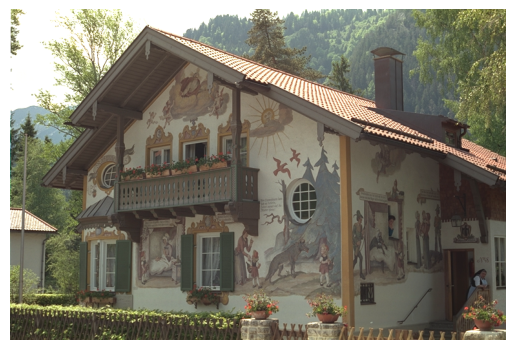



1.


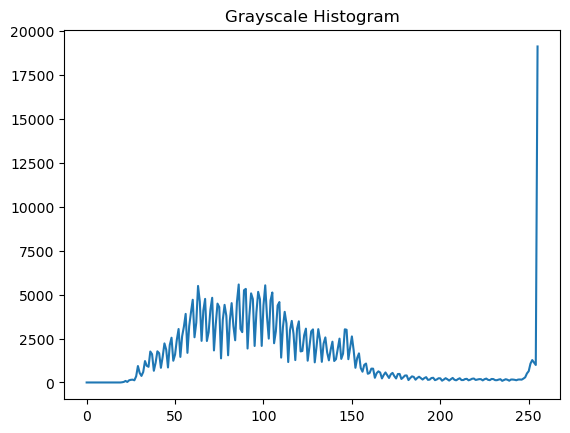



2.


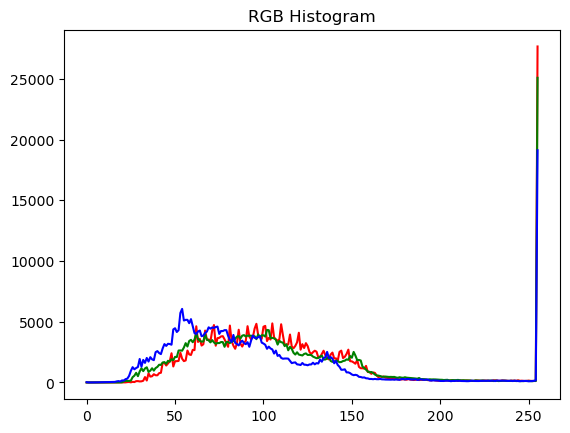

In [109]:
from PIL import Image
import io
import base64
import matplotlib.pyplot as plt
import numpy as np
import cv2


# A1
# image loading
base64_image = """iVBORw0KGgoAAAANSUhEUgAAAwAAAAIACAIAAAC6lJxtAAAABGdBTUEAALGPC/xhBQAAAAFzUkdCAK7OHOkAAAAUdEVYdHNvdXJjZQBLb2RhayBQQ0QwOTkyRJ2A1gAIAABJREFUeNrsvWewZdd1Hrh2OPHm+HLu1zmh0Y3QAEECBAhSzAQo2qRlukriWCPLHtljlS3NTLlran7YkmssydRYWWTJpCgzgAkgcu5GN7rRr+PrF/rl926O594Td5ofTdCkJFIkVZZIF75ft+49Z5+1zrl7r3W//a11kVJqs/rslx773Xc99M5KbRswtWIxr+eaRuzsS69MDA689/3vjsXT3U6t1epMTR8BuA9+qlCuPTZUvBNg+Ec871yptzCcOHCjdDEeS3EubT0xkHjfdz52xGuEkBjMttk8KJzR959e+FxM4+Wt5UI+32zVd7Y69UaQSaQQRuMTgw/f/+uvvPYfrl1b/F8/9dsAxS8/9m+VlI8+8pvfGfD1c79zx52PvmnnpadffGx9fWVgoHDnXXcNZj4IcOHClbPHD/8KAAUAgK2vPfdb97zjjjx5AKAA4ANYf50XSsDjBJIAg5XupcHUzwIAwKvrndVeu+f1++l0es/YP4W38GMiAtDfugs/Ei5d+YvLr1+7fnmBUj2VSiGKtjc2NYwz2Wy358RT9ns+/C5s0mQ+tbO6lU2kVlaXHn74oUtzN26ubhayxfmr82ac/PIv/Z8AhZ94X7e/cea595/85N9+oK++9KV0LvX2g29/ZfH0zaX1d7//wWEYe+rSN1N28cqVK/lCfnwyd3zibd85/kb7/MsvvDg2Pnrf8bdt1je3K9vvOvSzm3zl9CtzlBhBEIW+m05Yjz7w0Q7Uf/9PP0NxIgqb733/2w8P3Xvri/3i0um5c/OC0+mZCdftVSqVRDoVRYKxCBQGAIQwxiiKGCEYpHJdd2p6+OF33/fqK+ebja7nhYgS3ZCJlPGJ+//RX/VotXP1a19/NowIAGiabhhGGIYIeu//0DtnU8cA4M+++Qflsud77X17x3/24Z8HgBeufUOp1OLCShBEUcQAIJtL3HvvnRdeOyMj75OP/DIAAOx84amvSIISuQwCc2e72mu7ppEAwGEYShkC4gePjScLSEXW9kajvNlBYINQntcjCGmaFvmBEBIhEkShUsqKW4L7hMrCwEC5Xu61PYxIKpEO/MB1fYI109IRVizwCVVDQxZAuziQbXXrjbIruC65IbkRBJFp21ZMcwMnnUmGod9qszDUlCRSIkIIQkjXw0yOpJMhwQ23JzutwOmGfZdTPXzoZ+7NZTKPf+0bppFKpHK1alsirCRyXZcFjDEmhNAtE0mVL2RZxDSdsEhgom1ubo6NjnIuq9VqPG4D4q1Wl1J9954pxvo7W9u5XK5QSBtxbfn6RszOOk7fMAwCtNls6pYZzyTazZpBaTGf7fdaRw8dLm1trK1WMYnHEwU9lmzWq9VquVhI9/vtbD765M+/5+qVm2vrlaHB4VKpFPhKSTJesP/t//6pr3zl6XrTkyCNpNFpdio71dnd4/e+7djTL5xe2dzZu/fA+toGxQnBabNVHxwpDGSKoe+3ag3JIk03qpVqvpCNxa1SudHtubZhh2EYT9j7D+zO5TIrqwurq6vFYn7v3gP1VrPvhU4vUELmC9mEFbt2+XJ+ZEAQtrNWTsezwyOFXbvHC5nCyy+8wjknp06d8th2q7UBgDZXt24ur8+dv1qvtfbM7Nnc2BgZGp2dnX3mhadW19bi8ZSOwbTp5XN/Wtk+Mzh6z0/FgpuIZQEwQPxHCmwN7/pA/CGAgUIilTJTZ8+fPrr7fQDJ7xxh4DEdRgAsi+QsMh3BkpCCYrQwf71d79ar3ZCp8YmZtbWbcdO8//57Y9ZtE2NHWp3rflQZyOdm940e2v/O7eaTlr1FYBYADLtiW0WANAAADPbcBdfzSqWd+++9H8EuAD+eAoO6SztfNeJlHd0xOhmmyWgEi+uVZyTeUVpJh5m/4sjO4uprXIUJ60DcHAWIhfDc868/53uBiNCxQycGUocBcm9F5R8X5K1b8KNicODg0WMPVCpX9szu3a5s1VvV9773oeHxIT8KUpl0uVxaWlzZ3ty5cfXG0vXF5eXltdWN06fPVEr1XLa4a3Lqw4/+4h0n7gHI/+R7+vrya6+8/IadjUZysz/E4RKgD2D8dR+JuRtXPd+LDcQ9l3W7Xmlrx8Fdp9O3LbtU2hwbGUwktIHkBAAAtDaipbmLC+2uIyRiANubpaWlm0cO7XeicHlpI2JCMRkEYSaToylt7srlTtslRFdStNutY3uPApDTS8+tLJU9PwKFGRP9fh8hjJDGmBBcKqUIIUIKBAQhnE5nCcWBFxiG3ul0K+VGEDAAQIhGflApVWcPFxP0Lz+vuru9tVXmDAMQwaWUSknFeeh0e0dmbwOA169fCDyJEHbd4OSxOwDI5aVLSujtbpcxgRAohRgPWu06wVzT0aHZPQCGB1ucinwxm8mkKqWa0/YwwcMjA1QT8SSdmBiTQhUGcm7PLW1XQVEWCeAIY2TqOiGEMRaGISFE16ngkokwEY8TSoArAOy7EQIqBXY6LmcIYaoA6TolBDPWJ1RhEiIUtlrtfs8zTROEMDR68MAB09b7jmOYJqZ6r+OzCLigIKhh2ggwIQhjpGlsaDBJsOCRX9ppjAxPIKxJqUyTcB4EftSoNjE2WKCa7ZZlWBhhFvJ+v68UMgwTY+p0e4xJjBGhpNvttRsdL/BMwwgCX8OYS8EYQ0AUF81GbWJ8jEXcoHrEhdv1hcBhwKWUQggmmKYbQRRphGKs9Z2+7/sE451SSSlEiD46NiaE126XpHQ9v0YxiyL34KEZyQMW8kwqWd7ZtvUYwtButR595MNjk/+sVT+7f9+e+995T7O2xbmslJqjo0Ou612+fFnTddvUr1+72nOc0GeIIM9nnutrmMYSMUqJ0+8YcePAwd1e4BiGHkQhxiCVsOPaxsby1atXRCTcvpfL5EfHxra3SpfmrvQcz/P96aldGqWO0x0ZHyIUDM0oFgZqtVo+lx8eGkymYn2vR06dOrVVfqPvlRVHS0ur3YY7PjyjIe3y3NzOxk692V5aWup0W+/9mQ9Y8cRzT7/46kvfevWll/bPTA9NveOnZMmN/4jZDwAQW0sCxAFWN7uXHL97+95f/u7s53uhAwCBgWxsby65t9G6du3Kom2kANP9Rw5WdranJsdKpa2Fm485/YX7Tn5sID+zWrlEdWyS0WtLzy8uXto1+R4AsK0UwCgArNU/a8WapVJlfv76vffeMzLwEYBql11JGkkEY0rtpK0swIyO4gD9P/zsf7p64fyDb/snOtwNsPz4M7+xe+YOAPNN25KFTKbaXMokQwQ4gHkT8qMjuamBWRqz0/ohgIm3QvJb+LvH6Bj9rd/6z5EIPvaJR+5/4BeJUTty9HAqnXr97BupZCFhJRvl+m3Hbn/wXQ8+/K6H9+07uLSw7HScVDrxza//19cvPnXniSmAgZ9U56q3FpwL83PNetjvdY8duPOvPe5663TRGr/1erlzeau1MpiYAoCKuBTHgxJqa/0bGX14oXGtXG7FYnFKtVqt3Wk7UST9fiSEbLRq8bhh23R+4SpNufm4fbVx6ebSdqPuskhyCSyUjEOr1QukSMVzTr/fqjU4l1EUIUpAoqXFFcOICSEEZ0EQRVp/u3Nj7o1F3wUElCuBAFjEQRFMqJRKSoEwwggriTDGUsowDAEQoYSFrN3uItAY45RQxpnkELhBKq5PDv7lFPDK6rl2y2McgwIAjBAGwBqhgot40Sw7m4s31rigCHC325s9Mp3S0y9feMm2Un7fC4JQSsQZx1hN7xobGMjE4lqqiDHUL65dkkQIKSMWmsTudrwo8DRd7d47WRhK9JxepVyrlCpSkeHhiTAMIpexgFGCKSUIYcaYEop8xy+lDI0igCCIAjdEiCiBPD8CRZTEoIAQRDAJQs808Oh43jQhCFqgMMEGCKnrqFgsbu2sd9ud0bFRQNT1IoxNty94pDTdJBhTjSCEAYSQTj5vxk1zcWExDES+OKhrRt91DIOOjAw5rV6pXLbNlOO4gR9yyQcGRty+X6s1wjDSNA0RBBL5fhhGka4TDdN6vWmbdiwRU1w4Tidux6WC0A9S6TRSYu/uXaZh1Gr10GOtTk+nViyRwJQIyU3TloBc14vFEr2Ow7myTTtk0cjQSK6Qd3uuYdLxkUIygTTqH71t1/BgIWbR4eGC57kx09yze5JiDQMeHRx6/wffO1gc+MoXf2Pt5rLvdQ4fv3vX7AOvPP/Y0s3NoaFhp9vFlO7bvyufzRENVyq1/fv3m2as0egc2H8gHo912i0u2FZlc2Asn8klhPQwpaZpEYR0nRQHcmMTA0k7ubGxU683HnjgneOjU/NX591+GE+mLdNutzqCcztucR7ZtjaQL7qu5zhOEIROvyshWrq5SE6dOpXJiHJ1pVavTk1MuH13Z2cnCN29u3cdOXK01ewokJ/4B/8wl3vg5Re/8sLzL6WSGSXYx37h3wAUv3u2/0+HeJ+d1cntKTM6c+75oQGma7MA0A/f0GkRAH+fs+j0xP33vG3iW48/FXLearVZFA4ODJRK28lE5vY7TxhEW9g4Xy6V84WU1Gph6Hi9zvR4EWDYV89LtEQhnokdev2Nx2qVyt133r28uLpvb/FbL/1JuVyeGb8HYNI2bwOYAXgVoAuQCqPWxx75FYCjANCNzo+OjFm6AdAC2HkzQohs8u0ctgjsobAfYJBCDkEzoR998wm+hbfwdwAfYNPpL/zRH/w/xSxcnrtW3WkUi8UPfuCDujH0n3/7//6TP/jTpfmVTCrruX6n247HEw8+8M6FhflkIq6b2qsvvdrvBNVKtdPqZLKpEyfeBxD7vglI55Unnvvsgd1v/7t3sqXm1yvbhcTEunP17Jk5XY+7vpMeQMXktxOdbfdyUk8BaADwmT//7OiefForRtB/7cLchfNzJ4+eBMCf/8oXbt9/15qzHkUibw8vbM6zEDtOb6BQJIi0Gh0uGCCVz5kjo6m9u6czmWRxIGtalBksZiXWN8qths+kBIkHBwYymWyr1W42Or2e5/uh2/cw0hgLdWpgTB2nhzECRRAGUFAsDoRh1Kj3pCCIIFBSKUAIKQURE4RgKRXBFIQCpQjGUikpgFBMCBZS6NQQUmCMFQDjCpTAQBqtnbuO3gsAJe/KtfXzY7ndALBeW9rarEupA2ApQEkgmCoEURBtbe2USzUBVHAESjHGLFsfGElvbm+12p3AjxBgBRAxpuly966J0HNb9UY8k7y5ddPzIorNvhPwUBFiuW7Ycz1C6ODgUKfd2lyvOE3fDwIASCcy/U637/gUaUpKikkUMBYypUAKyYWUUlFKlEJhEBq6wTkP3JALJbgCAKyQUsLQNY2CkmJ4ZNBzA7fvKCV938dEjQwNul6v03FAESH52NiQVFEU9gAkQSiIQo3omq4pCbdSzMmJQZ2KhRvzqVQCQPmeV66UwyDSTc3QjVQyg7HWavQEp/lcPpNOCyE9z/eDwDB0BMAi1uu5IBFS0GjUdd3SdT2eihmmSTDkC3khlR8EqWTK931MSBgwx3F8LxCAYnai0W65fV+BzKXTgLHTdTwvIIpgEMVcCskQ8QAkbzYb4+NDY6NDjdZmLmccObyPi8BxOoePHKq36k7fsWMkFqNTUzNCYIL1Q4ePRwF77MtfGR0byeezSvi5ovbK6TNOv080XBgcGBkeajXb26XNweHC3r0Hytu11ZW1dDqXiOnZRDxkXqNZd/qdvfv2Viu1zZtbBBnZdLHX6yuJw9DTDf3uk/fEzBjGcM89d3a7bafXiXgwMjqElFJSCiG6na5lGbYZL+2Ua/VGLps1TbPb7V6auxL4jJw6dQpDrxPslLZ3Ou3WyNDQ3n17spnE1NR4s9kyrVg6kVhZWW23Vi5dutJqdGZnZt/xjnuLw2kAXFr+UiJ37CdMBtF7/vFfm9r98N9+IJ2MSzg7t/jCwpX5xWsLR2/7MADodPhNploCbFZ7Z+JGEoDV+0/GdPvWBhaG+plzr01PTq2tryUT8YhHyzdXNd04cuQQxfL5F5+J2cb+qcNuVLUM0u205xfPON7ZwO89/exT49OmRe8YGz5Qa8ydO3uh3eoev+NQs9nYv3eP421hbUvHewDg6ad/Y2bmfoC94yPvABi6ZbBJdln67kbvFT+o2OY0QAqgBlABGCRQAJAAVgQvS6jNXZ57/vm/yBT7qXgEoDZ3vp5KHn4rRL+F/5HQPvv5//jUN56J+vxbX3+qst2wY3an67z0yssa6setZKveTcWTuWyOS+46LmAyNzd3/vVzmXzmrjv/8cb63PUriwk7ySNeK1XqjcUjRx8GAFee09HoX7rSY1/+4+XFxXe87dG/jblPnPlchH2fl9PWyA9/1mppcX2zMjt6YK22sbKyA0qLQi8MvEO7bweAEHYuXJ7HKcjoxZ1w9erlm9n00Pzm/FPPvRD6EPiix3vXV+d3dup2LjZ/fUEIOTUw0+i3lpfXbMtGGHU7vW63FwZ+PGnv3TsyPpJw+p1Lly5ZNjVjer3W6HSdKMTdHhNC6YYJUvX6DosUZ4ozianmu4GSUgrFGU9nskEQhCHHCAsphJSAiZDg9iMmpJQynUkZuu66vpIACHMuCKHAlRD8Fv0DAgklMUYAEgAJJaUQCBDBmgIAhZBSftS778TtAPorl15mTPVRs9bbbrU6zXo/DAEUlggwRgiQlMC4iCIBmICinAsllFJKSlYcy7FQOo7jeT4ohIEAQjoF3YAoYs1GAxEST6a6Ha/b8aVEnEMYSi+MfC9kkaSUahpp1/thoCihOqFEASWk3+3zkMftmOTC7btcKgAQQgCAUkqjGiggRDMMPQgiBRgDZYJrmCglpeK2bRqmIaVkEe90u77nZnLpRNzO5mO33XbYcbql7apGTVMnGxsLSLGhoQwg4CLUqa7pphIq4kJwwTjj3MWYlUvbkkcYIcvWKKG5fIEx5vZ9kAQBqVXbmhEPvMB13Xa7zQQDpHSNEqJZluW0e74f6bpm22Y+n3cD3/d9ABGPxSillXJVM/SYZUdRFAQhYCQlAowACGCMMRVCIiUZZxRTP/RZwMMoStpW3NYMIgpp0zT0VCZ129GDVBObG9cLeb1QSL/40vMHDh3YvXfX2vpaz/XzhQSTnWQsWy7VXnn5nGEmWRgtLi/t379Ps+gTTz4dRWHH6ecGslyKTqfd7ThRKMvVTd2C4eLYiy+crlXqMTueSyYsk3iem8wmB4cGqUZkoMo7zT17Dm1tbpVL9ZBz3TRicWt58WalXD558s5MNkEpvbmyKJUcGin6ge/7QTKRKhSKwwPDLOJ9x9V06rrurj273/2ud/d6brvtkFOnTl289sTKyhWMKcUGJvTQ/sPtVntza03XzcmxyZ3t8qU3LkY8uvvOew4f2L9regoA/uS//AH3KgcOHEKGDpC9NfmblfN2fOTve501pnaPvsltnHU7c7q558ceC0F3u7LZa7vbm9WT985idMs7AwDmlj63uDbXaNZpvJ80xPlLZ3ru2kDuLoCbn//CH1y+eMkyzImJ6aHBgYmpsZnpGaQgXygm7IHzF8+06rUDR6fjJPXymZceOPlzu6ZGgZCxoUkuVc/pp/J1DY5NjI27YblcKg8NDR7edzJmZhLWe25lPwCdiSmK0XdrsBQAuvXKNvbZ5n6ANMBVgOiNq88OD8QAxlx5WkfTBLxybeWpp5/UqH70xDGT7F7aevLJx7914vijb4Xot/A/DGsAmaOHTly9ft6Om71uJxaPNVvNiHGn512fvxEGoU4MjEmj3dQojXiwa3ry3T/z8OTkxML8fC4h568vEaLlsumFhcV40prdNZvNsi9+4dNr66sH97/z1jVem/vjsSEbwO/1upjiwwcP/gCW6G+Q7yy++PJLr29v1heXl48d3UUg8cOcxaAxv7ISRVAcHwgjubhwk2AjHrN9z7/jyJ0A8PrC+Wqlt7G5Mbgru7S4Vq85hGiba9tuP9SoAQjKpbrr+RjTVrMdBrxaq544cHuX9VZXV6QKbYPUGg3PDwCFqRQdHso4Tmtjs1wpd6NQVirdVqNLkI5JrFbucCFBIc8PQz/kXAJgSikGFEae77uEEClxo1nXEEUYB0GAEeZCScGVBKUQ52AYGsaIMRFFDABphqGkUkJIITlnAKBpGhdMKjAtg3MZsRAJSTWMMGKcYcBSSsFEImH1ZLvu7fi+jzG9dm3Z85nrhE6fMaakEgQjKQVnAgARgt/knFAUcoUUBux6jkZpLperVEqMcV3T/MAzdJ1oMhbT04l0uVTvdPqxeGZro9pq9mJ2ql5r+16EgIR+FPmcRVEURGHACSKFfGZ8fMgwjMAP+44vGGhUQ4h4vo8BIwWcsVgslk6nqaZRDITib2/zYRpGAQZMKTYMzdBpPBHDCDMWOb0Oi5hpgWEixlxKobxTWbq+nIgnOGd2zPJ9n1Lihz5CGig8NDIYj+ndTgOQkFJIxnyvaZsAMhwZLiTSscnJkdtuO0wwQYT4XlSpVbPpjG5Z9Vprp7IdhVE6nUolY77r9xwXKUwJDYNISh6LWxhRSjSEiabRQiaHEarX64EfatQQUnpuP53JWJYtFdM0gqjW67mUGlghXdeDICKarmm6YEJxGXodHfFP/+5v3v/QIysrc7t3zzLBq5Xqv/jnv3jHiXvOXjxXKtdz+aHXz831+qGUSEmejMcxsRwnKleac29cP3f+3MTkqM/c7fLGwNDQzk61Wqnumd1XrdUJ1QzNTMRTuVx6eKDoOqxWbocsHB4rTu+aipnW4vISQloYwvLC9sriVrfta9RQgLZ2KqaZGBsbb7W7nU6/3e54rluvVVPJ9MTETBSJfjfgAvLZou+7Rw8dKld2+q4zNDqIdVJv1vfu2Tc6NhkxFTFBTp061WwvzN84ZxmxoZHxVqPz4gsvbW2uvfvd75qdnu10eoOF4i/80j8vpDOHjh0fm5x57qlvVivNfGG4XKm+cvqlfnN9eu9BgCoAteOF7yPi+ztGQvW+huQV0I7qJnYbz+m2BBj8sYYqjhTvOnxw19LNG5VKdffsfyfVh3KHJ4d3JQaUbWlb9ZXrV+ceetujAMOX5j8X9L3bDh9bX93gXJWrW+/7wLt3jd+xtnaDYIwI5yyYnBqbm3tjvbQ8OjJdzH4EYDZh346hYCV68Xi8VqvkUpMrlSfK25Vao9ntdDa3V2r1nfGx71R5LDY6WzFrN8D6m9kn+uuMTwIMDQ/cBbADUNRRDkAAjCRjYnV9YXpmxo4bSTupx1gikRgs7P4u5RAANADst+L2W/ix0fXPmhq/xYn+5m/+b+XSlUzOavf7n/y5XxoeS995552YkCCIpqZnB4qDg0PDyWRm/vqNbDZrJ83JibEgch964EHdML70+S8+9t++FrNjd508GfrB1NT4oUOHJibGn/nWsxQbn/jExxH+thjo2ae/8PxTz1iWCURrtZq5AS0Zm/lRTObf2dp+5tUXOSe6nlQC5q5duuPIiR9G8P7Eq09hpJt2Qki0sLTSbvYQwrqm+0FQam3TFLpy5SaATrBGNF3D1sb6lhAoCoUQoGk6KMyEMnUbI+z5YRQJ3/Pz0/lUInlzdTERt4oDaYJpp9sbGUkfv2OPhqHRqPXavN9X7aYfhqBrFtb0WrXr9gOksJAKAAARwSEKOYAMQm9osDg6NlipNKWAmGFLKQBDwCOpMMJEMIkJCQMhhaQUIySjiHMmEMKAQAnJOQdACAHGWCklpcT02zeNh0wIXiwWsrmE0+1JKRnjhFIlGeOhlGDZhmC4Wu2yCHu+8NxICGlZhh0zwpCpb/+IU0IIQqhGDcaYkBITrCRHWCIEnu/qGo1YhKTQKcFYDI0UQ1+WSo0wlD0n9D2mJAl8HvgcgGqa5vZ9pXAqkRKce65rGFo2l+71Op7rNxqt0GcYMMFYgBRMYIwSiWQsFiMYx2IxHoWxuJVOpTvdjhQyDBnnHBOka3oiGbMsnVAkJEeAEGDOuWVCMk3cfjfift9xS9uVPXv3Tk6Mc84JwaZpaTpxe0Gj1TEMZNsQ+C6hYOqa5wf5vJ1K67t2jRPMe90WEBFPxDc3V0OPM44EZ5iieCxdq9U4Z0TTBosF09Jara7vRwgRBJgQkstnQEEQBoAgYpFGCSHYjsV933O6LouEYei6TpVS3U6Hi6gwlLOthON4POCapvd7ngAVhhGAIghjAOD+UDF138nj1y8/u765jghu1OpcwNvu+TiAfPH0s9SIlcstP5CEaJpmUoID3++0/bvvuW9ifM/Zc5cy2dSefTOxhIl0qRTlEoch911fcDE1NR36kWVb//RT/w7L9lcf+xZjZGpm7MDh2Z3trVKp5HsMYdquB6vLFdcJQdJkMkUN0mr1LDMxODzqBZxSPZPJJJPJwO93O97VK/OWHguZaHe7yXTac/tR1LdjhhUzktlUMpMyDLPb654+c3ZtfVsqRU6dOrW8epbz3gP3P3Rw9yP5PDz5zaeVkifvvKvvOE8//uQ/+MQngJzM5I8CjAAMHTz6roO3fXj/kXccu+OOyYnxhaWbq/Nn3F57aOy+n4zsBwAAGYdAkwANgOO6HQCkvkNT/VjIH7vtvmZvLZlxTTr5Xe+3V7cvXrr8xvDAQK1W3j+7B6D2ymvPt1rND3/g/fsPHaSadua1VxFGjcba0vL81vbaO+59++T424cGPrhn1/t2TRwpZKHZvmRb+29pIj/7ud+3LPPw7o8B0LMXvj46MnrffW/b2Fxze92ZXZOFXAEgAwAA6wIH5y989YlvfuH48Qe/qwCeATQB2gBJAPbm4xAAHsAyQAgQAFQ9Xs7m8ppmAIZ2b5MAnR49CZC5pUt4E29lP/8Tow8AP1wJG//+cre/AdX6/Bf+/PPHb98DkC5Vrv/55/5CSTVQKCII9u47kk5niEL79h80dL3VaDmdbrPZ2Nrc+Bf/8p89+vFPnLj7o+uLbzz+xOMrK0tACbW0iHPGuBf4UcB2dnbmLlz2Pe/AgX1LK4uze+4FUF987D9srmxhQY8eOzYxMTF38dz9b/voj8QAfeax3zu8bxcCa6F6+fz5a7pmYkwVKKfTfdtdR9Ff32biv+P6zrn5+Q0uYWhoWLfshRtLvb5LEEUEsUiWKhW376fTOafjDg0NlUvV69cWQGHOuZQgpaSUCiGEApBSSKGkElIA4k6/zSIvmYhLyYTg6VS61/MohWIh53ouUsj1ZbnUEgopqVGi9Vy/Ue8IRgjBBCMEgBEVXHAulRKU4l2zU9l00vf9KBIIqYhFXAjBlORCCanrFABFUSiEkoIlU8lYLO77IReMYiqFkgKEFJRolBKKcMQYRggjJIVACAkhLVsHoZxeXylQSgJXuoGGBgqWaXDG3T7rtj0uRBQyFnECMDw2HIuZrVZbKiolVwphjJBUEuBWgqW4wgQAkGFohqYhDMMjA8lUMvCjbs/RqN7re6HHuFQACGMqBARBoIRMJu1MOtZqNTVCc/lM6HmB5wd+6PXdKGSSQ+CFjAkWCgCEEeGcA8DU1LSu65Vy2XXdycmJdDLR67mCK6lwv+8DUpZpIayklBgTyYSSDIHAJEgkiGEqy4TBwYFGte50+4KB4/Q4F41Gw+n2CaEKNF03EvGY22sGvoMpMnQdEUDAB4oJwXqarjUbDTfwAWij0Wq3nGazg7Eej8elFFHEvJ4beIHiYNl2p911XV/XDM/zKdHjiRjjESCIxWJBFFmWJYSqVmqCK8/1fS9EGOm6lkjECMWahiilOjWRQt12r1IpgVCAVRSGpq6lUymv7yRiejob0zX0xsW55148nUznW51Opdrct/vA+blnX7/wUrXa1kisXmtl4plapTI1Pvzxjz+6tbHhuWJpabvVbPf7XSX8ZFwbGRltNrqCY12Lx+xYvdrgTI6NjC8uLikFUvZeP3txYWkrnsh/6MPv6zvteqWlgT01MyOkuPDG+VQqmUjFojCMxS3bMDOZbDIRJ4REfggqmpkcTyW1qcmhA/sPPP/8K8urq+VqNZMrJNLpaq26OL+YyuSPHDnedfq2ndq/d9/6+mrgRW4/7LQ65NSpU4kkW1i+euftdyIgV66+PjWxy9CM+fl55gcPvfPt6cH3vtl7Br7+hV/tVy8MT78DQANIx1N7Dhx+z56Dh4bGHvxJWt9vrewDAOGbpVv231qpbYwNHTRpAiAewPM+rBkw1ZHnvvrlLz304IOj6ZmOVwpl07DR9PT07bffRskdvf7Sq6dfPXT4YKvd8j1neCTXqFbuOPEBgGGAywAuwFTIlpaWVoeH7gYAgFyp8ZoEmB4brPYv+V7o9rr1Rtm0tHQmsbW1WixK28wDrLuqlqAf4PKm03T2H3jkex2PASQBLgPEAQwA8dRz/9eu6eLy5vy1+fOTY0MAt2m403OdtdWNWqUyMzu9tbr52ulnhkeoaf7gYt23OKGfFrS+kxP32MrN9cvF7NSb6Uz99z/3R8+feaHl1vZMHvqbxgmeOfcXM6NHfjwj0omZ55/+2vmL56dm03tnD6wsr02MjU1Pjn/uM392/szLTz/x5Mrq2tzFi41WSym5tb3DBdu9b+bDP/sPPbfy55/59Nwbl9vN5szs1K+f+u0PfeRTpdKNSrl8990nO053c30nGU8dPnzwtuNHxsbH48nRvnPp8a8/ubW+rVNzdHT0hReeF8CO3/6RH97aBl+fv7bJkBwtjj/76ouNRl83TUyIktIwrViWDqQGALo+XApgpxWuINrUv7e12BMvPBmEaHRkImBRz3FbzU4QBoABJOJcgCIYUduK11vNeq3e7fSEkJl0JopEGAQIIUop50qBAqWUErqhK6kAiWTaKhbzfbe7sb6Wy+Uw1nr9XqfdCELP8/xSuWIZaQVGp9VHSJcSASIsAiHUrS0qUERJyblEt4DB63elDDCirufziAshkMISFAAghAihAKDULQmpkoqziHu+TwjRKGFMKgVSKgClU0IpBiUxAkPXJEgAFEURRUQIEQVMAZi6jjBoBAiFKOII417XcxwfKQqYYAmmbdiW0et3XTeUAiHACAFFRCnJIy6UxAqklJpGOY8wAOch5+6e/ZMAuFpr+F5Iic6YDEIGgDXNIFgP/FBGknOOiRweySFAge9lksler8sCAQKURICQUkgIqbgSQhKChZAIIV3XEUKtVisIguGRwXwm02q3mo0m1fSI8b7vS8FNSzdNU0opI4YAcxEq5GPk5wtWLE7q9UoyHm/Um/1u37ZjYRiurKxomlEsFLc2y0EgCUWFYprLQDcBpBKgNArxmO71m1IFQvCNzS3LtG0r3u97/b6bSRcKxUHbtghFSOIgDAARKZShmwRrnhcojJRUYRD5gR+GPgBgDVOiAYJup8eYopoRMU41HTAUctkw8tLpxPTMuOcGzWYn8iPLNGzT6vV7iVg8kUraptFuNTMpe8/eqcOH9o6ND3i+7Lqq73uYAAKCFb1+/UYQSRag7Y2dwPHzubyS4b/8lV9KWNblSxeP3XbvM8+dBpCGhRX3fu4fPdpstJ979tXtzZodSxUKxXKlYuqxdru7vb3TdjqNendocHJhaW16177bjhzc2V7jPoShHB0fb7SqCtTIxLBpGoZBu41WZadqanoun+k02p1Ox9CJFScscP7JJz9248ZSGIqIicmZXQePHLGSKZ2aGtEWF1a9kIW+aLY6TrdrG1QjZqvVQQiTU6dOWcbo1vbZz3z2s436umWZtqX1vc573v1wJp2ZOfARgNR3Jvmeg+9K2NyIa9/95vevD/97x60OQKm/XfbTfDPwuwCbAOW5axcs3YibMyYqTu01FWcB7/GQua4/MfCPDbo/iJZ1Sk1Tzs1dLg4MSg5LN+enZ8YGhguev9UPlp548ivPvfAVwyzpur175qMAbwCMA9CtypnVtdXt0trNlTUlkZJyY3UtYvzOO+6qVxuvn704v/Tq4YPv1NFdAMCDhUattmvPX5V7X3/TZQ0A75pObNfXi8X87MQDAAxAAxgWsKZA7uyUThz+8NDg2BtvvDY2MZWI7/3ecdbfbEq0CNAGcN6qGvuJhHjljcepxZNWEQAktP/jp39ncMzOJkYA4IlnHr909UYEfq29PVIofvbLX2y1fYqNZrN18vZ7AWC1fj4T+7Zub6N16eL861PDezrRikmyz7z+rctXrp28/f4ff+Z0lqIozKTTUsoPf+Rf7ds9cPbsa+cvXCTYzOWLJ07csV2quP3+9vYOCPHIRx+x7fgf/t7vPfGNp69cvl7MF7iI/o9f/zdInwAgx088dOzo2ODI0NDwaM/rAlZrG6uJVMpKxHK5XboxevuxyYX567pG3/PB94TcP3zsUC7zI4j/vvXcN20z0+n1dprb3V4Q+JxSnSiklEKItLvNPtvpiUaj3drcqbXb/mapPDGYQt+eIADAXzz7ctxO64ZhWtb62qbX87iQUiiCCAAYhoEx6XQdHgmphKZpoDBCmFIqhLyVfDAWEkQAJGfiVsG5puPZPTOBG67dXO92XSVp32O1aisKg1wum0gkTdOIOGk1e5wpJYnCCAGJGCMKYwQUU6UkZwwkCM6pRpRELIwwpv1e4HuRUhyklEpghDDBum5gjBHCQgjOlVIKFHCmBJeUagDf5qsIBqwAkIpYaJjayGghDFkUCKmkUgohRSkmRCXitq7rkR8SCvF4jDEehdwPuO9zIYVONSGE4DISLPAjQigIkCJkzFeKaQZKJEyMeBD2sRKJhE0JMQyDMd51OpTQKJJO1wPABDQecRYJwSIEoFEsJQ+j7sBQenx0MPT9btthkdQ0XUQMI2IYJqWYEiI4B6mEkIIB50wjhFCaTqcdx+l1ulOT41OTk6Wd0s52CTA1dD2ImNtzbduyTFtIyYJIKkkIibhLNWzoWCkuBW42en4QmboZhJGSMpVMY6R1Ow4gqpv29PSMpqNup2oaNJPKtFpdFoiYnex1QkxUPB6TUvQ7jhVLNuv9TrsHihhmDAO1TBOk8v0g8Nnw0MiB/QdrtVq1WudKSamiININjbGAIFEoFgcHBkBJxRWPuEY0jFEYRJggQigCGUVRKp1wXdfpem4/7HV709MzJ0/es7q6ahiGbcQYY063m83nk4mMkmJjbVNKQZDat29idvewadKtzU3d1Afyw+1207TMn/3oo163G48n7nv7z3/5sT9cW7+ZHxiUEgnmT4wMf/CD78dAXj8/1+n4nU7njhN3gFI7pW1MkFSSaDibTefzuXar0+62Qamu08xlswhwu9VbW79Za5QHBwcRoHQ64/X6SsrBgQEhmNvvZzNJwX1QTiFvffiDH0gVbvvTP/q0lUjt2b9XgorHM8wXpa2STmNezz168CjFeH11LR6zoiBcvrnieoFlW+TUqVOXr3/19OlnsUSFYuHAwX3X5i/dc/Ku8cmPNKqX8wP7/xKNbMSnvzf7+elCGf6ynlECiB/I89sALkAAsLV8cyGVirXajXqp+s0n/suJ23fFtH2vXXj83OlzsVgyDKKxMbJdOWvohqElML779tuPfe1rn0+nc1y4SAtBsa3t9YUbS72ePzkxA6C+8Y0nx8djlWY5nxEAI9cWnji079DU9JRl2OlMptPuNmr1VrNdbzRZAHefvI8SY2LsBEBybfkPn33ymUc//q9vtTFU8PSVS18cGOwhmATAm+UXhSxZZg7ABhhJxg7rOMVhHkO0snFmc+dV1+3nCumrVxaPHj2E4fDhIwejqGVb49+h+m79hv8uYskAmHwr1/jJA/+j//r/La9sdj0eCO+p5x+fu3Kj2xdhFByYPQIAczeuMkZvrpS2tpuvX7nc6wnDTGGEMZC7jt1Z8Ta/+fgzyULshTPPd/zWxnZjdaM0vX/itdfOj06MvXrmfKvZTRS0oez4j2fcnj13337sQSHqv/3//qd8DobHZi5eOLu5Wdp/+LYjh4/dXL2pUY1zPjI4qOnkQx/4UKvdWl3ayGeGZ2f33PeOt3c7baX4t5747PXrzx+9bXru0oWnn3q653rZXPpTv/jrDz78/lp18wtf+G8z0/lMFm1srICSv/BLv2mYQ5OTt//g7Geh/FI+MfldO4LVq/PLhFjtjss4ard6mBANY1CAEYkY8zzXitl2LCYBdbphs9kjSF/eXNk9dhQAAYRd6C3cWMlk8oCQ0+sFrh8EURQyCcg0DACQEgAQZ5xSjBG51UPZ90NdMwApjBDCmHOuaZR/m5NAmCAhw5B5gR95/SD0welFoAgozKLQjlnpdEqCbDR69VpXKcIVEgI451giKSXBGiAlhKCUYkSEEBiRkHEWcYKpkiQKI8FZImnmsrlOt4sRtmO2lIpzzpiUQigFGjUEl0oBwTRioRAKQIGUGGFACpAqFFP5QrJeb/d7HgLQDQOUlFIk4lY8pgWe57qebdmGoQdBKAEBUBYJhBACFEU8YAyAUI0yn3HBlQqLA2nLopatDRSymq4MgxYHspSSKIx0XedC9noOwcTUYrVGQ0QqirhSoJTiXDAWaRrhPIgn6f5DU/GYVa9Wq+UGAYNHXCmFEOKCAdzityTnTDAFCEsmDUNPJZIShN/rF4v5bC7X6TQ3N7YMO1YoFHRdD/zACzyqUT/wg74npMjl8kpJIULdANOkQkZunytkaVSrN6sUE6Jh00p4fthsdTE2pmdmBgbyfacFONra3PY8zzISvhd4PR4FCoHUTaJjHWPk90W77eVyg5YV870wCiOpVKNZq9dbhm7adrzTbbda7UiIbDbLGHP7/WQqns8kDJMQTDVdD4LQ9z0AME0rDEIpJVIglWy3WppObDtWKu2EPotCaRompaTRbHSdtmWYjVoDENYsk0eyVK6traz6bl9wf3g4UyjGtitLD7/7YUTk1uaO77FarfoLn/rkvtndX/3ylwyqzV18fmV9JVlIttrdnXIpn0sd2DM798alM6fPBoHqu1GxWLRjBuc8V8xxKfp+L5fPxlOm03F0Tdeplitk+l0nCqM9s/t7/d7NtaWhkYGYadmWzUI2OTV55NDhbrfFGQeEYxbJ52Kazv71r/5iunj3n/7uv6s3O3oslkymN7c2kNKq5Y7T6hNs1Mv1dDyZy6Rr1XLCjvVdz/UDhdTY6Cg5depUx1laWHzj4OEDgedubm6u3lwrbZU2Vl45evSYYR/7KYwKO0puI/TdnfIrADWADEACIPzeMF8989y/H5t+5w8cUAcwAIrJtNTI8cHCcYE3zp45QwwxPrJvfDyLiX72tddy2aJmWiHjly5dbrfKI8MnAVpf/srneh0vFrcwBhbJnuObRgwhzTCpbmicyWQsdfjAgwDTAO7VhReTqdTs5O6nn3s6l02/7a57Dxw5KBW6+MZlQEQndrFYzObx9ubpX/vVX/voxz46MHzvLeUyAhVGLSseo9gAyK9tvVqv1oYGqMcXdaL3oldeevXLm1vb0xOPrG+eOXPmtXc+9HDGvhsTd3lpe3LiOEDkeWXb3vt93Lfe5MA63yuUfgt/z/izL/5xveES3SLEXF1b73b7Emu6YVUbtcndQykz+/K5M0EkAVFN16VETAgA0E2NUqol9MtXrjUa3eWbG81mJ2JKKnX8+Il2q3vl0nU7lfa9SDNItVK5bf/xH0RAwbYEH39/kjWRmADS+p3f+vTGxqpgyrTjqWx6c3Pj4uvn7z551y/80r/qteuLCzer1aoE5fTc1fU1Llm1Xt3c3Fq9uaobVqVU/eIX/iKZTN95110PPvS/jI7FlpYuDhSPjo0PrSxff/Gll147d6ZcqT78nodjMTG//HIhd+ubzMud1xPm6F816eXzz+2emsRvbhSu1zc9l7eaDiZECOU4DsZUgrrVDYZSjRCkpHS6bs8JG/VO3wkxxfVmY3xfMQa5JpTOnr3QdZqESkJVv9eLIhaFHCFAGCOQQvAoCqUUSslb/yDBueScC6GU4kqqKPIJRlRDlCLGOCgESOmGSQgJgoiFXHLEJQiuEMYIMBccKcyl7PV6TjfgDLNIAmBAQAhFSr25pyY4YwgjxiNKNKxRAFCAlFRScaSYYeK9+6bS6VS71ZFKmYbFhQzD8FYdFkJICKFRTdM1pZQQUkqBEEFKYoQRkZYBhcGsEKxcanCGJcIASDOIYFEsbhXyWcdxwjCKxWOMiSgUmGjdTo8zpVFdCBnJiFJi2ZqUIgj6CvjoWH733kk7RjUNaSZoFOXy2Ww24zg93+OcSyWBRcy0TCFFvVlVIJSUoISQkZR+fiBRKGYSSTOdjg8O5hynX95u9Hs+QhrCCCMSBlG70Q2jUKM6wQQUQpiwSErBDUOPx+2u09V0LZVIbm9tRxGTSOULedsye04vjEKQIKT0vRAjMC3TtuwwiBiPNI2GkdKI2WoHoGgqmxAicDptwzS8foSRZRgWAMrnsq7j3LhxLWKs3+9ls9lcPosQCkJPAR8eydeqJSlVp93vOb5pxoMwNAzLMGzPDdPppOe7nAusaDaTqVXr7W5H0w1N00CgMAx1jd5154koCkqlqhIIYQiCUNN0xrhSYBhGGEaMCwwqn88Qgi1dT2VyzWYbYYwUaXU7YcQFlyxi+/bvsW3D94PIj4Tw7r//7kce+YDnd65cuRgGAabG5sbO6upGz3FTaXt8YvjihQsA0Ol7zW6YyGYa7a6QRITqQ+//6Mry9gsvvHLgyBHXDXZK2+lMAkBW6vUg4kLxwO/n8/l+py8FDj2BsZzdNSmVsE0bY9xsNoMwOnH78aGhsY3VzZ7T+f/Ze89YSdPrzu884Y2V8825w+3umZ6enqjJgRQpUqJIiaIkGgsb2NVK3oUN2IBlGLbRsNZr2IAXXhv2GoZWtuRVIKlMUuSQk/NM98x07r63b86Vq978PtEfaoYgKZKmDVgQ1zxfq1CoeqrqPf/3nP/5ncnxsf6w73seY7Ftko9//Kl7z50mlJQrtVs3Lr30yjtBKAqFGk91rz2wqRv7sWmbYRjGSbi7vTY2Vp9fWLx+66ZUKor9TNYpVwrkwoULR+1r+wc3K9Vyq9M53G+5dnb15q1CNv8zT/02AAbY+Jf//J889Njpnwj8PAAAaIQ4QOm7LJzJ17/833UPXpmejG9+8JXaZOm7hsKy+1svF9yulT0NMAQ4+Mho/N3xBsAYACGoAdAHcIq54+sbL8dRvHN46+TCpyYai6+89o3lU2cM08KWhUYuQrV96dKLl97+oF6dmp2Znp2fuefsfddvrVJsJUkURkGpWjKptbez/+Y732rMQCFTTNTg/PID23s79XrtnuVPB3w3a3xmfsbt+v1ua7i9uZfJ5grl0t72Qb029uwnfh2gJvQr+623U95bWduYmZtQcIBgL4iD1lFrceG8SR7qxq+srtzBCD/88EMU1Vr9W5sbG0rhialsvx/Va5PFwiSA5brLP8bBJgDbPzk/g3/LY/3gyrsXb4CR05pqQFIhwCYARoRyLnf2mhv7u54XKgWYmAhTrQE0IiYxiJEytnpnPYxSpQwNpmlmoyhZOrZkZaxbN+40j7oH+0fFSgU0IC3PLp/7qFjaQeB/X0P5neuvv/Hu+3cd/1F3SosLD0xNOraZvX7j9rGTx5/62FO7m5v7OzvFQk6p4PVX3ux2B51O13Ks8YmJu+85my8Wjp86cfXy9eEwKBcqBqU8FbZtA8D8UsEfDP/g9/9ga+3Se5fe+LlP/9wvfu7zh4d7n/ncZ6ulB//wK/9qZmGmkl8CgMu3n/vyl/7s/IPHTfw9AxBtubW2vp2tFEt2DQDe33pj/6AnBG62elLIwWCgFBBMhJBSSakVIG1YRpLwXi/gAsKQp0yMjY/nC5nFqWMW5C/efCuK+cLS7PhUiVKDUBz4oRCKYENpqYQkBNXqVcZTJbXWilKqtWaMI4QoxYAk4wkhut6oI6SiMJFSa42UEkIIpUEKrQEAiJQaADEpMeAkZUqp+sRYOGRhwJTSCBOltJQSAdJaAYAQwrJshEAIQUyqNUgpTdOUSnMW2zaenRsvVewgiOKY+Z6PsCG5Slg68gAhAMFHhRONEBZCaIUQQlpqAGUQmSsYjXqNi3QwiOJUIAANQAkxLJLEodQCE+pmHK3A90IplVJaCM2Z0FpzJblgExO16empZuuAp1FjrFwsOcRIlGaYKC7ifNGhBA0Gg17XY6kCwEppxniacgBVa5TGx8fcjJOmsVR8bn785PKM7WBCteMant+PAz7o+owpIbRBTS5YMAw5lwQoYKQ1wpiyVCRJalBSqRa11lIrwzSjOAaMqUGpYSRxmKYsTmODmpSSOIo1oGK+SAgOgiiKEsMwhFBJzJMElKBCEYOqxlhBCWFZxPeYH3KKTcZYxrEoRYCgWCkSjBtj1dmZ2YPDvUIhs3RsLoq8fr9HiIGRkcsWCsVSFCZJKsfq40mSCMFs23IMR0rleUGv22NcEkolU0mSYAyFYhaBDgKv1/UymQJBxM1aScyIaYKGMIwIpkqD69hTMxOOaXbaLc6kYZoslWGcZt0cYBqGYbGQn5mdiBI/9AI/iMbHiz//C0+nqXf9xnspS/t9TzI4araVAmzgX/j5T5qWTpNEStX3+cyxM9l88fr1G4LpaqV668b6O29fzeQL4zPTe3v7Sqbj4w3bodRwwoR7w16xklMCNte3q5VxP4x63dapM4tYo1arS4mxs7/LuRgOgvWVjcP9w9nZKSbiNIpty5Y8+fUv/srPPPvE+2+/dmdj88WX31xbP0w5WVg8YRru7et3WMh5KkuFAmOcWPTc3aeWTyyNjU8ctZrtTjtMIq3l9NwYIEUuXLiwd3jl2uW3hr6PAGecjOQ6idn29n4+P5idbwAUbDIYm37g/zVU4+88bICjuP+24XwnqbvHTz8Yee13L761sDRLgBnkEEgeQAGYU/NP7u29zuOr2UIFYAlg7/tcTZevvDAcXKtWz33kMF1N2Pq77743O7MICn/tG19avnuJGHhr8867F9/d3t4pl0p7OwfbOzv3nLvPjxLDsMcna0iLu05/Omado2Y7l6uEURwGUac73Ns73N7bQ1obNhv2BjNTn7x2+xU3k62XF3/39/9nIdcPjg6eeOypVrNdyBUeeezxl1961XHcKPCPnxwj5DhG5M//4l8naTy/tHBwtHdn9fb23t75M48ftPemJ8cQjLtGThvDM8fOtntHGTd+47XXhITG2IRhuyKFSqXh2PPfO//1w0J9+av/zezCpEmmfyo+/m7DAzABUD++6RjV0azwXmf1z//im9TMKMBSKyU1AJimIYQUXGJCoigZDn1CDaUxQgSQVkoDwQgDlwIBIoRKoUbQF8OkQqhBv7d+ZyOJmWO7YZxoBcNBz7Hts8sf+qDfuv1WJ+qOF76nGfr2B+9efv+WXZQzjaUf8RkcO9ra2onC5Oc/9+mZiUfvPf/MfQ/O3r6zsr6yffae8zeu3UoFm56dK5QKDz34M4eHh+urm4V8IQqigddvd9oadJKwxljj5o1b+4dHv/CLv2i57u3V1U988tMA02dOP+5Y4wBw9+nHRuoHAP70T/51r9PL5fIzU6e+R7Fdecu2s3HEtZUW7eo7Vy5JSb1h2O95nKeEEDQC2EippAakAZAGEEJwzjE2bNvQWkxMVqq13CAOcjl3dW0jDBJKSRDEOzuHaSzjmCeRAIIcx9FKYIIbjYbgQmmJECaUSimEkAA6k3FB6ySJi8V8vVELAj8KE60IgFJKc8kyGSdfyLNYsFQY1AJKtEaScymlZVlSSN9LOVcSkFZISoUxkUpgBAAwavoAYGISSqnWysAUFCgptQ4b9ez03LjnDVutLmeCCSWF4kpibGCMlNRKSQDQoAE0wnjERwatCdZSctuRJ05OF4u5vf3DQc+XikgpNWiMESEkjROCSaVcNU272+trpS3TSRjXCqUp11opqUyLOBmqIS1VMpMzjemphud3NIhSqUgREIyyGUcI3W71+91AKYIQEpIx4eeLxrHjs1PTU1IKx7ZtGxXL7vzCbBhGR0ftXtcPgkgKHQdi2Pe1wgQwNYw4ThiXWBOFtUFNrUFKJaUcOc+r5QoQwrmUkufz+Ww2BwgoxRp4sZzLZizTsggmrW6Pp4oYZNS9BcBKas6lBpoyJZUSUhmG1CLJZbPZbK7bj5WyAbRIYte14zjIlwuFfIEL0e96vX5/fKwhhOx0epls1jDsvd1DjM252fnNjU0hVT6b14iH4TCfzxJCqEl5mubyGcs24iTOONkw9AcDL47DmYmZMAp63YHr5KqVqmEZlm3FcZokQijJYo4IxYgIzjhPLcdIk1ghDRqnKVcSp1Japh2FIaXIdqwoDPvdLjXQmdMn3nzj1ZU7K3EUfvxnn/71L35ue/eoUp2TSiwdmz99+vTanXXbzm1s7AokG2M1QhGARqBBq5QJUJiaCGFl2XDvvSfOnD39/geXUyYNw6UUVYtlgzqd5hBjI4657dilYmljbevWzTtCSISNe8+dN02z02nXq/VypVIslqKY+V6QLRQNy169devixQ+SVCAwCLHjRGmNvGGAAU1NT8VJTIn2wsDN2JSgjz3zsWan/f4HVxKeFIvZe++/Z3yiur6xRi5cuPDWW38dx51HHns0lWkc8cODdppKrVE264ThbvvwahAOZueqgKZ+cnKGbTinvtfZ41THzx1b/kS2eL9hq93d94LBtY07fzM2eQygWK7eZ5IVYkYAx/62p3ts7NxH6mdUBRlQUnnuua/v7R3MTM9tbO4hZNqOUR8r5HJZx3VdO7d6Z912sti0pIAgCA/2d3I5V6HhweGRN4wXji0/9PCjccqGfX84DCcmxlmarK/eUVKGyfYj932uWM69c/XNQccPvfjt19/ZWF8/tnjczWX7/eHAC2/duLm3t/3Iow9RmgPw3r34/NPPPjNZefzqrZfSNK1W6+O1k9m81en17my8OjH28bwbX7z+9vVr17e21qMw+fjHPnH6+C+1e5u5TLHXG1YrxwHSIHjTNNMfuRgVnT5xziTzAC2AbS+6aRk/dQX9XcTvf/l/4zCYrC8NWDPiw6xZubX73r/547/QyMXEFB/CWJBBKBeMYKqUYlwgwI6bAYyF1FJJxiUgDQgwRoIrqfRo4kYqLaUChAFGd+ccAaXUBEBCSJay3qDvy+bx6WUA+NqLz1mGuTj5Yav0m+987Z0r7x/t9xE47Xbz4Xsf/g6P6u33/nLor9ar3zHi+P/iv/+dK1eu3ffAg4SifrJeL53I5eaHwdb+fmtzfafZ7M4tLHDFb1y9+f777x8eNm/evO3arlDC872l44uPPPr43v5+vT6Wy+dXVu/83Cd/a2py8ux9d736yvNf+pN/+dhj3zfw5f+z/+ofr169bTt2oVQ8dfK7V3Hx9YPtamUMU2tzfTdg3vb2EefQ7Q6EkK6bAdAaQEpJMFEYaYSF5IAwMahkmjMpVTI906jUsj2v6XvxIAi3t3Z9L1Yamu1OkkjGdZoqqbRSCiFkUOI4Fucs4UkSJdQgoFEqOCJESEkwxgQxnlKLUJN6gR9FXGksNQjBAaFMxjFNJ4qjlHFCDSklZ0wrTTBxHNf3IimQQkRJLZUCADkC1VimYZpJmsZpggkGQFpLgxCEQWnJeJrNkUcePWuZ1Au8XndATWtubr4/9KTQlJosFVprpUGDwhjbtqU1CCGlkICQSRGhanKqcOquaUrMVrsbhZwxAARaaUBIa40RRgj7QTjwPcdyKSEI4yThScIV0khjpYRBtZ0h1VquWstQEwkdu45l2YZjmXEcOY6tQWJk8hS12wMNpmUaWvP6WP70XXOZjH1wuL+1tZmyxHVJrZEd9IfbW/tRyJTClNhSQuDFLBFYY0KpUohrJZjkUmiNCMGWZVFCGROp4BRTjaB51ErTOJPJUpNapiWl8Px+bbxULOSS1BdcKgS+H8dRSg3DcTJJygAhLpVSCCOaCim1Fko6Jgn9juO4k5NTW1vNfHHcIHBwsAlIOjk7TdNutye44lIFYVCqZHe2d6IoOnPmroP9w25vkMSsWCwNB97u7l6tXgUQQ69HMBKasyTtDwcGgVze9ocBEyJNGaVYpNIwTN8Pu4OBaTkpZ4NBP02TTCYfp2kYxIblgMYjzY0JZLMZBcx1c4EfCaEyubxpOinnSRJZtuFYVpLEgidLx2ZMSmzHbdRqe/u7v/Ubv2kZix9cef3a9d0wHM4tjG9ubBNqX7p0JV8sF0uFgd/GgBrj47mcOzc/k88WDvYPw9jPFzMPPHDm85/9VGfYv3LtxtFhr98PxxsNKZlJXK1omgjGBUYoiSKeojhK2+1eoViiFHveoFapDYbD3d19z/N8P8rlCpga4zOzg0GwurruuHnGJEv12NhUPlf2vSBK4jAOczl3bKLqe8P9/Z1Wq90b9Nc2twzXVpJr4Pfce3fMw2b7iFy4cIHJnmHC+uZup9Prtv1hP5ienC5XSqBVp9luto6eevJxO/uJn6isYf0QX/PoAl0vFO/PFx9AajtbmBxlfWKmg9a2bRwAmfohFREfwALwPa9nWdNPPP7UnTs3b964+ewzz3Z7vXqtGAZDQOjTT//G3NSDC8eLEmB+bn5mevpnn/4PX3zxj46ODqdnZp944rFXX3tz/c6m41j3nT8Xx8n62vrs7HySsjhJ+4MBEHrm5BkC2Zde/dav/soXxifGvNj/xCc+tnz84dXNm6Zt5t3smbPHv/D5L1JqBMltkxaUjja3txoztNk61Erkcjk3hwpuuZg7luhBKXcXQH6yPjs5nf+TP/4TpeDjz3wRYKKcZ+sbG1/7y6+bZteyB8Xi0z/GWnh7fferxExtY8Ey/m9bZv1Er1D0PfxJpq8S1PippvnxY5DuvPb6+8MwGpstX7++psFY3bpz8eJlBYbSVIEGjQVo0IBAKwVSKYSIVFoDMqgptWYsHTVzKCVKaYywkEJJhQgGqTWAVForTQgeUVdGIDWMCQKQCkTKdw+2nn7oaQC4vraSRKw+W+5G3ZXd1ZdfflMwLSRWGgVB38yrmcYCAPzFc797+b2V57/1fCEXT804V66+sLp6dW+neXTQzGULe9vbKzdubm1dCoKNV196q7XfDcPEoPbyXcu/+U9+4957793c2Gy1OkpprVTgh0kaXLjwn59/+ImXn39pZX2tUCg8/czTXPXeePMVEGhzc/3ZZ56tVI4DAFPXCTIB7P/lf/zt1199Y7wxUa3WKCYzixnXnvioize8fvPWUbttO7mDvYON9U3TcoIg8YZDSgyltZQCIaw1aAAFSmuhlDJNU2vgKZNKcZFSgqhlxhHXykoTvbd95HsRIZYQKk0FaCOKEq0QQhg0IggjjMIwUhpxKUBhRImUWkoOSCvJpEwsCxEiXSfjDXyeSqQpFylCCBHlOFYcp1GUAmAptNKSEqq01korqRAQoZWSWkgluMAEa6UoRRNjdY10GEYYY62xlFxrwIQqKYQQLBXj4+VKtXjUbA+9OIq5YWQ0IoGfaA2CK6W00hoAtAJMEAWScq4VKKVAa8dBlo0mp2uVcu6o1R8OeBzJJAXQgBDWoAihXIg0SaQCjBAlBLSOkjiOQ6FTQBIRYRhoZnaikHMxwZ1ux/c8wzC0lAAag7m7c0gIzWYKPIV2c9jreojYGjih8viJOcehm5v7+7utJEpDL0RYZnMORka/5ydpqhUGQLZhMyYk14hggxhRnCgpNcJaY2oSgghCJElShJBl2JZNfX9oWUa5UjEtKiUTXERRFMdxNpM1iHV01Nne3Y9jzlKOEHUzmSSOlR6dBxJKjf5xQqQAulhyKNGbWwe+x2OmJVdac88bMMEyboZg4jpOksSCqygOvWGoJZw6cfrGtRtHB82p6ZnhwPcDj3NeqZSK5TwmSCnpuG671RkO+xoEIjpNYmqavhdalnH//fcjgnvtrp21FhbmtNaddjcIosCPEDEINtM0QQhs21YKlOC1WhUhaVpUKYhDbhgWwkY+n9UIp0nEkpRgUDydmR1fXJphXJTKteHQG/QDP+qvbb21vt7c2upqJDFgSunY2GQcJ5aVmV9cYJzduH779s2NqcnJ5RMnej1vfXVr6A+lFsdOLPlR//kXXrPM3NBj3baXzecItnZ3DqI45VIoIau1omOT+lhpeq5BTBgpv0Ihz2QaR+H8wuzM7NzB4X4QeMdPLEsOV65cIYiWSqVyIZ/LlzAQnkbDYEANrKTUSFFKDNvs9XuHzebBYWtsYjybLxKCTMPY3tkLhjFPgFy4cGGsfrIXbCkJrpO9fXNNcVQoFQ3LaDdbpmE+8+wTk/P/7k9OylAACGAFoASw8aP5h9nCPMAkQCqDv1QiPNhrf/lLf37fQ+c/tLnItwCP2j27rc5rrsMQmgDIWtY0gAtQuvfeZ+bn891ej2J08+a1IBo4rlseJzduv3Zi5lNzk08VMs4bb3/r2MKTTzx+LF8sTE5NJEnse7Ht5Fqt5hOP/Nqxxcmj1hFjvF4b29rc+vV/8O9EYeKFvYn63NnTpwyce/fyW5mse/bkEwBTds4/vfgFJ9vf3Lo1P/PZSF7NmJ8BaExOFL/94lcHXl+wtFTKN5tNqWSuXDbRA6XcLEAQqCsmOmMbJ+9svoSBNMZyVmZg4AcH3ur2xp7tmPfc84s/nrt55ah9ON04/71Sif8QpJ5DUeH7pCRBjY905E/jx4qX33ppem55d7f59jtXarXJft+7fOWGlASQJTXWgIGgEZOXYIIJ0hppjEDpkYmVca60UlKaljW6ko46I5RQhJDUWiqtADAlgLVQIKRCGgPSpmkILqTUCrDjWmfPLxMwX3jtFdNwBENvvfne7k7TsvJaY6VAKBAizeXc5YXTAOlX/uovc4UxHsbPf/0brYPON776zdvX12r1iXKhrITst3tep9drdXrNzt72UcqUbbtuPnfm7PLJE0/n8ujll1+VXE1OTszNzO3t7bkZ6/O/9plXX37l5s3V6enpSq06OzdrUHz72sqL337x6PDoicefeP2Vv/jKH/5Pr7/4ujdsvfytP1+5uVKtNCr1eqNaO9jbPjo6uOfc8tee+73qmHXpg6u3bt7JZIsSYNAdKqUxNjSgIIiJQUFpqYTWSEkJCIRSSsliKe84bhAEoLVBKYAuVgpxJPb2mkmstSLeIORcEWQkqRACKYR4KrTWUkipJNJaitFJAudSaW1QizGutaIUA3DDRIWim8kZjPE4SpEmlBqCcUDIca18KcdSMaJFIwDQ2rSoVAoAYUqVBim1hg/ZPAhjrbVBULWa970wZRwhAiMeoZAIASaIJRwQkooLlYI2vCAKwzRJZK8/AI20xoxxpUFJCQAIY5taSgkMRGmtlJKKOzZZPDYxMVX3gt76nYPd7VYYMIQNhJBWCmECoKRUpmWZpmUYJkE4ThOtRbGWKxSypXIeY1msZLOus7u7m3JGTJpxXUAq8LxisWAQZ3vrUClkUqPTDppHPSWRUCBkPDFVGmtUe/1266gfR9oybdsxi6V8tVbotPuMqUymYJp2t9VLYp4kacqZa2eIQeM4EVIAwgnngktCMSY4Zcy2XKlUkkRjU/VSpYQJDmMfiKaE+EGIEDEMczj0O71BGCZcKKF0JpshiERRpDVWSgslmRz52UFrlcmYtk2BqiiUaYIxJghryzIMkyghpVIAmpi4UZ9YuX17emrWsjKba9sYoXKp0h8MkohFUWwaZqGYJRQqteL+/k65XORcbG5sMZ7MzIyNjTWcjNXveYTSXC439PoYEY3Atq16owIACCMlkVBIKR3HCUJIg8rlcgAgBeecK80Wj01TbDWPOghonKYEk3wxjwFFQZhEkW3TxcVpIQPOYO+gs7tziJHR7Xbrk2MsNbu90CDG2MT42XvOPfHkEwcHrfWNTULxlSuX19f3mkc9guGoubextjv04jRNMMXj443X33jt8LBHDTeJdSoQ0iRJeZJwQJpi7NjGeL1smKjeyBVqRiGXyeTcqckpzxsqJbJ5x3bc/cODlKef/8IvuW7hb77+La/vFwsFSuDBh+4r5oub65v9YQ8b8vjxY89+4tlquWQaRqvd8iN/fHzSyeQUYGIaw25fMFGvTiptNA975MKFCwAQRGsnT5144Ow/fPpjd+3uHCnBtRBPPv3UU08//ed/9qWHHiwBXvr7lhuGzTc7rRv50tJH5Rkf4Ij13ybOMYAqwE0RbGFT/cjChg1wBPA+Nj+FDb1y+4PPfuF3AKYBrgI0NOwgVAegAIWMexwh+bfm/2mhcGJu9sHFxXu4OpiYrD/2wH8kYRdjWszMKrjx5b/6g9deebl9+EFjfGx8avLlV16dm5lfWbkz9L1CIX/t6uvvvPPuk48/PRwMxsZq165fO3Xy1N7u3quvvEYMaZlmLjtl2qzf662sX16ae9wwOkcHl1947tuf+flf9NnVP/2zr0Ts+vQ41RA3e61WqxXGAQI5HHq97jBhrDP4QOFmZ7DSbB40Ki5AcOn9N9I4pcQuV0sZ+0S1Qre3N06eOV6rnP9hU9axeM3A32l1VWvlUwCZjb2/LuWPf1RO2/5BtvFR/MBC2uF3Ddj/NH50+Hf2dqu18d29PYSobVnDoZdySU2bs5E/dWT1UJgQhImSUiGkAWB0B69Bo1FPhFgm5YIjhCnGWikEyDIMpLUCpTUgQBQjLQXFWCs5QuYJKUa4W4RUs3N0ffV2q9VDmPT7fQ0kSVIlJQDSoCgmUqZSsAfueXB1/+al928Q4uQK2Yceemh8enrvqIkJnZ+bMyi9ceN24PuMCTeTrVTrne4AIWvoB6DBsq1mc+VLf/jHFIhWUiuNEHQ6XQBRLBRef/WtJE6EEocHR7du32q3j/w48cN0OPQ21rcO9g4PjppCQfOos7W90xifWFhajMLk2vUbvudNTEy99fZLB/vt9fWdyx9cMwyac2zFYwwgpQ7COEkElwITggEp+aGMoIRihIXkjmNLqbSQtm0DYCmFZY8YdClnOkm4BkSAciUIJZRggqnWiHOptKQIj+g1lFLJFBMCAcYYa6mE5LZjLC1NNiYymSxdXJgoFAtJHMUxFxyklJiSer1qGtj3QqUQaAWApByxdrBUAKAwxggAIYQwUUpJIQ3DsC0DQIdhxLjSWhNCtdZSSg2qXC6lSSo4pxQZhhFFSRKmXGouFEZYS6GRllJrraTUoyk2jBBCWGktlERImBaxLZzJZhkThwctlkASyVRwpQXjIcKSUoQ0YARIE4KA81TKBBCbnZvM5Mwg8BBCtk2OL81rjdbWtkHqSrWayTgsDpWSY7Va4LP1OweMCcNwwyD1vERqrJS2HXTyxGx/0OoPmoV8Noo9wxLLp+YXFsfjJAiC0DCplCoYhKABaQRKm9RmjGmNAIAxIaRkjGMMlUpRKZ1GiVZaCJErFggle3v7w6HHEu57AQYjjVPOpVKapdIPIqUwIKwkGNhI0kRKKZVEH/rDuFIatMYUEUKjOEaaOE4+TkQ2a1Zqbqd1oERaLleSOCUEMo7NGEdACDG7nSFLmGE67XY/TUWz3crlspPTY7Mz00KkfuSnCUuj1HUcx3YrtfL0zLTScHTYdhyXEmIYRqfdSRNOqQVIhWHojUSkZQ2HQSbj5nI5LhilaGpqanNrK5vPKKlc1yIEDwY+S1WUpADIdV3btARLeBxFkTe/MOs4JmPMC5jvpXE0nJ6uzS3NVGvFYRDHES8UMveevWvl1q3nvvmN1Tt3EEJJzMIgRoDn5ubHxuss4ZlMxvO8MPInJifq9bHdncP+MLKtHCImZ9oLAtMwi+WC6zjZrDkzPbF0fEEoHiWs3wnvrO2ON6Yrlertm9dNAzCwfD476A2WT51wHPv27RUKZrVWeOyxRwHh61dvrq9tUUrHxqr1SunjH/9EHPGdza3bt1b2j3YXlmYq9Ua3721u7w+GqRd4WsuJyTFv0PUGHwqgdrV0v2vOA4CBJ66vvH7l8mXB+MLCQhB5rVZzfW3lzNkn/76NQNtZnS/NAzgAbw8PLtq5+wA4wUH/6G0nfwagjs0lgDYAgx+6y/A1gNMADQADoBZ4K7XGIwCweef5UuUUQnMAFCACSAFMAPJ9e+9V8t6dW9+qNM4C0KkJEwxhWt3AC8ulUmuw+vJLL546cSzxY8fNPPjgPzXp1L/4H377wfsf8jzv4nsXkUSrq2t7W/tSqHvPnZ1bmLl+9frGxkajPtYfDAmgSrFYrT2Wz5xI042d7c3dnYtY6f/jd//3z37mc4Xyz+4dvn3j+rX77jv35jtvlBvVXC4/HHqY6PpY5frVW1GYJnHi2EYUBu3W0aDdvb165fixX5F674Vvv/Tww48mcdyozwKQ48sTY7WnFbyHYPCDOIcoiG52+hcLWfndy9RK+fzoSHeaXytkH/x/+L0VfxCN6afxA+L5t5/zvLjZ6kZhIpVKklRqkAIUIC60FFJrrQGUVISSUbaWSmOMMcKgJUJYgVJKWZZBCGGMm5iABkKIYWAADQCKSyEVBhCCGdQwLQoaAcZK6xGMzzAoQtqybYM6vhdqDUJqrYFziQAhjEBpIROKAWE9Nj1+8dLl/iCmVjYMw8/88mfOnX5cWwoD2tnc8Ab+cDgk1Mjmcplcbntnu90eZnLFfm+AEIDWZ04vH+4dHO3vK6EG3sDzfEJx8+DwxrUbBiaEYqRR5MeGSRZOLPzsJz/d8/3N9c1auTYzO/fJn/tUf+CFcfLks88++bGnb91eHQ79TruTy+bqtVoQRhjMna0jSumjjz3cOto72F7DBFPbiuKUa6SkMkyiFQAabeLUgBBGCIGO4ggpUEpxJtOUSSHiNE1iKQWMIDRoxAVEGAFgjBBGWgJCGCmEEFBKlZIAZMQVHD1baSVFqrGcmSk1JpxaJcd4iEDni/luxws8Tgg2LSOXywqRpkxIIRAmI+CNlAohbBgGwQbCSGstlUQIa62F4KZlVcpFQlEcMak0JphSorUWQmQybjabYQkTQmCCDcuUQksJGKhpWSbB2bwzOTYZxQln8jt2LtuyRjYzQMpxzUo1TzCKokgpnHIVBIxxZZq0PlYoltzpmXq1XA78II5SKSWAJgQ0SsfGSrm8G6We1jqOwqxrFkuZw4NOrxvZtqOEpATli27Gtm2btlt+px2BxoLpJFFcIKW0UirjEsuBfNFaOjZVqRTyRStfNBrjeUyU73uWZTqOlXNznfZAcYUQ1hohhBEiSZxwLoHgOE611tmsq7RIo5gzYRgmUCIE87whY1xKpQEhwEgjxgXGhBAyGHh+EEuhqGGymAVBYFlWvV5FgBOeci4RwkqN0AOGUopzibGZpDLl3M0gxrvecMDSFGMchmEUh8VSvt3q53KFftcfDgMNxDRdqUit0VCCF4rZQjHn+f2Z2SkmEpHyXm84HPrZbNZ1LC8chn48DHxK6GDYMahp2W7zqO26WaV0JpfBlABShXyRMZ7J5oSSaRI7jlEoFHrdtutm4jQ5trigNO90PDuTD4JACu44bj6fT4KhSMNyqXjfg/cOB4MoZYJjlsozZ5byeRpE/sAfSoEQYJbGw0Fn6HndbkdLncvnTp++q9v1BFf1ei2XyyOC+91emkTFYv70Xad8L+71E62oRsSysilXWTdTb1S1lIHfRyDvvvvkM888eWPl+tWrq0lC+m1/0PMO93f9oFcv5/6T/+y/naxn3WyeM9bpddIwPXFy2XEcLuJ+L2i1hpVq1XLss3cv//IXf/XW1Ztf++o3WSrCMPTD4cRcffegud/spoJgmrMtO4kDSlSlkklZRC5cuLC9914+30YwDoDWd7763N98SwvRqI+tra14nmcQmqYxUu3xKRfg75WBo/AR8t+1c/cDIIAs0NnLF5+fXnjoO0WL3Y2/LJT031qGugIQgT4CVAKwR02cG1efQ+SgWDxTqtwNgAEkQOvO2jdfeukrSbrR7F4fq59f3/jSwc6l+tg9ACDi9TiIi7UTABRgfHXthd/5nf96ZWVtbGyMCTbodx558FfvPf8Pblz/xpkzp5qDSzeu3b7nrvOZfF6DXr57OUz8YrmYRMHF9y612z3P8+MoWT5z2s3mH7z/vqVjy6P3fNh8v90dvPraK1/8tf/47rOL41PPAJjlfHUYbJw/87Pd4U6rebS7t6s1mp+ftR3znnP3TYxNTkzU7rp7OZ/PYYwXl0588N4VITcfOH+/ZTmlXHlmdsa2XAAZhj3LmkVQee6F319aKP0tDYQcM71+671KrWCSyncp4NyICVTI5j8aiu4CDH9sWRP/5EwU/n8eV298s1H/weVVYsPeftO2c8PhUGukETaoqZTEhKqR23T0PK01aILxR9PLSANYpqER4pxjQizD0EohrTHCADC6WHOu5IcQYsBUUkMSSpTUCGGMkFYalAZAoLWUMgpjKSVGaERX01pJoTRohDSmqlTKLCxNZ/LWpffeG3oBpbaUmIvUsd3F6YU3L130vFBJXSiWMTXdjE0M3BhrVMql7e1dlia5QnZqajJfcESa+J5/cNhqt3txxBbm57XW3W6/WmsgYgAQxkTKUi7Z8cWFY0tLh/uHJiXTk5MnTiytrKx4XthrdR97/NFTpx++eu2im8mWSmXQKIzDE0tLExMTvV6/kM85rrO+vvHeu5cRdRsTs1HEtESGYVBCEEJSSMY5gFZKci4yGWtivC6FDMKIYKI+tFhJwzCwJqCkQalWihJCKI3jxDQtAjhNGEEUECCEGUsJQQgRIYXWoACNulUKaa0VQtwwsedFvc5wMAyLxUoSy+EgUlppqb3hkBJKqMnYaJkXBkAgNaYY45GExSmLCaGUkiSJADRIzRlXSqeCawDLtDiTnAuEcC6Xi+KIcY4Ac8XdjEsMUzDBpECIpIxZpqk1SRORpGw0M08oNShNUwYITEps1ywUclEQJSk3DSOOWRAGGKPjJ2bKlYzjGIAFYM1ZEiee6xiZHK7WM/V6MZtzwiT2hpEfeGkcaVAIoeZRlyVg2XYaJUkSmAYqlvL5QmH19qbvxVoLAAUEM861FhSDUF6haCwszkotuRSlYjGbzQV+dHTYNc2MkiifKyaR9HqRUlpJzBhDEinQgR8zyU3D1loblBKCtdYacKVU0oCSNGEsFUJRQkzD1FrHMZOSu44lpeCcCy7DKJVCaU24VFJIrVUmmwvjKAxjIQTGiBAMaPS/UQhhJUEqjhAQKpKgjzE2iMk5Z4xRA1uWxRjzvSiOUyGU6zqDwdC2jXqjPDZWsR2z3W6ura9Wq8VSpTA1PUso7XV7/Z6XJGm70+v3vcmJaYxoFMVpwqlhYkyVQmnCeCoosYa94OCoY1DHti0lFSBpGHTQ9xAibiajtXZsopRACBNEBReNWv30qWN7exulgvHAg8sYy06/tb65WapWotA/f/7cv/8P//Err397YqoxOdG4dm0FIRr6oWD62NJJShxEjGymaFnujeurlJJKqRAGQ1BKa4W0sh0XY5tLaLW6ChHOdJJKxsRYo6ZBCh5NjpenpupxNNw92GEsvX1zfW+npxWkSVqtVWzXPH7i9OkzT379r7/a6SSdTv+XP/f5Qr4y6PiSq72dgziRCBFCgFBABF17//2XXnrp8GDv3vN3j4/Vd/e3qWUNBmHKNSCCCbGopiCU4HHggwJy4cKF7Z0r/+yf/6db62/v7l761jeedyz31IlTa+t3MpmM67iB758+c+bWtZvzEzUnv/z3L4NcAvienc8j9aMH30a2AVAolE4AhAA3brz5h7urL00snAVgAFsAk4COg3zp5W/8q7njPwcAc4vuB5cvW24vlzEASnvN55/71p8+9sh/cOrUszsHl3K5XLV8l4aNF1786r3nZgDKxFos1iRAAwADvPs3z301jlmjPn7u3L1Df/D6qy/t7r2XyfauXb/emChsbG5XSrWpibn/8w//zT/6rX80Nzd79fYVyfniwtxv/eY/ffGFV9ud9i/90ucmJ2d2D/evXP7gYHe9kI+SeHN+bvnMyaeC6OjUyc96wxucHTruEgBeWX/x1p1Lk5OTM7OT+VxBCFUuF9c2N4YD37Ts5eWltfUbW1ub99316Yy9HIQ7tmmMj/9yvZLUqpPZXOXO5qXdnfXZmfsB8gDG0kId4DvTwhIA+8kLiux0+/udTveDD96zs4NiPkYwDQAhf3dn50q5tAyQBfABBgA1gO6P3dvKfNeejf9fR3ew/vIrr5w7+8gPfPSNS2/sH7aHXqg0EkILqTBBUoJQQgotJZdSj/ZoUoNIKUelCyWlUkppqZQWWhnEoASnaaq1NkxTgtZKaS3TlEuNAAGlaHK6fnx5hjPZ73kIEYwRxkgI+dFrgtYYtHYzlpI6ZQkCzIUkhGitMJZTs7VcwUaEWU7GdXODQci5zriZIAo39g/2DzucCQQojlPLdUzbzOYypWJh6A0X5uYyWdcgyM06nWYzjoMwjIMo9YZBmvJKtSK09IOIccVTwTlP0ySXcy2Drty+ubZyxx8OkFZeODxx/MT1Gzd2t3YoNTc31t67+DICAtTIZbN9f+gP+3Hk5wuFKImkVjdu3fK90HYyC8dPgWGHYYIIkVJ+VPPSepQeMTFNAkhqzaVSKRO2ZXMuDEo1QhRRrUcbsCkhhBAihUg5o8jgjGvAGGGWpkpKhJHj2AihNB2RlAFjLKTAGFuWaVuUEBgMgiThgqMoil0nnyY8DGKtCIzaW0CYYEoqrTTIEYoHjeazRpZtITmlpFwuEkSk5BgTjTAXAiEMQLiSWikA4JwRgoXQnEvTNCzLkFKlLB1JYdM0MrlMr9MbDnzQYFomxohQooTUWhOMAYFWghg4jtIwitJEpJzFsTcxWc1kjSDqmCbWWrA0MSxSqxWWjk2PjedLdTeXdwf+4GC/GUU8jaJiyT1z5u5UiOZhTwpMEE4TnqRBqZxZWFg8Ojxau7PlOrmlYwsTM/UgCHO5HMFADRibzJ9YnmaSN9utTqvNJUvipN/3W0d9gm3XyXY6nb2dVhpzxpSSGgRwwRMmmJBKgZQiSVMA5ThOwrhBqGWYg/5AIW0aFkJACDUMKoVOkkRJMTs7tbA474d+4CdKE4yo0sCFJBQrDUmaMCa1VqZpSclHXxTnwjCIQU3OhZRCqdQxwDBUHKe+70dhoJReXFy0M/bRQavXG1BiYMPIFfKmbXEWEyrPnDpZruT29vdmZqYKxRwTkZRq5c66lDAceKCIbWcJMeMo6fUGhmGGYRynCTUsQIglrD/w+l0vTaVBTEA4CPx8wS0U8pmM6/tBPl9gaSqVWj55rFjKNJvdJBG+501NT1Aifb/1+V/55Lnzi5c/eC+MgumZGYVJGA7vvvvk5Wtv9zrNqcmxvtdtHXWy2VIUxIzrmzfvDL2w3/c54yu31w8Pjh5+4P56vbK9sW6a6NjSQpKErdYAkMW5jpIkCrkfca2xFNL3h0kaTo5VSmWr1igO/U6/P+RMRIGmOOParhByYmqsNlm7eW39j37v9/cPBgi7acTW1zZWbq53O33XzWlFklRkcjmhWCqig72DTrdTrZZmJhuf+YVfKFUKb7z9Vn18PElVEMZSa4Qx0YJgefbUqeWTx9vNFrlw4YIftYTmtun4w+j8+fv9vre/vxtHUZLGvV7fyTg/89DPPPupTzn5h388YMzfcUz84KFte+GjFEsBygDN+vTixsqN29ffWFw+BnAOwPmbP/vN1Vu3b924/dDj5wEaABPzc4+wdOOvvvHlu5YbTPHz99yNYAIApibuq5bLAMx1Ttx77gsAE6srXwV16GYeHplg/sv/4t9rtdp33X2OYHr5ygdJFCmpCTEuvn/18Ki7srIxNT5rGebZs892O2ubW+tnTtz9wD1PeXHvrdfeKZfqN2/e2drafOLRRzL5bLfbnp+bO9g9HAwG5XLJzRkEnz518uwrb/yva3fW3njltQceehrgys3V67btvP32W6VSOYrija2t/f29M6dPP3z2l1uDTUzwoN/vDYfH50+8/u6fesNwcmKsXK6vrV2cmHoYoNQ8WllcPG4Y3xE93403XNVw26JPGqj38hsvbW1sl0rlhYXZ/WazWjQAkjBpWyZx7ZHu5KFYMXHZT9ct+uMjghAA+fEWkv9bG/14/3d/7488P9E0mZ1c+tuPrm0cdHqDNJUIUamUEKkUqWXboCBlTCukAQjGgBAC/aFYAQCNpZIGphI00mBRY2TP1ACmYUgpCR5ZOmAE4jMwti2ScTMAeDgIpOSWaQshQSOEMEYYAGOEOU/r9eryqWOgWBBFUiJKDa10kiZhGBkGNS3DILZkcNTsEGQgDGnM2+0OADIw3lpbu33n1nijXq9V9re3NKidja00TuZn5yq18nAwIAS3270kkkpoJcGyLEQx58L3/CiKoySOk7RYKlmmxbkoFEsAendnh6VptVwsVcqu4zabLYrNOI467U4qkkajGoZ+r99zc5nBwN/Y2avVxrnGGhuT0zOLx09g0+0NA6lGJTGVyWal4HGcAmiEKCVYSImIqFRzgR+xWIxEIcLYNkylVZqmhJBRZh0dPsEUISQVJHGilMQEZVyHUoowEkIIrjSMSMxaMEXJaNs5z+Wy441JxrTvxVEolMRhkI6KLoRAJpNhLNVKI8BKqA+b70oSYlCTKi5GLBuDkpzrJkmCEAYAzjg1DdM00pRphfRoEYeUWiOtARDSSnOeOnaGMZamCcaGQc3hIIxiDgoBgOu4BqVotBJVSUKxlJJgyGadNE0kE4ZJMq5ZyGfH6rVet1MqFIv5omCSElQuFcrlgpQsZYnnB3GSKCYEZ9msffzE3Om7lhHCd1bWQ9+bmqzXG5XhsMdFOjM7k88Wr19bQYgUsoViuWBSur936Ng5w9S2CafPHrMc6HTbacyCMNQaS4Y6h4M4lMNeiLGlJHRbQy2oVgghIpVCQLRGQgFnAjQyTZrNupTSYBgylkohNChimJZtZDIZxzGVkI5tWYYRBIMoDvL5bJpywWWSCsGFxkgppZRwHEcriJMYIVStlrSQGCCXcaVIKuWSbdlxGBLC6o1cJoMx5kmcaI2oQSmhYRyGQUwQpdSI4/+LvPeOsTU978Oet331fKdPn7n3zty+e7cvd7ksWnJX7KJaLImJDMmyEweBDScBgsh/OMYN7MCAkWIYKYpkgZbshLREFZalluSycxu55e7u7f3O3Omnf/Vtz5s/zr0UJYqU4wAxKT9/DM4MDuab850B3t95fq2inC8szszONdutMAi9W7evV2XuHD7wwAPjyWjQH1+/fstoyPOi2+qEcaKUq6pqWltblqVBpFR4XmgqQxkjQIuicECajSZnbDQeKa0a9bozOBqnvh82mw3nXD2pVVV148ZNJRWgHg+HvcHGT7znsbe97f7rV65kher305VDq9pA4PvpePzaK2+UlR0Msq2dvlYAluR5lWeyP5xkeUkpXT10wFo3SSfv++DTiOqlb7/caXXCoHbjxqZzIp3ISZaO0wkiCOFbREpFmedW6bLMup2G7/uj4dgh3dvqR2HSbc/4AReCI3WjYTrsl4T4QDghXPiiPxwGXthstNHilStXHQNp1NbuRn+wf+P69ZXlA3/v7/zdQwcPffqzn3vp269VxkZRDZxYX9/u94aUkk4rbjUja/HRBx+XlWGnT5/uNFe8url9a7OYFD/1oZ+ame187WtfP3XfPfff9+ADDz98YOnAoLefjfadvl5r3gNwEWDmx+F8IX/6MPs8eE8BLB84+vThkz8J0AEoAMbdtvrkJz75gQ9+cPHgYwBXAJYAoKwuPfbwexGqy9cuL858GODWJHvF99Zef/OPev0bczN39MKd7skoXgXQX/jsbx05/o73PvXLnY66vb5l0e5ubgV+8KEPfPi+Bx96/3v+mqVmf2fU743PvP7qqXsWd/a3v/7NLx+993g7efdL3/7c+TcvvPXWxZXlg2WWWSt3d7f7414S1d948+yHPvIhLxDD0X6rcf9279ntvX1ZlufefPN9H3hivX/hxedfXF09cvHSRQJOa7N25LDWajyeHD20pEGfOfN6EAWILkhg6/behbMXFxcWFhZmqmzQaC0BVJ7nktq7/qL7tp+Zq6WeMH6bwRPH1g515pKizKzTzVarHi4Z2Nnv7968eWNlqQ3QAfA8ugLgfR/6+eFur8C68/Q/VEv8bv/crZ1rr5251E+VsQDMp6KYay99r//9dz/5+6UmZSEpE5yzqiqdVfV6FHiB0hqtM+goIQBgreWcAiHWWoeEUhr5gecJcOCsndZtWjs1AVFrlQNAYFNHmMe4UtJYk6UTJY0DsAYp4wSY1mpq8zVaIzrnTCnTbjvpdOvZpChKaQ1a46ZbjTiOHGCRVfv7A1lqzj1wFB0obQihaE09qc3PzZblpNNMtrc3jJSqkhfOnSuyycFDB0qZjUZ5vzceDEZhGFdSEs7KoqIEpDT1en1pcSWI4oX5+aIsKykXlhbzNOWE1GqhJ9iVK9f2+/04buRFCZRwwe+7/96Dqwucs/ZMN4ii9szs5avXa812e35+aW1t6eAqMD6Y5JVEQjgiUgq1WmSMlVITYBbRGOscBiE5es8B6li/N+JcEMK0Vr7vU0qVUtO1yrRqQCtr7ZSocgRAeDwOgiDwKAV0zhrrgEz95dPnUErxbhFpWene3lBW1mqiKigLGQRBXAs8T1BCpFQAxDkyDZKeirescwyoA7TaUk45pUWRITpGKTrU2nhCIIA2Fi0aYyilDojDaRWGRbQWkTGutTbGUkKshaKQ1gBl3KEVglLKpx1bFpExImXJOEShV+WlMbbdqieNsN1pTSajnd1dQqjW2O8NmSBhzNBpi6rX20/TnANjjDWatbm5VtIIHagLZy9Z7WY7zdXVBUTTbDWLMu/tD8pC93rDetwoqxyczYp0f2+UTop03AMqj544uN/fllK12535+cUwiMrclhlWhRuNSjQOHVESAak1zjlHKUeH1jpjrdbaORdFIWWuyEtEBxZarWYYRo4gAFirwTqlK0IgjL1msx7WAk45OKc0ZnlVSYXOEUKCwGeMSSUJIc1m3RmrdOVzQYmNggCIM8YAuHbTO3p8Ph3vW1TGGKN1vZ4wwYbDSS1u+F5QVaXvB1LpOOHziwkh1piScZKXOTjMsjRNc6MdGsq5d3D5IDpbVYggwih2xHHhpVmW51Wj0QxEUEnJuae1rsrKoqOEaqMDTxg0ZZZNJiOjbSWl7weMUVnJra0NSngQ+A5NHHqPvu3kkRMLb7155vXXXh+Nitub/aLSxpqF+YX5ufnxuBQ8STM1nJSMeIyBkpAVKgxqYVybnZlptuvXb16rN5J2q57moyItPD+cpGWalsNxmeYySWpxEkdRLYhCcMxozLOcEZYkUXe2vbO1Z6zlzi8L3ao3yzwrqwKp7Xbm04lMks7M4kGprDXaD6Jmux0EobWYFeXWznYQ+YN0UMmyM9Nu1BrNenNz8/ZrZ14ZTvJcWgSaFaVWpNefGC3LKjt+bO1dP/HYqDem4L/x1jl2+vTp3cn1nd3dS5cvrxxYySsZxrWlAysf/ehHlbGvffvMt77xrciPb924EQhRiydB7cj/t3L1fw9z6fxXu/OPAlwACO6eygIgCmsPPP3BJ2W2t7fx2hsvf2nt5M8AwNm3Pv3G+VfPXTjXarS//rX/a3/3unO00dKMscuXr3U6GAbz37O6YEeOnwDYAegsLLzt4YcOPvLQk+997wdfO/Otmzevv+3RRzh97Mhq91vPf/XBB+6/fOlyyGtzczO7ezuU8/3JhXNvXRA00Mrmk8L3vXuOnzh6z7EjR1Zff/31SZoOx4OXXnwxCL1+7+XBYPDkO3795InDN25efOTR9xsy2tvfjcOgntQFD1ZWDoRRdOnC+arIb23enF9cWls7dOXKlY2N2/s7u5NJBs49/OjDZ868+J1XXjl2dPHC+VfyrJiZve/PwMS7/JRHZwNuXjv3vMTLrdp9zeT+t85+Yf3WjYWlpbTobW3vLM0vOHRxxDn7gTWZ69vfaCSHf8ibQskcwNUfnlPwV3Woh5WCm+tbea4Jo8TBaNQ/fGLOI8ndLIfyxe+8khWGEA7AZZVRgqfuOzE712KM7e8PlVJACQEKSNw0B4gw1AjOEQfGGEKBkjshNIiWUso4c84pZSjhFBhaA+goBU/41mJRVEpaRjkhzFo77e6eJuIA4FRIa621iEVeFbk00iFQAowyyhyplJSVKjJljLMGCHAgxFgLzglGwWGcRDMz3Y31zWG/Pz/bYYRMxuMgDItcGmP3e8Nr19YdEmOcMVoIIasq8L2ZmS6nTCu9sLRw6OAyou3t7czNzg4H/eFwxLgvuFfkklKvPxjnWT47O0c4L8oyrsdJLaq0qTfb1rpGs7N29Ph+bz+pJ0ePHp2k+e7OQCrrLCOUIIJzjnOmNVqD6JygDJ11DlqtOPB5nmkpjTWoKwuEEkIdEkIZowwdUEoBiNJaa5wKiRzY0A8455VURhsAIpVxOEUwjjEuhCDEeX5gjZGVnUxyrRAtWItlVTjnFhdnA09M6xrKUoElShlEQAuUMJyGFKElQJ1DwblzYLVxAIwJxmgUhYILWVW6UgQoJRSQEnDgAJ2b7oE4IQScsy70Q8F9awwFSgkDdIgW0DIKaG2RTyggZcb3yOrqSq0WjsepUa7RrCEai8payTkFYsbjCaBdmJ+ZRkoFXuhxUaslYRQUaRFHsZJ6b3d/b6e/tbndarSOHl1zDm/dvI2Ozs7OME7KMjNGc0ZlVVBmo1pACJb5xJHy1H1HF+bn0zRHSyn46zc2t27v9XdHugJtrFaOc+EQiryUpSaUaG2tBa1tVSprHeOMEPA8gQhpmnle4AnBGKWUMOCOOGsRLVprKQEAurKy1G230jRT0maZzCaFdY4RThkRnBlrqGMEHAWW52no+fV6Evqe5/toUStZlQXlpVKjyWTCgFhkw8EECGOO5UUZBDEBNxmngR8EvtdohICGUGqMc0jG48wo4xxsbGxriUnScJZIKauq3O8PvcBfWJydjAbaaAfOIYB11iAhJC9KQYTgQnCmlcwnY0a553FtbJFXUhqDZG5uhnNmtNTGcE4XlxYOr63Uah4XrtOu7e4O9vcm169vovWMloDqwQce6Da7w/GEEJJmA8FgcX6WWCDUH49LtC6OYsH5aDQhBOa6XUqokbi32xtP8jwrOff9MKjVQ98X3dkuABmN86LIZVkyRpIkDAOWTUa9nR4nflloZygVfHNrqz3bdhQ9EVaVjaOkyhWxwDl3YBlYz/O0MmVZhXHiCEitwjA8eeIeQentm7euXLk6HKZBrdbqtJRRO9s7ShlVGQdGMHLvPYcOHZz7yAfePxmNvviFZ9jp06cDP1yeW37gkQceuufhA8vv7HaPra0+ysXCl77wqdCLoyBav7W+OL/08EMPdw888Rd5hX5kZzzV7XbnHwUAkOeBd+72en53Znc3v3H+3PlKqkawXe/6W+vnuwtzTsM3v/6tqiibzXazOTM/+/4kNkcP3xcG3e9zfUcAxcU3n+nO3QcwB9AG6D7y0IFnv/DZOIr39s46tMrID3/gY1cun332mS8N+70PfvD973n3f76z92YoIovM4/54NJZFdfXK1Xar8Y4n/ubKIZ/57Btf/9pDjzz0kQ/8nVs3Xz+4cqBeL1988QvHjp+8cfstB3Z+fn5r5zannnP0+PGTnZmZvd0dRixlYjgax1HNgtu4tbEwPw8G93u7Fy5c6A9HwguKKiNAjNFLS/N/kRCnDwAAB4fj1776la9kxebla89fuHi23a636l0uwt7u/vb2tkOyvPizUwnuX4Si4Iejn7vTfvEr/7vnerXW0f+gANBLr70wSqtrVze4FxBCK1mFUbB+89a5Sy/ee2wVINwY3Lhy7XaWGUq4RSyL8dxsY3lprj/cy7ISHXHOhVGE2hljwQFl5M7JdncnhNYKxikDQNDGWETfF2ineTDcGIPoKCNCeISAtaCkne5CCBClFTgAoFOfPaXcgbMWAQgi0dao0mpl0KADgsZyzhwSKa1WyJlntJ2uIrTRgS84J5QB4aQoKz+IfEGiSIwHYyVLwQNjXL8/Zsxn1GeMxXEkpeKcT/dPVVU6B1rr0bCfpn1KXFFkSilEu7JysN7sVKXeWN/ww1iEIeU8y3NHSZgkWZY6ir3BuN5tIeE312/7gT+7uNDqtAjBvZ3hYJCaaV6zBUQEoMZM1TLorKWUUAJIsFYLpS62NnerUjMQU4W4sTi9RZwLi/ZOZKAFtAjghGCcMUSkhDjnjLbWgTUOEacCLUopF1PTltEaKfEAuLUuDCLGGGVkdrbtca5UMZmkSlkGdNrjZu/GOxFCpqgLwBF0MNXoABjjLAGP86QeEkLyvDAGCRBw1FpLCCUEwCGllDhCCeGMo7OIiIhSasY4AaK1ZgQ4o4wRxl2tFjVbNQdmZWUuqcdpNikLZQz6vjeZjKNQHDl+IAx9B8YXvNFo1utRGPnj/kSWlccFF5xTDkAm47QsJWdes9kWhPuBn9SS7Z2tvd1+XqgoDg4cnAcAypjRkgvaatdn55tzM60o9g4dWrjvgWOTcbp+cyufFFubu6N+XmQq8upVpWRpAVitVmOMGmkBCFqoKn0n0RHBoHUOCIGpZg6mq7jpTpTwsiyttsoYQAAAbTRjNPT80aBX5DKMagToeJw66whlBBwXjDpmjbHGSSkZoc1m4nFhjHLoKGNKl4zBwQMzxk6sUuAoGkjTyhmglAgujLWAgOiqqtRaJnHAmXMWjMVery+ER4FlaUqJaLdmd3f2qqpst1sAJMsLLngcCgemKkvGOUFSVSUXAoCoQuZ5gdr4Hl+am0uSOC+ypFYjjo7GE+JEENaC0PMDmk5SrTQ6U0t8rQplszgWm9sb42HJeD1LjZKu1aytrMygwatXb1ACk3Q0Hg+WV+ZlWW2sb4wnZZaaSspWq8WouH17c67bfcc7Hx/3J+fOXfRETAlP06JU6tSpk61OMknHo/HQGJiMC11JyujC3EyjWTNVceLY4XZ9prc3kaVu1Ft5WUpTzS7OKVNtbe03ah0wbNgfFUXJKG01alKlK4srXPA0K4bjHDgrZVGVVa/XK7P8wPJCGNRGkwqdPbi2RB3d2t69/9QDZSXLMo+TMInp0SMLDz34N77z0h/u7Kyz06dPUxAUAp8277p4xgDDL375k2+dPfuzH/3oUz/53kcfffjg2oH5tbf9WKEfAOCjm58NmtPkfty79VrcfgQgVcOXWIh3cQx2F9518oF3XD3/nTNnzl09f6Y3HD/99M/XkuDqleuPPfbEk+/5+ZmZVYB6UW0IfvL7izIAAKDOWR5EywAbk/RN3z8IsJAW1579/HM3b66fPXu+noT33vsLg96bF85f8AO+u7Nbq+eexzdu3bbaLS/OH1xeur25vrO7s7p2+NjxbiN5+ujq4rNfeqYq1EzXG/Qm//Ljv1uvJ4NhWlX23e/4LzuNh7qNR5rdajhIB/2JA+Ixfu7ceS6ihYWF3mBPa3P+7EUGfGF+adhPr1/dqKQRzG8260BQKUzi9sJi9/vMcRnANkD/ua/+Rqc1+4GnfvbQgVVlVbPV/PBP/uKL336+HjcPHjz0hS98qdudO7Dy2J+nGv/fzOsv/KuFle7/9N//Dx//7Y9/5EMPB0kEQP5c0MBfyXnjwgvfevHVqgKNICtTlgVjZG1tdTweT/KM+q4ieV5U6zd3s0wDQFVWSd2/556jW9vb6+vbRgMgk8oQYGidteicnRqU8K6Cl1JKyDTLjkzj6awzvh84h8ZYzqm1aK12znker6SUsqSETY/27xrAKWXGGGsNpcxoSwgwoGEYMcYnaQ6OWEfRAqUwTchLaklRlNpYREIIQURtbBj4nhCNJGrVI1NlBHUSBaosh/3eaDi0FrkQZVlw4VnrpDQEqCf8qip97ikjszwHoM6YsiwoIYKJ3u5Aad1oNCdZgYhlVVHieUEYRnEtSbIsb7Tq3ZmZVqcZ15Kk2XSOGWNqcc2Pwrm5BSa8vf2RtVCrNcZ5rpWlFChhwmNSKgCKCDC9S4JQBkFIV1bms7SQhRE8QHTOIQFHCaGEoLVWG0AnmCCMGoOIhjgIw9jzPGudVvq7mGnajIEWCHWEwBQNCSEoo1VVUUetc4hOa6Ok8rwQEKRyxiAFhgjWGARCCUWHiEgpNcYwxoEScMAYt9YZi2iQEOd5npRSa8MoMwYdIKOc0Cl+ooRRAkgpI3QKl3HKshFCpCoQNWM2jEWzFbU70crKHFAVhl6j2drf6xkNVanLQjkHVaUcuiAKPF8067U4Thhl+70BAVGUVVVIL4xub2xVlaaOMsFnujOEcgIsDmt5KoeD8XCYpblCQx0Y3/fDUBhVJEk0OzerUaLDME44E54XpJPy5s3be7vDKKwz5wGhnhfESewA8qIoCp2mqUMqPA/QlWWlJE4Rj9TqTrMbOrRIGQcAROSMEkKllJRyKSsgxPe5MRaI8zx/mklIOK/Fdc6FlMpaY5EQAkEYEgdSGgBHGW3W65wTZYyuFAKgA+dsUvcJw92dbSGi7swigB9HrfEkVbLstLsG0ePcWitl1e60jp04jODSrKhKbY1r1FtKW1VZQsRwkJ08eXL1wIHVtSPGuDIvCHEWjScYIcz3fAIEEYuirKqq1ekAwn6vhwZn5mYIpVrrgwcOLC0uoLYEiLWQpUNPCESXZUUUh54nLl2+FoeNdnvutVfPFoUrMk0IfeiB+w4cnF07cnA0HG3e3tHW9fvDTrfxyMOnZCUH/ZE2JAjq3W57NBylWY7W1ZvN+bnZs+cujQcZOqzXa34g4ihIGvH6+g2tdZpVSiInIWOCEOoJFkVRu1n/hZ/76GSS7e/sOkTBRFkU40kmpULL5mdWFhcPrW9sTNKMCzbTbROiinywsrJCCLt27VavP5xkk7gWBr64vbl+6uTRv/6f/MLzL71oDVqnKYcbN24EfjQcTibjiecR33MM8INP/eTm7Tf+6A8/98jbHr8ThPjn9BkAyeG1R97z5JON9hzlGNburzUO/2hbl79b/J4983//A6iud5YOb579N1945rMPPPHzAASAxO0EoAHgs5C+8pVPOHmx3j1219pdO37fUjHJT5w89fAjjxIqfS84ds+Ja9dvHVl7HGABAATv5ulZz5//iyUt0bQorVEVN4LwEMD6p/7gE3lRLa8cuPfUvUkYbNz62tPv/8XH337/9ub2xvrGubNvLCx29rZ7+3v9//TXfvXeh9/+xmsvh3ENkbzy6pkjJ+oiJGVZrR5c/f1/8wdJrTUc5b/4ix87de9Dr7/65uHDIedNAK/mn1g98OCFi9/eXF/PsxQdywo5GPbanfpgf1SP27Oz8wsLSxfPXb1x43Y9qUf12uraQS/gm7f3kqi9OL/A+FR3UgH0AGoAHsAMQEtVt44fOwnwdgA700529rYH/d03Xnvr5vWbM7Pzb3v88XuPvROgAaAA+PfcBvlnv/2B85v/9O8984efz7b7ywtLnvA/9Ev/NUADYAQwBugBiL/CSOjZ554djQsLwlqitQbAoOYzJoaTMReCcBGE0dVrV27e2gbnOeesNXPzHeHjaJQVmXWOUsIE94uinJ7HAMA4sRYR7XcZFsoIGjP1cAHYWlxDZ7Q2lBEHRBslhPA9DgSMMZ7nM0YRnVbaOWSMOSRIgAD4vo8IzgEaAwCCe+icktZYRwhz6CgFxpjWOq7FzlGt9VRvxBgz1hqj0BpVptlwJ58Mi7TvUXLp3HkKEAR+La5NTyapNSGUEJrlORAIPc8Y2ajXZ+fnnEZjdBBEnPPxOEvTjADzA78oy8WV5bn5xbyUSb2BhBiLTLCDBw6Ustjf7zfbbYd0d28/iuLuTGcwHPeHw6JQlbJCBBZNkUsAis4RcEEQWERwBNFNOUUhGPfc8vJcu1tTpS1y7RyxDtxdnEkptdZO921RFFFgUklAcAjowFpTlqWUSgjOGEeLxhoCzFHiEDnngnNjjB8E1hhGqLXWIRLGHUJZyqKo8qKU0hDCAYkxBi04AtMrAoADN0WZnAnKqDUGACiAQQtAhMfrSQMtVpWaph4Q6iilQBCIc4DWmGkilNJqSm4KwQl1URzMzbfDgDNuZ2YTL7CU2ShmtVptPE63t3oEhNGotUVLHNI0S62zBNEPqBB+UVbDQVYUuhbXk0YNHHNItja2Go3mTLtbVMVwMOntj1WFo1Fa5AqdsIaCY1JWiNr3WNLwgsDbH/SKslRGb29u9/qDUX9y48amljAzMw+G9PsjJQ3jlDFmnFGVldJa6yhnnAlnrZRWamPupHwSz/OmYREOgBIihBcEPhok1IGjlFKljB8FcRhQCr7v15M6OD4aT8pCSlVxLhijeV5Zh4wxba2qzJ1f6NAT3POY1qi1YYxXpbRYNlpBXqSe73tBjMgG/dxaZo1NJ6NOZ6beSMq81EbNz8+1ui3KKWGuzGVZGkI4Y6zIqzST6aigjP3MT38kDMWXn/t6WZow9IWAbqcdJ1FVSWuBADXGUMrKstJKUy7iMPJ8H50djgaC89GgH3hBvV5zQMMgEJwuLs9rrXd2tufm5hrNujVMiNpoXBYSHHLGfTSy3Y4Mlq1WZAzZ3NxBdMzzo5gRUgDQvCitIUWpV1YOlVLlhaSUA7rd/V0tgVJvb2d7Zq4denym0zRWZsWEUm93b0CJZy0hAEppWVWc82YjunX9yuULlxpJ4nERREFRql5v2G3P1uvtbmdBSbu9vVOqkjHoD/ePrK08/MjJ2xvbnIsbN25RL/R8ARQZJX7Ajx05eP3a+Z2dftJoUQ9aM01fBFWlLp6/YLXudpLl5c58u3vpwsWvf+0FESVx0mSnT58+e+m5b7z4e19//jP3P7jKyfdqMsJp58OPhazi7oPB6oGDswvLIPL67EMPPPEr37Oi+G6Oc2Nx9d31LgGIvgfVzR88/K7WrOMWd7d2WrM/HfoHjqw9efcJg+df+FSzUY/i7g+2wmkAFoTTYKH969feWD18OKnXPvi+D5w7++Yf/eEfqWp0/ebNm1evzbZn/sE/fmZ1deGFb34piVucizdfffne++5ptZtKy0bSHIz7RZW9/srrYZj83H/014KoduToYS8Iiiy32hxa+2kAD2AzN+c2b7/l+d7O7m6WZg88+NBTT79vbW1tff32oNcXnMRhcOLo8XqrQTl/6JFHbt1cv+feU4cPHXnr9bNOw30P/SoAABQA4Z/VdfHuzIMAwXde+d3nX3ru3pO/EsXpG6+f831/b2+vrORjjz3BoAPg3YUpOYAHMAIwpb4sWOOHw6Cvff43fvN/+52y0v3eeHF5+bG3PbZy/GEA/cn/4x+2OSQL7wJQALcAJgCNf+cN04/mvPzGV8+fXwcqKPONMVpbL/AWFubQYW9/aBGLvKjFtapS/X5qNScEKCVFOaklIVo2GmTGIKVCGo2IxihrHaVQr9cW5meVqrTWjAnOybQegVEC4ACcEMIaNV3OSKkcusD3CQWlNHUujGPGqDWIDh0AowIR0VpKqRAC0RptKXGUEkSk4KZi3Gl3mPDEVIYPjigl7x4MZJptaJVkznKKRTqSZZH2++PhoMjSVqvVqNWlVs5Rqa214Pu+kgqt9X0/iiPOaL3VRIuTNLPGAiWVNNo5JryVgyuNVmN2frFUJghqeaUrbYMgEmEwGE6sdbIqiyzLBiOtVJHl25uboA0A4Yz2egMpJRgts1QVJQHnc0qIU0YbOw1UIhaRM2rBhqHf6jSzrBiNcqNAGkOIcEAIEMbINHTAIVDGy7KSSsI0mBvQOTTGWGs55wBorVZmCpUMIDBGgDg7Ra+IWiOZFnWhmwqlKWGNRr0sZVUpj3oWrUPU9s5tJVMxDxJCweE0eAaAEAKgrQVHgSCiVVJJZbSyDgljHB1M9yAOAQil4KbvrDaWc+r7wvc9Z9Xy0kIY+H5AFha6QcSEIELwKEpUhbc39spCO6SEMGuQMuYccc4yxitZlGWZptVwkOa5dEiLsszzSiolBPcCv9lo9EeT7e2etc5aE0a1/v54nBaUCuesRQtE+oGLk2BmtjMYjjc3t6Ik8TwPkcpSp5MinxRhGFWVvnLlRlVY4ft5XgrhU86NQkY9YMQTghJKgORlVVWSUjaFp4QQYwwhjHPmALRSzoHwpg5IYoxhjAjOpaysRXAEgCZJxBhFtEVe+IEXhgE4orXWxlJCyB122AEQzu7EXRJKtTFKKWutks5qAMfzTA6Hk6oy1gIjEPiiMtIaRLCBF0ZJS1s+Huehn/QHo/FwLLjX7w0nk0KIMKnXD6+tlWV56+Z6lmvrvIXFeeH7wvOstWla5lnleV5VVUlSm7YXG2OF53FBrbVxXDt5773c829vb91cv804bbUTBCzySukqTVMA1260VGXA0aKU2lhOBVjkgmbFuNVuHj958urVG1WpKfPSTFd5lmUZ0GgykWkm01yOxmPniNSaUJ7lWVkpzgQiVDJrt+uMC3Bkko1anfqh1TV0kKa5qmwQ+sZoQnS7mfT2t7QqKSdSqpP33BOFyc2bN8MwXj18mDAhpRmPMhGIqiqUVu12/ekn3z0Z9q5euXnl8i2FEEY1a1VZpO12s92oE0LPvnVxPJFZobwoWJxfyosyHWf1WlyL4vtPHfqHp//5O99x6vd+749vbu5Yx4tKstOnT//eJ3/jC8/8UW973xfB4SPNN9744sL84R9Jx/u/zdRYsABiAWD2L1tZ1b8f233u9//5s59/9n0/+zezvVdu3HilO3vf9Odbt1/97Gf++P0f+LsAWz84wIYBwHj/S9/6xu+U1eb73v+PDhzi/+Qf/5P19ZtREM125x559NHt3Y3HHnw09vwjp+Yvnf3SmdfeLEt99s2zL7/0naPHjzz51BMXzl9cO3zk7W9//NDKO0ajzXvvvS+Oa8ePPH1geW5/sDPuD7SSKwcenf79Hk21UX/y7Od7vb5SNs2KLM99P9DW9vd3lcxqtVqSREEUPfXu/2b14GMXr72wcWtTcPH8N184vLp64p6nAeDS5U9YvFGLT3yfhy7++Mf/6cry8rFjT4b+2onj751doI+9/eHHH/m50gxLOQjEwbturxygBhAABIKZ9d03GrWVH1BGC9uXv/Df/lf/XRS2ozAptbl29cb5ixeGmxdWF/2ZpP3sZz6Hu+cXTx0COAIQA2wC7ADQu4mXP16D34fe8k995plKcqAcCTig6ByArdUiY3AyyY2xFi3nnjZ2MCiURiBUatXqNDvd1t7+yFiqDUpljLGEOMY4Y8TzGaGm02kB0ePxhFEmhFcpabUGQtE5Lhij0w5UxxhzCJRSxpiUFSOUM260QucYE4hIgE3LxQCAMYaolTKIlnPOGLXWOnCAYKxGdJQw4XFjNd4JY2Raa3AEEQmhAM6jEIc+czoKOChJHDpjVlcPxmHc6/eGgzHjIoprFiDLy6zIl1aWgeBkPI7iiHGWZ/k0m9mPa46JdnfGcbJ6ZC1KYgesUhaJINyj3C+VjOKk3un4nhgN+jcuXSnTFBx4gZ8OR1WWZeNJo1Gfn50njPZ2djZvXN/b2UqSyDlkjAZ+bCxYgwCOEEIY8TyhlByPxp7nIfI0K4yBaXIkOscIA0BEYhCBgLHWThGKs5SB4AwYoENHXK2eaKun1CRBcM5ySu/AEEbNtK2CkGk8ExBAdIzTKIwoYUYazjllFOHOpQGAUEKmHzAccQ6dm2q5hEW0ZvquUWMs4jQrHAilDpwjAAhcMEqpRUsJ5YIBkGlec6vbZIxURRaE/mCwP8kGrXbIhfMD5hwZDMZZqifjQlaGUt+5O2kLyljipnQSi+IALZlkZTk9LyeFUhgEQSHz5cXFNMv2dnvW8SgMF5fmnKPb233nCBO+QY2gunP1tWNLjVZtko210WEU1ZPGYJJy6jsnZKG0tGEQG4O9XmoMJYQxxsqqIpTKUhdFWW/W43pSFoWxVqspIUC0UkCI4NzeSU6HO3V4iNa6vCi1No64OAopg6rSVSkJocCII45xIvzgDh9MXJLUPeFVZUkcIY4AnXLEFpwTgvmexzjR2jJKGfUnWTVJqzyXztIoqlEinAPOWKvdcM5prShlXAjCIikZBS/NZJEVYcD6vRH3w8X5ZVmZRqPhh2JnazcvCouedbzRagJzgHj9xjUAmqWF7/vojLVo0FoHWtukEXe6bbQ4GozyqphfXtLWpXnRaNbCmOdZkaYpIlACgQjSdNLbHwnh12pJKXVVFHu7ewsL3Uff/tDbn3ji8tXL67c2tbZ+0ByOC0S3srJCnLfXm0zSKogSwlglpdYofM8atM7JSlNOG42k2YrzrLTOeYIZV6VZ3uo0lbSEiDAMrZVrq8thyIfDfi0J26322uGDt25unHvr0tLSShwHiCRptG5cX9/Y3qrVYu4Jo6tjx9YuXTgvKLn/gUfPvHVhPMm8KEAra0kYCFbKYnerl+U6K4x0xDnS6w92d3coYKvZ2t3a+tD7nzhy4slnPvMvvvXCGWmJdnSSl+z06dPPffXTspx05xYvX7r85a88d+XSpaee/hkA79+e0fjxnOn2onrhuf9lZa1WjM59+dnf6u9vRXGgsv3r126oUh84/MT0qUm9MTsbdLon/rL4PhPEJ9eOvm127kGAwBfl9vbNixcvo3EeD1vt5IMf/vtLh9599pVn97avPvLOX3/3e97z0gtfvL25ubx04MixQ0sr882k3t8fnjj1YYBWGI5WD/20xa3AnweYbTd97apaGDVbx+9ebiaOakeOLgsh5hfmzrx+5url6x/6yE9FUe2b33ze596N67cuXLhEBDu6ehxgcOXGxaqs9rf2lpcP/NIv/y2AJgBrd2RWFJTvevzgn3sxp+5rPnD/+78re+LefhKuAiSlXt9avz3TYQAzAD6A/z22uHqjtgpAASbXt77cSv6cunnzb33sb2hL41oziGuNZjOMIwvk/IWLz3zuT5gIPvZLfz1OGpdfeunqK8/N+Yp3uwBLAARgA2ACUP9RXQjZKeDb2Hm1UbsTTPU7//qfPXj/E9/7nO10e+P2bp5rIAScg2l9gbVKSeeolNKiFdxX2gwHIyUdGuocgrVLK0vG6t7emBKhpCaETLcvjLsw9JrNRjYeWzBh6KdpyZgHBKzGKVFCqWOMIUzVuAhAp20P4JzWlhDGKKu01spQOiULCABMbcOeJ6bLDEKIA8IomeoqCAHOuEEzZYIoZZRyQqg2llHGGGeMUWIo6lbiCaeCkKmyPPvWmwH1Gs260mp/v9fbHxRl2Wg0gNDefi/PUsF54HuMsrm5mTCKKKFxraak1tLUGvVOd+b48SOMsqosPErLsqzX62WZcy6sqZhzns8YcYIRDpYCcQ6TRj0MY58LY3A4HjbardFkmI0Hk3SspA6CCJU5d/5iENS8IJbaAoAxZhqbRAhYYxkXAFDmijg2lYFPlwqOACNsqq61VgNYL+Cc4uLSzOxcq9aIk3qEToPTS4tzRmklFTgC4BCdo3Sa1jOVmRNCptDGOjTGEkIIuLIstUZltLWGCTHVUN8hv5ybfrmTBE6mvCdDtOimKeFICHieV6/XHQJaZ1GBQ0JACEopWGc9zrlg2hhwDpzzwwANlrksq0Jr3WzV6g2fUIiiaDDIbt3YtpYwKrRCa8Fa7dARSmQpLUpKyZGjB5vN2Asjaw2hpNlqjgaDqio933mec0g2b+9KDbLSDuzy4lKWyr3dQRT5BnUUw5Gji3PzbQCbTrKtrR2l9MLCEji6s7k/HuWCClVpo3Sj0QyjpCpVOs60UZ7vIVCltKyUrHSr2fB9v8gyzpnRiIho0VhLpoCVTqtK3J9+OkEERxGnrSBCVqXW1hrnebwWx1JVWV5YtEkYG6umVbQEXRB60yQCvNM3RpkgSS0uikIr4xApY4Rza8FaxQWPwygIAq01JVxbHQZBnhWUsqTR9PxIKwLEp5Q5JM6aqqwMkk57rt5o7233PM/b2Fh3AIHv7+71KfO0KZOk5tBsbm76fkCAGWMAqNGae4IAKUrZ6bQ4Z5PRxGgcjMZlLhGp4KFFiwAGnR9Eyuhut20Q03G6tnr4vntPUcrKLBecjwbDmblOu12fjMff/NrzWhNBAmWctcAoMcrc3tovCwWEOQeMMQBAC9ahLCsgjlOWZpNOq+UJf3dvv93sVkaOhpN+PxsMSqOokm44HHhecOq++/f397WWvu/lRZlP8vWN3U57dmZmNs+K7txSlutbG7e1sUCJUloZlecFYdT3g+393uraaiGrLC8D3y9L1Wl16nGcpWVVSBHGxrjBYECAtZp1RLOzvVVUlTHmlW//8de++TrjseeHwFiRF+z06dNf/drnpM6F8BZWVrY3Nh64774HH77/s8984jf/xT9bOzrTaR76K61J5Str7wSYF0HYqcnHn/ovTp1oME7zceFxb/FPKzWC0ehqu33sL4u3oeDeAnIAILi98anP/PEn/rO//dsf/ehjn/vM53u7o3Pnz3zgQz8BMPO//o+//qu/9ssiPgZw695TR25ev+V7/i/9yq9z0ejMzF06++rRk8cAWrtbr3e6pwL/AIAHgLm++lu/8ZtLy8sLCw9893pXb301jGqnTrzr8OoHH39i9bOffWZ2doEJ7+a1W+1ON4xiY+1er6/IMC/Htzd2inHp8eA//tgvC0+8df65uRlK4OEkPi74HoEOwC2A8XcXY2G48syf/M/Hjh4FaAD0KM0IVK+++bkbNy5rZQ4sf/R7V1/fN34rmQEYA0R3UYv52x/76b2drF5vh/UkjGPqiSCOg7gWhnXK/PMXrnzjW88Two8cPS6Y9+I3X3jps8/Y7cuLdQqteYAAYLh7/itRMCH+8o/GP88EwD9z/hu//S9/y4/IKN3e2987sHgcAM5e/OY3v/XqU0++70/fqc0zl67c3t7qa0QCFNE6C9oYxsi0fdMYQ4BYi74fcibKQiECJY4Q5yzmRaE1GksYZZTSqXbVWj0zWwd0WZbVkxoTJJ3kWiE4aq3hnAaBxwWnlBHCEB3edcFMIxMZY+DAIlJCp1sfdGgtKiXvdk4RSgERCKGMMessEGLRccZ8n4MDyiilbIqWplJTIER4nnWaOBP5TGWjUe+2rmQQhftbu7qqyjxHZy3ieDxpNpthLarysr+/32zUgYIxOo7DdqdTymp7a4tSapWuKpXUal7oEweT8RiVHPb7VSUZo1UltVZVljlnGIGiSG/duNrf32s0EsJoOskpkH5/MBwNVlfXkma9399rt2IKLKrVPSoG+/3ROJ1bXA7jGmECgFqLziGhRAgf0UZRpKR2FtBiKRVhzDprneOMWYeIaJwlYOfmO92Zhh9y7hNHjLEyjLlgkCTR7Ex3NB6WRUUpR3SOUEKInaZ1o2WMUcoQ0U2PZICpfIoQNg3vnjrbjTF31j+ETAkdSgkAoDPOwZSpdM5+FyRNSRnP43mWSaUAgFLi+2KqAWKC1ZPE93lRFNY4II4LJkttnePCI5QsLs90ZxPf85RU169taQW1uB6EvtYoKw0OlJZ3OVALxApBJ9lob3+vUMWhAwcIcVubm4zTw0dW5hZaSuJoIpU0nHvg0DqTjvOy1MYYP2Srhxdml2MgtpSVljqO64TQQlZ728Oi0D73q1JXRckZI8DSPCuz0lkw6ChnjDKlrNUOrZOVVDL3fEEolGVVFhKAep6HzoWhn9Rrns993+OcGqM9jxPCgLLA9yglYRgwwWRRKaXCKPQ8ajUaiwEXABatDcKQOldWuS+8uB4lSV1pTQmljCZJ7IdiMk6llIhoHRLCpFSMsWaz0UjqspKM8iiOBBdZViijhS9mugtRrS4V+KIGwIEwLlgli8CPCffKvJJah4GPzu7t9QyiQxJGtXojWViYm4wno1Hf931KmZTKGhtFoReIO1ovQiwaWSljMY4axPG8UEGUEMqzqqKEOeKs0UBdnhaEsYCLbDze39mpZGmULYuq22kKDrvbe9ZgHLYYDTn140Z9b6e3sbGZ51UQJYiuqirnnNbaouOeAAeMkbtaNLa3s59Osna3o5UtqsoPWsOxUsoZg1JbdC6djAfDge97lDljMIrqoV9rN7ubt7cY44W0V66vR3FNgs7zsqyKqlCMCwCyN+itb9w6cGiZMT/PS2fpZJITgDgOxuMMGJcKS2WSuF6WCpym1MzOzTPOt/f2x6mKa51SonGu3migtez06dNf/sqnh4Pdw8fv+dBHf6ZUmjNfoxGBePd7f+L4oft/PNmHf4dJwnoNYJF4K7UmfvHzz9Ti8NDxdwNcAeiOh19bWHoPACvKy0L80Pg+glMzXb3h37x+9vjJQwD3tlvVlcvXG+1kkt4+duzYl575dK+/+9DjPwvQCMITZ177bL83ioN86WADwLc27c4+1d98djAYzC8+NP2tn/r90w/e99TJ4we++MUvLh/0kvgwAHz7zY8fXF1tRQsAKwDg8Q5hg96g9563/2ShJvu722tra5M8nZ9flBLPvPqmJ8LRcJKE9WMnT7z6+uuPPvxrAHMANwHGBO4B4N96+bebHc8X33Wwn1nfXF87dBLAPvPs/9nuNOPwEaS9l1/8ztGjJ2e793/Py977s4TjFCYGAEzBFQazAPCP/v6vvvLKuU5rLmomcaMhfC/wfcG5EIJy5ntBGIZFJd88d+7ll19DKo4eP9nqdq9cv/W5Z/7k6ssv8XQ012r7ynBLocEARgC1H0S0/f8wn3/u9z/1B58+d/n89Vs7hPlFruYXlxDd8vwqAHz+uT/Z20u5Jw8dmJ0K7V8793pR4G5vaPS0tZ0YQMY4Y1R4QmtlDE7PrTiuKanyvJw60B0aZStKgRCqjLNaTzP0KKVCQNKIJmnqrIuTsN1ulaWqSk0pAaAOXBj4zjlOqQNnpi2mANZaxphD55BwLgCIczYIAsaoNZYQau6qpxljU9mJ1poxRsgd2a/wPS0VMBaEoUMwRhtjCTAHyCm1Rjo0HDAK2IVzb0a+SJJaFAYO1f72ztzSHKFOcL6yspJl6UxnJi/yIIwIo77vh2GY5+Xe7v5w/P+Q96bBmqdned/97P/l3c979r336enRrK2FkQQjIYQAGWQwi1FBiKsAQyUhrkpVKqRcnXgpwI4riZOizFJgMEhikQALJI00mgWNZtEsGmlmeu+e7j599nf9789258O/W8h2HFOJ40rg+XK+nKrzLuet937u67p+18QhcimtxTxJZSNCgN29Q0JoZZ0HQrkoimqmP5NmCYBjnCjJTJEtzM2trCxu79zmkgeR0lU1Tsb92dnF1aWD/Z2NI2sPP/wAUJlkFRVhELVnl1dl2KyMA8IAPFovGAMkhIK1HgAopc4jAeo8OuvRI72TQgfvLaM4N9+nHIu8EJIXRaW1rRsxTWUIoWmS5Znx3sdxXBQ5l9KjA6BBEDjnGWN15r9e6twZa7y31nrvCCFKSUCKgPV4Su6MQHemn7qrnXMmJavNQNYZxoAx4lxFwQaxrKpCSOACEKxHix4poWEoy7KsO8IIgarU3hsheI1tnOm3rDPa2MHhYVnYxYWVJEkBmK5sUVTNThzG3GNpbR41+PxCn3EH1FMKcRRKyUfjQRiRe+49sr6+VFal98wbUuqcMD833yuKZDI5VIoDrXq9Rq/f9GgmkyIZlQCyKi0hFDyVQgUqytKsSEpCoRHHnZkZrd1onFgHUgoVKiGE916X2jmwrpJSBkFoS+M8BioCAMY45zQIJQEkhERRGEi5trK8vLQCBNA5QkFKyRgtytw7tMaGoVRK3HX4ICLxCIxxQglBkJGSUgCSPM3KoiAEwkgheG2qRtxgUnhESpgx1loj6k0oEEoZAEHALC2AYBREKoqUjLOsZEwqpYpcO2Mp51zSzY15IZizxpgqDBWhEEcxY8yjA+I9wu7+HheBt2iMrY1cMgy8R6NtoGLOpTU+L0pGaBiEKlBJmjnrVCDrkhxXmbIsGRVCqnazLYIgz0uLdm6hnxeFQ9SuSpKsqKwzsLCw0Ot0qeCj0Xg8HodBFLUanAltDKWU1G2xjBBG0FlCCHq7MN9DdN75PC+Gw2SS5oIFKmhV2lPKvMda/x0ejvKsIIBHj2w2G63peNJqtMq8Mg618ddu3JRhHLVi662xFSXUo1VSdXst9FgZm2Wm0n46zoIo0FW5uDhLwGRpHoRxlhecKe/dwcGBVHzzyMaRI8dG43FRlkqqVqdzcDDM8jwOG1mas3Pnzv3L3/rlhx46/Xd++u+SKGw1Ogvzi4888N61lYf7nc1/c/op/4oqYtldOawDYAGkSd965L3v3zj5rW7y/Ksv/fnS2kwQyrpz4z8w/QAANCe7T21d+2Izpqfv/xvJ9LxSkxeef+7pZ74UxZFDN9jd2t45CEP59kdPAkzT7LlPfOwPiky/8spXlhe7i8t/49KVzz79+O989o8/88M//mNA7oTOTt/72Ndf/tTnP//5d777nTO9fhisX735rzu9VjLJPDGRqinMdvNY+4033+zPzRw/snn58kXjzYOPPBQEjTTJd27v3bh5SxcmjtqnTt976uT33n3Ao6x6S3INMFxbefD188/25wpGakxAurmxTKDz+S/8xtrq0sbqBkDcijeW12du3trr9JDyESNzAMXO8EIz/MZWZuvm/svt+BiAA5AM5gDs//KLP/f4p59qt2ejVqfZ6cTNiHLOpQBKkUCNr2VCyiAKo5YFdv7y1dcvXuRB/ODbz546dd/uzv6zT37plWeeTQbjGEiTAvR6MLgI5RaE7N/U4P5TnF/9zf/14sWbzZmVypAkrzrt2SBqJGkGnB9dOZKYvZdfOa+dGE+Tq29dW95cfPrFp27d2t/ZHTqL9m6PqfdIKXAhnDPoiQf0CEig0lU9qlDGnLWE4/GTR1rtaDyeau3QIUCt0eDcfDcIifdIKDFGIwXGVZrlzgOhECjlvCMehaBWW2udR0RKwCNjjABzgA69B6SEMXYnEV3PSXennztRo9rwW68rKCUIqI25A9JzWN97gQAFFILWTtRQkljRwf7u+tqKVFwqOp1Mmq1oY2Nte+d2kkyDMNTaFFVeVbrVac3Ozo3GY6NtnRXvdHu9mb4KoyAIRsNhu9s9fuLk4cGhCMLOTN8AaXd6+3t7aZZ0ep3V1aXBYE9waDZCJC5uN+YX59M8VVIcjg5arfaZB+4bDPYvX764uLxgUGeFKx2dpKWMukxGnhAZBM4bCsQ5e2dh6YEy4dEDACKteyQIgXqbgogeLaOwuDwrBJlOxzV3AD2kSYkIACQOY0Q/HqdZUlLCOr2W9x7v5LeQMYboCAEEb4yryw0QkZA7/e0ARAhBKXPee+cpo4Dg0RPiKaNAavGRWusAHCJY7xgFpVgUhUJwXea9mdbMbA+Y7XQaUax63Y5UvCjKuiQ1z3Nbk5w8oHfNVqPdblprnHOIfjqdOuekkt3OjNZmf//QO1pVOq/KVjs8dWaj22soBWvri81WWA/iURSEkSIU+7PttfXZuEGSdGqNe+v61miUMoqLK71+v8UlbKwvrazNce7anSBuRuNpsnd7WGT+YH9YFEYIJQQPVEQpqfLKeyKFCkJFKZtOkyKvrIdGs6EUo4w750xlvAchRBiGFIn3TjBVVJXWlRA8boRBwJx3hICtKmN0EEbGVLrSztoizx2a4G4Wz6OP4lApYYw12jjrGSfoUQjBGCcUasXTaMs408YQwDCURZlLoYIo8A6Ns0Zba6xHJwTnlFNKyrL0HgEIFYIxQTmnVJRlZQ1KIQmwySRx3gVR3OmEc/NhnmeT6YgzHkURF8w5jeiDSDnrg0CVhc1L6xGctVKK0pSM8TzPq9JSwozxgkvGaKULD2idi8KYAM+SrCpKJaRSCpGEYahUmJe589jt91UcOGLLsjTezc0tItB0mnskg739WzeuHw4OHSAhlAnR7nRUqLI8p4zXH35rrbaVsz6KotnZXqsVhGFYFMV4XJSlBxRCReB5WekgCI3R9SWKAq0X4WWeSyFmup3Dg1Gapd3u/P7hOCmL1kyHMZChEFIioOBMBqLX7WqrDw8S40Qyzcu8zLLp6vrSt73nWy5demM6yYQKBwejNMkDGbTarTAMPPWDwVA7PTw8JJR1Or00Taz2aVYY69i5c+c+/vFfB7CBCi6+/ublC5eS8fSpLz2+sNTotFYAhnujryfJjd/9vV8GPl2av/evrhnoL9JkTK0BzPnsxV/5F79cldm9D9Sbkr/sefkrf/bCc19+/sUXXn316SRNjx3/vntOn+C02NvbXZxbvHj58mg4UCF77ZUvLcy2fv8Tfzw/O/uDP/Q3j59Yn53td2dWrl195ct//vzSwsLZ93z3N1uOaLF1OBw89v7/OgzWASBqJjPxt3ZbOlb1nLoHsE/hxKl7uu343YLrJ59+3Dp/7Mjx82+cb0QNwcPdnX3O+K2bt44e31xanH3muX+1vvoIQONTn/61UXJrfXkG4N6lefIL//Qf9vtitv8IwMzVt/6815l/9vknvv19PwRw70S/dOXqV46sPLyx+v5ABozU8uioEUryF47yVjtu7yavNlSvlguvvfmZf/Q//lKz2Y9bzW53JoiUFIIS1KWWShEAD8AIpZRxLiijQsooCh2Sy1evvvzqa8b5hx5++9seeMCiu3Lt8tPPPv38889lN2+nw/GXnnx2uaWClgW/B8z9pevo/x+dP/6z37l4ebszM6dUXDmD3sfNpq40IRgE4fbh9ptvXN7eOyREcsGzsry9vb+1vZskJSXCARAgzntEyhhhjDjvpGSIaLVz6AmglLzZjLxHbZzRVRRFmxvrRZkfHozBE0oJAAFw1pq4KdfXl+M4mkymWZZpo731tjLoHHgQggE4JCiFtN4b69AjeFKjloGgM44gAKIQ1HkPiJxwYw0i1A7ov1hr3j2cE6gJQ4R4j5TWTEXPGEEkhJiQAwXdDkgo0JTZZHiYp1MCniLoIovCcDAcBoFqtdrGWAfgPEUgCGAsqripjQVCVRjMLywILpIkGQ6HBMA4a511hDRbvUanxRhDgDwvGs24Pzuzsb7mnN26tdVptdNkOh6PW614brY3NzcnhQJG9vcOrKsefuSBU2fufePCxcFo2u3PEyLyXJfaMCooocY44yzxlFGKtauLUkRw1jrnKKWMUWM0ogMCCM5a05tpKcWn04RR6R0a7QHBOdSVtdaVVVVpQ5lAh41moyyqvDSId2Lw1hrviRB1D6snhCml6uxYEARCSAQHBL3D2jB2JwIGxKOXUjJOCCAjYH3W6nCP1jvjUc/2Or1eC9B6LDu9uNkKgpiFoWy3W85ZzgUXIktyj15QhugoeOOLTqe5uLRojEmmia5smk0Fp7NzfQJotM/SsiwsIPMOKLBSF0ZXcRQ0m/FoNBoNJ4TQKAwn40mWZM5XnEOzqYDYqnLTSVEUpdG2P99dXV3c2d2ejCeLi4uBEkCQUhGE8eH+6PBg7DVzxuvSZEmeplWSFElSgAcKRGvtPR2PkiTJnUWHaK2pSkMp4ZwbbSlhnFPBZZ5lCIRz6RHyPJNSKimAgNaaUkqAZFmZZdl0Ok3TpMjLokzjZqPZjCtdOY/OumYjrj1a3vkgEHVInhLmrM+LIk0yxliz2Wi3284ZBPQEjLGEkukkRURAqKrKe2i3m61WEzxqbRnlQkhjdRCGQnBAEkZRUZSMcABeFIU11jrtnJHSElIm6RSdPn78SLfbvnnzrao0aZ4rFdarX6WC4WCE6ND70lTOW8rIdDoxVoMHTtjK0opDl2UFEiFVkwtJCaysLM3MdHd29rwjrXa7qgpjK/S+qspGo+F8VVYZAowHk7gRttvtrEiXFxdlqPYPDpGQRqdDOa10aa1uNVtlVZZlhQ4JIYiu2+7U3cCMYJ6lxhghpDFWycAhhHGr25vRFssiQ3QqEE4bSgkXrBmr7kxnZXVZcZnlaSNujCZj9AQY8YQQApSRSldSSPRuMk6QQDbNLRJGpdFFGDHFycmjR4NAOeNu3trf2T5gUjXbnc5MO45jg+VgtK8k9SZ3zi7MzQNhybRIi9wYJ5Vk586d++KTf3rlyvkXv/z8lfMXjh097jyef+P8wf7B9u03//D3f+tPP/nHLzz7/Le84+2PvvPH4K/TIZKef+2Z5aWZjU0F7M43/V9GEFxdCnq9jgzjF156+ezbzy4vBwCn77n3/U984TeNJqPxcG1zafPYkWtvvXXl8q0rF2/c97Z73v3+n13d+PbuzEOueumpp7/8wH33xXF08swPAMDV138Tyith+/SLX/z97/rBv3fXgTSapFuRCghgPZx9/ZXfnV/8IABjZBkADoavjibTVqv16iuv9Hqz/f7cxQtXOu3eh77zO3dubz149sF+78Qov+FwWwSjB06/d335Ha9feurK9SdXl46dfecD4+Fotr8OEPc6ZwCacwv06+dfGU7OcyEnw/H5N188svnub2JqDwj8W0axeJRezcrtZrgJePmnP/rTjARRs9tqd5qdRqACBKiqCtFBvdinTCqJgEg8YUAZZVJxpaK46ZFeuXb9+Zdfrqx+8JEHv/8nPvr+H/vRDtAnHn9q//bh/u2915578Vi7G1sH+QjMDtBDEPT/zbaW9F9/9gtIW5RJpHiXBGOLsqgDQcNRMp5mWVZxIRFYro2x4DyxFoWUzkNhNAHm0AMFT2yr2ZCSJUnmPDLCCCedTvP4iY2y1MPhhBHw3o1Gw+l0bIwHpIxRrrizlgu2vr5sfXHr1q0oilrNRmUqitBsNbIs90goBee0ENIjWuew7slAzxinhDBKnbMASCjcKUB35I77x7ta8PoLP5fiXHDrLfraCIzOOe+hXkLU3lzvPQcdBn5/64rJD4s02d/b0WXhTKWLEsB1u73DwSCOojiOyrKK4sZwOAEqmRCEMiZVa2ZWa4PgOWPalGmSZnkO1nNBi6qKG3EYtZiSRV5SQQlCf26WEuKc0VW5dfsWWt9pd1qtFiV+pteJmnJra9tTeOThs9M8ORwcPHz2QS5UUpZB2CRcCRFa561xnEvnnPcOkSIAoTVdGQkB7z0iQcAoCoJQ6apknEaRDAIZN5RUvKoKY7AqjbkTMiIABBEQqTXWEWhEzcoa6xyh1DnvHVhrkFLrkDLKmfDeWudozepB9N5TSrigAF5KRQjU2WxCiEHnAYXigjNCPKfE2HJhuX3fQ0fbzXg8HreacbMVNRqqO9OY6bfihnJYelLFUah1sb+/7wkJZZBlBUEvleh2m91eE8AtLPXjKBwMhlo754Ax0p/rBIFMsil44hzmmamMZ4Rb66ypijILAlmZfDxM4rillCzL3HtvjBmPD8KYd7pNBO0sAIo8LwtdHj26Ppke5nkBQMJAZHk6nUwrY8vC6MpTlM6SMtOMcKkiD8xqTwirSu2dK4uqDj2VhZYy8IhFWSEC55wQKIvKOwSgztsiK9ChUgoo5FnKGGWMGaudc+jRWy+EEEJYY5qNRhgGjPMwUt77emrx3jfiiFLirBOSM8a0t5U2RWWMtdpY8BBHkZSiKFOllCeQ52VlrHUeCGnEDWctY0IGkjNelEXtunbOVVVFCI0aUS1DMcaMNoxK53xRVIQzRqEos1ZbNpokTybtTqyUpIyOBpPSGEo4pSKKGlLyqjJFkQVBkJcZAEZxDfGyHGir1VxZXd3f30+zIohjRkMuGkoJoeg9J09yQcejxFnCGDGmRPCUEe9tt99Tkk0nw6oyMggqo4Vk1pj9wz1tDFAqo4Bw5q1tt1vTaZLnmbOOC84ZQfRCiPn52bwoKl01orAq80ajMTc3m+eFs55xubS+2Wr1HAFjdK/bpIhAEL1DwJnZ3gMP3RcqtXXrVrPRbDUbk2lq0VkHpTYzMz3C/N7erpSiKsuiyBcWFoVSo1FijUMsV9f69xw/eri3OzgY5Gl15cpNJKI/N+/AZlkGhLQ6DSGw1QrX1+fvO31vnmf7B6NJUmRpHobB0tISO3fu3IsvfUEILSK+sr5y7NTpucXVjfVNW7jzF84zSn7yJ3/6+MmT0yw9fmzx38NB/qt6Ovef/baNE9+b7b8imxsA4i9phyJ8vjt7ZmlOfdf3fM/yynGATQAOQL766mdcBVs334qC6Gf+i5977H3f+6u//D+fPn262QpeeemTb3vwWwHCqrz8xpsXJpOBNdnbHvpeADjYfXn1xEe/+vT/Nh5Mjt//nQCg9cuvfvXJYxsnhuXVXI8jMXt7+/Hnnv3S/Q++r/5DABCHRzaOt3Z3br/tvnve+67/amHRP/flZz/wHd/56ssv5Unyke/7GYApkenOzjYS14nfNdFfuvDmm4PDw9MnPyLo6dn+Iy++9Gtc7DbiUwAsKy7HUXDtrWtLi8uMwtNPPfWud33/Nz3jO4Clr7z2G8sLd0xL7WjN+OG1K6/8lz/5c9NRGTdbrXav0W4opRCxqqqqqoo0J5TcSV0jAEFCCGMMgFBKKKGc8SAIoiigjF++eu35579y8c3z966sb7z3h9/90LEvv/js7Z0bN7beOn/hjZtbO6PDUTXNY8dElYDZBjEA5v+j74S+fuWVy1duMdWgHBCxbpF0DhFJoNTRY0en02Q0miAAIhBGnfVAABCsc84hodQ5dN5zQtHrTqexuLBQ6SpNUkqEp4AInDOKdHt7v2bfEfBxHGttnQNAwgVnlJTllDI/02/vH+yPx1NAurC4FCgZhFEUNZIksa6amWn3ZhrG6Dw3vlZfvONc1i0KQvDaP4ue1GBi57E2/tROlDojTerIGBBKgNFaCULGufe1oQgopXV1lODQagiBuiyS7Vu3R8NhIKXzVnBelGVRVFLIyWRqjdOV8cAZEywImYqoEJQwByiFZATRmfFknKVFs9mqqsoDBirw3kshhBBlUTQb4ebaCqcQSG50kSRTtDZP82QyLrM8S6etVosy+upLrx0eDJ0lezt7kQzjRri/t6etC6JGVeFwXJSl8Y6WpaaEQv1+kTtGnFrrqo1Qdych57yVis30u1EYME6lkLVzyxgLyChlhFDOBaKvXxnCCWeCUQpIi7wkCIQyRCCEUGBQ92J4TwgopTx6RC8IQ3Deu0pnCJZRggh3UE7gAAmgjqMAwHPKCHOE+PsfurfXbxDglFLvjZQqbkTEgfXemMpYo6QKg8gatMaXhcmLkhCGzhOK8wszUkGjGTBOyyodj4cIVaMZIM25wIXFWW+14EGgmuNJUuWWMiAEPNELi72Fxbk8z5Np4p0fTweMwdz8TKsdBQE7cWpDa12V1lmxdfNw72D/+PFjjUaUZqnWWnLe7XTyPM/SglOeplVZaqsxn1bGGiGF4JxRSgjx1hBCyqLyHtCTqqqUCpQMKq2ttUKIMAw4Z7Yy3jshOCBQzsB7552SnDMWhYowAgBCCEp5ZYy3SCgwxoJQRlGolBSMokernVKKc84ZBYJ5kVPCtXNlUZWF1tpGcRRHsQdf73iyrCgqmyaFthaAEgKtRlMKAQDNZquszHQycc4poQCJc94jCCUAaC3MSSGddh6gtsUYi6VJm0155swxxPLSpWtpZsbjtNI4nk6dc2EUlGUZRoIRSJPx0uJCWeWUMG2LMFSdTosQIgUvq2qm36EUgVGp4jK3Udyen59J05F3evf2TcpYf2ZWm8J6TQlobSjl8/25JJkmaaZkyIEZZ2ZmelyyOJaV0YxLYw06BwSUCp033jlKgTAquTTGGG24YIDY6bQeffRslkwJobe3dgAYIANCAxVmRUmRAgFnqsl41Ok2KWFa68WFHqPucGe/pldxxrR3o+nUuLpkz2urKeEIkKd5EESbmxvrq2uXL17ijEaheNuZ08kkeeWFl9I8G42G1iFlcjydMCa4YKaqVtcW4kbACD22edJacvXqTSUbWpOqNJyJ48dO1QPQ56goj508/vP/zS/cc+Kxy7fe/PQffebCGxcjGbz3PY8+/I63p0X5uc9/7t4zp+Jw6a/L8JM8W45e5lEKZEM2NcDw32mN+LfOGIB/syf35uVXuvPvAegDTOqFxGR8qcxNMpl0Os13f9u3AcjP/+kfvOvRd62sLn3wwz8CsDkdffo3f/Nf7uzuzsy0ogY/feahweDJUIZR69TurZff8+GP1l/nb7z+xVY77HUfDjl+8enPnDiy/NnP/clwePDii3+C+NbKyrfUD0CQxmB8JUkO1lfezcj0uReeeez9j336j/54eHjwoe9+z+74jYX28cW5D3TiuUH5hU987OOz/dnv/sDPXrzyyZleSWBteemdQG5J0QVIjBss9B84vvldjO/aSt9776myvB7HdcRdf8N/s7xw5K43GQBolm//w//ul27d2Gu1unGz3ew0gyAknDljyrIcHhxY66IwdN4hAKJDj0jgL2yeBBA8oYRxKZQKw5hwtbOz//uf/KPXnnu8vzjz/X/7b33oR3/gXQ8+cHtn5/Kla1cu3zj/+sWrl66nt/eCLG8aBz6F6TXw2xD4/xC/4C9zKgAOEl9+9Q3goo6VAlDrXV3OpG3VarcYk4PhEIARRo21hNzpoNSVoYwRYMZZeqdhFLrd2DmXlZk23nlE7wmlaF2eZ2WuHQJjRAaq0tohKhEYoykDBG9dvro+12w1B4ejKGwAsCxPhWCE0J2d3cFwPwj56XuPRw2xs70PINET55xHZIxobeumC++tu7PEJg48Z5wwZq31AEoqSsFaV08DDpACRfQEgHGOHp2zhFBKaT0lOFcx6puKcFIKygWTpioXlxaW5hdWVhYHg1EyzZrNVl5VZWURKeficDTyRCytrzbihnHOaB2GSldFlkydc0Ecx1EUBIIzzqVIRmMllbV6PBkSb61O9nd2jKmUFHEUjg4H3jpBab/fG48neZEd7A3KvLIVOuf39/aT6aTXbqfpdGf3sNufrSqSF7aqnLWIHix6QKijVZTWkw+t5Yb6+m6t5oIEiquQM0qN0VVVFWVeLxjK0hJCrbFSym8kvAinjHIALHNdY7WMMYww57GGARJC70qLUAttFEgQKGMqbQqpeKsVSql0VVljtTOMMq21CoQKKEFAdIwClRjGrDTpdDJxzoP3lDJv/GAwTKZjGYg4Cj06RDZJUmd8FDWztAyDWCmeZUl/rtVoMkLQo2WcNJrB0vLs6uZcsylbnaDbbgnBB4eTSVLo0hvtvHcyZM120J9t1CahQIa1ELm4NMsFZtlobWORcL+/N6QsnE71zu6w3WktLfdHw2GaZe1ms9mM6kBcUVSIdK6/mCR5lpRG21qlct414hg8Om8JgtHaOU8pQyTOeV1p6x3nghISRgGgF5ypQArBCQVrLAJoXSolpBRlWQguPGBZ1FE4br0H9EEgGGOVLhilUvGqNNNpSoGIgCshy6rIs9IBciarShvjAKAoytq9q41VYcw4L4oqK7UxljGG1saNkFICBMvSTKZTJYMwiLzzd3iZBAGINZoLJgRDB85ab3ypTVVpbax15eLKjFRkd/fW4WDqPWc81BqsdXmehmGIaLJkKiRfXJrr9RoXz1/0gHmeBQFnjA1HB1EQrqwuDYYHnW5TyrAorDU+ilucu8PD7UAxrYsobsbtJhfMeqtLLTjzDjiXeVGWRb6yuAIARZY5dMvL80HMKWUqjLI0A4Q0ycMwNEbHTRXHcV4UjFJrPQFYWlqUkrc7DW91pTOj/f7+0Gq0FiRXWZYY4xrNTjqZWKfn52bSbKyNds434yCQhHgMZVAUhXGaMFroKs8KbVwQKo+eMe4dMdoAenQuzxLwXghhymJ3d+fmtbcosJXlpRMnj6d5YRAI0G6va6oS0TUawSQZjgbTa1duXr701jQtjQbnAR3VxqVpwc6dOxc13ebR9dXV1fmFue3DSw+f+taF1e7FS+cH44ONY5tPPvO0jOKf+OjPxuGRv0bbH7XGG6eeffx3146FkByAevQb1ar1Objxh3GnW08k6eBxAYO9m883evcBDAAMQNCdO3H3dy+Buwx0fXMZP/bbHyeA//3P/zwP3wnu5n0njj3y3p8AfbsZ83Tyxr/4lV/70Hd96MyZU5evvDnT63711ae84ydO/2cA2//4H/y9I/Pt/srDAO7ixccffPCnABTA6LWvf3lxefbBBx7Y3tpChO/58M8DSICvAXRvHTzriZlf6H/xyX/13LPPlNrNzy69/sbrc/P9dz76YCt4ACABmHvj6u8888wXlVLvefS9oVJfefWF40ceq5c6Uqw+/aX/fWOtF6p3V/prnBnBlpvNB1vNe+LYAdwGWAA4uL716W6rf5eFeB1gVDuy//H/cO6rL77e6840mo1WtxNFsRTCGqu1Hg8GiDA/Px81YmvRWefvbD7AOUdJfcGofxIETwlVSkkpVRRGcePgcPjk089eeOP8+uziyjt+8Ox3/NB3/PD3Lca4u7t788bWG29+/eKlC29dv4mTVHjixgVJJizf0sPLrCv+b8CEpsWlSzff3B7sXHzr0ldfuzDNCiUC511NFHTeW+c4l51OZ2trZ29vnwCpmbOAaJ1jlBJgznljDSG0bp8UjAJFIXiSZONRSpASrA2xdzoKrHXgodGMG81Q60pxrnUFhDIOzUZ03/33rK0vZWlxeDCxBtOsmk6mWVIOh0Njq/WN2bfdv7GxuXZ7a/v27QMpIkTCGKspNN+A2HoP1lpCABEpQN2G4b0nd0ApiIgEuHMWvWeM1dsgKYS1FggBoORuqt5bp6S4fevmtcuXgzD2hC2tLEvJi6KcDCeDccJ5YBC44CtrawRg++BQhi2gLAiC5eXlLEnSNE3GU1uWhDLBeafbQ++DIGq3O4PReDyZTkaTMAra3U6STcuiRMS8LKaTdDgaTZMUHeRlMR0n3ntGCGVAGR1NJ0pFnLOdre2yyk+cOoWcaeeW1tYJ5aPhFJFzLtChR1e3+hJyJ+zmvaWASKyUJIplsxlFkYyjwDtX5kZXZRSGKlA1AMZaTxn1nlRVSTwyzuuaMPTonKOEOQ+ccqDMe884SMVrUYZz5tF75wkhgnMER7ifm28fPbo6P99jnFKKrU7Dmqqs0mbMVlfnAiWrsrAWAYAzUZalB/SG7+4cCiYDERljiiKjClfWF5NsQghUVTkdJ81Wi3iWJLn3xFQaCIShjKLIORsGIghUoJRHHB6MCYV+t5NnZuvWweHh2BvmrPdIHGZra7PHT25QhkVelFnFBY1iMb/Qy/JkmhwKAf1+f3tn/9rVWwTVaJRobWfnuoguzdLZmRlKWDbNR4PJeJgWiU4mBTpSJKUurDdeME4JQ4cU6DSZxnEkhTDGeARECMPAO6xpPRSId7VaW0/z1FprjTfGeA9BKAMlPXrnANGXlcU6zedsGNb1dIwxUlWV1loIXpZ6PJ4Yaz0CE8xqpx06h8YYzrlSoda67kghiJwzwhilnACxxpmqqjtmBaWcMaNdXhRFXgrOCaXaaEa5dtoY470Fb8EjOqCU6MqaO026FIEAMYoLRjCdToBIowkBBsAIhclkIKXU2jYb8fLCvFTcOZ8WeVlqAGw2m3leICITotNqz88tWuOGw1QXxHlKkAKxjGAQBDPdblaknEKv19zfu61N1W634kaYZhmA44Ih0DRJyqpstBphFFy/eh2BemQOXSMO0SMnzBPfbDRmZnrTyTjL8l53ptLaWbDWZ1m1c3t3sD8aT8tud5YgpZQ1m7E3bqbbQ+8JqTrtqNVqlFnOuWJUZNn4+LH1I0ePXLtyaZxMmVDWg7E+CqNG1EBvtda2skpISiinnDOZTZOiNK6yeZ5RAp1248jm8kd+4MNZMdo/PNSl4ZK3Wy1rTDpN8zTThWEkKHI3GidR2C4KbYwnhCsVdNoddu7cuSee/JPF1bnxJHv2y1/WxvzZ5z45Nz/3d37iP984vrlx9MgHH/uRI2vH/9PYS/+/5gJaO/YegATKCQRHAYJnPvUPyvH5/uojALtxtHvzynPtvgBYlNFRIqa//Wv/7OyjK1994hMLaxHQb4IKVle/+PjnNk8co5L3lHrqiSe//29+hIZrQFVEUha3//kv/vzDj5xFQn/lV3/9p37m7/ZnVx85+1i7CefPX7t69eY73/X9AM1WdPDge78HYGaw+3vpdBAHu0G8BrB076mN0fTWpQsXpuNxGMan7vluAMirq4LD9sG1QPHNhY8Quv/aa68d2zyxtze4ffvmR3/8b890vuO1i7+TlsNe621ff+NP9ve352cX06LIykSpaHGuf1dKCz72sV+4fevWmfs+xNnKYPhiFPK7hbgegAF0ABoq3CNs4uDWC698anXxnQByb/eNf/5PfvH5p74SBZ242erMdKMoZFJ467TRk+GoLKuVlZWoETMqPQVGKSDqSltnCKGMUe88AKmZfZRSJEiBASWMca6CKGwJFe/tHf7pn33uhSc+MRMMl45/+/zJd84F6XScPPjIQ9MsvXbt5oUL1y9fuH7rra3dGzs2q1559vnJpYtLKwrcFogxkOCbJ9r/i/PFZ564ePn2/PLmm29ePzicUCrvEGC8BwDrHHpCKdFVXU/hCSXO+9qvWntXaxmlpgHTGq0DnnPCJSsybTXgXTZPHb1ljNcsH8GItmUcBGEUpFkGAEISISGK1d7+1miYZanOsxKQch56YIT4Vks9+uiZe84sFFl57frO8HDqLQ3DEKB2qAAh4P2dKJm1dRCacE4po87ZmpZ7B1FDOCHEe+SCAYD3rnb83PGsINSuovpWLThH59FjGDZZoKoiV0rt7hxMJmnUaMftLmWMco7OqVDklZtZWFtaWPDOTUajJJnosmAE4kYjCsOy1Noao/VkOhVBqKJGnmTe2ZXVNdUIszSRgodBGIbhcDQGpK12B9E769I8B0ROSRCoqBFIFRImdKnRuXa3jQDdudmVzTXC+HiclLl19hsvBWGMUCpqTQrBe2O8t0HANo4uLq8sAhhrSgBgTORZ6T0qJcFjoSsCjBAGSNF78EApEEIQ0Pt6YqSI4LwjrMYeYrfbCkKRZQXeLQ1hlAIByalHK0M8ee+6DNnNW9edta12o91uNpqRFLi43Ot0WoPBXlVZgsx7YIzJIKoqOxlnVenKwphKA3HtmfjoyQ1kGhCVFGVZKiW9IYcHI2uctQgIQorJeJLlqXeOMKcrMx6PD/YGO7uDZhQFodq+fTidVN4yRGaMdc72ZxtHT8wNB/tpNglldHg4CUI+t9CKQqV1FcVidX0uSdK9vcPFhQ1EsXVrmxDW7jSkopxyAJgME68hGRdOQ1V6UzpTeVM5gnfIkPX+rKyq8WgYhKLRbKRpAogqCACJs74oKmtcjWemlCA6Sqh1Gj1YU38iQUgmAgYeGGVlaYz1YRgRSozW3jsCjjHCGPPOCyEIQWM8ILHGeERjHeWMAPMejXGUEmOcczaUgRSSMQ6I6H1ZloRSzighrCpLyXm32zTGeu/rh6cCxRipKsME9x60rnrtdq/fRk+0tt6hBQREQiAMQ4cerfHeZlkqheA0mk4zKSKLZG52xmPFGev3+95a9Ho8naRFwiivKoseFhYWJtOpUlIK5bzdurm1v39oSkpZAB5UGCzOz0yTUZlnq6uraTqeZIfrK0uHg51Wo7l59OhkOu52WouLC0meDQ6H4+FQBRKJ5YTpSk+maS2dN9txFEZlUUghkIC1tigyRoWQwmiPSAFokmTZtChKq7VXYUwpC5SUQnhtojicn587dWqz04tvXn9rOp0SoFHcaLejhYVeuxnvH2xp4/rzi9vbO0VZCcqrMmeUNxsNgsQ7ZJQjAie8qsz4YIRIiHNHNlfnZruE63e864Gvfu3F4WhKGe91OtoaWxlKGBoiWRiGnaKy6EVlkTPJGQ+CuN+fE0Kyc+fOyajY378xGg5Pnzh59pGzRanPnn1YkY2lueNpttNurv3/thbjP8rpQ3CHi7N+z7f2Vzee+MP/qSHH8ezfavePAmzeXSfcSAe7myfvr5JJZ+nDAFd2rzz54hc/vnn6fcDXIrXzxJ99/NSR9eV7fviZJ37bOTx53/sBbrO4DaB+69f/Wafd3ljffOCBByl1Fy+8trD03uno+sMPvz2IGs//+cdPnzm+tNCg4iyA1fnlo6d+KohlMn5JBUOAB25tfWlvb9canSbJ/fc/DNAUvGXg9qVLF73zi3PHB6NrX3v1/OnT91VFtby2fOa+U0pkb1x+c2FuoRVH5y++bA16B6+/cSEv8rX11avXzq8sNgEWAPjrrz9xdPPE+sa7AEgUHq/h0QCvjSdXLl1+dX6eASwI1qNgGIRPP/P5t535XoD2Fz/z+x/7rU8pFcfNdqvTbjZjISQ6Z6ydjsZJkswuLLTaLUKIp8iZIIzWlzLnsPbh3ilaql02hKCngJ5xTkldxUNCFQRR2Gy3R5P0qSe/9Mxnfy9ww2PHT87Ozr7zR3/uXR/+8Q9895nVxdb+cPfK5cs3bt++dvN2aczFi1d8mq21+6SwkO5DtQVhBoR+k6H7/+Q88fQTKm5Pk2I0nHAurHXW+MpoSgUAcdbDXYodIjin7+ZmAQgyKow2CGisJYTX5hL01nsThgEhtJbhAZEQToDWphNn/Z2D3jvb6XS9w+kkpZRHYZBm+Wg4zNPKaEBPvQcCHL3nlHk0jBGheJZmr3/tre2bI+85IZJxbo2/e1d2lBKP1nsvFSXgAYAL4Z3zHoWQNfaQAlhvvUNCUXHBOeGcUKCAQABrTY0Q4hFJPVRZH4aq1WhSJYQIBBNxI86zwlrnAKVU3W7HWtdoNj1SY7HRaAuGWzeuj4dDV+mZTo8LMTg8tM4ioBJSSDkejShlK2vraZpWRR41QqVUvz9TVvpwOBRSzc3NSSUYJYIx73xRFoFSszPdbq+jwmhzY3NraysI1MLcfKfbLoqsOzMzt7B0+dKNwUHqkTlLvTc1zY8Tgt57Zz0aLoiQngs8cmQ1isP9/T1CSBTH6GE6yYvCIDrOmSc1tpBbe+c/1iMySrX1hFAhBEFw6J21jDGCaEylhAjCwDrTaDS89/XEXxdUcUbrNIAzdndnz1nXbncklVmaRmEYx6EUBCibTlNvqTForaaUUcaqskrTDAjMzrSzcqJtOTs7r021ffu2c9hsxt1Op91uByoeHKZlUXEmOWfooCjzMAibrZgQr2TYjBqj8UQKsbAwX5aFc7Qq0Rrv3J3k4NrGXKVTRkWa6bywRWobDbW6tmSNHuzvzi30ur1OlpiqYujZ3u7Qe9vtthcW+0k6Re/Q+nya51NNgEkeGlvb2lAI5Z2vkeLamLpXDsATxhAxS3MgjBKeZRkh1Hu0xnk0SskwVEJwIF5QpoLQ2bssSUopBa09AXB4h36F6BHAORSMG2Odt5xz55zzVgoZBjEiMqEoASFEVdXgK1ITfQjh4D2ldbUwEUKaSltnhJSUQp6XnJIgCIxxznnCeKMRU0ryrLTOMsYIQQC3MD8TxXIwHFZaCy4pZ945a2vHGKHUUQqUeGerTm+mLB3hAoArSaNQZlkWx83xaDQ8HBnv2s1OmpV5Vnl0lLKV5eUgCIejQavVRuSmdNrR+dklEQTW4O7ujSggs3P9IFD7+7cRi7NnH0nSBICHKp6miVSKUKzKjBJWlZpzGqiAUlJWVVGVggkqWBgEWVro0jhvwcNwPORccs6TcVJW5Ux/BgCtddqaQCnKqZSq1WoCsOlolEwngVLddqs0yTg9dLYsdTnb7xtd9uc61pTe2elkhIRKFgyGI0ZllmVVZaMobETNUlfeQ5al02miQkkAiyp1tohj0enEo9FBf3bm5o3bB4OJCrppUjUazfFobK2b6fejMDo4GEynGeM8TVMghFNKPArOrbGCMXbu3LmLF798/frXtt660Wq0Thy958jaYxcuvbC9feFzn/vD8XRy6vi9f20GoGsACBCCfwnIwr9HKImOnH47prdlex9gUhMIa2zy5snvAyg6C3MAqwD9rfNfevm5Zx557IMAETXXXn3pq/e/+zsBZk8ekdvbO/fcv/z0p357455HAZbS4etxFJ148INPfO5Tw8Hg1OmTT3/hDz7xsU9ai+/7wEeOH137p7/092/dvHnPMb6//cLsygbAKsCMCo5cPP/Z/qw8HN7e29vrz81cv3bjHe94DKALEDA4uPrWpa+9+vXzF7985fyN3Z3B9es3rDUPPHTm6+df68x17zv6QCtuf/xTv2FKrzUKERRVdebMvdeuXzn78NlAvqdmPt24/tWVtfX5+fvuPs0JwK3D8e3PfvYzjWa8snwEgE6yl7/y1RfXlz9875k2BXZ466W//9/+I0GbUaPd7nVb7TblrMbS50k6Hg77s7Odfo8yVmktuBCCe+cJZYxzIYXkwjlblpX3DmpHBRJEZIQRgoRQAgQIEAqUCSpUGLaCsJOm9tnnXr546dLMXGfzeAv4IoRrMyceffADP/y+H/lA2/udvcn+/nBnf++N1y5cu3Bt/9qtajCKHcrRGNwEYBfYEGgOEP+7SKFbg72tm7uTaUEJA4Leo/VICb/j9rhrmBVCILi6JYBSBOKVDKzVNVnn7naBOOe0zoFYQqGsKkqE4Mo5cLWVuk4332lL8Ih3AklFkXvvhZB1UCgKm0C5M1hVxjlAT4TgQSgFp9pqpWSWVfs7SZkTb2tjC61xhfUGyDlPCAQB29hYB+LyvKSE1gmmb9AgGGXeOyAgGKMUGSNhpAghZalrr5uzznlHKaUUGRPOozGm0Ywpl0AAvaOU5HkhlZAysIim0kCQAC+0ydLC6mq0t1+mU05ImedlkedlxrlAj1LJujWCMVYUpYpjJeTo8JAw0u13vPPaGWdcHDc442WVZ8nUe1dWFSGk02pRgjdu3DTOUMKyZBoGwdzi/Pbu7WYz6nZnp1mRTq2xDB3ziNYayupElSaERHHEOba60ZEjy3PzbSH5weFBludxFNc0oDwrTWURvFCSAAMCWntrLKH0/+DuPYMsO8/7zud93vc9+dx8O0z3TE/AYAKAAQaBAYGiSDAqmDQVLGklmvZ6t8pll4Jra5O3dly7LrvkKtlbW0txJVlWolYUIVIkQVIkTYokSIIQwgCDiRhM7tx980lv3g+nQSWvV/tFtcXztW+d23373nOf8zzP//cz1tZbXNYaay2td6uNJRQ5ZQAEiGMcA58bq4AQz2f1VywA4YzV6y8MmVBaCx2FIWeetTbPcmsVQ7BWeiyYzsoil8YSqTT3fCWVsdb3PWf18srC/L52FIaj0Wg4GPm+zzmjlGRZhtSNB/nu9tRocI4wRsGBtdZY02ymrXaDOJxNZ5zxpcVFTqm2xmo2GRdaW601gCPEegF2e6kUZjiageOzrNRatFrxcHd7MNw+fuzu8XT4ystXJiMlhDHGpI2k2200msl4vLu4sGi1nU1KMNRoUglFHDPOKW0445RRa6yUNVIcrLOccwvOWeL5HmN8PJ5YA4wxa61SIo7DJA2ds9yjAfMYZc64WuartY6TiFI6y2bGWUrZG0vQdVgBjFaUUWNsJUqkGAa+czCdTo11jHNEqo2uSd1KaqE1JZQQooSSUjDGELHec+ecAjoltXPOaquUNtownxtjpVRCKClljZOglAQh54wMx5tFXjLGbK1+A1rz0wklBKwDE/hUmlxKax0F4B4PRZUX+aQshdHKKBOnDVEpgmS4OyqqiiJrtztSysFwd66/4IWRz0LrqDW01esz6pdlZWx16tTRxYWFre1NqbMjdy01m82t3Z1iJtdWt6IgzIpJlk3TRqCEmUxmoqriJIqiOCtypYznecQSQglxSBDLvDTGtprNJI0nw0lR5HEUUVqLYlyeZ9xnzhFKGVIulSryrNVI4yDIsrEXYKMdDgc7aRq22s2imAFxXsCEqIoiS+K0qoSslOeHnhdQyowBrZSoVFGWlCL1OaNUyMpZsbR/vpH6CwsdpeV4NJHarW0OhoNsNClkVQWhF4WJ7wcIfHdnJLXhno/Ims2G73mUQNpoZLOs1+vTM2fO/Oqv/vKlCxd2dwbPP//S1Ws3KjH46K9+bH1jY/HAgR/70Z/7f1OKfj8d7b2cF2kC+AC1UW/tr2XfuNc89rv/2z+fbyZJP7h94ZPNOTK4+Z3Xz3/p2oWX9h/9qb3G0YGHTx1b/o2P/suHHz9SjkbfeubZt/7gzwNAe7559tnvPP/MV2/fufmWH/ivAV597jvf+LEPfxSg/W9++ecZZ5PJ7JVz5xfm5m7duXX7ztXTD/29Y8fbX/3a1x5986NxGlHvBwD+DKABcJYgRNHbN7eee+G554+s3JXG6c7WzeUDIcACwMKhAwvPvfit69euIaHNuOWF9OSpuy++dr7VaswvzqfBAoDYHWwQoKcfeAgA0maj3++XWRnHzVbjxN5e8wF/bfXO/v33v1EW+AC9KDiytfHCwZWDzdY7AOJcXu925ra3X+k0lz/zh3/4r/7Fv60ERHGr1e1EScJ9zzowWqlK7OzsNBqtbn8OKXN7kSO2hwhDUmNXCBKknCASR0qlrLEU65BOjf+3AEgpIQQIQYqIjDLG/ciP4mR7Z/f5F1/+zle/qYdX7z41BzgHALD6/Ne++EWP4S/9T7/4podP7o43L129cPbCy1evX7/y+o3rt9YG61uQyVQDOgdkCnQEWAGEb/zJ+UvffT7PC0o8a7UjxDkQQtWjk7r0McakcVyv9xijCSKA5RSt1UYb64jWCpE656zVSpX79/fvOrrS67WVEUWRWeecq+ufeiYCuLcXKxEhjmIgIKWyBihjSsmaaau0KYvKGACHAMA9rpWVWlKkSZJUlchmSkswzlHK907t9qof5yzjhDIAcFLoqhKI7HtSC+ccUqqktACUIkWs21uIqLUFqPcwDAAgRWNMrVkyFpAYRokzKo2CyWi0tb4ehZwRULJijFb5TAkhpOy0OuPRsJzNlFKcMq1MkjSksZR78wsLaasBzlilGMc4jpFRBFJk09l0lpd5KWSz0+l050fjUTmbGS21Unmeewyd1YvzC5SRbJrN8sJZIpXyvXAynSopGmkCFpCy6XgqtXaESl1oVUQpHjw01+qkiIr7GMd+oxnNz3WsddaYLK+qUsRxXJZCVEprxz1fSQmIcRw6IM4SIaQx9dY+IKJ1jiDWfQij9d58FJy1No6jMAqcs5xyZy0CCbxAlJXRNk0SY4w1ThvN64QxEt8LEJnS0veDWVZMJxn34tmskkJR5FJKih5SaLWbRlshpR/g8vICAfb61Zu+H6wcOhRHiVZw69Y6uKAo1GSUgUMAwhiru4tIkXEmKokUKWKjkRijSyWscdNpYRRqbZWydRItSrwo8tbWNifTosiFs4jMcUYms9F9959stXsvn704GFTO+EnS5MyfTbN2pz2dTqwWYZDcvrmmKkOJr6TNs1JaDQ600dwPgWBelMzj1hitNCIVWoEDz+OMUaW0EToMfKstIRD4XuBzq20cRQgoldbaKGWttVUlrXGIKIU2xlBkaSNG5wi4muxgLWhnAp9HceB7PufcAclmhRB1XFEWRUGABH5UbysCIjLKGaOcBJ7veZwQIqWilAIFrWuhGEglOeU89BilZSmk0EqrGlqBFBmjQghwMmnQOPbbnVSUUlQaKQUgWmsEwn1fSCVEORmNAb0oTKWszcS2KCaIhCBhnHmcV1Xp+94kKzgN4zidm1uwDtIk9sJwfn6ukaY3b94SQjPmIyEEMU3p4kJ7de12lk9brUa71dncGQ52xqPx1OeRclJrlaYJISQvKi2cMcb3/UqKPC9837cWhKys1p7nN+LUWkMIs8YUec4ZP378eNpIsiI3xtTJUEQsK2G09bjv+SEYG/pMas2QWafmFuYPrCxzD5I41saWZRYGQRyHhw8e2dkeUQykNLMsD8OIcs64b5zN8pIxBuB8zxdCZNns7rsPHjt6eDIeGK2MInluslwOh2UlLPcCyr04jI12WpPhdML8ANCJSlpi2+1G6PtxFDOKnu8bo+mZM2e++Cef3lhfTeLm8vLyYHsEjv7ET/z4z/zkP73vxBP/We/V9/Gx50l99dv/bv7AewEKAPNXKNj3v+WxADKM35rtvtDop1Gzs3Fr7ZF3PKmHlzDCWqdF05VeA1rzb/Ib4bULr/RaWdq9D6B9/sX/+OBDD5x+6FSz/8Ctq1++fPVynA6kvHbj5g1C2Nr6Vjab/oN/+JHHH3/07Csv3nVXo9s9NtpdjaKUUqfMBd9/AODcU3/0iVOnT1FyZL5fff6zT7/tsR84/aafv/76N1568dkTJ58EWAVgZ1/9TrvTQYtlUTLPdReahw8fevtbf2Sab758/tt3Vm8+9NCDZ19+NQobj735p2b56u0btyllDz/wFmnuUNwHAIG/f//+hwH2egPafgvJCsAL67dX73vgYYBFAIg8uj3eOLh0V5mX//Jf/Mpou2q2+nG7GSexF4UOwFmrld7e3AyTtL847/le7ZusHeP15MghcQCAxAFVWnvc93yOhDjnhJQAllG6Nx4CiwQIQQB0SChBQEe5j4yHYeqFjelMvvDipa/88eft7PXjD61A4/CxPjv34rOn3/nm+NiPPfLen3r/h3/owbsPjqbZjVvrO4Ps9dduvnbh6uuXrg1v3pbbu6mxrJiNVl8N5xMA++nf/tizz70Y+BH3A6RoiZNCV0IAfA+BA8Q55wxFtM4pqYzWSRzFsT+bZc4Co8wBaG0IQaXK+cXWkbuWjS2ELDu9ZhhGg91BVQrnwFpHKSPWSllZq5CBA2KJc5ZoZa2zjDGjrXNGSqW0cRqsJYwx51zd1TdGG20CP5JCloUxBmtsj9u744Q3JjU6jDw/QC1tVQljLBLqHEgpCQHOPUqpdsrVV7R6zbk+uzZaa6gTevWPgTogxjrrLEesqnx3c12UMwpOCFHOpo3EL4tiPB52260w8I0BqbQoKi0rBAzi2DhnwbW7vVLKdrfNPJpPZ6IsRFVkRdbrdXzObt+4WVXSWDu/MN+fWwTGR7vbHiV1Viv0eZJEYRhoLcuyGk9mQZBQ6hV5mWWZtUYp2Wl3s3x2+8atjbX1Sqh2r52k3sEji/fff7TR9hwRzXbcaMSUgjGCMZIX+dr6ljGOUjYcjghBY8h0mjPKw9gPAq9SCiw4B2WpaqeEtbauZGs9rHWW8XpzHKzRxuog4A4dWCeVFFIYrZwjUioAQimtDRhIKAGwziDFKIwnk7G1oIyrCqmUYywYTzMlNRJEwqRWlFLPo1VVSakYg3Y3Ngo3N4ZCKqSolBuPs82NidXMORoEAVgipULEukPTajUY9Xa2dyll0lTc49RzlPLBYDIZ5c6i0VZZV7voo4hzDzwetdrt2bSsKh1GXq/faXcbXug2N8Y724WoiNUsCtIsy0fjSVmWlLh2J9GVHY9m4DwhTCW1seB7gTbKEaqdrYSgjBEApTVB6gdBraknxBmjIy/kfI+84Jxzrla1aM49Y4yolJKaABhw1loHxFmnlK6qyve5x6i1GimJ48gZK6QkAEgRGTowlVTGGi1NEISe5wECRaakkdJIqQihyEgcRcpIj3uMM6GUMlJpiZQgQSFEkRfaQe2aoJQzhkpaKXVdDlCKSJ1SSkrloEwbJIq8uflWnovJqEyiFClqbZRSFqA/P2+dZcwLw9QYAEcdUsZgOhtGYdhqplLJSggv8MIoJMRjXuh5UV5WQlQn7j1RlsXu7o4SajobF4UghPm+DxQD31ViVFV52ko73bmyUuurm4PxTJQSkCgtkyTURlurnaVFIUpZNdsNqTRjXhAE0mhGsd1uhV6wvb3FmOcIOAuMcaXk4r45SlFbGQRRIao4jKMoNto4B0ncZMyXZSFkwSkti/L8xfMEYP+BhavXL1LGZrPZ0tI+z6eT8WwynO5sjyeTjCIDAso4ZQ0QjOJIakMo1uFJax1QAKtW77zebjct6DLXYH3nvKy0zhKPh4g0L6tKaCFNKWSYBh73K6ms0X7AlBS+xwEwDP07q3fomTNnLr326tUrl/cvH7jvvlO7OwOG+OM//s++H8deNwBaf+ME0OvPfv1ji4v78t1zq7e+29v36F97QIJwB7xDjb4P4AF5y8LKY0DGSH1gJ/8cJTR/AsAD6J5604+Ot19p9k8BwOc/9bG8mHFKl+/qfvEzn7x+89aBlSM3r18/fteRxx9/7Bvf+Fqv1185fPgb33wmjZtaq88//dTlK1fv3N58+7t+0Pd7m1vPJ0l68uS7v/nMZ2fZuaQZN+LGvfecArqycqj1J5//rB8MBpObc/0TyLPrN2+u3Vnf3h6k7fjqa1fe9Z53Xbtz5cXnX1Clvf/U6Z2dUTYrHnzwodC/uxC3rt249sEf/vsARyjWo73BG8sxBADOX/ythbm7AOYGu68cv+fDAIsAO8a9fPbccyfv+gAB/7/6ub+/uT5opN0oSdJmw49CQojTRiu9ubHBOJ9fXPD9oEat1BcIRFobmxnSOhQsZYXIuEeJIwSRex5jzBirlazDw5Ry44A4cEgIEqRIwBEg1jnGGeXc8wPP9yulXjh7/st/9MeRyu9+9395+r0fgQgACoAGQKd18OGH3/3jbzkcb6+tnbznkDbTi1fOXbl65eqNG+dfvXT9xp0/e/4VMxjsv+++E/sX90URFWW+uzEbbNpyRq3ykAWsXv5QsGe2cJx7Wqma2hvFAWNYFlIp4wia2kJqLaNuZWXfZDoaj4dCyKLMwtjrdxvNduIHnBCjVOVQLC11l1fmF/f149gv8lwbbYzxfe5xpk2dXacIqI1xtm7ZWABHKVLkzpGiyIyxhFAptNaSEFInvOrWPUHHOfZ73SSJxuNMCMWoX++fEqBAHKWMMqJ1/UQADpRWBGFPQWUAHJC9BBg4a2pkIiHEOo1IjRKiKABcu9Vot9KA0/FkDA4YAQSQSox2d8Fp3w/CJOa+r5UEYtqdFliXZRPq7GC4KyqljEWku7tDrc3S8oE8L6QUi/PzjXYLiZOybMaNyXgKgJSg53mddnc6nY1GI62NJVYqobSyxiilPS8cjYZlKXYGA0vgnlP3nDx5/NCR/VHklaWcjGeyslpZJY3HgyDwi6IwDhjjShpwpN3qBGFUFmVZSGsdOMeYl89KcPWGrHUWkAJFtDWSD/eMp34QJkns+b4ymjjH/MAYY6xhlPoBD6NQK50XldLSWdBaa62DILDWOEKCwCdAJuNZWQqP+ZRya4lxIIV0QJxBh7WKRHuMOyDWOKlkFMVak9Fgom3dnTJlIatSKWXn5nqeR7NZRik1RlOKjBFjTFEUs1nue7TVbgI4SrmzdLAzy2YV54FxRCsLoB0Yxk2n2wBCy0ojYlmUUgpK2dxcPwzi6aRauzNgNDSGiEpYS4xWDOHEyaOHDq1srO0MdnKGHkWvKkVVCQAggJSxemmHc+6sddpQTrW2xijGGBBHgFDGRCWVUlJqQmxd8TPGrbVVpZTWlFIvDLTWZSkIcYwz5ywiYYyWovQ463Q6Yi9c7bRRRptKVIQAQTQalDZWO2QYhKGoZFFUSmuK6GoOExJwUJSV+Z7ggjHrnLGWMSa0FsKANYiYJLEzmjJmjJFCESTGaqTgnDFSErQApNlsz8bTjc1tQiAMg6KsjDYOsJKi2+tLUWmlpZBSKu5T4hwQTRG4z6qqFJUkBIHQspAWOGMB8xKpiBA2L3Q+K4oy08YlYcPzE6S+NNpa46C0esb9sCgqZ8n6+s7m5lav242ieHt7hzMWRmGeFUWupJR5ngeh3+12kHBriDLOOYzDYGlpcTgez6a5AWeMYYx53B+Px0absiq1VFmea6mSNLLOUYpplBhrAIiQOUfsd3tVWZVVRRwbTcZBEEphhztDjwdJnA52RkVetlrt3dFIGovUq5Qw2ilnKWMUyWQyLYuy0+r15rraWFUJKWSr0Qg8Ns2qLFPaOoIcKXLGSiGNsc6hUgbAAaVGm3w69UOvkSbaGGsAKR2PxuAcPXPmzJe//IWzZ18USu0OhsRZo0QUq0xsnLv83cMHjn4fVUJtgFsAFwEG/1moz67InmHe4aVlfu367Xan99rly4ePv/OvV06Tjef/9FP/x+7t6/ONZLR5NgqHv/WxX3/g0fd9DwxYH8X6f+TpYQBo9oOvfe5XpruXlLF//NRTD59+YOX4T1x+9U8oC0tlhjs7j7/14X0Hf+Y977v3/KvnmB+BhZfOnt3eGmitjSb33Hvq6ac/m5XDixdeve/eDz5/9hMvnTu7tbX5+uuvEUPX7qwfPPIDAOn6nbP3njpVZNNS3Tlx14cH+Wv5rPjZn/3ZG9evx3FEKGUhT8Pm88+9pIR7+dylJE24z+a6/tr22oXz57/9nS/duvPd++55BEBtbD6bJjXsRwFsXrjwnUMH7wV4LYr2AfQAbn7167958NDy0sJ7AcJf/bf//be++nyaduNms9FseJHvecxo5aze2dzS1i4s7YuiGCgxzhprwbp6sxIZoYQQBOKIttYYzTknhNR+DLI3RGeUUGutlFpbg4Q4rL1MNbqOOECCZC9Rg0gYC8I0iJrS0G9+5/kvfeq3Ib95fHl57cJLDW8L4iMAkJ/7jd/8tV/Lx5OP/Lt//cgP/cL73nuinSbbu5OrV29tb48ZDV569rlr3/3WUhjdderYiYfve9PJI4fnulSLye5wuLub54UD4IzZPT8U5ZwrpQgBRGg2G7NiJpWRyjnn6uSX1rLVTqKEKqWRopQiaUStZtDrR4009gNGiDVWHj661J9Pw4hSZrjniUpWlUjT1Pe9qiqV0s4CknrRhLxB4qkDZGC0tQQJEEqZs85a6QdemkZVJY22tdiLMUROhBDTyVQIbQwQoJxzY5xyBgnUFEpwUN8W456uHggBcASRGGuQUSR7TtZaTGaswdqmFAaLi/3Qo3HERZ7tbG/u7uxySrvtZllOfc4ZAy0NoZgVpR9HvX6v026Ismi2G6IsxsOdbJZXUjLmGW1n0xlFPHDoUJBGG5sbzupOt6Os4JTfvHVzNBwaY8o8Gw4Hw9Gw0+s1mk0e8CgKgyRkiJWqrLZZVsymOaW00UwfeOT0PfccGww3S5HNqtlwd1LOtNWOUS6FVFpLqRwBijSIYmucUrrT6QghZrNSCGOtM8YqZYWQ1vz5YLGOywF8b38fjNE1cUDoCix4QcAozbJcax3GXhCG3GfauLKqkFKkzDprnQVEACeV4IxxyvO8qFuDSrpSSKOt73NjSCWENQYRwVkAZ5QlyKyxVSWKQk4mWVUqZ1FJq1RNwSFpmiC1VVEhxTiO0jSklHJO87yoqqrTbSOns6yUSg93ZlK6qjKOUKPBGA1OO6cOrCymTf/WzdXhcBKFMSGkKMqy1EbX5CFVSUcck8oY66IwqvK82Ur6/W6ej3e3Zpsbo6qQjHpCKEsAkDgCZVkSBABLCHDOnDVW21KU1lrfZ4i0KIqqUg6cMy6KQ865FAKA8MA3BopSIEVkpB5Z1v1NzqnWKgwDpFRrFcahs3YymUhhHME3KBW22+tw5ldVpbUVUiEyZVRRVcY5ACRIar650cYYo7V24MIgCMOAUuoIIEVtjRT1IrMNQ78RJ8Zo4ogyWillHHBGGs2YI9FGEEII4UaZyXTEEFq91GhrrDPGEsYZ47uDkTWOcloWledxSkkQsErkxmnO2Gg0lloz7iH1lXZGk6LUnCWUx+C86VRYZxfn+84CEMJoUDehwsiLE0xSrrW7fXtNSZcVKvADz6POQZ4XxmjusbLQs6kQotp/YDEMwiIvwiBhfgBAEJlWYmewWVWCez4AcdZa57IiC3xv375F3/OlEkWeNVppnuVaa49xa5UUCoijBAmBNI6RYOTHlHlC6nan2272lNRKGimVqpTSOmm0kkajlHo0y+rbiMD3HXWBHxZ5Dg6csVleEKQe5cSRMPS0KnYHMz9I86pySADQWIsEDQBSj3EGBMuqIABhwIuyjBpJPiuyIqeIRVWlzSY9c+ZMlFBRZXNz/ZWVg6KqLp2/fO78q9dfv/qhD/3dKNj/fVH66MHwq1F4BEBfvfSdC+fPrhx64v/5wRHz9GDrW3Ej3li7feTkg4ePHf70x//NXQd96v8lElLQuqcdw3A8OfjQD0WB/p3f+t0P/5N/AnDsr55Pbl0+98W55YcAur1mfmdt/Ykn3n7h4rl/+Ev/O0Cw0FU3bq2+9NLLjST+wff+AkAFcPThNx1VVW6tXb+z+o4n3+XxwDr70//F/3j56rPj0Wz/yv5DK4/NL1qrwRhFCPngB/7ng4faQCxAj+PO/gMrr127nKSRF45bje6tW7fn+3Ovnn+VUkybyTvf+o8PLD2ai5vffOZb/bm5bre5ubV+8u63zXfvP3/pG6fuP72yf+VLf/IHL7/ytccfey9AF8B94ql/fu/JI4cOfgig+3sf/+Uk5e32vQC7C4upz94B4P3K//qPnvrE041GP0rTtNEI4sj3uFYarBsOB1UhFvctps2mARtFke/7VSUIgKwqpEgJQ6TOgSV7i8CUUkSkjAIBWi8GEaSMMs+jjGmtq6oitoYkW1N3NQCQUnCOEIIUKUHGGWUsjMI4aUhjn3vh7Je+/HVCQmRs7uC9ANSbP/2W070o4ovNAJrHIT6yfP87H/2Rn/jhJ09TKW5cu1FW063N9UuvXbn80rmtazdkLub78/e8+ZG3PHj/0X3znZDluxtiuuMZCWXW8Bl1NfpFOFCdbldLNZ3lnAd7oSritCn782mSeoQYANvupPNzXWvNaDgZDIZ5UURx1EyTMAxHo9nW1mB3ZzoYjMMw1loHnhcn6WQyU8ogYXVkvqbwOGetdd9r8yAQioRS4B72+500jfK8yLOCUl6rvwmjzlmlhDWWIgNA5wwh1DlrnEMCAKQmOAPUbEpbL8wCIFJqtKmpbg7A6r3FbUKcU4Kjin2SePbuQ0tVNh7tbMZJjITkeR6EAePe5taudcAYk8aURbVved9cr4NGOyW5x5RUk+GAAhJEpbTSan5hrt/vDQcjoUSv293Z3FCVbDYTJVWezeI4AgSwQBA8PxBKEOfm+l2j5ImTJ+bm59JGsrgw3+52hqMREHNg5UC732aU3bp95/KVq7OiTNK2kmAMIGWM8lJVQKwjjvOglNpoIkqZZZUQuiqFVFZrxxkFcNaaetfEaKB7PMi6DHW2/n84JAjWWmsNMgZArNFSSik0ISSOk6qqhFBaKUIwSRpKagc6ikK2lxiwlFLrQFaSEOTUE0JUQnkep4RUsrDWANFATBgFvseLKrdOa1OUYipkwT2G1Gb5NAiYdcpYGSdRVeailJz5ge97nDebraLIrLXtTiMIuBB6d3tYlIIAs46UuSgq4SytlWQA0vfhxMlDk+lgNp0io+12kyCZzXKjbZ6Xk0kmhWXEF0JR6mktwTqCEAfBZDy+dWN1OhZlaYqyYsipx51znHNRiSzPOOUUqSjlbJaBJcpqJMw643l+Pfay1iKyIAgpMk65qKRxzlo3nWaUMsY4IUSrvf5ZFEWUUuscpbQsCt8LPM+rKskpF0o7BwAWCLHGEUKklEoaKZQxQAg4ayghHmPcp4yx2l9RcyHCyCcIFMEPAoJY5gUQYq2VUjlLEBwh4PucEEKQOABEJirBuGu2oiB07a4fhDT06c7OZpwkYRinaTubCaMAGVdaOWcJuFoywzzWSJtAtLEVYxQRjFbOQV0OakUoDeKkw1jsCOUsMFZrreOI71/uSymNMdPJrCyqpJE0GmkjDWaz8XB3qrV1hHk8lEqKUuZ5ns0KIUVZSkSkDIKQHT68MplOi7KshAij1FglRW6MKosyDMOqFJxzbZyoSmutxxmlLEli64w2cr7fU9qNRmOPeWVVIcFaNhd6XuB5WhlD7GyWCVUB4GQ2smDHs8lkMguThFIExOFwNBpPKfPTJK1feSONqoQWutvpVkJmWaalCgPunFqY76aNcDTNtQVjwRjrwFLKGaVKKkesc8AYWmtFVSAhsyxLosTzPK21F/hx5FdVSc+cOfPd577RaEWddntnZyeblkv7D3DEtz5y+pFHfrK2/Px/Bcf9LR5/w98No7COsq91+/Mrh95ft7W+++1/dfPG19fXvrV84E1vrPhsASQAvShp7m69IGSlTUkdPfWmv3P1/HO9XvGGFOyNWql7t6k2mVy7eOHytVu37737BI/+ihULaLT/3PNPHz7RAFhU5fXP/PFnW73OnZs3nnjnkwCtz33qo0bD+uZWPp1ePPuVLz39O7euPXPi2OFnvv2tm9du/OIv/eJgZ/yFL3556cC+++9fWd1Yf/mVC7Pp8Mjdfhr+wIHlR04e//F7Tx4G4M9950uvvvTto8ff0e3j2Zdf3B1sDkdbf/D7T7189tWtze23vf1t11+/1um2P/ihDzAyB3CtsJVSejoZP/74Yw899AAjxwDotRvPvf/JfxSG8Pu/98m1tbX3vf/tBOD85T+em5uf670LAL773Eff+c4n+73FO5vfvvL6SweXHwSo/vQLv/kH/+EzjEVx2krb7ShNPN8nBKw2k8lkPJ7Nzc+n7ZYjQCmt5VkOdFWWRTZjyOq6Byh1DoyxlCIQS/bsBM4BWMA9YgYBTjmjjBJ0zkkprdOccqRonQPn/pzghEg5ByQUKfcDHsRR0paanrvw2qvnLo5Xz5/Yz2jjADTuWbz3SWhWAEOA/l7+KdzePH9Ba/iZn/6pw3evrK5uXXzt+uVLr1+5fPXKhQurF1/NtlbnEu/e+068+eF7ju+b09loZaHndLW9uZHlWZz49zxwMptNd3ZHCJSyuuwgQuRBiPuWetYVaSOOU99ZU1YFZ/54PBmPx3ESz/d71qitjcHu7qQolJIuiRuMYZkX1hp0tKgqZ91ezBccABqwrra7k+9VQgDE+j7dt69vUM6mmVIKgBlTb1ABgENKGPccIQiMEABCCNSaL7cHGtirq6w2miBaa6UyBBHqi7RzlBJjrANAikAIWu1xWJxLA1oFaLPJ9s7GurPS4/6sKMMgEEJsbe0kzWYlpB8GYRAZq3udjtGiLDJizfr6hpRClCU4cBYo4z73mFf7cUkUBIPRQFRSS2m11kYyigdW9h86dDgvskoKyliv26HorHVCVkWZr23cLqs8TiOCcGBlP/NZ3IhEJaeTSSnU8srKwtJBZamxxPN97vFZlhmjvYhzz9fW7u6MlbJaghBGK6M1aO3AOcowbSWMe1JpZ8jeu3QP8UQI1mY1rCmFBBwAIiVIa/r3G44R4spcEEKMtoRRpKysCqNNFAXOESFEjU/Uxtb+Kc/jUhnGGCPEWlMHsigj/YVOt9NWsup2W1KXrVZ06Ohyt9deXO63W2kch0AMC+Dek8e73fbm2qbvJUJKZXRZlmVVVVUZxAFl6IjRypW5zfOCc4/zMC+EM2CdQyRBwJHItOktH5hXOm+3W0naCEKfcToez5SEwI84i7R2RVEBUAJEVpJSDD3fOaOVU5Ig+koaa51xFhEpJdYZRGKtAwKcc4LEOYcUCVADrv7bAy8A57S2zjoHLiuKopRCSkRGKQMglgBBtA6stkHgMca4V4OhqVJGCIGEaGUY49rqemYbBAEAVELUeXullBSKIAWw1mhEbLYS3/MBQBsbRgFnTBsZBgFjGEcRgKmzZs5YpLRmhTNK4jgMg8BapZU2zlKkoqq4ZxtNz/N00nBS5L5PwaGSrizlNMtFZZQERCRImq2Gc1YpY63zPC+MA6MF912j2VBSaaUpJWUpq0pEYYt7CSE+oA8OGaPWAoA1uohipBSFrKbTmXUmCIM4bTjQWTbR0ozHU62h1e2CI0VV5tMSkSllyqKI4ujwkf2cUyEzKZUxdjbNCdI0CrgHdVyu0+4prYuiopQ6CwTBGrezs5Nls2Y77ff7OzubBFBI7YyjjHkUA4/1u20lSllV3ONZXgwnEyTIfT9tJEBhMBx7XuCHvhd6UqjhcFiUIkoazWbL9/3BziAKo6rYG39Ko9M0RkqMrjgj7W7qRxzQKypZlgKZ53HueZwQBOeUkNpoay3yOmCD1to6l5eXRRB4nONguEvPnDnz9W984TOffurKa1c2V9dPn37giSfeduPGaz/z934yahz43v7H/29ZhQDi3JXfH0wu9Tvp30B30AWYe2Ood+Xatcuh72+srR05hJSvAwwAvqd38KJkyeqt2WyysPyTAL3evod/69f/B1Ne3rfytr8kDJtvPf2pj4dxzAP+8isvdKJJo3fqrzzr4ROLf/KHv3PXsdRLo3//0f9zcf7A9u7un33za5t3Xtwdje89derG9ZvH7j68O9gilL3w4svDwfDJJ98TJ9H+Q+/+8hc/vrs9eNe7n/RDur66rpVmnnfx8qXFRWymDYAeAPzar/7Sqy9f+OAHPxAmxwDmFhcfvPvoUqvBHzh1+unPP33y3pMPnr7/+ReenU0HUhav3/rOyxdffODU/Rvrq3du3Hroofu6jTbAPoCL3bl2Ep70veX7H1g8evTQ4uKbvvyn//7a9deefPt/CwCXLv/u6QceYvQIwMFmYi6+dnFzbf3jv/Effve3/whJkDTbSdpIGmkUhM5qo02e58PBqNfrtfs9j3PAvbg4WK0qWcyyjbW1vKw43VsDqm+kfY/SOkRu6+FCTRFEgL3YEaOUMupxzhhTSlZag9urAOpXu24jYR0sI4RSRggwzsMwDMOgEtWF81c++7kv3Lz4zKNvvxewf+2rn/iV/+6f2eFLhx/+AAABe/PFb37tlbMvPvr4gyf+zn/z+Ac+9CPvvcfzIJ+NNjbWVu+sXr5y+eLli+dfOTfeHCZRWuUlWvMj73n3PUdXmgzK0XoMCpUSswysI0CNkVprB/Kuw8uNhse59QJ/c2NnNJo4S2ezIs+KpNFqt9u3bt/Os0IaV5aaUY8zH4hTykit0ii2hEqprAMCiEiss4j1yAUYo5TWMToDQCglfuAnSbS5scWoF4WJlLruEjnrAB0BdBbAAKkT7YTUhBWrjbWWUsoYq7/O0TmplFLKObsX0yOk/oa3xvgeo+iMUT4zi50mBSXLYrC7M9jddtYOhqP19Y3A9zqddlHmy0tLjDOtlTGGMsYom81mRVE6Y5QUxpk0TkUlprOpI9jvzVFKNza3qqoSQiRpFEaBrISsVJT6xqjBYJjPyqosoyjstjtGVtaYyPeVUeNx5gX+3ceONVuNsiyz6aTXa8/1u5PpLEkipPT4yePHjx2blWUhTBD4nueXZSalYAEJAs8SqgQZDWeqskop54AAAaA1r7l+lzmg9eI5OoCa7eQsJWjf6Icxxgk6AEIpaqkRKOfMWrDWWOcoUKOVMY4QtMYhQFXK+vxGa6UMIWhdPeh0SivOuEOsCUlGm7mF7qHD+5vNpJa2ZdOi0Qz7C42jx5aXl/uBF6zf2RaiPHHyrm6/MbfQjcP02pUbRSE5D6VWAERKKytVKRnHYRSzXr/RbDXG01FRFh76DurUoSOOcAaMEs+HfUsdz6OIkOdlNq2KskQkRlnOea2SlapC6pI4kspIWQa+D86C0Q6INRYAldJI0A985wzjjABBZMYYox1SopSqm5pIKCUolHQOCThtlFYGCHG2fv3RGFOb7TnnoioJEHCOMRJwL/B9rYyQAhGtscZa3/cppVVVGW0ZpUEQMM6jILTWEkRKiVSCUo5IAWpIeo14cKWoCHGe51mrKRAkTgqJFChS6wwAYZw7cMZYVVWUkcXFeW2UNUYo7axVSmttw8hHREI0p45zokzRbKVZPm4201a7OR7NCKGW6Dj2PO6MybUqOaVal6LMw9j3PD+b5UJIQmtUhIjjOIzTOE61BSQcEYGAlBWAe9e7nuj3m1euXCqyzDgXRQn3fIJcitwaORmNx+MJZ5wzluczyphREgg2G4nSQuly30JPWzEcjQDIXLeXFdnhQyu9fsOjBKzb3RkSxFarVVaFs64SpZJyfq6XRrEDm80Ka602ZjybpUlTK9lupN1uN/BoNp1SgDhN/SDYHuwqYwhFpXSn05pMJ8aaOI59P5hMs6Iqjh87euzE3dPxZDgYeCz0fa/K8kqIMAjKsprr95VWWimKhCLML/SqPJ/mFSFBluVIKGOMU6q0CcPYAFDKoiisr11R6FOGRZFTZErbOIooYjbL6ZkzZyaTTWWKtVurzSQ9uLKyO9jduHO7KCb3P3hf7XXScMfAhP7l1Za/lWP4n/KPyr9AapkBRPO9e/qd+96oftTZC59YnFv6G4hLewcPPb60hM8+8/WHHv0FgGWAHYBadkbBvZxPL7b7P9btBQB1IfhMUex+8ekv6Ozy4RPv+QvnSfcvsf58b3l5nhJ7/MRR4H/dGdK79NKXVxbmWPqOA32zO8xm03Jhaf80y+tY9ebm5hNPvOWnP/LR+062Tt57amd7uL66/t4f/QcAc2X++sWLV5y17U7LSGucfeJtb/OCaDicPv/8N6R4bXExeuiRxx595CE/8JAffKNg7cXxyvrq89evv/7E449/5nOfFmWWNoLpZBQH4e7OTpRGoiySOJaqyqvxXM9cu33lwML768+/5w2Xl38oy/9ssLv1lscejvy2yJ9b2PcBgMXL1z7R6xwGmHvx3FdXrw+/8ZWXlMA0bSeNZtJI4ygi6JTSQoidnUGz0egtzFOOUKNbCXHOaKWLLNtc37DWpEkDKRIAAxoREGs/HyIg4N6CC+5RhwmlCPUjgRKspxaUIpNSSinr+Vd9oURKkSBBh4Q6axnnhFICwDwWBKkfNwGDW7d2P/V/PZXvXvnB9/3wO37uHx9IOPZigDbQAyce/dC7fupn00NNgHkADunhux55z2M/+qFFnjeanbe89U1r2xvXX791+dLrVy5dkWX16osv3nrtwt3L/ZOnjz1077Eus9VkNtjZGQ+nQhuPc0D0fddoenHMm60wmxRCaCXBAUVk1mFVVeCgrKooTojjZanCIDbEqUo55yjSKImKvNLaMOoRrIUhddViCAHmM7DOOQuEOGcpQ+fsbFZY4yhSrXVVKeecdbZ+XYyzCIQiZYhSKmct5czZurWDAMRaa7Sy2lAKhAD3mLXgajcrEAqEUlILUKPQM7pshmy8fWdnY8NZU+VZq92ghK+urnGk+/bNayWVltzzAKHfm8vzPAyjoizKquSML8zPCZFXRRmn6WQyCaKoqkSaJoSg1IoQUku/Vw4vp3Fy6+bNuYW5d73vySiIz5+/IIoSrKtmM6PlXL+3uLgoSjWZZnGSrBw+gIQcOLC8s71VFTNj7WA4XFhY7M338zwbjnc9PwFap5plWRXNbjo/3w/iQEmYTosqlwQ4QP3mwz+f9AFobXzu1f4McI4iIq1DjOCsNc4iUkpJnWMCqFe+CCLUSTqK1IHT2iChNfvHOdTK1rs+9TMCIRQpIgFCjLFS1cBusNZpo9NG4MfgrOEeW1/dVMoglZ25YHm5N55srK5u7WyPyyrr9JIo8kox3VjbWl/dYcyzjtR7SkoZa6mxMk3DlYP7vEADMY12OptkzlAkZJZN688e58w6aV2xuNTxfGatnoyL8WjabDT9wNu3tE9rvbW16cA1GvHS/jlGvfF4Gvg+Y4w4h8Q5bYU2olJCyO+BtpE4QnCa51WlKGfIuLYagRhjtDYOgBImtWKM+j6njDFGPe4RJNbsDX859wjZc/ESgsRZypBS5pzjlBlnrHFSSt/zwsjPshwRgyCwTnNKrdFSVJ7PoyhijBjjhLbWOW2sM1Bv1GmrGeNKC7IX5qKUAiJa0KSmaimjrOGEEAJRFIShP5lM/SAIg0hpba0zAGAtpQAgi2IYJ16nF4ShZ1yVJDFSPhiMEXkYMD9EJaZxDEkcdjutIp8qK3zPryqhjQnDwFozy6YUqXOuEiZKGwSoswQAtNLOWQDTn2uOZ9vj0QBBi1I5hwQ5454SVZFPq6JqNBNGqRSSUUoolEWlpGg0U2N1uxl5vuOMaWtGuwMp5MJ8f67fHA62xpOdPK+0AmetHwTWWmO10QaI8zlnSMu8EForJZGTRqMZBEESRfNzc7PJqMimy4sL3W6HMjoYjyezKQ98jlwIMcsy7jHfC4oi59yfzbIsn953//Fjx05s72ytrW5x7qdRorSkSIOQM0YZQ62NtY4itDqNpX2LUeSv3tk2Dj0vrErZajQ9n01GMwDKPd+ii6N4uLvrrEzb0cqBZQA7HI25F2gli7LwAp+eOXPm9tqrH/m5f/qeH36it7jwuc8+feXiJXBGar10oO+C7Fvf/txTn/z4/Q+fCtnC33oBtAYQ/rUt7BLgIsACwATgJgADSACIhrMIEkB+9gu/9/ADDwB0/iZPsLn+3Sfe8RGALsDmV7/yW4eP3LVXSJElL9gBSC699Knnnv3du0/8CMDC/hXv2OGjIW92l47/RUCAFx8592efz4fjs2fPnn7gNPj/CWnaM1996pVzL2N+6fQ7P7jUbX3q059N0/6+/ctCVOvra8Ph8CMf+VnCDoTJ/oWlt1TZ5QuvXDh+fD5M4tu3zu3sbjFGVm+uPvb4W4fD7Tc/8tOdLkgpl5b2f+UrXz565K4oXnjqk5/4w6f+aGkBe3MOQAI0Adivf+x/iaM4ScODh/b7HivKQiu4dvXm3cdOvv2t73zp3MvO4I++/+/O9X5wdevswaW3v+ExBcawKC5MJtN7Tn448o9fvPyJs2dfOnr3OwFu+3HlMwIwmYyKj//mJ8eDIk7SRrMZxpEfBJTusVN3tge+7y8sLXmcOgIAjjHOCGilqqLYWF2vlOj0uu1ONwhD6nHnYHN1o8xLoxWnjCChhNb31vUKbk2YANgzpNYbuBQ5Y5x7HkVUWotKEOc4pQzRgSGIjjiw4ChSRPi/eXvzILnP887vec/f3dfcgzlwgyBAAiR4gIdEkaJE3TK1XltrO/Y6a2eTqmS9u0kc54/NYlXrI7FTzsZ2tLbWXrkkm5JsibYkU6QOHiBFihQOAiBxEzcwR09Pn7/rPZ43f/yGjtYup1KpOL8/Z6qnu6d7pp/3+R4fQhkBLhhnwg88zw8cJSdPnvn2M895ebbzA58EWATIAdoACYDvzjz7zB/9+raplI7tBwAo3vjzL/xHVYw+/sufefDj/+WHfvzuyYbX6a1cOH+uvb527cby2XMXzr91phhmM1PTt9225569t2+bnRQmT9eWsrUln6nZ6bGJZqK1zjJdFs5YJ5gslNLaaKOiQMwtzFKCq+3VqmsfjQUgnMnK7TNKM8SKMc821jAMrNGUEUDAd51AzjnOue9LRmme6yJXea4qFwUllHPmnEPjnENPSnCglQVSEcw3uhcZY84hIYxxqpXxQq811gwDP5DSARhjNioLwHFJh/0OJ6YR+8ePHu2lw6nZmbFWgzMy6A973XR6ZsZaW+oyjuOVlbbVRmlTFKoqgOGcJ2EE4LI07fQG1th6q1lvJNYabexg2KeEJbVkNBp5UhLnykL3uoM0y1Spa0ljcmI6SqIkjicnx7MsTdPUGMM8Wa83jDOjwfDWrVujXt8oQ5wLk3oQBVmWrrVXe8MeOrNpfjMwQSg4h2Ec1hsRpWL5VrvfzUf9QiuLSDnj1cphY0tGgDK64Xx24BwKxoEyrEZPiwYtZ5xQgujQIaWiuq0UwiGUZcEZ30jkATDGHKBziFVBH5qKNVtpjqyKUL871iMipcxaQwkz2uZZoRU6pJ123yHJi0GrUW+NjV9853KREVsyh4YAAHHdznqvl+nS+WGsdNVaDkopSjml0Ot1CzWIAo7ONceaqihGwwEVbtPclLZlno3CmEoPp6Ybk1NNweVoVFpDtXKFKo1GxvloNMyy0cLi7OLmheEwHQxS1OgQrTbSY1JwC0QKz1rU2jpnGWWcMyAELWhljTWEEM6YYJQQUuQKEYUQFkBrJT3JCGOMW2O11tY6YwyiM8ZIKREtOOrAcc6VUWHgOUfQWuBVO5fxPN8Y5ZxzgIQwz/O0tuic0TYvS+kJIQSlFBzNC73hXgfne4FBROsYo9ZYB44RSigNA58LDsShBXC0KEvGGZfC9/3AD8qyLIoCAHzf831prc3SDIhqjgWeZwkpPI9Fvt9Z7/teDE5cu3IDHQoh/YBHgRdGkjH0fekHYpQOKKe+HwCwslBGO0IcECSEqUJ7fpjETUQHljgCiOgcWquXl662V25IKZMkKpTLUpSexygZ9juDfkcK2WjUsywHoGVZaGNVWQBQi2WchK1mXK9H/X5fG0sJY5T4ftjt9ufn5qy1N66v1JKmF3jGqFIV1pqJifEkia02aZr2Rxk4CIJACjE1Pu0cqqJUeV6kWT2pMym11aM8Hwx61jmrnef5xqCjZHx8osjzUqvKvUApZYxdv7bU6fQHvTT0Yk/wfDjwfeGcVWWeF6WQVZbUbt6yIAUZZcO81N3egDHKKEtqdc5ltzcCzoMozDNFHJRZGdbCVqtprLbalmUJCJ4vBOdCCHbo0KG/+taf3HfPR0J/ZvvWO06efu3mleuNRuO+gwd37Nz967/6qxfPnbn/wL7b9+5lGyaJv4/LAqh3PT1Vt8qt1fVX1to3GvU7/3ZK6wdHn5md5QQCgHqlAQEAhfzr3/1Co0W371js95fryeLflV9bWXluZemHrbE7ACCu3Q7wJsCU0q9dv3p9y9ZxgMrEY7/xtd/etfvhiQnXTGqhf+PVw3+yMDefjP/42KZ7z7/+R2NzyV/fNQBsatqlq1e+/8rLFy5d2LU18pJ5APEjMXK4+4E7Lp8+9fbpk/e/7wk/Ft98+luloVevXbbEfPDxx7UpL5w/e+HMMzq/7LFbR14/cuHCxY9+5EPU28fZ9QP33fXKi4e7a72PPPmZ7Tu848e/c/LkW6dPn/7wBz75wMHHv/O97zz11BemZzcNh3lnvX/2rROUDCanDwCQ/XfMXHrn3Ac++P7du39xeiqLoqReGxciWdyyhfj02pVb23bs2jT9QQB+/eYPx8YJhTkAyAavC68mxM4k2TB0O7p07dZVL1qxvHP48OGltWuBiH/ntz537dJSkrSSpJY0Yikl94TRxlq7urrGKJ2anfFCCRvSjAPi0Ng8zVaXlrMsrTXqrYlx4fmEUcGFFPLG9Wtrq23JPSYYoxQBiSNACaG0UhMqQmel/gABQhlQwih1zgkhPck5JcZoY7RzSCtKA4Gq9bWKs6LDKlJWJcUY9fygZhx/5bVjX3/qT4rVM5vHqSzWSG0MILDLJw+/8Oqzzz37yKfuAZgDvnDfE3tk3uOjd4LZB0DMzd7+yP0f/ukP/cyPTXv80tXlqzeW2t3BOxcunXvr9NUzZ4v11YWxxr47dz544I65ZlSMeowh53xpeWV1tTtMrSckgvOkXxQKTTkzOzYzPWFdqZWJk4gSluUFpdwYC0CVNgSoNVWLIRpjtSniOGAcykJv9EkyUnX+MM6k5HmurHGccwBKCRO+ZJQyTgjQ6hfieRIcsdZyLoACKssYY4SiQ0oZIcRaBFJtgKhklHGiS62NqbZ5DnUUe+2l6+lgudWoBaHfmpioNcfA4lgzuXTx6o0by4g2iIPJialerzsajhjn/W7fWMzyTJVqrNFUSl2+fNVYTYCESSQkL8tsanKqNIY44nnCKEMY9TwfEa9fua6UFkwUZbne6VHBCbi19rI15czsVFmq9npnfGwiadSs0t1OF7RVZckpV0pJKSjn2Si1tqzVk3sP3hPE9X6alWUhAyk9bpxaa/fy3NiSWOWcI7hhtyLGWsYYo8wxRwm11iBaxgmiI4xsFDhRCpRUHTOuqlwCaq1ljFLqgACC09Y4AoIJRLTGME4BwBjtgAADThkXAgAcOvLu3G+MqZq0hBDVzwQAdEAIzzM9GuaqMJ4XKF0EoccIX213nRajYTkY9DyPz22ajZJwNFCESkq50cZB9QZwlNCqtHpyoj45VWeCOWLiOPQCMTc/NTaeALFJLZ6cqS9snqy3IsKwvdbrdlPieL+XWovAmGAijHwHdnq2pTVevXLdlIYzblUJgGEYlCpjjJVKOSSqVFwIBwhAgBJKqNYGjUVwBB3j1Gi0Vc6QVlxeB45YZ8u8AABroSpW1ohBGAqPFVlZFIpQYAyElEHoI7pRlllrGQetjNaqCnCFQRgEnnPEIRqN2iAQFwR+NScRwrCKlKIjhKBDYy0hxBhLCCACMCIYQ2crpx0hFMiGoo+IQACtdQgEqFIlYwwIWmtVWc4tTMY1xoXavG06y9JrV64bjVwERW6yrGCE1pux53MHaG1ZqAEQ60ADOGOMtVBVCqlSSSksMZxyoJRSj0ufWOoQrDHaaoeWMpIkASHWWb2yukTAl37iSQHEDAfr3e7a5ORkksTXr9+s1+pSyqLMnEUuGGWOEBOErN4IB4OhtTA5MTbWaiGSfn84NjauyrLfzwplx8ZbzhljdL1eGxtrddbX0GCj1WSUGeuEEFJyn8u11fbayooxptUaN8oYNFEtWuu0c1VkWSGEGI0yBOJJv9VsMsZylRlrCaNhFOdFeevGSpkbX/iM8VG32+92d2zdGkVeUap6oz4aZaNRKgUbG6+VuugNOxPjU0VRGmMdpQ4YZQLRMc/T2ko/IpYYrcM48iNPFaUyBSWcEupJ2Rprlqpkhw4devPE4QN3bwVoAKyutK/Oz80O016u84ceum9p5dZdd+0NI5/7vJns+HsbgFKAbLX/1nPPP7V7x8MA8Pkv/qsjPzjyxBP/OUD8NzDsAJ6BaydOnNy8cCdA60fksOaurbPUL44e+cHhl168efP47bvvBlB/G3gZx5tOnPpurTYIgxFA+ytf+tyO7Z70PrZl6+MAoU5fZnI7wBtx4F0+/8r0/ExUf+j4kW/ef89B8HZWi6WxuXsHN44vX36tMb1nY2LzF6a3b3/sYz99z0N3XDh9YnKCAZ//TwlTjdvv/tD977sTIAJaHP7eS63x6amputZDzoA598Lzz+d5efHC1VOnzjz5Y5+cmhibmBoT4Y5zb3375Jtvnz1z3mn7+Ed/AmCs2z372mtHfC84cOAejWlSi+cXFt86/fb83Pywn8a18NHHP14hS3//d/7VwQfu27LjPwOA7333ix4PufDGxyabY8033zzJGH/44EOczQLAW6e/113vR2H2zNf/eO/ePYTteHcSBYBeFNx57uL3LEC/P7hxZfXg3Y/+0e9/6bWXjsdJvZY06s1GEARCcOIcol1vd7Qxs5s2RXFswZKK7kmIVUaXqrO6urrariXN8ckp3w+qjb8QwoHrrq9TYFE91srkeUkdIYwBOkBDgQCl1fRDKFBKwQGAo25DlnDOEEooY1xKADDKFkZVbdEEnSMOACqXDAIwQhCRUW4d+lIGUZDECaX8+Mm3X3jp+71euWMqlK1tdGrfgY/83COf+oUNIQwAYHbytseC2QfA/gDo1MZ7b3Tq/NEjqIsfe/KJvXs331q9cqt96/rSzfMX3jn61ql3zr+TDUdb5zffc/ddNi/UYBBzvnrlqu4PKOrYCwQn3e767MzkzMzEpUvXer282WxNjo9PTLSG/V5R5BTAGusQ0AEAo4Qao4WEWt2fnhmPIkkoVaU2VhOHQByi5oITB0CIMYhoAZz0pOTCWOV5vtbaGOScBp601joEazU4B8QBECSu2iRRB8ZaII5RQh0MBsOytKoswRGykY1BYywgmlKhNZxAHEecECFoOuwvr7Q540HgST8gFPq9vqMcCM+Kwhis1etSeIPhQPpeXEu4kEHoW4u9Xl8p22y2jHVaqSJXWmtKiDbGWlNLamWhlS4WN28Ok8g6O9ao+564fPUqGtxx2y5jzI0b14w2WZYhIqFkcnxSSlHkhXWuVkuoc0aZwPfLNG02x7rdUafTCeIaAClzPRqknhdRwrJUOQBCGcBG+R4DUmUSjTHGaMa4EKIsS+qc++t2gGqurMQySozR72KeODhnrSUOBOOEgLEGoEK6OCml78s4DKUnralKBx3jnKCzWjNCBeOV0AbOoUNEgg4JAbQOsOJaCM+TFRFdemKlvaJMsbBlZvv2RcJYEierK71BN8/ykhLhHNXKbjxqh2EY+oFQqugPhjduLheZjsIky4ob165EcRz4QX/QadTjwJPOwrVrK+udbDjMAblBA4jowFqQ0qOUr650y8wwRiWTQEgUeI6QLEvRQpGXShmHQKjzfV8GQmltLAKCsqbKnDuEXJVVAhSNddZSIJyRKuoJwKy1iEAIcYi+5JwyY1BrW2FRwzDQyhRF4QsBxAkuKaV5rhCt53mEEnCUUWqtM1ZXOzVfcCGFtU6VGihVqnToKKNlqR04xhjj3FonJQ88j3HCGKv2TxXx1DlHgRdKK6UNomAC0UpPCC6KojQa0UK9HlFOrCm5wG6nQ6lptSaiOGGM7NixhQkMAyGEGw46ZTFq1JPees8aV6u10NA8LUM/kpwTcJSD73FjNEXnB1HFUWWUb1gkwVDqDI4YtYywPCs8vyZlxDhYnWdZxiirPOZa6SAIkyRiggZhyCknhFi0URCORmkQhPMLi4wyQtjqamfQHy0tLYFjxjkH1Pd9RF2UBSNOeGx200ToB3lWGqPXOx1j1fT4VF5kWZ5PTkyGXkDAeYJHSdheWzVWb928OD01OewPtbVxGJVFThxrNJuBFyEyrZAL5ozNs2JycsbjPiFsfa0zMdZc2LKYZqkf+FFcb7fbDiGJvanpiaIoOmuD1bWBVtXwCr1utzpNE0e1dYJJxFKVOZNOcBLFXpGPilz5UkrOFhcX8yxjhw4dev57X332O18e5VePnPx+no2279i8Y9eWj3z8wxOtg4R3jFWFSo+9efze/Qf/Hxhr/t9dHkAU+fNTs14gNwHApXde2zQ1s23H4wDlxSvPthohgHi3oHnQSGyv152ein8ExXUNoABYELC5dKfbSyu1KN61a9Nrx75z9erLC3MPACxbeINCABADiLFJ3euuNRtbjx77xsryjcuXrzZqg6R2B4DM09My2A0wV2vsm940C3AvwOsnjr8hmV8PGMgNMKpX29aYvhPwNBAOEABcO/HM70/v+BjApsk5CTx8l5r+N67uiRefnt68cPrE6bX1/vRM47/+l//8tr33MJ1deufy3NwCAZ7m+sOf+qfz2z4iwsVj3//d57713fX17t379q2vd/bclkR1NjExBoTGUe3EyVMOYOfWn5ydnu8Ob3TXB3v27H399cO7tk8m9TvN6PXf+J9/9V/8D78J0ABYuXjmyEsvvvJzP/8/zs/fTdnoqT95Konj2U0zSbwdALYsbnvp5WdOnTjXrI3vvP2TP/KAewANgI4T63ft/oAleftG+tJ3jzz/3KuhV4+Teq1Rj5OECuYsEkK6a+tpOprZNJfUa4gOASmhlFGwTpdqvd1ut9uEsPGpibCWbIwkjDLB0bmVlbUiz8fGxqM4AufyoiiLwhFLqqYZR6qmRPqumZoiEArGaMLf9T87cIwwKqTvVT2tpiwtWs44EDAVbItSBHDArENfeNzjlFLgzPPDIG6Uipx4++J3X3hp5eIb9+wfA38egAOsXnnhsw2xCrXdAFCc/MPP/OK/OPLcHz305HsBJqE4e+zwi2vL15988oNbP/TfPvqpn//ok/fOzUyPctXuDjq94aljbx57/fWbl69wZa6dP3vfnts/+Mh7W5E37PW669219mqtVd+79/Zev3v5yq0s1YIxbVJVFlEsq0WVQ8KoqArTnENjtfBcayJxRDMJvgjW1/uIRkoxMdHKixEnREpuNFq7caIFAKWLqgFFaWONFoxxQREdIT9SEl3l2x1wQi1ah0goEYyXZak1aosVF8kZ6/kCCGh0YRA4azur7SJPw8Dv9TqtejIYDcZaYxTIaDQUUrbbHT8Mer1hqW2tPtYan1hb60zPTnPJSl1MTE4iQC2ucU7X1rpSet31Xm/Qr1JIDlFrzRkbGx8TTOR5nmbpzKaphc0LIvC2bl4IJF9aWvF8D8AVRUEIGQz6u3btJISkaWrQ9Acjg84P/GG/Rx0MB8O3T5zIR6O41lxebjvgTPpa29Eo59yXUprSFYWijDniCAFCCQNacWkpI4i2Kv7RSgMiECIYs2icI9Yah8jeFbmstdUIXkkwnNMw9LlgWlm0ljFGGbO26vWx6AwQp7UCIAQco0QIbs1G6d9G2SUiAWbRcs4ZZxQYokPrgDhGWFGURZG1xhtJLZhdmJyfmxpl/TRNh8Ns2Ct63UyXhjJuLb6753AOHKLNi5GQzPcjSj1nwaLLR8MkiWtxbZQNO2vLQSAoE6vttVFfGcPL0iBC4IeU09EwHQyHUZgURdnvDBmTFImUUjDCOVNFaR0gEueIKg0ACMEJJxXnDhGUNs5RAFfRowihAM4TwvcFIZQy6geyXk+scUVRamWMc5yRanNmrdXaGQecUSEYoywvctSGUgaOWDSU8NJoApRzqjU6AIdEKQXEjY3XpibGCcEiL0ttrEVCiRCigrlV3fQV28RaS8FxQd6tfSfOOUSijAYkiGiURQcOwTorBA8CvyqnUEoXhcqyYRAEYcA63eV6LZidHaOEaeOSxB+fTG7dulaUaZ72o4gtzm8KovDC+UtoCKN+nhvOhed5aTbinFGK1qphf0AIiYIYNyBC4NAyStBpz2cUdFEMjDLWECCCcSkFKJ0yRpRWWmljdFFowYWxOoo9RKK08X05Go3yNI+iGB0oU2Rp2V5bz1NVqzWNcUjAGGeNzfLU96UqMs6p79Gp2TGt9NLSSppmcRJPNFthGLVaTS5oNkoppYCu0Uha481C5Yh2cXFTEISX3rkcBZG2VuUlJUzKIIxqQGhp7LDXr9USrTEIQk8EqjS6yO7Ye3uURGfOnbFI0iLjjDNKZmemlM6Gg0Irur4+5DLwZEAIRH7YW+8SwhrNcUaYLrUpCwQTR3J2bnzP7l1pNsxGWRD4aZYCuKLI2KFDh775zafmF2aWV1fTLC/yUVmMHv/AY6vLK5euvFFLovHx1sED71tYnI2D3X/fibBq+gGA3bsf3bbjYYDTAJv8YLS2fiOJJgDWAWoAAcDs22eevXTxXFgfxaFd7h6Jg3Cl/3bstwAu1hrsyA+PUse2bt/uHHn+O9++58AEY8nxUy+dOv3i9i1bAJqe2Nxs3AHQmp15aDh6q1R48eK1paU3ep1Tx44e2b13DGAO4BpAAtABENt37WgvXTt3+sz8tr1/bZQBACCTAAHAMsCmadGGRgzQAJj5O6YfuPHmX+48+E8AFpcu/2Df/nsuXHyrzNtbtu+f2LTtsffec+A9/+zW1e93O52Tx1+6d/8kiMaVCyfe+OEPfvXX/s3uu3/yK3/6uz/x6X8E/H6AcGG+de3KxS1bt+zZvQ9gEiDasXX7yvKFbYs711aX9+zeESZ7Xj/8l8srN3duH2uO7weId9428dabR+5/8E4ACPydUTSsJcmZ02f37NkPEAJEHu2+9ur3/8k//cy7gyZ85tDHHnnfboB5gOXxxgMAQWf14refOfz8s68xLpJao95sxHEsJbfGOufSwWCt252ama63Gs4RYNWanVAHZVYMut2VlVWjnQz88YkJz/cZ51WDXGV2Xl1pD/rDLEvBkSgKwzAkAEWeaaUAKVBKHDhnGZAqUAaUUEKAvRvbtkgooVARm4Fx7kmfcY7W5Uo5dJQRDrTirDNGwTpKN0wz4Igj1BeeH4RBFFuH585eePovvrF+88SBfbMg/XdOHvvN3/jNBr02t+cJPnXHox+5c+fcVBRzCHeCt+329/zDBz/5i2xyC4AHQEHOT+984N4PPhCmqx/74OOf+LEPdHs33j775plzp6/fuvGD19+QQu7effu9Dzx4YMcOlw9dng5Xl1auXmWOgHamLAEtIiZxIj2RJLH0xPp6t6KZOoeC8ziJKaNplutCpWkKiFqPfB+2bl9otmpZOiLAjNEWN9LsBIAB+J5XEUwZZ2Hgo7XaaGPQ84VkzKBxFqt6bXRV8NhyyqLIN9Y6BEeg2qahw8CTQRRaYxBtXGt4YbjeS6en59qd3vmL70xOzMRRUhRGIXTWe5TRKK45QqMomZia8sOo2+sTysfHxpRWSRhYrYsit9YOh4MkqWV55knJKOFMZHmWxEmt2QiCkDBa5kprk6cZYRzRUMLOnTtHwNXrDc7F9evXN23aJIS4efPmaDQiBPJMeZ6glBHi+r1Bqc3E5FStXhOelylwNLIEhB8EgR+EnucFqjTDQepcZRqr4kvMISJaxjgQQIucCsp4tY+sEBZ/jYWzG3BcAgCUEgoEnQVAQpzve5xzsKCNfrdAsuKU22rThoieLzjjShkgIDnXRhNCLWpCgXFaFS06oIQ4RmjFiwUAh6B0bq0OQk/bYnKyFcdBr9dThZLCW761Zoy11gRxVB0YOBdoLTrrXKlVVq+Hc5umGJNGu+Gob4xaXJizSg/TETgXx34U+8aYPCuKohBSSCGHw5GU0vN8RGcNyXOlFRZZ7nmSElIVMaN1hSrzQhmNxjiLKISglCCgc8gosRaMtoiISBBNJasG0mOca2WstVIIz5dSCkSsxCZnq20lCimrpRoaU+lixhjGuAOiirLUumrcMEp7UhICqlRCCGu0Ulpr5XNBCcnyXJW2UuTQ2FJppU3Vlg6AQnBrERCttdZa55BShtaVpUJrwRFEV5WLVlZFREcJ9TzPOayCq1prrRUqNEYjgieZNYUyWJRK6SJJorIs+93ejp2b9+zZubyylKejqYkpRmlSi4kDRDXod1vNWhz5SmWDXq8sFDiCzqHVglMCRggA0M4pzlwUeUygLhUiRrWwFsfolCdckee99V4YBACkLHNCHZNsNMp63T5BaDTqaZZlaRpFEWMkT7OyKAeDUS1pBEGYlUWel0VeOueIM54nCHEAODs7Hfjy2tVbAESpYn52plaLR6OhMbbXWVdK1ZMmEywvskJXDmmdZfnZsxeNcUC5UlpbLSsFzmLgBQzYaDQ0Rmtlu90+OOSUFUU61mq019qdbrcsy7xQXuBrpcbGx3vd9UE/9b2EUs6YMOgEk+MTk0BYkZcEQHKRD0eFKjyPb5qbTBJf60LlxWDQ7/eGQRCoTDfqTXbo0KHnnv2qEGTT3Nz7H3//jRtXBoP25YuXXjn88suHXzr4wMFavX79xuXNcwf/kw/+v/+rO3z9tdde37J56uXXXhwOBgtzDwI0AN5CuPadF/747Jm3O+2lM2fOOGq3bV1kcCD21149+ufnLx5/7dVXmvXx/XcdWFtbn5yaEpz9h8/9wd0Ht22d++mrN1+4efPNxfnNFatrQ5oaH5al3bPvrjiqv/7Do/1ud2GmFdf3AVwFSJ//1m9t2fEoQNKa2uvRlTNvfW92sVkxsH5UVQMYQi0//s2vzux63/+d1Ld29ubF18bn71u+9Fq90bp+/Z1GI9q+beHw155a3H8nwOzh5z//C7/4CyvLK+fOvXPq6CsvvvDyjh1b7nn4nwP4e29vNKY+CgD56PjTf/ZUGEVpNnj9jcOr3SMn33ru1Nuvnj5x5sbVWw8/eHBx508BtJ9/9ulWqxbGYn7zNMBY2j12+MWX3vPYp3R65fy5wxPTE3lWXLxw6c69M1wsAuTPfP2Pf/Yf/6zFVSkXNjTFsYJLKoIbDABgAiC6cu6Nz3/uSxSiOK7H9bheT4S/wScv0mxtba01NtYcHxeCW7CEECEFQVeW5WgwWFle0doKIXw/SJp1T3qEbVQYM86dc6vLq6rU1rrhsD8apY5C4AXVbrwsClWUFozg3AGgrWoQK5cPcejQIVDCGSMVpooAI4RVgHlPUkK01kYZREth45aUAKXMAgomCaHOITDKBedC+F4kwwStPHP66tNffjpvtz/0cz//oU//8txt40AnAST4W6PFByEcAxj+X38Xg+ef/d/+dZNfD+cOAoB++2vf/NqfDbsre3/yX+559Gfe/+lPPfHQronWWJ6Vr77y6tEjR/vXriXE7N+57Y69u2dr9XTQ67a7650+AMxvWWy1msO0b7XRVlPKGKNhEDsHShkppbVWGRVKT2sTeh7jMDFZ27Z9VnBCOKKFLCuIYwaNNcgqNLPkgvNS5YwQGXiCC6WUc05wxgllDNAgYQQRHFa7Nuf7HmMbogMhzDqsXiziQFmN1grJtEHjiBBh3GhxGXh+sLy0Uq/XPC8YZtlgmJXKbNuxIwhDbXB1rV3kyg+ipFbnUjrEzQvzzUZt0F/LijxMYmustTqJaw4cEJLUYgJUWaO17na7WlltTZHleZ5rrbRWiK7RbEZhsrK8lGWZ53lLS7c8z2u1xvI8E8K3aItCIXHSD6IkdMCyLC+Umpqa8uMxDVIbC4zXajESO+il/X6qS6SUVfhPSrmxhjjYmFcIEqTWGnBg0aJ1UnBKqbbWVYfDqsaTUYeGEeacY5QKyYEAoiGOIII1xiASSh0AdcD4hkMujgM/9DZUP0qN1ZwLbS0hMDZej8IgzTJCKl8/VtZs45BuMGRcHAcTk61aI+IMimJACQNgVhPfC1qtZpAEvicQUUpf6VLr0hjFqEtqwdz8DCHYafdWVzvSY3PzU3EUrnfWAG2tWavVwlo9opQIzj3Pj5Oo2WwZ4/K80EobAwCEUVnmGpwLQ58SYq0aDXMglDGhlXIOVKkr/5kDZ6ymjBECWtuqaBuAEMIQLSOEUqfKKtapKAPP88qyoJRxToXwlNJSCs+TVeW71taBQ2scOEoZIWCN0xYJUCGkMUgIMLZBd+GCAxBwGAiJiGmaWYOMcuecQxeEgVFWVy1laIMwoJSaQhFCKgQNpZxzaiwadOCgGoooZZRRoEAo01oTcEDAWkQ0nEshuCms1k4p44DoMkOSG4vGlGk2UqpIB0NrdZz4mRp22suAZnZ6plav97o94YnA99a7q/V6zLgt8rLIC0QIgtBoZZ0pipGQKDywmHue4IL6ASXEFnkeBHJmatKgytNesxkPh6PhMEXE2fm5uBaXJpNcpqORLrX0hO/5xhjOKIBrtZq+L4HQPM+NAW2RUWG0KcuSMS44BauJAyrY1PiYtSpL8zCKrC6jxKt2Y53Vjud5Y43xoig4Z8Jn/UG/2+8GUQKErq31klrdObCAaJBxIhljlBW5HgxTX3qM0zwvvTAo07wsMsn52ERztbNWKgVALTiHjkuuCtXrD4ajslSGEOr5vtY2jBMh5WiUEkf63a4pVDoa+b4Ma1G9Hg5Ha73uuuAMkVpj+p3hcJjGccIOHTr0xS98dnqmdfD++27cvHX29NnhIEPtut3Bxz76iX137n/6q187dezY8ur5q9deXdgeMNj0Ix/og78HWupGyn21c3bntl1SzK73rhttFuY3A4QAkwRmvaB74s3jvvTvuffe/Xfvf/rpr/ZHb772xit/+dWvLcwvrLV7vW7q+0mRq1s3l/N8NMxGSa22aTpqjsXnzp4/cvSFO/duBwgB1gD6nmDHjx/v9QY/fOPIersXh8EjH/gYgABYB9hfq11rL58JRbly46jT+a47bwf6wN8Ao26oeIT+6X/4PzZPYDKz7+96bkmT/sVTT939nnv//Iv/cWW53Wwmn/rxT4H38OL24Iuf/eybR7/x6Hsfndr6Eyp958L5C7Vm8+KlK5yygC41otHEwvur3YyQ5tlnv5wXw/seuO+hg+/bsrDzxMnjP/jBkXqtkQ+LJ//Rj4O7/huf+ZVhp/9Lv/LfzW/5iaf//Nd2337/ieMvXrhwCTBtd9bePHWq2+nOb5r/8Eee1HlO7c3P/u//+gOPPzY1/1EpGwA5gO/s69PTO8JgLwP5hS/9LoHl9q0L/+63/qDXy2u1sbge1et1PwrBgVaqzPK1tbV6vTY+McEErxwGnDFnsSzLIi1Xl1byvGCMeVL6YVBvNBhjhG30yhAC1trVlbYuFOecUDDGDnqDXq9vipISGnieAyjyvMgLCoRQChYpVBMPEEc3tLaNpHKV5tj4RAIAISTngjKqylJrRapEMyHgKp4YezfkXB3cKVDnSyk8GfgBofTEqdNf/9JXbPfmnoPvAZgAeKdiig2Ofv4P/5d/9e2v/Lv33hFDcx/oy8defvkrX/7TfYsYLzzMJvff//FP3LZ3BsImQA0ggebuTfseu++j75llsLraPnb0yOFXD7919lxneS2Kawfu3H/vvrsnooCaQg/6Zb+XdfvZILclIhJrIPAiylmapmEQGq044wDVnkDV68nOXVudNXlZ3rqx7HtRPiodAXBWq9I56/vS8wQ4Rxkwxq2yDrHy2FJKKXGIlgvOhaQUKvO4lEJ6ghBijCGEUApokFLnScEo4UIEgRdHUZanFZFMCg8BAj8o83zUH4RhkpeFF8St8anW+GRWFGfPnpuamKoljaIoVKmKLCdO+5IFnuyu99qdNcFklmWMCUpplhZGawJkem6GM1YU1ddJluXGGIfED4M4SRjj3cHQOTfqp1EYIbosyyu09XCYWWMX5hcGw56QUkpZq9dchbw2Zmpyxo/rFkFZJIRxwcChA2et09pwKtA5cNShA3QbgXZKKaUWLQWKBDmnQgoC4CipOBhoLSGEEQrOOmsZh8CTCI4SYo2lQAkAolNKEUqElASIQ+sQGCXa2Ep/ydKCEFarJYwJdGi0kVJwzsui0NpYazjlP0KAAQKADhknvuf1R/2yLKQnJffTkVnvZNevLffWU859Qqt1EXOAQNzkVHN8vDk7Nzkx3ojjeDAYray0Acn01MTERL2z1u11RmWpKeXSY/3+utE2SWpRGOeFbq92Gs16lqVpmnHOCYLRqsiLIPA5oeDAGG2MUVoTIITwIlfOUSl5tbKSnDEuLCIAMdoigkMHBKlzcRQyRo3VYRgBwQ2vmUFCGaXUWldmpSPOomWUGmvRWSGkEIJzbq21lWbqnAP0PG9jZCVEKeMHvi210loIIT1PK10pmRYRrSWMUkZLoxijxhS1KJSeV5YFoQycc2iF4JwxRGsNEkeNMdSB4MwaDdSFfqBMqUrtsJqBqxIy4pyzphACpA8MNNBsYX4yzUaDQd85lJRro9LByAuCdy68MxhkUxMzqyudbm+glRaeMLawSnX7a0Iyzjk4DoRohXG9zogk1IxP1ObnZ8bGWkDQOe2gtDpjlADQdJQVpZKCjUYjYyznEhGl74VhgNoZZQQTaK2gLIrjoiwGgwGjJElCINYhKGU8Tw7TLAh8BlSVSnI+PdOKE6FUCUinpiebzcZwMCqVCXxvcrwlhaBoGYFWY8wCDkbpYNhf2DxPGSNAjdadta7vBYxxdLbRbDrEMAop5ZEftTvt1XY7qkV+4DMhrHWmNHEUe4JNz0yXSg+LIoxiLrjg3JNBmqdloYTgQMAPPG1t4IfSixAoEMYoo5RnRW4sxvXEmjKKRRTwbdu3UyAIyJlEcIP+qMhzdujQoa9+7Y+3bJv5/iuvnT19dq29Phrlvgh7vd5dd9198sSp57/93c2L8/cdOHDkyBuC89nZewDsO1efLotrly8dnZra9//1ALRham4kW6WYBvBmp+9YmL8bwAJ0ACiArMW77rp35syZMzt27ESwt5ZuAJj1tfXp6ZksLbNUGUME94Tw0lF64sSJLds2x3Gc6X5vvbt5y+YH7n+Qkq1vv/3U7/3ev71y6VSeZV4Q3Ll/vy/Dm9dvtTsrjz72SLdz8qUX/nL7znqW33rmG99dutXptG/tf8+vA+UAw78jY1978IM/886xZ9euvDa5LfhbW6Lqyen1K5diUvzO7372wfc8fOee2771zb/Yf/8jwMs9i5vvevTjzen9P3z+s3/17LfuvGv/h5/8uWF/dfvWbaZ0//Yzv/bkpz/x7v02H3zo03cfeLLX/2Gn38lNfvf+e3btuv3jH/2lolzZuv3HgNAXvvOXaMwjT/wCgL/79s0A5Gtf+SJScuzN40qX+/bv01offOAfA0yf+uG3/v3vfW7Tppn3PvHLlUz39ttf9/lqnmVBtAugCRBS1rl2eeUPfvcL1y936/WxMAmbzWYQRYSQsiy10murbSHE1OyM9KQjG2GN6rtFWraXV4bDIWPM930hGBMsTmIhhEXnHFa2Hq1Ne2VVa1OxpTiTQAhqLIoiTTNjlJTS8z1CIMsyXZYEgBKKAOAYIYQRBhTQ2qrKrDq+Vy28AA4dEkKkkFwyCtRao7VxzlFKnAOLDihlnDlKsEr/WEQAISWTUnp+ENcdEUePv/X0U19ev3FqsRaHNINoszd77707m6sXb7z03e/d+7EHQR7c876f+uBP/XS8sO3dhGAM4Q6Ac/D28zApACYALnzlV/6b733nec79T//MT03OTJ2/cOno0ZOnjp24duGi7ndvW5zdv2tHd/nWRK0uAJaXVrrdIXEiK0xWlHmZW+sY5dZiZWJ1zjlnlc4FI6srS1ZjmuWoXJ7rssgnplpJEitdUFqRGaznC2ucA1LxwAkhni85Y1obzplBay2GYSA4Q7SUUgCsXhSysZPgnBEuOKXEaF2WpbGGMwaEGmu4kAaQAbt4/gICTE5NWWTg+ZTx0uh8VExMTCRJsrqykheF54vY58Sp9fVunudSiCAKrMVhmurSpmnKhQyiIEmSxc3zSpt6Pbn77nuyohz0h0brRrM+vzBHuFztdLqdrpQ+ONpZ79Trta07tnIm19prlNIo9kejVHrS9wPuCwK81Ha8NbG0snz1yvUwDoUXMOFTAoS5MIgASFGUhDJG6F9LW4iIAFwI5yyiZZwKzv3AS5LYAjoEcM4Yi85xQhjjDtCBDaTwBNVKa4uEEMoYpcIYUwk6pCKrvUsyAcqsrdAZgNYSoJSCKq21VmkFgKSCcjqojNDAqBCCc1H5qREdUATAIAik9NbWezevrfV7hVEkzy1jhEve6w8pJUKw1ljinJUhK4tUBtwobK92h4PM98Px8bojurPaR2RZmqd5RijUm1EcJXlRLi+tdXujykEcxxFU53hKCWGc09APyrIwxnDB/SAs8oJz6ZzLsnzD9OOs53nWGsE5F8JatAatdcYgoGWcJkmIaDgXXDDP8zgnnDDGmSpUVuSmsJUmBcQxxrQpOZeMEkTjB55WRivDOCOECMF8X5ZlKSQHIEZrj4tSKUaI8DmiQ+csgjaWU04oIACCc4hh5IWeHyc+BbBoKaVKG7TGD3zf87RWeV5obTkhnNM4jhhnVivGqeCy1BoQhZDWWKW0cy7LUrQqromxZhglYrwVNVtxe7UtJK2FiUXbWW2js0lcT2r1zur6oD8UUqZZVqqyN+jqIheSCk6FRwUPbq2sRWFdW8uoL4PI84gfYqvV9HyWZgM/oIyg51PP8zuddSEE41xwluVpkZelKjkTCC6QfpbmWms/8FFpcDA5OckF7Q+645Otej3qD9abzTGtTL83cASoI6UqEFGVxZ7d27bvnLt1c3m901cqDyN/ba1XKp3EkTVm3949O7ZtGfaG672+RVzv99GhH3noHDqwxq2tdT0vqLZ7jNMoiYQntDZZVhR5mWZpXuRZmcdRLYpr9bg2Mz117dq1paXleqtFBA18nzFmLVJKKzpPq9kkxFbwmTBuOOCMecLz8zxH4qKoZqyh1DnQvmR79uwEdJcuXVxtr633ejPTs+hcZ73DDh069OLhv7py+fz6+vr27bt6vUGel5MTk+DE4cOvHj16wiGOj09+4lOf2nXbbUEQJvGO0eiV3/7N3371B69t3bp1Yf7e/780MQ8gAbAAfYBVQRcXF+vCC4pc37Zr9x233X/XvscO3PWLmxbhzWMnw9BPatEnPvYPRsXwyvWLrVbj1sqSEN59d913+OVXLlx8Z9eOj09Otrgs7jqwf+/eD4xNhadOnmlNjCO6s2dOXTx3+pHH/ovtO98HcPP8+VO9wej6jZsGi/0HYoA9ABcgexMEBWj9bVPU9M6H//QP/9evf/5P3v+hB0H8bSdQ7dK5H06Mj507f37PbbdxTl568YUPfOLJyy9/qzW/Fbz9AOGmLdsO3nv3jr1PAAy++PnPWa1Xby5zyR790C9VXDOAFMADeMeadV/4X/nynz14/4+3GjPPPfeFN4+efOg9D5nyxovf+94jDz+8edfjVSkiQO3WjTcO3Hvf0aNHFrctfuTDHyrKweRkNFo7+9LLL9+4ee2//5/+HIAAqOMnvnbsyJtXLl2554F/9m6KbenUseNf+9K3rl1p16JGFCf1ZiNKEs65LpQ1Zn29wyib3jTrhb4jQAmt/g3lWV5mxVq7M+z3CSG+5wVB4BxqaxutJudiQ8ByyDhXqmyvrjnjLGpasVGBAgVOhbU6y/I0L7TWQnhhECFinpdFUVKglVcFHRJHKWWEbGyVKphhBeWuCgfLsnBA/CAUTAIhWpuyKDYKbwhBAHAV2MFpa8GC4JUTkzMhfM+PosgBPXPm/Isvfb+7Ntg5w2VrGzR33/7YT977sU8CaICx6iUGyPD010hxGeq7AeDsM//+33zmV7/xx7/3sQ9uh/i9ex7fsXNufKVz64mf/Yc7H/uvHv/0P3jsrrkiH507e+HosWPHj5+6vrSU53rp5q1HH37k4P59Y6Gfrbe7N69zLGcnJ3zBi6Ks+FzGGi6YJ2WW5n4Qra2uC8/fvn1rZ32QDko/9pJaMDs3PjM73llbt8ZJKakjxiAhFJ0zxnDGpOQGLSXUOKeVAec8KZ1zpVIVNakoSueoFBwRN7hXlBpjlFaIGIUROqdUwRg1Ritl4zAaGx8Pw7jXH+ZlUYtrzoGkbGZ6ypNefzTSSMLIH58YI1gmIWOUFHmmDVqNg1FaUYo8L6SCCiEtloBGad3vDaIoRoP9/sBqpJxIX05MTSRJreJvr6+vO+uUNQAkLwrP94uydBaAM0qYH0era73rt1amZuea4zNXby7fWFmjzI/rDen5WpeqzKXn+b5nLFplwIG1zm4UD1hCgBIw1gKA4IIyRogz1ppCG0SllXPIKYsCWYukUZknIAmkIJYynpeGUOqQVB3lhABh/ydzbxos6Xme5z3v+u29nj7r7DOYHQCxEAQBgotAgAQokRIXySIlJ4wkR45ZtqRS2Yls2VOWpcQuShVJZUURVVpiayMpLgI3kAQICgRAEMQywAAzwGAGs5y1T/fp7m9/9/z4BjQl+UcqFdvp39M11V1fnX7f57nv6yLuGvUYgcPGOkDYWWOtc9YCAMLWGNVkR5wzvh8yzht3mzFGO0cJaSRZ1876ziBArXbk+Wx7eyyFDuNYS2OMMxocdhgjBDjPC2udMUAwEUoVRU4JqWpTFrUQlTZ6btC3xl5d3SQkAAxR7LXaQRSFeSauXh6OxjPPC+I4yfMyCIIDhw5wRrIsJ5gEvocQaK0ppZSxuqqVkhjTuq61Ns0IzecMEMrzghBKCa0L4QxSRgEgMMbzPUKQEJJgUpWCEGytNQ6MskJpqTQmlBJsnW4lURNUZgRbpSgCijEy1hnLCOaEME6tkc4aiol1TmsrtaaYOYI441prgIa0RAE7awzCWNY1QsjjrNdvU8q0NqKWShtrnLOGEGKdVVJr7QjBnPGmi4oApHHNSBJh4pzjjAFC1jptqm47OHDdEiJlFJNZtu2FWEuhrPW8UAp14dVLlPNjR48EfrAwWNoejqVUCIh1KE1TRngQ+EJI32dRGFqgaVpx7luLpBLWyMGgvbg0t7q6cfnylbLKVpYWpKyLshZSbW+NO51uGPie52VpnmWZqGvP9wIvqOu6LOqiKDzuKWOkkFmZ1ZWo67LTas3P932fh0G0vT3dWN/avbwHEEpnKcZYab1779J0Mrl8aTUMWkkSSyl2Zul4PLPalFW9vr51+fKVtKykNkVVZ1kVtSLrHGNclLUQglJMMJ4bzBNGlbJSKqOBIJZOU4tcp9M1VhtnW632XHeeEuyUmk5ndV37UdToYupCIow8zwcAz/MD35vNMu0AYeqHbe6FWjVuSPA4ZwwrIcoqa8fR3r0rq2tXLr52wQ9Dj/uNfHZhfgHAkVOnTv3FJ/9wtL1+4MDBYydPFGmxvT0miO+MZlqj2azYvWfvyu5d08lk36H9vc7K5cvfOn/u1e3N7V/8xV84dN2H/mudfrYAtgG6AAwgTIsz2+NXFwbH4/DWbnsx8EKAGOAAAExmL37nqWcop5PZaHX98rHrj9//zvf4bb6wsFCWFSDY2NjKsqy/KFrh/r177mu3rgfocLr3uTMPPffMc3v370FW+4zcdOt7AOYAzn31a1+2zkXtCJx78rFHdXn29NOPpdlsec9eAPadr/3aysGDf0vBcfvd72qbKptM5vbf/Hc/yYETN736whPpzuS+d9978E0fzYanj9384dWXHk5aA9ZuKmYx9RqSdf704w//3C/9/vkzj77nh+/rLdwIIM+e+QTF20E4+Q9/9FtPPfnkXH/u7Xe9bWfncpLcsbl5+plnz+wMLz/88MNVkX70Yx8DWHidl/0a1vXJmz5a1heXVhaHw9VpNmzF7Ye//vjpF5676+13Hjl2JwADmA7HF+f68/e++4Pfoxzl6fO/85t/+Norw8BLwriddDtxO2GMSaWs1rOdiRRyfmmRBx4Q7BAggikiUkpZi+l0Oh3tWOc83/fCkHKWFzkA9OfmALBDYK1pkM5VVU3GE4QAY2Rt4y03GBELFmGCELHWlWX5vWkQ9zxwrihLKSTCiBDinGvUnc5ZhxEi18LVTRzVOpfOZpyxJnvRdCQIZUpJJbWxtlklOOcQOIQp49yBM9YCwYCgsW+EQeQFLePYmZcufOHLX7v6yuP753S8sAzAvvkHv/7l//jv3nhzH6LDABvf+A9/9vFf+fjm2Qdvvvcn5667+/6f/OAP3vd2SGJgBwFW2vvuuOnuD4OPABhA21u+4eTb7xq4SjsUd3pPPfXc5sb2ZDQ+d/p0i9ETe1aOH9h/aGXRKTGZbNe10BYYYxYcxq7X79a1qiuplFPaBkHQakebGztFIbiHeAD79+9Wphxt74BjjJC6qo22DllnXSMfIJRorRABpbQxLvB9B0YbZcGFQaCNdA5jTKx11hnGWJPxbQgrnHuuyaI65/vMGNtsNII4IpRaazj3PM8bD7drIcs8n6azspatXm/Pvt3co2U6OnFkt6jq2TQty7ooKiU0oVQpaxF02l0ANx2PWq3o4P79QorV1fVLl6+UZcU9H1MyN98HhAA5nwe1EJPJBCEUx1Gep57vx62krqqqrsMwqJXww1Z3sDC3uLK0d/8sF+3ewu69B9rdnnZAGAVrEYYw8I3T2KG6FlWtEG4qhxY5HQZcG40xbbYq1hqEEbZISOnstZg59zh2Ark65ECx2RmtZ+nID5JSmkb32/TCmrh002MCd62jZ6xtnlaltTGy1YoRRarWCGEAjDFq/PNKa0DI8zxAtqlzWwfOWues0jIMA8LAKOcsjqOk1++NxlOhNCHY871eb64syiyrjHbGKG1lt90OQl8KszPJPI+1WkG73d7YHO6MU+soYa7TjTyf+aG3NZyNx2VdySiKEcJVWWmrlSqlUEVRYgfOWUowIDDWKqkalJSSGgA87hujPUYow0bZZhzbeNCcA62sdS7wuefT5oEEwNoYjAEhp5QRShvjMKZKSYRdpx1Thq1WCACUdtZYY6xWWiqlhBK1NYphZK2+BsHQVmlrtAYMDdVQCnWNfQUmCkNMGhqTBgDrjDaKUlwWoior5MA0lVGCrbXKWqM0pcxZ68AyxiopjDbWIuecNsZqTRtFj1RK5Hv2DeaXIiC5VrnSZZ6neVl0O31Ry2xazM8vMMa8gNeVOv/KhbqSi0vLve6cUFJrixDqz/Ws1YuLi2majsczqSCJ2t3uXJHOZtOx7zHqUVEr6wA7PZkOq7KWSjakQQAHYBEiYRxppQDbOIo597KsMM4FYYQIBQtSy6KojLE+Y9xDWuvuoJtm9Wg0KfJCSNWkCqSUUlatVrI13NjZSbu9uVpK7nuddjfLckK9ME7G40klZLfXS9qxtTBJc4QQpVgLmWXZ4cOHwsSfZZk2OkvzMIgQUMx401qhlPuBZ6yN4tijgaiFLKt2K0mSBFOKCcuKHByRSi8MlpRSWZZyzsqiLMvKaKB+4PGYUM8BQZgYrcFpoyQCGwd+XswIBXCu3W5bcHleV2VdV7U22gs8curUqYcf/qIU9ZGjR69euppmKcd8bW0NIYgi//DBQ91Om2D8nSef+vIDX37xxWfT6c79P/Szb3nb+z3/8H+Fg09WP/nd7z5w8dLTly49//gTn77+5BGA3OMLreQNANvT6XPWTRhzALsAzgFsP/b4t0IvYJSl0/TsuZeron7DDe+VcrR/18HRdPz8Cy+8/W1vGywsXHztosXTxx7/i7x8iXmb450zWuvV1dfCiHU74fx8Z9+B9kNf/83zr7y8d+8+oWxdCyHkTTfdUkn91re+dc91jTojXjl47Puq+P/JEz/XllkxY3Ld6/3db4mBnP3V5z97/7330s5BufPK4oE3LyS1spa1D33/v/vMn/7G4lzvyPX3u/Lqsdt+EoAAkMH8gUe/+enV9SvSVCdvPDqY7w/mF4wzvndkYVH/9cOPbmyu3X77be12K6akMzgJAF978OMP/tUDo9n05PWLL7505onHH3/3vffuWtnzx3/4J6+cu/g//qOfftMdHwToAQiAc2deOPOWO/8xQB8AASiA8a/98qkzz59H4EVJ0up2kiRh3DNKSSEmk0mZVYOlhXarhSlxQDAmGFMlhKjqLE1HWyNrred5fhhwj9d1LSvBfdbt9Rxq7q7QeE+VUsPNoVYKX5MKALIOnMUIkHPIIYcAE2KtKYoyz0trnOd7vucZa6uyVEJAQy5yzgJgBMghjJAxpnGRGq2lVJ7vNQwhhwAQYpxRxhwCJUTzx7fpQCmjCcaNT6O5IDpwGDAiiGLMPS+KYkzJK6+89uBXH15/5fljK50jd7297bHP/Omf3nLHbmC37n/z+97zU/eeXOiRxRWABKAL0WFgBwFygLzBSTzyiZ/7xK/9wpK/MTh6L8DwxSe+khU7/+Bf/4sf+vD72kwXxejChXPPPvPshfOXNoejVqt78sTxAyvLMaMym+bjoSnyTjuc63Vn46mojTGKEWa0ztOyrGRVKa1FGAbWurWrG8PhhNMIEFZSu8Y+C44Q7HGujTZG9XptSmldC0Kwc06qmlC3sDwg2GhlEMIOHCXIOauNdBYcuCAIGKVVXXmeF8chAGhtnEPM84xSQgnfZ2HsE2y2xyNRVcyjSas1mJ8LfN/UacKhLneKbJJlJaNeu9NxgJXSoR/u2b8ny4s4CafTaaed+L6njYmj+MyL56SUvhdoLbUSWpvRcGsy3hltj5yBJArrWpRlTinr9butdjudzZSSnU5XWyCEtZJ21Go5B7IuG52QzyjHFpTQMkOq7Hdb2EiGkKoqJQQhHBHQRgccR9TGSVCVBabO40wrYY2TQjqHrHGAEMGWU1tko83VSwgAtDn/8vnx9k7SHjjCtLKo2Y45Z4zF6FqquskLWbiWOrfOBQGP27EXcmMMJsRZxzmzxiil7evJNsaYktpY17wPHDZWIgSdbqtZpzmLhFDWOmMtwaTdTggh6Syry0obwzmPIj8MGCF8Os3KQlSFAtDXHd6ntdlY29Yaae0ckv1+a2GpzwhsrG+0kmRhcUEbnc4yZ4mUWtfaGqeEQoClbMSi2lgjpUaArXXXnFzWaa2NMz73lbXWAKEMABljjLFKSuRsp9tinDb8a3CoUbIgIMZo4hA4S5wDJXRdOymz6WS8uZ6NRkU6LaZpMZtWeV4XmcizKs/KdDqZjMosq8tcljU4F/seZwQDYowiAKllVdaNhzXNZkprBMA5p5Ra4+q6FkLZpianrQMURJ7HuFKSNrcsax04QjH1eF0JpTQC7JxTRgHB1riqKo01UcvjDI1GwziJZpMUY1rXlUdJUVWj7Qk4dOTwkf5cN8/z0XAkat3r9eq6LurKWdBKjccT56AsaozJ1vqW0YhS3mr3GA0YY77nTaYjgl2v38WYSCEoJa1WO4qSfn8+ibuEEMY8Y4xW2lpNCJJSYoxarcRYmySRVVoqYQwEod+MvhhHg0F/fmHOaMu5ZwxMJ2mzcK/KotvrccYY5512N50Vm5ubVSU9HiRJRynNKJdKt5MOpbQoC2NBa+N5dHGhr5SQSh45coRyvrW1PZvmAIRRihnNs8JZa6xBBBEgQsmyrjzGMWGzyc78oD/LS6NtkMRZkSOEAIjSMs9mGAFjvKiKyA8RgSAIuRc4iy0AJVxKoaVRsmQUtVuxUvX61UucE4LQeLwjKtVqd5VWnLFOp0NOnTr1wAOf2hyuIYfPnj07G0/zPD90aP8HPvgjF8+/ev3Jk5cuXcqy4s233THcHFKC3vyWNy4t3/W9pvR/8b0XnezZdey5Zx+bX+zMzy9SKseT1x76xiePHW0D7Pnc53/vqSe/c+L4CcrmAOTnH/gcBvSB9/8qdhvPPX/6+NGTUZQ8/NBnv/mNb/7AO94f98jXvv4gYaSq6rff/r5e685nnv3yF7/0lTRNv/3Ek7N0qlTV6yej0Xq7G7564cW1jY0gjNY3tobDbQsIIVZUIvD9w8ffCfA9K0jyn88xtfY/8pU/OnHdftLh3984u9YZmzvwxMNfuHrp/E1vvfexr/758VvfaqcXr24Meytv+BsekItP3fehHwZY3Fl/YbD71u8Z6A9ed/e+fW/aHD4uTH7ougN//Gd/fPnKleuP97/whS9dfPViu916/4d+ZO3qaq/T7i20ALoHD711ll548dy5weLCE4891k6Su9/5S+nO2Uce/hZmROnq5Mn9AMsAM4DK6rrXJy+89JmFwa0A9aMPfvJP/uizCPE46SbdbtRqHjWrhCqybDpJ5xbm2602YhgcwbQ5ahhR1VWRb2+NmvapH/ncY0oJUQprLff87nyPYGobO7NzlDEhxHBrmxLSpBoZJhgD4zSOI849B1Yr00DlEGBtbFFkRVFqrfwg8D2mjc7zTCmJkKOENtGYa/1YY15nthrqeYRSwAAIACPnmn0d4z4nmBgjpdDWWU6pa+QDDacIYQfgwGFEEAZCOOGc0SCIO5j45169/MCXv5ru7Nzz/vffct8/+T4T3CJZvAUgB/M84HkACnDlod/6xU/88v88h68u3vCufbe86Yb5ZG3typ6bDwIcPnDre266cwAhAX7b7ht/4E33/8R73veGBPNXX7ly5oWXTp8+vXHpki3SPYPuDYf3Hdi9AqouszxLs9k0NQ5HYUwY0cpqBaJSgIk2Kgy9wEs2NkdlIT0vJIQYZ5qvHSFECPIDT0kZRn7UiqqyJBQ1rV9RF4OFdq/fIhxEJaRsiMYQJxFlWAhBMA3DUGlVFEUQep7nFUWhlKaUUUKEEtYIyvHy8uDYyYNR4PuBP1gY9BfmgjDQSmBXxp4JAzbdGQuhOr1umuaTyaQoC60NIZQHvMiLhmVclsXly6uMUVFJwtjS8pIxymiDAGI/iAMfW5xmOTjABGFMnLPgkAXrM8867QdBnLSk0oSRsiiUUtYaj2OrauR0ujMsZiOQRSsgRboDRtZ5kcSR54dCK6O0H/qmnl185bk4if2QY2c9n1ltpbr2RTrnLAAB1W37DJkyGwWcpdPZZDxjPJhbXHGEIUAWECb02hPvAIFrzi8WOWuaXbAhGDr9DgtwVdTOWkJJEHlJFGlttDLXLgaMNrstcMiBswacc5Si3qCDCNZWiVpIqaqqtNYkSeLHvhQyzwswzllw1kklFxf7cSuoK1lXOp0U1rhON+z24zwTk0mhpLEOKV0tLnfnep3ReNP3/ZWVZVHXUunxaAZArTKAMEWsCfA1pHVjjTVgjVXK1LUkhDJGpFRKKY/7lF+LbzvnrLHWIqGVM9YPeNKKalFqZbTW1zAWhGqjsXOUEmJdOhln00mdTfPJSJQZkhqUQMaSplYnhZE1GEORQ86qqhR1UaZ5lWbTnZHRiiK8dvWKs9YPfYIIwsQ5YIxhTIxW3PMIZ+BwVVVKGi8MCCLcow1FmjEmlGSUNoMizAgihDLiHDbOYocBASWUMOYsaKPjKEySiFIwIFtxYrSeTVKtzY3Xn2h34nRWRHGHYZYXWVWVURJioOvrW3ODuUqUO+NpmpWddnfXrt1XrlwtiipgQRSGtdC7du2OgvZkUmBMlnYtIqezYqcVt7TRRZ5a50Qtk1Zcl9o4LCo1Go3SWYYxCgKvSXtzzsuyrOqaIFRVhTGO+z6yUNVlr9vq9FpB4DGP5UU5Go0QollRGWcpo5gy7nllkfs+F7WulXJAnMOE8VpIB8gLAmcdoSzLc8a5cwgA9u/d1ekkaZZ6Ht/eHm1ubQphllb2eL5vnQVAWmuHndTSqGu8AakEcrixDRZ5PhyO4naHUJaWhagEAAhRA4F20qnqMs8K7jHKGPMwRsw5apR1CFvjtDHOaGOqoky5R1qtaGHQ7bQ6UmpjsbEOALr9VhgG5NSpU5/4/d8i2G5ubvp+kLSSI9cd3rt3fxK3z7zw/Cvnzi2uzGNspK4IchqJD//Ez/4/1Gz9f/RaAOgePXr30uLtiwu3huHhdmvQbpNZmTk05JSfPHF9f9AEsReOHnn74es6o43nDhw8vLK4W1tjnPvud7578403X3/Djzzy158L/OiWm9948rq3ATCA+voTH7zv3htuuuE9d9xx9NLV106cOD4/WHjxzBlrbJYWr1288pGPfPjmm+565JFveDSuSnnl0sba6tr1x3eH8eH/XBEMAF67cvHT7e4tANBLdtbWNnU2TuYHf5cg8I63vfH3fue333Ry1/rG+saFpx744ufuettbePvo36iM+ZOo81YA6IQ1CXe/fir6VKvbBeju2ac/+/lP+1F06NB1CLG/+NRfAkalqAZL87e98dYvPfCFQb+/a/9tWn8H42ptdfXcuVeOXHfs1ZfP3/+u++eX3Of/8lMnTpx45713T6eTZ5799smT9wDEDi6UlWi33mLcZhK1zp1+5F//q3+rNY5b3W6nGyUB93wESFR1WZY741HS6czNzxNKEAKDLMbEaSulqPJytDWsyopx5odhEPicsSovrTXWOj/k3X7/WpMFAGPCGM2ms2w68ahHMG7kGdzjvu9TQhmnnDOCsZLCat3omJADqVRRlFpJsOBzP/ADY01ZFkIIggmh/wnQ0vCmCaHNEc255ocLEDjkkHMaIUw5Y8wDjJSQSilwjjbNGWsxQggTjAkga43FhDrnKKMUY+7zMEoIJc+ffvFzf/7p0cXTtxxuo2Qf6KdhdBqiuYsP/s6pf/xPvvHp37nnvuPg33rgTcvzHnniyUdvvakP8W3R/jfvufm9AP1r3G12ACDJnvo9T1yE7vXg79vbrzcuXTp0eJdz5ekXn33+pdOnz5xZW98Kw/jo4WO9dtz2+d75OTEZIpG5usRGI+sQAt8PrK29kLTbkZAlAtfkVxAizc+V73kYI6WUVAoj0FoRjPq9uaoujVGeB71B3Gq1qrwabU8BCMbg+XjXriWM0c7OVCmHECDrjLPcY0IIq6zn+4RQY5USVacbXX/D4Sj08jzN08yjdLoz2trYmAw362zKkUp80u10OAt3ppkfJEGYvHbxchQmBDOhVRQlWteDfndxcUnW9fZoSCn3fMZ9zhmb7cwcAoJJEAV5lvLAN9oZqxBCQlSMMSkrcJDnGbKACQm8YDrbUUIEPsdWWSV8SpTInRKcQhLy2c6oFQbtJNkeDpWokzi0zjHGwAhGcTHdHq5enpvrRIFf5vlkZ9pqJT6nyEmCLMaAQHcSr852Xjn3EnFoYWEeIUI4nV9acoxpiwhl4MAYFXjcQRPlsU1BrCERNHeBMAx4QKWoldRaW22aPry1RhtjrNWMcYJQs38EZDhnjGNwzoHudBPCcFVWQmpngBBMGUMIKSmlVFY55wAhjBDW2kklOeN1pWazXEttrE2SgHNSVypLhZQSHIrbbPfeATglZd3t9re2Rq9dvjrXW/C9sK6E0YZhWlYFRQQDgEXfs5sppa21RhuMUDPOQRiHoWeNlUpYB7bxEyNnlCEUdXttrbVShhCilXXOYUBWSwqOIjC1GG2uz8ZjCibgnDPSNO0poZRi5wylhHmMcYadJYxQSnyfc8YoJmEQEILTdLq1uZXlaZ7nxWwK1gW+jzAgZ8M4bCgPSiklldYO4BrT2fM4QriuhDOGM9akCREgB9iBdVojggAwOEcJxRhpqWRdUcwYowC2qssir8GZ4XCzN2jd9Iaj84v9q5cvtXvdwaC/unoxTqKqrrSS450pQZSHXsP4IZgOBoPFxcXJZMwYWdmz0OlEgLF1pKoqglEtyrKolxYXjNHD4abvM+uM0bqqq9FoTKlntCvywhmEsFtcHACy1uh2u1NWtagrSijnXGllLfjcL6u81WobLaQSxqjV9SuEUM/jzuLhcAzOeb4fRaFSqj+YIxhN0xwhaq2LooRRvrmxHfgt34u0duk049yP4qQoMudct9+Jw3C4PVRKEUaqWhjt4jCqytJZbbQmlDVpB+qxuqyVVpz5xGEMuNvtREGECSbcy8qSEqqNdk5HgYeRK8sCWSe1qqsaM5ZnpVDg+y0L2DnECBDklMowCOe0H/Bdywsf+uAPA0JXLl/pdXubW1seJx5n2Swjp06deuSbXzl4YGXfvv3DrWEQ+HML/bqsn3rqGYzc4UN7P/L3P/zBH/ugqIsf+/CP3vPuH31dlfXf7GXhgudHvdaBvN7o9wYOUBwtvXD2i5vbp8eTF+a7/XJWPvXk0/3+4OrVtdeuXB60+1VeHTrUO3HixhuO3ZOLURKQcXHx47/xv7ztLW8HOAbQQtA/cfSeXcvLeTXcv2/f499+IkuzLM3feMutUfzmO+9838b6Ky++8MrC/K66rCgnBw+tAKSvh17PAJwH2HP18h+U+cVde+8DuAIAcf/Nl199tJVEj331zw/dcBKg/Tc+Bu89/9TXe73uCy++8Pc+9ssByR/+xtffcPsHAOpy9DALDwJAtv1C3D8OsEnCXd/DDbS6BKAL4KfF05N0p98fDOYGy8t7MPPm5ucIx0eOHNnc3Hzwyw/+o5//pwB7MR7+5m/87xdeu2oNunp1VZUynaa//Zu/vrJr8QN/7+Od7onDR35g7fKThw7HALsQ0HbrOICbVqvjjY1/+c/+zWSnaLUG7VY77sRhEAJCohJSiOH2dtyK5peWCKMOgXWWMQbI1VWh6mp7azvPC8qoHwZBGHBGlRBSymZDFSVJq9N+vQqDCcEU4fX19bIoKUbWmaYa5sA45yhrdATW457vc4BG/oyCIGhKUJzw6XQnTTOEUOgHlDOlVFHkWkpMMYB1yCGHG2YdoaSpTZFrlm9o/A9AUDMT8hhjnues1VpKJZyzlJJG890s1TAl1gHCGDnnsMOEMM49HgRRi7Do7CuXP/mZB7YufXc57rz28vnFI7d0D737vg/e0dVo58pr8yfuAdi9cOKeW9/9MxDva1ThAADw7JN/8Kvf+PN/f+Mt8xAcvvDoZz/+K/9uX7TdP3YP+OvTi+dvuvnYO3/uE+/98TtXuu3LV9ZePnfx3EsvX710WefZdOPqm286fvftNyx0W7JIszQrqopQ5pDzQnzs5AFAhnG3vLyEEBK1wphaaykhlDFKSV3XlKIDB/eXVZ5nOcKgpCAEbrrl+OJKBznYWN+eznIEDJDp9mLO+WQ6qUrpHCIOEYIxwgiDFhoACCYWrFVCG7l//3LSJpvra+vrG7Odna2Nq3VeZbOUWk2sWOy1PO4uXb462pltDSfTtMrTPI7jnfFMOwj9UGqlZd3tJlqKzc3NuioPXXcoCHzPJ1vrG9oYUVVe4EkpK1EFQait9bjHOQUAqWQQ+L1eO5/lRVGEQbA93nZKeZRW2bQsU2r11toVWWW7luY6sTedbKkq17LyPWaMLLNs355deZ4Zo5IokLJY7Hamoy1OADlRlIIQHnCWz0ZJFMSJX1e57/O5TjLZXhttblFK0rTo9LrU89u9NqZBqQwGhDBilDbsKm3U608eNA07BM6BAQKMUa2V0sYYyyh3ziolMMVBEBqtlFLWgtGGUFhYGPQGbaN0WZWcEz/mZVFiQsASpa3HuB8wjzMha6eclKoZ+1mLAGFrjVASLLHWGa193+t2EyB2Ms7r2gACrdXcIF5cbhV5ihBQwtO8xMCdQ3Uly7IGB8gBAeycJYQoJTE4ypkU0llkrWWMONvY2m1V1xiDH/C6Fs6C53nUp0YZrQ2Aa7UirY0xFgHRWjttGKWx71tZb1y6Mtpcw9r4nFillKyMUkorzrnneZwxQhAhGJBDzjXr8qYnB+iaNocS0lzAlJaMEC3qdDqrygwcMJ8jh7SzDoBgLIVS2mhtGCNhGCBsnbWNzY0Q3LAZMaLKaEaw73sEE6GEUcY5q40VQmCMEXJSSiGE0Q4BybM0jsMbbjyi3ey5Z59J87TXaxdF6nuMMby8vNztdldXNxYWF2ezWZqmQpi43aacD7e3rdFBQBlHQBQ4euXqxnhn5PucUz/LyzxLKcWtdoyJMUb5gYcR4dwjhAkhRK2DuEUY6vRDgtFoPOx2u1VVaW3iKJJSIoQp5bWQCDmtRZ5lhAAgu7SyOD8YODBVIfKsZIy3ux3uecroJI60MXWtGKVlUftRKCoDQDkPjMZBEGJMKefaaSlku52UZVnJyjpjke11e8a6Ki8IwkuLC2WRj3d2LDjnQGjtjAEEnHJsEXKo3+tEfmittQgDxXUtOPfqqqQUsUbpYUxdV8Y6h5GzKIw7Udi1jU0VU2uUklW3xRcWWnVdKF3ND7pCld9+/NsIIWOdNiYIPWMVIEdOnTr1+BNfS1r8n//zfyFkcf7VVyI/6HTa999//0d/+id/4N73dvu3Agz2H3gT5St/+1f8v8ULwQIlfYBu6C0IufH86ReKcuOJx56IwuCGE9f/1ec/f+m1i7USD3zxi1evXu33BkuLS+PtsVRy//79hND19QvDyTAKW4zwJ7/7tU5/Wsmzj337Lw/tPwKwLU35rW89EQXxnr17wyDcmUwe/9anbrr5np2d89vbQykFEMhm2c748s74QhQOg/A4wFqZXX711a89+eR3KCZ1frE3uK45Ji4fuOPCCw+95b3v/dTv/faJW9/ztz7Ic0985e677xqPt47d8qP9KL357vsBFlzx7e9+97u7DxwE2Hjky58/fMPeV77zUH/l9u973xyADzB8/sxDb37THfuWjw23tyaTdGl+99kXz+ZpefTw8bNnzpx96cWA2MPH7gZYuf3Ne59+8lklbJ6KrdH62tqV5ZX5X/hn/+p7uOrR1umLly7u3RfuTC8E/nGAtce/8djv/x//1+qlzTjptNu9Vq8VhZEjSEqlRD0ejglBiyvLvh8CQs5ZxilCqC4qLeRoa5RlGaXU9/0w8DzGtJJZljfJR6UUZbTf6yNCjNGNEKDI8821LWdNk7xpTJANHKhxHQMgayzCOIyCKAyD0G/HMSCnldFaNEXl2SwrygI7HEeBxz2hVJHlVmnclMOsRRicdfga4x4QwtZYgjEhzVUO4abTh8DzPI83E2+nlGqi2dfSRRhhDIRQcAZjTAmx1iKCA9+jnCdJC1Py8suvPvTQo0WpV1qou/sGoHuX3/Du+RPvApgCoGuzw/N/8dnf/Zez83+96+Z3AdAz3/qrhx95+Kuf+8v7fuJ9g5MfvucnP9o/1gPYA2z/njf+ULT/IEAEbPfyyXe84wM/de8N89PJ9tkXXzr7ypnh9tbTT3+XAu315q7bf/Dk0evmQk8X08napVZA9y0tUrDtpC1rYw2qylpK68AxxrTRWhulZJzEe/bs3drcqioBCgmlOOcLi4N0OouiztbmeDYtKA0QOJ9z6xznfp6XzhJEkLOacm6sVdpEQeic01JWIuUeWtk9v709BER37dmXJO046c4vrXhe5IwadJPBXLsu08k0HY1SIZVUpqxLgigiVGontQIAo2W73U6zLE8rY2wcR0KJKAxb7ZYoSkyJ5wdCiDhKGGNambqqmm2pRxjFCCxijEmhh6NxluYYYSHqwWAOgaurSim7M5mAQ0WehWG4uLCohK5lfWD/3vX19Y31VcJoJeowDCajUT6bOOuysk6StnEoSVoeJ6JMs9mk24r6vc7W2mo+23HaUM8HxMqq1tpduPCaUq7Vn7NArANGOMJI62tLMESvCcIIpQDgjAVkolZICQEDxhqAJtoPmCBCKaE4CnxjNSUYIRtFYRQHZV6UZYUxmht0CCVSSgJUK42bKQU4cKiulVLWakcoYYxJbW0zCwQLCIHDSihKPK2l74cE8bIQWitC0bHj+weLHSGN03SyUxpJ5gbzo9F4e3ssS0MpZow1gT2lVHOdIIgqo6HBihqHKSIEY4KUVEkSs6bA6BBl2CjjnLHO+QGnlDiwTllkDAMESusyr7N04+oVKerQ8x2YIs2MMb7vBVHYMLWNMUYbB01cBwHCYJ2y1rlrDAxjbAO8AIQwxpQz3/MY8zAGIeosn+lKGCMJQkkYOkBSKG0MJiiKQ0IROFSWpR+EvucRQpSWQRACckpqz2NhGAgpjVIIsLHGWsc5N1YgEN1u6PmmLGZhyPs9vnd/D5OyyMedbosAdg64xzGim5tD7vEyLzbXt0I/nBsMlDRZmlmNwNmqKFutqK4rpZRzsL21I2tjlG4lIRBTV6XnYYzRLJ1MZzNrTZYVcRz4Ps+yGScEYUwQ8TwsZRVGkZKWMW843EIIkjCshUJAlbKUMEqo0lppEfi8lbScsVmaZ7NiNkmdwe1OJwoSWQlZyzzP67quyno6S52BXmcQBJHvhQjhqqq63U4cJ0oprYwDlGcFxmj3rj2MeZPJjgMs6ppRXpX1wmBw6y23lmWdjqcEU3AIEwoOPM7rSmDkWlFLKVHXwgJiXmiM0lJUZR5FgQPnc66dLcqi0+lyzpVyvf6AM18rRTAgq6wuCchWwhfmukJVSolDBw8+98xzq2urcZS8cv6izyOtRJHPlBDk1KlTv/t7H1/Z0z9//qWzZ1/khFBKf+Cd70AUnnv2qePHD8B/QQn8/+sXBcAAgcf37t8X5+ns3EtnRSVuueWjx4739+3ddcPNP333PR/x+fSBz39pOpru2b3nrrfe1e4mTz31zZfPveR7YS30LTff+uwzzz3z1NPj0cb2cPj0Mw+trl968qknH3/s25QGlLCkHUkhNzaHd955cvfuW5977hGEkdHmjjve9tyzp7e3t7eGq86dmZ/vMe8uYy+IWi8tLl1dXUVm0unf0jTkF5cpsD0nDi7NVp/1+39jw/Wtr33y0MG9h67bc/HFh5QS7cX7AADxaGWeIn7ypcc/eeb556+8/MLuvUudBQuw/L03qvLxZ57+3HA4kkp/5WsPXr2yPugvRVH85Qe+euH8pbVLV0aj7X/4D37mzrff+3pWKXvs0UdPP3t2e5j259oHDi13O+Ebb38HwBzAi7/+bz+2vrm1sbH16U99emXXnsGS3ri8/ge/+6fnX7oQhZ1Wu9PqtqIoRowqKY0xo+2Rs2ZpZcWLAsANLYYwSkRVSSnGo0k6nWJCCGdR4Iehr5QuisI51yB5tNbGurnBHMHEOocxRthZZcajHasMwt+zerkGMW+t1Vo3qQmjNTjXLLKUkh7zwtCnmLQ67ShM6rquqjrP06KsMEa+5/mc11UtpABjEXaM8ubOgRAihBhkEEGAgSACgJqMi3Ovo4PAEup5ge8ACSmUlJQyholp0kXu2smp6QThJiVNCaLU90PuJ4SFa5vTv37825deerRPRjQ/50e5fvmJP/jfft5uPLV80zsgKi8++dxn/uKz9eZ3jr31Zw696QPv+fv/8L6f+EGAEKAPEALsAbgA9WmgEmAvrH7qT37tYwuwFh94K+Or5595utfv33nnHYUoRsPRmefPnj3z4qsvn0MiP7Jr7uZjh67bvURBX3z1lc3NLWUNp954Z5YXtbEIACihzjXmLPA4l0pOJ1MttDVAMXHIZtlsPB4RwrQ2s2nhHPEoBwdSaMpollauCaA4gwk2xlhrKGfWmKoqKDM33nRkaXFhezRK01xbMA4XQle11Bo4sZ2IKVk5qxgLDUK+F1HGCaZlXRmHo6QVh0Gn29JSLi4vbA/Hs1keBoF12mhTFvnuXcthyNKsKCuhlLLWEkriOKKMCyk5IVEc7Ewm4IAxj/lBVQlrXLfTdtZqrTBBxgBjNM/yoiiV1ABO1LKsKgBLCBw8cGB7vB3HrSAKdF2Nh0OGmVJ2PJkkrc7S8lIQenHkpdPx1UsXlciXBnPnXjyzeuky8zxEGGW+1qAN5GW9vHt30u4rY611gLB1YJxp5C+UMmE0bh4ebQBsGIdB5NVlLWqBgWhrnHMYY0oYOOecAeIoY0Hkx60wjIMiL8uq1EoSQtrtlkPaSF3XdfOLYoxSSuZZAQ5bi4yzCBNCcaPzbBQ0BFEhBHJECO0sKqsaA3MWpK6ck/sOLNVqtjPOtramG2uj6aQQQu7bv58Tfzye+Ix7HmOUUEoQIEcwwRRjrJWVShJAhAKjBFOk9TUCUFHkvhdgguq69n1mjC6KrNNtc06dtmHgGymmw+3h6pWd4WY+mfiMepTUVamF5Iy3O23KaYNvUEo1mzLnjNbWAhijlTaNKNC5a5IQQjDB1CGwFhxCmGAHzhhNCaYIiarI0qwqMmMMOIcJwYQEkc8YVko1ty9rjedzB7YZDl2jGGBA2FHCtDFaG4sAAwEHzpZhhBbmW2HoCHGLi/3llWh5JZrrx/sPLDltNze3szRNWq2VxeXhcDTcGPq+10o66SwzBoI4YsTTGow2ntdE12E6m2plrMVVKT2fJW0fOSvqGXJAGcOIMOZVZQ1ge72udboVJdYq51zSbmlZ1VWRp4VzKMuKNJsdO3zEOl0X0gGeTmZ+FPd73fF4FARepxeLSiJEGPXXVlfrSlsLoR9SxtOsaCbdQRz2OnNaGaVskrTDMHEYNelyxrkQAiOipCKEIIwp48Y6RoiQNaOsFiLwAqn0zngccI84PJlOjQYDOIoi56xWyjrTbXVMLYqqyqsKUcqjkAJMx0OjpR96lGFE3HQ6085yz6eUGgPWYqedMzoOPMbAo25pqVOks63hhu+zwUK3Lqu1qxvWOADb+IDnF+b6c+1ut0NOnTr1+c/8mTGik8Tv/+H3fuhHf+TYkYPX3/ije3YfXV8/feDAe+H/1y8MsNDtiYuXXovi+Jlnv7J7z56k/dZms7B3321xkn336acn25MPfeTHEbphZaU9mG+ls/TrX3mQMPze+3/Mj9Cjjz3e6fZGoxkQnLTbmFBRKanUxupwezRaWdqVFtm+PYcWVzrZLJvNpnfe9Zbrbzj27OlnsiIVlXjp7LMnThyM47379i9Oxts3vfGXOv0WwNa1+Qpd2XzhS/He+1974cHBvu8f5MCzj39ptDO87d2/eOqffhQ5d/2bGgVpiPg+gOo//s7/+rFT//7Yzbd3FpqTSvG9Ldiz3/nc1auX3/cjP7u0ePTq5dNK61bSIZifP//qyuLy9miYZem77rk7ad/9+n/V/+oX/iwvi6NHj775jhuXVjo//hMfATgEYAH0ldVX0jxbXVsLouC2N94+3Jz+1sd/98K5q4wFrXavM9cJgpAxapRy1u2Mx2VZrezak7Q72jpjNMbY8zxV13Utskk6Ge+Ac5zzKAijKABr0yw3xhBCmv4EQshYGyetIAwRbqovkESxVHpnMgLrAF6HQ19bUCGEsHMIAdiGQ2eU0soo65xjjHm+RzAGDJ7nM4YRwkrJqiyM1gQTxlngBVqpsii11owSgprejSUNtNc2qSBowHSAHMbEOeOco5RTQhpSDiAsayWlwAAUE2ctAgSoASiSpi2NEQZwmFJOmR+GnseVs6+9dvmxx7+ztrFDarXn7R+5+d3vfO7hrybycnzow4fv+uD9P/U/HTsxD+E8gA/gAywDaICXADhABJe/+qs///P/57/+lftu67Mj/8MNR9kXv/jAyduWoHXviXccvvnw7kP3/fxd7/vvf/C/u/dAm6XpZP3q+vnzLz//wpnV9Q2O+YE9e48dPBJ7/taVNTGdmrywZc1R47hyRltnrecHlNKdnQkhjCBqDWKcAcJGW0L84daolXQBSDbLKSEINSBmhwArZZzTPkcLS31ApqrKhhjg+WxxqXfg4K6iLLc2ty1i6axI09L3/LqSZV4MujGSxdrGeivpbG6PpLRemOzsTKW21kHcavd6c2Hid7sx9xlnXEmdppnv8W6nOxxup7O8qqojRw6vr26ORiNOKUEkCEMAKIpcVsLzeF0LUUtC6DRLpVSU0lYrppyJSkghCWFpOpuMdw4fOeIszvJMVJpQKmvVhPHjKEGE1kJOp5kWUkvtedwqvby8xBidTrbzbOaM3VjdmE1TpyGMWsratKyjdrc/N5905uJ2r9XtL6zsCsLYj2JtnTOuyb4AIGMsRY1hpIFIo8YM74eelkoqiRHFGGtrMMaEMGuNUlobbYymlKEGh6icUgoc1to24wehhKxVU9GXskbIGKviJEYIKykxJowxa7UxujniI4SNscZYB5ggKrXW2hZlJYW0TrQ74dxiR4gyS+s0FdYSrVGe12laVUUtpaIE+YGPATWBHkxwVUtR1wYAATLOYiCAsdGurmvGWBj6dVlSRjAGB2Ju0IoTL06CVhJrbUHrrdWNtYsXpsOhrivf84LAk0rWde1zHkSRxzlCzgI0Wq7m75q21jqwzjqLwCGEMDiEgIADjCkCBICsc9Zha4yzFqwzSmmlnbWuuQoAMlJmaV7kudUm8vwkjgjB+vW5EQBBgK2FqizrWiKEECKMUUbZNUeYbUqlriirubnw5A2HjEmjCDrtuK5SqdKjRw8pU5VlvrGx4ZxWxvZ6/fXV9el4srJr6eabb9zaGlalMBoWF3dtb48pkHQ2NUp3+x2EEMZECIkxE0ImSeT7fH1jbXFhHhDUZVmV5dbmkDBYWJxrJZGs6kOHDlDGpzupkoYSiGJPSQkYUYr7/fk4bhV5GYQtQjxlQQjV6nRE/X9T957Bkt3neef7Tyefzn1zmDwDYGaAAYYIJAACRCIBioTEIIqiRLmssqqkkmXL2l2pLHnHW1vKtkTKu5RtSbW2ZUnMhEVSokgIgSBynJzzjZ27T/rn/XAuQK2kqv1Knw9TNbfu3Ns91X36/T/v8zy/otGser6bZ3m1Wm21WllWSGGKXBmEHMedjEcIkYXF+YWFeUyZ70SE4oLn0zPtOAz6g24ch0rJtbVV3w8KzrnId+/e7nrO9evXjNZKaUoJLwQQZLXxw+DC+YudXvfw4du63X6v16MER0FY0t/yJONZEVWqSZYJIVzPEzznWaaMpBh7vqeUyfK8Xm8VnOdFwTmXRVqJ4LGH75xuh+sr5xr1ACPd7/eTYcYctrQ0f+XS1VazGQRepRKGlRhjfOO+XZU4iMKAHDly5Auf/y9rK1d8hzgu3HjD7qKYxBUfYHPHjnsBPPhBvxDA3P79D+/bd+OxUy/sP3gzI20Dp/uT04FbaczQRtx4/cXXknHn4K3vB2gyv/fi889fuXzxpz79swA3zk7fdujO+VZzxvXC6ZlpTAEMaKuTcSa5TlPOXHcyHikzumnfR6+vvfHCiy9tdjenZ9uZTIucLy1t98PwqWe+dubUS+fOnpppz9ZbFODA34WhRtNVgEl7W2t09YRX3fH9FdjL37pw7tz9j/5E1js9Pze3dMN9ABoAv/n8Z//49/6PPTv37Dv8AIAGqACQd6afycbfbL/h9hee+/ahw/cA7N29mzz7ve+eOH763NlLO7dt/+l/9n/6fnHixDHPIUV+vFkdE2fXn/7RLzz77CvLS0vvuuNQayqOG2xu9hGAAUAToLp//0OH7lyYn5s/fvJEHNQ7a8Nnv/OiFiSK4mqzHscV6jlGaWPMcDgYDkfT07OVeo0SYsBijBljRmou8nSUdDY2tdaMMdf1/MDBgCaTkVYGYVRqPwBIa+V6QXuqTQnp9Lp5nodRZAHGyXgyGDJCjLVaabPVCvf2MFSyyre0IWstNmCtNkoLrZTWyiijrS5BjJUoCsPAYSxNUymkVsp1HMqo4CLNMiml41CCkLblSRgwxnZLebIIIYTLvjtLKSsnNoSAUIcxhhEWgpeCPyXUAChjLNr6CWUHEhhLCLEljoi5jhdb5F663n3rrRNXj790x427dz/8i9G29wAAgAbwIXBhdBKuvQTNHGAezj3x73/+X33xM7/1yB3zsPuT9/7Ih+/aMXv85LHl2x6Cym377/0U0AaABzAD9RsBUoCTAHunbrzv8PvvUWuXozAupD51/Myxoycunjo32tiYa7ZbUUQEv2nXNpHlm6urk8EIYUYYtQgjAKGU1hYAjAaEEGOuscZoyHOppM45n2pNZVkGGhAmWhmpjTFIa61ENj3TWFyYcQOslB0PU99nlYpfqQaej3u9ocW0UZvKMymEUkoFnmeUppq7RG1udNY3uox6GNNJkhdCaW0nWR6FcWu6bQ0PYtzrdouiCP2o0+kqoRBCUlmMiFJ6PB5JqVqtRiWuALJZmvf6vUoYaaOzNBVCYIIRIb4faa0IQbjsMCC4ECLLC891Z6ZbRuneYJjn0iLsMnc4GjPCtFb9/tDz/W6nl6ZZMpq0W02ec4xRu9XMi0TyAows0iLNeJ7w0SgZjsaO7y9t2w3Ucf0oy7g0loWRQUQZpKQWkiO8hZE31mILhBCwFpMSbKcRQoRSsFDwouzO8TwvjHwAnOdFyUjHCAOAVkYpaaTJ8sxokNJobUt4iCqTzbwIo4AyoBTNzLYXFhatNUmSItiCOWxlsLaadZQxQAnTxgihMKZCCKVlo13dtXchjn1KEaOB1dQaKhQYhZOkUFI16nXHoVIKLRUCkFJyIbIsN9aWyFgpJRfcGKON1loDMg6hjDGjjDRybr7dmApn52fqzUqW5kUmsuH44tmz+WDsYxT6PiEomUwsQDWOGSNgtAFjjNHWlLk5C2C3jkhgEbFQ9neBRaCt0cYqo7TW2hgwyFgrpEQIIWPt28D3cuVNoMwcgVYiHU+SZKSloIwSygAhKTTCW2oQxowSUorRlJYsM7nVpogAWWSMDkJ72+E9rXYwGFxvNSqU2Djy1zZXTp0+3u93Z2bbTkAwJkrabqe3bXnJ950kHQIQhBgY2t0YFFnBOUeYEEKLPMuKlFInSbI8yymjGGPmO6IoiiKzFpTiySRVSoaR53hEcZkXaRCGeV50O/1kkg1GXcfDYRhWa7VarYERPnPmXMEFIW4Yx5NJCoAwhiiO8iwdj8dGGdd1hBCFFI7rF3xrcTkajvOimJ2ZbrSbve5QG9So1bNskhfZaNxjDknScaezqbWZmZmrNVuT8cCANFozRvI0y9K8KHhR5K7rA0IWMHHYJEluPnCTsbCxuYkxIZQ4jjNJknSS1mv1OK5Ya7RRzCEUIV6k9WqFOsSlXrfXF0JKpUuSj+I5Bnnn4V0/97O/FTjXn3zy6wRMEATJOE8TUa9Wokpw8uTJJEm8gFXq4cbGhuNQKbJhf4MSRI4cOXLizFuu76ysrr38wivfe+7Fp5/+7vWrF1975dXDt9/8DyPcP6hXBrB54Kb3MFIFiNY3j1+6eGVhbpfv1CgVzKHMpUsL2vV3EbQQhMP9+29utQ4AhADGI+nKxrXJZMQYff3NNzBCXGQEAWDs+tTo4oYb9qRp+sqr3zp18nx/PIwrcV6kjuPUGnVj7c5dO5fmd1y+slaJ6t3O4Or5Mzv2PPj32p+Hl1706nevnn+xPnfgna9eOP6U0fyO+x/eN19f3r4TBctlFIih7M/+7PM/+pGPXT33cj5a6XeONv4Ob8SNRgA3HTq8F2A3AEYoOHP2hXajnWfi/vfd3WgGr7zy7N69e3uD3le+9NXHP/aTvbUX/tMf/cn8/HJaTMI4iGqOVGman59q7QOolIoSQei557+3Z8cNSLu//zufkxJqtUa1VosqMXVdhEDwIpsknV6v3Zqqt1oE45LCSCm1yhQ8zcbJ5tpGwbnnun7ghaGPMZkkiRQSEQJghdDWIoyJ1qrdbtUbTa3NoNfTxtTrdQAY9Pp5mjmOQzDGpAy2gDHWgi1R8whjozW8jdqGLY4AMsYKLrU1RmteUt8xcl1Haw0Wg0XD4SjLUkDY8zxGiZayyHJtLCUEYTDaWoCSIV8+QmsBIVv2l5SYDkKxNcZa5LiOy1yEsRRKSmW0pRhtqe1l7RpCFqwxGiGMMQaMXcdxXNdxXYvR+QvXPv8XXzr/2nfetbdBG43hm1/tn306Xj4Iayd/7X/7Xz9z5N9Nwfkd7z9y10fuv2WpNUoHle13ADTjne9Zvu1xgAJgi+kOl//06T/7rW31HBo3vv7nv/77v/ZTD92/HaK7Zv21uOJ8+Jd/+9EP3xUzvbJ66eTJo28dPz4cZ+ur6+1m+9GHHz504w3T9ViM++POik7GHgZiLCPYaNBKEkoxQVLJt1d7W2R4oy3BSGu7haAy2ihOqN63e1tUiUI/zNN80BtywQlCFmyeFWsrfS7saJSORhlGyKEOQQhr5VLgyURbm+Uiy8VwMMlzwVyfUialBmQIQvVqKAXv94bjflreNzEhWulSPsyzLC8kpXTnjt15nudpbpGlBDNGsjSPoigMQ6FUUcjA96Uyg0E/DEOMcRBEAKgoRL0aB76/ttnNUmnK7QghLmPUYZQ5XMos5f3RCCOqpHQcxhyWJOlwMlbSMkqVgZTzaqPRnJ6WSrtR2Gg047g6GqVrq2srV67lBW80W1Jra5CyJRaGYkStNaA1bJE70VbAECxGWCstlEAIh1HoOI5SqrzFl4qRSxhg0FohBKEfAoAU2lqLAAMCawwmCrB2HDQ11XQ9Ekb+9PSU7/tZWiRplmccgCBcLqAlodj3fM4LjBGjTl7kGCNAWhvlumhmrjE9W2PESs6NNleubAz6aZIUGKi1FiMklcQIWGmABzBvE+XAIoRAKWM0KGXAQinJGKuZQx3PBauV1UKIai3avm1hbXVtbbUzGWdFoQlhYRgijKVU0oJSChCuRhHBxCplwFqtASOrrTUGY4QsIFvqPQi2sDAWAzLaaCmtMVpaY7WVSluwBoPR5fcQQBgQsrDVoYQAASpN0GX78Hg8GnQ7oIznMM91kbVaSwSYMGJMWd8NJXkeABltEcZgrJCCIuv6qNUM8mKSZ5O4WqEEaSSzPImisFatFpxbBZNRtr660Wq2Ai88d/GCVFoIs3J1fTJOEaKOw4wBxnyt8MbGBsEkzwUvpDGmUql6njcYjirVWnn/aTSanu8aY5QSUmjBOVi8urLZ6w7BYkyIBdNs1DClzMGEEgx6dWVVCS2kEIVMsxwBtta4rkMpStOUudhxaFoUecbLMyAClOeFtdhxvCAIikwIJau1qus7nstWrl9PRiPH86zVSZoGQdSoNzAlk3SUZynnRaUap2lR5Nx13cXFRYzxcDg2xtRrTaXNxvrmaJQ4jkfK26hW6SStxJVqEK1vrieTpFqrRVGEMGglGs2a73qjyWiSpp7nBWFslARjGRbT7agS4Ytn/vrY8ROOGzrMazUbG+vrCEySJxubGwgwJkRKoZQAsDfdsHdjc31zvTcep+TIkSP3vfeR5b3zJ46erPiVXm8khHz0Az+0vtZ56slv3X3PTkDTP+CzT8qfPn/+2ZOnX9/cPPvcc9/Ztlxp1t8n5fUg0jnvTLVvX9gRT0+1vvylLy8ukSjaG1bSaqtBUQBQ6fW/9dk/+PeD4QCwxQg5rre8PF+p+K2p1vrGylS7hhmEcfjwIw8fO37u7Nmr7anWocMHz104mxVZo9HodDe6G8N6Y/a+ex84euzk9NTsfQ/923/4CL26f+LJ/8ycoD5/8J0vHn/tfzx4z721halvffHzu9/zqXdy9UFleyOC/nDzrsc+WZ+5tzG98++2Lg3Xv6f4aSdoAFQBXjdm5Zab71lfv96o1O949y8CbP71t78iFP/Ex3/c86O3Xn/t6Ftvvf8DH0QUr6xe23vjzqnpWqe/OugN9+39ePkD//bJP37ljVdlbq5fW/vmE98uJjau1Cv1eliJmedaaznPszTtdrqVar01PcUYM8gihAjBVmkusiLNN9bWuZCO47ieE4QeY06WZUVRlNoP51xJbQ2yRhtrGq2mFwcYkBDS8z038ImBzbUNJeQ7rhpCaenUKUeKUm0GC8YAQhiV66ay7tQahBHCuPyARBhZbbRWxgBGmBDiuA4AyotMS0kJ8lwfYVSKpwjAgMUIjFHWAmYEENLGWsAGDCCCCNLWAip7E0tbKTiuiykBY4WQUiiMASOkrbFbMxRCBJutTydAhDDGmMscP3aCCnPCa2uDL3/lmydeei4Kq/3ucHlPC6be/76Pf+ID79p+7erlXXfuAjgQ7bi7sv1eAAugt5JiZ7/wX3/jl66/9ld77nkv1CoXnnnmv/7hn9z3yIHZ2//lQ5+4G65fgdZhZ/bW1r7bARzwdy7f9vDdP/xPP/DAPj7h585du371+tE3j16/eNYDcWDX8p233LB/x7JPLTWm1+3kSU6oA4AtQYTgkvrOmKOUphQrqaSSgecbo4221GFGCj+gd91xKxeT7manPxhNhhMAY7V1HU8JqzQCS7NMKgFaazDAGFFF5jIwokgmo15vlBVSKVDaYMyMNUUhAKFKGBjDjZSD/kBxOx4n1qKgEmFASmsNlhAShFHBRZpknc4GL7gFyyiNq6GQql6rEULTIvfcwHEYAFFGI8Al0WIymSillZTWmMFoqBXiUitjMSZggbIS6g5cSGWMw/wgCGvVaqvdSLNsanaWYHb58tX+aJILuWPX7mqriYgTVevNZuvqlctSWsKc9esryXi0tLTDj2OpQWqLESaEAmAlpRISIYsJxhhpZYzZ6qsqq3EwwoDBdZhSQimdF4VWtiywUlIZrTDFW1x6g5RS5YeclFIZWa0GfkTrtTiuemHkZiIVUk3SNJ1kySSRQhNCAEAqTjChFAd+gBlmjmvBaCVLvJIb4B27l5rtkPOx46BKpTroj9dXekJgQhgAklJqsIxgx8GUUG0ULndMxiCMlFLGWiV1ISUtnySiSinOue+7YeApI4RQQgjXo9oUqyub1mCjkdZgAQOltXrDC31rQUhJMWKUGKWsNcgCIthqgxHCCBljCWbIWrCgTdlDbss+bltKNGXhtgGEERgoY5vWGqvKUIU1xhiluRBaa62V0QpMCQ0x2Boj5Hg4Gvb7knNMEMGUMOIyVxvtOJ5QgkuOKfFcT8nS32WQ0X7gVmPmeqB4Ya0YT4a9waZScvu2pSiKms0GAtzt9sajNAgiQuhgOJRSt6amV65t5AXHhBkwSqMkybXGCHvJeNJoNjAQoaQxttVqMuqOJhNrIS9EmuWEYcm5tUZwFQZRlhWcqziqzy0sKG3TLIsqIXVZFPvDUQeDdhwMgJSyWZJnhYjDSGo5mSSEYGRBGxkE3vziDAIipZHCCCExQmmauZ7Xbk/7foAAI7CYwsr1a+PJpMiLPE2q1Wh2fmY4GFcrlSRJOr1NpbTn+7zg/X7HGGsBMYe1pptREE8mkzQtvDDiuUzS3FiQSkWBH8VekQkhZLPasNp0O50oCFqtNmYUrJEyBwDmkDzngHBRCMqYw2gyGkg+2rnc/Ojjj07GnW5nFISNRq3R7XQoxntv2HV95fo4KzClhLLJeFSrx4889IAFvnp1LY5qo+GYHDlyBACsmylRdHvruczCMLx25erKtSunTh9/8MH3BtHOH+z559pv/PavLC8uvefOd8/P3b5jx1yvO0G4OzO9/OrLL379m9+o1uzi3M1f/uqf+W548sSp7du8ixcuzc+UmkrlrVN/M7swPzPXunzt4sxMo8iTwWBYCepzC4szs3O9Xk8JuXJ948TxM5NxtrHe37Nn++Li9NVrV4fDwWgwQYhu376TF/mVS5d6mxuPPfZBTLb/oxj4r3/tj7/wxS998PH7gGwhJk6/+a3A92d2fuDXf/VnHv+h94L7fZtz9+rxnYtz8cydAKO3dZq3Z6louxPs/auvfY7Aar314MljT05N33ryxIvj4fjAzduGw3Ovvfr6j33ik7X6B7/x1T88dOjAo4//5sJyFPlOp9dZmJ+/tnJpYWF6c3P94IEHAM4BXNy+Y893n/2eyOB7T726cq0bxfVqox5HFeIwRpmUXHHR6Wx6fjQ1PeV6nrXGlLdeQHmeyoJvrm1kacEY8zwvDAPKSJ7zosjLlLvW2pQ4Z4sNGKVks9WKotBaQAgc1wuDYNgfdFbX3j6TIQLonb58XK7BCSkbU4zVxlhtZNlRBhZD2RRtjTEGE4wRQoSUwEhr7NbKDCNCqNGqKLiUEgG4nksQmqRJnmVWG4LJVlO+tgRjg5TWGhNEMSIY0JZ7A4zVCBMEYC0QxjzHQRiEEFIqKAHQxoIFbAGRktmHrNmq+aUEY0IdxwmCgDrO+kbn9beOG3B8RGZ37wFoefO377rzowA1gHRr9dz5H3/+2794/sWv3HDPLdC8wXbP/u3fPsVGF5Zu++kd7/7ofZ/8FAQeQAtgCVqHATYBLpd14b1nP3P2+S/NHHgIqnuys08nyfDOOw8yVx8/8daxE0dff+PopcvXCXW2L2+/ef8N+3ftCAnKB+s6HWCeY1AepSWmEpBlhCqtHcaUEC7DvudKXkiRNWrVWiUY9bqXLl/Js4JhBFpEnudQkhQZZW6a5FJbhAC0wVYFDmHEBA7rrK8mo3FUrWBM0iypVmp+FG6sb1RrlbgahYEXRkGaJ5Qgxtwiy7K8kFwZa7TWRVEQoISxkstBMMnyolqpUY8RwrIsc13fWjueTAjFs7PzUTUCi+Jq1VoQUilt6o0GojQrCtd1tS3bsLdec4HnZ1leFIXjUNd1KpXaaJSMJkPXceJKjQulEbaYUc9XBk/PLSYZv3DhSp7mw8FQSVlvTYfVRl6I2cWl5tS0BSKVsgY8l2GEtJJWW2SlQ3StEsqi0FohTI3R1mAouefIlv6e0vWPLLbWImsxJiUoAwOihFkDQgghNCCDkNWmqFT9sOrU6rHruePRUFnjum6SJlmSj4Z9Skl7um6MGAw7U1ONubmpKAo554ILXiRh4FcqjGcD6pjt2xcotUoWqpCUumki0oQLZREQSpkUSgiBEarXIt9xABmrdDl5EELyggMAxkwIAQYAIUKpFJJzThmq1irWmrwoeMFd140qvud5tWojTQVCGCNWFFwrq7RBiIaVmDInzXILVkiOECGMEEC2BKVZa6yBEkCrtdW2pAKDtVYjYw0yFhAuk6HWGmUtAMIYG6GF4kYqJaSS0lgLmGBEyqw8IKyNFUqXK21tbS54v9+bDMaCF6A0RsZnrh+45X9CrRJbC3nOEbIEE8aQ40GlQqIYzy1MXb58eTxKCHHiOErScVEUnU4vDCpXrlwTQjFGiyLL8xwh4nvh1StXKWHlLREAJZNCaxPHca1SlUqORymmDCyeTJK84MiQ0WAsC0UwVkJOTbWr1SoASiYZL0StXvUDrxAFJkDAWiQnkyGhEMVBNs4lR9Ygzwu40Bhjx3GFVNaC1lYoTjGJ4wrnAiE07PUpwQQDdVClGkaR67okjPwoigeDrrFWyCJJktD3KCEKtO95QgiweDyeFEJijJjDfM9NkwQALywsYwKT8dhzXS1klgstDUIoCGLBZZ4Vnsfm52ZcyrQ0GEAUIgzCMAxG4yHzfNejWkkhRJ4XgJGUWok8T4etRtiqeIdv3XPrzXsffuzDnouff/nVzd6IEEsceP+jD1+5cinL88D3lxbni0mapaN9e/ceuvXW119+TQhFieM4ztYAFLHWgZvuevjh++eX23fc9e4Tx4+eP3P6llsOPPb4P3/HffKDel1ROr/n3f8LAFxeebnduKta2/NzP/vjzzz17QcffMgPw5WVa/v23GYgGYzShx58pNVsnD5+an3l3MLyvQBkcTbetvChxdkD3fQtUWQbq1dPHj/b7YyE0Jvdbp6lmNKLl1asoc3GdK/XT5JBrRE0G40gDNNJPpnkMzPTG511UWSHb7v1tZde273v1rcZov+f69BdH/rWX/4XH/T2G+/dEq56pzbW13ff/NDrz3058tj8nve8880vP/VELXKay7dtXHwyqpcwDX369T8yZi2s3ARAd+97n1Ud31ufmj24du31K5ev5IJ/5Yv/bXZmetgfcSGGnWNPfOWJRz7wYL3lAPhZuvnlL37JWpiM+0JlP/nj/wrAAuwGWAAo3nj9pWe+/VJvo/CDaqPdrFbqzHMJpVJyLcTmxial7uz8XGk1hTJkglCWJ4qLfqc3HiWEYM/3Pc9xHEeIIkmy0r1jjFHKUEopwoRggrGxOgzDerMppcaMUYS7nfXNtU3BOcEYrCVbG663QdxWl2oPwpgQRAjFCBBCFiEE2IKVQmqtCaaU4tItVPYfli0r1lq9dcC25b8pJyejtdLGcz1CKReC88IaY43WSlpkMcKYYIYIQhZgi01WeqXLlAnGgDEYZBghlDKMMZe54pIQijGWiiOLEMEYE4RLq2XpMTKYEsyY64ZuWAHiXFxZe+a7L7z61F/Nx2l7Rw1gBBuvfvF3f/XcM1/Yd9+7IdxNOhf+9jvPrr71woEHfnrmwAfv+/jPL912C4AF8AFCgBaIZ/vf/aIfjSFYPPf5P/y///Uv3DJN6ve9/7Wvf/3Ut/+fffffPnto354Q7f/kz9zx2M998FPv3dWeWlvvXrq8cvLY8RNHj25cuxISfWjfjrsO7EMim21WVcHX1teUkH4Yhl6gEUjOmetoUWBQURCk6RgBRKE/GQ06mytRFDUbDY+gq5fO1asxobjgUihAiCqjKMIWDNIiGfc8hwY+nYxGWZZGUZQkk/F4EkRxtVrP8gwhNL8wV+R5v9cj1N5w454wCJLJxBoouOScY4ziIB4MBkoohJExljJHSJWkkyTJpBRaWUJIkqaAyoZlMx4nGxub1uLm1FQYxcKYLOdpnlQq1TAMlbYIY2SR0qrciBiAnBfNesMPvWSSGmPTNNXGuH7QH04M0Nb8fFxp+XGdK0hyMb+wKIS4evUaxrjamEZeWGk0olqdq3KBa0png9Jaa40xuNR4rsZgHEak0AYIQkQZU/LpjNGl2IkQBkBgQSpJCCGEACoh8OVIb4wpe6St0qLRjGYWmmHkUmqyPLcIhBDGmGq15rqeVrLRrIShK3U+M9tqNCuTZGKspoQKIaPIlyoHnTNWEKq1KeI48j13PMq0huEgGU/yIlcYE2uQUpogZI2iGAHSVmlrDMZYG4UAcaWUAoywMYZQrJXWWnMuACAIPUxsUUitrZQKYSAESSXB4mSSSGmNsUppKZQ2II0xFgOmo9FgYXmhWqvlPJdcKCmQsRjK4ARCgMvu4PI9b40x2goprTLGaqutMlprvXVioTibZKLgFBFCMKFlOIxRh3le6IWhH0XM82vNZqPdbrTatWatWqsFcYTA8iyzRk2Gw1Gvn0xGYRgpYxCYqBLlOZdSYUQoI4zpMCaeZzSMjNHDUVIUSirjRx6hcO3KdV6IySTFyJFSIwSMsfZUo9VqZ2l+7doKxsT3A8ooox4CyrkMo6ASVyhmw9HYWKhUar4fSFHWZyIpped6Bc+0NlmWuk5Y5JxS4rqO4IJQBFZZkFpxRO3i4hxzcHdjNBrlg8FYW1utVJVSnAtljO8HJd+XMFKJYq2MQyljkOVZtVKZajccH9pTLUtUkRW9Xs9aw1zGOQfQVgMQLAWnDDCiSZpgzJqtGSmlNYoSjDFS0jp+EPpeo1mLwmhzfV0ry4VxXQ8wtga0NkaqgmfWWFEUVlkAA8hOJhM/CGuNGiZoOBoSTBHCg8FIg5qdasxO1w8f3DfV9n7yUx+9duXsE1/9wlsnTqxtDJRBfkh+8p/86Lbl5Se/8x3JxZ69ux59+P0Xzl9wGbvhphsvnr1w6sTJuZn50XjS6Xa2BqC3r3Bhbv/szA0PPXzfwcP7PvBDj7nOjh9498/0jm3lSFGtVW4E8ADIex/YM5mMlBbNem047D/33F8fPnyrH7m7d+4djfozs3N/+cQ37rp7N8A0QBvAAKx1+xfWVtcW57ePhgnFnuDSaBgMRlobhwbjQdbr9gLX90NvdW21s9ltNZqLiwszM419N+xyKK43quvr65PJ+KYb2oD/UREIqt7kzVdeuON9n9haZq0du3jh4s13/tCFY0/efPBgde77HIzf/81f/vQv/CyQ6benHwDArdntYWWpxEgBgB/tvHj+maNvvHrl0srJkyc+/VOfvu3WmxGyrhseP3F6dXX1jjvufOp7T7/4ynduO7R3OEq/9uUnHnnosU99+sdvPfTPAaY3Nv8qmRyLot0A1T/9o/947uzV0K9WqtVqve6GHqOuMdJItbnZEVLOLy6G4VaZtcWIEFzkheJy3B8OewNMsOd5Yej5vs85T9NsC3aojdYWbcWrLIC1yFBKBefW4nEyqVWrUsnTJ06laYq26lGwLvVrjMuxw0JZsl86oEtRCIO1BCGCaTkmEUooRQBQwpKssYwxUhbMEVzWQJvvnxexNcClkkICWEoIJRQBEkUhCm4RcihD5UkcABOypSGV0g4pPRtbvwjAAsYEY8yo67jGWJ4XUoq3/QFmq+mOkC2jQXnSxxhTTDH2fN8LXOo4/d74b77z1GvPPpeurjQrzXd9+MPnXn/9xW/891se/In2TY/e9/GfP/DAPQACIAZAADWA67DxDAQDQIuw8vK/+83f+tzv/MHN03j3x37jvQ/uvHjszfaBT+y555P77n8/AAHY4267C6AKIIEsNPfcdcejD5LNC42abyA/euyNt469+fobb/YHI7CIWPKhxx7dvTRPZJH1N/i45xrtOcxqhZGphO61KxdDlzoOLC3Mrq9ePnn0zVaz4WCCwF6/cjXPs3Q8bDRaWhsAY4zxPYxNUY89B5TMJ+NBfzwYRH6QJslklBiwkstWu1mrVYfDQb/bE7LYsbzYbjXq1cr66trKlVU/CChzCQVrLXMdq43FqCikFAoBLjNfcRRLKUejhHMhjTYG8pyXyds0yz3XydJcGUEwmpufm5+foQ7zXM8Aak9N+4FLKM2LQhlDGLEaCiWaU1NaGYSpMjqOaxcuXQ2i6vTsjOs41VpdSKmNrTdbgLC1Nktzxw9qjRalFCNd5CkjiCJDCAazFVgyRmLQoUtG3Y21za7rR0IjQAQhbN+peLWmzGeV7k5jDKXUAlaqVD2tVgaQZcwxxmgDGIPjsErFi6s+QkhLSxDmmZwkGcEMI+pQGsdes1lxXBpHleXlxSzLNze7G+u9ZJIYA8ZKJdI87/uu9jwnCMK4EodB1OsNBr2x6/rWICkVBgxgwFgh8yjya7VICymEoHTr1CGkMhKEktZaz/O01iU43Q9cKbjjMNehCOGiKDDGQeAFQZCm2XiUAVBroPSWKaWNNWABWZ0mk25vfWFhvjE9XanVEXUyIQuplQFAqIxbGm1KkzUvuJCCC2GMBqIdSt3QiSthFHj1WtRqNRmjaZYxwohHgWBcknKbjaBSD6r1Sr0ZVGteHIfVmh8GYRwHUcWJgmarDZgorZe37/CCmLoOJqTWagLGnHNAtCxvxLjcj5tms54XRZ6q8VCA8YWwBDsAuhAThBnPjJKGUhYEfugFFmHfCwCRS+evBGElCitJkoVBJIQajcaUUmswwjiuNIQUw+GEUQqArbVZUTCKMcZKqyiKtFYAyPNca20UBa7L0jTxw8ChDufCaO27nusEo34yHKZFIr0gtNqGQZxn3IJ1GEMWHMYIAoJpGPlZnsbVkBJMCJ6amgoqwXg81AqSMZfSpEnheg5BJM8yzovhcJRnGSGYCwGAKHG1RRgzQki11hyORlorre0kycKQWVCDXi9LU2kMowwIStOMIBSGMSCttQGEKXEIoxYsIKSlbLabo9FESZHzzBrDGJVa5mnGKP7QY+9P8gki+Pjxk8fePFlo3OlPorA61ZopCpGOiie/890rl9fzvFicXXjz6Btnz5zFGCeD9MypUwjIytp6IVWSZn9vAPp+dGmqfaPrLMD/lNcJzzl88OADn/nsL3/4Qx+6+eZ/0u8eP3jwvTNT8V9/64n9Bw55QT0M4he/+9zclHDDBQ2vHD/33KsvvbS53ifEnZtdqtUanEuec0bdNMvSkRiPMsXFLYdu9l2/2Wr1Nru+6x46dOD8pZNr16+6Ht6xY+fpM6etNgdu+RcAJ86/9URj5jYACXD5HXLI0u4bXnn2q7ff92PlX4vBhUsXL91y1w9dPPnsXY8+BPj7K7CXnvzq+z78L//B8/IBfAD5ji+k3tx/9tR3QdNDt92yvOOjYTRVb9598dyzg2GytLz8yKOPrKyv7di788TJM9euXrt47vKolzz82C8DwGT8zWeffTaOayvXX/7Dz/zuW69ccFlYqdVqjbofh4w5UnAtVK/Xy/N8bnE+jOLyXW6xJhRzUchCjIajzmYHrPU9z/Ec3/e1lkmSlQlbY0yZLSp3WGWz89aNXkOv26OUtlotzWW316WAMEbGoHKPr61WUpXRL2t12RhUeoNKyX1r1ikj8hhTgkqJqJxUPN+L46D0WACUiCKjtbbGAkbmbdOFMUZwwYvCao0pLZvvlZQl35tRVlJRwQLBxFqLMMIIWyjfngiTUooq/0DlSd1xXQTAOVdKIoTKhlqtFACihGKMy64hC4CwRQRRxlwncPzQ9WudQXHs+LnTZy4e2LH91o/961se/HGA4u0YZg1gCOOXwa4CXYbJsf/wi7/6uV/79W1eb+a+X7r3oz/z0R+5M++uV3bvgfBd7QMfAEgANEANIAZ4NXnqT51FBy6+8Ls/98NVfn7q4GMLaCXNhh/5N//20Q8+FDKysdE5fuJsMkrPnDyxcvHcDcuzdx7cd3DPciMKislkY30tL3josenpxtr1K5FPdi0vEqKpNd31DZllDkOdjfVaXEVap+MBxqTaaHAuEMYeNo2q44IgOh8N+qvXVhglruusra0DoGpcKXghijzNUy00z/M4DJaWFzZWV7XmimsCiHNpcGmf19poTLE1iEtZ1iJgTLS2nEvmuXFcLYS0FqqVKiEUIcuIgwmJ4xghEAWnLonjiLjEWFNv1aUQYRyHYThJx4SyqBIHXpjlKWFOY6oVV6tra2szswvVZgsQrdRaYRhynjLHtQAFl4i6gktMcGt6rt5sWzCOSwLXtVYyZBwHCKFCKoKxsVA6ZHWRXrpwChPPCasAuGykslvLmtKKZAgmSquyMx0B0UobowEhQogFyyjDuIw8WYQsJjYInGojMFIP+qNed6gVVKKqRWjY600mo0az4rh2OBwYo/u94XA4KgoZBpEfhJNxUuSjeiMMfcjTjfbUdBhHG5tdxw2UsAhRhKjWWnBpLWCMK7UQkK7WwjiKijzFGJjDeMExxlqDlNpobaDsA5TWIGtLTUtjDH7glX4nQkiZx9TaFrlUWhsNGGOlrNEaARijMbJB4KRJAhiI6xUGqOd7UUgdTxothCjyTEkpJbdGW7C+7/qh32jUp6YbM7MzzVatPdVqNKph4EWBizGVRiOEMCVRJW7OTNXb05WpKS+uguNpRDShCpBC2ILVGAljuDFCaua5/cHAAKo3p5woDKNwZmGuXm9KrYwGA7bkjGJcynWWUtzrTbIMwAYIuxgowrhSc4MQ5akSEnm+L7XAgNNJygsehPGoO+FcVeJqpVqXUnc7PSGVQcbzQs8LpQLOTZ7lGKM0yXkh3SAIKyElzGjlB36lEmFEsixtNppz89NFkROK9u+/SRvV3ewM+uMoihrN+qg7Tid8Mirq9ZZRJkknWuky4VCvVXzX44JrDVIoraWQ6SSZcFUEYZTmqZR8ero9GubJWBHCEGxt/cqbelkvbi3SWnGugkpFCl1CUhFxjNGKFxbAIuu7TsETwQvPo8PhMIjCMIqM1gRTAOQ4jh8E6SQFjKRSGS9cxqbabSnkYNh3fcZlYbXmomCEYUIwSFUkkyTdd/AAz9Xp0+ekxsNxOjM1Tynubw67nXG3MypyPR6MjRZSSuaSdr3dWe8STHfu2a0NjmrVuFIlR44cefa5Lywv1f6e1+R/2uu0hDyXl7vdEx/7yCc9LwCY3rFzjouN7z3/zKWL1xv1dr3+7unZmy5deiEZj69ef3VhcR40nDt34eTJ8xtrg8uXrq5cX+Wc+663fcfyvhv2PPTww2dOnfEC99ZbDh06fPPVlWuTyXhjfXNpacELXQx4c6PrOP4HH/m9Rmvc77x87dKZL33pi/fcsQ2hbuf6pY1rb9WnAWAKwFuqF0df/+vF3fcAgBxfPvrmm4fv/eE3Xvjq9ulpt/79mkSTre+4ae8/ukoDGP4dAmvHiM5zTz//I5/4KKA5gDPf+Mrnvv6NbyVJMRqN8yKPKkGz2Xzg3o/EIe51+g7z7r7vHoBI8AvHjp583/t+bf3y8c/+3h8FfjOu1mq1WhjH1GFaa6PUeDwejcat6Xa93iKMlvdoSpnSUuQ8n6TdzY5WOvB9z3dCP1Baj8eTcvpRShW5MGXTBkJoS7XHmJQYUqO1bTab1VotzdJ+r8coIwghjAimhCJktxRspRRYZKwBa8FaAALIlgQMayzCpTpkMSFgbTnuuI4TBJ4SUoiiLBjNikJrba3FBIPFUG7C3paLwEKRc15wrRXFmDKGASkhirxQWlNCkAWjtEG2bDssdZ9yGAIEZVJsSwxCGGNMGHOZY6yVQgstEJR5MCgr1MoEEFiLELaAAIAyRhillDmuyzyn3x187Ym/fPXJL7fYeHbvTgAK+avAUlBrf/xvjvz2rxwZnPn2bR/+hdsf/2eP37d3POk3b9wOMAXRnsru+wE0wBggADAv/vG/+A//+z+tFhfmDz2eXH3jq//5cwc+/vF3f/RHLrz43OKBabL0Iwu33QywBMG2bbc+dPfjn370fTeqZJAl2ZtvvfbW0TcvXrzEC7F9cfu7br119/YlagQfd/N+TyfDjcuXsRZKFEaqJEkdxpRUouDtdtN1Hav0+man2WxSYmOfIpOPuxud1ZVhp+MHHqMkSbM85xQ7WllCmZAqzwsM2GjteZ5SKp0MiyLZWLveaDQd5nX6QyEkILAGlQw3KSXC2PM8pXiRZhRAK+l5fhBGSmmrYTxOuCiiMPA81ygjjS7ynBDCCBsm4ygO21PtYa8/niRGagOAMKMEDwYDz6HtqSZg0Eq5jr+x2Zuen48qDYtxGIbW6DzLXn7p5Woc+YGnlWDUOhii2JeCW8MdYgbdtYrvJkmyub6OAPuBZ8AYZRxmkZYr1y/3Ot2pmfmo2lJSG4u15kIJhBBB2IAuh6HyxUUIdR2GEJRup60FMcUIwFgNFhmjGCu52ng0TPu9RCkDQKU0ZRO045BGo5bnfDTIhoNsMsmQJY7j7Ny5vVoNiyLFWAY+CV2yfn1lnOTWYLAIYTQepXkmtDJK2ZJbaUFXwsB1CEFECI4RRhhbY5WSpb06zwqDTBSHgKwUUiqphAlCt16vUIowQkpLISShBADlOS/noTzjmGCPudoqIRShNAiCWi3avXvnYDjodQdTU1OSS4wBI+u5ThxHtUoFgWUOaTcbjWZ9dnpqbnZ2ZmoqDLxaFFPKlFLJeDLsT7rd7niYrK5vjMeJtoZgWm/WwsADDABlIwGU2ppBxnUoY8ShmFCspGYOcQhdX19nxHE81xiktHYcBwC2qkQx8RwHY0QJBgNpPpFCMubyQgZBZDRK88xq6zjYgjTaam2iKCAUSy4lV5gxKQyyuNcbdDt9z/eM0dYaa6zvRsZSSnwAgiyzCDtuiBHJi7w91Qz8gDFHFLJcM/f7HYzR1HQzTVPOeavVbDYaV1euD/s9pfWOHcv1Sv3ihcuTcd5qN/Ms6XY367UqwTAa9jwXNRsVIQXPBUYoDmPHcyglySTxmOswunr9OoBpN9t5ItIk10ZLpQkBY6yUUkptAVzmGauNtgZwEERKG84VIZgRFoYeAiO4jCtVRoFie+jQQcnF2vpmGNUQkCIXjFGwyFrjul7Oefm6LYqCUaSkDEPXc1kQUm05BuG5ZDwctBpNh9oimbRnWnEcr1y91uv0p6bneKbyPBv2B1mWxXG0vG1RCK5UOjvfXliYSZMUtA2CaJwl2pq4VukPh67jkiNHjvynP/gNN8iXlvb9wNt9/n+v7oVrr7WqhxyyJ452A0wBTAMMjx9/+sL58+32lOfGvhe0WjcCwO49exa2zS0u3f7nf/K5+YWlB+7/lf37Z771N0/PTc/VG1VVCEzw9p3bMUNhGNbqdaNtb7OzuGNJgBgNhktzCwjbtfWVPOFCqDwrDh44lOfXf+M3f/OFF17Yu3fv4ff8EpCFsLa3Pn3T6OrzT33z/yL5xcXbfua//+GRux+5H6Ca9c69+cZbd9z/kVMvf2OSDLfd+L53nsa5o8/tmnMg+EexawHABYDzZYa/OfXuZHD66tXz23fdO+6c/Iv/9rXROKs0GnEYXrp04WMf+ci25XsAdtRq+jt/81eHDt36zFNfu+1d+1z3joM3P/Tk1z/7md/5jwjCIKrXavWwElLKhJRayDRJ+/1Ba7pdqzUJY/bt/ZMxRuQ8y9K11XXBuee5jseiIELYTsYTpcsmVquUKQWb8jZXwhzL2QjAIISt1ZVaNarH1sCoP1BSUowIIoggDEAJpZRgQgjG8DYQQytr3rkbv22qKR2s5brKGEsprVRCqzTnHFD5SLRQsmQElYii0heNt6wEZS0y0VrnRZHnmVaKMsYYAwCe5zkvjLWUEgxIGwOAKCEYY0xwabJ+Z5YqH5mxBsCSktvpumCB80ILCQgRgjWA1RoBlBYWjJBBCMrzFEKuxyhxvTh2g1pvxP/2qRee/eY39eZlNxd89XK07cO3PvwTH7hzWYliaR5DfAjaNzdvfKgUE7cWo8f/4k+O/Mrzn//c7fcfXHj3j86T4uknn77zzl3+/p8+8OCPAYQAuxdvexzIMkAK4AD4sPrly9/9i9ruZaiQ57/y5fb09Cc/+aOb/e7pk2dOHDt1/syZlcuXPKQP7F4+vH9fO/apVJFDO+urroP7/dFwPOG5MNouLy+Okj5oM0nGruNVa1VQueJjj2CejrPxOPTdarWGCO5sdAlh1Uqt1+sLroyxXAhCqON4tXqVIuR5bHF+bma6AQZnXAqhuZCUOinPXce1xqRpEUYRJWh+frZdr2GlGHUKXmhla+2mMmWej3KRE0IIxVlWOL7HC66NLkQxt7xQrVROHDuRjhPfDyh1g6hSrVbX1673epth5Lebbakkl2ZuaZvjR5kUaZJFlYgxhxf8zMlT9VqlEoda8+l23Zi81+26vqNkSpGUeXr5wtluZ9Oi/5e8N42y67zLfP/vuOcz1SyVSvNsy/Ls2IntxI4Tx0kcQhKGToB0Grhh7EXS3L403A4N6aahoZtLLoFmvkAIZkiAEJKYxI4dOx5lyZJlyZqHUg3n1Jn28O53v9P9sEtKmsXwGfp80VpVa6n2PqvOrv/7f57n99Ck2Wi2GgQRqSS22mrpjKlk2WxN86AppQLk/IDHjQCs01qhqygF65y1ptVqxEnEQkooL2VltHGgCSGEIOeQsQbA+YHHOXUO0rEshVIKtDJZJvK8sFbNzHZarfbi5cU8q7SiRjtjDfcI9YFRFEYMbGF02l1apoTNTG/M0kKUIgwDq91onCFEAROw1hg9NdFxrsrzjHvUGQ3IGW2stQiB1ppg4jA4B2HoOQdKqbrrO0liTBzGuFKyFvLqGcI5RyjBmFoDgccxdkYZh3BZCoQc48wLWTocD/qDdqtFOfUo8TyGwFHOPI9GYdBqN+I48DjH2MqiSMfjfq+3ePny6pWV1eXuWm/UHwxlLkUprYVKK7CuKAtVVZgApdRYRTA1YIwy1rnQ53HsB75XSQEWgigggEopV5a7U9NTUdQQlbRGJ3FMMBNlWYiCUkQINtaEfkgpJrjO0TNEOaY8y4UU0gIKfZrlfWtdEHhVJbJ8bLVrdzqDwRg53F3pSanDMDTOEoqnpturq2t5JgE8RPwwbJqafIGwVsbjLPT9shIIkaTRpISNxykm0J5qggMhhO/7hGAhiqLMjTKexzdvWnj11VeH/dQaNDHZak/HRitK0fUH9t14035CHMIWLChjrQFGedKMgySYmZrprXZXVlcmJ9tSlt1ub35+U1VVlNA4SVrtdpaOhsORlKUQFSEkihLjAGMqCkkI8zxmjQPkijQVIg/DkHLq+xScHg0G/bWu58fGovEoN8aFfmitds5leUYp9XzfWeOcLovM9+jNN9/UW1shxO7bt/Wmg9djorsrPbB4987tcciHo1F3tXv65BlZqcFaqg1imCSNcHKyTSioqhqnw6npdiFHly6c9xm79ZbbFy8vZiLfuns7ZVzIShtDPvaxj+27YWH/vof/+U8/1eFjf7Jv59sBWn8nhD49HS0tX8hG6Z133TU9vefS4jPNxgxAG6AP4B246T2quhDFO9vN5o698xOT7cMvHTLWbprfXKmykURfe+IpZ61z7sknvtYf9G46eGC4Njpz6vzlK1d63VGz1ZFKGWePHHns1OnXduzc2elMX7q4vHO712yvU3/85p6d17++vZEC5KsXz+9emEXR1gsnn1pZXb7pzne+9NRnykLsv/0d16548fSLw8ULs7vv+nvv8+ThL03O3gyQ1if+p778N+/6zo8AdP/vn/jowRtuGqXD7bu2jtJBEjX8ONi48T4AeOKr/9+hQ4dvu/Xmh9/znQB7AQCA/PgPf6i7nDc7k412J2nEnHsAoJUSouj1Bo1Wa2pymnBWs2Vrd0JZCCHK3spqWQjP84IgDMIAYZyO00prSmmN/MEIUcYopYTg2rKDMbK1zG+dMZoQOrthjlHOOR8NR5WUlFCLwBhT+2bqZul60Lk6q2AH61lXpTRCGGN0tfYHHAClNI5ja1wuyjq3bqw11lFG620NqRnIpubHOmstOHAOWbAYI4yxsyCqqiiEMZYQ6vs+WFeKQkkFGCihzlpnzFWMyHpmrR6jMKrzZzVGqPZ2OMaIx7kD0KpumAdKmXX2mqsaA7LWYEAYY4IJZRQB4h4P/IhFXlaUR46+cvLM+Uars+3gAsAkn7tp4ZZ3QrIfwF7lIS298Ds/+9gjn5in3eC2t7WrtZdfefn04WdueOAHpq574I53fRjiBkACQAFCKB/vf+1Pg2QI4cTJP/340b/9na179pw4fOTTn/ivd77+jgN33FqsLe/51h+99cHvevC7H9jbCZeWLl88c/7YsaOvvvrq2tra9OQMAbR/z563vfl+pKpyOBZrPTEeckzDgJtKFUUJFnFO243EZ/jKpcuDtX5VysFab3py2iG01u2LUmpjx+O0yCVmDBNc1TZ2gqtKITDO6KlOq9FMlpe6aVoQSjEQP/SNMtpoQkizmXCPTc1MNBtxq5Hk49xhJ7LCYLRh0/zGTZsarTYQq40ilIqy0s42mp1Wu6Ol8gPeSOKyECLPm82WR3kpRRIFASMbN8w4Z7LRGGESRk3rHAbs+0xXZVmmnLgk9h2oIPCbzUYpiovnzzWisNNpjkZDB8hnWMmSe0EpNfGCienpVquJjCmKXEvZiP1s0Pf8cGJmtrLUWmyRbbWT6bmZZjN2zhVZhhkyxjiHnLWUkiDwy7J0gKxxSiqEnOdxSrExxjngnBGCr3qKaZoWRluEUBhFnBNA1iEZBFRrI4SyBlmLnHOMM12ZdJSJooqDKI5inwcXz14Uw4IRmqUFYdT3mTWV1mp6sqO1klU5Ozvth/5oNChFiSzS2mhtCKE1FNQ5jDC1DitVAUCtaimlCKaATCmF5zNCiDVYa4sAS1lqoznza1IEwajOsUulldKR72GrR90eMgZr7VHiEyyLFBuFVWXKwslKiVKk+Vq3v7LSW13tr6x0l5fXeqNxLiplHSCOKPWDhPthHDW8MFbWKQfWISFEkeWyEAwRjgm2xhrlUZxEHiWoNgU6QNoaRqkoisFgMDU17awrqyoM/DiKS1UJUUlZhmGAECqFlJXEiBJKKKWAkDa2yIUxFrDDDgOtggCtLPc45pxya3QpK0aD8WjEuV+IkhLa7LSrSjtrCeGqsj6PmRdi7HOP120cUsrA96M4BAIYDAbgjCZJSBBg5NqNxmiclkLFUcNaxxhvd6YoYca47kq3qpR1MB5nzXZww437AFulJKNkYWFhMFyL4/DAjdeP01GaDShFMxs6nocJccYoa8vde7Zzzkej8cTkJEI4iMIsK/I8HQz6zlk/8Jy1pawQAGCqlLLaKqN8P8AEGaNH6bAoMi8ItNbNRljJolJ6fn5+abmX5YIQwgnnnFZlYY0Gp0KfF9mAYtvuhIFPt2/eIorcarNtxxbu88npdinSsqwoMO5hgmGcjZaXrsxs2BgESX+URlF7ZraTpWvW2kbcunTx4qg/2Ltn1949O6vSdVobLi0unj57euuOzfsO7Go3ElmUBBz52Mc+lsQb/kWIX2h2ev6a4eZ/fbXn52955eiju/d+G0BDyIvnLxybntoEwFeWDhl9uTM51R0cjYIFEuVnz5658aYbPvjdHzp3/tLjj39laqotpTx58jVrUWdi8uzZ01k2cA5dXlzWyiFgO3fuph7xuP/Ohx+enJ7etHW+3Zp55tmXLl26kI0Pb9uOENoGMABIAGYe+e2fefzxr05Pz2zcceeTj/7haDS49Q3fev7YY73VlVvufd+1y92y9/Zf+U8/ct+77gf899zO5Ox1ACFACrAAcOFLn/3ru+774O998ic49R/+lneuDlakkxjI8uoyZfTA9dMA4r//0n89cOC6d37Lx68iqs/85Ic/eOb0UrM91+pMxq3Y832HwGgty7LX7YdRND0zTT1+zXjsnFWlrCrRXV7Nx6nneb7vc49jjIQQsqoIwQDOmFrrQQghgmu9CWOECKXk6uJEVToI/LkNGzGj/d7aysoKqm3FztVm5xrZWr/qCyCEYESgpjaDu5p4J/U2yFlHMI7jABwqRFGbg5TR2phrIwolBGNEMMIE11aeazshAGSsMdZacHWMpSzLLMuUqrhHPc+31pRC5EVRV8pbY6xzAAgBEExqmFqtiznrHKwPbNaqmotNKPF8HzmQpdRaI4QIobWOt26LrmtitaaUOHCYciCYe4EXJpiFa6l47vkXH//Lv/TLi9sOLgDEAMfh5NNHHv2j2UYBrYOzZvjEl7/+yB996qHbd7fu/eid3/qDNzxwP4C4KpUmIB6/9De/0wxSmNj/ypc+9/P/13+4fXMy//af3docw7Yd8zf9wJ0PPwxhB6JbN9zwAAADcACT7T133XLHwuj8xfn5jVdWl48dOX782KujtcGRQy9NNZPb7rzj5htuuHHHtiQMRoP+oN8nFEuhhqNREoVrvSs+8xw4UQgh5ESnk4lcK5vnIsuF5/sEc6kNY7TVakxMdBByu3fvGQyG2WgAVncmWr3e6uLiUqPRBguYkizNtVFBGAS+Z63BFDinfsDHa8PlK5c96slSIkw27dyWNFthIwpDX4gCEEnarTBqSG3yXDQaCSa4LLJ8nI6GwziMAYHMM5+TLB1qXU60OxgTrUFW1hmXZuNsNCiyEaOgVAZOT89NEIQ4Z9g5p6tCpL5Pk6Q5GPSTKLh4/myvN5hd2NLpTMaNxKNk8dK5s6dObZibDhg78tKLaS6m5zcbRyqNwsibmuuUIi9EgbALY6/ZbDnnRFlaC5TiIOQOkFKq5lAzRoPQr7HLGFNCiKq0NioIAoyJlIoQEsexVjovxtMz7YMHr4tiL8sKBNRZrJ0LvSCOQymVqlxVVkUhkCNSyMVzl4bd/vJyt9VqNxvxSveK1SpOmFZVVVVFmW/cNO+sHfWHPvMxJlWllTKMMoyxMTWjy2pjnQNKqVZOK2uMRdj5vhdFHqU0L4oiL1VlKyUxQZz5QoiyLP3Ao4QIIQjhxprQ84PAZwiw1VDJgCFiNXHGSWlErvO8GI363d5obdhfG6TjNMulNs4hzrwgihthoxnFnSCK/SCivkcIdQhjzlgQcO5jSpFzWmmRFdloWBXCqDL0qMfQOgEIEcw4wsQ4G/j+cDjMsiJJEmOcHwYYcN0ip1QF4IhHrQFnXSlUWUqEgTKsldHGOocoZQhhwkgc0fZkIvJS5JIyEsehLJXU2qO+cy4IQlkpUciokTigw1HqHNXWAfIQYRioNbV90Xg+90MPrK5KYZ2N4iDgbNP8rLN6PBrmufSDpBDSGosxmZyaCoPwwoXz2biog2bWmjBiad5TqoySYGllqSiFNtXU7CSh+Oy513yfai3a7YgwNx72OceNZkQZCvzQWitElRb5ynJXStkfDIyuGKdJElrrikJaC4RSXVVB4GPAxjrrtHWKEBxGEULgnOGMgNNlKTw/GI8ypW0cRM457Gyep37AnFO7d23dsW1TXvQPHtxLAFVSNhoJobi31lvqLY9GPQ3Fpg2bR4Px5UsXGMeddnvHzm1x0sqFKiunHCQNb9eeTTded/DSucvpeLxxw4Z3vOOhDXPT585cee21S4uLl6c3TO7Zv+2Bt9496K5dOHOuEv+gCfqf5QAEEP0j3965u/3Xf/07u3a9Po62NpOKUpD6UtxMgmDnI3/y20uXl/bsufn0mUN33/b2zRsfwEA/8+e/22o3JydmT506EwQJWAQGTc9OXbhwsd2anp2cPXfh4tzcxp17d3CPvHriRL83DAL/pUOHd+7a1Ww3n3n26wjQ5u2bk9hbXnksjrsAu/bf+NBNB6Y++YlfxWLpa195+r773rxx5+1njz6exPGum97yzVf7/Jf+9PXv/Ff/gA0IAGDt8vNhYxtA5zf++0+fevXxO+95/cPf9u1h8865jezShYvD0Uhr4yxs3Ljx0vnXjrx89M4779y4CWFMANKPfN+Hn3ryxfbUbNLsRI3ED0JKsamUUtXK6ipjfG5ujnmeMw6uhrh1Vamq6q30RsMhp9TzvDAMGSdFUVRVRQhGCGtlaodvHZ6yVtXbHFTn2J0jlBJCCEVVVSGw7Xbn3NlzeZqCg3Vr8tW1igNYt+hYuz6rOFPzPMBBbQjFeP2tIBiHUUQxzgvhnCMYGwPWOoxJ3QC/PpFcncwwRpRShGqmD6qLmpxzWtdrFYQwtsaVNRHVOo/7lFJRFEWWVVICxowSsA6sQwSvK4PKELxeMl8nerRUtVxW35PPOOfcWitLpZQEQJQydxV3hDACQOsIaQQIE4wQJsQLfN/zAt/Phf7aM899+S/+anD++OLRU8+/eOTwoaOf/B+/cNcWntz9w7d/y79+6Hu/FSZCwDMAFKAJkAC8COIUsHlIX/t/Pv6ff/fXfu2tN+5YeOd/fOu//kDQNBDuhskbAeYBBgDROmyz/7cQDKD74m/+1PdsZKvx/gMXXnj65tsPvP3f//pDb9hiibx86Xw27B8/fuLVI8e7SyutZufGgzffeettu7dvNUXWXVosR+OAkvHaoCylUTYMg9CPKOOylN1u1/e9ZqtVyWpqatoopaScnpwCbYs0y8Z9mWVr3dXAD8qqUtoBUOeodk5KnYuCcUYJFUIg7HZs3261ydJ8ZXl5qjPhLFhlpak2b9lKiGMEW6vzNPUCb37jfNJI4iQJfK92o3mUMcbDMB4Oh74XlKLo9dYwxrbSymillNZKKxNFHiEuGw9DTvfv2TlY69Ysml63l6cCg11YmO91lwfDYRiFqjKNKDp35mwYRo2osbp8xaMwOzOVZflqtxeFTakqQkmjPQnY09Y5hKZnJhABIYTT2hiTJInWJgxDIQRybmZu2vc9KUvkECEYWXDOMEzqpV9d4KWNCgIfIZJnAgFWSktZ1Z96rbWsyqIQpajyvJJSq1IxTqtKlaU0xjpAgKnIx0ZXoUcDRgtRWsBAaRhHjLFmFFaVpBgFkY8QKtKCE58xJmVdRIoIRpXShBAAXMlKaWOM4dwzxlayQggxTv3AI4RWlXYWY0ydBUJxFIfgsJSKEEQprbQCh+vmvjD08jw3SipZiTRXohwOR+NBNhgMhsO0PxyNRkWptLIIER5ESdhIorgVJLEfRZ4fMMYBAIyzAFpp5xwYiyjxw4BRSihlnk8IwZg462SlRsNU5AV2iBCErXHOgDEMgwMLDtJRWooiabaiOPQDrxR5VSlCqLUOkMOE1mB6a7TnBVEcOmeNMtZB/f+XUjjnGIOqzH0v0MoopbS2UdgAC0qres1cCkUpjRtJnRtV2kZBo5TaGMQoIZhap6OYhxGhWOXFsJF47U7LGpOm45WlFVEUa70B94JGq+N5rNVqjkYjjImUeZ6OCEVaac8n+/bv6HQaZ868FnihNUiWshm3Ou2pspDPff35leXu7OxclhWzM1NRGDYa8fT0ZFUZkZfOYWeJtSgvhKyUKCprDff8MAza7Vael9aAUpU12lmDwQECowGDi4LAgaukQYDjuBEGnlE6z+r3kDPiA4AsCoyBEivleOvW2ev27emtrnqM7duz/9Sps4jQslTZWCyuXsrEsDPRGawNLy+u9rrjRjtKmn6j1WTMP3rs5GhYpnmapektN+77yEf+3ZGXDj3zzItvfeuDe/fte+zxry6vrF28uLzU7U/OdLbu2JIk8eFDLz//7AvIkaLI/yUNQP90YH7XrrlHfu+X9uzqsOAgQIvieQwbAKL9++/7yqOfKuTK8ePHHv3iZw/eOIXx+A//8Pd7a8NxLhgORsPUI8HFi5caSfN7v+97x/0xAMnTnHG+YePc3PyULKuXDh0RRRnEwWA0rLTodlc3bNqUpekX//YRisjUxCT39gBA3Nn/hts3ffRHfny0Jn70R38MNzZ2zx/53F/95Vvf8/5vJj4fferzt97/Xf/IzYSNBQD8wqO/fva1Uz/9K1+Ynb8Z0DQAZOLsyROvPvjgg0Dcrh27zp49/9nP/MVNN97Iw9A4q8bjT//2H3zly88kyXTc6sTtZv10cMoqJdfW1rTWGzZs5L5fr3AwIMC4EsIYtdZd63d7CMALgyiMgtArSymEqKcfVWlRlujq4IKQrUcBAHDOEKgfKxYQYIwRQlorKYo8y+sqSLdupVsPxNY92NcyVrXBGZBzYBGqrT9gjME1bpZSikkpBVgAjJSyZVmu+4TWp691rNC1FP36VQLU4hdGGGOKUK1B1LVl4BxY66Ss8jy3zgWBFwShcy5PM2UMIQRjZI011gAi1lpKOcIOHAIAo7TRmhHm6p/uLEEYEOLc9z3fWlfJ9cA8xlhZY41dv18A66zDV68MAFNCaMC82AtaRUWPvXrx4tLAWvKhD33PB/7Tz8RMQWs3AAaYBLwAsAKwCBABuMd+6ad+/sd+8sRX/ujOD3z0nvf91Lu+/yHqIQi3AXQg3A0gAM4CLAOwtS/+5i999PsX0ForjP74v/3idbfecdN7/01x4Xi05W077vq2ZPsEwBRM7Nlx20Ovf/eH7t07ubLaP/LKa8eOvnL0yLHXjh/PhoONExO333j97TfcMNFpiCzHCGVpYQFGo7zVaTtXE0PQ/KYNcRiNszRLU2MtBidlOeh1dSm1EM5Ue/bsIT73/ZD74WCYjtNiPEoRJUEY1nDL9lQbrPN9Hnh+Kcphr7cwv6BkZa3OC4EZ3bhxNhfDtW63KHKP+dqoldVuo90QeZ5nWSVKAFeKSoiyLGWWZVVZMUYxYGutKErmM4IpRs5jJGlGSeiJfDw52fYYMkoBuPFo7Kxrt5sOVKvVXl1ZcRYQIXkmKGEU8yxPka0IluNxPjEzOz2zYWm55wd+s91mXmwxQwATU50g8PIiZxhXVeVxroypt1yqlIBQGHh5mSmlnQVnan6xdeCsW68IVkoDcoRgayHPC2tdHbo0xllrOfeUMkWRZWnpHKqLOMqy1FrXaWqEqHVAKeLMhZyPRmtLq13Kgm3bt+eFyNOUIJunY4TU7r37pFbpOHcal6Wy1mpVg8K9qlLOAiU0L0oHLgojY4zRrv4QMU6DwNdayVJVlQYAhMDzGedUFKVWxvdDQog1ruYwxXHg+74BUwlR5nnW7y8vLhZZWeSlUsYCpizwwzgIm2HS8MMG9QPCPESIucoIkFJqqZ0zRmtnTP2pJ5zRwDPWWOcIY4RzAEQ5x4QY40RRpKNhJQpdlWANwc6B0VpRwMsrKwiTickpRql2yvcCznklVZ3MwARZbTDGBGPCqdG65nfXdDGllVLGOUuw8xjJMkEYmZicSdNcVRrAAWClKmtxUYgkSVrtdllKB06WlaoMJhxhggA5BwirhS0zedZXOt2xbZMfUARQSVkWZZZn6ahAQDD1nEPNVuL5NEtTz/Oy0ZAyu2vXTs/n27dvIp41pmKMYcRGw9T3g8FgeGVxeWW5V+Rybm623ewwzvMiXe0ucc4ajeTypSvpuBRCFUXpLB6OM60soqzRamGCtdWlKq12QkhwzvPoru07GCPZuKh1aoRAST0cjTwv8Dw/HY1lJdqtieFwaA0K/EikOecEXKVVcd112266adfS5cVebzAzPffcc89fvLjYbLfAkjQrCjm+5Y79rWa71xtfurxcVmp6psV905mYeu3U6V4/bU/MKlm2msnNB6+/eOboI498ZnJmNoziE2dOvXL0ZCHU7OzCYJRSTjrTDezwoedfGo1GyijC6P9WAxAAdPYfXPifv/7JW25729/5xpadyZcefXSqNXXu0sV2p70w/653vuN7d+xJjh07VmS5NqYRR3ku7r3/ntXulfMXLisJPPB37969dftmyvmli+eNVpnInANjbDoez23YFHjRlm2bucff/Kb3c28zQAlwAkDz5JaA9l48dOQd737Ya2354md/NwyDO+57/zdfz6tf/5sb7nnbeg3C3//CAPA/fvE//MJvfQGAfYM5HU099dTfPPjg/zkzh9N8tHj54pNfe+K+++9/4IG3F2P92//zDz77p1/ww6jZnoibjSAKPc6NMUqp4WAoRLlhw8Ygjuu1CkKYEKyqSimVDkYrS8sAEEWRH/hxFEgpsyy7KvdAXRFqbX0IMNY6hDCCq42FGBNEHMLOOgCLENLaFEWJMa5tyDXEeR345qy9Gly31q5rU4BrePQ1883VODpxzimjrbFAsDVQp4hruc1a6+z6NqgW08AhYxwgV2+G1o3Mrs7R18+z9aVO7ZmoDctFkReFwBhCz/cCD6wTRV7JChAwyhxYhDChdUMHNsaUsgQHgBEhGAAQIhYQQdhhZJ1jHueMK6VUVVVSYkQxRuu0RgQEEwzEAjhrEbIIIcCEYuyHIfc87vGiEGtrvRdfPBxIseXu+wEmrqIjkTv8Z7/wkY988Xd/8eYNfM93/PTb79uLXNUol/2FOwE2QrgHIAdQAAyAnXrkF37uh39g/MqLt3z4P95978EXv/bYtnd933Vv/hFotAA2R1vuvjqRRwAUssfWnvmzcPPr8IQ4/Ld/8653P/Tu9719bbx85txrp0+fPvLy0VOnL2mLdu3ck0TxbbfctnfnDpWnRuQRo70rS/lozAh1CKvKDEbDqlKeF3gepQyFAaWgN22Z37t/3yhPl5a6fhiNR+lolBptNdg4SRilQgjP8+Zm5iYmO+lwfO7c+XQ89jxvOBqBQ9YYA9DvDXqrq73VnlJ6ojM16g9WVro+4+PhaNBbA22QgyzNBv2+Vho5ZIzhnqeNRhgZpQhnlVRSyk6zhZCpysJo7VFqtRqPs3E2bjeaiLCVpa6sSq11lolW3LQWikwsLy3GcSi1jON4YcvGOAqGozxpthnl/bXhxERnMBgur3QbcRMQQgQTigFha6xz4PuBMZoxKqXSxnqMIwTOOCEqhGhNK3YOIUAIk7olWOkamgP177OzAK7GNCBthK6KzkS0sGWOcaJNhTGURUqITRKPM1dVJaE4bsTgpEzHvdXV4VofEJ7bMN8fDgdrfd8PpJDD8WhqqrN1x05j7aA/lqIumScObA1nr3/pCGFSSgdQY9+NsUpZa00UhZ7HtVQYkKqUVKbuGq6VbY5rM5zTWhvjEEbWOO00pQysQ4hOTU4JIRHQMI7DKI6imFFGqQcYO7ceQXDWGqW0VkZp5ywYB6h+XDiEsbOWYGwRmHXrIMJ43a5HKGPUK6tKaRWFkTKmLLWUpS4Vts5nzFrtjCYYccYBbCkqSimjtJQCHALiMMbGWowQ4cxZAGcpoZVSmBBrbVWp+hFCSS2bE8qoUhKQEWXheRgBOIek1M4S5gVVpcfjLMvyRtLmPMiFYIRYZ7QylUqbLS+KaCHGqytLhJCyVJcuLV1/4IDHvcFwtHF+oSxLUZYIu3bSJAiazRhQNTM76Qe80YgRdxiDx2kQ+FlWSmnAoe1bd4ZRnGdClNkb7r7r9tfd/trpk6srXZ95FHnd1X5vbVhVppJ12wci1Fsn4FMqRGm0KQrJuKcr7ZxLkmYQhnlWpEXhHBhjiqK0Fjw/CsOYEFKKTFbSaFWVJQaLnS1FPjvV+a7v+o7r9+9udZqDwej8pdVC2MWllf7aMGq0jCG93gpjcMONe+cXNr568qLRPlhstJ3oxByDkhVGhBIWRtH0TLPdDK4snVvrr1jAu/fuHQxHp068Zoyp2/Z63bWkEQNCBw/eIEQRxrzZibyA/e82AAFA57p9M6uLR5P2jm/+ahRsefb5z7Wa7R/6wU/Ob5wDaADg6YkD1O9RzAM/bLVaNxw48JYH33zyzIkTr5xeXe4vLi36kXfx4oUXD71AKdqydZ4yPjExpSqzNhxMTU5XZckY27Zjx2TrzeP+Uy++8MXhYHlmtrN06dHb7v3xkyceP3/uwt6tU5/+9B/dcdftO66/95uv59RLX9l3x0P/+J089+XfXVpdfcObavPQa/UfwgsXvvDccy+ceO3JrTu2xWH4+c//xU/81E/yMPid3/rUo1946vmnX/a8OG60m512GEXMY3WmcTwajdN0ZmYmaiSYYESwBYcpqaSUUhZptnxlyTkXhqHHvSDytFJZljkHGCNjwBiDMAaCOaWEEISRc84aMMZpba1bJwDB+toFAXIICCbEWVsPRbh+vGNcA3UIxnW0yjmn1bojCAjG672lUDtvoijyuKeU0so6qFUkixEmFFGC61mp1tfqgcYYY52t9z+YoBqsW2+Haj7QupiKUd0jVkOAah2PMkIxTdOxVirwfM6Y0loKUSmFABCpDUBQB1YBwPN9ylhNjqzxjGgdIw21VEYY4z4niFSVUpVCGFFKrHXgECBkjamp1wRjqLuQEGBKOOPc9xHj40I++dTzX/jjPysuHdnaKGHxJXfxGXLDbZv95OSJk09/7am7v/1+6Lxx0y3v9BduBZBXp+RTX/iZf/fpX/zYnFve+e0/8cB9t1w5eXLbrkmYffu2O98LoAFCgBgAIHtUH/synovPPvKJL/3Wz22NW4eeff7kVz+1440fvuGN2ycXJv1d7z34wHe8+f3/5u7r51a641dPXTz04sunT54arg1OnXj17ttvfcM9d77pzjunGmF3eUkUhXXIUer5Xq0F+IEfx8HkZHNmsnXLzddx3+uO+mlaOEwxoqtra4R5rXaLMepxAoCLovB8H5zL02zQHyqlt2zdTDkrZAkO4XXpAQpRZllWpHmWZla7qjKVkOPhgDrkrAUHjHPGmDV1LBERQhgjBBPjTFEUCKHQ87WpRJ4hZzxOldJCSIyh3WoqW0VBxDxvnI61tuP+WIgSDM6LnGC8YePs5q2bmc+EyLRSlPpSm+FwHCVJEMZXlpYvX16Mk6TRajCPeZ6njSny0hiHwFZGBUEQhYEQJeOcUW7rseYbIQBUaeWMs9ZoXVfS1mXrYIxFCGOCaiiD1bLR9Hbs2GRxWZZ5oxl6DDkwvoe0LgZrXY9R7pH2ZBtU1e+t6Eo5o5V24zTrr61NTk1z5mvjms3G3KbpIApKKcb9QitUliXGiFLGGLXWiUIAYGtdpSruU0IxgKuk1s4icFHsM0zKslTKIIQIIqJUdW0qAcQYA4e0NUpqjIlzSKqy9g0SQoWsMKLOgQPEmAcIWwfGgrbaWme0ds4arcFacMYaDa4mbtS7Zwdg11MCCLm6Pd7hdRjr+rEJIwRZngOgRrsFgK1zThkpClkImWdgXRT7pZBZnjLmGQeVlAYBIYQwQq7xUcFZ46SsfO7VBxallVKKMUoIpZQ24oYoNSaEMswozovhpoXZRjsajXOlHGUhAFPKOosxRr7HgyAqK+2spgw3kibCYF0ZxtgaMTPbKbKCc0+IajgcOwcWjAOc5oW2GmEn83zQX8MYATadiabU+ZXlRcxwv98LI4YBWWdbzcnzl5aqyiJCCKZpmk5MtvyQy6o8deZUVenJzkyvN+iu9menN4RRvNYbFEXpDFDOrIVms8UIGadpza4sS0UYNdZoY9JRqo3GmBYi18pgRHw/ZMyvnW2BzwkFRjAhLvb8qsjbzWTb1k2NyGs0gscfe6I/zozh3UHeak44QNqgLC+NLQ/csLMz3ekNut3VrChwnhWiyAOPvOUtb4zjZG2t63Hf83gU0kaL3XLLDe2JZn80xr63trLmMZ8yPh4Py7JqNJplpQHRrds2Kyv8kPsR4f6/qA3Q2e7ghSj4p5vLKN9w/Pjj8wsBwNQ3f9265SsXLh+86S3fhEQ6dezE4cuXl4b99MK5i/v37B1mg8NHn2smrVMnT0VJVAq5fecW32MIkJRVluaylLNzG5cuLwNyjSRpNKObDxxEsKW7+vz+A98zM/v6bu+x8xfOzc/fg9Hqn//55/76rx4Datud5Lr9Hcw3XbuY4898Yd8dD/7jN/KJn//3H/v4x4HVd6EG6bOnzz7x3AsvpcN8cno6K4onv/rVs2cu3PW6u7fMb3/mqcOHnn3FapckzdZEp9FocM9D4FQl8yzvr611Op3mRAdjAviq/GWsEEJk+crSsqpMGPi+50exjwCyLK/bRus8VU1bxnAV00zqIHvNeTMAYI21zmptajSz0RbqsyAAAlwPNNd8P/WoRNZPmWid94MQxeTa/GSti8LQ93xRCqVU/bPq+YZzWp/P6qUSxaRmJK4/s66+rPmGC7n+p0YM1UNPrf6tt7sb6we8lTS01qIsRZHnaeqsjiOPUOSMzbNCKUUwJgjXz2jGGKGUYHJtqrpGx/5fuEGIUI97jFnnVKWUMpQyjFB9cHEAgDFBtG5BXxf1MOKMcc4Z50EUGAsvHzvxpa880RtmAN7Gm9/Y2H3/Xe/58N3f/j4AejURScC82H3ij8tzXw+37tqxsOHCqRNPPv2Ve950AObetu0N74W4BUDXk2Kn/+SLv/6z1eJzU53JR37/94986XP3/Nv/vLuNvYhtfc9/2XH36wAmgGwGvz4/vAowTecOTKrzve7S/uu2rKxevHj57IUL5w4dfml1sae02bKw4567733d7bdFvu9EUYxHnTiJfY84HUW8mSSYIOzw5eWVxStdbVCWlaM8i8LQOaOUtka32i0hCq1Njf8phJBlGUb+7PRMs5G0m62qKsFApZQFiBvJpk2bvcAjlA6GI849C6bVbFZKIYcIo4AQ41xrDYBqkK4sZSGKIAgAkLUOrK2kBGc3bdo4MTlxZXHZ93kYBpx5UxOTmNBBvx+FQSOOCQVVKd9nk1NTc3Nzo/GQcuasXbp0Za3bd4iko6LZ7ozGY0q5HzbipNGemAqTsFKqKAprlFIVOGKsraQiCHmeH/g+o6zIRSlUDTZf/4UBMHWBFabKaOdwvelwzlGEHQIAZKw22miT7tq9gXE4d/Y1SkgYhJcunHW68jgpheh218KwEbWaxjoMKvQIxXaw1u2tDQHxIPCNUqoq9u7dzjx6ZfHKoJ81G5NloQtRJo2AM1KWglLPWldJTQjRWislfe5RzggmpaicdtYZhpG11miDMeGcWwvGOuds4IfgrKoFYnBVpWv4EDiEMaoXOghhbExVVrIsKYCu98Hr9PW67sY5AOscWEMIWS/dc/V7dXXrXAMvGHWYXn2oOLgKZQeMRF4qo9rNNqEME+IAWwdlpYUox2lWFKWzzjgAghqtjgNXKRsEntUG4XWtHBwGBwRj5nGjtbKKc48QEgR+/WGvtC6y0rrKWq1UibDtTDaVkmUptbSVchh5RlvGOMIQBb4oS6MNOOus2bJ5vixyjHUS+2trfSlLj4XLy908l74XrawuyiKbmJrI0rGUghGSF5k2ZdLwuEdnZibyfFzkRToaR3HEKLcOirTs9YdSmjiOzp8+F4ah5wWyrC4tLkkpRsMhZ1wKmefF9NQG6jMhxDhNGeVhIxn0h6PxMAwD56AQgnNPSm2NwYSIolBKUUqjKKrT7404aSYNLwj9MApCWqQj52Sn2Uxir0yH3/2B977vvW/L0jWPw2f+8rPHXz2VltqCrx2ttFWVHmeFKpWs9Mx05447bjr+yrF0mBqDtbKiGOfj0etff+sHP/jdRw4fOnnyNa201QDYBUG4c9fuV14+sdbvT89MdleXyyxvNPytmxeajebSlSXl5P7rds/MTl68dG5l5Uoh8iiK/yUNQO3LV56b6OQI/mmA9fzCTcX41OKFF1oTe699cdP8nqe+9rnbbn87QApwAiAE2LBr+/ZLS6d95l++dOXihUtZvmaJnN+wwD0fY3zH7XdcvnhRKnFl8QrGeOvWbbIqT544PRymnsfTfDQ3O8l8tLL67NatbwLoXOn+3uzUjfPzm0p14rEnn+6tiFZzYXau87aH75ua3/fNAf4nPvf7t7zp3Vejzn/fuPfyX426Sze98UPX4N0vH/viar9rKnfopWNG2+07dyxeXvJZsLBh6xOPP/3y8ydWl4fNZqvRbjWaTebXzOKyEuVar9totSemJimhBmwtf4FxRZHrSq0sXhGF9H3fDzw/9gkmeZ5VUl3tl9b19FNrSOtrnvVedEwIrochhBHGGAEYa42uj05X1y7omvrzTTfr6g33egoMY0QoXu/3AjDWBqHv+74oRX2mtNZqoxzYutxSK70uk1mHCQJnMcUI1b4aUneEXeuFvtqbuD6qEELqLVEdFrPGeh5txkmlyjwvMMJW2UrJdiMOOFjtnLMYE2tsKYQyGgEQSrRRALYuQKOE1I9ety4srhuxAV194zBmHuceN1pXUiqla3yAcc5aq63BhMDVTjGCkHEOEUwY83hAeMjCRIF/7tzS2YuL+YXj+25oAd8EEAP4AMdBXQAyC9Xq7/38r3zil3/j5Je/eM8P/PwNb/3QPd/+AYgaACEAAYgBXj7zqV+pzrwQ3/H6diZ++9d/c7bZeOOP/cGBN+8GaJONb0Rzt9SFLgAAUMCZz0D/xPi5Z3/5x7/rdZug8ab337w93Pfe77/32/6PB7/1rpt37UozeeToa888e+jFQy8tLV4JKD6wZ/cdBw9s37SQpUOPQBhysHpqZpIicvjoK52JmX4/HQzHDmFKiAMT+OHU7JyuJGNUKVWWIgoDIGjzwqZmuzkejaQoCaHDYV8KWRu2HDhRSuJzjIkD6yykWc44YwxLWRpnMCKiKIy11hiEkDQ68H1jLaMcEDbGKaUowXEcxVEoZeEsAoKFFFMzU6Ph6NLFy512uywz5CAvsiD05+c3YIzX+n1jNGF0dXnFC7lRRmQCgIZJ0mi2Sllpi/wwYZ7PA1/KSlkVR34UBQC4FJU1WCujtBFlHoahUlWRSwuIc6aVctY5cAjwenU8Aq2v+vqtxetyeH1+AACXNEh7koyHXa3L0AuELCloozJRZL7HPR6yIOxMTPWHQwJVnnZVVW5a2FhVNs+kFIUo8m3bNhonlq+sGIs8PymlsxYwRgTcOO1Zh5gXVmWFEFFKWWuDwEfYYcDaGUo9WVamqghDURRVRhtt8jynlHOPOefKsrTGIXDGOmPr4jMMDkHt4EPYGUsJNlJLUWhRQU2VvvpwQPVC9BqAAq/vfK5hvRwCC84hQAQDRgjTWntzeB3l5RxyYAmmhSiccXGj6QBhQhDCmHIExDgwyklRGmOSRhxGCVCmlaOMOmMRAoKQtsZa5ACU1jXpXhsNCAghSleMUYSwEKIU0iFMCeYeryoBoNrtxnDcZZgbjcbjkvuJVIowHPheOu6LoiyEYAQbI2VZXF66ECdhlo0KUXgebzcnx+NMFJUxLvS9zkQTObBg8nHmnE0a/vymmTjxvQBxzvI8k1K22+1G3NDajEb50vIKowHnPBulgR/Ozm4YjUZXriy12hNOaQC9e9fui5cvy8pWWhtty1JoZbwwTOJGr7dmjGIMl2VJGceIKqUoYwihSsqk0eCMaaWKNEPIXnfddUmSjMYp90JGnLE5QQiMFmk/ifjbHrx7994dWdFzSCkNXtgMoolMYK0BUWytLUTpHImCaPPm2fmFmePHXjXSJHEzlzlnZGZ6Yu++7YiUh186EvhhVZlOe8Jqe/rs+TOnz19ZWm424wcfevM7Hnzwa09+lYD7ju94z+rK6tLS6uZtmzdumbtw6fzxE69whpNGRAj5ZzwAjbOnPU4AEgAFcAmAfv3Zzx879nJevNJq55zJv7Pg+Tsv5m1qTfhLl59OGtf6tvizT/7l1HTV7hxUcObRxz+VtDPPt6+ePH7LrbdOz0w99tXHp6Ynbjp4y5bNO1ZWeta522+/9amvPxk3oje96Y0TEzPtdmd2dsPTTz+7eWHr5s0Lq6vdpeXlm2+8UWlz5szzGzdAJsaf/8Knh+OVmdlNURQffum4KrCo0n/1ne8rRZd5dYQHAODzj/zGPW+5A8jEP3D5Kz/0fe//+P/751ddGiVANr/hDTu23HHx0uEXXjj00ENvvf/eH/rKV/4kChrv+Zbv/G8/98unX7vQbk/W0w/3PYSxLEutzPLqKvf9qdkZzrhFAOAIQRRRKQslq5WVlWycex71fR7FMSMky1IpK4yJAxBlqZTBCNb7tqytq6+cc+haRuvq2atudCeEYFL3mJr6kKR1zdBHAGjd6AN1x/s3KlHX+cuwvnkOQi8IgrIsa+MRACiljHaYEEqYNbXzuX7SIYyIRW5d7aojXrXb5ypnqD7MWWuVUrV56OoPdMg67tGk0VCqyrIcAJRWRpebN0y1GzEBU2kjRBnHkYX1pFophJQKA6GE1lLguohxFd5Yx98xJggA1ysHt+7O5r5HKDHWSCmNNhRjQklNkkTXnv4YYYB6RUQoIQgxz+PcY5wVQh56+eXP/9nnTPfUBp4Oz758+NGnfu1n/stLX/y9O9/zwVvf8W/f9/3337l7O/FSCHcA+ABtgB7kLwN3APjpR/7oVz/5q2jp8sHv/+U3vv8Hp+YxhDMA2wESgBLgCoCBc3/9iY9+AJaPtsPoD37r1+5498N3fe9HUboMU6+HyQMACQAHb6Gx4/aDD9wrTh8GVBpVHD36wqFDz588dXrxynKj2d68ZYfIiut272l4fLB8ZfnS5XTQzzMhpYrDkFDueZ5zwBibX5iPkmA07FeVnJjoRFFMCPZ9f3VpWUqhKokxooSPs6ySlcW4lGWplCwqAJdnhQMXJZGx2lojS+mcIwQTwJWsfO7JSmqlwbkwCBDGqqpqP3wUx4xS5vHAC5dWVzj3hZBa22ycp2kWRbHHvWaz0x8Ol5dXEcJZJnrdLmWMMzYcjfKxCIIwbraKqmq0OpXU47RMGk3rSBAFfsBH2TBOgjgJKcF1KWmlKkq5NsoYqKpq3TOHCad0XfxdPwhQbetZBNdu+3qHihGq/8Zbq52zU9OJ0WK0NgTtMPLKwuRp7gyuRGUrgyn2GK8qqaRKQj7u97tXusTxojBLS72qqmZnZ+NGsrq62pma5V7DGqQ0YIwohqqqPM9zwJCjdRjNWmudU0oyRrSxeSqiOMQY+z4LoyAIgkqZvCgoZsah0WjsHASBBxgzTA04JTXCuOYAOUC1Fma11lrbShVZprXG4LRb35uuTzm1/w/XMxNck61hXT0mCH0DxuEQ1mDBgXHr3YIIIesAAxJ5obRK4rj+VNbuIOLRIPj/uXvvILvO88zz/eKJN/bt3AAaORIgGMQoiaREkYpUtBXGHrt2tSPb0lieWe/MOJQo2+uxyyN7bI8tS7ZlWbLkII0lKlJUoBjEHBCInIHON9974hf3j3MbpMNs7X874y4UCl2o6r59gXPO873v8/wen3La7w+qjYnpTZsk0CxXQDBCRBtFCdZgtQZKaXHTcBw+IpwpRQgJgsAWa3QMGAMnzNh0w+w4ISaKB8aqMAjCUjVPRX8QpZmSMqlV/NBnDsfD4TAaxBiTcqkWJZnWNk2TNM3DMHAYI5hz7mplldKYolIYSqM554CBYrvvml2+zzKVTU5Or66sXrp0xXWd6151cDAcdtb6vU6PE9f1wjgSa83O+Nj4wpXlxStrYSXcsnlzlA5lrvxSqdnspElmDczMThECQujxsfF+b5Cnued7GBNbOAm05pRjhLWU9Ubd9700Tq1F9cZYGPhZlrfabUAIIzA20zITeZ/h9OC1u6YmKifOHl1tXr7p5hvPnj5NeHj8xAWDqNKIcs4YH/SHaZQiK7ZunnvNq2+7cPbswsWlfj9P0qy11vI9UinzJOlfvnyR0yBPUac9AKDNTstak0vhB6XAdyt+6djRl5YXVrZtn09ldPzEycmZqbHxyura6tkzxwdRr1L2xsf8bVs3/a8rgCKHK4BxAA5AAKoA+cQkP3Bg77cf/PrRo8fLNW+sVgIQAJf/x0qoNuycPP7Cd+Y231R8vnbl8Hce+tYdd91HID9/5fAPH370mWefjeN4z749N1//huZg8cL5i82VttboyJEjB/bv339g35Ejh8fG60aD0dBqdVqtVnOtLYRgzOkOhlqqt7/xA2PV6b/+yl/6obN90w0/ePhbhw8fXV5Znd+65cTRC2dOL4BViNjvf/+7k+Oy1hixE88cfdyofGbL9f/s6/7253/7wLXXbtv3+qtrvfXSKFKpZA9996Fbb7mlPqkf/Ob3wrD+l3/+xcvnVsKwWqnXyqUS9z1CqRRCK7W2toYxHp+c8FzXjlLciGGaprESstNut9s9wmjguZ7vcs6SJMlzQQhGgKVSUmqMcFH6M5oJXx3jFEOgV46mC1VkbfHkXr+dEQQIATLWaKVH9mej1w95+KoGQogYBFopx2W+7yslpFQjAqYQozg5RkUNtTEGECBAAKCMRjD6OkUvWPHtLNjC30MIKQor4B/QFzEYQymulCtCimF/AABa6zxP56bGGrVAyxxZPYji6dmZ2Q0buEuVUlopZJFSRuS5sYZgvP6UUoXPuwD4YgSFR0FrAwCIYqvt1fOry93i/cmyTEtNGC7KyIy1CJniLg8YIYwLoiOmlDDMuEtdn/sVYfjzh049+P0nD7904fJy+3V33VWrBL3Tz8wefBPQjWT2RvCnAczIErTy9G9+8Oe/8Nu/sa8Svurf/snbfvbHd06VYJwAzIA/D9CE+AjwIYA8+Vd/8gf/54cP7tzzmvd94IXvfX/fT7z34Js/DmUNsAvGD47GQtABuPDo7/z7p7/03/a+9rpdE+WtGyff8qv/5W1vv3PTRGM4TE+ePv+jx5+5cnkpGwzyYe++N77humuv2Tw9a6Qc9Adxmue5lFoLqRw34JyNTVR27NpmkS6FJdfleZ4rpYe9fhQNpicna/WK63iYcUI597zBIFJaaW0oYcZYxijCMDU7UamUPM8FiyijyFhjjO97jDOZy0LsCq1GMzZjtVZ5lgup2s2WVIpSZozNsjyOUkap4zha6SzLkjhNs5wSqrXh3MmzTApZqlQqpdraarNWH8OuM4hSNyh3usPVlbWx8UkNwDl2AlarlUsV14IWMrMAjDMhFSCijAGECSUFN9laSOIYACglGCNjQFsowgHIWmMNWr821vOMGJBFGJSMweZGyPNnznIWekEtHqRpltfKlaUrF+NhzByGEE6TzCFkol5bXWguXFrptAeU+wDgep4QUhlLeVCpNQBRpazncCnTYnOtBOS5IoQXm2TXYZiA4zBKudE2z3PAuhQGrsuFkFkupDSMu2maI8CUYq2VtZY73FqklFLKaq2LtKdW2miDLNLGImWyJLLGjGjv63vk0U4QWWvNVSJ8QRYFBGCxMdYYe1UDWYS0tbjoLH2ZsmEJwnmaSSX9UmgRqALBSrC1yGLg3Gl1u+X6WHlyKs1yRHlBuKaUOi63FgkhKaUIGUyQ5xZNZ4AQcIcyTvM8S9OUMRL4HqEIjOCudVyaprFWcmJmIkszkYvBICXUaYyV6g1/enqs121iwJVKbdCPcmkqlaoyYJRxPadWqRqje93hMMmU1Z7vaiUB2TzLciWDwCUMNm2e3bR5ut8fJFnmOL5REGURcZDHSyvLzTQR1sLi4mp/mPqu77hes93Pcj1WrzohHfQGlLNed5CluVIKYUjSqFwKKKbxMFldXmHcxQinInNdp1wOweIi2YexrddqCNs8FQDIcbgBE8Vxrz9UWlKKRZZQYqbHg1/+pY+8+Y3vWFg80R92m53VhStX+sN2vy9WW0MpcZxJQMAY67Q6RqtGo1Iqc4ex40ePdzspGKe51uKU3vHam3fsmslE6rpepxlfurTabLaHSbJ5fvPU7GQcJ9xzbr3plubK6sPf+2G9UnvHu+9b6yw22y2LISh5qytLK6tLfuht3T5z7bXb3/nWP/hfVwBxgMYrc+MAjufMY7Th+oM3X3fdNml0JlvPvvDgsRPPet5qpTQH4AGsAiAADtAt2gNK1Z2e0z535oclv8/czTv33fz5z/6Xlw5/n7lmrbl68y23XnvddceOvtRcW925Z54z99CLh8+dvSwzGXrVN9z9+s3zN66uXaxV6pcvXzl35vzSytKtt96yZcvWU8fOSp0HJc8aOzc3W675lLFde7Y7+FWLa89Ihbbv2qm1pCS8eHbJgNi8eeO/+chHa40KwFTxw0w19Kc/82f3vOWn/rmf/dKf/N5v/dyv/N4/SwkK/PILz/3o2PEz333oUYeWVha7p06cZdSr1GvlStnxPUqINUYL2Wq3Ra4mZ2ZKpYoZBToQITTPUpnlnXanvdYmlHqe53teEHhZlqVpXtyAlNLGWs4opRjhoiYdLIAqbmnrEMPisf1yH+po1QRXF14IAcG0EB+j7JUZNZUWWXRAr5BUxjoOC8NQCpHngmBsrVVSYYIJwQTTdc0zmjmNEmQwcgUghMGigqNIMLkKg756uGSMFaWnhdYhFJfCUGkVDYYAANrkWbRhamKiVjVKaq37/Wh8emZydtZaw123Wq04nCuljVIIg9EqTQo/ICaYKq2M1oSQl9szDBSzIQsv60aMRqAjxjmn1BidJalRhlJKMbbGWAMEIURGAMYiVlMMtijGzHFcx+O+hxkdxPFgmLme84Gf+fDsbe95xcXCofXoS1/+o/7Jx8ZuvuXVN19PZfzYYz+85V03AdoP47sBfAAN4AK4h7/wx/d/6IMLzzx676/8+p23HTx94tDk7R/eedf7AbsAwYir2X94+NRXnGzpkc/94eN//fm3fuRnUNwn3ZZ364fDHa8GCCGYn9j32mvf8K5GeqnbWR72m5cXzr14+MWjRw4TTTds3Piq2157+803b90wV3J52u30W2sc46nJsbFqNU/6+3bvAK2aqy1KGMGk3e6EQWliopEk6cWLV6JBnGUZRsgP/Eq5RBnO85Q6JCiFFmwu8iRJ4uEwLIecMU5pGPph6GstAYGSUluFATineZpjbBFC2ujALyEwjFMhhNFgtBVS+oFXLoVZlg0GQ4vRYBCXK+VK6NfHanMbZt0gtMastVrVxlhtfLzbH3hBOShVCXUa4zOUcyE1INBGGdAEg9WAMbcWMcYZ4/3+oAhdIsDccaTUIpXWAkKYUmys1cpYY4tWYVNMRDAedaYiRAjRWhcSulTytMq7rY5JZavdc7nDGfF8TyTp4pXFNBWlcuj7fq/XNyINXG9tuZXGmvuBNjYI/HK5orWRQlprJybGOSNIawI2iVNCGQImlAUg1to8l8YoQnEYBtaCUpIxJqWQmcQESaHSNC8IEVJqKOx+GBhntHDtWDAWGW0KJ3UxFl3nchmXEZWmSuXrmYGXfy+kTyF61u8oo+sdY2QtAtBXtY7B2ALGiBQhCbComDFjBEkSK2M8z7s6LioCodaAVjqKkrBcrTbGpVR6dIqjAEAI1lorpfM89zzXdVyttQUrpcIEMeZkaZ5nwnU5pVQJobUJy36lHGRZ2mq2qtXS7Ox0q9nsd/uOW6pWG/ObZlutVQSotdY0lmLMqeMyxrSFJMkcj8/NzmCCAXSnP0RAsyzV2oSlEkG0Oxg6TphEse97Y41at9vzvWCt3VFClsqVOI4wAq0gSwRCyPdDLW00zLJURL2YMYdSnuWpkNnE+JhWhhAUhn6S5ARzjAlnHmXuymLLIMwYG0Z9hJDjOCKXURQPhzFCSAgVZxlY7DpOlmWdbgchzBijCHNGPdfZs3c7Z2jP7s1333X36XPPP/nk4+1uKxOZsVQIfPjoOc5qgDClLiBCCEuTNM/SRr2eRPGFS5e1skEpzLNM5NlYo7Zt+7zSKupFoV87f/ZSlGSE0tmNszfedF2SxtFwUKvWB/3BwoUljOw997y+XPUPHTrU7nTDUgkBjqJk164dO7bOqyz1uX/NNTv/RabAzimQh1485HnO0aNHLp4/L1XilaJKOAMwASABTgFUAVyAtTh5rlK/e3J65vypF5cuP1MtZe9878d9Gn3mLz4zu3F23/79s/UDt7zq5iuL577+wDfanXbJr8ocrCIiESvLy4xnjz3y2B133XnbbbcvLixs27HtzXf/2LbN85/5s7/YvHnD3ffetbbS+eH3Hy9Xq7v27m62VsdK/enN8w8/+niruSpVWgnG89QmSXTpwoX73vVRgBmApxYWv18u75Xm8uf/4nM//hPv+CfNHvDot/90ceHSnW/8GYDBI0/8/vyGf9SY4Z87++Itt9x1+vSVfis9dew8pW6lXqlWKtz3GKXGWi1Vt9tN4mxyZioMS5iS0bwFkzxPhRDDwaC52rTG+p7nh57nuVLmUZQUT2hjjdJmvekdECC8HuAqwDwWwKwPc4wxsN6+XlAKR/bel5/61lqNCUbIFkihwoBcbKNwscwiYI3hnJVKJaVUnucEY0yIVopQUriLLFiwFpOiIX70cRUnfTVRv645RkuFQm8V06PibwsYNKU4CHzAdtgfaqMxIKXyDVMTU+NlMMIoORjEE3NzkzNzuVYWIa2FMcr1eblccl1HK62VwIC1UVmSSaUwIpSRYmZDCKGEmJEXc+RsKhpdMYLiZSOMABmHOZxzpVWaJFobSouSDcAWjDWYEFS8VwgQIFW8fkoId4jDCPM0oufOX/jy3/5d78yL185gPI6g+xJ4Kjt06Pf/66f+9ktfUxfP7H/vr217zXtuefcHAHEAXKjq+JHPfvPPPtE5+sSNH/q3b7nnDZdeOrLFA3rgpyYPvBGgDeADBABx/qM/XXn2W2WNv/n33/jOV7/x3l/6pf1zk7Bjy/i1H/K27gegBawBksef++SvzajlybHSYND84O//1pvf9sb56cmV5daTTzz/3FPPXjx9NhsMNk6O33z9wdtfdf3EWH28UQs9Txrx0uFDLsfNlbVoGLvMHQyGRilEcHO1KaRwHVdKra1xA9flPBcJ58wJnFq1luRpuVJGCMWDYRj6ge8Za8rlsFINWq1WuVrRSmV5Wi2Xp6YmsySXQmCEvMDHmEXDoRSyXA60hsFgsM7vJpRhqawFGB+fjKLId9j4RE0K0R/2McFRmgpjdu/f5/lhkokNm7ZUGmO9QWIRMxZbsJRii0ylEjKHtFq9JBJCKmsVZ67RJk3T0ebXglWjB3xRrlKM/wrSQZFq1CMkEBQHEowxIAMARiuMre85ST8ymey021rJUqkUVsJLFy5nUU4ZDUre5i1bh/HACjnodLrNvhQWMz4xMz09NT0cDuI4iYYpZZRwBEIOe02R5XkmHMc3iFmDlLVSaACgFLsewxgPh0NKqbW6cAAy6mhtoig11iBEMEYAWEoppfA9lzuOULJAABhdXLkjKW/BWm0RRkirQbeFLVw9Hb3ijgFaa0LI6HjzyvDE+htSTHMtRsaCLQ4J6B9OkiykWSKVDIKgeD+hAHEVr0SbJI4dz/fL5TyXBixG1FijpMYYI0BKS2Os47BCemZ5zhhhjCmlhJSUEt8PAazMBWXI9x0vcDKRSaWUEphoa1GcpkFQSVLRbq9a0GmcYkqGg9RY6npepV6hlItcGqP80BurV3uD7qA3JJg6jhvFwzhKKXfyTGmF0iThnIZhuLq2nGZZnCTNdjcshZ7j9vvDXms4GMS1Wn1mZubihYVhP8mSXArjcNcApGk8PTvdGGssLFzeNL/JD9zWWheBkybSGJtnqtcfGmPr9RrC1g88pc0wGnLmMMbTNNXWGA1aG5krAMsYJwRbbSrVUlgKrDUOBUJ1pcxLZTh79uSlKxcxIxs3z7tu9eSpy6urkTKEUTcTSuQSAHPGlBRGacf1slwy16lUKlE01FpMTI6XS6XnnnuOInfYjdaaXUuIH3qzG2cAm8WlS5MTE9bC8cPHh4PUdRhz7flz564sXk7SdHrjDAYyNTV3cP9eIYfPP/nMwWuuO3/m6L9AAdRLTr/w4uHHHn38nnve0Op2Tp069YZ77x0bq3/7B5/btXXPSu9HD37v626Y1koVgGnOPAAAWInT3s59t3/96//9/Kknt2zd1lxtLVxeWVla0XQobX700MmF5eWbb775bffdd+nipanJ6YWlpV6/s3ff3hdeePHCxcuLi4vWolzmu/bNv3jk+TPnTvjl4PV33T0cDq6/7sBtN92SyuiBB75CHOwFpW63n2f53j374oFaWljNk4wzj9ClbTtKAHPl8rgUJzq9/tHDx970tvv+UbmH7jz9yU/90W/+7n8Gos4tfe/ipUu7t28BqFk4NkjPuGwjADzz9HeefvKFKxeWOmsdI3WpXK5Wy0G5xBjTWhshh8Nhvzesjzeq1RphtBjSEEqtklKIZBitLq5qrV3X9X03CHwps3gYGQtFOl0pTa7elSyMCMuvzH8RgjAihBSQQ2OQVGLUHoqR0RqAFHaf4jSG8KgFrDglFhsoQghG69/FGEpJGITW2iSOjTGAkFaqKObSSl89w2GE1l/a+pEOjaLsxV1ytCAD0FrDy3TEUTKrOFMibEthwDiPo9hogxEWeTQ1Vp2aqCuRWQv9waA+OTmzYYMyYEZODLsObMRB4FUqFc6ZKcK6GIs8T9LEaEMwwggrrQGAYEoJKRwe1lhjgGBk1m/VxRYRUYIwJowWuKY8F0pKyhghRK0zsgGAE3rVHoELAYkw5dxhzHFdRNipc+e//o2HDj3yo/NHzsqlhfm3/MLdP/mzP/6/v3n/9XuhLAEqACEAAbgCzaNABnx65tKzz3zhC58dnDx64L0f33P3B+jGXQAZgAvgA5w99bnfGpx6cnzLtq///ZeGUeeeX/3SzW87AOUyzN0HaCNABpADGOg89t1P/Ae9vEQ5+/sHvnTDh/+vba99H9AyhPtm9t9169v/9U3T/Oy5k6dOHn/muacOHT186MhLUuqtm7dOjk9Xw2DH/CYX2QsnTgyaXZexpeXlNMq0MWCs47qUEtfzXYcjgtqtFmO4WgmFlJ7jSaX73SFYg7WRuQh8rz42poRM0qS91nY8d2ZqOsvTseqY67A8ScJyyXV5kkRKCpHleZaFJY8TQghN05Rx5jqu57uFlC9iPoBstVyqj1UZ5c+/cKjX71eqtUq1TAi9ePny+bMXwnKFsCBLcyGktZoAUlqE5XIpLA2HcZ4qIaxSSitrwXLuZGkOGhNKcyGN1gCAsAVQjkvKFZ9SnKSZ0YYQqozBmIJ9+f960TlMSMEWyiYnxjnFFy+eLVVCilCeJw7jViuVSSGVlQYQHkRpvVprrbW7g0hK4wTexk0bwsBfXFgeDgah71eqpSxLFxcX2yvtTrdXLlfDctnogi2KrdXGWIyR53lKSyFE4JeyTAihgiCwFuI4swgwppTSQrcVbj+KiNLaFthGZbRR1hprdWGWK84EnNI8y7QQo9ExwutXhC1mscgCGIsBQWFp1tqu65v1mejo2gaMAa331Vw1DCGEALIsUUoFQVBcORhGVLBik57EMXPdcr2GELi+A4CyLC8sfcZqYywhiDKKEFJKaWMYY6M0hlKUUkKRUopRarRN0yyL02E/thowMR6nzOH1sRoYsrzYLIjYpXLZaA2EY+QoCUJakRuCnTTNtAbCKMXEdYM4TjzP01olSWyNLZUqSZIqra3CvV5PCF2pVESWYUDDflRY1LVB/e6AUmYUGg4j1/HHxxuBHwziWOQyCP1KqXLp0kVk9OTUhOf6a6sta7C1RhuLLJFK+oHrOI7UknPHaK2NKYUlAKyVNto6rmOMVVoxyrQ2usjlWZPHORhQchiW0Ob5uR899sRLR48fOHBw//4bTh0/e/bcwspyG2OP8wpzAmUYoZQxyghmhLiBSxBJ06RSqSKw7dU1qYTHvOGgL5TinFGMl9aWS5WwVHa1jtMkWltdnpmeWV5YiBOxvNRkHG3cMHvq9DGtsi2bt/e6UeCWa5XxkyePnzxxcnx84tbbX/PS8ZP/kgTQAKAn4HS725toTCxcXpjfuvXAruvvuuOesOJiinMRXVx88cjRwwzTi+fPA+pMjluAnQCLANaQ1HMmd+957Y7dsy+9dLjTjp5/6kijXj9w7b6tm/Y//Nij995z76tv+pBDsx898cM0E+//wE+ePXPqA//qfYw5Dz/yCCHs4pXLrdbaI4883O6s3njzNXmulxaagMyb7n5na3D55JkTZ06dfvGFIytLa7WxWqfV6Xb7IrWtdpdzTwqDsLjpltcCpBJWGKlWqnctXH76/LHTew++7hU/Y/axX/g3naj51nd/LBaHLly5ND0z++zhR3fM3/HgD/58+47tFMYNnPrqA99sr/a7zTiNRpjRoBy4nocw1kJmadpudSuVytjYGOakoGMUEiTP0jSKVxdXpZSO44ShHwS+MSoeRtZYQog2JkuF0aOF0tU7TnE+LX7XRo0cvkV1NRRgHwrFBsyM0h/WvJxILziJ67ctdLUCbJTJMoYQ5AeBBZukiTGGEKJkQegyBZn+qvoptku4oH6g0UwIRgoNX90ZFRqo+MPVtVTBCUHYlsOQURYNEiEVWCNV3qhV5qbHrBZaZr3+oD4+uWHzFoWhEFMEk1f4tUfcI+6warXGGVVSaKMIwkLJNE21NgUvoOj5wRjbl/UaNlYTTApnayGFDIDVmjLOHYfQUdxMKY0pEIILXvWocw1jBICwLTjaGCNMEeEu4S73ypaFq614qTkY9rpbg35p803A56C8EyAAGAIgAD//0Vfu//lf/KtP/NE1k40bf+4P7/uZnz5wzRYoF2Y7F4DB8nfgxFMgJYmST3/60/t377rp5z618aYtABboHoBpAABYAmjBkw9+4qP/G+4MDh647vkXnr/t3/3GDW/7CMAQYBYgAEhh7TuwdMQr+RdPvPTj733X+z7wgRyZlaXm888fPnLopeUrixdOHB8vB2+6596DO3aO1+uTkxPNtfbKWosA9jxv48aNGvT58+fGJxpKqk63u2njzOzshMPctdVWr9fPhTBCOYxNT01lWdrv93IpkEZrzZbvOp7LB72BVkophbDN08wLvHK5hBD4vk8padTrSslBfxiUSpxxY5TSyvP8TrsrZG6sqtdrRoterzu/aTNgnGRpJrI4iqNoKHJFCHP9Srcfa20pIb7rKiUtwrkUSZxFUYwQ08oy6gACKZSxRouiSQ4TSgjGnscJs9VGqTFRK1U8bXQmckyolAYh8vI4xCIAa6QilBTmNqOFMlm1Uqo1ypONxmDQoQTnIvGwwzDttXtSaj8oV8bqUS/qdXuOGyJCpZSAzMLlxZWVVSUEgPZcB8AyzKJBIqWZndtQKleVUciC1MoYawwwRjFGQkprDWUsTcVIplhscdHACgAghSisOdgY7jCrrbYGI6q0LqatjDKtJQAGC5RQi6xHmdZaZRl6ue8YjDGgzSvAJaNwZXFGKuSgeXm9jgAja1HBQAQ0CnsWdwBkIUkTJVWlUimEy/rXNGDBaJUkiRsEbhgyRg3SjDFEiZZaa00wNVZTSnzPNcZIJRGAWT9QGWspRaPxs0ZCyDwRSllKOGOMU+R6pFGvDaJev58S7EqlRC4IplmeWUPyXHHu9fuJktgCtxo73ImiSFvNCBVSWmOEFJTSsBSIXFHKCHHiWDDuMuamSbp585xSptFogEVCyEE/5o6XZlIoxRwXMASloFwJsyynjgvGri2vCJHs3Lk5GkYWUOBXBoPIc0NlbblaUUpVahXKSZ5ncRK7jksoGg6HSinuuGBRuVRmDvM8X1uT5TmhmGAc+O7kxFTUjz1XffgjP9HrDx/67sNppqamZ3vd+NlnD1tFHLdESGAQt4iHpUY5LOV52ut2XZ+P1erNtbUsywueQp4l2CKZZczhu/fuLoelKBkoIxDR9Wqwe9d8v9dtrq5u37bNcZxuZ7jW7HJO9+7ZNRi077jzlmv2HvzW17/DkNfvJWkc79q9c9OmrafPnb+8uPQvRwDF8ignmsCuSrATSOvQC0eVFGHFCbyNGBICsNpae/DB73nUv/221ywuLnKH18fKnM2dOPvNC5dOb5t/H0ArVwsUX7dx00033PQmx+k8+/zT73vPe5957unBIHrbm94NUF9pH/ruQ9/rdnp33nn35q1bnnjyqbe//Rf337Bp244d4xOTU9MTUdQDsFEcMcyttmutxUx3nn726dWVlV17dt52++1Saq3hwsXLF89dqVTH4jg1moClrkt27pz6y89/+oePPLZ71w7f2x4Pzn/qU39+9+sO+KX5q2bn55/6+i9//D9yfycnivBs6/Q7lpvHq430mu0/QWHyxRN/t3Bl7fCzJ65cXE6HWRiG9Xo9LAfMcRCAETLLsmar5ftuY3KKO8yiq1RpJPJcJOnacjOOY9d1Pd8phSEgMxxGBVNHW5BCFHQ2bWTheh6JiSLNjWjR/FVYnovbDcaAEMHYEkIYpQgjQnCRHylC5gWtueA1Fx0V9hVD7GIREIQBAKRpao0pisaUVoAs2FGbqVK6sPhoY/C6saZIfhXZMfOKDEixWbu6KrsaoC00TBgGjPEoGmYiRwin6XCsWtk0N21lqrUeDKP65NTGLduU0dogAIsJIdhCUc2xPrKyo5utKZdL5UoFY6SUMloRRLWUSZZqpThzMEJSqaKhFWMCYAlmWmtrjB3lXMBobY0pzpoYE+44DmNKqzzNrTGM0gLAbS0UYg6gcEKMoCmYEEIwZ5wyRjnT1qyuNR9+5MlTT39z9zj4s1sBfLj0+GNf+ONN5Zxe9447djZ27tqaxoOpA1OAd0F5FoAB9AAAwBPHHv61j3/8a1/83Nv/jw/e8ZFPehMSnAbARoASgAD9HKAV+aPv/fbP/Yzn8nf/3Ie6K5c3/tgv77zrJwESgDrAGEAOF78G5581q63f+83/e8N4/dZ//xuVPXvI7O27bn/ra97902+6a//i8WMXL5xvddZeOPzCqZMnGWFbt27fu3Pvzm3bJ2vVkke7zRWOIB4MrdKMYtdxGXWjaOg4LqPs/PnzU9MzWqlSKfQ9VykptRFCJkmqpGKUSiVFmqV5LoQIAt9x3EtXrmBEq7UKJljkuVLSaDU+Po4A9foR48x1vX6/J6UMwgAZ0+70GKWMu71O/6UTp0WujLUOc6ZnZ+tjY7Ob5qc3bnH8oNeLjMpLnhs4xGckz2Ow1mqNECEYU8aNMUZooRSjvGA3FEVdhSoOQl6phgjhNM2MsdVqXeQizwQAKKkRIG00xqMTSDFNtFaXK+7U9Li1WqRpmsZZliojJxt1hGwSxSIXYGDbrh3Ts7ODfn9leaVSqXqe3+1000R0uz0EhHLMOMMU51nqB5X5rdu8sFwqVwhjSppMqjxXIlcIwHE5ABYyL5azaSKMsQRTINgYYy1ooTDBhBKlDEZEG4URwQwXRapKKQBTKvkAoJSxtkAFWaOtNUammTICv2Jwa6y12sAIqaVfCc5ABK+HueDlSkFjAHDBXdXGFNIHj2gdkGW5UjoISgWKrLj+C2ug1SaKIr9UGpucpBQV5OuCwohgtG201mAMxhidG7t+BtPaaq0YpxhjKXSeJZygcqXk+3ysURV57oWkUuVxHqVZOjU5zQhPssQYo5TEiA4GkcO573taa0KpUVaIjDHsODyO4ziKg8AzVqdpyjlHiA76Q2sxAoQQZozU6tWCnnrhwuXhMNFa+17QbrcZ41NT01KapaWlLMsopa1WCwArbY1SxkKpEpZLwWqrhZDNMxVHqZBKCUkRsdZOTUwokbdbbas0IiTPhJSaEJ6mqQWoVipZlmVJAsYia0Seg1HEIpeT5trCzt1zm+fH253OyvLqcJAsLneuXFmzQAxwY1iagTbc8yqUeWBtEiVaZZvnZx2GOu0VQrSW6db5ua2b56NB81U37n3jm+7qD9rGSsclYSlA1gShwxjJ8nj3NbsC3+91+1EUR71kanpCyfSmm659+3v+cHYjefCBB4WS2tjtuzc5LkpzubLSjKP0X4AAkkVfBCczAOMAF1986aGpsekrCwtPPPbY0uJCP1qw1Hz7uw8eOnSIIk6Jwxh3AvfsmbP9YX/b5lsR67ab3bmZGwHqFL/MENq5+zVvftMNH/vl+xcuL3z03/3qi8eePHXp8bNnzhujojjzgxAwPnv23M033TtW8WmJlKqVxaWF973/x+u1sS9+4a8d5pZ8n1AzNlXdtWu3lOLWW2/1S962LTsQ0MuXF6u1RpII7jhRJKRE586fdji94cabuv3+E489uWEjXVluZ2neaq9de/2egr/SXPnuA1974O3vvR8g+tqDfzAxNVkJSg/94BuIsg2T43/6xd8Y9qO4p59+/MX2atf3g3q9HpQD13UxwUpIqVSz2WSUTc3NMJcbMACWUoIQKCFEmjVXWv1+n3PuBk4pDAlBcRxlWYYxNtZqbQrJQGixnxp5fUZ244IHjTCgkawqVAgmpGD+FKmlgrFICCYUYwSmGHJoI6VEgJRShBAoIhsYaa0QoDAMKSWF+ikW/lLKq34jStnVU51SyhgDFhVWaoQQADbrhaNaa4SsNfCKGg08CtACFBOpMAwdzuMkzrIcAHKRTTQaWzZvUCI1Mh0mSa0xsXHzVomMkHqEK0SGIFwQqAuZsp6/tQQjCwYA8cL4aQ1GSBtAACLLsyQz1jLGLIKCy7eeQQOLEVggGIqOEcbYCNVoDEIIEeIwRii1xiZprJXCGFNCjdZFRgiufpWr4eGi5QMTIMTxy5r4Vxbb3/rOwyeefqR74fCZ4xcOHT71N5/7i9s2Mu/VPzt+4K6p618N2AHAAAGA037ws5/59f+08My39v3UL9z5gV+5a0/t5PNPTRx8DTg7AJYBmgApwNqxz37+9z76H2dn5t71S780vHiucde/mrzuPQBdAGcEEFr8xtmv/mW00P7bv/rC7l07X/ufPlueUeBdv250awJcgGpoL1/ACO579zuIz0+dOvvss88feeHI4sXLHsF7d2657prd2zfNtdeaSsixer3f73temGuTJGmeC9fxHJeO1etC5iLPszQRQqaZlEIhQj3HU0pyQl3X4YwRSoUUSZ5x7kop80zEcUQJBaQxQLVaGQwiIZXW1iAzPjYu8nxmasoPvDiKCOUYU2NRlhXeBT4+OR6EQZRHibLI8wnhhNA8jrJk2FtbRTbN4iSKhuVybZ1thbRUCCGCGGCilQWwhFBjjZRCqrxS8d2A9geDQX/AKI/jZDiIrTWjZzkYAHsVnl6wEiwYrbPaWEgxXly8YqxxXSfLIkI0QTjNhVHWWjAAxqpOq9PvDwBQmmbDQSylQQgXaOzqWDnN0vGp8cb4lOuX/KAkjDEAxlopjNQWEEitig22VJJyYoFKbbJcIEKMAamkkUYphQAZsBiRwjNrkeXcxRgZba21nFPPd7QxnHORi2L/a6yhCEmRq1xga65utYpdlTWm2PICgEFgEaDR7njkqLPGFCx1W7DqCbKv8B2OLooiZalNEPjriTIMGEbZ1XUBNDk3jRECYo21QuRGG0wwZxxjoBQxTozUUmoMmHHKmJPnQinBOUNAsizLsmh+fnbr1vksj/r93nA42L5z1g1Nnmeu4wy6gySJK6UwE0JKPTs7Z60pCqOtldYgoQylmLKCV+6IPAMwjsPyPEFAs1RgTBlzHM7DUsg5CUouxnS12UlTIZXGCPd6PUqZUgqARMPYWlMqBYzxXrfrun59bExoiSnZu3uX43GtZb1eX15aGw5jJfXExATnPMsSmeW9Xif0fMd1kzjhrus4rtHGGAsUEYyUFFEcccbGJ8a1lkZrJWUSda6/bsfEZHDq7KHQD7njdvt5FJkgrMS56vfTXOg4tYyXPDdAGIMBTLDr0vlNk2O1EGxa8d1dO7dds3f32vIVQtI3vvG2cjU4c+Zkf9i97133IWxfOnZUKbmyujw2UfNKpN/vZWkmUiWldT02t3H2zjtvrY21v/Hlr2rJECbMpX7Iryyfv3J5uVoeHwz+v5ah2v8XIt//3x8EQI28lgAA9ekJ5+LC2ZXlxeXVxSSK3vNj75tu3D5MFuuNyZnZTbfffse58xcunD1fq9SMNU6YzjZumZu5I8ueoHTDP6nbmrrrDe9/8Nufe/rJx1eWlldWVpaXlxHgbndw6dzC0uLC5PjEwYPX/fdvfc51GAJ49IcPBR7L8+TKwgVKcCkoh6WwXK5mWfbIo480m80XXzi0tLQ6OTGzb9+BxtjE6VPnoigxCpeCihLxli1zr3v9h/bum3nq6WduuO5VBw7e8cPvP7R3/56t2+8tXs5fff53KJDJWfXJz9wPAAcP3vCFv/3zDRvn77zpTTG0jx89UQ/HH/vBUycOnw2CoFatlypl1+WEM621ErK5toYQmp7b4DCnwB4TRBCAzPM8z1trnXarxTgLQ88PA87YYDAUQhUNREUtBVmn+xCMCaUEY0wwAiAYWWTBIqVFUeal18dChRAp9l0YIfNKu6K1pMATYlxoEYwxwWQkoIzBCAdBQClOkqSgjgJCUspiZGLXk2sIEcbYulVgPeSOQMmiIQquWqGL+dQrmECFziCF/dn3fdd10ygRuUAWCZGFgbt1yzzF2GjR7w3K1dqmLVuV0VKZQlSsd5Ktw6MtjMzUCAEiCCzCKMvTNEqyNCmHYalcZpRIrazRgCBPRZImYKzDOQAIKYpHIEYYIdDaaqPBWkKotaaQeqMUDMacMUIIpVwrk2f5yCKNcTF8A4OKr2nX/9UQxhYBxYQy5jiO47qY8cWl1SMnzyyvtg4cvP4Xf+e33D3XANQBUgADYMFcgt5Z8Mb8bVv1lZMPfudbF5546Ia3fZBsuHHiYFFUhwEcaJ1+4D9/7Kt//N/e+YH3v/4XPmwWL4bXvbdx7VsAJIAFqAAoOPP3R7/6qUCoF158Ps3jd37ii3yOA50Dbw+ABWiDOgqHfvTZX//Y0W9+7Z77P7b/zpsa177nwOvede9PfPBtt+1uLV05euTIM889dezEsZXVtenJ2Wuu2T8zObVv17YN4/WVSxdXL13Oh32b54N+P42zTqevhPJ8n3G3APxobSijrsfzLHM9DwEGjI3Bich8LwCECKA8S4RIx2q1armWJCmjXCqdSymEiKPYWlOpVq9cWUzjnHKGMRijPc/fsGGu1WznSlLi9AeDJMmnpmal0P1213O4Vaq9tso5O3/unDa20+4SMEZIazVGSORp6DrWQp7lxfYUCFZKW6Tq9bBeLyMAY1GeySTJjDGNRgMjnKYZICAEO45bjEWstXhkfzFS5hijchiIXIos5ZxMjo9ZrQbDocMcY5EFvLq6CggY5XmStZsthzvGFsU1eS4yZcU11+xxA487zvj4ZJ6rVCaEIEpJloksE0YCAosRZoRYbSwCxrlSOs+UlNIYTQh4jlsMcxh3jDJCqTwTlBYV8UQpXXwwjjEGJTVCJMvyUSUfwpwSkaZaCGKN1SO7G4bCovdykAKMKRj0YAGMQYAQABrdagxCFGGEMLVotKIuPMsAQDHO81zkeVgKEcJXge0FlVEblaWZ47mVao0whixKMwFACCGu41hQGBPPd7EtKB+FMsPWKGsEYzYMuJK5w1mjXraQr60152Y3dNpdrWGsUe33O/3+cPOGzadOne52+mFY8hwvSdNed5BlglEvjpIsldJYAEopQQgZjaxF3OMEmYKKbi2xlgR+WC6XiwIQqcSw219rdqJhUq3VSqUgipNoGI+PjwuZN1fbfhA2xhuOwyilgR9kqRASua5LKesPegSTzVvmW61VsMQYSJNMCJUneSmsRFEfkG006q1WM82yeqPhOm4UDRnjyKJqtRqGYRRFjusU0+gsTXzP2bN3666dG8qlUCu4cmWFYReDs7TYbDQmSuVarzf0vNDzSwg7GBFkSS5yl1GfQTZcW1tdNjI7eP3+bZs3HDr8jLbZ7Nz02bPnXK/U6w4Xl1qdZnz65Lk8FbVGeXKq7nhsZWmh3Rq6rMyJZzREw9jz/EMvHvnKl7908cIyd9zeYDAcxH7o7LlmWzpMPCcYDPrk/vvvb/cuHj76yIbZqXWWzD/oh1hXP/8zCKD/kQ7D//DTsXp1597dB15/17vvvPP6Bx742t69+zbO3LFt0/6LS6cP7Lg+yeOLF87v3rO3VClz6jZqNwF0/+AP77/llmv/keO4+Hjd3e//m8//8aWLl1zXuf66G4Q1ly4sGmWGg6jX7zW7lw8devHI4cPjjcpw0Dl2/JCx8qabryOILC2vep5/5crS8eMvVevl8fHxIAgwohOT02ur7a898A3XDaQ0czMb0iwfRO3tOzZv2V7zeG3vvt1pJivl4Mtf/tLrXnfnxNS+4pV8/WufbozV733LW7fvmr98aeGHjz4Clm7cNH/ywrHdG1/LuPr0H33m+AunA6dSrlTLtarv+5gRrbVSqt1s5UJMzW5wAx9Zq40hiFBa4Hxkp9lprq1RQgM/8H3P9XgSp0mSFEuighA48vqg0fbIGlNUTBCEMcKUEkQQpbQIqxR3t0IKaa2LQcTVY9wovl6c24rGo/UcGQAAscRio43v+47LhBDFrKX4QTDChODCuI2L4Q2MnMOUUITtqN0d0UJ7FbH8UTGqtYU6eSVXrQihuI7rB246TLIsM8YIISrlcHZmUqS5NsW039m0ZYsmSOlR9rh4JyjDCFBxEh2NlKDoW0WFP0MJmSQxQmCtxggHJX+8MUY5E0IUTWFxksRJAtZSTGzRBm8UIWyUa8O4GFYVozZMcFEQpY1GmGCCXcdhnEsh8jw3xhKKEKJFcAiKc/d6Gg5jTBhFCAHBzHEIc4nrIealuTp5+syVUy9dM1Hh0w2AGoADYC595Yu/9tH/8NjffPKuu2/e8LqP3vPTP3/D668B1gMYA8AAcfLY537413/GY/Gq976XRYNvfuVLN7zzQ+HutwKsAWQAJQAXWj/4we9+zAceDeILF8+9/le/tOm2bQAY6AEACpCDOQTnjr3wub976OsP/tR//b0DNx+E0hTQ/evXXxfG9+yrqIsXL7761a/WYI4dPf7k009fubzQabXkoPfWe193+/XX79u+pRoEMs8Hg7g3iJFGeS5c1wtLJc7dXEjHcdI8YZRyx+l1Bkrrfj/OpMxzJaUCo1yHb5id2jw/l2dicWk5z3NjjOt4wyjxfZ8QMhxGYG2WSSFVvVZTSgAgz+NJklqMa7VGq9Uexmm90ej1+gShOIqSaFCphJyzNM4IZbVajTPabbWWL18qh2GpVuIYpUlEMFMGjAGDRuEvxtHEVM3hvN/vG4Uod6I49j3PcRjmZHpyOo7jYgUGFllr0DpL3Rjtec7s7NSwP0yzbG15qdVa2TA302otaQVBGAyH6TBOACFlpFVGK5NlotFoEESEkpxzhK3j0e27tpbLFeY6hHJAMIz6vs8Z41EUCWEQEIe7jsOU1gghkQmLgBCepVnR2RJ6bqkcMEoYp6PK91wW417PczFCUkqlNSFQCgNtlBDSWoQAi6KjDRC2NksSkBKDKRIS6zuqIjpRTG1NwVxdX3mb4r40OlwhVqyGDEFXaUkvAzgASSWV0iMTNH7ZOo0wNtrEw6EXBJMzk8iAskZLjQm11iotCqcztqYgUWgttTZKKUKs46LZuakNGyezOBFZNjZeqtUDo6E7SLq9odbWdZ211ZV6tRbHQ8bcMCgtLS1neZpEqecHGPFBlAqpvSBAwKTUUigLllJuEaPEYmqjQQxgtEIImOf5mBEpM6VEGsX9/iD0yxYwAtBWam1zYZjDLTJG2SiKrTWlSqnX7ZfCkFE/ioXr+gZBluYyz/M8dUOHIJ4muZI2STIMWKQ5JZi7BCGktLAAQRAqJaUSrutaC2mSZCJFYLM8K3pSjVEEmZmZWpp3kjg7dfK871Y4d4dRtrC4gjDVBmFMZ6bmEHayLKfUAUSMFCrPA2YaNXdtdbFWLx+8dt+x489Hae/6W/YHYbiy2m61O47r97v5U08eunTp8qaNG+e3zCmIOt1WEPgz4xvPnbsyO73RdXxjzNpau9sZEOzOz2/GFE6eOG0NKVXcm287mAyTo4ePOpyS+++//5N/9Ltaxzv37SJQ+idPf7T+63+GIdA/fQFXZz/RP2QCiUee+ONTJ5+wVi8tLp86c2LP7hsB1rbM7QZoHD3+xOEXX+SeNzEx0Wx2tmzaDrD27e9+Y8OmRr2675/9xm9+279+/PEHjhw5NrdhIzJo25ZtpTBcXV3u9/trzTUEaHp6ottuLyxeqlQqnsf7vT4jjjXILwUA+NrrDr7uDW8wFp08frIxNnn50vK5cxc3btrsem6n3Z6YnOp3e83m6kSjcf0NN7x07MU8T7bOXw+weaws/vZLf10Oh3MbbgSAv/mrT+zaseOagz+1tvrchUuXh3E2HMRHDr10x6tfP16/8Qff+cp3vvaww/1afbxUrfi+zznXShqtu53OcDicnZ4LSyVlNCnSUhRJpWSW9zqdlZUVAjgIXD/wXNdJkyyJY0xIQTqXUha5UwSkcBwX1P3COfhKmA1CiBEKBfF5hCaDq+3uWmuwGAAZbQmhANgYbaxBCMMrBtQIrDbKdTyMcZpmWf7/MPfmUZJe5Znne9dvjTUzcqvKzNpLtUgqkKq0gARYAgmzY2PwQBtPm/bSPm3T7Rm3PdhuuXGPGxrT3TYcGzCGxqsMjcECJHYBQlJpKVWVltpVVblnxh7xrXedP77IVLnHM+0zf4wdJ06dqDxVJ+PL/OLe977v8/yeXMkCtGq0NgDIWCh8V8ViSDC1o/ejttQ8CANGZEvis9kEwlorACCUFB74Yhbmez7nvPheyIJUMvS98fEassZ1GWMME9SYmLSkkBdsxcsDxkgrY60hCFsE1iBjdHHpYJEx0hgj8oyM+LVgQBPKXNcJQr9cLlOK8yzFCAGyaZLleV7Y2KWQuciLlljxW8Cjq3gJfmesKZAEgBAjlHHOmKuUzNKs6JYxSs0o1soWOqxrwgQsIFR0kBhjjFGL8KXLV7/45QfPPv6DMehA68VLxx/e/8pX3HPvXTLp9a9cnDl6G0AF2HYAH2AIkAD0Tz/0wKc++am/+POHXnXD/KH3fvjmt7wFoAtQBqgAZLDyaPTEV7nG6bD7ve99657f/vD8K18H0AfYtznzOgX5Yvydhz/1kd97y9vfcuS97wKPQOVugBAgAcgAFk/80Qc/8+//1R1vvOemd//4zjvfc9OPvufen/7xNx092NzYuPTii6dOnjxx8qQF3GhM3v6K2287duzQ/r0TtUra72VRjyOwIhN5Wq/WPN/jnOdZzijLs1xK6XketkjkmVEKI6S1oYzFUdwfxgQzxrjnB5jgbq/neZwxWquXsywNgiBPMrAKI0iyxHE8BMQizD23P4jCasXhXrO5wSkCIzvN5qDf3r1rrlwJ0yQrlbyd87NK5Y5Dd+/d6XCepfGg37egfc/lnGIAYxQlMDFVDwK3P+xbY5NU5pkkiJaD0mAQWW2VUlmcWEDccRAGimkhPtNaIox8nwOyaTLERCdRPx32fcd1KOt3I6sxoU6aSqHExMQUGNRstjHGSilKCaEMwFSr1e3bpvwgUEJyQsthqGVeqYQii7W0FpjRoKThDsUIWdBKS6UVc7hWRghljKGU+q5DCBZCYFxQRok2FjAGZLTSlFGplJQ5pczzPZFLKTVGFCGwBookHZcxpHWWJNgA3rRw4hEGenQMKyaJo4XIvrQuFXe4LYQ7FhCAviZMY2svEUIIIcIwLIZuWy4zhJDROh4Oy/VqfXxMSGWsNUVBYTXnjuM4CAEjxBijjZB5jFHOuJqZroYlSpCN4mRtveU5fhD6w8Fgo91duLogZMI45lxbkEEYiFw4jpfE2cbGRhCUfd+1AFJqJbXn+5y7CKhWYIymlFPCDWDOcZ6nrsvq9Xqr3VbSuq5HMMlFbHSS52mWpBZZz/MJxVqbYmFEyBBCcinzRAGA73mVchVjIoX2nMAAgEW1WlmKTGp58NCBhSuLnU7f4Z7nBX7gK6FzmRIGAGjYHw56Q+54eZpjQowGKSRlNAjCPM8poZQS0ErmMWcwva0+Nzdx6fKVjbVOpVyTUmmNB8OYO67reASBUqJWD+dnJ7MsA2OlGLjc/vqv/2Kj6l64eHb3nt3DeHj+4rlStWSJXbqy2lzt9HuxUWhtbUOkeakSKCv27JsTeRINh0dvPuq64ZULKxMTU0uLK1Lmk5PjY43K3j17Dxw88Phjxw0CA7ZSDThjS0urrfUWZZTcd999k43gzjvf8fdVP//DDfN/r4H0P3ZzqAtQwEs4QAcgAggA4PLVLywsXHrs0cfDIDh44Pr91x28//7PPvr4E8eOvjOHCxvr62PjY+vrG/v37bv+8E2c7AEIX/OqY/XqjQUdEQB62Q87g/OuM3joa599/uz3D+yfvufenzn9zKNf+8pDc9tnj91y7Nkzz62tb0xOTYVhyVhDKV1cXKQUv/beu9ut5sLClfW1jbF6Y/vs/Nt+/McP7nxXxa0//dz3w1KpVp967vlz8TC55557GKXrrY1etwNg8iytjY398IePplly45FDvnsEALbP8T/+xB++7t7XNSbGn3z8r58+/lTU7/f6z5187tTP/sxvxVlvdWUjz8WNB4+eeOK7H/vIpyj4lUotrJbCsMQ912itjcripNNu1+rj5VoVY4yIRWAxxUqpLMuSKF5bXjFa+4HnB4HvO0KqJEmK3oPROhfCc11rrVJGjwgkGl4C96Et70PRV7FgkQVCaWEYZnSTcwjIGCgOT5s4dV2EXRtrLUZ4s0VkjA6CIAyDLMuTPFNCGmOKMVlR3xS4ZwAosreu6VbCtX4uYzVC2FpbqJ4JYdYCJYwQvDUFs1a7nuMHXhwnRRh4LkXguxONOhjFGKGMIUoQJtzhnHGLrLGGEIwxMUbDS/oGIJhZAISI1BKMRdgSQqSUSRRbbRDGxkhMqeu5hGCpJaEoCLwwDDhnyGLAxGgdxXGeZQghmedFvsEWRtJYW+isCcHFD2x0QBllYWJMMHdcTLFWKs9TbVTxPrdIKZTSInHEoEItYSlnhCLMHOq4TlAhbmV5Y/DN7z35zLMXzpy/fPbE8Vve81t77vjxmaOvBOgCaIAQIF770qf/7MP/8epj37vr137zbb/4K/dcv219bWH65hsBZgDqAD3IL8CzT6uN/l/+2V9++fOff8d//vSRN/0MwCrArpEFLH0Glk8Pfvjk5z/6X26+9bZj/+b90FmHHW8DPAugAQzAKjz9jW987GOvvPeeO97zTkACxl63GRQTwuSBfVVx8uRz1drY4sraiROnn37iqRdOn4773Yla5Yb9e1959Ob9e3fUQn9qYry5ti6kSJLEcbmSSuY5I8zY0bCkWq26nlMUtf3+cDBMpNBKGc4da3SSpICsUmJyamzb9hk/4Mkw0UoXKv/G2LjUSusiDZhWxxulUn1lZX1mptEYLw96nanJsVqlZKzQSuUir5T99Y1lRqBcDirVstZ5HCWUMc/loc+1ktyhxijXd8bqZUTUYBgHfsVaksQZsiCEVEJpY42yeZaBRYwzI6XWCsBqqw0AQrZeryCilUwps4Neh1MSR3GWZv1+oqRFmGW5SNNcCFkuVaRUeZ4VE+TioKK0qFRK3U7HStXeaCmRDwZdkccWcqWx1tgY0Mq6DpdaFPjpUinwAjfLpDGWYIyw9TxPax1FkeM4YCHNUoTAWMAIa6MpIYAMJdTznWIRAAvaWIzZCGUWepXAF1kSD6NCKFjEexUAxC19IQBoa9AmYr7Y4aAIMB7F84AFbAAQRvbvblNFF0oI4Xl+kSxyrUIIjI2jIXV4pV6nlGlrtNLaguMwxkkuMkwQJUhr4TA0O9eYmK5MTpe2zdS0jpaWV6RCWSYwZZjg5dXlNMmqtWqtXqpUHKNzwJo7XBurtB1GkRRKShWGJeawPBfWQrVc5a43GEQGMEJYa8moaywoIfqDju+5Y2PlVrOLEA2CoNvtgslvue2GSlj2fU9p6fkuxlQpDYCMUWGpJGWeZ4px7nB3585dlDrdbl9rMMYYbbXVhKD+sMc4rdWqrY0upcwalEmZJDliNAgdqbJed+A6br83ZNTBhKZZLoSUSoZBgCgBbYPQxxa1O61GPdwxN+l52CuR1eUmYwFFtNvtIUId1+eMY0K1lq326vRUrVRi0WDIKB8ONrbPjU1PhI8+8o3aWD0VeRLH1OHjk/VMxqvLbWS44wS+XxapQAgsUrO7Z48ePXL+wvMEU4Lx8R8+HQTVqYmZZruVJP1y1VtaXm62NuIkX9tozs3NEweHftBqNbWGUrk8jCNy3333ferTv9/pXty/76b/WSmzxV5Hf3f2hP7xdEI+AAYYADgAGw88+Ndnzv+gXE7ntt+1f98bfuQ179m756bx8ZsCf8ehG2eCMKBuHDrh/PabDux7/d5DVUC2UZ4HSAFka3jRd8oAFQEnuv0L9fCOkrfr9AvfmWhM3XzsKMNzAMFrX/cTcbr41Qe+9tBDXy+FZQsQhmEQhhjhyanJjZW17qC7Y24+iob1seowigmiL7vphh8+8v2ra0/M72wc3nXk0N6f9CqDsfq4y70HvvyVF86cLQUVhEia5ELpqYlpAP3Qgw+Nj1ev2/dqAABUffCBP3/fz38c5NJ7f+qfz+6Y+/Dv/+HBw+86dvSGy4tPff7+L3hOePdr7v3h95780z++X0pbq0+U69UwDKnLkEVayzzP19fXS5VKrT5GGQNKikOTNSbP8yzKlpdXZS6DwPc8LwwCIUUUxUUzWSurtSWYFuw+sAgDKhj8SqvRhMsAFAFeaDQjwwgZGAV92lGsRKEjKgoYUhhER7YObbQ2nHG0GXBorPFcJwjCLEtzkTvMcRynkDwzyopJGaV0C2N4zZBrFJpU/FkAA0fu1s1qhxCKiN2iP1trXc8JwzCO0izLEEJaKkZJo16nGHHOPIcXHhZMIAgCIBgAYUwQugZdDYDAjr5ojRm9E40xJpRorUWeG62N0VIq1/e8wFfFGA5AG0MpK5dLnutSjAoDvyrcZdYia13HRdZqozdjOtDWB7EIPypkH6PgV2MRtpRSyhgh1GibpdmoG0dIYS4bKdM3M0kQQrZYZQnmhBFGXdfjnEdxnAvT7XfLYmX+yCsAQgAHoA+wBlEznJhKlhcfevABunZ5953vC/bdPn3zqwEiAAbgwOL3f+/nfvFTf/iJJE7e+4nPvfrYAWhehMZRgCmACEAALK4/+M1PfPijzdbaT37kd0EmMH4bTN0CIEala//xL//GB54/9cybfvafA+Sw4x1QOQywBqABBLz41Y//8rvbrbV7X/eqe9782jf+6r/9kUPzk416s71x4sSpJ44fP3/xUqffm5mZDYNgZmL63e98x7bxetptBYxQozdWlmenpxxKHMY9xxNSGqmVtgQTpQyj3FrLGGOcpFnq+4Hj+Bhjx3UpIQTTJMsoc+Mka0xMjk80KCWOwzuttrIwOTmFwBBqHUaskhQTypnWOk3SPM05IUHgIjAuo2mcLixcZZyP1WvVcqnb2jBKDAY9Rqjv8UrJ9xycJpHL3eEw7bbbViOjjZBaG2sLO5RBWmuMSNFxLG47sAoTwx3scKBMu44FKbvNFkLYaosRcag3jFNARBuT58JhHAGRSoyN1dI87fcH1lqltJISIdJtd4bDqNXqaKlXVtbGxqcpDbQheS4wooQSYq22thSWCKGDKM7SXGuDEcYUO5xnWQ7I+p6f5SmyiHNXSaWl5IxZQEIqx2Gcs6I1m6W5VrowNigltJJGiWQYiTwhgAE0KrLPNkPxtpJ2Rj57ay3Bxe29tTdQihEidhT8hSx6iZdYIOCVUkII3w8wHlkltmZkWqkkSlw/aExNSaOtQQYVcFeNEZFSqFwQajCVt912/Tvf+YarV88ToqVKcpGUKjWloODmW5CgVa1abozXwtB1XQqgCaFxlHdaQ4Sww51ev9/v9hhjjhtUynVrcC51mqokzgAxTJDV1mJsNDJIU4yNNVEUW0Mc7gclsnv3dKnCpxr1i5cu1OtjtXql3+ulWSKVMkYBAOdcax0NY055EAScOwsLC4N+H2OmtElFqrVSWoaea3RuIY+jJE3zKMmktEHgMUYwsplIKqXw+hsOZ3kmlWKcIkKt1gRRBLjf6eWZYITkYlirepWKL0W6e/+eJBWlUsVhDnP4+vqGMiRKVKfbTdOs32/Pbp/SOnvx0rldu3dyRl1ub7r50MmTT2+srxHmDAYDLwx27Nh97sI5z/Vqlfqg18cIhsNBpRYGoT8+Oe64vjHiJ3/indjiRx95UuRo++T87p17F68urawt79u3h1LqOW59rC6VwBjCIARA6+ttTp1cASYOue+++7Ksd9MtLwu8qf9Pcyj0/zyf+v/t4RQhEPv3zm+bmRmvH9sUMyEAR8ILBMYImphsHFhvnz313LM7Zm8H0B4brwYTi63Tlxefb3Ve/O7D3y6VyOlTX3/++bNz83u+9c2/rNXlnh2HxsdexvBs8S1Wuw9fOHvhPT/5zxzHO3/hYq1a6fRaExOTWSbA2PHxOgJ74fy5uR1zQucri2t5lu/bu/vSlXMLVxal1qkaTtRuWG2fbDabz556/vzZC1pBY2LS8/3+YKCELpUrLz9yZKO5durUybe++RaAKYD2Nx54IB0s/Nmf/VVjcvo9P/2e6elXABCAeq1y6GU3TVLs1qrTf/3fvtRdG9ZqjbBaDoPQDTyEkFBCC7W2tuY6bmNywnU9oGSEHtZWKCEztba2lgwjz/MCPyyVAmPtcDiwxmJCwI7YGFs5noWPiBJK6GiwBBYXjnRrrdEWwBTJzHhTLfQSweMl/lhRKxS7MkaAiuKmcLxrrV3HDcJASJHnOSFFriFsZmsUpl/ABFNKEOACulgwo4uKCgEqXvwPCfMaLMEYkC1gjIV22XXdUjlMkzyKoqIm45RONsY4xZiAQxggSxiVWhCCHd8hhBadlsLjTwi11lqkESApJYCllBmtACEwUOgDlFJKSMAIENLWBKUS43xUzYzk4UYpyR0ehr7nOhZAKe34vsu5kFLkOcKF4tsWQqhCFAkIjNaYYDJCmNiRnGmk9KSIYE5poQ1K0lgpSSnBhCqlkIWiAzQComy+wARTRillmDHH9RUgoeCxJ04++eD9s05vfP8REO37P/DBT3/kYw2Gbvul//T69/3r3XceAEg2o2kIPP+N/hNfd3fvvf3ee5wkPXHi6YMhlO78l9DYCdACYAAKzj3yJ7/xwYUriz/32/ftnR4ju7dB4/UAAkADOABL5z7znx745Gff9b73TY9XvD0zsOOdAE0ADcCg+8LXf/e3XnzmuZ/85V+adPDYj74bGrcAVJ25l80ee90th6ZfPHPB8cJ2t/PCC+eeeurE6tLq+TPPMytvufHA7cduOnbD9TONhkyTLEk67fZYdWzQ72dpZhA4nBPKGKNKaYyxH7hKKc4drYzUKvBDC1ZKKWUOmFE3KFercZoLkZdLLkJYa1UqlaWxvsN3zM8019c6zSahxIDVQiZxgpTqd9tpFM1sm1JCtZsbYankOk6zue65FI845IoybFU+HLSzOOr1ug73+/0BspgSimzRQUGUUsacLM+tLrJQcJF7hTFOs2h6uj41UZcq6bRXrY7Ha7XhYJAMEsZcTrjn+VmWD+PE4V4YlLIkK4KfSmW/Uq1pq5EFhKiUhlFWCqtC5FqoXqfXaMzMzu+SCuIkzzPJOfW4A8haY6SSUZRqYzGmBRrD91ytlDXGc30pcymlG/gj8yZl1hTkDIvAUo4IptoYrTRjfOS0srpWDx1K48FAZDm2ugiOQdZaBAhg1BAFi7dm8QjsS4sVoM0zEkBBNiRA/k7gTHH8UErlWR4EQbHCvaQBQgiMjaOIu25trA6I5EpoXRw2QIO2GnzPsZBum63Nz9cXF587/ewJJXNCESDFeNBq95TSnudvn54kzEZRX1vRbK0olXmujxDqdWOEvDAMg0ooc4WsKVJjtbFAaJaaLNWUOoRRa6xFGABjRLRWjusGfkAoRYRqC/Ux59gtez1OLl++FEdJq9WUIvNDN0tTC6gx0VBK+r7ncJYneZ6LJEkM2FK5LJSKkpRS5rhuGHqry4t5lh08tGdiqrKystFu9wnlpUrNGs05qdfKeZ54gUs5iuLU8zxKmdRSCysz5VDGKcOIlspl38X79s6MjZe1lX5QtpiJNOt2mocOXZ9kcmFxPU6lsaZWr7gcBy5BWO/cM6uk5BzfeMM+zs3K8vL45Eyn1QnDwA9Knf4wiaJapTIzOR2WPcAgtWScpnkUJfFas9VtNw9ct3fh6tri4urU+MxgkFy4cEkINT05kYlcpOKd7/yJLE29wN1YXQl8z+UBQkxoRJjjeSG57777du06FHiT/68VhinSVf6+WZj5J2MQIwBlh09ZuNKPL7p82+ZXGwArAGUAqJV2Yj4YJFek3vCd3QCd7/7gK08/9ajS+V133XX+7JlvfOsb2+bnXn74Vc+de/pvH/jy5PTYs2cfc/zhMFko+3p1Y+X0889v2z77rnf+2vgkPXniVHejL4U8cuP15y+d6fTa1x3cNzc/25ioBT4bDge1aqXZWXNdPrNt27OnXjh//sLi6lPnzpw5fepZsCjwQw2KUjo2Vt9Ybwqp8iy79433vvquV7/wwgu33H7r0tKpK+fOLywtffGLX6qOVT70of+4ff72Rx77k2FyfmK8trrx+OTYoScefeITf/DZ5cX1SqVerlbDUsnxOSHEKr2VdTo5M+25QUGUIRiDBSGEFmplZWXQ7bmuGwRuWAotwHAwkEoXohMp1DULSuG4MkVOw4hwWMBMEMEj/pjRaiT1KYQ9xaR+lO5ukbVgdNHXsAXsY4R7HkUaWa0157xUDorZ3EjkJY3SqqiTrAVMcEEYQgCYYATYWkspJSOSDt7yfF2bBWaMKTpMRceocLw7jlMqlbI0j+PYWmuUIhgmxsddTrXWnDFMCSMEYWy14o7DuEMpHU35RjHyBhFc4IAAYDDogValSmgNFC0ijEmRBykygTBwziu1KiIEARSS7KIeVdIAMtZqQmi1UvHDQAiFGeWUaWOyNNVa2yJQwFg9EjMhSkmBIRh52/BIq1e8LnTZnDLGOcakSHcqrgthXDjnizC1kTbopWAFoIhQxhjnhFLKWG8Qf+vhR5757jdMezi1fVdjaurUyScPeEN396sAagAJQAAQArDo5Pd+93d/928+9Yk3/ML79r7ul+967y+WDtYAJEAJwOk89PGvffL3W4uLb33Hjy1fPQ+91sRbfwvQGEAfoArA4PhnP/c7/25mcmLXvnkj4rE3/SYEOwC6AOMALjz113/1X//ry288VCp7Yzcddq7/qc3FhwKcfeK/fOD8qWduPXrkDb/6C6/7X9//5lv2BD4bdpvpYPDYY4+efPbU0vJalorJyalXvuKO6w8dnJ2eXL76YndjI0sGWCqwxkhljc6FRGAs2DiKEQKtVRKlCAAD5pRKbXKhxsenarUxQqg1kmDU7XY9zicmG5SiLItlmg/7/XJY6nY7UolqtVwJSpNTE1KJwaAf+sH4+FiWpbt37ey1O+12y2jDKAlLAaMsTdM8S5M4Hg4GtWqNIDBSVMMwdD1tIBeq+LwIIZVUgKzRFpAxxiBklM4xVS8/chiQ6TRbyAqRJmEQZEmW5dme3buzLIuHieN4uRC5yMfHG5VSeTAYWGscxwnLpanpacqdJE7yPA+CsN5oEO44ru96oRuGjucnSa6NZYxSwjAluZCEsmgYpSLnnFNKinQwx3G00RhjIYRSAlOCMbbaGgPGWEo4IIsJRtgwRi0USHdLKMMYq1yEIZufm66US8kw7rZbvID0FOqczfZPUbMXYAi7SX8vFq6iLtoczWOLCn97Ebd6DWTVQjEC832vKCS32j+bURiJ43tjkxO5EMoYQhAhTGtR9JkwQkJF9bFQ5MnlFy9maY4JMMopdZaXNgjxPC/AGCVpFvUT1wkcHjQ32o2JBmOk125lQiippU7j4YAxkmWZ4/kA2CgkJcpz6XA+PT2RZ0mSpcgSgEIXbrUyWhkApJWlmIYhjuPWIIo21jqUOtEwSzKRJLlFGGNOCDcCCGVpkkqlG2OTcRyVSoGx4LgeJSzLBKN0YmIyTSJK0fS2iUZjfGO9LXILQDEiUTSwoEqhK2SMEF5eXk3iLAjLuZJRFFljwIJQEiyqlEOPUc/BjfGyFwT12rgXBOONiTD0lxauzs3vCUpjZ89dJIQDqMmpxoEDe7RIt8/PTk9PP/XUCYr4tpmZZ556qtGoz26fWllZFmk+jIaNei0M3P379w06vcArea6XCZGmuZRmYXHVc4Jep/fYo48+f+aC44Z33vmqpcWrV65crVdrURwN+wOMUXN9TWkxPTm5urqmpDYI9XsxJnhm26wx8A+0wSMY5WkXT705/DIA5Jq//pN4IKi53AdoAngFIgigDJAU8deVcMelS09euvji7p1Hz155+Mrlc9cd3LFnz25C8IVLF73QbYw3apOlmw69Yu+hnXtmb62Os36n//GPfZwHzk2Hf/QVt/yYoBv10AkqXq89PP7Ik5TCfR/8wBtf/4bLa1drY7WpmYkTJ443m8tjY7VMxP1Bl1AY9KNyuapyuba6HkcJwpCmGYAtlUrzu+ajYbK+thFHSZKlYxP1Yze8vjTOy6Xq9sm7cr3xwANf9X3/da97rRu4C0vPLiwv9ruDb33nb//qL7744ouXvvfN40tXmqWwWqlWS5WyF7qUUq21yEW32ZZaTW+bCbywYPAU+3cuUi3U+tpat9XmDg9Dzy/7jJDhcFBEHANAkmVa6kIYWGhIrjHiveQqJ4QUnBtCCCVFMwYhAGNHkOWiGir0OsaYa3j2BiFsrEGACClkxYYxUiqXrLFJmhSrjBBKCGGN3Qp4L9JMt8ZPaCSDNgXeecS6IQShazNU7da12811kTFWsFAHg8EowsLqxlgtcF1tJFiLMHK4g8mIt8Y4c30PISSNLPJftVFAipUWGa2NUQyT/qCLALmeSwjV1q6vNbM0E0Iaa5jjBKWAcz5y0hGCRlUUjLJNMRhjABnuOGkmjLGFkJxQCtbmIle5AADOmIECkzjiuRWTRaN1YRYb1XkYFUpnA7Ygl3DOlZS5SI0Gxujm2zZoy3y3JS+lxIDFlGBMCHeZGyIebnTi46fONDud+V07fup3PujuvhfAAHQA6gBry//9E89+/Yt7Dh6++//4D6/ZO9U7eyq47lYAArANAAMsAwy9SDz01W985YGv3HBw5y3v//TYy+Y2nWIlgMu9r/23pYX1fbt3X7j0wtH3f9jffy/ABgAB4JCdvPxXnzj99PM75rZJPbzuZ/4AXA7QB5gAwOLhP3rgDz72shturIbu9ne9AdiNAAFMHtx567237vErrvfmt705U+rixReffPrk+TPnVpeXsFF7d8weOXxobtvUvp07XE57nU4uMqsNpgQRzBgnlOS58Dh3OE2iRCkppFLaMO4bTDvdXlgOA98rlcJety3ylCBAWEe9Xr/bk7kolUpaqXq9XC6VV9dWjTGTU404TvM8y7KsWiv32u1qtRQPo6Lz4XhscmICrNZCliuVeq2OEVgl+q1mt7nR3FjXFiPuWmsNAsochDFnbCuAxYIMS+54PazUvLg/jKLIdbkxeZbkk42G67kWdKfVr1TrIpeArZJqGA/LpZLSUmutlNFWz8zNcObEcWoBxhrjbhD65RJlHnO9SrWuweRSI4QpIQiBlFoZbQAc13EcxxijtAYw3HEIIUprC5YyChiCIIiiyGgLyOaZ0NoaoymnjFOtlZTKaK2UtlYjY6zVlUpQrng6F9GwN+x0scVb2ue/k2WxyQF6qXy3FgGhlHLmKKsBUUBIamsxwng0+d0qgDBsaYC8gsZ+TeA8aK2yNCaMV8fqxgLCiFKKEGhtRqnJyBKsKDPt5obScny85rp0OIwp9zutoQXuOE6n046GaS6AcX8wTHMha/VatVLOsoHDnKDsR9HQ4Ywx3u33ECCCiVLIWKqVYpyUKwGmyEgQylDCiqKNEi7zYoSOpcprdZ+5Ko1FmikhbFiuKmWHcVKvTxBCol7MmE8xbXaa2thypcIoYhwo4tu278jzImEQjDGB58zOTTkOGyS9bjtKU62VJoQyhv3A2bFzxvOJNSByXas2+sO41+t6nuMwJpWihCmZ95rNdNg/dHAPobbT7veGw/ndu8cnxh3KOt3W5PT80srG0tKaRQX+LRurV5aWL2OClldXB+1IZWp5aUGoXJt0/4H5Slg+f+bckesPAVYYWYezTrO3sdbMcxElA2tIr5/EcVatjDmcz87PB2F19/7rZqYnV9cW9u7dWwpK7VYrCMsE2b37ds3PzX3/ew8LpbjrxnE2iOM8l6VyNU3zfzgI0W6WQcUTXaMBUpt1xj+dhwdQARhYWEHgA1AAlqnnKZ4AgOnJQ1PbHKGWZsZvirKF5ZUFIdSf/elfnH729P59B3bv2XXp8oXTLzy5a35H4Ja+/q2/OXr05tff/W92zL68GITVwwkDvYe+8eBPvfvXVjbOPvzdb7/s8A1zO+4+duT6w/tfv2t77bGnvr+6vrZ3/9542Pc87jguAOl24jiO4ziZm58jxGm1mkqZNEuiwUBKNRhEnheARnGc9JKNalj7xoPfRKS3fXr7dx7+rud5UdzvdFtnz587dPiGpaWVK5eWPbeysti+eP6qQ/1qtRpWyr7vEMYKjGmr3crTdGp62gtKW+6GQpNrhG61mq2NJiHE933f9znlcZSkacYYAwCllFYKIcCIGGu0NrZgXYzmLC81/EaWcnjJw4VJkXyBMSJb0VpbAe/XUJ5fijbEmEglMcGVahUA4jje7K9oBEAp2yp3iooKCrY9KoKjRy7FTZI9MpvYtC1OT1HuFJUBxaRQeJTLoZJyOIwQQlZro+X0ZCP0fGs1BkQxcbnDXArWGiMRwohgjBAmiDBKKLUarDVgLQbgjAuR5WmKsHUZH0SRyx2L0IuXrmysr8tccEo5c8AaDMT13ZFMyhhjLcGsuC5CMCYILBBAaZJnqSCUFQ5/jLDFiFKHEba6ur62vlryQ89xjdZKK0IpKYJHisV9BLI1GI8+pMWPghBCMeGOQymXUmRZppQqpK9FYFAhzhopuUbJuNgCUEwwJdzhjucHQbDWbJ0+/fwz3/n2PI/r+7ZvZl/0F5966k8/97lPfPwzd+8fq9z7vwfXHQFYBVAAJYCFr/zmr//p7/yft9185M5f/dTb/9Xb6uNlKIcAMwAAcBna55If/vDc+TNf/tJ/f8Wrbj38s78HsAFQAigDEFj+7trDj2GrT5148u53vLHxox8AiAEogAew3vnKJ1YWl33frY2HEz92H0BlNCyDXu/rf/TkDx6Znqht+7H3HnjNu+98x1vvObyj22k/+9xzp0+ffuHc2W53oLWtVCpvfetbjt10ZHa6Qaxm1qSDvsoFxYQSSgsEJaWUMa21kAIQivqDNI4IApGn/U7bGu0wJ80TqTSnbq/X4w6nCE9NTTJG2s322tqay3mtWsGA80R0Ox2jVa1eU9L0Ov1Ou+e6bHJyrNNuR8MYrHYZHR8f77U7g36fEp4KnWQSU5c7vjIaTCGG0QiNhtRKqVotvOHGg5OTjeFw0Gm1CWYlz016/fXVdS2k53LHc+M063X6uRKMOQaMyGWepcUdIoRwPa8xNYkJ0wrCsOS4HsJIGzDWykwy16WUamUKzTICQIC1tEprSjljhAASUiity6VSgZX3PU9LxQjDiKRJmmc5RtQCyjOhtSqFXrVeTpLE2uKcZUI/1FpKJbNsYMHITETd4bAXMUy24M6wqXcejY8RXOv8KjxhjHHOiTXGaoVGqxbGhNiXDBsAgBFYKWWWZ4EfwJYw7pqUjSROMKOz83NhOcySzAA22hhtECrOD9jhyPEoJajdbfl+yCjtdJNoIDu9nNNKvTYmhI4jCZZlqZTCKJ036uVqLUjTPiV8/4GD7Vabc19KKTIhpMGI+mEZAGV5rEQOiJTDCqEkGcYWGYwxWARArFEIWcKAEUOoJgiWltYpDpRCWaoyoZSynudbA8MoIwjXx+u9Xg8hrKQdJhGyZMeOfYS67VYzz/NqtUwpE0pYDesbveFAYMuzNLMWCakwgcDxjhy5sRRWhsNEa2i3Op1ej3E2NTnhBUESp2E5rNWqG+vLhw7s27a94Tg2UzkmeO+u+db6yslnnhRZcvny4sKVNYtQLpQBzSlvtTvt1mB9vcM5T+NhyeW798z1e61qJZyemuCUh2G50aiKfHjj9Tf6bri0tHb18vLi8qrIdByLfjcO/LAxXpvfMfOqO44ZK3bMz3jcTkzW9+7ZzSjrDXvLy8tHb3n529/2pvu/8Pnl5eXJiZn1jS4C5Adep9Mm2HY7zX9gAWSucXuZv0/3g/6xZUB/fxmEoA6gAIYARur+Y8e/Nj+7C8DhZHJp9VStMj87c8PXvvm51ZX1SqWyvt5Mk7zd3shkdPH8+Uce+eHFy6eXlxdKJW96Yj8A3bxA3peXG5PjFX/3nXe+qd0+87lPfUabVY3jE6e/vtpZfOMb37Rn/57Fq5eXVhfGGw3Hoc317tpKE4CEYbCx0Y6ilDtuuV698YYblpcXup1hqVJDBoy2GOHmRrvf7R9//KmFhaUzZ892Wq2du3f+/L/8F3fe8bO333bw0eOPnzt7eXZu19pi+7mT54mllUo1rJSDss9dxxhjpOr3ev3BYHJqslStF1OrYmPLhFBCDvuD9ZW1gnrsB67rOkmaZmla1C1SKWsMY4wQgpAlmBa7o7GF3tcaY7TS10Y0b220BSF+s6wZ4TmKrd1uZjgXLrBCxbKlPqGElSslhFBR/RT/clOsA5RiTBDBlBTRoQBbRJ+tomrkTr/GnL9V9mGMC/jhFj6/XAmlkoPBEArBkJYzUxMlP9AiL0g8lFLKMMJIgbYIKGdGa20kczh3HFusuxYxRi3YbqdjtTZKaKmMNRQzpfXSwkq/02+MT1SqZYyx4zhZlud5FpZKmODi3VPCN+lHgDC2RhNE8jwfDhNEGCqSzAAopQhRY0zo+3GSXL26IESulGKcUoKNNdZYDUA2oQNb8mq0qXUoRFcjzzBGDmOMc2ttmqbWAufMAhiwBZabYKzAFnTdIkSWYlLEzluMKXOw4zc3el956DtPPPjVhmnli2dPfPWhW+65595f+c13veI6l2M0PwvAAQIwK7DyApy7ND+7k1D+t1/+wu137YHglVDeuTlSr0G69Lcf/NDHPv7JO15x69v/8x+7sgWNeQAP4DxAAtHFc1/91oNf+fr26cnX/PYfwSTdHLe5AP3WV+6/eOFia6N5+799v7fvLQAbAD6AD/Fjxz/+EZnIybHq7NvvBVZUWiU0w5afeDxK8t379q1ttM6du9hud59/9vTy4tW5yYnr9++6+cj1L7v+uj075qNo0Gm1ZS4twsxztTJCSe5ySqnDHKOVFHkSD3Weddvtfbv3lkqlZrMtlQIARlmepsUt0uo0GWWO49RqtbW11SQRnHtZkpRCHxBp97qtZosSXquWCIUsSTljDuPt9nq/0x8MIsZcx/dqY43aeMNYjAi3xiitS34A1mQi1xbAWEKRMblUqcxzY2wSxZQyDmhlYaG91hZZjgj2QrfX60dJBICFkkIoQqjLnSzLOHeiKKKcz8zO5Zno9vquF/hB6DoepgQs0hYZA1t9XG0Mcx2rrdbGKJ2kqcpFlmeMkCIR0HGo1lYKIZWklGVZRggFINoiDMSCNUaOj1crpUou0mJMHLi+6zppGrkB379vDyYGG5Inst/p4oKBjhEgZBEqGPGA0bX0DbKJAsIYE07B2AJdZqzBhCIMFiFb/DcM1o44QEpJKaTv+0VS2BYkDGNcpMEDwVPbpwjgXCqjTC60MYpSwhnX2iTJgBAzNlbTWiZpagGDdUWGc0HjxCapkFoZzZTCFlFADIGq1wOHg1RDgvmlS1eTJAMgyKA8E2kmwkq5XC4LkVutpBCcuULZaBgZq8CCHeEQAYzlDiVIlytOHPUYo71OkglkDAFM4zgDsMNhFMeJ63iYMmt1FA/DoIyZEw8S3wsd7vf7w+FwCGCzPMMYSWmyXIFxkfV9z5Uyy/PcWIMBCEFnnj/b7Q2SJHMct9VqSSXL5ZIQOQDKcmGNZQ4pl/xt28dPPPMo42r7tu3VsbFvf/Prq0tX6tXS/M7ZU6fOdrqp54eYkjzPc6Ep8hByRC5mZ7cdOrD3TW+6W2nRbK7u2jG/tLR45fICY3xp+VJtzKOEd9qD9bVOKaxmiUSIicwmw+zwoQM75rdHcfuOO4/dcHjf6ZPHRZ6ePf/c6vJalAy1NtPbZnyPf/d735JCMtdZXt6QwkxOTjgey5Lh7OwkI/AP7wBdW+voa4ZiRR9IXdMW+qf2KA6LnJHG/GzjC1/67NyOkNOpWmWvgQsvXPw+ADRba/Wxcqla8cNwfufs9ump6altcZz2+8MgKJ0+/dyTTz1oydrcth2FzR6R5qOP/KA3uLBtevsgXtIqXW83N9Zax5867rhsaWnRKIWAtpuDfj+enZnNM5VmSRj6oVfaaLa67e6rX/Mq32cTE+MbzdbS0spkYyKO0lazOzkxVSqVhRLTMzPHjh5tb3RfvHzulbcfO3rzTwBQgHocXVpaWO030+dOnhGpKlVqYbkUBoHr+QaMEXIYRe1OZ6LRqNTGCCFFnYEtGGOUkGkUry4va62DIPADNwiCNE2zLCu6x0rpzVE7QhgQxggDwXQzM2szlMearUx1GEmNi44OBlsQUTUUuQ0FkAMAjyLeR62FIn1ii0ZYroQIoSSOC9i00TCSGIMpxMKYEIQsxoRSSikFBFvgsk3JkS1cZaNyzaDCh3UNFggVGPtKpQQAURRpbY0xMs+3TU+VfF9mKSbEjgZktCgcDGhCCOdcG2ktBGFICB/N8qwuhnFGKpGLwtaPLGHc7faGIs8r1ZrrciOVlrnRClNijPE8jzMOgAlhxXaCMQYwRQlnrcnTNE1zgikgbMFihBjn1moAzAgZDod5nlcrNW10FMVKS0poMQvTBQYXF1EZZLP4Gf32gYyiaAlmiGCKMWOMMaaUyrLUWksJHbXrrMUIaaM3xwzIgiV4E5uEgHHGPMf1vN4wfvgHxx87cerp0+fPnDi5z8Xhj/wcmt8DMAAoAVShf/ULH/7IRz/y0WHUeduHPnv7O/838BWAHi0Xl39w4UufKg2Sgz/3c2985U0q65cO3ASNOwCKCI4QNi589aMff/SRH/zS+39h7OWHoVICOAjQAmgDtODiyWce/uHK8pU3/Or7wZsDcAAYAIHuY8/f/2UthMqT637+V4DtAsAAHkB05rO/f+Kp49tnGj/xO79x1//yvqMzAaegRXLh7AtPnXjy7NkL6xtN1w3n5nbcevTWw4cOglIqi5lRca/HEAocpvKiWwaAQSudJrEFo2S+sbHhOnR6erpUCgPfpZQAWKUUZ9Rzg3JYllJlucIIUcZc302idL3ZcrjLGJ+f31EZqziOY8EibcqlEBmc5Wm72ZrfPlMJg3Z7gzFULQcUI4wkKMEoVHwny1NkAaG87LM4GcRxD5CVUikhsCFFuDmAESpDCHW7A98PHccxFgkhrYFKqWKMkdI4jkMIk0pUKxWEeZFISgghDkOA8lxYU9CzDOdcKUUoxYQUaK6CQI0xYYxjgigmlFJrQGmtlZVSIIQoIcZaVWTpgNXKKJ1NTI4RRoQQxlghZOgHIkkRtQcPXTe3YzulYITtNjvxMMIW9KbDtIAfEkAWwaZ2sCBg46KPRAlhxLHGCqksFO1rsGARIRawBY2sBVRwv5GSKk1jz/cwJkVU6hbWwxqTxDGm1AvCXGmEqDR6hNMiGABJqQhWM9vGG5Pj0XAock2wjxCNo8xaahXNhVAKMcqVArBIKY2xcD2kTe46pNVqd9s9x3MZY1LLaBA5Li+XwiSKEYDnuYxTAIoQtQAYgzbSdYhUEqBg4BuwinHEHGy0ypVR0mJMlFJS5Y7jSCkppQgTSlgYhmCZ6/hS6UF/UArKruOJTEqthRBGg+8HCGGRS0JcrVCaRYzTwsAYxZESSgiBkHUcpxSGlUqVO5wQSgiNoogQyhwaDfuHDx8Seb64cmXHzlnKvLPnLi9cvaK1vevu16aJOHPmRYOoBksJ83xfClH4bKSSRqOZielnTpy+dPnS9Tdev7SyvG3bdsadxYVFi2F+x47jx0+urHb6g0ESZcxl1WrVGs0oX19fW1pcykX89re+qdPpff6v/0ZolSRpKShNjk95fpgLudFsxkmCKRNCdzrd2dlZx3EYYb1er1qtep7/Py2AzN/X3SmUQPiathD+J5yVce2jfPC6m+6//5O7dpccPoNgQtuV48cfD0tet7e+fXb+5bcenWpMfOlv/sYYKFfryKBOp5cn2eKVxV6v+/Jb9jx39tsLy09+9tN/srK0+Phjjz518ntvedsbb7rtxu99+weXzi+86c1vuOn2l8fD+MSJE8tLTU5LC5cX2u12tVqpjVcuXrhUr9YxQoNo6DhI6vSZE8/4frBtZlu32zHSpqns9wfz8/M33HhjkqfnXji/trKexr3f+nf/HqBRXMD2bUemx9iffOLPh72kUq6VKqWgXHJcFxAyUmdZsrGxUSlX6o0JzGixnVNMALTI0jxN1lfWsjQLgsDznTAIhMjiKAZrMWZaaynlNcmghaIWFVnxCAMlpPBUU0oLMTVY0EZrZbTR1lql1TWUjZFVVWszsp1ba2EUGaGswQhhAsZo3/cYY0kcK6UwxlIaKSUgKAwfCCx6SaU7eiIEoxgOjEfins0RmwZrACmtrYFN/KEtQiowweVySCnt9XpGg7VW5vnExPhYpZLGQ4xGWfG4iLFgBGEsZM4dh2BQSnHOKXdGYknQhZDZSs0YA2NQQUG0VknbGwwpZUHoM4S1Fo7jMkaMtlLLMAgY50Unf6uDhTEU/FxiIU/SOM6Y4xYFEKWMjASeiDPe6/V7vV4YhrVanTKSZ2IYDaSQDmOUEKXVpkTrGmtAkUsGyFiLYFTHWFSEH0HRDdJK51mmtCab8najNSrC1grWNoKie0Q5I4xixhDjXmk8M2SjkySaRoPBqWeeuvef3T2aW7XOwqVnoB8ffNuPvebQdTKP5kopTB7ZDNkAAA6i99jfPvgfPvTR/QGaeP2vlg78CEAKEBd6anjy/r/6g09ed931d9x289LCmbFX/2sABdAsWO0X/vQzf/LR37/jFbfd8i9+GuoewAGAAUAZ4PKF+7/42KNPH7hu96Ff+AAAALgAHKDZ/epnLl9auPH6627/hfeAsx+gFu49tu/O1x7w02NHj07PzFxZXD59+oUnnjh57sz5tZWlauAdum7veLn0ssMHp8fHBt12r9snhABG2hrXcbU1DmeOwwnGYejP75jlHBulms1muRS6Lh8MI8fxNlY2Fq4uKG3iJJVSe6GvhB4Ohg5zGhMTQqjesNtsbvi+N7dtO8Ho5MlTSunGeKM+XgetW2vLIo/9gIehx5mlSG+bHMvTYZ4Mfd+zYLAVHrPX7d9db4wBIGssxRwj0EqHYTg9M5FkwyjOEGKU0DhLtLbVSo1TDoAodfIsE0KCtXmaO45TKlU0ItpYTLDneRZBNMyEUMaqwmhZTE61NVpqa6y1QClzXAcwBgvWGimlQZBm0ljrh74X/l/UvXmwneld3/l71nc96903SS2ppZa6pXbvNt7abZu23W0bjO1gQ1hMihDIADPFMDNkoSphyRBCZpKCAIYEMDY4LMbGeG0vve+tbnWrtV9JV3c/96zv+uzzx3uuWkyIY/4IlZxSnbp16+ro1H11nve3fL+fr+8AlbI0xlW0C6lEvR4v7p0TsizLQipJCPE9rpW0oL2QIGyzfNTrDpJhniYJ+evcdgwII+SMBVyhNtDuyJkicJUYw1xrhpxFmFgABxiQA+sQAKp6DQdaGyFkHIVVklql6Kj008boLM0I462JScBUalV9dqy1GBEE2BrNqK3VWZZnSZoUpRUleF7kh16eGa0RWEyZp9U1Qre1Nm+0Ap+zTm9zp9Odnp6abLfTPDVaZ0UeBH4YeQ7caDiglDpnnUPcixhDSpWADPeqHhUwwoRicJp7SGsV1XyjkdAmimuFKCnBlGJCqOd5zgLn3OMxQhRjZp01yjDuBX5ACDHKNFvtSo3aak4KocFh47DQMq6HcRSOkoGzjvse95lxZjQcSqWklEqLPC983wuCQCnh+9wPvdEoWd9cn56euP/+t584cWptbUsbe/zW17Uak0888ZR2xBGCETUAlQ7BWiek8nlYZPLM6XNr65u1ekw9x7gnjQaHtra2KKGYsctX1gO/NtGa6g97HvfTNCnKkodemWdFkU+2W5tb648+8rhDZHp6JklGtx57nRLq+Rde3NjYXFzak4tydWU9S8pDhw7uP7D33NmzRVFqY9I818ZWBdC3cHL913Zb5L8A//xPUABl9hRG2W3HP9AfXd7cfqXdvLEWHnzhpYempqaKItsZDObmFhygs6fO9oYDzrk2IIUyzi4tLS7uXYqjWBhx+syrCKPtTqc92e71+kePHjmweONLL7+MEE3ywX1vvw8h98qpl421gR9u7+wM+xlngcfDzla/u9Pdf/CQ74VJkh46fDhNi0aj0W5NnTt7gVDuDCrL8rbbbhNSFLIEBy+98MrM3NQDD3zwuRc+9xd//vFvfP3Prl555S/+/EvLF1ZrtXqt2azV6p7vM8akUkqW251O4Aezs/OUsTEyBiHknCgLIcTW2laapr7vBwGPazVjVZKk1RRPayuE2I2aGgtojLYA9ppy8DVSMxrHI49VugSP80etu474PNYnj6tkd20hM/aSVZPoWr1GCBmNRnlRWGONdpUkpdp/jek+FhDC1gJCpCK+wjh7GXZxzLhSOOEqGsNaDBiT17D31aCl0agRTIaDodPOWqOkmp6emJmaKLKskjdhTBilzjnMcSWOoYyEYSSVRBgzRimjuEqawJQyUlUGDkBpZcdh1XgwGjHGgzC0UnZ2tn3fj+KQcSZkabSN6yGnFAggwOOkDGR3x/moKMpsmEtjuBdgTDCh1QerotoijIeDYafTybJSa1WvNzCGLMmSLO33hhijqgxyxhpnCaW781lUJYpVzG5jrEP2msrHOle55RljRmslpTGGMlYxMMdyLYwJos5CdfSDQ5ggxhgjbKezo6RUIo+Y/b4Pvrf74rPzd94GYDe++Bf/5l/9yu/8xm+pjUu3//i/2vPGD8JMG6AD4AHMQH7mld/9fzdfOfPmf/J/feCnfna6RaHFdwVDAINnYXAe5pbs+tWvff3Lb/un/+fEbR8DWAPwAaYBLm/86SeVNO98x1s2N65MvfkBgKMAHQAfoH/l05/4yle++K7vfNu+j34X4DZABKDAXdr8zJ8sL1/QMrv9J38M2D0AAsABbOVf/aNvfOOrNx85cPCj//wtH/zIg288GIHb6ayfeuXkk089trG+3u330iR74IH3fMfd9yzNz0zEQTroqmyUDHsc43arEXA+OzsVh+H5s+edsUmWaWVr9YaQSitNCR+libH2wI0HMUbdbk9L1e12qxErwZhxDha2O91Opz8ajPKsXF6+uDA3G8W1/mAQ+oEfBLkQoR9qo+pRDICcMUqqQX/QqNeRc8lwhyK9d98e32ME2WQwYMhSAOdEmg2UkGUpnEOB7wdxtLW5I4SempxBGEulZmbmykKURQ4IhZE/OdWOanVKibYmiqPKDiZKEQRBGHpVf0IIYYwRhLU2SukqusuC01rW6jWjNBCMCTHaMMY837PGAoBRzhgDgKnHGMETU62p6WaeF1rroigjL3QWKaml0qUQDtBgMJC5KlOZpwkdY+J3FTyVwo/g/7ItN8ZVZtJq++2qcA1MrBu7HcenwXhqBUpqIXLf9ymhdtxfIQemMpeJsrTItaemLLLWAan8nrtiRISIAZmM+gDIWldkSilsDdYKitwgYIgSRmn1ljDG1lrP0822X68FE5NtUap9e27oj4ZSKqW1lhIQCCGMcZ7HgiDO0kIax1lgjc7z3IFT0gBQ5AhjjHMOyElRME44I0JpSvyq2ZNKxlGMAJVlyajvLAZAGHFEECHU48zzvKmJSSGElJJxzxirlcWYGwPKOIwpZeCc0VJmaYYwOOcoo5ggQmleFIPhsBRSSam1rrJ4MUGTE1Nbmxt5mh87dnNvZ3Dp8nqWaz8M9u7bd+HCxY3NrUZjAjADQFEQFXlelIUoFcMUkK3XY+dEPfaP3nyg2Yy3t7tbG33mMd/3WtNtxqnVyDkyOzNNCM6LtFarxXFAMWq1a4eP7A+jsNvtF6X2vbpSMghDpU2WpqNRwnwPgev2+szj2lht3NTENCDY6qwb0MPBkBBSFUDfZu3irgvHqKofu/uM/+ssxP+BPGIc0Z10lfG8Eb6u3Zx/+vk/f+qZv5qamh2NBu2pdhjHfhBcXr48OzN3/Pitvd7OoD/AlP/A9//9/rA3HA737b/hpkM3Hr358MLS/Okz54w2nNNHH300l0Wv019YWkiT0UNf+0pZ5FmR+J534OD+0bAIgkZvZzQaZTPTs9zzdjo9Kc1wNEyyfGJiUmixurI2HKach0WpRknSaDbjRiOMw1pQv3JlZXZutjURf+HzX3344ac5qX/zq08un1+Nwlq92YwbdeZxSpF1xli9tblJKZ2dmacer0Q2lTVUFIXRant9u9/ve74Xx0EQhgBmNEqMMZhQa62UqnIZGHAAzmiz6wglzhn0/3OQXpeqQ8ZjITzG+gAex19Yq7WuuCBj/TI4GPM2qqBNV6tFQRCUZVkWJdrFdRCMK0SQc8bZ8WK+2ugbY3aFimN9zJjFXEHMqoD36kEQrrI/Can+VqvdYIwNR0MtNEKoyItmuz4/O11kiRaiQsGOebh4fMxxxsI4dM4ZozhjlFHP9zHFHuVKqeFgSAkJgwAICfyIEIoIwQT3+0MhZByEeZFjDFEceB5HCAkhMAJwTslSKV2xhRijlWwHE2KszdJcSmEdYUHgMMaMAAJjTZUyRhDt9ftZkoODPC+S0TBPc6M1BlJVUqUorbXVCEdpPQ4HAITG8WG2EkRVd1/rrAOghBpnHQJEsO95hBBjbFHk1hjGGEbIWKuUrSZjlcILEAKEKSNpkm5vb1MERTI6cmDxx37tt+cgQXMxoLh29KZ7jxz2GF+5fOFYI+UH7gK4BEABWgAZMDa9uPTEF7/49T/47bs/8EPQuhuAAeQAHGD0/G/+1i//rz8rLi/f+88/8foPfQ+YDuAYoAnAAc7Jbzy2trbx4osnDh26Yf57/yWAAuhUyRvnP/HrX/jSN95531tvuGkJFu8H8AEEAMCrLzzz2DNFOnz7//6PgU0BMAALIJIvfvKpx589fHjf9He/C6AJEMLk4f1vuo2tn3//+9/7pje/+erG6urK6quvvPrqy6+IMr1hYfauW4++4fbbjh7a7zFaFGngeYNhT0ttnE3SBADNz84XskySZDQagcPDJOG+Nzs3VxS5NJozrrVuN5tRFI1GQ2tto17XRiuhMfF2tnqjJI3DeGnPImUsL3OE6XCUbKxvhlFQi2u97raRYmt7a9AbjAZDTujy8vnO5ur8/MRo1FtbvbK1sQ5OWSk3t1YBtDKiu9NbX9suSxHVonKcqAoAoLTlQRD4wdZWRwrJGSWUzMxNRnEklMiSTChFMHHgOKdh6CmlszQzRlNKGWPGGGer8NRqIgGYAPeYccY50EopVTGrqFSyWgApZYw11mqLDPdIFHFKSZYV+Sjz/UApU5TCaMP9oDq5Qi8eDkZ5liPnHMK7Xc9rfZh1bpdHii0y1jhCsBv7T81uz+YcwhX0u+JvjAWLAM45raUQIox8VNFRdzf6GGPkICtyQunswiwmTBvre76DKopn7P/QRtSb8fzsvHO2LEBqrDVOMgmoShxm0mipja3CicFSJqdna41a3Ol0ikLmokhGmbUWWau1cqZSlGPKaFkoP6yBq/SXjtAqohWMRh4PnbOUUq0VYDw7P53mw34v0QbyPNdah1EslRj0+3leaG1rjXYQxsqYMSfWWKly55DRWinLGPd4aC0UhQLCEGADOgw8xpFRSmmJMBRlRgiUsmCexzgb9Ee+FyilOWdSqlotajVbw9EwG2Wcec6glatXk1SWyiqtvdBn1CvLUlmUpKkoVZbmrXbL81jAPYQQWIWxCwLcnqrd9rpjGLsXT7xKUFCKMqj7h48cRgRtb3dFofN01NnZtNZMTLYoJ9PTE1vba/WGd+jQTdqSwTDXmmxtbzdajf37bvje7/uw53snT76ojcaENJutJC/6vUEYxgbU7PxkhWngnH07GiB33RzomuEL7W7BrpdIfztJpf8dH6V9laABgolvIYuO+KKGbQrTAHxx/pYLV57XUhtj4yg+dONNzVbj3OmzRVoMRoPV1bU4qgHA8pVLO9tdKcXZM2dOnT6zurb+5BNPGw3auHarrbUpC7G+sckIffN9b75y5YIQUpVKCH32zNlqUDEzN5uMkrIsjx+77dy5c+vrm4x6w34KCItCJEnGqO8MYixUSk5PTx65+VCSDYe9QdIfjpLuhfOni0LsW9i/trLR3Royj8f1Rq1W88OAcw7WOGN3tneUknOzC34UEoxtFfbEmcgLI9XOVqfb7Xq+F4Z+FEWEkCzNrNUYk8pChRFUKmNKCLo2qnHWWl1VM86NZziwC3d+zQm/64pHCGGCMLpGCRqPo8cxnGOIDgAYsLZej4MwLPJcCsE4Y8yrouArOz2h1QaGVK9/reqy9tpsu7qLOweuivSqfuy1sEOE8G7EWHuiyRgbDYdSKoxAiTKKvEMHD6qy0EIihBCiVWFAcDViB0qpF3me52kjESDnHMWk0aj7zE9Go6vLV7rb3XSYeZ6vhdpe2+htd9M0L/NSC2m1LYqMIqylTEapVLqKcw+jsCzz6rcEFrQxGDNCWcWywxhnaS7LEmHqR/WKj1IVl7tZIm4wGI6GA8Y4QtgYq3TFmVONen1icoJS3Ov10uEIY8wpqzZZmFSwJQcwFjWPg2yvPdw4VQlhQslYZVWhmKwxhBCKEXLIGgPWVdcUIUQIXVtdzbMSVMGc/PAHH6ilqw8/9sThvYdge6t49Sx7/fsP3fe9r//Q3+NtBH4KaBpgDpKTj/zbf/3wp/741gP7jvzQL939xv3geuDtBfAB6gB9OP/8/A2H3vNd79JZf2YeoH4n4HmAAUAOIODcyT/9vd87derkx371F9gthwEYQDA+dtZeiqSIAx+jcvK9/xTAAkiACNae/Mon/qARh2/5sY9BfQ6gDiAAOFx4/PQzz7WatUM/8oMAt+4G16e9v/zDs2devf32I613/Ng9D3z0/u9/1x3T08vLZ5947OGnnnz8wsXzw2S0MLt091133rT/YCMMGr4/6nWS3o5PKEFIaVvkpdJ2YmIqaDQQ9Xjg53kKlHEvUM4GQeisjcJQCFEUBaKk1x1orUM/jOIgDEJttVQmS4tub0AwHw7TXCru+ZT6r5y+vNNLg7iNqacddRT7tbA9VWu2o+5ON+kPsUXYYUBoOBgKIY3Wo2GCAXsBa7fa6xubShjG2Kg/CuOoVq9xjxd5XoiCUYaQmZxpE0bydEgZsQ5ba6oJq9baWIMJBIEPyGCMtTbWgrMABFtnMcEYI+dcWZSUcYyQlNJaQymtXsRZq7XBCFlrPO55Pg0CnxCW9BMhhO8HGBFrwYB1FqwzcRyDcaNBlqcJcwQ556yrNIj2ug84QEWiMeAqlMY1e/yYKo8QsgCEMkyrYwTDLqHeGlP5AIIgJIS46zbHGFGEXJZlgNDM3ILS2lhXxQEBclW6DgAEIdm3Z06IotvrpbkGywEwQtQYhzBGGIN11ow7NQDwfZibaaVpdvXSFco9LR0hNE8yABeEHvU49zzG2GCYYET9oMY5pZQaq61VYRhiDBUQ3gEoaRwyHqeLe2ZVWYyS3ON+uz1pNCIEy6Is8hITGgZR4IVBFEmpKutJFHpGlUHgYezSJCHMAwfgsHWOcx8hJJXGWBNkrLVhGIPTo2SEEfE8L09Tq0BU7aJzzUYLkJtst6IgLJLRcDD0GJufn5VSlkJa6yijhNC8LBgPykJq46yxjWaTUgzGTk1Ol2VuwRR5Xm8Ed919PM+ySxeW19d7okRpmr7pjW86eMONjz78WFGIIIyds7WoNsqKrJCDYZIlaavduPV1x6YmZ7udwdbmVr/bE2WKwALYwc7g7Jmz3f4AUTIzPautE0Imw6QsjDEKIZiemZ6fndyztPDtFEBod20Pu9WP2BVBw7cnAHJ/Nzuy5ZVnC1k2on3f8qcup0XfZxUmMT188C3cL3/nNz9+y823MkZX1laMMktLS/W41mw1t7a2gaBLFy8PB0POeK/fu7qyOhoVRmNKWZpmo2R44OCNnZ2dXre32dkSInvTW1+/cmllZ2cohMyyvBbXWu361NS05wedrW6v1wvDei2ua+0I4VrqmdmZZmOq3xtWGctB4NVq4YPvf2BuYerRbz68fOHi4uL0P/7JH/173/O9a6tbX/3yNzgJ4nojbkRhXOOMOW2sNf3+IEmT+bnFMI4wrnzTGBDSQgpZDPvDrc1NjHEU+XEUU4qyrJBSYkyrRIpKrTzu7RFUqyRMUKX9uL7ycONcUwvgKqbOa5arKmah2rsjV4XzAHKEUIzwOIWqKpetjaIgisKyLMqiBAAEZCziAeOcvea3v5ZmWs1mrmmfx3Kf3cD56x/XbuvXxlS1euR53mg4FEIijMoi83166MABzlAySBw4cBicI4RSihFC2hqEHfUIY8w548BRSpFz1hpVqP5Od21lvchKDNgoU2bloNtL+kNnnSqFtZYSgikOuOec830fAVhjszz3fMY5ZYw556yx3ON+GAIm46R3C4Qgq22R59Zh5vkV/RkDsmMogCKYDIb9ZJjgyveOMCHUATbaKCU97glZlnmhtTbaaCWctphScE4bZcep8tjaMVG6ap2NcQ7AOTS+ASBEEMaEcMYcwVpKIYSxtrKRVSTMyhVeluXayjpyrhh17jh24Kd+7dfrNfLQFx9+7OHnPveZv/zs57/0/J//7r0PHAV/HwQUkAaVQb4FSXH6qRcf+vqjX//SF+6/fRJu/BB4CGAFIAHQ4umHfuNXfu1TH//4u99138x3/zzU5wA2AQgAdY9/9g9/6Re7l1fe+yu/dPf+Bci6MPOe3cBUCaMrL376M3/52c88+A++f/IdPw5wCYAAMChPvfrnny+zdHF+qnn37YBuAegDBADby1/62sXzp9/4vvth+jiABMAARfG1T336j/7iwP75hQ/9IEANAAM0m/ny5fNn/8GP/PCdd91x6eqVE8+9+PJLr1y5uIyUjig5tHfx3W9/2+xU22qT5dnFC8uEcs55rdWYmJ4zjAGCuBYhQp1DUzOzlLPO9latFnHuj5IEIeIwqq4RQsiBaTRapVLaQJYXSloDyOehH0WjVGNW98NmrTlZGmQp96Lw2J3Hl/ZMJ3mnHOZIAUVke3MbEMwsLEgpGvWmKCTnvFGLjdOikA4RAkRK6Xk+ocjzAgtGitIZHce+MnmSDJiPa/VGmuVSSWddluVFXnCPY4omZ9pBxKVQRjvnoBqzWGspJZ7HlFKEkiAIwbkqiMo5h5CjlCutq/Q9B4gQTClG4Ky0UkkhNA+CohRSC3CgjYmisMgLWaoiK0RSjKPswLrdCDBrx8R5a20VP1OdPBVOdXe+s3sujc8NUn0BqFoGAwJQSgkhAj/ABOtqWeUqDwBY40RZGIsarYZDxIKzziFkPc9njEolrDWTE3XrirzIESF5qpALnEWMct8LCEbGGExIlZ4BYBG2C/MTgY+c0dooDCwIYwx4c3O7Vgun56a0tgRTpUxZijhuYuxro4QslJJSFtXIR2tHCa9A91qX3MOqLDudTbDYAQJHlXUVhE0pTQj2vYBRqqRFmCIESst+bxtjdez4LcoUaZpTFihtnEMICCJYKWWcJdgEAS4LQX1elGUhcp97CBFjrFLKWVv5QjzPI4Bazcb89OTW+lqvszMxMdlut/rDQS5koRQipCiksc5YI5QBIGEU+T4f9gd5nislLXJKqiDybrnlEEAxOTFJCTt7diXNnCzF/e+479Ly5edfeKEW12cX5sIwjKK4KGS3l4iyNNbOLkwvLE0/+s0n1te2NtY3izJfXJzDxJx47sVLFy5nhWi12pRxFrCp6emyKMpCZ2kJAN3eDrImzfqU4W/TBeb++iyH/O0j4v8uFEITzboyaegBQA7gdiMyrt/GncbgfDYDUABEBs5/7ZE/OX7syD1333XypZcRQbWongxHr3/93XfcclvcCPbsvaHM1ebmduhHURRTwpO0nJ1Z8D1vfWO92+14jFuLGOdT09NV+sH87Gyn09vc6DDmh2GN+95olO7s9Nut6Y2trY317Xq9tnfv0uTk5PLFS4CdNYZxz2i70+mmw5wRdMMNe4aj3unTp69eWhn2k/e//72vv/sHH37oc//uV38TOVyvN+N6FMaR73FjnXM6GY0Gw8HczHzcqGNCxmNfQoxSUqlsmK5fXcUYR3EQRhGjtCiEkrJSJRvrrg/WuX7DVWlrqnEMvsbKc2CdrVgzdlx/oDHrGcZpzNV0ujqeMKLVWuq11akzYRCEYSSlKvKi0gIrqXfXWwjQtTn1a3iharNT7dmuzZaubeUqg24VKr8rUULVgVurR1EQpKNESUkIFkVeD/ne+WnP4wSjsiyNsQiTKvkVE6SdRRiNl2iEWOuQAc48XcpRd9Dt9JNhVkpZlkpKRRFyCKx1nHBX5awTKkTJPS/wfCFEe6LZbDYxxhTTWr1hrEUIE0Kp5zHKpVaMexhj7MBaVeSFVUpKZR2i3phOi/A4TwQDxhj1e4MszThmAM5ZVyGFAGOrTHfQS5LMGOuMa0+0OPeqXFVb8SERBuO0MWMdOsGV6ay6YoAsruLlMa4UVRYjgjH3PEa4NTbLcms057xKmXYAW2tbg+EALCqy4Tvuu/eu+z4AndVXz66cOnf5/OW1RLrzyxfjQh1924cBCFw6n5xeefgv/kr0sjf85E88+KH33//h9wO20MYAbQBjnnj4mc9+5tlnT95zx/Ef+LEfVv0u2T8JMAEQAEiAHDWjg2H8xBOPTGfD+nf+DMwcBegBcIAYLj7xn3/plxFyH/7xH4FsAHMHqpoJQEF/vSHMpcvnb//AA9C8F2ADoAnQv/JHf/j4o0+8/4H7ye3HgVQHBYf83COf/rNkOLzv/reyG+4bYy82vvyZ3/7E9Ez7lo99dOKW7379+37gPR95h9/tL188ffrVl06+fOKZZ58ppbzztrve8IbXHztydKrZNEL2djr1OAzjhjZOCtnf6TPGJ6emet1uluUAEPq+kkoIVUhRi2vTszPWGEw5DYKo1kxyGdYbzfZkPytqzcmoMVEo8ON2WGuyKHKIUkaVlrMLU8123Ott7T+wV5Rmc6O7ur6FEZNKTU5NMEon2s3hYADIzc7NeAEvSyGFwhgZ40opwiDMs6TyVUuhylKAwxjT3k4vDKM4rjkrAoYohTgKSiG1BO5zBKjIBAAFh6TQxjqEsO/5jDEpNUZYSS2F0tpQSgnBmGCtdCmUA8CYIXBaG+5xbVQhSq2sAYsQEkJaC9aC1oZU6fSAtNRFOiRVmvtrGV7jIwvbKvG0uiGN49zH+7Fd2eIYGEoJpsy9FslTHU1YSZkXeRRGhBC7K38kBIFDzmlRlBZQa2oCEAYgmCCjx4wxJaXn+5jAoDdsTUzFcaPfT8FRhFDgedzzKlcmY6wqVhACQjFjxvMgjkKltNEmy6UsZVkW7YlWsxkOR0mWFtY6jFg1kgYw3e4OQkAwQQinaaqUC4KadZYzTqnzOcLYbW9veF6ojU2zwlnmeUyWEsBhghDgKKw7RI1GGGMhpVYZZ0jI3JiCUo9gQilXyhhtMcFaawSWcQCQjBMtVZoMwVmphe9Ra60xOorCCqsShL5DdnpqetDf6Wyvvec99yPQV9cvxTFXslRKOUBag7PW90IEWJWaEqylxoAdIMY4Rgxj12632hP1JOnfc9cbZelOn1sOwjpy6uyZs1evrhoLx4/ftrO9s3zhEjKo1Z5cX1tnDFmrWu1a5HvPPfeC59WMFe12c2F+SoryyJGbfY+XUmaZYJ43NTVDsLd+dR1jOje32B90OWfcJ0oIQOi/WQC56/A/7rr0U3TdIuxblEHu7zYnNQ69xa89/okTLz1mzNbMFAGYBrj4wiufm5v2DWxs9zu1oHnu8gunzjz16tlvdvsdhOzZc6fuuPXD3f75Jx57OksKo+Xy5fPffPwbaTpIRkVnZ7C5tgEAnPmDUXL0yPEwrHc624cOHwh93xiz09lBiE5OTq+srOxsd/bs3TM1OXf5ytXhMEWECyEdRgz7GxvblHrOIW0VodBsNHa6O2VZ9nsDJTQgFLCoLKWUQqisKLKJicYrJ0+DRXe+7vZ6Tf7sT/+zYijb7YmgHtXrdcYZIGStKfN8p9tttyZbE+0xzHe3MihFXqT5xurY9B6FYRB4QqqiKKoqRwgtpbK7UVvVHuR6yiraFeeOv8Z4bAEjpMpZHnP4rTVQNSWqavuu6QQrfHOFEaqeGSVxrSaFqEapldbY6GsFlamyOavEDKiSy3F1q96tv1GFZXSVAHP33VZh8WSsFHAAAEHoxWGYZUlZCgCQeU4oHNq/FHEkREkZN8ZJoZwDhBCh1CG36893jHPGqDWGIioLmQ5TUUijLOO+EEZZG4dB4HkEY6lUlSxRzd7LUlBOPcZHo34URVLKNM2LosiSrNVuAcIWWYwxZTSu1wjDyFrrTD5KRZkjjK1x2jgvCAF2lZ4OxpcBkZ2drsiLMPAZo5hU9B5ACCGCCaEA2BhbiCKKa812M/D9siyzNLNKVyiBaqpUnfRVDVR1yGTXGYMJdc5Wyu5qM4gQYpQxxqx1RZEZYzDFRurVtTWtrNQq9LzhoNc5//LXHvrmCyfPrXSGg8KUiEZBfWu7V1x5EXeW1652//hzD33poUe/8JWvTYrRgbd/J8Qc2jXQBeAMAOGNwe9+/BPfePjxPO298X/5EXLgewBGABIgBhgt//6vf/LX/p/JyYl3/ov/VD9WSZ4BgIG4UH7js91La/fcd+/apbN7brsZjn4fQA/AA4hh+8SX/91vnDz50nv/yc/CzE0AanyIXTl16rEn4zBuN6Lg2LsBEAABUPD8My++8Pydd9w6+z3/CMAHMADbG1/5q+Xzl++6/Zb46P0AGoADmwo2XsZg/uEv/rN33H0Poujlk68898xzF86cI8bcdOOhe267df++fcZqKU2al1trW93eAAG68fCB7e1Ot9vtdjqex8tSNlstrXWapgiQBedHNeKHQDj1Qsy8xsQk5lFQa2nHsV8zDmuELcLKOK2VH/K9++YByrmFKcwgz1QctglmUdz0fS+M/DwdFUW6s7PTajWd1RYkJTzPCiGl73tFXmpjKCPWiWatMRwOhVDOouFgWJSCER5FnlMirjGMEWCnhBklwmqLKcJAtbZSKHCIjKe0oLVSyjrrlKqQ0IgSzBhD4IRUhHOrKxoqEFw5SQkhVCrFOXfOWYudQ6IUDmwYhZQS7Igoynw0AmfGdc91q3ZkXfW/3jqLHYzZDc5d79gY904OEMZ4LHN+7fsEISllWZZVAQTXHXSAnDNWlMI4NzUzjTBxgDAhShlwyDpDKfU8VhZSSiulzbLMaOwsIpUk3BippRBCK0UIq9bMCANCcmIiGvVHpSxHo9wYFAa+lIIyp3SupQJMnEWYUIKpdUbKMk2H1SwNIez7fhQ1pFQAmDES+ETIUSkyBy70Y8q5EhYTDyMMGKyRUhWU+EJbrUFbcNbFcRAEtMgHCJuoxgbDoZKGYgaICikdAsqIsQq50g8wYyRNR9ZqhF0UBc12rJQEAEIQxsgP/LnFmdAPL5y/cObMyWPHDv/UT/6jxx77ulLZTTffsGfvnq1OBzsc15uMBVlaWGUXFudrcV0pgQnTzjHMpdQzM1NB4FFiB4OOyPXLL58VpbOYcEYZwc1GG1OKEFm9unFleaXVbA56Q0CIcoKp2bdnQRvBaFAWMo7DpaWZMPDjMGq3mtRjwyTrdAdBVAPCup2uEmrQT0opnVFh5Gstp2YnKPtva4DQdVEY11TP7q9jgb71KAj9HRvE9u+Zf+nlZ774hS/w2N+3dPeVrScuXjo/Odd++plHjh+6B+Cgw5sOzPr6WuCHURRNTk5Ntb39N7zzbffe9vHf+c3pmXajVW+1mnG99eKLL3s06g92apGvjBn2hwvzS/Oz87Vm/LGP/kJ3cO7kyVNhENfqTQQOg7XOnjt3rl5v7T9waJRkVy9fbTUn4qAexfVmq/7ud33n9vb2oN8rM7Hd6XicLy7McY9nWUYxj+NGmuba6MCLPvShD42S/OSLp2anFwOv8W//9b/vdgat5kTcqIdRzQvDKnRTlWK706nXGtOzs/a67Q92UBaFFGp1dbXI8iiKoijyfS6kKvLcAVTZ4JXwGSFkrbv2x1nYjbJCCMb3S7dL4EC7sNSx1Jhggscu9MoTq7XR2lQvcm0JVRUHxhhKca1WN9aUQlSvZo0BB5QRStl4yASgtXHOVRpqa6ulO1zjH4JD9rUJ97U3UxVDDhPsrMMOwtCLo6gsyjwvKr0jI+7g3iVOsVO6EFIp3ZqcTLMCMKaEYEqulViYEu4xxpjT0O12u52eNRY5BJgqZZQRPudxECCEldJGW0pIpaXhHheyYJx7PgOAMAi00eBQnpejUSJKNTExQRitML4OAePcWZuNMq0VJoRgxoknjWFeiAkeLw0roLYxzqF+v6+k9Bh3zhFCADmtjFYKrHO4UpcDIazf72VpbrXNs8I5YIwrJdMscwCMsiq5DZyjhGBCnIMqVqm66s45ow0AEETHdxs3dthxjwkly1zkWZkmudZaCu17Xm8wevTJpy9cWu1lwgDRzmnrAHB/lD114qUnnj7x0ulLl1c7ylgL7PSrJ7/nLXfA1H4AAngfAIETL8LM0r3vvf+BN9557wcfBOQgmAQIAHIoLkAxah04cveBPX/86T+40R8Gh94H4AMQgAB0//LTT3/yE59amps4/hO/Aa1pgBygAeDD5qOXvvrInqX5hbkp3u/QA+8BsAAegIGVi7311UY9WPqBn9y1g4Xw4lc+/cn/PDszdft3PwD1wwAagEFxYfnxJw7s37/4kR8a/4vQTb/68eeefO7ed7yJHPsgWTp26C3vu/d7HyxfPf3SS889+9xTTz/9xMULy7V67dDBmzhhzSC4YXHuwPycSPvbq1eskbNTU4zguFbL0hwznzJfOWytM9byICCUUco448JYA6TVngTAozRHjlZ3ZeTAaBXF3pGbD3KO1jeuRrWIM54OcqvJ9NScH0ZxXOt1u1mahV7Q6fYwo91+LwijOKqlSWaMc4CctVlR1GrBnqWl4WBEAEdBVGRlKYswCmZnpwAMpzhgbH1jCywT0jmgzWbN49waVJZCSV1J6bEjWilnDGWs+rBLpTDGQRgQgo3U2lqCiDFjayfGtBS5dZYSJksJCCupjVXIOmWLxT3TGEFR5GCsUSYdDiuk1W7WKa30GA4BBmRhnLiMANx1nOeqdrfWYUwdAoTpNcQXQqTClTlntNJlWQZBwBjf5YZiGENbXZFlyrr21KTn+do6rXV1/hCCGWNGm6IU2GFjrSgVpR5ohwmJfB+Qs6ZSSo3XzZUqYH5+Sok8zbPjx451+/2ykEYrIeTc3PTk5KTUSApECLUGpBRlURCEGeWIYGcdQqTVmo6jhjO4+g0bJylBgChYsAhXGA3kCKGAMSpFYY2h3GfMB0S0Bmc1srC0Z2Y06gopDuzf39nucuYhyvOsNOAY5YB0GHh53m+2olLIjY0tbRQheHq21W4GRmkllZKiFkeAXOTHjLHRYKSMPH781vWNNQTo1jvuRICzTG5udPJS+Cys9FtxHM9OzuRZur3ZSdIUA3BOGMeNRm3YGw5Hg+nJyZWVjZXLq9QLtHGU6NtuPYIZ0cpdvLjMGJ+dmfR90hv2rHNFOTp4cF8QhusbnbmFPVoAOF2KHAHZXO+8+PLJublZqVWRF8z3N7c6jDAp5OrGJmfewQMHPe4pIfYu7Rv2k28fhHh9PYT/pu//jTUQ+puGSf/dYT/Hjt4X1NNmo5GrlRvm7jm0//6A+Z3hmUce/3p/eO7IgVun2vcePfy2vYt3DZJzzrnpiTcBcIBJ5vU7nc32ZOODD/78jftmNjudKAjzZES5jcP6G9/8lt5O//kXXgh8eu7KY6sraxvrG8NhurC4p9Wopdnwjjvuqtcazzx74jve8lbk8KA3LDLR3xnV67WZuYmyLLvdzuqVdcb8wWAwMdk0RgGxWtqNjR0HOBmlxriiKLc2OytX17ORsA6fe3V548pOrdaqt5tRXPejsNKoaqG3O9s+DyZmpikhGhymBGFEEBKi0EJtrK9nScp8LwrCOA6MsXmWGWsJxtWshVFeJX+NN1wEO2Mr07WxxtjKHnTtRICquYHrFTbjHPLxZup6uHN1h1bWIIwRwdYYynC9qn7K8tqY2lq7694CQmg1YRpzFzHCBGtrzG49dE3oU0me/9pAG4+xnMY5BBAEPI7jsizTNMUEKyGc0wf2LdVDaoUQopTG3nDjwXq9Ncoyo8141lKt4DCmjDBOCdB+vz/sDq0FDARhCoALWRKAWhwaY/M8N8Z4nmctaKcZZVpr52yzXfd9HxPCA98YG/hBWYqykEpp41y9WWOU8cCr+DxSKFGU1kJZFvkozfPCAvJCv6qQMEIYV9EfCCHc63bTJFWqVFoaoyllQeARio3RRhu7q4LCmBRFORqMtFZSSq11s9EinCRJUhQFAqjuVcYYDGCcBQfVmmyc/oYxclgZvUuEGjfWhJEgiD3fZ5gNBsM0zRFCysLs0p5aa9YQX1kkjLEWjNUWYemIJWGqcT+VCgjhAaKMYuAY3XTkAHAM21cf+f1P/v4nPv35P/2zew7trb3jh6HtQwAACQAFCOHCyU/98q9+5Y8+/R0f/dDdH/s3waEZgAQAA3DYfvqx3/1kNsw++nM/29wzBU0MMD+ms+oL8vlXVq9ufPNrX33rT/woPfYRgAsAAUAIq0987rf+Y7tVu/lHfwjwFEACEALo3rNPZpnwOCze/x6AaYA+gIQzJ189cQIhPXv3dwFQAA4gi1MvWKXnHnwb8DkAAcBg5+TG8yfa7drP/IufO7x///r6+onnXzpz6nw5HGX9zhtvv/3OW48uTE0gK0bdPoAzznI/sEAID6ZnFxD1lFFpNqzVmqUstLSMeWFUTwsVhfW0KIWQgDAC7MAao8Mo8H0aN72ySBEGztholAz6GQKSFbJQCiwYbay2zhru+w5Ds9kGjK4sr0ipq1kvIdQ6kLKwTulSi7zM0zwrykarGUS+MXqU9Jq1ep6MVi6vWUc4D8JabWKiLaWwxilVaXqwMU4bjRBwTjll+Rj6DJVHmiJclgLtEuOqXBfrLKUUY4IrOpgx1OOqlEqr2dn2zHzDOmOtK3MhS1mmKa7QFwghRHdjKmyF+6zEgAghwOivD37otchChBlgtDsdxwDgxnt/sM5UJn/OfAuu0rghN54ASSG1dbPzcxUGrTJ2UEopIwQTQIiOJdXMOewRbowhCDOGlZSEUoKocRYhpLUCAELcRLsptRgNh2EcgCN5XuRpjpCjlPCAS0H63Wx2dt5YLaXyPK/qMCnhaZ4HfhxHDWtQnpecMcqwsQpT7AdBKZU1SClTOd6NUQBOa6WtYsyzgAnxrQFKaBT6tcjHRGOEm81WWar2RLPVnt7pD0UpHSAAw7hjFLKs3+sNKWHG6Ho9mp1p1hosDmPGmANXFkWe5kJpUSrASBSFkCIZZYePHn7h2ROdTr/IZJoWoV9TRiejlFIS8qDb7a+trUVRQBDyQn7TTYfuuvvWfJQuLy9jTPJSGOU497K8zAsZBag96c1ML2iLdrZ3fN+bn5usN4MwinzP6/W3Dhzc05qcFgZ0YWUp5hdmnZPrq5tSueGo35pqPvjg+1ZXV7e2Oszz0yTb6fYY9SanptrN9pUrK6IU61c3Nte2/1YFEPqW4xz0P4IM6Npjc/uVV0+f2tpaX998dbv38vnl55YW9xVF4XG+Z+HtAAlAAGC//NAf7Nt3Q7sxCdADaNx4YF6b9F33/RwAy+ylL3z+r7LRqJ8M3v9d72s025OTM+961/3PPP3sYDB46cTJVqu9Z2FvKeXU5BTGeHt7p9WarNdbp06dHg1yQliWpNzjyWg07A9Voa5cuZSn6fzCDDjLOGUYB/VoYc+ilCod5aKUnu8VRUYpoZRS4nHM+tujtZW1elyPG/Varc4Dn1FqrXXadDqbzrn5+UUv8E1l9sEYOSjK0iiztbnZ6/V8369FcVwLHcBwOLTGVFTWSjRTWTyuWccJwlXxUYmhK6GPMcZUnY8FZyuA3+51dLjqxqyFa7zB6zdlzjnAiBCMnCMYxXEMAGVZOmsJ4dY6qRQCIATvrlFd9VIV25AiggnB6DVsdMU3q57dbry8tQ5h4tzYa4YBeR6txbGUMk3TitRMkN27MBsF1EpZKiWlPnD4xiCuAUaMev1h35nqzVfwa0QJ9QhL06K7vUMwwxgzSnfPMkQ5JYRKKStfiXXWgkEEV5sjP/TbUxPaGAzUAbIOCCFZXgqlEIB2ut6M660mY4QxT0m1s9VNBqM0SSs3YllKwmkQ1QimFpy1DgAjDODAOdPb6RkjwyAIgiDwvCDwOKM+577HGefIOWcq7vY4+8IZp7QuirIUxVR7KggDY02apiIvEEKMc2NMVd/s8m+RtYY4MGCrRNuK2FRdFGfBWYsAsjzf2ekqpSYnJxgjaZpyTuO41mw2uOdxRhjnWmstpR3vLLExtlRCKgMYn714+dGvfPP80ydefuHU1x9//tLq1mZn8OSTj7/33bdDfQGgBCBQDAAVMHPXsfvfUB8NH//Sl46887sAZgGCcYyGzcrVtS98/rMrJ54+/vd/HqAG0ANoAqRn/+A//uZ/+A+333rrO3/hX0J/A+p1AA5Qwtrz+akze5cWtztr8/sWoX58rBRMLq8+8/ywN3jzRz4AzWPjqqi8/Oin/mTQ79773vfAzD4ADmAgP//UZz43OTnVuucHARyAD3D51Cd/T2bFO/+Pn4aF+9pHv+POBz/yhsXwiUcfvXT57MqVi6+cPJEMRxPt1k2Hj95x2+uWZuYijyOlZV4UaWaNYQQmJpv79u2ZXZjnfrC+sVUKx73QOGyMAYyshWre4ZyLawEYyUMIAmKsCiPP4/72RlfkBXIGgaGYeL7XbLRrzUa3P6o1WxaherNRZDlgZI0K/IAQRjAxFg2HCSHM8/w0zR1CcRxTRoXURZFxSkPfc8YVyoVRvd6eyAuV5znBBAApZTzuS6m0UeBQFIe+7yury1JaY5yr7txYakUJxZRVsQkOnAOHHWDnGCWME8Yw49RqmxejZitqTtSKMvN4IITKkxwsyCLHDlckjkqDgdC1/FN33b6eVB6xa3vbynyKEALsHGCHHCCySzkFcEAwGGOKogiCgHtslxgNGCNrDUKghDDWzS7MG+e0sdeG2Q5AKcEYB4xEWWprcWXmJJQxrLUmhFhnhVAWHPe47wdKywq7mqZpLY4oRRsb20o4yhmj3ihL+/1+lkqEeOD71dKcMe4sCCmcA4xQLap7zNPWWoucc9a4MAwIIUUukWNSSozJ+Oil2BjtwGFLMGGYeIRwhKgzJgpDZcRoOIrjKBklDlx3pz9MEs6YVEorAKytklJlUhXOIs8LASyysLg4c8dtxwEjpWSrXk+TdGp6mmLWG/SEkErIJEmV1MN+H2HEGctKEYWNMI4596UU7VabILq13fE81mo3W62GUWJqoj0zPXXq9Mk86994cE8ceULkxpo8yzjzuQceJ51er7vT7/e6yWBwx523rm+snjlz1vciYwWjxFhc5PLZZ57du3TDzOy0A5NkmZLlPd/xhpmp2Z2d3rmzyytXVyfaE1JJZKDRqpelHAyHm2ub4CAOI4zp33YC9D/NY3HutrXNE8Nhd3Xl6osnXujtDN/5znffuPcdz5/8cpYtn7vw1Fce+r2XX/1ys9E8evMxn9WGYp3TAYLmNx/5qyee+rO77ng9R41jr9v/9re+7Tvffv/i7IOLe71f/MVfeuH5E1KpNCmkMLPTsz/zv/3fKyunR0nabrdrzfZDD33z8E1HQi++eOFSWWRL+5bqtbpDLkvK3vag1W6FMeOczi/NE4SLvNi7f99P/8PfeOXMIxvrG7OzcxsbG2EYHDpyMEvyMhVGotXL64zxZqsVxzHzvSpL3GnT7XaKspydmQnDaNz9VPnGUoJ1Ozs721tbvu9HUeQHnBLSHwyklIwxB6Ck2hX34PEZgSwgB8ghDIBcZQGr3OzVh7nKQDB6DPsz/x957xks+ZWe973vCf/873j7psk5YDCDQQYGwALLXW4Uw3IpkqJpUbZVLBdVpi3XipJKqkLZqrJVcplUuUzJNimJIkVyA7OWG5B2sUssgEEaTMLkcHPq/E8n+sPpOwDL5bJK/sKiuubbhHunb/fp57zv8zw/raxxEQ9q7Ed363+hPdx9V6AtpZjWUkpoURbWGEK4lLIsy3sEcjcEsuC+OnXvciQGHccZJngHJJN2I2vc2k5rsBMeogHn/vF9ltZqlRDZeAwAVumyzHbNddr1ELR2Hqt9Rw7Vmq1cVoSycZ4Pun3KOJnkaq1LvAuheps9rY0Thx5j1oKDtrrmN0cXAbBAgQceDz1CEAgmaeqFvpbGPYNeGGRZMc5zj3lSK0pIvZnWGw2DkI2z5bvL40GmtQFAj/uEMEuQeYEfhQiojdXaOnlqrbFKDYeDelLzA0bAWjCustZoTSj63Ivj0A+CSsjJDdcCUERCALEqq/F4lMRJWk99xoUQ+TjLy8KhNhw7zGgghFBr8yIzAGmtjgBG6ySOw8jf3Ni6e2dxdWVteXlxY7OLYD2fW2sAUEpZlGVRZEVZAMEkjjud1lSnHSWR7wcWIS8LZbQxYAArhf1CrWyMLt9cuHxzJRNgSQheOB73D89MzZ9+cmK1uXbrO7/zldG192ZOPzz98HPHju797q//6t4H54DtAghHr/67l7/y+/v27PnM//CrJ585CcEYIACwAHfgzddWV/uPPHh64fa1fYd3w47PAgwAKECx+tJ3//Brf3jlg4uf+af/HGrHANZcIuzGl7/2yssvPfXko8lTZ7aTE2NYvCP649Bnc4+cguQ+gBKgNO+8/p2Xv+N5fPfTTwMQAAr5zTvffy2JwulnPgcQAowAlrrvnW3Wkl/423/zJ376x7jFC+fPn33jrSsf3OhtrCc+P3Hk2L6dOyLPn5udQyujNGi2GuhhnKZ+FPb7OaUBUA6EWGt93zcWpFQuTDQ91aBcI4q0EQDqWj0WuRoOCgRTFEPf9wCMVFpaEMoGcUq5p4wRlQzCoNVsDodbnudzzstChmGCSNDSqhTKqLSWIkVRKUCiRNVq1zzub25thVE6NTuL6OVCKqnDMJDSaKWshUpKA9YPfSRgQCkJxsD2Lh78wHPXGiElWEsoAwtaSEKh3qz5AbegkySSUuV5ltaC3ftnKEUpZZ6Xvd6QI7cGqnEBxiDSyV0LJ8PIj4bhrUVLUBuLFC1SA25iZF03NaXcAAJSJC6o4cyslgAaa4qiCILA8zzrvlfi7IQI1opKVEq3p6cMoDv5KKWOhGjBeh7VylRCUspcZ1jgMxe0RCRFVU5G6MY2mrUoDLU242GmlNkxP0OIGQ4raxkCYR4viipO4vm5XaMsz/KMcqq1A9Cj0spoG4VRWZWMcQKEca8sKymli6YYRZUlxgLjhKBrLiDGaJ95UipCA8Z9AGa0tUYzzozWZZYJIYoyV1IzzowylFOfB0CYlcIPGWVAmQ6DpN/PGcCzH3+mVU+Wlu9QxNkdM1EYRoG/vLQyGmdWGeYxtCTwo2ycb21sHjt+NIr8y5evW2SDwagsy7nZuSgK+/1evVYHhKosjBFTncY4H926dYNTtXN3u9FM+v1NKWWnMxX4UVmW7alGu1NfXFjuD3plmY2GvZOnTlZVsba2PrdjPq3VxvkoDBJjjBJWlvrOndulLGtpUonc94IbN26/8fo7WamiMOzMTE012kJWg95AW00IBYJJEh09djStpf/RAuijRYh/SR9Jqzx+/P5jx+5bXdr85Cc+NTN1HGD62KHH47oF8MZ5tWfP3v2HjvR6mTBZpzb/2puv/ot/8U8PHznCGP/GN79y6NCOqcazALMAMwDAyY5PfuqBwWDk+8GdO7fqjXqzXv/B6y+trq4v3Ln71DNP//AnPnntyrX+Ri9K4vE46/W6oO3OPXP/8B9+6eHHHj579s3xuN9utWfnZ2/evLa8vJqPq0F/SLwRY0ES1fbu3ZdlxcrKyq6du3wabqz2VxdXjIFms5mmaZhEnHsAANr0+73RaDw/O5/WGwasMcaVByqlrNLdbndteYUxliQJoSCFkEoZDYxxQmieF0o5K9+HZYZg8R7D6956i+DEkTMZSFF6Dzrh+gnveZYnaykH00GY8EkREFFLRSmNk4gQUlWl1poxZqyRQt3rVLUWJhMmcGmyiXIiCM5b/VHr4rZis25u5TEOCIhEaYGIYeglcayVyka5NsqCJahn27VWM0Gji6oal9XegwdbU51CVEiYtbi5ullVghBqjWKUWbBICEWysbmhhPI8b8KZpkQra8mkEBYsKqOM1kAhaSRpEjPOjTFB4KdpzCjTWlLCjLXG2uForKRi3DPaWALTM520XsvG+Z2bd0UhHdrMzZaNMQSQcOqFgTVoEdxCwRjLGO9ubRbZaLrTtNYQgpx7VVVNWPfOAc645wWikpWoXBckBWToxnJYVWKr382zAgHDIIqimAApsiwbjSmhnDFjtbVQFqMnHn/os5/59OLi0srKcj7O0zS9e+vO9WvXZCXd/nFCpbUA2lijGWWcUs64BauEGGfZsDcoysrjfrPZmup00jT1fd+AFVVVSWEtICVIqDIojS2kElJx31/fGqjVu2lW9K4v/tm3Xn3xu6//8b9/oVFmB588BWsbX/+zF174g6/fPve9U/unDbD+aPh7X/ndadntPPpfAIQAFiABKK698OKXv/y18WD9R//XfwW1eYARQAB2feHLX3n3vYs/9Z//9AP3HwU9hOYeAAPAYeuON8xnpzuD7ur0Yx8HCJ0nevU7L37rWy8//tip6KEvAuSTsfLb73/wwcUzZx6Njz0IUAAwWL/zxre+labx3BPPATAADld/8M3f/4OTx4/XP/OLMH1s/5nPfOynPitvXr5++eKt61feefvNS5cu5llhJaRR/PGnn/rE00/Mtxu95SUxHlKhds3tGA7GaAxDjAJPiLIqxcTbZiog5cED8zt3z3Sm2o1aa9AdraysE8t8TgJOpRAiL2q1FEArUYZBUEkphQKCRmO9kRZFXpTV7NyuQmjKebPeEFKMxkPf8xCx1+sRpI1ms6wKtCiV7G71wiRhQeSFYRqnQpSMMa2lVIoQplzWQRuLRmvrzH+EEEKJNVpr69QAACqtCaEOMMcpd4JDKeV6too8n9nZCULa6w2sxaoqG816WQhRyDIv0Ll/CABBa4kFRHc8IJ2cRtu95gDEpSWo+9NI3EnhEF5OmFkD92hf1to8z50AkkqBReKAd2DBWlFWeVVNT08TzvUEpWwpZROOBqLn+77vM06tMpxzBKK1dCpNK+uiCcYYpTSlpChLQpFTSjkIJapSeSxgjCFAUYwPHNjXbk33tvqUoBLKACEYBEEAFsoi55xzFgRBLDWApZQxn7KyEtoYY8AYNLoKQ79ea1SlVFLW0gQBs6wglCNhWhlrqDbKaGW19D1q0RTFOIqCdrultErSuN2eIpbkxZB5RmulpFVKI6IUxf4DuwOfDfv9z3zuUxsbq4u3F+Ig7fa2mq1akY9rcex7vCyKcdbdt3/Hzp07bt+6nRfCWCyLyvfDSshBf1hvNhqtBqMwzsaeTx956P6du+cWFm7W64kQYjQchVF44MB+xki73Ra5BCK5x5M4rSd1a8V0pzk7N72xuqa0Cfxwfm663+sKKZuNNiN8eXmT++T0gyfbrcbKytr62uo4G0gjkySYnmnPz83kedFd37QAhBI0mhKs8qyRxuPR0Amg/4iy5r+c+Pe/8EiD/ZlZWrq70mpPv/HaW1NTDaDd0N8R8L1TrWPHj5weivXZuV27ps7UooMAze9+72uc4c/9jf95177om9/49hs/eF2ppbXN97/9wu+M81t7ds9ycvjEsdmvf+vrQeDn+bgsquvXbhZZFgbhwsLC3I7Zp554+vy585cuXSpF6VH/wrnzv/z3/7up5pOtBhw5eeTll14RpXjkkdNr64s7duz99Gd+5O7NpVdf+f7a2ma70w6DsCzE2toqAKRB7cYHN6tKNRqNNE3DJKaUEUJAm3E27HX7U1NTtVZTo5vZEkqpMVKLajgaLi8sIWKSJH7Awbo11iTe5RhbhE4wXvcqBY0xruuPEIYEPsICA2MMokEC1mokQMiHPYfuKmYnX0Jba5U1SBwvAXECu8A4jinFsqruFRUqqSgjnFHKCCUM6GTJci8+5oSU0spMPEZku5XR3KPBT7gXaCklllijtO/79VqqtRwNx27hL0S5a35qplMzUhotCql37tvfmp4dVxVSSjiTQm6ub1FKGKcMJwF7bZwDSmupAYB7nFKqtVVGc+4hAUQihFRKI4GkkdZbqRd4hBJEiOPI9wNrjdaaUPQ834AZjTILllNurBGibLbqaVJfWlquisrjnFLqeZxRRoh1ETqk1I8i53RyoGtHedxaX7e6atVrCBqs5Z7neb7TlNuN21pJaQGkUNpost2bMnGMU4JIsiwf9AbD4SDLMmMMRYJoy7xQRoR+6PlcFNn+PfOPPvbYcDzaWNm4fu369avXBoNBEMSUMVfYSAlFShi4lSMCGEALYAgQpMQjlFFaVVV/0O/3e8PRiBBSqyUzM52p6akkSYGgULoQSlqiLGiDBlFqXFjbeuPtC9/9wdtvvHv5yq3l9a1RrsgHly9+4sTB4PQXH/3857/3jRe/+qff+da3X+mN8y/89E89+7f/SefkcYAxgAfgA+SwdDMs1Sd/+idP7d8JrA+1UwAKQEA+Lu4sXPzgytXz79z3C/8ImicB1gFaAOPbv/+VX//Xv1UL+aO//I8AGIAF4LB19c1vvDgYjp98/CHc7fZfCrKN4bVbU+3a3jMPQuNhAA+gku+8dv7990/cfzw98SQAAeDQvXXn3HsH9+30jz4CUAIYuPZqubL8n/33v/T5L/3dH77vEEV26fzV5YWFc2+/e+faB7YcNjx+4uDe/XM7GrWoGBXrm1uyKoxRxqhWs6alFVqjkb6P9923b/fetu/TjfXV1aW1bCi0dHkoE0V8sNFduHWLMqg1Ep97layQUGNpmYuylIHvSVMIaVud2ShOSiGGo6Eoq6LIg9AL/DDLMq1Ms92ihBZlSRCjOEIeeFHk8aA/6JdlUa/XEIkjoTJOQRkhZRwlSFEp7ZbISikhFGOUUSqVkkoarbW2AMAYM2BlVUopAa0FI2UVx15npl3pIh+X43HGGGu061rYfFxWWW6MdseV3e7FsGCBEItgAOyEB4/bsAx0PfGTdgxXC4LW1Zdv98UTRKBItNFFUXjc87hn4F6vNN4TQELI2R1zHveVsQj0XiIBwGotlVKUoUe5UsZVyRsLxmrXlmetddWvVVWWpUC0xhruMT8I0no67I+BEFEKJSXnRKh8Y32zqkQUJUJIowiiF4YhgGWUCllRyoMo1QoJpQxQCGGN8fxAK2uRcErQqmaj6ajQxmgltNaaUh+JZwwgEldlqZQUIk+iIIq9Xbt2jbNhr7dJGKkqMRyOCDO1eqCUHo8LRIiT4NjRw/VGcvP6jSSOGKW3bl6JgvTSxasE9P4DuyiljCKjfNgfdDrpidOHh/3R8vI6IX4Ux8Nh5kfJVrfnBZ4XMGNlURQE4RMff+rUA8cvXXrfQDUajZaX1qIoqDfrlNHN7no2Kq5fu+lxsnP3jt5Gd2Vl6fiJQ1/8qb8mKiErTZAigW5302h9/NjxldXVopTK4EMPnqw3wssXPuj3+mEUdObaMzNTO3ZNMURr9M0bt6XQO3btVloRArOd1s75+a3uhjGGPv/88+cuvzbbqQEE/8GV0H+ZH+r6rT+9tXB2fqYNMHz1tRe7m5u3rl0vy/Lw4SPzMzsBpgAEAAXwp5vHAjoPwABuAUg/tJ/71C8CBO+//8ru3bu0MVu97oXzH0ihHnjwwXfee+Of/9r/+Mqr342i5NCRg93NjV5/+NDpRxYWl9I4eeLME5/8+Odv3b66trr6yGOPdPvdfm8rzzIv8HfuYq+/9fpjp392Yfm9ixcu1Vtxu107evTYzPTspQ8urSytbmytHzl8mBD22g/esJb5JL51/U4xLOvNRq2WRmni+z6jFIzN83xzY6vRaLQ6U5QQpNShmozSqlJlUd29u6ilStM0jsMg8LWTJmAJoS6PwChzAFEnYiae5W0B4jy81k7e7ZNORTJhuFtjHBHwHknqHtp9ktJGQqi781kKaMEmSeL7vKyqeyMcrSyAdYBPRGScUvywasiJqgl43KJWk3aPybwBJk7nez1AkzG4Bc/3amlsrR2PM2ssIinzUasez7YbWlbW2iyrZnfumpqdrZRAnLDEpFCDXh8AKAJzmowggCUE07RurAaLjFIXAAEAytAao7WWUlEKfsDTehwlEaVMCkEI8byAEHDASMY4EFKWZVFUhFCC4KZZjVodCW6sb3HPIxYBnYJRFsCF6oHQOIop40iJBYtIGGV5UawtL0xNNRhFTgkSYpRJa2k2zoSUUkophDbGWuCMM05xwqrVxmpCmPsEoYQyQjlj2piyrMbjbJyNZSXzqsrGZb8/zMd5EAarq+vffuml1eW1Qsooiv0w8Dg3RiMgwcnPGxCJi/S4FxLghCZ7b2BnLeXM8zzQpirLQW8wGo5FJf0g6HQ6nU6nXq97HtdaSSWU0dpoY1EaGOXlZm84LhXxfeYFg/H4jbPvNUjRvXP7a3/8DQlMAl6+fO2P//hPBrfPnZibYp1DACmAgqW3v/5v/t2v//r/dens60/8vf8Jag8ALAEgqM0bX/uTb3/7m0+defzpX/7HAAWABIgAluCtN3tbW088/piqRrM1Ap1TADlADHKYZIXI8v0nDsPcYwAlQAxLl178w29Qqnd/7mcAagAZgNE3r56/+O7J+4/7h54EKAFAXzx79uzZPTt3xfc/DuABZOLN773z7juHn3sK4tN816kDZz59smYvnn8nDunK0u2zr79x4cLFu3dWi7ycqrX37947327XA7Z3pn3j8nlZ5GikNaKWkqefeoRAubq4kI+LUS/r98eyUpyx2POIlQB6fXV90BuOxnmVF0IKqySioYQoWUkhCbGEUC+IgiCmxDMGyiIvstxa0FICQFFUQRTNzM2NhqPhcIiEpEk8GI5qtTSIfClEWos5w0pIbYAgNUobbYy1UkpttTWWEGK0klJzj3PmEbLNJdUTYN+9u43vBXHkSgWzpMYpxywvgigAY4M4nJ3tZMO81x2UeUYtuNsFbqNPiTtnJuY4gpO2dLw3LUbiuKhunGwIoCUEkDgYD6DVWiMgWMjzPOC+H/rWkntFQYhAAKuyzEU1PTMTJImYrCDRWEcvRkRijbZ2gjmzAD73KEdr3ZQItNZWG8BJgsHzvXtrwdGoNJZw6mV5ThjxQ68qyjwXVQlhmABwoJ7WpKoqpQzjXCupLfH92JWKKKmyPEdCKKGAxBrr+9zzmO/5VoOzkDuHorVImWfBWGsZtYQaUY6UKsLYV7JaWVmqRFUpiYhlUSHStBZUYqSV4SxEgocPHT124vC1K5f7/c0s6165ejFJE6lkEAVB5GkjAUiRV81mPcuHU516Z6atpTWarK1tlJV2cDfXHtQfDLXWw/5g9+49WZZ/cPlyKWUYxGD51tZ4OMyLXK2vrq+trla5EEJ+7OPPTrVn7izeqcpqz97d8/Pzb559u9Fo3Hf/yVs3bq+srB0/ciwryvW1tU5rqsiqznQ7G47OnXtfCdGaahw9ur/eqlHCRsPxxsqW1AYsE5UYj/Nxv+cHLIzD2zduHTt6lD7//PNf//qXj9+/n5Hm/z8X818SeXSrN1xeWV7+3usvNqfCTqe9srgc+v7RY0elECvry/Oz9wNQgAzAu/d3/ugbv5HUsNloh/4uAPrCi18+ffr0Jz7+N86d+8GZM08/8+yztUazMzPfanbee/d9zlm73RwXQy0taLa51Z2ennn8icfePf9Gv9t77IlHn3nqvxR6OfC9/QcOvPHa69/6xouDQd96a7t37f3Bn7+eNqJhvrm11T127OjmxhbjQbfXLcvcGhgMc5AkG4hhb5imSb3RiJIkCAJKQSvpNqBxHE/PzRLOtDX32o6VVKKsFhcXi6JI4yRN4yAMtNJFkTvTsmO2b99vXDMpOq8PZcRxMJzxWYE2ym63Puvt5Lk1xDETnLlHAbjfVhMiKYK73jmpghaMMYEfBIFXlsU9hpeSZjunv023QLRWu6YfQoAyp6AcrgoJko9MhsBFnbRWTgC58JcTTLU0RgKjwcgai4hZNk5Ctmd+Cq0BY4ajrDk9Pb9nn7DaQUKcvBOl6PcGjABjCGApc8ZwyygjnIRBZMFKoVyL/KQnWkohBSHg+zxKo3qtBgSUUpWSxj0/hAKCHwRAQBubjcfWAufMdRf5jANYKXRZVZxQxohzVVGKnFPnfwIAHgSM+065OvcDEjCq4hRDzoyW1oBQ0ihjAKSU95aDvh8wRhklQRREge953OOeuxQSgtYaayedcs5aBIBCKClUWVZFUXa7W+vrm5WQSVKnhFLO/CjotDuNVlNLVZaFsdq1uiFFN/xBgoh2Io0QCEULrgXTEkaJBdcG7shioqqGg0G3v1UUOTJsNRuzszPNZsuPQkQilK40SqDaMo1YKZsJYZBvDPJX/vzs9998B3nsJTVCOHqe1vT8xetf/aM/vfzmK7trqrVvL9Taxdryk48/8uyZx7yggNoeAA5ggYgW8Ruxv7x0Y88TDwA5OqFhgFp/6+3f/+pXe1srzz3/b6FzGKALkIBdOvt//uYL3/jGX/+JH4MnPw8wBCAAg+K9tz+4emdutjX7yH0AMUABdnPj3EUEffDhB2D6NEAIILMr7964dv3RRx/CfQ+7ouqtt17rbq7uf/IhiHcCVAB3LvzBHzQawd/6l//6sz/5uUPN5vp6/9Kl6++9+e7VixfX7tyGqqj6mwd3dj79Q8/tmO1wYoUs9u+bUWZ48+rVy+cv6lIncS3y40JKUxZVPlpaWhRVXmaF74eUkEF/MB70hCpCz/M8FEJyz1daVpWYnZsP4qQ/GPhhNBqOy6rQSqFFsKi17nSmZ3bODwfDfq8PAGVV9QcDL+CtRp0wCD0uVZmNcmMJAvq+T5A6uR/FoVR6soqaJNPBWGCMVqWcuAmNQUTCGAIapbTWZZWnqb97b6esqnGeWwvc50kaE2JXlzakULIQoNyhAegUDHHsFvgQ/0eJtm7K44AuMEFebIsk13UOFCe3AlesBaCNrvKCc+55ob7XHG2sy4BUoiorMdXp+FE0LkvCqDYarL73XkOkhFDf87TSVukg4EZrpbVzBVWuZw/RWOt5HqNEaRmFQVWpra2hllZbUFqGic8I7Q17jMWUhr6fKAPWEAQqKomAVSWYR+O4TokvhFJKESSMUiklo5Qg1UahtbU09jyPUhL4vjamyDIkVhmDlFHCNBrGDKCQsiCoCAGphFCyFEWj2ao1m1LpMArDkHT7K1kmo7ChlR1n2bWrH/RH3cNH9nV7q8yj+/bvrWRx3wP3HT12sN/fWl1ZF8rW0qA9lVSilFKkcb2qNONhJWSWZVEUK62323OBcU9ptb6yLittrO0NBhY8KXHYK/NMJnH08OlT1mIQBp3p2Y2tblWWx+87trK6euHC+Vpay4rsxs3bG1v9qeZUHCbvvfOuH3iUelrLxbsLjXqzFqdR5KexL/SYEXLr9u1sXHU3B+1GB5Cur2+BtUKUQcTW11b90NNW0+eff/7BB878B6ifvxRdz/+vYx+49Ntf+ZVLH7xca8at9vSdO3cffvgRRnmcpMePHwNkDz/w15Dli4uLSU3F4U4AD0Bukz3g6KEna8ne3/ytX3n4wdMA6fGT0+3GKYDmQw8e+6M//uozz37sN/7Nv33r7be4x9bX1+bmdhqre71uLalfvXKj1+2PRsX7F88xjmeePrOyvNiYMqeOn3nsiYdW1leuXrmyurJ65OjRa9dv3r59N/BCocqkVutu9owmvcHoF//OfzPo9Xqbg25vHHhxOap6G70oihq1eq1e44HPOTdWy7JaX9/yPG9qZpox5npcKKIrdDdSrSwuDUbDOI5rSRoEnstAaa3BEim10fbDRmbnKPwIYGtCVkdKGTIkjBFjgSBMuoE0GAuOdj4Jl7pyIINuwe+mNB8yKKwFgMAP4iQUQkgpXXtQWZRSbkfZAYzR1K3JkG2nPNxWzoKdzJYsWELJdrR+0kN9j411r/QsjmPKaD7KlFaIWObjehwe2L2TImitR+OsOT297+ABaa12rFBrtVIEcTwYyapiDD1GfI9yzjzGEKxUEiljhFVFmWf5ZL7FKACIShqjPc/zI16rxX4UOi+UMtr3OaNcG3mvnTYvMgCMokBVshKCWLBKM0oAJ5ExaxRjxFEyjNaAwBnXBJkfUUotgrHGfZogIhg9GAzqjZQBWARjiZLaACRxMtPp1JspIURrIZXSWmklXVtrEHhxFMVRmKZxFAUeZ2jBalBabT+NlFIK4LJ7HiEwGo3zouCcTcJfFtaWVzY2N6SQhBILVklFkThjmPNhIFoyIUKB+7ECWM64Bc0mOwUEREII44RTJrXOxkWv2xuNxsaYOIyazVa73W40aowxS6wWqhClMsYCGEA/jEupkHl+FBEknh/6YRDFEfe8xaWVP/vWi2+9/NJsFD3wzHPtwwe84z8KtT0Ad52jWX73m7/2q7+2ePf6j/+zfwbkGMD6pGTo3PdvXrn9I3/zZ44/8wTEI6AzABSghPfftoXeOdu5fuX8zqdPAjYAUoBseOni6spqd2vl6CefBqgDUBhvvPft7167+sEDP/xxqM8BSAAUNy5c+eDS/SdPwJ5HAQYAgty5lZej2afOAGsDGDCbm2+812olnYd/HPy56VPPPHGkxUrx8eceB8guXT5/7fKVzc2t8+cuIbJdszv279n9yKkTR/fteu3Fl5Zu3rSFWFtZyYaD6ZkZKcX1K9cunr8gpWw2W53pmSAKAelgNKo30rn5aUrp5vrmcDhqtdpKVGHAt7a648EwDKN8PF68e5chEUI69q3n+2VVpWlalIWsZJJGQqggCsqiQoqMYn/QJ9b6flQJDQBKakpJUZQAhvueA6AarSnzHDDHWs0Ym/hyGDXGIEEkxGpDJp1Tas/BXV5IWq12XpSLC8uU8SRJ81EBButpY7C5JSuFaO4t5cGCNRa3C0In+Qlj7Yekwsmr2ikV40yLSNwpZCdJU4tgrbVlWXHKuO/ZbfWznTAzohKVUNOzM8zzq0oQThEQKQWL1gKlDBGklAQQ0CDFOA5KIZQGgui20q4f1VirlAA03KNxHCNYa8EYkNLdHkmURFpJo0ngJUEQIKKzabqQiufxMAyDILKGVFVlgRAgACikIJRqNEoZsCpJI845R2+cFUJKrStCAJCDQSTEABA0RpZCijQOg9AHMNxjjDJZKUCGSMIo6vd6iERKW+QCqZ/napTloR/GUbhw9+7W1qaSOk0bC3cWR6Ps5vW7VWUOHT5SVgo0aEuWl7r9Xjbuj7kflKW01oZx4tpaOaVGaRe+QzDZeKi1lZWuysoaAKu0Kk6dOHTq/qNrqyujQX9h4W5nehaRLC6sXbt6a31toIVdXFgddMcEWOjzu7dutjvNnTvn79y5C8DDKBRVXlSjWhLMzc32e72l5XXmxZEf7ZzfTSlfW92IkyhJoh275rSVw/F4/4HDt+/c/SuSAiNgj9+369Txxxvpo5YPO1Mzd+7cue/w/ZE3y/DwTOc+gCCN9+7b83AUijsLF5Dmi3cvarMZRxygBIgAxojj+bknAYDizHYYpJ7ndw/sPf3Aw6dm5md37tmhlW7Wm+PxsCjGW+s9P4gHvRFnfhAH9WasVPW9V1/5/Kd/DmD+7Plvvvrqd5555tmpqc7m5taZJ54aDUbI6MbGujb64P4jm5ub6xtb+48e7ndHW2tbVlFZ2dWFlYAHrUYzbdR936fModqrzfUta+3M/FwQha4FhxKChMiyMkquLa92u93A96Mk9jhXSpVFobUGoEopNw41xihrtuldk8TTpGFsImnMRCQhMjbZSVHC3czZVR1qrZVSdrv72RmfrbFA8R7pnSDhnCdp5L60O5Vc8J5SZrcr560FrZUxYKwBOyFgOC7YR4aK9t6pRJBasJxxQj9EdiCxSRIzSsos11oTJFVVBZzs2dHhFNCo4Whca7cPHD4krNHaEEqVEMtLy8PRUEpZ5gWC9TlhDBz7jFDCGBHCMM/TUg96vcnnOiKlVAhVKUU55T5L0qTZqZtJMM4yzjnnWiv3HPqMl2WphPQCj1gyGg5AAwVEY0VVWgM88Ky1fhj4HqfMIoK1hnueRkDmsSB01UTXrlyNwjAOIwMgylKUOWcEUMdRShlTWhNKVVVJJaZardkdM416PU7CWi1utRsep0JWqhLWKILIKeWMcp9HUeT5nsc5oHUESrfZBEANmiB19ErusTzLldGg7MrKilaaMup7vpLKaT5jjFKSUhqGofucI0AQQCslpfI4507ruZYpBLTG0QsQkQLllHLGLEBRFP1+fzgclGXOPdZqNTqdmUazEYahsqYUWgEC5YYQ5vuUIWWMe5wHPg+DMK6FSZ15ydrG4M++8e2zZ99KGdlzOAU6P+nssKu0nz14/ITMx9UH51oPfQwgct0/sHb73Lvvf/DO64e/8PNAjwOsAXCA3tV//82vfPUP9u/b8dCX/hfAAMAAhPDui7/zm781PT39mS/9XfBjgBSghI3l7t2VZhrufPJRCBoAGqA3uHixu7F+6NHTMHPCfQ/6xqUiz9qPPwfQAhBQbOSXr1qoph4+ARAAZPbCny/dvv3kl37lgc/87Kd//keO12oLC0t3F9cunHv/2uXLt69eKQabtigeP3Hi5JHjrVq9kaScE0BcWl6sioqxYP/Bg1GSKK210WUlKOPzO2eTutfb6nd7AyPtaDQqi3FZZFsbG+tr68TCaNSPg0ApVea50jqKIoNaG5vWa73NrXqt7nl+LgrOPGuNUVLKgiKx1hhLhZhUY3CPW2scSkIrjYS4ui432/W4N3HnMKKVnhhoEK02xlptJeW01a7lYjgYjhjzwjAK/Ag07feH42FeryWba+uyrCYrb3LPxIOTPReAcXBT67yAbrID9/iALqGqXUbU/QuUTEY4AAhYFAXzuef5xmo3YQIAY7W7WBZlOdXp+H5QSumwQVpZIMgpAwBrXHOQ8TzabDX8gCtti6IklAgppRCTgw4BCXg+jeMYQI/HWaNRY8wXQrntWBB63Kei1Fqj7/uUUq0MIVQpxRhvtpqMkWxcGG3dnB4BqqpSSnuBRyjVRvkeS9IwDqLRaKyNIYwqWVEGjHKlYOLcJFbJwmoNqClFY00cp8aoslDGIiHU415ViChKRGXGRcFZaiBghMZpVJZFXmTK2HojbdQbb7559sqF60bTPXv2BEGwuLB8+85yLe1oRQb9UavRyLJyqz/wfR8puP42j/OqKAmirCpCcHqmPR7kjHo+9+Ikmp6qT3WSRiPudld3zs7umJ975pmPjUfZzWu3r127vbUxssbLR4JznwIb9kY752ebrXjv3p2PP/nIxlpPaeQclBVaFZ2Z1hOPPXH96g1R2XZndmVpPYjCzfWt8TiPgiArM+7TpBGlaW19a6vVbv2VicHHFOYAWgDAYSryd+2a3w8wD5D+P+ZUzUZ9T+B1Wq1mHEUABkADjDOx8PprbxzeW6fe7F9wUrfU6ubdTu3RYX53tNV//LHHHjx5qtmsG6VXVteDIB6OhtOdacot2Ip73vLCUjrl79nxUGeGRkn6sWef+/gzP7vRu/3CN1/82LPP9bZ6/W4XNOw/uK/b2zLWvvf2e4t3Ftu16cW7K6sLa4x6tXo9qaVBHHGPu86e7saGqOTc3FwYRwbAIjAkhFJVCSlEt9tb21gPPD9N0zAMtJZVVRprkRBHenfeGncXAbO9UXJv38nshgIQRAqATot85OkiEw/QvU8y1+ziCBhKuz2USxq5uxPnPIx8rVRZFAgUwF1oLGOUEnSyilLqQqoAaI1VSjm7jzUTXWUnHa/WqMnOHoBQQpBMvkN3iiVJzBgrs1wpBQCiyEOf7ts97zNirekPR1G9fuDwYWV1JZRTe2tra6IQgERKBdYwysjEz0SJJcZaRikQAsaMhsOqkIRMuj2sxaKqCCVRFIZhkNQjSomS2rgmfyT2I83USmurjbXW454QcjzMtJA+89z/uVSlHwaNRh1AG9BKKGsxCCIAi4QCYYT7jtq4vrHerLeDILTaVFWhijwMw2yYcd9HJFUljSEIVgghlQiCIAi9NE2arUajUUvSeHp6qlZPKKFSVUKIqhRGaa20y8QmSWSMqYrC/Rwc3YQAWmMIxfm5HYzTLM+KInc/tdDzkZCimOw0rbVa2SzLlTKMMQCshFBKWQDP/7Bj00nqbVgJcdM8ozUlRBlDABmlnDGKxGg7Gox6W71hf2C1TdKk3Wq1ptpJkhir3CuVc49xyhjlk9JkxjgNgjCJUz+OV9c3v/vq97779Rewf+vIoV0Q7IN89ew3v33+4rmP/+Nfbj30BYBld1zA+Px3fuerg+H4h5572juwG4ACxAAeDBfjonjs0ccZ0cnhBtD9AASgB2Xe8fnywt1De2dh+lkABRDD5q23Xvn+jWsXH3ryEWicACjB9FffOv/BxfePzM/xw08CaIDu+ttvv3Pu7WMP3QfxAYAAuM4vXa7X4/D4IwABgMGV61fPXzjw1EHg8wDNZqKWLpz74hc+/4kferzIunfv3Lxw/tL58+dXl1cZ5WjYnt27zjz6eOJ7WJbNJN01O8sZryrJGNHWGuBh0ADEtbWtUtgkbpWl2NrsK60opXEciUpubGyCJYxxq3VR5FEURLU4LwpEUmR5UZRIMM9zMECYTdMoCH3fp0ora4nnhXkhGOWEMCkk59zzPSQEkUgpHcjYvR20Mc4uTSnTSk8ki9LGGMpQqaoSmVLldGfKWuz1hmla19L0e0NriDEqCv3uWlcUFaUULDHGTo4iC9s1ZtbltlwP+6SqDj/MybvKRHAjEErM9ubdCSC3qHIRSAv31I8FsBSJkLIoy3qzEYSRspZSSgC1ktZMxkoAQAhqqxnlhIAxNgiiqhRaaXcLCsPQzaOYh/V6zZlypFIIVEklhLBgtQaw4AdRUUrQJAhCqSQi8f2gyAtASOLQgs6zglGOCMpFWqyVWillPI/X60m73Qj8sNsf5qOCUARCAp8rpZQF3/OV1gRIEPjOKFVvpMYIz2dJEo3HWSVk6KVSWSWt73thGFSVkqViPESLSEQQIuM6G3aj0Dt1//31WuPKlRtFWdTSJI7TxYWFIitWV5eVlJQQa21nakpbIASz8TANQkpQFOMdM+16HDRq8a6Z6R3zcwcPHgo9j1FklER+YE21c2Z6err95BNnds7v1EafPHn663/6zfcvXBBSc88LwsBoWa830shHqxuN6NT9x5RSi0urGxt9SgOtVVlUszMzaOzGxmZ3a7DnwCFC+ZWrV9MoLoUCpNrYqhJFVcRhXFRVnmX79u37K9kD5DY7/v/XHwsA0nu/PDobh8VwMGq2pwAQYNI6Gvn+uYtn9+568Ctf/rXf+D/+1aDfe+Kxn7x1573f/d3fI0iCIFBSGQBRjq2t9u7ew/xwY21dk/V985/aPT9/5eYFjYNsWLz80neM0D/xhR9/8/Wz49E4iryNreVDB49eu3otwPj+o6fP/vlbVkOj1UxqaRhHzPccen08GI5Gg5mZ2SCOXGzd3X6UkEpWo9F4aWmJUprWkySKLJiqqhz4ySUw3eiCOsXEGNnmZxnrOKb2XhBscl9xLJkPNRAaBKvNvX0TIcQScP/O5EHJpJ3HGE5ZmsZaq0oIt8nSWmswFKmdMN4nzHlC0FLCKf+ojdo5td2AAQCUcrEvh88jgAgEt7vQbBiGnseLcebUT1mWccD27J7x0FotR+PMT9Ijx49pApVQQAijbDwej/ojZwYHggQsQcPcJ7PdZr5QIAQNwKA7QKBaa0KotVgpaa2lHmceC2MvDAPXlsQYV+63kEitwjB0TyYQZJRSSrNBMRiMGCWBz422BsEP/dZUs1ZLjFVKKeZx3/OkFEVRGDCEB4R77lgv8iqt1xmhxphRr6tU1Wy2Kym0NpRSo1EoBcb5yjFJY0KoMlIZBQjWTnw/8ztnZ2dnlTHrq2tul0cp4YwiAd/3fM45Ze41YKx11matjAUTBlFaTz3uVWUBLnvPOHGFTIgIVBhtjVFKFUVhLXgej5Mw8DkhyD2GBOgEZ2YALSXMbcHItmt125OBjitOtys0jTFFkfe6vf6gr6VknCVJUq/XgyCglGptCCWUEsYZEiSMcM6Z73lBGMZJ4NeGY/3a6+++8Gcv9m6/3wqC4z/+i4fOHIHFW9A4AOADSAAB3ISb3bNvv3P98oUHfuRzbskFYOHSO7/3W7997dqVx7/0JaC7AfoAPgyuv/ybv/3Ga6/9zH/1t+DkZwDWABKAauWlP718+eoXv/Aj/iNPAiBAAMXG8MqtmU5r7smHoTEFoMF0uxevvvPuW48eOwTzJwGuwNryuy+/Ohr1dpw5A9AGqCBf7d+8Pb9nHlq7AHqwtXjzze8/8ROfbT718w989ovPHWwtLW0CkIXFxbfPvre+snHryjVq1IH5uWP79uzfs6fVagz7o7wUhHFNiNHMCxKtkfOIkEgoG4a1OK5VQjRaqRR6PB5zxsFCZ2pKSglg4lokhfCCwGoYDAeEkLKsnMwlaHfsnp+ZmWo009FwLIROkobSFgkl3ANjuMesgaIqCaFSiIkTGQEAlFQT2M6kpdw6a46xKgz9qU5TiKLZalJCq0JQRopxOeiPhFDWQKtRm2o3Fm7dkaUkrswB/iKskDj0MkFCNFhKqP1wSbaNqHSLdTAW8B4qyL09JxOgsiCE+l7gXoHb9jiXIRV5XrQ7U41mSxrjxthOvSMSwhgBdM0RlFNEmhW542FHUejm7Fopa4yQpc+5H7KyrADcnaEQQrtMvjaGIDUaRWWBEN9jrqfbDV08j/mBr430uM8Y00q7w9plIwghlGIYeaEfDIaD0XAMhFaVFEqABSGKUshasyGlEVIRi1orJcvZuTbnrBR5kRfD4UAr4nuJllZpbDWa2ujxqASgBIhUKq3z6dlauxE1G5ExenFxYWurx5iXJFGtWettbfV6fZ/z06dOepyvbay22+3l1bUwDOIoVGUV+/6Rg/seeOCEKLKPfeyxf/AP/snCzUuXL15eXd8ospFRVX9z69a1a6oqa2lw/v0Lq2sbW5ubCwsLt28uSmmyvELKTp26v9GobW1uIUEty8986tmf+us/trB4g7FwNCrv3l02QBDZxsbm3PQsGHP5g6uMeeOsuHHjNqE0SePNbl8bE6e1Wr3e7w2Q0D279xBGi6Kkzz///B/9yb88euRh+E/+0WwebLb3ACwtLZ7rD69t9i8b2IiCY+cvvHrk0OOWdF986YWjx48AbL3y0kvNejOOwkGvr4Q+cfzEeNxv1ZuEshP333///cevX78CrP/WubOHjxyYrT/xwsu/Nzczffbtt06eOHXjxs3uev9/+9//cHPj1qif/9CzP/z2m+df+fb3ALFRb9bqdS/wPc+jSLTWxTjb3Nycmpqut5qUUksJAFBCrDZVVRZZsby0RCwktTiJY05pWRRKKUKpNUYKt3WiblqNYAlsKxaGjDHKCKP8Q6a60tZardwoBo3Wk2ZUmJwa24Bl1ytGKRJrJ+wtRARjGaWNZg0sFGVpjUGkVVUZY5BStG6YxBw1RWsDzpX4EZKG02p225yklavqsEpKgsAIc3X6aAHQuGlHmeeu11GJ0qe4Z9esTxDADkdjFkbH7rsfKa2EYowSShklxTgripJY0NYQ15FjDaUMrCGUWG0IRwuWMV7lajQaITJHdRVaGa2NtX7A6/WEMco5A7CMcZfBioLQWAsElVLuOTZSJUmqhVldXpGVbKY1Y0CDNWjTRi1NY6WEUgoBEakSoszyJE0BkVCGQN14zPN5GEaUgJZidXWhXU+D0JfSaG0541obrbTWGhEoJUkt8XzPVUNqZaMgWrh1Ny/zRr1hjK3Xa4RSpNSi0VIAWrRotfY480LflShKUUkpCGGAZjweDwYDAsRayPOSEEaQWETGWFmWZSmUta5igQAlhEqpqqqwBrjPt3Errq+IMc6cZwIJgqPTb8PkGGME3eDRgkVrtJtAUsYoJZSQoizHo3E2Go3HY1lVWunCBWYQ0iSlFAGt022EEM65H/hB4AdxVEn57rkL33rx5Xz5+oOnH4XZJ7bzXx4A6Ndfu3Ltxo/+wn/9wM/9EsAIIAYYw+KF/q27RuvjR47VTxwBROdihsFmh4TT7Tpkw/D4IwApwAb07/qDYXerNx5vzT/xkwB1AAtc5VevvX329fsO7IEdjwJIQFV+cHVp4fap40cmrqBssHXldr+3fuDZh4BMAQD071x5451981Ow+wGACPTG1e9978jsDtj3EIAixdL1t977O3/vlz739//b01PN8aC/ubFy4cL59957b3lxWSndqrUO7tm7Z27WA9sIfZPl5WgUMOIzkuWFNRjHUaPRaDRrlFLKCRijlEKgnPPBYBCGEVjbH4wDL1RKSWlcrsr3fLeprooSLBAgd24thX4UBDHzQ1kpIRUYi0A4Z8ZaKYskCjjHIh+RbZeyMUAZpYRunx4KEYyRRsnp2ebcjnazlS4u3lFK7NozbzUWucyzEjRGUQgGlu8uWWXuLac+3H8hAYQJqNBxvCYLMus25vcucAYBLBqwuD19nNizLRhryrLkhPr/N3NvHmTnlZ73vec9y7fd/fbtFb1gIXaSQwLgMiSHQ4LUkDPSSJE8WpNosWXH0T9JqeJsSjKpxOUqx6pyHFc5qiiKo32ksaSRZoYc7hwu4AwJAiSIHWgAjd63u37r2fLHuQ1CTtmulKWJ7h8ki+yu22B/9/ue877P83sCgUDMXWNvY5RWOsmSSq0WRqW0KNyRbOhHREBCLRq3fdPaaKO0NmiBce6qilx4QkrJGA0Cn1Ca57nWWiltjKVIKGVKKQuWUjRSa6k4Y57HtXYQAebck2EYKKWE5xWFKqQ02hhrGKGGWIqotArCQEtd5FJrzRi3VjFOldYEABlDyoqiUEozChZsuRJoXWxsbIAFxoSSVknr+xEVfpGZXGWcAlLI88wYgwQOHpwZaYVjrbrMsq3tjaIofN9jHDmjlUqlVCqXglKeJ4cPH/B81u91Z2emF5cXVZ7tmpqYHBu/vbjYbDbSLF9cWIjjZHXp5ssvv760tgpAWmO1ck2UysHszORP/uRPfvfNd28tLt5z4GCcJTdv3OzHabVaz4tCS2mBaG2bjZq1UjDS7W6vri8z5LcWFgdxOojTPJcWwBM+sYQgY8wvlWtxEmdprJUkoJM0s4YEQZkY3FjdtBpr1cbM1MzK7TX61a9+9fvvvhz5vUZr/98MHRIDbP6/V1c/qBcF2PrD3/vdN19/fW11dXJistk42O/dunLlfcbp7ntmF27eePONV5eWlj/zmfuPHz/xd375b3/88bkzZz7a3tiYnJyYmZt75PFHr169WKtHtUpzdaX98kvfro/m62try6vLDx0/8fJ3Xr1+5SYSv9dbikrB8QceXrq9/PrL31U5VCu1UrUSBIEX+JyxQmZ5kq2vr9frteboKEXUd5JW2uR5LrN8aWlJFbJciUI/YIJnaVYUBaXUGpNmxU5DFriW0OHdAMHaT/u8CA5LoKjLVO6woa21xjjPj3Gf/Lt9OQTRWqONIZQYaxGJNZZSWq5EiJgkiTUGKdXKFEUxBPs4UI3DHQIhCHd1Fw59ic7Ts3NrQ4uEMmoJMEoRCVLqbI/GqCAI/EAUaeZIgGmWCgqzMxMhRwKyPxhYzg4dPQqc5YV0QwjGuVa62+noQhGCZFjqYTmjxhhEMMYAWkaZsYZYliRpv5caYxG5IWCM0cYA6GqtUquVlS7cQC3P5ebGJjHWGkMYRYouFGOV8jyuC7u0sJT040q5xDnXShFGqUeDyDdojNZIEJEZY5JBqoqiXK1YAAuEco8LT4NllAGx2aC3tbFKiRkdrWlpjbHagFS6yNXOfRkYp6VyCZECAgHKBd9e39hYXZ+dnbOUKK2YYCOtVmtspF6vlcqlXqefZQllbq9ILFjOGGPoGrZ3ZCgO+nG/H7umEVeL2+1240FqyNCTbgHNnd0DYCHzOE6MNYJzR8stikIbjWgZo4xRRDbEtRBLwDrrFaVIkVprXD3LcJ9oh1BKTikl6BKJeZYZqWSRc8r8aNiX5OYB2miklHOOnHlBSD0/LFeBeGfOXfrmn35z4/qZI5MVPrILwMTvvvSNb77y8ndeeuubf/rUT/0QsPsBtgECqFTpytLL33n5zIenH/3iF8CfBpAAefz2O3/259+ioA/+J38PoOSo0J1XX3/5hVcYxSf+wX8OFAEyAALb1869/u7YSGPiuZMg6q69oRRvp532rscegdoegDKUqvm1i932xu4nHgE6AYDAkrUzHzfrVb7/BACDSNvr14gx4dFHAXJoMH3h8vg9u2Dss7Ujjzx4cGT5yuUDR48YbS5cunjp3OX5K9c3l5dDRnwCZUpP3H9fwElve/ujj8/KTJdrTWUUoCGUpHncajaR2DTNiqIoRWU/CinBzY2t0I8Qqet3I0gJsYyyoBRQQgtZdLY6cT9O4oxRLvxIAwBQt+dVSrmVl5Z5pRaVQlEuCallISUiR0LvOj7pIAiVyo2Svs93Tbf80BorCZjxiVa1UR500ySRRZJLqfI0bbfbaT81UlHKyE6efGe2A9oYl/waih3jdLDbnBMFBgjRRhPCrDWWAEGkd+45O6z0Is0opYILA3rIpAc01oABqWSSJrV6rVypSTOckQOAHXYB2Z2JqUtvWM4Eo9yC+x9CXGez0Vp4HBG01a5VZkh0A5dPNUiQAgrBtdGc0zCMsiw1FhAJUiyVAs6Y0tJ90p1ziRjrgntSKa0NRdTKJEnMOa9Wy9Zq5lEk1BJCCJNKen4AxFIKBA1SMNZopbTRvoiYF/pBZCwQy6WhRRaHIU5MjLXbm2EYtUZHCCSjo0G9Wn37rbc4p1zQWq0KRJfL5byQSqpyGK5vrGbFgIJRKotKATKysb5WCrxDhw6vra2trKxsbm2ONFu1anVxcTUrZK3eCMqBNMnoRLlaCX/xF36u241fe/1d7vsTU1PLq6uG2GdO/tCFi5eWV1bK5dL62ubyyjpDkCo5dvyBwaD/0dmPKtWqED5Str62acCOtsaAkCTNtIF2px+VKlarWj1CSjyfc/S0JXkiO9sDUEgsK+I86Q9kruhXv/rV+x94otG655NzXx8dawKUfuCa49M0FgC8c+p3r8xf3DP3/+NEqnnsxENPPf2LJ0586bXXv765ee3S+cu//S9/91d/9b84cuDhzz/x+QeOHTp69PBTTz29Z+5LSAacM2uQUXrt+vz9999/8eLFjz4+W+QyimoeD/bs2/3xJx8vLa8YqbnnWQvdQRL38zfeeOPeI/flmf6Nf/5baSqrlVqlVnN9F4wxpbXM882NrSgMm2OjnDGHSiaEEGOllCrLl5aWsjgplUpRFHqel2dZlmUEKAHMcymlvBMgd4Mca4m1hAACIBJqLQCx1pElAAla58xhjFNn+0U7jLQ7A7VSQwf0sOvUGX6Auh08kkq1RCkdDAZaWaToXLKccaRIds5teudlDRhjtbYAaHf+61+mLzpTClAHnkFwDepO/QShV6SZK9PQMo88NjHaiDi3oNMsy409eOReL/QLqXaCb2gNbG5uxoOEUzaszCFIKaGIFjQDgsRyxoAQay1jXnu7l+cFWAoEpJJOZ1RrpVLkayWRkCCMPOFtbW6mSU4o8bggiLIoGFKjtBCeLuyt+fmkn0ZRWC6VhzE67gJdCMaFQaxzaCVxrKXmwiukUtqixfb2NkUW+H6/11u8eb1aDpr1qs9pUcg0l0ppAsQYS5x7i1Phi2qtQgixRjPKidLXrl33BB+bGHejP62Uk7NMsGZjJIyCLE2MNUppY7SSSisJBphgggqghCLV2jjHvTamKKS7rmShCKfu4kCX6sEhoU6Dcr/INM2yvCAWhSeCMLDWSlmoneGiw0tyzuFOfZMrYaMMCVCK1hpKkCJarZ3tywIwHHJdkAIlJIj8KAiRWGItIAGgjCHAkB3JKGWMcyE45yLwkyy/eOXaiy++tnHt0r56pTI6sbzeXli88Ut/5z+u33sEwAPgABLSTarpgz/5E48+/jC016DVAigBoKC6BAJMMd6MoLHXdcX706PTlPY7nakSh4mHAHKADNob65euX7/yyZF7ZmH02LBrbO3mR6e/VymK0r2PAABAVk967c31ic/cD2IXwCYk7fn3Pmh3t6c++xhABSAlt69fOHdh9smDgNNACnP1YtZZj44+BMBBrc2/d+pv/crf/+wv/tqXf+ZzY6Bv31i4cP7M2Y8/3Fhbnb96gxF67+GjB/funZuYqvgCstQWg2YlivudIsub9Zo1Oi+KJMnKtdpIc1Qps7XZRqRZmuVSAlDOaBSFnu+FpRLjosjzPJduT14UBRM+oUJrTSxYkIJRQkErGYQeBcs4RCG11lYinzISDxJiDaPU6AJA7zs4wwVsbm0EflCpBkbrqByMjNaqlery4vra6lae2yzPA9/bNTNljeq3O1AYAi6hQQgSY4ZCnFEGBNzNB+6s3awjpxLr6nQsADpkhnVlzbCjmVx2Nc0zSogX+sM2Q9eq4xoOpYqztNaoV2rVQn1qElDa3U5Ba0MAAYEAuIpC4qAeAADUnf2Ex6IoIgwZMgBTFIW1jkYxZDYiACG2XImCkHuecNk0AHSfVc/3tDGEECkVxSGRFYgFCxqMtRhFofB4VqSc8VqtZqwuirTI0iJPwVoDViodBCESlqexMdpalWQ9gkgJB8rBUG2s0SClVpowKhEl56zI0umpccZUmnX37dvT2e7curkwPTsrhDAaixz27j1gpZ2/en158Xbgi337DiwtLo22RvNUnj9/eW73dK1RuXL1Sprl273e0Xvv3bN3bnN9tVorHzl6MAw8z2cM4fixEzevLLz1+qmXXn49L9TYRIsKSJPs6MEjhLBTb586fOjwwQMHlpdXrcVyOQw4bzRr3fb2F557bmZ2ut3ZrtaqhSoQSa1W73b7Wqskzrq9DiM0KglGIPADwcQzz37B496VK9eMsY16dXtzE4iilJTKpTseINJomN/6zX/64PEf+v9Ohf73TLDPI2wDiK3uudDHUkn4Xtio7/13fd9fawtH6P62d3/rX/yvv4GW7Jqc+s4Lf3Hp4vfHp6rTU1/K5c1z586d/fi1X/+nv766vBbHWZZknhfMX7/R6bazJNPWHDpw72uvvcEFO/rg0ffeOdVpb5fLtW482NrsMgxCrxRF1eWFtfMfXaqUq5V6tVyqiMAXnCutjVQbm+tI6OjkhBDiDp+LI82yTBdyZXV10O0FQVAul8PAl0olSQIWKaVFUWgwlDFLwPEGwYLTLp/ylIdnKUfcGZJTrTE7SNWh2RCHrIvhWMgYo8EVMA+3VAzRDZxLpZBRlqWpI57ZYbMy3qmady/GXDEDudPi7gLkSmtLAIz9tO8dwFhtgRhrnAByviXP88LIl1meZS5tUaBRM7vGSr4HpsiyIpXywOGjQbVUSO1af4AQJLS9vR13+8YaitRJMUTgyCxo0JoLSim1VjPKXGv05sZ2mhaMc61NlueI6HlsYqJVrgRB4GutKGPK2vZWRwhRKlcsmKIoXIgDEYjBldsreZJzzqOoZEEDsQatMjorCtfIpo2xCMZaqVSa5EUhKWXc41mStre2u71evV4L/XDQ7WdJb3Z6nBJjjCqkKQqFyLTRVltDgHJuiKlUSjtGS+Mxvr6y2t7aHhsbq1Rrysgh0MkO60TSLA18b2xirF5vBKUAAQf9QZbnxmqjrAUjqLAEsizfuSBcEtBIKTVxS7Yh/sB8mkA2hBDjkCuMgcUsy+M00UYHvi887tasUilHHldKD5U24vAXTKwzhzklhOi62QyAQQJI0dWfgTFIKUUCxFBKCSICG8aicQi/NmCRIiAio5z53As8v1RYPHfp2l+8+Nr6duexZ556+LPHZ0/cD/4DAIvD6/Hdt/7x//g/fedf/ubT/9nfg9EfAui6XrDFl1594YWXjc4O/PTPA1QBMoD+6p9/88Vvv/DQQ8eCp38GwJWRxe3XX3nn3fd++IvPeo9/adgVD4vXX31jZfH28YdOwOwhR3WClRuLN65PTY7DyCGAHHjRuXjt+vzVI88/BjAKYMLO8sKNhdn7j0A4A2DKJfPh66/NHpsBbwoibyJe6924Gt37FIiJXaOqe+v23/+Vv3vs4fsXby9trG5c+uTC9ctXknZntFo6um/Pkf1zU+OtQGDARb83AGNTmedpVqlWgNCoXFPSdtpdKbXnCU/4UimkhCJB5GmWI2XNkabzzGlrKKVhVGbCJwSUksToqMwFZ9rKZq1WFBlF1d5eyZK+0nmWpIHva2WCMJQqz7L+5K6R1kS534vjQWatUrqI015Y5gzF1Svz/V5hNdVaiYA3G9WR0fr64koW54horSaAeqd30O2ehrblO3OYu5l04NbrxChDcHhII4QYN0Iars8gyzJCkXN+p1rVGmusJtYqJfMsH5scq9YaSVbsfAG1MMTaUKQEidbGqSBrjccFFyzPlbtdG60tGEOMtaYopFIKwEZhRCmVUjPKwVitZbVa5gKE4FEUDuJESens5HdW28M3BMhz6cqnAYFSobUulcIgEISgF/hGSwBDiOn0NpWS1hiCqI0x2lLKlFRcoB9wa3NZGOGFBLgxpMhVGAWMeVIpRBWWmdUqT1Nk+uChWUpJvz8I/VBbrbXMsjSJVV5AwIKV2ytry8v79+15+plnV9fXu+3erqldnfbgxvWb07NTlqskl2mWp3k2OT3TaW/fuH7lc08+MTraeO977zK099xzz/LSKmq2trwpC8M8sf/g3hMPf2ZjZWNpcf2jDz8q8rxSLvcH/W4vZpwxSrWWnXZ7dX3luee/oFEvLi4ZMKOjo0ih0+kNBilnolypFElWb9b3zk53elvGWKMhjdObtxfSJGUUy6VykRfb2xutiaYfCCeAYgCBdOzg4SbnjbsJgX9Fr38bIxGhubDy8er69Zde+s7UTKvVeLRR3/2Xv14m2VnORv+yMlsEqP51izOGrS8891OPfe6HH3/yc+3OrW+/+O0XX/zWi9/5v6q1xurK2ql3v0+pTwlfXlipjzS4xzq97vLKCgFgyE4+8+y7p9597/vvHdp/sNtpX7x4/qd/9me3tjtrK1uChyON5vy1m+c/uVApVSu1eqVc9cJAcC6V0oXc2lpXSo1NTAZBcLe1W0pJjF1dXW1vbgVBUKlUosiXSsVxTAihyNzWmSJFQjhjZMeq7BowhpZAfWcrpbUyBNAat/YGJPROCswOTzxOIcGQ+7sTKLubIR2EHqM0y3PnHnBiy+0ynHxxEmr4153O+Ts/0k4+eljz7j7hRltrh3t9C+BWeEKIqBTIokiTFCwaKa2UY61aJeDWmjwvkrzYf+RIqVbJC2V2EEec0iSJO9sdsJYj29FekhFCHf+QM4pu8EON1YwJo2FjvaOUZowboy1YzrHRrNVqZcbdzoghozJXvX6fc+7WQZxzzjlDCgbWV9ZkXlBKozAiaI1bkOHQ5QsAdJguNnmWEWvzIsvSjHFEIHlWKKmY4NVaXQgvSZI8HVTKkQMCpVlRFGCMWyYaToUxkiE2mo3A962FyA+62+31xTVKyeTUFBFMGwvEUkRrCSK6X5BzCTDG6vXa2Phke7uTpilnzOKwK8BhJ53wpQStMYi0XC5zyqyxRuvA8wPPRwAC1hrtuIgIlOKwrclpmqKQaZZaYz3P51xYC4h06N0wRivthkBIkYCDLX3qExrWzwEQRDBDtwcAhEEgfM9YrZTSSjNOkVAHriI45F3t1MYRZCi453lc+F4QhATJJxcvvfDCS93uoO5Fo/uaAGMuCkomdz3+1OeffuZz0N6EkXGAMgCBwWrF848fe7hVLwWegvphAAZQKU3VokH/5o356QfmQEwBSAAMZsbubY5tbaxU7jsIUAfoA7BGPJi/flXn8ciJYwAMIIV25+x7786fO7fv5EmAEUAotdfPfnTmgXvugdYhgAyWrp5669SBeonuPQZgwSvWP/pI3rhde+BJAPSTtTdefHX/5/cDm4RS1j17Yc8XTzaP//Rnf/znn5orb2+tUmIuXfrozNnvX712Le2njWoVDZkZHzt+9KhHrE6StNtj2hZxGgiPA/S7PU8IhlRbTcAEQYCUcM8f9JNC5oRguVrO09QRUf0wZIzLImlvb5Yi3hqpKZlWSoHWuZUFZ7C5vkooEYwzzitRWfhcCAGQVis8rPrIkBLWa8flSlirVRnHwBPW8LXVdq1aT5OikGmzWQ+iKBlkG0trJncbJbxDAnKfa7NjW8ZPB8igjcad5hwH33OHOWP0TgD+ThmYtdbmeY6IQog7FER3y9LW6ELFeVauleuNEYo0zVNKmbWGAAFjqaO1WnCVPC4qYcAiAc7FHba+5wmCmBfSGIsIhFDOeZ6roii0MkWeBIEoVyKXuZPSkQ+lMdpBTYFYTwilHHCbFLkEAtZaorUBYozJssxYa42VhUzTWAiWZoM4HriueKW18wDluQx8H9HGcT+KqrJQeVIw4StJOPeF8LSyurCMK4a63ekkcbz/wOyXnn/qzEenjVFplq1tbCwuLbe7XSEin4ebGysU7dze6aeffqIx2trc2NrcbHMqtjrtbn8wMlZlHqGUViq1ubm5vffsU3kc+d7MzPRgMAj84NixBxZu3/7ggw+aI/UwDI/cf2hpeenZLzz9wLH7bs0vXLl4WWu5a2p6ZXXl/CeXypVKlst+b3vvntlqrcwonr90odPpVMulhRs31tfWa9VynueInDLGgGqjBGMfffwhEHv8+IN5Mdja2vJF6HvekcNHatXq/Pz11nizUikfOnTQCaDhr5/zXX8N6uffzUislndH5XRyanSk2aSkB9D81/TTteunPjrzzZk5D7EFQAGSVK5zWv+BDau++o9+Wer8c08+Tgl57NFHtIJr8zdvLywnSdFt9+89cu+jjz+6tHKbIEalMiWs1Rpd31rPipRYOHP6bK1Wvu+Bo1cuX93udKrVZpIUST9rb/YIslqjVq1Wg1LEGDPWWqk6ne00y8bGxkrlCiABOyTAS6Ws0ltbW+srq0KISqVSKgVamzgeGGspolJGKukMxW7uM5yyuvImIIwyesd/is5qMxzDuDIpt+ix1kWwwbWUu1GNNRYpEhxSUO9IID8Qvu+7JgZKqdbaYYeGZkLy6aPIgnbRdwtm2DnvwvMEhu0K7qZkhlNuJ49wp83qjvpJ0pQYNNaoLBkfrbdqFYqykCbJ5b5Dh8qNRl5Iu2NyYkgJIb12R8qcEdRaCeFJrQiA73FrDVIiONducE0sRcoETVPVafeNBQd1VVrX6qXGaI0g0VYTwgjFfrvf63aJtQas8IRrKfQ8z0i7vrpepEUgPI97TOAw2mZNuVop1yp+GAKhSNFoSwh4fkApyiz3PFGt1igjTigBkEqtxpgY9Ad5mlTKIRggAEVhpLIECWNE51qpIu4PLNrR8XFAEJznWbZ0c8kUinJRada4J4AQa1wzNhtuRZ3t3RgYduDaza22UtoOkzVACLUGVKEscRRGAhYI2nK5FIZBGAacMyAWrGWccs4IQaPN8PNoiZveARKwhCIx1mZZEacpUgx8n3O+g2hxo0SLBHfqzAwhxPlblZLGaGOdv4i4TigA8ITwQk8IwQWjlLrIodEa3cgIQBNARxvaiS4SSpBRxrkQggkvjErIvMvXbr702tsfvP7dUHdm988CFR/+4R/82W//3yd+5DmY+RGADYAMAOHsqd/8Z//ij772RyefeoIf/zGAbQADkMTvvPHuu+/s27en/tAXAXIAArfOvPdbv3Px8qUHfuonoLQfoAAoQbL44QsvWZ0f/0//LvAmQAcghBtXT79/ujnSmn3icwAMYLD4/XdOf3jaBzv50PMAAuzW/EcXCOrWsUcBPCjWrrz+1sLt5YPPfRZgHCYr8YULfHU1PPxZoILfvHT6xT+f/fxnAcp8GoP1xS//o//l+V/6hYemRwbdweXzVz849b3lW7duXrpcD7wDe+b2Te968PDhSHAwgIxmSb60tGS1EoJLVVgCYRSE5RJjIqqUKWP9wYAAyYvUSMsYo4yWq1E6GDAGjVq0ubnsedQTdOnWrW5nq1KOCIEwCCxRgfCjcgkJZEU6Nl45et+eIPDXNzfXVrbQcsZZEIrdczPdXn9+fhGJLwttrW00ao3RWjJItza3B+2+zHIkbHh/uEsA2bs6kl183d7BsSIZnhAYJYQ6v44rlkHiaJ07E6A0QwTP8+8ij1mXV5VKZUUelcJ6vW4J4YxbMFKq4c7XgrHGeSe1kTv5Mm0J+MJXSkmlrDGM82FLNIDn+b4n0qzIsgwsIiJnlHOklOZ5mmVZGIZIaJrlhBCLyBkVHrfWFnmulbVIjLXaGCSEU7TK2bqRMARDhGAep8rkxmguCIAdxD1LCOUCLFqLBKzW0lqklBGDlKGgAYCglCulVWGlkmAK7tlAeIyRRi34+MJ7RZa3u+3btxctIcwT5XKlXKpTYLVaaXb3JBUATF++eGX++k1EnqYqjmPm00q91Byrqlx2ut3du+eq9dpDxx+o1Ut/9LWvRVHp+PHjnX732vXr9Ub99uKtoCw831u4vbB3/xzlpMhl3B9UKrWoUgLgo2MT29vdXBb79s5RDlEpKFWj7e3tpaXFRr325JOP9/v9ud2zgntSK07o+tr6ntk5hri6tjo5M/HcD538sR9//urFa9evzgd+MDczu7m5sbKyMjM7k8kkiIK/KTF4TscqpT1Xbpz6kz/72qGjLUFbdxmDsNzIPzr30XZ769z5V3fvqVD0ACUlrR/Yjzc1x5XKvvzF/+aJJ75y6PDJqV34rRdeuPe+o2Ot0bfe+O6xo8d//Cd+bG73zMlnT87NztaatTOnP1xcXpydm00Gyfz1hWeeefbnf+bnf+f3f79Wb1DLOpuD27cWwGKjUSuXy2E58oSwAFbpXq/X6/VbI6O1at3lxQ0AAimk1Fr3ut3l24uU0mq1GkUBEBj0+zvqx6ZpSoaL7iE6+VNVsYMfvNOf5fzUjuvjxJBL3e88h6xxRVLWOp00PGDtqB9jLDEQBmEQ+GmWaq1dA87dtQw75WJ2eGoBdN5XdGWsxhrnMDH2LxV7IYAllLlaSosEtZGe55UrkVU6iROw1oBO40GzGk2MNwlopU0/jmf23lMfaeayQMbuPEo5Y0mSdDtdYsywBJFypTVFwihqrShFxpEAUVYiEEKozGUhNSFYq1XTNEuLlAtWb9WCwGfMQYOYkXplZSWL8yAqNRtNYq0sZCmIlNSba+tGqiDwwYLv80JJ5yYWns+E6PYHcT+WeWq1ttZwShkSRpnve1EUIQWtFCIVgjPfZ15krGGMpWnsu92osoUy2ljOaeQHFMmgP0jT1Bo7OtryfQ+0WV9eT+LEFLLaatZbDc65NkZKyQUDYrUyjDE3Wdnpg0MguLa6nqYp5xwdFRqpUjov5J1HijYy9PxSOdAy17rwPCGcadpdcwiM0Z2QMIRhKGUOlgDonacOWrB5XiRJhgQ9TzjzsoOmwN0XGbhypeGFh5RQxo3W1gISFEL4PmecUwqMMs45F4IiVUqlWSqVooSwHZ3nNrxkWBpuEJFQZJxzypngpajsed7a2uZbb59656XXvEI/9uTTI+NTF0+dmj72AMDksN196p4HH7r3yMTk2upC64EZIGVXJiMoZXG8ub656/AkBBMAOdTGdpXE2Q/Obl08P7u/BlsLwDPwy2K9c/niuYPjYzD5KIAHUAAo7He21tf27Z+A6jiArjcrZSk31zf3fv5egBGoYrC9feHCuQPPPgnQAhHupsni7aU99x2AcBagN1Hkb7/95t6TjwBMRpN88/wnk3OjUNkLNOuc/cDOXwsPf6m076F7j4ytXzh/8tnHxsbK89cvn/3g9MLCrdsLy7KQM5PT9x89Ojc13Qi9iUZFJd28s5UNOjZPBYFSWNKFjPzA49z3vVqtnCRxp90hxjLKiiIdDLqMEEKg3+tTygb9NAqjNM3yPA+jUElNABF9Y2iuMspIpeLHvd5Wp2sMytww5MrkeZ73uv3l1TUlQSnIc2WtrVSqWSzX1jYYZVmcqqRwQ2e1w4uHO4MfJzuG56u7hkPDRnfnpneL1CFOnQyp0uCgaEmaMEYDP9xpWR5eh+7elWZZrVmv1xu5VIZYpbQxYM2O/d9aAkRptWMJsIxxsERqRQkOyWSmGA6rhkN3o5RCwtw9mTMiBOMcXfEQIirtNBahiBRRFhoA0zRX7l3BcmRKKaOtJpYQailQZBSJNtroQsqUMQJAer2+UlZ4AQFGGRfCL2QBFgFspRJpowhoS5iUwBhjjOdFKmUxOdWs1YKN9Y0kkd3+NmWIVCSxLFebYLnRZrw1QQiurqw/+thDjXr9w9Nn2tv91aVVY0xRSJXnns9rjRJnbHNt6+b8QjWsjI1OLN5a6rQ3KpE/OjY26A8uXPzk8qXLSJEyKpUCxNMfnj50+CAQ++Z33756+fLYaCssl69dvTEYxEJ4W9ubrebI/gP7lpaWr167Ojk1PtJqdHtdZRQBzNIMLPR72dLCShCErdaEtRqM7fU7UxMThw8eGJ8+8u2/+EanHdeqjQ9Pf/zx+fOTk9P9JI7jJImzv1kcoFadKUxff+3lffsij899uooijSOHZt5455UiH+zdfdD3WpTs+kGWbzSrBw7se8L9c7v35v/xf/7mF7/0/Ff+g68+9tlnXnvx69cv31zfXPv+h+9RSi5dOV9v1DvdjrV2dX212+nPze07e/ajMx+dOXL06GZ7I+7KxfnVdJDV67VKpRKUIs/zkFIjVZIk29vb9Xq9Xq+7Jj8DQClVRlttkqR/e2ERjC2Xy+VyRJC4sguKqDUM81ZgldZDOjMBo12vBO6MbXBoBdkRKBY0AUd8pkMeD0Mww1uAdL3od38L2SG7aOv7fhiGWZZIpZBS4j7zBAijyChx2DFEIMQMO6iMYwMaC9YaQugwsOH27ne9i6udt8OSViM8UamWrNZxHLtkGmhVKQXTEyMIhdam2x/M7NvXmpospLRorYEd7zNBQpIkyZLEausSQ9aAtkZwZo221lBGAYyxijEKSNpb7XiQAhBCsVKpUAqFyptjzUqlQinlnAOxaDFNs267x6hgyBhnqpBhEMhCra+tM0LDMPAY93wRx7GxFpExxowl271eUUgA6/nCD4Sg1IkAxogxWmlJCCqtACxhVAQlSzlDShnb3lz3OFqLhVRaW2Otz7kxMs8LpQ1nTCtda9RKlSjtp1vrG0YqpHRqZhp9JneaXJHsuMuJdfOq4XpLcEb56vJKnhecc8dcAUCttSyU2RHNWspyJfzMZ+4rVwKKaIzUWlOKnAsheBB4XDBEyjkTgnPOjLHWOJcPOjF6R+MmWZokGaHE9zykYLS+Y+kjBAGNBUIQGefOzEyQUCScM84d+pAiI3ecZY635HmCC2GNzfNcK8UZI8P3BXC4cwDiBkI4/F4uBPf8MKpxv7Tdib/79qm3T32vtWv6qWeehuoogOfIztsvfv3Ut7+9/559E1/5r8HVyACHxYuv/t4fvPrqK48++kjtob8FEAMwAK2vnL86v/CZz9xXOvE5KIWw1U5Pf/zyq28KhP0/8gUIGwAKssUr3/zW1QsXvvRjX4YjzwEMADKYv/q9t94ulSqzTzwNwMBsrpz5+NKFCw/eMw2twwA59Feunb+4d3oSxvcBaFi88uYbr+9j1jvwGIRjk7R38bU3Ww/dD1BpivyNb3zrnhNTELYg6NNbN+77lV/a+8TfPvkf/cQU5Nfnb65vtM+e/vDS+U82FleKuF/028eO7P/yF04evmdmrFn3OcnSvNfrySwFsMpIP/IIgY3NTVUoMLYoUq1lnqdCICHIfT8KKsZAs9GUsuj1+mEQJmlmLaysbnhhCRFKZT9P0+32puCBF4SjzZa1tiiKarVmDQDhSDgA9TwvTdOtrXaSFIzwUhRl/SQZxJS6nandMSYOK+DxLmqG2ZEIOxfS8CBICRprjdFIKRKURt/ZkAKSLE0JQhhGQ08/ACGowRAApVSaZ9V6tVqrJ0WulCqXImOM0goA75Ba7XBi6h5GQ6QI5YwgUoE7GCSttTEapJRGmzuEtcAXwmNCiKLI3YmUM04pKqmU0p7nS6Nc5YX7I5aCEoCVUhmwhFBlDSHIBXOQd0qNF9AizwHA90NZaDBogRBLPN+nVOSFNlqXSgHnlHLCaCClVkq7H4BxOzpa0ybvdwfWgDaqNd4CIgB5ntkis74IpZSMcN/zNzbW17dW01jOX18Mg2B6ZpcuVK/X9ULmRQwMrK9sri6tHNi/PxD+h++ffujEg489cfzmzRuraytRGAkhVldWkWOaZFLrIAr27JvVxnQ6/d1zs7O7Jzc3O2fPnFdSx4OYUjo62lJKb293CFrOCeeMCUoRu71ekiS9Xi+J863N7vZ2N4lTVajGSEPmmZLZoDP406/9/o1rC2PjE2trm71BFoXlsFzOcyWCAJD9zRFA5tzVr481R3aNf+H06T//4HvvPfzwXoBxgFsAEQAFGD18dGJ613SjeqSfLnh88q/ofbvd7BJjffzX927/plfvn/1v//Af/Or/PD11EgCy7PRP/+zPnXrr7Xfe/e5IY2R5ZfVHfvhHwcD5CxeDwBcejwdpp9OpVuq3by595Ss/E/eyN156q99Oa7VavV4LolAIwShVeZFl2erqarlcbo62nE3E3amVUkaqLE1v37ytC1mpVEqlkHM2iGPXQG4tujQ4UGScU4pDl9+QbWfu3nrcIYkNH0uAd4+IXEGqc/x86jTcIYA5TXZH/ZRKJaXyLM/dICEvCmcMRHCdOZQQwggC7iAT3bfupMB2WjUsWDQ7Te9kGMJiZsftwRirVsta60EcWwVArMzT0ZHq1GhLG4kA3UEyMT0zPjmdFbklxBjlaq12ZuEkS4t40PeFcExnC4RYq5SixKXribXaJWQRqSc8JDzPlcq1VKpWq/mBCH1fGyWEQEQKWBRqe6MdD2LGOEGMB7Es8jzJ4sHAF14YhEoZQCpzZYwSnCMyZW272xaCBT73BI1C3/c4WOviaI5X67qyCCBSwillwqOUEbRLt28TsPVaxWijDRiwQnA/9JM4ZYx6IvD9wFozOtZChv1+t0gzq83IyEitWTVgwQKjCNbGgzhLMwREyqwlO+Uk7t5KVpfX86JAZDsyBa0xaVE4wzJBBKOD0N+7b65cLjUb9eZIMwgCRKKNyxsaJCAE9TzhvBYMmeCu2xYoRcbEnaIVRFfEnVIkY+OjQIxUhRsGOgYCInDK72w0wFgg4PzpjDFKYQeoyIANmXiMMya473mMMSVNksRaKaTIhdBaO4jwjvkDCCGUCkssR8YEZVwEoR+GYbvb/e53337lldc71y/PllQwOQbg3Th7+g//+F99/Y++/tgujA6eBKAACJW5PZ+5Zwrxpe9889jRMWjeD5ADdFGj6g8+Pvv+wf0z0LgfKlU+N1VPsvffP1XudUdOPAcggdWbM61saXHh6vWpxx8GmAKowXhlWsvVldWZ2RGoHgSSjQT+2q15lhX1+z8H0IdW6G/2bDrw9z8CEMDM3KTu9bqD2mceA9BQtedf/e6cr2DXozBa8ZZuZTfmS/edBBrx21fOfOMb0088DdAcnxJev/cL//B/+NEnH5FJZ2V5Yf7K1evXLn//+9/rdntBUN47t+eREw8fu+++/bvnKsJjRi7dup4P+mm/WySJxzkB4J4oiszzhfAocs/3SlwIACaEbzRZWFwqlWtRWN3e7g3StFKtt0ZrxKo0jYtCSWuNwTTOlTRcMAtAPdofdLIs9YOQELDG5nkRCD+KorgX9zodUGpoAiTk7juYi3qZTzsNCbhxMhmuVt080v0rNwFCgpSg3bEAEWvTNGWEeb5vwbo61GHjs7Xa6DTLwqhUqdY1oDF62G9miQVt7adFim5BL4SXZZn7LFDKhMfuGB+V1mCBUrJzmnD0IMUEJ2AIAWPc7YcOlRtBKQ1Qag0MsRpgojD0Q59YkFIZDdJoZ/G0Vssip5QFvkC0g0FCKXOZvrSQgofKWmuIlEWRFxaV4LRRbxpjhfAJsKLIjbGEWM/jTJBuZ4MLXq9VqvVavd7odbNB1xDCicFaLZRFH6wNS+H6xnLc721vtyulytjoaFHIQhYESFgNR8ebvfZWkQ3++//2v/rxL//wn/zJn3DKJyfGNlbXvvf++4IHhBAk1BAI/KjdaRMkU7t2dTbbK2vrrZGxQ0cPPvjAgxcuXFlfWSdgZ2amTxx/4JNzHzJEa5TgDAhVSmtl4jgtlSqt0Wav1x7EqQVsjozs2btnc3NrZWWtXCmFYVQqlxduL/X6iRdEQRRZY6JymRAeZ646if5NEUBbg/d+43//56+++h2Cq8uLt7Y765tbqyNjamV12ZB+6E8DrBlSlIMDa9vn3/veO/fsbQKM/FW8s++z8Y32VWXXfT7xb//S753+nQuXvv9zP/cfIpD5pe/WKwcZI+2thR/90R/dNTX13qn3BPdv3VrodHurq+vrG+v1Zq1cKhNCNla3Nzd6abe4fWPpyoXr9Uq9WqtGlbIfBJxzq7SU2erqehAErun9jrnPGKPyQkq5uHA7ixM3+/E8kaRpnmVIKVjMi3yHBOfsn4QQYIyRu8zKd1JX7gXDYQCxSAhFQzSxQ63jDD938eYRKBIkZEdSEGO5oOVSSRuVJInz/Ugp7TBD5rw0YAGGbGULQC13zymkBIetGoQQDdYYUmhprFVGaZfUQGJ2QPWc82qtbI3pDwZaWQM2j+MoFNPjY2BSsKTfj0cnJ8dmZgolCaXDJzEO0SOIaA3RWidx6joIpTGCcqmk1sYSi8Q67ipFdOwNsDQeJIhUFsoaE0ReuVTOZZrlMqqUkLD2Vruz1eWMFYWWsmCEEgtKamN0KSoJj2VZbhBUUeSy4FQQYpGxOEuQwvTMZOAxT2AYegaMVgYpMsYoA6Mto4wyIaXijCIFJTUTPI2TlZXlifFRxjCXKssLSiniTgqPsjAKjNVBGIxNjCswqijyNEUChcz9KCSU9vs9AIi78eryatyP0zxlSIXnOUKm+32jpcsrq0oZAsTdtRFpoVSeF87uAAS0VqXIm5ycMKCMNQShXq3W67WRkWZrtEkpLYrcKq1k5uw4lFIumOAMGSKhlCIyQhkabY02SKk7cU9MtFqtVhB4SimpCuclIkgE54yiAUOsm+IMA2IAZqinCQNXWOc4UYy6zSulnAnBGVdS5llWyAIJoYw5St7ws2BRgyWWWLSAhHLKKGPCC4JSEFXygpz95Mp3Xnv79oVP9tSrux99ZCSMnn/+ualnPg/COg8i3D67+uY7E2PNE7/6X0KzBdAHKOCTT66//+H1+ZvPnfw8feBxAArQgetX+mtb9Ur56MknYWQGoAC1uPrSazfmbzz88ENs7xGALoCCc+++8Kd/FgThzPPPAEYAYK598tYbb83P33zw6cPgzcJg4ZPX3zpz5sMjJ48C3QWwtvnh+++++/69jx8Efw94sV5Y+v67b+87eQxgrvrgzPb771fHEcqH/b21+ddem/NzmH4ASrD6zktR3PY/90sHnvqR0taVXZOTn3vi8aWVxRvzC1cuXz/38bnFmwuo1Fi1HHIyPTby2YdO5Fk/jftgNRiTpBlj1ICdmhzjHnp+hDSQCkRUkrlK4qzT6ZcqVcY9CzgyMuqHPrGq3V0FQOb55XI1SfN+b0AIK2SBjExOjYeR4FwEge/7kbFQpHmRF3maKaV0WoDWjjRPdvq/7mb5DBdMSBDulLQjIUQpRQg4AKMl1rE+nL8HrDXWMoIAUKQ5o9QPA2XMkDW/Q+PQ2iRpGkZRVC5LbShSl2xlnBFAa7W1d94RtNaezwX33LLNGKONEoJRygopCQDjbCj8nUCzxhjDOUWGvgjcWdXZhrTWxkChdZHnw8m6VZwiFzTPirzIlcs/2B0Zh8SVmqVxrI2sVqpKGrAkL7KisJR7BJiSVmlDECbGR2v1Sprm3U6fIgdCZCHBEsapUoXSmQgoQ6CCcC5W19vZANIYZFo0R5pjrVoQWgsqTvqBENbayA+T/qDb64elUpqkcTLYNTNuicri3tOff/xLP/xr1y69/Oprr++758Dm5vryygqlLKqUjUVtTZ7L27eWOGfNVtMUpt3uzU7PJXly/dr1tfWV2zeXfC/YNTEBVo+ONpKkU6uWrdZIGfc8a1FrYy02Rpqex1DYWr1RaTTGRscWl5c3NraMJUmS+qGvpNna7mxudRojI2EUAhpjyFa7m2V5s9kQQvwgBFBur+XpouAKoAKw8v7Zv5ga9/6y03klFI0nn3qoNTa+a252aWXx2WdPTs/OVsqlydFHCOkrs5Rm6wu3bnCRJcnA44J7EPhz/74BfLjh6sNKwS6fW4ANgAFA9G/yVtdb+s03X8/S9M23Xvz8Y18BKANUXnr5t0+fPv1jP/lrQTQAAoNB/OGZ9wFtrlIpZa3RRMrCoNysjZ0/d+H6lRulUrVRa5SrFS/wOedKKSmz9fV1RDrmQu+OI4GIFvIsN1KtLC/32p2oFNWqFT/w0zRNk4QgUuRZnimpYEhIAWKt1YYiFZ6nXWsMAKPsU9fzTtRTa+0y7W4z7Q7ZjrB+J1/qFJI1BAAJIIBFC5zzUjnSWmVp6hRYkUtX82700MFq8dNaeHDEO+K8PmRnDABmuJIfBlRBGUJhKNksuOFEtVoihPT7fWsIJTbPU5+TuckxZAYB+nFcb41OzE5rYx2dCBER2RDhj6i1poy7VjIEd8RDbY3znbiJgjWGMQrEOjvt9sa2s367bG0Q+mE5SuIUGQ390sbqapFKAqAL6XlcS10UOYD1A16tVpXSaZogJUapoQ5DJJRZNL1Bb2rXaKUUgjUOW2LAci52bFhESUUZdVu5Yc8kIVrbXrcTcB76QZYXstBaGWuN8DwheJampXIpCiMpZdzrR+WSH3iC0LjTi+OEEFJt1Nvb2/1eL+4Pev0BQcYFt8YO4mToraFDPi9FtrG+kaU54wwsuFi6UiaOB4gULCBSo1WlFM7s3qWNciPDosgACFIqhKhUK63WSK1Rq5RLIhAAoEyhteaChUHIKaVIkACjOKyMBWONJsSOtBqlUlipVOv1ahB4WZZbrQhCUUhCCKP0U7f+EIhAkFF3eSClQ18sIZQMI2PD2kuKnvCQU1nILM+0su7P6548BCwllKB1hRzWpeMIoYwJzwvD0PcCaeSVa/MvvvTqrSs3p3fvHR2fivYcB2AAGQCFzdvf/OM/+Se//k9g/sKh578CUAKIYHSqoZMPvvfB17/2e08/eA+MPwLAoTEiNla/8af/aun8pUPPfxZAANISIbcuXnzllddOPHEfRLsBchhrjuf5J59cPDQ5AuOHABjZ1TgcldZWNw60arDrPvDC6Wb54ocfHC5XYfYYQFA7MKYXVsarAYwfBig1RsX86Q/21sswfi8ADdavvfIHf7zv2fuBjU7mW6+88NK+Z48B1CZN91t//q3Dj+yGYG6irkmvd/AX/7vP//Qvf+n+8aWbNzg1t25eufDJJ9ev32i328vLq63W6MzkzInP3H/i/vuYMXLQKweCFEUgcGpsNAqqvW5cqZZ9z8+KzBooV6tBVKWMA5Iw8kOfal30ux1CqAW2a2YWKQ7ilKFX5EW5WhFCIFJjyPp6O02yNC3+H+bePMjS6zzve9/3nPOtd+19X2Z69g0zGGwDgsCAIClCJGWJUsWSVbZTdrwkcra/nEpVKionLtuSo1SpbElly4xEURJBiABFEgSJfSMwg2UwM5h97+7p6f129733286WP869DSqpSpRylZn+AwV0NWZu3+X73vO8z/N7ilzV6/V6raZUYZXM04y6TjR3Bdv2O3csooxo2/cDwKDjfIQOjhpdfTN2BWwHdHDTQ5ImhBREoaMLkUWLBgAI0GjdTpMoDOu9fRoAyQZBoLQEC57nG2O1No5tba0NfBH6gdImz6W1hogQLBFTUppOssQBz5iT3o1VjKhcjQSRNlYrq7WxFtz1r51lzlIJrr85l0J4XHBjTJbJKIyMgQ7OxFpP+AYMARk0TlQuisy1NUplEX1EQGLlclyvV6I4RAutZkspAwBCeIxxWSiL2hjNuFE6y5NsfX1TKZ000yio+X6l2d6sliMvtFI1ORfWmukdUzKXgsPkxOihw/va7c1mcyMulQ0oP/T+23/y3/XXB7/+7/6X1199rVbrabayOCovr66vrW0IL1y4u7DR2FTKpGlar1frtZ6lpeWiUHv37k+SbGlhAREEecODI9wTraS9vLIc+oEQIgyjXOZplidJkqWqp7fWUy+vri75gZdnOvRLs3fmb9++4/sEmMexiEK/p14hBn29Pa0kk0VWrdW2NpubW80ojvr7BtbWG/8pBqDf/4P/9fvP/8Xw2MBA/xCAvXXz47Pnz+zZNQ1Q6SJ9Ftc275aD48MDh6rxzNHDx0999PLUjqm+ym6A9I3XX/zJT15rt9Z3z8zUKkef++7XtZYToyNBwLtJ+LsA2C3/+itYxf/Hr3s/fPX5Wl0uLp/rqe4BKM8vffjMs39+5cq7a2uXp6b2/t8DcR4bntoZ3VtYePJzn/XFIffNvXsfP3zfgT975l9+4ee/ODt75/rNa2HJj8pBXIqTpF2t1CwRYZAk8u7sYsSjerVeqlaCOELOtFTGqLXV1aIoBkdGvMDHjhkHnaEYtFlZXFpdWYmiqForh0FQFFm71UYiBJblWZEXxjEtEBl8Gk7XSm1vqd1lwyFw3IQBCMiJqGMOBWuNNs6Io0zng2gRpFYufdrxNRtknEpxSRtVSOmAL7kqwNjtCouurtNpGOs4oMERaAAAOybrji8RwFrmOrm6TL1OwwZRqRwxxlrNlpQaEbMs8RhNjg1GPqE1W1vNSk99fOcObTuuxs6vBh0DUKelFZnSKmm1ESwik1oZbZAR66pEgJYQhEvmg0FLvh9Yi3lWxOVSuVqx1mxsbvoiaDQa87MLYLC31kMMtTZh4EdRGEZBEARpUeRFDgQMKS6FnvDdrsUL/TRNSuVooK+ubYoIxhgpFSASMWOs1kopDQjWgtaaCyKGxhiZS2ttKDzfEwgklTTGKGutsVor3w/SLAnDUCrZ3Go6kWxscswWamNlvcjzWq1WFEUrTTiyIstdRIuQIaFWihivlKvuPG2tRcsWF5eKQjrlxvkxpZZ5VrgWAiQyWpXicHJ6AlAr5XZ27ixttFbWaiTj+36pXKrWKn199Z56T6kUtVqtLM2N0a4XjHPGGPN8QeSoTmJ4uN8PfKUKIXilWq5VqkRgtJVaWgtSSmMNcU7cma0Ru+4uxrmDKjq8NGxHE4lZAs44MmKM+77wRFAURZpk2ijsQhxch7k2xlrrcFmdqnBGRCQC3/fCqFQ1JC5eu/nhmbO35+/W5MbwvlGAfjB3oVI/+KWf+8W/87f2jQ9DCcGvAwiAFWi2JwdHvvQLPw8zk+AHABKgbebuFkk2NT3Vd/8JgBYAA8HqUk3v3FV58AEHw4PmwuypD+u9/QM//zQgA0jgysc/eva5Cxcvf+bEQzCxF8DArQsfnDp97caN/V/8DEAMazfOvv7Wmy/96OijUxDvArOo5xYufvTx5OOPAFTYEJ87fWYaNEw/zmZ2D7TWxfwc7jwOE31w687aJ+f6Hvgc9Hhnn3/m+it/suPJX4KRYPHdN//uf/UPnv6n/+P9w/2bm+1GY2t+YfHsmbPryyvNtfWBWvnI3t0njh8b6q0PD9R7a7UsS2/fnMtzE0YRD5gspNSKi6CQVioltYoijzOVttvWWMYDPyqRx1KZRUFJF1DkEhlL02Kj2dxYb2plW63UXQnA2iDwiGyzsW6UZAhOvyP+6XUG0HTzFJ35GJFYV19xEflOk2DHXdZ5t29f0ACgKApA3G4t3Z6n0YLWOkmSUrlcrfdYRC5YGPpam1Y7cR9V00lvQBQHlVLZWp0luTIGABkjRKa15EIgWdnhcHUuSm4E93wR+75UUiutVCeHy7kQgVcUUmuL2hpjPC60MUppxlhRKGMM40KqQioF4CQuYy0gQ49zY1HJnMjmRZ7kbU4BkkBEIXitXhE+WqWKvAAgrcHNW1xwrU2aJZyT56OUKVosCmUNecJPE5UXEEdBrtOtrRUv1NVyRRaSMaG0rFcre/ZMCY7rm0vWQtpONzY3Hn3s0X27D/zWv/xtAPvwIw9aQ4yLO/PzudJj4xPWwurqWhyX6vV6EEcTYxNplqyurnsiaDQ2/CAql+K15SWrrCc8QAJGzc3NsYkxzw83NjcZsUIWggdEvlI5FzaKo7gULt5bT1O1uLhYq1f379+5Y+ewNUoqKTjVanEYlFZW1zjnSZLIQudFwbm31W5Lrf5TDEBBlJRK8UMnHmI4ARBPjB9/+dU/Wbx3bc+eQYB+ADB26Zk/+9bM7qrvMYDSj1//g1d//Mra6sqZ829eu37+1s1r5Uq0sbHxo5deiUoarD135vy16xfX1q4Sv1uv1bJsbm726rWbP7l+471m6/bgwMG/3uOq7Jp+OA7qf/qt3z1/6ZVjh49/cuF0X8/AemPjvVOnDhyZLEWTifnok4uvDQ9ETigCgCjIp6cOoGi//tb/EZY3//Dr/8LSyvjIE4cODP3li89OTY0/++1vV6qVxz7zeJ5mi/fu9fcOM+tfu3jz3uyy1rpWq5erlTiOGecMUWu91VhvtVpDgyNxudRpmQAgxkwhC1k01taXFrdD75FUqtVqg7WEXCmVZzkycr2n2K15dx9y0/HlWUQyYGA7BdZFC1I33UyMHIKlM75Yo7S2CpQ227sqd64iBtVKFRHzrACLiExrrYxhnLOuJ9X1inag1fbTpZvTmT69+iCBRW2MBWvBQYb+imhUrsSMqN1qa20Z2ixLBOjJ0YFyHBotN5rtuFKbnpkxyJ1YQkRukHPDk3sa3EwjhC+l1IUqtLIGXOeH03sQgXHiRIwRY4xx5odBmqRGG8H9XBZK2dWVRruVcO4tLiwjkpKmnbY97tVq1SiOESHLsiRPiKBcDkvlsNpTqlVKYSnknodESZJKk/f21QVHsmDAKqUZcSCuldYaBBdSKkTQWiFZVy7bDYmbMAqyJEmzLPCCXCllLBKGQZjnmZayUq2kaZpneU+tzj1Ricrzs/NpK3EkzMJo6Q56FkmwzggKpCwIIWr1GlhtAYwxjHury6tu4bW9N5XS5Hnu9HxE1EqWS9H4xKgFjcis1ogd25bzxSul3encvQm5YOVyJS7FnieMUVmeOaQh51gqxQMDfdM7JkeGB9xnwS0yGFEcBZxzRFOrVJSWUkpE0FKDtYJzYmz7HuYSeUjEONte9LpXH5C2Q0GcExHzhPB9XymdZalRynW/WAQllfvQEaL7X621yIgAuRCMe54fRHHJgJmfv/vGmz859/rbNZuM9A5uXr7x9X/1O80bV6Z/5b8GfxhgBaCA9aXT337ud37nd29f+eSBv/WrAMMAFqB9993TL/3oxdOnTj153y4YfgQgh4Vb7732+jPPPjdli/p9jwNowFzdnn3xR6/uABntPwHAoG90997JXmRki2jfFEAvjA7vK3m3b8/vefwBYGNQEjNx2N5anzh4CCq7IOjvreo75y9Mjtegvge8oQnTePGF7+96aBKCvf4IvfTHf7TTT2Hy8/176+de/NH0kA/9j07dP3nj7bd3Tpeh/sjuI4PNKxf8mZ+r7HnwQNTO2o3/5r/8LwZ6yitL8ysrixc+uXj18pXGRsNqG/nxY4+c2DEyHgsRgFXtzXRjtb25ScqAQZUrrXNf2Njny0v3knYWBDGJQCpKktwoaw1XhcmyXGlLRFkhoyDi3EuTXJAXBn5RFIUqRkaGm1tbyVYbGbMGNHTtxm47z3iXmNA1FWvdJSYYAACGnyqC7rxhzf91O5HniBj4gTIdvdx0u+KlUmmaBmFYrtUUQBgGhSzcmrgolDHQsQqA5UwYMEVeADEAZMxR75W1NgxDKXXX+Gy3E7JBGPi+53nC94XLmRRFobVCzqXUeVZoDY7/SozAWqO1lkZpzRiXSjHGtDLGgDF6OwwktbbaaKsdpwwRGXnaOOETpSwQSCullJFSGmNLpYgjEcM4jouiQGR9/XViJksKYyjPpNHMoid4xHwmOEuTdTCJ5wkEXeTp2ura/Pzc3dkFKSVDTJJiZXm9t78XLPzwhe/1VKu/+c9+f8+ukdm7ix98eL7e23f8+PHr124uLS1PTEwOjYxubjURqVqvNjebq6urYRRx5pfj6rVr18IgKAqzttLo6e27dfsOMorDSGud5zkAhX7JE4EulLEZMANgJyYmeuu9WxubG421Wr0yOj60b8/uu/cWB3uHAOnWjbmFpbVcG88XHhetLDUGDGKWqSiI/lMMQIP9+/bueZThwPZ35ubfn5u9bgHGxoYBknPn32u1m41GQ+nktbf+4vKFS8PDQ43Gepq1jNEWVRBHUzsm/86v/cPR4Yl2u52nGVA2PFbdamy8996P77vvqaTdZMjuP/b5wYE9qxtno8D+tTGJ/gP3j7z06ku3bp27cf323fl75UpZW7tzx0xPbUhg7S9/8CfXb31ycN/nAMDAJ4trd95494evvvbjlbWFd945dXd+Zd++fZNjY+vpbFQRi4tLxx+4v72V3r45yxkODPXfun731o2FrfW2zJTTfqI4Fp7noDutza31xnp//1BcKSMAckaIxlrQRqq8tdman58XjFer1VKpZK1ptprWGCKRK2kBvMAHBKM1wadGH2utsqbT57XN9emSUn/aEmSt6UjKxtJ2dIJQoAAEMNahw4gBA0CEUqkkBEuSVCqJTmN1Cx2wFixD2nYFdu5M3SYy5wTUYK1jMGowYI02xtgO8qWTku88trgU+r7fThIlDQAUecYJJkcHSgFpJVutdhBXZvbtN0TaGupYfxzj0SKBMcCosx9x/WJJOy2KwmhwHWOMHHFe+z5nrpmKAAkR7ebGltKq3tuPRGtrG+uNzSzLq9Vau523WwmB67e3rXZTKr2x1VjfaDBOcRxGlaBSjqJYCMEsGiL0Q99Y2NjaKldKYeh5nCNaLU2n/9lYra3wBOM8zwujDQnmca61RCBjjJSF54nQ8zyPt5pbWikh/FwpANDW5HlaLZf7enr80AOL7WYLrJ2bnd1YW+eMEePM49DJ3wIgGIMGAYBbQKU059x3cSrGNFiGfHVlreP46QzGrJAyz6WDhhMxrWSlHE/vmDSgyZIxGsApf+DezETMgXgQyVqFSFIWvi9qfbX+vr5SHNd7akODg0NDg0PDffV61fO453E3YLtGMIelUkoWRd7bV+/r7ROeJ2UHFe4s89sZfjfrMCKgjkGEdb8PaKm7xTZkkRgyxhnzfT8QvlIySzOlFEPiniAig2AsdtFVgI5BRdwQMsa8wA/8KIhjJsK7Sxuvvfnu+x+dJb+0Y/ee+Vs3hvO70e6TAAVAAOHA6CNHn37o4UO7pznTUJsCYAC16mj1oampJ554jIb6od4PIKFen6pWe6p9+w4dgNEpgAhYVsrk8MDQ0EPHoNoPQABrrbfeWW80pr7wOSgPA+SwdvvjH7/86qtv1rYaww8/CaDl9U9+8vbbuL4++OBjAC1YvnPt7MWbZz7c8eRnAHwa8OjevWpzk2YegqC0sy+88tHHfQ8cA39yul/85Lnvj5/YDWEVbt348JXXd37uSYiG0gvvLJ76fu2+p/hUrW/zXukLX5185Jc+89WHitnZg4eO9NRqFy9dWFtau3Xj5icfnvER90/vePDg3n1TUyEaleRam6yV5lKHHvb2xkWer60uN1tZvW+gKEAqlLmySMzypJ3lhdQWjLYAmCaZ1iryQqUUIrNWx3HEBK7eW5ZpTkTImLNIb9MSXCOh26CbbnAVrIOHYLexCxCZRdCONf/TcDljEbEoJAD4vgddmFBHRDdGa51nWRCGlXrNEgrBO32AgMYYQtbh7AMC2DCMnJuYc2atdb09vi9cL7U7GziNCRE1aKOlUrngxAW5mApj3KA1RkspkRjnwpk1O/KkU7ac6ZuIMWZNBwtqreGcaW20MlwIq40FCPzQWiOVdkBaZaxx/iJpiZBxwRiEvq91wZAFUZCleZZledGq9ZQ4+VlagOXIAgTPEhmlclmEvuU89z1W76kM9PdvNTeLTAov7uvpm5ubjYKS0uBxnsm02Wjsmtnx8QdvvfTSy5sb6Y07c6Vyea2xduXKVWOgUq+vrK00t5pZnq2vN+4uzPf19DDOZmb2jI9N3bx1+/HHH1eFvXb9dpYVUitjTJK3jdJZ1q5We5J2tjB312g1ONwfl4I0yQhxeHBk9vYtbWW9p1ytVpqtrfWVRhjEly5eU4qI++0sK5VKpUqkpG5nhbUsjuJCyp+NCXr/3pOjk3xxeamnFtyZv3rj+rXzn5w/evjwgf2/sn/v/kdP/HJeLN9bnP/Kl7/6+ae+9Mjxr45PDO3d+SjA3kLfuXX95pkPPt65a8fAwFCWw65dB3p7D1cqY719AwBDAEEUeB9fOjXUv++v+WCa8uZHZ87eunXnyJGjn3nsyc8++pUTDz/00qsvHNx3CKA3KGcL9+YO7z8J0Hrm+d9/+Ng/HJmCM2fP9PXWiVhvb39cCvsG/CgKlDQ/fOFHDNnf+/t/f6C//4//+E+Heodnpvad+eCSlLpSrpaqlVIc+0GAiErJpNleWVut1ev1nh5GwqBx8g9qI6VMW8nc3BwDLJfLcSkmBu22C7YwZW2a5EpLl3Vy9e/QccAQsM4JHrRBRta4/mBSWoGz/miNhMZ86nSyFozuMjaIOWQGcUZIxMhaQ4ClUsnzvHY7McYILqSURa6MS8zDp2xflwvtssZg+4ZqEBhjnBgAs9Zqd+kyxhjDOEd0lTiuVaMUhH7SbmeZtKDzNEErd4yPxqFndNFMUhGGe/fvB86cyalr/UFrgXFXKU+cCyIABEYsT/PGekMrK4vCWkAHhSRCBM8TiKSM4oyEYK4DJIpiRNDaSFVI3an4abW2AK0fBp4vkNtSHOVZZowZGurv7a3HceB7nJgRgjomKkALqLQtchn4XhAEiGCUAWJIVCgDlnHOtNLGaADQqAUXhOAoIIg8y/IwjJC4zCWANdJYYzhxrY22RjDyhG/RIrF2q9Xc3ErTtL+/v7evd2uraRAE51xwJ4Az5kGnUIuMNUrlghj3uOd5rj3eGlxdWXUrMGfTRACpdJ4XbvoBAK1ktVwanxy1aJCIM9aNE3ZyOa4og3cATl3HvLEu4uL7gR8EQRgAGjTW0VNcONFpTtTNqHucJ0nCgKI4jEularXieZ5SymhlrFGF0tZwzhkxQCAiq4xbkGHn1A/UrXxyuWZrLXYO64BEni+E70tlkjRRjlZHDK0hIACDgO4QYgCIMfdUEGfIuBd4YRxxIZZW1j/84Exjo/Xgww/tPXIMeqYAKgAC5k+/+/U/unrh2u7PPwETXwJYBUgA1m9+57t/+If//satm/f92n8GrASQQ2vt3As//t4PXsybjZ1PnATgAO3kk4vPfue5i2+/ceTzR0FMAEiPqWsfnrvz/qnJJ04CVCDqGXn4oZNHjmDWLB0cAtjBpkYPV4O5ucWRR44ADEBffVTlra3N4UfuAxgBL0svnv/47PmpE7uAT0PYvPjSG8WVD3uPfxYGJ8ur83PvvdN77Gs9x06wuYti4Zq368lgd9/rf/TNYPF87b5fCfXin/9P/8PBx/ZBvHv1/Vfq5fIT//1vP/Wrv7S3RGm7nbabZ8+cfv+DD2/enAWkqYmpwf6BiZHR+w7sDlFhsaWbm63Gis7zOAijMJK5ARDESXDPWpukGWdM+F693mOUKXKlpFVSS6k8nxmrGMckaTfXt6w0bsJ10FSnABFj1hr3HXcpcRBwcJ0thOB6Q5F1WimMRuTwKS2oM2/necYA/cA33SSs68uwYKwxaZoGgd870BfEMSIWhXIcDWMAiRx1mpAQOw3TRKg77bCotfQ84XlMu6Oesp+CiLQyRgeeF8WRVlJKraQ11ll2rBAiDGOldF6klUqZEWmtAV0DBmntKoQZWNTaMAaAILjgSGiN2wZHccA5a7W3oigK4qDIpbboca600Up2Gvc6m0LgjK03NtvtNgAzVnsiMEpZMISMGPdDnxNXxRaa5OQTx6PArK2s99UHl1fW0iSbGJtEox96+DgRLi6vFoUNSr7WRRBEt6/ffvfUe8j4ZrM9NDJsyczfnY/LpWq5trzaWGtsKmkaG22PiXKlNjg4UKRZliTLy0tGp8BUlraJkZL5+NhokeUeD6rV8tbWJmPe8vKy1PLg4cMzM9OM4O7duSiI03aSJO3J6bFqPUrayeZaq1brabeSarXKmZC6QEZGS2sgCELQxvOF74fxzxCEWCnFN26eX15auHrl0q7du/Ok/cmF8832rZmdhwHK9T579P77xwaPEuwFqF+98f6HH7z345f/5Oy5j/bvPbixtnHw0H1HDj06NflIb+/DXQ1021UdI2+WwkrXFfT/JgGxiZk9NUR+8dLVqekZ5unvvfC9LGvfd+irAGmth3905gM/Whnombl+6/R7Hz773ql3d0zvqFQqg4NDrXSrUo2lzk6d+uC1V1+fm727vLq60Vhfbax8+YtflSm++85HayvNSqlcrtVKpZIXBoIxqVSepKurq6VKuXegnzHPYqd/AI3VWss0m52ddaH3IAgM6DzLZVEQY4VWaZqBRSTSWm1bXlzAwW6n3DtZX7IACMwlDy0YQNDWaAMWwBhQWnV238ZtLpg2HSBv5481FhHKcUkIkSSJNJo4k1oVUgOhMWBcT7g7xbgVVGemshasQQvYOVc5XyACEJHFTrTH0WjcX2QNlEpRHMdJ2s4zqbVWMke040MD1bJvlUqStgjDnXv2kucXStltI1FHRDJde4d7LNYA+CLYbGxsrm8hQJblJDgjIk6unV4ITylJDKPYZ0TGGM6Fo4AA6Hq9x1g0Rtf7+pCR8PnQ8ECpHAa+V6lVmWBhHPb193gBIzSAmgsyVjlFBCwaC1pDkmXWhVyRKaONBiAmuMd9TxkNaIiTRcsYQ0IwYMH4fohIYJmSCgGJk9WIAFZbVeSAaIkIaGNr01oAa5J2iziv1mphKYhLFS8MuBAWDACzCNqAMkYI4VpxiREDIGZ9j0flkBhHRpzEvcXlIi8cIocYgMVCqjwvsOMYtdaYWrU0MT2hrbIGLADrlMQREHmCYxc35Tq9sOu0cAUCWZZKVSACaFMUmcc99/K57QAROIeEM6lmWYag/SCUSnIheuq1er3GOe+oQVIrrSwAc2xyZ2N2rlMihgzQ0RW6YfkuadO6sZwhEhe+53u+VEWW5UVREGNC8O1GPIuAxLoHbgREcK1iHhciDKIS98KFpeV33jn9zrvvq/mLe0YF1HoB8+sfnP2L7/zlhy+/8Pjn9kBpB0AOUK8f3vXo7hmj5bCRML4fQIA3MXh8/32DfaGg+uEDACGAEpNjR4dHx4b640P7AesABD3hhAjHB/tw534AAtiESx+fe/3NsfFhvvMIQA6bty++9uYPf/RqeWV+6OFHATKav/3yqy97S/f67/8igKxUxcKl6+O1EgwfgSCc3DGydOFc/9FJ4GPB3oGNjz/uac3C5CO1w8Mff/f50TiB4QN7q6XXXv7xvif2wuiTQ8ndudOn+h74yviJhy/94JtTogHjn2HzH734gx/+xm/8o1/+z3/dZ97Keuvy5SsfffBRY2V1af72jrHBzz54eN/k2MRAPRJe2k6yPPP9gJgnNRkDfuAZg0pKY62UUimbJFmzmWgFhKiUVCoLI1Gtluv1atZM2xtNxlk3AN9NaSAgUufYZsF+GoZ32CfQ2nT1SLToRhZH+em6py0Ya1ReAGg/DO12pl27BC7TWqVp6vv+4NCQFZjnUmvNSEilCJnW0lpkvGM6QrBBINzhIQwjVzDMBYVhKAQZqbTRDJntOBMMJwwCP4zCosiLXDHGtbJAyBnvFr4ad3XTUnHOi1wR54ikwRIXgJaQWavdUo8BMo5hFDoaHDHIi0wI1tNblyoVIshyZZylAcn3PEEoPBEEvjFWSg0IQRD7vpeleXOrbbUMI+H7AXHiTMhCxSF85ec/e+jAjtPvvbEwvxyE5a2NZrPVGuipz8/dOvGZEwbt+6fPFIXu6a3u2T/ztV/82sdnzgGykYlxJLa2sR5FPhcgeLCx2TKWwlK11cyVttZiliV35+d27pgYHxnd2ljvH6rWe8N79+5GUdhutzzfy5OcIydOyCGIQmV0pVobGRtJ2lvGqDs3bs/M7GCMNRqrGrJy1T9/5mIU1mvlarO50dPbu9neajQagFguldqtdrudDAz0O89+mrV/VgNQC6A5PT1+6eqle0srJ06cOPHw3z54ePzcuQvf/Oa/Hxrn40NPBWL04vUfkVhPsts3r13TWtXrpV/4hS9fu3p18d7C/Oyd4w9+BmAcQANsbHt03FcpHP1rTj+dnw+m9+4aunrj8vun3//47MfrqyuTE+M3bry7a2YPA35n7uLFC+cvX3tXSzU8Onr33sJDDz3seeHlK1d3zewuiuy73/3u7Ozs1UvXPC/68tO/OHtnvrG+9bd//Z9f/Oj0t5/5Tq3eV6vVS+VyGIaMSCml82J5eTkIgv7BAe4JbYxT3clapZTM8rm5uaTZqlQqcRwXWiVJZrVFZGAxSbM8lw7p1ukDR3JODERyd0RAtNogMGscT7fzmSeGSETIcbv1FDoNXAYsGpLWdM5NtG0k12EYBr6fZZmTmrpVXyi4B6CZ23h3k52dhZY2nU4D92E2CBatAWMtWFCgOiZl5EjIgNBao3WlEpdKpSRJknaKoK3VVuWDvfXengqzppW0WRDs2XeA+UFRSOzu19y1j3UWYXYbgegcAASstbXVztwTiMQEZyQ6ZGELAELwMPLQuppF6+IbrtCeMx8JPeFVq+Uo9OPIDwPf9xnnGIe+Fwg/CJDAafPWOpMTMeIATFmwYDnzirywFjzPg257EVgUQWCtzYtUEHPMV8aZk/qjOLbWykIrJfNcKguAzA0HSmsCZgndjtRaG4RBEPhBGFbKlSAQaZotLi4RYn9/f5EWW80mIGNExto8LxAYElqDyCwjAoZBEArPs0CCicXFpTwrnKbozA3bCpB1L6Ux5VI0NT0BhEYb6tKkOpOOCxuy7khkTdeQ7tjQ2MltEXM3OWONYNxq4+QcR8HsEO2MAWOLJPH9UAiurdbKBIHf21svV2IjpbZOzVeykKqQgnEmBAECWgQC6vSwEKAL1bjH74Zix4noxN/IhEHgCc8CpGmaZxLACM+zxqmmQIhCCHRECqeLITDBiHHBKYwiEfgbm80PPj730o9fWb58Yf/o9K4v/42pvv6Tjz8WHTkMoAEULF678uzzly9c3LV7b/jk1wAMQA6wvvj8s3/yp89srK0c/OyD4I0AbMHly9979rnXXn35UBz5ew4D5LC2cOq73/vGN/74aNX39nwWACHCjSs3v/Od7zwwNgBj46CS/oc+c9/AaCAwPrAPYACnpsd0euvm/NTjRwAGoCzV7btnT52aemQa+Cio1Q9++MO5d05NP/kFwMDevvB7/+YPTkxGMHlydDxe+viT0sFjMH7cXP/g1utvjH3256I9g2eef35CL7GZk/3t2WeffebQF+/3Zp48GMpaJcSjv7TzkQfl9U/IZKPDfTdvXr23sHju/IUrV2+uNzZ6an179uw7uPdAX7VejeKAcOPevGxt+QCgpVVOzrRFUQjOiHEAY7QqlaM4DkdHh0qlcnOj1Vha0ZnixLbzrUjYXYNZJ1B3GYmd13obY+aUaezspJRjAH3anoGAwLI0tRb9MEAAawwBWjAAZEEbbbI8E57XPzgAiO6UYlx3kFGOkgZAjKHV2g99zlm73fL9QAhuDSglfc49jwvOrQWlOo5HhmStEYILjzwhWs20kNp5OgkYE0xrpZXWxmVRAcFqpZ10bYx2l2wlFQIgcGO1NdaADkMvCLwsy63VWmnhIeOgVKZkUchCyRysRUtaKSTG0JZKERKlSaak9IQXBr5g3sbWBhKLSp7WeZpIjiEDkSY5Z3hw/z5jk3/8j/5evd731hvvNlut3r6hPMvKlfLY6Mjpd95tJwkn0Wpv/Orf/NrY2NgPvv8CIwrCOC7FN6/fQqKhocHWVra6smmQorictJP+3t4o4B6D48fvA2tq1epAb+9Ga6PVbvX1DGptNre2traatZ4eC3xjoxH7QSmuhEGQyzzLWkmWNJstpdMnnnx0YHDo1Zff5twn5rc204W7K/19vU8++cS5s+eyQiJSb39vb29/c7MVRsHOnTtW1xvrm01kPzMO0IKBNsHUrp1PPXj8RBTsBxC+N37o4MlHHt49NrIXoAKA0i4v3VtaXlxcWloYGu5/8vEnb81ev3d34erVS/Pz944ePlKq7AQggNJ/zEPJ4CMOGwBThw6Pz96bzdOMEfjCe/WlV7749GPnL59+47VXtZYfvP9+u93+B3/3Xz/0wN4333lzZGR0c2Nr7u7cxtbm+MQoIz42PHb0vgfvLayuLW/GUfWVF777/Lf/slzuqdV7yuVyEAZurWuVXllbRqC+wQHf87Q1AMg450BZnqq8WFpa2lhbL5VK5XLZkHE3oc552mBeSCeldoR6a1ypk7W222LDjNEEvBuP+LQuB8Bup7q2D0ud/7SkwXYKlTq8eGusCaMoCIIiz5VSnHNtjEO8O4uz23+4hjH4aRdzhytvlDG6o4l0/NfGqm4/HAMAjsxapbWK46hUKiVpK2mnAKBkIRiODw1UYu4zlueJIZrZt5/5QS7lT1fKu8WfEw/cjY1zrjslU2A1FErJXBqjibhFQAe70QBojVFBJDzu8L4WCayxSiltHMHMICMi8HwOaJB0EAhjC58xJC24uxYbRsCQMY5KGg0AyC2gy6gaA+4ST8IjxoHQADLOrQWtJVlwIXMLwBCdK0h1OkNsUWiLgMSByGijjGWWEFFpZQks2HK10tPbWyjpceEFAgm1NQjUWF/nxABgvbGhjAmCUBkFQCQYAJNagbWMo+cHYRhw4SujrYHl5ZU8Kzjj7h3FmVcomedFt64LtFalSjw9PW1AobFIVmtLhIwYEoG1RNbRepzeZ61BxqBrWN5+ddBaY836ygoj9PyAuof7bUAcIgaMt5rNMIqY4IRo0UpZGKs9xohgcGAgCAMptVZdFaGQFoEzbsG40ba7muswpZy0w4TYxn6S00gJgVEQBB73jTFpmhd55hp/GTLTaUzQBISMwNjOm44hAHLfEyL044oXV5u5uXjl1gsvv3bn/CVDdP3q5YMjA9B3P0ALBDMLi889993/7X//Dz2bt3c99TWAAgBKE5NTcXn21rVhmYb7HwOIoL+6d+dMD2dJkvQePQzgQTQwdmjP8ZHReHAARncCSPDqfRWvzkVPbz+M74Wskb59+rs/ePHjjz48PjUII4chv37p5Td+9NJr1fV7ww8/BQTB6vLLL70yonTl8OchKu/aPbI+uzByZBrETLTvyIGYbl253P/gXqhO5lfOv/LvfnfP/sGBL3wtXpoNoQFDJ3c+df/1l17qGwu9Y39zyqx9+Nzz4489Hu0Zee63/8U0rvBdj07TeiUWT/3T3/rSl09CM9nYSpdWt25ev3Xpk4vXL15tb2x6iB7oE8eOHt2/q79alkk72Wq3s9QYq03HvDU0OCh83mxuDgz01uqVxkajtdnaaGxlrdQUiogYg44YabsFzdh5Da2xdvuCRuQue5YAkIw1bjmOCF3DInzaOWhtnuUAJgpD5RyCnR4M4/49aSd+wEfGx1AQWkTGnA4UBAEjLAplyVpjAl9U4rIyqpCFEIIzobVkiETo+UKp3GgrtTHKgAXGeRgGFlStXgLgm5stq10whWutVVE4MqdSCoFZa5x3x/3+xrhfx/X8cI2WuuHXqOS72jyjtPCEsVIIqNUrfX21MPCkTFWhwTB3E2BEwmNa2TzPTffcmGVpkedSK+GxXLazti4KNBoF93RRvPXmG4cP7Np/4MkrF0+fOXNucGhcg1Ba7T+w+5e/9svvvvXm2NBommZ5urm6evfdd06FYdxqNtc3GjumZ0px5d7CgjZ2ZXlDW1at1gul8jSVhczS9pMnP/P0z31xYWF2fvZOnqWzc3f6BvofuP+BK5evrq6sKaU9L2q22s2NzVq5zACzLCMC8KyxsLS6PDBQr9TF8uLG5ct38kzGpSqCKHJdLVdW1pbX1xvC83p765vNzXv3lrSxwuPK5O0sX99qFUr+rAagGoKDzcNW68yp91+wsHLj5qnV5Qvzd+aGR8tEwwBQjmorjcsfffi+kRIBdu+aaW9uPPjgb5w8eez0e+8YafbsHwDoB1j8j5iB9B/84T+7evPy3aVzM9MztXr13Nkzra1Gb2/vF576wtz87OjYxOH7Dt+4eWN2/m61XL3/oenIG3j5jRevX7vNuWi3W3t370mTJGvl1Wq9Wun50pe+cnfu3vkPL732ylueKNV6e0px2Y9C3/e11kaqRmM1z/Pe/oFSHBsEC8AYeSTyIlV5sba2tra2wQWrlitElLQSa8y2vzjJc1e2tf1F+FMDTTf56Tq2EEBbs714RkLo0g634fHds1RnoHBtGAAGEbUxkR+EfqCkVEq5ISMvlDvcIyIht2C2e8EQwKWRGWefttAba10S34LSymVBrQWXx0bnizEmCINarZYkSbudMLLGKC2Twf7enlrMCdMil9bO7NnrRXFRyO2Cp23hp5NdAtYJiSB0CDEWiFjSTNrtttXGGgtEjEgXhTMYElEQeJwRIunOpNYJRFsDjHGpDOPo+55S0meMEKwxFjq3WAsolWSMEEC7Hb8lqZUzBxiD0nkahABjtQvnEYFWhMAIqQPFMdChonEAq5V2BCNLYKzlnAkvMBaNcnq4VFr5XFTqlaGRQQRgSICGCKWUeTsnxCKVRS6zJEvyjHGPBDPWADH3ihMgY9bjnAleKsXIkBjnTKwsLiftluM1u3lbaZ1luYt6AYDRuhJHYxOjFow2RkuttXH5L4cuQnJCCSFCB8gJwDpH9E9vPIDoC2+rtZVnWblSdZd1tynbZhkwhlmSEifP9wHAgHVLEKN02kpKlbinr69aLTHGtJZKSmN0nheFlJxxpxZoC2Btp2rEjVaMtiHCWutO6LkTukYgDHxfCGEMZFkqiwIJPe4pXbg3bZfO0Hlfeb6HiMQ4I+JChGHgBZ7ScP3OrVtzC1lRrN1bOfD4QwCjwAfiPQ899mtf/fVfenqw5Pu7egEHASRcOJe28geO3Rf93FcBCoACZq+8/cyzZz76cGx0tO/+zwIwMEsLz//ln3/rWzcuXjl4fCeUhwEaW+998Gff/OZLP3zx8cePw9ARMVyaENHcnRu23R58+D7g8cjDJx8dH+NkSwePAQyKqQrOzS3eW5p64iAAwtn3f/jCyzfffH3/0/cBRMHK3Is/+P5I2ooPfTnaWY5Wl6saYPpkeOBBWLoEtz6AsYl4+d4f/fZvHTt5yD9ydO3993s2l9nuL+87NHLn4/M9x/bC2Gfpzkfz77zY++iv7z02Pn/6na88/cXPP/6oB6bdbty4evXCJ+euXL60cPduFJTGhkcO7du3Y3JsqF4XVsl2M99axzxXedreahJpAp2mWbuZbm60i1yhsTovnNDo+nOcdYURY92a5A77sAuP7TT/ACBYhlxbA2Bdx5fDSLkRn4iDtWmegTVBHGGH3vpXtuqtdtv3xNDoSK6UslYpY4zVSjMiJNJKMsHCMABLhS6azRYhE8JzLgI/9NBCEPhK6VwpKa2LympdIGLgCz/wWlvtLHO0QzRWM8Y1Gkbc9wMpiyzPGEAQilq9pLXKC9012Dnl21gNFjQiCo+HoSelttYaLKrVYGrH0Phkr+9TX73KfTswWJZFE0ASZdZmYUyCGa2kKpTUmVSpkirPCm2MBQxCP221tEYiDwkYceHpWsUXnvnOs//23Q/OR+V+IaIojOv1+t25hR9874fLy2tLK8snP/vYo4+dOHv+bLlcK/KiVK329PY21jeWl1ekVqVyGSy53E1zsxnFQSnypWy3W82zZ874fnT54qWoVBoYGkpaqVLmk48/QQ499aoQTHBOaGd2Tj30yImzZz/Ji3xieoZz5JymJseSJL1y6WZjLanX6zM7d3LmNRqb2ihZFK0kEyIgYitrm57w46iqtCpFcaFgdXUz8P5/UIbqeyOjw8HC3YX3T71/9dKlxsYKWXP7xtvjUw8D6Nuzp1rtxvrq2vK9xZ5qaWb3zOriuag088J3v3X06LGJ6acB4Jln/1WzdWNs9Nj/x7/51vnrLw72lB489tTgWHzhwtmVtZXZO3fOn/3o4Yfvf/pLT09NfnlstJ4XxXDfyQePT567cF543rnzn5y7fAaB5VkxOztb5Oniwr2bN27mWSGEd/DAkfm79z4+feHMqUtEfr3eVylX/TAIgsBRrTY211ut1uDAQLlSVWC11owxj1ghc1PIRmM1TTPh+wyZH/p5mimtOr0QiEmWpllOHZyXs9luUzC6hHjq2D/dT7jpfrtmy6lEiGiscR94aw1Y+lQpAkCn9BoT+UEcx1JKKXPGuNY6SwtlOkF7sM5+CEQdz2lntAIwn5I3uuFkdJv7DiCIHGjPjWtGB6FXqZSLPEvTzJltdZ4NDfb19caktCqyXKode/cFpbLTftzD2243IyJgaICIMQTngCTihAaEEEWWr6818iThnFlAIma0tlYLIYzVRBjGvlXWgnF3eiLs1sSS1lpp5XmeVDlD8HxureG8s0NhxNMiV1J5ngBt8yJ3HYfOqMm5h0hZlhOh7weFlIRorBaEQSgArLHadUR4jNwpzz0GxshaaGep5wkAK4SPxNIs1xasUnmWorEIpt5TQw6qkEQgpXStbkmSZEmeZVmR5VorQh6WYnRdco6cphQiCCIhmBf4cTnmjBNDTmxpcSnLC/dCExEiFVIWhXKnYURyIMTxyTEHN7AAjPBT1nhn9+m0Im1dEzsoZwpyc4hS2v24trYcl5ubm1JpPwzc25vIURScHd5InWttwjh0bojtYpOiSIlxQBuEQU9vrVKpAKDwfCJM22mWpsZoZIwTd/kR1/bLPfHTn3xX3O00SOrGf5TRQgjueb7wjVFpkhYyRwDBOUBHYnTPDGGnHIYRtwjEGXD0/ZAHPvdLSaFX1jZuzN278u7b03FaGY2LM6+9/Wff6PV55Uv/GFC68q+NM+d/7w/+w+/9239TXrs38+TnACxUJyb2TdDy8ltvvfXAzgEYPgJYLh/c/8COqcW5hek4wB1HAbQ/M/3IzO69M7tLh/eC74NqBeVKn/AGh0b83UfArsLFC9/7i+e++9zzh2MdHTgEct3cmnvl9Td2WhkfegKmRu7r7b93d27HkQMQ7YfJg0f2DRcrq+GBvcB3Vu+bmnvtterWNZjaC17xk289m1++MPirv3ns2MTWe+/5+78wdOKBt7/x9WjxfPzoVxdPv/W93/2do199JBwc/Oh739s5xGD8ifv2VuogB7/yy4enB9OVlae+8LlHHnpIFcXK0tr1m7fff+fd+ds3SMuherkaeDMTwwdnZphR66srzeZWpRRWaqUsk8YKwQPOPTRWpom73xORMdqxBF2609ou6cOY7aDrT6VdEdByQotgLACR20G7I6DDssq8MGACP+jYKH/KS6SUTtM0isLB4WFFtsiltaCVAQTheUHgaS2jOAo8v7GxqbUm4gAoBDddk4CTdw2AlNboTjsR54z73ONMG1nkKpPKlRA5OdkY61xteV4YpaIo6OmplkoBABVSdegi1jq13jr/pbVB6BOB6xnUJhGh2bdvstlaXLo3l6SbSm/1DPhRxAXXk5PDoyO9QmAYCM/zikJWylFPX7koVBxVOPeRUZ4mpVIp8GMDVjBRKpeszQaHq4EnkqSlbWgwSpJ0a3OzSPPVlfWtjbYFFgb+saMHACGXRWN9I5X5kcOH78zPMy5W11fjqBz4IRIFoZclmdQmDMXIRH+tUiaLqytrW5tbcbkqPHH9+q2h4SGZFbNzs/VqtVyLwGhCE4YeMbuxudXcaisNFpkFE8VCSamVWVtpCh7vnN5x/uxZmalytdLf3y88IaVO0zxpF8RYnul2K4uCUCrZbCZJWjBGP+MB6OatZ+7MfnDt0uWR4cGTn/snD5/4hfsfmF5dvXf61HvDI1CplkeH9zSThVPvvTc8NDo5NamK/Bvf+NNv/9nX9+3f+zd+5TfdH3Jg/8mx0f6/du69E49dXP+oFEelIADY2UqucmAHDx0eGxufmpgQgpdL1XJpBqAWBf780jvV0qMnHzsqAjx/7rzgiAzK5XhgYHB4YGxlZa3Vaq8sr+/be3B6at8//5//9ZWLN42ESqVeq9Wickl4HiJapVut1vp6o17vrdTrjHPokAvJGq2l2traajQa1Z46ZyLJUqNNoQrsLruzQqZZTuj8+9idND4dgbYHHOx6TYh1SaiI2ujOIspaJ3W4f7rWCLDd/Cd17mO+78flkswLKaW7Kea5NJ0CQnIrLq20dcXd1hoNhAwsWgKXpnDGC2PQdhfvbibyiCN142fG+r5XLZeU1u1Waoyx2si8PdhbGxioE1ipVCtJp3bvLtXqSikkzogDoAudYTdfBgCMdcZE3r0lM8T52/MryyvlUkxIhZQIhIyUzAPPHxjoBQClpOd57nlyK0VXo4NIiKTcdpIhADCyXfowEZIxQMiVttYawT1AAgNunEVEZGTBON5GGIVZVihlOGeBJ8IocK5vjwtiTGtAIgLmDkaMMU8EpgvsZsxDJrKs0Mr5UpQQngaNCKVyGQCVUkJ4nUZ3C0brxsaGLzwWCGUgrlWCKFS6YIhIzBjNiDFihMA5RXHkB6EFQ4wI2eLdpczxZxGIEaBVykiZE7r3GxiTV0qlyekpA9r9DDLiyDqATaSfKid2rmF0FuXtd+Z2JSoRekIg2tX11VIch37oSnaJmPOuOuhhmqZREBH/P5l77yA7r/PM831P+NLNt+/tjEajgUYjM4IEwBxFK9mWNFO2NbbLnrJnyjXe2qqp3XGVa2u8Ho3Wu2vZlka2crCsYNGSKImiKJEURRJizgABELmBRjc63ny/dNL+cb7b5OxW7czW7pQWhT+Q0d23+3zved7n+T0IA5mTUxb2eo7rOZ4rpdTaOC4fqQ97DhNpDAhCCq1kmohEJAQJo4gEtVZGGaT0XdqntGIVvGtBbIc5qRTnxHEchztGY5oKSwewWzwhBIDKmJ5ANx+WlDCkyCnjzPE8z/Fco2F+fuGnjz914oVX11rhSrPzve//aHc+Le66H4ADgDd77e333vmBWw5NT02wag68CgAFn4xWhg4euA5uvA7QATDQWVh56dVmszu9Yxq27gYI4cTxJ3/wg6ePPru3XHB2Xg+cwNLCMz/+8de+9o09viwe+DAM13YNV0qu4zhu6Zo5oH5x79zhnXsDZnBmN0AB4/W3X3yOra1XbrgGIFWvHP3yV75ebS1UbzwM0OSXF5956qmZew+Cf8OW2++tBgqGEKqH3VECL/wUGE5fc+D4M09PXruzfstvHsiJ+O2z/Np/tv3em49+5j9tkVfxxsPP/f1X+iffqD/wL3d4YcFlE7/+2zf/6kdvGAkKOW/njqnF+TOn3j516eL8/PyF5cXFibHRA3v27N+9c8fkeL0cVHOOisK43QOZuJRokag4oUgI2rrTLExOEKntiEM0RlvVcZMJtNkVr40GQKUVEGKAIpLBi45GG2IgSSME9AMfDLyTsM9aC3USx5yz+tgIdT2RKinUpoKolXZdXyQiThJKmZWNGCecMcpYmqYAhjucUKKVUkoxYPbuZ5nozKFaatf3GXP6/ZBRh1IupVZKIxADJk1S33d8z3cclsZxkgqKLE5jrbJ7JiEEgBqjCSWe6wzYjCiVAENa7f6Vy8tSYT7Ih2F3cmI07welciGfd4oln1IjRKJ0Mj21pVByq5XcxtqGkuB4ODpaiqL21smJicmxNIl6/X4SRuOTlY985L0bq6uXLlzq9tMoFIWcV8z5UsWcQj6Xj6JodHzs7IXzZ8+f3z6z462Tp5TUWuPVpbWhyhAlVKax0SoRKUGaxEIK7bt0ZLhKKEvT1PNcx3W10VqpfD7nuPzqyqLnOJ7v5DxvdHRseXF5YstkrTZ66vQFxvxOP4xikcsHcZQ2mu1+LwnDuFquliqFVCZ+LsjlCv1+1On0OHOuXFlKhNSatFrtNBXXXbv/4PXXtLtRtxslUfrLHYBe+48f+7PmRqNYyvV6reltewD8hx7+1NGjRz/6Wx/95Cc/eWXhdKkKqYw55QzpPff9q3zxxiO37hkqF5cWLt146Nfe9U+V/h/+15j3Z/Le9h888ukHv/2XJ4+f9Pzc+urG1eXl6a1T5y+cq9dGKqUqQA4gV8xvX9144tTpt64sXSEU7rrrzp275lIVcxo0N/p/9Ed//L73vHdm+2w/jk+8fv78qSsbq51CoVQul3PFAuccKFFSxGG0urpaLBar9RpSYiDD+dsahH63u7KyksvlR8cmwiRuNhpaKgSijTJIkjSNokQjAhK9edE27+o2ys4FY2zUJ2PBG8tKN8ZQQv9PAdDB7xg7x9j+CZubYIwVCgUpZSJSwqgyOk6ENoZSagsFySBrTJDY55oyRhtjPTDZPw2WrWJs9Y7WxgAwQECNBg0CMcAdWioUjNb9bii1IgBJElUKucmxIQZapEm335/eOVcfGQ2TxBhi+Ul6QDmihGkySK5CtuAwaAggJXTt6tra1eVKuewFDnecOEq0NpTRNI0D3y2Vy0ql1thEBzRF60cGREAKSFIhXJcjojGKICqlucO1UlrbQzDLLNkXMZUpo5QxRghBCkLINBGMOQAmimKClBD0fMYJKi20MoBAgGoARJBaDeppUWZVGIYxlxCSCi2k1mCklJRyyhmlxPGdIMi1Wu04TjzPZYwxRl3uRnHc6faGR0aKlSpQwhwODBilNtuiM9+mIWA8z80XCsxxpFSEEkqc5aXlNJE2VJyBEJWIwhgIBQMACrTOBf7WbVsNajvWZExtO50QBEJs6TqjzFhkC0IGHECLnSXvoKqE8AJPp7Ld2sgXCpTzQcbH+nUACXY7HdflhDK9OaZok8QREup4tnTJqFQYEEqLfD6YGB8ljKRpqpSSQso0lUpm0BTQWgplFCJYgKKFAmxqpQSRUCqEIMQmdZAzl3Nu9dc0TVMRG6Moo2bg3weS1UtZzRXtXpcyyhlnDvMcNygrdC+vNE9eWHDd3C233bFz13Z3sgxQBliFN1+69ObxlZXFsfvvgeL2DKX4/PNf/ptPffrTnymur267634ACVTn1jZeeOW1n/74B0du2w2lPTBc3LZ3jxOL86dObrvrJoBRqG3bed8t9x04UJwYhpE6AMKVs2G743p+Yd9uAA9OvPHQ17/5xS987siw6+6+BYKoFkXPPv/Snhv3Qn432TF707V7PJHyuQMAU3zXFr5wQZw9F+y9GWDxtb//6jc+9hdHdldh5h4oSWg0Yedtk/u2XnjwW5UbpsmWqce/9JWRaN7d9cBIeOWpp45uv+OWrff8Tr09D7oJBz7Moos/+5uPz0yXTKf9zDNP/eb/9rG7futP3n/NVs/zAsd9+8Txo0///PzZM2Fjdbjoz24ZG6+VHIMjQ1VOoNlspFFiIcjWtZyxNRApojaaZH2DJru6bSqFBN+pysKBAoSEZC07xgLFtZE2NhUEgYIswYqQ0Ya01nEUUU6GR8YMJVLqNJVWAdRa21aLOEmU1I7jAgBl6HmelImVug1kx4XSGg0wxix2VYjY2FwiMZbRKoQEACGkZf4oZbnP6DocUGshhVBaAmHocFcqoSyYVBkg2c7fdTiALeAxCEykurERpik1GsuV4vBwtdlYXV1bUTrs9ZpC9rvdplRx1O8DSEKUQdFud7vd0POgXveGquWV1auMEkDdbXaUNrVqbmyisLSwdPH8ZYJOrlAcqQ+1Wquew/bs3QkG5hcWOt1+P0m3z2xfX1tVWu+Ym9UKW82u7wftVsuSpkuFslHadwMhZRDwoXp5ZXnZcb18Pg+ISkiDZmiottFc7/d6O3ZOrywv33D9tTdef/DZXzxXqdTiVHbaUSKAEKa18f1AgYn6MhXGc/1KOd9sNbycB8b0+yEAKGkQuDDGGCKFllL5+RwjEPZbGxvtJJJKqV/uACTuf8+HDh3+/dmdd05vuwXAB4Ddc3fceOP4zx7/eS/qN5qtZ55++p6775mb2/PKyy8vXjm2e89ugB0TY/Tb//itu2+djqILjjfz/+INmOeupIzO7dpNueMFwd7914zXbtw9d0elVFpbv5QLtgAk5y7/6O0zp2Z3ziKjP/nxY4y5hw/ftm/mw7tnpzr91tatkwyvGa3v73eWvvB3X1tdbOTyxaFqtVAqep5njNFKJkm6vrZWKBRqI8OUEAU2xKhRG5GkaRQuLy/7vl8ol/L5Qi/sNzY20Ni1d0aZG8wdA++O0oNbtXX4oc1CDFx+mSw0mIqMMWh0ppciUCTUGMhSYzZMgWgBxIzRQqGgtbaMVERMYiGVIpRkO3IwCMTipLOcRVZljghg2y/sd62VkmpQNW/fPgSDhqA2hlEsFotgTK/b10YjQBp1y4Xc5HidgU6l7Pb7k9u2DdVHojTVRm+mpm0MxGpRSmdwWAOaUwbEGKMd7hmpT799OnCCXCFnwYtSaykUoZQQ5JQ6nLfbLUR0CDNGIxqlFaGMECqkUlIlScIoY4xjtr9DSqjRYAxqpY1BnT3UbQGtti4Z61mJ01SK7PmaxEJJQxl1HM45Geh2CAZU5s3VYAihzGgQWhmNWoPDHcoYGDQGpDZaa8/zkKAdvnL5XG2o1mi0Ws2G43LXdY0xruO1G804Sd0gx1wnTVUqBQBBsDBcoyw4VmvHc7ycH+RzhFCNmlLKqbO8vBJGEedca00ZJUikEFGcIBBjNKVEK1kqFrbNbJNaKKUYdQCItXpb/URZoSUbYQwQtKBNpdRmAaSUmdFKG22UCQpBr9NTWgd+YAafPJvlX/2wb4xyXV9Z5iGlCDqJEqVVzs8hIdbHro3q9/qO63quV6sPF4sFQlApobXWSkZRLNOUUUYZRUuKACAGCLJ390ltLokJYQaQANl0yznccxyutUqTRAgBxnDOkYCSGgEsQjyL94G27ymhlDOHMuZ7vp8LAMni0tKJU2dee+PY+qm3Duwah/wYdBrf+eY3v/SFL5z62c/u+MAd4I0DMNhy4Lr333vH9p0ERG1uHNwhICmWh/btv+amXTvJNQcAy6DXYHll9cKC59LRa/YAq4K4dOEf/uG73/2B6rUmDh8C8EF2zr7yype/9Pf5teUtt30QRnbtfs9t9+6Y9goV2LoHeN3fu2/OY/H8PJ+bBmDqzee++IXPFzfmawfvAegFq1cf+sGPrpmrQe3w2K7RQpy2ri7VDt4Ofl288cJX/+zfXj81WfnQ70G4Ct722fd8yLk6j+ECu+X3t/vhTz/ztztu3w/t1uf/7M9vODAOe351xg0hV3Ru/OfXVtUz3/rG9MEdMLXt1I9/+IH33/9rf/7xu2YnPUZXV5aeO/rzN15/rdnoRGFMkd1+5Mje2dlep72yssbeNXdmi3/M6Amgs7mHICptU6/MYjkGihEaMIDEAMF3BiA7ueokTrTRvu/bscaYzdp4MNpEUcQYL1UrhjIhhDHguK4QwmhDKNFaS6FsI5gQQgrhug5lVAgppUmShCBhjBhjhJBGA+fc2B05UsYIIcxo6HbCTY4rI1RlzGig9uKCxtYFGtBIaBD4GkCkUiljvXEIOvADx+FxEhud2beVMoxyQngYdhnjExMji1cW1tZWjYZ6bTiKomaz5XBvy9SWsNdLZJzL5dvtluORkbFCq70CoEGr7bMz5WKJUFOtlvr9jfn5i41GI03j3Xt3/uoH3rN0+fzY6IjSIk1EnESM826vtW16S7lSvnD2YqFYdph/8eI8AMnlgtXl5TjpT24ZKRSLrY0WIBCEW287fPCm606ePH3pwnyapIgohZCJCMNe2OuC0YyxKIwo0JMnTxJClIaV1Y12p5emxnP9ZqtLObOrT9/z7JHeT8K11XUhdblYLBZKzVY7iuLA94GQfL6QprFWMk7DsN9vtXqBmx8fG/vlDkAlgPL/5RfXXnzxsSBf/J3f/oOFxXkl9CuvvPqTR3/aajc3Gs3p6Wq1sn9t7djCwuWNjdV91/8hQGgl5f/izutdEn3r/KWfVMs1gPFqee/c7F1Tkzdvmzo0NXFjzt0K4AM4AKVzF18bHZ4BWK+Wgu3Tt+T9AxPD12m6sTC/FATl5ca81Emu4F28cG54TL384pNf/Ow3Ll9Ydnl+aKiWLxc8zwNKjNJKqY3VNUrp8NgodfjgmkIQUSRpHPbW1tY459V6jTocKQ37YXO9pbR96KNW9msGGaXWNcIYJcwCuBAQVfbVbixFxo4i9hIz4AATbQwhVIEyQAxm9iCd1VBQHPh4rOuWEJKmloBHwjBO0xQJGcTQjC3LNGAQM5Zi1lKJCAiMUqtLbR40ACClREBGmbG6FQClUCoUjZFxFFvPYJJEhcCdGKtSNEqKTq87PDExsWVropWytiGSRRhsAbJloSIldsjjhFoviwFAZd568612o1XI5e2GjzJuCcgawGZWHe60202HssG7jAhoCCiplDFxknDXoZwhJWgQ0RCCgGht3IgEGaWUZ1gzIxGRMrSVGlIpIbTWwBhDIFJqKRUQ4jmcMuSUGqMpYUCJZSBpZRFQCLY/CAjJKP9UgYmTVEjlOi7lqKQ2SI0xxUqRc2djbQ0Jjo6OOI6TKukQ1u/1UyGZ70mhe2FfpNKA9lzX6nxIiNGacuL5brGc933fEBtNR0ac5asr/V7IOTeQmcqlkkmYEEIz8UXJXCE3vmVcgSTMMZg5mhllSiur83HK7MtNKdVKA6JlkQ9yZMq6fAa0c+0wh7tOq9VyXMdzPIPmHXc/Y2kSJ1FUKJWQWMQzgNapjI0Bz3eNsqgCGseR0ioXBMagUCIIvFKpCGA8z9FaaaW01GEciSRhlHHGDBitQCtFCYV3BNQBWppSY4y0Vw5KNSChhFCkjDjMQYAkSZIkQUIYIwBaqsyZAbZJbpMuas1CDJBQ7nmun5OErbV6b525ePTxJ1nj6o6bDl3/zz764SM33vnA/TAyDDwHAAAdOHPaROnoB94HuR0AHYAE3jz+9c984TsPPridkvJ1twAqWF878fKrD33/e51TJ/c8cC9Qr7Jn51Yv98rLL+27fg/k90DJnTxy6/2HjmyZnoDxcQAECM3F88/+4sWtRQWjW6F59rnvP/zVL3/5uiLz995HZoZv2jJ6ef7K2OH9ANvojl1zed65sujvngW/WGqvP/HEE/t8hdt3Xzn65LHjx3Zsnw72vAd4CS6/dubBbxoEiELH6cP+20obV8WFC969f3zDR25Vr75CZqswtefR/+Vj6dnnRj/ybyqthR/+3Wf3bt82OzkSdtbc2Xvyszcsv/DI3OzWf/2nfzJeqq6vt86dPvfqS6+sXbkyWi3IVF26ukQoVXbPiNaiRwYTp738EcIIGFBGI7KsiwXf8Y1pMEoZIBkTZDMdq422JNJcLmcHLBsFMQaMAgCdpilBUh6qGYpKZpt9pRR3uNBKCTWoW2EAoLUilEiZJklqNDBKXM+llBGKShlCkTk8FYndvFPKOaNKWQsBZrD1LMBoLYbZ/Tfn+4OvCAzD2KJZ7V/RRlOCrssZ55QSSmgqhBCaEkYptVOX63qTY2O14craRsP1vLHxCcflG+tNxmh1qBrGvSiKu92QUF0d8uK4LU3EKXEdhsZ0um3GSb7gM4qFfJ4iGjQP3HenFt23jr9ZKZWaG81ur7u+vp4vBuPjwyNj9XNnLyxdXY/jdG11fWVlvVDIeY67vr5ayHu14aIWurHRDHu9bTNbf/t3f6sTta8sLK4srxaLxdHReqfTVUJqozzP2zG7vdFu+tzL+bmry1cL5fxQfSyM042NjsNzWpFUKG2UAk0JESIigOuNda0M4VxLFfb6vV6fUZ4L8r1uV0vjB36v1/Z8Pjxc1wYCt1AolNM0/eWboAFiAPaunzIpF2ZntznO1M+feejKwsL8ufmDB2/cOrXl0sXL1LByIawN1bbNbD359qkD145ubBwLgrn/4v/RaP/8yae+WatrkS667s5qeTtA4f9+RzY6vOv85cerpRmAKQB7PMHc9luOHDr8s6cfqVXrx9588+mnn7k0f7XTTE+8fu7HP3zc83LVoVqpVPACn1JqlJZSbqyuKTAjo6Ou42TFQ4QhokxSkcaNjQ1jzNDQkOu5AMRx3E6ns7qymiSJAWSMEc4M6E05N7sfAFJG7Ilgu5CoNV4AUUprZfUXbcAAWrKzdZLSwXpb4SB9M/CdZrZlh1GdNRsQIVQURZnpZ3Cu2HUWAthuHZ15fXTWIZ8Vd5tB9022FiH0HY8IpVDM5RExDGMlJSLKNOTEbBkfcRgardvdbm10fMv0TJQm2qA1/fxn5ka7MLKRTgqISJEYbaSSjLvtRvvCmQvcYb7jeZ5LkKZCxYlQUhkAKdJSuaCNicKIcooGGaeUodIZV5pSwh1OKTPG0KwJC4SURJNs/U+AUSdNhZKa0MFGkFBtQCmVCIVAKWOUMK11KiQQwhhzOFJGKWY+SgJIANCgUJog0UC0NolQxhjKKCUsESJNhNDK83xALYW0leyEQDEX9Pthq9kBgFqt5ucD69nsd3tSadf1+mEUxxF3qef59sXinBitHIcVi3kvF1QqZe45iDTrDwV6dWk5ikPIzmJCkAgpkiS15iQEYrQs+MHMzLTSQqYpAYqQUceV1JRam7DZZDpL+6iw91eTucsHVn2wrG0DOucHcRLH/TCXD2DAcFJKE0LAqCjs53IFINTysh2HySRJZWpp3UgoQdNptZCQfK6YZYKNajUaBHF8cqJUKllljhJmtI6iMElTSgijBIEIKUFrm8Mng61xppJuZuEGPZoIhFDmcNd1PTAQhnGaCkTDGbNqkA1hW4bWO0xhtJUswB3Hc9x8Psddp9XtvvDKm08/9oRe36iNbQkqVRjZY0VEUL03v/O9j338L5746uceuO8GqBwA0DC5+8DtN++tDbUajeGbZwHGYGjrtttvv292a702ktuzxzIlAiFJmgZh4sxOAiRw6vjPHvzOk48+fP2WIZjYA7ARvf32jx75yfyp4/vefyv4O6duu/3ue2/3S1UYngbIwYjfOn5y6bmnRw/NQPvqs9/53pe+8sVJ0asffC+byBU73aWra8M3/Xr52rsOffDWoDwEQR8ohbD58we/++OfPHLkyJEnv/NgbvnSyG/9e2/5VOv1x729HyCXjz3yN5/c+SsPzB7Y3Tz9du3gPm/n+/YWxGs/e2Lsjjt78/M/+9pfzR2Ymq7ULp47P/W+Pxi7/u4Z2rlw9nSx5M9fOn/i+InVVpc4vv3AWgGHEJNN0IM50/4w4x0Qm0McUCjsJ6/S0rojM6YTZgxPIEqkUsggCDJ4OdDsHDOgtEiTVGs9PDqmKctSF5QaQ4wGJFQZrVU2MwEY33cLhWKaJkmSIpAg8LjD7VkMgIxRKZUQWkmhlDIGiDGpVFJqIWUGuLb8aZvHB7CYacKYVbK0NEiJkipO0iyFmknu2nUZIgqZpqlQSubygdE6FYJTY0AVCqzfW0UwW8YnHM8Nw6jb7iWJXN/YiKIYkTebnfGJ+th4rdlsUEoLxWIchQrM+vq61qparZRKXpx0t24dn946fnn+3FNP/rxeH15avEodrpTqhn1jYHR0dGFhIY4Tkao4jarVYn24Grhuo7HqB06tVm421z3XD4K853locGV15eUXX+m0WyO1oV7YBYPlUq7dXvc9Z2b7VBDku60OQbKxtv7eD76PMly6urLR6MVRms8VDSGO4zieRyhptxojI9XADzqd7sjI6E2Hbmo2GkE+x7iTJoJyp9nudHrhxnrLdb3hei1NhRG6Xh9uNJrNVuOXPgB1n3vp62CWSsVsiEnEsyfffmvnjoMA2ya2pkoa0NhqNG49cviGa26847Y7/+av/maoXtmxe48Q8fjEkO9TxBbAWBR+X6SnuBMAwJWFhxrrr64svlAbmQVgAMT3tv3o4c+/9cbx4Wq1NnLgv7IxvlraIdQ5SlKAVYDcYFALJqZ813Pr9dED193QakTnz1x9+Ps/4carVIdK1bLreZxzCwxsrm9EUVSr14JC3iBoYwgyRFSJEDJZX11LkqRWqzm+h8AMGMd1wn7YbrUR0eHcZr42UXKD0oHM9myvCLb5iFKKhBgEQu0zmRrQYIgyA0azykaijJMMxjp2aeanRkJJ4Hi2XhAQwFAhxGYmaPM6tekX3oxibaLzkODAdqQHZeHahjw3L16IWMwFjJOwH0kpCWKSRi7DyfHhnOdQ1K1ON1eubNu+Q4ABoBI0ASSEWPGJ0cGsTG1LuRkUYtJsu0dJc73ZbrQo0EIhh4QkSZykIk4SQLSZt+pQVUoRxQkBu/wDYpPb1A5A1Ca5QGsbShdSEE0opalIqcM5d9NUSKkpY5YFkKYyTVKlNSAxGjWCkBoQpTKpSBHRcRkYQygYaQiz8AItpdLKaEDCqJI6TpUx1s1ttDFJIhRALpc3RtkXQmuFCNVKUadJp9mTGpTRxXIhSQWlCBr6/b4xQCjrdfuUUUqQcVtIRBCQceJ7bqlcKJaK1OFCWLGQAAHKnKXFq3EUEYp2qrYDUBwnhLLM0SVVIR9s2TplQCNBKQVmBmdgnGVNtNkdGvRgyLbvNQIqYwZrUqO0JNSCPw0QdLnTaTeRUu5wu6aznz8OY71uh3HHcd2M80QwjnoylX7OZ4wDAZmIfq9TLJYJ5zZRIJK012nlCgXKiOO4w/U6ZazdbjPGOeNKyF6/n8QxZYQzagH52mgkdFMHsjO9BUgOIpNgWUeAQBhlnDvcQYA0lUmaGK0po8aAtMEClqkPtpOYDLKK1CGUUsKYG5RZUGiH4rlX33z66C9Onnp7tkAK23YD5IAkowcPvv+9733gtiPAAOo1AAEbl+HKlYCQkbvvhtw2gEUABc8++uUvffmlV984PDMOE9cAdOO3Tvzoh49881vfvnNqiM8ehnplZmpSNZsyDMvX3gFQdGZvPPTALft274ThGkAMG5c7L7z87a98vdo4V7puH4hudH7+J48+ulWlhYMfnb7j1vuv3auNye+eA1YpB3D8hVecxTeKB66Fiyc//+//w9uPPX7gvXdAaXbP+z505+03ONumdzzwK8nZ08EQwv5b4pPHLj75vfpv/P7OQ9evfO8f80furh289YU//5NJtw83XHf6scemJ8eDu//1XBUXXny1dPjQ1OTE45/++PZhR7RWX3j+mf/h3/73//xP/p2XirVGpxMJghQRtDKEZZZ8utmrpRQA0ZusSmOdh5BVoGTredDaQGZB0+9eQ0shlZa+5xsARLr5F22sPo5jQkm1XpcA1kFoNColAewEZihjQGgqhLI4DEKSJGaMa2Vcz9FaCZEmSQIAjuMmcWorlznnLuOMUQIkipOseojYlgyklGgNiOAwx/ZvEEoIYhzHSggF2ne9VIjMWGAUpcb3AwCllE7ilDJWLOYRMI4jAA0oESLPM2EYxUnYaXdXVlcZcXw/WFtb93J+uVjtdcPKUL4TblQrFd/3tFYzO7YVi8UkiWwnSamYK5T82269+fLC2cbGeqlYqtdHFpeXu91eqVpZX2u4fjA2OpqKuN3qR0JMbZ3Ys3+OIsg0WVld8vPu6Gi902nX6/VKfSiJkpWVlfW1tSiM0iQcHR/aWGusrq1OT0/kc87wyFCQ8+YvzLs8AMRWu7V1ehKImr94ZaPRMYaFcaqkNgaQQKvTGa5XRkcraSK7nZAxyhzW6XW1kS7zkjSNY9mP035fAFCKWCgWiCGU0ThJ1jY2vMD7pQ9A7paJbaXiNMDKsy/+fZKcLxWrCOR//g9/cujw+MjQh/bve+DwreNPPvnk1unZQ4du/c53Hv7Bjx7q9dtoklzOHR0bQ/T/9N/94Q3X5QqlkaWF88a0/YB+7auf37t7btvc7wIEm1mPgzdNModdc937AS4CbDazJpv604Urj1SKVYBgU5p69MnPxGE0OnIYoBqbt3vRFY9LgFLgTpby06cvHH/t1ZNU80e+90in2R2qDJUq5Vy+yB1mz+tOsxWGYb1ezxeLm/QaxrhSUqai02ouLS3VayO5Ul4rBQwZ5Zw7zWYziZJCoeA4zqAmyXZFbqIO0ShlM+1AUBttQFuP6yYUx6aUDYFN55AFAtkCLpPVWJpBcSkSREaZRgMaFABBFsdxkiTURjnflTHbvH5ppexZpLXclIgGMpXJnoUDBMzmCFUIAkpJmggLVBQi5sRMjQ97DgfUzXbHyeVn5uaQEKkUoq0jI8a6BmmmwWQKsS21R4JIlVZoc+SE9NpdexMCrZMkiaJYG0MYs49f13UKhXyv1xdCETQUKeeMIJEGlNKMOUIoAHQ4k1ISA0gJIRQIGoVAmVLaOmAoIZZqpKS2+zVEIqVWaLQCozUxJBWpEFprRRljDmeEGrQfX2MAFKABQh0eRWkiJAAF0DbxK6VExjzPS0WaxAKRUMq0Vp7vVcslKUSj0YiSuFotFQp5ISVIo7UmSNJUdLuRNhopyedzru9xzqWUUqTG6EKhUKqWKaVSvfPxpEiR0KuLV6UQrusOInsopQzjhAz0DDAqn/Onpqc0KK0159zmtrI7LioLAFdSgSVCGWN7VOxKTRsDRjNmA16ZQEIoURIchwmler1ePshxRrRBO5oThH63C4R4jq8hK7HQKlVKe4FvMc+9fk8rmS8WbdkXRWi1Ww5nhWIRCFr3W2OjkUYpQSBAKGMUidQqCsM4jgkiYYwiUUbZIZ4CZo2X+C6UgyUz2XYw+4sEOeOu6xptklSkiTDGcMYZoUYrQEAgm8LSIJQAhBHm2JyQ47jcDQIh9NXl1aPPv7Bx6sRs1XOVgkans7DobpmCHXcAdEF2IYmOPfrTT/zlJ7796b/74N5JnDkM0IOpLdddex0No9XLl8YOXwMwwrbtuuHOmw9t31mYGIPRnQACUE0wHodJfqYEjgf9ixcf+v5X//bTrdePzd73KxBUXY/I9eZrr720/7YboHBD6cAdhz54W8FQGJ8EgO6bz33voR+qC8cnDt8MIlo+9tZDD//g9mtmYM/dN+yfgU57ZGgEhmZg5cTlp44uHj9Vn9sZXH8LHH8T+k3v4E3rx47n15f4/o/kC2n64jN0x67JvTuTt8+wvXun7/kD2DgPi8fg+vvTky+/+ND3tu3b9+bzLy7PX9j1Lz9+22++v3viLX/f/h3V8qnjJ9c2OpQyA2gnGwJIKdHZ9S8rcCY0qxRVKnP/2FcNDCIQa84CsMW5aHtvrTtAikQpFeQCY0jWqmGvf4hK6SgOEXFsYlIhSCUZdaQUSmljDGjUFsQPSAama62k1uA6jr3bxHGcipRxSgkDAG0ADBEi8QOPOzyJUmEJpcQixwQlhFI0RhOCvuNyh9rqRmPA3tY0MZSRUrEExiRpajQQgrl8nlIMw5hSKqUqFALP9RIRcQQ3MGPjlUolJ1O5sd6OIxmlQkmTpDKJUj9f5IzbL/9ut8uZk6bSc33HcZSSa2uNsbEJIWS31QnDbpr0RoYry4tXKMNOu7W+sUYYLZdLQkqtdRwmqUhB6yQVvh9Uh8qOw1qNZqfV7fc64+PDSqkklnM794Amly5fzgWBoXpyy0S71VpaXKOMUeSOQ0rFvBAxgA5y+X43ZpT5frCyshr24nYnRkOlykQ3xrnSSio9OlKPovDywqLr+o1me/HKsut6jDlxlERRqpUmlAFQRlkqk3zO08b0wzASQhlDGP3/wwosAPAvrzzz8kvPPfqjn+7ff/301luef/7xtbX1aw4cACgyurqyumIMO392QQhy86Ebbj5y7dSWicuXz6+vXA17reFaddf+68+dfKU2XC9XJ5cWzu6em5uY3gXQAtAAzJqECJl49tnvXr58POp3h4YiQrcAXHzq6NcJWy8VdwKAMqsvvXp0euqGwRt29bNf+HSlWnrzxC927hpfa7SGS9MAYwArPd341ne+eml+eWOj/5MfPra2uFKr1UvlciFf4o6jjdFaRr1+o9GoVqulasUan62CqrVJ0zTs9RcuXyKEDY+O+n4QiYQxyhijlDUajbAf2spr8s43avOTuJl5IkQNFk9Ga4PvzDoZq2dA9tq8DL0LNEc3kV8EcbD0Aa0ypFCapFa6QPzPOpQVGI2DnJJ1zWSPS5ONVlkhhg3emwG1KJN/cp7veTxOYouukVIy0CP1csH3CIhut+cVbc07VUrb8UmDIcYOQgQIUaCJDaYboIRqo0nmDEANCpEgoJSKEmqkSpPYdVzuuYy5GozR2vPdSrUCCP1eZFsPGacGAai9eGmtTColZxQRGBJCQSvNODcGAW3Q1CBYY2NqAJTMgiRKaaVAAyBSRCSGKqVEooWSlDLGKSWIFAhQZRQSZtAAoEEax2k/SoxGwpkSynqwgBLP9bRWYT/Wg6WMMdr3HYIY9vthP3Q8d3ik5nrcpU6r3aaAnPM4Eu1O12hTH6nl8r5l5yZpapsiqMML5aLW1j1ADUGHcUAgGpaXV+IwGtw+kRAitIqi2HIlEVFJkct5W7dtBWq00goMJQQJaKWUEojIGMsmVKk6zYbDnMDzqXU0D9oHNufjgVfa9joRP8h1O22GEAR5k9WvGoKQJH2ZikKpyAjTxlDEKOqliQjyOUqZ0aa10fB81w9yCoBRlsRRr9cvV8qEUG0MY3x1ZW11eTWrnLM0RIqcciColArDUKSp9RIZ0KAUoGGEISXGGFvEbQs0Ms5eVpCn7XZCg6GcuVYNEiJNUzCGcQrGlnwM7Ieb1ZwZuNSW0jDmeo4XMDcXSXzz9PkfP/bzS5cul3Kl+YWFf/jbT+9w+4VddwKJIaiNHDx8/12333/LrXyoAmPDAAjAgJOJ0tDYTddDoQogIFlaePgnjzz6xKnXXt5/3RYojkDj6ks/fuyzX/hS69jr+z5wNzhDlWv2HJ6aFnFav2YP0GGojI4fPLB/bheMjAJzoH/yzDce/NQnPhWeeGnn/Te7o+PDBk+eOL7n4D4YvmPL7ffevnNU9Hp0eg8MOUsvvPy5v/7k7VuHcO+1Z5988hvf+o6zvjZ9x01QH4NO2Hvz2MT73s8rleYz3/Vvuo8O+T/9sz/dsX07u+0jV774n4rDHGa3n/zHb9WHeO6OP9x2cAqqQ7vf/4dbTevVhz43nsu/+szRt378w9nf+B9v2lb7wcOPIuWaWF0WAGyCkljN0WSa+KaLK/tsI4jG2Bo7i2DLTKD2PqmNsll4JaVIhe/nYBOvmoXktQEjEmGMHqoPa0KkNIMu9+wEMMogQW20VtpowzlHpFY/MkYrpaRUQc6tD1eFlACotUmSlDJqSaeEUmNQSYlIjFFKantLpBQ5JVIKJZVUklLqOI5IhUbjODxf8JSSBIlMVZoKx+Xc5UaZOIl83zdGMcYYJ1qmhBrHVUD7xXyp04nTFArFIaV0Pp+P47TXj+q1kTRJ4zCjq6SxXl1bz5cKvuddvbrYaLQc5lTL1YXLlxjRk1MjoyP1jY3llcWrUdQH0Lm87/m+QRweGVlaWtRCOA5X2kRx0g+7rkca6xtKKMr0yGg1ny8iceIwOX9+vlIpI+pOrz2zcyqN9cULiyKVxVJhYmwsl/cq1Uqr1+h1+q1GmzHearcaG21jSKfd63V65XKVux4hlHBqs3j9blekwuF+KlWnGymNMpWtdqfd7KVChP3YIDiOTwl1PR7kfSFls9P2gwA5kea/fQosgVZHdNa768fOHr+0vLC4ttBOGsOl0c0/cO7qM9VCoZS/1i+EvTBZX2sEObjjrrsmJrc8+ODnj731SLVafvLJp37tA7964q1Tz//ihcNHrr/58PUIeve+fRNTh5976sf3f/BfANz8xS/8T8dPnjr2xmuvv/5mpVp55aXn2s3lSkG88soPtkzdBgAAZ06cfuXkiROvv/n6k0/87NLCC9RNxsfHXnjh5b17tgOUA491UhipTgNogBhg6D33/ObcjlvWuosbrU4i6Ztn3hbYb8XhEz975qUX30j6yZnjb186e65aqZZLpaBYcDwHkYCWNvReKpVK1QohzAwa+AhgGqdJHC9eXkjStFwqlyplQiFNU+44jFJCWLvRjONoc5oZZEy09RozZHYasGwSQgmltuKLaKNAGcgc0XIzBj9YVZgBXYbaJZUxGhAoIZQRMCBVFuxKkiRNJACCQUBiALPvAwTjJn3VgLVSy8HJZA2uWeeV9QYanfFzXcf1PSdNU2FVEZl4nExODAceI0i6vT4Lgh0754AQJRUYQEL04NlJEJUxAzEJgaJlxDNGCKG23JURRpGmYRyFESIRcZJEUbU+NLV1axj1lRClSimfz3uuF4ZRnMQEkXJGAChlSmkwoJSRRlHC7dOaOwwMSrtD1CCEzDrTtNbKSCnsGaek0SprdaWcMca0hjhNhNAaNOfccZidAwbFWcQYSGKpAdJUpdIyoIEgCQLPTj9gUAgRx2Kw+iGOy0rlgu96YdQDY+r1WjFf0EqIVEoh0ijmnFHKelHc6XSZx+r1OqBRIjXaECSbfq8g8BhnmxUcYJ/uBhcXr0ZRSCmHrCKCKCn7YUSQDSrMVC7wtm2ftvqNUJIMwn9IcLNDQynDKCFout2OSqXrexSp1BqM3W1lTjJKrLMhcyEzxhil7WbD9XxGmFTKGEMJylSEYVjIFwDBAAHQaRIpqXP5otWoev1+qVCinDHG0ahOsxXkc74fCK0QEZRZXVmVwiqDJKM0GUAClFBOGaNUKhVHUZTEnFLGmDFGa2Vgc+E7WDdn3OGsuz5Demb2dUvG86zxIkmEMZoyBmhAGSDZ45lSOnC8EoLUBoEIIOPc813XD5SB8/OXX3rlDaDOnr37CqVqbfduAB8ggtUr0OnzUg323wgAAH0A0XvsiU/95Sce/Lu/vble8vfcAAxLO6bHDFw4f7aYpuVrD0JxfOLW9zxw3+27xkfJzA6AAHQfVtaJxKBYgHINoBU/9sTf/eVfvvLQD286sh9qM0Nz266pj61cXdq+fQeMHCju27dnor7y8uv5vSMg1577+tc/+5kv1HtLo4c+NDZTzyei3+sNXf/h8UO/ct+ROQh75dk5aDQf+9KXPvYfP/7mTx8rAn7rH/9p6cVn9/36H+24716YX4SJqeL1v6Zfezp6+8z4b/930LgMZ56DHXPHP/eZi0/+cMu/+ONxV0EYTt3/wGytBmoVDP/Rwz+VBpgb6IzvDLYdxeiMbI4EwKAyWSALB2BYrY3W2UgklYYssAm2ZsvqQ1JaD5BvWVObG3wrfKZpaowuDFWZ61HCrLkNgAIiRaLR2CJFVJYewiklWpkkTbTWBhTjWKsP+S6NkxiRWsYPZaTX69tJxcZ4GWciVYQQy6d1XE6RoDK5vKdE6jicESa1Yow5DkfUcZTYHlahpFSpFAJQu65n0W65XA4kRGEopapUitWharsdX11sai2UTovFnOOh0YZSNwyjXi+KkrhUKADC+vp6vV5P4sjzvHarmyRSKRNHVsaK7rj11rGxkeef+0WlWq+WRyq1oZGRkVTpleWN9fUVAnrf/j314eErS4v14SHHxSSKwl5YLlQJAynTRqOJhi5cXlhZWRserjPuCKXCKGq1Yplgt9ub3jZdyAXtZiOM+sVSUSRy/uylqcnJ4frwcG2424kqpUp9aIi5uW4/DuOYEs4Y5ZQZA1LIKE4RuTRSGU0JUqMczoPAb7Va5XKlVCr12l1DDKVgNHa6EUGapKbXjf4bDkCvX3zjsaNPv/TGuXPnV09fWLm60ltpRGsb0eJS69jp08fOnDy3cO7MwpluO6qPlwlpjVR233jdNc++9NyNB2/y88VP/O+faKyvU+KE/Whlafmmmw4eue2BL37uMyvLl8L++rbpaTe4G6C+vvziD7/7T/lc+z3vfZ9bCN54/diWrVty+eJaq5EkiVBybGK8VJoF4I3e0avLKx/68K8zQoNc3oC6cPH8/n3X3Hzj7wG4AE5Lrb/0+plzS1deP3fmjdNvX1pbKAz7Beb3TfK97z+8vNZBp/D44z8/9tbJ6a07p7fPPfnI4/MnzxQLpUqlnCsVuecwypSWMk3Xllccz62PjnDmSHtoEiTaJEksE7F0ZbHX7xULRcdxSpWi7Z1wXFcrRYG22+0oighBQhGMscRmu8omhthNh8EBrx3MYBwiFJFSYrdDFvyD2fENA7Nedk8yGoVRYIBSwhlHyPZpiCikFKk0BHVW6JVNTjDoKMZNvyGgMVoPEBsaUBt7zzKZRmUyGocmgACe5xil4zjOXNhajA1XfZdQVL1uHymf3b0LHS6Etjc4kzV9IxI0g0IP+7BERGU0Z1wbTQgFBKt/rC+tLsxfooQrreIwSpKoOlQrVovN9XXusGql7Plup9PpRTEgMWgYoQq0NkZqI6SyzymDwChhlEiplZE083obrTWjrhBSCM1cx2hQStguMkBkjLmeC4hCaq2USHUsU8d1HM9xOKeMZL2h1imOVBmQwmgAzhljnBB0HOa6TiplEot+Pwz7UVbzA1AoBNVKidlD2xjX4wik0+2oVBNDet1emia1oZowutvt93p9L/CK5QJnTIhUZiQCGyTEXD7HKQPbVEGsq5QQpItXFpM4tWWTBA0ikVLGYUwYy+YfrfycNzMzY+wKzOFmMFRZbxljTCtUSiGYIBcwSruddhyFhGLg+bbvA4khyDQYpTWhVGktlbLTs++6UdgP+1GhlCdAtDGUIEFot9ue5zLuaEIYQSmSJE5zhQIidrtdQCiWS0ajBhP2e0kclqtVjbYsHEUiOs2OJUgMXLOglGKUWgGUUupyh1AqhYijKE0Sg0gZAwStpX2tqG2iMhk4CDYLUxDfYRzZ7bbruI5DCYmTNEkikArAMO6oAYp9EztkAGx5HrHrEcopdzw/x71cLM2ZC5fOnLvU6PYrUWt4z3aALTD/xmf/6tN//RefOPf4j259zxEItgIYZ+dNRx64/ZYdM8VCEadqQATwifzM6IHxsfK2HTA8CdCCtLH29NGfPvqTSnOjcOAQYNR79fWvf+s7P/+nb996/2HI72GzUzffeH2R0NrICNS3gkP8UnHc9TilMD4KV04+/pV/+F8/8Sl97vTeD3x0y22Hbpualklcvu5ayO0Z35JrnD8/FF6GqS2wcPrBv/+H5lsnZn7td7bv3DpXH7n2hoP777pPxckLL7165ujjanH10tL6Y1/76ih0gLDPfP4LR8ZLeN1vwJYhaDdGdu+a3DoJSQPm7oal0//0yb/eu3sXIJx6461GNwxjkYrM64OIAIoA0UajISbj/9gMLGTNX1lsBICiwQExjaA2RhlpV/729JRCpiLxfT/LkIAxJosGKK2TKNJGlYdq6DoEiJQCDJE2IQbGut2JJgDAGFeohVRSC0Zs/Wo6VCtVy/lut02RaWNEqrSGOEk4o/lcQYjEaEMISqGUVjaZb3sKc77ve04+l1NKOI4nZKqlttQqy2KzhjQgqLXO5wPXdQkhSRxzx/EdLwxDu2gbHx+v1oYa6/2NjdD1OXN1oexpTGSiAVCkGgAJkkIp32m3lVLDwzXHcRuNVpIm9dpIkAtkokZHRnud9srVq1eXl9rdhkhM2BecszDtnTtzEQzrdZtj40M7ZneePns2VemB6/b5npMmkZImiYRBNTxeBw0O55ZVkaZpp9djjquA9DtpFGttdK4QLC4soNFREg3Vq1Nj02jokSNHLl680OlErWZ3YnzS85wrS6trra7WoLRmjDgOM0ppZVJhwjg2AMzlc7Mz1+7fkyRJksapELV6jRjsdruUAOPM9XJJIvv9pNONCOH/3w9AGnpvzZ964he/uHB5jXsF7uSDXD7w88io67i5Qj4IcoioNChDo0Q5Xn7hytrTz7/0wusvv/jGyZnt16aSPvzIE7lc7nd/5zfbnfbpt0/ffc+9cRiPjd+n0uWHH37o93/398a3fQDgPMDw1MydUXT2icd/1g17xXKxXCmOjoz04/DKlcV2p3N1caXZaK6vHWu2jz3/7AtHn/7FoZuOzO2ae/nlV06dfPvCuYtxIq6/9v4IzktoPf2Lo4uLS47r+4Uh7vnK8NWV5edeO3rhwrnqUGVkbHxtrbW+tkpQ1UvVl57+xdvHjjMkQ0OVYrHoBb7DuG37Wl1dRUrGRkcdN9gE2DCCFtG2cnVlY2OjkC/kCwWlRS6fJ4RIIThlIpGA0Gp2wrBv5ZN3gt+W0wNIwLKP7WShKRIEUKBt+VcWU6eEUQqIjuMQwjJ+cXZ9Aa200lIqnaFLjDIGlDYAKKVS2gB9Z/Fmn5Eas7WalfI3ST+DKxkiEmt6NVknNwXIKsEJpaA0o8wYJZQkgFKlWoqx4aFSIQDQURgZRnfs2stcN0nFO6u6bGoEpMS209t5yLI/CCGEEkKofZddxwnb3VMn3nKRu56rjTJG5/xgZLi2sbGRpGkul3P9XBiGa42WlNLz+P/B2psFWXZdZ3prrT2c6Q55b86VNc+FeSCJiaPAuSmRLVFSuKXu6FB3qDvCLdthh9/c0bQdckS31G3KblmUKJIiRYpSSyIFgiA4gCABECBGEnMVCjWhqrIqx5t5xzPsYflhn0ww/GI/uB4qKjIqsrIy7z177X/9//cTkfc2mJmsswhIJFEI74EQnTHeMxE558vCMYMUyjlbVVZKGTQVJXWoSIu0FlJaZuvqUnjnjI6TJImUQKWkDCH3XTC3Y+sdIiihQuaKGbSOTWUnk9xbOz8312g1RqOBtUbrOImizdWV0bDfyBoIoGPlrd9a33LOIRM4ZyvbaDbZQW9zg4RYXFqIksQYU5UVkbDWOucAOI4jqaUQIjglBIpgrtJSr1xbKYtC68h7G9COzrm8qoAx1NU5Y9qN7ODhg0LWWmb4iQTgmHOeGYQgYCBFxIQkkjgtq3Jra8t7p5UUhASIJHahO/WeF8NwRnGcDgfb7F3WbAASsFdSDYcDpVScph5QIOSTUVlWWdpAcIP+dpY1oyhFJGTe3NxsZk0dR96j9yBIOmsH/SGhQECEAG5CtSNMIkGorUUArZQkYZ3NxxNTGUEkSCAHCwl55tCQGsadHWw67Zq+BQkfAp5SkCAVaQIyzpdF5ZmVlFKIHR11J1XGu83k9VZaKqWE1FEURTEiv3X12hNPPvXmk0/vS83U3b/0jo99aF8SS4U3nDwG0/tC1Q2YKmp38MZbQS0BGCg3xj989I/+02f/+ot/ce98Mz51NwjOIt27fPnJnzx753tvh+w2feLku379l999/AQ02tDaB7ANW1uj62vrFy9O33wYhBz+6Mef+9yf/NWXvvzxO2+EGz5y5H23/dqHP3LjLbfBnkMADTnX3H7t1fVnnpi+8xD0+08/9O0/+7M///BNR+Cdv3nnPSdnUUQnDkDrtrl3nmj0VmUWHfrUr9x/48lqPPrJE0888uiPzp5580ePPXH5+vrswoHTFy6rrbfsysa3v/bAI9986O5/9CmwCFfPwe13z1rI5ubhtl+dveU2v7o8Ks1mf5gXBSHVXArwwOGVE3rCwDPUOnF9zaMdEjQQCe95B6cpQlYjPEGdM1VVNbJGuNJ5j7seL/beVIXzrjs7p6KoLCpmCrOWEpIYURIJChswIZEA2YVxCxExzeLZ7pSS0lW2Mg4ZrAdmECSqykRxpJTwDNa6sqyCj0ArrZSy1o9HQyVVmibNNLXsyqK01ljviTBW2npnrGdGZtKRyuKYEG3lnLVaKSlEVTnnHHsojDGVGQ3GAEJp7HTaSiXra9ujyaSY5I1mK0vSwWgQ2uCbzWar1ZqZnS3LYjQexUk0Gm1v9TaJ+eD+JUE82Nqqyqq32b986cpGr5ek2WA4qUrfme7EkV5d7108v6yVttbno1Gr0Yyk3N7qxZlutxrOsTW21ZpaXd/Ii6oyWBhnS0Si7a1ekqm9iwtE9sYbj+9Z2vP6a6fPn73Yyrrrvc25+YWqsteXV85fvDgc5Q5FZUNQhxB8lOiiKr11cZI476USWZLtXVyIpRr2++y9B9zs9RgxjdPSVVIQkBwOJqUxdQXh/08DkGcYXdm49uNnn/nJc6+9dXXgMc1as0AapEQQSGgtG89aqe50N00zBmFBoEpHEzupsNGYixvTWWPe+Hh5uZdl7X/5W/9Dq3msNVU8+sNHFhYWu9PTf/v1P3HWN6IkH41uu+vTAHrc/7GOjx48fDRNzJvnz272e1VZPPTwt7WK5xYXr11dOXTkcG+rf3V5eXOzp1S0OLuYpen+fe87dWoPkXQWDh48+uLrj712+uwbF85dubp8+a0Le/YeaU4vWUcOpPe8trqyurZamOGR46cqx0pAosTPn3z2mR8/Qc7PzExPTU2pONQoerZufWPVWje/Z1HHSchbefBaCGMqa+3m5ubG2kYcxWmWVlVeVVWn20VEU1UAInQCD4fDPC9qu2hg7O66aHaqTQGY+G2MGzAHcaD2HfOOUow7XaEChCCtVZgaEIMTECtjrHHGVsZax55ESNPv+n68lIox0GJox4kS9AB2tWMIQqas5j/XRaThHV27t4lEqPHzzNY5NmZxvttKI4G2LErLfOzkDSKOjDU7og8Lkg48eiZBSkgXUEMU2kMI6/8v1F8VoUZx4ey5YjBqZVkSR0VV2LKcnZ0pimJ1ZaXZbiVZOhyOtvpD5yxJmcQxgw9joRBKkJAqwvBFes/OewD2UJaVs+B8rbfneamkTJLEuUpKFb7nMtJCKQZnrbc+GAI8IEax1gKRWAAK5JDPZQbPzI6Ns1rrSCsiYZ1HFKWpxqO8KEpm3+1OdTtTzrvxeBLHsSawVaGEHPQHjWaj0Wpsrm0NtocCRfAQGFs566wxo8l4fnG+PTVVVrkpbYgiBsuXc05KEadxmqYeAmANw6RIIFaur5RlKaWogU8MlbNFUYZ51nsOJugDh/YD+QD+CSFvIomEO5Y1ERTH0LqrkiiK4jjSo/5gq7ehZaS0QhIoaJe7Q4GwhIhESitJOOpvR1GEkpBBSGnKksElaQNIaCkG/S0AbLUbpiirMu90ZjyhJBoO+9aY7sy0d/URBACmdMUkD5HoQFII2kAtxjAjArJH4MA2JwQlhXN+MsmrohREWiiPnh0774UQzHbXKOJ3Eo7Bir+TmMewSJZKRToiIQJF2lkfdtbOGwJiBNzZbofvQ5jug8iko0hFManYUXTx2sbD33v07E9/cmK6e/LTn77hvrtgsA3TTQAJ61ee/fJf/uH/9D8/9Kefv//QjDx6GGRLH7/xvvfcdWxmrplG0anDAA4ivf/GW25Y2q/mZ6HRBncNnnv2x9975IlvfefWQ22YX4KttZeeeuav/vKr80W+cM+noxN33PuJ999/881yaQ66C0AMg62LP32ms70Oh28A09t86bWvfPW/7DNV95f+6fEPf+LD730noIOFA9Bs+vNvPPjZ//3UkoSFxVcfeuDrf/65e95xK9z4qf333HPfr//aJz/5y3fdeNOkci+/fuHnpy+cvnj9+z/52YOPPn322tb61uSRh7538cz5M6+f3nj19T379q+vrq+++NiMps2Nzf5gUgEOBwPrnDFVHf8IHYMI7OofaVCmPTAwefCI6HfaLZytEfk+kKQRQ4bUW5fneZIGEOLbUChgsK4yZWWtnZ6ZpUiH5FHd+sL1oefY004zo6957ujZa61jJYX04LEoyjKvhBTegXXeWmud1Voxe2Occ253uRZFUXifggfrbBzpVisti6qyznvngWc6HSHFdq9PQkmpJ3kOzgFwVVlmtsZFkSaS4/FYkCStnfUIGEWxlDQaDQEYWG/1J1rqSItYxc45W9lxPpmfm2tPNYypRsPR9vZWnETT0x0VoTPVdLf7G7/xj3ubK6ura7PTi+B4Zmbulltve/PcBVPxoD/qdKbmF+YvXVzOJ04pPR4N8/FoMhokSfKOd9w+3W2v91b7/VFVWVIqL3MpM+Nkf3uSl3Z+bjaK6NSJY0L6rd5acyohUpcvLYOX1sKrr55e2rc3SxvD8Wg0yj2SlBlJDUAevXNWSdFoNsIlPLDupqbaW5ubb545vdXf6nTaQgpAajQaWbOR53lZFsb6ynrnamDv/9cBiKHfLzeUxOWty4UbWemWVy9e27hy4fLFZ1587oXXXn3u5dOXlteNkygjFaXBDUFI1vvSVOzYsRdSmtIMhgMVxWmalWVZVVYpKYW03hMJoSIAodNM6uyt62cP75t97uXXHvvJM8Px+ML5C6ura9PTc1eXrz74rW/90996r4xO/s1f/8Gttx0DOLSy+kJhSnaslL75hhsiFb3xyulLly7cfOPNw/EEWCwu7gHHH7z/g0eO/TpAS+ve3oN73nXf3W9eeKs0fO7ipStXr506fgR9MS5td3qeCJBAKdi7b093uu0qQ6Q6nbkTh46O1/vfe+hhOzHd6U673YqzLNIJILvKbPV6k3w8t7CYpqlzHgFZhJuic5Xp97ZWV1aEUEqpSZ6Xk0JImp6dCckmBk8ohKDt7b7zRiIRoSTBzmMoqfCMzAIleIv/D2ZRzSxB7wNkBa33oQVJAHlwYSoiACAI40ikdaSVVlLUpxFIIQDhF5tTJeJO205dQbwrI4UDbzcz7H3IbnP4C+EPsq4wFEpK51xIoFVlvjjb7TQyADZVWXh75PjJOGsa62mnpZXqkHSNOKqrN0MAh0iELnWsN/qAEEk12u5fPf9WksRJHOsoklIqpcD5ayurw8FofmHROr/R2yJSQigGtMYQYRJHSkVCkBCqLEpBJAWys847770HZudDpM55473XWganYSgRASAUJKV0zlXGeqDg0JSklZYCSUgkkgiMjEzknfcIzmNpKillkiTAXFXWGe+ZTWXYgyARliRRpNMsM6bSUmRppiSpJM6LfHZujpE31tfzcRFm0LIsrTUkZdZokBJpljm27L0Q0lprjEWUIV8WpfHM7LTQSkrtfdjvKKk0Ml6/dr3IixDlDcOrszYvyrDqRCAG00jTI8eOMLiwLd3JJEI9awsR6CZKEjKEz0OASkdplhDJre1t8D6J45BArkHMdRNqnZOK4miST0bDUZKkQgggaYo8H41azZYpJvmo76sSnAXHVVnGOoqzhD0aU/a3tpvttlaxC3kxQCmwGE+MsYGQ55wFYCEIgcF7QhCIztcvYK2UVlpJFRRPLTV7n08mZVURCKEkARpnvYcQj99x4jP8Qkog9MIEdQeJBBIRxXEsUFTG5HnuvZdSMTP4t/tqQp+dD5IFYiC1kxBCyjiOozRTkV6+vvqthx/5+Q9/PLi68uLzLy8AZ4fuhqy9dPux2xfmlpaWFuY66sAiCA3QhHZrOoqjzhTMHwRAuHLh9MPf/dM//cJT//C373nHEZg7CQlGo/znL77SW75y9P5fgu7Jg+/96Ic/9aGFmQVY3AdgYOvquWeee+LbD56aTWHPcTj38ne//eBXv/bXH7rjBBz8UPfOuz7w27/W3bcXmi2ACl576Yt//MfmjeeX3v1eRe7Cz54///obxz70Owt3ffyeu05CbxuWpgAm57/yxR9985t3/6MPv/O3/5tPfvy+u2885TwPxyUIJXQKSk4qe/Ha6ptvXXv+lTMPfv/xHz713BPPv/rdR5+6ujHcLlzhKcoacZZJHXmUTBhYBc6jYQ+E3kMAmAGCsz5wOiiwWz0zUk2G3VFognPfW1dWZRInKMj7mtOBiIDeOWfKyjnX7HRQRsFMuVsuBADWOapB5yHeK6QQzjEgW2OF8HGsbeWQyRgTorRhABJCxJGOtfbOmNJgCMdLyczGGOedkLLZyLy1+XhiGdmzcz5OkiRNbGVL67wDZkaGssy94wDxt84658uydM6hFM5ZEhhFkVTalKYsqqqEonKmYu+4M9UaD/OyNEhwYP8eY8za6lpV2Xw0Gk0mwASAzsJoMNxY32DnmllzMqmM8ZubvenudF5Uq6vbcRItLS0mjezSW1dM4ZSKo1iORsOjhw9OT3erqozj5Mq1K5b9+uraeFSgkJGKi9LmY2udU1qzNzMz7aV9e65euSgQ77nn3v3791+8eKmyHgGmplqXL11ZX1tL4mRmejaK43E+SbNmZXKd6CSNCSGcGuO8cI69c1GsyskEmRFxae8SAAkVee+LvATg9lQnqO/eea2jJPl/i8FXsP3K+TOPPff8k8+//tqZqz979cIbF1bPnFt5+fRb5y6sXbrS6/VdxSmKlojbOml7JM8SpBRIgamPRCHwvLsvR6CyrEbF2HlAIvAQPIFMwjl2jEDao9ranjz/yhkmfeqW2ybj8eUr50+cPNWe6iztWRoNxmkrPnZi/tixPY/88MGXXnzohZ//fDSebG8Nrly69Lu/+29OnfpX81P9T//ap2+69d/ceKppGF998eXZzszinoVm6yYA+Ptv/Ye/++bfT812n3z6BZ1MHTt23CNfvvTm6rWLy8urcZLOzc0IJQEABYwHwzfeOOOd3Lv34OaV1b/64ld6K5uzne5Up5M2sjhKPYIzrr+91dvaml2YbTbbKCiELgUJZmfKajwaLS8vSymbzVYgOpjKCKW789NaKmctAwSqXn+wzcYFg6211nlfb30h1AHyL8hu/hdTWt4DE4aoevALC0AInRoUeD+hR8Mz+wCjE4JCfWOAuNfxYyIOam+44/wCHe7tep0g4GMdzHA7DVy7XfT1JxEopfDeB8JXPh52pprT7YYA452pnD1y4mTaniorF9SRMI15rDcsgcrzthG1/tdw1xyzc9TJt968ONkatJvtuJEQUdZMGknW7/cHWwMP2O50LPrJJBdCAkBlqpqpTdLYyho23puqkpLiKBISg9/aMzv2QMTohZIq0mmSkGBmVEoBAEpCEsa7ojL89noLSAiq7SKIxARknPOOrfcMWDkbKZ2mKQBMipwdEwlnrJASkbTSAF5IStNMxzLSEjHQ3Wg8GiWNbHp2xlqTj/M4ioaDsbFWKNmd7qRZ2mg3ENgTe+8FkfdgjEGUwWscRXJ+fiFKY4AaK4BSQM0ZEMtXr5VFQYJqQSKswCY5BQ8+MnuXJvHho4cB2Tq7OwqH8yKMzcRMIjTEMSFa71wITCHpWKdpMh4P+tsDQE7TBgj01oYNnfWeAZz3iCAFbfW2iCBrNEFIcG60vTUZDrd76+V46F1lqmo03GbnnGchZNLItjd7QkCr3XY76BcpcDzs9/t9X2M7A+EJsiSRRFrJONJSyFANJiQhYRSpONZKSa20Bx9GQVPZSV6URYGCJUlGtM7WEx8R1JlHQERwPgTHGIMIxrsZeFIy0lHgEUwmE2ZWWoT2Sghpt3B7sa6WxMKjQyJKJZQUKsIolUlzeb3/8hsXByVvbW3febwL7WMg5xqnTuy770517DYQDbBbUG4NvvfI7/+73//8Z//P1vrlIx/8GHQXZ99x5/tvvWUqjuanu7B3L2hsHj/1rptv2b8wLQ7tAxCweebSwz/4xt89IC6+On/37aBl2tt++qlnz50+fdMnfgX23nvzL3/yQ3ffBo0UutPgrsNTP/3B178+Pv3z+XfdBYszc0Xx9E+fuf32G+Dwx45/5KPHZjtw/XVYnIXR5pf/4LM/+uKf3fOBd3dPnlx/5aX1C2eW7rkDmt0OmcFab3VzuLbZt1J5Ul7HGDcgbmLc4qTNcdvp5tDg8sb2ymZ/ezwuKktaWghL5ch6j1LKSCutkQhJKqWkFBDAroKIyFrL7BHJOu88EyGj997VbRjM7HxZllrr0KyyU1XnQlDLlJWxdnpmnrQOT1dk8H6XV17/OTyfvPfOu2BZQOIk1lOdJjs/HI0jraVWRVkF9TyOdafdStLIOx6PxjvuJWL2URQTEgAXZSGlklKFpEs+yaVWiDiajJmBPVhnG40kimPjrSARxREwTcY5e5CRJEHWOmYoy8pUxnmwFovSF7kFlt5ZrVQzayqlpMTp2fZgMNza6kdKRJEmkDrKpFCTST4ajNI01jpyxnemZtbW1q11gPzaq2c9SEJoTTXYi3Pn32q3u9ZWa2urJ0+eOLB//8bmetporKyubG71puen77773cWk2u71m+02W1rf2CIphJJFMZQanK0G/V6j0ehvDy5cuNicao9HIx1HRw8f3d4e5JOyKMt2e8o4I6TK89x5pyLhnAXyQgoS5D14FOx9liUfeO97AVhI2u5vOYC8rATJsiwQiaQcjEZZKzPWGW8Z6hXYNQAHEP/i6HN9tPy3337g6Wdff+vaZmGp0WonSROVjuJER5FQsYqjOEpAKiC0Ox5bY0qppAy0BaTKWu+9UlJIGTKKyKCUImJnLQr0zqMEBBChJ2WnL9o51lolSSJUlGVTnmS7PXvDzXeCSBmRmb/73Yc21y5cOH/+2w888PrpMzPTs73trTzPy7xAb/q9n918261R9jGA4QsvfPvZZ5/Z3Oz9zu/8i870sdfe+P7X//aPWKWFEa+9fm5xz4Eo0rOz3UYzLfPx9ZVlRpqe7iztmb188ezm+qVi3Ntcv0xoO412Naq++vnPX37z3Ox0d2pqqtFMVRQRoTNuPOz3er2p6e7UVJekCJgsQvJsq7woiuLa1WXvfavVUkoCIyNYYygSC4uLRGQrI6QM+djhYOiMDZ4eJaRWMtJaCUlQs1B3xfZ6HEDh2YU3pHub1wMBFxbS6iEZhgw7aXzyoXSGd+PwQPW1U4ZIs5AkSDDVXoXweb0LcFWowxLe1zJAbdARdXaMmQRJIqlEvSzztphMmq10fnaaAMDxqKoOHTuetVplVZEi70EgE5EgwRh8P4SEQkoUok7AKUlEYe8mpURABpZCVHl18dyFVrMpk8ghCi3jKLHObW1uW/CAPLs4b50zxiKSY09EWgpAQvbWegYnBaVJHCktBUkSWgWOIEshlCStdRrHWmrPNpiBQgrfe66ssZYBWKkYkbxntePRdrUbE8uqQACSgohQyWAGZM9FnlsTFiu7+VsKpq9msyW01FpZY8qqElI44yZV0Ww24zgeDEfj4SRLsslkVBTlgQP7snZLCMEEjAAgTGWkVN4Htk1IqLmskTSaDdpp8FBS1UVdCAh0ffl6VZVKRggcDGTOuzwvd/tj2Ltmmu0/eABwRwFiJqSa308AjJaNdw4RrfEh+ei9t9aGsIbSMksbxtlBf1CWeaJqX1DtnqknKp/EibMmHw3TJCXE9etXXVl4VxGCECgQCUGQBIKqLEeTgXe2KMt2Z4pQMKIWxMZsrG/k+Xh6ZgYYx+NcAGRpkqax1gq9R/aEKLVK4ogkSZLAjMH8hoiEWupghGcE7w2jK/KyNBUyaiEJyTtHgB5A7HI+qS4n3gEQ1x8J7zgUQgmplFJKVVWVT4rgxVZae+fY+5rJveP0J6J6yhKCpFBSKq2jOEJJW/3BpUuXf/LjJ9Xg6uEDU4NXXvzLP/js41/787uP74eFW0CJ6NDSuw8fPXhoaXZmZnb/HDQSAALA+fYUtDowcxSI4bUXH/6bv/nCFz6fnz5z8gN3Q6Mzxe7C2Teff+6n9x0/CPvuUUeP3fnpT9106hR0OwAMg/Pnv//Id7/+9f1mO77pLhBV7/y5733/B+85egAOfrB16323f+Re2OzBrAIe/eRLX/5f/+2/nRmu7/vEb992y9G0NAvNKTj20YPve99i1R+++ko0lb3540e/8pWvlOPhTKcx6W9Wk75EUFAvlHh3USVIRxqFAOCqMuNxXhQFMFtvy8oAETNW1lbWAYFnqudZKbVWWkdRFCVJmqYJESZxGs4a3KmmA8/O+3IyCaPTDsne12KzZ2NNVZXtbkfFKWKdqd+9fYWfVf3mrcegkEnz7F0UqUYjMdaZ0kA4oZ0DpCRN0kjHiXZlZWwVRbFSqsxLqRUAVlWlZCSVrIxBZqUEImohS1PlRVVVhfdOSu0dG1taay37srSSiATl+YTZZ41UR9pax8DG2qIovQOlFABb6+rtrTNpnLZbHVf5vMqrqlRKZo24NHlVVqUrp7td540QYjIaWg+j0Wh7c2tjY2O6O2utqSo7KQsiKQTlpSkL45lmpqeH/f5g0FvcM5NPthlMlmlAPxgNlFTHj91w5vWz4yI/fOhQUbr19a1Gs5lkKXgTJ/FkPNwzN9Pb3J5MKsPAjiKdVJUZTYreel+QbGSN3qBfFiWESgCivCgBUKD0jEVhPFAja8axzOJIEG6srwshqsoZa/csLnrvhsPR/ML85kZvnE+iOKtKK4QyxoYBqBlwybvTz98/8vBTz55BMRU1Z3TcIh2zJ5QCiJxnz4IRkSRIElIAEQmJgiprGDlSCgmIhAcfbjl1SNt7ZlZSOm/CaaqFJFk39IY7pRCCwXnH3rPAANmEwaRKG53pxX3Gy2sr69dXrr/z7ndWZX7k4L7f/Ce/l+iit7l5z3337t27//TZM+2p1p7FxSeeeKLbacf62re//bnDRw/vP3jgtddeR8Ll69e/+c3vduf2yqwzPbs0v7CPHa+tX19evhwlYjzp71mcz9LE2vHCbPfs2VfOvPoc+OHSwmwcK+HoyR88/toLP5tutTrdTtpMoyQJN78in6ytrTUajZm5WaFkULPDoOKMrarq+tXlPM+bzaYQwntf23EExWkyPTMdyF2CkAi9973epreGBMVaaa2CVkGEoQUsijRJaULhBTAzGu+4rrn08DYNKOREA5EW6tTYLtcntFEy17Xe7Jh9/bt3nh0GSh4hISkdOkExmKnDuBTMJW/LMCQ8g/V1K1nwYAgiH7ZFnot80mykexZmJTpnzaTI9x8+0pmdL0vjwO/iiMJxIqUipLAzZeCdjh4ISq9nX1+UEZk5Ven66tp2b2uq27HgS+e0ipz166vrxSQnKWQku9Mz48nYGEdSElGaxc5a772WmghjpbQKqZxQrOitM6HNTGmhtZJSAHDQzAPzrHLWGG+tdR594ExIYZ33wEpHEACQhISCkaVQUgsigQqZWUqBSHlZeMuE5GydrLbWMiJKYa0TUgD4Qb9fFoUU0loejUcIONVpA4rr11YE0WgyNmXV7XZUHA1GwzrXpiLn/aQoGFEgBvFVCNRaKYVJmsk48gDBg+KdDwsdSXL5ytUyN0IIH8C0SM65yXiyWz7ivU3i6NCRQyiglnx2sJyCBAPv9mpwcNMAWlvH+L13QVWyDHGcJnE0Ggy2tzYRUCqJQiKh9x7Qh1JerWQ+HhZ5vrWxXo6HSaQQvFJIda8rIoIUSMjoucwn3emZqNUMkbpiON5YWyWEuYW5RtoEIfLxSAlqppl3BrwnCnmC4PTy4KGyVd0X6xwhI0NIHbda2b69e4C4KksGZOdNWRRFLhC0VoBBIawRP0H7Ye+FEIGdxN6jqB18FMCehEKpSOkALq9sWZYFESopQoZ51xoVmFsIgMQITJKQBCmpVRQlKQu9NS4fe/pnP3zksc1+Mb9v/3g0vH7ujZP3vx+gCQLEbLZ0112zd98LjUMADJPtjccf/+x//E+f/+wfH4bxwt3vh4U9x9571z1L+869ef7Uvj0wfwIW9t/w4ffdd+MpaDeguwT2yvjhh//ui3/55ne/deruE9A51G2ram3jmWefu+n974K5E0v33f+eT34EFEE7AVi7/F/+7g//l98/+4MfvuOT/3j/+z9w1/yCMX7+rnugc8vCifnXfvjjmfFbOBddfOLpz372j6Ph8Pbf+3cf/8AdH//g+z7yr/7Fh244sr2x0Vtf6/e3y8oiIAoJENqCwTJj6GBnDjD3sqoqa4UQOkots2X2gEwiKI6VNdY7671xNjDJvPdxpOM0TuKkmTWyNE1inSaxjnWiNSLEUSyVop3XADOD8865ylRVWaXNpk5i57hu42AWJILDmgmD8REwVJOGq6JP0mh6ui0lDIdj59lZroxhJud9pISOJFtHArK0kWaJc5BPijiKrLfWeiGFc54IBKFWMouTPM/L0jJCmjayLPEeHDgkKk1ljZdSChR5MTHGtNsNrTUjWOsQgmkCdua9GlDi2SNjEsdaRc448GxclaZJZ7a93duaFCMSxOziKNZaAYnK2Klm6+DBA63G1KDfl0qNi4lSOoqUFFFe2EF/IqRM4qi/3YtiOnR4z54986UZLS9faXdb1lpBcnV1/ZVXX280Go1GurnRq6yPkziKtLXWmKrbbnU7reEwV3FiDb/11rIzXiu9vrplnGdARpqM83Art94VeeUYk6ghorg/GA1Ho3a77cDnwxEh9DY3tnq94XAMjFrqtJEWRVGWeZpk6+ubTLLR7lSFGY/Hxhjxmc985nN/8dm16+eOHbsVAF5448Vvfe8HpcOs2SatJUXhfPLA4CGUktRtKQDsQ9bHIyEzELGQUgq01g4G20oKINptgwqPRmYWQhIKpNrp4byvQz+eldZaxzYI484JFGEfTiS9Qw/UaHSm5/bOLxwUMn7rwvK999579PinPvjh3z169Nbjx/d9/KP/fG3l3P6lQ/ff/+Glvfv/4R8e+PgnfvmBB7+zur65sHTo+48+vbLZryxsD4ZTU51WK52fm372uZ/GSupELC9faqRRM4sjjb3NVc/lcLBJWHU7DU1CgfrJD5967qkXsiTtdDrtdjtO43BnrcpyY2NDaz0/NyeUClD2MAM5Y621q9eu9/v9LG0yQFUa57137Lxh66Io6nY6vk7GslZxUeS99Y2wwPbOWRv2A/WlpFZikG1lrXMIgAQERIhKhj48qhPAyKF0l+qPASFKEkgEWFdYB7QuISohYQexiBg6z8E5GyYkYNglMgY3tFJKCKGUCo+DIBp574x13nvvPQKLoMF69o4BudtqzM1MKQTPviiL/YePzi3M50WJEnfyXCr4soNDFnZ3XgxI9e+h/WnnhUPsg5qFb118K80yEqoqDQmRT4qN1fWyKAVikqZplugk2doeeOeUVKFpMPSDGlMoKVUkMeCTnCMkCeQ8By4ZoQh9i4EDDETMIhTLG8ckpBACUCCCMSbo6j60twpUSmolkLwMX64I8BGJKMfjiTHWAwshIh3DTshOSEFCkoA8n1hnvXHBZTwej53jrJF1O9P9/mBzbT2JYwHY7U632+3+aMBMSkkS0jpnrH1bTtiR7nSklVJpIwve/LAXEqQgOOQZlq8sV6UJMyAJRCRTmaKokES4+XprW43GoSOHAhDBOS+Fqv3RQESCA5CFWQgZnhI1LwpEMEeRFN579o6kbDQyxzwaDvNJLiU10gSAw1jgHcaxIoaNtRW0TmmBDB49AwkRSRnJOLKenPOAgeyMOoqyLPPOb2/1etu9LG1Mz8+H/DkiFZNCIDpw4bsR2l2YWSkNiMZYz+xdbewQQnpmEoTEQsrp2ZlOp521mqFrCTwzcFmZIi8csJIaGbxzgREkdnQst9ORFxAJ9To4ZJeZw01CKSWlAg9FURlbSSLn2RoDO7xpIaWvfb51nUb4YKS01EJpFafZaDw+e/5cfzi+9ebb33nXPc3DRwBmAAaDxx9/8hsPPPB//SlcemXvvXeB6qYnb3zPB999Ym4Gyc/degxEBJRE+5ZO7dkPSsPcLAxWrn374a998Yvf/Isvv/9gl468S+/pHtL61ddfvak7i0feAd2FPfe9+6bjxwEctGagWLn0jW98/g//cPvnPz3+oU+2bzl161RzNJocO3oYunc0bjzYHg0vPfbd7pEpGI0e/eY3vvTFL3zkvnd3PvavP/ixe/e1m3hgETpLcPGNR776l0cPHbrvv/4fP/We24/v36PZDTav9zfXwOQCkQgIZH0AIQCHb4VAJGNsURTOWgSQQhDUbrQwR4qd0dM4U1lrrJlMyjwviqKsqsoY66wXKISQzWYriuI4TZIkSaI00jqO4iRJtNbBcz09N9PMGtZYAkRgZxx7j6HX2fGupBRmjVBQEccqTSJrS2u8NT4oxEVVevZSErCXQoa0RFHZySSvSqPiyHsWJJ131jpvHAJqqYx1xrqiLNtT7WazWZamKArrvJRKCBlFURRF4amZJEkcx3meEwgUZCrnnCOSztugqAVuiPcemZNYayWrIicl2t02EPa3h6UpmN1Uux32ugC0ubkhyZ06dXw0HCB6ZjcaD7z1zXazt7VVVdVkUhhXTLWbAgEAZmY7N950Uiqxcu26TjLvqCyMZ7h2baXVnFpYmCNwo1E+6uftzlRR2a2ttYMH9+7bv7i9uVYYU+QWURZF1W5PRTph9s1GppRkZ/cu7Tlx/Hh/2PfgPDgEj4KK0jCzlCqOo8l4PB5vd7tT7VaWJpFzLor1zOz0cDQajUZCaeucsx5JCiGHo1E+KZlB/Lef+cxD339MRtkrZ88//eqZayt9lU45TyqK2KMDcM4z11bQmmAR3K/OhcwzIrD3AD4gaBDYmKLf347jSAqNRDWm07qao0rgrUNC79h75wxD7df3CGisRRAegZ0PrKp6n07SOelFxJAMcp+PzLNPv/idBx94/cUf3H3HXoqOnjv9aGeWfvL40y+/+KqU8tipf3bzrUeLanjx8vLqeq/XNzOLh++6+75rG+vnzr2Zj4dn3zhTmDGyLauxlMyuZFdt91aKfIRYDbY2hDT79i6urV2TXqxcvv7icy+7nGamp9vdTqgiCg/TjfV17/3CwkKUxKHFukZVGBuaUNfX1xuNlhSyKEprTAjDo0chiISY6nYEIiMqGQHi2sq6KQutFVE9OAKAZR/8AWG8YO9JBvvXjmMPayKzZwc7wMAAqNnZjtWW1TBWBK1IodhNbwWfEDCF/ddu/0Z9afB1R3FovQiRFyKUUimldrdmO5xWdsYYY4x1lbG2qtI06XYaWnjPrijyfQcPzyzMG2s9cU0QRhm6V0GAIFJaGWt2U9b111OXfyEQgQgQepBSbm9tjYaDTrc7nuTOAxGV49wZp4VAAqW1jFQUJ6PxJMx7hAgIkdYkWAqplBBSenYQxvTd3g/g0DsW2gmd59JYa7k01temGHIAJASRCD2gARgYZjIpJYXkF7Cg4EwnRDSGJ0XlHSOSFFJpxYAe2MPO2hKZSCil0IMQJJUsi6IsjIqjufkF4+zq9ZW52VmJYnu7P5lMRvk4ilKplZKahETA8C5EAGOtdU6QEAKElFGkGo02KRFeB4SBduOJKB8XV69cdUF5YiCBwGitzfM8bE+QAIGTODpy7LAjttZBKIbEHfwloq9RDN5aH/ABzA6YSIiQPq6vTYjOe0BMsiSN4qrIx4OB8zaJUyElhxOfeWNtxRZFHBGwJ0VCaJJSx6nQSRxnoCQQcthkCQz17L2NjclkPDs335ruWuvCjXw0HJqqDPIqELJzSimi0LcqhJJVZTyzC15+9gCgpAqtwYJIaGLyaZp1u1Oddts5b40NfcBFWZRlFS4nHCzl4cG4y19HBMSAjd5phtktb6gVTSWVlBIcl2VuKuvYx3Ec3uZ17UxAzkgJnkkAIiMBIJBSKkpElAiVrG1tvfDzl57/+SuDs2duWVQwczI6fDC/cPF7P3jsh48+eks7mbn93QCb0JidvfODc+88CSIGiABG/Ye//3/80X/+2ue/sGgnizfd3Dx48MbFpbwwaURTt90IelafuO2Wj7wXlYYpAejhuSe//rk//7s/+dwHTizBoQ9PHe/ul+r0mTdvvekwdO5OT9167PajcOUtWIqA3UsPP/yFP//SlWefu/Of/+ubPv5bH7n7RlARzM5DS156/Cff/M9/fEs7pZOH33rh+e9+58F3vf8O2Htwz7GFu9591yc/ev/xvXPFeLjV2xwMhkxSCOlqxyPWHkGs29aYHVvrnQP2QDWzQAhyoSsRIRiqiGTodAtIWWcDsaQKw5AxxjhnjDNVRSjCFkxrnaZJu92MojjNklhpz14KFWutpCQpgD2GLTCHGNpO4sxZACcJtJbOQVkY78Bw6DmWBCylYIdFWQEjEFjrSmODi8g6z8yKyHtvjC2rynovlEDCVrsxmeTj8Zh93dYS9gmTfOK9F5LY+6LIiSQRecOVCWAz9I6d8fXGzwWAJ0gCZ02cxCjFcDwabA83N7ejSKUNraLEWDMcjIFJCd67d+5Tn/yVN868ur62gsRvnn0TCSVJ41yRV3mRnzx+9NixAxvra1mW6UhevHxeqyiKY63SwbhAFnv3LrVanTvvuMOU+cbmOoEqSkMktgbDshw1W0ma6sGwlybN/mBiKj/VnelOdcvKrG2s3fnO25i5v70lSA76g8oWrU5jz565ZjsZj/Le1kgp1W63JWFZTGa708bkkZYzc9PhJbG2tlFWVWWcJ1BSOu9QSAbc3uoDUhRF4vc+85nXT5/WUnmiLGtlWTocbK+trzWaHRRknVdSCkIhJew2XwJT8NbWv0ToBwitP4KoKsamKlvNFgN4pqD97J5h1jmGgJn3AD4k+gE5kG8q44jIOxeqCUJxkHUOEYUA9p7ZEYBW8tY7b7v7nrsc+i997WsPPfClx5985rEfP7G1Ob548UpvMOz335idn//ZS2dHE5NmzVZ3GoWwrpqfne5ONZNIjSbDwfYgPL9a7awsRqura6b009Pdqqp0EhFK9rqa0Nq14ZOP/mw4qOZnF5tTrTTNpJRh27O+slYUxcLCQpQmsHM/EUSmrLx3/c3Byur1KIqazQYgeueRIdwOtRJCCutclmVBtAz3vN7GhjNeayUAtdYBDhGQ/LuOYEQM3iApCGvXclhQs0SCsKzmOvIAOyViNfskWBaCHxp4t80YBXFd4LVDDRYgwmyFdUrTexvWT7sdSaHvvZaFhdBKRVprpbTWEkU4R501UaSbaSyAR3mxb/+BxaU9xloLdbKdkMDDxsqqNabVaikhe2vry1eXgbnVbCGFl0FwttZ9XsGrAQhCiMlo3GxNmcrkk1wIKaXMJzk7B8xRpIWiJEla7anRaGytV0oqHQYEr7VWWhMSs/cMnkGQJCGFVIAUekmlVA7AATNQjaRksh50FEdxTBgkMQx2RQBWUgmJcRSFkCwSCZLM4Jis47K0hSkBSGLd8eas894759jX31iuGfkekIHQeY/MIlLNZqPZbKyvrCJCd6pjTLXd643GY3YuzRpSKcdcmQoBiIQxNjzvBCASK6XiLO1Oz6g4YscefMDcACCyA/a2MivL15yzgWwUvjjvfZ6XSBQSZM6ZLEn2HT4YLL4BXBumhNDfDgjOWhFE4PARYBKhKzsYgyyRxBq7CexAaZmmDc8wHPaHgz4Bx7HWQm5cu9bf3oi0JARGIZRSOomzppAKmMaTkSSRJhkiWFMFfXAyyVWSzC0uah1XlQ9oA0FYTCZlUSgpgj5FUiJzXbRCAgFMXdq6U1TBgJKEoBDzidM40jqEd+IknZ2ZzhqpZ1+ZHBmBucgnVVkQCqnqG9EO7UjUmveOgrqTr643XPViF1GQUJHWURw2y8aYcPoCs7OWEEWNvQt2ExHyJFKpAJiItIziOI7joqpeef2Nh77zvd6br9+xb2n2/t/8+L/8r379Ex+dOXEcWk0ABy+/+NqDf//IX3z54o8eP3FkD7Sy+MDB+267c2m6g0gLs9MgSc3Onjx2fKrThakm6A6snX7tq1/903//h9effOKmj30A9t1686lDmasmw8n0ne8GNd+++eStJ07CtVXYFwPml7/xzf/0B//h9Yceftdv/uaed33qo7/yvjuPnYSlOcAu9Jcf+trX159/bP9tt3a0evOV1944e/qGX/1nh977T951xyFYvgrdJpy/+MX/7d+/9cbrv/Tf/ffv+eRv/Op9t3c7U2sr6/3hVghvhV1+AKzutMwKlOitq0zlrWMELRVhrXMTBmdQaOp52+EqhQhA8zrNShhwPsHYaK03pjRVaCBma8ygPxqPR7YobWXQM7MjZmKvpdCCIkFJrGOpJaIWQpDLIr1v75IkMRwMvQ07YUIGQmy3W1EcFWUV/GHGuCiKysrsXDYCUX+HTcsYGnWjWOeTyWg4JpQAIElY58qytNY6C8zOGMveJUmKiGVhSmec3W2qrsVI59izMTY/dHDf7Ox0XhSRjvMid548kCltmiXMviicc8jOO1PGiTx18uDKtWsXzl+pjEOm/fv2h2aPudk5YyspRJZlVVlJJYuiBOla7URLvbJ8/drKKjD0ehve2+FgaK1pTTVI4mg0tszjYlKUOSFEOjZVXuR5FGUK1erGeqDVDYej6dlmlkXj4UDLeLu/leeTJMsIaDIpO52Z0gqiNIpUp9PmuqHGWlPt3b/H2arMC2edlIoEjSaj+fnFOElG47G1vLG5PRiOCaUxTvzHz3zm4SefYfJaJ2VZDIfbRTncs7TPkwznTois1pvRHQVoZ8tSx3N2TkTB7KTkshxb65IkZkBAgZ6RGBHYO0Sy3iMigxMESCyEkFIETFmIMoZVSx32YWZ2yN4jI5FWAjxzgK3FYnPYu3J9+QP3f6y3PXrpxde8gcEgN9Z3Z+e2x8MfP/7s2lY5O7/njTfPXr26XNlic3N9OOy/9OILzk0O7D0wHBe33377Zn8zTeSBAwubq1vXr62fPHlyen5me3swGAxiMRWp7jOPvzxYN92p2VZnqtlshQQQs9/e3BqNRnNzc1mrKYhs0E+I2Dprzag/vrp8FZGazYYQgtlHSmotI6WIapS+Y581m1mWMTCiiKJIkBj0+8Qcwk8iIG+Qwr4JfoEdAgBILILLRAmpRCRlFGslhVACkYUgYAo1EeHh7qkehkJOhz2HG6WvhdudniYCJCAGQhIow70mmM92bNf4C1kwDmpQUAUFBpsqai0jHelYayUQOYki68z8nqWFvYulqQJxQylFSFLKwVb/2pUraZpNdaa2NjeXL19JIq20jpPYejccDgMirA4bC/LOO18vMtKsmWTpxvpmVVZKah/mae8EcbOZSa1UmshID8d5UVYoRBJHRCFzAWFDgUJY571jISUDoUDHvu5ZQyytZ0DPGHoPw9Slk0grhRg6UGtiAdZ1i+FJzUSIKJ3z1iEDVsYYa4lkCId7Zmdtaa11rqwqDF3xHijICejjONZpPNudnpmdRYBmM7Ol2djYsJXx3k1GY2edltIzqyiSsa6qKshPRVFUVQUAkVRCEgLEWTw7Oye0QsCdezAHOoNAIRHY2vWNDWudIOnZE6Egaawpi3KnMIOROU7jgwcPkKTdy661NnBvmcGDF4iIqLV2wD7McL4OIAND+L+zBySQStaiEVGzmcVJXBWTyagP1rNz66vXYyWClhalCQglVSR1zIArq6tVUYXcltIRMztnmIGE7M7Me5LG+pBJFlq5yvW3egSopNw5ALk0RmmttGIPk7II3EtrPQd/dShMqAs6sNVsRnEEDJ7ZWsPgkyTudtutZss5a4wNK+WyKvLJmJGVkmHu98wSCcAJkrCTmtztDnlbDSJiqEvmVRQJKb1zxpbWVERhF8nMGPx2TIiEHliQrGFwAkWIX0sl4kTEWcHq5dNnv/Wd7y2/9PSNs1NRpC+//FK7paE5B0kMG4PHHn/qqaefS6ryyDtug0kBM3MLd9y+8I47YfEg/N9cvVewpdd5nvl9K/z53/Hk0306B6CBRiICQYIAJQoASVCUVBrLkixTZcljXWhUUzM1UzOuqTFcZc2MbQVbgZKoRIKSxbEkJjGJpAgGUSBEkCABIjTQjUank3fe+08rfHOx/n0Az7noi+6u7h3X+sL7Pm9jEXpbf//pz/zn3/jNpz/16Qfvvw0On1k6d+buQ0cmw+GRU8egeRw63vpdd3UrC/3LsNqFK698/k8++pu/8Zu9Z75324++r3nbne+8996EscWVBWgcApnBOLvylS+3mgTLa2Zr95Mf//hhjp1Hf/ncux+4+aYT0NuETgyvvPTr//4/fPezn7vnp3/mjtvPX3vh+RMxh/XTEJTqxvbmja0rV69llRbcQ84BgdCi00a5kDULyJAzDohWa6M1kAUkjoIQjHO3k7XWuNX6QeZpnVLC+VykUaf2OgGBQzQQgRNKkjHWKl2pssjzbFblma7KWTZWeWZUqcuKjOJInmQC65PZGF0WFRfcEx4XXOtKSrGysmKsLopSel6el1VVMSaNNVpbFG6PZH3fs2C1JSYYEBijwzBQujLaCunNk2ks45yIaaUIwPOkJzwheJ6VldGcS0TmCn0nrHQ5jVzYk6c3Tp04PplO8rwo8wqZYEwYY5ELwViWzcbjXPLAkxxA3f/WO0OfvvH1f5hNS88PwiheXV3Z2d70/UApJbiM4ujSpdcmk1kcp5Wtzpw9mTRDVegiK4u8SNJ4ZXVJqTKK4tXDawRGW00IC0uLURiOp5NOq+P7wXg0QgBG7NChdWOMsaYsqmw2XVpqF2ZSVZox4QXy0MZqs9Ha3+tvbu0WhdZWCD+RgbRUzmZTVVbDYS+IvOWlznC4NxmNlXKdvLBEGqwByMuCCLV2GSnMWssff/zxkTLdRjoaDl6/ePHKtau+Hze7i4gCkBzMBgiN1fNQKmempgNJiouGttYysJ5EVU7K6TDLpwgkpeRcEhmoI3AcKIU4Wmsq36s8UXBUCGWnlWqjiqpggIaMc5iCNZwTAxMEGAWWs4z02NjMk6zMd0n3VdEvi+mhjbUjx451l1vC40wwa2Brd+fwoY3VldXZeJpnk929bS74nXfcnmXZpYsXGcGgPxZCJmkcx6HgFAT+9uZ2URqyaFBvbBwy2nLyY7/73adevHThSre91Gm3oyRxrCq0NBmNB4NBp9NOW62DTHVkDI0tqzKfZlevXkEDrWYqubDGwJts5Jxx1/cHYbi6tsYY297aEh6PozjP8sloTHaeGA5z8OD8AD0g7rgATq21NaYqS6O0++gAgYt258gYQuB7CGS1dbpXN5EDnEtJXS4SMGBzAAbN1VqWAMHMo9+ZBcJaGX3wRCxZgYzelHaJc/2TnSM3pOCAZIxeP7R66PBhoy3xmukMCC7LbH9vVxVVnEa+7+1t7whkYRRpoxtJaozZ292z2iSN1OUhArkGbz5+FBKIdKXz2QyQWSCPM12UTPBWu2kRwjDkQgZhmGVTa0l4giMXQkrpOacoIjPalErnRamNrSpdVJqAWUJt3fqH45vuMM45ElWVKsvKGO2Szkz9T2FVOS04InKtrbW2qiqtLWM1Y4lz7mbXVK8fre/70uOcMeFLLkXUiJutVndhYWlpKU3SbDazVsdh2O8PiqIAhLxQxiguuAtj45z5XsA5t+6lMW5oZYMglIInjUaj0/Rqey1wwes8AaMlYlVMR7s7vV5/PByTU1eARcaIgCzNZvmB5dAYlcTx8ZPHzVzYDu5ucO80WTcYrjENRMjB2YwPDgogdH0UQ+5EbtxFv3IU0kuSFJFPxqNsPOHMSA5cSC9MgrCB3EPGEXm/3+OASZpqpZU2QjCO6HQzRhkZBcIPEIFzaa0VnBf5LMsyJhgCN9oyZK5uFpw7zISqqhoFxIABI2ORgAkERM4hCIK01WQMnWeWM4aAWikgCHy52F2I0xAIyip36iJd6TIvyFrGGWecwNRJfPOJqTsH6l0nuRrUXWMkkFlrhRB+EPjSJ8KiqKqyzlqpR78ECODwQnWQMbhRpWSCCca5FL7vB1FoAC5dvvqFLz954eKV3dG0f2P7+NmT0DgTnzn19kff+f5/8fMn3v0w+DEgwEsvPvlnf/GJ3/vQxS9/9rY7boKN+zfuPfPILTcNe/1DSeKdvhm8VJ6888gdZyFT0E4BEJ55+k/+8I//6Hd+a01NVh/92VP33/bWIxvNVmfx9luBr0KDLTJx5elnWos+pK0ffOITf/iHf/TMV77ywE/+2OI9P/XOD/x4JwyBhoDmwt985j/923/Lr79+9Gf+2f233wJZsb6+DqcfOXHu0Atf+/r05e+2Jf/ql7546dWX33bfXd1GtHvtcjkZCjAcWd0OWof/IMa42yowzlwucVWWZA2StWQYEJEVjNtakF5bQ5x4yBpjwTLuxmy1XIABAVlkyOpcC8s5MmSAJIQUrqQg4siN1cYYVamqLLMsy2dZlmezyWx/d7+/P6iKylS2ygsyBi0IxiTnKs89zpIw9oVAC7PZzCrDBWOWgCxDSpPYBeEhIeO1dyWKQj+QTgThuOSEVJaFqwF9yeM4qqpKawMMhWDWwsHs3FoCAK1VHPl3veX2na3dV1++BICq1NoYa8hYK4RoNJtlUVpjFjrNZuo1EtZpNbLptDcYbWwc1bq6du2G1ubo0aNKqf6gl+dTC6YsqzRtjsb9vMjSRhT4Yndnh4xttZqLC4tRGnieCMJgPJlOp1meqf29ofTCOA09j6mqmM6ydjs9dvRwpczFi5e5L0+fPWOMHg76eTE7c+L4ZDTd2dmLoiiK4qowu7u9vKj8IJJ+xKQ0uiyqHMhUZbG80j594oiulCrKKG1y6fUHQ0TuR7E2Vko5m+bTWaG1IQuR74dBwB9//PFnvv/CF7/w2ZdfeP6WW87edOZc1Ggy5mENdbVYw3ndgPZg2INvpCVbyxkjgKrMgEpbTq9efckotbCwEMepdggZhnPKAjAOUkIcidl4+/rV5+OI72y9fuGVl7vdLmMcUDBEYADGEhmBwCUtdENk2XS0WebbnFltyvHwSjOuNq9fbnVSYphpdeqmk7uDbQB+/tbz49Hk2Wef7bYXDq+vj0aD8+fPAeJeb39tebm3v48gojBdWV7uLrZfeeUlZDYO48uXr509c84SFUUmPdrbHAoeP//Mxee+faHV6Cx0F9NGw/MF54yA8mzW29lttFrtha50Dn/HHjHWWFvl5fXr11VRxmmEgGWVm9oLY63V7nUQQjAOSdpodzsAMJlM4igWks+mk2G/V3P4ADRZsMQYWDIElrE5WwYIAMw8/bjOuLDWupLIWiEEMmIc5/RnlEwCw7nzy9I8WJQRMIYMamoqIqKpGySXp4MM+PxcoHmUkeNTM0LGXQBqjQVi8OYDvy6ztFaLSwtHTxw1ZAlAer7TMbia2FrbiFMhORkrkA329iM/8KQ0CO1WK5vOrDF+GKRJAoiIAhjCnPfoGK9MCpehRtZtdXRVFQuLnUYrldIXniwrhQwBmIMNaqO10cZabaCslNaWkBlLWhsLqC1pYxkTFlBrC8iQkXO1lXlRy9LJzkNh642hMVZppa2pKm0ICNBYsgSGQGtjiRzlEtyOFBGRhODAgAvue1JKyQUTUiytLi2tLjc6Tc+T2Wza398vijwKw7IqR8MJYyi4RwwFl+Ro4AREFIaB7wV5VTAA6Qkppe8LSyZtNZfWVrzQtwQW7AGCGdAGQubZZOvqFZVNyOA0L1xSRG1oArTGZll+4By0VodhcOLkcQuWLLlEXmOddspFq5DgAplVqnJL2Hpt47K5Gc7TT5GAjLbIwPM8C8YCMxY4k2Ea+5yNB3sMLOcggkiGMRceckmIyujJaJIk8f5e3wsDP/SAgRBSa220ITKNRlv4IQEBEiIIyXWlstkUgWtjkaOxxJBxjkoprU2tCyGwAA7jKyQnsAxRSGaM8aMwiiICKziv4THMRd05YZiNo6jVbjabDWutVRoRrLZFWRR5zuYaMgBmyNblzhwpgW/4Md1aC92s6IDx5Xue53lkrQsP5owBIoFxBC8n2WaMGWe+q0nSgIwxyZmQwg+9sFGivHxjZ2swnc6KluArZ08BAOxd7b/wfGgVdNogBawsHmt0rl/b+c63nrZb104+8nZgHhw+d/aRx7zFGJgCEcLL33rywx/9vf/4n3af/ub5Rx+CI3fd8eDdty2t9nq9w/edB38pXGsuMlG+ckEcaQLhDz77uQ/9/oee+dsvP/Bj71964H0PP/qOB26/HZIAkhSK3pf/+Ik/+n/+YzKe3PZzP3fLQndvZ+voPbfB6oPrJ9pbT3877l/C7uIr3/rHJz78p0dWlh/8X/71j7z7gTvf//4H3//IwzefBlVOx+PxYFTkGYBTmPO55ZYBw3rh6PJljNWqQmusNQwZIXAEFG5qVNM96qaNkGqsGoA1ALa2tRMBgiXjbjpkSA4qhczO9yH1CclFnd6DtlZkI+fISVtTKV2UZVmWWVZk+XC/l00ms8mkynOrDGPoc8k4epxLT3hSeJJHYeB2p8YYY4wFk8SR53OtrDaqTjHTWlnjSc/3pWSYJJHWpiorRGZsncdD5CThdefMGPiBZ2y5eW27LJTgwmnROOdg69N+Mp2lacyZPnt6/fbbT6K1z3z7uwT4lvveMh3PptPZfq/X7nQZkNL5yuqS5wvBvSIvtdbNdvK2t9577cplVVRhGOR5MRoNX7t4cXGle+utt77y6quzaVWVMBiMGs2UrEob/mg0stacPnW8qGZbW3vI5PLaSlHlQsp2u3XmxInQ969fud5dWEDkly9fGQ1nylKcNi0wAlYZba3xfFHkma6yW86dWT+8vL21VWaVsRBEEQHmRWnJImfDwWg6ybR2l4RtthqIwB9//PEvPvXUzvUr7U7n6PHjXpTIILaISpO1hnOODDgT2ihr6/b3IFPQtTKSceOKIdKDfp+B7u1saWNbzfbufo+Ae57vMrTJIqIBMkZl4+EO0Sz0oCzHVo+MzppJSLrwBHkeCwPfmjyOfd9TjZiuXH1xb+f17a1XNlYb0mPWlIJXW1uXL19+bW115frV1wb7WwjFtauXWp229ML3/+SPP/zww5/93BcuvHgBwW4cOcQ5bm5ey7Nq4/DJIEr6g3Gzna4tL/X293a3dybjqdGmUurq65en2SQMwyRcuHax98xTzwVeurCwnKap8D3OpTFWFWpvb1f63uLyilevw8gNNKqqMpW6du3qZDJJm6knpDbaraxrce0cI+FowlEcNZst5/ZK4lhw0e/38izn6HQVxh2drskgi3NJeL1TsC4Ch9hcZPWGSKiqKocBrcrSsaeF5L6Uoe/XhhcijuxAlWnJumk8I3Ahf8TfGAiRk0NjbciqM945O8gWwDczTByJce67t6SttWvry51O21VmUIt4GKJTGaEnPSAqi1KX1Ww2i8PIC/wkSRjneZ5zz2u329L33VM1lohZ4axKnHm+VJUe9Hv5LCcyQNaQarZaSSMVggPjvV6PkCygUqqqFAEwxl2GMAFUZWlc0qm1DrAYhpGQzBiNSNKT7hEqrcDa2vtW8y1dxrg7WZhSVhsthCRwPrOa2aSVZpw5ky0yLpxPYK75F5w765PneX4UtLvttNlmDI01VVHs3NiczWatRnMymezt7saNOIwTR3FEBGToSwnGWqQiy2XgcU8wzqTvc8HCKIziOE7TuYWozmqw1nUjxMD2Nreno5HVNBrPDHBravySK9eMMa4AgjmyOQj8I0c3uOQMmTWgVMVrHbRFwQSXZFVRFGSJO3QTIOfcFxKsC/QlT7iZDwgJnCMDYjVClxmrEVDn+WQ0QAZSeHGacu6VlbLGBn6gjc6msyAMwyhKkibn7sIBsNYaRUaFURQEEWNotTJaTyfj2WxKBghIa6OUQkQp0Fqqw86slUJWlaqj5Rhy5p6+RadVstYPQk/yuTjEAjEgch8AZKi1IgNBGHS7C81mTARKF869WBVlnhdE5KZBRjunGHDGDc3ZifNfCcFaA/O7+QBY7AeB53kAkOW5UgqRpBBA5NJ5azK7+5Y5XjcSMial9KQkJCE9PwzKstra3vnWt7978bvficqMo/jLT33+13/1V1ercuOeu6G3DydPn3v4fQ///D89+Z7Havzt5ms7n/vkX/7uH3zrrz5197FVOH/3sTtuuaXTeeGF529vd9jx2yFMG7eePLx0CLZuwMoC7G5/8sMf+Y1f+7XB9753+0/+k6W7f/jh9/zQzevr0bEjEKxBbKqLr332zz7qbV5u33Jumcz2jeuvX7l8zzveFr/1p4/efgyefQGCGRTZl/76L3/ntz942+G1W/77f/fIY/cvhDGsH4EoffXPP/KlJ564+2333/WzP//YQ/e+9ZazrdTPxr3BzlaVTzmzgrF6mQjzICACYMi4cHhn5xNBxsiSa76cX4zIGTDJOUzr7Oj6fZlnDxEhoIWaG4IMAcmaWmcJ6BQd1lriDNDJ+AEI6pxmBERRV2kAQGC00Q6JORoPZ5PZNJtVZZHNZqS11coqU85yslZyJpD7EiPPa8RJICVay4kRGY7MGu1zEYS+0YqMki5RMs+acYxkQulxhkopMsQcloPZKAy5QK1VkZdxEHEuOFIUJ5bIGluUlVIFERVlv5nyjSOLW1uvG2u2NrcGo+HpUyf7/V6ezaSUgvu9waDd6RZlaa3OpmWWqVIVd9xx/uSp473eduBHeVYaA3HazHUZJdHW3s5oPEKGRuusnDabybFjRzgXo+EYGSOrR+MJ55ik0XQyQiLOoJmk0uPXr91IGunq2kqj0RiPRuPxJEpiKSUhVrrSpAl0nISzycj3+eFDS8P+3nQ6DfwIBNeWjKUiKwhBG1JKubxLgTwMQzfb4//T44//6RMfWW431g8fvra5rQxwLwTgFgCcAgvRVZ2uX+esjr10kw8OaKwiQ4ToS5m2GqFgZMt+b5CkSdrsekHMuW8NEIEB4gy0KbNZP8v30khOp/1sspUmOgk8oJIxq3UuOMvLnDEVxNyX5c7OhU47ID298foPFjqCcSqq/MjG6t7+Vn/Qr6oCbZVNdys1JSyW19bHWTWdTc/dcWsapS8+9wNVFUns93p7zU6SZSptLK6uHvKC8MaNa9evXwmDaHV15caNTaVMp9EYDPbazU4YxVtXh9/5h5dI8cWFlWaz6dK+DJCp1M72DudiaXU58AJ9oK9hrCxL0mZzc3M4HKZp6vtBpStAQM4dHYfm6wEEcuAT6XuNbsuCY7IFRVHsbu04jZ77AUTBudP7WiBta+ecnUuI3PleI2gBLVicy6WTJHIBC27mZIwhMEROpwLM7U/IkgXGGAEZa3nt46q/6G5+49zmNE8lc+VRHToGYOfy0briOYjmmC/UGEdA2+m0G80GEdV7bodNYAwZJyQhRFVVxXSWZzlZG4QBMhYnYZFnyuhOpxvGsdNwEBCXHAE1GSlEURSOrDMejmfTKTLwfC9JkiSNBBfIYHt7l3PeareFJzjzZlnuPr3ucWpjgEhwty0El6FBaHzP93whpYji0LX7nCHnjAvOPS6kX5+nbrPOUBuqtPb8wHGEfc9jnANYY+rQRddyuqMWkKy12mo3IWCcCyHSdquz2I2ThrJGGQNgPSa0UsUsm43GRVmeOnOm2+0Cd0JjJiRHjmkcI1BR5NITabvhJ1EQB3EctbvttNEIwpBLgYw5RpQ7/d08l3OWjYajvb1iVlaV1YYbqttEQOScG22ttUVRHMwkHNvtyPGjXHJjQZFxN+5BQlulqjo5hEhrjZaM1mVRZNlUG1WWhamqPJ9VZVkWszLPq7IwWpE1ZAzN+Z77O1uqzDiXXuDFaas/GA56g8loBIBBFLmUAD+ICcEaBUi6qowpOSOGFoDN8tloMMhmU11V1upWo8U9PptMEZiUnmPUOYejtZYh11q7+bTggiFTWgMQZ5xxLqVnjK7K0o8CrFnsgjvTH1jOGZuvkbXSSqvQ9xcWOmkjRXD4JWSIeVlUZQnWSM4tWhclL5iYsx4M4pyjiMQ5J3KQYgBC5MyStQCekEEQIGKlyqqqENFpeB2DqB7D16MJBkhsHtYhJOdScE9KL9RMvnZ1+xtPf/fKVu/eBx48cfyEMerUvXeDLuDGJgx2YGsT9vcgCUCmEAYJl+Pt/e88+1ze6535oXshXE9vufWuR3+ItRqQSIDh3qc+/4e/+6E/+t3fbfT3jv7oz579oXsfufkmQlg/cRjiFJpBVKrXv/kPrVhBdzW78NLXvvr3H//Epx46czJ5+L+747F33POOByGNwQd47dUPf+gjf/5bv/Xw/Xff9Av/63vvPteIAthYhmRh8+lvfPWjT7Rnk42zN1164QfPP/W1cw/dBd31dte/bWPtPY/80FvvukNyOx1PR+OpMUR13+EwXHUALlhygjNjrKoUEjBkhgwSs2DpTdJoMrVOYG6qpf/mVyIXJzf36NXZtgeCSMTaCe+G5IJzbfUB4pRxBLIEVgiJdW3GOeOABGS1qsgaq1WVZ1WRl3mWzabFbFaUmalKXZZFPptMJnmWqapEaxl3idUgOSdrsuF4sL+ri7y/u5VNJlU+k4IjgFZKk6Oage/7wCnw/TiOR4OxYDwOPMc7youSCA2R0cpYdfOZjTvvPNHvb4cRO3XqNDAcDYfD4bCqKi6w213O8zLPiptvPacrlTbi/f2RMixtpMhpd+/G+upif390/frWaDKbFVWj3SSB09lkcakruFS6imK/220AwKWLry0tL771rff09ntlUTZbqaIyDPxWmm5tbkZx0Ov1taFKlTt7O61Gs9VuFUVpibIiD8OoMpqYZYyNxgNrVKfdOLy22GqGqtTbu7tZlndXlpIo3d3b97xQW9NstAFgOp4IzpMkzbJZnhf8Pb/yyzdev9j0g0Z74cjJ02GcGMsAgCMHcBc3sHlwz0H80zx7wQJaqw3j5EkGTHHUuhwNtq97YbiyupE224YYAIEhYgTIDCnJhRC22QwZmOvXrjQaCQMaj4a+LxuxzKe9q9deBaY9aXa3r21tXptMp2naGPSnjDM/9KZ53u/vldlACFhbP7K+enR9bZkBJY14sbvYbi8NB7Msn169/PqxY+vdhfTpp7+5vLR64tSRophGSXr19SvTfP+2205Hidzeuj4d9++6647FbruRNipDaWOhlS5O++Uz//DCbFgtLi63Wu0gjtzcwmjd299XlVpcWfY8vzJq7phhVVmSNr1eb2dnJwrDtNGw1oKhOhGJMTuH5Lj5jUuT1FZ7nofA/MAf9Aeb167XdMF5FyKF4IyjC9UQHLHm5hCRdjUVMmsMESBj1hjnHhBCJEliLRRF6VREqrbfWydcddkUcOBeRjCmBm3YGhhf0/0dPYjXkcsuVaf+JEjkzmGBc3WCgwS66IGDTRmRRWu7C51Wq+kKNTdosWQIkDFyqSmekL1eDyy2FzpBFBVlqYrcWCu9oNluHbR37l+wxnhSzkaT3v6+Vcb3PESYjidB4HW6HUvGFZF5Xo7H48V2xxhTKRUFAeO8LCv3GIDIGiOEkJ6HdQYsCsk86QWh53HBpXC1pgsrF1IKTzgNgVLaYdaY4JwLxlkYhFJyR620BMYoN53gTDh/kLYVIDCB0pOtTidOkqSRNlvNOElanU6cJsRYUZW1xgiZG1H0ej0u+InTp6KkUejKxXH4YeQHfhTFnU5Hl1V/OFhcXlrdOCSjIEkbcZTKwHMqgfqtcv1xPftxbxb1d3Z1PptkudKQNBpFWbmJ1Lx2ZUqrIi/pYEphTRSHx44ftWCtMQwYgXGoAq1tUVZG20pXVhtjtFJKG1OV7qeqVAlAeVkYZcsyz/OiqnRRlFVV5nk+HA6n40mZ56PBqCoyH5EJHoZRVhR5XiZJSkSlUnHSFMJjjBtjjNFcco5YFjNbVUIKMhYEtyhlFDRbnXa322i24iQ2Goq8kFwwl9ZSE5lg/pzIuH30POvXKRodEJMxboyK4pRz5soLBDDOlcAZQ15TOplw3liy1pN+o9lIkgTAVGVpjQakslRFXgCR8CTn3JIxrqmw4PZiZC3jwo2Ja2W0hYOH5MZNUkopOBC5VxQBuGAcuTJGa+WeFOfAGHPyWJcO6MBdQgpPBNKTRPDihZdfeOHC4cMb9z/wUGNhERpnoCXzCxf+8r987A9+6/e+97effeD8WVjZgKWlow++810f+MCZR98FfBGghMsvPPex//czH/mLS09+8dw73h6fv/++I12mq72dnfN33AztRXHi1vXjR/ULL7JWAoI/9+lP//7vf/CLH//EI+960L/7sXvf99D73vWwv7YGrSW48ur3PvXJz3/4IwvZoPnOh2+/8/yJbkcK4Z+8A9aOwnD723/2xDqo9OjRC9/5xye/8uT9P/kTZ3/8F86dOwFbe5D6u1998t/86//9xWefe/e/+MBb3vvIY/fd2+209/f3R6Mh1tKog7A1cKnJ1hJ3GFVrjTFgCZAY1JtFtwmylvhByM+bEofqGT/jQNbMvfiMgCEyQGPtgSTAAuEbGdVOoQfuf7CWCOwBhPbAnFXXTzXhTFoyDJBJwVDMCWRaa53NsiLLy6Io8jzPsslkks9m+SyfTaamUmU+K/Pc8z3JxWw6JWtn02zYH8ZpfGTjkCfQKk2kyNo0Dj3pZdkUCJlgQeBbxDxX5LT8enbm1JFH3/2O3e3XiyK/+dytL73w8nA44pxzJpMk2dvt7Wz3Gmnb8zmXSFbfuHp9OJrmuQqjKMuKssiuXnn96rXrQRwZML3+brvTcEltCwsLeVZsbe0Yq5Nmc5pNZ9PMzamHg34YRmkruenmMydOHr/02ivNRrK6try31xuOhhsbh7JsMppM8llRlJmUPGmmQnq9wT5jzIIx2nTaqTXKkl5bW739zrsuvXZ5OJ4J6Sttyry0lqyx01mmtKoqHfg+Qz6bzQCI//z/+b998VOfbgee4TJqdYGkRe72j+5drB3sgAcZy284gNz0j6GUqEzGUQNWr774/Vdf+h7jXqOzHMUpcI5E2igCYpwRWeEJa/I8H+1tb6dJhEiXX7/kSd7phns7VwUrDh1e7g02t25cVSoXKA8fPj4eZ4WynYWFuJk2k0iK6vJrFzg3SdwulBiN+zt714sibzabQZgCiBvXriyvLAwG2/3xDgK7fm3r8MZqqSZ7O9vaVFHECz0gUw4G+55ggSd8zycw+/uTjeNnVcae/sb3t6/3F7srnXY3iCPOOXAGZPf3d4q8XF5ZTtKU6uwqzjjXWpMxk/H42rXrQRDEScI4kNFOA0MAjAAZCs654G7Z7BZiVtteb88SdBcW9vf29nZ3pRSud3xTwped637qoATGGTgmoVvPcGexJLKECI5gS4RFUThnvtLaWou8JtXWPAK0gom5UqPe4tWpflwwgfyAQC3QGVLqRYGrFYgOZNRvjsx1T9N11fVBYAwArS4vJ2noKNWcMadkZhx5fXBzL/DLrKwq1Wp1QCAYa7TSFpqddpBEyrmyEATjw15/2B9ms2w6HnmCM4RpNl1cXFJGBUFQVbnWKgh8q21ZFMvdBW2M0UZwDsiFJ6qytJaklG5Ohi5xw5UdbvXHgANa0gzQEEVR1FlsJ2naaLW67U4QeloZAPKkzwQnAiGE4NzzpJCCHNGz9psAkaMkgrXa94PltaWl5aVGt5k2W412KwgCIaX0PZRCGY2ccSmQMy49bay1IAVvNprLayvcC3JVESIw8GTg+b70/CiNBGPj4Wg6m4Wxv7SyioEEiwRkLWlrAt/X6g0ooqu8ubsPKjXc27G65MLfH04XF1cqo53Ez9kwBZdVVWWzAufXMFkTR9Hxk8ctA2M0HiSiALkloOd5vh8AA+F5TPIwCPwwiMIwSZIgiOJGkkYNL/CjOEmbaZwmSSONk9QP/TAIGGNoKfA9U+ZIWnq+9MM8K5GzwWBIHFfXDwHnrkAwZLngDAHI6iJnaIQQxlKYtlY3DodRwjyfkFlAIkSGVV4YrRHR8yQC1tJGRmTdgoIZcqkh1hnL3TeOjHHojkYz9Ty/0hXnos49YICIxmndGaO5NsACVarSRktfLCx1G0mitaqKyqUQl2VZFWUt/RbMznM1nSh7vnup/bzOk1TnzL/hV0IpZBAEAFDkudYakCRnyNGSZby2IEjOGaJS2rnGGOccJWMMGPfCsNXszPLy2e8//5Wvf/PyD146lFDr8CF55NzxNLpy+dpsMj5zZC29+TaAArau2xdfmjz/A3+2ByvHoR0so3fl8pXnvv/s+W47uuk9sH7+9I88dv5HHwUPQYYw2v7mH334N37zt5/+wt8+9PAjy+989NEffuiWo0cbq4vQWQAs4frmkx//62h/M7nv/pXVlfHVzS995cn7b7sFjt3aue1mn3O48jIsp3B1+2P/5b9++hMff9e//MCZ9/3K/fedgbyECKA//IP/8GtPf+IT7/zpn3r4h3/ETEYbrQQ6yf6LLz/z7Wc2r2/2+oOyrBiX4LjuyFwmgbG15PHATutqDnQ5bAwYcIJaT/lGIHw9CqIDGwrOk4gYHRzOxFlNdaqPQARWU0AJEOfWw5qafhCTcqCPNNY4OQGiIGsRHNlE1H0LIjIOSIxACuHW2E5qRGTJGjTaqEorzRjZShGR5/mcc6M0EOXZTApMwtiYirQOfC8Iw7ycFbMcEMkabTVDr6gUENNgjZ6lKUeTX7nyqtKq0vripUvTybjTWbAAoR8Nh+PptEyT1ngyWFrtlHn57DPfAZRxoz2ZzvK8aiQJkNZaLa501w8ttxYSGQR7/Z7VJsuLYlZ0FxaSRnM4Hg7747SRGq3393eNtqPxcDDsFyoriykxvbjUnU3GRVEobRaWusLDKIj2dvaSNF5dXaiU8oJASDnNZpPRhEsZ+JJxEoL1Rz1lcG+/N51kStNwOEHOwIIxOgoiS5YIhSeLonJgcf5vfvXf/+NTX8U8Y14YpV1wXzvGjFFu6EPOtYvzyxjAYfsRkTMBQBwJme33trLpQKDavv76uLffaLaFEIg02Nvf7+0TYZykZIExDoieYEnsv3bphcDThw6vGNKTyTCNYwTY2tkeDIfFLJtOZ0c2Th4+dioIO0EQLi4u+j5kk2G/v9dKkoWFRWvw2vUtU5qqzHZu7PR7w9k07/f72WTCwCLAeFYsrxw5cvz0aJz1B/2dvT3GpS5LC6oqyu3N3XZ7odtZuH5t84WXXh4Np8bKUW926cKVyxeuNhqthc5ClCa+77nbYzQaTYbjzsJC2mgAZ+7a5pxrra1S+TTbvHaDIbabLSGQnNuFMcaRI3c3hOCCM86RCe4uTQ5oyZi40UybjclonGeZtdZR2GvuQF10ItR77Vr9U2OSERGIsToViyMhYpIkjGGel+4RFmVRlqXRBOBQdRZr0xoIIYmssW/6erN6lOu+0fUaDpAx5pxiDDmgrf2nCNITB9GAB6KfNz3Ig7hvWFtfjdOoPtYRmbMcz6kXznCRzXK0Nogja814NFLGLq+utNptpTUchCwgM1qXZUlaMwa+7zPGGJP18s3asqp84TMDg35fK20JR6OxENICIGPS84igLCrOudGaMcaR1Q+Vu+aRnKICCEqltDWdhe7S4rL0fU8GDGE8nmR55rwBCKiNlkIgQ2ssAALZqqrQkuDCiUW00oyx9bW1xdXFJEm80JNSEljQzlrCDVAdwQZI1nJkZI1gAsAIxoWUzqYEDDnnHMjWCa2MIVd5NdgfAIIXhEmr6RoM91IwLriLZgNWVRrn6mY3nyvybHdnB43x44QJ3/dlXpT1Pmg+gtJKz/L84D4ga+IkOnb8mEUyWrtUODYfcLoPoxACwKm862A3QhKcI+daG2Ot494g58g4ABN1PpYXRFEcJ9L3h/u7YDW6/Y3nVZVRRnc6C9ILtAHO2WQ4ymZZmiTWlEaV1lQ+Z4RoLTTbbRK+NQRzbhYCDHujfFaAJWScIVdasRpcRMC4IVRKWWAWDDm+IZHg3O3CGDI/lFGSMEa2rukZ4vymNFT7H8kKxt0kwL2nTk0SRuHS4mLSTLQxWpcckQDzWZbNMmTM9yQD5nxhTrqL9TeQIXKopehzbo1LTEMOSJxxKQRDIYUsiqooMrIkhWCuerXWue654IAcwCJjyBEJmdunM/Q9Pwh8a+HV1177u7/72svffvZYq7H49n9y30984KF/9uPpiSPANSCDy5f/4o+f+NMP/8lfffTPHjqyEJy9G9aP3PTIL7zzvvPPPPNCNHwtPtoAHsML3/vkB/9g79nvHHnb/Rv33Hl+adFaOru2AodOQLvRaLX3v/dc1NuCIyfh6sUv/M3n/uJj//XRW27mt/340Xc8eP+jD0FZQSOEK6//9Qc/+Du/9utya/PEz/0P9//TH3vwxDGOAhZWYbj1N3/84b/784/dcdOpex5792Tz2vGlRbj7pzbeft/0xedYf5AuL7307adfv/jy295y/uSRQ1cvXVDZWCIJdHtncMM7RI5MUM1oYgc4eCAgsBwFuqxD5hzjNM8kof9fQDi+6TcOvB4w7/fwTfHUSOBSMZ3zl7lb9OCvETm+Xc03Ybz+IwYAzMXDMUBz4BysD1hOSJZszUOZhwghMmCuiCZjjPOvcY/NptO9/b0iL1RZ5dNZv7fbbjRbaUra+IHUxmitBZPIUFelherIkVUAXeYZAo+CZp4VSRyXRfXiyxeQ2JGNo2EYWkua1PUb10tVrawshnFrlpXT6XR9feX4yY3dvS0L9tip454fqMqMxtN+fwqEa8trvX4vioIgjHr7w6pSJ46fJuBGY7PVGgxGWZ4ba8M4Pn3m7KA/u/Dy66Px9Jabbt3YWN/Z3BIgGZOj0Xg6LUfTvKiUH0TTrNBah2GMFq0FxkWeVWVRcC4qY4GYUmUgfc445x4xMka5WBtEzgG1Vvye979r58rr693mkaOnmB9XlZrrwuxB4DPjXClVG3fR0TVZvawxGpjNp4OFTlLOBq+89H0oqmFvX3JPSnbl8mVj1Pr64TBpMOBuEmUtCac5MZMwrDqdlvCkKvLt7RsLi0tciP2d3dWVbpFrGcSt1mpWwjTLx9MRZ3Yw2Ln86quXLl4E4ru7+5vXN4VAXZksq4IgHI/H08kwz4aNNEak6UwnzZWNo6d7o0kYxkmc9Hp7SeodXl/Xqtre2usPRv3eYDrLfBmNswK1d/3y5oXnXg1lutBdjBup53koOBLNZtne9m6n02212yg4vWl6qYqyKsvNGze0Us1mkwv3+SbnCwByL6dBBtYaIutIhG7c7QbUjbQZN9LJaFxkmZijP9yPtpbmxi6lFL3px3l2gAjAIkNHPU3TlDFWloU2ljGm3ZqGCc65tWSMAQIhOLL5d4bgQEXEOBxM9Z1qpKoq15Y6F5gUkgnGOWccGGNCcs4lkXUcIDfdcR0LvWl1zhki0NLyUhD6AAgO6IzgpEWcScYYIlO6Gg/HURQxxo3VeVFI319cXiJea7557bG3QRQKZKoqnJlOK2uIrDFFWWRZxhiWk3zrxpYv/SzPevs9a6DIyyyfMSGiOBJCFmVBFrgQCKi1AkQuUQqBSFJK6XkIoI2xCN2lxYXFxcFouLOz1x/0e7u9yXTm9DGOYFSLIh0Dk8gYK5AhgtZGqcoT3mQ6mU6nQex3Oh0DuqoqSy41TSNyA+SgmlLKOkXBGFc3a63djMFxnDjnrF4pkmVkCUpVCcL93d1K685it9luaWMAgDHgXNoaa4mmhogKa421xgAxwulk3N/bk1JWlY3iKE2b+/2+VqpegTFGAMqYPCvgTSuwOIlOnDxRmsrVdm/s1OZozflBX6fB1wlEYFweEwA4romyBhAJwfEnqd6+YlmVo0FfIhGgF4W+nxSVjuMkiOOqUoYADO3t7XqeFyehACRTcQAgbbXlQja6SyKI7IHrHsAoO+j3PSGE9FxantN/EAKXAoApbQi4NZYIkAMydCo5zt1vWkIKk0AKQYjWGCLrCIRgD3JP0atVeqiNc42Q42gbY4DbMAzb7WYzTYlsPpsBoeA8m82KLDdkPE8yjsZoS2a+m0OG6CTb9byWaoWKsZYxTmAJOTDmBb7wJEOudFUWhXWgYUfKMJahsHNqG1kLDDhzjUetcOLS8/3YcHHl+vbnv/zVF7/5pbWoWFhdgKoAS8AJVtZvPXwE8+IdDz5w8uxpONwFSNVTn/lXv/Q/fuar//iJz3zp2Se/YXa3Ll65/tS3v/vlr/39veurjVvf0zh389kf+WGQDLgC6Q+/+c2P/tlf/Off+uBpQcs/8Yt3/+SPPnb+jtGgF55dBsjzb3zjYx/641ee/Ma5t7/95vvuWQnD0aB/+i03QbjM88HXP/fl/nNPr952y5IfffOb37r48ot3/vwvHX/wvdC7AVefh3L2wj8+89u//bv33HTm7l/+Px77sXfc+xPvfet73/uuk0dIqUFvf9AflJUia4khA2GJ6pkPWUKwRMhrBRUQaaPcKc0ArFM8soN1WK32O6htHI36oNBxIoV6In5gMDsY4ZN1mzZj7MEuxXHn3ftTEyUYd19VR5fljJE29dmH5LZmjkM271jn/hUHPuGOhMC4EFwIwZknhcs44k6haQwZbStNVvlSNJtJksQGrNaWrGWIXLJWO45T3+rK2MpovHZ1azToI1KeF7ffcYcq9P5+DwjiZpzneVVVURyKUARhemN7P4z9ldXl8WhQqCwI/fZCZ2+//8JLL5eFabY6ksv9vZ6UPE7loDeqKlsUKs8VWRyOp73+MIjCIIxX19ajKM6K8vXXNpXh5ayIQr/Mimw2Ucog8Nm0MhalF82KYjyeamM86bvEmNFoWhRqeWVteWXZovI9P8sLyeRslmljwyQxVvueMBoqYwTjRmutDb/vve996mtf5douH9rw/Bis0yMC54Lo4C1nALb+BDgVLRFZA2CbrUa709rf2Rz0d5a6zcj3lhe7aZTs93uHD28sLK8KP1leOwzIdV2WAgKFIb906aXrr1/Is/1Bb6hL40lPMJnESRwnzXaDyJbFLApFqx2pary5+er+7nVjyt2d3U57YX39kDKmmTaDIC4LlWeq0rTQWWIoJuNiaelwWSilbJQ2trf3Tpw6WVR6r9db6CydPHMTY97uzl45ywDAl16jkURhUJalVqrb7SBqJmxZTcI4bDbaiJwBlGW1vb2dpGl3oSscK4/VPjiVF1VV7W7vZJNpq9UKAsnqLTJyxiql8iyvKu3aBifsAEAXWur8igx5a6EjPI8hzqZTPo/cEkIwzjiyg3dhPhZi1s7zSRD5QTYxkYNKl2VmjJXS00Zrax2WlzEUgnEmOAM3iwIkROZKqxoRROjU0LW3jNAaskSq0pXWqlKVNlWlGIPQ8zhjknsIIIWQgkmGBEZywRggAZfOHmXIWFchLa8vx3EISA6aiPPXkCF6XEohx/1hWRRhGDoOvR+FXMhGo1HvHFzUz3w+4Qk5m86IUHDBGCuLwgJppa21DMVoMOQWojgOgsgLQz8M0cPOQrfRaEghtdGz2UxIDoCc8zCKpOSuWPB8qY0GxCiOOwvdtfX1ZrvV6/X6e4M8y60xbhjm1j3o7EKIZMmhnIkArc2LPPTjLMulkNbqLM+V0tqoVquFjCtVuVWmMda5zrU1B5tlmAdnvpkY5D4PnDNLxICZuaja6c+MNoPRcPXQoTBOjLZOlWmRWWstkPv8uNkt43VhzRlUeT4eD402XMpKm7TRHI3GxhjOORAhE8i5UirL8oNDn6xpNNK1Q+uV1rXUDBljJBgDa2s5BWNlWbpz3JAlbV3S20EYoNGWScYZs5Y81yu4U8WSECgYToZ9RkZID4FJ3/N8XwgGFobjYX+/t7e300obQRRyzgLfU2UOCH4QIBPAxaworDaekAIZEDDkxSzLJlNXlxuX38TQGIvIhPQKValKI6vFrIIJR0ICQKzLG7JkkzQJwsCBMYUUTtvnhj118YtATk/igoEBEEhwYa0ia4011pIf+p1220kDC1UyzhBZVZbZbMaIc+d0AHI6g9qZDHVQietzLNQeUgBWu+Kt5UIIKYMw4sCqSpdF5cQuQgpjLBAhZ/OaigEyJHRnC7B6EO15ge/7xPjVa9e/8pWvP//tZ0VFR5dWoXUCAGD59Kl3ve/Q/e+Bw2cBGOxe+8V//q8u7w69dEExsd0b/uCVy7v9cXtp7fTN5+Nm63Bqgenx95/76w8/8dW/+tS9J44G9//ofW+//dz6ehB4ndtPAbSu/v2Tf/KRJ4K9wfr522Wz1Xv11a9/7auLUqy86+fW7n3H6fvOw4VXATUUxZf/5tNP/OlHVj12+gP/8wM/9iN3nj0NqgBeXX/qqf/73/1ff//5L/z0L/3iu97z6Gw0DE8dg2hh59Mff+ZTnzz37kff8hM/8/57bj515HAziSa97WywZ1XBHOETJdRFBgISzf1iTrkP2tTuMQQENG/cgEAE3NUu8IbbY54rB28kjr5pO1bLn+cQcMb+mxFRPU+oRaQS5wDV+q8Yi7XfiDhDJOS16p4xRoycNw3ASReIkNz/6Na2/I0xFRE60AlDyYQX+AikqkqXVaVVHMWmqopZTmQ5gBR8d7u3s9src1tWrCp0ZZTWpR/Gd5y/fXd3vyx1fzQuijIMo6Xllcm0uH5tZzSuyPieF8xmBWP6yNFlQKiU7Q9G+7sDIru+cUipXKtiabGbpo0r124I7nmev721Z8n0+/0w9G+6+ayqLGdyMBpfeu1yHKZGgyeAoTaqyrKcLNMakPMsq6TnaaXKUqWNplKqyAvhwMFk4ySqVKZ1sbS0HARRFASj0biqytl02mgmRDSbFUScrBXMY4zzn/qVX1ZZfsettyGTk8mIrOWCSyEqVR6A36yxjAtEYowjWtIG0UZxsLjYSZI4z3OtZnvbV0e9fVNl08GoLPLJZArI1o+cSNqLZVkJKVutZqWUC20wOmukwaG1lofq4quXfRmUhQ7jZDKdDkfDO26/LUm8PBtxlnvCjKabx46tt9qN1y69triwdu99b62M3dneXVtb5yim09nR46ea7aXpNOvvD9dWj+7uDb/77HONVrPV7r7w0g+4CM7cfMtsUgxH0253aePo8dloXObTMIiMpXandfT44bKsOOdgq043Xlppnz53JAobRWmRSGu7s7Pjed5Ct8s96RL53J4XjCGAve2d2XjSbrfDyHeuSAAka4uyrMrKGAKGB4kH7mLT7rZkaKyVntdZ6HIh8iwbDYdYa+YcYXmegOhJQnC7/DlQETkXDtjvuvwo8n3fK6vCaMM5M8Yqa+AN8JdDsgFzajvXhyCzLhsY/j+u3izI0vM+7/sv7/ttZz+n99kHGAxIEAABECQoUqS4iKS4SBRFWZJjl+SylFTFiUupXDgXSaxyJaUq28lFHFmKSgvJiLQWWxIjmSpLJkWQ4AKAJAgQBAbLbD3TPd19Tp/9W98tF+93eiDjago1M93T51v+7/N/nt9Tt33527qqKnCgjYZVaN+Th/IsB4RWkmijs7Qoy9IoBWAiwYGkkCV4aCajIBKhBO312Mo6fer0TrPdpJqF6Z8LwmsFw+FRvkzHw1EcxSJgABBB0Gw1wyQOgrB+f/vHlABAts4JIcqyTJcpIEopq6pUlRJSrq1tDNbX8vlCFVWr1dLkHLIl7HQ7rU5TCCqrcj6dd7qdZrMVxKG2GhmiKArCMI7jZqeVNBrtXqfb68VJwkIURZEt8ixLTZ2882g7qMF3zoF11tksy621SRhrrRezJSImSaK1XixSbRQzb25vdrtdC45ZOGedcczELHEVt/UdCDXAaSWS++HHPxW1L4MDd6LLeg0cmeJGo9VpW2tRMPt93IqBZqz2JVVWGwSHSNZYsnYxn+rKFKXqr220e935bLFcpn7kco78bqcoijTNTpZc1uhGMzl79rxB44wjQmsVWH3nzh4TdtptRLbWOvToBsfESGS0qk0tfj0kpfUAbmP97wGEgIWQRODS+XQxmQJawTKIpD9GAGBZFlrpOAx73V4QhuliIQIRCKFUYbRFQkDBgYyCaL6YT47Hi9miKKqiKo3WqlIs2M+QfnGgwWljrHNKWWMtO2DBCGjrHFWdV/ZNGiS41W0FQeC3VH5u8+cElpI9OQIEMGmthRCuZu/65l4iIskC/HYKTRiF/bV+u91WqizLklkIDrIsy7PcgJVSEqPVNUbzZAxyHlbtoQt+mDOGVvYgr3DIIIijyG/ki6I0VjMLRHTGnjhU3vCKhdW/kIkZWYggjBotFPHtO6NvfveF733/RVHOLmxvQFDB/tXrX/7T8Q+f7l/Yvv3dlz/3J18K2+sqTKwIrIwth8P5cn94fDAa/+Dl1776taduvnptkuXzQj9/5fUrV176kQ8/Dp2L64+8vf/gvbB/G9rtLrvb1+585evPDl/4wYMfet+FD//8j//UB7YunoO2AQyqr3/5X/36v3ryi3/5np/6xKO/+Muf/pFHzt5/CbY6QGb/qaf/4Dd/Z/9733v7P/iFD77jCUZ3bmcLHv1InE++/LufKV5/pT8YfO2rX/nhU3/78HveBqcGp9c6j1+6+ImPvP/yxdNWqdl0ukwzh3xCKvMZZ6A6NUY+lGEMOFuXaTAaZz1Nh2rNHY1z6PvBLcLqQ/k7O7JVBLY+UdSzzolw7xDrrEl9MAY+2aTVv9AGya0ee/Un5pvtHfivDm9sH7MrGGnNeLR1fWedWXNOCtFptMIgcNYarVSphsOD27u3J8fHRVogQ75cWqObzW5ZGqVokVlVWZbh1tZ6sxWni+Xe7dta2fkybzZb99x3b5oVw6NJnuk4ajsbaitVWRVF8d73vn3ndPfa1etRnCzm2WKRM4swlkxw/uKpKInni3R8PGt1O8qg0kbpyli9vrFBjFVl9/YPl8u02+3NJvPhcLSx1rt4cWdzfXtv7w5hoK1TlTXGLtOUmMI4RuI8z4NArG9slkUhpGg0QmLT7TXW1jZu376VpVkYxWfPnhkMuqEMszzPlnkYJUnU8Phv/q3f+b0rV14+s77+/Pefv713e3NjrdtujcdHWZYmcUQc+Be3b7bxpq31tX6v1xsMukmS7O8fLhbL6fR4Mh4uZ+PF9Hh4dDQZT4w2YRiFSYNQZGV15uwFFJhmM4Q0n9/ptGUY4HIxun7tdW30oNcvtSkVbWyeRopevXKjKvnwaD6eZN21zes39ojb584/lBfUam9sbW9UVfbKlSsyEkopcK4oS63MbDpfzotHH3tnb+NMo9F44MGHuv1et9thAVWRxqFdzobXrv6QWQURbu1sijDU2k2PZ3HQzjJT5iYOkzQtEXEwWJtM57PxnEkOD4bW2o2NDRmFNS8HiRi0Vs6646PhZDLptjsyYKO1dzJqrctSOWeFFCQlC0F19qkeaPzi32gNzhV5HoZhEsc3r98wWq8QxwSA1tk6iH6iDhAg1JqQV3H8JR7FQRzHlVJaWUTSxi7zrG4srhdqdw8uzOxJX56AbLTxB6CTbbSzzlhzAj7wNxs5EIy9boeIPOBEV1VZpd1W0ohDJrTOkeBOt40+hGFNGMlWq7G2vra5ud4b9Fky+j4y9FQxkszjyWQ6GRdpboyVUgahNMYgU5jEUsiToIRvZkXwzeQ1hU8b0xusMfF4MgN0W6d2mq22f0Fm82XcbkB9yMNGEgum48l4PJl2+52tU6dIkIyiTq8jgyCK406v2+m2Go1GGIZRGJ2EXY0xRVllaQbghBB+CvGvUv808y6i2WwqKWgkzfl8USgznc+ns3lVFpUpnQMp6dSZ00mSeB4mISOz5NqMqaxZoaGcjyP5Dmf/qjppol25c2jFNCP/emMhQm8iFlxvLaHGS3oX5xsabMCTu63Wo8MDY6xVbpYuO92ODML5dJmVpYNViRVzWag8z8GRc+Adu+hg+8xOo9lQpgqElMzT4Wh4dOSUKfNseHSULxeNpBHHkXW1+O/n+ZqoS2it9VxwH/42WquqyvM0Wyyn00mZl9pU6HejQljnVKmMM2VRMcsgbgDhYrY0YBuNZhCGaZrnpdIKKwNZXsVJK5CRqjQAGWvLXFWqZL89ZO/fIWO0zyRUZeXfXj6N7Jwl5PpwIwQ65wUzEcpur8tSehuGz74z+RO4Nday19tcna8kJkHCC6j+9jSrrmFrnaq0sxAn0cbmerPZ1KayVjMzgCvKssgLXxXPRH7criceIl5Z0T10dHVXgvNgLf8RY90VL6XU2mRZZoyRUgpiP2HXJjBwdav6G0YqIUQQhkwsw4iZ7xweff2pbz397WdFbs6du3A8T3/nc5//wVPf5qj1zWe+Z1lYZOscE0sprDXamKKo0iwbTxfXbt5+/fpuqWH79IVGp2un81aVusP95//zk//ud//g1jPfessv/NKDP/Hzp2T511/58vTqzTd/8J0wnVz/26+98jdPng4t/8g7Ht/cdNZe2BjA2Yfh9GmYj4ZPfr2hoHX/ZTg6+MbXv/r4hXPyPX//3DvfAlkOt16BTnvvpZc+/7nfvXD+7Ef/t3/18NkdyFKIW6/9p7/55//rrx3t3/r4P/lv3v3Jn/zY2x5L4uTwzsFyOScSq9ZaOIEHrWIcxETGWaWU1pr8AdL5jVgda6ATHyX9nWqgNyRXvAcaT2qL/B/3v/CfhXN1bBacAwu0qt5A51xNYrw7rHrqmP/I/ei2UnZPUizWWa9DOp/t9703ngGtlJpNprP5vCjSvCiKPNdlaYxeTOeL5dwq46yTxJ1Oa2tzY9DpOGfDQDaSpCrnUUyDfi8rskpp49zm9lYUNl9++TVduI3N7bKsoriBJGaLaRzKqCmUWrR7fWMgiRtSyjgJT22d0lr3+/10WR4ejIwmAjGZzQTz+fPnhZBpmu3fOTq4czSfzK1zg7W15XxpVdVqhmfPnDkaHmVpyr6fx6gwiIbHY+swK9K1jcEDb3lTWRbG2NlskefpzqmtbqdDRPv7+8Oj0XS+DIIobrQ63UFelEVR5nkZybjRaBqlldb8L37t1/7sr/7ji888u1jOz58/u7E2uH3r+tWrr69v9OOkqbSz1pJkrDEhhogQHDOEYbh3cGe+XFqgRhwICew0mmJ6PMnyfDabG623NrePp7N+f0MBLpbHSs+Hd14bj14jVIDGWeMIB2trZZVvb1+YLapmswcQ3Lh22Onu9Po7Saf/0FvfdurM6cnYlqqxtXm+0e6PRodHh7v3XLonCMVisUSy4ChLs8lonsQtR8nZi292AK+9/srZs6c7g1aRL199+bnp8Z3BWhwENgzs2tYahUHSaO4dHBzsHb/w3BVJcX+wOR3PRqPxcDicp3NdGWQeHQxVadc3N8Mk8m8FP797dN58Njs6OGwlDRZ4kqE1WitlfK4RyNvXkFkAoRSCGYhRSGYSxERMzjmtlNZ6MZ8ba9GBFxtM3ftXMwRWx2iHjMpYQARCZLTWBrFsrKYf37FQaQXgrUaojTIGjPH3u0UHvDIgE7F11mh/8wGu2D9+/80sfMkDE6N1ALbVaklJy2WmlELrlCoHvXa/00BrEbS15vS5MxsbG0kj7nQ7vV5rfX2wsTHY2d7cOr1N5Ic1bykTwIQAhG4+nbFDRDbWIIAMZVEURVm2ux0ULFn4ikIgIOYauiTZp1IbzbaIQhFIKWW70211W0obQCzzYjYexY242Ws3Gy2W3Ewao9GQmc/fc2FtbV1ZhcQkiSUnzUSGkpiU0d5w43cNfkdAzM64sip95ZbfKPmvLgQbp9vtTqXV6GgM1s1ny+liwSRRCGt0s93c3NgII1mW5WCtH8eJsZaZUXDN7HcOmYQQwMREQSABgJmYpCMEJE91YiZPGxJMHjy9Yi+gthYQhZT+DWffkEA5wVV4XjATAYJWyuoKrZuMx8v5UsogCkMU7Cwv07SOpAFKIQQHZVkWeUVSIPuGM6d0NVgbdHotn8ljhMV0uhhPnZ9ilvM8TeezadJohkniZ3dEZEl+leCFFgSURFbp5Xw2Hh/PJmNVVSyg1Wyub25UeaHKXAhhQQsWXv2zYFmGFjFLCyElElvANCssIlNkQRhH1uJ4PC+ViuIGMQkOEKDKChmIIAis07631xowzp5AXJ21QkprLQL43j1YUWQcOodmfWsziMMTe7gQUuv6zwK4qlJI5NvFwyikFZPZ908RCeMMIgOAqox1hlkA+NpN02wm/UEnihKllDXW23PSNCvLEsn5nmOtlbN3vUEGTlzX1msF5g0WXUcIxiITCWYpAimVLitValWhq1nt2mjw/atEzmnwLZ2CkYiRSDALQVKGUSLCxuFw9tVvPvP08z/Yuufej3/q05ZFlHRefvnV3b0DkiECBIF0zrPI2CA5FAalspgrfWc42b1zZ+/w+DvPv/jUM89duX5znOlZYZ5/4fv3N3Hw5veuP/hgeuu1p55+4d3nzgRvubz/zPc+8wd/9Jf/4T987IlHxLs/eeHHPgxn+3DwOjQTuHnzC5/9/Bc+89kPf/D9pz753733Fz4sOy0ICphNv/z7f/Avf/1fhmX+vv/5f/nIh963JpnO7UAz+c+//7kvfe7fvf1tj3/yEx+7c/vafTsD2NnOX3v5e9/77uFwNDoe51XlvTHoFXuv+tXjJ7vV6gp9l4uzXkvx7DQLjsD/j5okAljT0HwFsm8wBfg7I5GfeLwwU8cq8a7B2nNxkcAfesl70d4w/az+Buvc3xF+3vj318tO8mEJr007f2i3VhujAZ2UEolAGxYUSGmNQQvG6CJL54vZeDi0pkqiqNlInDFlVRpbnD23mTSTokyVcSIMrIZbu7dVYVutvnVYVkprp7S2zrCkqpzn5UIpvb93x1q3eWrr6PCwyAtrXamVA5HnKk+ro8NjVVWXLl+8595Lr736qnO4s3PaaRdFkRQchHI5n589c3p9fXDncB8RrNaD9bVetzMdTyulrQMkzovs1IWd+y7dc+v2zaOjod8MA9osy7RRBweHxLC1uZVX6ng8nS9zq+18MS8WZRzFgkWhKm0Mbz765i9/6T9utDtPvPMdW9ubr71y5fq1q4P1tXZnEEZNBwy1k8AyEIITTFVZhFFcldXoeCqlkAxJLMp8OTzcq9LlbL6cjedCBsvZQkatTn9NhokjYc2SoMjSQ4mpkFAWs6JYdhqtbLnc3d0nEocHh1ma9nvd5XJpDb7nfe9Thl568eVYNpDi+bKIm22wkdI6CJJ3vPNdw+Hk1t7B1tbZi5fu3zs4DKPm1tr2eDZrtDrrG51Xr7y4t38jzSaL2fH+rb3tMzudTv/gcLhz6sJiuZyORkVWDQ8m7Vbv8r0PBDIeD2fO0WNvfSzNKnDinotvWuuu39y90+0MkqQBvs3X97Eba43J03Rv91YgJUvhjPPHwTzPq1J7/Ks/dZ+4OtDWCighOkfMjIDeSGusydPMWy8Ba5MbWOcnIa01OGecdRaN9e3QSIAIFqyLItlqNj3j2B/3vcNUBl72r9PogoXnqhOgEOxNGB6F6TOiq7oDW59arMXV6toBANpOqy2lXCxSv8WrqrzXitf6XUartTLGbJ892+50S62k5DiOoigKgsC7yFWlvOnJ54acs0gcSC7zwpd6Gmt9g6YQHASBXzA1G83J6LjI81anbZSbz6ZJFLMUqqq8/cLDsAEgSRIZhf6lELA4PhoWy2XcSIQQnik8mU2dg/P3Xmi328pobQwRM5EzFlYnQW9DplX5/Ar+QTIItVLGGh+hYslRHAdREMZBs9lcX9/Ismw0PLJah0nUaHcqrcHR2qB3+fJ9W1ubzU5TBkG329Mr5Jr3Ami9ygkSehItOBKCrbUGLQvhQPu6IrfiUJwI6Sef0ht7xRFREPt0gh99TpIsfqoWiMvZdO/GjXQ+B2vLUunKGSIhg+FwWJaKBTvrqqpyzhGBA5jPZ9pLXQiMqLVdZvNTp7ZYMCAwAFqoVNkIQwQg5jiJq7waHY821tcR2YJbLRcQAQisAMjzdHo8mc4mVVXJKBisbfQHa612N240kHi5WORpSowEwFIqbZwDYpZh1Gy1s6JMF6kMpf+HCyEdkFb6pJfXw+SssSy4LEoAiKIkDANjDSI560qt/WiIyJ5Wh0RWGwDwfnyLDhzIQBqt1tYH/bWBNpYFea+61oaZPZNdayuEBPC2yNXN5j2tq5oXqglaxMKfyZ1ArmcRrZ1zURQM1vpRFDqrjVaCGBmds0VROGtDKRHAWQMWHDjJ7E42WTWe2514pR3Ult6VaEphGEgptbJFUVhtPLMKAJzSQD48RDWaC9GCk0L4fwgxi0AGMoiTxtFw9LUnn7py5cq9l+5/9/ve/8ijj+0dHRyNDvM8Y8CiTEFpqBmA1h+ZrLEAZC0WVVWW+niy2L9ztH80so4bnc7VG3twvLsV4vGkeO3G3te/8eQTOzunP/VPf+JDj773sUeC8+ehncB87/U//JM/+73Pwu7N7Y//xGMfeP9jZ84mUsCZC8A8/tu/+dvPf+Fiu3vPpz718NqAyW2+6TJsXqLF+Jkv/FG8TB94/PHdV1+9fu21B3/ln973/g/BrRv5teumMs9//zuL8eFHP/i+01v93atXivmUwEjf0w51xg8Z6x52IhaCvGuzbu1zWLtA6g4cdMjkYNWTjLWcYzwbdCUa+dt1JTEBMpPfZ51YFPxTwdb25jpPCnDXC+Gnn5Nxh1dGCZ8Q9idhb8AmcOQAnEVjwGhyANaQdb4fzWpjlLbWSP+gA0jiKBAsmNFhUWZHh0e3dm+NDo+yxXx2PL7vvvOBoMlksdbfGI1mvc5GWSijQRt37sw5Y6wFWGSZc2xcef+b7umvdw4PDu7sHcogaLbbo9GYgPr99cPD0cHBcZapOGrOFsvDg4NGJ0mS4Mb13Swry7JstZphECwWS2vdeDIfHh0xilM7m6YqjDWBlO1Wx2oYHY9VqTkMwjAplDo8Or5zcDgeTUgGURRrY2eT2WKRBkFw7vx5IcRwPK4qY6yzlRWCnLUbW+trg/4yT5dprrXmy49cRlVtb6w3k+T6jdcX82m/1xEySjp9IUKl/TUN5JwMBAIEoRQyNMYuF7kFjCSzMKHkTifOF7Ph4f5oOJnN8qpQUgjH4s0PPtwbbFTGJRFU1ahYHrYaRrA+2L82O55dv3pTG9w+dabdaG1trs9nkyJP86zS2g0G27f3J09/8+kb12+yiJJmOwjbFiKmsNEaDAYbyzyTIhmsb8kwFjLotLvLebp/52DnzKkHH7hcVmmRzQJp0/l8bX2wtrZZGfPAA49alDevXhsd7ufLymoMKA6Cxtpg69b1/el4KoSYjJYv/eDV3Rt7d/YPwYnB2gZgnZ0gJqeNqqoiy/f39owxURQaY61nG1pjdG3Q94jhu4vfk8vdrWg+vuXeL4MAAa0gIkFMAhmZmVYGoHo0Mc6/RJiQV3QKGXCz0dDGVFXlCB2gMvrktFGj3L2rWmDtpaW6ssaLCNpon4v3FfFeWtBKEfPqvrWIttVqiUBmy9Qn0ZRS7Ua0s9ETaJ0zSuvt06fa7U6hDbP3yxtgJBLIdLJcY67z/ExMgtDB4cEBAoggmM0WYRT2+31jdVVWYRRZYwBgdDS02hCKNM/SNNNahUFwgplmRB8xs2h9DWwkgiLNDm7vtTutMAyns6lzrlIlC3nh3nsIubLKAQhmIqG19oIZEzms3U4nw4T/URljiDmMIiQK46jb68WNJIyjpBknzUbSbAQyLIpiPp23Wsl9ly9TKOeThRAyXc47nWaz3QKBnV7XnEw/iIAoiPwyy38DJNgaD/NFh86L5N7NSiup/O4SExkBrIMVdFGDQ/96Phna/EDglXaq2T8O0c2GB9ls4pS22moNyKLZ7jiAqjL1fE8UR1EQyiiKESFdZkRMRM4Zn8iNQnHf5UsEWFZVKIKyKueTsSoKYtZW58ssiaOqqJbZcmNjnUVQl+ZqU5VZOlvMpuM8TVlgv9dr9zpJ3Arj2DpSzvq9FSNNx2MmFgKJBSA5B8jEIpgvllWlk0YjCEJ/HSmlPF0F6lAPkRC+KdgBaKWctcYYFhSGARNbdEoZZy0AGV+KB85pI4RA8CcWZ8EKwc6aXq/XXx843waOzOy5iF7Muttq7KieO511WmsppANDyL42gQVZa6yzNXcfEdAhOBL++O+MUcQujqNerxOEkVKVFDJuNACgyIsyK+oopWRwqIzxLH56I49tpfO5Ff3GOWecZWZAhyhEEIRBgABlUWqtJbGQhEB+IYvkEOorHwiRak0ICMMwJMFJlARhPBrOvv6tp7/6tafa/c4v/aNf+vgnPnx05/CHL70YSREHQb5Is+XSGkeSjbbKWufQWmctWhAWhHG8zPVwOhsez24djp/57g++/o1nDo5nKCKtyvFs+PCPPgCDy8E9O3BrF65dhVM7fZQvvvDSX3/pS48MOo3HfjS5/xxoB6+/BO1GbM3T33j6i3/2xR97z7s67/v05tsfheEdKJYg5VN/9def+f3PfuxjH3vzL/2zB95yFu7chHR+cO3m//mv/4/927f+63/xzz/89z7x4I8+8cSPv+e9l++1ulxMJpPJpCxLJGZkh/5KAs8gcAAOPD/Te3q085kp3/aD8IaYvP/3WqjvdOs99D6iuyLn1QnFusOk5iS6mnKyGpL+i1mnpgshnph+PK//jfJPbbAjRrICaToepfOF1ZXRSlWFs8ZaA9YYrfIs10oToNbKWssEgRA17ZZRSsnE6KjI83yx0FVhjZov5qq0QAGCOB5N80whsBCy2+tlZTGZzxAEUABUNbtyPp0AcbPd2tjc6PUGi8V80FuXMkwXVZpVy0URxg1nrQW1Nui2WrHRsMwqKeRyuZjPZuvra9a6olSMYjQcRoGIY8GARZlli3w6medZEUYhsjRAeaGyvNLaylAGMsqyrCx1FDeqsgKAIs8MmKpS1pjJaJ5npVJl1IhO7WxHSbi/t5+leZan/PH/6u8tx5NiPn/5pR9ORsdZUZ05d+/ps/exaFTGenYwGAtorTFhFLTbrazMi0oZq4mIqLx1/eXhwc3jO7f2blxdTqd5ViJxs9FYXxu0+4PTF86GjVZlXBwLIprN5s5hWbnNjXPt7ulW9/RbHn7H29/1vu3trWYSfe973xmPhusbG+tr64XScdQ6depsp7e+febSxtZZRBYoAmkeeuC8VumVF1+4+srLy+kwiptBGEuWdw72jVGg9Wuv/WB0eGt7c+CzU41GazFfHNw5DGUwn0x0qculkpC4nL/z9Pe//Y3vPffM8+PR7PDO0euv3BgdHWvlikzNJovFPOt2ekkjIULrDAIYbXSl9vf3i6KK4+jkMWSdc8bJQEopSdYYK3KgfXRrhfa564YDb4SuA1iIZMAB1Eqbj2KdnORWmxFB7IiZAK21MuB2u22MKQsFzM5BURTguxfeWDPk/guZFFnQCebLWGOMBiRrLSD4DPyqAcNqoxFdo9GIoihfplVVAUBVZK0k3NlaE+gsukqZ9a3Nbn+9MvYEQC+lFDL0OzXiepLzGXtCsggseDqZzMczkkGv1281m9a6druTpvlyuQijiAQvl0tEbLSay2VKSEKKoiilCIIoBiDPTgELlVaeeeu/wO2bu8jQbrWUs0mzNTw+Ekg7Z0+xkAac0dY64y3kJxqJIzzZ4ltrEYVzVkrhPyxEIOQgDJMk9p1qQpCUkpmNMUAulNFofHT/5csswys/fKXV7iBQVebL+aQ36EZR5JnRDCgIGMBWhVVVJAIH1jo/Ljv0UxE5Qh+L9eGO2gZU+51x5Zl2XlRBre/uR7TWJ78QSM7YGl66kgRkIOezeTqbIYsszQDBY1GUdlLIIAyUUsQsRC3vl0WxWCwdIFIN60PEvMi6nc721hYBqCI/vnOwmM68QV9rW1ZKaRPEUbpYAHO71dG6zNLlbDKezWZIGEZxrz/odHsyCAlZGe2d4GAdorPOJpHUVZkuF5KFNg6ICUVR6jyvHHIUxv4HolVFhMbUrTCrSDD5ki5rnHGOhAAHRaVMpVqtpnMuK3LnAEl4zqEQEgGVUX7/gUgg6ttt0O+vba0ZY1b7EXNyExEyMRlrBAuL4PnCK+owGGv8POFBXdbpGhiF6NeAgGSsXn3PDGAB0WglZNBqNnvdnnauKlUYBMwBkFNaFWXpnGMmsICE2hizGtM98dzDIb1HHh1YrAuqkQCRvXc3DAKSwhijqkprRQRSBMZpa6yxxjrgFQR85VkhIPAQehFIGcggiBbL5Te/9e1vfuvbjWb3J3/6J9/1rndGkWg3k/vvu+fyPReMrsbDI6M1alNVJYFDAmec9xHXfl8H1qK2ZrkstMMoTrK8rBy++NTT2c0rs6s3nvnuD//kz/+/dHf/0qf/4cMf/+kP//RHGucuQKMD+7e+/kd//Jv/92+98OX/9M5P/dRDP/8LP/b4o8AMgy6Mjr/y//77L372c10WP/bf/7cfe8fj0GnDoAXZ4i9++3c/9xu/8eb7L3/6F/9BtZidPnMKztwLzz/3N1/4o42N/gf/8S9+4keeuHTP2UYkltPRbHTgqgzBCWSHzliHJ8Xx3h9P7FZNbN4t5IFP1vly3BX9x60IigjOOXIE5AFdNVGaAZ11zpqTB7VXfVbzkEMk52o5zfdN1R2Q/hBtHNZSuru7I/O2bXTO2Ol0UpWFx5Q6Y8FaAghk4KzNq8Iap41RSlurnQNtjLNwkj5mcpJQskMsjZkTu36ne3v3zs3r+/PZYjFdbGxupOkskMHurYPhaIxOFGXlrLnv8pmNjYY2+WRyHCdyMOgcDUeTyawoqyROtDWdTjfLl1mavuXB+y/dd/Ho6MhpyIpSoFguFjIIwyje2t6plJrPF1J6FVgXWa6s2drcabW6o6ORDKNmo5kVlbUowqAoqyxberCtMQYRojBSZRaGwXy+XKaVlLGUUVFWZaGSVqvX7QdRlC3TOweHRVGBA377h99/dPv26PZNBOh22sBhd32nv7ZtMLAWgkAKJBa+fQaFYOWUz0U746JIGrUos6PF6M6NV39YLFNflW0NtlutNEvb3S4GslC62Rsopebz9N6Ll2UQz2fl9qmzzfbpnbNveuvj705L+9orLz/7zJPz2fzc2VOjoyOjy3a7DxTGjd6Zi/drRdpyFEQs7Fo/ns1uXXv15SxdvvzCc7vXX3GOgOKj4QGisUbd3r2+d+tVwtwYlS3TQITWOXDUarSPR6NBv3tm81wk23vXjr7+lW8sxoWAiEE44wSFzCFzwBQIDqWIiqJipvXBGpBDgEopdHBnf3+xSDu9LjrKi8yuhhoZSGIGckyCmSUxopPMJHxiiwnv4vZrqJK12hoL/hnhrLVYv3TReE2/7g/ydDvHtW6JLLDdallri7zy0mdVlkbpk85G/yVOOhe9j8SzuaRgXx5EyMYaVSniuh0JVxkCH2+xVrdazaQRlVnhudJFmTUTefb0BoGxVpWVGqyvrW1uVQ6NtcDouy2ZJVGNgxNcx5ocoae/+H3TdDipyrLRbHb7PQAs8hzALZfLnZ1T2hqlFAC0ep3e+tp8vrBaO+da7Vaj2TTWWGuBiZG0Mf4FQ8QkuMqL6fGw2+3mRd5odda3tyajMRNGjSRqJcZYz0Jx6OoUft3LSjVVzLk6Ywyr/ixEIdh6X6JzQOjQFzTdbYYBgmar2R30h4fHh4fHcdRQxqgys0YljaQ/6FljWTITFFk6PrpzfLA3OjzK0kXSaHAgnANtLAEKASu/M3hFx3uirVW+4dw/o5xzKOrdh+eR0BuuKP+NZcvUGSVk4J3PPk+krWnFUVmUVVmCgzhJirIQIiCWlaqMUcbUoCn/8yyrajabI68KcLRhZqs0ONPvdabT4+nwuEiXDKC1DoJQhoHRDoWQInDgsjQzVmdpmmWLZtLq9XvtdjtpNa3DylhmAQjM0jjnrPVlVlKyM3qxnJdlxUwAbKytSmsMCBFEScMYWwNC6z2xdygKbQwgOiAZyBVhob4QfTqZicqyqLRCZGWMM448SrpWXYmYWQrf0ZIkUX99YK2tncIC/YmZiKUQAKSdZcFYk+iss3WVATLRqlOzPtgQqqoCRASu95UIzoKxhlAYX2IDzjdXVFUlQmGMnaeZlwnCMOZAoHNaqTzLnTNSsAjq0dxDF513NK8qNdwb3Cj+VWoJyYHPDwZBEAgJYNMsU7qSxCyYBTvnr6OahLqaucH3kRGTEL7lLgqjZL5Iv/mtp59+9unNUxsf+vEPPPHEo80kbES8vblx8/q15XTmnG23kkoV88XcOCtYep6V8U4kJOtQOej1BoVW12/t7w1nV28dPP/y1eeuXBsti0a7v3dweDowvYvr0OzC1evFKy+Ks2fPPfRoz8LB/u1LG934wjlQanjl6o1vPXP1hde+/fwrzLycT97ywP3wwGOQTo+efLKB8vKl+8bHQ2eqcz/zqdNPvAf2boy/9504Tl5/7bXf++3futSN1h59+PSprScefuCjH3zfm++7h2w1G8/myxSAUIj6Tl/p6AYcEqHwlUHaKHOXZOjcGxuga8MyIznyc4sFU9Mral0erbVUi0h/R+MhYleblx2+gTpds3BXLfXOOf+8dWAQmJictYiADvIstcagTzY6o5Q21ipVFWXurPMt0toaY511YI2tVGW01lojGCZA0FK67Z32p3/2I/dfuu/oaChEfP3q7elovL62fmp7czo9brX6RFKXmDQ6/W63t9bc2Gq2OgBgGs2w3W5qUy4XqdFuMFjPi2z/4M76+rpS1TKd9/utrdP96Xi6e/0WWHKIRVEWVYVEx+NxURWtTjsIAq211ooFEXAchs1Ga76YG2Nn6XI2XyIRIlskYywzaa2EkK1WK8/Trc2NZqsxnaZV5apKpWkqZaiNdRaEkMs0nS9maVaVSgVhwD/xcz+zPB6FiFlRnT5//vS5e05fuBco1NoRuUYjiaJAKcWCEF2WjgOhBCnJVShBIM4mB1WZorHzySxbZlpDnpdauzRLl4vlLF92+/0zZ88y2cnRHug0XUxf+uFLFmSvux0n/XvufWAymbz80pXlfDyZHDWb7aTRmc/nzVZrMpvf3r1pnOl1+gAQRw0HOk8XL77w7eee/dpoPL506f5Ouz+b54URly8/tLV9qqrUMiujuAHIQkSz2XKxzLQhZzlO4qPhgUD8lV/+5UA0/v0fffGrX33SWRSBOIG/cb0dQgIkIskMzhit4yQej0ZlWTaTZHhwOJ1OG42k1WzUDpQVriMMIyLyzxEAMKDrpAX66nMmIrHasvsnjatz4bXB2fMHwTq9GqrQF/kC3rXOWUsEnXYbAPKiYEJGLlUFzrGUgnnVa2P9EqSO3xvQRhljBLMMhM/SryR9B4jWAdckQ2esIUcOTJIkSdJQeeU7Rwl1pxFvDPqCwBhTVtX61mZvsK6MISEQybuGGdnVeBT06Rv/igCom7HBu58YR4ejdrvd7/WPh8MizaI4Wtvc6HbbKDgvijCK+v2+DAJBQlvTaDY6nY4DT2q1jHyyqwIgIQRLocsqz3Ip2BFtbm8759I0LfMyTKJGu2WNW9lXfYOP80TvmqlT/4SBmL2i50GL1q4yNgCAllYpbnOC6iHptUDr6Ojg0GhTFiW4Ko5ku9MJmw2HIJCLxezo9q1iudB5aYyu8nw2m3VbHRFI50gKYYwzxlqLQpxs4rxgzohEJGr7FKJbBWeNMX4bopSqF3ZgJeDtmzfGR4ebW1soBBAykQFnnYlYVFmapikhJXEkJFrnlIGqLI2xiCyElDLwdBhtzXQ6O1k41lcjWHKmqspsMdVlqcvK15JHcWBURYJVpX0ntgEQUg4Gg3a312y1gjD2uqYjYsEOwWhD3moEjpkEEjize+u2lHJ9Y3OxzGUYVZVVxoogiqJIaau1OhEvhZD1dh5pledCAezAGmOJkFBYq4kokKHS2vdVGIeIZI32LyEClAGLuncYwiTqD9ba3Q4h+enH1iMu+Yw8118RfQCwbsAEYCZkrrfZAIKFJ4v6zZlzyKLG3Hnfrd9irbYYCIBa1cn25TKbTOYsBBJZcMzIUkZB7DvXjo8n6XyZxAkj+T6dekJz4HnEtdpqnRDipLzB0/D8f0gYRLEMQqttrsqyqtjz0NEB1AGlE2h4nZP30CDfViVlGIZRFOV59vTTzz7zzLPO8GNvf0er17++e/PTn/7kz/7sJ6Ut1wfd++69+MhDD1qld2/eJGfBGWscMVkDRqskSaIkmYzGeVV5plFlTZqVR6PJZDrLK/vMd3/wwpPf2H3+pRd++PpXvv6t3R+89JaPfWrnHZ98+898Ij5/BkQAQC89+dXP/N7vPfOdZ521LOSP/fiH17fPQDGHyfxPPv/5/+ff/sYjb334if/hfzr34JuhqoAgffnKb/xf/+bF51/4+V//3z/60Y8MWh2IW+nrN377N//tN578ys9+6qd+5B/+wkff9li33TweHk2nM0Ik5BUFiPxQjUAOAIEEsx9GrDY1j81ZvDvTGOvLVhzaOrnuGHyOwZwMOuDrqeFuCHclTIMXDOvG5TqE5JGJd0tXvVq3qhjTvpAxTzNrbC0zaf8GMFpr5wD8Mg8srAwPPtmorDbWVLqqimLn1Pq9954LY/i1f/0bkKWf/d0vgBVFXgqWRqnr168NBv00LaajOTGDgUqVy9liPBkKpPlyFkXBxsZGs9WoSjM+XiwXi6KoyrIcDg9lIDudFqBzxs0X8ygM77nv0ng8Ntpq49qdDiKVpRJCIuiQ6b7LFz/wgfcu5tPZaHLpvktKm93be1lRsoyUz3CRdGCM0VEUezNoUaggDAVzmudEotlsFGXmLMRxoyyLPC8PDw7SLDfagnGExG/74HuK2WK919MOH3viic1T53JlGYUFMkZHUbC+tjabTay1RO7o4NpsumvVbD7Zm4yPoygQZOfz6f7N20cHB8ejaVloVVlgUqWyRrf73cfe+fZOM3ztygujw5uNEG7f3AWAja3zSWubRcIyunbtRlWWgsxgrbO+udPodGUohcSL588AVLPpYnNtZ3NzB5hCgYHAxXRPUF6VFkBGcWf79EWluNnqySAqlTp9+uzaxmYoGwjyrY8+bsBtrO84YCk5DN1gMHjhuefHoxQpXhusJ0kkmEUoiNg4Z5QBdMzERD7e6SeJ2XQ6Ph5ly5QJ8jyTkhvNhnXGgZVSBEEYhqFSKssyz113zhE5YvZ+F7/tt+Q8wtyC8Uow8t2Fvgf91UftlX5zMg/VNxehs5YZm60mIWZ57k8blarQOa7bfogIvIuRmaWUAIDAdWjbWWetkLx6i7CHBwKiz6r46DJaZ62Jw6jRSlRR5XkOAFm27DaTM6c2CYzVVZbna5sbG1s7lbNYl5IBCXQOV03XdQrUG0v9gHni2LXWNuLEZ4CDQI6ODsNA9tZ6SatZ6iqIwjCKoiRmwdroIIwazWYYR8RMaL3qQYKI2CKAc5634QB0VaWzBQoRNaIkbliE4eHRZDLe3j4VNWJYUeZWCv/Jbr4OTPktgH88nWg8fvipz8fgmEGS8POWRbAWldXa2EpXrWYziqM7+3ta6XYriSLeOXuWAmmNsVYd7d2aHx+yI2tMNl/0Oi1dVvPFtNPuo5DOOeWMscabJB06rpH84Ai1tRbcSumpid5Ud9laY4x21lMo2QFYPRuN8uW8O1iXcayUMs5qraUUpiwP9nZ1qQCclCwEpHnpUERRLKNIBkEQBlESsxRCShI8m879z8RXKzgAZ3QcBoN2w1ZFWVR+49ZsxjJgrUs/JpZVJYMAHCSt5vrGtgHw4wf4Fm4kAFCVMs4KZv/9C8FVWe7t7oZxtL69FYYxB4GqrANEkg5B1Tx045wTgh2iMhpqmJ0OZFgHxJ31MSvmwPddeAd33eqM5K1d9XiO9XbPn7K73fZgYyDigEkgk1eAvBDinGViIlLWEBIzeXjEqrzCsxC9aQT8PcuiphUwSXBgjAGwSP574xOoASFzIFd9dMiC02WeF5UQgZ83icnT9z3HXFXVjRs3fC93IAJYiX81cw/RIfgZ3a6iox4671Z9VMB1q6AIpBQBgC2zvCpLdMCSEX0QyTcBiJMgt2818SccZGIhwiBKokaRqe8+98JXv/aUZnz3u9/xIx9+z9b9b3v3u9683UyW82mrkbSazWw+LYtsPlsgkTFWaSNYtNutsizHkwkRaWcNgLZgLFrkorSzrJql5fWD41eu7t8+nlmOJmlW7V9fN4dRyHA4fPEv/2rg3OlP/dxHHn3wnnPn3//+990+HH7pK9+4+frVP/3CHyZSfOJ//NVHTp3Wuuqe3Ybl4vk//8vvf+lv3vz4Ez/6M59cY+z1G3DxQZgMv/KHf3x4dPyRD36gTCegyv5GV2Tp7Vs3bl7fPRqOy7y0hACIUrg3snecq4kUq6nTTxi14x0BCbwTyzdh1M8cT8Cvd9lkwPpstXf5nTx2YNVIDcbR3WfUSnJeNbCcOKy9DopoTy7GssiNNv5wQUxer4ZV+9hJ/9Bq6MK6VNtZBAcEnU6U5sentteEHf/hH/zp4Z1ZuiykDKIgVEpLwafO7ezfuHPrxu08LcqyUGW1mC61UoONtUargcIkUTyeHO/vjWbTNEkaHt2+tb3e7bas040wubN/gA4vXrowGo3m83mSNIkDrQ0zpWm6WCw213rNpkRXIlVVVnY73XyZ7d6+1Wx1KmPLUhkH3sNalmWlqn6/D8zz2QIBjo+HJCiOGlEUxnFkndnc2IrjaD6bA7hOp6eUNpUxxsRxwvHWIAnE2x56eLC5MV8uK+0MsJRyxbwF61xZ5FprKYNGU9zevXbz6is6XdzavTE5PnrgTfef2Tl1PBztXrt5PJ5KIZrNxnw6V6pcX1u77/5L586d3du9tnfjmiA7nYwOR9Nz5x/or592HAKI+WxRlUaIMIgaa2vbjeZ60lhbWzvT7m1v71xodAbPPvPCa69dHR0foTGT4e3XX/5+uyH3dm/t3rwThq2tje18kUdho9vt53n+1Ne+dvPWbSRZZNXtvTtVVWqjgiguszJshgadlPH+/lGeF/e/6XJvvfvQW9/y8NveKmIpQnro4Qe2TvdLk4rQhhE41kWVEiKT1Lqq4+WVjuNECIlIaIHAOeuIhdZ2OpkVeVkUZZYXRV6WVVXkpdbGGOtqYhYTMREDvIHNeuJxq1kpiEgCSTAT1JAJIQWvVCIiipNICpHlubMOgatKW1NH26E2x4G/Q5jJOZDMQhADS0FMJISQguvdNpDWWjtLJGvUOhgH4IyNoqjVaulKZ1mGDlS1jAPeWOuj087Z5TLrr6/tnD6rrCGWNTy3rukTdaOqEN4nWNcQMjnrnLUCBa5oXc12q91s5cvleDyOkrjZ6SCj5wxKIYQIEQmhDn77AcVWxf7169bZTqenrWbkE1JfIOVyMlvM51Ec9NcGFpGI8jyLwsbWqW3rwCKcoJj8S8jU3RH0BuLRCfsRTwzFggicJYQoEFDlx0dHs+NhVVaNRuyXlZ6rxMib65vHo+Fyvmg15KNvfbDTbqqyZARdqqP924vjaZ7n7VYHEJiwrMoyK0jKbn9gnAELhMTEzijCu/YDf7gnwJNZBHyK3ljPotVaB0IGgrLp5GBvd3R4aLSqlI0bjSBJjDEMmASStN67dTNfZs7qMAzAd5vIOGm24zhJopiJmBiMNcrkRZHn+Xy+AGtZCJ8AD1gIIkYMQum72JCw1YpDIaxWYP3exCptg0AKGUgpk1ZbaSWlRMKqqmjV9EJMvpQbEaNAVGW5v7/fanfWN7f83SBkMBqOnQUDftdD/h0QBNL/bMBBGIQyYCGYqBY1rbXki9pr930NnfMvfyFYCEbrgiAUAokpiMI4iTq9XhAJo7Q2RhBJyeT78CwIFr6BuO6mBDTWoI9S+teNAwSs+QjGIqEQwqFjZLsyxQECYl0sVeN6wb9Q0XN66t8C6ADyokwXObEIhGQitFgp5a9bIYTVZjFPhWDnIM8ycC4QkpG8HunVID8KGmN8NA+I6o4UZgZ/MbuTCz6KYhmEaCFXRVmWiBiyQGajnbXWA3b9p7bigvkjGwopBQshRRxGlVEvvXTlO89855UfvJyYcnNt+3iZv/DSK1//5rfG0/Gv/uo/+cf/6O93m6FR6XI+I6RGJG2ZHR/dcWWhsxRVRQiM5JxvIrDOWgcEiMq6LC2Op5PR8fT7L17526eeee7p515++erVvcMnv/HMI6d2grd9cuOtD7UuveWtF8595clvTcaHpkyfe+ZbH33s4faHfq672dJXXtGThVLqL774588+9dV3/dyne4+/A+Yp3NkHGebjyV988c/e9shDD/3KP+uf6sPuXpFmezdv/OD7333i0bc88vD9N197pVjMBDhyjhww1hIg1k+5wJvA4MQZr633UPsPlFbpsLpRwcuEvsJC3y0C86AtT1n0U5B4QyP2iSxnnfYuIyKuLQ13faIr2jpSVRZG67s5fB/yvVtTX5tBfXsSeyXUGUIUkptxYzafHo8mvf7aZz77x1de2RWyyTKIooZgIkAZClNUi0XKKIyxaZqWRcEowijotNpJlJRpicj7tw/n83RzY1tKFoLPXzxtTDWbzfLl8h3vfHwyPZ7Mhpfuv5jlWVlUFy6eX2RpUaSNRtP3W7IAgXzq9MbW1oDADXo9BziezB1L5iArS89ziIIwL4swjLU22TI1WleVcdYGMtJKM3GRl3meG2Mm43mn2wmCgBlNVVVViRbX19b4PT/1IagUWquMHY5GvcFGp9/3eQLnrHU2z/KaPUnYSkLBNpsdHx/c6DRjo/JXrrwyHs83+hsH+wfT6cwCqKrK8yyMwla7mS3T7zz79N7udcZyMOh3+512e6vZO9Ub7FgQQgb2/6fqTYNly7K7vrXWHs45OWfe+b655qGrqoeqru5St3qgWypardAISIGQA0U4wA47CGMI+ACYCOyQAdlgO8BghT8QEOCQLRCSGKVu0UP1pFZ3zdMb67377pj35nimPS1/2CdvFfXtRVTUu3Uz8+Tea/3/vx+gtcxAgZUHXRtZGxGwxZgVlS+My9L2xZ3dTMm6nB/vv3dw//re3XtaJWvD7b17x7dv3uXA3c4gXjE3tzYHg/X1rQvttFMW9cXLlza311975dUr165cunIJpej2ho8/+XRRlnf3bp1OjnVXb1/auX90//ad66P17ic+/bHtK8Pa5Rcub1y5ehGFj1XhOPhN0zSEsFwuy7I0ZVXXtTE2BO+tny+XwQetdTQ9es/eO+e8MbYsqqKq4tmoro21LgT23uEHEKIxeRkcBwDiBsEXqYfNCH0VZc2yLEl1XdfBByGUDa6sqtjmiBtd/oDKONJLo6thFcNkIpJKNkghFC5OE5g5cHQvOu+1VL1+x1qX5zmE4IPRkna311qpCs7kRdkbDi5ffaAKLvD7/xeRMy2FagoyQsQGTVhNWQBYoopTsQiKE1JKxIP7+9ba3nDQHfQDNl82IaAHjtWe+BuQQgR2i7Px2eH9ZV70Bv0kSZssOXP8vZ2NT6WkbrfX6netcSGEbm8w2lhnRBtcXHIREcN5K+s/S5p/wJwVW9YiZm5CYAGotZiNj+7derecL2bjk/H4OGu3O52O5yCk1FprpQ/u35+Mx61UCQxppo4OD+7dud1KUyFocToL1iGQTBQjJFkSrAMOnqE/GkihnQvR0beqccXpeLPma35ybpLzkRISvEdERUJJeXZ0cHjvTjGf18tlu92pvOuP1tq9NjufJCoYc3Dv9nIyj/e8JBVap2VtfQBGyvMyOsuMKYsid854601VL+fLGOEHhOj3ReCA3E6TNNNKiCRVqVZCRtGWV0oxsK2N1BpJCCk7/T5LirH9819yXCQ1iTQl6qo6vL/X7fU3trdCgIAolDLGHR+PiWQs/gOiVEIpAcCIrLQSMnJ9PHCzSwohoBDAEcRMRE0Ph6QEgrhHDNYnaYLIUtHG9kZ/NNBZ0u12szQRikxZ1FUZvCNJUkRne3yHQGOJB0BAD0FJxeyj5huBYhiZBCCA1JIZrXcURXGIUqAQsf2OQggOze4sbgAZPCJIKQgFCZHnZZlXEEAqFWcHkRAshZBKVWW9mC+Gg1G70yLAqszrsvTstZIY09/ex2zQeaUxtoxICPRh9RXoOQC8n/pHnegkzQA48nyRBUmBiN5bWr1Y5xeDWO4nQqmkllpImWWtRKfW8o1be9/8zh+9eeM2k3roiSeyLDO2ePELn56d3v9jn/mRL/3YZ0dr6/NF3m8nH37qMZ8v13utpx5/mHw9PZsuq1II7cMqDgAcI7qBwaM0gWtP8xruHUxuH57mNVdMr7z+xvTGD93B3bMbr/3g5bdu3jvwdfG//u2/9aX/8leAHLQJrl//R//w13/9//4nH/3wM3/q7/xPP/LIw9DrAMiD7/7gH/y9/+373/zWT/7yL3/uz/xCSytoBSjr3/vN3/qNf/HPv/ziF37+b/2N5z/97Mc+9cmPXt4N1h4dHi3mc+cCrezgQE3/jhkAAxEQxSkMsA/eGoxcZsZI2YiAH2jy0fER7eNz2ns+/zpg72NKILCLo6Lz2SEivD/qI2TwcesZh0BSNgFtQrKmDs7Hxq9f4RRj/5cbp29zHiKBQlLwngQBoCKplOSAdeXGJ4uqRoaksoEDW2cJIVEyETpfLINnKZRUSkgRHNfGLGaL/Xv7e3f25rNlqltAkn3YubBtbX3r9vU01SHUi9k0TVMilApDMDrFPC+YudftF1URmK01SZL1BwNJdHxyPBh0HnjgQiLl4cF9wsQY3j88WZb1aLRumadnU2Y2xmfdjjUm8kHKsiCSIYCUyloX30Zx9tPtdq2rtZJVVSjSW+ubnXZbfOFP/tQ7b77pi7rV6w83dnuDUavVA0Af2ForgXQm0zR13mdZ5ky+f+/Owd57+XIJKFut1ny6fOWVVw/u7REJY8r1jfXRcJAk6Wg0kEIsFovFfMnBt1ttlWSjtc2dS48M1i8Z53WaCSkFgLEOEdM0k0LFlrUQFDgYaxHlzu6lne1LGzsbWztrX/ryixcvXUCd7V6++uDjH93YfXD38gOqPXz1jbdOT6dFXnba7UsXrya63e72i7yua9vvrtUOP/TUc4H95sZgcjZ7/dXXjQ337u7PFrPXX3/t+vUba/31fLmoyvzOvdskeXNjqBRnvaQ/6rQ6rePxyWhj1O32lJZPPv2hdqclUoUaXLCeXe1saSsktt4EACVJSCEkiahvavjZzXbY2WCNK4u8rkxZVfE8VNfGeYYQQBAHDAzcZEGYaTVlR2SAVpZFqp6zTggV5Qnxb2k4eKGJiDb0oPicC+8/5ppUrxIrVjsZ56IrMKJfYjy5nbWcM3m+CAG8r/rd1sXtLUkQgl8ui26//+DDj3qIA17x/p6IUAjF0BheEZGUXDEDJTPoRDNg3KZHiI+WssyLk5PjrN3e3NkmIheN3ABSSs/hP+vBIWvE2dlJPp3VZVWX+XI+a2eZTpPAoLU+OzxazBftdpZ0WiRU/LqSUkUab3OTjzIsIRuxKvDKYQ4f3Hmd238QhPM2hNBK1GJydvfmTS1UXZSmdq1upyjK/mhEJETwrizn4/H+3feCrVMpmN344HA2m+VlJbRqdXuT8UnwNskyrYUgUlK64LVU1rk0S0dr6wjCBXsuDyJC55of2TlHJGOy6/0sZIyyMyuBy8n03nu3KXCattrdnrWWBF65fFkpJZgXZ5P9e3eqPAfkYINUmChpDBwenjJQ8OycYc8h2HiXBUClNAMv5iuRViNmZeBQ1TV7s7W1liYSIDCwlpow+t6xrEpSCoACkU6ztbX1QOCCBx+3oDIufOPWUgpczGanp6ejtfXhaOidA0ZkUCS8M8vlslwW1lQ+Lk6cIyStVNOIcZ69r6uaffDOSpJIhNDEXpx3ze9KiNislFICcAAw1gd27VZrMBoikZTSe8dAWuus09E6rWpT1WUIXgnFKz8Bc4gYQ4g0B0KMn1ohV7UpIUgyIjMIIWUc+Qpxfjv3Ltag8PydtqJSCAYInomIBFWVLYoqqtBiS5QpWtwJAYx145OTwKHX7aetVEvtONSVKcuCQ1BCQHjfSBVHdzFpGy8Kq8ThBwvUQIgkBDALJZI0JZBFXUUclJQCkCH2uFYfjVVAjWK+UQkhhEiSRKeJThPnw51bt27cvO2t/8QLL3zuc18QSfarf/vvThfl4cnZvb0jV9tQL37hZ7/0Z3/pTz32yAPPfeTDn/j4c8+98EmVZO/duV0VBQZj85m3FXFoKGQcQmAkiYwMwYUwm8/PJvP7h8c/fP3tb3//lXdv781KX5mwWMye/+TznUc/B8vjs1ffyB546LlnP4qmeOv1V5/95PPw6BPld777xte+mSWdJ5545P7dmxf6nc5jj8F89ua/+49HN65/8vOfH2bp8eH+xR/5HAgcf+Olqqy//NNf/qkf+9yV3c1EhHJ5Nh8fm3pJwQmkZvmJAppTDsT8aBN8DCGwj4TxOApq6LSAQIwR2txwn6OErgEkcgNpg7ib+mCiAEFCUzPEmP55P6TXaFHA1LXnICSFZvdF0RoJzckHosZ4BVgJK640W+9cbY01iFRbSyQRKDAGBut8VVXWBqFUkmaEojbOOAsMDJRkaaKkr83Z5HQ5Xb53772T8Um339Gp1IkECFWV9zu93Z2L08ksL/IrVy8UpphMTlqtTq87PDoaS6WNMTHiKIBbrVZwvp0l21tbwfvT07NFnlelzauqKl0IWNU2a7cJsLZVCOC973Q6iILD+acS4k6NOUipnHfj8UGSyvW14dpgFJyVKIypxZ/7G//9O6+9+eEnnkpavauPPI6kAYFQSqW1EEqL2IQkEkKComDrvK6qROvpZDKZTNrttkA8PZ1EmlaWJfkiD+y9c3lRZFlbSW3rMkl0Wdm1zd3R5lWQHe+CUCJmTVYvRvP9FEfcxlTOcgDhHRbGLYqJ8fnB4eG8WLQ7Q5ZJwLbqrKms3+oNL1++1h8My7z87kvffvPNdzc3tnq9UWc4fOP1d6uCH37kadnuL6dn337pKzev33riqadN5Z3Dpz705AMPXLz57k1r/APXrhblYjabMLuHH7qyLE9v3rkx2upfunzp4rXLVVGNx2fT+Ywk7Vy+0O63ZUK9tc5gNErbrf5aj8lvbW2qRNZ1DYGtrSPnl4FjdCAmVmREEJIkKRnQefY2VFVdlpVxNs6ZjTF5WTjvGUEKFd+0HEKapklLm7q2xkbpkjEGYmI3/gWKYvsMV9e1eBjyHKx3PpaamBt+a3yEAXn28f7BzNGjKZUSSHm+CMzO234729kcIXuBvFjmWbv7wMMPW2Ck6PcmEBGiEzFJcbSDsTkC8AFiShwIAa6ONaBJAsLB/X1A3L6wq9LExhEIiUbICkEIGZ+2SgtXVSeHe8vJzNZVKiV4UyyWi8Vs0B+KVFeL/ODe3mI+t86O1jdRS89BKMkr4io39g90zkXXIAAoIUNsXCCIRj2ITGi98xwYyHNAIK1FqMq7t96p8oKdn80WvV6/0+mMJ6edTnewNrr55pu333lrdnriTSVCCL4M1jTrfiEuXrwi02QxmwbvZLSGEgBGk6IoqkpKkehkMp21Wi0LAQUxgnGhITgJiO1AgZKhMcrFtEc83Qrmo4O7i9NJXVTeg+OAyGmilsvlZHI6PR1PTg59bQjAO4cIiogIl8v6bF5mWUtI2TRCQgBsmFeAVFVVkZcfzHJhQ9/0rVSOhm1na+9NkqQ+wHQ2RxIMjFIQCiayzvXX1lvdjnFWkArA1jlAVFKHaE3HUCyWi9lkbX2z3evWZTUejxeTWVUWzhoO1ls7n8+zLOv2ep1OhxCtc51OFjebSpB3VhIqKYLnwJ6DD97H8VJs6xEJRmDnY0vWA5BQEc9IErJ2GwSREJ4DEsU0nNRJliY61cH5+WIODFJLAAwYLdDUOBAAANGHAAQ+gk9XLicAJo73+7jvC5Y9BFylR1hKCQhaRYxyHNKsdlKERVEvZksAUloDM0mBAAEbNLmpzHg8Xizmy+USkdrddqvVAsQqL/PlwtQ1IyslGQJy8MHF3Rpyw7OJX7LNCYYoXplWJaaouCWlVJKmAFBXlbU1OB9VIj545pCkWgrF74914XxGi4Q6SdIkSdLMGff229e/8dK37h7sk9RPP/vxs8nyO99/+d//2/9w773b17aHv/izX0y3N7bXu+js/f29g8Pj2nkirE1xZXfzY0892svS2eSsqkwgGWkHHILzPmpAHYMHsiAMy1npxrP8ZLKkJBVSvvHWG6fXX71z8/a3v/v9V7/3nY/83M88+sU/8+yPPwfegQ+Hb737T//JP/tX/+pf/4mf/vIn/uJf61xcA2cB5Ft/9Mo//Af/YNDWz/+Fv3Xx8cuwfw9OxmcHB7/+j//xWz/8zgu/9HMPfOr5Tz3z+Kee/tAzH3oMg11MJ8v50vgghGCk2M5CIM+NB0WRiokfHzxAYA6CZDz0xN6e9baRUANH700sgXpmiCxEAEAfm4MxCQorF9AqcMZxNRwpLXEDIElYZ5z351PPCIiIL5BopuAY+U8rJxqfa3N8CEDEiEjR6kvx7BsQALB2Pl+Wy6Iw1hljvbXNHEkJLYWvay20Ftp79+QzT25tre8f3718+eIjjz9sqto71+8Nj49PjassV1mqna9n08IZBiCh9GQyGw77w35/mU/Z+aKopKD+oJ9l7RDcdLZwPqS6lWWdw4Mxo+j1esZW1vloKCKiLGvLJA2Ma+sbhFSWhbVGaIGIi8U0a+lHH7vaabe9Nft7+8P+0NSV+F9+/f/cu7+/u31pY2sz1eRNJSSRJGQUMrLgDAffSUUm8ZUffi9fTJ984gnv+Pr1mwLVfLpotbpSJoSi3WmXZbWYLqMbMgSoTR1CqG3V7XSlUjvbO9s7l88mM+Nsv9snwqqqlRQCBQICs5IyeJ8XOaEQQnLgVqtVlkWZ54v5rDZMlOisd7A/1Wk/eFmVxhrnAdOstXvp0oMPP+4Cv/H6azdv3Fjr9daGg3aqLl69bD0HtGmabuxc+9CTz+9efDhpjQLgF3/sxa2tK2+/db3dTp597ql2Oz06OHDOSCkOD0/Xhjvr65tZ1lJKzmazzZ3tvCxu3bxJINJESY0+2Lycrm+Ouv3s8Sef2Nrdmi+nFy5t7V7eLk3Z6rVUoqInGmKPOkod4kQIUDQ8MxBCEqFSKrL/q6qyziqplFax3Ki0brVawfhz3LNzLgBHWLOMu6vzmwCRlAKRRLO/f98nb60nBK0lNsIp4Zm9DytoUYgZTmstc4Dg26na3VpDDsxclxVLeujRR4VWxlqA+PeI1Q4pZjAjwYjj/DzWvoABKfpWw/kPCYxK6aPDo8nsbNAfDkdDF7g5P8Gqo86NGVkJRO/2bt9anJ5JAkLM2q18UUTl9Xy52FjbKvLF3Tv3RKIvX7na6nfP2daNLFJQvEvHkbIQmiEQYmyrCSEIP7CjCUQx60LIzFKAIjk+OJidjsEH550UIk11UVWVcaP1zcFofblYHN0/SLTUQirVsHSFlA54sLZ56eoVoWQva03PTpi51WoDYGBvjCFSsY99+/bdydnZzu4FIaUUmMQfyTNQk+giQT5ikT/QHGz2YrU5PriPAJIEEHlrnfVSybqq6sp5U2MABvbWInArU4DILI6OJ4QyyVJJwjdfw3HRjYRUlNVyUZzPzM5nYwjBO58o2lgfUTR2eTg5nsxmsyRJhVDB+QCsdMIk1jc2GOOUarVDIUQOEIJAsGWdL2aba+sAOD09K4uSAJ237NhUlalM8NButVtZJpAAMU1TIq7rOnAI1kZqSZKkWZZqnYR4LyZyzsdcPKBghuBZSiWEDBACh3ghBvBKiazVkkqdZ8LOw2Q+sCRqd3tCSOscoYz10HPo18rNhPGaIZouIbPzUqvVVqw5T0cyMhFJKQKvbg4ci2z/2ejRey+UyvMqXxaCJAnRzF3i5ppIK2VMNT4+jb2/6Wxa5CUzLOeLuq5CYCZm5rJxiqGU0nODnBaISNTMn1Z3pDjVU0o19dJIrGBGxHgMklLa2lWVAUYttZICmD374PkDt5rzzB8RIUmZKKXTVGoFBLdv33n5B6/Mpsvd7d2tzc1+S//ki5/9pT/5073HHgJjbvzw1a998zuvv3HjtTff/PrXvvGZz/3or/6dXx2sDbJ255HHHn3h+U8KouvvvIV1lZC3xcKUeVPLa8KOAEiAHACMsVIlIfgbt+688sZbN+/slY6PTueTO3cfaAXdHrm9w1e//tKDjz7+hZ/7mWu7GyqV3Ycvwmz26m/+9g+/+fU/9sUv/vSf/sWrV66BW8La9u3f//3//e/+2s7O5i//1b/y6PZG2moD01tf+do//2f/9PLF3V/8S3/hZz/7I1cvXyqL4uT42PkgEIAFh9CopyNDoUEB4QoLyeADEIr4up9/phoKP0QYtKAPmMUwbrUaVi2sjsrnSLDziHTkMVBEahGQEPEVgcCIIGPWoglwxac9AjOt7qWrTzcANjpgag70kURP54xN6413tbUuqoUj1YhQCPDEod1VUsHWleFjH3pgc3c4XYwXizw4P53OALgsy6OjsfF1mrYuXriU5+VyYQgSY/z8bGms6/UGVy5fkpLGx2MioZU8OTra3t45PDzd3z8NkBwdns1mxWDUR2RvjRBgnUvSVmAfnNWJTrO02+sqQTpR+TJPUm2sM85Iwu2dzeFw5Ex469W3e93+2mi90+mI/+pv/uXx8TRr9Ub99te+8u9u376xu7udJq3a2FiJSrUM3szGR/duv3nz3XcJ+OKFS6+99fb+vX0MbG1w1s1mC+8cAi2XObGIDNA4FReC1kYjECBI7e7uLvMqbbdHwzVA4axrvDyRQgaICMbYmJFExCRJvHfe+zTROs1Gw+20PXROaN1hTKxn5wOQICFd4MI4C3T16tXLly4up7PvfuNrh/fubG2sXbp6DZJkMOhfvny1N7gwWbAH3R1syKR9d+9gMlnsXLj40Y8+MZvfPzo8cKapWyuRvfHGjfli7kK9zPOknT773HNXH3ro2y99y1e21dFC80c++lTllkU1z3rJ3sH9wWh4dLI/2Og+85Gnj07301b26BOPFnnlHLMPWZa22xkRBOutsYQAFLxjjm8jJRKliSjR2kPw1kkplVLMQSdJkiQxdRRN8mVVueAbrNYqJcAfkASd8w9j4UU0b3oJAEoIFTmNAIjCWAvcWFdpZZICAGNrwf7CzroSiGxNXXvmBx95TGapax7r1DSQz/dpzdcnMXD8xlpVfFdId4gbiQbcBxwmk4kxdmtnS8kEVsiA4IMHZh/iuYQRUiGP9++dHR76qkx1Yr3XMsmLAgCloPkiJ0ndVnd/f3+0sX7pwWuROPm+MJKDEIo58gNBCM0cEAWvbBLRrb1qu0hg4MjOIQEIEsDV1fH+PXCGSAgSWZZpLWfzZdbu7Fy66BAGna4gLJZLtsbWdVlVJMh6X7lw5eGH290OMy9mp5PxMaGYTecheKUlByQlo1kFmW1t0lZrbWtrcnx8crjXaXXSdiu40EywAosmz0GWHTIoJWPao1wsZ+OTqqo9h0QnIbAxJp6VITB4CMGxd1JSqoQQXqr0ZLwoS9Pt9SHEVSbE1yuaNeeLRTtrp1krz/PzwPLqV+SlxEGv2+1m3oW6rk/HMxeg1x+mrUyS9MErlUilO/3eYH29YTkQAYOUkuOmrTazydnsbJwo5ZybzxbeujjWb45IAQBQSqm15hV62fo6widNWbVarWitiuTOZpJBFEIgjOGV6KTn5pBBJKUKwcdejJZCSGq12yrRJGILDElQCCHmtYGEZyYpEplKKaP2Mv4GzpFRtKLbNQytAEopQgzQoCUIwAcbK+Rx1aGkiiuk1acgOB/O/xh/1ctFMZstlEqilRaYo807MEtJpqhPTk4hGuxR1rWZnc3qurTGVa7WOtnYWPMejDFVZZi9AAKiEEKAyBwCKYTHxhhnnUuSRErpXSPCY2AQTCgiilMKmaUpEZVlWdd1THCzDw2Lk97nBn2gOAlx+ZdmOlFZlrXqwt6+/d4ffuc7x0cHG8P0uWceeezHPw/LCdR+cnT2u//mK1/9+rer2nR7nXa/9YWf+GMXr17tb2ycHJ/cuXUzOLM57CXoH76484nnPjbst6uyXhSlD+wDALALPjA6H5I0S9Jkvijyug4iWdT+YDyfle7tm+/93te++eofvfLWrfdee+udH7zy8ie/8LntH/257qPbcOcOGNCAv/s7v/3yH33v+T//X9s77/31v/hX1oV+7Ec+PUqTN1995elPfCTdvZjfvH3vtTfbnW6v275x/bUPP/ogjFoizw/uH967d/9sOmNGItnsp1cDHIaA2MTzhYhGxXgRdAhEUgCiD351pD63pUIIjLIpqjDzeX6ZV2wnEBizbqvTbEPyDBwIGmavUCIaGLXSUiADRxocyqbYfx7qijVGOE9yr85k58R9ojj9hO6gtzYadHvt9fX1qjTeO6FiydFdvbz78Y9/pNvP1re7WZem5TEKTxKI6fD+iZJitLE2nUwRUevEend0eLKYF0q0i9wQ6slkJlBUdVmVJbN1Nsym80QrKdTZ2fx4PKkMFHW4ffPufLrY3tmSCQZrhv2+lCpa8BgckqisCcZNJmcATATeeyllkupur+OsvXf33snBMTJtDDec90op8Yt/8c/7apl4842v/t67b7zRardGw/XRaE2RFOhdWRzeu3H9rR++9M2v3Xjn7QsXrui0k7a7Ku1eunx5b+9+VVV1VWollVDz2cxZ65yVhDrVdW2c80opZu71+kmSvv3m9XsHh5evPZR2uiawj5mVmDMkREDjvfWOBEmZAGCRl5F1K5VO0hYKWVZ+Ol+4gNa42ORrMpIQ0/VY16WQ6tpDDz/y6ONnk7Pvfvtbm5vrD1y5Mp2efudbL1VV2Wu333n95Xffei24ss6XeZ6//IPXpIRrV6/u7Z2MT0sO+NYb7yxyq1R2cnzmLdYu5EVR1uVzz32s3++Pj0/29/eXs1KS1ioDQp2mw8Gg08lOTsfe8v7BHogwGq4Xi/rkaFwuyiRJhsPh1u7OxtYmIEd4v9JaJ0opjcRaKSGQBGqtBMnVtYxbSdob9L33pqrjw8Y6dz5Ljxuu4H3AFdR4dYrnFQjRhxi5jDobELKRbkYpB4dgrY9BaUAmISCwtRUEtz7s97stAG8qUzM/8MijWadtnWvSCyR4ldEVJKJZaUWgw9A45zlK1OOnKzaKz0UNgbnX6Q4Ggyxr+ZW1PnCIfDkSJJCEEJKEKZZH9+/b2nHA2rOxXJo6STKVamcMSVHkxdrGVu391u5O2mrXznGAKO6NIG5COt/KcYM3XA1+QZyXW4lIkPSh+S6I93VFNDk5Otrfj2c6EiJNlA++dkYIvXVh1wdOtULr7u/tgXMySdM0kzohFI754Uce1YSnx8dH9/fZWAA6Hc+NdYIxzVIphEoT43xpnPfQ7rcRwt7tm+VsOp1NRsM1IYQH4MCBY5O8MXXCyqTIzOViMTsdl0U56HUEieCdkoKAnTMIzOgIQprqNNUueClUUfiDw7NOu33pwgXrQl4WzCy1aixv1uZ5nmUtrfT49JRiNez98Af3+r3tzfUynwfvAEhr2Wm3Op2ErbWmDM5JrYqqXtvYyNo9RAGBoVkLAHAo5svj/YOqyLVQ3oViXvjgk6QVAhvjkDFyPKVSQhAwudhMjNVdFMwopFJaM2Nk9XrjnPfsMUBERwrrrAeIzK2YTgs++GDiTUAiMXCa6l6/F9UZ531gxMZYExt2iBS4YSs3PnlBsVQupYojw9UQSEgSDX+roXYFz0wQy2srI/LKVRKHRtGnEP87ISAQCamKsppOF0rpuN0+nxJE80ZVu/HJadxtxU4WCIIAjr0xVkm9sb6eJAkJsVgs8nluneUQBLEUIkAIgZ1zogElrjrdoWFdRe8ykbTenbOwYo4pTVMiMsZUVe3Bx6Ear6pnTUcp+FWYlxDRu6DTRAp9fHgUnON6+eLnPrE+bD187dLmhQsAErJktD56/sNP726uvfjjn/szv/jzH33myYSgWi4Xp5O3X3n5h9/77vhg73/4q//dn/7FP3FpdyPR6qGHH3nooYduXH/36OCeYIPsmUOwVsmklWW2qstiwY1QvbGBWmvyot4/Pr63d2QDGS/efPU1MTn049n3v/PDf/+7/+bDz378C3/prz3/8FVIMzHPX/rD7/9/v/k7Zj794n/z3z79x38MTAVpWy+q3/iN//e3/uW//Kmf+vKnfv7noDJQ1Hdv3f76H/ynfif5iS/+6HR8dHj/DgYvkQEYQQCDIMm4Ai4gAUHMTfl4rXc+BoOaZReCc4EEIyAgOxcQAze1wSYYEFFAhCJA1EnDBzj/DT9aSAnMLkawiSKVioJXQkghIHpckdEDIFL0E51nQqnp2zcaJSQmFERaaUSsfNi5eOXStasXHry2vr19Np1PpjOBBERK6Y3tjZ1LF7cvbdVsLl7d0Ylqd7vD0WixKE5PJkKnHMg474wLDCRSH1iSms6WRV4RKeeCc9ZZb2pjnZtPZ85ZJXB92D08PL1799A5IWQSApalNc5aa4EQQrDezfPl9va6kLDIc1c7Y+o4Rmm1Ws55Z50kzJJsOp3a0iYq2d3YQcI0Tcbjsfiff/Xvf/N7v390+81b77zV73UvX7na7fcFicnZ6e0b79y9fX28f2c5PdCIQsor1x554JGnZNIdbm1vbW6PT48Xs9nW+qjMi3Yrk0KZ2mxtbAwGPVvbAKHf65emNtYZa/NFOZvNL1976NpjjwmlHSMCVHWZ6CQWrGpv48lXkkKi2MmUUkqtAkCeV0Vpi9qGIAMjCRnifR2Cd9CA5wEAhPWhrOv++vpnPv2pLBH/z7/4F+DM+vrQsjFFvpifvvqD746P7h3ce+/e/ffWButZu3e4f38yORsOL+hsaCpfFGY8no5G65cvPrh/ePr8xz/+8GMP375za55PTGkWi3zQXVvOyts371nLeZ73hp3RWv/dW2/ayuV5aX39xZ/43ANXHv7et354tHfcyTqDwaDT76RpggKTRDNCbe1oNBqORiTRWYcY0jTRWgCQczbGiBOphsO+dyYvllIojJgyAiFk/CfOSOKj2UXmCbP/gHQjPpHPB0IheClEkup41RMonHXsGSiWAgABrPcCwoWdjfVBx7uyrkxl3UOPPt7q94y1NngUkqRolPENigY8MJJAgYGD56CkJPG+cixmeogopo/PcRcoIUmzpiWBECBE9trqqwgJUAg4PToq5nMOmLVas0VRWh88S63TJAEM7axdFHmStXavXVNJ6pmDD0gYrQAxpRQTFHEQ1YgFYxqalGVPJIEABQHG1wKjVpi9B0QZ/MH999g4BLbOttuZkCIEx0CLZSGkGq2t13l+59YtAm61sixru8BnZ9MsS7wP1tl8sTg7PrJFqYWoS2dMGHaHeV6miRIaSciyNpEctbO1OT09CqYEU3sf5vNFvz8ipePgAQkDQiQmRPAzMgghfF2fHh5KAa1W6p2z1iBBt9dCZCFQC0gSobSIBkfn+eBgjKiyVpqm2jq3zAspZaRvR5qw9z7RKQDPZ/PIGAQErTQgcPAcfDtLtI59K6GIIFhFLEQgBJXIbre/KAqZtLJ2GxGLvKiqqjbG12a5mFeLXGGThvbWcQgEkqFRkpAQpAQDWGcBpQ8BgQKxWO2bAgKgYCAf1x8BhFQh9psCoEBmqJ3hAFIrRmCIJRqUUgoiZEYCrZROdbvdAULvPUoRJRrNjIcEUxMUPV9VeOeb7gwhE8b+3WpVwTFr3PwRMQTf9BkFomhu0J49A/t4ICI0zrkQyQcirLJxUsqyqOezhVIJnxPFSJ773m1txyfjhnbNkXwUQBAASqWNscs8F0LN5tNymXvvBRGDr6oqeK+lZAQfnPMWkIUSuErR+lWdQSB6DnGDwwhNToQ4btZ1mpAQxti6Lp31UikhhA1+RRuX548aRGSBWdIen57OzibGmM2e/j9+7W/2WsntW9frs+mbL7+cWdvZXksHnceeferyo9e6m4P+7pYOth3w3/7Ob//GP/1nD16+/IUfff4jTz+cXtzafuKRNSnv3r33xhtvrK0Pf/xzn5JgJqentbFSqjRNbFUtF/N8mUNwYYXhds4HJBbKsah8mMyLo+nyxt2Db33/5Zf+8LW90/npbH799s0XHrsKD1yC2bKaLz77+Rdb/eG//Fe/Ve0fPP2ZT8NsfP2r3zgZT1/82Z/50CMPCik73fby+Oz3/uPvH93f/7O//Atf/tM///Rnn//8Mx9KFFXFcno6WS5yJlwZq6Mxnhib0JggISWFANGOFNghY4TGRR5VnOYzMq3WUjFCsKqRAaFY5Ro9YEPAbALUHCLJCQBIIAcOzAKpLsu6rhi8FCQFaampoUgHImQIFN06iCQYCUAgEKBAraVKtU5TBsiNG25syiw1AsuqFkqenJxIKZWUWaf9wCMPZMN2d9Qd7QwuXN6VmoqimEwnadLJWu2qMlVp68qioOWi7HQHvd7o+OSkLp0Quq6sFNK7kGZJvz9AQGOq/qD7k1/6IqJ7553bx+PCeqisVzJzztdV2eq2Ll64uFjMalun7fTypd3RWv/OrfekTnq9fghsrY0bRK2F0no2nZaLqtPtt1Sr02l1O92iqsanp+KxF5/7D7/1m8Xx4fRssrW+vj7aWEzz29ff3b939/a7bxfLmdbSOLe5e+nxZz525cGHU5XZEIxnRHbe725v7u5s7N2/q5UEDIvFtN3JOu1WaWqtE/ZQlaVKtBDEwFevXb3y8LWtrS0SqIjPxgfF7LTTaTFACKxIq0RDwGWeC1JKailVbZ21rqrqSHsDYKkigIMIidkhxW8EBIgzRI+EWbslCPOy2ti6oNPkK1/9g/39+088/KAz5t2333zwoUc/9enPZJ1BqzugpP3Ek8/uXrx8/d33svbw4sUH5tPpYjofjDZa7WFnMGKgqq6X82k7yw4P7i3zvN8fKCVICAY/PZ2MT8cPPfjQpz71qfH49PDgxFne2dq+cuHqV//d1+++u9dutQajUW/QT9OMOZRFMZvPp5PJYDBqt1tRm8ohCEFpmjJjXdfGGCJKlOr3uwCwXOYMKIWMlm9qMukYbwZNJxVJklBSEqBAEtRQYuPpxznHIaYrvJJSa4UMhChIrnSS0IxBQ9ASd7ZGnVR6H0xdF8Y+9NgT7V63Ng6RUIjmJHGOEwRAFJKIADl4wKZ7Er0/WsjIsOHVNShGs2XUFJGMU5+Vv4wlivizxfm/EFDny+P9Q/TOWDdbFjptXbx0pdVq+8CI2Gu3QwjG1IHE+vZOCN7H3UTgOLZABAKKoykSIhJZVqsxJoECRAC3StUgEnEIhOS9R0ItVZHPT/bvp4mCEJTSrST1wQNg8KyUPDs9Xcwmp0dHtioQpAnoSU1mBSMCi1arvZzPbFl7b21lpMrOJrN+b5SkiVICV65PU5us03nsyaelgsn4qKWULSpGMZ8vSanR+oa3jgPHhHt8UgFz3MoTyXq5nJ6dpEmSaVXb2vuAxBJBEGolhRAAwTUVJHl4PCkruz4YIQSBFAjzoox0cjg/dxIlSRo4LPIiDkWcdfGeSgAcTKqgnykilgRCgpJN5xyRCZGkqm2QUgLJfL6YTafBeV8bUxdVWUUcVqRqIRJJJaQIjB5RRmJ9412SUkprreMQe3whsGOIC68QMFKeg/Pee45bYIEIVNe1814nSkmJEJCRkJUUkjA+PTpZggKTNGu32y4uIAKTIGThvRMkQtwJNjZhiIoDjGaoJuuGK6pns2M6r1OBIGb2vgEnJlL5qH1qknZCkYCmQNAAPLWQ8U0bcRvL5XK5LLROm6nPiiuBiJKEqe3Z+DQEJ4WM31tNeCs245ir0kynk3xZ+MDe+oC8trYOAGVZFGUJISghkNk1JI5o6xNx+9KAyD7QvRdCACEBxXNN7LUppYRQ1rmyLL1zWikp5fnTJn4NO+d1kgmkO3fulmUVx5dnk1l3uP7ujfduvrf/O//hP33lD77+yMXLm9sXJrduZEkGpGC+BAAY9D/8Iy/89I9+8id/8sUnvvh52cmgqO5/7w9/67d+9/VX3nzv9vUXnn36V/7Hv/7lF55/4RMf73c67J0S1NIs/fLyzkjYcjk5tXV1zlprwAPNS0kM7F2YLfPTydx6mCyqr3z1m7defuPOzXvf+M4Pv/2Hf/Rf/MqvBKavfPXrn3nqiXR3553vfu/v/71fW56dfPrP/nJnYwMCkrHBha985feK5eTxz3wG7u7VZfXxZ5/78k99+ZlHrvS6qc2Xy+mJyefMViAJQsYGtB/i2zU+PFc9rBA8Mighw3lWgCNT8f0EZxy6NzV4wHhwOfePxQ0YxsU9hGguAyBmFgBCkBLSe7bOBuuCcwikE62VEiSiRCxqWmJpRyoVkd+kpBBCSu2cK43t9Hq61SrLOjCz49OTY0VCaEVKd3p90snp2dnJyXixnJyMD3WWJql2zgKAUon34ezsTKuMUBjn8jwvy1qAaGVtrdVwNGh3UiEozRIOQadJ8EZJ8dbbb8/mpjtcN94rJYF5MVsEDO12O0ujqEtIKTa3Np319/cOkrSVpZkxpiiKJEnSVDFAr9ebTqfBe4m4ub4+HA6YcO9gP4Qg+pcGt159WVkz7PWrMr/xzo37d/aO9/fHhwfFcr6cnYXAmzu7H/34p3rr2yHwrZs3SGmVZhxCq9tWkm/dfOvk8IiQnXObmyOtE+tMvz+YTmZHx8dCyLXhaHN7Qynx5NOPP/HU03mZT8ZH05ODw/27aQJFUXf7Qyk0IqW6VVsTPKAUta3LqrTWGe8CcKQCxrRtZJmQQN/orsj7QAAIrKTs9jta67KuZotiXtZXrz3wxONPHN/fe+f1V8ZHB91e++mPfPTodJa2e7vXHlxbv1h7AkgfePCJJOmOT06Xy4VWkmT7yWeeHQzWZJLs7723d++90WiwuTXM89K6WmkVvOu0O8EHb/1sOgNEoYhIVWWdUHrn+t23X7mRqtZgOOwOe0mSCSmrsppOJ/PZrNvrDQZDEMJZy4FDfGkBjDFx7pUq3eu2EbEsCmYERFPVkdoXL8qrvgnQ+5LwWCjwguT7UbfVASWEAI59cFmWJVrFwxGRdN55G4AiKwiJ3aDbGnVbwZXB+7I2Vx58qL8+qk0j2kSiFTKx+W4gbCbeIbrLADCKlJklrKqdhBAYBcWH6Ko+CozxShM4xA80c6NK5tgNTkicnRzms5lWajYvQMqHHnm0dnZ//xhQEkOaKVMbU9cgVXc0AEDmZrFwTjskimOT+Ij2H4yyRoJ8k4BhOr/BA2JAhsBKi3x6NhsfV3WltG4lreOj48V83h/2rXXe2k6W+roydSGFyCuX17ws7bJ27U5fSFUXheTAIZi6VirJq7qszHC0FrxjCDqRJIIgqo3Juv3da9fKxWx+eoDx294DIzqG0eZ6czzzjiKhSyA2tCRAQFPkxWIiBShBwYXa2URKIcE6gwRE6KwVQhnjDo4ms0XdbrUSHdesotPpFHUVAgulEIAJvXOCSCep9X4+X6xkI00OCYPVAq9c3EikQwjMlpCZXQieBAKAD0bptvUglXbOLeYLJaUmAexMVROid844x8ABGAmlVoDC+aYNbKK4CAAFxlpX9EQa42sTo/dgjG+0ABCaEE0IMclUllUIQSVK6wQwCERBmGiNAgBZKdHvdJBYp3owGsQNl4obYaC42IoboSiwc85FVA+GZsYTVvDMeBKSSCSAgKxziMBNmtXHRqcW0gcLgbEBQ1BkNGPDoUIijMlhYCASgYMQWJZmuSwESVhJps6VmUTka3d0fOS8k0ICIEDw3iVaDYb9eAIhQbG/wwzGGiHkxs5mlqQoUAhhnauqOnBIlJJKhhC8d9DYPqNnEFai+0bz2dh3VyuzeH5VUmqtiYidr8rSWSukUCpuUYMxlhnb7c7pydn+/X3vmEgEhu9+/wd/8LVvTxZFb7izdzR95+0bZ6enn33hBevr+bx89613Xn35VQohqUtVz5OHrkI/hXIBxRKAemtrp3f2Xvrmd9oavvj5F3YvbkMo1i9d2un3FZKpql/6Uz/5S3/yS7/wM1/64qeff+iBB9qdzvj4dJFXoa7LMveeGRmYHAdACkCMwjPmtZsV9uhs8daNu6+/c2dWmbyqltVCp52bt/dm0+nR9bc/9MTjv/TnfuXS+jBrp+Dg5a9+7f/6R79unP0Lf/UvP/7MY6BTsP4//uvf/nv/y6+10T7/My8+94nn/vgnn/vYMx9aG/Xz2Xx6dlqWFSMiUNPJCxwvY3HlJJCQffDsvAPmiFDg5mLaBIA4sFRKSem9DwFk9Dme54cCA3ATS1hFQLmZ66NS0ntrrdVSZToVgrz3zlvv4kmIhSKtZGyKEDYdDqVUNAWhFBJFCCGvTG8wyNpdwyyRqqqcjE8JgIRSWSpUejpblEVRlaUPVipO0hQlzCazyeSs3xtYG85OJ61Wx1rf7XfjW7su68Uy7/XbgM57n1eLuAgej4+sKRBgNl/UJmSdAQDIVDkXqrKKNg/2djjoSC2XxcIaPz45rStX1XVZ1qSkThQJ9NbXpnDWOe9bWXZhdztNlGd/cnZW1rXUSrzwEz9az2Zclszi5Hh2djqdTOZKUgi+1+sF4s2dnSzrDDY2293Rvdu3v//SN4jCld2tRFOrldy99e7td9+Ukghwd3dXCHl/72A2W3Kg2WwhhOx2ekmqiyI3da0k1FV5crz/2g9+cHh3D1FduPRQ1hlo3QEQVWWXReFcCAjecwgNyUOiIqDokYlV2Mgn9QEIIVHaO4uMWstOK+32usaaPM/jsZo5eJePeuloY319czevqlu37ty8fsfkZn20Nmj3UqVbmga91tpoeDI+rMplbaqz8cR7nk8X+3t3R4P+7tbGzXevl+V8bTgInvfu7hHR1StXpMbNrXWp5dH+4fV3bwaHEpL5JM9n+f0794WQo/5ab9DPsjYRBuuLcnl2dtZqt9fXNklJ511w3jsfi5HO2aqqhRCJVJ1uS0qZ53kIzETWGGft+7kf7yPaNeY/VyciaGiEKxFYWAVr4q0eBWip0lQrrbxzACCk8C5YdnFaI1EAu5ZSaSKdMYu8vHLtweHmurFWCBRCNv12pOZOTA3RLvCKzo4Co5uTWSkV57lCini6ElKGwJHuCIFRCkSMBnJgAASBFAOniMIGj4hairPD48UyD4Hyqrx46TID3r13HxAhkA8GQwgcOHhG2Nm6oJS21iHBOWHSWZtE6k98xpMMgREIo2ALBQMCEIfGQCKkIIa4uGfwiVTjo0NfmxC4nbZms+Xp8STLUi2VSpQxphnLkQSUy8pn7WHW7vT6IyRmZxMlymKptV4bDevaTaeLLGunaVtIWRuTpYrZEQkIYAOvbWyBrU9PjpVU6Nkh+4A6bfXW1uL/TozTeeBYChOIDc0AfLFYIKI31rjgPSRpIjF2PgQCEYm6tkVRG2u2NjYHg67W2G6nOhGBg/e2NkYoHeF2AOxDSJMs0sxXDsZV0iC4rfXBcNBBdswUHNjAxkBVG2+DUkIRCd0yjgGJQSilW0nivDfGMgMCBWZrXHTxMoOP3SxEUtIac45gYvYrFApba60zSuokkQAoYlROYORonNeyQnASQSiRJloK1lIIQUopIpQJaa0EQGAvBQ5H61pnvklQc/x3hJDM3hgTk9fxlBNhLiF6iLGx/sXxDwcGQgiROyAiDbwhPcZyDSIBkVbRcQE+Lqw8IsUhEKKAyM0DHz2BWZbN58vFPBdCxonL+6RyRCQyVbmYTlOtO+1Wt93SSkqidivL0kRLSQDBWs8eAAFDTP5VeRW76cZY9EBAwYWyKoBBCyVj6SgEjr1UomiSj4+Vpr7A7zNCP8BZZaWUSrQWsna2LCtjDAI0+3mhPMO99+7meRnnQsaare2dj3zsY4uqOhyfbmztZmkKCD/+4pd6w8FL3/3hb/7O7//BH3x9b//oiQ89Xixms3t7PZJAEjp90Ako8dBnPvMzn/30l3/6/6fqzZ4tvc77vHdYa33THs/cIxrzPBAgKZICJUiybIm2ZEW0kliOK44qjpxybvLPOFVObnwXx7akSLEkRhIpmeAADiAJkAAxdaPHM589ffMa3lysfQ6QvkKhTqFR3d/+9lrv+/s9zz+8/LnPgvdh/+Dbf/23//7//L/e+Pa3VrPZr//Kq088dmO1Kre2dq898uT27pU79+6dzU+vXd19/slHvG3npyfO9gQUrAXfK+TYqI1LJgDsrZvPV2XXvPvehzdv3x+OpsumuXdw+IMf//hX/ul/lz33mzBiqNu97Z0kUT/64Xcfv355+PSz5bvv/vTNtx66/tArLz6vFV26cqm9u//Nb75x+/bHv/raq7/3u7/9zJMPs1KL+aoqV0FI1uPD2PuJnlRg5LiClxCC8xJ8bFaJwNoXIMCkiSPFg5gjCTrE4og/h46DRMcciHgADBBARBu9ub1zfHLatJ2Po0RtFGulSER6b20sHiEqJo7WOEAfQgAkrZkUMHobqrYrhqN8mLKBySivl4vZ0UnKCpiYw3hjYzieXLp8aTQqtMFVtdi9tEUoh4fHeTbK0uH+gxMiMxpN667e2BwNBgVAaKpWa5Om2enpXBCd9WVVZ9ng+PDw2pVrz73wwmK5OjpZWEukFADWq9r1zns3GU9IYdd1LkBaFAFwNl+1vUPWxWDQti0RpVlWrVYheKWVbfvpaPj4I48iYt+7uq7zQUGI/KXfeU07287nt28/CJ7TNENFiUlG48HDjz8ymo47a288+lhWjEGns8MHt99/p1nMFLqmLrNB5ruybZYKVV3XWqnT+Ww2WwooACVIsRnR911Vl8G1CN537b07Nw/v3mfgp57/zM7VxzzozgUkpbQGIBucszG2gh4CwVoqTkhZkllvIwJBAoEAI3nvACDL0mGRjceDtusXq6W1a/mcNlzODr/zrf/3+GzxyFPPP/X0M8PBIPRh/+69d996560fvtmsFrs74/0H9955/52+reeL+fHh0c7lS23TlcvSKJqfHYu3SaJWq2XT1opN13Wrclm31XIxB/Tbmzu296tFXS27etkMitHqtBQH4+FovDkp8gExeet6256cHKdptr21SzqKoD0KOuuC9871dd0gYqJ0UaRa66qp4zbA++BDUOvJ81rjBXRevvDRBiU+NsrOoz+RwixykY1eI7bWXo1zDFbrogUTokuagsszo5nK1eLKQ9e3Lu0554IIEQqtQRFr4QCvwz1rkIkEWLcpCSJngmldCpW1CsNL1N0IAAQQQBAQpdQakHpOMEJEJzEWGtiH48ODqmp760npze2tum6rutY6JWYIXsQmRjNJ17mz+dl0OtVJYp0TQkN8uH//7s1bWZoQcgBhnUR+a+zkr7UMcXMBCD4AC3jPTN47RMEgSDI7OuqaGnzo+/7o4HS6uT0ejuu6jFxK70OaZYCqrFvUWTKcaJP03vneMsNwkIN4RZxmSd/7tnNFMfQ+EAFpJhYET8SsaFmWOkk3JqP56REBOt8jqSCgs3yytUVEcRxy7lmMNF8BpAAyTPO+a5uyEvDOwmyx7LsOGJMsBYaYriXWJk2GwwGzMAQAH4ILYp3tBIK1AYgB2FnXNl2SmCzL275r2nbdMohH6hAUh/EwQ++buqrrtqy7urJl01aryvswHBSEkiSDsu0BNSuDIXgfurbrnfMBgkBwAQCZFDJ7AR8DW+umklx0Ws7JKL7vLRHlec5GMVLEcwN4w7rvLSKSIQJRWqUm0Zo0kzE8KHJlVGJMMcjS1OhEMUKSaATo+ibLhzpLgwghxcVNRBvGkU/8sl97xXy4oN1cnEXWl/JzSS5CDInHx2YNnjgPREefbsALGEA87MdtGRIiWW+ZlQ+WiFViqmW1XJaIxIovPsxxOcXMq+XKGH72mWfKat5UtdacJUmA4JxVivM811qtI/MAaZaK8+WqnJ/NF6tFtVx1XWet1VqnJq2aqqqrOPfSWgcX3Plpcp2NjcyY+BlZmw1JAMI5WXit41VxNqGcc3GGrbXO8+JsNt+/d+C8FwlA1LZd03eTre3J5tbR8enB4fHzL72wvbP3+uvfuvnx3e+++c5P3r1V1v3NW3eefPLxl1/97GpZH5zM3/rRT979wY8uZ6nJNZwewSAFrSBYMAlOJtenW8vT0/t37ly/tvfCc09s7Uybpv/BT3767W9/73vff7Nt6//+f/jnr736+Ueu7770/LMvvfhsuaru3LlHwfZdVZW18w4gjq7BwfrK6IWq1iGbNM/vHR11yKzTd978Ic3uplX5za9/41vf+vY/+qe/90v/6l8NN8aA7E/m/+E//smf/9mf/LPf/70rv/tVqEql8pPDkz/74/80Pzn43Bc+d/na1sZgvFyV+w8OllXNceor5/2t2L1iDEGYieLfewgSPISY7WBmkvNWfQgujvfi43mBt40GiXOvksQbr6zD4JCNcuvCbL7one/7vndOJLDS8Q2sjcYg3nnXWxccYWyoMRsTuW6KdBAp62YwGow3B5z4wpgHd29X81WR5EHcxs4kH4w65723eZGzlrpdbW5OTs/2vYWqsSenc+9xsSqPjk/zIskHBhGWy0VTt4pNCMja9L2rq4ZZMTEE6Wx/dHxKRrVt6D34AHXdBCcI0Dad1lprs2xqFzxr1fWhd+KcJ62yJK3r2nu/ubnFiF3fZsYoRRvT6ezsZLladc654FvbWO/4F37rtdvv/XwjzYjM7HQ52pholSBz73zd9mkxNGnBaXHl2g3FajIsFMn+4YOfv/vzw+P9UZowwPtvv/Pgzn0OYq0PLoAoo7Ku771zfd8H7wFFaWalGKnuuq61Iqrr5cYTTw8nO8hcDIZFPnA2OAl95+J4eW1X/tSXOit0vRUEBOWDBxeQQqJVMcgByLre9e5svgzrfuDa/el93dtmd+96MdpelfX23pVnnn/piadfeOTJJycbWx/dvvmd119/52dvbQwGjz/6WFtXZV0Wg9Ezzz5///7h7Xu3d/e2fv7h+05gZ2c7Nfr+/fvWdZcu7WlldvY2d7a3rPdZmo4nk3JRK63LWdm27WQ0Gk2nw8Eg4lus7U4OjwBxe3vXZEkIPgRBCSF419muq9uqAZE0SYoiNUnStq2zHpC8D8H7WMRYXy4Vxym6IuZ1nSQuoORC/x48OJHgJQSJnaYLYYXRymhzYRZzXrz3iCyChCQSMmO8uJ1Le5evXu1tjKoTEMf/MAMGkE8EmesOcXSiIdM6/UOkvA/MGiDOfSH2vBA+IcGf7+zOI5MRKSZy0QjTxLarTw/34+5lMBwMhkOtk97atm20Thi9YjRKoUDddifHJ0I0mkyRKUYi7t++Xa1Wrm1PDvb7tiqKjJiZ9YWVPMj6shu8BwAmTDT3q+Xtjz4Q2w3y7MP3PrBN05UVMYnzTWc3N7cAoanazjqljdaq73tSihBJJ1aoixhWAaOVZgTbAFC5qtved61Ls5SJetux1oyCEoIPrBgADg4OE0ZErFYVigRU1kOWD7b2dp3zpBiJJCCzcs4jEABCEEa0dcngne8ohLbrCCkv0lQpEG+73tomeBt8j74H3wfXaRWUAsLADElqNJums8BaBKy1gJCYNMmy5WLhrI+vVzrvT2mNCrDu6t45H4hVorPcJOloMh4OhqSEUcCkbe+RlAD64IOT3vvYv3POryeWCBArDkpdNPA5uk0haKMj3SRYBwhpmhKxIhIBa10QZ6111iJRmhpWnJjEaB1PPOPNMTPXbaWJRpPJcDw1eW5MluZZMRjmxdA6abs2TRPNHGBdwlmv+RBAwDnHan04jphRrfUFKCGEEJuDF+MQpVgCiPhozLioyscKbrwzxGX9GroZe8gYZwBeqUjMi5FnrKu2bToi5eWT3wJpzaPr2jrR6jMvPz8aDct65azzELIsUYoBgoA3SqeZKfK8yLLhoFCKvXfEqIibpqmqqu/71WqV5/lkOpYgdV21bSNWlNGRTn5hV8VP1aEvXK/0KcqGnHcsmFmdH4OiL8haNzudHR3vu66N3cPBaNhb99HNWx/fvN1bv6qae/cOjo7Pfn7z5vd++JN7B2d9AO8FgAZF9stfejUbTX/284//9C++/rW/ev0nP/7R3/v852kyKW/fDk0bau9Oz1RWwO7uU1/+4j/85S+/9vd+dWtrAsS54m998/U/+o//6YP3Pjg9Pf7iFz//a7/9Fee8B/YBm6oi37zywlNfee1LO5tj6LtVWVprQ/BiQ6yPASEIjUZD8eHw9GS+KE/n89u3H3znez/67g/eOppXN+8ezo6PXvjMi7Cxt/jJO8fz5Ve++tXPvvwCYTBJCgeHf/2Xf/XTn/4sHwxefuVz1x+6Edr+7/7L3339L79mlDx8aWt+dhz6ntd7q7itl4sqVpy3MTMAOteLBwgOIcLzScCvB4frv5qwXlOec0liknr9nEq4eNNKCN6F1XIpIHGsw4oCghUXQHrnBMGYDJCc81XTRMSW0jrg2jgcvKyq1eXLe1cuX2qr8t7Nuw9u38t1agiD8lcfva5zXTd1rFn0vfUemKlpSgA9X1SEypj84OAAkY1RAlCXzXJVOWuvXbuGCIvVYrWap1ly5cplEeitK6tmvljVdS/C4qHvWte73naKKUlMVTVBXJKliFhWbVnWirT3oW26waDQWldV5ToXQrDWNV2Tp1lwwVu/XJQnJ8uAYtsuSzN+/MsvnN6/Z8QZlZ6dza/fuCFEWT7cuXTlbLZA1s++9MqVG49keda09f692yfHh5f39saT4fL0ZHl6fO/mxw/uHpCX7a0N19mzs3nXOu+D0VolJu474puNkJFwuSwR1Wi4mebj6w8/OdndGQyGaZatyupsvug7B0xAKBggtiogcsEvrlUCQgEEvRDDeFAMhkWe5mfzs6bueuviR4hI+eARgVg0k0m4GGwLZUC6c1DbAEmS5MWVhx566rHHJuPi6N698uz4aH+/t/3Djz6WFMUzTz2vk+z+g7uf++LLz7/40u6ly01dKk1JZtJcQ5DZ7Oz+g3tNVxVZBohXLl9zAY4fnLjWDYvheDou8pyN9s45Z+enZ967nZ1LJk3XJYkgIsH3tmnqpqzjPDkvUqVU2zTWeia2Xd9bi+ea0U9G0ITxenkOcvi0pocAOFC0T0OQEIGH57Vb1ErrqPUWIdLWuxDW2BsgxOC9t1euXb1y46p1IZ5+kGOBCDVyTAMoFfF9a4DQhW8vrrRDJEzQhVdLAa0vOus2MyAq4vOTU6SkeOdjv0YkIBIGYYV9VVXLOQF31o4nU1bK+1AMB11vFZNmVIx932nFmpWzPgAU43FijA/BILdNLbbvylXXlhRsWVfD8VgZ7c8ZyhLEryliQIRKMdn+44/e6cqla6siLfYfPHCdleATZYjQ9SHNcuc9Kx3j6iGEgJLnmdJU1p0DVkoTM4EE17NYRt93dr6qCU3vwyDPWaG1NityBMcsPngkMUo72x8dHIqA0YYUd73vvN+9fGU4mawBB8ggED6FONKsgusf3Lk1Pz3yve3ahgnTRBGCD9Z3lgnSVKeJSjWnCaWai4wTTUhBKdAxZ8LcdC6A0sZEd6bS2mgzm88IOXYKRYQBA7hhkW1tbw5Hk+FkOhxvDMeT0Xicj4s8z4hRnGMlpDLrgVVinZNIRT6PzkTRDa4VEBhCEMTgPTNqzedPUSxFhOAsERplwvlW1/vgfO+sZWatdGI0K6WNipxi52ySma3trWyQLeezPDMbOzueGIADoQTyIAiU5QWKLOZnSZKa1CAyMHnn1ojw9YEDmXjNKkWIeaCYcaHzU/4F4gERrevjfOjiPaW0UlpdLIvjGUhpzUpd/ExcL4UQeA0KEgRsm361qmODOmZu8FOa3nI1U0p2trd1pq5eubK9u7W1Ob3+0NWNjY3ZfOb6LkkNIVprGdF7y4TaqLzIBoM8zwsb4sIdRGQ8HRtjWCkWruu6rZsA3ijFhoMXG1ysDrBSax/t+SVKAEgrXvtz1m+esL7pQJIkpNjbYF2/vTl97tknr1y56oMnpYrBOE1Sk6QiGASCoEfuLbUenKD1AoImyw/2D17/5n/54OaD7/3onbffuVX2cP/27a3J6Ol//Dsm08vT1d9978f/6Y//9M4HH75w5RKUp6AVkIAyEDwUw6evXNak8jz7+3//Vx974hFmFbJkON5894Nbtz9653/9V//iH//6Lw10eO6pJz/78guzs8V7H9xs644IXO+CCARK0iRP81W1atpOEIOwBW4DnZbd8bzsWd25f/D917999MHHb733/p/9+X8+3L//i//TH5oruzCbAzJ6eLC/f3wye/MnP23r7vqNG+Mi/8XPv/SPfv213/qNX1Ei+/v7y8WqsxZjlo/IQVhHJxF8zGkDaKVEQhBx3jlnRcJ5O4Ti4xPEBwlKcZz9hCAx0RifKjinyTJzVZWL5TKyKIhpNB4JCGoFhnWWiCLvpG5qAWGlnHfEpJMMFCHGrRp4Z8u6Gk/HEuTD994/2T/WQokxIG68Mxntjj2E3vcC1HVinThHKDIc530Hi2UNwnXXtnWnFHsfEInZKMXe+eGwUFrNFzOBcO3GlabrVmUJoIbDaZEPFotSAkA0LCENBoN8kG1ubNZV07TNaDxkNkGQWRltvA+DwcA5JxIU6rZt27YLiKkx08kweCHkvguLZTkaDrM8V0rzI6++fP/Dm0PSrPTJ8enW1m7T2M1Ll/euPJQV+Zdf/aWN6bQu6wd3b91676ff/uY3ZqeHTz/z+CDLetuulgtn3TDNXv3SF3/tl3/54es3CPnkdNY2dp33Wlv82Fq7Md0MAUySszIeaby5/fIvfGFn72qaD46PTuerJRMTrTt+azNGECBkIiJBCRBzGiKauSjywSBTjFlmrl67dv/BPoIQsVCMwftziqUYY5i0B6V1sr5WhuCcc7a79/HND9772aMPXx0Oh4fHR6fz8t6D4zu379m610yjrJjPT1546ZUgcHRyYvv2vXfffvjhG5PNzaOjo91Lexsbm/lgdHw0v3/noC7b+clyPluMBqPRxmg0GhljYiX97OTUBb+zt1cUGSBGs6aAd13fNE29KiN+rRhkWZbFr1UmFVVfn5S5wifsn4v1DXzq18VblYgCQMw0IIA2hohpnWoUVqi1DiIgQqQ6ayMHaM3vCe7y5b1HH380hNB7F8mijOQlSBA2ihBZ6yAhxopkTa5DZkbAEHCdv2b6NB0RgWLyRil9keiMp581Ag7WrAsgjH0ZrShXZn56XC+XgKrtujTLtUlP5/PlYjUcDkfDISNICG1dI6DWKggUw9Hm7u5FvWJjPG7ryrXtdDpOja7aRgKMJ2MAjqcf4TXAmogQQpYkR/fvnB0dDofDpm2TLM8H47autSJF5D10XZ+lA0BBwjwv+r7vnbXWF0WBEmaLSqeDxGhEAN8F1xM4o2hZdiA83tjQKkmM6rqWiHRiIHiKznEQEUiNKfIs6qZ9kD744Wh85dp1IL02FyDFzeAn+GAIIHJ2tF+dniB4xsAERnOSkFGUD0yWGBUdmxEzRRwCeEHnUUB1nWs6aereekSVIFLX923bjoZDATg7nX8KJhnPzOH69SuXruzqxLAmpRNijvJ1EI8gGDx4i5zWrQ8CQFrObaLOOec9Ma3zlbJW9xIAKxLvxXvbdX3MK3qHQZiIlWJC4sh8UMyQGpOlWWoSrSKgWRDAh54RgWRje8ckho0BH1aLZT4cKmXi9jeEQAqJ2YeQZYl3frFcxnQwCjIzIiOBd369540LZBCE9XUCYv9mLc21DEiK19eAIPG7X0RYMa3Z0MDE8S1/MRaK1TZE1EbLem4LF3+teT6om3Y5LyMwIvbYY8WOiBTS0fHhjYeuj8aDvusQxZi0GBTGmLzIdnd3L1+98vBD10fj8WKxCMGnaZIP8unGZHNrQ8Rb2+VZlmbJsBiyRtv1iTZpkmjNzErAN23bNHXwwSjWOomjoEiRjuHL9Tgw7rw/BQEixAAQB2ZCqFTS1LXt/WQ8JtJ959redW0rAZjZaKONTpKUlSqKIknTuu3iN3cA9CHUbfvg4PTtn3947+ik8+ICENHp2XyDVAL89gd3/uQ/f/2tn/78hz/+WZrp5556CnrfLJtmVQdLOs94NHj2lc+89qUvPPflL+4+dD0HmaTmr/+f//zv/s3/tj1Mv/qVf5A/cqMAaPqwfzSfz84evXF1b2vk2+XzzzzlrG3qVWZMvTxenR4ihvV3UYh5cPQiTdPWVXt4fPqjn757fLJKi9HZsoHZYhvNfFb+5df+9mh28t/+6//5td/5Lb+cf+d733/3/Y//7utfyzT8wj/7/WQ8eOnFF//eq7/4xCPXsK+WZ8f1am7bCoNw5AQxMyIIRM4yQKyyxK8t730ACUxEQILrB1Wjjt+LgEHOHRpItO6ICbEikeBcHyLCingyGdveplmqtQlBBqMRKe7qPvIcvBcmxUZHmWNUcYvHrrflsjy4d7cuawOUGi3ks0F+6ZErnBonvusbJI1esdKu973vE83394+9h65vFUFRZE1bTzdG0+mkqhZ5kU2nk8V8XrWVCGZpvlo0q0VptDFJok3CSq0WS0LSxgwGQ2v7LDdZrhlVCBiCn04mvXNxUtJ1XZ7lJkm8D+KCMcbaPtbfWPF4POid61rng7fWFqOh1ipI4L3PPTe7v2+6fjgcj8bD49OZyfLrDz+2uXt5NJycnp3evnl7//7dOx/+fFxQniimUK5W9+7d3diYXL5yqV6tIEhXleXsrG96BCpX9bysEKXvG2e9NokxyXK5vHzlqtHJw4899qVf+vLVGw/vXb2aD6d1Zw8Ojqq2ZdJCiCJEqFD59fhOmBEImLGpFtb2RZ4ZpdM8yfMMMKRGTafj2Ww+ny8Bzom2CHHMHlk4EohVkiaD+AFeCwiZNULfV4z+7r1bBweHw/H013/ztz7zyhc0q9sffPDNv/nbj37+Dinz8FPPOu/Lrgqubcv5eGM8mowQwYt7/Mmn6qbt6p7RHN49mR3Pi8FgsjEZDAYmTRDAeb84mzVNs7O3mw3yeBUmEBHvets0zXI2d84xcz7KB3nRdW3XdUopELwQna5rw+eW03UI2rkL9akgRAHNufph/eADCJ1HdeLEnpnzPGNFIawPQL2zkRVBTAAhOHvtoauT6bjrO5H47cY++Hjz+CRXFATw/yfZiMFciYGfczkf8XrftbYDnq8yvffEJEGQhM7xcbFU4iUggta6Xi3v3rpZLxeu75G0DyHJcpMkVd0uyjrRKk1NXZZ913prGQEJ274zabJ9eU8CuOAJ0Qd3enioGTSx7XtGLqtlUQySouh7i4rpE6g8UAjg3dH9e64ti6xw3ve9f+TxJ713y7OzxGRt2waPeZZ3vTWpMWmCxIpN3/cMSIxV3WuToYi1Pbjeu6ZIEkUwm6+Q0+FwmOepVoqZ4hdLYhLSxAjWdgIhngydt94HFyCAKK02tna8Yttbisi09Sbk4mQpSuH86IF09eZkmBhmAqNBMWiNCAEZJIj3wTtXtW1Vt6uyXq2aZdksF818WVdVV9Y9omaTEnLsWqZZ1tTdfLU0SsfnLS5BlOK9yztJZpz3pClaf+P5AAHEOwiOwGuTr2rrAgqscQYxwa2YYzJXRWcwI8NarBURRLHfy0olOmGmNMuSJEEiFS0MjJoV4pp04oML4n1vRXyidZ4nWzu76WDgXAiARummXIZAWT6InMAQQrwRCaEIjEYD1/er5TzPCiQmVEwMgshAHC3EhBcKgiBKqb5366OMQkXEzCjgITjrAAPTehqklVqTlmOA+vwfWLFzjhi0MnE1thbuIjgXl2VIilF4sVxJgDgB0npdg1fETVs15eLRxx7i89uOtb1z1gfnvWMmZhSQYjjY2tnc2dveu7S7vb05nY63tje1Ubdv3USARCesUDG73rZtI8FpZZRmJlLGMFLXtHVVB/GJ0cTovfjzU+x6bnc+v8LzJEs8VsZEVJxGVKtmdrZYltXx6cnp2cI5K0G8t9b2Xd86Z63rAdCDKGOGw+GgGAIjINgQnFeOEofGAzoBB4Csz1b1N7713W+8/q3v/vDdWw9Oewetg+Eg/9Xf/LXe408//Pgbr7/xp3/+V1CuHn7pGVgtoSuhbUATJBqODq5sbD772MO/8qXP7778PJzObt2+881vvfGDH799fHjvn//+V//gf/wXLzx29dLutve2rSrv++1JsTMdLOfLqqoYlQ0CIcjaPUEi1Ae0gRZ1t6jasvdv/uSd17//5od3Dh6czN/47nfGJjz8S7/9xHM3br393sHJ4vf/m69m2l/JMyD8yV//zRvf/taXf+Ezv/F7//Dzzzx1+dJOovRquVjNltZZRgyxsBq5/GvpCoFEyTS6eD/wFiNREzg+aULhPIC/LkpLdMXHcIKCxCR1VwcvKJDqxAeXpBmQ6CQfTabHxycuxH4FBBFSShkd3wZehEk779uq7tueBA1qkoDgJpuTa088RKmZNUuE4HyrwBAZ1wUvJMHPl/O2sTpJFaHzLSAojVmW1s3Se6cUjkaj5WrhvQCAd+icMBtAQGEX/OnpKSkO56k5bXRRmK3tEaO6f3+/LMvJZEpA/frPDYKE+XzRN23f99b2SlFRDI0xTEiM4nG+WAbnlWJS5EHOZjPeeeVZP1/uZfl4Mt3b25tu7GxvX97Y2Dw+PDnef/CTH745nAy3t7e7rkpSM93YPJ2dHZ/Mjk9mTddcu3bN2+7B/bu379ydjDc3tnc+/Ojjd95/XySkhb58ZbtpmqqqnbfiXG/tzs6OSkyaJyrN0GQuQF07J9ELCOFiWYMxWguaCMF5WybKN9Vp16yKIkcm56G3vXc+SdPlorx7f1+EgFUM90IQF9Z6DURCAgmxd0pElGoj4giknB/fu/X+8fFBVS6ffPrFZ1/8QmADKnv0iSdfeOXzk43p7Qf3b9/56P6tj7KEfu2XXt2aDO7fuXVwcHT16vVrV691bT87WZSLepRNytPm7t37WZpvbmyMR1OTGQCwXbeczZdVubm1VRTFOtiECEH6vu/qZjmb932vtU6KZDgYWtvXTcPMErDv+5iKQMDYDiDFKupdzgMZF0FLF2vA0RTowEW1r8Q4Qog35LinHw6Hn2AIEQnB++CCQyAQYACBsLU5HU9G3rso9gkSEBWqdfbzvFePSqnY7YqLthi7u+jnx8FBbCgIBAnr7cAneT2AeNWJRySj9P3bd5q6Ho/HwXuTJIuzs1vvvx+8Q0Btkt46Umoy3RCk5apMtGqaNrheo3Rdk2WpUgqClHVTFINikCOSZqzm86PDw2Bd3dYQwEtQrHovo/EUCNY8pXMCtVLs+u7k4L6SYNLMuiBIo+nG6fFRV9dpnrV1o7UhVKQxzTMJIiEwqyRJvbOM4oN3rpfQGxLwvWEs8rxc1otlVRRDJPHeOe+0Igk+chzAe8AQ9eJE7L13nQ3iQaQo8iBgsiIdDH3whCQh7oThPIkBTAjBz08OfdtokyAAKtV1wVrpeynLriy7ZWVni/p0vlgu67KxdWs9KEAmY7JiNBxPphvbOk27zrI2TdNIkMFwsFiVTdPoxHi3DtcjkVZ89doVxWxdH00T1nrrQxBgBvDB9Q1j4KRouh5ZaZ0wcwiBGTSx0UpF3wpSnLBchJ611qyUMQlpZYw2mo3WAmCMiXYOCU6CFwm9bXvbExJplWbZ1vYWKwogly9f1Unm3dr0aIwBwJOzs3yQy/lpJg7SjVLR/Tocjr1zZVUW+YAJe+eCBKOSOFgDEBYWFKU4hndYEREjRiglEWBAIFIAEoKPktGL0A8CrqNyIADEam0ci58F+FR6Zk2rIqVYeeeMMVXZ1F1Da48yBe+DiFH64HB/Z2/78UcfiVX2i9/iHMSM8YoRd3lxaBaR1gKQpmmSGrM+TgWxTqwV17um6rs62C7VmClmcQkziLN93zSVeDFaK0aRsCamnluiCBHPKRyCUSEX+ZCkiVarUgCV0oqV1irShYhQYtQdEQGds8GFuqq9s0SS5/lgOBgOhlmeKta4rmauc71esPfubLY6W9YeyImwNqxVvWpPV/1b73z09W++8fa7N3/45g9++YVnR5/9LHRNdTK7//5dqJpsdy8dFteefGRjbxeaGozeKNJ7t2+//nffqGYnLzzz1ENPPr4zGk6nW4NiEkL75S99/l//4R/8s//6d77wC69Mp6P9/Qdnp8vgOlevvG1xPRmLDkESoKZtu74/my/v3Nuv6z7Ni/sHp/O7N6uzcv94cfvu/o2Hr7z6h/8SrIU+uL7/7nfe+Nuv/9Vrr7w83bu0NZ7eeOjqq1/87EPX9my1WCzmNjJHIHoVSSRgxHRBfIBVPMeH4IP359ztGKVGiT+PGHwgpiA+xtISpZDJ9s51HbOytiUk6+zZ6cx7v1yWtu2JGM9tSBg12xFywjp4X87LpmmMUkiC4LNRsn1548oj17JxNi/nQpDnife2a2yeZ9pQ71rWLklYaRxPxwi90rSxOdJaJYmJ6kBA0Tqp6zoujTE2obTWWrVtVzd1YhIE7rouBBS//sbb29k5O5sf7B8iwnQ6QU3BQ6BIPhSltPUubtUHw6HRqq5b52xdt3XbioDSiiNDmHm1WvL2Z5+zJ2eq6ZqqRBLrsHVhNVve/PDDrm6Gg+Ly5UtkdNe1O5e3nQtB5PnnX/RIq/nc9u3u7q5JaVCM9648nOXFYjH/+O5t5/unn3rs6kM7Dx7sC5AmNInx1pVVNRgPlvXSBvSssmyEZKKBdm3uOdc5BHGJ1khI0pTLA98vGdpytUgSFZDr3tu+9yHMzmZ10yplIrGblXK9jU3sCN5HRIkID0FENEyIojQtFqc/eOP1anFyenq8d2ln9+qjTg9bC43zZ2XVerh0/dpnP/e5rcnwpz/45ttvvnlw9/bp0f5DN65/9MFHfWePD09Oz86ODk5Wi/L+xwcPbh8mJt2YTkejqU4TEbTO1mW5XCw2t7cG4xFGbmEE9TjfNM3sbNZUtdY6G6R5UTjn6qpiZu+ltb0AkGLxIaaD150vCAifCIniO+5i3RN1el5C8MH5GCQPap3LEVQ8LAbe9yEEVuqcA0TW9uLFC/D6bOZ3djbXByBkKx5QRTa7Yo5y+/PlyzqNJIR03jtY30ApfBIXjW/MNffnU2ZNReJD/PdKKQ1066P366ra3dsBJEDsy2o1nxtlCFFpbb3t+r4Yj7Is7fq+73vvfaI5+FacV5qUYmLqurZaVYlOSFG7Wj64d6dvOkTqunY0GRNScN4FGEzGWZKF8+Za9G8wgHPt/PiIJbDSy6qcTLZUkpwcHhE4rZOyqhOdOOeLwUAb3Xe9c1YpE5Bc3ygOaZpoBXmaDHLTlWWeJ11jT07OlDHD8Sgmv4L4AB4lEIPrOuc7Z10QsdZ1fet7KyKKWSsYFIOAMt7c5NSArBF8a1sZgPfBe2u0QghnhwdguyRJTs9mx4dns2U1n1d13Zd1uyibtvUBjUkHxXA8mWwPp5vj6eZ0a3s4mhTjcToo0jwLQlXTEinvPBHpNCnLqnO9Vtp5H0RiQTfJks2tLRccK0WsgfiTpIsPQZx3HVMgbVwAbRKKeAwEFakAthdYd1sYkBi00YLERAiBmMgwgiCBQlKaAMRaK+Kds+CD6ztCUJqKYjjZnG5sbI6mk8lkIiBt1xWTUWRGxM2RZk1KLVcLYzjLhzHszHEeKoDAgMTEaZbVZd21lUnSuN0CARAUDBiImIILAQIjQWQnMDFzQFh/kQODgNbxah7imUMIYyYp/jwEYubgBUQUKwGx1sbpEjOvUUPA56QfQGAyalVWFwbZOLfGdSjEDUYFKV5nySNHlDAIQlyIxtNbVM6KDxAEBSQw08727sbWxubGxmg0qJdLCG6YJRvjrEh0qoXEgmsjr6lvewJ0vW/aum8bEa9YsyJvvRcfaV6A6M9/u0/ozwCM5Lz/+OPbij+teg1xFBgC+ODjOldrjQg+WCSwzpZl2Tat856ZkswUg0ExGGRFrowOgA7AC3kyQkaQgiAwn5wtv/3GD7/35tvv3vz4ZNZYSqpyORiYz375VSD56J2P/v2ffe0//NEfKQiPP/ko2Aqcg66HrsGNyZPPP/eVL33hN379V5966jHo+9OTk7/4y7/+oz/+vz/+8L2XX3zisy89vZzvX7126XO/9iur07P33v/okat7X/jcC4bVYnZmrSdtQghWfAAJAMEDoHICZdstqv7O4embb7379nsfVq31AEfHD57ZmaacvPG97//sZz/73d/57d/89V9Dg+DlO996/f/4t/8GQv0Hf/gHv/Klz12/en1V1UdHp53zzq0LCEAY4ssWURAIUK1rKHF0GpRWxAzAuD6RhxDiBAgABbzXWmlWEDwA9bYjQGLSbOqmbaqmruv4nRL54t5aQmKtggSMVobGzmczo9gwMYfNvcmVRy6Nd0eew/HytHddkhnNLODrqhlPRqPxsHOVc502VBTpcFzYvrl0aVsbPj45SJM0BFitlvmoMMqUZcmUDIejxWJJxDdu3ECE2WwuCNqkhOg9eO+C9yGEpqr7vjs6OhmM8iefeOJsOauqymT5aDw5r116HzwyFoOB876pax+8VsaJdL1LMkOEve1I0XQ6DcHx9itPdaez3WTY2v70bAYquXz5obKsb310m5heePkz25d2l2XJOixOT99+++1hPrjx8CMP3Xi0blazk6MA/c7OBpNOTaEYGPHo5MF4mj/9wuOswAcbfBgMs82NadtbZbJkNEoGoyeefXEwmGqm0Hd1uSIiZIy5dWLyPgCRUQoRXV/PTu7Xi9nh3Xtt2xqtdJIaXVwQohCVBxHBGPiNd5GAsAYlI8r5pl0EnHeIlCbpclHmg/z5519wAeaLenvvWpZPLrKWJOBc4/pye6v43Oef3dmdvPPOWz9668fz+byuWgk03dgqq7ZIin7V3b+zr1BPJpPxeJrmORF62zd1fXp2Np5OptMpYlzlKiRx1tmuW5zNqqpiorRIh8OB874pq+ilapomOC8Azjk4NzPHNRaee+/kU79QrfGgRBRLKGunFSPROn8aEIbDIQrUdQO4xsnEa3jf+xACMkeiSQh2Z2drPBk5510IUWnExMSf9H5j7StIkIBCBIKCsSxJ66EEEqKsw54hHkfX3um4f4w7CEFAEM3UldXx0QNyYVVVOkkGoxEKKKS2rry3WinWFATrts3SIs2yPM2JINGKIbR1pTVpUnEzlGjVdd3Z2clqNi/ns9BZxUQErBAEkiQBgMq2g+G4GAwDkJd1joHin3UIZ8fHvu263gWhyXRcLpd1uWQm56SqmjQtvLVpnoEPYe2Wl67vu7ZhZq2VUipiF9u27TrvvS/yPM8SRBHpwbUQLIkFcRI6AKcICD2TMAVjVJYlmdEmVUGC0klvZTjZVGkRuWaw5rSiCAh4H0Jcj86PD0LXJElycnI2W6xc4N45HzAfDUeTyWhjc2Nrc7qxUYyKbDg0acJKsVZIpFgREjF5oapqEKltWwFRWs1XpXNOGRPfO/GxGw4H165dRYDgxTlftW3b+bZzbddX5apvm0QxgidOAyphLpsuxCIVr/GYSFxMxmmWppkJPvS2IwHmGBcEVgwoiEAYgrPaJDpJkywbDMdJnhKTdXb30uXJxkSZVGkNrCSE3rq6rYfDISoV/JpHbJ0zSepd31TVeDwOAZlxLYNcp1bQ++CdN4mp6qau6zTPiDCIgALvAzFhQKFAxALwSUvRewCKrrqY6I9CGiKG89NAANBkgngRiRNoER91h7F4HCdDF7k9RECg3raRmVsum/lyET9QJOclLIQ8zY+OD23b7uztWdutGRNMzAS49oUFH0BA6bXWI74WopfBe+d9UEYVeZYaRSFoJUYJgCcRIoi7k67rlaK6br3txIdgbVNXTdMgkjJKKxNAxIcLIkNUx3CUmiEmJj0+Od7fPyjSlBSJAJJoYhSEINb3BNE5EpMlQaKsCtdWQedc0zZN07RtG0NjaZLmeT4YDLI8N0qF4ETQi3dhXQSvW1u3rvfeB0yzZP/w+ON3P5jtn339O2/+l+/95MHB4Qcf3vyNX30tffQGLOsPP77/gx+/vTycXdrZ1ZuTbHMCLkCa5Nu7G6m+ffOj3NBzTzz6yMMP12V589b9H37zjY8+vvPo40/87j/5r648fOXRx594/OmnZmeze/fugm3J266uwXlEAKKYDRCAOIer6lapJCCtyurNt9959+ad2/ePvvv9Nz++9+DLX/0nsLF59mAfdfbcc0/nmRlmqQS5efPmz9566/jwAYNc2t3zPrRtQ0znIO4IjV3rgmNCAoE61zvv4xSZmQRC8OG8Fgak0Hbd2XLBmoo8z4zRRilgYGibTkAI0AUf4xZ0LuUl4rbviBURlaul7WxiONO8vbuxs7fVQ0+JTvKi7ZzzLs1TxWyt611o63pVr4gkz40PNs1McH65XHoHZ6eLvndFPmnq1nvITFEMBkTcdU2SpINhnmXaB3t6dtq2dZKmXdeRiJeASN75LMu89Gcnx4PxoBjmpLCu6773WZIRgE5M27aaKM2yeCT3znkQrZRK0sSYtuvyJAtB2rZn5iRJ0zTjzZcerg9Pd4vxeDTd2bvkPOgkddanSYrMG7t7jz/9VDbKDu7dPbhzy2jjvd8/OCrbZv/u3fnidDIZCdrVsp2MNzY3p2fzY1H9c595PIQeVfDWzhdnL734Iiqq2/7qI48++cyzTzz/InJS1v0br3/z3kfvTKeTYjJCEEFQSgFgVPPF0MMgQW/Lex/d2r/9cd9WzneD4dTkQxEUZmIdRGISRrGOsa9wrohDRC8hLoMuxJxt30GA4XA0Gk9R683dy9OtnaQYCqlYsTGsRbz3TZKid4ufvP3t+fzktde++NBDD929c385K20nRT5K8qI8Ke9+eCfYMJ5Mp5PNNM8Qybq+77rTo+N8UGxsbRKbc7EcOhd62y3n8+VigYj5IBsMByGEtmoEhFDFzVdctMddkosb+BAuyjhOgkQjJmG4AEOft2wAJFJnLzjIglAUBTM3Ve29NyZhRu89xBaYtc7FVZoEgABu7/LucDS23sb2CsAFU8DHTayP2FEg5Is3IHnxEPOo634mrY2AFP2dgrHcd24dD94DImuu5/MHd26V87ntGh/CdHt7kA9c8Gcnx6vFIjhLOvbIpO/9qmxi9dPbrqmWCKHvGqNUapR3VhmFSForTRRcL72N/x8BwnA4DOJiH7i3PhuMhqNxH8n9hHHTx4iEsJyd+q51QmleQPBNvfK2NyZZLkoAHg6HzntWDAgQRGld123bd0mSAAoCEEscODkny2XJRGmmRQKApWCZg1aoOCSGmcUYxGiTYNEKAYNRBBBAxHmrTd65MJpuUpKAEBBKACQIIQCBtRaZg3hinB3sg+2ytFhVVWsDKgPCQDzd3MpHwyRNSWvSCjgOEFkIgkgQ8RI627vgg4eqqhDIB8/EJk2Wy1XvnCK+iAATYpJoxXpVl2VV103bdb5u27Jsz+bL1XLpXT/MUkaPbPqAk+lGUmR5lg6Hg3xQIEM+GEy2NrMiz/I8zZLlau76PoiLbWAiREbFCilIcERhur3FWZ7kWZKlSWK8dwFkvDENAYWYWAlCNKLVVWmMUjoBxWv5PGIASbVZLedInGYZM7v1owsCCIjB+xAEmZM06fre9q1J0ujEWpN2wa8PK5HEI8BMy2VlncvS3IuPBh7n4xY6kFKRSo9AyCyRvikAKETkJBCzgMQ0FQj03gFFNjAgATOjYvFw98694IAVB+vm8/lwMHRxCMTUtZ3r+yuXLglKCMJandvp15uoyLg6b4bCOQOMBCFA8BIwDods3zUluJbAKRCCoDh2Sx0zKWXatmEkRiHxRNA17aqqQND63ihmRcEFF9bYJBQgZmtt1Kreu3evbxpiVKStt763zjlrbd/3ICJRF0qRShqYCGJnYt33p4jhjv61pm1WVdW0be8sI5ksKQaDfJAVg4FOdBCwARywRwJUASUgnZXt2+/d+s4P33r/zsGqCyZN0zS9fGXv0UevnxzM/uQv/uZP/vRrf/WN13cnw4dfeBJOz1arFXtP3o6ffuqXX3v17//mP3jk+WfB+UybDz+8/W//93/3xve/v1gtv/KPf/PR555ovVNar+ZzFnnkyqUnH7kyHY5sb1dl3cdcJkgQ8iLOhbwoBqPxbLF8cHx2cLq8de/oaLEabm71Akf3Hvhq9e3v/ejP/uJrezsbX/lf/uVgMKSmPTs5barlL7zy8tNPPtbU7WS6EUAWVYkQuabnpQSQ+BEGVAISCbQXMdE1QxjlghGaFtlwmLe27ZsWQTKTmkQTMCvSrL0ECEL/H1VvFmRZdp3nrbX2cM655w45V2XW0FU9o7sxss0JpEiABAGSIgEQgilaohiSRUohKcIR9qMfFH5w+NUPfnDIb36gw+GgBhoh0pQBghQBNho9j1XVXfOQWZl5M+9w7hn2sJYf9r3ZcD1VRN/Izntqn73XXuv/v18rTSoJsBFFGeOc19YqrWbTmULIiLJMfeWrv3L+0vbx6YmDoFXOohABSFwXmMX7OKvmWaZ7A+u6BlAym02mJwBEaJva1a2zOjMmR1BGZ1W1EAnO+zzXly5fCLH1wdX1Is9zm2fDXl8p8l3X6/dB2Fqzvr62ub2+tj6qmhkCxhjmk9mialzwIQb2AYAJyWQKhJhjURQCWNcNEkHkqpqnIjEELvJCANXzX/ni8e17MKmUoXPnzx8dn1hb7O5dIGUuX31i78Le9ub626//6PUf/W2m6NLFi5vrm0jxzs0bL774VL8kEa+RutavjbZ6RT6dnJpMRfHXProxnVSjtfW93XMRwvH4+LOf/8zzzz9bDnuZlczQg9s3rr/3JvjF+tbaxs4GSAyxU4QspEgxAEgkUlbF6vT44b07k+Oj6Xy+vXtutL5ji77RaAg615AIGbXsHiOepeOmNHJhSX3vtAukhPAQQ4xRa7h7+8b46Oji3p41NgTP7BAwM3Ry8Ohg/3a/R1sbvds3P3x4/55ruyeffu7n/86XjC0+un734f2HKtKjuw/aut3Y2B6NRr1+j0gTcNs04/G4VxSb21smyxAhdYBCCMG18+nsdHyCiFmWlf0eAiwWLadc0iVTeGmq0knzlibNRGcgH44xcEy6N175NJhTOggu6emp7cyiiMpez2hdLxbps0sXGDMAEGnvvedlXyEla1y6sFf0esH7tPVbY5PIjkgJy1IXiskJDIl0AsArZAiu0raXnpl01MDKnraMjyYSEU3QzKv9+/dJmASZYxDZOXd+2O9PT0+OHj10bW2sSvljmrTWGmKsqmp2eto1zbAs20UVPJe9HEFSsZt4jOnEisy5zUCDNYYII8emabKs50R65bA/HPIqaZuZQQhEcpstpidNNcuLAgVCCBJD0qRPTidro01SYIzWWqXAWuHI0QFHa4ij05o4Rh9iXbchhNGoXxbWaDQajCZjKcusItTGKK0QFaJKod8EKjLESE0b5lVTN3VR9PKidIGHm5u2KJkjAqUuQoyRkv8IUSEYovHBI3GtyfP5fN60TilDCrU2w9HI5LnSNr0LzBJ8cC4tHyBSyfCe50WWFfNZDSLee2utMnoynQnCWQGU6JFFnunMTObz/YPDatFOprPJZDqfzaaTue9qq2Ft1NcYyRYRaGN7Jy+HRb9vjM3yIivyLM+BtHA0pI7HR7nNz+/u2bzIi7w/GPQGg/5gVA7KUX/kgs+zbLi+LaBjjMKglWqbtvNhOBihMohKZJl8pLWqF5XVyhZ5UqksvWkCWWaC94vFot8fCEC6TCTZRIIIaK0RxVqb5/li0XRtl+dZZEbUnPC6Z00ORanbAimlTivhVBZRkkmRIhBRKyVc8ml671CRVgQARieNOQoIRyCzjKux1jIwCJDR1trT8WQymVECRTrfts3a2nrkCIiGVNMsEPjChb0oMemHksoq/a60yo9KTIfEFlIpPUXRUqIUWZGSEJpqqkisUvhJ1hgBEjBG4LYLIhGBklOSARSp4fpaVTfz+RyYSCutNMeQiBLjw8P9R/unJ+NqVrV1k4z9zEGhFhHnnA+BYxTC4EOIASJCZFwK2UAhaqUIUrsKCZZJPkmvASIcY9M0dV3XTc2RiajIi/6g3+/3y7KXZXnSzDgfEnc1BOgiM6gERnnn/WtvvPrGGx/c/OFr7x4cnwDqyeTka1//bdjcPnp48L2//tF3/uKvmseHO6OhZQHvQGdQ9i5tbly+tOfbRT9XL7z47LnNzVFvEH24//HNX/rZl7/5jd/Y29m4eOni5sbW+OjRydHjtp5QDBJcjGwUDYdD33WnJycSWQQjh7btJpPpyen0+ke33nrvw0nlwOQPDh5fHm3luveDV99674MPP/f5z3/zv/4nn3/2qVk1Oz482txc5xBPHz+QttYgClAl3iwLkF7mzAOm9UZEIYQYPBItbfDMWpOxtLGzMdoYFr1e3TTHx+N63pJWpCjLbG7zrMg1KQImhlRAa2ObutHKIGFTLTRSZlWZZ7lmaKtL589t9AehcfPJLIXtRB+il8icZdloNOAYstx0XTuvKgw6z0trC0KlKUPQddUWeQ7iNYFz7e7OueDd/bv3trY22s4B4NraRgy+P+gvqjoE1mi7rllU1e7uea113Sx853d2doqirOuWg9jMhBhQJC/ystcr8gyIOMYQY+xi9ME7d0arYoYQQpn3FlWlhp95sj442tQmDVyns+rqM8+ura13Me5e2LN5/sG7b7/6g79WCIjS1HXTNhfPn+sVSutQDlSmVdt1EmhtuNUr8kUzm9WzRVtxBAHa29sZrfdEJHB8+umrR+PHs8mRVvzw1o37t2/0M6UoXLhycW1zZDReuny+62LbBiICIgRh9hbivZs3Dh7ctxrPX9h7+rlnN7bO66K0Bttmdnx02B/1jdYrNhSdAWTTLGzVkBDEs2kOEpEAKAj1fHzn9t1BOSjLHlNM6b3NbHLz2gddfbyxbjcG9qPr7xCplz770v7jk0dHJ4UdXrhwOSzCozsPQhdGa2vD4bAcDpTWItF13en4yCizdW7HWiMgwXtSEDk61y2qanx4BABFUQwGA6VpUTXJYuO9F16i9JdmsZVk+GybW6aaEykkXGHZUtZpDBJiAFwStJI6kYiKotCGUkBSjLFt66JXWGtXImjlYliifFJ0QYznz28P+v0ln5Dw7AD4JBybP+n9pKDNM3SKcFSIIqxQwSore3lDPTtMIBHwUHzcv3d3fjJxTU2ExlhhmVeLtlpMTo67ZkHAubVKI7PUddMr8l6eFdYqpTJFwnJ6Oh0O+0YbjoGIEhgpXS6VojzPTGYUKYFIqEIMwbO2pguytrExGI0El9605G0mBFIoIU5Pj40ymrBpFiGEoujX9SKEaIxJfRPvO0DpurauK4kOwYtEIM6zLMSwWDQxchp+I0ZFQROQEVJLhhwSOBfatnVdqOtmNllMp9VsWs8XzXxRV02nte33C20yzzJY39C9XtL3LZVeMaVCC4sYIgQ5PTzwXZ1l+XQybV1IO2SW2dHmZjEoF1XVdQ4RSWGWFUVRGGOUNQLkvG/abl4tTiezEGPqI1pjGGQynYlCjRRDYuIn3hT4KIcnJyeTGSnNAkiUmYxFMo39Xj7sF4SRtO0ilMN1JvRRGNKpDwIYgY1S9WI+m822treNNabIsl6hrO31BiqzSmmlaD6f5r1Cm0xIkVKklSHquiYy90dDFgkiChVzVEppo7qm5hhGw7WwtF0J+4CIWpHWajafE6G2FtM8CFFrg5BiKSMARBCNxljrXWCOg/6w7ToiJKW888mQvLxcISgyWZ6BgBAmzGhMzBVehpuGEJI3npm1ViKMad9ZnesApJRGUinHY6V6FEQgwvm0mk4rIsUiWqnJZAoiJtMKyGg9OTkxhi5eupB8sukSdPZipcxpkaW5EhGtUit3giR8MCJaaw3yYj7hEEgCAjGmGRoqVIE9om5dJ4K82gFCZNI0Go2yIo8si0XdNS2IaFIms5PxyaP7D1zXsQhHWToWAYIPyU2GCEohWYVIpAjjWagOJYy9sDBEACFCIkx5gYKCCIBCCrVWinTShXPktmvrum7qJrlls9z2er2y3++VpbYZkAlAESiCRKE2yMm0uXn/0bWbDya1iwFGG1u93Ga+HuT9j+4//JPv/MUPXnv/tddf37u0u7O1oySy6ygybIwuvPy5L//Cz3zt1758YXMTITbz+t/8r//m1R98/5d+/uXPvvTsYJhfvnRJUGJo/+6v/+rnXnyxriZHR8fec68oXNc8Pth3XUtKc2K5IURBFyEwTar2aDJfdNF5/MGPXn/tnQ8PTif7j/ZvfPThsxfPb2wPn7h0ebGoP7p2/eKF3S/93E8bdLPJdD6fc2BAImWTJh0UYmquLwnASASp3BdJoWNRWXKxW/iFzfL19S0Eck2X53l/1F9UCwQQjtZog0prHWIAEK1007VKG6V12zS5zQqr+2X+6aeufP7ZK/OTUxVkbbg2Wl/j6I9PxhxEgEQECUViiN3FixfPnduejiuje4TZ6emsbpzRWeiY0PZyMxxarejc7m7R601n0xDC5uamJj2ZzSbT07ZrnQuZzauqOT2deB+z3DKHRb2oF03dLLSyi0XV1B0pZYwWRK0Uc0zxel3TOe/ZSyIDIUKeF2RIoarmC0Mqit89f16HwEoprXPXhdOT6Xg87qq5L3pa/Mc3rlmbdc2sW3TaSJb1XQyLo6NMq16hJq596pkLk1g9Pri3Vu5o1DHGrnNa63KwORysEcD0dPLg3uTpZ15aH5i7t+4opR49erC1UU6n+09c3uj3+4dHh09e3Y7YVIs6tCkyaR5jm+ncx6C1ruvq0aNH+wf7zzxxcW0wvHXtxuakLoZD7/ydu3fXN8+tjQaddEW5DqST/UGSHmWZJrmMUI0xWqW9a4Pz/eGQCbJM9/vDuqkk+qY5zAu0eS4BHp/ctLbROkzGt0/63XBUMstouHHto/3+oARD0LFr2tj5clQOh8NBv6+0TrCq8XgMQpvbW1mWReCYLBjJrlu70+MxM5dlWZal0thUC4nBKtt1Xde2aZNNEhlCXM4dVj1PTiJqkXThQxFM7NpUUWgU1ikuCCBqpMTPtdbWdR1CByzBNxcubFuTnyWbnhFdl9bHEJf9VUXIy6iNEILWepkDvlQgRQT1Ez+BSalU36Q8YmLyHM+gcOlUWHINiFKdZ5Uaz47r+cxaZVVGSomwscq59vBxpbUGjkoRACPqGOVkPK/m7Wg0yjLTy+zpyaSuO2vNYLDGoXFOskxbpBACA6ukF6bEpyYWBQAxChJyBKO1spkQJoMMUkp7JGGOkW1mM51551yMVhtBjq7NjIYy47CQmKTfEANYa1SGShlD6DlqrQnYKk39HgvmeS4SoocQBECCROe8dzGEEDmGEEAoEYGNybJeP7dWa2usUqQIPLBPCbWwwlnKMvN7+bSTOZZBhGNSinBcVnKKVNK9ZVmmlWWELLNrmxuT09l0dhojLJ20EhWZZeRTgu4k0gEARk5kl2RFDCEowPQ2aaO11tYoY41aATapIyKVosUBCEQhEgtTSj1Jc8i02KJE5Lqp+/0+GetZkgUMUbxEiQgc2LvImPf6ZDQEMMZIZJZIpLTWEFlpAxGQxJJddviLoq1rkWUpQIisFQIKQtbrF3npmnY0XI+yZO9K8ADEEAhICNPXsGD7/b7zLoSwSkhNfGrQpAAIxEMU1GkihhpUIBFmUqhSXKW2zjkiIqMTW1xrC8Dee9SkAIPEGNI9h2L0qzcoQZ6SF0wppULwSKjIiEiv1yONmhSARB/abvHkU89HSEIj0Np0XZeSzGKa6CFqrZmjCGitBUliSMkpJMCcHPTCCFpbLwsFGJE1ECznZZxlWRQkgQggzGoVgrHsNQMu1xXH+Xxe13Wv15tOpzrFoxotjIvFYrmlKJVlmiUoFCRUACGycEQSo3UK+E2QIwCWkASYKflBGIFQEy1jPQiJiQFMFBZc8sOS7nM2n6UPaK1tluV53u/3hdF5773zbeO8l+S8BAAWUHb/6HQ2O73xv/zvw/XvKGUOj0+U7Ttpbt97/LVvPjV7eO/1N9975533CsO//1/+TrG7A+hBq8zk5235j7/9jYc/99lfePmzhdVoszff/eBH3//h/sN7v/2rv/yFL3/pW1//9Tffvf43r7z57ntv9/Ps888/cf/O3UdHp04Qy74ETUn8TgkI4p2bTjjG4G7eezgajbZG/e3Nrf/zO//v7tYWmPzRwXETwuHR4b/65//4D//p7739xrvvvv/hD1959dadB3WDpugrm3NcKsmUohg5hKANCkviUgozACtlmGNTN76Nm2tbgKy1zstsbXOjdZ3W9uDhfgisQHpZnu6yq+74kj/nQ+hE7Nrgsy+88OlnLvzal3754PDxvf2Dg5OTC8Py4vra9Vu3T2dVFxyQhiLvDYbT4wWSlOUgBlksZuyj0doqG8QBwGC9d/5cWc3r6XQ2r+u9vb2jo+P9h4c2ywCg7JVpm3LecYwpay94Dp5DiKT0xYuXi7x8eO9+mffaJtR1ozMThH0IddMYrUkpjjFGaNs2BfTmOQ8H/eOjE22oX/aKXiEiau/nPlM9OhqgGq1t9MpyNplW8/lsMq4Ws/0HD1zTVqenPvidnZ3+Wr9Z1OWg79vm8PHBaFhOZmPnwqC/7jsZDjby3JycHO8/fohKOLi6mW9sbBGp9969dnhwcu/WrbKnY1ggdoO+bd3EddW53e0Yu6oa93vZtQ/f8x5I5xyccBs52izjrvbtoq5mk5Nx8O7o4LFr5xCbenba1jNjDYIUvSGQVZgIshEgpRum256k1wmFi17++NH+9OR4a3sHCAni0eG+Btzd224Wj42ZQayb+dG9Ox+98MKT/T7P5w9zSxubQ440mVXWrBk9qk7mb/34tccPH42G/c2NjXLQN8YAYXB+Mj4J3m2fP1/0CqGl55YEQgjtoj08eNw5l+fZYDDIMtOluwsplhhC/CQaQiQyJ31GmsmnGx4muqDAJxw8gLhyleNKx5swHYiY5zlZaus2hCAxdq65tLe7s71WLZrAy7pHkXbBex8IKXEJAeXC5b1eWXrfJU1i2usJSRLrFUArLbiSPCfaZOpdJc2QUOKXADJR0gChrLoXWitmVkgAcPjwIUmwNuuciyFqQ8AsEgkEhLPM2pRmqalto2tFGNuuK/NCK+EAnePzu+eLsgCAzjXCbAyxBKWUNsTiNJIgam0YyLsQQ7Qmj8IqLzfPn0NQfMahWybTg9K0f+fOdHwMLESSeDMhekQ2hFlGvcL2CmuNsga1AmtRK1AKjNaokKN47xDQRz+fz2az2aJup/NqPq9ni6ZzAqS0zbOyXw7Wh+ubw9H6+vbOcH0rK/tFf2B7pTa5ziwiCHsg7VjWNraUzdNeoLTSRqXcNk4ZGoSCUp0ciWuLvJjO5q3zpAkEdZZtbGxmZdnUrbGmV/Q/vPHR/v6xMoaFWDAErpq2c358OpmcTIo8s8akssmHMK3mgmhIAUR2Mek8siIry4ELvq7rLLNpzgJAgYO11CtsYZRVIGQiqrXRuo+skFAhh3iGDJ5PpxzC+uZ2BAFUqZNESqd5jVbULBYxxv5oFIOQQmDWWhGidy3H2B8MkoN6mZtLKAQSZD6f5nlfZzZFbRtjSCMs3WZQL6qiV9InritABK0UKEzIQUUJ97Z8DY21qzwWLcIcYWXfBmBASlh2JgJSqIBERKFx0Se3jkrMCmM4sgikPtDK05M07LwqNyn4wJG1SfqhYHR2cnLiOmeMZWZTGJP4F5EfPnw4HA1f+uyLbdtGjil3QiMBiERGhSJAy8Euam2IKDG3MOXtARmjAUgIkLmZz8A5TZCUSkigNIkAKfJB6qaLzLACrvrIqNRgOIKUF04akVKUatt2hlSWZVprk9m6bhLVKcaQ5/bCxd0yz43VRquUSG+t0UojgjbKWmMTDYsIkAlV6lWnp80hwmqnWVlfRRGiQkBRmoRZaVKklVKAwMzeuaqqqqrywRFBZm056Jf9Mu/1tM1AqQgQAgdAF9Ui4OFJdTJtXMQ2cpEXPvhqVh2dnnzvb3783R++8aNXf6Q1/NSv/Qq0FczqWx/c8PPp1Z968ekXnrUaYF7pLA+N+9sf/vDG+2/3Mvzpl17MciLUAtKz8Pv/4Bvf+I1fffHZq1evXnHeP3jwaLFohLlt62S3TP8sITKQImXqzp9Mqv3jk7sPDt+7fvPm7Qe1D0VeLObzjWHh29P3337j6sXz3/6d337huSfzLB+fTtuuE9Irrw+0bUOkyChOMb8Aid9mMm2sBYQ8Lxiia33Xtmi0i13bOVaqaVzKDEg7IYIYk9Vto7TV1jR1TcgWZGt9+NyVC/c/evfFZ5+xHIzIF158/vLu7jNXn3j+qWeHg367qCNHpNyY4bxaHB8fK0UhdoP+cGdnN5HllaLdve3tncFgXT8+eLyoG1I6ioyPTpih1ysYYohhbWt9UI7u3rkvjErZ5Nv3PjZNBwhGa0M2Rp7Nq6qqXQjloG+02t7eRKDkhmrbRilTlr227ZhZa9O2NSIYo4Rjr1ccHR3qQVnUg97l7cvbW9unk1OtNQlorXt576g7uj++k2VGa7p05YnRaPTeO69vra37runa+vHhcTnQ3lcketjfMlprrafjSVO1bVu3bX1x79z62oZ3YXtr68Gd/bars0w/+6nPTaZH3rmN0VrRL9fX1ueLBpgX9SK3WV2NN4rh9m6/nk9Nllf1IsTTtZG6eGnt4b3jR/t3ymJrMp72it7VZ65utMPHk2ZtY2u4NmqdYhYUOeOUKlKcHgSKQtFGQnN6cnQn+sDhCSEbIFy4cOHqlXMxLDh2IDA+OmwXXWa5mp0ANRub5bweN/OmbfVkuigLUpB9/OH1o4cHw2E5Go36w4HNshCC+DCfzdq23Tl/rtcrZLnDEgm03rumOT0dsw+9zI6Go8yauq6dc4iKBYJfNqVXhNmoAc6IVGfwQEaANN0+03eDANBZB0fBctjEADazxpi2aZ1zEjn65sK5jZ2ttXQzW460RGSJJkr57iiiWCIS0U9csNLFnoUZkBAUqoQPQo3Cie6BEldJ4TEiCmKqRSGIV2iWd8Fkso+MqJGga5qu6yCA5zZy7GV5qqJIQBsDAFpTYlBIwMnprCxHG9tbVVW5EEMIp9N5WQ4I9erGayP7rvPGqLRLImpSBoAWi7ZtnDaotY6Rm6beWNssy9K5gESJ8aiUYk6aM4zsNeGwnxPJ2YM6AxcBQPAMgCAYQSRwjBwCx9g2rvMuprxSZqTEX87MoD/S1mqttdHGZKQNEaZ7VVxp9hVmlBxkAsYqHe3R/sxkqbdNiZ6cuMnCGIJfNjkSbCkRFlbTXkIUTvmOxECJScAMQjqzhchsUTVVddR1PopEjr2i57yzihAphJBkKTHG5XukCL2gJogihDYJoIiQSGub1okgLyNYAFATS9RIGmg1t03rBFdLF513/aKPhLCiL3wS3xuZEKLvjDEAxBJQlt8IIfEYSWu9VK0hIWEEUaKUUsISYyRhUkt1GgBojSJi8gyVmUwma2tryQIZl3dKIqOVUl3XeYmFtUqDUlkATnjS9C2SBGrVExIA8M4hETPKaukTUhTWWrMIclwSIpL0TZ01wJDIAACzS71Vpcg5l7oeJBA4huCKsn/58oWbN29X1TTPC6W0Rjo5OjZGrW+MnnvxuVTTaF2wcIxBSAgAFDILLakTyQIWE3g6qbkVKFhSSZm0ltClfi1AQlwsBYWAgkJnPwdIpTSGM/ZUsgyAQq01RiUhGmPreZXw1jFGAM4yI8weZWNjZI1xAKXRcfVzhCVyFMau65qmDp4VIBjSJgeA1KFM7VggEQnsVm9iYCJErVSyLgCS1skTIIxI6qxLHWMkpMViUXGFhFpra2yWZUWvSJlCrmm7rqubBjRwkokLjqvmx+9cf/XtD4b9PgN1XRDV//4r7/zOjfubT5y/8eG7f/xv/59rH7z5R//kH3z5W98AEejlENXVz770P/zr//7+3Zu75zZiV1VV/Wf//k++8x+/l2X0xZdfKp955vLlyxu7l1zUx6eTynOIrt/vd52fnM5iZEMrQBRoACKkEJjZocCkOn50dLq1MRr1h3/23f+8uTGYHu6/+dpb/+pf7H366Se6pp2OT95494MOFzYfaGVciOnsTngt+omoAOecMjQYDDnGyLEoMmdtCCEsfIzSzOcsrLXOtCHhJKRPFGnmGDtf5kVhjSXuZfmTT1zhee/atevDsv/973//p3/u5688/cxHr795bvf8v/i93737pS/9+J33/+a1Nx4eTzWFvfNb3rchhPN7W3XVBJ4q4o2djXO7/awAm+FTz115/bV3qmpmi73Rxtr48LhxPnhWSisyBw8et63TCrQ2WhsfAhEqpbxzh4eH/Sf7a5ujRwf7yYFrjTl3frtrWqXawWBwenpMSmlDs/k0L3JhrRTMq2Zzc9N1XVO1wXMIrBXGYX/QHw5jjA/uP8i0BYx3b92x1rSNc217fvdq3ssWi2ZeN0XRF5Gi10OlyrJnNJ4cHZZl2ctyIoWMo9Goahc6Q2Q5f/5CUzUPH+5rNM+/8KzWkJUEEEnrzCilESLf+vhGlg8wyx8+OFSUnbs4yvPA/lTiVEI4fHRw+6P3ChPP7ZZ7Fz71+is39h+eaK17veL2xzfWtsrnnv90f33NhxCFFJBSlGntYoiRWaIio5SS2DHFvGdPx2OQRa/QdTUebO9JBEYgHarqodZufbQGvqkmRxLbe/dvvvDpS8O1zWq6OGgWbduORuco2mvvfnj/1u1BWWysrfdHQ62TA1+q6WwxrzZ3tgbDIa/C2oHFOxc6d3h45Jq26BV5nmeZqZu6bVtFJgJHF2Q11SIiXqV6UVJ4QjKiCyOcsec5UbBiBCCRkLr0JERq6QVL/5e2ab33yMISLu3tro/ytq4ARSU5JzOfcWVS54mFhUmtpslnip/V/g4Iy/8WBYBJFGpKm+NPjsCSEggRV4mPTGQIAFlAAUdEjYpo3rZN05TWapM64UI63bwNAChDBAQYAVRdd13nz++NmLkc9BXS4/2H1ubD4RAAOEBTt6gMiQgxJxGYZwFxXecZ2sZpba3JWKJVSiSnFYMunUBClDikCECkFKCmQOAVMYgSQgRKDZeuc13nOx9DYO+8DyGd7okJR0YXZV9n1iyrBENWAy7nXKk3xghCmI5EULTMINDaGKOUAQAJUSS6yqVZUow+dXoISZESxkBAZJh9CCEFdHOMIQRcysyX00yQZVc8gqT8AUKMIJ2PqLrAwkBZZl10xhoRztJjJwoShDkVE6h0ynhK9TcRrgQapCjNvxQQsAAoMXmOClgElnOGENPuLgoACHUqHZrF3JDKyiLGJAuLsiy1A4kwSYwcQlcON9JEA7UCoShCiTscIXIk1MpoL1FBig2JWussyzrXYaYTtJwZE5MwRk+Ig7XhfDITCZkpogjismYSka7rRARRuRhYhCgGF7XWoXOEpJTSmYkRIggxAKYhFkCMqVhMV4mUwIREhoGVSIgRIJVoHDmyR1SIEEJYTglhmT9jrYmRJUgyZiKRd+7c3rnI/OD+/bLM69aRNbPZ7KWXPvX8S89W82rR1lprUSgRIohEYJRUxy93EtRIKEwpFzMEj0hoEGL0wQsLppk2LW9WCP8/4BCAUBBA5pjo5EvWXky57oCRGSAqMlqj0vnx8fHk5CRVWiJxbTQsR0NCTEvUBxeCW21TCW0EChSRKnpZOexNT2az2UKErbGIqAiyTIcQEqHeu3BmcWWOzIBLl92S4r7UCRAgr0jGwFprIdR2OSGNLHXXVm0NAEbrTNssz4p+OYgxJSu7zsUYmZUTBJZ66rXWAGJscXe8+O/+9f/0+Zee3T+YvPLmB2FR/fGf/OmXv/ZrsDaK+8evv/2Ob5uf/ZkvPPP5T4fHD+vJdH1z87e/+pXQOGavJHR1vWjqH7/27v27d3d3z/3uH/zDEMJbb791ejS5devOtfc/mHfdqD/k0HUNUJZpnTEAAEURINt1Xd0EY+PR3QO6v9/j7utf/vlLl/aO7318//o7D66/9cKTV6etv3l3n02BZEgbXDmI08NOHZcUfhBiN51OsyLv5X1RJMzKaMcuRSakxEkg4SiyEoD6tosxAotCMRoXi3nk2LXtX33vL//ZP/vDr/7ar7/7wXta2ZsffnDtrddfuHJpfv/+9R+9qtruys7GUy89Z4f2R6+++ujg4fHho15ZXnlis3Pz6XS/qnE8aWo3f/Lq0xef2h0/nnnnFos6L4vJ6cR7d/HipdmsOp3MiEzitORZ3ganlUX0XecVQow8W8yMtXnWS/teXXeTyQkixVDHyNrojfX1zjV5XnRd5zpvjZlNpwAQgh+PTwFQG8xilIf3Hm1ubq5vbHH0h4/3q2re6/XyIu8PhshtNV88Pri/sb6VWZl23vvu4t7OU88+OR4fnd/e8SH4Jp1/0rmFzXj7/PbFy+c5xNPmlFmqdqINlGWRY3l4OG6c7+rZufPbMVaLpj5/YUSsLl+6wp7v3bvV6xk9GLB3Hrsnrlz6+PqbhrLcFhf3Lk+Ou9PTd3tFdjS+fzyVX37ii9HPDh5+PFq/hGooyIgFc3IapeyWwIwITpGvF8fRHwxKV03HbdNfi72HD+9sbo1A89HjO8ePj+qLF4+Pj7vW93o5YDM5OZ6curYJg2JrYeqN/tbBg+O716/bLBuur/WHg6IoOEb2oa7r6XS6trkxGAw5UYiSVta54Pzx8XE9r6y1WZb1ernzbln9xNh1XXp7k3SJmWl140xQkbgSGn8yZkqBTKspWIygSCGSrGI/sizL89w7H0IAgBCbrdFoNCh9V3cMLnJgASAWiYxnLSaIIsIJG6K1xXTersqaJAIVjsCEhKJQiWEEEkakNLg6y0gC4JVtPtlwl2FmSERMEWK6VSdpERFmNosxRh80muQpi+yjZ9RakRbG6WTRK3pa6xhjL89Fws72TlVViKI1xdD54Hq5DQp1AnEEYI4SOAALYy+3zOi7RYyRkXpFH5AST1kpg4gcotBS8U2UCFIYBV3HHNkFjlG6rgvMIQQAImMVKZ2XxmqttVZWa60zS2SAEFEnJm6KORNapjQnRF5mM1FoTZ5qF+8c+9A13fSkcl03ncwX9bxr6jKDy+fWkoFRKZV2/6WLOylFGVlEpyozcARZOvEgJRYBYBKIaADw4j1b5z2LJJFEsusifqKQI8SYpjUsSaW0FGwtaeNJr7DEWgrzirmQUhCWCaaaVGIBO+/IFEAkIilYUYKQUsyhqqreoB8FZSnsWDbYOEYFpJQKzscImc1iFFAqZTsiIkh0nUvfKHKEVXW+XMAoWmvvfAnkY0wUhpX0noJ4m2XGGN85KJcFfVopEkRrrUhF9su4LkZrVOQoCCzMAtHFdJynQAytNRBFjsIcfEBCa1Xq5wmzi1zYrA0uUyudHLEmnYrstDGl5xZCJMTlU0VQAKiVQZ3ejnN7O7vnz1//+Faoak65IQTe+bZtl/kyUYBFAZISZmCWNBJMnxQGJFEpxjiSCAOQIChSkYTICDoig4QQGHQSycVPIlYouYqS8Iw5CqAg6dTGS52WyF6BCeJC6HSmgNk7V5blcGN9FXejRJYXvBXDUzFHZgSAGCISa6W2tjcAYDab4YocH3nZuEqvAAhFTheBlcObY5TUP10qEa3KAMGQYmYhjUqBrIyoqEAte+rpFtm4rm5qQtLaak2D/gAHy3ZdXdeuaZ33Yfk01LSNr73/8RvvXENtkPJhvnba0is/fv9nf/Gnr9+f/Mmf/817b736q7/0C//Nv/ynutfrFart4MpnPv3ffvYzUM2axfxkMqbIj+/f/PFf/+X23gXVzJ59/oXzmxu3Prq9GI+f/dovP3X14v7+AXu+9vGd96/fnrkTrbUymbIZgEIWheDqRVPNNWJoJ/dv3wSJWxcu/O63v/WVr3z1wtNPnx4ffu+vXnntrQ+u37pdtwuQgpNOlJQQKsBlXphnX7eXdq9orRezRdu2eZ4bo5u6JUStSYIgSYxCPyH5jDEKYXQeI+ucTk+md27f+Xu/+eWN0VrXeWPNR9dvkFK/++2/95ff/e47r79xOq0yCL/1pV88GJ8cHjwIp+bprS13fBom0/7aei/Lhv286/zt23fLfnFycuw73No619S+XnhtiGNUSnmvxuNTVMZkhVawvbXVtq5p2l6WN80CAHq9gpQ62H/svbcmc51PqeFt2+7sbI/H48WsKgqLJEjQ7w+qqm7qJoTAjDFy8l3WdZdlmf70pz73Nx8+vHnzFqF65lPPfHzjmjI6yzJSELkbDQaZhdnxSXRxfLy/PiyfefaysB+PD9584zjvFcAyGo3Mqvzfu7BNxz7v0aWLF9588+3ZdLG+PgQuh6NiNBrVbdN1PJ82D+/vA5isl53b21WmVw7Wn7765Bs/fm17cyS8OB3PM1vkmR6ur//U5z7/4TtvvvvOtbffeLOqqq/9xi9mWfb48eODg4fz+fFkUetyY+/ClSAUgoTQASgGJlIiIe2MmaVFfXL04MPS1rlB7vnjgxvz6SFR5DU3mVTWhOjr+fS0mTeNC73SPPn07q1bt0IIwVFYy4b9rVsf3Xrr1XcLrddGw8HayORZ4CjMXdednp70R8ONjXVUKpU+hOi8jyGMx+PZ6SSJ8vIya9tmsagByElgH9LWn+g+oChpd+gnkp/PPgCJz/YTmuVVvlL6cEzD/iLL+oNe1/q2bZnZuWbUL9ZGPd81Ifguwu7lJ8bj02rRKDLGaEJcEAFE1EQRI7PE1OvWhP6s+jnrA4lwcKy15p9oDqWuVDqnU3ZkBDYmA0UxRloxu2KUwAEJOXpQWQqajjGms/YTT5kSTVpEFBkgOj1duMDb25vet2VZzuaTtklSaC3g6qYDAI0SgkPmiMH5mDiWS49JAiEgWKXQIOlctF11tpZykJ/MFYmRRSQwB5bDw9O69lEQhAZro+FooKy1JiObyNWCqAIvR4SIilNSJi37FinCqbAFKaW1DhxD57137cLtVyeL6WyxWHRN2zSNhOid80EEwSqM7IutfjoMmCFwRFi2VUBAaXQuAAKS4U9MdZimmWlYg0txfATkJKmPIKhTazGFJ5BSTIQShBDTob68sgOoVbrt8h6JiZiAzCvwWvrGhCxsyDDD0leJrGBpYQ7ApCgFuaRGiyas5gtSkOe5ByBFzJIgC2e3VUWqcV5rrbXllSI79RFBgCWQssLifUBNWuszHBwJk9GucUoRogocObHOE7owgNJQlmXbVN55UMiCgaPWhjRx5Ai+67rUjQMQ553WWmmz5GCRCsGziEp5vUnlAyowK0Vam/S7LYdrjWtcpxQl7b9ITH9JWnJh1lYLIycNEHNqZKTfc9nPQIocgSGzWQghbSkpfTTEDjAqpVCYDBEozbRKR6YoDApjZMWABITKcyQBY43rOqVUjIAGKbnejBUEYUnE7QiCJIooFQ0qzWVwGatMhMFHWb3viboKESR6QtrZ2fIhhBBc54teT5hZYjK4rWy56V9DACIIEQKLpIUUo1fKbGyMQgghBAkYAZSis7WtVmRX5wMhitE2CSVjTAURAEgAHx0AMAVFRmsjzGkKH0HS1kSpS5aSbxFBaxF0PjQunnWGbJYV/bI/6AuL8z6E0LZN1zlOrg8BYghN8FD/j//z//ap//gXncN3Przd1vCf/vqHX//6333yU5dvvHntB6+8WWT0ja9/rczzomcvFNtA+g9//+//wstf2HviSn99NG/mwbWv/+gH929/9LPf/PXf+8O/P7nz8PBwfPve0X/48++Ox2Nhmdfdg8fHqIwtymo2Qw4KCAwhh421Pnh39+MPX33ljUXT/frXfuXcF1781h9861vf/Nrdj++98f61t97/6PrtB49PZh4xy3uYWeYYXIxNK8TVyUxZ42qniIQ5tU49Rw4hSAAwK01kmiqS1jrv9RaxStorRh4MBwD89ttv37p16x/9/j/61re+1XVdWWSZUa+88spvfeObw2HZK8uv/J2fOT4+uXnv7r3D4/wZHC8Wd+/cmTfT3lqxdW5nc3OTOW6s70DQP3717UXV7u6eL/LebD65fPnyrVt3x+PT0fqmNXkT265LO2WX5A4uBhe5X+Shi0kH27TeO4ckmWQhhEzbTmtjTFHayeQ0hBAjREEJUYSNyUfDdWNan7aap5978f6T15oHR/OqOtw/SDOUGL3E2Lm26/RgWGxsDrXKESypuL9/3O+p/qC3WLTVvFosmrYJo8GOUpSW5AsvPk8G3nv33bIsnG/rprpy5dLL/8VPicjrr7326OBRWaw/98Kzzz1zpe5aFwP7IK774X/+68ePH/+dL3/RhWowHE1OFzKv1reoP8i/8PJL/+nP/+zdt99+8qlLNhOmZvfSBlkfQtjeGa5vbpPMD/cPtrYvKV16cRoAoFUqKlIhdsKY2VJrO5+f7O5sR/ZutvA+WKvmp5DlVM3bfr9fzauqmu3t7W1tjYjp3M6uCJ4cN9yZOw/uv/fmR+xkc2NtMBz2spwAnfMc4/HxUVH0NtbX05RqaRkNIXbu5Hh8ejw2xpRl2R/0vHN10yS7voSAiGcxh6m+iRDVipicsIfLmxMt+bKI+sxNszo25OzSZo0piiJVPxKi84uyyM5vbxmILvrW+QtXn2wDd97nedH6kGDQiZ1FEVPDwPv2+gc3Pvfy55RaWpBSpSIsCogRtF5lMrCA0jEuOw6pJZDIs4mvqNGkIGFZZtOqmDJbFaSiJ+WgKTKKGAwAECMjY8pbAkUnJ5OTk+n62haLi57bOpJwZtHVMyKJMYpECXEVyshq2X9S2milbHoyOjMxAJIgS0DFy5Bd4uiXx8YSZQSMZ8IRjUiISmvhwEK4vrVdDvpkNAiBoiSb0FoboVTfKKNJEaGmNGyKUUTmVXU4OZ7NFtW8mk6n8/lsXlV11TRtm5oTo9FobTgkAqszMilSlI3KTVaIoGDSGykQSkcyR0jjMABg4hglhEDCy9olSabOigZQwbMVYuEzNQAiJR1PjIKaNGtlbajrol+aLA+uS64oQi3CwopjBKEkWqKVbyXNyNKdhwi951RFFbmJHFUq1tMMDpUkUJpC33ad68qyz0iKdIweWc7y7IgMsESOTVNrbYHorO8lIsDoOSoyAsqzoCZESiGjSEjMgKCVFemiDwyUeBBnr4YII1qTU7OYd12X9XJCMlYtvUXAAJTagck2SAFFBBDO2A2kVEYEkdNpyjEmC/eZogiA0tw7VRtIelXiJwMGAslyIs9LW1NqaibsYzrpk/kmsv8JmigQKqUUAEUQY3KiNhXZBo0PPkEPUStMuwNLjCLIGhTrVLsojEgUUtt4NUPnxJRSGkCWCaZpvv2Tf5KLhFkINWEibBERReYYUSmKEUQYmQypvDBSlhyjD0GtDKrJq5ji1HXKgiUGWSaqQvREmDa6JOxA0iTAqyePKyOkD2G5HsRgwtMrjYZSW4gprhgOwhghuVk5IbIVxEgCohKPW1JbOv1uVuv0yiTH7mKxqOYVElqlrbFFng/6fQBw3lXzqm4a9sGLTOtuVtW3HjzSJidltLb5cLNic/h48Rc/eOO73//b+eSxLcpv/8Nvu8N9NMXR4awsspe/+Iv19IR9N9RZNiyubg23Xv7MFz//6eb2vYx0dG5ycnh199wf/cF/tbOz+eb71777vR+8895765sb6/1y//7tyempb+ITe1t/8Hu/B+d3noAQPP8ff/x//Yd/++/+6MpFaI6v37itiuKbv/mVr/7qr9y8c//Dj2++88GNax/dOBofBqR8fbsc9Lvgp5N5Gk2WRS9whKVPGRRgt9r9SMD7kK7cOrN5nldVlXZIRnrrnfc+++yl3/zt37px4+Phxtqdm7f+9E//7y9/+Ze++rWvPbx7b304mJzY7/zpvz89Hj/17DPDXvkLL18JSJO6uvto/9qt6zfufHx8d//C1asnswkQns4mrvbrw/XcFDGSVsV4POlaL4wKkJVynd+vDtIyGPb7Js8OHx+bIm8XnfdekU51jDXG+TaEcHww1oastVobq+zxYtwr+sIcfMzzXpI5BhfbpiWSLCvU1//lP3eTys9mJ8dHs9PTaj41mVEKbW43N4a7F7bqemYz5Igb2+ej97PJBME/cWXPGN05r3XOjL18sLWxTcjXrr1LSoqh8c5bY4w1Ibgss0fjwwcP75vcWpMXRX9ra324XvQG/fMXLnRt++jBg65pts9tZRZdWPgutJ1zIbKQa2Yn4/tdWz/3qWc2d9bIsHMLVl1kPxytRd+dTo4eHxywsLWFyUrgiCoSdovqwIcpURe9VyqvZ5N2cVLNT12YFz29u7vuXTObHQMLKdMvB5Pp1LtuMCyuXL28WFRK5bboZzjYv3/y4dsf+Sqsj9aHa6N+v6+IIjMzHx0dZdbu7OyQ1QmCrojSQGc6mx0dHmpS/X6/GBTCXNe1CCpSn3A7CFEt8zgxDSwQkhuZiFCrlB6wSn3HZHNNUOgzT82ZSb4ocxSs6xqYQ3CDXn5ua42AJfqm6/aeeOLi5St3HtzvXAgcRaAocmbs2i4ZuFhEJHIIMYbLT1zSNt2iUqp7useluyESpvb4JxC21Dw/+2VSE0sQ1IqFuMzcWv6BlDvRLCoOPsvy+bwO3iujV/dFiczOhbZxZVn2ykJBshI77xsIPvpOOAIEJWD+P6reLNq266zz+75vzrn63Zy9T3P7qyvJ6uVGli3bsY1tWlcBpkxIAcYUBQXBlZBReUkea4yMUU95zkiqSRWVDIoApuhssJGxLTqD3ElW63ul29/T77Pb1c3uy8Nc+0joSToaulpn7b3W/Jr///eXGEcyikUax3EcRVGkoi7TRkrh0YcWuq5rbQ2StM7FeW8wGmttwzhkfbUoiQhhcrBrqlUUJWVZSqkAMcqynQvn46yQSRIlWZzneb+f9/tpMYizLMkyEUXO86qs5tPF3t7+G29cv3Hj5ptX33j91ddf+d73X3759Vs37xzsH02ni6Yx7ElQJEgRSWOcNkbJGEVgw4TAP1cUca+IAZXzPBhvooycd1KsUbAIp+EnkVSIfLR7F6yOk2S5qprGCikRBQkxGI1FFK2WlVCiyHtHR8fLxSov8iROVZJsDDeiSAGAts3O9o5Usq0aKYlIaaNPZku7xvo5ExYZlOZxHKet1lrbLMuDg5uZjTWxAASXKknsgBSTyntDD8jOIWAs1Wq1cN7lvT67jn0caMtEFDY4wXtSrso0S6M48fzWpJOIgLltKhknaVEEPVPgMlMIV3FMksrVKlIKhQwHdZc6t44xl4Rat8bY3mBgrQNAIvJspVABiNCpqp1zXQgMAwWVm++yRbGzS3rgMAcDBMdsWn1KfFBKBdZDcCeFD4sEIQoXUiGA2fuABepcC8iiU7QIZhYkQWIsE631vXsH1rgkSlSkFovFeLyR5XnwaxrvvGfGAEJg55wNSfUkEAkIuvAf4zyzkNIH2A5wSK5Ab5vVwjQVsEeQ3LmtwjBaGMerqmEGRvQOQZD3yAhZr3AICGFg7YE9rueN1mlC8OwQ2QdqfOASMYQ4QuaO8uq9R+rsuhAYUcxVWWtjEEms0dun0njP3hh9an2VSlCIHESAdUw6hDpdisDCDqPcoJX0jhk8MiAzswteuVM+XNcrIJ2+e8PrvdHtslrVbaONZsAojge9ft4rSCpPwno0LIxHw+A8gxRX37hx7ebN63sntw8XTVUdHR38ox/+4WR79NJ3X/vjL331C1/8QkTw0ANXlLdkTS8W73nvu5569MFeGq8WyziKJycnv//53//L557rZ+oHP/aBi+fPXbp0MZZ07sz4f/7cr/zQR9/37icelezMavqhZ54qzpyFk8loZ+ejP/SD733/+yGJ7KL84y/86W/+x//b6PLxhx/spdG5rdH73/vOZ55652iQElNZ1YiivzHq5b0sTQVRYEs2uiGgSMXhAY+k8t4jgLcujuJWt55ZJbEzNk6SWEVFkQur85guXbp0+86dO7fuPPHYY5fOn+/3itHm1le/8uzf//Xf/uAnfuBdT747SlJn7LN//udNWV4+f25+fHJxe/vD73/miYcfyeJe2dr9w+P9w2OrfRQnWtuyrExrV1VdlTqOY6WU9yxQtNr08t5oNExUrJTQja6bOpyGUigSQpACQoGkpBBSWmMDQtgb17bthfMXGYEZnfX9fl+QWM1L79F7JyOKk0hujc8/v1jpupFxpASO+5uerYzl5csXI+UmR3sAtLV1hiA5PJ4nKsmzXlZEdQtIant701rf1DpU/ILEeLx1797eyXxS9LK2reI4fuCBK4tydevmnQcfup+QvOfFyWQ0zgWpe3u7sHsghIpUNN7aGgyKsloslyfLUm9sbrVm5RGqxcFk/8673vsYEh/tH8ymi1bXqlTjzbOj8Q4TTY6ndaPdsswueiXmgkyvF09ns2px6Njfd98Dq3KxmOy9510XX/runZdeenVrNK6Wq35ejMdjz0EpiQAwHo8TJXZ3d4NDYf9wWuRjW/o3X72zmpebw+3ecJDnfYAgkvDT4wkhbm1vizjyzpEQoTu02iwWi6P9AyLq9fJ+r2etWZWVZ08om1o7b7oIaMAgjuFTZzsRMXRNHSBjQNB2KhBrfVC4njLRg25RkZCKTNMaaMF7Y6oiT89sbQp01pq61WcvXT538fLewQFbKJLMWms8S6mca513znkhSACyRxULa/WNGzcee/wRJuTAl/YegUiQdwGeHCQFQko5n88PdvfOXbwQHLmn+7sQGAmI4BkIkak7YBCZrXOuyPJer1c6W5ZlXa8AQAhM0kSFRHRn2HEvjwHA6QqwMyZEUkmFEtRaRiyQuvwN771CYa3VxgabSaO1tSaYSpqm2tzcTLI+IwTEHEoCZq21EEJECrq+nLzz7DkoqABAqQiiJM4KlWYoVSRkoFbOpvPVcjmfrxaLRVmVuq2dscYY9tC2Os9zKaXRzrITQgXSDHtGDrmw3U0CgLY1R2aSRlEcKyllHKvwm/Ip+2C9FgnrSPYYWHZrmY6sV9p5H8tOOxLEMSE1VxBhl09CxtpANBAkpIzReanIV44I8yQzWmdJAgKrRqckCSkvUscQCenWZ0/gssB61+acc8BJFHlvABypKGTwAZOU0q5nkx5BAGhn27ZNswxRMji2bp2yIoIADoDYB+IAJ0ni2YdzMcznvIMO/KgUIgJRLEKt0LEMZBx5o9f+duQ12thoE1YtwAQAedZbLBdWa6JOiSNIBQ21tRYJ356jzp4de5JCMIQFjVIKGVCKRETW6SAVBwCpZFjwSKmC5EUI0V2bZ0ICJuj6Ae+8D2udU7WNwsg72zkPECGkESDs7++XZdlLe4BeIN453Guah/I8x+C7bzUjrG1xnsGFcjA0VtZaXCvipeh07BHF1lpAB0jhskN8MYcNGLH33coptGDaeQJABWHHByi7uuGtyiFUdMRsRZc8GDo74d+S/hjvSZGwzGEvJoRyznR7tA78CqPRsCzj1WqlTSOEAN9NwBw45ywRhCFPfziUUja1DiOBwaDwzi+WizSKPXoXeFlMp8Pd08mQZYtIQhBbRyg9eyIRvmMA4IElivAdCDQrSQSg2DNb35gqaBaTJI3iuCgK553RJgg6TeP2Dqe7+4fRtygteipKRTa4ebD83/73/+OJxx/a3Tt+/sXX929dPzicPP7kuzZ68fW7d27d2b9y+fz57fFkMmFnSEb3X77yG7/+66+++urOma3p4cHu0fzZZ5974cUXd3Z22mrR7/U+8IH3X77ywHe+9fzC0hnLe7Pln/zhb924eeOzP/9zjz31Trm5/S9+7Vef+cD7lEC25u6Nm1/8sy8fLxaf+exnf/7TP/WDnyhfeO3Gn/z5V968dj3u5WmRZ2nRK/qGTVM3TaODEC2L0w4iZawlHaj/ztkQ0ARM4B078/GPfvjsdu/kZOqMfe655+6/776HHn3k2S99ua7qT/zAx1577XUhImPK3/v/fud973vfL37ms2/cuD4/WXzvuy/sHR587nOfSyzM7t47unlrJ0tGW+f3T46b1o4HA239dLHo93tM6BwgSgnYNEaRyPM8ioQ25uT4RCg5Gm20bRvMv3VVa+NkpJI01W0thGDJznln/HKxzJKkLkzTWABSKq6rVkC314uFLAb5YrmUV79//eR46pwTRMWgd+7CxevXr29sb5y5dP7O9WvHJ9NYyclk+shD73SsTo4nKNVi1ewf70vlLl7a3trYBvBgASlg67BtnIyxqXV/1IvjOEmUUMOm1kabslrWZVvVTVs3i8WinJdxlm0MRxuXNo+O9j276cmUBEoprdWj4Ya2lWnLOBFZLlbtrLX1ZDIpil6e9bSxjfObG+O813/lhTdm08lk/+Z9D11ZzA9Xzh7dOyaRPPTwY0xSCZkpvn39xcnxrUceun8+K3d3d6MovnBezufzcr46c+bszs7O9s7YNFu7u3dv3rjTGhY+X7b64PbR9Ggx6I+Lfq8o+qSk1RqA5ydT7/3OmR0ZK+8crtGFpmnLsjzaP/De50Wa9zIkruoyAHvatjXs0aPloHp2pz2uEII7imO3SOqYXW+JbUCIgIx/60eB7pgXKXtfag2ejTGRpM2NnkDnTdu0euvc+TPnLmh2Zdm0bRvHsbXGO7DWOOesN8DYjbKRCNhau5ytOgEQrmWujkMja50XIqy0QGt99bXXR6NRmqbaWXrbOCosicJvLbB7AzvvAqtUerh79061XLWtFoJ6/SKIcJuybonRW6QAk0UppZKgZOQ7CggKQO+77RWgb63u6IKOrbW2Nd47Yzo/iJSSUJBKNjaKPE9P7zkQrsNACIUgJAeO8O14a2BmQegDTU4qUpFK8xtXr92+eWtxsmjb1lrftm3btlEUFVkexzJVabhjSZIgCuNZkGFyQoigpQim93+4ZiBCrFu7rKrRaJCKOFy2ZxbrKzn9y2gHAHEcG29C/UcYNEzitEgCACbiTrABDnw4hk9VjeH5d6AXi6XWJhKyU3uwEyRm5YyESNLo8uXLjTYnxxNnAABaoyOKjbXsUVvroPM9MXskLHpZ0ctTyWwMAzsXuDLYyVSlWM7mzrlIxeFhCTlGIXWrq+MRJNKyrIKCyjhLKkYXTEnEAsiF6C5HSNYZWCfDEFKHA0BExLppUqFQCgEQzjOUIpjPGXyUJlHTNE2V5j3rPDhg6tbN61WvB6Kwm3bsSApBwnkXR7HzzruQBSOMMdY6UuSt88xxHFvvwHP41VBSWOcJEj48DYIlIBIzQ6Qi5906rRnYMoDtTAbhrrqQk0W94SBLJ4FqfXCw98g7HtrZ2WmaJvACpJSEpJ211golmdeZfYIIUAJYawNA2a8BiZ3ejgWDk9Ddz/BD6rInfNgDruHv3kuBSAzuFIzZscqCSwjJWxeCFgO1LGzqmTt8YiAXEINnRvbes+gi4oMXs/PtB0nQYNTP83SxXLRlq21L1CmBer2s1+9ba+uqGgwGWrumaVQkmNmYNo5jYvDgIqmG22Nt3GK1apoGCaSMrbWIyjl32tI45x1YQrTeInXPBQEheoHs4S3uYoDeI2DwprBn3bZVWYZ+RikVp2la5Gy9btu2bnTbzmsnTCmRBMo//Mo3/vTrf1fkA5SCk8Kp9HCxmixP/uhLX33+uy+f3xz8r//q13vDQSTJWa7r6r5LZx9+4CIIWs5OcqX6RTbI0qeefAzYHR7tv3H9zrU3bl29+sbtg+NfvnylOHvx/R/7+PEfL779wouXLp+/+v03j6ezzUH/yQ++D5Ls0Thh67/+N3+zONqf9pOrr9985cXv29VKsl9MpvNlqZSSsYzjKEnSXq8PAL0sb9u2aRpEtCHFN6QRGO+dN9oJsh64LVt25taNN7/zrec/85nPXDh/3jFPp4vd3d3rb1z79f/xc/1+7/O//4ef+PjHf/qffKqqqySW337+m/tHx5/+9KcPj4/279xdzubH12596InHSudu7u+q/nhpbZTnh4tFqlJE2VYNRTKiaDKZMHOcpdPpCYDP8nz7zE6oufM8ny3LQMM69WQ455UQWb/QlY6V0pWbHc+JJhSLKIqIqFxUQhB7aJpyMBi0rWWP4pP//NduvfpqPTkUUXzx0hVtrHUwGBaPPPzQyy+9ND06zvM8NEZtUy4W82pZKyF1bZSUG4PhatWullWeDAf9kQezWM2IYFUu0yLPs3RjY9S27dHRJOww+kW+ubm1KksmJwSNN8dFL291m8ZqvlytlvXe7t79918p+nndVP1ev+gPB73MWa1N21baezx/7rxHm+eZEOrkaNZW7d1buwd7e5ub450zw5OTvd071+fTqbXWeR0pON6/Oz26d+HCzsnJYZHlURTP5ytm1NrOZ4vhaHDp8hXr7N17tyeHB5/61E/Wtb51az9Nxnk8mOzPd+/spnGxsbHR6/dVrJiBkGezWav1me2dNM99tyciBjBNW9fV4d6+tTYv0n6vpwStVktrWZBwjr33JKRUFCn1tox38J2XhcP4HYLEz4PtvocMIJi9CClf3eZMdG/JvGB2ddMQYN2UiaLzZ8/EipxzVVWPt89cuO+KZQ8gZvN5WxlBMuSGRVEkBGnjIWQAdYpX9tZnvezipfNhQMUIQeYb3nGhvSZEpeIb127MF/PHH3vMsbfeSRKnln4hhJAh6VB1PCGkdZi8ADZHd+/WqyWBB/YATMiSSAiIBCVJkqZJHMdSigBzC6e2tc4aaLWuq7aqzaqq54vVclnOlstV2VZN6zyjEDKK0yLvbYwGGxujzc3R1tZotDUcDzxb5zwJqZK8Nx61rSYisZZhMTOwR+DJwS5aLUk1TeMZPLNK0q1zF6WKUarDvcPjw+NytSRBSkZrKbpK0kQSBSWytTaKYkQyzq5WJTMSiYCx6dZtPiQVdPEggTrQK/Jev4iVLIpcsOmnkYwSD1AMNzyKgH4xRlNgDgdznSdBgM4d7d1FpyMVL1YrbZxAaT1HUTQcjUhFq9VKSJkm6dHRSVVVRVEIEsa5tm3btiHASMlYKQQ6nk1FrAbDoTEtIemqnp2cIIIDaJ0XCLbVAMgey3KV5TlzcBsY561gi+wiwQrRA4KMBsNxa32sFLBfLuf9Xk/GcSeMJRJSCJKBOw1CeM/gbVvXMkryovCM0CWZh2QVSeCbpoyTNIoza0MkNp3OI6wxyGScAeai1wcU1jpgjKMESTCzDPMND4zcNnWcpOs8EQTkQLpCQCElc/gXLKRQQoZhUggkZmAEtLYTJ3XRskIAg1gPZUMiOvvu4olICOq0RIxCkGfvMVQ6iEDBiCmV7OJkRPeHWGt7vX6R54vZ7GhylMTyBz7x8f39g73D/cFg4LwHx0wggoHLs+yK4U7J0xGhuv4JASHQR513DCyEEATVfGXbGr07zV4Gpk4fA2JVaet9cH6JkB3LUPQHTPgP8PSdjoqdD+NhJBTUpQF2gay4ZrqHHBL2jMTed3bR012nd14QZVmWZqlQwrMzrcn72Xg8lkopKbMsCwvTpmmIMIoiY4xuW6GkJIkKsiyPIpmlqSDUjeawJUESiEpKIpIdJYwB2HkLzvsuPdGhZyQKEj+CdaIbewTEQMSWUikVqIvIYLRudNs0DYOXQha9Iu8VWVFIEs47Y5114LyvrTEOAJFRHs8Wx5PFK1dvXb99cPfu7QsXLjz98R+sFquv/OU3/uZb38vyQnXx7JT2iseefPJd73z88UffEUdqmGfHRwdfefYrzpn7LlwabW9OpouNYf8jH/jQU+99d9rvCaLnn//mb/7mf4K2ffw9T1XHEwvwrnc//cj739tPE0V068bNWzfezBQWWVxOT5RA9r5a1VVVlqu60RqQIhWlaSaELKu6rds4jrXWxlmSojU2jqJYSqfbH/6BD/74p/9xbBwxlsvl7/3e7/Tz7Cd+9dfu2x4rqaazxde+9rUsy9793qdf+O537ty+/eEPf2R7c3zflcvTyfHnf/d3H7jvvo9/4gcef/SxD3/4g49eubw9Ho3ynm1q1DaVNDk4rMoVedTamNZu75xBxgBYUyqSUoWoiSTJytWKPagoimIlUFDIi/PeNJaZm6rWbdNUjTZaqThWsWn1bDbrkiuRPbFujRBCrpbVfD631o62tnsbmwSQ94eSzO3bt/fv7W0Uw4jiw8mBa835i9t5Gs8mc/a8vX1BRVyX+vDwqOgVoa5nz1XT5P0+SibEw+OTo5PpcKMfR1FZLS+eO1+WlXX6PU8/3jTNYjmTkk5mk43+AMCydU3tEOXh4fHZizvWNSTEYrHQ1WxjY+S0Prh3WDWrwcYgioR1Tb8o6lX7/ZdeSdN+XS7j1BcZlMvZA5fO37t3r1zNLj/0YCz0/vR2WZY3onb3zr1er/BO5nluNM+mizP3n21bfXh4mOTp1va2Iv/ss89eu/bm9ta5PN959Vuv3XnjbqKyjeGw3+9HaeKd8+xXi0VZlmfPnk3ytMslYM/sbWuapjnY3W+aJs+ToshiJVerpdYuaE7Xok4MHuWONOg9AJySD4Ohw3Ng2gR7lGNGAEcMKFCQOnU7E1BepABQ1TV4r7WJpTi7M44VeqtXq2pjc+vylQcMe/ZIAqWI0yKXUpLWKZFSqm2NECREFKjhnhldYMQhIRk2IWcG1tcRvCGeWUq1nM33Dw7yIjs6ORoMNoSSYR/39umU9xj6Ruu9446LHWg34K1A7hdZR3EUtN6sdSryTkvuuMttsNZo5zsAUlBMgyChItVLeiqJsywlJQOcJoqjQN8hJGs8EioJVY3MLDt2TsjWFs67UJkFQYNAIiTr2a9tKIF0183J2QtBWZbWqxJO017X+J01VRJPx0in/xXyqWd7baxzb+WsefZRFCVpElxLKhLeas8evHeu44CHjYwgIcTpH4XsHXjR6pat7842z0FjEryvp9lhAOC8P7293nPbtmmaAECilIokEk1nM+vd5pmtJMms0+yMQJZE1nnrWUaRM86hX81XKIUKnEqSRGiNT9Oo6KVoWwCPxCpSTqq1Lt6vFnMBGOcp+/WRCD7cPc+elAz7BW6dMSZOc+M65073VSRitgjgnQv8iKDNZLv+JrANs67A2iEkuw5wCGZgScTsEAUIjCFtqlXbtlFeMIO1VqISAoP5X4B4ayvnwghAOgBrTZicAaHEjuvonQ8Tybd/7mEw49GfOt6ZGQmc9UxgLYR0l/UH4bpnyq1l0RBS7QCRrG1Ho+Hq7Na93VtPPv2eqq5eePHFwcbwwmUSQjhw4WD2zjlg1Zn8yHGXsCGkct4555AQQXjPAezOnkEQOFrLuwV1LHRyp5oYUutNlhdAzjnjPK+HiJ28Zr3ytqd2jfWY1nWaKgy2GGYTysQO6owe/uF0swtiDngy9ioSg7jf7/Waponi2JNna6Cbj4GUMkmSuq4BjFLKe2eNZYHecV3XSqmgMciyuFw11rZCCCQCAEnE7KVUESjrHXhk7621Hhk9WGeD4hzWxKm3r55DuiJzVysLEViv5JiNtVqbsq6QMJERKTXMNgEgEIbaVldaV57n5fT6F77ay5M4Sp1KwbXfffXah67fefmVV/7rl7524+a9/b39/+Vf/RoANE29e/tW1is2+r2Tk0OrzUZ/8N+8/33nz54Zb51J8/7SuGVr/9N//A+Fos/+3M9IdEmS/Hc/+08//tGPjPoFOL555/bvfv6Pvn/9xi/+3M988h/9yOWdM7/x3//yz/6THz+Zz75//c5ffeNbd4+mM80CsGX23je1rqqW2Qoh4igKO1HtLK+xF4TomB37SEbeaMij5fTkL7705c/+0i/9xv/wubu3bsPR/muvXv27b/79P//Ff/av/82/WRwfg/PewfPffv5jH/uYIvzal7/89DPv/6XP/HySJIM8+63f+n+2xsNP/9Of2RkMy4dN2eqbB/v709k3X3rhuy9fnUznjnG4tdXL8juzmW40Kam1Ozk5zPO8KHptq5MkadF6hH5ezOfzsiwR0VqWUkZSNlylRQ4Ai0V5cniiK61tE0mJBEkSi4iAhWZTGysjIbMsE72+khLYZWlsWmd1de3Vm96Y+XxJSo7HY22a1bKaHC+b2q6WJ03Vpj06e260vb3VNI33oZcitnzz5psb414/K6Shtm337x7snNk6f/58a1pjGuPd8s6SPY/H48V8Tgx1VS8XS1KJdaUQfnt7O8viYb93uH/j/PmLR8v6cO/IWsvgkixDFJPjuVLxfLovQUxnExLi4UceaKrV3//981EkpIy0s1k/yxKxu3sXUeZ5Xi6qK/e94+Rkbp3Z3z1eLFZ5NvQeq6ZWylbVcjgcyig+mSyzpO8a3js4ePPqdUXRxmg03NiIowicB891Wc7n8/F43Ov1QsIregQE2xpjzNHe0Wq1KoqiKPJEJmVZta0NWpC2bTvNY1gPMfhTsTBj+DvPViI5sY7oYum8ARDOsXfeAQgWgd0YzpU4jRGxqRv2aNpaIFw4dzaJyFq7WlX5cOPKQw87AG89qahptDGaiLTWdV3HcQTOL1fLalUJQeGtLQSRFFlaWOsXi1W/X2jWjhkZ1j5W7GQTjnd3D6z11jAAJUlivDPeCZDOWUS07MGBEKrrrbE77YCBgBDAOR/8U0HwqLXxzmpjAsSpbduwv9DWnnaWUsZSSRIUqShJE6ESqQI/WYY926lvNpxPIR1JJdJ79N4ERYFzjgiViq31Hog9oxTWWgicR5TdhN95z94xev82EiCAtSGviAFovcGk08SrgF0J7ol1D/xW3XPKVQoyg3+wB+NuOTVdzPM8JkTvAIi89swohQpahgBLtNahFNZrtp4xCmZgIQUhOcfGe4kYkoAdsARCFOxhLbzt6H1KRsNhH2AGjlVQhADmaRqJ2NiQUxRM9RxmCb7bYErvvJAiSZI1GcgMhr0owjRNhZd6OQeiSEWV9845KRNr26auB6MN9ugRBKF33YY3cF07NqD1nm2ohEL9IUh58F2pigSsOxVUoPXYt5LyCMmDkzIWog5q2fClCjQ87x1JiSCITv1Wyhgd7una8ffWhxX+76lKjWm98SydEEolChEBvWMWCjuPm3gLmhMwNSH5a31J4J0NqmpgChMkEdTE3OXrEQkGENh54IOCKsh6QkHVWn3m7PZHP/6xwWAwP5lWq3r7zI4A4bBz9llrESlZq3+Cjg2gEw4arU85734teyIlERmRSZBjpxAZgZ0DCpnRyJ4ZLAB4dgIVsydC8ug4EJg6vlGn4A5djn+rpgmXxOyNY6IO+OT9P7CYeb9OKArPD2PQ+aEg57z3VghC6r5m3q0rJ/LAAonjONa6hS74CELCSXhvOOes1UHmHMdSG4dIYfEqSAB2RPVISAdsvVdRxAjee8VKO0sonDfWOkQiFA7XpG9CRO6eaQZgSwAevUASQpIk453zrtYtMVTMiBjHcVH0+j0MgiHTtE21WtZm1TghVCLi555/6dUb/3p7c7w/r1pQ33rl6vW9yUMPPfS3f/fsX3zlq8b7X/nFn33kHZcWi7JuzO7Jycb2tmM3neyDis6Nz/z8T/9EHkc7586axezbL3zvxZdf8W3z0z/5EyDEY+9/5tfH21997i8lgV0tX712/St/8ZfOm1/5lV95+DMf/Mmf+PEbt+7duLf/wsuvvPTKK7vHJ7VlFApQGmfb2jNzkmTsMTyzJASANU1rRYog/uJvv/2RD773A7/2uYtX3pEWWVL0vvynX/zaX3zlpz7900TvXy7nyUn6R3/0R0mS/My/+NWPf/zjTWuN51v37oyub374B3/oq1/40zhWP/Ppn5pMJr7xX3vu669fe+Mnf/q/vW/73Hgw+OBT77p2+97ff+fFF167umzM7TffqHWLQqhYleXSmLZt6fjANE2jVKySWCGVZdnUWgillLK2stYKAYPBIJYqz3MRz7xjKWUqh0IgShEnUatbABfLpCxL8SO/8M+a2Yn0Js9Travdu7eaZmGaeu/e7e7AAmfYjEdjEnI2WTS1ZWuJ+Py5bQ8tACR5kcVFvxgC2PnixLh2c2cjiuKTk6ONjbFzjhCYrbXtgw9dOX/u3Gw+jeJICKmbBthtjMdpnrdtXRTpcDg8nByVi5k11exkv64mw0GfiOq6Gm1tqE6snu7vnpSLMk7ire1NpXjQKxrTnEyOr1y5IqU03j722MOHh/d27+wiYD/vzadz03Bd67Jqi/5GJBNr/eHRQa/fi5NYSNDaXH3jzZPJ4qGHHtu/PX3+r74TUzwejwfDYZwmCGCtbat6OjnpDwfD0QYjMzCCBACrrTF6cjiZzWZJkvb7vSItmqbS2oT5ftM0a5Kpd+y5Y5R44x2Q4AALDBlaYfjevVe5c7IACSmkVBCiztEDcFHkUqqyLIP2NhZ0/uw4iQR6W9Z1bzy8/8EHHZF1DiURidu37x5PTpihaRptGkkEwM64sloxQ4jQM8a0bcPAi+VMCDxz5qzx9u2aABF4okLu7x/evbOLiINB78KlC4jogQWpII1Gest8E1LAhJS8DvcQQqCz0+kxec/eHR2dzBaLsmrKsi7ruqybVmtGFEpJFfX7w95wuDEejze3B+NxfzwajsbFsJf3BnGeqiRRSSRUHCUJosRIIUkHAIyOXdva1hjnWVuD4HRdeY9CCJXmaX9oLQMiAIbPBBGVFAg82d9jXQshy6YGRu+9TIrB9rYQiqScTU6Wi2VdNaH9DTeNiLIsFRKEkMDQNE3RywSJqm7Ksub1eADX/tvT6qf7ifdKif6gX5arqiy3dsYELo2lkHHrfG8wBKEC9cRYEzyCQOhC2g2zt3p+fCjRSREvVqUxHkg450jJ/samiuPlcimlTJL8+GRSlWWeFwCkjc3zwlrtrE2T2DRtmmWNdg5YIbKz1timqk2Q0ZCsdZOquLMeEjVtKyPl2RZFmmaRY6MInG6Fd7EgEJFH1RsOgbCuKilEmuWOGRhIEPBpjC4QUUBpInFdlc6ZXn/AQkhU4f5YZ8NUz5rWOR3HmQis29MIGO8tW0aBgpDAWoNKyiimU45RUNQhMLB1NkRQNU0TpwkhIUnnnHVWKMkAHjxJKUlNJydCqiiS3ncMIu9D+mwYGXboXM/MYdGEgCQYuNWGBDKg7wxZgLBeDQN7H3TcAPAWwIIEMQDJEEfBoVkgEdJ5HRLkRY8Rjo4m+7sH586e7Q/6zOAJRLdlwy6T722qeRu6jlC9CkGISipmzxDGV0zs6mppm4q8Ds8pBVsbkhDBBVaB6+5yCMZjol5/AIRvlyGGd9Qp7dD7U19YCJ/vdrynIWgdhMJ7fHsLgBxmlthFu3QMIb+um9hDd9MCfoCoabTRRkgJwEJIH3gDAZfEDpG6RgUBgU4v8pQb4kOVZx0Ad1vOsNakALsSgTXq16++U1d/KH+CnwOYGZkQPTtCIIFSRkGYB4TamqZt6rbxzLGK0izrDzeSImcUDrA1btma/aPZvcMTi5KlMt7u7R8cz1bfv377uy99/+qbdyMl3v/0O7WFN+/svvTSy2mRD4qsaRcC2JvmzNbGxiBrlqtIqbPnzm1vn7l+7dobb1x796OPlbNpuSofffSRJz7yIZK4NRhWbfvy915AcA/f/8C962/ceOP74372qR/9xAefevLi2TN5mipEawygoCgCIOOdtsZY6z0nSSxR1E2DjB5of/fu/uHBY1tngN3rr79+8eLZJ575QGz1gw++Y3Nz/Cd/9CfG6UcffWxVV/dfOH/z1q1/++/+rQf+hZ//hdFoyI3d29t7/fXXnvnA05PJ/KvP/eUTTzx55b5LaZK8ef3653/7v5zbHH3wwx+NrJ3P5stVJYVI8nQ83qh1IwmTLBGIQmCSprPZvF/04iSZzZeiGyUE6q611goibcyqWo03R+cunF2WJQmUkUKJ2hnPPpKxc65pGnHx6fcp3YwiNTk6ONq7d3y055yeTY7nixl7yPMsyxJBoFt3uHdAGN1//4NJltRVORjlvX62WK7aph32x+P+prb18fF+lEgk6PVSgezB9vv9xXLZNkYKpY3xHtIsK1c1MJVVXVbV1uaWA1ytFlIKY/joYKKkUio6PN4v8vj8hbNxEg3Ho6YxQQGaZbkAKSQz2NHGYGNjeDA51Lo5f/6MVLSqm/m0IeEPD3fHW1sbw/4bb97I00GSZ2VZaeviKLm3t6fbxrJ23jpniqIgUnGUFtloul++/vIbrobRaLSxMUzSlACd97bV0+k0z/PRaEQiAgxJ4wiOtW6mx5OTk0kUxf1+0cvyVtd1XYcj3zl/6itBREkivJS99x44hDaHFB7Hltc099PH9e1vtsCaA4A0TeI4qevaG+utjiWeO7OZxpLZr6oqybL7H3pYKOXWNmAh1OTgSDc6EOOBOY5iAGjqVhsDb1uXICI4Z50ebvTPnDnj2QkpJZCUIpKxIKlbc+/OvXt39kLnt312ZzTa0MHDAkiI3jMCdmqldbRksA075wAxUso5PT06JIG2bY9PplXVhA2XiOPRaFz0+oPhxnBzczAaDUfDJEuzLI/iRMZRSJxWMhJKEUohEBittU2jW2ecdUGbbL0FJBRSiSRoTQSCWScexEU/ygpnnQcWgtYkZBQEhHBycA+dRqSyasJ8TibZcHtbqghJHB0fr+artm3FGp8YzEFxElGwXDG3bZvnmZCqqpu6bjhUtUAIp2c2IvBpZckISRRtbIwWi7lz5uy5HfKuSCOQyljXG48ZBDA479q2BQapJAfHkGdBaNtmdnygEATJ+WJhrA8BSSpKNsabMo4Xi4WUUql4Np1WVTXobxRFoa1VSjnnIqnSLK+qlW51nqWmbRQJ27aT42lV1UJKIvLgQiq7Naa30WMBxjSDjV6vl6dprHWr24aYvdEKQQA6UiDiLC+85+Vq2S96uParO+tIisB7JcKQJOOtEwCr1TJP0zhNoWv4MTiVvPeAAODaukyylESQhQVcE4YYeiDUWispnNFSRZKkkBIROBz4iNZa5jC3wEhEbdtIIaSKvPNE6J31zCpSRIKZExHffPN6OZ+f3d4G9nb9CK/J056ZMSiOwaNjCul3jtkHcAABhicWgFmQDLl7SikhCD0gIAEKJU+d3h0InhARgwWQsBvXASAzKBlff+PG7GRx8cqlPE/btpVqvYahDqURoj/WI0YCYIFEQnrncL1bF0ShxpLo69VSVyuxvoAQc4EIiOQBq6q1znMoREKkImBWZCjk22uCt6c4n2q2oJsmIfOp2zy8zbgztq+L4FNZNCMggIO3YLBB8B5Eh0J0tZQg2blWSazKcj2QtqEMDEYNZmTudtDWWgZkCHm0HQs67K6ds+wh5N1JIgAP3iMjBt+qd4SBiE2ICI5dNwZfI2n92g/n/VpBxQgcwp8JUEohhSBAb13TNnWtrdUIGMdJlqV5L5cqQkXec93qVhuj3e0791546bXdw0nrWDsvBD3++OPH8/LPnv3Lr3ztuels9Z6n3ysEeRG/du3Wa69fQylba1blihHPXrj89Ec+9Nj996skmk/nf/bnX/r3//4/mOnk8Q88g0l6/7ve88M/8iMPP/4oeFfN5s8+++zv/NZvnz23/ejTT/WjuNfrP/noI4++4z5BbJtaAqZJFitJKJitFEKpqNVaGxP6id3dg//6x1969rm/+fsXX717ML1y5aHti/cfTGbbDz+2PR5Xi+U7n3kGWv31r339vkuXNje3rHWbm5tf+MIXv/inX/zRH/7RD33ow0abJEleful7g0HviXe/56vPfoW9e/Sxx7Ikj6X60p9+6eb1N7eGfTQmj8S437dtHakIvXfW5Vk+6A0cu1Y3pm2FkoKk1rppmyROpBSRkFLIuqrTJImUctq3TTOfzZFAIFrnhBSOnbceAMS5p9559Tvfmt+5g+DTRK4W87paevbWGhIYRTLLkyhSs8miXDXsMcnT8Wi4XM23d8bjnSE7IKRBNhz0B227ms6PGV2t616e5UV84fy5VbmsqibLesbatm4mxydam+WyPHfxEgMKKVtjZtPp9s6Ze/fuHh9NBSVKSaXUxqgo+rHzzqGezRYnk1mWpkkSe8NlWfd6qfftfD7d2hknSUqRKPp5a1aLWd1oKleLNJcbG0OUvlrqOCmaupWxStPs6PA4jqPeoNjcHDNbY6zWVgh1/tJFV8lv/vX3FtNqa7w5HA7jNBFChOrn+PgoTdPx1iYJxcDASIK8sc7Z+cn0+Pg4iqJ+vzcoeto0VVWFRzeQe9ZxFp3bKzxRQogwUQHg9QuEGeDUuLnG/4TXCoTEQwSOUpWmSVmWtjXee2J74dx2LAV6U9aNipMHH35EJbFzTEJ0dBEUx0eHTdNEKmLvtbNSCGetc4wCreXT/kYhAXij9Xh7fOnSJeutrpuyLCfH08lksr9/ePv23clkpqQExCRWFy5eRBX6udDeIbMPaYlEKEha54jQd4BEAgQSwrXN9PgwZJoZ42WUeAbr/WhzPNreUkkcpUmaZSglCxKRJKlCjrYH9szGWmt9XddaG2O0lFGjLSIlaaxUEmi22jltfFk182U5XyxOJscARsWpZ07yQZwXIWTWBwxBJ8QGQn9ysMe6IRJ1qxGEZR+leSiASMnJ4clqtdJtKxQSyUa3HpikSLJEKKFEZK1t27bXL6RQq6qqqooBg24EAD07RBG6W+dtd3IAq1gNB4OqLD37nfM74HQayyhOnYfh5hYliTUmKKWkEmFj5q1lz4lSuq2P9+4p5DhJlmWljQMkZorieDgaoZSr1UpKGcfJycmkaUyv6AmhjDVItFjM4zQGxF6vb3RLgMg+JtJNW1a1QVJSKSmssZESCJwW+Xh7pFJZ9PK8SKxpVaSstUQykkIgKxSInlE6EP3hcDqfKhklWRqOyrAMDXhoCJuXMFkBIISqLPNeLqXC4BJHRlqDYNiD901TqihWccTeSSlwTQ09TWiXRLqtFak4iRGY17kg4ZvZPXmAgOCsKatlkfZ4HXYlSfA6KiGWkdf6+rU3YyGKXi9KIqkiJkSGUxdhSM/zxgKAFNIH4t86AFUKSRK7OikwG8PzvXbnIbFAEYCNvPaHe+8A2VqHGDyDXb6eIGWsuXXzdt20URydObPtvTfWhHmcd84TKiHX3Q4CIhCCZ6KQhQCSpHWd51QqiQgRoW7KplxRN27pcii60x2wqmtj/XrhBd6DA1f0+iKKnHvLvnoKWzrdhYW73KV+kegGJd1eLzgognWRulJGkPfee+6oY/xWsi8gAzJisJd5QSrUIEJKKZVzLiRJd1cefjspwywATzMZucMinHr4TxfBgTekIhEnERGSkEIKEkihjBUoBYWc1lDNiC7wAJgppAh577oiMMwBOQAxAYEJyK95XVJETOgBjdVlWTe6ZUChRJrnaVEUeYFCIIracqn9smmdJ5aiaZuXX33t1t2jazfuHk3mt+/de+ihBx5/8pG//sZ3f+8P/+xvv/F3TPSed79HRjRfVlevvTFMM0Ewn883tzefeOKJnZ3tWMkr77gfluUXf/8P/uorf55HavPMmWJn/MEPPPPedz557sxOhvw3f/O3v/Pbv/P9V1785I/8wEc/9KFzO1sS0WibpEmapf1eL0piAFRSllVprBUy0iAWtZvWZtnyS2/e/oMv/vmzz/3VN7793XK+eOKxR4s0vnvjRp4m166+nuXZM5/80WZyXJXV5fvus9Zevu/ydDr/P/+vf5el6ad+8eeV57aqdu/dPTjY+8hHPvrKa69+8xvPv/ep93ziIx/5qU/+8OPveKAfx+gteq+kLOtStxoAl+WyP+gjgGeHDEF1TiTiKNJtOxwMtjdH89nUal0uy5PJ1FtX9HtZmja6BvYksG10q9s0T+XB7OBwduyatje4XNXLJI1UlOZ5Yq1tW11XjSCV5kVauNWyqZvm9s07t8EnSh0eHHvWddUWRT/gIyOlSCgSnMQKCKfThYrjoG7r9/OmxbIsH3jwCkryHtH5yxcvLBeL3f1DEiqNszNnLr42vWaMrurVQPeu3L9TVlNnzb07N/v9ATtzMjlKkmwxWznjgVTRy7a3t99848b5C1fuu/jIjVvX+r0hwjxWcrncS+LsHe+4/9XXXm7aUomsbe2yqo02vd6QCLXWkUp84k5OpqON3tmtC9Pdxd/+1berhRltjHqDQVrkXePo/HQ6VSoK1c/a2ODZOmvtar44ODgQQvR6vaIojGnqqg4T1HXIIp5O7E85JafKD8SOLBx0Z35NYDsFK3deXwZmC0BJEidx1FS11dp756w+sz2OlbBWa61RqCsPPihj1bYGiKirRbxjf/HSJfPmTdMaz6yQQnRzmsXlpCJiQcqE9EGy1tpLly6+48EH9/f29vb366qy1gfti/dOiihLU22MEJBmqbE2sjF7FFICgl8vJmgNGQuOmIBNk1ISEDEIRAEE4LzziBxwPogYRVEcpVJKJHLsu5huAPbGsw8qHwEkkQAgkooQQYjheBw3hhBv3759dHzcz/vWu7bVTaOd46apjNZZDPef3zyF8BKRZdvpk7gDWzuwwZFyev+7T4m7TCU2pzoGf+oqD3+aICGliKV0XgUmikriU7PMaa9MQG+1y2vXehDAdopgQlq7yboT0zmw1jFHQq3DyAG8X3vr0HvPApFC7mlwGnffMeedWuvWOymGc9Ya7bQ2Zr6YhknLfL48u721MRqdHB0JABKCBIFACUJKCeyDI4YRhhv9KIqasrbWWqNIKEFKCt+2hoUgisFrYkAhSJB31lrb2xhyIHyHcBJ6e1S7DPVTJMhUTUjAcMxivbpax4VGzjmtW2AilM6GmQGdjki7z6rr15XzLihvkCRA0E6RgJBVAgzeWq+StK7rtm1FHIeozpBWoT2HVJPhaJSk0c03rx8fH/d7vXzQl1GS9TIlyPpw1qMgEqpTT4ctqhBCqE78ztYDAqF0vrsG79mBF9B5pDxbXEOr13RTRMfEIFEEi3g45j37ptZ1o6WM9vcOe0Vx4fIFdMTWMACunV/eeRIEgNYaFEJKyezYsyTBwb8fpFemRQzZDoK9J14DlwUCCP92HvTa+Y5IhI78W9L+t8fyBD5V6PE6XaMNNz/sjODUEh/6vZCMEYJgQ3RjmBKdvi3f/pJ8m81AAHh2gEgBn4aI2piYTrM7guxMIsimKeMoFhKJpLEmcNrC9x8Jwz9GKsIImS11TCkKo2oPIZ69i5SXUgSuBglBADKR6x416DbBsQ89JJEIVVq31WM+ff4dONUtvmXQl1urjWGoARGjSGVpJnuy74dt2xptmrZyra2renf/MI5vFEUBKrbOff6P/+LW7uHeweT2wXx5Un35a3/3Q5/8x9sbw7/7+ne++c3vPvLgqz/3M5+qPVy9dTdL8yff98HBoHDlwoE4f9+VF1763u//wZ/8+pmzTrd3d/cFxZs7WxDHP/JDn9jc3Hnlle+5sqzU4epob3lwLzZ1nvZqgZqlijc886qsMyUPDg50XSLKLukFvfDYts2qqiXhm3c+/5//y++maB+7cu5/+uVf+OxvfO7uiy/ffeE7y/n89atXf+EXf+nChQsvvvDS+fPnf+zHfkwqgkX59a9//erVq//yX/7LJElOZrOt0Xjv7r2z21tN0/y/v/mf3/XU05/65I9NFsv9k+M37969duv2nd17t+/em5WVF0JJVYxGzvHx0QmxS5I8Voqdms1mThtC2trZ0todHBwlWZpkKRIXRRHHMbOfuoU2nr0XWx94gheLrShG9Mt6QeD7wwyQk0QKoeqmtQwbo/FyupyenBAKBNBNq7Vt6goJ4ySJ47hIexv9ftWU1974vvU2ySJE/P/JevMnyY/rTuy9l5nfo+7q6u7puQcYDC4SwID3IVK8QZFcXhIpURSllbwRshy2HGs5HLERu/Z/YIfDERtrrS3LK2m9krVaUVpJpHgJvECQuIljAAwwmOnpu6vr/l6Z+Z5/yG/1jGj8hJjo6emuqm/me5+z3W7mRRnF5vyFcwJ+Z3tvMBhEaVS4LDbJ/t7+fDaP4ng2nS0W+Wy+WMwXWVY5y95xZOKysEVeHOwdVFXZbDUm06ErXbZYCPMdF86laURaZrN5lDRmC7d24twiqxxLGjfyPDs62Flb78ym4/F0lJp2ZJpEkVJJWbrxZDSbZUrpxSKfzxfMvLa2Nh/lzz7+/NHerNca9FcGSauptfYiwjwaHnnv109uxFHKIForARbnrbXZdLazuysi3W631WxaVxZ5ETjikBDjQTyzY++FrXcCwCCh1vT227HeTiQ0XtxCjAJcRFLjzHEcJUlSVWVZluy9d9XaoNtrNVBsaS0DXbz7rqjZsI7J6GPamxEIiEFGw5G3PjCl3ntjyDkejSdaa0Lw3mmtglbr5MkTDP7KlVeKvBRRRDoyMWhFpEipqqyUwna73Wymi/mi3++HDDRfR7uGXwVqLDyIf0HChk0MRCS2Gh3sEYvz1nsGQiJAwsHqeqffH46OZvO5c96JB1RKGx1F2kQBE/ClddYTIDAXpVVat9rdwlmlo+ubN3du7pWVDc15Ozt7WV6VeVVVfqXd3FjvhWTJVncFotjX9xMFRzqL04pAeLi7ja4CwLwoEcmLqDjpr59QOlFKDw8PZ9ORrWywLIfOaqWx1WrFsTFaO+eyPO8NVow2k8lsPltIaI6qbwqPQAyhMdcvWQBO03il359Mxt7702dPoreJIUBVeVlZPYHasHAA+YOQ/JhFReYiX8xGQ4WslJ7M59YyKcUMcRp3+ivKmGCDb6TNw9FRvsjb7U7cSCpviywjUkTGi7RazbLIXWWZHREVVVlWThSZKArdp6FgNe004igaTSbT2SwykTCKQFVxUZTinRIwBCQO0YhSSZKqKIqiyAsEv1i4aL3zS0OAhAtVCVRFZuIoThMAcsIBV8Pl00FGg/d5Nm+0WoC3hshjIkxEBEEr7coKBHRkgoZjOXdisLY774N3ITKRs5aFk0YSnIqKSEQIlNIaWJJmLKWdjyZQucnwaHIwHO7vHQ2HJjJxnIKiEPeASBD4oxB6hBAK5EVEKVSog8NhecEHlYkEvVLwFhlluM5OrJMEtTGKFGDdTqEUKBVNJ7MbNzZJGxE8HB4CQn+lp0kHdRIRIaAVT4LhBxMQozQRMNdSMyEBDGQ0ECn0XGaLaj5V4AhVyNqumTtEFlxkhXUeFQn7kEjmWRqtNmp9S0yDrIQksHRLbRBKmMmQgQMLyBwCw4+7go4HnfD590s8Bm/f+rznYw/qkhlkUAHiEhCYzeZlUQWJmNYq5PUF16etLIsYHQGKtY4BYhMZQ1oZZlFKRXFYo2SpVKxxJr/snA6kHCmFSjRpAKkqKyyBVQ0/sA7GEQiTZc398TIxIZzoSMDCWqGgeA6FSYIERulACgOCsy6viqIsrXekKE7TRqvV7LSjOMUotQ6yylonlvHmzuGTzzx//eZ+6RCVySt7NJkcjI6ev3Lt6edffebppy7dc9fl9/zc5s3Nb3znu3/65381Ho1Pnjl1eDTuDlbvvue+yw8/fPL8+cl49M1vPvp//dEfX7/2xsMP3E+AaSO579Klc3ee7zUbGmFv++ZsMu40U7Y2m82B2WijlDqxunrm7OlOuwsoSmkGKcrKei+kHaETLIUWud3dP/zcxz/yvs8+AkTPPvoP/++f/tm73vOehy4/vL2zO59n3/vhD7Z3dj744Q/Mp7Od3b1777632+lcOH/hcLj/h3/wh2fPnvnspz+dZYtOuzMZTWazaVHmX/ubv1Yg737rW++/++LbH3zowqmNWJvpbJ4XuSdqpM35YlaWttFoikjIzHTep8303B1nd/Z2BCRppoLA3iKyZ18UuSKtjIniWBvQsUkasS59prXO87k/sO1Os8glSZNOp9lot/qDdpW15rPmYrFImy1CmEzGSavT63e0jubzTK0pRAqGFK11t9N3vjo6GgPAeGzvuHDRFq7f77VarevXXj9z/nQaxVFkxqNJVVVa61bDRCY6mo2ttQiR1mgiIyLz6SJtJg9efkik6h42EdXKyurR0aF3mVC0eX2YL/zGyYv5YvbyC696LpWWZjPprzROblxuNM3e3t7gxCkD6Qs/fTVJmu9853uOJqOnn35mOByx99PZWCnlLe9dH0/Hi/2dSbvZ7Q1W2q1WHe4sMByPra02Tp2K48gttXUoXJZlmRe7e3ve+06n3el0PNsqLwAg5KSJSO2UgaVlVECcl+Br/xmk99jPIsC3YuAJgNVSxWeMaTQaebGoyhK5nn7Wem0AqHIPpO+4eFej03HOhQRnVCFvA4NLYm9zcz6ft9KWZV8VBQAQGWdLBbWDY9lnJFEUvXb9jeZh0mw2Eeu+Sc/e2yJspe12s9lopo14XgeOYR0yhrXjCVWdyXar2BWJMcgbRS9z8FAtMXcMcxIlzTSK08qxNlFvsLqY5875osicdd6L81VRFOTdWm9FNwiYy6qUOAopf7chK6iItNaRiVQUgWciEoS8yOOkyYzee4XoFd2OACkywoweQsfnkgxgYQEK0f/LlTQ4gJZ9gaQoMnEUGWNiIgVSACmtI0TNoQcJ6puYEEP6c904AOofO2PCNIZBYVmrzgG8t5rSsEyLUkpUePUChqSUUkjOOUqWUdHCwIJIofkPl6VaSAHUl4i5Iegqt7CuzCsFKm41lVKhu5sECFEvnT6EBMHhzAIKjDakSCkjjEXuvC/j2HsPZelQiWbdNFophZG2zKhVqtPQ2c3sibQwMEPwsi0rcusmYOdcbGKunWI1liCutsEHjIEoCNKC4zqIQ+rvEHq1hCVJkqIo2HPI9nPivWeHaEjJ8orVWrNnE6dFUXgvhFqBB0CjTeiD8wCF9Wcv3jGdzYY7e520qYhcZcf7h865B97aRdJVVWmjw9uFiAZJxcY6KyLhTCMyTnhJCdWqFO+91gaBl/nXdR+w1lop49ErWZq5EAwp7y0LGqVC5hspo7V2Dl55+episbjvnksmip2r4jguyxI9Y6R5ibQhoXMceHAg4JC84H2YchQpUiSE4vA49CEgguKCQkvVUhfCkHoZuCbw4VDCZaZiXWN7PLtI4JyUKFHBBn9bQQ4sZcUUmE2spQIB+1THSQ0iQktzXmDKiBBACWl2lpbl0KQUC3vvo1iHxPDc5gHMK6vSORvHsbCAsDaISKAAwCCFyZuZAZAVKQ8+4LuK1C0YW4C9F0BBMZFhYVe7VG+xdcvgAwjB08JiHde90SHLkQERA0hpUHn2KsyjwV0rrJckQPgwlL7KiyJ828hErVYbWm323lVVWVZVviidz21GpLTBSJm//vqj3/5uHMeps1J59Sd//vWMk/ls/OiPnrn++o3NN65trHfPnr/rqWefe+yHj9uy+sIXPv/29773n/3XF9/yrvdClbdanb394Ve/+tc/eeLxD3/gg1/4lV++dOnS2Qt3CkNWVk8+88wPHn/i9c2dvb2brc6KxGnabN959uQd58/OskVV2tlisbu7OxqNrbVOxHiOECITX71+40df/btBp/G+3/yNt1x+OE4blXf/7j/+Wdpq/sZv/ObBcLRzc2dra+ub3/zm5z73ufd+9GPXX3q50Ui++MUvqshkWfbXf/lVz/53fvt3JtPJzv7BHecu7G9tb29t/ujxJ3RsfvVLv/rQmx/6y7/7++8/8cTkaDY6miqBlVa70+laW0wmRVnlkYnancF4OJ5NZ/2VvjKqsJaQkbS1RVmVikyaNBFEn1w/ubW5o7V2hWo0jPPVeDJptFvrJ9bKsoxTuePO891+L1EgvhwOh6dPnz7c3x+stk+dO8XkxLqgb/XeV7Y6e+Zsu9fe3d8G9L1BR5xf768f7B5cu/ba+vr6xsaadTlbt729nWXFyVOnJpOJLW2z2ZzNijwrDZoLd1689sZrk+mo22ywyIMPPdRdiV9++SUk1kpfu/Fap9Vo9SLmVrM1SKLmaISRbo+Hk7Ja6ETa3VOtdpRNs2efueqcYzA2PySFzucvvPjU6ur6YNDTOiry6vTpM57t/LDavjEe741bcb/XGzTaLTKavQeWIBrdOHEiSRNfU8wo3nvvbFnu7u4WRdHtdtvtDgCXi0xYEFXlXdjJ6pkmOFtZAm8S9M5L9wqT1HSAh9pjiYgeRJEhRSQUWj/JUJJGZZlXZckiVVX2O421XluTd5Y98IWLd5l2s/KOgcNIcUysECJ7f+7cOVu4PCtD1L3UQSkKAJAFFWodO2cJiRUkcaPVamutQ8SmF26mSZJq9l5rHXoenHP7+/vnzp2ztsyyrNPpaETLPhReHM9ebukKJqr/0It49p6tViYcXhTai0L6CKHWcbPVqhy88NKVcBCUpZ3P5gpJE5zs932cj2ZzozB3nkyMhEAYQOxOu502GiGcsN1pL/I8TAnee+tdQijHL8ty5vBsCTQLG0UsQkxBe0JKCYNnHzSOIdPW1+lGihQJQ7iNAABRE6IIe2BEkmVmSpiQQh2I9x6JWOoBtX5r6jbQW4yYNtqVFC710pYBNTkevxwfc3MQ6kecc6FzrY54CarM4EICctbVmXjM3nvFEIlEeelH4yZqEasAjdbee6q1FC7SuiQlwojmZ2Krvfccugksl6UN0VHOsnMuTkzoQAXi0JOldVSx976uhlg+BcAsUWS8954tCgaiufIuNZqRjo1F3ntcklxEVJVVFEWKFBlTls6Di3WE6J1zIchARJCFhT175yyirkuvdL3p10E5GKoffNpqikhoUgz2++X0w4jknCVl7rz/Hq31bH+IzCTQMJEvcrYuaTcBGAhQEQmSgCIlAkDEAKgVI9TOgPqarWeLgOmKE0VKa+3ZC9dVWeHLLHulFCCx9yyhmQEBYDKZCIuOIqUItfLsr7+xZQv3wAP3po3UuUJEtDahf4MUhQ9DjRSGNAEdJCkECEQCDOyZfd1VchxRTgJMorDuvg1TDilkDyIVekENIhzOuqAyDlWsx8zmrZ1HXCDobmOB5TY7VeD+BJFACQISITMFKLqer+ovqw3z3kNly0hpAGHvnXPsvQhHaQQAhJrBEVJlq9rkUVRFXimlCIO7DarKB3haxC2ZNfTsiUlIlBcrrj4VvZBSgCAIIRFDayNSgRAjsGdBp6BOzZC6HMaKoKpzTDA8PuFXcM4CAKHUqbniAotNdeu69lCPrRoQSIdUhcIXgdRTSkVRlDQaOOjbypZlWVlblmXpHUBczUUXlTYEqvHjF19/7rX/LY1MNc9X1099/jMf7XS7mzc3n372p9/7weOozN548eBPnnnfu965unGiHSuMoo2TG5/61KfiOI7SxFl+4cpz3330URH5/Gc+/bGPvPd973rL9e29F1+6+sq1G6+/cXPz2m7leOP0mW6/1+q11gcrF86dOTqabG9vz2bT2WzOVdZot6OkXYF64qlnLn38w80Pvf/aH/37tNX4vf/mt5957vlmI3r99dGf/sVfve997/vd3/1dZ3m4u/+dR7+7v7vzO7/zX+Y239vbe+SRR4YHBwC8c3PrL776l5/5zKff++533NzZW19d3d7cPNrZfuHFV3/8re80kiaBXngXRUrF0Ww2rqqqKIozp88ULtOadrd3jTFA0mymxqvJaEQkSqlWt9Vt9RaLRVEUOkmiTqvRECqy+WJaLCZz9JjPi/b57rvf/eb9w8P5fD6d5u1e9943342era9ObAwAyHu7s783OZz1++tax7UNUtx0Nh4OR91eI5tm09mUCK+9/rpz1fkLZ7e3byZJ4tlunFzd2To42N8nMlrr6XRhKxcbUxSz0XCv2VDdXsc51+0MirzYe+nG0XAi4tu9jrNAmO7ujMSXZ0+dvvrqzaKo1k6fKIqy20tCK2y2WPz0xStcwerqynD/aD7LLl68NB4fvXr15SuvXu20VlZX1+PItdJUq/jg2svD7aExSb/f73a7xiQiTpxfLBaLbLG2ttpotn0IdiElIuzZltX+/kGxyNrtVrfb1Yay2ZxFlDJlWVrv9PIyC9MMiAiCAnW7EoiIlNwKP8TwHHl2oa48nD5KvPNa62aaBq8TAlRF1m2np9bXALgsrEU8e+fFuNX2dYMVBdA1XKgYMl8BGnGjvzqw2/ssP1vGIITCGNqIgkW20WgoUsJS16Q75xy3W40kTZglz7PZLJvNpo20NRgMhvsH3ZU+M3sQRB3KwAnRe3bI9XcIgRJAwgB1MG797GsdsagQ5I9EiJoRSBlC9F4Wi1lsonKRIUuSROsrq6vdjiH0mhEQNZnIIBIIOeEoiuJmQyFpo9O0MR5PI1UXvWmtiUKlGnpmQi1cCoXhTB9jVDVi5wUovCtEiERoHWstQSGkateNBgUsgmHCIkV10bfo5X+EGCYXCpRgnQEILKF4gVjk9neBFImQIiNKIYY8FQWimIEZiSiEQNa7LyELBmGBZ4+iY8FGKdoBISNS22JkHaRIAiDEIsASI6pFnk9nHQarMVJUeSvep1E8yxeefZ0/A6Funf+R1APAOWYW78FEUavVJsJOt2u0NibqNiLy1ehwy3sA71FHAKCUWZJ1EpoiwrRRV26p2Pky0VFWZqFbAJCOcwVJIMy1y1InDwxB3CPCEEpAvQsmRXYVIobMUFSKRbQSRRoAwnr+/8dcRVBHibdOa1BKOfFcVSKidSTsDFHlXZI2H3jowavPv7T9xo1mFDNAFKcmiUU4MhEwKgwBeuC9EP0jtV+487Q2yxYYkLp/ClAr8CiCIMRYpxkcT4qBwwpYYECPyrKcThdaR8GMdeed52MTvXzlyvb2ZrOZvOnN9y2bJcAHMbUPXTRIrJ13AhKijigQOHXWXy2GC5NPQEODHgg8MdT9KiA1/heONAcSU41nyBKDkdvEcPWhF94vqHOPjueA8BcD/BOmn3qURyUSOpWD0ubW9FO35gkXRTWZTERgbX0VUY9Gh1lWRCZCQlLknKts3WkVoHckNJFylp2rms0EEcV5Q+g9MIQHSsI8ZlAxcej9oWXWvg9SIaN9eDRv0+zXkjgWJqfIiAgJWLbB5kZotEHnnFLIjN4vw4oorEjgpbw9NFJERCyhCkGsIZSIABBQKcVBw2fdoigBKBwsSZI0m82QCivOz+dZZQtbeRIWkcpVWeHbjTRud3V7pXviju4JeKS73u30L168eHPv8N/8H3/05LMvra+vr690PvOJR+65dHHllPrMF77QbqS6EV+8cG46evPf/M3XHv/x4yu9zhtbuzt7w3OnT/z8+957fXvnyad/+srVN6Z5OdrfBQAdxXGjNWh3Vu6/11bVbD6fHO4ZkMH6aqe/et8nP73zwyfXVvqv3bjx2muv/vb//L9cvnTvG1//5rn11c9+7IOo1Ok7Lvz9V//65Ssvf/BDH1zpvR+R9nYPvvrVv/rIB3/+8sOXf/yjJ/qrg8997hf7vX6ZVV//m789c/7cRz/8oVdeelWhfPaTH3/w8lvIRN97/LFnX3z+YDrlPF+MRo1m89z6OiPv7R3MxrPWoINElS0ajUYeRYgYXr3BYLC1Vc3nM729c8MX2XheVEWRlUVViggv5uWzzz3vBO+455LWydHR4WwyVLpqpnGZzYnivYNhlpUABECRiSNjnHOdTpPNYH9/v91qNZKG97Ys7f7+cKXXOXV67ezZ01t7W0Weh09Y2ohbrc7+/rAsvVbRLJvFcdztpKPJ3l13nY8SKrMSEWeTyXgy7bRWPPvdm3sbpzcO9ibeS6fd2Lpxk7BMEys4668Y62A+m21tLk6fW9/YOC1enTl5sqzyF194eXt3P0n1xukTjaSHGL129dpgMNifZlXm9rYPI0oHvUGr29Eq8t4jw2KxGI3HKysrve6AEYR9WOCcc85WB/v788m00Wj0Ol1tqFxkzjqlTBg/edmbXp90y1h6H8JIAn+9VCccH5fBICMYMrQDVu+9F210q9lib/OsZGZbFd128/ypE+LLIq9KV527eFdzZVBWJSMoZaTO4fAsHA6kcChUvmo0YlEiVkLicICCyGgR5KVD23ufJlGSJEjC3luGIF7Is6wsyzDjFkVg+nAwGAyHwySNWq1WXpXei1LMUF/zQLeWP0ISQQAhCssiIZJWMVJ1KxsNAVB5YEIFhIKajImjNDb67NpaK4piY0jYW1efU4qQAQi9oGXWgrVyXJHWhuoAFOUco1bGRERISCV74XpwCR4NvhU/zeyruv/VixWvkI7zFYO5mHmppmQOzaDM9cYPRArrLklGqNuyjn87cQAqgEDLwDquVZ/LV8mDEAYpLnrvEjKIntmzc8taJdSGgv+rdB7AJa0EjlOFCrcSxQxclq6VJFA4P57H7RZy/ZOIcAIq9t54Ie9H87kxWrQq8gyYtTbohVVNUhAqvgX8sCYSwI2NjU67t3piQ5EOV7uIq6x1zi4Wi3wxQecSjd4DaGBQTsSo8NZDkLsyu9uHbwXas3eVDfVbgOyci6JIIzlf95IGkss51gTOsgePqLUmqQMVlWevyAD4MPGjQxGvVAyE4AWAFShYUoFhnCLU4fVETZVnpVAr7X2tYPUOkIQInbAVysoiiqKQpt3udZMksQgKVLaYHw2HkVErayfqUERkEFkymBTeNRU6jr3nkDleC9g9CbD446+MomjpG+UQtxXGCB2ZfFYsFgtEstYyc7MVXzh7rtNJf/rs88PDUZ6VJlX1BiVKSEQhAFTeaa011MGShORDrPly7CBFt30+edmGhoK1NguEApMO9WwZBIzACKQVeAghpXJbsx7c5rfyzFhHw4dHRurCQUJmqqcfZBA6Dv4R4WOHQZ0dgCbL8/FoGkTizro8K9M0XSyK8A8FHZ42ipBC42l4sQFYkbJitSFtSKPY8DsikxAoVKAY3PGzfSvzEMPJQII2tLYpoDBRISEBLme7OjM6pMQF9YJzrtlstjtt9tY65hDFzb4qnHUOAFABijree2/ZXChcB3wM9zLBrVYyBUTGA1vPtqqkZCTRQFrrNG32kzRk5WdZXpQLEfBA2sq1nZ1//Qf/7m9Pb6z12+99x1t/6QufjxR953/9/aS76qPuM9e28dVrw8x+5uMfakT4/e98+2hv91d+8TP3P3D/+x752Pve/35AAAWN/cOnnvjxM8889aWvfOn9H/hIK9GXLp6vhPb3D59+9qfXN3dtWSKLigwAtBvp6vkLcYS97mB3eIRIX//b/zwbHfyL//6//cgnPwmTCczzx7733VOnNn7+X/0LeO7FN555+sH77s3m00jTqXNn/tN//KqOki998Yv9ftcLPvX883t7e7/1W//06Gi8yBaf/PgnokR3+yt///VvDocHv/aVXy3nR4T4S4986J98+Ode39z56UtXnn356t5kvH31NdVMisKlaSM1sSjO83w8Hqdpg5dX+XA4DGymHo5mbjR204KiGpkIYbupifd3dvf2d1b6/TSK06Y+OjrKVVGV5Wy+3+71m009n0xJQWXLYHMoFsXmtc15MU9bzb39nTjW6+sri8WiLMv9/cMgrW+3OlXlb9zYUqCm08PJZDFYW1Ok1k9u+KrMytmp/tpsMYo9ra9tiIPpYhJixXd3Di27smAyidE6ipr5/Kjy1ZvefJ8Hf/3663t7B8RGgBQNFLqismW1KIoCSRTKqVMnz50/NT4qr7x0LctsrGyV+TdeuQ6i+71uu9dNkpSQwPvSVqPxtNsfdPv9OgWYhYidY3F+dHgwHY0bjUav10vSKFssQqNn+AiG8NnlTuAhBPgCOjw+8etNNOx5P6ODvrX7igCA0TqJE2abLRbAUhVFuxmdP7Mh3lalzX114eJd/dX1KqgIRYgElArNAIS1mejYd6O1JkJBDDar8IeGVOU5RP3WGKzRShEpdEEbXFdF1pk33nthViitZjtfzNJWc31tw3uvyAi7IAAKPNftcX/h9ERE52yk0np3qZdCrlfS4BZm8SB18KsQEqVR1EqbkudFVaZxjJo8CyN6D6IUoqalYibUsoUTuW4LUYRBs6gVkWGE0MTE3jvPde8zkGdba5iEHDABiQIQ5ay4pbvHiRjG298pFgcshLKMmlMM4r0AKQA6zuZiYKUUMbF4pTSLAKj6tg6ck3dLZxzejs4F69btHQvakDhPsvQYK5XnRfAYl7MiEpeIsWJNlJBC63mxmMWwEUwuQKhIlRqKOIkayfjgwKe9rKxYUVEUw9FIEyDhMd0QMvGWKSwkXkAhiWKRKqsqO88Wi7yqAqoxm00N+Eai2zGGuQE4RM+Qp9oLEzb7oPZY4jGgFIgTYU6TloigB0TFHjz68In1vnYeHefcKK3CdxSF6MmxDxwoMCilPFtFSuv6Jw+3lwdBZu99HMc184KsMWJh5RVSSJ0I07Aj1gIOQYVIwGK6yGYZIjrrImPuuetSqsziaLh9c6tclKPZ0Xw2v++hB85dvMuJPX7cEOW46oGZxdcz6G3vpgnkb2jeCNNk0NIde6aUUo49KVVZ6yyDQkOGuZxP5vla3u21H37r5Reee2FezPtpB7UC55mYABUp8T5Mxoxwewo5HscYMhLWuUGKVGCGAwCMQuFnqz+Py8ngGD8jJOc4lEsEhPvYvcVLh8ctryuFzPSwDtWoDwWbXs14onNCBCLhH4UQJ0akgoDMVlWY4YyJEGk+n4X+W0RdVqWwSCq3AXsMAFVVhadHE2kk8MgktTTqlhY7MODeL+0IS8awzvkJJ4a6bYuLozhIHsuyrCX2gsKSJGnSTAGgLMvUxITCAEYT6GXnSVOKvMqzvKzKkGUakvUDOMTLOk8SCkqI0OkWTuWADAV9WNBRBVq8KIrKVmVpAcCYSGvd7Xb71KtsUeVFUeZcuuk8G47maUzPvPTa9598vt9tP/3ya+tnzowX89Fkxq76hx/85NnnX3jLA/dfuuOsYLI/ze8H9d1vfWdv72B9sPKWy2+68Kb7f+/iPVeuvDAYDKo8e/6pp/7+W9/ur5348pe/8tYH3/zqa9evvnFzNJ2V1u/s7GTZor/S01o/nc1PdHujWXnHm96ye/3VEmI/K/7m3//+B3/uvV/67/45TCZwOJne3PqzP/njRz72yGf/2X9RvvZ6Njx6092Xnn/p5bW1tZs3t65c+e4H3vOeVqezujLYfuPGX/zFf/r85z933333PPHEU+9/97tMHK/2Vl+68tI3/v4bb3vXO87fcZGEH/nwhz7ykY/s7B88++ILr7z2+is3bjQ1rvW7c1dNilG31TFJFFrknHOTycSVVgHquNFk1GS0VnpezcLTYssyWelqgslkXC3mwnL6zMkkagwPR5W13W5fGDfW15KzJzc398UDgEekLCtH4xEo6cXdO+98qNNN5/Npo5nm81xE9nYPur1myqijRIExJiqKUSNtjA5HDHD6zMm024wsxg0i3SDye3s7adoC4LIsy4J1FDfizt7egVYJCC3mzpjEuSrPF6E1ZtBbYQ8bp7orK+2ycEOeXX3t1ZMn10+dOnFweCTir7z6SjbHovR3nL37cHc02huJ1Sv91U6/Z5IYiLzzRbkYj6atTmdlpS9Ul+MQofdWPB8eHuzv7zfipNvtRo2oKIrKWqWIRcqyqk+B5V4VMbFImHhExAnj0obtQZzjoIyur0msnV/HzLtSqtlsOlctZpmI2DLvdppnTq4RuLyyeVWeOX+hM1i1zgX+mHR94+pl0xDc0iBjYB+CV9Y5Z6Ko8q6uC2DvRGrtJJIxEQCU1hoiJtaGTJQ6x0VRhO8QaWq1GgCQJNHp06dRK2QE8SYyxx3yIeVveZSHvEFAJI1yXMscqBC5DSg5Lg8ChVx5JDREURxrRA8+aBu9oI8wz8vK206nExZlkTrxJeA6SikVRxBIBFX7cCrvFMeolIQu+3rIQMGwl4bKS88OmJnIiHCtBkAtzEToQEDoH7tzay6PZSnIXd43x31PSwYhtJbXHViEOqguWDi0OhhUyBKWPqM1gBNmrc0xB1SW5Ruvbfb6nRMnTuZZrkmFCYWZq6xqaEArkpfA3iSxc57JmyQyxhBiZYssz2fZIssynTYWllwz7vVXuyAmTnUjaTeaw4O9Wzc03hq8grU+/NpbWzebjc54Ng16Gu990mwsFossy1uxYlFKaWYHoVKLDCF4z4xganKEiIRZUCNB7fSxVR6QyDBnU10/hMYYEQxNoqHOCTWR0aBC1aiAKAsOZKktVWS9BwRttNYkIs5XNaJaq7AxOLFD7CiDRyRSx6F5TKScc4A+SVLnbHicnXNsXfDQx3GcZdn116/t7++L9wqoWmSNNJmNJ/P5NFyBAT9Y0jfKOQuivHfaaBEXnPJyK6E0+MVq2ij8rfDJCdNP/T/W1ep7AK2jmzdvttqN9fUVE6l73nQpPFxa68JX4EBrjc6xcKzj4+4LH0KvArJQq8H18eG2fBZA15g04y2PKh+X9HlfPyeIigiYOSjWjyvbbtcA3fZSBx0PHu97xyXwx19Zt6LirV6w29cAzxwAwjrkuvQZZhqUEFiLLJ6FvQfPXtEt2XUcx670QMo5G8cAQmHrWBYf1+d0YAy9eKrzqZEQXZ3qisKeSBMSgOcwTxP1Bj1hWCwyW5TOOROZTq8V6hTTqOW9BxYMxWbilzo/StIoVJjNZvPQFhLa9JbgqCcmLx4ZGeuwzaUqVAuFrO3l9uVBEEipyJhw/lhbla4KooVI6aTRSJtNbbQCms9nGtUC+NEnXog0nb1wR9rpzra3k2bDFiqK43nlv/XDp1946fW3X77fUbKo/Jk77vrm93709I//+Ctf/uInP/6p+XyepikRrfYHn3zkw4N+98bWzQisWDs62DrY2fSimr3+u9/xtuHwYJbli7zc3Nl/6cobK73OmVNrd509/cr17dVuZ27lytVrJy4/cPPqtRvffvQ9H/3w//A//UvICmD70rPPfu/xH//Gb/3Tu++9++Bw2G63XFXsbt/4wP0fe/Q7j0ZK/94//93BYFAUxZXnnzNx/Itf/OUnn3pSRH7lS7/S7vYPjobf+trXT505fc+9904mk4+9852f+fCHvvfEUz968cWceXawn0ZRs92IozR8SldWesAyh3meZ1qbBBR1u935fAIAKjLNRtN7fzCcdruNOy5cmEym09n0xo2b7UY6m85ZMJRrsHVFPmXR3c4qoi5LW5Zlu9Xqrnaa7cbu7jbLoCxzY0y333OVzYtp2kjn06zRoF6vv7W1tSim6+urnZXe6Gg8mR82m83KZfPc3nX3hfF4OJoMR4ejU+c2Vgbt167eEDTN5hqRWFsu5mVjI1WKK++yhUVVnFg/45w7OjoaTbLxc+MTJ09furT+9NNPl2W5unpiOpvt7e31er1Wkl5+99sbpvt//ps/PNg5WB2c7Ha7QTbL1jlXDofDJG6ura0iEiyfWO8ZGMej6f7uQRzHnU4nbcRlURZFEY6noqhuHQG34To1TOoZCJUgqODzgoAMGVLHQKjcxgQF33uz2Qw6PhFxVdGIo1OrfYXgvc/K4tS58xunT5XWkyLDqqzysixv/YtIqCkyiTFGU+h6B6+QSDE6IhNybJ2wUiqTClFTHTIfmGmINHrvu91Wt9tFlvFsmudx2MMajYSIms3m6tqaMtp7z8cCXq09+4AYM/KS3+HbeS5NtQKRERTpsGNZ7yKIWCSchkop6+1Sw6SC3keZWLRhpEmWDUejwWCAUYxkgs+ubssiBUChxcZ7RlQerIKAbSgAEB+KSISFxQmiR2VEHHggheHPE6UtMyIppdlzyIlhFhHPt/WbhiuMEULDxvHlRzU2XscLKa1YOOys4bpBRM+WliKbWFHsuY1wKkmPyoUBQgrla+IBiBQDxNoUldva3FzMO4nS8/l87cRJAGw1muVkFEWmqsoZoNdUMMeG8qLIiqpbFuXhsBTPXl2//kar3Tpx4sT66lojTiKlg7vNsq+8c9a5orxtxcfjoiWFIQlJe+CqskmDrbVFkRMZFRGWqqpKEfYsbAUxIiRfd74KACpSzlehnVQkGODReiYia6vYqNJ7k8SwZE7DJARIBEoRBgdQaHslpCBVZnaB4zC31WIcQ7CM7L0ogwSmHqeEw6XL7OV4OpEgW8YAPIQnMIqiJZujmH3A3VRkfF6lUVxZ9+IzzwWtDIuMsun6mVNvuvygSuO8ssyogpycFC/bWI2JnHPgQSQ0ZMlxBlL9maFjirCmw26hROF8qFgERAKsopldtqhefOFKkjzc7bZardbSg8nBtQBCjD6OYiAMfBwhlmVVG0JRcfAxHsdteEJCBbfwRyQkBbQstLnligqKbCER0UYHv/fx0FOHI/3jlpJb8YM1FMREgqiP9T2EdfIQs6e6IzFYIrxIwHnqWSrkHdjKM0JZViF3ABEVGmFRynhfaMCAv0ZRlCSJQ29tFcAqotp5EI4mRZqRSQJSLuDrvAAREY3gax5KkUIBBiciiBJCM4Kyvqu7vuXZOlGCROFdYPGq1n0CEoGvcbcl8+ibjSYAzGbzn+lHI1JAYCRiZFzCQqGDBdAB07GCqh4QWQxRYFEJlSKlAJhEvM+tk7zWmCdJEunE+qoRpVrrMs+yonI4q40sTUekIqWtrSaz8de+8/1/+O7377l4/p98+pNf/Mpv3ffgQ6dPrjdXVp5/6cU//9M/Ozw8/Mqv//rb3vbwgw9fvufNDw36XWHZ2zu4dvUqEqV+8dBdDx0OWs8893zUTLrnTk+ns7SRZkX5gx8/+Z3vPHrh7OmHH3rwwv33AMZi6Bvf+Foj0Zd/57+Cx36w9b0fXP7Q++6+dEcjjaBy3/v2t7Ki+LVf/3Vnq+HeHrM8/vRP3vbOd2RF8cMf/ugTn/pUt9ttNJv5vHjsse9/+ctfPjrY29zc+sQjH2+1WuPp5Ec/eOzmjZuf/exnF0fDvZevTsqsvbIStzqzWZZT5cQT4nQ8i6O40IUxkTr3gffaw1EPICsyBu+sP3vu3N1330dR1EwSZ3NrqzRtuKoSljz3VeFm05kwZ/PMVrbMbafbW10ZRMp4sYt8kjZT5wtSFDdiAmo00/lsvnnzxur6qvV2NBzP58X+/oGgrK33BhvtZjthdK12mrSi3e0tQCbCm1vXjYoV0Vvf+kCzbZQyp06fUlp1ux1bca83KIsMyWkd56Xf3LxpbcUsd91zyZZuf3eYF9np86eajfTm1qYIt9vtbJ454VMnzu7c3Pnut76//fruSm/QHwwazYbSigRY3PDoyGhz4kRgDeoOv+BGmU1nO1tbSqler9toJuw5z3NCdMLZPD9uLwcAL3y862A4BcKesRR8hP8JQunjRVAtwdIA3SdRbCKVZbmIVFWRxPr8mQ2FzlZlXhQbZ86cOHOmLF1eldPRbDwe51mRF5mtrPMuz3NrbVXa+Ww+OjrK8oxFtFZp2hiNJkVRVs7FcerZZYuctPKOOdi9CYiw1Uq1IaVwdW11ZdDTSGVZFEV28a47z547PRj0+/1Bb6XfbLdAoYAAIjOwCBF68EHjFNywCskFVaZ4DH3dIIjiinxytB+ZuLSVrbyEbGDCwdo6xfFikTWaTVe5w8MhIiRJlGqjBChJcvbDaXY4mXsP3X4fkSz4Tqdf2IoAD4eHXoC0iuLYCx8cDpXWnlkp1Ux0YggEnfeNdi9uNoM9ChFr9SOAIrRVOd7fj0gIKCsyIm19ZdJWd+0EKYWkhvuHeTZnHzBzCk4frXSj0dSxAZE8y9hzt9vVyuzt783ni2PTLABJqEMiCfhHsBBHXk73eoPINNk1W532at9XGaJXUYImbvdXvICvqkSpQa/z0pUXblx74+4772wkjcl0+uRPHtvb29ICnWbTRdFOmc0BZgpKRaXGQuTa9lblOEkSrXRWZkBKGb13sP/a9TdA6dF0Ms+ysizIS5FnzlZGEZHy7EvnHXMzSpytxHkistZGcaSiqKgq60UZHQRfWut2uzHod9OIyFsFAsoImVa3xxDSnwHr+0+ONdYKQ0+WKMS00UKlGWXZNqdFJJRzeWEQYPZFnjeaqTZRUMsFHNtEGpEq74QFUYyO60YnhURmab8KCew6kG7es/deqShEsAAhKYMKgzJPbl32BIDee0N6fHhU5HkjTaIotpWNkIBlOp+fv3Txgbe/hRNtGQAxKGyWdA9xSDmsyVl/q6qCEBUJwrIPhMJkIAJaa9QqzAPLSYiMNqPR9GB/aOIkcB9Kq2yRL7L56VOntAbnKlIItWzWUBAxqNBHX7MmderOcpoJfvgyXxSzCYkjRKWQPd9WZ0FZURSlC3YMRBQg5zltt3UciYhniwgC7B0f81+3M2V1j2EdmUPHw1BIfQTA0GR2e1o0QKjcCNLvkJaFtnJFWRCGXRGqqmLPpJQIWOfCe0ak4iSyRSkAiqhyjlBprdh57zygUERGm3AGM0gohgvNi4G/AwltpiE0icILxeIAhJahruHnjaIocMosHgkokK3MpFT4sltToNBSGQjL1gzwwEqhs+VtazIcM92oQsy0HNOIS52WBMl/OMECeIqoauUoCIgHCt2GQlhrq633ZVEsssxZv8gXRVmtrA2U1h4kmO50ZExkyCiTxI1WO2q0rIcbO/s/+NGPN3e210+c2N7ZLvLs3e96a6+3ki+yc+fOdVd63370e3/yH/7smSeeuuPCmYcevvxz73jrz7/7HZfvuzifjJ740Q+uvX4VQd7+tssPXX7zbD6PGp0oaWSVzSp+/ebWY489Nt7a/LlPfuIDH3rfxsYGJNH2cz/91//7718Y9E585Zdhe2+4t3/5gTet9Fvdbm/z5tb/8x/+tL+y8rnPfX6RZwfDwx8+9liRZXdduvMnjz/RW1n55CMfP3v2lAg888zTzUbaTNMnnnjy3PkL9997H3v7+suvtrR550NvkaosZouQpaK0rqoKEW1ZVb5EEF3lCxFXFJYQjdbsgZnzqkwbjV67ebB3s/ICYButlq1yUhWQa6b69Jm1JDXj8dGpk+eStCMsxhjnXFWVw2E1WFsZrHRm0+nRaKR1nCSmv9LvdvqTyURHiXMcp1G71/VcHh5MB4PBYl5SR73/He+9685zW1ubzrnBynojbaKoN27caHeidq+9tzcsMre2ejJN7WQy63Ra7UbCYIaHM0LF3h8eHALAfJaNj7LRdHLhwvT0mYu7+5Prb2z22/177r13b/fghWdf3nptf3frYKV7ojdYaTabOoq898J2dHQkzGsbp1RkeGk2DmkNRVFs37zpvV1ZWWk2Gix+kS00ogMJNsvjIkBQNW50TPQEYaA7TvcCVXMfACgYlB687M4K/2Kr1dIo89kMWKy1huTUxiqSeAuV5/WNs/3+YH9nPyuK2vaFaKIoUgkSLhaZ1rrVapVlGYXuIcTxaDwejbvdbnB5BK7N2Vq3GHhxEo+omH1lbaudrK+vJmmCqFnKLM+897PxZD6f93q9KE2ttZY9yDJKh8CgYnFEiKCQl4kaCBRiVUNmoCBpChxcTdj/TEc0Agt6kJAHg0gevZD2xmRZmY8msyJ3LKBM1IpH05ljPnfuNGqFoITIOa4qmyYmyJwra9NGA6wFISEdkvpDJmHAgMArMirMrEHDGFiGytpAZXlgEAKFtz4MVMfpElF4AQPsHHwo4j1SbWMREiBpdRuIWGYlMyuFwIDA7JlvbcbKoS8ACqMKwQK4xSzKEHDleTw9HKytJ41OjLL9ytUc7NnVEyfSFm3tzw8n/ZWVM/21Rrd5uLtjK78/Hi0KR5H2Fbuq6DVa3ZV+o90ZTeevvf5GFOvZbGaMyWazw8PD6XQRmbjd7vT7Pe8hGKeDDHbZ/wwKiMUdB2Froz2zc5VzJYADUEgs4pTSAt65UtgZQwBgPUSohaW22QCFlLka7UcwWjvvVWgRl3Df4LFUJcjIbGVxqWJBQlCkVeScE1LBoR3HMREys0JUEZFA5XzAL0NfqSLjvQdUgN45t4wq9gBKxHmPkYlEIXsLQqAIfR1ZFKYgZu8r12l1er3e7GgojktfEaEgLRbz7trg7jffX/lQSCOEGokCUBEgh2M0l5mFkXQITkQdRaHz1IPT4dAACIgRI4CIB9BYnydaRYGGo4BgaKWCaT+Kh4eTK1defeDBe7WOvbe336a6Dr0RJzawLUgh+xmQUcSx1JOoECJj7TwKn1sEFsHay81EBmrxeHhbaqEPka61hrfJfW5XyIVZ6hgJ+xmbGBEqIevDdwjx5YoF9FI5TkQiPlCTwqxNVBTF7Ww5kRAiE3nrnHN5ljv2kdJktBSFMabIc+uErQUFhIGlFy+3XJeAooBCbogPvB6GfIBasua9DmmyAGDIMHgWQSKllCx3XF6GbB2XhAUPLCJKeP/DIi1yzPEJB402Lkvma1cdER6rgo4zBcIrdptglAmovkG8D5kay2WbpeYWvQiCUojE6IPporK22WweG5Bpie8tYTkCgrTVjNKkWXYX08mPn33x+RdfWe33Xr1+s7928h0f/YW3vfvnyCio8rc89OCNq6+/8NNnX79yRRz/5Mmn8nzx0Q9/8PLPv//SxTt2DkYFs63sK6+88vSPHo3S9t133/3Oj3+4cry5ub31xit/+XffPHv2/Pt/5Rd3v//D7We+9pa3PPgv/8d/lUQatveu/vSn//YP/u8vfvGX3vpbv2mfeLKh48/9wicmk0lM8M3v/uDFF5//9V/71RMnN+bz+WKxeOKpp0588Qs3n9/d3rn5Cx99ZGV9dT6fx9pks6l4+42vfb3dbn35S7+8srFeVOXrm1svvPLq5u72wXy2tbO9GE0x0t1mWhSFXul3ttlXtiCljNFRhB5kMploo8cj3+6u5kXByMhWxG2cXEWNg0G/02m6qmLOTaQWi8VabzW4BBuNpgc/nU2Hw2GSJM1Ge3f/sCrmg9XOcDiaF1lvsBKCwjz4V1+80Wq1mukKiMqz4m//7j+fPnNCab+3v2897e9vaq3PnFmbLsrFvJpnM1eoq1evl2WZplEc61k+KzI8OJi224nlMsuKyXjWbPTSpjsa7Zclj0ZzpDTSrc2tA8Tk0l13XXvp2b2tSas5aPe6rVannn7EjcfjsirX1zawXlACBm7ZlpW1Wzc2md3Kykqr3WDweZaFDaXK7XEcS9hZj3PnjjPja4arhr7rz24gN6Q2BtPtpHez2dSGykUOANZaTXD+zOkkAZs7a6vOyoDi+PrmdlmWGxsns2xmHSdpMh5N4zhO0wYhJkninBuPplFkEGmw3g6qQLa3MmNCoowXZgRC8uBCgYBS1O93Tp85FcfKeyHELK8QKTLR/sF+WZb2zOmN02cq74JL9hYATm6ZZyNAGDIPbxNBS1laIjImFaw7nkkpz9571loF75X3oLCWKngPTrwmA4QHo9n2zZtx2lRpbGIjIkKqErHWQRQ7QRHxznkRQRIiIfLOBUE0ovJwy6gLIEGxDqC8MHgfLhittQB4EBZGTWAFiMJsCkKC9Qp27PINQ49UdZCB1loZssUyxg1gMpmYxCQQ91e6uzcPslkhLMt6kPrYFUYkKD0flYs72q3ZfHowHp1O4vF8tBgPs7KiOEnTRqLU9muvzm9sxquD0+sbwxf+P7Le7Mmy6zrzW2vt4Qx3HnKorBFVhRkEQIDgJEokxW6KpCipB6sVdrtbES2H1Y4Otx1hP/jRDv8LfvFDD+6W291StySqRYmTBk7gAJAgxgJQQBWAqsrK8eadzj3n7Gn5YZ+bVVTnU0VWZWTmrXPPWftb3/f73oTKULvtZotHHnmwTFQ5X7X7eu7D1J+QzmpTV6XxSch00h+19g6PjXe2cAhi0B0AQKfTz9vdZVnOl8tWpxutXbFywcdgG4AWsnY2mt8DB0HCeAfgs0wzta11Uiv2PkkS733tauM5IQgBQnzeCURqGqEQiX1AAuaAUhCAtY4IA0KkwSkPTEFK7YKN+7cAECAgEwAkkmxgpRQpGTlXAiRgdNKDJAocFtNlq9VKdbaqK8GRKyORAhEGDsDIDXEKm2xmCFJSYOcdx5ASIjpgQnTMSkrPrKTqtjrldD6bnyRKW2tICFC6XK1Emjzy5OOQalMbG4JCRY2tNRDJhgQTLBCFuDjR6JyPn2/oBgBSRrZqdI01LMI1IzsgxwMVWParumJCFzwxoqDggYRC5neuv5vnyeUrlypXaSEJ0RgfA2sBgRsiACFxcDFhrgIG7xGQ4yQaG3gonsXus+KFwHhf60VMbyBR7D6Lu35EYvAA95udw984z4AgG7yie84n770HhhAAwqmTzENgH03QFB2NTdaMKM4c0S/YbnersjLW2+CJiAWzCfEO7JwLHCx7hcnPJRXwdOsdHUvkXIhOvqiVCBC1tXFdGzebwCAURrpqAERiYopXkZAkZcOGZXZI0WItTo+7f5Mwst71B7iPeStElmdVabyPm9lYmygCx8y7aO4L4E8zg/cqd4SIo3y8hzbjEgZEydafWt0bvxgwQmztFWAhPgUAQBFGrVEICvfhai0yKiFVu5+38u6wWCxuTxYH08Xtvf/rk889s7MxGHdazzz58NWHH/xf/7f/xc/nopMX0yVK8Y1vfOOnL/74//zf/w+dSIVWJurSww+fH3VaifREiVRa4wsvvXk0Kza2z37kY59YWPj273/l+vXr3/3ud/+b6a/9yj/+LfPOO/7l168+99F/lrU2x2OYz6+9/sZX//zrv/vf/ZMH/vZvmDeuP/H445J8ngml9B/+4Vd6vd4/+u1/KGR29+jkRy/+REr5GD/2gx/96MyZzWeeeRaAjo+P9+7slsXsq3/83f3Dgy984Utf/swvLMr6aD49nE6vv/fBC6+9elIsTVVK8tVo3NUcVnWJmI42h8DU7Xb7/f7s5JidffDBK2kmDvfuLIvZufM7Wok0SwWpu4s7nX5Pah3KmgN764SAPE9QivlyWRRzZ6Hb6R/v7qLwVWk8L4aD4d7e/qjfZebD/cNup+8cvPLyG3mr1emkAPTOW7ujcQ+5VS6KxdQJ4OvFLgq/sTGsV05KKspjrdJ+f2xsNZvNBCVJSnf3bz3yyJXLly69+877s9lMkx73N4/vFrMpeehubXfK1Tt3PpgWR2/fvXWUZ63hYNBut4VAdp6DXcznq9Vqc3MzyfM4hsdTi3POWHv39p2qqrrdbquVEmJRFBAYpSiLyjq3NuHG9RZxCI0RBBGFYOdx/c5f231wbQNo6my85+goJKIsy6SU5WIVgnXGSgoXzmznqfbBFtUqzdtCamt9mqZKaa2VtUlZLwGg1cqyrO2DJSGSJClXVZ5nAOC9rcuqMrX3ftQfx/TBqQE5/gAOQtzpeO97/e7Vqw8SsXMmeF+ZFUqh0sxWNbBFJFObqKsjCh/ffYTOOQECpXDWCPJSSl6XagGQc35N4qHmbBczu1H4FRgnQxGDQr5p0GhskgI94MHRsQuQKRmdE2u7j/KqiVavbQpEhBxPTihsAOcaSjQhBs8AYR00lQGtFNoHx96vEVZrZiMSYTj1ZsahVimEnwc3S0layOCMdM6blTFclpUzFQnlgy/LVbAu1Ukmdb+Vh8JYdgiSEYyt0jxPM22NK6uKEmgPu5glJnDlLJGKfO1er5d2uwd37wqQR7OJRUhaicxzzDOhk+NyJReIRwd3Z7NRt+esVx70dKUGFJhVt4ta3vzgfUEqeN9KMymltdY4Nxxudnq9GzduzGez1apO0w9GozF5x84rKUPw0cIspaQKIvrIM5/2qhApJRmYIACRkkIz14pUqpQCT+hPkziMgEDNA1UQBIdSAJNvphzEpkOK3NrvKanJq8dqCBeacwI7jiFEEARA0aPtPROF2vpEpbu3rgvPTz/7jMry2tWeGcARJpEgQIIEqahYhMAEp2beRtJg510capGABARuJyl53r/xwe2bN6r5MtJ7lZKSqCIcdfuj/jAEUARr3h0DBCGktbUgBRjW/VwegCjQtbevnd852x/1XfCRjhoj33H37bxHhtP8BAkRcQA2eBGUc5aZmyYvY0KIXeWSlb5+/b2s3drcHBlbO+cA44nLR+QeoBDonfPeByHA2Cr6/QUgB47ue+JIyuB1WiI2bSExRGoRNdI1e+9ZYAQ9eB+lBeFPQR6ne/9T5JL3RETrl/q08fD03wf2BIBSkAfPVgrh2TEjIJxGKKqqEkQxayIlSSWpqgJHrix4H+6XWDhwxCgDgBIJog/eG2ci31kiOuZoDSRCAuIQfPDgm0xGBFqu3TYM2PDYPHgKFCgkQjdhN/BCiEj+DMDRAX1q30aieLK6d/CKetA6D9FqtSKyvCqrSJBq7IBJEhcpzIyYVVUV42ynlAHv/b14nRBSyhADNswB6JSycW8dSUSIUQUUAo0x60Y2EMwYmOL8hRiwIZ7EcF/ebetEt9udspjeuHNw8/ZXdzbGF3e2VoE++dwzYM3x4aS7WG2d2fzN3/qvPvbMU4d7+3krPbi79x//4D+9+NLPfu3Xf/U3vvxrH/nIs55xa3vDlKvDw0NTvZeI0MtIC3r1ldeLqnzqw8+2euPVzbuvX7v5V3/xl3//7/7alV/5PNx8D/aOnvyVzw/HI6UU3N37gz/490ez5e/8zu84b777ve/k/Z4TonD8wo++f3f/8PN/5+9cunCuqqrjYnnz1YPzDz/x+ssvnRwdf+6znx30OtZYQnn37t6rr7xx++Dusx997sKZc+d3zn3yuY+89tbbL7zwgnj6Sx/DovSz+XxZyCRJkmy5qoTA1WqJGMrVTEhSCtOW6g4yofjg+K51PjA6H4w1VWEQVa/dVYSzYuLQEImsla+Kan//0Fq/LApEfuSxRwbD8dHRcblcrlaFNe7g6Kjd6kuR1ZUrlpUgrXWqVFrXrlj6jdHO4qQ+Plr2e6PHH39yPivm88XW1vDS1bOD/rBcVb1+7+zZM7PpvD/otfME0ZqVP5kVxazIslyr9nxmHrj8oTt3FwAiTfPZQXHr5p4ANRyNur1ekqUIyMFXxWo2m43G41a3s+ZYACJYa401B3v7xWLZabf7/Y4QoigKdgER65Up62qN3200ngDNaCPiwSVwVEJhbQzktfIctUchCJsOB0SCROssz21VW2u9tRjc+TNb7VzUVV0Zo9NstH1GqCTNM+ucsRaJfAhaayJhnQveESGHEHxcEKTemyzLvHd1WeWddrEojDHeBxecVklRrmLLkq1srCfzwQ4GvfHGoDb1qXkwBvu9d8H5qqo9+8FwpBIVPDOwIBFb1BvY8yliv+kukFHqPZVb4xqimJ8Ui2mi0rIsa+NANKbR0cYWSV3MF61Ox9T24OgISQqp69oZ55M0jSp1YI5Vi9770XjU6XQqa5Dp4OAQQxBCJEkWCE+OJzpNYnqinWopQEgJiFl3oPIWM3rvMWpyTS8Rc/CTg7uCvfehNoZI+MA6a/XGG1IqEnJycFSVK++cUirLMiEInG2n2ph6Mj8hYODAwN1ev9frzxfzqiiODg7IMXjLDpgIKGTtbLjZT9paaaW02Nja6A67SZpNl0VR1RcvPyDA9zo5Cbl3ePjBjfdnx9NlsZrWxYWHHhyd3e5n7enRUYVhWhUO0TKfHB0fHh5isTrb7Wop6+Ate8qTurRlWQKDDby5uckhGGMA0TlXVVXkEud5bkzpqjKJKUJgJEFE7DmeNY0xABz3O0DUG/Sm81lRFNGx7pwry7pclZJQImtJAgKjFkmWtToOTtcBAAgIIhJWiCL7joUQJEkIefqOIEDPgQCkFJKUVApCA+JKEs0AJDH6srXWRAgslNbVYvn+9Xdn06lW1O/10yyLnF0pKBozPHJgYGTZdHhFnQ5h/Zg6XWQzcyfJZkeTd19/8/233+baUgAI7LzTUjGiFKIyZv9gv3I2z7I0SwnIeSuljFc/UnPBR3eGEsrU9sb1G1rpja1NzzY6gEkIJGQAEkKRiD6a2B0WC6asd2mS7e3t37p11wdGEihEfEWBAQi0VJWpA/vtM5ve+/gkjt89eBuffs5ZEkJJ2TSRRb2HOZ6NXLFQGG006wBgM9DIsjZFUUIEqYeARI4hb3dUkjAzyvVLCLh2DvG65gLvNwM1/mglAnP87e59F0SOuiACEa072zl4FlIIEtbZelWRENZYEqikRgTnvGcPCAgR+YhCSueMEAIYnHcIqKX03gfna2uUllmWNPS1AH7dvyGQAvvo6UamAKCEQGSMa2wixkDN/RsZWRAlmZaSADmEEIus+b5RA6NmfJ+TDKK5CQECRx41MwMDMJAgmcg0SYlAkOTASZqkqUYEKYWUggQmOpVSro94fLpwXM+aTWI4XsExKMnsOTQg6hjhdN5bZ3u9dkxyxcWCd259jWJ0bpweBmI1XnyKyURleTttd5n00ay8e3j05o33pouVhfCNb37rP/7RHw57vYvnNrut1ng8Ukp3drYe2NkBgO2trc0z29/+zvf+n3/zb6+99spTH3r0uWeeferJJz72zFNnRoNXXnn1/dt3rHdXH3n4/LmLz//wJ4vSdobD7e3N0aj3s+9891//q389zvLLX/x8QgLK1QPnL7Za2cWLF9+7dfurX//G2UuXfvMf/zZppVutuTFnLpy7+NCV9qD/sS/8yoefevar3/zLb/z51xTBow8+uL97+1t/8RcPPvjQU099GBCWyyLReveDD7719a9fuXDxI48/Pj84EOc+9sTi7kHuxXJVeOvHG+M8yzhwtSwP93YnR8cnR8eSqNdre1dV5SpLkzu7e/N5US5XksTG+AyxbGW5FnJZzlp9LaWczRdCyE6nSwQcwoUL564+dPn2rb2D/clitqhro1WOQR4fHiNSYOh2u9a6xXyFIFYrU1d2MBgwUq/T2T63NV9MiWg4HAmB3vtyZYr5SiVJ8BQCbe+cH42Gs5MTUrS5uTEYd7WGVVEW89pYF0NE9cLe+eC28DQc9PuDQZpniBicr019NJkMBoP+YIAY0weMiN469vZgf382OWm3251uSyKZ2njrhSBjvLVWrAtHgTAquPEyjcmIEIv14meYmEO88zbvDabAMSYawXoh0brd6ZiqsqaCEIKrzu5s9rq5swaEyDvdje2dNEun09liPvfOV2WppIxatpaSQ0AArVTw3gfPjFLKsqyEJGssIPZ6PWe9UrKqah88kSjKEhGFlLa2jagLYTDs9rodQUIIOZ1ObW1a7ZYgssYGHwRR8C5NsjRNnQ/AEJfJsHZBSiTAJkvVcGzv4z2emiWr5byeL5RSVVU6HwiIgaWUcQBalEW71a3ranJ8HMuPTFU755MkCQBSCu+dEKSUDsGNR8NWq1XWFQEdHOwDkVZKaukDHB0dJkkSZ9NOpiUyCeKASasj0yzebJsu6BjW5cDBT47244nVGs+EIbDO293RGFEA0fL4yC8KuyoVIjJaY4XAdq4rW7NEiQIQlU463f7J0VExm8uiPKOSi+PNHiWVsYWxIsHtM5sqlZ6tcXWn1Q7sgw/9/mBydGidOXfhXPC2LIq7B/vL5WqQdT754Y/OFvODowMTvANWWm7snF1wOCyW+9OTojaTyUQKcXZzM2Ocm2q2qkJVax+6QFsqNZUxxhwcHNTWMkBV1taa7e3t8cY40Umv1/HWRY679wEYlZRxXo2elaoq14Z+CN7l7XZgNMatYyxorXfOSQKBkGqhAZiUSPKs3Y634MYUzz4EjzEw5/l+KmbsghASATBwUEISEjAggUARgkMAQYLinN1cZXFeENGYJRinR8fL2cls/2g2nYC1qVLtJFdSAcdaEhJSCOAQghAqupKVUgyCIQCDlNJaI4SUSB9cf/f6K68vT2aZlIxISoISIsu0ktbUIQTJaOr65PDo6OBAIvV6XUCCWHGyfj41+w4krZK6Nvv7h8WyGm+MlZYhBBISYP18jXjx6MwQFOcIQaR1ulysXnzxJWedVFmkZngG7z0KIiBADCHkeXZ2exsBlFBSCQB01hJJQRQ4xALO6DmOlJ34DFYCbF2V86lgTwIkUhNgbHIZalXWxWrFeDqZoTcubbd0lofg4BTl2nRdeSIhVSP93osTrk0/wfk4IhEiMMdf1nE4NUqfWqSZsaqqslgFH+pVbYwRUjrrIqMSEUkgASkhgVlrlaY6OuKJCNaMWaV1olRlrfdeJ0rrhKCpAfEhADARcezkajK4MWXXTBTQTA+eEQil91YiqSRRSpxm90KIOPJmVuD1DQURo0t6fatnWmcRARhwLSQzcPCEQkihtFRKR3bDqULDwNHOlST63pL655aMTCgYGhOCUjp66ptW13g68Z6IOp1WmqbBB6lkU8bCbGvDPkBkQzIgAwJIpKiWISIjxASvlirNslanDYSTyfSlV157+/q7ebuf5O0PP/vM2QsXfvDjH/+rf/t7P3z++Stntncefvjpp56+9MCl1sbG2fFoOZ9Vy8WDV6/cunP7T//kq9/7/ncfuvrgL/7qF5986MGnPvREpuWN62+9+tJP3r5+Pcvbl69cXR1NAorAcjjobm5ufOeP//jf/d7/+8ijDz/89/4eOrexfe7Tn/6lRx+6Ct5Nj4/TNLt88VJgnM1WpYHp4eInr1z7yn/+5v7+3m98+csf+fjHM0HFYonMUuDX/vxrgvAjH3lWaV1VJpH6ZDp7/vkfSEZo5Z3ycFcCMXFVrFSaLGeFqetisWLviOHOrd3jo7s75wbMvtNvb47HUuW337/z+COPHx7Oq9Jd2N6RQg6HPU6qVWGODo+USnfOn33j1dfSNL1w4cKNGzdeeeWN5aLaHI0QgIMgShLdssZsbW4yoRQauKjKUNchSdRkMmvlrVqUeZbNZkf9wcDU5aqu5sujXLcvXrxUFvaD9/eZ5Hz13ua4m7Yya6xI3TNPPXbzxvW6Cge7s6P9vQcefnj//aOb735gSz8e9Lu9gUqTuFS21h4eHnXa7f5oCCiBQ2SB2Lq2tp4eT06OjrMs6/U7iVRlWXrvpZJ1ZZstLDbmj3t597V57fTSj1sDBzYORrG5iTD2JMjIg/feJkmSt7NqtbTGsA+1Kc9ujnrdpDZlmqbt7hC0Pjg+bOWtuq6zLCUSaabzrDWfL04DwErpWNbhnVNJs5b2DgBgYzyO94J4R46L5MiupPtIxMyslFZaEMqqqrY2NoUAQaK0dfQ/pmlalr6qKhIkwz3fgAAMCAIx+ECAlmM6ISpe8QTUNEHG+5QE2Zj4AoNnkCAaCi274Llh6HHjJLn34wWtMgAMgSMV0Fi6l7B1jVUzRNoHOF5PoyRQCEEixH281gqJ2HshMLBoPIzeCxK1qYCJRUAWHoLgpjcxTVNmtNaxMR2BKs2Md8v5rAwhV1TXzOyss0KTqa0m4SFIqYJ1F9r9y3mLgRZC3q4Ns7M2BHLdTpdqn6Z6tapNZQQJU5fGm3Ynn81Ounk6NTUzKq3ObG5t9Ya3ur2ag/FuMB4Yz6/u7r5z6wMPbD2n4Enr2aqYzWYbJNkH731PpSOdqcp1gFSr/f5qKaUsAaxxUoKUSdwUjEYDCOxTB9Z4a5VW5apEQq1iv4Wuqio0ne1NKLIuTW1rU1spJQmhksx7cC4QCucccQoYvPcKgBjcfTzMeAEQMQaIex/mEINRzjmlxWkfZ9wgrxlaDd+ZiQOyQNk0qCjyngkbTE6v1xuPx5Nd29a6PDq5fnCQZK3ueDjYHPc3x3neXlnbrEkgOsBISuk9ewiCJMgYgBICkIH3bt2h2uU6ZXbWu/H5nasPPyLT5IM3r+/euAneI6AWQpG0q/rma68nSTI4t12VBu7vABaEPoQQlFJMVNfOGHcyme50ttHHWijRMJLh59DwUkofAoAIPvzsZ6+a2qZJy3uvlfIhiMC+0SQgEv0SqUgQeBmC45pBcOT1xaVMZGtJkhEcgMSIJDSB8VLFacQJoJjZ5DUEIWrXseaFQ0DiSJ9EH8mfFBofbrjfANRYIRuNDe83r8Rf7XR6iK1npyei+E4VQgQP1lpb1957a33Uye7r7oO47okdF9GaprSwxp/GEcA1DnqWTVOpMU7KOtNJYHdf6iIANL0T65/Zx6L3xgLPARGRyXmHkSwmlZRrZyfzeldIAOCDFaRCvFDZ8XoCJsSAGO7DIwHEe/56y89xvwzrHBycruMJyYOP179OpE6kNbqqTFyKrR84DcNfSrmmbAsiIWWI0Np47xJChGBJqEZGUjLS6byHVVEoq1SqlFJEFIiEEBKRo60bgWJ3miAl9EBvtDq9Yr64c3Kye/jKxXPb337xFd3Krjz29Jk3rv/0B9+7fXd3sLn5/I9euHbt2vlz53/j7/7Gb/+PvwtVBYj1dHn9+o2ffuXHX/mTP/qdjeHRwe7B3v7jjz709IceefKxq2+8/f7e0fwnL1+7/s5bGMLjTzx24cpDkOcf/ehHb9y4cXx4cPZw96/+wx/cvLX7T/6H34ULZ/2ND1LAD+7c+evvf/+td2/fnSyC0DLLAcSqMsva/+yNa+e2Nl/7yQ8/9tyzDzzxqFuuPvXJj+7vH5bz2YvP//DgZHpu58JysXrmmefEU5//hJ+XsKh1lnW7vbquTVUXxaJaFd12Php3i9Xc1EsUttNpXbh4Xiqxs7NNyK6ub7x944P3bm9unh2NNoixMIvp/KSu7MlsUdelQDCmHoy6AeHo8JgZsrRNErWWSklrrU51mqraubquhZQMtCqKNE1IkLW2rqvhaOS9T3RydDiRIoncTwSqqmq+XJ07d244HkgNpqoWi/Lg6NjaYIx1hknktz848g7bWefd6zcWJ4v+oNsfDLI8V0qy83VZHh8f5XlrOBqRIKR4TCXnnKlWs8nJwcFBmqbDYS9N0toaWxtBZK2vyuq0/fhvKL33xz7jYU4QeQxEIpaoxrxlcwtYUzdSpdvtzNamrmsI7MxqazQYjjrWGBCq0+mqNHM+BB+K1SrPU61TpcgaI6Wu6ypWBa1WRauVI2JRFFprjIg/jtYiTPKsWBXsnXPe2DqCv6qqRiWRKNgQnA8cALjbbXe7Xe+9McZUdWBIU80I3tmqMswOEdudbrfXc+Fe/NUHH4A9h/XI0wTNTpWD5jy0PguVxbKcT4lEVZXWB4w8fKEGm5ssxLJYdju9uq4nx1NSkkitloVzrt1pS62IGBGTJGEGa81oNMzyvKyq4Pn4+DiSg7TW3vFkMol+cERqp1IJFkIiiWVZqTRL07TxNTPHDSBwIISDg7vT44l1LjAiEfug8/xkNp/OZjvbZ+aH+9IaQQI5EJKpKofBE3oFSZYtiqKqTACczRfgDFl7oT/ok1xZawTemh3Lfmu8NbLsZrN5WdQRuy6JgueyrrxzIIgDHhzsSSWtC6UxSibdbmf3ZL8/HvZHw9t3dm/funXjg/fSLPGeq7rO0zxv5/P5oqgqL8Xd6Yll7iRqlOQaQTA6gfO6dMHHx9LmaHR+Z4cYlJDeuuC9BHR1LQV64OPpjEkolQglQwhFUXBAy6GqrVACGJROArIxVkiZZVmn26nqlbM2T6USmGhKBDmQSd5WWep8aPY1CISC11IbNfVKxNyUpSOJqPoARxYOxC/0IZAgBBGCO+VrBw6CJIlGoxJSSCF1oo+OjziwThNF0ju3mM4ODw4Wk2mi00675byFBjdKTeySMB7cCQUJEXwIHPI0W87m88kUBDpnRZ4++vSHdLsVCNM0OT4+sc7gKeVISvaO0mSwuXVKFg0hxAYVF7wgCULu7x8cHJ74ADrVm1ujCO9GBNHUvjbIcs+BiBiIA2udvf7am7u7ezptRY6ClFJrzXwPHyMFAmPeTra3N4DBBxuQhSBAjFALRKqq2vugpLbWArLWSVzaEwazKorlDJxZb6MweB9ffQaqarMsyui4Wof5QSaJyvLY4NFoJUCnitfpu/7UqnJqfzz9QwMz5HD/YNQ80T06a1bL4hRDcCojcfAx+RW48TQ7ZwmFkOCcB2QpVLwtWGsj25C9t85SbJsPQWqJ0cYU4VpCRvw3ECLDensYF3JxCwbMDAQheKlEojWpRtBqyvhAEIro6USiU2kmRlCjtncqC90TbaBJ4QMAIAMQ/hdh2GYTvU7Ox9kuvkRKSaV0FHjCzwHnZNOksV7wKSWVUkqptZgq1kKRiiKfIKGUEkIa7+vKeO9On2IhBDqVwZq+oObnkUIkaZrlLSHl0fHk5Vdfe/6HL0znxac+88u/+Vv/4Opjj6o0qYr597/znR/96AcXz58nY3/24ktvv/H2YDR+9tOf/tynP/XUh5+WSr395lv//v/7dy++8OO/9bf+9uDhR7bbna0z20Tu9nvvMWBZ1ru3b73zk59ubWz8wj/8r7fOn4cgMu9feeWV7fGwNxz+6e//h299/Zu//qUvfuLLv3p52M+VPt7fvf3u9dn0JM1yb8phf/CpTzw32b87OZkM251vfOObtnZf+OIXW1ne6bZ6nc7m5vjaG9feePVV8cDHH7Unhao5y1v90ajbaQuJisjXxvry8ccfcq4WGj70xCNJKgXBwdG+lKKqFyeHx+2sfWbnotJZO88Rcf9wl8FJqVercjo9kQovPXC+02sZ43u9YV3ZXq8zHPU7vbY1Nk2TdqvVHXallKa2y+WqtlZq5QP3+v14LaZZcnw02T84ABa97qCqDQfY3txut3Oh5HhrM83UcKNTVraqQp62g2ep0lanOz1emRox0K33by9ni26rPRwP805bK2Vt7YydHp9opccbG1JKkvGUA8zBebuczw/2D4io3+8naWJMaYwlQbX1q7L0IXgO9wCG3IjecRF+f24i+kDjIniN4hCAsVOm+SpFot3OvPN1XUHg2pSbg96Zrb4zhogGo5HMcga03kmtGvQFoVLKWJvlrZPZjAgTrXu9XqvTqasqSdIkSZmDFCpE9VWSUmpVrAQJQnAuOGcDw8oYIgRBzlj2ISquOztnRqNB4LBcLgmwKstWq+O8DdaXZeG9l6keb27JRHNMW3KDxj/df8eU5ekR0AYf3zw+AJGIGbhiPlstZlKr2hprPRMBCKn1aGMbBC0Xy3avU9XmeHIihRZSFsWSgdvtNmDToai1CoGNsRubG+1Wq6prCHB0dBTrC6RMQgiTyUQrFY3euRZKeK3TxXJxOJmMt7YRqSxLpXWcfgKC0tJ7N5+dhGCr2prASEJKMi7sHR+OBkPr/cH776UcfG1dXQshhERQ6BPBJFamNMYmWUKCAiHWJheiy4BluXRuJaEUnA7brU67MnWxKH0IvU6v1cmRoapW0QuzKqqqqgRSsVpVtQ2AJITKs+PFSW/cf/X11/f29pgozbMkS13w3nohRV2Zoq51u7UAu6otEI2TrA0gGJh9Ya0X1Ov3R6ORq2pTV9WqKBbzk6PJwd295WxeFPNWqyW13JucsFadVst7L0kAwHy29MA2eMNOsJACAQmlMMZGb4exDiAkmex2c0EsOAgBgEroLMlzkDI6z7G5p4u4NAlNLTYGYCAgec8NE2JzJwmgdRmqUNCIEs0jM1K1iRviVAAIHNq9llZqNp2yDWmiNMlU6YSELavbt29JLfuDYYhLFoxtvE29MYcYP44bUkbCXCVHhwfBBxB4/soDg7PblXOGfbvbQSEOD4+AQ3ScEAAK7IyG/TNbsfk4RMhKs/KgLMvv7h68/dY73oFnFMTnL5yRQkbcCyA4G4BBSe2DW4sKIknyt9+6ce3a9TTvxLEiKrtSIgAF9vHLBUkGrspitDHIWrkLPtGaCJkplpLH8k4hBDC9+tobWsm83QIE6x06W5UrU8zJWyTiuMde97eQUMWqLEvDCFJKBEQk65xMsrTTAUaPgZvpFgNB/L+LybVmZGkycfdqoZtm6PXGvBkm1n1YAmQIviyre4wMvjcABWYmEIjWubg5DSFIKdI0DSFWplghZO2sNUZKhYGJBDGAQGBARK1VvF5CCEDIFEdt5BAAm0s0urYYIHKVQJD3XicyzVKpxOl4x01moxloEGOKjk5NVM01f58XCmMvcvN4aAagsB5W4OdrUjw0IdHmhMk/97dEmCSJ0Arv2zasGeLxkg5Rx0JkIfDedzk1IcTpmxCJhBJxUmKGqir9fUHX6EgLzq+RRBRCsM75EFSisyxP8pZO2tNF+fJrr//gxy8cHh1ZW7aS5IFnnvzcxz/+kQ8/fe78hcrWr73+1u//pz956ac/vbizGUKYF0spxCMf+tATjz927uzZs5tb9cH+v/m93/vWX3zrc5/5xV/79S+ORxv98WaetX760kvHhwdPPvno4WtvPv+Nv7hy9fKn/sHf722OAaDYP/zh8z8cd9o7m/0ffOMbg07+P//T//7pJx6uajtZVsViORoPFXKu6bOf+eUsT4+PT+7c2d3c2Hz5Zz/93re//dHnnt3Z3ul2OhfPnhO9Jx9RtT/X7mVZmuXamtrXVmlBCqwpXKiE9I8++uBg1Ds8ODicHJ05s+28WcwX3W57Y2tDyFSKrJ23NYnp8jhrJScnx7WpxhuDCxfOjzc3lsuiqkxRrIhwNB4WReFq65xfLpc6TxGBUO3tHRJJV/tBvxd8mE2nwfNsdjKdnmRZNhqNlVLz2bKqSqW0JDo6Ok7zfLQxuH1r15Su3e13Ot3ZfH5nd7/VHsxnVZ6N2en93b3Z8azV6o6Ho1annaeZ9yY4P5lMgHC8MU6S3IFHBCLBIXjrFrP53u5dIorIH+usLQ0QhoCxBPQUorBegWNgH3e38eN028X3fTRDEpwWL3tm1kJ2Orl1Lk4/ti5G/c7m1sBbGxC0zg6OT5BEmqbG2uiW8MEJgDzPF/N5liaJEIIYnF0V0/nJ8XI2MavFYnFiq6oul97ZVAkpSKvEWhu7wOrKeM/Whcp6IYWU0lnPziNicHbzzFarlTKwztN+v2+ig1LJuqqKonAhjEebw/HI+gaWwgi8xtutTySNt6Nh4UdkWIgpXME+IMJqPlvOJjrRdV17H5CRkUjQaGOLURRl1el0y9VqOp0LSUKouq4RIMn06X2TmrCGGw0HSZJ4D8G66dGxDqHNIlfSOzc9mapEMwAG7raTVAtCEQAfuHq1rMwLL/745s338iwbjkaMoLV21jhrJocH7SxvtVrlqpJCCJIrZ1ud7pmdc2+/+65xNQhRV5UGThC6QEkrPymWxtWIOBwMJQmlk363L4RyztUB3ru79970pEbJqXbMnr2QUqukWBVKqgC4WBSEwntfLMskSbIsGw+HwVfGWhLSObe3d9c5K0nWZaWkzPM800lVlOy9txa8z7NUECqCXqrPbm0JDqvVqrRuYSuRJk4AEhtTJ1px4MWyKFcrb4K1JjiPEBKlO73uoliVzvaGgzRJjDWIqFGczE58YEAkKZmDAAGIQsjAwAAkIzhDMITgjBaUSCL2pDKUSd7pOg/eBSEkNWbkaOQUUgrvQxTrwXsCEEjRR39fZ3v8hIxKPiGfGkqEEIIoPsDi3V9IwcH3+r1Or7tYLuva6ERxCC6ETCcMfLC33x+NVJ5aaz0HEiiAjLOh6SYjIiZBgOisGfT7Qopbu7vd4fChJ57wkYOnpLW20+222+3aWusDAQUCIhxub7WGA+ccN/yhqBNgmuSHB5PXX38zAAFSCAzkz2xvJan2ziFFigQLIQBZCGGtJRStVved6++9/PJrSmdJ3NcbKwCdq7VSDFwsC62kEqrpX/UuSdOtrTECG2s5wGkcNT7UlUqOjo4O7x6cPb+jtLTOBc+ahDO1Xc3B1qdjijjlkaGoalOsKiAVM6qI5ELQWZq1OyEEQAoYECDEqldgjtjiNQHoVPK5f/pp0PD8c75AWsN2BFJVNd12IYQYHxNEUinvPfgAiKZ2cs2MXS/UhBCiNoYZrDFIKIWUWiEzxNArxxdBCsKIcxdKRImJSETDpmx8bxH6sKZBAhBRmmRSNWaB+1QcPoVchWCjB5kZ719+3UMOxdNgCLGlB9dOIBKimYR+Hh8AiAIpRuHiAHT6ujVSHHtJUmsdG0LuJ27HTW5jBuA4cIpTqR7XG4o1uZ6QMMYelFJKS2Y2xlhrG9UWGlUvGhqilhafgIyglNJJ0mp3sjRfVfXrb7z54k9euf7eeymqc5euDnbOW+d6g/7Vq5cfOL+zMRqe2d68/s67X/mjP/na1/5cC/nIY4+Ot7aM861uJ8+zVVFcffBy//zZd197/fvf++7ZM+Nf/qVfOHd2pz/cwBD+7Ktf2717+0Mfenzyzs2b1649+ZFnP/+lL+1cOAfF6nvff/5nP/npp37hE+d3zly/cXP/7sH85Pj82XPPPv347OhwZ+fMndt33n7r7aeeeurq1StaJ1VdDrudxXzxZ3/61Z3tLZn0N6e7bw+F3dwcB3DemSSVaSb74zR9cCfYcrGcZB15PNlXqdwZbZMm8rLdybe3d7J268ab+8ErQI8oJKrd3b3aFOOtwdUrV27v3b51+3ZtnSDlgnPOHU0O69KYVTUajzrtzbzb/uDO+9XSVqUBcNZYJBACjLGrVdnttqSCwKGu6+nJfDKZ5XkyGPTv3N5D4stXh6uymExmVXl8+XKyKBdVZR55/AlnxKysgw1Hh9PpybKVtkeDQdbOE504V9uqni8W3vvx1qbQaSTdcWDPLni/Koq9O7vM3B90W63Ue2tWlRAUAs6LZaS/3HeDxsiKAxBxs3s/A/7+P6zbcER0WDdNYUJ2OnlgttYiQFmv+u38zFY/BG9t3R9uiiwrHa8TjMLZQEIoUmW1ylutdrt9fLjP3tm6xOAEoNIyTSUAOMuea1v7gFAXM6HSql1mnS4A1Madhvbv36x7CAKIiLSQ0SjT6nS8dSBIae1cPZvNrLXtbn8wHnnAgBB9o4FDiIo3IRKKaELyTStkiFAAAgGCQBhjMQRkttZGi9J/qf02c1UIYe0EYgxS0SnGvmk7JXTOIxIShYCBGZxXwD0UrRC4MhICRZmdwToXFxY++DRNe93B3XdvZEl2ZmcAANY7rfVbb711cnQ4GvYAyHrnjI1+UBe8VjrJ0mW1uvDA+ffevXG3LDrs+kpnLojaGLC+Kj1Ba9RPdVJY52q78IvDu/t5npsk3xNyxWYynSY2afcyAlWZWoBot9vL5SoDZEbS8vzOhb27d+u6vnTlMpuVtTqAqK0bD0f7+/ves61MqhPQslwujBTGGgDYHg1jgrcINkUcd3vdTpttdXdVGIW+qElmm/1e7owgNV+u2BotZGAUJJwLRJTpJMuTEMJ0uegM+yjjc06TZ++tEMI4w7H33nLlTEoUqgqlguZkyT4EH7xQ0hiTkSIlvPcKMVKvYvOu9wFwXXzNgQMSYuAANggRrQtRwIdTMrJA8p4B4jIlrDdfIl5pa/qUpyBO89XOm2w8eDh9Yvf9W9PDI4S4NdAdJYvDw8Vk2hoPGvpcCIygBWEiCIWxNjCA91LKQHJRl5sXzl1YLkajkUi1tWbN70EfXP/MZnc8nN09eO/a23VtkkR1h4NIbRFCMmNsJ1CJPjqcvP76NRdYJSnYAC7UtTk+Pu71O4E9eAjeRw0SQPgQlEryLH//vVuvvPyaTnOVZJ7Beyul1JKWyzp4n6bZoNupa2vrUqlUCCEo2bu7f/78TppFc+E92ZkUAaFO0snxrNVq9ftDxzWhEIri5ksK7U9bzT0CNn6+SAJs2tCsb7qJm1I2jqB8KbTzJs4ChBSZrmvcK6MUPnj0zYhjg48msODDffdPuA8PjVFtasx/SrJrli8u+Piev59Kao2pmfM8RwmAImu3zMpopX3wgTlVqo67qMCnbdAA6H3TAea9JwZrq2buCQFkVNoirD12oLAgRUIIatqLTzlJcYEVV12AoiFxYIMqiGPQulUegyDk9V5szTMUQri4IUB/v5viHoscKVC4v0/wftRk9DNJKYgyoZU39r6ORUtE0Vh/eoc/9Urem8mIAgfwQEJ6ZoBAREmSJElijKlN7ZyVUulENzOQFIQotaJGvoqpVkQtc9VPOp1yOVxMT779wrWfvnHj2Se/+/HnnswlXjq3+cTDD330M58AlUJV7uyca7e73/zmN2ez2fHJ7Pkf/fDmO+9eufLAFz732ccefwQRwVQXzu8QuLqYnnv6V175q+/+y//7Xz795BP/9J//szzLoNVa1dUf/cmfvv/++1/8R//t4uZ7y7L+nX/+P0Exhywrjw79fDLKKLtwbv/WBzevv/ulz3+m3+uvyoqEKsvV7du3//qv//r82TOPPfWhUDfNOeLyLz23uHUbTpaLYrkq6yzNs1aXAdrttk7F9vbm1pmNsiyTLE2TNG21ESBv5YKEC+A9LGdGQNJptSXK2/u3Z/PJ+YsXut32weHRtdffss6PhhvHk8mqLEV0oANJoREIgBjYW58kafDe2EopxcxpqpNEt9qdGJcwtTs+Ot7f3+/1ulLSYjkPwFub29bBauFCSA73F7v7h87gaGPz3LmLmWxT0Lfeff/W2zelkKPhsNXtpGkKgLauF4tFVZWbGxtp1orIH4pLWOdXRbF767b3vtfrtjttRKxXJSAw03K5tD4IkoCIKACIGSLNrEmC4j2pcz1ky7UUyUSSORLfkZACOyllu50h4mq1Ah+sXXVa6bmz2xi89U6leW84EjLpdDpaJ4nWQqqTyYlEbOdZN8/mk6NqMa2rRSKgm6tWnuYtlSRSKVJK6UxlrVZv0O0NB+1OxxozOZmYqibgGJgHRhPCqqykkgzkrGGPzD541x8N2p2cfZBS1mWppSKiyeHhvFgmWXrpypU8z63zUggUFEnycQHmGwhv5M4BUtMZFDOaka/KzLHtsphNbbHQaVJVVYSiBgCp9XC8GRhNXbVbrdVqOTuZCSmlklVZQQg60YgohPTeKaVjdmM8GuZ5Ghh8sQqz+VArd3wyL1crUx/Ppiy1D4E5DHotiV4ICYxZmimgyw8+uHPubLvXTpJsMjl87fXXVsUiAC+L5eHxifNeKU1CBGbLvKpsWRe7e3dNXTvnMkBNMkih2u1Db0qiIAhJOu8hcKvbnc8WCJAk+aoo5oslEoHA2pZKqU6vnWdZsVpqlQCydV4RJkqzd4v5kiAMel1JIAQNRkNkePDBq7auNjbGg0G3KgqsTabFIMu6nRYEbqdpv5XNTya9VG33+xkBeNPL8kGv22+3wJSbg147zyj4dquVpunJfFFWlkjEGC8zA1GaplKrEELWyjkwhCACSyT2sFwVDYmHGQJrqYQUPoQI+CchkkTFpFeeJloKiSAYUGiZ5kma+0heahbEIEhACESCRGP3gcjtJ4qJQkAIHDvSMXKYmkh4zOfE2PzaKuQgIAiOjRMcuUMcQsiSdGt7h70/OTyMA5r1vnZh++K5vNdtmnp9aKkMmYvJDLxv5VkIHCE6QlDwHkgMNzbSJLNrlt09CwtzO+vUy+Lw9m7lzHBz8/zlS5ULQghklEohEgA6z2+8ed3WLklbQMQRABochLC9vS0E+BB8CIJIaR1CQBRapW+99c4rr1yTOk2S3HkfH85KUrFYKq20TpRWIQARbG9skOC6XgH4YK0g2BgPhRRRfI7EBw5MQlGgGzdvJCo5c/ZMbUpjnBCEEAT7aj4LZiWIsCnsweiLAhS1McuiAhTRpwaAnkFnmc7avPYICyCmSEhnRITQNDp7CE1ABBvkF8ZurHVVMCBQgGbvFuchIAYwznnrUEa1DIjRQVSHKSIrffBKa4hW8fXBRivlvNdKIpLzXkkZ82ix3SSeghgZMcbbMdZbOOu890opIQREExpAJKLFhKBONUWueHRBEcGpA3o9w3nvo5ELGq8P8X1yTjOz+HDaFYJrYBJHThZEnmTgAM2b4pQsua7KWRez3uOQMcS0fQAQzEyARGSrGgILJEIMPno6oylanN6TGwU9GqPWHxDXZZEKCY3DUkoJgLWprbVRy0cGDg3VopmoGqdetDKKJEmyvJVmqXX++o2bL7/65v7hcUD18GNP1GX9wo9++O47743G48uXL33mc5994NKVVieXhK++/PK1N954+OGHFsviL//qr9985dq5S5c+/dnPXLl6VXSH0tqv/9mfvXvj+sMPPnR0dDy7s3/u/Llf/KVfunj+vOwP3n7ppX/5L/5FR8uzH/3Y0ZtvV5X57Jd/9Qu/9Iuf/uTHhr3OBzffnp8cT45P3rp27fDg4LFHH9/cPlPVZj6fb483vvf8j968/u6jjz0mtp59uD44TiprfWi3O93eSCQ6icjd4FQKxyeTytZZklamnEwmdW3m83mapcHjdLYo5ibTnXbetc7OFxNK8NFHH9k/OPjpT17e2Tl/8fyl5XIhSCRpmmeZVFKQWFX1qqxqU5dl5Zwnona/NRwMtVamrpTWnU4HOBTFqt3rSJRVVXc67byVkqAk0V/4whc73faLL7x2fFgEK+uaT06K8eZ2K+/NZjM2dOvGrTd/9rpisbGx0e520yQlEraqp9NJVVfj8Uaedzz7WL4DwN67qqx2b902xvT7vTTNgnfOWGBGlIvFoq4twJq+sEZN+Ogqjb0y9/V9Nk7n9cUb56RT9Z7BE1GeJ5LEqiwFoDFlounC2W2B4KxlIJnmR5PpYlWkWk+n0xBClmeK1Hy+SIU4PtxbLU4SycNu3soVIgMbYB/YS6nybt4d9LqDTrvb6fS6veFgtDFsZ5mrysViaayVUhrvXIBVWQEDSQoevHXsvdRyMOznWWKMqcqSrZdCTI6Oi2Iplbp0+XKn062sic8sSeL/J+s9niTLsju9c84VT7h2D5U6K0tkia5qLQpoDNRqCNj0jBlhMNIobLjhgkYz7sgFjfxHYDNm3FAA6AYMgj3AABzMNAayurpEZ4nUMjKUh8un7r3ncHGfe2X39K6yqiMjI9393XvO7/d9tWs2b0eJRBXerqJRxzFytEyISNySgwARrs7OXLlOjC3rKoSYplY2sePdvSC4XheDwaApq9n5VGujjK7KSgJba5HQGB0v8XHVuLu3CwCrcp364M5O1bIwVZX2OpinveFo59KFq1evXLt+bdjLy/Vck+IQfFFy4/qjYdBESt29e+fw2TOAUFRl4+qmdi4ERWStEQDn/WxVOGYkrJvSWq2NUgwaMSg6q4uFBDvoKpWsikIClHURghith4Mhonr0+CkQjieTuqnSNBntjJarZTRyFOXaGMvARuumKqanZ+zdsN9VGNarxWxxvlosVsV6vViUZQEg09mZNK5nbQq4O+xqbY9OjptiuTPq9xN9eXfcT3RuyIKkGrtp0svNuJdniUUO8/kMWJSCIDRf1YHFM9euEUBjdJanSZomWUoCvmkMIImQtFs5rZVNLAgkxmitJEaRUaEiArCJDZ4RodfJgL0C1ghC2mTdJMvDzyCgSLYEbZatL5ZUi+UXAaT2v2yHPYjbhwgSKoMMGJhJq41fr2VpxsYgAWmtQIgRzo6O1rO5BOYQKheyfuel119loxDRWpuq5Pzk9M5PP3l8+/bhsyfj8WgwHDbes0jg0On2mcWHwAhAtPFWxVo7KtQi8uTO/dnxiU7SG2/dtN1uIBBmivsNok6n9+Tp8+OjU2Mz7z0gNo1zzmlSxXq1uzfp9TvBe2NtrLIjqiRNb3386a2f3s7yrjJJ1ERoJGvNerUkkG5/oKwRoaZp6qp87dXrb7xx06akAQXEezcY9Iw2noPaIINBKWvsk0dPHzy4v3ewv7e3y8BaaQBUyN7V9WLOTYksSiFA9M/EY5BuXCjKGlDFeY8IeBZl0rTbjeEtiRJ4wCCtVi/+lUkrbm0f54yikIjisbJNxOtIJoA2hB4T1oLgGueCxzY+zMooRBJmTTYGDOKIBZUQULSCeGZjrUBgzwKBg8TlUfSKICBtEmiRNs0bYhn7sAUMKkXRZCAipJRSpJTWiYnOjHgMlw2+aBv0Vqp9Hb4Q/Wzjj5ErGPdo2zQPbllJ7YwHZCugacNFEk182yb8F6MyFiR8cdUV+4zBBx+8j7P9EF64J2DYAFlos/NqiU1bEcb2u0Ih0gJA7d8JKKVIUZIkiBhCU9dtiTiENtMZM/zt94YAihCAtNI2TfJOmvVKL8+Ozj6/9+DjTz4vgn96ePz7f/THJyfH164czOeLh48en50cv/P2W9/+xte//M47L914ySTJrVu3//hP/k1ZV/3J8LPP7j78/PaVy1d+5Zd/8Vtf/+bul14vTs//n+//wfs/fv+dt9/MLl6Gk+P9q9def+XG/s5u1u396N/+xe/8q399bTLZe+emnBy/fvPld3/1VyeDXl2WJ2fT//g3f0NGL1fLk7Oz73znF/Jup2786fRsPJmoK998c/Hs+YBMCEEZPRxPnAuND1XDLLxaF+vVOk2Sxnthns8WiNTpdMqyPj46nZ+tCJN+Z5wmCbDMl9Oz8+nTp48PD58mie128ixLl4ultloAkMg1PD9feBe0scPRsKoqY0y3lw9GvTzJqroQEassAz9/fhSCT7PcBb9aFvGk2unk3U7v2bOjhw+ezGfrxaoWUE0TktQmWaYJ1/Pzh58/fPDpfQiyM9rpDfpplhGh+FCWq8VyOZlMet1BZPZEZIL3javqx48fl0UxHI7yvMPife188IjonC+LGjS92NiM/U/ZVJs4tCji+OLcyt1b7TRGNt5Wykhaa+DgQ2DnmX2W6r3J2GgMgevGJVmeD4Z5r+u9L8oyz7Lz8/PZdD7q9zC4k+MnBrjfyzpZAsjOOWkxWDrvD0d7B53eMOkMtM4DmKIMy2VZlA2CAiGb5ajMcl1UPnQ6WZampJRrGg7ceBeCt8a+/PL18XgSjWBFWZycnTXO9QfDG6++2un3nfcqdinbtCNsTdGICgCJlDBsIQAMwtx2rBAJEAmAOSxn565YKWvKsvHeC6AQKTLjnV0QUmW1A2o1nXJZkwJURHWTOa+0YkQfgvchDguNUZPJ5O69e/PF/GBnZ1UUi3KdDHq9Sxcm+xc6w2GapK5pFvP5aj3XCsu6Xq3L/nhSlvWiXPeGvcdPHj989KBxNZHqdrPVapUlWZKkdV0x4mA4cs4ra+uGETDPcueCr5xzngXPq2q6WNbCWd5L0qRYr6NnzVeu2+kMe4NqvZ7Pp71Od7wzzLpJmscKD3sfut2ueO+Dt8Z2rOlouzscXL+4f+HC3mTUn89nq8XMMSCZuipTm6yWi7KqKbiEcNhNO4lNrKmKYtTrXNrb2RsPM2sTRQriHZeEQ/BsE6sE2gt07KOQPZ2tnPdISkS0Via1JjGoiTm4CJEC8J4dBxdkXRWtfBGVQnDeMwggCgGzKKtickUEskST94pEIwTUJs1tmkfre0yYtoBOQQ5BQGgbzASKkQfUalscpBek6IgYHwnIuCmFtShp5DZOgYRW6eBD/JwBluePn0hZeR8U0dpV1159ZbK76zhkylSzxdN79w4fPa7XRTfrzGaL6dl0OB4bm5BGRMyy1DWOOWwOZ3GO1Z7GLFG1Lh/c/qxcFQc3rl5/9ZVGwrZ1ZU3a1OHZ4fHnt++F0BKfvXfrooxJlODZu/ryhQuCcZckiEqROTma3vr08zTrIajorLfWgoS6XNdV1RsMXfDOeUBRStd1oRW99Mr1yWR0cHF/vDMZjYfWaIw9fKXio86aZD5bffbZvaKsq6Lpjfq9fjeEwBw0YlMWzWrBTUmKOAhunmdIhISNC4vlGrDd/hDpxjmbddJuN4QQbZot3xijcUEziAQW+hkxKgLGpCBqJdsMQOznY3tNJEUgCALOOfEhOj2jl4KQ2LcxzdD+34NSCjXlSWaTpFitCTExSdxRaqPii4NDqKpKKy1R9YxtZT3qmeNIIx5WjNFCbRgZW64jWqtIx5l9XNfKdre1HQJtX6PxzLdNGMduepuCii/ITRKoHf9EWKFIiFdHAGnJ4BCZS19YTl/Yf72QW9jCZTEy/bVS4APGsrEP8cRHgKhom0zdxq0gCmG2e9IWzc/tBnTrWhMhImNMVMsF7+umcc5JrAvIF/YUpNajF3v5CpVN0izvpGlWN+72/bsffXjLBdw/uPzqa69++91fnM7nf/r//vD3v//9YrV86eWXCdTDJ0+yTv+bX//Gl968+eWvfvnC/sHntz/7/u9+//NPP3n33Xc9wOp8cXD9xrUbr0729sia27c++d3f/8GP33/vV3/t1/KdvbAqbrzy6oVLV3b3Jr00+73/+//8w+//4Dtf/0r/6vU0NF955+1f++V/cvP6NXbub/76r4XZN81777+3u7P3xs2bWoJLjepknbKoZ7NZfnZuO11rEkC1WjXDcbff65XFeWhcp2v39g7m83nwxIzz6UqrbDTsxnuDMlAU9cnJ2d7++O2330rT1PtmOp0RCbPbO9g/PjqfnS/Ew97ebmC3XCysMZECsljOh93eupizEy+qWBTONUmSnM9mnbynrUUFyprTk2mSrNer+uRkevHy9Z1eRmRM4ruDHiMXRXF2dPL0/nNX8GQy6Y16WZohIQQpq/X5bDYejXrdQeSCxUQwS/CNOz45Xi9X3W43z/O6KcWH6EMIIVRVLapN8JG8MOPZLMXjS5MRKNL/Xni9Bg6KFApuIUGKVKeTQpCqLhSg914T74zGncywa9ZFbdPOZHdfZQkAZN3OyeFRfzTa2dk/PT15+vghiBt1s8QiILPUzLFvokyS9IajrD/IOoOy5sPD6cnx2Xy+XCyWzjUhuMTYvb1JtztghMo5k+dJkmS5Wj5+Wq0rRqq9M6Q9h08/vX1xOXeuYQla68FoOJlMhpMxka69E0FF8AXZBRQHFsKoCGQObQcVQbW8V96ykbassPZyo5AZmAOhYozaI1SKmCWp6/r8kSwWCQciWynsEQ47eZ1kTS8zaWISa7VxTaO11lq/+sor08X0J5/d8sVaI+hO4p2rnj45OZ0Kc+H8OjQXL4zTcWd6erYqq1cGw8fPj06ePJCEEODK5YuPHj/SxoyGQ2Pt8nxZVVWS5aLxZHrWOOcdoDJKKecaV7mqqpRSgVgUhU7WFJVdr1NORcQaK+BJ09nJaSjrqigVSFmvmHuDcb5el977BJMkSZqyQoJe2vHeu6KyRo/z7t6gE4gfPb4PTX396uXTWXE6X2VaDbp5VZVlUVqjk37WyRJDIBBevXKQGLs+P7O9ntZkTBqc36ZVKN7oCSBwmlnyrG3qStEGq0ZAkdFJ/MtqJHBVYatdJK01GS2Cy+UKiJDAB/C+DvH4iqCs1VoH4VaNKUIA5aq05K3SSMjCblMDjLd2lvhYJAagTZs9XmoZQYMKEPQWhwO4fftEzVO0VEZIv9K6VckGiUOiAEKC3vv41VCYYn05BI3ovc+6nb3LB6JIB3p87/7z+4/Eh16eQdapqkoziA/37tx97Z23LFnHYTabxSEAbQ4ESsizByFmr0yyOD9bLJZpbq9evxYUsgdllPjgGnd6PHv48PFyXXkiaxIAgEBVuUYWVAhCSieHh8fPnj27fOVyUReEGhWJx1u3PkW0qIwiYueIKLDD4MS7/mDA0a+sVGtiIDxfzGezmU4QEbuDjJ2JN/5NWYkB6OnTp08ePa8alyadoq4//+zO13rvICoGJ8JKUUsBxehlZqWARUgi1QuUQv5CqxUtnmFrdCeiIAEAjDbOuxgEBE3A0upxSG3pXxjnHC/8zwO3AR0GYSGl2Xtq704IAAo0AwNLq1s3FLnLIQASWWMa3yATIjZ13Q4nQtBGB2BfB+ea+A045wFZBKwxSZI0wdd1LSJqQ10SitF15YIAMQmwRKsxCMdmq9qmm+PWkqJlTCRKS+J7h7HFfrZCHWGGAPBFNVi+sIW0/z3GT0hRhBBYlIaIa4qxJYAYmeBoI/bMCtSWGBSTW0liksSQgKtKEiHCICDMwMCKSERptXUfaa2tsahbt4YCwBdUtQDMod1QbtOr8eM6TdPo6HDO1U0dOCRJojUiajLaCADRFn+w2WyqvNdPO3lvOFrO5u99fHvQ65SNK53/1le/8t1f/3Xv695wkKb50yd3/6/f/cG6rP7r/+K3vvLO62VRM7v/7J9976Wr1x7df+A4HE3n3//TH56dzawxVy9f/OVf+YVrb3zpcL6+fevDxycniswPf/hnezu7/+y//G1ghtnpb/7mb3788U9V8PLs8f/xO79DRv+P//P/AuW6XnX/+//uX5okWayXrqo//uijCwcHumzKwWRMJYx2up1Oj8GwaCFidr1+NhqkJpGmBkBuqoLINE2zWs2vv/TSZLy7nC0VJsCMJASUdbPJzuja9StXr14lRQ8fPCyLGgASm4gDV9WJsU6aal32+52mrAbdYVPXs/k0zxMznuzu7NS1N5ighivXLy+Xy+Oz6bpYNmWxf7CrDTQVd/tqOJocXNgBTJXtJWmOaFer+TDPLMInTz6oazcZ7gxG/TzLSAF79r4+P59maTocjThSvDimaJvg/HQ69U46vUGWpCGEUIe2rglQVXXtQnzeq/ZjGeRF0vlGIBV3YPHFCtL63glbXFV8nyNikmgi1dSVVta7QhPv7Q5Tq1mkqBuTJqOdXVF4eHisNe4dHNgkqYuqO0rR194Vw16uDW0GKxgEUJHJ8/Hufm8wCaLuP3hy7+7j8/OFc6FpKqXU7u54f393OBomNnt69Hx2vhBjbNZpgtciTeNE2LnYsqEQwrOj587Vb7z5WmfQ6XV7WbejtQ4hRC9maIfE8UyI3nvQrbCbN5iZNiQVOEHFqBpmIBUEm+CJlEZkDiJCAoYUBGQXhDQgaFQKZXY+8+dTUwcE7mfpiavm58s077Ayly7ssLXrsixXxYOToyBo0qTX72dpevTssJsljfOL9ep4Otsdimbo5alrQhmLbGmyKqqiKHZ390EJKJXkSVGW8+ViuSycc64Jy8Uqy9OYsqycs2io1dm6+InsqiZJTJZmIQQRzjudqqpqBHH1bD4jYUBQJOJDX6uuDjeu7r9z88bdR49LrlxNeZKylWK58qtVnphBb6gUee9Pj4+DIzMZrBcLTnRZ1FcuXdjbGS/md9h5lSWkLbPLtDqYjCe93DdNo0kR9bo9AAg2E5HFYt3rIRE6F+qiMmlirdkCJJsmAGkWrF1jjSXDRGTSxDlnUtsdj7ZMQq11lJlwYFVpx8EYTRoJjQu1VZqIvPdJkpCg1joeZZomeGSleDPnF+95q68S5gj3Ew5aa0QKAZBEhDVpZAnoosITMdL44oJAe+8UIsRCUJvAxeB8ENFGM4JGJciRVCM+RPoObTpESilmj0iZTdAFv1rdvX13cXqekPYgVdWcLedA9MY3vnzl+vXaNUzkvQdCawxKHExhiHBe5IgWjJif9bJogr9y5Wp/NCqdQ61CCKiwKZs7d++ulkXa6SpU1uiqKJbLZVzhkbSr8AD08cef9UfjJDF1U+e6e+/RA1f5PEs5MARG71xoiGQyGqtBfzpfSBAiRYiptSFwo21VNavVaqj7dWhC4JiphE1Vm1Ddu/f46PlJWTtmEiTS9vR0+uTxs5dffkkkKP5idEHteJYAwhfXG0RkQRAg5MCAjITRYBi8bwUXW4IzqViKivn2+CtI2NaqqT3/bAd7gUME/bXHKeE4Z/IcfwWYWwamZ4dAspEYxiKV2oR5mVkYA7JzLjbviqIWlsY1Wuto6vXgh91+TGHHdHPUzUaVYbwjqGhw4YBtPoYYAVGj4ugbi8W6FpgUpyntKmCTAQIgANfup6CdiAh9IUeL3/MLUETaEoIwMCOSxBUWom6/ILa26ZiGVjG2x5vJC/J2lYwCNklcXQOAAgrCSCQ+NCAqBKWUUQoAgvOF99rpJElQ66Db10DrLwoIyIgS8RPtnGwzN4oR6fj6r+u6KAqttbWiRYRCS2BUanvIaynnSmedXmIzNxqtFosf/eNPfvQf//bVV/7qt/759/7l//A/HRzsQFP1Z/Od/cn08zuL9eLZ8+N/eO/Ht2/f+8bXvvLrv/prb3zpHdA6zKp//7c/WRYVA5X/4e/+/G/e++Vf/qVvf+Ob1954c1oue4Nu//KNP/yzfzNj85UvvfbB3/1NP7ff++3/HBihcd/73vfuP7gP6/WDO3d/51//q3d/8bu/8c//RWiqf/Gbv5HmXVJKjb52PXUw0Kn3nHf7DIp0kmYWMCjVZLmQ+NV6VqyWSsFqVUbsQdNUo9Eoy5Ny3RiVZ2kSfKMsNlIC8dHJ0b079xfzpTZJ7X1Tu7OzaQghTZNiuV6t1kSqcU28rzx/dpgl6cH+fuMrAHn15quz+VmaGhHxIUDw/X6PFGe5Prg46QxtVVdpni2L0iYdDmpd1qm2muAnf/+T6bOzQX84moz6/b6yhp1vXDOdTpXS+/v7oChSHwDFecc+nE+nZdlMJpOmaVzw7BiEY3KlrNy6LEOE/oCAQGh3XRIdEBvywxdGlQAiQALimeMYPzZf2ghbTP6HBgWdcwbg4oVxN0uRXVnVWac33tlTSTKbL51zk8muNso1IU3T8+Oj0+Ono34nsQzIQBhzjqhM3u/v7l/OB8PFyv34g1u3bt1drRsfRGkz2d25+cYrN159aXd/p9vt186dz5eF86iMyVOtDHi/WCxDYEGKeX4gAAnj8eib3/lWb9g31gaQECXmAgKglebASCgI8oKAMF6S4zJYK4WIRtAw10WtiAKj2/ZKAJBgNZ36am2Vbcp6PNpFUN47Ie5mnaYqq6OTsdY2TRzw8XxaQ+ikGUg4PzkpZrOTw+dNWZRl4YATYw8ODkIId+7cLuYLaerA4EDA+VCVjXPMXIdAWZJn6fHpc2Ntv98tGzdbzW2SCOGTJ4ch+E6n7wKvlsumqQAICOPNNXjudjudvONDSK0xVjFLUa58cEme9Tr5erFQDP1Otj8cHOyOO6kddLPLu5MrB5NruzvjXjYc9htfzxcLMJZdKNdraVw/TXtKdzT2MzPo2P3hqJtlibUsfj5fnq+WGSq3XjWBV84Zrdd1xXUz7OT7g76RYEgxe4WkSDTp4D0gJUnEvCKyKKWsMdzyF6Cufe2cYyalB6Ods8WqbnzS6TDzbLHQmR3ujZXRqMgJk0EyJCQA2DhfrNcsAogsgWGT2wwhnnwSm2qjI7G3lyUKObMG2AcxJu2keSe0Pd4WA4GbuCgiKKVbCiLJlqEXLxdIQHEXxZGqsMHlQUCgEEKc7bc5UqT2at0uqVkrDSyLk9NmXYCIMQRIh8+fnx0eNUWRao3CdeOms8X4wsHXv/udvcsXA0E8PMXYPm0SGcyMALyBsrTBCDBHh88Xq/lbX/6SSdNaApGKuew0ywbdwXK58s7XdRWaupMnCsmxS20aYRDee0VUVbX3bv9g16BZLZe3P7snDN65slgH14CwQhlPem/cfH2+mM1mCzRGK6MUtY/MIEVRIsLFSwdGmTbxwqzazyXdOP/pJ7fLwmuTBWDepEmautrbmxiDKOybupqfi6sUILejWdFKBWZN1vmwXBcAClueGXrxytis10VA/E/gzpuFZutAa904Sm8U6D/DSNuWknBD0EDEEHzcseIWLQ0cwTYxz0xKhYiSN6YdJwMVRYVAiBK8MIsiDUiKtLVGQJglTROTahCs65qZkdAYE6XuAqK1AggUX3VI2MKowFpDpEDaqsAX/rKN3Prn6qu4cWADtSFw3Frwtigg/vnW6zblJpsVG8IXI5m2XbvJAG1i1RLzx/GHvPmxgzCzDxL3EtDqwCJ8wocgmyayQvLOB+cCC26JnIitta/VF8GL5qIXl9ExTmSMiQHw0Dj2ITI8WwguIL3QnG+zUIrQmKTTyfI+2uT45OxHf/u3773/wXR6liTJlauX3nn77a98+UtXr11T1hqTPnj45MMPP9zdnUxnq7//8ft//Of//pO7j3VniFnPoTkv67sPn77/ya1HTw6PzmeHZzNOs8Kr92/duf/gkc2ys9Pj63uT6fHxn/7Rn/QG3Xd/8zfApsPhYH8y2d3dmYxHf/WXf/lnP/zhlWuX08Sog7dvdBBf2tvX1sxmc89NYlVTL3p92+uSovLgwl6eZvPZnBnSJOcAeZ4zh9lsuZovhW1q+1mSoOcHzx7OlrOqauq6mS2Wk9Fup9cvy7qu69FouLe3BwB12SBSr98/P5+VZeGdY2CRUJb1+dn89Pjk/Hx6dHhcrqu6adbF2qZ2PBwDsHO1MdTpdr33wXPezff3J8V6GRqfa/3J+x8/e/S43++Px+Nup6e1ik6A8/NzENnf2yNrYvePEJmZnZ/NZuvVandvL0my2WxellHCxQ27yPGJl8g4+GHmjTUm5qADBwjetbqL+EkJhK16FxExsBBAnEAiool3CIYQGoRwsDvMUyvia+/TrHPxyrUI5smyzng0MmkCgAqkWC5Pjx4PenHtwTFxHDggqqzb27t0NesOjw6nP/nJT58fTbVS3rOx6uWXr7/22o3haKSUXsyXjx49e/TwKSrdyTLnaqMtsqwXq6auQxAkDD4YhRpVU60vXzi4/vLLZV22+2+iyPyJaRwEQNkAHtsVPyAoEbagciQtkpGyZf3s09uf3vqpMbo7HDTtLgwVSsq4PD+WqgJSzDDZ2ymKunZ1YK+Yc9LWqLVvlhw8ijNKbLIuq9IHx8FaTVY1ztVNPcq7RitFMO5363VVn55d6w7ZBxeCMnrpmuPzmVMgVrNwkpkk0UmSZGnnfD47Ojl2HFzj0zQjUkWxSrIkMTaEuMVTddWkJmmauinrunJ1URXFymjDPnjnFSIylMu1OOfLIhTl7ri32+/2czsZ9AfdTImwawhQCL3j6XzhvJRFYbTpWbs3HiWKNPvEqNRYS9Tv9lAYmc/Pp71u99ql/YRAWZOYpFwvAwflQ1erXpZqZmNthJYYnTjvDp8/R0BjNHMIniPBuvaehdAY0llnOMo6fUZr837WG56dLxbLhSLlgxcSm6VGW2u0JcXOKybfNMwhGqxWy5Vu+x6iEBWpEEKepBICOA6B2Xl2ThMhcKKNTRKjrGibZJ28043viMDMzBunAbTVAYi99/jEajnpyBINj/E8DSxKt4npaJuK7yZFKt4v4/aGhQEFGFT8ukBWm3K5XM8XRMo1tVZGWIAlS1IRcbU7W81HB/vv/pPvJp3Ouiq22zoyGiG2HNqic/tFI4sFRUS0otPjU0C4euNGAAFSkbAQJ09ZJ5/sTE6nJyjhwsX9d955e7FezucLaxMBQQJNqBNL2izm826eXbx48fbt248e3TfWDIf9bjcvy1Wv333t5o03v/SGTeydz+5WPhibtFmuEBCUAAhDUa73d3c63Y5r6vhsa4JnZmNtqMPjh4+rsiJFBEJI8Y9Wl41z/sKFi1ZRVRTV4jxUK8Ttmp42ACbVeL9al8zbZLQKzKhNZzBAUqHNsvwM7VCkleDEM1CciLdTohdofm10/YUh+vbwFAKH0AIwEFErhQIqBndjh1apDWgfRYhDKMsSAI2xCAgiEaADCEQYjwJpmoiwcEBUjNA45yLqJkqo24JVlKZtNkua4jO+/RhH3Cagt0Ww+PKDjS11A8tmlM3JZFv4+mKJKD+P/fiiR4wioHTMUMrPKERAXmiUwYsclu2/RYDQeBHhwIi0DQ/FfxXR4CDCIWBsCyAKc+NdcB7ac1s8XPGLbfmfPf2omD0CwOhVS5IEEDmEsqk3QEtpUdTxBBZzcfE8FvV2xsSmGCl9eHzy3nsffvDTTxbrZu/SpUuXX6o9Ox/G49HXv/rOV95+azToF+vVX/27/+/v/+HHISAoxdEurK02pijLx4fPHzw6vH/4/Hyx2r1wCW167/79bm/w3/y3/9WlG1fZ+R//+McffPCTr7786umTx3/3o799/fU3L33ja0B0eWffWn1xb2c1m6rBK/vF6clbN669/uYbq7Lo9fL9g7FJxFjOO6BUqYCa2p2cTKuq9k588NYkLNKUjfdBUcfaPE8Tjfjg4f3pYkZIHCBN8qIsi6Is6pqF804mgU9PT622g+HA+1CWZZKkBwf7Fy4c2MQ8evQkz/rf+ta3u738fDpL01xIJruj4Lmoym4na1wdW7LGJuPxeGcyDFIhi6/qR3cePL3/pJPlk52dbrevkwQYQvCRXrO3v6/ThDfba+89sCzm8/l8Pp5MBv0hI55Pp+v1WlgChDj5U8pQlIJaq5XSRmul468g4KZ/S5G2GlBEiJldSyzcRAkVxmlJsnHdMbN31cHeeNBJJVRV3aA2N165uW4aAdGJ1dqAQtc4Y21dFkfPHnYTmyVtMSK+8RTpJM/2Ll5JesOnT8/+4R8/8B6UtkVRjsaDt956/dLVC8ooH/yDe49//N5PFoui9p6ATGKMNuxctS5PTk8BMUktMDAHQ8o3VTfPDw52dg/2AggHnyQJB2ARCGKsUYCEQhsYkrUmsuOEAUBSgOLkdH12vjg7sUUzvfsgBD/Z27O9XtVmHCUVnD55+vzho441SZItimJ6dl75hoiM1hlpE7hGPm4Kr7B0TdCmEl7VNacWSXxTGpusq5qrZrfXDU29XMyePnq8nC9uTvaGTWBkh8zGuNQ2IJiYJrjVeoXgh4Pu6ekpI125fm2xXpZFVVW1UlTXlVIqySwKeB+sTYMP7H2WZhxTwc5TYGMSkSCBR6N+mmTFeh2aRoGoEIadfH80SClYRakBLdzJEk0KEWySF1X19NmxsTk7TwqNQEaYG50oUILsHTe1q4o8zUA4BL8zGmqA1GprEo3S1M6HMO7mk143IdQxkStc1VVRFKvVigjTNFEK4wbSGINaA2mT5QFULVjW4cnR6bPnp89Pzx49edb4kOd5p9eZ7E52d3eMseuqrFarar1slmVdVvPZIs3TJM2KpqxWhbA0VaWQJARgQQClCFgIkJ0PrhbvnW987YJzVVnVzvsgylibZtFqnaSptbYNDIWARD4iHEHi/J5IKU26fbe0z8r24Ypf+KTi+J0DA7YW3k2uRGLTcPPBHW/h4ejwMDiPCNamRitFJMzB8WK9BqPe/vbXbCdf1aXSWmlqvIvx2NhzYRFAIk2NcyCidXRwASImxqyLVQAa7e3G3lqITqy2FCE60eNh//LlCxcu7AvJ0fPjsqwTm8bPFKURkEjb4JrlYrG3t9Mddncnk5dfeenSpQuT/clkPHzppcsXLuyhwqdPnz95eqiNQVIAQgpRYihEszBIQOC93Z3oKsftMIbh9OTs7HS6t78zGU9WiwURAREKCuBiMdNa74xGri7W56eKG62iYY23ZVVAqoOfL9dRhhp3ai540rYzGAgDb3okkcAkm1LTdiKOgEIIiILxidvWsEVERfD3CxpU2gCRmSV4H9vVRG0rO25XgveEpLQO3hMioRaRqqibutnWmkARASapcS4wRxOWVkoLMACSIUU6HvXib601Ka0BJHrPSLX+DW20NkZpgnZK0p5yFBFsyoAR0hgHJttifOyFxXO/MAu2k0lhjgeCbTVsu55m3NbStyeWL44dLBxxiC8ioeVn3BpCSCDiGsfet3KS/+SgtcF8BxGO+egY/wrCzjnnHERtH8b5EsAGDg6ELEygYm6EMQ7okISQQGttEhvtb945H7y0cFzYzsNa/W10gQMAojGJzbJOPhCTHp/N3/vwp3//j++fzaYscr6c749H42Fn0O91+p3dq1feeePmcLxz+979k7PzEI/qxgQWJ+gZK5F15Y7OZk+Pjivvi6J8fnyaJebSwcR5/0u/9N13v/NuPhmtZos/+dMf3rtz+xvvvH33w59+8vln3/2VX+pcuTjs5Kp/80p1djay9uDyXtZRN165nCXS7VjvS624XK5PTqbO+eBdt9v3wWllWHi9qnzT9Pp9RdaaTp4ZEL8sl6hAG9rb300Su1jMBdAo60Mw1s7ni2JdeA6kzPOjZ/1e12g1m0+Vxm6nO5vNsyybTMaLxXI+WxiTMggBBh+C49V63e10gZQwCmNV1c55RXaYjR/fffbTDz/uJp3RZNLv95PEomBgt14sy7qaTHbTJBNAgPYuEpxfrVbT8/PRcNjv90FpZjk9OZnPV549CmqjRDbWlhg5izUuwo2ymaJ9RsU5fewOQMz+qs3cUYhIIUSJD2GEYYSmLPp5ujcaCHBV117wlTfeVEk6m82SLAMBpWm9Lp8/faoElmdHGny3Y4FDbCe2LOk03btwpTvaOTqav//jD5eLyma2qqud3eHbb7+5t7dbrsu79+9bmxwePl8ty06/Z40BEkVktFaC67JsPCujEm2c8ygC7BNtXnvthtWYZEmaZBmSLmoUQVRWoWapz+erJ4eKlM0yrc3R8fEHH36wM5n0+l1EIh/ufvrpgyePQKvx3j5maeiketBLel0gpa2JEPhqtZqen4Jn0GpZlZV3ZG0twQn3h8Pj2WwdHBMti6IBLoIvaq+s8Rx83bDnpmyw9s57h+AVLYr1Yr1mgMTa2Wo1B1k4V4TGxUiyCDODwHg0sjZZrApmns1mvnGKCAWD90rAEOogwAyArqkxSCfJXFGKDxaVRiHmbjfrd1KlMU/yPE/L9ZqCG+bp5f2dqxf28lRbY6y1ibYgKByP2mFVVN7747NZsWpYWAnlGgfdjDgk0cusMAYMjVZGq9FoSELr1UKRqp2fL5bdPM8Ts9sfGKCqKIILpAlIJWkGqFWSDsY7ad5l0FWAonbTVXl0Oj+azs7m62fPT49Op6fTuXNepTbLunmvOxnvpJ08SRLSqnGuqAoQ5OAznfQHAxLoDQdZpxuYa9esF+sY8zFKoUDwnrRyzGVVBh8YJJZiRQAImsaVtSvLar5az6bz54eHx8+Pp2dni/N5XZRpkogPmpTW2ihtrDZKo4jWCiE+S7Z31khwQ6ItX0WUVu1ll1ApFRsHzBKCM6QpUvJa2hSLYKJ1cb5s6jJVidYKWBQRAVZNvVytrr9y4+XXXhXhRCly3leNQor+AQYhxPhcdI1XRIjEHGOBFFFSIgCaut1uZIHKC+wWBAjCWZJabZrgROjo6Ng1jForpTiE9WLB7LXWmqgqiyTPLl260Ol1NSkhNNbknYwQgw/CeOuT28W6tom1OsGYam3XdMgi3jnX1Ds7O0lqQpR6EkWSZ12Vg2Hv9ZuvG2OePHnKgCGw1toYCyxnx0eLxbSTWXRVqNZtERtxOyMXJOf8YlUI0EaUSCLCqLrDMYjEhlTUQmtSBF9AkLdPboWkSbV4aJD4deQFP24cm8XfPYYpRSCu86KsjZnbWSCICIQQdNxUKSWCIYSyqpmDNW3czXlvDHW6mTFktGnXWBAXQxx/q7YB01Ky49eVTVAJ41ibYvxex60gsfDW7bUVWuDPb7LgBS9siGcg3NCiZZMiYmmrf/HIEwJvGBBbnrPghiCwOYy+cNjZ1ODj2Kz9oYEgAPvgvAdGoC9OSJsNo7TdO0IV62+A7L0gEqDROnhfu8Y3jkF0ZKwLxMkQCijU3CLc1Ha2RGqzAQCI+sUoea3rBoLEmxKD4IbFhC9w8hhAodLW2iTt5B3SdrlcfvDRrVuffb5a1b3R5PpLLx+dz/7y3/3o/t17N1+7+aV3333p4kXvqros6tVMfC3Bsed2/SAALLWrV6t1ta5Y8PD45M79h7cfPfUq2bt8xTtOOv2vfONrN994vTsaPnhw/w9/8INBN7t048bJnbtq+NZV2zSmqTsdOznoNtV8VZxwqNarha+b+WLOHJhDp9NThBzEs2uqUNfOGpOkiWuk2xl2swwg5N0MlHjXdLq5981LL10dDkbPn590so5NEucCklbasEgIrjforpaL8WR46eIlgQCoRHA2W8wWcyBdlDWHUBRFCJLnmTCOd3fms1WkHWRZ2pROgb7z6f1b739q0Ozs7PYHfZulhBiCL1fr5Wo+GU2yvBNz6bH05xtXFsV0Ou12u5OdHVDxWinnZ7OqrBCVtiZ+0MfyAjOLBB9c7GRu/O4xCyEc2vlIe+MB3pA3RURIkBQqrUgBCnjvuWmGvfxgd2wUV3XjBV57863uaLxYLkO0C7WqDdwbj1eLeV0s+h0FHCLLYmOzxvHewWB///y8eP+DW6eniyTJi6LY25t87etf7Q3zs5PpRx/9tCqrS5euHB4eeZY8y0BDYmySpvGjqnG+Cj61KSisioqFQdgYurC/E7gZdPvDQX91eHr3/Q+0MYP9nV6aiW8+/tHfnd95kOTp8MKeSdJbn396986dPMujHz7RtF7M++PRhatXTLenRr3RpYPj5WyxXpOi6dm50ipLk6OTo7qqEMUm2aquPIBX4AKzxtHBRczTx4fPy6Zmq4PWtQ+l99rEwxM55xJSu70epkmJ4AnHB7sXL11yrn76/HDhmzXzvKlFKZsagcDMzvler+ddWKyWnbzrXO0aZxJjjAnBlYtFasww74aq9D6oJDFKJVpnSiWAg263Wq8VilawOxrkVitSlW9C0wD4rtWTfnd32E8sQGAiQhHXNFtgRhOcUQkLnBxPnQeNWry/uDfpZtogpVorItJEiNYqHxwpBMbTk+PVcqm0ERad2ETp3GqDSiOmNjHGkDIeofFS1s1qXZ3O5s+Pp8/Pzk/Ol9NVUXtgkyjbIZtl3X63P+gOBnm3Z2zigVnEsV8tF4vlfLlaLIuVAKZZ6srqYP/AKl3X9Xh3p2pqJGq8K5cFIWbGigtG6YjBCQiI6DgEEC/svAvMPnDE0gkqZGIOwYe6LIvlcnp6cnZyfPTs2fOnT49PjubT6Xq9rIqyqWvnnQgwe5torXRsUm7uGcDc0oAE2oOsUgo0kVIc03WAGnWUZ3tgQBXDDtrqTNvF+Ww1XWhCEUhSAyhN0yitQdMrN181mS0Wi+ePnzy8c/vxnXuL2WIyHqd55jf2OoB2vxGfSZFThwhBmLS2xiiFhEpAoo0h2iNDYFJKIdW+QdSIePjsxDmPpGrXBOdQZNAfsDhE8oGzLNndm7jGeXYAwhyC90BkdVoUxf27j5lJoVIm3ryEOeZ346YJXN10u/nO/iTGtwl0XVci0unm4+HAWDWfL589P0YkAQzeB2YiAIHJoD8edd16EaoVQrQTRvozMDCS9p6XyzVHyRcgInnnRJn+aExEm/3jFz+lL3wXL9gwwkb5LlvrFULMEeLm2R4Z+hhX67L5Q7ZwmZY/Qooi1IaItFLRZeWcK4oKiYzWcaTEIJ08UwqUIlICiIF9PLVEOplEXjNSnEkgigIkwjg03N4wtTVGGw6+VbgIx5NTu+hp9b2t/VC+WO1tKq4xs9PWY+KZpBWf0aYJj4geRLUJts3eUL5wob4443nRibG1wWxGU3H6RsG5xoWYzozTpm06GyP5HCGyuEgRAbEI+xAfaUqTQuVD8M4FH0BEESmkIEyooe1CCkD0fwhsXa0ILW+TiIistVbpGCQIIWZit68Q2fKO4hkoRkfJGJOmyqTaprN5dfvBow8+unX70SPQ6ecPHv3BH3w/y8xLBxdR/P7u+Ktvv3HzlZfEF65xwQf2wXkHiD4EBGSRpgmobBX4/uHR0+PzW/fuffzp7SdHxx9/8lNl1Rtvv90Uy/29/V/4he+8dO0lMOZH//YvNAkHdmnSb1x1enzc7aUi4kOjtLDzWmvXuMxki9nce4/KgFBZrlbzVe/CRQCqqoaEGteowIvFcj6fI9LZ6cKHejAYnZ2er1arPMvLsijLIoTQ7fbyPNOGlDLj3Z00yY6OTparFQh5z4zN7s743r0HSqk0tZHUWddNr9dtal9VjTFGq+TkZJGZzvnh6UfvfyoNTfYmea+b2AQRvfNlUcyWi35/2Ol1QxCHQWsNQMDeuebo8DkQDkejzbiWRDyiDAaDONEREeAoasAQnA/RgSIibsuERW4rDyAKFHJ7CVSbdwSAUEDWYgHAe0YOwDwc5rvDvtJQ194x33jl1d5g5Bw772LDJeYbEm18WRTzaSc3AIERiDGAR6Qg2O+PR5P9qgy37z48Pj7T2vjQ7B/svvXWzTTPHj18dPfu/XJZXrhyAQCKotRaR5UEEhGDMsq3BFUgpShOtgLEpX4IrEgF8N77B48fFVXRqcprxt6//2A+n2f97mx6vi5LEphNT3eH4+bKlbsffjSrqq9++5vNujh89PBb3/mFZ+fT57duOc/7Fw6m03MgLO4/6vd7nV738OgIiDyxQsRUhxkzQnAsCnvd3vz0uJotr/RHVbE6L+raKEWq2+3G2qr2vqPMfn+UsmST0bPF8mwxbYKfp8umrL3WShsQQe/8qi7rQiSkxvZsalxYF+uyqCYvddMsOzufeu+A/ajb3Z1MoHJjbdZojpqiQcqSxDfNsikzk3Tyznq9HA/7VksnyzOrG4HFaqWNXkPgusqNZt8EIERkDsW6yLKuUioEEPHsfUAHAGmaLcu1EHvPxtrJZLQ+P5cg3jfSMCLVNcaSKmpl0mzc73c6vfOieHp8NhkNe7ZTuqZaN0VZlEUZ7aSESMooUmR00s0yk7QmAQRjUs+hqqrS1aEKHAJHU4TzIl8UcZlAGT0YjeN22FV1XdfD4bBYr8u66gx624/ORrxRqgk+3lkxLg6EkEBBe910HFquScOAHEl3bbiENANWzhNSUTfz+VJYkMRaq7VOtDGZuXTpwvVr11ArIOYQCJEZWRAZWoR09F2EoEkDMwm4xlGkMqB2EoQlPtpTY6Hyn976+OTxYWKUVRq0MtrWdR2zwuPB8NGde+7z275unHdWGYM4ffbsw/ns7W9+LR8Oy6YWH0SYSAUIwqgUgG+7voikUHSacuDaN6SUVviCl5swziq01sqenc2apo7zA6VUVTU+8P7FvcGg99FHH4Xgpufn1bpGDbFj37buyYCmo6OTdVXYtKetFQmIFEJQCpvSN64h1MYqdvTs8Nn16xeNMRyC9659XyvdhEBBqrKBgDrViVKr1dw1nhReuXjhjS+90dSL2DcXDgASaQWKFEgQ8Rv6cPxNFUh7AXtR4/VzxGNEtKTjWKh93gPFSQ+0xwWOL5o2HkQYG9rbn542RCqpmzoEVopiC50QYwdQBJVSZOLCDr33LKxQccRIAyhEES+iY08zNq4IkZQSkG1BSSkA0oHbz3MV94vMSAQhROdDXITF0gsSCgsSKFDtZmdrvN/8IyKqF3T3AEAa2bcc6q0gbLucilQpkW1ICBFJqfZXAsNGTBYh1LhVYWyeUD+fJIqC7p/7lTj+iRGqzemDthGseJDjEDgEZY0CVKR83TRNU9d1kiRpmnoAZKU1MQMREWDs/3P8c1Er0AVRiEFEyOhcKe9845qqqdE7Y0xqlBDFqgNtdojt9ywCACZN0jRN87xcrU8W8z/847/46797/5tf/+p3fvWf7l19VbLeX7/3w9/73d8bD4f/+//2v/72b33vB3/053/1H/7+8PioqMrz1YJBMWkGAgBDIBKc45lfnc+XDx49fT9P+538s8fH947nw07+/PGjr7z55jd+6Q1oqv1XburEIhulFC5ncx8qCXmAJktM1lG9bPz0yWG5WjfWGWMUUV37VVH+/2S9yZNlR3bmdwZ3v8ObY8w5gQRAoGawWGQ3yTb1sJCZZDLJZKaVljJZb/RHyaQ/oU0LqtVskd3qKorVZE0oFIZMAJmJzJjjzXdy93O08PteZpWwAiwDkRHvvet+hu/7fbnNxnfHo/FYVThRXsDUzbZp6uOjo7PzyxB1vlhfX/5aVE9PT3dsErIOjSUkddaSNQy0qbfeS115RO7a1jo3X6yKshwMBr5risE4hHB4eDgeTV++OrOmDD4ED77FdtG8ePoitnQ0OxoOJq7I0bAPoWua+WIxGg6nBzNFg6gMQIShDSH6m8vruq6O79zpn6Ke/SVEBOiJLBHFGJUQ0SAnb0gE4F24aTCYjOhJMWgAIfgQdvMbVfUSNQBANMa00HWRRCLFcDAdjoelQtd16EP34N0n48OjGDXEIBGsM73UXwSIzl99SxAsmSix9yWBFY02L2Ynp4Duxctvz84uo2LsusOj2Xe/+9FgUn778vXTL79p206ZhsNJF0OUOChLRCQQlKDAMb4J1UrbWQ1RRQ2mUYQViG3bIfP3f/zx/PXrs8urVy9fnJ+fffXty+89fPz4o/cXvvvm+de3i+VnX35Rkpnk+Z37987Pzl68eDEaj794/uLq9oYRnXW/+NVvjo9P6rpazBfvPP7zELuf//znk8lwVLi2qzqNaXtoMwcAq81aV/Why46Gk7rtVr5qo56eHm6bTX/adiEvXM4Uq83teXVebYPE4XSCbBfb2xilFZ8RzMajg/FIo58OR8YSu/KzL55yF4euaNfbw6NhcXy43W6H5ehgOplxvnp96es6I7NW8qQ+tN531boyMzNf3w5H5aCww5wxCgafM2eTISE70ciUWaMhdhKcc13XhaBd26YG0TlrretCAKCyLOL1yiLGGIMXm2WuyDEEE0lFrHM2y5htGjq2rmu7eH59O6+aeeubqyXBXLwkPi8XwyzLBtYyczKue4kA0ITQNq1qFYIkE2zP6d7p0Zy1mBkmYk4pXRBjNM45Z1sPeZ63bZu86OvNJh8Okl4n4c5CCFleosTULEYiiCgaKYCQIFIEYWYgBCARJQDV0IsGdhA2DZqqJceGECGieB993GjdXFbi25OT42I4YOIIMbGFACCooCAzMCBxTw8CguBDEsUiYReCsSYleZYmr+fLzz/5dHu9GGbOIue5q7uwrraZcQk01dVN9IGZjUqZlek4LkaT5XL+6T/+6gd/+We5y+uuBQDvPXNSz0gIgdCokiHuKcCMBo0SSYzJoJyu7WSYF6WM+erycrVau7yEmNAy1DRydnb+0Xef5MWf/OIff3V9cXlzc3Pv7t1WWmILIJSS1yLc3NyIqGBqtBQgikRrXRRfFmXbtV3dAMDyenFxdn7/0YNGlZLTEnqTpiA0TUNIsWuO756+8/DucjU3hh68c58dxUYQzc7ZFNLrECUSYlBVDXuac+J4JUkHYPJp7YxaIojwdvrp3tuVOFRJ4hNVmG0K1EqJgYrAaV7O8MZfAkCkxpjgQ4IEviX+FSYi25vYg0iUmEhgEiVNmFSiqEk6lajK1sYYNYH+ovzeVgji3tm32+kYALDW9AWT9saW3npOqD3pjXrpGStE6QMedyb5RL0iRElkIBIS6v2YTAQsIRBiAO0rp5Seu48no35jtd+wpdLr99Q8iZy0e7mYOEpUlVSL9GXcm5Uf9XZ93Ndhe7ejILwRO4sPiabunIsxdl1fBuV5bvNM1SQFXgJIAiH1+pD+p1AE1NQlgBKSM0VmQwi+875pYwfWZibrbYMpWQyjECnoXseHzpSuyIeTab3Zrperv/r3P7t/Or1dr5dN/NE//ctVVX/56W9Xy/nDd0679c2rb55ay//L//Q/vrpe/J9/89Orm2Xlg7UZM3Zd1z+tjILutoNFW7+YP/vHpy8OpuNJZl/O1zAYcmi/eH1hJif3v/PhD45iJEerzebmZjOZDuoqDAtTbb10oILb7bau6sFgND042tZnglDVdaqRs2LEzIrgrG1q//z1qwiKaPJ8IDG2Xa0aXeHWq3pbbQ8PD7vWt9tGVJ21LrNEulqu2tYPylG6OawxtSihAgbncgC5ubnZrDcgutmuEA0Dd5W8evlyu6ym0+lwMh4MC2L2IfimXSzmZVlODw9STkr6uIfWR/E3l1eLxWI4HA2Hw30dSoSSXFxJIRRj0hmnRUbir2FP9BEA139eLFC/6ASbZ+mL0xNCkTtpY9Cuq/cugJwBadTFwIh11z56593DkztdDNZa3/jU0CAlXBCt5qumaQ6HRQgtoCBSjCIISDSZzIrBZLHczOebqu0AwBb2o48+mB7Ovn357dNnX9d1pwrG8Gg47OomNUF745hIYn7uPrY+5KKKpgmNV0/WOOAQiRHzIq/a1W8+/2xd1YvtxgMWo3Fwtkae19tvX7yktnNBHx8fDhHd7ORvP/mlCZoHuHp9vm6aLMugYGOMRG2axjr7y1/90ubZg8ePtuvl64uzg9EIiAlNHXy72jJjlrnxZFQKNKHtLKth8WE+vxYVRXBZRkW2CeH59VVsahwOjMHgZT5fWYahMZHIN/VsNLh7dDgbD3NnjTFE2gUYZm7RrAFNRvDBw8dFmYfQMnNT1Rcvvs3LstLNcrlm1ikTip7cv1cddT7CZruMGsp8khtuY1t3nTEmo6xtKo6aF6UlSijX2AkAZM71/TRRKpi9j+VwYNzGZFZEBbgNcTQ5IuWurrvON3U1Xze6bES1rupNU4UQFIhd3qkazvJBPshLZtIAUdVrTGGTddd06za1Fkm32080e+uIZFm2N16lT7tFVI0QVdWDEjNZ6HNG2+BHeTkajS4uLkaziSnzLgYAFlVLxOQSyw4EiDmCAkZLmBySyY0sAF3nmYmFiFEhlSuJXpL87ZJcJo0EBowSwYMxpCEqaFGUidUGPZskCBgVIWtUIwBHUBZC6odAfQJdjIjsnAVRUnCIF1+/ePnsG181o0GRpCu3m+1itYzMp7MZE0UJ6uO+B+jaNhVq1rpBPrxZLL/98qv3vvNh+tPMZRFCChZQxURljBpTtUfAooEVIOW27rStaeTmiJfL9bevznbpgQoqYNja7GZ++8Xnz773ve/+0z//s6+//jpzLmhAQkIlNhIjAFVVtVxsAYiA00xFozeGt9stM7GzjjiYoDHW2+aXv/zNaDoZTkbBBwZKHMJ0qlRtE4KPEi4vrj/86IMn7z1qQhdC17YtAGmP8QJD3E+F+ylFn3KBwoKpZInM7OUNh2a/ylHtU6HkLRkQkjJwjDvGQYz76UUaCBm2EHsYzy5BqJ+pp2GIxEgKyLQTyhhAaLeVKwrfBVENXpn47ZTQfg4ELJAKmJ6+E2NvnkozbwaEnsDNSQuMOwEaExljd7BmAhAilJ6yFPviMk1l0vJJSVV7XTYzM/cK+kQlAIwQCTkmYdqOGmB6nkpkYkD2IeyHNLJD++x+LyaE/RyoR82lpS/S3liGSIgGoH2buNhb3xFj0jklW1w6QFT7gFvV9PlP/2JS5h2RSdTsEDabjWmaPM/zPEeTGEyExMmvH0Gpf9MN9bKiN+VaQi4Fa2IXmq6FrnVZlmpWiJGZmQwgcNqr9PIRZsc0pmI4qDfbq/ntv/vbn/307/7hxz/6wb/4Z3/5r/7L/zpj+OnP/vP48OjP/8mf3C4Xf/qnP/khuN89ez0ob7zo65ffot+Cj9D5iERMylaEkz9t7dvN5jyz/O3F9bPnZw9OTwDAfOfjH9PZ5fNnT7Minx0dKRhQA9DO5+tqdT0eTV3WOYfvv/fe2eXVdrtN6XFUsEWrKolPmp6i1oemC0VZ5GVZ1ZX3nSvyfJCtFksfwsnR0Xg62a42y2rpu8gjS8iIMc9zEYwiSrjdbgElil+tF9PZ0DocDMZXV7ed7yaTSZ4PBqPx668vvn3+crOspqPReDx2pU3A765uFot55rLpwYzI7sCWBCJR/Gq+mM/ng8FgMBikinsvEFPREIJESVnHqLRjgUck2uUJa2+L3ZXhqa5Oz5V1nNLpEC0AOGfTVwYQDSISMbQhdNaO6nZ7fO/e0YMHPoTEm+l8kwbmMYJzDECXl5fWkLEaW9B0lYKAArEbjMZtlPmyul2ughcVefed9+7cv3NxcfHN85dt44MAgJRlORgMzs4X6TjuvKgGQM2y7M0DjOhUp0yz2fTi6nrThmHmpO3aeivj6Wq1+s2vfrWN3WA0bJpmG+Pswf2ff/75drt11qEhu23vD8bjSFnTPP31J+K70+lBZuz1eg2EMcLNfJHned21Iphl2XQ6ncxms8PJssxCW5vMtm0nCMysXdAgAdtilBeKV+tVA8qFyw1ZZ7PMqkjtO7KGM66aFst8MCxK76Glqm591x1PJ6PxUAfZ8XRiNEBbsSkGmTOGorhhkW3WVcrwUt9Ri4XR6H3hzHQ2a+outLiW9smTJ8NRaYmkCx7GT1+96upqducYQkTGzvvlenU4O1ANGuKgyGzy5HB/UnQxxKiCQIgus0aNtdZmhS3zPC+iKiD52F7PF19983KzXFebZd0GrxGUkhYty/JBOUJmY5wgtMEHiQzYqWrjO9+FEFrvVXtFbnr1iIldxiDMVgmZOIpH6RMcUn0TRVTUOmsV0zqJmZQo9YBIWDdNcede0zTGGJdl26o2edEn/gAYY5qqyrIsQgw+gGVSYIOkIKLESMRBIITggE2WFhCQCrX96iqBdhJjJ8RIxsQorY8E8s7DB/fu3YtRmrqxzhpjjLHM0JNMgGOMxjgBYGVj+0FBUGFnkvS1ZBdD+OKzT29fnznkYeaC9z5KBKxDN71z5+7jB8vz63azds56CYjmrYY7AjCKIOG4GJw/f37v0cNsPApelJHAGkMhiM2ylGWWcqYYTcqj348KVBApTVMiK7vMvfr2oq7azBWw9/4oCYJGvLq63G4fs+MPP/oghBCCBxBgTmwAy9g0XVN3TDaKkAKhbrdbg2ryzGUlKASJUdFlxQAhtqvNupodzYIPqkEjAUCelRcXF9dXN4KAyOv16uWLF+9/9G4qZUD71khZe8cb9+ebRq89mYkAxKDdTWHeqm8AEisr1Te7vFuKve41IDASMtCeHBt3OaMphiXGyG+RjmOMyNznMTAzE4QoqhoiMiMYRmi7drPZjMlGleVijYSJTJaewegDiEgnmikDxp2mG9KoBS2lnhUxioTQGmOs477G2PkJ+6R3RgSG5LRHhX6f26dVRFCDTBCEKKokoz7uDXSqvfiGWVLChabE07eWhkQkAsg75dCbUVMyN6pgfCt//g+4u5hMWPvv1lMY+yTXPs+VSEUIQDQassKJHhVU9xHg+58FBUG0f5DJEfs3f5TG0qvVqqrqsixckTvnNChhypTtl3rp3XobILSfUVlrrbUm9CBp77211lhStSnbZMdbB4j9UkwQbObY2awsfFtX682//0//8Pe/+PXHP/zun/3oB+OBcVn2gx9+p6m7v/mbv/3q1fWzZ8980yLhg9Oj+/eOf/f5l63BEGS12YDLhQyiYU7eQVtFqKpwu735+mI+nU5NwWWn5u7JvXyQHcwOXrz85uLVtc00dtXJybFBm5fleDxQMlXV1lVLZIfDUbWqWvUA4AwYRCK2Nidma22MUm9q79vNan3v3qkhS8wlGyZe3Fy73E4Phk3dqPpt1b776PE6b0ZjGY+mVVV1bbtaLwlRBXwXjTHzzYqZD2aHy+WqdGMr7vL8anu7Hg4Gk8lkMCityzSK78J6tWLi2cGB42y/ag0hgIT1YnlxcWGtHQwGab6qIVLmSME4oyqAsn9uacdvYESBN8kP+/hGjJrEcHuGlcaYHqEo0aapKhvsqyEAUfHknGs6f3r37v2Hj4MX2E2Ah8PhZnNuPRMzCa23q81mMxtlXRcF064YDHGIWhaDrByuK79ZV5vFRkM8PJi++/hhvamff/Viu9gEUI0eSbPMIOnt7bztapdlhXWZy4fDISkEr4Y4cUQ5N8imahpxZjIYl2WxXM5j1377/EUTpRyN86o2zp2fXYAzz54+3dQtALShG+ajzMp2sWxMpnXTtm0+LE2RowIaTo64EELbtlGk6eoH958cn5x43x1MpmWWL87PcyKQIG1jDWekTdNMRoc36+VGCbKsaVovIS/cneNjy3R9O6/qWkE2m/W4KGZF6WPQEJrOW5FBmU+H+bBwpR1Ygszm1pkyd31sKlOeF4hLBtxut9WqMqAqbTkaOrIq8uVXTwHkYDo+mgwBwBJVqqT+nTvH49xOJpOMCYMfDYd5WVRts9g0pc3Ix1ZbBsyQTVDpOmOYnQvGRNUIZtNBu9lUTdf6uKxrZs7K4uj0yDFeXt8CgCkGB7MCOblpRGL0IXQiMXRhW3UxJLJ+FEljPIPct4nGuV26YW9RBokRQ4iCABqQlIEYkJkZOLGtBQGRDCLvdAJRlQgNEsRYuKyrmxD84eHh7WqpTBnvaWzSxtZZF+MOCrrH+avssgsUUFLDh1ENEDKqqgUIIL7zBGC0RwCnFEzxQioKcu/0zp27dykZYXwIhPuASABgESYGRJQIQAKexKQ7i7nPxHBstuvNN7/7YrO4HdmMEX3Thhjqritnsz//kz8vJyM0PJ3Ovvjk07qpnXUqmmU5ANRta4altVnX1BaIRLX11xeXDyYT4d7Ms08UT9muYFCiRPAqaB3H1gsIolENrGkgQaoSvFxeXoOStVZ2YyEFJSJC02zb9XozGpU+BlUxxoqKalQRQkNAt7dzHzQrmJF88G3bGuOMoSLLuxho177XTWOZlItf/+rTEMKjR49IYV01eZ43TfPs6QtQdsVAfBdBv3nx7f37d12Rh9iJJnaAEDInfAtwejcdW0Gqmm6/MenPPQWD2vP+9i/Lzn/XI4P7SY8JPu63S30IeaKp9Z6RlOP2ZiOGhAwgCsQM1oUQ1Km0HpFIIUTPzL7rIGLTNEkib9Ax0J5gGSUQQIwxGaoYKflyUwWZJlqpP4kaEMlal2QAadrUR69Yk35rFQGFGNN0c5++DtJnaPTxjwm506+9VFO3oG8xsokZYhSFlFuXqHG4K5hSVuJ+x/fGG98P4XYT1h01+23fWfLQwf+/Nt0tN4QItd9y7aK8e6k3Ir6ts6a+UepNkMz9vm9X3ablpqxWK1itRqORK/I0B4HdxLmfELwVl/l2JZTGBEVRiEharXlPxsQUttpX27r7sVN9qEqIeZ4bS1mR52XZVJv/9+e//s1vPv34e9/9i3/6Jw/vv3t9df33P/1Pz5+fDYpi2dSn0+m//tf/c5m7//V//98+/PDDn/zkJ3/1b//dT//u7+frOoQgAOByDJaZkSwQ+i5eX90ynhxXl1fctuvV6qtnn5+9Or+8uPF1ZywXxWC9XRtrutgtbtfbTb3d1qq4ut1cXl6J6GBQzsaH1hZF7rq2fvnq5abZdm0AQO8DIlim25trS6Ysy0GZn949nk7HT957+PDRg9M7hyAafASBbVVvt9V8Pj84OOh827YdWoo+xhC8D8awc7n3vl77Lz59dvn6cpAPDg8OhuORtQ4QQXBxe6tRT+6cOJv3HyZEEQmhrbbVxdm5McZa2zTNZrNx1o3G45RpTchVXVebbWaNIZad4ZPSxCfG/Qcx2ThJgYhBcF/y75J30iq4bwKSixNAUBNBVwn07v27D955DMjAlLvcWsOGx7PxaDC6PL9MfNKXz58fHh4Oy6zebgixnzKpAuDs+LQYjK9uVpcXN+fn187Z737vw9ns4Le//eTbb1+FIJmxWWbG09G9+6fTycQYeuedxx9++P4HT548evzwwd37m822aVpV9T4Eldy6EPzl4jayosowzxDQ+26+Xhej0WZbd6rLql5UVVQAg8RsMjsYjYBEVlUpeFAOOISNwSoD78N6szZ50YHEELM8N8Z48agQvL++uHz65Ze5y2MI6/lNYW1su2HuJuPxbDKaTqdVve1CyMaDDrRVIWsGg7xeb6rNajgcbjeVAZyNR/cPDt65c1KycwTr5co6+/7jB6Vj8u0gt9NR6RxlzmZ5VmS5j0GEouLVxXUQNarTySizTKSEGIMPQa8Wi0cP758ezzJrLIIKgEZDSKCly5qugRBi8N7HoHK5XC66LrS+LHJnHCJZD1kX/bYjwWXVXqw3N/PF1XyxXNfLqhEwZLPZ4cnDdx4fHR1NZ+NBUZIxgBRIfZA6+NVms9xulptN1TR1U1d1HWJQFFVAw2zY5Zl1zmTWWsuGsGd2K6qqBFCFGC2Qsw6JCHDgXM42Y8yIrSGDfU2voA4Zo2oURmIiYCZrfZTYeQYsyzLG6EMoRwUCVW21XVeGKfiQO5dYoGxNVKGeO8yMRCntEjTE4AgZe55IGq8QMCAyYOYMoRomQmRCJozeF3n+8OG9PMvyIjNsyKT8STJsokRQICRIGxDAxB0RlRijMZRkuSRgrLl+efb62bNpMTBEGiKgegV05ns//nhy76Rqm8q3k8kkH5Tr1dp3XTp2hZCcvffo8fvf/05TNdV6bY2REATw9MFd1fSUc4iegSRKmnDshLHEhOJj8nuT6fnRiXubZeXt7e3Tp18ZdkQkmvxEKdsKDGD03cF0Oj2YdL7DncGYyQAosena8MXvvqw2NRMpSNd2xlpjXJ4XQKwqiMzGaMoiBQS2qvrq+cvNZnNy59hZJypff/Xy5mbJLgMmFUU2TV0XeXZyfNT51iEhaL249fUmkQ5IQFR6xiRyENlu2iAJBqOkGKMom+FkqoD7HM1d2sPvZX39wQxgn46eJCACanZfvf+ylCptrE0LNVWIMSTrH+0mNF3tiUmj+K6zxrBlIjSGJXqN0VIfy2Uym/QwDKQIJvEUehqjIgGzyTKnCsaaPr0nqeMMMzEhKcjOE7YbWhECJqdRzz+kXgAju9Oe3oAAVOPe2JXCUN9ysPNb8Vsi/cWxM4KluU5fcGAfCZ9Mc/R2PGpaOO5h0AgQYhd8BH1joIed+TypONL9FaPsKpb+dYE3mGswzrI1++zVnj1JhIREQIpt0/rOex80pZDQ22u4/c/ye3SAGOMOXYmc/jFmF+Pa7ZOz34jA8A0WCZmQgNnZosjy0tjce336/OWvf/27q/ninSfv//hP/7QoBnVd/eDD9//4+x9dvH4VfP2nH/9wMnCL66sffv8jjT639i/+yU+KnOY3t76T4GOIHoHS9MkMD6bxbHV9Pb+5uYkimXOr9Tr4yvtyudiUWU5Os9xu1lXbtpPJLAaKscvz/OjoSFXr1k9GNrX7xhjDWd1VXd25wg0GBUhAMJPJJB8UVb1av1owc+iaw+NTRHd1s9ouN9mgBKW6apum+RbPAVLqIB6cHFTVInaSZ2XXxcwMz65eXby6di4fTyflaJi5EiAGH7bbbQjh5M5p5or+dSSKMYoPbd1cnV8g4nA43G63dV11nZ8czIw1XQiMVqlfqfrWG2OsMUgQlYjUutwYCiGoatfFEPugnN5dkNJyUpLg/umnXjbIQGlXTgDpyB4eze4/eojIxhgAmM/nvmnBcJa5dltvNlUIYTgaiepkMqlW18SEhL0gW4FcVgxHXRd91y2XS990JycHp6enm83aWvfxj340Ozgoi8JYMsZIasfBVNvt4mbxarvdbrdVVY/KkbEm1CHl/wSETddsQXJnfYxdtU6/4LrpXv7iV2TNweyo7lomGxWGxaBpmrprfdM2TZPFYIazNrOtRu9js62ViJ0JGmOMxhqLtK7XKlrmeWw6Bpzmg1fPnhljmcLoYFrH8OGHHxwen37z6vXZ+auHp0et9zHqfLONITjHIJoZLl02mYwvXp8NhqP7d+/hZu1vVwb0wWQ2nsy+urxKlDa1xjqHhh0bl9ksc14iIo3Gg1fnVyKRbdb6qqk7c3yAEGJUgzwaFD/8zkd57jRG730IMYSggl4iWbNsqxfnF6O8PD44jKoRoIskxB7g8nYZfYidz7rwcHLIRbbeNkvxkrvx4ZErcmZGZkQOIQBp1dRdaNu2DSF0bdt1PopXTOlXRIjk0hmcfHmaFGFeIoiS7GMUJZFMogoBWSImm+IxSQGcIYGAHafWLERAACUBRWJrnSJBDIjonENED/0k3Brjuy4fT4uiuLq8PLp/N0hsNe5KfMqLvG07Y0zC9CMRRNllM8n+6kt7530XiIgEpEQIAjuVq0GOGJPmEREnk2Ge58xojIkgEoSQHdqui8aaHuuvyWsmoNQbf4h9F3tdKqHv/MHx0dXsUGJIZDmN2MVwcHp3cnTYtt5LTCmY46ODj/IfzG9ulrcLVSlHo+M7p8VwwDY7vn/n9uIcmTNjm6bxjafcpWuBgRERGWOPs5GejMIcVCkSmj7bMj3a6WJ7/s2r4CXPTVQhthIjkhEQABCQ6GW5XD6QO2kCEYInZlFhMs665c3VZtu4YuAlYtRiMGCyUbwIECgiK0KMYDOn3mtIF4zj4eTl2VXV/sOf/PjHbdteXFzZrEDDENQjkzEO9dvXVw/feWyMIUaNPnlB0oxHRAko9tYpddYxI4Zd1DcCMwWVNOTwEndWorQhkhhlr4zez3v6SBlQBA7ik7KE3uImMdsYPQAQEHCaZPRb17IoG2yiDxJjkkZF8YiMhIN8gLbfcIUQbG5jG2OMCUdAiMRIZEQUkQxhkmqkwOYdWAics/jWGNWa3oershtAYu8nf9tdxcTxzYIIouzFbn3qexq90F4Snl4lA+JRYkTmvZlOkpRecOdMg90IJPlsKKnK3izX0qu024WlbSy8BeHek355x1pMvco+uIwxpdzskupT4AG9ITOmLAx9y+6HiBKFkJBYNRhjkEkkrtdr2tJgMEgq6fSmJ4FzWon2diJ9K8pmV+I455xzIYSu67z3SeKW+v+dkfKNrhzRqAozo9FiOMjKYtCOqvXq7/7zr//h17/9/nc++vjjjz/6wcc//M577zy4+3/8m3/z1//xpx++/+5H7z/567/5t3Ub7zx89P2Pf/LOu4/+xb/6l//XX//f//iLT4h5U9WL9TZGI0jmzqO7nTRFaVT19naRZUXhPaECcLP1ZVYeTA42m5V08vDhw7oO281qtVj0zFDDqRqIQdu2S54C6aQLTdNsZ8eTUTFqmtur23nebgZFdng4K7NB09S/+eUnw8lEorLLN6smaEQ07DLfRVc4BFWi2cGsGNByual9axRfv7h4/c1rx9l0ejCYjGxeCIJ4WW82m83m8PAwz4suJjUZq8QQQtc0V+cXIYTZbJbnuaogojGdtVYQADjtNSVGFSWmLMusY1BK49AstwCQF04F67pqW40qTGQy27Y+ik8kiT9Y08a+JwBSUEZUICExPJ5NjXFJl/f1V1/dXs13RwD3ujDg66sra0wIoakbBlFB3Q1Gh+XAuHy9aZqm2a43qnLn7h2bG4Dygw/eV9X1erNY3Gy368Vi8fjx46Oj0//wH/62aZrMZcSWEF2WCQLs8mVUJRC1hqB0PmNCM28aUrbW1SawdcPh+Ga1YmbrXLVep1MJAGLU0AYMugktt3VdrT2zMcYVOVqz2VRpv4ZWC5d1nXfIbBW64Jxl5hiib6rysf3uxz9qu+3l1flXX31Zr1cfvPfusMi7GHwM18tVbgvftLPx8Lt/9ATZ+qa2NluvF/Mvvvro+K61rquajUpVbW5id3w44+SdERQDQBxEEDkrcomxLPJyMFhVrYbQBt91HrVjpJRc6Az4tjXGZK6IHG0GUSIGqXx7vdysuxglrOvLtm0VwYPO7p1myIurm9xmeTGasiHkoMhDziRSngUV3zZRohdJuy0RFQIVSTtvZkZLlvMd+ckkCgpgCgFQiEqoAaT1XWGcJWAybzgh1nQaKapjk/xWKS8p+qAEjk1ycwAzKEVQZkYmUPSoxmaIXns9CgiCQQTQKDHP881mMxyNQgiL7WYwGqoIIcYYeXevE5KPEYj/AP62U85JyjLqe/pdVNzex8JvJWMzECIaY60zKXMUgYExxpjOTSEEZlQBoOQh7f9ColT6EFIKiQSAwWBQjIe3r89mRa4qXQwKNDs5UjI+ds7m/axMlcrsZPzo9NHjVLJEkDqKj76cjLPRoFluDID40LZt5pxqLxpNyg9CEyWqALASomokRGGQKFGiszZJn/I8P391dXZ26bIi6v7uZElWaI4QJALOF6u2bQEhSEQiIArBK0AGNJ8vOt9xNrbomCFGEI2qKME7a0MM3ktQSc9jH9wNaE1eDt3N7eJnP/35dDaWNL9CE9DHJFBCWm2qV68vnrx/PzZ1F0N/jQMQasQoCP19LCk0Me1OCPkNjy+dSvuunYhi8mQzGaQ/uPBiTGvZVObZEL0l3iMvKXnQ0IiG9M6mi1OECJWdNca0dVPXVdol9Y5dJGA1xgpKKt9JKDJ3VRcopJ8ZgJkYIKZ3C1Ezl/kQUvVDhD0TkpMPXPr6FVHSw4okSWmnmES+kioMfLOoSjsaQaBdzJbskkHeqkne5MATKQD/XpbFPtJ192URJHEHCA0ziApQ0mboHyy/9K1UsSiR+xyzfkOHSAQYJCZdKr8FnmZE5L0FXdjsugvBtBN/u4IJKoz0e44zFe4ZQxyCX61W2+22KIp8UO5tYv01sXPb9zTa3vkvyKSIEqMS2jxzzqW2sCdH7GIGUrpq+j6gSiJKyM5aRJtnNiuyYVNvtn//y08/+ezpe++/KyibZrvp5OxqPh6N//v/7r8phod/9df/8evnL19ezv+fn/305Gj6/rtP/ou//EnwUpTFX//Nz15cXhvrzNmLF83L53/x3vuFLbaryje1ITg4mOSFA5EQ/NOnnx8eHn7/h9/LCnd2dr2YL8pRORmNqrYhNPloxExIOhoOizJbfzsHAB99mdkyd9tqHaMf5aOiKBD1zumD29vbLz7/uotyHM3s4GixWIQQYhtD7AaDkbXsOx9Dp4E//fSz4bAcj6Zd6BbX24uXF0x2OBwPh8PMFYSkIVb1dr1aTWezwWDQxVYUmd1OT9FdX1y2rR8MBhKhrmtEKsuyTKuZzscIKbgEohbOWGMAILSdiMSozAjqCAlJka0x1lqXBnrOuaKQpulUNC9y3/nOd8mqkESpAOKbtg0ehLBvOHoThLP225cvz8+vnLPpDnCur3xNxoUZZNaKxiieCfaBO4ho8wzZeF9VVbuptkWR3b1zt2vDL3/16/n1TcppL4tCfAeGXTG4Wdw2dTc7OErCZ99F69jSG90iMQMIAxlig7SLWbbed8xYZoVG79vauMy37ajIVaFeL50zmeGD6cQ6W62qs9UyhJDnLnOZZVO1HSpYYgLJmQ4Go3qzHZUliN42i+SLTbNeZzNifv36/NmLl6tNNSgy37Qnd6aXlzerm+u741ExHH3++efbSzoeD5TYGXNx/nq7qW1meOBMMbi5XbxezQPh8OjwYDrerleuryQ5hZgBUF13VVsJEhALkCB1UYzLCWxa/IcQiIwPfr1ut/Wiabqqqtq2bYNvfaTMDvKBMQYjlsZZ5wJBYXKLdDA7QkLfdYuu2wikNjcQ+aoLIcTdpNoYQ4ZNOu8M7+5+hLQLEVCVGHySjhbOMBAgAINjEwiQyQBkZFL6xE5HAgAkGHHn6O1V7YaTqgyBokZWUoSUlC4iaCyqxOjN/ghmTBWSDyFz2Xq9IuKDg4NvL85MmacjUlRJqWt8mRWdb3RHNhNRyxhj5ASlVQ7Bex/Zuf1kaF8cpbOv1z78fr+QNChkXIyKRpOnrvOerUkf1AiEhiQIMrAgkjJgCGEvnu1n7M4c3jk9f/nSCyhCG7ryYHZ0cqfxLfVfo8kJTMRJXJhujvSDhRBylw+ms/ViaYm6rqs2m2IygghRlREjqIp20hCaHfevH5ZQeiV357vhzDf+6ZfPVASIIB39MRLZLoYQhK1VEAq0XK+rbTOajrroASAEL6KI2nXdelUh2/QWpOwLiJpur7gDcjCg+LCvNpLUHSC6fLjtus3rqywviSS2bR9MIJERouDZ+dmDR3cYIAGUYxRDnLRZMQrtrsteEJ1iykXDHgG8l2cx71p89CkfHt+keMKOYrAzKwkiJeI69WqP3j3AjGmyBqqKICp9RCcSkLA1OZad76RTNCydsEv/Y4eGjDExkqAwETmyaK2zREkanyJ8VDQwoFIUiSJqjEmGrfSupZcugIBCBMS3f0FAeCvenM3bUe5pFNRXfm93wXtPmezkPnvfXNIJ4VtKoLdnS6opP0JUFSiKoGrKmiMRepu9tC/935RBySCGQkpkjEZRBCQCEXpLXSSizIz9vmvHOAAgIEUF3XnQkpyLkIGTbBx2UY6JDZHyLhM1I4SwXC7rui6KoixLsn0ZlALc+pSMEIBpL1HaZd33iZJ5nqdv27ZtQuGkSVKvKUzUx99HHNk8M5lzRV4MB5vN6tPfPf38s88f3j199OjRk+/88J33Hl6sm0+efvXq9fm22fzFj/9iPB7//Oc//+TTz/7iz/9ss9lcnF+MxsW4ygHAVMvber785Fe/ZiLVYAjrbWV4/O6Tu5vldrPZGDsdjYfr1aINzjk+PJptt9vTe0eL+Wa52E4GR/1nPXaxa4zByWSS5ZaJh6Oyba+Pjw+zcgBMGvzTp187m3UBMjfYNE17dhnF53k+nU7nt0viPk5PBBN953ax0Zj7xr/4+lXsYDadDCfjrMiNMeLDtlovl8vhaDQejRJXihlVgw8BBZc386quRsORD2HVrNIHIDM2L5yB1GhClmUMGGJKk+lJXAAGACRK8EFEAKIIdjE455io815Vi6JwzolICF0IsW1b3/nhqCzKLMZokhK4hggaY1DVEELbdlmWLZfz168vRqNhjDFGMYa9iDVsDCFiPihHeTa/vlJV4HT8o6gCo3OFj1C33nexbdvjhyfjg+nzly9Wqy27PDfG5FlubNVs8zwvhuX69QbZItsgMUaIEq3aFIekSCmdAwB81/muDQGBdhN+pMxy29WkMCzzgi1IzPJs61tAtKoHhTuYjKtOKh+y4aCrtnXXDQwZYg0xdl4RmMm327x0J3cOMWLnfUUEhLnL6q5tqnh5eXXn7unB7MCLrpu6MOyYWIBRv/fe+w8eP/rsy6fTQWkI6qa+//DxJ59+JiKPHj84yPL7Rwfzdb1aLjyxKx0zaPAYJVm1myYApF+QuxDIFlXb1W0QZC+62Fbrqu3qTdN062rbNA0aMpytqy0io2Emm40GDuAgy5CwiyE9qKlN0aDb5arreptEF0Maz6ZbllCVkIvM7AbaZsdHST1QF4IFhN5AjgYRyQSiVkLBtjB9bkDygVuy3ljWyAScMgyJRDQSMhASKypj6t+053OmDRoiRlQMyZEkKuxcokNZJowxXXKCrASglEr/xvs7x7PklMyGgyZ06ZAybERD7AXBwtZ42AHWdjelYnQ2q0OlomKQ9M0tooQQQVSULPZa1DfRB8Y4TTICJlVFETQmquzjDzRGQUQmJBIEVtLUizNIFCAiBSJtQ3P38b169f6L3z3NMgfW3H3wwJR5GzwlcxMhY48RQsIoEQiBUCUkczQQjg+Prl6fESgEH6N3bBppVECIQwiEyMTG8A5VF5lYVYhZRclS0jJnxn76289ubm6Kwejt/j6NRPq6jQicbdvt+cXFaDrpSTNI1qB1bj3f3i5WhAYNqWgXAwMxU0+0kD48wRojuyTmNGEThBiBkIwrQwh1FzhqKvU0RCIFZmZazFc3NzeP7p5u1wvtx0j9AoX2ED9mw7qjMlKaXKbYBVHhtyxgSU2f/jPtvHTvlE9DJ6LeJben6SAk/mqfdaUpBSyFMCZBdJqCgABwZm1hXJfVdSWLfi2bqGlAmMiW6W+3mbO5QTSSQut2KQ2p05MQidhaNplNfngm7gOuGRk4jSpTBZYASIQEgD5d0+nRJCIkFE2lMwIR9bBFH2PaASXbVBpzCZFKoiHt3Oi7OBcg1rQN7cdpkkCIMcZkUlYUBFTVGADpjTE+VQ87/M+b6mS/ScPe45+woG/MawC97llFEbkPYd0tK/e59H19ttcJYZ+NmjREaUEmCCjStu2+UknHY9M0ZVnuJdIiwtYgk2GXauK3VUd/IJAHQmttKoOSnGY/Yux/u0Tr3i/9CG2e2TzLB2VbNfV2+83r6xcXtw8f3sciy2fTYFwj4Xvf+94Hf/Su4fy3n32+vL549PjBO4+f/PTv/i4S/PFPPq7q2qxubk2QTd0Mx/lwVKayi40TMV2nXz99lZU8Gg5vbuYPR4+fvfi8rbon771TuOzl4tWonLJJMGUfY7R5NplMrq8v/+jDdw8ODrrO//N//s9Wy/oXv/6Vj2osWWJjmsFgkJfDqq4EwVl7c3NTFsMYY8HFbDo7O39lLIUQpuOxCsQ6vnj2st40B5OD0XiU5zkxhxCCb1arVVkUB7MjNIQAQikDMaLoze317e3teDwoyixuPIDEGEUiKQBKMQhZ6s6JVbVtWxWJqEkBJ+mjz/17k7yEjl1SsKebbLPZpLSXVCp1vpPo57dN27aOjbGUWy4LI+KJHBGyG9+7dwog19fXp6dHzLZtO1VpmgbBpKYkRoA2BMLQtNZakQ5QCSCCMqAxxnfR+9h1AQBOjk8IcT5fASMigWEAiOKDD5BDbvLNujImA4CgGIOnIKOShwEq1RYAEQ1ZiXFbVYWjdx4/6mK4uL6MAgAsKo5djF5DDLHKmU4OhpfXHU5G49GImTvVdVt3XZcX7BDKyXBQjtrQ3D0+rKs6xjidzTbrdQghy7KublA0z/Nt7WOMKfmvbX3sGgv63fef2Lzo6mq7XgeJp6en8+X6iy++uHN09NE7j5q6iRI3qxV7//333zfGjAdlXTcxxpOjA1fkHtCRWVedBNx2wNGLqgQJofYC3vsu3Gxqv20qMm40mZB1T5+/cEzKyCYbHpSEJAjFbMbM222dTpku+rapgqRweIx95skbBWJ68sus2B9AjLRDz3IU0SgWKUpgQLaGAZUwImbOOiSGZHllg9gxaGSDlFYFogqQIp2BNMlL33SKfYIkpEyfmGoFeYPkJS/eEguC7fUNTAZDkMur85OTE+Rsf/AhvjE4tsHfPTlVwqZpTo7urZtKdz+MimZZ1lZ1ltvgJdng9zMAUogsbdu9/533ToL87tNPDocTQdkToiNoGzzpTg6nfzBIEE72RxFjjCX2IeyVNDFGREoZNAzgjOvz2I3pZSsJSaoYGau2e/Dk3a7zX3zxxZ3j49OH9wVBRTVENIzAAOA7b4xJtepOisFpVdHFMDmY2jyTbY2EiQuHiFGFo1rkKJENMuK+HuqLmzQHAlIFUmjb8Pr1BRlnOIsSEQ2oV9W0b1JOZEgxaJjt/GYRY2TDIQgjEpJjs9lsqqpVY9OWIlEESZgQQVFUMUaDABqZbeL9GGIgTGpFAYi+S7PQJLPIreulgTEqkYT2/NX5o7unhGit6wBijJYM0n5fg4np/cbUI0qMb+lr3xCNVXdmrlT0KyATK6vG5MDa5YQb7DW9UXdb1Ljj4qQ3miFtNjmpqRKXJF3YWUZp/IlRqHD5oEhDiBgFhVLFIBo1OXmRIioDIBMzF2Wmqqlpcc6+vUjCnSZZVPZQQBISFfqDxPa3cif6MNRdhxNEAPjNr78TGSU1NJKykqgHSAGkEHvGOUIKjEwERe1BiER7zyaqqEakHWe8f1wFosTURST5EQMnZRUpMFJyLiOCRpC0dXur2lANqSLsc157J1raOuG+VCKFqL2sJ+EuAUhJiaiXfzGC6H7Ut69U1uu1qZuiyIuiIGtCCCZzqajYDRQN4M5PtxvtJLQ9UB+M6L3vuq6pa2JOvPgUy7qvZ2OM1DsAwBhjBmVR5IPRcLtdP//m5fNvvvnFL371/rtPnnz03T/+zgcff/87i8vLopkf35m+ezTeXJ29/Px3L7/47IMnD/6H//a/Mkag2TaTrBwOxrOT4dnLM1fkxPa3v/l8vVgv55t75SGSjsbjL754dv7q/OT45GA2e/78a2Psdrs9mBwzAwixs6LaBl+Oy8PTKSgUWf7ls2e3t2trM5fbEELr26goCJ3vjDHOuiieySayatM088UNkeZZ1kWSTkDNqxevqnk9nUzH4+FgMEiqvSh+Pr91zs0Ojsia9LYlnSCI3t7ezq9vhqNyOBoRQxrMSNTgg0YJoe26LorkmTHGVNvterUCUY3ge8V+7zEWDSq77JJk3yXqVX5odi2szQYOQBLkAKJ47yXouBgl8Z11VlUPTo8fPrqz3VTlIB8MRov54smTJ68vztbbpiytF1DtMuOyLNssl221cZkFBADyGnsXApGoiGjTNNbmhydHVdU2TZM2x7kxgIJkAKDIcwBYrdfGGEFSFAYk0lIR1yskhtwyYuaytmtTi1pYvH/n/nq9uF1skU30KjGChMloOM7YQjweDQaOV5vGq746PwOm4XCcD/J2vRkNitn0YD5fzG+u7t45+eDJY5RYtd3Z6+WwLNvgCXE4LDd1E9ad9xxUEdF7Hzp/MB0jKvgmY/r/2Hq3HsmS5M7PLu7nEpeMvFRmVXX1ZbrZM5whhV1yFxQkrbQrQRAWECAJ4IOe9BH0rE+g7yPoZR+0EhaCqKUgUlzODmeH1DRnpquqq/KeERkR5+ZuZnqwcyKzG+qnnp7urIwTftzNzf7/3z8uF++vrj+8f68CIvLZ+Zl2j9oNKRv26Udv3pBIGobNMAx9TxxnszIU8fZhs2/2TNx2Q7pbOyus7QYgDKGgGAKXi+PF688+j3X0W8Vu81hVFTNvmz1k2XdNn1PWrYiJ6GG+7spWcO5XCBHRCAMSoo30NiPnfIw37EjoQ3TApFogVUzud3CtQEbGwBGRTRjMwBBUDXwHRyBQAQBmHLUCSCEqe9AGsaogBibNxhAgZymY0NWpPksK5abvmsfdy1fn2iU18b4UU7x6uDlaHn32yeu76/s8CntBRSwEDJyH7Nvxer0+Pjtt9vtdu18er7zwEkwiVhRBREQFn3lYxpQ9BUVYLJZc1X/3q79NJgUF85EKKCF/9qMv3n/7Ng2pKgoweX7zU7MQCUCZmUDVIBKrWZ7KIEQwPYy60sh+dqSbGjCamluXs6oi/ugPf79cLcoYlVFkQDIzISFjPPxMRZjyyzHnsU8mBmVVnr44u9+9I6RYFH7ViSOsRdkB0MQ0iS3AZPRpYjh8qO++e991Q1nUyQR8oEnBLPtTGvd9cId23Gx2m/X2xatTp7FTQUMa3r//KGaR2QjNQYIYxTyx3FCNRui8eGIPETGjMwp+EBUeAmqyvm+RsIgFFyxdp4of331cf/n5clU+c2wpApOvbQQw/qG0UfQ5DUSnro8ffiGEST2NakhICuCA2UkQlqe8CINAPtNDGouqsZIWGTnFWY3EN0BTj/wkGc9IWyyWFAOOoFp00JszufyLyDnzZPaOBbsdIRTFYTZHNqasW0AwJaRDK8X1QG5SV1OXBdsh9Yzw4EY3U68SApNMeB4QIwSlsVybRM16GHuN2lBVmZjIMP58ItKRJ/7EmiCKBDo2qtyUBThOFf0mOXIlbGypisfImAHpiExEQAMc824VbbynGQIAukKRnuWnPlFgpt/CzIjieMtigvzUg8FnAzJvO4VAZrrdbpummc/nRV0RUVJ3TRJiMBuTzmgCNYkqPetjobvfQxCRNKS+7708CCEkVWRP/PVu0NhrxMAMXMdQVdV8vuz7/rHp/vKv/+bsZPWbf/dv/58/O/7v/vS//h//h//+4eEhBjri2fm8btd3u9uPu9uP4cXFq97CItvx2QogrU4XDNR0u1jq6cuj85cnf/Lv/3HXbb/93bv13f18Pm+77i/+4q8QcblY9X0/dUyt2e7u7u72++3Fy5PFYtE0fdcON7f3u3W7OjlOmrquRRwx1aJtXdXNfqtm88XSsp/rxdDnlPX8/GT7uN8+7Nd3283DerlYHh8fLxazIrIa5Dxs7u8R6ez03Jc1juPk3kTXDw+3V9dVVS3qGRlAloIDcBARiKWBiJSI6Bxuf3WLsk5dO1pORMxnloeq30wRJnXeON0EDzcVzTl3XVvEIhYcQiD2BEcJhLOKUQtFEFGT5OPVk+MTNTw7O3/34f3V5U0IMScNAAzUtk3q+n5/P2NihpQ0hAAuNSBCjh5/k1KKVblYLB73O1MUQyaOIfjSF5W6rkWg7/txfSMQQsHlwND0XYOA5ZIpImGfu6qqCsqzsloezVfLo81md37+4v7mts+6mlWny9mbi3OTlHN+cXp2v33/7cfrEGhWhMeH+93m8eX5i89fvVSge8unx0fnqyPo+tz1u8ftgmIdinfvPliWV+cX9XwZm9y0nSJplpy0T7lpemZysWTO+vi4U4EYSwr42KWKKGd63DWIbCjtpgWAtu+atvV/P6voJFlgoqqqRDWG+OLk5Gi54qIwtUESU8wy7NvGu337/d4v/Vkl5wENYLpjhVBUoXDSyXNhIwY2MxA1S2jAfgYA9DkH4pojFBQQkclMhTmgsWHhx7aqAuCIH2QCQwl+5OsIFyG3XoQQTPL39DEUkFURGS0YC6iaURkeH9YhUnW0kr4b51BEhLa+e/j88zfL2fyhvSPmQ75jTtoBXN48eLyoqJAqhqACOWcyKMtyu9vVVVWG+HC/qea1iEg2ZkajrutOjo6apvWPkBQNgRQzCRmIaFnUIYSiLOr5XHNygz4hiWhR8GeffvH48LBdP1qI9oxg683zg+dWAEIgxTFI6/AQPPcbiQABjRxAqwqA6nff0f+CLJYAwhdffTkMwyC5oErR2beKSoToOTM6UbvyUzXGniN/8fr1/nbdto9+Lc7Z01i99EEGHtKAgV1E6DoVUSNQR/Fq0g/fXZn6VZ+STAUKRTEhM9ftes4rAuQ+Xd/cvLg4HicgFG+vrq+ubjjUYGSKIhKL6AeGiXARRJ+aE4QEYygUKT5xdyAAiB+6bORplbkf+rIo67rOkdv9/he//Lt/9Md/4FcCIlIRGonJ3pkAJnYSFQY3b4Gq6SRCI/N5eQBSVD1UQh4AisgEJjpplcahjHtmkQGV0SVmMKrU/OTjw4hHFQnJw+G9QNFBibmuy6oukInKcZqTc0bUsixdSOuf32yqcEIwNQ8nQsKxdGYkcZ7Us+6Ix9ADASiPdSQDjV2cJ1E/AhICMnjXisangYEnRvP35ol+eMszlOFBgGyK8kwN83xWNbKWyFy/9TSZktFB5x/vuaOemc0U0O8PT1ggUy/4VdUwoIDCmObtLaoRVmSqIvoEhHRK6pgz6nmuoz0dAMgYQIjI17P/dfBz+RGZc16v10VTlrOqruuyLAWVSD0zbXqS9OzDjmAkmHSiZVkehmLeyyyKYvDY6akHb2aBSCYAAcYwi4tYlbN69ri5f//27cdh8/Wn//SXf/uri9Ojs/OXdzdXZQx/+l/9l//hf/DHy9NjAAihnq1evynbvs/d6TJ+8ubL7ePjdg/L5YuuHZq2fWzuzPJiOXv56vz05IWIvH/3YT6fv3z5elNuAUhEOUDOeejb2ax88+aNiN7d3e13XcFhuViUZSn9vizLpmnKsjbDvs972dezMrIf1aN0POVcFMXtzXoYZPOw2949zurZ8cnxYrkIBYuoqW42m5TzxcWrUEZf9GVZiiZNeb/f393cFkUxq6q+75umAdSDnIqmoIAQIzG3u32syqqoZ/WsVSkjj2+Noov7RjcKPmn6Dv6FUSSUM+RxLSJVZuI+CMgKoGRIKJFiMg0hEGFRFhiYMHzzzW+vrm6YIgD1fS+Ji4JNZJCOgepZ9CD6g5LU84CUAIBEZLFYxKp83DVGqGoxsl8hVNHUqmreDn3TDVVdqZmopT6VFRfz+W67SwRMwIRmklNWlLbrur4pYzxezh9mVRn51dnpfrs7ns9WdZG7NgZCQrOc1TJSAOr7/tOXF/bipIrl5uF+EA2RPjt/uQgUVff7hrr+1fJoIAIjlawIyMRFnIVCzDQyF2XXDjo00ytHXd8Hrk9O5m/ff+iT5F40DWnIu64f2e3IQMHMirqq5tUiRmbOKj4SLWIk5u16oyZD1uv1g4gkyTnnETs/0pPH5B0A4KIIReW04Yn3DWBqPLHkRR3N1vd9JC6Y0EIcQSyUvLtiGBEJeNxugHx2EJBdyoBozMEQmSirIgdmtxa55yJmHGtqm0QVRNilFKr59XpTMJ6sljZkMwUEDDgMQ5/kH/3jf/zhwzvpWiRyYE5KA2qWIW3SJoQATqByxL3pp598cfLi7OH2rt1v46QA6NJQM5uZpMw1nx6fXF9fr05WGMO2aae7DVMs266bdlsf1QWBFDCCZTAKIXjQSlkWu76tigJHpQo6k6auFw/rtRK4rPJpejJqMzEE9C734Sh13zIzqpp7m00V2d8FICYQeKaB8KwJFrB2SIpWxGrE5rJHFKsLzEdhNaFKwtFpgpOiKy2OT5Yvz25+s9nv997vAaBBcqTot3xDZQyEVM9qv5fHIpLnl2L8zW++3T7uKQZwJrcLYqZbk6pazmbqZwoRAuHtzU0afuR6stLs7m5tisDR33TmaAiSspl5BhkSGhoDiYmaulZSTAlRDsk/OY/NM5efAwQqkKxNfYllCMXiKG63u7/7219/cTaf9K08VaI0TgafAWAn/TiigRw80ooCxkZEYCI+t5paHdnbUdFdVwAe4UKjr8elKZ4wiqaklscGh/l8GQHQx+WEBCg5wZASIcYqODEhhCBmyFB4qqNZKIowlmle/EyOSxw7Pk+hGeqzIjpssCgGhAxBUFG9EBn9VzRKyEhMHEc12uORwCZ8MzPYmGg2Xml8hiBysHoRs+ZRtOUiHs9e/Z4IemqwkR5EP+7D/yFyghlt0rSNtR1ijAWql9aHH+W9KPDhmrmrnBSetQmJxk4Mmaj+UL1OREBgzyTINEbc8jTBU+8Ged9KVUw8MdNLXtltHtvdfj6f1/N5GA0/IwxJp3nik+mdCJFVRjecu39ijIdsMj/ND4U7MOn0io0lOEKM0UKQ69Tt26/fvPxn/+w/uvnw8V/8y//1P/+n/2RRxYiUhv3rFydJsqgEhKaIhE2X+nY+P314uN3vty/OT2dVcTTXt2+/I8R9MzR995Of/KTrOkImDB8/3n78eF3E0u3+GdQvK1/93pdv3rz++c9//uHD5enRGZLMZ8t+aPu2m81mexEkq+sZkpDpy5dn+/1+/bBjKoOTJQH6ro1Iu7vd4/26LKuT4+Oj5VEoCrUMqo/bbdd1L15cxLIcl7qpiJhI23XXl1fMvFgsLIvvAipmkA8BxYjIFMsZE4Zd385CnFfswmvTMK490kDB62tV9Uv593rLosx4fLTy+MNBUs6571siGlRRrSyMmTBw8Otl9q0hEGaieHf3cH99V3AQyZqTZbWCdaCyLI9fnLfbNeLgmYimaGoCVgAhMxiIqZnN5nNi7odek5KrpVUmkRzN6nq/32cZTMs0pJxzHrrlrN50/SYNi7NjDAUQm+q+aQZJJdpu22w2m6qq6tns22+/PZ4tKg6aemPKBjlrrMo0CJkGy7Oiujg+PTteFYH6vmdR1TYNAmJZBU27fSeDYh1ms+rro1Us4nw+X2/2Hy8fPE+76TrRdPp4DDYMfT+4qdfMIgOxGBvyw25PBlzG5WzBREZUVTMz8+RLpxI3qR9SUteTI4gqjo36zkPLxxMOgbmIo3hGDxxkBOZDRqCpKoiZmBYcmcZXlAE1ICdmwEjoZNUJrwohBJwuW877YiJz4iwe7nbMRNkMicpQsgqZinlMoYkBF8Vmt59VRUWM5loGCEXZDv3Qpx//4c/W97cw5RYGLu526/l8vjo+vbm7a2xbTr3y7X43W64+++rHKeXr797n1LrKrZUcY/X608+Kar7f73eP6yIUHjzuDX8mTpJXRye7tkHEWV1fPdzFsiYiNTGlouBu385mtYjkPGAsVNN4bTVwjK8ilCHEonjGgzAV4CK6a8NGJawZwmF+f6io1EzBgpFjZ8YEcgDxvEkgZ+MSEKnTCDUyi6Yxb1wSYuAwYd8EM+RxjmkqoiEUIgkRQQCITI1Gm5XDgsXUmCmDvfniR9f3d/ebx4vUh6oeBnHWQAiBEZgqNdN+aPve4Wd9n4e+77ou5XxzddsNOVa1oqlQEQsREDNVZAbfr1HG0YKpxaLYbDa3V7fnr8/RrO/7h/u1DxmNEBSSStAxhzIy+XanZoGRIeacANkd60xkishkaqbT6vWwAm8hAzJZ1w1VVdVFlSHtto0cz0IIeegiPa9IHL9EzIwknn6q6OxwREIgAhFjRIWkwkbONp5CohVHdBMC+tXCDvnwZmOyxOHPGv3wCO48HzVbOCavERJR3Hfbft942BYQopEhMIDz9A5qmNGTJd+T2SoCiKvP7eAc9HwMMAQQE/H/nNAUyTCjgCKYKDOrjXZ9d/ICKhipGj/bTEYNBgRDBWSnUT/V9zZGkgEqE+mBZzGd/YioOT91gMSh6SM84im6kXj6mQKTk8CfoQ8oeXRaGatnGDylcxyUPYeejYkiTxZCNcN8QFi53OL5MyQy1wi5LZoBgUdi8BNLmtndS+i58CJeEFdVlXPe7/ftpA0KZTG+4DTxGA8mLxt/pqI/TwFVBQtchLpQs65r0yAqGmIgIlKaYlvwmRKcHx8fH7ePIYT/4p//812b/vwv//rju4+D4n/6H/+Tx4ebk6PV0bzO2pZFEf7kT3723b/9f0srZ7OVq7gXy5i6vke5u3vYbDY/+9lPi7q6v9989/H9u3cfilgu6tXd7UPOenFxQefh0CxBJIr0/t2H/a4PUF5+vH756sWu3SCG+aLe7xoA7fftEPoY4Gg1Y4bV8Wzo093t43K5MrP9fn98fNKsm7vr+4Lj6elquTziclSubXe73XZ7dnYxW8xFNOcUQuTIJtJ13c3llZktl0tmbrv+YFIoi9rvBSoiihYFKFAMVVXFEDxiaUgC2k/377GqfU6oPLgQI3GsIhLGEN0cFBSljKOdMmcRYZZYMDGPsmsABsopqyGa3V/felZiVRVHi1nfPjKgiLx8dfbp55//+m9+Ln0rKmpKOnYIs0pO6jmRYspFFNP9rtvv9ylJiD6wE8tiqiGGu6tLEWGGEMLZi+OqqkMIN/d3qS54Nhskx8CiKmJVvagZKBQ52e++/XZxdPzlbLG9eyDCggOqmUixqDbbXdpsjldH693jSV2+eXGSul4FMGkZQz074xhKCpoG6/Xk6LTK+fjinMrYk3XtsNvuNpvtvm39LFwcHSPZ7XbPJIghlGWoQgiBi+h9mmmcl9Ig2azPIpC3XTc+YRjL3idfaAxOCYyx8KtA4VHVqORvlI6d6uktIx1SCFTFkkwZkaIlw0wAagUHBiRQVSGiwa+SxERoWTxYSFQLjj2qSwcPIlCvGNxrSoEs4xM0DbFJAzKZCiMBmBgY0ZD1fv24ePUSiFCdYGgYeL/Zz4+OXn/6+cPjJrUdIQAxMOZsRydzAUMOY0avERH2SRanZ+cvXz/umpvLK8i9mTGjJRCzts+ZE+KoRnTkvN8dkwpR3Df7nPPFxfn9w0Pf90U9n+LBU85U1dUwpFHxin7VBVIXIqgnn7gu1c+ZUbGLQhjEzFuw3g/z9HgEUh3PEl/VwVPi1a0mAKBEriwhl+8wsx5ElzQOF3ysGYvoAg9mBhttRxjBzNKQEBlRaCLL5ZyZyWGGh3QO17X0eQhl+L2f/cHH929zMoxqZjFGMwmBTPRxvdluNvt9Ywpmdn+/ubu9S2moZ7MilPPF/OyswsAA1A5DGnI2jcTZwNOdxpyEMWMCAVUErq6uXr35pK7C/e3jZrMJMUIgUwMmEBkx8KOnCf1m7r4bb207gsHFGKYmKn4eELKf2TQ1vyELEQ3DEEIARZz2Ve+BELKS05XGDPaxXcETA59B01hGKMIhpcEmQJ+fmmRooD71m3I94cCiYYqHl/e5tnc6QcaEqUP/RkQISJJ65smovyYkwsM87nkjhJCUFWVKJEXXyAlhAFYcfVDPU9CtiD6qFjEB+t45quMTYDVDDADC5KRBv8qhPqEI+aneYlLVyfP4hPlBRCVjg0k6D0hkbJJ1okuMnTadRD9OoVQccU2QjRhUvEXNB0s8Ieb8rObTifP1fGShxuwAafOss/EeaEBkYKO6yffP57OOiWmJSEw8tqsP1Z83Y8abDJoaew2EMZiaK3hCiACac9puk5dBRV2VZUnRyfAHjAC7uRLGBFllDGaZMCiPRJk5z3PK/dA/7wbpMxm+vykP9w99PxzVBcWiTbIb4N3t9s/+718mK3751//m9cvz//ZP/5uK5fr6OvyDP/pxuv1w/atvQ+7J4PTkdEj5u5vLk6NVQcXHdx/fvv5uSAMABeIfffbZxcXFr/7dN+v1QwhxPp/FIooIkJrZbrf9m7/+1ejUr+Mf/Oj3Lz55fXN9vd3tCMKrly/v7u76fkDkInII5YcPV/P5bBiEKB4dHd3dPoRQ9vvu7dt3geLZxYvlalWUpUMy+rbZbDYnx8ez5WLsB7JzrGwY0s3lVUrp+OioLkofipVl6S9VLHhaK+5qQUYLRF4WtLt96oZIYxT88+Z8ztkICYP3Bw5rwp1BaUjPAnECoPhUBdQKzpGYPE0DRkVtiMEUm32z3e1mZQGMr968vDg+fvfbX+ecQSEPXSAOkaQHRVAB8zRjIxHIOXMomZGYYyRGattd2+6QgLkqyzir5rO6DiGU8+qrr7768ssv51XtbOuU87u3b7vZPGIc2i6E4EK8EKiezaTbbTY7se8e7jZbD+gc8qqeHR0fA1CfpNns22EwCtK0L19+clSVFOpiHvu+zyidZNKkg27SHpG6puFsxvj2737dac6mPjsuZ4tPP/ukqqqiKPx7ARACdTKQinSStcspDd7U8Zo1KxxG1L7EPTcgIKKrGicBHSJmDyb0+59IIJMsAtkUqyLGkUJLyKwOyOdYRCYhAAkUDDFLJkQiZGQC9J0IkZgRgdgnBVkwMAMkN8CbkcloOlVVZOBgohDGX4Rc3xAYKF5+9+5kMT8/O7FhcAcGx+JuvenaoV4sU9ciaiAyUDRqm+Z0vjLVEMoEW0T2ycEgqa7rYRgYwg+2vBhC07R9P4zZnHz4/SMAaMqHFvdIpQrB1MigLEPXdqdnq6Fp0zCcnb3o8zDOPgD6fijniwwZEUPgfGhqmTnaGMXoYBSYQvHGOgblENNoai4tZyD3mBAZM4moe9THe6GLAoBGbMn4fymPuWkZmQKGSSPypH1ROQgjEFDIWMyqaubKuYC8vns4OlosFgtRsawUxsghP5IRCUNIQ5ovF199/ROf2oRABQdRu/14tdlshrYTlbIoReDy8mPTtEdHRyenpyMPV+TAx6ulEpGhT9umk6YzIk+YIo6Wk49VwKiI5f3ddrdtjk+Omv2+7zOPicVCQA4I9vovg0ZjJHDMgGs/RUxEYnCYJGRVb3sGINXsZa4KAFsZQi/iYRTu00ZgoABAhAjGo3jZqxMKDEQTCvwwUnkKKkcyNTQAetLAPgGUdTQT4KGeUAR0GeX30s4PRkRCUlBCojA25JDHKAb/FoiZyGIsmEnMbAyoMi96/K2EJy4DgMFUJ9mhsTH+aQiqbtvMD/f3F2cvqCBQMPfVj8ex+pPRA9/ZMhkoKHHMuXdwtWfFmymSqTzpJUaD1fNJE46f/zkuSEwDBCO1PJodHA99uIOrGhIQjs8NCH+QEfY0o0TKOY83PXrWASICAjRgBiRDYJyevBiiKrnjbGIXPAd5j5Qp96A7uRSoFwWkwzBwVI0BKGqg4FvyqMhhHMO/huE5N3W/l7btXBtUFEWMEQiRCAwn1PUoqHLt/HP6FBDFoggxpCENqXPhUQiBiIwEA5dl+bh53DxugNC4/J/+xb+cFdR36fXnX37xsz/8+48331ze/uLXv/v6Z3/w46/e/Ks//4vwZ//X/1ZY/6MvX6QuEXPTPlZ18er8AgCE6bPPf/Rw+5ByntX13d1d2zQXFy+++uqr+/tt23QPD+vPXhszMxoXsSzqh/3m66+/ni/qtmnqef1wf49Iu22TVZZHy1iElDMzDUMGo9evPvn48XKz3r94+arvEjGTUd+nIpZlLFarVaxKv4v0bbder1er1dHpifOaXAOvKYvK7dX1brc9XZ3M53UIHIyqujiwlQ6dRp9bCkjXdbHdLxaLzXazvrmLASlWogmATc33lJF24DcbdYmZjZ55Mx95eLAJURy9LejZkAKgPi0HBCbWQkMIRhgorNdr1FxU1fJ49fmXn0HXiyYEnVXF4/36w7tvLYtHlCgOAGOcMphr/QAJi4IDsqm+fvPq088+cRh5wYEZu66DwGVRrh8uHx/WXde17dDs9ynnk+Pj1eqUgff7PYIgqaia2dC37W63rKoQisXiqKqqlFKzeayKMvey1Z7rctf3RT1vh+Hy8nq1WklbXX+8UZUuJReojk8YAzLXs7paVMw8Ewl9X5RlURSeSuip1/0wdO2Qc1YzZ+IOknV6bzGAmnliuRlwiDRl0/D02psDwiyDGhOD+rZeWBYmDoxx2mcphmyW0OpYRDAfBRiReziRgQGJDcTXBjIz6AFg6pJAIUJUJ/eYE0TAQInQ3EWLfhKYuykYkXm9Xp8dLaGI4KYMAGRum+b6+rZvu4uXLyQRSsYQjbBrh0FUgZWJRE0zIHldyMx5kMAFYvC8SQElpBCCJiVCUzAecT04suc150SEmdEoGCgQGqJvU+PurAoIJkrsT5WGtnv16fmsrL97//7VF58pYzf0alnNQgwFh67rxquOp4Ad7r04Rg6bqP/NgdUGBmoZkVIa/NbOzGbi8UgBuR2n/s72yaTRCD0cezIcsIgQsUEGo0GyJx0QuXLWVQKTMYyMMGTQDBqLAMppSI/75uziHBFDoEDh8vKyaVefML19+/bTN58uFguFcfVms8BeVVAyoUgFR0Iig8fHx5vLq93juuBQRGIqd11zc3VX1dWbN29CUSChiOY8+LLJYkiIRBG0WhTzOjaL8mHTNIN632eUDeRMzMxxv2+vPlyfnB7v962CM79JQdUyY0wq6E8JKZmgSFUVnsUsOfcpo4HqUNd1WQYaJIOiGBUAgmoWKfaQclaAvogxI+acVXKwZLP5k28LBIF9koJIIGqYo+tUAAhJnmlokNDEGNFzVmRKpPI7JLqX209JJAH11LZx3vQsg/Og/P0B1/hQGKkoTgYlZsx53HJVRUUR0aVgaMAhqJnAc60KigrDWEAfLCzu4jQzIga1/Xb3WJQnL86Qp8k0skAyNbXswy/125o5mAqBxv4WT4o9RTY1Y8OxzTwhrUVkkgGN2AUiZyh438K7KAyoZKoKNGqZVQ0YQczMmEnRCExEEIOY0XODjo22tey8K+/9uPsQzWfHdqhleEyrfabEIjRAMlACEwb8Qe/HJ9ReVmrSlDMj+bDTQL2XZmbGxhRh8vr9APPj32BSAQDNMCsrANhtHrv9bjZbFHVVVZUz2A6wRAJSyzk/+SGeYuMQAInLOAshy5BTHoYWMcQY2awzu7u7G4ahKiuLUaj6+LBt99vB6Fe/fde0u/rsNVTbm31/MeTf3dyG1PcxW4FFOzSnJ4vr+835+fFqter3nSquViffffeu6zrkNF8Un372IhSy2+8+/+IlQdF2GVCZSXIuI3/yyau4LsqyZIq73e7q6goAzs7OjpZHlze379+9V9P5fB4ibR8fby5v/sEf/cPFYvWLX/yi71szNJP50VFdn5ycrjabLZeBiDVlTXmz2czq+fL4xD3zvixyn0TT+u5+8/hwujpZrRaMBGpe/3Zdt318FFUP0XZCs2sTm3YnIvP5bL9t2rZdzuajPmBiNZhZNg04YrkDEoiyizamV92rTlVN2rmnzytr0RRngdGYEcYQFZegUdt219fXi9WRiJy/eolIYorIIrmoGAAerq+YsSzLrMmsR4ScVdFQoOuG2SoWsQghiAoSrY5W67v17e6ubZr9ft8Pw263+fSLz7/++vf//F//Zds2i8WSmYhYAHqD+90jEWIRejXph64dZnXd5eQrbFbP+OwlM+/3+/axEcP77XZoOywjFgF2HTKXRW0KQ1YKMXB1vAzw1JyPYmamsSgQMasoUhqs71tr96MAOeWk8pyr4eKAKlZ6CM3xXAUxRXC+m6TsfAumKZsGUTQxc2T2PYiBEqpxGQmiEQAwKhAxk6kqqotpiQSRAdE81oMRDHgMIQJ1d0cgBAKDgKwIzKwOw8iJMbjxeDyni3C/3tVFmM8qSIIEBoAcd/vGFJerk6HtxnY+ghHv216TdV2XknojywBMMWfVQUWEOILkMdAHRhqKk3afnRZEzCGUTrtmYgYkHInDB2qLqkVi0IxIvqBT6igGy+opUO7oqIsSOaShV7MyxPv7+3o2M7Orq+vF0VHwC54ic8h9BiMwEMkYWZPwlBDOAZJI37dclSmlyb4+BiGlNDzj0cEonpjAIZ5Io2reAZqipXFC6ikiOSKPmRGQAaf7Kogl5ohoSDikgZAgkN+DBZWZQigeHr6bzWbz+dwMQ4gxlu9++7v765vNZnM0Xy4Wi8PJRIiaMjwbCkVkRry6vvr47jtAnZWVO3j3+/2+a1+/eTWfLX32R+qzQmFiQAYaz/5svVoOMa6KRVmUN/eP233LodDRt4VkRITMfHn58esff9H3WYEwRFVAZMYRg5stq4ChICETmel44UJEDGAZkYe2q+oiFhHz6KIOIfTDIJrKyDkbGphowcE9SDlnyAftyyEg6wnfTcxm2UYuvp85hKYo5pEIChCpGCR70ucBPDj1JJQMvCJBQmf8AARkFNERIPlMaHIIoHgaaR1UPYCqwkwUK19dhGRoE9MPxcbEEa90DgEpDGxmxEZPM69xgAaoeUjb9UZTbnf705MTQEAiMlAYkT9jNrqz5QgEjIwwHOS6qIepuhgyMrCIEJPKSAV7Uv9MXR8XZpkZ4MhFyDkHYqKomqdfHASM9HmUKRkIIynqiNQen+coDFLTUcuI7JvtgVNFiDDNhg4TOyQcmaI+EFE7JB1ZFooB4Hs6Kg85kNQPbcsTh4KBZPTOKRmCCngCpoE3QQ9zzFF9q5xNVbUd+rooq6oS0aZpmqap5jPvBgUukJCJBeTwmz8fyzzvfinngouiKFKKfd8PfUZKIrLb7VCtKIrVavX4+CiACvz+8vbdx6t6Vr84Pi0j/8//y7/613+xvLu7C//ez/7gb//3v/zlN7+uqqIsw5vXL/th57TPh81jzrpYzWNNx8dH6/X9q0/Ozy9elOVtCDT0IQRRy2pSxHjf7m5ub62kx/2Omr0qIoayjPWs0oxH/VG724cQuq5bxOrs5PTq8ubD++9CWdR1HavCFMuy3O/3u+6xiBWWIJbZSHP/cHdXxPLo5MRRHKJCSLlP/dC2u/3j+v7sZHVyfEIAniljpkOXUkqxKKJfT1VTygdPu6kWMYKMcpOm3U3mBR/Eqjz7+s0EFZDM8daiY17mgSliqmqGTukxA1EEBdQxjdjg4MC8urqKRXF8fGyEq9Uq58xIIYShbRRyXcT1ek0MOK9G9JP7vxQBcb9rlycphMI1ZQBw+d3lX/3VXxWxrKqamEIIRTE/Pj5rm94Mj4/PirpSEYphWVXVvPKPFmIMIdxfXt9vHmIRMMB8PsdAd3d3qe/7LjPTrF4AQJjNysWSQhGrkpmRTEViVRYc2q5T/yZUsqa+TxNRfpTW+nvo57eqYkAywIBkAfyMc12BCRK6ijNpRkFiDoJoFoExsIioyKKsA01MNsIMlpIycsEBQX13UyBBYXea65hqM766Yz9JiRjADHBEX4x0rUOwkYYYPYs0GJFmUVWEGMv7zYbEjpdzREZLiCQEWexhsw1nJ8hRs0QkBTTCrhuOTs5mi5Ouu2IE08GQBcyH1mnIfR4WIeJE6fAmJXPMudXJAyw02lgOn+Kp2WzjzfLZxFYR2MkZqqaaUDNMxJKCA4AMQypnmlKHmgOHg7LNq6tZXW82GwB4/fr1dzdXnieiZmQgKk0/zMoqpQQAxMHzxbxVRkCKYDa0bcNVPQwDPd+tiFLO+ux+78SXZx5d3yiVOeKUMfF99SV60tnTjJ+mVh6RVz8qKqJCxq7uKzzhAcqqPF4ePT6sV6tVn4WZq6ruumR5TwZt20xuIZ3Si9WyGAIihZJB87dv395f34YQmIOPYru2zTlfnJ8XRZHHGdnYrwoxTq/Y2LMMsTITMBJJZYGffnJ297C7X++y6sSHGcej+31zfX0tIkDBFL0TMIZe+HlMow0annLUKWcvZINIZqahbbgoY1WqQN93I8vGYEgpYkTA1PUDjxFdJVmIdJgwPrkgAZj97qE0PvBxkDry8VRQR6R1Mh9GKR/i4SY3+UFJ84NRl+vDPO8Tn/mYvCghJycBKKqKEgOqUyKc0s7jjGliLo+6H+94eF1y6E36J1L/+TZlhJHXCkx8dXe9XW/KED3dOcwLymCqgVmRgIGYcrbJS5WIo6LChA0cnVmEhxro0NsKyFmSmnmt41XIQeTkCRVeA5GiMcMEQxqPEJrYhzK+np6CoqOaydzAiMSgcKASiBp4yojBoeVzmOWpGbtWa8x1wanEeYI+mtqQEvV9NVn6n4u01HLftOQuEDMvYQNwL4P3pCcHNQAAxjDSKXVkILkRUvrerzdN39VWxuhuR+32TeraqppVs1mIwdN9jSavu+KT+tvX//TreUJfKBg5pjRY1qZpun3rkOHNZgNGSZWqkplFxUK56/O6afaPu1//7kNZFuFXP/95Tt2rN6+++OIzIvvt298MqX/x4uLh/uH6+vr3fu8nRNZ83OZeFvXJ40Ozf3ybs3VNv93tA88JiZABNMaCIy1Ojkxhs9lpymmQ+bzebDZNl119UVWzu/srAH396ng+n1/f3cZYbR/31SBHR8ea1LINXaYqg2DOOSitH9beRhrNEWZMrCmb5W7frO/uj4+Pj5ZHaup4BRHJSQGgjBFD5UvK4eijvHyaqfvRaGY5TdHWY8yOUQxPG7ForOJ8PncBo5p17WBkfnlCNaeaGo2Rb4GhrpCJD0WUZgghpK4vy/Czn/40lAUiZkveSwhFYWYqkogAICuYQgihYOqTqZEigkLXdZalqqpZvbi5v8tJl8er1cmpiMaiDhEZaJBcVdV+v/fbRvLEBraiLlxKpSKBAEwWdfn5p2/qWWkI2/XDrJ6FEKpqdnIWhpSGvrcsiqM+f9+1Xv0gojQ7EbGsfrc7VOXjRYcCIga0EMJBDIGIqonB4SdGgGAwDAmJIyEoBAyGoFwIScGBEVCViA0pM2PgECjC+HwFgJnMAhOjVyJjlYNBx+1zHFADGI4DqCnhz3jcboKSD9TNsnqdQYH7nPf7/YuTYzAQUU+taNPQNP1Pf/yTZruRvq9CEKIY4m6z9YY8GDGxakZiA04pnxZ1u9+nbogxAECIIRv1fUZktZyGhFUFOblqwczIQFNWyfwkuSBmIk8NzDrJlgUpkBt9VGRIxOybaQAqYuy6we+UzjoxU1TlSHVZ7nab2azOQ6qID+7clJSCudgz53xxcXF3+4CIR6tVO/SBC/A8oHEygmYGKGTkuUWC4hs0Q9hsNkNWyBKj0yLHdt3Q96nvndzqFLjDefmUdB1YzTztdJp38HgQuDoBydU/IQRTwBBFRBBBzLGwPKWaM/B+t0Wk+XzJgKvV6je//vsXL87LWQSA+XxW1zVk6CTvto03kmH0kWngkFURoCxL0PzNN3+/uX+o6nq6w5CXqqfnL8acSGYvv0Z1Go2CFaaIEad+g6mq6y1CCBcvz8qy/HB5PWTw6bloMkUgevvtxzaNxDmcktL73I85256Wi2yMwzCO7Vz5AaSsrGhFLAGg2e7qui44ImG2LKaEQcB0SEUZmNHJx5KaMrJXkN8/6jRnGS1yImO2uk9X1abCW3TyZiNObtdRqMFZMyIWocg5u+vK/4sx4UFNVDxfzLtgYcz0UICxmcHMNLkXDAFNY1U2+xZJapgfKDhTv3Oqp5nBlVUKhCTwJEIysQM50MSQuO+TiNR13XWd9NL3fTmvkuYDc2T8KllEzJNZRWScGQGYZVQwdG27sjsJgJ6bwp5Y4dNSN5e0i0wrA73ot2f/DpgSgAKhjsrokYs4/skASsBoZs/nhnDIi/D68tnQbXJmgLfxDsfgpDogc0nJqMKW/X5PMcSqdBcRTZl3zAGZkUgnQv3oZCRWd5mo5xb8//zlRQ+Nl1Jz5W7f95JyDIGIMQQza5q267qqqsqyjFUZQlDNRAR0mIIFGKNhGZ7kZ6Djy1hySfvtZjar63p2enqScxaBOmd3ajPx2FOX0DSNAHdiIafu1euLudC+ezw9W51fXGDgh5uHx8ft2dlZs98G4qbZExab9Tan7qc//UnXN03TLmfHCgWMWkVo+o6YQsDdtt9td7NyVs9qEfvRl5+vH3Z//81vy6IWsOXymMiGlGJVcpIYQl0vuq5rmp6J+j7npEenJ/cP95fXl8vZnABOXpwxsx2i1EREU7vbP9zezWazsiy7rg2RzKDrupFd5qKAlP0AnmLbBdHvr7RYLEOMs1lZVZWbsHxRjAhE7xWpBqTZcjafzz2ULaXUbpumabyefc6h+t68dFzTeCCoujbz9avXxkgIRujqXWYu6iqpiGhgMsIYAlEEgLIK7dDrCAfTvu+bdrc4Op2vjq7ubu836/MXF6fn55cfrwZJouT+iSLG25v7MX3XOSg+LapCu9unISWDItKsKurAIYQ+9z4I2LU9k4cyZo/pUOfhj3sx+XkKXvYFZ6ARPdkmMxgpAiOBt2BMwCfoKTNT4WEPUxmPiHUoGMxEYgjZUAgEMESKRgZCfusFx48QgiE7IStkHF8/nsxMSMbA6qeEPZ2szr0IjO6QcdY7YkCm7XYfysjBCacjAeVufYueUqSGgVSAmLf3m1jWLy5efds20rcCllQAQtMPrsIR0ABAZEbYS1KxEMJms0lpWFblQZYwXQGn9J8n/hsCwMePH1fH81UVLSVACtHzXKEfhiF1jAQjbc+Iue97Is7So2Y1YWQzrYrycbPb7XZNs1MRIyXXXqS8Wi2bpr25vWZ6Ynr4BUDNFKEb+lfnFxSLx/31p198vu12TnlBDAgYyzINfSxiThnG7DEjcFaeJwfz+m5zeXNXxxLAVJQI1JQIU5+6rpGhA1CGMGYKPcswGk+vMZMc1SyG8BxAzOwGAh37JQgw6UwFQcQ48NjAF7y/f9g3+67bF7GKMWrKKQ2/+91vf/qHP1XVWMVYlalLlmy72/VdjvOoybU4lJ0CHAMZ/PY3v13f3VdV5XkOBJBSx4zVckFEECi4OtCTysYyPRARAKtIP/TPAC0UyxDMcs4m+fRsSTG8fX+ZkxgxIUMAQrpf74YELu0fexXopJWxanQrjc9VkBDQpXLmkZ8MllWWs7mZtW0bYyyogKBpEANFAyNUTb/35RdnJ8dtuzMRRIuTA8trGLPMxBSCiAFNHiIj9bOakbJ50Z8n9fEkC3tSxPunzjmLJkR2q7ankh7s3Gp2GIFNVMDJxvX9FArPIHPvmCWnS5GpjN6xLIyspoyMhFnl2bQLDr/YQS5DQEjIFDbtlhCLxTwNMkB2yJDnzeFIdNRDP8x0+jkEY/CpK5+MPP9Ppjpv/BSAhwaVL2kRMaYRW+wrP+PYSTlwqEZGOSARpvT8n+jo1ULPBXum1IbDPq8IaoaqoxseUaYc+4kv77ofEsv+xtlT8sUT0PB7lJ1nubZqulgcgWrXtJ4FBj/4pnwuhiSmomO9+9xS7SeFjIFUSAYqafCel9MNptRFZq7rej6fF7EQN6QEfk6iOSifpr93rH1IXb/b7cqyJMLt41ZN0yCuqVcECyPEP5bl8vTMN+Twn/zT/+ybf/MLTdC03cdfXpd1LMvS2GsC3q37pm2KOP/u/dX6bhMifji6vLm5ravZch4hMxM7LqKuZucFGZtqszxanhwfS8pdapu980hiyrm5W8civDo/yzmb5VevL3bbpu+TI0bAqOCiqKpm2zzcroe2PTk6WR4dRQ7OafcN0dS6fXN1dVVwiDHud62ZxCKmIaW+9+LdZTfjmHb6n4yoE+1AVHJKzW5/aKJ6mN/YzzAAwPlsPl/UMUYfmYuktmmHNByYFlNICkyWRe9tihRjXgczY3hKwE4mrFHDKKkXAWGcL1dlWTrxPSvUZY0cNA9lDET92B2lmFQ3m83y+MVqtZrP59cfrl6/+uTNmzf39/d901MZNGm5XIQQ9vv994CNZvN61uz2l999mFU1APQhpK4f2o4ZBAzJpl0MESnEAASEjGYljUFULs7we7yABA4ilnNmDhEIVAoOCtTnxIwFBzQFYCAGpkQ5ekd5yociUMTADBHYHxyPWEBiInB1OVE2Y+KsQARkJJqIGMYoEkQMwHAIrwYCVfZ0nqeEdGJR3e7ak+UiYHBPgSK0Q+6G/tNXr9Nug8BiRoQ5a98Mp8dHlsV7xETIHAfR+XKZVWKsMjyOOdgu+IVwYMc9FcHMTPy42VRFZGYVEhzdajYx/VQkAGcAT6hUG+aLuqoq04QTZT+E0KWEaATqye4GYCJ1UTTb3dA1mgYAKEIQQ1ALIcxm5eXld5EDBSQZgyj9V+r7PpZ1xSx9Pzn2bWyd9S48oru7m4uzF7vd5rHdL46OUM0kGbARH+qVnDNMKEmDTOiOFX3x8uxx12we1stZPYp0pmLr8vI60OjgQ3NmFdEIIYQAmKd5pSsknCZyWMM5Z1+WrOoKP1ENIdiTAQ7dnIzI8/lstVqppqZtJEO5Kl5/+ukv/uYX3/zdNz/5yU+W9VJFVDTG2LXDev3wevk685O2l4nLEN/97rcPt3exiCEUZhKRhpQAbLFahFD4DDelpKpFURT1zBta/dDf3T5cX1+vHx73+72nJjNRiDSfz9+8ef3JJ5+EgKZwdnxkqm/fXw5DikWMVJgkFTMen4nXHN63AHsyYRFT7keZOSNhBBHLQ/bZhkhuhxxCENOsgCYOWgAEQwCjvhu+/d13FxcXX73+ekgdmW6v34ERxQCWTQ3wedp5nNieeVTX2NMKh5yfLEiixDRagnwwJKqmTPHg7KNA+kzsTIcMhylWbGzVPIMDPS+Ri4Lny8WQOmIW0NHubuqTF1cmlLEsy7Jt2kNZNpLxbCT3mZrAxJfqB1cgPGdZAYgpAuMPqnMDExkfjvrOhm6nAAAySaAqEziAmDTbAWzjGB5mzvAUVIJEhhknnqCqELMDm93KoGbBo3YN1LOTxWE/E0Ud6CmRV0xUQLWIDOxJ3mJ2yPJ77lSH5w8Wf2DwAzDC+XzOzEmBGfp9O6RhtTqRKYHYJyeg35MIEaJf5lPOzib4QXj795hMk/5Pco6EROBOGn9oftCkru/bbv+wqRfzxWJRzWeiCRGZ49j1/N6fTmrqctK77bbv82JRiaiqxhBiQZywlQEMANX7tW2rxORfVrh6uHvYbGnT1vXi6vp+vijrWTTlal5v1vvL9zeLxcJmfH15d7Q8ns/LfpA/+od/fHxy8n/+H38Rw+Ls9KWIaJYQQshx2z32TacEXd9UVRHs/2PrzX4ky440P1vOuZtvseVeC8lik9Xs7pnu0aAxwkDSw0AP/ffqQYIk6EkDDaAZNaY3ktUsFllVucXu4cu995xjZnqw6x5R1cMiColEZWaEp/s9duz7vt8X1ut14JZjUMPVfPFwf/ew23ZdraiXN9dMMavMZrOKKylw+e4yjxkNKqoWZ4v1+iHl/PrVa3/O+Sg39PsPHz44I3IYhqMSXNdVrKLJtPn0b1Vtcgi4KnTcCooZGD2s1yaaycQZnU+QP03T1E001WHYO6/ZaYp1XR9JEr4lmlIwh18+udSYzHV0IiU1xlDFXA4991CYo6Io0ny5mi9PhvvbAqBA89UJxXD78V0buaqqNPrMbky03W63m029WL558+lXX3318ePHl29ebDYPX/36t3kYEWly1283T6ODbds0TXN1+aHh+Pr8mYDVs+7y3fv7+3tTrWdNpICEvjQDIzFjtyer24VFQEmMQqg4mOQ61IpgpUQOXd2QqfNbBRCJaqBAU+ZIkQDQpm4hJNBDCSc9tt0wmxXEQGQ65bAAQQGAAxY1ZkIjz+h5UpIZFAkIwdTVIjFDroZhT2Kxa9A/+wJU8e3V3eL0vGtmaf/A6B0UcX13vVidvnj96rvf7aQkJ3yVsTgBqJRUx0qLAKKYimgVIwBxDIgBID8evOQcUgmE+OTq6Yi8Wds80k7JkABQY1UTM6iJKhpwxBgj0LBarZgVhnxA8WJd1wKWcypl9M5CCpxF5vPFph9u764BlT1SNTUXWtc1D+u78/NzMjiy10IIH6+uYmxevHixvnwPhKbqVy6BQhaQcNHN7u7uu7pp2ur68qaZz0CVfMNWZMxlOe+8mJaYLTCJuufxQC3Ti4tn81O9v7077GY8QQ9VFUPT3FxetW0FT8hp/pRnN/IWkaPPSRFAmYNvNI+xskcbqdMmVZEI2ejQn6CmVahi07j573TW+m8YQvzyl7/8u7/9r3nIrz/9dNbM74d7AFLJ+75n4iSjo7wVoIvxw9vvrz9eVlUVQlVKicSAxsxN1xEGF+J9+pnNZnU7yyr73fjHP/7h22/frtfroU85J8+mHZcQff/NMAwvX718/937k5OTixcvX7w634/57bvLUtDIGEmtcGDnJB1eokwY3AVIZIhYSn7kzgGgKCGEEMYiIMBIpRSsGMBPUwJCopJVCAMQUKwetvv/+B//01/8qy9fv3zuXUDmjBkBM40xiKiKhFCpmW+h2POtE5PMLQV6tC0z81NCsZIePT2KU6XFj6h6LoE9epIPPpWnms601dCMGBAxm3TLrsqVpyCf1nL560xGppZT9n2Ae7bUFAFRf1gm6g73qhr2/TiOR0LYhM8m0yd9vWKi09ghYARoh1wYG/lCVxhRkbygZcrtE8qBoWVqE+0PUV0+UzWHd6Ado2ECZqLHICeSd1YYER6pocwT6//ISfJlKjOQsQYC3bvn7JHPcpDDHmevx6wJod+ODs8oMwFkp1gBKMrBdgnKnkv1Vih7fNI97e7QUlREDwruU3DMv2RUOo4BTGliIxmZwx0MpkZFM8m7+7v95qFbzLvlvK1nxRIiFoQDxfSg9kAgxJSHu9vbp2RtNWUgBWU0IAzIUBEiF1UA2g97VQ1/eHv59u11vB1fvqnbdnmyWoQIl5c3YKGUwgxVxRXHT968irFpuwiodRM/fnzXzZr9JplZQFS09XqdbUxl2O03pydn3azt9/v7+4cXz1+lJGqac44EVcW3d7eiixBCTqUg1HWNGHa7fe5zHscyWgjEjP12t15v+u3u5cVzj2drLiWXy/fvzKxrW0+kkxIxBK6qulIRjPGpN/74DBJw38TULKe53N9eo4GoalF/zh4TdxOupngTpKRxRAzMwflPR5InHUia1RGAa8UvPIfiJwU7PK2QgA7pGKODOxUA+OLZ6++2/X4cZt1ytjqv63h/+R4Al/MujQ+jKVIjoDKW6+vrT+fLk7Ozi+fPv/rqq5OT5c9//ieq9rvffrXv91XXlFKGYXh856GYSL/bqGnXtiEGNMspLU5Wt7e32+22EcAAFUVAZUNFUi1MHNFbhkkRmNUU6xDJgNiTK8gUvCCGAMO0zWaewDG+twYmFlBiDoFYAb3OAgARHBxgqhyCQlACxECouZSagAzNDzmOIkqgjBic7Y8AFNbrdTvvOASTrGDMNEjZD+mnn36y32wiAIEZQ1ZLxT776Rdl97DbPiBP2QsRmC8W3jhjpsWo4qBYptlMTUWYsBwgqjE27vmePldKwGBmPgcTMcjEZmUgZhSV1WoVQgAQAhAQoljXFSLWdWir2rNMIkLGdR2RrJTkGj0SRiBTm82aJLJe35mZL97dohYCMvP9/d2inR1epeA78e/fvv/0k0/a2WLbj6YZiYhikrLbDb/8059UVQx1lJJt0g0BbcrRjONYNXx2dnZ5eblcLEPb7dPeLcJVVcmYchLmaIYG5t2NfuF33xwgiEjTtFXbjOM4a1tUE9OSS9fMPvv889QPDw/39XyBiOC1l4Hdw+hQg0jk0yShgnnK/VjQFgBIf8joOvjXp04jP3bcnhJCyFkjiEdIUiqnF+f/+t/85a9//dU//P3fd/WMmNKQmMLufvubv//1fDV78+mnpeR5220f7t9//xYJidkJQwpaxjRfzUMMoap9Ra+qi8Uixnrf78Vwt9/9+tdf3d89+PKAq+ZI90cis1JpG2PNFH//+z/cXN7+q7/6iy//7Fc/+fTNer3e7XrCjgMemZnH2sFpPkCn63JJY84pxgrZFTL14iBg5KLoLDuRaJHJ1DRJcUcyM/uDkJm5naU0/Of/8g+LWb2cdz9/eYJIqsaECCwCbm7VydGrUxeYX+oImfVIezpUXz3++6gJHhqjDB4HHX2K/5kAeodiLP/sHAcUn6hExc0AB4lsMl1NWyXgRwHOw6GmhyrTcAgh0oHN+JQ8DqKTC01zKZKcw3mk6RxrNA6NH6KHCcfL15yo6d+HB/WJMKvYUcxTJWSnaSPp5NlVA3QP8rRrcUOxYzd8kJnWNtOa53FqJAOdWF947IQ/SnuIASNoytPGCPXpDPTYQWb2lAFp6k1sjxsgRlYDz6b4zBticGSAkbsSwYraIdTgX+GBQ4FTXS7q8ffxN/MjVtHAqc0C4pRI75OePtqH9c/kLjJVIo9ibB8ehn0fm/V8vupmMyMwywAcQjCRYd+XUpqm2W63JQ0ikMaRmFWkjJkZmPnQS6NShNnzd8qAdVXTdihXH9d//Objb/7h6zQoUwMWTLmKzcXFxZ//5Z/XdX17d31yunzx+qJIqipummazWf/k88+fvXymVshRKGR1XT9/fnGyWIQQbj5exoq/+OILL0XLOVuRfb+NMZ6eLMFo6JMqUgxdO88pmQIzr1aniNhWbQiBjCoOZSzXHy8/vHt3df1RxuH26mNKabVaxqryEyhJKUVzzmksHndnRkC/v07/Z8ZAECLVTWjbqmmqtqurqqqbWNe1G3pcZTz4GS2XPI7jOOT9bhjHMpa82+36vs9JhmHIOeec05ic53GQz/xKhEdvkJtrmbiuavH2P7NInFL68Pbddv3AgMU0dN3Ji9cnF2/Onr8GClXbzZYnOee2iqtly5MSTAB0d/dwc3NDhJ98/tlqtfrqq69KKb/81Z/+9X//716+eT3rZg+bzW63K6WMKfknfH13m8axipWaiaiIbPY7Ynbn6ZhSxNiGqgttV7dd3TRN04TYxrqh4BuRiOyzGrpKBdOrRO7OmUqfyAEt/lOEYfrRoZLz0EMyJT3dSRDiZGFGCMiUcmYGT27782g/pLv1hmKNgacybaT1dk+hevHyTcnqDmeKYb8f61n38vUnzjn08Ws/DLFuY9MiRyB0OVSLKUKsWzFAjoffFnJKzuUwK4GmdAwGBm+FdND51CtHQOjDnH+nhMFLy5mBCEVksVxWXaVmiOY6l5M5A3Fdh1IewfPL5aKdt6KZQB9Z1ZK7uhHN6/WamYmQAgJAjFXO+ebm6uTkNDZ1FWsBzSpcVXcPGyZ68+YzIAZCRVCYtA8gBOCsKgWmlCwZqnray8yGYbi4uBjHsZi07Xy33zPFI1WladuUko96/jIcWi8PLDiR7XarKkyMYWqVYiBidjvIyckJM/sJQfj4WXNnzw+W5GYcpuiv+mV3ymZOx6p7sGQCQpmqxzztwMmkg7WZTU0FgGjMeX66+qv/7t94LNbU6qoOIfTb4btvvnu4fQCQEGLK6fs/fmsmTDxd0xnVrOqqEIPTxv11aOezdrYYc/71P311f3/f1h1TDFVNoaJQI7MRiamR7ykJCMUMA3fdot8P/8///Z/+r//j/zTJX/7ip5EAUDWXp1qqP1L8OPQPmpds44EiQUjF+d9kjOaUIIoBgIZhoMcs+g88qUZshHXTceweHvqrq9uUxNuIXZ81NcTgioYr94c6BZoah9Q7Hsz1/aO7cYqmH4YbPzWnHOsP1z94AP9OCTzG6b2KjzOKDzqPTnmcSCKTFengzD2ORFNNOsDkfEB0kv7k3j1kTo8+aJqc9TiJaFZCmHZ7/t9M49FBiY7EhI+Kq2g+UiemJgp/Vx+IJ8xP5gqj46OPDvZEM3O/0ST8IyLZo8J4iL7Tk5WVpx5/gL0+GJumGQUBkUR0ygJpURM1AVAwmdoHTSWXH3zcnrhXp0a85EQYcft31TZ+0WVGEUlpdOeQAh30LH3UMac3sB6zHT/CSeMhAWrHv3QxnOhphxDcoe/FXwcmjsSa8369ufrw7v72uoyD5gIgKfXX15eX7z+8//7tH77+/f3NbV3XXVcjmWo2yUVSzrlP4w8WkKIAmnMG1BAp7Lbl9WefzM9fP9xfrRbt9cfL9Xq9349vPvssjaVru242e7jfpFLW63W/35+dnv7+978X8SdOdEMDoF48O98ND4Dl2ctniNXVZTHl66vb/X58eNipWFVXADAMQ9dUPpvWXUUU+tyv1+uu686fnT3croFlKPuWaq6xxVZzub+9TZLqus7zuZotl8sm1lXFs7YuWc1wv+9vrm8B1aeZ6FPQ4V+uDh6Nlu4eVzNECFzl1DvUR8COpU79Xo7D0HG7o+yOHznsNvFH0EwAQBAzWbQejjNCFFNXCqwog3ODFADqur6+vq7rmpn7vl8sTpomNU07pp4wzBar7e2tgC1n3aaXvi+IAbkGlQ/vP5pCt1h88cUX7969/+fff/3ixYuL588Wq1PJw37f/+IXvxDRkob17fXYby+enVeB9s6vRyy5LBfLcRhEgBDrEJsqRGJEY+aMWmFgMAaEEDw2pceKYED01SkCAiFoiAHzZDMEQgI2A3ykwCAHnrb2bKiUp/sO7cd+VlWM5MmgEMPDvt/3+3b+THNGEUMIsb6//Xj2/M18OX+4+hgJ1IyZ97vdq08+m89Xd+EjimJgxDCkcbU8oRhCqNP4gGgYQyklxgqOgQFPiDAzxRACEjFz+RdCtWezD+lWBdDJeqoqmj0zzYBVxf0wNQSJ5ABgVnwycih5SaC5j4RixgbdrG1m9cWLCzIwK0RByVR0Nms/efOGiUQUEXhyfXFvut3sV69fAppmYSAziaF+//5ytTo9v3h+d3OTpLCbPExFtGlb9xaSeVIDnHO/nM93+w0zFUnBDzUjJCADZLRssarSWDb9w+tXr2/X9/04nLRn/owupaiVqqq8Tcb9ucf94uRRQ7q5udn1A2gJdHBrwdRE4ektz0CQL64xislBMnZ6lgYiJzJJsRDpSfTdqf+KFIoUFDlW/5RSYsWe6jfBoomIiFykKDT1ZpOpaSlVVf3rv/yLv/3bv/vw9kMVK2JSBKbYp1FU2yp8993Hh4eHJlbHuLIz65pujsxMIUkRw9ls3nbtZrv/7T9+9bt//npxcrqYB5+GPQ5yNL745TZ4iQBzCMEQuGoY9Ovf/XG9+V/+5m/+5uXLV+8+XAMzTMYqEimB2KdPYmACQyppKCVXMZqTAhkIg1JhYkHwgcCzjqDEzDVAkeSeiTLth4gZRaCAxRCq+TyihTqW3sWC6Sz3KJ7/LThpgA5z5/GkJGY0+wEY+gkg0bc7T3sqDly7o604Tkd4mIwsZI9d6I/m8YPI5aMPMRE8KZ9CwkN17tTx7qoQk8okkympA6adKxY4qKhvSPwJXNf1MAyy2zdNewzxPfUPKOiU6zdwF6n4t4M0MdARH2cHAVNTRJic1MW77qf1lUu3vtJ7nFDhMJmhkqGiAUykwUOiyjc1ByfpdJo8BQYe/WHMpJlMFQ5pD0/8PRmYwPDHNRcT1ugQL099X1UxBJ46VZjUrKQMAHkYyzgxnZ2KgHCs9UCfsSZXO4gZ8cEE/XQPxPI4ESOik1xxuimTqDzaVASQjPE4E5OKbO7XwzBUbTebzcZx3K4fjpUpquqtedPrE5iKOIOXiKpYGWNQExXN5RAp1TCbn6aH/Tzq82c/ufr4/vs/vm3bZdcub67vuyYSAxO/fP267/uqri8uXgzDsN1uz8/Pv/nmW9F4sjj3A8AsnZ0vhIXW4243ru+3Q7btZj+bzRbdYhzH3XY3W3bOgjs9fzbkEQByHlMqp89OCSljmp3NlnnRr/dUURNrAMAM477ve+QYiXC5nIGae9qZkTmWrGkcSymiMo55ctJNbGJCQr+X+9OBiNzlDiAh1MR0NBl435O3GwIhGcSK67p2hs2PxOnJ6KfH2TZPDT9mqaTDnYTBRHXSoEXl8FbDlNJytSSiqw8fYxWr2FgNAHB5edk2jSJ08yVUFSLntF+v19sxcN2kMjAzDml9/7Vo/vxnP3n15s12u72/u+v3QzufBeSTs9PXr19t7u/++R/+DvPu85cX58/PhpLHMUUkM6vrevLEHwy7zMwEiGymjAQBWIEAXV32rAOqoiewJR9zYQBICvDE2QdobIiHIkBESlI2u+1iPn9ciQXebLfJYDWvJScGVFRAuN8+vHnzSdO164+XDSpSLCol2+r0LBKJIQNxEDFVhHbWAWGMlUhmRQETsRgrU6QY7NDeCAAeREciY/Jk+7G5Rl1uP4JViAwhK4RAYGRWGIMCBGI1KWUsJTGzaXETX4zVvu+RiBi9oFGLcM1NUwkUEUX1M9hT7qlr2599+fNni0UpYyRWE1QCBhFZP9xVJ6u6i5AOoi3jzeVNVdcvnr+6vv5oQABTfaCAVW03jiWrlmKBiJhNbT6fb4Zxv9ulsQecIjwqAhxOTpY5pfX6LgIyI6gpqCmVUgIFRaia7n7zcHZ2Vkrph2F1usglu1MBmWVMXAW/TYYQkggquP3IPaQhhJzS1X7XhhgJ/dTwetGU083NlRVDQkTIpUSMIkpIelh6qz+FjXx3b+ySy+SGUTXEgkhZilNlj7cOfw4c+zUP7esGWNwIGEMoJREAEec8Nk1zdra6u74RUaKQckpSUs6I2PfD1Yf3AX/onzCr2gYYMXBWGcfcdF1s6l3f//Y3v/vDN99utntmYibgiSZopkjAAU2L20NVppJtZHa3MgDX3fzm8vZ//1//t3/37/+n5XK2348YGAy99V0lIxDFqestEIySIiGSIbECqqiLsEkKUwCYjCNTdWApIZB6alAEySbWJ4A3jBaweMgPKAIyixUyzw/RE/GFfGstoDTtgHXaDz0xGh8ZhqZGLr8d7kDHkHwWwSdzku9WzVRF+cD+QTQA9iavp/5WOeyGJo+mms8Nx8FrUr74v9Ga/qiLTU0ArGAPt3dI0HSdqGz3O6pC1TVPA9WPVCSZ+MU+/RzXXT5vMU28HC+ud+nMezwF8sSssok6KGAMqFOm/bgPoyLiWykwI3Karnhe/fBo8u3OlOEgsmOv8NHTM+GzMQAURAYyhujf7+ErQTDQSdTT427v8QcGzvIfxyTrte87Z7NZQASE7XZbxkQGHvMBOg7AQVXMCjpOAtX5I6DmMaHDWP8YB3OwcDlqjoDskVETeJptA1IwtuMCsgCYn8SImPrBt6QhBH/HPp3qmFmtuBsqMPuqKZugoIrmcVTVrm4oBhEJN5f3cLfrYr183vzbf/tXf/3Xf73bpt/+8+8uL6/NaDab3Vzfjbvx7v6+69qLi7NSlGK4Xd+OxVaLE0BVs3HMahJLnUoCoO1mTzHkJFWs9vu+bZrZbPaw2+73I4AEoH4/Vl2zXt+FEJbLZcVBRPKQq1g1Xdc0bcXBv0MIlpM2pzPPohN77aJmS6hohrmIVbq6WHgdo/twSlaa2BWgIJI0ywRCdIeBr1IZQ6jYc+ABSUSqqnKYkKiosIgECnq4ELiDYfp0sT6haDizgtAkEDRVZMRDyTwRc1VXRaZ+JJdC+n3vLMTUD6er8zGNGPjNZ5/0+34s+fT8YnX34uHmsovN84sTvt3tUh+MCQkMjVCy/fafvrq9XX/22WfPzp4nyZpLaGi4v//249uP3//B8vCzN89WF8+Uw7BNTHTIh2Pf9wEjqvouhCkGJrUCQBSDqgErGarLzMH5PeAoQmfbM8VUilEQUpoUBxDVy6vrs9Vy0TRQRFWM4OFhP4755KyBcQQvkADq9+Prz3/SVfHh5hoZGIKI5CRdO/PnLCEbcc4yOaVMmafnsqgihhBqEb+tTttvRGpC7ZttYyIE163AqTQTdAAJ1NOhhGblBwJBFaPTnPy+rqX4biOEICmhmuTCgMwEBiDatNV6s3WFyxlwLp3MZrO+OHMBj9kKRQoh5HHcES27VkQq4oIUqvj9u6sP7z+8fvbiWNpczILRbrc7v1im1BOo77UBEdTm87lILpKw5DoyijGiqHVNFap4f3sNWlDLwVdBBhAZSzECJTLIeuhQ9Hx1YcSU+tXqYr7o3r179/zF80IybPd0QLjWdZ1SZmbHek7UJ0NVZZxqIQkpEhMSwJTKmTCYiHfXNwBQceUvFKA66dWX3uR9at6tbYREIEpV8Lz9ZKWDCZ+pBxzi04xYG2tjcHWIiL0jGZzJaeZuJJ9mjtc+QhYRVEs5mWqA8O3335YxNW2rIsTs6fdYV3VdI0cwGIahruvF4iTn9PVXf/j913/od72pOQVuOlccvqCPqoKIBG/Pnk6Bo86CVdu9v7z6f//Lf/7lL7/sh4HMA8/ebadGSKaMpmK7YUeEFAIIMhEDJ5lCWybifXkhkB/bxJSkuNc+pwQAMUQk1GIqmYgjYSnZEADYrehqFlSR2XvmwVDEkH1bd8wbqxV3uFgpBYl84eE3TACwbE7lmWzRzK4TmRgGrjgUKz42TQifIuiU54lEqn4HIwAOQZ4g4xnZu+IfqYkGxwGFkICnGjh/Pzx9Vj8uPyaRlHb329u7m/Pzc8ckIpJXKGou7PmmIoSUS+Hp/cxmRUH9W3uaDD/4pqd/grGKgCFY8XDCYbNC7s5xBXEidEy3ZwmAxYw82X7YYx2FMFFhDmImZowBIHs7mIuB8gQ+5MkeMwWgCmO2YuZ8Xs+VToAQcx/fgRt5XHbKlGWhKgQpUnKhGH6wKCoKARCI8RgDnSpdgY6dmOT0bABBdS8THK8rxx87U5sM/AqkppEJUJ1D8QNFDhUpAKiJI08CMgfiUEdTHLz1Qc37NqaUsQGDmZiVYoaqhoFVS8pFDv3ZwbvlAJlDeHnxcshWZxGR7fAw6xZDeRAdz86W6/X65uaq6+bzxYLrahzz1e19CPT8xXmIcLF8/fHDvakVLVVVrU6W22F7e70JodqPQ9vNQtWUMff9vh8GgKFrW9enC4D3bdVVGyKB2Hq7rqt23w/SAFWEiGMpgw6icrJYns3qMY1KEAJ2s2a93nJNi9lyHMdSlEXrWTwSZiWXNI7jmMG4FE0paS5m1iC6jfWRTKUqoiWJmc3n82EYmHk2b09Ol6UUKXZ//3B1eRNCcEGa+ahKu3Hbc+/+e5mpISkYuEeECEDRecP+S9qmGceSVcxstVoNwzCO43w+3wLEKjo4pOk6RaAYBtFXn32+3zyoDOdni1kb79fD7WZMJSlXNVdt25ZS7q5vbi6vLl48f/78eV2H79+/fbj5qGl7sazPFqvlvAldfEhTA+KUrE7jfD7f3G/cyqZ4vMMFZBOgsQw1BTmy4IEFtN/tzs7OIAsiMkYMfHtza4xvnj2bWtkDj33+eHljRRefvTIFAiauhizdbMGh0pJJ0V0pWaFqZwgmZgEjoSUxohhC7d0gXishYEwRkbRkVWMiIBVRIMTgqQS0A3/VCxZU/bY0ARAhwBGaPG2CzZAJyUrK0IAzBpnJ73aPZ6SXMJgiaFc3230/9oM5gNWfHpK7ulmcLBaLzqyYSSQQQwCoY3W/ux8rbvhRF49N/fHD1ddf/e7idPXnv/qSiGHactt2u1VFMxSDgIEgewV3186YCQ2OWzdEKqUs591gsN+sUQvZ5L0gFC05No3mbOYddsoU1RTRimT2OH1RO1StMaCgBKQCWlJaLGfuN2Ki67ubqu1scFuIcKhKyf7UG3PCutIsZEAUDAUnOyQfwxfiX5WZiLggZUUwGughnYA68fJdBROh4CYqFM2EWEo+8mbiBOUyDsYYRPUpV63CCgBkzMa+bHCgl8RYEVlK+QCitHCYR33uT1PrCHZ1u16vr69unTb06Foj5BiMGAHGcSSktp2b6XfffPf9d2+HISUpbsB6DDTZv0j/oqq67eAx6q9+TBF289Xbt2/brjk/e7EfklPquq7TgKqGZOPYTy2eDKpITD61MKCRBSAFkVyQybv2ECIQWc5p7GMVM2qMDSGWUgCBkQEFkQDVpjLaKd/umyp6AjYjmhrNpmFCDcgY0VRDCGLiPeR+7vJBhhDNXo6EJkWKyx/BAlfBdTEfj54ueNwV+IQNLT5qEUUgZeCnmaynSa7pJ2X6ycPejnwVZMd0vT7pXlXdb9ao6qOcrxD2/b7f7tp5qyLTzkklEhefv4lKIVUJHB6h1QAKajBdgN1jpIcmn2k1/sTf/Zg5P1SryvTuMNESKB5nIC9+9onEuw7HMQtojFVRQaBJaUJf+dHkFTtOJGYMkyvI97+HeWJyoPIBWquuZfsYpNPfY0BAsgrJX7+Dn90qDhrAWabMdDToHLII9oikR3948tN8/dPpx++lqlOS3nsJJ1WeWbz7yeTRM+Z/KjAAgQga7He7MAaKITArGDMSoRUqpeRSold9S/bbLhhYUUQGPnQDTK2UZZKDvvjp6vd331WgaPDdN5djln5ITNEdb/P50syGYTefd9vN9cnpihA/frj65NXLjx+vdrtysmAwIKI8ZFOsq/bbb9+OY266eR7G+/t7ROzabkzjarUqJTPFUoonU0JApnoYRyYehsFUBUrus2f0m6YZx7HkoqZVU0sqGGi7H4CQYp3BYl1TFDNZLE+GYZjP5+er85vbq5OTZQjVN998Owx9V7ciMgxpHJSpHsechpLH0eckAiCGrDZmUaSqYjGULAF5GLa73U5UJMnTfOYjMN5PEUSKLhQwMwd2F32LnsP2jtxQM/P9zV1s2rqu1DQN5eb2RlVPT09Xq1VdR2f3MGJdR8e913X72Rc///qf/rFi6uquft6erMp6s93shjHvVZkUnq9qEdldv/t+/b7iaDKsuvrk7GIxq2KMMYZ1n7dZlYPIvqpq77f35z4dHwpT/zi4G+/q6vZkMTtbLBQkQLAQ+vvdd2/fN81s1TaSEyKlog+bzZjL64sLikFUmELK+75PD7sN2Bu/sjtzPYRKxEAVkRTA23BDqKCMT24SGkOgECS7zJTBgcWBQqjAfFvgW42J0P84u0zp6OmKf3T5EXMTqyxGBiYaXAdTpIABMedBSwsgkQgMzCDGGJtaTUKoEBE0IwUz7bo6D7Je3zEComeAyavXI0WRCWE8CXyxvry93W+Hi9UpoioK+0pW8eFhV7IOQypZ+fBYDE7CFQFQRhDJFXAktCLn56diuN2tyWDaaPmpD1gxa0lU9Pg8Oj5niciLItCYmZyczUSljIioNlVxIaEXFflDoa7qfrsb8vjmzSfvPrzvS266uTs0pcgoY1vFXIopIgZTZPLeCnlsjTVwQLCzFo+pH2SnH+APMlxqQBOozbcUj45RMyTXrA/dC6Ku1kgBrqbjx6cfEQFmyWqIkeLxee+Xk5zLsTykqapxHInMv34hI0IwmM+WSHj98RIJAWyKboUgqnXbVHXrcSRRaeezWNc3H6+/f/t+txuO+aOjkxQP7Luja9WPGkIXp5SQiNB9bNOt3DSE8Mc/fFdXs6abj+MYq0pQpBSnlftjGtF7UyylVNeIRCKZjaumLpKYTI7OG1MGNqJcCqJ1dZPVEe7ORBCHEDJFKYPbJphYmdAmrp0dwkqeuH6k6YBGiop5QlfkchRyyH7A7wZDtrDdPdxcXh3N/k3TLE5WXTt/2jKkT/iHDOiuRHBtFNlnFDf6HBDbx5Jwe9rdcUyGu/h13PoQkGfCRMQ1uiRFBFSx3wzzVTwwgWS3280Wc6cvTel3BALytCqSoedhDyNs1kfv0bHx/mkywO9ihKQ/BPD4JMKA5AxSEKclBd+ETRktFFNR8aeEd0hXdQ06tdEfPy2OR/cIpKcxVA0ZU8r+yTYrhyQdmb8c8MN02I9Jvjjpe2rKYIZmSMTIDEaKysdm+wkZ89/+bZz4amYojyrY8b79uMGVabFd8tRhlUs5ot0QycC81wGOPVeSzawvhRLWVc11nDDxIiUlUMtFChkjylGrsamz+Ufmpyk0enPz9emCPnn1/Or91dB7jwTd3z0slsuz04uS7fR0eadXJuX84sQpim2Z397e397sTlcvmJkhjPv97779NnbNx/ur3a4Ho3GfdsM+hDCbzYgYyYhsLKNpcmA/MQHEccwiFpoIIBy4lAIobduUUlIqIYQkRU0pEwVCjtv+PnC922/kPjdN1bRVkf60XRLKJt3rTnrdVojnq2fVik5fXnRdXVVtCOHhLim0415KBunHt9/9sZSyXC5jjCn1w64PprmUPGYyGKw8bPehquqqdnfRjzx6aqgGqJqs2DglWQgJrJjkkzk9O62n24CC8fQ2LWOq6gqMs42npxfMMJvNhmH49ttv266rYvROVjM1CkMq8+XZ57/40z9+9WsC7ZrQkC7rmZy3/ajblPr9KCZVE066jgzqyG3ddU2IVaxiHJLdPOylmoX5cne/c5ZjKQWrsOt7ZlYTL0wpuVAgMEAK+zHdXN+h6LOzUx3FeWj9mIch9fv9yawjQmVMYx5zEdFUtK4QMQLhkDIA5STuSxAtIpJVjLwuCpUscEi5OAgfj6jWiEXFpk2piYjS9GZFpKICZcrIePuj+O0N5ZH+HhgA0oHmFIlVBUWJuAwp5SwpWRGO3qUDTVON/TA2veYyYaBBFWmxWmJRDGxSyLuUAGJVyf6hFGu6aCn7Ye9Opnfv3r168ez07ISEVYuQmcpms1+tzpkCoHhXparPSFSKzrpFCEHTKCKKpKU8f/7MQjQrqBi8BxRJTevImVhzooMLQVTYwFPn7FseAyc7ACowlZLJJvcbeF7HfakE3kRWhwBl8snZwVDpWJS+7y8uLrxH5eLZRSoeoqEQyLxTxXjqbptu8JMHboLo2w8a9J4mpb03w921R4SriTh43RdvfqfwH5RSAALzNM8ghkmMC49XyWkv4sc6k6n6VdhMQqgUIefiWhgR3tzcnJ2dxRjBw56Bx3GsqmhmopKTPGwe2HunHMqiikwx1n5AlrEgc900fb///u3b+7v7oe9FBKbFw+TNIkIfPQUElVRtijwaAaGz2o7SBjwB7+73/c3NzU9OVqJkpKUYMKGoaI7E3rVuOPH6JsGBDjUpflg54a+KWkqRxICGIY9jHTsGKyimTl6GKb3hyRsiZjY/NVU85GimOHV46UGPRgEDI6XJ+2LOArLJegwMhwXq1EF0e3t3d3NppYRQ+VHTb7aaS3gV6rpN4r4Zndo8bJLSpmN12rugPIm8/Yj/69uX42B0JJ6YmpIyTgyUwLVNX7GBIRJYoaJCiCmnfrtTBE817Ld9n8aqqtSy08AfkYz46CjKKo/RevdB0yO8UcyQwmTNRgDELHJs+Z3EL3/TlzIVZagT0AARQaSATTU13jVhICrEVIYiY6YYEElw6qV3/rWogEIVG2/dokPaQwEQgaaNkacRzVThSe3t4yKK6MB2mvy1olLF1h/Uhto0XR7HPIx2QAuDiP9yr/g4jiwHPJ4RGKJ32isxqaocDJeuL/vTmx3bePhcECETFzCc5DASU37KpSRCgKhqZjLRxvFxIvSIq6GZEWA+uMH8TTsN6E8mIVUN2+2mv7w5sybnfHN99/7D5Sef/eSTTz5fzJe/+/rr6w/f/fxPPj2/OBGxcShDypq1qqJmm81mnkUXldDUIYS3b99m8AIiyDrMZrOc8mq5Sjk58cJjFymlEEKMsZRcSl4tV7PZ7HZ/nXIyk9msHceEiCHQ5mEXQqjqNqtazoYTkQUA2rYupfT99tXrl8QERjfX15vYn5zOry4v1+v1xcnF2dnpZrMHorptT8Ps/YeHXRpAeH46/9niV9vtFoFPT5ellPV6LaJN2zDg3d11CPRJHbeb+2EYxn4gRMkl58Evo1PuPasIsqAhOOw8IJmgKP2o0NE9a8vFcrPvASDLWMWq7epIjIgx1u8+XKLBl1/+8jf/+JvzV89evnldipraZhgXZ+c/+9M///arrzYpd7EBhpohNrC0pYjknJ2NFrgmpqZCtoIcxyxXD1tuFj/7xS+V49/e/t100Q9xBGuaJu32/n4dx3FMqY6dEjDz0A9mOKZUirorPJmOKYloKYpMTgEUkVKSKooKWKWmYJZzCUgiKgIxTna26XTMxUu4FFlVFN0SLj8Mxx5LwpGcaFJF7HNJGUUnh6YqM6JaHseqIjNhA0UhC3Vdl1JKSlYErDCzorZV1e+H/eYh5ZHBPb9YJLVdN479bnO4d5khIDGHIgLleEQ5g/96vVmvt8+/+NzGQQQIRJkDxdv7a8SgejCAyyQWxBiQCKY27EkZJ9Dzi2XRTz998wJM3JQPaEV0Pu+6xYI1mRRP6hdTULJDMtZfDTgkgAWhFEOCgAhTdxICcGE0s5xLxSFrqj2lD2DMWXHoU121U++9nxZMplMXR7/fP3/1ppl133333cs3r/uSS0mTjosc63occwhBFQjJCEGLKXpDldNFxEopahUckl7mGZwCpopTQa3fj/Hg1mFG3zSYYHD1Kvg2lRDh4AGd8i9sqnYkdflAH2N05cXTH4joBEU0VBOffkII+812e3v/5Z/9ygjjtEBCEa+Do32/XVHHFQKwuTIIVscmVBUYlVJEbL5aEseb6+vrq9t+P6Ys3vdyLMILxN6F5NRAIvR2JABARlATmfZAoip5LCpyaGQz05u762e7FyEEUGcggSKACAYIFH3sO9ajwgG0I6r+8UciU9GMgGCqQgSqHEO/H5q26kLTpzSFl9WIAyrm3BMGfxmZmSZAFx3rKZDJz0KvafO0/HH8RQymBd26JerLJ1MLIWy327vrG82lrmunvBBA2zRZZdz3VWyOp6/74rVMkHRvzDiQBh+LRAzkqGFNqtkhhDX9N4Ag/q4mFZlaAmGK7vsbYxq7CRRJkVEx5Wzq5nvsc7r6cPXy1YsQuDzZ7jzNeTnHHADIaY8ixy+SDNQgEJuJFQR87AZwudGeKE37fV9KPs4cTNEXsZOVyr04Uz0PMHEVucd+u92cnJwKKPnyVYEPm5I8jCmEwNWPVjvkrTMHF5Cp8hMSKRnBEWn42Ff8SKSsqvh0WMd/sexRMwDEA2veASKmgsghuhKIHmDT46XF4UBEjxyBwJCnP/1QHGneKGXmfilvPP6xferAmnpcQ6F/9RN8AU0nmjyxe/DoR5n86QbysNlcfv+WbvumXrTt/OxUz8+fmfI333y7u+/3u/TNN9+3XWSORNbVzfXdertbh0CL7izGiIgqEmuar5bNZl3S4I4MODytbh9uQND/+BBiTomI5osFoe12hZl9/kBEK+q4fBAJbRz6lHKKsQaAqqrGcdztBv+Y1XVs2iYGypJS6lPqQ8Dl4mTfj6Vo27Z1rFLef/PNumo77vn6/vbVi8+rLmwuN6vluUXe9LuHcQhcx6xJS08cqsaqqp61FZS6ji+en+72i93DZux386bb7XZmNl90H95+KFnzmNq2JSO38iCSZh3HUXMxyXVdP01SMPN2s8diTBGZoRS1kjNaiDHW7XzWNM3N1fW7d+8uL68WJytVMQUMHAj7Isvz57/8q8X7b/+4vv5oOTURIyNgCmixNqiiIu32eSjWVC2RZZXtmM5evH71xS9fffLpt99/770w87oxKwECxtBPj1QqpZgqEjKhJ2ZdvsgqFUcgNNGS86GEBM0zRyAvX728/HiTUl507bGRWFUZKv+eEc1Z3KhaSol0JPmi05uCWyn1UU8UkVJGXwMBUAiMVswKakEyAkNTxqBmKeUYKyviCqSBzNp622/7viNQokkvixUuutnt3fUiBArAEDzPFgJuNynHoSEGKdNkYfDx3XtG6JrYUBTI/gzZbB6Wi2VTd7snYo03yrlRhA6mRUU2gPl8LmRErDKi1wuIlTScnCyX52eUkuWMh+LDSFAkF0gVBQIC04IHZ6Vp1hydOHSAMogVAC4qx2a1Q8uPAvCYc0kpdGHqLkB0sC9w2G633XLRTD/vpnVQAjIqmrMJBL68vPSV5PX97WJ1OkWKNAWqpscNQ9FsRP6QUkUyBQoZhDAojOIJbQhK5Sn5/lh1SogAwVWj4z4cMXjGFUkB+Ji7JoFY8cRhs0PgRWTCZIu4zcjLVA6uoOm0LrkQ+XVWz1Yn//X/+1ti/uJPfk4HoUpEqqpGsv1me7Jofe5RNzLbxNRRhLFkDNy284ft9u3b9+v1ppTJ7AxQHE/v7svp60nlYEedTJcMlPPgsCIRCYHm89Vs0bVdO5/Pl8tlO5/NZ8ur2/ur91cx1oRBrTiRc3qvHcUmni7BpCqqTghjJGYA8tQPZEQtnqmjYopjilVYdM1YchkTBlZR+GGPoYiEg5cFlJz0cWzIOUwDjy0Kfro/MqB5WuWGGHLK1x8v8zASITNH5lJKHsZ+GJyi6OF2Lyv1OSaGcPgbeeyuekQMP/kaGFgRTGBqw9DHN7P3pIN722CyEk/+GCJmHoZB1Nx9O2VZjAy8nw8IcRzT/d3d6mTBxDalBPRomz1QpybBKxIbGKg4c/44P7jNkIzksQTUDuU55ooPMzHXIlo1jXN3TLWo5pz9MD2+CCEEZg6hcqPSvt93bacI4Bvfqf0Xk1raD9Wqcov99FEyAAYVU5xmRTqo1Y+MD586fOq1Rz+7/2+323WEdd2q2u7hIaeEBkgkolbKwfs1+UDwSaUJIjAiHbDPT7NgRxLlUadWUeJHB9UTuZAM/JbFZmr4GFsDoh8G/ew4qB3ydEygcsgDet9P9vKyJxqcv5kDkRHTan7SdPOPH26Y6OPHj7vteHd1X8UaMSwXJ3nQ76++m81mYLTZ7fthbGO9k746Xfkrvtttt9vNYrncXW4BrGm6nPLt7bquw6FWl4dhaKrQtFVd121T9UMfQhCVMSVClpxLKRgCEs6aWZLirmT/DCT1rNkoAl1XIyEQiQgh9n06Ozvt+x0zP7u4UEuacwGtqxky9TsRSGrltrquYnV+Vp+ddl07l7RPmVareU5jVTeTJKdlTL2ZpGzDsM85x8hk7X7cV11VSkraDzqklKq6ji2FEKCuVvV8Pl/0+yH1SXJaX93MljUiGWREdn26m8+TMzoBQgySysPDZj6fx1hfvvvQdl1Vxevr6xCCiFrRECpRYSRm6tNYxeqLL/902H26vr/ZPawlj1pSzn1UMaJUoBBxVQ1ioQoqAQhevv7k2cWFU1iOc7Gvy9N2N9FuDggWF/7RyBlFInq8m6ohmjGTiChIQBSQPIy/+tWfnZy8G/dbcAH+EM9hRmYy1acGghACmTjdqo4VkcmYCIUUmMmK+KycUj+xUJAFIBKHEFIeK82oRZEILISw6GYP9zdVIEBlQFFTs66dDTbc39/XRGJGZuj9tTaWUTQGVKPAJhLqeHlzb6rL0/Ph/j4gChgy7vp9ynnRtakfmll0HiNOXV1WSmHwi7AiEAKuVosxy2xes6mhIRGDSdHVYp4BUQuKEgMDqzrFB0ouBOCeHiuCRAykRCYqB6o0gTGzUzWlWCGNvqGyQx8y0TiOsa7YvSGTbBEAg0je7YblbKWWFQwNkTCEMIwpmzBFBXQ3g7u+KNZGiIRd2202DzFWZ2dn3737vms7nPCgaGJDGpaz+TiOAMhMQgTuPHV4DICKzk5XFmnY7OpZCwpgU2AXkEIIKSURnWLAvpEnC4CPBTLFJrnEz+MQvNPNzLJKUDwGcBiQQhCRqSMdUVX1cNub/rMCiAGRRIwZTy/OP/3pT377m9+s7zdexx1iSCmLyLDfl5KQ0Ai12NRCH0OIwWgKcs+6BSHeXF5fXV0Pw9APewFz+Nkw7EpWQ8gpDcO+qiJFjiG0bdu01Ww2m81mq8VyNpudnJ3G2Pz7//F/+A//4X9uZ+0E+jNNpQzDMPTp/v7Be4JFhQwnx4iBHnIKYhJDlUuZPi9qgBqRAaBizlNhpzJFheRvocCVWBn6tFzOKjOh4sfqmLNf2UMIEkI289LZSc2x6cbPzOHAW3K88mM9lioSBgwqyhRLSSEGUtjc3vlzm5nGMQPkuq5ni+U4jv5ERTEyhxOymKKagBwrUV2GO4S6J/z30QbkW5njgefOX0+5M7PfSlSz78hkekv4TET7fts0TRVjKSVLaTmKGShklcVyaaZDP+Sc767uTi/Oy+j0PK7rEKtKxYmCj7DHKf4GDABZi6/HDstgBCNCUBW0HyueR0tQKRnAkYlEjCEGz06qTmVeolpKSWNGTKISQ/CCnSPw8+n6vJQy7Pdm5XCoT/lNZnLBEYkc4u4zk3eZMaNvLUVESvFILQEUECbOIvvNNoSgAuPYoxk82p0ncVeOnkIDF9tNDdm1SFADD6/8CEvtVrhHM5DAoxpgfLTQqQZ/dxyIlJHM+0bI92uAgsh45Esd2IxHJpH7p9UsIAcw5zCqGXJgxqqKqhYunp2c/jzmy2G4vV2tFiVDVrjdPYjgqEVNby7v57Nmu+4B6PT0ohEdduNDv13MIxO7IxIA+n2fLZ+endzcbgC0aRvHSIh4A5cuF8ukoynHKmy2m1JK08xqxIeHndM2xbQNIQQqpWx32+VilVX7be9NW8QUYwOQnBjBDMM45mEk4qFPhvz/k/Umv5Yk2ZnfGczM3e/0xhgyInIoZlaRRJFqtABJLfVGW6H/Xy0EkEALggBBBMhiU6xmFasqKytjePHmO7mbm51ztDh+73vJzkUuEhkvIu51NzvD9/0+NAuB8qA5j7c3j6szOz972UNJjOcXy5j47v7zd9++KWW8vf7TfNmdXbxsZ4s/fv9RhVMTzIwDm9UXLy8I8fbm08tXZ2Xo7/abx91DU0POPaCGFk8vLzwvs5lHG6uJ3O+ut9v9yeq8bMbZaUeJAOUwFTRO8fz8/K7f11rNBMS2262f1/v19tf/9ddtbFJq+n4PAI+Pj7vd+ckqAbEfBMFPqLGE2fy8m59/oS3Rbvv4u3/+FYiA0X4Yvvjq65NXr97/9l/G2m/6fltADCtYOACUibmWiohlHDEFZ6UzsYqYKjAqkAcaPKeROkdf1cggRGJAkWIWRKRt0y/+4ue//sf/YlZFIcaAhEQWQmBGb08duVRKbVvw/TeaupdkLDkQhRhcCps4NG3M/cAM7BaiaphwPu82m4dl4sl4gVhrPT1bbdbr3f4hwGT7dPjyMOxnyxN/ygnRjHItt7e333z3i1CrCKqKt0/D0L9+86VjoJ2Y7HoIP3yPbZCZgsn5yWpTNPdbq4Wm1gRMytnJsl0tuBTUCqqTy8ZMtFJAMGIEMlLfYRtUUQM87suNyGzKb85lnMUZIlhVd24DIWLo9+vQNZEIPW7SHyfinHMwbVdLGCsRgEUPjh2GoYwjhmm9QIhFNQR+uN00qevmMxl6p9oaGRPtxtyk5mhuPD8/v7m+nnWzdrXY7Afn64RAoEVEEKnWEkIyrUzoIEMhExMjPD87a2fd9w+PVSUQO9vHz9bV2end9U1RwRAQPC2I4Vh/ixCiHsKrmQjJDMRUEFGRvTie2Et+snuygagAoBES6mHB75GoQGgiLjEupUIMX3/3Z1rt/Z9+DCEQmpRp9pxzTomRmTAAjJ4w0aSIh58GQLFtHh83//qvv7v+dAUAKQWKoW3btktNk15cviDmf/8//Pf/ofmfV6v5fDaPbZOaFCLFEFRNxrEfBq+T+r6/urrq9/16s95vtrvdbhiGYRh2u55j+82f/UIRyMhrgolZfKhF/OyOxKUMzB0cOntEFFFUdOr3IdhYyWsg4lpr7ocQCVWddxxTHPY7TOFoy/f3yGsvYgJEU4vISN7e/CQYHInC03wlujIBUB7ubh/v70AltvFkdWYTRdOqSLeYUwyI+Onqyg0EoW2YCYOzaicR9PMS4ehK02fVj8EU/4QwRUP6fy/qG2g5LCUxcTokPODQD/vNdj6f+8PGzNW0QTYiLbpazU9PT+/u79d3D818dv3per3dqqEiMHGINJ+3F5dn/yaqzOdPRyK2K1B+ou5CBhJT8F2nmq9cffCBITTDMPgJOQyDO4unkSG7UJ1ibExNVIKRSDC1Ukav//AQiDYlfpDmnFEsRM/ymSR3SBQwHHXEiOAbbFfOTcM2VZmyYKctkQ+0I1AR2a03TgOxKVkVnrsZfMJPBkSkTrMEOX59BuQUwuk7ZYJntGt5Fpgq4jTz4Js/DhPD3hQFBdS8ILKDUJ8Ij5TzCaKoBqAENNaKhEjg5anzrAnRaPKB5qqIGkKjJqWMwfay3+fr9z+qctssV8vTLqT3+rnf923bisDHq6tXr8+/+fbPQqDNel3HcnG5Gscy9OLhiFonuXtM8fT8dBgLYhj6kdFMqoog6GLZfvPtV9vt9ocfPzpoo9Y6DH2KqW1bVXHtSCml1pSLILKaRYoDDQCAE20BUCkEYuacc8AopP4MMeO+39/f3HazJjXJiJvUIclixmq1jvthX89WZyImld58+bMff/i8G8d+9xhju++rKwm6hs/Pzy4uLj58+CAGYCRgfb/t9/vd4zg/mYcQRsmXL85vb+7LUNvZfL5cvP/hw+Pjpknd7ecHGYfz1ZKJyUQPmYUxTrt2NxBRnOLDJMvt7W1ABikxEDdBzd6+fnlyciI+uQUWFTFzYopL5clA26BA21y5SJO0DendF6/DvH0Puu+rhfTy5avZ6YkpmqqXj1pqs1h6yERsu7x/8JGue+MZJu21AzcP3k4ik6rqeLQUIyEKUAihaZr9fvflxVfzrrEqTMRIbZuIuWlCINZaCcEQE4cqo9P6GUkJCalt0zD0s1mLompChIY667px7NvUOBOMGR3buB6yBGSbwPBM9Ljb5ZxPT0+r7P2NCpw+PtwDhJOz0+3DvY/ZkWjY96mdLxarvH547kQIIdZStGRyVQQCi8YYz87PCbRtWz83FdQEZm2ChFZLBCMCBCRAFRvHkUI8JA2RKwRMFZFxMneLUyIVICAC4ZjHyEzIqsKIRlN0Qx2LdYYYDEZCDwegqrLb9fOmtcBk4p0vEFa1oR+71CBHwVqKIiMwAuN6vTs/OwNjV0GaGXIYctmst6/fvEP0MFdRzx4iHLYDMhNTzvmLy5cisu/7L969fdxtvSdXE0Zquy7v+6ZpiFJx45UU78kMqho2KQHAYnHSzWY519BNV4JUiLPu5ORss96UnFMIYDydv4ST2kOEQjgygVwprFOuCIMBHhL3fH5Jh93/BFHEpz2Ob8GYAVSflU2TZ/67v/hudbr8/e++11IcTOdMWGyC3/1+CDDHFJOTnUWMQkBERf3FL37x13/914vFYjbrYkyzWUPMyNT3vVT7xbffqtowDI/36/V2s9tv9pvtZr/r93nYb7frzeWrF//bf/pP//irf/ovv/pHMRUHUx3nskChYN/37RRlGNUmLdpRe4ETlFn4oMM9JjaYIgayWpGIBCiESXzDLAKBOBdpmub8xXK73dZavX8XVVWJyMXBD2ZMfABwk5pV8LwIU3PfqG/HyCYY3vQy1KJlzPc3t7vdzjFLABAapthwLXnXp8WcmWLbDLs+NAQA/TBgHacQKSRmYuIQQ4zJMX9M7JlbTg60SdWjrGQ+BwL1nPbn6bCuefn08QMAeBgfIo05b9drJmYgYCbmGCHvewBAZDEFoxDi+dlZ18xE5eb+gwhgQMYgWvIu73a72Ww2m89VyvTsHWCJaHyURQciYa/bjNQbJRJT33+ZGhKDOtLMRISJYpysi2ZWxjGEkMdxzIUYQwjjMPi0KaZoWpCQMT5p+NRUBJlDmJaVtRarqgceJgCQKjMLufhG/9ud0fHTk0Nqh/8oMihmjFSGTM+Snf4t5MG1enjw4nmzp+oMJBElMzjo9kD8/iOvqBSnTaU5OgzMs8MPJC07LML0v52ikU4gTZ8aWlWfQ9sz8oiTFD1jRA90pchcSrGhiKqZqUiwjGers/Fi98PvPnxYP8xmN2aWB5nP56oYAjTQ3d7fL1aL04uzm5vr9frhu+9+hmSP92MMPwmvAaH3739YLE5yESRbLNu7u4f5fLYf1ucX88Usfvx454gGF/DOZ8sYY841xlituCp+yNURHP0+I44pJs/bwoBdatJyUcpAkRiw3/fDMM7nod/n3f4xEKfEJ6fL0PDd7U4MmKEf7r988/bT1dXj44YMSra7x/WLy3a7Gfp+7Lo2tctS+lKk1hq5LTLe3t7e3t6K6P16c331J637s9XS3TEciSpef/60241ScfuHH1ITA3IKbb/JZZRZCmUc0VrAydnoAoXDo8NmGkL64t3bftv3+15KBdST5ULrMC1KtTKTVG+wDSfwqOdBVzQS0VxEOTTNciiARdqIH9//YGwl530ezy6/+PN/9+/KKLmMIUVTBZ1SnKsKIg1DP1mIfWZr4PkGRJY4mGqKMYRgVUQ1cAwhulHoACclYu63u6YNzCylEJFZnc26pkuL5cIDv0SE1Obz+W6zRQIURUQQM5bVarVzYxGq26c5JiQd89hEB0ioey+vrz5z26WwKKV4NjIS3dzeXl6+bGeL7X5QUEVShDGX1fkJMZtvoJkVgGLgsYhorVXVAgfXvp2cnpqWWjJPnAkAFWI4vThBNWRyRiKKGQooeYEBIuice3OpP5U6Noe+z/CA6jlalcgIWEGZqJqIWM55MV8hKVXzm00REHAcCxipiplyYAUSMwDOOVcVATbA4GpjxrGUWm22PBnNnEBhCBD45v6BEE9OTsSUYgMyerZz3o2GoesWpUggNEM49LJp1noT6RvPm5vri4uL/W632W6WpydI5qkvo0zzFbXJ/IzI0+IOzMdyooqqgVNRdYsfQhAo86YBpNPT80+f3h9gxQCoplRBa1FiJmaz6hNEAPSdqY8ezZQBIHhpwgfcjhFicHehqlp1BeixTjqIIeyQBhVFhGL84us3IcV/+od/qlVim9Rxxg47AvFsc4phcg4rjrWuZrNRagjh/PwEAIaxv3u8HYZhv+/7fn93d/eXf/mXX739+m//9m+uPnyqtZYyChhMLGMCwkA89vvFYtXEtJjNm6Yz1epdjakHjDAGUxuGYXZyCqbEJCMKakCawgTQOTmKqmo1WsQQaq3IDOgUu6mSMKuqcKwMmEjMai6Ptr1IMUWnS3AboyOywFRECI8fAqqIIQIjM4uZH13Puc/MLIdcelZCsrvr6+3jpmkSgLZdV1VGqW2b8m583G1TybFpGLGqLNsZELWz2VhGLdX5XGWUaqVk7GHnPI4Uo/rqnJCJycCzroAUxChwrVpVyYOu5aCSZhhzHvcDEt4Mn497NDVbrZZNkx7u12UcUwgUQxEDqIjh0831Pg8vX112i/mf/vQhF0Gf3pqZYuBUZez7cblcgsM2QADYF3OKAAgKE82aCA3Z2TYAJKCTIWsaSyEwu9RpNpvVWo6BX6LK5AyjWLV4b1DGMhWjojnn5xFp07pwckcST3oXtJ9ykqaAYZvoREcHu5qh1YDBWRggCoJAYApHZCgCTeRoq+7jeV4AqRowhikAyseBeiyVTA2RGE3UXAP0BME6DH7IQBHhpzm1rmM+yrLNdKKEP3Gr3QRovoVHpIA4JYgxThRy08ljaMV/momI1ciTYsnQ7JATF26ury/ak7PTi5vlGqGamSpeXp4PfX1c3y8Wi5SaxWLWl/zrX/9m+7i+uLgIIVxffVRp0CZ0RGrSrFtk2a/v1wCcYnNyOv/222/Xj4//8pvfzGa8XM2/ePPq++//pLbN+22KyarUOh6Gfl3B0jRN0zUAmsc+cHIzXogUmQGVFB4f77tZl8f+5HSeum6zyW3DJ8v5kDerxaybNR8+fHjLr05PV/tdvr9bbzefT1fd2flpTKzyp32/nYcopf7ud7+btedd1yIEU6xVPTemFl0/7LqZLJazYaAUmyZ1EFmttu28Lz2OZsqlACIjUi1llKpML85f3eND27aSd3EKuCMDYIMpjTZwis39/UNAmjWdVun73WK5unxx/vt/JdaRRhjHHGMa+0FEARDVPARzkvqLuKEEERUhxfbnv/wliF69/8Pu9vrjx89NZMOo1K5OzmvVMrk9i6gqTvNVBhxlNIwAioRmSMAYWNWAwHM6ibFpYiAuOgZEYGia1HapbVszc0Vzk5p+GG6u755IPFXatvvmZz876VpRBRQiFKht24LV6HwzFeLIIW13+yHXVUrTLzc0xatP1y8uLigkGauTcMtQ+v3w5eu3nrkJbA7wBYDFcjmZaASIjAxSE72hh2eT6nnXqFm/2yBIcAYxoqgs224sRfLIBw3gNAEmMk8mIia1gsZMkzABgExFjQ4dDzFbFQGlwyrHU0vBYL8fmsWCKE5oNQAmrhObFIoIoZJBndAmsN3u5dKalEoWqaBslNJuP5hh286NzEr2GgsxXF1/XK2WTUrObPSzBw03683JyVmM7ejhf2qCNSilxE3TlDLE2IIBA04Z6mqJAwKOUtu2fXx8bNu2aZrrjx/mJ0sAQPCQSy5jmbddrRUAObADm02rTWMYqqVuH9ftbJHHvg0JCdDIp0Q554VICCE1zbPhuSJQABKVo+2InpHsjycgM0+RqmFy4QSc5sc+EEJEgnAE7R8DK80wYGAG39Qcg8levXp19fLzn374IUp0D+0x32A6ymLLTEhxn3snJI1l/Kdf/dP3v/t9PwxVoZTBJuqM9fv9q1evv/32FyKwzyMhWoiMxOnJSBgQAdqQkkevMFEBoCMMkNCMALTWut/vXxKpTYhhp7f7MAwIpVSaUsN5lJpcBKmamsZNo8/3R1MumPNp1IDCUOrV1fWsaWutka2NjVlFMvM/g9gByuXTTPQb3YEuIcRapz7HZYVPfjGEFFK3mA/DIKKRnZqoqObsua5tR6kyjG6Lub97BIDUNGUcmbnrZhwO747BOCUa5VLGI3PE5T4pppgiMyMzqKJBIFJRUA0x1AP9y71gTZNUzX8IMQdCigExbIdeVEX0ZLEcSh4nZkfc7Yb1ervf5+tPV8ZIEI6SZ3UbgRO21NMb+Jg279fzUVPsPibxTHUEMGB2n6NG4pxzGUatVQwgUZMa/75iTO7TFhVsMITg878QyRToJ+hIRMIyFhFpmsaqFKmTW+/fEHqeLazM1OTACQvoqnMRExQf8wKQoYDZWKt34Y4DVUVDFT36D5QOdl0lEIWxlqM64nmECHvukNstVfFgizuAyuR5LcXMZp6eAao2JXMcouafyaP9ySRwS8Sh1JucFgc3vld6T8YUm6olMx1FjyDyp03l67dvTni5+XS3WCxnDUi1zXo3DMN6sy1lODl9dXa6Wu8f97vd7c09o3Vdur2+cSMGEVkVM1OBq6tP+3735stXu92+ILZd+PHHP5jZ+cV8Pu9m8/irf/jV7e0tGTZNZAonJ8taNXVp6Mec+5xHJq61UiRTw2iL+fz+7h4gXlyc3d/cD8MQUzSzMvRdOjlbLZuWrVju98tZd/7yNOd8cjrP47ZKywHWm7vVok1N/P4Pfzh7cfbVn319e3s/axf7XUGKoiRikUPvofQGgCACm82+bVNMaBZVLcbm9u5By9h2McVGVcHCfjf2/QgAAYICKIyPsnn79u2o4/pqX8Yece4bEAFADCEEEenm883D+v7mdtZ22/2ubdvUJaky5gx534IGDMN+z7MFIrKhHjIOPVWADpWymy9ELc3nbdu1XfrnzWN+XMNYM2hzcra6eCmHmEl3GhNSUZk1LQDEGHneDfu9P9C+QPR5hop0s9l8NVssZ5474/+cnq3aFNsuSREv+efzWR7H3/72ty0FRANVowkRG0LQOiASMoYQrh/ux35YdnMkQiUirrV+/nyb5nPPiEADIt6PuVZdrE4B1BdJAKxogRuEYCp2yNQijrP5vIwjH2T8ZCBaLk/P9qq7/Ybx6B4XDmHRNTn3M0I0JWNACohVSkAzAjIEAa9wfB4Q/NUSq/B0o9Ra6Zh+rIrMIcSimnNu2uY4MfKuCGxq3VQFDtmwyigFdv1ez06ITQWYGNQwcNnl7a4fiqQmIgcDgRCNws317WKxiE1XykCx0bFHTEWl78cXr96WImrqCi+mAMSLxSqXWko5nsiRSGsJnM7PT0SUuaCa1hqm1YkdIIU05tzN4suXL6+uri4uLrht1ru9T2QJIYSQcw4hPnlz7AnH5lvUzXpzv35MHBjNqhoZMxNpGcZ9v/eAgqccIqRDQiQfb1nfttCzRvPIyTSzwOwztmpq1UIIagb4E6ZZ0zQT2h/JbIIMmRonVoCiolJCSCfnqx9/pCqjlqKq/MyiQhxDCD5pAYCmiU2Mjw/328dNGWrtVRGIGmAjR1qLMBMhhhQpBAwcCUVEqjKTc8nVPdqmvgJXBCJUD0/1NIkAVoEYc84T008OAbE4wY7UzG8ORgDCOlZCTDGNZRhzDiF6J+1rL0QE05iSCwsoBlMFDXWsuzqQ6Sg7JJvPWy21SPXRkc/hfNXmIlZyIzdiqeWpriKbTJMCHraoCKuz091ut7t/NEGAMkpVRRGNKeZaFt1sGIZD4j16JDYT5Zz3+34262Ibcx6bJhGzsbXYPd3caqIiIsMw5DHXWifNEHEIgZj9bAwe+YfYpC41TR5KiOieksPqPBap41AIcdZ1IZAMKp5fhAwA4ygRXQdIsU37/TBlaam36FAmGhk+ORII0R1VTsGGZxFmoDBV9mpmZLReb/rdDkVj0wFCzllEiFBtYiES+nRHAIwgOD1yFM/Ok5QiMT73cntpYFXtJ/FtEENQqwLolnkAoJBUrdZqCAHIpz5aq0w4IjJ6cropIh+0OHDYMLtp/ymOnkmK5TJOISCGFEhEkSAeJ0yEPgdVEURPybDjKPEYtzfR4AAqGOlPXGDw3EftfRuA+tQNIAQ6cMLQWEHxWBK5FOnQDOAzPKOKTNz/I4EzzMLq23ff/nH3u+/rn26ub8cyMvG+3/dDXiwWgGW33/ivf/nypVnd7XZXV1dfvftSKkg1ATOzfb+ttbbz5tvv/uzu4f7z5+uc+3FfkezVq1fz+fzDxx+3mwEAZrNuuTxVhIf79X6/izGeLBcPD4/JwzWZAwUNNQCVscTY5Jx36w0RiOjF5SkTOyFtvdvGFE/OFrd624/57u6BCL766qvFYpYSP+DDV+9epwbfvHkxlvxw9/mLd29nM6518+JVJzVc3+wrQNe1fd5qHZBibOYxoWQdS8ax3t8/zNr08vI0xXJ7e1tKWSyWu/1uGPqxeMB1GiU3od0P++12C7ES2WZ3d97NANXDp8ggm3mYhpp98e7t/c3tH/74/XK5PDk/Awo55/V6OyPYjSOyjGNdBHbNK5pOu31EFXAZuxio75IARXSz3bQcf/bzX/7xD78f+x4M3nz5NTexFg1xcnm4T7OOhRbucEk5l6PutWmalHxDpyISIn315VfzNpWxoPtxGpp1ixRTDKHkaubAvbrr9+fn5zqMXoPHkO7Xm//vn3/z9bvXX717U2UEAxF4fNgE4pzrLJHPrmqtZtq2ba01kZ+5akRN0+TcpxCcdlilhBBPz+elDE0kNCBURFbVy7MzUdE6+kQHENEAA7YWTEpCAjathoBuxAyIZoLPhrcYyUTIZ79AvoBWglqqGrQpGgghAiMYj4DjeETOVHSXmQIQl1Fqa2wGjCjOig1Vyn6f7QIm2ZKBgBEnycPD7ePri/PlvCv7wWxyXN/e3g67XEYBYmAJyBjDw27/sNl89/K1aEEDs5pCECIEnc/nuZRFCs5kImRkBsST5WK97+s4uPyFKUwZnGTzWTP0xaQQE4UAambITHjQBYxlXK1Wj4+Pptp07c39HQb39AEohBDGMhChKtVaITB458PksFoyKFaraJciqacgie93AGV9f+c4FwPBSalKxxBHEY3RdV+GRuBEYDqQZJHVMWkBfOI1OdVr9W776CXxFD+vflQ9GjqqGmIYyuhRNgpsZiEkZBKxfhz9ND9EYCKQ07sNVatKm9pcysP9er3bFzVFMEIMP8H8P1NiMtCBVuCHOmNgBhUzKwd96/MlAvOUVem9cpUxjzl5pm/wT8q8jvZQPGYWLXT4OSEEpC7nrKa11pBaRPCwGDUr4+j1gRwQfEaIFAjNCNsupDb5t/w0KpjARYQEesAUiUqkKCKoQKbH9HJnF3p7kGJ69cUXn9SGzc4QuvnSx10ppuWKmTimNOaMNoG/ZRzxYMXnFBF5s34YUgoBfeGuYsRopkzcpI4Y/dxwTc9YRERyLq4Dm5LEmZmolHJ+fp5z3qzXSFOYj+vE1+u1q9oBYBhrdYQBMwNVK6Z2drba99umaSiGnLNVyXkEADf02aFWVtMpuWuaPSCqARGoIKIpulJq6h/IgGG32Y99z0SuY3VeUTHzABOAgo5Qn17GQoghNGrmfCZmNotedz6pggDYOLbJuwIGwhDqAclNLnKASSo3+aoO8e9u06vigN+fkHXMDBgNUOwYEe/jTnseIM9EjadzHMHN9DR3OZTsKK4tE4VDv/o8w9UmlBDq1PTScyYREapVD9MVsaoKajDpU4EwCFSo4ppwZkDl4rp4hiPv/sCRf0q89+3Y0wTob/73v/2b4f+YQbNcLS9fXJZxmC8aovj+/Y/z+ZxZ7x9uOaZa68nJcrFYNG28vHwlIrfX+8sYwEhlNLXFyeLsYvnjpz+a2ouXJ8vl6vPtzTAMArbebYFCSO3L12dt6mqttzf3w5BLGYeB5vO5mRDHGEI/DH3dnZ+dmcn9/ZpjOFnORaTWkhLvd5sQKSZeb7dNSW2XaqkYsA51s67zRWNWVeXjp2szOTntzs5Wy7P5avHi8+dPH378Q2waNQjcSIHVimshtTFyffX64vFh34/9bLbg0Jg4XQb2m/tvvnpxehI/ffjxi3fvUmxub29DCDGFoR9LGZHCxcvL3Xqbx57ImpaXb14EUwABVIYAz89oRFU9u7xIXQsAIbWxST6JGUfL2wEIZ8vlfHWqCLX4+c6Eh7NWxPseDAcAKyCAIjd//HBzu81/9Ve/7OZLSkEqFHHZBpZxFFVUSzHmnBfLs82QlX2fY0jYzRo/wiYhec6Pj+smnLUhmAgQG9D3P3zf7zZ/+ec/jzFokRDCx5vPZ5cX3/78u1///T9GMKQATLtdX8by+LjRLycaHgAwRwIqKmYIZrVWSqlpGhFFDKbFFImsadrV2UpEBA3VEDEgVKuLxUwQqozk/5/plISBBlqdFspICqBVDC0CqgmaPk0RAItVnsSxTy9wzjlRS0YAIirITMhm4zhW6ZrD5IEVgRCHfmgQA8XDV8nGpACb/e5kOTd2Ta4r3EPd9/s8KBBFkLECkiIZ2P3dw3a9/uGH93/+Fz+nGGoeuO32efj48XOtagpi2KUuggkSBna0IxkYmYrpgeZ+cnba16qe8o2M7u4UY6Zu1pgoakUFZArItY5QxUy1ZOYmUJRaJo81koKimqikmHLOOefXb988PD72+355ekJUPA4u19ykRtVqLTAF3wqhJ1pMlHoyz5lXPRDoddJscS6jVYkpktFR2/uUqeT2B0QCriqJg98c1Qof+klWYJsmqdNBTIST6mJSyRihz+GITAFCiIBiikDkLOyxjCEEqYbMITT9dmc6nbyKAIai0lgCBweUsdYaUhKxh/UuD6Wq6hFG8oyS56N+12NKMWLGAG74Z0TfA07HPQKSx62LfziK6r01M6miiuTcp5j8aQiB1CzXwjxZ4dRqLRUiuWYvj/mAWTLC4PgAY3S6sfNgFEB0qrFCikCkWgE5pObk/GSxWNw9eJ6wuVaGkA8JOcwH95BoceO0/3ai6mneoFMNNErlJn7x5Vu36JexXN/c5JybpnFPU4rM3NRa29mJqDZ5rLVqCFWl1qqqMSUfiVFEEeuHIcUY25iHknPx/DhimnWzGBvEehSF+E1fSpGcx1KY2PFmruLyETgi9f2+6DQVGKoQYgihqBJhFfeWQ99vm5bms2437F9cnO33e0J0briIhvDTnHl88kPVY3TrpJXhib8MBkAixfd97itQM4oYKYmP61RFhAlF1VTbrhUwKZpzFhWKwYAcd0nMnqYXQihlJGYgIgRCQg9sqSam8Bz2/LRmQk8lOew2D1WsTWWHmRHjfD4bpeZcHbpvh3mPKzh/YmU38P6tqigCoYEvmw6hsyoy0cim3wEMgfEnq+pp7OTzoWOw5k/0QIcP2SsnfPqzq2lAdB4RBEA1kWoCo9SkFkJIjNXsQJd8VpYdaQ6EABC4CyXXD+8/vWP6i7/4eYiQc79Yzr786sUwDPcP6ypj183HnN9+8XoomRhM9P7uUXUCbygSxfDdz79b7x5KkXdfv9tu9rc3jwBhvd6C0Zuv3hGy1HWter29fby9+9l3310C/eZf/rWMZRgGomimORdTTYkBNaWGYxCRzX63aGdtOx/6AdGWy1XOebvZL5YLwlBrffP29YfyabveMOPtzX2tlYliCKvV4v7hbr29252uSimLxWIcS971ieMwDCcnZ4v5xc3ntZ3MEdIjbLRYHjNoLgCzWRdCc3t7+9vf/mE2S0y8e1z3zCmQ20Bu7m9Uo1Rbrx9LzovFrGlD26YZEdbCouhPogEwAgV/Rk1VVReLhYgABX9Wlqcn91c3HNIIevby5eXL12CsWE0B2SeoUz65dwDOvXAAnFX97R//9f/8z/9X13VN0331zddnZ+cciLkZZazVcs7jvvcvPqVUizJRN5/db++8AN/v+tV8kUICQuK42Tx8//vvSetX796WUkMIpdbterPZPOx2w8VyYUie/Xt2dtZv99MDAAiizIiEbZvY/7JVYuDz09V+37eRD9ZQROJXLy6LQYgWquvRDLWuFjM0sSrHl4wBVY0DeryDa2ON2O2/vuv+CasUPUlomk0bohrWWhBMjjtwX0ubjaW42wsPqX6IWIqCClM0LlBYEYAYOQ7D2MSUmsapb5WIYqh53G728AVyjLXPkQIiAPHDZpdis9/n5TwRR1RIMdxvdldXVwC03W5UJBHpURpPVOugJk2ITQxYREyaGF9cXiKSiBBY4gCinlTfNlER1GqDTIRs0WkFRUskrlUDM4VJmRlCylqdhuLaXjAyP0wJyUisgFEIabfrz8/Otehu15+cnFWz40nlXipH7yBxMUVEqULErj8lDGJy0FmCmrIxoQse7UnZI/ZTN8ek/hEVqAw8uX4ioogEDoDkMwAnnYB/G8yqyq5QdwKbKhGVsfhd55xkT0dQFSby6mGCuDB4++uEJKgSU2KKE+mOyYe1VgGMYmzGfthvt3nMR6Aw4tS2HooPjyA4MrbFN0eMk7oczVdF06aVjKpWAwVgEPT9iB6SzEspxBRCqDIZnv0Jd835gQpIEKZISxFp21ZEONAoama1TM26qSYOo1TEcFRgiEgk4sCb3Y4YvzzviHkUCeTZVexXqSGQstrxXrdJb0sHgDNirTUEOgpyTY2JNSKFgLWmGLeb/W43tLMOQLvUAKMns5oZhukfARuGARFTalB13/chJIDKzGMp3ay1KLvtQCmYWIyx3/aeqN00jWe9dF3noiKfpngZMZZDxQDsqKkqFSeIMKoIhaaWkYFBNACOMo79UAOqaJUsIl3TMM+6btb3e6mjjGMNECl6DSTPKfaHIFhnu0/p8epOjgCgWqoLuq3qKIIAs6YFm6p2h5IDgIGKq7bNgMwxsgHIPUCODCpjKVAmfyJV3/H9m4BYUxXvDw7Bq/7W69EDi6gAImBAPqr1Z4MRX758aWq/+f0fjgmHB9s+oyhEco2RVZMpaseJcSJqNPmmJ/+oCKALwuAn6RPHPAo8IKaeORyndPfJ8w70/G/2HMLpfVPwkRiKD/kmJymyb5nrFOYNzAyuBdRJ6HZETAFA+J/+1//lt//Pr1Pms7OVsYgooF59fv9Xf/Xnv/zlf/jNb37X74ePHz/nXFLi3T4Tx8fHba0auHXboagg4e397efrT8Owu719bFIzlpLruF5vmtSg2MePnx7ut9vN8M3Pvv7rf//flXG8vrt9+fJCBHa70RQ9trDtuqah3W5XdRNjk5pmzFkRipgitW3KZcy1LE9PDEgR2ra5urkGgNTN5qvZ6flCyjhfNGbCwaduOAwlRQ4xNE0TQipl/Nk3bxWh3205jqHw1dXHsVeABkQNdL3Z9MN2MT9Znb0Y8n7MbpXvZ13nXqfFYrHe3MUuagmfP9/VXNouzEO72+2ubm+/OD2dzxbM6jp9rzknvwkAIVYVClyrQIXFYnH56uXm4VEBFt385bs3TdfuSkZkDnSgzj9VP57n5YTAzcPj+/fv//7v/oEpfvH67dXH25vr27PLs5cvX16+upzPZ9WsaZoQo59WPh8OXRrHkWgCxeScXVYppoYw5qxqZZRjisXBJ8/MU4CLmc1Xq/v7ew8P90Emml1eXv6C+Gw5d3cJAYiW5Wqxms8A1Q6DB9TaxBAIbMzOCvOQKIJqKm698PdjqoFA8ZAcrmregGmpQpSIEdR0IvPmnENsDjMaNARkkqxVZdZ1qHVaSAM7D8nMGJlciE3EKeUyqs/ejIxMAUMMfZZdny8uLqhppO89B8gC339ai8jj4za+OOeQ0DQ27fXD3W7Xn55f1qpFoaWAwYyCISOGWup8dh5TlJyZ0BlR77588/7jp/l8HmIEQyAl4Ja7kxMoKhwgKFhVdL4ZkqgyIyPFQAGCqjqeLCCLVVOnxDIEBjVkTiEWqU5LAj9xETEwxTT0vRcGOefV6Xw26z58+Hh+ecFtetxuBEwVI3NAHsfRFTbiTkCb5JA+SXrOknH3HPCTf/sYoncg8gORgqFrViZZIoF3+TiZrn0DpAqGYcpQMjXiBGBThgyxQK0HeqGDGSepAU7lGjOPZfD4Bc9OchkcItVSj3OCKb0ohhQjIBEyQIkpIVHO1aU5/ybjHYwOdYZNtBn0jnoysh0LMUJkdjXoMbfoqW5nIINJXYFKtVbvcEIIKgUOsx//Y4sWkMkupKAMeH5+utv1pZS2bSMzGB4U4pUgUMCGkufeT2kMCGKABGZoqkwxhtAf/iJKQKBTuumTnpogACDKU1Ib+OnhzjF4hhiuolZKddx6CACw73uoMoZhLNLOJnFPE1KtZSzFENq29U9mGMpitWRmrDwPPDkxkShhinG/752eJyJGFFLMOe/2+6KSOPjaiGIopXRdl2ocmDBwrTWFICKBuKowkviONR6Q056VASZ1BGWMaGohEpIRYymDaEmJ1WTKU0A6XNgkKs8G/HSojeqzXaeRYQGIyDhd6kAG2+3WFH0sjYGbJgKI16mm2jiXIaknFTJwrZRiQrJKqCJgnhVz0LUUe75anb5r5injHQAxOB3NzfYFffquU/HuWS6AhHb18RNMXRlWM8/RBQFGIgMsiAEA2J74A2Am01jmaGMgNKKJmYjTleFKKZ2UsU+SoEPSiOEh5/4nVc/Er3a9oDvO/OVRZkAzpJ9kzeIExiCdAn2fjaKRDORYyj+twJarM0V49epVjPH//b//vs/r//gf/8cv33314f3n3fbvzHAc5ez0tOsWV59ugcJ8dnJ/2wdOYKCmtY5M3G/793/6qKh5ANV9PG9PL85EysXFyXb3eHNzAxCapotxBkAf33++Xz/6WZloWsGYaYyp1jKbLZAraGnbVlTL6NrtsdY6ln3TNCEEM6y1IkZ/+UvR08UKgG8+3QJqrfOmofbFfMfDvt8+Pm5Wy1Uee2Z49erVbmd3D4/7fS6jzLrVfN6FuGta3vfjdl+YBADyftg8PF5cXLSLBoFCBtHQpIaYVe325qGMZXHSYZMu7fz609Uw9E0T2i4NAcdSANVcbG4CQD6dngb+E9Rnen9Cai5fvnx8fNSh/OIv/7ydzXovCxAxoMm0niAmUxtz9rNjHPOH958e7x/+9MMPu3745ptvY9thiCLl6tPd1dX16vvV23dfvHr1atEtVCcjyT4P56en236AFKb9q4t2/YVBANHZfL5YLBbL2USGEElt+vLLd8PF2bydmVafhy9nMw8Ia0PUcSQGq5K65u2b11ClDj0zo1pVJQNDBTUi5gmNZ4bV6uGSYEIBAbDqkeZGhAzoacwyZR2Ag0fMNBAVxaoSQgBEUDAi597WqhrM2bhqhsxINIy5Gp4sglWZbmyOIrre7ldnF6kJWBViDEwFcPOwZdcCIpBncWC4ffgUYxtiKxWYIqgQc87l6vqGOXq6ewycMEAIiMH5byGGEAIjMVAFaLvu7OK0iLx99wW6PEaREFMIL1++vHhxOe9miYNJQSJGiIjaysNmR4EDxkoGoiriMwUyMlWwOGqZmC4A3ETt3daBAqqKHorEMQjRKJskoAGMmFzzJFJrLSqmOo4lxXT/8EBMMcW7hweKgQyYuZZC6G20iUhVgRQnJjVMF5Jfh1DJ1ABxcqIe6GpgBCCTKNL5Vna8MyZ9gZrx1Lx6R2deVJCB1YrOhUbn/OIowkCcgj/YR3wcukyYGadkT9xutzFx6oKIoJGJCJamaUIkUVFT9xVOGJWhwmyJ6H69GlIkxH2/9WWEqri2wtA8q3y6AJ6Je46DFvfqO73CL9pjZpxDqsxUlczU9wRPpqpSnnmvgqiKWTOth8SqMFMIUQ6/brfr+/0eico4LhbLUaoqIFmgBIRlLIrAFDhgzhWRWNG1GhQTAORSEAMQHiZ5+ORPBvAsizwKhogEJkbo9sGDghXJzc8uVfb1ExoQUx4ngG0Fa1KSUmupXtPUWndlO+u6EMJuv/fEeyKqRYf+cbVaEXNihgasCnJcxqSq8znGlDCPadZ58Xr8zI2p9rWqzMPcP7TjmiZiHPo87PbNrCXiWjNTLFpaaJuQ9vsdSaUUzTRxAJpENgzBg9vHMoJRjJEQgeink8ufrnL8XVDxTJVnWapYq5YyohLg9LjWWk2xAIxSY4xT8DOT00Z8asLAHPFA0p8jeW0UnYgoKiqi5iCx6t/Cc2tVOeatmh1rMjVzu5yvbTyQa1omoqrB0A8CylN6BNYQpm7WFXlWrYBZAaMn77odhjuoXh+Z6jQ9RvUNPhhOKSi+QhU5lvXk2cMAiCRUXP3t76OXL6AAqIx00LPagZBJ0wr28Bz6nwVACZ/oUFUlxICIzOiV1CHhwEgBCcPf/f0/bNbr0sP339/nXC5fvPrmZ9/sd7v1eoeYbm5uVsulMQ0frrfb/WKx2u0Golh5QmESM4Jatd1uBETjWAWGXOr9w2LZvnr9YvxxP451sTjJw72RXd/ep5RyVgcTaxdUTUBPTk/UZBj6za4vo6hhzjXXAc1qrfP53Os2RHp8fHQxda1VBNp2XsZdP5bt7jEF+Pbbn13fXjXN6d3dw3q9bZo4a2OTOiRrO354eBilqvBm3bftTETEhsWyZTROPmYPCSDXoia1Dt28E839tjczEc25jLmUWpfLpQcQMttiMSulMOPl5XkLODw8PBMVKliccnNg4nf6npiYiMIoNaX41Tdfq1mznOdaSy08xVAYEgYKU4GoFgI1sX14ePj++z9ttxsd7fPn2zdfvDs5O8tjphiYiDmKSD+Mv/2vv3//w4cXr19lzTE0QL0/czElauKw9u0Vdd1sWhAYmNnlxUW3WrRMpYwghkwicnZ5FvSs5N4UzBSEIGqTkpm59MR7dy1VWFiMEK0KMQbioiUiARsWn/iCIYAYkPFkIuEKlZDFzFM1EFFVCNhTZkupgaMhIECMiZml5DyUtm09H4oQMFDg0N8/dLHp2mCiZFU9DzIXz/egEMwMASiGftiMUoEQOXIEADamx9v7se+bJq7X64uzc6hiFEapjw+bxfmFCBBjCBHFjLgUBWMzjLFJKRJM04/FYrFanRjarOvm83k01FKJsYC+fvvm8s3rjiOAMcWUKDYdN2m922yGEdV/ClWpRCQqpVazithoFStmaEzRAFSx1Bqb1skohz2FmkBVMaTYdO7NdCUHcnSBkZhy7AzVV5SmFmO0UQtAl5p+6MtY3rx5c319o2wphqfDtJQ2evaWIJFnHNZa1aCiU0YQKBw7NpzCqH3n4pqAKCIBJsnI8QpxiIuKGJMIpMROFvYGzsxCJEQ0qJ70dEAdTqR/n0ZMkQ4i05hEwBznjTaOJQTabDalFPeyzefzxWKBiCqTBy3nXGuNMU2zjcCgZs5At1rGcRgGFfWRqaIy0eTVMkObWprjoMu5ixOkkWiiHcZQayVCJvIUItdp+BFvXiM5KsIE7RAkRcTu4g7BlzsqkkKDZO5O8hIWidyrXyWH0Ix58Fc7hDDIgECi1fmFfg2QgYiaVLeyGqGoRDYw9EAMf5rgOOFjhilzBb0VOSxHvGI6bLfDZO33VWMIIcUIk/7PzCxoYGZi9s/ZK5haquneVd5t23qMRgjBzFJqPCfHt5zMiGhploKkKRQWdLVaOP8GmdsU/Yejql+Wu22vpZZRXGgcGo0YFSASo1bUiiYTaghDzrmdz4iJOBKA+/tMo2feUwzE9HzYc5SwTP8mDBgmaqSp8qRVAKP9vu/32Y3ifos5+tzMEgdQ06pFRVQwIA0DEh2S14jZPVCMNv1eKZKoRmRTdBY2H5jOTzYoIjpUgfacH4h4NKjDM3sXTrMVcGRyRFaEsYrRE1ghJk7ceD1UTFFR7KDz8cJ4CkM9Ls4mNy6o+nzXq/5pYwjGgPQk5ApChdnZySATXVEZyElgROZNhHlWpXgq/LSRk1pUFAIBcNO6UlMZENijWPV5Suz0nh6M/QGrtG37+vS0Vm1S8/XPXt/c3JRxbJqOEE9WZ03T3Nw/9Ps89OPQ35yenTLz9ef7i9PLFNOxNE4xNrMWI/T7XZ/3L1anavr4+Ng0zeaxh31hZlNRlXEcY4xMfgKC55sMwyAi3awjxGHY1FwIUaR0XcfeoGAgpDyOZZQQApgfprXWaiAEtVvM5rP48dPHMdeuKYHT6enFMOzevHlze3urFU3SZrNNoV2enA69rparFy9f/PjHe7AQE1RTZtZSjLWZtUS22+02u/vLs+XJ4vT/J+u9niw7kjNPFxFHXZWyClUQDXSzm2RzZofDXdqazXL/+H0YM5oNh7rJJtlAAyiUzkpxxRER4e774OfezJ7BE1BlyKrMe06Ei+/7ffv9Q04FMn26365Wq6vLF4f+frfblVK6rhvGcbvdd3Xziy+//HEc3f/OxIYIOkfniD0hahKKGYgQoom2bYeEQz8YoZtqn6510cCKMDMo/Pjjj+/ffChZ69j82+/+LYTq4tm1qJhqrCquWHMpMqmSBBlS/t3vv6vbxg/QWFUiWrd1Upljh5mXq+XpTQA1pdJWNYGWlCKTX37MoYD6VospFnBY65zjIPq4DTmlogKZyExLKaYhzrmhDnkwhFK0JgJQVTu5w0SkrWpFCMgYGCiUPKVUuq4iYn/iIbCZ9cOw2Wzm7XKouKqKaH8YVouOYg1RTULgWAwOw7RcLoECIoGqmaWid7cPFxdXZqgisWlNVZEeHu58FDFNUwwBiFNRQqzrWkWKTB2tEC2EuiC0VXX97HL7sFuvlwEZrHjP1MR4cXlWVJbLZROiFUGKRrrqFrbvxUn2HKniKkQxy0PynkwRUvLPBf1XcpKSVRrkENXUimUtddXGyDoczIw4Zsng0ha/ixVTUSCu2noOkEF2O8a8fScqUFwkK6Cipg7YC7E/jNfPLre7rYCen11uD3ubExmjlElVXOYSAicVRqpXy9n8L+pOJSmngmfOGiRzIh9nLW2o3R2vTp3VuWPOSaoomDHEUDISF0I0gxnBrJjzOE3TZrNhQFOrYz2HZkDQNBDz7e1t2zRuir493Pl2P0n5+pufEeHD3baUosUwzqJp136dBjZHygvWVWuEpZR52cEMwDlnV+medGkgf5B54IjRp759PBrXzZG4NM/pJamZgaqayPxZ24k3oWb9mMaxMxDmyjt+Yq5iFFWd9xHk82MzNVUBQ0UzcTfT4TAu17GrmyFPnkEERiGGSOS0GzUTgakUMiBQVZyjIYhBi9+Aag4rYgfQE5JZJpwJCKLOFSoA1dHhTEcCHooWQjRGJBTQumrqugabV+e+TymlQNdhmpjZCEMMLmMOIbjRcpqmlDMZ7Hb79Xo1jqPPgx0N33btOAw+MWIOzIxGWcpqtVSd+dozNETxcDi4jztW0UzLNBfWIYRpGGXKnqwyTJkZSylAIeSgAUTkMA7r1WpKiYl9j3OK4/AcVt9/eSU9l/VzxaNOMAEGMyuplJSYoeJKrWAIIOIEwpNGO6tAITRkovmDJjIF0VxEmfiI9nG7E88AbW8fmdG4qIjK4zJa9VSnqtnJCn5ML/lDzZAZPmEkRiIxADUCJSFCSipiEogVZE5lEdAAKIxk4pxlQTvms6oaM/p2lJGdyeEj3tNLR2bglgmcY6FPKnLRAkcBk4mqGeMxQMz5ip41NrPrSEomJCEDNSRhiIpQihXVKjjJ7vhKqoJj3QjF12GI4asXL8L5i05jP40PDw9324e7XeqaJsb48LBvmubDh5spy+EwKML1xeXV1fW7NzdN08ysQhFQD81RQA01n3WbGPnzz1+8ff9qli4SE4acSgiBiFWlqZsESZLlkpmYmFPKIQRCPhx2INY0jYoQUdd1Inm/3ztuUcCqui0lT1MhhpynzWZ5fXGW89A14fr64tWP7wJXu914OAzPP7s89P0PP7wqpdzd3S8Wi8vLy5zT+zfvzy4ukPDh4S6E8PB+P47D6mwTKYyWAtBitS6p/eH33y7bBoA8pcsKfPx4m3N68eKL1z+9v73/UMV4eXnuShrN5dWr17dv3z9bL5kZRJ+CUwFYwcAQ0TiwqR4b1kpNwQAUiEnMvPqhJ7R7AnA64o+vX/XbPoSqabqffvppu93/8o9/hYg555MngmsGrUsuWihQQAsUCWxGuXTrZn84YAwnygLhMTUG8UTPc3eBP6kxxmIFbI7TA1HfN6Wc/cpxIf8JCB4oIJmZy/AQDFLOdd0Zmj/loY7TMLnCEdQ7ZgKiJMWK0GKhkykKAhHTtM+7vj9bLX2Ty4EJw5CmMU0YmBBQhJk5VA+3H5MUpJhRu7olAwV69+4NALXL1ZBKVxF58bQfU9GL5SYLyCmDz0pd18xoqk3bnnLQBPT84mI/pRirEDEag5aKGYNdXZ0vN+vlolPNgRiYcilVU7cS9qkwwTRN7hVRAUQFgJzSctkwM2NI/mcTmqEvYaaSyACRnM9U19Vu7M2Uq8oQhJUAMLCaCpiYis2cRjEVtWCoBCK6H4bqOBEppRhANlGE/TAMwzjTOEBLKYfDoa7rpmkOh8P1xSVQ2O7vr54/m1IyM1UVESJumiYNfdsuRMBzc41wtdlEisUNbD4Q8kpIsk+5fdKgaopGEMTMba8ITGRKSkoiMk1TrCISoeh2u2PmuqqWq5XP8I2pPwwll66VXoZ+P7TddDgcfBNUSh7HUUXu7u/dqKxmzvwMx6SXcRjNYLlciQgG8OmCiu+/yMzo5LMFY4qeM+r3h4pMUz5FgtNpyYVqj1n2aqozexrJvV1+Y7FzvFIqJbnLCdT6w07NimbEWQpc1zFWsa7rGJu69WBmKO5oA0h5doFNKXsmcWBWM3H1BYIoak5NVTPRfrs7u9wsud31fS4lhEBGiLRoO0UoWff7/bzQMSYUM+OAHoKB5NOcOZOLmETBswVmngICEwHZY5Kls++Obj46eps5hipWnz59IqSqrqsY511BoFDHtg6N1YogU2ZenDLX6JiaSaJA1MRoZpKLAMQQgPFwOAzjUFftdruNVbVYNHksKtK2LQYsxcws1rWqArh2avaWz6AvMxfMm4ivf6xIUYVAREFR+34kJEdM5ZzvZKsiSLBYNLPm6bjYcoSV10DET4SLhEBMx4UgICjoPOkBUYTlcmFF+mHAWZxiHJiSOQ2hXS5iVU3TRMeoNQCQXEopKq5Vs2ma5lg0P59PaW6ELhQ9qpNnecNJ/oVEeKQFzuWO0314dokfs/nUne2B2FQDBmDLOUnQCGQmYL6TCoLFxACBjGbVALohAHw+o2IKgK5omLVGswtsHpsF9rkRIjNzKfZkYgVPUinptEk/rbGO+iEEouKaEiRnwjlHGwCyCgMRuR9TUNVwpgE9aoAC4I/ffzd83Hdd3dXV9cXl88+uv/3dt58etlWMKZVhKmbQdF3TdIGrf/+335WiquTuSiSSnABLP95baK9evCAMv//97x/uP66WKybuusVh95CShBDGNIUQVqszAMAe6xpKVlEFIx85zkm20bq2ncokIimlpq1ijsNwMIuoxhW0zaof9qVYiNTv9ov2SpVvb3d13S6Xm5uPt8xFrfz4w+DFOyKbGS3jYrF6dn39/v17NTMEFbi9fZimkpNMoyYbP757vTrvvrm+Rm22993d/Xa/f3jx8rPNZgUXVHXVv//bd//2L/9WbDJIZ2frFy8/KyU54+fd67emUtftCRdmAhjYs/eYg6dL+pPtUUdS5rhjJhYw8h2TzmmIbV0T0d//z7999/rd6mwjZnXTRg79vn/z5s3LLz5fLlelFD9J52ILODJHrlLOOSXEICqiioiehOzsn73sToI+QCU7dgD4hLKlxoxIlPPEgJHY2TmCgIgllyrGoxcfEDibTlNuu+glr6pgYJlyUXFVGjuXlsKQtlOWs9WKjg5PJkpJ0jSdnQVkYSVhwhB3fW8KChSrhhBjbIrK/d22aTpV1EAxMnBMST7c3GzW5wAwTani2HJU1MPhUFU1zmai2odUdWUxVjknn7HnJAASm/rs7GwsmQzWq80c2AYaqdpsGPuhrkNT1TllMwzETVUVsawDEgaqJCcRqaqKMACQFBOxeeVdXEMYZvAJoZkmMTIIdUQMCr2KLxyCgllxtAalYqaYBUo24ohoYpZmxwiVotOUVWRKyRvDYZoEbCrJdltPQTqN6LkKy+XSzEpJdYjed+73/U83nxDp8vLaS+37u7vzs4vDYXjYbc8uzyglHzyLAVHwhyepUIxmNgy9Na0W9cePInHDAOIrISnu7Zpn+4S0u3/Y7XcR2ZUQfhS2i4UZjsNYxYqZ0jSJiHRLj8Jmoqvnzzwu7eHhwf1Zu+3WLX6IWFf1fr9fbzaLxaIfhlLy2dm5AzmN1HPdN5sNMDLFpq18zzKvdZ4acc2YuGpbJDL3jwEYoyqmlKGIK8OQEEHAAAwQQESLpJyzmZRSxrF3cYOPmhCxilXT1F3dhBAuLi6A6PL66r/9v/9tuVy2XV3XddMsqshe/YQQmrr7/fff/4+/+YeAfFJnR6SApGbORMHAM40GoajWoZlsKKVIZRQYBYbdWLUNIxYroAyspWioo4lM0wSiFixUVUliilmlemqWJlYzl1C4Eoj9/Uac89of2ZPzSeXHl1voPUoMCUHp6vpquVwe+sN4GMZxdJih+0KqGGOMviWsq4bpmI3F3F032+12SomJmkV3og5mlQajiPnD5iy4/a4vpQSMisNxDWoAMo5jU9UhBI+HOp6Nc0oUemI5+c6O2TRJQdUYq5M6xGN0TYyBSk4z5OlJBqr/+8yS8JXKk2h6NQWbNdH+GnrSxYwsCsEOo78p8ei0mmfnzDFGPqWHHkcmnr1dsjkX15xqOIcNq/s2QCiLottEPN3H7elOgfJ83Hmu+QiMPqqnUcwYmMiAUU3B5pQ2Aa0CqXAppXBEUESCIzroD1jMZkTO6yWz4t/4vGVzzc2TNPgnnkpEZHECKhGoAM2h86RzNWRWAAISMZBI9ih65nmBxsyojxb9OSvXyIc9cwZUKSfykM6D7eBfJ7x783bYH+4+fWzr57/+T79+++bd/W/vd/v92cX5OI5Jyvn5WSpaiqrap093Qz8tl+vJJncSEWLS/OzZebP605RHDLrfbZu2Oj87x0A3H28vLy9DqPa7/dnlRdO1799/TCkz8zQNzDHUMe9zKVNVt8XEi99xHGNTN02TcjYzAVutuqpCkXkMmMvExLHhZdve3n56/fpt0zRk8OrHdy9efLZYdHf3txcXm7quD/1uGjMzv3zxZZF0f7vvx1FSuru/b+ruZz//Rblq1Q4P94c0aR0JUAjS+/ffLharn33zIr5msHh+thmn/dXV+fn16vVPrz++3f7qV980SwaAD59uVPKLz5+3sQXGxWqdRSjUAOI/6xCCEaqqkZ0yq48fhh5TIUmcVTAnf5l7dFX1H//u7//7//ff/+iXv4yxCThzSL//4fvFYnH97JmAImEgIqAj90nsGC7ITXtzf9NPh6vziymlpm3ymLpFq8eRu7e2gRhN0ACZREoqJYTqqRp/yrkNEX3X6cN8sKmkILHlaEQgBoymMExp1bV8lNe55a0fhrOzM0I2ghgqIOzHNGVBjojmXacYbvd9W1VFjTFgsLpqbncPh348v7oWgdA2iEgh3N9sxzS9ePHFlKXioKQxhmlKiKFpOn8vNOfDNGKslsvlft97/lps6ui7bo6bzdJMY6SmaUDFjNWsW6/OtETiuqpP73bbNKGS7bAzmclGoY4xVmJWShHJAC0AhFABKBiV8gcbEzOdZeZmOaWUEizA/D1nLNmMiymK2EzjUPWeRmBGhpRSRsQ8ZFMV9Z4KRGUcPc7PzLSOtTHGGCJq19UhhCNmUOexdgiI2E9jxGhkakWLlpIQqRTd7/ZViA/bh7Zt1ez9+/fL9apM4rIVU8u51FXtm9YQowJM02Sm4ziqms9UXHQyn0cY/BA3AuKgBaoYjXAcxxKCXxK+DTHifhwbrVJOMcblcjlNhYnHISHN8CozvX72bLfdjuPYLRanHOkQQvRgZOYQwnK9AoC260w1VnzGGzPZbFZzPe97KFQwPAYuGlWkov43P5HovD9BJoJQVFKa+mHI42QmGEhRvXxk5qoKRMuqaZDw/Hz961//ernqFotFt+q6rmuX3WKxqF1xzQxGU8lN23z9i69FRSTnJPv9/rDdj+PYD/3QD9OQ0jSFWCGRq+siBgABNcljJMbAvllEQxAIIShC4EpECFhRQ4gi0u92bddU3IhZrKKAuY86AOZjZ+xS/VJUyUIICGpqSTIzKQKosaPxnxBZXAPkDvAQQlYTFUL08L0TxcX762IQm/qybex8RjnLJO9ev/n4/kMIwecWMcbV2eaYQcuh4rqum7YKkUJVVXVdSj6/2KhoKUpEi8XCZzPHhY6aYiFB5XE8NG079L2fbJ4LeXFx0e/2qqooqI/zGyNEs+jpqFTDBHr0GhnjU4/QTOH3/0vdv2JPPV//i0P7GFYV5vRRE2ZiZikJQ2BCQixZk5SAxIGeJqv7ZBFQKaATQl1TjIgYg5lV8ehyl1nIomqaPb0KimmZUhpGUh/JURFBmB3E86xSs1coLi87kZQBEQQFjICO9B1PKQQGMIBY8ZCKioTAp6whj5mbt1eBncpmakh/oDGabefHwQ+dCP5OO31aRRH6381EUNSthkSGwKfbipD9w2KenZ6uC5w3XGZHsBYQVqJCyHrcMjOzqpw0Qd4YB27Dz3/5Tf3NN94WPzw8jEPq1t1+v2+aZrFYlKLDfpimNE1TXbfExIiRohQAIxFhinfbj1PuMdpmvTy/unw+SbtY/PT6NQD0/XR3uy1Z2+Xi4vwK4OPhMDDzOKauDVY8qFPH8WCGUHEpijx3CSlnEdnebpfLbrnaTFMe+tlcEEJgxGEcXTYUQl0xPTw87HY9M/vhstlsFov24WHXNM3+sBWR1boFgP041HVtpN9//x9dt1HYZzmAhfVq/fUvvmaaUtnf392R8dm6PT+/Us2hqrf9w6eb+yLTn/2XX/3s65fDsLu4vnrz5t3r169UBGparM92t3exkfO6/sMhnrPd1L1/c7gPgAh43KB4lNsMj4KuaUXk04fb73737d/89d+8/OqLy+tnrhOs6/qn71/v+8Mf/8mfAIAVJSaYd7jz2a2gaOirt/fv36/ONmBUxbrvh65upmlSpiMjGJF8NhNc1VNUUip1iA5YRgNDSKkwYozRQRrErEbTVLoWgUFVFCkELmPabfdXmzMfDjs5bb8bD4eBMAhrQIDgH01fNYuUpK0jUwCAm08PacqLbjVN06JtIhE39XSTkSiEmEo+Ua3NNMZoVnzKXUcG5jpU6/WiSOqaEKtKVQMwEG1W6zn1s67JwDuKWMXzzWa73bVNU9f1NIwA4rRBOCo6FSFgVAYAmnISMagDAMWKwMh9xYhohhyqiDxNAxElKYFrBVJFUfRZOTFhYFPw1LmUBCOpAhQRKJDBweJjzr5I8tfSyfql5Ieclu1iPk1iYICqirUaEQac8xPnMw4dZ6xuCTaRMqUh5ZxTKUVEc07q2hA3WSCsl0sRaZvFMB5UQxWrj+/eoxio9btdkQQqKAAAkrNr0jUlIDSRPCpUBgCpFL/AjuN0J7OxTzFDCKYwADDz+dXlaXxts9OKD/3hYfswDIdvvvnaT+mqiiHSYrFQhBBCPwwPDw+rs03VNkjUVpUf8BxDKaXCZtUt7rYPq/XaK7BSpqO4knTGR4KJKoCJED19MYkCIZLqI/UIMZhlT00qRYn4+YvPmrZaNN1ys2i6ru3aVbeou84z8pgYgP6fv/qrNlZglksSlXEY+6Hffnzoh/5wOBy2uzGnv/jL/+vtq7f/82//NqdUjv84+XeGc6b04rOXv/yTX6eiAEZMxoYCfeo1FaqCFaOI4mp3Ra9fEYGZp5RiE1xXAoSzlgJg6EsIoWobEwVUj/51j6fNUSRkplVVTdMEQEWVmIA8pXJGCrmGXUSQGNSySvC5NfBxHTPfuojhaMpDMy0GVuZwU45YVa0prhZrUDscDgj67vW7eWqCUNd108QQYtM2KDiOhZljjFiRBVWzrmlNVUSbqlaRlHNRmecrR9c3+pOvggbLzWK56lTEdUiePvHo5FebpqmU0RSJyZWsOFPeZ41aXce6DogzY/MxBwbnlEZfdampinpm65xrpuj3bghhvVp9Sp9MlWMVQpim0XtIEyAmTOJpu3acEqnNclHVx1HNSaw2AxHNM+wgxIBiAspZ6xCtaJ4m92jh02fdzzgMAMonCrMJYIRZu6PuRGEksUJOQTzu9ZiZUFJRYnZylQt37Bj87tUPGZzSWD3HlIwA1EwJyIp4KuojYcHnja4KIhQtnvBYcSBmUzWbY26d/EPMT2oXX86qV+Szky4wEwkhmRGDJFBURvYfRZaMyEB6+jRNLfzX//v//N3f/RMYAMrNh0+bzebqWXs4HPaHbT8Mu92uqtqhH+u6/vyLz+8+3Xddd393r1mfP18dfR+w3+/v9h++/qMvjWx7eGiaxZu3P/X9vq5rAJqmVFdtHepXr16BoBlyjExxHBNxUgEimqap7dqubu/7u7qpMUDO3vVKCGGacj/drrqOmMbDGKuIYtlyCOHy6iKncnd3PxosFl3TLN69fXvoD90iItEf/fIX33777TiMKY+77U50qroQQ8giz55fhkCBq2KxaTeg1ZQGY0KmPKR+1xPzOFmRfrVacR1e/8frh/v++cvnL7642g13RYbDEBfLernqHrZ3KUnTtbt3H7mLYCSiTCwiHJni3JGXnImZ5qccHULhEi9DQDPvjbbb+3ev33348Omf//6fz8+vvv7Zz13vX7fNw/3+1U+vPv/yy6ppTIQCaFEAUJiZWkhspknSslm8efN2HNIXP9vMKeVFrQERjXV1woGLiBYTBvWuLqUp5zNeihZnvRPivj8ALFarlUhiVOKqpHx3e9u17aKu8Jjo6xkp62X34vk1WgTQw2H8dLdtYrzfHTZtA2QhhI/3NyXrYlX3U1quzhhARbICQnAfYxVjCGQAdddV+z7n1FYdxcDMTLRarx+G3v1BIQZiKrkUSZfnF7uxj1VFiIBUdbURh6qeSgbCuqrBTqc5+7ibiVXN1EKoDMy1OAzBPZaetFAcAm+GiOL+eFBTQzIRENGUspEqEqCFqlaElLI7mLJ7VYqwqhEOeZpK3veHkTjSkcfDTDGwVv3hMHoAoRXCgIFDCKuzlY83fLdCpxGFiIokE82iZpqyqGr2KzXnnCUVVfdXCR7jt5DQkytU5Pqz591q7X+Kme0ftl3XTf0oIow47A8etVghQYCGav+5ZRWXfFYcS8laBGjOLnAviaM89BTGiGpZVW2apqqKoYpPjRgRAiLtDgdJyUoGgNg4b7IOIVAMPu347LPrvu/NSrfudvf7AWC9WgFq3/cYCMX2ozFzP45aclUF1ziLSKiqx87PNE2TmrUzFBGPaYvooPkQKjMjREFQV1uoMsNf/OV/XXV/5Zz0lJOAaC7TNPVDv717GF4d2qb5/OVXv/3Nb16/ejMe+mHondhRJJlqKcVES8lN1/35n/85Ix4e9oe+PyoYzNklRBE8FqJtFKGoIAcPxVPNJRcOxBSzihWtAhNFIshJPCvHRcEiokQEKp6l6rTcEEoaR1UgKqWEON9bTYiTFiR0bGnKCcCD14NIRkIBIY5IJiKkM8vuhEMS10iRk5wUCQkUjNW8FDZTAAQwNtIyG51jqCtEjFUViUVktVp9+PBhTHlOIJ/6YYdqxeUBiBgiNU1Tt02sKjF1Cj8hMmMIse1qQhpLyklSCGmajpqq2m0fJZcQiSgwcwRol82T0Y5akVLKNOacc99PpWRmnu2RaqISArVdzfGYxWagrv6J0QspUEWcrVhIxzWWmxJmez6LardeTVPqh34Os8BZey5MlPW0ojpp52fhCzMcz6tTqIX9oaPJt5CGoGIu/qEnXBxfZSI9WsHElJGchTpbDclOCaaeEjR3DmhkcKprGTCEMKUpF+ZjCsipjqGZhEXu21KcX3BnrT7BBQADZs8gOk4E8JhucZSZWwCHvSmgwuPzpgCOmgU1UBFlOCmKTm4yRFT0VDBUUUSjI2/2+HG4w4xmZLxq+OzZ5W9zWa0v9ruemJ89ux766ac33y8Wi6ZpVDGEqm2DinRV9wk+iZQQaX12WVWVH6wp5/OLq4tn61BhPz48POxKvr84v1o8W5WMoKBiw5BiUwPQOIzNYjmOqe+nug6xiiGE6dAjYggxSVksFodx2N1vq7p171IVY8o592NYRwBou7aUkmVqYxsipeFQsrZVvVi0oPrDD98BUF3X6/W5ivzjP/xzVYVDfzg7O0OyornrFtM0hRg/vP+0WCxWa2SUZ9cLRP50NwVub27e398OANhxtVzU49Tv+g+LbhFCWC6Xi8ViHMdS5P7h4eP7uxBD0zRM8eHh4eXLL77++st8vxXN1ZyKEsQ9ESLGs/KAibx+91+HAoQUQ4hV7Lf971+/vr+9ZeIfvvvBGH/5x78CEDOrqmjF/uN3/7FenV1dXxUVNWOgEI5YUvUEAKcXU8r5/ft3z58/r2IsKZeSu/Ysj9Nis0o+X1ArVrwNdiMjUxz62/vbh+uzC8IgKnVdp6y3N/epHZ6dXYQQXHyx3e2Gcfzw4dPl+cXZYtnnqR/Tx4+3Yz/d3Ny+ePYcA6NxmSYzm/O/mAjiLEiMVEphBse5agibzaofR7PitT8YmuqqW6TNhBi6piED52e0TXW5OZumadV1zDhNU86ZYmiauJ+GuqpiFawIGMUQihk5HpowZwOAJlQ6b6+EfOIaooCgUghBxZJMPrGTo+rQ1POcUcVERI90Uf8ixWRm/DJl0VJKlpJLySpkQIQllyICgUMIi24RI7Nvxw2BTEmbquq6NqUc0JMRa0evqsk4KgFJnqZpGo5TnJRyzmmaUineear7rZ5yaR/zUDkq+Kl3LHlVuI6bzQZD9NJqGMau6/I47XbbOlbmSSw5SS6uKwSnzjBUHCiSqqpoOKLMACBSUCynpsq7x2LKgKaCCsu6UREsM1PkUTUvQkQmCqpODxdV18z2u92iW3AIecgMwczymOq6uvv4qeKw3++nnBaLRZFUcgkxEMU0Dav1arVaTdPkKVcn7oiZOUt3HsIT+SFYilIkUywqXNTvuewp8WZo8MOP39+++zClKU1TP40pTz6/STmL6X6//y//+c++/PKbm/c3//Kb35gAzG7zeU2GHEOwUMVYRa93m7ZNUhzONrsOjjcUBoqxMjVGcou+5ElLjlWMIeQjzt89mJ7ohOq9exDJVcVeyqRpAiMIpIYMhFzf7fdmVtdhtVirSM6axHevwFWc10kIDq1mRFEDIEA4qrVmxxMBukiGVL3uQSTnQbsSiGBmAvnlCk8ypFwW6ZNsnxPEGJumSSkBMB3L4oC1maYkZgUn3O96AKA4l60hhljN/WQIYbFYhBCAsKKKKmAiD5BBxEy5EDLOdDE5WjV4/n8ZAjO3sAGmsN/3b99+OC62gqfj0fHqdqVHASVwITEooanNaDdQcw+42mkv5uOxeZYMuL44Sx+LIpzqpNOwyhuhUkps6hMd5yiQeFRKHKlpoGUuWZBQskc9zEUShzDnDc/KHlIzNvKtkGkxH8UoZgQABPM80ZkSreYaZAY/MeYNGJiaojoL0ZnjROxpcPOozDGeAchmraecSA7HT/wxs4XoKQ9aVZFOWV2ezwP/e5THo/rsSVXk77Kzl4xn1BAziRghGc6UskBzjvK8gSGtOPJRIR6+++53v/jmq/IwisjmYn15ef56fH19eb5cr4c+D0MhCGna9ft+7IdYMQdtuzrlsa4WSKQqhLjf9u/v33Qdnz9bLhebYRgRQ0rSdcvDfhhLbhbdfteXYqfvjo6PQgDsRa4uLoY8jENCxIB0tl6PY0ZCJvKfYNt1fT/mPIUQYmQyTnlE4KvPv/r49ma72/7nP/vTh+3dt99++/mXX2zOVu8/fYghfLr9GEI4v9jkPNVtNW4P49i37WK1WoJxLvru3buvf/7SLIvuv/z8+s3b+65aNJ8tSimHw45iHUE+vrljighBMW2329vb2+vri+fPX4zDeOgP7gwlonfv3mxiFfGx4s0qTl2JVZ1OxayAmsQQ1IyQYsWEIeX07vfvfvzxRytwdn726vevPt3c//lf/Hlsg8cMx9h8991305R/+Ud/DEaqhcjPqVmL5xlhaiZidV3/9MOPpZTnz58D27A/AGgppWubaZoyHAU6Uvb9YbNZKRSkOJb88ePtzc3txebs2fPzJEUR7u63w35Ih77/ol80naKoggK8fPHF+/fvSylTdmkdh1CBUYwN15XmoiJ1XTeL1opUbRNCYFWiuNlsDv2IgZfLlR2lQpvNOoOCmitV1UzMmrbalHVRaZrGVMUsTVNsamIIjAA6TRMZLBYLI5yym4WtirEoGaGq5ZJKSqGq0N8Mo+yAEyZDKGbREN3tYqUkNCLmKuvRiSoKADmnUrIUSChmJppNFQNPJYkDigMAaErFefYhBK4jACgpICrNSq9Qh2bRBCRAJQyqmnM2dNSnypR2OTu/R8TTu4poFlHTOYGyJBeMx5TTcBgffUjIxc9EBGaC4hreI03KoIASooIgYU754mwjYNPhYGqH/oCIDDgMQ0AGkjJlYAQFFAsVqY+RSLEYBFbTnLPm4kMpH64AQDipQeeo+VIhKBpREBAGoxBKKU6N4rmTUzMAUTLoD4dhf2iXzX6/O629nj+nuq7v7+7quvZMyrOzy3uiu9vbbrEIIYx93zRts2o8Ct6P/cPhwDHgrJ3kedUL6LNSH5b4TSNiAgYq6szCMM+cYgjTNPkQ/sPbt//6D/8kAqoWQ3BXFNLMZKpjdOIJc+y6pYiIKDMgkZjarHfAnCf2HpTZEEMISZKCd0GeGwVIaMlc4+xqX1Fxw1psakVgoqL/a1oSoDokjBHULALIlF0RYEYKNojkUmLd+t9qysXUkE2K5pxzStaQmI+R0FQ9iD4QC6i5pHROhUJnoampphJXLKKzJxztaBxjANBy1FND8ZQy50IBk0ABULMCSIKipO2ynaZp6KcQAoXKp5bHoiqcREV+14JBmWTqs7MDzOyO7nxcRNFnP2EI0RiZOQQMBMzkUw0CFFPNpdisWjMz1UzMoeZ22QrIOIxedyKhc9FKKbFpZz+5KDfRvIgnFDhFgzG6bpiBhNwU5m9HKQWACxgG7tbLNE0+c/X6eLFcVhz64QBAsalPuWknWbQaAOGcrkUzNRTgJGo2QAUEJp7VPEeQ4zFzzI6iUpXjfnDOQ3dP3HFTDGAuG3V9lKgBQFvVADqMydVDTBRjNZWkhopKwI5kRVMkDx8iw1lm/MSBDwIKCFI0BB/G2Em181QnIiJh9ms9IsjFMoOHKqAz7t1lZvaEIWSAhARUHvVY9qjKUgXyMhiPXk7f783/GVjpsN0vuLnYnN3c3P71X/+Pqe/Pr87dJftwu18sFiXli4tzM9vv77785vNhn159/6prl5GolISE+/3+7U+v/vjP/oiUd/3QtctS9M2b91Led3W3rJfb7V7A68FSSiHiy8vLaRqGfrDKQgjDOAJY11TTNMWaUaWKLJLB6fiSq7oqZUIyYqjrWtJIZip57A+xYtX8j//494vF4uc//7pdruo6VBxu727bdrHfbwnDOAyC6WdfffP29auzzbNpVJGccx7Hcb/rl6vaivzw/neEi5998+X9zeH+/rbi0DTN2fn606cHhGq9buvRDflTShKCNs0CMdzfb8Go7RYy5U83d19cnIUQZMiqRcUcZQaMKI95bHEmZpqnTNzf3f344+vddhuruFqvP3z48N0P3/7xr/708up8SJOZte3y/u7+p+9/+vkv/6jt2n7sH4vIedL4SHqoYjP2/bt37z7//LOmaQ7j3q0Toqpq4zRWi/ZYnVPfD2bmHqVSJKVpmqacE4PzFgiZCREIHUJYJAPAYtGp6GbcuPMCA9cxvnjxLOf88uXzJsQCKBSB5fnz53kclm0LAKaAgVfV+vpa1azrWgc9IHJd14u2G8cxhgoMSi5Uhbpq+5h0LIgUOKp3Ii6mEStFfabi30uGSWcNijdyNmmqq5ZCLaKleC6kkgEG91sSU1QAKZZ99xw455Rz6lLr0KCcEyINaUIkwVJsDpQxRlCJsYpNrSrjOINNU55CCG1XM8dpGjwdFfQYA5Rzkh4RtZRpSmYuSvAtlXkmBBF4dubRFUJmUnEIMQBAFQIDUQzjEHLKGOJRUjMHrYhKKTrLGDMcl+WFHotvAYDFNE3D0I8p59nj3VZ1jHG/3/OIzaI5CV1VVE1FhYGLFikZEUMM/otNaE7t7FMw7mOCGDCY+r5DQObEn6MEIXCIaIhhSsN6vdqcLaecQ4jbu7t2sejadhzHuq69sJ3ScLZZmRVmqtoWCGOMYtos6mPgJcYYc87DMJw3Fx5eBqA5ZwrhRFQPpxWYCAQXwWiapli3ToHyjeHJI1NVbdetUkr+hLjBdt4L2AxkgWNA1uNpbnPKKYbgI6cZmY3ojV8kTlIA6Fj9GAggofsPAEBLwjmikkspyIRkjrqeaddEIqUU9eYnRCppzHkSFSDVXIxQDJlnUb+qoJEUIALEYFBMNat4nUEGaOALdJgxgAyn9CU4iRcDiPrF70g9H3ogzYHKs8GKnH0fjlm581yEaI5aO/GCmaldLoZ+UrM6BAgh5fSocTZFdIk6+vWs7rPDxszFv+ooS+l7Zt65dhfRQM7Ozp49u5pD3Y4JJEYkJT9VLnMMYIRoXduOBiXP+9tsGvAPowY93O6J9vkRVsJBNJ9u2fm3RAlJbc4xbpsmhgAAVVuFELJKVddtW8WKs6knYzhN2mX+xAwgREFN/Ml8YgtH1/QwRSlSJHEMREgzNJG9uMEnMmQ7grN9BOtLoEeiN80ZZB5Uc0p/e1xyMYpBiJSEUikhNEeor4KzbeFx14XHdLPTezTvm1zIzEfBMswJqXB0BXndXEqi447OjgYuZgbX+iCJCSKBESCiWhUrz/aKxAQUMeqs9Z+/4Dw39Z+HzJE4x5eRwt/89/9xuTj7xZc/e/Pm/ZtXr1++eNl89lmS1C6aNrYMfH+3PY6ebHO2QrLPXlyZlUh1KYkMilog+OqLl9cXl/f7W82yLVuwIMp3t/fNs25xtnn16u1ys86WmdkrVL+Eum7lrI6ccwh0/fzyIqzqUE1pyklKxLauBCxGyiVdX1+EED7e3BRJMRIgXV2eP39+/fHDzdX1xQ8//PDy5YvPPvt8u9/f3NwD6jAkp1989+33P/v681ym928/bNaXKOHdh3dt11QVn51dPDzs9tv784vuxbNrrrrtp7vXr9+P4/j8+XUb25zz5cWzT5/u7j4+1HVLQEiUk+ykr6oKA1dVm1O5//Tw7PrZOsSAmpNLR1HVKmaOoegjjeqU2xKZp378/s2b+0/3JZdF24UqHg6Hf/3tv754+fLlly9SygAQuMop/ftv//3y8vLy8nLKExEe2wtww/3MlHSeW4w//vB9COHy8kpVPJGxlNK17ThNi0WX58iBGaHrJbMUCyGcnZ3t+2m1WosqCkKA8/OzF1+8IIC6rsGAmSmEGuppmj7/6qW7PAOxUTi/uOhWq2XbIiHNDi+Kkru4rmMgA6jYFGIVIgeBQozqEBm0UkqaJnRvpBlVIda1IuSUAMSBQyYSG6IY9mkUkeV6Xcfo8l6AY06kUclakohkjpX7Xxw2c6L1o5TD4ZBSHsfR+QiuaYCcKFIk9i2ymSqCqsRYLdaIjEKWVWITA7OZBV9jm7PqPcVJkmTPHsnjlEuRGahjohmKZcdiIZ1UeMzsFH0CCkhggGQis1BRiwagEIkBAee2iQDB1anHD/0R80qzKPV09JipKWYrz59/1rZN3/e+OGibdhxm676L67fbbc65Xi6RUHImDMAExTzkcoYdg/rkcr7tjo7xRzMwkocq+Fzq0TB8JJeAPUnRmlu9AiB1Hdq2m/KD5gygJopEzn/vurqqq7YKLrI+uzxjisW0adrleklP4myrqvLjsqri/f19KeXq6urm5qZtW+frOHjaTyAfsXhW4zRNMU2x1CpC5BtI8riVpus41pqKkUNEjBBVJeAc7TRnmoRT1qPTvIiJzG8yPN61zEikaqpG5FTB+Ta1IkjEyN7Nm1maJtQSq8piUBFFqEPkSCmb/0TFKU2ISKbo2AVUgKZpCLFYQYin/PZjXICHQaLp7I7O2X0TCuiQJvFWHkhVJFT1Kb7ArRv61LZjR1PVPKJg5yK6b9kMxE5TEFAsaEGOAnyROZjdNQ+76mGaSnZ+96OeA0Dn+ccJNfREvl4BaDTwp9e/x5xzSgIGR7UfCXCYGTDzZV/Fio6KaYrhyOGGqomglim5PkFUOFBV16euFcUgeBoKicwBWE5HFCmnkUM5zmsfMYMEAIwAFbPTXpabxcPDgy+mgCkCAYAUm/Od3dMLYIhmxSc7fwAzPv7wAWDYHsZhXK/XsanmQNbHP9rnZDNP4WTL8pwWQmQieepmP8ahKJBYURFfzZ4UQj7pz2nmGTz+lYwUZ9e5byGeZCHYCf6OVsyi8zBPLFE1I1V0gScQM5f/raFi5hjZd8VHyTOKSpjZiuT+DABA01IKqELwEZpWoSInyCMBsG/BTiIkRAyfXX/W3x9+8w+/ffP2JwKILV2/OLu5uQmRuuVCVNqF067Czc3H/d12d6i/+vLrr7/56u4mzZN20ZdfPn/22Tev337Y3vfrzXq13Lx9/8kKEFPfj7vdDyHUpRQ6xm6HEIZhSCnVsfKi3geAhAEx7MdxvVp3K9z/1Puh2dQRVO4/3bVd21b1NOb2bBUC9fv9b//1P1Kemqb5y7/8Cwz88ePt3addu4jr9bpdZhGpYjjs+iFPL168fPPm7cPD1j/ty8vzzdmSGX/64fuH7R2AXl910243jvLp5m6c+rOzs5RviawOdVct396+2+/G88v19cXZOKac8u3+3iW0vph/8+bdivGL8zNFC4hECAWcZmtOjzIzxZp4GIbb21sA+PDh0zRNVYw1RUS2Yv/8m39er9a/+tWv1FQRAscY69/+5l/M5KuvvgLwZTz7MdrEOD+FhAxcVGKs9vvtzcebz7940bSNmBJzTsmf+xBCyaXg3N0y6Hq9IkRUZCYifvnys/PLy/Wiw5LdYtRU8Wdffx0JArEVMSNCjMQYq6buEE3FVDXECkRLKaoGyE43ZGS3LCMyMZNBNkkpO9iiZMWjyyDEShWJYoyNX64+MTIzpsixYiARM7eBZxOBvp9G6GfgqXFWyVnGcSSAnLOogI6Uc84JAKZjW1my+HUVm3oqKcZKVPx1AtBVt4gxet4ZFGO0Ks5+PTPTohWyTjlZEpGckiNANRdRSdM0TYMHdnmmrIoh0ZyG468xRiTUYymDiD7HAq/hiEwVBMwMmLyqy4RdtQyBzMocD04Bc8RAT/MIT12p917MBHI8hlAvzi++/PKlqFxdXThBpKQ0DMNhv9e2BYDDdqdHOOfJ2eDh7d58M0cADQBjSaWUKlazlxVJTX0mcap1yB3nqkdv//EY9VG2wemY9sPR84BKKU3TTNO0WS1DHUWg62oivrq6mj2ABsMwbjbnSUozFz3HZFywGKMLwgBgPEyf7j5dXV0hYhPrh4eHteKU7heLRXuxAYBQRULKpQQKAHrY9QDctp3P3vzPOolU/JEgDHp0ehNiMQt+sqtTFf3NIM9B89uCmNF/t4CxiYiH1bh8lqo5cuGk4Qh1FYk0F0eW0/zVqK6DC0vV0FRDiEgoafZFiirPW74QKkZEQw2iVdMUw5SmGc+oj2CLeYZUEEBPwebz7gldpzib+Cp+zGxiZtVHCuL//g8dXeIicEznNp5XouoqZq8kQjN/2ZIyGdV1PY6ppAzVHGmpovMAkpSAngY4iKiDkRARwuzP8scvxugJAcgtU3z/7hYRYxNDxEhMjPHIQpvd2ESqFpzwaHOEHxiXUkQzc/SJDjFXVfS99iyk9aA6Ih8JnxqA00bm9Ni7z+409PIn3+mjfso9hpzP1nSxJ7UOEj01Tj6+m/4QluIVxjgOsamOaDc9OtSOoDdETwqzP6yiHJPhaVvesTDhKSbiGBVsrmRyV1fFKIylGNHjcaFWAtTeudERSheJSinAoAg5ZUJCJUUDRM9UPmKj1TwUFklMiYmZQVxfRQrlSG+yY1v1+F24ak1AAgT/d0c5EGIMMYSAg+vuAkA2NWZDDlYkEAFAESWD8Pbth+F2h5N+/eXX1y8uqgoxyrOXV0M/3N59iFX1p9/8/O2Ht127fPnV1b/802+uLy/riruuGTuUYgGklNR2lG1Qzapwf3cAi+NhcvOXGBJyKSmnxHWo67Zum1yKiFQcAHS5XALANJVSci57IItVdRg+kjnvZCDG4NJYpXEcr6+e73D34cMNIQSi1aJ9uL958SfPPv/q89/89l/HNHEdY1MpatvWUxqaZnF1fdX3/cP9frlcVhVXHJo21BXudrf7h12s+M/+7P8Yhv2nT3fTlBgXq/W6yc393fbQ755/drlqFpI0Ynz21WdFRidA7va9qWGgWFVD35dSDvuhWy3wSBzx2rquW2ZOKbtHsK5rUP2Hv/2720/3V9fXTLGuWgBAxipU//RP/6Qif/LnvwYiMyXEGOOHt+/ev3//q1/9KtR8eg3MlN0wiagmAOQ2rhDC7179GCu+urrSo5jOGSc5paZttvs9t7Xrk5qmXa/XZEzkzPESY6QYvIav6qZuG4rhMNwpBmYuRQhRi+9tzE0n4f8n682CbM2y+6417P0N55w8Od2b99661dVdVe3qplU9ypJabRmIAGMkWbaxCHjgSbwRPBABBOEIv/HAIwQE8AqOIMIOTMhYEpYQsowtGYGNBnqorq5BNd9bd8qbmWf4hr3XWjys/X2Z1eqHio6qO2Se/Ia1/+v///1LrA0JccwJmQRU/eZxt6kBMnvdhIkBqXtB/B6LsUqSNXsO37KKmDFCKnwLFNChz2oqYxJNw8Ww2W77vj8/P29iDJFUkWMYhgERzXTMWUGziCRRhFjXgKqoGJishFdjxKqtvDbUKBmzWukbHfc9AKQ+T48ASYO7xkV0ohv7SUuNEMmK+oLg3e+EyDvD/a5nDgEx54xKSX1dob7/dtVAzZgL68LrF2Zoh4B7+BQERslAjARilkVQAQMRxZzzbMOEqe2ZEFRtauQpuvR6vRSVnMcMwMyLqr28vMzDGJA0ZQHxDFSMkasYOGTOOmYpT0MahiQ6ABRvZVVVHj91ghoBA988sTmPww/u6odkm81qVAAfJTasxZta6DtEdV0Do9dC7Xa7g4O1iF5cPG8Xi0Xbqtjjx4/NDAglZdW0Wq32XTcOw8ntW0S02+1QiRBrrtt2Mey7rts3odlutyFS01T7fde0DTELqPdXW7YEaUxjSqOohlBCN5oyLamqYqirz8RzrpkiN3kn6JKhlekHzCRQEACb+CgC1/OlQAYFJH/fE4iaWUCu6poB05jIACOBEQdGZCxtDMjMokKGSObY4UjeYkZikkVckQXQ1A8SKITgo4Pfo1MPpVDpVwL3BulEkPNny+hz+fxGZzC1nEem+rrzYTrfz9pqaZpUX1dNdW+TwhoAEMm7ilFLgVrOOXDVrpZXVztvlsVCl76hZJCIobmD2N/HXoeJoH59EeVrLTYIGDOPok8ePhmGoWmrk9uHR+uD5bJx//vNFZiPEQzMRH4zzlJ92bIhciCuuGzWZ9gP0ixt3nAuW6HaqsxNwFOiEJVcBCUiXi6XEziAvBvZ/Wozl794hEX8O/TZSMUmubesFPwGTzmLaB1jv9dZrSlnSCx4ZRd7JieNd3GooCISKXiA35Hg/meOY5qv6sB+IkVlaGLsk6iGcumakrkrjn1xxuz9vlNVu3tfJhaMGhCR92DMUER3xZSZBglAACiD+bspkq+slf7MDIQRTIqq4g3B7E8V1VhVsRLLkMbkC2qXh4l5bhcBgHC6Xq1P7kAv+2H34P1Pluv6lhytj48tW+rTYr0a9+O9s3uIpGJf+cpXjg9X+3369JNPx7Fetiu/966utl3Om33vrNVnTy8B4N69u0+enItY3TSwHxS14uCowzH1deSzs1vH69XFpnv65HyzuWjbFddBRbv9fr1eEwOipZSGIRMGRFoul7vd/vJyo6pplOWybau6aRd37t3/6KPH+14xxGHYiABYOwxpu90iYhUXF9srb1kKgULg5cmaGLv9PlZRDU1jGm3YW+A2E54/uwxhUcW43W6bplLTjOOz80e37px13W4Yu/V62TRt0wxdt122C9MMKoeHq5PjW587PYRuaykTovoPktCF3yo2jGjZ/uk//icPHjx45ZVXqliXbizTOiw/+OBPnz598o2f/Mmmadx9UlWx23Zvv/322dnZ4fGRKnpLtg8Qsa41uyrAzi4j4vMn5xfPn3/h5Zc5Bt+glyKelEMIfdcvl8sEqH6jMiFibCo0ME2IBYRIHNp2wVWFGMxQxCKT5xAVfcsOZkMIgZgQSEyZgkKqqqaqmjwmrogMsolkM4Ds/lPTIQmKJrGI2I/JshlpzqLjbhwGJHS2nimOOojoKNlM9+NO1WQc3TrDMSzjqq5qjmQAxpDNBGS9XmFAsxxjqOo4pLGEcZCcVAsIjDCkJOMoIg5oU5VxdHqhgFiyZKY62s07jWf+LTMhISAYIJvTL9zV6O6iomcMSZtClI8xmlk99YEbTm8FKdxtPzaMqmQTI3VKMEXibNaP5wfrJZB5OFhxRAxNW203WU3perk6PdMJdPYhZqubsKgrMq1DTCkFJNGUho4IFotFzqP3XvpnVXGoqpAGNOdzimTLopmQPexTNl/zITLDzD0r05gVSNpcd8qISkjIWjwbNr0p7bpywYwZdtv9vuuaprl4fpXHhEzj+JwZvMTUFDfbbeoHIFwdHLi2d3l5uVwumWi1Wj179szlw2GQZln7z0vA1odL6rqb22dm8CaNeSLxOLdT5kJg5ug/nXqxaNuWYtAxFbouljwdTqXFZfno9cg34G/eI8bgbxQiI1dwAeZtgRZvHJBnV2MIw9CbGUWkciAHYwMtChAiBVMECoxZhYmrKoqY8w8Q0d+jaoYgZEQBAcivPf/urfxBpmpOZ3ZpCYlMvdGOzHoVISr0uaLh4Y2+p89avgoDGklUYDpmlKHW13+Olk6p8ItNPfoUQsgy1lUbApqVOvGbNYhkwEACWQ2JiIrABgJKRowsYgpabhwDY3TlkolDXQ05yWTFdVxQccBgyJBBFQCZyYqk5JSacof6F0MGhMQcC+/jxjc+jz5uDFLTwoOe3TCIqqKGSMXEw+BcLXASx80tjymWYl1EXxF6Ybu/qac+lnKk0emo471j4n+nUXH9AxgoEpllpOBfjh/bfA9ramoYIkWKuRifBX0bKFNzCBgbIgOa+cSAzGgqiGbqPzuxEYAUp4U+Ik/7LVUDYFM1MMTg53Az86gaAQiXIx9ISd+XgiYXVv17IABFRf/5mQe5SokIITHxNICWWJmBL3C9JBiAsia6GVVDZDb2ziNmJAxfeuXzH7z5p9H47R/8cLU6ZDx6kp/ur/ZPzp9ZBh2VQD93+rkP3v9o3/fr9fLh44fj3obB8ki0Yl/K9d3YySgZV6uDu3fuf/Thp7vdzrfOOUvXj+1qmdIopqZ6eXmpll9++XPHh4vN9uL506thyG3bAlvOya3BSYVE6yaGGIYk+33f7bsQQlXX47DLObeL1hSzwZPz53WMsV4++vScYhiG0SyfnZ3u9gMiL5ctGAHHgBi4Gobu6Ojo3t0XkNKP3vhhzvmFey9dXmze+O7bdROXi+WYJCcVG1I/rA4WTRsuLp5cPL+4dfe4itynbnW4PDg8rEO9Wq0++eTDqsJxtKri1ergvfc+GC6evHznbFFVKIZAApZyziohxJzz5Wb/x//i/33zzbe/+tWvLpcHo2R/cy2b1aNHj955573XX//KyclxmlRBMHrzh2/Wdf3C515EDALZz5DOriXC7N5GRz8zE9CDBw/adnV0cjJdJcp07ThBIlXMmonQn/ilqY3QWYjjXomwapsYoggoQ845qdQIGDggGdMoGbJmM2QqeQoNCiQCIpJSVtOAnC2No6SUGHEYBj8GIZEqjOOQTUIMqibDNXSVgUfJkkFg8GdWqCOAJk0AYAyxCU4EcV+tZ62rqkopxRhjxWaWJPuLxwd/HVVUUz+oJkk5jaMZppw1ZT/8+TMFkQKVB7excUmgzPbJIvNYFpmUAANQy0RUNdG3+2ACgd35SQY6nfhVvYfn2iTLhAISkAwBqfEAbTE+3zj5jqU3Oxkul+sDFBVVRiTEiItxGPIgztvwuWoWCAtOzVt7OMYqmCRVA1MZ/aAEMaBYJqaKQs7qvUJjt0etCamKVXHzmDp5JVbRj/6zy0enCp4imdwgwBYBwNPypVzg+oisojeP+GV5AeBLiucXF755qUMARBFj5qZZ5JTJwHPOIYSmaYdhMLsGOy2XyxBi2zaqOgwjAMQY7r14j4lWhys//gZm5z7HikVELTtFdByl7zsAAkIMZFKiWItF266WSGgIoGjkO50b36mammUouiy5z3SatIg5svtgimcIQKeVK8y9377RjjGOaQCAellfc/0DqRXmsoowEAdyUvyC61Fy1/cqRojIBMDZVEUZYVHVGCgnJQqIltLojbZmWgJfZh7sKsNN6a0TTxoqqsmNfk0zYjIARQWUiTFTKsTnRrAyYEHZvSLQpJTYtXrt4OjrKnKKFbdtu9nsQ1CiokBbElcUAIyBKKAKZJWivuRMgW6QZr0h5lqPKWoWIQaGUErYjVHF26nKPtbJ1669COgMgp77sDziBETGCFAY9/PFX/zCSDeBPX+mzapw3smgMCkYbqQHsruIkRDE1D07iF6yOM/ThWFxoyGLmFV7EeVApDyM49D1VVWFUIEVxnPOxsSKCCI09QPOVy5jcGVGp1OB61WiCuQ5eAQjxWLYmte1IUTJhuzUUAVgIBd6rzPsRQglAjFTmVg+11UYZCCl+afAqPzVZiGMKc/5fwFIo6hlRkK1LOoalSoVJ/5UtuP+0WmBm8GICZSnVZ3ZlJ9zpzn7OTP8yt/4lT/8/T+IRv/yN77Ttu1+2PfDPtQ8DMN2u91tu0ePH36yfQfB1hSfvPsxAPzUT33nw48ef/LoKiCKASo1zWI39GZ2cnK833ePHz8LEc/Pz2OMiGG72dR1S8yarKiUKufPzy+vzk8Oj2/dOXv8+HnOKacsWfziH4aBiAambFJXLXJsGiTGqoo554rrKgYk3O32zLDL2dvpZno1AHT7AUCZIiL0fd80TVXXZ2e3l8tFzvlq8xwgXl7sY9jtdmMaLY3j9qpvF+3h4enQ58QhxrquYs4WKz69dbDr+uP6cHO1+fDD9830cLW+ffsUEUXs4uJCdKhq67qrvl8frFYiMObs11Mdmv0wPvr003d+9NZbb73z2muvHZ4cCZjv5gNX2+32jTfe+NznXrj34ospjQZEyHWo33rrrc12/6WvvBZDUAQmHtPo2GuXLggDcfCHaV1XTz59utvtXnnlFVcdiFyT9yNM7PtxuVxebDZx0Zj3bKsBcFZgA2QOIWTdIoUYKjUQEDRURQBGDETR0BCgrhrtujRuADgJmKiYKcCu3w/D2KfBsg4gOWdR7cYhEsWUCnaW1FS5YuYwSkbEXBAj1C6aKkZEA8x+uxHAerkQEVFFUQMcRbvtzlT3qmRQ0MZmOafJWZ8ti5a2S5vuIg6hyLGmCkYylKO5gPnbJ2IcLXsPJSRIkGbnoB+bVN1AOi/mlb00B7RtW6AACFDM6eY62Q0/jfteyysQuQRNxdnUcgNrgaVlmgy8owBQyard1d6ytos2EgIYQEaA0+OjlMbLi62Uymi4YXV0bwSpagghEs1dPM66Z2Zkhqzq/UEIiIwoojKmUVO+4UXlmTLkxb3OQLppAJrNsEj4GU80U/EXfHZl8GPTj4hErhDDMKTFos0pj6n8HwZeLGrEJqUhcBWqGKtKRKoYF21LR0fMRddBosPDQ89VuR92mtVYDQKySiJm/Yz3H8DICEREUfOQzATUPMfr9vkYq0W7CFXVd72velXtusSA0AxMNQAyc3JNK8QQHHOJMkrOeaaQ+ynFZ1ZANVGEwl0kwsVqWVetJ5hDCL6TSmPKJiWerWoqYz+2q0Uak0UDoDR2ADw7wQmIwCLHUZStVBSbWaltt2vMjJWeZpio9DSvVGYvi7dtoCEAgrGYeF8v3Nj7aIZp+IEQguZZQSmsudnHUmQMMe//mhuBmHm5Pthtu6wapBRn2gTgAZsIMJbnZaLLz1PVNEieQ92GiGpKLpf5kUbROxlVlCnOKWszFSssyjKT2XUbp1t2TJWJ3SE0n09uuv6VdFY07UagyYviZx6P77MJQFHAblz/Ns/TWojNN5zO8zzhz5yJgqPujHb0qWlEgu3lVYxVCMGIICVkvvGHICOKmTtBZ5ylK4E3BC0kJlAlAJuGiRsdXoykmjIxVYz7nHJGZp6QkCCmriERQJ6ewH4Sc6AzqjcfXX8+AUqaXRGoICTN6+7BStAHqezCrLSiqlMfJ4tCMEUrTDsgz7gzEkS/7PVGNs18ViYlZp0af8P/9N/+7XGzWca4Wq26NjZNc7xYRAi0OqhP7xOT57OY2QidMPatn/z2P/2Df/5bv/t/qRohm9mzp0+P76yg2+92u6GH46Ojfbd3fJZZXi6Xw5D3+44Iqzq2TQVYtYsmhLA6PACLIo/7ro9VZSLOtur2+5w1GYxJc9oVJjrRwdGh59mqqgohyGYbItV1tdvtLGvbtovFAkDSKMvl8uHDx7Fego6ultd1lcZqu9/dhqPVavXm9969vNytlqdjn4ZeT7z7rAdGOD09Hcbhww8/fP5cYlu9cP/W6iAOj3qRrJZPTg733XZ1VFPAB588coLwnePlz/zcN3YPLraPLsaUyDFlgFVoLi4uHnzy+MnT8/fe+/D+/ftn9+7MbSsVVznn733ve4eHB6++9ueySlYEsIPl8sGDBx9/9OCVV145WB0mTaB5ZtzNL8viIKbgevLHn3y8Xh8cHR1NgzariVOUcs51Xe92u6qKgCgC2bRhTg7eCGFyM6OojlkZCID7rhfwru805lh4mkzdOHTj2I1DxcElqCG7y4zGMfmOAANr0tXhsmLnXoTsq27S5fpARFJKgQPC3M0kAGwGZtL3g3tuNheWc3ayrYoMw+BWTRR1wo1NU04hXmRhZjBjxOjBTiAmjKFyesd1ZiYLElbIAlpBNWm2AAYOf86mocCyyy00DLn4i0s+s/hsLje79RqUFBQ6SQyBF0EHAFXC4I9WLfkjnp9zGBhEbtonrxsWDczMxIDR+bOgdnl+Kd1w5+5tLKYCI9I6tuOYNlc7Z8DeDOkwMaj5bi7lrDn7qT2pIpYUDBBpdvECjJxGbsNQqiUx8Kzu/Jjgf/26RVPAm+USn5GIRL0JBO2mwxrmkP8kMJCf0asYh2E8OT4GAKqCiFZVCaD5yFIva1X1got+GE7WC4ezOdtnt+tzzstlA6B1HUWKS6dMSBhKs6SKP0C6/TATaolwGIc8jhQDWSRmUUkpEVG7WtRV3fn5Hm1y6KsxgVNuiCigplRV0cySShqVGclIRMhATCY6JeWUh65387TTFr28m6tqsVxSDNkvLEJgjydjEAQn0yBpHjWlPCZlhESjjIghpeSylogwMRhnMBDJOccYQ+Sc1De8xhkyK5bj9dwZQoTzbsX9pIRAzMaI14Wdysbu1PFtTlad5mNEMhUBJXegBWTRJGBYYL+ldLaM0Wqz81dERsl1Xcc2jKPMSR+8JhQXzAwTG5qaEpX2H1MTTCFUc6zIgRHOIfc/itQ9IsEIGQqMSqb+Db6R1iaDLHmekPwoLial2dAAyCmRMgceffrBG5iDGzZNN0hdx/6RuGyL0BtDTURwEj/MSgrixsmJncU67+KdHg4CSCSi4zCEUImIDeKQ3q7rSvLXn5N+IDEQV17BZs+if4N8Y/qZxuJC/RbJUBKCWqYZn31B/br0SVTRXxaQsxJaZMqiOWcBrTggUkCEisEo57LHBAOYIM5zl+p0GlH0XRjSZ0rbGcEKDxpQ2dhA1BzNfS0uikBiYWUgnCuzlJSQiElFBYxLChXVlIDCr//D37p8+imlVNc1YRhlqOq6bZpATIhtu1gdrAipqquD1UG7WjRN+0f/4kdVs1rUS18tahoaos+d3n77/T+93OyePL1sFmsnJg/94F/Eoqm67irEKkQ7PFrcuXNnt9tdbTYXz692u95M1+sVEm43+91ut1w2q4PFbteB8fp4se+2+6H37sPLi01KnjkcY4x1XYlmEV0t2v1uF2PtbQA+OcYYx1EIdLVaHaxXVcUhUrfbvPGDN05vHRPT5fmVvJgXdbPdbpn59u07VxcXMdYM1aphlaSaK2z2+70oLZft48fn68MWMQAuAtab59t+l5plC2aXF5v1erk4OEgXezEkCoKhqtvtkJ++9/EwDB+998F6ffDSSy+pGjKZWSQi5re+/4NR8re+9ueJokt/dV1vt9u33/zRrdsnRyfHSQWRVUpoOFYVAMylxHPv9KNPH/Z9/+KrX8RQYB5WWFqQc2ZiIs45N4t2SMUuIKaFJixiZkNKfd9j4GEYfDeU0liotYgCOy2PFRWR9XpJZBiABIEgIK4OFmNKTNBWraNyF23r8mbO2VRZwXLKOW82O5GC5zJVzdkfjzlnSX6m0VhVOWefg73Hscgnkz+m8K/m85a46I2Wdd6UI5KZxBg9eOgPSY4Mw0QsBQXjG29wIEIRCCE49w0RmXFO1d7IYky3HMiw65u2WhysUupB1TDXVa3L3G37Kebp8s8kG2RxLAYhgV7PD9encz9Hcnk6OBU6hNiNQ855sWxyNkRz2PCq9TsF3IMC5BOVTodG6ru+2w8E2vd927aisu+3bdNUVZW2nbtQmXnIiZhERMEgizFWwP5vSmXEjPyfnjhmJgJI7kIQJJfErs2qOAEPCSlbdtezB5Z88nMPk7uLnBjOzN1ut+/7w8PD1cEi57zb7ZlirMIwDqv1Qd+PfdefHp9AlicPn4QQxpT6fn96eppNROzwcOU9r8yAZITsz1zBYtyuqjpOCpDDCVU1BOq7frfbLw4OPMMyqplibOrlcrlcLi6fXxIZmBCo6zlk4DEuQvRzoIgP9qkECY0mArVQiCmNTBEDHh6vqzrWdXWwOqjqqq7rw/WxqD57ftH3XQjRF9whBEnZFMGIgJnATDJCu1p6ylxRGAhIvUlKAJmYCL3Jy9sizcy3fjKIkJeOATOZUdZScV9+UuYAPQshAElR7uzaW1ZUWQApOocxkzeHz0kiRsSIOSmQzBuiIrAQe+bc6Y4MyETeF2RZQh1Wq4Nnz57Nd4Qxok0gGTG/aEwKlEFEfLwGQM896dRt4iLrLIE4qsNUVQD4uudrlMRTdZ1N1UBECOjvVHUfWCjnNyQgmm/bG1u2Ca4zT/OgoPO8YuCd8Gil5WZOLZDTz288xunmavXm430WgUg1Fxs7PTt/No6pio2rRnVdT65qBCw+34I7V3GmFIoS34jxEXoapoi1UopmiVlzVnW1z7dkJWscnA6VcxO5G9QAjFAJmFkAAmGxQiN6wsAtyUREGNQv2lKFaXRjBirXCSMYGSszpVH+bJ3Z9axGhUcwDcelbsH/68Qz15wToiGSgrryKiLZbBg0NrV/qeGX/sZf/5lvfOPhh+/91m/8JnH82Z/92e+/8cabP3jz9snp2dnZO+++/e7bH5+cHIPYH3/6PWLmGPb9uDw6/vp3/sLxSez6br1a/OQ3/uKbb/zh8wfPrK4W9VLMzs+fN03TtosYqes7Jlu29WK9uH37ZLO9urx6ns26/d7jeWlMy+VysaiHYdjtemZu2rDfw36/XR+290/vfPLxw5xHH4RzzsRkg9V1RiLNmsf+9r2zIvYKhBBjjBcXFyXUGoNoYobDo0XTtH3PwzC+/8EHMiBh+PDDD+/cvb1cLpqm0ZyfPX3+9PHFvRde4ApeuH/308cf98PmdnWwXC76bmS2lAbV4Wh1EmPzaH9hyqeHZ4+fPe778aOPHlQjHsYGCLMhxjZZ7LY91osPP/xYVL78xa9QDH4OYsSmad/64Vvn5+df/9Y3q6ZJaSRCdzN8//vfjzHev38fA4IvZBlUJFyz76CMtCKOJ/n4o49PT08PDg8/c/PMt6jK5eVl0za7bScEo6QxZxplu93KmFxbVgAiZKx2XQdYztmItFg1xKQmwFDFipnNcsXRX7SKAgaed815ELU0dH3fb7fbtm1narCJuM9lXk5d+1RuKKIxYAAgDgGDRBq1N1UyAwRTISQdRvWOoRk1cWNRBQA+GdwklVUxhqYxUhExr0MIVH4xkLv/eNqEFzuLGmAxQdM1qb3AgW5ucBCAmbebvRNN6iqIqmgi5lixiKkooDqC2CchRAIrGU6bTpbwY5BfIjd7mnsAjZghZ+jGoV3U5U2DSAax4gCUp9HN3x+uzIMCEY5p3G63y7YdhiGEYIQ+njKV7Mb1yAUkOnqWG0QhlrcXGQEqALs6MP/62QZx0w8x+0Ju5mJm0cjPXeVphQqiwOyjFBO1q+WzJ08HDgCw3V0NY5dSkmyxqlRkTH3kCgOPXf/p8JApqlkIUkWuYq0qi6ZxeZiZ/UILIeDkxi68WwA1raqaZizjRMkDsL4vEyEiBeKU84JjvVxUVQsAeRgNxjwSsPndMQzDMAxjSh5CjFVYxraqY9s0TVu17XK5XC7aRbusF83q5OyWqf3yv/PXFstlVbk0iB7hMcWPP3rw+Om58yLW66Uaqkjqkjng3GkSaipCi5py7vseE4UqEhAQiRGjR70MMagKGAGIqeacQIyZQf1VHUSUiaoq4me5PoQIjGZZ1VzN4/KJ2XVTAYKa9zqLFmttgR1EDn3fm1rTNq5FmWkyicUpUt5eiOjPAcZrgishrg4WF8/O/bQm4PvfQr1SLeskNTVxRxRNVxeYmZrc+D7MFGfSxKzllOC904aw6IK+JfG3o6fkiBTJ0FBMHQjp94iP7zezEf5pcFkRwiyXEpKCziKQ95bMsTgflURUROczlUtB5UylykQ3sIegICZ2I4rIl5dX3b6r6woRLVvO+Wq3PV4fxsideaTXVbBr24tmCaGAQNXMHy9JxUdeYk6YUXDCTKu7mUMJTBGhFqK3maM3OY9p4tv5nkFvrOBBbpqx7CbHSETcm1FEQSr2phCClgTYtDqbVSJPjt0sQQNS08jRc8R5HAmvf+LerOVby/IUFS18bQVRILGqCmoa/qO/+Z9CuAsA/9a/+8sPP/r43jf+DYDxT37z7+Ssf/7n/017+PDv/r2/9+Uvf+mbP/PtP/pn/+zX/+E//NrXvrE+Ov6D/+ePLsZkWSzLMOZvf/1b/95f+4X/4W//j7/5j377ZH2cuXm0e5zQqrDc7XZI+NLnP3+5uVKzYRi2282jT58cnd5S0ecXV4frYyTc7Xb9rkMMd+7cYYY0CjNVdb3f7wEUMbgnrKmqsGjM7PLystvCctlWIVQViqa6oShht+v2+25JB3VdpaLz4zCk3W7HjPuqU5GmrUIIscVXv/TSMHQC6da9g/1+dzXsmpV1/fDhgzdXh6uDw/b07Ojs7Ljb9hdPOiQRTXXVIvLV7mrV4nq9fH5+8cHH7zdNc+fuvW6/e/706fJwbYsDNOgF+6R1s3jw4PHF84vXX/+J2NQqlg2YuWmaTz786IOPPvrqV18/OTnphgRgMYYQwg++973tdvvaa1+OdQ2EYhAIQYCYkW48sERzTmNKTdM8evRoTOPRyUkhj01hDT/dmlkaBdcMRBgkULh15+zWrdsOkQ8hWE4hxirGArMXIWbf05ex2mwYRc2Gfswyuq0B1EqNg6m/U3VUdzD4CmYDV6Xfh3jejyAiU7FGRiTAsjFRUWAIIbjZ0tgzkDDD/UpMV4Cc6Ayl8WrKUpW2QgNINgPZkoikMWWwum1EvUuAvK0i9wNY6QeVXKYOmBp8wPOaBrOYRISjfMa/Mk1vnHPuz3sGPDlaK4AixpoWgbfdsN3sfQIo1k5DRBJQAsompT/ZFO0a3+6zxdx1wBSVsv/2/b4/OjoidCxh4d6GJqR9crSTiDCQlzGKq9aBtpv90dFRo62YLpolIY6jMPNisbjKW1PzU2BSQQxMNDmFbmy+jNQf4lIodjEE/Ozy69ri4z8v5tkedOOPojlHTYQQWDKISIhBzepYHR8dba82sa6qqt5uN3Vdt4s2jWNV1+2iXhys9l3Xrpbddhcqqus65czMHDDnXEgKeURCzVqaGLXIgUYk/ou1NEnVVb0fxlISpGqo2+1WRQQsEGKgbt8vl/lgtWpWTbNsmmVVR26W9Wq1qmLVNIt2UR8fHXMMX/nKV772tdeX7aKKsa5jgeKYr49z6ofNfsdA+2735On5MHTjMHR9P/Zdt++6vt/34+nts0W7gBDbxaLikAH7nIuvnFBEmEPOCYmYIkYCgG4c1RA5SFIBYyJVF7Q8HyCgKKiYi3WdicAom6RRI1vF9bRSV8vq8qrjpspESGg3Dulm5lRxK/ExA74mXjLz5fOLjz/6aEzp8PDwhRfvByqSkv8zMogqM3gTm0zcKc/2p5zrqlodrjfPN4rGUwG7+vxBhl43ltWvq2zZ851Q2tAIsMwQ7h+yMqOSKqqUZYkPOiUuoIbIJbTIrhOVG48wCMiPsQeLl9+KoiMqnlQSNcZrRfOmSAxGognVkLlIIACi2dSII6Y8jmPfjbHiZrnIOYMREcyYvnlXRcDe10WqwDHnPKaRmUhZNOcxA8IwDGJa1zW5BfgGBrrI5MzE9GOJfTAiBjXTnAHLTtD9pj4/ZZ+jRZjR1CaPOHhiVCAlryU1EDPw0XbaPMw5fwBxb5OasAUByzNDCAFKCJQRMdSVhxELztKuheQMFqbP1c+EVRWZOKuklKycGQuTKRj4msXUOLBi9i4Xr5+ektQIAAHCXYAL2D2Eg3jvG38JYAuX777+k/9SOPsigCTq//q//QvtS18CWH7rr/7Cq1995fDlVwA+/xf+9e/95//Ff5VzrjiMQ/87v/Gb4V/96V/593/lL/70N/+X3/zt3//j72FOB8frV159+YMHH3T7/bOLp13fj8NwcLB++QsvX15uLja7w/Xh5eVuc7U5Obu1udgA0K3T0z6Nz68ucx4Bit6w2exzVgwEqiHS2e1bw9iFQCml7XYrmhaLeOv2WnRQsuOTA2Idhz4DxiqEgO1iwbxQk0+fPP7Sn3sFQHe7XQjUrhar1erBg32Xr2KFzYESxaNbx3fPXnj44IGIXO2uIIfHTx59/N6TbpM+/8W7x7dWY8pgdvvw9N13PgSj49uHiHx5efns6XMAyCNnrATaLicxrFaL86fPP/zwwy9+6bXl0WHOikRkWtfV0ydPfvSjH736xVfP7t0bRj/QUFXVH33wwcMHD1599bXVeq2iWTIAdSKEGKvKpNyBAmXzWsWYc3708OHx0fGibQXU2I2ZhoSWs5mJGBA2zYIjHVaLhHbE66IH5qyqEkwk74eUx9HhWqXySQ2kNKe6cmNTUQCq1V4DbhkxIGHe9B68mnz2RAZuTh8hzfbAAl4jCrO8WRIE1hws67pO41hGNxEiSig040Y8imXGgALKwIBAxXNQFGz1QAqjevcgUpJ0udndXi2qejnKQMYQoNZ62HWWxSebXJR2mIgpOPlspne8TbH162Zjd90QAAQgYsj7HtcHYVKMuK6qqh2GVLyQTIoeyDSGAjvBAnxyicX7ScCmVO00DGXvoQ+hGodxu9163s2mR2Rd10MWTddfLSMqYlWFnDMId+OQVNbHx/vNBgAWywPVLRFx4BBCP+bAYZKmIYSAOc+Mypsym6mhxykBb87ipuaL9h9LR9/8NaLiVQl+mAYAlYQYgKZDm9qTp0/axeLgaD0MY0ojcylOCotFFaOxmVndNjnn2/duz5pfyVWUbjI0Mx/eLKIzHx3wAo59MwJC5kjMy+VyyDJ9yEYIfd8Pw1AvVt4zMGiXxjE29etff/2nfuobq4OVuyFxIsWVsCGigHSb3fnz591+v++2Y9d3+27f7dOY+n0/DOMwDL/4S7/AyL/7f/zObrcLkcgKLCDnXLXLuy+8iBiquka3UIgVcSUaannveDl0KmxRRmQRqWOd2VDBt36KzoSaUuE2HeiZmaORwWDMCKbDOJgeUKFUg5plS1y4w+hpICU1ywihqKG+dy3NqIiIQFHMqhBE5IP33+/7HjF89MnDum3u3jsjKzjESZkDN6aoGVNRYUU1jSMihZqXy2Z7eTVTGT1u7U2oHMCE5zmbMSZv9iYL4BMJ+uLa37/+eATvvzQDoBlaPemUZVpSVUP1mlJVJQuIYIZe0SCSxtQ31QImN7C3os7+KSUVNfFKk8CmhbNPSmaW+tz3OwA+ODqc2ogJQLzrYXe13263QHg7MFMUEfQ921SSqAhkN5QVDAYSQjg8PNxf7Xe7XSF+CXpLnSIIqO9A55Oy68WMeN104UZ7jO4S9n4smfZcpZti1ulveLb9bGxqhBArHrucwEq7s5o5frnYw+eqVEUsnAszMhXA8qMHmgeqedsls8+BEGFmdmMRDsuZ08iIjLDPfVVVMRIxq4jkHCLlrKKJIXq7HwUIWM0VKzMlyX/6Hvcd33/7fSJ76WtnAGs4OILhCcAJAFT399DtAM4AJD/+weHhAcA9AOi2u5xz5bByhD/87p+8/84bP/dz3/nFn//Lf/M/+dav/4Nf+59/7Vf33f54WXdHJx/v+93VHgj9ffDo02chBFLa7fbL5TKp1FWbmry7vHr8+DEAxBCaZvX86tI0gQIiqaSAWDetZvjkk4e+7xSxGCOKEcdhUD+k3rp1cufu7U8+fvT0yXkTa2JMw9ZCWK0WqPXjR88iAyKtmrVo+vSTB13frQ8Pjo+XooOHxVTSarUex7Qfxhir5bJBPD8/f1w9pPv3v5q650Rxd7nTUQ+OF2bSdcN6eXC4Pn3y8JkIcmiTAhDHUHfb7p13371///69e2fZjIhVpWmaft99/wc/uH33zudf/kJKo5pVsUGy8ydP333nndu3766Pj8Bc6aACHUEqb2ssaQUFjVUVQvjo/Q9M7datWyFESZnIECCZgZhTmvzF7RG54Wo35HHo9g73cxaOKz1ECFqahkxh2iBct9NdB18VGAv/BiACgCKF0Odc2pHMLCuKKYOj/a+33eVEKdprnrVTf6PEKrarpbd4ChgwxaZO0iESCJY0FQIjCWSE6zwR/Rk4raqVCmGEECIIXJ1fLpdtu1iYJACoF7ENp33fd9tOERqMMkUG0PNUvjSZX5AIN61FvmtzeNckHUVTy0mbtpIpLs4hVrHqpfdHhOcg0J9BCFj25YSEBmQiTohxH4+vB2TuSTYABDN6+uT86HgdY/ReNv/bV019lTagDGBZUsBQ1xUAMNdqWUdo2+b01unJybFlDSHcvXNXRC4uLoYhgSU/IHqfgxUYSb5pza5ig2juRI6EaXTPO09dSDwff2cRyC+kWRaaayZvlMYH/09ExICI2C4WDoVvmioEj69h4MqFSSIzAgL2KaRt2+lIx+M4zlxdRG8vL8ziKoSpTosRixgQ6yqEYEjOj57wMDyOabfZrtZHlB2YRsMwxqaOIXz6yaPd/h0Zx23XjcMwDEO/7zb7q9PT07/887/4xvd++P/9yZ/4T9BvqDkCQ1ZcXKLSLpd13SJijOU2QcR91x3fOm2bRs3aWHm/qRpaloIM9XyyZABAByFieX/7VITIADKmsYoVqs6guFKRhiQIztBUUCRgYJOcU1YzYkYihECgAmbEJlL2RAABmZjlxpJo4gKXzQWgMhAzP3v27HK7aWILhKZ4eXn5wt0zKP1TSoiesbBSbGmzB8VUc1IKlkaJsamrVlRECu3MiQCqzuxQNw4yRaE0b10zKSnMXj1VBQrFwiziwoCKqFXz9Wnz7kbVHUr+MDEzBeMQmFglO3VCAOfphz2XbwZAeRJaGK8PR0hIhqqIRH6e7PaDU869jwWJEIgA8yDedrcfdrvN9ujkpFB8ZjsRA3oLutdHmAGqN5vXVR3W2Pe9gETjRN6QcmPqQYDr9rBpZ0cBQAkxi00MaABUQkZCUCzLOCLCIFD6A0wVcc63U84OETJVw8CVBSldisDIxRytwhQL/g0tVhGgPASyZiSLoZ6egTjvDafP0pAMESVnnMCV12RI9E/FjWTiCSQAQE/MIRBFYk1jwoabpklpmPOJU3DMgpJOfbqhsFsFzs7uAEQY33/47rtNWx3Dw+HhB08+/fTuvTuhfQTp+Xa7req4gCuA46IVi2rOdVt982e+ff7w49///f/7jT/67s98+6d/6V/5uW/8xJf+zq/96p++887jyy0QH54cbjf7lGQYcjZhQDMJoRolB66ePXumKSuCiZiZv9cXddONw6BFdThYr1Xk+dUW1EIYQggYoK5jjDVT+PThozGls7PT3W63e3J5eblbLttYedOyg4hzXddpGEa1fbc/u32WZQSAF+7cpYpC4Dpg13U5D+9/8Gy7GVRMkdqWQmUvfv4L9+5+bt9t3/rR+2NKL7304rtvvbvZ9MenB8d3D588uOo2+eMPPh739vmXXq7ahZphiJLtrbfeWh+sX3r5c34ZiloIQVP+7ne/u1qtXvvyl0RUzABBScau/+GbP2zb1fGt05x01M5dHjNc3Ezc9+urzRBCVfF+u3/8+PHZ2dlqvUZybJWJOEHKyx+yqSVVU91utwAw9v3jB5+aSR1iWclMW1j0DoasCBAJZRgL13q2tU55B4r+igqqSc3YLYLXlZDEjJ5wiUQyKSvqn4DHXphtdrqYqermasOR2sVCwIO7WLdNVhj34+xiK9q+g0u8U2man1JhCc7AlVKV4P9md7XvrrZ37txerxY5j0yEy3iwbB+lPAzeuYvMzIA2sbbm33tNXp9uV58LXKVQBMpuE9acM2J908BYN2HfaUAvoJ4IrWZzJP76YEou3UtZLal6B7efAm0GEyldPL+6e+/s7N79ctZP2UzPbp2OaUwpjTnnrOZnXDXRoDGFEBERiJRtlGx5zGMaUy/jcM1XVSkOj8k4g4qiErjmKsqY1MTEkHBMKYbgez0kdB70n+1DnX6BFfaaqCe/phq74tcZU/mNh4eH3tVFVBFxCKFsc1Tci0AKAqmuKyIahoEZm2ZR9POAlm2mCnlvNvN1h5SJGCJx9CRBbOphsw+RUqLSRIFo2TabqzORjNCEEKuQUo+0AtW33nrr7TfflJQBAAM6jWlMQ1MFBqzrqgpBDFQAy92qPh9TMXkkF/w4xmi5NHYDjOOATB58q+sKUJm4k8ESiGgkQuaUs2nOaWzaikJIJt7ldG1wASVCoiAiZrksPqjwD/ddNwXUs/+2nBMjMpN6ua+CoRKzqpip03gRSzogIImVq8JMneAIhJJkajIxVd1ut6reCxtCCP1u6Lu+rmuP9Kei+05EYNNRslfjqRY4rxfmChgQIQIJAujp6SlX5EgCNev73smNnp8QFZm6zl0mE1BVY0D2YYK81LN4JRHZSgHh3J6O5VFy4+qVGz5FZCrnnxtpI9/6kZBSIQsEKO4oU9/Oa87Z0yShAHg0EHsC0RBUsO9710XqWKVx1JRCXaniTZekv/s+SxhSkakxkCFglSGj4Awtm4fvuUl+0sD8COn+gYmTZFIgmRC90czMQDGRMEWzLCIhEkMwUzASMFEFBDTLKsQBEfIAAhZLB0JRqhRB/VtAkiLLqX/vjAQo4InCz8IkSxof0VkbZcb+MSc+AIFvu4JYMkUkk2wAJiJJPJvIrnZ5I5G5WEA0DqOaGhlzFQIN4xAAAFIahqFpGoAA1WnEDwNXAHV9sJaHT8PyAGAFcVgvV3TnVYAVwO7Z80sRqwj7YX98+/A/+Ft/C6D/B//9f/d7/+if/P3f+LW33nn7F37pr/xn/+F//L//7u/83f/173egnBKbNovlMFxaMqxiXdcAsO9HROm7ZJbXy1UIYbfbDcOw2+0IsQ5NVbH7Wggx1HWjksfETGYZxPab4ezs9jimodflqk1jqo4Oc7VsGgHg27dO1XJKCcnMZLlY7lAOV+vLSx7G7uTkhJkuNpvuch8CiA51XY/j2He2qNYKvLnaWxXHveWxX7SLg/Wdt956q9vuxluqyjLYojk6Wp4sX7zze7/7z4dBv/iF11arQ6fCE/Db779DzK996VUizmZ+fVZcf/e7f5xz/vo3v8kU+5yYAhmM+/Tmj942xTsv3mOKLoHmnGPFTmmrG2KKZdWA6BhMVfvok0+Y+fjWKbEruuyGY98hMnNDIR4dDXUzDoOk3DbNfsx1XVsWT12amWXM5gsUJfF7zPxgPUM2Z7WD2Wu5hnqogckM1YHMVbQhzRcrGognp8xTJ3Y9SUyejGv6J2gkTiq7q33TNIEjkKIoEi/bmgzyOCoQAanoVMlkGDzZDVa6H0rbERF6NdP8NxJhCFHz0Pfj8eGBN2BbVoy4XC6H4QKRiQwM5nbA+bdf83sMQIwnDRk8WWbFe0QEo+TLy01s6okRgpJTCDEEmgn6AAY2QeTpM+08viwovpopIYIBZx4dkR80bRzHlMbDg3UI5Mt4t3OBWlYh4u12/6fvvp9zJg5JBorx+dNn26uL2XVRZmhixKJxFzUFgKCkM+ZuBGZANZH5zI1x6knwR7PoNQ96NqiVlDuDWmkscjv/bIiepzpfJoRIY5bJMM7muZ1CFsGcMzNoYARkZvL/GTx99KSK9fJwRYaKNrtKPXEjom45MxVFDb6OQasqJoOqYoBl342zYh9C2F5uhmFYNGsACKHqpO+7cX148uWfeH272T959CjnoVSWEHEhO0PgOoQAajKFlmc/ikwklVKuZNYNQxVIzESl7/uXPveFdnXgfECvFQPBwt9DTsk7mEKygSgiIWTyz+7me9E9cAQgakAgIsBAxIEpZVRNBKRallm+DfGov5kaURLlmXZeNErUCdxQQE43IQtIc45BRImgbVu/KpihrqvdbnNxcfHCSy/KoDLN/TBJtgKGRKUsjJkIQ81qVoXKsx1MbKyqCVBDqFypYqKD1YqY0yg5D2aWcs6phLRVU9GekyJh29Zxz7qFwZIIeC/ySHNpOTuhiCcOjevZzJyTaPY1qpFLm77CDnRDC1czBAYCAgRQzaCeBZn2/5xT7vu+tC4yM8UhjbOeAah936tlEWSioc/DkHO2q6srTQpEVV0tly34o0z1Gr7F7NqOEop8pngVi3vv+vQlaMHTeb4KlCLw+1LYN4MquXTueHBUhGKoYlQzTU4VQQEwmzOeDtZXMFKR5OvSYv1hIJ24Pjd6YxBFp+2VFwUD5WkdcOMrhvIUMcbAMJRdAUzUKOeD+KcnCoBansAYUk5z3T0zg6qasZEpihkEcCDF7OWq6iqGKGIBAHZXVy+9dJ9OfgJA3v+T3/vh93747Z/7Tjr/6I3v/fDy8vLFF1/k+sH+4cPdbnP7zqsAe4Dh+dUGg2/WM0ECYICzv/SL/1rdNserwx9+/0f/9X/53/zU17/2V375r37np7/1q7/12//bP/4/uy4hR03a96MZVjH6CGyKVYxIVTJBJUCtYh1C6Lux73dte7w6WGyudpvtNoTQLFpuF91+jwT3Xri13w9Pnz1jilVsVquDlPaXlxti3lztYlWpaWgYI9R17HddrLiFZtdvD44PmOji6qqKTd+NCKFpmpzD0dERIlWw314Om4v9xWU39Fo3dLU5v3P39CSegcXTk7t5sDsn9zE/TR08fnD18MMnmviLX/ji0cktNQPEKtYfvPf+xbPz17/+el3XSQSMEaGt2rffefv8/PJr3/xqCNV+6H3WYKAP3nvv6vnViy+9VNetKwE55yoEQiCKIZBkNUpIlECY2AiZ6fLq+fPz5/dfvF9XtYChWll8I6pY01aBmAz6/Z4MGCmpjimJSiTW4Od+sWyAUJFrq+zJZEQVEQw852AFtAikggCgSbv05BafxTaagoHUbZNVtpe7SCWGRQaGMFcRAaNjc+FGuNG3Y06YiAQ56+NPnywWzenRMRCaaVuFtqq3m81mu7dJZvDcB+HEYJ+mHyfZfGYS0mt0OlIchkGyEU//3s83zEmUCEveqbSpZ0BQc86sD1W5AO8xeKbdSEi976LURIw5nZ+frw6X/sLzoMdisdhut5LnGUg8PwLm1wV6jLY8PVFAJh8VKCkREhgAChQ+NbiKNgwdYhMijWP37NkzmRgKy+ViGLLmUUZRyq4U9yKLRbNYLlQyEjIGn5iZ+f9n681iLb2y+7417L2/7zvjHetWsUYOze4m2aPTHcmSLEWCZSuSHUmRbcGOnRjJQxIEsAHDyIMfLCdwgMiBEARxHhwDjoDEkWxNtqPYTjwIgW1NLVLdZHdzZnGoy6pbdzrjN+y91srD/s65xYb7gegmmrxVp875zt5r/f+/Xxul69ImLZH7ZLQ9x2xOOVFUEJmdR0RUFon5Vdr6Gj9RAdNP3Op6YDRIP6/u54pAQLK5FxIiM4iCc15VkqmRK4qQST+50AIi1CMGsXTl8fHx69/81mQ6/eKXv5QoY47zV6wSUlRh8jnQQM7lxz8TIWJwPgRerVJZVTl2ti3LxNidn18MphORfurftp0Mdedw/8btm8vlYrXqJeXU0yMx98OjggE455LKlacWAQF7IoVJT0dU7USZuOvidLJ779lnVqsaEUouBRKY66lXMeZJQ6DQdXW/F47qvVMzhZSnJipibCZmWfXlGQwgn40YCNl7Sh05R2KoaCIp0wWlnykSEW7EUhsnHaACqF2pMJQ0LzgAQLqYF9Y5ypqPDmVZ0oZIyWzM9Pj08eH1IwXIpgPaQGcMATZC3BxYSWYkUhSezIbDajZbgIGK+OCdc11snPMZ3qMmqLnh7gSkcmWLbdsmMguhRIci5ktDxMlkfH4572LnnOskpZS9N6pgKoCYYTmWVdxm1veYNvcfFAOHOY+BhP2SF68CbQDAyGYpU6RgMw0lpJQ0Z1nMLBSFqXar+vH5RQg8ngydK/JgPqW2t+iQF2kYcD6fz8/njIhIi8tZtzOd7k+30MKr+c+m0Z1j3USY2lQOBxv+LQukq47bdhaeWSNMeTac096KokAA1M//N8CnTpKJ9P/0k3hVM1WFviyiIpubfc/jNlMzRosKfMUrycV4hR7tg2KCgkAKn0QcqfZkS0JOnF/ojbbWSDdENevpJBkfn2OsPcwKUUS4t6843ExJ8waz5waZqWnsYlKV/GErfLg8Ox0CAPC9L35hZ7Sz8/TTIO3zzz+nYnx4AEiDneng6BrALgABrDIRlZiBMPgAsITFG2+/89Yf/uEf4puf+9yXfu9v/83T/++3/s3L33r1j/3xH/uP//Sf/a6vfPXnf/EXX371W55CRQQisUmq6H3hnBMBIgGVtq0HgyJGWa/q0WhU1+u6afLnkMkzUxX65kLXLSV242FYzFLsWl+MGW28s9O23WK2zODpVVOXEJzHell7HxYX68wTKktc1c3lxXw65b29g8ePH7dNmkzHp49PU0rX9m+A4sPj09W8WSzXAFoO8OOPHjw+OTu8dnh0dChdmyKtm+b08XlMenY6e/bup3b29vL2dFBWp6ePH3z04LnPPD+Z7HQpITozC8E/ePDgww8+ePHFl6aT3bppoiQAqEJxcnJyfPzw6MaN4XCYTDM/bVOPzJ0GIMqvNnEv1qYuxg/e/6isyv39/Xxt2nLZRaKkbrXomqZJbdd1HQOaWoqddAnkykYuGfJjAIxbumvW+USFjf9ZEYkBBK8UiXkstJrPqzgYDAokArSd4WDgi7qu2yYiOkU129D8PsnaeWJLRb021cCIwDRFnZ3PA7vDvZ3NPMYmo0Hbdct13A6TzFDxaqTU37YzL9Y0fxjyv7/vhCYws65NbYqTchC7DhCMyReBPEGWMxjmX0t2WuXsn5hhf4SintyKQISS8xNgiLwZ8JgjJ2LNqgWAnd3JoBoACjM3q1GMXYpad10Xu3xnTSqQEJkDZjuPJlXnHLhck+irnsw5VZ0bL2SWEFE1akzVxAHA+8cfnp6cDYclAFxeKpMDgBhjlMiQQYKIZMRUlaGLuFnIKgAok7ZRQBgIUHyfSuxBLwKbVlcyMRsEr2aSLMbGEzPyNvdzpXb/pCRy48dQtU9konPzXzbm6kx8kY0qDAA8es9udTF78OAjVbt556m9vb3tLt+7cH72+MN3769Xi9TUs4vzo6eu112bCUnOO+ect2JTtM3Bprx/yWgMXxRF17bD4XB3Mn74+NRt5PZAfn5x0V4/KqqB5yoE67q2aZrhcHjr7p3Li3n9wX3tOmQEQLPcbcmBZdzextERb7J3qGr95GBbk0ZHlLchL770EgB1XZyMh84RJCLEphN0HHyRm1BJOhEZjUaaLKEVznUxZmeCd66LETr1zqmKSTR0wfuYLxoGTdMUPhil2KVqNCTys+Uifxdu5gFe1UDMCDSzWLSXdTvXd8UZEfqStprl3KCoWnBFUzcXF6cxRseBAUENRR3xzs5uSvHs7OLatWtN7PptFKKZSEzMVzia/OqZkRq2TUOIZRmKolosLgdFxZuBx3bglD3TSMCGomlDJU35jJV6+q5l/U7unJtmrreBEaGL0uL2O3tjEQbJYQBKKTsC46AYmapE9cF/4n0uZpt52PbJdoWE5j6Qm8+83rm67pCIAdu6GQ2GHCjzIRFd7NJwMM77XDMbDAbtqgVVZrZWV4vFeDL2pd+efkx1c/pRMSuKQtooYpPJZDSZZDv9VXl+U5K4CtBsPXAEaBs3Rc734NUEN8VkqpAlFa7/x/N6Hq+QGTlbgohsKWvylDfcRaQrebBoQnJXoWZTNZOrAxJ80nV/hRTPXzGOHWU5GgL3cUMyS/2ZJvvdDMwshOC97+om078ADNSo56AqKpLbeHaVYoyeEADc8uK9N1997e71fYBLaE9ff+XrB7u7ALB49OjtN95EpC+U4b337j86OX76uWeuf3ofYH754cn777+fOx0i+VwcYXxrf/8DHnqAavDcF37kJ//YR+998fzhyf/z6//k6y+/8pN/8if/2//6L/+Df/pPf+0f/7P7x4+4HGWoNCikaClFsFhWHJjrZj2oRkQDRCqKogiVczSohqvVyhS6GFNdB++fun7ELoXC3b134/57Hzlvt27eqAbF+/cfhFBV3oWqXDfzqiouz2Yq8qlnnj9Zn9TLdrxTnjw6B0yj8QgAzk4vmP1ivhqNBzs7e7P52Wg88N7v7+9fnEeLSSDdun7zzr39Dz/68MaNg7LiOMSB3zs5PX/w/ilpde/WpyY7+wAIIKX3y+XizTfffOrOUwcHB13qt6oh+PPzizfffPPu3Xv7+/vrus7v6cDu8uLy/jv3p9PpeDwWUxDYarNExHufUhKNzjlEgFys7cA5XC7XTdPcun0702M1pjzZRYOU2vPHp+v1OjfpCu9XqxUZlGVomi6p5IN8RlxYhpnm2YPlFF5mvNIVe1Ase47saoYMANCuu/Vy3QzLw8M9RmIHZSicp6a+iJquiDaE2+bzlon8pB1iywPt50BqzWotO6P86jETOleWZRtT35zSzfdr/4t5cqRk4ZMJnjyZNej9i+fnl85v9FWtoONyWCVdWzJ84mGRb3U5fwOMpqbZH8QY85Q132wIrfc64ZZ/v1rVKXWHh3vXb1wD1NJ55/tLmwgklS7GlKImWK1XFxfz2MWm6TakV0wpic97Rtsy8nPvTyRKjEjmebxaz/f3d/JrNx2NmZk8ORdyqteHFLyvBoNN+8Yhc9PUqHm2vaE5A1IgB85MGMh52hT98vvTW1E45+qudc4hUuranm7i/i2Msu/wRG5T0luC9PaF0k8QpCFnOXpbHAIqJUnvv3e/Xi32dne5CO+/d79erq9dO9TCUPTRxw8/fOe99WJ5MN2p69W7b3z72tF+cJQQPDEzLRbry8vL/f39sgoqCYjyCMFUi0EBBsTMaF299iEUhRfJfDUAgMVyOb+4PCoHKaXgi65rV6tVqML+4cHN27cuLy4uz8/y1+4GN/qJ+Agy9mfWnPndvC0z5jETnAgxNu2LL7107fDo7ffeL8vKecrAelEQU+5fK+rqVUqpGg0JXQddXl/2mqRMqQGMKQIBmpGpxq6JCR1XZdlJUjMxrYpBvVo0q9YF5bxP3Az5RISZaLOW3U5oaEMZ3dhMcfMJRSY2Mwa6uLh4+OBRu1rn9BuoknddjMwQO+xifPPbbwHA0dFR3dW9yQGuaFsbWEDK++CubREACfJziYjrrk4pkaeNhYpADJHQKQoqEDMkSkgWCs/kzTRwvndluWlfbE8pSQptk4JX5wiRzUQVDYXZSaYyMm0ICYCEaAiojjBXyrepODIAQlYwwuyFYEPJFwbLGeFEfaq/5w50bTsqKwBomma9WlWjIagQcuiTapBSVFVEHFZVXdZN0yBiURSruo5dLMsybZ2oQP0TmG0wqGLbxqYVTZPBpKx8nxN/QrmVUgLmfDDqU/mbm6GAErmYBelkatBDg5ggZSJUdowooGTWd68AApTck6BsIDFiVlXyPS/ROUIh2dApc+aPEHMnC9mlqGI92ec7zj1PkJCQvItNqxmCmRd8mJ9eiuQALCUl6h9VjAiogTmSmUI5LJGwbduATk21pyjlezKrxK2fxI12n/7SlxRNAEoopnfu3AFVABvvHz7/PAyKEg9uHK3r0Xhw7dOfApgANDuHR3du3/vGt94x02y6ANDl/W+sVitgBni0fv+NG7dufOr7/gRA++yv/fzf+lv/6yt/9dU/9O/94J/4qZ/6g1/9g7/wy7/yG7/5O8uuDX4UAWMXLWmS7mB3/+Dw4J2337k4PTu8dk0MQuFjbIi85mtfcKjJEwQH48mwCpQsHhxePzq68f57Dx+fnpdl+fj0VBP4MjjnKl/Vy04TtW18+93748FQzJaLJTNWg6ppmiIgEjA5JDx9dPrUzWvPPf1M28aua5t2YdaZqYnMZovR8Lnnny92DoYX57P33nl4MPHLyzZFfObu7f3DPVUQ0aKoUkzffu31nZ2de/fuRunvFky+WdVvvf760fXDmzdvtm2rMSmqYzKJJw8+KjxePzzwweXEGaICZTKmFWTOObUkkNhAVLq2RXQOy0B679b1qvRpOU9J63VNTIPBwFQXs1me+rgiOOccOzMrB0NGE5DtOjknFZhRQHr7FEjwRYpJQK9OJ3IFdQDNG1ntp+XMRLANZZvEpJ0D9IFTq/nkIRtU2hPjH9puqa6O/NjnkEyBmWMnIlaWhWpUNWaoBsV8ue5vYCZoDIyZiN2vWjQXpthMmVD77iVhLxfqrR3L5dLMdnYmRGTk0HBQVCC4Wq3I8sZIMHOme2ixmQlc0W77UwISbE3sapqb7UCAhN4YifP+kRDVZDs9D4ELLoeguUvc1FPrupp0XI19Ue3tTRGp6docTm1X9Ww2i22rCN57IMrcWhQbjQdd3Rx//PFTN25Mp+Pi2rU8dWfyKaXtjj+ltFqthsPhYDTtujalNJ5MurbN6c+cJR2mYUppNptt+AJASLyxqw6rSgFyViPT5YnJs9cuU2roE1iRzcnpyf++mYT3JDPZQA3yvuDJCJTDvmFEBKlNO7uTZ597uipLcLy3u/v2G28++vjj3JaazWYA8NS9Oy+9+OLj09N/86//9evf+PaLX/w8qFycXzx8cDyfL0Rl9vjs2eeerkbDpGIGTIhgj+5/dHF2cnl2YRKX87izdzCsqtliBbnLY2Bmpycnk909XyCSlWW5Xq/rZT0cDu89+8y6Xr3x7XY5u2RmRDZFUe2pioQpGQqYRSRyCDk9YqobHzuDoJmt6/rg6NpXvvLvvvnuO4jmHG1VLbkk3LMnNHYxZupJEzu+im7kmB6JALJH17ffKTgm33UdZscWoCF2MUpMiE7ApOsQ0RFnok/u5292xLAVv+Q5q2wiI5Bk05/KlL9ERCnpxx89aNv29r3bo9FoPl/df++9zcjW+eCQqF6v333r/dFwUlYhHzqRkNBJzuuoOkCHhKLJonOUd4irVV0vz80kpRS7LriwZb4zEyEyuWSJFJIYIXkfVCQnYQnNEYth1mKYoojO58vFcuEJvfch8HgymU7H7MjUokVvDEy5LZvdTRlbysTAyOBFBHouLPRsLUIQyyhho/49k6mMoGgmDCiihQ+y2RLGtt00w/MpCgbDoajGGJmpCCGlVGTy5BNs2C52Kqq5/ABgICZGaEiMsm1ObeNlmrODOZ/WU6MALQkBECDkZNOGu7iNE6So6NiFAKhG6Av3pNMDEU16eeLGHWZEfa5RJQ/iUVUR8/CJgIzMbZanllOrPWxTKW8bjRDM/q0XJ+xp1hyfRN3mti9iPvVk/hMi5/vnlmmZ/5pSyvtTRdWYIl6RMvJfne8pVQ4A6qYZHO4DFN3JGw8fHD/zlX8HYG92/Dtf+92XX3zxhes+fOtb33rv/js/AHrtubR+9PHji/rk9DQ/+5ByQ/dwdO+pZ8rfBe8ydcD5XJwbfPE/+CM/cXlxcXrx7htv/exf++s/+hN//C/+5//p9/7B7/o/fvmX33jnfQECoOCc5wIALs4vzMx7f3i4t1rWs9lsMpn4wIv5pSrGdjUcVs4TOV7NL2vGF178FLAcHz+u6+Xs4WIwnhpQMfLeufli5lyYzWYiUlWhi3K5WHlfFoUbjQdNs86z1rIcfHz8sYnUIrPZLMblatUiuvFkNJk2i8s1o3/wwfE/W1989sU7GHbaWksef/Dew4vT5dN3nt4/PFAzZgRwzPz6N78VQnj22eeTbb4bgQDgrbfeKXy4e/duJx2oZpKfSYxtHFbFsCoAo4lZ1udYyjZyNW17wqmKylU7QOmyH2mm+dlJSmm6dzAcjdu6IVMkTF3b1Y1zLjbtSlaF87mhJSYpRecgK6ZEzDlHRIgmKsyUqefkgDLlnABUiUi1J1JkG3Qmxz15fc9gD1FkgGJQDJou6ZrBqykrKULuK6ZkG4bKVfs954izukZEsMdvpNWyHlSD/hML6pzzgWMTe/UiSj6R9PkehSTKTLr5PKCBbfpTIgqcCdHmuGijnF0s8gwWkQrvq+Anw56J0knu5ycRyM1EQrME2QURNZKhqJBBUmPy6BiQgMyywVHMLN9xlciINxaOjWen7WoyAM+euV7PTFq2hITXDnbqer1czkOoqtFQY0rUjUoGXznvyLtV3brgd3f3iCy27XptDIhESWU9v3DOFSGkFEWkLMsYY1EEMROzNsb67ExV2rYFkIyTKcvBctHki6mmFFw/o+KNf5GRM712mznoFyLMmQ6Q1dnfqb/4pA+1P+nKlhNtjKRP1Ak3/O7eIbV9lo3Gg53dScYzeurxtZDk8uyirMqnn75z49bN4XgMyNdv37x7796br7++Wq0wuNViiaK7e3vj0Whd1++8+fanX/iMH5RdjGUoz09Pjt+/byLOZFINk2lqu+FwuKrbThIgoOMCcL2Yzc5Pr928ZUl9GUIIi8XCOVeNq+c+/XxK8c3X36iXi4xiB6NtALPnoCCT5im/ghoxkmC2+hJS6mQ4rP7oH/n3LxfzxXxeVUWfBUEUFUlKzGiQrLMkw2GF7NH5kEez+bLhPRK0bUTG/LpVocpu9U4SOt6WohkpU5LJO0KM0mXyr0OOpL0Z/gozk0nl+Y8mOoc5TtrDSJ/4liKyrm4Cu9vP3R5Oh0zeFeHBgwftcsHEltE+RMPheD5fvf3GOy987tMhhKRiiqrqOLTQwsYhr2aB+9FyWZaDomwM1uvonAtFwUSikgNGWdHDgIiUtFPr91MpJTSlfp+lJuCqMkWtm4aZMrhVGGMdVyCLy+ViZ3RwuF8Oi9z2UMWoamZ5FEbIauaD975MGvM5I7DLT4bs6Ni2srff4j2GlImMM/ueEPNvcF3XGpOJlmXJSMkyqbI/BQpALrixd9l5trGoQtM0IuILl1XPSAQijBzbbrVqMmVNN5hVRwxsDrHLylAzsjyntu1eLPvOiBmeoDUqQlUULngz080HN59Z+v0XoSNKXUdPjGoy5jR//+fbrGH/gpih6sZMYmjcpxUIuT9l5mE403cQTLb1EcL8a+xr+QDAosDZh5pPQmIi37lIyyG8lETEqTM1UM2p/y0VunexZQO9ogOAel0PIAAsLMlsNgPwAOX06RdeWq2PPvNp4Guf//zqs599fnT3MwB1VQ7uvvS5D48v0m+/kj8Mw3IIsF7e/8bJyckz/tl4/vYrX/v9o5sHz946Bln83v/7L778lS/tv/h9sDr+H//Kz/zcz/3cd3/39/zJP/Onf/av/syv/fr//ff/wT/4+PEZ+4rLcHZyToTDyWQyGaeo67bLxtPJeFqv4qppfKD9/d3hKIjGsizn5/Pff/m1sgyPz2erZQPGjsMqrkbjwXQ6PTk5Wy1rMArep5jKgjNxpyzLet06V/hBkbdIgBI13rt7azQuzh6fpG5dFMVTt64NR+HR8fnF2aqpR9LAwwfL2BlC+cG7j5fzePfOM3uHR9ut6t7O6LXXvn1xefnFz33eOeoNQb0tKu5MqkGxm9brLnYqMabUta2kLqVESsC0OK8B9ElKSu7Zar937/1WfQhxY/XOadXgaHc6JhdIJDAulst6uULKDAzyV+0tEKEncOyoiLGLoQgA5NzmOq6aI4DbakGfQALKuUtVfNKZjMgpSYpKQ9a8QXPkg9OFMQEhoUdTE9CchboqrRCCmIASMeqVg9o2G7Gzs8tkOhqNANViEsPpdLqmZbNqCEBEez5Xn5GTbWu6H1wxMrGoMKKimUiPhWdUtVzQUFVUS4PC04iYCBwyV8yZNNhJUgVm9MSqmlLylZ9OR2nzn66LXRul189L/owpGiRBEufJB95OvzbUNQvscks2yyvMlImbtr04PVs1azVbr1tk3zWr5XJNBqhUFLxeLmIU51xRuqy66brovMupXgZu6o7J572nqtR1Mx6PBsOhzCUlzR6Msqxi7BDBVAmtaRrn3GBQpZTWy9Xm8aF53oOI0q8RyBOnlIiADEihTenJ4U3ve9oo3588/WTQGiCgGKAikQHB5v+TfwoixtiZKuXxD2bpJIkoEYaiWM4W33799b3pzr27d9d1PZoOh4MhBRe7mH1RAFAVw8uLS+vprnhxft627eHh3gcffPjw44d3nnvGI1uS+cWlKQAyl6NAZExNG9WgKIp23nLlqY+n+JOHj/b3Dn1ZpC4WzqNBXdcj5r293Rc+9xIAvP3Gm2ePT2yTFMs9AyAkcn0c24CROBAZACoZmKWmXZWD4o//+E9Mp9PX33ijLMvMvtvkNjDGFtEhmSUpy4qZoqpDEjDdlvjaTlM3DIWaNl3KW62cv86nyMzQc+ASqiM2NREDNiYvGk0VsoRLtwQEUDBGZEQwiJusCRIRkUTZetB7uimQmZRlOZ4MkwgYzefztm2ZPBnEdUdkIRRl8KkIj08fnTzce/rpO47YVFX7DCIhMnvVtXcOkfIFo4uxrAIArNaL4XDgnVO4svttEzD5fwYftA/69CCx/nnMyETMiKrkHDGRgYgqamDfxNQ8nqnZ7dtPheC238F56kZEoXCS92CWYAP5fHKrK2bZcsVbKlIeA3PPkUdC9i52namKgElylrvrAoSgkFTKsgTB2LRkYAZRJbZtSomQosRcvGvbtpNE6nLyN7cWUkyX5xdRZVCN0LEHiLFbXM7GoxH09yzrm/wI+QG0RQTJ9lqyqWglEucCbpqqpvAkALZnKRk4F3qHNCKq9S4RQ5cLDSrEhKYEgIRJEhltZCCWTYVqRqigaKLcp4RUe17DJsWcSdIIaErk82KREJ3L4+LsyEAAdciDQQkAyqAJNtZozEnnrJRHQwA2Tbl280SBpnf+iooDWA6HQwCEx+994/dfLkLx8BuvnJycLBaX+wf7R8sZ4Ortt99QS5+7ewtghIjvv/q14+PjLBCh3q06DL7wLsDengf+4he/KJAAxsBHf+B7O0gJgGF478//F//Z/i9de+PVN/77/+av/9APf/+P//Af/q4vvfT3fuX/+o3f/B0BLkeDpm3NcDZbKkpRFOPxOKX04MGDFPvIQh3r/WpUDSsw99GHx82qbZpmNJqMRpOzs4vZbFFWJYCenV40ddc0XVmWeZ+qZgcHh5mRMpstqyogWhebwaC8dftmXS+LoTe1pmm6Zn371qFKvX8Yrh0+8/jh4u23jmcX3aMHi8U8dnVK0e7efX5nbzfny9h7Zp7PF+vF/Lmn7xWD0HZtiglELMUuxrarIcm8WV2cxM0fg3pmAHVAgAoKaEp5n983jbdnDzQl7A8xnwAnbIgySs5J1zRNY0k0trHpALV0IRlsj73EIKKAvTVd+p06q2gIQfvwqdgmfH0VhdlcAnpfmOmW1iVwJdxYLBbOU1F4M5UIvgwhsKWrfT/2vBDbUoJQDRm4nzzzZiBEG/Moi8T5fKlAzjkkY2Y0K4oQuOfSioiAKYKYWgIkVEE1wy0zwwG0GnPchHom6qbFy/lWJyKeGBE9ZcNT7rgZAFiMkpIvKyTxTKY2GQ6efe7u1hCSGx/Zvluv13meEbjPifveZK75DLDlCOS/I71UG5qmq4IvQ1HXS03KoSwHZR6SDYfDnfHuYrGol4vSMxFmsj6w+uCcpxQTEplAjBFVm6b23qmaqhVF4ZxTiUVRqFpZVs4hoivLMnu4kGhvb5qJ1ev52nDFSJkatc3CA2A+6T0p2cnZ0q0hdfutQGSag19ohJDzZDkETUiaWRD5QJ9JvUhPdEBIVBWhP89x7wlh9pDk8aPjvb3pp557zgc/3B2LSgtC0ZCwIPf1l185OzkrBlWM0VIqiuLoxo393d2Li9NmXZvIarE0S8S0Xizn85WI+rKqu1a6yN45XzTrtXMu+MBIofCZvN017enJwxu37qSUqrIskFbrFQCMx+PxzvSlL3yhLKvXXnlZ1VJKvfLFuaLorXLbNR/3+gUxk9jWt27f/P4/9IcOjq791r/5zeB93wlHDIVbLtd5dyMaR6EyF7PvwgevGgkpmTgXUkqWpKsbjBJjA867UBJiUhEBUSHMxEpnAI5c3sy2XWtKziGDj7FhT/kUjkj5E+3Rae9/0MBeQMGICTIF58nAF6qllBDRVz6pKIDbxHj7LVHS8WQ4HFaX82VZhRibd99998a1oydDRc45It/Vy67ryDvK/OJcy2KHZM654XREjEkspRj8AIBMEyGn1BFzDqVpSqLivMvjMUTaZJg2z43ejJGHWy7vE810drnY3693w04/IcPc1UAAKarQx9djImZH/KRGI+edRY0zxrP/p4CefJGI8igiJUXEncm0WS9RYXtCAgDnPECbUiqKoiedZpSNSk+vVWYG7gnyvVOMmNu27bquKArRaKa+LNq2nc1msYvbkgpuzj0CBrmUiVdOt+27Lhvsfem3V5cnW/RXlDgxNfW+aLXu05yWPWKIoR+0WBJ2m4C2KGFWbZiI5Svaxu8lzhEhxs2h7EoLrwoAXezyOoiQnHMmWhR+79oeGVxeXljMZjALVSAmMwkUOuhMwdSarjEzJhaNmCy3a5UUjfIzKqW0lebm36w7O77/zuvf+OoP/ggc3rt5++FTTz0F+5+73r7z6K23ju7dhtEdWLx/7+mnhzsTgF1YffTuu+/uHt7cFF9REVLUi/dePnv4wZ07twDx4vU3Xnn565996TNjOFu//3vHx8e7h7v7O5PuwcfHx8c//ed+2g+Hv/YLv/BLv/qrv/213/2Jn/ipv/QX/qs/+kPf/jv/59/9xrdfD0UBDSqjkUucui6G4FNMIuZ9Wdfz83O8e+/u2eOLtm1DUZXlILArhoMUdbZY1et6MNgF8/P5pRmWZVmWJQAUhV/Xy6bpJuNxvlmKCmC6du2grtfn55cAen7+YWBq6/rw2t6qXqeUdg+u7Y4n77z7NrtuuX4sYut1sbe3f/furdFoxARgolHEVLvUdt3BdKISH9y/nwuXoIksz2yvsg4EkDe4mwY49KStDUKj7xlR7zpV00yOyV+6Vypy1RxJi6qcNN+9VE3AnKcMEch30764CNS2LRIycYxdpjz3ibP+0CP5XLy1cm6xH/0PNd7YkvsJDW715qTrdSMi+/v7ikBoxDyd7s7nC0uWY2opJWBDpJxV1Lw7V1ME1dxhwawL3saDmH3U2EttNweO0WBQ5JMFMTpkM2LKsSTUJwypasaoouIkf6NIfrbEpAik6IKLTdumRAZ+XOUVfkqJTJ3zohK7uB2V9Z32NpqIdLGTlBsAUSMTl2UoIYxHg62jPv8aui6mlIg41xl0028CYOmJTRK7TkS7TnxZpHWMCoUvfVE5R+Wgatv249PHu5NJ2zoiRe1Hc8ye0YoirJbNw48/ThrLshyMRyn3a/KrR0xkarZbFN6XMTahKJqmCb4gxnxcy8RRZMKhOne4Wq2aep7LpYrAiCLQNM1iXRMSMeeGzDYQFlOiJ72wm+WXaf76l6toMMjmhexPzP13CVCm/KYUTdWHMs8UBSz7OFNKgrp/eFRVFSK3UUiB0Ayh025QlMfHx48+fsjE67aZTIY3bt86OjoaTcaecDQdfXj/vmkGmpMly6YLM5zP5yoSBlVqRaRlZjMsq7LrOiavXlFNTM/Ozia7+8V4mH+nvii6Ti7my+FwOB5NXnjpc8Ph4OHxR2LZL9uGzJIByp9NC5RhfaYmCAqUfRdff+WVrovloKoGg65tvXeIGKMIWErCSB5ltV6kqMbiOORcFzotq9JUARwEjR2t6zoEDqEA4pi79yqeCBkRXW8M3Wyqgw/5YaIIPoSuP7T1kxVRFbacz87rF7J+252tL5APu5sTjoiVw4EfDLaZW0uaGRnMznld18vRoHKerh9daw737n/w0Xy1RHSf8Hvz5mmWrIXedT0uqihC6ExNo6pISjH4kBmkxAygOeKWxICUmXL9u88aMhK6lNpMWSQk1Z7DxGDOsYiWnjvBGNv5+Xw6nTL37jZ0TNEpJiLPDpumcQ7UzPJ6l8EBJdCNjEjybUngah6uV2V4l88ibYzOha7rNhIY7rO3zi2WszyHznTHTpJiDD4gkkiNwGad48I53ztg+6cmiUhgZ2apaZmZ8+WNXWzaRB2zTwm3Z6DNHmrTyXqiVC8IZuaCd87JxjWbK65X9huzzY2RAME536Sas/YVgR1mzDYz+8JLTFlCXFRlKMJ6sRSxsgrT3d3VYtHUnZlM9naKUJw9Ps0jUvtkEjQPr8h6Ww4zN01ngyJTA8FYtH8li1CJJRMLnp252EVTzFYcAIhdEjHKVlvqY+A+eNvYNLYYcWcmn//C5wHq42+99vZ77x7eOPTQyPzi7PzxtRuHOPIwHD745remy/HRZ+/CcK8oivFkUg0K6SmiiI7LsvQ+1E0TgCaT4XRnfOPOLYDrg53Lm4TV7XsAN8KR7J7P/O3nAfZ+/L+8tr+//49++R/+T3/j577y1S//R3/2p/+Hv/ZX/t6v/Oov/aN/UoOwH7Z5tlIiqJVV2XViamUxSNFe/+a7gNp1XQh84+hQNDLxvF0jYigKRE5JR6PpYjGfTqedpJRSJyl28ujho7PTs2pY5AbdeDwwSKEoLs5nXdcVhVdEV3jybvdw5/Licr66EIl716vBcLi/v/+tb77XNTyoRk1Td/UKyaTtbRIoqmb5odfPBjZUTE9ZW5m/ALa8hFx/oM1NcfOVmZJZ9h/0h4TN3NK2kdU+KQmQ0fgAIAKqxqxqiQg9e2YAVDAkUHSc+7ciZLmHAkGksc0sJ6WEZFdW53xd4Kt+FiBm6pduMH19FB8zQURVHTB1CR6fXeR3LRICIQgaGAEx43g08JVHdJ3E1MbM5cjTGkRyRZFSklYUgQgV8u+IHAUzsWRAZEly7lg3y6ZsIusvglek1E9aoZHE9MaNawdHB4vlsmvbuukytxQA2roBgOFwGGOMTcyU7a22bGutYmIH1Mg6xpjBg4ZZy2YCojEvs7T/3ArkkysyMzkiNNsS8sgyqCD/0W88Vm3TKlBUCOWAfGDvmq5GclwSKSzr2gefurWZAoJzLonUdTOZTAjdbLlMKQ0qbJr1eGfqNnrzlFJK4gMHX7Zte3F5OZ1OTXVdLxGpa9vVauVDAAD2bjoaZ0q4L7IugNzmFcD8nb7BnyDSNodrpmK9IWRjULHv0MI/caHMCkwxNWLuNwiIzpEnLoqCyfc1OgTYSKyjqvdUDCpE6iRxZrqbkafATkVPTx6j2nA8OLpz66lbN7lgU1vHmg1S/rwwTyZjETGxHH+ZLxfzxQIRuW59UUynU/JutaozXTGbrs0sEHZte/r49Frh6/V6Op0WRaXYxq5bqqaqCt4/+6lPX7/5FDIZ0XA4JBDQTMUSIrNk7N10Ot092D+6cfPp557tYvyX//yfv/bqq1/60pc+/cJnKVccAFSgSW3+QDPaerlQRV9UYqgISSWqsDD3SoSkKio6HA7M8sDANCVkIoL83EkmklI+92RbCCLGGHP6+GoPwoxIzJTR1GrKDIYgKmYJyAHClW2GWMQSKCMDU8znKbuCx1gSNCorp6SxTSm1nrFdL+888+z0cH8ynC4uZ9uURt4c+crzkkWElIwtGzOapmGinOAcjkfs/VXCzIGIKSQDt4mbmAuh7Vp0zERqyER5H72hYqoqlZ6DI0QEpjaKmpDBul7HTnjo8rbLNknn+WyGRABaljsGambogZBUFPPakPuppzFmKnGfZURSUjASFQLYPdin2XIxXwbvRaWPEPVZQHTOEWIHZoYKioRNU1NR5TOEoeaHgyNKGplIEVHR1KQVM0PRLDJr29oU+x8N8MSzsUdCy0bg2ONDNn0uVAPCUBTbJn9uh8WUmPIP7M/HmpVeBujyVCYB6v7B/qgcnJycJFMf+PqN6ycnJ/kxMp1Oh9PhB6u1SKpGw8MbBzGl1aoBouF45HrmHDzJEdh0bzNaU7KLHh0LaIyxjV3gfIIH0aiGoSq7umlFDJkdtJ244CwhOcSNmQSz/xgYHYpGFu4brJvxUkrJkUG5/xIAPPUCjkZjf3AToOO9/Re+5/uBbwMg1OvhYHj02RcAFGYPb1w7pN0Xy/K3VKOaEiMZvP7tby9nj5+6+RWw+PZ777ZtCykBnJw9fPj+/Q+/fLgH5T7Uy29+87XRdDi68/0AR9/3Yz/8wgvPn56c/MNf+Yc/8zN//Ud+9Ef/5E/9qR/6gR/633/xF/7V115uugRFiUVZlWV0jinOZovxZGKqF5fzQVWVVQUAD08uQNNy/XBnZ4fQRYmr1UpEx+PRwcGBIsRa6mYdmJynoiyLogihuDi/BOC1W4uyD353bzqfXUzHg6989Q988MEHb7zx7eFw3DZ0+vj8zt3izt2nzs9WeOjnq9nyUs/OPxq0w3v3bjvnPnr/ASRmNGeA/aKjJ2DmQEQ/Wd18fzw5v+ndovYJZ13vu9De0mJmYGTUL6SIvHP9Fil/m25DxOv1KovGnHNgHRJ1XacCxGQqOXyTsZPO0XA4BIC2jZufqZuJIOZjUF7PXrW0xBQNtva//l2bMQzmiZEha180JjNTTBsSHKmqQyqDK6vq2eeertfr07Oz6JAsIJJzIRNam7oTcuYsDxiyTQYxc1Y4gcYYzYTRiSazjagZJU87t9+4TOy8C5vyhQ8emQlxOKqm4+GwKlJKq1WTv7C9D2aWug4I27Zb2yIlM4O2rZk9ExOSmZEDT+xLP5/P+3UeomjKANu8Gcz3p9yB7ytnPuQ/TUSfUrc5VBEioVooQoyRDGLTBu8ZMIp4ny86mnsKbduCceEYJZIpEguCpSQxrev63Xff/dSzT+8fHiSz5XKRZwn1cpXfXUVR1KtVURSLdQ20ykLs2eUiz9tzf7saDHIGyGEvjHTO+RCapiFRH3yOETAgouVTO/LGZpqPR8ibEzzn8w1s+B/scHsA7b+EpA92ZqV8SlFF1dLN6zem+9PDgwMkk5hc8L1iMhd52LnNSnE7PCCfD2UmKm1bx6a9/pmjTz3/bNN1MSYkFNXCh4RY12sAGo8nDEwMlmy5XHap/e7v/a71ev37X/t9U7PJWFTM+itKvVwVRRH7Noo7eXyyWq9OTk5u37r90pe/YM47wJRSu1pr8GVZTcY7XWw++9nPPPPMM9I1ddPE2JmJQ6LgJ+PxYDwqimJ3Ml1cLv7JP/71D++/95nPfvro6LDrGhSPRCZad0nFELQKRdM0KaXBaFoOhm3bpaSW8o1fJNqTZRkx88Sd6Japk18iUVVwyGwb7OQGIgxqqCKOiZi6rkVVlOwPxpwpFNGeI0es2+VRXl70hMDeRqy50LR5SuSbt4rGGEelLzxrTKq6kuV6uZju7TLgk2E4T0G1b3GamfYmcotNm59datosm7ZtfeljF/0wUCaXEqUECtofQfJMFHAjq4HsONNkIgqqRFh6vzMajocVIrZtdzq/cGJK5p1jzgyqXjvVr4eiCbT5sW0bcPk2A0SMmWZh1JebGFE2t6aeDS0ImKmkOrtcoGOvBW7ghJgpoMzGlGpNsa8smRozpaTe9QX1alARWj9QNMu93bzFy86eT5we+veAgVwR7fN12ZJk2nUIoW1bNRsMBsPJeDabd20LbY/A7dMxpmVZKnBKbc6uZTIYXyWO8+mw7P/QzZg4y/7y9SaBbm+keeWy8aqqiGJWbKs4DsDb9m7+nYCZxRiZGZnzL5i8UzNiDMEJ48AP0HE1GipCVEkqzpNS7tUrAOflhqmGUNW6MjNfFkAoqv0FVXs4AgC4yWgAcNoef/DKK68Ug/Clo6P5o7e+9pu/HZv2j/z0nwJPb776zcuLy5u3b8LuBKbPYfcawEVeh5uJxrSzO/nS93zP2Qdv+RtPAVz/9Pf8QPfBB+ACQLV/41YRKiivAYxgfOcHf+gH8PAewBratyHg/ud+bB/gPyyKv/03f/4Xfv7v/t6//s3/5M//ub/wl//iH/7tl/+X/+3nX337fRsMu6Lxg7IaVMQQYwIgx6GNklJDjMw8Go2KhLETAJpOp4i4XM2dc8nifLYyxa5uwmgwqKq2W7Vta4SdpLIswBCRVaRJ3VPXr7Xd6vj4o7pejYY7pyfLy9NZSkrk27Tu4uVksvu5Lzwzu9AHHxzHGNU6ChQKpwgsACY+XFF6+5O2Yj4899lYkfw+7nfAak+uD5JZHhsRMCAgcu5diQghbwLQmW6cEJ090SU2NVVs27X3IaXUNmkwGTnn1m0TOHRddA6JSEWRMMZONAwGVQ6vAPa8WzMFpeyXYSABADF03Bup1HRDXSajfFlIub3Vf/cTGQBZ3pBl/joYJwIwIKR6uXr44LirV+RwXJZF4URy0MfaSPPzi21BbAOPJ2PzrhAR77G0kKFwhQ9VFaqqyo4UXxYAQMR5FpXtrdsdzfYT27Ztkg4QmJHRkkjhnaJaSqqRgENAnozMsOu6pMrAy+U6V6ICu57io7JRb8Z+3Y9C2AvO8kA0T4zEjDeRpmRPMtrBuXB5edldxIOjw7Ru1vWSDF1RtMsGGUajUcYlD6qKgVarFabonWlMBlA4LyKz2WzvYP9gd/fs7Gy6uzMYFKvVKnhvqvV6Laqj0YiRkCznrMEoaXL9jpWcc00TkcAhBu8RsSg9IhYhiEDbzhgIEPIGkIlD4NA62yCPDe3JmDMTm6GAeBcUlQxw8/dzlKE/m7LbHhMdui1LVxNwwfv7+9W4ElVmEo3E3hOZSU6Gae7TcW5amaIFDrmaxASeCMlOTk5uPXObfEBAQnKOCGk2m61WTdM0Z49OJzvT1XJ9cXkZu+7gaP/Z554+fvjQeSocg1pTN33yXu38/DxUAxdCXl6LynI+lzZ+/fd+DwA+8+XPO+itiqvVWkRTVTpiV1A5HCBzfgPgVY4qiSiGcHZ28a/+xW+8/uprh3u7t2/eCIMgqqYREX0InqhTIzCJTbNelmUZgo+9aBbUxBER+wwg9MFr7AFjir2czgUfVR0RE0sCIoypR3eaSV9vEM13s5RiYCeaUYhCBskSUcivgPXdHkTILhFU05yqZiZlyN03683u/ZW9HA5UJEUZBCJ2ZQjSRhHQJCmlGBtypaluBXCL9SoUhZmJWLa4S0qBnZIFXyZMsWmz1tBfiat61iszZwpqP3rJUQ/TlBITO0/cUqbVA8B0PBoPyyr4Qemcc0XAJIO1T8S0s7dT+GCoRG4r0iIlQADD0XjknEtd7KtO+kRhKenW8IBqhsiEwJaibaZloJnppmZm63VjKWZViCPuJJFB8D54v7S1K/zBtYNu3Z2sTsjAB3bOdbErq7JfrCPGTVQub9c6aAr2ZpKdj/mn5CfPcDj0wV88vhBVJjp66sZqsZyfX5DB3t5eURQfPXhgqr50h4eHi8WiXTZFVSLmmbZlxx+AMlJCDeyKIveqtCxLM0ttZ9rTWdu2zTaVlFIXu5SSqOQngyLElERjRnylFKPFnCVjZh+8B18OBrGT1XqVxTY5BuSw/5ZENB94uj+tyjJ4z8zXnroGAEVV5iCjC340Hcemcw6zoz673ZHZIXSdGAICK+acUwFNi87FLvvyvIKIqXM7nwKQYnz5zDP3rn32uwEGkztP/4EuDYoSimcBPmaAL3/xS7D7eZh/4+u/87vOhRd/4IWuSUTsiZzHy7Pzr/3GvywD7t+72zz62quvvlov669+91fLyfDl3/pXb7/+zo/9uAzuIMD6/jvvhuOPb37hy9Dpa7/zuy/9AAG/9Mz3/pm/NN3/pV/8hY8++OC/+xs/+33f/b0/+dN/6n/+Gz/793/1V3/51//x6WIGmFwIZTU87+Yiki+ETKRmseuWSyjLqi9BpNTFxnteLpYxJXQUO0HHhK5tW+ddURRdJ9PxxHEw6Jh9jMsU12KBXXJBRxMOxd5yER/F49nlIqVbqYXHJ5eDam8wKeeLh7eemcSme/Otd9crmQz2UT0wDsth3oKnFNs25g9SFMkoHdz48yhvtbaSqexeUTQyBqD+Pk2ZtZPn8D3RXBX9FlyWkZqYD0umCoyKUAwGABB8adQSYlEUXZvY+4CcY/ZlVSKiaDTNM9A8NXEi2RsfN9Fdr2qEDljBAJAEhJhQ7TugVVvzqG5SQVva/RbQ3Js0CEXk7OS8KKnMKU5TRIqxa6OklELhq4FHxMFg4L0npJyC7GWWCMGX6+WKkEbjwXA4zHxI28wYzLQsQz5orlar1WpVVSMi69rWB+9cj1ItiqKtG0DJ/2ZVDcHnuZciloOKAIaD4Wg8Ojk5PX18TsxkvQ4iZvx/1qE7F/uufuYIQEqJEclxzmX3d0FCAFRl0J4F4pwjgA/efnfdNjvj8XJ+GZtuM6iXqqyYsWk6Io5d7CQGX7QSU85RxUTeTYaj+eWFRy7LMJvN1GxQlMGRB+MyaEpdFwdFqamTuhYAAB5Mp6m1XKfKMcnxZNS7vp0jtJztKKuKiWLbXpyfE/t8to4xKgIzp6TAPfA6c/C2jgsTZUaAjRXS9fyPvjutZmibkajmQ1UuojIxEQTvvXNgfUQoG74yr2x7o2Ugx54Qo0nOFGcMSeHC3u7Bx+8fZ8SRZw9JhYyZReXs7AxAgw/feu2bHz34cDgcTyYTUf3/yXqzWEuz8zzvG9Za/7DHM9WpuaqrySbZzWYPZFOkREpWNFkmNUQWY8AJkDhGFCcXBpyLKAGCwECCOEAufOeLBAnsWE4kORYk0bEGipKogU01KZHNZs/V3TUPZz57+Ke11vflYv17V1Gpi0Z3o9E4Vfvf//rW+73v806nG10Ine977lYdQ5BIoRcvnX/48GHoJHOFF8icYeJAPET6zqvfWTTVCy+84IwDUcpZYmyWVaL19yYSxKRGhBDIIAAM82y2d/iNP/3zt197Y2NjfOmJK8ZZZiYyISozMxE4w6xN5ReLeZBYlkMiDiEiIQKHthVjqO+BAgixz1utlFdGTAIeIYYgABRXR1Qa4/LC9a2cibDaet91yTOxSi3RKhukqsJIIUTobzqgKsgGVpVPj3kEdc2hGY1GV5+89sE710MIuXEAoExtXQ8n42I4AOVE+u5JEG3rvc+yrGmanr4oCoxBIkZy1jBiQ2qtNdakWdn7Ll1v0sqeuX8DpOqDtAFiYmLyXWQkxwZJC2eHRTZ0edNUx3UzHJWWKM/zwTTLitwY49WniRbXv0gRjXVmPBqlpVLKgaUOP6+RhMAQKcTHPMWpBRURVVEQEgCKAZPnJJV6R0BTt3k5JETvQ9e2w+FwvqiYkZkVQlmUSKmzFfI8zwc5MQuBRH2cOdJ2bVJl+zywQkwZNGti562zg8Hg5HgWqs7meZ7nbd2o9kzoGGOiLoFoCF26vI0nkyzLlqfLJnRlUYbQtV0LAGVR5IXLXVZXdeoe7m+tnY8ppwIRmQ1pXjhmzLIMiBAxy6wxZuvMpgYdToYAMBiXxjljTNKNLly6lN4ep6endVOvlwvpqGIkFSWlCNEYQ9Qbp5zJhAQRyRqyxhVIyiG0UWS6tZkmZh8CM/uu67wnYM5MItli8jUSKiuhiaDMlh0ZgA7A7925+fLLL38+s5vXngfw8/m8aZrdSwFgON2YPnz48MK5CsYfeuYZv7+3B2HZdq0xLm09rl27+qmf+lno9sFeyS9OXipGsDEFGgMcv/ipl178sR8H3gE4PLl+/YkPfRhGw4evf/fN17735LVrwBkc/cmDewfk3H/+P/4TeXjzf/7H/+Q3v/w7r377Oz/zhZ/60hd++nMvPf8vfv03vv7qa4uDAzMcaIhs2BIDY2p4iZG74KEBJgLmKH5jY2xye7R3EoJoF0xmALgJnbbt5tZoa2vr4cOHbds0TROjbxre3R1dvnL5dHYAyHmpsfEjN/RdfOKJy6A0OzopB1ubG2dOjhfTzWgHzcWzF6u6yoqnjg78/XvHjW/RRy2RkcS3qaIYV/GWJEMq9gwnABYIjETUd0oE3+PgMOknafJlXgmGq4eeCVab+F7fI9RV2FVFDOL27hkmG4KfMiNSUGx9XJN+VHuLj7M5MTCiddx1HhEHg0GvkJNa6wAgiCgpCqW80qMF/CoX8HjfllDPj07+hXUKPZGj1+q0eIGMd7Z3lROvj5I/XRVjCgwzpIMkOXNPjo/T7zSFDX0MgAEQkXRWHQ/KUVVVTdPked40TZZlbWuqunbWRtAuil8uHJu2q8ejEVnbv7lD7IPEpEjACG3dEnOe51Fjavxh4IP9/bt37iUfDBIYYxKlODlI9LG3nnM2KdOWVqUQhs3K5YCYqExgrEk4R2NMdbqMPgxc/t67bzNQiowZS4g4HJXGmK7zg4FDQgC2uWXUenma2RxEm6oZ7Aw2eLKYnQSN040xaex8LDN3sPeAbLZzdpeZ27adHR9KWxmTeWkdbxSbk7brBqNh+qCTzdl7bx1nxnrvuy6GqmI2W1sbJycnTdMQUm/D73VNilEFUiV43/sBSivRS9JpSn37+qOtQWJJPqqCJ5OUPCYGghRLRKTEPTdZSt+ku2uafiIpt12XuFZ5WXqNvmmVcFiUy+VyNp8ba5zLyJrUjpQ6eB2bra2Ng4d74+EERGaHR9PRtKkbRNza2U7PQ3rSJIqxRkP0IUbxn3jh2UuXLrzyF9+sImR5ScjGEbIFMkz83ptvL09nz3/qk9PN7agSEGOMqVZTQgCJpOABiDlIzMhlmbl3485fvfIXt2/c3N6YXLh8Ph9keZaLiGHMMpO6yjXEGEJXL7PMkQAyOZvFBGJlcpAxcSIfouhsdqKCZJwCKSIz5M5ERZ/I5Y8VR6xJEW3rmXHd7WWzjBE775EtOUOEQD2ZnZlWWSGC1Pe6Xrrh2pGoqv0/rgRgiKoffurJwpj9+3d7KZcoSBxMJzYv2hjSPSnF4JOXjpmR0h8eEFMEjVEAvLO2aSrv/WRr4qxtQuOsW6er0tY7OfAMETGJ79t2rbNtG3oTDMogzwZF5pAJRGMMIr7x6DiEbjyc2jzru9lF5FEFcirIU+ssmr7SjjRl6yiCPkI8JGbrqqt81ZlF6c8/glriGGNXN4gIwMaZtm1lUW1tbRFz9GG5XBYFEqq1LoQWADY2J6nEwzctEcQYvW8sF4Kr4wAxBpUYe15oQl0nR7MqA5AzrffYNI/yB+JDCAEURDvpHBrVaImZGBVUg2okAhRFUktoLCXXeDqVrHVoMMtMUq+Xy+V4PMTJiJmNs47zS8NB4jsgmt1zZ9YZN2be3t0xxkBUET+dbqBJhT8KANb2SwxnXc9EoD7C0ndva88QTj6vR7ZO6f09xjmNEUANO4yRjMmsAYBMVUScFmNAIuq6cZqSQwjD4TABSzrvJfQ/Cf/jf/w/ALjBzuDy9s74/AWYH9x++3VVvPDcJwH05rf+4Pr1969cfiLj9o2/+Nr33nzjQ089ZQejP/zK1+aLCjBr2/m5M5sPP3j7/de/+8TTF+Fk/6u//5XXvv7yRz/5NOCFk7tvvPudb+9uF5ANc4zvv/3uxhPPDc88d2kTZ6ezycVPQPGR4aA2SGb4DA4vfv7zz2rnb9+788or37p14/ZnXvz0j/7CL1ydTt67/u7RwT5pjKKIymyiCiqBavAhxti2raggclmWgDA7XVRVneeZzWxy0gCBRF0um3RCFEUZo2/aOk0DZTkE5eOjpXiu685aazNzZmd7/+DB3Tt3R5PheFzcu3/r8oULGzuTu/fvXLpyha1ZLBf1sjaWNEC9rJhMKlFiJiJLhAlvZgwzW0IkQua+3M0Yo0pKAIhomNJ1mZAS8BtAej+yiqyPE0mUhKgCq+uUiPgQTJ5dunipzB0TDstSRA8P9puqjiGgImgE1eA7iQoaENKdPvguFGUxGo3atkVSZhOCF4H0pUrffgUlTJrwyhSc9tBr3wAgJF+kAigA4QoSmnAOAIjOGlQhpjPndgbDIsa4XNTOZVleBFUkUtUYvAI0TZpN47KqABhAq7peVMu6qQkwxgiqrQ95lgFAXddd1ynAcDhsqjpNZjZzMQbnMgkdqDrnks2CDSlA8B4UrLWEaJx9+GDv5ODE5UUMErwsZ8sHDw4O9w4BmZkVgYBNZpgp+lhV1daZ7enGGFf+q7X1h9LmhWExO314/54RHY+HKoAgIfiTw8PhYGiNNcyha0+OjkejgWE2xmgEJQXAEHU8HrssK8rCOYdIhg0gLpdLidFZI8FXbWPYuMyqxCxzxpj5bFYvlhJjvWiCxNF4nBtbL6tqfoIibBkVFtUyL4ZFlosIiLRtG33wbVcvq2pZz07ni9liMZu3TXN8fNxUdWYtI9nMMhMRGmecM0WeZ7nNM2vZOGsMEyOBCipST4XDNP30cNRUQ6iruCmuthhRmHn9OInG7e3N6dZGn0npW+htOk2YTW6zuqpef+21W7duPbh7f7GYO86KLGfi2eHRG6+/frB3MJyML127MtnYEBFCo5g6sWU0Gjd1F0Ocbm3u7JwZjEY3bt7YPX/+0hOXCbDz3b17D3KTudwBkqjGELrQ7ZzZfuqpDzGbvf29um5sZp21bJjZkOHMZg/3Ht66cSN27aAcFlluE+A/JYEUiPvffGmz0NbX33jrm3/x8v7DvZ3dM2fP7WaDvCiKPM/rZWucZcOOua6q2XwhEaxhRpIYB8NRiKHzntmgQrJ+J19djBEEKAlIKsYaAG3bjqxBhSABkYKIIWM4EZ/XVxeIKb2o6lwGAqELuYPJwMW2Er/EtLnDZJuNTCQAqHgyr3wQ6qUJijECu8n2To/9RGRAQ2TYSNcuTk5AAwNZZ33XNSFs7WxnRRlBSXG5WMxnM2fyNrQAMByVwQdVQKSgkvrUjDUqGro2hHDm7JlsUPbIPoVU7BXVJ64MM6dUqqiCJNgMxj7MqsysUZencyZwZIy1zpqizBaLpSvyYjCIIkCYXj6pLL1rPYgG74kICAwZY00UMc5mLkvQwqQUpU+5z0lh33Kf/hUq6qr95PDwpFouU3+jy7IQgwY/GgxyZwHAN61vu2rR2MwWeRG8h6iGGQG896oaRfK8YGtSZU2ilItoU9Wqmt45ghhFW+8BiCwpABNZa+vlEkRd4SbjiQ8daDSZGY/Hg7IsBuVoPC4GAzYmy7MYorPWOWuts3nmnFNV37TFMGdj8zy3hMRsnWNjq6oajIYb0yk7BkQNMRV1MRtnLSAKPSalEYtEAWUyaWITlcS5kCiS8j4hLpfN2m2dDEtpxcPMIpJgAC5zZBhVkYgMZVmW8nSolFZeKiACzAYArXFEBpmAyGaOTQZIxjpXFEVelMMyy/PBaDAcjopBmZwrx4fvvL23t/exixdhen58dHrz5geXtQHcvfKpvzEcfme0vQWTs0//yIee1oeACnDJOhe8oI0SdWtr63N/6ydBlkAjkJNPvfTSZGsLmub03p8AwLM//jMAO8fv/v78ZH7tYx8B6OD0L//oD//o7Llz0N2X01e/+cpfnb1w8crZ21A9+OC991/64U9/4ee+8MrL3/zN//vX//tf/u/+1hd/8ke/9POffelT//zXfvV3vvYnCwW2pot+uayNyZy1xpAq+K6DDhBpNpuxIwDInFNR33lrsxBC20RjXPASQtjY2G6aSkQ3NzYn48F82RSDSdvFWzcO26699uTFre3BjQ8+APTb29tNU1+8dP785S3j/MOH95U8Obi/f+v4tEZuBlNb8Pj+rX2NUhYlALOB5OxDsilxl7ZAKY2XPHtE6GO/0hYEkR52KSuP7aq9kx+BY1Z+UiFYq6+9Bsvcte2Nmzcdk0YPSk3TdHWTWdYQk8c5vRSSYQCRElaaCMuyPD09bZqKmRQ1OcgSxXhNjupvPIl/umqnIkrzTjr+E5Ux/aRRKY11pCq9s1FVVbPMMnMXArIFwtP5bNlUwYeiLIyxbfC2z26wEiLboDFGTORQRnZsIqfUZ1/lkWVZ4oSKissyZjLGRgjOOZdZLjLfdX3UhSjPi3R+GOgdgiQ0Ho1v7t+89f4tsoaUgk9eUcu84rWv0gTrb7Uxxnc+ZeLSJ5UyHWxweTw72dsDHx7cuc3M460NEDydz27fuFnNFymTCFHz3C2X1WBQNo2v6soY4xyqymw+d97b3CR+QfASQZumc8YAcBdDXvQFN0iqGnzrk9tao0qMo2z4wY0PSGFUFqk1N23NfNXdvvm+tblxLm3rRTRKenPJups9qVZkxRgzmZZFMazaxnfe9I3cPvFVVVAFl9WSQBNBKkpEQBQMq3FwTUTEVX54ZQlaMwKE2YgKCvY+SgTT19GrroBypCCqt27czoy7/OSlEML9O/ePH353e2ebjdk/OIgxXn3y2pVrl12ZdyGkEgmLqKo+qrXmyoeffO/d6woQorx3/XpUufrkExHEazTGZC5zWZ5lWeu7NiUQmcmREl68cuHg+OjWrTvVYhbysixLduyck6IYjoYnJ0evv/a99969fvb8+XOXLkynU+OsdQ4SGIY5tt3N27duvffB7ZsfhBB2z+5ubGzY0g3HE+v45Ohk9biaGGU5X6CggpLB5WLW+liOhopkHTvbW9GVyaxotgpgTBZVGJmsyQeD+elxtVwWZZkbF0FCiAE6VTbGWGdXHkQxxgYJjBhjbOvaS2xqryv2riFefes1fYQs6OWRwzrdaggp9goTdRIcG9+2dbMEgHqx9L5xbEBiD5VATFUbfe5VBJEjiEi0LmWvhIiQbbNoU7idiUGUmYno5Pg4Lws0jxrlRLz2oL+AhhLnGBEjgsaoQQGQmaLEtm0xKDEyIKAwIhuTEtrZcBChZxslSkKPfEx1E6rEVLpyuVxOzISZkFBZQSIRiCSOhnkcd46GSWGFKVEGFoCm6eqqYrIJSBslMqAqLE5nqiHpoHXdhBAWpwtm8m0nPlhrE8HLex9jiCKIBBqTDYgQvW8636UQk6jEELoYiKwiiKCqWOvKsqDt7fSGVNbJdDTdGCfxnpmH2ZCJvIpInG5NmrqJEo0xaIQShlRFNFhjXJHzivUFhOlnJsQIvXL28OHD2HYAkA3Kne1tm2e66m9fC4fGmNhvDFSk1xeJGeIKqJGSdfSINS4I1NNbvr8og4lWjfS8uinJyh9ujEnuEEWCPuMsSBYg2jxLwRoFIGJjuf/sQjAAsHfj/bZqP/bZzwCeBThYLpe7u7uAE1i8+c6r31029daVy9Ad7V9/xUs4//FPAxzMZ7NEcTDGxKhvvvwyavfRz3wGivHd1988PDy89unPTi5d3r/+Xn373eLSzsaHv7ABB7B8ALADk40f/3k3u7cHrqCt3R/4oc/B9CLAOSjzJ57OIX8CYPj53e08d6987c++/Ptf+c7rb/zCl37xP/kv/+GPfPaHfv3Lv/lXb7+jQXPU4WhQd620wRhT5vmyro0xEilUoWnqwWDctq1lLsuyWVbZ0DFDIo2enp5ubIx3drZPT48BqK7k8GA2KApny9lR9eDOgXh/cnj63AvP1FWLhF0T3n3zFkl2tH9CyNkgG06nk/H2dODrE333jQ98E3Z2NvvPTzHt1BVg1RXQf7B+ZbKHCKllPRksACD6YKzJjF0lEUSERR433veDEaQOAR9o1V6Y7FBd3URQWtULTCajpul8F70IRHFsMuvSo2MYiSH5ZhIH3OXWWdd1fXC0Z1JHXVcAfp/Su8qHr8Ofj7kHlLCv/06dXyhRIaE3ZWXiphi79KWKbWRiRDLGRDEiYoxRprQVskiCoB7JuWFeIGGMkmVZkEjMIfjpdJrSbXleMBGKCgIKjCc5E7Vdl3PBRDH9b2Nsmqauqigxc1mWZUF1ujFebG0cHp8yYdd1BAQoIhIUEui9yAbOOZL+7GFeb/1gpdZKYvP7rj48PFzOKsA4zMsHd++BoenmJrJ1Rb44ncdUoe0DKaBIVzfJlB1iV9IQqTs9PZ0yAaO1TlWMMb4LxllUSQlh67hHTcZVBzIjKNdtg0TFcOCGZVMtEBCtKQ3XTUOIWea6plWU9VGUEsLWujzn9Il3nc+L3FnOsiyEIKroaJxPUlgjc1k6ISSmlbzd39+7d+9e8J1jt5qJdd2XqaKrEvhV7Gv18Kz8Q2ZNZe1nJoX0vhZJTmpIkMB7t24vFqfXrl27cuWqxHhwcOSreHRyUlfVxvbWU099ZGNnmhxaiSCooZ/EiTDGmGXZtQ89+c5bb8+OjsmZ559+bjwetr6DjNczFjOBhzS0Efa5pNt37qjqpSsX9/ePlss6xC5zRZZlhGwze/bs2a2treVy+eDevbu3b5M1g8GgLMosc+VgwMxHR0cHB3vVfG5sNtnYysrC5tl0uhlCd3h3DwCKYihdWLTdYjFnNSYzoISIztmsKJk5XRKsY4q8XC4BgK1VwHnTODZZWahq6zsk8t4765JHLc/zLkrbLvoMTqdFniNy1TbMvVtCiUJV91xyBMMZGhOVVBSJeLWJUFkVPq1anJA4fSlWgaRgidrF/MHdeyEEQ0yIRVGEEEFpsVh4gUtXrw42Jp10koiv/QwTHFu7qkBpfVe6DJEITYyeIaW4yVhzcnjqimI0HasqI3bBO2uZoeu6EAIEWueZUy9N5zsVRTR9mTQoM7XBl7lLIwUQcm7hMSCpsfxY0XrvBJIo8/k8hDAYDExm+pS+plRv+k/l+0AP339Wp7dDUzcMhplERXwkAI2+zPKmaYg0z3PfhK5uGLBtu5OD0+Fo2DZ1VTXTqVFFJouiXRfK1U0gvfB9F1U0yy1A4hKBNUaAO9+hIlJyKVA5HhogwSiqyNTvGnvWs/jVvS60HgnFJ6YRgcaE8ic0ieuxXn2KahBJXjcVscYoGFDyQZmpq7rZfL6dZcY+CuioCj1eVaFE2NNJ/tpcw5zYqX2+GB9vFxGfOozTyg8eFV3bdK70Cwp6lI4M0iUD4uMl2cYYCBAlRolMhohRhdLwm1n7l6+9NhyPNq5dBBhF8b3eNvzwU59y1f4eFGcBeOdCE7saYAcAskHGp2xMn/LY2tpxBk5v3rv+7vXZ/OSllz4J9eL1b33zzp27n/nMDxRwxx8++NpXv3b+7Lmnf/gydHf+n1/5lQsXLn1mY3g8O37jjbeGw9Hzn/shsBer49MHD37n2gs/C+VHP/7iA3b0qR/8wd/7t1/53//Z//apr3/jZ3/x5375v/5H/+bX/s3v/NmfL3wEizFS08OICFWIUVSWy6UK1lUVQsgH2SSVZCG2bRNCsHkmEax1iDhbLmazRQhhdjyfTEa5HeTO793dP9o/+OizV7yv9vb2l00XjmQ2m8Wu+exnPl939bvvvyvRXLx8mT3+v1/9w3oezp294rKsrhfrNHvy5cf011X5edroJzHBMANAloyxiMYYQ2xMX2XVtm3bapFnq8ljnUJlL1FiTPNN+p4TIqeeOQVnEgOjA0n4cA1dNyzK0XiQTJErHw977zNXLKoKAEbDYdqdq6p1KUKE60cq8V3W3v5+AFrfC6mnLqQc6NoelCY8BTCY/oeU0vZs2PuFMWY4HCUaRUqcMFE+KLOsh8FMYSgqIWiQGH1IOayyKDsfq6oaj8crghFVVZVWhG3bDkejEFrfVWmL50Mos9xZG9r29t6D9DUQ1bbtxgCucIzm/KVzglQtm8FgkAC6SNojUNEgYvQ++X+NMc5ZRCViH4M1fbtq+nNYLpfL+bxpGksUTBDm+Wy+uXVm88x26LqDew8ssQbxXSdI1jrAaJC4zKIPRMpAKjFGKa1jphjB+5DqwSER9FGsLQAjImTWaoiAYNlG1UTlvv/gwYc+9pGrT1y+e/tmu5gnOoAkEitzURY2y5iZiK0xccWUYuLkssoy11OOrAsg6UNPQEiQvrOCbJ7mhg9Nn9za2nj9u6+3bW1tFlcPuSEMIomzlZq/HmXXsU/SJQA0rNzlaBiJmAgUfAgWKYTgmJumuXfnrvfNlWtPjLc3I8h7H7xfd+3zL74AAPsHe+cvXhhvTtu2TbdMXHXVGURBEI3MDMjFcPD0x58JXVsMS7amiyF52xPDN53BxhjmSEyhCUdHx4PBYH9vrxgOkPmcOXN6ero4XTbVoq0bNOSsS38aRVnkLuvatm1baf28Pq4MHj6UpGJmlsfnziHblEApBqPFfDE/PcoyOxpNF4sFMwGIo8xkFtEIAEog4nIwKEbDulqh/Gzf1wcxtnXl2Ew2plXVKkLCOMW2EwRjjbU2BFGVzBVN6DREZambZfphIigDo0LXdmkLLyIqGEAYjVc1ZADE+w4NryLrpCSIKW1Ka49q0uksmWVTPbx3H4MvnVXRFAZ1WTY7Oqk7nw9Kk1nKLaQTLMVgVdu2HgwGxhAk1pcxaDgRriFixGiRuxglAKJplk0xLBkpaMDUK868Wo4A9RqAAgoxYSBkUO31CUREZotctc3YDFVEmaeTURuiqDL2jffr9LuoEvWbl4QoTN9uAyvuOfTPjAEKK8Q5iKRzVxCQKRng0gJrZVsWEem6jlLbmoLLstwV+80BoSFHmMpfgIqyrKuqamtCE2MMIZrOY1xht5gg9pfAvk4LekiPYK+108rHnfKSfXeJYkyMFsSogtybTUlBibIsq9omjSwpJGhtrjRrW49Yl2WRmnMUQVWUUhyTGczp8lR8sMaUg7JrOw1KiIaNT/V0KwpMuks/LgT0tU6Ej3OG0ugWVsMTMa37VtdFJWKMQdaemACPKcqPyCmP5zBSMRGu3jyS4j8rX38SogwAHJ2cnD1/sa7ro2//bma5LPOtD38MwEC8/d0//fpkOrpy4cLs5s03X3uTM/zUT14D6No2EHNCc+ZFrqrG8HA8GQzzZQWqAQw8+eSTeZ6Px2OAbbs1/vGfHhzfvw9wAnX3Uz/5k6NrTwOc2dy58bnzF6G4BtCevP8NALj2wg8DVIsbX5/PT1784pcA8pPl4nd/+9/+8Svf/NYbr//MF/7m3/67/9EP/sBn/sWv/urXv/1tMxzuTodCgszlELouSoiY6KFBXJaFrtnbv9c0TVmWZVkGH4xxRWlv3bpTlhkD5oM8hBC6RiR2cRlkee7S9uUru5Otsm3Dclk/uL9XlpPg0Vl874NbV69eUe8WxyLb5Z/90Z8uTtvz566Ug0HaOifEQoqGpoeJCJPRNc8zZGJmWnmcDT2qtvCP3Uqbpmua5vy58/PFomt9jzlmgohAVM1n5y9feO4Tn/jOq985OTxlAL+iXVkkREsGDSEa7qo2MSoHk0Ge5d63pJAu4xLjYJADUHfUlMPch7BczhE5xQtVFYAFw6Ne4oTZ0kcV8RFSGzzSqrhjXbMCiRmTxFuQCMnDhInl3yzbLMvGo3HnPRHJqkZKFVUUUrMKoget5ssuhuFw2PrOdxBFykKSe/fo6Ch9N4bDIRLN5vNkmq2WSyTtfLT9Iq8nax2fnhJAnue93Rvx8PBwNJ5ubW2EEM6e3Tk9mVvnJpPJeDyoqjrLHKJJhqTbt+/6pks4WrsyY/LKAbCu8/R1aJpmVObpLaYEbdfGGJMxnIhD6Ag0L9wqom96TjQiIpVFUbeLEAIAxQi+C/OqASWJscgNiYAaiRS8EKkaFtXYNYOBJQBjyXlatN385PT82TN5OazmCyYDJKtuKNja2hpNJmnm4Mwm/qzvvHWWod9DJYq8MjpyiRmvonmeR4kQFQ0lpRoAWt9tb29/5OmPvPbq90QCIWNf7gOOTepzEJJVHzA81kBHknY3mFauKYnWi4ehi/tHD4MP6SW4ubmxsXnZ5hkTzWfze/fvXfvwE5s7OwCwc3a37tqqagGEmZRRo0hqPQRhYogQYwQGELKOrSsJKQQlRhWNpClmXDpHgKktS1fUxPt7D12WZS7zEm2WjTemLivqpV8sFiGEZbdM7WNd26bfFDubF7nvfOu7GMVaW45KtsZwhsYiauHccnbi2240nQwGgxjF5o6ZUQGZ+2YVQt/5k5OTEEJRlIlZFVUgBktgyTw43DfGlaNB24ZFtZTVhTiVl/mo1gtREEypCfboAVhV00DmjFlXHzDbEDoUTU2aaVYmxBAjMSNxqjJ8hO0hBF5ZXqQnwDPz6dGs7drCZqAUY4jRI7eT0dh3cXl8pII3btzeWtZnL56N3qNBFVERlxd54eqq8l0n0MP68tzVtar69MwQUhKJQy9H9Tc9JFQNqkqUKFzKTDGKCEiUVGIfPK51GVXNi0KD994nVi0lBYfpcdj9GqEkIiKP2oHSqLw+ZUUlijo2a/qzrNqv0p0QFYgIFH2I6W4Xo8TYK+WcNviEJHR4eBijrnnH6VtAiMzc1J4oiGBQbzzLyvtDRAqRmXzKGGqyIhhmbH0kBSZO41w6gFYDh657T9d19Kv6GrVsnLUYVWIk5lS9naaEEEIURiRQEAREEmlJwTkLUQ9PDk8Oj0IIo/HUGCMR6qree3Aw3ZpkWZZOBKFU/w7rA3HNv3j08xhOVDYSin2tMqmIJbf6b0wIPgRXZtkqKIrfxxNfwYfSx2GMTQdcCKFHohAycdQU+eynHxUlTioaQDka+3p5/pnn/OGetQhDB7ABkAOPNjZev3T5EuDmeDf8wHQTMgOwCXDYta2KJHXieHb6keKJ4RPX4Hiv8e0zn3hmdO15gOW3v/2VtvXnzp+3915/863Xl8vlRz/6YX//9ndf/d7xweHV+w8+9PyzMDjjTx4cfvDHZ59+aXrt84tbf/H2y3/4kRdeHF79eLn3NsAMYPun/tNf3trZfuN7by/2j377t37/ze+99R986Wf/m//2l3/3t37jd//kTw/ahjK+8uErhO6td64f7p2Uudk8cxYIF/MqRhmNyvGkSCxpYppMJgmWSgrErDEWZTbd3Tk9PT4+3D97fuvc+c02LGbz7ujOUbNszp47V+bT99+7E2K4OBzcuHG3zKcQsi//6z/eu3t04cLVQTnsHxrmlJROIBDnrMsyUlhTE5LQk+AZ6cwejkZKIXg5PT3d3d1lJiYzny2I+PK1y29+780YozEUQCkiIYhEUT1zZmewObTWxegR3ar8WQTh8Oi4HA8//dmXjo5O33jjjcl0U1Rzy8ionQiI+NXLw5qYmnOidrFTFVfkoL2am9ozosaEK6ae0kkRJJUeI+KjPH//VKW/N5ra8phjjIJgiQkpSEjtQlVVS4yhSCAT7LqY1j2pXjQ14aS7r2pAopSYJWYJIbU3UMoQG5NezSrCRMy8ipVFJkXENO6kJvm1SBMlpm9I03Sz2f3MZcNJAQDTjeFisajq2XCUC0YvIrGuu6Yo843p+HD/SIVH48HW1lYXfRKZ00ESY0TD0vm6riBqUWYA0VgKK0CLNcZ7zwY0RkQ1htO0ESVa65ip6yDEztg8y2xqe0DEIOBsJgiGwXEMQZeL5vhoCZyovjoelkkVAxTHqIXzIscHh8vlpdFkcrS/F2LooqQlHVtTDAZomE3q3/DKiMzZwKS7Phmjqpb6QkpJ92nF9FlbaznnGCF5qtIHvWyWu7u7+xcOHtx94IwBRlEBTakoTCyANRV6ZRftz5K+peHROpW7GBgMYtzc2DYG27bLi3w0nfgYgg/k7Gy22N3dPXv+/LxdAFDqXIsiTAY5eSqFgNAaEg0+GNs7DwCli9EaI0igqoJeggEDRMbQydGBcfl4a5uxihLLslgul/NqmZdFqlQUBMsZoWMONs+aummbWnwXO0/OoLFBBACatgMAdm5UFHleGGPIGVCKoAbJOtvUy8lkmBWlpqVVlmkU6DuhDBMIQp45Rj3a37+xWG5ubwXQHpgumHa4VJhqUXuV9HVY7yWTspIolwDqQwgqxBxitGycM6ENnW8AoIuByCSe4epS3is6yfoDjwpbUh2JIvZTLyKqYIRU/wVdFw72D3zbao6DvExPewiharomBgVqfGcQ79+5u7m5aQqb1D4w7Ao7GAySxKKiCW7knI0Sa986cthn61QQ8jxn5pTfVEJUTSoUoekVl8cYs8zcdT0llazV4Nu2zciMh6WGaAwKQNrW+fQoAKX3WBJ+Vn4+SFY/mxvruGorZ4frjYyiCvXiZZrmH+cDrVvcNfmyIb20oohwYkShAPBisVgu61QHFoIPPiRlOtFSAKKkrNOKc0iIsmbIaaofiIXLVAG0NyPyikEFK49j8mUD4uP3kO8DiiJGSB2UFEJw1hBw39dGfY4PDQFAIjenNNzp0Uk1X1R1xcTT6WbTdafzGTOXWV4tl01TD0aldY4Qh8Mhmn70WZkrgIHXY1AAddYZQz3LijhCn51Ou5qeb6m8MsH+dbj8WsjpbwKK66d3Ze1KVdyRiXt/ITEgB5E0bxmA5b3bt66eOwPAlvD2+x/cufX+Z3/6b4LN/+DXfu2PvvrV55//xOXLl954/Y2dM2c/84M/sP2RLX98CCtVUGI8OTx6//33P3lmAhtnn//3fhpO7wNEgMuf/cJ/DKfvw2QXQD8xsDCZAmwCNB+tusGLJZx5EqBbvv+aAJ09e765885716+3bXfl6pX3vvPqrVu3ds5MP37mHMDN6y//+aw6/rl//4uG6N/91pf/+Ktf+e7rr/6NH/uxL/7Cz/3Yj/3Er/zrX3vr1nV/dLh3PNuebixPTsm4a9euPtzfa5oqii8GPBwOHz44qqs2y4qH9x9Yh2e2N8fjQdNU+wcHXewsK1O8+sTFM9ubjV8icp4P6jsPMzc5u3X51o2HD24f54V5UC7v3LivgXyrBw+Pz569UBSDNG9GEekksy7tt5I1R0NUxPQ0tG27XJ5u72yn7GgIYTCepL1sjFIOBoPBoG4qZmuMFbR13dZtEIQ2dEgaJIJgOvjbNpwcnlbLJRA3XQsdxCjed4PBAA2lEyidVVW9JGd8HRwbRgUFpWQvI4rqHA8GA4kiEonZEi8Wc2OyNa11vcpNLd5xVcvc43/6XsHHLUrUOwYQKIHSJEJvjhZiTqlyr5I2F5PJpMjtbD5Lb0BiJKIQuq5rAcRay+llx2yNiaiAoihF7lzmEgGFkNLqyhjDSECpgY9I+7Mhff2Ki+eq+UJUnHVFWYDy3bv3799/eOODm+cunkOirm7yvMzzPLkgJUYfgopEH6xzw+HQOVMvlsvlcrAx9N6vCdSpUDaJ82j60pkk/TmbI2LsgkafZN4sNwTm+HQZQmA2qdQ6UflHk6zI7KJZGOcYlQklBCJD6A3Zk8VplhWjaW6MGQyKpmnaeonIosqESMqgk9Fgtqw+uP7O1SevXbhw4fjgULBSD51fjsvh6cF+27Zo+MzOGcqyCJpm8dRHsdb5DBmfyG+PsQ9WVdjCzDF98EQA6CVOJuODhwfrCkZBAC9d7HzUdWPG+uqJhBSBrJEoPnpSEJAQgooQIkA0xjjHzOyKoqenIDBg4uyNN8dRIogkmlpQIUQ0uJaXEDG1ofWpYKJVBVIC+sU1G1NVHBvftIvTWTlNa53IxDHK/b396eYmAEZVFAgCIURRTAC6QVGUuZPQimDTNMhWkYMKKAFK4YzJijT1EnN6isrc+bY2xhTDQWpO7YFbmcusS91kgmnYUuPy4cZWVzcHx6dkjTHGWCte2hCRbVN3QfoGN+49NLiu5u27u0UJDWsEJGDy0Usj1lqrLAjUimr0nRD22W+VtaYbU7unxpjc2WRNn54IES2mVGdquyOi5bJaLKo8z6umS6fjcFiCatvV8/nMOpdOos77/aPDC5fPQwRUUtXk2INVEVA6lrxAlmW+80S8hseOhsMYY+h85pxqepxiEmnIiPatPf3iJ2qEyGmPA8ySEqnWAaOqAKMB04GEEMjljJB0cmDqvVCrotbV5kWKskxZsz5zzkSiXgXiar1CQkgRI+njDTyS2OWJ8bjioQgjed85zpjVObdc1oiYjG5t263ajWIUn1vrJZKqR3VsASM8UuL7PhlLrIQo7DVGwSCSgA5RYroXpelHVAl7TeWvqSb9+BvVOEeckCgmxqghBhXfdcTsG7+Aea/rA0iM1ayqZpUlHpSjwWDQxdAtuxBCVdUisjGetF19cniauquJeTSdRN8JEEm/Aks/VSovUsDkK2ia/mZFAKJARFFEQ9Sk60hqTogqrBDXU9q6gWct6qwnpMdxuEASY0Q0IXTG2PTFFA0kBhENwODZZz5mDAKMYFqd686NygKEjz+4MZls/NJ/9ktXXngWzPTZj7+eWccXngQY7O29VVU1k02/E2fdi889B3n+V7/35Tt3bn/82WeufcI0B2+89dZb4/Hk2qe3ACzk7uHr39vY2HA754jxzp1bF89sAGwPdnff+ta3rzqXn7v4tMvefOvNsii2PvLsky810NUAY4CdD3327Ic+/F0YT8Gd/dI/PPf0c8+8/dpbL7/88ne++a2/83d/8e/9/b93/4N3f/MP/t2wLK/fvnfl0sVZVd+8+f7pYo6Ig2EWpRXl6CtV6Dq/mM+Nkyeu7SIpoNncnMyXdVUvPvrUlU+9+MmXX/4zm2cbk+l7794yPPA1/OW33qyXsci3EPC9tw9zGh8+PGzq+vz5S8PhJPXkRZFqPkekoiiathpkmXFWgyzqeVGW6dNKKZ5k2EwHtrEmxtiGTgEVYdHUTVO1bcjzXGN87/oHAFC1jQYZjspFNTPGDMpRXhYPHz6cz2ZV1SybemNj89y5M/fu3Tt77knfdHfu3I6g3/72q8GHpm5c6V586YWubsSHm+9/0FS1MTYBgomwrRvV6ENMxdypTZAYNN04tXcuI3C6jYGmYh1NjUmp9hsoJo49rEiladUq8H3+VmZOoQ9mIMq8RPGhbhrn7GAwYGJiWFF/enUnAWIStCapxGldZIwBoKQYrSoegdd+N8bQ9nDSRNeIUXJrR+OR7zwyS8/aTvIGPHiwBwBbWxubOzvz2UwFkBkBCdEZU9dVXVWc+mWb5s6d28/uPicx9Zbb5KlKkgxZQ4jJx22tW7ahHA5z6+4/vLuYLxhRJBqTh0izRQNAzDFzmXUYWp+XDgCMVeuhWpwOiizPTddVaLgsBk218E073drO83xje8M3bee78Xi8WJxKxHSnZIOgOh0V1XL+zptvTyYTMGQ4a0PLxBr94vhYxHtR39bXnvqof4zuLwjGsMb+6mydTcXayeli0IQQlBGE2CAJ9qmWHq0xWkGP0nWajCUAh6Lr+/EKWa6kpJL6bmPa/0IMCQKEEJKTLcZ+ehYkQ2nfTwDgsgwNxBDTdb1PF3A/dSVv9aMSN8JHbW6IaHjlYedEbzLIXfRtvXCGCpt574koL5wg5GUBACEKAHWpl1sS2AIR1TjT1hVk1hiHhpGyQEReCAkhlqWzNuuiWGNEY/TeWjKoy7oaTSdpYGdAZ61osM5EDYoQUvzbUFXXrW/zMjeZLfrQJigC9RV1BIQgkEbGvseNMYqQqrU2EeHT5oWBQwgCAkBdDLgCxkRQRgRSCT1xIOVvEnUyqtr1TZ37Y71X8kQhocdISYGIurZlZ7NB2XRt3YVhkamibxtr3XBYAtByWfku9M19zL72B/sHlshY03duARPGZBXotx3GdE0VO+l3owy5sYkCHCXtVCnG6DKnoqARKS0Qla1Vwc77nowqwMyNb2eLKjMOmcUH6b/32O+wsQ8NJVdm0iylv/ilo1p71JmKcj/Bm0jKCAxrW+TjzkhAJDKMnEQsQmJHIYTk2Fs1GXMi3xhjU8dnk2IfiBGEkYxj6CSAOjRFmTFQQE9AESCBBE9lBqvPKyp2MVDv3QdZxeISOgH+f79UhA2K4Hp0YCa25mj/mGiWvtRpH21UQwjL5ZJIU6NzaIMxxlmXF7kxfbI93f3KYVlkBRoemNFJc5j03flslhV5CvclpnkfJAQSVSIbNDKbrCxhtvxrbvLEQkSDgkBA62LKdfmGRVxxRDnhnwW/z16dHipCBGQmG0HZZgoSNAKlV4EiovmNf/VPT472/vbPfNHNT77x51//2p/80Y987oc+Wi/+/Buv3Lp1a3dnRyGORqObNz84Pjh87sXj7Y89v7M1ZehFudS7uVzOh9sfffGn/s7Hbr0aQgf5+fzimeddBlsbAJcAALq7u2fOws4uHB3ev3P32mdeBHgK4OY3vvJ7Z8+fyy9e0f27f/DVPxwMBqezyeKNv3rnnXeQ9Ad/+PMwPLj7+hs3b9996qmnpuOD+WzRhOaHf+LzX/z5n/7Vf/mv/qf/5Z/+0Gc++7O/+HP/xS/9Vx+889b/+s//jyZ0GcTD05njvAtBSHJT+lqWi1aEJYbBYLCsjx/e27t09aK1lBduMh0gxZ3tnQ9u3L35/lEUCTES2yeuXr1z+97ypCVrorSTyQQgu33jduOb3Qvny3KUpuygfrlcBpHJZKQioJRIhhFEBG2eeR+YCYnyooigbegiiHF2MZ8LCVmjGvM8rxfzyWRIQ9O23jPXdaeqzbK9dOn8qCwmRR58WzUNES8Wp4v5vOqqosxfePETu+fOfezZZwaDgW9a/QbcvnO7PqwiRJe55198/uqVK0ke3N3d/dbXX6mqOl0fQ5D9w2Pf9eFkQmp8legUQKSCooFXlrFHxS7U+/CJIgqrBnzUrQfryNij1rPV32RZlhpzi6L0vmvbDjKYzxZN0zxx+cqjKuAkdDr0vllnKkS1aztPvhdaVhppEu4BIEat63oNBPO+C11MiS0ViSIhBAYka1L7sfdBFTOXGWdFNYQuQT5WF4gVz4YZkRJjt23bxndZWab7YsI8+qaezWaJMT8ZjedHR03jR9OirmoA3N7cvH3r1sO794whCcEYw2Rn80We55ubm4eHxxcunjXED+4/mEym3jdNE4dl0TSddAuTDcvczOeN5sX8tC6GA2NMlhkNsaorixyjR6S68xtJgxTjfQcRBkUWFeanx8aYrm27Lg4GpSWsm041OmPqxfJgb2/3wqW2bRUftSIDsCbfNCEDOOvSaZd8uFEiMyGaqHE1nrKGWAwHH/7IU2+/8U7VNtZmAGEFcUZ5/E6GogoxekID+CgU9th7GZH7JCGJIrFIVKW+M7YnumkK1ROw+JDs2wKQmtuTNzM9gbyqTliR+iRJWjF1lAqz5dB2bdUMTWGdXSyXyf2GzngRRBNFonimdJVPymMkxtB1Ir4cDJrOA7LNMxBlStbLTEm7KNpnVsQYIoXZfD4YD7Ms62JPqwcAY1liXyedYINt2xJibm1fn6QRFIGBkGBlIlEFYpaogprEAyTyXeIPgPdeCa3JfGiZuSizRVWH0CVZOk2HKTAFAFGS4TcSU1qDWUYNURABlFJTFWAQfFQB+Ej11xhjQu4yEZFtpY0BqlhbhhijIY6KiBxjl85ax+60ns1PTvPCqaAaYOYAic+XtjjQdRFJrbUhVNHHCDEuw+b2Vvr2peZlxHSV6HOpGiIRRZAYHwUPQ/CCzAJAxgMfLxZlUThjCRQQrMkiParcSdoVAiAaQoyrPb4xupxXRVnEGFHCushMVKSF/swVBRLGXibrN1D6WDt8OoZFY5RslW8FgLZrQwh5XvRVYswoqQBamUhFY4zWmoh9tDu9A5k5xTC3zmz7pquqCgVjn6kMSbd7fB+nUQxR6l3CleEpAqSBXlcCbRQ/nkyKoiSFHtCvsX/nRyVnmNg629XNg/sPnHVRYuw1wmiMkahedJoPxuORSIQoqgJADFzVddu2o/FYYgQUUvS9ZQLS0g0iRBDnbJrO14UYvX8rRgBLCgqQVvPrBfr6PErTT5TI9ChulqAbIXhCAk6pxphyRyoIAkioKzCH+YX/8B8BCAAB3PjEcx/70S/+BOQfA//Opds3djanH3/+ueP941/5l/9X5vAf/IO/D7sXf+///GevfOe9poHBKO9CaNv2+OSw7brjb//2O29fPzo6ef4THz89OaoXy+OD/4+sNwvW7Lru+9aw9z7nfMMde0Y3GkNjIMBZEsRBM0XFQ8pDXKnEkarsWElcTuJKOS9xBr9Fqko5VUnZLqf8EJVTJUaR7ERDFIkWKdIRJUqCVSRIAAQIgo25Gz3cvvd+wxn23mutPOzzfd1k8IAXoG/fe78zrP1f///vf1RPqw8/dwT7F0/fu/HyS69ce+rpc08+/dgPfPyNP/uzRz/RADzyib/yXyy/+wWAGs9+8rN//ZOQXgF/CaA++8gVIIT6SYCbvq4+9dM/CfXh8WsvXr9+/eM/9HE8+1D71uvXPvLsybr/0+df/PrXXvyrf/kv/PRf/Ox/95//3T964Wtf+jd/evfW8SonDv7MmTOqOAxZFUtRi3qdz3f7Pt69dZsrdB529+qrVx8/OTn5oy9/7eTuMAw5RTk8s0d2WxN5P6kq98ijZwDg7t27Bwfz+tJ5trrYdSWP1sjZbEbeyRAL3yehqgAw9V1UFIujzSVKnu/uAIgMsur7c5fOPffJ515/9fU3v3sdQC5fOgfm3r15q12u2mGQGHd2dsr26uz+HkG6c7wcDKyP6749f/78M888ffbCWYFcNSFr8rX/4U8/d+a1g9u3bwPA1ccevXTpYpQsIuTdmXMXmtl0tVoBOEROmw3OA5Y0Kp0VxT2IaoZQkA8PLLYBzTIoGaul8UlaQGViwKPxpXhHGKhpGkZSE+cCEt25fTdU3kyZsXgDu1X39ttvl6J72LSjm6nl0jgkReE3s1igPmNet/SkFqXXFYWzHNeyWdnQOURiLDdjYbppVCWAQdj77RKBtLhoyYdg60WZqyrvs0RVnM5nfR+HYVguF/tn95944rEosZiT+tXq7vs3Uh+JrFuvkf2kmaahu3PriII7PDh768bNO+/fCuxAtXQHknfLxWpn/3A6naxWy27VEpOZLtv17nSyXi890+7EqQGjBESHdnT7XlKb+IoYZrN5262keKsBJpOm7VarbmiCs3EuSXlIioAAEnOOicg1lRdJZuNuqHJ85/1bewdnyDtE2Ng+UFURGVCpAO6czzmjoWjaNB2WxAwVE0bOg4AR4cHZs830XWRfHl7sEIy6OJQd5QM9vyM1YETC5Pulb0wkpmUxy0SIRmRQdnvlSIcKgCM8ungXDLa9kobjc1BN7zvSdKy0ynS/nxhQyjxlIpoyKuacl4vl/Nxh3/d915/dvdimQRVEIGc1zo5Yc16vls6P+hYxdt1KoQL2YsieVVFFgJyhlGGlNLR7oqFd+8Dz3XlMo604+BHMMwwp54zoigsHQB0xoJkhe+ewGlKynJEBkYL3KSkwiRiiBV9tVhgjV11EFSHG6J3zzimIijhHdZgW8bIYh51jial8joUIlWIKxFLSpuXYTSMrAZA3wXACo+91ksDWFUSIYCSgDOgcjYEvc4TI7M2iJlXV47tHSGiKUVJNdbJUQUWIZIUQg2Wqns8ne7q3Wq1OTk4K5SupKIJjQgNEYPbbruiREJulbCFLV3wyZWQRNWIKdRf7O6v2wu7cOUCibOoojD2NZh7KrsRtqSKba9Wv14u+nzrvGNBMwIiZNerJyUn5lTATELmxcM2KVq0IhaDOzNkSmdt03dyHhqioqbngi+LiiJ3fdpm5rU2YmEoP6FZnUjN0vLu7e3u4Uxj6VnpV0VlxjJkWoj1uaOxjASUqKG2Vqi2RucDAmLGaT7aKaflPmrKIEKIxeSR15R4yBl4sFpPJJDT16emyz6mum9PTU1A9ONhLeQAa0+W0of4AKogpbVpjiySMxE7BSkeQ1wfM0WOeRh9oe9X7zcpb4yBZSX7R2DzDPMLnzEo8Hgm3qzFCM70/Ko3BOlP+r//uf/BvvvI7V649CXB2cvjY8u1Xqv3zwOcvP/ncToiHT3zg4Mpzn/jMZ3/wYx+Aww8AnLn2kZ/88R/7yO9/8Q8VKabMKP/tf/X3Jg89t3txZuvTH/nzf/7wsc/snLevf/Urly9eevqn/jbgnX/+D//harX+8b/+701Zf+vXfuXWO+8886EnKB7/zq/+0z/5wr9YrbudIDdf/7MXvvrbz3/lD8/MYFbHN1999ZWXvnnlnId6bwr2/Ff/6KFrV5vD5y49fvjO69/evXDO733sygeuTDA/+dS1i5cu/s7v/u7zzz9/+eKVT3zq088+9Uxs1yd37u7M5kf3TlbtcLpcn9w7JeKmqdhx8LxeLZXytWuP1hMn0t+4ceuN628F1wDWqjapJwdnDtq2b4fl4eHO+Ytnmkm4/f7d2Ou1a09MJpPF6YLQm+VutY4xzmazKoSUEwKwc1miSKzqEHxY9YuLFy88/cwH1uv2dHkymTaf/enPHJ478/p3v2MIH/vBjz788MNVUx8fn5w7d/ZgZ+/W3bt9FHTBkNmHppklsyzomCcVEVHw/qlnnzr/0KUnn3ryzJkzhojoRHLOoqaE7uz5s5evXHnksUcPDw9lsxfQLIx4587d4+PjwM5AHVM39JKNmJAQcMx0YVGFmcgxwfjCIxphvlhqyAAVDIEUEQANxyofVQMonGgVkXJ0AFUmOjxzMNuZnZzeOzk+7vt+Pt8h8qlL/dCpKKCZ2TDEqgolMlo3s/V6vVyuNIqKShK0siwZ7YqOPTsfQh2qUovK3gfyznvPxN45F0rUCBERmRjRCA05VN57XyY85xwgEuFsPp3v7nbrbuQuOlYxVamqyrHr2nYYht3Z7qUrD/UpMiIkufP+zcXRvWHoTSG4sFis1FJTNcTECCnntl0F55AYQKd1Pd/ZOzk+EdOD/UOVPJs06/USVJFRUppPZ87x8uQEkZtJo2pgMPSpH9r5bAommFOO/bBuc4w5R++whCEKDx4VUowgiMzBh+B8CH4ynWlWQkx9750PPhS7zxAjkNs/cygqxARGm8wLF81jjP4QbfhOCmAAWF6iI6UTkJGD87dvvn989ziLplwQvUDIKWcV2xiJbOQl3PcyMI+0T7l08cJ0Ni2RQI/kyzIPgQDHRx4KETGxmhYCLzMTunKtKhY6+SaJM25gGQARSndBWe+CgY6uCEBvdP1br6xXLTND5c+ev7het/fuHXvvd6YzNckxtctljlFzbtcrZp7Op76qQqiQ2FElyIAOkFWp7IaJGLCgIMDUgmNTSf1qOpuFOhSGcnlMA0DK0nexVJ+Veaiuq6yCQMgkYhu9Y8w+EZEZGICqMLvSX1sY8WYjaQsMc06MVFU+DTGbVKEOIWjKeWsSUvXeq6qoghpqPHdmjzVC7EqPMdK47xqrrdit264fEjzAAo0CewdnTpfL09M1eRej5BQdoScKoRhoGJFiH1OWlHQym87nszeuv0lAgFK5UNW+bdsQAhp0/RCqSQlbIQACsnc+eF+FUFXMICkTc8o55eSIEaFMgeNzycgMFEBV45A30Hxwjvsh3r13CoB9TGgwm80M4OT4dNX309l8HIodj11FRF3bqohmiTH2fS9iPvhmOkF2znkzY8cKmoaBHTlEQwCzGGPsejTMMRXTuuTM7Gaz6TCkrEqAOeUiXoXgQwje+0W7bOpJ8YYaaFPXqpqSYJH6EIpWvbO/g4jFoW4yoqsla9u2BoajmopqmQzRQHOezaaz2URUCxobxuIaLv0Bhb9MhWOrWhAUxaVU/rEC3VEtx85ydZXe3MViyeR98Ktlu+r6rhtSziV5Z2ZDjLGPy/XSV9Xu7s7Q9eZsZ2/XMasBEuGmFHBEA48UWSVyfbce+viA1limW/Dew7jLxlD54F2xqzvvaWzJBEBjYkA0BVNz7A2sLDu3ByEmHpsLAAvBbtNwT/zVL3/pi5//whsvPX/zuy//0j/5H//R//yPb7z+wpz6r37pN3/hF37x7Vdf/fQnn5Xlzf/hF3/xy//3r/3YDz+Ok4dee+mrf/z8C6GeZFXL3e077330uccBHjm4/GE5eZ0mc8CHH/vQT+1fbQBOwH3woz/6Vx77yAcBrsDk4ac+/tmrz/wgz5/CyWNPfuyHPvLM1Uef+eDk8OzJrbt1PfnJv/ZXZ2cP33r5pelk8tSn/m2oz331t375i1/4/WuPXTtz7vDlP/n8v/785yeT5sLe7Ot//P88//9+8eGrl5989slmNosiL33jla/+wR/fu3336cce/YnPfOaDTzx+dLJ8+8btGLOQC6E6PNibTCZD6hHVB7e3O3fe7tx53yBOmvnt20cp097uQd92rgpN3axWqyTdw1cvsDPB+Ob1d06O18vTZde3jkeEYOz7+XzugidmQEDAqvar1enlKxcefeSRd268p5p+4LmPPfPsM23X3bz53lNPPf7ItcfqSeO9e+jypccee6xLnffVQ1cvX7p48cZ77677tHvm3PkLl86cO+tDUzczX02TMFme1UyI6/Xi0ccfv/L4o0gOShDJFBSQANEBYs5CjgDLRhyYybNzxN559vTOW29ZTs6xc8zohhTHKAQwEKqVrzP+YwhAaAWIjGhQcCAbRs6IYeTNGd02dZZj7gChjFLsvdvd3WmmYTqdzeaz2Xwmog755OTUDB668tD5ixd29uaT6Wz/8NBX/vDsmelkdu/eqQk4YmZPREQ8Vk7yyO8I3jvnsoiVv7C0lRMggZmOvdwb3d7AgF1oau9Cqdf23hdIn0jeP7M/n836YRgLyJizChiY2Wq5UtVJVd+7dy/U1c7ergNanp6c3D1CsL29PUIyQwSTlOtpExwjWSkqUjUzYUBmGvphuVo1dZNj6tpWchr6DgAq7xAs9YMjRkQ1MUORnJKG4PZ2d6vgGu+8AzNBVMfoHTGh5oRmhKYZctaUsqpqlhxTHIaUh9lkOqRUGnRKqq4YWRRoyHqwvw9ECKNfoeRwbRMFGj/BsdeFS1/Bpl08E7GBVS4sT05f/dar3pfIY+29Z0YAzCIIRCNhxRAZDEYkx+hlsdIfdv7i+elsZqCOHDunqkToi/Jv4ByXHoDy+TMxEKmhgqkBOaIH8syEYwKgaAmFkERMxXvr2COCilZ1dXLz9ndf+takmUJwVTMJk8nydBFjTDEB6NAObbs+2N8DS5LzdNLM5lNwDAiq5l2lClkwG5lhyiaq3jsr4EDRnLNDco6H9dI52N3bZecKU9yPtXTQtp2V2c05MZk2zfjiIwKgKGKihXpLjpl9CB6ASoErMTrnRreE3WdWxZzAQHPWnHIaKl8hUx6SiJTqEVUlBjWhwISAYB707Jk9Sl0eVo4dlhNQOewQIjvR3HapT0LktuT3QWC+t3/v3qLPGdHFOCDYpKkZwBGU6Q0AY0xZVBDnOzOTfHz3XqgCItVN8N53XVexZ6K2H4gdMxtYWU8gYp979hyaqnTP5ZiQcDKZGEAcEphCKfMrBDIwZBIBG02KCoCqakAni6WIGTmR5L0n5Hsnxyeni4OzZ5k94Ag3ZEQi6rsupzFDn3NW1cm08cEbgatDKSZCA5HoELmUVhAUidx7V55KjhGZnXeVr5bLdUrZEDSrATjmuq7MrE8xlJ7XnIahR8RQVaoYYyxjJiOJaDOZ1NN6vIMAicZBX1Lu2g4RsgkAOmZRMbDJdDKdNjs7u2XPiURAhTDOupXyqJi5jXB80o+FfUX33ehG4xJKFczGPwmwXK0RybmwalsDkJy5xFN0xN0pWIw5VGG+M+u6NTLv7e+VhwDe5zwDEo6rTyhcIezbvm277TpCR74KOOdww6xyPOoXisDOVVVVaHZEY5K1kOhKMTGNO18aGWPjOw4RQdWIx8U8IbqTVS/98C9+/fMAv1fXNTP86q9/8dd+40tlE/Hub3zh9770Vef87du3GfDr3/r5g4O9uyftQ488yd550VXGz33u17/5jW/9+I9+8rXXXvviF770Ez/5I//h3/i5k+OTf/Q//eOrj1z52Z/9WSb/uc/9ysNXL/27f+c/Bnzoy7/2Tx+6fP7JT/0swD64nRe++scf/exfeOy5vwan3+lv3qsf+sTVjz8NsABIAHuf+kv/5af+EoB8B/jKs89Vz378B2H6LIB87GP0sZ/6iwCXAfTalevXPv2Xf/4fDH/wy//kn//SL3/jW6/80Kd/ZG//MGaoqkZzJIJBNMboHDYVNVO/uztftydHd26vu5VBfeHc3nSye/vWMZib70yn03lKw2QKH/zwD5wu7n739ZtnzlxMA3arbuiix1KyO03DMN2Z+xBKUsoRT2ecu6WHdPZg//KVS+8f3WOGgzPn752cXHn44dl8sr9/sFgsgfCJp54Moco5Q+YqcBUm/WLZdq13rqnrugkGhOhSkr6LIpBiK+Zc5RmobdtdkdqZZUmSG/ISUEzBRsMKgOacEKlmt1qcvPXWW47DY088/tBDl5995ulvv/yyWdaYg8NJzYvFeszVsEfd7BwIS0i04BzKannEeioBjHo4A5sakcHoUxv/lzIaMWJgR4xDHJbL5XRnslys1OzcucOTk5PFqnPOzZrJerkixroJk0mlCoU9c3T73tD1zPfvGx6R0S4LAAEa+OCYePR4br0sxlRsnpJwUxMtKuRdVVVimCU65xgwRRFRZhpi0mgj3TbnMtiZavB+tWr7vnccum7ZrtvT09OLVx8yG9aLVUpx3syYGMKY4wjBe2IgBFGAhIDOc8kHiQiS7c2nAKSqLhAR+NlE1UwygYpKtx6IMXZtMSCnnBtfxbwu31LRsR8kl3jibMYMhVHLDERl+gQjdM5bWWgyI4APgbkYTRySyhBzzj5MH0jwFcUFiUitGIFGGkL59/1sYEkCovPEN969aaoMKCYSc3HbiCIWjd1gE3dXK5+MoaI5YkODKBvfmAGQbrrA1DCpOOfYcfHzIqKaMnDB2oJa2daNO1lCFUVkRQQg53hrmSx2nHGat0LCo0I+K96mLDlUlYqISBWalIeubQ/Onr1y+MiFi+f7rn/3nfcWy2VSQfSixkAxa8oG5CwV1lzhWJGaipjmjIRIloYOUHbmO/fzO8z7e3uLxeLo6ASMuApglGKqam9E3apjJmaKWVUMmCwrecfkTE1EU2nuzMLsLEtKqa7rKLkEfNQyE5s3NIo5FjZpTNEUUY0KnAMEiXLODjAVVorkrYe3vBx0ZJyWBXi5MJQBDaXMcGZGhMMwxJREDCAiEjsEgCGnOtRYXNtJ1RSYIIsMsVvYZNpMp9PT09NCPQWj7a6njODACGxmWiKKogoi5Jwn38ymk+mUiW7fPlovFrPZzAeSrCKZmEfo8DbMWBJhRiVS2A3qibqUb52sJ5PcCTc7u8xMtG3tGsl6KsKAeRO5AIBmMtmG2+/b6okQkYGFBAsbfXNTjLzQgmpEMMWcc1PX4mQYBvBsiierhYrOJrXEpKrT6VRERMblrJiVaRUJm1ldjBMb0O/YfjqMbCcixKyGDoMPfd8h4pn9A3Tfs8nCzbijD0AFx1Smo8L3GnfNsr1rtJjBt/iD0S49Rg1ka+scm7lN1ayqqgLaIR7FzuDvB9HHSOn/L8de+EOhCg9iD8lGhlNW9TD22anKuDu770a18ljbGtJLp3L5DmmzcFcg25RNEVKJOmrJkBK6ye4BTsQk5WQCamYuAAPmnAGhi8PivQUhElcG8PZby9e+fWv37OHVJ2vnglFGqrrkfvdf/cnvfeGPPTIS/stf/cJv/J+/71yIMb3w4ptf/oMXVOD0dFl5/K3f/FfTyfzV77w+qd0nPvF/7e7uf+UP/khU/9zz3zw8PPu7v/fFnIe/85/+R3t7h5/75V+J/enf/k/+5mPPffL5z//OV77yR3/jb/2tM1cf/cMv/P4Qf+cz/86/D/vPrW/86xe/+Wuf+HN/E+AagHRvf/nHfu4f/NjP/fx//5/9vX/yv/xSzNAc7B4+fD7UTpzFZNlEQZqpB8j1xA72z69WK72THIf3b94OoTl3zofQTKrJrffvuKDPfPDRy1fOHL303tHR8dtvHh/un7l69bE8yI0b7/fd4qHLUzebOu9L8RcCaRombjo9O9+ZhaYiAP3wxz7knAPGOEjw/sKlyzEOChCcSzknFU/MTMvFYqlSholQVcScc7YCwkGoqgpdpz1mNcgIKMGRIzy+e3x8985q1c529i5dfYR8yHn0XcY4lNswdu2br7564733ybtLly6Fpvnghz6osb3x7ruQ1bPDnWY2mwxZ+i7GlCSXLXW5w8eusZIUGLtzicXsQUDnph0cSi5si+MkMlVBMgAsaam27dquq+vauWo2m+XhNPjgnDtdnDpHVeXQOdUUqgqRlotF0WsV0RNC6XliAmPROAqb4hRlS+AohO0Rm20KVriPpgV5HjiplIdvzjll266WHRIXzuTmzLG5G7nsbgBgve6QsECkUspdv0LEDEYqo6dPwPswDF2Oqayhi7Vu6z8lg2SyJUmOdQ1mjOicYy52K5rvTHPCLiZN2U0aU1dyrcUqS5vErdtUFgAbgtONnbk8rEWskOuyCQMrAroys5ZgFycTMyPvCi6hbupivTQEEXGeTcdnUFJhZtDClR15biKEiIvF+vTo3rSe5ZyHOChuxh0jUUHFkp3Z7OyBkLRQCst0zQwihiO+tgzUAASITI42FIaCnh0NwyCIsHFrkJgykIkh8n3D0NiDoUVnElNmLvkzZgZCZA7BV6FSVWBq6joX/xNIzvni5UeffvaZLqek0qZh1XdZhciXXC4FH6MoQlLRYpCvHIECCpPr+x7EAjMDxDg478IkDDETgiMPAMWc55xTJFPMOZW352q1LJFLMVVFBSIjRQWRWAh1OL6VJWUysCyOYBvzGWscHICU34tzHpDIJCMSeWYi8KjJNvajAdR07CFWIhQa02TMJFA222iq7BiRRMWRUzIwNhMiLjZeZo4xmamvgncuZYlZHXG5sYCoWJRM1CTNJ810Njk5OVGzQmhE5GI6HOOfYURIlOrWbVTbB0/EXduu1/1quTSBvu+n02nOnZqClB/FyLDkohGRiaRgjDbNPuSblcB62RPR7nTXV5VJAlQyNhihQJvsupRbabY73dmZtkPr2D+wXS0HLYyWRdQsM7hNo4MpAiK4ckpAJyV1z1xsWMy+3HcA0HVDHXzJ930fOboU3VfTKlRVeZcrFis+FIJ53HTawAb/NlKUVu0tSfsHe82syZrUjMmPrSCleGsLk9Tx6YeM5bbaVnQRYt58J2OWHgqnE513qRjImDXn2WwmKl3bla92eHjYxWE4PinHyFKyVg7EBQhJD+ykvtfuo6UTfhtM2zQmSc6ZK0+AZhZjKizoB43eVAp5CTXmYvPJUuImvPVNmymSu5/8t5H6qGSI4A7PniERRiwYui2Fc5OvEU05ppRzEjAmDk2Y7+0yUXFLKAIiF2ZReTEy+0F0iErkUs6r2yeIGHzdxvTSt98FgLqedKv4L3/riwDcTBoA+Gf/6/+Bjgpf9+///V+o68l63eY8fO2F/2YyaU6X62EY/uzr18+fP//tb7+6WJ7+5m996fLlh//0T/70/Vs3fvQ3vvTMM89842tf//rXX/iZf+tnPvnDP7GK3ANKcA9dOpssO7Hz58/JEGOMAD5w2N2bXTx3fm9vb7lYH5w9c3h4+Oq3rh/dve2dk0yo1tSYrLt15/pidbtb9Y88enm1TLnH1A+WYd7Mc47L4+X+wYFDb5qRyCRpjmB+dzJ1nhiNHXjyZffvHFVMohKce+ut69NmcuHSpbIfsCw333hzfXq8f3CWgZ0LhAxGOUXNufg7A1OPSqClm71muvvuW29evy5d9HW4dXxaB3fm4kUGgMRD7JwqInnwd0/uLU9OXQj7Zw7Ju5xzvzxtHF86c2AivmqWbTc7PH/50UdXq9Vi1Xar9fHJ4tatW6uTVQjBVFMemcBlfhYtr/AtJXZTaAdUHKmjxQzyWJMKUDiH5W6ZzWbDMKyWyyxxGIYUExLmpF3XTrqKZ9NhGA72zyxOTu/cvUvjoO8VFQkNQRHMMhMD65hWJfZVMFExLbOLZdteyWwkoCpaTD/MXCb7PORS9bD16BLzkPsS/y4BYwCIMkynU0Rql62iXn30kYtXHkoxxzjklMOGCl3iTiIQGNddD5qDD4DGI6+dNnT6jBjKDFfGICJUhBLMeXAqWqzanLMLrq5rs7whwWv5BMtrvst5hLYJCsRy9ByGXPIR3vvaBwUXM5ADxpAFiFmZEUgZTEyhVE/60rStqOgI1Ii1TD/lGUQGRU8vmp9IUkMyk2zffuVlEw0NkbleewRQVlMrjSjkEIzE8jj/EapmACp+heL5FR3ZxNsHmqp6YkAVBUdujMkAleBxkeaLdHqfX/R9dJOCaRgrq3QskhhpBTgMQz+knHNSwxgnezvOubYfCkoRANbrPqWUJaeUju7ci8MAQKoy2vvSqIwAFB0L0AAJGVByGtnoJsjEaD74sQxShF2liDElMHKVj1EAtOxynavAEiKoCLnRjaua0EAAmtm0YP6ZWZidc7HrBfJ8Z6dumrhqRYqX3GxMJ4A68KFyziUVZixekTL9MFF5HWbLzjmVJCIVbbsvAJEcmogw+Q3xmbYRm41GiO2iVRFEz0xtmwJnNSPv2n5whE1Ti2GZ8MggVM4TimrfDryRVxFRzAKPnw6gOBeC9zGl8hohHH91Jtql9t69e1VVTafT05N7iEHNwKiqnBSDICKMYAspJEDa+KNHgXM8ISATUqDSZhbYb9WvwnmK0okIGZlZM5noZlOy5XaamSqkOBT7LTMAmyOnCARuFEs2PrmNT8WKF7GcAZhYURkopVhVFZUKDh6bmMcULWNVVSF4RUU0Btw+rJAwVBXSaptcKZ8dEwPkru9nKTbQMDMl0yzMXASlklBDLs8i+R49Ro0dFZ1Gy5ykY+EbkGkWKhlaR8OgWw2JmQtf+z5dGmn0O4uqWfB+yz+kB27WrQV7O3Jx8WWqfl8BqpqSwWZkbPsuTppGQDbFbSSW6XvD/iUcWpr1nKfxDUUgch+BTQU7aWQG7nhxnLqe7HvyGg9qaGSESOS9gRbAmwteoChfQoTkXV1PqqoqtJjy3EcigVx6TAp3CG3iNz3PJlLNZwVBi4TKqUx/gd16iOshOleznyxW8e5x60JArF/9zo1XXnsPEQnCl7/8DZUXQlN7mn3h97/x27/9p8F7H6a//L//3v/2uS/UkyaHKVYkgZqZZ8abt94R1bNnz/Tt6tato4PDa+t2eXp6evPWnaqqbt26dfO9Y1O3s7t/7/Tk/RtvPfnkw5/46MeU19dfv3lyEmez+uzFw1tvnXz7m28Fqut6zsCnx8eVq6cX5yKoklAUVDwYUzLJ4y4dlIiRvDO4c+vmbGdnMp8t7h4PfvH4Iw8PKYFY6rq8XrkcV8cnpYxQ1ZwrIAcchgiggEomxJ7MfOD18vTk5N5wuphU9cwHSOnW22+tlydjL0waX43O4dAKiB0eHj79sQ8z+ZzTanHSt4sqUI459ktGHLqFq3hvejA/t8/AqR9Oj06vX7/+7lvvKuEkTMw0xjQMgylsLJl6/41V7PmITFiyzwIKBqLiN+fyqqpKJKc8EQqkfDqdWmMAdHp6GqP44HOMVVVJysfH9/b3d0KoHlCVxtqEsZkYQC2Tc9lEo1LFpXkN1MABgVMAEzFTHLvJyHkunYKaxpuHHW66x8nX3sxEJfhQqtkKL4s8zWazdtk65w7OHZZUvsgYWGUuhDEoTEhR8d4HV7FTBv9gi02ZsgrBqMhOgCpiihBTX55ioiKihlDQvsHz6eoEN+sVM8OhbDbGKpXRBcrkiRUB0dW+RCpct1qvuyFYWLepG/J8Plkveu+DmQHEKNoP+eRk0WXLOadSVmTZshDS4f5+VXlENEKHbqP2aSEjM7Ca+uBP3r81tG3lGNQINLDrcyIB2/TBmRqSkAIwaQl9MIhIuYRAFbBE/BSJ0DayfIkWF9UKEUDLyZ4A0kg7JFFBQtxycrk4YUfVDclEimGexpYocgCwWCxu3bq1PF6CWl6vBCx4V1XVBphZkL507969t9969+DCmdSnrm1zVoAyRXFKMgyD85NkRujGlj40Ty7nOHblqgGa5swM89lMcdQkyu8k+KpsbM0ykitNesMwMBMipU2TBiuYAKoIaBw6NXTOWRZmdqFatGsRWS4WgMzBp16w5BEQGZAdMNeFZKgiwYcxDZczb1ztwFyqPEgENt3dVLICTKXFHVDKlbaN3qgoABExZFt1K8TSywtmNgw5qzhirsLQ9db3xL5PRVwMwTlQAeD+/otm9MAil+mnfOWxgDDn5H1gCgCKaioSnDt/4SyTNzPJM0KMw9C23d7+HnNWYbXxIi42tSFGprLFBbNC7cJCpXeV25nPzTJhsQ2MZOQCvFAcN1zOua5tm1ktYH4TmQ7ed31/48at3d3d4FltdM/oGKMGKhGsjYwRPJdOCQDwwRWPWlkeeeS+W8WYnHPMlFMuBq/NHwzzvd1y7NmYEkZOdAHvlQ+0fAPjQYgsZ2Hium7KthMJaYMtvb+/U9jyAkb3jwEggpiokEFp1DMG3lRoFPI+OphMmuViXVgSWpJlD/S/5pyJNongLMW5tuUvP4Ao3KhtmzEjmTAxBYJhLJsDprIFKw/oUQ1KOgyD2ljWmHMuz7qS2HfOjYkwUlMkJho3FQQjbbXsVUVUmcZ8jKq6C+cPVqcLTPJ9m8ISkCvvKhUp7gFfMSmXK2Zst1ZzjtAhgAIaEirk1Cd06JwzBh6vSYeIAK6s/Zwj4rp8tMXZUTizzrlKGhENPP5sQ44iCgANTIvCWVUVEw9xGIZBRT26ejJLKRlAPZsXpJUjvHzl8qRxFy+e//BHPvC1rz//8quv9NEfHO73vd/fP0ipX6/bqmoWi2UxdQZ2fd975CeefPjCxV3ALKJIsrc/Mc1de9cF8xO1FJuGAbhvue0Xy1MHAFVoQHLqB7OGoS5Cu3eUZGRupfXi+Oa7Eg9296498vBDN99++7VvvphzdkQpJk1xUtUJoI9SFGkiBshq5rzLKad+cJ4CUxoGTOn06DgOmakK9fx02SI6NF7eXY39A2pIxmxJc99lT4QggV3WXDBiW9ckQC6ntNQPk+lUYkwWc9adg50fOPNDu7u7L37jmwBaeeeDK1USYA7JVGQstLv/BRkALOtGSc5FLydEBcpJ23Xraxe7rgpVM5mkGJWsasLR0ZGaTqc7ksFId+fzo6OjIqgScSomBiqUPmVmZRMx1QQGOWdgpECk1EscHwSqRACogApGilDArGMiNJdsZymcd0Xy2Ub9Gaj0ApRzmPc+D9J1rffeuXD7xq29g33f+IhoCoLo0SGb5YSOrZeyMRQwyBA1jb1mm02iqJhmuA+XG7tvijLBzMDMgYmpQjcFRwFLOVfZ/RXJispaHXl0GxSNbayARgAq25zbp9eXywE7XSa1mGM5DberspMSUUL+9nffMiZTTapmSgZD7DTlj374g5cvX9p6I3CUXUZRevz+BU+OTiVlIWJJwzBcvPTQcrm4ffceeVdW7KUXujy67wfgCRGJyStmGycDVbnPaCbviFDAGFlFnXOARYIn5/xWwGdmo+I1VxBANGavI80ob2hV6H3FgKfHJ7fev3O8OC3FVYFdzNk5V09mq7ZXXCkYMiPlMr3dfP/9xXrlQ2jbIcZUVQGR1usuSfa+TioEILkjdOjYoRdJZLAhO+bgXM55NmtC5cSMWFKUIXZgZCbeBzNtmkmZHsp5oHSwj0R/skDeAGK7Iu8QneYoYsiuqqrlqkX2Y98OUVV7g0zKMfXMrCkXqg9mjX0HZaZn75xDJICoZkX+Gn8/I2n3fmetgCG6TapsbJ1UMx7jM0iEhZOBvugIijimyBUBCKnyKUuOQxQNwe/u7o56aoqAlEx9tm1JOI62fFVEycZsKBrYWxYIVHayzjkBa0IjoogUfH3v3j3CNuccgq/rgISWbaRzEW/1ho23ZtzMEmJM/f5sf1IH0ASIosqbELuNPFVUAFMkh8uTVV3XzbwxM1IwxlJ/effOvUnTOFebKaEvslMRGZF5wyDG7U8XUwylcmtMPmrwgdEami6XSwBgX2vSB9o80t5sVjV1TAlgY9Ax2+y4y5ZwPHmWH7O01SbJhGSEzKQqqFSa5jYRAdRx0YZbfwwUf7VtXNYlcGYGJV85uouhZMG8D8SkMrYdf4/uAphzJh5NY8mk1Nx+H5NwW4qzbVwRAxHAkX7yQKnIppGpYFdHZKvKgyxpUwMqrV5spiCURd22BXKjMGl5PjjcZua1+KwMENHt7NWsSVPesjrKYciHYKqltSeDylAUPxIzXzfF54WIWeLuwc7OzpRAy949Z+36PngvmsC4xORGbpWaqBDy2HUC0HUdmFQhFP1MVIGAzKIMArm80YENkQlpGAb23oVQTRuOFXYtGuScq1A1mxBs6VherlY556HVu7dvv/yi7O3vfPqTPxQmfGbv3Isvfuvll1556PKFnKDv4t079x6/9uhTjz374ouvvvHGG865R69eWa7fP/3ODQ5MxA8/duHRh6++8I1vWO5+8rOf/Obzr+S+Cxz2D2Z93y+O7xB5m0p7ejK0q6uXZuyQU7mP7revdeulpXZxijENs0mDOS3u3GaA3pSZPWLOMYMHRDXLZq5oiAXhpJJSP6kKOkeDI0l6etIOQ2r7bHkUpUWUyWdQTTEEPn9ulyuKnRLTarXq2raZTbsYnScAyRnUFNiXVEsautuLU0Sc7+27KqQYE9i1p68t16fvvPEOADK46axJKbV93KqaD+JARhIij6dFMi+SNk0uCshEFKrK+yAqXdvmnIeuV9PC9c85c3Dz+c7p4t5ytXSVzyCWE5IDAjXr4+CDJyquheTIqY594qYmkLcybDYN7KrKpx4EpGzoS9WRIzRVQipbeSIu17NDrKoQ215Fmqa2zY6cwd09uWMZmDn4cOPGrd3Dg8effmxt48BhCKoGjE1o+mGJyGqJKcTUn56sAKCQfPf291wIjnwI3jlnhM45opFquqmHI+QCHebRZ2BoI8+v5DxVxEq36/cTwEwRgMhHyd984cV1PyAiIFlSqGtHNJggoTkeW0qQFGAYNidONjQ2RDAfx4ZR2KSo0AjJYOOCHDMjsU/LkyWhY+a2a3d2Zvu7M7N8595Rztm5QEY55bF1XLRMf3i/UioXV7jdr2wcl27MzK4c4nD7A5L3ZS5FdqWWV3EMoTjnUkylaw+goMY9gOasofZg9vbbb7/37s3Ckq7mO2U+YGZJ0TkXqpmpxmEojdzlEVdVVd/3fR9TikWbadvezLyvM5InTkMXh2FnvmNUHJtoVJQqYYQ89CHwzu68VFuTEUASMVONMTYzn7NOJs0wZEQh5KwioArmvUs5x5SYlCwPQzer91zwZBBTdAbrxTKlFJo6D5HIfGBy2PgqprSB7bJIgpxFhdn74LzzWRRRJ5NGrVaEYdVHSqWKa9yDyGiPoG2rRgFE6X0jyGiCwdHBhq5kg7T8upghqXqmpKpgrg6UFFIyhbZtw2zinLM+cu2wY9286UXENlsPKhd2ypuCYSiNszlnqYoGoMw+xbher1UkmznnYkyh8qaGzFSqnTa2tpJar6qql1gc9ACAYjuz2hNmyaKkCGSID6xOBgAi3/e9Rc05930/2ZmULScaqAgzF95PgVEh3meOKyoDP1hyV7yAkqW4Y8t8X1klWo7G2jRN13VOyg5/241Kvq7KNDk6GsvOddMbDVqeSHWMUUWRscwlRN4Y77fYUmloGWMkojp+tzQWZhVfzrjngdIyO05vxQRdmOwP6FLeOxdjZOacS0nRfeNdaUa/Hz5nHv2Uqnqfi6si+uBUZIrMwIyTZrLE5aaeZdSIbIO6Hau+ytDDUNT3bat8OUsU2WADw8yhqsa/yDEWhFAs8xOXdZOREZIjA2as0D/wRqOSDgYE71xRDrmuyShKVrNNQ8dIUppPGtCMahvVGgDmzBxTevBSwNJma6VN04pCOzQV8Wgy30yIRZAuLm4rMQdj6tY9BQqVd03IKkrazKuch3k1Z6a+i6Lq0ABT3/VKuV0vl8t061Z6+eWXrzx88ad+5kfPnt27cePWznS2OD5ql6v53u7R0Z2zhzsf/8iH6mp+cLD72mt9t5bXvxN/+NPPPvrowy9961td13kO17/7Dmb/6KPnc4JP/MSH14vhlRe/VbP/0BPPpBjffuvW4rQ3jwcXztSTyYhBM0JCFfMoaC52PapqyihQXG8xpiHpqKKR1HXTTCvUJLFPxtk7y1JIZe3q1Fs/b2qTyMwUmrZthyFN5zMRUMpFLcs5Z5Opn6qEHJOIegYuHrecbr799gc++CEIADt7R/VO164smwuOWS1277z+Wt+3oDrZP/PItafqKrR9VKRrj1+7+/5RHgaA7MnXdR1jRuZxBgc2tfK+MVNCAhx32Hh/mDYzaSaT6XRa1WNcbhgiGkyaSVU1Zism7vuuW61jTKenp+WtpiKIHII3tSRxNp8UKhoTjXhQMxFUtUzCzIjQSweo+zuz6bSZTqcm8sYbb/dd9L7e4h7VjByUSrVybRd1RTMMcSh0xJQU61IBgkYu6TAkWaxaMRQCARyS9MkyWgJNMVaeh7RaLNqdnenQ50YAVQHYeRQQz9V0b7+qpz74qqpKVVwRb5Bs0zjBm4MUbOMSSIXwJGCljZYdIwCXQWGLa9tuE8g7GbCLKSb1wSMSMLACUnmTaUn2MbrC6r2vQqGaGpFjTsyMTGYohqLKDMwEYmPSCogYCSlLzDkTkXNO1O3v7+ccl6enZw/2l223WLUuBCIoHZCOSMwYNvwPUBNzoYD4FHLhyaqZEHni+17U+5z7+49LG41VqsWcpKLjGsIUSl4YShKbYxffePONe7fvNpNJFYKoMiA7lpRN1bJ1XVc7XzaeagKqpekFAOq6Xq97NatCZaY5x9p7JGDAHNschzP7e865tk9owIyaFUA8cR+TaDq7d65krMiFjf0I+j457zVl511J7QEwIQZ2UXLZfUMW9mE+mdw7umMi3ns0SKaachdlSOJDMGJgQrTSJy+oxR5kZT9+ujZR51wVfFZpQsh9X+Ql510cBkAt6wNmJhBCV37bITAouE2T2jZAVFwUTJwUNs4qIwMOYRii98576IdWxSvr6NY3KteXAsQY256mvjJC551tS+wRY0qquDnrm6a47fNEdOU1vWVvlkv99u2jtusaXwMqiD7o/KLNXu9+XnVD2rTRkEh1HXbnUy1XFxE/MKzoA9kOQsxi5RsrumM5oejGzVZqmNFos+0q4QoucwAS8uZ9ioiWIEKaTidRxuqeoWun81ndBMsAhMvVuswZDl1RH0rZ+1hBDahACvfZx0WxLns6RXXeERE4EBUCRirNd/igoFK8UOzuYxXLz1Hsa+PIgs7KPpoMt50STKQERTm2FKpqGNaMQKASk+F2hqaccxiZJZxzrptQ6OolsFYkq/KXqhkz2WjDt6I0VlVAx6MQ84BhKOccqkBMlMmHYip6IOuQN09CAhlLxwEYAVAlORe0OFMRCnGx+LEYGMmKnuc8QeV5O+iNmiFsM2nmCohJVHHM9OBIWxBVAc0miUzVMoEjIkJSy6DSBB5N9YiZlEyp0B6oUElEVevGlSTbVjbcpP7GzXTf94qgQOthPZ3OTY2dq+taIToPIezMd6anR0tXsWVtuxUhhomrsGLvQC3nfOgOu7Z96YVvfegj146Pjvq+v/rII/P5dGdn5/BwdzafrdvlSy+9kqLtzncA6PBw1lSzu7dPTBGBj+6e7O8cpm55Y3nj8NzBpSsXhqGb7T/zxhvvXnni8PT0eJ13XGMesAneNyxmZd2I6EbUElrqh5QzB2BiFYmS2yFOq1movaoS2c7Bbt93ZVuZbdCU09AN61bNPKbDuZ9VbrU8YawA6d7pYv/wwsH+mcV6iQZV5auqWq/XiFhVVUqpbds49HXgOoRV6mchvP/u24j4yBNPHuydk8ft/bffPT05Kj0YAAmlmyKCs+P333sT4IlnPkSI5aw5mTR3l6sQvJpUnpnRxJRh059AW4vbJgtGm0TimM3OWc0kS9ReJ03j6+AIVWWxWOesfT80s3q+s3N0dDeEioPzvgJQRA4+iCiANHWtliFu46nRREENCSZ1lZIklRI8mTeTCxfPpJTUYlM3Vx956M3r7+ScGEJRj80s+DBeaaZMXHhCKWcozVKlJTtDcUQ0s2nXDqv16nhxOpnPyIV33rt5fOfu8XIdfGU8dG3rnMtJ0TEN1vayWPbTQJX3hOrYkQ/NdI+bwMTgyft625tmAD6Ekq+iB7CtuvXdmAGTqZYGexzLZ8Zc6zbcUXZ2XlERXAikgI5NTXU8ORJTYaOAUQZ1zDZGSx7c4uftnl7M3Oi4UkUjAFPz3o/BCoflMBljnE+b2Xy/bkKKua7DdL4joLPdnTtHRzmrc47RCJHRlSLu8pORA9DvifSXNwyRETKSoRkzMWPx34hkpnHXULqBShUlAEjKhhJ8EFMECIFjFCDSbNevXz++e1TX9c58jo5TPyAhiIXgJZmIxhgnZHU9yV1rXcw5o411SwLWdu2mbgL25tN1u059X17wgckkCQGTAWTpcz+sp/VENWkaDs7uE/N6vfJ15TyVPcUwpDJXjfNWOTETqUJVecqcpLS1BEaMKUlM5b0VfBhEc85ALjQ1AAExWDJLo0AigkTeuZiSqdVNiFHYuSEnZFq366Jt9HEICDnH0m6K6BSBBI0QRw9D8YDq2FxSLrbgkRBQRQVg5As4ZAAhRFOdThsfwuq9U7V6W8udcy6MiRACIaQoy7Qm78q+aRPPhm3ep6izSFwawssO1AREixfCFxjN3Tv32iFWoTEyB5TSgBqoAE6zEYAPoe+6B7YkWE6Y5MCyZot7e5Oq9pqG+/caEW1yo8UjkrMRM6oQUV3XRXfcDh+4bS7b3LOEDiCKiNses4zMCj+5DE4IQEBUshcAEJr68PAQ/j+y3uxLkiM777yLmbl7rLlUVVahgG6CbC6H5KEkvmh05mF0Rv/4zMPogRSPOJJGJHsDGigAVZVbRMbi7mZ2752H6xGZoPoF3QC6KivC3ewu3/f7Io77IZambp5CCJFYTb2gz/0gung2LoHiKZmt2LNVyvM3YmRXqvie8XDor66WfjAAoqnn0k/l7EvvFboLxzWJJyKAiAQM/hgQ0fE4Dn3vHeww5JKLV96zeRsCZb9BjABUS4U2dakJgYYhL15fmdkP338fU7q8uGjb9vS9I0/lqE4JqSgAgWIMIYy54M+9DZPFj6ZgQTWz04kERCc9BiIRo55QVWxWp9LRbPKEPm/EZMK66qQrDV4k+72VOJ1lIiKiKoiM6MkONG2Y6EQNl5N3zoAgqIprBs/fECKmEMTsXM86Y7vWaoaMEAIHAvSRgYGKWlVDAHXwCxJT0zT7nB3DJqa5DKlJTdscjg9de3l/f//w+WE+X//yj96/en0VQuh3w2Zz33Zt08SSy9Puabt72myePnz7abaa7fe3m839+y/eHo+H5XLVpe7//af/UUp59epVf5hfXF6mxB8/3B7HQRFiTNcXr2tmlaZmuV5/tb3ff/jw/S9/+fUX7+j2x83D4+O3v/1etLlaLvv97vXiFTFhYI+gjRS0jqQaImmFJoRAfNjvtdT5bH5x8WocxxRjlRxCSlHMZHscNAs2cdEgVzUp61WXGIbj3hSB6e72wV3TgCU1sYw9AB/7vWh9/erVOI59PzKaaBHh0IQkYSzSpfjph2+3d7eXr66bppE61rGoSNslMgqUmjaWnNuWHz9/+mm1vn77ZZECAK9uXu0225wLgAJR0zQ5V98+I+GLCxTO7kpCAquEZIwisljO3n/5Pks9HA7M0M0uMalqKPlx1NJ26WK1Hobj9CzGaFYdBcQUchkmJJe5V5xFJKXkTXyYUrWbOgxVjsxcVXZPh7ZLIaQsdb5czNeL+0+PsUknDyQRRVVhRjslbyxXy65tzSz3vbu+jbE/1A+fPvS5DsOgWpr1AkP47R++y2UgA4txJAM1bjs144BINGiFEJ+eniSH16+iW0vatp11nXIQLWBUayWKRObYLhB0JjJO8TfTQtN5LWRQXflkZopaZapVAATAJhwIT3NjhGEYz8HIVs0zt04rBgIA1QoA9RRZ7xsoQoyJXxqqn82oDHwiA/k4GgkZwn6/7/u+bdP19aXPA4ZhaNs2ppCa5m/+9t/dbR6++c03j4+bqjVQBFOm2KXmBKcxV41Gd/gzJkwuZ1bToHDeAyKyiDHFyZFqhl7XiU1x6IFAcRzHmCIzlzJt2+/u7w+7/WKxaLvWUTExpZKzqARgjkErEWFqGjE1M3lxN3Rtu91uY6AYk6uVVTV1XeocMRzJYBh6qBWRatWYeI6zw3EXQnj97nVMqdaxjGO3mJ9HAiklV/R3s5mI7Hb7ECjGOI7Vhxt5FEESlRjibrMtKm073+12++MxV22azojV2daqFIOOtT8MlCJiYGJgsXEUE+LYzpqas98KMTWMKKLmWQGEKoJECEj6PAwwBUMzMWP3MWAgFDU72anEWZ8TURNjbN0heLlad7PZx59+UjE3dSKCa0MdD8PARWuIfHlxYfSsz2AOZhnOiQ1IE1j1fJ4ESBYVoZQcQpp0r0izbhYT77aPMbYVXPAech6r5nNp4kVKTMzMqiVYAyQMMJ+3hDiqEDwHpD//l3O4qYjvp7rZrNaKzJFQzCIhnTpz91L57DaEgOFk+EJ+mXBXa0VAU621qmjbttvto+dLmFQ18/RfMDYKIKqKonAc+3WtMSYXUL8wUREiKAIziRRXjDFPWb/u7jI7tRl2muQFYiW32RNO0uWXsRIuizc1ccUkIwgDwDjkh4dNyWWzebq+vk5NM/1GiLN2hoS1akQuIEhQa40xNovFbvMIgRaL1f3j5unpsFoxUXTn/Mvya0L1gGIlP4dDCEcRZlZxfLspmdZ6tsf7wxNoIgN5CqD/gqUM/f4AADElPyFDiBUohqACp/R4Q9SpTvX8PgrBvKoRY+SXEXFeBsWYnlWHZmDOQvCJz/Qox4CgbOaMEAiheabSqTnNPVHwGss5JdPhdSIsTVpREfLVnJmY1OqMqUkpEFLs8zibNcO+bLdPa2yZcfv0UGvNpeTNA32owOPY58+f78bj4Y++/jLE9dsvruMdXr+++uH7H//wzcdf/dkfvX33xqqkyLXYbrPbPR7u7x9DoFKOf/nXv3r99vqb33z/3//xt3/0J79Cjrkffvrh8bAd5vOl5vjf/vE319ertll//93nvu/rKDLK0NfXb19fLtc/fvg+l6LCqlj80ib6/OOPh83drJmPVW6WF6UM2+0WAEJIYkoxcJP22z5KVauguQsMtXAtUnXVQIxENpZhkIIA9PCwRY6X67WYhEBdwP6Qa81m2i3mSIYkgRAYteJYcxs6ZqOsojanUIanz9/vnNCFGNouMUPN0nYdhRhCbLTXUj//8GF1/coBcVdXV7fr293uSIiIoWk6fyXcwo3nB4vQ9FQDoSChiYUQmllz8+5msZ5vt9v1ellKdmf9MAwxpZDi1fqymzV3d5+JOKVIgcwmHQwFCBZ8jYKE/bH3VqDWGkPwlFMxHYeBCGNMqmOptVvM5/N5rRXJkOH6+ro/jogMiCbg+/tpgcsKABeXl5NGDZFiKCUbpi6kw3D86fMnjImYITIzZ5Vy2iYAs2vjJn3lZJcgATUKBUAVBcUUOQZFKCZmmPuREZlKTPE5y2wqTX7m5sTA/n6ZmQZF5PPN4bszOdnd/TNBpphS1OlYkaKHw6FpmrNmyI3BE3FERO1Zx3iqC8FATrsDASQAXyyZR3L69GXZLT79+PFf/umfYoy/+PKLbpZy36sIiCrB5vFxfblGsjdvX19dXt3f3t3dPmw2j2Vwi28lJA8wj0jVFCuIFmZSBBU1MwZUz3IyNUOvkM5aBHdmTKXSJBOYQIglFwuoCG1Kx+Px7tPnFKM/Cf3xyAFDCD795hBS1w7HfTVTESNsZ904Fib2GdXTZnsc+rZth5KdSS1qzlngQKCiCIvFzMzGsTRNE4j6/hBCWCxnIQTwzSZxE+Mgtfr2geOUyaUKRm3beRtjiqlpdrsnNQETZiJG0ZJimi0XtdahH2JshBmMgAlERDUgC+Buf2y6zp8BRIwp1ApVJZgqQgzBw2QNYeLmGSjSCU5h55fX3VVgjAGqTmEmkw3a5wOEoAAnFqLbcPr9ASJfXF4gUuKUcyFqCcw/aibMeXQ9QBMCh7C8uHrYPJbJ5Q4hRKvib7dLAZgmLSEAcMNNTCJiHsigNpbsP4uo9LvD02a3vliSUTEltaq+asGUgojUqogYYwIQq1Ils9jqctXN2nHsVbSapkg4xUsZq5MsdBLbmgFAbCPHUKyc6+P6Ul1LaIY6MejJzwEBE9UYgiebAkAt6o9urbVt28V6sXl63PXHNyKqtZRSawXjasJKPq7IYppLzqVJz+8vGU2ZcXjSm7vuCENo4mE4+opstVqslitP0TKY1M2mJv9rLLw9a3FO5QgCIkwCISDkWpUweOtxf39/fX1tjCDgNswQQghCnLkaBgxIqopIApZiylKfng6EAYA2mw0+4Wo1b1JT4F/Nd6bfj5lms9lus1VFAfE1lxXzjS3zs7jKVJH4nLIMZqKmpQIqM9c6nkqichqyToBKf+a9kpmcWSGGppuVoYQJ8qHnBRyii5gclITP43GRPEWTwcnGFTAaGaUm+QbEqXSGzmSp5HlyYFPAG5MzJSfmwXMj4ik/pKYEzuRFJGNmg6kMlKyllMWiKyU3LS9Xq7vPH/eH+6ZpNpu82dw5UPjy9eqrr75k1rv7n4wDIWKsfek/3X188+YS2Zar1X533O+Os9Xiy/fv7+5vx7F++YtftF14+3746eO6yNCGsFjMdrvDm3evP/90v3l8ms/nZa4//vhpsV6J4GHbo8H/+Z/+08XV5T/+/T/4cPs8wUscdv3weHc/Pm3GeGgCk+Yffv8bGQ6BWLTsnzYxhYDSNRRIY2TNloIBapyi+SpqVbVAHDqsxV6/WXbdQkVKrSKHGMJyHqyaIgfUcf9Ya0WrKWAM0arWPJBB04bGOJdhkVoFKmqEFELKZdCqZlXLuD0em27mdP7DMOw2+/VVJGKP/PVdgJqZgEhxbqnv+LziASUzAWNAEVH/CyK9ffsuBLr//MAMbdeM47jbHVeLxdPTYbVcztcr9w+3bdv3R0VIIbi1W0UJ6exSzjmfa5cpo8OreGGzLAJt2wKKHzSfP98x8eX1ehzGi+ur46G/vX8MFACVMaYUcwZAYYrL1ZKQRhlOOazR6xuKwRQpBjy9eEUFjEL8GZAjqOta6CU/AlAZgw/MFfA0T3XPjPV5DIBjHhEJgxv+yDUip+CICbvCXXt+KTzlzV1PEw7AXhIrSE1j24TYeN6kocUQkAkATk6fZ7gZnJLSX7aWao5bM99tR294fJeghgGRcB7au0+ff/fr343j+PrqOnVdrYOaEYT5anl/fz+a/PG7d4pQx8yI796+fff27TB40ujw+PBQs7gGjmMg4qz5/ft35xaIiYkJqiqiw+zd4IrMVuWU9jX9wCGEs3PYT7dSCjIp6+Z+OwyD+49c8O6yPH89VYRiEEMzS00DFA6HQz3Jb63a4+NDbJqTXtICsqq5EB5Uq/MhTckmb3Me+nEcY+K2bc1Esh4Oh1eXV2MpahpCKFkUreRRRHIpTermTdw97XxAaKZM3DTJ3a8epk0cclU3f4XUqN86MFUAiNzFZsy95REZvXNkJoCAwmYSQ4DATsuUYu61RiY7JdT6Fsy9YEbKp+QTs8kF5ksFZGZiVA8sNdGaYstGpc+iJXIKIW7uH/yKmpB3KrVY3x9L0SbgOAxkEUSHYZBSfbEwbRjcI0PkxGFXJnkNFJCIuO9zKbmLDTBoqZ4///nzZ8kF0fa746vXVzGEcRxPDzapi4fRO/a6Xi0AwCiFQJcXHizNFVRFKyoxMysAT2onVSQEqf5JWjW0n6mAfWp71vI7k+I8SVFTAGNiL/QJ0e8s9yUdj8PycplinM3nuRQzfXjYeM3tWRFZasSoCFVNx5rHgssAUB1MoDixMRlRDRiont4Cf6rJ3AN88p0wQwVgz5yZxHcRUV84WM6cwHMfpOrnDLpT/nA47vfbtpljMhV5eHhkikYCACWXFFPbJhCrSVQthhA59P1RxDjxfnf0ieDxeDz2ezcrXFyumq5FRFBzgKUvrRw3OLVnUBD5lD0wyRyn8zaeqCgCIl7WONOIZsvFq/bVeRnh8DoVFS2+JqaTarmqqEpVNdMiNegkk37WHk3Iy0neoX6MqpzClQJLNn/hBCY9v4uDmEmd1ecmAtM2tOdMtXNWs6eR+RoQEYHAvWYCCgLEREAI5tcARmzaFEsKcQgY8ljBiIlrHVsKpuPl1exXf/q/vXp9ddiPv/31t9ev1v/hf//b3//u2//8d/95Nov/5t/+1V/91V99vP34+PR4UZfNrBnq2MbYdGm72T09HQTsqz/6qpm1Y+7/8Ic/VDmkpvnTv/7jzd2BIJgAMYgIBr65uRGB/iD9QfLwtL6+uLx8Y1aHof/hx72/vefT2TOuh+M+90NERtBmxo/3H90r0DSxbefeU4ZIkaJIIbauS4dD3xAkjrUOoGIovvdBpRAR0cbjxqEU/eFxUqyLIFImBBFEEOfLoAu+0JVfAgpqY8kANBaJMTZtgKpqlRGQLMRwHIun76pAP/TzuhQw3/KGEItJQs6QmVkSgpH7op0EfcqtNJFT/CizA4Juf7odhuMXX7xTlYvlMkv99PF2tVo1qRmGYwihmmAgN3j7BRxCAAYMTEQpBatTtypaQmj649GT4QG4lMn9vlzOvvzyRsQOh8MwDAoUU2zb9Piw6RZz2jwxMyCRGTPGSCLWdnG5nGWpqBgicfb91LT/MUKCYCfkkQkigtRnEry3XIhs/s+mqPITBeDlJtsIGNU8+SbEFPzm8/0dEjqshRlNTzHFpzBzb0vQsJRK5tN0HPrBCxrXGNax1FqA6TgMUqdrrDrna1ogymlBedYM0onpLOcgLXsWWtK5WxIQJASmBOHjDz9+/OFT7ocQ0liLv/vVZNcf1ut106Q3r69nq8XE0jXImkUkNGE1W81qu1zM+mHwacTEv2hiO5vVmjFEP8qnuCslDhOcz887eu68zQNMzg5nBxTlkgMHAxjHut/vUtMgudySS85qxsSebo2BZ7NOX11PTiiHfej0LzvT99j3i9j4/2yaxsxECyMqgahWESiFibrUAOiYR1NdLtaxDeOh3+338/mcExfRs569VgWmhhtTNdM81lwyIuVclsuZPwzVckpx+/BESBwaBXRBut/oWqpaTSmZOdyFcz8EBsaZIpoqoH+/ImIhsqkVGWZtW0utMoZmdi40zzsmBjJTtPPU34lHKOLzHhYpU915ejjUKnOjJjGmtm1/+O77x4cHBhIRyZkoAngvRCkFd/OY4m44PD4+nqbFhmQCVa2KFgMBU4CoZqLiTYGqllwfHx6GYz/rupubm8nsjc4RR+YwjuPu6Wm+mvkVwxNjrJxE01hzCYEW886AYkpjf7SS+0BmmrrOnx8nO/pygpiBiJnHcWTmvu+32+1iPT9hlJEQnfyjfkFiIJw4k9OcknASUU2SPsxSQ4qqMOR8HWOFur68aOcdEw/9oIY+g3SWbEVwwqcJH4+jnMMfkAh91mECwhbM1LdRNK1y+CUf2T8K9Vv4VN2eKX9n3zgxu9P8LGzy/CtnpOUsT09Pi8Wibbth6IV4HItIRgViyCU3tWFA1QKmqCZVSoFcVRFqrdv9zhg9G/gsnyq5hiTBGzwgCC4n1+E4fvzpY61KMdDpj+DIm8VqSQZjzlMWhxrghC045wwiQS26kyNNc6lAMcSJitnyROyCc1yggJlpqVVFwqSuqJ6OESZ5OUfPHrJzxchAGNQ0MOegYCQiqgZMIbg6GkyNGWvNRM66RTrVv+ctw3k7VmuliYprzCygEYMxWhUlYAAMaIoChshmupzN+z6DQmCo5djOsOahu27/9t/++8V63vf9d999QBy//e7XF1fN+/fv/+zP/hhQl4v1P//zPw/D8Pr6+s2rUHIW1Zubmx+++3Ho8/X164ft7be///0XX9wQhN/95jfdrPnl118vZquH2hvC5Xq93+0A9d3bN58/3wtYO+vm8/l+6ENIotb3Zbv7abFYxKYLIRujiBFh4EbNjrt9LgOatbFjsBCIEQ0hpdasBkWVfhzrYNWNrGQqtZphsQOZM6Os4OiLCc3+pHqPCClQrdWsNvGEGWwd4BGIpw3CxGW2ibvgcV2hamw7oljL0ezZNkkGiBhDkONRxul6K2UYDnsRUHAl+ymrBVUVkIyBVJ6houQgYe8mq3z3++9yGV6/vgKAx8enq6uLtm1vx9v7zw/VysXF6urqMnFgoCYk5+/5ICSFVKY3k4kthFBKYYopxn6K4+FhGPwUcOFqTHHZtt1sVquKQH/s/SwLGN3q5dnptdacM8XQtnNFULWmaQAg59I0DSESTYtXV6GOeWRi92RVq1PbNKXJEEB17acBMSIYEfB5vuJ0Df91nFBcEQAotV1IKec8HEcAOOrok9uiWnI1EAY0wpKl1pr7IUT66he/+Pabb/b7PVF027Z/ue61dFh9rbVIZY6qGibYkM+l2V1gACanjbia+Vb+5Lth9xtNJClVjieMhwED3378+PDxtk1BulmtdRyKiHAIwHW/Oz5snr744ssvf/F1OdErDIGMtIzHfmhnMxGtoDEEr35888IcEdnMQE1Ra61T90XT/fFSqeB1D5g3F6SiDryn09kNoFIUoHpqkv/JfITp8TITihMRmWOMtdb+2FNMTZNKW3PJZmEYhtlyQYI15yw1xQipCcQm5STIABG3Gwc1Gw7HoR/m3QzU7n+860t/dXW5vFjXWigwAYhayeKnuTPl1AQAU0w159QlRBStqWnQYOyHQ9/HFJEMkUxqMGUtw2EwLaBmaKxmIhVA6piP0M5mChxTKqWcVzRaqpi2XTqrd2OKnkCZpSAiNcmBnv7SllpTjEx0phOBTXeknuFPhIGCp0AAQGgiIt5v7oZ+TDGisYjiKBgghDCbs2SRqRcjLWAIdRQAiJxMFabsNERgV3IwOMtDibkM9dPmoZRc1bbb/Wy5ns/nSLheXZjZ9uHx+vr69va2H4bz5XLWBb+oA+i42z0+7RkbnUgZZlLmy8X79++BSBWJTMUKQAAG9tgEJAy1Si263x0X6xUSTFF0ikRnqBW7os77QCUNJ0TndHqgxhCQ7Nj3DrzIpZBxCOis+bZrh7508zbnJzUNIdqz/0GGYailcqJi9SXVhpCtat/nksVHEk1IhHQcB9VKJwIWoUeKAfxc8XP2jTO4BFlPl7WZgUhlYC9Vlxfr1WoVY9ztnp69dmIAoAWYcTgca6211piiz4QAQGFC3YISEoIahyACpeTFchFCtAqH0qeYmiY9bXdIuFitCI/jWMyM6XnP5bkfSEQwWQWRkE9TGETyoYmZtal53Gy++e2v3V+WYmrbtm1b30oz8/F4DK4wjROtG5mIuW264K5FYzXxyT1MoCImEPD4MxEhDEbIFE+uRRE5CScJDdBMaJIpTS7d6ctAoBieC6CTlJtimBIWwX2klZmqmjipBJEpGpqqhCapmpodng6kNFukt2/Wr28u94f7Wcu7/d3HT3/ghvvD7ubt5dtwubpapFn64z/95XAcDofDjx9+XK/XNzevitRf/9OH1XK9fXh6etrPZ6umab589+WPn77fbrdNy+M43tzc/OL9n/zd3//DN9989/79e8n5cNy9/+K65Co6/Mmf/Xnu5YcPPwDA3f3jqWeFP3z/EWtpGQiCoSpMvsGccxPiLCJoFVSWoKCm2pcsOfupLSBEnBiIAJFTG1OMjChSHAPl6jY/5Sc4ynNBmQifdYWnDCz/zpRSUKlqKgqezOJz7xCBGKtMblinWtVSi0CTGs/cQrJIXMAicQq02T8hR/9tmsilFFRSlPNm81wWnJtyUTELCBCJQwhq1vf94dBctAmJypBDoNVqycxqJ/yjASeapv1E5+lxQGrayQTk75v/qadjJZfLq4v1epnLsN9XiuH6+hIx3N3d1lpBMMuIokVzIA44pSIQsyLkiTyZRKSUnFJEDqISgVx4hM8sfEQ0RhZSMnDNo4/i/NrAKT+tPoNtEBAQmdRMRGlKaSDnFlIIdz98/P1vf1eGMgxDiqlbzHxf3KWGGFNsiqrri5smfPmlDn3e7Y5MsdbaNE2FMYRGxGIIFFjVxI1dqAFpNAtqet7NGQEqIQI7Vs1ehkdO2WfG5z7p5VY6YtxttruHx1kKtWgkSpwK2N3dw5tXF+NY+lweNk+HImHRvfvqxis/htDE+PSw2T9t3nUzYwwWKJKo+HkiJ/7hKWfMRULB3e+iEjm9dCnTlFx97mLJTCZM9qn9bZp43B1FJKakCOYAXw4hEmH0r6aUEjlUU88VKTmnWZeapt8fRYRjXC6WGODhYTsOw8XNanoHcYqK85morwr326NTTJFst9kOw7BYLRerlSd6slqIpGLErGa11jYEQDUFNW1TkEBd21awOo4pUdu2m4cHM2261pUZUku/30ViUGtCUJKyO4QYQDWX0iCGSCGErM9yeNfOA0L0dpngvAcsWWqprgYLxJPahp41oT+bD+F0azobyVOKEQMGhIKmampjLd48aNYQCKqKChUVocTBGGq1LDUIp65dLi8+HT+BkaiaYgiBISBiQKqgAbFOuEWOGLf9cTgM1Z1ZWO9uH6Yyro1ENNay3W6JiGmCrSBOfbIPP2KMSFZyDSEmSoroZHaVKkBjn3/44Scibmap62ZNk9q2S1FjbBHJZLJF+WQRecI3+MwbTAHkJQJNVUUlccIT3OK5AmuYYxj6DBWQcOgHUyUA0UIUV5eXJd9NBiUmMTUwIw/Ce6FlPg2TQAyMOPAwVDeLmZkI+LdTazWDnMt5ynv++n7m/EICUFT1ZDF1MKAaIedaNvcbV6rt9/u2a7/44uZx85Rzmc26ECIxl1ycnWuGpRRiury6appUa+6PY59HALUT55AqGFLJpZt1/mfJ2dkXunm8mzVt3x8ohvlyEULjJBcXnjmhoFrVKc2YTvIAPwemm05PSmpiZsCxH1REVEKIh4Cz2Ww2n3dNvH349OnTJ+LpgU8pzebz+Wy+WC/X63UAoKoQ7JnAeBZBExMYIAITYThJh4wAsnMeiFCn5EtSH6VO9PQzmhZUFF50csgEKkTP4bqnu5wRGamG0LgERBHMqGmSZHh62D8d9k1kCqHU/dNWb96tXr2++Lu//38eN+9+9Re/Yuavvn6/mi8etpux5N/+5l/WyytPHnj96s1+v//40+fLV9c3Nzd3dw+7/b5pmn546oen2XL2+ubqiy/e1ZovLy9Xq9Wnz3fjoIyNjHj7+LS+uH7z5u3//P/++WFzgN9+GPr89NQPYyHO59C17XYnQ3+1mImKevY4sYoMw+DyDpVSa6akjGYIXZOoCZ4fboi+IjzpGFQVdsNRBKqKj+5RVXScKJaneaxvNBSdyMJ6SiH1gtXMYoxy2rACcFKr1UKQNjVVDblRThyaKn2uCJRAQZEIg2FRiE6CKSrdbJar7vdH7wubrq0KwzAw/mzu+jPjohqdSg1m2G2f1Gy9WotIPmavxpYXy4uLy77fm05J3RhYBbxf5zhV7KLidpszz9AJ7yIqIjkXIjSFsc8ANAxDO6OmaRCDiD49HWZdd9z3vq1XAWAqVjmG5cXaZwY+cnLvrrtd3LNAp/Tg6ewLE43UZ5invcD0YFewcCZ3meHJRSWihAEDsTEQgEqtrvszAhDVWnXIuT+O4aJFDIqWQsMpTTRkJkTiQq6NiCnNukWttVaPl8emSd4S5VzGPFYVR4MUE6dgwwutK3rO97MKyJ4ZbqrMLC+2diEEfzARMRA83T2iCiONogyGZAH4cbvrZk0KYb1e9nkc+vz99x9ev30dYhIwVa25TCcakxEZMwpSTFirU/RCCKoooIGDa7CmaTmhnyR8WpcDn7eBnjrkpptpeec5sqIlQBjHUVTblFTEHU/AkIfifygPp2RmMN9gUAgBRfv9waoIWNe1qWtDCN0sdynVWh+2j4vFwkO6cp4mgrXWMuQUcLleh0j5OHAXmxhj21o1IE0hiEgtoIBt2w7DQIjuW6kiqWtjSlqqEdYxE1HisOv3fd+33RyMOJBVOBwPNhaL0LZdSjz2qky1VFEBEUHoiJvIqHAch/MK3sltFEOIJ2xm9Eh5CTEwkag6mXJi25DPlafEsdMBrr5vcmEDIVetZkIcXEaai5hRJAohGZlVITStWhHatnP9Vs4Do41jv1jO2nkz5tGs+v6amRV12jUbTV0vUgzh4WHzePdIMbQh1VpF7HA8hE1Yrtfb7W6324WQhpIjcTXZbnazWYPn3v2EWTfVWkrNOSZOsXWJDzTJNYUCWkoZHo/bx41PBGZd16ZGxzHFSIicOM0Wq6uVp3qZnZUoBMBF3QmNJ+1aPLdDJ6VHcJ1yCKFryKcGpeRcCsegqgClaRoRHfrBWz8iqrU4Kl0ZEYOAkk23/hTVjqpqzEBMMg3IUdWm91dkGHLOpe2Sw7t91/NS9APOoEFicKWJESIaiJmIHfp+1rSL5WK32T0+PNRa+8MhcYqx9W7fogicQtZ0Ook8C2EYMmJwnM8pD5ua1Jy6RDbFXHOIoeu63WZ7t7tbr9didTj0iMDTjDYAAhqoyRmLAxPdm/4XHbedA2FT4qZpSs6oxEQhJJeuxhjdRTudt0VFIMbGumnYFpAjcwwTaVUC0Vkv6R+rNxZe/ZhhBQHzOwNKrQjgO1c0JgOvXQQUp7RqxsCqGgKdZ0uIE3bovA5TnABcgYKIqGkFDdhAgNvPm7vbhzGXebtoO+Ygx/2+VLhYz+er+B//j/8YIrXzmZGVcsTYvv/yzefbh91mV3IB48Nh//D5oe1aEfjw4fsy1K7rFotF3x8uLhfrq9VisVitFsOQh0Jfvn+/3W5v7+7fvv2q39VxUICIkD5/euTY1gL/47//C3PMudZiKYIn2alZ5KZI3w/5tPM2d16oe6ptVJPFYjbvGsDqe0opdRj6ehyzVA9i9IoHgGpRMWxXa2AiwqfNttYKaszCxH3Ji8WyaZLnS/tL4bvbl/a6c8UpfscjejpdLcP+aZsoqlo/liKQAlfRsVQxBAoAkkUP/fD0tFeEw6E/9MemacZajseREFGgmzWqmsdKp3WG4sREUNMptRSAYsy1EkjTxOViMV8vDtv9Tx8/Xl5cuCXeVRpNjP5zgpGxGWFI/tRWUai1ojhXSdWs5EwxmKhTWUMTA/Lnz7effvy46LqY0t3t7c3NzcX1lYr1xzFwqirO5AhEtVQzvLy5bpqmakGjvj+mFBUBmdvZLGcJKdLZnGUT910FcHL+y1l3hZP1Q19OU9xrNXk33MRhrAjeWQKwu64AAEVDCCEkTjU4lXFKa2bDiRhvtZZaZ9z5pzpW3z9Ardo0sdbquo2TBZeQnJIDU22A9tJldpZKnF/w50bFqyI+CTxNASwghxBKP/aHJxJTBEbjGBLHYynMvNnuvv7lV6vVos/l7v6p5DoMw6q7AFMt8ofv/xBP9BHPthMTf1pCYBSgmFzxQ0gUSMCes6LIzLQqMKBLtF+k9JC5U9T0NKaj8z105u5zSgkxRKpFq0ri4HABBN4fs/tMkDBxPA69d59t215cX1IMudY8jibFSkGkEGLThONxPI4DI47jCCLdrF12MzXbbh93m8eriwsVybUeDsdu1syWHYUkpgAsUJsmIJLkPAxDN18iUR5HAA2UiMhERcvm4cF9vMU0KILVMowRkJHaLkbi4Xic1A9q5ntVq2aWUiiFTmyB6duPTO6WaJoEAMXEDbPTtWFEDDCFqU+3LDMT8WT8IvZD3qqaR5EzeRKfqhJzERHjEKftagFDopjIdJKSjKO+ff3mcNxlGX/1F79CNXc8mFmpFSOGGADVzIoKqwEqI43j+PT0ZISIWFTUEIhUrIipwX53rEXdHVzqCArHQx9CaBrynIQpJkLEaZ+LxWy/P4qW0846eAALAiUm4AkFUGvdbfY7fWLG68t1jGSE66vVfD4fck98Gj84Ic8dry9eec+cUpwUAqZYSZMRIQXk0MRxHFU1lzzkcd21VdTv1rZtD4c+cHKmly95ERHM9bF0Ku6f/yNaECmlVEqZagLGlz8MMxMinE4Zgeen4mdh7ISnjYEngJ3iJtAT6rDfD5KtadJqtfLJYuIQukgQlIABkWy/3R0PB/+Vx6F2s7ZtWzmVXCHEEEOAMPR96jpVVVQiIoOTCSvkftjtNuv1JSKaIoaJNajGQHKqOKcTyYstRUAfTNK0hVRSMcMAJHx2+4ORgPkCyrG3YAQ2ZcUzxSn0bWKEiGAgEMBAVF3DoefTE2BKXkbGiSp7cqeDmQPs3VdLgEISKKpVxnDGOpx43GRmGFBEUA0MkQiCoMeQKSKCKoBiYK5qP3z46fbuLgCmWTAYLq8u335x+fXX/2G5mhvk2awFe/P9h+93u6NZ3T49bu63y/UlM81mS+bYpGa32YaIiBhj1AqccBiG6+vLq+t3x7Ffry5zkf/7//ovs26mit/8+mPbJgqtKVJMH/7wwdTub/eL5Wa9Xtzc3MQwy2PZbve95XriE7RdYo5tmwicJcoABEAiUIqyIRgjJhH4dHsvJRPyUIsvU42IY3JlQIgBmYA4tmG9uli9elVrBSPjT1YFUMmgW7Rndeq06yVTNc8bOQeMI4aJFiPanGojMdw+HTab/eEwEJaiUEqBUb00zVIJw1OuppZFj59v77ZPplZyX3MBEowRk9VSCZSVZrMZYR7zeGLD4OSrFnDrhBmQQSTyEPiLy9Wh7/dDf3lx0c1mk0nbKSkYiBh8W5GS836mMxpDCJ5tCkTARBYCIiloCCFx0yAEYAC6/fhTCgFQyzju9/vZailamAhQl6sVE7VdBwC7zZZiuLxYjXkUAZ/6dN2M2fMOidk861Sq/au2wwwRJq0zUdQJ5adkAIEJw8t/mRCf/SMoAIxkVtV0kls6EvoMqAB6Bn1UM8/pKMP4zCZRNVUGgkCuE48xns1S/r0zUwV1HToAqImvz1+uNkqtXg2f85JOThw8M9x8pA8KwBQpfn68lWwxeiOk7I5qsbZrci2fP9//4hdfzroFwJOoHvvjbLkAJmaWnLfbXUzx6fFpdXlheIL3AIUQa9EpzoxAVNwwZWBqSkrEQUB9xM/n6sd5iUxTqA6z78VCoLN3KUs5VYTq1HIzQyJukpaqZqzT7BABrMpQ+91hX2vmGNavr2PT5aqq1s2XuRQxW85XyLDfH8dxlKLGGGJouyaEIKqb+wfRwhQppNhgrTXFlPtht9l+9SdfI3ERm7jbaru+B4DlaiWmboFGRPIQ6N1+6HNqZ4oQgUytDKNfEinGkktsGZFKHVGn3DdPAuiPx/XV1WKx2OwOp8A1A0ARJdCmmVgys1NsJKKncwCqIQCKASsRgj5TLVSNyF0zk+NaTYnI0GqtImE1X+yGsuuLcuAw/b/my0UZxjyO/f7ATCbSzZq3728E5fLi+tOPP826rtdTbiiwKYrYxF00A0MIeH//OAx51s18g4lIgaaVeh5ziIGbqKUiWeIw1iIC/XEEgBgCoIpICOSuPQGZzWahSbWoM+1EYDgcqycsIZF5rLK2ISiDmSQOk1iesAy1zuo55XT6EBBiCC+cX8YOXXRFpMf0TqULPge2M5thrVXKhBv3izUmZmIOCObK7qmnIjKXsIjUKaf29KuZGsbgPda03yT2oMBzsKB6wWr/uvp5jn9/Xt+z2tR1MGLiYNUsWQjRk84FDEVKKUVMksTKQFMCfCQ2pLadFZ12HRcXF4f+OObcpOTErzGP7vs7Hg6+BZ7P57OmpangE1OruUx5oNh7XrV/AkUNzUAUmBEDYXmO1FC1aYE+2TVCCEyxgiBOIlRjQmTEgMhghMCERqdclwpywjE0Mfvve/b3BvJDCsVU6zObypU5U8rVJElBRQwMBi4j0NMQgjGe1LdeltL0rCMqTie+XwOmwGT+TwkDswBwVbm7vd1u9/P5/Pr6EmhcLuO/+Xd/vrxKq9Xqp48/bLfbr7786u528w//9b+FEP7sz3+1bNcPj49NrM28+/TpLoQwa9phOLRtl3Pd7Xary4ta66fNJtx9vgnXgdN3H37c7fI333xedIvV6nK3u1uvl4vlgkJgihSa3eYg9bDdHkyhm83WF8vALYTbtBu82XUiSwjh4vIigjCRiDptD1wdjEFUItpxHO9uN+NxXw2HXF+9uXl185Zi4JSmj3bqXLmYthevuqub3PciyrMDGkguSNYslrWO00wPXcRvbuFDUAYiRKtqRCF0qiVO/kfAQAjxw+++e3jYUkymBRgRkphg9p4gKIBlQUJAtJIPQz+9IVNjbdREIsSipqpqMTFAk8uUR+OpT88iVgUzbbt2zEKRmLkfBlO9vnkzHvrlanFxcckxxJBeXs+ernAmoMsU8wtZKgGESGZ8FtHPmmasecxVBebz5evXV6v5Ysz93eM2j+Pl5dXQfwSA9eUqNY2ZliGHxMvVUsG9zOoVlj/MgRvfrKWGh36ovnd7FneTqjeZ6pEVjv3wzRYKQngezL74AwGhP9igBtMCnogQZUpdnbquKYoYQMCiS9qnXGXlc1aMASK6/5OZVcXMqUsByVLibj7fHXs/NJkhhjCJBxF99qOq8EJYcM5rnFQ1025sOutTTIFoHMfNw2MkEjEkCCk5j65LQU2bpnnc7uzDDxzjOfuQmYsVktrvd02IoPDN737/5u3Nuy/fG6ILvGrRmCLT+bRCjzdh4okpBwBndxIYhed7yE8qU0MGBzQSE5ChsajksZ5/khCCb/CnUHCmFKMrN4kQCwzDEFLr31Mza1LXZqmO7aemjSHmw1BFy7GPhEQxJksxxhTIJER6vLsHtEW7eDg+ENJ8OU8hHI/9/d1nU0VVZE6Bi1gkzMNYhvGLL98TYhY9p3WGSKb0cHvruypPMyDTUopP4IgZCXIuzJQ4KIrH005ZAbkM43G+uIDdQcRD5BXJOkohBtVJQztxeH1gRnaqop6ngTwhkV0VC1O+ErsUHc+9CiNEo2Mex7GImqh4nUkx5HEMiYKENnFKse+HYRhu5i0S5lrHcWy71B8OvpEPp1v8eeYXKGfZ7Y4pRmMExzAaOtXGvQvtfEbHPtccqQGCWdMKWMkVAOIqADOo0ukHRiSKGGkCaNRaZZQ2hWEY+ASSIYNxHP2OM6Vw4k5FiuM49oehWbTkA1FFIFTUr77+Sku1n7F1hCgAwtnXfX5KVQWImKJwJaQ8jij6krQ3X7QioIoRIJ/uflVw3YsaemLX8+TGT5WTQcHPmiY1e9j7byoqweX/UF9WP/+K+nOufsxUAMIkpYnjOO73e0XgFCkGZ7aBkTFipaEeQghevVkwAjDCFBLFQESuuIgxEnMp5WwHTjGJSjrF2ux2Oz9dve4xrYlDSgFEBcqp35v2X7XWGBpPezynJueS7YTt8KBfV7mN4JxmPmeiqQhPqtYTaZOnpE4xM4Tghymaun4HEb029FOJLfpH7xmKp5sa5QXBkzAoVDqd+vzMHZnuiTOsFv00UrXADOh/HxHPCbGT+gxx6POx77tZ9+7dq5ub1999+E0u47cfvv2L5dfffffd/f3927fv7z5uf/3r342Hcv2L665tD4cDIRaVuh9Kzm9fvQ6hGfrseKi2bUuRXb/54oubpmkQ0ufPjz98+PTq9RdvXr99eNgsxEJIIrh/GoqV169u3r19e3z6tmgeDsP334uYzefzi+tLDyGPKQFq0zSqVkquqrOuKxD2RQ8ix6HmejhkbdrQD5JsTGihiZEWfa4hzVaX181i5Uvvic16ijOEarOuW3Rdj6jVfFBgEWPkkJo+l1w1EnHyrxOYo5Ou/LOjSNNlRtHV/gLTzBIxKBBhCIlE1JUWGBDFigkhKp00d4EhBO8hfD4nokAhNnF/fKCqIcRaC1KYzdqc8zDkl/MSO8X+elbUeBxLrcvFwkeRteFGJ8YXxXCuic9v+KmiZwE5Ud5JUT3P5dgf/RE1BKZIQUWGGCNi2G63uRQVYeBZtyCK8+ViPp+rqSkepKSmWSwWwzDoRBs9bYtEOAAzZXEabZWTz/x80JyuAWSeoCn8c4eFq/vPKhszT46c0kJEppXoKYCQzu5Q70vUzF1p/v4zg5lORDBfRjARoaiAYa05hAAgHCCE6F1+TBGO/aQDU/VG8xRpNImOPUj8vOaeQM8Ti93LBKf7g5utxzGb/zpS2EhBiWk2m43bXeLQtjMZy/39Y4qt9zMptoiYQnvcPbRtO28XIYbt7ulxs7l+exNDdKyG8/CnHyEAq53chYCmfIK9EgWi52/h7C42NZ9so5ozds0sxejcWBXjNKHPTAkDo4iZEXMxcQlXjElEatFuHvFgANB0szMIOGcZ8xGMxFSrOQHICNoYvTbp5l3NQy16sVrf3d09bJ6u37wOId3d3eexbp/2y9WKU1u1EqHWMlTJ43jz7i2n1qOaCZHJmqYBtR9++mkcazPvEIkCosA4jlqqb6OYmAK6/lTMmKbaF5kBqKhsNzvkJhJmLe7aI8cxm5lVE3VF3SmkIhOzZ4CrmqjkkmutxOEkDtPzGpHOoFozOI2CkOI49m4yLVIjJTMlgKHfL2fzZds2TVIzqzoMh2N/bNuW1Mac23ZO9OQsohDiZLQklCzMJIr393cAAC8cBoogKkCUx+zuv2EYRAARV6v1OI7DkI+5V0tqs2CI7NAmNPMBcmOa/WbxsriBZGohhlpqiOGM1jQFDJRi9A+8lAIAj5vNNV+380Y9ZtyMmI9PxyJ5tVyiTxSIREFRAcgI0TxH/fTQMoNNOTNK7nIn93H7W8ZA7gEQOA0IFM6+UZtCb1BEQYwQRcUpFefBsKrENp0kkvqCc0jnxNOzjQBIve45m2bOx1ffHw+Hg6qlBL42jTG6bM73y1VyiKnrOoeVpJTOI2Qf54/j2MTk4JVIU3CKD2lSbEIMbUrjmO8fH3xZITm700tA5/PZPT86unAq8gAEoJTSNPWZXutTN2JTE1Pfk9Ipx2NCRvxcBxJT8hgWFaQpPDGcn/PgIBCfKiv6y3P6CZhUXCd+9sq6vmzK6S25dCkQE2r08aOZgQMGTq+QvzTP/DpHJCMCoiIIGCCYo2/NRLSamGI/DIjYtnGxWIx1OAyH6+WMmX/88cf5fN40ze1Pt7/5zTc/fPj4l3/5l8vZcrvdPm42tZa3sy9Tanab7WazyVk2m6e/+Zu/Xl+t/ut/+ccxjynG6+vLz5/vwWgcZL8bEB6adjabzT7efu5SNw7HEGi+mhHFpmkuLi9KloeHB6Yw///ZerMnOZLkzFMPM3P3iMgTRx1dXTXN7mHLkLMrMyuUkd3//21FVpayM032kN1F1gEUrgQyMyL8MDNV3Qc1jwzULp6yAFQiMsLdXI/v+32bjYB+eP/RlfYu8S1agvdoFKiPD3NmhKXYn//6vYiNc05z+PDhjpfjd1/dBO6AsA+9GKShb3uOEEKK8AQ/AE9nrrUe9mMIgTkiIhqGvovdDqdlPD4+5LLZdMlHMkK/InsKqBZrD1oGU5u1AEYBxcCKIKWcQjettnspaz17eJ8pZEXdEMExKlIRq/P08tn2y69e7h8PuZSuuxiGMo6LrwVP1Q8iiShB8GwgDKgqc11Sil7WEKKqcR9oVYO51K6ohBj1DPQHDLUoBwbF2HVAMo7TshTPi7q6urh7//7t27fbfmBGz3Oecs1SGw0PSbAQweZmJ6Cui+o6rLUutaSYKigyp03aj0eVSISqxR8/7Zi2c77Rr7rnp9e5qv/QT3YAcu62gBAyEJTc5hMi4ljXNoYhklU2JKIxJkR0ebv3yL6JIGKAqqhECIxE7NmuTY0kutYN9Cu14MnC7SswZ1Y2SDRYVOLg8UmEiNU0URKw4EsTIrPcEhVMQ0qG5u1UF3m73Y53+ZiP/nMRMWFQ0JJFzQ6Hg5oep+nL33x9eXk91ULN344Y3P/l2T5iphgir7N6RnZTiEireHANpXQmtd8jjBgiSgVirjn7EVRUSazrQoqxgoGv+ZhbqloAziIgIaQyT4fHfck5xI5TQo6Wl1LVTKdxkZZqRyEmQEDAUuYyZyTrU3Q9dRZ92B9cF/m433/6+DCOy93945ff/dYQVJWN9/cP0zh+9fXXV1c3+3mKIeRpRobNMNRl/vDhg+TabYYQe4ohAI55knk5mT2ZnXIXKCozaa2qFkIwQDFDATM9PDz2245nLKY3F1dlmY7jcdhuGQNhub68ylJLzq4SE7CIJKa8whROhQ616kqI2A2MTfSD5GwnQqpVEKnvOzA6HPbuVsjT8XLYXu92fkkfj/M4HXjoEDFxWJasWfurnjBUyyriFlckJM+w4+7+/uM0LZyiO9qYOIsAaEhJTQOEWus4jlKqiuwf910Xt9ttLpmBiJCZ1htWiJCYS64eXc5MIro6YRty09gIre83y5KtCicGgLRJsoiaSjEzk1LysvTbrj37AIji3d1dLuXy4qI9jAGgEdHU7/fzQYCnxKOLTBCLnrkyW89fT9mvaAaGnnZlZlYFGNSM9Gnj1lwXtZ53XMRs7EP3xkp1nf5nWXvraXNafomKy0M9/VNEmThGOh6PPrY59U7tWDM6scdUNbe4FTO143F/+s6nhPnTzMY3ksxkVT1rLENNHBqSh0HVLm9ubvbjx/cfGvHYKyHVcRwRGzWN6NenroCBEgZkjhQDhYDMaJ953wiRmRQAOIIWowCEp9lYuLm5fXt4RRgq+TDs6XBfbS/YeNAtzRWtJUmjK6GY2dBEdT0B0VUpzV9HqACM7F2mmfFZM8fMtnajqtouM8RadP94TBw+DB+ef3Hz+z/87jff3F5ebr//y7/++MP3MUZT/OY33zx79uzF8xdTmd68fT/0/bPbm3dvP0yHLFJCDF0XQwhTXvTT43DRdznc3t4yYtclNfzw/uNuezUv9d37N30/3N7cPu73kagbdiLy5s2r+biY1WfPbv2Cm0sWQ0I2rbksEWNMMI3z9uLi6tnzgCZSHsaMVhW4TAsAIEdTq6XO87R/TNdXm2AsCjHGbthy6EQkZyHEEAMi5Sz+GX/89Omf//lffv7lzc31zTfffJuSQ3ECheS7Oa6QsyBSP/Snca5/UVUiEqA4RwEALGKiqND2xGVZDvtDF+OJs47y+XwVUdcb6SRUpwSYuiYnKhXJ/vaPf4hdmuesoh8/3n94+/7jx/t5nt2GBkAhYClZtHSpC4GWmr3LjzEBTOuIuKD1fqmcRo9kYCK+CAL21TullNTUQFNKyzJqKcIUQqgg22Gz3Q6Sczf0fYofHx7fv/8YOGnRD2/fXVzuuqGvUq+urlJK85xNjZlKqbUKSgsSR+e/rRpSlyIhEGJDq505FvEUtuw3hYjEGADAB/uqZtzOGt9qz8sybAZbOfD6lMFkpxPTR6FEfCLlrDJq10V6ECwUqTGmxvZFcs+cU8hjePLC8Pqaz3Sa6x4bEQEQkBFbRjqz7/RONZ9aTZQIqeaspWIVDIEZa9Vaa+oGZqqlWpU+pU2f5nkOyNWtFIQgkEtB1cNh7Pvh4vrqm+++1ZUp0ERsSFmzKYZAaojwFKbtQu4QSBXMZPWEgYoannmDfQdUzONFgUhc04toVj2zN4QwOywKUYkIseYsWmpVNtFax1KMcNgOKUViQIO8TF5qagEi6wIHxhT7eTx+evcByfqY3hxem1nf94fDYVlq1w1v339alklUylxjP1xsLz/e3c/zjETLsjTTstY+dftx/vD2HQd4/1ZUNYRuGDZLEUYDMTHRUpkxr0nSGLCUUqVGjCGSYWhTwLIQY9fFKrp/3BPZxXbIWRhxnAsjmgjFuLnYxT7JrA4bizGWUhQMEcUMCbvUjeYUU0FEz+Y9CYagYbdQ1RABDZDMKzIrEohBTEtlpGFIgcFURazv03FidyogUSlZETbDcJqVqp7wQuSkPteEmWLXRUJsM2lTMgIDBMySt7uh62MepyXndx8+PlPZdH2e5t1mmzgUrSJFPKr3lJqy7u98zorMIYano4YppigGIhIThxC0VMwGqEwBQKfjcXu968MTkSF1XVlrC1NVVVAVsIDpvHVUM+KG2GnjNESvHnxpA2vunqmJGhOZorea1XTVI5uKAEUOpx+HwRiMilrHVN0vDcDAzjr6HO/ectcbpHudBiGhl+9mqkAqooSeG5NzdXdFLnMus6gQBkQTXXdJiC0Uec3I8hq9gRtEmcm5J4QYuk5FngZOCJQCAHQxGBgSMGK33RAhMd3cXD5+uhctAEoEiE6RUC0ZUydaRDysl3G16JqKqqCygfguy9Ns3GlrK1EMmprR4yVM3B/qxKdxPKJ/SAZEjAaATz/eaZuu5PGXTiYkIj9OVsZzE9+hPwz8C0e++ojdZ0irmVnXpwCprvIKT3xVP7molFLmBZI+PDx89dvnh8PH17+Mh8dLpm6TdkuR65vLq5vLK7hSLazMFAOnrhtkmV+/erXdbl++vFyW8X/9r/9L3/dv37598fzFl18916L/9Kc/p7S9e7irVZc8E/Vu3uuH1PW3iLa72B2PR1nk2fPrFPtxXMbpME85doOqHOcZAFDQ2FR8zqwCZoBKTAiI0QwjoopgQATGwMtSDtN8e70DAyI03/KkTnMRT0czYwJgpBCYbHyYP324W/bHD0v57rvfxa6bsyBHpggUmGPmHEIMKfWbXQi+TGz0hYidgDIQoJqpiDBFZC4KdWX2JA5d1/nTlxHP7pD20f9qdewXOhkUsxNCpsiyGbYXzy6HNGzebdSEAzzc7+d5DmHjDkNUEy3b3ZBSpBieP39Ray0lMzceDKipFs/o9sVHAxCLYEDH3LUmlUiyuKQOPF8JCMm6Lirq7uqizPlxv8eLbd/3nx72xzKhwPs3H/ohvXjxfFxGP/rbuCsXVfFULG98U+z9vG4QPSLVlnt/0jubre4wBAI8ly4B+s4XaPVse0qoD2y9oGRmUTVqKdGi4n/zlC6k2gazrg6i5the8fZGp7+fUnQZE1Nb39dldl0wgqqZr/A+r67sLH9bzw4v9hRFXg0XzD5qQRM/K4TVSi4xRVOjgI1X5t9BJBBsul4RxIxibGJM1RDis2fPiLm/2HKf8lIUNGATuaspE3PkExTer0Bak5W8MA0cPO2L1qPczBAwrMJPQ8slI3MICfyUJwwhiRbAWFfR9/F4DCF4JjwhAqiIqFUR6Le7oe/Hed5st5tNZ2b7cQKA7W6wKst4KESaugi2HbqAhGQI6XA4eJbO1dVVUStqFPuy5M31cJ2u02ZYlqXWmrpuu91O49il1IX47u7Dm9evU2JirjX33YaYTYEDmBmjHA8HQkLzsoOGi+GkVlGQq6ureR7rIqXkdVFFSJZCePh0f3N9vd1u7+4+qmjqkpY6i2yvdmbmPnxXHZx6ehHO4sxwAwRm9mk9qBXN7qqL5EpN48CqQIRRGXAGFSTYDJ2o1qUSaORAaNnFswol59svX6aYAGAcpxBC7LuzhTIhYl2TemuteVnaXpiDk+ZCiKDu96QspQvx229/E0K4v7+fpjwej/M4Zjlsum7TpVoqcJt9+vrJCf4Q2Kee3sd2XZdiXJZ8chitJiPrui5E0hJKXVi8vw+1VCjmGcxqenIt2Odav0QJ+Smwrw0ePh/Eoj8vVYHiKZOkpQGqADDi0//uXGnP+UOi2mBU7Os6UTGzLDVRMrOI0adKIuJbbDh5UxxxDngS+Z2Abc1R5XPdWjmG62c3IlrrZa3Z/ZW16vp899sqnuJjnXTis0M6+XLMTqrKczjc6d9txZDIMs3Lsgx9v7ncgZGI9v3w4ssXWqpoOVuJiO8Kt8PgWbYtP84M27vnCQEhnLV/6w4N2q489q71do2Xn79eh4Ra1BDwNLevwhQwWuPZn68hAKor2BERSVBFIPVMTCAORaHzOdVTLgmAM9ac+ErIgOJ7OBc6KDKaOIW2VnzY74/Ho4CyyNdff7nbXewuw+F499Ord89uX1AY3r366Xg8Xl9fb7cX0zRVnHfbm4eHh3F8h8Jd6H744d9/efPqN99+/frVe9GSp3mp8ziOv/vd77777m8eD8c51xAOTDzO5csvvri5vd4/Ph7Hw/X19Vdf/ma/P/z8449MMYT08w//iiovn18vovf7qlKkqB+pm+2QuqvQRRRtaXlqoD63FwFj4mFDxGGFtRMhKYIYhBCIom9kKSAT932fOADApk9v5re55JXFh67iQ0KfK+j6fjoH79/+7YeHh09D6oyw1uqx8mWZYkwAUOalqhHHXOs85xBSydPTx2pP9LMTmO4s2gbOw9r8qX+S7oporXWei1VYlqXrws3NbS211ooIZBSJAUyIt5vNr0aXp3+FiXyogIFiiq6wK7W0ikfFddC+ij7Rklrn5JqnxISY+oGBpuOx5LK5uIzHnJcjEgcM73/5gEhffPEFAByW0ckihiRVRMG0yWmXZdlttrmUrutc03c66c4khOvJR+jpv+e7MPe6CxgYK7CYiGktWkreDEOLx3YyViMvA1EkJG6ntqq2B4PXTCpGHZvh+StxgVQIIWdHwAUxVLFhM8QYVUqrvZpED2nd2dmZ/cSzEn322lJcmKys8avqESuNGF9yBgEzI4YQQwzR254sdZ5yMalVY99BBZ2X48Pjly9e5FxyKTF23dDvD4fLvm/JkdZ+fEIiQiVUBSILvliX1nEhohkCaIPqKjg1nhlFhNjOoVMhBlkE1QKSVSHELvQAGkLHKVqtpsoYlA0AjYLfvMzspC2Kqd/sppzT0IORqBW1ZVkisVc/XUyHw+H9m7c3l7uri52/e0UldKmWGrthd0mPj8e+H1KMcKkgmlJ48+p1vxlevHyZl7IsuVZ9+/b93d39/f4xxBBTZ1b7zdbfSSSoYzFbwLjWGkLyHUyb7yKFQIZhs+k2w7Dddh/efZhniQSGRub3gnRpeHw8Lks1gDT0HuQuZuNxmuc8jstmGEwx58nvJvRcaorV8np3gyGwcTHFM9bo04GAABBcdbsoTtOx74euS6K5LlVFhIKpUUzLdAgh3NzeEpOpLuO43W6QUMkvuYaB9UcpIi9LyUXWZ56qqWfXE4fToqAfhkTdm3fvlmV5+fIlYZgUIGdF3D8epzINu+1utwMoPkkSMFattbqIzVZVH7Gbqprum7SlpocQuq5bjiOqMSMYCKor4rVUYYY2aI+fPWaJTsnCn9kfngSC0jJYEEVMBBIykNq6DiNCEIU1jFzV3ZaNJyQgtnKQnYllZt4PBCBENFVjTDE1lZgomYMsuW27mKRlkJOIUgtUJVduASEpiJqfAzFy1wW13kwTB1cxutf49Gq9YdHVToFEtZYTbOVU/wkIIoXETzVT+7gRAIbN5vQOiAAjItPt7a2WpdYmwTxpjHx9OWy3xIzYHlXmvCVwRGpzb5wcWv7mr3KM5qRjikSYYudSOVQLFANCACi+rmpXvLX85brSZURERWPsiEitAmHL4gG2RnyKHsXiJ7jLs9fMjpNCHny5CxCqLO1vKjtarmCB2gB6McXtdgugoU8YADA+7I9v3nx69+5QSiGG7777m5TS99//cP/pMcZYpC7TfH19vemGEBbE8N/+j//99ubmf/zpv2spm01/c3sTQvfjjz8DwGE/Ho/H3//hD9M4//nPf90fHomxqtSiAPDu3bvD4TCN82E/M+DxePzDH3734uXzH39+My7ZajqWOZcydCn2SbWYmlXd7x99PPjZhjIAylkJjIRkZKQMIUWOgaR6HZuGvhb98OGdljId9qXq5cXleHjnfPG24XJPL+F6FQZkMsXXr97+8vPPV9cXMaalzldXV1Xl4dN913UBycxqVTDKCmHb931yLcV5pEN7IHmQ7Vr3EFJzkKA1qt5Zc+PzQ6bI1DImU0qJw2EzjNOIggAcU4yE5aE5qlJsfA5m7lJHzQrRKroQoo8PT8hd193XlYjqZaVj14kZkcAIiUyBEtdSgfHm2TOT4pQ472uRkJjev3k/7g9fffPbFPtaxpbEHkiWIqYilobAgPM0y5LpigM9yfa9RfOew9SQzKQJAn513jFzMQWAYlpyFdCikKVmqdC+Q0uGaowKbcWcmjE9ueaJUAkkOw47mlXXgZ2a/lLyNGE39Go27LZlXsZlvr69DckH9RpC8JQARG6o2bMqDURPjfJpnUdr+3lKjEdEpNAMRMzzPBvhxWZba8H2CIG5FhXBwAhBdQGA4/5ABp8+fdw/Hq8uto+P+347vPjy6+KEMiAVBY+eb3x53+S3YLJIbISIQazN3tdymQRMXPmrRmS1VIoBBEouLgwCgCVPq+KQFUEEUkq1zP4s9/CvpRQV67roipPLZ88mFWbuN8M8LzlLXpYYgsdfXO4ucp5rqY7SLyqoZqoxJWQKmJZaVCCmRIhLnqxKSgExTuN4nMbYdzlLrZrSkHP2CQQQF0ACUgQplZjLPGvJiKHaEkJUBDVkZk+5MaubTb/p47JMokvXdyEQEvSpVwS1WgsEplNq72bYYCA0KKW4+7LWOvR9l4bH/d5UnThVSlX3h7Mqgj9XwUjJ5e8OQydb2/H1fKiiOmwGmXWe5r4f+j5VARA9HmcYOjMDKLX5LJWIyrzUmm+3zxv5UI2ZkBpjhSkClOPx6Hc9MTkdwDXAXddhYARMXTdP0y9vfvHfXJYy5QWYYt/lksdpXEpRoO12Y4Sl6CofbnWPqZ40MW77qa7FBgT0namTwWviUJPVqrlmnweb6TzPAtZthrUQ0RM9S1XbnGM1Wq4IMTttsXkdk4jqk1jTI2BXgC3D0/znxA/7jDakqgaMWHIWLRGbM1TNIjN3DEcQlWmct7ueiSsY6Nnim9oQ6DxhxplJrnduxyxU0fawXrSsD3MUa4IhMQMThPZNRMX8jSUVA0RqSl84LcXWesgUzOD030SGsI78qcmbsCARBTzBj7wgYU6BkwezUDyNkNEZukD85CX8jM+kpoqB6UmP1XZPuIYdBS3V3eweaYpIqqIIqsgBGNgRoqd12MkS+VlnTE27juuZ5T2ciDIHf1oKyBppKU5SORHPfBbKGCtVNdxut/OU/WNKMZniw/7TMGwvL+Xtm/f90L98+cXrN2//5V//uuRlu7l8eHxw6sn85s2m6/N0/Oa3X95cX/4///0fP97dP3t+9Yf/+DfffPftn//5n/eHg4osS12Wctjva63ffvvNw8Py/t07RH583I/j8tVXL5dlGec8T7nvupvnL+7306s3/zQv6l79ruuGXZ9ienj8lJdpu71IXXI189N8wlOKPJ9IxFEQosW8yW+EJEKOYMYMKXa/vP3lp59+rjnf/fLL5mL37bffchcjUkoJjIHRxda+J0b0+Fo2whhSGgYmBsIUo5iKQJcGnxtFp4Yamjr7rE1KNShIG+yd8gQ8eLypczwSF9VVWee1nV/Z7vfxq6rrOthqXXKKqUtDrZWMU0yMRsz7w3grEmM4D/QuJddKAsrArmEU0I5IVuNiLjkv2cfjIlbKwoC1VN+xOleXEIN780G7mCCCFp6nPI4jM19d3Vxe7vyH/vmnn//8p3/6m9//R4bwOB19FhpCnA97N8T1242U6h7sqm3u2gQxrSnzBSKGwE4XWJe3tiJZtZaqQGL4/v4hIcY+XSGHEMCbAUVRY8L/P3y2hRNvTS2sLPUGDWJGDMjMDLVarXWNK0cmoq6LMS3L0m0GJDQxU2N/gAHKuS4BPf7bnn6c04u3NT2xPSFaOua435MBIzrZfEgdEpRSrCohqlg1ZIr+LZl5OkzLUg8PR1NlwKksX97+ti0uAVaEvwoAAmtzhWogv6qbUlBV6Cl+269IL0VRRRXUBMQQFQ1YRCgGBCqlTuMC3sVx+5EROMRwMi37BpaYEYMRDpdXyiEm7Pv+eJxLybWolLzt+zyN8+H4mJdaauj63cUO0VTMU0qASQ1DYBExE0Kcjvvr68vt7fbNq9cikrqh32wYwpJHggCR+26DiKqS6yr+qDZNTRi32V0g0rjMKXZqVkwlCxF62sOmv2BWA4kpLdNMoBGMyhIIq0HkZCd3tIAxElKVysRiikIo2qeOAs7zzO4kVEVENywws1VRMjRkJr842De+qmfYTLSGPjczvbq93B3GEEKtCoG3l7vDw36eZ0Tsuk5MYzeELonIOI4A1PeDNUuMtSkFgJQaQldymec5hABEJZdaa9/3hKRZKmRvpH1b/enjx34YWOM0jiVLFzms3fLdp0/zUh7uD8PmSXeC1hSNsnYaoppiOFGGa+eVtyHSZhg0Oyhcx3ExU0UECLU0pQ0RhT7QOlX1LHiiRnhpavHzNCtmZqrFN2zmup+TU2F9mLKqeKwHWqMernYnRSMkcnek1KYkUbN1IvtkB0M192eM02R6o2h+E6mZ5JpSPPXhpmYgq7izyYFXVyza56sr/FwNcTKOkYJ/E9cVrRlNyvwUQUaIeiJzmoGd6aPVDNrJyc2Zj0gWMAgqC2kQ81AKI0BFJAyBEP3EWCFAAAKi5m+596kABGtN6XsSf5p44x04WSN7AhiBUQghFFcqwCrpbhoIIGBAwcBm2kx0Rl5Zn+wJrRdHPftE0VABSMF83vOUjulZBozr7qMy0wmS2AIxmEDMDWJ9SiGEXMrrV2+7ngDg8vZy023meT4eJgF7fJwU4vPnzz99/DTP0+317u//8x9TwhdffPX+49379+9vb57/wz/8w7CJP/34Y61asszzfP/psVSdxuXbb78ZR6mSS9WSS616f/+4GbYYUTwPwpCBj+PyOOb5OINRSikk7od+qXMpy83t9c317VzkvD4wNUV9+h1UQEVqFCZp10HDGIhICB0AI4a+34hx1w0A/P7j3cPDw/MvXlIIAopnSh0wFiuREAOZtIGQMcYUxahkyaVorX4RF4AYOzBLHCtAy2FwACZ6WsLa3pF6jl9DCTfXAMMZI6odK4TBs+nNVncSqioG5i5ylxCDljpOI6rUWjvsTznevpX3827NyjhFW6iYokmMiYltOemBwKzWpWIKbojQdbGtVhGjJ4OGFKfDlEvJpQ677dXV1Xa77bpoVmuWZ8+e/fTTq9c/v3r20nVI5hQyD4QCgGmefS5VVRiiiDhPosFVm24GTx7yleDw2RbM64ZcNYUwXGw9ccwUTZQ4Mj+lSrXkExFmIkQVYe4RLaUYQzB3aTJTDGbi+kEwWsokpjGmU/9Qa625+F6slGLqMtbP0EqnzD5q1fkqCz3TKDAxsNZVHNoITDkvOfsL7lM350XN0ip7hNKun1MwNQuXUqbD8fD4WHOptUZO3WZTrTk7zgpoBMIYW7YgEKkCIBAQEGhZB89miKS1hOAJd/4EJgVtycoKTisJKdVqy7LElE7VjxM+p6V6zKQ2tWYHIswU+6GamUq33YqAmc7TnEu56Lt5/+n4eDAR5hiGPnDDCfZ9cr3U/YdPzJRS79QlQFWrZZmGm6vdxeawH5FQS621Dt0mS0Umf51iFmPy2Y/W7G9Lvx3cuxu75IcsMxdd/EHYx2RWx3EWKZKDmZAJ1gVUIwchiJuowBXBBCgGMHK3PyVMoZvGSU3MqivnRFWLr5jRA54YRFUYg6/uiXzKrOtcmIgQkKt9xiO2UiiGqrIcDmTQp27KCzNfXlwo6jTL199+3XebIuV4PMa+YybXmWVTEDU1q2IBRaSYYGBVgzaGMTNLHKZSD/txs+liSg0nqDqOI8zYJh+Y0tWFVxtXV5f1/vFw2IdIl9tdKXOtNUZKXVdyrkUFwJySECzF6LlRZoZMhNTKGpBa6zTP1CwRfLqvtdQZ58SdVz/qD8VTaoJZeKIlNUuKT8dFKilVKbg2fgBbf80+mgEIcNIvE32eEOVbHNW6pnepndLdnRl6IoR5YywipdYh9EiqVZ18IeuW7lTZWCN06HlS2KpRWW+y9ffF1sw4AIXP8olppYidi6/d3WLIv9qL6fnIXA0QGNtejL2fV0Qkh9ua1UbsRFJSAsbA7MJzlxNUAQSXlvsAgtCV4OSE6JZFQchEvhMgwlp9loauWQyqXlUxEpJB0aZLX8EgDPhZJJtUExVGlGaLNUQ28gn+SbsOiNT0mvZZtiJGPu102kiJUBvvTkCMiJDMPQIhhBh7MB3H5XE/PXv27O/++Me7D5/2+/Hrr79+PB4AdHexyXna9IlpSLGbl0KY3rx5969//WvXdbvdxds374/j/qeffur7DTMueQI0wEohffHl7d2Hww///sN2O1x+efvx48PDw/7u7p6YSi5M0RRrUVUchm3Olsccexw2W0JgoN1u95svv/zjf/r7//P/+r91TSRwZ0ETJ5rnaIbzURkjw9rTM5kpuIJbfX4Wqo8ESxZTY4ruH2n1vtpJZeXiALXavNlqhDTOc62VKbqPyZf9TCgCygaGokW1aenVFJB89+9FqogA4K+46epPHd95nXS+awKGgx9UsSr0qXdwLbAVQGOos2Cg3W7XdR20LEUy01pLirEf+poLrrk5KUUkUrVaFcmQMISAGEKAWqsz2o0BFDxx2ulBpWTCru83aiaGHFKFfHF90w+bpVQg7GIQK12XttutB8irgJp0mI7HSRWJeZ7yPM3umWeKp3nJSXV77lw9dV2n8YmZd2okIqKlB/7yxbO//cPvp3E2phACpOBP/zMBkzFTSlFKAeAYe1UEQDCu7lFHOM92dvOFiBBxCIEZGgXcbM6Lqqh3yQgEQbmaoZ6179Q8JoJqslp7RAxgxbKpeEnn/5k4dKlblkoGZMAtWLENn1dRggHAXBY/vhIHL77u3r/HIlbl4f7wMO6XZdle7HIuSBBCaP64tcQJK5foRIVBIAynFsHH4N25Ro2YtGoIwbUOMaYMIVC4298hhhDIw1CZSUwDBodru+3F/bSqNu4PYhZS13XddJxRbVmW6XC8vb42KY+PR1PoUk8xmOK4zCo6bDoRYQ61SK2167YiQtYUJBy6KZc37+8YCQOD0bKUcbzrhmHYbRAJBayK1hqHtExzrbWPEVkDRIrRZ4wAXEtV02WeSym75y/6vtM6iwgSbdLO47oub68iUzlOugjWotOE262IAQV3d3oaj9frqes8FyFXDZyQMC85BNSWco3ARBQNfXLUHoqiEplN1VkA6t+xxYkTAIzj2NKUgXJZyIBj8O+wLMWDd9TEqi45P3v2DJjAkQrqyy/y+zfERoVQbWU3EqrpNB+ZmYew2Q0qslTJORM2CrMvmMZ57rq42+3MdNslCPzL69cP9/supe1mI6YxJa9CVMSqZam+zXTEhaf3IFGINM02L+Nm4+yEOo2LKbrzAIliDKKqpTpY70m7czrYT8MYIwM9W8TQuT/cN3GI6I51Q28dV64YcS2tl5BWB5qYgvpDlACViQsLE7dhqpqKnE77kounsCmCCYohGVRCMFAAMiBAT43FdWv8FFveulzybegZT6iJaU5etnMtxImhcDK9r6MgbkLGc87tyqB3EZ7peU5ZG7I8LS4xnv2pvy5wcsqTJtVrIwzEnGJEtFormieLty1/UAYAFWNqZJa+Tyd9ulNEnDkERYWQzhMu1ZSB/ZZo6bJEiCHn4pwuV0iISGmLLUMgYv5MZ+4XitI5kPscbYn/n5wzVU944BhClqVW/fo331xdXXz8+OH9h0+fPj7M89xvewCYxsNus71+dvHh7TJO0/ff//vj/iHFqAjbYdv14ccff86lmHLfD10fbtMFIvWboeby+pcfu3Tx7Pnl4+P08otbES1ZDvtx128Iw+Pjo1+4IrK7uuxSynMpWUoufvRblb/85a+5Nuvvr56LohIomKLf2yferpkyImEARihAzGCkSIhBTEUaOTT1fUxHM2OK2VTMYNVt6Jn5sGblgETkDhp/ujNBjF1IyUclGDAELmog4JsjtV/rQvRsEfZ02YEG4PNP01YyykkZA4wGBOs+G6BZSUOkSJuDaAANHSsCBW4JkWIiKipOnm23RqD1ZPGgAx9QISEueRHRECLHEFM0G0spa9pHe6Yi0v3HT/efHvvtcBynYXchYMd5XDJeXV30/bDQst1u7+/vl7n4v5ezZ19w5FTFmGMT0wGIqpzVOqc88PN5D66K6LM7BYiIkYZErPrqpx+WIrEfun4TUjiN5deBcDMN+Bj2dC8UE9LQsnawaUIRA9IJk4/M0HWdqHZd50YxIxr6ftht33+8y1JVzLzybvoGAyMFCxAUa2s0nya5LppmebKJtUHO+LCfpykx11LASCT7PjeEQIwimsfp+RcvfvfH3//b//zr4WFvZvM87e8fIuGC4f5xv7u93uy2WbSaRooK6iEOIZDTRGwN0FYVUwOR5ngHMBE1I3ODPCAZYaigUZGJtdSlFIcpAzAYTccJmapYiBwcJ0OnKB5MXcfMfUpd171//2FcJgqdg621VK9Ibi4uyzIt02xqIaTqTu8QzCx1KYRA1BYN2+2WmFTMNRwCFlMEiGaoBMOwLaWM4zQM/XQ8AsrV5U1RJWSAetwfEJERq+c/sC0lIyKDz2CsVpmnnAIz0eFw6BLWOb94+TIlfvXzq9SH3Xaz223yw3j36hdWq3mkFLgfDEnOlB9Fddkv/ZD6foNEx+OsSKZWQVGYGatprRUsVJUA6ImNJ+e219Mre8ZO2S4mBquuZa1Ymbs0bDZlmWqtcy4UA8XATMdxioG6IeWcT3p/V1uaWbUnrasCPvWQaJuLzcXlLsXY9XH/OM/TB4CW/R77QI2FI1Neng3PkSyENPT93d3dPOWHh0M/pBaJqopEicNSl0DIfSTAkz2dDFzQs9l0zuiNKc3zLCKBIyIJiqmj0NTMcilLnkSaMFkRqmmjBqj6dmhl+HlMpifZnW8SV+f0Sczr+2M6aYZcBeXjJW58PyBPJhF086o8waZ9jdClrutKLqZWVJOoi//OGKemiIDgGRfoiY2NydeSHD1RpyqQmZvkG4/enGfTRkGnIJ3WJa5jpPVOBWYCeqqZbFUlqyqsFYwPfhp0d7UwS5NkPLlkrJEX6Dw9nQhhdeMCkoKiNfrlKcvlrGLB09fM5Hqj07kdkEkRwjqSUVE1J/c3C4apJzj6qq81f8xclsWfxI60IiRAwTNWvU/YfMDjkv5msV5JuLbKx1YRWWs+VhsyEnNR6Yf093/3d6Llr3/5y37av3j+MnUBULXU5zdXv/32WyL84ft//+Y3v9lutz/9/ONS8vOXz7RWv46fPb+ptd7dvQcsl5fXTBRTOh6meckA0Hf05Vdfffr0r69fvfn48cEERItIQQQiOxweiWHot2SwHTZW4TjuDw81dKHrQ2De78df3ry5uHrWEuxWlR+uAXXWNLwrSUypQiMh+ezNpG2RBJQpGhZPNacYdpcXm80GiHyfdXKBCSghC6ADIXwvWYt2fUixz5C7rgshgIGY69ew46RQSy0e5Onz5PZJ+QsTIGtZtV4JeV9zSts+q5lcQcxd18UYVVHRQgi55P39fhpHVy/6xdPFmEs+7seb5xpD++W0Bu8dVVsb2oW0EmIaG9lq44Mjkkrxd6CUBdR8FOx6+ZLLEAIz5el4HPcPDw9ICGIhBhG5urpA5FIyAPgE6Dge09CXXE7OBWJO66ylNTQielYIntRd59ur07z6pA16anSUTMvj3eMienF9I1oC9MQsOX/mkhBxz2ettYrGNe+CmQCaKSOEoGtqQUoxcZx1YmyJ3J6AI2JMsdvsiFYQl3vNAiByk7+gUuPEN1mjWnUPBQDSmoHaKIWqr3/46d2btz2HSGjsUif0GjcC+YZCRa6ePf8v/+1/i133y0+v9vcPqYta0NRy1VKyMf6H3//N9upinvJqvWZae7wUewygIsAeSprKsqzvZOu4UCqubSNhQMTOYi11Hqfj8Tju97IukdPQA0CIcVkWH/MEctsOx5Qg51zK0PcA8Pb1m2VZutBjYBOZpnkZJ2LadP3Dw0NdspnF2MW+W5bFnQcezERkaA5QodQlL+Dm4xj7rus6QpSaQStRSDFEQtBa5gUDLNP8+vjLbrcbdtsUO2S3u1YzBDLC4AxZtZJC6Hbp7sMnTzYtpYjKYT8/f3HbdZ2pXlxeLOOUsyx1RrNusxkf9lRNRJnIGNuzFpWYSxZTnafc91yy1FrrSslDxHb9MwMqEtF6tiuQq5oQKTAF1UYY5ic+BjNz6skOqkLEqYtDCgxEIc65IlI/JC8cp3FMXQoh1VqR+LQHaU3Fem2bGTTaHkSmm5vLzXbwbk1Etrvh/j7lcgwBzUxyiX2KlA7zWHLrUefpEELYDJs61Xmejsd5u+0FIMXoRoYgIUt1plfERDHWMbcMYLMYY9d1aHAYj6oYY6zVAqFVEFVSdTyjnwae7Av41PE2xxyqG1TUGujhvLcXVaQW2srMDnLzeJxzlPyqpn0KqwH1jkmdY3kqPiJxhRYWNgzDPE0nb+9K+4KAWL1i8ImtARgwkKlGespFdtgiIgVE4+rpnYTR3eOKgAqMbGpoFhsvg05Us0aUJjgVTCB6YruDiBGZaWtI1tffzHHQhOpMfDpEWy4yofNL8axhZyIBM/EoC1pP1Ce2oamKSWut8alj903ZuQMaVNv2wZrFDozY1yHoEDhpU2gzU09oXycBruM2q4DKjM2Vtk53fH6tZuCNHfwKzhiAYfWynfaRpwFa0457mCV3Uff6l7/8dalle3F5cXG5LNPN9eW33/z2lze/7PePP//w0zxPz188/5//8i/v7t795tsvX758+fbNq5zLfr8fhq7r45dfPb+6uUzdsH88fPx4fzzMqjJsunFcSq5dGnIpecoPD/vtdssBVXW32zx7fpW6mGc5Hkevb5hIVDvEm9vrxGG323Dsc5X27huZrfoys1VVKitlB0zVjIs3CwCILCi8KkXaZMUnzx4V3uATZ1htIkfIBAAIhIGLimFIXVL1dUl4Kp8VFQgrWLQQklXxfu505aspGIg5ZURPgujPhW96FgfovyozAaOKcVyHosbFA2KJFFVMSi5aagCap7kuQhekpsuSzTR1na91um5AUc/6OYE3vQZSgLosIdIwJGb3Q2JdnoIdrApABFWrqpifPb+p1Y6HyYGEbqBzug8ZmZau6/q+P06LnaCLJqFx99VlNLiO2XwsTGdMQs+ePOlpAMA/21M+QxMGiWIiUtj0IQJfXO76vveHyGchXOdgHj4xOZpCsGqttYTQqDarEtvWzk+lKCCEkBCRKcaIALTU7GWKu2me7ixcz4L1Xq6mgCBWyLxzNfJQR7OIfHjYf3j7/mrY1lzY/SlM7msTEYqDa3SM8avvvo5dl6GkTQ+okcgSJw7H5Zil7q4uN7vtUoqAfZZHRgRAopIsuffF1BzmIe5eRgJQ9i7EmnifQ5Ci+4eHTx/ulmUhA2JmICTabreeGTIvCxOVXAKTqXVhyLVO4+hnX1EBoFLmaZocwzHlycw2m4EB3715Y4p93xNR22gwBQ4iThkhLbWqhBBAJS8FAJYle6YpM0fCxGRVUGU67o1wu91O45RLHsdpu714fHxcSt5cXJh3fiGaCCITghGSQgwBrC6LmFkIERFCCJILAG23W6bAES/16tX9odTj0CcFG8tiZpGhSvHEKlxxLFANAAInIluWEoJDncyDC6yKSmHmkrN0xAwIBKtUXBUBNTHpyuxpezERZ7+UUne7jolETEGklu56x4hal1prLvUyXqYUlmWZ5/mLL75a+1sgjsztMXHSsvhRwMSghgw3N5ebXQeg4HielJhj14Va48uXL2qtOZchdQCiH1REpnm+uroAyPM8WRUA0FKZaDPsiuSTi7mYhhBSCoi8wNKlNI6ziCGReTRbVtUyH5fYd5PCObfTd0w+UmqBvoQiyADezp1JAM0dUL/GxDN/Vvm5nuWM4N+GCEBt7gBtYOwgK5GGB1MxH/irVkrAwCefdwgRyTxzVHJR8BwkQwAxI4Ms4pVKKXmd4igAnbC3ZADY5lWI4Xzq/xmQev2KDHx6pW2XZ+6RbHA1W139CLXWfrv54osvgG1NG3xKNm2QJNVTeScisD7FkEhN2u4MAYk88ebkezdVDMF3lYhFzNZNxVO3SYSfMXqsGVxCcI6wi88rILlT18hQ1BAZTBxZtk7pvcN8Un2eyG9nRRoqmSkGIlPkSKcsEv8UEQ2RAcQHEH78rRtGRAI1cwpclwar+vrV27u7h66LTHFZhGjzb9+/fvPqbspT10ViuL6++dP/+FNM/B++++3vf//7t+9+KVm+/fa3y5KfPXvBzHd3702Py3IvIsfjnJclhLDMJYQ5hI7I3r17W0WZERl2u93hcDg+7v/2j/+5H9I//uOf9odjLbYbtptNP05jrVlLfTjs7+7uht3F9c3LlpG5PmNaP73GpXl9A4Qgzrg7i/Zdk9tcJe0fZ+y7FLupTD66WJ9kjcr3pFpdweRdlzZ9P42T5EqRRKTrOkQUKd6aqGng9DShMDkZ4IEIrIWY+knx6+C9VR+9vmBMHJgZjH2kCADzPBNZH2IJoVZTK6WUWjJUnWu+ub7php4wxMS1OtOL3OJXQkU0RfANEVUwNpeGzFMGVDLHt/IpP4GKGSJzLFoIKYZQSrYqVXKfaPfiWTWNMTr5rYsspYY+aqXwdEvbas1rXPmQIiHWWlUERf3ubRE8JxWk6kkDZF4PNTJRS/95cloBYAQyBIUYAmKbirtOGdvzFc9PGT9NXG9hasinGdjTHXz6uAEgpOS5lT5fbGwVQmavs+2JkW/VrCWX+aIWEaOdNWENC9YUDMRxGudlKZs41FqHTe+0aQFcihynpR8GaqgCGjabpc4Uw/X15dsQAJTBPUZmarvdLiZWM2Zk4FwKEvQxAXOtBYAVKil4Ro7r4U0MzZjYQSBd153YstNhfvfu3XQ4noQjZGCENxfXAno8jqHrTD09LSiAKT4cDnlpmerRSc9qqjguM5gHKKZhSAH59S+va63bzUUIgWMUlZyzR/PWmlVFFddYOkAIIVgueZoOoAiMWuoCUNH6vq9LGTaDiBwe7zfDhjGWeXr4dIccr5/dMtOUa3DKYQhqtiyZGVPXaamfPj4AQAhJCsQYY0xasoRwOOz7vq+5zPOcpykEou32w8df8pRjN0zHo9fNIUWKaRrHWiuxEiIFQoMUo1GQJRN5+CPN83J2OSVVXNcU4M/4Wi1LPa0e1AwtIMkpS9znXvf7Y8CQEgdi99ARA4ltNl0M4d3b113Xxb5zDRPSac3tSltsIRsGASmXSgwvbp9vtsNpKJJiJKKSy8Xl7uJyd3l54X5kUSm5UArvf/lwf39/ebntutB1V7XWUkouOcQQUwyNDWhE5PM/v3+ZOfbdZtObCZnPMExVRdUZlWp16LetWAnsRjlTVZBfFTd+QxFRJPa9OZH51orXbJyVXNysUiISApoqERY1NzAhugsPwTOPq6kIIzIgQXAtNDC7rfh0/psaNJKuMZMKEIOIPT4+LnlBMTIo65bBN2vOfvtc7eB2saeZ9ykn51dKIP/wz//mySl8GpDTuuk7VRti5tp2/pqN0NN16GwtiGfWOce1e3aNNmTzmliAiOQbDEQiESF+Gkn6NwkhksE4Zd/7/2ry4l2uU0hWDdDTnwVsNWn15zgqGgEiu0gWgePn2i5sv8gV8edaJ2poe1RqrmmXIpIJADB6etyaukAYKNhqKPbKtM0bie7vH37++XUtGhnLXF7/8CZLnQ7HR56++eaL25fXnz7cYaA//PH3S566rvv+++/BbLfbbTabWuvbN+/TMLx788ljY/u+L7nG2A/DMI7Hd+/uVCWlAVD7IdU6qsk0HbQsMfGHd2/SJgDo0KfFckzc90Ous0g5HB4cg5li9JJdtNCvTYNuNFAAKiLuqgTjWkutNYIiISkhOvGTkKzFQgnMtYi4zN55PISImnUFR+tpMoSIWupRRvBsPoOYonvgT/7Ms+V6OCV+E/rM/PxqbiYvRQjQRkGnW6WRnDzSHPE0rvQReeKQUVFNRFLsZSlGrGgpppdfvYwxVTBQiH3XQ5jG0V9DCMHaT42oSq74V53nWU0Z0J/3zlBJKXVdlwHEsFr1/Ad1UVSCPC+RgUm61PebTddHUxVti48UY8AYQhAZsRZ3GLXjRCRACzN31V7kANBsEH5fnezu60BIA7CSYutCmnWOPHOYPsudON3krn8EQs9JNYWmzhGpOa8zG0VCDhzaQBCzCJsBIcWAzBSCe2qKQpGqZhVMQPq+B37SGHnHoivE5SRmOm9YiUjOjLtejY3H43BzHUL49PHjy+e3yzL7hMOBsfOcc619jFnqSdJQarl+djvsBp1zH9M8z9MyI2MIxMQKZlUqyP7+XkW++OKL8bhPw6brkpSipid1s5j5y6u1UkD7f+l6s285riPdLyL2kJk1nhEAQVItsSm11JLbWm33g/3k5T/fy16+9/rK6tZAiQNIDGeqKYe9d0T4ITLzFHCv9YAlgiBQqKrcO4bv+30TnI2IDk/Hu3fvh2EI3ocYZwxHFSNDeTqcfAzOOR1Jr2iOMBWx1YY6DRiGlA5Pu6Gk9fpCzvq3w/5JRevFAr1D77q+Q2/5oYGZRcWBWVadkbGKjk3FoqpTzsKaUrI3OScWLZdX28vLzd39/f39fR3i7fXl/eNusd1u1ptD31rZzSwUfBkGe+dV5XQ6CXMINSGZK7DvrQWSlPJxvz8cniofKx8XmxUhpsSxWSyq+ng8EGIMoYgMqeNJXWHqEIfgQ+hKcT5mU+BahzMVB0b2Y2bnyZpsUcXRyYHuWcBhaKjxKAjeL9arp8NJVapQEWlKuYA651arsFmu7u/fd2332ReffzTdnCqA2ThMs0sG5eXN7fZiUUpBj0Z4sLTLENwmLnPOpfRV1SgpOfIUtnHbHduHh4fjcXtxcSEIV5dXDuh4PDLL0+PTar0IIYJTEUxpsAfQOediCMx1HSSX+emmuilF7ESKMapTBWUZGYaiSg7O2H12VExECRZGnl2xJtGcbaHnZdD81TX+C5H5bMQ5p1qMOULoWTKLpJS7bkA0KAw5ItNPWIiWhRkb0WN+fm207cBDabtTJ7kwa1YZ3VJAZ7whmL3iRCha7INweL5xgvkTn8XOz+pvJRM8uIDzgnQsEM92TYLgiZxlrTiP3tnrp493YedmexOMjxRE1ZGgOKHqWSTQuA2002z+HcZ5lbC9z6ZkFzXsqzlLxldWVIuqn+s4y7gWUUQPWoxPOlKbgczabggHI/5ZLoB1t5OHQ0xhdC6ScuTsNSkR8PlbT0qqzALgKLDk54KR+TmziCgXcUTX19eLRbU/7IbS+xCvXl5475N0qqus+btv7x05JD3s70T1s1evoo+gfhjKmzdv1ttLBSilrNeb9Xr16uXLU3vY7/fD0L14eRnqUMWqquLp1LenfHV1/bdvfgCPtavf3z28+uzF11//om3bu3eP9/ePqrmJoVmtQ/TL5eL3r357/3S8e9h9qu8eR2I0wkND1WZ5/7BfRALC6AO6yupu0Wcfu6VPq2AVfR3rIx8IwL6XI6wFYGIF0xhWoArglLwye4+mVPCusivWRimWeo1Rz+02z0ZKG/+Y5lmf8xNmD86cV2UuMJkHOLOwv5QYovrsvQ8hdqmtKi85kqMEfVNVy+UyOABFGfrH/a5pFjFUpaSUzz9xj/ZqJUMSo+b3wshQyri5B6VhGCa6sU0Z0MdIhZFoUddcwLmwPx0XzWJR1afTqXBh5hAiErJwiBFJcyn2zggzc2FQnsa2NjArwuScEKCiMAvRf5t8Oo2yTb4Ak6N1tDMgkr17iJ5oPPxVhEEDzG6A2RLvdYrgAgAKZEyXpl74KjCMTFEiJHTeeyJXVI0Llfpepocf0YkIIjnHIDZnpdlPa33weZ6rqgaTN4nSGF4mj49PdQwAsNisBCEnrjfLnNOpa5lByTNAKiKsxrirfTiVwcfq5tXLn/7+nY/BizKzi9XlzTV6h8I+Bh7y/vH+dDim03G/P/36t//cLJo2ZaDJPWd4J3tz/Th39Bi06MPucXf/AKIx2spvxrlRlwbNqao8hVhV3jk4nU45cawqS6g2HZVqQaSSc87JhnnLWKnKfn86nU4ouqgW5m228msRowWnDMPgHHV9H0P03hEgkYI6q/hzDCXlLHk4DKEO9bIJVaUSf3j3/u3D3c3l1dXlzXA89If9allfXl8PqZs0bWpky1mXILnknGK9jN6XlETFtCZJ1Ae8urgAlBfXt6nrcSHr1WIYhqK8WS6AXA/QxBjqqgwFlO3NsZS31WqrWmw7ADCMviJWALFsjXMrkCPzr6mUYjYEQUpFVBA9gXE7RYnIVCbL5ZKAScl7z3nESTBzFar7+/thSJc31zHUyWaW08emAqVIyQIW7GoOENSXt9eXV1vV4r2n4OfJikO07z8idd2RuV0sFoIQggfGzXr99Pj4/qcPy8XaVc4Hur69oTDyvo/H4/piG8gR4Fxnz21MiBFilFyQCij1OeWhxEW0urmU4gkByUSHWTSEiESr1erly5cGNJlruPLsYYRn+slZtUFIrDxmVBWGEJxziCSigGIqCNHpzEVGxLbtT6dT17aIHgkDOopUVZU1Tiwc2INH4bFtm3ZVIswuuhBi8bmIqhPPY7fpUJfNqpTctZ2SJ3Q2nHNEgG4OivfjXaOE6Ax+aImqOhF3EM3Agswp58wQam/aDP44+6IojwyPaZSoIpaiM38i7sxYP0qq3TgDHuGHCqgguZgqiKZEJpvoWCniAMn4zKrGVfk4I9yPkVyEM79AVXwpyRzUJRfyAOB05C+JiqLj2esLo8S6AISxspF5i0LTOV6s4pljv8b6CxFGtrdJLc3poxZ3ycIAxMqT+wCKMNqelIKOyvy2bXfLi+bi+oXJQSgSKRROm826PXUfHh7rJjrQX/7qF+/fPXx3926zWvTDaejzai03t7eH/f54PFZVJboXznUTnV/fvrpeXcQQog90PPSnY0fovvrVl+/ePLx7+3A6dff3j4tFVdXw+vNrAElDHtJAEHPuu07bdIoxzKE8k5JLZiUNEglCrBenVPpuf3WxWi4b76KPNZAHFUIVBjHVlCMAl4UrkaE9lpQABEWRiIVND280prMvzGQ+nL5FzFpKbuoGUUoRZokxAI2vZ8xD+DgRZtbfTc6O8fWP8Bs0nTQ68KwDKAEwuXF/ZGYwUSmlWAiuXSLNankZq9PpdDweSyl5GHa7Xb1oiuZTLuHqCgmdczkVk8kbjVCdKqvdB4LgfehzZ/taUCqlpJxi9DbrMvYjocOKNOec8qJZ2fICkB1VKkoKbdfVdeOC51wsYcDoEQrgyOXUl1LqReOcy7kn0lCHfCpuYjTYKUxEZ6pHcI6AEVB0VHHO7oNxjW0GyYnHRUrIhdURCoxkUbK0mZmr5AEEUCgSTZh19M6RswWQNZ3jeWsOeRr/FOvMhDmXROhZLbGNZ1LR7Icfd3CTDd6qPsMeIpENKI/H42m1iE0dyD097uoqAGGoqrpIl5KU0vapiRU6F6g6Ho8mUE45v/zZ56fDkbshiyDh5c315uaKmRWUyL1/+EAKFcL9m7ellNPTY4wuhtgVCwT1o3fDgWUxCoLD0Lbd44fH1PVVCIocfDBSkQs+5Zy73ipFVTWVWN/3iL6qw3zPWSupqjbejrGq6qCFHz58OB37tmu9q6oqFpOvOSeEVVWZSc1WyaoFMogFK6qZcQop5JwDIS4qaEFleP369eXLK0RnM5Pdbnf30zvi0gBGhKpekAMEJEdlyOasLKVYpK1DzLk4Cq4KnErXdqRg1Z4P3iGXkqL3Jae+77q+Da1vh957Xy2rn97dY9Nsrq8gRu2TTd9Nu8rCOaVquRBWUyJWVdDCGTMpAHDlgwnG7aEwRqelZDgiQScAOeUyJsySKjMoMItKSfnFy5u3b348HY5NvBJOND2nfd8fj8fblze3tzeD8iRyYNISvLdRqIU/TuIwvtyuLy5XqmMGAj2fb/wJZyulklLyPqBHQAx15X3V9+nh8eH21a0gAEqzWvZ9X8eoEIdhIFfN6r0Z9ICIZsuQqkhSH/y7tx8UxLuYMKmWnPP03HGk6BwJQvSxlLLb7bz3m80aADySoIQQjJT4sWOUn5XCKqBkKBNVRVEZtck2k2A7Z50DmyYCQNd2zjkAV0ohhcS9613vBhVRQo8+cUHBQ3tyMbjgZ99G4uJljOQDXxA8+YlRIWWxqACqqgolw6HtVTVz8eitGzaVYcHRY+UBk3VmdMaqn28N5nmHcOrENhmCgPawjRUiqiqBItkiyKvtHC1Ti54zBmi83UDdKG0OMaoIKuBMngS0Y22cs8waoHEuQ8/soo+mLTCFzMv4/s82eD/yxMyKBSpsG1q7I+0TnYiNn36HzlG5zo1u+bPqB+dTm4Kzv7AZ+3g0yNG0NSRR0TIJLFRIwQGSAjka0nA6ds7jerOuQnXYn8hRVQUo8uLFdYh+tzt89Q+/uHu6C8F98fqFaMqlZRkK483txavXV1VdM4P3F7uHh2EYSnFV5UFwv7+nAENabLcrZjnsj32f7j/8uFxsjWK8bOpAeNzvthcrX9NXX39OiN//8ANziTGq8F//9E2olkiNwQ9JyFieMjsDRUihbY/ruv71r3+12axcFZp6ed4r2MFiZjrv/Xq1qkLUkhOXlFPKCUNFSA7nIobnavJ8ba9EIKxEaSgAKYYASs6FcwqRLYxtV1JAwBLjHdCcu65gihXLpzRs+FTUT34idDSRIXTyfIE3Sfy4ea18HF0AQ7p/85Oq9qc2rerN9WWXcspp0SwQyTk6WwCrZCEKIlByFtWq8lWIopLTqMb3PjBLKYNJqdwotdKcs43r94+POWcRZeQzaSGg2rZLQclREFQEY817kzeioxDq0+kEzKLFqs+RBTcGFj7HwoxvoxKOjk199ijgGdnTegBnScPEIgDGhx3tHCNTTlRp5HdYeTQ9qDKvL+3rUTgNZWBZjOw1cqpqQNGU87SWMov7OPybRz5E5IO3Vc55VTR5IMQm8KWUYcik0iwqIUBPFOJ+fyDvar+8v7/3iaOTxaK5XtQlD2+/+/7ll58zKIb429//y1/++B/fvf/Tdr39+p++jiF0eXDkALk/tXnoSAGkrEP901/+9u7b73/9r/8aq9ilQVUpeHcWxuIA28Px6f4h96WqovfBsFWePAXPzDklq34sXyL3Q+Jijw85V6b8S1H1DoKv0jBUIdZrEtXTqSsDq0pTL0MIzrlhGGziwswOlRTYtORIhYv3XqeNRxFxRNViUUrB4GvvuzRcrraffflZz9K2LaKvqmp7ebNcLp/e3+fjLuIyC0dBH2PXDxPBMpNzygLOqSgihRg9uV6GktJy2SAiS0kpb7ZN3ycIbAmaKrjfHw/7w3a7VQR0+Pnnn1NVdTmTQ2B1qKhoRGwlX4oIWCwMISqQEhIoa1EiDHFkPIqoMBdV5DG2yVBbVRVrb58RIKLHwDhuVOu6rpt4OoBzkDMbqctX7nTqura/zOJd5DIIgiAIF1Ulhyoya9RsV0FEi/XqvNCx1efcktmvMZ5IXdeBnAKUIccYYlWFGPo+7Xa7m5c3I0jdUxUjS14sFimlnHguemZwl51kuR9CjFQhIsamzv1Awafd6XG/q3wNSueJV+OMMKX7+/vLiwuA9egDV2VQy2OxB20a7DlCd+7vMT0Ds61ZeAavm65qpp9b7J11XxPRgI1fKtMTDTJeMt2hG/q82WxsncdsWmRBdOSIsxunfaqAJkGVGGJ0/tAP7UOvCkpUZHCAGcCBCVrYVILp2b1fziS+qLP+ISvby+g8AALG20lEQVQRhhCy5KZuFsuFomE+aBqLqDLn3JuNY/o7igB95MlCFFAiYhV3dq+pqoAGJDhTWD4jiKZ87onXYGedpcBZzo+alMB+FVgkgy0xLO6dyAV0SlmEVIXciEgQFYtxG23qM01/HtarTKlMOE2GZsYJE/qi4u2Tmohb42YajJSI5/4aKgBIhjyW8+oYIKc8pMGL77u0Px4Xi4YC9V1p265k+dk/vI7Ol1IWdfzZLz7frpvj6XGzXdZ1czrubl9sVqtF4rR7OgGMtNz2dHrXdVdX281mU1IR1seHw36/B8FSiqdw/+GhFLm+uXh8eASUh8eH5Sr2fdt2x6+//sX/9r//27d/f5NZd0/9u7cPC4h10xjKRSezD7pngQwAoPDVqlk1tWhp9/2pG14sViEIoIiwg4oQcQy6G7F3KSdL4h7RQc6JCIoCCMhoqj+XhjmHAAjBh2keACE832/TUGGazaJRpOZl7Wj10o8Ao3NWxkSv0DEdzKGrAo4APdFJmUvBa5+898zw4e4Dpyy5BEVIZdJNo0NyYGGf4tEPpYQYaQoatFxSBnHOeURmBRw9BiCW3C4T+mU8KEOMwkVUm6riXIYhRed1zGCX0W8vIswly1CyOgRHzAyOHSPDqMKxOxjRp5Rssjgz7kytqZMp4yzodxrkunE6TIggSoQOCIANwjQPhwCMMzm9+Fy6rhNmhiLCRN46G+sZYlWtVivvPRbbbFLTxLJdLber7WazXm3BOyi8WDSbzZocVjEWlbu7D8Cz0/ijlq2oaMrz/uucEG0TFCFS1apqhIWITn1bLZrlavG43x32p5ub28IZiLKMbhoHqszv3vwQQtzcXEL0ReGLX35VCBaLptmshjIms+Y+AwoqcEmrWK/rxenU3b17++3yz1/9/ncOiVVxLsQBDODZn1plqaooqiknICQHVaxU9dS3SL5uYk72fWMWWTaLetEgGvyTGNSTA84xVi4GFOlz9+H9h4fHu4AhhGqBvs8JEQXFx0DOaWFAyYkdOYe+KLMyAMQQDb5SVVGGwfI0YlNDYS6JSC9uLnwMMCQKVclyaDvnOlLYvLhevXrx4du/sSJ61+c85BTIzcg4E3uimvscJJfueGKWplmE6EbWGrhXr1+jyHG/4yMDwGF/sEdgdzwqwlD6nHoZX7NYtQ7g1hdbFegzl5LmjBGHCCjeeVHo25xTwso/lx1kEuCxX9fR/D56oaehPjpyhDimm9VhWm1gEYakAhSbxeP+cDqd4iJKEWExE/XonQQQEWMaWl6hqlDwKMrykcNmnlYSOSIHkJTFzPzt0ANA0zSLZnE8tENf+r5vmsY5ZBbnEcXyXIMpQmYUjf22yPj4+Ni27fXNZb1oQl0JswsegHa7AwAtVgvOxYid0w1tDnNyU2rNqPyYN1c400+UGT6NJ58G7czjeHhGAZOiZ0xQzMEwTiyKUyql5JmI8/y3QLAJn3eVqgyn4Sk/jN7P8uyqVkFFkAJjFgfqGMopKmD8KmEBRx5UwSOwCAGot0mfVRVjI4GzahgtM2xSSoypNYReyaELAmpgMZtIOXiGStPH5L9xD2X1tN0mKkj0zAqZ5tZ65hezWEZRtakOAajN2xxN1l3ngxdRkawaaXyfB3sB0fmUxaoxAPAywu/HZLrxFiRlq2kVXHgOeBvjSMidkYWsgJVJakAOwSi0YUKGO3KkYlNfVkH0iOCsKLNXL+OuzkZkM43Ne+9DZNauHSovaUjkaL1Y5n7w3hPhjz/9CMJffPFqt3/s++Nut+tOT8tl9cUXn93fP643DTN8++33RE4VvYshOu4Sefzyy9fGKMqSbQh8OLTLzXLVNEMv36V3T08/XV+uv/7Vz7ruuNvtmLlu4nJ5Owzpu+++2+32KWkq8uqzG6CYith1jmduONuXu+BE0CF6B/d3P+Wh6wqTry9vbuNyxaqE3gWPSEbqLiV1x1aqNGZEgkMXEL3161l4kiST1ZTC2TL8vKsF3ARUCCx5rHOnunP6cfoKsupEe/o0wZhme+pz5WS8s7kGfyaCEMlM2ztL4vVIqoCA5LGOFYAUVQQoKS0Wy+VyPaTOiolhGCzZjoVJnUdUAWu7hXl+MYJQcmYW81WNOSojct6V1LsqtvuWHDkXqhBMD5gTexdtxZNLKVlmQZVDz5Kfs35VVcQReV8NQ3r+HPEjRL19EDQpo+efDEaIEEsQIpvlivK8WzTTpZHFRBUFbl+8uLq4oOARqar8GCfnw/yIBe9FtZQcoweAn//859GN/GsVzMVIpGTnu3PYl2QJgM59xBd5DiqaPjVrqccVGNg1Y5s3FpFm0UgupaTXL1/tdrtTN5CPh7YDQl83AiAIzFpAPIWA8uO33+12u1dffr5YLh35X/36N4jU58HSLeq6zi07wOC9SSpQJA9dE+LbNz9ef/l6eXmZ4SPjofk7Fpu1A9/3fUkDelf56L0f0jDkbG6GUpJt9JxzdV0v16uRr2M5miEgQd2sLE7n6eHx73/5O0uu65ooCIKgGLtFFXjUJaBTV6TknEMAyUyBiFzf91UIhGPqE4uUXOomJO6Gvl9uLkLVJAPtlFyKArKqY4DTqas269WLV54liyaWum6sYRhVaKrCHIJTxmPX8pCHIS3qumlq772S69rueDx2p67yDkT6vt8f9lVV3V69fNzvck7NojkejwWpXqwYJpOgi81qCUpdSjNVRFGInHDWUhgKKdRNbXewipAnN8rUwEC9RoVh1GeV+ijgtU64kIIWjm72VQgzlJJ8rACg7/r7+/vPV58zJ+88wBiwqlPANhHZBtk88A6p6LmfHOaIg/n/hxBzTilldLRcLodhOB6PLHk0guzb1WLJRmGZSnwjFdlW3QYtiky2uBfp+/7x/rAFWoA7HFtQetwflejnP/8HLfn+/hEmn8Ts2ydEsxqNbJ/RNFc+ocPbLnKKQSUjARNS4czMIgxTtHvJhQjVzZ0RmDlmrJhECb0Kg3VVIhZAwaoAH1XSpZScWFX6tvXkzG9k4fI0uvl0+gSn/wqIQVh4LOkmt5p8nP91Lm0qoB6wgBJMsdzwTEezWtBinp4BjIJnq0BVBIJnawgigG2HzjZT574tYXaASARIU59sdSRHolIKIBgPdtaiOCJzbp6jqEfFlYMx0QuAALwNe0y4w5LNEwhnydRyNnc6n1nN8iKbCsyiHwCnZ/2lufVmmjCBGzNIJFuekXXEzrmiw0fLRVX0aMOnRbVwzqWUvXPH/RG9XFxcvnx5e7XdeO8Px+PPf/FFVYWiuY4hRjy1h7jw29XFd99823bDzc3N48PDehO22/Xh8P1mu72+2Xz4cJdS2aw3wzDs9ydhPh6PAMLFby43oikEWK7i+vJqe7H+7tsfnF/ffnFbSnl6ul8ul6UchPPNq+u+xbvHk0hWdWcQSMsmxLkLJ5BFJHC+Yh8X60UVZ4V8LkJB5vhx4/ymlJnHEIoxtskRiWW2I6Gxky3OQqJ5hgSSiANygQACklnEcymFMKJDSMMz72GM+4JPqD/nkG5RAX7+R/Pzz1eURT3bPifGILmywhSJLKtpXECALbaZAi1WDYNUVRxdhwYs15H5pIKGPyolMbNqQfTAY3Y0MKB3WooZ60wdo8qllMTZuyAAIYbgfVHIOVfRl1JOp1NVVYQ+5yyWCI1k76d5duy3SiXZaZZyjiEMPp7XDcbdOkeRZsvbIxmXgwoi4iicOxHMyTjveef8xRiCIz9qs6JLOauUrsuipWShGMbB70QcUdVYVdfX1+9//Gm325VSFutVDDU5l3M6nU425Vqt1uBMhGTQoKyjC3Tsod2UujdvFuwhJSIUFRgZbl3XnU4nLfLixfWp7/o8xKYehpK4eBcshHV/bAeCdV2tF1XjgxKd7h+/ORxefP7FxctbcCTKRe3rMVZspRQQ1SLRB5ZccvE+dLn0bbe5vM7ANnc0Er1Jdb33XAXtWgAIMcRFOB37lAYiV0pJaRBlux0Xy2UYuQ/CzCEG52jRLJT58enpw9t3T4+PfTt475f1uignLh69Tr5TIueAyJGwOOdYTOI2Lgr7nNFUSlO+hH3Jd7sHEG2a+ur2RQa8f3xQR8Y4jjHYkzHIsOuHxWrF7WDoDSDMuRh+E5GkJO+pCvHw8JT7wZIYV9tlbGogUi4UvJb85oc3DlU5l1LWq3Vs6kN7AoC6aVKRWFXLZqE+9H3yMYRQm5c+FWFWYTOFiSoQKaJnW2cg8MQqm11j84JARUCZp525nUKqis45IMiGMGaWsqhrUiBCKFRKAVu3IQLAw8Pu5euXRkOmZ+Pw2OLbO2wPo6dpbg0cQ0Q3cu1M6W+6FhQlwnlTSeSaZuGc0wKqj6rSHo79dov+k1CBcaOap/tLJqphs1oej23XJ7g/5MTC0PZ9KenVFy+32/XxuJtSQeR56CsyZ7CTAE7KGCsyzhUj1q9atprA83LA4sBOpxOSKhQxsgDOzBvz2dkTKaLswLM+Q5h0ipIwXQ5MtIssPKQiqgi+lJK6LkY/bfqUTRpPMEdAEKm956pCYxgaqi31FT6J7voowwugfKz2ZhbnRhKe6ohRtux667KmLcSZdBXU9KwqYmmlMlm9bMc31pF2m7BYjo3VaPKcIe8+KZXsT2VOomrOklkva/ISWyCoCqolgk0usHEOpE6Qbdrp3fj2zV5ok33YGlREWcr4V5reDWsOcDrvJy61IBqtOCOSTm+c92EedrpxM+tViyjkbH25derUd/0wdFcXlw75cHy4vP78f/lf/2fvq7pZ7vaPf//rNw6lDjHzsFxG51z0tGdG9N2xq2OzWC6D98vl0kDAv/sffvvmzZu/f/u325ubbdj2ucvJYg6XfX86nbqS4XgYFosFUfjrX/5WVdUXX3wRQt22w49v3uc81E1crtdp0MvrhplPMszv8pxDOceemxjVfOOE5JwviHXTOOdYdNytiJI6omdNcV3XXd8XlbqpnXMl87yIEUUXvJbx6BcWq9wNWmmaGLshVDwoGeeqlOxcVFE4K3cISUBsdT0r/Mf+w0TQ07+ap98oCqLOkZ8IDBZwLaqWSKqqJCMB3JztIdTR+YQ2tCP0IaVc5WL4gKTJwB7RBZlsOMyjtgyRVdHUiJ4AhMS50f01jaYS57pumsqDMKeCSI7o8cN9s1r3fd/3ve2ekNBkrYJqxORplabM4smRByMAzf5JRAJVKx10pP+MQCA3NwmoM1XCuY8GvITeFGBaxIbAk71zxDp/86c3P755U0rJKY0bRoDPvvh8uVxySqx6eXXlHDELYlKR3e7w7t0HEX1dN3biqBj1Bx2FoSQo4xBez3R/52ke8PE/zseTqFHIR2SqsKy365z4dDqx8DAMm82GddSDi4hqyJy7wnpq67qu61BVFTN/+9e/3H94/9Uv/7FZrol84uK8t/UpGLBEhJzTVKxdU9QQAhJKKt57VJNQjc6Zvu9zys1qWYkCQNcOKQ0xVl3XIhI5jL52jhy5arEgwrZt6xDJh7quCfHp7v7du3d3Hx5S7r33y8XSNuDAGr1HxDJ91VEBEKEIAYuqxUeZDouQqhCERViY2Zhd3lelpNyXZrXcXF4PeYyMcArOQV0vVcUBIWATqyx8PB5F1E7wkouq1LECgKeHh7qOl5e39+8/HHd7BlRRH2izWXlPYLlRhN77YUjdabdqqpubW+/9oTt1XVuyhjoWgWa5DFUzCITKLUKtqn2XTl0HQKosym5MHEFnjAsfWNhyqURkjoKK3p1tHohBubCFmuf0nHgORCBCACWlNOTaV4gekVkG05zR1C3vdrv9/nhxuRmGxCAxBp3jEc7iCGyyMtlLvSg6IBrNNKOm2zw+cxNuhHQibJoGwV1fp3441XV92O9jHZq65ueErEA6XnDTLaiGoZnTxfuc8o4RsY6+BF01S6sbjM7hiMrADFw39QS2McknOCXBOd4CbWE6ZryrOksDJQdqgpIxesyCnzEXBIhU5ZwIiUE+dteSkf6ItCQRfB6u21E8O7bGoqovImxmMZ7gF1MihOVuWxA5fjSJoZFhyyoe3CeIo/Pork9+xlRiokp2itjrGQ8THT35WkSEHAGLUQ9ENIDdITAX3KgAqgQgRCoymu3n9k8EHJG6McwYRmKcQxRlHf1fz3gCS9U2XeDMaqFxAC+qyjAiJcc6ZF7LyRj34QT5ebt5dl/aBTxNL/Vc96OjDhbt/piP3TnjnY2rSoCApRQi6zNoHqvay0NwKmXedNodn3LKOSPpb3/3T+Tyv/zL70TLH/7rf/zw09vlchmjj1X9t7/9rUj7y9/8nE98Op0sVXTgftEs+74/9Me6rtu+LzyEmr74h8/evXvHIqenJwBZbZfL5Xq3O6xW25evbr/79sf37++VmxIFNCDEb7753jm42F4+7neEWl8syAUffEn5abdjqcZ5hjmNpyTU+a3TMWMSbdVvznadxJ6zxHU+BRTBxWgb3ypW3nuLCnqOnRIZhWYT2s7WnIiQcwouzGgEntEySFMOiVNRdO58pOfJI6sVQ7Zdnl/8FIKKep4c7sA58J4sBYm8A6MIqmoxNQATkgMCck2sRFmYey41bJq67lLJKTvncsmIxJIJkYWxYNaiat12mO5xk4WZCiqLjJpfMywwS6xhfbElYADpjicKfrPa3N/fH46HqxdXp9PeOBmjdEhYQO1ktK9ZVVUhhjR0VYilZAeowLaVsz26vYqP9HqfzGkR0Mb5IkIW4zo+OzbjdI5ER4+D4vz7iA8+hqCCEMjAbjGGGEN0MTskFW9vMZL3cRzwqovBh1CroPrnZbk6AqWuO82KS7N/W59klNHRyzat8M6TPeZTFRHruhaVp8cn5xwqdW273a5X2+Xj4x5kpAEFcgIhFU45H07doo7NYuGIghJJufvpncC7i9vbxcXGckmPXRedL5pKylhJLsUTZc7OOV8FnToBO0pDcJwLeqrrOveD9xWDHg7HlAbvfc59XcdmsRBmcrholj5GFhYtHgkRF7HKqf+Pf//L/f2995V3VDVrhvKcwRLIAlPJYp7dmGBZtGhhIkUX7BjPKYcYCIk8WQKGaImhBoDc56qqmmbZpawIoaqqUNlj6GJQFmEehuR9aGLVpQGA0faGpSyqum7i4/u7/d2drtd3oruHJ1V16ApYY8MONXOeLEXOObfdXi6XlTpED47cdrv98OFhvz9tL68FQQSDDyWVPg0iCIQl55mrToqch/V6zZyHlG22anc/uY9uPOBRo2Y3h/femIWiigR23yifXQoKp1PvMURjnIoRGQKNQej54fFxs9nYVAAARj6Z8PnOaP7RIPjeezfKZ5zx1aa8PDInrI1IwaEaKrqqLq639x+yaeaeDo/G/XKAzBzIAn7wfJJBRObK9N6rjCokANhsViknQHGAuRSPrhCjuru7O0R8/eVnjhyDkgsszAUoSIVetNiEQ8U8In4CP45FGxJpHrWDhu9wgOCc5XjMVBhyTvijSbwYKUWLx2CVAUMWZgDzwk+LY3X2WcyYSmbbfKEiqbLxeQOOQRxEppxB06cDgoP//v8+iT79BN/83wKv5xvf6H6W1c0kgsDjaFfPC6mP/iyFcVc3tUBj3rOIIuDMDXfOUnVHerDlFyE988yIRvc5jiCrUcZkuQem05CZkOciwMkMzLNi1pJoRJTIM+dxYA5jouxZlTey6i0oRoXljKs2DQbtsxlPfuFR+2aT0nNtGjlCopmSjEh1U6sW0wkedsdvv/32s5dX33zzzZ//8h/7/bEIiJRmUSGVi8uV801OueuGthuCZ27hw919avnFi8urF1cxxg/3913bBnI3L168uH2135+8i4LifWjbfvd0vLzcqMjF5eb161dVbP7073/+8af3zl9stovT6aRagicAeHrcf//37wHo4uoqVk1/KOebr7HDVlZRF54jM889DjYxsu8DM8cqmo/ATAeIaCP0M+edUx3dyzJxtBRBGCyvvopm+SmIxCoGw3pWZVVxtV4V4UN7gucdTRAtxJRl1NmgaZ/1ORh1HP+oCINXEUUb0U9hcsRgtDDgPH6x7JgahlQHLwjexwIqWYbMcVEVkZRyCNEcVSZPznl8rlzwomVO+AMG51AFUk6EhMRaWJhN/pXYMk3dcrkkwhArUri4uX0caQJ0PB2//s2vN+v16XBMXES1bdvT6VQ1y4BhXBU7ZzDclPNxfyhDCk0gcgxFVEav6rSQ+gT8OlcSU8IfCo6CgPHxPlsTw6joetaHiYzJi6XIuIAy+Z73rMrCZLBj58owlFLEfOExjE6lEGftuahG59G52WSrqqXIhBCzbGo1nNL5Ezpzj6acExbmGF0Vq8Kp8n65XD+ArLYbRBrzjwBEqKgSQAb9+h+/AoA3P3ybu1MdmqapX9y+UNX9qb17//bLxaIOIR27d9+/qYT2j08kyAVUQBG6VOJm3TSL2Vg64zoZxAk6Rz4GdK47HA2J3rbdclkvl0vr8OomCkAuJQQEphBC3dSk8F//85+eHh9Xq+14vKAAa849QG2K3ZQSEdogEKdwNA+QTSgKoIKlZFIgHTNZS06hqkL0nqDrOlVumhUA5JSdo0H61Wq1XCyJUImypP1+Pwxps9woYiCXAdIwOMQ6Vt7h04f7+/t750Lbpz4/CYujIKogumwqh9T3/TBkR66u69T1797fe9TPv/gMSGKIF9eXiH5/GO4f3q42F1FDCMTkVFJJHGPIpUgemsVCRVi0pJRzPp320w3hCZFZncPofEqDxTfYzTgaHFUmiBRLKaoFISCi8HgRlVyWVeVj3e5bkUOMfuhzKcVNjhnvvWr98P7+8uLi4nJjWTcxRtOvICI5Mm+jqqaU1KkFNVZVVXIpJYcYgZCLEmmsqmxJXjpaCewuR0R1Wjf1xfVV17abq812u23b1hLcADQLk4L3waRg83VjpIBJnYMi4j1tVovdoaSuT6kL3oMjADj17TAM28sL55yIPns80QSZ5bwmmOdAIzyQnHPEPOZLTRMgG724vj8y65wIZqwjW+UAoGghHQtH8gBsNq4xZ3VU/4idSKMf9dxGV1V+3AqNoDJAJQA2ATDRc1LEf1O/fBKF9FGloiqADuksTB6nd+O5PJpo+ehVZdyQGCN3VhrNYahTbz/S5s5a/TklAwGQpz2gd/YXfC4eVMmy/6Y6zUjxFs008nsdnSOtFdjcsqN+zbmpBjfFgozjNRF1LtjcwiigKjpnuDjnyI0aWOP1jYxEBLGJqbGHRBAVBJQsJBStZkJHzGI/M25PRUS0lPF2tOkDkmVt8g/f/vDi5mK7vvjqq6+6tl9uN8fjcbd7BBAA2W7XSrxarwAIBNvTgXv1Lt7fP4Y6fP7F56piodbvfnq/WC+cc107eO+PXZcHJsS2bR8eHtuuVU3LZY1etpfL6xfb9XJJTvrhiEQGy5ciD/c7ERRTims+T4P/CIo4V4p2powpMM4kAjb8srmLsfkJHSItl8sYg+TinAOe77CxPp339KObaeoAmBnOXsb4nzglxj4Nk4ODnhMYlAAtUU9G6gzi7Bufxx6W8/DpaFRwxmiSUCl55I6T7dLEsloYeH9sUQpFWl5uhyEHNa33eHN7HwA6YbahVAyRnBMx3RLZvlxEGURyIUTvnNi0EpGFBMFmJsKcWXwVqArv394NQ4+Eb968Wa1WQ8mu+FxKznm12QxDTjlRQe+DIyda+q7vh/7p4YFUbpa3o93ZSOVu/EqTRfScJ54SKZnni/Rs+Df7Zp9DUYhEwPIhEOlZY04oIxbPfI/onFNRJbH3XFVMVRtiYBBQMrXvdBIVRLURniP39PiYNYcYSrIdvdXPz8X3rPs5N7CM1ZiKMwU9iqhWdVhi1TQxxqZPXay8ucoFsZRiK46izFxWt5df/fwX169v/vyHP+3uH3x1Oe6vQQ/74+Fp9/qz13fv3w5tyikBEEPu84AAqSgrlpz2u931y4aAEIlnXDU551ziEupKsuScjBIUY2gWCxYWBF9VoTIktORSCGm5XO4Ph7/9+S9t265WWxnd2oxIMQbvQyk5JbVsNZGPEqdNuVlKEQfLxWLIXFICAC+mlCdmru1SF3WodV2jd2mwNE2Pot3pFMgxc58HM9VfrNe7h8dQV1cvb6EfHcV56HZ3x+NuzwyhjnaUO3JKWPp8dbV9+fJF8JSL2GpeRR8eHhikPXbp2+9//y+/i01VSjmcdvv98dQNbdvGRRRRRvHeI3oQGdqT915yGtJg0oqq8iziiIy8YrsV85NOxT2VUhyQ6ix3U1UFcTaFRUJQB/CcKIfOVTE+8RGK9qk1eGPJJnwhFzwRpaG8/+nDerMcnyYi9G7OopnPNAZ1CN47FzwADGk47PcXFxd105g1GB0FCqUUWyWMttOJrYweF4tKtXRdt77YWqhFznnM7PMePaE6KmVeAaOApfokLqSgqFVwzkEVHGvZ7w9DGmyP1rVd1dTb7VameHYPKMwqgjSa3vG/w0o963ZYZvH4eIao64bT6dQ7IsO6zg/paOsmskpHJ3WBcy7l+bQXZrXshvGjASVBFmaF8xXPs8NcQUUm5TIBsHOfqGieVz2fnHXPZ9pZssTZFEfPfqEqgJ5NSUDRdBFGPxpRsePUnFjEkdGvCadyZ4wllI/qsBGGabkKzuFYbiqAgRWmBhXA0lUt1+hsWEMxBk7jAoHQzSDE4pwDAVW2LZhpsWVyX4+jIyQ662KRZUqjnNti91xcz7QAo+2NnKGRczlWP7bQneuhMzjE/H0yRm1d1y9fvhxOPdK67cv//Z/+C2BRp+t0/PVvfrPZ/Orp6V5EY3SPTw+hRgN7/OMvv/7pp7dDO7x79yMAdN1xuWzqOtZNfHh6ol6HocRQvXhx3bZdHxOB3x/2P/3wjhyQQhV3rz57lfPlZrNMKX/11Vfv7x6q2ADA8dAuN5uUuOvaLOKw+SRHYlaouOLAi2ky6Ix2M+or9aNpGZvKgMWuvZLFxxrRFx1VdTRXyiK2pycdhSytnKrKD6W32G1mN3LTSZh5SF3W7MiZ0XeesTmPRp0Bh5P1nT7Ze9oQyGr2OT5slEiXAlW0V1VKwQlk7AADuUBOPTND4rRc1avNpl40BmnU5JrlegzWIUcuAADKiK6i6aRgVuaC5D2WkksgaBbNMGQeBgqelBjYzGOPd/ellMvrW+9jqJuH3ZMTapbLp7un49OxlKJbLZyqyv/rv/2Pp1P77d+/f9g98thBUowBsB6GoQ4uxHg8tMw8PatTzvNZ3vu0rBFR8KP2X6ecvLEzQyJlawEDj8vryUUsozZuVladBx3PtoUxm0zGU2N+kk1opSqI1q4QQAGAAjwMg3OoqoCCSMzZyp0zHaIBTXk2hoxOY6uKHIHSmC4UwKGqJWwABHLm/p35qvbY7naHU9deXF/9/t/+p//n//pPj/uHy5vLGAMMpKof3r5bL5YhRMv0vry53D8+HdqTx1AE0BGL/PEP/+/vl6v11UXb9wioE7585oR1fWsEM0QJ0dtkYllXwQHnjN5xUY+0Wm6+/dvf//jH/yDEZb1ARC2FpkQCEe27btbeTixvFRbDogDKiIhUtFMulYLoK4BSJARf101VBVTIZWBmDI5CdFCiC86B9wERT6eTBcibxOf+/V3btRu3PT3tBQELc5Gua4+HA6IPtRkaJIaxDKqX1c3NjbAIuTSk0+HYrJYo+E///E8AcPfu/Z//+Od//9Nf1uv1sWvb1vRtmHN2gIfdY7O+8M4r8+6wExGQkk4FCWOM6BwLo4XR4tgJOXKOwnQKOWFGAXFTr2WKCLUlglNNCADI8DyhRzbx3xhxpQD6y19+9XQ4fXh/F0KYtwzH45EHjov4ye54vvItqRtZyE8bLpFSSt/3IUZVyZmdczYTnVXJpDBOq1gtF69pmiGl/tRaCFJKCQTQu1F9OBGl7ZBFGCdVMcaUewcYQnBAq9UaHIrqcb+3ROrE3WK5DdEO7TyGwyqNzF7Ltzkb/z9PL8RMfozkHKBMzjEV7fru7u7BzpZItmyxN8QkwPDMLFZx5MbwO6QkyTz2AOLATzglYGGVMfDcOYLntR7MLlp3NmVhUUBwn/a28IlO6P+3qvt0BTbCVEhBBFl4bBoV1Ib603DrzCI9hhqoqieXh0IOnXPKUkRUxPsKgJGIwPrtYhW8H1ONYVbun3MTAKCwtO0QG51RqHaRpZQJnQBbDWk8Ao/PSUAfVbFExiMxcjPZXMcq4jE9WwSJnNU1kwJ80mAy2TxAdPyqEYIYAwjngZrlOYuImRGUUEe+7UfLgpxyTinUFTl89/C4WoTlyr94ebXZNIfDQy7H4+FweXP904/v37179w8//3LIvQ++HY5Xt5thSOhlv9uJ6Gq9eHx8GvJwcblB0uVyyaA/vX0TQ80F1pfr06lLhdfrTVXF+/unuIik/Pbd/sWL2/1pfzg8DXHYbi/7vn94eAKAz1/9bHfYv3+3Q9fMpc/smZpQPcKS6RMUxNlEZ/RcqJZSur63ZvfxcT8MQ6yqMk75nqeLpRRhIEcoVEqp6/rl68+io+WqvmEouZBz6MdQgTmaw1Xuw/u7Dw/3NHqen+sc51yZktdEBXBM55lXYPNG8nyPPsIVWJ5lMdOuaErK9MycMd9+/urV57d2Dhbh1PXLjXfBI1Hw5mvDKW1YhVSKuTSt8lYyYCjIom6WTXV42gEQMLZ917VtCLE9HAXl4vomxliYF+vVb373L3/+wx9tG9X3ydSmzuH29tpVWBV/fbMppeyPJ/u7pJRZuKlrEHYUUs421UZ9HuMxM8M4+5z3SqJqXicGdTGMafBT+2KtG8NY/UwgxOlDf37unkcycxjyWEyb4OJZTDZFL9sjPeXSiDBDWa9WTRMfHx/H1BTJzoW5VlNFAEadW0Od081spMygiE4mz78HcyxoiD6QY+UqhCLgHNuMx1a0bdtlEYYS6vhPv//d+zc/jOHm3tXVou/7tm3XF2thVhRfxdX1pu1TEijKSgiOlstlFWMW/gT9YkTEru0My+YDxVBZSIJRjEuBqqpsrt7E5u2bH//wn/+AhL6qEhckdB5EQFXHTImUhq6rjC2L3kUPrCoKOt5hjgg85pzHaUPd5JSHwiFEYV4ua+ec9c0DpDp4VkUf0DkuXEoXQrRM7JxTdzwNabDArP3Trj916826lNKe+mEYHHgMzmautatKGQBcE0JVh2N3qHwspdy9e0/OkcJms7q9vVKnV1dXd3cPP739cBwKAKkQugo9lCzOIfRS0sA6dKlUxvUp3J+O4KhZ1BSCZFDhxCWE6BBQBAlKyipaLZoDjRTf57b+TPAhZw0egM6gZh0FeaOznYUvby9f/+zL/+P4f7anU7NYGPGzlDIMQ13XDGPBxGLAQHdOIPMj9CERutg0a5GubZvFwlYswzC4UtA7UxATIXO26K55JlFVlXPOOKjjPFU1+miPwLzrHA1HlhBG6JCGQc0FMqQhVBU5cEzCHMgDuVJcCHQ2MS2z33mao5vi5CMGypychUikWAA8UMYsqizZvuf6cZGiyjhFVs9lkAGREUm1hOgAfCmiOt4Mz1tvUQsURiSVIiSsY6qENT1kes0pNUPFpmNwvgcj59BYtuMC66NIVLFEQj2DA6maLmveJ4xHjYiO2gDBEQIuMq47sKgijWmmpm/JQ3m8u99st9Tg6XDMOXsXvee+7y+ut+DC8XiwM22xXKIqKei5JNwRg07pWcSSuzT4ys3sSrN5qQabfwlCQBQtSOrNEw8CgGDuISs8iaaEKFWHmIXj+NkQ+gCsrIpKrILiLK92SisXMq7tpDZQUeeCguW9o847QkcgIgjkSIqgPH87p3xXZObdbvf+/m5ZrygQEaQ8vL64/O0//zOSvnnz5unh+Nnr10XKbncA9e/e3l9cX3gXv/nzt5vNcnuxvrjcfPn5Z1n4zZs3Xdc6R59/8dl33/+9aZrVdtOfWiJ3cXNxf7er6/rFzctFUz0+PT3ePW4uLxaLatFsnh66u7sPuZTgtIpLJHzx4oWotkM/pAHPd95ztJaKbfvGOo/GfWJw431jfloRK9idd/7Vqxf08gUKL6L/61//empPiUseBkdu0l8BMztARqsqBQAuLy8v1hsfSAtT8NP94UoZzmv/5XLZ9//l7YcPRGD7HWN5ji9VdEr+tI8GwD273y0VbkoV0PMFHxE58EWTBTIE71u7XSgoOVH13r94cWOOnpIlhHjat6kUg8xaxvFcUQmCRQQzq001jFGuKnUI3lPftrkfYqhZhnRql4tqsV4fjvvb2xst+eHtewp+u92+fHX74e279+/frxfrMX0aZRiSJYrfffigqtvtquu7p6enKlbH/RMAkEctuD88XVzdbC8vHva7XdupTJGklsuiMNMKyGa2CERkP84N7rnE79kRhkyoDIyE6Meud3wiVI3caCsM4f+PsDd7tuRIzvx8iYjMPMvday8AvRAcihxyZDMmMz1K+uelp6ENbbrJbpLd6Gqg1rueLTMjwt314Jnn3kLTpJc2NAArVN1zMtLDv+/7fWKmxEiIwqj1MUCbS0l1aoGtICLeVEqMqMxkcUq4wATGmM5iInTzO6EpzkOtK32AiLMEZsdMr6Xoe/BIzsGjEELN9Vim4cTO7f22jGPTJS8/efvdt+9/+KGUggZNG6vK4bA1k8OhTxz6PALg4mx92A0mkrpWDJ4/f9atloeSzV34AZEwl5ximqjZwi7chBCapgFmreMcxWBViSE8PDz8y29+C6gpdiEEjsEAHDc3h0nRebUhhlpqrZVioFlxOLYFGRQGDECOlig6igiDqSmoTc4JpJJrahEVkeZuSzV/zftRm6WmmBzn6N+IkmUYxqFkYo4pAiESxdioFFVyPmHiwECJw253GIbh9PRUURfrlRE2TYKAz59f3dzdHvH6s+erWpWuiTGwMheFkjMZSM3jOGKKiOjv7MlFqxPWy4qqTLRMQvQiIqN5gn+i3R+3+3Nb9fTXTYzL5fL+bueifNM0iLTour/+T3/1j//9f9RafRmfcxFVRfC852OpC5MbNY5KjHfIiALa9G8e9vvFcokAgDAMwxQ1L9X3oyJSYIxtwzytLabqw1qeDtOlVCJ00URnncXKYz+Mg5XNcHO7SV27PlszI1F0wddnaEQspRCzNzaCYa2F0rzSAFGbby9PhoYQIjO52bmCPqllwKaJwzA80aOn5D9NrckmomTAIXRt651aihBTBCi56HxsUpWs6JSmOXZN6OeegHqNuSs3DNN+wZ8LneczO1rR9bjRmyiIP3dAz7exR2OQkYH6OgfBnyYUM+/91FJ9+knszB2dszv0tE/eN22b/eY0nIYQ8jhC0DGPw7gHOB3HMff9+dVVLpkwgCEAokAt2nYMpipCIfi3dPp62wRqOdbQPlXuyFhNfF6cvCBmAoZA6kVjU+DQO0oNgDnM6GFfXBkrABnqkZ04VUdNHWNPVs1m7qcGRWKY6qWOi1MfRZkChAqVjEyL2iMdy+f65WIJgCoSYiC0/X774cOHauXT+8+1amq63WHbNuuh3/SH8uab03Hs7+832+1mf9heXJxV6Wsxzwgw4zDsz85OTk7WAnJyshp6fbjf3lzftKkTkZubu5hSDIu7Lxu4OosCd9d3+31eLhfjmPvDeHl5udsedkNfcm3bLtDy8/WmVuGZdWTzUG04kaAZiNgbd01FFKfUGADENnlcoo1BTcs4Hsacc+kWbavaLRqcb6gy0Zj9h2O+1/3ju3fvfvjD+cmpmY3jmKUyRQ/cAmqTGo/RhZR2w4GZ1DtHDJX4mPY6ynZkoIRoc/PRNF97jFLVUBEMAZkxsJj5MxRCQGacDmWqiEZIIfh5dugP1msuIiLr5RqAdvu+z3mx6FSEcbIMVzASKSJHzikSQZaYuImxayITfbq+aWJ8/vzy7vahpPiL735xcnm62x12291msx2GXhFCoBjj87evb67vRCTE4DzbDBkFt/cPZcypaxdN8237mkgAYLnq9vt9GUYAuLu9dbWOYgAgADsytdUqAQEqTB0vcvSu+VCrX4vWU+kYIRM9yc08UrXA2NRdqoqIMXptpzfJqH9bEAkYj/eBKQA8Mye7ti21TmxZ091u686AIyvMn6Oj38LUAJ0uiWqg7uJUDTEcXwz+Zpo2eQbGSIgUIGcF0KaJZjKOBQACN3kca9GmmxqIErFzuUykXa9efvemHoYPP/7YNN3JyVLVxjpY5O582cHy9OJsGPKPHz6srq6W56eO6T/Cw5wG3jQpq6qZF1+EECrUo5PJ33Mhxrvrm1yKd3iFEEqtIYSQYuIgqojoylRKUWedWlW8GToSA6FVGMcxUhArh/6QunYSaABFBcRqrW0IxOyLb9PpkHTspBLXUo8E16YhZiJiDESSEDHXWlQWi0XqWibmhrt20ffDYSchBC2VGRNTSs3uYb/ZbmJsINDqdL0+W4lzpxS7VRtCKCqAHEMwKd2iPV2fMLNVrXno1ucAQwo0DMPm4UGsnq/P5+8PVKmI5D9jJaqm/pZi4gkFZIrIT/mZXvnpiYenXkbfzopoyfkY+10ul02TxtyvTpfL5XIcS6211pEIwxyAd6ST/3UMwabu9MnUWGv1Ut7c904D2d4/1LG0y87bkQFASs3j+IiKIaq5QHos6cPA7p6czaUI6BF0NROz6VlwS92E3jEIMZFBqdrfbdxpN3EFRZ2uKbPHmZgAqGqdeesSpmyBAIRHP9DkyFSRqenx0ShtZqaLRbM/7L0UwcydPdUrBP3OxYB+I1WrkbCqgSEwlvmjYWYGFCSa+wPcPkGMKaap24pnG/Xkjplo1FPClxmg/KXC5TPTzzZAf5kOO85AgIaIYlrUPKtiarnPqoZaOWCk9KQ7S02ONzSqtZjp8nT15fNnFVkuFqUUx/w2qXHOUz8MabttFwtXotDgadUXMftggxgIsYkxpQRqX0fRERG9y9h/GswYAgYkFC1gRvSVZDjrZwQIpmg0beCPBEnnNREiEKh3wql+FXcyMnZepKkIkhGxJ4wMZ7YeoVRBRd8fqssNPl3OL+CYYtulpmn2h3vQ8rd/95/ffvvs3Y/va9EQFzfXHxU+np2fcEQASG272x4eHu7KaM+/ubq8OgWAnAcwapq0XMRhGN6//wIAJaNIub3d9vvSNF3TNEy83/cqGqmrVQGoFtzv9yLufcbDoX/37t3NzfLubrM8WTFxqXsOHTMrPl7TPaHtx8pTb7yfLEgTZh4QBGzoCxGbyB/+8MN+uztsH7TmruuWy2XJeb1aTwAChCNtyGzSYvxk3++HFEKK6dD3YsikITQ+fAa2EEKu2i5SDAIwKE53Qf9k/3IGUpGvo7GAYhAek4pfgaemkdhCcOoD+sHvWwcfXlNs+9yHEBZdF2PT1Lo4PVssutQ0eeyHYZBSm6ZBUWpSTMkfvxRjE1KI2KVm2O+sVCC6vHxGzNv9vpIsz077muvDpknNs1cv/JD6fH395fq661aXl5cXzy8+/PjhZLkiJNGSUsIA4zimrj0/O0PEpmkuzs9rrTGFn34a+xRrLoe+39w9LNcnZRyPZahT7Kuqkqu9j5djH4M8zJJSmDcoaKZz7y/8zB3/+DNE+ZnL7ylHkYiPB5CoWBVTY2I6FryLj0FRRAhZAS7OL/pDX6X6hvmYcieaq+kJ/faLSCDVb/pE3mxABcQzumA0tZJERgAiVpGU0pAnCiVOIVQstfSHw+qsc5ygIyxCDExhv9lcXF2eXV3d3z0Qs4hkKUgUOYUYurYtWjiGcRxdUwshuDLibbimBAghhBI4eis1MzEkCEVNREopKaWmabb3u59+/MmdQ23bmilWCITLblFyVlVn+MwecEyp80+t1qoVmNlERDWmGMDQkud8iKBtWyIqQw9WtXCNOZRghhwb7yOLkWIMAFCrUgi+fjAzpKmtFyC4sQ+AmmbVLrvASU0wMKJF5iZEUaimiUMu+eHhQUplis0itSGdr09X3WIYhjLUw2Y37MeZaFz7oX9+dfHNm1dqNaAVGeug8RTOlovbu9syjLXWFJt20Ylolnr8Nvr9HU0ZsJo54QieyKzM/qcAYlCzMt1XJ0ldRT1+lWLc3m8/f75xpdXM2mWHRFkqIsYU+12vXKXUdtm2betpKUIkJHAEIzmIYGr+cpRUrdWbtbRaCJFiM44FA3ljX8nlWI/qzC5/5+WaIeJ6tToGqXC28labyolFDIAYuPjzlShCEBB3qfqjF0MYS769vY9Nk0utKgHDxcWZqpacmdlUgchnGtegJ8syBlMUkEeLDDMZFBETIYIpjzhJIlBqbbv22dWViNZaS1HvG3FimaoFDkZTcrzW6u5fM4EZT3VMrhMichBvmRfzeJyakrFM+XAQ1QoWDJS+4sA9nkj41c2NlGbivxt66P/DD/R1PWpVMakVyTk9oGBQQYL8fIQyqCV7HEdEu26FGMpQtSMxFENCTotQao1NSjF9+fzl22+/IfqPZzJye32go5FHRTxpfvRThpAeA/DoOAAI/lYmsp9lQ9yNGwKZ+dsX53U6MqArJs5QVRBTq6SAYAY8mZdRCdCYyNQU0Zi5mh7NMU8bGKYFILNZzj79xcDzDn/Io2ghjk3CX/7qm+9+8bov++Vi/cc//jiOI6cmhAQW9ofd2cUpYvj08UvbtcvlGoy3h33TNGKYYrM+O/3w0ycADLQchv7dD5/aLi0XJ4FryYJEJlhyqaNcf/xTsXp2eXpzc3d/tzk7P1mdLjk1p+espSLh6Sn73SW2ETSKHJ42SAAAA8+9oUfnlyIRqOv36t1M084Tg5ARc4qxpESRF4vF3d390YJjZkTReOJKM+DTXqqmadpmGSKFPoOKazWIhIEwRAwhhKaoFBVF3yygF6DO3nZ6am1+SoL+y3KMiWDxxPFXQbROqlCIgTAojtPhYyYi+/1+LLnrFsvlMsb2/fv38rB5u2hbbNVss93WMUdPAFXhGLvFAgP4Bb5NTUp8/enjfrf77s03+/1ht9v2Ob/99puX375VhbGWw6E/DMNqvWq65tvF4sPHD7vddnW6/tX3v76/v881tzGN4/jixYvlcikgq9WqmORcvTszNMFUATREMgstLHbb3fsff9rv90zsrK2nGfgjueoYhvel5hPMAftIASZHcz9OHrhJEUvTgeUZWp3ldTza+lxXVYRjZ40fGTOSGxGplDyORURDDMQcKd1ubkSFAk0qD+KT3xWaKdrEK2KeWO3o1Uhq7uuoZrnaWLMZxVJat3cY+YzrQgAipUQeqheFYRhCCCWPYMbI4zjWYaQQH+7um4+f0ptvLp4/+9ff/iYxLdYrDJD7XEpOMQ7j8LDdX714fnZ25gf944lMwUlXTmxSm5IpvvvxNyUzxxhllN/99p/HfmiapmkSIopYCAQA+/3+OE3GlBAxxUZURYrrriFMZXnjWAix6ZomxL7fuUGLmDgGh00FRkBF1YeHh5Da1HXOvQzIbvwLgQinYlG/vIqWaQVAEIjaLiE7z4kQQ5ZqoszQNLEv2Z/ocRhFZbHoYkzMFNMUNkYDGfPuYXd3fTP2Q0htzqVpw199/6uzk+7my3Wttd/tS86Xz6605M/vP3KKhLhcr0IIg9bja8xMQVFFPDIdOXRtW2uupRIokfoOY64gMAyAjjv2sVhh2k+Qjf3w058/mUiIDkIrIQRkgqo0ZSaNmVU0xgiotcpU/WG11Or+U6+KZKL9ft8uG3fc12rF+pJF+xHVWXbkOzxi9D7NknOtFYzGvPN7yHK5hBXUWo0whOhTvsDjA0BEZRjVe5oQlEjd84SANHdWMDPFsZRce4rBDBeLbn1yUq0c8fchhMWiG4rvt0hNq9k4jn6Au733+CB7bhoJzQSRfwbcb5rocLI5WGCMxDyxSbWCO3Z9HjWTaZ8kEwdZTU088RDBRM1CJO+SakNC7wt7krHwfcTTRrajixln34+aETASkGoFO3Y5PPX9/CwbP+WjPD8/aVw+p03/6bGWUFD1mI+aru5lGFWsWy2dJ9c0ab/fL0/Xq9M1Ghz2ewS+ublZLtYnF2fDMGx3u4u2mSvV6lzrAUwOvydVMahq4A6QCU1ns3Rik6poVN092S2aULIYIxk/DXeIiMMJ/Czw/+uuWFUTqFZVRCcy02TqnhRiRSBAQQ2cpjj0125fICYKqmZWH9VKsVKyuzfzMJScA9vbb166h67vd7/49tXZ+ZvLq9Obm/t//B//VIv2vXRd+od/+M/v3r17uN+u1osYYbfd7PfD3f2GGe/u+eS0OTk/X69Wh3L4/PHT7f2mbReLpu3aRUxpv98D0MX5xY9/fr/Zbk5Pzs30kA9jHZ+9ulifrPb77bPnl7GLtdZaaxPS2dnl+/fvAaCoMfPZ4sQgbjeHOSWkx82W78CeJKpIEdAUgEII3tArzurEqRPOZe/Jholca4ajaxWPLVLmHHH/HtRa3WOkIjGGOsoMLwAyUDU3DE6aiOqcPiIAMhUlFbXjm1XMiFnV+KtJiJ6mH10JfroO9L2rG8ymDrI5Q97v+83+HTUR4ObzTXt2dvnl5qFoPrs4XzStio3jaGVioInIoe8BIHXdomtjTIaWRZv1mlN7t9tttrvnL18uT07uNw+b3eH84hwrxxgP+8N+v08xxRRfv3o7lLzf77tV9zd/97e//5+/PRwOReX8xbP16armAmAMFJs4jqOJRoy5VsmFbDrcyzB+GT8bIDPnrPjINp/kpKPypTMiaArAT0DYaeihyeumx1F1br9mMTvOTL5MscnspMfQppmCGhMDeCuu02BZEeLEdPexQf26U3L+9P4jBnLWnBMnjsFaVWEKahUEiOkYXRFVIqqglkVVn11eRoL9drd4dvZYoGPiqVFicoIlAOVcvDJozKMKIGIgMpb15dnv/+dvoYghbB8ePsf2w+eP2/3+u9dvqpZ6qPv9HoweHna51svnV7/+678KTRpKBgCamzH9azZ7k9lQplSj4phLlVzHYqar1emffvjh8+frpmn8W/oUIl9K8ZuAJ3GOI2ytOif7xM0HHpJnohApabPdbGAAIHbBGoBKla6NxfD0/LIaNF0noBO1SCyyETMzBW4Ih9FFMog+FU3F4IGZ4nHV51rnONZx3LVd25w2NecVrojZyWd+4Gw3m5Q4cnj3b39YrdYvXz2/fbgHgOdXz968eXOyWngc6ObmRnIOIX768HE35ouzk7HUXR1zKeOYhchMQMxYTREB3K6nZnmonrQ1M2JDItM6uRqc3olMP1N1PTgZ46cv13e3ewrpSNoVLR75DiEsl4ubzzf+1MS5zGvqyAPyMgpDQEIBa2Lc3uzzB/WfTFUZx4yETep8JzSWXZcCMS8WC0RSEaYoCDc3d30/xsgnJ+sQQs4CoCaGzERhdhqhqoGZ6uPXgJHAYEpfE6aYwEDMmAhp6t8wBEDd7w94ff3s5dX0CKMi0dXVsz4Xs0rIYIwKqqiqhPVYbmp+qpMHyhlgCqZMReIiynisu55qqjyr5fMjkqD63ZKZm6apeVCRGGksUoespiWXQNyk6C96Zlq1C2J2vcVsOrR998au2midxHoTDt6tUcH4OCh6NddT38/TDPzPwNAT2n4mIYGRiHith4zZVJrUhBg2m22to1nnWQcmRgh3m5s2Nalp5qeyLJfL+yEP/bA6PXH3lZ/GPeJZc/nixYv7+7ucC8UAZAR8pC6raNUSQkJmROSAMQV3V4qpGCI7s7eymRIysOtgu+0hUAwwTKE7ryA4QkqmuceTTTzPeqiiOoGV8LFRYRJ9CM39RYhHQpT/oyMjcmqbV5l/AXBGeyngjFHnj9VaRYuKxpiI+POX99/98r+Nuf+X3/7h4S7HmJjocDjc3l0vl+v7uw+LxWLfj4cxG3HbLHf7h6tnF6cnq2E/NI2UYai1nixP9v3IXdzvD452vb+/7/Po97bT09NxHGPbLJbDctkJ5Bevn9eqteimH3z/jMht1+62B1fobm5uFt0JMyvUyb07/xyO4B9PA80t8YxC6DQOqaiAPC0YVNUImajP+f7ufr/vZx9fEJHEkzZ/xCK7F8c1Nf/S+wreDGnSngFL9enHz1Mk0jkaPX0WCEqKM7faLxaGNifE0IwMjYyefuN5ZuNML++5udD/t0qelBckEQlN+80vvx3H8ucff9zs3hdRpFBKGYahH4aSBTxsyNA0DQZG8t3GmLoWiarp1avXUsYPP/708ps3z16+wBRp0dzf33ET/Wlslt32/uH+7r5tF+dXlycnp0MeSylnl6eh4bvrzfd/9zfP3jwv++Hdu3d3t7dvv3nz7Op50zQPd/fvr29i4jKMgIREZEoxlCr+Ezo2AxzbT43QnPIcGL7aHIPNSj/Nezs38fipalXUSfnhURcjwqqP67ep5lAUaepD9Z1fCAkY/X7CTMbTiFByAYCWaBxHd3mDx+DnzeJRgWVmAGPngNgjbYyJjJCJixQttZTKbWrbFIhDxCeYeAmBn6YRXfoxo/3+4HnP+9vr09PT529fN01z9+l6+/BQnWCkqmJN10pvtQ6nJ+ebzf79+3cvXr769pe/bheLw6EXMIKgUIlJtQQmCsTEogUBBazWMtRaSx1zljEDKlF8eNh++vB50S2mb3hJbdf45dJNcj6a+8xRci5mMcYpY0/o9FfXzvwbnWJs22Rmm4cdhuiOBT+1d2MOIVy9uTC1opKYvUtCEYhjSMwca61GoVuFR/6TyCJGHxl1sp1r1zSItN3sRKTt2sWiAbGYulpr17aHvkeGrl3kXPbb3el6VWSoZTw7f4OBQqCmaZbLJSKOh32I6Dvgk4tLs/rwsKv94eTiMjbdfj/UWmNsch68kVtl0p/UU42qOY+HfneyCjy5FM084Y3sPN1aq1G0vxAdRGQcK4QYjGXukwoh+rvQS0Z9p1JMUtO4OEiExRzGMNUmwGNuIIhhHWtQL2yP3psGFgx1GMZSMgMd9n3XLdoumeL1l9vNZgcUaqlN06SxAB2apnFn+qODW6Z00vET8cKEEIJ3L5iJw+LrmNGMmaqWqY0LQE2HvrfZlG1mzLDbbTe7g/+dzWaPaETYLZeoDCBkgXzXYgazc8hUHTrubVy1VgD1FYW79T0ViI7uRkIyB5l4dJ+JISV/pxzGrKaoqGYpxhB4HAcFbUIKcRLoncPHhLMop8cE0mxmf1qJcQyLgZoxEUBVgyfrs5/3gj16gFBhWtCSqZihglr1uB/FxCGElBi0Ht1FCFRKrqM064Yp3u82y8VyWr8xlVL8UtetlpFov900MZlVJBMtgEre1I7ATF4dLyLu237z9tWLl88YsP7t3wBAbBs1RKb1yclqtXJym7/LyJSDqlqIxP10ibcn7SHkZucpEcZskAm4a9N2498q/doRNWHfZpaPq642vz3Yd4y1VO9LUhUvczGtLodVqzMFgVLXnp6enj87WXSrXDIZPHt28d0v3ojib3/7w831QwidmVw9O3vz9vt+v4VAqWk2mw0GFi3fvXkLoLd3+urV1cPmutbSHwi0MlHJ0u/6e6WT1So0KdchpS5xyilfXl7mUvq+//jxy9n6rOtWD5trZBjHPI55segO252obLf3q9WaIol4sBAOh/4/bFOfrCPH55DQdwbVyBRNgSmq44yJxqEQBufpMVLNhYEwADELVGe4PHlrkr9pp3oXJmaaW/pmRoJLb4wxJhHJJZdaGVDnRQWIEqqn/47JNVNzGXsi+iCaCgL57tAt8+5vYEZ+0neLhGUoU5uPkqGmEDYiovL82cUvv/91PmQk+tMPfwZgkVyGcb/dmSozmFGxEiBUsHXbxrZxh8eUMjNUETH85hfftSEVEy15fbJumm7aKUo1xbOLKwppt9u9//OPi+Xy2dWVF7U+f/Wq6xa//uvvU2ruPn2JyGcn6y8fP5ZhBKC76xsk3O+NGZCpltouFgFw2O7K2JcpPa5PCw6n59/mpHpg3wnx46dv803XKexsZmTsP9ijJkVKYAzGCkQcVZSm4ls1UycZOD3V1ACUAdVkbg1E4Me7CjN7ff2iW+6GfcAAUKctFE7UomOzDeqU/DpKeO4EQkRivL/ZJj5tmqbk3LYrRLIqGKY8A9EjtcuzKsxxt91alT/94Y+//5ff/R//1//ZnqzOLq7Oz6+293d//uFPsW1SaLLY9e227dJyfQEAt/cfrl6++F/+/u/6fvfxp3J2eWECIYAIEChzdMdNCKBVD/2Y+8GtQm6MrSF0KYDRv//+DyWXbtGZGhtPZXkqLpG07TKX7O2kgQmAYe6Va9s2xakxhsL0TV4sFl3XHba7XLXpliKSyziUbGYxppyLGN7fbTzAZapFldGcN9Dv3SjDfr5Na4/AE8dyIlzT1DgEUEoptTr9nIlDCsOh7/vemzoSR6m1jbwd+z/98Y8Een5y2sQ4lnJ5eRljALVxHEGVoUG1y7Pz5XJ5++U659ymtN/usoGWcX15vl52u8MeQgAjQnCidy55GAbEAMwTJ8km649q9XMDFEyUEWHKsB67AEC9M47wOOQbKBEsuokGknPthyHGVFRMbblcms7WnMBHijIjRe8JQCJ2D5X/HqZVkE7nQ1QTNBC1UqTPm2Yfa637fR9CQzHkcRyGjHiotdZcmqYJDfspx8yKCga+svUM9pTVqFXEiJmJjsXsKpY4eGkWGDIz2Zx2n2NxTHG7211/upsUPS2qGtvm+fPni04Blai27YIiRopigkgzt2Y6QLRozuICywzWMjP1WoVZEhEAaFJTa61jlrb16Wccq0yuMlg0qWljHbNqIeSU+JHR6qA5taflYrNt3PU+Pbaw/SW50V0x1R6Z4I9AHZVHM9kTZrSpur3Gqop3IJrmfZ+hRxGnfk+qCCoxr05PatGH4S6E4A73nAdEaprkfzpEVDWmiBxFYLN96LrFERavs1d42kKxL3xUss6NGqZjFjNHY0RinLqfEYBEq4kuui6IljDTP80EAKe+lamBFhAJUJrAHPTQ71zXdGcEEZuimgA4XtVD4MEI0RBpYrgxoj5pfgAQh9DPBDmci5Nmj5iZEabYhhCgwm73sFq3L16//M1v/vXL9bZp1m3bIefX37z45u3rPOz+8b//Juex74fQxIuzk1rzYdh8+93Lv/v77396Hz9/uoltIutKzrkfQPDu5g4Unz27qEI3NzdM4cWLl8D2/scPXdu2sb25vhuGgaIxx9g0KUbR8uLllWcaq9lpPL29u+2HwQ19TwzpE7zR3YIzAnT2VykGZhSyx4u1u/cZoOi8PgCARdPuys6AgMy9UIQIjI5MnRsz+LhRr6WKas7FMVaIFEJwguo8zuqEkD/mIXGO64vZscVztkJP7/hpd/XI8ZtnI50YD1PnA06lDXmYCmzdNa1GCGeX503XjmP12h1F02p39/fufCRmYJCxepRMEci9HerF8ICEooDMQGEEqVIVALNwCH6LYUIDELP12enp6en24e7+5u6Hh/vnr1+uTk7efPsWf/kdAmy394B6dn7SxEsiu/l8+/nzdYoxl3I47LltQsDdftcfDqv1+vT09PbdnQL4eX28/MHMQwecEzF1qgY47tVmUkhynIDakZvyRElUnNN1TmxRT2T4DOQkfe8GBgCD6v0nqMoMbdsiep+ieG8aMTdNMtND39P8Rpl1lnokjkx7oK/ZZ5P1wQBDUDEk8ztWTI2ZlmEMITgVYzbzQozRO628j6IMdbvbkcH+7uH3//K7//V//9+A4DD0GpC7QDFkqUTx45cbZkqJD4deVP7m179aX54cNrsPHz6enZ8tl4ucBaB47gpUBQoII1Ik1hA8ZT3B4kX6LNv73e3d7XK5JDQlDBQ82+WqFmHwLfNYRfIkTJhMT9Oi62IKXlzlu4rlcmmEtdr2MAx9jm2DgWtfVQQIY5uG7RiZigoZ4WNEHD215LMUMyBGZkixVTMw6NpWTXPOPkPElCKhSXVGJTPWKllq27ark3WKUU1QVbQgkZp0qbl+2FjJJ11bxj7GoKq5DAxh97A5bA+I9OXz59ffvmagYRjG/RjbZr1YfLy+taoXZydNZJqnFhMNRLUWAaPYAABkMlUV7xZQM0EMSIYGZkJzrDXMBELPiNkMqWQmMWCCcRiaJnaLxu/9fiByCnnO7k3bFNd3YnCHYM5ZVZ2m65+L6/scg847GyfoNqmbAIa1QpUhVzRADClGYwwhVEMRGPrMxIiZqbU0tyv4h+VPLjPV6n6y/fYQQjM1rU5BAZpud7WKWEiBEccxOx8fp/q8MI6jKXaLzrknZq3/eW9v7+9x479CCCE1TdelGGNRIQyP0WCdUkFmPCstE+CL+JH9oyqBWFQYkRBBFBhylnEcVYAQE9Ni0TDQ6DS/OF1TRMTvYEBTa+uRP8fE8DTF4lABO8L99TgtOQoZnLo8e4Ame+LX049D+Y9eYxBTEfXKETEwRaQUgj8m5lkhM2L2VPXp6SmndHyRrc9O/dTyLnczWJ+dMrMRnvNFTOGxyHnODqvKsTPqpx8/fHz/ngHv7q4B4OR0vV6tzq7Ounb57s/vTHEq3glsUgDkxYsXwQuBTY0InE3rIOqJhu0GOBEARgxjHp+iDrw50ptcj8sAZ18DQED2vQ45VJHUnwRCUnOoo/lVwv9IqlNIYMoKTlXqAsB3m8P/83//48P91gzVZDjsmOEP//rn3/3mt7/45tV//W//YEQ/vX+36NpDf/jjv/17bEn05N27dyq2XC6Yeb/vb+9um7TioAkjoN7d318+uyCm3fZQZQSBZ1cXZ+dnH/m61trnvuXErIF4v9+vVytR2Wx2ANp0rTPKShnPzi5Ktn6cy01Rj6qIpytBDNQAIYAbnOwv84Q2HykyWWLBrGqpGKfP26pACKSgpdLU1fW0o46QSMccQiC0oZSIiIHYMIRoppyogSbnLI9NePDku44MVI8JZF/m4ZTA9ERbAA6AVsWqeM07M3vTJyE7qxS5+H4CAJCBiQ0hpmbZLqTUSDDuD7WOgRqMIXFoQvJQa0hTbj+lxBPcmNq2SSlW1UfAEoDVCohH9fdJeCqIFKdurk7Olsvlx5/ef/zw8TXSYr0SUTFjxBjbzXa4v9u8eH5JManYJu/atn35+nVatH0eF+vVerU6vbwAwi+3Nw/bDcxNjcfhxpvhfxZnwKloxp6m5Jh4rMWXJogEk9ApTC0GkNFkuqSZqATvpSIKIZSpOdzUm02dXqamCEQxhgCqYylapkCfiiDROOaSc1okNx7VWmOkJ9VjelTxftbQMumZzIKFJrxT9PBCBQkQ3MegNnmhbPYe+lGYS3643/7N3/39u3c//eaffwcxffPN6/Oryzr0J+uz5XJ53B/4lDD0GQm7xcIXhwx49+k6cRi1vv72u1yr9wGDKYCjiscpIKbGzB6SiNxsN7uubQlNSk0pIaKpMAVXGEMI4ziO41DHYiZl1EXXtcsuJl6tVu2i2+12XjbZtm2bGgPIfd5stv7bq2NtmrhoWqY4DEMphYmWy+VENy3V2AiRHP/EGEK7WHSr1do9kURUisZIRJylmCIjOfrct0GxMgGr2ViL478Xi47RdrudmYQQXAyFGF69fo1qd58/HfbDxbMrF+vzWD9//DT02V13wzDYOQDHAng4jBfN0pOzb1+92gzj0fVStNZap2pJIisG6E4mCxDcGwd25GWqb++PToY5JYNmSEAiahU48DiUdtl8//2vvaONKao8Yi19x+Nt504EPr6nJ6iPm+pmpx05UYw4xjgh5lXr3Mfj05K3vDRNUoTZWKMCCkL9YTRLzCUAcQxsk5Rcpfiv5keNiAxDaRLqkY7nneQGCoZEdRwB0L9Lnryj6OASGYaxlCExBT5GsYIi1KpO+q2llmHsd/u7qaY6nl6em6cNkM00clSznMsjU1s8XWHOzvW/46cJE5uJmZW+DP0AAKCVbMq4QeC2a6vGI/TIWXEuhBEhKXl3xzGR6m98J9fO4GIQFYbg/6Yh+jNOx3aHefr5j+JXiPAVAdLrt7wI1lXAtl1QJD+H5i4zMCL/BH0kQoMQAhKKGSg6vRWYnRjnOu9EkJrcjTYz9tiXT4j+kxQB6PtMZKYnFEPXdSi2ub5DjjEmM2VoA7GIDkOZO8xpEmxE3BY5v6pRUgiYUn84KMa2bWsZpnpzJCRiQJvRzUetx13h7jQsIug/aANkJKVpBgLRmTiMhAyx2OD7iGrmrUA2W2f6wzCWEEIDAFbrKFlG+fjTnim/en7ZtPzqm6tf/Ori5vbjx5/KX/3125evX8cu3Hy8U0WzCqhgxMRtm16+eV6GghgO+/1mu3l29ez5y2c3n28fHh5W69X9/e3+sEWGy/Pz04uTMpSHh4eua0TLTz99UMXXr1/GxLnPZnKyXIUQhr54cwIheBwR5p+GS3vmVWhz2vCYOLD/4PskT3QWAeVjJ8Px1JjFbHQMKyEaYQgBYlTFQx1qrRjY2fwAgAEjxqMo7ucFEc2p1MnbToSKgGLwZAlkjGTAMFHGfJ1F85+u1spItVY0aJpQNOT5ZkAcjhSDYRjK0JchiygaMMJ6uX798iqltNtu77ejmE55HDUzzbk0C0Z0mh896nHMgorIOgHu2Bk6NSuAMJKAmCKnmNr48s3L2y/Xnz789JLetouVValqh/3+MOZDP9zeb24/395vt+uzk1/+p+9Xq5WYjXlUEYqhaK3ZYpPKgwR0tJdOJsdZ9fNGgCOP4Am81TwiO125mD275EfY0ew8F11PDkeakfDu+S1Q6HGS8gAqMRMYY5gOPs3VrPLkV+XDdndzc+2NZYoKoBgmnesrKNfMXJmy8U/oDJOeiOjN8xMrgabWOBHxW3rRCoyMrsHpOI5metjv20X3V3//t++vP//+t//87o///l/+639Zn6zTonVNsNaCHGtVZFQkU6liWWrTNBcXp+//9EME5LY7v7iITSeEBGxqiCwzIXrRLfphyOMIIG1qAKjf7WNMWjMH3+sbIJWcU9MAk1Q3jsswHJZds16065P16nTJzEM/RFqs1ospJlatP/TjWPbDRPFsIO12OzMLgXm+2qWmWa1WRbPV6t1ziNC2yaW0tkvL5ZJTECFVqaqxjV1KVXLHDQammVxSawaApgmmfvAGDBxwesm1XbIqZtK2S0Vg4BjCp5/ePzzsVOThfutDpDdoeqjNZg9zARXmarrt9ymFJqX3739sVmdEPBn851kZPAOP0saIROAizgzgZmIwNJ/0rRI1jxRWZqdEgxEDAohmU63ffff9s5fPhmFQUXey+6idOBREMyUmK+4FPg5S5o3xtdZJyn9yo2AiQgppfjtVRSZGC9QAsJhKLhYwIKqImjF4W7KaqI4SAgIGQqwAIcyiP4DXooFRljKOY5NSJPaYuKg4kmtm4qPkrMJqlTn676pMiUI+WS72h4Nq8RWIq59T76jPZN4eLqqmtRaoQuF4gyIVqRVCSETYLBaR+Mv1F09XmyrOvIbp6OPpFM256Pw4hOh3ElNTDBCURKvv3f3M0WrEBEe93nf/+PgK+KovEh6LWkGLJ6Jg2uzD/28A3g8u/xDJnhLPJp+5+QdtZSpDVPGjz3C+iRkQmqjYPLAiTiRtAQPzAXdakTNPw4m3m3n00lRD00SXSgDEtSVGD65KqajqRchMkZkJp9rjMJatYCWjUka3iJiBaQBnvqFhFDCBmGMkoGldSVXMi3zJRzglDObmSlXRac3udl01JQPwQLx3ITFE4mnKUSedVFND8t2gEXnEnr1gz+VkZgUQwPL27cVi1eV+MMjr88X7Dz/+y+/+57NnF92iOT+/OjtVDPz88mp/3//hX/+0Ol1eXp67ipGzqFhs4zD03aq9u9vlocYUmyau1qv+0A/D0DTdL375yyH33aK5Hm9jTCenpzc3N6cnp376oGDOJXBqu1YBSs7qobm53cy+Amj6n+LYlztxyP27+9Qz5CRJx225pzV1KcRgM7uz1ro/7B0jxRBxIhccWcWBSBkxEoWpsQFdq2pmEyL49cLmNjHU6eMAEgME9JSsmUwMXpVqCmqEoR8GMifUwXGRoPPuKqa2HEotTyThScel7cNDiPT58/XhYcNiy0V4+fwqhjCOY62mIrvNsFyvmNsiFejRTCMqiRMiAoGjsdApOGjVOROisw1IyoQ35YBYa6WYLp49lw+fbm5uXsaoov2uz7mYamgboMBd03StgOz3+8+frlVEpw2oDnkUwFJK27YuyTnp5JgF83uSgK9EHtVMm9YnE0Ie5xJmUYWZhoD0qKnrI4OY/HGfJ+MjjVf9ouNamHc7eKRAJoY6NCGM48hMTdOM4ygqT5gFX6HAntRiGDMfV0HHktSJwChSa42pmX1s7kaKJU/1y+ybeWYATanNeXAI8vPnz87Pzob9SMT/9I//9P333795+2r/cL/sFsxYS61SAVhEF21qU9PEqICH7Q5VUeBQNvuHzeWr5VhKCNGtKSkmbXUcBmchIlnAQMb3d5uci8/NospaiBMxtzFWU0c8M7FZbSK/evX8dH0SUmzbbrPd/Nu///G7X/7y7XffhJSk1DyWMoyxjaFGAECmQFxK3O/33aKrkhdN62/09brd7wVTJIMsmGL0unXXgt39ACqgGojiMXuFgkLIFFMiNEab0knkbw5iDj4HdIumVi65oEFoIiIFwOsPX7b3D6u2S03T9wfk0DRNVZtOMzMMfHuz3Q1/vNtsxzHHphvHsYl8dzhsd7u/+fur5XJ9t3kIYIRI3ohOaAimVlRrrcJmZrkKo83fwDo1ogEjkavtE9/LOb9TeY70pX/18uWLF89KFlUkCkfOHjPLBG79KkYKajT30+HTTbaBOjmWQM0ABWBagccYMESYpxOxgJGHYVIezSpiO08GwfFFE14IoD6hTk9WFeLD5lCyIIZqA6kSE4p+1RCs6ps5wuCxDyTSXEIIGML6dBWi15lPL+OpnQ/dsF+95VoVax0JCQLPItFj700Zx7OLi/Xp6ebuTgWKq9WBjzDowI9dGa53+0/MXf+A8iSIjmR45PDZo63InvalT4+5QjVtMDzFMT8t6hKwY3Xrz2JfTymI0+Xqif5zpLxOvWMAEUkBrEqdcmZ6rI//qrQbQVWRw9zB66AGPpJR/T4MMnmaiLBWmT792d5OzMiOPzRXk6dUrgAQelNNrTVFPv5cCDF896tXw8N49/kWGdtlmwLVOsS4eNj0UjOAHoa8XIVvXj4Xw48fb/xUnF7o4YgwD09a7MlMcG4GqJO1FsIxCTWPoARQRHyZwcQUquTpu+tQOP/zP3t+GTfpy+0NgJycdL/65a9//f2bpg2LRWrbxc3NzXjId3ft589fVnnVPF8+PDzsD/vdbrPbHIiwbbu7zUPTNKKy6/fjUEKks/MVW9M0ZbPZjWO+vDpbnrQ+KLRti0HH3a7KHlDbZfOw3RgCJTo9PWtj8+XLdYrtIR/GsTRd63nd1DQye/79SxRCwEBaoZqlaYMiSDo3hbnrg5HIZaavHLKuYc2OKJ0n8TxmdiwHGTPDFKcTNcRAUD247rtiq5pdNE0pwUy31xnP4HQNQKUwdZH6igIREaOZF5Srmj3eG1zmmx8kmlqI/Z8+/s4FjM3UNHHoS/340/uah2W32hm0TehSLGPfdqtxHL9cfyGk1CQRqWCLGGPbHJNHTG5nwgkl8sS2Ms9tAAApBCGrZTp2D/0OAELiEMPJxdnt5+vDdrNanYzjWKsWU46hPVmtz05PLk6+fPz06dOnkmstFmPj/eEixeG5i8Wiz+Mo4nlsY0PxcCmb675PHYSoc7fvcSSy4wp96ucyUxG/LE1VBjNf7nGDrYJIIcQUY5Za82BWARoBIeKcc61V4/T0EWJsGzLYbXc+Xf2HvYxHdtxRN3QH7mNI++ht8upj5w+BMU8fMzMc+bOTkMqP1pBxHHMpzJiaph8yUwTkzx8/Pbs4vzg7Gw6HP/3w53HMhKwoIELYMPMwDJvr26Zplu2i7naR6XiQ+ZK4lCwsIZJCyP2wXHVmVkoNwJvtvf/X0aOMAFVy4k4RaqnMzESiwkDf/vpbdxvUQe42D9efbsahtO2imvZDLmVAwaGWkrP3fDWLNhKpllpH/47F5B+TnKwWyDLsewM9P1l7y2YuBRWRjBiYgYFNCQlLHsuobsYyqIDBTGsRZnQbMiEBICqJVTUvrwRmtjCb8MhklO3DQ0Rul42ZtW3btl2tNRhkqVpEEWJoh1y+3G00EADwnDQmtKrw/uNn9cVP26DBOI6mBjNjCVRTjExVUSMRu7MNp9os39jBfFN9pOSZJ5DUuwjf/uJtiOEwDKq+JkT3VDCHnLNrHHMklkMIMYRpo6zKDOOo7CXN0SIHbvztKCKomJ1iSYplKFp0GuIREjt/snqIj8hCJCeMEIOZOZi71No0DaFFDD7RIVGtNZdCTMUEgMS5n474mk+VQCyO9EeYnHwiHmV2H/36ZKVinsMSMBDv1dViWkvMQ3G0F2R72h7qCqmoUMVKFoL3yutxu+yuEHp8FmhCElQVMJuLmUNE4uYv1KgJS/ZoD4hBxWrO046ZUCsKzv5Rm97RX12T8Lg5BpwvTH9ZCjbPQMF7EadtjWngaExQvWFDBDRwcA2RE4uIQJ1ztTyvA+YScdOnPfbTdWsegxAnBn+tlZxdPoPT/Gcr09esIlJsI0DEwIhOb7csNcHUOhyYQyBHIYU33zz7U/8nkYLRLq/W62WoJRYJMfH9fX92frLZfBnLw3L9rFl0P72L14fqKt7x9BePdMlX2GnXbOtM2CMk3zQQAhJWkQBkhKhh7sM4okiPUpp5f8T9/f1hHBKTmr1++epXv/oVav7406cXL54xxLsvD/v9sF6fXV6Em5ub+7s/rtYL5ri935dau0WbUuwfDh+vPzEFbtL65OzkpHv76uV2O4BFj8+cnp4uFu3Dw23ThNS119fXw9DnXEIIbdeGCGR8uzmA8CbvDodRW6pFBWQZVosuDH19YsfBY2u6E+1UhQIhEQQEFV8Xec2sgAX7qhXF0+yLddeXTEQptMdfzR/1MozH67tWM8Xt7pBCSqkpUo/LA5BCIZopGSM6lxaqPjL9pvuWN5B6asBMAEgnv0udT1InqAKAqRzvc25k88SmmY1jFlA1y1LZWXuiFbTWsl4tnr94Rcw313dT0beRKT48PIzjeHF56feCxCGEOO2fVUOKU0cPQLXKyMcIQwpRRL1Gh5nH3M+pZjQzBqomIpACNU3TrZamWLI4/cVf5tvN5vRk9frV60XTfvn8eVsPAFpUYwyIFkKTQVAqwNcwdUE/Dv2IsZmYgeqQUHJ64fH6q4YC4DdInQmJUzr9WHdK6OYAJnYtstYqKiEkNQRFQjZFRHKKTAiBiaTUeT2OplZFbm5uhmE49i/6ptdommmemrhnz4Ec3T/zTc7nbHbSqZmF0BxtGUWsgjGzk2Sdf+AtSwDQ74ZSMkUiRC0VmdvUyDC+/+OftifXm9t70hrRRAWqMmDDAXLNIqerExn7z7ufas5pvV6sT2QeDb1pHGTiOiJz4nTod8xUR08AObBY2q4zVaZIRGWWenPJeRwXXbdYdA8Pu+1mUw1LllyKpyvGwzAMexmLmgVADJS4zZpRa9OtEanvc38YvUUkxpiHEmM6a852IUTk2DaHw1BrDYCKhnMtqJfPhBDGMGqp/hX19W1/6EMkE1KEGLw6FziS1aqTVqLMFGKYaBS13N7fl2FctgsyGHL2MH+tlVKwqmTapQYItcJy2XmUIcUESpNJLqU+l7EMbZcWTdsfDn5uB4oEaCb4NLVK3mhVnrrmyQBUbH6hztsLUEUR1VLX5+vlcllqdT++37nJgJmmJu9HleRJMyXC03HcwTe1VPSXtLoJZsSCroT2fT5uNP3nnMVxi+jfWg+OzWvOMJYigk3T1Fr+X7rerMmSI7nS1MXM3O8Wa65YC1Uki4sMe5956H6YH0+ZlpkWikxzqyaKhQIqkcgttru6u5mp6jyou0egyMkHSEoiMyLuveZmaqrnfCeGQCFMXQ0w9TfbmJgMqgnr6AsQLQAIhKTu7kYmwsAzIsTZFNYLISJGQnWvdcPsfdNaK6kSSC0+4EScf0KH5JlRooYiE/nZpKUwk9eF7ugO/HNeIqGZZqkA4ITMENEVDpPriNwXhuSpU/rEjuPZyQSkakYCBoLo9GOauX1grtAKIz2DCInMxPSx1qE/ssR7RWQ/C//hp6y4J79qrcwYjMgA1JBpqmnIbF5aYXacOSlpWjkzHH8OXKdHYosqPOljuY4eSU/dwdTO1msA8WZeipEdvBQg4CPqN7x5992P79+q4irR7f2Px718+cX13buPd3dDSnx+3X7/h7d93v71+pvYdoDZU3wHKDPbjYnV+T0UZ1mDmpYJZDx3fDxjdQQVTJ0ysqCQTc0zkURUVSaMh3lsYdIYAt3ffvzpp5+eX5/tj3ddd/jxzZuLi+urq8v7+8PbN59iSkCE1Hz+5de567777l9evnzZN0PNpTt0y2Ydm2a73daiF+v1t99+u1qeN0386qsvj8dTyeX3H94tl83Vi6t+OJ1OJwBqmkUIlBJuFmfb7QEAbj4+IFGzaPta20VLRLkU5jbFpKaiQsizYMWeDPiQcO77zaWrc7IEJsuYn6NAIcW0WIDPwMkj/B6lG08HMV4/LxeLrusBlCgW9ZWtYuBCuRBJSy3V2Tw295MAFRVtnL5Vb1J4RA6ATcwhcqqQesExjnTGF6UiRAERVWVM8yZk5syEI++J2NMZVZexbVfLw+Hg3+X+YVeyvHj1nCg+PDy4gXb0FBCmlJgZeO4qkftHVBQUci5ImJrkM9NgoeSiBMxU+pxLWW3WyJxz7brOtSwPDw/DkHVS7zZtPOz3h/3+8uz81evXUj8AZWa2yT1Kxjrxcp42dSajtRrhnHyHgWlqsM+3gimHj+aCw7UOnmcyFZFjH2tu9flFjXD0AdRafVxS67i6eGJaunSamcy05LzerEvJT2Zqodaj3yJchToPvJ4C3ydBybiuTFHnn62CBEVCZkypqWCUEZiV1DtAU+dfRSyXPAz5+vzq+vLq3R9+jOtVd9yvUoxmeuiD6cVy2TZohrlWEyGD33/722/+9OuH++3Nh/fH43Fzcf6nf/UXab18dAWPEMiR9ilikIgpGsj9/r7W2oaUtXduHikBQS0FA6eU5jNAzbbbrSpyautQYptylix9HoZmGSIxJfAcrmBBVNqwxoAxjRK9qddFkbhXrbW263i2OROVYRhSCuB/2C78jluJm9So6ZAHRIuRAcD5rqJCDG1qxlDuGMCo5MFqFS2+KkbWnJqZkIGoHPZ7vyQzh0CPitSggGTL5ULVBHA4HtxDIComw6jeDLw6P0PmyGHZLvMw1Ooj5kAeLKhqilmqD0BcZz/LE8V8LSATp8RTf3BUg3nBLCKXFxcYQIbRGj1Wz8xNSH2pXjk5l9xM/c6tU40xhpKOYb2YSxYVI1TROYaZmIgk50xIojKFmxbvSTs/AiZ1iA/KZ+ID5bEFXsGgFOax/aOOZq7GjJJNTDw5rrVlfzo9lmVozGyIAOYWes8OiokBGB1CM2VhACFFQsFJPJdFgPzeMubngJl5JMvF1bmXMmDQd/3xeGqaSBiGPHgyse+cs3ddwEIIhMSIzBBCHMWRYnMdORL4JI+3QUOt2sTk2Bsn+akZ0ejhnktPRBIEMtZxd5KZcAuoNGoQ4SkGetYMPZmI2c9VQaojm+dJRhviyEmZdNA+O54kRPoIgJ1+49vhYwfRayMimv6JPhE4enkFoEzx5avn+ZTVRFSrahNjWibkyCkyU2iYANQBGYsUX766TrY4O1+8+f5fdruHjx/l+fMXIR2z1JubD5/uP331xSsT/vDusH04Ep27ltv9frPFDgDQRrvpRLMNKgURlRSMVSsRO4vW85KIYFbUzowEX6Dzu9b3/f5hu1ivLjYXqPrh3bu/2d7/9b/79cuXr29ubtbrs7ZdBU7b7cdmuaxVAeo//+Z3V5dnr1593rSRNSwXi/Pz8x9/es8M7SKBUS657+pu+7Ftl2ebM0LsS399dd4ul1ZBBukOXZ/ry5cv+65jTuefP+v6TIghhvV62TTNaehjCLkUv6CMHRrAeQeZJwuzitM/QvdMmWGt1TgAKhm7s2OuAIDAxW7H43G73T5/9Xo+WVNKWqqIMPKcebtatv4VXPAF8OjgC9Mvpy37bG30tyMwo3oHQwwfAy78FjWjoHlWkDAaTFyDyQAPZFDVGFFcOohISiEQeOPKqO/73OWLzcXl1eV2uwWAU3c67E+hCSKw329nRLiZhhiQqWma0U1vYxoXqAEjqLpE3wRUdRySMYdgSFi6evvpZrvdfvWLr5ebdelzd+jqUECx6/uSSy5ltVohU9u2FuK79+9rrVfn194bXywaDmNrpKBmqX0eyB4NU3N3x9O/vei3Ce8UveQVnT90MxOoaj6LRiLKOSMGmg4PGU8he/wnTDIRtmqttVRRmZDrgKNa0/nTj/jspmnI4GZact4HDkRN5KcJHv9ad++FwhM1NNDE9U7NmNGjqv68g5q3AEU0tWku9VJKKtL3nVUZcteESKDrzfpstVytVm3b1pvatrZumqGvZkrEh8Ph5sN70Nq2iRHN9Pzq4vLZ9WHI1YOHSGd26NhQyUfKjvfA3W7v+XSJQ+AgWTgFACimDcXRdqriXUwRQEZmZlIRJRrLmvPzc1/JtVQnsJ32h2a5NNPlYnn/sIsxAnRP97euO8XF2RiYRYwYEKqgRwaFGNvYJnFagGi7SAzoOCtP+SAiMSWMROidV3czidCYseU4B6uINNSuDLkMGdQYkCenks8ua61tiMZEyF0emDnXugwhUSKGWnTIA/mRg9A2rZKWofqEFxHKkI0wNU2WDifyr+pIwxiJYgCApqJi+amGbDzwiERK08bLqysnovOIFycwQySKQY7DTNMYi+/R6Ou6WAIABJ6NHVYli7A3lasg2Vh6CKAqIDCNNw3/mqqGKqDGYFalOxy9OVTFXJ5cGM7OzpiFnVVdRxq+f2tnSLqiXESY6Pz8PIRwf3+vxVabJQAcjx1aABZTK2P5iK73AAMGVOI+DyCSmgaQKooPUlMT81CqqTu6nfJVS82lnJ2tlk2bcymlAkgupdaaOChpzjmlZGbEQJ6NA1hrVZMYAs2qkqrk+/YEmp8IfGrm/GEWMZ5lT6azBmjs/auKApMb8Vwz5Ow+RyCNhbhfQX9e+jzuE0/URU+UG9P9/mcph4giGoxEtdYKgcRsTt9StXkH8oaQFzfzLfFpDaRqAApIPm91y7DUKqasMYSwWC5CCufn667Pp/1p6oZpTElMmUnd3exJx0DBIGvtlGD/0KdmEcLZYh1zOR1Pt1/+4lcfPt3+6le/+vz11cePd9ttlTr10tEzGarfk0yNGcyqgkD1dr0/JpEDSH2cIrjtiHBMtNYnAaLze83MIUbyREeD7nTq+z4PQ+TYpMXFxdlyuX7744cQCIzevf/05u27orDi9njYphR2u67mfHG5fnjon728+uqrr37zm9+0bTo/P4+HhIgxJIUYAqeYaq2Hw+H8bPX5Fy8/vP/04cMnpnh+dqV3D7c392oSE/d9f3F19dO7e+2Ow5BX68VZXIpZqbXUgliz1MRhcu6oC2FNx7SCiUalpmZgiIGJEXmeCrvrCglBjAi77iSqxEzIzvkelSKBpxJnHD0aE4ECjAzrkvNikWod+4eqYsaP5/e0hGftm5r+UQaedwJc3+orjwGn2osTcl87z80Yz04DMyv9oKKRmND8nmqKRub3IQbebrfX19erzXK9Xpd+aEJLdpKs8SymlKbElhoTOyNKAQIhEkquaDh2v9TmaM/T6VRrXa1WhkbMnGK/O23vH/YPW1RlQMkld13pXU0+1KIicrbZTNkOJrV++cUXAOxAcABtF2m5bNRMpWCIx67rTvLUtDJNHnXuwZpJoFCmcudntcXMVw1AiExcq0cNqKj4e/gkEU+ZUjHxiyYiiarryX5Gmp9wmiUXZ9g0TZOlHnb74XgCNacjTsZgEZmjtWhmOc4vxDdTmX7jTtSnsiGA6EN6v74zc3EtlKmIGCNMN6CcS+lzLv3u7qGJiZB8uz70JxHP2JA6DFBqDAFNUyBs2sN2v07XWUzNVmdntVbP7HwaFu2dMwBYL5YiJefaNMmp/1KKmaQYKQQmKlO0iE9/fFHlUnKtDS+YFABKGZDQ+XW5ZDWNqYkuOQI6uzwDoKEWAEoxutRjHgk4tspVrGSkiiEEreLaAyb2mSAT+1WEaIxdZGY/utwFLWpSKsXgd/q+782siY0G1VJNDZApAFTiiSylIoMU9AameRTXaJIZSg+AbdsO+x3HsF6uqmSw0ve9I37bth01xYTRwROD6JNEXtUyOv2mzqXAlLVMY5qLg2pGeBuqWlVgNVuvl00T5Mn6J0If/KUUgWHuiOiTNQyoU38U5uE7MzPXxKwISGCKbbsA1FF+p+gLHgJ5TqbrJs3v10QTSciPDxQJtVYA6vs+hHUI6IbZcTqhaFbzmKvqhqBQaq2mq/OVxxduNptBhmEYZHJaxBCKiqgDS8msituAanGOX62VmQB8VL1YtO3ueCqFfDWGSJKH9Xp5fXEFoBzA7SXM3IQ45GGe5ZkUMiJm9/wDQEoxhOC32qe925lDOM4ZMABUMPa3lDD4CMxbCeOzquKcm2lnMO/HzOuBne9vRoT6/5MDr+Z2un/DHTa1ZEjVefWAnshUS0o88fCmW/aTMsklI/4QOb2lzuQhKaNThJCZxXSqimx+KtF8wKohhRDw0/2ngFHxcRqIAUBIcew+EKcxxH2/7w/7U7d/QIPn19dAxEx3d3cPD/ebh5vNslm2Lz58eBv5gmFVq0ZkHy4y44tnF8tN6vNQalWxy6tNCpQr9l3t+x6QzaRWQOQAofI4C3MNBM1hEUhmaIquJzcRszp9WkpMZ+vzQ3co/bAbPv7X//pf/vzXv/6bv/nvHz5++OLLz2/vt9/97s1uv3t2/TKlNJy61fpis1merVtAEYHF4uzDh08fP33qu7xcLhDxdDymRjdnm9IPw1Bq1ZrrMAwP97vTaTDFwzBsqDm/vtjvd6LS9/3t7W3bti9fPnv+7MXd/c0wdGIYYjg7W+92BwOmk2uEec4HeZyJmBIAkjEiMaEaPtZJPDNPfQrtSYFOjs/DsLk4v7i4cA4QA8707SeZa7Ber0lluWgZ8FBqKZkojCzRKuN04wl3UXUUQT8K4cl+bomEkfSn5Pl5UjREatsFqJqq4pNcMFJmwsCkMsPO52RNrxU4QHc4fvjw7vmrly9eXN98/DQx+c0Rjk3TpBi9TJy1wITEgBlAvRYwVR0PNlTzZGYka2IjKt2+3z9sT/tDCOFscxZC3D9s94fDGAhq1LYJ1bb3D7e3t198/ZVXUbVa2wZ3niNh4sBAYIKIHCN7F7aab3Puy/Cp1vj+qwLgGGnk8SCz1ZzcjenMdJsV0GBkJkw8XXn8dRVEEi0ENGHZ4NH3gVpqdWSISFExES2enBVCSLE/DD/99BOKcYCayyKt5k/zj7o+8/D06d4zT9/wj7iuLl8TH+AaEzNpJQKtk2afaETDoagcu1OK6exsk4/9er3u8nBz/zAMHRlcLM+JoAxDinHeu0MMtdRD7tvV8qvPXj179TpXpdmqjaQiOkHJGREQQTFxsKp916miaFmkxt0iFZApEpNUm+QmtW3Tcrmsue/7bmZclZKXTbq4PMtdr6Vy02IKpjbkoaEGCVEqIvZdPhz2q3Y9DIOIHEp/fX19+ex6qL3HXQGqKppaCA1FHEmDtaaYNuvNCDYjC00wUxQTGemvyFhBRcbAnJhijA2ggr8Q9WsAYKAwFUCioiWnpiEABqqAY6acShkyEDsebOhymxrJ4sKPuIibzRkQn/rsGZ8ehjOvjVzK47DDZyOjJ5lgroXtMVldxikq8sRWPD8/d40ggZKFcQpBbKbem5yPSBQDFaKIVslAVG38pFARnE8+/WA4flRjbgGhgaERITK5lsAUBEYevdm4CJsmzJ1RZkCKhOOO0S5SIPLdQM36fnD/ICE6s87GHAIgxHbVYGCM2HBT19odOhHwV4QwBp4lMgdN9X3v1plax5xUxrFgapaJmIm4ZAGU1Wp1OnVnZ5t2kUrJgUKt1Yow0fp81dbFdrvTTgvWNrYEwEyGqKUulk3TjEikue063VFHzq0TQMYmAqGIIpJDFJ8awSYf/s9YiHWicjh7xZ5aeezf1vRMkx8bZ2RjTuWUWKzw+E0VDc3QZdQ6awDAKQtTB8Q7iMAYQiMifZeZiZiBTGYJ6tQtmCUEj8luMA4w2tUyxnjsu1p1KB0Zw8obD8YQluuWQjidhqfmj6ACl5cv2tCd9of7u7uLay61np+fv/7i82+//RYIP3v1+uz8HGTdHYIMklryyDA0Aazrs+bl5vLD+5v9/iSl++wXXzCu//nbP4iW1TIxx+PxpFWELIYwrnV1l7tJhWmqN81fREQKT0QKU9vdP+x2u3aRgOz5i4s/+4uvf//97//5t7/7s1//8tmL5//8m+9vb7YOLNneP1TJQ3f47PPrly9e7A/blBYP94chd9fX10NfTqdOxUdsvcBgBWotBLDd7phx33SrzRlyhO3+dvtwfr5Ji7Rs100ThjyYWdsuD/sToh36QwhNrbU7nQRs0S7bhWgeB8++kT3OUE3NKtnotPL7nGjxixHUaqqMWGtxd6mIXl2fLRfLm5sPq9UKiKzq01U47xr+XbpTp7kH7yYTFYBaa2wbJtL8uAF5cpPPXOcOkHsB3PlONk95qsmUoodgIoCGiBQDVhm17SqzTLKChEi5KzQNbpzL6XgnQJ/Q826/W6zbq8uLbjjt7nYcwIhz7oY8nG02MSUgU1MGaNs2NUnNg4WrmpUsooJqRIxq05hfm5DM7OF22x2OpR8Q8fz8PCV+uLvbHQ9+ujNFUe0Ox+12++HDh6ZpInEMwWUczqWdH+zueAwhpEXaPmxdW11N/f4+v965jzLLh3GiWczSk/HiYoaTjsTGGUEh4tkXoyJOhfGbQAgUCIEhBKRIIVCtaKbL5WLRtgCaUvTPZaiBidu2bZrYNJc1f1aHwsyKcuy7yW0ysiJnrdLPMssmx+wT44JNoCl7yvR6zPeg0Y3v+cRp0T4xLVIuxRi//vrrD29/KmKL1eb2fkuMzy4utCgophjnutk/QWPqVf/6r/9qc355LLmUrAjowTv6mAjr01UtFQlD5MN+PwwVmJwTjYQVlBWBoeQy5MGdxrmUz55fffXFl999913fZQFjZIzJTF6+ukpMQ+3bNgEoYsSIbWAAkFKIfOI2MIRaqwwlXFF/KGeXm3ke58a3WjO62hcAwyhjJyflIOeSVaRtF1ZFQDgkHxINw+BfodaKgSgkIrIqTWq0VJEytkMIpdS+76VW4YCBOQZELFkIcRgkNGxqbdsa0qnPALDf7VEtJj6eBmM821y0q8XQ1zkzJ6bU973WOpp7RjTfmB9eigYU4GhqwOz9BjVBpsmJMw8qyFRiDNcvrmKKuevMzLAwohQFIGfhuHQOEbXUXErph1r3ZCQiDGxqtahroWqtTrlEQjHxOtjMgIzRkMkLYgALjKpoAYjRjHQo8KgmIbDiSwwBA5IrfrrTCUDOzs7IeaQ2Drw4NVNme0UM/kQMtRRVY8PAjLhGrrXmY56ItSq1iogKtovk7YcY4zjNJEK1nF2KpwDQNPF5czmU7OaPxbJxeJtPCYpqkYpEKcamSWdEFA+mEEKsOSNaSGyR2hQA1GSMavaSrmmiGoKSP4y1jFOCOclqsnP+XJqDc+r7z+O9Rpa9IbHLtuaOnU7CxH+TAISINql5FQFAUB81MPwkS3Guhya2mTDwOEcjTP5M9XW7vf344abrOmI6P9+8fvU6tkFEJv20TU3xP97QwAxAY4yhiVFqjPFUTyYy4hcV7+/u0qLdXJyPHnsatU3hbN28f/vuYrX++qsvbj99Uu5Wm9Vise5OXbNYIhkY3X3cbR8e1qvnqWk8Jc+YVYdTtzO7uL3d98Pp8urs4e7mt99+rzV0A4RAzQJevLjc7cLD/YE0ZqlOB/A2rqkBIBGKjQP76fOjKXmEJjsoHQ67X/zqy3//7//6H/7+d3/3P/8pD3p/t3/16vn5xfp47NabZQrIjP/hP/23/W53Op3e/fRxyEPXHWqtL14/e/7s2XK1eni43+/2qYtdN+zvd6vV8sX11eFwYD6/vLpSkTdvfry+fv782bNmcWjbdDzt1+s1kR2PW63w9scPOcvl5dn19XXfZzCutajUWYM2y71NjQmBCIzMxnm/J7SLp4YgP1lSPLMTwMCATPF47EzRvd9PvfHujyCikaOnmovIUJq+hEiiKgIGOmvjjY2ZgQ0KCCgY2ZRmOqb9GQGo6zDMXUNKZqMCg5zJCT9rDDjo3Xv43gtExJhSfzrpPG4jQpDJ66EQYdm0NZdhyJ6i5fk4x0Pftm1qGq+r/M8JtA651GGelpqIiSCRljK4pZM5BK615KGedodate+yR20cD10uhY2r6d3DttZqiiJShqFpFk1qxHS5WpnZ8Xjsa0k4knWmmubnNOcn/MB/g1xCpKqRHrNN5rAnM+VZwPSkTT3LfVJMf/ZnfybfVCKMcYLBN5GJ1YxiGEUANHb1K+ivf/3nZtqkZgydRzC1QPzNV1+bCBEPtf+b//5/dXlwpiaEn3ltnvaBZMzlsT9iuhKOAajOiQGEWrVpSECm+f74T5ZN2/f92IdXLTnXos9evtisNze3H9ers8uz9a///M/z8fTjdz8As5c1zkTVuTITza6km16OgAQKswLgUa8tmY1T0+z3+344ts0mJTbTqt7fRs+Pc8ZY3/chwvnFhpkXbXvYnwgDsJ66w3qzfPnyJTA2vIiRPXH9/PycOZSqKhpC8iFTCHTYH87Pz882m+1260nXIhpjgqIpJg3qYbSKQIoUKWAAwloVEd1jLDKy4JhJREsubbsoxaHtpKYmhalF741BDqlFQkBsY3Oz/VRr9TmCN8+YGZtw7IZTd9rwmIuEIbSpUYRKcCxDy21aLxerDQYahkEUnDGYYgwxouipThpYNSRyP/m03xohKamaWhUwCiHAaGQzmuYJrn9Yr9eJw2m/qwoq4lp1q6oIISSTQuZnKpacj9udiYhILTZ3v0SEE5uZuxpH1gbNE/7iWam+mz1Ca1AZQyCstYZAtVQAdbis6BNKDZFvTYY692k8xbJKJmDiR7jRjN5BgBCD5fFJb5omxjjSsJgTB+DQ930ug+910TtqamjoUYnELKW3qnkcnBkjokHN2UTNtBs697daFVCLTDFFAGgXqWmu/W5wOEgQj7IxAH1syYBOSRdj+GattYyzvDCHbLpBUkT9xkIxaKkCyshMDFPo0hxpPSo1FIBh6oQFhUpTHqq/mU8N8PCv5mNmxgDIJDr9HY9Jn0/9+vgq/KCUCiFGJrq/f7i/ud3uj8fj0QkRMUYtlZk///zzEGMtxYO3/YdBg1rLfJUaKznV4diVvjKEm5tPu93+fH02i4n9PalFSy4i1raUvAPULujrr57vtzffv/npyy8//5Nf/9XutP3H//lPP755+5/+83/c7u7f/PBeMl9dXHBYABxUC0hw/Nfrz65evrr+ePvh8vp17ut+y2aohqbStCh2uN9WM3nx4up0kv42e5nPPLGGFWbChCPApw45PR3ciJTPv3j58vXlt99++9vf/VA6iWGJyO/ff0opXl1t1qsFMyxX8fwimbVd34tY32VTXCwW68Uil/7TDx9qrcvF8nC8D6F59vyCmRabEMLZqetvPn1CDInTom1PpxOSbXf3SJZz1/V913VFQNVUJGfxnoHf5BbLpQkDFHcqzwkhNIKMpxmEBf+8DTTGxDGIgGeoKYKIyBMV/anPoH59Hxt9xohhrJP86CN2Go0AgALPB21RIUJRRVVCjCFiQFUrKmpGNGYE+lM0KQC8GAWz6mOv6b7l1TvJ1KJAvy2NAKBxBieqXun7jdbLMhWJTQghCJZZqG8ip/2+O50CUW9qilcvn8cYDaTkDGC5lGQqIiCS+77kEkJqW2SkavW4O+TcAdBisVitVmp1d7cbhlxyrbXe3t6b2tXVVWwDKHan4/5wGsro6Q0hMUcR8RuvQOXAi3Xb9+XRaiHCYXQ2rVYruh3VCfPQHX+OuHRv1/RfHoPizXtpxFPyl3/xp0L4KUGi3+0epFS3vzqCz39IH+DP6tGc+9Vqtbk4f//2g5nWoZjVkFpuopba96fD9uhfVlGGYQgxlOrPfAMgPvf82bwdAFWZeWzX8aPTbeJWq6gKaMAAALUoBYwh1KSQBZm11FpzG1Ktp4ic1bRUVUWk5WbZ9V3J3eXFRcn5d//yu4Q8JmERVVUzCzG41juXfBr6C8SqwsRZcsRgYxII+R43rVJ0NtjpdHL3Hwjg5LVkYojow7VcMqC8ePFqtVogWqnVzChQ35/Wm+Uvf/mLtEgAGELs+w4YTt2paZrLq2ddvxWx1LCTmlOMMcUvvvyiWgGAXEpKKWs2w9AkEUmBmkb6vreiisYUlZQ5FpXpzEZAZIzAGkKQYUyl8LJpZvKqiQkIGFAgUleGUQwPD/cRo0KZdXvErDoOQB9rdCB3sW2uzgmJmyiGVWXIpa3Om64ALKrWD174MkNMqe+URp8NugnCLUhjpY6AhMBIxIiZAARHOSoDV4CA3PUnFfNeo8hYaROh5OzeOnfzmYgUABFCTCFI03TcjwmsiAyoIoz4lDbkGR0qojbRQUfHJS1i61RMQF23i1prlZH1WiWLiJgTjceZFFFQs+Px2LaL1WLRW7EqENETtVzj798z5xwwLJum5Dw/4yklIio5H/YKKCE0iNS2y1qzVbGAWioQlVr8YmlW/QkFIFATCk7LU4Sai4q4uM2qoNYydGY1puQdM0HxksVDRaRU90MCjpqKWquZmGopeXZhT5eEijgN9MefRB69Wu6+NhO/Gtt4shBiQBbPAOBHqKCJeHeHbDyhPO/ocfsYR42zihmdNO3CgLFUMtBJzwzmA35VFSJUM9JAMYjID99///7th1wyQahgKbUXF2fLtjW13d2uaZoXz597yNLYAVIPqn+Kj1HHJvs5mIe82x0lV/9sVS2EGGMC4rZt/XgxM7UKqIHRFCRxczrswF7effp0u324u3v46vNvUPj9jx8363W8bJu0sRJ+rz95XeKhKvvD6e1Pb4qWYchNs/jyF58ftt3u0CsU5iZwE7nZ7R/ubt5qDUSN/4jzhXiUYfpM4Yl9TkXGeF41I1wsVtfPXm3vh3/8p98CBKKQYixZfvj+XdPEtm23u/tvfvH6/Hzzu9/9y2E/DL0slsvrZ2dNE1NiRb2/2wJACM1qtfrmm68f7g/9cXCn0pC7h4d7DnHVtp/ubt+9fxtCOBwOMfH18ysvuVMTIxCuQh2slFz60qRmERdZagghj5gsq1DHHY3RVPCxk48eFesVTdVHbPQT8Oh48DBi7nokBKDsvGOcMuQmDZCi4Jg3i65sDymBVjElwqLKIrOC0kwRecon/9kIWUTwZ1h0+tdNTqf7jAM7qVNyHrlWw5hjCCjKFJumGY4dTJoBYo4hZA89EUHEROnu7mG73a6WGyZWKW3biggYIZGIqVh3GsCoaZoUW6sAav2pG0o+Ho+ien527hOHru9Lzv2p85ys29v7u+1Diq3e343ooFq97oltM+L0EVG5CQwAZciCCADRRQaIAHAa+hU1wnY4HFYXl0RRsZsZhn+Ud/E0ZcKHX5EmuDOPtx8Q+NngYEyllakwCr///Q/3N7fMXHOhENq2jW0TQlqtVoYA7nHV0h2OF9eX7XJ9OOwRw3a7JdPVmSzpvOayf9h/+nTHzLVUjLBYryZ3upaSR/CBoogyM5HNUMR5lieqAoYzb1NNKoQwMnlHWy+akfkUIBIXnuSHAMYIQDmLZF006fr5i5tPt+tmnbP85h//V+5OZ89e+HNdR2pUDsiKRoSkqkWJOQQvT9kXoX/lxI1WyNYTRY5jbEIdxLPhEKCUTMxNbIAxxraGcjweAfWzz14+f/FMTfu+705dCME7fH/yq1+tztd9fySiUoxiWC6W24f9b//522++ySVLV7rF8rWYLpZLd2uvNsvdfs/Mu90OETeLDQCcToMHSGy3u+5wzKUs2hYA2kXbrpqW0HtjnvGCBvvtlpnPz88Z8f7uPqYYm4X4Lkfmd3QfP4uMDYxaq1HopPTdsV0uvOsJRtWKODKDpttwIETMUtcxcEq1aq4158GImFkIWXjIHRglDrVWMk2cAnJW7brT8dBfxnb6HGFirjxyew3BbOQj2JRpimPPGERkqGMHgpkZMEuNIShWMx2G7NwNZu5LrsVCMJo41OAVEmOt1asfDJ6sVINrWZGQIKWoap60lVJMKaqMfvIYg/ONRCVEWkJbPB2IyUMSmLk7nXIpotqd+lq19ANyVAWVSsyPhGgzIAxjY5uYSFQ5jEtRSo0piIBp9uIQxpQ+IQha1cuRBADmlHYAUFATq2gKhKqoYiaQZZijAwGg5nI8HpumYSYtdZSHm4IYISqBg3Kcel9r8Z2tDqXYmCvnd+9RnW8OXCBmMCM/Vq0aGoyQlWkze+zl+stn9FmE50vM/qxxB0BUoCe2L+fG46PyXQ0IkH72NdUMzemg6MHVYubqL8IQYjgeut9///ubTzdIGCmKaBvjs+srMugOe1Trhv7HHzoAePbsykzHfGhmI2IEX1dPGCUBMQxD9aMHVXlMUvJbR73f3daqFMKk+mdVDB/evfmn//cfvvzsc1D7X//4D68++2p3OGlGpvi3f/t3h8PuP/zHL9pVU3u62+9oBBuS5xGVnE317GwxDGW3//TwQIEXRNC0VGvWHvs+LxeLJjb394fcDyGMjvcZ5svMPpWcsuJ1Vro4CabkkqV+97s3xWToAdHWm7TaLGLT1MMpH3NRePXi4uxqvVgvNrbZPpwWy+Vq1aaEqcHQwmZ1+fHjzW6/J8Szs9V6s+wO3c1h//rsVQhoVp89v1AxotB2yVS1VC31/PlVrfXTzc3z51cxtsfudDplDhEKgHHitD/sCENf+5KZEI3giQnZgNAcbfREUTFPW596F2dVRC7FqgxDju5bVFPRXKu/LSD4lAo9HWxaa122CRH7WkopuQxieBp6MSUCGyQu/L5S1WymyDyN4DD9t8T8+PO4VnOlFo4cIxqtKABQciYjY3RSHyICjTIjEQUilQoAiRMA5FOuVZnZGAOmqsJEOWcwUskiYFlU+67rGB6xCHkYYgjLZqEqXXdCRNkdzSxxALDb2/vbm4cU283Fuc+kVJUb9AZ+SskbM6ZKohR5u912h/3F5UWKUREMxrOkaZrlelWHUnTIpSCTyB/BLexRO8zs48jRcEGMaDhecsZ+G6oBsiIgsvv5n3jKVE1TbENoQDVwChxCSJGin9YCSoxqxsohJKaoZiE0JcuiWbaL5Cf04XDaPuxTbAEAI2PEWYrETEyjksP3Ok9EnS1gTyZ6NmbuzCGphFbH3PWisJhh+YGJWUt2U5jvqaZohF3XeU/0qz/55YefPm4/3cYU+6FHRQFNIZy6Y+sxT4CumvTmg5aquc5XzOm6b4rAFI3FMhL5pKNatb7vrbrVBtRskRoBixhKLl03hBi+/OKzi6v1crkQKYf90V9jVwaKgRsuJY98CpAUFsVkvVn/+MMf/v7v//76+lnfd01qnj17IWZIpCSiigE2m81uu/32N789vzq7/3S/3W5Xq9XxtD8ejz6ncBDNcrW6vLi4uL5YrlbL9RI4DqVAlbZd7He74/HYti0ipnYZm4ZrzTkb4Ga9VMWhFBDxr6ZWFcPL16/ub25Xq+WiWZbcL5uFAaiiI8cwsALUkhXICCiGvhYG7HK2Kma6XC6N0Gc9VCsFMqlqNcZQhi6fjlJrE9JI6HEBn2v7EBhoyv8qqlBU1K/2Puh3F7BSLbWUIiqeusMQzKqMCfCxggmoIohobJMYUFQrJlIR0b2T/lkU72SThtDkOjDxatVGB8EjAaqKEVVVmrhKFCLVUpGwXSR+oL7ray6E1jQxpUjEwAhGTgxKMXp3ahgGAwscbHQbBScUAZOKOC5v3qv7rgvrhIFUteu6zWaNrmyiGXZKfppWzcgcYjAAYgq1dYG5EYI/aMJMSCEom1UspRAzBE4xiiiqOdb1qV/BTNTQJj+EVvPqBybHVuKAzCpChCm1rhLv+94nj2OcFqFL0dWzwMbb6VNt36zr4pkPN2ufgXGeTIzUwVkB7bmxT8bnY5ztzw+T8edXIYSikjxMLSQjuvl0+913vz8euhAiEhbRyPTs+dW6aUvfrTfnABqO4TT0959uz8/XMbZOxBMRP4dUPROJjAnHLjIxUSklxugxApMhjtvVst49DENtMWAAxOAvJ1xdXf3VX//VZ69e3d2///67b9+/f/PTT++b5dn5xXq1Wrx4/iqG9XHbf/pw8/H9bVFLkUxH1beZnPrd889e/epPvnm43/39333bVXv9+oW7st+/+3j/cH/Yx4vLy6vrFSKXLIf9SZUdEiWTPoEMfEX2fX84HETKbrcTeRWQT6dh/3DgEESsTYsUo1ptmsaR+QR4fX39F3/xJz+9/b0WvbrabM5Wp0MWxWcvnivqYX+4Gx6228PHj582q9XZer292223ewC+v3uILZ+fn9daP3z49PnnXzZNbJrFer3+2//nf/z45g+vXr949fxZWrS16ml/6roMxik1OdccS3caQpD1+QZB8yAYxkAfHAsEZ5jiE9o3IXqupvkdblSoqaroarW6vr6QXJYRu/vd2/c/SakwtWcJEacsPaviaasiEmP85S9/sWzbmNjUhmHwjiVQ8DkxJ0qpWaxX/PbdD9+/EZPpeu2z5MdwkqcFmU5cqyckBnyC0ZO5ZkLExEFUrViWPLObzapkcyFzyXm1WoYwEr0QSUCB6PLqUlQVjTDk2ucsFCuKDDgAQEAj5mEYmGLTtAxYcj11HTOEEBA4hoCINx9ub29vU5M2rqRG9ep+7gCZmetqXaaoWlOKbZs8OatKXiyXc0APiDHDcrnIZiUXwsd84z8qEJ/2n1UVVFEVphbxkyTTGZTlBC8UeSx/iZGJBIARKIY4MQ6QkJXEBIwMxfNSRovyGFYcFeh0ODJ5lMpIB/CFMaVeqPhddEp1ds6M+3jL5IgZrSvM6BlPRuRiEBP3izidHBBczcbMvnrrkEOaApiQhmE4HA6r1So2i1/86a/+7w8fDodeTc9nxKWYshFglsocQyABM9P+eHLNGQLbOPkdTTeqVnIFrblWYgqB+5q77uRr2ESijdY7q6Xvc6nDl5+9fvniisieqsvNoDvsX372gplFipvSA6BqqUfdLFZ/+Vd/+ebNj7WWtl083N1dXl0dT0fRIqJMFEJomub6+vrTx48fPnyotVqV4+kYgpuTx89YRA6Hw37/8PYtL9ary6vL6+fPzy6vjExF1pv1w+29GxWDabffno4nqxYCQclNatDMEHweypAAYHO2/nf/+d83obl5/+7mp/d+MtWaVcRQc63Ls/WmXQzDIL0ySHcaKIg3/5bLRUpRFc0ExRzAeMz7gKBlyKWUXJZtyzzOZInZRBkJQJFYRRBo1J9YHZHWgJ4VOrcHahbiiIbMqKUej0e3ILGIiclQ0MZUbKZY66nm4kWJ45FKLqvVwnU8HBAEahlMpF0t1u0SCWcLOoBOs1riUWnAqWEAjQRNE2pRUzVQTnH80ItlqbWoHxbd6eSOtlnIiFMIMQqCKKpxAkSU6X7Y9yXGYdG2i0XbdX01cxs2kg3DQMjNetOkBAAhN9wkl3nVWjmGKXw6qIiUCjTG4DRTiR9SVDMCtv709LbpY6lpGohoUEWHoZopeJ3N7L5IV2IYMTNjIDAi5hFx5BnVHmirRaCM6hlmtzr4/jDrHdWMUB571VMNRAY6/d6mTIwnyT/g7tY5qQkd02CIhFBRoIKRjk5eiSESkqfH/Pjmp3fvPtRaY4pgTCZE8Pz6/Hy5iExny4sQgpYamJdDGkBG/A8QgETmauZrW8f+toprD4iW7eKh7yNQhbGC9inz5dXl8diBkU3JuL6phtNwfP7q+cfbd1r7//Cf/7effvq0XC8uz58tVmdv86eS5V++/b5WBeGz9VV/3HuCq6OAQqSUUKx72H7aHrrVatV3apB3x3eb1eViFYmfVbXlogkRXry4Tk36x7/7bvvQh5B07jV4DqzIRMVlRAtxnFmS45ILGI49hppziFSLxrZZNmnRxnfvPr754afXX1yvN00Mocp+uVx99c3r+/vdzaeb42EAiC+evWBiqbTfdYRJtYrq2XKtpkPunj2/EsiHwy4lPjtbfP3LL378wx8WTXj9+efvPn447Puuyz7lkUpEeDx0p1P/2eevvv7Fl7/99g+j/GOcUprRWLoHDPNciWmEYYzb/VR8+NSsacP19TWBtvD6zXe/+/DxnRF6kecgMJ92jaq9SUNqVlerFaAoArC1i3b0LtLoF/Vqw7/h6PkyAzT/Ixc82pj99Dj4R7fw2r+SuenY7XjkT5ghEQMYa4yxxBBjGkJvYjBRLpumcSqMUwdim6rZ8nzTtu1QSwipaClZHh4eXrVtWrRd32Ng94YwxRTj/mH78ePHs7Oz569eMpGCBGMA+PHtu/u7+xjC5my9Xq+cl8pjHl5CZIeDhRCIYpFqVQHDerlYLhsfsDaT+piZyWB257GfkIQgMy8Vn47AABSndA4PtZ7rnsfqh/HphmuEWm3KHaQ51VmGUTwkor7BOSwYjIBJK3rWMTPpRLjxZ1DNYmx+/gEpjIHb9LSBh2gA7Ozx2c/8+MKJQBQC46gACyLCIYhIjG2Y8v7cq/w4J5tB5yPjX2utGLgfhs+++vK//Lf/43ff/nbRtmeL1f7ubkKHW2UwQ89MkFpIoesOIupku1n646zb0g9ai7//IQRjuH94AIDFckGEtdjQ923bcsMokLvTZrl49eqayNRqzRrbRkdETV2tF69fPvfqx191rdVK7U8nKTWlmGL0FBoVCWMw0ZhMcn5+/uGnjz7DyqXIkEU15xxjJEzu1WcelXPqfUcONx8+3Xy6+eZPf3W22hwOBzQIASXr/uG+9F3f98NQ/f6gWvxD5ya1y0UTo4oSE8fYLFdxvVh2Z3xzW83IBAC60lGMy7PlF199kdbL43Z3d3+z+1QclKJKbZs2Z2sgHooMXW9WAwZAXi9Wu4e7WkuMiTBRDFqLJ+kSYq3iGliV4mfhmEVtFIgicVELxPZY90vf90BoNOLqpxa4IuIwDOOaUX243y2XTe76Uqs/1w4KKbVmqcxcNKuyX8zaNl1sNiYixXyq5hlpIeCUJYBqEiMT0dD1YnJxtrnb7kw0NCESUwiqVspgIkigJiAypsTUUf4vquQDa0VRKUVK6TEsMKBVx8wEr2jPzs4Wi6VPkAUqj/FzURlSjKFJiCEkRSIxDczIxLwQLZ7NbpM2qqraKBkcWyZGZE0BVBGIbXL3g9Phh653/ZNvxm7/HN21orOFW3FOhBj50TFGfzATJe/9lFLGydHsYJ+PJOfy0cxxFqIEqogEOCqBntZA/1r77FeumRVnauR/w9hdGDOJR6fW8s3NzYf3t3cPO0QGCjZO/Gy9as43K7SiFXIZqgEzL5vUNOEwzHhrda49GSkAc3RqEfO4tfr/ZSAGrKoT2tF59zU10RRFbI52MdVw/2n36cf7t99/r9Bf/Z//+4sXLxaL1R9+ePf7f/infqgvX3weIizb9tWrL29vtj+9vW38IVFDsqahy6ur4z5/99t/OVs/Px6KCGwfTkM+PLSnV69en59f3t9tc64f3308Hru2bQHLq88uwXi/O+RsAPQEVKAUw2K5MKtXV5eeL8FERJjapZ89fd9hoLZZ7vJeS4UmdYf+7Zs/nK2XX37x5dlZWq83l1cX683y7R9+EoPALaJYxWfPrkX01J2ury8Qww8/HKvYanmx3z/UwRDt6vyqP5a+q//wD79ZrVZ//pd/+fz6crs/7u52XS5NWjRNYxWGmmtVEFPVoZTd7jil2YuvgrmbMvaBfl5GSAULqOIc4ei4RCS7+XDz9s2PAbDbb6Ef2rYtuZCTMGyYOXWzddn38b7v//mf/lfbhPV63fen4+5oxfpakGOzaBExRGrbdnNxvt/tVYWIXQeXIuk4ZrM/Gtyio1/GuOqZ+wmILJbHJq3RU0vzfNcBta47HY/HRWoQo08xgLQ7DTfb+1prXKYYm/PLy/X55vbm3lS9+gWAw/5039x9tv4ypSQiCtY0CwD4+PFmv9sD0P7Y8d3D+fkGAO53D/uHQ9d3qWlCigBQTWYvVYqx1gqAwFiruofIKlQZQggY2BSFbHNxhhjyMHjd0zRhtVoNw2CmMSXCYDqSnZ+KiKc2Nc5JYWZWVQMGpfnCOmrGfTiiU/moKnNwrE0AjDmF1OdQLbFz5wDNqgE++Zre8h3/uZ72h8N+L9X8Tqyqjvhg5mIDkSNVpqR3AfA+kFWeXkucYlD/SI5mZn4HjW1TJedSEsSZRWnqfj2fZRMSsXJf+2ES+Q61TzF+/ctvIpL0+e7DRwtA5OLiJg9lGHJIY5hRdzhpHVLbHrpTBKhWR5xEpZlaFGMkg6Hr3r35kYmb1HjukmdJxtBULaLlxYvPF8um6zqREkLKXb69uVdFYr48P49t4wjHETdnyMQxtg8P93NsX993TVoQx8SpbVd9Jz++fdvcNF3X1VrX6/WcxtWulohoVi+WGyQIIaTEUmrJuWkaiiEQ1Frf/+EPNyG0KbmMownRqvSnzpyrblgls++nAPV03PfdVsREFAExrC/PL6+fhxCoScf9vna5mmwuzptFevn6dbtZZamxbZpmQXxgZERCLW3bLhcLEei7Q+m7FAKhMcLxuBeRGJOHYzNQxjLdwcbAVwAgjrVU5pF/7dwjJz8Bjddfd4/WWquKwpiiOuXm0lNmHiKXUna7IyGagGp1BZ0Xpgzo+mUHQl5eXqTEbsZ27mutA44aRs/lVC8LzEzEPKs3RQYKBELEpdT4/9H1Zs2SXNeV5h7OOT7EdKdMZAIgQIIUpZJKVtbWz/3Q/f+tWt2lEilKZIEAEjneIQafzrB3P2z3uJGQ+oUGSyQv4oa7H9/DWt9iXtjcvp9GInTOASQsCB5ylliykWOsk2EyQaSUUlTxnOZEiKfTyYgPa8vntpkBu6KRiaqqUnSmwM2LF9iSuQAIEEpRJMdASuRKAQeMljqtRQWJiJ2uRFVDaGRJmFEV50KMyf7EDKHnKXKO0RQ/grDEvgsgEPBC3DC71nMGs41XpRTNRZjBdO50hqZ+3ugqAZIhsy2t0rwRc+ezVDi/cJXyOe3KqiksxgIGQNSMyARI7Luu+/jm5ykVJAYkUQEBJK0ZrjbbygVI0ziOaczMUNe1puSqOSFbDIOCM9OVlhWYiuB5AYewzCEQiCwgAUUJ8XTq3719W1XNqt14Zi0FGQjAOazG7pQHxz783//9n5u2chW/f/t0d/fq97//xoXw7s2H3Xa33TZ/+ctfUPQi91uvbze//e3vP9w//vlPn6bj6erqavNiM45d0zQp98N4SGnsh8FjQ+RP++Fw6F6/fvny5e3j46nd3Hx4+zT2NgGaZyFzl6qqSyRnmVXRi0+KEEF//OlnAGEGRuy6Lo0J1rDf739+96Ft17vdjqi5v390XAOQJGHmx8fDGIeYpvX2q6qqQhOC96dj77nOXMYhvXv7/vjUl6K3t9dVU19dX999cRezFCljN602lWa4v79n8purXZ5ySrHvx7cf3juuAaZF/nKeEPxSYSM6E3EMggRKgKCihJYdyIRYcslTMkdvzsnon2emwpnpvFD4ZpUZinrihOiQlEBzRKJAwWahgZ3mElNEnScZBFCKqs4KaCll0RURipTLOeez8pGeYxP0mVBu18i7ME1TjjM3OeeMVS0Ikq1HcblM4Pjui9vuNHRjX+/W3FSCkEGnGKdpSCmHKhyP/TAM6/V6igMBpxjv7x+Pp1PbtE3bENI0Tff3jymmmCITm+C3qipfVbJsT4y2Lqo2LwQAy7u11UBdu+ArclREkkoTnOZkez1iBihSStLiihNRBgbIFxOgZ0Xz+Vo8FxCMxk58VpTrc2Rbnjfl/DyVOWfDybwfLbP3T3jJxwCQc210xt7PKu+YnHMl5c/yJi+CTuWCBF1KEcFZq4hyxrnqDD+YReILinOmdWSx/DIpgKa5sd8u50xWQ5wx7oSENPS9lEIOjk/du48fAnsJXnJOIhoTqE7zysMNMZI6ZvbBT3Hq+6GunLPBmBYmJnBFCqGrKs6LDO7j2/fjODrnVTWlqLncfnFn33DXdU1b3b24meKwNHzl/v4hppSzqOaURiYWwpISITF7y5xi725fvBjHkbmfJnr/7mOu9f/5p3+yG6au66enQ/BMzEh6Ou0NtSAIzFRKakLVtLXmQqQac/AUXM0MziGva8MrEJqulqcYJSUjtBABo1MVZi965nURaAECZA9A6FhjPu4fRXB1vVut2u50YPLMPKVItVfGEGpXwf7x0d6dlSdxfug684CPw6ClFMklwilnFW1XDTILgmZIz/E7QESGPJSiiMqf53HOqRpgfma77mSzHHJBQbWI3f2z/maOsSve1+gk5zjGVIdK0fzVdpJoVVVE6gNv6tXpRM65pg6iOeVMhIwokuzRK6VYBshsO1JVsambA8iI1LSVpKyaRTDGiYitDgs+2IPmEMFBToKkAWa4PDlKufjAlgXmfX3u6KyaZ6LD4cDM/TQ2eeVrZ/pOnNVCTi5yyJ+9LIJItNha5kZnNhyomt0OCqhIVnWhPrN58iKGRfZuDqTLzrJVSlEpRYpN9+UClLWkKWS8MJw+Q8vI8KqXHGcjcXApBch4SZ9le51FooKAMMsckYD+Qw30nC1oyVbndEv724pkrwlCLayip2Mfs4CSq0LTrKqqyjHFabpeN9tV6wGBWF0Nfgo+AJTj8cCpuvniFSJJUQBlhnPYFF56cuk5KlXEFGaULkbdOadSIOccF8K7/X3Xd8PT6en2bnv9cuMqPRwP3Wn8h//6jzliNwxfbLeb7fr9+5/vP+1TVCUm8khEhFCYIPSn6fHjsa7WgTaOw6f3n3yl7DWm9PAw7bbXTNUwZmau23a7Xd3eXv/pX//kfeu4lnLOZKVlaEJqqFH26JiQphRzTlSijfJX68aWF0jw9etXf/f3v8vT8K//9i+vX9/d3K625WXXdd7zw+On6+ub42H44Yc3Kca7uy9SHErOTQhvf3q72d2omK82dP1x6DpkKl3ZHx4R/G9/9+3dF3fvfv7ppx9/3O+Ppeh2u5mSxNhb7JfmYmCrqqrimJJlQli8Csyi2tlqbueIXHJ0LP1JkFRERDOAs0mmc04UgNGBiyUvV/Qz9szskVa1/YqpdG3gLFHQzIhEIfh5xeYYyBVQKQXIGl+dCcVLzY4IIAUILaIBlATkXAPZYmL2g6heRA2T5rJoMGTmBTM5T01duyqcWxZkUNH1dvvl1199//2PMPZMZFqWJlRzRCjAdrudpmn/sGfAUkosw+nUl1K2m60P3r7tpm0uRUs55SlOddv64OM0nb11dt6ZJwJREW2D7gEmYrZ+vfZ0Op1UBAsS0dxdGalCOcak1qL9wj2+IKtsJvRMR7RqgBYnxaJ3tvhDWrSB53FgkaKChAxAgnKubgmRFOYJkH3Jop9RXE1AQJxKGrv+/ElkNm48QyUImckjoepi+xJknmvZc1iv+eFnDhMCLZAeH+bARWYu55W5CLHVdiIiFtiOOisJckyIqEXtI1kX3ucecimErC6WFGPhEHQcz0mHpeQ4TTVsnHNIXgVVQFDYNq3LhGx/OH56/6lp1kQ4Dqk/9Tc31+YifHp6yjl+++tfEek0Fee5QCEkER36vgoNshuH+NObt9dX26ZtzMbVd92n+3sA+Jvf/c3Dp8d3b9/a79j1nfUb4zhuN1dIwTIxVDDGQspJIxOVkhiBGCVNzjlUEJRZ01MgQyYAZpsZaI7RylPVYoseEM1qvA917BbqhACQ3e3kgqomgXGIKecXL+5uXr/ePz48PjxZPvRpmNr1VpI8HJ5STMyE5NebbX88Hbrj9JDmWoQwCzAzO5teVIIgUsihQ7ScryizV4sEiUkWc6iKOufKZxAHtdkDEQMmLQggznmFZIMWWiJB5mOK1aEjhGnKjphpzhj2gdu2Wm9aexsx8/XVFQCkHAEFEERoZossaanLBMhKdha05ZKQAvDcHTOzc1hgdmjObbOAsXxyziknUkLH81oqxlySc24Y+nazsZeLrUdjOhYp682m74ZpiqfTsW6b2/Y25wxKTN65YFMcWIxGs+4T5pRMuahFDJOo87Aci2Uank91UFySH+wpK0vK6XPMFqGItUn63HhYqTV/Maa3gvOqfp50iogWXT7heTthXVjRzxhvpZRzCgoSzQYqJSRFUUW93KYtaebPZZBZY1mwAGBRC42xPl8J+zGOYj2kElGKiZCub649saYRgAooAzBD8KGqHYBrQENTV1XF7O0N9DwCnyMU7Zx0KpG9t+nilFPXdeh45VdGtF9Ua6UUb16NWrNNx91+v2+acHu9dRV//e1Xx1P/1+9/7IeSYvz06RMirpvWeZCijoNKb8QCEc1Jfvrp/eM+Ho69iE8Ab999CA62u6vVrlLV0+mYE+ScD4eOkHMpKY0/vXlzfbW9vn751+/flEwAZDmp9l4xZp1Dx84BQCy5rmvnPBO5yokKOnDoVNUzPO4//vFf+pdfXP/ub7783e+/EUld7zfjKufcD+V0OnXdWIUqeP/i9Ytufxj7br3ePjw+fHz3cYhpmpKrvK2xbQx7d3fXNutxHE+nPSh13didogpaKHiomq6LMUbmrm3WQBS891ylAQAmJBTNNmFRWcY/KmfEOywPwKXXihYeZdZyqZwnxFLS55iHy/81TztJWYIYiaMqKI15RDTxoISmZuKsUrlKWZ9rKb3Y4aoagEbngAxTuQJcrMWKKpnv7KL48MSEc0ZjKSWm6dwDCco0TZXzJnxRFfKOmR6eHoehN59LTqmUchqG3XYXY9SsfZeccymmd28/WNNZDBgjBSJYHD2YFkSF5oTzAgjD0A/DMqnS5+ziGfTpnH3xiCWlHKrsnOtjX4kPVeWRbOdiI5m5YGO7iEY0kvNzPofDoqUBsOVj2CnjvLNS5znXxmTIWBZXo+D5D6WoYAEVVSbOkAXB4TlCeLbTM3GRIjKHYRlfNaaxbdbM/PHd+2EYLEntOXlXLXAeJIP1jSBgU59zi6aLBuIS52hsccMgnv/VOVu7FMl1ICJkIlEiTTFXtbfAOyYsSNMwWCbrQh73ltQ79kMpJUBgx4iOvLPf1DYLTI6dQ0LvXJr3AojMlrWsCpbfGafp8f4JgAO7rCXHuFq1VahOQx+Hsarcd7/9fdNWwzjOvx0U59x6t3n//uMUhyo0WeTTu09Pj49VVTHzNCVLphz6ntBZgKUNw5A0sNtstvf3j0h6vd51Y9/3g93z4zD44KrGb9ertq3M5YuiAKhZnV8I/RnQhsFiKH+wKnNmhxYoUBgpSSkCgRmYqyY8R4uAZpGYohQYYlqv16t29fT4NEyjIMSSBahho0mlUsAHv91sxyJTHJKmqqqI2DmnCAUW3rcqAxaQkgUImbhAwmzmDZc0IUABYaFzDb2sXI1eQjQ3TmjPICKSA5FCiswcAnvvkAiU2LumaeDpVErxtSOgmOI05tXaWV7nZtOuNy0zELI4Us0CxEwheAC5DB4+8ybMF6yqpjRQTaWIFVsmDLIpLRIRQk5LlCECMTnniw1k5g5HCgqi05yZyAdPpKtVfUZmh6oK3gfv63o1pXz44ecYS0wFHauKcTv18+7oXP1YN18uEtaIWZcAovMxzvQ8rTHhsx0petGj0jlNQsUQ7Zcbq3M+6HMQm4LgGQl9dnQqIZ79rLJYWWf9Is4CPhQ0ngKokY6zlAKEdm5hQUDzfeVf5CaJbfvmLwFIoKA4wGzXBZGBAQTIxRyLIoBe39x8+fVXItgN/ePD42a7aZxPkh07cwgBigirSlVV9XqFjuRiOqUX5rXZoWwzb9tjOJ6mKYs4pSnFrGozAwvpYw+p5H7q6xi8D4jo2nW1aZvVKrz79K665y9efnV7e/3zz+9fv3xdruHTx6dHPm5X1/vHuN8fbdtnnlVib9dovVkf9sM4Hpnl7ovbIvF4nIiq8QRZBkTcbjZt22422z//+S9D319fXd3f35cialM7EAUlpyg6kyvp+dZnZu89krarFh2q5uHUISLXAdQ9Pg3TVDab+tO7vdBwc7v6+le/SrFs1vz27Yerm7uXIRyPfbc/+BC8c33XrVYNEOXDIaXp4dP9bre5vr5+fDw8POwJebf1Qz+dTqdxiF03OBdUEjrWKaUkiNi27dV6tz+dcor9MOyur0ous3abUDVbSrFXNmDluca3ZJbzDgUJqWgWIXSIDPrMMxDV09gBY1VVoCylzC01zqxI2xTbrC8n0Qzi5wWQlAKAzFTXNcyng3RdN015zg3I+cx+fQ5wQJmnxKRz+LJeeuCFFgSI/UbEnFWKCNueW8T4zqQWfKhSyhDF3nNFy/XdbbvZ3D88qGjwQbS0dZvSuH887LY7IoolimYChwQGfQYQApUU5zwzorTgwgkdMUgpdublnO2fVUQUja1ATPYPc+azztiF7aploqZZp3GCIuAoR2OmYj9GKWxYoizxcsk9d0VnFTnoOV/9GSGIDvS8gFdVsWp49l8sAguznhCzmxU5ohZay8zIiM7uEKNvzLYvy3tHUlEHbpqmvu/N4R9CYMRuGGKMljN1IdaeSYzez1k68/RuPjv43MnNZKOlcrMu0NYccZrqpmEGKcqekDSW6cXLlzmn/cM9BwnskChPUVVP+0M/nLipUso2x6prV21W8OiAicjpKIqAjmPJ69WuXdUFNKX0eNjf/epLD0BZAQ3biPZ2JyIGfDwcj6eTc66ATlOsKs/kUxqH49i21W9/95u6DsMwWJGHiAiulLJarb77m9/Efuy6YZom3/iccz8MbdMQMWkO7CaFDx8+hMDOuboOALBuqqqqfGDvbx8fD0WSZmFAYu6n6B29/OL29vbaBDBntdSlT9OMQlbs2p/b1gwABAWRwZE3y7SUaZqUsPJV1VYipcRcYI48ZV8VzYh6c3ODhIfuNPYnRFcUk+g4JvJVxTSOnb3n8pBiyYSsKHZPFRVLZmXmnEVQYeYLoKgaWWOxaHiBRAoK4py3fLfn/AR0giAihASiSmL3f0AnwORdVVWB0RRvVsWu1k2oXMrFeL5mugzR+4CV8+2qYWL7fphJ5bldMbhrTstwBWYXLSLby27JjfHOza9/GwWZprIopJhmabC1iUjWg827uSkVUISZEx2qSlRXqxUSTdOEJXsk7xwzN826G6bTqU9S6rrerNekYDJ5e4ztwLGrjUQFyrkmYGIAFKLL0ucXO6Z5fqzE5G0zQIiXLbJNSwjnhRMjiszW3ecJ8dKgz4QUheUdsTRjRc4Rab8gvennAlU993mwOLwUinkPQZ2SXLB/LnXQv+CnIKAlY5DhHxGIXJJSFLPk7fXN3/3jP37x8ktgdM493T/88X/+C7KTgv04VQjmPJimKAjtbuerRuk8Ip1li7MrzZRnM5GOSineucAuxchMqRQqc+qlACBRUcshgWmaAruqqlTVeQ8p9+jd7//2u6fDww8//mXo0oe3b9NY/uHv//40DO/efhiclEI5qSNWzWqalYJ9NyoweXd9vavrdpoGdLLZbO/vP8Y+j734wByUmY+nwzCOdd1cX9/EOByPJ1V++fLmxeubNOaff36XEz49ngCWol4LIRHhOIzsyddVvaqRVAS364197zHG43GIkzw9dMf9wxev13//D393PAzHrgOAzdUupVGZrq+34xgfP92vVpvdbvfx4X1de+b1w8PRYllEs0gRoOP+YFkc5j/KCVOc0OHd1dXhcBzKZD3unG8qmqc0jKMICQkIMLBNCE2LDiLkidAyLvEX20opAoBYUFSk2KCIAZKKkqe2bboBvC2SBM81u6HjRJWhnIm9KpKiLch5vV4fur4UESmi5hhHFTQxx8WYCeSXyIbzVEoshMEaYlGF84e357YsDw5hTkJYHDEjoqiFgFonlnI2ZG1VhduXN9vt5tR3gd3heHj8dK+30lY131DMU5JEpOtNu/R8wTJrzjoVq3KckMW4GGkIlwwv5xk8I1qiEFgwnIiSR9ECxmIn0lyKFCRFohhnGMzJXquKvqpOx74HQWRBUHw2upvY1gLVf5EFdlajX/ZtZ1SGiJLDzwWDMwhRRS6N9ISWBDxzvex5BkOfJTmX1zOs1jnrak6nU3Au+LBdr3s3dl33i8AeEWV+nvVcnFzWR57bpxIWZEbR+d0WY6mqUMzDzJZwLuaTYu8O+z3ZfoUwTpOleXz88EFVCVVSstVGAd1dXwXvnz7dT90AjvtpjKe4vdpdv7iOeaqYBaUshE9AyVPcHx5N12W/8hTjxw8fbBKvUlKMjmz/W0TKF1+88rWf4oSkITjzylTeW9m8223c7TUA3d/ff3h/ryQ+BCSiokVkv99bq0+Bgmcf2BNXla8bBhC/qmOM0xSZgYhijFN/ev3lq9cvX0yxs5ghQFBUYhsGzOMf58jcOuzZlLxJSk5CRA7A3Mvm2UFEX1WiooxTTiACJFog5xTqwI5KTFVTt+udag5VVXI8nEZkD0Xev/u4222v7663m+1J5TCMRZLaFBpARFOKSSz1wtnzKkWB0bGz1ScxT0NJKTF5e8sSI6Gz5sHUKsysAmmZRuPicywAIurrULdrICRmkTSvYBUAxDnnHQ39AADcNHaTD3Fi9uurdVVVIokQ0FjZDKiCSKUIMEAxPYBKKcQOoKggIEixtztbrNAzsYyIbT/rvGXCzF6HRfM+MzYdO3VW+xtZMRAjIYE4T97z0JdSMoXKuEGH02G/P52OPRJev7jxwRVJhCiWg2v4CaY5GF3EzquyLJtKmafqRhf83AxFSw1kye1y8VQuNG3bgqnAebrzH85qXVAqxlxW1TntS9QuwxJBKr8IMbXwMjWgMtKc4DR/tkXfSWC8G7HE04X981kW0H/2CkHHjGy5AcAsAKmUrJq0bHbX/+W//eOLl19ORaSIE3399Teq+uc//ulqs3r6dCxkCY+pgPhQhaZOiJDzmSdS5mn9rEdKKUkp5B2kZJqKruu6ri+Ww80XYa4LoddihKcp2dfiNlft/vHh8fFJRB/uD0xVKTQO8V3//ptf/TpnaavWE388HUgJYPb9ooLmsqqb2y9uV5v2sB+qyvdDl/riXGyqyqPTkkLtNut2vz9M0zTlw/X1TdOEXEZmVcrOK6O2uzXhV8fjtH8acs6liA/OEwlkzeI87Xa7sYzGHHOe1tvN6XA8nI6i2Kw24ziM/fji5Vdfff3iz//27q8//QjKv/rm1c3N5s3bH1NMd3d3zP7x6fH9+4/ffPPaB2bW3dXV8djHIT89HURSjEVLqeu6SAEoaYwacByiaG7qGgpuV1tJT1ZH7/d7X1WCkLWklBA82byxmEXTvIJUoDhwAtkOO8MmLWBonnPF+Vk9V0AQXQatma9ubuThSYz3QDSLEE0LDqwoZ22rmRGMO/6clCuSU6ZgnFBGVI985sEsnjIhdPPDp8Q893z2NJyRD6ZfEZ1TEUxybx/qLEmRUqZuGPu+rQJbag75sKpGZhAZJdo7wM4F2zZ2XRfaUFXVECcLaknjJAufw84JI4taT++QSynMAQBKAcHinFcV0nkAnlXZMJvozgMhQCBiQhbVJjhDTXokZTeOow9hu9nkmJhBBMg7LUWJmLxQEUXbv8zBPRcUxHMbdGYhEhHpvEK6hIPJ86lnP03Kkg5wyUu1fBi7K87T7EUFLbZxWDLYwTd+HEfvfQhBRIZxjCXvdruYxlTy4uyw9KSzVY1gIXqDEtEcmnjxFwCLMe5suE0pTW3bICmTF8k5q91miPTp/YfT6bTbrIrlIGpWwb7rVk1z2ne3VVViwiJKOpy6QZQUnA9SF1+HlDOBe/n6laBcXd1ut6sffvgBSvr41zf9NBr+P6XRB++rioi8r1JMY9c3zVpVh3EqKQOrTRR2u83t3VUpJYuw3aqiUZKHmVAQQhiHcb/fH46ddQupm9GIknW1qlerlQ/MjGY4ICQDk9h13O12p1MfYxHVx09Pdy9uV+smphHM7GD5kW4+Ea3itCUXoIQQnHPGz3VSgidEtE23iILOnW4VmilOU0oePVnehKj3tSpKllLK1e52sWGVOKbgfWhWh1M/Habj4bjdrgUpNG0IvYMhixh31OJLEYnZwp7EsIGQikOs67oUGcfRpHUmMdZSyNDen5FRZ727uYthVuubxaiE4JkhiUqebErNzCGEUhQI67oexnGzbodxVMG6aUII03AwVQaQP4tgDHyvoqLKgOhRBTWXpcNx4DilWKQAoEhZYGM2AyBYWB45m5iXFAkEpphJQFhmBcIML8RShFCC5+WUY3JhHCORj3EaSyTg4+k0jmOOkRQ8k6Q89H1VbYkIYiYmhyikoBczFyA18dlMi9A5wOSSOrGsmM810GV3VOaCFUT00tmwmCp+EepHSzGjcx4ZgFjSIuF5tsPkFcFK1mW3bqAvlDlDHUSFkZcUsOd92TnZCVBVUOizLZ6jOe10ASTOkWrEDKAQgl2jnHIWTSLXty9+/3d/d3V1OxkHAYmQxrH74osvvv/zvwNA1bTH/T2uPFdVSqla78JqHYsAEQrOmZUGEDeKAYo5vjygAxRVEO0Oh5hGF2rnnGGZZMbHcBFhKTLnUucYEwC4b//2V+P+9vh0/MP//KNmqMLq+7/8dHf3Eon+/Ke/ELL3YXO9KdF+lCsiFXMEKCJ1E169uFMvP/740/F4mEYBoJJj06AUSlJgkvtp8L6+uroZpz7G4fEpA+ermxUApNj98P1938nV9cucaBzGUpTZdJZECqI555zLpKLs0Tk39P3PP7+3pJW6qXMSZL/ZXYd29eHjqev3ObESvnvz5JzzWH/49ClwuL673m7XOQmgrNYVE02x26yaTtN6067W7YcP9zlHVUVygUNhzrGIiioejt0w/tTUIabUto339TiORHp9d52zTDHW3tu9TzznoYra25OSGNxIAOf7r0gibNFxUcyLbvoyd8IytmIqAMDoSimoIOWMXUHLNF3UJ0lVfQh5ijln7+sCVgmlIsVRZTrTEHhm/uCsqPUXG2g6U5vxDOOSGQP6/x+RMa+9de4brbyLaXSO6rqWJG1b73a74+k0PH5SRmYGlLoOKU1V5Tn4cYyCEiAAQGbmKsg4IZF3jhgr700Eo5pVdPYsmMu9IsKAjmE28iuABKCyMCcxhGUjWRx6u92TpDq0aRr+/G///u1vfl2HajIgCuniwiBhh4jZFok09xnLBB4vl98LCpaX6waizOJVhJYySETJs+XFKqKYztRmZIRCRUVNujCfIKSAoprF4rZFiqSc82q1quvaoNvosQpVkVKm+dtAe5jTuFqtng77Zwg94qy3nUkTjJqZ/RJNL1bKFgFmRFFgYGDRWfdquWmiGlOsKu88TdPkQ0hDsjosSfHFDj4aynR7e5vG6Z//+z999c1X4zj0w2DbO7s3mGizXRvGt++nh/0TIq62a+9rH8LxcT8cjlVVhbp2tnWxvWbWAY4AzMxGmtZcPPF6tTa/xOsvXyFSzlFEaJ4IohNGR459zvn+/v7Dhw/jEI0Yaz16XdeEmDlvtlerVc1zSo0ZuyCWHAAYuKj6yu92u74fPKG+vHv9+mVoQ5mSmFUHEdEpCMzjWwBCqyGQnIIUxXktgqCERcrZxOvtdJbST+M4jkhY1zUS9kOXxuycA02x5CkXXwdVnaYppmiJ7lmK/ZCzIBTZO+9ACoGw87NoDJlQzCpsvj5a6KalpK4bnXPeh2mapIh3LmdfoDCQ4X9IUQRzysw+hMDY51KIuczjzjkKyp4+exBMK+RcQFbN8sWrF+tNW9f1X7//uRuHFXPC1J3GaZrqugZQy/nBoqWkmdeAprDXAoLMSuqCZ8ZSVDL4qso5O28qPS5FsBQkZPIxJckIhDnn2clZCuRSADCTMhaRmYlcSrEJ64JnQ8LcT09PT1VohjRh0WmabHrNxM4XHzyhhqpCx6CQc664AhQtc+q7ICykHEJSKPw8Pl9qnWV5V2i5By631TasOiNnL/fvlz51+TxVEBa/+1w2XWixbYUFn2UXOkEgQFOmZp0RdM8U3NkWCr+I/TnT46AouhlOQfocHLbwgfj8lTJRJHt3Syyiqi5Uv/nbv3n5+qtTPyBqCIGYZoq6p8128/jp/puvv3o6PU0Kr+7u/vinf5+QV7e3WqLVg4wkUIABin1mMcnBAvtRQgUs5mE0zuWlo82WjKWIpaI+l3Ef3973h76tNjdXr+4/PNx/2nfd8N1326+++qrrur9+/+Pj4dE3tN6txqEzvcuZm/err791zgnIl19++dfv3xRNr1683GxXKfUxIpDvug4EAXPX74l0vaqadTNNUwgY2G+2uxTLP//PP++/f5PzfOJPwyg5fnz3brdb120lKl3Xc/CY/SmebDtY13VdV91pPJ2ObdVA4J9/fl834e56F2Mahl4U04Sb7e3f765jGaY4rNftOEYfsK1Ds6pPJzg89G0dcs73Hz+1be0cjeNYVe7Vq9cPH55+fPP26uo25zyOHYCa1DTGdDz2ojKMYymyvb4RhJLnZ8BGEc859oSmFjnPCY3IYE63nDMAm9FGVGYZl/VA5IdhGMfRJjplVsCJDQVU9Mzn0KyIyERJCzOH4MdhvChiTN0qaEibz5Yj1io9A52JdOZuKcgCaZwd+AhnDdDck1ngcAZ06pyXkmIaRcRVlQoyc98NOWfvx3GIqoJFLaKvbuqu76ZpCqpYlAFTTmmcBTdtW9l8KLCzkARGFWFyHIKfUrp8Jm1IrrkUyGfr6byNYqMMiAoVKQykrIzcVm1O8uNPP+Ypfvu779qmmaZJCwBT353MNm/HlrCek+3lQoH+Cw/8YotDYrj0fdgcCyGX5eBbNjwqOCf9EpIF7F7SpX0Iptw0moXE2bI+TVFUnPOSYkrR+/rT46eL5RQ654IPdahSyeSJ2VZ4z95Uk3mZsp4IS0mIrpzPVRtgLGdvntMMXNd1wQdVteS7nIoxCUUlZ7E8G2LartfX293PP70pMf30/fcq6kIdKsdIxhxKKuvdpqqqd29+BhAV9G1omraAOA5VU6/b1UzLFUF0AkCKzFAK7Pf7rhuAnHkFbna7drP98OHDarVq22aMk/PG0KMCysQmen18eHj89Ljf742JYMQgAL3ebOvQTNNAdWiqOrBLabIrY5OknEWdXXadUmZi51zYbZp1i4ylQGhaUrDtEiLmEhERFEXNT0ezyhZRUUC5SJrhxcpFcs554dqpc2Ga+hizaY2988djr6qhqBLFaYpFuq7btKtzCzTFqZ/G/jRoSTmONrETESZab9a+ag6n/vHxgaEmEhAlxpzmdQApaJE0TZKYAFDweNiPBPnLOyRStOwnIZWiirM23FhkFqsi81IHzP8oJgbw5I1AREi0sCekpMDBX187516+vH33/mM/nORUjLsTAuekSgQqlnUIIGj/gTRnPAECFEVE7yvEnFOeIaU8i9ucI2UiBXSGEIxMzup+UxNjFbCIINB5RQWKSOhm7Iht2UBoHIehn07HPokSSPDsQ1itVquWRDV477wLlYMi/TiqKocAOqv6iiooIAmig8VRYZOJXwifAUB0PnVnZbQ+85fPJpnZL6hnhGC53JWXz3vmM1D3Elf7XNDgrH1BANWM4JCwFDTSJvwnOzVr9izoCE2PctbfWPXzHzdfs19BxaErVlERkXpQKcVCLMv1brfdbM85vqJCQKUoOnIu3L548ed/+/ff/OY3L7/89t//9If11fXm5vbjx4fV1eNut1PNhrNEMkyTkJCt6mTB/pRSrADzIagKCpYiIfDZTL1oIvEXIgH39HjqDuMJE2KowioF/fbbb0XkYX8/jml7s+WuY8avv/l2HH54/HA8b17ruv748dP489BuK+eq9aZta0aa9ocuBF6tt7cv1j/+GJ0Lv/vNd/vDY9d1KU1PD58AoDsm5yhn8WG1ancjCK2w7477h5JzJHUpJnNISZFq1TD5w+kEKG1b2TOWYkHCyoecc0xxvWkB4HF/NH1ATvDh/X6cjre3u5evduTQk99s2il2gMlzI5pjGkmUEFNKbVttd812u3p4fFBVQck5DsNpt9tc3dzFUd69+0iEWQoz2zx6HEc/DEUKqb2SMWthZSQw/wsiw+ICc4t+FmnGtBATmklD5gqJgZKKFF1cP2S6trPo5LwFniv3ggAQnPPB5eRwxJzy0vyRqqSYmAODoijSpUn8ogxCmRM6Pu8wjDu8sMxAVBhIZRnqEtpVYGbBQqjOkw1hBQEdEfPTw9M5ok9UJGWT4jPx09PDzfUNCIxx2u/3ABCqarXa1M4DSklZtGBJiwBI2QES1KGy6mHOggYhECVlYzajhUJIztn0j1OMtlhSgIoq+xrZwRd3d+/efYL/9f2Xv/5m1bZPT0/TmFQ0S3bOFREAIfgFSRl/Af561kfbdgzdxYodZhQXguCcsXVWTsA8p5pvDD3Lq1SgABMDo+ZSimiGnHNTNcQ8xUlFffAAUNer0/GYUsKzV4BQUHKZqspBmhPsnSPrhBabrP0WfC5hzQVy9hxYV2PKoPNoIaZ4U13nKY3jWIWADm3ylHNOMQUfiFmyBB9iTMxQeQ9Ssmoap1XT2J2dUgrB375+han8rG+cc867tmld5S1fLFRVs67jFHOMoIRMxk1BdCL5dOynONVVi459cC+/fDmOcRzH7W4dS1ZRHypCl0EcOxdCSen9+3c///BzTMkyBxoXAAszV5VvQxtTsoN9ioOqX54LKqrEzs9hAYrEClAHH3zIOQMUDr6qKs0lqyA6F5zzbpoG24GaH9iFyhqZFBMIOkcA3lQspRRZtPPGyhPN05SkQCmwfzpVVTXGDCKZhYlTzlNMwzCUUqK5AUpRLFXlCFsrf6c4MC2KW1QpZRzHtt0oziSbMoHBOIgZchFViSVBcc51Q5dibta1TWKWlShkEUQuWgQBeaahIqGhiglB1NjcNO/hEWHeSlfmLxQESbmPKXiv6rZXm7oJh0O33+/rJmxvtsisUrQUYkae+TeIy1RDwepd2zImEWKm4Kzas8kZlAwADlBRyiQyJ0yrZxenCYkspYT8XOXQzKIs4IBUbRWlKQNACAxQiz6lWCg4ECHm7WZTN+HsDVTClNIUo4rUq5bZ52U7hWeuKeWLldSz4vMXq65nZM4zW1nhuRHihX+nZw34JUHjPx/Gz0Y/+I+ZzYoXiQs6Y4xASVWxiJonYykO8Dk7Yu4Az3ptqyNFBEWR2TTIjARQ/mM5hUiKRdAUM4hK0zTt93smj8TMBrz3iDZzldVqk/P08f7+V7/97WEYDjF/97d/X+jfu2HaXmOJQGDJ3wrmeMXLPE2T0rNqJqTgPRTMmkmJef7yVdSE7WSuZMLzFtXd3nz56c2f3nz49O7NT9c3Ny/u7hx5pvoP/+OvSvm7735dVZWqHI/7w8MTWhhFjqqSk5z2vWv56bHzYVytVl//6tXT/qPjMPQpJz2l44sXV49P91Pa39ysnp4+TlNO0fIsXV3XJ4h1XTnykruvvv6Vc1/33T83zf163X79zTehrnPO6Kit12aOrZtgRtOcJOdcsavrAGUGyecciV1d1yj5cHwaRzx1j+N0+O53r3dXL3788c26qVarzTSOPzy8a9paCvTd6cWrF7lPP/zww8sXr169+uo+HX5+80EFN9uNc36aJmIIVSDSuq68r/b7PQAxcbNuqhCGY+fn95CafpAUgExJDKBM4Ba3ufVqCLzgFc6ucqIzHU+JzgwuH9gWaoROCUt6nnCKYDbMuhZmqzToUptm68+UgMij47lOPtc08pkszh7yy/ZCziHAqs/0e6Oc6yy8nsl4okYRm1/jIoj08uVtCJxTBiD7/wtCjPnTx4eYJCd889N7JCDvQlVt1muLdoppkpTtd0kinog8O1cHH4oURMxJVJWJuK7tGPSBgRCUSilMlgFCOWcErEKwmfyS5AiM9Onj0+FwACz9cHr/9s3XX30FopJjW9VLpYLMLlt46jPmZ9YIn2mQRt6w8qKUooQsHtlQSWrT7Gf3PMAMJAFARypQFM/Ol7PRxR5OC4FXgSSllELepVhyyHbd4xCH04eu64zDvHAKRIoOpQTnlPNCOp5zWfR8li0T+0U8YC4TQSInxc3MaLQv0HtvIhXb3PX9WIUQh9FE2QtrUasqDH1/e3ubxmGaYiniEAWlqirLwLLmbLe79S487T8BQNPUdaiU2XGwxf84jiroXBDFnJIu76eqwr6fAEvbNADa1GFztSHCoe/Nj9P4qp/GUgA81NUKAI77w89vfzo8PJnPgCve7TbrzVpiBrTpt1JG74NJ5qcp143PWbIKoUMCJAw+1O3awj3apgURH7yqaRo0pWS6eAaHqJYAGEItmpeooygFfKjKlIZ+QrK9glGTk4UV5JynVEopKRZR8c4RcwFBQiAueQlRJtVcnCdCSjHFONV1qJumeDVFf86ZA0spKjpNKUkqRZlVyxyNFMsUiG36mGKKw2TVrblrnSfLlrILDTbGRiia0fEsXkEhovN5AapENkImQgp1nWTRR6OpLAoSWuTTFCcnhbzzPty9qG5vr513zllCrwNboWNhppxFihI7QiQ/RwrOAo4CSuiRBRbrwAIZTCCsmFWKKBNf6IILEp9VjGwBEaJGnrP3JQAoIjExYtuG66ttPwxts0KCKoSq9s9uIyJNxXZ/VVt7X4HBMC7m4hfYW5rlSZ+fyWdVpZECcomXZ29ZtlTn5MEZW2qdmIKclVf2HyrPMj474s50H6F8Puo/ExoCgsw+ySJJxQvP55NpgJYdBdvMiRBtVXeZUzZTCT4r6ZgWJcC5bDJniR0gRrs6nQ5vf/gxsGvWm8o3jhhJHTtmYOLjaV+m9P79+69+87v/9r/974euz1P69ne/R1RGfRo/OS3GU4S59tJFh1aWRl3LosZiRnIeUKYp2qZFVHzwTdtq1vkNQmzma3fYD6dDOj1NoFXw9are/vDDD6DV6VDalZum9M23v2o3VeyYmKYxRjdMueSY7h8e15v67tUtsh/6Pufh7uXKBTw99R8+7KWkv/svf/vNt6//8G+H7//6x6ur6ykOKrzdbpl9nLQf9LTfx/RQhSbF+Ic//JG86/pOEW37y8xJ0zRNh+Mh+KCs06RCTkzZJBI4bDctUrWUF7UPHrIA8IvXv21Xvuv3Teuvb24+fvz56elpHOJmtSJyx+N0dXX7zTe//vHHn29udld3K0L++PGhrnaSXX/s67YJvnYeYorHY6yrdr1pxyHWNRDh1dVNilEQlhGFA4gAQA7mFDtFQUUlwGdToqookPGTRJWQiFGyqVik2BZz2URkS8khFs2LeYsWgJ6BFkVVgEhUmrZuq7rrOhVLtxFFIAV2gEhKGGMsUpAQZFa52urkAvQMCwQFz/4v+EwKfX6SC3HFZntBmeMIAMg7S2P1riqhAMPNixspEFPsum6MkZhzzj/++GNOEpx7fHxq2+rF6xer1QpQprEnxMDORDOIRFTZiSZoplKSlNkhoi8qmgsRErklW0ftuFEx1DvJwvVy5Ja4LnLkm7bqOm6u6tvbWw7h6f5BEFRESR1TlmQqGTunygxppNkjis866EsEiPUzwJ8NjRaqvT5LC4UEgdGhm+O6zl/yPExaTnBTbJRSgIkQQ13f3Fwzcz/07969A4CmaWzKBQCqQOhKkXEcoG4Md2kf7wLajnJWF6DMDBLmWWs+iyLnw6uUMo7jer1W1RSTirZtezwdP3y43x8eHQfn3SwWtsOPGR26Krjgm1D54JmRPOUcibBtau83m80mqxD7um09kZZkxEjnXLtZH08HQfDszs44ZmaHOaWu6xCpaeu6rusmBO+67phjQkKJcxpG1dTE/rDfv3v//rDfazb1nnLlXr542bSVSEGPABxL1qypZPtSTMzUDdO8IXLMRMxYhQbR/FszhrdyYeZ6ypyxYOrvabLPUIloSkU1WvVp8R2Ss5WSSKKCfX/KOWftnHMiklIRUe+cIOSSCWZfmKoudwg6cPaUIalodo6atgUtBCCkaZzGYTQ/eSmaVGw7LUWcR6TAxCoSy+R93XWdpEzz2BLrJgCAZLImYd7OL8muhJjNObWkKRFR0shLzQ0oWlBUkEhUPJHh5JnNCqnMDgmnKaooFs2QwDh+RVUxJwtjJiB06IzpbCw4ZHbOARMUMTK1UoFkQcLlnNfDxJYdkHN26IhFRZlJs3rnSIqxgK1tYHakOJWpSDJoTSFlRAq8SNfx7tVdSfny1Y5k4W4FlnQg510IDTn/mQrnspV9ppzQM7dmaTuXP7EGc3b1C4LaW1zpgnmoZ3DG+ZhRzCaFvhwxWRm0jHloaV7LmV52Pn+ezxwUtGyUz1dps8aUFOGzfIxZdfD5IHxJBbgca50N6srMNFtq6OyD+/ThnXPu17/9TpxPqk6DIBG5ugnd/hhTOhxO948Pr9tfu3ozTHtF3LQNkvqui/2TBy4oSAQ0p9kadsF8efN5u7gQ7PY+9d1ctwo655oQ+jwtceAgpYiK+5c//I93bz9+dff1//l//R9PT09vf3pz2nfd8NQ227vb1xrdh/f7O9n9r3999/jx8OXrr2NUBXDOHY9P/XSdpRQpU4yi/PRw2l1t3r17A+qcc8fj4U9/OsYhTlM87Q8vXrx6fOiLpKvrdden/uNT1x2mKYfbF1OcPt4/IfpxKLapMGujRrEcAx+4gDLDplmZJBCJUozE9MXdbSx5v9+P46CCRdLY94DCbr3bbevA+/3jNE13d3dDPz087FWkiH76+IToVPBwPH759curf7yR//dfTqcDAJVScsoCpapax5hh6od+6Iembb589bqqqpylSwmZp+mESMgz78U0rTYDgM9HgpaVqPKcMiMqqrSg0/XsoS2lsGOjolsaANJSaokACKrlwAdjMTNzU7en/WEYhqZZn5+KYFnBKjZ/KnmJpZ8HoWqji5wLXiSWn/HN5wnQ+Tm3kAScdbskIlIKOGefzHo1QuccVrjwnVHt5zHgOA7jOHZdl7N2pmVuG+dcjIOIbNpVVVXGoHvOyVLJ85SCpRQgtyioQDiT+nnXjml+EyORcylnX+MCNtWcEqO5njBj2m42m/Ua0dk+WwU+fPz49Hi4vr6+2t4qQkzpcOoL6PPsV4uontlUz/R31f+4FDNKkoAv4gBBZWYQAAc70M5NlcwYZTBvOS38QxNvySJxdc5pLmcktBltDOFKwHVdG0QhxWxzBQrL1bQXEsydI9FMcb2UtNughS8o+Eb5aqvaRq3WhTdtU6bU9cfvvvsu5/zh7cc0Tm67yzmp1nUTjLN1c3NT16FISWlExLZtrq6unXMpRXuL+7qyH2hn7zRFc9gxU5qiLSnsG+y6bn79iK5W9XrTGn/lNE3eeyD0VfV43F91103bnvanp6en+0+PRZKlOwFAXde3t7erVZNS0lKYOeWUYrL3vYoGdq6atz9WSLVNK5q1iGh26mDRGjORpCmlZFoiEck5FxEbVRKipDzFiLN7UhHIIRnDetVuAGWapq7rhmEypWApyawo3jEAOCA7LkREcrbhxJTSDMiIOY0TKXni0DpCzBm892M/7vf7q5sbJHToiiTNBQi9AcOKljiVolXwIKwpomhgR8xxmpynq6uraRqKTMykooRclnReo4kyqGXDZNHzFvh8zzP55Q0iKDKlKYRAzKBkNnvjMVlkGwqWnJMUQieanbPS2TExOprBcqIMjgLNSaVn+XBJmgWRRNRWJ6ZZK1Igi+SCqujRsZv3tkxMQOjIDCiiiplRc8lQ1ChcSzS1MLIsuCPjbhQA1aKlKCGpK5KklFm1413bNHVdZ1XTs8+zYUREKCKsJBeG8wsNEJ3pjme+z2zUQvOsPFc/v9Q4P1chqlkv4YeX1dJnERaq5q43jxouYNHLtK9inEhERKZZ0byEuStejqXn634hlBaj1cOMf3uOoZDnpCDE/4+tN32SJDmuPPUwM3cPj4g8q6qr6+yTAEjuysrKzrF/OP+DFZmdWaGQMwQJdqMBdN15Z8bhhx2q+0E9IrMK/AJBNwpVWZke5mpP3/u9SZVXRWvosea48/OLJ0+fNu3CocPdLngYBmJ2zo2xv/j08fHTZwBcz5qh6/uYZrO6XRyM3UrQtoNi72g7Bo2a/9DbYV5YKcWHUIdq3weCouMYUZSJKh/Kztnp/vP//Z9//enPp8ePKNCvf/n1lz/88dmTrx4/WpJrAlUfP17M7nzJ+ubP78cNnB5GJXSMqeSmbQ+ODx8/fXp586nr9aCZ3970tzebg+XRrG1V1UqdnKv6zXYxq9Mwqqpz6GtySeuG57MTYog9DIN+9eirm9t+k+5ACYB3tbi629FC3Xgm7votM/ngNAt5Xt3cbld3s7ZFR+OYb+P2cL4cU3nz5g25r0HrD6ur169eHBzOV3f9drtldKJ4eXFdhaaZ8TiOhMuLy8v5fP7jb19/fHP74d1qu92yc3VTrzedlDRfzNikZqTLy7NSYNNtU0qMtQpYpVwByzmR5kmW1EntVCLYgVj3LOAdHdjuDY7tJ7pTGkQFUizOOcfBjoaHIqRImuy6CqJKSh8/fnz/9t0wDHU1e/huQ+J9EU0BfQj+EZHy+WfuoRrhnNtj0PbeWELcZ9aUcaoVw3vsffChlCTFIYKb+DfYdVE0bzabmFI7a7/7/vurqytzmczaBkC8r9q2CexiilCgWHoLJ61rsls+6KYBNU3IiRZG7wiBWLWgQi7mPLXuzyKCAMrg7LNsLzlBYMeixU5VR9zWzRA61OJQ0XE/lCIJHeOOvKEi1jF0T/1R3assu6XYwxmINjGmFD0TVW4KfJCSIBPnLBaeFxFJeV87YCat/W3J6n+atkaQ27tb9Hj06JCZnTGX3EQQAQDvQ991ooromEkNMy9o93bl6clTESsO+sx/YNM6flYDRETW2GWnyWazns/aXGLbtgcH80/vzyyQPI4jVz5pqkK4vrk5ODhgB0mL83S4OPaBLUwkkkpJUBwzi2iWggreu6KikJ3zBZSZS4yW00mpdF2fUmzbhpjbecM0ebp1Dx1gZu+26+Hs7Gw+n9/d3Q1DUkJCNFJN2zYHBwfMuN1uVYtzQUSYmCpCRO+BzebJnHNmAArOex/TICkjERVM0wiep2fehB/yRGQli35qLps+tFmK98zsADilqIrFWGKgm/VmvVpPrZa77SEREBLxvkaAdx+l3fLLaC4idVO//cuv19c3zuHJ6ZF9L+7uNutuawvr4MOQY87ZOyJmZAIIfddRKXmMOZe6qrox5ji4amaQbgtFHz86yiWKlpiixUUFC+80QhFhYOACgOg88/jwCS/F3K4oqkgaOJB3Kkhuit8byV0QlAwXztYSZaxvmlJjJABWLmur1VprNQ+lZvMGOJvnRA0bnUE0S0qD5mLzbvCe1O1399aTZftBScl0ppgGSaoqTGTd5jFFgIlqnPMU+bUTG0WmVBolJCRmQhYEH0Jo6l0siyb2KU4fKLpfFdmcpzvth3bsYt2RjRgArL18clLrhFFIIkZXtCNjrwBZW5zsuJQPGBYTYfUhn/BhdMvE7wlhPwH2FB2h8YoUJE+WnV1C8F4zJpzeYoJ/ZTZiwn0nEtFDxeuhPlTXrVk893zsnY2djeuDjo3cNQlUopfnn7ar2+boBCCUSlKKqWhoZlU7j9uVD2gcOscPuMHGwdzhjoi5qqokMLFCnCulmADOgGrIClIybQ/EvX7+Om7S5fvzf/rz/0rDePL4cLas+xily6keDw5mr757PlvUKv4vf/i07rZPnjxlxu16vVgeSoS7qztQd3r6RDXf3l6nsX/89CuDLf7y03lVeWaYtyfbtVydX/hq8dXT46ePT27D6uTo9Ob6RrNGVIezy/PV+u5OSwFRJHWTtKCquXKhnlUWXMzjmJI0oeq6TgXH2M/nixRjiYqIZSx3Za1ZDpZHR4ujbbduquVvfvP3fXf3/s0/P3n0+G//9jfv3r+ZtYiYnQMG3G76x7PH/TpmL00zf/5iTkw2Pqe+EGvlPc3c8fHhhw8fbm/HdnloaZrADSHkVBiVFFSFlMpnT4BaBwEAZUVQr5bCBP1cw9zZ72Vi0IGY6D3RC/c3gPvTB8RZekKlG4a+723iMb9FLJmQsmrjXCpZRYvmUorBtUSkGMfyvrPBUkL6UPKhqUtL9vyP/6ABmLlI8QbcA0TSOETvPbLXMq3P6qZm9m/ffkoxvnr1ykzKVeUWy7aq/GLWhso9bLlC5M9dhBN3dprPUpaJES9ElCFiopQGZi4qU07E/p6qoETMCmVffj71KsRoaCVQKKCL+UHw9dnZ2dnVpTFOFouWvFsPXUrDHk74RSnYvkvL/EDTJKTTtWkcxwRShVD7knNWIhAtUkTx4exxn4Mlsj1oyer4fq5yHFIxcaLZjWIiik7BXj1xF/pDVcWCGOydTaTOOXJk8T2eHkdF574AOerOD7F3QztH7byxsL2opCHmnNrZrG6a9e3m7uZm5n2qQxrHdt7kMaJzlfOM6tnPD+Z1XavmHFOxw9W5e7IRaaiqEoeccwHtN9v5fM7svA9pSGPXrdebophSFLu7a5GUBISpTilVofHe55yJhEDqJqzXXYzFurHGcSTS+XwOIFUVnHPjOKqqD97+ps45UpgCmDzdQ8zoMI6jhmKKBTOrFcqiQNEC4pwDa7x2DMDOo5cgpRitAwAEyAC1fT+O4zgMg005LgQkHIaBiUNVOcB9ZiflTHT/g8g5g3IIHFxrjnWj1hYpN5dXQ0pfP3/WD1vnqm0/nJ2d5ZyZuGob5xwxcXZVVXlk8gEA+m4choGZqlkYxzF2kbw7OTlCxGGI5Lgkvb65ns2qw0XbDx0zJxXLZ6CI42Df/STFE6DjnLOhxndZayFyUNToROQ8MmcLCOsUiU8xnZ9f3t7eOg5IxBMHy4z3YuNsUSxiAx9Jsek2G/inrkNVVfPFzPtACtbtmjGbxr93zzFxKSAy2jOWJN9nnrVY/l8129tk4vYAWDvh/tPH5Kf5CYv1maMze743d6OqiqALnsnft42Wgl8GracvarouGm5L7aYk99PJZA9S+7vc74lE9/Sv6RAmLAXse2JNNVpgos2JWujYWGhmyBYQczf/1XG9m4EYjBRAKiYr0ATLeOjytG7Hz2iHD2egqebyfqMnD+i+BaY9vooIM+2J1dahEbzfvXnUPmtc+7Zt5/M5ISJJv9mef/rwzfJwiFFyttwielq0B1f9JudExKSoaGuiKTdtCZtJ22MCgMZX25TTMJaSrFfAvkIGRMQ4JGLbhIj7b//tf7S+AaDToyNE/ebV66py//Of/70ftJ3XdVudPD7sxm693fo21FWDzERMSIGCCG43o7piqszJ0dEwVDeXV32/IeWh77u1jGMP4BYHR8HPAcLtzQZorEJzfHxw/uHT1dVNWx3+8d//dPbp9vFXLwaMwzA4ROcmevKsqtdpM44jBRd8qKqAouM4Erq6reeLhYkNJY+IFKqqjHEYhoPlQc757rbr++6f/r9/GdNaM8zq8OnDG8Xu2++f1nV9+XH9JqVP7y80ObsShdCwDxZH3G6HYYizmWfmOnh09gEzSvdYRADTpMTatp6YmO35nThAyGj+XBAVjFkYFaUg45Q63smOuyzPVNUupZBCLtP6DwDspphUgJxgQQBkNqoeMxvX5L6AEMDXwZIsU1Zc9ytSERFgYzXLjufszLtMtO+mEQOkfmGj+yIHPhnrdptnZvY+MLOAOE9W+TprmsiaU+668e3bDyGEcRyD5+PjZR3CLhGTZOLvsSDYVgiRiC0QJwA8/ekopDRRBFXQmFsYpBRC2sNIpmNaeT9e8M7WjYC2VzKfQbrtbq7vzKxH0S2Pl4v5vJk3BfDT1eUX6XeAIoJ/HRzdN5Lum9EY9PnLl8vjJSiFut5zOFTiQ56Qd845H1PC3efZDhcRzTn5EKyX0Vn4aOfRWc7nqmUckuW2jBxtD09KkQIxcx5jzhHAFZpItWIGxl0m5a8XefsT0HlUzbnEFLOk3KWsquAYEe/u7jSLd7ioZl0eY4wUCLTUTXDOLRYzR2S3c0Bh8qKacibGNPbD0C3buXcOCleec5Juvbr14ejx43ndfrq8HoYB0Yz9Qgo2BhFpXddMHHhapxYRh1w3wedQGihFgneq2nVd27aLw0Xlfd9vi5QQHAB576cOKQVV8d6bg8fIQIpQe+9D2L8MdpAFcrtmLlcFy3DlLORFMhWVknNUdc6pSF23pZTV3V03DvZGtwVQPwxSSlVVdRM05wIgRZmIiLynfWGnajFqokH9rYaiQgIIMZazs09/87vfvvz+9cd3H3/905/v7jZZStvOZ23T1HUBHfp4fnGxWm0PDuZM7tOnT3e3awCoPFNwbT2XUqp2jkz9ZqjrIEmypjSMq9u709MjYrEBWEWJUAoWyzrsqOgTYP1hxsJEEFQA8SFEVZBdagnzFLckPwzDet0Fv49zCxNrKftmZVN9AKaWG2svtbe78/T06WPjo6rmqqpMNN05F60klUQx52SrOEJXHpQtTi0RIgBYAI1xjQDozC1IFkqFScuZKH+lTCRDJk/eOefRkeVt9/cE0YkIDCIwScIZgfb9pmK9pMA7PebLBond0DA1cjy8EanC7qZq57b1Hpay68GexiAUU/DxwcxESICT3r+btiwPsWtC3VFaSk62wzVZQVXgvudH7B8f4j/owfz6ZRsGyr71DHflTxYgkAImzVg+DojGOPZdf3wEOu2zQFT7rt9228mAKKlbb7r1Xc6iwCF4hSIFufKIXLLd97gU2SFl0E04ErXRxwdHjOTAe28g8p2QVnKJWpTVJ1BErNsEAC52GXi8uLg9OFikoT+/vGhms8XhPN1ulEvK8ePHT+No2QE3DXelaC5V7VXzan3bLmfb7TpedV89Pf362SPyT53z69XK0enQR82ahfpOiiIrgfLYU7/p//TH37ftYnWbrtNlzNy0i3a26IYbFZRdbDunlEEN0z6OcSrKzmk2awBg6Edi1szNvFbVTdd5pDCbNbP60empoU6vr+/+/OvbKuC2uwNM7bIukg4Pj3KC0LR/85sf/vX3P40xAsD5+Tmyb9u2FE29WFSt3wznZzdPnpxeXp0j4snJEQD1xAenC0FQj1WFWqYmLMP1IDKgYFFFIagKaF21mxjH835WhVkT2BGTB3KEpZDuBxfDNMWc61DnoY/9oCqlSClFDQwjlvzBh4nJ4Nx21Vmlw2RGKyopi4wcXDOfj6mAJeFFQZR22YQHMkshYtE8cYB2hrgHsQXj1/C99kP3zKtSCoGWAs65jDGl6OsKkextLopV5V+9frHZrFMs5+fnqnr6zfPFcqG5GFAA70HsWRMhEbE1VeEO1WV76wRF0SlYBfJOSIedv9ft5A2zeE8ve2ZGEsco0yLMe++cyyok4Dx1/SalVNfV46ePD46XUw+oZLtcfD7t7LWkSaGxN+u+FXX/7lxU1aKuQirrYUvKddMo+ofRjLLboO02fUY8o4kwtusTtaWPc7XNe554Uc89+qLAmDWZ9XsSkpWM9aUoE6RxEtXspc4MSkwA5vt54OrgB3oyIuaUTUosKXrPR8sDAAnsNpvN3c2NZ1YE9ODRpzQezJah9sEH7z2i7jtxCTGWZM+PY8yiQ9c5IlEJoXEEMfZ3N6uU5PD4BEl9VeUcU4opjeOYq8AA7j57QmicQ1MOmLFpqpRKKVCoGJy9qfzB4aLyzIxN0zg/YQ8DuZ2Cat8GNn0aiaoQsgoRVcRT9HLf70YKSKykxtnLEQC8Z2NAE7o+j2M/2AOYBWKK5q12D2DKHBjAI5KJjg4pOGcikM3cO9s+m7HaloD7BatzbjZrnKve/Pq+78aLi8tPHz4cnR49OjxuFk1d1zlJYPfu3ZvzTxfsnXcu5Y1NP0YsbJw7PTlBwlRgvdpYxjClmMeUJQ/DENPAzLb/UhVTKiZMnAC4IjI1Xe5zo0y8SwYUZiZUKXqPiiHMkp13Rs5cr1bOjfYTNG9szrltqqqqAGAzdKBTe7wpTE0T7NyGHr7+2lWhUdE0JlML9uD1EMLOM6COg2AZx1FQ9zPKxAlDME7Vnk87nSeOGfyELSYCJXDovdsHnUoRZqLde910g8kSp1NDhWe2rCigHRSfNcAD8P6mcf+fX+Thp6uv2091/5GtkFTz3uVzH9TdTz+iX/x/J7V1Z6K6n1yJdgkyVEUVzKLA+gUcRQUA7ys7LMpRrBHucxjsg42bzQYFgOnBy0VUCBl4ErEQMVvzIuikgzFXlXMEN5cXWhIiHC0OmuC3tzftbMEhSB6llIgCkgkElFEBRYB5HzjbDcRT8HkK7k0JVpnyKwCEjslnzQVURGLJ86xE3q1v16ScYnnz5t1yOf/2h+9+/fXPTdO8Pnn+7s27rutns5kqDt04jjgLM1FhJXtkj9rDg5MDIN2s7xD1+HhBValC+PnnXw4ODgDT9c11U80RWiDXVi0RrjerbsyOqzE6EImZmaujk8Vm3Qnt5k1CJjZDMTP7ukIir5KGUVLWItRAzhlQ4pjNP7Xt+5QzAFSVb9t61s7YaTtbNO3BrA6r24tvXn/z27991fXbcewJ/c8//cW5EHzta5+ljGOKGWbeV6HZroZhGIZNatvQzNrtZv2hXDCr89jOm/Xtejar5ot5kmSP0bDWz730Ml131CruMJacixwdzEI7c02YHRwBuVKKMsL+yZ5imcChRkfehVG6/QpMjPoOoPmzgKOK9v2Qui7GYu9L+xrGfig6+qpCdM5h12/uRcsiihaQ2CXUykSJ+ELp2d9mVNUzw30VKyAhMxtWE1VzydbEvussJBVQUZvTFfOjR4ePHh2P4xgqH4I/Pj5WUSkCeD+75BwBiJ0R8QWn9QIZSAYn5x2gKDHh5KwqU/kUac4SfNhXP4pmgOL8LpiQMxIisEdU1TEn+3ObZvbi1fMxjnVdz+eLrMmIl2MqUqz0A/96/2X/uD908AsPjUId/M2nT3Ho+qSPX8j8YOF8KPDZFdA63fZMUnvtYcpEZIUwqhpTqqpKSgElEWXg2jd2oniUZuaQvSB44jH2fRyzpMrXRpDa4aYYjPYGRASlTCwD2VUoPyDuT1Q3u8g2wQVHx4fL2axWgW7sx3Fs5m0Zxj6NVaiIZD6fL5bzEDx50lwUiooWEecceVezA7M+5hhcyGNKLtZ1c/HpEymAaBrHkWl9d1O5QIHKRmZtS8RKg+3s54s2S1IrnEQS2/Wr9sPAnoy6Wzm/3W6Z4fh40TY1oYKKbwITpxStVX660ysIo6SYQZB4r/yLSFSdhuZ9UBlKKZo1o+BeeyObdhKut5u+7xCtqtKoFLD/DSkQKeScva+mQnViC80RsaryrmLFvIPOuRhjH/vKe0B17C3JQt41oQnev/313af35/a9fXR8cvRoqaLAQEp3NzfXl1d///e/U8Hf/+Gn7Xa700FhvlgeHS699yo6Ws+McC45xyiSmuBnsyrFZG6tfTPuw7eXeYEInHWe2B9qW3si69ixKilR/QzHF9NgSLqDg4O7u804jicnJ/PF/PLichzHk5NDG4B423djfHxyCihnnzr2rmkXqcTttjdN1L6rJXMpxXs/cWgQM4giKCGjBwDNQN4xmC9x5/p3rvJhz+6z6XmajbhCNwnGoDT1aZirhjNNC2k0P9GONGH6RDGhXoDyTpP+KyhP2dO2vlDQ/yMm0ORD2HuZEUk1qxZbRNisqTrxS/fuZyKEMr0KCigi6uQKlb2mZSfVA7UehhgZmJmtzH4cR0vvWpgMVQECMEGZNmBFBXbO0Ycr+/+IoDgxkMyqxMwAqaoqPqmG7WbbrfeNbLlE5wjZhSqwRy1JVF+++Lp06/Vq2x4sPWjcbjAXmXYROps13nPsB0mjc9559Ehld9kopXj0AkIExOyCx+kILYRmhZ8yRsxUHNsnCwtPFZOITqdGD3354oVzbrvtT08ff/vNDznqLz/94n11sJzfXoyp2yJhKeLQgkh0dLw4Ojla3d2trm9Ojg77IW6urrabeHZ2oV9DFULTLtr24PJ8lSOXDMy+KEB2q7t1VYWcFZGh6PsP771zzazR3W1ecpbdvcJIG465Xs5jPwz95ur67Lvvv/nm+2/+x3//p9Xd1lgD82aOiFnTZtN9PD87PV4enhxcXd1s1hHUj4O++cvF0Ukbgh/H7H0YhqiCbduub7Ynpyenjw6r0GzWg86UkBlw1rShcchVu6x9hXEcJeX5fL663lxdXLrg5/N51bbjsDVlEncDMyECs6igIqPGfnu0mH338tlisVBV9I0xqUSEkC2XPi2Glay+YC+0EDMRqaIB1P/qQ4XDEN3eIzxpfSKluFAvFvNx7L0z8IbuPPx7Lfd+VgMAEkJkAWFAe/eDcdF5ygjgfYYAQakoEpCUQogueNW2pLuqqkQERBicqmgpigiIRhauvPv+2xeENusAzVikjGM0zSzswiNDSWody0yIiqLqSAWLFlVJAoF9itE5NwHsmFCRyVsc3bJyDggJrZPPGEKEJFqYnahCKZbjzyWGqqqbUEoZY59z6oaBiGKWXV+gFpkwQvsjQL5UrXX30yQrXpoBz5jRN2PtPABIAcnOe1UyIRuJtMjQDyUOMaVhgBSjfXo5sekTOY9t2w5Dvru5rZtw9OioG7vtZo2kNiw659hVALApJZfYDQOScuM9GLMIyXuwFjI094nsE2CkIPSZg4GUC2Qymauo7dF94JgiE3tHJ6dHs6YpKd9cXnXjwMEvDhcGNZ4aAAR8ICdI4f6glykbDTeXN2dnF8dHx6XAxfnlvK3rOhDj9fnls+fPJOt2O9R1i+yDn9oVkNFzMIyyqcIgpWQBViux2j2S9XxRNXXjHKaUjTxrFQf7eJ0DAgRgEAQqEzPO9mKEKKKAyEiCIKWAiLmqbCc1MXIAUowppRijIFs5CbOxUgoDJRmI0e06ej16U0B9YN4VVpngZ2nJPU4JyYDZVNW1IyYXQggmUwnCrG2QNKWxlDRfzJv5jMkLT+0E5x/OY8njmK8ub1bXq5zHuqkXh4uTk5Oq8qLSx3Hcjn0cjaSYxpykcOXny9Y+GoGcvTVFFcnu8eC8MzOuiBIK2t7OYp2qU9dhSSUm00dUiypy5VV1zCMpFiqL+bwKDeLF5eXlwcHB6aNTAOj6zod61s6kFAqOc6nbmRaLHVDKmcjtywqQyAeP1Jrkm1MWyeaVQSJjj5kJwb6fNsc4QmSuqiZU1S7+jUVEdq4vaxGftv8IYFeFKVLOosZiBtwl2PdsQCOZAPIECyVkpDzpWw9NAkUKPNRL7qUd88pktd99L+08KP8yl6glp8oX2OL7y++ur8tyIQ/7Bh7W9ewyp8JMMeZuHACg8sGefw5eRMKsPqVHrvLz+fzi01nOmadIBhb9Muu6N1bL5/XPYM4Euv8CJGdCV9fN7dVlKco8CfM3l1flRb84qKmk7er2Yn2dum3two/fvB5S6kZzxOd+fVVXLZTR+7Boln3X315c5DI2dT2fL4i52mk//CDPT4ilQN9N1kBmH9OoIkkSAHTjAAV9XZngahsDJ0D9dhsCvzx93vXb7m1/sDz608+/aqJhkwjd9dntu/5jGvEBGJeKSGi8Qrw4+7jZ9pvNJjhyF3pwMh+HzZPHz4ILd3d323548Xr25OnTu9shjjrGXFWzIlIFPVjOu/WwWXea4cObd8ujw5Mnp6IFHY7j+PHjx8Pj4yRlu+nNB1BVvvJ+QPUuP//d62+/fZ11+C//9f/49z/8+eZmk0ZFZOccCjaz6uhwKVhOTx+Rw+uz2+1Yfvr5zdF1+7+1P77+5vG//su/iaTlsnUc8oif3p2fnB6Emoe+6/r+6OBEZVX54xSjpLFpwvHxoW+g2/RXV1ezcLC+2Qx5+PG3PywODy5vrs0b5MRZ788D+Mr0THrGxaxe31zcnJ+NqUhoXv7wNyePGmMM2hxqn884jtvVynvebjt03LatWdyNi7p/thDBTL67piojZlvNbZr+OaUYU84ZZuHx48fXd9fbbf+Fg4XQPXDnMRFBASA1G7jNFtMBbXQhSx/YqbHLWgtCUSTn2DstIyIP/cDs7UaYcywl7SpFRUSzxJ0X0pWSRCTGnoGsApWZJSs6FkERcUhIWpEvoFRInbMhUBSKFG/NVrvdeZKCtlyIRTWrmvkHUsl2+SAm1bRDmwghWTQsF3OqsRTzV03LtT3Awz7wDwX2L+98DwYjDxiKNIouK4DkcfCgF5fnMZXj0xPz+nikxXz+/bev0vh4TCWW3M5aH1gFjaJrhLq+6/rN9vjw+VfPnjaz+je/+eH68urs7GPVLE5PH1dVAzqFumMaUkqxjFe3N6kURBud7avaU5wmCc8Tg7E+cJpONBd0DnVq+Zm+xa7YJKqSg3eOybjDR0+Om2HwPnijK7mQbKPHYnkZa0ezpRISucr363hzfR1j2W76ses3m+7oYL5ctgCUctzcrbfbfnl0HIucnV0cHi4XixZJ90CUUnLOSYr44H3Nzrmq8uaIVNXjZjmOI4DGMdrjah4vnJC6iYFt3aqEVVXZIgag5CzEJApSBKzLVkG0OK6mGLPmnIs5/3LOmos1WbInZhQE77w9Fc4hc10k2XZ4B2RH5zGwBygpJedcIDb+iiW8nPNFCnlXhWriqqsQmiaB6LiUdPL4+Nv8er3aIMHJyWFdB3RMKgA4jimmtN30//xP/9MU4pgKcTo5Oq4qby2Kd7ebYYiWbLe6gMo1VRWSFIkpZwQQOFnuegYLAFBw5FzOuYzR2r6kFHwQRWVgQPXEpaTYd+q8qooWrx6I7b7EQKI5xeQqr4TKuOm2yMzeZSlFJ50GEVNMuYw28axX2x3lXwlJRShUdQjTKeSz3xUB7eFkJIW822+4RCX4YBsP3eUewG6Q5LSU6VDYnV32gNHkZpnaVfGB9vPwHIDJXzhRf6aeO8Qi0yhAOKGAlIrBeQxGOnk0J3qqfWanHaKqiFhaRnb30n39YtlHLj4LxCiYm6fs/aP3KycS/czYh2g3BwKQoqilAMTgqIB67wEFgWDmiXlqw5zar/ULovRnhR47RMjOa+QKCMHeIyX9Zrtarau6PDs5PTo+vb29yjmrFhS9urh49+ub00ebMvRDt5EUCYRCwKoKdRtCQ0oxpZvra8xdWzd1W9E4XH56129XzMhNjaSSIlSeAIqkUorfvQWQcNY0i+VhTjkET94dHBzMZrVBLv7u7/5eVWezhpwTVe9cqCr37bff31xexG3f1vUvv/zsvX/x4kW3Xf/+978PoUHEmFLfjaDBniJmNrOIlHxzcXP8+NHQbeomvHz5khhlTP067jpb/I8/fheq+dmna9DAjMoMopu71XLZLpeH/eY8hKBUCJLCINql3KkkpMqyaiV1KXfLdl5VHpGHYRDVpm2Z4f2HN8fHh4+fPHv39mNOMDoYx1EFq6o6fXJaZBQphHh6/Ojm4u7y4rJunOPm8uK6nbvnL19Xns/OLj59PI8jFtBNn54eHl1fXqahrHS73fY+hFRy5TmEehzLOErOgNlvxm4cU93OnAuOQ7+OQ58NLrLfActueigwGeY9oeaiJYMIlEQKzMzA5gsxMhCSgkMlraqqeXwyjiMSiuC+EBh2djaL5hYoKcZUSs5JNXOWPqY+Zikl5rIdVsOv42y5OOLD4+ODw8VifbuGIg/NPZ8jsIp53eyoKTqtAwooy5Tg3/GFZed9ESJOw8gBQghNuxgsj8B+s1qlmJCU92GBkhjrpBGUbOaLEk3iQ6VUJgeiD74KlXkhrfvJ1Ou9+xhVASdNa9r4qmouMYuRjSy/Y0ly55xRsEUlj9k86bvjrkgpShiAiiRFJqKmnimjCyGWTB9IJe/2j7L/2H/hGjaTI1GxKzIoCVAC6EFBSleKliqWXFXVOG4YkJyrg2+0NGNW5uWz5wdPnqAP2259cXn27NnLxXyecw5VJaW8f//+T3/8qa7rV69euFC/+PoZinT99u7u+uDgeLlYJJlqblTF+7Da3v3DP/xD7CIpaC6ZzLFYHp5itrGws5i825/mZW+83HE1dsQUj4yq2sfRHj9P7LybzRoGjGkcxx7IxRJRgb295VGUuDKal+V7+2Y283W5vLwZxu7JyenyaOkcCdDm6vbq8peYxQreu3GAWzg6Whr+0zkXx7HrO2ZeHBw1sxkhxjSIACgDkHOMiFUgo+YQexVx7JjYEccylqIiybwg01wrCkqqYL/YeFEFxcs0nUgpYu/mVGKKOWW1X2QMWWYbiRAxw3SvDeyIEIWkJCYfQjBkojmxRMQMJc7RBKDKYoVGhDtel6h18GXNJFLNGttrOOdefvOqlJJiGvvh9na1XCx944hYypDzOKTeaZrgPYwhcIqxG4eqcsFXOa/MCwuKZjaqZ4339d3qhtkjwDgm+xyJSNFiFtycspZiPgRTmrMUM/8CsCKIFEQGMp7ZxFZFx4hE3uWc2Yfbm9W7DxfB14R8eXFtA7EI3tysttttKWIa/MdPH+eLmbcWGpQYCzEQcQExOsC0n0Kqgv+Cxg4A1U6N2L2zrU+aHppvzFO132Xv6Km7PPnu1lp2YFhEMhrFveYt+kXXDQDkUtj0JOAH/YCWwKCHQKDPEiTy0GOARW3/RcxciuyJQXu9X0XEUk/MqqWAAhGIlJ1dBIrCF8bkz06nyebsnA8uKeNs1pY42J3QMa3X/dXlrb1j6hBCCLtht3wxAv7Hyy9BJOBdZNg2+Js4jCmfPDmsZvOnL+eHp49ubm+3q9txHEtJ796/36xuGdWDOmf7Zu2GyJtuKlhRKinHcaxqL4kvbq/7rp81M4uHM+AEzGMyubdMJnodxjifH/yf/+n/Mm9NARFRkZKGLEmPjg5jTKqSY8o5b42ken55ub1dYU7DuC2lLBaLug5Pv/766urm7vbu6dOvVnf9OCYQYqrum2MJ45jT9R0SVTU/fvS1c3R9eWMdVdd310/bp9//5se2Ofn1zflmHb0nUrAmHUl5ux3w6mpqbSU8PJq//v7V6ZPDrtsOfXaO2rZNY982/smj05wzKgDCOI7O0bPnz5BSt1lttwRn9PzF0/Ozfx1HGvroHIrizfV1P66bRQXnl0jw5PHToc/n559mzZwp3N5shvHj48fHQOorF5OEur67XTNWDIGgbNadIMecXeWGlPO2i9e33vtZVY+j1PXMV6Ubh7+8edu2t9ttT1Bbosvq0+2ziLZ1mspiDJbqfPAhaHFVcMY5ZSBQ1lC519+8zPlrKWnYdH/66d+vr67GOG43fbM8mBzseUKSTLtpFQB49e2rRydHIEVFbJefYrIf0BhHAPBVFWb1erPp+t4+/6R//QTvERGZbLpieGjfU49fUkEZETGmmIYRSWM/+BAq78F5SRkdHxwdbVa3w7YDP8UjVWkcxzSO3jlRLarOuayquViUV4ow89APcRyB2XuXUoZiBdr6AEU9RW2N6IiIDsh2oMmsu5CDD0kFEApoQBIHJRVyJILEpLvVOJFj8oJAPoTgvK/q2QyZKFjP6y+iYh+g/ek2RSc+D8TtsJHFUgIFNBOIZySfixYt227wy9aKOV+9ejV2mw/vPsSPnzY5nTx7utpuBs8f3r75+On93/3terFcAMDt7W2K6dmzZ4eHh6rl/fv3Sk5VkNQBXVyevXv7//z444+L5WEsiWBi9vSp35+bzFy5MLnxVfGeBoukoLsMPKgyESF9xj2T/f2PCohZ8riAKk6tdlm6rq+czyWrCLAgIjtGxFJSzmrtpMgMhNbA2o1DTjkE9/qbH+bzmbUI2XZOBXOWzeamlAKg2RfnAmAGgK7r7u7uZrPZ8aMn7WJOCjFGQlckORcEYTIpECMwSk4xMjN5V5Jenp0fHx845/IQiQ15zHZiAlAWcIA2Rith4ACkjGSsJkTs+3673U7kEqIdJBl2qNJpiM45e+IMEXHaZBGic14JQwjmXIklaQi27E6asKgwoKJ9CoqUHC0JiAU0+BoRS0pExuXTu7ubbd+NfTS0f9/1T548qVpuZtWrb1+NY2Li8/PLIvLo9DRUXoqu151KyAIcfBpKtssAYpZUpHIIwVdIEPtt5Rmmd6SiZxWVkhgcECOhEYoVlJkVocC9nLhPfRt+ApicKDtEJBeCIHRD3G57aJ0obtZdVVVDjigYRzucIKbSztoiUw1wGQbv/WKxyENcrVdTw/SOIigqu66aXdIWbArJtKOU2tcjIPg5uXGv4NokpHLfA033A02BqZtjh35FAESjKe6ztHuAu31Giup++tnVkk/3xX30Eu6ZQF+6gozRZZ5lkfs9l3Xp7O07UgoSy8T5nDxJ06d15wSaGGl6TyPc/5js88Ksi1kDAIIaZfLay0R4JdR916moTNekv66F/+s2aHwgbpnTKKU0DrlqmoPj04IkgvXy6KvZMj16HPuupFjGfuy7wEROc578A/eiKZIPnoEYcNh24zh22y0x1U1diun3ZS/P4ZSc3i/pKEs5+3R2c3llHIecs6Fi94kiNBFRdxnPsd/ENGASOyxUy/n5ec65rsNQu+9/+OHXv7wVKcvF4/Wq321MCimwk69fnB4fH8YYVfXtu7fjkJvQHJ2ePHr2eLXdDH1/9vGPq7tUeXZOfXC5bIccXShVDXVFm7hpKljO23FYnD5uX3/7hFhWV91mszk8CMcndT3Kk83y47v3Q+wFXLfdHBwcrFZrkdEHvrq6XR6dgKrzsFptU06AknsJvvXktdfbzfrq+uLZ86fPnj9RGOqGiWmzimfnl9tNRMTgQ9P4toHLi9tPwyUAHcyXIbhxyL5xVeW7fkOqDLhZrQa3US3HR8dSZBHq+cHs06erNGLTNuZR5t08IQialLgY0t6ebxXM1mzHNOXpshBhGdPNeDOraiRl5kenpx/f/Nrdrjxo4x0UERFHdM9dMK0vSY6xbdvD5YEnmhJEdg/brWyIKKs45/q+//2//Nv+8qQ7+ikSOYAM+04Y2PVs3OufbPsvFbLxaeJjERJ6ZOUsCkiUY0zD6JwD1Ha+qOu6mc82m03lghVDOk/MNAyD9RDUTd20LRKu7m4YsQqNYXa32+2YEjMhEZNXzaWUnFVzyTkbYUUVYy7M7KtQNw0ABIWUkwqSJwAIIeDuu+GcA8ZSpKoqFemHaIVNZiEaB2tD9M6RkdySlKqqMmcibxwBamd1CKauW5Jl71y2LGspTBN3W0kBFLgo1Zw1u6r66uXrBJKT1HXdb7acZO5cj7DR0hwfbFL607/9693YvXz5sgnVX/708+Hy+PLyLOf8+vV36+ubtx/eL5fz7354XAp47//xH//xl19+Duzu7u7GfvhP/+W/tvPW5j/nSNTvzv0SS5Ykn11bHzrcTUUvIKrgXAZh3GXBCJk9OkbnXQhIRGjoW4PKTn0duZRE6p0rIEzsQ7DR0Kpq7SqMCqSQUm7qerlsx3E8ODg4PFyWmAAEidG5lJJ5JNvGA/gQ+PTRCVJJKToXxq6fzWZPnjwhF4ZtNwVbGJAcgCLYKeZ27x1i9qGpCfn65vL6+raP4/HxkXMMQGMqEvM9ud9558mBU0Ip4Kpg1pPATlXv7u66rttlW6a4kPfeh2DgvintpWpaKU84OBsViZBKUShCDhCxciFLnEoZ0U/5NpQYY47ROedDZW+e4AMillLSkFIs/TDEceyHoWrqKXZQynbbfzw/my/m3vt2tnj8qEXCw6ND2xzlnK9vb3NOKUXumYg1l6aZmTfQBrhx6Jgx5TyOY+Vn1liMjlUKMwEEUtjf5ZSF0RGRIwLcCxumLho7gFW0gBYpJRZViUmIPRKZmckKCgDAIyvrzpGmTKCqT58+Fc13d3eS3HK5rOv6eri0UQCLAE6DyxcphH1y6qHVZvfv/wMWzu7OY7rRJMjZ3HEP8UOxifwh/c++VIcoyA9bQu3SyEhFBXSf/yoPyciTQdBmL5tjcOKuT3cMFFbSneqzY//oPnxmaj0bH18nTcZ+2TQwIegujT/JdSCgn11ZxaiSu5FFc0FUUjAKoYru6o9oz63ekW/1/vvw+QyEu9vU/VuJ1NoJY8wF9OT0UT1rslCRDGnynjcHVR62N+OGGY6OlkXSarWyxEDOkmIymfD48LBtamYehiGJ9EOvyPZsq+qsDszTplUfYMqt0UeS3FxeXV9cKiE6DyB28SBCZmd/Z5v4CQkJ3fPnzxpX/fLTHwHot3/7u6uri/X29ulXX3389GnM6d379904PH76mGl2fbtqsAEoKFokffX89Ld/993l2fnl1advXn/3+rtv/+Wf/jV25fDoMGH0qbd9qrUwzA7mPuC2i6Eq266fufr29nK7XvuqAI7tnA4OwzDeEIxDvHn+8umPf/P64Gj59uNfZo3+7u9evX9/c3G1Zodd35+djYujOmcaY//hw4fZzB8eN6GZbdZDKaBj9MjOuW4Y6mb24w+/OzyedfHu+x9fqpYU0/X1Xclu3p5sNhuiql+PfTfEWEAxBH+zWmtWFeUR3OkRFK1a//Ll859++mk2q8Chsq7724WfNTMfvO/70ThsPngrhStSPDibGGLJxkg0vw5YalFVAfZ7LdO3EvSIuC25OfKnR0cfvH9yeLComn4cp/mpFJmuIMhAksZ+A33X25bHgqYTzEN322xCM9/kGC1IJQ8uIswMogJC+9tMKaTADyIMqkZTV09cDFEz7aGFyKjpXFJiQKPdZFXnnGtmyuwXi5P5wvi/IrZQk1Yx50zEIfhSiiCczuZGJFJVIq6WS52sl0brxQLZOBxpjDmPYxxLMbwYV1XjzB+AaOsJY/uO42ghee+ccy4ZzpEo51zNd5hTwpxz7XYvLQcqmiADTq4m++Q3TbC6mYeHqQf3YE8/HUlDTqygmj2DI8xSImkhEMYqtOj4h+MfJGUeYnd1M8Tx27/9jYTwh7dvTh6dzvNw8enjar366vjR16cnrXc//s33f/jDz//9v/2/gtCfHn733Q9tOxOVFy++to1zc9E8f/bs5PREHZv5iwGZ2d4Brg6ns4bxs5ZcxQLl/hST+9uk7KCjam3zoamRnQtemdg5Qsxp9NOJb6wjCH7i0tpdOucsiAAwDIORbAhcqHjiMDE+efLI+j1KtB77HYaOaTarTk6OlvN5zpEY6rYex7GZVaublfe+mbeCUFKKZqNhBKBiYh8pIrN3Nps6tYaNfHnxkZQXB0dxHK+v78wzVNc10STjqaqzDJNzCz9PlvqXwoQFNKaohIcnp1NnqmZnDQylEANTPTW9AJhLeked0f1UFHNMKZWumFl7JzuZ3RaqEPbMlWmbrMVa1XJO2+2667q+G63N3vaAPnhSaGZNTjrm2HVD1w2qyozNrNkbj2KKzJxTtlRwXTfbbQ8AwbkCmcTuXVkkKzoRk4Vo3wY/vSaJoAiggKqySS4Fp5cNPKxA33fYKRoWR60ke9t3zlW22N8LzF80az7Ii5XFfLa9WyWGWRWSpJiiqqIo0uTtJSLRPDFsijUuIxHscs5G6bjPyf/1JshYFXuAu/WOEFGRfdx1ogeBVZgLWorennmFQgDWmCtTd/30G5FCAdkNDbT7kmQnD+uDeYj32qrs9gNFkv4VXYwIAfju5nZztzJBKISwWLb36tSuZ1BVFafP0n3O3xhIOwmfkATulSFmDuKQ1CMhP6gLVAHwpRQGhJ2K5oiKyhdW6M8JrmKUeXP+5RRjyb6aHx6fqk7RNmtkSqKgZbNaScrHhwtlXK03IgWIXaiRCxAlLXlMY0p1XRcQQWDvDqoDYGKmGFPsB+ecmWJtbi8yoZuQMLBbdWtV9d77ugFCxunJseeQjDY3bVFVVN0vP/88r+exjx8+fFoul69ev/h04Y+OTp0L/bbcXl+none3axVP4id4CSgh5QR/+vnt9fVN286vr1eLxfF8vljLphuGMQ9jLLc32/XNtmQITd1tb1uuD4/mKRaQHIKeHh3L44P1+lYgfv+b/315eHCzumOH333z7eHJ8e3Natt3dWhfPH+17dbPXzSzxery8pqBl8fz5XK+uVv1F9vV3d3jJ68B/PbN+eNHi1mzfP/mQ+q3y4PTunYFZLmcLZft5uPVert2nlRwVtdh2SznM0K8uroaB/G+Dj6K8Hy+6LuuL6lfD75xYTukNBwdzR999Wjdrdu2HbsO0TmsLy9uvQtNMy/ZFYXKOwdKKVFwta+KagGgoj6VoWQUZRUQmZ5TR6JSoBA5APHBN8HbGqhBqIM/8KFFhG68PjuvHj9RQCmgOYUiAujJ9/0mxzR/Mue2ySrsK3MreyUn0xWkS2NRRMfe+6HrbPQhotDUlfOWBUPR3bHi7p8SZJFkx6KKpYmwTMUkajoQEhJxymViKyKUIkkKIap3hHv+GKQ0iU2eCZUKFA41ACSBCV7PwsR2hRhznho8tBQVL1AQAFARRBErXwUfmvb+KkMIQFKS8R6N6AhA7KepRQCiIbMITakCgBSz/ZuHpR/mAN3ZDAmgQC6kUFI2UOFDCtz+oLH/Mv1WiA4UtDhHlfdRVRQ3/ehvVqXcHB4dPfJ1G8LbX/68/nTpTpZYvfj1w/t3b9+ePjr+/rvvRbSdLerKffz0ablY/PqXtx8+ffz7v//d+dXlerv9+Y//Xlft18+fvXr1+sXLl8t28e7d2ypUi/kslsnlEELoum76bCMBQCyJ5N76MP1PO64rERnZcW8Jn7ZgZCwlO+ZENeeiga1lsxAziign3TU2kJiamfanv5l5kRQlD/2IROI4pkRaShqVKVAopRA6hXJyckSMwTmRcXkUmrq+ub0mIgAa0lC7WSmy3W4JidgTTs9hzhkIg6/QsQpqUUdMiP2mv7y8VFH0pKq+cjnlFFPO0WxSIXgmBwBj38cYmbmuBYhSzg4VnUslAUDbtsHXtpm1igwz/ViKy0ypoio5EzKigiKSGAHZahb2YKphGKbXnggQEfsx9vZed86lLPYbjiXHktardUxRMpB3LngzF+aU7+7u5vXMuDvoTVbBcewR3dAPlrKpqirnHPshNPXj08cxxc1mM8a+Co1qdt5JKf1mMFdiVQEjJTUgL8qOT1iKsCgx5lwEAcScvmCeZcXPysNVNKURAHfQKS0FjM3YznJdN1OdalZ0RvHAIsk5x8QFChKmmIdhaGb1rlEcpmp6kWxJfAQUsbT59HZ/wMjZZzhIAejeeXPveNvNQ+ZV389A8qDJ4SHx70Guc+pGNyosCpmzUEAtHmXjgO2wEJFkfx3iexGolMldtMeSwQ60tu8aUppCLff7L2V2l2f/P1tv+mRZclz5uXssd3tLLpWZtXVVd3UD3QAXo6AZkhrTaP4Bmcn0h+qjzCTZmKiF4hAwogGS4GDtqq419+Vtd4kId9eHuO9VdgPfKytfZr53w8PPOb9z8f7DW29sfpc2TTOF5k+6cLYcNcFdzOFjXAa32QfSrTMJt/B3FkH+Ht+SEa0KgyLvioBA/yS/Pt+daByDQBBYNIqo4N7eQVU1SWTXlwIp+KLoV7fd6q6ZlN67YQiTyaTyxZhKEen7vlzb1Wo19H0sfVVMJpNKcKwsBIC68J0zxpgoidTm8k1zr4RVSJm5qosUPEMyaJHYImWXLVjjrM352S1+xdmyLPtNj2huLm6+/tkvfOGubi82m45Vr6+vvfH7s4OLq+u+S865XC+ASGpwvWqv7q5UufDV9dX5m9fvP/nk6dNPn1ZNo0Y/vL/suyCKZelC7FPfAxZDVBJqJsVsOnvy9Gnbru8W8uz540efHP/6178rCvr0s2evfvdWLriZ7Vl0f/jdyw+n74awcUXx5Z/98MXnz1KKb9683bR3gJBiipZWy9V8vv/w0YwTLRdX08be9eu+XUZlQZim6vJs+Yff/u7Z86dFWQztAKQAeHF5ZrCwtlgOS2uq2f7eet0OMWS6A1oS5mEYJtPmbr28vr6eH0zev/nQrTtryxiS0TJGUkkpJRVOABqlIAusAYagopZqppLTnExPtpCx6yS/z4wnay0ah4jOmyzZMDMaSm2/vrwuGCgO0sddK7g3dnl3d/b2/eFsent3d3d3+5jgi6d/AWQEwblSVYvEdx9OU0plU82ns0iEhGVdr50VhCTsCr/tC3Jb7TltqRUFmZxmVFUl81ERy0yFkW5+DxGU84Q5V5liLIwBQx/poiIABhCYmUhDzNdNy7rdOWcWAJoM2RJQNMR5r0TWKAiwqAIhc7b9YZTIrMYYyMBDJBFVJAZFspnPCwhkDBoj24sLguTnpAHKbaBROPNXmAWNEQAVRjTkQGXkpbKkvm+LwhPazBvUewmUj0IAjZ2joKDMlbcT50QiWpdYu3a4ffmycH5Yrw6SSAibD+fSbqafHH97+v4X//zPVPim+eQXv/zF9e1ytjcvjL27uUKWGONnX3z+6JNHpxenLz7/dDKZzefzpqrarq2ret1uDo4exBhX6zUhIZrcJxTjkNtSs4yvCFGYCIE595mI5nEPWNWp6ft+GIayLI0xiqMNIRO2kBxLKpxHUoNgLakkyaaXmPLzyCElGmEVzrn8PvJFoSKgEPtBbBBRAsSYgIg5NrVjZoUwhGQye1eSinRRXCG+oCSrrr+1prpdbAo/KaoiRRUWspQZVphPCDKurMjZGBhg7JhZLjabdmOMMY7G3SpS09TGGJYoouv1ahhCXVdN3XjnMysvhtinUFrPNNakIOIwDNExORu6PsQ+pxZ2qfiP7QFKfYo7DTpPP8aYwhd5+ZaXGYbMltEC5KyFInHISoclSgJ9F9qhD4GFxZoCPI5KOqGx1iH2yz6YgEh1XVVFuVq1xpLzkzxHZkNrUThLZpXzB5YKKq6vrw2ZpqnGAVdSTIMhlzdYxhhNTIVHRLLIwgpkxqkXlQgE71Pydip/JrQhjZ8yQkHMJ4oyS4gx83sMEfNYRCMszIpIIsjCFqwxKEwA0HXhEHfgtxEFuWsR32567oUYt5sMye2b90k8mI3wtFOwRlIOc26x/V6bTZ6qmHmXfczUnZ0TDgkzX1gASMdOC1E1ZER1V5iYkTNIiGglJd1ObLlp5v5GKvOmP+qwaInyRgfyLoeTGmOWt7cfTj8cHhw9ODp4//79ZDLZm85SGiTXCur3yjdG+wttf0WsmvmVectIOH7X8eaGwszGYEopS4GiDLCdI3BkwuVq2D+O1u9mxFFfQwAVQBA0kaMkQGMm85kgMOd1GoEykoZ+1S7uvNVZU8cUi8JbS7mnkYwhQ5U4mlRxGDaxZeEo0SWXdEy6oEiIMaXkD/a3aqPLkyUZkpTjQWwMHBzMZ7NmNx0any0PlojQmuyY3OU87Hy232JbF82T9fLm5ub25s5SsVysHjw4mk/mq9XKejcMYUjiXLVFx4K1drVegOHDB7ODg/mDk6NXr96cXpwHTp9+/qIqi6FbrxbdfD4xFlM7HOw1ZeVSCu0wpIQXF6+++d23UeNXX31+fbl5+bufT+eHRvzrl+9+95u3Q4qPHj9+8cXnZ2d3b16fGgNqmIV/8pO/mkzLybRYLBYqUpRmsbyWN8PDR/0Pf/jDvguvX79d3C6rqTs4mZ+fnz989Oizz58XzviSjo8fXF1d3V7dWlv0/ebk5Mj4cn1+q4KRWRRSFFNAURTOGGttGMJisbCWjJXf/Pq35Ozi9m5STtarJahhkcXVIoEaQ0VRlA6doI9RkL0xRWF7AOo67ZNHNFXhCCEkMZZFMDH00depNN45i4D9comEzXSG3nKKJ599ykTEMniX3+ve2ND3b9+9e//u9aUrTh49/OSLF64pXr/65uDgoJ7OLq8uZ82Eo1ycvj8/P59O9/7yb/+mrJthGDxShhjm7LhwkggRBgFSHVMM+fIwlkgIEMFOU/t4eRpXxBnCbPMDNL+xnPeF9ym3Wqrs2mGE0xbxiEqgIrvmbWNM2tJR+X6jnow+RAbA3PmyhfltU+i8ayK7//JiDEQGjUFGNTvHIiJSNsERmqDJIIIBl72a4w+ImR6BhAYoJlYQ582XX375u9//pt+0Kjq03Xq9LsuyrDwiWUTUkf4cNn3sh9JQhVYQakDRdBfBGFRn0AL3jIWul6tvw8sqSdDYEi4vzlcXYgsPSmfvP8Q+lN5Yor7vWDGJEtnLm+uf/uNP27YHOFM9HVvSxh4h0Cx1beHX2eTALKFrLQAoA7OIWsJc76zKIjiG8lBQVDRSEg2p7ZdlVXnnQBkkKcfYD5AiW6scCTF3RwiPPKQMXMiduJxSbrNPKVnjrXXZ8YBECQCE67oKIQ4paNST48NJ7RaLxXQ+v7lZbDZdnlQNkjFUlza08fTs9NMXXzx58uwff/p1UZR1VScnrDqEgYVVFZIBS9ZaTXxxfiGC0+mk7/q2a4chlGVZFIUBVISy8mVZOuezu4KZhyFY2282m75vJ5NJ1qfQGkeGY8qkXI6JEIU5QG+1EE2j62tLkcnrRkNkySVlA8SiFnLgjgpfFUWRS4pCDCpoDOWGToHMTZZeU/40ZS7Xcrne9B0ilvVkTCcyo0FUTSExKxlyrkhRisK1bQcDMrN3vmmavutF1doie3oUpGmau/Xy/MNZURSGnFplYVYNXUg8eOens1m76TabTbbGS2aDkcullDRe04AIWZnUZg7En2gD1FGOyRudoR8YNAyhW69L540xyt9LTYpqblp1+Q0jGq21IXTMjNaIihKllOj7lkerzB8rbnB08Gz1LJLtfoiZieyu5+ujBnQvuLBbBWkuBAUwaD5ydcYAyMhazvSpkQy5nchUWOBjw2gm0jMzSWa1jhsR1cwH4myjl20j3jg9IMqWiyijBC0cEwB06/7t23fW2qapVstlDME7L9+ZRnJwbGSg4PcoF1mzy+JbBpt/DHVuuY6gIiAIND7SUWS7KBLlrdKNlB1Of5pSnfdh3ykFUxMl1NXEey/bxDEok4IKb26vWYb9+TxPh9aSsoTYI+etXwIADkGV67pw3qjyar3YXTXJULfeJOGD/f0Rpq+JxKQUszSBhJGZiKZ78x13MVshBMAY2t1b7hcG2G++eSUxkTFh6Ou6mFRTtOb89Jt21d/e3qzXa+NqhvG3LCNsH0dUpaarqyvy8KOv/uKzz1/c3NwUdfn+/fuisLe3t8Iwmx8H3uwV1WRaaNLNZlBBQXHo2hCfPfv0weGjt9++/eXP/7Wp94wtv339NgxpfrA/mR4ouyHoahOtJYS+m2wAZTLzP/rxDzKsKaX0s5/+kyg+e/bUOrEs//5v/vzrn/1zmslnXzyp9qz31enlm73ZfO9wtlrdVXVhrXWFL4pGEEI7xJTImLYPw2YYhmiMARBSqkqfUiiosNb2w2azaZvp5GDvoapGHowx0A+5HmQ+n9aFn0xKjzGtFglwdrg/OT56dXEa27ZBYxz2yg5VGAR0SLy6uLq7XtRF7ciQIVe6vu9V0/z4RAo/n88PDw/tg/22bS9v7mTTqorzNpTFpl1VZVnUpd+reyun716/O3s3nx8Yor7tEPGrT19MfNm33aRubi+uoN6I6tD1d3e3IQQQlRQMGkARAYFEIyMCwMA9xijcJ22IimoiBRZVZZOtCsYgmhiCdy7zRbKZLnAizPqx2TItR8t+5o/dN6DsPlQsQqpkTIpChERGtoVKIrq9IeloMBzJzDjWB5IifmT4qqAiaKbNjR/7/MzLzsOxA5kIt5V+pJqQCmuJhUU+jn1PP306barry/P3785fXrwW5snB3nQ6tY6GTbdZLfYODwHgcnFXCM/ETYEHxBZ5IAiFGcJAzpKzMITYD2gpRiKWuzB0BrHvVmkobYmI7bKtS68s7Xo59DEKeFewxMVq1Ydu6MLV5Y1BtNaRUE4x5IkHrcmf4XyaMjMQ+cIbT3Xh237JnFvVMFOjoopzzhYOWbNLjBCtwKrtuk3bNKUlUzhb+QJALDlnCVmCRtGk6jMrryh8QSbGGFNCRG8tE7GIt5YMpBR3rSH5vBhiFBgD4WEI191yGIIrikePjl+9eV1Y67wNXVcUBXNc3d3V5QzAfPOH130fQG1ZsCErukVZxrQcNrlndOjCYrEY+nhBWBRF3VR708aVhSYWFUvkSl+WXhAQEMCQkivddG+yF+d926aYQhxjNW3b9puhKIqmaVxpMVP1RHOn7JhPsQZ3XQeIDAjK47kL7ApvRlb1uCJi4G2RLgoKkMHxNiDIbMgsV8thGPo+dG2H1hjvQgxoDd7j3RVFgaQpZWx4dvlE48h5xxI3m40h452zzqaYiDQlzsy3vu9zWEIVrfe1r1arpUZU1BiDL+wwWNhGoVSQtx4R2WoxguCNY2aDTu4FMAnvBbyJUko6DCl2KaWmaZw3xlDpraY4DEP2em2tRcgqrKIGVTXGmFKqJhVIyhnV3NUQY7DWxRhVFGlnTRt151zEIZoIiQjuR+KzRnk//b5bFI39DFtxK7shadsKlIELuYsQcLynjY6urSH5Y3rgXlR+dICRZC3mvtQ1EpxFRIVw5AgYwO/g41Xxnk90GAZVBsH3798mDoXx19fXLDyfz503KSUFhXu47WyXzpVY4yT03Zi9ZE/3PaTFaF1HMMYoQd7o3Ud479iGgqAIvPWM/nEEjBTyWbnzW7OwKhJaX5fWFpLFM1FHBCTt3YqHzWzW2MJwTEXhUGGxXDqCqi5RcMhmDG+npiGkqq6IdBgGRLLWEqE3Fji27QAAFjCJ5NcQ43BPxwAwVNb1VjlBi46QYkpg0HqfYRkuY65Ugcg+eXpCSreXC/ClN/bly29VcLlZ1XVhyB0eHA3DAIy6zQ7ZfCFPPJnUT56/+Pbtt5cX10P/z/PZ4fHjB48en6jyxcXZweGsXbanZ2+fPD0mtZbtwHE2m/VdWq3aatIIhE8///To6ODtt2+/+eZV1UwPDx4+efLo4dFxvTf97AefnX24UubZpD442Gum9OM/+3w6qZc3y5vbm6PDk+vr21kze/7Ji/WqNWjqsjZo+rb79ItnKcp8PpnMpnd3y8Xb1enytO97Q3S4f1BNmjiw8+7u9haAqrIUHlQMijZVpdvGibppuqElhYPD6aYVhljVRVM1337zmhzOZrOy9vNmzwFtbhe6GaIid4NyqqrGCtxcXnXrTVG6dmBwJpLvlFMUpojGxRioi0lg2bbr0LuiQGsE4fXV5cDaNHVV1Swc2tAOPaLNwNO69IUzvaTl7fX1Zsmg2XNzc3OTg7ghpK9Xv5pXzWbd3S42v/32vYwSDbHEGIJABFQGcUSsanzJoc9o2txdwJlgqlRNGmNN13V3q9ZSqgsPxqBoidL4knR851nr7zdmGCIQMYicG01zXTzfg0OKGsR8KyHEtLufKSAA8rjjyW5oHP+H8ZZJCmBGS912MMozENJ2q5zHJm8868iVVpUdIT7nV8lYER5JYmogWzhzzTozYu5iz81rOt2bO+fOzy8fPTp++PAhGlMURVnYy7NTSL23pIkPZ5OJKVwQWbXBIAIFDsPAgqAxIVpEipzCwKZBB9gZZKQYE5HtY3RkjbMhSeLEKRnrXOHbrgvD4EvyRWHJMaUYQuVrFoZAxpvdDgzxI1OYnFXVGAeiopgiqWXWvpN8hKsBq0ZAKmPJIbDmxtxV27J4kVgaapq6cNOmaZy1eb+GRJUpxmosiwbMSLvOuSeiXESTCXuqqsrWeGMQQBkkJ8OrojJkRMVSVAZmXC/vhr5tysJ5n0k/w5Biu66sV2tjH29ubj958qRru9vrS4HRzs6Z+cFsjOEoKmKtjRRS4vl8mpfeHNPoP8XxlOXtwZdScsbmTqP5/r4mXq/XI1AEaTZrlGXTLkup0JD3nowJIYmk3FSa+/Ccc/lIZuZcqhtjICZjXOYt5T9HSkkkGTIjURotC2tiFCZDKnp9e9t2bYqJiJqmUcJMdhBhFiYVY1zOelosCgu9DhzaYRCwpGDAqiEXutZan0LIu1hvrAH0xqKY9XqVQg9KQ+gePjo+PDz0xp6dnSKaGGJ+naHrPzaiA+XSTUGwYBLw1r+LKgKGrEXS7xj/cxfywCz90Icwn+/nebwuvApLGiQmANnJE1u/MGQp2Vo7hM5aa9BsNp13HgmFmRmKuuy6dtczTQpC3wFhgBIgfU/S+iP+zfh3/9jvtqV5ZZl4tN3ci4mJjNMPAOSm95x00zzt7QBvOw/QrsLoI7Fw3J+hZr/UCJgYVfI/KgJTFQMICDEmVXXGv33/ZgjDkydPvHPZyEgGdxHxnJf/3g9rMsocCBCyFziPNQZy2u7j9zUjtkwhOyOVNe3Uv92vzqgyaX7ngnx39/NdgzllVNV48xTNJIKyqAlRGZGFCC1ht1l17V1T+mldpZS8t4V17Wq9vL55cPIgS/C2syz5xzQj2hvz2oWcN4aMtdb3fReC5HwpEFKeRDPDPcfZiEyRpzHr3YipZM4ciwzvpvwMMyQxEZL9T//pP/zdf/77xWKZhvD44XHtm4vrm+XNcjZ7tLe3t+m7ftUzA2X/VL6dYC66FFeZ558+v71ZiGCM8eL0nEyKsbeOZpNidXcLwo7w3et368Xm8OjB8ePjFKEqy5h0ujc5Ozvth5WIPnr46Ojho3o6+/DmXVXQ0aOD9fou/zpiH+Kwef7jr6azaug3SeT1t2/PT69jL69f/+O0bsqyXN7e8BdPLq/ON/3mk+fP9w7326G9vlqENg6bNhsUrLXt0M9n877vCenho0c3N3ebdR9CQiJv7JMnT87PL9fr9XQ6I8qugljV7vDh8f5yr+/47av3m3X34HiPjOxX9ePDebxtIfKi7VJKNCQHKiLdeuMP9l68ePHq969WHK2BAWRIHDgBg1UpAPaauizL0pOsdUBEg76ppO9RZBjCZtPm56wxJsUYtmUgQ+hijEoaQ3ZFj/sS66wBU1e+bYduWJCSpkhKem9/ax0VDqeNywpIFD082l/c3sW+y374nO/oAheVe7A/Y5XQrjX0AGwtelAkxcqVpUEDiJoV9Lw/l5S2mFQWHSPBsgUVEoCAGkBhhq2axltB4TttxmOeIj9Y8gZaQdQgAaEKCuRNuBhjMyojp8x2nEiDuKPx5luaJTOkIIrWIIJRTWP7AeOOl8EsvHV7qgoZVAVBMMYC4WK1evL40SfPnq/a1hvbNGVqWwqdQwRnHxwdcdu2ywVwVHSdxigaCFkULRXGGGe7IYrCIqS6LsXYJCwxZfAcOhOSMLIFQgUCHGJUEXLWGpenQ5bUVHXhCyUD01EdyPpXfqDfDwMTyDB0EsPR/tSQyxkoAOhDNK6MMTiHha+6rt2fT4umOOhTiAFFQ4jWWu/NNjdrx2P13rzFqqKJY7TOFoVjYUQw1iBjbp8w3mwPBmh8tU0RS4jROts01TCEFHi9bkNnqkkTAZabFYlh4WndHDTl5e2y74Ijs7c3q6uiG1agBpDGt/E47QEhs3DuWn9wNJvNGuNN6EJKg7VOVYYhqUFRZZXs/4j9kKhHNMa5oihM4WQlLHFS1YPBFIL1vsYiqRKaEELbDmMXFbMBVNWyLD9ugwSJNKVkvXeak8nOFkhIwzDErhcda27JuNj3mL0oAhq0bYe721si8oUvfJFTnGPfNmpVUFmWfR9AEcAw89APKMkbevTwoOvDzd0d90oFZCIcIvV9TwqISkTGu7quYgyh6zO9fXW3IIHIKW8+jHFD6DSN51luTLt/rMYsYhqDmVNDlLuUkDSf6xnJowIsbMkm1dJ7MtC27dZdG5nFGGBhR0ZQlFDjVgMiJQSBcRCpi3K5unPWEmIIjIiF97tTO/9cVu95Z8ZWO96950UEUHY61zbJBdtsKWX9d1eP9bGEZIzgZbVLCG0a98asoqwyroO3Kfcd6jZ7gHYPmXsU5hw4BVZBpfv1f98bzsYsPZJqxownZ+zV1dVisXjy5Ol0Ns2KNudCoZ2dMVfBbx93iGgQheX+fu47PsXssP6YZR9d2ETkHKkI0LaJOQMnFVWVlCDPSSikxN91QH9/G5RzVSgAlFIiW1STBtHKbvGfhnZ54w1NZ42qGAPeWGNRUkBhg2iMKQrPzCjGWgIgZkFEQKTsnQeEzOHKr5I0bvvWVNWRSSkRue2Th0Z1Phuztgn5UbMTzY99CyTWAoD9h//3Hy6vzkXD9c2lpLB/eNT3m2LifOEuLs+YYTqZSZD10O/ekaRgEGMcfv/bXz979uzkeM6ajeV8e312s7gryzL2qSyrZuI3q/ViedtUtfWyf1ADLkMKx4f7i7t2cbe+vYlvvn396eeHX/7oB5t+uL15+dvf/qxN5z/+ix8xS99+G+Lr2fSzzfrt1z/91cHRiap2q+uLD992q6Hv0uIqAMBk5stJf3Jycvvt5aR2F+/fvX93sV71zpU3N3cnD48+f/Hk/fv3H96fAVBTT523x0dP1kt5d/OhrmbCzjr6cPYmRSlLb50WBc0P6tur67ZdxYSbdVgsVv2wtg4Ch4L93WoT2x4jkDHWVes4WGvKug6My9WmMWbPWmUWMq3IkJIAoDFEaIwH0NsUXOB6OvUOh7ZLqpKir8oUYgidL3ymBWY4IajUpbciksQpoJhgYIhxqwFBihKVLVFVlkhowKqM2/LMlbLWkoI32jS18445tUM4PDza29s7e/8BaUy5D0MUpKfPPp3MZ13f3dwsHhwdeBRvyJnxolD4qufcBMR5lwMfW2w0n0xgzAi32l6/NLEak0s6EVENgUjGxmcbAmUznEY0o+0ppZCnfFVlYUIUzasHUs2RWtn+BjIYVHKr9c6cSIiqkqF22dWRr2vCrPmZJUo64u13OefxNjPmJaAsmy9++NWsmYA1OW/sq2bv8GBzezubNU1ZS0x3MeqkTt7erdetgq0Ky6LCgMQgfd8JSlU3xmLexJKxSBqDVJPKgNlsNgQwrasUIA6Bt/q0I7IRSzTWN2LMar2JIGodgeTPoKCqddZ7IEzMhGNgf2jXSnq030wmk7YdVGU+naw3HRK5aSXMxhfOQFMW8/l+V/TZWBRD6vsWEcuqLHxRFAXpqA7sPLBElB1FGeWCiigauj675suyKIpitbi13jnvBSjGmEL2gZE31iBKkMJ5aowxVFWTIfUJwFU+RREO37x6basKCV1pf/vrfzs4mh8cNiFCiiaGQMYZMqu7oWs31hRA6JybzWaTyQRQEE1RjD3eiBYxFb5AIhkG7w2iq6oiDsOong8BicrSqzrvCzLUI+YlROPcELlbLNoh1FVdFL7v+xgiKghCCME6yjVkBbrcNGCdlaCgjIJgoCxLR9h2bd6tZv3OFUYThiG0XZvVImttxuSIiHNjsV2KaT6t6tIuEVfLtQpw4LDpJSXrdVoWqFA9fNgNKYrGwI4MIrqihFw5R4hI7WqZb/XeWDa0uLlbr9ZVXTnCPrCAamJCUoXE0aEXGH2m9LHrVzBfTxR2zVkqCCRIhsYzBEFhiCmolmWpqixxCEHi4J1XjmRG0v19MjKOXQKSL/oppWqvWixuY0pEru/77Cmkbc95ngqT7jQmyU7c7wQzs0saR/6NbmcdxN2uhfJXfcfCQgRbG9DuUgFjZH2kO+TZaNzn3PuO95oitgTke5NHZjTrR9ri93vgd1+umnJrkTN2vV6fnZ6enJw8OHqQcydZTv04Oek9eWv31L0vim1ZZfcGlNyKAxzhfokhEZncEIwjRTL32eZw38eGgExC2PbLfqTQieYHb94AZcUw/9RlXZVlw9nYCUysq8W1cpzP57nxurAOSR2B88ZaS1vsdNe11lpfOELDHFJKW0FARCjv5fLeTkSJKKdyyBX5x7HWDjHQeIlVs+stwVEHyZtjA5Di6KvLWU77m9/+/s9/9OPJpP5//u7/e/78OVqz6dfHJ4/adj2ZTN+9e3t9ff3J0+fWFnEYV4iKCCCh2zgQgnR2dhZiePz06cnJSdlCXZerdkNKs+n03ZuX9cR/+eUP6rp48fkzX1uBvm5mpSvXqysiODjY8y4CCJhVkvWXX5588WL/8x++eP7i+dX5BcFXB/v/7tnzk7ub9u37q9vbZWT5yV9+dX19cXu5rKrZ2dn7alI9//zpp59/cnDw4IuvXtxe3hrkk6PD0J16Z46PH1iMZ6ffeOs++/R4swkquFzdvHnXHR899MVnQweLu67v+72Dubf+w/tzMnTy6HCycUk2i+XtdDolwtmsOT4+NmTfv7sIgdOQsHCh6x0Z19TWYwzMRWGF2vWmCGH14UyG2Bo1ZJPF0SfYhZSixNT3/cnsZKmhTwNVLsWQuVxDiqxalYUhoynVdVXWRdgMjoBCbIxxZRVjuBo6Y43zbkyts7R9G0ldXezt7angMAzTYrrcLFPgpq4P9g5D129Wt1F44ieqNomSs8dHx0h4fX4JIChATp8+fnL0+GHuyXPeaYLCOIJk7ZiQZIksmYNgd8lVa20Sxi0jJI8RgoDGJGYQzRk3IMxbBDPuopEIEElN9gyF8fYmmvc043SV142q+Ym5Ix2Pjx4UkbGRZyS0Imw/nJRvUGhpfBaL5rzy6ObGMdeRPzX3+Bkiua6UhQx++dWXfdeHMORmLAY5Onp48+Hs5mYBe5yirGO0s8nlxfltCtEaEwcgLAqflEOI5JyvLBIiYALOTzwkJGerumqaZhiGruvMYAJLSilPD2DUMpRIFZOJQx9St15tmN20qm1BoNp1wgnKMqBkoAMpkDEGVZWrec3CRVEURdGtV9bS4cF0s2lVEoESiC9cURTW2sJ7VbbWx4KdtwDgnQMQVRbKifjccgAp6hAHY0wIIWdtKLdoieS+VW+pcjiblL6qhxi7tne+tMaLCqkIx+vL2+Xt5cnRMUha3bXScNkUe9Omj9wczG5OPxR1efjo5LZd9e16vbmdHfjjo+O+xcVdB2AJCQSQ1DvvC19UZVFXkCT336lwaX3TlFmpd3nyAK3qQpOgh8JX+e6OhIaQJVVlRQaMMVgXc5oBQN9FJOxDS87Oy4pZhiE453O+3Vpb1YUBBBRnLQDEdhjCwHkVp2IYDTnyFgEKX2TDAQBMprWKLtpFigERC18goXeeDIUhsEQil88Vg2o4hbZFToZi4cteJUECQw8P5hp7bw0jFVBMiiolGYYhBI4xGCAk8MZGlawDlt4ZImYIMhCiMUZQAQQESSHXm2WhQUUzL1HNNqmkWX1WJbLWqog1BVKXtzvjIkSsgBIRBxaWlFLXdSGESVVzGgDIe5MzpN+VfiSl5FzFwFnmq+u6KHzok6jEGGf7s93Jd7/v8x7CB7Jj737F3Xb+kJy6+qPOzvHsvyeyjwoawejVyvYd+egpHgnUY+B9q8WPytZIDsRdEOx7bP2dyyf/yx0KiEFJxy9XEWYOMVgyMcZ3b9/u7e8/fPQoM4VYcwRw7JUzgDv+scifLqbYTT/fGfX+RF892JGgTIiAkvHWqt+1Ad0fpAx8nIFw60P4KB0qRGEABKKmmeaGCjJAqv1mGbt22lR1XQyhK6wDFANkLXnnkMYJmVlSSiLqvPXOpBRzoCE3oDnnQxhKN8k1biJM1mRjX0pJBIuiYIbd9LObgcYGJwSzZVLs7KRkckTR2EePDp5/+qi0zlr4b37yF2D04c2BiHr7ENGQCbe3y4P9arnim37Y9ocnlvj02fHf/Pd/CUQXl3NBKIv63es3xphhGJpJYyYmpeHRs4NPnpw8efLJ+7cXP//6l87S0+dPnj1/fHx48Lf/4c9V2Vva399XVQY9Pb988+3L5588/OKz/w5gcXo++clff35y+ELhFgACyL/+63/96oc/mhQHALzorm4vlwwymUyj8GJ5e3pxbgyt2/BXP/lB1cyvr9YvX7588OD44LDyTuaz/ZPjJ+dnd9dXi29ef9M0FTNZU/7qX37jCtw/Onn27ElVTYahqxrXTKqy8rPZ5PTs9OT48fX1rcPCVyUhnp/dbJb9pKoFqZV2fzKdnzy4vLnu+6G/vc3AnNqCUSp8WQP2HDVpSqkfhhgCbvljgpKG2Pe9KwpC0iRYkAG0jmIc1PiM4a/rAkj7vm+QmqKy1q5jRFEQySsN4dh2g4oi2cBpsVqFGPq+39/bSykNQzBE19eX3bqzDg6bAzuZgOi8majgcrNuJnNWDEPI51w1afo+5A/YyclJt96IRBBGaw2MTahIFEVX7aYxk8r7zMjfZitMXieM7CyRkdCjkITxY1eyEKIxuFumBgnZpJeymgbAoCpZU1ciBFHNvl265wQaozS5n9JyTLrNzW57xAhMjqKkj5/izDVTNejGZyzyvaosBTWEKX8XyXREg74qyVlmEVH09PlXX/7h17+6vb0i58uqJOv2H+x1Iv1yRQUZZ1NKLKwC09mUEPu+N9YKCyAkSYLgDXVtF0OMcUAF3rT73nPpBcgXfp2GjiP2oN4hQiQxTWnjUNR1acy+L4rZFENoQZfKZOBgf5ItGvl2VVbeWsrVOUjY9/3+vDYT1/eBbMVEQ2A1mhPvzjkAdYiRcm8XU/6YJxEWUnDepE1iEF811jkqSjLQNI0mjnHoN+3qboXCy5s7E6JHnBTl40ePvnn79m51M5ntkaDEGNqubRc/+W//atLsv3v7PsVTpHj06LEgrLr49Nlnc1duTs9F6GB+dLZ822BZ++bB8eNuw3c3b1LiyheCYq3LUxoiZjwPs+TdJ0tERCQlpcD5L2hVdRg6bbU1KyJnjNGkEaJBHLYtac45Y0yKklISRUHw3qM13EdjjG8qGKisa18VMcY+9SDqnfiiIGfDMAgnUhBNIqhWZRPCELyxYCkvQNIQhGXoOmHxxu4yyUMbM39LVFARAQxaA3ZxeysIDx+cDEOsMGqIfRcZeLHeqHVPnz+bNPsvv3kTh8Q5B0DaD2tLKGKYWTURUEwxgRnjNqjASgCFc8zRICAqWWJNAHkLxQxJNO8DxpABg4BCSgHRqNn2LQABqDEmMqgoMytz1/eBU9/1239jjDVo3MfNxA6dDEaCiJXc8BdDVMKmac7PLkXRWiqKYsvI+f7JvbU8fx/HtQtAIY0onPs61+6czhrZ/Xkos/IRkVWNMSGlXcZes8PdjEc0ohm7sTC3I+p3nNHGCPNuCbQFP8aRN/1xp0JmdAaP4fyduef9m7dkzNOnT4FQUhpZz0DAecMNf8RKvLeXhY/dYWOGQ77PSVLNuDULKDn+sO3woY+pFMCP+b7vzli75tpMX6Nt3yqDoghs90aIpixLUKMqpEZiGDZ3RWkn0zrG3lprLGoCEUYiJCism5aF0dT4EuaTIQw6hMgIYIYh1lUzDJtsBdlsNlVR5t42UELMATomtILc9z0rmjHzhiMCwxrMETdLLOyQWFlFjRl7JHM2xj7/7Pj65sPydumtfv31T1/86LOErfd2iOHy9OrJ06PDg1nfhdiH8X1mAEiTxOeffn7yaHJxddPM3OXlzXq9aCbV21dvAaAf2hcvPl11d5OynO77X/7r129en3frbm9v7/r68u375m/++i9ffP50s1ndbjbrcPru3duT40dqqJh29WG6WP3sZz/9p6uLs6efPLw8+b0rvS9c0uHFV0cTZwBuAHReGXnMoPTtq39brdvp/GC2B2Vlm8nTH3zxo9/99hWjfap7RYF7h3j4YLq+2/z9f/nff/Hz3zSTw9l8enhSv3r5/v27S0tNUdmihCAtb9KXf/bi5cs/vHrzh729A+88GqMIKvjNq1dl6fcezJ2xAND2gZlZ6TYMw9XVql15VzJzjGwcLUNgiwmsoGQFJ25iiNFZnyInHqr9eVZ5MoiPFBIzCqqqN1ZQ1utFSjoMA0u0gFEjK8UBOBgeoqXMI+lZlQhVxRhL3kZljZ0xhBaXq1UMARhv+h5FiqJ4ePiwnu/5pjEGDJKIBBY0VM/3JkggMibGAYwBJDw8OA6TgZmtHc3UWV41xiTms9PT/Xj4bDIRBFAl1NykLaqIigjKAmAQMZem7oAZOUY/hkWZs1qffYa7xwohEhqxIFvnQVJGJUBFdKox74Y+jkp5aWMM7Ap0EEQQQB3YrLnnKWf3WDTksveZEBHM/Y40RmZWwPGWo4hElllyXjqvuF1THT08ucNAtmLFwOnZZ5+gL+5+vQ4xWITMryO0wtwNgTxaR4AWlDBRVkaGbthsNqDiHFURjuuKkXpJjLAhDcJ3MSStLAFawwhIvg+dJ6MGDFpKSTjVs9I5Z0xlEAHFkAFkS+i9KcuSaGEMFIW1lqrCWFfGpMxim/LByfFqueo2HZnRW2MM+arJZzkASIjAkuek0G8m+4ePnj1D67KrBgkMKpFKkLP3Z6urK0hDavuhbRc3N7Om7pa3Z+cfPrE2JHGgEtu//et/9z/9z//j//G//V/7hw8NckrL3//h1+shPHv+w1evvn1xcFLP+dvLi+PPjuaf1e9+/4e96eFi2a1u+7vVZrPYNFXVNE1VlqIeiFJKq9XaFwUgRB6Mjpd7ieNIUVSlSGIFR0Y0gYIqD0MQ4Zx6ttaSJ1AahiETpVMa62JMYQpfTfdm9WTuyqLftMagQby7u8NAVV1mu7IrC1cWsR/6vs0u137TjjsPa61aQUhJQgzderPZbIwxyRKiNc4yQwwBiaaTOs+pxCoxLW6Xmsgac3F2yd0wm9T7k8nSbNquffzJyTAM6/Wdp2K9XMQECXMqE08eHrEMd9e3P/7zL++uV6+/feutJ+tGso5ACF1exDoytnDDMGRnYW7gGWF6KCG3hpFTAGEdfTWEMYzibD7mDQARDRz7gUVRhBmkKIoEMpnNmqZG9IvNm2wQNIYgo7RIFbe1tc6SobxB8VXJIilKUdTeG44oKPe6qMYqU2ZWFEHKGfXdwLGTfvJjSo0oyMgp3DWPGgQQTrIjDGUfz26EimMCVAk1e1A+MpB0/C3kbYoSGx0tChlQNqr2sEXd8vhKBIV2bMZ7Kli+HyYVFrHWnr47DcPw6ecvrPcpJcG8A9rWjynl7i8wqIkBZDQMSK5hNmAQkt4nNgHA9kJHiqoIYEaJCuVjI2ze6ex4In+8T7pH+vlO6wWPjWwyto6MERe1zha+yhkY1dRtVgRpbzrPnALrCAEVhFkyhW5SlScP9pxH58p+vTjZ3z89v+wDu6oWZiRKSUQiYt33vWxTMqJqdrMdSn4debMLACIR1AiCzfWxojB66znf1fOQiISKqAbt1dni9cs3pS3DIL/61W/9pJg9mB6dPPqv//qrm5tlGvTDh7P57BBtCRCNc9ZaleSLarXofveb9zeLu/Pz8w9np//xP/4PdVH/2z//Zt2tDg8PA8vlxW3bdhfni9WivThfNXVDUBLp3VV4+YeLMNDphw+L2yVDOjv94IvfPHr4+MHR3rC++Pk//eLXv/rdixefahz+4f/++xi4mtq//KuvDg+TMefv3r89Oz3b23vQTPYvLq5///tXjx8//PIrx5Cahrwr//mX3/z0v/z8/PzSl01dVZfXp95CXc1+/5s/LNeh8JvZdHpx0aUkHD0au1ptVqt+sw7OFXU1advoXWFNdX52sVq1Qw/DZuhCDCEQY2GLWs26H2xVJA6qbK2dNk1ZNOv1KkZWJCZYMafIai2wGkBTOFIIMUlW26MOmz5GqeuijzHFFEPqdRBmXxRVWVprrTUZ3hokGWPawH3sjXHMnKwldMJDHAZDpmkaBpHE3htn7DAMBoyCEjlCQBFCrOuGnIsh9tSTHbegAEBC2TaRHcQ0sr5ARZkkr4WMsTkYK0lUFDxYY9quKzcti5ChJEzGoCYCQEvbSppdRwztyEAj90J1S4se/839htFtZ2dmiCXOlK6x7CYn3gnyI9eYXK9DW9fz2LyBAMJEimCVFPX+JXKUwHIqeewmwJy6N6qiRLpN4H8n9kkoMj4sUOLZ+zf9elWWze2qO7+6i5zeX1yv1621RUoDxGSdQ0BX2DhEAi6piv0wmkiAkkSJySBaY5MmS2Y+n9beB04g5q5ri8Jh4YYBehmmZWMLbzZKFEWUCteKLLvlxBZc+qKqy7IEEEdGVB1BUTiDWlaekFChKNxsUhsroFQUdtOtXT355PkXh8cPfDNZr9eWIHehubLIt3aURMbk5jVHRjWBqCsqcj4JI1Icurr0ypmJgYeH+wezJnWthrhURuJvvvndAOHzL573QyrL+mA2nZbFyfzg//xf/tfLm2tXzybTum8T6+L9h+vp3urR02evLt799ut/KfYmZjlzgG8uLvZ/8LSpy8WH673Dg8JXt1fXccR263w+J0Nl4aqmioEDp8gJADhBSskgkiMeeiKD1pBBS2UmahoywIJeHZFsu4pB0BSurmogI4reGVcWRM5ay6CEZjKf5bFm//Aoe8NVU26WziX2fdt55+5ubtWmpixTGjRJ4qH0Rbfe3N4slssls9R1AWCrSdU0DShh04yINtS+bRfLleFUOxeGmDSBoaZpSlsk4ifHh8ePjx883H/39t2v/u1f3nYvnz/57KYNCaxILH3x4tNPrq5PHfDR3h53YTKtjfWgJte1RuEUx52HdSSiKppnoLooaexcJ4NZRv2oQOUCuOzcUdXsESHMKUlkVl+VQDYHoOvpBK3Z29vzvvKutO8+3GsYzKUZNnDwzpOzzEyYsX5srTNEQdl5Mxpy8/cYb0RCCKoEBgjNfX2HgKy1IYbd9LPrOc0NcQCaW0rGmiAiIkoihN/pC5Pv+ngQrW6bNwRxhJ1vqQf53CUY412CgKyCQGCRNDf8mG2b2MfXs1XB8hZNJHJM1tqbi5ury8tPP/tsPp/3ufyEMa/ZEBWABSUrdNsXPOZUjcH8f0kGOv1xy/VoAM9OKLNbBQFg9hTkCWbLCBAEEhJVZGADuZ1+TKX86YKRcV60STm7FBpfkCciJOVuveLU7+/PqqruurV1NLZPbDdUaCnEYK2dzyfLy8vJ0DezCaVBBFNwnA+clIQFkTRxRoyOjTRbzhOOuz0EYBXDEkXFWXBoR+2SlEMcLQ+IaDBbf3aTn/2nf/x6veiOjh52bVc2tYjp+/Dq1ev1qr88veG5cI+94+Xq1rpJvh4hWAB48/r863/55WazevzJo6cPnwPA2dlpUZWu9Enl5//09YPj46rZv7npJDiD1Yf3V4u7btoUgHE+O2yqYX1Lv/7X85OHR59/9pPf//7l3/3nX0wmE+eNJ0/xYHPj//Hbl2/ffphNZ599fvLrX52enX0dYv/45FG72fzsH149/uQzAv/q5aZf352f/qJt202/Odh/UE9n68VmUh/NpnsvX78Ng1/EOJuotYd/++9/fHZ2cXp6sVrfbDabowcPrpY3m3XnvBUGomFZ9qGHu5tFWcwQfIpdMoKmEKC06ROEpi49gwNkFefcbNZYRzHqarVcLBYCZLwXtKpCQBaACCvvOIqYBEoMoOLjENtVW5SOnSizRLHGZMZ+GIaUUlmWkVPfMREyC8SgLCrijDHeMiurENimbpAQSa0ascAxxT7kGwMAkTXO2MblAgBnrY0pUQw2U7zIGMS852YhQy6pQkqjzYtGEZ2AQggikjfAMSWffFVXBlFEUorWW8ywPbIiySAlEOSReJFAaSQcimoCoLzpya7ILZt9S19VTcK500BVWeNObhcEQhOZUZTM1oDLuaGTxuwY5rrHj8T37EdMu9vQ+BSCcScEAji2Me/2yZzGIIiqjFT77Yctw/espaFt+/UiDsPtev3u7OZqsc4uqJS0rqeVtykF5wx5F0KSFLxzGiJzCire+JSSEdTEkkVoMoZIYgwszAzCIClmmrJR5wu1phvikCIzF0WBxp3f3sRhaJrGii0WYNZtSqH0RYzh6GC/KFze1fVtKxwLZ4yVzaZljk0ztZaq6fTBo5MQ2DeTw8nUmJH/lkT7GA2gK0sErIsyP7LHXhHVECOgsfb/p+tNfiRLkjQ/EdHlLfZscTPfwmPPqMysvbK6emX3DJsNXkhgCMygrzzyQIAH/lM8EeCFBw5IgsQM2DPT0zVVXVVdlVtkbB4e4avt9jZVFeFBn5l7ZJKJPIRHOjLCn5mpyvJ9vw8T1NyU89my3x8lSbIpV0XeOzl8OL24evTkYWrNF1/+rkeqGCWw9Gk26BU93zQp2WbdyLq+mM7uPzoJaWJMOhof5v1h2ku02fubf/VfffnVN2Igy4qPfvpD28sa53qDYrmoHn/vo8nh/sW787que0UWQCzhaDxKs55K7GyxAoUxY1gBRoFO65oQgpfgHZskIaW6rHilFCljlfccVfYxnI601toCae7yDVQbWCklSJ45ECCTSgwgOhEBpTIdiZ0qpWG/jyESbSlNU982gOzLzWo2XSwWm9XCKOr1enmeCVGSJBGRbBLbtm3ZVAZVtVlLcKm1x/uTs9crIu1AiiwDx1/87nc/+vkPHpz86M3Fm7pcPrx/tN/frzZ1WbdsbWjFGrx6fzra7x8Nh998/gfHkOdGmUyQ2taRJwsUTTExGZCQ8jwry8q5NsZ17RQe0VMdhwLUVSGBSEf7QVwydhIWEWOs7fVsv6e1XSwWWdFL8xxRVd4pk/g7zimNnXZWWByHFE1MYqKubwFjdVXX1tjdamk3vEGlZFuQyTY2Xe644hUpDyGqcUN3O1J0YRChAAJx6LwUH/CgI+6VMJrVOZJjtsWHFgyMBAo4QGTG3sGYMWF0h/GdzSDsdm5ROb5NjOdd9QMIHDCEENqgiDaL9cX798f37o3Gw9o5uZM539VbJMzgRTAeREi7vR7f4UXdppSw3HW171xa39okEgGSqG7yzYAhDrZVzH2L5GjBIOFOudmRou7IzzubThRGE2FkZQGwa6p2sxwUeVHkUd3cTeBCTOAiEc8SbGYd88s3rwc+fDQZPfvxj7TGf/r6tGkrdj6+DZz3EjqnHBBGiQVL13rFbVeUePrglCJmCIG1ZgJ0zmlSiGSQyOimaWLhu31dBAD0P/8v/vliup5eLK/4OgQ5PDy8d2//H/7jr6c3m6YO12FTV+3F1SrN+6O9UVzoIAfv2IWmrtos7Y339hHl//rf/62x9ujo6OGDBy9ev1gtN4lOszwLTbiaT61VBwejwM5LM+jlf/j9F6++eTEcTN6fXS5WlfNQl7ha86uXX1ur8iTv5aP7D/YuL88vr9Z1Az/7o89urq7evJydnJyMRk8/ejzK0tNf/uqfzs7PtU0UmU8mH+WQvzm9ubp6d3SIBLA3GF1dbq4uVsPh8HB8/OLl88PDyWef/dH/9r/+6/WqZNB11a6X7wAUCAGochOqamWMRcTZ9Sy0snXAMpBobVrtgsK03wtNWG4a77020DSNVXrQK6azaabMunWudmLiezT41mXWJEY14CaTvX4xXCw20+kieAmhylQ+6hfL1ZxSSoyp28ZYi6qoWuc5KBYAUUDaKEMq+jhdG4xN0fkYSpSnVmtdl2WAoBCbuo7wNO998GB1bkDiv5m2KnhkrZCEMZIV4iAz6pmJEGXrQY+JOdvJZ7z7WYCQtDY7NBwBhMAUMfMiGjAAsLBGHT9xIQQUUFsKWffJZTExNpyFtiv3GFF568bqtmDYuQ63AcpR07P7/ZiIKOwJKFIWiRRGjTbddrExp6LTOWKngd55RfFuthCrSOYIIDv+Ne5SngEQySpd+1ZCKOsW0ArLoFdEJ7NrHTd1vjfwLSsiYPEhZEgROFl6b61NU+tqdE3LzosPWoNKkH17XVVep8pa711ruuguRaRIsfebTSUspNR6tQ5VoxHRGPYCGpq2YeeVguDY182NRN6SAHBqVOvaPM1DYGOUVeja1hCVq5WrG1KmdawNhgAiPuZUW6VDN6FGxR27Fxl95+/VsVs2aN69efXo4DgT1bausOlqvmjKMrWmDdLWq8G4WLY1kD04PqxqCiCi5fdf/+Hrf/j1Z7/4o/6guLy4fD+9vpgu8tF+3WyuLt6enBw7Lq3Fg8ne3//d36dJcvRwQoJFnlTrTdYzn37yR97764vL5bpcr9cRws4IpJKDk0EQEBFNd6N8mbe+lRA4mlZ2LLtugr9dHEQnC6IKAdqIGtrqJ9h5IYweuBDCDsKJ2O0mEDF4EIE86zGLCGptU6Nmq+XV+QX7djwa6sQoUlmvT0YDQF23xigSCK7RSAS+lyWQK9dUL9+9tpnaG4/W1SrLlF+1m3L11RdfMwIktDfaW5XVvCxH/dEQzGLVHO5PKITz6cW9e4fvTt83DfdHQ1kvnKs9mAiRAwBEE28prUBrndhEKby5qZqmFenCPTrEHzOREgGWoIh2aenbMQDBnTwsMrooosFHQCiOqCO3UIStscIKQoiqkZheeResFwcqWlubpWpTCantxIJYBIJEDtCtn5y34WQ7HVXTIKHqfJ1xDhoTX4huGYAEHDSifEi16ZYmWy3RdsPS6QWjRx0CEnTu8dhZsciOVR2T9SLrgQUBAu0SXOOJIqKQIO7vREhAgg+tI1Khbd+enfX6xb17h9KlTHyX8UMBkQDkg1H0B2CejnO2vdG/Hdgukf7WgdB46/zohvGxzRXAraIAQG2nSfyd5LUPSyvZBaN22WlaW6uMb5tytcwSMxz2ve+gUwjMzFYrLwgixGSImrI6e/tyf9wb9rPvf/K98cEk/ybZG/Q3ombTKTsvIhzYB2bG1nuTJHGN4Fy9e1TMnfRbdQoNipiVeGT74ImQFN59LBQzguKNk416X335QklyeHj4/OWL6eX0cH+U2uzm+s1y7RKrmyYkNtUq29bgngN7Dojy2WefFf38/Or8/bvzxBZa64vzK+94//DQeZ5O58mqzPPkcH883p9oTctyBkEmk8nV+dX8Zt7UPBwfWpN+/vtXjqHo72uVfvbTH19fzX/zm386v/jVqqzzfBKYf/+7V0U/HQ0evXh+/rvf/Os0TY3tX88agIFN8rLCsuKiGAMUm1V91syNwqYG7xA4O3t986p9jyo8fTL65d//p/fn79Ok2FSuaViR6ff75aYE0VXpqnU7b1b7B/v37z+cz9YcsK69d+vog0jzvD8ZCSEaQMQ0tdpQ0c8enJzMpzPNwKQSDXVgYez1em21QeSj8SgxSAKJ0f3+iFyYvrtA0Jm2wB5dmPT7VmmtgLBPhhjMxWxWNnWSZNFtblFl1gBAG/wKKpEg4gnBJsZqUiCBMDeWiIZJmqY2TdPAwbWBjK1WdeAQqmZTt6LIVIlSSlljxG5J/N3ZIYHjvNtx0EjR0x49RVuFnQQIXYycgLAo6mLSxYeYkIqIwoh6Szvdyn3i205rHba7MOAuPLADbNxBa91VFyroOEEdaHG7+YqJ95qM78JfQQkxgcZtL4O37DWRux5OEd4mb+AWNRSZX4JbbVDMYYwJiyJC0ULpRXSUN7Yts+MQrmer2Xx5eHy0WpWr5XJQFGk/S4k8kSECAm1tAGbS83IdWqeMDm1rrQl1G1is1laRVcYTeE4kTz0Ap4nVCbNDVjZNfdt6Zqt0w06ESZH3ftjLgfRysyKnYla5xri5M+KpKl2eWlLAjFoTKRDxqTEsIVQtGVWX1Wq+GB8dd6j/bRgjIorc9pcMso1EQBFEgaja0oba1Uq1Yazt1YtX76rV6KPHjx883rRNuV5+8+pl3sPhnhIHoAwqIxguZjc/+dHH81dv0r3eer2ol+uHn35CabauebFaCrR0NHh39qpXJInBr774g2uq83dvx/uD/l7vejbfPzpMM30zvyaBdbW6uLwcjfezXj8IsHMls2WMalAHuFuzot4OzEkJIEcbrb9VpBGiuz3RY4eLqMneQW6SACgIQRjhW+C9uE0AEADFHBBJiKIMLkFcrdezq7kCTNN8OCxYxHOI/ScpSlMLQK5trLHaUJ6azWrJLLYwg6O9ar1Zu9Uv/uynpvZ/+IdfP3388ODeA5vkrAVE1w2/vzj93rOk1+sZbZMgm/n8cDCqN01d+aI/NgjcNJPjk4Z0rCe884GdBFZEiUmjTNMmen9/37nWWLv7nCqlWAJAwK26NqY5xJ4EUG/bFScsDC6xCWoTAPJ+0TRNrH5irRDPClQQc2Y6DRAr6cqO6JDixXydpFopE8nmddU2Vc3MhKrzHCmMdQYJwIfVDyHdTde6u50RZmCCbc2K2xmz3C0dthjlHSV56yHyIMCRB3iHUwYgnWoQKbDrJsRBRG21UQLhTsopgGhABokEyHgxe+8BGJnenJ4qpR48fgBKBe876GOUP7NELI8IKyQvYTcTiua2SATALcVwq2SKNZh8WLjsdFSx26XvPq4YgxoVEUBRPyS7vPQtF2Argo4Dnzul5Pa/KmMMQWg2C0VhOBwA8s5pyMGRsFLWOVeVZVEUBg07/+lHHz98NL7+6uWbVy9/+/kXDalPnj55fn4FLGVVxuomcIj7xOjtYAnAKhZAXXUVq+oAzMIEClV8RB2mkoWQPLsoCUIWJNFMHFhrrWfX8+l0kdthWZXewRdffHN9cTlfVdPpqiorSJUy2iaJUoACwAxBvG8AIE3Tq+vrf/zHt/P5/OTk5Ac//PTm5mYxu2mrup/13ciHEA4OxtPpFAy3jWhNg96AWaxKj49P6sprlVoTNptquWjW1cqkSZH33r2fTqeLxslitej1eoO9ESF++fWrop8/ffIkeFyu66qBTblCNMO9AaFGSr78/E0kWbGnOoRkWCxmdbmpvJfFerVer/M8eXd2o4jm01Lb1Nh8vJdcXl4bY7I8i1kBw/GYvRv0B/GButoVRZFmVqJML/Cmai6m1+hAhHXpwWLRL6qbeb1YSnCj/oDqul1vop3VIhJgkWc9S3HPn1htFQV2wGQTndoE2I/7Y5EALMYgItWBC2vbqkSOUxZlNWXaCKFy2GK12qzzJC36eYyVqeuahFNFg/7ApjpGPCqlQCgAXriL9coF9s4LauXadjQapWlKMamYSMft8hYrvDsUtNYAjIQgnXsifkMHIO58nqqrUeIOWu4CgQISxdnPzr2piKLWh7dT3BiicxcsulNAAzAJ7CiJ0QXKMfk8EuDvcMY4BEQm0HEyH6dZXYmDXWYzdwbR2PgpL7677Fkg9gcYQJRAXA+TeL87baMswSACh6vz681igYjG6rYq+/2klyWb1WLUy4siHfYHnQGBKIYYN66tfCClhsO+1nH/BSSBBLQmaxOtKdU9U6BzbdU0xqSoIadsOp+tNpWxKkkSnRAjUJztNF4DsgTfOHZtludaawJsvZMAsQJWFhVSv0glNICsQHd9tLAGdG29XCwmR8eIxCxWKQ+hGyZLB6xCxEh4IsDIt4Rt5xmCJFl+/OzZF2/fgaLe8VGv12Px3NajTO+n44D1+GAwHABm/ZvZAhGsdlU5TUbp5OnJxfUiTdLx0fHKBd82R+OhSckI9nq9XlHU2ASQv/qbvw5Bfv9Pv8+HY0I9u7769NnHF+c3//iPvyuKgSKzvJ5bkwhpIqUxRg4BIAojS4TSCkVAHEtcjXb8aGHs7jAd2MeGMu7OCDCGkStFICC7qy4IIhjqIEPb/Ihuc8rcsc27YKlOpuAvTs/ms2mRZADctG1irQFxdaVtGlwkDCirtAePiFmW+7aq6mpv2OulebupBPXN9dKvy/G9B8cfffLw8Ue//O0vy7Ja11XlGkVmdj178GBwdDB8/fKlQ6TgTFX293rIjrRufD3cG9SiQxAGBRisMsvlsq1qjBmoRudZppTZbDbxtRZm6LCi9B3BB936gUB1umhCAkqShIhiDIVJE0IMQTqeenQsd+o9IkUcOHBQoIKKSRcUWrdeLmfXThQak1Rls3ZrkSA+3HE5wQcpWndCr6KX++4U5/YXxAACgioyguPJ8yGIufsFb0U2dKsBAgwYGP5/5h8hMKEO0hmvsCOTCWHnbI0kofgnSnTwC0S2D4egyZydndVV9ex737NJ4r0HoV3vgQIx+HfbpAUCiO+uqIO+nQCxfCuf5G7FE//OtO1N7wKyQT6gOd8Jk5eOWM1MSCFSSBh3pc93M+E7qKOQQLCa2qpk1+4NizRNN2WZWIskBOKDoOpu1c1msy8sCKCoCTKdl6fTzcvF9f7R4Sc/+v6mbX1d9TJjNTh1W55uuY5IAsZoCB9MgES4O/ODoEViEkJFRlgYGYSiJt0oFTiwB1IUQ1r0o0cPV7PqxfMzBgqC8+uVBXNwcPLu/byFlgiN0s7V1iR3ffZpZu/dOzy/PtU6SXReZP3FbD69uMzyJLHJmzdvgmOl1MvFK1BSlm5Tve9lplckq+X6wcOHwnh1Mxv04P355enrdwcH9weDieP24nL6/MUbQq1MMhiN08xuysa5FsguV+1iUR6fPB6M76GmN6/fL5ebVVlninkpVVm62htrAKDXs8JqsynZYQjgHabZoG3q16/Ph/3BauMT73IVrEnj4NcYu16XyqBSOsvS1rmqLDfL0ntOMquiniC03IaybDZtq0BrJ9yU1mvVtCcnJ8MsuzJJUFi1zd6g71wrwVlNubWZVnlqNCoisUYpDQYVawD2COZgNE6NrssWgDWmSJKhMsM8MWpTVyEEQUhQKRRFlCRWfA8FiiwtMtsRHYQ3HKymPKHEGm01i4B4EAreu6ZyTUXKEEhbe51Ydj6EgN4BsNa6quq2baxNjOncoWS0QoWRhc4C0CUz7/LhSbpcQBFBuW2m4+fqNqM0njhbHcBdA3zXTQJwCHG0Ez5orinSDncUPhIARGISZEQT9Yld5vwH7Yjf/kXiPDwg7fRAHTSdEQjoDkwIlcJdxBh0SaxdkLhSu008dsrrNqxX87aswfvM2k+//2y9LoUxv3/SL/oowOzKst6dFAYVGQxN28c8TfJIBKjrquTbPB2jTJoYQ2Q1Wpu0wSOqIEEhCfvEZtpqdi5JTJ6mvq0DtnH3YjVZY4xRihT7QAJCgoRCEonhTStWCzJECveOWquQqvXKtQ4QVWSZsATgLuuAOQhYpSFSJUM0zfKdg1IFMmD18PETQ2gUWSO/+dWvB4Pij3/4vWrx7ma1eHT8yfl885vPn+f94tNPP/Fu/+2br5nxez//NFNFu+L5avPlH75QwQ+KdLI/6o/666atnaR58S//9l8eTI7/zf/zd+lgT9vBp58eOb+4d3SwmN0MB9nh0dH528t/93f/4S/++V8+/fTj1aaCONsXYcEgwZCKM8joZYslkFK7u02JBEDdsdqYY7Lvt663bXx6l0AXPcOxXtwyZrq3mYiPMwbqqH2MSE1ZAXurdOPa/cmeRlnOZxCcsikIiZfaOSBFOkFEa21VrQHDsN/TJApFa91LB73B+MW76wdHh48eP/7m5YtVWaIiAKmaRlw4PztfzldPnz5mRW1K3jvrcNBP27rK+nurZn09m+bDsZBBosxmpJTaVIiN945Z0iw3qTUmVdYSofd+R0Lf7kH4jsiG7niFAu/ynxSBwgCdhIi6Bom2Nm8uyypJoIv1aJ1SKgROEtPLewG8b0IVyqIorq+vm8ppa9eLZcwkviUAfSc+Iop+tjGC4VuCnrvlUZf+J93qk++InXffppGAtgcCMyDE3BKELo0n9sZbvcsdryjfAsliR3c7dNl+P6EgqgAQ08EiHN8qe3NzM51OHz16NBwOG1fvKJEd7XCrc4rk7m8jpDGmgDkFGrYjLZb/z1QQBrgNDGG+zRqKAsdut9n1vCRbSrICvH1WfNtn3tZPd18UJSQEwEbpqP7JU533enVdKSJRooSjJUUESKh1zrdBWIzWjXdv318mvYel2FrhpLf3bjoVkWdPHnz22U9/+/kX1dvziNADAA7Rg69F2Cjd+lZEQKSLBEAKHFBEqa4uVKCFJXC3tfDB6zjmEwwSqPPVsA4lJzo9OT6+vppeta4OXluztz/aPxinaUoCaZ4jYdtIx1kSYkYIuJiv1otKkUmT/P2782++efn06YPJwdEXX3/lWtc0TWLM/Uf398aj07Ov5/Pl0cEkSZL5zeL87VVRDC4urpr2TOuMwbx+8zbrZ/v74/5wLGidc4nNSIHrnlQyGA9ns+WLl2/7g36SGMchhGCNCdKK10JYFHslleVqrbVuajfzy/V63TTeKq2NTrJ0A1C7QJtKGGeLVRBErBG191yVLaGqN3W9qSVwUeRJqgOErMiNtcGxIK+X66bxgYN4BpSM8GS4Z6ymql3eTCUxJk1Gg74DXJeVQlGAidH7w0FmjcZtHjqAMVZr3QYQEW49snelVyDr9QZYsjRVGhVqlVPPGseh9VyVzXJd9rLUKp0lRmHfEKgg0fhn+708tYiogEIIyiujtYRQNU3rQrztEKnl1jlPRgtzYMYQI6K4KitjlbWmLMsufJFFUCQwqd1GH7bmsF3R/YF/MmZzdruA2DffiY+ODZAwKyRD1C2zut5LCIBE3UaxAipFwQdQGE+NqE0REUBBoMjREmb2IYAo0tsJTdeRBw643X91mcxxYacogJBowQAsmlTgENNkbjcaLLvEnpiFBBBvQUBkENaJffLk2c356c27+uJ6mmfF5eV1YlJDyusmsUl3lgkxwqZqvG/zNC2y3BpelVUAyUySaJvniSOviazWikhFehErdg0hGE3CVKQJEFpNqdUOhIQsglFWehqCIHKepKhVVCdYY0vvJSAHlhBYmATqqtU9GyQkrFF17rbAHEJwbQgcjLHbEDRSMd05Zn+zMHVFqiIDGEAhb0d3cR/BLCgiXkK5Yefu90d5llDgLB1NX53+4bdfmyRrruaF4M3X3+wfTz559Eyl2c10XgGvpu3529PpYgaZ9sDLdekYsl5PvOS9tFytXizXm9XaKk0C68W618t//avfaK0fPH7kHSDJejObzac/sGazWkpgRUqjJqO95+BaZYgQGSQwEioPH+T7RiVp5KSFAEp1Z/pdtl7EavMdrFzs6bnjqRAzR8xedErGEWOckjIHLzw+Oh4fgSGVWVMu5hrVZNA/vH/ym3/6vSWgxoMmRtEJsbR17arNKuuZgUlvZtebuhbk9+/evXj1+qsvXxwdf5OmNslTUYLs/vhPfmZE//Lf/UcvTdVWLbjR/vDi/Ho22xT5odaJ6IBpeHn61bF/Njm4l2QFADTOaWtyM6rKMk+yNLUAYKxNSUlbxdDPWL1t5cO0S9zbfpx3NRAroAACgVG6bIDoQgjcJVQwc6+X9/eKzBR1VadZCsCjyfjy8tKQuvfgHhHOZvP6bW2tLYqibafiQ5IkpMi5Brf5VjHP9bYX6qq0zvUUzV8x2cBBuNVNdxlYtyoWZo7zPGZm4Ch8BsYY79T9aCSwHRV/i6MTM4W+taC/LU0+LKoAGSG2f7gdGEIIoW0aq/Vmvbl4f354eHiwv+9CYN7Fo5LEuYgAEsHW9sXbSivqJhUQIGgy8qEIeuewv20LqUPT7t78wggonb5zlz70HVLid3/AD/PL5FZdQFuBIAsZQQlIWBR9731gNlYhS93UiVbGmKbxsdEV8cF7paInjIWxNxxs1tOXr1+D+I8++mh/b9zr5ZPJ5N3FBW8qgqBVF0F4C/8GEB+QhISVxAzKcLw/fvzw0dvT05ubmUlMHWJsJXjvuUsCwxCCBAYNxAQA+t/8H/+26A1OHjw4fXlapNnxvUMv7vnzLwE4zaxWCQBVZYlbphMSkkBd14vlbLGejsdjxnq5rBKbOKaW4dNPf3j29u1qvvSh0Vo33vV6PQAaDvaEcX9yT0JYLaqTw8dfff3qajPL8lwlhhkWq3UIEASJTAhhta689/08Hw76WtkkyaqqXiwrlnWeJ0VRTJvpoCjyQbqYl2XZutaleaG1Xq/XkTYQrU9N2yRZioSN88JNkuXFYFRWZZQMA1CFLjG2aZvI9VJEBwcng/6gDb7e1Dc3y73RyHtWiuq69t4bpXomGVvDgUlpI8Rac12/uzhvPS+Ws1wn471hQpREnSMHDXEzaZQiJIzeeAnBt64/zBWl7FsUYGHyMcc3GABCpTRWzMvN2iqtE6QgCYK4AIhKIRFyCAxCiN43GjQoclUTAnPAxCSalCJFRIEUQCd15BAcs/c+SawxJk0zpVSWZcaYO+NNFMY2tFHux8wxgVlrzYzh2zGE3VkZSxbSmrZ5Nzuve8wb4m0qqucuwxxR7wL84k0cv5QQtUeilASGmKot7IkjIxWVUsTgQtxtx31ZPCIlHmoIICBRGRj1cRCi+ghFWJAJ4zXezYoVUIAgPqBWd64BVIpC4BAYkAlBaV2WddW4+Wx5eT2fXc0OJpNMa4tg+goUap00rm0Dn99Mgf3h/pg8hxDY+dq7elNlVg96hTcuaqdiCIj4sJtLiQ9KqTxNGwgKBdoWHQNxW3kIEm2cTeNEJDEmJseG4ETEM0fIilYY2IdAjBSca9uQJLptHaEC7CKu6U7K45Z8r4EQBVAhAYXghJE0RAJ4lHJHHQMhBmYCRKKrs8vV61ff/+Spaur3b97pNKkrOXt79f1nH/eBlm/OFi9fuI8eV0r6e/u/f/7N/uTh/sGD/nic9HtpP3v28cfVujp/f2l0/tU3Xz58cLJ/MAYmDryaL4hJoXw5vWia6v7jY1TJ/uHxo0cPHj+5b7VsyhWBW6/mRVokaVptStJWkzjvXABrDIpiIGQQhRw6OeuWGy4gGO5084Qx4AU5BK1NCPwtm3Q3e+jmaOS8i8jpLhucOGrqWEKvX8T6XhFJcMV4DE1K3nnPaS/HxttUWgn794/SXnK9vFkv6qcfP13ObkLwRT+nBFwTLi4u2sAB1LppKVGJJSHXrsskVRZ02jOM0J/0kuBRM4sviuLt2fvBIFcZTE56VWmURlIq0kFtmprEKqVG0i2mQ3DGGkTyriHELW8mXlEcAsSJV2RPBH+XC0wijAHIbBNDu9SJyBTuYiV6vd5PfvyT5XLz/MvnhSoePnliUj2dXpOiNE1RQ1ImkYZsM2u0bl0IIRT9vGmwaRrmEOduUXXdEV92/tGOadMpkQMHAhCFW8c73q1g4ugihBBt8J3FPHxw2cepduQa7yZh22yMbS7H7Q6Id4OfDsi6VdzvJk+3czLogoms1m3r3r4+7fV6JycnHoL3/GHAFgN0mia59fPHuQtFJ9qOYvUtIfm3hkCyBRve+U7FIrR9JixiBAQCQZcbTaThw9ivrY8MvltpbdPgVWRbAwarEoWS5zlq1VaVTQwJCzsIgpYQdVUtqRvvA7J3PvQKO5lMFuvlYrW5Wa2OxsPHjx5NxpPNav32t+8b4aOjA9SIBIqUQmzbhoUdY3dUIudJejAaEkhblwDBlZv55Xuo677VAaT0LQNFA2A0IUJgEgIiCd0NpP78Tz4qijyxSgIT0P5kL7DYJJtNF1eXN8y4KTdVXRtt86zXy7NUax+aarNikbZqBXl/f7xYLhFIaaWNqep2vSy1NQ8fPTq6d0+b9OToxLcymy3AizHWKL1eNdb0yqoSwr29/rOPHudFtl6u66aNgidjTCdZQ5zdLKc3ixBAWLSipmmtTQBouVg+evzg8ODw7N1FjDUlwNY5ZlDaKCStVZqmjkM8qhSSiIxHe6PRaFNulNJKqaZpfQgMEpxXGo1FrVVVNyEwkV5vqvVyU7mmrpvBsGctta1DIQshS61H2QRn+pnpZauqur6ZuaZFlp41hc2yxCoArZQmzSyu9UFks2lvZgsQo7TSpEbDQZomQmSTjEj5mJvTGSFjBiFe3szKssqzJDMWEBJjleriXRGJCAERUREqbYwIAgNzUNq6wKvVWoQiNc4HTrK0NxyYJIle1igY0koJA5FGQAAJziMRs4QQ6roOgVEgOAcMyhjvAypi78um7vf7RdHvpj+AgLJ1JShFGgQIiFBJDFKM01WE6GMUUBz8djWGilQUcXQf+DusZyIiQAQCQQFQSoMAC0hkc7GoWAFtZbxdYi9jjHY2KprAYsOI3nuttAgDQvRkCETJIex6L/GAgiiEEul0UcGAwpDa9PL84ne//c386toYMxz0izzrZ3nTtsFj3brgpQlhsV7PFvPW+yLPxYWmrl3j11XZtkHi9DXSZ0VCCMzsffCtF4EOyAIYgidFSogEFSnSqm28d4EEnfNVVQshWs0izEECiwAqYs82tYlJGLwiUsQIYI12Tdu6RkSsybyTTe2L4WRyfBQEmAOIIoUYRBB3xDNEZPYsEKGxyCAQy2JQKkprEQiUUqnR69V6OOzfPzis15XflJUrN6Gc3kxfvXojVaNKHgzGRqfz5eb12UXgoK1KU/WDT57NVqumluVizY13m/LV58+n81nrwunpu1cvXr19+za3iVI8u778xZ/+0Q9//EMRFFDjyV6SJJPJKLMwGWTYrtG5+bv3V+/Pi6yfZxa8a5YLxe5wfKCQGtegKMBoJUYN29cdAUEJcMxf4QC4nSwAxvwnBSjQvWM7EnpMVyAi2clNWHzw3WQBBZGYYftJBBNC4iXUbrVavb+6yoZ7vTyrNpv5aj4oEjLgXD0o+ohUrhdW0eHBvka1Xlepzdflyhj687/8s8F4uFjPskRZa1eLeVs3P/r0xw8ePV5vyiAhy3vPnn2cmN7nXz3vDyZ7h2MffOtwODzI+wNmQxSjYki2uZ7bTTEqpaFtqtXc1xVBp/TY7ZHjs9DWeC9lVXPcI0McI6OA7g0GZBNmBiDupMAxrUm1betdmF3Pp9Np27aDYuC9v7y80GhI4WZdbpab+WIlzAjIjByYmbVWiNg0TZ7nk/2x0qiUinHrhIRbDlBk/KHEqlyJAKOAQJQt3tnU4F2KdOzlpCvXmFDJBzWuEAgSinS7foqZnF0CvGwLo1jwAAtIVBhuqyUEQlK7PK5d5IVzjgMopLdv3rbBP376RGst2z4ysom7bdodOhoIMIfoLIkqG+aY83pXxAPxRelypQV2RMT4rBCRg2cvURgZqztE0coAAQIGxLJqfJA43IhwFEQhJP4OgTq6YvF28hWjh4JRdjAq4j++bQDFkAIUCIGZldKaaHEzQ2AQ/+TR/ePDQ8L22UcPJpPx5cVVVTdlVf3N3/zno37/88+/up4uXrw5bTznRX9vb+K8X6/KJE/6/X5VViFwkiYucJ4nRwf7JlHBV8cHw1/8+PvVzXR5dmFQJUlau9D4gEAeuKOeEimlt1cMI2qltPqrv/hYxI/H/b3h3mK2PHt7tre3NxyMv/jiq7bxzvsQfDEYpDbV2vSzzFpSCMNhb7VYLVflarkYTfqT/cl8Pi/L2ntZb6r5YrHerG0vIzJXV1dff/ni9Tdvb65nSpnQhuur69/99ovTN+fOu72D4YOTI+/LolekWVFtKhHM8jxJjaK4s9OuDU3desc++Cyz/aK/Wq/LTRVpgZty5RpPyorjtvVaGUFklsC+dR41DgdDDuycs4ktsryu65ubGxeCAJAipTRppZCMppOT4/5er9qUy+UqSVJSqm2dUoYlZKkdDAqTUVs5H8Kg31MKS/G6yAaTic5tlmabusYg+5NRPy8SRex8TL2w1q6Wm+l80e8PnfeXV7MYWUuKJpORMeQdz1er6XzuRRJrBYVBWISZmTkEUSbpJYlWqBERO8Gy9yEEBkDSRKQQVNO03kcMhrAQIFVl2/rQJZMCqsRmvcwkSZc4qDq9K2w3w+Il7upc8HFHmmgT/6xohnfeWWsFoCzLoiiKfl9ZrZUGAmFGRAW6U/5It/mO9IutOLD70WNth4Q7pz3E6GlEkEgPYxBWSIIQJdjCDESEt/Mn6ZbrQIQSuzQEZpGAXjpGfPz/E2LktXqIRwjHvgcAAZBI77oiCPgh6St+h5IYNAHEwpdn75u6evr48aCfFllurSUy09ni3ftzYxNAWm5WiNgf9gd5oRAJdWBuGx+EjTKAkihtdLyQJCb8dc+fO0knCmiltKLIq61bv6lKZvSegwtKk0pMUNg0DUEXSSiMPgSjjIAQgVZgtRKIUyulUBmjicymbjYt7x0eDfbGjBIJaSQIIAgd3yW2fUpRTHjGuNwBYJauRIvEOQZASZJkMNkrbHr58nVPm/3+sAplY+ubq2lTt0lL51+9XcxWeT5gZa9W6/3DyYNHR4ZwOr9+8/r89ev3X//hq7as2uXmh08/EsR8NPrFZ7+YzmbffPVVmtoiT7Pc/PyPPju6f3RxcVNVbS/PXGibaqWoVaGcX7yxLjw9ODKUGJO2VdWUq3IxG/WSQVFUZeUDi1Io6CUoQUAQjiIIIyDIIBwiZS+6uuJ1wh4AAbnD4SARkZZObg2RaStwa4pBUCx8NwMzznQTz08PDxfLxdn795N7J9neuFyvy83q8GDMoWrqjUmoX/TPTt+Gtu0V6Xw6c01TlvVgtDcaDq6m5yeP7meD9Phw/+Te4cvnz7MsW03Xq/lqb7x3fnnR6w8Ojg//w7//5cXF9aMn3yOb9YdDJAHQJk2SpB9EASjPHKnqLExKCRAgISARSluvZte+rhQK3LKyYuxMHG5R67isagEREGFBRSzERPlwD6yJc4vtfS9x1392dvbi+atyU8Voz/V6vVlvggtNXc+n8+nNbLOuCMk5Lwxaa9RKK8US4m59tDfcm4zzPAVgZlakmG+NSHSHTczMjNC5xbcMsHjoxVfmzh4fQvwRuteJASJMH6MeToSD94AdeuP2jxAB5l2BHNW48QsUFGEEDUTbxyO3VVeX9i7GmHdnZ8v5/OGTx71+zv6Ww7Fbut3OgLvcMYgNDosgw9aXKV1C+k6GHH+cbQEEne+VbidzDN41cDsQYhTUWiEQSwDQZVW3ziOpXQEEIAL03ernO+EkEudeg0G/l+e9olCAzrVxBe2bVmtqmpYIMYgCHu/1Hz86Hg367NtHDw49l+eX186xInr67Mn+ZPKb3/zq4mYOJqtap9PcB7/arIxNffB5nvX7/fVq5b3P8l5g3+/l3tfr1eyzX/zof/wf/nts1n//f/7fdtPWrUuKvjJJ4xwDktFKKcatFLVb5VOMolR/+7d/vphPjw7Gb9+++/wPX9hEK0Pn78/Oz99phWmaKUJkQOHE2jRRioKIG456q9Xi9avnZb08ORmfHB8HH2bzudHm8ZMnxlgvePrmbevCZtWevj5brZZNuTk+OvrZz358cDhZr0qixCTq+Pjo3r17799fvn591rRSlpXzopUJQbxnAUBSisAH4SBK0Wg0yvPeelMy+yRNvfdV1egkA8CmbUEkyzKQYFTHl1OoPHPb+hCEuhzjaGIU7zwARc8UBz/o949PjquqskmyPznoDfpt2242lQ9srU4Sa22CQk0bvOei3yeNtXeozHAy6veLXr+fpQUHr5SxNh30+3m/B4Ct8+tNvVitZrN5XgzrurqZzoTF+xaRbWrbpq2cny+W59fXgCZLM+e5dSEw+iBN602a9PIicFCkldI+MCAJYOuj8YAEFCld1c3p6bkPkvf71iYmzQT1bL5wzESEihhQaZ3lOWmlKDrUUXaflR3ZAgg1xXrZGINEIGKs0UYH4Zi7yz6UVRULIFIKNe3o6ywBY75i92U8W5BBQIBIAUh0TzAE4cj7E0IKHG7hPXFcKRi1JkbpmC1PW0+ZRJvo1nMRjaNbWzJBhA+RIKLnEN28cNvO7eKCMHQVlHAAItBILAFJMbNsUUCRMMTREBE4y9Miz0Gkl9nMaGOUITSJDsG3TVu13rM/ODrq94etD671deUEAYnIKGMTUhC/0lorowVIEAGIUCEpVAhEShsggi6mUDetL+uKRRSqalMqoyf7Byo1ZV0FYaU1EAqjCz6mxZNWIqANkYLEGIRAShQhEbmAi2XFyh49fDAYjoLE9EeUDnobZ2Dx2kOS7mhGIoToDiMGibnosQDl4FkAFDGC6fUF6eXXz03PAIWmrp8+evSnf/Jz51Zni6t8f6x6+e8///LjZ4+04u9/+tFHTx69fvnm4vQiNM3+3rhIEm7b/t7wfHp1dXM1nS+EHTKnmW1b9/LV6zev35++fZeYJOulz548NBqnN+/fnZ4ZylmSfHg8v54VaNx6aQHGe3uA9vJ64Vl7oAAKu1stvuVFQIBAJPqxVZCuVt5OSuLlFrWvMeMA4xv7FhmM3V0owCgSY+RYuvxNBAoQgveDXu9gb++b16+1tYNecfb8Rc/qvtXr2bwtN1booD8SL70sG/R7Z+/PrLIn+yeb9WZ+fXlycCBN+/78/N27m7PXb8/OLl5982YzWzdl++tf/ub3X305nOxNDscXV2frTTmejL0Pg2IQnLu5nh0e3U/TAQef5UYrJXHgykxaMaNzXqluJxLqzWY+bZtKg8QZSbQBbqcmJKB84Kp2ET3a3bJAAJD2B2QMwHa6IAQgSKiUfvv6zbuz8yiN0lpziHwuJCToEPNktI2xlE3TOOeca5lD8J4ASZEEQZE0SQgpiplvByQIO8J7gN2+Bj4Q/RB9S7wi0mGGQJQAAQMICgN3BQSgQAd9UF1OeRwtdxHkuC2RSXUnEiJD6Ahqd4LGsCPdk/ehbb3Vej5dvHt/dnL//v7+vmcftkTkD2CGW99Y92Vg2R7R3dCpEz7dum5v9T0gHwZ4bTNNRThw8A4g2k3c1rMCRFERp6uqaZ0H7HBwtJ3qx7pqN/XZsQe7d3ickgvk8Z+iSJLEuxoRjda+bb1vrU2cc8YY8U4JPHv24K//2R+vy9X19eV4Mp4tlrVr+qP+cG/4+PGT6+ubfn8wmozrqgwiSWpJqeVindg0ki3zJF1vVgqhVyQ+tGmGvb5CCh8/+3jcG/4v/9P/fPniFFdl5ZztDaarRQsocX+A8QOM3ntSBCKodFwEq3/xr35e5Mn15flms9k/2P/5z3/C4M7enX7ve49//rOfO9eWm9IaowizxPYy/ejxyb17B6v1LEkUkjx5cvLp9x8TquVq4xpP2jgfluuNViYAXl7MLi+mB/sHP/nxDw8mE5RwfHI0XdwkSXF9M2tdc3R8OJstX7x8s1pXzgdC632oqrquW2ERFKWUNqRJsyAIE4F3nkUUaZ0YUloA29Y555TSymgJPs+SNM3qpnaOy7IOLiDF8NDOhehDCByi0sh7731rtEaCi8uLEHy/GAbh1XIVE4Kca7IsL4peCLLZ1HEbYFPLmuarddrLlsvFulyPx4d51mvqJs97w8GobtuiXyR5Op3OX746VdqkeW8+n5VlCQJ5Ly+KnklNWzcXl1cBsD/aMzZfrlZl1Tgfyqq5uJ4ul2sBCJ5bVzMH551zzocQhOu2aZ1jAs/Stq710ji/Luuq8cGHJrR17WeL1WpdgiIkZABhsGnSH/aVIULVwW8iGwwYgWK2MymKH/Jb+wAIKdqRuKzSTds2ddMrev3BAK3pHGC338+AggQQb/vtZ0ZpLQiCAtINcuOiC+L6CWM5E6ITAhED3zq8tp1cl1yIsGt0QISFdrsb2moRIumdEZEU3fosOug/KtJxRBWhQooIGLau1UCour9DNKkh4HaSBMDDfj/L05vLCwqtMQjkCWk4GiVZMV+uAWhvPHr86NF8uXh/dn55NdXWaKOIEAicd7y13fogQXg+X23Kqmnauq3XZdk41zRuvSnrpt2sy6pum9YRKUq0VtpayyCLzboNjJqyLBdE70WYtdKjvcH+4cFwMu7lqWsdiRgtiTVagyJNiKt1uyp9UvRPnjxKsixw1z4KCBJ1oEhEIop0A0IkjUjQuczjrC4SXbpXkEGRKKoFIM/zJHGbteeWfTMoBkf3Dh48OvyTv/jZvK0HD+6TMl9/9bzXM+XmhoIjDPWqnl8tiSFNUiPg6/LZ979/dnn+61/9ejQZ7Q0KwuADV41br6ovvnx+/u4cAV9889WjR/f/m3/xX5fL6TdfvWk97t97Wop28zUtFn/6s5/2DAHZm1VzcTWfHB6BNiHe6BGVGdFtGIUOQKTkrpDlDjC3uzE7jG+8B7h7DhBnpRoRVcei6wooRQoRAwcEQoVKZDqdKqVNYoY2uXn9OiV89tHj81en88ubR8f3UlCL2eynn/1EGbxZTC2lF2+vDMpk2APv2DWbtfvq+en15Xy9rttNk+l0PJg8OLnf2xuqwr4+fXl+fToY7h0cHhLqw8Oj1y9eNZU7f3dNOhkMC6Xa9XKJcVlOKqa9E1HggIBAQBLK5dTXXQGE2D2NeJErUgIooFZVJSy4ZRwLEAsMhmNKE+a7tBgS4UTb+Xw+vZlrbYw2SiljUqUUkUpSa63VidXGaKsTY7RWRltjtNFGKZLAiNjW7Xw2vbg4b9tmbzJWWt8mFuN26omwpVXRh6Rj2v1O/HL3xgbAOEnqIPuEpNW2xhBBIEKi+ANCrLpiLk+cb+129Fu3h+wK6tu3UDdpQO992zqlVLmu3rx8Ndk/uPfgXlx9i8S4j53Kh+8edF3FtR13dYyuLb1QBBi2hdzWxLVjhnRz6+18CgDY+6hQIurEPdQ1vAjCpMymrHYTICKIzCRhjgSjO/UZxOIoHtUBQASsNb1ez6RJr9cLoeXA1ipCburSGJMkuixrRDCAvqlPjkZHx731ehVnD9c3N1Vb9/eyLC9evT598/p0UzZpmuX9xFhNWldlc309y7J8tVpV69X+wUQjkYqoAHfyYLx/mD84uY+C//jvf7W6Wf384x/Yul1uatsvVJp6o5XSMe8jPt548JJWCCRRHPjf/nd/Pp1eKJJ/9jd/+dkvfvjzP/3BL/7sB4+f3P/ZT3/y7vTNy+dfN/V8ODA//PHje/f6B4f502f3nz47YdyU9XTvIPnr//Iv/rO/+uPA9a/+099bg0bBN19/WS5Ko9VkPLEaN4tpU84OJ/nTJw/fn5+/ffcqy8xkPHl7+ur66vz68ury4tKQ7Rf9zaZyIbAXYCAkENSR/iQYpWaB3Wa5auqGWLQxEPMZxIe2huCMhsyqttr4xlmt26oJbcPy//L1Zk9yZfl93/n9znKXvLlnVmWtqEIBha0b6G70MmvPcGZIihQtibJESW+S3hh6c/jV/4WfHOEH+8U2HUGJDgUZojjU0LOQ0z3TO4DGVvua+3rXs+jh3EwUhrIR3YgqBJa6WXnPPef7+34/X020Eow7XBiVheHYyJgYQpEDMUpmxXLBcUWxWEjTVKnMdd3xeDIdTmWWySxllFTKxXqtVvCL3U6nc3mJgEEhAEPGvUGWJNvX1gsFNwiCcrksM620NtrUG1Vl9Gg05IwnWdrpdouFwPVEFEeO67m+a4wpFv2C7ymA4WjKXd5o1qWUYRgT0AQBkA8nkzRLHc+3woMljuZZX60yJTMlbRmFzDKpUiCEcZ7EWRiHmZRhlFxctMMkdhyHUmoIoQ6rlEvM4QQIZaiUsW3hWhvI0xYECJFKSZVmmSTzlSXLsjTNEMEYQwlwLpSUURIHQeAVC8IRiFRKZSfxtoRhvk7ZObC5MpI3RhvGuF1J7P1pZSFjDCBFeBU2yym9KncHIdKc7WqjH/ORmckXNwAAoxbLEBhNCFJigCKzPnGCOebfnmJtwBstpN3k3TjaEARqTXNmbgO0/0IeOTFAiHEcZxZOx9OZMWg0GOSAbDAc94aj1c11AhjGSaVcvWy3kzitlMtcMEIREYUQSJFRRhEJBSaEAaMypbQmxkY9iSaQSaW00VJnSmZZhgyCIPAc4bpOliVaG+5Q13E815WpisOIMadQLJQr1VK54hYKfjEgALPZhCJljiCGZhpmUzmcxYaK5upyc2Uty2M2uJjpLKysaHvUgCpiiAGjFVLU6mpEbvENRVtkQhEooJhO7y+vNoWjO2PfEyfnp08ePaLMOb4cHh5dBJWKMrRUKdy/f3c4GrU77ckoveyMJNGp1tJk4OCLs/1pPF1ZW5tNZmcXZ83mUqpkmiSNRsNz3QJnTc/XadI+OXPHYUOSOvPjwdSJsqZwhEyO9vZb164dnF22pxGUSpKAX66khiC1JVPzGMicEQwIWs332dpclQ0W9rpcGc0nQyanZtom+Tkre/4gyveFVldDQEO01kZpYI7DBe+enb384quCwwuU9dsdjmz35s3+cLxUrVUYp8BcxzvaO5mNw8Dz3rh9ezgdn3XaivHLTk8rWSoH1VqtWCrOknRlc6O1sc4c13VFfzAcjca1WjVJ09Ozs5/9/Geb6+uVenkw6KyvtTrts4PDk1JQEY5PDFXzr1ArRSmjlJk0nvR7Mg4ZmCsJTus1oRoJIk21iuNMGQ35YQW1IUBZUKmAELmKYewTVwMCpzyKov5g5DLHdRxHCNcRnFHXERSQUoqAFJCCzXUSioZRxhmhFBlFTpEyZAxklgGQRrPBHXE1yL34wG5rbEechf1c3cvqOY8HALQGa1ScSyN22vffyFKZK6jlXASyFVoWLaTzYL02Ris9P73Bq/gVIfbgajnIROuDgz1H8Gvb1wAhkykF0AaMuSr/mCsYRr0ourJKy6uTHpkTHee7m7xgZC7/LPrCFpUaAKCyVCu5IIzYbZPd7GijkfIwjpM0I5ZdBlZdyxGQr6zUr0PzAUAZzRj1fZ8K7vs+IhqpKCWcMqI158wmXCeTiVFGCDEaDKuNSrlc+vXnT3r9WZqqbm9EKJeaTSbp559/rYwRnjuNwkxqypjj8MFg0O/2ikEhCiNtsp2d7UajOJn2kzRFyqqNqgH61oOH1zdu7D0/Etwr1WrtyewiCgv1JVYqJgY0EGNfDSD2ZGKvJ9WZIUAR6f/8v/27Wq10943dtx7evbm7KUp6ZaW8ubn+n//yP//ipz99641721vL1zYqv/8Pv3vn/ubySi3NpoPhuVuEtWu1m3dXm8vlpbWq54h4OvzOdz64tbvdPm+nUeY6TiqzVqNeCsTN62s3bqzs7+1fdjrlYvDg7XvVaqVcCcCYrc0NhwlC0HULcZwYQ7QhoFFLrZUmWhulAEiWZJRCo1KrV8tFP6CAk9FYyswTDGjWqJWS2SSJprVqsVltlArF85MzakhzqeG6PPB9mSmVxEjMm/d2b93aHg5HANx1eWt1qVQMytVyuVT0fW9pacnzvOlokiZZrV4rBB5SgqjHg/F4OJlNpxSRU66kTKN4PBjpJFlfW7pz+06h5FNgaZYJwYulACg6nptl2Wg0UpoMx6NyuVitlKRUBk2h4AOYOI6QgtZkEoa+75VrJWTUEOIWfKUVUjaNEgQMigXBOLGKMAWknFhNgwEgGiBSZUANZwwRU6njLGGCI+WUizAKEcAPPMoo5eh5jnAdBARqUYfU/jDGDn7BgJZZZuaWOkopvuooNXkpIgAiZlImaRqUSn5QEA6303crkCplrYmwAJPmj5r5LudqfsE2MBqjrbRjaSvKWnqB2H/RsnaN1oigwa5lBgGNbZimdskzQCzujOr5HWsbyvLdEIDKdVtFCJj8/A4UgNjudysgISidG1iREm0IYWi1H6ONobA4ZSliyqUKch7HSSplJk2UpsL1GktLO7u71Wbj+bNnvutFURqGYbFcYtzmOBEBEdE2t6Nt6RRupjKZSrOIX9ueTmMMEDspKxWLjssACQBJ0kwZVSqWojgmClzhjIYTAFKvNYQnKOeGEEPALwUU2GQyiWOVpjIMZRhLw4RfLm/sXOeeqxXRSJBRu/lTRiOjBIEiaqUJEKBGSmVlA4C551GbV8+hfPJDEcBopVS6TGAF8PkvP9n/6PNSpXTj/s31jeufPPr68PiiUKjVl1dXtzYB9dPnjwoFnyA5Ou50+tOLTmd5bbVYK/XD0TSZukU+m04Pj45XWq1JHCktq/VSFIaC0mv1JV/rSWcwbPdKs+Th0ipPDZOkpMyHb9xdWW4O0+lXX7+cZETUm6xWdUrl1B5+rbETiDY53W6++7GwNzDGKKIp4PywKOcg0Fft2SYXy+auVfueAZOfyAFezSOMWahEBJjhTBsDDLuHx0WGt65tBYyen5wP+v1ZlIap3G4uh+eXl+dtLyhP+rMgKKsobp8fF2vVsYrCOE21qVYqzWattby0vLbqBEEo1dHp2bOnz+/ff+PBO/efPX3a7l8+f/lyNB6trq5oY9bWWq3VBqVEa1kqVF03QMoz+/BGA8QQsGcMTWQ2G/ZlFFOjLDPP3sta2zsOgVECENpIBEUbN9eaEIBCsQKOsJtIsuAmGwIE0jTttXvEgNZaqVTaM2Wa5Ge2LFEyy9LUKEXAgpeMPeO4QriOKBQ8P/Bq9erK+lohCEye8p4rH1cqUef6bp7DuMrjsbqP9fqTxbIyH50TUPM+B1z0PxhN9BXazRxalpfnmDkeI7/U19mASikFRBOitJKZIsRQwOOjozTLtq5fc10nkxnYQdJrHc3zzcZ8xpfLPtbzbH+2n2utcrtkPptVWgPC4kxoqQG5Doe5VUhrqWU2V3DnITNqzd2EAHu1AUK0c+JXF0iIgfw/eK1SGgwB3/eYIzzPE0KgIYCEU5rGIaWUc2aH55PhVGvNGaWc3rixs3dw8NXjF0ozpeHm7TfW1rcODs8m0yzKTFAqVmrlNE1nYQiUMAEMme86jIksk5zj9Rsbv/X97/T6F6PxVBpEZEmWhePk4uSSUjdO5FGnG3GOxRJx3MRAZKQ2KI0GpLYJ0synDblECIYNh50oHZSq9TjtDYZnMg1DH4gqvPnW1sN3/3hjdUuq+MbNLSqahESGJFFKprPB3t6LOBldv7GeJMnjJ58t1Vp/+C/+AICmqQoqzp/9hz8/PbkYdyPh9L/74TffevtOlkxbG+XPP2f1ZoP50nXj+++slqrp7d1dz639r//L/3lwdLq6vMyE2+72RsMpgrD87rW1tVZr6YsvvpBpyAhfbjbTVPXbUeSkgGp1pXrr3t2NjdXRoF8oBpNo4lC/3x7uH39abyzde3Pp+PiQEDWdnAiXtlorH373gev6z5690JFpVMvIMIpm/W7b87yVpeVyrVosFgWQg70XSXLZLFdXV1tC8C9+/ax32feCwu69u93u5cnRwerq0tbm2mDQ3dyslSrs+LRjzSJcuEYbpRkjUC4XlYwvztu2mYpxUqmXkiQjxBQCVxsZRzFQB+3EVMpCwfN9PwxDo3WSSAQKlCClyJGDY4xCipkttqUEkROSMEK+971vrK4uPX785f7BQWrSJdcnyMfTJFWp63oowPMdYwxFToUAYLYM8up0nFIwWivQlFJCcXG0WlgIrR/Ibj3I6349xpilBs1pgWB3GHnxOxrr41kca/K0vJlXrxtj3cfWxINo90+5Yq2UJvNEmNYmzjLOmTYGDWg0FEARM88qo7IOIUtkBbSUl79Hx39F+LDtFtY0rY3iTCxyznOYm6KUIAHb2aGNJpIYQGuC01IyxlvrW5V6I5yM4zgmhPhBKQhKWZYBpRtb1473DozRAEwIbrErC3iaUhkatJoQIbRUKRtjkiQHMWjUlIIixPO8IAgoZ7b/1f7Zer0qZcaEIIRMxmPBq3aVZxwYYwtUCQBbWl/3fK/duYiTTBMQruOVSivXNvxiIKW2T7/Fa0Ln65vU2mhFCZWaXCXMLk6o9viutLJkJqZSbkyaRuPxmFQqF/3LDGSpURwlMzaZzuSwH0etjbXbt+/1ZjNtRLvbH0yiG8Xqwd6L085lJEmpXha+oEIUSsXvvPtdxvDRV0+CQj0oFc/b3eWl5VLgR9G56Qy20L0Z1B5D+zQKr9cr59PB8/3D4TTzGP3LH/81Ltd1vbraWKE8yCiJw4hQBpzjvMRCaWVz7NpoBDB5fC7nGtsGO600ATVvaLHtlfmsASxn0vLQ5ml4rZT1UCGgVBIpIqDNSVk1VBOJmimidWZaO9ubb7/lJtFa4J33Lg57x7PL40SRyWS4u9LqTqP9L35iKAal8sXl4db2+sbtnTZMDi9erKws7+7uUgKHp4dlHqCTUW4CKZ6/GB4dHwFdW1ld7Y+Gm5vlOMpWlpcLfjGT05pwRuNh4JeNJwxwTWzyVyFwjYja1upppRNDUmMkAcLAgCZMa1REAhrOCTLI70mKFqNDCKgclKqNZq8nkux7JlWp1sYt8HiWUErtLtkGVynl1K5sAACMC0rzjyEv4Jt/CohAqeMIMk824RVhJndDI8/DE6CvOn6smKc1zHv88mYene8rCAEF2hCgV/pHLe3SdoFeScjnkyoNwH6jw+c1BE+eFiRGa5mkWaZc4VycX8xm4db2VqFQyLLUqIVPIAf8IL7KtelX9Gf9G/Xuxkj9ip6a5/BtW5nlUVCTX+kVRvOrReMqydriiRaXRl/vDvsN17M0ZlF+p6/4oLU2jutx13Fd1xGO0YZQIyha/6d1N0iZATJFJDWMINSbSwenZ/1uRxOGTDAhRuP+870Xw+HQL1aKlXIqk+Fk5nBRYILEUxlOm+VGpc7COPVYReosHIcvnh2cn/aUMkab6TgmoPunXzaCcrVU5sANABHcL3jKkFhLyiy9lyIlxpC8wpLmfai2yYCJAiuWaKlCJqOLKMwqZbcSCEB88N62UbRer4TRLII+Zl2fbwBxJ2k7krMMY8Iy4Gk8HXcGZ3E8C4KyfRG/9cP7b7yz/vmvH//tzz7aubX1/rfv9fqdp4eP3nrzrZ073+sNpgRZGk8IjL/1veuNpeDRpy/ffHutXPWOD7vVSsFxq5vrK4cHp9NJ2GyulAp+5/IMZFwJnCBAmQ1OD88Q+Zt3r9WbwdJysdEKuJi98eHuh9/5Xjfq/vgvfuI64t/82993hDcc9paWN+7cuWOM9AuF/mh4sn/wy7876LXPmkvXq6XiYDJwOOVlnxEMp8M0Di+BFF1+79a1D3/wwdJmyRPO6empg+xnf/0pEhWFfSIn771365//sz9wXPLZZ1/6nqd0VK0XllrN1voSNf6nv3486A40cCF4vVk7O7tQWjmOU1+uFPzi8+cvZ7NQIG82m9MoHvQm2hhb8KS1IgwchwdFPwoHMpNB0Xc8lxJDWY5jZUIopUAbKaXnipu7m9/99jsEom99659PotHzp2cff/zooj0hgvfbw8yoklPwip7MdO7nwFeS/lWuuZ4Tna/wXnP4oTFo+1zmLTbEWQwIAJTSfN4hlaeDDGhjQM/5FnOibM7RmRdPLVzJC8na9o4tGjnyVUwp2/QLjNJcMSJaG263R/OUq10a9KLXEikBMErDnDVEDCLkyFowQClwYEppW4Jh+49s9xBjTGllRW/GmDE5g23xyuSDM86Uhlhr7hYrfpB39kmTaJkqiSbb3t4edHtPHz+jlLuuK3wG2mhNc6VB5su9ocZoYA4XDo/jKByH2hjf8xVIQkixWBDCtV1D2kiTW5KBEG40OI4jMzmZTo0xlCJjjDK7KoJN7WbKVFqtUr0xm81sD1SxUg6qZaVBaoVAqA0uLVZVqYBRbbQBAmD7mywX8zdGAzrvdANqiKZSligdJClTWRhN03BYblV0Nj6e9i+fZ5I7CcPlemnz2urBLz9mRjKHi0Lp8Ohco/CL5cxE6ysro9FoPOkjmo9++atqo5pJrYx+sX9okF6cd4/jqDocvr+89A9Wt9SzgyL3+N17uuB92TmbKUUdPhpO9l48q7/9RuneruB+KokAWgAMCaRaGW2ALYiXC6qvfuWkhbzBykrlV3DDtrrOzKcShGiceyzQGE00MsbteUATYzv0CBKjjd392LGpJhIRDRLwvOPpcMd1D/ZeaJQrN1eXN3e/eLp32Os2W8tHZ5eHBxepSnZ2dzRlvWi6d3GoHe2URCzjzz77bKW1cu36+tODx4PB4Pru9Z1b2+1Oe3VlVWZ6c2PrsvNRrCOK9PNHn2xubN7YWh8NzqT2yq2dKE36kxExjDueNpBfBrMYZFREASprb6IEQWVUEwaGEJIRorVmjGlp7O2ft98gIdruVFBrbXsefqOMgntse/uaTFOKlldKEBCRGyCAQCnYbSkC2r4sO528ugRZkq80GSf0N8zC+TpmUOU6pCav58Iwp63K/Oa1+XxjNFE2Bpi3aBGi5whss9h/oH7dUGxxWWiMvNoKkjNy5uvOIvSuMymldLgzHA7Pzs9q1WqpVJK22giBECJz1gBekbIw/+oIQQQpzfx8OF/TAHK//evql31lrYirCVoiWv4SLY58Jn8rUm60Rk01zPsl5nj032zS0KhzTuCcE2bPqBoIywVU5jiCMYe7jiW7UcoZR5VILqgtzJ7NJgH6SCHLMu4649k0DKNSqcg8NcvkztIS46bbbbuuD4DK6CTLTAIANJlOqmAe3NwKSrVff/Fl0S/cvnP9+cv9Xq/3N39zEUVhwS9KClmsUiWrwqsVSqNev1Qo0mIp5cxQJAioiLZrNX31XjLaoLHdIPPGgn/0h3eWl5rrjVVC+eV5bzQZKaUouuNh/Mu/+2VrealWXusMzk+Oj6QcUA+R8IP9wy8+fVwul9CYWZhUq5XRZBzHYWt5mQsOqP2Chxw+/MGHGzfWpulUk8wVvFAsrq2vE6pTHVcqpVK52GzWtdbDyfS9D77xO7/327VmeTBqr19rfvv772Z60u0eaxWKgt4/fFJtut/9/sN/9E9/9PCDexvXm9s3Vx9+cOf+O7vlunvZPXV9vr615lX4RefA8eB73//mN7/7fq1ZWVqtfe+3v3nzzkZQ5ZvXV67f2FxebZxfnAyHA61UnI0QslIR79+/8e3vPOQ0u+yeSDmpNt3tneU//nd/vLO9GamJUtnx8b6Ws1rTFUJ99wfv3H9n5+Ts2cn5nl9knGfdfqe13Lh950a9Xt97eXB+0uZUeT6hzAwHnclkPBlPr9+41lpudPvnaTZqLBWYkNpk5Uqp1xuOxmGtWfd8ITzGOU2ldLjQAL3eSAhaqZQ5s8MoO36RWieKJAApclKvN3718Sf7L0/+8R/+042d37n34JsuI7/+7DM3KIZR3B+MkEExKCASx3WEEIwyk7etG0pZju2xh7t51deCGKaNtKkErZVVWw0YShkXThrHSZaWKuViqcg4t6MrzIMPNl+lKSHakJyLZojWmY3cU0otO4MQg8aenSkhxk7BXj/0ELSEGmIWNb8mfw7lWwGTrxfqFZoFqaWSaSMZYJ5Bs6g6y4QjNhEJBIhU2eIPWuXeHg6IsfEKKxorZbuE5r9u5VNEQiTJZGKLkJTKVz9CTCYzzkQpKO7tHyipWmst1xM2iweINqHIGQNm69EQkXJHFDy/UCwUiyW/UigEQSEIHMENEkSKjAJQggQoUsYYUoNIKfV9fzQaT2cz3/OrzTrnjCBFW1yAgIwiZYg0CEqlcqUQFLkrpFKIFKzvi+SZcMvYBkYRDQDh1Hohcx+6AbLAOGktAQjaKSoQrs1KFL/nuAWTook73dN+PFn2uTsZVTxnq1SeJMlIakbFy4ODew/ejOPJ8/3n+8d7hkA0Swb9MeeFyXh2cXFRLATb16+fnbafvzgc9Eb9/mg0mVJgg9G4Vmu8vb29TLkwRCVp6tBIyzYlB/G0F4XNreu8XjkPp3udcx54QRxfF2KFQlOZVMmYoAFDcgQ5zaUcikoqQ6R92yOl1lJm5QeTk2wQ8wEr2GSAtTYTYwAXxZnGRhcJkCvmXGO0sp0bSitbxjQvAzdam2q5FAS+dJ3M8VA41VqjViu/8eadznB4dHFaXWkubbam2dQ4QDjpj/ucisloIpXmTHCms2QEWhUY75xfhtOwHJROj87jWD5/diBTU3D8RqNeKZdmk3H74sJzCgW3EKWz04vji4ujcqXAGUGtiLX8oTQqjpMu52kcTUmmvSxbo86tVmuV+8PZJAIgFJCyNFNhFOe6i9LE2B4R4xUD6rhqnhiyl79wTQnBheNyh3PhcuFQxijnlDHOGCLNp8GIFJkdSCxWAIqU2DdnrgTRv1/CYPt4CAG4Qju8ukOyYpX1vRJiCEENyvq0csc6ybtf8nx7DtHJp3jmNTiytrKLrYInhGijFnbDhYKilVJSKqU4FWEYXp5eAoIQvFwu6rmb8BVHaLHnzudfmCPHc70yPymS/H8rVubxq7mNSRPIHdGw6D9c9MbPvzAlpcqy3MFG0K5xCLbrwyDyKE6SNAW7FuXfPrtE58KPBXMjgpnT4oXnUsoC1/EJeCorShVQ4FpbxwAXdBaOlJnc2G0FvjsdTlzXHfYnhkAxKEVJmKap53nlIJhNpm/eucsE7bQvVZY6jNE0Fkm6Jvg3r21WhRcPRoaYxurK8dmRcGmzWUXUjHGKEAQFznmpFPiOA5Ry7kChoLmwhge7Ndda2+CLVd9BWxYdZFlm7312cnj2zXffY8SdTLqFcnk0lpf9yZdfHh7unSRJtLa+xATrDgfD4XCpUTk9PhxOs0efPxl2Z3zXj0J1fHpCHaAAq6ut7d1rg97oP/3lf6rXq3fu3DkdHhwdHU3CSSB8nUlJjOGEcQSeuIXieDz97IuvqrXK7hu3mXAOjh5v320Sftt13dZa/e7DP/qzP3H2nx58/wcfpvob2sgf/vDDre1rvWH71oOWUnplZSmWsc7kw9ntw8PD3rBND6Pe+IwxbrxRRk1zvbh5s0aJ+fLpZ73+ZWFU1Mb4vPqP/9lvra61fvGTz+vNpvDda1trb79zFxSMJ4f36MrK+hrj5O79m5J0LidnvdHp1y++2tyqrrXcJMkoY9u7FeEbN6hev/6wWauenR+eHA7Cmfro4596hcrhi/a4l9Sb/t03d9Gws4qYjMftNiidPX35vLVc+O//6Iedbnc6HSUR39u7QKYppb7vuAVHyjTVmrF8oC4E5YJzzo3KAIlSSqqkVAqqtQZl2vc5EPf0pD3sTfok+h//h//p5q21WmOl159oIEk2C8qePxZ+yfcCzxZQG00ACWc0VZLaXcqVQrssk4TOa7mMBmMPfJoxxjgVlEmZOMxRBoyRhr4qqFPEWL6nnWdZD4FKJaGEAtNWFjYqL2CfVygpQmx7CzFWYbCyN1o/kO1IzQdhRlm1iRI0RFJCNOh5IAsMEHtqzB3ThM5nZ4oDtVy2LJOcM0L0ArOBaJSybV+vBHBCCKXEaLC1D2jAGK21nQkqQrTVwO3BSCll52OUYqZ1phVSUFJZHomdaYZxXC6XBt0eY8wt+FJmUsoFxTWv+7GzQkJsCMvhnl48SrUBNNS+gBok0RwcpTNLQEENSivf8VZXV/r9odWuKOeIfMGHxZy2aIiSkmjGGDWUkLz7gs2ZszAfP1jhnSPMwjEAc4THkJrciW44UKkTRECeE2Op0kyrN4qFa+EMZqPL/lkWj3G9udpYWfJ5Og0rBd9Tjb2nXz/tPh1E0c17t5aXyuZRXGtWlpeXR/2p75Lzy0EShZQSraHXHbhO2RVGZylFdfvGDeDk5Ojs7OLyPJMPbmz3h5NR+6xYKacq6Qo4k1PmFqY+un5t41vvzR5/dXS0J2dJq9ba2t7NZpHDnMLKakhoBITOhx352g7KlkVbvMKCw8sZy+YOoauF0sbYtwJ93SSLisyJ4QSv0ni1zixkzGhjG8sBQWtALjqz2UjGR8NJqPTl4cvt7c1Ey148/u1/8rs6YF9//VR7VLk4kVF33AMuiRH9cXdjZfuy28nS/rc+uNfrdKeTSbFU5ARcihenF8A9JUUUZ6kwu7vbqZ7svzh66/4brdrKsydfe8WgUnTGw/Ms62ys3H701dNSZcUpVLVMghIFgiGmpbo/Ssee1OtCON0RJkkN+QgMIWDJ2QthWBqJaN1UNG8E0xrnrxglVCmV+801AYYMef74IWhVh3y6nj+RiI3KE6WA0LzZO8+I2/EbkCtUZWMMUmI05BEtoq+mwK4KRTlh6+pEZ/6ZnVRKKVGrxYqElC56mi2v/3WXDpI8BUVsOG6RQp9XqWjbMyNTNZyOupddow1DBLRMV2MWfaf5ja/m9kq20H4W3dDmv13vtbhGe/VItCZoKLHpWviNjSDMT4+LK8j1HJtgm7v1r/bC5s3QV5Io+TgYX/GKkDOKlLuOS9FRsmxMlSOhkKAZZ0pyKlUcVJzNrd2tG/WvPj7QWYyGgPUXAomjVKMejUb9zmU0mwQ+r1ZXz86PwrEsCSGSpFGprErFzi+dUrWFOJlNnzz6qlr213c3KVIQslldJpKennfiOI5jYI3a5vp6r9eLbC2dVnOHg7KSLgJSSkGZjEhKGKHwSs78V//qBzd33vj66cvjw8tKubH3/OLl15cvn57IiC6vrI1Hs+k4DkRFMB+1GI/T/nDy5Kvn3cthv9tGQEb5cDj23JLvlWcT+eUnT87O20ppJM7e3oXjBK2VLSVx1JslGTGaIXVay2vnF93zs+5lp8O463hemqanZ2eM03fff9vzvcPT/es727fvbL/1zp3VjaX7D+6Vir6U6pPPPz08OLhxc3u52WDIgYErnIyoFy+e7u3vPX/x7OKsI1MzHSVffP7o5Oh8bXWtLB4GlfT4+LjZbN2+89b20s1IyUa9/ru/96Pf+u3vrG8t3753vVYN/CK7trWCnnnj/u7tuzcGw/7jr7+4bF8kYdSo1G/c2vjgm/dv3r3WGZwyLnd2Nzc3NzyvOAknQVCWWmYqbTSLWzurs2hcr1du3Ft/8PBWseoTKl2P1WslyrM4GReKXBk9S6bvf/O93/8n/zqOR189eQJIS3W/VPKkiqPZxPUEZTAYDBCxEDiuB9UqX9uocV/t3ln//g+//Tu/+8PWSgsMrZQbs2k0nUwJ6kxFnc7p06cvDw5PPE+srdaB6FLBbzRqRmktNdj8pzJcUEKkXc0RCSAoJQ3RglNAk2apIRLAhLOJUpJzobUseGJ5ucapSmWaJhIZJkmaZUmpXPIDH5EtIqhI8znY+dnJqN8rVyoGCEUwysg0nk7Go8GAURCcW/oGAkEkWklkDIgVgQ2AQUpt8tTmsgABgGoitX1yAZ0TDgkxoI2xnoFXUQUgdm/EEK36a4uNtNYsd3LnRyhKETQBmpu7rZSlNSFE2QCFmetAiEAp1VoCUmOk9ZEisSQMQynV1hQKRGklBIvC8MnjJ9EsVFK3VltewScGGBOUMUAKlCLjQBkFChyRUaBImaCcIcVcluCUOw5QipQBzYFVFBlQShkHilyINM1m0zAKZ57nLy03KadzxBNSTnPjhiUq2oEWsSFtzJ9bCyGdEkK0YCbLZqenh2mcMM4oFYzZA6H9TtkGCCSGKG0opVRrpmVLaX1wcDjpQbnQ3FyuturucCK60954fDEcktXlXx0dJ1JVl1qffP7poydPUPDlVmPYn7bPx4PBKE6yWrW03GxMxtPLi95oGo5HE8d3VpaXwzhKEzUYj4fjSRJNJDUvu5efHLwYCVK7sfF83D+Pw4xySUinP+j2+8IR08mwxFjF9VJGMko7lKpyVYKZJ73Acnq0VkgpRZr7eYzNEqNVhhaoG8zBK8QYrY0BYmu/7GYIbeeT5XDaJj5LOc+3s1ojIkWqlLQnkHngzoRpNJ6GWgjqeMJhQNRkPPzk178azyat9bXeuG0gpa6ZxgPuCgDGUSgFvlPwvMLutWtv3bz76LMnvfYIQATlCkFxdt4LKuV6vdEfjWbTaDiZHh6fOcLb2bnBKf/4448Kvlv2fcfBVMae584mY+FT4YCSY9/nMpsl4QwJINEVyoqKtAf91MCswEfEKESCjCCEs9jqWHmlDSAg9Yolyp2cGG71Qj33itsqckTriZ6n0Akim2tFaj4Cs3byPKdjsYd5D2AuxZiF0GL1WjOH08AVSxD5/7azkHmFmL0jrJRLbSwMqbLzL7hivLmiAM33zbnINW+60At6KQAqrS1ghRKYzcKTg8M8aOLwVmuJCWGuhj+M9RTnU/25P/JVEj53P5s5yYfMG77mCtBiCoYLKIM2VrX9jctXRgNolUoCeV+63b5TmqOhkfIwTpI0JYAE7VoIC16S1nmL+3z6poXgrusyTn3OGyp5v1H/rY3VH6ws3V5psTgcz6ajTCLo1Vbj2mqdyrCYgTzv+EBJqoEhL7jT6ahaDJaq1f7FxXQ6M8QkWRwEPkPUmWbaVIOiy7nneh2pn7bbuuwvbW/4xaJwfaNMNMsQRBhmiUqYoAY0IMziiFCRGq0XLO8Fo3Qe5QGKlIACTRm3OrnRmn3+8d7LJ//7/sHBvXs7XFQ+/ruXZ0cd0Gp1ZQl1aev6tcuj8xePPmGMASNvv//e8lJxMvl5uVy9vr0dR2NueCloNGobRrI//b/+4tnTF9/6zvsryysUSiut6unJSZLMjg6OGZhbt7ZOTy/SDA3wx49eNmr1t+5/sLa5SkBHafTeB++2O+1HT7/USjFOfvnrn1VKnlTh00fPy6VGvzdzROHJkyc7N7b/u9LvCVI4He89fvQ4KBfv3L379rvvlstFTsWjrx65rFwutpR0JuPxF58+0uqzMB6vbLQ2ru2WyUpK0lmcnrWPL9p7XqF03r4I/IKU8saNbb/gvP/tu0mWtGrV/qA9Gqu7N+/uPX0pVfLk6afjpFwtla/dqHq+v7leV8Y7Ou52O/1Wa41ybG2Uq9VSsVSo1R8OhqmCdCTbVFCnote2ykGJTsaz+szRBobj0Vvv3icem0b7QV0srZVrTWdpqUEdUDqSiq2uNQEgCkMp+36B3Lm3tbXZDOP+B1s73/7BNwLR/MUvf/Wnf/Zng87UZEjR4a4wJHvr/l2/QF/un/X6MwqqVECPl3tsOBqO4oQgF5w6jIk4ywBJwXXCMJMylZIwzihyAKKNImCQqljGlaBULFcnw1mWxYIhgSyc9pZXqsWw+PzFiUrt6RZsFw+iAaSWjWWNn2kWM2ahybIQlJMwJUSnaWqMimYTJBlS4vq+UhoZdTiPwgiMsvTn/FRoya2UUEKlNmgIUKMUQc6IspsSaoiy0TIEZhCN0RpI3mc+txBq0MQYLpjRxKbObaOjuco2pXkaxDYtayAG1cLrRynV+WgLEa2cbl0FqJS27d9Xx/YAyBhTRvuet9xqXpyexfHMGMOEAEpzF54xat4qOie5yUXXXi6C5ykPApTar9k6DKwfyBiDhHDOR6PJaDQCBGMkY4wKbv9Oxmi+bFmfARA9t/VYgY0waswizGWA0Vk4nOloMmp324P79992RDGVeQDYnrMpoLYr90IMMFpQnE7DWbdzHPbv3PqAtYJLPXYJaZ+edeKQN+vRdMZdxoHEaRqn2Wg2fnO16fvO4y8OohEKwQsFrxQUsyTsdPpJZoQQQghCSLvXlZmehJExplAMEgc/Gw/ScDpzjFPzP5qcHw374Bf7w97Li3PP9U8v2g6QtdWlmdRHs0HosM2NKuP+SMUZoUAZxZznSylYorW1fdidod3iLAQe+14yRlPGFdGgbGebtm8XKwsBo0QpYzRRqIiilC4Y5QjoCEdppbTVmTRFqrSyp1EjPEKZxznluNyqJZPObNx3PTGdji4fdZZWapNoILNo9/62TvDo8Pz2jfVSsfby2UGamCqwQ3Zw+vxiEkd+UN/euSGc8uMXR6enp2/cf6tWbRwcn4wOO4pIRt2f/+KTeqngeKJRLjWDopYzKImvn3za6fQLxaDaqC83lwT3RmniOoXxrCtJ1FheKcQmARLGaiaVZnN2rtaSyDkVAu0z96q2orV98EjbgWW0oSy3tmgCRC+cK3Ru9NE418wWZpS82AGtMkFzp2B+n5jXWtOvHHhexe6umGOuWqERXytFR2tUWtx9RhJCLJ3R7smsJyn39MwVYtsltxiQ5fq3UYQQpTNjC6qUMgCz0RgpXd9YL9dKWhsyF1Hsz9ZVgwbVfPNkXyUrsVz5GAlRBuDvK1tXrdOvXsBcz7WdJPn8y+RNP8ZQAzonpdlrvDouvOKVJhpedd6+1rFqvw+UCiG44xQcF7Rc0uY7S9Vvb26S589C4m/euJ5q82J/Pyh70WQ4Oo8Lbnp/5fqNd+nlTH/2/LirsjRLPMGLgWhUAr3UODlTk/GsVCkur9Rlmg06Z5Nx5BKcKY1MxBRehLPNtVpzvfG3v/hYEyQKupc9yoXwg4fvPShW3UdfPaEBQ+pkEpGiEEJKLY2yDZVCcLC33px/SYlV9PPqAvb0y/PusKt1Vm+sdP7yb3/10ROTCd9l09FxlCbtdu/zTx47WNq+vtruHq+t31haXx51UqcWzIb0y6/2dm5trm4sffbRy4Pn7b39Q8acWvlaJVh6/NV+rzt1fW9v//PPPvvk3u07JXczCrn0nL1eu3s+G3YSQasy6u3c2r67eTcjGVHuxfH4xvZupVI6Oz/zffpi7+twRu7c2Pnet25KqR2Heb776Mkjbcx/+eu/GfenzZXm2VG/HPjXt3YpJSvLG5Va48WLw7PDCymzOIwqldKDd95ebTYlwZCMR9EkjMJpEhc8jwqHO165WhWUTabjoNhYLtbPRmeSpGtrm81mkzHWWl8aDXqDiW7U19I0YbRQ8GqnZ8PB+AyJO5mEk/H+xsZaGs3OTnvnv/ri8OBiY21HEjkcj+7cut1oNFRi4jhe394iRGvCojB7cfDs6YE82zob9ae1updF6Dq61+9sbqwXCltJIoeDcRBg88H2dDqW6XQSif6g9+DhA5DOT37xsz/5P/7D6cmlQEEI8X33jTd2t7ZbjBOp4m9de+Pk+OLk9FhBKDy+sV67vuOdnFy2u0OlpCKgtUolrK2tdbqjXnfkOJwLUSk3ozCbTVOgDhVcANdGZplKskSmshCUltdqaLQ2MtNS6ySSKTIwMtVGKZ0IKghRFIgyGQJqo6SUrudqg3EyZRyRsng2m4UTxnBlZYkLKmU4GQ+VMrVawxiSZjGlVBmgyDl37C5BG4mEcCak1Epr0JpSmiSRUooD15CP9u0ihZqYfPcDdog29xvaI+n8bkfQmUQKlABBozUoLXPRCK2JRyMgpUwpTQFsA2tGpFJkvgeCq9K6lawX4vBiVVKKUIo3dnezNLs8P6dObq/Olxil6EKxV9og2F6OBWlt0SFrtCF23odIFEFrRMobsDWltF6vJ1Hc7V4CkMxkDvPs0wg5y0N5hNjWbsYQLKjYrrlWzab5AJFSMpmM4nAcR9N6vemIQir1Yk+mVUZAE4rEpIRQbVieEEHMCN1TMlhb17LSBsEzM0zlxbhNy3QoRKVa/Pzl8/N2p1RrRLNxc6W+5jdqzWqaSUd4g3hSqzUKfqFYcG/dfHjtovu3f/fpbDZDhNk0zbJYSg0A3OUF17++vT4adMaT/o/+4Y9cH8PJYLNcfrZ3edHpIWHlchWNTmUmM33QPtOl8hjxNAyLW1te4IABY7ur8rUe6dz1ZXc/+cBLqcVxHwyhjOdEcj1/UGFeqpC7ZXPDKS6MJpTyxYPcdsvPn082V29puoQzZhARjZLpeNQ5O3g86g03llfHcXh8uFeo7DRXS8CCTEYvnx0axc8vzyBhRJnxYHg0zaA/zSINCRl0Rr/4f385iJLT9nA4GGSffsEdzxFOmMRKmv3Dw+vXV4OSyEx23j6vBsF4NkUQLvcmvXE8Cxu1aqlUePny2aB3TjFVoaYpnmedza1793aqX3/x9HzQA+4ipTZOxJGnJM0xksYQAsbA1UmNUgqBIuSbGGKsqYUiEEXUfMuir8gxZjEfXGyD5rQtvPrIR0Cl5jVYVmvONVdiNzcL7WSRn/j7PxY0PGm0TeotPMV2CqaNzMHXBAiAUtp6n68OpBbTT33FpGw02LpTjtjvDzqDzsbqZrFSzDnyi8m7TWjOX4VX4Nb5OHUe48LFrGyhxOQLmkFj5GtDLkrhdb+2JdcruysFQrR1QC/6w/IdntaE5B1k6jf3OhTyKZk2imjQSIAQbQgF13Up54wzBMMBaq2m06zvz8aD2XiqpF8pZb4fpdIBVW1UUjWNu6NLffnm+vqSEKfTtpQRW+HhuJTO4kncXdlqYJGMJuNR2JMXYZRFK5v1bBouL60eHRzuT8eKswjp9u17SZwdHJ2XS9UsS4eTQalaKwiaZfF0Kh3HWWutz6ZJOEtL1UqYxGmWCsaMVBSBGJ1lRmsFlBIkShkEQxldTPro3Zu7aWQySQhgnKWjnkxDnoTpUrO+e+POF189OnwxiEL3/ORCS/VH/+JfzpLwP/77vzk9nD199Ozy4nJr60Z3MPirP//VxWGahLpart/Yuf3o0dOf/+Sz9vH05Kh9ftIXtKQ1P3xxdnkyONk///RXX1F0GHMOXpw/f3wyHcbHRydfP3kexunlaf/8qH9+eP7xL3/VueyWS9VmbaNUbPp+8fmzZ8WiX6p4/f64tbRxcdx9+mivdzk8P73sd0dPnjwt+MWdmzd/9rOP/u8/+dPtaztowBHs7YdvhvE00eEknDzfe3ZyfB4l2fsffFBrLFEhypWqELxY8r2Ck+lkGg/Ho/6oPxuOQj/wXU80mhUpJ4eHR6trG5sb17dWbjRK71DX/PznH91/8PbG2vblZUcIF1FQEK7r3bx5u9vtHu6fUCykqUTARr3aG1w0lot+FaSW1WZzZ2d7Y3N9PB4Xy/7uzZuey4sFdzoZhLPJzVs7w/7g9PgYmXr3G/d1FhaKzjsP31FEX561/+zf/8Vf/D8/JortbO+Uy2XPR7cI3/rWm/UlPhxf3Lxz7Qcf/uj9997/0Q9+pFm0//LZ7s3tBw/ubm8vFwIXhQkKzHFMtcpba8VKxW82y4ROllfctZVatVIIZ7M0URQpcpRZ1ul00zQLikGp6nFHp1k8mY6Oj87CJNYmyfSMEPA83/U8ypiRUqqk4HuGaJUp7givIKr1su86e/tPx6NRmmYIANRUyyVK4eRs7+Ly5fJSw/F4OJsiRd/3keXsXVt/wihVOr68PAfQ48lYG62UfPzky/FgqFTmuS53XEEZZVYGJldPpFprShGREmJLrXNwBQAgR6JNf9AFgsLhOcbDgNLKwl3yaZpSxihC9HQ6nIwnwnUsvNGyUHNUYG55JgsR+8o6S4wiSsul5eXllSXGuDGGIjLOc7IA59b0RDC3nyOiQWBIiTEI1LqjgVEkVAhuMZB5SBjRAFDGgKIQvFQKDDFBsVCv14QrECnjDJEyBohIGDJGAQhHpBQJAWNhRJTYdi+wMBhQo3EXCVQrlXp9hVAHci1ES6MRSLHsFzwRhmMpFWPc5A2RNCNaOo6sVkil0okmYxkftk964aR5e+tS62ed3vl0xv2i4zhSq9Z61SvRMIpmYTIdJP3ubDgcKa0546fHJ+NJPEtkGMUGMPCDNMlmsyiJk2a94Qh6dn5GGPOLrLbkG6ZEkR6cdL5+dprFyvO8laVGo142UhWLxdXW8vvfeT9B+rJzoRwWNCuEcK1p3oJi80a5yUrDvA7PzGsmc7+zTX4B0Upbg+oC/rbosCOvQXKNNeDnVEkAQ4zWmlFmjaxIKeR/PzUEDQGGZDrqnR0+JWl/ub5UcLy9g/1CpVht+TPdcxziFeiwP261VtNpOu5NV1vrg+Eo7I2FpgKdJEwlIROZvDw4nSZZJslkOqUUpdHDwcgALRW9jWutWTgM45FO04uz09SYtY1rVDPI1Dc+eO/eG7eVVi8O9oSXOV781t03XfSOXx4jsjSVWZLMjJkoBcgMEqJwFkXW7z9vfmcKwPVLzHWJ7ZGAK+1+dlyEkOcJzGu2krlfPC/kefX7LafO4OsaD7GZnauqjzELvKH+/xl+5XNPQnRecDsvy1q0ahkCeQuY7cMzr8Ke8ArVA6jzGZwhV6snLC1JZpk9SCRRdHh4VC5XVlZXLFHiN0BBiy/LjrPmYpW+qvLYvfICkwiLJCp5Rdu/MpsD27qbjwMRzGJON+94BANKZTjvwpJGEmOQEooIQCjjURInqcpLTxheQR3KhR6kifY8T3gu55w5ginjIrnRWjLp7MnR4QjgMEs/v7zYH43Px+NirbC62fAELRcLy24QtzvgAasAq7DCauGNu3dbyyuOSzXGhsrmWs33xPn5ablc2N7dKJSCcTQZRLEq+JMsi4xZXVnb23t5ftoB5iwvNx6++5YQvNtrh9FUKkmUiWbhdDJL4ng8GWVpYgwgZVxrqqTWkK/RzNpD1Vz2zg+a9PaNzSibZFmkSEIFBSJ0glJOVlZqH/7gg0ar1L4YpRFkOilWAuZ6v/7iy6OD9nSi42TSXK4/fP8hOmzv2WkWoVSz9Y1GpVZ+8vWTLCYyoWcXe44rvcAZDce99ng2Up1efzSblGuV7e3tvWdnz78+ffL46Scff16slMNZ9NHPP//0o2ePv3hytH90fWd3eXnti18//5sff/Jf/uoXv/jJryvl2t27d18+vfjk42ezoQ54tblUu3332mjYy+Ls8mz06S+fzYaZSvCD977x8sX+l188u7Nzv1lbjaYmHMW12lKrsRlPcTxInz46nI6iUqHarDQocE6EQwq10nKzsvYf//yvMqUrQeXTj74UzLlz/e317WsyJeNRfHbWXWrWUomVSq1Urh4enZ2ftn/2019cnHddz7v/5v2bW+8qNslU2lpp9nvdKIrDKOr3+sBxY/0agjg9PltZXXZddni4Xy5XZmG0urJ6/+37pWrJLYigGHz51SdxNP39P/jt6zfXb966/qPf+eG1rY2/+vGPf/bTn3a6l/fu7zx8/9729orriWnc+9f/9l++8969z7/8lTY0COqttSaFCiF3r2+uuwV5en7ycv9Zt9+t1Oqb17ffeHDnwYPb73/jwfWtllTDQjF78ODab/3gPQRDgJTKhcGg2xucjEftLAsZM0k6TsIBZ/LB/Xv37tyq1ctRPI2iITLCOQJlruM7nM2mk+Pj5/3+WbXqERIzwThl7fZpkkyEgOPDl0eHB3EUjcYXxsRAk0zOTi+e39hdu//g7snxcabSRmPJcRkFmE3HRkuiFRAtOHn+9ZcvXz6VaVStlYlRx0f7nXZbA1nb2CgERUoxTcJBrz2djLXUwhGGLKC9hBKSpYmSkjIKgJQBpYhEJfEsDCdaZsVSiQDmRHmKeRpuke1nZtBvv3zxbDwclau1IKjYgyUiUEQpJRoAmpP15wP1RXeSbUywmpSmmDfYEkCKjFJgjBEAIHaHQwkAAiMMEC2XGhAZItWWW0CJ/RVjrOkCDQIAQUoZ5UYrQ8hSa7lWr2nUSJEL5JxmMlFaAhItZRSFrnApowAAVCMYxAxREjRKS8tgodRMhl3K+HJjnQmXzOEgYBv1AECZWTjWShaCUiq10eq/0vWeP5ad953nk0685+ZUsbuquqoDyW6ymZqkSEqiJCvYsi2PPWuP4Vnb68Wmgd/tX7GvZoEdzGKAwcIYjydiR+Mwki2LFCVSYuzcXTnfnM49+TxxX5xb1U0Z22gUGtWNWxdVt+95zu/3/X4+SkEJlQRQQ4Bzpmt8uVEo1vKmbQsuNMMeeUnCVLlaR0jr9QdSIqQRxhRLlO8mvY6rUhCHkUh4wXZ2tnZarTZgKg58A+NyPqdJBaTQEOE0nnruYDgQIkVKdFqnDafAvbB3MEhcVswX8oVSp9uZm5ufa8wZunHp8nq1Wnv/w49y+UqlOcck1LANsZ7NAhHCAOIsCSaz9o2CWb71XIOKET7LtiIhpQIz/XBmGJ7NJySYIQcgyih5iDwJ2Z4fgxDMcNIIAjS7QAEkpJBSEiRsgyAR1ct5peDDx7tWyVndWPOiqZWzL65cvLx2iaZSQewNgs7JQEg0dgM/SLhEHCCENJgzlzYu+UHkBzFUgOgaZSwIAgCBZZgYMZmEJibPXbkKFEwpS1JKE24Sq1SsI53sHexzIMvVsm3pc7U6DcW4O2V+XLbzlNGBN+aGHiulEIAIC6DiOBVCAIAVkEqozCdh54vYNNSZmuFcVK6ekparGScbnNnawbmmCuEne6usjDVjlM6MJVlmHT1tAXt6/vEPzz1P3LTnlfinospPoMkKnNlVcXaaQwCdcVtn+Sb1S0wcKbPXSfYgszS9hOd8ECjAwcG+YRgrKyuEEC7FLzHTz09PUs7eNM5ixeoJy0MKMNtayRkW6GwNJ+UsA/QP8YkzK7QCSqHMFKvgmY0VACmEFDxz3imIpAQAKg1riCAlBYAopSxJ+eykieBTB02UvelJKXVdNywLIaKbOlCKQIgxpjw96feHSZraNsvnu2HUj6JpREv53EKzOepOgmmqa6afJt00DKBKEaQSLi8svv7iq1Hk0SQqlQpAAAn4xsba8sVl1/ejIJi6roJQCJBwyij1/GkaRVLKeq26srpsWfre0U4YuZqGoFJBnKYpsPK54WSyf3JgWGbO1DFQxPdLCTN0XQKoIaRltRkFAYKccwUkghhhjNcvzac0LFetcrVk5gzFSehTJoKLK/XX335p5criwV633/G5ZKV6sTsY3bn/UHIDAVMBWSjl1q9cvri+urvZ8icpImzpQmVnd280cfN2fdgPOJ9+5ze+tHpx5cHDTYLyBJcVBGbOsiyLKeqNWRoQFgvbytfrzVbr9PTAVdSejNzXb73+R3/0J//uP/zHD39yL/H0xFeTYcQoqzWrWBbe+7tPN+/t91pTd9p5653na9V6Llf4yY8+3X08aFSX9naOd7b2Xrn1yulh/+c/vXu4173z2aO7n9/b3nwcTMSDu3t/8/13W4eTfmckKJ2fW/zFhx+998OfdY77u5un7/34I8+PiI7vffZo1JtIhcy8c7DfolT0Wu7D+9uE2L3+JO+UJ1N3e+vA86PV1cvrG1e9qbe2vqrrNJZ+zjINE1XKlbxTWL6w3GzOL8wvRWna6/QGw8Hy8gImypv6umkIBZsLi8sLi42L9XwpH0bTjctrt1576fIzKxGbdnrtXr97cHjk+0GxmPv2d77x27/zq6WmNr9QH496h8dbL7xybe/gUUL906Peuz/+RavVKtZ1pHVbw91250Sz8Nra6nA0OO20gyQ6Pd2f+oPB4Hhv7+FwsrtwAX/5q69GyeD45KTRmO90T8pl+5VXblx//pJtG950tL62cPXqBXcy3NvZOTrcH00G/eHpK7euv/OVr9y9dy9OUt2yPNdtnx4DGBMtmZurzC2W3bHb7Q0O9rZarSNdh+WqTQiauENNl825fL5oYo3ni+TKM0utVqvf6xq67k6n+wf7nDMAlKbB8XDEKR12T3f3HlYrhXq9KAR/8Ph+mib5fH5p+WK13oBAed505/GjwB/rRIcI2U4ue7OlLOU0RVh53lQpaRkWwFApjjEIfPdgf9OdjPOFnGGYEqA4irjgCOHstiBNUyGkaWpJ6B3sbUEAFxbnC8UyRFhKBTDkjHNBFedJHEkxu9eSUGGI5Bn66JwSmWU3pQIgw6MBkOmWEcEIESEl4wJpGCICMYIQaQRDhOAsbwyBAoRAoFTCKMQ4G+lgkpEEcBZByAinCgKgQawRJtIoiQCSUnHXdzljhCBNI5quE4wkVEpyIeIocYejtu9PrVwuE+OOB72pP6qUG5ZVlCJze6qMl6ppOpDCm7o0pbVmlaY8oSkm2syQBQGEChOQ+INyTmqmNQ3DKKWn3f7xScePWZIwznkUpRCT0E/9IIFCTyJmEgtDoijnMYMK2pYtqYRA5Q3dsXTAmAGRbdiObSVxhAi6fGWtWitJSqEEMGZWyqu5umKKEKPUbEgpozCyTMswrP3Dw4TTw+NOZzDu9MelSq1SbggJsiOLklABoCSQZ5N/BPDZHT9AGAmlFAdodgZSGtHO7HJQCAEBgJCIbFIwa02DjBKOAJKSZyNMcD5qOFOtzeaFEMgM94CgoHHeJIWcHrgDBTRs251hX+kqTKJCMV8plXe3Nkvl6tbunjsKDZwbTvyYAYR0pRtpTIXgIecpRkyAKAhMy7RsU0glgCrmC0LwxJs0yoWFRnN9dZUyPg19oOBk6NJEjIf+g8ePRtMhwlizdU3BJIg6h33FQC1Xvticj2QaqgQYZsy4khBiDBEOk4gyjhCGAAklAEBCKtPJa5YlZk3yWZJXzqASZ5ZyNTPtnLUc4PlVXCl5liY+s5nC7Dx0TgU8D/RIpSTCT2rn/3/B56cPSPz8sHKepj4jaAiunopWPwEbnk2t1PnCGmYLU4VklhTLfo4QSAEyv6RSSkPa4eFhHKerq6u2baeMPm0uUwrKmZFTSZnVJpAAGVJ7xtA/f85nJzwxm/5k7dpsRnXWiz83C51/zGZR58nC7Fp/TlPjlGavdQWUkEKBmXlZSUGIlqQ0TmimwjjrPD7ZGEopIUROIU+IjnUtu81EEOqmHnOR6jixDRdDVwJXcgG0MExs08zp5vbjg9EoZADULiz0oqjljSExGaM53Urj+PTk2A89kXJvMjFt3anYuwf7J63Wjeeue5NxGMUAo8nELZfKGkHT6bhRb8w1663W8f7hTi6vNxYKzUbdNC3GIRfIzDleGvi+S3RYdGzHJIUkzbmeZliJkgZCQlLKKDI0IAAT/FyYRDiTnPPm3PzFtYvt3skwnkillIKN+hKQuR/85butk4Gm6wKSOIo7/V6SMtMAmdRXYdjqtKGRlbSpbeGbLz5Xayx2uqMP378dB2G+ai0u1fLF2gutS8c7fuwqwTlWqtZs5PO6a0lNg5JRxuRkOGk0q2jVOdwbQKS12qP/61/834eHh07elqmMY6og7g/Hf/vD92VKKGOIGIEX5WpaFNKVtcut0x6Apu+ld25vdzvt51+6unph9SP93ueb+/sH3SgOF1eKi8uFQe+TQTc8PRnbJmN80j4+ufXSm8N2/MP/9lEt31xamR+NBl//tbdqFWfciQ73Op99tPvpzw5b7V3LAbde+RKLtH/5f/65ZZXr9VKxZFJBu8PuSzfr+73+zt5WtTSXy+lTbxzHQb7gNKpzwZQe7nRv3Hg+lzP3j3aalUsGqm8/7CrOqo3lS6sb0yC8/fndx/d2SqWKkMzAjqFbreN2q901HHx60h10Bi+9/OoLN57r9Xo5y3r3R+9DAl5/9Y2Xb9569OjRv/+z/9iYb1y8tFyqwFIlqdSbg950Z+9of38fQ5DL2Xc/uxv5QaFcZ3Hgut7JQdzrHmlY/uH/+Dvf+uqXALjwg0/+5dHBeF/Rnd3dP/3TP312/XcBaA+9vf3tQ0KQbZgH1w7u3L3z8OG9ky67enXj4tKcguG1qxeYRFGQ9gcDqQar69deevnm3MLC559//nDzruBEM0GjUfW88eTYRUhYDv3q115RijYbSxiYnc7Jo3t7rdNOIVemJEliLmiMITdNtL97j3Pu2Lkwmq6u2JevrDv5xrs/+TCY+sVypVKp1OuVUb9LCBkN+lOvf2F5vjlfcF0v8FG+0AAAMCWHoy5LY9spVstFogHOqecNA28aRxGEkKaR73lcAEJMKRUhRAmWyxUAglIxRpMkVpNhnxBy+eozTq4wnnpIINPSdU0bR96g29F0LQ3TQrlUMmuE4JSLLAVynpjGGEOkEIQsScPIJ4RgnDmWsoA2MCwsZOpOXRijYqUEFJKSKSEY5zRNHaeAkYYw5Jx7vitoWizmc05RAMkYIwSfTWgQAMBAlpBcKYkJBzxNWMwSVarULMsJw5Bzrus6ABJjGAUBY4mmY0YZS5hQnABo6dpoNDltnTaatWKhmrFSgMIQKQAlZWkSu1KwJI0t21BKQCwMDWIk4yQCCGtGTghJgIyDUFD74b27fhqVanODoed5IRRYIUokaJi25eQ77sj1YgX0ppU38maEA71aYxGFGOm6HhWdvJ3XdIKQsixrMpwgQ1cQV2tOKJgQ3NItR9MaunVzfoEMR5qVL5fwx+2jSv4qEKo/GlAORp2e6003nnn24vq1R4+2SuVGwakJAM9PP1JJAJGQAqHM7kJmiV0MM0clAEgAARV8OpObkZ+ztJAUUs0kEmfAFYwyNDbCmHNOEM4yHJl7TCqJkaaUEEBIwQTjhmUCgBHRhAJra1eHg9Hh4eGljY2USCpSojmH+5Od7VaShLYzGo0iR8uX6lVsRL3+hFEKWHxxZWXSGx2Peihvcy5tzdKIEYWJAsq2HCE4ZWm5WV29cimN6Ycf33n91gtf+errsZ/Gsfjx3713+/PbCxdrl1cuc0VpGCiFqoWaKukwgWUzNwzjnudFiOdMhJiWxMKERMlZlAUiKLlACksIpJAzYBIEWbAGQSIVRwoANMs/ZVflsygxPCOgnoeUvwApPkPsSCHEOaru6d3yuQUCQqjkF9jH559/ulc1a6gqlBGNpTxDzyskgTg/vz7F+1FIPjn9fDH6A2cgjyw/KJUQnHEuhTA0s3Xamrju+qVL+bxDKcMQCSABwBCK82zyOfU+m/FkLdLzL4HOE2ZPx5MzzzzASkqk0ExYCJQUEsAn/I7sfJZ5EaVSUCqZDR7P0t/ndMrzYgSUAGAw0/Ocz8+kynhrmQj4vPduO7amGUgnSioElY6JoUMEpJBMCIIBpgJ4oWsYuoRSAB5zetLpBmlYKRRtw2QJt4h5qbEiMJ4E4dFBNwy458XDnm/r2kp9McDpZDz2wmDiTXcOdtxourC6gJExnHaVFhSqtWJ5oWCXh73JwvLC+sbrg3EvCEf93vTC8nqxZOzvtjhNNADLhaJj2pQyYOUkBDFnjg4NxYGCKo5L5ZLSkc9TxzIp5VJJDDABAEkhut22ZuLBpBdHTCkdIW1r5/DB//EvDk+OHaNkagVN1+28oxBOh+M4SEyDSCGG49Hu3sFR6ziOY4wB0dBp93g0mbY648lwhBAsFvNBMiE2+JP/9R//+3/93vt/u1mqOZotPc+jQgMKIQSFFIZhLc0tpcyVTAopCDGPTrqP9u5fvbH8/PWbH394Nxj7hp1DCG0+2ktCVq3MEaLrln3p0srh4UlvEFCJmCAAYncSEZzz3ehf/at/HUxxzp5LaYwkvnbl5ne+9/rJ3mB/tzPqfAKYxdPQsSrhVCQBMmBTg/OjjghCwCJ0996DyIWjMeu3mN87Vii8+dqaYvrO9v6juy0NeJpxqED0lW++VSk3fvBX7w47Yc7RwuDvkZJx7K1fXnEK+rtHH08niZN3OkduGPnzy832UXd//9ggpDlXu3JF27n3E6ShgEV7W4csFpVq/upz65329qef3HEK5L//k99549Uvj4aTtYvrf/+Tv/voww9yljUauvlS2YLlBw8fHOyc1BuVQccFSH/11ddfvvWlw4OjVneYJJGhW9effa7X6zAqnn/h+trqlVan+1+//6MkQXGALj278a2v/j4A5Gef/rfPPj3ZWH/m+LhNNPvo9BCSf9dqnWCgt49bD+89KBSLt27d/I3vff21N6574XQ69n7+0U/K5erv/v4/CoPkg599CFDvv/u931y/ci1KqKGbL732XLFkcioINjutwc7OIUY4VwDPv/jcCy+udHtHUCS9znD78c5wMCYIIwVEEtOYTfr9duvwyuUlwwxgHF1Yyn/vt/5QAfr9v/r553dPOeflUkkoBQkajUadbjcNgygOlhZqb779Yuwn7qTrTxlGGgBAM42cbQyDEZC2708BEJpO+u1jzx8bugWxVq1WLdsmCKU05Jynaeo4BSFkzjGn3tCbjF13ZGh6s9kMw5ByibGGMEiSeDTqK8EgEsPeyDAMAAquO7Zzec00skyCEAIbOgBIcS5ZGqWx704BAJxjzdQN3QIAEGIoJcLIDxMvX8pzzoVgVHBBkzDykyQpFIvYwEoqApAUSjIaJZ6VAxJAXTN0A3GmuFKcSwAERhoTEiqp6Xg4aHnTU9upMoY5pbl8EQAw9Sbc47bNARS6DnNOgXPKUlAsFiEkAMqpNx6MusVisV6dh5BwAaSCkEAMgZC8fXogZHJhcdmpFwqFvJGzTSrbJyftdjuXyz373MvDacBjGtCoUZ+jaSoo1QkIw7A7GgEBlyqNhpNXUcyBAghyq+A4RRsSmdCcknlT1zEhtklTRgUvOzZCUvKUC4qUzOsojiOOAJOpz2JIAEqlHvoNs35ZK6hoEiU+VGjZLtQr1akfSKBV6s3TTlszctDMX7pSd0qNcrWuGRZnUiiIFeScI4zOKyEYzFigEonZXbOEACiEsZAKKImUAjK7+8cAKIjIOelq5gB7CpQHIVRQAUgyUoBUQoNICIGRJpQCSkKk8pY9N98YDsbuxMsXbF2TBye93dbkpDem2r6Z0+sL8zyFP9/6hAqey9sTNxFCpyBJkxEGWsGxrVKpXixfXLrYz+eFRYau51h5HRtxmEZxJDDEECDAc46+uLzQnvT8UeQO/WvX1l9962t/8x/+3Scf3WtW69eubCBdGpi89vILPbd9st/pBCroTzFT1ErSOIoI9VEYJwbCuoQg6yFkZ46ZdFPOfArZfuRp8yjMGnRSAgiAwl/k98BZJvcssJyFx89BElLKmXN2tikDCCEhxBcMX2cFTQEEmMkngFAKSPmUu/BJHDDrfSIwK6oCAHAG/TpjHJ8jjmbWnaeMpDPa6vlC9KlBUTb7yU4/o9Go0+0sLS5Wq1Ums66cRABLACAkWWw5+/ro7Hz25BinnrDszwoQsw9oBi6EXAggn3S+zqk+ma4nO/2cH+DUWXD6l1LkT53DzvjnAGRMCPRL31uFAMh2v0ApaRiGbliQYASRAAJDBBHAAHGeYggVgkpCCeDUCyqVkgBKQokNnRIggCoW8ysrF8e9tmmahOHR0JuE6dgbcACLZrFRNS4vXaATdxqHLCcbjQYDcOAOV9aXFhcu7O7tXlxvNBdq9WIjCZnbCWr1yuUr69jCfsuHBFMho0Q0ayUAWqHnWaZmlCsKisj3Tz2/IeGcYzAexVHgOMWqYwnIrZxVcJy+F1AglYKcc3xhsZnSEGFSqpSuP/sMUGa3PeFCjMbTzmCo67Zj5aUAXjAuFrX1y2uWReI4YRTaDmo0ihdXl2++cGPYGw+6XpgEEgBdzx8ddjw3SSMJdbF6aWlufiGXz+9stXYetpoLtevXL1NK3amPgR56NEoSTtM4DaRgEGiTSZgk8crqynPPX3n1lZulYu3BvZ0g8OcaledeWFi94nzve9+uV4uPHj1EyriwUWssFoIwPT0d9LpTrGygYoPw1798/cvfeDmOxfHBkPGkUMitXZ6bht0wimzL3N4+FKnOZAqg+vSj24cHx6ae04np+65uE91B5VruO9/5R+3T4clRT3DcXC7+L//sD3PF8vb2njuJEbRTmhTL+d/5/d/KlbXHj/bGvTCIE07B/v6JO4nCIL13Z2tzs+1PpG2V33/v4929g/mFhcHQPz0e7O+3oLQ+/vjOuz96H2Dkef7Du7u9dpwm6mi/9/Dhfq87BUhfXFj55BePP3jv849+frd9PLHNmqlV9vf7rRM3iaSI0VtvfnXj0jUAoKnrQRA2a3PbDw8/+fA+j1WlWMtZuevPPfe97/7v159dnYzjktXodvulgvPOO28KST+9/cnHn34AgH39xqtKEs+LNF2bb8yXi2VTNz/99PNPProTB/He1sFp+/TC8oVX33h1eXWpP+gZOm7OVer1fK9/MBofvXzr2VduvRjF4XA0nE4npUKpXqn2O929g52URilPyuXK8oX6Sy8/V61W0jg5Oe60jrqLi3O/90/+8WtvvFJvVg+ODvr9dkgnpapWb9rf+vaXf/f3fhtp8LR92j5t7x0cjMcjRuM0iYiGeMrHwzaQSbNR1jSoAO12O0EYloplouOjo51u9xCBFMFUiTShnh+MKfN8vzdx+wDQKE6EgAgTJoAfeuPxSCmRpHGaxpHv+cF0OB5wwRHElKX+1DttHSdRJJQQgrU7p/sHOwpILnkUxYZpCADDMOCKF/J5XSNB4Pe6XW86ZjwNAm807E7Go4LjVGsVACXRMYCC8zRK/JSGnc5pmIYQA8oTLhmloVCcM6ZpxDQNd+pKSbNlfLHqEAyCcOp5U66EphGMNX/qB7HPaMJZ4LonnPs08otl8Bvfe4dLMRp7EqgojPv9bpIkTCRJEmHCNUMCyOM4AhAZRo4y1u+P3IlrGE65VDMMmyuBEAQYAaAIQQhJdzJgaQyRsHSMEDg+Ptp8dNfOaV9689bbb79JdL3TaSexK3hsSD48aiVD/6WN60lI+/3xpbnF+VypYJkEIdO08o6zsLwIuMRKFSyHAGUgggBA2ft1JkdQSkoFASSGYVgmtkxi6KejfsJFc77BGSMxXSiU2dh1BML5AkVw/dbreK5p5PL5WkPXtb39vUK5urBwQdMtxykBTIRQAiiESQYrz7hwCEIgwRMQdpbSzdg/YMZyRhABgICCs6JedrU4C+uqs1LPk6yJkEJKhBEEACqAIACSS8Ez6iaG0iCwUMhXSmV3MvE9r1zKV4r5zz/7/OT0pFytpokIJl449runPRVJ0zCTKBVcSo6TKLE1W4ZcS+Erz9ysO+Wjzd0cMnOWTSRsVutHh8dhFENs6KaBCcEYOU5eKXl0dJomUjAQ+MGHf//j//yf/5pTvnFlfXV1CSEgY+4Ui1vbu732mCZShwRJhIhWLFX63mgah5aeQ0BTAkCAEUJhFHMmZkbYzJCCkJHLE8OSSqrz9jSS8ImXBj2VVpkFWp7eWJ23t84XLmqWEILnDa8vFLsUUrN9kFAAYpgtgJVQUsFMmYyAQlLNoD9Zdifb2UgpZ6QioKBSEoJsP5aluzL6TjY5mjXdsu2ZyhbZUJ4xkDIqsxBCcK5pZhxFBwcH5XL5wspFBQFnmV73rNuWGTNA5knJcvDg/GyRiZ/PYdDnBPws7qzOd2BZ2vlMf5ZFoUUGHgPw/Gk+Xf6HZxtJKQBQUvCMhT1j/EiQtVwRUBJiQhmPEirB7H8ERAicnQIJIbl8UdN0iJEQAmEEgdCw1DSOMbehRH6keKohFdGA2JpkQdFCz16sr5dMoKJnb1xenZufHHVMCXQmNISiwNdslKvmL6ytVprzc4uLP/jxj/d7x1KDkGAheX2uWigVIxpSkdbq5Wqj6npev9ddXFpSQH1+59N2q5XGSa89cMe+O/KCwBsP+0sX5r/7G79GDL0/GPlR1O33LaJZpjWOQzcMCCI6MlgcWZoupPKiSEqQwTgJV4IJNPXS1mn/nXe+xGPz9kfbHEAFCYAm5RBig0ahTlC9UW42is9eX3v3R589vHdUrjqLS7Ur6yulskMZ41IwRaIYS2GZRkHKmAsQ+FTDpalLT3t3RkMXIuVNRo3GzYWFhcdbO+4gFkAiCLlUc835ZjN/uN+VSkoBjo5OJCynbAy4HYUxUgLA+Jnriy+9+dLG4hv/9s//gnOPEKdSKd1669Zf/+V7mmaura0d7w69cTC/VPreb//KylqtfeIDvEkFz+sojDwxjF5+6bV2q0s0ECkGAGp3hmmc1CvVpfn5JGAxS229AAC6eu3Zdru7e7Bv2CaLYKla2Trc9D2RL+chQQRaVCSI6O1etzyvLy4t9k9jKbGhVYCMqOC7u2PLsi1SkVJvHYeS2QhpH3x4p16eq9YWh9309CgQTNSryxcXL2uW3H88afd8lkQAijBOEi5T6v/zf/7nFrYVg9PptFjMG4YxGo3CMM4Xy59M9jQM0gQJFQvlfePbb3Iu/83/8xfjYQpkbqSi9sm9T3/x+cuv37i6Pvibv/7Bzua+pPDXfv0baxsLuq0vr87/5fd/dO/u5pfextjsT4YjJ+8ohh7e39ndPFi7tHxt47ladZGH7Pjw5OLK3Gg4uf/gQa5saiZZuriAYHrafvzKyzeuPFvoDbwf/+wHGrZXLl4N/KTTOf75Bx8Pe0On6NSaZcMq5+zK4fH21paWRCuffvJZGslCoVZvVmpzRcuyq43Cxx9/UCwbb33tTasAivlctW4mzMO6mk7HcZSWC7mrVzbmmhePj3o//+De8cmpboLXXr9ZLJY7vcHp0XGSSCmEEMI29OvXL2xsXHIce2dzu9uFlXrp+RefRxhvPn44HrutVuv4cOS6bpQIy6E6hlykEzfO5+3I95MkkRAgjXAubcuxbLvbbRGER+Nuf9Ct1htpSgHkURwSQ0Ma8eMoM8647ohoiCUsjuIM5TJ2+0THSIGckyOaOjjckULkS8WJ6yrFR6ORaelE1+ycLRSdBlMhGdEQgZpUglPlxz6NE8syAi2n6aYQTCnOpUxp4LW94bBv6DkpYaVSBlgJ4dXqEkoBBXjhhY21jdKjLVZtlMaj0Atczrmm6RgAyzJMG0yD0zgUhp4rFhqWkxdC5XJwOvURxEAhBYmuEUBgFhpgLIliDyIQx97O1sk+BAvzSxzIIBxXGyuLy7Xu8OT+ve0o4fmiAZjkk5QIDflAnSYGhdcvXr5QrecwHk/dFKOECQBh1S6omvDGno5JEkCkgEgpF9y2LIkRhlhKFflBHEdESaeYL1m5mFNz2ItpLJlM0zSn217C5pCh25ZRKEVxSAWLEqrnCou1Zrd9uryytrq2blh2QgVAQAiJMUJQy27uxRnJF8isWiOABBhhJdUMRC7h+b5ASCEhwAgDBBWGUgghJcazcUFG2YbyjPg3I03i85tppABUwLI1xmRCY4ilhLDfCTsnLcMw8kWr2z4d91XOMhqNmkL61Bs28w1EE6QIMXC335dY6XZ+MHUNTfemMfDSIjD27mwRKSfD0Rh3FEYMSD+VPGXjqQtM05E5zdQIQSM6mYwB0CwFdGyiTifYf3RScEq/+t3f8r2BboIrq5c2H25+9P6nCWTlYtO0zKDvKsq5iN0wcsNEy1sIYs/zDGJrGZiTkARShJAQPGPZPAnN8DOXLhSzztK5hW/mW5NPKyPOto1ASQEggBBlkeFsvoLPUjxPtQoyHCBSKOMen3fJ8WzyBEE2l5AAnQ9psp3XTGN+Ls+RCiKYOdWzkczZTEvNzGCQACC/aAR7kl/ONAvZew6EhDF6eHhomebi8rJCCHBxlrZ+qnM+e73MHjCDdJzzw56e/fxSrFtKwaXEWbEj+7pwFlvKEGiZ3QygJ47q82XhmVU+U3ygbFuI8QyEcW5OnHVR/yFpGgIgJYTIcvLE0DEh2XpOCoY1qRlkYbGWpF6JYpZQo2jhQs4sEVemhZzRcPLX5nIvLs99VBIudg937llcXmxUNlZXxkl4cWHS4lM/B7FFukP3uN/fd4fYBEWkQYytvC6h7I57di6nOzrU0Xg6cqdTLadxQhvLZaJt8FQMB2OkiGM6XIHVi4uvv3ZzYWnRC4adzikXIEl5oVrJVesUYU2ZBgG+F7IpBQBoXPkY40KOECQklELihfkGpQxBQoj28O7W4X6HUUUZJ4g4OSdnWzoiSRQ7RXt55UIUs8cPD4b9IE0lF8wgWqVa/+CnHx3vdwQnjPOpOx2PplDgMKBpzASgcRoNR+MopEf7g9CVEIFSpdTvj8cTj1PgeSnjzLYcCeTuzsFg4CGk0zQJAjcMJ4E3mgxjlhBKY9vSDZNz4UPg/M33P2i3pjrO3Xz1+uWr6/fvPDQtu1lfOjnsxtH4yrVLl5+57Mbh0cFo6+FJksYa1r1oGiTh1GXdrjudsGDKDVMUq5rgSa1aKBUrcZC6/vCtt1+7cOnCv/nzv7h7e7OSX6BUpjGLRXh8ehTHYr65fHLYB1JXIA1jb39/a26xvr76zPFhZzya8lRSkSapt7y80KxXPS9CUKMslYIjU3EVagTlHcedeEBqKQsXl+f+4A9+/+LK8scf3Q18hjHWMeKccpEApJKUmWaeAJ0QksvlGWPTqRcEAcTYMm3FVRjGR4cnCqTP37zKJFNATEbx3mZ3NHQH3Unr5FhQGvrJ3u5hv+th4MQRvXfn0dAdLq3On5y205j3uu7hXk9TVuTR0+NTQTlUcG/7uNtzC7ly4DHFyGg0bjbq4/H04198noRw0Ip6Xa+Yqyuh7213TlvTRw+O97a7tfzymy9+a665GHq0aFctyzIMLe+Unr18XVCxt3XSbbk/e+8zwdQ3fuWbhOBeZ+BPg+PDk5/+9H136s7NV/b2d9zRhADth3/7nq4V5uaXLCO/sXH5yuUrtWqNc6pbeG1t+SvvvHLl6vLe3uNe/+Tq1UulUrHd6wdhkiTp8uKFYOrfu33/4cPNG89ef+P1NzY3dw4P9uvV5vqljWeuXJlOvePDvST0WJIgSAFkSIokCAWLLUNL0imNp2kSmcRQktEkRlDQ2BeScUGBYhqCSRoKRk2DpElCk4QLnsTpZDQej4dRHEKkLMsAUCQ0cSfjKPYHg1Nv2gcIhEHoh76mabZtWpZVrpYAkGHgAakIJixlnHNCtNFozJKUECKEjNMYI2Tqan1tXtdEEnhJHLGEQQgr1YYCPAr9t9964Y//h+/5vntwdNAf9vYPT5IQHO63O90hAhgoYOhY07W8nfe8aZIwztXU9RNGwzBAmJSKBaDAwvwCY2w07AHFPG80Gnaj0DttH/Y7p2Ew0nV58/lr3/z6l689c1VIBCGcusFnn989Pe2OxuNhr1N0nNbRSR6Quu6cHhw+fvAY5cyXbr367MraxUJ14rohSwFEccyAhivVaqFYMp3c7BYWwYRR3baQpiONKIX8KKA0NWyH6LofBGGUTKZTykSaphhgIiGROGRsQtm25+64E8+ytVpNQJxyaZvW8oULmpljLJPdE4Sy6A8AUmaSBQxnd7dZ3ARCqKDAaAajy7jAsyumkBom2bUXKZhdTCCAGCEEoRISwVnHO+t7QwgJxNk/A1wCKTiNVxfn5+rFybhtagBhBgGI4rRQcFbWVuMkcIejlDPGBFIwjtPFevXShQvPrK6wqYcFe/XGjTQMRJLW8g5mUhOqUakOB/0w8NM4vLiwUCqVR4PJ1PcgBAhIC0EDQpwmUDCkAMLAMiwAFBJIUnpl/fKVyxv+aBp5gdub3r+/fXjY7U2mAFvlclnXdR2RJEwgQUyKNEnm6nOOUUgDiqGWGdv9MKIpy76BECiAMIRIt3NGzpFKKIAAFOfN8/O6OARPcOrnmy8pZ+pACEAWOcn+AM6gfFkpIRv/EELOYr8KgXObA3i6Pg8gyuRcACgMEJixgAE638w9dYLJIAdPT+8yaJMCWTvsfBQDs+baTB6fTf6kzM4/CgAC0fHxcRIn6xvrOScnlAQIYjg7LUGU9eBmmW44e05PRl+zmoQCZyKwWRfs3LyrlEKZ0DQ76CiggMIAgjPr4uwpPQWwPh/8PM0BAAoozs63iFkMHyGMEIBAIUwoF3HCshdxxviQSkCEco5t2Q7RiFQSCAWBIBgSTays1hfnyljGK5XySyurC+vzZtXqegM/DS41y+vl0rOF4mKqOpNBj4bt4+5g7K4sr8bj9Oe3PzeLhWdefsln9OSou7N9cHhwQNP02vXrCqDR0JUcddujyWjaPe0ipfV645OjbsFxTF3vtjqvv/Lml9/6MlRYQvXiSzfXLyxfXVn65utvfPnGzcODgz/7s3/bGw6pSAHiuo55EkOueMJzwIBUJa6HCIAEUg2hnC0BkgApoPBcvcaZ5BywWKQpYBRSyqRQCirLsBwrx1KWxNHa1fXG4tzeTvvx5jFNJOeSJUkYhhgZgZeMhyGjiqUcQqIjA0KcJDRJaZKEVs58/Y23pdI27x+mkYqiQEEguBJC8RS4E49RrulGQpmCmmHk4iT1fbdeK7799uu3bt082G17U8FpYhD4yq0bQOOf/3zn/p1TlmImgGbiXu/Esp1SueRPk6ODlpT0ytWVkTvRHWfQDR7e26Epd30fYKTZdrc9PT4esAimMWvO53/vD777xmsv247pT0LPjVIezy3VE0qPW500Rjq2o5BSxi3bRLomKIriNJymLBVpGuVyZrHsQCg7rdHJSYdTACWJIle34Mbaqq6T0WAKoQ4A4JKuX1lqLhW/861vl8rF+3c3odIB5M9c35hM3f/y/f83CiUEOgGQc451aNiYMi4h1pCBoG4aFiEkieM4jpSERNcMzcw7ZcFkmtAvvfnK17/5RrVeee6Fq/vb/d3NvqHngNQwVEvz9T/6p38sOLx3exeCUq8zaLf7axsXyvN2vTpfKtVvf7xJfTJXWWod9iajyfM3nlleWP34F3fGw2mjuXT7s4eff/qQc7q6enE48Nqtwf3P9rcfd6C0To8H//W//P1wELDE2N5puX22v9V5dP/x7U/uHu21ur3x1HNzeVODuo6Ny+s3Bl1v+9FJ5KtGrbl4YSENU0Zpo9ZMong6ccvVgmESyakG9eFgXC7N9Ufh/TuPiqXyztb2T3/6/vbO5txc7fLllfml8qVLTQ58U1eX1hYXl5f6oyFNhefHgsm7t+/98G/+rtfpVUu1NE1//Pfv3r59e2/38Kc/+dnDO3eH/R4C4plrl8qF/PH+QbNZvvnysyyOD7d349AjSC7N14olDUtoWxZBaDIaVoq5t9++5eRzjMeWqSMkfdctFnNLS4veZBJHIefMcz0uhKbrCKkg9BkLuWCj8ZAQqACDIC1XiGVYQRhTxpyiY2hanASDfj+MAyG4lFxQ6ns+ghBhbGpGZqKNotiyrGIlvzBXurIxVy05NPKmw4k7nmLNYEKmaUI0YNrp3LyGMfLDMJ+vKGilEXDHfhxRiEjOMSlL4jiJkySMYkpFkjKiYSXVcNgPQt+dTmmaupMJhsqbTnZ3NzvdI5rGEnLJkyQNoIzffuulV19+gWD+6aeff/zZnU6nF4RUSTwcjANvqkQ66vTaJ20z4QUJbCNXqzZ12xpOx62H29sffxLwBDoGIYaQMuXcyNlE10V2SUDIyeep5AoTYhoYawmjQkigVLFcYQqEYRTHcRynlEsooaYbROCUMpdxMt+AjWYfigCifK0BkCYVREiTAAopAUIQZD1qJAQnACOMpJQASqVmHMvZNAjKLJbxVJsGZGB0mC3DoFJAnSMu8Vk9+8zqkLlQ4ZOFzgwJJDWCEUsbJcc2wKXVOcfReoNTpQDRDSllkia1amVuvqlr5vbODqXMydnPXFqXSdw/OHSkqOXzBoSI8YJtFjTbwAQxkbPMNE0lVM1qpWAZ49E08CLL1MuVwnyl0qwUG8VCNefkTFM3NZYyCRWSCAKgYW1urtkoVx58drt72B91JqNxFMQipIIqyBjTNGATi8YpRFizDR3rmEPFAEE6gghiDBQMwkhQDgBQXGQWWKGUmctrlqkyswTC5yXzL1yAgXqqnY7OS0xZZCf79YRxdcYCfaJ8/0JEWp31kmDmVJZKIIQVAEpBBWZ2Cyk4yKZFZ8ugWStKZsW8zK6TkZdnk6vZQRaee0/PeBZKZJ/IfnPOs/QPIaTb6U6Go5W11WK5wJmYGUkhADLjZ0nwBXN7VlnPjjGZUXTmLX3aQn3eaZfn8OJsTwYAAALOjkdQzkSpM9sX/OIA6fy7N5u6SSU4k1JmyX0pZUayJghDKLGmp5SFUcIzI3KGYgLKsi3LyWW2ZskFAIJApWE4N5e/8twFwIOcLq7UanOm1nY7Y+H13aHQUS4OFhB4Pl9veolWK45NGcaUEcPtePv39trDUcd1w5ROAn/qRt123/eCQqXIuDg6bk3dMI5EGtEwSDDQCk6p3RqMRkHOsur1fBzSQW+8t30AkZ4kUat7GvY7BovZYDzdPxqOXTdJhRJ2yWo0y14wHLb7k+HEBgb30tQLWRgFSRjzCJgGdCypMOUSQogbtTKEQAolhXTsHACAUYEQEExQynSscSEEVwDhB/c3u6cD23AQ0sMwDuPE98Jh3wWASIGikArOTMOaa85RygLfp5RBCHKWA6F2vNdyxxFLpOACKoiwQTD2/Tj0IwUhRlqapgbRIURJnEaRl7eMV195oViwHz44jCKQpDHj/Nd/87s3nn/hvXfvdE99JjBlcjTsHR8flsuFlQuLGNh3P9sKo6BQKut67vHm3u6j0zRU02CS8Ki5WNNtcziYRoEgUFcU6hb41e9+42vf+JXxwNvaOhyPQiZT1x+GsZsm7nTi8VQpwSFAVl4XkA2Hbvt0JDhECsfJZP1SY219wfPGm1uHU5caxBApn18qf/vbX87ljJ2drSiiEOhcpAhBzSZziw0p0U/f/TCNJacAafDC6vJo4iqOOYPeJAQKMEYvX9341je/hhBsHx8JzvO2A6FI47BeL3z9nVcBTBvN3HyzyZmI01AKnnL/Jx+8f//B9uFx9/GDQ54gALgE9Nkbly5dWS5V6kGc3r+/i6EpAc3ljcpcfjTu2lbBIGa/PUl8JYSMkxQTRjRBmfC9iAvMYnhy2EpiNvWGXjB85tnrVs55eG+/3wmkQK2T4elpl3J1fNqFWEPS3rp/9PDBXu/UbXX6RwdHKY0KhfzJ/ujdv/3k8d3tcqFRsot5ywnjAALIGNx6cHTv9s7+dlcnTqXQwFB/9dab167dqFUXIMjvb/fa7d7Bwemw75ecuWK+vnbxWqftHh/0fvHhZ73TseKkXmxevXpzNAwf3tvutoaD/tibhFcuX/4nv//7GOL3f/JBzrEuLC/4U3c0HHr+qNU+uHpt7dd//dsvv/ZKvVF7+50v/dZvfmdtbUnKJIgGr37puZdurW9cbRSLRajIYHA6N1d57dUblHqNZvF7v/VrKxcXO8eHa+sL/+x/+2OWRHc//WRxYZFo+kmrRTQtjKZpkpTLBcsy0zQ1NNMygWOhGy8svf2Va/1eZ3fzQAKWz+fH437gTRGBhbxj6gZlIIlSwZVt59IkjaPU86I49W0Llss5mobDYbdarjx/Y+O1N6699dXX6g2nP2kxlkDIo9DrdY+Jpjv5eqO+2GoPd7aOl5ZXLiyuTr1wPPHCIJqOp2GUAABsy2aM6cSQEgRBlImquBAKgNFg7IcewCCKgmKxVK5VpJRxGIeeL4UY9d333//gr/7qh3cfboWxEBzOOv5SJlFkIlzIl4SEnhdwiVA+N+F0JJMRjVuTwTAKfATKS4tmLo8gEkhRJpI05VxJqRhjkBDBJdY1CLGQMk6YkAIjzBXwvFAKBSVMaAoFUIITCDWICYJ6wWlcuDi/sTG3cqlYayhMENHgbAKhEMIAoVnaBAoCkQQSKqSgyNpemTeSQAxRxijA2Qwg21zM5CEqE4YDhLAUUs3IvfCXLsmEoCwTMyvjnF/5pcIICs7a7fbjza1GtZYmdDDyRuMp0XTDyrlevLu7742numW50+loMBSMr6yuWfl85PmYc6VAGoSmYZkE26ZRsCxTwxqCBoKlvFWwLSilUCxfLDgF0zA02yKWrhkE6Rgbho6VQhBqGBOhLEIc3aB+NO2NBOcEIYiI0kgsOIUSEFKt5ysVJ41jJSTnLAlimlAMkBSSIAIy341UQRRJLs9s8EoCIKQynZxu59SZz0tKOWMhzlLM6mkWTjZm+6X0z9MfnxTrMonYF5mHT/9t9sNSMxg0zCZDT/9sMELZCQqfq6BmKAr89KOdp2cwmoF/4Gy+kk1lhAJqRmJUaqY75dzQ9OlkcnJyvLC41GzWuRASSIgwAABJIIQ8a1yBDH15jkPMnjNECJxBtM/zOjOAwmz5NZP5ZGgpKSSc0RsAVECcyd7VU460J1m0L8ASZwcgoKQQYlZdBLNBFCEAAoUQpoxHcQoAxARjhBFCmkZs28ZERxgJISAQAADDIAbB1WqZpWlna3/FKTfM3PioNRBxktNW1lcLBQenUSVnASl125kWdFjLl2pNzTITlvhpEOocF6xYsZRJIFTghUQnF1dXTlqnk6mvFMQAV0vlgp0rlcu2k+NC6KZeqRTyuXwU8L3HJ3t7B1EQ98fdiTssGjpKWdDqlaXuBSHWtVqzWJsr1Gt5iMSg3U+nsQ11GIuIBgEPucX1hmHUjMq8k8pQqBSTFF9cngcKCykxxIZhymwdDjDn0tB027aShEoFAi9y3RApYuoWkIBxDgAWAimBMNGhwilnSgIIUC6XT9MkilIJAUH6dBoe7beSmGOoUc4zd7gUSnDJqYyjGAEsgUqC2LYsTLQoDHka2Zb+zte+WqkUPvjg8zBRnHIA4cSbjibTzok/GiWCwyiljNE4CpeX5/+n//mfbj08/uCnt9OUNeYWLDP/2Sd3I5/RRE4D98KlxSvPXN0/OvQnqaWXMNBonGoGuLA695/+0/d/8v7PNOJMxkGa+gry9Y2l3/ze1771K7/W7QxbrTaE4MVXbuiO3j4d+T7TkQG4AsB/6dbG17/51WKlcO/2tusykxicsvn54vUbK5TzwWgIpcaoglB5kdftt6mkDx5sddrDcrlBEyEA021NckiZGg2mjAqNEKlEGkdB5GEll5fqL964ORpPBKWU0VrNuHlzrd50Xv/SjUKhtL11SGmCCe6P+wmjuXztwcNdb5xqxKI0uPbM6nd+/RvQEJ9+fmdr79ibJlIQCWixas0v1rqDk9uf3LasXLnQbJ2MMEJJkkgVX766bGh2tzeajhJvkkoJlJTlilMqm8cnnV5vlIYwiQhQOmfEtPOlar1ar1999lr72E087JhVgguh51+5cunGjetIQ9QnW/e77eMu4PLKpcudo9NOr/uVr71zuNt9/0efto5cd5QmkTw66B4dtoMo2t4+3Nzc3tvs7W71TD23dml9fe253a3W5qP9o4O279JB19/dOjb1PI8BRvqg5733k59326M0Fo5dzOUKF/4/tt4sSK47O/M757/cLfesvQBUFRYSILiTzd7U3eyWRC22W5tH0kiasSfsCfvFL352hP3gN2vC28uEPSPHjKRZNCGHx7KmNa3uJrubpNjdJEGQAAliLxRqz8o98y7/5Rw/3KwCSA2eEEBVVlXWzfx/9zvf+X7raw+2HvzwjbeUUOfObfQHB9aa137ptRdfeuZX/6Nv/v2/9w+TBv3wjTdYwmh8dOPmhwLtpafWLzy1cvn5tfaS3rjQCHXy4Xs37m/efOWVZ8PAX//4PRR2bql++9OP40h+89UvPv/MFyOZ3/r4k9u37+gwqVarlq1Scm6p3Wo1JpNJvzd0zhVZ79Kl1V/+lRfPXggOD7off3RLKzUcDiuVqNWqtpr1Rq1aWOr1xsP+WAhFnvI8n4zTXm8410qee/7c/MLceDIosqLfG+oovfhMq1LDueV4rt28/PTFr33tK9sPt1577ZfarYUPrl7/m5/85M7th0XODx7s3ru/VbbXpeMUUZKnPC+iKKrU6+xxPJpmaTEZT4hJKWSALM+McyAIhAijKI6TvMjGw9FwMDrY62xt7o5G2en1jaXljYNOD0BJHXjn0nTarlZPLy6N08IwjKa5EUK3G3eOdjpFio1E1itjASPvKs1ms9EKtEKQhbF5VnjygJgVRZFbGQbGuSzPssIaa5zzjtl6Ho1GSOy9L7KMyCGAFFIwMPLKhQvzF85ZGeRCogyUDgCBkPF4KZ0BpBRwzIZDABKzN/3jcdXMAzhxIASWbf+IZY0Tg5SiDE2UQWkpy7bux0p+oKwCJykVP5ZxKfeMGFhLJZSqxQk6zg11e8Ptnb04Cau1tg6r3U73vfevSB2cfeKCzYqD7e35pZXawrwonJlMpGcNGGktEaVniRxIFOAjLWMlBREK1oHWoZTIiD5AAGfZOmQP5CKtojBk8hGqSCpNKByZPGNiKbVx9vTZjebKQnfQ+9JXv/LExQ3nJkA0GY2V0K4wk+EwiZIoiAGxjCgjiDTLnXXHrDoPKEBAVKnpOPZl2dVj4qZ0y8rg7sw1m9HQy/JDIp7xhh/nVzBzGcD9HN/0b/c7l86JPF7hRix/GaUYnQmhsqnrZP8eBc8a43lW7CTEzJl5jEJDx23UMyjc463L3nsi0lqn0+mDe/eb7dbK6VOAs+gSChBcdhgyHFuBJXHz8U6g44DOjOAhBJwQRWa91ccfP4O+AjD4R3Oxk3zVyQjssxGiz1hBx+lq6ywfO0AI6ImkYCmEQBBSGeuy3CaVShiEQqsoCKMw1CoUWpInT1YgKi1qSRKGKptMe4eDas5Pza/MhUnvYJeaybQqtMbTq/PnVleW51uDyfRhr39v1LGJGk0nBbjGXGP1ybWLLz/78je+fNQb3v7kns+tBhRaTkw+zYowiTfW1r1zbO3i/Lw1hQe/vLqS5tM8y5wnKmT3YDTXXtw4e7bRqiZ1TWlWE/JCe8XsdDz7INYgi7COaTbsT480KZexG2c1CHIobEDtc/NpJTt1dm51o2ZdGiYKZS7XziwJIbxxzD4IA0TWgUYUpjBKyjgI8qLQWoMUzpJQWE0qlnypwY3xQRzWq1XjPZRSlziKIlPYwhgVaBTojAvDKIlj57hcJ1BKh2EoBHpH3vsgCAvjELhebzJBURhEIaXc3T349NN7vX5aFJ4ApVLbD/dv37yXTZk8msJZ54Ho7Mb63/mt37l98/6f/9m/G08oz/LRKOt0erYgYJWnJjfF3Nw8gTjY7woIYhUzgStcYYqrH12/8t51cCIQSTYusmL67W//6itf+sLi0qIz6mc/vdbp9JSM/pPf+DYD37u7pSAKdeCtM37amqs5dp98+unW1h6AlkJ5z9NslOZTQj51ainUlYO9nifbaDTqc81JngPrZnNesioya72ZpmlhbSWqKRGQIyKy1hbOHHV63d5gvr04v7iyt3uY5xOUbnEp6AzugWBrzfbD7v7eIM+nlWr0B//gd779m7/y/ntX87FZXj5jCm9cNr/U7gw6f/W9717/+O5wmIWyQg5BZMsrzamZtOab7fnlQT/vHk1Gg5yBvLNLp+pf+NKzX/vGq9vbO9s7h3HYcC6LAvHrv/2Lz33xiagWe/b7e908Ja0DZmbFYayTJImTxOUwHeZCKvBsXV5r1KOktvNwb9SzeeqR/MaZM/Pz81c//CiqJ4tn5rcfHhzt9wBEEjcnk8lkko7SdPvg8OhosL/f293pT0dcFKZZbw762dX3bxwedXf39g8PR1v394+OhtOxy1O3u9X58MOPbV6c21h78vy5Zq15eNj/9JNP79/dXJpfaDea9Xr45MW1pYXVejK/urwSBcl0Mn7rh++8/fa7rcb8wvz8cDC4c3Nz/dT5Z55+wVmBpGvhwvz8Weclg3vxhWeefe65Zy4/v3pqbWF+lXxw65PNP/7n//rG9avPPfvC2Y21N9/5m3GWOfSVWnLp4qUiN1ubD7u9nrVWoQSwvW6nMMXezmEcLgS68sKLLzRbDalUktQqSY1Z9rrDvd2OKYwQejweeufjJKo3GgvzDWbniRHFZDTtHPaY7ZnTZ+7eO3j7rfe/9a2f//orv7F6JhoOD4Sgq1fef/vNt/rd4bm184KC8bA3Hh6Sz5GsLUaC8jgKQ50Mh+N0kmV5ZgsjAGuVRpGbdFKAx8k4Zw9hEPWOjjqHh0wFu6kSRmH2xLkz83ONg85+s9UOwnD/oAPAElHYQlvz5ZdeHg8m775/lVSog9ADTLKcEDyARFmJqg8ePNRh0pxbiuJE64AYJuPJdDL1hExgPU2nU2O8J55mmSPvPYCQubXGOUfsmfPcpFnBBFJrYshsEddrF555JqzXDZEnYGSBKFBAyZEqIzsl+HnWL3dMi/SEIGeQgOP2FO89ihPwwrGDgMekhpLLICQe1xzPCGuPRU5n/4R4ooHKvwslUUhCnmvNERF4HnS7e3sHS4vLQVIH1NVqLc/zMEnOnF6XQuxs78wtL1cb7UBiPpq6IpceQKIS0nqvhBSI3jIRz5ahmZ0nTzwjPtFs44cIWQghFTEHQQTM4IA9CWIUQqAqbMFKXP7CC2cvXdo9ODz/5BNxoO/dvWOyXHoOlWLjBIpqpYISAQUIAQIBMM1z5+k4OVw2HWGQVKJKjRiAWaCYgdxnxzSXcRNEnNU/HldFlx3Zj3UA8oyvhyWAgo5/QVwOxR43jU5kBP6tmiCJ4jNSSchjkYEMiCBmCa1S+9JssjlTS3zi+hA/tnN+oifK0wqFQBb37t0JlF7fOKuU8kRMBMwoRakNy932Y2QIf669utz7Om5wLvVSucV/3K45S5vNvjazO1aE5XOFx7mhktDF4jFkx2ftnxkOgwC8NcQsUc6arJkRQUvJxCiELaxjiuJK+QIQEphZB0qi9NYgg1SQRGEliVSpzzw1pDy3sFJtxu3l5nY22s/SbneYjm2oK3nBXgUF4Oaguz8YFJa8Z/aulSTMIh1nO9vbYT2utepxrSqTeJhmgFCpVleWV7RS02mapsYz9UaDwttu98hYV4mqvd7IWo6i6KjbK8Zpf697cHNzOW6+8uwLB7v7Rsutw879Bw/yaZHn03qt8rUv/txSe35vZz+3LpV25fyZ6kIoQvvExTXnhp5NpR6ByFVm0lCGABSGgVIiywrHVqFGRHWc/WZBgoUHVqA9sPc+0BpAIGZSSkKw1iqlENEBeO+NtQAQRZE1DqVDlGURg1IKpTRF0SsG7XazKAqllNaas1wKjYh5nqMUlWozzafXP75fqURhGKMQYRAb70xhgHUoJQrwHqTQSkpnxT/9x//isLMvZEWAVqLS6017venCfFtFgXGZgGDrwYG9v6sCGerISy9AOPJUIMqwXTuVxBVr2FiLLEzhPnz/muH0YHeyu9PRKs4z887fvDfKe4PuqJI0BYvCuXqt2e2Pv//6j+vt5NJTF+/e3jdTB1JGSb07zIUeLq3U97cHxMZ7t7B4JrXFwe4wVDKdDBMdl4n+0TR1Duaai5VKJUuLdJh7YCXC3BQuzd96+7233n5vbW1NKqok8qvfeFmGvTu3dw0ZT9Z7D0ig/LnzazudzQ/evxJgjW2oZCC02u0c7PYPJjlLnRgLij14H1WC9fNnuuNefzytRe29zuHBg0E1mnOmiKr6whPnb9y+/v7VD8fDIgwVMyP5ajMMYmivVtrLrbie9LtmePSQ2aOS1tHBUe+ge3T9xieNuE0oQqWtc0JFH1679fY77wJSrCvLC6cb9dbK4tKDzZ2j3vjLL7wUV+MkjpJatXcwpoQRImZGKQmwO8iKwjWTdhKHR4d79+/tzzcXlUyqlbDSTtgqb52EcPvBsBhioLja1E89d56cGXT38kKzZQnBqdXVpbnmeHSYREG9Hn967eFf/cWbeTGOE/3Nb35jMh2NurkE9fwzz4+m61d+9vFf/r9vjLNxvVmbjAaVOHzy0qVhPr701MW9zva9e5uVpGkM1xuD7uFob3c8GdB7P/n01o3//vJzG69+6+du3n04nBaLq/PG5rdu3TKFO3XqVJHlALS+dj5O+OHm0BRNgUeFy7u9g6PuUedwIlVlff3sfqc7HKZaR2EQCymjaE5pUd5pGVMMB1AUlOcpgKzVGvfuHPybP3sdAAaDwdVz10eTg2vXrt28eaMWtbyzX//ql2vVhe9/7+3pmF58+dLa+sL2g+1bN+80E/Dkmcxk6ifTTIfx2vpppYRzlKbp0f6R9xBFRZmGGY0mzqSNZmVloXX52fVmJZDCLC6c+ujDT3YPdgpnhSlWTq/4rJCCv/jU0zWBaIrrV646SwSClR4VeTYYkjOCxOa97Xq16j0tn241llY8itSbbJqlaWasD6W3UssgihLM81wpqYLAe2b0iAq88+DCWqCFHPb7voSNsMiLVMbhqQtnk0Yj91RmQoSQjLPq7RlsklkAnbT2Oc9ylsMVxzzoGfEJUZRc98eK/0mUdEkk7z3wjFtOxEwsZVnmK8qmmzKcO2sAmo1mABEJgQkteS0k6nAwTdmaRPDp+eVeZ8BWaNSpczoIn33pZWvMOM1b84uXnn1OBlHhqRokycL8YDoh511hlRLsvBOsVCCl84UpO3l8OQ+ZUaI8EXpg8uQYmYGJoqTCUhTjnJxFFATAHgkpt35xZaG1uCQq0Ss/95VKpYJQVKut7KgboIhVEFbRRQEgO+dQ4nEuSojy8ENgT1i6JsehKAVIJwzUx8imn6N3CSnKre7yWUKGsvpACEBkpUWZexE46wwEJO9nAmVGI5l5RSSELn/pKMH7E+kKiGhPMLTHNgqRmHXgCEFkJQrC2aOXFotARMGPCDACAUDQI0a9c86XjYQgNzfvG+OffPJCFEXWuxN6/LGM9o+VSovP0buOvaIynPSZJikBs2hzmfABIGJ6HDJY5rkfl98kaEabJ2QA8PQ5KwiFIAQ2viStemBEQehnVAiUzAQejzfvHAohAcshnXPOOSdQCClCpcNQBVp7aySg1OGw27t+/WZQebK9GlTmm9hze5udI8yyod/b3jK2OHNm2YM4fep0NYhskZnReHvrHkLyYOugtrzwjde+8sEHNx5s7+eFH2e5Usqa/P7dO4jCO+yPRmEFVUUkSayjMFRhvTWXp7i3v507k4RRbzdvyHB9bn0+ae/udXYnA63qzbn2XvcwyFUYqUQHy616d3uv0o72D9LW8lyhbT7pP/3Cxlw76g4OGTOPRgaF8t6jFlEcKSWY3TQfKaWSSi0IdBhqx2S8ERiiQAmYJCEimqLwwBqFUkrOnqlCKQSkUOlZSRQQISglSpePwBc+DUOtpMrzk44pkcSxcyW+m40piqIgBJYCQaLUUVRz5BFRhaHPGQRqHSitiiJTSimhizy9fWc7iYJqtSJFmBd5GMaWmNkrob0n70FKbY0zxqGXIBA8GudLRnE+sZVqFKnIOXKe84Je//7P4lrQalWFCAGUNcZZ/PD9a46tIK1RM7ExXhrRqK2u1MOtrU1VUa3qwt74yHvudcfbe+NPwXx87XYctaUIC/adw6PedNzv9RXqalwBETEhefAAcZxIIeHk7Ril8a4onNIzOAOxS3NTb8wNRta4IoqWBFTTbF+gQhmaAv/wf/rfChq05yrn1s9WKwv3b+4bY6NwrrnU1ElAhcwmji0asqj0XHtJhPrKR1c+PXjgjJY6EEIUQKEO+9OJCMXq6VNZoxge3beptWxlmOTGSIwLC/3OeGFhOQwPAdhbMy2GjHZufm5ubnnnwX6s6+UttXHpNB2gdGdOLa2urI3700hEeUE3bt6epNPJZCQEnzm3Oh2ZQf+GkBLIEnOeZ0Xm4lhW47DVaoyPJkqp6cTl6QETzq8sVBvJoDtyuVNKVeNaGAZAfjic/vTtK2tnli9cWL+/eaiFjIJAej44ODDFeHtvtzPYbNROowizfFxvtNknDx9sHh5NfvzW+3fuPZybb77/k+ufXrsfVytz863hsH/pyfNJbdwf95EMe3v71tb25gFKuba2URSFL+y3/+Nfe/KJ8zdufWQh31g/t7Ry6tr1u6FubT98aIvszKm1IAgliWatHsgwFrrRmmvo6t2t22fPX+z0OsZwPZmrJPNp3+7dP5JS12RFKIVK5nlaZEWz2WwmVeeKw8POgFIJuLFxRoKYpNHhzqgozOrK6Ts39h/c2z59eukXvvFrUuhWa/6FZ/7hR9f/5Q+++8aLz1z+e7/3256zj5Loa1/94oUnVlHaf/bP/u2//+t3gaNquOLzbL/TY8itTaXkSMbERkgVhDKQYnn9/Ory/AsvXlxZqT7cfnB0sH/lyu2j3rRSbyPodJRbL4qJobS4l9/85VdeTtPiuZVTd7tHk0nfZ1J7j97k6YSJwsLkdnTu3IWlhnbjoxy8YufcFGEIKEYjT5gRzMIZ3hcAUFjvnENhgaX13hFPXT4YZ9Z6AEhajUuXLyyfOdVeXszJsSUhJbBAZ4iZ2clZU7Ao49WWvJYBCC1nDXYgJQELQI9U8nYlMYnjM/KkPphnGCZfxtLJe4ASGonlQhmK2Z42EoNAwepzpxQSI4Oc0T7RkUApc6LzaxvPV5uHg4FnlEIQsZRaRiV2VWycv1BYDyAskG40ZSWxptw5nyVhDdtZfMQDEROhK6c+7GfcTQDHyIQWGYCNtUXqi6IoSazeew/MTBiotQvngjjKjF+YX0RUnI+acStMXAU5z/My9Q0zOp48ybMgipJxx8w40wzMJ2FcgYLE482Qn2ktRPQA5Eu8ijie+MBJCMeTF6wefS6XGXPljzfJH1+JL2nmM91JpUh7FDeWZWKd5fGeucDyeStzxDOmBDCUkS8UAI4ZQPIJix4erYsjKuccE3rv4iDc398b9Pob5zeq1Wrh7Gcw6uU6/ucgZZ/VQOI4uvQZNuoJx108qlo81jFyxu0kphkthMvHLDupALB8+HKT7vizxIyqOltRFCdo1fJHK1fgy6CbQ8/MhI/SUSglM5MnFAgIkVZhpJSQKNg5lxV5JaqOPV/f3dPbjRXR3Em7g2x0fuN893B0cNhrzS2LQBByksTeRoNRtlKvLZ5erhINRpZ7uHBqzaRub+/w4LDnARmDwhaQgdbaWmtza41HHSS1ZNgbLbTntNbTdFBrR/GRilWoSeSFXd94oi6w180OOjc9ynmZPHXuSWnQTAqNQR2q77394Ue3b+eMEMvDUd+OOYyLi5cv1GsLzJ5osLW9W5hCWbLMTiktBFtrqrWEBQOQDhQqmWeTWquqQmUzH0Y6iiPnTGpSsmk9qSulhJSA/tz5jXE6HnSHWmsUTGS9d8YXgQwBQEgAsKun5qOKPtofO6IoUMwURVG1WhsOx1IKJSQRO+dUoMssvZSaQJSvW32SPRRYXmpSaqGVsZZACZlIlRhrlVJKhZMsD6QMtC4KBwBaJeQL8E5yEMkYAJ11MtBIKs/G4JEIi9wZz4zRYWeiBmLYN0lcJdCAgdA4GVspoZ60Aqmtc458v5u9+5NPqrXEgxtqCsIYWBdFSt5LXc2Lab+PsiUJgUn2+6O4kjTrDW98JUoESusLT15HQRBoFMiWC5OVfrYpbJpngRONZuOJ82eLIhuO+r3B5MMrd1LbzzN3eNBvVBZBhVDoXj/NiqNzF5b+u//xf/jCy8//7//L//Xx1XvO08Od/Wq7IaV8uLMnOapHDaVUr9t//Uc/fuLihbn28s7WqNefztcjkiRQDEZDe2+6stFOptmg2w8CZTNCBRbtjZu3b25+olX13t2tSR8IJTvvyVx+8olhPtja2hsOUm8grBGAdM5pJZ68tEE2e+2XX/3Sy1/50z/514Oj/NbdB/3RWAYBS6xUw15nmJphtRYy+6IoiGz5tq60ml+oP3vp4q0bdyeTsZIxAHjOJ+N072g3CipCSPI+iRKlwjSdZNPCuvSrr6w99eTl3e2hAPrql76Y5/m77/2kWq9WktrTL54p0lgGO0o3en370bX7o36mk4ZUleHI6tAL2YiT5UiGYCqK8cGD4dbuFQ8mHU/Onz23UH/iSMkg0C5NJuNJpapPn1m/9vH1jz+9ef7J85efeqY3PnjzjZ8dHewGcfD0pYvTSTEY9Jeay/3O8O6nB09ePAsOfnDznaCGQVKpVKtnTm/s3R8ebvUPD4+Mo1PL8865dJLn3o76gyAMl9srPvX7ez1mMddalhIHh5ODw23vqdqozDeXK+F8dy/rD/ZHR/byM9GNW5/E1fjDqx/funnn7//B7zz91LOdzu6Vj95TChcXqweHn7IYPPf8kgy+tL81VaJtCt5LMxUU3/zmy6eXzt+4fuf+wz0n5ery0uqppVjJbDTa23owGYnth7s6ClHEucvmF04fdYZ7u4fOEeQW8rzXz+74j2yRrZ9ZNVl6fX/TeJIStBbVSNeSKgA5lmuL9WfPrz3/yktrp5eT+SYEZwGi7//JP/rTf/lXBIpREHP57uvJOzs7Jzyws0RMvrAEzhR5rV598pnLC6cWCWFqi3qt3lAz2ZFEgRJojSlMZo2fZaiBGUIL6L0/mXYRsxQMIDx5AeRnbEsoP8VTeVsMMxOIZ3hJ50gpMXsQQlQCGABn7Szo0UPZWPcINXAcwpXMbJ0HBJZKCt46PJIqrLZajhGYS/SBJy8lFtYAgFABERfMQZTEzfnxaChIsrNKaWuNYHDOIcrjfjv2nv1xeqZ0gIDRsgdQIFWamzzPmRCAnSNLxMyW7NzK6uLaaQvoGb1lIQgtkgHhpCBLlix6rTUcd8sgYtltXeJBH+XAiRlnOo8fUwyzFDlxyYoFAAXCk0fG44bi2YcxeSIqWwUkakdeogAggYo+GxAuhzklce/xpMtj+Ivj7fpZllmUbBOiUkmVaC0gojLtXFImHv0dwPNJ68+sElqgKPsPyXvrXKR1r9fbfbizvLI0Pz/v2H5O65QN4XS8yV/Oyz7nAH0+xvQY4P1kXEuPeqgf9Q+dmGonH182A30uLFX+j2dGgQRcbqsxkSMqrTTxuOlERMxYKmP6bG208MBACFqBDqQSKAQrlEQ+z0wY+AJl17hP947yqh4725ybO72ynvbvmMJUmq1Gu3nj1o38YJRPH7SFjM+tf+nLT5xuJq+/8a6eur27O7t3bk6nhRM6z4zSgEIZb4wrUCBB6VEpLfSw341iJZFH077Wyfxyo6oqPqWWj80ov/VwtyKlbkWiGezfvjsejHVKKqdsXPgJdf34aDiJai3d0qPewAMWY3v33k4Yag8j8rA4t9JsNlU5w1JKOW90oC9evri9t90/GiqhmZ1zzk4sTSlUURRFUmKa2XJGSOCllEopa2x/NPTeBloHQcjEHhg15HaKxFJKRpJKXn76Uq1Z/eH33iEmpZRzLg4CZjr2dYQQ6GGWIisZJcxs2YJgD7MbMqWUK69rzSfXAUhBzM65QGtUQqDQUSCkNH6qlFJKelICRRnIJ+cBINDaOYeoVBAJlMY4YCGFZoECIdARAJChIAyZMM9zY6ySTkpljRcsdRBNxulolNWqVaiUECdylgAwwLBZi6UEYMHExnryFFeD+fo8MwciMFleFE5KXdU1tiBQEbiSyGaNBwBnrLOkA3mw39FaSwy7R5OdvV1DObCoJbV2I/IGrSXnaGnx1LPPv1Rk+k//5P/58RvvA2tniyjQ6ag3Hu9M+wdzjVX2BYB2znX2jsIwLFyRjifoQCIiIbEjdpNJfv/2+EDv/9wXvxTL7NP+A2ZOqrVJZoad3upyFUWSm2GgwnE2CjUurTTznb6UozAqcucVKmRwzrSWkv/mv/0vpYS7t+5kadaoVfuH6WQ0dc5cfvrS+vr6d7/z/Zs37i+2TyVJko1MZrKFhbm5M/M37t7M8mmeJQ93DgB1HFfJEqEHgIcPdz340yvVWqU2LsZKSGedNz7QYZLEmw869zd/ME4zIpmmNp3maZ4urDS+9HOvBJF5+8YNVAIArOHJuAAMxtN0fG8b0C5258ElYRCqQDOjF9Dvd0eTXiXWlWq4s3tHyaqOw0a15j0zAirxcPvg7v3drQed6YT+hfiL0fho52Fv0MtbCw0di+m0QFSTrJhOjMm9hmQwHjkLyqnNe7tRFA8G/XwCZoxZapJKzVkqMjMeDwfjEUNuMre3A6FKsknWbs9bY4+GQ8Z0calx6sz6aDSdjPNPrt+fTPphpId99/HVB6kZRhXd675Rq1YnXfruX7531Du4eOkJpdTbr39vOL37O7//C6989WvV1mbrV9auXXmwvXVUqz27tFx/6QuXtx500lFhrCGvOp0ee04H42l/uHpqbuXUnCmiOGz0Jv1+d5qO6XC/V0zGiQ7rlTCq6AvL7YsXN5IkXFyc/8Xzr43RNNvt+YV2koQgGOZWASqQdid7vUpjEVUN0EMuwWxBNelNXG6scYUlUaZKLXnvPdKj86Bsvy3fuy1Zz/Txpzf55g1UMq5W5ubmarWalLi6vLyx8sSp5aVqLZmbazLzZDgtrPFEB93hw929w94wzQ0hICr2zhFJIckBC1KoStEjENl7wLJPj477nSUDeM9KqUchE12Sw+kEreTgeOjATIJK0VMe3s5Ryc2YTeIYvbPOpDoMWYAnDyDLW3APIHC2icbEgRKMImo2h4dJNhorR1Jibti5zBHpQFlAx8DMntEzECMTMrMD9uzIM4aghALBBMKRY0YmRygtORJ0+ux6XKll1nhWUgKRl0BKq4PBYFxktXZdlZMRQEA5cw6oDOWUDCk+2VcqZ0PsPYAsb+RQIM3IIe7ETbHkRbmVfmKzMUM5tRSCuASl4Im+EeI/pBi4fNIeQ4GyoBnGAZkBQUohGXxJvUCEWbkiihlvggWCRC5JV8ffBQBwuekOx9C3Y4sEoCw89N4HMkjT/OHmw1qzsby6CgDeP4pOS1AgERhQCim0J1t6P5+Dtj4+GitntPQ4rUKgs+UsQDwWYC4Xx2aZpBOhIxg80bG0p5mufKw9kh/PA0lhjPPkUARCIKIk8Md8EAES0cvyopXlIpsCJuHJCa+iWMaBOi4oYiIuCmOd8wJkFA8Le2dzvz5fa4j2lXdv3rl5r91uOurgTmc4zphJKD21fO3OznRqlpNk0J9MLIGHwKuKiCrgpPRSSQAQuZNBAAK95rWllSiK9nf2JpPeUqN26alLdzZv7mwfNOptBjJZvrTY1kZOOzyypu6l76SR8TuDbSm1zW0nHyWLjVdf+8bEpBwE82dO39/bu7f10GFw1B/fuHl3bi6eq7efPffSw+1tZbwLnFORIrKWzP2te2mRBlopVM5Z4x05F1dDKQUCe++NL1BJLRGl0Eqhkul43NnsRJWwXWtJKacmdeBqzZpOZD524FEpNN589OGH88ttpTAIVOk/l32UQkoUrJSyRExkba61LhNFLJAQPFufM6IKgqBUToWz6J0MAxDIUkghypciCI50UG7yWe88kRColCI0xOTJM6EvBZaSgpElKqVK8aQDrUhZ9igVi9krP9KxAypMIVgGYYyI4ElrDSCsLFcrI4HaOyDHAtF7yNIiCSMdB+zQeVvklgl7BwMdyGatJiIgQu+ZDA3MQGILEYvCek/OUmGNkDLQWgeBNW44mFaqsXNoHMTJomBri0LqmEgRGedIqVCo+J2ffPCjN96pJonkyDNJDtJROuq63/pPX2vXTr3+129/enPHAVYqldXTrfFwlNts48zacJAqVOU2crWeLK7O3bl/s11rkad0PEEhrOU0Nw6DNONbdx8O+hO0Ioh4aXnOu+n7H7yzdKr9X/9Xv/vzr3116+bBd/7iB59ce2isv/z001999YXB0fjDKx/82b/5V+1Gu9Fo9HtHLLA/Prpypd+cj3/r139j0J989P49ay2zj2vB+Qtr270H9jAfp/nk7v1QJUlcVUJnaerJW+MJYThIAxkqIaWUZF2aplEcAIs7t7Zy68MwrNSqn9y47Zyp1etf/drLUsLrP/qhK6pRJRIqUyQIBKHoHvV1RX3hCy/qEK++e0NiAiyNc54pqIZfuPTiXLvSblYXlxp3bx3euXsotHLOAIAT0B2PPYaVykI2gf5hrnQVXRgGKgziLMvy3E3TaapMEtaESO7f2xUCw6gmFExSGo8mo2EuIQp0ojUGOvSWrDU2s0h8buPUM8+cMbm+d6/jIxEGcZpN0ix79vmN//y/+K1ub/rvvvOD0bDPFArZZFZFqrIJqaDRXmldWLtYmOndW/vjAQgZ3b89Zg/dI6i3zyAvbD/csXA0zbVxh4dH22unnv7WN7+2f3Dvvb/52ebdfa+lrumD3f1eZ9CqNJRM2EZbd/rjdFy4rcxbClT3qEOWFMELl568fH5jpV39jV/+RvD0VwBOAUwBDgHO/weOrKRfPb/Zv7X5vR9+9+Cg4xmn06mxNs9cc3FpMk4zY51z1toQVMmNJGucc6UhrZQSUjNCWy8EUSSlRCW0DgIls8k0n6YScdjpbt29EweiEkeLi3NKyMFgYIxTYTBN7WCago4Wz2wEQhvvZiYBk1KKmJhQwDG5E0CQACFQyPJ3LaQsw0AzWBUhSxAzG0l69ILYCeKTkxJBwuyEFiiOzyDBRLNZNhBozQ5smWJGFrNiIV329AGSFJLRgUALnFSSeG6hN8nIGyRhPBljhdYotcXc+lnk29FJSgatJ8cstUIhR5O0lFNuZswITz43RXtlbnV9wwICSCkFESstyu8/qsRBKFkoEAQgiJ0AEEL6Ge1+9izNGpQRhJTOu1lBMBP5k/bCUkEqZgeP0THwMYesZFnM2oA+C0Mt09yfC/Iif3ZWBCBYoJhtupffP87o8ZJhZuZJFCeN0QCzrcBZOuyzBPhSqx3rDJzBzkrkBZES2jn3cPNBFEVraxtSK+vcicdTXj9lwTOiBIngZ22Nj9s/jxbgAZio3A6DYxracZZ9xgUru55Ljfiou9n78sZAMNjPEUJmriCxPB5EEpTdV9Ya7wCVFJatsSiVkCClJnZEyAgKVGmPCcFCHmNfJbJjFWAQhkIikS9Lt0vPshSTPpAyrA3S7PDu4STHfmc0nlCzFXX2x7nLmwstBh9UQj9yNx7sdrqTjeXFmg6l1sJhRYYYaFETo0ka1ipInAEvLC+LSALAwuJc73BwaGwEuhnV2nG9XamnlWyu2UpHxdbWljwNG2fWxKA2GqVSSO2o3WgtCDWyZiqKuZU5E8K1a59gOq20woTxqbNnO4PecFLkDoyT1opeJ/3pjz8YDodKKVRKkPeWvGOaZgWiEDqUrKZ5ypKVxMWluXrS6h0OiiJzzi0tLYDA8WCipCIqS2wVEDvnMEJjCw+MEubmW2PMxiZF4cIwOOwebe9v1ypzURQppcj7coImEAOppBR5lpcXHXkfhCGXrBRvc5sHOgyFRqWElN7mDpwUMlLCAmkhdBCQd44sM4UStA6ElCWn1wALrVAhKmQkD46JLHntvQeSQoZhaI0HKZIgnuQpQLnhD46ZiFiiBFnCOpwzQmiQIkDhAKURxsxcUHZMzFpHAMZ7OmnZcpYEKkL03qFFZ51TgryfvdI8WOOPDrru+OVUjnEDGUZBEMfNer2SZpk1RgrtLGkdVqpxLYmRyBjvnJMqONof9kadQCq5HFQS6Z0xRSEUnN3Y+PrXv37hia/85O2PjLHEgSf2Tq0ubyysLMRR8uDu9sF+b9zPyJDGkHOgnJ+++PTp0+tXr9zzjp3F3a2uitB4w4RFYZMwdjatLDTXNs7FtUBpcTQ4+vjaJ7/8C7/58Yf3rlzZJA/A+tYnm//0//zjH/3gzReff+H5b3zhb976IM9zEDi/tCg1LM7Pt+ZW796+kmdGq9Cj294+sFzESLVYem8KJ9LUJ+1FAejB60BGsfJklTJKOlLleePjaoXIVhtN44ehRBSYZSYMg6IwUbV+48buG2/8VAfYmg9MNgyUkjJipkmWxtXK2QsbTz/z3Jtv/rDT6S3PJVJBkTulYW5+7sKTa72D3e3tzpe+/JveVrbuD8owIEg5zbIbt24gkQ6UsdDvTaq1xHsgdt949au1dvCP/48/MhmE8yvMLtCSPFtrdCCr1XCQdcMAAftRsBAg2IIUSiKrNCyt1CcFVev427/3G66I/+d/9E+KwnrvrbGBRKWCH77xzs/e/WDz/n4SNZvNJQDQQiCyUmqa94nrTz9/oVKDwly9MxkgInnhvQ3DMIjhrbfe+uLXn3z1tRdCsZD23Ds//viT7u1xf6yUG42mc+3K2hPnczbDQXM4nEjLlaQihDTGVyq1SFa1K1JTUEQQoFJwanE+iqLh1N3bG8j9vzx95szVKx9ev3P97/7Bb0ut9zuH5158FcCAPQL9ZYAWQEuGAxFWF1erQgXMXBSFNd45Mt4hSk+OiZRSKIQ3aaNeWT+9Wk3iaZZJqWQQOUu7+4dHvTEjePLOOZsXJT3AeVNMU2IcTIqtve77H94sigIAmq3mZDyZZoVzFFYr9bnFWrNBjqSUfMxDOEEUSCGdcxIkIQgARAzD0B8fPFhOqTxLKRiAmCUgEGnUgHACVUVEKSU7X+LfESWAl7N6oUeBGHIgpDjJxBzzLMsJmkCUnqxGxY4BAGRQnV/s7R+m06lCxwhOgEJBUgIGhqwnQpCubF9mJgRilTsThVqhLGxWvqsAoPdsubDWkBTnLj1ZbdRTRyCwZDKQZ0TwzDoKAy88sDNE7KSUDkHOLAYsv3HCUkcgMJQQTYGCZ+0BcOz9PJpzcUnWLQsL+dH0qlw2OjFEyjaBE4DD5/8QA34GIobH9szjuatHMFH+TCVBmX8vSRcMJzMjJKDHkjooWBAwEwsAJhRCMTN7K1g47x7cu5+Z4tLFi0kSGudOsswA4JmOU0Qw+3SBn0VTzChmiAIYhEAPyATsgRk8cOmFlRltX14P5XHgfWlInYS1y7JEojICdFKxKJkIAD0AWQKgkgYPbrYcMCvwDJks584qUBK8FgqEYEuW7HHGXJzA8hRKUJyEQaCEKBfpc+tDLidm5EEKDWxACK2joijICQCBUgNLYEVeCNbkKB3moQhYhTmhYWEBgdEbSwjIvi7DsILgJTPFuqpSIzlkgTv3dkajaaM+j9CoycqtK7dAUg2rduhqSaPZXhxO0954aHxhbTEqisBSUa/7aoIiCn0+SaeaApxkTy+d8WFw5+Pb7fUzi7qS+iFaIAO+0Hv7R5POnfX1DVWpJ4q0B++YcutZiGk+iaVrV1vOOc+uXqkkiZYShITCFMwcRdFoOiqKIqyE1jrnnJBl5ZR0znkglDjOxtAlaTUJYufmqs3mXLPT64CXpZwn5hLfjQxKKcFQ7o4BgLFWBwEiOrLGGkc+klIHiiwBgGUCCUILll4yKqXL5D8oIULpwalQSiFNkRvvLFvltY5Uc65RXkC5s+l0ikoGUoWRBoDMFGmaohRhEE7Gk1J4lVkEa2wQR+W9i0CcUW6kAM90/A4oWVmfa9QYSmsNMZVLms46YtaBtsY7h0KgkJKYrXMze19inpnpJCttrdkuqCvLCCQAOMfWWACplMyzHBzpOIqCmInKbCOAYJL1eCGJgiisOzsjMwc6YObb925/dPXuvftbUZRMUzZTe+vTB2GkaptblbiSxAk79p6M9cP+aK7V3FhdX5xbAhDes2PvHJDnSATGWWcpDJOFdpt9vnK69cxL57/1rVd/9NYP3/zRW888denK+1evfnSdCQFwd+fw4YP9zl4fONaq+snHn/Z6A+NcXE+WV1fTdPqz96699eOrgQwiVSMlwenJZNi/dv25F86eOru+vbe71ekWJphvL3qy1hfWm/nFphBGEmjpHEpi54la86379zYZVbVad+TjJJlMJqX8BA5v397v7PcAqNkqqo2K1pHGsDC5DNRS69TO/t4f//M/nUwmSgVxEgqQzLmS6Hz+o9e/d+nC2u//3d8JkuCN198osiAMYkvesVdafPnLL0dR8M7rV83UFAUxZ846peGDq+825sKFuYbzYv306X536jIZRdE0LRhcXKlmHs+fXf72r/9+Pg7+v3/7wzs3RkqLvJguLjV/4Re/cvPe1Ve++OJ+d/vjD7ZKNzTNMmdyKbF7NBhNB+NxXqnUAhWXx4VzTgtJwguJ/d7ROD8699x6a7FqPjpUKgKp2TlPdnV15SuvXmwumH5ve7lVOXN6MZBBr1f0o7TdrKaj9OuvfvGlV17687/4v9NRP1ChtV7p2jFuUU+ztDPojYtsdWHJmzwWYb0aHXV6BOrP/+rNs0+cnYr5v3r7xoMHD+Lm+5VK7d33P6hEP6rWonojvvz0tS997evFcPid7/7YyeTM6fX9zmGe52nhptOcEYIwCEO9vLBUrSXjwbDTOTq1svzs0xcvbJzG2imY7F95/8o4HS+trObedcZj52g8mYwH46IopJQ6kDY3iBiG8TCd7h6MTGGTSiUMdVxdzIzKBgfOEWiy5buKZO99GU9x5PGx01EKTTMgKpEjKctF+bJkGBBVuSjGxIFUjyVe/eMVNcxUqh8i8MdkrHINiggAgWeb3VBqJGYoZ33gSEgBTJ4BCR2Q915KOSUrdNhYWtob9Yb9ITorVJx7k1kurClKlpl3qAQqXVhbJqgsoM1yAOkJHJXahXOb6UDW2vX1Jy+cu3wpJ2sJysQxMYEHBYIFFtYwewHgyTvrvUatpfFOoJo5NaW8OO6qEQClCsQyM0IeQJS+DqI4brF55PQ8blecHMxlb/IJwIGZZ9tzj1Ujfm67++TRiFn+bfz7I1OHjtfATzhfsylnSdQAKH9WjwKBMC9yYIFClMqjKMw0nZo0z/IsyzLv7cb5c0ktscfK4yToU94tl+Mw65w83it8vAm6dMVK8lcpTMuQmSg15ayguSSGlJtq/gS5ysezrfLLlcfTiS3EhJbNZ4QWMXyWcl8qRAECtELJnjw78OgTEVvyj38kHcs4RkqiIIoDgSilJM/pdJwkCRM7S0QkpSxTaFLKKKoIqcMoqTa80AGluTcEHvKpJaSwWhFhBFLmLCpSBegBQALEIAAxFmFRFOyASZhBZkYZh+GoSPvDiQjDxXqdcu4e9fI89YwTkwW1OgmR5/lgOm4vtlmImorNKNvsHO50DporbRfRdNo7W109XWnpweRoPJLkFoMKtZcKk3EtUqgCVQ0wC0QRiEiBR+OslNoYNxxOlEYAiGvgnDPGGptjq3p42HHFUSirlnwURf3+UbfbUSoCAGuM994Yr7SAqmBC51wYBoQ06o006wASEH5xoXnm3NmPrl872h8CCkPG5KacrQZBQETGmBNFT94zEQjwRKhkgKFzjjUJLZjZuYKJzpxaWVycu/PpfcrKHgVWoWJmZ51WIbH33hOSUAIVtZp1FKJ89zRFYck75wKplFKFNUVRTPMMlaxWqyhmK5/WmNF0olTe1vMn3Dgmb9mWpYWPFkZEmeWDUIVCSiqMY+u9JCw9YVFeMcc/Gksp4yQmBOdcXkyZ684b56yUUkldQCGFRgQh0DlXFFYGmmdbmxJROkvMjpl1FCoVZHmOqLSOBKrcZIgYhLFz9nB/+v3vfPjg/l429igj7zIWyjs/HKRFTl2ctJstJQPv2VkwCDvbXSnx33/nTSnBe8GEzpJS6uzaOUt2c/N+Naqsn9m4cPbMcLLbri0tNDZ+9bVfgzw52Jy+efOvD3ZT4ADY7+50r13ZbNSWz60Jk7rO3mA8zATK8TB/9+1rkzzL86zdaLWbi9NRSt5bY6zxjcb8xtqTTz/z1HAyfvNH7926s2NtLhyScToQywutNO8+/8yzzz11+Tt/+eODvQkBMIogjhqNVrPdGgwGArGSVIbDIRMJrRQFKNhkGTl54fyF7sF00LXG2kqrOhwdHR1tx2GysrJ4bv0JQfr+/Qee/KDfO9Na/N3f/b1GLf6L73z//v0tJl1r1sajrBywPnH2wpn1c+/99Ke5s1pr8j7PvAfa2DhTm1MHh5u/8EsvS0k3Pt4JQ59K4ykmFEQ0GI6nWfHCyy/90re+/Yd/+L/u726FkRIM7ItsOphmRz//rVdQ8B/90T/pHroA5qOwkRt23qws1/+zf/B3dg8ePLi3HYW1Wzc3Dw+GngqNgeD/n603DZZsy+671lp7OOfkyeFOdWuuV/Xmfv262z1JyBJYSAKbcBgsHMIEwQdwCBwEBIGJwF/5SvDNCBMQYQICbBxAKERIsoXbsiW15G6pX7f6TfWGGt6rebhD3nsz80x777UWH3be+0oS9aGi6lZWZp7Mc85ee63///cX1P7C7vjVty6PRuXypLt4cbeqH8YhWcCgDCD1ZFTPJsqrR7cPv3fvn9359FmzigRl6YvYR2utLcx3/vk/evLs9rmdc9deOqdD/eCz47ZbMcPqZHm0WjKRN55Dmj87vHZ+0/v606cPzu9euX7jyvWXXvrg5k007uK1G82gy27pi9l8Od87Onr1tRvLlbz7zocPHz38/P7j6daFvrt9/97Dpm2stYKQd7ajolSOzly8devW0IZXrl/74Tvv/cHvfX82Hj148DgKN03nfAVkF6s+pRQi53YRMx8/nQPK1mxTYkhtpxyrwm9Mxs6bo4M9kbi9OVsul0kiM6vkaYyysrUWkgIiKSRMoECZtJvLl+xqJwSGM1/YKR2Y89IlKtmSfRYCT4ZASYWFRFUBSVVZ+cWliHKFpAqajCpB1vz1KSUkzZt6570nb62x5FW0cO7Kl1/9qW++OamK5ujkO//09z+5dd/6QsBExRAhpYRirMWYNKUEatSYEJJIVhNwCNE6/erXv/LVr391a2tWTmZdSu3QW2cFIUMylRAkOnQAJg2dL3zhK5U2j1jwNBF03TxDFBEWcUR5NJY/XnkhGzXb1M/0mWvO5Dq7U/9/5cAZ+twNQ1EUGxuzoe3SkLKy54vkrxerH1nTfF5kOr+gpzFnOewvaIgFgDJZWXDNccxfjUHqhv6z23djDAAmhKCqMYQ8CqjrejQZ7e7uzmazvE2VFwQ92a9vjMn9MAFJSddq8S8U0EQEZ6Gn+bxi1XW/Z/2OUUCNobyi5PophnDa7UFdS3BOJ1+suf8kqGczxPVHgS966+Uske1s2ujACYsmHlJImc8kCmTzDja/QURyzjnv8RRKGWJk5nxAIqKnNZOqdG07HSaF86OiXNObkDRBiiKqUqk1Hi1E0ZBSlbFZogDEIYqoAWJUBTXGIELMlSXk83c4OuDYJWLDnEp1RjExuKL06CzY0ngQGY/HaLHvm73mJK7iRVdcH2/CcrV/sEgEb772pZeuXAsPP9+oRxdefw3BH82PDY5furBJiexq2Y5cBQZSVELDA1tLpauScEqRjBlVoz61ISWQIAyutFVVvPnWq0f7qzikYQhKaMAYstb6GEKKYiwmHsgZZ0sNaVTab3zz7aNVEzUmUCJOIcUYmNkQlWWZUuq7joURSbN2DAWAGBKAtENLQoUvClvGEISlGhUAUnnjjY0eVCUB517Oxmjkves7jipFUQzQR43kQULmrEHU6LxFA4RYeCeqfQyjqirrQjULijD3mdBCH4YudsYYU5VE2IXYd31Sno03nPM9dLltGHgYhmS9s95gABWRzItiNuTgFOuugiHFlMQVBQv3Xe+sMwZCTM77ui67IaYkTd95Q6NRkVIEQmtcSinfX/IelBmstYBGkECNqjhrM5ILCJ2rhP2De8cP7h2OxzNDFQc1zqIaFWQkhKJyhbdVCMzM1pQhyrPHJ2VZ1uOqrktRjWkwYFOSO598pkYl8mizvHz+wp1Pb/3wj79XVvYXfv4vf/LJ3f/z7//6wzuH43qzrKYIUWk4PFj92q/+k2k9ct5sXd0durbvUhQIA54cB1HyNFktkqElCaWURBDRpqjvvffRnbufj2fVZFq/8cbLy4PVatWh8NXLV15+9SLQucvntze2yq3tyeOH8yFymB9KTkYriu3tzcWiyenIgVPfhRBD6Hpr4Gd++ie+9q3Xv/fdm4f7z1VT1zU7O5Mbr36lbbhZhRhi7IeUEhqzsbFRFO7hk8cfHh3e/OguULG7uwmIqkmFyrKMwv/4H/3WJ5/c3h6fK/0UAJhFlIuxe+utVy9fn5y/OPraN6/fuH7xX3z3424Z+uUAAEU5mh8fJhwePXzyn/+X/9n+o+O333r99qdPQh+F42uvv/b2Wy+fu1I4V/7Hf/M//J3v/Oj+Z/OhI5akPFy4tPXaq5ff+/i7t+58CMkIW2MhizYS99Oxv3pt+6Ub5y5dPlfU/sqVyWzj5tFeG2JUkWLk267rQ3fy/Ojj928hjCxtzKZykkRVTk5aJPzDH/zh1oXqF/+dv/QX/uWf9I6/8xt//PT+QZMSq2m6ISSYbUyW7dKArct6Wm+ulu3zZ/vnzl+p6vqT27cOD1a+HmNInz14PgwRALpeAEw12l606cOPfzSejJdNWHaPvfGH+weLxcIWbnd315Vl7AdSOHi8N66K2KXNjU2LxdF8AYwfvv++iF556cpsNh2GQdBYm5iVOXjnXFnEfpgfHU2qeoGLOAwxxgKNL5xBbZcn25sbW1uzvb3Dp08fjWbTsvJn22I1mFIyBjKtAyInUFEhQ6q6toOBQFJDBomiJANMSKycewPr50EwuYdgKNdAggCiBsAYI8LrKirv73VN/xvalXIi5dR3qVudP3/u6tWdsvT1uCys39icjqqayHk32juYz+cnVV1fvbQ9255AOYH25J0PP372R+/6cmKcRzR9SCFExZgXY+Z1W2JI8SwjIqV0bjq5cHlXkB88exQePVq1fV3X080NFYzK9XicQGEYhiEOXe+FhSFJFBWylAGGAICWzqiAWXccNRLas9ipP+P+BuacjbVGDIgwyHrIRX9G5CwiSeTcxfPb29vWm4Pnh8+f7GXAJOlaT3OWIW/O5oequVuWP2eWdetdRF8g7qwjOIQZSQEwm8rXOmMVgxRDSEOs6zr2FgBGhTeFG1Wjvu+Ojo9ffvWV8XjCKiyif3KyhSKIdJZNf1rsfqH1OdVCZWW3Mqf19E307H2qKojmriQDqEpKSVKKKYUYY4yc9E/1zxCRDGb2gAE4y7hAJGY25ouP16z7Xnr2gHW30mU8krri9JllfRWs60v6ooDNlW726CgCGMpEUWutMWYI3WK5nM1m3ld931tr1aiopJRITeI0DKkoCkcwSGJwSkis64sCUGVN7k4GJAmoauIo4rzx9YgEUghWCLIjXwbtA5FubG94YxeHc2Q8Olo576AyulGgwmJ/cW1UjPqhGxKjraqRQ3fv9t0+LV+5en12/sIP/vCD/cP28mQGCZaLxoJoURQqgpKswSjJ2AIthD4GTtubm7PZJpyAlol7HIYhcIpxMHZqje85Js1Ke6hGI2NwyFCg5YAWZtXIGpuGtGya7//hj5dDe3y8UEVCm2LgBFmnbKwTkT5F5tzjEQFiBrSSovRpcNZadCxrHPgwxFXfLo6OT05OHFbW2sCDSIySFLK7EZLme5VYa8+fv9CtutVJU9iyTykGJqe5i26NG4YhcASQdujrcmydNQZZYkwroN4VxvpIYm0qWDVwYpAozCrZAee8E9UhxXZoq1gjkSXjvLHWxtg2fVOPJs67ENdnhnLyI2+90zYBQFZB6RCmk0lZ1nF+hH3PzLbw1tqubfM8i5C8H4Yh5R5+jD0hgjExMiBzErCUUgqcCl+RoT713RCrwllr80XriyJ8MTVD51y+PxJRUVXad1I4a70hyuK7FIWclSgnx0tfFFVVEPgf/ejDZ48fNS1+/w8++q/n/+0fvvOD5VFflhvjyVZKkj0XOdZtob0lXCyaFEI6hYW07eCdc84gKQkxr7czhtxitVgulmXlytIbX25t7jITs/ZR795+aIyxTj9+7wd19UEciNAMQy8hxhCXy3Y2mznvptPJ4eFhiFETdM0SUa9c23391Uu//Df/xtb25IN3HzI/S0mO9w9fee0r/8Xf+uXf/qe/9z/83f/5w+bjly7fcGUROE43KrTywx+/89rLr7/9lbc+uvlp365KMwYwojD08tmnjw+ODlxZjWdTDKSGYt8XRdE2yw8+fO9bP/GGtfg7v/3DrtHxeDTbGLXHHVpzcrJSg6+98aUPb95ZnRz+8n/wN3Y2d+7c/V9DiL50L79+49He09uP93/xr/7VS5ev/ty/+h89uPXu3/7b/80wdGjhyrVri2Z19eoVAHj25Mlf+8V/7+Fnz//3/+3XJKSeV6+8/vLf+q/+UzaL/eM5GjOr6hs3bpwcfSrMgFKW5WgyPTxoydif+8v/+mQ8PTlub3/0/Iff+7Ss7P7T5aWXzv/yf/LvXry28fTgvjE0rjdm021rHsXYilaoMCybJ6uFIfIMk1E9mUwfP9qLkc+d27ly+ZopzJ1b925+dOtksdjY2B7aFZGZTMdVWRqDq9Xyxo0bT54867qWrMcKNzY2sooZQDj0IfTe2BB7EZ3NZk3T3bp199mz+dF8LildvHwZAELsWRRIR6XvmmZ5fFLXNYss5kfDMIwK3zSpa5rS+cIZYe6a5Wq59Iib09nGZLIzm1JdkgIL50oliaABj9aqpNAT6MhaQ4aZg4KAQUIQAJDCOO9NiBKTiCZHJus3lEQQBCilwZJBMZTnG5JNq2sDEVkgMAwMzADCQzQYX76y88qNqy9dPl848/zh/Suv3YD623+yEngOw8nj+w/v3b/fd30/ND/+werkZLk8Pjk6Pj7YPwbvF/1SWkDrAKDrO/mCXZRBMHmoZ9aeJ4KTrvt/f/t3stekqEoiV1RlWZbWelcWs9lM0Y6MNkdHBdBrb7ytKkVRPHnypCzLdujnx4s8BxHMKhY0xokEUoO0RhJnM7W+oHHOgb6IyKcpaeuU8z8j8cEX+DRvvvY6GvP48eNu1ZxxngXXcCE9bccxZLKlip51QeBsdT9rtNA6XRX5BanQWQXzRfaFSEoJrdnd3bXWWmuHYRjCUPji6aNGmJ3zuSj5ovg4EzUToQIQwimbJ8/FwJi1Gd4YZj5NVJVMLWJO+VjyPCv/nns7OWn1bAzS931GEJ1BznOf8kx2BgoCiZBy+YuoLJySIp3CkE7fMycAlBeQ0afaIGPyaxOZdaGmwJBYTF6eulWDWLxo7M+WI+vsug+qZIhEVSQOw1DXZf6O1mcgAwA45xCkj9yGtFnWiIkEdE0ZBRWMhh1YAFBOBDJCi+QLsC4rwABVRAmNupjUKCz3FkpSVaOsz0NGYEQuYowjP+vQ3T44TiFqn7bH9b3Hj3HTXn/7Ruf9++99vH94AlIvVn1STAns9va2AdsuW2ZWjqPCb57bAJR2aEWk6brPP3+Q0jAdbbJICKyR+75vmmZnYzf3e9BCWZSjqgCAIUXm9TnaNM2kMEjULeODh3uTzUlIgmKBYI1ZFSZEZh5SjDFmNZlKzo5BZh1SLIuRn3jps+EUAqcUJamAM8/359PRZumqmJIpzLieDqkPw2AzKgNFFavSd6sm9tGRIYXQhj5GiFAU/UY9dt4s22FIA5GR2I+K0juDpO2wRAovXTt/fvfipUuX/vh773eLJAqBgyDgGlEoRVF4b4YYojCDZoK2qiARIPepZ2A1RETGGF8UInG6Nb587aUnz551bWuMKbxfk0gMAoi1ZIxR5Xz1rrP3mMlZMgYxkgFAEVVBKIwhFkIiEmNMHwMokaFTDgcKEKEVSmmIQEjGIbGwqBXvPYsIsyB476MwM2S3MDMLK+auJQQKzpAjKk6Om4aMMZPKu0f3lp/e/F0AGE8mVJaClCTmvhSzAllEUxQe1PahFVZmdq4InFApXzAAYAxlE5AxFmNJZuRMJUlRTWgTM7CiMDXd8OlHD5GAQ5hN4ng8C0lTFAaNIT188rgY+UuXLpCBmFIMawnCxmb10z/91V/6639x7/nTX/nv/87TR0tCCoFBzdHB4e/+7j9/549+BCJvvPpaWYyXXTOkAdC+9Mq1sixv3/3cAFYFzcq67wQVAqe+S6uT1hbFSzeuSq8pRQJmZl/RyeLoxsvXr17efe/Dj37/D94ZuvCzP/tzk+n4ue0EoG17P7LLNsyfncQw/MH3fjCZFTH2zAgUXUXf+pe+vjd/+H//6q9dvnz53/xLXypHOhnbfVJfjdrQfvrJJ3uH+z/383++GBvHoycPg7PQDUlkeOWNa9WkeO/Tz5o23rp3z/T1sl0WpYMkKSZfjfqO795+9G//0l/82rdeJYCmWY7rzx9+/iz1Q+KAxM0wf/D4eP/40cb4rf/n137z3T96EIJDtMrqyIDysGrI2eMYpB6NXn9t7/EjX45Y9fvf/34UPjw8WiyaUVUbA8xxPB6hwjB0x8fH129cc84dHh4Wvkqg4/HEEA2pZxFEG+PQNy3HNBmP1pIIxDu37+7t7Yno7vkdY0xZV5r8arUahj6JpNB7Q91q2XWrxXKpmrx3IURSAEmqxBKFMIW493Rvvn+ws7Xx5ddfOer7lEKlktO+jaHS2tCsbt+9E5vFpatXzl+6ePB8/+j4aPfyNTseS1JEsqShXy7mbdd2mzvnfFVyStwHViRnBYg1GmPqUZVX0GFI5PKSkyTnoSslHTI50Bu4cHH32oWNr//UtwFqAAW4cGX7JwHmAHdPDXR33vndf3Zu5+JktvnxJx9X9eTq1Ut15T68+fmyfTzemrrphel2e/5q03ZdGIYQOHDKzcuUkgi/uMznHT+idWWBiGhNURRoqCgK53yuCQw5NTT0YkxahODI3Xj5FfSY+mG6uTE/XiwWzdO9gyRcFEWeKQnm6VKedjHpehU9DVdXZs3dHVrHgxApr2djdBrMCX9a6ZwnLBbxvXf/WBT7rs80vuxPR0QgVIEXpl2537Puasj6eE/DNPJ6v2YiC+f2BfCZyevF6mcNM0I0BlNKwmlI/eMHTxbLBQkkDhevXLXWnj7baSIH6TpVd11RKSEgGl6npJ3WVZp1GC8YuJLK6U/W0yxZa5zP0A9n32NKaRgGQiTjJMmfZQiFwMKBjAEMZ+Xd2l4toHQKiDpVphOiQPpTBag91XKgqLU58yVTpSVXPE3TIJL7InNtHQdDZHxh8zOMxzNXFpI417nrj4Uw64SKohCRkCQl5hLBeycOQ6+aWaBGUUQMgxhjFIFVRt5W1jEoCisiAyRQQlQiJwjCEgGQkqTAAZWcd74YL2KvEWfT7TTEW8fHGLlAU5LZqMty0z89fjy4aRfYmpqxDCmhKJnSjquqb7o4rMoyffXNl6cbs+Pl8mQxLFp0WESJi9WwtbGpBmMIimCtZYllOUJEFjaAhNaRMWCZNUVREVYuinI8qi3a0KaQ5PDwyFQFADlXcichxpQYkay1IUZVSSmqYoqiCuSNMSaEARid9xwEEhTO5ppAgInIkEkx9X2baw4QLAo/xMAcUCGl5AyOprUrHSk5cjGkoQ1CUtYFioTYD8PgjY0xlmVpvEkpKZHzNmm7NZ288saXrt64+Oe+8g0J+Mffex+JUhpSkpSSKwrnPTKm07ZwvkJSSkXpCl8YMknElW68WU/rjaP9E2MgMyqafnj4+HHXDWfblDwyd94BobXWWnTO2cKklAIPXQisMplOCXU0qorSMce+bwDEO+cMAXJZloQ6pMQS+14LX1lrsx1FCSUwQ7JUWERCXG8ZCUE4SEC0YNRa23FjDKCrACBwWONPIhASERJqURT5GL33KZFzLMyglB/JLIjorO107TcufLHOE8iOW7KBU9YkGqLM2E1J1plLL/wqK1+W1Wq1zPshQ64LqfKFc6VzpQClFBkU0Vhn27Y72j8qfaGiMXBKCZS8t+0ifvTh5//T3j+8detO2w5ltZGSqKh3xdDDb/3677dd+1f+jb8yrjf/+Efv913vvduYnZvv9d0qXLl4ZWdr81/56Z/sO/z7/8uvpigpSkaU1vUUBj06OBz7ScJ8N+EvvfHKG2+8sf90cXzQVWb6xltXHLqj+bE1RTv0lS+WzeLenQdFYfouPXh6yA/aISoRRTXvvnv3zv37q+5ofnAk4dP/8e/86rScKZfOlcaFjz7+9He++09cod/+iW/MaPZ3f+XvffDjW6XfMcYUfrxa9v/dr/y9R8/vjidb8+PFsJDuWJ0rUgLnsV0dfvLRPTT9yy+fe773+P79O5L665e/9NKNnY/fe+ALByj/4B/8w1W/+to3vn5l+62Lu68fXSt/vH8nYwkB5Mql7UtXvxaG8MF771kyABACC8LxcpU4pJQc4fbGVBDKyjtvV8vjzZ3NGOLTZ49HlWnbgUBms0nbtZDis4N50ywAYPvyFajKOAyIFGJYHp90XcdRyKAxiATLxcI7s3Nuq+mHlJIxpmma5WLpXJlXBWtt5aq10zJTbE+zK1MUBR6Pp87Z5fHJcdeeTyl3CKwlABIVX5UpDc+fPnWWamtuf3STrL9w9VrWJKuSJdw/nH9+527shy9/1V4YXfrk1qcHz56ZUf36228XZUlERiUul03TDF2/tbM9q2fMPJ8vxVhTVgTirS29D11PmrzqxnR2dO/+o0cPLMGTJ0+axclkOrl87dKy+c6q7W5+/NnB3uLll19umv5kMb9+/caf++rb9bm30Nb7Byvj7NbuzjAMoetzzka+7YQQsgc7KmcpEg+D866uK4M4GY8fPnwkSEkgJEE0efveNG3fd9Y6EX706Onh4aEj6ETfff/D9uQ4LpYXNrevX7pCfV+uelMYJ6IChMYiZbYwgJz2hE4BzZTRjvAikBCy5Yr5DOwjKqf107pIyg/OVvBm2RIRYU4sRQU2RHx6dyUAJMxJWzmBbb0eiwIwCCh9IUJ6kel8pvDNNdD6r6yEKECIYowJMRKZ3MMYz+q6HiHBqKomGzMAZAVUMhnirCmr6ZmBmWk9PmLFxLmZJGdCndMaZ407Z2bJ7RxSYPhC0bPmOOfC4owtZEy+5WZGlIp673J/K7dtYkpqXNYg5aO2hTWGYkpriHOumhQAGdQIpC8S2WgtKlLKTaNkDJI6VMpIzzzUVJZhCHWVG0ygqsbaPGJT1dSn6KK11jryxkYW+JNTQmtJhBBRhIcUy7JkY3ql0ciSJlXBJKoiiAbZgGMjkFA4IVoGQRU1oEKsidSKJhXhdUiaJJaUEjlrCL33joxnsmLLgIUto9oU48j7lKTp4nIBz57Nk+8CVqyoKgkJSMrCW1EFSdeuXLjxys6Xv3oNbPHw+d7Nm/cncRr7YB1N66km7pu13V0Jp+PpqC45cC4AQ4hqrPdu6GOMEYms8dlYoYApJVHd3Nne2Njo9joVEYb8icYQcmM0pcAsIuqc0awxJIXEKaXF0UJQLu6cc2SGPp5iJ9LW9haAkDhQiSGyKO/Pj5fLndkWISlH63BUlL0E73zWmiUVsnY8LgrnJQ5IGkIMIbrKAhEYJVLrDDCVtZ9ujcfb/uNbN3//t78fIpMruJO833JFEUMonPfOiWiIMW+q2rad1uNqVKKDKGn73NalG5cW+83h3uGoKJGUFVar1ZNne2TtuY0d68h7k9JAiJAVBqpIZCwaQwxJDdnCVGXpvWlPa3CReOnS7v7h875dVPWGIVNWPke3FEUxpJ6DFr4yZHJWUeDU9z3aWI8mYI0h47z1zrVdYOYh9TVNjEFAARBEYEiiypDVSygIgVNFJZLm3p511hmySbLreL2HUCEisMYKxBhExDrMLVxRtdYiGkKKKVlLvqyMwRiEmRExV4drhgqRtTbxwCws0RjDSZg1ilrvXFFleZYxhhWI3O7uJMT44P6j0WiUvaYhhsLV6Mz9u3v37jwdVdVsuh2S9PHIGIcG9p7MEbUeF4vF8umTgzy3dpV//HDfWOEYXroyHpr2e9/7/di5fCXHGK3xm5uFcHry6GlhC2ttGiJLquvqjTdfGfnR++9++v4PP7x6/eW//tf+/Q8/ef/k5H2AqQogIjCqYOFrQTqcN5NRaRxqSCnAOz+8WU3s1RsXQTbv3P48NazbFhEYJPRhd7z5tSvffPLss//jH/zqcrG8d/vpV7/8zXYpDx8fSJLP7z+ebo2bho7mRwfzI8OFRjutyyiBMFx/5fzXvvYXgLofvfve/Hj1/OmDoZ9f3rn65lde+vDdT2IMb3/5W1D37/zR+z/43q3f/L++e+3y1VdefpsFBYGZE3evv/nq66+/fv/+Z5L6sjoXYkzCfYx3Pv9sZ3Nje2dTk3arxns/npQb02qxjOOqHAgTD23bEJpqVHAC77MolQmgritOQxKpR3VKqWuWfbfiKKK6u7stHPOtuWmb4+M583oocHJygogpDUVhwejJfNG1w9bG5noCctoMAKCojMLkrIju7T/jzO46Jchn+Sk5U9c1iIaT5bF7ElarKzderquiVc57BkM0Kn1paLVaHh/szybV8ZMnx0+fb1+9UpYeiKwh6Yab7723/+w5KXz7J77ZH+3dv/dw0aze+vq3ikntwPTN6slnnzXHR3Forr98Zbn//HC+Px5PL1y+9Pndg3v37+3u7rCZ3r1z/8GjZ4q+7WX1wb2uW41KP5+/awy++uato8Pm8wef7V48f3F6CVucn8zDEKtxvXaodJ0B8qPSOFuMyu2dzdC1ly7szia19/b4cN4N9e6FK3/0zo+PTlpWrEaVsDx7/GSxXJRlubu7KzFIDG4y7vt+edJ4W6AO8ahfwWEJsOuKyaQOxh7rgGByMDwaEEEBBgXCdR3zAg4AmbOTLmdcEH2hhkGDJrvt8u4sP4YIWCIAWWvzgznrdRTXjOZTfbWy6J9kCBkEOWVw51Ss00yJPJHTdSjYqW76C8ozKSjmGy8Z49cUEjDGzGazPAsDlBSTIKzTSERyCKOqghKLaOIXS66ka4rvWR8uVz/ZuJ7rpMxSyp55wXVXiRAF81tVJDL5tVQzZDhqIiQGzqJsQsoLv3c+s3xzuUfG+qJgjg4so4iK9Y4ARGx+D0hWSfMQzTk3pKiJrbVGjSucM0ZCUhHMmW6nQnJlTikZb85GbzmqPHT9YrHw3gPIMAyqKZPDSXNICualIX8CSdU5V41rZn6wt+fOb1+YjrvFikxON9M8NUMlJDDqjDWnXB6NGNZ6d0YGFQEGSSkJQFlVrGKtdaXnINxFGSIH1bJUoMrXnmwMzKrHz7thVMXWBBIAg4aUUIxfMtvYpSSQBI7n/T/+je9ONrZ8XR8enMSELGzVGsA+xCF0AmE8GXVh6PpmVHgWYRZjjBEpfGEA+77Ph82QnDWaOGJgYQu4Od2sTEmMmtZ29xx9OgxDSinEeKbzRSRDJMx5/Bl5IILVajWp6rVBDKFwRYoJUEa+4gB9ZE3cdwFVsqOemSeTDW/t/rM9M1GLTpPEfmCN9WhSIJjCe/LdckhJVodLNWotNdr52g1DWj7eM959cPPjpw/3wyqe371CKkMMuQRMKTVpWcy20RoVjbFn5vxPiOi8DRy890j0+MGz5dHSGGOdIUQO3LbDMAwOQCRm3mPft0iIaJiDxIQs3th88YRhsJa8N6QAwAacioQQ6vHWK69//fadR13D1lHlvYqEYdg+v2uDWS5bVbGOnPdIysxd7FBNKaWzlB0KosrCuTYS0dls0xggi0QqCkPqA6eRH1nrcr2fty+5A5RSKrzPZs8uDHWIeY4ZBQy4/HORaIyJzHm+aV1BxppAaVgrn4whVfHOJWez/z+lpMqILv95PRkxBEkIyaEpvXdkmq7NVqA4RINoiIBFlQ3q0EdA8c4HzhRaW1frqijT7crSRZVm1Vhrw4B3P31QVCNEY4zrm9g0SwBwhLdXDx3ppcvnQAsVVMnqSfKuNKgAsrO5KaKrIQLQ8UHz3d/+sbd07+5nXRutzn/r139vb/+ZRguCOUOxKIqNjan1pnDGGKMpb2ipj1xXdV1WR/ttt+o0QV2PyrLu+w7RDkN6cP/529s3vvy1t44ODo2Z/uRPXXrp0mvvvncblNohPD84NlVxuL9Sg4j2ZLnwMJpUk2EYplP/7a9/82d+4VtUdldfvfTp7XvHx/CNb//Uy6+/9vizp8fLpu3xzmf3vvkzbxSj8Z27dw/nzdHhZ/v7aVpvglJKAzM8erJ3/+nTw8O9ajq+cP5cEo4C5HBxcjTbqJxHUxmAYkiha5aTaS1pGEJXlP7S9jlfOO+K46PF3vH+ZDJRlYsXtk9ObOyHGIemaVSlLKvJrJrWI+Nt07TO6cbGSAVV9PCwmx8cxhjm85O+771zohpDckXR933f90i06tqh7QyuJx2IlFVozIwixhgRvHz58mw2y1tqFiZFUgEw08l0VFVlWZ6crARpur2DxuCar4eAXI5GvioNYrs8OXz2PFfJF69c9t5FFgAYjUajajyEB5T0ZH4ch+7ho/uT2eZ4MgJEa+jo6OjTj2/GZXNud+vCzu4777yzWK7qyaT89PaVK1fefOPNRbN6792bewfztu3r8cwRAMaXrl3a2tq8+cF73/vevzhZzC9evg4Ai8WyW/YS0+d37hwfLWZbO33fL49PACB0va/KoijGk9H58+e7bvXw7n3nPKDwEMqieOcHHx7sz4FsFI0hjifjvEq1y1VbjpTjuHBWogPemBYjV8wXiyePnz578ujqzvnRtBxQra3cyACqNWBQU1JAIQFcy2vWCt8zevKf0jcTZSLiaeOB9Swz5IyavQ6aRfMC2+Ys9gvsWRqGav6zvkBYPsvBIFrHnwIgARlEOXUkgYiCGHIJs6A4EaBk/Y6AIp6pVRBRVIdhaJom63hEcgKrnM13hJXIiPCpivkLuzuLivBpZ0tPI89yFXeKgrRo1QARC5/KpYUUJZN6NY+xdA2XcqoCZ/deQsqVics+ehVQICRCEuZhGFQ1j6sICERzLmx+KkRUVGY2nvJNODdrjCFbFMAxm/AtaGYFrFlEp0nDxpCgeGNO+exsrRWRFEJerOEM/UCUVWjWWUQThYlwPJ6Mymp5NH/0+UPTDxe+9uVijNx3yMwxwfrbgtwPImNYVXk9sEuqmitYJQZmBjRmPK6td0MIxjs2tglN23aGtQ2p6dohxRYwekygo1GdNDFStjacdsXWX5xVgWGI++Ho8PAwdO3FK6MunrRDcuNqXI2apnn+/HllPYehGhdXXrrcDs3iYGmtbZqlMPuyFFVfFMzCMTlv0Jp2SAbIWssDG4O+KJ49fuquXS3ADbmiJMOkIcaubVU1pWSIAJCZvTdkTIghxGgMWSrU8FkGapbXMWjTNs7ZwnBgFVYGMQjee29sTCm0IZbDQbPsFos3X3qVhR8/ej4MQ8qZGQwIqMYNIYCSklVJfRecdqkYhZDQ+qcP5/vzPW+KerRlyAUOKaU1+AuFE6omNDZyjMKBk7V2NBrh6Q4mxhSO4t7hgRE6t7nrnTst8sA5ByghhMmoJmNY2JmSRQyiaCJjirzS950BZOG9Z893d895Yw1ZJBpCuHf/7r/1S//aZLb5u7/3jvPGF67tQ5/i/t5ePRvXda0iRVGsk2slCII1KCjOuezYjDEKc4wxCmMMIvHSpQtl5fsudH2fUkoaGdRbtJZCjFnwF1NqhyalNLMzsEYQeBgYRA01fde2w87OjrWWDIYg+e4QUjJEgVNpnLW26/usPQpBRLXnwRpvrTUm5dOgKKy1tmk6VbHeMQMiS0zik/cWUIYhIJE1jhW6VdsaHJV+NpkBUNe2pfNAtu3abuim9ZgVnXPkbGqSsei8V05EDtRa8IaMAc8wxD5FTlbLYRicL6p6Ujisi63VshdBiZGIUHV1sqh8MSp9Glg1aVIVWZ7ETz54uDXbnNWXN8fIEt/9o0+ttx5Hbc42sWZzOtuYjo0BP/KhDYtF49AmUGHIieP7z/e6VYdIPm9h1bCmkEBavvf5fVNsv/21tw/29p4+mL/7wbt7ew0ZJ6yJ6d7950cnzWw2I4fOlXU5zreMk5OT73//+1/6xtVzN6qE/XL1/MLl3YdP71+5cO3w8LDvgsD47p3Pr39pS4S7EF0xASlG1UYu+IRZgIaoaM3s/PlZUW1tbc33jpPypK4F08svv/T1b35ZosTAJ8fL5WrFIWxvXIsplXU1m81Gk5EFm1JQno4nY+fKwGky8k3TDmFQtkg4ndRFUZzb3ZhMpofHB92qi6Xt2mHgVI2qvu+WxyftapWzmISVjMnMGGut9cXR/Gjou83phChnkwMLExJgTpSUVdssViu0RlkYxCGJ5rQKGU/GdV0bY+ZH87IejWaTuG4uYF7Ry7oqy9Jawijz589S6OvpaHt7W5FEorHkrK9nUxJjgYdl0w9LUrhy+UpZlq0mwqKuS28sGrpwbls5ApArqpy3E4a01+7P5ydozNHRIu+Sp5sbG5OJQth/9nS1WiFqs+on9XRra+vWrVt1XW9Op6HrS1c1J023atq2PRUWY7tsjw/n7WKVkohKWVbOWov0+NEDFdnY3FQB0DSfH46cHc+miLo8PkmhR0mG2JNxhTFIBtUXTgwAmMOmeX4yn3XT6xvXEUQSc2iBE4oigCID2DwRyi2eHHC+Tmg/nbCQoZw/mlfGNQAWIauYvzArrbECa4Bh7gPlTs+L6aqG7JnIOudunXZ0zGkMajbsqwFAAqPE2UyfEYsoKBxSUmZjjIgyiCZIKZ3mviUASCG8IEY2p1qi+CLnWiRlFomo5kS5XCGdppnmmgMzKBwRjSFVPlOpAyiioiqadYDpOq1dorXuRVcZIgIiomZUY85lI4UhdGsXnmguiXINpAACmC+EM1RVnhKbMyCnaK7QTje3ojFKTKBCCoAIImpUVVOuyE77VSwMKM45MsaI2MIRkbXkjWVmh46Q8kqxnjMqqaYYgyuLovCcwsHzgxj40dP9O1uP37h+VSGklhmU17UfSjaBwTohJ7FmPXUUBoSUcwNVrHFiMIGiIevLCOqrcjzDuGgs4GgyFkOrrrXTMU8my9JncwKKrkNRUIVFlWzuZzALOigKu71zYTydLJ92hsx4VAOAxGQtbW5NbLHRhYGI3/7SW/P9+d1P76UUAIUsluqsoyEMSaO1hSts3+dzx0aNVVXZaJtVE/pU2GIY2tGoSFG6PuTn70JIUYqiiAIxBkt+HcdjiRKQgcl07F0poizirUWBwHE8m03HoxhYYq8ci9LlSSQh9SGIKqEdT0dU+I3tzb1n+zFEZiCkvhlS229NZlCBigCKI0osQGqsJO68R1cWz58/j4F9BdWoQjSxT6pK5ADAoUu67gatrxMla7EsS2GOuvZn5geQApG60g1DABS0YHKosoGiKFQ1RbFGVcR6l7V1RTFiiQaQIK0WB94VhUNxZI1njirSB/6N3/zO0IsxphgXqhqGQZiPulZInHOlLcvSkzFD6lNKRJqNDM67orDTepr1HCEEZhZrRQSsyfcUkViNC8NQeDJKp+eAXRPkLAqDqHrnDaIfjYqiEOYQ4pD6IcWiKEjBebc+uiRdCEm0KAoyhl5gVCSJfdeXJVlrkQAR27adTGtCzW52UbXWe69N7BOjIWLmqNF6Z62zAmrUWrt9bmc6Hs3nJwCmrEtmpgEQUY0CgHVrc86oKMlaIDTOchRByPzMFNU7553rQvpCSEpmPl8OgQEo78n0NL0SlFJKKqpZ3mAyslJCH/PLOedBkZlDDEhkAFcnq75tx+NR0RTW2spXwxAlJgMmtKm38dxsF2ZACs6VEhMLSxRk1EQnB9HLubR0n918VhZjoxDDAsCJoEZypamr8bntWUhLr4OHoV0chjA03fydHz788juv3FhduXnzc4Hq8HB1ctR97J4+vXdosGbWw+PV7U+fXDx38fq15umTOXGJqCnGdSqQcZpgSEEGSctI0Q5tX9hy7+mzjc3qzddf39rYbdseajPb3A3D0HYtiiZNuTtS17UIXgI6Go0NGSBDIY7qyZZCGIa265w3RVEYovF0Wo/H49nkaH5S1YsQuBv6PGJYLZcpcBTOFuQYOATu2hbIItrVYtl3IVaxqkdZS2otGUBBJmO6EPqO9/YOQtePZhMN66sVEQ1ZrMrNne3Ytiml3XM71bgWVIP2lJ6HzhdZMszCq/kSADZ3tmebm31Oh2BRB1VZAnLpiyEMx8cLcna2vcmqLBAo1dONalxjCNbaw8Oj2WwS5keAYh0tlsdd14YQrfXOQFmOEGkyqgzi/Xv3ZrPp9sYWGPXeHZ3M66piiV2z2N6c3bh2ddG0XRe6xQnH4J0zxglq4hwjCs6bYUi5Qjg+PkgpTcZj742IpCQEQiAnR8esErpe6opARoU3qEcH86uXz7/56nV968353vHzJ3vLo6bpFzvntrA0zGnn3Na1+sqTx3uPHz/t24UzyNJLSFoW9EUymBhjQRJJBiFF1Ux8Zk1MzgNZITBKuRWUl21SAGVmARa0xpBby2JOWzsvJGZIjhw1Zq3FllP+5OkjNV+MuVhJnFSQJa3FOIIppRgCEqmEMyN9XnzphbaSQQTMietJBTNN5wWZeX4na0dYpuSyCDIgIq01kYpIZ6M6ADBgZP2/6EUu9p+UJDtjaE3hhYziS4bMWt9t1gLKrCw3hlCQgfOkiXkte/oiLwzJmGy2FXihHmLhdeDCKcWKQzBIhASacYx/IrdERdASgMnrcuJgkrHWOudtYQvnVt3yzIu3ftVTJVPg5LwvnNfFko+Pzg+rS9KfrOLdT255hMtXLgqvwhAYMLEkBlGMyqnnqKIigTMTIIkgqwpLTAkMxjj0i+QqN5qMqTQS2RauLqpQeoeuGI0EwcnYlUVCEsjondy/wPXXbUw+cSyLDCmM6+rq9Ze+9Narn3x4q2sH8NR1DQkNw1BXzlV07fqV/aP9x/efeWstFIlDNar6MAhzWRYOTZN6ZkGbPDrnfF2OCFFYoiZfFMtle+/uve3tTVIQ0rLyKSWOaRjWRETjStWQqdBIlISd84Y4ZWWMwmn7xEsCUpaYUBQYhTnzImbjifeGBFJKhtzRYrlT7fiq/OijTwxkDQoq6NC0erqihxhzaoVzpijd1sZ0PBkZMotmVZalL2uDxtnMVxQJMqTorAVIZx3aYRi6dkjCArJaLaqtbQAIMfi6AACnhsT4UbZ6xSRsC+NcpZrKwiHpMAwsctZEZRBEQgvScdO0ws0v/PxPvXzjjR/88EcxRgSNMSSVkPi9929548fjiXd+CKGLQRCc90OMxhjryHunmpqmCRwmk2ngkDikZJz3zps+xD4MrGi9N8YISRgGDj0zu9JevnQ+QN8eDaFlAjFEhkhEAWRje3ZytBhiqIoRkRaFs5badkjKefSZj2Vaj63Drh2GFIcwMIGoGoNkjPPGecsSU0pDCjJQWVf5G5SUCDWmpKJt2zHI9sZImMkiGFUDeQqJHgqDAGwMWe98UUThIQYlZGYidc6lFHO1VEGRUmCJhfPOGxQgY4YhpZSg9ACQUnTeA4DFzO1NrGptYZ0fQpd3fs7ZFMXEsN7Xok0m8QCqao1XVQQjYLy1ROBdEUXyHdYbq4QpRFFMjWKMtrJgUCOklCw6FVgdNqGw43KEDo3DIQZNnFIy4FFgOAl/+DsffTS+u7U5/tZXvvHBzQ+BD4WZ0M7nC+Olmtjdc7Of/blfuPvJrcef39/eeLUoCmNo//Dwgw8+uXP/AaKZHx+3y3Yy3bh16/n8yTKmgjUQlA8fHJbF5NrV3W7ZOTtFVc7OQ1ULSGg8mqd7T0uys3KGaBVSCv1PfvvP7+7u3vn8XgysZPL23ZFhiePx2Foi4+bHiycPn45GFSJ1MRAaMsZaBygqaVZvV1UpmoZmePj4KQDkep2MGc+qDb8JQEOM+gxjDCoZuKcxMDNY74bEIbBzhTFdzo1XUWPIojEWDRW5iRhFV6tV0ywnGzNjgE4XJ0Goynpje+vJcsGg53bOubLoI4My5sDObAv2jgh5CBKTsWbr/C45KymeZcsXdVFVo3FR5NN1untuur3Fa/0HWu+ttYSoisdHx+WonE7rEGNRWADoe+AQl8cnSGjKIsVhcXyoSbpVo4mrqtrY2BhPRrEfvLeVL2LfOYKyss/3ToY+egdVYYdhcH7krfv/6HqzXk3TLD1rrfVM7/ANe4gdc+RQWZlV2TV3qVtu2U1ju2U3ByAZZGx+ALY48zFH/AckTjgyBwgkDAgJWbJw26i7sd2UsaurOmvIyiEyxj3vb3iHZ1hrcfDsiC4EKPMgpAyFQrn3/t71rnXf11VKso7I0Hq9Hsdd1y1TTBuVuycnCkwGmqbJOT64d9I0/stnzwGtQZWccoxDnnmahpvLH3z8bjApFWUcmXJ0pbAmzx4KaOn7fr1eDMP04sWLxw/v/uZ3v2HIvTo9/+pqylqQEUwlqDGBtMHevXPirV5fbze73bLvnbPjXPaxsKKQqgpWZwQhCpOCI0KLWTTl+bY2IaiG8A3lj0zVWdz+y5XgfGteE0VQFgApRXJ+czopUlc7LPnt9KJ/0b56oxpV0SIA/MYpUacEuR2qCAygvuE7v/nkp9se/m1+GSr3FhQUQSpnSP8CC2nAVP8J//+gIGtjv6KF9I3zVQXQGAGQau0FMoaKagW/iejtpgcKAZVSKrfJOHObtVIBhiqEZ7i9PDKwsAjcGvHq70FDFSZUF1FUE1hv4tKCQOSUENGqyH6/114XiwWgIGEl3qkoWqrGuDr9VCc6EK6WS+U8vz49QfmP/uZfvwflD3/5xf/2yy8++fOfD8yP7p6Yvpk2QyxcjeAimLkklsoKztXgyaIqWW43WIRIDoFwSEMmsCGwEANo27Ix0QCrAJn6d6ue2rczGSKpBQKk2ryOOQFA3y2F9YtPn263A7NO+x0G7EJLrJzyOAzM0rWLENovfvVV8C2z7sads9YH561jEGZWlZRy27YWjKoyA1gyBhiKtdUpAjHnaZ6Xi4VBzTqgtepSmfeGREjQifeYZAKArgsxFp5z03SkUMue3nuGMkaOKTIvWDKCtME4T0QcbBtjVlVyVoSHYQAUYOlCH2MiY4rmOMZl17ZNM46RmckazdkYWPXLDz76oFt2FxfnGfnJQX+wPj59eVHGyrhhcrbzNqc8zVPrgzdOVXNi5xzPDAgGkQxJqs45Q87mqRAUAwZEhbVp2rBsauUBUgGAnHLJIo2+rT4651lkLjmWdP/hvX/3r/2+AO3i+LM/+/TqYo4lKukPf/N7z599dXV1Y92q8DROseSdykTWkGlSnplb502MsZS0PjxYLLrr7WYeYwvgnVPV6oVu+kaNGkBDZrHsJJftsLPghFkVLi8vW7cAa5rWOm9Z2AZng4s5a1HusnO+73sASJxFhEFzzgBijOm6DtQkLjklVhEBYwAYiXTZ9iH47W4ap7GUgpiqkW0YhnbRt11XSmFhY0FElQSJCLEyRmPOc4qlROcCGWPIpMxpzgZvZ9k5jk3TeOdK8dZRvWFLKrtxODg+fPD40dOnTythYEpTK8EYy6DKxVprnDWpxJRiSdUWJ5KFxbeNMUYgkzE5x/oWJomlSqwQSylFxQOlUqyCEpWUACCEIEXzGx8CvgkQ1sW+tRZBGTTnIgwsjGxzZi5ASKKFDADanHMpGRgk4T/9wz/JKXvXFC5kqCTd7/ecuy8/Pfs3zS9+8P1v/a0/+Pe97//wn/wzMPj1D78zcf6Xf/qvrrb7/U5Z/MWrYekdsCtlIkQEv2pPjC7yDO8/+cja9tnnL+pblrXWel8HOCvkvXXGMkeR8o2PP/7429/9/LMvn786Xa4PQwg3w0aYc4wll/sP7j158nC32z99+uz09flisQ7BF1URFkFrSXIxxiwWi5x52TXjOD1/+vz16au7d+8eHB2pClrThG6e591uvL7asHCNCVrj62OxaRrnfBz3t3FD5pLl9lZCKCJd1wXf3lxv61v75dnlwcEReQtymxhVUCDVwldXN+NcUhEyxoiSoIiCAhljDPV9j4h1sscuHN45zsoiagwZIFUNIfSrjpIO446ZD+8cN31bBEhBJHvfNF0nTRvjdH76anF08M3vfHu9XrNU00JM05xLgTc++WGY5nk4OHyXQUTw8buPju6ccCoXFxeSo0EikDiPcRo5lTaQweY8DZYYVUsem7A4PlgsV33rlNA01ueDXnMt+sg07HKMBwcHxpj1erndDk0brLUG1SDnMt9998l6vX716ux6M79+eTElnmeZ4xiW7WLRCevzZy9++Ytpv99ba5+89z7ZdpiTb9ahRVarv1a/BwAiQ5KGq5vt+cXDh/d/41u/4Y39/MXZL798OTHXLQ4AkIGSpbX0/pNHq0V3fXk+T3PTdDPL1c12ToXxL2A2t62lwtaIAwaCOE5zTsIs6IR8pXhn4VvsWGFRJYXyJpQDfBvZYbi9W711TagWAyhYEG19Ut6GrP9fzMasApXxI0pviDoqgtZUzzbILRZStSBS1eCy5up9eutyl19LTKnqPKe3s5e8yeAQGf//TDsRkQUQU/8rWLCqWqHBIfi6WyKqO+li8JblIwgIaM0t6efNjgcJyFqLxqjqm6lLAEEQzO3/eULjRJBBa++PGUAJlAhRUhHO5Bsi1ALg3+hBciFEFWDmVb/whPM+uXH/u9/99u9948N22YSjg//r858/3968egaPTpY+OONNSZRUskLRkgoXYQBKLCoglWQACGRqR0FQXNcUKvs4dgQL5x2iFgEVFFUQRwYAoGQEg4B/AQhXKsKWyBhEBVWxrDrF8vnnT2+uNn0bCK0gOOcRIc+xC75f+B/84Htz5s9//ovr060B7y1W9k1CaaFx3jBrERZVLlkLkDGgxLWc6cmqJxqbphGEtmuRsKREFg6XzTe/dc83yx9/8os4w1F7GGyY9iOPOXEJ1PnWD8Nu2E9daCssAW2110ITOkMmz3vhbC0Y4iY4lhxjFATvXYwy7vahD4tmkVPNwDbzDBGicwEAYorOkbUGwOcybnc3F9cXJ92diSe/cH3fHR51KEfPPnsZoxSovnr2wWPWZdeHxg77qcKsq5c4+GDBJsjMut+P1toUc+cDsmYuKWcRDctmHMecsxHqXHu7jWQuJTm/uN2OVtlT44Dwv/tH/+PR0eGjRw+M9yw75twsnCrHtAcsLJGTGgPLpT9u/L0HT37x2dOby92qXwBAjMk1gRzd7HdojXdOEEzwopBzMt54Z7PmSr4qpYAIIm33u5vdzRgHUhcOF96523SjUURzeX01z3Pj2tpXd96XkmNKYAiKiAgiNY1vmoaZucBccimFgg8hlJi9sU3bqGji7JrgVPKcUo7e+rc/q7GkLJkcQWHmDKAGqGkaYyhrLfgkBkVrAKiUElOyBMhqHaUCwmyd50kNs/PWWruf58Tl+dnLmHOVgZOnELwNhrlkzXmcm6ZxrlGDQLifJjLG+3VRzZrnIVnvrfWEKMyJS6e3WUVnragyaErJWusNWe8RMde8fHBgSFI0xuWUa9abEFmBFPq+z6lMKXENKCjd3mgIrbVdF5ihsBY0RM6apgiluRZSLEtcNIvkSiklT3D+bPuHz//ly8+fvX7+zevz/R//0b/c7HeP33nna1//8PxsuDjfkPPIZh5HvxDOwJHJGCJ6/uX5l7963rT+3r17zqZSRESbpvFtk2JmFm/s8eGRI6hEgxDcRx99dL3dnb6+nGMJrg++RUZS4KQl88XZxfpgMY3R+/bRo3dYwft2zimlZAC8sbPMcY6bzatl18KjE2/88fHxdru7e3K/aZvNdutst5/itJ83m3Eccwg+p3kY5uAx5XEax4PD1bJdAkBjfbI2p5hzNsYUZRRUhBDanHOMGYgM2mG7m/aDWKoK7rpdSCm/ev06Jx7n9OrV2dE7Dys3642THOd5XiwWq6P15vwSUdaHB2HZ1yhovQ4wc9O1h4dHu9enpeSmb+8/fCgIRdU6I1mQ9P6Du2fzOO2HxttHjx48fveRd03i6p8XBCglWmeNI2CcpkkLt10gtNfbTdv33aofrnfTcGNQJcdht229PVz0RMgsiUsIBgCcd8t1u16vV8tW8iRlHsZ5sVguu/bq6gpFY+FSFFGnaRARR9h1YbFYIGkw1ihRNvcf3qnBr5IlFTCmZRgFTK5OMRZrQ7d0Y0wHhyvj7I8/+eTifLPbR9Otj568Q+h/LeqLcxyffv4qXp8BytFHj57/8pPT09ObWbk7cOgzviUVERkm4OvL0+efXaVh+/477x0vjJrFsLsZci6KtwBmqQYrFsnf/+iDr79zd3t9c3N9vVguBeHzr84/e/a6CAjSW/p2StkgqooBYBB901qteqJ6qUFhqgkZMrcPSNLqD6Nbvau+zWXXEcQAMij+mmPDIHH90K4ZGgCqdERjbnvyWL+1BEABBRnf/p7agy9F5mkuRd6yxQnpLS+gJnVqx80CKPDbitaviUSMvglI1UNYMOY2IGbN26lLVa0FQX6DiySHVMPsaCxIUa3QJSigoOScr3pUVXXeG0NA2Pd90zQGCKleEBn4tttPxlgypRRvgqg2ZJrWp/10efr6a8w/fPyw2V5v/u0vtPXfeu9ktWsWjx+8fvnF8cm9drEYCgYHkmKJESFjocpZqI6HmhoTBENGDQLKkKdm2d67e2/ap5xnBNYCFbZtrZXa/kMx5G4Z4syGHDmrpSghaahmXMs8EWYRMQa6ttsOIxEdHp1ggLgbvAuLxcHNxfDZ0y9evjg14B/cPajv6Ov12gSLAsaYeZoqgL/rm6b1aUbrKMYc02RmPVg0znskAsFpnlJO3sKdw8Pv//YHH/3GXYZgev/TTz47WJ1Akt3NvqhkYYZCpM3CNY0tPAPI+ngNALttDtY3TZtLGeJ2ve5+5y//9nvvPJhH/sm//eRX26+CawSFBULomqZBpEr5qw0lS6YLDYhIjs6QYlytDKCfxqEN7uL0+sXzs1JK3/fXpxsSS+RKGay1+mbNUFLCBYJSKaqK4zQzSxtMcA4AcirMYJyb58mSa0JXijCzCo7jMM5pnPYA8OTeAwNU03aiCkAqYhAtGcmSUwKgYUibzWaeCoLPiYWZhTvfn54+f/+9B++/9+HZ6fVXT1+qmB/+1ne+/Z0Pzy+3Xz1/Obc2BJdFhBUtpmnejUPTNMrAFa2RMoN676cUGaRvGmWOOXl0OfE8p3616KjeiaR+7xlDLHB5ebmbx+A9GmDJi2ZhLU359vxE1hLaotx3rXNmnuecU+H6XYtTilbBNcEQ5SI5sXfeer+lrbGABowxxpj6U0poDUFKEzccfCOhtD6klJnFdx4KiRZnAhlU0ZSSGhQVZ5whAiUiAyyMuGwaQpznmdAw6/PXL+8e3QND1tq+753zMQ8uhMRDKSV4vD1yl1JnUACIJQ3D4Nu+dmMrFIAlq+gcRzSubVsLOsRd3qem8aZZYoaci+9M09rtfqw2Op7zXEYvYF1fZklcWnTGe8xZCXNi7lSYqyi3voFYg5BLsqZELgIVyFLzgNZaQzYLWOtLKcxgbPPy+eb6+kfTOKccnHNnr4eXL/91FlCVJvQGNbhgTTMPA7MSQRP6/X437JOh5vpy57yvK+JSiklcr04xpsrutmALYTX9pRi9t8Jys7mqzNx5jvv9jlN2fl2fNGlMNviu74XFG2wWXfUrrVY9t+H89TCMu1IOCbHr+0ePH8UUr66vrPd9vxyZVXW1XKYYSeFofdC4UJR9CNXpVbt+bmliiptxKFmccyCAFoPzZGAYBhax1ivoPMzzOBkiVU7CKuq8m7f781fnwzDEmC8uzm9Or8jZyuao8RFE7A02zt0UBoG2XaSYixYFd5uRAsXgDlfr/cvXMRbfNiF4SSpcBARV0pRWi8WFMVf73e/97l86efjo5cvTmvDwztTHyX63L6UsFou2C0TUdK31pmRp20XfL4isC+HJe+8BkQGD1hwf3VmsDkRxHHZvlGS26dqqelBmawkA5jnFWOZ58m3DMXHVfZNLXHb7MZfZNw6NQ2NEiyquj1ZHR+vddpszD9PMrKxpmucU53E7lnXvDKQ8912/7P2dw6UoG3JtvyzgoWkIqb4jvdE7KCmtVquCZdG61rtn51eb7TSgb9ALEigSgoioCCkm4ctp3F1dHCyas/Ozp0+/nNVm9RlMhixa6u4nl6yqyHp+ca7j1X6/ffTgYdO4pulP+yHnnEXROGYhwiIqOTeNfXT3RLTs9/vN9vr9r91frw63u+3FzX6zjVLywWLhnKkhZ2Z506KHnOvkIyknQKhdsDpbZGGPRg0VLii3CzxUBTKm5qOByBjlN8khUNTbe9jtXkSZhJDUKAgLIeU5xhTrZQ24LjzqKGlI/2KqQ8SC8XboQXvbNdNCSFWe/fZLQISCt7IL87aW/8bUAQr29h4kIIBAjoxiUSWGCmYDERWSGkepak4tLFi6ZVs3o0hIaEAJ0QKARSLljsjy7EEiJQu5wYzjELdXefc6O3q+e7k4BP9w+cG3vvmf//2/DavVfrcpyZyfb//b//5/ATBowULDgEA2QxJmrdmJus5RBeYCYJREuFsunjx5kiCn/fnJ0fGDu/cPl30XvNZmomgp0ZiK5JimaV9KyQJxzsM8MTPArpbK7buP737++TPydrFYZuVaTZ+mSQuM2/3hYrW52X35xdNUimL9uTUppvokMKwNBRUtpQhzCE60zPPYtX0phSUvFl23Do5MCNaArc8VchS8iWl4+uxni5ObAm2muDrqS46bm6GUogJoDUOx3rx796Fyfv7V69C09+6dXF9fk8EQvDd2GHerVfuX/+pvfvDe42m4mcZ50TlHSN5YG548uZ8yX1/dIJrERVgNkSMSpOB8ThkJjJGmo+M73aPHj0Lrnz67OHt5NQ95GufLl9dt19w/uQdq3iDSi3eOha21IYSUc06JyFjrWFPwbV171LJYLgXB5BzriHN7gVaa9hMihuAa7+ueQFXqc0VyMWRUMKXEDEw4Djnn8vTLV/vd3DcLNXpy5yjJ/ODe8e/85e83Yb3dbvfDdr+df/zjcn7z/Kunr+Z5ePLkYdN0ZeaUc4l51qkSGkoppMQiKWURiSmnGJVQnJIxZBxnTjnZEEqRYYp5zlr0cLHyrQWAeZpjjCGEtutKiYmLtaQqWdgYAypapFpm25UX4VLKlKIgWBuEeRiGZdf7NzTFeUq7cXj83uPHTx6Xkm4ud9ba48OjEOz1dqNYpxD1rjFomqYlMmkcgLBpgiPRBHArWy5EVHKu89Obw70aY5iz9y6mNM5z4uKhAaXEt5zGlLPNBACucWY2SoqkzttxUkEIIYhoURYU670i3265rXGN1VuUmhDWwzm6xjNmIWHiWEBJQuPv3F8/Do9/9emX0yQ2YL9o7j444oQxRhYepskYa4whNFHzOI7WLtCaHKOoeh8AiRSNMRFyKUUwFOX6Nuycr1ZuQqPChN4aG1xvwIKMIVAAmFLilHJOpLetWh9ag7ZqwwnRudAuYD/FVKBhMqy1taGCKkJC3ts4ToWTXyyqTzpxKkXW63UVQ6bE45z2u/3l5bUWHvfb5ar33tVmje+a3e4mxrRer62lnPNi2c3z3PdtXPdnZ+cpRh9CkaxaUsrCvN1ua+qTFFl5e7MhxIPDg2naI9qmbxeLBYD4EEop074Yg8ZQLLnRBkAk5ab1rQubcTZEQBYAbq6uv/jlp+v18s7her3s6v7mersppUxzykWm/by9vGr7ZeXXFxBRQWtYZL/ZWuvH3f766qa93gqDkmEWQjSoMTgRTjkx88319vTl2YkPMeb65xDRwloiTDHux1EvLp6/eHHnzknf9/OcxjGuVgdowrAZN5vTk7t3jKPk2XtT57BWME0pFWlXiwePH5WUQ9MJ2Wa1AgAK7m2fwHlfeYCGTN0fHBq32Q03l1fVsYzYqErK2WJAyqmMu3GC3RBCQI59wEeP3rP29i15t9sVAUTTNk2tIwiDkuQ5Qt+u18s7Jwc31/vEBQ25rsmAapDIKEJmJUIDTqQwF+/Nw4f3lXNKSYyxNmS5/fNKxZIWUBHIs7N6fHxyvGq319fVdTiVnJnTbSe81A+N2hE6f31KB6Fvw7Onv3p9dm19s41QisKvyR9IAY0B4SZA4zrkqaH2r/zWt2LML1/KPM/bfbSCyllLMsSOXCENPliHOXFSFZZu1R8cPC4c5ynlnJm1WuWnlIZpNA5Pjk7aYFh4Gqc4cyoyJUkKwgqgJCQEIKCgqMRStAiAGDSiRbOyZBUE4xDREDnv64MDWAWQEElJQCoViQBBoToACFGA8dYvKQJcJRgWSBBVNYJQBQpBLdvfyjEqWa3++HOFJdYZTdTgW/q2AmKlpYCpecoCosO4y861fZPy7KwFCG+Fa/VrhAWxRFJ1ToLXw+Pl44cn77z78ORgrTk9brvvvvuEPv4I7h2BfwhwFyAv4Brg5ODL/z2miRVZMaqKsYCkWbgIkCU0opI4KTMAaNJipWn8YrHIieeU+2Zx/8GD9x8/eOfJ/fvHx22gxtvD1bLvW3O0gKYHCAArgAJwA7KD7W4ex2EcUkzPnj2z6/Vhuzgfx4gWUkrjPLDIbhwAWEpRwRhLyQhoLFGN/eZSQCnPpaQceo+Gcs7WWteaUmIsc4/LUoq17vBkBUbTyNaEUvI0T03rhfIwX3/t69/4+HvvGxtPT7c5UZ7g7MWrecgemhynUkp2+ejwOJb9fjsw5t1UPv38s8Y2zlpSYsmlZGtht5n+9b/58z/9F//KgPn4gw+//8Pvf/rZU+NsCO0XX3xqwDa9zSmxlMonCKE1BkDk3v0DMvmb33m/6/Hb3/7eqxdn/8ef/tk0kWppl2GxbFA0i5iamrI2C5RpZi6rxdJ5n8ZUQGvXqYpdmUG4sIi1FkpBS8rkjTVAsSQVcd7NmQFz37bW2hKZi4pgzImZswjS7ekUAIBRVENoY5yG7RhslxNPpEry4vnp//w//ePtZjLabIdxtxlnHm/Gjajef3DnycNHN5e76zjkxFMeP/jo/fuP7n322WfX+ZoU6hqplAIOyZh5Stfp5nh94I2dpliyZNB9Gqch1h4fEHrnokri0i56vwhaGNFbMD6EYR5LKWStUVbSnHKMEQkzS8ycKsiBVKTGg6DejGKZkyQGPru4sN50TQPArQ9N09TAx3YamFkVY4wmNCF4QsMM293Au41vPSktmoW1tvoPYyloK172dmVtjFEtwJhTVIWSJZXRWiusZKwBS1j3GTLHpIqcBVpy6IyhYG0IgVCZWZDUCJdS25iWTLAeEbOyGkJr1AAhGoOL5ZoU6pdVBM8vrwvBu++uiQiR2q69//Bh37mreceqMaft9bherpaLRTTROOta51oLSjllgbyPMxKSGGOASGOZAztvHAhlTRYQ0BhjyKCosAoQKhGrKKJxVlUpIzmLpXApqmiD77pFSqUUcU2oXPLb993Eb18fb8m5ooBqwIhka23woeSSuLQ+EJlpSqFxwLpYLJqmnL8+3V3dHB6uGhesJYPatMaOxCnmOZWcttfX1tp5mFarHgCut9uS8rLrp/3EzIvFUnJpAgw0iExd21XF3s311hiYp6jKTXBnF1fDMBgDq9Wqbfw4DLv9BgDI2ZQ4i5ACEQTn6nuF916ABGEYptevfu6DPTk6XC06791i0c1zqikB532J5ZOf/KJif/u26brQ9X1rw/76etrNSLgbpnxxsTq+84bMiwCQJGMJ8zCqIChN43h2dtms1jVSWeNTBXlzdVO5fCF4ED09Pf3g6x9Ya7fbXdPOB+t11/jPPv30i88/77rlycnR4dGBIbq8vN7c7Mn5yibOczw4XIng1dVNVVMxyzzP8zx5Y4VkvVqz8O5ma71zrvHeXV1tLs7PQXQaR2tMYU45lyzTGHfjlBKL8DwnT9KHHoCGYSTnN6ebzc3ON2ugWrYia61rnDGm5BJjfPjwnrc2xliyCNpxjmrJkFMAzgUQQI0CK8PMse/61eHR+atnpWhRkxLHMqrcxm5uhamKytFM+c7B3Uo3JnIAGmNJqgJUOMHtZu62pzWluD58cPfO0Z//5MdkPVJIZaq2B0S0zlTDjyGTOe3HeXHHOcwfffRB37lPf/Xp5nrebgYVMGRSyrlkB+oaAYAkhZOJMYvgze6a7J3lo3vPn5/lLBzLbavXuTIOkqO1YbVsDpbt3bt3DWpmevbi9Md//qkKIRGiUa2caAKEInHZtceHSwI5OzvLsdw5XDfe3Qzz5c1YjPZ9X0l43vvbMJAoqYCo90ZU0zQ6InUOTUi1bPm2kQYAIBYIlbUUVSFRtAbU1u4aC5Ozam59ZPX5QmgB2NTIPxcGcC44QlRAEAJElupRMbdTl7lthIlqYfCAAChqVTwlw8PJgzu/9Ztf//Z3Pv7GN75+cv/e4dfeA7wH8AQAAM4ABOACYAnxK/jsj67G/fNXr1+8en15sb0634En1xKAkSnPOakKOCil/m21QAYDAoqi4A0SgNHNdrMd9k3rG+ufP/3q/MWLH/3IeIKF96tF14UGLLeL9vDo4OTk6L333+najpxfHx75g/vNwYcNWAB48C2w51eXIYSjk6Pj4zuX11fr44PKrEwpO9ea4PKU5sxESm9unKVIjNGR6Zdd5/v6PZ01L0K4//j44vWmDgRIEId4cXOBxRwcHNftvaasOHzzNz78wV/63svTF+SoJPvVl6+vXm+mXQy2IUJU4JIMmtCKNd6GdbdenZ1e7TeDNtj6tu4eVHm/G1+8PrPgWdpl3zx5793F6uDHP/vpcJUurjc553650Az16Uuk1lpSg0i5TG3rP/7+h+2S5nLzxbNffvLTL/q+V6BYjA345OGTy/OLcTuL4DROQGSMA4CSsll0dZegKs6bGBEVuqZ11u6mlFJqmyblTKpHRwdd6FRFcqlbaGNyjgkAvGt2w6Y+dipDnYVN/TTnooIKAgCuCWTMatmr4DjGlHV9tCASIll17eXFvmS4/+hhv1643pQ03n9w9I2vf+0n+09ej1MpWUWnaSwpP3p8L88Z2GjheZ4rH6wuAzgyiNY13jzPQyrCCkBayVqCaE2ZUhbuVx04GudZckHyUjmHOSMZ5zynmZVjjGOcrfGJC7OgRaMGqZK4iIwRycxivTno14nLy5evFsuut33fu1LKNE6sYLyDRFU51zW+iu5Lkf1+rDmDw+Whcy5CapqmprCX/UoRGJSMAkCoRKiUAYicw5Klxq0QCMBa2zQ9AE9T2s2jIyPKJRcCQwpv+cJFJNX7Zd1cAllrvbGqGnOaUzRQ+r4nT2mXpqtp1S/aLgBwEU4sz169fvHybL1cucbP8/zZZ5+tD7omLAvoME9TTk3JK9LQNhNnVmHgkqIgFOYhTV3oGkuoBi12iy50XpIISCkllhh8i9ZY70yKuZRYqCgDEIOmOCMSWGMBiZBVUikNNMw8TykzW0dIepvJJpdzrvSympGsl1wSBRRr3VsKi6oO83h9fXVwZznt0XvbtI11RAoGFVi6PnSNR2Jj0BhIKSlnKHJ2fmqQQmPTPDatG7bjbrtbr9fStXVXBGA2m6sXL1455/q+VwP7XdzvtxUrMO2HENzBsk+J53m2lqoNW5gBjCGXZCpZvDf10FC1S855Bs2iLCgCaZbddopjNKB3To6MMSLirDVoCO3pyzNVWSy61aJrG+9D6LpggFhYMiQu6Wr7kx//dLXo+r49uXPHByelsMrm+qYIz6lk0f1mv726dt7XnsE071gkx2m16L7xzQ/nyClGABiHoW27xXLRNk0I1qI+evTg5cvzs1dnKBqCa5qulFKyTGlfuzlkMLQ9KM27/Twl62yMab/fAatbOGXKmUW0iAYKghRnGfbTdjs8fPhwt5m22/1+vzfe9f1SMDMDGAzNYhrHVJgVNze7Ratc6Ozics6Mng0CkgKKCbZtW8BSw/592w3DLsaSBbIik2naLguXVME5pkisq1mKw8nhHSSa5zkmnaPMIhHnuo2uM0otZmvJzogxZp6HqrCapzSnomSAtBL53oovhGhOUwTeTzFmdqGPjKwI1hg0UjciNYuNKBn200jaHy3DR19/st3daBEGzVwYjCciQFEBRFJAUlIxSN5SZojT2DVmv70Z91tkHKcIABnRWlvmKcfEOF+d06K7t716vb25tm5xc7UhFTKuGofegPsFALSU4PDhyVGcd8OVHpwc/zu/89ucxxfn45/86KdzyVi3KapUVQ9FAODhg7vrVZCSCLUPjSPYTfzV6QXvo0AlJ0E93FkicuSQg3GGXCllnNNU+NbOZrDqNY11SKgi9W7lTcOVtpOjtcGggqiCQAEwWGOOTdMkjMYY37b2TfpNC2Mt7kgBKesG/s7f/oO/+w/+HsAPAOz/Fw+zwo1OAE4gHMEHv30E4eg78F3YA1wBbIfn53/+i6c//9VXry92b9jIKcVUSskl3ybA5K1ehFWxptkApcRCSMJUREHxxdnVF+PLw6M1NTZTcQRk0Fq7OlivDo6HaQZM3/neR//hf/y3AD4CeGaff3na9OHwsB13I2bqQlfHcypD0zQWrORIQqBCiDbY2y1CZLVCCt7aeZqZJRe+3oyuCaAkqoWTYV106+BOLq931WznCK2RB4/v/97v/ZWLi4uLq92de3dvtrs4CqJpmh4RpRR0vO7s7/7VH/57/8Ffe/ni8h//r//UNeZYDzhlUkEVh26K09HJHdtgzGU3bYIPq8NjVvNnP//5q7NzbxvDQkTG0FhmvV3mihoNxlaT4ne///GdBz5JGm+Gf/ZP/8X2gqOSMX3ftxT48Ohg2g/jds6lxBj79dI7Z8mItcF5QCmlBB/aptnv96QQbtOvcymFjPHOzXE0YEIIeY61MVRA609aFxpmzqUQkbOmlJQStx04Y4c81M99KQCow3bvvXPOzfMMRiPvt8PuBz/85vvvPji/GH/2yZd33dFydefV+cuL0/16Faz3vm1UbM5ZRI1xr15dXF5enty9wwyta2KMOZUoydvOOgIkAXUEolqyZAFjyBhQVXCwXPXdwjOzCFvrDbnNZjts9iDYLIMo5sRpSuCsDc57yylbaw0Qi+RUwKAjV6ForQ/WWRVhpaKZDDpvHbl5HgGYDLT+9oBYSukWXbIpxskYtNY6bzmlrNEGDKFZHa67tuPI3ptF28/zLIKEeHveEmHJZEzbNYgYh6kGRQ04YSml+GCdcwA816xEKaIlNK4WR0U0VKSpcC7lLZM6pdSFPgRrnU2lAEAINouklBvnCK0h412DfOsCmvNUtHShDyHEmDnyXNLR0VHdF2ZhtFA0V5GkFo08ad+qoCoPwyRGxYJUorzxAMR8S9bPkhmUp7HvlsYiGTPPg0mohAAwpzhOY9d2fd9XGZNrwnK5AimlFFZl0GG3a7vWeg4hOG9yzqJFK/tMkCvbDdUAOO9qbkCKImJM+fT09P6DO00f+qYjZ9M8HxwucpxiHOcpzbE3gNaAcnbGOONHGQ9WC+fNPIw5zc1q8XLz4vzskoXvnByBlOvz0zRng3rv/jGiASySiopaA8FZVGbJbbPs2/bs7JK98Y217i/sCl3XxJiSRKttaIJ3frff1ZYyC0MlsyHVN2VrbdP4vu/3+30p4kMoAiLqjM+cAEgFU+KU98JsyajgOI+qiEBnL892XVitFrubTQjBWmyadtoPolq9yNfX11ebm8ODg4P1stqylq3Twsvj4912v5uyDwGNGYZBRA/X66bxAGC8efzkUd/3F+cXV9cX9x/eMahxmoHsuNtbiwfHxzFNcZzX6/XRwermenv+6mK73SLh0eEREllEb2zWsuoX7aITwe31TRz3KMUS+MYOe+67noVRuPFBljqNc5zGkjLy5GhlLJYs2/2w2U6sWNl6hFQUjfVhfWgMzOMeJDPBNMZq3ENrmj4omd12AAAtVTwqpMAsGvfOP9gP0ziVMaZxTAlK1FtNaT0c17yO5Nh0Tkueh6m6DhIXaz05y4oAQno7f7/FLqdxvo7FAO6nKYlFJCJkvU0HvzXJk7fTmKcU37l77Lw7fXlahMc5CZK1VlBJoV66rSWPZG4vPzLHyVhZr5c5R+99GhMAGDJEaIzx3sXMgjiOs7U+s85Tknm734/GGKuYUlYV5zzcNtiNMbTfj+cX51ZTvwjf/Oi96+uLTz/9fCgmzrnSR9905lEERbgy6u7dOXr98qvHjx587b13xt1+G+X0ais6GeuITM75Nh8DysJfe3L/N7/3kbX2qy+e/fRnnzw8OG6abhyGzZj2sRQGRGPIgHtbbZNFGx6++/Bw3ccYnz97Oew3DrgIAxvTkBZGEc4FWqi8qIbKLu9QBaLaMqMiz/z7f/N3/+4/+C8AeoDXAA4gAPQA7tcGoMNf+/Xy1369AFgAQP/47HF022zag6EaQmoQk0XatgWA3W7LXGr+REWHYRDW4PCdJw/7rn/98tVumG62u9b4F0+/Oj09vf+19771nd8InV8tuq7xvvXDMHzx9MVnv/oiRv7XP/rkF7/41eOHxwBguVijDUeNZd5sNsMwkLPVXSVZ2HIpuX529H2z7HpELDHX3hOwImLKiVlZUVM5Pb85XB2CQom5W4Qnjx6osqHX2/3MwinP733w6D/9+3/ny2evfvrJz1d3Dq+2w/OvzneXYxcaJM6lTPPgGv7Bb3/49/6z/+TR47v/1X/9D5PMhkKzMHdODmRGEitJvXPG027YL46Wq7Bg1jnmP/znf5KU7z9+3Lr27OxCkzBLTtl6QwCxRFJwvgGAdtH+9Gd/9k1//8Ovf/yH//xPLs4mqwfjblfo5v7i+PBkfXFxutlsyZg5z6oqLMahMRic885xKqqFTIuE3lgJznlfNygixRhDxmjWmBKIVgZ003fEDMCt803TpGmuxbQsXAqUUpAll1RSrvIsJc6ZiTBYV10w3aoJrbn3sPv4W49//2/8Dkv7P/yjf/Kzn39xunnJwEd3jw7XfSH46c9+/urVKQAJJxHIOU9jGfbPVv3aL5p6L2AGVbHWJp7arukWraqkNyHQSkRcrw+Wh52WuuhhANhvhmmeOAsyBt8CgCThoqJs2mCtFS2rRde0breZWMSQi5qNM21jGhsAVIliTKWUrguL1epmf2Mdhs4bQ2A0xjmWNE1TWLaPHz06dWQErCVjYCjRBjxql0SUNZ5fTV3oFl1PqBUAT+QsQnWiCbNzxlqbUxrGkZUrE8M6W6AgaQgOiVLOFXLtfEAEUQ2WvLF90xnAkW+ZRsYYIAUUIiXr6pQmVB2EmnNq3O2EGqfUWicCaKHrW2pw1R048nFmRNv3gcillLNICM6Qw9raLeDQWDJQ61TMzGK8H/YTtOidY5HNZoe4br0vnOZ5Fqt3Du4E62oehYjA3Ma8Uk7W+261CE2TN0P9VhRiI2C9mUqKZY4lkbi8ublzdNz3fUqx7ueYZTcN8Trb4A1gCLbxoW29qrKKIhhnt9vtzc3VDz/6LdfYkrK19Ojxg8N1t7m+2Ww2fdsQwbLtQU6vry6Xq5W3VGLe3WzneWq7zntzfHysWrG/suwXu80lAnlvVYtvw7Qfri8uj07udl1zXmJJc9d2qmWOzJy7LiwXnSrnPCNRyWW5Wk7zVErhUHzTiVY7upRSyJB1vu00zzFViRPh3bsnBm/nbGsDEDMrOas5vZE6qXO+aZtpP6aUYixonLUV6mMRTcliIJF6pkQKb/yAbYxls9+m/bS9vHCG7t67I7beNeDs4mrOfO/B/RjTzc31sNsHbw4OV4RAxs5pWiy7d997+OVnn1+dna/6RdeFzWZPBpz3KcfqmzQGVLmuRW9utkTGO8+SvffWUclFVWrCSTmDsrMUpz0Kl5IWiwWasN+PznlkMcbsbjbMfLQKB4crFbkZtvuhRAVBEnqz8xPNoknQhKCe79+5l0XHeU4sYCixJBFmUcy1UVz/IQWW0hJ1bXd5cb3ZDSUjg7BA4QppM7VgbgxVxtvhamEQoxZVGuPMgOQs3GaHa1qYsLbHRRsXFstF3I21xF6AuDa/iIS5SkXfdMdN4jIM84MHH0gu0zQhmlh7J8aZ2845sxRlA5asswBiidrONe0JoOz3O+fMfMv8EQBTcWh1+C6lTLFInL13c8KSBQS5FMmFmYGVSOcpMWhjXVFgluUi3Lu7fnD/4LNPn80pb7bTGBMosTCzAqgUMWQMucTz2dnZg5Pletkvevvl57/cbrdC3TyPqowgeptorqYOBNRx3s3jTZymcX/+wbt3f/CD7yGacRg+/ersRz/51JIVY0DhlsMCAFKsMV//4NFB71++fL1p6cPH7//GR+8RuVdnp3/26dOY0rDdj8OwaANLPli0H73/6Icfvx88gtpnL15dXp4fHa//4A/++nT+5//nj36CJtw5Oe7a0LTeeTONMQsH57zzxw/vARoAhjjFWHbbrbV2ebA0TZeG+Y//+N+enQ/GN+i9RSMIwLZ6KsgRITXYAQBabF3Lwms+FmZJ49c+fPf4+Lhb+6ZbPXvxKu3jN7/9jXmep5TWxwdd1+Q4FZKj1WqM4717J89fne6nWGIZ9vubq7mqJ21NexTmEtmAjWPSwoerdbA+5ySpGMRg3bJdtl2z3+2YlYSsN23TVYKAMCMAEYXgmtbubnZj2t1bHHz3B99+9eLLq83NOOZ9yszQd+uvPr/4oz/604vzjaI3nVVmA/b2MeZh1fVdt/rw6x9vrst/8w//y5/82S9Ju2KKCy3zBALGIBocYh7OJ0EBQ9mmYP00jSp45+6dOyf3dzc7ZWib5laVrJx4arrF3eO7mmmexy+ePlsemQfv3f/jP/5xSWG58ONGGWSe43433uOTq+ubOBVDDo3xbTPn1DSdcw4NWmtLmYF1e31JcGgdLewiBLvf72Oavva1r61Xh0+/fEYWu7YFwlLKnKfedIjVtlUkqSqHENCYPEz1M0sgdy2OI+ZUjHNKmHMS0RCC6P9N1Zv0WrJm53lrra+NiN2eNvNk5s28WVW3blWRxaJdMEBKlkVRhA1DgGEYgjwU4D9g+F945oFHtgHD8IiwLdoiSMGNaDZFFXtWQ1bdvss+85zdRvd1a3kQ517KkzPc2AfYEfHFWu/7PFxKma2qs8vlP/xHv/zvfP87H37w0dMXN69ePct5rGb2crFSZHJI6/lptxlTLEMcjCNGTiHPF9V8NUNWJXMukUshEsksKnmXHj96GyLsd33OQSkWyQAMws7PDWHMGZhCCG2IREColWKjja9sinHaXyBICSX2nTd2NptL5pxjzjmUUdfWV1ZrnccigMZhzlEpWJ3MUKEcc1V7770lAxkmBB8ZEpEQh7ppjODUC0sxK03Nso4l53bgkrzRWlNJbAzFeOuRFeYJ46EUCWFMKXGZFMJaa+ssACCRQpqKedopYdBWxXEc+t7OF9YqX3mWwizGuZlXiJQl5SGx5Mo7SZKnIQ5C5jKWfl43WhvkQZi/kqb5utJOHY9H5KGy1SRwoNveBzKC1lqylMLWOq21M4oQM0LOuQArgFxiKY68t0qTADLnnEMMBaSp6rpp0pho4q6S8t4rpcaUQk5kdD+OpRRBJqViCG27vzg9J6XGKQ9e2yENJaRZ3WijrXU4MUIIhbkPI8cIwLbX9+/e8d5PT/EhDsMwPHp89fVvvvNmc3M8tE3TGGMUQkmyOD1bX1xoA4xAVhPh4Xjc71vv/eFwmD4BQD179oLILOaLEEJKZXF6tjo/TTn37dD1R631WFez+cxZV4o8eHBvHCIjICrribRFImYdQwCh2WLe7rtxHDlDikktZlprSYnL7fNJkyICQ8pYE1MpnAgrrXUeQ77lGWZE0loZa8aRhDELQuaq1t64fdzlzEmKMdZ46waXc86ZrZogQNoonSSkGIlAKVSWtNagkMigBmuVsaqyrm3bknLT1L7xqbZj6AwhAD9//rTyvplVWuvM8d13HkvJm83ubh4vLs5CiCGEeeNDiARUe5PCsN/udttrkLI+mRutZ/NaSolpTElN2eFcArAAcO1szmEy9zhnxtD7um6aauLqdocOoKDkxXI9ry1wIdTt8WCNS7HPiS3Rl+ZtBaJyYqVgOW/2283EY9PapDbElIXwqxzKl9RmRs7nd04UyrE7lAIxjQoRUaxxzrnbnsKELc5FWzxfLzj03pggEHaRZRJKSGFBkokiiITABUo6u1jXzva7vfe+Cy0BEAIXEXVr5ECk21sBIRcZ+n42m93cbBExpNKPqchtpYtFjNEGlHPGagIuhFgk116fXV6lNCKBITVRVBCJeVK3lsIJwc5mNUEJYTDe5hzHMQ59YjDAjCwlJuO90Twcj0Ul780w9KvZ/PRsZQiHNJB24xT+BS6lEN46wjNnJHTOjWO73ey+/a3H87m5ublxVb3vuOsGYbr1ggFMGEgCYOab6+3rm5vaa23l0aNHgPzJ558Lq9fXm1IELU3VDWDJOSulBOHYDR98+Emjpeu65Wr+8PHD2cnq9PTcNs1PP3meUhYEJEIkEvBGkcD9B/eXy2a/P5LR2vBv/Ef/+J1fePflmxenp6fWzycokfd1P7RdN2hlX91s0hiuX1237eFwPDT1fDabpxR9Xe/3LZHZbnZNVc9q3ratRSIspJQmzDkXKZywsCCXqRuR4zgRrRUiafvzn31U+OcAMF/2WJCMjiWT0ZTK0yfP+2E4bG/SGE7P1lXt1qtTQ1TiOKl6cxbvjV6dngztUZhziFZpp00pRYFWSt0SAoi0RkKNRDlxSokQtdaGyBhb8gTlJIWAyMvVbLFoxrF3lY0c94fr7//K90j7Z09+UFIGoE8+fNof+64dU4ASBVQZu9C2AwCv14v5uimqEJT33v/kpz/54LPPnjT18njYX283p+cnJBSGVNsZCeWcBJml7G42Z+sTJCoFyGhF5rPPP9vf7L2tyJvMhUvKJZ6eLR+9fSFBbV4d+jCIMaj8n/3ZB7OqsbbmHBKPWjvNnEM5bNp2P1iysWRR4p0DpZQCY8ioGgAmz/nFxcV8Mbu52d5619MIAM4ZYxVptMZUtWPJBbJzpqpdikVrrcAYa4a+V05570PKFIcYh0cP3r28u/43P/iL/e5oKz9VS6c5zaT6G8ceQDUL8/TJ0x/9+Keff/H0m9/6zvf+vX/3L370szevd0OfeCybl9eUbQGxVq3Wi93xiMbee3CnmtvNi/0wjClGrXWG0g/tvfPFL/7yu7Ve/vgvfxZiBMzrZW1rPQztu9/+xuO3v/6z997fDPsCcMuoIC1QCLGqnfd+aLuc8wQnHfsec5nNm8raHEPOOeegDVUzjwK73S4P6XJ1MRGxQedvf+edkCKoQqRTKlMet3Apws5Z1LDZbK01SltT2ZRzCJFLzn1iRuZkNTWNN8p0sUs55zzF+nB6uRFm68y0FBPhIQattfd+gvGwL2gxxBxLFsKmqaFgQpwvFgiotXZOhxC4FFCsnZ7yiGXgnKNp5kUiFkwTm1VhySXnaJVJzjljp0H9oWvDbvQzc7o6Q8YSi1LgtQGAlPOQQikFFXGRkOOUyveVBWSWkiRNhEwAaJqqsi6NwXuvtS6Fi4j3Xlnz+vqahBbNQmtNhMYaRog528oXKSEOE6dAjOSctWjnLJeSmLVTANDUtZ0bRlZKOW+mLkgpgloZ78aYAChwDjnSxK9VEEvu8tCHMZbw8sV1zGhcc+wOnLKxeqZo5t3qZKmsCV1iFmEGUDmzyMQ20sa4vh8BQgihaZpD27+52VazarvdaK1nixUAG2OtM92+7bruNuM8xiEMwhhi6NpBKWWMH2PQpFBDCClxmdIkBlXkkHMCZSZiktGKFDhnuq6b/CUl5XEcY0yoDBKCsFLKWq21jiV7YSbUWouUaZBgjUVNTdN0XdcPfU5ZrElcWCSlwFJm89r4MqZijGGEFEvx4pS2ziggbeiw27fH9q2ztShxzl1dXVitWXi/33d9imm8uDzjGMGpx48fMsI4jr72Dx5cIT17/frlbDb3lVda+n4chna5nA/jaLRW1myvt9dv3jz+2iPnTCkinEgAUJrK7TbJGYskKUWlIKZUSipF2mMfUx5DR8DGqdV8pqgYZY5cQgy2qrpuTCmJdYhYpmtJWARXTeOc4ZSm4UHhRFCQlCZdQBAVEAGzSEERpfju5XmIw0TyTSkRWat1ImJmIgRRjCyZRcrpyfJkXR2uR2X8sGtLKZPNbVrYINEUmlagIBdNfPfyREowBIOUvh9Uo6yyzKBQsZ5yRRNxR7hIylkbP8Rwc3PDCMM4jimjNgW/PC0RWk117YCn/jHkHE9PVpd3Tj/57FNnbRhiCAFRT0Wqr8ZLiHK2PrGK2BmtiQvnlEkpa21OefqthhCqqpq6HSHGtm3hojk/WffDUVgKcD/GWFgYlVKCrBQg6lsoMwFH2uwO8/lM65RzNs4curYIaq1JKf475QWAgIiEHA9tf3F2VXs5P19t9jsR3h2HV6/eFCHFLMgsmEsmAJYMgjmXw6FrzpfNcr4+WVzvrj/89D1mNQ6x6zq38KSUrytgBskK8Ljf/vVfb6u5i/1YuFxenT382tWLFy/e+/hjrfX9B8uhH7ebzc3Nzf0HV8vZ6qMPP95s9qWUfHm+WMxAnHM2J4lRjIZ6OTu2/c314fzOXQZ6ffNms9mnFJfL+Wq92u/31thm2TBAivHYdaUUre101heehCc8mTeO3atpYO+9zZm3m/0UahwCb28ORfCdbz7+5JNP9vv9FF+JsaAmRtAhDEjCIlnYGINa6TAC3EqOCrM1JkqZtqOFUynFORdjAcjOqJBKKUVrKsDz1fzB/QfaUIiDtarrun/x27/78sX3uRie1pxCu20LAE3TkFC76+UI/WEkVqYydVNVVdWH/vXr688+emZInV9cxD4ft93km9VkFCgiLJFTSlXllLVjaGeNnflayhAoa8v96zbEYX1yggpDF1mkaep79x5Akd12r0DnLAAQYmGIKUrtOKQEAKuT5YLmsR9v3mwkodY6xZKZCUtlHSmlURmtc87DOI7joPX59LxUZEopIRUh+vDjT1erk+mJa0i1wyCMq/WqaZpdPHhtfGUJsXAmsd7bGEwKRpM6Ho9Pn3384s0XprG+hjCKSNKGnDPDOG42W2PV/Yfrl0/3Ro3x6A97Xq/uPXzwjf/n//rhFx995myDohpdKSxhPDx8+979t+48e/G8mjWL9aLrjsCzTw9PQumNqbVmQ/j4aw8MqA9//mHscwqDs/rXfv1XCuS/+vGPm9ni6ZPnr55fG/QTMx5ZUkoTU6Su62kCDABOW8hjSoU5OaON1XHoY0rMiEAlSExx2PfzupmceXVdX1ytF/Xi5c21dfZ46EIfva4pq5xySknX2nurZ3V7OLLk9WL+8s02Z04l+rpKseRYSCjGoh0y49RQjSVPLUURAZTa+W4MYUwhJdQKFNwiX0vJOYLVzMIpI8jp6qxwscpeXV0dNttMiEgFpB9ClKSL1U7VlYelNYBEklhEiXZKa6prl0MBLNrY2nnndCkccgSA2XyGGm+/LZNzrqo9AOQcvixsZW2MSCk8akOECCBEaLzzIIXRei/COQci0Zo0qcLJV55E5WkXXgSJDCmNyiqNRUTEe59KLKXAZO6dDu7kjLGlZC4FUJWSjJBozCmzK3VVIYmIhDxuD3vUitT0iowhDlMGfPpbShnHzmparRcl09n56c3N6zaGup6HELRGX99RSq63r7ohnN+5AqAUk9G+D0Plq3rmfW6QqDserbGllP1+342DMI9D/+LF67Zt53WDKGPfG63fXG/aY299zYWHcVRKi8jNzVZZ632dOU37FGdsGDpOWUTGYZiSJdMUTVgMqURKAaUUKmuIYAojW2sSM6eolLFKawUpZpGiSVv1pRaUb/NDOUdrLQDnnAtkb73WusRxHMeLi3MG9fLNNQoqUimOOTtrnUGa2lJd1z357Mm9t67mi7mwZCJNlGJZzWenp6eIorUG73LOi8XsbL2MeeQcZsvl196+f9i9UVSshjh0JWarqaqqWeMAQBldxuHp593TZ08A2FhTVXXhcHJycu/u1UcffggAxrmuO0JB59y8qUm7vhuOxwMAKIVN5ZraWEUxxqHvAdhaZbzOoUw5jOmsk3PUSi0Xp5jTMHSlcOFUglhnQ19YsiZTgIG5TEqyEhqvV/Mm9hthDn0AAKtRADMXpWgKukxWWs75zsXaEwWnUwj7/R4JvVYBSgGcsrtKqcnVlTmcrarz0+Xh5iUghxBEMgmjIQgZECe831f6LYJCkB7cu5z6HAAq8y2qccpiIgNwRjHMoogQ83SoqOpKA3LKmtyuD4V5ogkqRAViUBGws7icVwSlspZTjClqQ1JoMiHmfGt3HscRAIxCBAz9SALOuc31MwDq+9B1HVCllJqcp7dGMNYT74qcyTGFfszSizAXaY+t1prVhDorNEGckZFIsxYu15vjw7f44mwNyN3xSGSG/pCmfZcICEjJVv9dE14p04dB61NjVVO5GIMxPmY4tIeQigPwlc2Jp41oTAnRZS7WOGqw74dvvPtN46vf+4PfH2P6zi/8wovnz49t610d4zH08f33P/zzH/5VSskYszpbfu97353P5y9fvBYpy+UyhHA4HoY+MJCvPtTGt0PY74+oFXBJY2jb9uz8BHK1225y4sPxcDtfQBViiLEY75y9PQ+lkief0mp+cX04dsfDcrlQSEN3HPv2depLjjmH4+7gm0prHcZUEgZI2jld2aZwGscBkRpnUasSbuXnAGCdSxxyToXTNJbw3qfcOmN9ZXPuRYpzNmHRWu8P25jGYWyb2Vw0Xb+4/sMf/OWiXnMRrS0KSkmKnCINEF49vy4gkmi5XDivrFVKqfbYb9+0Xte+rjEbLqUUWCxOFifLbtNzyRpVKkFyadt2uWrWJ8vCKXH3re88/qXvfeevf/TB5589efT2W6vTk9dP3qQUp2zEJx98YqxaNycswMwxJ0riG+eMV2iEs1DxlfVLv3mxkVCUvk2eFpSuG8dx1CuyVpGCfhhiCLHkTz755PRsfbI+QcIh5FiyIAWRSQ7vfcUsXOTYd9vDvh/HeT23ztXOsZQQgq9MZe1glUIixE8//dTX8p/90/94dlb/+Q/+9qMPX+bYn16cAfI4djlGY6tuF/7yL94/bvvhODDlP/z9Pzn5yUe7m/3cLfo+zOtKax3a4+Wd1fd+6RvX+5fLtb58cDL0/f54vP/gsm332iGRmc39ycXMG/zrv/ir3XWY2dPK2G9+5/Fi6T5/8WKxaP72vZ+/+PzN2erCN2rMgyKFmEkEteaUESWlNMW9laKQoTA7VCcn85PlYn+zSTFP59SbbmNIWWW9rZAEuTDKYXv47d/+nW5oV5cni2YJzmhRMeeJmeS1Jwv73TaN4e7deyJf7tQ1KWUYoAsZGYahV6Cnvsy0Z1RKT0UzTSCQQwjTPshacs4hSX9snTXGGi7MKQFAVVUhhv7Qd13305/+9Gy9PFktAErOOeYMCqw1zpoYg1PaGJNKmpLL89VcJJ9crErP7b4jAq0JkQQ55wyEzlbd2O2uX0uRk+V62cyUohAGQLZezd0cNQ99QhAi0M5oQ6VIEdFWUdahD4vZTJFCJK2p9gaRQoZSSj8O9aqZ1/P9ZpdzQJLK6cqakHIpZRj7BMU5K0RAaDQNRbQ1VukxxxDCUAoihhRLzjNf13VVVS7nXEqaqEgxZkHQpArIdNebIOyKCLU6PT09PVt33YssJcfRV9bQwnvLw60c29eVthY1IeoxpJT50B1zztpasn65djkmVBSGkYgKyNB3ddVUzZzB5ELGeiQpBdfrhXHNp59+wQVYkIsAsLVVNeMw5q98kyigFDltvLeIOOaUWCAlTaoo0QBIMqEESGC5qlnyEG8xZjnnlDNiJoWKVJCYxtBU0ytKQc6AbMjEkqUURJnwB6Ww90aRSixIuDseAchalZicNzmOkwtPaRy7GFIEUO2xffn8edvVIaQYU11XxlhtMOe6quvjYccizjnnHGm2SMAFSpgvqne/8fjJ02dx6KW2knNVm+PuxlijtUbjFjP/zjceXd9sX756dX66cgYXi8UYjs+ePfWV7/uhcFJAaFApQgTkPJvXr1/fZGYlvF7WJ6uFNTx040S8JIe+svvQ3jZ2RZCIgLXCRVOP7XWOY0ox9mMGtK62RnIBlgLCADBRlTnH9XJRe93vxjiM4zhY35CmwpAAQKBM1i0phZOv9KKph34HMlGroqubBEiZkWxGARClaEpnKSz3r04VljB2JXEMwVsnwkqB1pRzEQRF5ivVg0iZN+7xo7eOu5sU0xgigNJapywChQC0JhAtkmVaPgFMAQDnzHa3A5ZUyuHQCSMZ1IAAjGRIKZKynFcEnHNsqmrXd4VT01TtcYw5kDIhBqWUdpZTziUSIhDFGIU5pTTlPTab/ThGtoYAptzV/8+8gWyInFM55647aOVIKSQiM2n6iIzJMuk4eEr9U/HdkNpj/87XzvpuyieYISalyBhHiCxFayK65ToikSjKKYYc79y9sFaGoWjrQsz9WABosm6JZKW8fClJDeM4hOy8NVVarJb9OB4P7bd+8RcePnz4/nvvCaPROo1pvz9+/vHTFEVr3zR1Uy9eX2822xYASo4539TNvGvjm9c3i/WqaZbPn77w3tfOaqOdUVKSQrFKD90hjQERa2eVUk3lmqaa3vSWi/XzVy9vrrdE5JUjo73BX/jut558+uS424bj0TlnQAxBSXl3s5nPa2OVt26MIcRYzxbWGn1+umaRbn+IKSgyE/elGwMWLlRSjLqy2tCxG3Oup3UMkhitfWWcc7v9EbBU88oh7PfbHEdX2flquZiv5nPo950qNE2SnHMxcyrJGqOUKpGxCBfWWteuMp4k8ZsXN4dNZ5X3pnLOQcEQsjAa0pWpAgVj9HQuAQCtrfd1ZUyIA2t7996jDz96+sd/8kNl9d27F+OQpjZ+CEkio7ezutFaD0MEgMVsbmucLStLVTgOkksa+M2bjdrRcj6fzZv9/piGAsgKkKGEMYxjb5tFzlkpPD1b7o5t13WxZFJESDkPU1hYo84h6aqpa0cCiUsBiSV3fdc0c+eMcjaNQx/GlVpOxiWlwFnDGP7e3//+P/8v/vmPfvrjv/yzn7/zzYfz1Xf7bvz0008B8zvffpsMGWNyVEOXCG0fw89/9pnWT2ezOQCs5vOzs/M3r1+LKmdXpy+3zwr2//A3/n7bdz/8N3/6zjvffPz4cddv7j04uX/vrefPn+YS6zlcPZjV3sKI+6F/fn3zYnezPl+GVJ49fU2A7ssWtPWmcEmcM7OxyhmTc4wpEaEiIqWs0k1lztYnItz3fZJExrCwYoUoipSzjghzxvZwePXqVYFcr+rZbFb7KmEOfebIhYsCSiH0x5LGML3QhZBTjIQoiJPbSJEhAgVacgkhIIkAFk4AWilCZq1ViinFJMKALMLG1jEOiOK9N8aoIjlnRK21e/389cTIBymLWa21jinEmFLMtrbDcdhvDgVyY5xaLZz2OXHIweoKAF89ux7aUYNyJ847l7kULqWUXLjr+qZpFNPuZj8M7elqUaCEnFCj0/rb33nnG+88+pufvv/5Zy+QZbqPT3HaPgwx55TiZrN9eP++1gR90dqUUoRlCOPJ2Xq2nA1DDDEYUNaYLOy0mUhFqNAqAwB932mBSjmllNMWlIwxkCUJGRFIKSk8sRJX9ayUJCJoYDabDTHEEBBEM1in1RQHKYJEXptx7D/55JMQUmG1293UVb1arYauc0YrRCnJ6rmvvLMuhDz2w+5mt7vZCgIhnZycTK9PQ98TETOnMZBWb16+mM9Xl5eX3uphGLquOx6OlbfWuqZp9vt9GFNMiXImj01TAQzTU0pRiWMi4fmyOlkthLNM7rjbezshCQkqhdpQU80bX+/bAxl9sl4LUAhhHEdgISHnjUgxXntvlYI8lCHGIpg455Lhy91HiinnhKgLFy6CykzeVq0toVilO4Dpf0SBvu9LAedsezjc3Nyc310j4nw1BwBjnLKUhOPxsL25mRgzWr8pzMLcdbhczozWF1d32vaYcvZVRSp2b7p+6FVQvvJcOGeez2utSVtnrbZKA3Dox023bZrKWNUNYbVeANDxcDju9n2I4xBZcklRq3Kyms28UxD6PoxDNrUHUnXth+OYc1BKL+ZzzfDy6Wf3r04dPdgf2xBCjCXnbIw3hGeLxbTBmRQ+U5Yx23T/8iTHcez7iQaHJFYTAvKYk0yJoQxCwON6vvROxQha66EPpFTtfBQpUnLJChQpkpKFBZlrr64uTof2SAIhRUbyjUsxF8kKlShARprIgxNnKA337t05OVl98NMPQwzdceDEtbf7NqAoQBBhrdDIRAeESaTlna+q+uZmq7U9dkMMaUr/MMrtZFREKVwv57kMSqGwHA8tABirUs7DmJUqwkxqcn7xJA4DyAhpvWzSGELIzLfCnAJpMoxNNngWJiTAMn3/+5cXvrLdPmujeBIIciRiYCzIwCgk6tazQaRUGONmu9H4tXE8Tp3Qrh1JKadMgaK/9JHx35XOAHPuunE2m+XUCosmdeh2IWVlLRHmwJwyeCClgHBKOY5d0AYuL88B4Ad/+MOYy3Hb/Z+/83+/fn3NhWOMi8UCUW0Px7PLCySprL66uptS+OKLz/b7/Wq9+Na735ovltubnfFuMV9Nl4zWmrmkGIvcZn+QJOZc1c5Zx1wWzfzyzsm9u3eYy35zuHPvKoXh5bPnrm68NzlzyXH36s03vvb2iy+efPLJJzdvMhFqo7HwhDBUipzTX8G6EEkDZiwydVuK4snJrJSaak05Z5h2kySKKOfcDr0xRhvSWnddN4S+QEESbelsvQaWuq595TfbTd+HsQvr+Xrq+HnvJYY4MAAQE3PxvjYgYzfkEipc7HY3wxCcrqEEIrTkCIEnmW2B7tBz4trVpXBKCVET6jgmAHbOjin/0Q/+5M3mjZvNr+7fLYV3m40mNZQoLNra2WzhvSPUOffI4pyuKqcN3rY4soxjjF0kg4tqPuAwOU4AIMZhMaudmUlCRCycWPJsVmfIIQyMwAjCJcQ4HUtzzsPQ08lSaz2OY0pp+uEWEQB2XgOUkGPlvW/qKbvgnKlq8+63v/NL33/3X/zW//qHP/yz2Mdvf/vbl5d3//zP/6ofD9b7r73z6O7Diw9+/umLJ9eIhgvkqLSZOW0Jde3M6emq67o7V2f37t0NuR/izfd/9Vv/7D/5Z//6T3/nd//Vq/fej8rk73z34Wy2+vyzJ89eflBVldL+n/ynv/Yb//4/+Z/+u9/8zf/9Xx3H0Czq7XG43h61tpXz1tqcc4iDsxU7E7oAAIv5wlod+hhCsMa4Wjtx4ziGYQzDkBOTJR1JDDnlCiGkDAJaa2bJOYug1XVWbIxpmqrEElOEjCwiGYiQSykFvfcEPM0qY5ywp9L1nbMVakrHoBbIRbgUa0wSnqYUJBByrJslajWpQyLHxWLhnOnGg5sI4kC5xGmtc9hsSylKKRaZ1/XJyVJYUowxpCRMmYmAEytjS2IShahZhIsMwzANEErKEwyTDPLI06eh8DjGu3fvrJfL/tgaUnXjYwgFsnYqSTi2m6r52oMHV+1xPFwftcZhyKVwjjGEWEqxzmjE56+eVa5aL2Za63EcfOVPr87J6OvNm9DHnDMrRit17ZBgojwgoAAXZq2plAKGlCJf2VJK4jJbzo3kFG95SyXnoR9jEya+1/HYsiLnjEiRUpTSs6pWGnOGqW5W1R5YtKa6Wrf9qBTmHIfu+OzZM29dXTvkK2ZJY2CRoes45aHtppTS9DhUOWdOIUZDpNQUmDNYZvvtDQHbyrPwdBpgkZISKZj2CDln55yxFkiq2uWUFU24XVReWa0VSjeMOWcURCVECgkU4tTrcU5771Me+6FdnZ3cuX8vkppMRv2ue/XkGSm4c//y4YP7KfVlDF3XKTLL83Up0HddDoVIVb5KUrQ2fRhjwJJTzllus6uZUCEKIIcwxJQMQkqJjEZOpZTKmrfffqsIZhBCJUQAXFVGAS1X8zSGW98TQEolp+ycI6OVxLsP7oYQrLGKSCRrTUpRTvkrjYZSUDkVUziG/niExDwJoRWZEIaZn3Vd17YtAHCBXOJqPssV1xZOTxZaYejjzfW2D/FksciSNJLzeuoKKaXSOJShW339jpLUDy2nHENA1Fpri3DYb/b7YzNfNr7ShqwiMGp+enrvcv3m5atxHJ0x8/mcuWhFGpWfOwD6yk6Vgrq6WmssEZgLMEJd1UqBFaMwo1aA6paaKDyM3cPLs2Wtn286ERn6wEgKMaaQIqPxUzeLmaebKgAoKg/fusyxzzlDka7rBJ03tqMkQJP+QoOgkq9OA8xpvVgYgyJcV9X2pks5G62ndj0hIqJINlYtlzUgW2/HIfRhBOWUQpGcpvduEERMOUw3BIAsJa3ms8uLddcdQ0gAuqkbor7cGirgNh8JUKRMbVDN8eJspXGyCVHXtc7pUlKMDKS+sp5NIRgWIeGS4i1MNWVrdAhtN/SZCTFx4fxlPY5Q/dsu1rbr2rZ3VkipOMa+DwxqOleJZM5xqqixiBAqpfquqxs6P191x3a3PZQCf/xHf9r3YRj6iR1ivJuvlkC6AD+4c7fr959//mlVV+cXF1XtmqYJcWif959+8Tkp8+rVqxADKXTWDUO/WK/qqsaiu/44jr3xrq4qMro9HA/HzWrpd9vXTz9/yqVwjiARhUPfeaM1gib6+MMPnn3x2TgcrKY+jfV8lXN+82ZTSqkqa52Z9r9aI3MKkXUcRhAKMTJy09TO6Tgo57Qi1aV+WoRpUvPZTCk13YkKp8o6Y+w4xHEcJ8UjZ7HGQuTjodvsDyCUxgQFgTFLmPQDSoE2RAqTJESqKp9ZhvbY90NV1SJorUNtUowpZ8CiUAOztxZSef30zWq+0FqnGBQgGiMihTlndDWF1L/Z3CzXq3o+i1F2u2vIIoyayFdWW0PCXjtmTjEfurbLwwksKEJtKgJO41BSUlCU0PXr197V1viYboNH4xDHTpw2iwZAFKHuhpFQK+Nu3RcCKcYp4KK15hQVKWGJMbFkpZR2WisFAMbYGIKwiJJSCqJoTVkp51x35P/xf/itJ89eFFGVNX95/Mly+Wk/toRiPG0PW3nOL1+8HrvY+Fk79IhqNp9bq4ALp7x9c2Dh8+Xl5s21NuXd73391//xP/iTn/7Rf//f/s9x4LuP7y6bs7P12e/9we9//NHHb3/j0cXl8ld+9fv/4d/79cDw8/c/XKyWlw8uhGjKLzdNNfcNEYUwiAhZ0qCJVOWsVVryxGkQRlCKkMQqXXujlApx0E7NzTxyMd6Rx9gOVIBIQCDnTKREseR4dfVwNVu+/7MPOHLjFyJ867thrsk2tfdGKVJD6JnYex8lFcjOub4P2uiqqoehRwJrHMfwd5FAQudcKTnFiIh1XdeuHoaeE6NFjeoWhA2gSZVStNYTGWjs274f3MKWApPjFoBJ20mmRyAaKefEpQDL2MWcszFmijB/Bbed2iU5cS55t9nk2K5XeHa2NkraFFCodn7Xxp/86L0nX7y8e+fBm9fb2IbZxewWazYZmInXq5Wx9tWLFwoH507r2rXtMeTR5eqwv8nMBViRyZCVcrNmBiwppZSSMqitzzkiYWUsImpN1pjMLCLO+pzY1L4UDsORWKUUUoyiiEViyLEwGVJEhGiNJQWSyxQHmdDAjKWuq8uLu7vdIYRgjAkxrJbzyvuUszFmaobTl67IXKIiM3leCydNVcxRciqKlsv56ekpEp6cLOPH4dmzL07OL+uqUijVonHOPHv2Ymh7TWA1+aquqxom05txbSjD0GlCbUgBWmtLlrYfc2attQCICAkoUoVZpFRVPZ81fRcI9WyxAqWEmRGssXoB+8qGOKCA9zaFLoQQclycnV08uEcCfR+efPZ5auPiZHF1dddY/eblq+PYVtYtTk9QU845jRkAVK+UwlnlrFU5h2lKAciLuX/r8VuM0PYhJCkihYvWVA+2aeqqms2ahbFaGOIwDimWLMZXRdRYUFRtnFNag0pvf/2dwsk5F0J49epNikkp0FoDKO4gplhEqrqqZjBRz8hQP/RD6Jenq8rXpUjXjhMrYV1R7QyRxJgPXRvjlxZ3y8bYEG5bclLSYuUfPbg7DF3OnDOXAkqR0pDS2B6O19fXx8NQ1b6y2hkFkuqHlykMpZTaNq/2mziCrbXVlAtcbzbjMC6Xa19Zg2oxry9PFt2xLUVySFdn58e+O/YjgFRKGe8VTWxxJIQwum99/XEZhxIDMTljyVQpRoOUOVpylSHm2xKlSM45zzw+unt22Lw2Ssd4EBFtEBC8ghwCloIK4Ev/A7MAMqKcnp6mnCcuxn6/TTEZrYnwy01TLinOatfULpZYWdd1gcgY67Qzs3ndHrchRQaljZ7qYES3kObL8/ViVr9+/VoKcwqnJ/ObQ7cfiRBJqan3MLEMSEATLGfzxw/v5diTAIu0+6Mzde1tv98zmGlsNZ2fMouIEEeF5e7lKTDnHDVRZTUBj+MoSf6t+DYx5K/0YZBHVdfGaCjZajqOQ0ojAALwtEy8hQWUwiUhkiYcxiFHq0lZY8chHrqeyNR1JYJRjTprZXRdVf0wIELbHkKI/RBCSN98986D+/evr18LY2LW2h7avm0DSPGVNVqvF3PnrdcWNQt7hWIVOaNRU2X12A855yefP//o409B6Mmz11VVacTEjFKccwppu73+4L33TpanVmmnLSGWxF3XEWJKYbVeCAuwOOeKQM5Za6Qh5VjC2eX5bDHDIkpBU9VIElMaYogpee9pepcy5Cs7DS2sNX0/CBAoiLHkHKOEpqr6w9iO/czPjDFKT0w5sRatN3mM1hnn9DhGMtp7P6ZASoncxiwBwGjSWvfDkHMGLlKyq3yKuQxZLwwAlJStMyLYj2Mak/d2Pp8PjF+/PCGru93ARSADFOSUS+HVan751mW3PaIAJ54o7jPvV6s1WXGoxOaxC2HYOWevru5sNkdgBMYUYxwjakUCMY12YUUEcunHse37DAwAGrVSilPOOTNCO/TOGVCYIQMyYFFKkUpIVKTkEkQUSxYlmBFJtCFjFbAZh/HHP36/PfaKZgwcstQOJMtyOb/71tVxHHzjGEGTMqgm9LZSqg9jSqhQMEl/6Juqfv7Fi+cvP/r2Lz36z//pf3Vndfnf/Nf/5RcfvfwPfu0ffOPx23/2xz/567/62wLlzv3z3W7r5/zW2w9+70f/7//xm//6b95/f35+AQ40qeNwdLWdnc4poAQupdx2tlms0imlnN10oc7XM5pMeIAAPK8XTVNtX+360BcQ5Z3oYq0yVHPISJhDmsKbWsPVW3dqV//kRz8f2+F8fQ5AQqS1FuaJnQoAxpjbxiaR8ZqTEFFJPHTd6XwpkgunpvEANESYJkATQkkp6ocEAM65Anm72bAIaprsB7egHUAwxKhRk3Pu3v27L548AyzTqrsUFiiojHKKRx7a/nQxN9aOQ+SJE1gQCiQpYkQEcs5flXtns4Xo4biPm82NUv13f/Gtt64efPD+51IKAI1DaQ9h6DEMh6F90Q+9Jx1jRKSp7z2lj4dxzDkrrYkopbHvMaWwbQ9jiav1qhuGYRiIjNba1tZ4N7RdCKGUYquqcHLOGqtjm0KOy6ohpdLQJy5lHLvQEVLTVBJy6ONkeAVmLkWyxFQosfHGajJWLRYLiBnTLfpoOhoJQT+03XHvvV8tqu02Ye2ctcOuUwpziTmO2hBAKZzqqp4qhCcnq5PVAgwhq5OTZUxpfbJcrRf7w1aRWSwapejs8uLNy1e73c2jt9+OYchxFMghRFK4nM+U0eM4EFE/hq7rOMdFUytElqKIxhRjisxTdJc0EgsXLlMx0HltrI1DF0tmgJy5CKcUs1IGUTulteaSDtvtGNpSWIiqWZNAhIt2qqqrHGM/jsrq+Wy21a9zzma9uvfoAVjCBNubm5vXG4Byslw8evTAW3PoDsZaN5sfNi+cM5eX57HE19cbW6+Q8M3ra29dmNcpZefMVFWTAs+evkDEk7PTmHlzvbm52RpXlZTjMDpnzs5XzWLWNNX+86cx56sHd723hEprvdsdjsdWEMhoq7SvrALs+v75s5fz2QxAHbthv+uGGEI/5BzOF2troJTSjWEcIhcNAFXl+z4oSzKWwkmBAMq9OxfO04sX1ymmnKQU0Zq8tzFK03i70aWw5MJaSUlWw8lqISVoAhHOoYSQnVNTzL/EcLjZcii1tyLRv3UBkjjFUspx1wp3SQoppZRJKNdPnpYCi9lsPq+dwculv3sye/5iQwJDCM4YZHBNZb2Bm13tzclytZjVOeeQkwIchvbB1Xo91x++3BERIlpjSGljSGbeV6wAx36AGCYs8hQV9ZWezerNfgMAw9BqrVFTjMlah4YKJwcIWM4vLp1XECiXcDwcM8O88tqpeV1dm11IwMKcMiKycOGkDTpr3n58XxsYx5FLCTE0M9801X4cWEgppR2UUqzxSikOYxzCvbtXi5n//NMXVtOxG1OKVbU8OZkPMRScoiBTZxahoAhLgpOFfnj/qm33JJClOKNWy+bYxcSFGZjl1hH05UmolAK5X59cVk53bUgp+MrWzrbjSPR3TOcv7fEAWJQio3BWuTh0z4fUjgORMt7tb3bPn79Yr9dX9+7stru2badUcj/0IcRxHITlJz/+G18Z76vK+7ZPpK33mLiQcF15Z1QqsXvd7ba7sR+axl9cnBGwlKSU8daFYXzy2ZOu60CM0ppI39xsu66vqyqOo3CGXEigslUMYcrJjP2w3Wyt1s77VGJdVTGlcRyMcSWFFING1DF0Wjuv7fb1Te0qq0g7XbikGIGFS7FKg9IhhBSTNVZEpo3GOEYkFMBSSmUrUgSsUs4lpF7atVm62mtNbdveOT+7//Dhhx9+TM4p0Cl2zlmtNcREiHVVA8CEvbGVRyINSMIo5bu/9A1A/uC9z+7fvTtfzbuuYy7OOtCqG3pGOD1brc+Xj07ugdDHH32+fbVxurbKTJWNLEk5PbTDOI7KNkMaUo5nd5YPv/5guZr3w8EZ4xWFPA5Jf/3rb58s1/v2ZyCaSyoFSgGN6Gt3slxUdTVVtbtuVIhV3ShSpNR0QSJSZZ1SyDHHNCJLKSWnPI69sFhnlCJEUoCFCyFODgEArrwFgG7fZS5AmCgLI5cwRFrr5Z2re9tuB1jO79y9ud61x3Fmm5g5Z4k59+1QODWVO1muJoFDSREJd9fHH//le//yxe/+7Kef//L3f9W59W//b3/w4sXrrs12roqimIXA/9b/8i9//JMfbTebt/6/os7kR5bsKuP33nOnmDIya3j1hh5tWm0Lt03bsABhWJi1/0o2bFlbsAAJi7aNuyWMMI3c/V6/oapeVQ4x3emcwyKqTS1TlcpUZGRGnPN93+/7+KzqNgxFa4Up1M53rp3CQkhLytO4GOObphFiikvQXQ9CrnGndX2iQBql+r5j4AkHf2a327NlzkssXGgYJ68sgCxCoCjOOFdXyxBffnM9LfNFv2uaLoSQQxRCGmtTSONpWU4zXJzVrloL6o2vrNbDPE3TQSJXVY0pa226to0xm1RySjEmwrz2rWIsUimnYMpZMGujtAVbWVBAuRRCMFoyCyUzicPhIIi3Xdt4VwrlnJiL1tpYUFKWkpjZWbdKwMxkrC5MGbMG0BpKiTlnRhKCkHAYD6kwA/ab6pMffP/nP//bl1/d/+dvv2SmEAOQevS4O50gR45pEYKMN1rrnCPlgimXmFDwsixBSi6ChOAipjwjsve+73sl1Xiccoh1bZm55JJ0KKWgYEIcx8FWdvvo0TzP03KstDfGaClX6yXGgIRLClo67ytMXDdNZV0oee2X0A+2V2Kkvuq7qhnCoeSyUugVa1DueFi4yFJKSssSrBCEiKfhYK2UipdlHIajkgakAlDdrpVSC0G189vdpt003zx/3p/1+/s9xqXkmTGXgs6CdxsjOMxjSZFyikvIOTV1czqdmGQh5CLkA4y/aK3BaKkkESoWQlIpq+tLxpK10Pwt6G71AoGSUjEinU7T3e19u9mCYNba2soIrqpqUMe4hOG4byofKRjvqrYqhEaBAe1rv4yz4hCGwRIaVk3T7HY7ZUwq2WpTNQ3JW60gYwYpmSilfH55aZv2cPuysvanf/WX+3iYl98H1OMw1k0nhFDCgvXLsoQ4P3lywcSn/Z6VOrvYIeYwj0g5jTlOcy5FDTQO90+ePCqpf/ny9c3rW+fc+cUupzLPcVoWIRQJRRIVR6dzSnEaxuE0lULzvAzzlFPJiQuTsdY5J4ljzvd3gxBKCJVDbLsaRDAgpZRYmAEVs638NIU5pCWkUjJlglpVda11sca+vb0fprJ2+jJn5+xm0+Q0EtE8x4SFSYZcOglKq01bH+4OD4lOp64eX677xRzKaTiVLAth27bdtp6XOec8z3mVpbBMrX8a5jmHKIQ6jXF/GqSwF493rXejtXd3d29evtptdm1bO+esEYrSe+88ppy4YEooWGlllFGs5KatmcCA3tP9mOLaoE7ITGyNG8cxLcEoOM7Be980ZZ4jk0REq5WQ1Fb+2eMLp0FKP4e035+mBXdnOwuqaarKmnmOgEooElJJwlLIg3z86OzD996N0z4tIYcMQnlr+7raH5MEo62TUhKhUsDM7LQR7t1nT0pK4zB2m21Oo1JGUukqt9ttIumckpRaWcVMigQXIcTy0Yfvbftmf783Fo63R0b17PHFsKQ5modmRvGwHXwwM0npK/f48kLK1TVVQKhNW9+dAhH//1abWQiQUq+o+qYyl1cXOaZAtNueHYYpJ8xETdPkHF89f1EE7+C833YxLacYMSKKdbMYV81kniYpIRcSTE7JGONwiBNIZjLeeZAhL65orRUJgYiAapnG0/4wL3NXN0JSmkfTd8u8EKJUspSyPx4xZUEcY0QUCQshlkxI2TnT1B7AOwuMuIxBW9TWMmiNgkqhkstwGHJJylbaKillLiSVMlpzQSVZCEWI8xwECG+tlJKZ1nYh5aFpeiXZSJMxUy7e+7ZunDPW2VKyYvHm+noJSbBqq6qUwojGVusSz7rKVx4f/mhlH7NzUpAz/Dc//Yvj+ParP/xBK6VYIGFYggTwVtvaNo0TgPM0+BYOb6f767vj7dGb8vjyUeKgvf7wwyfLuLx69Xq32bEUKSbfmHe+87S68Pv9DeX0wXsfXV+/Pkw33/n42ZPHu5X0fzyk/d3ARKAUKKUVaK2dtmuPFSio66rbNNZYqRiRSykgpbO+9raUZMy22zRrh3ApBYx+dH6GlJdxYetLLqlkkEIIAgBtFC+csCBLqBwIgYQg3fmj82fvvfP1ixdv3r765Cc/iDF98fnvwn5pzlpCkTBPyyKArbbKaK1d3yvGYkF+/N2PUxn/4e//ccL8+PHH37x5++V/v1ZFa9ULKaw33dmm75o3rw8vv/rmow8+eu/vHv35X3/y5Zf3//xPv+YiqtoU5uP9PWfNqFIsc8x1yF0rAdTa/iGECGFZSn767LH3hnLy1livQ57e/5N3myfd7at9GgKjDMfFMFTWCSTmAgDGa4F0Oo2SpfcNk8wpUyqlFGucMSYnO8cASmppchYh4zTNdddZ4yTOlMhbVztPJdXeV7UTQuhFpcilFKWkrywXSilLJOONl06xspWFWtW6kgVzJmW00z6mGBfMOQHD/v5eMTX+QdMEAFpdSZiYWWtlrIkpMRMoICmMgRqq1XGjtfHeE2YumFNOJaMUbVu7Rk/x9OvP//32xaS1nePp4nH/w0//FEX65b99XhDrqsopee/XDfyaOl4zsc5aKhwpgtQKgDIhktIqMx7vhxAWIi6YljlXVrP3KwEZrLUWbG2Ph2EcRyk18gMtg5iUUkKuvgE87U9aglJcWS0VSyQkdM6iEgAqpSyZ+q7FkkrJK+3JAJRS9vfjv/zrZ+9cXXz6Z9+/uroiys667Tm0Xd11frvZzNN8dXl+PMwAQkpljP3gux8Mh+PxeBSCmtpQTuPpuJyORqDYNJvWj8PMGFPCGY9n2w1Irr1lLs4ZbVTXdhmZmRCFlJKksNYQMkiplcxxARDeumGYY8zKWClg7TBiUdYyJq1kv+mEUEdGJrq9eXt2ft6ebwhFYTIAVdNY61AktdrpU2p2/dpdI5UUoIwxUrIzdhlnhagEeWtsZUvJDAqZpFZ1XcdhVkILQmYFVq9YtrUVcX+4y7oIiZvNlolRyBJTzOgCIQlQyjkbKUupLh+d141nps2m3Ww2uZRVV729fnO8P0hSSkoQqmmaylYl0zzH+8NJglFGW+OR5fWr12Fe0pzG02ntIOr7vqlVUMk4Kah4A964YRhjlnMoUlgpRYpJlFx7KySNwzyHXCltndHgpiXktCaDGZHiElYjhVSiaZrDcB9DBqWMpYvLrXNmnJZpTHNIghUKSimVUpytqto550IqjvX5+XlTN0s8aqWWeS6ZSJg17SUkdZ0/1G6YIoBSCpzzV1eXK141JcrEUtgUcw657bz3dg5pjONhf6JcrDNaxKYGD2o87YUQ4zC/vb4TCnb1ubBqf3t4/vW11to5Z1eNAjkTGm0RaRpm621Ycsq57ZqYcZqWWJIzlZKyxLzpfbdpchkBzNo26OtKay0V1962jV0GyFIhopKMQoKSwPT+e1d94/5wvV91CWu0M3Lb1/7tiYQgLogSCZmyVKy5VE6d95vj8Q5RDNMSQlJScUHQwhlYliyVEopXNb8UFAVrxU8ve0yzkiyJwzyTMJu2bSsfCxowhRAAiBiEIEIQkjFfnJ/121pIQqRVvG585Qwgk5RSqgc2gNZaro1SJfYXm23XnKZTCGW/H0PKqRCA2p73WsIyTXevb0QRIBgpr/iRUoqUClbgKoOxuhSyWgmhUo4gOedMmaVWIilQ4L2vukprzcCSCmXOIToDle1jisf7OyFE27bdpjkeR2uscVUL5u3NTVqCMc44Rcvi2lYq6Rq/jJMSRSuzqnnLPOeR+rMtEen1CDKTkFB5D6AUAJMIYQEFddN476WSiEzM3lexBPUwh9EafNUAIYRNU2vQ0zQjorP+8vKilCSlXFIm5sp75xwWttaFEFbugtZ6PQu/jVcURCq5AEDTNEYV5vCLX/xiWPbr6iXlnFNewWqryebt21uhEx/w5c2L959+11orhFBSrZGZD95/P3K+W+59tTrM14iyuLm5/a+vf9cY8+7TJ1988cW8jD/60Q/H48TMP/vZz27eDF/89n9iIBLxW1fHgyiDiKVkgAfeDBI6YxDL+nKr0dvatqoqISmmiIjGmKptVu5C17bED2eDq1zf987ZgislKymAqvJN06ScGKNU8vnz569vXl9c7eq6/uyzz27f3m10u8L0SilN07R9M4wnwhzCcrHZpWV6cnX56Y8/ubl98b8vvgaANedCrHgtcGAGgK+//spbc3HWnW26YRxKOZum6de/+lVM6bw/2/aX//HLz1OkxtVLjKsJLOWHOpT1bFnhFk+fPu26JoSZmeu6ctaBylXTjMN4v99P41Lbzfn5OUXk8mBL1FobYyVJULCEWRqttSYmYu7atm66WDKEwMzeV1Kplf+03pTUVbOWZXabVmsdU6irChQoUNaaZQ7M9OjqkZQ8D/P6PhUAEDa+6bZtgSIirY9vd1sQuuxXdIQEo503XdsqpVYpVmuNApmIpQCldGWssUwPIxQAGJAYaY5BK1gDAesUsrbVOO+sxpzC8+fPr69/38IjxR0Svnn9+nb/hmXBbKWsrTE5JQBYo+bfgnQFAEilEJNz7vz83BqT0wKgQlpO19cgdFXXOeWcklCgAJh4rfttmnqzaUMJyxy11izYGKu1zjkRklJKSrHeEiEyETrv+r4vKTJzThkAjDRCCG3YaSmlTCmu0gARe28zC6J8c7M/3d28+87l9773MWKOsZAUTdO0baWkqpv6ww8/POzHcYqnMRhjCRFA+cpP0/Ty5RJCWD/QYRw2S5vHNE3LOMwKDBM/unzctt04Dj/+yY9L+dVXX71QoNq6mqcphOCcBQ1EHGMEqYpkxdx0rZIyxfhQYiiVMWa3287LRDkTC+/tZtMdD+M8TSlnVvrN9fV3to3WJhcCa3zlAZQAsM6tkOi+71eNIKUspbLWWmvS8tAJhUzOee+91matRrTWGWOEEHVdrekQRGyaZinIzCml3/zmN/V57VwFWm82m7f7AzPnUlJOQqJklis3qJSmadY7njW3orVev8irQ2AdGpnp6dOnV1dXJCnG3Pd91+8kGEQRSxkOR8ql6qt3njwdxrHgip08lUJUyFgrGLXRNVTj7QmRAIAlI6E2WmtdCLXRvKRSSr1tN5uOqKyz3LoBXZa0CtNUSrfp4Ob4cOQBmqYOIczLMs1hWRYk/lZ0xrUh0Tk3LxOAq+sqpvhH5uduu7s7jES81iZqBXVdAUylFCJsNs12tw1hLqUsc4gxrkJ5CKGUyjm32cgwxRxyjFEbhYyPLp/UVX3z9vmaSimlkHw4gN771dQBam3bWH/bqWuaaTp6b5tud9ifELHSuu3a29vDyvURQhLi+fm5c24JBxIyxnh2dqarjaQsBAGod99593z3VIITQuScETHn0FXy008/zbkMpyGlXErZdK1ztu9N3y/DlPIfw+9KAiiMsdttFcC8LFVdTUs8nYbN7qxrN2BN4PHV3eu1pvrhWSxyiBcXzXa7JSYFMM1Dzllp0Ea3Xfv6/i1JJZQkYn4YioAQlVSXF5fOuXmec05MjES+arq2PY0zIolvxS8p5Wq9QKS+74m4lJyTWK/a6/+klLWDZ8+e1VWbSy6lSCWssQ9z4xr1MiqlHEJxtlovSUKI4/FUSu77nlbk97cwJ6mkUrIUFAKbpsk5v3r1apmX2vuu65Awpti1bdu2xlVecFrCyEJrrbWRSsWcLFhCJML1qi2VLBljijFnPRmt9f8BfRpdqJG7ZgsAAAAASUVORK5CYII="""
img_data = base64.b64decode(base64_image)
img = np.array(Image.open(io.BytesIO(img_data))) #RGB image
img_gray = 0.299 * img[:, :, 0] +0.587 * img[:, :, 1] + 0.114 * img[:, :, 2] #B&W image

print("RGB Image Used")
plt.imshow(img)
plt.axis("off")
plt.show()
print("\n")

#function defn
def gray_histogram(gray_img):                         
    bin_counts = np.zeros(256, dtype = int)
    pixels = gray_img.ravel() #flattens the 2D array
    
    for row in gray_img:
        for pixel in row:
            bin_counts[int(pixel)] += 1

    return bin_counts

#plotting
print("1.")
plt.plot(range(256), gray_histogram(img_gray))
plt.title("Grayscale Histogram")
plt.show()
print("\n")



# A2
#function defn
def RGB_histogram(img):                         
    R_bin_counts = np.zeros(256, dtype = int)
    G_bin_counts = np.zeros(256, dtype = int)
    B_bin_counts = np.zeros(256, dtype = int)
    
    for row in img:
        for pixel in row:
            R_bin_counts[int(pixel[0])] += 1
            G_bin_counts[int(pixel[1])] += 1
            B_bin_counts[int(pixel[2])] += 1

    return np.array([R_bin_counts, G_bin_counts, B_bin_counts])

#plotting
print("2.")
plt.plot(range(256), RGB_histogram(img)[0], 'r')
plt.plot(range(256), RGB_histogram(img)[1], 'g')
plt.plot(range(256), RGB_histogram(img)[2], 'b')
plt.title("RGB Histogram")
plt.show()
print("\n")

## Part B

#### RGB to HSV ( only Numpy ofc )
Write a function <code>rgb_to_hsv</code> that takes a 0-255 ( not normalised ) RGB image and returns an HSV image ( also not normalised ).

**Note :** Research for the formulas, maybe ask some AI to explain you the algo and formulas ( NOT to give you the code, seriously youre not gonna learn anything if you do that )

The output should be in a format that is compatible with OpenCV cvtColor. Read the documentation to find out any Hue scaling etc.
Finally, use your function and test it by using cv2.cvtColor to convert your function output into RGB again and display it. Your image will appear the same after reconversion into RGB.

In [ ]:
# Your PART B codes follow here. You can create more cells under this. Write clean and commented code.

Original RGB Image


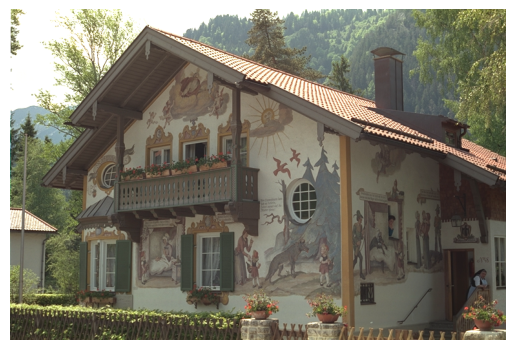



Re-converted RGB image


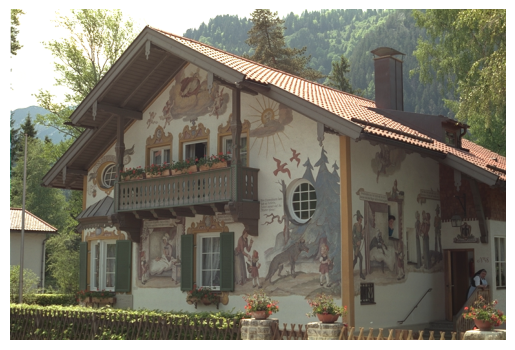

In [110]:
# Plotting Original Image
print("Original RGB Image")
plt.imshow(img)
plt.axis("off")
plt.show()
print("\n")

#Function defn
def rgb_to_hsv(img):
    hsv = np.zeros(img.shape, dtype = np.uint8)
    for x, row in enumerate(img):
        for y, pixel in enumerate(row):
            r, g, b = pixel[0], pixel[1], pixel[2]
            
        #normalization and conversion to float32 for precision
            r, g, b = np.float32(r / 255.0), np.float32(g / 255.0), np.float32(b / 255.0)

        # Steps for conversion to HSV
            cmax = max(r, g, b)
            cmin = min(r, g, b)
            diff = cmax-cmin

        #h between 0 to 180
            if cmax == cmin: 
                h = 0
            elif cmax == r: 
                h = (60 * ((g - b) / diff) + 360) % 360
            elif cmax == g:
                h = (60 * ((b - r) / diff) + 120) % 360
            elif cmax == b:
                h = (60 * ((r - g) / diff) + 240) % 360
            h /= 2
            
        #s between 0 to 255
            if cmax == 0:
                s = 0
            else:
                s = (diff / cmax) * 255
        
        #v between 0 to 255
            v = cmax * 255
            hsv[x, y] = [h, s, v]
    return hsv


#RGB to HSV (numpy) and then HSV to RGB (openCV)
img_hsv = rgb_to_hsv(img)
img_RGB = cv2.cvtColor(img_hsv, cv2.COLOR_HSV2RGB)

#plotting re-converted RGB image
print("Re-converted RGB image")
plt.imshow(img_RGB)
plt.axis("off")
plt.show()
print("\n")

## Part C

####Create 2 filters.
1. Give them any name of your choice ( I look forward to receiveing some hilarious names in submissions )
2. Clearly state what all you are doing in the filter. Like any saturation boost, etc. ( Be creative, think about stuff like adding a blue layer or making the image look foggy )
3. Suggest what kind of images is your filter good for ( maybe beach images, or rainforest etc. )
4. Comment your code showing where you implemented what part of your filter
5. The filters should be in form of functions that take 0-255 RGB image and return 0-255 RGB image.
6. Give them an appropriate input according to your filter design, and display the original and filtered image ( Be sure to choose the image such that the effect of filter makes clear difference, preferably improvement in the image ). You can embed in 2 new images ( or even more if your filter is worthy bragging about, I dont mind, but display the original and outputs side by side )

**IMPORTANT FILTER DESIGN NOTES :**

The filter must include at least two color modifications, such as:
1. contrast adjustment
2. brightness shift
3. saturation change
4. gamma correction
5. hue rotation
6. vibrance boost
7. custom color tint
8. split-toning (different color for shadows & highlights)
9. channel mixing

Implement using NumPy + cv2 only.

Write a small note (2–3 lines) explaining:
1. why you chose those modifications
2. why they suit the image

In [ ]:
# Your PART C codes follow here. You can create more cells under this. Write clean and commented code.

FILTER 1: SMOGGY KANPUR


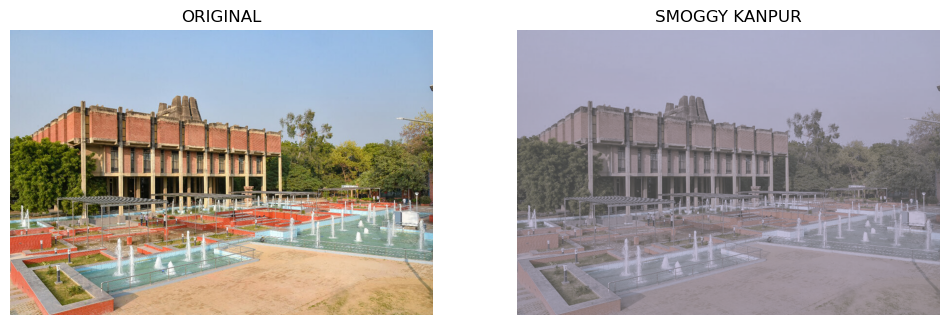

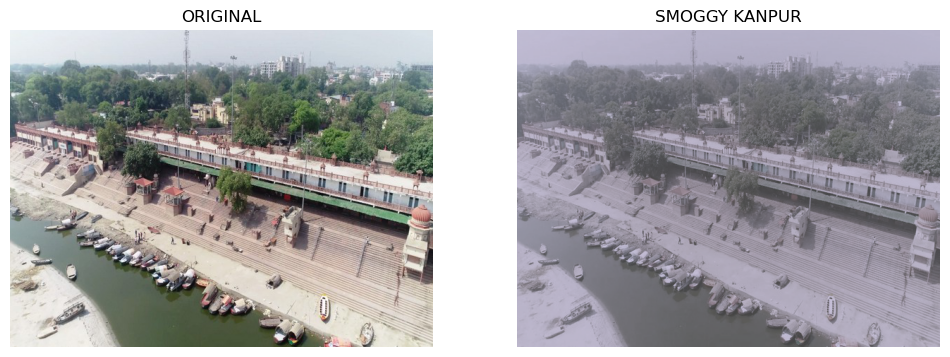



FILTER 2: HYPER-WARM EVENING


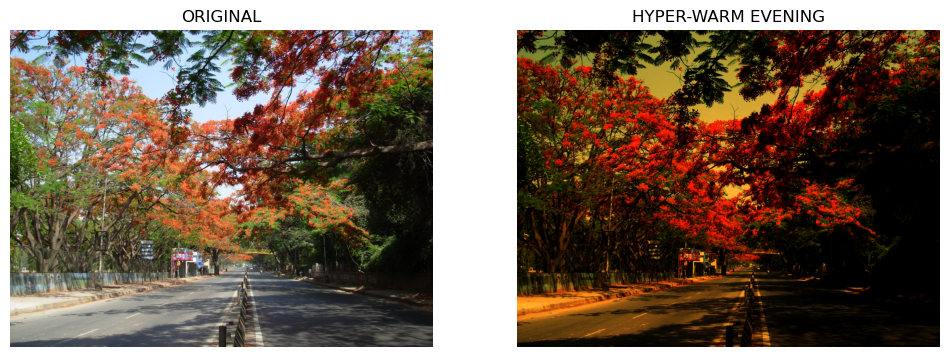

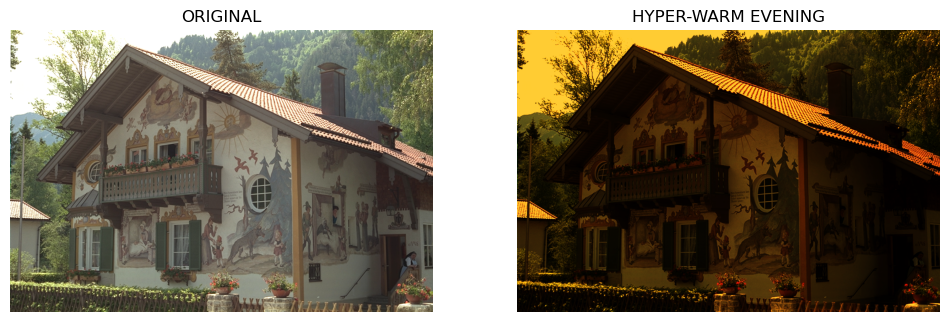

In [111]:
# IMAGES USED
base64_image1 = """/9j/4AAQSkZJRgABAQAAAQABAAD/2wBDAAQCAwMDAgQDAwMEBAQEBQkGBQUFBQsICAYJDQsNDQ0LDAwOEBQRDg8TDwwMEhgSExUWFxcXDhEZGxkWGhQWFxb/2wBDAQQEBAUFBQoGBgoWDwwPFhYWFhYWFhYWFhYWFhYWFhYWFhYWFhYWFhYWFhYWFhYWFhYWFhYWFhYWFhYWFhYWFhb/wAARCAJGA2ADAREAAhEBAxEB/8QAHQAAAAcBAQEAAAAAAAAAAAAAAAECAwQFBgcICf/EAFkQAAIBAwMCBQIEBQIEAwECHwECAwAEEQUSIQYxBxNBUWEicQgUMoEVI0KRoVKxFmLB0QkkMxdDcoLhNFMYJSZEg5KTo7PxJ2NzotLwNzhUZKSytMLD4vL/xAAcAQACAwEBAQEAAAAAAAAAAAAAAQIDBAUGBwj/xABAEQACAgEDAgQEBQMCBQQCAQUAAQIDEQQSIQUxEyJBUTJhcYEGFCNCkRUzobHBJDRS0eEWQ2LwU3JE8QclkoL/2gAMAwEAAhEDEQA/AO1JXrDziFVEYcaDfv5JNACwDQLAMmgYqgAtpoCIaqaeSIBx6mmAKAE08iSBtpDC2imgDCj1FTI7QYXFJMMBBOKYYCAHPFRAG0Cp5AG1aZEPaKB4Cx8UshgCgZ7UZYhSgYzjFMAgo9qAAFFAB7QKAAEFPOAwGFHtSyAaAc8UsgAAUwDCqDnFGSQFUZPGKCOA8fFA8Bp+mgQQGW3UABR7UAGFFAAAHpQAMD2pZDAMUZYYCx8UwBgeopZDAWBjsKZIIqKCIZXvxQAW0e1NMWAto9aeRg2illgDaBRkiD6fankAYoyAEjVWOKBYDwCMYoDAI1A4AoyGA9o9aBgAAoFgAHvQGAYoDAMfFA8B0CwI2igNoFWnkQeBRkAgOTSDAMU0GBOKmAQ9RQAABk0AAAVEAY+KSCIW2pjwDaMUBgIL70kxYBtoywwDbSyAMfFSATURoLFAwqiJdw19akMOjIBYqIsBqKB4DA4PrQLCCoDCBj4oGDHxQAMfFAAoAFAAUe1AsBY4oTGDFSzwJh1EQnHxQAMfFAAoAFGQCxQGBJUZ4oDAkrQANoFABUAFj3FRHgAHFAYE4oDAWPigaQjFBIsowKyl+BdAdg1GRQMNR7UCwGq0ZYYAq0DBjPxUhYDwMUCBQLAWARQGAlHtTyGA1WjIwKtGSIQHOKmAMfFAAoF3BQLDBg0ABRxTQJAUe1MeAUREEB70CQMVIYMUsgGo9qQkDHc1IYYHvQAMVEAYoANKAFVIAVEAgPegA/TNAAUe1AB4oAIg1IAKPagAVEAY+KABUgBQAKiAKkAnBpZIhj2NGQCUe1GQDVaMgFj4pgDHxQRBj4oAMD3oJAx7UAHQLAKeUMID3oygAB70ZQBUyIMfFLJIMDg0yIWPigAUEgUEQiBQASj2oALFPIsBY+KMhgJgd3A4oyGAL60hAX1oJANSAGPSgAAe9AB0AJx8VEWGFimgwE4xTGJoAFRAGPigAKPagAUAGvrQSDpYAFMAUsACmRBQAmogAcA00AqmAS+tRAKpJgKoFgTQIFAAx8UBELFRHgGKkMS3FABAcmlkBOPijIsIFIYmgAl9aAAB70AFtpZJCMUZAs0BBrMaBSrw1LIBr2pgHUQDUctUgDoAIH0NEQBigAYoFgGKMhgGKaYgsfFGQFUxITTQYAo9qYgY+KaALFMAbaiAePimgAo9qYshAHFERB0EgKPankiBR7UZCIFHtTyAFHtRkAwMUssAAe9MeA8fFGRAUe1LIAx3NGQBj4p5APFGQAB70sgHSACj2oBYDX1oDgGKB4QVAgEU8gFijIB4+KMgJRAAcUZAPFPIBY+KMoAY+KAFUEQsUAHQAX9NAB0CwCpRGFigAKtLkAqYBr60AFQAYHvQARFAAoDAS+tEQBinkA6YsCaBhY9aiADTTFgJR7UwwFjigMAA96WQwDFMQMUAEcdqCQMfFABYoIh0EgsUEQmGaaARimEQsDFRAFAAoANfWgBS9qABigAf00DwHQMID3oIhUDwCojC7CmgDpgCokQl9aADqQBL61EAqABQSBQRBg0ACgkJx8UCwJIoGJIoIhcUD9AGgQnPBqI0Ev6aBgoAsh+pqymgMD3oAMY5FACqABQAqmgCxTAOlkAUgBTQAUe1HABYoyAMetSTFgLHxRkQFHFMWAVIYEGaWSIMfFOIAp5ALFMA6WQBTAGPigAuaADUe1AAx8UABQKADA96AAvrQAdAAoFgFAwwPegAYoAOlkAY+KMgCjIBY96MgAAc0ZCIdGQCxRkA6MhgJfWmLAdAYCxQGAAe9AYCAFAsMCj2p5AGPinkWAUAkHigYdAsAoDAKAwEBkYqQILHxUR4BQLAKBhYoAKmgBTIgoAFABYoAIfpNAAXFABc1IAYqIBY+KkAKiAKkAMfFRAGMU8gJoyAajNCFgKmGAKPalkMCcfFMQgrigAL60AAD3oAUgqIBqPagaBQMFSAFRAFABYqQAAxUQCwKACx3oFgOgYKCIKABQAWKADoALsKiAAfegAsfFBIFPJELFIeBJAoEJAHYVIBPvURoTigYVAAx8UAWY9ayI1B0wFY+KiAFHtQRFY+KABTTHgLFTGHUQAoFAAUe1BENfWgAYpoAY749KYBEUCwBR7UBgAHHFGWMFAsIFSEFxUgDpZALFGQDoyAKYAoAID3oAGO9BEPHxQPkGPigQFHtQAYGKkAdRAID3oAC+tAB4+KkSBUQDX1oAOokQY+KkSBQRCxQAMUsoA6YCaABUgBUQAo9qAAo9qkAFHtSyLCBTFgCigAY+KABQGAUACgBVSDgSRREAl9aADoATj4qQAoALFRAOgBNSAFLIBECmRCoHgFAwUCQKBhdqBYDoDCCAxQGA6BBcUsgDFMAsfFA0AeoFAYCA70CCqQBbaABiogkHj4oEgUDBQARoAC+tABUAGvrQAVAAqICaAFU8gCkAmpAAAc0sgD/VTALmogBfWgA8fFACaBYBQMFABYoASRigWBBFSHETUR4AcVEMAAFAYLKsppDX1oHgNPUUDFVEiCpAKoTAIAgVIAf5qOQB/TTyAF9aMgBfWkRDqURoFSGDHoKiRAo9qaAFMAl9aABtNAsBKPajIwY+KeSIYHvTAOgAsUD4BjmlkQdMeAUCBQAKAAP0mpAHx80AFQAYHvQGAYoDAdAAqIAoEwUCBUiQKABQAKiAKaFgFMMBAe9Aw6BYBQGAf6qAwCgQWKABmgA6ABTyAXGKMiYdMQKCQmmiIKeQCxRkAL60AHSTATj4p5AGBSTAFPIBD1oyAWPigiJwaCQa9qADqQkCgMgqIwUAJoALFABrigWAUCBj4oJBbTTQB0yImgAjgUAHQAn596CQCKCIQI9KADoAFACaABQSCX1qIsB0BgFSDAS+tREHQAKABSyAS+tGQCHqKYBGgA6AE0ACgAUACgAuCKWQEsBRkBOKRIKgBKmgC0VfvWU14YqgQAMCogBfmgWA19aAwAetAg6eQBQgBTAFAAoAA9akAqlkBOPijIAU+1MAxgUCwFUgwKoDAn/VSQhVGQCA96YBBfejkAwPejIBADmgIh96MgHRyAQHvQLAAPenkMBqPakGAl9aaEHTHhhDjNA4h0CYWKBBqPalkeAUxYBQAKABQAqglgJfWgWA6BCaABQAKABTQCqYCaABQRBQAKACLAUAHQAKABTyAKMhgLFMMAX1oI4CoHgFANAoECgeAUBgTQLAKAwCgBJxTyAFFPICqWQCxRlgFgUZYBAe9PIB4+KMgEB70sjwDFIWAYoAL/AFU0AFHtUwEkhaABjFAAUe1AsAqIwgPepAAD3qIsBVIMBfegYF9aCIF9aiNB0DE4+KMgCjLAFAAoYAIoALFRFgOgYWKEwDp5YCSKMsWAgPelkYdABYpZAGKYB0AINACTQAigaQKiGEWaZIrJlGsOmJhr60CDoAJfWgA6ABQAKSAFMAUEQU0AFzTGhVAwUEQVIAgPelkA6YAoAID3oANR7UsgCpgCgAUCwClkYMfFGSIFHtTANfWlkAL60ZAGKYCuPmgeAqBBY5oAGKACx8UCwBR7UDFUACgAgPepCwDFAw6WQBRlACjIBAe9CYB0wBQJoFAgUAJqQBr60AHQAKAE4+KWRYFUZDAKMjBTATj4oIgoAFAAH9QpZH6BH9JpiCoDCCX1oFgOmgwwUwwxHagYdAsAoFgFAYB3JoGgUA+wPtQCBQMFABYoAGKBYCxmgYKCOAjQGAlAPcZoJB4qRHARFRATUsgBR7UZAIA+lGQDoATQAKMgCgAl9aiAdABGgAqABQAKABQAKB4CAPpQIKogCpBgFA8AqIYBQPCBQAKAEgd6eQEkUwEkVEBNAFmB71jNQYGKADxQAaj2oFgGPigMBge9AYDoGEB700LAAPemMKgiCgA19aADoAFPIbQUZFgFMYKBYBQIFPIApRAFSyAACKWSQKYCqMoiEB70AFQAYHvQAdAAoAFPIApiwCoiBQAWKB4DoEDHxTyAMfFGQBTAGPigBVAAoAID3oAGKAAvrQAAPenkAlHtRkAUZAGPilkAUZAFSIgUe1AApZHgFCYgUwBQAWKADoALFABUACgAY+KCIKAE0RAGPipACgAsUAAD3oAGOSDQAVAAx8UBgGOKABUgBSyAKY0DHxQIFJACmSE4NBEID3oFhh0DE0EQUEgUAJoFgFAwUACgjgTj4oHgFRGCmgBTAFACVHBoAJfWgA6WQBRkAUwCXsaiRCIoJAoAPFAAxQPAMUCBilkBJpgJYUAJINA0JxURln81lNAa+tAB0AH2FABrigAUACgAUACpCYlR7UssQqmAKADX1oCIVLJIA9qMgHimRCHrREeAUCBQAqpRACilkiCjI0EO5NMYdAsAoDAKAwCgQKIjwCnkQKMgCjIAAORj96MsAUwBQAKCIKABQAKABQNCqAwCgMAoDAKAwCgMBL60BgOmgwCjIYBRkMApCBUgCx7UABfWgA6WQCX1pgHRkBI/SaeQiKpZALFACcUCwDFAsBU8gCjIAx8UwiJoAVQAmgAU8gCjIApCwCgMBYqURh0sgCjICcfFGQBRkAACmRBQEQUDwFxQILHxQAWKACx8UDwCgQKACAxQPAVGQwCgMAoDAS+tAgqABQAX9NAB0AJx8UEgUsgBR7UZIgx8UZAFGQBRkkCkAXNAkHQMFBEFABGgeBOKBCTQNCG9aBljH61jNQqOmgDpgGvrUQDoAFAsAoEAfpNSAFAAx8UCwEBigMBqPagMCqAwEB70DDoAFNMAUZALFIWAYoTDAePinkWAUwBQAKABQAKABQAKABQAKADX1p5FgOmGAUCCxQAWPigBVABL608gDFGQAB70wDoACj2pZAGPimAa+tLIB0ZAFMAsUAFQAYHvQAVACqAE0ACgAsUAHQAKCIXFA8B1IYKWQE0iIKkAMCogBR7U8gFimAMUJgHTyAnHxRkAUJiYQHvTFEOgkJoAFLJEFOIAoHgFAgUACgAUACgBNABAe9GQwHQAmjIAx8UAJoAGPigAU8gCjI8AoyLAmkAKeQCX1oyAdGQE0gBQAWKABigEgL60ABfWgA6ABQCQmgbBQIH2pZHgFGRYBRkaCxRkYVGSImkAkAUDRPUZrKaRS+tABp60AKoAJfWgA6ABQAKkAqoiQKBgqQApIWAv6qYYDoECgeAUDBQRBQAqgAgPegAsfFSAFRAFAAoAFAApoWAKPangeA8UBgGKCIdAAoALigAAn0oAOgWAl9akMNR7UAKoIgoJBAe9AB0ACgWAUBgFAYBQGAUDBj4oFgFAYB2oEEvrTyAMUZAAHvRkA8fFIBNAAp5AFOIAoAFABL60CwHSyMJfWmLAF9aBBVIAUkNII0ZDAdMQRoAKgAUACgAsUEQGgAk5XOKMkgUAHigSQVAwUADGaACxQLAF9aBhY+KMgCgAhigAhzTQApgCopiwJwaeRgpgCgiJUe1AAoH2BQMCjjNAuQUDiJoD0BQEQsUsiwDFGQQF9c0sjDoAIetAB0AJoAVQAnHxQAKACNABVEBs8VIEixX1rKag6BYDxRkMB0ssQa+tGWAdGWAKMsBPf0pgH/TQJAX1oGBfWgA6AAo9qABQAMfFSAFACqBcAoGCgAUACgiCgAsUAHQAQ4WgA6ADX1oyAVAAoAFAAoIgUe1AAwaIgDBqQAoJBr60EQ6kAMfFRJYAo9qAwDHxQLAa+tSDAMUBgGKAwHQGAY4oFgLFA0gYqIYCx8UCDxUgCoAFAAoFgFAsAoDAmlkkKp5EhNAwUEQUsgBR7UwC2mgAqkAADQAOSaABQRBQAWKADp5AJfWjIBUgBQAKACX1oGg6AwCgQKB4E1IYKABQLgFAxNRFgFSGJoAFAAo4FwF/TxQHAVAw+PmgiFQAMfFAAoJAoIiaCQKACNBEH9NAB0AJU+1RAFBIFSAFAsAqIgUACiIBGnkAqQ8CaBjdPAFivrWXJoDpAGufWgA6SANfWmLAF9aAwDFAYB/TQIC+tNAHj4pjwDHxRkQa+tGQBigA1HtQAX9NABqPagA8UAFQAa+tAB0AFinkWA6QwUAFinkAAe9GSIAPekAdAAqQ8AoEClkAKPamAKABQAKABQAKABQAqgAUJgGB708gGo9qMgDHxRkAUZAGDRkAY+KYBYoAGKABiogFTTALFGQAB70ZAKjIsAoyGAUZECmAS+tAB0AJoFgFAYCX1oiGA6eQwCmGAUsiCxTAKlkAf6qaYAp5ALFGQAvrSAOmgE0wBQAKACxQAdGQBj4pZALaaYCTQAePijIAoATQAKABQAWKACoAJfWgAGgAqADxQAWDQAKABQARoDAVSAFLIApgCojwJoEGvrQASj2pZAFMAY+KACxSyAMUZAGKMgERRkBBphgRn09fQCoZhH4mSSk+yLFfWs+TQKX1pABRg0CwHQMCg+lSANfWgA6CIKAwCgAUZFyKoGCgAUAGvrTyyIaj2pACmgBj4pgCgAEUAGvrQAMUADFABUAHigAqAFUACmgE4+KQAoAFNACmAKABQAKAFUCwCgMAx8UBgNfWgQAPegBQA9KADoAPbQAMcURAGKkASj2qIAwaIgFinkAsfFIAsUAFQAKABj4oiAmgAUACgAUCwCgMBYoGDFABU0AKZEFAAoAFAAoFyJoGCpEQUACgAUADHxTyAKMgJpAGvrQAdAAoAFACakAmgAUAJqI8Ap5GCkLAKIjE1LIB9qACpZAIetOJEOgfIKBhcfNBEKllkgUZEhNGRiqYCaWQBRkAUgCX1oAOgAgcZoAKgBVACaBcgoEJJoAQx4NAHHfEnxV646d6xv8Ap+HU4dFgtiklnLY2i+fdxMMhzK4Y59CBgV5zqnixs5fDO5oVXKvtydwHrXZOaKX1oAOgAUAGvrQAF9aaAOjIApAKoAJBQLAdSEKoAJfWgA6ADAPpQRDpoAU8gHigeAYoEDFGQBigeAsfFAg8UAFj4oACj2oAGPigAU0AKQAoALFAAxQAdAAoAFAAoAGPigBVSAFRANRw1ABotABge9ABqPamgDxTIgxSWQX1CpgCgAUAI7GgA6AE0DwJqIYBTyGAUgQmgYKkLAKBAoAFLIAoyLIWKeRgxQLAdPIYE0xAqICaeQBTiAKABQAKABQGAU8hgGfmjIsAU+1GQwAfpNGRgpgEvagAqiAKBYBTQsBGjI0FRkYmjIApgCgAUsgJoyAKaYAoAFAAoAFAApZHgTRkMAoyMJfWkLCAPWgeAqAwFmgMB0CwJoDAqgMBD1oDgIetAgD9JoAFLICfcUwG39aMoDn3jb0BddXLZajot3BaatpgZUM4Oy5ibnymI7fVyDzWfUUq6vb6mjTXeE+ex06JwxIHp3zUSQugA0PegiHQPAKBBr600AF9aY8B0siDjoyAdGQDX1pkQAe9A/QMAUCDX1qQB0AGvrQAMUAHQPAeKBYDoDAWKeQDwKMgDHxTAGBQAMfFAYCxQANooyRCoAGPigaBj4oDAMfFGRBYoAAHvQAePigeAsUCDoAMD3oAVigA1HtQAMfFACqADA96AXqyv17XNI0ZUOp3yW4cjGQWI+SBkgVk1Gu09E9s2aKNLfdHdFZD0PWtH1mFn0rUra8Cfq8p8lfuDyKsp1FV6xCeSFlE6/iiN6x1BomlXHkajqMVu/ruBIX4JAODVFvUdNVZsci2vQ32V71ElWF5Z31v59ldQ3EecF4nDAfHHY1rrursy63kzyqnDiawP7WBwQRVpBYEtxUE8jYVSyAWKYCcVEAqABQAKABQAKAE0EQUDwCgQKABQAKkAKSALaKYsBUsjBTAFACQBQAqgWBNPIwY+KMgKoyLAQxRkMBUwwDHxSyGAY+KMhgAHzRkMAoyGBNGQwCjIYE0ZDAX9NGQwFRkMAoyGAUZGCjIBYoyAMUZAKlkAUZAAGKeQBRkeBNMYKiLARoDAVAYBQGAUBgFAYBQGAs0BgAPvQIOgAUAJpZATTyAQ9aWQG2X4oyBOUKGJHrVBoF0ABKAFUABc0ACgBVAAqREMetRAOgA19aAFL61IA6AFUACgAUAGvrQLAdS+SHxtDx9OccVHPpkWHjlBDmpDDA96WUAaj2pgCgWAY+KAwwsUCAB70ADbTyAWPijIA25pgCogFipZFgGKiMNR7UADGKBYDA96kMC+tAB4NRANfWgBQHvTQB0wABipESm6210aHpoZED3E2RED2Hya5HVOoS0tfk+L0OhoNEtQ3v7I5N19rHmr+YllEk0sse/ceexPNeOU5Wzc33fc9RsVcVGPYsPw6TKOrdRfgD8kxA9yHDH/Fdzoktlz+hyurRzUvqZ7X9SieyDXdyiG6mklLM/fJHGa4jk5Tb+bOtHyxSJPTPV79KdC37WDpLcXN9aQq/fy0k3qX++RxXY0N040WxiczU1QnfByXuM3vUvUOna05stZvIiG5QSlkJAzkhq5+m1N6isyNl2moawonWOgOtNO6pM0EMc0N7aqDcROowTwCykcYya9doNb+ZzDthdzzWs0fgzbNHiuh6GJPIDSATigAsfFACSKABRkAUACgBNSAM1EWAqBgqQAqIAoFgFAYBUgwCojE1IWAUBgLFAYDUe1RDAMfFAYBUgwCgYYHvQLAMUBgGKAwFg4oDAMfFAYE4+KBgoATj4oAFACcfFAYC2mlkMBUwwDHzSyATA+hoyASAgEE5zTAVQAnHzSyAKYBL60AFQAWaWQDpgCogJqQAoALNRAOpAJoAFACqABQAmogCgBNSAFADbetRAnVSXCqWQBTANfWogKX1oAOgAl9aAFL60CwHQIMYoAUB71IAL60ALpoAl9aYB0ACgAweKAAMZpN8ZQJcnD/GLqPqTRes4JNM1aeNr2SG0de6hHZlbaOwYDse4rxv5y16ia3ep6daevwo5idR8K7671DoOwu7+5a5uWDpLK3dyGI5r1OinuoU36nB1kVC5wRoQR6VqMwoH3oAIEZIyAR6VGMk8pPlD2yXoGvrU/TIk/RgX1pZQAOKaEmn2CpjFUZQApOSBITjinn2IrIKABQAKABQAYHvQAMUAKA96ADVSTihegRMbqXiRolhrF1YTWl6RazGJp0UFXYeijueeK48+rwhbKuUezxk6lfS7LK1OL7haZ4rdE3PEt/dWeXKBrq0ZV7kZLDIArRDqeml68lM+n6iPobSJlZA6MGVgCGHYg8g10Vz2MOcPDOReOWqzSdZrpiHYltbrhl/rZgSR9xXketzzqVj9vB6Xo0MUtv1OedR3EsWmpGcBXn7rwSQvGTXLisS+p0ZfAT/A7VHtesridslzpV7zkYciEla6OhkoTf8A+rMOtjvq/wD+kit6jthDpNnJLGEZSxLMhPHHf24rn1G2awZzqq9Fn09vtRG8d1f2jOO5UxyOwx9/WtunaW6PujLfw4z9jd9fRSwa3vQRfXDGwCDsSoyOa59OGn8jZPOUiu8C9VuNK/EYlpLLMtvrVqUeINiLzCmQ3J/1R16HpskmcTqKbR6Yj5Br0mThJAxSyGAsCjIYE08iBQAmogJ/1U8gCnkAUsgCkAKACxQAVABge9AAxQAVPIAoyAKMgCjIBAe9MA6MgDHxSyAMfFGQBRkA8UZAKjIAUe1GQBRkAUZAFGQEkUZJCSKYBcUAJNLIB0wE0AEOKWQDpxATQEQUsjwJoyLAKEAWaYB0sgJpgCgAUsgCjICc/NGQxkI0w2gzSyAF9aMgD+mmAdAAoAFRATTQsAx8UxiSKiGBNAEyqMFuBVCEAetMIhr60Eg6CIpKABgUAGuMUAKX1oAOgA0FAB0AHinkAAe9MA6AKnq3qLRumdLOoa1epbQ87AeXlPsi9zVN2oqpi3MsqqlY8JHO+p/Gp9JcTR9NrPZtCJwWuSsxQk4OMYGa40ettzcYI6cul4huyR9H/ER0rO8rXWiavapCM7vofd/la0rq8WsYKf6bJtvJReMYe+6k0q9jdtk17bOh9UBY15lSTvnL5ncUXGEU/kbPwj696Ks9At+mrzqvSoNYt5JPOspZ9kibnLLnPHI5716vp18FpYps8/rq5S1EsIf6y8QyLq9sun7qzdLZObyGVZd7Fd2FwcYFYeodUthPbWzZodApxzMylv4p9bW01wkpsrkJAXzJbAYHuNpHNYodV1SXc0T6dp5Pn0C6U8XH0jVZ0v8AR3u2KYnlFzh3bOeA3tUdFrHTZOx85J6rSO6O3hYL3/2tpc3EF29tc2NkrKxQKJCV9SxHf17Crp9WsnepLiKKYaCtUtS5ka7T/EzoW7BZOoIoATwLqJ4t32yK7cOqaab+LByXor0Xum6zo9+Qtjq9hcll3ARXKMce+Aa1xupl8M8lMqrI/FEnqrlN4UlP9Q5H96sXPYrIPUeq2mjaPPqN4SY4hwqfqkY9lX5NUanUxor8VltFLus2ozXh74l6B1dqa6Zp8V5FdlJGZJouEKY3ru9SAyms2l6jC+eMF1+hnVFybNkOa6C7/IxpMOm8DEjuaEwBTYAqOQDA4oIikFGQDppoAOywxPMSQI1Lkj2AzUZSwm/ZDisuK92cYjsbd7rz7vFxczTGZnXKKQWzn714GdkpTlL5ntIQ2wSMFqaxJqNzGIUSKSVzgLxgkn9qnCYpLJ0rxF686ns7y607o61nu5rDS7GVY4rYTbzIv1YBHBA967Op1ltV0VGfGDl6bSwshJyXOS6ueh7rVbpNV6k1KwsnuYIpZ41y0pfYocYU4Bz6ZNefv1jtm5Pls69FUaoKKOd+KsXT2l2Fva2kt3KtvcMZ5OD9eB29MAdxzipUttqTFPszCaJqYt9eguNN1OKN/qJSRSDtKkEe5GDWnLjlr6FPdJP6mo6t0/T7jRbdrLV7rEikl7iNQC2BlWXPAY4I9AKz1PBdYjFeJ9nGnhrc3FpK8txaTpNKgUYwGAyGU+nOa26WadyT9jJqVio6Fe29xquj6bP5lvBJJYQuRLcLliRng1ihxOax6mzKcYv5GW6la80DrfpzXnh/9G5A38GJ9rq36h8ZrqaCbU8HO1sMwPWK7Cd0bBkblW9GHoa9WmebFVMSE4+KAwJx8UsiEkUZALHemGAqWQBRkMCaMiwCmNIFABD1oAC+tAYDoAJfWgAqiAKkAKAC/qoAOlkAUZAFGQDX1pEg6kRBSyAKMgCjIAoyGBG5e2aNyDaHRkAsUZJCWFMBOKACx8UsgCnEBNABHtSyGAqYAoATSyAKMgChMBNMAUsgCmAmgAUsgCjIAoyJBDFGRhUZAVRkWAUZDAS+tMMB/wCqlkMBGhCAozRnA0NQ3EU4DQkurE/UAcZBwRUcjxgWanhgJNAsExfWqS0OgA19aADoIgx8UAKUe1ABr60AHQERVA8Br60siDx8Ux4FY+KBAoJBZoTfsHb0Mh4x9ZydG9OJcWdmLu/uy6WiOf5YZRks9YtbqlRD5s06Wh3yfsjzjcwdadfdQQTX5nvnuXOJyCERVb6lUdlA9hXnbdRnMpvk7tFGFiKNT4k6U9hdGyvLnaYtOhtbmWZhHtATGDnj0Fc+F0VM1yqmlzE5dr1hcas9vZ6a8ssoUQkRRbgWB4PH+TWyE47XyZlHznaOu7y6s5dG1BtKBijhsiVkb685I3EegOMisdbzORfPjszzTqE6674rXsjn8kZLpFxguI+MenNdalJads5a5tO4eEXRV5b9L6t1FNdJ+XRJEjSHO1xjmTDY49s4rlXXxzg7NOnk45RstPj0O90Wa9guLC7jTas7fmNqgHuDngVU5omqprvEz/UvQv57WL59K1K23SutxFtIkbaw7AjPFWwtS7lE6yJYeHXXVpZhru+WSJpjGkWzjyt3LfBxVnj1+xDwpe5D1Po7q+PRMS6YJ2gc7Nnd1y3b57UKysThJGSgudftJH/MaDLGghKzEITtYVp8risMqxJd1k1nRevztrWbHWNTsBBGqbBLKqxSt/T328ntR4tkOzf8gqYS7xR02/vru98LbS51fVZLuS21aTzJJZQ0gXycKD8ZNarrJ3aBNvnJnrrjTrGo9sFL+HSIDxTM4fhkvQI/b+XDU+lf3sPvgj1COaHg6r4n6mNP0iEtqZsRIzFnDhS4AzgGtvW7LIwik8L5GPpNcJ2Peuxk4PFvpvSdCWxe/Mt1bgIJthljfdzgkHO4A1nq6nKvT7IrL92aJ6BSucvQuuivEvpPUy9tP1PY/mi4KpK3lkjHbkADBBrX03Xbo4vksmXXaWMZfpLg12m6ppl6hlstSs7hFO0tFcIwz7cGunXfCXKksnPdc0stEwK6jLqwBqzKZDAI/Wjj3F9hVGY4bYKL7EFdc0U6i+mjVrP84koiMHnAPvIyFx6ms0dZS3hMv/K24yN9Z3D2vSd/JHv3tF5abByGY4qOusUNNMejg56iJzy36Z1NTLdXIS3ESFyLhuT3Iwo5rxG5Hr8GUubbpnRrApctLd30yGSWaMkRRD12A8k1KO59iL2ruWtr14x6d/hems2nWk1v+XMUpwZ8jB+4xUmm3uYk4+hL1fqJo7B31y/2G5i2RJAcMq7QNsSjke+aq8PDJZML1ZfrddPWdjp0UlvBC8whMpBeUYGWPsc89/WroIgzBILqHVrdp43Cwv8ArXBVs8YzV7xgqSe46RrAjPS+nxrEGOJGySB6jChvXGBnNZovk0syXVMEt/0PrFj5pQNYS/VswVwpPb17VoreJpmeazFoPomVdS8G9A1OSETNGjQylpWLb8DjPcD49Kc1t1El7ipe6mMhq/t47zpK5gmL3EFpi5RJU34wcMqn04Jq2p7ZohZHdFnpnwe6ig6o8OdL1aGUy5g8mVtuPrj+hhivVaeanWmeZthtkzT1eypApEkJqQhNLICSKMgCjICaMgCjJETj4oySBRkAUhYBQGAU8jBRkAUZATSAFAAoACjOaeQFUZAIcUZAOjOAC3qAckCjdj1DAdMAUsgChsIlZq2oJZliN0jMAECDdz/p49/mqJW7ctF0K8mG1PruK36kghWd4GnkVHSVx5cZLAYH398k/ArlT1yVqhF9zV4GINnQ1vLQyMguYcjH0mQAjJwOK7EL4bsblkxSqlF5aH8/NTTIBAcGmmAVTGhNREJ+KB4E0BgI0DCoAI0EQqABn5oHgFAYE5xSyGAUxAoATn5oAFABZoAOgBNLICqYBL60ABfWgA6ABQARoiAdLdBp5fYEiDqE8EMMzq6GWNQzjeAR3xn2rJbOFUJN+vJorjObUcDmnXUV7YR3cDB4pl3I/wDqHvVmmujbWpxZC6uUJ4aHKvzj1K+SdVeSYABTANfWgA6ADA96ADpZFgVRkYpKMkYiqRIFABr608gHTjzlBj1wQNf1nTdD01r7VbxLeEdi3LOfZV7sftVNl8KYZm8FldNlr2wico8Tev8AqS66S1DVNCV9KsraAyJN3mc+hY+g+BXndR1Wcp4hwjtU9OUIZsKbw6TUPELV3HWvUb3mm6IFkWKdEXMp2nClQMhqwazW2eHiTOhotDBzzDk6ld3NqtqsWi2aWcJYkyAYzn1Uen+9cB3Sazk9Xp+mfumuDmniLDaL1UUmEMmYkZxMitu75HIqMJs3Togo4wUElnbGRLmKyiV4UDxyRD6l+xWrVZLtkyz01XPlNF1bZ395PogmjiEd9a2RMXnEsFyfp3Afua3UNJNnl9THFskeZtQjXQfE6/8Az0F1AsN6NsioXUAY7sBzXajZHwNuTmwofi5PQPTVxDrPh5PrFhfyPBPazIjR5QsAcEqOMYIIzXnrV+phnq+nw3Ubvmw9AmhXQpLdIjPHMuHE43GX4JI+o/f2pZZo2cEDUrO3git7mKzjgVoDAhgixIDuyP0Mp2/ckipxkUyoz3SJ/SU+r/wpT/xJdCKRSzxJLKURuwb6+cfvzTcyv8tH2NBqvXWs6BPaoLxLxjGHeGSEBNg4MgxjJ+KSxLuQs00EuEI03rm+u5p11PQdMW4ZgsUypKpnTHHbgfGalLCXDM60rkTtP1bpu9nm87QpDBeCPJV13eYue6nGCDUt7wR/JN9kecvxFIz+NkMWl+cI3gtiYS+GB3sMMK7HTnup5OL1CidF+1+wjqfUeuOmtAju9D1HUNNZLrYktk5WUAgbwCPqwfWtsMRm5LuYpbnFJ9jRdB9X9ddVXmkHqDULvWLfTbyOJIJ0BcFx9XcZYkD1zWXW2trzPsa9FWlLMUdxvOgtNuZdRjgsILJxDHLEXtAFQ4xuLdga5MbW2dGcYr6mF6Q8FNUudbUa+UitE80iSMEicNyv1fPbNaZamCjjBnjTl8o0+n+AtjHpaTprBS8jhzlshf8AHqKp/PFr0se+MldZ9GeJ+kpcXVhq16gS0MqG0v3dZioyFKnnJ+K0x1/pCTRTLSJ/tLXp3qjxSR9LV5roma+NvdR3lurR2/DHlgNzYAq+PVLY9pGd9Prl3jg1up9S9e2LT2l5Z6ZLC7eV+cTMRUMMZQDgke1WPrF04uDa5+RBdJqjJSWTmmtRTW/i1m3lDRxyRMrnvuBQjn15FYKm4z3epscMpw9DpHiD1y460/4St54oru3t4b5xt5YFRkhvYbq6vVr7sbG/K8HP6bp61LL+JFL1B1VafkItNXVIZZLogTF5dolPb6sZJGQSftXCjBJZOsufUrz4bdU9Vi1udR626Y0mzu5WidNJZbu5yBlQWYqozjB4qC1LXG0NqySPEvwd6a6RvrB9NfV9R1a+iG/ULy7aTyEHJKrwqArlMipUWSmnGRFxj6FcnT9rpcKcpezsNsn1DKf35q/dnuCRM6mt7WbRbNEjieSKJzmNiCMkHOajlpksGEtumNRn1yx8g3Ihmfdltp+lT9TYPoPmrHLgikkzedSxWMum2sFoYnRYH2ybs5bdzz6VVBk5YMnFpLzO0UbwmQnB3cqMjGMD0q7JUknlfIyn4eRfSdBax0/dWgSDQ9TkUyk7d7biuFHzyau1bXixmvVFGkT8FwfozU6Vp86XwiSRtrBsJjgr7Gq3PGGW7XhpGs/CDfzaTrnUnh/eLsaxdby0J7unZv8ABjNek6fbujg4Guq2ybO5102YAUgE0ZFgTUgwCgMCSKAwCgYWKBYBikgwFTEFiogDFABVIAUsgCmAWKiPAVAw+fmjJEC+tPI8B0xAoJELX70afpU92Y2dYomZtpw2AOw+aqtlsjknXFTlhHMLvrm78i2uJILgMoDRO6b1yO6uo7DFcSete2Mvc3xozwbfw86jt9Yt3jNx/OZ2eNJJAzOvc7cegz6810tJqFanHPJkuqcXyXGrapbadHmd0DYztLgcc+prTZbGHBXCty7EbpnqLTtaiTyWe3mkJAgmwH4OMjBII9jVVOrhbEbpcXyYHXtb1LSr+6nvLmGF5pGASJwyxxH9OQvaTHp2+c1z77ZV7m2bKIp9zkOsvqR1NLi3mxGsx2chjk84Bb1xXmrISnJtm9NJGo8GNQlv/FKGw1K1DRIollLzEtuI+hsdz9VdHplUnepy5MuqsThjB6Ir13HocoGPigiFipAJNBIRUQE0ACgBNSAFACaiAS+tABUACgBNABfegA6AE0ACgAUACgA8UJMWAYpZGDFGQiHTAFABZ9yOe1Jy2iWfQrtaRYrWWQOFLtvzKx2IR2PuP29TXO1NeIz2v4ufpg1VPL2jTTQ6hYyRrZb1m+mUSw8fv659qwafqVWroclW8pLjGWi6VMq7d27gh2F3PaTGyYRBS2Ekxtzj4J9fmuRd1Weku8HT/wANcpmpaeNsXOwk39/mFc74SULfqweO4+DWyzrU61ttS3Y4S9X/ALIhDRZflXBowPevUZOWHTQBr60wD21EAwPegA1HtQAYHvQAoA+lAAX1oHgOgQB7DvQHrgxfV3if03oVw8Ci71NoMG5OnRiVYB8tkAn4FYbdfRXLD5Zrr0V1kcoY0mysPE2zt+p4EuoNLbcIjdxBJDj6WwMnbzXlup66Erm4rKPRaHSOEPMQPHG306Lwun0Hpx4ndHie8mYkKgVgSAR3J7HHFcmN8nLMux1loZzj5FgxfgxaypqOq/mQPKuJllhw2/K9sE4H+1PVWqxJI6nStK6HJyR04qEiVE5yvPHAwKwvuduPbLMB19bs/WO+GYKXgXIIGTwcHnmpRRTNlWlrcR8yskpMeGULhvueKsXcofOTW9YRbdW0El+YrSy+x5at9HZnlNX/AHZfU4xf2Quupb58bg1y/f71m1Fkoy7llEE4nR/D+zjTwk2LhAYJxkJnH8xqhJybx6na0MUtN92U+hyuIYQyMoO08nbkA43KOxq5DeGWd0baaJ43RCwY7y+0ce+P6TTIrOSLo0Ah808LHIf1IxJwD/VjhhUS5Lgs2hsJpf54Lqj/AEbuB9gWB5poi4oVY2yW0zJA6QLK5k2OMI3png5VvmnkhiS+EkXnlh03mPYh2l5OffGR6fc0JicEecPxCzyR+NVqxWXd5ELRkNuAUM3Ga7vS8Olo8v1uDWpTfsT/ABQurY6HEbu5/LBJ0DShuz4Hcj3rXHuctPJqPASfUrmzc2WvGVEnVkSGaOZ0H+oAnKfeuV1GWFn3Oz0euMptSN9qFxrFx1VqjTaxcJOWjeNXkZGAKjjKntwRjBzXNg+DvT06zx2LJ+puqLLSyll1FchGPAkUSEEDPBIJ7/NOM36kZaStx8pO6c8T+o7SGBNYntNSkdNvkR2ir++VO4GpcJ5wZ/ycV6k6fxVvba5Fvc6MgkkYtGwV0VQB+ngNlqSisMhLStPGS30rxQ0K9kjhe2uYWcLuDY4JB7DOSPels+ZDwJJ47jfit1hod14VdRS2t+8MsGmyvC3ZywU4aP5FOmDdqKr6pxqk9uMHl7QuseoYOm7nWLe882WG2Mlu90PMIZWyrHPc9uPWvQToinwefrtmWfRXUnV/ihqk1zcrbzalcQQ21y0aiAGOIFVUqDjJFV66aSW/thF2hrzJyXc7ZpnhSILWG2vr0Wt5FZjdGY8qVZ2IPPYgcZHeuUtQn6ZOh4Pbkrta8Pr2K9B0e6hvVt8B3uH2t9iQPQgVOFnDyiDra5TKCK26vs5JDdwXWfNSKORLguGDZ+sf8gIqzMPQinIgz631PE/m3xk8h52tpZJId/1DB4bGefQ1LEcEd7TLeHq++u4IILuziKxF4k+jy2kVWAJA9RUdjJqTYrqC1S/OnXoEKxtDcM0bNzjJAB+3pUUiXfgttc6Y/L2Fsk06RboHL4P0NyRkj3+e1EbFnCJSXBk5tNfTpVM+orAJAdv81WXv2IByPmr96fBTgjaW+rT+JNzAJJtsWjRRxyOwSCRg7uQPcgNgZ5qy2SlCK9UUUxcbH7Ggt5dWE8TxQNsZ/wCplJ5qng0xbyMaRqo6c8atG6jmjmWKfbY3U5BGVOVI78jBB59q6PTrVCWGzna+tyi3g9Iane2emWxuNQu4baEOE8yR8LknA5r0VtsKlmbwcGFcrHiCyHp93a3tsLizuY7iFiVEsTblJBwcH4NShOM47o9gcJJ7X3HamRB6UAEvrQCQVA+BNGAwCgWAUACgMBL60AFSyAKYAx8UAFigAqWQDxTAKgAwPegBueVIIi7nAH+aWcLI8FNa9QQzdQx6cAy+ZAZeVOQM/SW9s+g9ayx1Kc2i7wvKROubpL3ShbW35jzZpfKSSHlOTtyWzjHNLUT8SDQ6lsnlGA6p0hNFsEjurlmEMEhhRZFwx5GCvt3yQc9q586Vtzg0ws5yI8AbXWrO3v8AVZ9Lm0+aFGgaI4eCVyRgKSc7iCDxwRS6fTOuGX3K7Zb5YQ54izrDLci6mkkuNRhW5Z7hATacYVFZcAgjgDGaNXbjLzyXaeEUhzwmtrvVdOEttsh05B5Elsr7Sp/rBPfn7nBNV6FynBNL1I2YRH8XcT3U+nGO20yNVDS+WQ7QAniTZ3OT69zU9bJ5abJVS4MFeaY9peGaS7ZAVDSy3Ee0FGziQencHA7VzraoPiP1L4Sce5038M2h2afxLqWC9hvxchIre5WIqyAZ3LXb6TSowbZg1M9zZ1iOupkyB1IBNRyRG/qqS5JBEd6B4EmoiCIoDAmpDwCgMAoEJqJISeRQAKkAKjkBNGQCxQLgBoDAWPinkQqjKASM80ZQD+ni1M4W9knSM93hRWI/YkVXY5peUlBRfdllAvS62szPNqkjxk7R5SqXHwBmsk79R6RNUa6vcymu9RWdjrr2i6Tqq2SRLI98bdpUVmJAj+gfq7UR1Nq7xE6K/RjNv1Z03LI6DWbdHB/RNmNv3DVKOrIeD8y1sbqzvAGtb21mz/omBqS1cG0mwWnkiNqC6nBqG9LQzQkKE8s52nnduH9ufauVr9Td40ZVLdE16aiDqkpvDK+OeZUne8EwV8KYnQqIDn3/AKsk1mWuvoc7bouXsl2LpUwlFbOCPKqzKxQyQgrsDRty5I428+5zzWOFk9ZdJtYhj6Nv/b7jlFUww3l+xX6grRw3EhZ0uIhEbgr9BlIBwxX+rkKce1L8jGe6dmE48Zz3/wDJNXzTW3+Bm1Mgafe8cIwvmGeUjaO+Qoz3+OK5C0bpVjXHHDfdmrh9uWdHA96+kHmg1HtTQAUe1MkKA71EiBR7VKJIUo9qCIYHvQAdA0CgGiJq+pafpVkbvU76C0gXvJM+BVU7a6/iZNQnP4UYHrSXVeu9ROidMa7Cukfl0kmms3yZyxIKs49Bx9PFcLqvUMeTPB2emaHcsyRU9U+HXTfQ/SdpFd63supLlUQu+3cxyeB7ZFeY/NucuDurTKKxgvNEleLpuPSVut9hE24Qw4Ac7ifqI/UMk8dqz3Sbkd3QaSpxyQet4tnRV4EjbsuEB/Rk+nxVaOm1FRwih8FFU3t8uxkIhUkFhtY/FJhUjoF26JEY44//AH5yeKpzyaIrgwXiEZh1OzRlHUWqEoGw/Oe2f+9XVFNvBAAIs1fLtsGQ2NpTA9ferChd2bXqO383UOn+Q5NtZElexHNb9O+GeT1nFs/qcf1kpbda6lEroqrNnHY889qy6qqcsjouSRvvD5N/hQSvBC3Gf9P/AKjcVXLMZJP2PQaDD033ZmY08tUZQVf+tC2SOT+n1qazgmo5J8TTzrulJfKGNpSm1VHfDD/rUg24Css8wsoIcbfRhj49qCZZafvR5lwn0lVYNxux78/PekiElkRd28cwZX3b+SnABIPsT3FGSW0bEYWJw0in6PjaO/fHbtTTI4OF/iFhY9Yaa2WL+TGMnv8A+qK7XSHxI8x13+/AmrZ/nrqZbmPcnm4w4Bz9NW62brpckczSwUrVFmu8E9HsdO6y1WK0t4bY/koJZSiAbwXdeT3FcSd0p6eLkej6XUlfLHsjXXdr/wDNZdXQkO1FXe7E4GB2zt5+Dmq4Pg6s15i1vrBpvrtQFOxT6EhuxIwP9qWCSaI0elSNGGjkeTnI2nHb053UyXA7c2EkMi5kcfzN4iePsQO+ePqHz+xp5eBJKXOBMdlPeFJ90LBACd/I4Pxnn71NS4M8oLcZ7xWjnToHU47mCWWEWk0isT9Iwhxxxk+o4qdL/VX1K9Sk6LPozhnTN/YReGdy0lyqSvbEAFG/l8j6q9LNcs8ObH8N3UOoafqlwnTOqWaO65uJSYiyLydwL9iMd65vUYqUDo9Lji07Hb9Srr+qyXN5f6hcvLGmNhYFWGf0qSDg89x681x1HYsHqY10y9Arjqq+hdp4Tc3N1GAGhutqDZk4XDAfV8ipxZRZpallxXI1qHiJfXGoxC+sreFI4wk6TWh8yaRs4CoNuYzjG6rVheplel3DydaaNf3cVpdaVBbtHCrP5SSMsROSCQ39ICnJqSkyp6VrhEi81nRbjTYrmfp2482UHytwjMj5bCtEAQ3YZ24odjK/yk85OQ3ms6mnXfUqaQ88kVmDFCk6kbAY1P6W7c+vGa6sK4yqizj2znC2SE9LdU+IXXOhQPrBluUg2Diw2GR3cKoG0Dd6nNZ76662XaeydiOh+Ifh51DB0HpsLaVK91BnekSAyRlm9hz6e1ZYWx3mmdUmkVsfhh1Jei3up1uoi7CJEkhZNyhAv1qe3qc1f40MlKpkOWHhv1JFFerA1zGTAhgVi20SepGDjODS8Sv3Gq5j950b4gTaLb6beQtepM7OfOGWQL3Bx6gHg0RtgpZi+Ryqlse4PVOruqNWuU07XrOFkt4fy0U0pK7yGIBx25A796vuulfJZZnrgqk0lwdk8K5rPRvCpLq6dLSxtbi6Mkr52IBM2TmvQ9PnCGlzJ+5xdVCUtTiK9gP4ndDi0ubqHWTcxWmDM8EDuApONw9xSl1PTLjIR0Go29iNB4tdE3ioNN1QXVw5OLZlMMgUf1EMO1Ru6nTXXujyTq0F05YlwWFv1vpjAJKAZ25VIJA67fTJzwfTFZ6+uV4y4mifSpv4WaS1cXFpHcpzHIgcMORz89q7FNtc61KL4OZZVOEtrKGHrbpuXqyLpuC/87UZ8hEjXcvGc5b9qyw19U7nXEvno5whvZf1uMoKW4MApgCogFmgWEFUoiFUAJoACj2qI8AoFgVTyGBNGRojaurtp0qxyyxMwwskIy6c9xUJcxZKHc5LpD6xYdTNIILt4oJ2mLOgH5jecAsDzwAT7j3rkRhJWZN2YuOC913qL+B2IsJNHRVdJHgjd98pKkk/SeAcc5HpWid8qnjBXGtNkjUbefWrTTr7SdLad5EDtdlwGVcsG2qw/UrckEcgUTzYsxCMkk0XuvWMaaFDbW7WsVtaMJZt8X0t9JJKqPXJz8Zq6SUqkl6csrgmp5Zy/SenoZNIgvJB+ftb6a4/OytMyi3iCbf5Y9XJGQPnNcrTwrlW5t5y339jVy5eU1umppvTfR0cNhcG108xIltlvOkdRywIPG9u2f1evNbaXTGnEeEQnu3GD1gxWV9rd0JzPDbQtK87ROXmkK/+ntH6mBA9cDANYHOlOfOS3w3jKKzwt6h6c6rsbvRLoXSXM0yyb1AZpdj7hb5475znvwMVPSTqzKtv2wVWKaPQPTun6Xp1oYdLsbazRsb44F2jcBjn3PzXdqjGEcIxSy3yWVWCwIZlVSWIAHcmlnAsew3JPCkDzPIgSNC7NkcKPWouda7sFGQUEkc0CTROGR1DKw9Qe1OEozjuQOLiCpYWBiSKABQAmgBNAAoATQAKAE0ACgBNAAx8UBgGPigAUBgFAsIAHegMIFAwUL5C5AhIOVJB9xTyxrJG1Y2a2M0t/HE8CLmXzIw4I+Rg1XJQae5Eq02/KZG+sem7rVIU/gWnqZFJAXCMSOTjy8dlwa4F8LYuUqu3z/ydOqK2rfyytfT4Yp3S21DVrWNX4S2u3MmCe2xywwB6gVxPzup81rxhcfz9DZ4NaaXbIzpV/rQv5bS162nQxPt8mezW4QHOAGc7T7cCradde7HCyGIr92eCFmnxXmDLGXqbqjTdQjtbpNDvZXZYwAjxlm54A+o8U59XphiUUmm+Wuwo6WdnIdzq2xpG1HoqIuzgu1ndq7yn0ZRkMa0/ntK6nNpOP+MlSqluwu4NR1bpo36LrNjrVg8MRCRTxFlQN8jI/wA1VqqNLfjfLDXP0JQtsqk+PqdJUe1evOOKx8UAKoACj2oFgGPigYa+tSAHpxQAUHmFcNyc0J+VykL6Ga626xsdK0O9l0q806/1K1UH8n+aBKDdguwHO0dzWG/Wwrr3ReWaqNJZOaTRxzqrpbxD16y1LX9bke+R7UrB3WFVZ1wFQ4215q/WK15k+fY79WkVflguTWfh+vNV0Dw5Fg+nRWV8LyfzLhkBcxl8qAK5Otnulweh6XonOvcxrxlZ20IT3Ttcyy3S75ZGBbsfesiZ21VCEdsexP8ADBl/4QgEkaJnONuD/V3ofzLqk0sId8QDK/Sl8EzvEYPI3DGR6VHARKLwc83+JXiMUJ/Kqyj9/c/7UPsFXdm9aOJXJ9VH1bsHAPof2qrBoj2MV19GidRo4y4aDO4DITHqPSrq0ZrCq3+blHmDhAx8zH1KMZqXqQS7nRNQt4n1zp/6mKfkbQIQOX710NP8LPH63+9P6nnfxK0HSrrxI1KeexiMzspaZSQ5+kY5FV22y7ZFRCL9DrHhFZpD4INAqMyWy3CoWbJwJH4Pqayze6xNnpNAktIvqyo022ScAiaFbcgLh+XRuf3q0nnCySUhWKM27TAF8hZQOHoFufxC9PSBfNVxKORlSSC+PkDt/wB6CXplkpY4SWDBgiPjhgdntyRyKCORH0ZBXZKoYgPFGcD0x8H9qWCSYVrZlYiNpJYYBxsZv9qYjgv4kJ7T/jvT7WKdGdokJX1H1iux0n9x5XruVbAvkeE6lPMZERA8QO44GSp960a5N0NI52jaVqbNd4VAt1trDwjP/wAqrfH382SvOtSVCUl6nqOk4ldP6Givp1i1icSgvGduU2/HfdkHNOD4OrYh64Bd1PlSBwuFXliq+nPqPsamVxeB+1nV7kKsis6AL5ckeFVQPR/U0E8irzUBcw+U43OSAjKPT5AziojisD1vLHnyQoVhgZjbBJx/nB+KlEqa5yVviIVHQerQ4kXdZTKpLDaPpI4HFWU8WIz6j+zP6M8+dG6Dp7dP2vk3LN9CiRH9SrD/AHFejvk1CWPY8RWs2YNx0Xo+m2PWU7i0t1j/AIdvkUxZVzuONygc156F051Pc88o9BpKoxv4R0PTUgSYW1vI5lS3DM5VsHIJxuJ4H3NU8s7kJqMcJFkbeHyNzIA7OrPJtKhfjKkDI/8AfGpYwPfkYSztY43e3mV2mbJTY2f8Z4+C1A9qfoV0NjpbLcWH8NiS3kKCcIdvnL7EIN2D6gsBSU2iDojnOBGkaLYx3ssVvFPIY1xh58Equ4kALknhuACKbnwxKnk49f2qJ1N1cqO7iaZTjBDcqDtOT6Cu9pX+hFnkOoQxqZJB/h21jW55r3RtK6ov7fzrdcwpLJByCDyxGFGBVHUHDZux6l/TK5Sscc+h2CSK9XqeJze3TyLamJnE0kkmT+lg3fAGWGPsSRXIW3LwegVCwkyz03qPqCx1K7ittdunUMsfmxTHzHIHOVGQDx34oGtPX6ok6T151XBcvbzSyT+dOEXLJJJEFUklz6qfvmhLgplpoZ4ZcL4narFMVbSYpmR9pZEKBMjvkMc+gqO3IPSLujD/AIhesrLU+goHFgtvOl9B5zJIGKAHnA7nuOa2aDPibX2Od1GjbU5HNOg9Tv8AW+vp9OTqTURZ6jJFFLB+aIjbCsxHlk47gZrq2twqaT4OLp0pWcrk7HovTtnp9lbWVzc21wb2x2SQQS4Ebb1OGx2H08GuPC5SeDsPTSxkgdCeH2eo3c31nAlrMzyICDt+7Z4BH+a0O/y7TMqGpco3T9GacbVnCB7rcA80DhYyR6MPt7VQp54RLCgmSdM6R2RxnR769QSylWKTkR2/ADcZ5De3pk1NauyC27mRenrm8yijK28HTnR3jPYG9v7Kxt7S03LcSkQxCNiV3Zb0zxW3p+PzEZ/Pkz63HgOOToUPWtreajNa6LZPqSW7KHu45kFuwOOVbnIGa7Gs6wqcxiss5mm6ZO1LdwYPqLxUu9E6vvdLv7a+ZrGQBZkdZImJHAZABXKjq9XN71Jr5HRem0sI7HHkd6d8e+kUgl/4hn1K0cMOWs9wBzjH0109H1CSedQzDq9Gtq8JGw0vxR8Pr/Kw9WWCsFLFJi0TL/8ATAV0I6yiXKZhlpb16EXQevp9V63s9Ig0qIafqEMksN154aTCZ4KjgE8celZKOpO7UKpLjJru0Kqpc2+TbqfautnBzFz6ApZH9gUByCjjuHrgFPAJoNfWkSDoIhf0GgDEdTaS9t1ZYvbveCKfCO4JIbDZIZucdh2HbvWG6ElNY9y+PYleJ+kxXfTF7L+biglUh0u5nUeUyngZPB4JFPVVN1NruFNiUuTldj1pq9l05a9NWt4YhKXnhvWcmSdTnIJP/OD7cVxYa22url/c0xhGUuxbRdW2Vl1PDeXN/LcWs9uXu4RIz7yy7WIQfUATjjJ4FRXUYvUwiuz/ANyyyjEck7rSa2u9NvbCw0sWX5K2BtVtziN8k4f5JJC/uM5xWrqVcZ1NRWFFEdI9uXI5RqHUet6bFDDBK4L4ePMgGJGyAP8AlIGe/vXApdkalXXJ8mh8vLQ9dXU0Olxyw3U6QJuFwYhhi4OQMdz6j5Iqh0Wqtz/ehqxZwylv5dDs7SbUFRIppQdkoXAZsDMmAc7hnnjNa9JZbFRcn3IW4Z6Z8LtSln6G0q4vb+G9DoUXUEkBS6X+lj2IbkA5ANex0880ptnNceTVwnegYAgMM4Iwa1lZQdaXl9FPDZ2+n/moJo2MhWbayMO2VHJGAeay3Sml5Sda5ORdWa9rN1rl1b3UMljElsbaXZIu5k3fTtB4YDNeb1Gptd2LeF8joQrTRp9A8QdE0Doyz092uvzEMKpJIfrCydtqg8kfA7Vvp19Ndfhp8ozT07zlnR9DvotS0m3v4P8A07hAwBrtU2qytSSwY5rDJGKtALHxQAmgaE0DBUSInHxQAKCQmgAY+KACxTQAxTALHxQAKABQAMfFBEGPigApGWONpHP0opY+vAqPC7jXPBWa1cXE8M1tZRPvj2OsjMEV2/UEBPuKwau5xyksP3z/AJNVFK9eSv1jW0F5bWbxsDI5WR0JPZSSAfv6muYup75LSwy5Y+Lt/k2Q0bxKclwU9/HbDWorqV7dDHHsggd/rnZThCGByVwfv71x4a7X2TathHbjv34Nka6lDECBOLywtWvVSKBJn+uW6YO8AB/WpGCR8dzWzp1HhwdtcVFP35+uCmybeIN5ZD6giC3kcUVzeXMcp86V5hnafSRuAcE5ISodQ0ulrnGyUvMyzTzstg0lhIm2+jaJaXUOqfxB7vKmWUzOpeOMqf0x99uB9/WtF3TtNZp1GPL7kFqr4y2rsVkeoG7td66hMxfMirbghggO4nGckY5JHPYAVz6K42w8FryJcr/f5l9mYJS9yFHrFhD0rdR/nZY7YB44vMzHO5bk+YzZIJZuSeOKw+B4UUqrN2Xyl3wKVql3O8V9DPOhqMU0SDpgChNERVHAApJpjwRNb1XTtHsHvdTu0toE7s+f8Acmq7LoVrMmSrqnNeVGG61ueousIL/TembpE0t7dDb3lm533BZSTz7AjFcHX9Rk7NkXwdnRaFYzJGU6A6cbp3ruC/1iGKZotPME9nuDOX2DGf3ri26lYe07el0c5zxjBo/FXUL3Uulrr8w2IYkTZBGcImGyMD1Pya5ecvPqelq0VVcc45IvhXFu6b5flbhzjJNOTyaaUox2oZ8Yp1j6Ut1EbfTdLnC9wQcjFQj3Jyiksoe8PXj/AOGYpefqZjj2GfWpNFtXYn9b5XpG+YJiRIhs3NnjNCRSzNeCkTS6/evKeTbLk7ACMN75pSQUs6LNAkxQvuIQ7s7PUnHb2++apwaE8IxnW6D/AIiH890YW4+nG0DvWiBnsKFYHjUO2PMw2JgRkft7UvUE1ydM1tJRqnTTrKcNY2e8DHIOa6FHws8drP78/qcF8SIhD4l6kiurYKcjt+mqLUSoxg6T4WZHhC6AsMNc5/eRv7Gs8uJJnoenrOmS+bKKw8hAkheWSZSuHUMAAeTuGKtRYx587GeRckksxVe/POD6famCHrczEKY3/mLhwrPg45xg9qWBvHqOTPPtW4dmSYEbSF+rj3HIOPepYEkhpL25V3ExAWY8Kv6c++KQxab44HkaNRE2AFGVKkngighI4N+JsKnVmjToGLb1ALd+9dfpPEpI8z17+5AmJHbarqj6de2yyRMEd4pF3AkDIP3FatZJxpk13OXokncjeeBulWOmdaa1b2dsIUm063Zgvv5jDsa8/ZZKdK3eh6npcFG6ePY2upB7bW7maKRiGVFIJOM++BnIqFa4OrYxnyJI7geY8WxjuBGQAfcZx/ip5IR7CFtPNkOyQsyN9JJzk/ftn70xrA15U8V4xS1MrMQCFGe3rgE4qJOJNNxB+W5EiOpw5b/pz/vREg0V3XU4Hh1q8pEknlWM3mep/QeMVbV8aMuo/sz+jOD9DxxJokV2H2JGpLk88Agk16S6OYSx7Hh4PFmTqHhA+j691tdS291Fdpa6au4R4JVjL89q8yoWQqeV6o9R0/E78fI3TxQWd1JIjBroj6l8vfgHdjnk1GOcHYlCKeBShJygeRJMoH3MclT/AHNPLElEC2ssmI3KMqLmIO3K+2A2cZ+wpYJEdYXjlRWMyOhUM0o3BcfDYB/saQNNoZa1mSNzKECStnGD2+D9I/fmhtYZDlLJxm/gY9Y6/vfdtvYV3EjkGIe3xXoNM80LHoeP6inHWSTNT4R2AXrGSG2j2ulg0m9f6MkDP+Metcnfuoe5/uOloK8al7fY6a0Mqz2zszTKUP0Mox68+if2FZYncxxlirq1H5TznInBOSAVK5+5woP7VIW3JFktpVO42r3cT4bDkhe/uQq/2BxigPUkTWEYKk7irEYfbuC4z6thR/Y0J4JYyYrxm0IT9KtAFfZLdW7PIMtuAfAG7gf2FX6OTVyMHU4J6WWPkcs6W0Oew8TbeE2qtpJkEnnsxLBCoG0r68tXV1N0XCUPVHnNFU3bGXo2dusrC5kigEghjFvJstGiAbyeP9S8kfJrgp+x61wwKvIL6G6GpRCFL+R03/mf5vmhP0jyk4UEs3r681ZuISqWBGs3up6fDajeFMku6RnffLFu9UUDCn0A9RRBlVtSaTwP2fXPVWnu9iTPtmIjLRHM4J/rxghAPYCpNKRXCqPwtGB/E1qcN5dINZgmkmXTER3RwXQeZyG7Atmun0/mMkcXqlUapLHqjp3gLrfTFr0BoKXttqt1deUZpYIINih2kOCTnDLXM1u/xZxT9UbNDB2VxZeT6r0bquq3N9qPTt6plkUyq5RgjDKg9wc4IGPSowsnFYTLpaBtuTRSX/SXQ1/qlyLi7ura2n5jWa1IRB6hSV77q0LV2KPzMz0LzyjVaL0f0TsaGB7CVTZC32zRJuc/68tyrDAqqWpm2H5RpdjHeImq9O+EPXljqJ02W8gEHnTJZFFIMj+UAoPAGMGup0y+W7xPY5/UaeNnuaHQNe8QL3QZ9XvS67mxDbQWixiNWAZSxPc7SKdvV7pTajP/AEFV02qMcyRXwax4wHU3i08wTRC7ECG8tw6spUsOVAx2qxdUviuZZK5dOql8KJ//ABz13YQWral05ay+fAJdwV4yDuKmM44BzWmHWLMGeXS4lZ1F4lapqsT6amj6jpLPGdjRNuMjlcgluCAPio6rqNl0OHjBLTaGFTbaydJ6HvS/ROm3F/dhp3tt0kk0o3PhmG45712dNdCNEJTl3ObfXN2yUV2JX8f0ITrAdYsvNf8AShmGTVkdXRJ4Uit6e1LLiToJI5gTDLHKPeNww/uKuVkJdmVuEl6DGsalYaVai41K7itYycK0rY3H2Huarvurqhum8DrqnY8RRT6N1Jp2tamqwxToIB5sUrx4R0II3KfXIyOKrqujdiWOCc63W9rfI14t+evhzfPZ+WQmxmDAbQgOT3xijV7nVJxI1pNnBLdZl0qSd5tySzHyvr82Vfp9SOI0IIIQ+wrzes82mWHwbK3h5J3gnHor+IUc+ualZKmkIGXzpW8yWT+kKMdsZJFV9I0i8fdZ6dg1FrlHCO9XvT+masLi7nhD/n7cRkxuMtGP0gN2GMAgivWTohKWccGSNmEcR6u6Wb+MX9rLbG8gRI/PkhhVJWQviMtIeNzcguR2FcZUVxm8rtwdJKTin6MznWeq2b6bH0VpWl3emw2cW8yXhBufOZjj9I24z2YHtUL3FVuuKx7kYQfxMyPS8smqaq6XcMs09qi27/l4w0zPIuU2K2Mjf3/t61zqdOuIejFORuPDszL0hrGgwavdSzWaGZbSeNraISgHem4nGclhjvxXSUY1x2t4wUwi2ejtEvLEaPZpbyKc26FIY8uV+kZX1PHzzXZ0t9c6Yyi+6M04Ykyt6umMujPMwMCQhpHmf6JI12kFSO68H96Vs1hllcDl/W2hQ3tg17PC8MMTRwxI2ZAy5O7e/cADPbHNc3URUobksmittMe6f6Xju/Eq0fT7SaLTiA6XUgEpeNADhlI+jJBAb+oVCGkjK+MorCZXO3FfmZ2cBQSVVVBPYDFd7txgwPkKgYKeR4EYoyMSB70wCx8VEAUAJoAFAAx8UACmgE4+KMgADNGQBSAFAAIoFgCjOakMRcSJDC80rbY4xuZvYe9LIl8kZ3qF7eLVIBIdgcl4boOTsJPJPIGB7fIxXJ1ddMsQljEvnydHTxljPsU2tS2GqWWBdyi4tS6SxxuUEJ/0KR6HA+fqPNZZwrdW2C5XHy/7ltbsjLM3lP0MzawPbabdXOoBGaONIoYWwfy53fqUDIB57kk4PvXN0/T4Uuak8p//AHg3Tv34jFYIkM+ozRzNp11In5YrlXlMi5zwdqqT+r7jirdPByi1B7X6/PArEq/iWU/Yc0gmXW47q+eXzp5BbNLEAvkudwEe08ZBH+PTNaMb7vPHK+2UJpbWoSwSdTe0gvpbvR7MQXlsqxXq7cxGZhgfJJK5wp4HwKudkY7nFcx7szQhJJOT4fYrOtbC6k0q2tbSOKzmitHBLOSGO7+Ydwwe2BzjvXFnq1ODhHHHdl7oxJ/QyOlWKjpwXsyI+oIkoP5lS9vtbgCQgjKDupG4A8GnpJ6SXEe5kkp9z1eor2ZywyVAyTj5pZwSD5BqSkLIRZUGXdVyeMnFJuKW6QIjabqum300kFlqFvPLET5kaP8AWuO+VPNUx1VM8qMuV3+Q9rKPrPrrSOm7WCeaKe7Se5jt90HZGkOFPPfn2rHPq1PKqluNlOhsniSK/qzS0tNH1bVOob0NK8OyFO7gHj6V9q8xqNW7LO56PTaLZHEFySeldW8nom1tdPlgRPLYvNbDmXk8Z9MfFc+6zdYej0WgjtzaY23kUeIt5GiR/UWZ1H65MoPWqo/Bk301xViSRN8Q3WHou5feoPlLwzEEfUOeOajFlzWUyJ4Q3MrdJKqkD/zMv1EFWk+3qak0FaE+Lxkl6SVY9uGuVTDqD6HjnAFRXclYsRH/AAvTHSdvGMOdxB4wAd3PAqTHV2LXrUMOk73naBHnLevPf7UkVMzfhF9et3rOV+m3VAo+oHngg+1EhVHRGYCLaXUOBtBA7Y9qgaDHdey41yNYjh2hBK5qcSifqUkkrlvNhVVlKlTE3GSfan6iXqdP1GOP85oMsgP06fY7Qp7HLenrW+j4WeO1f9+f1POXjFZ6ivixqottVMKs0fDQK4B2ClOSI0RZ0/wd89/B7ZLJunUXIZwgUORI/Prz8CsduEz0/Tv+XRU29kReCTy3XGzcW+kk4OCwBxVmCW9IsW3xjzUKfp2ZUEL3OW24qQ08hRFLaFvIOJSfrP0so/xwKiLAVtDuw6u4dl2qGYHHxuz/AGFSDsKkmUSEOuNhAHDKw+TnIP2oBMTNFO0zQ/mExj61buo79uKWAOBfiiYHqfQ8NkecPX05rrdK+OR5jr39yBP0BmbX0ZUzxgEen01fr/7EjmaH+8jqHgmiS9fazHIMg6Tb8H1PmvXn3/Z+6PU9OeL5fRGi123X/ieRmgGVKDkEgjHbb6ip19jp2SQqawMKyGNhMqjKrCCCG9yM8GmVRllDNtam4UO8bENktKcfq/YURJPsImhMcAUqzlifLGP0n7ZoJRYtVEluqMcEYLBe5PueTUQZReIRA6M1Mj9SWc3spOUPpx/eravjRk1X9mf0Zx/wvhUaBE6o6jDZ9QeRz8V6S5+SX0PE1/GdY8J4gviDchU4bSl34TOcS/FeU3ydLy/VHrunQ/4h/Q1mpiOO5W2Zd0YXzEU8Fu/b/wC1ThjHDOnYvMJsCJI3jSJi4UDjPGP6TnFTIodt0iBG2VyrDKiP0PrnAGMfJoGJYSO5ETHcxGDHjk54yEyR+5qIDV05aJtgdJSpyZCByM5HOW70vQj6M4zq0UkvXPUAeYK5urQ4bPJEXua7+j/s/wAnk+r4Wtf2Nh+H8vf9cag9xYS2hh0uNtsu095TypBz/auNYlGn7nV6VmWpl/8AqdNv7eEahDOZl3eWdkpxtH/wTev7Zqmo7NqaSFRQgxF1AGwBjIznC49nfjn0GKmyqITwIrm7Jc7xmN3OScezP2+2KWRpC3jMzlkLIpKneBuGfcu3H9qZLOEZjxjgjtumWkADbJofpyWIy4Gcnt+1XaT+/Ew9Ql/wszn/AE3byT9V6Ig2rI86LgH2TPepajKus+hyenJt1/U6hexSHUojCkkAkOcK4jy2MZdcd29+1YovJ6axD5gkzKLe12BT9TQrgOPZnbv68iplcUVd1aPLZSlGB+rcfJGwD7ynv+woiwcU3tGYLOMSj8u8jfSd0Vq5CNxg75D3oyxKtbjnPi9pEeoa+ligjhWWAxSvbNkq27PJ9SK6GksddNk/Y4PWas3VI0n4b4LmXomEPL535M+RJIyDdw7Feay6qaskpL1Ru6XHFT+TNveQpJIZEAeaaJtqs2Eiy3IPzWZJnWUmhpbUFFcTTNsyHkGfLGfQc08jeGIeOaVpScxQ7wGuWX6p2x/TmnnBBqL4OTfibjls0triWN7eNbZiwk5LLuBBI5yMmux0z9yPNddiouLR2DQOq+o5+kNMiS7tlL2kADpaAqAIl5wT3x7iuRdCKtePc6ukoU6ln2LPSusupI4khhuIZiGV5p5olO/0JHbBP2o80u5ZLRV+jLKDru6kvxJfaLaTwwggvvYM329FpRKJaGPuTLnrTRrmGa5venHBSFjE0RDk/TjByOKnGUu3zKpaFxT+hxrwf1HVusdE1y31PqaIrouoRW9jFcOpWKB5C7Iu0Bu3vmurrbZw8OHoji6Oly347nQ+pekbbUUghGs2No9sir5izfT2bnkcmsVWoit2EbrNJdtW5As/DS8WFpINWtZTLNuiRJtu1c/B5Iq5avHbKMstNL9wnWei+pvzcUUwub4wk+XIWMhiUj6gN3bOKk9R4kMWPPsRVKhzE2Hh5c2CaVaWEUiLIsW+3jIxlckEr+4r0/T5w8OKfc8/rM+K2y66gspNR0S6soJY4pZ4ikckqBlRj6kV0LY7oyjEyxeDzj1NokX8buI7G3gtWSYwm3LNEkpAOXcZIjA2575Oa81dWpWPjhG2LI/h90tqV11tbNpen2c1ohSe+lvGZzK+WV1EaEM6YAyc/SVBqWlhmea3kjPHqeirDUbGTSEhtzHAIPLWWBIyu0MCVCo2GwcE7TyQK7LukvKxRpi02c18S9cuNM1Oa30i2/PHUhGoeNwwljGQApPLMRncOwPFcm7Uve4wWcvGTtUaaKrUrXhLkxvWnSOvQabpz6pAbO8hHmvFEmPLUEloWYexIOTnnNRv084aeCk+TDK/xbnsWIlJ0Roy6Te3evaoUkmAR7lGkAC7eQ324H7NXOp1izNv9pN1xHb3VrgxXVxZbkfUC4BtYtqnc2SPXcOeT39c1yb9VfK13WfC+w+Ox1P8O7XyadPJJIIorlIwpJ3CV8kb9meMYwfuK7v4a8TzSb4fYx6pJrCNt1zFapol1JrFw35JYgsuz6XAzk8diD7cGvTWbNu+foZYOXYhwX3T9/04l7p9sn5acFETbgTBO61VGypx3LsW4nuOeXPiPeafcXEFs6QSK5DpvyqD02hu2a4Go6tLT5e3DRsr01Vi850vw71WbWOn0urq8tbi4bDOLZshARwD7GvQaK6VtKsbzk5t0Nk8Iva2lInHxQSBQAg0AJNAB0AJx8UACgBNAAoAIetAAxQAVABge9AB0AJoAoOt7zVrKPzdMdPqTyypIyjHnfjv/bNZrpTik4s0aeMZZUmY/rrU57m7e2hs0gW3KEz5GZFYEEBgeWLAcVytU/E/Ym16nT08a4ZyyDFptxBYzX1xfWyLbzLgSDzHY45BwcEY/wA96VdMoQbmOdkLLEoCtRtrRB58t+iWjoP5m7dEsnO3cuMgduRkfFTdStSecIgrpUt8ZZH0TXbLTrtY7dIbqKOVYpL23j2wh2B4VjhwByOzHJ74pxuhU0orMfVishZNZk8SfoSrrqK0ivVltdMke6sFyFuF3omFwArAZGDlt3rnFVrXQdslFdgemnSlv/cUo1ebSYnmSVLy7mt9214QFjlbJO1ucnDcjtyK5b1VTnLLzuXK7Y+5ssp/SxPtHge0jV2sdMWCUKJQo3CZFZCCpPB5JPIxjiuVfRKEJVJd2WeEprxIyzngzdhZQv1I0V/rWYoQWaGB9zu3sygBcjd9vpqOm09dF8WpZw+yMzSctp1ez8aOlJbGRil3DdpkeW0ZkjU/05dO4Nesr67pZp7cp+2Di+EYzrjxLmNnHeRX5eOR3IQwEKgzxwfq2nvtbOK8Z+IOo26icaqpvPf2+xtoio8sR4L+OOnJbfw7qiW8d3nYLqLuWTB5BZO4UfFdro/VvAgqtRly985wU21ttyQjq3xa6rt7mbS57OC/sLwiEXNojQM6FsF42JweDVGq6zrJSspbxB8Ljv8ARkoUZWTEdTdWalpetzpaieFLQmG3t1IDxBjzmXu37mvLvfe9qeF9c/Y1QS590TOmeuNU16zPTesTRF7S7t57Vpim6RgcowY8sPXHYV0tLuoae7jB1enwlfJKTwdx6+tPP0HUnZnmYp9TvyThs96nunKWT2ddEaoNLuI6OVIelLdFVQuw8D2yc1GbSbkzRXjZul6GKuNd0Sx6yvb9tUi2rGSTyCBgDBz7+mK5j6i9uIRzk493WaaptIb1frbT9R0u606E+bDIu2KZWyck57j7Vihr9TCzFkcr27f5M1XW3ZPCRdeEZgbpBtipsNy5yob49+TXeTzH4cHoqvNH4cCvFKUt0oEiBU/mE7An3+KlFr3LJpY7CvDUvL03BlyCZHG7nLDPFOWBQT2vguOsIwvROoIxDFoj/VwcHOCaGQmuMmX8LAkPUN3xtZrYdlycbhxQxVe7OnW1jc3xEcEJk8wjLEbQPuarFZqa6+XyZLrzTETrW30d8GQ2q/Wi4ALMQFzWimrMTlW9XjnCRkOv54umdO/84l7Ku6TcYY8uNpAJO6pxoclhEX1SKxmJveptWW2sek74pfJFNptm67LVpWI3d8D7itWnhjMWcLUzVl8ppHAPFHqYS+LOpx2ul3N0FWItKPoI+gZBUjIwav8AyanVkz16jZJo9Afhp6fOo+CU2ozyiDM1wNkP1SDcxK7x6HmubbXtng69PUnVV4cfUabpuys7XZI2oXMy2qTM0ECkBiOVGTzir418D/qMl3RVXNlBbXE8S3ckUdpMts7rAw5ZuG2gjtT8DPYa6rD1iRbqaziMqNNdbUdkJXcFlI4O0HNH5eZZHqdf/SORS6fHEfPneP6wkYki3ckZBK4449aS00yX9Rofr/gasntdSuCqQxxOecj9LAA8r29Bmk6JotjraX8LJU0Ia8CghncjavBzjnv+4qPhzRNamt/uPPf4v7FLPrTRZZbYwSylM74ikiDce4NdTpTalJHnutuLccDlrpltcrGlwWdJWBwrlTxxnIOa16xuFDaOdpFm3lHR/wAP1jb6Z1hrPkNPIX0yEr50zSbMSt2zXnHZOynLPU9NjGN0sL0N3rKyyavcokSlI1DElzkH4GP80VtpHTngZjnkgnjkUNg8EbgxI59fU/ftTT55K3FEqWUid9yNAVXIDgEsPkgjNPKYREIRIok8lGLYYgk8Nn3xSwPdgKWdYreQTqqAkqJQ30k55AHJ/wAUwwZrxSlT/gDVzLEAqWEzHZxn6D6cZq2t+dGe5fpz+hyHwsljXpRTKjovkzHI9Bxg16G6Oa5fQ8RV/cR0bwR1ezv+tr5rCcSKukLvOwjB80YGGFeWcJRqln3R7Hpb3al/Q2XUt1It8YC/mQrGPo7lDk8gbqVfKOrbERpLq6OUEal1zGVGD25HHP8Ac1cVYSHPNhhUu0LY9vUfJJzk/YVEY1LMvmO6ScFlORlsn/4IgD+xoBrgKXDqGRmVsnKcsv8AZQAM/JNJMjjByHUEZuvOoCFX67m2PbvmMdsE12tHzp/uzyfVFjV/ZG58DI5D1vqSpyToyAAgEcTHuvc/tXE/a/qzsdO/uv6HR9WzDfRu0vmKU2mQ4AQ+4bG747ZqNXY6t3oLtxHJbCUNwnJkCEAHHbfIc/2FTaKY8Dc0Il7spwpO5gCe/q8nHr6Chk0wmQy3aBULHcAhCGUgfLH6F7UIDIeOd2j9DyqblTIl1bkqMv8A+6jB44Bq/SL9eJj6h/yszD9E2058ROn7iW5kIe52GCSIFVIhPPbNW6yf6sl8jkdJjzD6nXtZRYXicxyxEOpCfrT/AOAPfnvg1zKj1tiG0mjEhScqqn9Jcl2X7IO3rVxRtCu40uIi88cK7eIpbngAD0WJaBJMg3awhd7l5An9cxEMX2Cjk/agbWDnniPLFD1BbXc05MEasd5j2IoySdvxW2hN6a1I4PVni6vJe/h/Kf8AAMctuABNJLumQcj+YQD9sViv3LC+SOp0yMfCyaGZZJOUbzDCTmKM4Uc+p96hHsbsLImZnknh80F5FXIReI1Hux9TSWSTgh1LqX8z5xIuZYm3KWA8mE/9alu4K3A5x44RrdalayPM87G0ucvJ2bCjhftW3TcUza+X+pxOr8zrX1/0Nz0bJu6UsHS1zJLaRGRyQFI8sEEfNY7vjZ19FHFUPoiZbMUtYjKhjdk3RQr689yaii1+pKjlWJ41nKm4cYWEfpwTn6h2+akirA7eT2m+cLkyiJuIsqinHrTfYE23g5H4H6Vsn1tDNGFuLqG5h42sg5Byc8mtuuu3RRw+lVJWTbOoq8iJLhJGCorRu8gbcOQFBHesPqd3jsRoDPb3H5iSMvdNkxxAjbEPc+1STK3CLRddN6rqT3BS1vbiV5SRIRIwUEdhmnnlFa08W+S58LtCTfZa1/5mGVLQpOjAeVcsXc7hnkEZB44r2fTqMxhb8j571BqOosj/API3Y+RXXS7KLOfwYnrDoHTry2d4HuVdmMhRQXMj/J79iaw2aJPEvuWxmOdB9I2vT3WupSxW8qxyxrJaMz5VFPDofTIY96r02n8LUSfuOcsrBs7myttQtpbe7t47iNl3lZEDAkf9cE81puilh/MKeziZa+6M0pNVtf4TaR2jo0k8uzlUSRQuNpBAVsZ2jHI3Vlnp4zu208N9zZXqZqjdb9DCde3b2E50m1vrLULXJE6uWcrvLAogYtsYKoy3rnisettemjJ5TI1PczJX+q6TPaao18iztqCbf5RG6Dkdlxgn0rzMdbVXF+XmRtdeFkrNU1XSb6KP+BSR235VBbSGduCcYHOAPfgYOKLrKdVGEJeX3z6lGJRyyP4IX2q9JWupPqKXF1PDO0AeKUsHYkYKk9hitjsnoW5qPlXsyEE55yR+sdT1oWhsI7y4nN3IDIZHDsSf0kA8ZB9DSr1e5qMW8y5efVEnDETpeh9Gamvh7ZWGiXh/iunOlxPvIJnkZRxkHCED171156R3VqqqWHDDM+/ZyUnV/hp1j1Bf2HlaNp1nJCIJLlpXZkLciTB/1AEZBPPpWi3QztWJJEFdtR2npPQ7HQNIWysYI0HeV1TaZn/1EV09Pp40V7UjM573ksavQgjTAKjzLEiPfgTg1HKjnPqP4hGalyuMDz6BUACgAUACgAUAJoAFACdwUEswX5PAqLeAXImGSOYZidXGAcqQcg9jRGSbwp5HtF+hPtUsNPDI8AHsRRh+oyo6vutLtLVZdRW1by23jzwSF9CRjnNZ77IRjknXuzwRLSy06Kwm1CG1tWiKl7eTJZWyMEFW/TjGOazyshVDf7mhb7PKZLW7Odrt9P8AIh5fz4UD7SM4ywAGCvHask5+dRfqbIpeHld0MdUaRBAsFidQR7iGDLhHYMDjOckED449fSlqHTGO3PKI1ysk9y7GUt9Qj03SJXguJbpigEckjArlTkjBHvxmuJLUy52I6sIQcfOUkeqC7Yz2FzJcRIBG8gyIowRncV+T9Iz2NUZnh7gsUWko+hE1fXLOLVJNKtfOuHgZmaBsCJ3JGIyQQQOeee9ZbISlhR4zwyi69SyiNp+v6gb6azvI2ggtIkMjNjac4P0gfpIyP29BT8GxRxKWUuxkjOSbz2F6rZ6LpcsWuWlw0l0u+S5gePD7CM5CgZP/AMPiq6LJ+KOWDIWqxxPiLfMbcqbi4iDFFLE7dxH9GMfSM478UtknFyXYoeMmp0yTTY4W04agZp7m18lldf5bn9TfUx3cH3rz+pnOx524w+5bFra0Y616avLnV/yatPbBUzBGqEgq3Yc++CeTW+WuhCnfLn3IbXI250i6TTYrbqjXIzbQ7WV4rn+aFVgWKpjK8H1B5rI9f480602lwWrEe5aw3mla1dyvBaR3Ntoyg20krBxJyQBkKBITu3c/vWPVz1EOc4z/AKFsZx7oizfwLSEgv7XTbXTpVlLSwIDKZivJBOMITk/p70qtTfY8Zcl8+C6F6hLcanp7r+717S762a7RLFBtdPN8x0PfaXIyBjsDzx3rQ779NJeLyn6HX0/WZSl5+xrtF6g0sdHSwC7QSLbPjeu9DnJ5HqQO4+alZ1KM635XnsdZ9SqlppJM8+9TajpGoebY3rHTN8h2SIv1yH9QDMRwoIAwBmtGlhOC3Qjk8PZLzNvuX/TeoWSaONu2VfK3ROziNSFyBz2J+TXMvrt8bKWGW1XY5TN34Z9c6JDokttKk4WAsxmMnmNI2MZPsCeBW6GrnT5bj0/TOuRUcWsses+ptJv9DihgmiJZ97lpANmB275yfcVC3XyS/SRo1XXq9uKiP0F1NvEOk6TDZDfzGGchXcnBUMeM/HyaohfrZzXP2Mel6vOdiUmdK17Qr5+i9RmldF/K2xym76sgfpwK76WEtzOxb1CEIGD8Kr+DTLrUdSvdOvriOHTmbbZwF3mAYAlFOMnn3rU6/mc2zqW+OImS8S/xXatau+j9L9MLo0kWR+a1gl5/2jGFFTr02VlcnKt1U/UvfCLxK0/q3oqw1Hqjq7Tm11rsvPPPPGkgKTkj6RgAbat8OVa5Qq7Y98l946XqdQ2MlrofUVo9glqZJpoLkY8wtjYT2/T6VVppeZkrsvHJcarrms2vS/TE2k2KTmy0W1RGnQlDMHULyO9aYfFJ5KZtnnnxG1nU/wD246ledSXkOm3O1GmtYotiMRHhWw3oa21NbHHJkxmfJ3f8P/iB0f0f4W9VLq/VukiW5u0a0ijnDvNmFeVVcmsF0cs07llcdjhf4heodQ6h8UJtX6O1yVtLlsbaICN3UF0QhsqSPWpVRilhik5t5TM9p/UfizZQlINVv/K3BsBnXkdjkGrXGK9RJyLCPrnxWSAGSbzFRi435ZsnucsDUPL/ANTGnP2DsfFbr+3lMlzYi7IOcyqjY/wKkvkwcn7E+18Z+qLT6p9DilQKVx+XTAB+zVHEsiz7l70N426/1D1HBoWl9BWF9d3E0cQLl4QhLd+DTsg4R3SZKue+WIIqfx16Tf6v4raSkE74/LfWGb6A6zkHbWvpjwm8dzLrk3JLPYhdYaTqejdDT6la6iIZ7CaJI5RHuMiMQGLKexzWucIWZhJGeM5Qe5Fz+GvVr+561e51rU4ngmszEBDGUwyNu3N/8KuZq9LVCGyCOroNTdGTnnudr6r13oS2s4tR1GG6tLa5dIhOjHJJDbQSDkjiskKGly0aZ6+3d8RFs9T8PbuAzWnVawE4JaXKNn7sKW3BNa+3HEitm1PTZZZpdL6hs52tyAHbu3yBnB4qaqi/UkupW+vJL06Y3iFP41p7y7CwKdyDz2BJzSdMfcsh1KS9ER90s/mbprZGC4GUf68dzhs81H8t8y2PVl6xK7xIglh8Ieo5pltWWLT503Zy2TET7cVKuiW9ZFd1GuVcsI4z4ZBW6MsL+CdTC8Uhdc42gcNn/evQWKTg18jycJefKOheEmq6XL1ky211BMbqw2JscNkh88Yry7qsVL3e563pl8PzD59DpfUOjamL4TtY3EW9Fw6Rkvn7Yzn96hCLXB1bL6/+oi/w+8tFeX+GXkBHd2hI3fYHNWNFati+MjAW5FusZe4QMSOUZdw78dqjhlisj7idNO6KQLF9eNqghQ55P3/yaIj3LOch3ZkcpHc27lBwplUkg/G44oDucj1wyR9fa46IT5d1ag5wdv8AL47cV2dD/Yx82eU6vxq/sjZ/h1N+/XepLfR2wU6UgQRch/5mcFW5/tXHmoqtuL/cdXpql4zz7HRdfuHhv0RJdjMpIBlYrn2AxuPHpmqqsJHXtwKsRDBFvWJtnByQIyW9wXJNWNooSbFXDb9mzdMAx+ow78D3DMdo/aksMYzI4lncNMrhRtWP6pDx67Uwo/ehEucZMt4wWwm6YSBrmZcXUH0AqF/9RTyi/wDWtOl4tRi17f5WeTJaC1u3iN00kTqrG7DiMPzzbt3HfBo1cH4038jm9Jks1r5nUdaa43w70CJ5g3BkIJ/Ze/7Vzq1yess24K+ZBFcSyKXBkwWJxEMH3J5zVpSmmhp4eAkcfpu3Qx7sg/8A3xuKAwRTEruAuzOOFVvOfv8A/Sg0ZGkY3rlJh1BZqXkcbc/XyQMn24FbtO8aexnn+sc21F94GxKnQMJOJTvmxjiRP5rD91rDa+U/kjq9NS8H6M0cLJ5IXyw0YY8xjauf+YmiPY0y7geaJ0KlN0cbBTGg2r+5PcUAkyHqKRs7eUfNGcqka7YVA9GPrQSic48ZluLq/wBOEV6pkS2uVXMWYkJQcAD4rdo8bJp/L/U4nWlzW/r/AKHRehEP/AGnejvYxCJyPpP0isFr87OvpMKmK9kiRAuISIZzJOR9WCSsfzngUMsXdjI8yNTFBJE/0/zbhs4H2pjUUJgWURT+TJshEJMs/cuCPTNEe7E0viMX4F28V11DqcsTZe0toUb2AO/gg1o1XEfucXpsf1ZnUVgNuB5DOrIgWIeifGKzqXLR2cIiz6aYbYxoR+YnfMp8vkDNAkkP2Nri8GnwrFtRdztjlfimngGvUndM9c2ektpuk6g1vb2EcMiT3UzkOkis2FVQDxjHJruUdfp0ttVE/hxy+cnzrX6bOosfzKCLr2/QSXkepPOJrw3ctrCr7/KUgLHGTkLu5yp9BWb+txUsqWed3HsZvAyuTTaL4oWTaPfXOpRQfnLfLw2lpMC06ZHAJ+kMM+prb0n8Rx1SnG2OGnwl6ldun2di2h6zstb6GvdZ6RkS/voYWEFm64mSX2aPO7Aznjg1369ZC+l2V9/b1M2xp5LXobXPO6Fsdf1O6t5i1oGvJogViMmMOP8AlweMelHixnpnPP8A4aJ1cT+pj9D68vTPeM9ibktE0+1XUMZBj6FZiN2RwvtiuXotfN7tsc/M1XwTly/sY3xV1CKXqf8AlflJrm4tM3CwB43VgwJWVWyFcHGDk5xjiud1XVVPCWH79+CWng0cv1zU722vLh0tlmlh3IbZAuxsgkZzyD7gE156GldzbXBosm0QvD64ihvbS61OzjuVt3DTwNMIkKkHt8gDGa6+m00Xf5uUvcplJ7TSLr2nX19dRLfJbRXLtJCrQ7ufTIGMljgHGKrtj4tspOXlz2LISxBIT0pqMFp4h2epa1aXMlpZsZJ7PyNzSTAjY+08AfBxVNNsdLar7llLskE4ylHCOrW3UulaRrU+vw6javb64/nQQkMJjtH15xwHB4I7Gu7Rqa6pfmdy2T/lY7mbw962m60bq7p7VBCLXU4vMnlEMcT5V2kI3bQPXiuzpupaO3iM1n25MttM6y5VlfdtZWwcHawOD7V0I45xz9CqIdJcrIDO8B2BBCqudx7VHxEptPt7k/CljKK2/wBVSOaOFCN0uce+PevO9T6xZVZGmqGd3b6G7TaWLTcmVlzrUE14UCo7Qybd+TtA9z715rV/iaz8woQXCeMm6rQw2MkJrT3H/wATgFgAwGMFufY9s/Ndb/1DdY1GMe/CZQtCsybfYtbOTzLdXZl3fpfa2QGHcA+teo0WpjfUp5+T+vqkcu2G1jlbOzw2Vgoi8p4Aaubm3tojLcTxxIMks7gDjvVVuoqqjmc0vckq5MhnW9IE1tF/Ebdmvf8A4n2PuEvOOCOO/vWZ9T0acV4i83b5jVUwXGt6VCkjPexERS+U+zLFX9iACakuo6V58644+YvDkiW00MayGSaJBCu6Tc4Hlr7t7D5rT4ke25ZEoy9jM+ImpoenisMEF7bXKgsTNtVucqFPY57Vh1eqi6VKHKLqK8ywzmWkajqWi665tCYY7h98pRy0Ntg42lh+rAOOe2M1wqNS5WZii+VaRtPEDXLq2vbHUbO8aOFQPIkV0MUrYOT7HjOR6cGuprbrIQ8RPgrqgnLkgaF1ZqQsVjceWizBpZTIVLg94xnIyee2e3FY6OpXOO+S8pPwFnau4Wr61pNxJFZmKePC7I5o5iWZR/SG5wckEDHcGrnrYTxJrgi6pV59zeXsNt/Dbe1bEpVFdUbJ3gD9RGc8+5rXrbqaoxjJpZ7ZHpq57mznXVKXdzrUttHdSuIlVtgXZHGmd36sZzg4x8d65GrucoYX8r0OhSmpcopNf/MQ6RIEjw0g5mlJbA3ZI7k+3rWKxWZ3NZ4NdUoQK23sIdQeS8u4WgfywkUpnAJUf1BfnGazx3wTUvUvklLlEC6MWm3E8yPBE+4eRKIiuVb9W09sevOaazKQKtJtmcvununpxPeec0M87qmAw8qNTlmbbx3PzwK2RjFQcpGC2nEuCF1VpxtNCtBBeCWSMfS8svckYBKAH6CBwxrFG+uTwlyUWLEcGSsmEms292+qPNJEGTgmFUIcZ5buBn7kVpbiltiuTJDOeTTJqS2qWVu0r/r8thF9LxN2BYr9JyF+r3NYLL4Tc7ksL0RNJZw2WHUWp6Xp1uLm5tWubp9weY4jdt2QSxHJ+xzivNadanUza3YiXvEUSOmOpBrVqZ9I00ooTyfNDr5gJ4Kt2Hz2qrVaF0PbZIIS4eDIdTaqmnPLby2CTslxn87FmORo+zRA5ww967Gj07simpY47fMjKeO6Ck8RrH8gbG2UWMEKGOFU+kvkdux+3NKPRbHZ4k/M33Iq5Y4Kq265N0UiuFeN4oSv0vtccYHHrWv+kqCbT4yQd3oyw8P9VFlYT291fRIssgKujhnLNkHC9849TVHUdNKzbKMXwShYpcFnadTw2mpJZ6jeXiwROkkBEcbjIOTuPcHgcdvcVR+VsnU5VpZLVftkl6InSaroXVut32oyxQxXEuAY7jCxIg7MQBweB2quyOq06ivT5DndG2TkUbXeiy67Pp1lMkFtA+xgkeyKRvXYGP0A+hJrVOm5RVsllv8AkrTS7Ft0vZPeCKTT7BNP0u1Yhp/rd7sD0GDg5IwfTIqnUOKi1N5l/oWV7s8jnVkGpESahYxyp5IDMsigbgxOMcY/YVn03hPiQs85KjTde6mnv4W0ywubqawAEciJtWI995AroRporWZSSyDskvhRv9K6y8QLrpcpq/UZW2uwWit3ukix9XLSEZJX23ZNYtRZCT8GL+5c77McjHhZ4l9QW3XFvYWMKaqk5MPk53Fh3yMc49TW3SVOpNzzySo1MozeDfpY2PiH07qOoz6T03epY3/5LyvPkZnYrnCsFBrc6vD5hI6quUlzhnDOo+t+l/Da9m0ux8LhBq7OXEmtXfnwxjPBjROHHH9RrdToZalfHkyT1FVLzGPJjOs/F7rDq+xax1fXB+R9LC1CwWy47fykwOPnNaodPjX2M71W9nuTTHnXwP6JcBNg0OwP/N3jNYM4nJG7HCZ5V/GjLOnj9ftsRt9lanJiyP0VrpXl5MNmVNnNbO7nK5MIGDxtXFTcIsFJjjXdzHkxsyZHcE0vDQ9/sxs6xqMWDHf3Sc+krAVJVrHJFykSNR17qC0VXtNcu23nAw+MUo1155JZn7kiz6z60tG8qTU5pHwOXRW4P3FOVNOeCUXbgcm8QepUyt2sMyJ6vaJ/sKcdLW84YStsh3JHTPjFrvTmtDU9CWwsb0IUE4g+uLPqAcjNSfTt8fMytaxxfl4LnpnrLqLrvq+1hlc61qRkaUSShnkjy2WKqoHGTmpqC069kQSla+OTpvjJby6T4ba1C9wG/KLbuTNBhiWYemeKtTXdFW17sGB8O/EjTdDQPf6RDdOFYK0MojLZwPqrLdBz7GyuTgTPEfxa0frPpu36d1SwFpaW06SQywsXkwoYYPIz+qqo0WJ5xkcpp9zIs3RcUismv3sDZ/qjfA/cE1Pwpt/ALdD3LO0s9FuMOetLqIf85kqpwkv2E00/UlpHDB9Nn4iGFh2LgJn98ZqO1/8A4x8L1G7+bURC0kXXlpIyn6cygsPkU4wTlyg8ROPc6Wtx0fon4etTTVvEO31bqDV4H8q2lvjKYEELhUVRwpYkZqurfLUYUXhE7XBUrLycw6MS9tPDkP5DMknm4KZIRSDn9q7r7I5C4zg2H4YLOCHrRGsLYQXD2hLvGvoFDfb5rDrnmrD9zdoYKMs/I7b4r9aaj0T0Y2qw2a6rdwXkaGGQkLhu54xXNhXDlo1zZiun/wAVF7aI66p0PK29w5MErL2P703Qn2Iq3HuXdv8Ai26fuSiXvQd4tsntOXZP7il+VkTV/wD9wSo/xPeFcieVP0zrH7+WFqLon6In+ZmuzLTpzxt8Idd1+Cy0zSNWuru9lSOGG30oO24n1bdiq3W4LMlgshqLZPysx3W/T2pT+NHVMOm6UkllFqVrDFiQIC3k+3sK6ejf6PHuzm6uyUrm5eyMl4B9Xz3PiHd293bw2cflG2fEgdmYSEcZ7AYJNZtRolXTx75N3T+oSjc3jjB6Htz0tqLkzapewlsBDJMI7dif9Tn9PwM4rDCrg6VnUpSfERyHo6dyw0fVNJvFQ5U20quyg/IJ5qXhhHqUl6EmXozXodRktUso7iHGUk83cDxnIBGAahtWCa6in6CdV6T12NAZbJ5foB9dqD2IHzS+RatfV+4zPit01q+ndHwy3UcSQfm7fdJGVVRlxgFe7Vbpcu1FGt1VMtPNJ8nLJ57Cy8Uenpt9sLhZ4oztKBwpiYAH1xV2pqsc5NLjBzumWwUq8vszquoCe4tYFtzhUuB+hiPKyfULmubXGWex6uzU0tfEiA4ljv5vKmiZ/QJhW745LdjVri/YqhdW13GSZBuEhhZ/VA5mKj7DC1EvTz2GmWYRMWD7AeQ8gjAx7Koz+xpepYmsGT65iuDfwzWdukrpbu3KFEHDfvj3NdDSxzTZk811mSV1Rd+CdoW8O7ISwh5GmmOAc8+Y36GrBaszSj7I7HTcRocpcLLLq8t5BcvFeQ+UbZ2UidwSPYADvSiaW0+V2CliMm0kPJlcNIxCxD5Ve5pgpLAiYO6MmJH2Aja30R5Hfj1oEmc58V3SI2Mss6+SBOC2NkcX0AHGa26SLcZ49l/qcbrTS8PPu/8AQ33QJx0LpkKB0BsYvocfQeO4PoTXOtyp4Z2dJFOmLXshy33NE8SkNtxtgt84Bz6n1q4k0xc9rlgpVJHGCIYuEHyaiNJiiJYYnR1R5ApCov6V+ePWhd2GPKY/wXVrbrHW3IO2G0tg6+53Sc1fqnwjj9Lj+rYjeTTxxMWmJeFF3RgnPOexzzWePds6slteBybUIxALmZT9YzED2XvyaYJDVlcNbwF1dBMykcc8U0v8B2RzzqrTHvNfu/O8iSCN+ImJ3IO/HpuPzniuXq67PzDcF7HidWs3z+pXalpd5dQW8r3uoQSQMJHEVwDvXtsJ7DA9sjFUKuUZSexP6mRxLHp6SLTNSivbzTjbvZu3kNEFZGJyOVHBPzV2hn4F6sl3FNN+hV3GpyPLJPsW2uH/AJcZhOx/q4xk9v3710FKc7HZKXPy4KnFJdjS9AXtlc9PXWgQHWE1S7tMvJNJ5NuFV/qj8tz9ZXIOV5NdbR3UKmdcJOTl3ee32M2PN2CspbpdMaLTi3mkGF5SWygz/SORg/3AqMr3VU64P+f9kXqre8satYGnunjaK28pIgXmwz3V1ISA2OePcA9lGSaz+WSxuyzUo7Uc06xjsbi+jvtOvZYDbOxnWdh+ncQJQwOOScEHnJrRoNK3Thy7ehmsfJNtemXvbBNSeGZUCjMe1S9yvq0ZHzyQcECpxxFttNfUShlZRY6vpesWNrMujRxzxfSz7lCMxI7AtnBH+SK5l1te7auz9SahLGWihs+pv4bcSWl4/mSyYh85kIMjAYIYjgYPApunxluXKQ1ZtyWuk6vqj3SQSQKS10VyyEHDD6iuMgDI755rBjDilLhfx88kYPDyTNP6j1PpjVLTVYZJ7a4tCEDCNZZXQejIfT/pnmrNLbONisqfm7p+grOe50XwT8R4bHT10u/SN/OvpJXlhiw4L4JUgHDSs7dh/SK9P03rVdacLJLLfft//Ux205XB1k6vFDOYrhSEAbbMgyrlfT7+tdD+txqscL/h9H7v2wSWjbgsGdvOq9JS+3QTlwpO9ml/9PkgZ/7fYV53qHWKZWKUF2ffOft8jdRpsQeROvTpa3E13Ncwufy5CQCQiP6jycn1OBx/mtl99debJzzKS7Z/x8mQrjPsY681WZ7uK6aImDyORC38z2Ck8gDbyMd68XrYq27eo8cY5/1Z0YNwjhMt7XUJfysUs7bTMQBDCuTGh4+rPr6kE0W6qSrhCS8oQhnc13NVomo6eqGZ7jZCBthjldcwn2OPVu4PtXueldS6bCnerMRTxh9o5/7nK1FN8nwi2sb61vN4tp1kKHDAV39L1XSaiUoUTzh88GG2icPi9TJ+JPV2kWmi6tp/52SO9tockqGUKRzjeO2e1YeqdW06hZRGTUl6osrpfqjkEfUKXenKLnUo0NwHaVo3Z2JPO4nnHAx259a+c3arUyniT/8AP1ZvhGC7FRfdU6LpeqRWkhmlEABlMPDs2AfpdT6cdgM1KmqVkk3FYz2/8jlLBI0rX7/+KzT6XbXVtHJ/OWR4JWbJzwoxn9ifUHNaXqvBm7KsLHpnLIRW7uiZf9S61dg3tzBcC5dMtczzmMuuMAAFcbV/sc1L827bPEnPn6k1GK9CW2qa1NZQxyTMYfKBRzMZApzx5bdgRn2Ga2afqSgvC3Nr59hutfEiPpevy/nDY3UaKDjzSMh88jeSMEepyBxmulRqFB/L6FM4trBcdb6lp13NY2ehzyzWttB5biVhhUByCI8ne/6uSB3HFX6vqVNleyttr2a4/wBSFdLT5IWgX9jJbLHc3N9cWNsCeUzIM/Sq8kDIOPvng1wrNVOMNiXH1NVUUp7x+wMkGpML2WGJnti0CjPIXP6eMbsf05zShalHLRpVleW5IYs9biubnfBrKYum81XlnaIhRxg5+rv6DAre4+PLEnu9skd9a5RcXWvyQXbS3mIpYozDNH6sQPuVOc5Bqv8AKWUPauM+zLq7IyyzPW+rWd7KstmjNNbjzLqW4P6cHI4H9uK1O27GJrIJwfYZunvXmZbkujRq0uyQhEOfXB+o4HAGeazqE8+YnEr7/UGlVooo45VVMZVdgEmNu8lu575GK0VrBXK3Bk9TE0upSOl6yXaZYTDvzkElCNu3471Yp8tMztuTHenPItLmefWdk8ggESSxSEwlRwN2eV49siq76cwzTwVuHmZVaj0naSamZNTvIILGPEiwW/PuF3Ff9+SRTrtshVtivN7lFkVnBWdH6VbazqX8T1O+khwPzUsMGFKjPdQ3u3HrgVk6jqpaaHgxhnJXBZfJJ1rUp5tXfS7DSn1KB4MLmEtk5Jz9wK52nohGvxpz2vI+5bdN2Go9PaQzzwyx2l0gkXD7nBPuF/bg1k1dtWquS3ZaJLyowWvPqWra1cQQb9tuXkaTdt+rdzj57cV39Mq6KVJ+pRJyZRazPaWF/bbZhcYYtcRr/qB5GT710tPCdtcvR+hCPcma/KupaFbaotuIngj2ybMfUCxwD8iqdNF1Wzrk8phPsN9J2l/LrFrFa5iluThJHX05/wAfPepamyqFbb9BQydEXolL5USbqO1jkSIm5RISUkwMoiE8FyQecDjmuBX1KEG8QePQ0urKMLql+bA2kKqCpVluFjYgd8bc9iQeeK7FFCt3Sf2KX5SJ0/ENV1V4rW7ktYmILDYCX+Mepq6/Onq88cijI6HYzNolnYiTVRFCu0RxxzFVDE8bj3PI5xXn3B3ucox5LOYvuJ1nqW7Czwz3tx5SRb0TYSm7f6ADhu5BNLTaPMVhIs35NDNrHlQRW9jBPdC+YJmU4J7/AFMMfSPUc1zIabdKTm+xNPJkdf6pvtOsbi2fT5bG4G11b9STMufqxXZ0/TqrJRlGWUQlY0sIwWh3+q3mqrdxySCMn+Y8TEYGecEfp+9egvpoqr2tfQoTlnKO+9A69dvos9lO8rWkM0UvksrxSEAYA5xuB9SefWvGauc9PLMfU1wtnjBnfEfRehNd6rSbWheed9f0xXATcCSSfXhfQcZrfoOoa6ululZXzHN735mc98R9H6Xv9Nso+moRaT20UiBAA/5pRkgvtGfMI55Jrv8ATtZqlN+OsorjBuWInvjpOyin8D+i0PdenNOJ+AClZrM+NKXoztJPYl7HI/xLeFs+veJN3qdreQCR4Y4xBMhG8KoGQ4qD1OwmtI57mcd1HoLU9HymoaZNCM8SY3Rv9mHFXV3qfqVTolWV76DGxI8vj7jFW7scZKtsWQL/AKbjKkKoFTjNkHAeg6XDTxJ5ZI3jNDsJKHJa3eiQPr0oEY25TAx/yioqzKZvpgiH1d07BHpDyQmCNztAMjhFH1Dux4FWUTlkz6qKwc+1bpi+m1GV4BbSg4A8q7ibOOOMNXXhP9pxpxyzuP8A4dfTd/ZePzTXli8UZ0a5Adq53VZ5oePc3aCKjLk7p+LDRIZ/B/qiYwRFltLLB/qzvFYqpyikmzRKEZTeDyN/werxRuQqKwyCea0+Iy+NCwU2tdKstlcTIjnETlRj6uBV1FuZYZm1NG2OUZHpSyN3rMULOXDehNdGxxUco5deZSNzb9L3MnEM8nvw9cl3YydyGmyhU/R+pzxqpkkYnH0kmiF6yRt0mIMxflamLl7bKNEsmwuy/QOeMmulFV7c4OM5yzg2vh307qV91Vo2m3WoWyw32qQWzxom7CtIoJI9RzWeyUYJyS7GmmuUmlJ9z2De+Dn/AAf0FdWMDC6itLK9f6xsdQVcrgA4astGs8RLJO7S4eEeP9BuupdKhWbTL6W1l8vBktpXRsH0yDT3px5NS0sorhlZqnV3Umly77u9vJjKf6pycn3OavrohYsxMV0p1PDJOkdZdRSWyzzSuyydvpU/9KjZRGHDZKmUprJNfrDU8FzbxSM2OHtlOT+1UqqvPxF7U0iK/XqLM0d7o2nNKMZUwsv+RV8dK5LMWZnfteGaboDxmm6Rvn1PR7PQLO5dOHkgaUxj1254Gaz26GyfBfXq4x5R3zwy6q6u1OzuOp+otKiE2r3ltLHKts0cM67cBlIH+1To2Rj4afKKblJvd7nF+h+rumOlOrJtT1a2mufLubgukDqpJ3PgDd8mo2yc1guoj4fdGn6o8Z+keoekp9Alsp7K1uXR2eRwZAVIPZeKz/lbNuVHJY9RW3hlDZah0kmGs+ob20Df6C4B/saz+BYu8CW6Hox+DqVLC5KaP4iajb/R9B8+VDmpKDx2HvTJlv4idWQ7Xg8WL3zQ21912zcfYmo7Eu65E5x7ZOtz9T9O654NxdJ6z4p/8R69repWzOvnmQxKjB9kRUAqB3J9TT0sLfGy1wSunDw2c51fouy0jxcivLeeKZoIIpYZZbj61ViUAGTnFdO6SVTOfpk/Eyeg+qZdD6ftpWsbu0N7Y2pnjtmuERGmUEhcA5bJrjRbfodab4OWP40a7czfmta8N9LuG97YNH/nJq5KUSptpDMfi9puwo/h+LFMjm3nfd/kYoW/2BSl6Dln4xaC+qR2mmdLa20kjj+SyqxLHgDkepom8RzJE4XXbuJGs8dbTVNMSz12202Gyll6euJprafkxt5b/q2DB4I7Vq0KjOEkvUy6622Uo73loP8ABHOHtNMtr5rS6RrlxcrG57uxZQoxzWadUY3RXthGyvW2/lpQi8Gh6s1Hw8seqZNP1TVIdDup90773fhS7Y2kgrVMqlueDVV1PUQhhsjxN0RqSKdF650m6lLHeJL1FKj0/XtFQVZaurWeqLC26asL13Sy1+zldsDAnR0z8hWodLfYuj1X3RzH8TGhx9NRaS+q6hDNG9veOdsRCHChSAuSCea2aOD86Xsv9TndQ1sbdra9X/oaHwoY6n4d6fcwFRF+WiRhM20duNvr25rn30y8R5O5o9dp1RD6DU09rbSvFJqVvHIHKrbRSDe2M/3zUnRIlHqOn55Jl1avDZecIjbW/wBLfQwJfPbnNLwZF0dXRL94fkTPBhYXhjZc7tpLEVFKSfKJu+lwayZXwaSU9adTbJdxa3tljQjsoeQYBrRq/hRy+lf3bH3NzIkJDsoxIh2qO3PtiskOx2JYb7CLmGMbDcK7/SPKjI4U5/zUiOPZDYtTE35m4P8ANLEKirwD9vSpC78M5l1Jr9nZdZXltc48y2cBkKtxlQc+xzUbYefP0PE62SWpmvmKgubYW0tmXdLmUF1LMP5QPI2qOwqrYjOmjP8AUl9qenaPl5TPJKCRJGclz8FeB6ce1RVEHIq3PAOntXlt7eKW5LRF4CoZx9e7HOM+tTtqr28rI4P3E9L6zONTmn1O5u/y0B3wRvGoEvOd+exx7CqHp60k6lhkeNw/fdTXS3hmgvEFg7cPOGBA/wBZjGCAf3zir3Rv5aYKWB+LWmuEMdrc3F0ZIir+Uv8AMdDgn6V/T6ftVkIeGsPgsU8mXZJEm1oRNH+Wu9JuJI2Xna6FZNuTjByvf2yK6+nXkaTM8viHfCDUYLK0uHikkhMh/wDSdCBgn6h67se/GKwamck8CobTZfT32nnyJ7qe6EeWCZO/ecnOcZwMDvXPmnjsavEXJzm916bUOrDZWoieG3mMiCdCr5HIynbI7V0oaZw0/iOWDE5Zng2Wr6xAttG1zqF1YXUpUxx2o+nzPhe2MehPrXJo085SaSzj3LZ+Ui6LPap1BcvdzzS6qXJiacbySP61ydpXHHHHHxWqdFjq3LG1exGHfk6RpWnaF1BZrCrkXgdhJJaOgNsByUAwdh7ncOc+vNceOrv0+YSj5f4yblVGxZRe611NstLOC0uvM8ghGy/mnCjaAw/1luSQKsv1stTXtfGO3+wKtwZWnUllYXlvCpcQlLi3gADzvu/WS+ORmqHODp2Y+6JpNPIxJLe7Lhb+3a1Vo2VZUm81EU9mXbngYx7ZyKxKuKkpJ5fsT28cdiojS6tkht9KvCLaVPNWZhvkz2HmY5C9gM4HtXRnqfES8WOP9kVbIp5yQLDqHWLG5iFxa+eJw2yZQEUckNhc8vkftUNTo61zu49PmEZtPg2mja8q2ay2Fkm3apllmJDM2cYyR371zZQsinFPn2NCaLq312KxS6NzCLy5uEOIyp2i3POVxyFBBJJ7kVq0vVtRooONXKfDynyyqdMJ/EuxzfrDUZ7+/kgspB56xeekixmRPKbnk4bGOe2fvWhWWtZseEZJxS4SKXQbjTbB3FlZXNzdzyZluZIgm32wvb+5yc1K+E5xyyEWl6GkdLbUZA97YLAqYMSpKAZOM5x6kc5wax5lBeVlmItZK57vVTqRihtbie2kk8yL8tesd64P0tg8DgDn2xV0aYY3N8kc4eBMem61Laie4mhCZBNvLHvDuCMdyQMY7evat1VMWuAJK30J0yeeOW3idxultkYL9S8jCDJXj3qyGmkmxbisuVabydXkurMSTRGIFpFUIMYOxezkj1+K11ylGLrYyJrHnNq0Is7qA2mALm7hkJiWQf59B3p6attPcRn3J2kTX8SebdO2rtHEVWSJ9pRc/wBXqR2x/tUbK0x5wWc8uq61Fb77lLSLaskFujGQsvZjt/pHP3qvmAZQ3rOlRQQQTX0MiXMcbraSbgFAXs2e5J960V6tLhIujFYK7R7zUpkijC5DhlkRYiF3DLbQCc8gbhnB963OW9dy6vcl2HNHgjksLtvNtbC337rxizJIEOQVX0fk5wDVjUoxJQinJsode1G3ttSNnGJbuWL6P/MwOzK4GFDD7DtzVcYuRnnNxbwU2qa292i2k8UqGRAjM3Lhj2Ix2xjvWmNWFkrlLKI9neaxf3n5ZJZpgoG0ojZAJwfq54/5iOaTshXFzwFbBqEd3ot68V3N/Nx5yw7iFb54qVFld8HNP7EZtp5RXO1ybxpGjlfJ3+b5pPJ5A47EE+uK0UuvOGV9+WTOjelM6u81/wBTWMIglRhBa5JcAfUoxjHHGSPWvO6/q8ZU+Spt+7KornLZvILrR1MlhbtFY6bFKJCtqxMpXHI3Hkj7mvMzd08Tksv/AAT4KSPVJ9Q1K5scSS2sY+ie4by0jXnBJU5z7YrYtNFJTyoyIt5Mtq35ebUprXTCWaFFDRWkSxsyFe5Hryeea7NMWq1Oz/IvTCMpqnTN22jPc3VtsuFxsVyF3JzliPYV1adZDeoRZTtM9LeXlhZsmyEwn6DjJ3Edj810fCrtlzwyHyNh0Hq97cX1vf3umqYRhEmQ5/L8bRj/ADmuPrtJHZKEJv8A7lsHgsdU1021xLN5EMpkcG2jiBMcqAcFFx7qDmslWkc/LnHHPyJufBltZ/P67YNfflCWSdYy0qfpLcn6hwOeTXWoVWmls3cGdpyYNT6T6n6ZmvZhYTSraQpLchc42njeF7soPBPocZqynW6TWQS3JZeF9UTUGiw1fS7i4vY5ryxurwSqjJb58hgOP1E/04NY6bYRjOMJJY9e4bOS36nvNWsbCS0zciWXCpDC4CQbQMY9/p4+RxWTSRrsluysLu36lj47lTc6l1XfmOG40qSK7jHCRgc/J79wDwa1w0ejg/JLKZHe+xf9OaTox03+Ma1dyag4VXWJmKRgZyxI7n2wcAmudqNRfXb4NEUvmWRivU2un38C9PzXWjaVY20V7Ks8qRWyEbxwjtjOCeOBXIujfK7bbJvBZHC7FRqGvQW98WiWKbUZU8y8cOT5r98jJ45PNXw0s7VmfwrsLcsmE6s1cTX0ReDy5QWyuMOqEngnsfXFd7RaVRjhS4Kp4bNb0ho3Tenfw3rKx1a2tltfrls55NsrSbTllJ4ZckA7f2FSeoscnTj7nY0ldCj4m7HB7Y6GRJfBTpOQoDu6ftdsn/0Raqbw3EuTUl/BnPF2e0i6vuPOuRCsSfWSwAHY5Oay2rnk6NMoqDWTDdT9Y2Oi6ZIYJI7rzISwDglc59sfVn2qje88FOq1KjFpHNvDgXXWvWNzpN9plsmFMjXlplRD7Db2fk49MVoUppZTOTpnO6zDLjrfoWfpoxi5e2uI52/kyRqRkgjuD2rbXepYia7q/CYq76O1DS7TT9T1GzeK2v5lFvlhlxkZOO4GDQroyk4ok6nCS3Fh1x0/bXPjVcWKEW0LPEoWOMfQNpAAApVSarbZuqinLBWde9BX1h01c3rSW11YQsglblSMvgDaw71p0168SKKOp6dwpckzDjpvRZ9X06OfSbYo3n7v5S/UAqniuvnLbPPrKZ1z8D+g2GnfiB1NLSyiixYuoKLjAMQNYOo86fL9zRpXiWTq/wCJ63C+C3VGBkG3s429h9S1ihjckbU/NyeadK6evJLWKSLSp5o3TcNsZxt7ZBHerHYkzoqEtuUiLqehzeUYWguYJMMQ21lKnHBHzmp0Si7DPrYyjTKRkI9A1nSOtNOttQu77ZfW7TCOd42LgY77RkfvXZuW2J5/Ty3TTN7oOiyTRRQWlkzXD/SCuDk/HvXFl3PTVrhIVdaLdW06xz209vKOfrXH2IOAKjBxbJXwnGDz2Oe6l0vcRRxuU0RRezlGM1rsUfrbcSr/APLjketdqCk4rDPLStWWafwK6cur7xJ0eeX+FLHYa1Y5URTbpFLqxKndgY+ahbU/Dlksqu86PcnXfT2p3XS80d5MktxFY3YJVyMjDkc477eK4lC2xR0ZSTnk8H2+j25sgVcAMow4Azn2xV6fob4x4Mr190o1xp8U6Q3E22Zi3kMikDb67u/7Vt0tmODla2OWTul+noH0CxeKGVYmj3HzWQsOByfSq9VPLNHToraWkGjIACsMb7gAjbicf2rImdOS8uWjEde9Jb+pJrsTNbJKEABtZGXdjGAVBzXV01rVaR5vUxza2Utx0axtJ2XVbVtincDBOm04zzlK0+MmUqGJI+lHS+nn/wBkfRcEyI6LBY5B5VhsFeWi2tRNo7jalWkzwz1L06rarqIKDYbyc4JH/wAcbitcLGjQ6oyiYi86Wun67cRQBrfeuH81BxsHJGcj+1dlT/SPPyji3Bqj0V/60gyoVifb1rmTt8x266E4ZwUfVvS91aaDNPZxStKsqAeXknGa0aezc8Mxa2rZHKMtFa65C3/z3Ge5O01uWztg5a3YPQf4I+lNN1i0vOodYkuptQttSFpbFPRjEzc8fBrlayzwrUodmdDTVK2pufcb/F5od/a9f2y2d08iDSLchwmG7vRC1Fip8rOP2Mmst1dNp8VySYH2hu5Pvk1rdVezODHGU3ZtyX51HqmNEYTyr9pWA+xGaxbK2dPwZordf6/6hsrhLKQCOeNhOs8A2nB7DDZGBWmnRxnHJgtucHgLpTxJ6ng6iiutJuryLUi2EuFK5/2qVuhjGHPYUNQ2z0/1HD4mdO+F9xqvV+rXWr3U6SkSvIsvlRm0BVWGO2ayae+tZjBYLrqLOGzjnR34hOquirSPTtG07T7ZzceekrW29y44z3xUvyrsbmLxvCzBiOp/FGfqjURqvUtjbXd4sQiDmLZxkkD6R7k1U9Phlyy47kinPWvTIBF1oTB/RVuNpI9wDUlpZvsQldFPkRYdSdFvqcc91p16bbcPNhju0DEZzx3wfmlLSWpPkI3Qcj0F4h9V6T1N4PXVvadHz9OWWh6NPBBHLOjZBRHMq4A9+/OTUtFX4eW3kjqZ5xFIzXRHib4faD0VaaXZ6rdS3YGZV/LOGIzwMkgGo2UzlJyLqroqKj7FZ1z13HrfV1zqOmdSw2dnI6m3troFTGMAH45NQbmhZQE646iSBUXqXR5SgwN7r6dlqOZ+qHmJ0r8PXiN1DrN6B1b1F0dpekwn+cCB+ZucdkTLjGffFRucs+WOfmWVSym9xSeHcUMvjB1PaxzSLB5EUyzs+0qQC21M4AHJJq7Uw/ST7sjpLpRtbTwbjxB66bozTors6V/FomdIUWAp5qEqzF2PORxistdeUuDTPVWJvzGE0/xp0d7gzaj0zrCLySEO7g9u4q1VL1iQWtuXaRpOhfFDprqrqCDRtD6T1+7vJn8pcxIE5PLMd+Vx61VZCEFmRfX1DUdovJhfFyaDT/F7VNGfSEjhe6En555sAIAAACc/GQMdu9Zb42NylF5Sxx9jiauzNzlLuzP32o20N8sFvPb/AJq4Tcobg7R6/PrgHviqYJ2Qc8YwVb1jhirWG6ubuTS5Ut7jTrgAzxscNbvgEKWBHocjbWjZWobk+Qg2+C41PTVt7WeQtlopAtsikMAexz6H49h3ql7GkkuTRKKjHIPDUDXNTtbPVLf/AOeFN1G4wrwr3VmGc7gCPQ4JqVEYu9LHYjBZWWL6h6asNU6immsbSOCynmIiiiY/+UVV/lZGSCRz3rf+arVzhgFBNlT06dU0RG/JW0fkI5824kjyWfOCd2cgDkVl1ac+JMXMeETb+2S+0HV4X3ma7h3PsKgtErq+B7qQMfalp7ZRjsTFjd6EaKDTHslSIQpCOUQLgn4WqlOW/LHiKWCisrdLq6NnMskFrA/M0MhXOBz34Y5/wK0z2whvXLfoU45aI46c06w1I6lbtBeqyk+ejkkv6swz8jmqfzVlsNjW0kqorkc1uxGu2dslq0cDWv1yb4WJkyP0hTxuGcbscVLTzWmk3PnITW7uW3R3SMFzf3ckF7LHdfk1FobeNHZTuw5UyNjAIClfng1RfrX4cYKPGeUFVKZ0zp+xg0ywitY7mMveAhrlk2gkZC88ZBwVPpXE1E3c3u4Xob4xURrU7TTrKPUL+6hdJ1gHmwR7ds78qQhHptON3Hbt74q3aliLJtLGWUPidNo1ppdjqk8zxqJQg0+3YKJxtxw5yQQO5HcHNatCpzulRt+/sE5xccGVstYuLEz2FvDFbQ5gmeCWZp/y2RjKhgGPGPf0NeipVbg1jL98Iyvl8G10jTjAkszG/cJJhxBOqNEAMHacfUO2B6fFcC3M5uLjh5L4p9mVN/ePa9RRpqklnNAkyrZlyuYi54GUXKv24+c1slGdixGOHj/Qg1slnJa6Pd3dpeublzLayKUTeyphQcnb3Ab3xwTXMthG6O7HJdGXuXenhIxcXsuoW7RTufKgUbyuM5Uk/U59wMBaxWSxHGPqSw+WU63tzDKIbFQsayGNXWEZc4yxAGcqcEYJArRGvyKyTKOxBm6bsJbkTzWLWKctPbwXBZJlcYLsCMg/FXrVSS29yrwkiB1WugaTbRSyaYY7Nwy3U9pE5UkEbRznavyMc1dp42Tm1kjLbFZI8+qaW9gtxo9ncIWj2kxBhvwOAzgEnOCPmrI0XOTU48FKkpLKIcvUE1yBNoym6aLDSqxO+2buxK9vjJFdDTxjXHz8DM5fWOv32ozPfJNp9m0ImBilzvUsfpK92b39c1rhqYRh5OWyDT7mosJfM0M29xd2UG6BRHNBCqtCB9JJU/8AKMMODms+G3lElIqeor6O1dHktTcwJlVS0+tJDgA5Vhjdwp5Ga0V4n5E8Bkb0m9jveqJoo9HeytmjCFQpZI+MkMVyQfhfgUlDbB88i7mitLFJZopWvwL6BWREctCVPcB8nlGA+/2qHiSUcbc5/wAE1HK4LG4ghvEEVu17GsYDzujlpIST/wCmr5ztz61TBKPMjTGMdvI/d2drNpMdtN51o0sxWOaaP6gVGDgf1Me/Par67GnwGcZSMhqFreaUwjsYru9tkwbmeQmSaRxnbIwBKgKCBgV0o3Ka54K03Fsyuu3F/aTl7pmtWmiZbcPJtDOTngsM/fnitEK1PyplLn5slt0roNxquhRapqNuGidSR5ci4dQSNq+7kjms9+oUHsSIxzLLNBYRaZE8Up85rpMII7c7F44GWClsgcdsZrBZqmswaLIIc1yDTryOO4bT7hLe2fYr/mRKWUnhvvncCvOBWKu2VVu2C7kpLgoodKl1Ka9gsbCfyrMkpdQRbkYZzyp2sTj27Cu5ROMPNN4b9CvytYRh7rSLuDV3jnvbZLW2clxAT5hYj9CjA3EjHrislNtc6c88+5lUWy/6gudP0zTbdoYmhiSNUFq0mHJPG4gZbJ7jJ4rn0RsutafP24JNJIj6ZqUuhWX8MuJEaW4KvG8aAszbchRzw3oTmp2ULVeaCwl3EuzMd/E7wytLoNmZvzUyJOVjIAY/0H9/auutPDaoXPGO3zI5bN9r1vo++3e8hW8kSDiCM7IkRcb/ADD/AFNkEDn0Fcam6e6Wzjn7k+O7MBq9ppWha7Zajp1jfzwTIXWKUq6IxyCcY/oPp6+9egost1FUq5yw16lPrkauo9R165luraEpZW8JEihiqHg4AAGctTqddEds5cvsDTfY0+g/xawEVvqOkXdrILdTDJNFyCU4I/05H+K4+p8KScqp555wy1KWDU9GdM6+vUN5cWkcWmWu3ZKz3W4ysBlfp9/U1zNTrKJ0RhLzSzxxjBZGDLK1lvbV4tX1a/mthKTCZA6kRAKATzyASCcEc1mlCub2VR/8g3gwvihcvq/Umnz2GptcvaR+bHcsSBsOOXHbcMYwBXoOl1+FRONkcJmayeHwVtv1TfWFiiraym+aYiAwpkyYPck8gehzV66dGc8p+XHOQjZlFJ1Bq2qT6okE1hfWtzd4aIGTJlbPLcY/xW/TaSmMW62mkLLN74ddKLY6ZPrXUWqoYrlFmktG5kMSkELIDxyPb3FcHqXUFOap08OVxn5miC45J3Uk/T4sEtenrq6VSxfZJOp8o+gxgY55xWOmFrs33RJOUcGb0PQ9d6k1dpI5GSSJihnaQY9c/STzXVnfptJViSzn0wVKEm8osIekr+DWprbUvyjmJVm3zbljdWHOGPc4z2yOKjDW1unfB7V7A4yyQvEbQJdCS3eKQm32kORjDeoKr3XvVvT9Yr0+CTSTx6Hufw4mLeAPSKrzEdAtCG9T9a05cyeTuVcQSxxwec/xw6tqWm+PU3lXflQfwuBijrlGOX9CDVtNcbI5Zg1U5wsayYnojUdR6uupYdX1L8qkyBhLNFmOMJ/SFXkVnvoUXhDqXivMmd08OtX6H6dsJ10i/tsTEPcTTSfXKQMfSMfGcCqI15Z1KXVXHCNLE/TPXeyyuQ0vkyr5ZR9jLk+nwaEpwyaFGuwy/jR1BNqXUNvpccBFpY3arAyZ2phQrL/er9PBZczNfa3NZGuqkz46GVCHXfAeMjDcgmra1+lJM11Pzml8VIf/ALkeqC5GCksHOMA/zR74NVUL9eJLqnGmeDkWiWVvL1FYI4OVScoU7rlV5r0FmUng8zWsvk7F+FXRns/GzUrwTh4RahQfXmE1z9Ra50bfmaYV7Xk1/wCJoo3gx1KIwVDpZd/uKphhvJoj8WDAdCrb/wDBun/WSVgUZJyO57DdxWezO89FT/b5GvELyv8Ag29lkQyBFLNGWKl1Ge5Hb9ualpm1cjP1LjSTOBRGe4680l7hRkW8nlgXJnYLtBAZyxyQOMcYr0upzsPHaT4zqvhnplze38LwNEiwbZZA2RwG9M15+1rDyetoi3jB1zRLCzu9VtkuVjuIHmGyB4lK59+RWFto6E8Sg00eZdf0m1utchsrCMfXqk0cixFnIZfMyAD8e3Fespx4MZfJHz6f9yS+ZqfCbT/4d4j2yul5DA+pWJUyRrE2T7hdwxx70WWLw5EoRe9ZPaXVSs9reeU5wLOdQP8A6Gc156DZ1opblk8swdBdOhIxHaXY/kglFmYHJx7LVaumj0lenht5Mb4r9P22jKlpAjgPG0n1nJGVrdpZuXc4PU641ywjL9JWiDpfSeVx5GSxIGfjJqzUD6f8LOkdIdL6dq/T8DPAVk3fXNCWcgZPp2NcyVjT4PRxoi6sepn/ABU6ah6d6th0NJnuVgv7Rg7LsLbiCc4rsaK3dVk8bra9t0l8yok03zLvWoUBKlIxhfmM1bu8uWZ0vMez+nrBW6A6TgkUkxQWhcdv0xiuK8b5NHTy1wzydrHhzrcuo3kqzWmJLuXDbcYBc9801es4O7DSNwOba1ptuvX1hELGzEyTNuuEj/mynbjDN6gY9q7UJ5oyeSnFrUSR0PpLp46rqAsw4heQswkEYPArk2tJ5Z6fTw3QSFdf9D3emdPS3Woaek9ql3FEJ4pvoJYnjggip6S6O/aYuq0yjXu9DnGk6Huj05nvtQIuoZGdRdyYyBx611N/P0OCkz0J+CzRFTpTqsvLOws9XjMTzHeQRE47/vXJ1083Jo6WjyqmVX4s9IU+IiIIJmC6VAilImI7NSjZhm2mDlW3g4Pomlo3ibcKpAzvZwLdAc5wBuAyf3rqynilM49S/wCIePc22jdKz3tlPOlm7xQKPMNsN7IMdyK5Up4eGelhW5IxPWnRdtfdQwLDBZziaPYGmDq2Bk91I+3aulpL8QZ5zWVJXvJS6R0db2l9Y3iWawmWT6GW8k9GI7EfFWWXZrfJVXUlYj3l416Qtz4QFGAfbozuw98QcVwKJbZSx6s7De7C9jwv1N0vCNZ0t5IpwZpjGhgKGNT35zyfXtXbot8jOdq614xpbbpC3mtnZIx5gP8AWDg/ueBWOyx7uDr0Vt1djK+IvhpfzpbaraI7WxVoi8UayfWoLtkBsgbfXGK6Wik3ByXZHE16jGzb6lD010ZLbaqkpMrB03BXs5EDLwcgnj1FS1NnkaKaI5kmfQfx/wCnrbUPAzVFlt45HHS0uw4/T/KX9NedolKFj5O1JqcUsHgrS+kBN1dqUSyQlAQMK2XT6B3GOK7zt/RT9zmVQT1G1FnqvRUcaMqmQsFbBYnAODWWmeZYOhfVFRyjAvpHUAgxHFO3AH0Sq3/WupthhZRxMyzwz0h+BXw20vqG71q/160nmnsEt2tl37drbiTmuP1HUSpajBHU0dEbItzfJWfib6LvE8bNZCa0LKBIrUo8/d9yDCYBrLPqEI8OOZGezNcntOfQ2H5TqZNPl1q9igjnMc99bxh4Xwm4JGyEjecHg1P8xKVDt2JP0XqUu2TeC1uo4LNLlv49rsUgGLdZ503FvlcEYH3qim26cvMkVz1L7I6L+FjQ+o+reo9S/gHVl/o406BJ5pY5j/5kl+w21fqJwqwpLJo6fK2xy5wZn8SEt3pnjFqulaldrJcwxws/mvuEgKAhg1XQ22bpwXHCMmtplCxqTyzOaXfpBdM2UaJUH6GG8/AJqHgqSeDFDJrtH1uynspQkKRLEoRCkGCGPPpWF6Np8G+NvoVdxqzXrJBc7C0qtsdw/lkn6R7EEKftnFa69NFc4Bz9Do2iapp2gwXN6kGfOtEt7bzXOWyAu5XB+kDk+ves0XWnJL4jTF4iVNnbT2jyX0s00rvEDJAiBS/yozg9s/vUUoxTkhr3IN7r9pbWrXkiwXKPkEKxRkbnKntkE/c1WoWyfYh4jRP0eVL/AExZhZJFLLEEK7g2Bz2PseRx6UNbJYfcsg21kg69bTaJ1DayxcxFcIZDujikK/oYnvkZxipJJojOO3kr7Ca4/Lx3kUUN4kUwUPDhAVzhht54zkZHtRKlSio5w8EVlkvR9K0/Ybq3VoPPdg+nuuShOSHGcf27Vjk5wjhvOPUFFEi30a2fR/y0N+8D3IISaJMoB/qBOcng8DFU+NtktxNQiK6L0NzIYZoQYbZgwvJg7BwASrIScYzg7ffFLU3yk98eCVMHk1X8Tt7lANRt51e2YFZ1kXy1xg7mJxtBycn0rmNWZeHnJpSWSy1K8Ztl89ytxbxJvMFrwSfYhvX+4xWdLHElyTkUfVq9P9S6PJa6prLWwiYLFcmNXuAuPqUD044I9q06e6/TzU+5GSjJYKmy6W6cngF7FcanPBYFF/N3MsRiuUQYYEEZwpyB6c4Fb46y+Kee77IhGpR59CT1/wBRx6XoltPoMC3cMtpttbjcQgctjDEkZ4II+fSt3S9Np3nxn5zPdZYnugct1PWZItaTUJY43O1XmWEsq+YBwwDeo+eRyK9LZTDtFd0ZFZLfuZsLPWbDVDBdwXqtcwzI8coIR3bBxG4fjOCSePSvI26SVEpZjwbYyjLuaLQNUcQXuovqdq8lpOE/L+QYxA5wdhz2HyuRXM1VKhylwzTCceUaTpu0spLuW6t7h1nnQozglIk75WNPU89/WsU23Da+wsJslX6G6uhHdwveKY/JREYIQ/YkZIPI981CqW2PHYHhnO/Eq70hk/hMdneTxxzmGSWynbEC4C4k7q+cfOK7fTa7oy3r+H6mS1xawVmiaXd6Nplvp11eX8di+/KRMJEcFiQqyjjBP9QxXYstcm1KOGUVwwng0OkPpMGkrLNHZW9zO4ht1aPYFx3kdh/T/SCe9Y7My7LJYkNX1t03qdtLZapZXMSWO2Yj81iaQ5OWBPOPXNThGVS3x4Btdivv+n7EOv8AB9a1CyTloA8Ic+XnJCPw3vndlh81e9RL96yQ4K656dlt7W4XT531CGSQtdBxuC5XKhSD/MG7ByRn3qO+qU/MsDwn2KvqubXbLSzFLp0cQWUSySRXH1lm4+jHcfHerqYVN8MU3JdhnTJ73qTWoL5S0UFt/wCWmgvGfZGGGD5Z7sQOcehNaZRjVFxTXJKuT7+3c3mqQWs9kbxtQl08JmM92CxdmTavc4H07q51TxJprJfuT5JWkabdGUPcS293bJFJwg3BwpO1PdXHAyD9xRu5wlgS75IK3YuUHm2SxNIxwZMhg2MKDg88dvSrVDnOStt5E7bS5tQupJBtmjxCyWwYt3wqZzgZ7mrk5pcMi+RiGC1iZoNMsXBRCpizvOR3KDsrZxx2PNSnJtcij5Riz1aCC5uzbWPnQJJFkTuYps8f1ZHIzngY981y9RD1b79gTZV/xLTVvLmzubK1fT13M++aSNzuBKuyso35P6TkVdpqJtJt+ZinNoLTb2ysRc3VlOrb4wXubgsqmTsqKAfb1rVbVPDrkuxBNGJ1a2uLDUGuLLN+5G50aIKQ5HBT35qqlwtg4PjBVhlz01okt7eXN51BbwxTSoDJ5jiRgvOIwnYE47/2rPqtdCuOKn/AKPHIND0/pyKGZtZlgvL8tw8L+YyKThVjA/SQMVC/UalyXgZjESihd+sWjpHp8WjNaQPImyMbmlJOSuVAH1fp47j171KuM7JeLKeWSXA3rktykJSe3ktza4SaV41DzrnJwPTud1T0qhuz3b/wBjbXp691nVJYLCULZrnMgkLRxgc8H1x7CuxPUV0Vb58splFvsb7w60rX9H/M6Pa26yfUuLhQHUIwxnjkH496871S7T6qKuk+3oXVKSJsOq3lrfzWsiRmeIsp/MyFtrYIDNgE7Ae/sazV6eqyKk3wyxyKSDxFS76YuNNmEi3iq7SRRZRriUtgHPso9PWugujOu9SS8rK/FZVar1vYa5aHTri2Ns5Y4uIYvqCYACsM84x/mtVfS50T8RcohKY3p9x05ZOLy+L397OoXzJIlKnnltq47AY5POTTsWotTjX5UiMVBx5KFbiSz1Zpg6TWrFmiAcuVB91JP0V1a6421pPh4KFwQeo9cl1C0jSRwrwynY2c4+ARyKlptJ4LfrkkmdN6amXWNHtrK+fE0Np53nxxhgkOMqA2Tz24NcDV0+De5rhZNMHlGfsNHW16rbck0kRkzuaEyZA7sF44BI4PpWvx99KbaGoNi+jL68sNTvNFknaOO5LMJl7eu5s9gD8n7VDXUQsqVq7r09wg8PBo9e6ut7KzGiJbxSW8CkSW7Nk7jzsB5Gfn71zdP0+cp+LJ9/8ABJySRitG1201PU/P6lZIoIHxBD5e9nUn6fMAwSoruy0rqj+hyU78tnvLw5ntrjwH6Ve0fdB/BoVR15UqJQKzxcs+buehj/bX2PPn4zINMn/EB+W1K7RUl06Dhz8uK0QbVLwYb8K3DOYa5pcGltLa6Rez3G+NfK2TAnn9uc5Hbtnmq4WZT3mVSx2Jz6drgisorzTPKeEoXUPtw2OUdflcEEGqYbHPhl1e9vGTonT2oXWk2gmtZpoyoXcS25sA5wfetLg84N6m64m36s6f/L9MaNrD3Mk7X1wsnuPrG6o0Y8WVZZqIuMYyD6oTb49PG0OFIgJdnxgc1ZCPlZrpeZl14srbXXhDrlu6iVGEGSTkNib3FZ6f7kX8y/qa/wCGZyLoPpvSX6ytENkhSS2mZxs3Z27fSu65ZrbPNQXJ278Oek2enePLJaRGKJdNKhASqtuRySVrl3vdDg24ymav8STI3gv1JE0LAeXaBD7EMMc0q32HH4znnQcWOibAuSrNEpzuwG5NVWfEeip/tjXiQoPQWqM7/otpFLIPqzg4+eKdC/VRm6l/y0zzp4exSv1Tpcr3U0i+VJlJMEA47jjNek1HwHktMsTO6+D9xJa3UyrLnfEEOGxtG749K8/f2PX6LnB0/pk2/wDxHYtJP57LKDkDg/YE5rFM2yztkeWdTvNcl8Qtq6pK5TWbhYPoBaLDP+k/avT6eWaI/RHg5pK1/Vm76M1TWLHrvSrZpoZVe4tWleWLn9eFx8gFqosfkki+MVuR6+6vYxwagHu1AaKUL2Gf5R4rl1rubF6HEdPnWKKN5CgVYUVti/Hz2rNJHpq84RzH8RZv0ksvyJtJS6SiUTHGF28Y2V0dCjz3WH+oZjoW283pHSRiPfHAdyB8r2FW6juR6c8ZO96PYhLS2VYyQsa/UxYbzj4OD/auRNcs9RGZzP8AEFc3P/t8NjBYBwtzYOkhnCqx2g7eeR966ugx4B5DXt+PL6h3iSPrd+snT0sU00ET/wDl7hCBgMBu4HJobcYCwmeremkMnRPTjtGyt5MAwffZXPjy2Wz+JnD5bMC/lA9ZnyRAxIIJGQTxVS+JnrKfgX0PPet8+KlvAYXyLo/Vt4P0seDXe0//ACqPD3J/mX9Tsfg3osN1LPdSxOXiY+XuJPBz6E4FcjUHqtC1sLzx6hEHgvKZjgNrEBdlQDtu9BVOkz+YRR1Zp6Y5LomiaO/S/Tl1/EUgme2kEiyAmPJXjnHc11bJTjKSRwK4Raiz0b+GiO3m8OtVigMRMc5BWIYU9jurm3c25+RvT2VpIf8AFe2f/im5fedgtlyCRj9JHHzULM5R09C14LyvU8jaDFAvi/eIHjYhHJUMCR9Qrsc/lkec/wD5Lx7nffCjT4bXRJr1Jdq3QX6YEwU25HNcrUyeeD1Olg+GzO+M+hpeeMGkRiRId9nGBxjnynOTWjRuTokzidTSeq2or/Cfo2FtT0h9ZsVnWGVpLc43JvDvzRq7Gq5NexXo607En7npXxKt45ejpLZ4fMjfTGV1bgMCpGDWKpNRTNVXN7XzPIXi1o9ra9T6bBa2yQQpqm1Ik7J/KNdPSNuEinqkVG9YN34RaLBLFqElzAbiCQCPbs3BT6gj7Gseok0ztdPinVyUnj1pWkaH1ToWkaXZ83+lyzvDJEJbdvpdc7SwYNnHHaul0i79KafujzvXaf8AiY7fVCfDbobSNYZLnVZ3jktLdibDayI/0LySfY+1Lql3lxH3Kul0uTln0R6f8Q7WDVPCW5jRi0c3Tk2NoGceUtcuPubasq3D9zxJoNpE3XOtpGGV4Ugjbe276tp+pe2B24/zXVcv+HiZao41jOyJ4a6ZeaPHdQ3U9tcw2ZuJ0ceYjMq7uxxg1zVqNlv3O/fp1LTNnBdC0F+oLKe0k0q0aT+G5twLSNPViCSFG4/J5r0NtqjBv2PH01edpnqf8I/Rx6Ov9f06eaKWabTrO5kESYRGIf6VrzeovV+X7M73hOiEfmcY/Gtqem2XjprFnqlsk8T6damNQSZndosDBH6AtRr007ZqVbw/9jmaqW2bR556Se4tZZ4rmynHmANEZIdxjOeHU9g2OK7ttKsw8/8Ak5c7C6tnub+eYy2kzxgceb9Acfb3qqcVFYSIV4eWz0X/AOHPh+seplSAwgaPE4ib0Pmmudr08Qz7v/Q6nTZpOePkYb8aUEx/EVrGYoPywgtWLOgbkwrWnRT21sj1Hm05dbztFqK+ZZ5BIwVXKsPfitDhmOTm52ml6QtLK6uvzSNciS15ERbZ9ZIw7DufXvx71RlxXmLqXvkUllpl1bT3AurLUFvDKUjAX6Ysk7Xxg5UYPOfY1ornCS4ZdKto0dlqOoWXTunyXmo2rNMzfQZMu0anaAQM8YHFZL6IbtyRNKUVyXlv1FeW0DwxSou9w0jSZYNxuHJPArmulvMskt/BldQ1CCTVXhjWxOmSh2IlTfLLxwwJOO5Irt1TkqUmuTO5ebBo+n9XW00iEeSIrfyo/LeBtruAcNtQ8Mf0nGc9zXMuSnLEjTGWEXsl357wWJiguzqjbHeVsBDjAHsrFeRzkmsNW+2T9MFkpbinuRLpFmv5cLcRpzJG6dwCRhFHHb0961d5pN8pEHmLNCqNqduk9lPbw7MF1eL+SwA7MO4PbtWS6cId+SzKaHre2g03S5ZLp0W9lRttzKpMQYjlSpIHtyeTWK6132xjXH7Ek4IqL/qk2yIls6TK48t2CFVTA47ntW6Gl82GQdmFlCem5oNd0ma7mZvzIka3ng8tmMgH6TjPb1OcVh1X6VmIotqUpclxdz/wbTIr95WupJ1G9siMv6ZAPqcYFZYZnPGDQ3hDFprkS7bJxdz20C7yWCuZXY5wB6MORVktLZIinksry70nqiwW01K2uIIFeMTJESuM8ZbHYZ4PGBVcI20tzS5LG8x2PsMXVha3liulwWcsGm2cqxxAAeXavnIKb1bdgjv2wajTfZCzxHzLvyUOHG1djG9ReGmpTQS3+nTXt1dT3ah5LqSILHCScyFFzt+Bk13qevbmlakiielfcy6dIavpOqNPc2rpDGVNpPFGxNw5JKqi4P1HHPtW7+pU3rMcZfoylVTRu/DbRdZ0+6jn1JfywMT/APl7p1dgSchjnjIHODyDmuJrLq5rEHnBfCMk8s0V3qGp3u2LSZoZUR1Ky/mP/UwxAxyeynk8H2BrnKnMc2lzll8FjrV9rTPcw/wa1meIIqJeOMMrdh5mCWBI78k4qmFVW9OcvskOTbfJyDrPpyZW1Gx0rSr/AEy2iKzNM8m+W5cctmMNghvT4r0ml1MY7ZWzT9EvYwWxw3gtUbrG9sbG90lEW0MpS+tEQorJgKCsXsvHbHc1ZHZunld+zILJa65q9rBp89pq907xW+1i/wCXXzC3oI8dto9BkDPfioqlZ7fIs3cYJllpKXyfxfS9PnT82gfZKxZpF7H6GHc849KalGOYsUSu8I7FEm1C3165vPzO5zDG85ETDJ7AYO9fYnaajqppYcRx+InNYros50fSrJ0scri6SQMEDHkOBnbk9yRxwDWWT8VZyTwR+q4tPj1KOPX99pbQFRCLPDL9R4y+cqc4JGPUYrRpvKvKiMx60n0+2lto7Uwx/wA4FpZJfrnPKqAXx9QJ/SBknFSw5SzgW5JC+tLDWrvXbKWwtVguXSRo9SgXMFqUzkSRs31MP3+ogCnpmtzyxt4iTemLS91TRHvPz0SeekbzFYcbue5TGMn1Hv6iieM8FkE3EK/tVuVMMrQ3kjqcLJkKhJ74Uev9xVkHjlkVFt4IEcN/YebDLot68ajaLl3DRox/UmRwgAGcCpeIrHtiJwaZWtM1tfS39pdyQxYdoVWQnDsAvJPtwe+a2uteHh8iwP65Fqn5K2jmubZpd4gvZrR1Y3sfdWZyPpIPopHzXOjRmxya4+foRMv4r6LqOlXSzWl2Hh81EaRULZlb6mB3eijkAk1foPikm+ROOUUt7fRpotxpMdo09w8ob8wJDGT6jKjgnPOa6jpcpqWeEUvKNJ1Jo80mp2dw1/kX7oqBo9vkyHJDMTjPqMcfYV5aiUNkox9O4y00vQ72eJtKWfzjBzc3zMAJGH0nkkkYGBgdhXMsvg57+y9F7Ie3PBkLe3h6X12S5guLYXJYRxzxHc1vk87R2OT3bk+gFdrfLU0bfT/UrxsZZ9SOLS8udYN/cG4gwZR5xyrEDk+/bn+xrFpZWTxS15WSlDKzkp+jLa81q7triSS2nMju00MvLleSZCv6cfLV0NXKuiDjjD9yNb3FlMdP0fqmSWa4S3fUwiRpCpEaORtDZ4ABUc8CscHbq9Psj+339UDe14H77TuqdORLu3u1t2uchLdJisrknHIBwAR23NUavys/I1lkm3nuVfV2twvr1tpTXiWxl2LM6EFw3wR3J7Vp0WklGqVmM47L0E55lgr9d8PtYh1Wa6W5he2ZlLo8padA3bPHJzwee/BrVR1emdeGvMJ189zF9f8AT990rfQ3UN/5tvebvJkCFSpHdSp7c13NDqq9VBxaxghKte5E6c07U9auRFYNJMwLF9rZGO549KtvspoW6RWk2L1XTdQ0rUjakyRK0QLLKpQDPORnutKm2u6GYhwu5HihjucSCUFi4YRBO+RzV2dqaA7L0FFBpmifm9WsQCERxZxHDFB2DFfQYJ5NeL6lOU79sWaalwXOodS6NYJcXlpYvC8+4FbiUCCJyQ3IxnBXv75FUVaS2zyvsiyU1FGD6k6602fS4bI6dCXWQO80cQB8vkmNR6LzzXY0vT7FLc2U788jq67o2uWttbaPYR3moWsqtbwrHh5/1biw7DAAPOQMCj8pfS5O14g+7JuSkUE2n/xHxFKalatp8nk7I7WBt/nEAkszZxt4JyK302KvSYoe75kFBKR7x8IHij/Dp0bBCAIn0qA7ByMecKwxeZvPc9BFfpx+iPPP49b57fxsdFhBR9FiJBTvh5f3FW11Oa7+pytfL9U4NovUuqwzotyv5uOI5CJhXUdgFPtyeK6E9JVJGWLNP0PreoT65AL3Ur54ZJQkaeb5hPPCkH2rFdVXSspF9U8SydeZkl04tCPoKkq4OVYD1FFE/EWTobt6ydPnntrjwX6YjhnMz2t4IZd/9D4J2fYZ4qOlht1Tb9i7UWbqIEPxHR4vHA98NHbOdrcZ5qVfwM26V+cufENGTwj1tBMXURRPtxyv80etZ6V+pH6mjqcs6VnLeh3gbq+yLn6PylwpZTyvC13ZR8jWDzFb8x23wMCp4+x4BG7TRyT3wj1ybU1A6GVhmg/Em0U/g11Q6dh+W+zHcMCiv0+gL4znXQxQdE6eHQMggA9yPqP6cGqrV5j0VONiG/Ed0fw61hDCVYW7bGZuSNp+TUqV+ojN1L/lpnnfwsP/AM02lbuSfNA+2wV6DUJ4PI6f4juvhZFA90+cM6xkZJwf1e4rh3Lys9bon2On9KxY6htMLlVkBLlfn5FYZryM3uXlkeVLu339eupQknW7ocen1vg16bTL9CP0R4Wx/qv6s2uiMI+uNJdiCwe1ZiXzk7xzVTXDL0+UexurTB52qLJsby4JGO8cZ8hsVyo/CzTF8I4Lp4xYJD56TqYVdt230x7A1nfxHqofAjCeOmz8/Y8JzC43L68H4FbtDndI891n40ZvoKJZeldJLoT/AC24APoPir7vif0IaH1O76dHstoBECQI0y3lMQMj5bvXIn3Z6aGDmXjggXx2i4GFvrDI/YV0um48P+TynUf77+pob856huNoBH5OAZ/Z6qk/02OOMo79oEgi6C0IRykSeRGQP/ge9Z6iT7nKJYi91IFiy24lmZXI5PcVV6s9JU/00edesIxF4q2oT6WecknPsrV3NP8A8qjx+pX/ABcjsPhBczFL1A6FTgndIAMgnsMVzLz02gXkNJ4nkv4YTsXRgupQYKHseao03/Moq6p/y7MZ08A/QPTGRnZE7MPuhxXQ1Le+X0OLQvLE7H+G+NYuitSdxw99JuAHI5FcyfNv2Nr+FfUPxekaPrB1EELKbZMsZQp/S3pU590b+n/2X9TyhZwovi5eShEz+VYltvytdfP/AA0Tz3/8iX1O7+GErf8ACFuiSI4jLZ8qAgrXJu+M9Zp+a0U3jLp2n3vjJoj3lvFcNLYxRlnQHcNjVo0Uv0Jnn+pLGqQrw00yzTqHSZoUZHW7k48x9oIDgcZxWfUzzW18i7SxxP7noHrqEt0e/wDJDn8iw25xn6KjBeUrrf6/3PHnjLa46y0xwksLRahjyg/HK5ro6N+SQdV/5lHS/C7anT07NN5CG4JCp7kDk4rFqVydvpufCMz+JGKB/EbpCVdwYaNIkb/dzWrpfwWL6HE608XwJfglPd3ciLPeGVfyE4WERqF9Qah1F8C6bHls9K9X28f/AAZcERruOgSqG+Ni8VnSIVy86+p4k6diQeJ/Uau2QZof2AFdRr/h0Vr/AJv7npLTpYbnTb4w7pVksZmV8cHKHt8VxJ/Hn5nqJ/2n9Dz94XLqC6BFLmBxJojMokj/AEKPQH967eqnhfVHkdNBSeT014Wnz+sdYYJzNoFoTwfTeK8/FYUl8zr6p8R+x5a/H5pufxBz3YiuZiljZs8UfsIzg5rp6WWHtfY4GtebPscLsmzY3C3lzNaSeblFVySR8mumkk1t7HPeAovzgTKSyTSOpwxY5Ap45I+Q9Mf+GXn/AIu6veVyzjR4P2/nVzeqcRizo9O+J/YyP41Av/t4vluTFi5tLSQhkyx+jFWaLmlB1VYuychN7Lb3TWkH0Mrjy/pKlwewH3rXg5e1SibTQ4v4foLahcTXFvfzsjpN5RVIlzwXY/T78GsFtrdriX6fg0Oia7ez3SxRzz3kzYSERKBGwPJG707c7vtWCbcfXBuz7kBOmbNrrzIbGe2dpWado5nDLkk/TxsTBJ75BFaIary43FLbZE6g6d1P+bfPqdrb20MTmQRKd5jyRhjg8n1p1Xw37ZLkW4oL600me/aYQyyzBFYQedsAUKAo4HYAAevvXTm5R9eCt98kTpTUdTXqKztWlBsopJDHGCdijBOFY+meM571VONTrcv3EozeTSLrRmtZYInuJyI90r/UPJmTOFIX9QwAOe2awqjCUm8Fqm2SL3WLhdFgdbqV5ppI1W1TG53OT/V2AABJ57VdVRm5slKTXcttZmv4Om7yW0mEdzb48peQpK+nH9WckZzyK506YO3D9yb/ALZRaTJP1QUk1OJbeDT3ADrK04upD/US2P0g4xWt0w0TTXLZCtb0aG4t9G3rYy+VIbFlWOJtytJkEqAe5BAwPY+tZFZJxyaG4j639ta9GTXOmix/8oWcs8xWWMEHliD/AOopOMVmnBWXrKfJJaiMYmEj601ObyrNJ0jEh/lg2+UVMkhhns2c8iuxDptabnt7IperlPhInWV/aXUUKLbSs0K+aypckC3HJZwOMgEZYE++OatVKS7cGiq6Lhs9S8sHk069g1q6v7C7e8R3eWCRvKuLbYS7lTyGXjHB71k1GkjbHZFGpp43Nmn07qjRp9AivbHWbqw2oJJX2eYsS8ZMsQOCCcZ25xweM1wLtDdG1JrPsQzBrCGtT1/SdKRB+fiSN4UfzAPRjygQHaOPY1THQ2TylB5zyRlPa+45p2pzC78u21I2qXCEWzNKySYzhW8tx6+gHciprTzgmtvK7ibaKnqi91+3sntNNWFzHKJZbq9TCyDGGyvqCxwc4wTitOjqodjdn8FEnLuiJ0LetbWkrSaE1lj+Xd20f0ytkBgyYzkZ7KcEVo1lNMsxUtz9BQckbYyJqWgNdWizPNCjmCEkBwwA+kyN9I98H0GBXGlVGE8zeMl2crJz7qr/AIy1fWLW+/LR2FvNFsdoj54LhTkptx9OPfkGu3pNPo4Q7t+pjmsvKKq31DX4dQt9HSV2hlt2NtO84IJH6zKV4HA4BFdequjw3NIozydBHmWWjrJqh02WXYEnlbkyx/8AIGwOCQPQc5rnSfnwi7CxkLSuojNq4ttO0xoFWLH5xQHiukxyTISNpB9PWoWQjXW90ssImQfU9e1XqQ3Q0m7vdOhfyfzsKrbee6H9Tq/ZQMj1PzWlQgq/NLkg1yaeRFnsBDcQ3dpNcyK6f6rrBOAMD6hnIyR96wQzCbwsl2cIpepuinuTdKur+dcW5EhgeRT5UhySATy2BitlWpcO8cFdiyZO507UINTtP4kyahDdyIkN155RsEfXuBBMa5zhsYzW5W12Re1YK9rNJYa/qeh2cFlK08klhKfKs4Z/5k+/jew5LDgHGKxVVxti5+4OfoTLTqbX/wAheu8Ny/mOQfzcLQGFfUZUkKvsM+vNSshCMooshKWAXWs9ZXiLa6JYSyJbqBcXHlgrt9QrAY9ByM4rTVVT2bLPFcVjBMseqHn1SGC+yThYX3jMalBwnIxxg49T80W6aMMuBQ7JN8jOo6PfXPUX5SzuLWKC4kYJLFGJBG3cgpwRzk5qVFqVGZdyecoatJLnTrKe50vFy0TeXdyGIojkMQ20dx+w496E1Zly4TIKXOCr1q/kvdHMN7PcTF5WKLG5dWzn6NxyM+uc1GEMTWOxZk54dLu7y4jO+Zk5jVJ5QBu+WGP9ua60ZJLGDPLkuLzrp7xjaXszzJjy1mgk8ltvodw5Bzzk152np0ovelyvcjGaOp2d5p8/SGnzw6jNYQmAJAPKyQEGCWc8bmJHPNeZ1FTWplKSy/YuzwcT6ndLjVLuCQzmVQ3kFYy7s+c5Ud9x969boI7YKXoZp5J3TGk9Wahaqbu1uEtbSAtcSSREyybiQFP+Tk1Xq7dJUm443N8EkpYwQen5zpWv3NnoBuy8oELSJGSJTk4Ug/pHyau1EPHpjO3HBGCa4RvtJfStLyNYtIZbuOLzNl052eb64yMNjIGB+1cJxtm26nlfLgsXD5RgusesfzPUKfmBcJGf5NxDGdqxAcKUz8813NB0zFL7e6K5y5zgrNYtNT1DTbbVLbT74XFnKqQlhiKLLfQ/1nJ3EZJ7Cuhp511t1yksY5I+p0Wz6a1nUNG0hMyXd3IuJmiddhcEswBYgc+voa809RVG+xVrCNO1vBmPFO0s7bSr/TbiC3trtLstJBHKJA6hQV2vn03E5rp9LsnK1WR5i0V3RwYfozqGTRZZEiileGbgmF9rH07/ADXc1mj/ADEcdimEmiZqk2p9SaxGHjvLiVoVa3HE0gQLwvfGdo5Hp6ilTRXpoY9Aa3M1XSHh6QEu9cZIkgXLBJ1UhiuV7Ak4PBI4yK4+t6qk3Cnu+xdGr1Za6t1JpVpdPo+nXbWoutgZxC0ixHhRhQSZCPn1NZKNHbd+tbEluS4RZanBounMLXWI5p7r8qNtxLJmRCo2qwHCZb3OcAYrPVO6yTdXEc9iX15OR6nDjWZ5LUiSGBhGzhCgbj1HofevU1f2Vu4yUNcjvServ0/f3NzbxoZnjMbBj9AyfUev2NGr0y1MVCT8o65YYx1Tr91r3Uf8SlwQgAVMYHA9hUtHpK9LV4cSW/ls+gngnK//AMjL0Yc8poaNj7TVx5LF0meiiv04/RHAfx3E3n4h7WBdhEukRACXgPh5avpTVbZyNdh3YOO32l2qyj8hepNLE+Cgj2bs+ie+PminUyziSwjEl6Fv0WdR/j0Ub2ceI3Vh5i8cd/tioX1+7yXVQlu5OtwShLF0+hUAJVVXaP7VbCtQSSOiuEaPw9nlm6ClQiMRw6xEUfP1klHJX7VbCH6u75Ed36aXszSeK8xHjfFlwGNrafb+rgVkr7NHX0q8xP8AHFmbwD6sdGKMLBOzHcMSCo6bm+C+ZZ1RNado8s9A6xqVjeTT2l/NBMUVVZD3FelmlyeWrbyz0H+CvXtX1P8AERpq6nqVzdbrC6H834SuZrowjVlGuqTaZ2rx/jCeCHVoVeFig/w4rnUvODZFpyObdAOH6A09XXBEGWJcKv6j+nmo2/Eegp+ALxLKHw31Z4T/APOEnJxuDBT7GnVnxEZ+ov8A4aZ5h8D7uefrqwhmnLoI3YAkfq216K9eQ8lR8Z6O8JSFvpQruWCHkc+tcG7sz1ejWTpvSbM3UVpvdG/nAcLg1imvKbM+Rs8fXer6lB4payu2KVbXVbsxqU/SwmbnivTaVZ00ZfJHi7IPxX9TU9O9Qajd9S2Pm20IYXkA3hDnb5g9c+lRsg4xyy5YzhntTxL1NLBNTnnNsUeyn2qeM4iYcmuJDmMjXFJJHFNO81YuAceWOAJOOB6YFZ5/Fk9VD4Ecs/FZqN1pD6K9iilpTKHEqMf6fk5rq9Njum0ea65xNDXhefM6H0WRly8kTN8fPrVl6/UZVoW3k73CI3it3GGQrH/LCJ2x6HPOa481ls9NCTUcnCPxK69eaf8AiOe2SCJ44orOdVOeWVM11+lwTobPK9SbWpGZPEPUmuWuBp9qrmJU2GRuy5/71a9HiLRBW8nsHoyRrnoXpa4aHPm6YkrevJRTiuSo7ZuJoTzyc9kgj/NFTGdrTHjBJbk1S+2479TbrPMvXV23/tzjsyqbInQgkcnKsa7lCxpTyepedS2dm8G4Tm9CCYB1BbbCm0nJ9TXLv4PTaB+QtfxCal/APAu91IxSXIi1a1ADuMkEkegqrSRzqolXVnjTnJ9K64htOmdKsEs5nFkmNxb6XBU+vpiutbp905LJw6rVGKydy/Dh1M7+Gd1LBB5Zn11Yip+rCsu8kfstcqyvF2DapZjkseudYtNb1dNRhCYMIGJIWDEgHtSti1JHS6ZJSokeYtOukl8adRtUDloYHEm8YA5Ugiuso40sTzucamX1O7eGgkPSEIja6kzu4CBciuVqMKeT1uma2JGY8dupNO0bxs0WC+MqJHpUNy52bsjDrjA9a0aCrdTPB5/qcv8Aig/Cjq3R73rHSNLtLh5Z5r19gELDOQ57mqtVppKt/JE9Lana4/M9KdZ5HSE2SeNOY/f6ecVnq5iRra8b7nkPxtuLaDrjR4CH8y5vg0S4zuAAU8+ncV0tHH9KUg6q/wDiF9DpnhDZw/wieRbdN4nw7H14HGKx6lebB1+nTaqMx+JWW0tfE3pVby6ggH8DnyXY45YitPSs7LePY5PV/NbAa/DrqNg+vW2mwX0E8psroeXGTwAuc1DqlclHLQdOlh4PT/Uc6P0lJCeFm0CRgf2UVmT8rKq4/q/RnifpkI3iz1EikMUlh3V18foRRUv+bz8z0zpUcCWFwYoEVVspfr/+hk1wLHmS+p6icv0WzzX4Z3tpa9NwmS7hTdo7xgGYcs2CB3ru6utuvCPKadqLxk9P+GckKdb3QRwGl6btWj54PLVwF6/U6t6zCLPLX/iEXMUXj9JcogeVNItC7+mw7hXV08N0Dha1efn2PP8AqMkmTKwcRlQULDOR6DiulVHHBzs+g3AmoTxMwiaNVGSPQircpAtvqeov/C+gMHXPWDNE6B9Ch/8As9cvqmJQjj5m7Q/E8fIwX485pYPHt3KF4n0m1P8Ahqn0yOaUX9SSdiycvN2x08/xC4t5wqjayoSV9iFODnPFa2jj49C66L1aWewW3nYG3k3RFjDlIxgHaM5AY5z6fesGp2RsbLq4s3ujRsZUjnks4oJohCEKEuYh2JPr9Xvjk1zPGUljBbufZj9pc3bWZVdTu1iSXYfNhcSrt4wQCCRgVRN7eGTiOieWNPKZLK8cMC26Mjk/pOwtwD2P+1LLj5m8IaryiPf6TI11PdaZa29lqd67y3KzlnjZAMbQnZSx4Gavq1Saxlsio44ZR+I/Tt/adIT61d3jG5Hl/wDkIifIiy2HA55yfT0wat02tVt6r9CU4LY2ZXwq1LWbTWJbGzMLm9fzSJwCyY7/AE+xHFdTX0Uzr5fb1M9Mpbzc9f6Ol10xaRtbflRbTmRjCo/VjB3euDXO0WocZtehvtW6GSbc/n20C50uazMryrtOSSdowFOBkhgMNnNUTlV429vjIknjaY6ZNR0oJp9pdOCrqQ6PtSZ/QbTz84NdBOuyTc+UiDi4cEKXqO/vhBqF7rUdpOLrfAuwfXEuc7cfqO7+n0qcNNCD2wjlY7lal7mb6yt7K41+5v7HdHbTIsvkqcFWYdgvYc4Fa9JJqva16lU85yVt/rsT2QtYt6mLBTgYQeoPzn9q2w08na5P0I7+MEjoDUYYOr7KednME8wiuEPI+o43D9+adsFtb9SzT2ONnfg02t6VdaQsk7ypp0NtdvAkrOZJZyh5Efqw5+FAPJNYKHzmXc2Wwazh4Ljwu1p9SjOj6fb20EsbORM0RIl3IQVAJJ3Eqp49u1Zuo17P1WspenZktPqMpxZl9VvdW0/XTp1yrkx6hHcP/KLxCfODhQCBkZXjPFatLOm2Pir1WPsZrJy8Q6gmt6X1DoEOrDSVu3hnFrP5gdVtlPqjkZQA459PSuK9M4XeGp4T7HUjbCyvOOxe31vqF7dppsE0RsbtDAsUqB5NzKQzofY4yzE98EVx4KtZby2mUlBdardWnRdxcWzRvdQ3EVtFKVadi6HbvcHHcHaCRknmtVdEZ6he3cWWi86Zn1jUtIeP+HyWM7x7zEwPlMpY7mwexrPqtJCu1Y5TCE1KJNu7EXeg4tdLntmSMq0KHidlyfpDHcFJ7H5q+M3XNL0KEuGc9vorewuLWeNZZLuAEyLLHtIY8MNuOCO3euzU5zTj+0olwxHTWrXtgk1zqmrXE1oIVWSCJFlJ9NrB899wG7uf24stojKOIrBCMnksE60tZOr1m0/UZ9MsSr+daTgsDwMlFXdzgHGRVFmjk6fMs/4LVOOSf04E1DWm1W26gmOkQkxTQ3eWR1H6W8s8lQT3wKytONfmj9wbXoXWtajd2GmI1uq3B1CNooY77b/O2grlHBIVWGPpWs9cGnmTwPLa4MtazagnU8lhd6JC2pxi3e4jjvXlS0iA2sCcbd7AenNap11zq8RS8pKSwadb/RpJLZprGOdLOWdTe3KB0gfA5K4wykH9WB+k0q4Yj5X3GmsDPUtzpiyXVxaXNtas7q4d7YiOZ1IHBH1Lx2UYxU6otZjEpyQtJgNzdSTSXc8q3ciI8ZQCEPt2l1xznGDzV9tabTx2BWeg7rLyWlndSR3geK0+lQSFUsOcZ7+3J+1V4W1cc5JPlvkyvTOpvqy3DrD5BeUgFkOVJPPyPuOcV0LkoxWCut7s5NXo9xqzSrIqIkqgJvKF5Nw/SzseeOT35rDbVjHPBemuxAj03Tl1O686/BRw0jxvLiMPnJG1myMnnjIANTtzNJQQlFLkjwyWl1fLbwX0EtxASEhhYkKB2BAGAB3qyiE8pT4X+gZXLM/faTHaRPdvKFkORCltOPo5JZiCOQx9K6Sqgsvf9PmUNSz2GrbpPQNGMdzDaNM4VpUuLqXchZTw+wcY9Bk815ddSvue3t8iKhFFhp2v2eoG4ghvr5gctevNGIzKeDuA7IBiqdRpZwe6X2JZTTIkx0rVtbNpZfnE1EFwkjHbvAGSRxxwO9TrjdVXufYrxkTaz9ZPpN9aQWg8mGVY3lkkKRK2ARsPdiQAaslptHK2MpSwyUdzNT0YmqaZorWs+km1DjzI3WEPvO4AyM4Jy249iSa4/UNttqsrnnHp2/wWRTijLdX63qdqyBnzcFGEqsFcOMnsCO3GSR2z8V09FpYPOEVyk8GO03Uk13qpru/nlilMy+VjggEhQmQPXNdyyt1UvZ7FUHlmy8SdPtrYNLf6xNNNYukKQQwlorVMEjfnvyBx+5NcjpdrnH4e/q/X6EpxwQOn9cvuqdKksJYIoUtv5ClpSjzEg/Vj9KjGPjjirr9DTprFapZb9Bxk32Mp1foN/qGpXKpfpdpbgReYZtzSbByE9So7V09Lqa6ao5jhshKMpCOh+kv41IyXUq2sFrxJOVyQfUBcgmr9Z1GOnhvjzkIQyarqjRNO6XsraewuopsZZopNyu8meSEAzjAHqa5VGrnrZOLROUHB5KHVesNSvLEQafZB5ZyI+EDISW+kc9/TnNatP0qqE8zYvFclgo9L03WkvljfTpTeJ3hX9cbkkg47jFdG6ymMNrfBBJm86Zi1SZxqGuGKWXTl817eZf1MM/Q5PfIHp7GuFqJ0xSjT+71NCXqQ9X1CW91SyNtoUMoEEhRzBtWSMn6UOMl9nPc1bRCNdTUp+pDuyi1zpwy3r3NzbXEMUUIeVolGGB571to1bhHw4vJVPgj6V0nLf6skGnSMyOwEbywtt5HZsetaHroQrfiLkdfKZ7/8F7B7D8OvSFnKiPJbaOFdvci4FcdW+JNyXZnpYP8ATj9Eefvx76Hdap4yRTpCNi6QjuPtJNV1N3hnK1sM2nGOk7C5imC6ltgIXfFIfpUgVonZX8UO5mq7nQNKsL6OGORJoCkgyrgkhs+1ClFnSik1ktWg1FLIt5se1R6ZyTTzkGid4Zvfrc+UZ49j4cgg/wDetlcU/wCDLObwdwHSOqdTa7p/Vl7LbL58EIkggJXaqZ985zXM3JZR2a5SjiSLzq3pZ9Y6avtBW7u9Oh1BPKluI1V5UXOQE3duRVNb2WKWMluom7q3FlH0l+Hixtp0ubrrPXp5sFVaWOP+4q+7qsmmtn+WYq9AoqTN74d+FVr0r1nFrtpr+o3E0EbIBNFD2YY9Fz2rHZrrJrbguVVUUTfFPp59b6N6h0Zb+S3FzFFtk4IySO44yKlC2UcNlahFvKMd0t0FJp3TkFtcagSbZMOwjwp5PvSldvl2OpC7bHBB6/6Skboq9jt73DSII1aWLcoD8HIBGeDxUtPb+oV6y7fROJyDpzwhj0bU7e6g1a3kuLXO3dYKm4kY5KnOK7ctTuWDz9dO15Oj+G/Tk0OpSq99nMRBK5559ADXN1DxHJ2tJfh4OhaTpk2nXCXds4mlg+qMysSGb2ODnHxXNdmWbp3bo7Tkum/h/mbq271nUeo7IveXr3AiGlBkJkZiRy/IBauiupxhUoKJx/6dmbbZsLXwHtkubef+K6cXhlSUFNDRSdpz33HBqiXVZOTi0WrRVxbaZ1vq/R49WucTNsS5guMqVDAHyzyM1XTbiDZXiL4OSWmjq0QAwQExxH//ALUN5Z2Y6rEUc98e+j21/UtPtRe2MUdtF5uZrIT7y2RjaW4rpaCzw3k4nVJeNJEbpzpyTR9BtLKKeKSCxXyg6QYYk8/pJIA/er7f1G5FGnsVLaOy2iTeREDczN9CrnCDBA9MVyHHlnbjqo7F5TnXiL4Pa31l4oydXDUtGsrNooIdkkEsk+EG3uMDJq/T62Gnpa2tvJzdRpnffvRYz/h/kitFRtT0VX5VyLSVtwPtmQEGifVfN2wShoG85O6dPW76X0RpelRThjptmlqJfLwr4XG4AkkVlhf4k5MJU7DEPZxNfPALpA7SkFm3fVz96PkdKGp2wweetf6E1LVPEo9TJfWEISXAi3Sk/SCvtt5rt12badp5u2ObXI6h4XWsdvPdx3TDzIkUfSxIJOa5+qWX9zt6HU7Fhlp4udPzdY+GE/SmnJZvcXd9BPuunZYlEZJOdvJPtVGmmq7PEl6Brp/mIOMTL2fgfrc2nw2scnTuYoxvdJrkfUOPUGtkur1ZbwYo9PltSZ1fwT8Pr7prpF9H1aexnln1AXSPb72RcLtUHcAc1z7NR4lm9Fuzw4uLFdQ9PXG1BEsWw25wqPtGQW7cVKcm2jTpLY11SPNWkdGa8niLqPU407EN7GYvJF2rvnj6sYwO3vXZU86dROJh+LKb9ztvhzo1yOk4A8M5w7j9fA5HPArk6hefk9JpNXBVmb8WfDLXuu/Eu11i00SJbO00pLJnn1hbcylWbsmxqv0eqhp6ZHK1dUrrtyHvDjwO17QutNN1eXS7K2itJxI038a89yMHsgjFR1OvjZXJfIVNKhZn5noLXWkk6clti0QzatEr5J+rAArHS8oEsTUl7nkzxw6Q1nUfELSp7OB5P4NJvuGZ1TeCFYbc9zxXX0floaKupPxL/sdJ8KrCU6LcE+ah88FkYYK8Vj1S851NBqIwr2szvjf4fa51515ob6Xpd+9tpmlS200weGMO5k3AJ5h5p6G+FNdjkzLro+NbHb2F+B/gv1N0116ms31hPDClrPETPdQHl1wuFTmlrtbXdDCIaWp0yyz0NqsdxJ05JZtbjzBpxgX6xycdh/assJ5yEVtm5fM8f6F0rrsPXWuatJo91FbajPH5LOyZfbwTgMSBXcz+lExbsanL9z0LbQ31vYPJc2UskZtJIykAVpCWQqBjI9TXBljOX6HpJ3xlTtiefLfwD62HTdoIunNUM4gVZUea1PIHYfzBXbl1CuPDPOw0zTTPSfh/omp6d1fJc3li4txo9vaZLrgujliAAa4G/OfqdKxrw44PLX49Qh8bba7gs850eEYfC8BnFdbSQbhwcDqLas59jhVxe2TSh3kWSReMnKjNdGMJYOWk2QZrd5iLrTZmiY53IzfQCP8AST7/ADU1JLhlkePiPTf/AIYs92/XfV8F4SX/AIJFhm9f51czqGNiwdHQpZbXyMn+OaC1uvGyCe+winRrfCoQxOGf0PFS6dLFJLqksTRxO+t9RtIAkEpnt2w8aGEq6pnggevxg1ujJNnLUjpXS2sGy0i1sdP0q/vZJIzK0fPmSkf1sDxnP9O7IFcW+HiWM0RUomgEt5e3kBurF45/KYNiJe7DJLeikAYAGfcisKxCOC1JyJEt7DYeRHc3iWwTCR4i+kHuRuPr64GAaqUPEG1gqNQl11ILnVdNtLKdpsx7kb+Y4DcEggb85zV1dNcvLbwkR3yXYToFjrE+rB9cuLkyxIWgtmOVUZ4G/wBvT1qyy2EY4guQTecsf6/8ifSJNOv3to3lK+RG7FthGTvZFOPU/BqFEJK2M4rj1JyeYtHMGSbR7pZLS/ntp4oxFI8QCFkzux9WTXo4Kq9OMuxmT2M1esdS6NcaLBsguob4oobzn/WoYeo4CEZ+a5FWjtqtljt6Gnxs1mw0XrHpu01r88+p3EsE48p4rfBy/cEn/So4ODzWGzRXyi6ornOTSrUmjFdW9RX9rqserPo6g6lO00f5mLCxqSQ2WB+k8AA+grpU6KOxwlLt/kVktzKfTdAsepPP1Xzxapy+EhZkLepQkn+WW/fg10IzlRWoyeTOq95c6r0pqAhg06edrv8ANuMKH8vAJU+YGXgr6YNc6GsrxlLDXr6Fjqwjn/UugzXPVFzZaTpEts0EhieCY5KcHlm7cgZFdjTamLq8SyWfn/sY7IFr0T0TgJPrSJbwcmSYzAlUK5GxOCZAcHnjFU6nWp+Wo0UabD3G48RLOw1+bRNStIDdvfxeRF+YkZLeWcDDBWXs2RyDxWeiyUG9/DOhqYpwUir0rpm7gFta6XBBZ6nZXkbz20dyZZIH2nLsD9SYI5zx6cGlZr4YlvWVh8meFOFldzrGnXl3PaQ3F7ZpdSQAN2VmkGclomHtg8nnHbJry+rgk1KuTUTdjcsYMN4563NphntNOMUEt7G8dy08KCOVVI2su3lZRuBHx3rpdD0/jSe95S7GLUNV8Ip+mLDrHUJ0tDqz2VmlnGr3ItSZBEfqzEx4JPbANdvXVaOt5mkpGWFk+x2nSLTo+zsIYbaye7eS2VJJZ1P5hhnHJbnPGeO1ea3vEs8exoblgmvfadpumPpthO7wTMxUOMmIMMjd8ZzWdTm859AMbfavdPc3FrCEvLuJQyAMCgGf6fTt9iK301K2MXL3K5W+hm/y2h2WmT3uvC8t7iJ2iMP5pispPfyuDuPb6Sea6NlknLZWuCCjnkg/wZNRupJNKgS20+BlSSaTA89+CVXvgg4+M1fGbUcCwUl5dzaHqytpmlvpJl3tmV1ed3BJY5525A5x6VFRU4tOXcTcl6FfovUms9S9W29tYQWNktyQk1zHabGHq535JDkcCrPytNVWZPPyFuk+6OmaTB01pKW2q3dzPqF7HG0FjcRuJGiVwQp8scBgN2M+tceD1HiNRXDNFclBZZVW2pW0dxLHDsisxDj8mpYNMAeJJSQWJP8AirlQ33XJU55IY6umF1Pea3g2ca/yUTBbjkI2M5GBnDetWx0eI4g8sgp4KHTNe0vUDeoFeK03b2DRtgljn6z2ratI64J+pByHrjVPPdbazFw6yHZCsJXGxTksDxtGcZBpeGxYZL0vULnUTPYreGeKRQS8i87/ALnkZ9TRhRWWSjJruTdPhtrazREW4R13+afMAxngbsd2wtNL3JYw+B2LWrC1vMSI0kE8bPgsyiUZAX6R2wfX1FRlDdFjTwFrFpoutWbvd+bJGEMiIjeUp+e27A9hio1RnHG0sVmeDF2MtzbdSNqNnEEikzB55yr/AFHk7P29ecGuvTVGzCl9zPPcuxr7pNSuLyFElT8s8Stt27GZvY+vzVDpULW/RdjoxrlNRM11P1Fc3SxW1pbKtpfqERNnmMF/pA+cDke5rzOm0MYybm/MuTntyHeldB6g0PXIr6fyFdwqtFLMudxGdm37d/anqNTRbW4L0FFOPc6LPd2GmaB+dWJGnjJnldV2tIfRckZCj0PBOK894ttmpVa7F7wo5KWDq7T7vSTZyWskMM8olnkeDPm89gx4+3FbV0+xTzuIKxNcmW1/qjT7m0TTo76WBPNbflwvk4OdzDtnB9K6Wn6c42eI1n/ci5rGEV3h3ZWGu6+I7FLu6ugGzcPnEEf9SnPq3pjmtmtnZp6G2sL2FFFp1LDo+gXNvf6fYytdxSne+/cxI4XKjj1+9YdLZfqYOE35WhSilLKNP050lo2o6PLLq9xMVulEMoVzmFmwUkBPOR9X6uAa58uoTquSrXYvhBShyYnV7GHSNIvk0gCYTSLH5xuWiucbiAfpUZ+RnFdyi92zi5vGPTGTNt29jBatqWr6L1BG0MnmGNcpK7hy5PqSpwD6ehru1U0X1PKx8iK3BdJdS9QWV9PNZwQyrcyAzxyJ9GTwOe4p36HTzhifZIlXI1XihpeptawySKZCCE3KzF19T8EAnA9a5PTLqIWOMeCVhB6Bs9YsHF1Jp93daOmfPkX+XhSMHazcHHHoa3au7T8KU/N7EYccvsbKW31Hp/QtQ6gsXsbjfKkiWof/ANNGiP0h2ILFV5Cc5Ncpzp1dsdPJNJZ5LeHyjnsHUOua91DDNZE28dsQuzfgzJkfS4zg11lo9NpaWp8tkG3lm/8ADu36q33Qli2R2srPatFIwxuUllUjkjGNw/vXH135RRWO/sWVjfiXPc3/AEmJ57yEWdvjMEMeNpY4PORyNuMDNV9PUYX4S8z7ELuUTPBp9QbQ2xazRWNk3npOgYtPLt5DADJUD1H2qfU0uGnyydK8p618I3F5+GzQ7qSI7ntJDEoZsged9Pbt9qWnUq/KjtRX6SPPf447oWHi1Z2ZdxjS42V5Ml1PmS8jNbKq98ss5+sliw4brGvNdaOkt/qwV7PbDBbR2+RIo42hgfo9+c5rZTpsTe2HHuYs5WWI0LxJ1/S7Q2enGF4NwZEmj3bPtzWpaJLuWQulCOEPt4rdWGBkkistre8RH/WmtJBsk9TNh6N4pdX6YFntDZKvbLQBv8ZqzwccEVazeaD+KnxXQQWEFzohigiwhOlJnArPZooNubfJqr1c8YRa2/4p/Foor79A3NzlrCNT/k1nfT4T5TLVrJruSH/F34sWVyqSnRGYAMpGnJVS6XCXqTeuZ1f8Jn4gPEfxI8d9N6U6kn01NOu7K6nZLGzSNiYkyPrFU6jQxrpb+Y4X5T+h1H8Q+qX+j+GvWd5Bd3UkljpguEEsuVJU/wBQ9VquiKc0iVre1tHknp/8T/iVptp5VubB4NnEU8BlXH7mujLRRk0Z46qcULv/AMWPiTq1jc2jwaIIlALgWgXt7ZaiPTlF5TB61zWGQdJ8eevr+94/hSK8TOMQISMLntuq+dEsLkphYH0x+IvxLtpjdwHRx2TmwVu5+9U36ZSWGXVXuLyi0v8A8UvixbanLaQvpDuMdtNT2B7E1VX0lSWSx9Qkhg/iv8U4Lkif+FFo2yQbBBR/R4e4l1KSLzpv8XfixqevWVoj6KiT3cUL7NMTszgGq59Irim8k46tyZ7f6nt3ttYhU3N0wEdwoAkIx/LOPesNC2prGSzdnk+en/yTHX+l3NzaJeWkohmeMebYq5AViO9dd6BzWTJHWNIrtX/EN1xrM4urqSxykYjGyxROKnHSSgsJkJajc8knT/GDrmWBJRLZbXZcD8oKi90fK2GX3JsH4qPEBfSwJj//AHNaFoM8lj1rxgsLD8VXiHM/lLDppDkEl7WqZ9Mj3Y4a6TJmp/i88TfzX0Q6PC/DfRYBhz9zUI9IhLkt/PtcHsrw/wBVv9d8Humdfvrp/wA/qmmw3NyqAIu9sE4HoK5u1QtlE0wk5rLPIfip+Ivr3prxM6j0iyhsGttI1WeCIywAvhHIGTmupVot8UzDLVtSkjJaN409aaluvU/ILvYYzaAnk496snB1zK63ujkTpv4lutdLv57aJLB3aTy3LWa9wSKtlo3OOQhqXCTRcXP4ofECzs0eWDSyqtwFtBVP5GM/KWPVyh5iVY/iy8QLayS6hsNHCzgkMYDng+2aq/pcexZHqEsHo78E3ih1T4oWfVE/Ur2ofp65gSBLSAIpDo7kE1hv0ipjAthqPEMp+Kbxv6t6C1np+00GwsJkv7CaV3ukc4ZZmHGGFaatOrE5P0ITtdfl9zhl146dZWkscUljphM7sFAibjAB963pJ5+Rmay8MtIfxQ9c6LBFY/wrRHDZkUiJvf71S9IrXksWodXlQqy/F71lG+8aPo+EPbyW/wDyqi+lxYn1CRKuvxk+IH5N2tLPR7Yqh5/IB/8AdqgulRX8j/qGVhntG8v5pfD221KUh5ZdHW9bCgAyGAOR9txrmwj53X8zVW8x3Hia18cOste1hHfS9HjubqMkn+aEAQH/AJq7NccYSMU3ltsX0/8AiQ6209Jkg6f0cIzZZ5C4Htx9VV21Nvkqr1yryi30/wDFN1va33nNoWh5HofNw/2+qqHpFIth1L5Euf8AF316lqRFoGhcJkPiRwn7F6iumIn/AFFvHGD1nf6rdw+G6a2Z1ed9Ba+UFBs8wW5kx9s1jhHFuz5mpSzGUjwhF+JXqpRDMdC0osyggu7gc/vXfjRJrDZyZXpM0a/iw67lh2DpbQGYEZ/nzZP+apl06DeS6PUmlhIWPxoeIEGYm6Q0Df7uZv8A8qq/6VBln9Sl7Hffwe+LvUvirda0+t2ljYxWFtDJEtop5Ln1LVi1GkjQk0WwvdmTgn/iAOR4yWJfDkaJCQW+JJa1dPjmtMy9SWZcexwtpNOuFEgiW4wedrbc/BU98V1GjlKMhNvYM9xuhka2jT9GW/3JxT9CW7Hc9Nf+GTBOPETqkXN4CjaJEAU75E9cvqG1ww+5v0EsyePkQfxu9OWOpeLcV5dXQE8GkwZjMX0OnmSAFsdqy6S+VUdvoWdSi3Ycg6d0+z1O7aJ4WnfaCCsJ3YU4JKnJUVrtu2R3HMgsvBpOsJOoobC2s9FsrkmWVVjnIUxngkvjJwKy6bZzKw05ZTabbeI8SW9rLdDDQuBeTloxGM9xnnJ7DI9e1Fj0ksy9iUdyfBpND0S/065a51PUYb52hG0NP/6ZydysuORyMYA5rNbOE4bYLaTjnLZLt9YmutTujpEltDaxKsbCZdpSXOTheSwx3HpxTVCUOXkg+eR+81E/lCl+8DuwP5Z1kGCxB5I9zj1qiynPmxgg8Gf1JLG9eyDXN1b3ELYMEsWGdm/TtHHGfQZFX05jEgmVN/0x1Dea3+c6gLtbFG3TZwsXoqgr2Yn4IrpV6qpQ/T4YtmWQ+puniqWNjosF5PI0oEytJ5uM/IHGMHg5p1XRfM3jJJDnQg0+5kvIZ5M+YwjMM8BSeE8hSpPbPPIo1EpRjldi+lJto38UliqDTorgxxogJVsFhxg5z8DtXH8SxvJoWEtqD6blimN050OK3ihGYp7hMeYnqwYHB+R3ANQutnHHnbyOLwVnVkX8UWwmgWC6uoxJHMbbUVCJ6gMBycY4PHY0aeUYZUuIsbaZLXSXuIPyt8nnzMqtOwlMaY4ywbgnBVQFaqt7U8Y7dkLCaMtr+hSCB4lubu5urWQvI8RP1bu7uD27nGMDFdLT6uSe5ohjjCNf4ZXWh6f4dPDPf2cj6JqzurvCHdAVLfSAeG5PPpVOpVl1u5Zw/wDJt02xUSjPsin6r1IDS4tY0qwMhuHRz5CjBYE7WkRQC5DBgecZ2kiraaZRmoT7P37ErWnFzr7Cug9Z0GfpjTLdr+6/PTF0uVaHaZJWO4k4OAgOP7+lUavTXxnuUfKuxXpZrDjIp9f6FstRhew0+0vmEdyGgjN0zRXYOAXzyF3fVgjtgVfpepSre6TX8Ge+uLfB0vR4tU6T0H8nqEoFtFaIr7yrRQ4O1CwA5x27cms2q1Eb5uTKlHaiVpM8t7La3gsIb9tp8uWBxIky4zviPde2CD2zXOirMtIWSH1/aaempC9hlnEhiwIG4GfduPQ1pojPHmWBSSZlrK432d1O4SxukQrEXh3BQR+s8gd8e/B7ZrpNqCxB5IKvgpLnprW9U0y9mhM2ngSqyq7lI9wIzKB8jJA4q+vVQrxnkHDjguNF0K3k6Y1OS+1Swh1K1KXTW8d6WhhXgfUBxvNYdXqdli8OLwy2CioPJXad07p01zZalDA19NPI0iXrT7UVUPocFVJJ4GM4FXKybbjnCIrYo5J/Vmr6dJo0uk2Fq4aCTMwjiO2V924crgnce5qca3F7slcpL0KWwl6guUkdbGKKJ8IY4MxsHH6Rg5Pf7YHNaMVteTuQiyHMlzJoct8EjW6Zd3l3t0uwhSQQMe/Htn3qyMFGaXoLhmS/KanqMRnuHtrUqQuA23CkdgP6jWrMYSWCvfw16lzothYpZWpsbecytGRdC8feJ3GT9IXgDHr3qGbN7c3x6CjJS4Xczz6hNp+rG9hTdsDRzeYGjTBHK5GDj7e1alDfAmpOJ0D8gZLPSl06NPIkAjkubmbaFJy3lgLksoz68kkVzY5UpZ7lralHJDle8bqg6f5ImtYJtpLzhSZdp/SBztx/apqCcMkIv0LPdHBd/mb2wW8uGX/4mlkIEMbMwUq4HIU9wc5qKb7E4vPBNa/tYbIWrWcrQyoxchSzxsMjK+xyOKtrjl8g1gwFlf3T6lZX9+i7vOObcsM+WP8AXt9SP9ua61EHlbSuU0lydKt5GdbVlwAwQBj8gf7YrLb5bHn5naqe6mOPkYSe+0FdTSbp2G/jktlOw3Tqwnf0Zh2X9q4NVc8YnjnhnExhnQ+ibBtQ0yG51RJp7y6j8lUgiAaJM7uSO+fc815zWzhVa64LCReostRFptzdmGWXicNFb2hmEhiXP1Ej17cftis+97XMHEy170tHqj3tikyJcFW2oVYwwgHACnIOfv6mtsdZ4CjN9iCinlGHm8O7ODWTFqmrRQwRQku8b8lz27124dZ3Vrwo5ZDalwaDwg6ZuLCC/uLK5D2iAGW7Y+WrIvO3n1+wNYOr6zxlFSRKCZCu+ldQ1jqW3c3klrG7+Y1wIyyuOSWU9jx2q6jVw09TUkQx5smh6oitY9Ot7OK2vvNZ2QIBmR0CkCQqO/yKwaeG6bs4wWS7YRkdR07XNJ0Z572S5eK1dZI0EZKMQOD8Aeprr02VXWJR9fX2KXGceWV099HfWUEeiaXJc6jOG8+1WHBDuCvmA87T75rTVVOuxq6fl9HkWG+xRT6RqHS+p2sOsT2cc8kqyNah1cgK2PqHp8Zroq+GohJ15a7DScWdGurzSbvRknnvHga8tbhY4ZJxtAL8/ZgBwT3rzyquhPbCPCZa5JorOi9futV0P+FrLuh022eCN7kcSxO23hF/qOR6/vWjXaZVWq6Xr/sEXmLRV29nBpPUH8J6n1WzCwjf5TvuGBnn1+r471e27aFbp4v5kEZLQrrS7frSee3iVrTz8QKzEIoJwWPqRiutfXbZpVGXfH3I9jr1p1bZWEtra2lwbi1jDl5VVxF2Y4jOON54J968q9FZJyc3yi+Mip1O6XUdGntLqxeCygmE3fy/MbaXCnPoTjGT9q0aeDqsi1zngjLlGj8Meprj/gyDUUsX078pOHyqFjNgYWPGdwXG459TVHUNK4XYUsllT8p6i/D9+ck8D035/LedO9gQmxRA0oZQvrjJaraPLWk+52Kua1k87f8AiT3Lp4xj1Z9Iix7j65K6WhW6Rzdcv1TzZZ21vMrCWEA44fnCn5Ndje1wmYmhv+GyCNZbYbnRwCADzUlP3Ipky4glmhSK405ojHy7nsBz/aoqaT4YPBGkS1FuwgiZQ/sxPA96bbTyxJsd6YtTHqyNIrkMGA4pWTTg8F9PfBI6p0O6vZrVbGNX8u03uC4zjJ7DuaKLFCLyWWd8ETXd0c8G9dpFvGMe3BFOGG+CD7Hf/wDw5CE/Ev0186NqP9tlYtfxTP6o06bl4+R6s/E5D+Z8Guv/APWennI+j71ytNLE0zbcv0pHzliQeQu0cGJv+ld396Rg/YZi7C+Y2R2et0cJGaRfeD9ss3XSIFBDWdz/AIiNRueK2x1czwW3h5YPP015uzI2qft9eKwap+c1UrMMjWtWtr/7Rri2vQfJEsYb0z/LXFbdP8BltWJFL1BGHv5ZDyS5z8VYkQZbeG4CdTaSPbUID/8AXVrPf8L4NFDyz6y9TfX1JDtbhROD+6GvMRb5wdKK9z499QgnXtROe15N+/8AMavXVfCvmjjS7hab/wDE7CmOJ0voXTUuNBsmEeciM/4NcTUylv7m+tZic1nRY5rgI5bMp3fB3HiuxDPho5/7mTul+bxFqN3wE6u4vV28nUmJ9I0yKro5iSsXmPpl4ETib8N/Qb9t+g2p/wArXmL+NXOJ2KP7Sf0Pn5+KXYnjh1qkOCj67clv/qhr0Oiz4MTi6hvxX9ST4R2IuOm7dmUHIBHz/MrNrHixmzTr9MwGswgdaXUMRyFv3UE//hDXUr/sGOS/UaLXreF7bQ4uwbzFBxz/AEtWbTvzsuuXkRXxkN05ZA84WT9vqNXc+JkqT8h7X/8AC1f/APSJF6/mrP8AzC9cjqXGw2afsZn8fNgR1R0Sieum3ef2no0j/QmT1PNkTg3XNp5N5pJGf5jzEn7RpVtb8kiE+ZxM/wBXR7NatF9Ggb9/rNatNjDK7+6M82MyHjiYgfFbY9jHLuAM8cMvJ5jP+xpNZyyPqfV22KP4QaQ5BIfp6L982grySeL5fU7tHwI8C9L2iwdVaUu3vBJkf3rrafuZbV3OfveqdRubaZAClw4Q+2GNbXWsZOPOK3MfYxwym4Mgd9mCqrwM1XFMUW8FcxZINyOTIUI2+nP9X2+9X4LYt5R9OLrM/wCH6xfdgt0kw/8A4Fq8zn9d/U71HwM+YgjhNnbJuRXSMZKtgYx816WC9TgyeGxtCkRD72Drym08NVuCPPoWMeoiRQHihZtuT9H1A+/b2qJHn3PYv/htAo/VXs9nZsK43UvhSOtpEuPmYH/xBmNr4v6W+wsraBH/APZpqt6d/aKuo/3Dz1HH58zJbQRwyryxkIUGui0jDlKIdvBqTXBYmNfrDIZZsAj2BwRT4SKpM9Xf+HPpU+l9fa/Nd+SHvtHV02Bs7Q44bIFcXqU00kdLQRW7+B38aJiHivp9tFbQXNy2ixOgdOQQ74w1c+qe3v8AI162LlI4P0Rqt7JrV5brpfmXksLgKZVA+SXzxz2xXQugp17vQ5dcNsjS24ttKMDyQ3fmywgzyC9aSFGVASMrnnNcypz3uE+xqnCPoWenXSTwzTgLBNcorL+YkynKkhgD9QIGfQUprtgUcJDOlQapA8j3Wr24NwSsMhIZWHvtGD9h6VfKKsaUSOUsjqabBcIDBcTzSBCRd28wRWb+skYP1D9jUJTmpYI/tEaVoWj2DzXym/n86H6IwrLg55ZS2TwfQ/2pytsn3RS62yZeXul3awi7d44oYi3kvEGVwP0jJ9QeRjmoKLXKY1WNtPr1vfmBLE3CYQqi7AxHuoOMkcD2OaUnD6fQeMCLi0m1a32whNMntpdsiyqoErE8hyPXPcU6rVB+/wBSOWZy90VrK9e8s3X+JzTYuZXuCVuD2AEZyCMnIIre71bDaShlPKLe8069Fytzqdlax3DgobmK6CFieAfZjj3FZYbMuMTRnnI/dahd2N7BpkImvN9vhbZZo1EnuxJ4/bFSVabfP1I5ZK0uzu7UK7WENrLgFIxsOQD7DByCx9xyazznB+Rv6BkPULVJLmIS6xf+bFhvpk2RswJ5J2jBwT9OTQm4tvhsTZXXL6RpDuLsPvib+eVzhfRQF+2T+9WqEnDCLoWOKwTdOTR7nQNStoVjk/iEsUkka/TuQd8nHbgZ/tRGcopKXoatPdXtlGXqT+nbWKNrewg0+SyEbM0LxqB+XB5yrc4DZIPGar1Fzsi5ZNdVtKg4CJuhNIh1g31xJdPHLIHjiVsCPnBUnJZlJ7mqIa6bhsZzb8bt0TeWf5PpEzy6kDcBfLWEaegYlW7Yz9LAcZJYYrlznKc8JDhFbXKbI2sQ/wAUnLubi2gmWN7eJfKLZPIckZODjtmttNfBXJPGRm1uNR0zULuC4hiknz5lskEgzP6AqnAUYOMr85q/Kj2KzO9ZS6zp0SyW8kkP5lVmubuaIsYfp2kInurDtU9JerFKMvQJLBj9TvNQ1K1Flf2UGqXERYwTRNsbO7Kgr/SAuck575NbfDSaaCL4K5p+qLuxns4Jbe+jkz5EUcgZ8EZI3A8jHcnueAassdawuxF5Lrpjpax0Nvzfks8M2EmtUuRId6nLFicZ5/t81VK9y8rQoYRXal1DeXl7cCKRzZxOpjsUXy1KekmwcnnHfNaq4QaRGxSQxaa3rN3Yta/wpppVkCyypIFUITww9AQcjnNTsrSfBDL2k+9t7zEslrPaRSWyYeVrgFVB9CwyTRBJCSyYWRLO96lnudWurqWa0RYdu8Abzn6hn9QrT5vCSigkgLZtueXTtlzMJGTdOSIkPdmHyAMj9+9WVccMq+LgvrZppmtIhcpZWtirSybCERiBzgnhc+3fFVKPnfJNeVYRC6utrPXdFs7fTopVh/Mn8vtPLE8ndnkUUTlXNqTJZ9Byx07UJdOk0i2imxbRnfFBnYcqf5mc98jAxU/ErUnJCimuDP2ulalo+vs9wjoiR70nIzknuGY/FW74Shhdx8EnVNauIkgs5Z5YxNsy8TE7fZF4+n1J5FKqtTTkiecIs9Gv4tOtc3+yV3TZttXwzkfUpJ9M/Hb3pbZTIlXPNb3fWBMYk3BFLIsW1VQYAyRwc1v06cWhT+E6XZ3SRWMN5PeIkcUALK0OcAAAYAHesOrk1ZI7lCxQvpkx2uwSaxrjWmiadHN9IVGhwsYJ9WI/T9WeTXErfhQzZLg5Mlg2Gjrrkdja6PBc/wDm2QowQFVkVR9ZJ74B/qOPYVw9TCNsna1wHmM51fb32m6iNXn1Sc3VqqSDyhsIXG0EH2XsBWnRzjZHw9vDI4ZadKvLe2M+pzmYDUYTb2zlCWfJ5JX1J9zUdVXFS2eiCHGTGeI2j3FvO181zFELeMELGSWY5OMjsD/itvTdTB/ppdym1epJ6G1C4TpK5S5jlljimD7zEX79sKP1DOeO1S1mmUr1twiVae0XL1xB+U2/w57W6RissLO2STwWU9owEHFVw6ZKM+ZZRM3uka3aS226PShMhBngnkQKXOzAYn3JBrluiUd0Ml8IxayzK+IvWKa+Y9Ki04tBYKWkWFSisCPr5xuxXQ0WjdPmU+5nnZu8vsUnS2p2Vhetptmykai4ZrrYrOpI/r+FrXrKp3R3z9PQrhLaX+qaVpuqdNymWa01OKykEXmMrGaN+6bCeQAAwznnPasVd9tM045jn+GXYzE5TcWVnf3srRvc2yRlseap5bPb/vXpoXTrhmSTZjzhmv6auOndFiNrhvOuE/8ANLI5Vh9f0LHkc4xurn3xt1Hm9EXwaSOe9eT3d5rBuL5HLTkvFNJje6Z4yBxXb0dcaq8RIJ5YXQ0NpJfsLi2NxJ3ihAzuxyeKWt37FtePdjaOx6zaXPUHRdg+mRvDBZu0nlAFc5faAu7Gdpry1Mvy1zdnOfUuj2I3VeptYRaZHeW6X++DyZsRbmCY2RqIwQGYt3ZeeK1aaD1CslF4x2Atb3founW9rPZppgs4hlpo286cH3BPHc1zK5Sttc28skltR6+8CjEPw29PBZTKG0iXD+rATtzxxWyK4OzW/wBNHmP/AMSRHuvG60EKNmHRof3+uSul06S5Odrv7p56sJLVmawmBxIDlCpDAjsQK6E215kYYkvRtJiLb/zTRl1IDsciRh6Y9DVUr32wS2LGRuWdbe5byjHOs3csDsB9Qo71OOWs4KZR5E6C9taSGW3Xy0dijjZzg+xPGPinZNyWCcexLtEe56jgkihxF9QLBMF+OMjsKUXiDTLKWtxX+JKyQXWnPG7o5tDhlYg43GtWm53JltncjdRQt51qPX8nEf8A8WiPfgi1wd2/8O3/APWR6Rf30bUv/sZrH1D+xP7GrS/F9j1l4/uf/Yv1y7qw3dNSEr+71xNP3j9Tdd/aZ87LSL/yCFv/AI03+wr0D+M5+PIZCVMu49ia3riKyZGavwHRv/aIpTG4WF1j/wCpmqtZJRok/oW6aDduEazwmsRJ0j2IAQZ+2+ufqW8mmleRGV8Tre7l8T9SsLNFaSWRNpZ9vaNa6Ojea8mO/wCMyRup97xyEcEg1eVGm8Ndz9R6exycX8H/ANkWsuo4izRp15j6x6/IP+IAB3zLn5HlmvJ1v4jrY4PkDr/Ou6i2CM3c2P8A6o1eyqXkj9Dhy+IGlDdA3yaFxyyUEdx8K7RZOkrJzwSsPb7GuNqV52b6vgOI6qY21K+MS4Xzm7D/AJjXXhxWsnPx5mT+jIw+qRgrkFwKjqPgJUfEDrdfL1UhVwPIjNV6X4CVyxM+kP4bnY/hl6E9l6ftP3+oV5nU5WtsO3UktPFr5HgD8T80r+P3Wyeh1+5b+7mvR6L/AJeLOJqF+rJfM2ngHbpL0Xb7k7D/APyisWuz4r+xr02PDOQ9RIU681BAOF1KUf8A11q60P7KMMv7rLrrmHHSkL+vmp/s1ZKP7jNF39sqrBM9MW7sMhRLhf35rS/jKY/Aey//AAv5cap4ip6+ZZN/9bauP1VYjA3aXngj/j2h3db9AegfSrw//XaWj/sTDUP9SK+Zw/xXtwsmgYHDmfn58lKnV2mOXEosx3iCmzXNNUesD/7mtWm/cVanhxMjdK35yZEzu8w10IfCYZfENxuRHJ6nYwwB8U2uGJH1b6TIm8FtB+en4f8A+lrxz/vy+p3q1+meJo7RrfqvSGZGXdA+ARj1IrqaaXJnuXBxfUJCOobttmQt1J+puR9Zrr8bTjTXLLKINPblkRo/o5wchiPiqe3BXEj6Pp2oa1emw0uxur2fYzCOCEu+1eTwMnApuSisyZpqrlOSUVln0xsefAbTLJ2H5o9JmIwH9fmfk2XZt77s8YrzT/ut+jZ3qYTUWmj5zx+H/XcNrAj9E9QGbYAUGlS8H2/T3r0qtrXqcN6W5yeIsyOuWOpWOsz6df6ZdWV7EwE1pcRskifDKeRWmLTWUUyg4cMm6SgMKy3IlSVDgkH0qDWSB7h/8O2ynj07qK9MLi1ns7VIJGHDso5xXA6lOL8ueUdbSwkoxk1wcx/8Rw3dt4vaRNbE4/gMP2B86arumy/TwU69eY4Il7d3duzXFjtjQDEhTkn345rpdznYQnS72+Eq2kAilDcpGwAP2wAcUpPysew9YfgFsZ7DrC9/NTr58+hvmEeYSAHXkl/XnFee1lqnNxR1dDFKQ/8AjWurDTOv7W5vJpog+jRDAT6JMGTgtg4rNXVulgu1ksPg869ELpbdWTzNPeF5xuikXBWNCckHPcfuM+9da1OFGz0OXFtyNnYX+n2Vw8On/m5SGybQxII1k9dx4GRgeoxXJuqco7smiHIrT9Xmlv1tepLC6gmuFMj+coMUaDI3GTGdvb6j68U66U25RllIG2vQdng01T5dnYT3I2H6YHaNQp5BIJOQcfqGKfiRSy3hiJNnE1rp3kQ6ZCktzlD9azdjkmTBHOPX0PpUk1PMiC7lZqcVpa3Emo/nLqCfzFaUpIxgB9GcgYI9MjBHpThGyXHoWMtb+7lFnPe2H8NnuWw6RNCzS3BxggMcAcY2tyTxUZQUWVtlDqOs6jLFNYeQ9vPG+AHaNWGB9L5b/wBVMkgjPBxirIVQXLIFlpN3rNsttZ65paXDNEqJOHWSPJyRtBOc+n7VnnGDk9rGojGpa/abDot5bR3MsL7H3sMAjthlJyefWr4UOSWCSWCBpEGoW5fSrvT/AOI288bSFLpxL/LAyxRvXb6VbZsjiTeP9xpNlvYaXpt88YmnnnjsD51us8wTAPsfUAAegNZ43zhLyrOSQbiz0vNz/GA8U31PHs/MSuDxhST29BgCl4kpZW37kGImvNHvITZW93c2flbWe3mViWGf1ZPoc4yOaErU+wRRpvD/AKVl6nvZ9MSRIVW3Z/MuE87cqkAqE9F5FT0VE9Ta4KeBSeDonQ/gfrczx3MN3p1zazStCsawmN/pGW2DPYepNdSXRZuLi5Crsw+xqupPBzWU1RdRgi/LidtgXClDIw+gd/p5INYodCuUsqZZ4mVgoNa8Eutbwb5IwlpBAN88FyuJZC3OPbNRl0LUbsqSwHiZQt+kOo9L6YeC96ZkMkEbTPJGVMCohPySzcVVZ0icE9ryzpaSdHhtSMPqt9JpxlvYdNeaZ0V7eFHEbAlWOzGcZwTisNVTjnezJY4v4SpWU61a2up3eYp0XFvby8yo+QpXe3pnJ+DWiKSWVyUjct1qd3ex2o1R4Lm3jPmpKwlESgFWJ+OP1HNOmCSckh5RUjQbeJ2lOom4D+ag8qMFCXHLke2QPqz6H0NOM5OWA4SIljLaWUNzb6U1nFcwBWltREIkEYODtPJOBzkd60zTfLRDc2+CjuLa/iv55oLW9P5eNZmu5Jo/JC9ioxkZbvgjNaIwi49xJc5KvRdtz/5Z7sxXd0+XliThWGcKMZ4C+g9RV1cFGPwkLZttoXaaLPZdQSRWer3H5T8phkcBWGXB4Xtngc1ZGalHGOSvdxgrtZsZpLp/zF/cSo7DasJHcHgOw5ORyc1KMkOsyer6Jqc+rzTTQlY5JPoAl3FE+O3oO3FbK5w8PCfJa3n0NzDdWsGmBTZqzCNkijd97RAKMZI9/jmqJJuzgqwVUvUMM2lQW5sxcS28ZUmdA0Zye+PT3zmmqXnJHkfXWNNj1y1/h06gQx/zIbU485wDk72qEaZOTbG8rlllo+rXcyS3FxdQWlrArStG/wBTTYU4wV52+uffis0oLO1E4szl7rGoy2ySQwmWS6DHy/6Dj/sBWmqhYw3gMR7j2kRhNGWLUNNe4uZiFdGb6Apz2cfpK1KUkpeViJ1rpFvHGywYhlKDMi9kcj1HqKujck2wC0571NVn0+S6F6ICCssGQroFG4ueM98YrZXLc0wnxFnQLO3tbjTo9kaNFJbr5anhe3t3Ppmudq4vxZfU9HpoRlQvoYDpzWh03ftc3SlEmXy5cbQ6r8L+o881yLaXqK9qOC3kfh68hmmuLqIoAXMbqF2MYh2bPtk8jvVE+lYioNko8onajpdvdiCeSQz22qWouEa4z5kUYb+kem6s0ZOryPhohtLLoy4v7q+8q8juCbRFMFuAGK5bHAHG0IDliMZ96o1dajHdnuPArxC6et9W1DU5xC0FvBCkrzrkYQ9xzwR8ioaGyVcfLzyRlDKM30ZqFt0zoyabPdBLq+nZfLflvL25UAZ+gEeuR+qulqYXaizfDsu/1Ip4WDEdbz3UessrxiMzRhpNmxgV9xiuro4RcMyZW+GdI6I1WPqHRWUW6Rg5ggeVmPChcE7fb2rg6+jwJdy6Em4srutHh0vQtWtQqGZp1GRhjhV5Oe+DU9EnOUEwlt28dzMeDumanqt+8UB/JQHDPcOhyAeVCCux1OVddacuSqqHuWXW76j05pv8AtJYX8xzKGVyZAe7OwxkEntzWXR116qXjS9An5VgznSKz3uowWeoSTlZH8w7WBd+ecE5AOMnmt+qxXW5orjDLNb130vYRfktZvLoyp5ptntVB3gAZD5HfjnjjBFcnQ6ycoyqgue5ZKO3uc06zSMa7MbdZBbRkCHe2SF9K9JpHF14fcSwW/hXo97c9U6fq76a76bFOfNd2CRv3GMmquoX1wplBvzPj7korOTZ6c1zfPfaPZyyi8uZ/JuYFDtIAW3eWoIGAW9eMYrkY2LdNZWOPsW1rg6Z0V0h0l0/fW2q6pDO+qRW7RkzXHELkjDBeQvbBI571wdX1DV25pg/K/t/kujGK7lL1I1hrj3Vhas4lmu42CmcOGcZLBcknn+lM5zV2nU6VukQymeofAu7Fn+H7SdEurpHu9Ksp4JwoXkeaWBwPcEVur1Svy4rsdKp4gjzp/4isqjxssXZ9inRYQv23vXR0bzWzHrseKcXbTY30J9bMxiMCrneQylW7DtnJo/MTVvgd8mIhiOyyFmSdZAFZGRcEexHyfXHpzWl7orhklzwTrXRrpo4JbjTmZh/OtkzhpFBxkds4PvVf5hPOJfUi4Fjqt050lp57eKSYPg/QGV/Tnjhh/n3rJW5Oz4uBJcMznT0d5b9QJaTQhY7pGZGR8hdpyB9xXXTjZW9voFS5Ini79Emlt72zAj7NWnR+pdYDqCMGeyPq2nwnHp+mlDvIH2Ox/8Ah+zLF+I7ovZ3k07UV/fY1ZNfxRP7GrSLzL6M9afiJGPBHrv12dLzEfsz1xNL8UfqbdR/aZ8/7KEGwXCAfymP+BXek/MYV8BjPIlknuDFDJIEbLFFJ2jPc1ug1GOZGNJzbNR+HxN/iVDEVYFrK6HoCP5ZxVGvf/Cz+xp0Kb1C+jOpfh/6U1fVfDwajGiRwvKYI3lOBKwlwcfArn6y6Kml8ka9NRJ15OW+OUU2k+K2rqZcTQS7S6cc7AK39PlmiP3MOpji1mLeHE7gj9PNbjLE1XhgpGv2J9Vu4SQf/wAItZL+Ys16b4j6w6qu/qOJskhmfPxlMV5Or4pHV9PsfILXwq9TamBkkXs4H/1Rq9nV8EfocF/EL0NM2596hJZaJxXB6v8AAnw+8zwt6e1K/uZ4X1IwFYowuFjw2CSfU15/Wan9dxR2qtNimLPKWoQCHVtUj5IW7mAJ9hIRXoYPNaf0OLNbZtEzw1iB6jPwVP8Amoan4CVHxD3iIqjUwSDn8tGfg8moaT4SV/xH0P8AwzSSv+GHof2i0G0/f6681qudfZ9juVJLSx+x4I/EUCn4iusBsLka5P8ASfX6q9Jol+hFHC1P9+TO+/hG6O0y68IdN1fUUed724kjSIOVWJVk9fkmuN1C1q9x+R19DQnp1J+55m66gS38V9YhUbAmtTKE9h5zV3KJZoi/kci9Yulj3NB17As3RtuMqoEyZY8D+qs1D/UZbd/bKSxj29DxzL/T53f/AN9Wqb85Sl+meuP/AAzHKdS+Iye0Fk/9lNcjqr8kPqbtKvNL7Gh/F3plrrH4lPCvSrwy/lJNGv3dE9cPmqapOOksf0Ldm7UJfM5Z+KHT7a3h6cFtaJDjULuPCIBwIVwKjpJuUJtl+rrjFr6nH/FGDy+o9JGMbrd66ejfxHP1S5iYbVQU1C45IIlx/iuhH4TBL4iMAfrGCQQe3epe5GJ9VugJQPBLpWcrky6Lak/vBivHWrF8j0Gn5gjzN40w7Ou+n9/AWxl/+yvW7Q5y8i1ajt4PLN9Bv1q+IOczyDaf/fGu56Hn5d2P6bIzRNF55BUHC8g//DqEkVpM3f4ceqR0d4sadqSJMIrrNmfKXlfNITft9cd9tZdWt1bTOl0+x1amMj1ZrXUut6OJhbad1FfwyXseZ/4FIkarHkOysxAB74PriuElW0nwetlbJZeDN651H1TbeHmuT6R071JfwajdzyPKw8pYPqD7iSciTav7CtMdu9Lgy3WTUG8Hk3qiX+K9V6h1LNcrLJdt5ghafzGTjG0k/q4AxXdqsWNqR5C2cpzbaKVrolY5HKtvyqDOcfcGrkmRw/Y+k/4QoXToGzcY2votoVCrgf8AopXldZ/elyehht/LxPOH/iVammk+M2iCdPNR9Aiynx501dLpcXOOUc7XrJ58fVrN7UTW7iEvgSoP1IoP+32NdJQksswRgF/Goor0XcFqGmEgxK7kEKCTjg554p+A5RaZZswenP8Aw+us7zqXxe1SG/s7aAwaJO6OgbJXeg28nAAridR0fg17l74N2hf6mCw/G/1Dp+leM2nQX7yrDc9PQ4cFyuPMlyCi+vyao0+lnZHjumWa1LCZ5/6S1+00rXJ7/RrKJ7hYigLWxbYSRu7d8jPpit1mnlGGJs5UfiNlZ9Vx316BqNlcppzSfyPOhWV5SvwP0Oc9hgYrDbQlDyv+C2LwDXesrGz6iOiSG1nghHmTTbBI0BUEkEfA54zUYaCyUMpPI3NjGj690nqOtziwslsbiPhrtpQmWLerr3DZP6R96m9LqoxxMSlgka11Jf2EU0kFpYzWgBaW7hOz6QdofgAvg8k9806tLX+7h+wbjEa71fpFtZvoVzcX2oiTLCSC9zCgLbl2j+puSWL85rfDQ2T864+QeIkM3vUmgNeLeKutgzP/ADVEoJU5AUlySW7Zz6VbHRz2v3IeJE2mkdR9NvYrfXlvE0djGYoXtoWdhyMk7vQ5yf3I5rjXaa9zaiyxTWC10hNK1m0ew03VbO08tXnMjbXWVUzuchv0++OeB6GrdJo5q3Nif1BPJDuvD+0fV7LVJdX0pC84AtLaFEkvBu5YylssW7etdiqMcYbbJeDBPMmdTt7vp4WbWOmaBYaXHs8j+RaqzzAA5V23nfj5rm26Gu/Ed2OfQ07qJLCWCg1bpfTLtdmsazcJagq0DvdRRRoVHCoBV0NFS4+V8lewr9L6b6dtpHlju83DrtDjW4lcKT+kMBggfY1rWkq27cZ+/BBwj6l5p/T+gXqq6XttlHB3zagJW9gS2CcVU9FVDtx9GSjGGDQdKi46YNxe6UrwXOwqjJeea0q57DcMIG4wKsqpqp80HyJwqLh+tevID5cXUk6IGwBaXiiNS36jwq59s4ya0PUJv4hxrr9BMvW3VrMtre9UvbzLILmIXOpiIuw4Eik8n0GajZfsWHItjXAc1rqvrDT7OGPWfEKDTEuNssUV3rflhxnIbkds4qqGpU3hTLZ6eNayyP1HrWupp/ky9V3N5p82nfmJrlLtpbcW6kvg7Sd31bjgdzWbV9U09Firm22/kVRq53R7HO9J6nseoGubqx1K3KWWwvNc2UrBFI/UPfbkZquz8pW8OPL+RCbW7KLCXVOkpdFi1C/1+TzU+hkGhOyqpzyrebgjPJ4HB96p8fSx4Uf8DjgGh6v4TXurtoA611a2vbpGJSHpxAk77WG0s7tnHPJ7g+hrRF1zimo8Dai3g5nbayt5qV4ZelLkpDIsM7yzwRNNtAI52EBQCDntgirXbp4VJxXch4WJYkaSXqjpXSJfzVx0zrlxOEMLvBrWBgc7UCxY2VGPhy52d/Urc8txiir6v6z6Y1TpXSNY0bSbqxtpmumvLa7vPzPmeW4RQp2pj9u+BV89JlcEZWpIzL6kusWe/R9PXT/JzKL5XMbgjJPfuuD271CFLhnJTN7sY9TP2B1e81We2huZXMzkiWRiCdpzkH0OSeKt/TUOUKUcPA9HqOs6PqKPPdpHbRARO78hOfX2JOOTUdlc4eVEU8FR/wAQanbwz3Nxp9rH5jb1LE5lLN3GPStcKIpkvGJWjdQC71lbGaLYCo/mwITh/Y5PK543cVZPT7U2iPjZJvWayTX0FpZNFcM+UNtBDsIK+hGeazQl3Ro2PZuaGOlraCLXkiOlHi2uJXEobZMUjYgAHnAYcmrYQTIRg58Dmr9VjU9KksLbTktAmMsGHIwQVAAxgZ4qhadKSkNwcALPoNv0r5RaXzprXeoYeaiuSQT/AMhJ5+BSe9zaS4KtyRZdNahdbV/PflRA8AiQg7TF6hs/1ZA9eOKhKLFFvPYiRdZNL1XM897bSebJlzCmVT/mXbkZPxV8NK5Qz6ljki7v9f00Wkc4KTGZSohjjYOUzyDxwec0U0WOSWSE5eU3egqbvTrGbyDbrIimFGcHCY9/tVdqlG2WfdnpND/y8focq8Qo7++v7jUhZwTXBffPcQybwVxgKD61i004Ly5OA4uJmblbjp2eGaKGFJw254JwCY2x3KHkcEd61eW7y5/gg2dL6JNze9IJ1FrN/DfTSq7vInZI+Qcbv0t6NgYA7V57qKrhf4NaaHHsarplJLHpa51WcwSS3UohhuImB81MFtmc4AB5wP3rjavda1WnjHoTT4MR1Ze9RRoz20s7yRHLIg3JHH3Vy3Yk8kfauppKKMpSWEVSlP0ZVKmora2uoXcGn6hdXGI4o5uZom3AnORtLdmxg1vg4KUq624r1x6kY57sXrMF2OpjaaiI7aLWkBlNvFvRMcDDHkvxg9hzU6rIuh+H+33Jmw6M0rQ+nYZ5dFubq4RXSGGLf5qmdiAzMB6+m2uNq9RdqXtsWH/sTisLgq9etLA67cXPUVwLryt6zBwIo5ZG9dq/0/4q2i2ai1QsMikk+Sv6y6hvbPTtMvrJbRLg71dLfH1IpO3dtPHfOK16ahWykrW/TApvHKMZ1nrF1qUJuEhhijdt4SLgwtjkKTyR68munpNPVXLvz/qUSakxnoPqWKy1uzubuzdolJDsqB2AA/oU8Z981o1ej31OMWWQajLB0nX9Gv8Aqawh1GYxPawREiVpRESrerAcA9h615ym78pY4Puy+cdyycchM/8AEZLWdGUoxjzKh4AJAzmvXcbE4mRrHY2XhzPqd4ZrOwR5I3CQ+esP0R8kpk5965WvhWvNIsrUmdInvNM6VtJL1GuZdR+lry5MpQ3cij6QwyCy+49a4Fd1tzdUe3+hentRNsIdU17pttRunispbuMRRr5AcIhbIC57n/OKz2Rrqnt7pE+ZIrLSbTejupCItSTUZfMWUPIwiMbY9BzjB7H2NXZu1NOFDBFOMHyje+GnihBDrn5aW9cWE0DRWrJFuYykcu45b3GRwa2dPqVUXGS5ZdC5uXHYx/47LqbVvFvSLgSpO/8AB4g7OMBQWY5FdqpRgpJIr1Ut0jmN5H+Y06CK2VZIdnkyxxuSHAOQT9jWKEpKTc+/oZjSdJ6YbXUtPn1BfLha4VmiRwWcfVtkYDJA5qi+5uDUefmWwi08krxm6olk0oWtvPGlzBclJooSjx4I4KH9QwB7VR0rRx3Peid0+MI5xB1FqVheJD5QiidgWYDfkZyOP84NdxaSuSeGZk2KvtVnXUbG/wD1TIH2uyfS+e+cc1bpq1WprJOOU8ifFVGntNKM4BL2rEYHrmt+lxmROzINchG+zwwcrYQA/H0Diql3kXSjwsHVPwMx+V+JDoVN/MMV8n3yjGsuveaZrHsatGnujn2Z67/EQkv/ALEevc9j0nOR7gZeuNpVicfqatR8DR4K02MnTB6kRN+/0iu5ZFbjAvh+xjdH1vUOn9Ye+0yYxTB8HgEHBzyD8itjgpwW7ky73BvBqfw+OL/xjhv57gfmblLuZ4lTuShYmqdav+EmvkatA86uJ6c8AYlfwB6emBVkZrjb+1y9cHUrN7T9kdqnilJe55l/ExKLPxj15DaRy5uhkv6DaK7nTP7DOBrf78jnVxI0k7v23HOK6JkNX4U4/jFuX/ouYz+29TWTU/23g1aZ+fk+ot11Z0imrIZuq9HRAnmk/n4zhcYLZBNeXros3vMeDrSnDHc+YWq+G/Xl1r15cwdL37QT3c0kU2wbGUuxBzmvWwnGMF9DhuLci06e8Kuv3gbPTk65Xd9ciL+3fv8AFUymmycYcNHrTwx1HTtH8NektI1afyrvTba3jvYQpbySmQ3Yc4rgX6WyV0pJcHer1EPAivVHlu+8H+trnVb+ZbOySK5u52idrscqXJVjXoY3RVcUcOVM5Tcix6J8GestL1E390+j7Gx9CXu5hg+22lfJSWEOqucXlknqjwZ6k1rVFmS90uCPyVicNKxIwSc4xUKZRgsNk7K5zecHqbwc670jozwn6d6T1TT7yafRLGO1nnttpicq2dy55xXIt0c53u6LWH/95OhC9+DsweefFDwjHWnixr3V0HUf5KDWtRku0t2siXjR+wZt2M11qJ+HFQx2OfOl2WOWTqng4bfoHw707pWQHUBYySSfmUIRn3tuI24Nc6/Su+52rhM6NN6rqVZxvqvwNuNb60vdetOqrSEXl690YZ7V8ructjNdCmahDYznWVuU3IldV+Dmrah01/DYNf00yI6tko+1gM1GvEZ5HKDksFH/AOxjqyHpYaV5+ms+JP5jTMituPHdatnJb0yCrahg73+CzTo/DXXesb3rB7ZINctrdLM2jG4OUGGDBRxWHXUyvwoehopk4eYu/HPWNI6i/ER4d9SdOyvNpeh6de2+ozG2kQwmT9H0sMt+1U10WflpQx/95LIW4uUn2Mj+JTRb7qPTNCfRbUSvaahPPcFyItqNEVB+sjPNGi01sYvJbq7oznlHGuv+jepNR1rS5rDSmvPIiZZfIlRiufgGt9Fco7sox3zUsYMnqHhx1rLc3hHSesM/mhkQ2hXfx6E1qi/KY5opLzonrKwbfedK6vbqQf8A52Lc/tmrHjkgos+kHSt+T+HDpkaddWj38GgWpeB3XeuEAcMhOQQN3FeWdTeqe5PB26prw8ZOH+IWkY1/S3636gkinMDfkmg0bKmIsSc7JAN2feuhSoQk0k2V28r4jj2pv4P6Ze3CQ2v5uVLh0Yy6LOxJB5Jxce9b4yk12MElSvUrLnqjwigST/5Q2UrYGFbSbiPn17zGp7JP0ILwl2OpaRp/h1YWel6je6x0Hop1C1S9tlvJ5BLGG+pSO4HI71W2+VtyaIVwayjp+vp1vF09b3E+s2l4J4hcQQz38u2XthlODxg5ya5sJ6ZZWw6koanGVIgdUt1h0rol3f8AUsGlQaZAnnyyLrkjq4K5JVCmWOCPTJq2u3Tuzyx5ITq1UanKXwnP73xg8P4LGWeK3imiidY5HgthwzZwPrQH+k1vzLu4HJ3RfJAj8ZPDmflrKX5BslP+y1NWTS+D/KFvR2Dw7tuqtWtLW86d0rVILW6tknhli1OOFTCwBU7dwIGCOKwS1en3yU1ybYVXeHFp8GX8XNQ6d03qiy07xH0iS51m5tgbJNRto7yR4t7ABHLHjdnitlFtTjmsz2784mjG/wDGPgYvMmj6b8lNJhFaFIp7ehedP23g/wBWas+k6B00utXaQieSPTLSJ9iHgElKUpJLMhrzcG06K6Jj6P1Q6r0z0Rr+h3N7avbG6NjKA8DEbkJIICk4qiyenthifKyWVwlB5Xch9bad0/1lPDqfV/S95q8tmo06G5uNIuj5ark+UCgA4yaVT01e7YiVisn8TKvQul/C3Tbwiw6Su7G4MZzjQb1SE9/qH+alNUWrE1kz+Gl7/wAE6Xprw6uLCUiCR4ZSQ8cUbhmLdyY8biTjvjOKX5XTekUCTbwZFuhPB6ynZv4TrEZniePJ/MbSjAj2PcfpPrV0VCKx6DdbyPweDnhg8H5mHRNZlUMoXZqLq3IJHfHoCaT2D8NsiL4d+F7IwOidTJ64lvz/AIy/qKilBPsHhDWp+Ffh/bORDo2pzqCQXj1hNvyeSan5CDoINz4X9CJCssMNzFk/Uk2psdvf2j+Pf1FVvavQa06YNL6L6US0nha5MDyYKF3M/A9ANoAznPr+ms9tNU1y8FkIJPCImsdKx2OswJo+mwSNeabeGSUSlZZkMbhP5Q+sK20nIFRo0qUnifpwWzSUViJQ6r0dp9s66FdXUTX7W8V15cc0twsAbjG7I4/bis2rk6cOt5Laa4Sg8xNPaaLZW8VrELq/iEEboA9+JDKctiSQAED2AB/SoBzg54lepnK6KcUZXxIxXicnTJ063tbiaS6u42HktOzEBf8AUFAA2n07nBrX02Ooc5SXYti4eqI3S2kw3XUUUS6bFbQQ2Mt4uqjT8Rr5aZI2sfrFdSyNkavEfvgvolCVnh4+Zc9Eat0xYXi/kLOK6AmTyISnkjzSG3EZPbB9cAGseq0upjW89wjdTYvIbvQtf068n1B36lhgcIpLCQKVy6jC+ioO2cdzWCNNyg3gXhRb+IbtJlt3u+m5JzeLKn5+0Kne5CDcMt68gftWCasjW58p5Jy0zU1s8xSdfxS6nc2msxSKg/gEE0pV+BmWblG/q59MV0dVc4KCayyuNM3FYXqaj8baXRh6YeFHcHS4y6rzvJjjPar9JjLcjbroSdMdvcreitSv7jwyven54RhNMhmiCISiZklWRCnrnapxWXq2gWoupvT7FejzKpwaMZd9SaRY+EU2maRf20lxM+28it4fKdzvxudQTjgHnsa2/kr7dRmSxHCwZpqnYklySep7zpS3WSwi6n8yV2y9lHGGYNjJR29DznGKrWkvcnJwxjsPbptnx4ZmfCLT0tvGrSJIZppLY3JV5HX18tzgk+1dyueY7Cpxw4zXbJI13U71Ncv/AMnI9hp8iQpfxRAHcF4UgY5O0jtXOdcY17WdPw679RnHCX+CNY3l7qwktDcTSWrtiJJZACFB4y3cnFWeCopSCGnpc3sjwyBew2q9C9NvcQGWCG51AFM43D8wveuxVFzr7nB1KSta9myPelryN5UMluiRliiHKgD2X247VS9NPu2PRT08pN3cL0wWHQ9ze24nlhuVw6bCSn14HKke2OTV8NLDbhoq1dkHa/DfBDns7e5j1RtWu5ni3RtLOQQxy2CwHr9sVfXTCHYz7mVlvaoNDgEdxFcwyuYyrR4KAHsf78e1JURbyhOTJC6bBbNNMqEWyS/lj9ZB2lAVH271dtymhRZY9K6bez3FxNYzbJoLZgrZ+rLccVyFDLeDuXeWEUyx6Ujun6/WG+2mRNMuwHHcj8rKeTVsIbX9iEYYW6PuYSw/k6su4Zi/r+AadXmgsivS3tM7V+G78P8AD4laJql9a63PLNpM++40+2RBKEYZQkM2XDc8gVfXzFowTSU844MF45dFW/h91fc9JQao13LbJm6XYA9q5GRExUkFlB5HpUFBJ8mmKi4djFaJbQfwyZCzm4iYlDA3cAZ7gZq7OFwZi8u5mutSsxbs8YjSPIjcgNwBk+/sanQs2JELpJVto7d0oCdOs1EaAC2QBhGSO1czVPbfPK9T1HT+dLB/JHH+jOqOnbO0kW+jvopmdDIwnxFhcncAPqJ9MVgv0l0niLWDzznkptf1DpfXILvUyuom9dikcQlBKAAbXYn0J4xWumu+lqMUsEW0bnwZtIrzwymtbi2NpZSM0m8SlmvWBwAqZJUDBBPb4rh9Ylt1SafmJxNNomSJdKu5cQW+I7SJEPmBWTGVz2HqT3Nceai8WLux8DmqRaJoulpZXF6sNvKRc7mB3zSLhV+OBkge5xUaXbfN4zlfwJ4KXVhFoelPbSlrq48zdEJUXECE5LH2crxzyMcVqrcrppR4SXOPUi+Ecz1rVhcQGFpcwQyOLaNf1YJzvLV6GjTqPOOfUo5fY3XhLrd3/wAM6oZLyGzeBQ9vMludzFVJLE9s44rmdR08ZWxlH7oug2VPV1vPN0i15dapdB54VmyYAfPzkBM9+T+3OfSp6OcPzOxRXH+Akngci1m11Tpy26cg0n/5Ym1WG0WNFAicHkux9Dk4NEtPKFz1Ep+XPPzIvmG31K61ntNBle11WBLqePMrsj/TjGABkd92Kt2y1PnqeERxteCjsLebU9UaaC0dPNcYhXkqxIB5+SewFdCc1XBJyyyvDbOk6Pp3UVlpZ0yLT7O6ghD757q9jiiQNg7YmJ59fTuaw2dNV1ilJ4NC3JFDp/hd1vfM9/daIsUDsSkdzdL5hX0wo+pvg45rq7JQgoopcJNm36M6C1fQLMFZTtmZXFlDCZriRxnG5P1IB3BYAVy9Xo77pZwXVZi3kn9ReHXUGtJbwPCl3cyy5aygnBNuAeDKwG1Dj54qmjpeqpy4YyyT5LrpbpXUbrU59MuRaXFpplsYpDBcutoFH9LzYG4g4PHc1Td0PV+J5WueXksjOKXJXaV4cafqvSl5e3uk21siuxh1M70LMf6VYHfIR6A8Vrr0OvhPiXl+ZDyuIjw68PbXp7p651HqV5Y0dgdOt5QfPmZWJVwoORmumtLnmXcUGoi/Hnoy/wCrNS0jWRqUOnXb2ggGmzReZKTuzu+n0x7DNWqnuEvMyrsPB+DRNfttLPUkM1/fANcDaFMB9dqZz8fVg1C7RK3GZEUsGri6Ljv9Vk6bi1co9mmW1SCFfPUD+k8/StYYdGhGxve2izdmPBmNK8JentaOszy9RTG5s8mKcBRFkdyzEc5Nb6dJGEcZ4INZYen+FfSOqdCzavaajdmfTpM3AWdWR8d9vGRVkdOlkEkTrLw66LGhWfU1vNcy6bZqyT2VxLlmY92Vxil+WiiXAfUvh/0LqOiWurXkNxcaQFKws07pcQZPOAvDVfBbW2gfOSt13wu6Vt4ItRabU5tNmjWOC6NyqNFwANybCTUFBrOSe/OMFx4S9O6X4R+JOgdazzXWr22ntL+WSFEj80SqV+pmORjPtVV+lVkJR3d8FtWo24+R2zxS8Q7XqboDXNFn0q50iHXtFewgvXnE0aM5bllABx9fYVgh011OLTzzk0PUxnGR521bwo1zRbS3T89Y3VtKpQXUZYJzgD0ra6XJ5Rn3rBz7rTwd6t0nUVhEFteG5kzE9tKSuD8kAVtgmlgzMsfDrw96o6C8TdK1Xqi0tYLNkkQvFepIV3oQMqpyKq1dcrNPKMe7L9HZGu9Tl2R6P8EbdtA8BdCstZxp93BLcP5NzMiNhrhmU4z6qQa4d+mv8Zy2vHB2YXV+GluPNf4rNB1q88Ydc1K20i+nsJJVYXcNs7wt9IzhwNtdXp0JQqakjjaySla5I5PeQ3PnOfys/wAkQkgf2FdGJkNJ4WFBeosrhfMuVjbLYOCVBrNd2NGnXmPolpHgx0ZOLWSeK6JklKyGNkQMFYgH9PfiuJZq7FLDOotPB+Znz96p8RuoV16+sjbaL5MF3LEo/hMOSquQOQO9d2FUfDycmc8SHtF6y1eS1Yxfk7f5t7YRkf2NUzhjCJJs9T+GvQOjdReF/SmtmeeK8vdHSe/kN9ODO59cBsCuO7MXzTfb0OnPTRdUNvc4teeLnT2naleQW2mdSI9tcPCznW8gsrEEgODgcV1VS8JnOlJZaywunfFSLW7yWzgHVSOgB/narAyjJxwBFUrKnGOWEZKTwmwurPGPXum7yKxsLCCVHhDl7spI3JIx+io1VOcdyeAlJx9T0H4O+Gr9f+G+hdZT9Vva3Os2qTvZjT0MEDMSMAhgxFcm7W21XutLKXfg316bNKnnuck8TfFq66F691zo660G3vP4NcvbC8tkEZnK9mIY5ArpadWW1+J7mC1uD2J9jpHh/wBIdSdV9J2XVVlFYTQXiq4guryVNgOOCFUj+qsN+tlp5+E1nBvq0rsh4iOadZeNVn091dqPS9/07BDd6XdvaTPbSMULqxUkE+ldCl+LBT2rkxSm4zafodA6ZSbVrW0v7zSVWC5hEqXIvMAAjI+gJmpboi3Sxkdl1HUYQ0cnT8vlDgvHqVu+R++OKFOPqmPMhq3uSly40zpbXJLlSPMFtHHIQPna/A/anO6uCTfqKKlIttLi1LVL0215oGu2Uog88fnrHAZc44y3JJ4x61JWVyTec4+wYl6or7/qTRdA2reLfWqSttQ3OlywozeqguMFh7CiucZ5wxzjKPEi2mMM06BFHnvH5giSJi+zGd30emPmpRccdysgHXdKuJFgnttSud7FF/kFFbHqPMIyKkmkg4INl1DardyrY6Xc/wAtyqOzQxiUKcFkJfkD5waFKMULKwIl6x0eZiZrOdWL/rMkaBhnl1w2T74ODS8SC4wNt7Q7fq/TbeQDfBIj/Vn+JKyhfsVzu/5aUbIrOB5eEMXXiBpZlQT6AsZYcFrpjub0UYUc0/GXoLAxc61azQSPP0zo92QobElu7Bj7Aunoe+f2pO9rgW2LZButWs7tFD9PaFBsgWJN2ixyCADP6WbGUBJwvApePjLwS2+iZpP434hz2AiXTNV1DT4NvB0/bGiDtjAOBj+1Zk6m22jWp39lkruttS6j1Po64ttf069/g1sGkuIdQtI3gEileCzLuCqSnYhqhFUKTcSy23U7Ns84OU9Qp0xJ4c6w+kaDo07fmYYprq0i2NDOxYr6Y3Fd+Oe2a0uUnjJznDhsv+pPCDT9M/DBB1pFA7a/F1Aba/hJ/wDQiMeBF7NhhvyPR8VfNLYVJep6l/CteWV50jo2nXDoZF6dg3rj/wBHAC8+xFeV1Gnze213Z6GN23SxSayZL8anQWkvp2jdaPO8ev6Pq9vYxRd45rVmbcNvYMG+rdXY0FHg1yg/RnP1N2+al8jxJrXT+u+RIz2T4cMVIwd2D8H3rpQaTMjbO66h0Xd+DXixcnoPUtTAuuhlvku8BmF00SyDaNu3AflBULmmuR1OXouTQfg86i8UOp/FG8TrDW+ob+1XSp3KXsrmMsWQAkYAzWDVV7KcwWeTZpp5se4k/jVg6vHU2g2HTF9raWcOlHzo7C6kSPeJWAZlQgbsVDTzUM+IsE7VOf8AbOVeGHhz1v1h4h2mk6xfa/bQ30czvePNLK6IkTvxk8k7cBTWuq+qUtqM1lN8Fl5GfCG46r0Sz6ntYbF57/8AIpNArFy6yrKqD1HYO3FWOcMtMrhCSkdj1jSdUg6C6Eu7aG7n1DXNNvZNScRu2ZkR2jXZ2TbgYAHNNuG3OSWJOTSOEXWo+KF3YxymbU7XgM0kFpgj4I28VTG2pPlknTqfSJcPN11bdGWLNf6udUM8/mmWMpI8WcAlcDI9vvUpW198orVV+cbSP0Vo3Ws3VOnvOmq3MH5uItBKJnhYbgMMM1GN9aksvuSlRdtcmjqH4z+mdX6j8cL/AFuC1dIba1t7V9kTFIWXKIm0epA9KsvuhXLlka6bHHKRz3pfpnqjTbPUprayeGWJV3XCWhVUAfZhmPoWZcEVQ7abEWRqnB5waK00Hqa21vTesLi6nfGmSWczhMyPcxQTEjtwuGwPTNWQlCCx6YE1lZb9RfSXTPXOs9R77meWYysGmXUIWVblB2QkD6gF4APNcvWWwm/KjVTTLDSf8ltf6TPaa/ZWV9DCroHaFFQMUQ7lxgDjc3bPPPzmuVRp7Y2KeOEZ5UtPkpNX8Ib/AFYW122mwW0tnFIkkV6+1powv9KqMZzngVLp/WaarGnLKZatL80WvTmgQaboF2l9NOouTdwRWxeYxLA8MaqFRvRGBOcDvWzV9TTSUfqW1ONFm7u0UWneEli81tdy6lbW0SWjLLe3B+mWXfwdoP08VL+t23N7kVUaeEpZ4SFjoTpxPPtX6kgvHuY0jzFAzrjzkPBU8nIArVVrG4vK4RO2ipYxLP0Lnw+6L/g3UstyPzgli3wbrqMqiBlJ3KRkMp7feudfrtPja5Iu0soVW7lku9f0JbfWrJLaKEae+hxW23YSI28yU7lX1HJ9qfWuqaRKCh3wVaS/wZz3+uSw/EDfXl/Y2F7oEMF5dafYRQpHLGSxYoqcL65rl06+mUob3hMst1eEnDuY3SLXqLSLHUYry0Nqs/TkseJWwXuhJKRAp5PKsx4+Oa9Dfq9JKChGS57fQr09/wCo2/XJ540DT9RfULyCzBeeKELPEF5JB5Xn1+a9D4le1b5YSOQ0WsHS3VtzZwXtv0xqUBSc+ZK4LyRsBncUKghSD3rC+q6Pc652JMjj3R0vw20HWho2h/xGJmv7DqgvIhQCR4DbkBiPReTzWD+p6WWrjFTXKx98nSg4LS7c8pplp4SdDQeInUnRWjapPNpyz2dxDqhmTNyPIBk3FBjOVwq1LTSpv1M4RllLk0y1dUa4tfEuGXfh74U6FqXjdq3QlzrFyljYTTRxTQQ+XJMV/oXeSf3Oa1aWtWXutvsSv1sI15hhNmQ8a+gb3ph4ekrKET/kL+8RPLJIKF43GS3qRW7fXU9rZgnp7NQlKpZbbMLf2Oo2lnMZYIk8uJgwNwMgYPtVi1EXwZZdPvjnjCKLS9cuk+iJ0bjG3y6uckkZ/DwHqeqXl1Gba4JUbgTgEc+lQ3RxnInHBZWuja8dLgij0qaSMcq8RGD/AJqHjwzhMv8Ayd7WdjHDomsxSvLcaTI4YjDSFGIGP/fcU/Fjzhi/LWJrdHBYW13e2N9DbWt9+Ue4XGEILOByePXFYVuWcHbeySjuLPw/23PX8Ukt49wklrdqHCkOMW0wwV9MetJWTisyQpwr7RZhdStHg1ua3coWiXD7HDD+44NX0RagkzLfhzbR3D8GcmrjxI0Y6Rq17pUk8d3BetZz+U88SwPJHkjOQGUVXvanhMr2R25ZyzraK51jqu+l/Pb5riWSRriRmZnd2ySzd2OScn1pV378krFGEWibbdN6LpNqzz7p7mch42QlY9pGD7ZpePLPBk2rBHstE0yO+aZZJzsKhsgr5Z9AB7VOGplCafsQcVKLidL6TusaZajzEbEYTaZKounvnKXuz1HT4paWC9kcIj0WxvtRiEl3K0Ey5jlWMDEmMlCP71qpeZNTPMuD2l30Z0TpkmrW91dpd3thMZ/L3DyEcx8gMe4BHtyaz6rUx2ShXLDQlE65punJothFe2qRRWzLhNPhCp5EZ52puOcn1yT65rxV187pLe8v3LPQprvRZdW1P+MXVzDBFPIVCC5PmIvYsCn6lAHfA745q6N8KYOC9AiK1WGxttNE90GUWbJHE0j5kjcgbWcenbsKqocpSbS7gVmoLaanoEkd9cJLfLG0sTpNtWZc4XK989+DV8IypszWvL6ilzE5bq1ig1d/yiNFayHbEze+Oc4+fSvT1W/pebuUpYOraPaXVxpukJPpkdjHGvleS45lO0kOQBgAk8A15nUzi52JSy32+RojgpfGHXPJ1J7HTpZiZmh/mSwBUhCjAIz6d+1aOj6TenZNcLP3+pCUhGn3o0K8vb1o4Ly/eDl4V2osv9OzHpjJ471bbBXYrT8uQ3JGY68e91fULO4EEiXM1uhMQXgcndj4J5H3rqaSENPF4+ErmseYvui9WOj6PBHdQW35pJXlGAWuU24VYxjjn9QrPqtOpvfB8cFtSWToP4ivE3qPpbUunoLCHR54NU6bstUc3VgHkR51JdO+AFI4FdSnthjt4eEQ/D676i1KN7q+s7axN2FKHTlMJaNucuUbsSfWuDrupqM3Cj078BDLL59Z6lsJzanVLK7jaPMFrLL9HcgK5xhzjaeffvWWrqs3LCbwWbR7w96o6j1/WH0XV9KtLKfIRARvidiSNiQoQvGM7jurqrWyckoSTzx2IpZNRqWna7DGloYbK/igUlgbtiEGeCsDqIk+5Vq3uzw8Kx8v54B1lBrGozW8Mc97YanJcQylIwzx3hjX/UilhGmPiI1JauGcNkNjJEPVukNdvf8A8duYLmKMBbu+DCd/iOSVTt/+Aj4q2F8J/CxbGiVpuuaG5/M2eqRGW54edLpEnLHvunk3Sc+6RrV4sDxhjsUuDBJPaq4/8w9qNkkgP/xy4k3zEfKoKFyDI6vpVramztDDaoF3Tw2GbRpR6iaeT+dID/ypTS5YuApTp8emixNlNBp0pEi6ZZSNawz/AC80382ZffapFNLhjWAtQWwmsorG+tMWA+tNKsoTYWT+v1zSlWlPvtWgWRdz+Un01LZ7FjpUfKaVpy/k7JfbfPOFL/O0Gm1wERy7le/soodTtPzFjaEGDTtNi8u1gx233c20H9gakkJD96H1eeO6v47a6gtceRpemoVtgPeS5k2x/crmmMJINU1q+FzdxQ3VpbBTBpGgzLKq+3mXLkIP2JqO2IByR32r62P+IbSXybPAttE0aJr+X/6LOn0J+5qLS7kk2NdSySa91BbprnlaVY2eBFpVmjXt5Lg9m2DCf3ojh8oXI31RK2uatb/x7UoendCsgDb2XmCa4lA/5EJ28e+KnkjyDquZuoJ7KCbUIenNEs8CC4vH2zT4/wBC53ZxSe0eH7DHV2oWev3tnpEV1Y2lnBGHW/1SZUeZe25Vb6iD8UScfWSQ1Bi+tOrNNfRoeltKvbeWOONjNcNMscQVBliqE5OAPQVWpxw8PJLbJDNz1VomjeHy6b07P/F5bkASPZI3lxhux5Az+wqzxFghhjPRl90l09o0sz6ZHqGszoJEhTSywQknln2ZBHr7VF2R9sjUXnhmu8O+sfEeG8bUddv+qUgEmLK0Cf8Al5ySTxKxArM6tO5NuJoUrGviOe6t4c9Oa/1gLubw9SCCd2d7WxQq7Hud7F0UZ+9XKcuyiVOJD1/ws0a4eWXROhrrR7SLhFOolpLnv3yxCHIAqTe70xgSTTZ1/oHqfXem+kNC0Gz6d0e0t9IiSIC71Vp3EQ92RRl/cYrDLRRlOU/VmtayeyK9Dxz45dMydP8AW12IhNLa6jdSywTum3cd5LAe/Lf2rfXHjDMU35mzb/hQ6GuNZ6W696ra0tp7TQ9HjRTKm50neZGUx+xEaSnd6Co2PMWidSlF5MX4w7X6lsJtjLHJaKB7n+Y3OPsRUNNhRZK5SzuPoX+EImL8MugaVEolb8hbyNIVxsAncA1ybfI7uOX2NsZOXhY7Hib8ZOkGf8Q3VCW0vn3E2ozylEBLooA/XXR0Mk9JAxamL8aR7I/C+BD4C6QntDEo+TiKvN9Wz+bl9Dv6Jf8ACx+p5D/FL0ZMnXuu63bJbTyP1FcPPJbAubcO7lYp8D6WyuRXe0Nqjp459jkz00p3SS9xHiNdX9x4edB6deatNpcN1pTR3M6M4COt7MDvwRyFwKtqxKWUVX1WUy2TO0/h06E0Sw/C91HYarDBddS6/c3NrFd+UJ3ezjEbjYz5BUsNwHBBq5NJlCy1waD8A9m8Xjx4p8MEFtabP2euN1PEq44Zs0sth6R6yuJhpd9a2kpS4e2iYsU3bohOAy1Rp+aLefQvm8WRePU83/i5006j0z07DJaxXiRa3cN5c3YfyJPqAweRUul2OEnuZr1dcZt4OQTXM/TvgFeaxaaelxqWn69DYxfW7RuJoXdpAB32mJQB2Ndena1u+Zx7IYbRrfxXdMSeGvSvSV5ol294NUsw+qXd1FxLLkBhDGOIwuexJNa1CLRmH/BDpzQtf/D51Z1VrYgv9atbnGnmJ2Q2eEb6XVeGzjd2JpTjDOAXfB6EXww8PU8O21ROiLCC5Oiic72aQpMYskjce4NcPVXSU0oHT09UceY5B45eHmmXfUfTMGl3M3Temfw2WfUbvS4P/XkUApG2Mku1T0Vyalu75wS1NEeGhX4Zejpb3Xuv59QG+11C1nsbUuBKtsroQCqkfQQShyMGupBRayc+fDweeen/AAk6vuILlLu61y4UkLbXURkMKYPO9HIPI4GKkp1dn3DZZ6djsWjeHEWl6z0hq2ujTJ4tK0u0heC8dVL7Jpyy85GGD4IPFYNVY9klA36WteJHcel1W/XpfUbS2WIF3i/Lp+eVoo0OfUHH0g9j3rm0KW2cZnWusg5w2I531z0rcz+HCJrHQ1o08szWwc6mrCTO4K5AbBYk7+xAxU9JGStznhFeqvi4YccnN9K8JLnTulb/AEE/kNl7Nb3pE+XCCMSpglccnfXcVrk8pZOC61HmTwmdQ1/pqxu/w2W+h6hcpdiS9c3ktonl5IaPaqbvYIFqf6ku0eSEHVB5lLylp4CRWenatBpUF0qmHTntoohcrJIyrjBOOM1wtRpdQmnOLXJ1IX6eUMQknwH+J2C2vuh1gubzyHtr9J98iMQdrYA47kk11KK9qnw3z3MVk8tZaXHY5dY+H3TZv7e6iv3vXSXdjd5Uce4jcChwTim67X2kCnXj4cs6L4n6RZXnViILm0RkjgtDFMrM20RkfpHG37nNE6E3ulLgdd81nEfuX34f+mNKsLXV4k1ZNQtr6a2hux5AiCeXITtADezGpwqUFtUslM7pvMpRwZrxXtNLTXYzbBNqyywqscf1BVkPJwvf05NZ56JXSk92MGqGslp+NuUzWeG/R8VvL05rkDQqIIb25lAjO+7dl2ojMQMKg5+5OKvq06qWVhlFurlb3yjJ6n4XTabPbMyWTJqk0qBzcIGJwX+rg4HHqKqemulJtTz9y381Qq0tryi2bpL8x01pq2kRn8uVkjiZw4jZvpBUhQQSPmpz01064pFUdTp1ZKbXfBCtPDTWoQFEE1sryMisZ0QZQ4PdxnFY5aDUG+vqFGOJDeg9E6vqGtXdnE15PJZwozsiglg5YjJBPbFOWhs2/B/glDXR3fH/AJHk6b/g+uRQ6ze3VkwdSMrhgd3BIKnjj2zkiqoabbNbof4LJ3uyt7Zsn9T2lnqGvXk0l/q9xNbEmXdblDjnlsovsT2qzUVynJtQ/wAFel4gk5pfcifwK1j3x3V9cwqiHzFns2RWi92ITABxnk+lc10WxecYOgkpL40/uP2OkaZDYSTR6vbov5h2XbAHwhY4ckkY79q0zTSi37GaG57opepDv4unXkkF11JBKykYCywR7v7msTccvJu/L6iSxsb+xm9V0boiBLm+tX0xXMTqNl4TJK/cdiRWuEYNfEkZp6S7/wDG/wCGUvTM0d5qwcT/AMWitAObZy5h7je2OTxwBx2rj1dKoqu3ueURt0dlCUpxIviIkMuox/lLS6lQp5abbd0dWJxhW9j3OTgU9TVCUv0+3zMmpUJSWOBGj3Wjabo0mn6lpM8kjKZxNPFl2GVVlO7G70+r/FadJXCOklOXvgt6do3dqvBXqN2uv9LWmowXMOgbFilWRkEESbwCPp3A57mtELs747lj6HcXQr6pxxFdzc6Bf22uwahrFtoF8lrpUAubpvKRigY7Rs4+o1GnQxug3BLC+RLVOOlnGFtcXufuuDP9b9YiOazTSby1h86wBZL2IbmG5wAAPQ4Oast0UZpObTwjnvmW2FClz7AsOpukjeI8l2JzIscSpDAdqtzuU5wQtZbNFTJJRw8G5aSl7pvTpRXyM14oa5pdhrFtfGz/ADFurj8qPJIiBDNuU8ck/IqVul20xUa8d/pyzh6uzTqbVMe4fT46Tn05NzRWFwVDecbfZcoG7oz4+oe3PANU36eVtKqnlOPt2LdPX0+yvdamn8iH1Bps0KSDQ+prWeJhz58nlyfKg+g9c81zl0eprmPJGzRaR/BZgm9P6NP+fiu7fV7O4VYwWiaVdyEL2ULx/fJwKnp+lxjemmuH/wD1D+k1bHKFizhGU0HVtd0jxWttT0aW1jGmOZEv4HzhmXZJ/cHABrp6DSPSp3J8vhGKWhULsbk0Y/qfrLrrTfEu81PTNRtn1S/mlVpIYkZ5eckyKRweOGAFd3TVbZ/mP3PuZdTpWrFyjYdaaV1HL4cdLdQ6trN/eanrkVxd38n5Eh4WDhNrY7n6RywqPUKvEnFo26WLdFkPE2z9H8jIa15cXSk8l6p/MS3rJHcPGVaWHYQ29WxhQSCKvmtsYqJfOuuTaU2YKbTLGzu0hiEbwysCJQcsR34b49vWpudm3ajlz0rzlDupQRrd7I1BV0zGXbBbjIJPbmlTCeHuK3Q0bHxs6UvvDzrKy0Syv7+8UaPa34d1A3tPFvbaF/oXkDNWyqjnsRjO5RcdzwYyGHULxPreRRJswHztPyT6Y96zTSU0iHh6rGYttHrP8IGmdK3nhHremXnTllqV3psxg1m8uokmLh9zp5R5wgXvgjmutQvKEnNLEmef/DCKG88X9NxPBBbXE9zA7y8OiGKUK+PhO5rXqaoZhhGHTWTcptPsI/EJ0Pp/hn4mnQtIunvLeaxiuRNMQ52uSdpOK5GqU+dptc7JLKLn8LN/Gv4gen1s51ffFchURMd7eX9Vc/S12OzMipStTSl2ycqvLu4n1iNJy0UvPlps2/RyckVpjTsyX2t72XLX96scMoSR4F2gyB85JBwMevzVfrgjuGra/ePdtsGycklHGWHzz9xQ45EpI03Q9076glnah2iyqrkAhM+mT2+c041tnX0F7itrKjTujrLWbQanpGpPZ2EqlibhASZl48z0wO33HpmuTZ1ezTT8Kcdz+Rzjdm4httEtdNin8y8hVRbu4AScgFcqvP08Egd64F1ll1ztXEfb2JES70bq6+EFkIrWK81CYRWlrJIBlm4XBJyucnOau0qqsujCHOWVPIXTvTPVHTPVN30f1fYS2l7A2XiTjyUXIDb8Y2N6Ma19U08apL3CsnDRLCW68qymZ7sfVJJJOsmyMA/Uq44c7SAT25rm0zshHMkPGOTOw2IjuJeoLW5gEkUHlsjyBRKc8hc8j2J9TxWyNjcPD92Lb+4qrnQrH+D6zqV/ezzqU890tkVIpXzgKD3496016yTnGEFh9uROOOSw0bUbrqfSVl0qP8q0MsUKp5m0E4ZQOxyT61RZp1Rc5S9Rx85l+vdLe6690zSr3ULeSKNhbCQDCxqDu2H9yQK6egt26aUoohjzYNLq0zdQ6lP01p8Iae0Yv58koWNVHAbavrtG3BrDWnVFXWdn6FucvgxuvR3nTPUttLrE5ubIvgz2vIjUk5CHjDIf6TXXolDVVYXDKcYfJ0PQ+g7rqHom06r6ZhgjsjfOUzCN15iTYwjkPYMwbiqIKyqUo3G2rTvG8zf4uJp77qPpO8lhEK/8I6eoiHdAFYc11apLkzXvLNt4adSPr3Q1lYRz5lghPmfmZCgAUjc+F++Ai14vqOlVWolNrh+xdB7omQ8X77TLLNlDGTPZuI3eC4IBZlOWUeox81u6RTJ+f0fuRulxgT4IXeojQY7ZLmaSJtQhmDMPrR94UAMPqPcZ9AK26+C/MxlHgjTyjb+Kc02mdfdUafDbpKJdWl8+6AfnaMEtzjCnOBWPXQdupe59ibZz6DT9Y6k6rhuYJZrEaUUF7O03llZGO0hNvdcEHGM8k1q8avSaaSxucuxCEZTlyzY9CdKz6Z1deafcakl7G8EixXJmciPJIZSrDg5PtS0Wq/MYko4waIV7W8vJvrtemrEC01LQoruaHSmvyHt4yjRIQjD5bJBFdimzEG2KxIwcHUfQs9vK+ldM39o7xGbEF+bYsv2QkYz8VRPqOx42vBRtRTWviEIL0x6WdZsfyX0Rxz3yOsfzho6lPVuKXlK2yJpfi5rVs89rf4Dyy7l2hco3psZCmPtitUdRJwzjPzCLy8HZdF03qO90+z1eK802xh1G0iaUyxSTeY7Dfv2oFIJX5NXQcnyTaSELofVX8da5OuaelsBhF/Ls8si+0jYXIPoN3FTzJJ5ZFc9iUnSM5m/MN1NOxGWED2aSBSf6Vlz5gHt3qKi0uZEiFb9KXMdlL/EuopLmcyA+fNaqPJAP9G8nH7Gpbf8A5ApBtoOgajqUVvLr19qiM4Z7E3iF5iAfpUJ9QHrwCeKJLjGcCjLLwol9P07ZHRJ/z9hrA0+whMjlrqWAW0IySXYYDKOeWHpWeVlfG6Zb5kvhMrDqHh6J3u06qeU2sag+VqjMkYAG0lV4J7c+taMQU+CpymyJq2v+FOg2Y/OS29t/EFmjaWBZy84PEisVBA/UM8CnHDbBPgjdLdW+FN1r9hpWiaeLm6kci2QWjuuR3Lb6UsRWcEqlKbwmdC6JgsOrunFvtF0iwis5jK6x3MSRMNkjRuRHg4AZT2rFPV1RbWOTVHSXNd+DCeKPihoXh51be9Iah0tNdPZhGae2EPktkZBG76q10z8WClEzWw2SxIzV7+IS1srWK/s+jCIj+hmnSNlx8Ipq7GWyJZdZ+Nmq6fq8NkmixSfm7SC6817tznzVyQQO5HvVe7/BKKT4Z6j0bwu0e6ttPkuNW1IPeCMyIojAG8ZwOM1xbep2q1xSR0loYqvJ5M1PxG6vteoptOe+skRL6SEFIE+iMSMijLbsufpPOBXWpnKVSs+RzrFstwU9t4n9TtfC21fqBYxbOY7qaysvoZM8yLkfqXG0L7tknjm2UsYZBI9N+GeiaXqXhXoOrXObm/v9JjuJbmXO93LKCxHYnk+lciq6UtZKB0rKY+BFnlnWdCn1ewn8Q+oOoUna21sxWlkTFmcB8FTFxgYUA57ius9Wn5GjnrTc7kzsngvo0M/4bOtpRYpp6zTW1pF+UQwvKI0mJJIyA2JNvrkVXmKkyyW7g4JrXT1jd63YwWVrdT7k8t2W5VxkZIP/AKan96nBpIjYrJPnse7fw1vNp34YNBkRDFLBbhZFPLDFwfeuLJynfYl7G34a638zzV+I3o/Xb38QfUer6do7yodUcwyGEFSjRJz+tT3FadLbGNCTy8kLITc/Y9C+Bcv5XwgtYZxEjxTEYHChg6AgfvXH6jmWpyvZHV0vFGH8zz94v6I99191RNBbobrUL11aWMzB4grkjaEXa7HgZc8Cu7oqrJVYSONqLqIWPdIsb7oTrbqXpHQbXTtE1OeK0tXS9WEAGNjNI6Bg57kEMea2RptXBlu1NU1mT4Z13pLoLqLRPCXQdDs2kg1CystRZPzjqxSe4DIpkXJ3YyxHoM04Rnl8EXKDT+Zb/hI6HuumtV13qied2Tqa1iMKO4baI3K8eoGVrjdUhONcJYN+mcJy2+x0rVzcXtxqKW8W7ylS3ZWOAR5uW+/FV6KDlTKK7slfbtuTl2RzrrforVNfuIbdY9JSW1uZpEfVLjakW6F0yMcZy2Dn0JrRpOm3xXmHf1LTSbUTOt4PdRdK9E28V3qGn2cs2r/n2/LgBEjt4XyQW/XvDgjvW1USikkYlbF5bND4mdF3fWOh6Uw0J9ZhsL+6iFvDkukbhG9fUFT61fKNko4wQjKtPcO+FvQUnS3hPf6F+RaCYzCZ/NhAll/mHG/BPKqwUc9qpm8d0ycXFrKN/wBTSrZdD3cDuSF0503Eck+WTXE1D3SUYrHJ1KPhyccuW6e1YQfmlv8AULqzRvIeOVnMTGNlPcBRwzDitqon4ieeGRd8FnJs/AKwSDTL+cwC1R48nCqHlffgMSBz2HfNaYvjazFJbXuiUmu9KaibbY+uBl29nhH+4df9qqjfBS5ryWyqk45UsFg/T0FvbWpvbXRrowW6p5sqSAhtzng5b3zVz1NeHivkq/Lzl3sNx0nHZQ6a629nYJbIgOy3mG0gHsWYf5Irm0JNSysHS1DajBReSo8SertFOjzXDx6bNLpoElgsU8czu+dpRVH7g1ZppONmcld9UfBfuzjGur1F1XDd6hD07cJK81v5UFtHl3RfOy3BI4z3rsvU4e5+hwfy8nBpo6Bf6Vd6j+Gv8ks2pWuo2ocxeV/64I2sRj1J+BTV8f7g1U1XtwZnwc06w06C2vdS1Pqq11oBg6zBXg8vPDFnQHJHcVJ3V3Q87yRhXOvtHB07XLixkaW0vJTcXItrnZK6htpYkbmyBnBCnj2qVbqgm4DbnOXmM94Pa94o6xqXUaX+tdL6lBpWnecnkWEy+ey5C7fr+lSAc+ualDUuSaaTM/gx3Z5Q/wCK3U2uwXFmdK0zQL2xE5nEks/815o0YpGcZxEx4Y1B6pR/aT2rc1lmk8Kten6k6RudX1LpzS9GngmAMOnuGjlIIPmFto57ioO+Nn7SWnTjF+coNV66gg6vutHtvCKDVHilbfeW065fk/WRtzzVylF/tK/FmnhSNNoWuWI/IXM/Sk2mEWcmYFzJ+VZi26P6e5OQc0SrjjhF8J3SfMv9DGvrfSVzrpvJentSgtY5nlkCzvmVAm0hRnglyD9hVU56VRxsefuaqtNrpd5Rx6cof1XqXw2nhXyOntfeXJZQ9+YUDe6tuK5+1c+Wr064Vcjt1dD18o5ndD+UNXGs3s9kbrp3pvqRCrBQragJgT7rhcjPqaqetS4jCRoj0VLm2+H+SlfVPEiO+1m8sI7qynEEEVzax32WKq30lnODkhmHFRnqbXDhY+uQ02g6fG3Fj4+RGstd1S5ublIrrSoRdxoJZSPrwq7Q31c5w4P3rH+e1DbTkkdp9D0UI7lGUsdu3qWt71JqRiuZ5Ne3rdwCCVbbaGlYFSFXkcnBGefWta103F5mmcyzo9UZrZS9q5+5UdY9Q3WuWbXlvBe2pl2WUnmXrM8rKcHcgICqWJ9+KxWWub7/AOUbdPGNPEq8+vb0I1jpFtNE8WpWuoXNzBaZXZ9fmKpk3BiufqGPseKdu2W1NvshabUSqViSXMmMN0b0hNqFxPO+q2eFPkx3RUFkIOc/POKqjVVl8mpdR1WE1EY1bozoK0D/AJDXHE8H/wARLK4IYEkneQP7U9tS/cSjqdZb/wC3n+SToukWdpufRNYdYvLQO9taErIQMnIOPXIGKjGVsJSVNif2/wDBrt/L27FqacfLP/kVLaXF5cfQurXbKQyH8lKifcMeKonbq8fH/j/waIdM6TNf2dvzz/5I+p2LTHy761aOYIUBmUhwueQD7Goy118I7Xzkvo6B02T8VcfRlW2iWtrZGQWMEgJLqZYtxBGexPpUI9QsXGxF8ugaVpxVsk1z3RaeFtvqp8P+vrSL8ohutMhAWCDYdvmncG5xnBGMV2NBe7arW1h49DzvWdFKrWaXM8rd64yjK6l4f6prMOnqdjPBp8cTq5+rdvkPqR6EVis3zSZ0aLKarLlY2ueOH/2OhdXeFcEWidJiLTI1ms9MZLh/N8lrmRZP1uRyTzjNb9Xp2qYOEVlfY89oOo1TuvjbN7W85/wVMnQOkeQ8moaXAVtHaNXbUiQp5YjL53d6zWXOMY5S9fUzrR9MU5J2tJfIsZentL1DQbPQtO0C9SfTkMtxLHPEhlR2LId+CzcHGPYCrpWSemjPb3yV06HRyvlFXYjhNPnnP2I3/BVrBfIk3TusPGyHeRcxyBSP2BNU7rIrGO/0Nf8ATNMpcXx++TTeFPRHT+t69cLLoD2a6U6+c15AhLBiAu3vy3Na9FHxpYaxgxdT035WpYkpOWUsduCt8QtF6dsurtTtYNO0U3EN0wtI59N/Rk5TAAwcE8Vl1dso6ucFNJe2DtdM0Gn1HT67p0Nv3yvv6mYXTb0KUg1yzsLpjl54LQK6ODyAwQNjOePSqVfNZj4uMltfTI1ydr0rafblNf6kySxv7R3vDr0N3O6hWZLw75iP6nyRjAwOc0rvEshDFmcGzTT/AC99k3peHj2HdHS7vBK1wbWKbP0iWaNkYe245x+9Z6dPqGtqn3+ZOHVNJGbVuma+xI8UOl30RYI9Rv8ASJYJY/Ohn8tIyw9QFx9WDwSK6F2j1WnwnbwZdB1Pp2u3KWnw0/QxOidP3F7LIZNFW+t5UxFL+VBjkHbjIohPWNYi2y2dfSIZ8aCz9yz/ABOaXBqXUumHVLKAvqFjbJLN5C70RYwo2nG4YrpXztjbHD9jzOlr0T0ds5Ry03gq+g/BbpnXOhNfFtPqkuuWKpPYIjlYmQH6xjGCSO3qK2YUlmXL9Dgu6yuxQzwzM6N0hqumaZqGnaJcXge/ICy25ZHiA779vDcZHNadNJxXmRn1OHLuJ6K6F1fS9VWa40y1tVkk/XJMiEqPVT+rtngd6nqN00tsivTxlDPBYfiQ6Zn1nrWC6OsW8CTabCEtHDOqNjllYDgHiqdY44jk06CNjU/DWSs/D90Tf9P+M2i6neIoRJJQ5CAd4nX3qmDjvaQ7J+VLH1Ob6n0DejWUv5lmPIARbYgYz3BUmoK1QjJE51eNLz9i16j8P7BQs9pLer5R+lAGx+/Fc9X257cHWn0vRuOVYV0fQls5dZpb/a/LCN2UH78c1crvkZn0zTpPM8j2mwaDY2LRX2nXdx5SssUImeAs3YFmCnI+OK6FGEs4Mk5+FDZAg+DfWX5nQ10fqAk6hayMkO9FiiVNoCsc4DMMHAryXWunT3u2jmL7++TIpo2t7qlha6bbta2Fkj3SHfsUcruwqxlRyX9ATmuNXp7Z8SbGpZfYm+Gmt+T4maJDMLGFZ7lJ7e9OGJkjlQ+TgjBO30rf0/TTVqnDumuPkRzzg3342tfvE/EAujyoiW16LZEuTyspdS4V04YD2NdbrFHiTcn+1ZIwTMH0r0Rc2PT2pddywGe2urprSO4N2iq0gG9kC5DYUEc4CmuJqq9S9Kp4xEce/JznxD6nEUzwvpgnSVSI1lP3HJAHY8/cVb0/RbsTUsNCnk55pV9rFqbm2SeUJcx+XIjjAcHnBz2969HZXQ0nt5QlFnQk06DQtJXWYJm3ywxyKQfMhDEYG1QOSTuwxFcKV0r7XS1hLI35Cm626cv3B1eVzDYyfz40QglGI4TcO3Oea16TV1Q8kVz2ITi8ZHOjNB1TReul/Iv+faSyE0oQj+oA7Dz+oY5rZCUNXXhrGGTohzkuev8AoHr7q94wmmGytMtKY7mVQsjt/WMCtOihRp23lF9tEmk0ek/wzdLP09+HTSOndTRDIWv1uCnIO+X0z8VyNfc53No7ulpTrwzgf4v+k2tOq9GsbAxi1stBt4I03DftUHBro1W4ipM4eqqficLgzHhFINI1y5sZ/LUy2AjCgYMx3/S/Pvu9Kw9V33VZiiFGVnJYde9NxJdy39tagwQIfLDRngYIA+RnjdWPRXWRjifBCyL5wR/DDT+qlgtls7S0gsFv4XnuPMxL+scbfX0ArTffpHYt0nn2HUm0dE8Qoen9L8SeoxrUqzi6uZvMEDnzZpXfaYR6HCrnFZNc9RZbNUvlMvSimcn6xu9P0HqVrXpmG4toJFP5pTMZF3YADRhuc8Agn1rfo4WajTqWp5kvlgomo7/KjZfhwIvdS1i7ur+55gSHMsZLmViT+nNWylDTctF1S7nQ+uLD8pq7pKYbzd0LetGYZN2Ss8S4+DW2uyFlLcGFi+Jex5y05LxcrMJ7eB4guJ34VQf08/OSSPess5xccRw38jNykWOmWOmxGRtevUms3VYrZl5kLk+u3kbRng9xVLvta/Rj5vXPbBGKz6mb6i0MQmJoZUUtltyksHHpn2OO4rq6K7xY4/kUTt+idQ62ngB03OdYujKl5d2984cAPbxACJQMfSEHqK6NUJOe1EpvEcmOt+odck8TrmxfV9QjhEkYjhe7ZlIKls4z6iqdVWlLknpWmF+JOeVYunBFdzIs1m7uEmK7z8471Ghedjux6HMLeK6kttpN1IwyE3O5H75rW28FJ1P8Dmj6nF+Jjo/U30m8RIb45n8l9iAxP3bGBWHqTX5OSXoa9Cm7sNnujxiSW56M6ytkV5Wm6enVEzyzESV5SiGWl8ztWtbGfPO10vqawuFtPy/5BUhaPMsiBDuAz9WT6gHPfivaRWEkeck08stOo+mtZboXpdfJtruW1e7aQR3AdJVZxsO4d6UHDLwSaxEvPw/aBqXT3iZZdUSXNp/5F2l/LYfzwWBXCbkC5yffFTc8cPsQgs5wd28EludN0C4027Ae50iSfO/C4S4meUBTznGea4WtrXiYjydfRzlsZyb8S3SjdSeNer3Ox4ImdBKlq6zu5C/q5wK6Gh8tODDq8uwoLHwavNTzFZRaxNC0YCRXNskZfHoGFaXdBdmVKub9Daap4O3/AFHdWl/Bpsg/K2kVt5736ogMa4KldhOR75qh3winn1LY0yb4PafT8sQh0qFXRzBLBG3w6JggfvmvN3yatb7HYisVYZ5nsvB7TdT6g1G8uruWWWO8llhR4JNmPMJ2gOOe/cGvQ6aUFCKlNLKOPZvdjcYthdVeHWh6fqkE8mkie4ucKwFpMoUhezDO30B+mr/CrlyrSjxbU/7XHzOr2egXWi9D2sE62vlW9kI1NtKGX6pFO0Acr9qzw6fOu52yawzV/Ua5xVcViRy7q/pXSOnLawuNR1mI/wAVUuIraOKLgKCSzFeT9QHfNdSjSaZJuSORfrtTuaizpnhTovTTeC9zbi1mvLG91FDIks7sxwCFKkc8iqLVTGzEexbVZbOvMnyVBHg9YTMmn9LaHvg5fzkWY4BxnLPmrnZWv2mZu95W46Z0pcaJe+HKXOlWcFtYtbMYoY49iJtk5Kqf3rhzTlqLFBY4O5Vlaavdzyce8e+urOz1K40rTdNhlngvE3XT26lX4DFQf68qfWujodRGnTx3LGDk66E5Xt7nz8zXdA6xpemdAJbal0POblbmSWVJT5f6mP0AA4ynANU2SonY5WQWX2NanqIRShJ49Tn3jF4iWTfloNJSDRiZpJJN8AaSTjgBh6Z9DWmPUPAjiKMFulV0m5lfoviLqeidN2E8MK3c+oAs0qBQ2VYqCvquR61U9fl59yz8qlBJ84Oj611fdx2XTpnu5Io7u1iuLmVRvlKvIwGz/UQQAcGq46hbuX3LlViKXsbLwb0TWtH6LHU0mpre2t7bBorAwMv5QeY2RuGdxPqandoJ6uuMYy4Q69VXpZSm1nJNtEv00nVLu9vkR4yZtyRuMLuJIHb09acdE6IvDXA1qoag45fde6nf9RQWDy3V1b30widI5zg7mx9IyCuM5rnrqNrniTE9LWllI7Z+Jia4tNI0a009c3NmjBFyARlQmcn2XJ+wNdHfl5HKK2tHMNY6su7fw6nls8tPBq4kRsb/AOk5/v3B9iKldNqtyWeChY27WbDw46wuNT6Mvr+6WV44rPzXSX6Sf5oUqvJGPk1nr1DmtzZaliPDJPX3V+lT9J6qlnFZz5s5FUyXMSM+Y8EqDzke1Thfpk/NHn6EZO54UZf5wc76d8RtUseoI82lg+nGONdn5CGRzxzyw5PC+tQl1SDlsUUQ8Gyub3vhfM6p4RW95H4Strt0LTFzIwgTBWWWITN9RJbB+AoFaXtlDc0aIbsvDz7GJ6u8RNH86KSx0RG2ThbiG3klDFAeSSQR/aoRnpGvh/yQb127EefsWWmdWdBXYuriezIiNwJYUa8RjGm0DP1oT3DVCf5H9zwb6aup2LFdbf2Jd91v4cCzlS01VkidSs0IgUuR7KFIDVnd3T4cKw6MOjdcnhuh4MlqfWHRESxNpOlqyWxxAk2lqJQPddxIU1nWq6fV3k3n5G//ANP9atzHYl9//A2viDFJBNqlpppuHt3ihFtPKIBhxMf1IvoVzVq6lptkpKLwvci/wz1FXQqlOK3Z9fYo9V8XuqUwlp0msjqxIdp3kQfA2DNSj1KqWVGvJKf4Ytqb8XUJFVD154q6vM02m9ISzuB/MDQTSY+ysVxQ9fZt8laIf0PQR/ualtfUt+nOqPE4hJNc0mxtbaU+Tcs6IZU3kAAoWJAJ+Ksr1uoseyUUvkU6jpfTaoZpscn7Fdo/WHiX09p15HpfTV5Z2cmY7qVUyH+C+01m/MThJpV/5D+idPnFP83hv0KnQtce41Jlbp67gljt5pGEvBbbC5wMqO+Kl4qlLEotGezoEa/NG7OWkW/SHivBaaXLYRaO1rOEYGTYWDbvRzux/iorqdOni28/wV3/AIeupjvc1tfbkufDrxe0Hp7q19c1uOYT3MQV0g5yQT9QHPBz2rV0/rmlslLLOZL8O6vVf2ln1Nh0746eHg1YXM+oX8TCRpBm1ZE57AknmunHqWlf7iNv4Z6pDtUyWfFTw71PQtNtE1C2vZtPn/N3lusLHy03DMhyMEKWBwDWieu01lnlsRjq6P1HSx/WraT7G1Tr7wwvj9XUXTsjEgqJ2iVgfU7TUo3aefKaM09Frq5PMJIlCXw+1ePP5jQLzgkeUUTH+RU4xplzwVP87D0Zh+pIemtA66vrl0soNNeTT18sOQh3u+SCD6+Xg96zThQm3LDR0artRKCWXu+ZnNU1DpQ/lvyPT0k01pdMZZp5yiXMYyF2BeVHbg4ziufKnRN7tiZ3aNZ1WH/vtfcpbfYXQ3NtDLsmZ1GzauD/AE4z2ArHPQaaS+E6dfWdfD/3WxGl6DFc9Oy6sQn5YXskckas3mNIFIA+AwZQD6YqiPTNLJZxhGp9e1tc9ia7Z7ZIVvamIabqFyLqKAW5W6Q3LI20PJwE4OcnOSKVlVMVFZxhC0+u1Epznszl+xJgsNJn02H82mqSNLFtkCumO+VKll5471zp0w7ZbR26tdqFl7UsiV6fsbiP+VdahAmCWQxpLlh2AwRx8mqfycJerNX9YvguI5+5qegukHvb6W00nWYJrh4fOCzxujJgYKqNwBK+5rfotDuscK5cv5HG6p1xRgrLauEXNx4Y9RyWUsCyvmRQzGFooQ/3P1NXRfRL8YbOLT+LdBvWINfXn/BDk8NtX061Jg6YN3PtCvnUJNmPfdg81ll0K/0jl/8A7M6lX400mXHxNq9lBf8AcGh9AdSSah+R1HS5/JkbEQTP0MfkngepPqKpXRtSp5lHj6nQn+MNDZWnXZma78JZL7pvpSHR7HX7KSxmeR4RFKCGUysHOWUdtvbA5rrU9P8AChOLWco8zrOtx1N8JOXMXlfIxvUWmWr34zoGowlUCtKjqEUA8d1yO/pXLs0ePN4TWPmz0FPVJ8xWqj5uXlL+C/8AFUXd74adMQTNeNMqyg3iqJZUG7BU5x3GOa19Q3S0yi/9Dz2j0S1GquprtSXvnCZz680mG506GzudT1CSG3DbUNoqYJPfg96846a9ig3LC/8Aj/5Oovw5qkmo2Qef/l/4H7WOayk32XUMkbOihhdBy20dgCnp7Zq25udEaozax6+5X/6c6gsdn9wXUt9d6jHdT6+YVtWBREtXYsB/zZ7H1FKMIWyi5T7FV/ROpR52HWPAy6il0vVb+O6mubqS7gTNx6rkY+w/VivT6La4yyzk9QhqKpQrt7Ln+SBYxJN43X8r22yPzyzSy23mDK4IxuGFII4IquNVb1bbib56u+PSIVxs8q9Fx9f5Fax0vo9/1Jfatd2jzT3Uxeb6ysZPuFHANZ9VpqrLMtF/TurazTUKFU8L+cEC66U6UR90sKQsR/8AtRXP7ZrN/TqX+03P8Ra1cuaz9Cj1jpboq+YRxTXBlkwgMBeVjzwPjmrqemwj2i/5KrfxNq5ZzNfPhcknxg6c0u/GlXl3ZXkrLZyII43MRBVz5jsBwxJ5rrT0cb0lKOcHnNL1ezR7pVzxl8mdsuirOeODy31FIeHjRr2QKoznBXIq2vQOC8qa+5Td1zxZuUsN/RFn47ahawatZm80+F0kgjSE+YNwYIOATnHucVXbb4ffk0dO0stUviwmskDwUv8AUDoPVV/BEqImmutqHwcMOSXXPb296hTY5xk2S1ulrothFPKa55OT3Os9Q6rYz7bws9uFPk2OnPb8lgDyrc1HxruU2bo6PSwacHj35yWHh505ftfpJfdMrC8b+dbz3d9Mp833AyQcipUxbeZIp1V0IQxXPj6I2vib062rz6TboI4BZWgjbywzZUNnHtjIrVqIKSWfQ5mi1E6t2x8Mf6WjsLfqGyP5HbOsvLibI7H0x/1qqpR3ZwK1y9yjjjtTLhlCpnAWNzu/uRVcoRyClJonTW+mogeFNQLjgrIybahthnBLzPnAxBFBcKWmlltYz6KpkI+4FS2VBusz2K/WNN0J1wuqXM+eNscZXJ9v1GpJV+jB7++DnsnhroVwkZvbJLt07q0kgQn9iD2GMV56vxYryvk6KopXoX15o1ncwGCbRNNCKoSMCNysSqfpAUnAA9jmoKme5tvkeyldkS+guhrLU/ELS5zFHam0vEuj+XhCr9B3cr6g+o9a16CiUb4zfoZ9RCtReDR/i86Hg6k8ZjfDVPyk9yRaJM6FmyVxGGceh4HcYzWvU177ce5zYywaTq3QRp34T5LbVLG2hn0nWo0kUQAi7mYKjbkTHIwmMc5SrdVQpaJ1r0K15pHl7VOh9Q1HXYmvbm4eytA7KY0yAGVmVPfLFlwD3FcrSQ2RccGqOlk1nI0PDPqW0aygubaNHOROZ+cEHuRyfUdqbjKUsDhp5NmjuenB028xur03EabJI7eJhtaNT3PqBzwByKwaiuMVlrnITrUPi5LvQ+i9C6g6Oe7HUK2c12j/APkS6KCc4RmBOQoOWxjNX1aRJKeMk3WnHOTMt0zY6X1EkWiXRX+Fui217BLhSwy0hye45x7mhPVSvUcYWSheVm41/wAXLHRk2zrBAx5xLs5+RgZxXYelws5NH5z0wVVv47QXEJWCeaUDssCPgf4xSekhJ5JLWyXCJvW3Xeo276JeQ2HmnUdFhmZ5FX6O42k1LwYY2lUrZHMup9Ue76rttRvdKBitX8yYxlEdsAbUA4wMgVXfpXOG2LK1J4fBa6Lf6jfeeIkK6bPGXjMrKe0mPqQEnAIZu+BiuXbpo6fTbZcyYk20Wuju+mxweRci5ke5UQxkjEYZguQPf6vXmuJDdZdF47EoZM7+IXUJ4PEvV7ORoIZNJv3AVzsd8HaCD6nORXoHp141mFlSZXNvJza91Dzb2eWygbDQhQZBnYT3Na1BqtKwhF7Tuf4WrEatYapq0oggW8D+TE0jfXIi4Yg981jv0spSUXyjXS01lm+8adGTRNfsm8qSLf0JfPlQMviWI5BGMmttMYRqcIjvjiUn9DzM+tza/asl1p35tnCSQB3+v/ST/jPOTWVaPw5fpvBk3bit/hkUOozTtZ3LKbgxeV2aPGCxx9ia6PhWOrjv7kNuDb9TaPo35KeODTNNnvY2XIfzfNI9Amxh3A5znnvWLp0767Nli4LJYXZmjs4Pyn4etLV7CCNzeX48ie2DgfUn9LGvQ1SfiZRCxNxMn5Gof8dHVfyiWsMjDM9sItxULgAjk4HYUr1vlgVCaRp+u9JGp22hS3cQmeKwUlpQodwTwcgYFVw4eCyxDmm6PdXcAgS51AxkYFuZpZlb7DGKtZVhnTfAzpa70zxr0OZ9IurZILxSz+TIF5jPck7axa2E3pLMpmrRzitSo55PQXiFB+YtdftI4zK8+ltGqAZL7i4215+mDc4qJ17JKMHuOC6V4P8AWkKKV0AQwN38yWJW/cdxXrfBs44PNu+pLDZcaX4VXV9ePpisIZdLRGdY5l7y5buaqhprnJ4SLXq9PGHLbFat4OaLa2X5y4eNpiQn03ZLZ+/O2tEdBfPh4M0+o6ePZMc6d0DRrCGW1igiTcpDl55XDA8HOFA9BRPokrFic0Rh12uHEYMvOlIem5eqjo11rFhY6lNGJ4La308mSeMkqW8wtwMjHyajLpNVLw5k6urXXRc6628GwvuktOglQXXU+pNYq652PBFj43HtR+Q08eckV1PUSeNplujNF6TuenJbu4t7/Ui2oToI0uj5ZQMNrH05B7jvVFi01axhvJrrlfdz2waG31zyrx4rWXYLS/M/lE4O3bhQCfuK4lukU5OXodquyUK8PkmQ3+lyaSBdaXAbnJKmJTMXz6kEjH967ens0sIRU61nBxNRTrXZ5J8DUHW9iLOS2h0C98yNSvNmsY+2SWH7VfDUUviMUjDZpdZlttmS6biuNZWTVYp3sooNchs5NKeFVdkk+oSsRgdxt7H71HU6mNqz7E9FpnU25dzz/rVp1Fq0yRyTXF08bttleXzSAeNmCoxwBxXDs12ZbVkv/LJScmegfBrSdYTwGutKsrS+E02rWoViCG5WQuy4HAG0VppzKHCLVhLBzjw7/PdE+L1jrt5pB/K2l3KLyGW1VmlRgysMMOGrNXqLK7lvXBDanW8HpPonqPp3qHVLqeKze301LVDMbqIIqqrDdwOAORn3rqTsqsWa1hshR4qeJPhGB/GPdW2saVcaX0xfWCRXksUss0CROHCKfo4wyHdg5PFU6rU0LTyXqU4kreWYaTV9X1FLJrqNjdQ2oWNoULBXk5dgR6liT3rjaydk5R29uDsJqMcjvj74T6fpus6XD07Lc6m9zYiS8dnEzibd9RYrgAnNaNbRKqMXU88cmWGZNvBmJejruK1062vrCaM2KyLIpIQpl9wzk1m2WOEZYX8oucHt7G0j1fpB7O3i6ihnunsLGO1iSK/RVQISVYYU/XzXRgsRTl7e6KlCcn2HINSxZrY2Oq3KMRuminvAFz3AQcbRgjIyc05Ts/8Abnj7ohPT+uC80nUSOnr+0uL5yk2zMvLBWDZPrkg9q10xlOL3zyUODj6GCNymkak9zYCRstw/kSRH9jxXGellCTlD/RkvGeNpK1nxN1mLSbuW+W+u20y5jt0W5vN2FmiYMVyPb0NbdLbjLknlHVp6e7KoSlLG54Mtf+KN/wDwiTTrTSbaKGadZfNuJdzjaCMAAY/c1CfUYOuUMdzt1fhFRe6dnAdj4q9W2einSrA2EVrMhUlbUNIcsGI3rj1UVVHUuMcKCL6/w9pI/HNkKDqfrG7VvKt08h12yPDpSsdp4JLEE9s5OaK3Y5cQ/wAErel9Mqg8Ty/qhF9b+IlxZXE+nS6lG4hZbVsLFEG7IMDn2rRVRdKfK4M9j6VTptzinPH15JfSVl1/f9S9Qx2LTvZW2pGGKSS4KRumxeFX2Dbu1T1OkvsxKDwiPSupaXS0uN8U3ng1GkdHXw1eK41W4srbZG6uYpCxycYODisL6RalLzLk7v8A6n0qaddX+Cdp+mdHJJdx6r1haW6WpRY3VATKuM5AJPqSKrs6bwlKa4FT1+2LkoVN5L7ROnuhblJFbUtWnMa7zJ+UMP0/uKoej09fx5f2ZsXVdfc/JGP0yiwt9O8MvyjzeaxliQtvnkdXJA47d6FLR4XmK5rrS5ccZ9vYotHvLyPS3linRpxJAQTCjA5jlycYrLDVWRqt2y9sHV1XTtNbq9MpwwmpZ57vCE/8Q6xFKqpKjhMsFSEKB+64NVrqOo2vc1/BbZ+Genua8jWe7T5HR1bepcGaezt5WA5Cowdv3ySarj1GU21KKwV2/hTS1w8WM5cdl3Hm6thKGKTp2zkUkMQZWDZB4OcVZX1CFUsqL/kof4SVsU42vL90ZteuJ4tKm0yDSYEQymQl52bc27JJXAycgU5dTg8yUOfmKn8IJRcZW8euDSWHWF/PamK9iSbCPKCJSmSI2ONvNS0nVHKcsxKuo/hequMZV2PulyMXfU1teaRJaX2n3CBs/wDxNJGv+SpPaovqdbW2Sff3WP8AQi/wW+8bU/qmyp0r/hfSbKe9nsZLsiEkRXdlHIVwO4fI5/arK9fp4yaTZlf4R11T3Qa+3BKtrLw6vIYr680bTg8sAPkrazKysTncSCFIxWj8/psZbX3iyC6L1qLxDP2khNx090WlpdtpKw2011aNFJKty7hYi6ZBi9PTnNbtHqaJyl5kzm67R9XjtVkW8e/PI2nhp4dtZpcT3WowsQAqw3UXf9wTWeUqpN9v/wDZGmOp6rH4oP8A/wBGR7zwt6S3LcPeXlwgkQCGVfMCK3qxXB/YVdTCrGdjf0eTHqtfqpZjNJfWLRVeK9lcwXsFvpqSTCIwFEggcnbz2XnGKr6hO62KVaa+zOA4bXuk0zV+HunXV9oqefK0DByGMysu75Gau6fqVVplG3Oee/BKumc+EjTpoCi3l8i4W4uFU+UgAKFvmtE9YpQfhyWTZpqYRsi7cuOecL0NBr3S+pad4baFrGjzGCWX6tVsEfEdzIMqsoUcllJ9DV9kbo6LfGOZi089DPqc1N4qzw/kc36ji1aVjEto+8RpHOi7hKAXbdzndkBq5Vkr0o5rTPS1UaCTsir2lngy2s+Hmj3kxE0etnnlDqcpx8gODT/P2Q48AU/w9pbn5NZ/LH4ekdHsJUk0241+3KqBt/PEg49+Kb6nT++llS/CVv8A7erTOteHPXei9K6EkNzotxf30ZcpqLuiz/VwVPoRjir6es6Wt5UMMo1H4N6lfHHiqSNbY+MWg582XTLy3QptIUBmrpx/EOk/dlHnp/8A9vusJ5iov7osB4q9I3QLIbiIMBkzx8/2DVoh1vRy43GG38FdYr/9tZ+ppOkurdC13V0OkXUlyvJc7GRUOOBgjua0LWUXLyPJz59J1eglv1ENueCn/juk/wAZvS+pwiRAytGX+tH35Kke9T/MV7Ut/YitBqk5TUG0/kyZrOo6XfdKTCDVLTzMDtIhd/jb81qq1FUpJqSOXdo9Qk04NCuj1hutHt0nEEqLG30OqnHPqDVcvCdrJrxFp4RTaZaz6TpFwWh/h+nyccqIOfX2FS21y9CKu1Eed7IN/wBH9Kop36Bp6swyCUCH9jVX5aifxQRauoayvlWS/kgHw76QkUSTaMBuGcCd9tL8lpfSCL11vqbWFcyPp2kWGmebbaZAbaN3SQqH3Bu4xULNNXUvKiyvXanVLddLLJsFhafxxLxprqWZpA8tuWBjx8DHH96i6IJbyUdTc34XojE9faCp1lT+evHWWAMFV8BTnHpx/cVdTpITWWjPfr7a/KmVFpoelggNZRvwRiRsjPqce/2rTHTUw9DFLW3z9Sy0+3ihuInhgjjMZCqVj7Y9M96JxrUeEKud7lyyX1vqaQdFQTXc8XlwtMgb1Y4BIOO/NZa7dszdfFSrwZnStf01tCZISvnx2uEKLkZxwQatepc54MldEYvJVazqOpS3KwavDazS2xACzWqM0fA+OOMVKWkqt5NkNZqaOIPBDv8ArKLpHQbi5TQrB7NwIryCCMRvNF9RIUk7d3qMjFRlpK4rhFsNZdbLzs6nonhJoE+lw6kWnMd3Ck6LDOYyFZQwBG0j1rC1HPY1KbccuTLDSPDbpiC486Wzb6Owd5G/zuqIZz3D1foDR3mSJ7aK4SMnLea8bIvoFw3+5qfLWGRWI9jIX3hha2+oQ31l+eiaOQuyrMk4XHYcgH+wNONaXIStbRzPU9MWFH/h2rxzbSQ6Xds1vt/vnOD37VOOj8R9yueu8FcorYYdWSGSSO5BwWQiGPK5Bx3bNTfTWuMoqXV4Y5ixprGeG6xNaglY23FpRIzc/v79qj+Qmu2Ca6pW/RjYOyzVPIPfLOOABuPp6VTLRzhymi+vWQn6M5Ta6l/EYhJp1/r0xHBM1/brgfYhScVyHpqI+parbH6ioopEubV5rPUrgzW6ys0urTIoyzjb9KkEfT60bdJDvJf5Hut9GbHwUgvIPEmxv4hMPy7GVVld7pAV+OKt0707niDB+JjzHZ/FbQNZ1jx10+00UK8z3VvNwGwm5T5hfHChdq1oaUp4ZUl3NH+IGwfV+heqtMh8ptPtbGN4Hg/mBpQ4kEjZ9c5NS1DiqZNBVBuaTPJundPavF1XYyokl3YpcbpNrHdLwxVWTjhTznj0rjValP0OxPSSS4Y9FB1pcxQXa9LPOHUMUubpQU+MAmlPUy7LAQ0c5eo5e9M9a3kvmo+ladvPKRwfUox71V48Zd0OWgl6yJup9AXw1u4EnUTQWysNsMNui4+kfPvmp/nJxWIRyC0EfWQuDw3sTmd9Q1++jzwsLAKn7BDQtXe/2f4ZJaPTr4pf5QOovDzRLlIBb6BPe3EFhGmLqRgEQE88Jk9+aujPWS7RZVOOjh3kio0/pfXH014dH6WsA4JIlFpI7hRxhfMIq+Gm1s35ov8AwZnqdFDs0aHqHoXr7XdH0q1h0S0mMemRRXL3l0q/lX5wPLTAJq96LUSkuGVz1lEV3M1P+HDxGuZlSO606VWXhjOUx8AYrTDQXmSevoIfV3gT1FZWGl2lzf20U+mrKrOqSOsrNK0mV45AyAc1dDplk15mjPPqVaWMDOieFWqWs0F3d9VAPFLGSnkH1lDkDLD1pf0iEPNxxyQr6nFyWEaHxF8PrPrDxiu7u/1d1MF3PtgiSPOfMJLkv3YlqhVoITrlJyw2Sv1eJpYLrQPw8eHVq6S3evX90ruryQz3SJz7MAtP8jThZmL8zbh7Y8nXvBvwh0TT+kroWLTy2tuty1uBJkEkHIJx6GuPa1DUuEOUdnSx36eM5rDK38Tuh4fQnT9f/Bt7Ai+mw+WSavphGUXuFqZNy49jyh0tY9NWXlMfzMV1bSKyy/pRj64AHbitv5OiS5bOIrbIyNr090Joeuz3L2WsaiQjG6laIjKF/wDW/BwQBW6jS0t43cBPV3pYSyTP+CukH1OQXUV3cT7iZJFvU7nvgD0rbDTaOPrkxS1urx8JrY+numm6L0fS10c3lglxeOsEjyMQxMYJ+kZ9/iqNlC1LjjjBqlbqJ6RSXcmaB03okcoi0vpbT155S5tpGJHwSRWx26OPpyYvC1zfDL+eAJeW8dtpNrBMltHt3W0ZEH6vowx4Hr+9ZKdXpouTx6my/RaqcK+X2NF0/wBR39kkNjf21rEqNkT2zosi89htRhUJ9RpXZBX0vUNct/yaSDqS+uIWktb9v5LD6S2cEAn6jtGc1x9Vqp3ZguzO5o9BXVHMo+dFVfdQ319+Y89Y45Zwyu0DuhIJznGazVVQr5XdGyT3Jxa7mO6z8S9c6MFlZ2qx3aXSucyLsP0YHJ5LV1dPqbZd2cfUaKpPJF0nxJvG1H+LmNbOfVykQESDbuT6fQZ9ajK6xTkyUNNW4RTNJqGtajq+mvYXzGSFXB5mc7j/AHzis35uz3NH9Poa7FR+esDdfwgwQTzooOwRFnVCeTknsPWj85ZJ4yTj0yhLI5qQ0bT4bG7nsIxdJJiK4/LIwOCQoZ+6BSSRj3Nbq8WUOc+5RL9OzbXhL2LTQIOl9Q6Pk6Utp7m3uAsn8XkUMGdJiwBErEgkgnIHbAqqmCnXls0wq8SzclwiF4YaZY6RpVuBesLWJ2sLcF3LShEVVJC8dgDk1ztVZBWOJ0dPpbXBuEeCt6m66tum+t5bMJJc6hc3ZXyCg2NCqqXO8nh+OARTjXujwyiW+EtrRK6p1p9T6Mt7vTobzT9SILSGCYSRTbj+hcDIIGRu7GudrY3NbYVyT9+P+5GNiUtzeGcZn1fxFl1qXyNO1HbGcQiVhGvHA9f+vJrDXXOvzOTyX166crFuSwdz6H6Ss9Z0bQfEzWhff8Radcx6bZI8uECF8TZAyGBJ49iK7eghNVTc/UfVNRprbIRoh9TL3vV/T2j9MQ6nq4sLqZB5H8qDaynJCk4+MZaudbfONjSidN6Dpf5ZTnN7vYqbHxisTiW1e6ihjQExpfyqducMVJ7HPp2NENRPfjDwc6rQ6O5uNcuWdA6eutK1bT01MJchSu/FyjSu+fc5IFWR1VHKxyaV+Fr/AIotYZff8S6dp9qdNOqC1Ey4aKC1Lpg4ODn3qt6vPEZF8fw5fjHhlPf9VaRFdJGLUzopBLflI41f7jOcVV+ail3/AML/AHNkfw3e842or7nq2xtHSFNOmjS5iE6GC48kLuz9OMEcYq7U62vcsJ9kS0X4dnLduksLKZUDqWaxT8vFpotkUkxlp3c892Zj+s1k/PRb4h/lm7T/AIbqcF+q/skVt91RrkN3ZQxXEK/xK5lWVjH3GPpxzxWiWobqTUccf7meHR9NHUyhNvGf9jXeFphk6iubTrL8ulgumvPE8kaIryhl2guFzkjcKs6dq523OE8YSKesdM0dWlctMvNuS7vs85EytYR3dxNPoFjdRMAIzKjKyDaMcg57Vm1OunG17YLCNuj/AA5pbtPFysaePkQgenbuzhnj0eaEvyr2l62GX4DA1XDqC/dF/Zhb+E8/27F90RdQttKhWS4jutRiWJd2Xw5HGPmtUOpwz3ax74Ofd+E9UoOXlZDvukIJ9IuN17Fi7uo3LXDNt3RkjB4PB3Vvp1VTbm5GC/p2vp8OlRafpjA5D0bPaXyixg0OR9uVjTbl/wBzmowvzlx28ELqeoRinZuHLc9X2plnj0HT1RDsBh8tBn/r+1aYaiX7oJfwc1wucu7f8ir/AFbXksRBqc9hpTzD60FzCW2fO4jv9qv/ADNbWHLD+w69LfKWVW2vucv8W9W6yvrUWPTHXcFxCgBljmi8mRCpyuyRFpx1tNXeabL30jXWc104QcW7/wBpmrRdR9Xz6Zpc4Q2AgaXcrKilge68hj2qidtUlsc8YNmj0us08HdClTUu2fTBaEeGCyubvWNe1CVBkv5ZAP7mqdun9ZNmyc+oqL/SjHIhdU6GhXfH0vf6gpjU2YeXlI+chseu7J7USlR3UGwhV1JycXdGOO//ANwWNr1BPK8c+j+F0JlJGJ7hXkP98A03dZJYhV/JD8nVF5s1OH8i6S6631Jw8+h3kDPGUeBZ4IYVHb6XKs5/eoflY2LzQwWQ1/gPy37sfNhGbqTRumr4XZsrecTwC1imuVbamJAQznAJxwKzT6dtrnGK74OjV112auiT7R3f5RUP1J1tJp0T6T0m+oGS6Ed3MsDeVEnuATuP3Gar0/RvEhO2ae1fTGf9TZq/xSqba6oSTm3ynnt/oWN9pviDrmhPBoGhXWlyu6mS/ldI9kQYFwvmf1lchc8ZrJo+k4uUreY+pq6n+KK1p5LTSzN9sL/6ifrdzc6HsW/0m8gjkBMU1xcQEuqjJP0PjPqQKzanplsZyda8ueDd0/8AEemnTBWzxPHPD/7GPttWsL6RjDcIeTtLcN+4NcqcLIPk9FRfCS3RfDNtpxMiyJGdzC1kJI5wBGxNXaSM05YWeH6GbqtkY0QTab3L1QgHJO1gxPOazS3J8o3pxxw/4ZH1M50u57M4gfJ/Y1FZb4Y/KvVitOKflYWXlmhQMfTIWr5WT7cFEKIbt7+XqWWmbWgvcRu8zW22ML2UGRCSR9hW3p8d8bNq5aOR1qSj4Uk8R3ctjN7bPa3ZgvYHglUjKSRlSAe2RWKyudUts0deq+q+DlCWV8iP0tqN9bWTvHKZJTLIPMeNWIAY4AJHoK2w111MMQlg5VvRdBqZt215+7L+y6x1WMPGIrCaUxhGmexTzCvsHwK2f1LUKvLllnJ/9LdNne4xg4r5vKFab1LeQwlJEgkCAkAF1C/2NQ/Pzk+YJsP/AElpocwslH1zhFj0/wBYFTBdSWYf+YsiPA5VTg+uRVq1EYTW6tfRGH/08r6pzpvysP0wdR8dtSt0sNNhl802qwrJH5MQJZi31Dnt24Nej6hdGFSbyuDw/RelW6uUoVSXD9cnKtU1rQtOuY9Ut11GS4dPKaBlRSnu4bceD9Ax8GuFHV6fYu56if4X1+5424KpuutZad2Fur4H8mRyW/8Aph3H7GmtfXH4Ytl8Pwra157EvoRrrq7qK7mDu9srFQpQJu3H3U1CfU7ZdkjfV+GtLUubpN/XBbdFab1Tf6zYS3VvcT2SzhpWeFUVk7ENwCRRVO66eLEsfQWp/p+lqshCbU0uPNJ/7nXNV6F6cbp6HWRYxIGcxz7pNgU5+nHIFdizpmncE0eO0/4k6jCbi5v74MfqmjdFxIVfXHhKtt2pcCTb8bQDWN9Lg8YOvD8XamGdzTNP4Iz6Hp3UU4sLm6nHlMSZLYIjMFPr610en6L8vnnucLr3W11BRjJLgyXUPTtzqevX88Ec2W+uNxFjzHJ5GfYVCzorusc9z5NWl/GVWk00alFPHuNWPQNwrRzPsjcINwd+Hfn1XkVqp6Al+7P1bX+hz9T+PbppqEI/wn/qi+j6XTaiG58kxjh4dzOT/wAxYkEV06umwrXL/wAv/c81qvxBdqHmUV/CX+hMg0tbbcEuL32OJin7jbg/5rVXpa4+rOXPX2sE/Vd90+6WcMpeN/5hEsjEt6cty1VXYXC4FGe7nORuTxQvjK0bRiJMYAV2b1+ayte0i5M0vS+rG+0OW/uA0YE0IBKAZXPJ+1Se98M10Qjt4LCHVIm1xYxH+tv5cykFSOT6GnuyhwT3dzCeJPVaw6gkUFqDJENrGTgDknilK6UViJntUMtyMhF1pdxXU2I1KSOGjAHMQ9jjAPvUoXTS8xmxF9if0n1DPdaxPazSCSORHaMpkOGxnHwDSdrbaL6eGyZ1NGs3hf5jvn8vesHVxkfUgPH7Cqm8GprMMFL4EWy3niBZIEeREcMkTfQit6Nn49qlFmeiOZ4LfxZht4PELU0t923zcvn/AFkZaulpXmkNUsWHOfFnnoW89f8A/lquu7MWmf6p7C6I46M0hSpBGm23HfH8pa4kviOpD4SdeJH+WfcABikMYv49PjZg7Yc1JZIMo7g229kDcntVsckMI8yeNqLa30M/5qKGONZFmLgkkl+AABU8z3ELavEWUjnU+s2lzA6QNeXTocYUbF5/z96t3TWcmdaVMVZ3etOd0MMFgvY4JbI/fNUyvS5i+TVXpN2E1hGb17V9clvzOJAFz+kKAh+cCvPPqFjlJH0KPQtJKpNLnC/0Ox3Hh2+n3LWkyI+MAMtsp49D9QzitUfw3qpd5JHz99c0K7RZe6Z4Z2V28Rh1UNNBCFKIjKcZJqcvwvOXewjHrtK7Vs1HT/hxYaTeQagb2d5lcHayLtyDVtHR46VblPOAfVvGe1V4ybu56Hs9X1fVeo5bqaK5t9ixrAzLhl2uCfQg+1WKiOclitklwU2laPYLaarC7tIstmyzpI45AfOT9h6mrHRDGF69ylaiXOe6Of61ZdI6S7XNnf2cMagl9s25vtzV1fTunx/8sxz6vr2uGuPkMaG3Rc91b2xube6uJspHDHl3kYnhcA8HHYHvUnounp4UUxLXa6T+I1P/AMyi745LFIfKTaYJbXa4IPqCKWNHD9iLP+NnnzFPqvW/S+jQw2s+nTAP6CNAzftUvzGniuI4KnVf+6TZGh8Uun4bh4rSxlKeiwuCzfIHZqa1tSK/AlL3MvrPXguL83kOjXYS5tSIlniZ5EBPsoO2hdQrxwD0Nj7RF9I6l1fefkNFsunYZ7i8uCEgnJgIUksMluCeDxxVT6hueIlsOnzSy48F/reua9pF2phtLe3e7tonuMSI/lMDIMA7sEHHcZqpahxcsmu7StpYRQQdT9WSb3/PW3l7cBRdqpyfQHbUHq37ijoZv0KfqC/6zv4TYJqVnbRH+Ykj3EjuWPvheRVT1M32ZYtBPszNw9E6tdXwnudZtQqSKxZIpCeD8moePb7lsOn4fJO6p6Oj1PrG71dNSuopnupC0axIyd/mq980mkzRZo1N7muTYeE3SVr/AA6/1NNckkSBzaNZXJU+dI6lwVwpxwh47UbZeFySrojXMur24vrCVrWyvWt4yiu8CIFTce5AAwKrrjHO5mvdxj0Ka4uZZWSV7qWaSOUJh5M7fYAelEJrDwJNPk4tqccM/VerieGOQy38j5dPqGCeMgjiujCK2nMlWt7NB0NqCadffl4NNg3zERmRUCscn14OQKXh45ROtRzho6VplkIXdkLwyHhjHxmsjk+Ubo1w9iY8Fuj2JeRxIqXJYljnlo8c1HuOI/BFD32ckZ5Xmjc85HhDO0fxftkGBAo9PWknjsS+f2JBT6iCAAT/AIqLb9xplpoCJ+XvO4aMBvuMGqJYlhJl0c4eUUjhnuAS+FxnHvWlPnko5XBR9VdATdb3tm0eqRWS2CvkPCzmQuQfTtjbThaoN7mVTolNjUPhultqUGjTX91cy6U/5ovZwrmQMQR3PA4qau3Zx6i8BxXPoXd/usiHg0i9nT9TLO4Uke42g1ltdqzthklGS9XgweqE6Z1k2uaXoka7kCyrevKWGfRSMEA1z3ddGWXDBf4sHHbkxfin1z1o3UlpZW+oR2Gl3CecbW2jGzKZZly4ZzuArvdPv8XSzlzxn/Q5N3Fi4XJoW67/AOGTf9S6vYyT6S9tCiRWimN9w+lcseCcHn3qvpt7sSrkvM+W8cGzxXTKUn2wWNhqerTaux0eK6/KLbW1yIBkhRNGXXse+MZzWPqFVs55ribKdfOtOUHwVerdP3191PDqF5FavMihJxPPGkjsEx3LAhR/mqHVbDCbwWR1Nk5Zxl/QstI0qwm6W6i1yfqGKyvNKEMaCz1UGJd7din6j6nitdEP0JNzxj2YWXWu+EJUcPvwVS9ZhIo7e16iW+lKhFikt2P/AMFllH981VK9p90zqVdMqtTcq3Hj6HXPDvxF6Lu+mtK6O/isKdTbreU2USbUULIScHszt+sqOQDW+rDqz7nn9TT4WqdUXwcl1bVOn9TtX0y50e6llbKSIt8Fi4PocE59a4tstNHMpZz9TvU9GvvrUk8IrIdE6PsRsg6fZi+cw39/JKp99oG3FVvU1d4wZtq/Dii9zs/hGw/9oNhpfhlFpWmWcdhq8F+GSJoGeMWm05BkdiSxfGB6AVrbjLSqTrSbZUqp19R8JWy27cldonVUus3QnutR03E2d8M+5CuOPbgfvWFaKE3ltI70uozoSUU39jQafEbldiSWJt2P0NFcCXefgdxSl0yS9clP9fjFLxIP7ot5tMQPZ+XIEENnFHyOCQWqOp0tvGYt/Q58OuUeFOGVy2/bGSGujySzypbBJi7klZCFUAsSfc1jVW3OYv7j03V51w208oeXpCKe+t4ZAySWW6ZfQZZsc/FaZtKlKLwUy1l9ljl6ss73pvUHgunguDJJMhCwr3APtk+mBVGij4dzslPjsZr5z8NqI9DcxSao2mCJp5oYUKF1xu+gAnv9Qz64qWpS8dprJp6f1i6uHhJfyKttNa00+CGUh5hGNxRRgkd+PQVRKMX6HXr6y4rzL+CNq1nayadcIQzZiwUA5J9qhsiovkss6zHwpbe4EaG9320TK/klHKDmNCzYwG9TxWmhJ6exY9CufU6Z6vTWKXKzn+Bc+lmSTfEjkYH1lM9vYViemfc9DX1Kna/NkzfWNo1uYEnhBDbmUOSCx9/bNRkpLuzZQ6beUU8MYn3xlNw9UYfV+3vUMml4w13IGi+Hmp6wlzexRObVZGRGZ0iyR7FiM10aqrJJYRwdRqdLTPE3j6Fv1H0JFZ9WXE+qLpl9auEKL+cXfEQi7vpBzxXepoSulKxLGPc8XdrLJaKFenk96bfCLWxsuldPmilaDRViI/lyxQGV0PpuwCBWn8xo6+2DAtJ1bUr4ZtP6j1vqmi2E14U1GVJ7llcS22nAw/Su0KuTx859aqfUtPHiP+hqX4a6lZzL/LHv+K9OdInSz1AXAP1efdokMn/0gaqn1aJqh+E78eaWP8jadS2v5ySODS7ILOpzBdXMjknHo27bj9qofVsvCNUPwsksyk39jVeFGhz9QXjadqjxaemc6cLS2Q7CY5Dl+TxwMGt+jsnc34jWPTH+5weraejR7XSpbnlPP+xl77WZjh7rroSCI4jNqW349CyqAKw2XZbUrl9ju06aDj+jo5PPfJU6frPTN3NLd3OqapcRSZDvCvFwRxj6jxVNt9KWXY5G6jR9QsX6VEIfV/8AgRqd90ndGKGz6bup4gGUwXM4w4Pfbs9TVUdZRjCg2aZ9K6k+bbox+iIVnaWUAY6d0baIF5icxF5YW55JPepKy2XFdC+/JRPR6SPOo1z49O3+5o+ntR6zimxFfiwhEbNPJ9CROoU5DggjJGQBTjDqMs8KP+CpWfh+DTlKVmf/AJZFpqUUN8BPeaUZZVLGS92yFx7ccfbFUThqIrE9jf8Ak1aaWhnxVC6PtjOP4G7q6ttUAR7CzjjZCGMAK71PcnHA4rEr692JVp/4O2unanapVaiaz6Pn/GRKQWaFUaCeOAKAiRyhmAHGPb+9OS0jeZ1Nff8A8Crq6pBONV8ZY94rP+p0n8PEVnBrlxc26ym68oxhJUTCof6gQT3OMjFd7odGnU5WV/5PG/i3UdQlXCq+UcfL/sRfH+10+XVIL3yZ7bUpYIhN5sw8o91wBjg8Zq7qfTI6r9XtI5/4c/Ec+mwdUlur7/M5dawjT7SWG4mSXyXZiIiDtDMSMjOa4dvSbqu9ix9T2uk/FmnuaxCWfksk+wQXSj8qv5oEAlbcFsZ7ZI7VgelmnhYl9OTuV9RonDdY3D/9lgurHpXqG6QKukTooPbAjH7knmrI9P1LXEWvtgy39e6dTy7E/pya7proW6iIOrNEnklGhWGT6ePRuBxxXT0ugm5RlN8o851D8S6fZJaZ4yvVG28U7KHVtPs727v1tIoomhLvyJFGD7jj1FdzX6d3RSXc8X0Pq0NBdKWMo5bd9H2eoD8xaajdXVtFGZTNaaezhASQN7EjbkqRXGXRLdzyetn+N6ccV/5Fab0rYnaI9C1m8ZAN7TSiIjPwqnIrdX0GbXJxL/xvNPjCNBo/T2uWZZNN0fRtNVWzvMfmtIPguTg10aOhqHoef1f4usufmnktoen9dluANQ6jd1BBWOFNnPqDjGRXQj01R5bONLrc7XiPJq9X0myu/DK00O5Zp7eK53PvP1u45Bzznv61Kuuty2PsQvvtVfiRfPzKWw0PRbZNsOlwgMMEMv8A07VvWnrSxFZOTPXXzXLLDpKeJOqFtkhhVEt3cKgGMgHBH2NVXwioZRfpJzlbnLGWkjN48bPhxgsHOAQSeRThdXFYyVXVy3NjUlzaWx3T3MKAt6nOak9TX6MqVUiFN1JpKFvKulmYekf+zY7VVLUr0LI1MqL3qv6mSCzfgHYzjjd+/pWOepvfZl0FTFfMjv0t1P1HoFz1KCkdtBCEW3CjfNt+p2B9BgjFQSfeTyaY1qUW8GKl0+S7iKYnfbyqJJ/25NWKSKVjOMHWdGmtW8LLmSEyi7Qr5glUj6yD6fsc4qWHnhmuD8vYrPCqDy+ooY5toLORhAcD1pzqko5K6V58md8VpIh1HM4mCuQf5ZwFwOBg1mlLghqEs5MSU88GMyI6t885qEZvJn9eCbo1jqdpOZont0EpVd88y/QozyFGWx6EYBrQlxlGmEMM1thp2q3nh3qMcmqWtvFFcfmFhghD7sIdx3Mc4PA/SDTVeeS7ssEXwViu9O6isWjtbmUz3COLmWMvhFOSAcbeck571HaRhxImeJUzXPWl9PIdzSsrFgOD9IrpaVJV4yUajLnnBzrxdkEfQd3yM/P/AL1qsta2vkKE9zeD2N0S27o/SGfAZtNtiQOOfKWuNP4jqwXlJmoxvJaSBZvLO36TjIHziopr3DBEls0kvWLyAjP088irEyDQxd6Sv5hWgTNS8T0I7WcO6p0SDX/EGHppLWCae6hkmkLrny0VsM2PXkis1qnKXDNlUoQreTA+PWl2fSFxE9ppPlQkiB/JbiGYJuIYfIGac65pdwpnCWco5Df9S3ihmKRImeCuTmobXhlnrkzF5qRkLBHUliTha40qcSfzPfUayMq4LdjK5O06h191DckO08sIPAIt1BIrdPr2oXEcI+PLp8ZfEw9K6o1xbkPHq1xDJjG9m9Pb6ap/rF8n55fwWLQ1x7Gw6T6lsbRvzWr3+p3yoDiOJQirke+fetdWtclzJlsK4pnqTRbiI6BIrJscrmRsfqYoPq/yBmt0Z5jk1Y4Ob6DaWqa5rgaMvHJZyi5OTgkjAX2xyST3yKr5cWQjj2PMGq6beW9/Os+qWcESuwdZyWWRc444JzXCVc52NOeCmVtcE+Mlb0lbWOk+KWl3+marJN+WvI7qVo0IidYzu24bB5wBWqhOu5ZnlEI25WWj1PpesdKddtbQaoInuDDK7KSVkQeZkHPfsfkV3vEqsXKK4ysg8xeSo1fw4v3sJm0p4b6zMrqIREokwDjP+l/8Gq5UPG6PKNleqjPiawcy6p6DvGZv4P1BqOj3EZ5g27YlPttGGWs+5p4ZqUI/sMF1PrfVXT0CL1FG7wRsQbwlpIQPcsOBxyc4rm692JZqjwdDT3wgvMih6E6+v/8AjnQ7yzNq8trdrcq91J9BVW4VCOSSPt3Nc3STu8ZZZbdqnOt17TqcV+epbOxuWSGK+ubISfk7S3JWNBLKMIueFHbvXoZLM3l9jLHyrhZJj6NqB03FtZyMdpH17Vb59aqlhAm2RoI3e5QXSbJkGza3BJ+1EU/Ybaz3I2g6rJq3Ul3pNnpl2ZLJW8yTapTg8evrz39qyRubtcX6ISl65BeXEb65c2lrc2izeZIweW5SPHOD+o1ZCyO9xb5HOfohPSOpXGjajZ6bH1TbSWmo6qr6gtvIWSTYjFA52+/bBq93QdTw0FUWpec0nU+padfyXE1leSpKYwEWTT5tjOoPduBg+lcyWtpVbW7kvsqsabxwjLdPaju6fuHuZ7ma8i33EkUluq+Vt5ZeGJJznAx2qnSaqEq5RzyuSCqlFNy4InTnRfSfU1zdX9hrM8V3cSsximlUYJ+o4Urzgdxmt2n6nVJY3clMtM+46PDjW9M1yC5t7y2vYYnAcRgq459jwf710Y3qS4KoUuMjauGhZo2SbKjJCxE1lk1y2a12Ik5JvrRliYjZIQGwjHOM96XoG5E2AsUYqgL4/SZAT/ehckHZH3GJ4LptZikieJAsCApISfQ+oqUYthK1JL5k54Z9h2tGjDu2MrUHXIgtQi96Y1PRLTQb6x1GzSa6lXcbmK42tgggDbyBiiLivjRHfa1mLKqzuukTpy2sOh3k9wjcs+oOSR8hRWhW0xXliVRV7fcs+mrqzdJFtdDNmvCtKgdvN7/qL/pxVF9kZ9omvS12pveyJYWLS9bamyGQNNpqKT2IwxH+M8VmfBuhHJZW1hBHCsTyszMPrJb9WO2fiiM5ejE64vnBT9dWSWvTl1d27xrLFhlLQB+SwByPUVG++Ua21yzT07SU36qELOInAfEXTr+56+0y/RGguBbN5F9aQfRECzZJABA/erdBq7V0+3Lw2zV1HpOkr6tTXBZg139PUzPihNrF/wCGN893rFzO75hCMPpUAj6iBgYzjuKz9O1M5aqEHLBb1fS6DTdPnKqC3fz6/U0+s2dykWmXBt5Jy+j2al41J37YR6ggg1X1G5R1U1nj2Zm6POFcN9nt2SK7qWxuibG6ZEjZrCHnb9bElh6+nFU3zWYjn1ZQUoQjlsrW0K98y3UQP5txuHmrETkjucYrdppxlp5tLBlv6hGd9cl+0Wuh3IvorlI97xEMTuxnjsa587tzbyXx6jbF5zlY7CvCGMTfik08TJL54nURL2CZhYnP7Ka7emnnTxa9Tl3Wq26U2u+MEwxML+V4+R5rfRjIByf81xLFFvHqeo0vU6oUKLZPg0e8nmLRxvIFXPlsc/tnHFEEpdosVnWoKDUBrVei9Z1R2lMflxHG1CjKV54UZH/WuooZ0+31ycR9RsepdqWeMCdM6VuNMuDFdXtnFL3KT3qB8YPcZBrMqJ55j/lG+nqk3HzVv7IZ12bRxB/K1/TUlgPIjmZmHuQFXvUJ1xj2Z1NNqpSynW/uK0jWNWtJbe50vWL+BF+uIwzuuc88j1/eqoX6it+WWEbbdLpbF5oplrZdVa/AGzdh8vvdpIgf8irfzdvryYpdK0b+FbfoXo661Gzt7G+FojPcQzR4EjKFCyj0Oc96ssvrlBb6/wCDnQ6U/GcarMfXksl8UEiMiX0F4jJ3ZkSXPxjjFUyjoprG1oc+l66OVCakMSdc9OTXkl7+R1O6u2RVdEPleYAAPcjHHtVVkNNOxzUmEOka6OM4WfUeTxY0VAFj0C4ic8SC5ugdv2CiqJSph2i2dKjolr/uWpfZjlt4gT3sxXTrTTXV8BVwzOp7DIyM1neqx8NSOpX+G9K8+Ja39ML/AFQuHqLW5em9TuZ7lIGtGtvInt4FjxmVg3pz2ArRDV2+FZ6YX+5Vb0bRx1WnhHlOTTy/TDIVpq3Uuq3qJb3l/cXW0kJE7YYDkn6MAcD1rDG/U2vamzuS0PTdMs+Gku2c/wDkYtbe71G8kS1tru6JxuQ7nIb/AN+PmqZb5tpI2xspoinLhMubXpDqd/KeXSZFVSD/AOYIRuDyAM/VVy0eocU4oxT6zoEnF2fwWUUV3pNqLPUrCG1uWzI6IgUAMTg4GQCR3qU5Sr/TmiWijRfF2VSyvmY2fp/VD1LaXUOmS8mRi6xc4PYk1p08LXW8IyavUaSNyUmlgfvUvUmINtMHXhn8s/7gf7ioSrsXdNlteq00+00vvgZj0nV7qcmDTLx/XdsKZHuD2ojprJdoBPqOkp5lYvs8lnY9BdUeUnmWCQB/qV5bpUI/YZ/2q6Ohu9YmC38RaCP78/Zjul9HT212JrvVNPjaB90giJdv3A/7Va+mNrM5oxS/Funrl5K5P7pGjNxcdK6DJfdNdRSR3+pr5EnkRKp8sq/ctn1+BU+lzoo1U6FLzNf4RwOvda/qUYYrxteVnBTT9M6dp0Wbi0S7CTeUkw1Dyt7eigEYJ+K21aLSTW/O4J/ifqD4UlBPGcIPRNF1bSppbfSuiNIbuVMjh0YE5OVbBz8g1XdW0v06V/P/AJNOm1kL+L9ZJfJJr/YidRan1rDLGZ9Ii05FQqiQWIG3HqDywrHLUayPEa8fQ61Og6NY8yvcvk2Zy91DVp9v5zUbqRlJIJkIZf3GCPsRWOzU6zDUmzt0dK6SsbIR/nP+43o1udU1qaG5uWhjddzThTKzn2ZcjP71W7FL45s0RplXmFNSwsY/3Liy0XRbBWl1aW7azVsYtolSRvbCHI9PcVdCOhkvNNmK+fW4y/Tqjj/78yTea507Dui0mw1OWLZlZLucHafRdnoKn42ghw69yMsdN161efUKPySIY1+WZlEelwDA+seY5B+xGMfvV66j6VVrBT/QHHdK/VPL+eP9Trf4b7O4v4Hv7qdIprciJEEYXMQYOxBHc4wvNdzQTssjumsP2PFdfq0umtUaHu+beSv8Z9M1nW7yeRZ3ntb0o0MUrY8tg7k4A7Hlajr9NdamocGjofUun6Jqy6GWjF2nQl9I6u8vm8hAY0LkH2z6fvXPh0K6bzKX+p2b/wAbaSCxXX/LRu+hOm+qOnrSVNLURfmJh54uYhkj0I5rq6bozr4weU6t+LHrnmeI7e2M8mm/g3Uk2RdaykOWwVhP0sP2GRXSh0p+rPPT69/0pkix6TsmnSS9u5rsqQ6+YSQ4H9J5ORWlaGEDI+rXWvHb69zRdeWIuehGheFVhhjB8oHA4IwFHt2quqMfFL75z8DOSx8Mra00To+5MSIDfErtVMZOD/fipaprxcRK9DGXguUpZK8AyKCWLfSBx6H1rbFpLlnIsg5TbRFlu7C3ZRdXcERYMP5kwB4+PWqpayiLxvX2eScdHbLtFkBeqNEjuURbwuzHCeVExDH4YjBrJLqdMntrTf2aNlWhuhzJpfdM0nUV3Dp3RMl5sDBJhICXyNpAweM8VW75J5gsM3OuvZiXJzsdYzkB0tRFg4VQuWbng5Y1T+Y1Um988fQyKGnTxGJc+Ekt5e9QT3dxKrkxuqxDshIJBPHbIxUouTram8/UupxvykZvXnun1PeJjkZ4Q8Af5NNKS7cFdhCZZQ4NxMxQ/q805J+cmjzepSssiNf28UhSIo45yiLhmp7o9gwxi3unu9Rt4UsZ7nz5UARODJlv0ipR5CMMno3SRZW/RiWkQMUawmMR/p4YdiO4I7VCT9DqwX6eDztr2nrpGtvHBcyAjlMEh0z2QkVDEjm2rY+Cbpeu6gzGFuoLyFScMZMkDjv2qUW0EZy9WaHo++gsNXj1C96qhlt4ZVLwoh3SKPjGatdz27C2rG7llJ1jZQ3l1NcnWdMmg77hMGYZ9No55NUtZQroZeUYi7e0QMG2MVGCFw1JRWChcTJN++83vkQj/wCLdx3zmJf0Htjkj4ohya8Ns1XhFYO1hq908IL3UJRUbsQc+h75zWqtBjDNB4bdPm06t06eZMC3tXilEFwxj3EHGVJ5KjjgUTwolkV5ii68jvLnWRBFqdxpMCpIJgk2yNyJCOc/GOM5p0XKKxJEram3wzD9djWrPpp4rHXNNWB3Cia/hheBiQcAttYj+1WTvhtKoUT3HcOius9Dg6SsLOz8SbKWaS1iTm7hkeNtoBUKx4APYYrHw+TUk+xeaZqOsS6ZIZ+rLGYSOVRruJc8eo8vGRRmP/SPBb2Wn9T2AM099pN+snMbyhrYf7nNPh+mBckiy1fqi0lb+KaPYNH/AO5G0uD9f7tTiosMtHKfDvW5tQ8Tb+6ltlSdGcQFlJkgAfLxMRxzxzgZqKwhyk2ZL8Q9tpp6jA1n8tsn3T+ZNJKqb/087A24gKKuqqc1yQdvh9jkp6c0nWbVHsbm1jWVPoc3myEY9i6Ln9xWO6KjLGTZTY5QKG+8OJ3uPJsTb3T47W10kg/vwKrUOM8F/jyXZv8Ahm4k6bdbRJ7jV9NjEiAosZaQn4+lTzXBeiizjRjYE2jTR+SbCO71FJAC7JYSp5Z9skcj5pR07jLyrI5Qm/Q2vTD9RWjmS101FO0IEkhTAUeyNxj3z7mupXZZFYwiFen1GW1F/wAG003rrq6ZPyF/r9jpxVVRFTykOPRfpBIFaq9RZ2eEba9Hq5rO1j2i6tL091PrFrrutI6X0ckCQxytKqyBcZJ2jByff1osujFvfLkvr6dqrFxA5Zq/Sum3GrS3El1M7OSWcWzuhPxjua5dsK5SzuLI/h/UvnbyRX6U0UTYFzeOysF3wxoMH04J3ZqHg0qXxM01/hvUv4uCztxaaTHGqG+ZlfcJ3mSOQehAypwPcZrRHU1wWEaa/wAKzb+I0dn4odQaLElvo/lPbbmLLdfUSTyTkAin/WpQxGCNtf4MrlzZMrereuta1r+bcyRNIvCxNEJP2BXBFU29Xtaykb9N+FdPCWHNlVBH1ffykjTT5TDlGsi6f2esf57V2rCSOo+h9DqS3yy18zAdTdJaZpvX80F30r+VnuCrR3dnaGOBTjI8uIEDg9wO5qeZb07n/B5TWw0vjTWnXGffJptVur/pHp7R7uyS5SaLTAZrsRiPB86UjdzkZ9hVfUNRvcZ1yZmrzDuih6Y8TL/VeuYIr64nltvNHms8e0BPQnA7ZPbvis1F16mm84G8S9Drttfaf1TcXtjYaM+o2dvF5k0s1uy7k9wwXnHHAr0VVvirKZmsis4a4KRvDjT7Cd59Gnl02aVQDaSuTFJgk9mw2azXUReXnDHWnH4Y5X0KW507SbDXb6bVLewQy3LLFNJJEH+RhjnHFYNVopu17Gn2NtVblyoNx98Fz+Y6WuYrW2fW9AW5s2Z7cmZ9yFgRyVO1uDUIJUwcHJGmPTdVZ5oVSG4H0S3n8u+6smn4wXt7R2Rx7bgMCsTpozl2Z+hvr6J1Ka5qwWGhan0uurxxq0xt4z5ly93EohMQZS5bB3ds547V0OnRp/MYi3/CKOodJ1mn0853KOOCL1L1J0nPqd2NP0dJ7DzM20tuyxQyKOzhSNwU1VrLKIXuPh5fy4N/Tfw/dqdKpueF9mV2h9WwadaPa6RpcETc/pupGAyck7G9z81TDXyi8Rh/lnRX4S0+NztePoh9OoOodRtXkkmsrOKHmSUxEM3sApzn9q0w1upkm+EvcVnQOlUyUXuk/rj/AHIF1rUscyTS38UhS4aJZo4tgYFVOAvoa6Whm7MuTTPLdc0dFF/hVJpfyW2nX9wrL+YnvDA3+oJFnPqGNbbJpd5HIq0sp4jGDZai96at52Gp6ldRb4o/JDTA5XB5LLwTnI4rHK6iD5l/lnSr6ZqLPLCpvBHbXulIpXt0s5JyCAsrb5Ff/wCC7VW9dSu0jXDoWsx/bx/BKsusoN7LBoUylQAjpZoVP/wVVS1lXpFsuXRL0uZRQLfrrV2BWLQJd/aN3ZAD9+Mio/nW15YNfUsl0zTxx4moWfkv/A1d9UdTSwjzrTTreUttyJS2PutVS1dn/Sv5YvyWgSb8Zt/JIYW41edlnuNYtLO5KMDJFAZBKgZcBQT81OV9zh6L6ckI/wBNjqZOKbjjjPHIw8+ovciSXqe4tz/QLe3UIw+c/wC9Z910u8v8IvWq0EViFPP1Y5psUkN4tydS1S9fOdjs3lvn02jg4qOPmD6jw9sYxRarNa3Mhtn0p5ndCHMltteUY7NzzyM4qyM5y7LgirqJcW5XHoyaenlvbWNdU6chmtJVKvD5KukkRUghhw3P3q9XKFikoYaMsdFVdBxruXr3MxpnTFiYHSG7azsrKOOGNJm4jVIkCgZGSwz70tVCm/mUsMoq0Woy1UsrtwR+pdK0CWOzkj6js5I4bZIrgpbmR94ZzkEjtgisNkKZST8TsbqeidRm8qnH1KdtJ6PE+watq11GR+uGMJk+2CeKSu08eHOTyao/hnW2cyUYka40bR03iKyupXDfTJcyrsb/AN9tFN6nSx7Vt/X/APqX1/hK2XxWr7If8KumLG18RLDWprSwtms5TNITqDySksjom0Ed8ngV0tLrY2RjCGI49MvJg13Qfy0G/M8euFgp9Zv7nRDCtu+lEyRZDRxIcd+GLDOazW6iUbcVtPHyOhoul6GWmjPURllpPnhMpV6i1aS0EX8RlaZsl441yp5428f9anOWolym0Spr6fT8cVkp7+PqLU4SvkX0ltGMk3EnCfIycCoRq1D+KTf3HPqPTYfDBfwiuTpW+nlxP+XRAPqmeX9HwSAasjppS7ywUS63TD+3EE/S0hhJknTv9LKpAI/en+WivUzPrk5LCRb6Zb3dpbJA7QzRIOGBMbgD+4xU/DS7GX+p2p+ZD00Vq6xySxXMbxncioN3oQThTyPuAKMLBfHqC7tkq4fTruGwdJ4mTyZgi+YIlLeZz39e3FSlBeGWU6yLtcm/QOfRVu49qJKzyH1Kkn0+nFQVWWdCGsilhMqpr2z03Wb2OSykulKsiBmCiKXP6l2+2CBWeMdkjbKbnVHkoZzLLKz/AF7sgnzXG4k+xqt1ycslvjwisbg7OUQzLdpMhkjlBCHJf98dwasjXIpnq6ufMa/pTqDUE6J6puFYyvC1kYE8v6FzO2Qqn3q11ydUo+6Oa9ZCOpqmnnDb/wAMe0nrLVHRZ5EvrQqNv8qfaFXAXjHwADXPlp7FzGeMHXj1Wl14nBfcs+muoBaSSuCkURAIMjPuIBOMFRVFegtUnKDZon16h8TjFo7Zo8difDAdaDUtftr2Zrf8wiXQdZAxZcJngYKkmu2q6qtH4k285PK+Lfq+prTVxjtecLGP5aWSn1i60vVL8S318POSML5koKYA7Y4wWqiNugueZSNtUOu0VyWlgtmXnGH/AJYctjCLySXQv4eUlVXkUzODLtXAb6TwPuK6VUq1HFDX3Z5/WQ17k3qINP6ECWPq9IGdUtGVmyJLdgu0ewD/AKiftVNsuoR5gk/ocvLx58gm1nVodIe2vNDvxdAjbMyExBOewXjuDXG1Gp6mp5lF/wAIth4OOEUkl1dtChlgjII+hHYkg/G7NYp6zWP4sonz6IOIztCENxltoLFO5rPK2x8Z5H3FQaFNqellZdUWB8MoR155Bw2fXvW/pdlMbnOzu00QnU5Iq06YeDV8pqs1wIW8yMbCAJCf1HJO41CyfhtqplcKH6mu0SXXLVWkhv4ZQ/Z5IgSg5z255qNdurXZtmhQWMyeSadTYRQQy6abk/8AqSt5RT17Bj+sfFbdPd1FvyxbRW3VH4sCiunX1w/maNCm8YThTt7+g9fvXar/ADcuJxRBaitf25Nfdjdj0/ocF4X/AIXjEbZlk4O4qcVo/LQkv1Io01dU1sH+lZL+ckRNA0GS5A1Y+ZD+oJFKcZH7Vju0GiTzjk7FXX+sfA5L7pDFx010szFrW1lgVQTgkksf3zTpr0ce0MlN+v6vZ3swvkS9I6b6Yjmj33EjerRpN9J+5I4IrpUPR+y+yOFrZa+XMpv7s6j4eWWk20BtbEPm4QR5U/Vn9uOe1dLNaj5EcT9XOZvJI12bTIHkW5NqkiFfpYfo4ycdyMZrRSzLdCbTcW2U9zrtpZXzxIQd6A7oiMPz2rpKDa4OHOWJYmXsBQp5mW243Z7ADvzVUpKPxMnCG8bkvLKHYXuLdAfqG6QVkt1+mr+NmqvR3TXEeCGvUGmmdYYXlmbsRHCQoJPH1HAxmsy6jXZxWm17+hfDROEsya/3L/qS5tz0SGbYRNFL3J7gjHb5quNjUsnR2JwwyH0xriJ4arI8cbytcmHfEp4bbhceuc1G1ux5YVtVwaic5u9b1OaFzcMdoG1w8jMQR37EfPGKyyqhJ9n92zJ+YxxFL7Iqw80kn0yxpGzl9qIVIb4IGR/epQ07/wClL7Ij41j7Nv74JVqHW+aW6nmkbG4PISQMfOf7Vct7lyyCwvU6T1WSnhXEdi7o5I42J7DgbqeeTdx4fBz6yNy21FXZ6s2wllzzUkzFFcmu8KrK9GvyXFzB5CtbzY3nBOEOD808s0VJmT6isrjLqsUyK3CtGSvvnmllkJ7ioKMsRAu5z5YwpDhs/wB6CpSwMeVcYb/zIYYGA1up5+4xUMDUhs22orcw3Nlf/lJ4jktCxQv8Ec8VOLwNPDNRb9Sa89oyvquoGeMjYqTZPzjNQcNzLnc8cFj0V0rq3iHeXNzNqElsLTEbyzgS78+i44OKcYChB2dzO9V9PXHTWoNYaos1vKF3xFY9yTr/AKgw4xTwyqdG1lXZXJgu0nF7HDIp3RFYiR+4IOf7VFx5HHgiau95LNG41G3nYZMq3UKMWPyoAzmpxJbjS+CEfT2sz6wOpLHTYJLfyRZrYxNCGJL7iQS2TwKsjOlLzsJTsXwRRutU6V6TvrWaPy0ErHLYkHP7EUoS0j+GY1qNb2lFFb0xpdnpMjWmm7PItYym1eeS2cf/AAq1bY7cqSFGybl5omi6V0z8rqUcgmEyuWC715Vjkg5/xWaxI01tka96dmvr4LFaQysSZWEspXk45H7Ad6FCz0SCVtfq2RpOmblNT2LoEjygc+TOrJ/Y8VLba/iiCvoXwyMLZ+EGhDW/+KrnQLO/1G8vpVe1/IxylFClWlfIOTn0GBWK9WvMYxNtNlK5ciIejbO3giin6Ts3eC38tSI3hMREjkDMZBA5zgVgcLo+jX3ZrUqX6oo20HZdec6awph/Q8HUt6Np+AzsAKUPF92GKmzN+NPVnUfTH8OfS+revESX9ZTUvzUKc4+vzELLj4rVTKznLZTZXBJtG4/D5q6za+LwX19eidQs891JvYswPf3APIAAArXWueTHKRc+M+hzzaCJLGJZyJpZnW7Tcj7hyyDtx81srlhspkso5b0pZ2tj05Cs7Wc7yFmMUCHbGST6ACuZqo5m3jJ0NK8QxnBIvbSVwqtZOY3YNhGwCAD3wTiqI1SceIk5Wf8AyKmbqPqCfWU3areiWQZ2rOqKef8AQDjt71jWonJcM9X+Q0tccbOfmXl7fzzTC6kkmSXyv5wjuzG24diMELyMZ71hvut7qXY7Gg0un2tQhHPfsSfDrTv+JesbSz1G5dEaKZ3uFQA/RGzfq7ntVOmTvuxZ8OOTZr7Vo9LK6iK3LBIl0WJNSMXTrTzJcotwWlwkmGHqpPAJx/ep2wUJvwu3zM2n1Ft1GdX39Suj6l17qjVtUvdWltLT8hfC2VbSLyV3FASxGeXJGSSa1a9yW1rGPkc/orji1PnDeM8+pMt4pHDtNczgufrkMoH09sgknJzWGMpSzk7Eti4WBVrb2U12hkklkRx9b43+WB7gZA/epKGfiITtSWMki/gSNP8AysFxKTknEbOvPZfo7Aj1xUnXZ6J/wZHraq4ttrP1M905D1Te63ILnp2W3tlHA8nHJOMAsQTgc0o6W2bfkZir65TuanLBbalo+rrNEws/IDODte6EZOD6E8A1L8hd9Pua117T545+x0B9Ziywkm/NSiNpBAZMSLtX1OSG9u1W+Nbpm1N7jPZpqNat1cXCWe7XBl73qXUtQwidJwTwSLlobgSMT+4FV2dQnOLXh8Fq/DumTzZqFkTrWsX9lPZxyWOnWslxaBGhntvMEYDvgLk57H5qN+olCuHlS+3Ynouj6O662EptqOMNPGeOf8j+gGZoXS61aVFZxuitLaKNuW9WADqPnbUqtRbNfF/HBfb0rS1cRq+7eS2t+po+iri9ubufWbu2u7Ga1SzOorI0QcD6lcoDxjueee1a9JbJXYbbXPH2OX1LQ1flFOuMcxa5Sxnk5/1XPLf3VxdlJZkfMnO6QKSCfXOO+eK4d8rnZnPGT2mip09VEYqKTa7mc8a/Ihe8uLuQxQR3aBpD2BKAAHAOM+5Fa3SnqZbuxxvzS0/THLP7mYrR9X6UXfaSaZe3ExVTHLFcFlfPf/TtI+2K3+FTGOUjiLrFznxPj6F5Y6jfW8kb6VYtbun07rmXzw/ccqRj9yKx2eElnYaP6xZFNSsf24NRoup6xfWd9HfaVYRK2nTqLi1Rt7NkcN7cmr9JZB3eRYOX1HqE7qJRk21lFz0bquqW2j2Nrc6PaRNZ2ZjhWWyJmYZ/WQecZHpiservlDUNKBLS6+2FChBsr7qHWr+IRNM8MbNkjf5KEHuCQMjj0rFG+cc7y/8Aqeoj3Juh6nPpGp21o4tvy+1y7GLzCCOSm4nPP2NaNPqowi5vDM9uttufmm0i5uZdDvr+Jri1jitzmNFdMqJNuQx2jjg+1dSjWVTp8y/wc6yy7xt0Zc+/qC00DRXcT22ZVY7NvmM8YPouM5FXLSUWeaCL11vWpc2F3d2ItIfLOlzwWrQRbdkBdYhk4J+M+471CzSYXC/xghHqM3Jycnz7PI1p91Zyy4heGRlYCQyyBO/sF5OfgVmxJLsWyvskst8B6jLFC5QWwkHfcsbf7/agrbl7jUEd1Pcrb2VvEySDcC7kt9hijDb4WQ349SdcaXdG9hiNkh2LhYUjEaEn3zkt981Jwlj4SDm8PDBZaTdw6rAPysRuYIXnSFkV1I3qP27e2au8Oaj7EZWR8Rr5F7eXs9ojztcdOWa7czSvGkzbvkcbcfAqMofNE64zlHypsiwdT3L2SqOsU2kgiaxiJQr6AAAFRSfbmRfHQ6mf/tPH8Ea21uOPU5nvdavJDIclo4AImb7v/wBhVbnp18U3/Bsj0rWy7RX3Ym462sYiJPOeSWJssr3qbXH2UUnfBJtJv5k10q3GJyRU6Z1Pasl3DHZ2Mq3MqzCCckooMScKOB781PUWZ2tRzx6j0OlhXKbjbja8EL/ia0iufNsNAs0MYOUFghAxwTuZqx8f/jR1JTqazZdJ/cznU2sX+oSJNawxWUvmhpZRBHyn+nhRgfvUJRU+ZxJw1XhrEJP7jdjqcYSR7/Upi39SRAJ5o+4xRCqG7d3IW9Q1W3ystOn3tJtSjuNOa4eHdCcz8sCJDkcentWSaS1MJL3O1or52dKtc3zhlLK2krD/AOftraSWQ/S1wPpRMnJzkYP7Gtdbattx7nE6ruem0uH+xEzU9J6Rv4DFo7CSUbAv5c5dif77f7Vtx6nnPzE2U8vSd8hkaNLqBITiaJ8GQH0+kdqTswiUZtvkqZtDuImxDNcvzu4Iwf2xTha28EnHdlyXA7punwIjvdySrInePAAY+nB7/wBuKt3SjlSMs470nFnbbvw06MT8Mdr1MIvL1hozeGZpg7zgMd0IHbAXkD0NdWFcHpVP1x3ORK2avcfQ4q1hZF3JuTblyPLM0gPGed2OAPiuetuDa8lDcz2Gq2cItZ4plgeZHDRFCrbwexHHGD+9JuLguSVNmWwtP0u4Mm6zDIwYDMD7KS9cMu8RIs9P6Kl1GUTy2l9eNKWZjby7mc854ApqEP3j/OWYxGTJ+m+FF7dWYuo7eWGJpNokkCbQO2Mn+r0p7YLsL81P1HLvwc6oghknjltGEfLwrOA4/wCnIHvVbim+C6GqXqP6b0rqOnaP1Bpt1p04umSwZYI49wA85iGX1Kmqf1JtwjEfj1qSeQunui9RuLkRvbTWwRgXMzDP3Cir6tPf+7hFt2qoi/Ksmit+gtLt7Zhc3svmctcSIyhQPTKnkVZOhxrxORm/PRb+Ek3WttanTNGj124PTjxzNaRNKZIhKAN20KDlgxbjHrVOsjB6JpSysmzpvU6NNrFqJrHGOCo1kW13oBBvmngSUu90JFSQhQxOFHJXB71waal6HrtJ1fTOvbCRZ6JYhdHtlTGzyEwW7tlc5NUuE9x6CrUUyrzknQz31rMDDd3Ee5MIQ5OR7Aeh+MVKNl1b8kmjLfXoLP7laf2JNtq+oROkL3CuUTIR1Hb3JHJH71sh1LWR5cs/U58+gdMtX9vD9k8E5NZmcIl5a20xXI83YA/xgHIFWLqWeba0zn2/g/Sz/tza/wAkaE2CPuNhFES3cDH7swwT9gKmtZ0+TzKvH0OfZ+ENVDmqxP8AwT+n9H0/W7mdLSO6kZWBlyGWMDnuD2BNbtD07R6ybdCeV3yec6xp9X0lRepSSlnHOc4NDpvRczopNtFbDfh1aTLAD14z/vXdq/D9MX8KPMz67Et7XpFYijPfRxFuN8UI/wCprdX0aiBks65Z6ItIOldFP1TLNcE4X+Y52g57jHatcNBp4vlZMU+qaqeGjX9O9OaG1hco+kW7qSqgNEMjAqu2utSxFcE9PqbZwbnJti5uh+lpEVjYNE0YBLRyuuapdMGao6qxFLe+GGmPJN+U1GRGP6UmhR1RT/Y1U9JBmiHUrI8Gc17wyurGxN1bXFhJF9GBIjKcn3AqEdBCTxg0Pq81Hllba9GKuWuryJAwwfIjxgfdu9a4aCK9Tnz6xJp4NT0npdrBcRxQ70Ycq2ex98CoyqUI9idF8psqeo9PhtdT1FzDvmMmzDquWXaWyc8HGK007WlwZNTuW7k5f1t1RDpPVBso4m3m1TcSPo+pc8GtE7HXlI51cHZyPR9bT3ekm3jS2RihVy0xde2MhM1yL7c91k3V7o9uCHDqV/FahG1CV8oNyxjaRjtz3xWBSx8KwW+JN9yX0uEutatLUIS8s6gl3O4evc9qnDMnlji5ZOp9QXloeh7OViqI89wnHbggha0o1v4CNDO1v4Z2rRwq5nufNIgG1s9gfknjNMIcROe6tqCJq11HEWKxyFcqeeO459feqnMyWPkjJfPtDBJSjLgJnB7nmpRaK+H3F2VwZblc4QBcuZF9Pcj2qUZexOK5Ora0x/8AZc4mdJhIfpMeeXGP8mm3k3YbrZytdRuog0cNzMqHIKscqT8jvSyc/wAyeS30bqfWYrVIo2tWHBBlUt2/zTU0ONs16D0nWnULW4thHpUOD9TxQOSw9+WxxUt8Ru2TRT3V21w2+Uxe38qPCn5NGUylykxmNEL4VSSe57UngImh6C6Tveqbq7trRkjltYQ6u36AdwGGP2yeKio5L6q3YRuqendR6Y16bTbucuGIaKX9Cyr7jPYelCi89yM63W3lnS/w9FNK0C7F5NEpuLxpMhxhE2gD+9Psa9K0l3Iv4hzcXz2DWUAmW2LBijDP1f8ATIqKeR6jLRya+tri1eSO4jCggMQpGf71LbJGPldyi1VLfaqi0V8nIeT6icZ9e9LPpgjuJ/Sk8FhdmRDNbtKoUSxt7e9NSkuzBNM0UHUmoWkGYNUcSS/rQoHZ/Tljnn+1UOT3ZZbl47l54f3sFzM7omSzEbzHj35PzgGtUNuOEW1mw6UdJdSlzGhVUdl2sfpIGeQTRNIvgys1TqaCxtPNlcwSKww3ngH1zyazSlGPZ4FOfuskGDxIRZPzMovhAIsmTahywzjByARRGWHl2SZnexriKInQ3Xml2s7tM7xPIg+uWAgSsSSwH7k0ldZvzCS+5O11OCTRp9J68sbjzYw9muW4Q3Gwtz/zACtENTqf+lP7mbwafRsKXqbRksPJmto8SxnmJo5N3wSDVn5i3Pnq/wBwjWl8NjRmurJOnLjTQI9Kkj3KGDJa5z+69qshqKO06n/D/wBSEoalfBZ/JX9MWWkrqkDWse2RX3InKsf71KVunnxCOCdHj7v1JZLXVwptb+OBlkmuleKGJ5MNExH1FR7Y5qMINywjXZcq03Lsc1boy/tHIgtoZUPs5UIf3q6egnnODPX1TTYxGQ1Po+qwZjOny7RyWVgVqv8ALWR4wXrWUy/cjntx0L1DOgn1DqPRLGBT2WRpe3b6lryzoSXEke7hrb5viqT+zLnQtD0jRkie76ztLzd+qC3gLp+236hxxWWVNKf6liN9VvVmn4NLRo9P1/pzRtahvtL1a/guYcvDLaWquIc8ceYPYnvmnVZpKbd6kXX6DrWsplVKpJP5/wDkjXXVOjvrV1NdDW9Qe7A/M3Mtwq+accZTj/GBUbNZpMylhtsnp/w71VRUVNRXzyV+ka5odq99cWPS0KJNLummE7MXbG0FgQQCR81GzqdE8NV9i2r8K6mLe7Ud/ZDsXWVzHbv5OlaZEz/oYIxb+2cVS+qcvbWjbH8J0vLsuk/oQ5Osep3xbi4t4SQT5kFoqFR+1H9Ru/aki2H4W0EfilJ/VjU3U3UF5H5D63dvHEM+YNoJ/cAGqnr9S/3v/Brr/DvS4dqufuRbm+1G7gLXt/ePGv8A6UUs7N/8M1RLU3z7yZvr6ZpKu1SI7IzIEmYyHPAkfdt+2arc5vu2aYVVR7RX8Ik6JqljoWsW8z362Az9c4U5wDk4I9R81dRFWP4sHmvxJXZOmMKfVnUND6ug1zTpNTh1Sy8mCcWzNMXEtxIULhY1XK8qrHJwODmvQaV1eFJyecHjLdLroWxra+JLHJRdQ9WaNq+nP+Z0R3iji+tb5o9jgElSrgblPPpWB9UoksOGcHYo6JqqppRuSfyy8fUwL+Ig6b6mNto1hMixhXwbh5V5B4DHBPNKu+qyO9RwjTrd+kl4V1u5jvUnXt71DptwlzolmkrNuaeG7UH6u2EOMD3rZpHW7cpcI4mq6j+g64y4yjQHWZr62/L2FjLFIIAxmjQzAcY2pIu3I9TnJrl6iN0bHDbwdTTdcqjBZi3hCfEXpS+6re/0yWV4rJ9QV5HCdygU4/vVttdrsbS7owWauNml8Fr1bINn4V6JpjxJIqQTQgH+eQpuDzjG48Cqo6S99+Pujnwrr9It/ZlhY9MWOn6m4/i+i27PDse1nuC643ZDfJxVv5V7drmjTXRdJPZTJkvUp9Li0S8jsdUeaSC1OIkt2TABBJDYANSojWpS2TzhenoXajQ62urMqsJtYy0PvrOnve+fs1G4kYZaWVAsnrgcnmszej3eZts6EPw91Cay2kJur7T7RlS2sHuY5EUs0srIykjle3Jyf3pTnpFwq2/qW0fhrUzXnsSGEvIUjYR9N2bqX3K5jZiG98kkE/NJaqMeIVJfyao/hijlSsf+Aru81Sa1jmhAt7nzyi+VEqkL5YPyK2LU3PTZjxj2Mn9I0MOpV1Ty4bWxwy382oWUc/UP5aaZxG0rTCNk+PpwDWV33y4dmDrV6Dp1UW4Urj3ff/JZan01YWupOusdS6ncSlR9asEByMgZYmpxpT8ztZT+esh/b08F9SJp8PRmlZEdok91+oSX14CE9fpVP0/tWyN9cI7Umzg6jptt97vlNJ+yzgtE6p3r5um2kEiRpk+Xbs3A4OGwD/ml+abziIo9J08PitEy9U6s0reRG49WRrdI2X7EnOaXjzazgS0+hhw+fqQ4da1jVJhaJJ5jTNsiafUANzd9uVHBx81B2WS4zgsS0C7V5YXVFrq8EFrPqWr6LbTYkiXzb8nuUIGeSOAe9WTivCy5olTdKGocoUNLt2M9c2WqtaTqJ7cAEiSW2dMOOD9JwWP39az+G13eS2zqjefIkxFomLQQF9UERADCT6S49SBnkffFQ8KLZX/VrUsZKy+u4rOSVPypu1VMkFmZV9ssMipRqiUz6jZILQ7yS5snkDQW0mQQV2ou32IJHJqUIx5TKpay19mWFtC+2e9ivoG8gRp5Dum4qsa/UBnOOcZ5FWXLlY9jNXfJt598k54rm406OaNCQvcHkAH5rO44LvHf2M7ffxCEX9wb3KIokij8slBj+nB/3GanHGCt2y9GUFnqD3NxLdajDHCF+qNopBGkXueeT+/FIas9ZM3nhrqrWlubZ41fz3QLLKcuo35zkcVGFcXYmzrVaucNG4RfBEm0Aay8V7cxYiiVo4vUOQxJ+aslGKnPHqzJqtVKdcF7LCJKdPtbWufNaGJsiEhQqkf1cetRyzLuXohdvp93GjlJzNxncWy+Pce396UU32Epc8oueirGay6q0u5u90YE6uGlT6Avqxz3X3qdDatUmuB6i/NLiWPi4Yta60l1XRNR0e9gVVt5mtFBWWRchmUgY5JAyK3a+ucrfKvQ53TrYxqal3OodUaJPL+F6w0ezCpIphDH3DZZ9x/cit8K29Gorvg50pr8y5HD7fw4uJr2JCSXlk2Ku/s3tgVyo6S1vbuR03qIKPYJvDibQMR3ti9rsYyLc3NszGRXww9iKLNLLT1ZslwmPp9b1d6qpjls0OgQxQSD8nHYyymIxHaEUMvqdrd/uRUqVp7OfERu1HT9dps76X/h/wCh0S40ZLTovRLy1Qm6gjkS6MYCGWQncu5gMHjj2rpWaatwUonArtsU3GXBiOqdV6j5hg6Uu7kllCst4jQsSfRV5GD3+msVtk608VtlniSfYx+t9VdUJBJb22l2dnKjYiefdtYj4IHbk5rlW9Wvj5VXj7BiXqUFprPUgRtSGquZbh8BE3RkkE4ABJwo74HGa539Sn427I1UvUmaimuxLFYajqkk0MsKzBll4c8kyoVyMZ4xkEH0FWW9QunFrJPwVFcIdsbZImlTbcPvAaVZWxuI7kk81jdls1hyZNJx7osde6asIBp9/Lr2lW9ou8oBK5kVmXA+gLuAGOTXYgq56OVW/nOSLmovLWUZvpvpX+LGcpqlt5LTM+23tyBgcAZYduDxjFYa6blLEefsydeJPc5YZtoYjYQMq3SRLHGAhdwcY4zgcD4FaI6TU+uDoLqVlcdqkQINTubKFw+oC8aNi8cssBYhCD9IIHf5NTjp4w/uWIuq6xrFnYv5J/T2o+d572VijySMHYlSuScenI9CcAj1rQlpmtqjJl1XWtZu7L/JYxQ3lxM/5p1hiKhUaKNV5z7nJFX10p/BUvuW/wBVu3bbbnj5YwXml2Ji04tcSrcwiRYofzVurqTnBJICnNXQoved0Uwn1LTQfknKPzz/ANzQdGWFzp9zf3DpYhGRUxBC0MchBP6hnPGff1rsdFothZY9ih27ev8AJ538Va+rU0UpXOzDfDxxwvZLuX1tLerNMHlgufQQojRInyW+tjXo5ceqPBR8LlOLIv8AH7a2mltry40qa+iXzHtLe/RHjjHAZxJzjPsKwW9SrpuVM3y+3z/7fc219P8AEq8SC/ksH1xLe0J1CJlmZcpBasspA75LMR/tU5dRqhPbLuVrp27ncXfTPWFlHa3FxPaakUkdRGkVu0hBxzkAcf3NVy1G959C+nSqqLjnJdHrHpyN0hfVVEzYzD5LmQZ9woOKjGyLLnRNLKH5tc0KOfyp9X0wS3PAj/NJvIxwNvc1YmmVuufqiH1lLAnTAilby5G8tRGXw2Ae+AatrxuM10JbOxj2DIyMYSfTL4HHvz3Fa3twYIKUW00WvRYafVUDFeGycc8c1iueYnV0jnnLMV1tewjVLlJZ23ZOYM59cAkDnsaupklFMp1EZOTRxnxK0nStd69u9RWK8WJoII1khnK/pQAnbVF93JCmDih/p/T7VbIWzam8KDAU3C+b249RxWLdu9TRuRaWosLN42V47y5UjzFmtsRuB7FSMf5pNQ9RKaTL3Q+r5tOvS9nplskR/wDcZGDBWHYgnmq/FgvQn4nqXcnXt9cRxw3Gl2Jt0DGOIggIW7k4PNS8WI/HNPaobzoK1eNRbbr5YgE42ZHp/c1PJqhzHJyLq2eKHqm7AtpkDXLhRGu8cMRjNWwojNN7kjBa/MGhLrw2DngEc1ma5wist9D0fV7pGu4rdpI4pNjFRuwx9PmiMWWwhY32N/KurS+EsebORrqPUjvQJk7McNj71abVu2NM51qOmT2c7NdQtA2e3Y++KrkjFJSRHilERIWaXnjy15A+2arBTFSvK6Zwy7hyy+v7elEQc8kXbOsgjVo9gwS+DlTU0miOR92lj4Ee9fUsR9X2o5Y8I7V+F6JW0a+vxEI/McR/Dbc9qtgmbdMuOCn/ABNxBNWsruUkBVMYLdj61HLTDUpNJmG0O9jNo4e4nH+kiQbn47cjApPLMsURNTmhE7vaSy4AAUbs9+47nFRimVzhnjJBLusQc5f47mrNz7C24QxP/wCYU7cEHGRjBp4+ZErm/kEoUYVYksASLN3bOxy32PaqnBAb/wAKEP5W4ZNy5Yhvq4P0+o/61dBJI11LgvbbV7TTL+e7nlcrNayQNGFxncuA2fipTWUXp7TO9Ut0vc6EYk152uiwcb4S2SBjDHHY+9ZpQz3K5WRfqYLVN4m/lXAZE4XBIGR7cY/2rO4NdmUeVsbsJp33RySzAZA2Icf/AG6qdcvRk4zXZrgupbuK5JiQjGNpkYYJx7nHNNbvcnitrhEY3FtbxMkrlWLYT6CSw+1XRk13ZVtXsQ9RluLeIx2ksygg9pDt/cVarp+jF4KZq/BfVzL1Ctrd3s8o2FgHBKv3Hc+1WxlnuW0wUWXluETr6NHaRpQkrjzEGfLIwq5xkYxmtmmbUirXryMn6kFALKwPNd+M3g804JrsMeYXTaMAepOf8VJr3KcnnSWzTdHhAmT9TAgV8Ke71P2JGPsh6JE/OhWYMsYP6Ac/uDQkvQlleuRNvJHsZ2IyE2rxz/2FG2IsoThAuxlfzHcEMB/vQor0Qs+w5FIpQ2yYaM/+pzwSPepJClyFK0YzOwVYkIUA5OT9v+tSccIgpr4WH5s0AKS5SWVCq/Cn0qUSPlZY9G6NfdTaxHoWmETXDjdt4G7Ayas09D1Fnhx7mbW66vQ6d3XZwI6x0a90C9NpqYUTAHZGsm7GGZTn25U8VZqdNPTz8OfoVdO6jVrqfFrTS+ZCS1YNGCpDSYJkLdh8+1Z8HQ3GZ8TLiW1trIwxo382ReUxu4/vmtGmT3PKOF1y2NdcJP3KTQOstY6adtLsJreKx1di14XsVmkTClCyFslWCswyvNdfQKMq7Y9jxOv6pCy2i2GfI+ecG60DS4L20tGi6ia7gTGyaOElUbssZDfpwM8NWJaOHi7G859i5daxqXbXD+Hx9yy/4bT83Jf2NpZ3d5DhXF8rKjqOwQjAzXSr02zNcY5+pRfr6tZfvvbX0C03qVbHVmtbnRl0woD5kcNikhc/G/kD5GayTsvh5YpJevB16OndMsr3Jt/cvIdfurjTXA6iNqAGYruEYII7YIAAHvkGqXbqpfFL+F6G+On6XU1henqyTearb291qlpLfRs9253h3ZgRwfpU5XJHqOTUr7LFPyvnHqZNBXpHW3ZFY3MqrKbR3hJldp/KfmJLVjsA9gwx3x61iUM9ztPXUx+BJDrT2U8bLBp1+yDBSLaEXPbPqT/ahaaM38LKn1vZ3kh7VESTpu/2JDCkNm8gTzm8xclcgqVGRxXQ02mnGLTWEec1/VI2SzCTbTX07irHUnaDfapbOxIwkFqXyOfUnvVX5X1Ns+sWNrgnhLglxqCXNsnl78yoseMrnaNo9eMeuKPAWeSE+q2bfK8EmLTopbSW+uWhgiETOkU9ziTgeq5zye2R+9WqmGOTDLqOoTwpdzN6g0E2iwCG3Rk/iDAI/wCnPlf7ffNPhUSUfdEHJ/m4uyXKi/8AVFLemCxCGS0iXY+GbyxtJ/cdqxyjLPKOj49DllzJeqX+ix6dBf3glzdoWgAiV45FU7Ww2fpwRjBFW7YKKyjFdrJObUJcEez6p6dWcosFw3H8qT8uSMjnG0fFLKXYxu+frI7R+HDQND68v5572G4ex00K5hKsiTSkkc5/px6DFdXp9Fdvn9jla2+yKyn/AAZ3r3R7fROqbwy2riwmnmEWyY4j2nkAd+MqRnvmqdXX4duY9mXaSzxI4l3KXSLjSpoobmK4t7W4Djybcj62PoBxjIPyTWC2cXXJnW6Wv+NrTXG5Ga6vd/4/PtUI4x6d+P8ANcGTffJ9UhB52ot49U0gaUiT3MJlVE7yjeCAM/sf969BCS2rB8q12XqrH82Nf8c21lcxmz1Z50iTa6RxBvLI7BN2Rj96muXwY3j1M31Jq95q2+C3a8/LOxZInmAXnkg4wtWxrW3kqc3+0otDW7ur5g1vb5RMhIycNj3Hr/eoRgpylgnGTwWfUF0NO1C2CW5jLWsMjpuEaKdoBJPJH2o1HDSFX3Zs9OhW60y2lS9EbPGrhS5CEnk4b2+eKoZZkY17R+nJ45JJOs7CAFgJILdi7g4zt55P25pqPsLODB9ZaDoUem3LQTaxeSpE0rxm1McTIO7OzDBVePp9c4pSg0+TLqLPIajwg0jU5untKuxZG2s9iSDecYjznIBJbkVphpbZSU12N2l6hTXppQl3aHrzQZYr221KTV7WxiYkbJeHZS5x7VZLRebM545KrepLZBRj2RaWWudJTWMhivbW5NudiRwMXkBBwSEycjPduaotejqS3WZMf5qaZbx65piKYLGySXzUALC327/fLNgj9hzVM9do4cRi2yWb5LIxea/ffwTyLfQ4V2LhY5p9wx6sMCqo9Vi8bIY5F4dmMyKbozUtRtdMnW2kiWBNTnG9rfL/AK/qTlsYJ9cCtXU+o316pQg1yimmvyvB6NsLm91TwOvbW6hMlwtjGf8Ay6+UZ5VY7cf6M4UftXeqlY9Gm++DntJWYOAnT9YuOorbWrqKSKcutyBEzE7Q2QB6J2wRzyK8lcr3bmUX3OpVUtvJrOrNRs+p+sbP/hy7uZ9N0a1MN5Pe/wAo+ZIN6qFJOSq8Z7V1Oq02zcWn5UuTofhuyNOtU5tcEVtPtLm8/h6XERuuP5DsARuOFrz0NPua2s+ix67pXnE1hI7B1Zpk0HgjYxhZ4ryFRMrDIaN1ByCD6HnvxXtrYNaJKLw8HzLS6iuXV5WzScG8Yfrk5KdV1SNMyNHcbTjdIm1ifclcZxXl6urauqHKyj3134b6bbu2pxfyYwusR3cRS8guije5EwA9c8A/2rdDrNc0/Fr/ANzk6j8E2LPg3J/XgRP/AMI/lt12LC2ZioLyq8QB+/6VNWVx6Zq3zFJ/wcLVdC6jo4OU4ZXuuRDx2JiVbGxknjyWyCgB9Acgk/3xVz6FQ1muT+3JyI66cViaS+vAi90jUFlNwlvaEiPDJJcNuYZz9KgDke9UW9JhXHyw3fdoXiuXeT/ga0/p7UptTLXF5p8COjgbIVL5K5XLEHPPpRTpNWvhhGK+mX/oOezHxMtLLpa/8pjOz3Uh/WY42CqP3OcfOK0Q6ffZnNjX07EHfRBcpFtadKXxbyoLcbZBuw7D6vjjg1qq6JF8tN/cpl1SuHaSHtH6RDXMvnXUNt5UrIGA43kA9j2rZV0mtPGEjLZ1RPlJsly6R09apGbm/kKSjYdz7FRhnPHHBrWtLTD4pfwVPqeq7JJL5iWvOnkvENpYfmJFjYusQLKrngHA+3oaju00PX+SCt1UovMv4E6pr9sthuutN/LLtjd28xQzOORlSOe3fvUpX5+GspjU+fElkqNW68Ri4mvGRXH0Jb2u/wCwDHtn7VPxrMcLH3KXXSpd2Z/qPxPurS0mlTXVhkjDeVbyQMJI+O+QuMj09Kipzl3ZNKHokznPSXUNobyyvJhYavrWqXG2a5Vba4AlK4Z5CGBUnAH0jjHNUT2Ti08Z9fU3w8ufNj5e503SNVu0vBaTm6uLyQGTzY3Z2X5/lkgE/NXRhLajDNNNl9oF1bTyyJbxXa3bcySylsED3JwR96i1Ls8lTT9maCx1qfTDEsGsyLHGQ7A3KupzwSVB5FQ2RSz/AKklJ5xlknpTrY2FgI3ubCZZAd1xNAFbv24HHFW1SilkdkpLhMDdX6fPZSwpomkm74K3oVYGIHoHAzk/BrRG2CK8zcfiM3purazqOqN/CopBcqCC63BbaPfc5Yf2FHipjrVufRmy8L01WXr0rdalOdsLl53dHKccEAjHfPGKplJuWDZUmmU2p9O6rf393qdzZQXEd2QqNJ/Kb9Xf+WygVNNrhEJrLeY5MlqehxacZPzujzNLvPe7eKIH4+lyf71CSyZ21H9pCih0mJBmG/8AN9BbtF5Y/dhk1nnXASlW36g8rTiSxvrje3olluAx6b94/viqlWsE5Qhn4sDlvaWCjeL+Fz6x+RNz922bf809kRbF6SyWHkWyhPy15YNKFwFS5DyEn3A/61PYvckqjpWmajaWHSNpBdGFpzfxsLdJkaVF7Z2qSeKtUcGqEcRwco6lsNRttXuPPtrlUMrbGMTYYZ7g45qqcGzFZDzFVOXiYMyzRAHvIpTn96rxJdirYWugdR67ZuXsNTeNAcsBzUVbJDUpr1NBbdXdRzQZi18qM4wGGQfXjGBVitbJq2z3KrUda1a+RvzF7k8jlFGaak2QcptPJWLHs/V3AHY9zQkV4YtUlwZAUbI7c5FSSQxJ5XdIuCexByKkA9p8a3d0IPNVOeDKwAH96cYk4cnePAyMaRoBtLu5tHCMfKlt5QUdSc5bn9VPsb9OsRIHjlYS6vp07wRpKqANGwcDBXPNQ5ecErVmBws+bAHSWIphsbkQYz8GoJTic5ywIR0MbeUv1E5JUFefenkFLI5Y3TWgdkEb7yNxmXOPge1Sjdt9MibHJtRgnT+bptsSjZBjBUY+Rmpq+L7oIlZr+oSXEOLTTbaLjduVm3yH5zxiou6P7SaSKr85dInmKoiJwCvc5p7soeDrvgy7DTER7iCWa6DSMkaHKKvAzU4ZNFXYpuorovO8ZeEKjureY2OM9qrsk0OSM7dyzqweNIzGO4VwDzVamZXCJEl80xbo4ySJNrDYFyPfPNDksBGC9B0WYnd1gWdFyNzyAKD9if1ftxUFJFqqHbW05E8oi8kkjKIwce5Xnn9jQ8Mkq0OzQwGDfazCRCwEhhfc4PoeMjJFKJNQRE1OFY7aRZHCAYKoN25W92ycigmka7wV0doJ49szyorF1VsYXcK11LgUe5JvLtbLxK/NlCyJG0bl8nD7T6D0xWqpyTyivURjKLEL1RDdXDrMIIsyYQO20H9+w/et8NRNdlk4Uqa/XP2Jcer2y2vnukEgU9oLpHx9+RVv5qx/tRV4FfpJnBYcPcSsyM/l8LjnFfHduT9Z5SEpIRp0kiqhZid57EDPr700njukR3LPIuWUx2kaLbq8ZChJd20oc8k+n27VqrdCi8rk52phrHYnTNKPqmnlr5PI5cC2e7hW3ui0rn0HOP8AY5FZ3DMsmvxPIoz7h2Hk/kbmFS3mgcqeGx71PaJzeQkSP+B7kiZmVl24549+aiopRY8vcNSTxHUrecKqh4yHIfcRQmSjnDLvwo6hTpfxMsdblV5IrO5DuqDDyAqQQCffNaunS26uMvmc3rdLt6ZdB98EfxG6ksuptWN9plnc2Ftlo4YJ5lkb9bMxZgB3ZmIFWdU/5lmP8LZ/p63d8srbR98j3KqE/LoBIU7/ALVgTO835jNeKMclroGm6nvik33jxFefMjO3IJHsRnmtGmztlk8t+KJPZGHoZeCyvdXbT9Yge3igtndHVztffkH9GORj1ro6S+Ne6D9UeEtTlJfI1uh219Yma7sHMU8qkFoYtkb/ACQT9X7isCnKEuCxQk8teprtA1XVZpEtL2LyZZMmOUHETfBzyp/xXUo6jFPbORnsqma3T9Bhv2/La04ktjEWQeaPbAZWH+4NdWThfHCeUV1TtplmLKLWvDC3s0k/gSfn4yu42swAkYH0Unh/3rnWaPHwnUp16lJKa5I/Uk2m2fUTrfPcQkpGzxo2xlXaMj4PFU2RqjLMyVd9qhJQ9x3Sl0y7hdYiLm5cr5TxynCdzudxwxxwQMHNXqFChmJn/Nah8biRDqEEMkDTWMsIjAVyJmXJ5OMsxP8A0qieqSXI/Dk03N5JXU3UFidDudM0yFHivrBy7P8A+pvTDEfv8VOrUymQdaWGIk61ttN1KWxWwZGQAskIDBcqf6sYI59Rj5rO7nCbTLG8ix1vPJJ5+l6Y9yoG1ZZeAv0YI5JI/uRTdzl8KHHjsFp5k1acrfadZQKTkFo9752++OPtkc0oqWeUNzeCyXRryV7SAWyu9zeSmMAOquPy+QeOT29K1QXlKsydq+jHhoUF5NM3l2y7WKfl5EYmLIyP1H3B9qqcBqbxgrtY6ItLqBbaK/EUKZdJFtWkUbuQhQHhifuBUHWhqbQzZ9C6LOLW3Y3jT4YuiIqrdDuhyMEeo4OaXhi3HZPww6PNoz3Vpp0L21tLK7lJc79jBR7Akgj1FdrQQcazn6xpyMR4xy3L9Ssk/ksIlkwffcxALfJC4rn9Q+JGnQ4SbOMdIBv+PLGO2sbuVorwOLWDDZAPYAfHrXJccppI62inGGojNvjKNt1BbJdapLfDRtVaJEQNiIKQ3scjgcd6zflZylzE9q+tURWVNcs5K3SfU0mqzahq1jfrZtMxt1ReNpY4GWH+QK6Uf04cRPB6mStvnPOctmj6O05HNzAIWj/8xsDyqzEcfYnH7cVVmc33IpKKNZcdCzC1eKbW9ORmHDGJwsf/AGyffGK0wUYRwypvkkdP9EdPWE2JtSu0lcAzvtBBPw3oPg1WtRp4TxNnV0/R9ddpvzNEdy+uP8FxqPS+j3UltcWUQuohbRKHdVflV+rnnHPoRXUrqotWVycW6rU6duNmY/Zol32jTW9mJdM0a0vLhAMRyz+UPYAdxUbqZJfpRX3M/iTx3KhbzXIIokk0nTdJuS26VzGXQ9yVGMc/JNci3Xaqpc1r64yicIbnhyKnWrXV7qVd+tz3SMpJWBFWNFJII+xGByea5lut1FnLkao6SGPcRo0F1+es4p7m+V96qitIzlgG+lCq8bfvxiim+12RWW+fTsKdUYJ4wR5uk7C4tZJWhQ3kzOF3oXKtk4+kjGM59Kvu0+onqJOMX3IuuvbncS+jeiby3e81DUbbyJpiI/KWdNmB6rxkD47VOPTdZauVx9SEVVHlmsh6fktEjWOaOIEbUDLkuPYH1q1dFml5mkT/ADce0Rc6WOnWZOrZVpWKxAkY4GT9S9snPfjg1irhVTNxnzgtnZuiVfneH1oxsxDLLNLcb3sZgzgyueWyTtPeu5HVaG9Kco5eMHLlvrTPQ/T9j/8AMBqv5W0eO9/LIixltoZVXKg98EnOa76WK+xhck2eftf6k1S1aYW1raQFAyhQryYcE9mOP8g15XWdXtqscYxR0K0nAyNnqs9l1HqUdleXK2s7wTugAGWMfcgZ7YP7UdautUa1W3ysk657Wy58GpbrUfEdLq30B/IcNcT6reRNHHZbMENHnJc4BGPduDVPR9HbG7dNcsjbf5D05r815d9M2UjTwtcGMOWiP8qXKHdx/p+oV7KxPGEzBRNRlych1hLfH/mPK3hixjDEbh2GMCvP/wBHd03LB7NfiaVNSjWQ7HpnWJ5BLDaxwQMBt3Nky+n0tnH7Vpr6DX6pma38a6qKxmK+3/kvLDoUTIsM9lZtuwUMsZcq4PYj04+DXQp6JXB7lBHG1X4t1N0XF3Njtt0vaXTXc16YxE11Kn0qgaFt3z+oH24NbKNMsLnHJxr+oZxu5+o/FoegbI2hfU4m8wZB37N2cZIcHBPtkgVqVNOOWZXqL8+g1qcVzp1qbiO90+WLBMouYVV/pJbvFkMSF5JqpquPZZJq2cuJMYs+rri5hE9vpUyjlYSCDt9iCcNj424qb1CUfYqjpN8stjMut6hcgx3N/Bp6tjKuhwD6kdhu+AKqeobjlc/QuhpOcLCJEekiZppZtbluvOZS7Qnbkgdjgjn4zWPffN7kmvqa/wAtVFYm8/Qn2OgWEU2UsnncPlWlUHHyOKpnKK/uSWS+vTxx5INlra6ZKAWEUSBx9X0jn2P3FZ5ajSQ5a3GqFF0uEtpbWESR2i2s1vDcROfrZ1GQP7c1WtfTn4Sb0VmPiyKuNB6auLfyJtHsRHnP0whCfuRV8ddp/oUz0Fz9Eyt1HoTo69dd+kwKFHBiY8fuc1oWrra4swZ3oJLvAzk/gZ4fm+N9BHcRylMACXeEOSedwo4kuLCPgOK5ix+18K4LKKT8lrB2SDHkvaoFx9xVsY3JeV5RRKmEvTBGfw8123XZa6pA4Y4QFAvlr7E4+oVZmfrH7lXgR9JjFl0V1Ym+2uDbbEOUkhjiKKffG0E/akp8A9PPPEkRx0n1P3uLQmGKMI8cESKJOT9XcUoWV4xkjOm3c/Ln5lRd6PN+dYz6cBawDHlkvGfupwc1PMX7IodU/WOCFDYNBPJi5uoiBhFt5AGXPoSajx7kcY9GPWY1GMMRqtysqtuACFt4+TmqtzXd5LYtKDxkdtNb1u0tC0WsFWkbAtmh5/7H+9XRsz2WCpWS98halc69c6aI7m5aWAsG8lckqfcj0FT8wn4rIUxvI54IZLSBWPMccYUGX77TzVb3IjiRDbUJI7kQTaWwERIe1iDg9/fkiqYbsFtkfNyhLXn/AJljJbzxQk/THHIu5fuW/wC1ScHggkl6EvRIXlYi4uZ4xvzGixlwefU5AqUYE4bTe6lqKQeEUE8KtayjWgASgcuoK/SOParGmbISwjBaxHeWmoz3UF+sIaUhRC2yUAMcZC4IPzmq55wZpTkpcMbOp63YyrM13d+bINkZNyZmwfUbi2PtVStaEpzf7id/EdXQbr4edKF+n83ah2I/5V24/wAUQnNk1J4/8Df8UeG1ee8isxtwfJayMIHPpsKc/enKeFyhJZ4aFDU7Uu7XNjazBv0ok7xKP/5ianvWOxFqPsOWk2myfVLZXCqTxHBdLx+7qSakpoiowCaXTuWkmvImOcARRyED771/wKaw0PYvcahk0iZSf4o6MB2FnKxP3Kgrn96MRXcj4Ef+oRHAomEw1TR4ivZZZXST7bdnc/eoZf7WKVHPxGi0W7uxaspvIIM/okSeAgj5BfIH7U/NgcamQdU03U7mCTfHeCAtnduPlOB2YbaUVJEnXJdisSxuoIWBsLor3DtE/PzuI4FWJyKJVzI/5qJR5e1Vb+oAgkU97f7RJfMI53EiIN6ZqOMkREvlMrbos47stMWSO4g2HOdo9/Wq8RGpInaXoVtqORHNAJGUkI5ClvgVKMIlsEmsm+6D0636cnNzf3iQQmIJKz8KueEz6ZJ4rTGCRohgi6t0tPf6TNc/mYN2WJifbuK59896rnAk1lHPZbaHz2jEaBA/eEEqxH3rNjBnbFQQwMG2mZQRt4f1+3r/AHqUWRUhz8tIX2ea5VlKOJFDFR6Y7dqeMklMcSK5t1aCBEn3DYyPOQR659v2pKOCamRrOLWLe9IluJjE5yykrtA+AwIyPfNS2Bl9x9ha3O2OSK2/Lh+XRvrLenPI59afholuZ0DwpK/m1iBwHOYwg4HHH7VeuETgyl6imS16pkcksTISWLdwCRyPuDirIELfUz3UMsMW4hUZO7EgL/ir00kc+cclatxFMjYa3OBkA4JH3qasM0q2ZAXJeRlWQsdwZlKYx+/tXy+J+om3kbtiymaTy2Ebkjk5GfvSRZhDkNs/5aKAREggNhuB/Y0JIg5pZ5H4YJWkMvCx2zFV3NtOfvU0iiU4x7gkidYiyTYmuQ3G3G35zRx7kd+xeYizQ28LtC0udm3zMNzu9iKg4vBZXfBsiSF5C8sZ3s2VHljBUD1PtVWGW/mao8OSF28MzNG6JJsQq3mFCQ9atGv1Y/U5nUtdR+UtjvXKwNdPxPNalYlTzWllUksAB9R5JzWvq+FqX9EcL8O9Vpo0Ea5vlFpc2k0BhtdxZ/8ARsIct6jA4A+TXJ3xXqb7fxBTGXEckTWekb7X57ZlzFDYStIZHIUOefQZ4qcJtJ7PU4nVeqLXRUFHCXqa7pDwhu7nTDqdlZRXFrNctEd8yRqXADMRvPA+pcAc11dF0+V8PFcsYeDzlmohTNR78Eix0W9t4SIdFOCWMTBdv1A+mcfGayS0ur3yhsyao6itx8pKtOk9YvLcvcRRxIW3GRm2on347010u+fMsR+rIO3d2i39CTpOhx6XJHbyavaK0pysckwZZMf6fb9q3aXRW1zSjYs/IosjLa5qtpL1aLq31/pzSzObvV3laFv0Rws5Q+2SMH7Zrp3Xxoila8Nlmi6bq9U81Rzj6Gf681DoHXoDZ3emXV3BKwcusAjlhcqMlXJBGSM4HFcy3qGk9efod2r8L9RkuZKJwfWbWRtd1Gw0eG8lt7aYxo5mAYL6Bl4Ums0P1PgycTVaZ6W2Vcmm0WPRiaja3UctxAzo4O0zNxwcfcVZXRN8NFHiLlI6baarDq+hajpVtYafbyeTI4gtoj5itgAnecllPsDW2uG3gW83NrpGiiBob02kJQEr5WGfhf088hSfvU/B3P4cg5odtxZ2UKNHFbv9Sh4stJE30/qZcAE+meKlHTS/6SHjR9xaQQXCrKbU2sAkUOyh2g9QW75XGeBmrVpPfgSubeEmPa/Y6Fa2VokvW0IMd80lrNK2DtMGwKoDDFPw64LEpFkFqLJZhW2/oyo0rqiwl1JLOXUba8ukYJDHal8vjJ+tcfVn33Gs05aftCeWbV0/XQhusqwvt/3JdoIMzHaVbaGUiXMRkDHI24wOOAOD81VFZZnZLS3YXKpbiYXLuFE4O6Hb3Rlc5PHIIz61bXXueCEppI6f4SzeRt0+3iCtbWaSyOy4MgZj3PtnsBXZpSitqOVa2+WYrxqe1i6ocN5KLdW+GUx+ZvG9sk+oweRWHWQW5GnST8rRirSK38s/kNJgCIzbTtMalvUqV+r5AxWGMYpm3LN14L2zSdaeTqNtDPJcwZ87buMMgGR7jBAPfnNbtE05NMy6nc4JZ7EfxZ06HSuvLgiLzUuh+YCHlAxP1Db7E1HWQ2zb9BaOzMcSZmYJdNiVrbVJJIUEhYG0RJBj2c5zn0Ncq2+qrDsWMne6d0rUa+M5U94mh0a16ZlHmW86zNGwO9pjuB7DIOD8dq11W0XfCynU6DUaVvx4tf5/0H7/AEfTLuEi30pFA7zAlMf9SfnFK7QVWcyX8GnQ9Y1WjioVvy9ygh6OnsYkFjqHKDBbBU9yfTuK50+mWxea5HpafxJprotaqtNDN/PrWlEyXtubtOF3qmSfQHI59cnNKrU62qW2a3Ijf03omrhvrlsz7DUVzAQPNLDzP0icb0P7r/1Fb4dXpl/dW3/K/wAZOHqfwpqoZlQ96/hhraQGPz4LJAwYv5kTCRf3UZBHbuKtso0t0JWxxwjkQ0moqvjXbB4bXv7jmldQNYorzabBtLAl4Ds5HsDnGPgjNcirqcoxxKtfY9nd+DqrF+ha0/VPsGNY0wys1pFDbFmJIaMI5ySeW7H55rr6bq2ksk8vDPNa38LdR02Xs3L3QnVbZrhIimoXGnSrnZJakIxJ9zyG+xrdKMbo+WX8HnrKZweHFr6ozN30ff8AnyzWWqi5ViSkczkFX9weV7fAri39K1Mk3Cxv5EU1H0KR+nurLmUR3NisgeYmV7iQBVjHaNADhQ3r34rlR6RrnPDiyzxm1jBZdBeHt3b9RWt31BdJPEJlM0aZdlQEH6fU8V1tN0i6LWWklzwZ3J45Z6d6KQ3ekaykqLibKhNvBTLEZHvg816hN+rMeO7OZXXSk9vq901okREzZadvrYgn1GO3PcVkfRqrJubhlslHX1VrDJVh0KFSMSpBDvk3boYVDAYIxux++DiuhDp03hSxwZp9WqXKRounumLSxug4d5N0TRSea5bIb/rwO1XLRxqXczrqMrXhR4L25tSvTnkSsAsT8hvVCuKhCEd5fbKWzK4OadWfwmB2nIQeRKwU/wBOFHNdaiMIw7Hnr7JyliTLW06k0e00S3aV4khOwrgBu+McZyP3qqyagWUw3cIvtVbW1MYTR2YMjZad8IPYfTnd75FYL9Woo6tGhk3wZqWbUrO9u4YJIlQzPtdYz6sTlvcjtWWjUPbhHQnpcNOT7FJrGv3MaCGa2nmQodpgZkTjt9Pr8nNTm5PmckiuuqqPEI/yMdNpqF5qrXN/CFiMJTzvJK7CVOMAjgVRZfUo4Uss01Uz3ZS4NTbafJdY3X8Fyrc7doOQBjHxXNn1CEeFDk6ENDJ8t8DE+ladbukbWs0c0iglLWUop99wGVx/vS/PWSXDwH5OEe6yMahZ6ZDYJcwxQK6yqu/yjCR9WCQ8ZGP7Zqtai15bmTdFSWNpYW9tqFqxS0u73ao5VZUuVX17EBl+/JqPjbuJRT+pONW34JNDh1u+gkVGjtbgkDIZmt2P2D8D+5qvGnfun8sE1O/tw/rklRdRwxxZvdPvrVVQFn8nzI+/+pMjA9ziiWmUvgkg/M44nFolafqunagubK7guAxOCrZ7d+Kz2ae6Cy48F9dtc/gf1H2Z942FttZ9yl2NOwWJ2H0gFvj0qSmsYQnCL7oP8xJ2BIxTVs12kyPhQ9gorqUMSzZPoTVkdZdHtIrejpn3iOG9lIO4rV0OpXx9clcunUS9MAF8ACGjLVdDqtq7xRVLplfpJi1voiNsiF1/0nkCr11Wv1iij+mWL4WCT+F3Cjz7SJwP0hogatWv00u6K30/UIj3WldO3K7ZNOtsbt21Ytgz78ferFqdM/3FP5S9LGMkFekOmPNfy7Ly3k9UlIxV9d9T+CwzS0kl8cBm86GsZoGWLV9UiJ/UUkXafgjFalbN9pFD00PZozN34O2nnm4t9ankkb1uU7fbFUyjNidEP+oZk8KtXgcrpmqW+QMeeXaA/bjJqMK7I8CnRveYzIKdA9YWu+KBlMTZ3nzxhv781Pc13RV+VtfaSYF0nqWxWNX0mdLeB8goo3fYN6g1ONkPcXgWx/aW+vapbzaAsEuhahGofzPK2EK0m4cr6g8ZyKnKcccMnByXdEXWeoNAmnkH8BSG3kB3MIj5pf7k4PNPMVHLKpzWXlGI/wDINPMzmeBs/wAryYwwIPbIyMfcVmk4NmfyezBDGv5cynUTDcIcpEI3JP2Ydqh37DS+Y95t5HbnUU1SJbpMBS8hM39iCKHFpdy6l+fuOo15HcvqkqWMzy8EzFJG/dDkg/tTW5oWZ7mSLYXGn3IuptJgZ5l/kCRMjn/QoIFSS4Hlx/aNxJb2sqyalpk00x5jMuYgnfuvY/vThJrjAbsrO0nTatp1zpJiurQNPGhCCMCNcY+Bmpu2GPMhRUWyOL7QE0O1SO21FroxBWiRwI8gcsSSc5/alF1+wTjHPcXbNZw2azLdoWJ+t5EKxxJ9u5OcduKeBqDXZh6qlq8cbeZoczyD6ZraVWdv/fMQAMfOMVIGpjFumqfmzbQXlxLKqBtqXpkU/Aw+0io7hecJNQ197y4tJ7jUZxCARGB5gXjnKgH19DUVOTeMk25bMjMmqMpT8ylqVyCUksoVI+DhVP8Amprc3yVKbxyglvUmlBbTNPxG31KkLwn92DscftSTY93vEF3Ppu9VbSFgXJ5hvX3H95ARR9hbq/VDUEmhGYFLbUQnrh4pefbBCCmnFCUIN8Nl42oQ+QYIrq+s0xjLW3mAsPTEbtVkbYtDcFnCkQLi4klb8v8A8R24QfURcwTQA/ttbNLdki4y9JDYsBM5Eep6bKFxwt2FH7eZtqDjkPCkC30O8kkdbZIroryfInRx+5DYpKsPDkRruz1W0vhFNoOqM3bdbQtMq/JCZp7AVUgrl3VQbqykgbPa4gMR/scUtjZDEs9hq9llmUhNoLDGIuBj7UNMW6XbBF0qKRJGRYHZWGNvmfQfnFEVIcWzo3hC7w6xCzwrHGQQWPqQKvSeDRWzNdZyyHUZ9i7QJSVYLyMnOQT2zRhodjTM3Fa3d3G8YSQqDz5zZQn4HerIKUuDJOSjyVep6RPaWzzvFA/bDiYROh9l7VY6poqVkX2TKdAkbzuJ43MxHlqMt2+K+bYZ+mHJLuWui6Je3USRwWd9doH3O0aErn2FONcn6GWzV0x+KaRaQdJdRzRyTx6HPG3l7EVxsIH2Y81YqH3aMkuq6eL+JGrsOkdDtrNDeWLmQKpnEkzNh8evpj2rfRRTNYZ57V9T1kJtp+V9uCUuh9OSqUOn6eRIMMkmOQPuTiti0dSW3ByLOoamfeTMrrHh95HUiTaddQXEEuZdjy/zIT7Ej9YrnW9LscswZXXr7YfFNioumZrcO0txZ2ssjYQsqojj7kDJx2qpdLt9ZElqp2/BySNLl0rSbW9t5tcheSYFZV+gunOQUHI/tV1Gkppll3EnotbbwqmRzedMym3W7lkvPKfzY3SzC+WTwGK4UE49eauuno7ZZtk5e2DTR0PqD5UMfXgbbXdHjicW2hSvKjhIXZxsk+WBJIqjx9FD4a8/U3Q/Duqk/PJIZuOrZo0VINH06FR+tSzMp+ARiq5dRjWsV1YN9P4QqsWZ3P8AjH+5aWvinpWneGjQdR6lLb3aa+jaZBZWgcPlQo3MSABuHeutoNXLUaeW7CaPO9a6TT0/WVwqWYyXOX8zPtrOt3dy+dVvZ2s1P0wMV/cBQAfk1w5anVWSltbPaQ6X0vT1xVla5XqCGx1a64/L306XH1SMSSrfB5xVf5bW2vlNly6h0XSrCnGL+WDa+AGh3ll4o6dcalpsSxASRCNip5aNlUgV0umdO1FNviSjg4P4h67otT0+zTUzbk8Ne3DJfXWgalr5tVu4bPS0geVhFb2236OEQnAG5voY7j3zXQ1uhu1SjvljHyOD0fq+l6c26obm0s545M3e9J6Dp8Bl1Lq212EKzu80S8n+kgEkH74rnrpelhxbM7MvxTr7eKaf8ZKG50Twwt9ee7N3qF5IXDsFmkkjDH1UoNoH2atUJ6LT/C8nFs6f1bW2zulXhv3WCdaax4c6XEBYdJXV2Wb1tkjdT8tIzFh+9D12ji84b+xZD8M9Qa8+F9ySvX0yOY9M6YtoSqssJebG8Hj6gqj/AA1Vf1eKb2QNkPwrx+pZ/uQIuqOoXSN4YtJgi/8AdY1tTKFPuCxJWq5dW1Ml5cI11fhvRQ+KTf8AghTar1PcQG3ueoL9Wb6k2YiJA9nUAj+9Znr9XL4pG2HSOnVrKjn68keUL+Za+1G+llyio/5i6b6h65GckfIqnxLpc5bL4x0cOIQSfvjB0rSOkejfycb6baW0X07tk/1K2faTt/8ATCt2mnpJcThz7nI1susQTlTPMP8A48Cb3QYbOTYILeydxwGARz8jHcfNdmqipJYSPK6jX6uaanNkdIns02RrHcyso+plKFSPVTU56WMuxjhqH68lp0xHcXWrojGRDtLBJHCgY9AOzftiqKqJRmW2XLB1fR4JLfVIt4WO5meKF/q+l49uSuP2JFdCMcMwSmmjLdYW0N31TP8An7jYkJ2IADvdPsB2xWbUQyy2hpIojp9qWaL+I6hNAzfWnlojAD9ODnhgONw5NYfDWeTe5SS7Gu8KtIs7Hq6EWlpdbzlnaWUyKqAHvnHqeK3UUqPKMd1jawxXi4jrqRMnkyIrgR+aoO0H0HB9as1e3Zgq0nNmFwcy6sup7y7SOKwuRJGJMJEAzjHDApgGvMdQrdyi4rtwe8/D+thopTV3KlgyPUl2iQb3nVZUmj3EttcMXHfPIri+FbVLLyj3Neq0t8MRkmvY0OmdU6raEq0y3cbHgTc8f8prVV1HU1vvwYdZ+HdBqI5UdrNNb9aaYzojNcqpwNzRZA75BxyMcc4rq19X07wpLk8tf+FdbFN1tOK9M8l1bz2dzbCWOZJIiP1q4K4rpQnVbzDk4FkbdO2praVOrf8ADEcpklu4Ip42BV7d/wCYD8baps6XCfaOH7rg30fiO+qOyU8r2fJmb61sku2XS572aTuT5BXg+7ZH+1YJ9Bti8wlw/fudmv8AGmlnHbfXnHsTNC0y4cLmNkjOVcPHvDk8ZBxgEDtV1XQ2lzL/AAZtV+MISb2Qx2w84LW06S3jypIJJAknZogsmD2HuR68Ct1XQq8fC2ca78batNyjJIttM6LxkWlosahvLdcnHPJ/f7iupp+lSpXkWDzmu/EUtU27rHItLHo5PMfLlSj44AHp7D/cGtsNDJrM5c/I5E+rKPFcfuTrfpjTomO4eZh9xZuT/c/9Qa0R0dS78mSfU732HtPsdPhj+lE/WxHAGTk+np+1T8CmK7FMdRdOWDVaREkelXe0qVltmYkeoxxk1ieN3Y6sMqDyzHaz1HpdijRTXMJY43JG28pg9iorZCzCOTfDMjP614iQK0Y06FnAb63eIgceqj1/em7EVxiyN051pfXWrZvPM8qPaFjVNhdifbGSMd8VROzJppgt3J0PV7lNT8Pbu6hLIJIHkIztdW5AGfTGKzp4lk6bw4NHBOobB9Tm23/mqN5LqZGwecDK++BWn8w0jk2UpzEG10vTbOY+ZNbwbdkkyTqB8cGqJWb3yyyEZLj0PVWnzWp0u02mTYIIipHYrt4FNtJco1eqwzJeI2k6XeSq/lwFnXJlAKng4Ynb8YxVumhprMp9zJqtVqa35WRLbw60y6sEktp5kBVMCRBMn7Hg9+c+lZ9Ro4vg6Gm6lY+ZINOldZ06Bobc2lwgRtvluQSSD3B5xn1rlz6Y090c5OtX1Otra+EUeso8JEWoaXJaMcF5HhIxzxgjFYpaS6GZf4NkdTTPgahjgCMLK82FgS3mYfOfcNWeVd3rA0RlX6TKzqjVYre08ma709nWaIrEJwr4DA/p5/xUq9O5Zbi0iE79vGU2JfqK0uIBPY6Pqk4ZjiVIdsYb3LNwR81ONG1/3FgTszHd4bFWE3UWoW7LZzWNihVdpmuTOzD1+gDFNuqvnDf+CMfEteFx/kMaNqYuPMuNQnYKGYpZItv9huGTUVqk/hivuWy01iXmf+xC6KsNPtoba8jmMerSxYke5Ilck5z3ORmq7rrZR83b5MjTXFS8pqEuNSiQvLDFMoGS0Uuw/wBm/wC9YlKD+GWGbvOhNprNtPci2xKkrcqrJn/IyKTW0ISyTfMG3Pt89qqcslmBBct2Gf3ppgJLYUlyAakG4alvY4Fw7/HJAoBPIyNTj3AiGc7h9LFTtNNC+rFSX144JtRANgyd+Sf7U8jWPcgDWZYZj5n1OTj9f+wPpSTZIdGothJ1lcD/AEMQoP7c8fvTbDCJa6qoUEZ+r0jy1SVti7Mg4VvuhyDWTtJEr+2BVi1Vq/cyD09D/ah6315SxEkwXHpIuBV0NffHs+PmVS0Gnf7SZBqyv9QKOD2wMVcuqXL2KX0uiS9h1dRHO5Oavj1eX745KZdJh+2Q7Bdqw3O3rwTzVy6jpp/FEqfTr4/C8oRNBYTr/Ot7WT7oDVkdTpPR4KHo9T6xyVkui6DLfuJtIsnRosq5gHByfUVJX6T1kVvR6j/8a/gjTdD9J3Kc6egcf1iZv9s4q1TpfaaKJaWUe9ZEufDTp6WPEct2hP8Azg4+1TVWVxIrjXBS80cFfL4WW+xlh1IgsSTujHBojp5JZKVRU37EObwsvwrJZ6hbEH+uVdv+wJo2SQvy0f2yIp8P+q4JxPZzQvPEMec9yc4+N2c0nv8AmH5af/WiEemus4J5ZhpzzNMu13dEkHHr9Qqvn3/kFp7E/cgw6TqtjbrDcaHIFK/VO1qzsrf8pyAKtjcsYbRGdFrfEQp4op7CQT6cI5QRi4YspfPclSf9qsU4+5W68d0xsnT47VJUgLSxfSZHmEhB/wBUahQFPzk08ojlehUXFppNxeiFGkS2kwzz3MGdh+yE4o2kXJe45YxMt1L+R16WBFbCyvG0azYABBABP+1QTSkW94LkkafLqqWk622pWMcnLMruIw4B7HJyTj2qUmytdiKJdaGjzXmmWETK74lkdYjJzxkM43UYxhklu74I8E17YadItx065gXkXzWxkdvhRnH9qmJt+oi61SxCiH+Hm3dkJ85nb+YfUbc7RUJdmKKyyzNzp12saWfmK/IkeScEZHfACj/elXFNDnBNh3UdrGA6yzCPje86cg+4VSTVi4KnGK7sSjRNepBa3YYcnzpI3iA/bk1INkfcOSG3mlaKRrSQ9/MuCFQ/YuBSb+Y1HHZjAinazuv4czsY4ySbabYBx6bSKg8koqzI9o11rJg32V9foNimZ7eaQ7Tj+o5qMd4Sdqmx2DWNRiZt2ozyPnJaWKOUn93RiKmpNEfFmu4q36i1KKfzwNOnYNuD3FhG2Ptt2j/FTUg8d+pcWnVsEgxfWkB+rf8Ay0ZUDfAR1q5SJR1MCDf9S6NcX7NNpcQB/U8N0Y0/swfJpOawWRnGTIWpX+gXTlFsNTjHYNazROf/AMcJxT8Rx5RBqt9zK9d6e00Vuuky3O0ttma/CfyueMBWIcn/ABUJ3yx3I101J8PJ0zpm8tokX8totglye/lIGyfjAGK4S0FaPbT6pdM1VpLrVxEFjtxEn+jy9o/zUnRRHuUfmrpepJtNNvw26a/ATOdirmoOunGEJWW57knU9MimR18tCHXafmsjrlF5gbq9SprbY8r1MLa+H/V06P8AmOoNMsUkfcwgssuo9hIf+ualv1T4TwjSrukVry1tguvDqBoZxeddXLXIUJ5ZlSLj5AIByPij8tdZxKxv5E49X01bzCiJT2/Q/ScOTPqM9z5fovOz5AwalHpcZd2yx/ie+Kwoxx8kSI+muibSEQM7y+Z9QU3Kq5/YYqcelVFEvxRqfRjMuj6CXdk0HUJGXuTcvtx8hRVv9Ho/cZ3+JNa/hePoJh/4Rt123Wj6baxwcnzblcx/J+vd/cUPQ6KHfH3YR6t1ez4HJ/ZkS51zw5gcSRT6dKzHET29u8+D/wC+CnH71T//AI2v2+xpjHr1/Cz9+Cmvuquj9xP/AA+b54ZNyRmwjQ5HZgzH/JFC6po6litMlL8NdU1PN0lx88/6EqbxW/lJBB0rbrHESfNmu8Ohb4RSP71RLrFcf7cO5vj+EbWk77/4yU93151FKjlU0+CXP0H8sZFPxh2IquXWtRjypGyn8IaOPM5yf3QNI6y6vh1+K7h1y6geCQMqxwxosZII4Xaajp+oam25KUha/ofTtPpLJxhmWO5kdD1zXurNS1DUdf1W9v70XpijubmQlQMD6cDgVd1tyjfGOWlgyfhGqv8AKTk4pvJe2tnYpOfogQufqT6VZj7qw5auOv5PRztjF7lhDlyLQXLjdK2WAMgXJUj0I9fvUJTqXqYp9QjDmTI1zcwwL5gUEMcMgbOfkDvVb1Ee0TJZ1+iHHcsentMv7zSX1Ga2ZNMti07zD63gwcKFA5LMxCr7salO5RjmJi1P4irx5UQYOorYwSJMsVpfJldruFkbPcMh5Vhj1qELrrFwjnz69OfZFW+tS3MRtbeWdstjCp3z6A+nryKbVyjmRln1a9rCZEfQjd3qPdwSTNCRhGcgR+4PxVG9rs+TE9TqZSzk2ugdT6ro06wx2yz2UaACAceX9s1CvUThLk62k6tZX5LOUbjQOq7O+ia3M0QTOJLW4TcnPwe37Yrq6XqMq5bq3z8zseF0/Xw/V7ltZWFleiQ2ry20mMmCWQvFj4fuv7gj5rvUdTU35+5wdZ0C2rMqXuj7epBvYtY0y7Cx2QC8FfObKP8AKsOD+xrpwnXY/KzgShOvMWsfI6T4UarPrUircojytI8rMDnY3YAf3xV6Znlz6EbrmzjXqO9uLhVmhjXaw3Aeg+oE8cCqbEmiVLx5Wjn+s9W6atm0oZ1TZvSG3LQFivDcjG7jB7iuc6pPJvjZX3Nj4L9S3OpalZWsdlMtwk0aSI5ZiYAC27cw79vU5Fb9NFpcmO95fA94/wB1q1ldCXTpAr/mHWQqvDRFEAU/vmp2171gqqsUWcktLrUX823lMhRpMugAiVSMDDA5BH22mqIaaMe5t8acu0iNrHSEer7IJljkiRiIwiFi2e45JPHphuKhLTQkX16q2v1Jmh9B32l2sy2C3j2ZI3GdtwiP79hWd9GosfnizoU/irV6VPE0/qy0uem7iCURT2u2SJA0uJOCCThvn0rfR0CpLyVr7nN1X401dj89za9kWen6JPdYtWfy0CjAjUAOK6lXSpVrjg85qPxD4rzLL+5oeiuhtMn88yrHcvEw8pQ5IHqxZaseljH4mUrqN1nwo1EOjaVbyyRRWcUUahCi+UAE75xmiNVS4XJVPU6tvnglRQ2SzTSlEO8qVAOSQAe3qRU4qtehmnKyWcyG7rU7DTUeS5aOBJAJEDYXfx6Dvk1ZuiuxS/nIr3640tVlw7odgdS0bE5x+kgdv70nIWV6FJe9fsGuI9PgYPJtKPLt4OBn6ai7El3BPJSXHWOshpGP1iQgrvizsI9sHFVu9BtZO6S1++k1eIalcLNBPLhrcII1y/BYgd/3qqVuTVp1iZ1XQL+Ka/vbOLDpDaMQBwoAA4/yazNvJ2FJdjivWYEt7JIVZMnIcD6vbnFDsaMFmNzM1HqNvAptzHI6g8O/DL9qStfqQwpdi66X1CM63DM4lcthVKyYdc+qk+tNTHFYeDrelxCLwnklfdvaV4y0gDH1AJFHqb4/AcW6gtzBeN5/nXAMhMcsbYDemGI79qrlIxTSyMLc2N1A9uLGIMrZxJEO49cD1qtzIcmz6a1u8itba2g1GR5I1wnlXIXgD/S3b7cVojbPHCK3ldwtf6n1SDampRRyQwHMbM4RmHYE47AfNaq7Ix/uLBXKu+XY0ujeK2iwwLbt+a3phHjhAnwwGRyMLg+5NZpKCfkkzfXCa+NIsR4i65qNms2m9O2cKSR70n1S9VMMD2KLkg+uDihTlFckkqm8NlqLDqm8mYah1dFZRmRSINM08Yxjn65ST/g0K2LXnRJYjnbLsNp4a9Lvbs9+99qDuTulnv2j3En2XCj9qcYVTXlGtRbFlTJ0P05B/wCW0y9COH/lpDbCVtytkfWgJyPYnNUW9PUlnJqp6hLtJFCqawIYHSzkufNVjBbqwV5cORynLLjHrgVil0iWMo2w6rSnhsY1GWbzSus2JspGyF/8vljjkHd6YrHLQ2wfk5Zur1dc1l9iA8sEsR/KXk67ULAy3QdSffaMk/btWZ12xl5ol0XBp7ZDPStzep07aAvaywbMGSKABlXk/qbIbn14qqzY3znJZHfjhDone5uBB5d5HGSoPnuVGTz27Z9lx96q+HuieN3dmg0tPIg2DZj0wmOPb5rNOTZojDA88uyBnC4Ye+agkTyRDeSvHiJvL9GkdMDn2BqyJEjB2gkLGeSeR8j6EbH7+mKkAGdkkxEkEcxxnkyOB9hwP3pohwiw0+eDc7JGXZf1y5JI+2eakkRY/ueVMhWVG757mjA0yAkDxqfMe0EfP1OC5X9ueaQbiPJbwG4Lx3IlRBwJFOH+Bg5/tQLLHoo939CpwBlsJgfAHJFSSQbmKndoh/O8kgnCgc8dsmpNISkxiCcPIyEIAp+nYgz+4zUME1NhSRvJjMzfScDIzjP/AC+tRwWbkSbeC5kBWKGTao481iqk0JBuRY6bDdKpaV1TP9HB/ckU+Qyh6ZbnZhJUVie4TIoyx5Qp2n8sYk5HqVzQmweBaZI9M1NNLsyLi/VANw0UnKP9PqBVnjSXZsh4cH6IWl5Io5Y4NWx1t0e0yl6Sp94hpqMqLtCq3wTir4dT1Me7KX06iXYV/EpTyYlGPQGro9Wt9UUy6VV6MCawiyFZIH57MMYPxV0err90Sl9Ia5jIOPW7KZMK0gbJGyRSpBH3q1dVp9Uyh9MuXaQHvtMnBMssLGP/AOOICBUlr9Kwej1a9BqfT9DuSJJbGylLAEAxgA/sKtWo0rXDKJabUesSDP0l0vKrB9Oiy3YrIybfsAannTy7TK3Ca7wIM3QPTToDHFPFIp/Wsv7fpqLpi+0hJRS80SrvvCzTn5tdTng5JH0D1pqiX7ZFLqofuQZfCqZUEcOspKyjAknj5HweDmp4tSI/l6n2lgqrjwz6qS32w3tnIkZz5fmlVb5AP+3FJWWrjAflZftmDUOlOrcRTXdtLcmPiPeQ6xH02gk0vElzlCVFqfch6ppGuJdmbUdHaWVSSkbWwEefsgA/fmiueVyhTqtz2yVb7oL83F9o7TNjiAh0jj+foIqzevZFeJr9hAWWCFJLiS2mbdny1S7KBPuu05qxYKdqHV1C2NoFeG7MwYbQWiEY+SCd3H2oltCKgK1eJTpbSQ/mpy0bFka0VYV9yH38j9qqbRbCuLawyPLKtn+Vgj1OIvLEo8tw8aDj13KFI/en+wjOL3kmCTVy4sLK9huTcfpgsrkFSfnBwaiCUhL3OvWcn8JSwmZyuXht4Y5D/dQT/mpKWBbZL0EWk13dwPZT6XFEqty0ljidfuScj+1XReSGPkv4Id9b6ZDbATaXBHIpw06TS+YeD/SzbQf2qFnwE635+wX8QsLS1SKGOeBv65Dc+Yfvt2jH96b5RXmPO4r9S1V/JkETK9oWBiMmFfIIP1AfPPFVzWIjp2bzuF71lomjXE9jbaLP5sB2qIkREkHoQ3saww0858549T0ztjFuOCLceI94VX8voEY4BYz3R/xtFNaXgh+Z4yRJeuuoZgUSOwtd/YiAkj9yf+lT/LRIO9sxt94zaWLuW1m66i8+JyjxWcD4RgcFW+kYNU226aheZnR02g1uoSdceH6kG98RLK5Q+XJrN4WXdy6Ro/zuLMP7rWWXVtNF4jFs61f4U6g+8opf5KuXrrzJFFn0+jL/AFG5vW81MeyooBFUy61/0wTN1f4Nz/cu/hDEvW/UUlu/ljT7dRnbLFZbyB8q7Nx+1Zp9Y1HosG+r8I6CPxSb/wAEKfqbqWfIbWriOF48+XDtiiY/G1eKzz6hqpd5G+voXTa/hqz9WyATcXQSKS5urlcbvLnneQqf+QsxrPK+x95M2R02lq7QivshmCK2adWRAz5P82NAWXGeCvr9xVTe7uy6N0IfC0hbvaqpMsikK245yYwPj2NRbhHgrl1GuPDkhwvAMsQyjggHlgP+U/8Aek5wj6mOzq9NT80kSpY1jgeZIXLsVCs3AKnsW7+tQjclnCMMvxBRD4WItJGEqxi2fdK3CmMtGuOOBzzS8WfpFYOZd+JJN+WOSTYJe/xS2nnsmEEE5BVjtB9AMjuKu0l03qILsm0czVdZ1FtU4rjJnvB+FJZ9chkKSY1AKI2kKdxkkHt6V2ev7o2Q2rnBz+ma23T0yrg8JvJtP4lpFrtS5jQQ5woVB9I+Ae2e5xXm/Eb4kXz11kuJSI1/q+lQGS2hhnkdeQc5X32880bUZJW/MjafHHNfiWGzQArhi49G/wCYdjjmpqMRLkmWVvNaaXdWw1BoHuyg3wllZQGP6GHqSe/cY4xSk+MEmsdyDY6JpEJdlsI7i7dwXkuQzvMxPO4Z5J5JPqe9OuTguGJYZoej7LSr3WobOVTHFuKu1svKjnAQdiR/YVC614zLOB4zwU2vXmg6PNLazEiblo4RcqZN3baxVfqKjk471GmtzW6PYrax3Ko3d7dQlYIH758x02b1PYD5qx17fiE22TreO7d1nigdnjOEi24P3x7fNU7JN+SLZZG2cOUa3oS96ms5FzYXM6MmcsGwqZ9271u02n1mfgydXTdWlB/qHQdL1K6uLJx5P5V5ckxY8xP3Xkdq7mn02qXPY0anqPT7oYsNX4MwXsN1E97dy3SvbtsHliOMOW5wo+MAV39PGzHnPM666hv9GOCi8TdHfV74wXMMp2TM0Gx3DEvywOPTjgVKdW5lNGqdVclxhmXsegHnvTI+moJN31O0ZUjj9RBPt3NThpZvsjO9dRFYOo+E2inRru0kedCw37UX6gwwAvNW+FKC5KFqYWPgu/ESyhumRLmNd+7cCB65OMipVRyQultXBnm0jSzMz3EcSYiCu7Y3ZByCT61dsoXNklgxzvvxiC5I63+h2torM0G5kHmLGgxu/wBePSq5a3SU/Cs/QgqtXd8TwNaj1HYwwMsVpNOzxFTu7Ovzn9VU/wBVtz+lTn6iegrX9y0y2t39+bcGOKyt44gDvmulBfI7d88ccVqhd1CxZSSM06tFD1cjKwa5cFp0mu2mkWRTDLEu1XXnPfkEUvCnL47G/oRjbXH4II7b+G3SIZenrzqF97tdTNFH5zZZFXgggADvUJ7U+Dp6OMnVmZD8YL+90q/srqxCNuZwcoGKccHB4qaswirUxa7HPpJ9QubiS4k1N1Dn1bb/AGA4H7ULUo57g2iOI4g7v5nnyuuGd2LMvsAc1F3ZHs9EIe4jt3KYG4YBB5P+aqdkiThh4IVxcxSP7HsC54qGRqOCTY2zTyLG11CrPnygJBgn/pUki2MMm26J6Ts7qeN7u+jZH3eZ5cigDB4+eTUjRRVHPJvYYINPvGuIlZFubWS2CRRs3PO0kfbOajwbFFLsct650yd7BJ0ngjIT6vq+sHPYgfHap7UZrE8mDbSd05aW6Ryp5CHP+ag60ZG2aHoq2trPWLSYhf5MqMxfkAbhnn0qOxInXufZG/HVug2vTV9p1zrCSlrhTGkKGSXBLckLnA4GKfCOhGMnHg5vq1/DLNGqWl7JGFC/XFsVj6tliM5NVywzNKtZ8zKa+a7ukMfkR2+7H1ySlmXB7DZjj96qws9gU64PHLHbe3ZtaWCXUbiaBUDhrYLEygcbDnkjOPWpRnLLSLI2xde7ahV5ZW9pIfOsR9Ksd8xEsjrnOMsTighKcp+pcaT1DAsRtbbypGACvlGdVz24Jxg8cg8VPKKJVt+pYQzXg003BtreAmN8l5GAZgTxsHpj5ocpJE6q9skWNtrev22YItVmMPDLCHVSybe2cn6f3Bq3e9vbIpNqTx3HdC6wEW9tRtGuZAwWUXBMko9mzyD8ZpYhNcrDJRtsRpT1/JO5i0q8SzidC7XN/wDyQSOyDGcHGfqIpeBKKzGfBJWpvnuDpDVUh6Zhmme2gE5kDGEKZXyxP1yMfo/tg+1J6u2C5WUWfloTfljyJvNX0J9Sinu7m51NQhHlY3xIcDG0HAzkZNWrW1TXMcAtDqlLh4RS6ndWupXDuuiWFumeHX6GIPGWC4BPwMD71lttjZxXE6VFNtXNkiusdKtLAMsE00oJwqnCqoHYAdqzflJT7pI1/mYx7MXHPcW99b29laxyiV3Mkj5PldvqJ9z/AJrn63R1VRzu5Nei1NlksbS8iBCbiqr8iuLtZ1xwZPyPnsaePcBmeMuPpk8pgMKQBkUZAJY7ph5a3B2nGXzhm+B7U0QYcdrIo/8AJwQxtjkuvJqzKIYYII7wPi5jRxnIUPhRn2FR3ZJbRbrbo2Pq8xuPU4Ht68VPKI4CltH8rCOH9QGyv+3angiuBNpaiNMqEMh9SpNGMDzkkPA5UMHYsvrkU+BCVtFkgKEfUxzkHaB/aoZGh6z0+2WEK6BiBj6uT/emuw8EqGOOMYiRFUUJMMIc7/NSASiqGJA5Pf5p4I5FgZpOI8hIVyVzkj0o2hkAC8/TingMgC+oJqWBZCAPpSwNMbeCN+/H24oUR7gmtw0m8jlexowG8HlYHapC3iTCWByaBqSGpLWIpjy1b4xwaTSYtyIr286SbFtlkjU5DLMVYft/8OoOInMg6pY3KFJY/MynAImcOFPcDGRUZR9iOQ401KSMrI9zAoAEZidXPHvwDU07I9mGI+qFG4123fet3FIc/oFuQG/fdxVkb71+4g6a3+0lWer32GWaNlbt33Cro67UR7SIfkqZd0SY9VcNgtyTzkA4HvV8ep6hemSqXS6n2ZDl1++XVI4I9PDQ7C0kjOVPfsPQmprrFqeJVmeXS/aRZ2+tQmXy5MrLgEBWz+2fitEOq0tYaK30u3upCvz9lLMxkj3y890V2I9TV0dfpX3RW9FfD1I5s+nb6DebS0kQ8h9mDVyu00+zM7q1C/b/AIIj9F9KSoc6bCd3O7ccmrNlb+GZW4yXxQKrrnpPppNAlaK0W2dIyEeGYqefj1qUaIv9xW0ks7TLdG9Nwa1K1ndXdxmKMBJI5dpx7Ec1bdpJQgtpnhOucuSbqPhTcvP5sGq5UR+WBMqsQvsDjis/g2FvhQ9GVz+GGqpP5cQykaEBzKAB/wC9/wCxo2uPdC8FekiLZdCdRaZdyzWK31qzDBmhfAcfIBGTUlPHuQ/Kt/uGZdG6vtBKtvDOiy53yiPcW4PJLilZLMe5KFFkW2ZW6i1iATx3WkRSsckXMtiksm70UMO2acZccsoddmXwQ9L0LVL1w8VqkazAk74l3KRz68ilbOOMZNGnonnODoF+v56WSDLLNBloP+dO5T7juP3FcqjV7dVZS39D2us6Xu6ZVq616eb3wRbJUccS5bgDNdRnmMNDs5dJSpOCO/FGE0Jc8HJPxBeH8+oWVz1locObu1UHUYIjjz0HZwPV1Hfvlaw6vTpw3I7PTOqToeyfwnGNHvygEiSsEzk7DtB+CK4UpRT5O6utQS4lgvNN6h1k7Y0v5SoOQr4cKR22k5IqqbqxzEjL8QNLieS4s+qdf/MASIl00vqyEOhxjAZcDH3FQcItcEY/ieUf25NXo2pJqUwiiaK3nxtdZQQZBjnAH6vgetZLFOHcP/VGpaajE3ug6Fo+v6N/w66TLr0iEWMtvEUWZsEl5CzYjVO5z3HArK98uTmW9R1M25SmVOidOJI09p+fxDb3Bh/PiD6rhw23CLydpyTnPYZqcarJ/CZ1rdR/1iZOlupJbhrVNGd0gcxNNwFlAPfJIyvzW2HSb5Ze18GWzUuT5Za2fRGqvMDfNaQ4C4HMmD7KAK119D1DWXjkjO9FrYdOwQXCWqvfSqHKy/ltPby4nHffIw2DH962Q/D0f3T+2CtajDwkX0HTWjR2ojuxeMWXb9MhjyO2cDjNW/0PTY+ZPx5PtwNaV0poVh03dS3d3P8AmYZv5W9SFMBxgcf1g5OfWs/9Pr0snY45w8okp7ljPJkNO0Pw80uC+SAXs19ehizSzbf5uDtK44yKjqup6fUJRnHleo4UNcpmY0nQ3ttMiOszpLfbACkX1gjnGD7ftXBk/M3As8JerLHTodBtkMl5qyHc2WSM79g7YPrTVROMa/3MkW9/0/bau8KzSzzuf5IAJTGOze5NTVMh+JCJdWdhPqpgubazuHwxBiRNpLe4JqxaO+XaDBzi1ywtP6W1ASPKtiIW3MEDOSR84Gavq6PqZen+SjxYovLfpyeKLfJcRIP6NynBPyuRW+volnaU8L5ck1q9i4RIsuk9Kb6V06PzdnEipl2xySDgk1uh0LT9nllVmtz3wi80PpKxaBvL0ZGaQL9cqEhe/fceM/IrbT0aqPww/kxT1tK7yRa2XTMiNFhIYBt/QoAKqO3C/qB+DXRq6Y16JGOXVaFwslla6AYkWRyu7y2ZtqHawA4G5uVP3rVHp69WZJ9Yf7UT7XQY1iiaWaWQhcnL43H2YDg/fNXLR0pcoofVNRLsaPou2ihYhO4JBHpgffms1sFFm/TWymvMR9YKDVJXZjhgeScBhnHNW04Rm1KbID6jZQbJd6eWm+PzRjahAyQW9K1O3jhHPjBvOWS+lNVt768tGgkQL543b2xhScBh9zkVhtk2dLSQihXi7dyppc99YSeZJaDyriNRygPKms6S9WaL3hHNbzXlTyfzNgbxnj8wCacqpySMEL34FQ8DSpZlHJhlfb2i8fMq5+rtU08W8Vla2doscJj8yO2y5HwSCc/JqxWUwXkgZ5Ssl8UslDdahqN6cT3UxPLAtLyfgAc1B3WftGM/kzLIPNYrk5b1NSU2+c4/3K8N+pYaLYW8d4u23E/1Koj9XJOAKTsz24JQhFvtk9PdMWi6R0faaekBtxDAq+WWBIPrkrwT81LudyEdsMGG8V4oH0uR7t2WO1YSmRD9QHYj1q6KysGS/wCE5Td6zo6NIUSW4cP9LNll/bNSjSvU5rtikdH/AA89PWGuyP1De6eRFbuBZ/zfpEisd2R7jiqpxinwb9FUppyZnvxF9Kz6f1cNTsJ1httTyXTbkpKO+B8ioJIWrr2vKMFp2lycSTzknucsSP7UbUY1Jr6lqLazVCqJgEY+vml9B7mx17y3sUZ5JI7RTgt/M249vWkiyuu+fwIcuOr7qYBINV1OZR/LIgRgF/ftj5zUsxXcuhCxrLlgqb3U7+5fbJFMpKHP5ufJ3fZc+lJy9hvw/VtjVvLFLJ5C6jGJ9w/8tb2pzj5d8jk0ssN1SXlh/LyXOk6GZ4RPNbz3qQsA0c0zN+psZKggYqOH3ZZRZKTeEkdP6WksNL6S1awT8tBIbhB5digLNGBgnCd+KnGPJfDO15Ofa5Z3F5cFtNsbqaNBwrDGwZ/7e+KbryY7INvvgoJ7a9VsyqFTeVJwSeP9qWzBWlh4bbIyxFbomSRmjWMF2H0jdu75HI9eM1Vh72WRb8FYXqOedaou2BAsgc7uN3pkj4zScWV4cglnhRSXggKn9InAA57gD0NC2r1JpCNDlEhmisri7i876HijLLF8HBB447dqU5LGMmmqM9yH+noNSvLRZVt5OHzb+ZJgqvrgKCKI2KMS2WlssbwjT2Wn3zRtHPclF7LhAD/fvmk7XLssk49PS+OQ7aaVBDO0ru80jjDO/Of71FV3T57F0atNXwuSVFY2y3Es8NqqyTNuc+5oca4r9Sw0KU5f24EtLO48o+UMZ9GOBWWzX6apeXk0Q0OpteW8DsdhtXLnA+Kyy6zNryRwaIdIgnmUsj1tbxklPKIxwC+OaxT12pszmRsr0NFfoPLFFBkqkaEn0Xmsry1y8mlJJ8cDmWIJVRx2pDyFwWKuGA/wftSwSAioD9JI/wA0tpDIJZIo+XcD5zjNNIYZlAYY4JPHzTwLI5FOo4c9+1CiJsbaWZpQQUVfcDJqSiRcg4QdmVPHuTVhH6i0MKnDSZNQbGkhxZF52LuHqaWGPgIzoOcY+aaQmKEy/wBIbCjJZRnb96mooQ5564ZgQQPYVIiCKbcfoCsDySKSAcBPpTABP+snOcDANRJCWkuDhIUQEEYZ2OMevA9aeCIsyKSR9Zx608oA0X3PBPFABgD0qQuRpvNcjZt+5BNRGKjaVSVcoQO2BzTTAUjZ520xYG1dGbgqSO4zyKiMCKDmmgD2+lSwiGQtlGAyI2AfqAzTBMRtUDFLgNw1Na20yjzYUYjtkUnBPhgpsjpYBGPlcL6A84+KFTH0Gp49BDQFcjP3pOvBJT+Q35fONw+1Sy8Et4y8BR2lQFWI2lh3I+ag459RqRFu4gyhicvHhlOWH7HB5+1RwvQGRUn1GGRVFrDMoZncLc8knvgOAf8ANLNi7Mp2fIF9DDdWgN0GRxCY2aePnaT67TiroX2L1IuiuSeUYaHXrjpHqQGKWGdZCIlSJjuC+5Df5rorXXThhS5OXZptPCfMTqVjq17PapPFJCVcAoW5H9x3qv8AP6hcM0rQ0SWUSRrEiuqSiPe3bHI/uKsj1S2K5WSt9Pr9AJryrPLFNbbmj7eS4YkHtkelX19VT+OJRLp0v2scbV7ElkYyg5xtKc1oXUNP6oq/IXLsxpNQ0+6T69sqA4w8e4A/aprWad+hD8rd6jF/FpEsTu0FoSiE8Koxx8VbuokvQrUbonL55S1x5iN5cmQ6FfQ+mK8drpOGpk4+h9e6DFT6ZBYymv8ABKeOK4P5tNsauSroWA8uXuQPg9xXotJqY315fddzwPWumS0OoaXwvlDSJbNIArfzAu07Mkhfj2rWonFbeMocljiikH5SCSaXhhIcKmfXg96ckmuSPDOG+Jvg1fv1gL/pa1t/y98xee1edYxbS+pAPOw/HauVqtDvlmAsYJXTfgj1HdI8t3f6VA6HhEZ5Bj74A/vVL6W5RwyWMdkanp/wVtT/ACbzXZ7hVAY+Wirg++BuyKtr6XBLljWUbDSPDvpawjW9uLSctGRh7y68uNseoLlQat/I6aHxIshvfYtdHm6f0qeW2tDp8ZSLY0doTJJ5Z9CFDEj+4qTq0UFnCRPw7hd9ewWsGLK1uXkdcxMiCKJfuWPP221RqNfRCGK+ftgf5ab7swfhp1Zr0WmzSalZWc0iXP8AOnkuiDAnIEkgVSCAcAlTXLr61KiOyXLfqRqqlnD7HTujNfv7frjQ7m5uNO2vdxmWNbUkSbjt+hnJZeGqyrrFjujBxxlo6E9FQqpc84ybbxDu9RWbWbWK88+108sjWqvl0eSQfUQfTaeK9J4qdjj8jkRhiKkYK7vrYbfLdnZuGcKTgj7dqmlkkJjunnb+ShIAAfzOAT7Y9ajKHD54GpGR6v6Lnv5TLptw9pzmW3VAUY9voz2NcmzpVFstyWGSdliXBmL7orTre1svzeqXVy7qZZ4JD5QjIYgKe5PAz3rTR0aoonqH6jtjoug27q9pZJLI3KEBnGfUexroVdKoz5a2Zp6yC7zNBoomtUAhtVjfbkKyqoPucd8V0YdLk1xBIyS6pTH92TWdPavJ/KlntsY5zCd32Kk+vwatXRpP9yRS+vVx7RyXNpLormA3d1c8sA4kG1STnjaM4+4NWf05Q+JlT6zZP4VgvtIj6ZBjML2rsiHmSTcwJ+WxkfBFRVNEPQpnq9TPncWemG3i0yFU8tUVMDYBt+Tx2P2qcZVrhRKpu595ZDguIFvLqR2A8qFNzMclU+rJPripb16Iq2P1Gp9f0q1i3NewKm8KPrGDn29KFIWwRf8AUGlpbT//AC0sxiM7DvLbjjsQBkGk5jUUVl71vZFCmlrNcZCbZXQII/fK5Of8VVKZdCBpvD3UZb7XBAjDZIryOM8IcZIFY7JZOvp+Cg67vp//ADX5eaQJHM8EiAfSVYHnP+9RjPBG7nJhjE29RMVkAP6TknPwDwDSlcYFF5Nv4dI11q8AeQouVVe2CDxtA+Khuyb9OsFt41B0EAhnMbPdsODjICDv+3rS9C7Udjlmqanb3TtkfTwFVf6QKpcI+5zZLkpb26XGJCuQcKWfFLel2I7GHb3EDAFjI+3lBEpJA+Ki5SY9jQ6s08pdobZlHu/ANSgpeo8Jo0HQjCLW7eV48yJMhVVyzeoKn05+Ksii2mMUzvia1aXVrGY7mH6Y8BScYqaTyb98Sj122ivZ5D5sMseFDgcg88g/tWiJTJZOadZdOaTZF5xdW/0s36G8oL3wG+OB6VZleplem3Pymn8Eut9M0XRZtJn/ADV9deeot7TTbVp2RCo/VsHG4+prNOUc8HQ0sJRi0yf4ha71Hq2nS3MXQdzapFGzrPqUyRtCVBGdnJOfQio72TtqUo8s48p1KUDbNaW/biNDKQc/UDnAP9qi55ObmlftyNXEcHnlbi9u7pzk7FYRpz/ThMU1yLx5R+FJfTuNwLbQ20scOnwJL5WxGKhnHP8AqbmicEiVNltlmJvBYRyOHKI5uAHxuQE7fkn2pxxgpUJpYzkVEk8jnMaZxuAlbsf2qLYbY+rHrO2RZ1d2+kMeIkwcegz96aZKElHhGlW96Zh0OVGheW6d4nMszHczI6nHfGSAe1EpLBu08l6lnqvVvT73cs9lDKyYICRsIoQGPLYOMn/NSXuN2R5RTXXWh8uQRW8Fv5edsiEylvY8YHHrk1LeivcvQx8mqzXlxJcQ+fKztk+SNuR6rn2JqDmskVGcm8IjvpmsS2aSwWJUlxFknfjdk5PfjjFZpWR38mirS2unt6lhb9KX0q77m/lx/pUbCfgE1Lc88FsdFD97wWWmdIabA7s0ayNx9TDeR+59c1JQm12wWxhTH0Liysbe34igUsD3YZ5quUIJZnIvhKW7FcCbHHIAUT6AeSF4rNPW6Wv0yy+Ok1Nj9kOR259cn7Vks6u//bRqr6Uv/ckSraCL25HcN3rFZr9TZ3Zsr0VFfZAmu7O3BDMufRf9RrK3u+JmqMEvh7ESbXYApQWs6tn6dxADfuKhiC7oeJP1I9vq84hdxaxFc5yJSTk/3pZHhhWuuKzlZLmPJOBGI/8ArTTFglWupiRzlGiYcZYDt96WQJkV2pdl85C3oAwzUkmREq8SoHcJk8hjxTwNMI3TGMiIpjOCT2ppZEBJXB4CyP8A6m+lf29aMCyE0jCRvKPmv2Kg4H70ZYhau8cJaeNVx22HK/tmllgKjugZyoiZlCgmTeMfY+ooTHgfjYqdxH6uAM8CrCHcOMiVwpR/pPJAGKAHRKjJhZ1ODigCO6+WcK0Cq3/xxuT9hUQDSQkoI2cg/wCgjbQPAjzrqOQsiqUA4O/BY+2DS5DgkQXpIw0ZUAZJIqzsiOB5LmNhkN29FBNCYsEkH6SfMHP7EVNYQCe4wkgFRFgSmFVm3Z543CkhiyqcEH+xp5QBICvGOBT2sAsuMhU/V60gExrjbn6ST/emgFkMCQW+1GERTG5gkuC6BvQnbyKMIA02xqcdqYBCUGlkMCFnHqGpphgCzR5P1qOcYNNMWA8fNMQTHBoAbD4BJPH9qlEBskHOaBZGpI89jt96jgkmMldmMNmgmIKqc84P35FGCQ35G4EFlK1EWQvyx/SCyOf6l4NJxQir6u05LvSWVYlluEUiDzOdp9ck+hqdclUUTqViMh0p1ZLpt4dK1G0AhztzExGxvYfFW2+dZRRS3W8SNOWlhkLC1WNHAEcTBvX+rPc1jWV3N2VLlAtr5oYDb29uEZ32rL5gZmOee/apKREduhFZFILGGOS7uBmSRtzEf271Ny4IpIQZdajnUSGdki+qQR7GZh/zH0HxUN0h4gFCLu+cSqZ7WEnlmGHf4APC1OOWQbS9DGzwGHMTMXaJjGWbucH1rDrZ77j6N0OmVOghCXoLsnhSdobpDJBOu2VPseGHyp5qej1XgW59B9Y6dVr9NKK4ku319iZAsbCWa2MQ8vEUjJ9Kk+jgH0Yf2Nel0WsjemvVHzXqvSL9CoTsXEl/EvVD7N5YJuJ2ViMBl+naPXmtmDj7VIO/u4HiCQZZiORtyAPQnjmngRD10ahd6HdWukXkNlqpQC0uZbVZo1YejRuMYPYn0pT348vcMnJ9K6v6zW9n03qnVJ3urWbZPbXFwbbyiPQGLbhfYVwNVbepYzg3USj6o0Vj1J089ubiTT7fzpCRIcebuPb+rJY1x7NRYs55NStrXoXOmdT6SLLykt7xUVsK28IufYAVT47fZE1fEqesurrKCyijW1d5mGd8k3EK55Zj22ilHfJtsot1UUc8n6s1aDVTbQxBZ50eFWhZUJjbDAHnHIGcGoRohP0yZVN90aew16+sbuxvLyfzktbqGdYi/LYYEKGHYHBBA7VKqElfB/Mm3mJsevfxDazf+K40tdHtNOsYi5uPLnaSSY98liBhfcYNe06hPwtNK1LlYMdLxPnsa3p+DR+rrD+J6GzLqSxh57NGwrem6Nf/AO2sOi6vGzys1flk05weRVpLJbTeXIQjx5yRjj4YV2Y8rKM2cIXJdYbzJYlLejAmopZ5Y1IrNXs7PUZQ9zAEnC4jnVcuB/1rTp9S6J5xkzanTLUQxnBkeo72bp0ot7bSEOCkE53FZvf4J+CM11pdZ9IwPNy6RZF+d+X3Ilv1ddyMi2mmvluEZk2r88nGKqfUtbP+3WV/ktHD4pj9l1RezEia6igz3ywOz7ge9ST1lnMpYFu0sPhWRdxrylrdhetclZFaZIUOQBnsTx7elTjVz5pZKparPwxRJj6lDYWG2kbjBeRsZPvgdv71buhHhIp32S9CRpuv6jEg8uWOEhBCxUbuPkk4zS/MR9hqux+pMl1TW76RQ+qSyIoABzjAGRg1U7UyxVy9wobgLGESVQVOckbsfaqJzZbGCLG1fzQDIznAxnHJrM5SZojtLnp+1a8uPy1tbrIzHhUTB/v2NR59zRVDJ07wk0+W26gRDwrIwDd9wwdy/fNRwb6Y4Ml1KJJrXVAm0bZlcgvzjcV7eoGe9JrJVNN5MXJHK14qy7oovMRPMf6VBY44zUHAoVZufCaC+i1iKaaBVRCDG0nyfpx8+uKmomulYLfxqeQNcxJPHibcqZH1odvLKftx80PGCV8uDjo05QQZZJJMDkZ2/wCKocUc1yXqLjsLVRnyVJHOdtLD9ER3pkgLhMBQMD+n0ppP2BKTE/nLayYzTXUUIQbz5jgHHvg84qXEe/H1La6LpvyxYceswPKosxcyOjY8yBDtXPruOBj5yacXnss/QmqUkt8kiXba11EAGjgghzGQwuZBISecZVRyCPkYqam/bH1JqdC5TyQL3VNet7Oe7n1K5ZUKn8tZsIvM/wCTd3xV+nsrU4u7LjnnHHAO+L/tLn58i+iNKOvzBn0t1utjOsN1K00rLySoLE8Y7A1t1ktLKx/l01HHqU+JqG8Skvtwd26H1Kz0TXNPsJpIraGDQAhRcFsiYBQQvJYLniuVLiR1q92zktOsNQ/iULxWenXs0bJ9TtH5KsrDGQXIyCPYZFSSyRkm8rB5/wBdt7uw1E2t0n5IyBiozvIGSAafhnLmoqWCrCETkJPK5yPqQYGR7evPsaNhFvHZCpraP8i6FYUJXkyt2G4Z5PpVNyk6mX6XxPF7mhtrS7mhLJbOMkBcgooHvk+laFTJlCrSTbZUX93+QuPy97LDayHGwM4YsfXHYMPtUZQlAUXF8YI1rqTXfmrawXV0VYqVVSAc+npnAqpyS7l8aHLsiysdL1O+iuFeCKAGF3UFgSzKpKg/JIA71nsnHGEbdNorcuTHLLp29vF36jfyk99i4QLn3qyLntwi1aGKbc2W2l9OWlogCOeOwLF/8k1JV2MtjCiBZ29nBENqRKSBxkVF0pfHItjNfsiPIj5YDC8c+g5rNLVaKr1yzTDTauxYfC+QtISBypPufis1nV2v7SRqr6NJ8zYu3twjHLF8nKnH6B7Vhs6jqbDbDp+nhz3HiIghKYPyOaxSc5PzM1RUI8RWBK3ajLJAWA4LY7n4HrQDGo7ya6yqW8ioe+RwR6j4NSF2Ei2ZH/QyDOSpkwf2xmokMibq4s41wsUQOMBnw1AyPdtdyrsR2QDG3CA0Eolfc+ar4ljErqP1QMM/uBUSQiOTzEKKRFg4IdPq9u57Ggi3geW0IYEeYoJyVjP+9GBbiRDpk87nyoVbHO7JXv8APqakosW4sF0i5RlBum2kfWGOQPgCpbAzkkyNa2VsSU4Aw7rH3pZwJQY3p97ZSRbEaZ8njzFKj++KNw9g+Lh4lG8RRknhFbJP+KSkLaxD3L783NsVHpjmjI9rIdzfzybksvyqFDkpIpy3/SothjA/BZX885d74QkDJWDsfjJHFTUWRySLCON5DHE4uJFP8wif9NSSwRJLupJBR0Y+hoyOKKy7uJ7S6DpatcqeAz8snPZar5JpIftWnMBeZBECvMSqVYmkJpCLWVpTulSWKJPR+APuakp4DYWMFzBKD5JLr6+n+9NSyGwEkdzvzG0QX2kJP9sU4jHbZXWPBlc85bI/2qaZWKjVTKWLbgvYN/2oyJLI+MPJjYq4GQwAwv7UJiwxMpVX/QoHuB3NMMDazSMu1cZ+W4oJB28jyMd7kJ7d6SZEdRdwyD29v6amAkDuDI7KPVlHNADcpUfSMCgBomVQPqLZ79gKiAQ7dlyOPtUQE3CBxtY5X1BHf71IBsQqdpE0gKHIG7v/APCo2sAnPJlEpTHBIOKOQEI5z5plZht7HB/yKaAD3DmTYACR34yFqa5I4FLO+4cYBqTFgbtpjOjFDnORypx7Ef8AeobhjbM0MJaVeF7lOwFCZIOPa6FwQ24A/t6VLBEZufogzGgEi52MyEhR6mq2gK25tSYjc24uJWdQSI5MyP7HnjHxxUXkkR47e/ubwQ30VwVUBt0o4QfBBAqOAyU/W2g3kkJn0fTx545Nw8gZ5F+BV9M2ntKLYJrcQujNet4r1rXWZpZniP8AKuWgYZxxtPufsKnbW+5XTasYNRNCs6ieISTGbhV2AbF+c4x+1UGjJOsrC1hkWRBiVR6PwPtTSghZk/Qga1LfJff+UeU85ceX9Cf9SaTbQ1EgQebc3BEryieXjchcOF9/YUJhkrOpJHuNUkuZQGaQKX2rgE474+a59nMtx9M0ijXTiJWbc3Q9Kpxzk1qWY4fYc02Zra4EoG8cKyH+pfVf+tatLe6blNdvYxa/Sx1mnlVZ6/4fuWd68Kqg8yadZB5kR/pYe5449iK9hTYrK90T5Fq9LPS6idU1hr0At5/OwZIkhDALEMkA/Jq9GMEbhbl5YxBsk+rzGVsg/fOWpCZkPF3o6HqbRZNY0W+gTX7RcJbiPYL5Bn6Dnsw/pJ+1YtXo1ZHJJSaOKaJdwSSoY2YtDIRImDG+71U7vUHOeBXnrKcZiyxSybXSriyMQRpIEmI58sMzE/c/54rm2VSjk0pxwSv+DpNfWWW7u0uYSp3ReZhpFAwAc4BAqNNkksEpaWNizkzMHhhdX13LdXE9zEi7mlbIO5u2fmrIaiS9A8LyYLm26Ut7FVltoi6wYHnSMzhQOwAPOeCahG2crYv5idbwV2p6Lc3PirPqX5VzZFpIWmKHYHK57+p+B2r2PU8/kbE/kY64/q4Nl0QLnQ9ZS7057oSx/VKBlfMGc4z/ANu1eFhmue5HRrWzhHZdPvNL61gmPlxwaggXO/gTZH6XYcbvZv716TQdSfwyfBCyhSy4lJqkUenSSQ3NukTxNhknySP88mvRVtTW5GB+V4Iv564nhZLWCV1I/W2I1H29at475IJjdpawhC2rQG9QvxAZXiTHzjkn5yKam08ojKpTi4z5Rz/rXpOaO/lu9NlnksBlzBKTJJCPv3ZR/etcdXKXD4wcTUdKUOYcoprPTxLh4m3bvbjIq3xWc7wIp+YtNPsIhwzAsTwA1Pe33Y1Sl2RaW1pDHF9CoIwMMHwahnBaq2/QnRXmnQQbisKbRjJXH9vSluRLwpDMuuWjyHZO7YHC/wDTHtUXMFT8xFrqyyAmCzl+WYYz8ijLYbEixa9vwgdYnCoBksKTiyacUdD8Nb2105vMdmD3BCyhwEEa+mMnhs/4qOF6s2VYRvdJ6i0WC/8APj1GNJEGxFDDA+TR37F6trzwyt6m6i6VjdrkWdkZ2XCshDbu/GBRGLXchKyJjL66stS025RZAvm5dEMQyMNypJ5wQcg8dqk4tlG8seiNTtdOubU6nqSW1jE4djJLhUUY+rHxVclgvobfoTvEjrPpnUWvDprzXpUpIk1taO+EbjPqGU8ciq+Mc/45L7INo53dT3RlYJpc6DcR/NdYwB6HHJI/saq3LPYxOFK+KX+CJJ/EnTDz2tvlMEQxmUq2e4LcEfGKMy9Ad2nXCiNtAGcNNc3UwDbgjTFVX34XAwfY5oW595Mh+ZfaKSCkggigUWOnQKwwpIjz5aluWB75FRlFR5SLKZ3TbUn6Mm2/kGbEk5ZNoP8ALyx57Vo8NPhrJmcc9yy02Jwpa2tiDz9UxC5b29SQamoYI+X15JtqlwpZZJIo1f0WLcwX1HPAOakljlApwXoywsm0y2uUvJ2uLuSJRuWSRm349eNoGPam5ccl8bfbBdWPiHpdh1bFqtrp9pCP4SIJVVAPq88NuwnJzWZ/Hg3Qvbr3YwTNW8UiJXNro5eZw0fmSfQoX785XnginHInec96z1VdQv2u7l7Fi/1YVHy3/Ix96m5FD8ORWaFdS3FymbCe6gO0SO6bFODxwMdvcVBXwXcFRKXwovL6K+1SN7eO2srG3clxHHjc+DnOfnHaldq4OvETTpun2790uB1NInvEV9Su5ypBOyCXA/fHc0fmpzWYImum0x+Nhp0zpmwGLT4vNQ/TLMgdh8jOaivHn3L4xor+FFla6YgYb5XYA/So+kfvik6tvxskr2/gRLjtYh+mLcwx3qqd2jr4b5Lo06m30HkgZAWfCLj+1ZLOrVritGuvpFkuZvgXEkO8FZCxA5X0+9YLepXy+F4OnR0qhfEsiiF3YUj4NYpX2yzmR0IaOmPZBvIF2qQGyRuycY/aq1jnI8bew3CSXySGUegyP/t/c0tqIuTHwoAba7d+Qf0/tU8IrbY3LDK/0xymFT6ouDRhLsQW4RKkYUo8T3Lf6iQu0fLd6EwYoTReT/Ln8hexRBkU8kRm4uIkA2wO+RxI3A++aAwR2CzhgkarnkueAB98c0BgZLSRQEwxCMg4L9937H0oURoVYWUxlMkkECI3JcfSw/ajahZbJJto/OwAzx4wWJ5H2pZHtJEH5eJyFwnwAAD9ye9IkojV/qsG17cN5oxyIpOf8Utw1WwaeZms8QZt07AnEmf7ng0ssMYFW88sIxcIQF4VgMu/3CigB7fCtuzzh4QecO+P3HtUskMNldbFJZ82UDxr/Xcb1bP7nmo5yTxhBz3sVoHS9vRctn6UXAb/AOFR2Eido95a3dsEjRY2H9DDJ+D7VZDBBjzqqDM16/Jx9I25+BUuxHBKtzbHDLGODkcep7kGhMjhixGvJTLA+jPk02kCeA4w/LbkBHp/8OobSSa9hIMfIdvMPs3pTUcAw3EEg2scfajahJteoTRRcBmyR+jP/altJZyKlWEqqeY0OT6YBPyPipCH/ohQb5WcerHFRBci7TZNyhDL8+lNAOmEeoJJqWAGnDbMKv2XsSKQDccfoxwR6Zz+1LJHA5FHx+tuPTNCHgUqyKn6wuTnOOamLAifnkEL/wBaAIyxMjegDckDv96kuCDHB+k4PfsRxQJIaDz4JMQbjsrfq/8Az+aiWEOC7n3hJ7OSEsxCDO4t88dh80RkRFiQE+3rk+v2qwAZIG7cduO+KMAEpC5KgKDTxwLIXl5XJcfbbSTwMJo94JGf+1G5AEsUkYbEj4HHLZNR3IiIE0rAbApIH6ScH/4VNNEhj83tILggyHCHj6vvzT8RIjtJEc6MgwwP7jvUd0QSYzdzfqQbVkJAXeNwz6HGaG0gwxtpCIBtMkzIT2bALevHx7VFNCwFFKOQpbdjH193PzTcsLKDaZLrLTGtP/llZsIkLBTgjCN7j/rWyi1TjtZjuqw9yJ/RepI+mPHPeytcIeXl5Zs+oFUX1bHlFtFqmsD81tp8qvFBPdCQHc8cRwWPyT/tms7UWaE2iH5V7HuEs8yoRuffj9hkdh9uaqyyfGBEN5cQQGCEwx+aDh0Uo5+wP+5xUlLBFoLqq3C3JkX9IGMVlsWD3vTdTG2oo5cveumCRFt/cEVSuTqrCQeFQnHI2kE/ftUkskcv0LDSpNy/k2lx5pzE5/8Ac5O2Ps3APzg11ulax1S2SPN/iDpUdZV4tfxx/wAoYMkX5tg8ZhZBhg3o3qMj1r00ex8z24ymSrOdJlcbQxIxvB/zipiIz2tzFdiSOYQxuAJN4zj5xRlojE5h49dEwC5l6r6bEVzeKpbUrWNCDcLj/wBVB/rGPqHqK52t0qsi7IjWYnPOnNY1S6trVWhEUQfEb4wSO4OOTivN2UyeXIsjnOTpGl3dh5o/iV6PzohHKnOMdgPvmsMvI8G2FmC7l1ZRYrZ2CJAwTJeckM+OwG7kVBrBo3qKwVFtq+oQsIIo0RCzb8yebIWHH1HtkZpVp71j3RS28Mx99dT2vjnbzJl9pbajMQv1JycV7XqKk9DPHsjDXJq1Nmpn1Sa8El7Jc/Qh2lo8EoPXn1rxOxt+ZG6MtxY6Nrg0WAahpWpPNdB8J57Eq2Tz9I71J1tcxNNc4wXJ0noTVdP6sLrr4SO9KKbSfb9cRAOePVD/AKe/tXb0HVfDjskZ7dIrcyRI17T9SsHRGKoNgePauY5lPZkPqP8AavRV2RsjuMDW17cEOKB38wTsBKGwDuyR7cGrsiwSNOtxHI7IH3gEOG7fcVGRJIznVHR9teedfaZ/Iugu5olbbHMfn2qULn2MWo0UJ8o5/BHfx3b2l/i3lQbsdyn7+ufetMG2c2UVXxglWkAYH8xJNOg5Gxin98elWFW/HYkx6dZAKFhi2tyC+WIPPBNBFzZOtFhgjMcUS8jP6e32qJBsl27lfrJHanlkWh20ErnbEHfBJAVSx/x2p+cFBklr1LRdl1dxRfR5uySYbivbIXkn+1Rcku5bHT2y7PBIh1mDexhhurrcw+uODCkH+oM+0Gjxo+iJ+Ao/HMUL3U5OUtLW1OCCZJGlYezAKACPgmk7LJdkL/hl6ti/Kuj/ADr+8umi3R71tUEO1vg4JwfYmobJS7suhdHtGJrOiunNObrLp/8ALaIVeXUHdVu8SPgIWb9RPG3BAquUMS7G2uTa7m38ThaxarqkBeKKGGNVijRgo3n0C/t6VaorBTcm2+cnNZgH0+S4tY5bhcFsRwlhkH+kkUtkTN4T98FHOkglEbwmNs8hm+rGO4Hofg1BrBTiCfLyNRQSlW82cJsQZwmCTnuM5/saihZj6AvIjPHFtyzJcIxAOAADz9hjv6VVbnbx7ov07k5/Zk6CaJGCRtkg7doTheM444FaU3kodcmONrNtaICzqnYr5r4PyNoyQRUfEGqUQrnqtSfK3s78oI4I8M+exGcmk7WWRq9lkbtp9Rv5VK2rRf1brktjI9fg1U5svhTOXGC4k0rU/LW9jihcBPKQwYUDJycgYK1FTxabYaN+DyHp+gSby8893cMfqKrIFRR7YHJx/elvsfYsjpILuXFhottDki2QehZsHPznuRUlTZP1Jp0Q7Imx2ox+skZBx6fap+DCPxMmr5/siLFrCc4hU578dzVctRp6XjORwo1VvoPrERF6KB2WslnVq4vyGqvpNkuZi41HBYN2rDb1K+zO0319NqiuQk8r8wZE3FsbTknaR9qxzusl8cjZXRXDlRHZHYAA454Azj96pSX1Lsx+gUQcMVjMefnkU0PK9xIlPKyIQ3fK9qZKM8C0ceWVYc+tQwWK0KJVJ/TTJbk0ONt24VwNvPHegrayNiR/KCefgn9DbckUkskRtQ8KjfcM3GWLnuPsKe0E0KjvkMQMUizEjO1FySKaYmIa4KswW2BCjPI/6VLBS+5EN0JSXIKKDuJZztz6GkCgSrW5txtYzSXDy9sLtH/whS3YJKA8XnKgCEADthqW4moAjMvJYKfcZ5qI9oQAc/8AplT7+1AmQtQt7mRCkd15e7ghwCW+1RGivi0aHHl+Y7uD/Mf9IQe4HrQkDkyZpK20c7W9p5xUL9TYAB/vyalERJdrmLmJESNefrkNNsWBm5ia8hCzRxMQcrJKvb7Uu4JYGINGhiw73r4Xg+Xxn4FLAZJSWoeJmSzWU+hlTDN85J5qSQhyxtrny8JELYg8ktnd8YPpUkiOUSorWNZPrTzmJyXbtmjawJU6yBD5LpFt9SualtIjUEcIO95Q7n1zSHgeh85m5yV9KkkJoOSYRyBArl2HLIgP9yakJLIcM7kkeWQPZgMGo5DYMz6pFBKY1hldkx5pRMKg9yTUMjUQ/wAtHeKHuIhy2f8A82PP7VLHAsDsbxRMiJhU7Lt7CoElEct72bzCkdvCFTuXYkn9hUoiFJqltgrvw3JAOf8AA7085DAy73klyrx3IjX2Khs/IHp/ekLA9vLlhI5Crjnt+5qOQwSLK8gdSkMsjkdyE4qaGLeTJyRn0qWSIiA4l3diTxu70ZIjyMPqDuoGeCG5P3pxIkaSTJJ3Bh6KO2KeBYGFmRHxjac5wPf59zSbSGkRtUG+2cGF5lbuI22s33P/AEFVSkSiirn1G8KhIFhbHBXBL49MqaXiElWHDNeXJUTxTwgDlo/pXHyD/wBKPEfoPYPLcvGwBuEmT2dsOv2I7/2p+JIPDFRXrNKQrJtzwTnJqp2MkoJDd1KPM81GdHH9cZxn4PoajuYYiO/m5GTcdp4o3sNsSOHM6mRX2lhwVyGFR3sajEZvbdJYSJpWfPJQt6/2o8RyDCI/5W2X6N0jEKMl5OCPk4pJtDWHkF5ayzWgT82kjquY2kjyR6jJGDj0p72R4HYgxQyPGFfGHwN+/ijew2wHBJGECqM5/Vxw3waXivsLYgOsToRJAjoylCrMRx7j2NWQvcSLqTObdXQX2i60LjTd8SE7ozvOyQex+a3R1PiwwzBOnw55RoumtRvrqwjmWJCjNksXyc+qtWGUnFm6uKmizdreY+XffmVIPHlxumPbtkbftTjan3DwmmR724gjSWK5LbAw+t0GWH39qTsiLw5Fp1Nb5JkERw4xuPbFXWxTOx0rU+Hbs9Cht9OJleTyny6jBPxxWVQPU2ahRXfgrxhohKofY67gSuCv7GlKOC2FqnHKFKQ8LkjJ+nK4wPXAFGezRKMJRm/ZjuotPcaeb+3SOS4hQLceZ/p7CQD1Pof2Nel6XqlatlndHzz8S9L/ACl3j1rySIelXk5iZZWLHsAoCAiuv3yeXaw/kw8XSQZV3dVJ4dslvsSaBE2wNp+UAnm8u44JHbH3yKXqJHE/HTomfpySfqfQLzyNMupB+chj5Wzc/wBQwOEY/wBjXF1ujzJz9ySeEZLpLVUj/wDM+c19LtwCR/NVfXB7k/FcKyhE4GzsZ5ru0NwpYGM5Blcl0B5H0jv+9c+xOD5NKN54WWWgXehyebPLHrFtKW3SDck0TYxtUdiOTk8Gup0myhyzYie2bXAjVuj+nE18a3c291c3DsCrO4iSFCOG+Pkmu/LqtcMpLhFX5KcuZGK8WtKm1fqGwuNLsI7KyKFbuaOQnzcEbfpHHPOCByO9cLVamictxKVEo8Evpzp24s7d3eVAd23zJXIGBzgD/tWCyxSWYltVM1n2NtpcdpNYedPJBahOA6oRKT6gZ9arjHjJsrXGGb7pXqmG7sFsddHnWZ/RK+EYFeA4Hofnsa2aXqEqWFlEbEI6x6durK9iv7aT8zaP/wClMnYg+/s1eo0errsh3OVbTOvsQ9OkZJHzDcFghP8AMrU5ZRWlwATh2ffG4YjDBR/inEZUXljpevBoCrM6nA3LsaM1aptFFtMbU8mW1/R77RH3SxlrYt/LlH6W/wDfD0NXxsUllnHu00q/hK+3uR5h52/Cjg1Iy49y+vLO0senNOvZ3e5vtR3yR2MTiMQQKxTzJHIPLMDhVB4UkkVDxfRGpUqNfiT7ETTZ9Rmmhgxp1ksrJG8kUJlYZYfWGlJCnH/Lipeba+wQsqclGMPUOctNNKtzd3VyonYgvOVXIJXcqpgDIHtio1pOHOSN2osjJxXH0WB6xjt7VNttawxAZbCRgd6nGEEZJzlLvJk1LoLneqIAV3Fjzk9v2NSIqDJthPIPqxluR5R/qx6En0NNZLFFepa6Nc6lbTyiJBt+lpI1AcY9Q3px6YqSiWxsSLeHUbNdb0Q6q900BluRdRNKEVwYuOEwRg+oIJqi1cm7T2rzFxH1b0zpt9cNZWSOJSNzPF2c8ZLEk5/f1qQnbnsUOodaoJZ10+zt2tsYSJ5WAVgefsc5NRzgr3IyOr669xIWlmzl8u3AB9iMDg1W5lDlDPKK1dULufJZpWOD/KGeR35Oe/tVeWJJeiwS7ew1K+Vi2nyJBFG77gCxBALDjvjOOO1Uzy13wbtLTa58CdL0rU7yVfzN9KsJPCgMSw+PVanGSUe44aKT7l9adIWRuDKYZndXKrJchcn9v+9QTlLsjUtNVHuW9joMEPaJQxx9YAU/55qxV2yJfow7E+PTYFI+hRgf6c5P71bGpJeZi8ZviKJQiTCIF4T9BJzgVXO7S08yLIVai3hIdRc5rHPq9WMQRrh0qf7ngBRnjYhsEY9M1hl1S59uDZDplUeXyHAjxMxysmR9OfpH/wBqsNmosn3kbK9PXD9oUf5hmO50j/5F5P7GqDSOgbezZB74/VREA9g2sU39+TmpcCwEHAjwU3Z7kdqWRgRuAygU0wFMybd5G4gd1p5AbWfL4Qqy98Gk5AkBgzZTaAxGcg8ClwSwATCKIowBZRzRwAy9wkcYkeAkbsKsQLHPsaQsjcs1vJ3u5YyV5gRhnj4FRJcoGnENGTDkxMTh5HBP7DvipYFuYJbCKSI7Gkj34OU4/uKe0W5jT4tICkM6o3/x6TJbOaj2BLJFhsr+5DP+f3RBskbeCaZPMUsFjsu1TLXESheSRH6e2KiLchEEqiJmea4f0Jbv/b2oLfQQkSXIeWKB439CZWQE/P8A8KgjkkWNvqUYAkuUmTuU9vgE00iJM8pZYx5yAgdwecUYAWMBDlyij34owRwMx3NvzuRgewbYcN+9MB9EjdQ+BgjingiHJbLNGVMIZaSiAcFqiQ+WkQRM+hxUtpD1GI4NTS5JQ26x+5O7/wCHQoA3knJhQEkGXb+ocCpoQVwAhBEpK/ABowJNjaSB8xmB8/cY/eluJpEC70uyuHMjowdTyYnOai1FlhKji8i28q0AyB9Idzgn59aaWEV9yOfPLDzLRZmBzhTgL+5pEicmdu9U7+gIw1SiRyGt1HvKS8NtwVP1Z/cd6b7ERqa6BQzW0LyfUQSVK5NQyxxIhlcSLcajM8SZ/lQREc/fHejuDZYyTxiAOisqMf612DH7809oIRDaWhk8wRDzA27Ibk/GfangQc1zHAjLJJgY5wMUmNDNk8txcNNsWOJhhdz5duPbtUcDJgnt4kWOYqgb3fJqS4IkiKSBU3w/UvtnJoyRHYJYsFjJgEdmNNIi2Rbu7hRSecD1AyaBZbK271G3lQLDchSOGDfS/wDc1W5E1EYs7mVuBmVVbY4lUoV9e/OfTtVZZgcjl3MEVwMggonp+55oHgEGIpGcj+Y2FLnvj71BSDlhb853Fvuae8Ng0DbtJhYwxH9W3gfvTyLaOLKoJC49sAc0ZQto28mQd0PHzRlBtIwdIiTsOwj+moD5BLPCv1ebgjuAueKjkMClntxH5kZUeufejIYEy3EQ53IeMge1AYEtNbnaQ8Tt3wDzSwAiSWMHJZEHqVbmmAqO5U/olU+npUSQ3+ZiLH+ehI9mBoIjOow2t9YtBdFWV/X1HyKlFyiQlDKMU89703qZEQaRX9SPpkH/AHrXxZHkxNSrllGr0jUINTtfPhfHoy45U/NZZVuJqhZuQZIIy2449wailknmXoaO7dSvlzSxhPY/9a6z2ojGZVtqGmQwTvDNvWLhykZwD9z/AL1Q3F9jo0amW5RkysSNJnJAyWPFUuGWelhNJJ54KaPeZbpGiMTQTsg3f1qMHePg5qqyvb2NGnvdjbfoO2E0trMkyqrYByh5BBBBVsd80qLpVWbkW6nTVammVU+UxjUdMWK5Fzbyv+VnTfCS3K+6H5B4Nez09yurUonyTX6OzSal0T7p/wAolW9uktsG3uq4wGKEk1eY3HDYzcadCB5SSEFmzudeCfYmggmC50wyWDW95ao9vKjJJ5iny5FPdCPXIpOKcdrJHn/xF6OuuiOog+nRmTTLx91rOzYaH3hc+49D6iuFrNK4ZaHCSBp81/BKpu78MrZUbv1SDPp788ciuHbQnHPqaYM6V0Bp1oUEyTyRThdp8q4wwz3UnuQCBwBWbwmvkb6VFlzqFtawW0gku1mDdwpOSO5B9xVbcnlZLZ7fVjHkWM1ujzahawRhdyukZJB/wP7VB7UssreGMW9/Z6R1DZWkTxiK5smnin3AhyG5Ajc7t3yDjmirMstcL5kYy2N57EzWOqrX+F/nIby0wgAlEmARngAYGSd1WeLH9oT1KxiJnb/r0ajqVtp11l2trZdxiT+aZDzsY/6ivOKhYpYyzPDUSb5JyeKet9PXs2l2eo2ccexPKhngLy3yEkbApz3JyCwXAA9a26KbhHKKrdROXDNT0Nr19c6bcS3M89wiyHyi0RgklTB+va31EBsg/wCOK9Zpb4Wxx6mbE4rLBf6/+XdzDAMBBhg3r7+9blDnkTsWBnTLzUrjUDOjuWlX6QR9Ofk9s1JpYILc2XskUEdsxuCf5yYkWbkMD3/aqOc8F7UGsMzWs9Lb8T6KmV7/AJUH9HvsPrx6VdCz3Obfo3zKJE6muLQ6Zo1vFNC9xbae8VzEH/mo3nytsZe6kgggHuKVbzMqurktIkyp88W0chaSR0AJwBjgKT6/PGCBWmb4aMkIJTT+Y9p0wmtImVFhJiVjHnfsPfg+vtjFRq7E7pxjOTRMilT6Sdz/AFEAZwFz3A+PirSjfn0JETBdvkRrGR9IyQpHrigSi5dkAapbRJvlnjKkAgKfnHrwCPalG1LjA3ppNZbwR5upbGIMoly3OCGzt9iB6/Y1LfP2IKqGHl/5GrfVry+vIzptpK2zLMCgBYHAAyecEjNUXzaxwbtNxvwi1tYNblO38pbrxsZmbdge3P8Atmm5LvkcabZlnF05PdgC5ufKUADMK4wfuazSuSNMOnzl8TJFr0hokUoaaB7p++52Z/8AA4qve5dkaIaKqHdl9YaRbwx7fICIuCqqoX/HoakqrZFm6iHZE61jWBi0Q2PgjcCc/wC/+ORU/wAp/wBchLUNPMYjo3dwAPsAoGe4HxRv0tXDYlXfPsgoyiEkcnFZbeq0x+BGqHTbX8TCEux9jKwPpwSawz6va/hSwbK+mVpebIly4lCqzlyePp4rnWau2zuzdVpaoLhD5icDaWT3YYrPul7mhRj7Ch5fkks7uF9E4p7mwwg8TKB5IJVhwOFH700giLjXdF9ZQAenpQSAyKclCcH1HIIo5FkanQqpLM5H+lVJGfuKAyMRTAQ+ddSTh1/9zWHaP7+tRGKN2Fcu7JGqj9Lvk/sBTyBV3mq30ieZHZmFBxuZSajlkklgd0/Xpw4Wa2DM2AnOwZ+aFJiaWCbMWmmWTZHuzyN45Hz71LuLsFNbXUjktc4gxllQbP24pBkjSvLdIYUj8lQApfeAxHtQNMOOwto4Nolbc5+ps8MPtmgMiotNtI49zRKh3ADzDjd+w71ZhEeWPTXIs7Q5gjY+iow7e+BTykhpDdrPqVyrEIET0Yt2qvcyeFgWluokMks5uXB4TH6aMBkfsFuHmZp4yoB+hd2f3pBhAv7iKI7FeLzm/ozlv7UZBJCNNV1c+ZjB9Txj4xSRNskldzAMN+DkE1Mr7Co5E5XcWYdlXvQSiPwMV4+OaAAdo/UwJ/uaIiyLhLFso6qMeo71IOGCUtw7HtQIVLdi3hMpYj4VSWJ+3ehMi4sO0nMoLvAyAjjdyxqSYnDgfBV1AST9uwqbccEFB5CV4lG1m3H2VuKSwPAQMLMV4Vm54PNHAcka5WZX3RSPgcldmN371EExKy3aSo/5Ub8ZLEj6Pj5pckuA7jzZY2HkBy3BV+B/ijkYqGNvJwQq54O0cYoSATb28Ef0ptxnKg/Uf7mngjkfGxMHGfqyVycZqQsDrjzivJQ+hQ7cD/ao8CEflsRqMqpQnBwOf27UmwGHhjklWdy7MBjJbIpZY0BYbSMbZSFVhjAJ+o5+/FSZHBHkmkMnkW1mcp2ZhxHUYjiDbbs4eaTzivJycL/YU0gEvqMaTN5xRoxwqrjA+CKMMjkP+IgxZUCMY4A9KYZErdy7N8c6/I25NLckJRbIU88jzqbfBJJHmxuQEPsQai3keEiaLbeivK6zOvZ3ANVFqwHlCv1t3GAo4qHIw3MvlhY1AIH6jxmk2LAxmdQS4X9j3qJJA8zCcy4+GNA8sizXqpyjCQ9th7f9qjkWGNPqsC25J7j+krzRkY1b6ss77F+kNgAsT9P7UbiI9dyv5ZSI8j+rtRuJRIUdtI7ZkyobgkMMNSyBEcR/mmjR2IUgBC24H74oyLAdy8YDCS04A/8Ac/6PnmjIiIjwlQV87IPGVHejIsE2xh81y7mMJzhXJH9qeRDoRcuXijZo/p5AUj7YPNSFkZuFkmQssFs7Ds6Pg/2qLGQQ4Y7OU9GHOP3oiAV3BZ3kD2lysLowwH3kMG9CDUotx5RGUVNYZjpL6+6a1XY0j7l/Qe6Sr960ualEwOEoS+RsumNYttQ0x7uO5+ot/Mj5Gw/v6Vlb2vk11NSXBeNo8k0Jjnviy7txEcYCr9s/9c13JabcvMyqNmPQR/BOn7FzLePIWnOMvM38z42rwR+1Z/Bpq7Mui5S5H7C90Ij8nppi+jhUjU8fHxUG62ntZqjfbF5z2KzUhFI0jqPqLfUT61kties0lkZrKIV5alniniZwMMJEUjEmR7fGKaa2YwTlu8WLz2f8oXpUkfltYXjfyZ2BWX0hk7B/t6H+9aunat0T2SfDMPXemR1lDnFeZcr6BzWl1Ff+S6+XKpwUr1Me2T5g1szFjyRzxMIXiGM/WpB4qSyyC9R7yJ5gsYnkSPv3JBxU8CZX9R6DoutaNc6TqsM88Fym194G5T6MD6FTyDUJw3rDQjzX1Hpuu9E9Yy6Zqc35h8+ZaX2MJPFnh8n9JHYj0Neb1OkdUsMuhNl74f6tdwakrMsYl272YSHH78jj5rBKCUWaqrXFm5TUozDNI1rGZmY7Y/MyhGPQjgfvXLaabNniblkkrrZazeMabAy7BhRnHvgcUZjgkp8Ee2mmWzjvyYtgf/zIaLmOIqSVQckZI7etVuLnx/grfm7mD6k1XS77ULm0tdPv7pLicSeds8uGOPu0KKOW9eWztINTdTWJLj5Gd7cuJnNLsnj6kjuL6J44EaSWddoLhwf5bMxyXJYA8Ht7VqlJOvBSoPI51aiapdm4iumMyTJNi3TbcI/clixHmZY7/uMVbpnsQrMSfBdaHr+tQ6yZGknmAUFHRWVpD7g+hz+3FXV6tUtuLJLzLEj0H0vo+k9U9L272ZiXVUTM8GcCdvUoOwb3WutpesK14ky16VOOY8kR9KubQCM28saD6Tjg5HuPSutvUllPgoSceMF0ipHarFIokGBwBw1LL7E8LBCa6KQOILdIFB+oJ7+nFSSIrhEPr6x02/0HR5obf8tfmGVby5SMAzsJDs3+rYBxzyBTgtryZ9RSrY7cnNOpbsaPA8OoB0aSN1SRUO3OD6nvWvemjkPSuEuWV2h6+/8AB7V7OwkYeTG6edyXXHYkYBJ+MVKCeMDt2KTZIg1bqC+TMemTQh9yFGUIoHz6/v3qbrfqUwsi3wiwtNI1O5yJL3a7/wBR49O57kn709sY92WJXz4xgsNB6WiW6VtQvZXh/qVo1OPkVCVyivKThopSf6kjcaX0/wBLIFFqLWd0GQZJF4B9cf8Awqy+JqJvGDetLpYLhpl9Z2Vn+TeH8rFKrkEnywpUggjGO3YGoeDdJ+Zl/iVQT2olQW0aqqqiIFGAqjPHp37GrPy8UszZDx2+IoXcpGQokVXK8rv5xnvVcrtNUssnGvUWPCQFbuoQ4H7Css+rQh8CyaYdMnP43gNH3Ns4U+gb1rHPqtr7LBqh0yv1eQlUpNhssH/TWCepsn8UmbK9LXHsh1rdQuSu1gfRuQKo3Z7sujHHYQjxeaVC5YD6nA3fvntUHn3LFkOKVXl8uLzQme/vSwx4Q4ETJCgg+7dzRjCGBIF3bjIx9e+KEJDn/uOYEVywwCz04jDVb5bXIuIFk9TsLYHxn1qUSJS3NxqMdycvI4RsGR0G3H2FQzglEtop5ZJN6pIqKvbbsDH7HmppkRFlPdS/rjKRk5wMsR96BoKdYo5djjzhjnec4/vxUeBDIDef5y2K9uHkA+ke/NBIbkjl8zfLNPO5bjL7UH/wqBIkWlqAjMYLfBbOVT+/J5oDA5EscRZ3RI4ExhwoGaaBIOUwM2G/m4OQByKMgkKiSJudqpn0xTEJVLZgGX6ivZeT/egHkbEVxKxNxwm4bVCZxj1p8jQZt4ZXDq25v6j2yP8ApRj3GF5DxgpGgX03KTwPmlgIi4mnhUKXWTceSoxtFA8jqsgGMyk/8x70BkiP5csrbQIkB+p1Xk//AAVRwMk20VrDET9Zye7ZJOaIiTFpK0eSwCxgcZ71IeGBrj+WGWCXLH6QBgn5oGkCATPvVgqn1UHP9zUhNkS5XVo5P5X5cD9z/k1Ekp+4/FNIgCXDDcRwyqQuaBZQotMGLm5wijJUKMGgQcexSZYkwx7sBkkUDwvcchBdyZH+n0SlkFgejYleRz7UZGE7bQSAoI4FNSBoKGZA+GdRzt54oUiLRPgZeVA2p757mrE0VNYHhHuQhn247VYIjllSIjG5u2fSoIHkEMMZGwbUPcgE1JAmPbIVUbiFI9SaW4XISxI2fL5PsKWRpkeSJ1cPIm0D2YcD4FVvA0hauHXakkYDeoX/ADUMk0hI2pxvd8jBJPr71JPAJMQJEUksnb1JFT3ITRBN7FI5KM0wXP0qM4/ehECtvLhmfZIoRfbsP7ihvjIEW+nhSEuqn2I4YH96hvItIgRajdiTMCbAvZG5BI9xUJTIlrYnz0jneFd4/Uewz9qinksTLJ41kXJJXIzkVLcGGx2C6ix5YPbgmobiaQzqEoELboWZPfAIJ+aS5GVWnzXjyvvlZYx+lSOc+wPpTAe8ycLkEup7qT/2qsIkOaRJiI5LeQykf0/pqGcks4K241CGCb+cRAmdqSuCVLe3HOai2iG8kWmp2THbN5TojbWZlK8+wDVHKByRJfTtOuQwtXIcv9P1FGjI4OBTBYHLSwRMwzSyhhyNo7/v2NJYGyVPCzx7EiWT0Af0HvUwTKrUZYLN2QwSInBbCA89u3tSwPJPs3tSm8yxSEcbdmCBQiLFzRQuWItgxHdeMmjKFgat7iyaQxOIw7HBjOM4/Y0bgTQH0+3mRlXIYHI+rhaMtjwipC3FrKwBYe4jYHinEYuaDfkieJ3I5LgCpESHdxSLGIRFtYEMz9yaBdiq6g0wataPbSlA8eWjbfjt/UM04ZiyE0pLkxujfntLv5REjPxiWPOFce9a9qmuUYtzqZ2F31e6hJ8yWCTBCB1RRJ+wJ2/vmt8q7p/+S2M4xGLLRZxBKty8WJx9awhixP8AzSE5/tiktC8csl+a9kPRaJbcRzPcOB2VG2hP2FTho4QXLDxmyTb2Om2e5o1iXe2cs+4sfuTVc41xNlV90VhMjXkcETtDEdp8vhe20fFYppZ4O90/U5W2b5IV3afQN52qfQc7qocX6HYqt4akToQ93ZFM/wDmrZAGB/8AdIvQ/dex+K9F0vVqcfCn3R4b8R9NVdnj1Lyvv9Rm2EyusQhd3Y5DcD/B4rtI8kOT+eEbe4JTjYz9hUsBkIqERSjKe36eVqL7DRmvFLprSutemJtNvpkgnQ77O5Ay8EnofsexFUXUK6Dg+6JJnnNxqPT2rzaPqMKQX8E2yWJsFJI8Ha4b2PcEeleXvolCbiyyMjWaLqihBHJHJ9MilhGBz6c5rm21d8GqEzUid2TfHfGBE4KJhh9s9/25rI1g1LGCKs08WiNcJLIXlugilkxuXaeceuDxkVJNYGlwZ7WLaPTUlEUTT3bTMVeZXE8zAAqsYH9PbcOM/NWxalwzNGElPJM6V6E1zW3F1folmIdrOsqn6xzwVOCAeCaV0Ft8prjVGXcvbfwxspLmeLUdUTbPKHHlgjDgf7cYNVRUhLSxLu06LsNL3Q28Uht5cM1zK+5yfXA749qTju9R+HCJa6FZ/wDDV9Fd2l/5rg5aMNtAHYE+rUbXW8pkopHStMurLqqzD3DeTewsQlwwI8z4fjkdvqFdzQ9QdfD5yRt08Jrcin1u2urVhaT25VlOSmd3B7EEdx813K5RfKeTE4tdyvRfILQkAEt7dq0Kb7EcIJ0S4tnLeYzKfpz2B9xU4kHgo9Tt7O5tZLTVLRLm3ZfrRvT5z6d+45oe5diO2EuGY9tKh0WxKWonl06BMKREXlVB2BxgN9+K1QnwY7NLGMm/QiR63HsJgtHJ9HlcD/AzWmNUmjLurh2Q6NXuSoVZhF7+WMH9ic4qxURXxMg75PshyG4muWzLLLMwYMNzE4PuPQftTf5eHdgvHm+ET7SCd8ARBBWeeupjwkXw0Vs+7LK0huYjxdsgHJ2ORXPu6ivRGyvQuPdllperapBLiO5mdB6TNkMK5luqssN9VEIcs1Oka7ZXrJHLOIZmHKkfS32Nc2cbO7Z0a5wflwWqIxB8shMEcnndVGTQlwK8tGG12T6exzzT3BtDhs4Qhbe59NpY7RUWCQqWbynDZTHs3/ekSwJkuCWWEkITwqg7qCRLKOsYAfaw/wBZxTwQeSu1C4kIwXWBQeScEsfilgkhFil/IjvuQpk/VIhUgf8AWlgYLefUI5Cn5cyzHjcDhMUyJMdrtrPkwCUDjOWA+/vQAzp8k6IEu5FkAPJUAYPwBQNES51SB5pER2G3n+Yp4+2PSlkEMi91mOULBFlfRFXhh8/H71B5GmiZJaXdwN8twYmJ4gDnao/apoWCRZWi2qBY2Luf9b0+wx23tSiq9wxkZezHk0EYhTlFlKhWLsO444o9CQw1tPO+9JiGY8hhkftSyA/BHFHmMlm98/TQgH4FVSVVcgd/SpIBQ8sMdikHHoMZoygSGHlkCMAuSDyM4xRkeBmGSRpt2zg/PJpZYySqME7KW9u1TREiwlkldJZfLc87NuDj/lPY0YFkXE6sCNsh/wB1pcDHoofsgPop/wC/FSAbnhnzzMHA7q3FAkxi982Nh5ZeRhyEiXP981WSUhxHkMX8+KON2AyrMXZvnHpTaeAyPQT2ltbcPJMc4EcYO7PtimmGBAvpDGX/AC3lj2dhk0ZJ4Qu2W5dw06xqByDF2x85porFSzIi7i5Kn0Ze9GUAiW8RAViKllHIxyv3FQCJGTVI3DII5Mjg8YP9jQSJ0YcJkhgCBtNPAkx1Ysq211XBznG7mmohuFxq5b6oonGOC2Tz9scVJRI5Y9aWkUSuqs4D/wBGQVH2HpUksEGSfKjaMbHVgFxtYcU84FhiCwhOA4wR2xS4JIU7tgYOQ3qKWSWELUJ3cqCKksCG5HLo3G329M0gUSCuQ2WnkB7bXbcqg+ufWqmPAm2f+ZJ5sS4U8S7g2R8+1IYzNeSiZY7BGud3LFeAB8E8UskojWoQlos3BWI8HGScH7+tNMTK6bUVsYCZHQq3ZBzn7Y5FDZBySKefVHa6ZVdY0577sfao7ircSYYI2hL52hsHn1NGUME0AELLuOxW3MRjIPyapnJBgkaWdxJEz7CQQx+rNKEhpEyXUEtCEnG7JGPfHzUy0dF6CiyNbNt79qBIfXZPyrKWI7g9hTQw/wAuqkE4Yo2TyTxSYCbi8RIMNtg3Hbgr6/cfFKSQZwQxHFdOUlWKVFwdwchl+w71TtWO4nLL4KfqHTltYFmiuZ5opiFME+G3H02kYZT++KqcWuSLRX2UE7gwRWmBgPm6YEBu/ryeAPWkptFbyStJmnMrCaC4EyFmdw+4xjt9PuPbk09wJtEbUL0R3BEl1LYzSlWSLzU3Pg+gJ9RSykxOTJP8XUX4t3lljuEG545gACPdfQ/arN3JJMs4Job6CTy7gswIDEt+nPoRTyWEO5tnSTDRI8ZIIIc5x7Hnsai4jwmRhCEut9jdS2245YbsqR6ABs8UKBBomR7pIw3lI0qPtaQIM/IOOwp4GkTUlRol/lvCQPQe3cU4jEvbROnnxIA/fegGT/fvUs8AVqWc+yRmijw/OexpcgRktp7dXlkuImEfZJDkn7Ukx44IerR2Oownz7pInHZkGBViZW8YMPqGn3yMUeeObLYjZWIYVphPCMbi2+TsUsjJqLWkZjZ1XcSr7iPYY9P3rvvUpcFEVgiPe37OUSVBIvdFfnj3OMCqJ2TfYuhgg3r39zqsUkMN/NAQRNGk6rbI3scgMx/xWJq+UjRF1ol22k3kgCyyR/Rkxs6oTbt7qgGPtzU46WcvXAO6KJkWipJMtxLczvJHjL4AZz65+/sKs/KNd2WVatwlmKLOKygVhJ5QHH6ixOKz2QjFM6tPULZTTk+CrfEMplhkAlgbJLf1fB+McVRVJ1T3HbnFaip1zWYyBJZiUpLZo0kU+SijuhHJQ/avW6S9aiGUz5nr9FLSXSql6dn7ohH8vGudgGRgEVrMPHoNB2ldQgGP9Xl1EAMuxSpiA+C3rTwJcGH8augv+LdHF7pypDrFmn/lZfSZe5iY+x9D6GsGq0qug2u6LIvDOHaRczaaX/Ms8cyOYZwYcFHBP0svuOa81bVh4fD9jSmu5p9A1a1jdIvPku2fIfkl+fknGDXNvr9iyFiz2NfY27o0MbjZbhcMrzgLuyCCcDJrHFuPBrhNJFpHrXTlhsu2kjmuopBLEiwl9r+pVySc/bFWKSBXxQ3d9W291fNOYDA8ikfUDn3Jzk0p+Jngj4yfdEyz6p0+CIx3DtEWY/zSNxbjtj0NNTT9CfjRGzrunGMW0D3RkKlhLsGW4ztGc8UklJ4XIeJFol6C+uXybLPp2eXYBiaTO3PuWbAxj1rQtLfLhQyVeLtZP0jR+poLkxy6jFYrI6snllp2iweeew/ua6Gm6Nq1zlJC/McnQLnVnnsktbryjHEuTNIuGz/ygdgfUV2KNG6VhPI7LlP05M3qOo2lrIsiwx+WnPmIzAN7/vXRTkZuEVOraxePuaC2xGAC7ENlFPbNWpS9iOERLNdRvCv5awM47ZUMwpbku7BrJLitVEeLy7toCmGaNJN+Ac87Uz/k1RLVVwecl0NPZPiMWzE9YxaE2oKNIFzHcZzdEqqxH0AVASQauo6o7ISw+xn1PSnVzOPdMasNPhyAV385+ruajPU2P9wq9NWv2ltZwqilcr/bsayTm33ZojWksJFhpwQRc5J9vbFV8E1AflCMQqYyeQO4qLJqGCZoem3d27LDGwDfqz2X96plJR7lihKXY1Gg6JbWasjA3Er9t8Q2Jg/01hsm2+OxurqUVyWqhd5LbhjjbVLLkLkgVYsIpA9qMDERCbYU3BFx8NihiQm3iVHPDSD3cdqQP5AugApcIBjH0sdo+9NsI/Mj6e99cTEzSusajlI/+9Qyx8IVJFb27C4/Ju7r2kkl4z9zT4I8tkiKWeSFJZYHB3fSEY4x8g0weEIuJ2jmDXRdsLuSK3jY5OfU0uRLAoXbPGZDZSIDwN7AE/f2/emPCGIZpLtXXEKRg4Zt2Tx7dqBNIakeGIAQRS3O5+diAjH27VFtImC6v5FPlx2Tgn9Pln6s/I9Kjke1EjRbq+Eey8t0RO24th/7VJZE2iaJFCHzNuWHBOP96kRFK77l2OGA7g/96BoNn2Nv3EE+h9aBhO0gC4Pf0PekgEnYCC7tz6sKYAEi97cGQj05I/vTQDjh2QjBH+MUtoZDYuU2grxQBHaKcneZfoXswXJoJD0AdgfLckHt6mhJkRS20hzuyUI/09h81NANwWscSfynmwPYZH7Z7CjgjyHA0JYRcu57jl6ZIWqN5m9Tlc8gtuB+w9KCIe4KSGh2qo3bzwKjhgMq7OmYroMH7Eeg+KkSK++sZFlJjugX+FO4n5IqvBJTSCszqEUuyaFWCH+td/8AY0RE5E64uYmcpNOxIOAAPp/xTwRTJETGWyIidGQ8Dj6TRgTK2+e2Fx5LM0QACnYnA/c8/wBhTBMTC770itCSd+Q8rCRVx6kd6jEeSwkeZT/NuCiJyTE3f33Z7ftU2uAwhq2v4ImZQkZVWxmJy2PkiiLFtJz+ZNtZBlTyOcZB+asTFkdZo4oHE7fSwAZTUm0LIqO6CIAhA4xGAgGR8CoNE0L81yylpCm1ieOQ3tn/AOFUVEYYn3Zzj5wDmnjCASJcAq6sB3wOcGo5AZub+KIhDIm5+FDMAag5jSIDT6jJe+WqILdzkuy4dT/1FQ3NskhaxJuU3IVgmSMkhf7UybUcDN1q2n+SQk+IlyGKrvX9xUN6KcpFdFdSXKySFyls4+ja3+cHsKcW2Q3P1K95f5peCHcE7ZI3D5+1SyiDWSOqXpnlNs80Ejkkv/SPnBqubIOOOwza3d0WPm38co4XBj2hSO5yKpc2EW/ccecSXRjE0LK5Bxyd2O/PbNV5yySZfWNsrxr5QyezbyQK0QiTiOmwBlD7cn0LPU8E0SbS0iMYnlcBiMNgZJGaTGOQG2RyqBvjNJPAmxx5csypjcvBC8emfWjIyo1+d47NgbJrg43KVzgEHjOOf+lUzwVyZnjLrTQC4KxDHKRwqDh+5VuxBNUJspU36EqTWZLaSMXEDzPNGHTZCf5bf6WbkDB7HipbicZtLzclNNqmo6iwnjMyI4Ck7BLHwTn6fTiobmyLnnsWun2huNM2y7ISAT5iE8Z+QQR9jU0ia7Ds9vewWLRvp0Wqhdu2OQAOw59W4I+2DUMPGXyGMcvknWf5O8geAW4guEjUyxCRWki9sHn+9WRSJLAd1bmyKFLoRh25WTu32wOTUsInlEHUJ44y0n8PlbIIkKIAJQO3ehlMpELTpEl2i3lvHERz5nGE/wCVgeD+3aoLIozz6FwryQxCW2gdpRw0TfTwfn5xVnoWqTBemOXDyRTDyiHIIOASO2QeajEYoRI1oJllG1V4JP6fvUgCtXufypLi3kDDKlH4b/fAoUgiVV28ck2RaosjfrVucfIAqQZKzU+mzfwSNaSmGReeRt/37U0VST9Crl0a7h0ma2uoQ8idieS32qalgr2P1OkyWoVsvvdVO4ZJHNeojTD1MG4ejGI1SPaq45yOGqcVGIu4tWRZxBJJEZj+lCwDH9qhKyMeSSiDzeHSGNbiZO8EUi7ifnniqpXFkUJa7ddjQwK6knzQJV+jHfJrFbe0aa4+6IltqkD3F0JJp3ReNzxIsa/Ab/vWXdlZNPK9CvtryKS8ACXHk4JV5O0rewB545Iqto7uh1GYKmTJoY26yxyv/IusM+D+g/6x9vX4rXo9TLT2pejH1Tp8NdQ4eseU/VkWWCW1uZIZ4juHH/XI+9esUlOO5dj5s4Sg3GSw16D6hPKzICAf3NJSQYGrjCp9ILsCNufT9qaZFoExnOPqBwOwUAULHf1JNcHKPHPoz89bza7ptqTdjDX0EQ5u0AIDD3dRz8iuX1HR+Lm2HxBGbXDOY9NtFuingdZom2lSAME4HHPtXkm3GTjIug3kvNRm3SxQ3kofzXUBFl5B+AM5rLsLt7L3pvpbqC6LxQaLdSo/KySLtCexZnxx9q0R0OpmsxgEGaHQvC/WU2nVdQtbZEjACZM8n7kYGQK6FfQ7Zc2SwT3Iu9N6A6etpsvLf6nIOyyT7E75yQv/AHrpVdGohzLLK8mi0+2stMlK2Gl2tuVPAiiXj3+o5PPxW2vTUQ+GKBrgXJ1IJIHSWB8rxg9vuB/3p0b5tvGEVwnJ5TI+mXd/dF3tIA0YG5ginP8AfFXyUIrDLFu/6WJ1mfT7SU/xLVrO0cZ3wvMHkyo5ASPcc/fFZ5amiv4pG6nQ6q/+3DgqLzqXpqKJ/Lgu7rdldsrCNSMcNj6m/wACsFnVql8DOvT+GtVJZnhFXqvUk1pGJLHT7WFSATJKPNYYzgZkJ79/0+3NUXdWtS4Nml/DMZPNkyvu9Y1S+iQ3V/JINo2Dl8e3HCAj7VglrL55yzsV9E0deMJ/cq12zTZa4Zy/AVSW59fpHH7VilOTfc69VMK1iMUvsisnuo7TUBE2QXUemBnJ7V3Oi8wkeR/FjxdWl7MtdNvTICoUn3rrvB5It7HI2sQwUepqiUWTTJlvZyX2yzET3AYhjsZlOQcjJHOP8H1qlzwXVps2+gdNIcy6oxYtg+Wj4UfciqJ2+xrrp9zRLaQQoNihQowg/SKzOTb5NCWFhCV823jLT4MeOGRScfcUsEccjiWu4ne7EHlVz2qDRIXsESDIDKx5cc7fk/FIEwP5Kj9auSvdcDI+DUHNEiqmKtcFYpnOP0BckL/75hwPvSEngZWe/VnYrO/043lAFHPuf+1ERt57kzTZZJi8Vymd/wDUv1KPj4qaWUVcIcj891MOxFVfV34/YCjaNS9B6xjTJSNwwX2X/qaEgHDPBGwRnxtbtt9alwJJCQkLsQVJXtzSHgjKkDykW1tHwMFzySPXiokvQbktAWRRKY1Tnap2g/BHrSaQkyXDAlvGWjdcH/TwT96eEPLIb3EUcziVNnqSz4BoGg5brYwjYRFZBuVcZZh7gD0pZESJSLaFZDLFCO8uQexpi5yHaXcNzHvHnH0zIhAoXIx8FR9OUPH0j/4dNEhGAX2SjJOD34owQTH4VZFwD9BOfikTFBcchgi+uKkABCoQqjnHfAPJoFkVEXxl1J+BTSyLOBUTIzsIgEPtjBqWCIiUyMxUOW+wpEhAhlkfCuVUd19GowG4EQeKTChduScID/n3qRIchJKl/qUfalwRyhm5iWSI70eXHZR3P9+KMERp7CGNA6CZGAzlH2sR6g0cAski1juAefLWIrwMktn70gHQkQYsUJftuxn9s1NJAMOuzKqtttByAUzj96i8BEYmS5nmU+fIIxjIRcKMfb0oSHngmYS5QF/rZFwH2/7U9qIpjD2NnscrAjZ52+hx70tpLI1BYEJzKWUHeUY55+/HFNRYZET2q7fPghXeDjAj4OT247/c5FR7AmxUdwbdy8mooF/SFKgsG+Mdh8VIY8l6ZUQpcxfzDtDKmdzfb1/yKSaFgJHBYkyLiPO+Rm3FfcM/pn2ApZYIejYJId5DnGV25yw+AaecAssY1PUrKxBe4mZVHZUUlifTt3qE5pD7IasL671CIm3tprVGU/zrgDdn4XPI+ainuIqWew5Y2MdsFM+yWZsb5jgZPpgGmoL1ZNZK2+6x0u1nmhhl/OPEpJEUbMQfaq53whxgi7Eiru7+91gQXkV2lparzNBvwZhg/TuPHzmqJOcllEHKT5RD0fqCwN8bWG0ZIGwQxJO5ecMRjlfQH0qEJISsXZl6v5a6XMeAirtG08Ad+M9q1xwWPBHktyjMA6EOmGGBux7j96rlJEcMzut6nHCEUvcGJGMTOGyQf9KgdqySmQkyPo2oTM0w/LF5I3DKJG52/BqClllakWmhwRXN1JPANwlkzs77D7iroxLEmauxiuIowHO3J7nufvV6eC6JYK6lOWUkeg5qSY8kaYxm4BzhjwDu9PX9qrbEyhl1dbWT8tLeCWZWxtQ7s88c8VTvKtxOsdXEiKZ7cxsTtAIJKn5xU1InGWR1Li0lIkljCEHgspBGPmh4wSyVsWl2L3P8QjtL22nViUljl8xG+cKSOfaqcCST5GNbDRQJMdO/MOU+uBJNiucnsSQR70mlgjNLGSospbGR5IIYL+zKgsEXaxIyeCp755qKwVpokWerWUKeWLO5U/o89lDbTnG0n/PNTUkg3omX95c22myvOkVwhZfMWPLMB7j9ufanlpEt0lyPaWGLLfkwLMI9isCBvXvzjtgAcHPNSjHPcecj11NNcoDazo6sv0EHcQ3vzxTG+ewuJprYNNeSGdCQc4/9L4IHf70YBLBHeZJjLbwyiE7slpSCJM5429zUUsD49BcdteC2G2UJtTZtb6i2Dwc+lPDBNky1b+SRnHHf5qWOCeRDQ7v/AFZBvU84U0xEW6todvmK0LoBlAvb5yRUWgIc97ZMVMdojSoOJBzihMAhOJInkmYIDjbt5J+4qRBZyZvXpNShm8yOSO6hY/o3YZaMEXk6VHGHjZ3aWE42q7FSWHphewNeolNo5SWRppU/LbJJ54Sp+hRsMzt8Y/TVM7PLhk1WxGDHYI8f5pX9VjiSaeXnkknsO/eqt2FyWYwOIZInQmKSBZ22mG2tQzkHjLsOAKWRxIpsBBqrQSQvdLIP5UItCI48/wCps4NVShuLVPBDmhtrq2e0t4La9ks2yscNs0cIf1JPrgVU4bUXwnzli7Ty9a0P/wAo8bPblUM65ARgewPvRjgujPZZnJMsS1xZvDJHslL7ZST+lvj4PpVTXlx6npKb98VZEaUedbtblSZ7VSEPfzUHcfdf9q7PTNU/7czz3X+m5/4mpd+5DWbao3DJ+K7zjHJ45SzHkD52CVVzg5NJdiQ6ksmA8UhIB71DA4se/MQtJiSKNh6tjBz+1LDXJNYMZc+F3QUmv3OsJptx5t2xkNql0UtlY/qKouCCe55rny6dQ575cskX+i6fo+kRAWWj2NkEP0/l4Buz9+/+auhpaocqOPp3Gi1OoxtbkSfUCeG3bWU/FNxS5LYkZIJ7mTZbxPLn0Rd5I/apRbXqSwiBf/w/T33X+o2thswXWS5Bcg8Z2Llv8Vns1NNfea+xp0+h1drxXBv6lDqHV3TtuAYY7++KN8WyZ+75YjHY7awWdZogswTb+Z2qPwtqrFm1pL+SjuOtLiRnXSNNs7KPkbvL892I5GXl+kH4C1z7er3yeE8HZo/DOlgv1vM/8fwVd7rWuayf/OX9xMrsR5TSsY1B7jYuFx8elYZ6u+zvI7FHTNHRHyV4IpQiRQ7BR3HIUHj2HJ+3es+ZSfLyb0ox7ICuEU/QQuA2Q3lccjO7v/b96MtcYHjKHbYu8RCxBn4yRHwB6ctwP9jUlmayVrEOBUMbuEMsgkdsDyxmbHxgcD7f2qUU38X/AHISml8P+OCU8QgKKIiW4Uu8mPuNq8n/AHFDjBdhQlOXcyHWc4g1WA+bHGHiJIWIgtzXb6R5a5HjvxRLOogvkSem9Xt3lS2USknsxBAPx6mum7keZVbwdT6O6ZvNQhFxdEQ2xI2Du7D39hWey/HCNFen3cm70nTbXT4BBBBtXP1SBcuf/fe9YZzmzZCuER6SaOEgyyQLHnGc53faqnIuwIinDzYiSSSIN9YZT2/5f+1LPBDlCpmmmkKwXMkcKfqKADPwT3FQWWx/MKFREjLBK7//AHtiZMmprgRItricoQ6FZGHMUg5P29KTEmIk0o3ZJKJE+OHDZIPvg8VGMMkmOrGwPkNtORgAHvU8IhETKUicGSJVCnI7Y9sGoZZbgeAkUbjGiDOO1BDAnZDK4aZskAADOQKBpAmHluTkcDgegpoTI9w0cj+mO449fijJETOY4IcvgAHgM2KjkkuSObWa7ZZUu/LUc7IsAf3pMfYkx2eByAHH6Sp5FAZRXXguZbltpuFZOxA4FQafoTjJIf0+C6dd81vFMfSSTBZf2ppBuHY7W487zWVXcZALADAo2le4i6plR5VxcH3VQpwKTxgnDLHNKsrWWIutzJcn+pHbAX9qcMClkmRxywv/AC7bIPofX9/SrCG4dErhV823KFjjBcGlgkkPx5D/AEkBP9HoaY8gjwzncgyPRjmge4dVctvTDYGMrxQyK5FLk/QeM0JksCmj+sAkN896sXIhQjkK5ByuOwFBDImMIjfWuKBjmAuSuAT8UEdwFiH9QIPpmjAsjRxuKDLZ7gCgeSNdQvnIYx/HfP3NJjTHbY7I8hxLk8k9h+wpxQxMk0hjZtioi9yAc0dgCgEbgojbnIyRx/tQAHtp3i2xTKj+v0en27UYeBJiILR4pzNJcSs2DuyeD+1Ci0PKYtnIhYP9KZwF7HHuD81IBq4nZVVRCX3euf049T64ozgBETXiKHx5i/6Djfn0GRwB8moiySI4LVCZJ7fYwP1spyhJ/wB/3pqCIqQGgjFz58CkOi7T9j7+mKGkSzkh3F3ax3BiaSIyDnbtJVf2HGfk1VuSJYwiPPBc3V2GhkW2RjzIHLPMo9B6YzUZZbBMkDTFRTtkMzsArO5BY/8AaltaXJLJT33UFjY3P5TTpVMwUjlyY1ccbWHoe2cVT+ZjF7SqVmOxT29x13PqgfULzTVg87etm0X0AY9GqpPVSll42kIq5vJNXT5YNZt70oNwbYYlYAMuMEheOMetWqvnLJOD7ss1u7aOH8nFaxFB/Q+OcffuRVjwkWJrBCn/ADM1200BZJ2iEUZiICsPQY7epPFVSSfYi4FQ19exXEkMmqid7cneGgyTntkj27VDe0ULJImvrbZFFNfQJLJmPcckZ7bSf+9VuTLdwiee3W3NnNDH56P/ADURSMpngg4wcVGKyHDGtO0JGvxfWY8lv0j6y+5fUfvU41kNnJqrCxe3jSRFRHVcZ2gD9wKuSwXKOEOXsrSXPkMXU7c8NkfIpZJDfms0m0TiMKw2gHlvgikLJIlRJbd42aI7hhvp4b3JApYJJplLcaNc2+ZdPtLaaSYZlSeU4YgcckE1S0VSqeQ4Y5oLYgIkNxtUyxl/nGQfUfNOI8bCRp0MkNrJKs0c247m25OMd+KmkERdjfOLdk8lbbecBocAMT22g/FCjwSUkiFPK8jZlWI5J2lJCAD6ZB5H7DFIW8obm2e5nigtR5E7fr/nFV3En6QAO596qa9it5ZWaloV/DHMqST3UETeZEseAY8f7moOtlTi0KsJ2mSFrWWK3uicXMUrEjK/IqyDYbvQtul76KbzBc+VGA5BEh4B9wexzU4NPuTiy7vYIHiiWK4kWNHymw4Qt7nHODmptFkQT34iysjtheCIxk/ckZ+mge7AqxiXzywmHlSAEL5fqf8AS1GATyWCCcPtb+4HejGCSYcQwx3hPvQMbuxGfpfIHoV9SaaI4Is1nE9uYkgRdvAO3FMMFVJpNyJzNJOqqeMKhB+3FR2kcNMYvE/LuEk2gD9LRqf8iotMmmiBDBOXLW6srjljgFW9jyKWGLgtL3qGCWKG7Erp9WwvcQYLnP8AQo7AV6T8rY35pHI/M47Is+n9SsyWjZ7eFH53vlWkPvmnOhRWEOu5y5kTWmttOuGSdrKKO5U5HmnzGB/fIBrNnHlL/i8w5YCBM2jolukgzFHHckPKPSpb8eUFHPI/e6U2oaa9veWsphiIKQW94Q8jegY8VHw5Et7FSacbxLd78XMJQAflobn6D92GCaj4USyMmR3gtNOEkrX1w0SkhYSoVS3wFGareIl8csrIdXWSV7kA+TFII5yPo8oe/wA4qrepcM6GiudT2e5YPCJZRPBJsCkMrKffkEULyPK9Du5317H2ZFvbeEIL+HiGZjlF/wDc3Hcfb1Fep0WpVtXzPnnVNBLS6lxXZ9iK06ou1CHJI55Irac2ITT+XnYMknGKh9ENYzj1ER+fI+I4GdyOAFPalmP7iSjzjHImeEabl9Uv7OwTPMdzOqMp+FzkZ9sVnt1enr7s00aLUXyxXBsp7zq/pGxCBbq+vizjBt4PKUk/88mCftiubb1jTxbUeWd3T/hjX2/HiJRaj4gyyzBdK0q3hJHDyZnf1zhmwoHziuZb1e6fEY4+Z3dP+F6K3+tPd9DP6l1D1JqBCXerTumB/JEhxx2wiYAxXOs1V83yzuU9M0tXEYJ/UgrGw3ebIY05KKXEW4nPovI9Pg1nwzbDauyFW8MYieRYSiCUBWWLG/6Rk/V29vUcUMljd6f/AH7CVESxExpubOWJzKynP9lH+KIhhL1wSZxMyFXIWXA4kk4Udv0L3+xqaTfcrckuFz/9+ZKs7e1YMvl3ciqudxIiD47fOPnuKmq4srdjT4/+/wCwja6Tsq+TvXkmGPdgjjlm+Ki0o8IlGW/4v/v8DlhYyXNvLccGMuy75ZC5LAA4VRx2I+KnCLZXK5dkywh0po9NgkeRnV8KrFgkQ57FV+/b+1aFThGN6n9TA/qNnLbbXhRIxIB9CKFdyDj1+oD9s1BwljCHVqI4eWVGs+Hmr9Qa/aXke21sIIMzySuSTzyuD610tFiFeJHm+uWK++LXpk2nTvR2l6LbB7KGSRplyJnG5n/x9NQtm2c2utRRp9CtNRs4wYWRY3P1QvkD2yM9qIPPDB4J5tPMZmlN3ck/0s+xc/bjFRsjtZKEm1gOzUQSgobaIKeII4txz8E+vyKgSwSrqNGg/nTuxxllkcqqj7DmpESLBDGoKW8MjK552pgN9ye9AcepZRRxBQNgTyxk/wDwqj5yScRN1Na/+lKJCe4IX9JHqD6GhSSG4iLe8dyyLKHC9m9f/gqkmhYHWEcqb2kBGP6cY/vQRGxOsaEr2GPk0BEYnKvllkwDyearJpkeymeKYKsAdPg8/wDaoiLDfuUtsw3zTyx8kVI5ASzrGD7LnvQkRY1cWBkO53kcv6LjApOI0xy2hW1t9uNpx6nJNNLAEiKYeVzE1GAHYACQWblhxR2FkTLZedllnKA9yg5pEkxNpZxW7GUyO7/6nbOP+lNYE0wpLGxkn8+SATOQB9XoPvQ8Ak/UdRbaF/5IVB6Ko5pE1EksH8hgVMY9Cx5qSjkMpFLJbzK4byHkf/XK4wvPek4sW8Ut7cWsrCWUP2/lonA+5NIWSRaatYsArFYpSOFLDB/ftTTDA5JPIG2LE49fMxkf471MSZIt23xBihH3B5oSyPcSYJM/SkbED+o4qWCAuN3c8qV9eaACktleP+c28ZGOcU8EciG2xqQs2CPQDNGcIeCM99GspgMsZkPoTiobiShwOLcoU+iRSD3aPmnkikRJr22T6VZZJm7ZzjPyKM4J49yErajG58mJMlw0jgBBn5xUWxYiS7O4jSIs4R3J+srwpPuvOKNwwp5Efc4LEDjgYfv6ep/ampERNtdsk22WcEknKv8AqX2Uf/DoUh5Jkc7M45VQQMBm5zUsjElXCsXAEanKgUZFkO1KPBhIcof0gf8AY81LAgGCFmysShcjcQAOR7L6/c0ZAaSULdOqylifbG4fOewp7xbRme2NxMEmnECs+4LGf5kgHu3f+1Rly8C5XIuWyMVpizhhLqd31ZGfc5HNQlBRRJNyImn/AJ6C+EL20csRBkMqE/T9we5qjJOKJd0JLn64XWJos+WSM7s9wR6gipNZJehWxaXJlXa6UMjFihRGQntkDGQ3tzUfCWclajyHNEoCRh3Z+RuHb+3p/tT7FsRqHS5o2VVvmwx3FXC4IGeO3zUcEGiQ9i4cSJMGKH1UUC2kOeJIXkgtpwZEy7LI30r9lA7mosWDP35gu5N4lKNyg+kqW9wT/wB6on5mVvkb1u0hS+tEkWJHZPo8qPHlgdzn1P3qLqIuJIv50imEF5cNK0hO0pB9IH/MOw/Y4qWMEkXvTb/l7JWJ8tSfoX1INWqXBOKLOGfz48EFCAPpcevPIPaoliZQ6/LenDRkiCNwHKsVKr8/9xxUGymbfoTLG2txIvmeW0jocyA54P24qfoOGH8QzbTp+YjjtJJWXARn3tnHPxxz71Xlkt3oTEjsZb4GeWOR4l7OMOg7ZDjHel3JceoWpz2UTPE+76vSVzk9uVz6VJIJOI1aJYCITSzIgx3BaPn3I96mokVtIGuWMRla4t7tFl52ySzEgEdjSlDHmItL0K20ubo3BcrCXgTJknICjvkBh7+h7VXuzyQUsMb0m8mnt2W+aCGZWDWj+WC3J7ccH7VGGHkUZSFM7m7CzhJd7AyqPo599o55/wA1dBRwS3ccjsWk6XdzmdrhUkI5IXY2O2T9vmpeEn2K2ovsSdL0GWS3lsr6cSRKAFVlwrD3B/6YqMa8vBOMCZc6VbPF9CMrsmwYm7j4HardjAipZ3ZZgt84kwIwNyjIHYZ/qFDg8YIxzygW9nPY3jyvNOpYIJHeUuhBPIVe6n/Bqvw9pJYiWU73MO0Q3qS/1bGTuvsMUYSGnu5G472YuXl3qvA/Tu/fNGCxSJsTKy7zIz/bGKBphXCLJEyneEYY5+nH2IqOQwyN53lLsjyxP9Ujc0ssMDEiLLOfMaIHGdy+tNMTihEi4jO0djkYfGamkRyZrTo7YatJboHkuWzmebDBB/yr2FesjVFPCPO7uMlhpNy8ZM8F5MZF53yxKcD2AzgVKVacWghY0zZabbxzBLxlEkuBIZZQC5+M44rnOpRZ0YTckWGyMXAkCLl1JzjmlhE4tsiW0sscskrRQiFV3ZQnew57+maORb/KRheXV9atLcxIlvn6Ejnbc+Ccbjgf2FVy7F1Sl3yQdUa1i0htX1OOeeOHiO3imKqcDI3D1qppIuTZSdQ3+l6j0pB1LqlhIbCNPMSwif8AXxkbzxWe2KTUkW17lFvJddHXC31id8e3Ea7UByoUgEfcjNN+53NDdKVWGTQEZwGQflrw+VJGO4b0YVo0lronvfK9g6ppo6jStS+KPZmc6y1nTOlZXi1E3crlJGVLaFMEoe25m4B/96a71msUXjB5XTdFut9Vj7/9jPap4hypbfmNP0a1hQqWie5dp5Oe2R9Kgj7GuNf1mxPbBYR6DR/hWuazbPJmr7rPqbVbme3fWrpEQJLIkeIowj9wqpjuOCCcVy7ddqJ/uPRabomhpltUM/XkobnzYZlXzAjSyhW8tfQnB+o81hcpzeJM60IQrW2tYQ7ewLbtGZlVzLOse4/UwORg809jXqQ3xlxgmQx+cyysqth2CbySFJU84GB78/NTSk49yE1CPoIhmSfVUhQO0j5TBOxBkDP6efQU4wj6kJ8cjkcQtEEjkJvK48lBn1HJP+9RSwxxluQEhkd9yldqxEh5CWbIbHbgDij4iS4yJ8xXRolLuGTOCfLGOSRhfmn2IpuWSw0eANb7A+wjaEjjQKignjnk+nNW1LgosaY/1BbW6SKRH5LIQZQn1b259T6dvT0qxwT5Kq7HDiXIdnFBOJZZbdX3JvSWVy7A5AGV4X96cYehXO3wpYfb5cGo6R0G61NQnnJwd8QMjIqDsRhAK0V1I5up1mOyLu202Czjkt4UTyg+FhVfLjUHJ+SeBjk1c+DlPUSlLJM0q0ja8VJEQmVghZBtZSAAMHkkUYTM7tsXGSxit4xKywqqfVnGMkntyxz/AHAFRyN+7H7e3kg3SF0xO/8AOCjvjsR808FLkyfMoQ49cjJHrSfARSa5GpEDbpAACncdwaWcjXAmzhtWi/NJDhh6nk1AkHLAk5DMW3d0b1Wpog0PQTH8xJaqNskaZ3jsf29KGsCSyRHE0m9J5AVbghBijJPag47WCIK+GkjbACyNkj96gCBd27I4WFxHH7KvNPIxFvbYmKoBluW3MSG7nmmREGaGJAYoiAzY2ntSXCEmOW20Lny1qK5H2G9T84QkWzJGQpPK5HFRZKL5Ka3kaaQeZcTl35/VgCopSfqScizkluYEhillEnmMFRscj71NIi2WEaEKwYKfL7YFPBBSJCwxeX9S5pFkWJSNHhZlLJtB7URERI8vmPjDcg+p+9WFZIt4ZJXyspXbSwh5DkRNzbS2/PDGjah7mMyyPG6xkL/Mzgj0x8UYQbmh+F/oLZbjkVHA8jqKzBmcKf3NMEKeNFsDcAHAbG0HA/t2FSiQZBu9N82NvzSxXKxtuRHBAT9x3/eltyNMZg02wklfbCfM4CyNzsB7YHbio7RbiYYglpsMrvhQrH9Jb549aswgCsZyZGjdQVXAGD3+9IEySzJEdyp81IS5EiYniVQwycEcEURJpDkSo8eSXIPoTSyGBLQRuCsahAe9IWSrl0a1jeRi0hTuI8/SKr2klJ4KefVCQ8dlCtuqPtyO5FRUiaiu5L0yzub2y8/z1idpMKUX09yPepJZE5DsqXaI8aXTFVzktyxP39BSwR4CiSOW2SZ4EKkAID3HyfTP7VMaQVjbC4uA3lpJIuArSse3pkD2oSEyfHar5DW8mJG/Uxbjn2B7gVJIikOW6x7xbAHIYAL/AEg+/vTSwGSRGXLOFcr5R5YcHj0A9qY48kGPV7aSOUm2bYr7R9XLfeq9+BqGWP3sxkjDvxGF5RR3B9M1FzBRGPIjjiYpkBFHrggeg+f3pbh9iOl6ivDFKrPkfSRgcf8AQ/aluZJLI6ZDMheTjaqnCngg5H9+KE2NpCkdtpXOMHIx70sBkeCFkLHbk96mMahWMF2VcGoNiTCuYIpl2Oox3pDG2gQ4LM7IvO3tzQLBIaNEjGwYyBj/AKZqGQRFvDIlsTK4ZucFRjFIjLgo75IJTFeeSG3Kcgnafvx3NRZUN6CBJqctq0QX8mQqESFjtyeMkZoreRZFXgSxnEgklkiDbthwD39/WnLgWccj1rez3TsLVI45IyRlhxn3GKg5ZJKWSdDeXEc7QtsZsKSccfVSyWrtkdurBpEN1C4RmYAsc5A9QPQg09uStrI1Ji1WH6QZZPpLDtgD2p/IFwNA3VoTskQpjc64xuzSSQokfV5TFEs5tYnZiG2M5Kdz8fApPgsIVtcm7tGicAyBSpLKCpPfNKLyVqUX6FjHo8d7YStJIQSPLPrhlbBYE+49KceQ2lXd2dzMZIo7lA2mMRLujH81QM5B9D8YxRyJjWjTj8wqzRo7TBlRggG3aM81JJZFEPTbZ7fT/wCdIkzXD/VmMY9cH5NNQSF2I9jb6rHFLdTX8V3HbzcJNDgoR2KkH/ftVajiRFdy9g1GN7ZCEbfKm85UYPGcGtCWEWx2eiK7VtXv7SOWb8paOsSb2zIwLAdh2qO9exVOWCPod9ca3ZC4RxayXf0RmNB/KGf81KMnJZKFJsm6jfXBs7mxIVLm1+kzRnALYyGGQcUb3gsbaXBQWmqiWC4iug38lMMycmQnOScmqRVzT7ok6EkCWCXdnNdxq0mHHmYORnBHcenaoqDfOSaZLsdThutRSGWNyXwA2AMMRycVJS9C3Iz1DNcWnlx+cwKyb1ZO4Ge1JkJSwT7bWYy8ttcJIXVQWK/pYZx2JpxCNrJ0KrtIgUID9TZGc+v7U0kWpthJNktH5a4amD4Gby6e0YRKiMpHGfSgW4//2Q=="""
base64_image2 = """/9j/4AAQSkZJRgABAQEAYABgAAD/2wBDAAMCAgMCAgMDAwMEAwMEBQgFBQQEBQoHBwYIDAoMDAsKCwsNDhIQDQ4RDgsLEBYQERMUFRUVDA8XGBYUGBIUFRT/2wBDAQMEBAUEBQkFBQkUDQsNFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBT/wAARCAHCAlgDASIAAhEBAxEB/8QAHQAAAQQDAQEAAAAAAAAAAAAABgMEBQcAAggBCf/EAFEQAAIBAwMCBAQEAwQJAgIEDwECAwQFEQASIQYxBxNBURQiYXEIMoGRFSOhQlKCsRYkM2JywdHh8JLxQ1MJFyU0c4OislRjs8ImNURFk6PS/8QAGgEAAgMBAQAAAAAAAAAAAAAAAgMAAQQFBv/EADIRAAICAgIBBAEEAAQGAwAAAAABAhEDIRIxBBMiQVEyBRRhcSNCgaEVMzRywfA1sdH/2gAMAwEAAhEDEQA/APpaTrUnGsLY1oW9tOtmY2zrwnWpPHOszq+yqMJ14W7jWrHnXhPPfVpF0j0njWpONeE++tS2D/20RdGxyR7a1JOTrQyZ1r5p7all0bk7QfXWpYk61LZJOvCcalkNs68J1oZOcHP7a13kdu2rJRuTrwnvrQtnWpfHfUJRszYJ14WGO+tGfnWpcHVkNjIPrrwybtJ79a51RVim/PprXJA1oGGsZhqEN861LYP/AH1oWHprwuDq6IbMx/8ADrUv9Na78d9aMwOrIKFtal/TH9dJ+ZgY1qzZydVZBQyYOtTJnsdJlweNa7vrqbIezT+RGzkZCjJHvquug7hP/E9sEFNT09TNIZN8wMpAXgooA9VGc9gB750fVU4jppXKeaAuSn976aG7HS00F1kkp6dIg8p/IoyQEPOR2GWxg6JIgVliNebsj/vrTeMY1qXAH/bVUQ3Lcn/rrN3/AJnSZcHXm4ahBTONYTpIn3xrwPxqyCu7t/11gbOki4z9tZ5g1CC+debh76R8wawuDqEFtw1m4aR3jWBwBqiCxYc6zI99I7hzrN4A1ZBYnWokB99J+YNYGA9dQgr5g9/6azeP/BpEvzrN4OpRVixbnXhfnGP66S3jXhcFhnULFg3Otiwx3P7aQ8znW5Y6hDcN99ZnjPbSYY59NeEnUK+NimcDWwfGkd3016p+mNQCxXfrA2TpPcB/7a21RRvu+utg/wD5nSWsOPbUIK7/APzOvd300jnB16GIGoWLZ1gOP/fSe4awMO3/AC1C9Cu7XudJknWZ55GoVQtnnXoY5/76RDZPHfWwY6hQrnSoxpure2tg2Pv9NQgvnWaSEhz3OthJ76lEN/XWa8BB1mhouwkzzzrUHXmfprUnH/vpYdG+7I/7a8J+p0mWz/7613kjt/XVlm5O7WpY/rrXPJ1qWyPb9dSyG5bjnOtWOtC+D7/rrVj66hD0tnXn31qT/wCZ1qXz6aui0bF9utSxJ4J1r2xrRmx/76sujfOedeFtvfSZOda7tVZLNy2e2Rrwn3Ok2bnXh51Cmbk9zk60JOtGPH/fWu7/AMzqwbFCda78603YH/fWu7/zOioEU3e3Gtd+R3OdJB//ADOvGbnUDFPMHudatIPTOki2OR6a83H31NkFC+fU60Lka0Jx/wC+vC32/fUogoWzrQsR9PtpPccf99YTn/31dEN8nJ5OvC31Oky2D/314SPX/PUIeyAMpVxuU9wRkEaHOl4jFWVjbYkjLuFEYIJGRyeB/TU3U1McETPI4jRRksx0EdGXuKSquE0juImneNWIJAACHkf2e5/QjRIoPsnvk61MnJBzpLdjXhbt9saolihbnjONeFyPU6RMnJ4/rrPM+n9dWVsW8z6nXgfA9dIs27/315n/AMzqFi+/nXhbPbSW8jH0140m4EY1NlULZOO517u023ffXnm7SP8ALUJQ4yfc693Y99Ni+Wzz++vd/wBe/wBdQlDgSAkjnj6a93fTTXf/AOZ1gkz6/wBdQlDlnAGf+WvPMPtpDd9/314JPv8AfOoUxwGOOQNYGb1A03EnHfWxYAZ3HULFstn2H016DpuXHBBJ17uznk6hBbd9dYGOe/GkRITznjWeaHPBBwecHUKF94zr3dgDvpupHv8A10oH9sfvqMEV3k9idbb+RydIbj/4de5++qIL+YP/AAa9Dgn10hn669DamiC+W9Ofvr3P00gGOf8Avr3P1P76hBctrM/fSW//AMzr0Pk88frqEFN3017kYGk862B1CG4bH11hfP01pnOde7jnUJZuG5A1sjZPc6SB51sDg51RLFQ3sdbBtIhjnWwOoT+hUN+mtgfrpENk63zgcahBUP7E6zSZbn9NZqECbzB/4NaF/wBvtpLzD7a1MnHtpVDLFda7x/4NaeYT7a13HA41dEsUL8nWpbOtC+NamTA7nV0SxTcP/BrRmwfprXzAec8a0aUe51C7NiwGtTIB2/y0m0wzjPPfUVf+pqLp6heqrZljQcAE/Mxx2H11NvopzSVkuZM+2Ptpu8n+tx+xQj/LVQj8QUdTcFhhtjeSzEA78sTjge3fTqj8b6eoqKf4m3vTrv2Mytnkjnvq6F+rFlseZtOtWlz/AO2mFvu1PdaOOqppRLC44I9PofrpcyZPc41VB99Cxca183GkTJ35I155g9zqFoUMme/f7a8Zx/4NJeYCe+tWlHvnU2TQrvB9taFwD/20n5w7ZOdamQE9/wBNErKFGfnP/LXhkGP+2kjL6E851q0w9zq6CFd49Nab/tpIygDk60Mi8Y41ZVjgt7jWnmY9NRd0vAtvkZKkySbQrHBI9SP6fvp2ZiT7j0zq6JY4MgOtfO+gzpASEDnOtDN3OSNQqxwZM89tJ+aDyTpm9xhUgGdRn3Ya2M2ADnj399SiCd1O6mHssiN9zn/vqsukI3pqm9zzSL/9/kAVRg4McOM8n/zOrKrVWqpyhAkGVbYfXDA4/pqvOh0gqrldaaemVpoqrcUdMhMxRkE59cYOR2PGiCXRaDSEZ9hrTzBgaaSVJM2AP5ZGd2ec50jT3amq2ZYZ1lKd9pzjVUDaH7SjB155wzpqZgx4J03lrxBOkcrbfMHyHPfV0SyR837ftrPN/wDMaZGrVWALEE61W4wNnE6cd/mHGpRLH/m5OB3+2odus7UKmngFUrtPUGlR0UshkC7iN2MDj17Z476d/GIr4yMj30FXbw0stfdop81ULtvcrFMQN+Q4f3JzjgnBHp66lEssLziCQcDBxrzzTn6ahrDbYbFaaehgLtHCMbnxuYk5JOPUk6fLVBiBlhkZ51KJY680A5J7/TXgkwcD0+mkS4PqTrUzAe+pRSaQ4L5OTjW24EZ9DpvE6yyKm8Jk43OcAfc6b0VzpLgf5FXTsgZl83zV2Ejv82calEJESj/wa8RtzBVGSTwANNfiaYyTRrXUjSRAFkWoQk5XcMc/Nx7aWo62OKoo54pBUYkYyxICSijPr2zkdvbQtpKy0nIatfKJbm9ueqRa5cZg5Dds/wCWnJnDkBGEmHAbYwO3747arrreqltPiZSXuqgcW+qmScRkAt5GxQXx9D6Hv6ajKW+W6LxQr66VpI7cWqVSoVchTvVhvXvjb7c6kW2rI0ky2aieWDOaaVlAzuQbs84xgevrzrW4JHHRGpkqTAFBTt6txqguoepzVyVVRQVzhWdjCUyAF3fKcY9vfVqJdPjfCKOeWpSpqTUbJJBtHzAnjA7cY4+2reiKthbBIFjQHkD5c/bjSVJKSJy3G6Vm50zoqjFBBzz5YPH21lBNIY38wkHecf00VC27JPfk62DYIPrpuJQSTu41v5o9zqqKHHnf+Y1nnE/+2ourvVLQ1UEE8yRtMGKlmAxjH/XSqXCGSdYkkDuyGQY5GM479u+pRLJHzV1sJVHr/TTYP9dZ5mB76Gi7HQkDHj/LW2R9vtpqHGthKc/mOpRByGAzzr0PpusmM5JOtvO1NljjeB2/y1sJMjjSAf8A8Otg/wBcaoguHB17uA/XSIODyde78kcnUILbuNe7hpjV1wpITIyySKO+xdxH6a8t9zguEIlhcMpJGPUfcaugb3Q/3c62DDPc6REi5z/XWpqFDcNnUI3Q636wNjPOmoqkJOGHHfGthVIezZ4zqiWOg/1Os02E6AFy3A9dZqiWgfqetauVSplMZ/3DzpCk6mrId0rVT7R6E99VxS9ZUElW0NVFIxBwCjDj76mmuNE6GJKaoeVuUy44/T11qXGqRgufdhBXdfVwnkK1OB2247aSpfEmpZUjmlxuYDcD20E3Cd33FAck89sjUWkU9Q3Axj+0xwNXxglbK5S+y3JOtpqeEkTB9o9D30wHiXLKQsoJT1wcarKuvclHujWJt0eCSATuA9te0t3ivNwigDNF5sixtuGNuSB2/XSlKDYSb+y428S6AxKtO6wqf7Mqnd++SNN369bzGKvhTwNVP1DBHb6gwQCUsGKMJGBOR9tRr3f+HW5qqpk2KJBGEz87EjOdvt9dWow+ApzndWW7P1+sEzbqgFz/AE1Unil4pL1Gi0UO4x08uXPo/GoGTqD+JUkk8ZPzk7TuzxoUDfGb0kkC068MR/X76qTSAXJ9mr3OZ6wPGxVc7gVBBA98j66eDrSqadR5izlHBPmd29xnTaOq3Vjwh9sGPl2dgB/203dYLgHiABijUgueMN6HOlPKr2MLh8O/FyK1224fGzSU8IdXQNhieMNj351N1/j/AEtPs+CimrlflZAQi/Uc851zbPaq2GNqhVaaJOFKtkOPU49tSlgqY4qSarqCpiOVij25K+51cskEuS2S3fZ0fX+MOy2tPS/zqnYGjic7QT9TqLPj5LTT06z2uScOimVYpcNG3rx6jVCSV81yqdsZKIEBBL/KRzxpeOCSngDzVLo7AgMG4UZ9CdYZeQ/gYdM0nipFcIhLDhYW/Jl8t9j9dI1via0VStOGTfsJJ3AEH21y1dOo620FnE7KjNlFPGmydQJdnaojrESudCP5hPfOnLyLX4g7+zqtfEipUqQVZRyQVzxpSr8UVjiZgqhgM8a5eout7vaaUJKEkpgcB4mypGeee+pvqLqpqa3RTRbdsqBwc8jP+R++nxyRkrC9xeQ8W6mfa0MUQTBBJOTnSVV4pT1FK8TbUkyGEiDB+oOuTz1rWQ1aTrPKqD+yDwQDoks3iDIaAmWJajk4ZpSM8+uj5L6I3Ivit8WaxDB5JGFIOCe+k5/Fm41Mxkgk8oYGVI440ALUW282KCut7yRzOwjeKZh8h9f+XOm8fnVcpjpaeWUIdu5Blf1PbTE4vorjKywrj4kTVKUksknmPHJ7ds4zj9hpxL401tPNxTxtAfyh/wAx+uq+uVgmoKc762kly0bbYpCWAJ49MeumEVBUtd4Y5MozMAUkBU4J4OD6aj4sOpJFxzeK0zQrKI1WNh8ykcgepGmw8VavzWaMxtHgYDL2/XQTeLDdLXt82NKlZyQq0+X249+ONDUUs0btAyOkm7G0g5/bS1sNqSYcSdXvcJZZJDlg/pgamIfFuohp1pxCm5VCrJ7gfTVYtUfC+cHLRuDhkIwwI7jGm1NUrNMXeaOJQCd0hwB99S0DbbLco/E6rkZpAVkUHBRxjj9NQ1o62qbP1DdpqgBlFQSqDgFTGuM8ckaDbP1LboVqIaoFppD5UTKdoVsH5ifbtpCrM7yXJ55k3GoLJKzkKE2J8o45yc6FTTY1RlVljw+KlWssjj+Yjdgw7aGanqOeSvaaEtFhtylWOR6gf01GdPT0E9oqmkAapkGKd92FUgc5/XjUDeLp8G/kybT/AHnR8qNU8kUVKEqTLP8A/rXuXlHBiLk84Uccf9edew+L9qiEMl7SZkUkM9OF5P21Qd0vMtPTyDDB27bTzoelvcgt5lLEnJGDzz6jUc21oVycTp9PFm33a6yW6GYvufbSqPlYg9gzZx7D76k3sFZQBau6RVNvp6gnaFCu0hHdSA3yj6nvrj2iv04q4wgVpXbkY5/7atweNFVR9NWmy00YaCjkaRmLbmJYDKj2UEffnV83HTGQly7Llu/VlOgmiMklLIxXyl3ZGztg6a//AFimSqpoywhSPcizbic8f2v21Vdf1MOo1SqZ0pcIqsN3KsPp7ajLjckjpo5YqtpR5u3JG0/lPOrUkybb0dAxeI9LBSBqplEnYop5I9CB/XUWni3S1MkqqvlrHGwRg2Tu9PtrnzqDrWojjiRJADGv8wgfMRjSNpv9ONzyVTLVCP54inAbOAM/11fJAybR1L0p1n/Gz5Qljch8PI7YO0AEnH760vnWUNDLWxPVRNFDwWR8End3GP01U/h5b5L1VLPRJPPLTr5jyoWWNWwTtLdhxn9jqKrqwW6O4TSIUFXC4UzMGA+YDcvuSTx+uhUr6GxTlG2Wz/pDU1sUs6LCqRxMwNbUyRAvlQAMOuRgknOew99RlkeJ79dLQ9Fblt0VfHSRmCqZsxPnfwZDlz7Y4BJwND3hxPQVHQ93rrlVwGJ5UpWjrchGXcGO1lYHOFzjHOMZ9NbdBvQXHrKsq4obXTGS+rPGsNRIXYYP8wIXI3H14wB2A1E7ZafSJakoUF8qUprJbUjheulCm4OOIlcxBT5v5ThcnGMkjI1ZHStyMvRsr1kfw9XJUquymbzI8iB38otuICj5vX0Gqak6jpenPjKuotVsME1NXxndUux3M2BHH/MJ2HJOffPOhuv8fqqHo9rBQ04tlW1YJ5J6ZydyCPaEAOSPqc8jScjpUhiyRg9ly/iDqoKOGOnlc0wjtseWAO4DcoOPcaorpW5W6ktNTFRVZrItkpDspAJbjOCO/wAvfU34keL1P1rRUjKsxrBSxwzSOAMSr3IA4IP6ar+j6qFJaqmCUvUzyxyJJIVwozux/wAh++m4pKqYuc4yeibsFeILSA05aVCsbOg5Ukjtnty2rIosinqSypsiqcA7ucjaOR/566p3pkytDTrHUJCrTIoyM4JYD17+366sejqRFbrp86FvObGTkjB9dNm0uyl3sszw8u0FD0zNVVtREry4dl3Bc5Hp++pBvEm122URTszByWDRfOACeDqpEmT+HUW9d8KUyqPQA45/XUHXV0DKu4CAsDkJ6Y7d9Z55lEFvZ0Jb/EmzV1S8In2YBId+xA9tI3bxQtFsam+Z5Y52IDKMYHYHn665pori7NUAzM4R8xkA5I/yGlZ7mk1RSxvUCmMeGleUttIz34BOP01SysGy/wDqKoobnQ1VdNSt56t/8QjKjAAwc4xjJOnnSkhp46Cpjnb4Z4gDGeSFwTjj/eOdAMfUzV9NTGSnyKgDciNlP69/++iTpmptlWnwlYxpJEk+YysVRYwPocd8/tp0Zr5GP3fiWMnUltBbdVxjapOCcHj6aZQ9dWqWaVBUNGqc7pFxkaEq622uGjmrKaopqqnjBGYpi7Oc8HAPHGhe4Xqz0tvlV6XbPJt2TGRhsweTgnB40PNANOKtlwt1BFUUytTLJO0gBQqhwcn0OnVyusdq5q90DLyUYc9s6p649dpHHQwW0F0iRUUvGgbCjhs/Uk/00VU3V1NQWukSoWaNYqRInfYTk85B47ZOrv8AgOCUuwpt3U4qKioScCGBT/KcA/MP+Wsj6yohVxwyLLD5pIjeQBQ2O/rn+mqsPUlFW3CqZamOMMxbfLAHOM9h7f8AfT21mivMojLR1NUgxTCLMSrzlmIAIJ4Hr6aakmhb70y3IblDVJmKQMg5Yj+z6c6US4RqAXcBiSOeAcH01XNXWLDHUuGk+MjiapdhJ8isr7Qm0AZBOTn6ac0/VMvUVxpqWKCmjqkDzsxRkB45GSfXS32OjFyVoO6y+U1FMsckiZIycN2+mNOHrURoSWX+YN4GeduO+NDdH0Tc7s1RLUW+YFyu16f50X9R9hqLvPTFZRXKopcVcAjgDhpEwZOMnH0H/XVKn0A012Ed9m/iNEUpZJXwdrCABs/fJA0Kw9VDp2shomplkBYkOUEbjPcZXPHbsfTnTS2teaG1+XFRyVUavtnk2lfIkBw5LYwQPb01D3Ophlsp6gniqljgkMeGi+VzwFCtx39dNjRnkmtliWO9+VmGqrpJJN5ANQFUZwfy+4+50BdQeKVxs9zkjWjcxrmYbSr547H7+2q5uXiDJUSwymmiVUZikZyFfPfOO/30M3PqX46oeSrpohJKuxhC20bc9+PX66q4pi+boudfGC4Q0Jqnogd6hvKdAASTgLkHv66VrfGirpJYhHQCQSkqRHHnbjH1+v8ATVTx3WjuqLRSQ+XGFT51LAEKDxn3ydKx2a3VEypDJ5ffAldsMPXkeurU4fJSmWtB4w3OUBXtbphTJhoDnA5554zxjWarVKX4aYjZEFWMIrCpOOTjsft31mnJQatFqRDy3KSoqVm3xk5AkRWAODqZj6vlp5YHiIEkfG31x9dC8D2eaaOECogZI+HV1Dt98jGk2tV0RJfIR5lYH5/MUZA9O/trIpx6Ep6Dy0X6oadpJlMkec/N3B9NTEVfV3KRzDCGijxuYnain1yTxn6arHph5qu/Q0aVDIGHnNHICR8vceh7asGtu1yEb0kUtPTxkNsREzu+p478DnvrB5eVx9sQl0K3q9LQQbTMkhYEB2fH3GNDFf1CqtHPBIpzjZID8wI55/XQn1bdKu3XSWWslCmYqUEeB9P0/wCegm/dR1MLo44jY8Ix9B9tDihPTTIGXVHWtdc5QJZ5I5S+5mDkv9cka8g66/iNvMVXWM8cDAGR8bjoIh6ga500hCjzBgsvGcep+ukp4aSKmmV6lYpZMDESlgB39dadp0Syzel+obTTxSMKl5Yc7nhfAx9j3/y0WPZembvSeZDK9OH5AiYY+2DyTrnSw1cVuujO0nxMDIQQRty3oMaL+n6uoioJJ3nIQnK5Odq57/8AntrN5EJrcZtDITQUNbpLXWTmCrSeGHaUyPz7uD9sf+2oJbnPAHWoYxl2OTwMjOoq4dUrdqlYpKlduQiiPu2PRvbTKe41cU0oaJXmK7gjnICj1GdXFyf5FOSDGq6jhpYYygVoAAhQv8yHHqNe2y4UkdA9RAoinL8qSSD7HGgm/wB3+Jt1JimWkQnJhixnP97/ALHT7pqgmr0Yz+bDAOY22H5wfYeug4JQt6LT2EEHVUhWdmjEkok8tSigDH01B3nqV2crGGZNuR5nJB09rkoenIVasDySu5bEnylAOBwNN6RrJV0slUocMUMYCy5BPqQDz+mhTj+VaDtPRCw3SsliC1KmSmDA/Pzg/TSRrzHfIlWIOHGJFCj5PqMameob3R0dFT+SqSQhMtgYz9P+2oa0QUV1nlq6eDy6iH8kQckknt+mtEJWraoiS5JJhhLWw01PFCM7RgjzDzry5Viz2800ILll4BbOD786g66tkjmimqIWZI13yY5zjuBjUNeupmp5Yaen/l1DLmRMhvLGPcZ7aitdGqUklQtDA61tSZ0xGqgbc9yft++n1HQS1EMUFKDPvfHlkgFR3wCe+mVLeaeKWQ1FM/yxrIswTPmHsM/Tnv6eunFTfIooA9PMPM3fKQMKSO+B76qU8idpGd0WH0Ne6u238SUUc1JDMRTSQyxqSVUZH5geeO41YNw8Yq2y09JM8DRU85PmQtFEJAAfVVGORyM652r+vq6ss5WOYyyiRScHJUegIH10lcb5I7VDzzszHDBc/wBrVPNJraoYp10dW2Doeo8WIErKO/2xKdnQiSYrD5CY3MjRgAsQcAEcd+dT9ke5+GFBd5uq71QT22mjdaWnppknnnJKklFxuwB6kjGfprirp7xKuFnue+irZ4Q42HynIOPXse2ja6+J0/UtFTU1YsSS0sLwishTy5JlbIxIQfn74/bReo0thrIu0tln378Wk8dWluoLNagcBA1TQtK8meASVdR+uhar8YrwLpJU1dFaKaWOQHdFbxuLA8DJLfpzoQt91prdStClBF5s21mnYFnTb6KSeAe+OdNq5ob7KWkbay/M21iC330bzxVUinNyR0T4d+K0XV9ivVbcq2KjZZwFinWEMcgnAwoJOQcn11WnXHXx6ioXgQvEQ5LLsAyoPHYd9VbcGMDRrTT+SkR5yCM5+vqfrrajuJnkkSTdlE5KE9zwMfXQTyXtBOTaok5b9NWVw8mjMOwE7vKID4XGfvo1qOpY6SzXCNxTVVRVVbDcy7mjUxxbQrE/L3Y/poCe5PFySxd8hdp+VQBqKrLxJapKqMKlQtTJG75XI/J2+gHOk+rrSLh0w8tl2ERy0pMCcpj2PHA02uM4rVEbEh2f5gR6Z7HVbUfUSLVCjonlLKCVRsd/YH2GiiGvWWEOzMJicFW9f+mgcq2w1JS0SU6LLUxrLIQpPDNzjjgaF7pRCgkkgjqBKh+YFRj5jomgrGjUybOOAD3HfvqJuka1nmRF2cScgbfyse5Om4szUtlTxqrI+2p/DKd6meRdxX5cjkDnjTQ9QtEHWFCMAH65J51FdRVMsMAhEmSqDO783bvjSlXS1c9pieBlEzIvI9Rjtj9daH7nbM0b6RIUN+nW6KF3uhIUI5wWOe2dGNdcEe1pLCroPiOATnadrZGfXVKw3V4auI7trxPgj01a3Tdxe79O/wAuNQq1bD5uAMICf89MdY1ZcJVpjuON/LqHkhVsKON2SQfTTK4yLbCo8po3YASBvzZHfnOp+GRJpPKjeOdwAdiR47Hv9s6W6y6ZraijFOY45aimmRZRGyOwDZyRzggAcnsBjWCPk8pbI02rE7B1X1TbrGs9Evw1qeTyhIyuqSPt/KWVgCdpzg+h1C3vqudlggl2OkPygIcdzk4HOiFC1Tb1oIWWmt1Py+0FA77QGYj1bjGdRtb0tQBHq1nAnkQMm5gARjgAY41b82HLi9FW2kkzWx3oA1EBqVRXRNlLMWCytnjOMYI5I+upzoTqePp7rC2XGrjiSKOoZ2EG4nsVHdsckjP07Y0GmzM9A01RVqj7gEKYJXn+o+2vY41oyrLUNUrEgK8Dk+//AC05Z4fDCvj2GHiC038mE09NHOIWDx082+OPLsxwSzcYPqc99CNTXJSv5SGGaqYZZh27dsnUfcql7jHEKZJWh3eW4XuFHfPuNM36XmudZLLLUSUaEblkwPy9gAM/fRqUZK5MVKXJ2a01VXVdRJsOFUs248hffU9BLT1FtippiUiIAZ4+csT7+p/66FbpebfQwfCmqeJITsZVPzdvzZOcE+mouw108uKimhkkgV/PEbHlyv074Hv9NApuW10Z3KmW3b3aijVImh3RSeYXcglVB4P3yBqNg6vlerqfNn/1MHbuc/M5zzx7aS6bpJaKz7brH/rEzvPszk4GP276A+pbrDcr6IKRViK7lBReBkYOTpMpSzT430NlN1ZbVn6s30ssySB4WO1ATzkfT20+ul1pLnSrIC7Vfks2/shwcAff/nqlulbjOJ4aCFimWC8Hu3uNWZcpqby6GKonenUKq7KdAffkn1Pr+2iUeDpsKGS1sV6fqau6O9PRw+fUzzEKisNzEY4A9/8AnrS8XoG4XBqqcw1UYKiJ1II2jGCFPf0/8zpLp6sgtd2+PCpP5MTeRURSmMLJyA5x7ZJI4OdQVpuH8f6vqaNpYYzUkr578byccDPqT9fXWqKUtopsu3w266uFVbJaWqinrKsKyUyCAsxXCjCoB3UDI54zp91JSz9S1RqamattwaTyzSw2xn8rhQAfmXaPXJznJ0T9XUtm6dks0tPdKK0ypSsj1wRiBJuUMECgndgAY9iffQH1D4w3C6SR2SCokqbdFN8hgyrv/ebn3xnB/pq1k49o3SjBYqb2Wp011TaegOmKyyUFahqknaTzq47ZS25SQI1znAHHI79zqk+uusJ+obnNW1E4qJCcFM7VQDgbV59v89KydVQW6yXxkhrFrJsqCzI4kQkZ+YdiMfrnQp05ZKuukNZPSgRLnyY2fLd+/J+U6zvivdYjJPklFF/+C/WXS1bZrdHPb6KOqp1aOseRDvbAXaVJJzkgk+nONOOpa2x3H44UkRSHzJIUWJ2UIoJCtg8E+v6ap+GnFCy1lLtWRhyi9+/uNLVvWDSKkrxsx2kqhUjcP01I5r0hsZpKmiTvCzxSpDSyRCFiV2ZxxjPf341MdIXq501so4qLzHqJagQqsVSTlmbsYyMA/XOq7TqSeaGaWQGE43IpGcDvol8EPEL4Prq1JdZ4oQiylJ1fZtO04J478+vtrVGcqMra5aOlOl/CC71FbXm9yRUUM9Mo82nqI5MSBySuATjv3+mg6aZ+leqZrdJJVR1sbPEWp7jGmQBn8xUgenHvqf6f8RqdbzUJCi0EcUctY4jrN6u2W2nBBOSMEjI9PbVbXK+0l6u9VdLjN5sshLuwXPmMTkjA4A0HqJP3GznxjUWWvdKuRmt5nN+Z4bcZHeOrXyWDy9mkVlVpAF4x6aCuo+vKa3081RTVlwrUW31iKtS26bzZFCKGGTwMkgA+2hjqvxShu0tTS0JmpaOSmhghpY5m8qJUznamcZJPc+2hRLjDTury5kfCJtB5wWGc/p66R6vuqIGTLyVIl7J4g3eiSgpqm6XJaZJTJLC7hlweDu+rBsNn7addf9eSDo612CG6TtHKJquajA/lSEygwqx9NqqSP+L66DaW6Ez1EjSEs7lgzjA2bvp/lp1dOpabqV0mrY0lmhiWmUjgFF7DA7Y0z1VF0zO2wOut/MShZSXKLtAwCATzgH2zqJerZaj+c6FcDG05AHtqdv8ATU0kXmJTwo0eJPLjbbkH30FzXA1DtuUqknfC49daMUlNWY5aC7p2RbheEhkqhGoG4ENgZx2HvoxlpVt8yy7nmhVSDuUDB9MarC0QUbVsUiSu6L3VRluPY6PaPqKgeaGlLZ3HhmbIBPfVZG09AJk7Q3mBpTCY/iHbGz5d2SPb7azTaipVoLolxiqmpyGYRFOBzkY475BP76zUWVLpjlQNz2SrhuiFamBWSPDsowMc5I99MHuRthMdHV+fLKW3Iw+XOcYU9wddM9A+GnQV88KaO+XUxrXTRN8TmVw+8MfkIX7Dj66C7v074dC3xNR2N1nGTJslePP0ZtxJHH00nlFL3hvFw+SvOm+o/wCM32IQwkSwR7fMVfyjGDnP/nJ0/uTXVjLIIogoJ2LGxLa8nuVvtqFbbFHbqTlmRnMjk/c8nUPVX2S5V1HTUhNYzEBRGcFj9tYZf4krSK42iE6gtt0u0MVXNS5lJ2hWIzx279hoNv8AT7FVq9ZEmKALHnGDj7aOrpeK8ELBL5sxb5o9w+UfbQ71F0+OoLSauhhX4wDcT5pJYZweDwP01qwz4tKRJRXwAM1wegiVVi8pHUfNt7jPcacXeticK6SqylF2sowcf731171B0bVWOlp6yWqilkAUyQmIsqZ9OeD+vGhWtuI8qRIxnacAqMAj7a6aUclSiKqrTJEVDeYJA5Bz++jAXKpmsEAE5jMfymMf2x6En9f6aZ+HfS9s6tknWpudPSSLBI6QSbg7sBkbMZHuMHHJ1L1yC0W51jhaKWGR6SOEvvJk4yQceh9D66Rnp0q6GKLUbYMVd4ntEUaQoiVO872HOfvpr/pPM5djMRUlAhBUFQM+me2mF1rJ5a54aiMwzIxEi7dpU+2mDuksbKhBdD6nkjTVjSXQhssTpSnluVfTz1s0UkcjiJBxlicc/poypeoUillnkmBjLs0UTHftHb0P35+2qwsV8eO2B2k2GkdV3FASoIOcH01KdM19KryGndJnKcTygqI1Jxk65ubFK22OT+Bx1bdrhcp1jkopI9pYByuMgnkZ1FSWuOgtRMla8VRIm7Cdk9Rx9db3i5zKsk38QE4ZgoiTKhWx+bGhm8NcA1RUBfPhUgSyISyD9f19NPxQ0l0Sx1b6utvED0catIVO9m/66IOmLbUQSyyy1DU4jP5s45/XQpYa+GFfMarNJtb+Z67wP+2pOq6ujqKKQrMXEz+WkYGAE45PsdOnF/iuh8eKWyfqq2ra6pM9xWopfMAZIpOQpPbB7c/56iY7hSV99qpKug+FxhdxjZm3j0PPPbUaa6Gk6igkqMyeYy7WkO4ITwpxghgOMfvqH6s6grPjZITOpPmN5uxcBXBI49wQAfTudSOO1QLl8m/UXUtVXXJ4IqiVHeXenmY3KTjjjHqNPrdV1UNtDzK0SspBBYneR6gHnn/MnQJUssiCcs/mngsSOfb7asK2q4s8CzSvK8QbbMG5KnsQfQc+uplShFUUt2adPTVieY5jMcbnLM5CqMHnP11L1tRC9QY45YZpAoIidyB29TobkvCNQ1cUPlfD03ySyzf2h39O+ToeklrrbNbquojalE2NoJ/MM/mwe3HvrN6fJ7CWgzluDQhmpdsdNEhMrxx7y3HIA+/r9NM0v1TVSQgO1PCQFG2MhWB5znQZWdSTUFJXwfzEgmw0TqvJbdkZPsef2Glun77U1FFXzTzh9hDeXMch89/0HGm+iuJf8lu0d0Jt5SNmR4yBKp5ye+S3px6aaUXWD7XZovIjdipdmG5COCCvfVd1PWcNTTLGkkhqWAPyNhF5Ge/c8aw1cFHTbBUPNKCXeVlIOTk8g+vOkLD8stPew/p7jEJ55fNauaQb2GMKgHPPsfTSlnvNLHV1cxqAlO4GYmwBk+ufXGhiTqCNbLSRrGzy1EXzLEuBwcAkD/PUPHG1bOGlUinDCN0jJBz99V6Sa2OLHquo283zZZPh6CJcK8YP8wt/vf8AnbTC93JrXHWzUrtMHMbMR6nZnJHscahLwhaop7bUTrTCNSs0a5KooJ9fU/8AbR7e+hbdRrUSQVkzRJFC1R5j4YN5WRkHv3GB9D9NLjjSDx/NlaWu9LUVZMUW2rk3RAk4ADfX0xo3aZqV0+LZXRERXkhcsOB76rKeaC23aRqaXzVifIYjaW59tEUfVk9aiTSw5iViQjYKt+mryQuqExlRYlD1HHULkFmpfyhvr99bRM4qfPDHy4jlmI4Ixn7aCLJeaAvUUir5NPUc7M8Kw54/XRtTKtNZMO6SCoK/IjfMcDHI9ONZZpw0jWpckDnUEKXCspqiCRUlPyy7Vznnv+xxreruUVOn8t41JIUpjnGnD22emrHenopvh2VSqlSzL6caip+nrhca8xshpoRl2ldCAijk5HfWrG9b6QMVx2D9RTPfb4iQpHCsjKg2jHPbVy2q5wUVgWjpY44aelqGjYuf9p/LUk59TkajrJ0dZem4KapqoZqmsjGS+cjcCcZXJx9jnT+JIbrb6YW/yyrTOXKjA5UfMSec9u2subyY5VUekIaSdg1V9VTR1MwepjgjdQUlSM5H09yPrqQ/0qmeipqKSty9WoiDQf2sHIPPIz2Of2Omtx6GWninZrhHFTugTysHcwA5AOeQcc8egwdVzQ3V7R1KaNYi1PHLug8/OVJHH/LUx445I3EGpJF2W+qoXmejhJ8xpjmORtxUjksT7e3trW+3Clkoy9NL87kosjcbgv8A4e2ouz3SE2Gvkii8uaeTbIUILqAORnt6nj3Oo5adpFknqqje6jaiscbe47e+NcmUKyXIpKjBc1mibzSzBcAKDwW0hU1lGlSwpSxGflJPbHcHH66j6+ENTtNT7pQIz5IjGAxOf399Nkir4bbHLIqxOgwI1PzsCfy4HvroRcauwmyTN3/m4WUBWAO5WIJ9wNT1vr46qKoqIYxUSjCqmSqqRnnH/nfQ1Z+nlkpljq5JYJpkZ/hwMOv93OfuOPc86mKGmFLbhDFGJ1BAdhLsIPsR7nUlkVOgO0B/iPVPU1TUS0DJVPiYvGnBbsBwPm40j0+l2tE0F0rKVYEjTCDeEcL2OV/rg6O8edUSpHNFBIUJ5iMi4GOc5Gf11D3C2VdTRSGSWSckfMrj5SmRjnuCT2GnYvIVKAhR22yQvPVf8StE0lMSWQYEu7lfU8+3bVWUlBcKy4TRRiVFIZnkx2XGfX30c2W201xhFCSKREcs9OrEtnHAOf1P6aJaKkt7CVaZI3pvJAMgAIYbuck9s8fL7c6dFrE3SK4uXZDdAW6ssk8kk4gqIpE3xyA5MT4yDgjvg8jT2WrheljkwtUiB2O+QMACe+P+XpnjSqSpRSPLLUL5OCjIJAQBg8Dj/L7ag44IXuD18c6QQxId0AO5SCOB9z9PfVQ9zcmHVKjaqhvJUy29YloipKgScnnuVPYn21EdNS1j3p5aNHMscbB3dsbCVx/n21avQsvT18nEVyq5KVinmAjBHYcHP00nV9AUNH1NX09mqnFPNIoNT5JaAg4O4BRxjkfprbiy0mmaV4zlFTTIO59STW220sNRIzeUpCJIwPl5POB6e+kbH1QLhVz08Ij+dcbnO3K+oBHOe2onqfw76lut9mpLZSVN8WmkEAaipmwx9SAfTVk9F/h66poBFVmyzSSFNjCZBEEP2Yg5784xomoKO3ti3yuiIrruaBwNqmJQq5Zs4Y+ue508oeu/Nm8vzdqY2szAZ/X9NS/X/g51LYKanudZSUhiVQrJDKGkwo3Ek8AAepz9tU5b6yEzzTNHHaDPM7l5590MEY4+YMCxY9xz6aVHx+cW38FOE01SCyfqqspKmU5DqXKKhOCOdP6Pqm4dQRrtVsuxjiZvk3ADnHudStg6BjvtDLF/HrbLFKgeJYps7j6kEDIPY86yoqKfpWn+HSpkrfhg0arC4EZGMs+0ZBGee+NKc4wXWx3ptbkRDiSnSWrrBPCHAUSdy2eB9u2s6cR9/wAWqLDCrsHlmbDELz8vvp7bblPXiapkrGjolb5ERsMRxtX/AHfUn17aUuXWj2+AJPT0wVVLAMdxxnGMHn11UPIb9tbEJL5GcnUdbBcFqIZnZHACIgwWU5yDozu90jnpTTxyKrRxAOUBHJPdv/PTQWKmvvciVdvp4mo0YKFSLAz9/b7alo+n6u6GZqmsjjp1HzyFQG3Y9+20Z9edXknFJWRKumMoL/SmtXzndlbKgLkKrD14/wCeiNklq1cMjQxoEIl2kFvmBP8AQY0y+Et1jggip6KKqlK7RVNkNJzwx9AO3OieGrkhoKqsqHWEQRf7MpwXYEevfvnP01n9VOSUUWkyOJgp0gUszvLJtCD+1kng/wDXUZDZHp4Z5VmVadnLqk5wcjuPrpxHdIIYoY3qSkpjLFFGDG2OefX00zTqGPzo43kerGRGwGAFJOV+/wC2lSlLlZT/AJImWrqfPqfhqaeokRAGMq/l544GTn2++kV6pia3mG4g1XlyYRvLPyNnAAz6j66NWq4qWYxw1CUySSHzFCjdI3rk+3HcabTSW+oZZD5CqjfKzHD7z/aIxg+nfTI5/tCXFvohrT0bcUq5qiOpgSlKLK0jkqCM/l7d/X21K0/hpcb7XxNbDTTE7mTy5gWlYZPY4GdNrveP4fBTqsErU0js0jRrvI2nHLemf209tEteEingq6oLuJWKNNjKw9yD6fTWpeRL8mSMY37g56d8OuoIrYI66gqqWrQnbHsjlRjjg7t4wc/trNE9o6S6yuVNba9ZLw1E2Wkkp28tZAR8uNzD1zzrNRtvejqRxYK6ZTfS3XlVb4zR04qpfivlMccvy8f7p7n66nZbk09ulLllMSksknDBj21Tltr6mgmIUhCR5qNjjn299HMNyuFbbKieocMrxgBztBz9h3/XTc2NNHOWxpUU9RNH5zNE6OMcnLAkakbLSdO3SwvSwwVc3VyVOIYMkwugBJwueX4GMcHng6EZJqtbaPMkYDcdu04G3202pYkqmingr4qavVwY1dzGcjsdw4H39NVCNETok2u8NrqZXSOSNmUxMJUBKtnHHsc8Y1rS9TMKQoIPJO4kPjhh68dtT1l64q7b0r5G+KqhropBUwTxJNknduJY8hieQRnGe+hykWhvlQ+6lEdLGilkhYgqfbPbPfVzgqtjJRS6B7qS+z1VBWwSTFVZwoUL+YHn9tV7M6tvADKynkD11aN1s8FfKIuaWmjZisqjkHHAB9e2qyvNoq7fUyYhkeMfMHC5BX3OONbPHlFKkZ5J2L9P9S1/TlxgrKKXbLFINsjjgHGCD9CO49tXrP1HRXaGklqaahmuNVIZt0bYi3kDOFwfQcZPfXP0NFVVqyARYYhZABwuOe3P01Z/R1lguFLQmpnSrkhHMKOcxkdie37aryqiuTG47qgfvVNV0fWsjRUrAVE3yhl3qxPf83f350lfehKnzmqadFAQNJJyVLHOcgenfVjV70EldFS+Vl1yIWZ+xxz/AOHW9wq4YKIrJIZUyARvDEj3x/z1g/eSTVIv01uykqNBFUOsqOB8wkPHB0UdDxtbjUioiLU7xbl8wYUkdsZ7nvomYW57rVTxxwxAqEYIuMjHt2Gluor7TV9valnGI40UBYYwGGOePTt6/XTZ+R6tRrsp462At2kiq2laMeVGSdxYcg6j6+/tcem47czFDTt2U7d2fU/3tOaasobqW+KrVpY3xtWEBix7cj01IWjpejF8p3Z47hgkrFn5Mj8pbHp9NNlNQjb+AOLoH+m+k7pfYqsx0chpoxgu/wAuTxkLnue2o+ttVx6elX4+ilghRgdrDBZc/wBk9jq8r11BLQwpTmQzTSOqGR1/KrHjBH30P3aWS5xTLNFDcqOLdGu1cSK+cHB/rx99YMfn5MkvdH2hVWgR8Q6ykM1v/h8CptplfCehbBHPrjQ7D0R1J1Ax+Es9XUSNKysAnIcDcwOfXHOrb6M6GqqW0Ul3Z6aooJpBEKaUDzMx7gC2RjBznj1wNGNZ1Hd7dIslB/D62rh3O6qvloWZQCWII9P+ftrTLyo46jE6eHBhe8rf+hy/dOnK2x3dLXUwStWkANTMmx1c8hee/BH76sCWy3ew2wWu8Uj2qVo2Mi1uMpGfyMcHjjn9NNL7UdZ9U9b019qrLUVNTSspUUlP/LVVIPytjBP1yT+2nviH1HU1tf8AGz200i15G6JXEqhycEP/AHe40zJP1OKTEzhjpuH3/sN+nrXZrfTA+QLhU1koiMlUhZVIBxgemc5Ofppt1l5XVVFFCjx0dS0geGN+HI/Lgj1z3HPtp5UR3Ck6WpoGUxOlY5lmp3woUBdzNng8ZX9ONVDcupalrsr0k/lGFtsTx5yVHAyftrDBOeRzTMNPloJ79SstdRdOFd0SthuPUdyTnk9/31HXyja3M0VKAtDPGF3hs78d/Yj01BV17qaesFUX3mWNoyQ2cAjBx7aa1l6l+Gaj3mVBjaT3A9RrrQTpD0nQktQ9M6xruWRW5IPONTNfeXuUzMzbfOPY87R9/fjTGwS2iK6UL3JJ5KbzMVPlnBCn1X3I749fpqQShguNdVSW9XlghUyuGIVkQHk89xjGnafZdBJabgXjhgdZJIEXapUbWyPTPqAeNT1BWTU1PVCOgppRKWjPxEZYKxxgKO2ce/udeeDdopJ+o3S8DNqhzMstRJtQc7cAZ5yWz37A6sKq6FkqKsVM8cVn6dqJPMDeZ8pII2sMdyc/trn5MkYukNrVldVTVMkVClQhaoVxE8YHyFMY79xjA1Z/iFRRVluxRrHC8bwli03DsaTkrx8zHJ4PpyOx0zk6asdPS1irUpPUFBgzO284JJGMEDHynuOONOurlpbrbbfBGVhqaaSngim8xWSaZqfaAFwCG/MN2TxjsNBjkpPQSWmc7yVZlcOyOCFBbaOPvr2GrKyqyucKTwddSfh//DTbb7bb4Ot6Ksp6mnSJoTTTDYUCtlWzxksoOrZs/wCEToKnpVFdTecKhmO4xKxiQfMG3BwQcfTVT8jHB00x68STVnC/TVd5NyBl+eFpVDD0x666D6Wktt0raSlqyKKiaYRrMU3lWYDGP12gk9s6J7n+GWCepqaXpZKK2zLUGIVj1bbii/M2Uc4wVGDgjUtY/CGs6fjs1Ze4bbeaamr/ADJblG20tFkkkgsMupwoB47HHHKcsoZUpJh4/HnCVF1dC+D3RnTturKbqmW33Gskqd8al23wrgfIVVieCCcnVf8A4gumLd05NNN0hSRLTtSKZDFKq/zcn828j0x++jO2dOS+J3UMctZbaOlkmWZWqaRhGqlMEZVeWLBiSfcY1VPXnhtXW64qILJNUCOdwakKXLKY3UHJ+YgEg41keWMv8NG7J4y4vZzvD1ZW3WremoxNUTKDIyxAlWJ7g+3t++jqjpKm39M21fPioqjz5y65z82EIXgjB57aiavwhlsNDHazUxR3WpwzVQLJtYc4PG4AZ7Y547d9HPSptnR1HZaW4zRXaItVxvLLCZAkm2LDFcf2eFz6Z7nSpcWnGJwo4pKVME/ihDRIzyu7k4VycYGedRNfa2ucqSqBlH3ecyegHp78eujvxWsVNNeaOexD4i3VMKtFUwKdsqgAFgCF9QR2xwRzjOhKnp6kzfzv5EagKQVOMZzj7/TSITeLcTXxeM8tNAbdSyoJFd3JIGcbjjGT99ZOkkipkMQQFYSEn05OP8tJVXyljHJuO7gd1HqRqLNdVPcMt/s0Ult7ccen39hpdvLK2KrkKCvpzWm308K0zAbVdsnA9OB6n/nqVqb8lorZaaGSNREFSSVgD5j/ANoDvyOAPudQEcptlxikiKpJN5gjlUbl3EfKfo311ktrqbrZ3qpqQJNFKCjSZV5TxlV9+45Pv30bik9iJLdEnDeKS/VXmzrJCKddsk+7mLHLLn3x9Dz66eXqaRrWZoI9wiYBAQMk/f2PfPrqJsjiOx7mp3pI3nywmXd5kn9plB9BjH10je+qEtEFPVx04cY3p8T22ntgDj99T5pFJDqw0VfPS1ssMTMJzvUuxRVYHnnOcd+O3OnFJBcKSilgkljknd8I7OWCNngH2OfXvzpKnuMctup5qmqeHeu2NIlzjjgBecnk8en66iK+/wAtuqyTKXiAV0mjBURknILqRz2znUXudIU1WwlsnTFDUrWSUPxM91Lp5xgnygJxluec8n7Dvntp51R0dV1QkpqCvieqmG0pKcL5eO67ecgYHP10OdO+ItNSQ1VL8Qk1c7n53Gd7foOw5986JbXR1lzgnr5WaOV5RFTRFSDGnG5yvfBPoPQA+us2bys2OX1Qvl8A/X9EXrpbpmpcTUde8URlMSfO6nB3MBjkgHhuB9AdQXRNrr6mkhqIPKqTIqFkZ1wgJJPfnIC+me41ZFxvC2yhlp6WojqJYzh0buTjnd3H1xoQ+DWSojrplW10VZA6rUwEgM6kY2LnA49MDPONbfE8uWROOSgk09Mm6QQySxikhlSRysSzRg7JGxyMnkYwcnH19tHtvu9+F0mFLeYqCSpmEsj2+kRJE4C5Ej5KgAdlIH00FW6ChoVrLggkk8iJnSIS7tu0EZH37Z+uoWovtalJTTLUolOkWf8AWgfNPf0PfP5fsNaFkk37WOjOUDtvqLpnp+6dCJU3O/1dzt5pI6/+JNXTLUVCxbVVimB8jOWVhxycjk6ofpTr/qqyw/8A2T1BWS0sZIiprpGKqMxjsVLEMAeex++giy9e9QX+zwdO19OiUlHCytsqCfOjf5ggX0UHnaBjPPfS/T1I1iu1vmuLUUxWGSaKlk/mJGhynlypggkjkDPBx2Omc5wlpm1zU2nWi5bf17dvGrpLqWkrIKWmlp4TCjwI2xQ4TIIJzng/v9NC/SnhtNZoq2mqUpaqKvdadpAwURxkfMTu79+3OmXTvWsfTrSxJA9PDO3mSKF2Kdo9efY9z/z1MXzxFt9ws9FG5MBmczRrIu12/wB0+mPYfbQryZJ2b4TxvDxYP1FRTW/pOCkRqKDqBBJ5olQ74gJZGAUquMkFB39tU/dKuu+JoKWWpWCprHG9JPl4B5PbkbfTj11Zc89fUVzPGqQwB95DclcjjueBqtOv7gZ7zS0gBnkqqoFJI2y8e3nav0x7ccaqOR5sjbXZyMstKK6QUi8wWG3LHaQPO3EuSfN55yxHcnAHOPoNV91He1u1Q1QkrvMHCr/LVRnOfTjv6fUaaV1yezP8Oal2kPzz7G4Y9xg4Bxznj302qn/h8caO6iC4KJQGb5SR2JHp34P3xrTGKi7Mc+qLm6KutPcbLSzSVXmo2EdYlwImHcEff20SVtxp1pWSOOWNNwCrFkM/BBycc/8AfVV9DdMVlso4ayrrVitzfkU/PlgcFfYenzfX6asWyT0lRUGm8oRmFSyK5zn34P8A5zrFNXPs0+Nj5yUXo0Ir40tqGmrTUSSiOmijgILEcFyTxjn09s6MOmeieoOvIa2C0WWqr2oVHngupKlmx82T3ODgfTUZLRikNNtlqKdTKCEjDFSSPbtjtnVkeEXW8/Rl3hrqynr7pLBC6zQ0IAZ2YHZnBA9e57a3Y4Rm1R0cvh+luygutLetJeq6guQnpKq2yeRLBhUKSDuDtPJ9O+mlsu8dHSCeEJG7SeUkUa/M7Edz7nRV4i+G/UvVvVl66gWKKlhq6mWpWKpcK2CS27IJz6d+dVvS9I3egudObjTrTwuwLTEhoxwTg4OQTj07d9XOMY6kzkZYtS0FdBcmrquJnjQtEGkKyHG4gEkeue+pWz1ZpC5fZUQkEqucGH1JOh+31qSmKmo4FwMrlEaUQknuc9iT9u+dQd2u5tdW0VPM70xO0FuQ3vpUY8nRIukWH/HZqqGWJKyShR3AM4xnaOcAD11MW2up7PahSxV71ErO7SM0ieZlj2CnuP8AL11X1FflhoEDRiQISXlxkhfQEaLKW6W+I4p1Px0qrKrU6jITklgRntzkd86XPG+gH3Yfp4i1kMdNbDVvTUSACOllTPrnH/cfprNVjVyt0xFmK5LUVU7tIvmRs0kv91AB2Ye2O5PGs0Ppv7GLO46ASmSsqkEaymaOFMpu7AcnH0HfU507I1ZJNQPUiCKZQUd1IVW9c6EY7o9IpjjJCkZ+2iaxXGCahElTIuUlVsdjnPP7jj9dd2a1sCFPsdVEe6iWF2HnKdrKOwPbUK8Bt8riVMjB+Vh7+2iytuVBFH5kK+ZI4Xd5mDjGhe83AVVKxkjAfeSAp9NJjd0G4/Q2tV2jSupaaNCsLSbSpPA3ZBx++p97elooKZqRg1YsGwqB+csc/N6nAxjProJtMzRXhJGRvLMibcHGMMNGF2pqmVJahFaKRJTGhPGVBIyPftossXoKMHIGRdKmK51EFRLiHDIWA9/U60p6SXqGEW6LzZDIchEON+Pt668usbtKWabdIwwSy4J0hYJoaW4QmVgRnBUkqMZ99M4atEWN2kw4sHhKnTUgqaurheDBVol3CU7lIxnGMc5++pCg6StlkFS1sqayRnVTslIJXH2GpWpqUAaGnQTQqq+XMkhfcMDPP9M6iae5SSVnkKqqGByuQOR6knXGyzyybi5WP4KOiIqqqWmmnZlLND8rOMZyffUW8kte5ic481Qy7PbUtWUtZLJUUyo0zA7nkU5K8cDUc9HUUlWsyI6pjDOp7/cemqg1QuiMrMUG2ORjhZdrKDyc8qdSAlp/NSWp8x952PAF+RgOecHkaSkhhnrjJJKg3DJBGScHRFHQMPNYvE1EI3QBo8sDwVKjtnkZB0Tlx2glH5QzrqWkqfhxSWH4kuMoY6dVA+59ONS83Rd9oaKjWlpqelMz5Y0bb3VTwASBx9tRXTvV1V0vekVcTyOpE2RujjGSoPI40ZQeJMdXdIo7hH8RTEF9sMwixtxxntnO040M805JQa0EpwnGn2Cl96K6jsRqDJb7g9Q+PMSRNqhM/wBo89yMen00OUDVksklQKQ0dOPLMgjVR5bqSONw5fBPIzgHJ7Y10909+IdPFKzXeydSXCkt1S9LuozT07A1UiksU3YbuoHsAx41zd0/QrRWm5/GU1E9vkqDVkRurvTIWIAfcexwvHfn1505rGo3EU99IaW7rBr71ItjekqaVUIkCqwPyAfNnOB7nI786hOtutLfQ1lbSw26eGqkXl5pDnk5ycYx6YGMY1JXtLfG/wDF0t8Usry+ThCY1jVkyqgqcHGCfTAI40E3joWe6eZdq+6w0MlRl46eZjJI544JXIAJOBn0HbVRhBvky1olKXrlZ6O1LdqmS5RFd6U65PlMxOAobPbGcgd+3vqfuU1FdacpPVBYJo/MZo49shCdwOMkE5ByOfXQv0J4ey19quV0uFxe1z24oKXyoRLFNltrhnB+UAEAHHOeex1K2m209Eq/EhJ6KleZpKx3BaUDB2r9GJ74OME8caLLjitxI7JDrCZZLc9qpKATwJB8rhWkhJ9CPfOT2yABxjVNL0ksttp6qjeSrdDIK2HZ5YhkVjhQScMNgBzxzkemTZsfUc881NR1CG20KqWyknCID/ZB7fbuc6Habq1aqqp4Kj4aNI2by3KBVAHIbGMH7Y5Ohxc43SB6JHw1isdJXSxdRdJzXetjIkhknqzTIsY/+YgRi3cdiONe3zpe09Y3upjsXSVJ03LGhlx8VPOrHAJBDsQO/p6aFqq7JXRpUpVSG7/kigjU4fLDcG9ScaN+hoK6G33OC5U8lJUVBUpLKw3HgdieVIwO3fjWmeRwhyT2aIuTjSA1vD64Je4rdcLTR0kMm6Rq2DzSvlqAWKneR6he3fRVZIOnun6eRLZZjdqurhMW2uqAgZS2CfpwSOP199KdR3OqataipjLVUkEKRusL5fluSw/tc86HLb0hdr51ZLBUVDGOgCyMXTG0FuFGOBn9tJ9SU43N0U+cZdFnmdKOnhFPC9KdgZaUMcRtkHDN3yOB+mvblX3Goo0hlq5DQA+c8blslQPkKljjBPYY+usvgaOOOmhYGeNR80YyVzj0/T741HVIS/TfAVs7Q5jw8zLkHg5I9s/r6a5sJNvRW7Ib+ITzxMIphGGZl8oDmUN3HHp2++NSVxMl1VHe4GI08kEm6Y7BhCFAGPTBI98Z1G3XpuC3GnWiqRO0s22Jz/LOeBggnA9Oc++krZMsFRLBXV0bQ72hE1M3mKCPtjIz/nrV07gGtOzpHrqm8TbX1HPVdBUYuVnqqaONoYKbzEV/LUOrAkc7sn14P10R9G23xC8Rek6W39d1VXYlmujW34FKJIt0S0rTRyoSNwIdCpweRxpz4S9a9KdN9OQUCdf189XUMZ5ZrjM4Kue6p5kZRFHoB+pOiu5deSdU3exW3p3qKkvlfbLurTi4lTGpkppBGA8SoGX84OD3Zcnvisjy1VKvv5O1Hi0gR6ppE6a8IpbjaqoIKSeuo4zPCplDwOULb8n5WK5xj10y6K8QKLxZ8Kqq5RW5aOWhqYIGfIHmM3zE49BwB30b+IVfTDwyjq7g1OlNDc6xahYxmMMu0P75+YHQXaOvuj4PD/qGCklhiaN6R8RoEMmWYfKO5xx9tY/UfFpoY+MacnQZ/hhr6q/dXVVVKtNJHR1lZAJGJ85FZUwqjP5fl5+uNXL1T1+1pqrlR2+0VN4qqbbFNIjBYopmTciPzu5BU8D141yV+Fe9mweIzVjU61a1NRUqrK+JMSsCNoJClff1yvGuqPFrpqkpumrvV08gWW6Xe3VMshcFVkieNRj0AxGv9dImuOWvgNzjl3FnFviRfrhLerlVXCCKK4VUonSjhBHlAqMKCQDsAydxzoej6kWx0luuRHxLx1NQ6oJPldcx7gW7nOAARjvroTx26Mt8vSdzuNZLDPXxT0dMmzDFlFOCVB77eRyPfOuc7p0k0XSlPUwxyzR0vnPtIUqGdwAM7v8AcwMftp2Jq3L+DlZcdStBt131wL/ZfPMVDRgxhokgfa+GXAGG5KgLk47ZGgO41X8XXyFmcp5SmSQy7g7Zxngccf000l6BvlmrqGe7yrFTy0xdKWST5o87tu9e6jALYPv9dOqiqgNX5MESmYQttMUfqFxwzEfTtnS5RV+1lNSm9gbWXeWNZBuKuCyS+Wc5weB21HU1fPUUas/myKWwsUQ3NM2eQSeAB7+3vrfqC7LNBsnyHRt0sr/J2Pc+3rqU6XuDNQzHELJhlRyPmVfzZPHI7/tpyqKboy8WnSI3o6oSHqBviIZJEXDBQ5O1VGM/8Oe+Mccanuoaup6nuEVSs5o6anVI1WSVgNueVUnkdicfX3OoRrjLQ3ysuMEW9GR41OPlSMEAHnOT24+unt9qZq5KJPKf4NVKnJKsrcl/Tn6/XUmrkmBJCktes1slDVUcrojBcYYxR7TgnnhuxGOfTOo61dQy1krS3OJ2jpqcFMAKuRgqpHqDyMaG3lhplmSgmEaVACFFPduPlPvj01rWWq40kcVWs07yVMrQtGkLHDEgBcn1OOx7EHTFC9C6+EFNV1K8FITFSRwzLJ8kiJgEE4VgPYkH7/pqKqeop6uWanppJK2SchYomTe5J/s7cdsk6jupb0t0kpXuDsHoVEbukWVCr+UBRz6HI/76j6CSj6kraYUU0cHwsZM9XHuic88NgjLEZOT9daIYVXJk9O1ZYfhrSy2aSW41NtMlf8bDRQt5i+XADkSI0eCZWO7sPylefUasi9QSXFTJJXLTLACCYgSyPnGMH27bh76EegzZOmEp547hUXSAVQJqpSECTHb+VWznGST6jOSdNuq+pKpo5aimq0d4aplaEkkOEXcPmJ+YHcDgf8teb8hvPmpLSM0+tG146ri6LC0QL3BKl/MFUJWMZ+UAk8DBPPH20Z2Tqy1TCJpJYkCxoUWWPLf4Rzg8/caoq4iuuUR+HR4A8f8APjdlEbbTkkHnAH1PfTCK41lJSo8cn82Mlozu+Zc8EDWv9ryil8i1aLxr5oq41fwc8IoQGjVlBRVAJO0r7Hjnn30pdukq+92qsdXpKuWJoYpQtSgIBycLnGRkbQRjnHGq86CvcUNU9TWSmRYtrSRqvDxqRu9e+PT6aKOop7QKpt9dUzUtSRMGgUIY42HAxk8njkn9NbcUZQ0zXjaa2P7JeI7NJPVPXSS7lCqrRvGI2A4DE9+MDAOiCvrrPUy0dwtbOqi3xT10afKpqSzM3G3AO0KMfc554ALolPU2q3UMO+jnrKkPTpOxIKE4WRs85x9vTRbaaW5z9LTUhqKpq5B8O1NUNup8KQcqP7PcDcecZ761SfJNs2KLcbS0N+pr7M9FcDIVjmqWDxxxSjCf2iMc54/5aZWauerkgSsjeZQqFPiCMSE5yc+mNNB09FVUtAlVcqeStapankjiYvInPG9cAnI4BB9PTRHVdOTUloFFJLG6QQsIUL4diRuLbvoAdK1BUylEgavrZGlqY3kMRz5IjwDgrj5s+/11AwVdFcK8VVahZ4Tv+IiIMi/2fU4GNw/bURXTCaeGqSoUqwMSAnbgHk/Tv66gq24C2UrU8EkVTPNM/mFDklDzgg9vvrXixcnoy8G3QeVE9kq6cT1KSVNaIyxkqUQ+XEMgEDcFJ9MZ7/ppLoexUPVl7rKySslt9LDsQQxqC7R7SASxBAzjA/XkAaBbfVVd7MNvowmJ1ESJLj5cDPH1476KLJYL5bbN5pohWUU22eeFYyZlI3AYxyQByQOMsNTJF41XKhbhT2W9Q0FDHsSE1Jt8MJRtzsqvwFYsAMYzzge3fnT6qejanSVxKrrIFxGvA4OTzgjPHGPf20l0jezR09wiZYqiMQr5JRPMWLeQQ2xjlc5ZRjkcnSFw6pjkqRBgSRx8bWBUow/s89ueMfXXLd32alFRV2S1ikqD1O8cEztUuGj+VmzhRgFOeRnv9dGFnvU8MMZLoIvPcTliTtTuQMcFi2B399VdYeqETq7akcMdvjhMp+UsFYsPlyRkAZOp0VtNPWyr58iksG+H2uGPPdAc8EkDJ9Tx21r9WWOmuzXPO5Y0mGB64/iNNFTQVIqyu4z7lwoUsRgA8DAJ7agKNJbkJmqJ3AikKOsaB1ZAexz2yCPQf5adUlFReeaZ2crK4TEb/M2e44542+2B9dJy1H8Sp/hYK3yKkb/NijlUMF/skuvr2xwBwNc7JllkdyMNWgP6s6fqI77HXUVRJTbomRUQiMEcZY5OFUZwD3ONVbe56iklngaV5YUkBdjhxux/eHvn01eilbXTGikniqqohXYO5AkGOT6Y75wdbU9NTxWsMtEijcS1IqjbK3qSR3wPcYwR2wdbMPlPH+SsQ426KKjutdRxmWOFZ1ZVUAPyQf7P31P0XWVHdKmA1VOywU0O14YW2eceM8Z+Ud/y44++rEi6UoLiqfGWYnzand50JBAU92woAPAA9sZPrrWh8FrPdlFfB8Vb4ZH2lUYfNhux3Dv9RrpR8rFL8lRFglPUWV2brRXPqyie30u9JKpTFSSn5R2AO5iACTzz6jnOs1efR3RXRfRsoq26UjvdRFNvinuNymRkYH+4u0emeQdZpcvIxN+1hLx67ZzvTwz3CsWnponlmkIVI1GSSfQasCw9LxUHTtxhvFPW01zlkQQo8ahEQAkn82d2ccEAY/oCWW6m33aGsCEfDzLIxAJwARnXUVN1XZLrSBHWpoSY9pSUGRSp5GA3GCCDgHXVzTlGkkdL9P8AHx5U5S7KcpuiBNaCaiupzVTVCxQxIdxC+7HjBJIwOex1O0XgxdKr5at8IBgcqhz+7atqzW2xowloKex1yPgjzafY68+/YffvxqVjapgbJpKjcPmEsO117+3f2Oc/prH6zfZ0peDFL2qyoYPAejuEFXE9wamrIG2ARkOFbGQXBAPtjBGdSZ8D7dXVMlTV3GdnY4ZI1ULkcEjOTz30W2yjqDfp3a6w+fVgmSW4yNEuQR7r35+311YvS/hFcepqiaOHqSzKyNkpTu07EYXLLjAIycd/fRc2/kzZMPF/iUo/hD0zQKCaeScjj+dKSD+gxoE8RLbQ2gZtFvpY4qdQzStFhWIHI5xkjPbP766ctfg3cLt4kTWS4ivo7LHG8ZuMaIvmyoONoJJAbB9PbUl1R+EWqqyFs15ijQSh1audzhR7qEILfrqRyU7sJQh1I4ltHWMxmVKqWML2UxoFVs/bTqeSoirKKuKKsUznyGHOCDjOPXnOunfE/wDDrbLVdLfTXSW0V9VdW8mIyRmF2YL8oLLg/M3A5Az376rLxM8M730tRwwVcNTSi3RrHD5sqvtTnCrn+nrpL4N2kU/ET9ykVrfL9T22tJLKJJiQ86khnX/h+/8Alpj/AKQoaIyNNwG5CHIZcDH2PProuHhMa+Wlq2r/ADI5YFcJWU7Fn7YKkZH6nH01Dy+Hkdkt18o6iN5Zp0SKkalZZF8vO5jnIbdkLxjjnvpXpw+zP+xygJcLmJq2OoiLn2jAwCAOSfrjSkF9lnhVhVxgIchRLiT9iO31+2hm70dwpAkqRzpHGCTI0R24BwSW7D99eWuCS4KlJErPVv8A7NVGS5z2HvrYsUWhOPA+TUgktVNTtfIa1rh5ymMvKockp8rbge3b749tOm6iti09HDuSqi+arnkkXbklThSDj2XGD6nvnUpbfCu4fxmWmeWmaKnBWeLzF838mWCrnuORnW8XRVvqr09J8HJH5TRRTwzOUbAPLt67lHcduRx21myqMNsXk8fg6RDWrqulW8O9FEJ6qqiISm3GMKDyThe5yBgcAYz20U3tqOvszxz29RAKhZZEEm0FxgZCgfvnOedDEnh/JZr/AAVtnrIpabeodZWbjc4+VWIGT684xqS6hrxUVMVFExMk7YeNflVOCefQ4wSTx31zs04zr02DCPHTFbzarXeLdVKTV1sUTvMjbioMjD1HYgYHbtqr6Oz9UQfH0syvSQxgsjSlSSX4wvfO4DBI9homo78IKoRzLLIgAKANt9e3/fUrfr4t7hnpaRRRwxhYmeQEckDjOMjtj/30eLJkx2ntMYsakgY6VvNVTdP3qSvq5KmamhkZqeeMgRkbduT2JB3DsfX30wi6zpKymheugdZDG/kQU8gAVxgHeDzg49O49NSVs6cnunVi0VdUzVUNXS1fnyRQ7AvyEqAe+OON37aZTdCwTQvDbqerulY+0ERFpc8eoUdx99dT2y22Mj405CHRVDU+I/VFRRJWR0FoUGadcrD/ACkBwqruBYk44Ge+ToJqaBrLeZKS4MZ/L3FPg5Fxk/lJ74HqV786ti2eCnUlB1BBSUVrd5zQRTVkYwTC5IJRs8jHyjn1zzol6c8E6m/Xm6UtR01PNJ8OXSOIGNkOVzg+uAeO/bV8lDZt/ZXBR6kVp0/1RR0gkeitkVPWeYRFljIYRt7Ix5A7/vqfjutRVQpJUl3qBuxCsgyQAWzj6AE6sS4+BN3s9HHTpU1Fs2yIqNXWWnkRuP72xWyPcsc6e2e1XXoynq4auK03KeWlYfFLG1K9PuJBwVBU5AwcfXHGs0nCWzVj8OS9siu+mZKqlkqKyliQxvCDG5xvYnkY9dTNnmmoaJpaqleGoqJCX3DIkPIAODxgE8/XTehpup7lXSQ21LX5cUmzaYixUD3+cFhwew1O9RWW4WyaeCogSRqRzG9RSORA7Y5KEjsc6Vkxt6QGXEqohamdbhWgQSpEZMs7btqgjsSxwOw9dM7F0rcrqau4x0NVUQQbEkmSBjFCS+0MWHGM7vpoht3QNd1DBbYaGBPhKokSyyucQqrYLse+B/zA9dDq9R3fw/8A9IbestR/Ap2zG9LIUWYB0VlbORwr4IIOePbQYoLcWc70HGLm+iP+MguNRLHUIWWOUgsp2hGwVLgY0PVFpr7XXrG4+SZiYmyG4x3bHbPGnE10paq4STUNNWTUSMQ8s+PnG0FeABjGRzk579tKG/u8qR10dW8Eqgq9PFvLnAJKj+1x7emmLHJOkIS3TLCsE6p05SVkFyqKYNGA26RsEjgg9x3+2l6LreHp+6fxiK90sd4RwXBp98jYGBltpUnkjGRph190ZIaujoLNdqWtgp0SGpjpSfNG8gflxgtk4xknUTaelrO7yJCZmmbGNy7+3rjI/bTIQbTs6KlOL30HN28Ynv3TsdrjmBgmnqauWPbgec7bpOx7knPb1AGecVdcL1SQ7/NrzFwSwRQT+3/fRVTdDU1F5hjqZI5JSEylEGyM5OcyZzoN6q8J6mWreRLhshL5CPSEMB7HDH1zqegnLoz+Qp5JKh1ZvEit8OrvQ3O1VsqukoZ5Vk5AIIIx6evf1PbXVnSX4nKa/dFx097rWnlNxpao+TRBIhCsql8hed4GfXBPGNcbDwlqa0rHLdDtZ/8A4dKSST7ndz20bdIeHsdkdQtXcqtwCV8mJUHf3bI4Oqn46a/krEsmJnQ/4hOuumbl0/c77abtTT3CW6xJHSVEUsSyUvkqD7chk4H3OqioerLf1DZ6QfwiFVlppjFGlS8iIVmK4wwy+7PqePrzphe7hWXe2GgkpHmaCo2pI7R5Krnlsdzz344HbUtTio+Hs3n0nlMIi0iPEEcHzJCCQPTjjHfIPrrO8fo4XXZoy9JjK7XOaO3Oy0rR1VWjQpBz5qIAAWAyOM5/cEY0OXmOW1UiRNRCmR1QyPn+2eWVT6jIx750dXJ2oJ4q0U+Xcn5trZkbY3yDgcnnkHQlcuumFoUvDMKfYVlqqhNw3gkkJkEHkdwdc/Ha2ZlLj2BVXcKU2ethrIfLqZW8uOJpBtYhuBnHYH1+vtomszw2Wy08ElLE1TPPt2QqTHMgAyQMnIAPpjOP10N3XpuEeVVUlIJqZaVnjimJlkklfBT5RzjecewGffR9RRU9P05R1UhWqudNGQ7RqSYDhvlAzjAJ75/s8dtaJzSiCpJAN1ItZbOoaKtoJY4TVO0M0DU+6NAD+Yg9hz2AzxpXq+4Q1AhoaVSjMZMyBgztKWIwcE4Xknj66mK6jp+v7Q9XGamgqTJ5YlVQXlkUN8vqMnAP6n20I2fp8eZOJKd4JYaQTRmLuGJwSxz2G7hjjjjHu6FSjf0SUFLcQVaeG2mop2ZJ5AcK6Dgkdz9Tg/5al+rrpMtY0cLTx0sCIqsJixDYB3E/3iQe57jUb1BbzbbhgVUVVsUuREn5C5PyEjjdj0ycDjSNLXpdKOttpeSWWqkjb+U2CFTJbOeCeRwe2M+utShbTE+m1Kib6d6KuF4qLnR/Gczw4d5Ez5ZOMZ/rqX6b8Nf9H6wUjXOmllqGOXEZMhQD5lChiO2ffUlUTQUprJFjTzY1jinnbkE8DJA7HgfvqW6Uv9DRV9WKSjEdQXdRVEbsgL6f3VJzn10rPlyYoNxQ3NFYodiVgtdTYrvNcUs5qbVE8LinlBLQ7juztx32gEn0Hfvpl13fVFRSSpAtwlaWTYyR5kK42nzAM5POBjGOMY0h1l4hyVFDWLHWNlUO4rLtVyBgDI/MMnt7Z0GeFV3qp+sjWzFmdY5Jh5Q2hSFJwPQD6a5vj+PPLJZJnPxx5a+CCqLrUyhhtRIlY5Xkbec4A9Bph8c6SmZmbdtJK+nPtpStpKymrZYKggPtAODngjI/odQ5d5gGVTszsBPbXZ9NJ9DXjp9BPZLo0rNHu2gjaD/10/pK6qq4VWSJSflUhTj5Vxg5+vbUV0/aqi7VHw1LE0tS0ZdIkGWfbycfpnRtbfDXrOpuFJBFZJ4YqkEJVVC7YRjuS/bAx+/GmRhCMXOTpIvFGCb5GsPUVyv90K22llMiSK7bELBAGyrMecYJPsNdFVMzXqgpllWGCZ0jLLvAaMkYJ49ffOq96D8O6nolaua7VkDVU+2MpROXSVd5+XOMAH5QT/y0XtRUt021FqEFYY5WLBhlQRj5Rn249+2uJ5Hl45SUIvQz1UvYmIHpnpya6pGu8VtIAgdDhGbOWb3wSew1CdSXhoa4W2BlqJZFO4yP8mQcEH1x/XTeoobzYIpq/wCHnZyQdw4aP15B5z2OB7jQdeus4ZbuBMordzfLJgA8r8+frn0/fTMaU6adk9RNUGdb4c0N7o4MTx0Xmq8m6ALId20YG3jaM44/qNCN38KKiA0rw1S1E8UYeYCNli4AH5xgD/nj3OizpSpnr46GSlbdSVxdkU90iEhUrn6BMfXHGpm4i91wmS3Q1VHHGxi+HHAcHKsdpz6j/wDK1oh5EsUuK6K62Vj0n041J1FU1Af4KmpKoEORuPljnYCeM4IOj6p6gqLtTzST08lK5UmCWi/Mw9D7gYHPp30LzrUWmWqL7Z66Y7BbzL5cchWNlfeCCBHyf944wPcTvRl0oepLrU0bg0coUCOQoIIpIGHzDG7DHjGG5xySTxp2Z+pHmy5I2W4LNUUslP5cdbCI44/iEKh1Ocgk85OT83tjnUX8eHmjmleKkLSY2tIzHAODy2SQOO/6aN7taljio/hkm80St5QQF5GCqyhdzckDPGfUDHpoSXpqpSttks+64Ucs0asCyo24NuZAfzL8qMS2AOPfWbG1IFpHVluo+jul/Aq6MaKop7ncKqMslbTlyYQwCxKxzjBZgTxkLyPTVdT1FJPLFUkq4CMGlicNtT+yFGeMn1PP7an/AB7696d6ikoZun46rzGVUqmqW+WQ+WgX+XwMKA3buWLaqVL8aN6Sennkp6LiNUEKuwfaRuA7AZAHY9tYZScn2XKa0kG4qKBXmxXpBUOCI42UZTOBzjkHPcYzpxSq0aTzwwUjPlfNcL5kZxjPb1yv5T/10ICgxbpKivUpcx/OFSc+VsO4MrgDJfPqD6EY44dQUc1prcRStHQrERLJUtvZspyBF6cklS376nFNaFtasGqy6XOa5OIEFWUjIfEmN6u2SpLY4yDx34JHvpKmu71qQVCyCmqKuXZKiO3YEf2c4IHGeedS8NPLdaCrp6WKFHmmJkcMI1fghBub5eAe5IwMgaEJ7dVq6T1kiClpy9NHSwr5hk2k5OVH5SykFvt6Y1rhjTimxDi/hhZL1Va/ipXU1EUsTCOSY1B8ph2bandjnsAQBog6T6rpJqR6yQ17NJJ5MUav/IZu+FB5Ddzjt++obpDpCV6MNXRxw0XmiQvVJmEKcEbMcsSSF9PfVhUtNZ7DTLSqKZJyCUSIYVCAS20Zznj17njSMs4p8YjFaIWKD+M3NZV84UWX3YYq/cFTg84+n39NZpeHqOFYnrpKWpggKbTM52rsH5dnvk/mOe2s0hSaLTKACvAzhGIDj5lJ76+gH4ffDLpLxN8HrNcay3yfGECGSrgmKSEoAo3YJX09RrmC2Wp6+oFLZrOk1Qw/2NLSeY36FgSP30b2Gz+INnmiNitt4SrggKyJbJxuTLkqXCNwfzDBGdetzP1EqdHYwYJYFLfZc0v4UYa2ie5W29GCRjIZKWeDjAdsoHUg+nGQdB1X4YdedMos1PMayP4L4yWSJxKiIPynBwxzyCBodH4ofE/w3uJtlwo6WrIjSaaiu9OUmQsCWG5SrDJyec99HFj/ABT214qimvNmqaUU9P8AwjzaWQSh/N+aNypxgDBBGSec6zShNLezZjzTToFR1Pe6GvWhvdpWSadUk21EbI8YZsbWVgfUcc60fxH6btlwjqa+RrR5wIimlDKFdSAw3JnHYc9u+uluiuvOmOr810NfRyip20jJUAI3nwrl0w4GSAwPHpzqhvxmeG9pNZ0d8FRx22lr55IqhqRAmSSDuHpnnSoRUp0xk/JddGWXxBnjqIp7L1gZmpi0qO8wnjQMNpOTn178Z0fWrx86vpEpzWUtDdIhINxhHlPIvzDnvj+yc41RnhR4A2253ee2UN0NC8AeqaSqTzfMxtBXgrgYGfXUB422jq7wckoqu23Fj8c0qwmnPnrLGGBAKsDzg+2j9NqXGLL9bFKHLJE6B668QOk+vKylud4sVyp7hQRrsikkwowSScgjkbgRkcldXLR9Z9FdZzIYaqz19YWwsdZGglB9gHXP7a4P6O8Zuo6y3xy9QW2mlhZzTGPb5Bc7QwfGCBxkEcfporqvEC1pRtJV250qHhWX+TFhZAeeGU4yMeo9NLcZxdNBrHhzRUoOkdk9TC2no+pvCWujuNPT05ki8qFXVgOwHb19NUf0T4MS+JfTtab1ZYbLc6SqdKepkVk+Jp2LAFlB4Ksjr9sffVIdOeO3TdUslqob/crVVz7oxTT7wGJJOBjg99Wr0Z4ydT0FRNV2y8UN8Sq8oSpOyt8y7s47Y/NyfU576F2vyVBQ8edP05JhHafwey26z1FJJ1JlpJRKsSwFoB2zlWPPbuc6AOuPw9HoK4U16qKS11BE6RR1USeVIJHJ+fKlSCO2SccjjVvWz8S1w3Un8X6aWKMzCOaSjlL7sqeFDYAO7bzuPGeNDfi71j0p4vQ22hlr7ha6RXBniemQFgXXPLZ2nZvAII5xwdVy/kCKzxlU46OZppF6P6kiluNnFbBVs0coep3kscLvHfBBP768vQtVuvdVc1pJo5PKR/KqG4BCqM49CWUn17fbXd3RnS3R3UXT1lrKOht1xZaWLbO1IhmJVACSCNwbIzz665I/ExZLxceuaOlnoEp2mp3fdTsESeJQzNLhiAOAN3OAQfYA5vJblj0YPIyck1RQN16uWlqTszGshLMIhiMEnIyD3PHPp7ajr/fTCaSopUE00UbbhIoGS3f5R29Mf++ovqvzUmkkQOGb5P5Y3KeOQPfg6Rs9RTUNEYqyoqvPJDPERsPkkbsqc/qftpMMapNHLTs0npz8HPVVMxi8iXy/OQB1eTBIULw2Nqn5uRng441OULUlyt8xluVNVkQkSQVJZHIC5LfUjtnOeNDMvUbASdNCmjkp3qBVLNKoWZflYH5+flO7OM8emhmSWWlgNW5MKGXZlDuHHfPt310eKki1Jx0jpDwRqbtVXW819BZ4rnR0aKJ5pER40AIKKQCDz2+wGupel/FqS0V1bDdOjIaCA1H8maijMAVWQHaAUwRnPzFvX6a+enQPUnm3l7efirdXFXqWlglaJZAVIAKg8g98HjjVz9A/iF6yobXQW2TqSUNR1q2+KOobzGnThhuDcsQGx9gNF6LqzoYsySqSL76CuPQvSXUM99EdbBVSxYLSMzt5bRwghmyV/wBokjf4j9tXok3TfUtQ8dPWUs8kTfO0k0YYfcE7h+2ubT40UNZdGtnVvRFlrreKeNpbtTlqWbDlwQ2wdgVXtj8305KLVfPDXqKgavpprxaaFGacvOi1cabVII/tHHf66U4O6fZqebFL5aOhIei6HcVLI8hjDCNJjnZnAIHbGeO2Nc/eMVLDU+J1qsVP03LPAV+GragwAgCXyh5hbgHy/NiPJ43HPc6T6R+AraqG49I9fUtYkdveJCtU8EpLbZY2K5OEKnOGAyDnGim73Tre2OLnRxpfSDu/Is+4sIg2PLIY/wCzX0426iiNxun7ZWa2P8FdqtF0r6ye+1EzVW/+VDTiJYix5wNxHAJA06uf4VpFRobZfylNlSIKiMhAR9FyP6akenvxEXRKqshvNjd1SveIPGXgZUKhlCq64IHI5YH30ZU/jn07PFG8xqrZvYoGq4C65BI7xlvY6qST7L5Z4aRQ3WXgN1JYKL4mcW+tpIXJxuQIxZ02hwwAwT9fvrne82GWoS7dFV1qhhp6p4p4zSoWeKc7B8h5BySpK4Ibtrv2n8RrP1fZHmpL3RvI0DS/AsEZgQDhXUn3H11SHhd0lcYvGGhuF+o7fJDVzIjwpGWEcwgjmDIW7KfNZcc8x/UakaT0MeSU4Pmlo526h6BSO519QWMLJKpehakSONWaJU7qV2gY7bc51F23pK+dN9U2Cqk+Cuy26rVkqqac00sUg7BQy5Pyn6D219Q6nomyXMF57dTzb+SHjVh/UaFb5+H7o27xODbVpZC29ZaZirI3HI5x6D00PvuzK/28nbi1/RwD0bcH8M6SW5U9BXfx6KtWo88LDKvkgnCg7spuBJJIznn0Goi/dQ1nVfWFwutv6fqaCCrqn8mOjgZixBAYsUyPMOQWCnbk5AGca6o8VvwqTSU08fTNDUVxMKpErVEYXdhxghiCMEqc5weeNVt4UeFvVUAvfTlLURG7UYhlloUq+QGb5jvXgBSBnBPOPpo8c/SRsnHHnrekAEXRvVCUomrenL1BCVMhmlt8u0IBnJJHsO2m1k6Zvt4lpJqGy3Frc0yioqZU8tIo25OCR3+Ye+O2r8vnQvUVrrqlntdX5KsroroKld3ZmbBJIxjvwcc6Ees4z0305cKO2WyO0hB56zxRGCUv+ZsBQFCk54H9701X7mf0gl4uNtU7RVEFjvNDbIam626GkqK2s8ilpnqAZnTO1SQQAu5iMZPbnjOpZejL495hpFFDHUSFoVpZ6+FGZ1ALhRkkkZ79iMkZAOoKyXaO5dXXa13u9T1ttggeSk86aQlqgD+WrsO+WG/vjjuNWTJ09FJ1GnVN3ucdNJRzfymgpifN3MYCCpYhVYPkkcjbwe+rlnlEqWDG7cPghaXpm89MC7wVdvR6gBsvSPTyyDco3BGk+TAUgHBznQ9crpUSxR1QpZ3WOiESivkDSAI8gAZgTnhABj0A1dFmiTqK49S2msWT+E0k4jpqtV4qUkjCsV7huVPbOMnVYeKtzpLR1AtDZ5NzeRBDAQm6dioZGTaT3/NnIOSMg5Gs7yymnFmHPHjHaK16zvtTJ5CtRyB3aCOGFZzHNGSODhzkgEryAO/fsdMY7NV1NA1ojj8+nkhlqJKqqhVArhgqqBu4GeRwQTk9hwUdF9E/6QXOuutfLU1MsNPLMZpIg0akY2ocsQH3HI9lzxyMQVRA8VQJQ7Sy+ezM7ZURQqhDttwMIDkD0BxjSEqWjjyhNR9R9ME+gJrtBeauGtxEz0q+TNFMVUBmHzbl4OAC23Gc4AHOdEs4qZbeZJrmYYrfHHGJ1Vi4dmwq7QdxYhypzjgAgc6h7zcrZNPbqiKDFHTx7YS4OJCFXvk4BwuOMnnTOy+IlTVyVENXQR/6vS1D0y1DMw81gWYMMnJKEnnAULjudW4uTtIzp2FtxpKKCirWpblJQxu0kZNThneRBtZhnlcIBgZ4z76RouuBQ9FCqtqxJXzP5kU/lCRjhtpUKV4GRna2e/10FnqO49TU1VVK1LNVzoySUcCNhDLKvA9CXIYEscDHHHf3/ThLXWRRR29GEcCyRgp5jNIR8ykc+59RjGjWOVD4TaehJ6qo8R+oJrTc6tYLlIxUmanjj2kZJVQmxc59D9dL3Dp6qsdQ0kdbDXyU0C0k+5UAKHsrY7E9vfgA6M6Sa02uqo+o57TbaahdlmHw+xmKZ24bOQWzyeR35OmPVXiJ0p1dSn+G0Ff8dDveONcFHjUk7iwOAcDso7keg10sUuXSNaae2RNFOlptVRIKWNZ6ht0olfeBwSCp9R9PfQsL7SNLVSOrReRE1SZqUEvj2KkgY98fTRFaPFzw6ltrUt66HkqLvCNq1iztGvAI3ko3DH1whGgl2pau3dRV1vIkpfhjAhJO5Vdl2qSQuTwecDONMeLn+QvJU9IjLLLT3gVW2nhmhBXckjFDvZsLnPHf66PeiLRU2+6VMZtJgc0M3l4DLklDjv3B0E+G9hfqGG82Qg00k0LVTTBQ3lxwI0jHB7/l7atDw5tVwt3UFVU1NWaqBbfMjUzSM8ayCNc4fdtOdzHAPGDzxo5zhiqLM+o7Y36K8JobjbVp7iWkuMWxHiWXMeSAxBK5bcoIB9sjU2/4bK2iqI7fUT0NTWHcwpkdoi0oydgZlAxgAHJz3xo76FtHTp6ZL1FQgtzRt8NUxyqZfLLFneZgMZTGOQCRycgAlpWWKayxy1cArhCT5sdXUz5p6hWUYaPHOOAAM+/Ya5U5ZYXO9DIS4xcuzPCDwjHhv1PFd+oI6M0q0TxmGR1lV5TICxA7bQo29/v31aPihBZLNHQm11PlGutsVbWUtIojiO7G7ZGvyquEHyrkkk8nQBYutbvHbo7ZUtETucRxzQhti7N0hOQSHGVIB9AfpoCv/VNPfL7HR1byUy7442eLAWVfl+Tbx3+bJwMemuZ5GSWZcRGXPF4+MVRMz3OyVVqE9VVGpp2ZGFHJOUeIKThVAwSQTyPtrev6qj6MsE9zMktElXVbqemkQhoVZADkHkgkZ4H050lTQ2dXkporJB/9n+bNVVEYLkYyI4mzw2STnPHbPbUbaKKTqTqKlqLnai1FDA8zoCzQwS4BjDMpA5B5798a5SjHp9HOpo06f8ZHuN6Zo545Y3YRx/xFtioeOOOO2Tx7aOLpXxVSikW009Yc+e00lKDGh4D7Tj5m57d+2nMFFbaKlV56aioKNZPPKxQgRNJtx5mDlifmPDcYx7aSpqCBri1bXVjXWlRI3gpNuyMsD+ZgCc5+2M451G25VjtINfSYvbqaOksdHDQUyUkRASCk3YYMSTh8nuSS21s40xpbtPWVNdTQLunjYwMA5C+YOV44JA3diBnJ507vXUk1TmlgFP5lOhInlYLsGeQGxjOO2Qf31XVNDK94roLpPtgm/mFo0wobHzb3HIGO49SR9ddXDBuPuex90qCGrpJKq8fE1FGtRWhvKiEhinXaG5faR24OMknvjvnUhW9LKsNEqvFRxx1MNUFZkJAXIBckE4zztHc49tb26yR3O2tItBJSCSVpIYUZXWN1UbTzk7TyR83c6QqLapnZaqSV5CSWePawZQRuODyF9O/PJGuhOacYxj8DYX8idPHNU9STVVOSVpMiSOXPK7iM/Q4/X21F9KNTV1RcaiZY1pxK0TxPKVkAIBVx6gEKpxxy2pWuS2TwTVL1awzSU8kyCYFViTG1Rnsx+nuR99REUVdU0NQ9JDK0U0Sz7Wjx/LXAD7ie5C7QP0GdKj+LoJutHl6qy9ypZYKeVIY0kZVdxIFKgDO0cABQO/tos6MtQq4qS41cvl1cRaRWbbnbztZ9n5QBn0yONQFJUwTOLWmKdJQFkadEIZSvPPBGCvGNTtW1otrUtJEnnQyBHmaCVRk4IwzkkkjkY9SPtpMlqkgYQvZNHriOa4QUjFaUbv5fkMGym7PzOewzyfT9dRVbeqb+L3Fae41CUu4xVEzjeHB4+Y5Hrjn20JXa+0i3Bd9VHSQ02IUSnp28xcSbjvfsxGOAO2fTQbV3iaS7ztIdzxgonmKdyrngHPY45yPc6djxa2VkbS0XPT2N7/a2o5KSIL5MbsVkGT5jdnJ4HAyPX2GpTpbpS39O9P22uo6mSWsjE0dRJNImwE4VFjUA8nOc5PtxjkBtdG5oJGieoBnQPHI74U/2ce7YAOO3Y6VoepKKeUwyMalQCTDK3lIG42tx2BB54zk6GfJJpMTyrst2rqLRb7duqKpBKAjEk5aVg3GfbgH0/bGhm6dRQisVqFYZVn3eTCrrI7Ybbk5/L24z3440KVlTXy3Onq66tjJkhEcSwIJH80A/y/KzzgnBbsOTg4xppfr3TWC707B36hlWRXdBDgRsQCFAIwQTnJPt6aTjxlObbDyOhtBMvxMM6F9pngb5omVSMFiu7C559O+s17T3eKx9Pt8PSyTSvEqR1HmA4cN+QMW+bOfzBcD3ONZqODb0W5xR0j4C2u23Homsh/gyJRzzsDO0RQVKYAAGfmIHPPb20dT+H1PTWqnpbZcK7p6gpmDfD2t/LVwP7BxzjPfBz9Royo7ZQ2yljjjp46aOJSIo4PlG0ew9v11rNQ/FqjxSIkRXawf5CB9AfX04zrsXbPUyyWV3VWC5C5ujWu1VFigRY93wgq62YDkqXlJ4PbuTzxqrupfDDpC9R3W53CCr8P6epminHxkgkO5WwqCmC/ICO3zH7as7xG8VI+hpkoaOCNJ42Cnz6eR1Gccrsxk43fqP10B0X4hv4f8AGrdIobtO2DRxtTCBISCc7gy5LEFcY9QdMXL4LSvdHnSPhrFao6SCprYKqmruonq4aeYGmmELwmN8xy7WJPyYC5z6aGvHDpu8UdR8DT09dUCGtSSjhId1PI/J6ft7fTVw9MVto8SbLWX6kpv4de7rAsFVcaX55oDFwCrt+U4XuMH30h1J4ZySdEXGxWaqqKqprpRO095rJJmDgEeYTj5R9Boov3WKn1RXdjo6rwPqI+tOqNqw1LCnmo4cySIrggDjgH6Z0NfiA6xt/V1m6Znt9DUU9NR3A7JpNpRkkRWABByDhhkEDVj+KdVaLt4dSdMdRR3HzBDDCa23wNUySSKAUaNSMeh7++cHUKvg5ZuqPDWhBetstvFQsr09yljjq12cDJJIGQMjPIBPrwGKSXufYuUPUVfAKfhiqqWbxCrqKeCGphkhYKtQqlC21sDn3wBq5r54c2DquWohuHR8tiusVM5p6im+WEhclVGODy3bHvqresOibXQ9APUdL0PxfkzRSQy0SmeSYpKNx3rnJ4Pt27aLOu+o770R4YW692271dJItNDLMJB5iOzTqjh1YHHyt68jUUlNttALDLx4QhGXRwLdfD81VVU3R62SCQTMBFGuNrIcd/01fnRXgd1FdbMl1pKPzbdWQSlpKSXLnCMVJAOc7wMY99BN6sVd1H1Xe7TbaSWaRbjN8iLwAzZ+wHPrq4vC3x4uHhDfo+jb3Yw9JTyU9O8qT7ZoWlKjLKQVIBPoRxp/kNzjFQ2y/F9TFPI303orZrn1d0a9tjlkrKRZKgRMldGd/KEgfN7bfpqI6V/E3WXmruNBfLJTVFbSkGM0oKu4V9pJJzjBI4Bwc6v78SXiJZvEbpW2NbYqyKrtF5j89aqn2jacodrjIYZI9f01zF0nZ7VdfF2OxGHyIK4OlTNTYDgMysefc4PfWHgqbnE6mPyJyacXoui0+INnpbbBWRz1tjy4g37mLRupLc47ZGcc6DOornUVQalkCzqss0i1M0pl3ozMV2KcBDhu+Trp29fhNpl6arbZZ7gkhkr4qyP41MY2I6FCV75DDnHpqrfEjwiuPQnSkl1uFtgFNQUIgmaKZWHmsWUMoJycAqdZG4pMryc0MsNHL1NcprjWzRRIFaIGVNpERDPwBnAyT6frphcOikt9xp5Z60LJIv5Vj8wOScBWOcA5/pnvoup+mKS23Rq8XWMzNFFHHFI+Y5XJHOcc/ReOdCvVvU0dtvEM7lakSkBduFiDhhncv93jt6cE6UuV1A8/KqoGbxSjo7qyjrL1HHWIzEIFCrC4A5UjOR7D6EHUjd7tDLQxyWagpIVmLuJKZkLdgf8AZyfMPbIJHp9x3qvqmrgqxDUyeZVsxniZHB2gn5sMO2dDsXiFBJMY6ynmMYOP9rvYDPvxrp44OUU5ANtLoMOiEFV1LQQLd1Wdto8mshkDEj86KcEEbc9yO3posreiqOK/LdomlqaqKWKeCKkJIDgDcuRkYICnJ57/AH1HeGMD3OvhutuVY9oZviC+1oQMfO24cqQSOeDk98afz9DND1HS1JvJmYylxTSQuCVUEszAElmwRgjjgZIGgy5OMqTK9aT0w/6pv89U9uWa3qYqnCFpgf8AZK2csgbkKRuJx6Y1HRdcz9GxMFRpqKRRJ5UCeWsu9GUR7eCQVyO2QSp1EQ9Xy7Y4pEnhq6ynemooUcOsauAPMbuVU8n5cAA/fUXeJpelKWlq6ZFuDSh1C1EPyAYAEgXk8YBH0GTjGNZk25WLk72gmsHXdXYOoDTJ0+Zak0SfD0/lkBAihUDHgEhdqknkHjPpossXjRdaq92ehtF5nt9YKhRPNQ1bIkxMbEIUA2uu70PYryMnVJmatvEluaouU9OxHxBSnlDj4dX3MHIO5ZGfHHHGDp7F0xZ+m5IqwV0vmy05McUcTtvLAfPnIK4yMAewB7nTV7XbChKXVnXfR3jJ11c+kLRXXGspbnNPRoKlKikVPMkGQzgpt2kkZwBgemlKj8SPS1oubW/qvw8lnalpUqXudorFU5kl8sDym2gkZyWLc8+uqo6S8RBZOlKWGppKypoYqaOSGsVfzglt2SwGWDZyC2R2xqO6jND1rWV9RT3Klt8M9sjhSS5I8eZBOH5wCAuByc4Gt0Xilts6KhnirijqC203hpWRx00F8qbZJRs6xx3GmLo+5ucPjkexyO+mlT0jUWuWibpfqm13OKlnWKaK3V/lyB5ERRuAJw2FbPPZsaCunpKW8QZgKzlPkZkO4EjgkY7jPY9joGtlhpqPxHvVTTokVQL/AE8hdRhiRCpBJ/TQLBF7Qb8nLHUjqvpvqvxD6cs9rhrIGqYo6EZ86FJsFQoUb48HGM9+eO+nNP8AiIrIBAlxsi+bJCZT5EhXacDja4z3PvoFtN0v1ojjWhu9ZFCmSsTS7kGTk4Vs40F2r8R3WP8ApAbPebXYb/ST9VyWkzzUzRzU9L5avn5Th3Bz34I0r0ZtaD9fG/yidHdM+Otgv/TdFVXCOrttRVUglZTTu8e4qM7GXJIyeOM6rXwQ6XtNt8Robx/pCtznWmNGGneJS4akp5GJKgEkSmQDdngY786Xt9+6Y8qngrel6m2iFdiNQVAKKOw+XjHYcDQ1BVeGdRU1UFB19BZK2grEpni6hptqJO6bY13NtBYhOCG5IOk8JP4HwniScU2rOqKWpprvTCppnSopw7xiRRldysVYZ+jAj9NQ3UvQtp6rt5pa2AbC28OgXcD+oI/TGqVpeh730fQzzW/qKkY/FtPPLb6x4P5W7cysPTv9tSqdZeIPT8FTJUl6lUlX4damnSbz4yIwcMmDkEvz9NC19opYq3CRX/iJ+Eix9P2+5XxL+9uKM00lZNGxJUjaFIV1QH5sAgAHPIOqdtsKSXW8io6w/wBWjVkgtFTMsc7MCSshyoIUk5ATljySB36ztnV9V4gVfUNmv8NFJR08FsnFEiHaS1Y+SysSTny0yO3H1OhS2eF3SKWzqihSx0nkT2imhfEQztmuNSzAH7qvPcbQPTVVfTNUMjhantlIdLJNdKGncKIqmqq/4YrLIMlgp2sGBwdzNjHGCPrnS/U/h5fI+prevkzSSD+UtPVQuJ2wST8rLjG0nBz37aJeufC+gg6mqbat3ktXT9qo4CkaxLIItlHSmIKNpI/mMzMVIJ3emuxoaSnlgilgIamkRWiYD5ShGVxn0xjQODsLL5CSTq7Pm31X4bXiwUCittFTRCIgRsEZAnb8pXgjLHsBqgLdQ/ELcaMV0kCuwM/lKG88r75IOB+bAIycE5xr67dfR9JtRqnUNSkcY3IirO0bDcMEfKRnIA757a51qegvDum6mpj030UJa52aeGrudTKEf0Muxzl1DMP7uc8Zxo4rinZnlkhnSjKOji2+VHUdst1tpaaopK+SaCJi7KIvLyhjAUHj6j0y30zpxL4UXa9WyhrilK++p3SmGYvIAVwFdS4Z++SVwDtOca7MrvAWzy1VfWX+1UlQJeXqKNTE5HHyRovAGeQxLE55xjUd4b+C9p8TLLWvZrjPT1UE709VFN5ThBzsyoP5Sp9M85B7aC/oB+J48lz6RwH1VZuoOjamS1xUNWXq93nqYiDlEJypXICBWJxkg4Ptom/DZYrP1L1IK28Xqlio7cRNFStOwlllB/l4I4CA9yT3wMc512p1j+GfqC0PUVdI3xQ+Henp41jcCP5NoJC5GOx7fqNAdx8Ib1bppZ62009TNK+Jp4Ujm80L3AYAkYJzg9tE8mqoPF4OFTUoysp8/h/uHVdNFDD1LTfw5pJYvhJmDzEKxGFZXIdgOx/cY1N9PeAnV/TXWtLX1FostRZ4IHiSOmeMNKWUlUaNjggtwST27emvfDS7zWHrORJqchmmZQ0xcFWOOO/soyMeg10D/GRJUiKop2lVRFMgifaFb5sd/wB8E6NZJQ0XLx1KT4o436w/Dn1Fe7zcbnQdNjpa2RIpMFfUJl2x8xymRknPYAYx9dK0fhbXy2a3dM22moJ6uvlWrlmp5gGZYsj5m9CN7ca6ZvHUlw/iVfSTvSRUYI2ySq22P8uATs+fO4cgYBzzph+HzoG3DxK6qvF6o3miqhHNR1FtrIolG5280LG77sEqO2COcfTQszS2zNLx2n0Vd0X4NXLp++TUC22FrtUwvmSKLd/JbIfbkkHIwCcDvj1GTOyWAW+4mludqlqoEo90KwlIYiM92JU7gdh4wCceuukuoPgaPpmSr6P+E6fqWYb7pcqaV5Hpskuofa2Bxu/MCSB21Q1Z1z09UmnoYJxBBJTvA81bvSYSJkq4I5zuODk4+bGMa5+R85W2ZpeNOScnpIQr6+2PR1ElLbHjpaajDBItsX8xcLgjbuKszMSCDwu3HJOh649QXm73O1RGlnenFIGAONqKPmGHcHavAyozyCBjgacdT9ULFFe/iZ3mhQU8L1CAEtl9pwRzxtO4575PtqIp+p6r4W3x0k00NpoaULR/FDaI9z5YDGeM7s5/vex0C5KFnPUdbN+puoqPpRYLV0/Qiskqisckk6mQO5Y/KuTwP939/U6rDqbpO8fFQVkBYPb51m3gK3nSNhmyTxwdqBR688d9Wz05U011qaiWOEfHzyO/mBNytwOSPU5HpoZvhSJp6OaSKWopZBLJFTtzI5AGxQPykj82eRgjWVTcXySM2RUrQH/wrrnqW30NdI4o4KyaZpYqkbUgGflZhjJYjjOT6DR7S3Svo55I66VZpKzdhaddq7FwFBVfUcjGeNAN663qE6tRrlUxWu30sCyLBJGJGVyCANucHBAJ9sakZOtJq+2z3K3mqq6RCUqpI4XjjDlCygE85IBPGs2THKW60ZG21oXk6iemWokm8w0yHZIlTCQXQZJCjOWxgc47fTRD0B1nHfLVcKqmpZae3RR7T5Ee2NcD5Vz3JJ579h2HB0G0FxjrzTXSnn82EMqPDN825WADOrfQk/U41M3PrC00ENZOLjKTFDJ5ZmJjiyMDaqrxn2zqQguq2Bj1LYh1bfaeppJpoBPLNCxKVAcoqygrnKkcjaBxz3POmlLVwNQR14cU0FPIqRySttMz43SHYOGxxg8cYGCTodt9mvnV08tyiChIsusbThVkAxkBSD2+bvjnH0zPw9E1FZaEoayV6by52ZY5JCV2cbshSQD8w55yD6DXTjFRjRsrkEdh6m82quktPJNRmJEgpo0ZJXIwzZHqMk8sO36aI4jU3miqd1JTxVRlVWjq+ZokwDvbj6Ekg5xnjQsk1JaKO5WdbkKiqjd5nEsqqIVH5Q2APQlcjnPGkek+rpbFSXOWoKiTzA4QneW2sQQWHdeT29/rpbjb0FF8XolepOnP4tbIkcyxLKzszROrRRQjeQMEnuQe+q5perY4IoYlDxkRRymOdy3mOONoA7jGQoJHqdW/ZupaS82uK4UlPHbZQdr/AAyq52ZCncPbgnvqyug/w19G+KfSdtu14oZ6W41cks/xNsqhE6LvKqXQqQ5wq/udHBvqSNSh6i0cu09+gFFWXNV+JjhihpKmhqH/ANrvLZCNgkHg8Dng8440Rjq2BIZZK0NJcQQ0VHSlo4qVEjUqjZHcHuPUjv211DfvwPWG49DN09Z+paqkd6tKuSouFGknmlU2KpEbLwBnnvyTqoPFH8Mtx8Hehpa2v6ws7VFTUMkJnV4lmRE37VLAnziR8qjggHLZxp7UWtD8uDhGLxu3W/7KltiSVNDHVzSRqSQ3lhSrD58Fw2cEjjg+nvp0Et7WyoqvMV6iSb4cRbfnKjLZA/sjPGe+T7aYWeJrta0lejFPHSMsc9bFnJAA5CdyeSSw7k41LGwVvnQqktYaKcJUFpKcZjTsGYDgdvUjOO+rf8nNacuyb6LtNxitsL1sy0lOCZd8jF9qKN3IX12n199T9voILRVSxUgWpepg+KWkqEKKwBx825e2SCAMjA7ZxqDrKy/NZEprfRxSbjHEa3fvposH5mYY5Jxng4Az99eQ3fquktd4+HE9zqom2JLHTnCMQM43MM4L7cj39cY1mmuTtMRLug4tdwiqXWvqLZTpdPiniokmLv5oHPmHBBC/m+Y8Db+mtbF1XJUy1MFTaDQ06UzS1FcnyQE4AI3vknCD0P0GgjrXxPqum47fbIigURinkq4CJWOUxtj7Y+buft9dDnWniTcqLo6ntskEckVYjLmZmCySbs7lycsAc5ycHQxxN7F38FkdQdU1EtKDbbYa+nZmp6J5pI9qoFUFwqkswILKD6HvyBrNDHR3T1FTUlFHcaYUlfRQ52RU+8ByrM2+TGWO0k7RgLuHfjWariloXf2fUo/zg01cBHAhJUse4+o/5aZVNH/HUVqyMJQK4Zad+5I7FvT64/fUw1G1WsfxOGZTnMR2j7EYwf6a3W2Jv3PIJHB4B+XA9MA8a6NHrLKR8cbPXXS2tLSRTF4qqFI1CklgUxleM8E441W9j/DPcuqXFXfrjLZo85MKR+bMR6lskAf566um/luUAKnGPm4ONRNTULLNHBDLGecvs+Yov059+NMhJxQ1ZGlQwsHSlD0rZqe22zyRQ08YAiYbGzzywP5ifpnk6Z3ytqqWJ6d4xTLIPmkmGzH1Zj6D207eWS4kJGwWIbkZJGDeWScH7v8A5aeS9O/xS0VFteWSOjmiMLxBsggjnOcjOqckAtuyseofFTp/o2oko557lLVupcyQUrL5rc5AdtoOcEZGR2APbQjaeu+kPFa9V/T9fZm+HoVFZJJV1TMchgF3BPTD55b76K+r/CKahtlTPR3aJrXToWeOrYFFRU5/OCoxjOcDXJF465ipqAimpXimDh2O4BMbgcBfXtgduCQQc6bCpmlxSVp6OjuprNbr91BR2mn6rqbLbII1iSxWOZIy5XLFiATjjBz9NTPXd+616hRLXbrDa6+1IEaesu0xZSQTlRH2ZsD9zrm7w/utw6y8RLNSWOkaxU8AKvVwq7gIEwRvcEAlcge2Tg67KpqVbXSBJRIVQADbjd9iPQffnVZE8cqFqSmrAW7Xro3oyI3CZ47fJcJiUiip/MlqHP5iEUA4B476p7/6uqnxZ8TKzqPp2sgio0lplljuNLLCZDGOSmRgjsDn/vq8rnU0k8sl0ussMNPCrqlVO6xgITg7GPoB6j10IXWLp3xBrv4Pbeqa9fKjFTLTW+oZEkjGF/2uMYOQcruzpfNwdx7NEfcvcU/1Z0l1/TWfqamulmngpZap6qjIRSrusqngqxwDxjONMul/AG6dM01df7nVpS3cwTTmBMmRWKMAc/2cZGMZ7au+82bq3p+zU9k6cqbfBZEhlUVNz31U+O6qB/bPfntkjJGkpOpZ7tcqK0x9J3aWnYxx3C8TkU9OylQGZR82Scn5Rjn11csspEx4/T6Bbwh/EJ1lHYL5LW3Zry9DaoqyBK9Q5LCWNZMsMMcqx5zxo06z64rPF7wFut7aihovKiDyRLllWZZQCQxOdu09jqEovBnorpWS6Wy03qthvV0oZLdBDXzl0XeQwIUDPGwEHGO/OrQ8DvDio6G6Bqul+opKK77piXZIy0E6tyRhx8wHAPGss6jToTKMWpHzNsHV9vuluuJq6NYayAt/MaZ8IwOARjknODgdhqHp7WlQrVNYZIqJomKvURhPMkx8oAPfP9ADnXRv4zugeivC/rm1Dpm00Vipq+gqZq9KOIn+apyvByE3bscADj01zPS1cXUlBNNUTSzQ0soEYY4BBGScffWiELdxWjnPHTQG3+R6qs+Kji8tVzGF9Mdh/lqBFqeqLsM5bOrDoaW13y9iCpqWoaJomLsmCSR2xnW9J08jTrDSwvIhO1XZgc/XsONbo9UTgWz0LcKkWuWtljkWVIlpqNkp1hkXei7iRzzxgKMAKM+p0yruoIWp5qmhqZtipArRgbDJE25Q+8DK7jjI4PbIOvbxdFtHREEjzS1Rp02wCEgiOUIUYyLuG7I2kY7YBPcDVP3eorJaV2tkZjolqkUkTF2kqFBbeoOCQAcZCjAxnk65yhyk2zJOL5UWLQdQ0UFPJT18MiMTLTyYkUMGQLti5A2r8z88HkDnQx4i9U3m4gVPw6JA0jpDUgIJfKJwB8vbATA7cZ99B9puU9rFNI0sczzSvIwq03CMjGGU+5+bv7Dg6a325SzTER1QJKgsVckbs5yD76csdSsrj8Mmum+tam3s1LLVPS0mGYSxpuYyhcouRzjP/ftpz1X11V1t/WpSZJGpY1h3oWKo20ZKluRg5H3GedQdgaGG/wBraZaXyY8MGqgZITzwzD+7nv8AbUBXM8tTNI7AyMzFiowuSfT6e2m8U9kSVnTfQvib1HdbbabF0pe5RUxw+dNShswo5csXKPkMSRyMHuCeTqyq6LxCp2pam7dI9H9Uw8mdbdI1rq5BjAB2HYWB53AfcY41xn0X15UdCTTVlNEZJyu1JFfayHI5+oxkY+ur38PvxT0cjRwdRzG2lhxUNEXiX77cnn7aVPG0rQfrZcX4pstWp6k6G6Yqt10p+rul554452ZLd8fSq7KC0TSIEb5ScE8jjjU9Zqy23u6RydM+IXTvVLzSrMlOakQ1JOQqAxzBXwueT2A+ml7B1dQdTIKm03KlukSjawo5VccjOCoOQce/Okrl0J07dKGrmrLRQySyr5L7qdY28tyFdcrzggnPOkxyOOuhsf1CUvbNWHsFy6q6Wo6KnvFimSRnZEklWQGXG4/nAKk7Vzx6DVc0k8X+lVPcXaSmjqOpluYSVCfk8tkYArnOO/ONedRdHXa13+O69O9Z9S0FwrK0I/w1X5lPTB8kymEjbsAXHbs3Pc6e1188VrJMjVcPR/iLBCcKtzoDQ1jA928yHC7vTTY52umavXwZPyVFxWjqm1XxC0VRCHXOYnkUOuCRyM/TVE9WWikuN56sWpiWWM9WW+QLKoP9h8cH686f3Trboqz3B6e89KdZdPU0Uzs10oYluFId2ScDIfux4HGBpS11nRfVxWDpfxPsk9TJUq7UV1l+CnMgztxFUABmGe4zjToZ0u4h+liyfhOi96yw09TUzSbFM0rHzHx8z+nJ9eBqouu+o+suhusL7NYOoJaWkt3S0lRTUE0QkhSo83Ic55x7r29dE1pqOu+moglfa3rITVTKkgTeGBd2BEikg8H7YI0GdbXpuoKu/VVVTT0LVlmNtOE8yKN/MyDnhj35G3j3OijPG37tEl4+WvbsuTpPrm83Sx2O5XS3265VdRQwS1UwDRNvOGZUIyQv31p1z1n0FQChS9UN0s0N0mioS9I7Ou8MXiHytnh2ZhkYBOfXQ30J1bbDY7fbWqo456SlghPmsEDttwducHgqdQPjrAKqn6JYAyQp1DTl3T5goz3JHGhWOEunoByyY1ckEFZZun/EG536s6X6+q7vV08j0NVQzMZNrxoiYYbQ4IVFH08v9dTNo6A8QLfBTNarp59t8pYna21TRliqgHgjBPtnQh4H0Sw1HW9RShYJHv1TukjGC+c5JPrkHUh/o9L01brhBZ7hU2qRlk8qSmmaPYxT5SMHuDjn6aGeGnobDy5KNPonYKfqLp+oq6ybM8nxIjSWuo98swGwHEg5XDE8KR20tYK+Cw9a1NVLaErqyopfOd4aphLK/mEAbpd2AACNmQo765F8FfxleI1kobrU9TdRy3u10lVTUrpW0cc7oZfMVnDAK7NlBklj666c8QvxD/6C9P0d4u/SFHe5GlWkqJaeYU0sSu6hChZW3HJYkZAwO+lejJ/I9+VCMbnEszxF6x6a6/6MhoblBc7dC9WjuVQj5o9xMfmxkkZIA4769/DrSdK9DUl6t9uv8da8zUzvJW1Y8x2CyDOHIIO3YCOORn11SdZ4/eG1ZYZKi/S3Tpi1rKkm6SkLqjls5JjZ+Ce/Hroh6Rn6Z6pvEtN0113ZLlW1lMrtbK/yWZYh+VihZXBw2eU9RqniyRe0Bj8nxc8Khk0da2280l4pnqKWVaiFJpKdnj5AdG2sufodN7h09ar5j42ggqWTO1pE5XPfB76oG1dB9U9E2Svmj82GvNXUTwNbatljdWIKggEAsOcAg+miBuu+tOn62KleraeHDSbrnSh2KDAHzAL6kaV/YTxVuEg6p/BDoClrFqYul7bDUrJ53mKhBL5zuPPJz76c1nhR0nXVEkz2uEzy8NJHlSR6DjHbQjQ+NdTLcq6kqbLBVRU8ywLUUs5Qykor52OCFGGH9o9te9K+MtmrunbfX3KGtt1RLEhkmihZoCzMVGApJ5OOMeupaZXDLHaBfxX8Gejel7RU1sInjuMyu1PSs/mo7AZztPOAcc++NadG+DcKWI3rpO5w3WkuNOm1KndG4Cl+MjOG3MwIPYj6aS8Y6Oi8Tb7QGzdZCgemt9RvgQoqSyYYqsqSDkfJj8ufmx66s3wSsE/Svh3a6AVMFQ6ecZZlphCZW85xuOwBewHYDsNC43o0vLOGNNPZz91h4U9Z2pjWRLT0FFFRLFKkVQDuccuxXIzkZ/f11zn4i0E9iqaGWsSenq2D7S4KnzM/KFyBu4HpnPPJ19PK6iornTOKhaWsU5VvNQSL35XQT1F0F0fcKpHrulrNXui7FaelDbR7YKnH6aFQUXsW/Ic48ZI4J6Z6forx0hXSSwlvPYxzhnYZ2RyOTz9eT76iYegaYWKhiiqpY6KkEcYVj8r5OQpK4JGRzxnnXa9d4XWZ5pLTZrTR2iCSkmnxCWdA7PGocgjPABwBxpKq8D7Td6OSnuFNTJM35Rb3ZI2HYEhlO0/YdycauWtIUvSlGpR2cUQ9KdQ9OVMVbQ1dG3lyIVaYmMgI+fLw2MLkDAJBOM6iurLZ1XeOrf4itlqv4hcJ2NSaeFFp0kYjYQysfXJOeAP112nU/hxt1dPAsdxqIzCgi8oxGSE9yO2SxzzkgaGrp4NG19V0tHFU0lXeahZZ1GVBJXkRgtjB+Yttz2U6S4oL9l42VUm0cJ1dwoK6OaO7NFFLBJlzUhUwATkk4yMHkY5b010LfabpGg8KI6S23i2q8EZnarl3RhWKDD7CQxGPyoFZudHcngDf7HQVlRN8TXI+yM7Y45YgQwywDkjIGe4Pc41Rvi3YUemuI8nypKp4oZUDbQeWIcgcDgY7empwtkw/p+LFGdPlZW0PWwvc622gAeMEBp6eNkELbgzTYHZe5ORn5SPXQH1FeK0tPTVbskEc5KnyRHvdT3YEZz2OD76uWw+FVBc4qLZPVW2rp18tGppEbzG3FhldoJA4P5xn6aZdb/huqpL/AHAWS9Rs3ninK3BGYvMQoOXG4fMxY5PbPtzrTDHjg6OT/wANyJckrE/DTpyru9gNxp7LUXFKmpMclZQ4UIw2FsjGW5C/QHB7aeXq93mrjqaJzJTy+WFiRolAVcgDbjGSHwOBgZ9can+mumOu+m/DhbNWFZ0t0ryR01FKpzGSuQn5TkjknHZR30JUfSt/ouq7xcy9ytFVMBIYZ6ScrJETk5KK2VBwMZGMaNY4yk6Mz8fLDUosFbXLNFc7jUV8/n3qfCNJUlNic4I+Yf2htwfTGp3pmed2rqeqiNPRUkKx1KDBkVxkcE91zztyMZJGrJ6Js0Vc5v8APXNJdmiIqTUxiVNysQvlo3KjK8GTnIOBpbpXoSt64uEY6YmiuNRL/wDzWjqpljpplBySZI2JUEqFOfU8kDnRNJuiek2wW8IaAdQdQ1lBE81ukiLnzSCBE+QFyvZjtJIzxzwNdy+FFNH0t03arPFNHVNHSoF24BJH5mPPr3xrn7r3ol+hujquq6Mkhpr9UXSa6yiNlALSYEcAQ7hiNBtXkg4PODnXnS3ix1tQ1FPd5LZDcUC48z4cqrY47xng8aDgpLR1PReJKNHZVFUz1Ee/yHTBKkMOcjQz4i2H/Sylio6iijrKdF3NHPErAknnG4cHAP76qm2/i7+DZFu3S00K44alqeT/AIXUf56KqH8TfTnUkMlPA9baKuIGoYVVKJA8afMyhlbAJAxn0zpPCS2FpdgX1D4JdP2t6m51lNbrLZp1WjpdwCTTTr8xCqo44wB2+/Gqf6q60tXSPUVG1PDSzRmiNPHUzy+ZIzKc7D3wO+S3fnnRp4l+L9b1eyCa4tHQxvFJHSU/luYNw+YI2Nx3DPJ9MgHVGSXDp7pa5VN4nq/4k1VL5sYSFVZIyCu0KTjkFgSB7ZI50uc1LUTj58rk3FBF131MbPR0tMJp2uM6xSbad1TDOu4ZLHAXPpzxznUf03dLjH02tNeopKVY6sQyThTHErFVbzGJJ35Yn+YODwMc6rjqIjrTqVZLM4+Cp6dXlq3BIiCgnG44ztHpxz2GiqHqe29XzwUdJf7bG0UkbPJXRORMoXGGQ8uCwGVHYdjofTqNHPdkJ4tX7p5qaoSOOc19PT7KZ4o9kDSbvmIAJ4GCMd+x1JdN0F8rOnLZSU9NQ1NaYI46CDbHKgKAs8rvnCgH075HbVk03SVJF07UyrVUtmoZbf5QuXkBDDEBtbaDwQzEEYGQuOdMrSvSdpoY1oprYtQ0PwsNxpYglRsQgF1KgjzT7d+ed2heVRjSI1qiBu1T1P0d0e5kSZqtmmkqqhZN0xzHnaSRyF5BK+gB+us1FeIFfTLdqWW519Vd7VGSXjkiZ28scEYwCjqeO5GfbnWabDq2rFpL6Pr+88UCbpRsGQMgcabTQNK+6Ilh/d9P2761IWtXf5qzeUSQ0DEMP+If9dR09fPWVBpIFXcM750G5U9gfr++taZ6hDe73WuFWluoolkaUEyNNgpGnq2D39sDWjWmlXcVg+GmJG6eAZbgY7HkD7HS1iSppI50qpnrJFcnznjwGGfQ9zj76floZDtU+U5+bDDj/wA/fUbD6GtLZ0RFWJ0eH6ZDfqOCNOqmHyoBBB8inhiPT6DVf37q6s6W6husLTfCK8MclOZXDo74xgD3OPpoW8c/FG62rp+htNspmFXdwYxU0xJcjj5EUDO5s989s8aCNN0MRV34m/FmO7yP0vZ6hv4bTnbWPCx21DAj5Pqqkfqfpqt/CfwhrfEOsSvqoWpLOkuFeZOZ8HkKO51dPRf4ZLZU26Cs6sqK6SsbDvR0jqqRjPCsSMnHrzq4rf0fD0nZGS1yNcIaSB3SKXmZgoLBQMc9hgDGnufGNQCv7I23uOhbS/wzY2gYp8gKF4Gcdhx2Ud8a9p74leskNzsbSR1Dl1MLBXGfWRDwBx6k8+mgay9S1PUldFdpKCupqd0z8PVt2bBO4ZXOOTxxj30Y2XqS1TzS08VYk9UCu+NHUlGY4A25OPTnSG2iu3sovxcoEbqCae400FVbXd6OGrq6t0VYAN23YpChgfbaW9c6qWbrKPo9nlo7zFSV1MqpTvSYYyIfzAgLjttHsCp7410L+IboaCrsi1WyQz/GK58vJ37gR2HfVN2Twht9DeaDqDqejqYqGnPmw2yWFt1Y4xs3H+zHuxnPfsO+mxkmrZvjOKVFp9Botqgt93u1XV1t2vlOCi10zg08BUlWZN3ytIwDEZ4GMd9N6/qa91dimWsnWkdUYCKiOxAvoMjk/qdDV86oknr2r6udFnklDEucDPoAPQegGq/u3UNwrpZkmqnMCg+m1Tkn21r8aMduRzfIyybpEXcup6azXWmrNzPMkikyQOVbGecMpyD3576t+o6mudgu9p6kt1XJWosUdQjl22VlI/zc5J57g9zkH6DXOvVl0ipaQxUaeZKw+XYMD76vLwTtF9v3hRDDVU4qYqTdJbp2YAKqp/NiAODtY424zhl9jo/OlCdNGbwoTx2pAD+P29RdQnpS+2dRPT3S3MoYg5/NyCPQjJH6apjwO6ftlBQ1b323xTSM4aKSoyY48KSMr+XnkfMCPprrXo/wKk6zsyS9VWevipKWcz00UyGJSXwWYqF3DsM8gd/vo5vnhj05T9KG1w0kVupHYGPyoyQWJ/XP354zrnxyxjHgjqcE5KRwPXUP+mXUUsVPZXjKBy1RFBHBDDGnY7goBJA4wBknHOpCwWq51NHFTSQS0dVMHZfPyBHHgkZUdjjv9eNdjUnh3QWYpQ0tOZQ6CRZWTIB/vv749AcDnUP4mdKxWzp2estVueeq5E0tOBuSMAszHsmcLjH1H206WdLpGeeFqLkjmzqW4rarBJb7BTRolI6tPW1MO51Z4uTt4LZ5AIB54J7DXPtNWVVHXJWRiV0hlLjjAXOBz6DOBn31dnTPSV+6u6hmmrUNHT3GkE8LCcNIio3ysFJJJ4IwQNxPH0Ar94XXay9SXazzw1B+Ag+JkSkTcCOCu4g4Xg555B4x7Kxurs5zjK+TQBdSVklXUguEMvCMAuApB9Pr76ZyUDywxl5FEbAsvYYx3z+2n/8ADZWukCVJdTOQI3kVju3MQD9ec/sdZ1RY6zpq5R264jyJUVWaM90B7g+x47a038FKLltdEKKuWFEQqJEPyLuJ7DPH251qjNJKkaDdu4wBnTurj+GaRcAMw4HtnnRT4ZeFd78R6muNoEUa0CK0k00mwAtkKB7ngn7DRFqF6ACeMqpAPyfXvpP4V5AOToh6k6Xn6bus9uq5keup5XinjTJClTwc+oIORpOltzv6AcaJBqNaZF0MtbbpxNTTSwyr2khkKMP1GDq3fC3xo62N9jtU99qq23fC1Uppq7EwLRwSSJ8zDdjcg4B0E01ikmJXyXLY/sjcP6asboXo6C1T2S6Mxllro6+m8sjAQimlX9c5/TVuK+Q1i5Jugisn4yrrP5aXixUkkafMHtjGKQfX5tw4z2Hv3GNHlj/FH0NcJ44aq4Xa1VDEEtX0/nJ+8eef01yvR9KSskryIYlFMWIH6abSdPPBIsivl1OQHGNJeKL+BMvGjJbVH0A6f6+snVMsZtvUVruEhTcIo6qNZFGfVcg5+nfTHxD6B6erE/8A4lstJUwyrkE0eHfI4G8Ln9f89cDR26rqZfJCqj/Mwk34AwCx59DgamrN4s9XWKsp/g+orilMhB8iaczIB6/LJuA1neCnpi/2yjF8Xs7Jl6cuVwvtXerD1t1J07dGKE/B1n+r/KAFBiwFKgADBHPrnUr/AKY+MNqpilTV9Lde0Rfc0d+tppqhtrHIMsO3GcD9dVR4AeKvXfjH1haOjLbaLfc7lVmQ+bCfhnSNFLO552YVQeOMnHvqyvELxTpeguqntfV1ZV2i4TyESz1NH/JVlAXy/wCXnH5eOOc86BxnESn5WFWggHil0bTUtPV9S9A9Q9P3KvhxUL09/wDadLSbGdQTnacMDuwCT6HS8db09Xi2v07e6mWikMbGSqgehdScqgYP25B9e+NRXTPXtivdYi2e/W25yyY4pqhPMXP94Egg/TH6ah+oHSWvqKiUs0YcxtJgsoYZCBhjkgk/X7a5vlZZKKSVMdj83LNcJktVdYVPSNLcHSd1SaqkIWjVeXA/OGj/ADHjuck8nU7bfFuK5UMHxduYbs7wsmGxwOQRgZz6nGqQNdE9yqpIfiG+GWQzvFhCxPC8Z4wMnj0znjRF4ZdR9SdNLc3esRLPKUKw3GninGMHIDNlkIJ/sgfqMaTg8qcHcmPx5ouXvWiobt4T3Tp2gu1BT11HUfxSuguUUTMY5PJjmlVWxyOdx7kcDPbVmfig6guN3TpWktYnrKJas1NYlCDLC2CoQuUyeDu40Uo9hFVVVVTR01FJWbYqn4F1QTupJDuWyNxJyew59MaiYYLVe7ohvU5pQEZKWJX3Kyl9ykyKflxnOezZxjXRh+oqLto0zeHLDg9A31DGr9AYZShM8cbBxzjngjTnpvpikrfFa+u0CssVviiClRwCI/8AponegfqGClo6OMXJZXWJKd3R3Y7yMoj5zgZOQOB209t1nq+m7vVXSrs09K9QqpPUVCSRMyhsKR/Z24A+bGddnH+oYsy2qPMr9FzxxNYZp/7Fj9NdR9QVfVVXUm61tI8sauRBOY0JXaowgOOwH31LdS/iA8RrD4j9IdO0tRbbnZ7ruFctwpR5yjdgNG64wQAe41UXS/UPwvUNVXySSLiWWMYiyEQSYGMN2z6kDOdFd0rorp4rdLVqTwvS0ML+dK7iPaxDso2tg+q84xyNS8WSVro6+HxvJ8bEo5Nstjwd8drd4s2qq/jfQ0FpaKvEElTb6kjzW4xIcgEADH9o9tFVbF0JeLZDbKOautMMTrGscmVVQrgjaWDAjjOcjVJ/hwp5abou5tWwPTMbi7HzlKcbE559Prq05YI3yQFIP7aTPx1ejXDyJrsZXrwti656meK29TW2WWijaOGllIDEOCd3BJwTnn304p/Dfr3oWSQSW6SbcQyTWi5eWd3r8hKlvsffsdc3eI8GfxF07IcPT24HcDg4EMrd/wDFnU5+FnqjrG39IVDSdWXiuhSsIgjrKozLCmxfkVXyAuSTj66BeK6tGj964tRey7elpOqununbnVVVTU0YSaqqEpqyn7kyuckkAjPB785zoyt3XvUFupKGsraOkuMDvBGfInaJi0m3bgMGGMtjJI7HUUnij1DXXaeVhTTW6OV2p6WaHBRWyApZSCcDTTqr8QHSlkv1osl76WkjnukiTRyUciOokWRVDFCVYnLccnGs7wyTG/uIT7iHI8ULbSdaLPcqGvt/xFvSnhiWMVOW8xnJzHk9senodE1B4idJ3u9xWmKuhMslKaoPP/JxhwuwhwpDfMDg+mqttHV/QHVviVcfI6iqLbXUlOPh6WoiZW2B3ilckqQFEq7QQR29jpeweG8106hhu1HWU1ZE1E0EcDoNy/z92QSSvoBnk4x76klJfAMfSltOi+6a20wjDRhRG3aUENjPqDrkmlpOs7v1T0xWXC3rT09z6jkpoaq31W2emWOVGEj71YYZWBCqRnBBwONWRXdAXGx113aCkloqaXy/hmpqpkJIDZwEYEnJ7Ywdo0FwVd46dlsprq+ooUpLm00cVfS8RkLGC+doySS3v20ttJq0aMUeKfGV2dX1Vvp6+CSGoiWeORCjb+SQRjv/ANNVx1n+HHojrmlpqa60VY9LT48qGCrMYXAwDkDcT9ydCHT/AOIG7SUglqqO312x5EZaWZopCFLDOGDDnbnuO+iXoPx5prx05b6m80NfTVMkJeWqipt8DEEglQpLdh226apRM3p5YdA5RfhF6CsU1Q1DTVkSTADbJOG24zg5xz39dLN+FXpWWrWuNRVitVi6TO4bDFtxOO3fntnVo27xG6XvUcb018oyJAComfyS2e2A4HfjU5vjmi3xkSI3IdDlT+o1HFSdsBZMkNWc4XH8Ks1FbxBZruku1XVBWMxC7vU/3+M8E450KVngF1NZUqdtuavNQVZ2pJuxXJ4C/kUnHA11dIQGyrFT7Y4Omct1aNtggZv9700pwRoj5eRd7OJL/wBF3i2WhkrLe8NbJVgyqKZ5GMIV/wD5gyeTjPHfjS8nh70tQR2RrbTVdtutF5ctM1OxhKSEAsDswVUhmyCT6d9dS9e9dUfSdleqrKmGBJZFiBqdojDMeOW4/Q4zqseh4o+uupb3bY4YJlnRqmKsjolMMbkAMGkB9eMYJwQeNCm4ukabjlh6k49HM1b0peJrpUW+10z0jtAkiRms2CRGDnc2SFHygceoxn10W+HXSt4Wjeikamlho6iPzleKRWRvzYwgbIIA5xj31bHWv4bOqoLjBcOl6lKWtjIaSoep84sFXaiqJFJAAzxgjk636E8IfEC1XW5yXn4eoW5ss802NzPIBgglfyjt3X9dP/y6EzyRlJbB7qKx0tRG8HwANRujMi08qkKpb5iAxBPAPpxqA6i6AsTwZW2TJI42mR6dEXHsOwJ++dXSnh11LS11RVTWh6pWKpsp5UbAXPJVse/BGgrqvp65/HSRR0c1skMows0bI7DbjHy8HJyf01lbktDoxx5GcfeJ9uuVmuqC1296qmpyxnKRtCI92QHLr2Az+bsD/UJp/wCF0ldFYJbVFfbjgPW1MtY8UcDK5LKA4GTz78nPHONdadVUNTFIySU0E1OuI43kQHEmBlyeNy8nnB7aELd4UdO2tqiqioB/EJdk9Q9PIWaVjziNH3bVGe2AB3z7VFqPaORm/Tp83KD0UF1vU1Nk6VqqamqKGj/iVS9TJS0Mod1XaoKuynaeGA2qD3OlvCfpjpy+2ylnkgkprlTVAkmrqmZIo1wp5CH5nAJHC9z9tXR1f4cWYTW6nknqYmqaIyvLHHGS+ZcxBmGMbcYAXH396z8TOk+uo4Y6G1wWz+ETsJKdKafy6hCpO5/520rkkg8sDzg6avdGkc+XhZ4PjxIiq68pbpfKWhpKKeusdIGinaljlmjSoLsA7lvXGPzEgZ+ml6Lrq/VNRWy9K2qz2aipQ9vqGj2SzJ8xx5W8Ab8E8+vHPAxdVt/EDdbbFZulL1Z47Zca23Bqh7P/ACoEIjGAQd8bOyrycEE9++uYW6xiruvOoa3pqkj6fs1cRUzU9TUg5CAEtuIwzFyzBQMZbgADVxxp9ILyPDWCCknsK6Lwjvk8FRJ8ZPbJ6kvGKOfc26A4GHZM7WbOMEenfjWaE7h4x1lTWxNHTvDbYx5TgyOz5YZds7uWbnvx9BrNRQy/RzPTnHo+yfUHS1db5vjaKaY1Gflp6QBTIfcsQcfpprQXDqKIR0lbboqaFwRvWVfNVfUj3P1I1Z1XEqIzMT/y0L16UzbilO80p7kDJ06jvrTEornbaeBEFUseMJtlYAk+gyeCdN6nqOninEEcRknZtqq64Uk+uf8ApofvfRUF2ffCdtSp3rDK2Fz9jkagqzp26Q7DcJhVxBv9koZwMdvm9DxoHY1Uw/e3RtUpOymN24eIgPD6fNhuQftpt/o6imKeWnpKmWIv5UsMAURqf7I5OOAATx20lQXuKqo4I4x5T4wI5G5x9DqA646uqOl7h0nMswpKWquYpquZgWj8ponPLDt8yrydVoJaCN6ZXYBiNx/KMcft/wBPfUHNJ/GHntcdLLDEp+aYcKAD6ex4x69tFFLcIrrRrMQk8Mw3LLTsMsPfI4OnZjQqqxODxhY2OD/0P6Eaj60S9lN9Y+HF8rpHez3giAnJoa+RisfuUfuAe+CNA3hb+Hi89NdZf6QXTqBKNFlYikpYvPWQH+8W+vYjtroqqjeORRIu1/7IYYP6f9s/fTKRyoAYAr6HPr/59dDyaVB1bPRaAF3RyrVjO/5uW3DscH+nOqi8ebRO1kiuIDxmDKuGB5BII/qNWfX3amtlBVXK4VHwFFSqGlmI+bnsqjjLN2A41zF4oeMNX1nVzPNNJR25T5dNb/MyiKOxb0Zz6k/pxoVFt2gugDSo8yuw55IJz3/z0JdezRS1JiWf4isEW9IAxJK574z7jGda3a7z1NQY6MDdtOXJwFyMd9W/4CeA3wsFD1F1K8VVUCP/AFNJT8zJnIOe5AyCAPprW6grYDTlpFPdA+HF06vv1NDU0ksZmPJZDtjTuTn7Z11z0f0uLLHDSUISitVOgRIYwTvI7se3rzyOdGFpqquOaVmkElMDtSKQbv0J7447ZP21JSz0FWUWSCW3vH6xANH27lcZA/QffWTLleR18Dox49EWtdLRIFFVIoXJJGB/+T2/p+uq9vvTkXUvVNPVvcK4QUxMyU0M3lxxO4OZCME5YN2yoI+mrFudiq6ml30MkVejHko+BkjhiCecd+5+2mFLZFtkKwsis+P7QIY/XOM/sP10pe1DtMYWrpSOlo1WO6NPK697jGqbyPYr8vtwAcaRvlHJYqaWerp8zhW8va27zTjjGOee3YanFpSYpSCyDBLHvjjHfPp9SftoYuSHzGo6ZXpqgkSPPH8/AGC7D3OewXGonYd/BWFTZaS3VstXDAlX1TVqjvvG6NNowHzgDarSYAGfmIPPfQhfrTRJLL07bbZBHVO+663mSENOX/OR5mABIWx+VRtA7+mjrr+4SV/xFRSfBSVEkAiqKmrcrJFGTkpuU5XJAPOAM8a5W616svFvanWO9QolO7ELS+Sz7ic7gqd2xkF8AkdydaYw5COfF1RP9W+DVZX9VRTwPRWaGhqFlpJauX4meLAGNqKWLLuUMNxGDnjnWXL8ONu8Sqyre+9R3KsvtSN38UeONdrAsSBGoxgluQWJ+UYI7aS8PfF+zDoOvquqXr5LnFXvTUhpoUBmG1WCschVPJ5P251bBqaCw0kd8iu1LUW6GQrLKsgDIVJV1YehyCMevppcnlho7viw/TpLi+39nJXWv4V+ueippJaaCPqGgTtVURy+P96NuR/XUz4O2XqDp+33aqgoLvQyy7Y2WKKMh1XI/wBm+OQc/Nn110r1H460iU9CLNTxwrcd609XVIJ5GK+vlqdqD0+Ysc8Y1QnS/X156hvFHdr7cJaxxMWaaVwiRRbHAXbwoGSOABpuKeWS96Od5GDxMMm8Mrf0VP17QiTrKqeSKVJZAssjTyB3kcj8x28A/QcDXlnsSTOMAg89xwdblku1/RZA0g2bS6nHIPp++rV6R8Lrn1dVBrdCJHJ2HzsRpwPc4X0101UY2zkxXJ3QceCt2sNBX00clrgMxiWKSWoiE5Z17YVg2wH1II1dHVvTNiv1tmuc1lp2rqanfyKmnBj8v5SAdoyPcdzqv7L4JXXo6to7hdUhpqWECaQby4Kg8rlAecc8D6dzq4L1TNU9O18q/MhopdpOeE2nB5yf/wA3GubkkvUTizoxxtY3aKhv34YrLWUfxFkustN5oAENbHkAHH9r1x9CTqsrr+FzqmkcN8GJqcscTQnII9wO+uo+mbxBdKCWRIpYlo2FM/mDGSirubg8Kc55cZ9tPXucdGQq1Dbn+VBHks7dyPlwCfpltD62SLcWRY4tJpHz+vXhzWWx3hlhkpJDn/aRlT9Tz3/TQr1PaIqKx0kJpI454alt02QHlSRRxj2VkPP+999fSSvhe8wiOrtMTLIq4asiAJU98KPmyPYqdAfUvgR0n1DUGRqRKCdFxmCI5HOcnBOP1X9tN/cRb9yFSwWqRzZ+GDxYt3gTeKq7y9KiouIp5T/HIpnNTTQnAZEjJ2YIIBOM/wBdF9zkg8buuLNfr5GHoJZTUR0ch3lUy20sSeWPGew4xp/1t+H+a21VJRWWQ3BLys1ujY4VIJCqlWlbsiEjGSO51JdUxf6H+B3RLJa6e3VdsqadXqsYlqklj31LNk5YIwCDtjTHKL3FguDhGmUFZvDynk8W5LX8JHURfD1TEvkrAVyhkwO+NwIGRgnPpq3/ABFvM1n6a/hFHNLWVj7UiCwljO6gADcM5JwWJPr31FdC0jf6UdR3tJ6iCmZmRDUxHyZt7FsjtkjnHBHOdO7PV19y6srJIjUmenVmjKL5iqRhTuxwucgY4zu47HPnvNyOeevhHHzOpUgltsdssNngiWlkkFUqNIKhcMWwQVY+3LgYzjk6HblTz9S1NEq1/k0vnRR1KMwjMSsSWULkEkDA7eoJ09vN+NHbZZ45hULCjRK3nZRCRlsEksGJOMY7HnuNANB1hWX28ymE01MIYfMWUAfLtXJJY88kY9Tzgaw4oydyQhUG3Wl3hjqIaWkqFDxJJKyQIuwBE+QAYBDsMj5sDIznnStovSFrgi0ssdTG3mRyUwjBjTK52nnsxA57htV5dL9R0VZO9LKxlg3LJUOqyGU4BBQkYG3IBHs/7DFJ1s1R1dLNTkyGoBUyBj+XByoXnJLBSDnjGtiwuUeg2/otezWW49X9VPaauvlookWVmngkHmN5hPzDAGWGMnnjnHbRtRf/AF3+HsyRdL+JFZfbSjhZbX1CsdSDHkZAaRWGdvbkaqC3eJKdDX03AUM9Q8SbKmKScJKyEYwpPAYHjGedurIsv4ruiripjqJam0VKu0ZWvh3xhu3EkZYH3z2HvrZ4ynFXED1ZwjSRN3/8QlVZeq7ul88HaWqsDVBFPNTRmlqpIt5YbmhDRsR7EffWW38QfgV1XVIK+W/dE1sm6NxV0oq6eNs8OZI2LduOVOPXRXYOtLf1SY5bTX2+7s52hqGqViCB6AHO4D9tZ1D0H0j1L5sV36co6qRxtaSemAfP0cYYfodbFkV+9B4/1GcVUidsXS9p6ltFa3QnXNh6weVnjFLQ3JFnbKYCeW7K2cf2cY1PVFN1z0ZaqAXGjqY2VY0ZZofMAGznkAEYxjvqo+jfw79IdEdaUXVdhR6S82+RpaSNpvPhicoVDbGz23HAJxnGt4PDvxG6UhkPSni1f6QseaaubzoT9AuSoH026NZYp6Z0IeWs3cbG3VVW9R1rL1DWQzR1c9HJAxjQCNB5flqcNyCc9gTn6akfC+tl6G6QltaVFPUV/wAYBH5yNEp3BflO7sQPTOfvrS39d+MnS9VOepekOlPEehnkzJKitBVRjHJUKw/bBHsBqX6e8UugOoOrbZZbl0F1J0Zf66dY1+UTQec54wX2kDPqTwONaF5E0qTCrxZO5aCCyeMMcFZHb7hSiillgNSKuNhJTgbtu1mH5W9dp1X/AIt31Lx+IzwvUlkp1aF3QHhl88tnH+Aac2zpnoK9XCopum/FGwS1smaH4K5h7ZKJ8YJQt/LZjk5O49tEN58E+qKK4229y2n+Ky0QU01bTItWkYAf8sgzwSQOWx340Uc0nqaDl4+OW8Uic8LhTV3iHe6uQKG/hkK+Zjk76maTGfrnOrcqrQs6w8kGFWWMqcFQxy3I9zqhLLVydGXmctSOJ5YaenmVXPymJAMAYI/MX747aP7H4jweYwqBKipskB27ztYZycfX6dtOc8cnVmRePmirqyQ8Yeu+rOifDG7XKz3RmraMRNSJcAKiFZPMVVLK+cgZPGhKf8avXnTXQvh7dOpOkLd1ZV3nz/jIqCVqQRbZAisgG5TkHkY/bUf4/wDVj37w2ko7YGri9dD5ywfO6ICWyQOQO2q2uVfT3OXwns+AoggRJo5AVZXaqwwweR206GGElpmXJknB7R2Zc7tYKqgqnWzNbato35REdWYnkbgAR6+mnNhh6Zr7DTW+ku5t7tSGmVZ85TIxyzgbsZ4G7BxpsYYpFbcAxyeNNza4JTkoABwQBxrHLDvo1Q8ma3ZI9QdLRHouWyU9zt9WwhFLBNUEIm4oFGO6qcKT7/XWXLpS60MNZLaKSaKoKIEntjMrDlRuwh+b5cnLYH01y74l9KPe/wAT3SqU1yraaOD4RJaSnlKwzrueQh1HB4/pov8ABHxK8S5fG7rCGfqxbj0xTidaW21ECv5G2VUjAbaDgAH1PpqPxmlYyPnNaey5ev7/AHai6GrIhdbgssyfD7Kna7MWYAfNgMP8PP10Uz9fXawWmsqq6loqpaNRvWEvDLJyFztO4Dk+pH20hU9bVNztlYlzo6eYxwkoq8+Y24cbWyM9/ppCTqPpfqC21FHe7dNRrJxuhDYxkEH5TwcjPA1l9OX2aPXxySTQ18SLzaLnB0+t8tM9LSpdIKmpaTbPD5aBmY/LyfT+zj66V8Lv9D7P4j9e3Ggr6OgW5T0ixxykQFm8otIQrYxl37HByONMUTorxXuFX09B1hTQ36ljYzW8TxyyQbk7ujFW5U9v97T+5eFXUlNDfYqKvtdfBWOZJUeExyJmMKoBYEdlHOooyj8DVLFONKVF2U5aSMSROssZ7Op3Kf1GtqWriq4EmhkSWJxlXjbKtz6H9NUTS9LVtpt81RV2JrRWwU6qjW6VwshC4DDyyATkDvuPPbT3om432h6atEVNdmjlMZZqaenEiqCxOApw3GfcanOnTQt4G1cWXkF3AccaaXGwW27qq11BT1gRty+fGH2n3Gex+uq36c8Ur9XW01ctrt9TDudcxzPAx2sV/tBl5xnv69tTNs8XqOtd0ntVxpnjkaGTZEJ1V1/N+Qk4Ge+0DVqUWKeHJHdBQOk7P8LHTfw2mMMSCJEaIHaoGAATzjQ/cPBzpavWQfwuOEuMMYuM/p21K2/xD6ducrRQ3amWZPzRTP5TL9CHxjUsl4pJLgtEkokqGh+ICpyNm7bnI47nV6Yu8kX8lM9R/hW6avbRzSSVfnwqqQtG6p5SrnaF44xnQH1N+G2SjqYmhuFQsIiMAjmUurgkn52By3JPGQNdXCVffOqt8arvcILh03Z7Vbay8VN2mlj+Fo2QbFRQTI5chQgz3JGPrpc4UtGvBnnzqT0cReJ/QE1lrbncLdQMKK30tQonyi7pTGIUChT6d8nt21Wfhv0600lZQXC0ipgrkSJYZYtwYg5yPlOePprvfwc6bt/iBXdQTXCyQtb6eY0NRDX07pUx1KYLJneRt/4TjONWDD4A9A0dZFVw9N0cNREyukke5SGByDw3P66KF8aZfkZlzrs+dMfgLZZupKeR7F8OKKJpXmMPkqQOx2DuB67+dZr6T3nww6dvwZZ6NNjjEkaMQGGMc8/X9dZolLIumB6uH5gV/wBN9XX+mqaemWpkNEj/ADgJv3D2w+OPrxq2gsFbGJqEIAecoPX9dUpPdIKy5Gcv58DsNhpVYlsjjCLuJ54/zI0VWuoqYrR5dPJ8JUSrkLVEvs554B5x99Ki3EwpBxJTfCky1j+ZGAQzkDCD66cGkpqyANG5nQ9ljI26qqotlw+Hmp6iumrfNIYxspAJz6YPbRd09WUtPG5cmGRjzUMc5xjAKj/Pvo1PdMMkKvpUTojRx/CspJIxlm9skHUNF029PTy09dCtyiZgTBUkFCAcgkYIOD2H9dEVR1JJ8NNKsK1ESd3pXMhA9yuAdQp6o82liqpZofJkUkoW2fL+o7/TVOuwlaNZ+oILUmyWmeBEA4jQbT9B9u+n1PW01xjWWllSVD2ZOfp27/uNRktbZ6hBFUGNIpBgmRMpz/vAadSdJWe6UqKNsyRtvU07YKtjuHHI0KbCsemWRYtrEOhOdrDev9f+WobqrqG0dM2qS4XOc0UQyE2/MZW/uIuQSftwPXUrFQVMKhY5d0Y4AlYs2P8Aj7/vnVUda+BvUHX3U9TWXHqVKW3Z2wRQxGWVI/7oztVf6+51SV9jCkfGnxll6unWCkiNHaaXPw1LuGSx7yPjguf6DgeuRnwq8Obp4pX0VNdO9H03TsPPMfHnEYIjBPc+/wD3103Yfwt9A2qVJbhDUXmpDZBuM5YD/AuFP7aOKroS12OzvHYrfDQGOP8AlxUw8tGPswHDfqNMc6Xt7Imr2C1F0x05Zo4o4en7cfLAAaOmRXQe+cd/+LB0vP4f2W7Mk1FK1FJwwpZUHl5x38tgRnnuM6SoYb1Qx+bdLRIiqceZSHdtHuF7j/CRqUuL1klvea0LFVVG0sIqjK5OOAeM98dwfvrLbY518HkXTtXRRgTss0iqBviG1SPpycf0Gs+FZlX6Hs3/AC/7Z++qzuXinf8AoW4US38vNWVr4prdQwlqdSRjaZGYkkcEkkAc49Bq1bVeEuVHDJcKB7fWPGplVSHCMRyCR9fcY+upKIakxk1NslDhmiYcmQN2P3B/oT+ml/jqqIFZkFXCPWRck/qBn91/XUjLSgpvhlEqHsQf/P6EaZPCqqdytG5J4HHP/Djn9j99CX2MqlLfcqd0MpoXPCvJh4wc8YbOPTtkaio+lKmggkwEqvOJeWVD+fP09u2OG41IMvxMskYzkZ3OBgsO4GQf8yv/AA63WmegXEO6PIyAB3/QDn/0n76jdBJ2ymvHixUl06Juk8lNDNJEsbh5IgSuHUHGRka4p8SIqeitsJjRUfcQFjXG7jtxr6I+IENBe+n6+ir1dY54ikjUrKkhxg8bsr6DvjVO9GeBPQnU90W4Jeor5DSS7TRSTLKomGG2uyhVbHqoB9s6finxVsPk26RR3gp4QRR+F0l06ptxmgrrq9VCjZjeLZTjb85I2Bie574wNe9e9O2qg6Q6tqLbSVNCGlpZpBXqpfy5JG28AKxxvwcjA4G48jXZlX0vRVU5iP8AJmpwI42o5zHJEp7L8uCBx+Uj01Vni/0jNYOmqiSH4KtgqZIopGqafZNwxYDdGVVhkeq5+umRz3LaMzw29M4ypojYT0aZpg6GtqIIzFgoQJEBP23E/vpVOuKCqsItx6QtNPMrZNeGkV5GH9tlyQzcn2xnjGiHrDp4QrRLMESGEu0UcZZthYgkhmJPoNVjbRPU3eo8tiqRSsq7uRkHWyLU3SI8fpu5bss/wU8Frh1lUvcKzzaammRmin8jKsASBwvY/cjjXRNrkTw8s8dvo7fLJkBvi6xEAJHcBI+GHP8AbLHUB+H3rDqi6VsVsqpo6+z0kfmS+fChKAdgrnGDn/e+w1bvUFerVHl0kElVWtUwUscBjLJHFKWy7Mc5AIBOG7DPGsefnJ8W9G3xckMPucbKureoKy6TJLPVPM0ZBRScKuO2FHA0cUrS19AFppZEjmTJjA3RsCOQUYFfX21G03ScV3s1wq6mikWop6qaEz0CERgKcZIAOP3PfUCt/moo6O02/qKhpYZ1EjvAy/FKjEfmkYlYxg+wb7awSxTf4HpF+p+K4VNV/AnbOgIul+rquqvd6rrhT1Z88WelmPmbiAokMQHyrnGXLKBxk6uGm6OjpYDLahRzROM7qYhSxx6kHLfU7+dVp0EAvVt4tVuBks9NKJqq6yzbpZZX4iVDt3NhQxZy45K47HU31FfqDoipgqrleI4ah5BHFHz8RL+bCpGpDtnIHrzknOtXDJXuPPz8jDkn/hqkEkkZpGMc8LQMxziRdm799qn921pNGJY1BViDnAK9/QfKQD+oU/TTyPqyrkjijDx1JYc09Qh8ztnkAB//APWdKJVWi4CSOWnmtsuPnNNiSPtzuVcgf4kH30miN0Qtnnsslay1dyltdUCwBqYf5BIHGSQcYx67Rn0zqret7RZPGKkoqBLwtZb7K7QSS0UZjhllAAIDtgOB2yuRn7aub/QW2S20PRmgudORiN6OZqeWIcnnbujbv6hT99BVi8NU6ToTFRwvTQI0jkSryxZizEuDzkn1f9Bp8dCJNSZFzWajrLQtvnhWOBEEaPtC8DjA/Kew9AdUzd7ULXfr/R06tRrPUtK4D7VqQo3ICp5A4PHrjV19UXmk6YigkrnWn+Ml8mJw4VHbGTlsqMAZJOWAAPfVL+N9vSkuSpTVYaWUJmW3vuV43BUndhMnvgn0z76weTiVKVdmDyYQl/ZX9g8692OsqJKaomt9LKTSVAby2d1BYfRwDtyOe/GgOz2i6RQVs1FF5iVEu04/2pIBbb3zjvnjn9NdJT+HtJ0n4f0sVPS1EHw8XnT/ABDh3GSCVDAbQM9sZ/fQFbA3QE1o+LnMlGtwkqJonfBjDY8vYGB5P94DgdzhtKwpqUovoyR8dxlxmUZdKGshulTFXiSGpjkZZqcqQEY44I9P+WBqIFKbdMXTKyDlNuCRg8f+eurJoOunpfEPqr4uJRFd2aCTAGVfzFZTwDnkYIHv6jgzFw6Apa63JV09PEklMhjkEcv8yT5jksuCQxOQBj+7766TlxQTxJr2lN1YkqaR43ZjKclpHyS2fQ86EJKdoiVZTwfTXYVf+Eypnt3xNrvEPzxAtS1qfkc918xflOPQ8aq7qz8OvV/TcbTVNmlqKUf/ANRSYmjx75GtOGcaC/bzW6KPpahqWUSKzRyDtIhKsP1HOj3p/wAfuvOkRGtu6mrHgU58irInQ8YIO8E4+gI1E13SklNK8c0DxSr3R1II/Q6a/wABbfEjgin3DzCo5255I+oH11qpSFzx3qSL36O/GZcbZCiX3puluYL5aajmMDAeuEIIJ9uRq5rT+JbouraGlq6iawVE6qwW4Q5TafUSISMehyRrhKSgmp1dcArngsOQAePppSOsnElM8+9xAoRCDztBzjOlPDFilijFVHR9OLB1FS36mjqKSopq+gYZFTTncD6j8udPKa0Wy6o8lXCwiYkZkJJP/Qn7a+b9o6jq5ur6m426ertbMCymlqGiZcgDuhHPfnVhx/iA666RoA8N9e4QR7VEFziWfcM9t5Af9ck6xTgoz4o6GP8ASvIyeM/Jg00r/vR15d/w/eHHU1JKlZ0/TBFBXdTAwMP/AE4BP1IOgAfhwq+iq8T+HXiD1P0dMDuSNKpmiJ9MgFcj6EEarnpb8bEs9P8AC3rpxhlctPaZyCDxg7H7c/73rqzOjvxVdDX2ooaZ7nNQVlTUJCKWup3ByWAA3Lkck4znnTFHJGjkOU4e1okepfEfxs6Ku1xNsounOuOnA7MLfdKRPiWk/wDit5i7Xy7q7ABv7XA1J9S+Pfh9b6gUnU/RN8ttVUwQVNXX2UNJT07mNS0apMASUOQQDg4zoks97ob2KmCmqKaompp5I5kikVnRg7blYA5BHbnGnlXPTyKu+AgH5fnH8v8AbQvK06kgIebkxN70V8198J/EKqimsPinaaasSpSoWg6jglt8gYnG3dgq5xxgHGeTxottvgt1pQGe7RgXengf4mGShrEuCknLd/mCkHsFA0C+JH4fehuuZBNPQihrJDl6q1sImI9iuCrE+5Ggfpv8JdZ0/eKh+mvEm7WJGVfhRCGhkA4JDGNwMDtnAyfTRxyQfTpm+H6kpe2Wzo+XqjqXpyOueuilRFhMoeWL5twwO4Pcn0xoqofFCjDItcsg5CsIvmwWOFJzggfcaquwdUeM/QFDeIOqL3bPFC3x0Trb6WakiaSSpDp5YkkOz+Vt37jk87cZOkaj8VvTUm6n698Jb7YljYGSrscnxMO8cnhscfY/rrRHJJdOx3q+Nl01RNtUfxDx9PUEE9P8DAdq+ZIqSxssAUAxsQ35sgHGORzrz8O1NV0V+6sr62kmhqJNoVpYyAd8jse457L200t3ib4F9eVVIlm68p7BKQzSUl9gko5AMYEe45Qtk5yCe2jmxeC10pI4a/pKsjvVokDF6i2VizLjjamY2BznJyR6c99aV5Ekqkhb8XDPcJFhQXqGSHFSRHJ/ujWjyU1R8qHJbsQNU74h3vqXoeKjlnhkmqGqgBFVRkDbsO4kgrwOOScD6696Y8WKq6yVEVRbRD8OVHnU9RvjfIJyoYKcYU89vYnQxzY3+QT8PKqcdooDwvqIb/8Ajp6zuE4jNLa2uU6yMuSvloIlwf31ZH4M5eoaDqfqisj6nuz28QoY6WSrdokkeUtuCE7ewPpqu/CvoC5dEdX+IHU81dS1T3W21FPSAK8ZaSaQvyWGzsPzByM6sL8N9Fcuknu0lbSyxo7xrujxIp2g/MCpII+bToOEo7Ziy48sZrWjsKn6huFfcKaW51ZnSFWHm4KOBjOMpjPIGtbX1vU0sVJDcKJ6pEn8yeTeJGkTHK4ce+Oc++he2dQxSJuZiOByRwMnAz7alo5kqiy8BhjHPfS3iT6LU3EjOo/xAeHfSfX1v6Vqq+Lp9auBJY46iOSPazOVHzglVUkHjj6aP+mbZZHuFxobZeIal4JWlaNpUlZnkG/OBj5fqVPbXH3ifarT1X+Iujt1TQxVFTDUUEMcrLyuMSHn9e2obqboq29Wfi+irmeeCopbhCC0UxCssMYO1gO4yDqS8VNbRf7xx0mdvHo6ptRr5J/IqRWTK5IbhQQFVfmxzwexGhsdLSwdeNUfBVdBbYKHEckJaFHfcoOGRgCe/cnTNJ7jDGYqWvnCgjEbSMU4PHByNS1w6oraOKiipY1qUWBfiPiGZSZsksV2sMDtrI8FGyPltraFJeoOo7TcLbTUl5kk+KeQbKtBUBUVd3rhhzgZ417dPEW72O8muqaaiui09OlNinZoJGMsgI2r84PKD10DXHr259Gy3rqW81EddZqWKSpFNWwib4SNUYuUYYbJ4Hft9dRth8b/AAu8UekrnebPckr5qIxS1iwCoo2hKgshdpgwH5eOSO+dB6U+0x0c+F6ki1+lPESS3VFdUTdP1NLbq2tnqZqinAnZZBhPyJkkfIMtgepxo6t3iF07d408m70w3rlRMTESPpvA1UnS/SFNebRBVWDqaaemmbiIzx1iKWznLRt9TzjOp/p3pyqtVnjoqippa4KqxRSIMYTHs+098+upUo9op+lPaZaFDcqOur6qhppTLUU8ccshTlQr524bsfynWapTp3pV6Dqi8VFdS1FvgJTyCheEbcuxKMhA5yOOe2s1al9oqWFJ0mAXR3xNvoIRMxatCbZ5t4XLZwfTnjjjGrFtJEMCCokjiTccRRsVbYTwc5z+uoOq6VuPkxmnrooOd605XzkUE5xvAAyfUqP31AUnV1s6Z6o/g9wqKae4yI0ryrVb8En8nlYByCD6478aueNx2ujLGSaosy51NTKYpUpDEknyBiy8jPqcjTiKZoYAspR0cEiRRj6cg/56FpLrHW0ybqc1cmRuidCoX2OT+nbUvbs/B7MJIobLYIBXI9Tzz9c86zNBknHXSUUDNSJOx3AsxGeO36DQx1NVW+a4UguxK1m7zITFISSewOwfQ/tprN1K1DVeVM0ccTDBanbczDnHGRj/AL6bVFZT3uZqgxxwyQHZDJKy7yfXGc9+2B++qaCe0OjdKwtU0lPSCphb+V5rysAN3rgnJA7Y40ta7e9pwYrciThy8kxmdVUjsEAPt99a2aajASpqi0Z3gmNfmCt2PzY9Rjj6Z1KpWUV3R4qWkeOPBIMkyowI4BweedB8kT2SFs68rRXPG5gkgzwahDHJyewIODj7frorouq7fVyinFSgn7AP8oJ9s6r+O1QieMrKqEMCfNGS5x2HsPtpv/DHSrenZjJn5llVCME+nv8Avo7GFsy2Slq5YZ56dZZI2DxsT+U+hGnnklFAC8fTVOSXm52OUR0tXNb/ADiI4PLAeFnwTgxsCOwOMY0T2bxRkiTZcqc1BTh56FdvYc5RznP2J1akgbbD5YifXTG4UXnINkMM0u4Z85iuBnnBAJz7aSs/V9pv7SLRVqPKmN8EnySLn/dOD+2pR2BbR0mTZA3jpuGqjSSOOOR17CXv+jf9dB9zuK2tWj8p4qkFliilQqJZAMgLxg/cEep9NWa6gLjv76jbpbqa60ohqYVmjVg4Df2SOxBHIP1GgcbDjNorqkvlK91+BR1irzCKgRqwLPHuKFgBywDAjOG5/XU01xK0/wDNRJot2PQf9v3268qugYbRDWVlkp3/AIjUuGlM8pk34GAMPkAAAAAY/fJ1GQU95DGS52mSF1BAmpn8wAY5yAd6g+2SOO2gcaHqSaJJqCjrKlJYpHhqAo+VwQcenscfY41UviL4tR+Hk1U90nWniiUMKSnp3nnlJ44PCbR65Gc4H3s1JSgfy1zGOSScZOO54wPuVH300u1VHG0HmQxVUiNuhjniEgQ+6hj/AFRj9tAmm+g+uiqqaqo/HXoKSSm+JoKmRfKD3KkKMo9WAOVXP3X7ambV0NS9JdK0/TdnRIAIgoZECNkjDSYAGWPuA/OOR30Z115t7UrtUQR2arIIerjY7Yyf7TFQGA/41x76Aet/ES39MQkiphuNOcLHOlPsaeX0VI1yHPH5goPc5ONFtsJOgn6c6fh6et3kU80zQq24R1L7yhPf5+5yffH0Ghrxvhkk6DldApZKmJgWHYZI/wCeozwe636z66uFfVXO0/wnp+nAiovi48VExHcsW27gB/dI/XVh3GGmrUNJUQJJ+UtE6hwT3BKlc+n91vuNLrjKy1s4e6q6Tv8A1Z5EdntlTcpgWDGmjLqO3qND6+Et46TwLraamhkclz58ZUEnk8nXePwUaxgrEjwkj8mNoJPfjgH9UOncLByaeR1kQ/MsFUnmLzxwDz+qlv11rh5Dh0i3DmUt4Y9MU/S3RVPMsRS41m2RhMAAzH8igg5wFGfzKedE3UDv0v03LKX828zVcE6OQkYbbnd80gC8KRjfkHGA2rNdLdV1CTVNAsc0QKianGdo9c4wQPTkaa3uz070iPBKk8Mj4wACuceuOO30zpE8rlLkNjCKVM57rnuFz6otFRcKamLVFypnleVEWeTkA/z2wZCMKxKyvkYVUwNc50McVvqOoEZfJlioKhwrFlJ9c4J/Xtrtu59CxU0E0tulntdTgtmikwhbHcxnKH9tcfdSUFdU22uledfPkjYboqaGJj9NyoDj6Z1qxZv4ES8ZS/GQB1PXl66cmo2st1lt7y0yJKkDYcMrNwR+vrqwvw/9C3jrvr5eobqk1xFN/MaWc+c8h7diScAeykD0GqQ6qiaW+U8SgFSmTtXAODq+fw+9E1PVDVs/8YntcdIEVPJj3tuOcdzwBj0OdaZ04Nt0TFqXBI6rNBHNA0aKdkWf5ewSKh/4cEL3/uJ9TrHoJIoQ6SmWMHA2N5kaD0xvJ29uyyqfYDW/QfUlit3S1yN96girpLPN8PX19U5WNHIyFUt82cYyASc9idFc1us952PRVstNPIoISpVkkwRwBu2uM+2T21y6pmqT+CvDverSd4mR1GFlDHecjHBco5/wyv8ArqbhvVbSbkapJyvywzrlj24w+xz+7frqWPSlZb1dVjMsZHLRHcTz7fK37htR7UCTyyxGLaqnMiIuVAxk5QD6esf3OrbsGEa7ArxQsEHVSWh5LfFSVVrrBWERsV+IwpCodyKyc4OW44Oqo6l6LuvUnUFZU16LDTiU+TNOxJICDI5JyuABnce54B1ct2kbzPMdFSFTth9B91wQBn/dYZ44GoKvoDXvslRkV/mbYSC49jjaxB9e+fropr1IqMukA8cXNSooXwz6yvXVPX91shaOGyU1HNDHRYMgcHCgn51JY8c4OBnA9dCnjDSvQXS5pdgsj5j8h6NCsQDRD5ArfOBlDuOe6j6avmHpCi6Lr6+52yhM1wrTiYFyEVS2fyAZGPqp7aqDxxnpb3WyykvDXwLGpp0mUxsQOFVFxg+7EDvpU4JbQHlzck8suznGCMvUvtb4aXzchgPyY7H6Y0VUN9uVhuU1JPX/AB0VHKdhcZTJHzH3Oc+utrR0q98rpyZIo43pJJ2eTgKE/Ntb1IyR99Rl2nj/ANIDNHLJPHUSGScsPmBPAz9cDTl79HHhyTtnUVp/EDbloKLyaVp9kW3YSVdcAAgPk9/YOv8Ay1Zlp6qobvYKG5JP5MdV/LG9gv8AN/uFiVycg8eYRx66486bWjkqIhIrxFiFMsa7HAJ9DkDP66m5us4uhr8Uopt0CRq2XYpIJT82SQQOxAwcjvp8vGTVo6MM7Wmjqi89O2W/sf4taaWdHAYNPEqkn3Bbaf1Bb6aB77+HHpG4SKsKVNlmdiR5bblx6AK4VsevG46CIfGS+dX0MkVMFoaWQhZJaXBbcBzkoQec+qtqw/D3qm73F4LeQK/dIsZmRGTaOc7wMZIwP/hnPvpXpzx+5M0LLCfaKm6s/CrdKIq1vrKWuJJ2pJmGVvYBSMkn2zqs7t4N3yzIpuNoqKYnPzGPI47jI9vXXdUFulnrHCGJ9pPyRjG37qucfrH+un0YzSuZUEqAHeNu5duec7NwA+6Ae+hj5E73suWGElaPnHUdJvSPug+RvcH/ANv+eom50VVLC0MjI4B7cHkfQ4Ou/wDqzozo+8wqtVQUUtbKuxUoWAnLen5MhuCDnAwPbVQXfwm6an+IrrmJ+lrbRP5U0ZBaW4SZPyQKxwvygEuwwu4ZycAvjlhOSTWyNZMeJ8Ze05CloZKV8ohjfb3ViMn7H01MeFtsat8UukYZYziS70oOR3HnKddJVPhj0H1NHaJrOs9oWuinLxPVGdUeOVEABdc4IbPOfpjtqZpfwodR+FHWdo6nqGoK7p+jrsLV084VyxR9m6JsEHIHAzjGeBrSpxujlSg6tHJ/WF1rn6tvlcqyxedXzyedGSpJMjH8w0UdOfiJ676dpkgp7/LPGo4WvjWox+r8/udRFw6deonqW2kea7OQCeMnPOP+moqfp2WME5Y47DG4f050bipdiZ47W1Zdtu/GPdqZY3utioKr+wXoy8TAY5+ViRnPPcaszpv8UvRXUcsCzV89imCfM1bQkxox/smRXYY+pwPtrjWps8oyMfKOcD00raKiKy1ayTRfERkfzIWHfnI7/b9idJeCDMsvFxPpUfR+2dZ0F7icWe8W+8UwQqTSOjkr/wAO4nnOo+spaqSrjSpIqackM0LQg/P747HHH9dfOpayopan4inPl7ixUwOQVGe2Rzo+6a8dOs+nnjEHUVwKgY8mtcVKHj/fBP6ZxpD8dr8WZZeFkb9kztRvDjp3rlJjcenbXWM25pJRRiJyPfcGyT/5jUJTfhgtdlusdb0pdb10RXxNvjmtVYw2Ej5iBkHtx31S3Rv44rlZZzHfumKK5Iox59DI0Dk+5Q5Un7EatrpT8V/R11qaN6uapsT1OfOS5KWVPUbXQFTn1zjGg45IiFi8jH0WhT9f+MHQ3SFtpaG60niBcYKuY1M3U6p5c1IUHlQAcHcGzltwJBAydD8/4iEo5GqfEb8PVTA0uBNcOkqgeWxG4BthBBwGPBduNGNv6vsF+oluFsucN4Rl/lCmnV19eSFPpzyR3OnYrlo52EcUqDy8uVb+137fQanqNfkh8PLy49Ng7ReKP4ePEOkaOj65rOjKoHZ8L1NQPTg8YAMi5XavIwWH20cWHwFlutGH6Rv9l6ot4IlM1qrUmZk2/LlV/KvJx9tC1w6M6U60mBvFlt1wXYwWSop13AD3YYP9dVxcvwvdN0lY1b05VXLpW4AiRJ7VVOhVv7IHOePuNX6mN/FG6P6q0qlsuu99O9XdIUgWto6mST4hFiE2SgUBicbsjj0GedNIusrha2VaylU+WUzImY2bP05HGDnIGhE9XeLfSnhZHYLZ1DN1ff0u/wASLr1HJHIi0oiKin8uQEuS3zFif10H0/4gfEjpVEl6z8I1ulKsnz3Dp2YoGPIzsPmRk9xgbRjRRySX4SNsfM8bOveFtroaSTxfHWNfWTrH8QasRmn3qF2iNdrhskD5ecaS8MKSSTxmuHUM8tJUUcjVVRHNHUKwO8kKNpw3Y+2oem/Fh4UdUFKa7x3DpKsaQLPDdraQAA2dplh3DGQP7K4x30bdNx9JdTU8k/R/UFrvKkNTItNXpK25hwuw/Nx6ADWpeVkiqkgn4fjZfwZarXV4J4jKHiLPlW5AYHT2a9wifaZBgDHPvoNo7HcLRV0cDw1NM5kVHwDhRnkn0+n5R99Q8N5MktW+YGUTyosTptYDzCByCGP9dEvJi9NAy8GSXtZI+Od3ih8JuoCNrfERpSDPu7qP14zqkOmOnaCz/hm61qVpYqZr1WLRMIV2eYDsQ9voX0b+J+L/AGN7NJUVFDDDUpLUPGqzoCFyMg7GA+b0yTjGnFF4c1/VHhZYejrRPC8iVvxtZUzq8ISMlyr7WGTyewyeP11pjlwqNyZhl4fkc6irGH4QPDeh6b6QvtVRJJCtZXKozITjy0Hb9WOugpam8Qw+StyqWhGMJI28D2xuzod6V6ZTwo6YhtUCT3iBGeaWphjAfeeTiPOSOwGCT9NRcfXlmsN/qWrL3CsE6hBSzNIsiSB8fKjL27g+nGsD8vFOfFdHUh+l544ecu/osar6wks9yiht1NJPZqeUSxpNO8cjtswSzDOQTzgg9tZpApBUKCjq+f7pzxrNafSro5PNrRTfU3it/oNFNboZZZrgqq0OJ0THuXLKcn7YOqW8OoLqOrHuvk0dZV1MplevukwjEAB+YiV2AQe/vjj62d4i9OPe45pWsyVkiKVSVJPnIwcZH0OONUvH061VWJRpQuZWbZ5Q3A5+w0OTKo+1rsTCdNM6WTxPttfTPR0rNVVMEj/GV1urlejZRgBVYDfyTz8oGM8nOiXpu8RyyS00Mcqb1AKw5Ue/r+bGRyONVx0t0Hb+mrclKqrKYwVSZV2SIhOdm4HOAckffRdR16UkcMBQ+TH3ljf+btA4UE/X/wA40iWJvaNkM6bplmi2WmPyp6iXbLhVcLJjaR3515cbl0rbayKqqChmaQsqzM3zMRz/AE1UsnVfw+PMlnaUMVT+WXwMYXkAEHvyTzn0GkKOuhmuLvIkklS+Xczq48rjAG4nBJHPy8D39Aj0pGlyivks663eCrhYIy09IhMnlRZQNjB7kcZyAPsfQHQvR9RRXGoK2+D4hEbyzMjFolIxuIYcEfYknPpqKFvo7orJcmgqYyNogf8AJtzkAg9/bnUjFJDHE9LRU8QKALH5BG2MccAcYAH20fCl0BzT0gu6cv09aSjy4iVySwGxeO+D349s6fVXVtvo925xJTnO7LL+p5/56CLJHcKG2Vr3KajkMMTfCzztsaoOR2CZBI54+oydJdM+F/V/Xt2gr/4XJHbgu9POTZTMxJwwLH5tq7Rx3OcaDhbGWSPWvUdFfLRb5aeukp6WkuVLVkwuB8QI3JMR9gfTH00ASeMVZW+JVmoWolpYq64lZkfiRENMgaJhxu2sMbiM5xg8kCz+vPCut8MumJr9Um3VlVIfKkgolKGJ2BwwOAuOMZwCONcr+GnSRsVwuHU/U1G1ZV0drMdPJGrTVMrbsliASXlwdu4AEjnvzpixWqkNjkUIuts6V/0oheoNHa6SWtaIZAYAspz/AG2/Ki+w5Oga0/iT66m8Rabpzpypo+oHSbNbRpD5tNRxZwxknzuUjPYHvgY1X1P0b4m+MkXwMVO/QPRjH5onfZV1CnuZApyOOdox9SdXz4b+FFg8MbUtrsNKtFHPgzyzMHqakjs2Pp3xjAzq5enjjS2xMVKT3pF22XruO5RgVcUdPJkgtC5ZPp3AOnFw656dtLItbeqOmL8KskuC32GuePEW+f8A1eyUFZR1M6Ng+XRIfNcsDksynjBzjLHHfVTUw6v8TKmsioIJG+Il3zSeZ2bGPnmxhBjHyIM9++ghB8eU3otyV0jvWgr6a6UsVTR1EdVTyDKSxOGVvTgjXsqE5L4AB4wdUd4P9OX3ws6ejoJK+G5rNM9ROjxFVRyANsbA8AYHcH199WrRdXU1ZtR45YHbt5i8fuO366S5R+w6YrcbPT1gZtuJfRwxDA/cc6qe50vUVhnq6m4Wv+I0jSEKKEruYDn8hyH45yy5+urgjr6aqd1inidxyQrg402F8oFhlmWojljizvMTb8Y78DQVFrQxSaOXPEfxUs1D05JPNNWUpjOFV6R5G5PKFPm2nPHDBfl7DUL+H2w3m4Xaq63vxr1qZkFPQj5lWnhz8x2KSUzwMsh4yc66D628IOjPFSOOpr6V59580NHI6gsWJyRkdyTxxpxS9BVtkpY4aCuFZTwgBKesXO0DgbXzkapySVIZGX2axdQzR04aYR1sDfldSFz9N35D+pU/TTl1s9eBCjCGdhxDIu3n3Ctwfuuo5zJTyyPU00tI8eA0r5ZG9h5i/Nj/AIgw00lgiZJA/lNSyH5SNrRk+57xlsn2Q/rzpQ5fwPZOn5AfMUlmXgNHnI/ruH/qP20xaCSINGVDKRh/lHPvnA//ADk/XS9PLU28IkcsqNjiJsup+yMd3/oZtP0u8NbGVqYAQh+Z48sEP1GAy/qP11AgeYMXjZXMaBSNzEbM5GADnA/wsv2GnEtVG7pTTr/rDsWBC7iR2HoG/wDzvodTLWqKsXzaaZWUjG5Tg/8AqHf7EHURV2OSm34XYW5OQNv3zgof2B1TCv4E57W0qF6eQMh+UlDuAPb9Ncb3ew19wFXR0UD1ta3mBYoVyeCf012bAstKq7/zEEKvYn7ZPPH919RTWyjpAYqOmjpW3O5iji2sSe5wAGOfs2rjNxIrOCovw+ddvVNca3puujjVPlxCSQPf/wBtXV+HS2PbDeaCYGOZvLl8t+GGAVPH6+uddAUtPVU0zyxzvThQAfL/ACj74BX91U+5Ony3CE7vi6CnrVlG1pYkVHdc9sn5Wx7B8/TWmedzhwoFR4y5I4ou3T1Xf/xFVVroaZ54Ibks9TCmdg7EFgA2O+clSDnHrrrgUUkYCx7WhjxuCqCo7dwAV/8AVGv31N0PTvTBqpzQQx0FbVMZJEkT+ZI3qSsnJ9O3sNOpOn6uFlf4daoL+VkJYj9GIdf8Ln7aBy5UMir2QcF3raAIqTtFDg4YoZEzn6Fhj32sCPYa3reoKXqaKptfxFC93ERnj8sklIsgBznleeO/761uKM0kxRQJSMFWxuHPrlQ/p/az9Drkv8SlzuNB4ix09LPPS/F0MUUohcoHjOchgDyM44PGggnJ0NbikdAUdGK92ejnirg2f5tHKX3EEg8rhmGQR+VxxpSuoYoIikUeHGA+PTt+YAEfqyfqNTXRVv8A4f0hbabySlNFToqwzY2oAoAHJePP2Zdb18Ymb54ndgCVXYzZOCeAc4GB3STj9dFzojSrRW3WVdLZbFV1sMJrlhjL+So3A/bAdc/+nXKPUU9RWXiSpqGmjnmXOybduUHupzzj0/TtrteeyU/UULRiYUVXJkRQyZYzKoBbB7ke/JA+uqfuvgzL1B1PWVnxsFwV5mWdaaQSNDtONoAGcj228cjjTYuPyY8m1RzNUtPLRmCCJ4qlCyh1kJUIeSAp98k4+p1GWnp55ZnkmwkrZkMhzxjv210R1p4W0Nkpo4qWnUzu7MahCSdoA4K7sD14Iz9dAslj8qM086xLKPlLucGP24Iz99aMcYtaMskk7ZH0ktN0/aIa2lLsyl1mIwY3JBwChHPBOCQffuBqOoaBLkDV0zH4qdWapcr+mz14wB3XSV7UQTJSlVkPqVHH2+v6HUjbpVp4VdvLSRMLGhzwRzu+b/kdalGloBu3Y9sRls0Mggii8leCroFP3BH/ADA1ffgxPbLnTPUXsVKwQAouQXhVjzksudoxnvxql7BA9wrooxE9QzvlghG5h64zj/PVweGFHUW6/TU7L8NHDGSqSBUfc3IOCVc+v9o/TQZW+ND4xVl2w0Fnu6RTUFd5kGMr5TrURj9GyR+hGmtbQQxzJHXMaqnIO14oWfaeO4O4pwTyrcY9BqAuVuipzJL5Qmr0UkLEPLbJHryj4z6gscHvquPG7xRr4bPWW+mFOiKqyOCkuatA6r5SEhSOWj3HkEFgDwdcqrlSOisb9N5JdC/j/wCBlE1JSdWnqSopqy3QrPFRxttaqpyxUsKhHBXJGBtB4zkjjQF0r4eXDxwvEdppa2amoKaXzaq5Vsu9QjqvAOeZCEGE9AcnGTrpvwA/DdaLr4JQRX8tV/xe2snwMxMyULNIXV1L/MHBC5XhRggDRj0b4T1XhT0JNBHDR01PSEymGkiMpkJI3SEkDJ9+DwPprRGcYr+TlznJ+29AjcemOn/Buw2y0Wi0RXS3RpJ8ZcJYcmFguQN2MvM7FcLke/GOKy6s6gqrzQNHVTCaCgo3WmjZsjzCAHkOe7nJ59gBwNT/AFrf6i83NT5v+pwIyRxKuxAS2Sdo4B9M4/XXPnV3XjdMdYwU9eklTRVLmBVj48gGUZb2YlVxg+59tFFfPyRIsK9+AXSd0f8AkpNaZTxhX4b6hZQM/ox1XXUv4YrlB81BPDVxkDar5hf9m4/Y6vSl6itM9ElXQ3enSnmXzdsciqVT13hMgHH96JdNaHrCjlP/ANmyyXOOQlfMtybkU553GPKD/FGugU5p0jXxg+0cm9U+EF7sLqbja6qNAPzNGWAHvnkf10Ft0aJI3yGxnjcMZ/fj+uu9aS63yrpCYrXFTw7gj/ESAjb7/wAjcP8A1INRFR4dWXqVpTViKQNKDut8EYKAf2WdAzY+6rp0c7/zIF4Ys4Mr+imQZCqBjI5I/wCo/rqIqenaiEDIZQOQWHH7jOu7b1+GuyXiR/4XcJaYAkmLInVff8p3D9QNVve/wz3uh8w0aw3OPcfmgfcy/ccEfrpkc0GJl4zXRyW1ncHlTt9WUZ0uGYY2zKxHARgVOrlunhjX2h2+Nt0kee3mREHP340M13RQbGYyhJ4DjJ/rg/1OmqSZmlikugLs94mo5xPBUPS1SPuWWKQo6n3BHOdWlY/xG9e9NUdQ5vcl1DAsVuiio9SThuGGSeTnOgSt6QML7QoIPIwcH9mx/Q6i6qyTwKQdygjGHBXP76GUYtUKlBS/NWdI9GfjapBGE6g6WlFSzIgqLbKpj+pKvz3xwCfXV49OeMHRvWM1Mlvvqx3CZi5pamQRyLgcDa2M4+mc4189VBpYoAY9xjlEnOCOOw05a6RzVBd4jEpOcKOB9tKn40ZdHLn4OOataZ9NmlFQwp1ngmlRMrzzKf8Ad7cjg4+ukYJHtEj+Y0iMcBc+3r/z1847R1bXWas8603isopFlDq8UzITj8uRnB+x41aFk/FV19Z4JWq62kviKucXGnBbAOThk2kZ/UfTWSXjPtMz5v02aa9J2zrq722zdVLIt0s9Bcd4+Y1NOrEqOwzjP9dVnfPw2eH96laaO0T2OpHKz2uYqVP0DZ/poL6Y/G107VyEdQ9M1lq+XHm26UVKn/C20g6tjpjxs8POpXzTdUUtO+VxT3AmlkLN7B8ZA9SCRpTx5sfRy3j8vDvZJ+DHTfU3hl1fbpZvEC99R9HQuz1dguJ81p12MFVDIWCjJBO0r20L9SeNvjXYojJf/D2x9SWwBnBtQ2SKgJwrhC68D/cyffVspQMxEkDpLE4Lh0IYYPsR99JRxrCSWV0kA3bgSMc/++qWaS/JWacf6n5GHtlO2v8AF94c3qqaK7WO9dJ15YGpMimdAQOeUO5e2Pyc45GulfD3rOy3rpShudhqkq6CsTdDUKhTzFDFRwQCOcjkD10NdK+E9D1ve5Lgen6C6VlJEVNVUQRFlV+CGLcMOM4OcY4xqybn4Krbejbc/Ta09FUUsLFqOFNkO0lnXA52nk/Q/TS88lOKUEe5/Qv1D18jedVF/P8AIm97jnaNTIHLsq5P+82B/QMf21H1vUtO1LubayhQ+DyMFQ3H6HVW9T3K/wDR5b+I0FRAtOKht5XK5iplVfmHH5pc6E+ofED4OKrpzL88Pmwgg/8Ay6WJB/8AlE6xxUuj3XpwluLsuCz9d01Pe5aVUMyld6BJFQj0xg8eo9RrNUH0H4o2+xdU3C8XqO6C0PG1OK2itj1sFOxk3Bpth3IuAMMAxz6azXax5ciikjxvmYPGeeTZfUhPOm7KocybR5mPzY5/fXrynPfjSLyca6zdniEz2Rzx9dIsxIPt7a9eTI+v00kWJJz31C7PS5GcE5x6HSDOwxzj6a9Y49ueNIStu4HOqqwk2bOXSVFYlWk5RDnLj/dHr+mpC2dI32sqpjT2mtkV9pB8hlzxz3A0KVvi94i9O3SYdOM8sCxpCHr4BMMLnAUspIUZPGdD9f41+PFzR4UvVNbt+W3wUcaSD/ERpE5u6SNcFBK2y25rPW2q4S0FTLRUNaIRNLTVdXFG6RnhXYM3APYE6j4/xH33we6GejaCee1WsiNKp4WYCNmyArFVUqpJXj9CRzqgbp4neIfhzXR3Wso7R1L1HVEk3e5USVVSiDAVck4AHOOPXQH1t4meK/id5wuV0MFPOgjkgjCxRsvsUUHOlc1F3Jo2R4JXZc/id+M+p6msOaSqWSCXEnwkq+XkgcDd8xGDz21EdFePrX682W1dI9J75qsIlxnrajdvcc5jcglY1YbmOB2xwNUBYPA6vv1WqVtwz6lEz2/XXQnh14W23w6kSeiq6ppWULJ8wwR7YP6/TRPJDIrjsnq8dfB01Yb5Q2yhM9fVI0s0W0vJnZz7Z9ProntnVFi89KWmaCapQBpPLA3Rsc8N7Hg8a56muYKoMuIYX80GRvUHIY+hwRnRT0Z0vXdfpLQ25Kqiiz58lVCRGhO7J+Y43Ek5wD6nWeWO+xkcqfQU9edEWbxIva0dRUXcU8NOxZaKqSJN7MMLuH8zOM8cDGjHpbpCh6btNNbKIrSQwxLEIVcFlA7ZA7n39/XTSxdA0nhb07V1t4uFNR1CxNIYUnEkkkuDsDSsFDEnaBgDvjQR0V4sUF/tRr6WaFFQGSoqpI2jAbB3MMj05+nGgyY51XwHFpO0W1VU6yUxaKqZ5F52r6E+uPXUPtkqaiGnmrPglk+RZJwFUn/d9z9Nbw9QpU25xJKzU7Qq4mhIA3dg3HGDnUXeLRJd7UY4dtcUUbHn5dT+nH21l4j09B5F03Baoi1FTxT1bjY71JOCh/MFwCB9jx7nQjS2er6BuFTKlE1dFUbv9YgVdynkgbQOBn21D0t9vtjrk/gw2UEcUaNS3GR51aQfnIk7puOcDkDjvqcuHV92rTE8VRS2SskkVSKxHnpfLDfMVkXGx8Z7gjUaUVREGvT10S4WimqljVWliSR1X0YqCf6509+JleJgEUt7KccaD/DSnvNosy2u8TS3OWjiTZchTiPz0x8uEyT2HHckYzzotgq4q4OY1l2o/lt5kZjII78Hv9xxoU76KYjUwRzwMswHIwNrc/roFqfD2tgu8lxt9yUQucyQp/LZh/dJwQRx6j1OnVJ1Z/pT1T1N09ZayOlqbBPDFWCWEtvEkYcYJ4HqOM9gfXUtcp4RFmOupoo1kEbzvKFVJAwXbntncQuD6nGpKLjpjYMgKuM0jiCRPIIGXg+TBHuUJKt68jadNauqho/mlY4VclWZsx/oxDoAPVWI0OeOvgG/WXwvUUFyqILtbYWjYI5xJFndg/VTn9zqsekOo6qWkNXDNH1ChiFM0s8ZlygX5V3d+A3Ge2fvoktWbsWL1Y3GW/otWfrCnkpY6y2ViVkZyGqqOYTKOcYaSMEjBB/2iEd/m0T2LqauqKIPMqTxEcOcR7/swJRv3B47aq3p6le+eW9JGKYUgRBRzxkMmcDdG64dQcHgZH01Y9NcKWnEkLO1OykqHnXyvMAOAQ4ADA+zrn66F/QtpxlTJpqujrF+Hkh+BlJyUK+WzEjsQflI/fTGp6dkMBRQssAB+QKD/wDkNx/6SNISlAFCn+VJghPlVWHuFbMbf4Sp0pBVTUcgihZ0/wD1QUvj/wDFNhwPqpbQPRdojZaZ41ABk8xRwp3sVHr8pIkX67S2mVG1O8MlZTPFIz8yTUz5BP8AvOgBOOfzofvonivVLXKyVtEk0S95oT5qL9SOHQ/cfrrSSxwV7edSziWEH5Azb9p/3XHzL9sn7aMrsFJYh8OS6Ry0xOMsVVO/6xH/APIPGsqOp6zp2nZozUHywGalkiMrMCwHyK7ZOM/2JDjvg6k7jaqildm/mQnt5wIwfu68n/Gp7d9VJ4k3e+WzpmuuELwUbNSSzQ1cULEBuAAAMruLEc8H6D0ONPRLpCND40P4ieMa2W1ySizWctLda56F5POI+UQIi/Mi5Iy5HdfbvY1T4UdM9TdTjqeARVlxijWBJJWMqxBQcDAIZTyTydU9+GOwSp01V3WtRI7hX1LeZM53GoK87iJQMnJP5HHv31eFRA8b5kiLVIBAaPcZV/wkrKB9mb7HRT1KkXDa2Oq2zVNAmVhY54aWFiePqy4fH3DaEbjXVdHX/DUEQmKRmoqDHIqMozgYK8FiAx+YKcDvzoopuo66hgkaORa6OLO+OUlmQDj8yjevP99D9TpmtItTeKi8mRaMVgjE0FZH5kDlRgYlQkDj0P3wDpX9hydLRzB+JTrSssl7tz0VVVW26JSeVLED5cmZM7VJHBBXP5SRx31aPhPRx0fhr0/EdzxPTo22oRlLNznCzcHLZ5RxnIxjUTdvw49S+IPi7cuq+oxbKmwzVCihoKSsdikSRhUYvt2kHB4xnnvq4Iemz05TRUa0fwVOo2pDjy0wOwyA0b8f3lB+umya4pIRbfZBVnT1PcqUwV0XnyE/JFVIXbd9Fk2t3/uu3b11zP1x0ZXUl3uUlfDtnQMSqBgAfQ4IyPTg/X211xNDthSEAU8L/KFfbFGT7gNuhb17Ff00GdeUVPTyS2epSGZpW2QxwgbdhwXZVbuOFXhxyeNNxZHAXkhzVHHdusM1XUkuSylsbu+P01JSdJbWQIysCcblbgn2/wDfXRNT4P22kHnuDFFTxtJJT4McrnGdux8Hj3Ut+uplLb0RQB7nMzLHRyJu8whtsmzKqHwckqOwPprX66+gP27eysfDnw7Nqd6yaRhHGAf5f+z5GRlgGXkf3gMasdD8HG0oCmMnmQkKrn/iXdGfQche3poir47TPeqqhtdRLPW0kaNUiJSxg3chWaMh8457NgYzpvFRyxl5YylXt/M0Zy6/8TRgMP8AGnprPKfJj1HiD0vUSWm13CqmpmNLAN4SPO6QkcbAC0fJyMKwzjOBqjK+8w+K/WFlgmgmopFX4mohkqI8eVHIwhCKwUfMS7EZycqcgAa6QqOn6S50VSy+bR5UNI8Kgq5XLANtGCeCfnXVe9AdFU1N1LfL0tRFIstRhXptwjijA/JwpXA+UYK44PtoYpRuXyaJ+VlniWC/ai2uiHrbKtPRUVTW0XlxF/LzJGD6k7TuQ8nPytjntourPFapoGNuuwpq6OZeVkzE7L2xuHB/bTDwYo0uPUlTDKpWOajlDhItik5Ud0YxsR74B1HeP/gV1FfTQV3SnVf8KnoMmalMZYTozLjeOV42nGQe/ppNGCXFyplH9e3CSkutBS0JWmNwrmRDjd5aBGkIA9flXGubfGaZrl1PDSyKREGWXAG4thpOMDn+1rp7qiGChqH/AJaloHYRluWUkYOD7nka5I8RKo3XrmrlVfMp4MRAhdwyOW7cg5JH6a34UrEy0i3fCfxD6bs0NNR3rpC33QQDENZTIFqozng5/McfYH666rtNgtd5WmhoKiWGVwCIaz+YyZGed22Re/fdrg7oeH4+6UqKHmBkUbNvnBRnn5fzjj2127QXKSsn+FV46lQ4UQrJuKjGcfD1HzDP+4+frofIil0NwtvsJLl0ZWW/ZsiE/l4CupEmPTs5Vx+jn7HUDebLTPXLLHTM7kDyvPCtMOBwN+xzgk42uftpxcJfjLOaV6hoow6tLS1DyxL5atlhsl7cBgCr49edV34KzdU2Xqepe7RU1ysNS05annqisg3yAhxHMAjY2kAKxOCfvrMo0rHuXuDP4HbMgfmZflRaoHepHsJdrj/C504lpHhYCYMrqMqrncc/7qy4Yf4X1YMyWKuURF5rSx709QhiQ/dXBQ/ppvUdIVAixSPHNHj8qsYQ4+q/NGf2GlN/IxOkV9J8PKTBWKjEZCx1DEZz3wswz/6X0L9ReEHTN0pm/wDs4W+Rl2qY/wCTk/RWwp/Rv31aNb08KGHy54pYBtwdw8tCf03xHPblRqIrbW1LRGSnZqdFwoMRMUZPrll3wnH1C/Yam10yk70znfrD8NMkFOptVam0niOqTyy3HbP5dAF78EL9ZYyZLZJ5P/zIQSjD349PuNdcGCRAZ40KxcjzoRsVj65eMvEf1UaSo55YizSx/wCrk/7RYiEP08yHcn/qUadHJJdlPHGaZwJW9DBJ5U+FKybjnapVvt8v/TUDU9Ieaz7I2XbwAyZI+5Xn+mvoc3Sdjvccs1XbqSqQsSXWMOF/xwnP6lQffQbevw/WC/EtQTy05BJ/l4qY+ew4+df2GtC8hPsR6C+Dgqo6QnSQiOPzQuTmJt/9O/8ATTCW2VEBKZbGMFW4/oddZ3/8Ot9opJnpIY7pAgz/AKuQzAf8DYb9tVveOhrjQrJFU0T086klY6tSoP3DD/I6cpxa0IeJooOe3lDhlONP2rRMgRxhcY2kZH7asyXo1JYv9YpxC57iMlR+mQVP9NQNw6HbDPGhWPuGdduf1GRok7YnjJJpEJZetbn0rVpPZbrW26TALmlnZAxHbKg4IHsdWbY/xb9f2ysElTWUd1gIw1PW0ijP13JtOe/0+mq0qOlamhZpRTuRjAbbvT75GdRb0E3IaBHweTGSCP00MoRl2jPkw48n5xR9Evwr/jg6avHUM3TN8sslkq7kFKVUc6yRM4GNi5APqSAeSTgZ10w8F26ZoVuVnr2v/T207GgbMsK98DOcgf3W49tuvlx+DPw/brX8UfQtvVC8MVd8Y/mKOFhjaTJ79io19VOpukbh0sJa601stmqflMgib+XIM+qnjnOM41zc+NJqjf4eSPjxcFG4/RX168VLb1BSzxFoBJLC0bQVqmklbcylly2YyTsHdyMarHxAo3kR7pP0nNWR1Ekk3xUcdNNE7u+5iZVcrnIUfZRq5Ljfa2tEgvfTtrv8Wfz+T5UpHr8yf9NVh1t094S1dUKuu6dv1NVJ8r0VHXokWO+SxGQfTGlRTT6s6fq+NJauLKSPi9eemHkgttSlPCHUx0FPBE8WMfMG44IwOR66zVh2jxL8ObLQV9JZvD2I0cE//wB5uFR8TULKVBOJVKttGBx2BPGdZrpxkq3E42RNzbi9B3JnJ/y0jITon6l6RqbPI2VO320LSZBOe+tid9HAlBxdMTZsc8nSbSYJB7DWzNgY0g+CurKo8ecZ+mkGl599eyKVXOCVzjOONNmbnt++qss3eQN6/caaSqm7fj5sY/TW0jYOm5bJ57/fQ9h2NLhZ6C4zJLV0qTugwpkGcfpoNv8A05JV9QMtFCqxGMEtt2oh7aOGfk/9dIyN9B99Z8uJTVMZCbiwat/RsNIFaWVpJBz8pwNTl3uUVvtdVUy+cIYYy8nw4HnBR+Yx543Ads8ax5Md9RXUVLJcrJW0sfLzRFAD2OdVHHHHH2jPUfJWCfUf4hPDWxyRTW+kvdXKsYRhcIo3lY987y5AP2A7asrws/EzU3+3JcTVUltsnlCMNWSMtYr7yuwkDbjC5yM9x+tO9IeAcV8vFdHDbI6iajEZnKFYkBcZADN3PHOBxo96V8CXh68sd0fpqSW3UcwDW+opZlgnIyCZJNo+UhvzDPbjR821tUacak30SfVniVYqmejuE5iurx1W/wA6qJkAUA7UVnJC5YA5GOB9dDnVP4lYrlZ6600T2+lqjAQiJUefsYc7TtQL6ds9tMvGr8P7WOha53CqobH0/K6WqnpLXCZpSHkZkQeYRlsZyxI4X66MPBn8PHhJ0L15R9PdVXGh6veSmaYpDUuq002M+XOIztJxkbN3tp6nFjHjaY88IfG69dZ1sdguKUdTdZIzUJS26YBpwxy7FSFXv2A7D0wNXAeobharxU264TC2PTxRvJRBCJogQSpZvXKjPGRjnOjfp3rWyWqV7Z4e9NUVFR08QQ1FDSKg2rn80mOw7ZJY5PONUx4mdQ9b9eXe4xV5t3SiRxxxS3iGH4iZ6PJcwRzE7SSS24f2eVKjOTklgt2h/NLTLIresHe3eTTwLUXAKHVqqTykVf7xOD+mASc6i7naam7UZ+NuL09tYEy+YFMbfTBOce+c9tUxS+KP8O6ip7JTisusDIxlrkQzT0o4zM4AIweM+uCABgAaKa/rIJ5aSmS5r8MtUIWyhjViAGkTGVx25HJ7ZHOssscoumPg7XJdFixV128PbdTQWF5RK0yF6e4SN8OYsc4QklcjBBB+pzq1+m+sD1JStKyiDZIIzHtZsZzsG7tk7SdcySde22KuWhSKorJQ3nFUp28tCOysV43ZPqTz6E9pq33qpuNPUSmSejkjlEp3VbBZcLywVe6h88ZJ47DI0ri+gqsnvFRKno6g8Zb7bKS5UctRQ0Va1zpQIwkkMILFGfAJwEyVBHp3yNI2XympvEM3menqoL/cYZ6OgmYGNzNQ08u+Newbcd3pygPfnVT+MvjR1Bd+i+sbElIZMijtcbPMZWrI/I3ysM4VfkaTcvIz650R+GvhzS09C89l6rh6mEywh0ro42CIoVVeOVcvC23CgqewwVPpqmko7f8A7oOLr2ro6jEoSENUSsIyMHzT+f8A/wCtQ58PbJUU3k0tkprVGFKCWCPyZlGe67cH7Fu3pqJ6HeOKvqKm7Qm23RXaFE/iMlWpi42ElsAEgAnAH/PRfbbdW0lVVVFfdZK6SU4jhSMRU8C54CKMkn3ZiSfoNYFSBctgt0z4IdOdKX83qge5mvZSjyVVc829SOQ27uPpoyrLRTz05ieJJEIxtYZxpzG7MDzkffSiRBvmyTz++iewbZX156UhsFRFJTXNqCOsnSnWnmHmQPIclVwRhc4PPA7c8jUTdKyotM5pq6gaOLuk8QEsH3MbHK/4SNbfidjuNw8Mqi12iSGludbMskcszELGlODUyNgcn5YsYHqRzqyKWpobjE/lzU9U6tiURMHw3rkdx9jqOPt5WFHIwAo6qGqjMkEkc8gxl4yZCB/+0X/8oaUnjj3LUqCjA4aoicqR95F4z9HXVW/izaDw+k6P6tj82lihuQgmFMzKCWHDYXudpf2++o5vxAWuPr6w9PwVNVPX3GCmqIZzCY2qFmbbsEgGVZDk/OCDtI0Ki30abXFO+y6qe7VdLIolMdQp5UyEROfsw+Rv0I0G9d+HNH4hUS29rtU2rByYTEoZyDkZHG4fqfTRBS3KCaWSIHZMAA0coWCRh6Z/+FJ+oBOniBXDUrIqs5/2Mke3P/4p+D/gb7ailxYVpoiuk/DxOjrBRWujkM6Qrh2X5TISSSSjEo3c8caVraOUsacQqV7CDywf18pzjP1jYeun8ZqbaWWnkkKJ3iJMyqM9thxIg+o3DW8l7p5I1e4oqQE4MyDzoAfqQPl/xAatu3ZaOcfEPxmp7CI62vM8M8RYU1s2P53ykrld3I5HcsQOce5sjoPre4dW9C2y7S0pjrayANKnm71Q52kefHyh4ztdSBnGlvET8P8Ab/EU0VVR3iSGOmY+XHL/ADYkVmLEIV5XJJ759PbRfS9Lm0UlPTLTssNLGsULyAvhQMcSxgOvGO4I0bcWlXYCb2NIiaCIVKb6EscCUOFRvu6AxMT/AL6g/XUovUNfTLElUY6mNsANkROT9OTG36MNBvVviDT9DyPPcEkWi3xxGsQhyruGO0tGAW7f2gSM8jTLpPxW6c6uv1ZabfWr59PSpUSyxgwoQzEbDldhbgEhgO/fVcXVlxlZYiNbq1mXD0lS+CYiPJdh9Qflf+uh8eHcsN2lqhNHIm0JHHCojwoJPzKwKNyT6D07Y1MyQAU6xhYzD3AACK/2Rsxn/CRprSyPSzeVTVElM47Qvn/9lIef8D/bS0/oZobXKyyJSy07xOm5cKmWiB/wHch+6EHVQ+OVrtlN4fXmSKm+FqkijB8s4DcqpJ+//M986v2HqaaPKVdOsuBlhTqS+PcxNhv2zqK6s6T6Y8RbNUW6YCZJGQzRwvtb5WDbWU8gZHPbVxbTCUqRyn+GRJJbfdoJ6RJJmnSczO0bs2RgAK21wRjuj5510C7RNFtl/mtDh5RUEu8eeAvzhZk+hDMM6e2rw8g6PoHorXQslDtzmmYPk5/txSZ3fodJV1unoKZaq4VsNFaII5KyrlmVo4YlUDGAzEhsZyv5Rjjk402U4uQuMZS2MOpL5/CbUsoV2mqUZI4nJmdj2wSmHwG2jnOO+oPpLp2Kmpd9JvX2kxuxySS0kQDrlt2d6/qdVpd/Fy0WoVt0j+MubAyPSylBH5g3HaCMnZzgdyMY9dWb4OXK69S9H2u63dxWXCcPNJtVZTGpY4RfLKyIoAAyC3bnQ8pW1WkHKEIpSUrbD7pq4V3TtalXRpFIQuxpdiyBgecM8fP/AKl9tSPSXjhdLvbJJ+p+kqultrl0p7zQxM9JW7W2lkHJAXKjJOCQ2M403oYobrUYY+cE/PJEfMbjv86bZE5/vAj31Xdf4n3Dwo8PkoktlVFUgPTwu7xtA0hZmDEK5OBnPYe2om26FuEZr+TnXr/q6qvHWfx0VUi2mjlqMQn5WllCsoY/r2H11Q8dtqviHmlzvZi7EnByeTo8v8SSXmpMj+ZUSSszSBeXOc5OkYreTg7OB3PvrqYI8VZkz1ypEh4YwPJ1HQb6eGqzJz8QrYAxycoMjGc5xrrOkSlrKWMB5/IwFG7Fxpgf1+dP6ce2ua/D+OSDqS3NEuGMyqcOycZH9peR99dMCzrWOsqu0mDgzOocjJ/+dFhx7/MNB5G5ImLSGHV90a29LTUtKxr2mHlQ0tCxm3Fuc+VKTu7D5Qc/56edAx0lDZY6ejl+EMiKfh4JGgZtvy/NS1GVOceh599CHWdNV3Xqq3okrTU9PTtLLIwLHzHbZxJFh0GCOWzwM89tWHb7hVz2zY8grqSOMJ5NUq18XHGA64kXj3GdKkhkdsl6WsNJthLxIzE5hwaGRv8A8W+6Fv0wPbTiK7UtBUoj1EttkJzidGomc+mGG6B8n0449tRdrqKX4R0hhqKdAfm/h8q11Nx6NC/zAfYae0cSiKQUbLPkENFbZhG/608mVP6Y0riF2whlutVDDG8r+ZERw06+WH/4ZU3Rn9cax5LfMBPPQvSOBg1USnb+ssZwf11AW2mihr1ZWhpJy+SoZrdNjHqpzG51LThaTEzMIXbkPOppief/AJsfyn9RpbVDEr2K0vRsc0ZqrZVRS4yc9mOe/wDNjIb/ANWdQ1x6UrKUPUvTSq+M/ERL5x/9cZWT9wdP6mjPlGVllgPAjqnQEg98+fBjIz33rjT233W4RQxyis+MVOGkaJahM+p3xHen+JdUAkwKhs8c8pM0MdRVbsq6qryKe/JUxzLgfRtItRrUXast0TNW1lEkUkmV+JCiQMUwxEcwztbgFsY1Y1ZdLbd6KR7hRwVCqCBVROlTGpPHcfzEOTjlfudBUPUVD1L1MejqK60r2yhijq0esqBMGkkDiWFIpAPlTaG/NuDSDbgA6bGFxsXKdMjTWYLQuTO6HJQt5rL9PKmCyD9GOtpHpa+PyKqOKbK//d5TsfH/AODmAz9g2iy4dC10MAhWJaunUcJTyiQE45/lT5x9lcagKi3pRgwyI9N2/k1BMQJ//BzbkP6MNKST2MtrsBL34U9J15JktxtdTJwvw7NTFvrtb5CfsdBV2/DpDNFJUW6uVTn8tdGYCeO4kXg6uuG1vb6dhC01O0h3CJN8Kv8ATa++I/oRprJC1BMmClGSMsWJptxPsV3Rtn7DTIykumHUZdnLfUfgV1HaMym1s8R7T07CRT/iXH9dV5eOj5UZhU0x3jjEqZP/ACbXdnnikYybPJ+UgSlSin/HESp/xLptVW+g6jjUVlDT1iN/aaFZsen54+R+q501Z2tNCpYoMCP/AKObwsjoOsb71zNlTQU7W2ljYbg0sq5ZsnlSqhR6/n13TW0VBU2dKCeDfBJM8k0VQS2/CZc8+mT6e2q78JOjKDoToyChoKZaRJJXqXRCT8zHAyTz2Ud9FVbDFcngSpZpI4yTtJ9xgjI5wdZ8k7lbMVJNlWUPRFZXV1ULfFX26jVDNTzCTzEmj9yjfl+n01zr12K+uuNSk1dKpeN52eKnGyMYJAYk8Ega7lFqigtNRTUNVPSq8BgjMjGVYRjA2gnPHtnXMPXv4Z+rKo1xs18pLiaxSnkzRmF1yMcNkg/r76OEldNkbvo5Z6WtwudLXQu5KGVZQWOASQfm9edZpz0DKUiutNzvppvKZ1GQduVx+4Os0cp7N+PEnFOj6jXGyUtziMc6Lk9jqqur/Cd2qHko0LIeQUHY/UauGBmLOZABhvkK85H11A3qW6VF6pIaKhlWkR901V8SI1OQRjbgl8ZzjgZHf01oUjiygpdnNV46frbXI6SQtlSRnHY6hWVt4VhjJxrqKLw5iiDx1VbNcIyo2h4gGVskkls89wMY4xxquOtfCaoimeWiiEsPJ3J+Ye+V/wCmmqf2ZZYa6CHpTwvpK3o6jprmxnkdTKA0zbYfM5G1RwDjGcjOfXXPt+oWtF6raF8hqeTaA5GcHkZxx2Op3rL8UK9B2KKh6gk6ltlVbg6NDYYoU/iBz/LJqpAzxDHBCrkEZz6aqvojrC5+IEVx6huKeW1dVySRJuLbY+NoyeTjkZPJxnQ45N9h5lGlQSO59caQdstnjOt3b303eTGTk6fZjNWkHONISSkkg4/TWSOAp0gzd+dC2QxpASeedJk7gRjXhbudeb8Y0JaAfrzrrqrpKqjj6auDUvnQnzY2c7DzjIXBGceuM9tV3ausvFijMb2y4NA0O4xzN5k7oT3wz59/01eUkMTSeYY0MmMbyozj2zpM7uRnSm5N9jo5JxWmVJ0/1B4hVPWNkufWd6qupLPS1aS1VtrFJp5o84ZWThcYJ9NdZXD8YvgR0ZaJ7fTWW53Cood6R2+C3x0dEZAScNs5IDerA5741UFVAlRA8boJFI5Q9j9Nc93/AMPqeuuVTUVHxCLJIzEFyqkk5OhWZYblk2g/Ul0Gniv+OS+9VLPSWkzUdMZC0UZK7Yxk9lAC5PvtH66JPAPw8678R6S63u99SVPTPQ9uUCtu1cXlBfhhHTROczSkHv8AlGRnPY1Fbek7dZ6yGppKSL4iBw8bMm8bh24OQf11eMH4k711RVQ9FdU3OY9HR0ZbzYLcgqfMGAYvOKFlQD+5hiOx0zH5kczpaHQ2dcdA+FHgo/S9nr6G3wVlFVUyGOStvEkj1pc7t8scb4eQknORxjAwBgJ+LVR0jR2G5wdO2KhhvNY0Mj10UPlbjG6gK8zHd+UEDGdc1Xfx76dsnU0FF0g0b2mKhWm2UFCIlB5YNgqpyMEcr6kltVfffHd7lcoKOouAiWochpmYyLCndmbH5iADhVxntnW2CjOFtB5OWNqNnQFTdqHpqmD1Nwpo5wCwajiykec9ywO7v3xnOp/prpzqDqK1PdP9Ga2mpwuJJ5odqKg5EZBxnJ7hRgEasT8PHRvhFbembT1dT3Mdby1C+Yl1u0PlpTv6qKduI2B9G3P6g4xo58aPGqKxVdNbbdSy19xrUKx08UTzPISdu0RJ82TkfmKjBz6awZcaSuCNOGfOXE5fnsdira+W43G10ZrzMGLNCsgDhSoHI5bA5Pt+mjq2dYUVgmegpKUw1bIpKQU5VWJTcMkDaCV51aPQv4Y6E2ea6deqy3CoVmShhkVTRqcn5nUYLYPZRgdstqoup+qKboi7VUdHJJWW+mljWOdZ1WWRHJjhDKWycO2NwGODzydInCXHkzSpK6QdTXOGmp2rpoo6KecLI0+cPgdh78A9jqQt/W9VQ0IqvMkuVGpLLG4CtsHcAnBznn1+w1TFkqKqulqWId0AWWWQ7iEI7LjtjPt7nRJZuskqI60xp/EKegiM0sUUhVWAyA3vtyQDj6cjOszxvsLT1Z0B0d1ZZerIXlttas7pjzIWBSWMkZwyHkHU+2MkRnAx6a4+q1uU/nV1uuDUnULOrR3CmKRzRvy3llcEOnzNnIwfccHVtdC+Ld2axVA67o0pqSB46cdRUTiOnnkc7UVlBzHIfYbhwTkaqtUDKPEtm52qlusJgr6SnrYjkGOoiWQe3ZgfTSNm6XtdgWVLdQwUJkOX8iMJuP1x31tT3C2zSUU0U0c7zrsgkQ7yQRnuM4BA7ng++n678klsk9sD00G+gBCpQZAIDD0zzoC6m8C+jet+qbb1HeLIlTd7cu2mqUkeMqM5wwUgMMk9/c6sNEEkoV22j1YjONa/OuNhA55yPTVK1tFkfNYqSWnMDQRrFt2BFUAKPQDHbGoZ+jmpomio6lmpSP8A7rUKHj/Y/wDLGi4Nv+usb8vygZ1VF8miu2M1NMYKimkhWIApI+ZoSec7T+dD9jjnUfdLaldIK9JZaKrQBFqopmAznODKgP7SKRqzTSq6lWVWB75Ghus6BikrVrKStqKKoU//AAnwCPUH3H30G0xkciB6OikpWFQ7xx7sFZ438gufq65ic/cDtqRhu9ZRtEk+2VmwVilXyJv0PKOf+E6XqLRXWyJn/wBrx80lIPLdvunKP9iNR3mq4kpwElXkNDGoT94W+Un/AISNMGqVjHqHpHpTratb+LW2KWtdQDHVqUfjHYdj27j21WFV0jQ+DXU9VXWunnkjrEWMmOTyYoEyNsbZyHY4OCcDvnOrTnpIqtDDGBJGg5p2Uyqv3hbDp90JGoPqXoa29XWuSjutKauiU5YbnnSMjsQwIljPfv251cZV2FWjzpDqe39aNUR2Kb4+SJf5sVGnlux5zlGBjkxg9sdtSoGG8h4wfelKeW328mT5T/gYarvpDwrqvCmouV46S6gMVTUYAa8Uy3GhCL2U4wVOCRuK5AJ99WF0T03dY+kacdRdQp1Bc5iz1FUuJIXYnsM98dsjb7YGNXJRq0XFtvY3mZauUUkL7miOTTPH5m0jsfKfDgDg5jJ7abPF8ZJlozK0R5eMmo8v3OPlmjP2J79jqZrrSE4yXiXOIihqIhx3AP8AMT/CSNRjh4YjK7fImcPUM08cZ47Sj+bH6/m7aFJhm719VJRSClrDLDtZGZv54XIx+ZQJEx3+ZT276qTqnobrHrSqn6bXrmhpLHVbfNoRS75Qu38qsWJYcZPOQftq1gu5fiaqJ2C/lqmPmrj6Txjd/wCsaF+v/C+09fUa1dVO0VVHxBVs42htpX/arlWHOPmAP1Gou7CtpEHbvw6dH3Kww0doubVUEMhiepkbztxQlZArZGCWz2yAcgasW3dET9O2mioqVZZ6WkjCxvOoqFXAwO210P8Aw6G+geiaboHpygtSv5KwD5KiQfD+YSSeJkLI3+MasWDqWrtkcS1Kq6N+U1AELt9nBMb8exGdG38CSLoUkV1laLzivy+aD8SqcejDEqHHGDn7aTuHTsdfSSbhDVU7AghWEi/TI7r+oHbRJLNbLpPE1QrUlW35FlHlSE+wbsf0J1pXWGeeRpkkWWQjIFQNkg+0i8/uDpTYUWcNdU+DPUVNfLjdprbIKNZnCtGA4Vck5O0nGc55xqIisEqx7vKcoDjdtO3P3121crc0LKamIIxIXNUCCT7CeP8A/eGoaS2UlOZZZqZYUlO5pKiIPGx+k8X/AO8NboeQ1poTPHyd/Zzf4aWapXqSknhozPHGw81gWRUU+pdQduMZ59tdDvRQJD8W7CmIViKqYhlPHOJ4/Xjsw5JA07tnS1DbZnr6anjpml4aaMYBx6edDx3/ALy/fTHrWoktVnlmNEZ5ZQNlQXVQTnG0yRjDfMVwzAYPfUlP1JWUocY0A3TtBNeOq6+7VMslRGsx2VTq5TYMglZYuVBZicsvoRk40f1dFTVY+IaMuueKlsSBT64miww+5GkujLI1ptcUkkaRMAEFQFMYPuRPCSpG7J+ZeSdTNRAARUTKDk//AHtjsJP0qIeDg/3150HqWxnEGKm1NUOkwJqCnIkkQTYI9pY9sg49wcaRuELsqGaL4lYhkM6fEqnt8y4lT9jole3LtFSJTtYj+bUrgH04qIODz/eXSUtNIQJpo2eEfMKiRfMj474nizj/ABDRWikmiLoLlVrDtpqySanUYaNyK+EDvyDiRR++nNLcBJIRHSyU59Xs1Rkc9y1PJj9Rg6VrbdFWRrMUR4x/8Z0E6rj2mj+Zf17a9NkllhWfa88AG0Syp8XGPX864kT9c41NMjbQrRSJPUP8FWU8tUGDeVTSNb6oEcHMbZRj/hA15WV/wkxFei08zFgJK+BqSYn3FRFlDke+D76Z1VPPPCDsFZTg9mUV8WMexxKg+2daUtdX0ER+DnqljUBmjoZPjYwB33wTYkQf8J+g1VArTEOt7+1n6Yqa4LPNJ5SinlqWinQNkBf56ckct654JHvocs/h9R9W2uKe8U71YhhNOZYWWsjViQ7MGQrKrBjju35R3174hTR3We1Wh4vK+JmadzaIxTTL5SncwSTGPmbBUkjIGfYlVgtsQhgiW6U09cTv2V0TW+sLN7SAAMf05x7aZLUVQK222T9kuC09PHTWi4yvHHhFi834zywBjBil2Sjt6E6mY7/NVqaepo4K7A5SlJDn6mGXB/QE6FbzLLQReTeqSaMbRzeKXzo/rtqYef1YD7acUUkhoy0NRUGkGAULpcqZePr86/5/bWegrEuqLh05Y6GaoVZaOZWA+FiDQuxJ/wDltgHPvjVOdf8AiHYK6lgqbLObrd7fcoh8KwZJ4HDtuHbPCjhuRjVw1Ba+U8kE1NBcKNjllo5RKnHbME3IP/Cw++gq4+GfSVZeaWoa3ikrYJBKUhc05b23JLwR9A/OT31cWl2U030TdDQGpt0NfNFNQtPGkuZ4trHIBwZIe/3ZdSHQtip751fby8aSbJxI8qqr5C8/7RCrDt/aGNNP9NLnBU0lJS2haKJW8uda+JYCuF/J+fbnt29D20d9CXpDfknmsUlNVBJPncIo2gZLK5IDZA7Zzzpdtj8iqFhHeh1FauorhJS16yUUhEkcM8XmIgYAlc8EfNn19tb0vWk9IMXGytKQP9rQy5J/wvj/AD0Q2bxD6XqJFga4U1FPVs0i09YRC7njdgNjOPXGe+p24dM2y7U7oiCAuMLNTnBH1Hpo0jlttdoF4uubNXHy4qsUzNj+VWKYWz/iwD+h1IySCkoZ63PywxPNkdjtUt/y1pdPDaGpUiKRZEPdJ1yNUP8AiOgunhF0XFcrbKlJ8dXJQOiVLRhkkR9zKo4YgL6jVKLtMOPF/wAHJnhzfOmpqNqWe+UNuvUsrlaS4kwNIrMWUhiNpOSR39NZrlPxSuT3fry7yrt8uOXyUQHgKgA/zBOs1tfjp7bD/dOGqPvgWKMuCFUnBZu2nJiywSFsSBgWdjx9dePR+eULABV7cdta13mfDstPIImI4fGSPr99UtGMcbgMpEDJJnkPxj761rKSJo1aolVSDw+7bj/warWnp/FC59RPDTfwfprpuGVT50q/GVtYA3zH821Nw9Dz9Ro1636ftvVtgqLJcZJY1q8eXNTNslikXlZEb+yykd/uPXRWimrALrzpLozrKKWCsu1pZtn5fiYnY/VhnVD3PoOj6eHwNrcSQxcRpTxu6kfQhdQHjnb+rPC282y10N/qOp2QNUU0IgBkhU5X+YCCG3fMCCSD6jQ3Yqrxx6kib+G2h6ZJQHLGmigGwDhflQYQeg7aJVV2LlFS00HVs8PuoL7DJJb7VU1KRkq5VCCCBnGDg5x6Y0O3W3Lb3RRWU1SWTcfhpN5jOcFXBAKsCOVPI0PVfhr473t5KKW+S25kDRkNdJOATngg5IJPcf5a06N8JeofD631CX25vdKppCdqsSsI7kDPJJJJJ0xSj8Myyx10iQkzk6Tb5tOJIz2I50iyBeR+uqboRRpt9zpJ+M+uk0lr7jd0tlpsV1vVWZFicUVKzrGT7tjHr76kb7Zazp+vlpK6B6eZGIw474Pce+hYzg0raIuQ/MdJlsnW78udIO3OAdCCYz4JH/PULfrHBe4o4pmZQj7wU1JynHHHGkGYE/bQyipKmGiPprFQUCFYKZFJBG/uw/U6rTqKwP8AxSSkMcsiflQhT8wPrxq12IU6ayNkn0PvpE8MZJJaGJ10EHhh1B4C+DFqm/0rF3s/UF0tSQ1a08s1Wk6lmVwAMlPmUHBIHzYHHGqS8H/BSq8cetf4Z4fdOz2mzK0jDqO7LNPFFFHgMd4TDSEHIiAHJxkd9NfFXpOC9XOOpqEkA2hPMViM/TTrw18VOq/w+UNdXdB3ae2VZwTAczQTZyDvibKsRnIyPTWvH5sYNY2DN6ujqrxD8Iq7wK8LWamklobNFcBHUTJUlamaVl2ZmJYsrPhcRxgBQO/OhLwC8Supp+sbdeKF5/4Rb7jDT1gUkzSRtjMcajLElDyTk++c41yb1p46+Kvi9dnrOob/AHG+TBDHD8W2ynp8n80cS4QHuM4zgnXUvgj+MzpHwF8NrXQ3DoqGprKPljQTiOpaodf5kpeQEENt5buOAO2tU/JhL2rsdhVSs6T8cPFnqtfC+p8yCn6cuApGldbjNslqBkhQFX8ilRvYnH90d9cqeE5uPiH09eR1V1DbrjTT1omWioDur6baFDKH4CRuAPygkAcEZOoTxb8SrJ403GLqC8dXWXorp+ugRm6eoLhLcqrIyQ0uE/O3GVXge4OdEPSnRNTTeHtVd+mrHcv9FDKwiuccANVOUG3PloxYDeWwCyg4ORnnSlOM/YdZYpTVR7Di6eIdLbaimsFgpKm63Ob5KS02uI1FTI3bIQdxnu8hCj3Oqzeprrd47JbuubrH0PXrGJHsVfC7fEqc4EkvyoR67UIUcHk6gul/xI3Dw2StsvSFkW0rXz5r65QWulY3qJJ+Sq+0Y4GizpvwX8RfxB1kNw6mqVsNkWQzRiU5nIIAyu75jnHJPH9NSajwaboCKfjZU5LlQU2zqy1dUdT3Gko5/iKcxlGWiVwMKNp2NjJ5+b5R+Xg+p1Zl36lq6OzWux3WmoqCjtKyXFKesXM9fUjIIyozCVRsgEjcAe+OASPww6g6dpKvpzo3pKuuUNK+yZ7dRmYz8DO+UgAgEds+oONDXiH4UeKnSHSdw6gv1njsliSlkaomMy1U9OuPmdo4ydhGeMknI450j0IxW2VLyHlk2kWb4QzzWU1U1NVyCoJknMlPOZYIYDJu2DnaBllBIHPHfub3sfiZSyNHBciIXb8tQo+Q/fHb/LXOvhxTWLpvoaPqSfqOFenIqJZ3q4dzpG+AVWYyBTlmGNuMhsZ76j+l/E2bq+9wPTVVPUQy0z1zVexhE6htmxT/AGm3d8cAH6c4eMndI0xh6nR2hHPHPEskbrLGw4dDkH9dJl0d2QOC6/mUHtqjemLzdqWQLR76FpYdzRE7lLc84P0wR99WXa7xTwVdJbKpGtlZNEJQk+d02e+GPr6kHnnS5S+BTQRVeTSysjHcBkYPbHOpJMHnvzwdV/WfxS+9MyRUrmMus0BBP+3bc8WCRggdzkYPA1OdAWa7dP8AStvoLxXrc62CFUeoClckDgck5wMDcTk4ye+qsFoJiu7sOfprwwAnH9derIV+/fWzVZknJZclstkLhf8AoPtq9A9GjREHn/LUZdrBSXVf58XzDsy8HUs82/g8jWrE8EAY9dSky02ugIreh6iNM003xKryKer+cD/hf8yfodQTzikqJIqkSQzIdu2rJJBz/YmX5h+udWngn6aa1lshqoyHhRs9yw76GhqyNdlayTxRZeYGmkYjE0rBC32nT5W/xjTSW0IKnzIw9PUNhlkgIp5Xzz9YpR9OCf11YFR0rDuY0qtGzAhtnCkfUHg6CJrpJ0/US0VfQNSBs4eJA0Ugz3MZ+U/4SNUrQ6M0xulwuNDOImRbiR+aNR5FUP8A8W3yv/hOncVxtt0lKrJ5dWOCjgw1CH7HB/zGthU0VbAsSmKphXlooh5wT2Jib+ZH91JGsrbJHXwYZlqKYc7agGphT7PxLF+udMUr7C5Hs1G8QQ08fmS7tpkjcQSBfcsBhsexGmM1CYpCxA89yfmiYUsrDP8A/jk/Xvr2Ojntq74aiWGEKcLUH4mmOB2Ey/Mn2YaXPUYpoUiulI1LE44qOJqZ/wD8YOB+oGqST6CUhCkhlpnaOMkSH80QVaeRvvG2YpP0xnS6RRioWKIPSSk5aKICItwR80EmUb/CdS9PR01VTgRSKYH5CcSxH7A8D9CNJ1FG9JGItr+WTgLs+JgyfdT86fcHGo1QL+xqYnCtB5KyIMbooBsbkdzBJ8p/w6a0srwTGOgqZIn/AP0aM4Kj608vr/wMNPCJY6Ut8wgB+YJ/rdOOf7pxJHpIyitpx5kUdVTL2K/65Eoz+kif1xoS10OYOoJTL5dVRGokXhjRAiUH6wPhu390trSFbTeJnWkm+Gq8ncKdjDMD/vIcZ/UaabEelIjn30q4UJP/AK3Tjn+9/tI/17aTaOOeEGsh3QIBiYn42nH/AAyD+ZH++oXY8n6beKYyQAPK2czUz/DTZ+u35G/UDQB1vTVFR1Bb6CYyy+Qz1BSYCmYnAKfzBlT85xj6Dto/opZo4/MpqxpIV7/MaqH9xiRB986lKe6wVEINbSeag/8AjwgTwg+5xyv+IaJNolVsD4I4qFUiffQVJAAaYGjlbjkiRcxv+v66UeJqR/MY+TNLjEko+Fdhj0lTMbf4horhtlHVpIaGcJExyRCRJE3vujOR/lqJqOn5LZMVhJpi5/8A7c3yuBzloHyp/Q6qw7sYMFoWEkymjkkOBMQaVmz/APrY8xN+o1u1vjgf4lt1O8n/AMYg0zHP92aLKN9Nw0vTvUwmRIoklbbgrb2MEv13U8nyn640rTunmMsREFQxIZUJopz7jY2Y3/56qyqGEtCELTyBFDY/nyr5Mh9OKmH5G/xr99aPR+SFnkZkBwRNVDb9MCph+Vv8S6kfI+Hqtqt8PO/BBPwMzZ7+8UmsCC3yYZvhJ3OBu/1GZ8/UZifRJsjSI+uiY0gkqoElVR8tTPEHAwfSpg/zYahrpboroIpqpHnSIkrUzKtUqgcnbURneuB79tElRIlJPG24UVVIf9of9Qlfj0kXMT/rprVwQ0bPU19O4UoASIRTztk/2ZYz5cnqSCB99aIO2Ja0VB1LRnqDxDkFS1PX/wAPpVpI98XnxgyNuwGBBX83fntnvo1iEkdFsC1ElNtAMceLlTjnB/lv/NQfbJ0N9C24TXGquc8IpmrKhp1nrEaAsE+UBZ0yO7eoxjufTVkVkISnD1UZCH8k9bHuiP2qoc4+7AaZKVuhMbSBe3T1MEz/AMPqJoVVmBW11Bkj/Wlm5X7KcD00+hrYaydo5aOhrKj5T5tE7UNYD9Y2xn9Cc6kay3CqijlnBlp8/JJVAVUQ442zx/Mo+/bUfcrVJJRflealVR+eMXCmAB5AIIlT9/vpbQVigVJJmgNxAfaQsF8g2Sn6iZcfvk6Qr0raVNlZFOIOCJJo/jqXHsGX5wP/AH0laoqiKlYUvneTubKUM4rIR94ZcOo+g/TWlnr3+Nm+BbbPhQxtNT5cg9w1LLxn7HQNBp2JR0dI6Vc1v82LzlD1ElmqBUxMVG0Zp5ORx9P31KdA9OS3evgkpp462KOaLzWow8EsTHJ3SQk7RxnOBn9tMnro64yivo6KunG4L5gNtrx9i2FY/UNz6aIOnritkUha27AytGhortAu9skKB5wGCB75OBpb0Hk3GirfxD2aX/S61Urwk/DU0sgc5I3SOBx6ZwgP66DbJ1b1d0Uwez32voQOfJExaI/4GyNdz0/Rtuuq1tTcoqa4yVzKzY+eNFVdqqh9gPX1JJ0D9Sfhl6bu+40Uk1ucnIQfOmfsdNlFPoRizxiuMiqOg/xcdVC4xW2722juxKlzNEfh5Sox2HKk5IGONM/xf+Jdu6p6W6do6mlNHUU9e1T5c4U5HlMrYP03D279tTN1/Dtc+k7rFWtNTV1NJ/q8YgUpIjMQA31x3wPbVBfjJkmj6kFv8srJSWcswlGAPNcgOM/RBo8a3sTknFy9iOEbh5lZX1VUw3edM8nbcOWJ1miaTpKpFOAE2sOPNTkfbI1muloxn3UqbtFTfKG5xuZjyFX/AK6yC5U8cYbHytkqFOWPucajBKlFSSVdbTxxCI4whwo9zn/poTuPVUEr7qaoWmgmby2mVNpUHB5ZiAM/bPtrjvK4jlGwqk8RKXzZI4kmZIxlmMTLge/I+o0KXvqquutZOLYafzYYiyz1km2MEnAQAfMWP0HGOdCdTfS9QrUjwlCnmu1SZEDoCQOyqzA4HcKPbOko7ddLpUwmmkjkeZTtAjOM9+MAHse2OONInKcv6HwUUai3vW14q6irEtbIwiMJTEmODtD47Zz6+g1YMHTFf1DE6CSCmgCCNXkbznCj1xjAJ5026c8Kq6N43uU8EsrHc0Q3ZX9c/wBM6se30MVrVYI4wqrySvIJ986LFhcncgZzroiKS0mKJYKorNKqj5gu3IHAxz21AdU9CU14gKNRolUwKpUQgBB7Bs9//fR7VxCcKy8OOzaRSEtGWb1Hb6a6UYpaMst9nIPWfhjX2OV2mjRJPREOVb6qf+Wq+alaGrEc4MY/tA/bOu1+qej6TqSOmWqkdZaeQyQMnAJwRhx6jBP+eqA8R/Duvt1Y8xpvLeJtySrysg7jnRvSM8sfyi4PDPpcUnh7b7fUbkeekElQsMhXc8nzOdwweSx7HVT/AIkOiLd0l0tQV1viMNNDUkOZJWdmeQgEAsScfKDj/vorsXjRL0/0f03SUfSHUXVl7qYWihpbLSb4l8s7f5s7kJFgYyGOR3wRqiPxOeO9yrbfb+jOqbRbLJ1BX3CKpprTbrj8dNRwKjktVuoCB2YqFRc8bifTQYo8pbNGVrgwM8zcM5POkHk54yNa0m5aeMOMELjXjEDRHPNWY5OkmbPbjXjnB750mzZ0LZLPHYn15GmzsDzpUnOP+ukn1RCLv1qW80TQFtnzAhiM41A1PQcLIoiqCuT85YZyPpouY4B9fppItgZxpGTHGbtlsq6qsk9HVy0yws5U8MF7j0OsvHh6lxhhWqo43P8AffHA1Zb8kH1+mkp1V1YNyPbOkLx+O0y06KZqvCWgratI0gPlr8oCnaD7k40r1N1h1l0VDV2bp693mjtsyBKiK3VLRRTsBjLhCNxxxk6tuKnigTai7V/z0EdQWh6KtYjLwvyG/wCWpzyYVy7HxySWosnvA/x0sfhT0LZ668WShnv9BcHSeOSijaorKRgzLiV/ysGP5+WGBkEHVr9A/wD0hy9S+NHTlK/T1ParBMs1JUPUzecVLgGOTIT5dpQD5c5Dnjga5+qOlqS/WZVej+InEmBuXIwfr6Y11L+G/oLwW6V6KrGuXVlN0vfa2FBcYa1qdamJCGAFPM6FhG+CxwD7cY1s8aa8h+5Uyp5ZVxOxfDbxti6xS4RUtHWtSwIkkVTVQGCOQHj5Qx3EfcDQF4v1HVPXdL1P0/FNbqSy1lM8EU7RFpFkaPKsCWI4fHO30OuLenuoupLD48Nfuhup7n1x4aUc3wFXXTEn4eCRPyzswHKMcg8Z2kgY1eCeLB6jq3oLWXuk7KGaOlYybQDnLMgYAEjHJGneTjnCo/6mrxJqm+wStn4Soa+mX/6yevKu6UBkWQ9P2MfCUhlVQqyMcZYgD0Vfvo+p+iKbpWRLfRwSNbo4mNPMh2lEC/JEVAzkkAHHc/fU5ZaSrttoNVeKmH44AO5iDFV47AsSTj3wPoBoWv8A17JUeZtm8umjOWYjkgepPtrJJt/JsVJ6Cy9de0/Q3T9app4TXwBW+FjY+YkhwV3A4IGBknkYBwBrfwL6Hv3jLc731Jcq2SKgi2UEdbUM9QsjArJIkMZKjC/l3Nypxgtg4Bbr409A3e6dCW6utdur6qkleK9V8MYiNLS4Yjc4G4NyHIGdxOO5wegehfxP+HKiq6W6Zl+Hp7PIaQBYf9XMmeQsqkqWJPqRuJ9dOj4+7YqWXWhrcrTcfCi6QKl1mvtg3PilkVUmpnZnYtnu4y2APp9dGFh6moeo4i9HPll4eFxtkQ+zKeQdcvfi8/Et07aUiobVfohdxA1xKRqZPM8sgJGcfl3sSufQBj7aZ9C+LdLcWsD3qOW119fSJXUM8uI2ML52SKQ3AbDYB77TrNngsch/FOEZL5OxSpH9o6wId/fjGgTprrWVEjWvrkuMZAAnSIK6nJOX2jbjHHGjKhu9Lcgxpp4pgjGOTy3DbGwDg47HBGkJi2mh6q40oThcHSPxCZK85HPI4/fWM525HJ0xdAmxkAzgdtbDdJGR6fQZOto6YKm7cC59BrRI2iAXcW+p9f21KZB7GYYYRkgsBg8dzprV00F1hEc1Mk0ZP9tc4+uktpzyQB9fXS8Enl/2gT7aKidAtePDezmYVENCi1P5RMnDoCeSGzn9tVt4m9bUfhdU0a3FpquSZkSI7WSVd52riYd/mGMEHv21ejzZOWGmNTbaOvqoKiamhmnp8+VJJGGaPPB2k8j9NVxVhKbRW0dyTd87S0tXJ+XzsU0zDPo4/lyfrg62ZZYZcIimd/zCErTTt942/lS/XGM6sOtstLWxFJIVcEYwwyDoVregpoUIoqhUpicmmqEEsOfTCn8v+HGlNOOxscifZAJYgZWalDUVSeWNAPIkPP8Abp3+Vv8AD30vTXKvp2aJ0juhUZc0oMdQgz/ahbn9idP6pKaw2qWr6kdYKCEEinWQTK3GdykjemPodCnVPXFBb7NQ3UUiy0UihoUrFeOSONiDuyPnXj5vpnTIqVB8thRS1lDdHcxSFakfKSuY5oyPcHB4/Ua3ls80zb18upkH5ZT/ACZx/jXg/qNRslUtVBE9QoEbACKSrk82Ij3SqTsP+LThKiqtyqI6hqfcMolw+aNxjsk68Y+/7aFbD2jWWiaOoBmXM5/KZ2+Hnzn+zKvyv+uvJo2WrDPhKh+c1I+FnJ+kqfI/66lf9JC0Pw90pGo9w5Mw3wt9nHBH3xpwKKmMSikdoo3APljEkLcf3Tx+2NUWQ1TbgX3yqyT8bZJAIJjzniVPlb9RryoElPNG5kEkh4U1I+Gm+yzKdr/rp8tNPRqVSN4oc8/C/wAyI/8AFE3I/wAOdJpH5sEvwxdFB/mGjHmx/wCOBuV0Duw7QxkkiWXNUhgmbhWrf9WmPPG2dPkb7MPXTxK+opAEmkJVuFWvAjY/QSrlG/ppuscywsKZQ8Wf5goP5kf+Knft/h0nSQkKfgy0Xo4txyn13079v8OiBYQfE2+aCOK404hBOQKtARn/AHX5H7HSdTYkn/lQuXpWBxHUjzosfTPI/Q6iYY5VWQU678cyC2Ha4/46aTj9tL0ckRLR0rESAEslHmKQH1zTvx6/2dVol0aVFkqbcjKonpoTjiMirp+3rG3zAfbTSAyxxFUgEkAwHa1v5if4qeTlfsNS6XWsDNCuyv2jJji/lVC/eJ+f2Ok99uu9QsbgfFpyEcGOdfsOG/UaYlZal9kTT+VPGVpMFsfMtA2w8Hs9NLwf01DdYVNRZumKyakEUasskTLHC0DEkfL/ACnyobOTxwcdudGlVY2qY9jvHWquMJXJudf+GRcMP1zqsvEdJZLvaqGshqhQI6yyxVu6amKqWOTIo3YHGB9To4XF7AlUkL9DUIs1M9PFOTWIgiaOM/BTOSNzfyZBskG5j6gn6DRHTM1LVjGyCs4BEW62VTZHqhzDJ+/21rZ4NliiSaGWOkbcx+Va+iyck8D5kHPofvp7SwGlpP8AVPMloht3pQH46AZ94H+df8P6ajdsprQyanhSvaRhHR1rgYaRDbKk+n51zDJ+o15X0L0reZUKEkI+VqlPg5jj2nizG/6j76fUkZmiK0gMlPtBeO3OJUxn+3SyjIHf8v6aSjVVzBQkLy26C2y+UwH+9SzcHn+6dXYAxqbcstKtTcICp5KyV6D+lTCSP376i7hbKOa2l7jkU7lQklwjWtp8Z9JozuX6E9tE0LxQM0cBFNUu3KU5ahnJ/wDwT5R/07/TTCagp4WWOZII6qYhiZk/h1Q7Z7lkBjc/caFyBsCeq6WmoOlKwyTGe1uDHiQm50Y3f2WX/aoPtyNAvVjzW/woFDbDEJq2qpqSKC33R5IctKNo2SgGLK574AGc6nPxB9O1/wDBorlRVhtJhkHxIqm+HWSPP5hNGCjYz2OOM9zgaHfE219WR2voyGWmpbtVxXGOqAWbaktPDGScyL8zZJXAGSfTQtWjVjfH3Mh+sfE/rDwb6vNLaa2eCjkijqEo3qxMyDnOGwARkEAEHA9dHPRX4/1pEhi6opopHbeWPlmGRe21T6H159c/TQT45WGK4U1prks1O/nRsrRipUyAZyAOcjgng6oe7dLRRyMkVXLQuR/90use6M/Zu/8AnrRCPJGacoSe0fS/oz8SXQHXqwLDdoaapYgiKoI4J7HP/PXzz/GDeX6q/EL1PVR1O+FHjgiidjtMaRgKR9Dyf10PdGdJ3CDqm2oKV4FmnjiaWik82LaWGe/K8Z9ONMerfN6j6ludwl8utM1Q75L4kA3HAyfYYH6adBVIX6SUeaA9WmoAVSGohzgExjIP6azUlNTLAwVZqinyceXLyD9AdZrQmvkWscpbSPrJ1XJbjdniul4Wjhhj3qjZGT/eIz2HsO/vqB6jjoOn1p6mm6kpYqUL88NzqSyyKecqg7c+gH7aF+p7Na7nFVGnr5Ki5TTibz3pH+HkTBBiXdnOcg5PbGhN/DaipBLdrnGXhjG5Y6sGQJ6n5c/lB7Y78a5EpK6aJGCauwwtPiXZrxVeTb7LQ3OdYyairU74lGcABmC5+w/TS106/o7ddaWvdaS3rE+2JagLGqkLk7sHKjA9Rj66q6++Idttsi0VtV55Y4zLI0SqaWBf98PjbnjAB1Vtx6vpL/fhS3S7U8YTPm+Y7CGAYPHmJnn/AHVXAyPvqVKX9DeMVs7ssviZQXe1w3EXOjhpihlcrICAAOeTxge+pW2dQ/xh3njqYY7dHB58s0sgQIvuSeAMep1whXdX1Vxr+nun+iqn+IFpFkqammYsKl8n5SGAOOeSSc+vbXYVgW6VfT9fSTVVLDNURRpUSpRiTy3HfAYn9Mg9s60wTVORmnVviWVQ1lNX0qzUsiVEEiBkkjOVYHsQfUa2KvFuJ5B/s6iOloP4fbBTqZpwveefALH2AAAAAA4AA1NIGYZYenGdaE7FtDSeFZCGweNMbja47pQGlq41kSQngcj6afs600213OG/KGPc/Qa3OVA44IzyNMBo5H8ePB+7W2aSfpm6XK1TzoyF6LzPLI74kCkD7HOuO+mfAi9WXrhrp1BUfGLAxljlBP8AMkPYnPtr6318SSQlZAGj7Mp1R/in4RfynrLfTiWnlOWhUfNGffQO49C5K0crOGXAPb100mOGOibqHp+e0zsskeFJ4YDjQ3OuDzz9dLuzI00IM3GkSfTSjA9+49tJN686F9lCbd/T6a0Y/b6a9Y5xnnWhOONTos0JxpFj+3prctgE/XSLtgHQkNC+e2NJsRz76wnHbjWrHVkNS2OCRpKRFmxvCsAcjOvWOW+2k33ZGCQNA96KFAVVdoAVfpoArrFT9TeKFnW47JaIypRzRykriMkgYYcjBbOjVpSCeTqKvlKrRLPGPLnSVXEi9xg98/8AnbS58o7iHF+5N7o+gHgDWeBfS3RKWWkm6bsFTQTZr7fdq6NHapVdpkfzWAkOMgHGADgAa5o/Fh+JToy23g2jonqKpSjonaCSjt8gjooXVvz0/k4VlIGQfXJ51yL19Bfeo73X1dRPSzVE87SSzGLDMxPfGcftqR8AulbLZ/Fjp2v6xt1H1DaY6lfMoq+doabdn5GkI7qDj5W+U5+bgY1vx+VjTVu3/JqlJP8ADX9HT3hv4nX3rOw9NRdRTQ0F6u8Z+CSulSB6mDcVWUqxG0NgkMcbgNwz3NM+K/WNz6ot1NDseit8tWqiBGLNIEqCu9mUYPCFgASMA85BxYVgs0f4lPEfr7xFlqbD01Z+n6yN5i1RyyptUtGpBV1wMbiPzBQAQ2NUV1HeLF0NS1EarPPEJmMNHK4aaTJJUzYGFGM4X9+TjWlYsbamtF+tJKmLdd9ZxfHNTWmDZNVsDLWAn5/l2BlA74Hr+3vo2h6yqOjOhrd0baqGT+DQTrWVde8bGO4VJ53hgB8oBUAHPAGqq8FvEahh8SJa3qSyUV7irIhHBFVZ2UzBw3y8gZZQVy3vrpPxQ/HCOhbSLL070Xb4L1BCRDcLl/NSl3HKmKnGELBcYLZA476Gc4uWkaceL/C5uS/r5OavEfqWS79WUdpkmMcs1QjVck0mduTjBJ9Avv7a708LPw5Waj6TslTcpWir62lDbqSvZ4xHyVCYYghVIJ25HfXzW6asV06luklxcvPUyyGV5ZDyxzlm1c/QfjJ4heEtFT0lkroq6108rTR2q6RCeCN2GGZFblCfXaRnXJ86Tmkos1eFPFyayM+glN4M33p1YpbN1DUVtGqsVFSiMN2DgDIBAJwMemnvTvUfUdijrVVqaeopan4ashp9rhJGVDmRB82QGX1Bxrnb8OH4iOqvFjrmPpmXpKot0LM9fV3GiuUnk06ggszhwSVJwojDclvvrpi+3CmslE8ER8lN8lVMxOSzsxZmJ9SSf8tc3FHKnUjp+TPHJJJp/wChYtk62oLvItNMyU9WF+Yrnyifo57H/dbB50VCNUjHOB764xpfGiktvXEEd5rC8da/kRqUCx0TAZjeQj8wfDjcf7Q9sYv3pjxCaGungmf4pHijnTJyApLKSp/Qa3RbWpdnImldRLDpb3R1VdUUsUwaenk8qQD+y2AcfqDp/NID2OT7jQfarX0fX3GWupaClhuU1SKuWTBSR5lGA555x+2iO61ottK0wpqiqKlR5NLF5khBOMhfXHc/QaYgHoVZic5514SFBwcnTG23mC4VlbShlFRSsBLDzuQMMruyBg9+OdPXPzEjPbsPXV0Q13Mw5zjSkbMjcHXkY80KcFcgHDDBGlvLCHPB1Eixbcvlk7wfoRoH6+8QqToqFJa2SnoKd8n46unWKAYUluSeCPl++cDJ40aDymUhk7+oOq68TOi/9JKhkNHT3mnqqOSjS1V2DDNI/LPuYHZtVBzju311fG3TItHJ/Sv4sbV4tXGC3yCvuN1pSZBG8SxwVSryz8n07gH2yRpv4w+KEl2ttckkvkBNjSmN93BQYReeSW1H9Rfh7sXh3aLn1v01TXS11YrDQC1V8W6JHchWWKRQGk4OeFxk4xqY8Evwj9Rda9RQ3nriOW29PwsJRbZQRJUv6HOflUjnOPXGtMVGNopydWWr+G+7dS9SdB0FddqEQPK/k01XQsIZKuNRje8bfy3x2zxnGrlntFfa5vkpDLAw+eS3kBj776Zvkb/Ac/TRfbbTFQwQQwxJBBAoSGKNdqxqOAAPTTirRWj2OodTwc657W2wlkb7AGjQsjmkXKsDuWiGR/jpZOVPvt1vT0cLiR4C0RU5aS2kkD/jgPI/TS9ysVd8SSpW5QsTtWoyskY9llXDD6ZzqOqqoxVkaVcrQzZwkVyASTPoI6he/wDi0Fj1KyTorhVxHcEjuMKk5kpeHX/ijPI0/p66hu1TuBC1KDG9cxzJ+o51FT7mli+IG2c/k+L/AJUp/wCCdOG/XW8kSSSKs675SRtSu/kyn/gmX5W1d/ZY+uFm+ImSoISskU5Dyfypl+0i/wDMHUdNCrSKtQodj+Va3+W4/wCGVeD+pzp2ktTSOIxMwY9qa4jY3+GQcNp2lyjBENZA1K7d0nHyN9j2OravZdsialArok7j/dhua4I/4Jl/660r4AYVjrUYxH8guA81P8E6fMP11NzW2MD/AFWRqZW7xj54m+6Hj9saaiiqKEMyxPEp/M1Cd8Z/4om/5apxaCTsimppIaXLSsYByi3BfioD7BZl+dfvraVw9MPi4DHT87WqB8ZTY/3ZF+dP17acxU+wvLApR+7SWs84/wB+Fv8Alryjl3zM1N5U78Bnt7mCb/FE3DaibLPI4pqWAzU80kUI7Zf4un/9Q/mJ+vbSqVzCJvjKbzKf1npm8+H9ccj7EaTDQ1FSRGQasE8wk0dUD25U/K+vRSNLUFspPVD0OaKsH6j5X01S+wfkfUlmtdwb4mldYZMYM1DL5bD6Hb/kRptcOlXlzKVirJEJKyofhaj/ANaDa36jn10lJHDJUjz1VKleP9aHwlT27LKnyt+o0u1bW0DrG03DfljuIEbH6LKuVb9dWqAaZCVkU0HlR1MkcuzAVL5H5MnH9ypTjPtk/treomQbI7mksMeMot3i+Ih7/wBioTkD2z/30StfKVVSG6U70QJ4+KUGJj9HGVI+51vD0/SRHzrdPLQCQZxTsGhb6+Wcqf20VfQDlXYM3Gnzbctu+CB5Mii40uMe4+dB/lpnQwuadDTiZaYKMpRyLWUw/wCKJ/nTv6c49tTdzsL2/wA6uFICUBkaos7GCfGOSY+VY/QHUFarhRdRVKy0lVRXSpUbhHIDQ16/5bjn6ffQ0WqoDfFBZYeiLsKNwsUqgSGjxLAcuOJKeTkZx3HY/vqS6Jen6j6OtztR03xXlAv8GypIGHBJifIOcc/5nS/ibT/F9O/Cyllq5ZoY44rtABKrmQdpVIDDj1P6+miS29Nw22w0dFJG0UEaAKtwiEqA+uJk5XknvqBt+1WMxaKCqpzSVVJb60vgNT1dMsErfuNpP2x+mgTqjwO6euJkiSCWySSE4RlDwf8ApYlQP+EjVrPa1gVWaScUgIyrbauDH0b8yjTJ2eFN8ccoTHDUTfFQd+7Rn5l0ClKO0KOcpPw73Po64tc6UR1EMUchj+DlKh5ChVB5TepYjGDqleoul6+3VLQ3S1us6/KUkiMUhI+hxnXfUlot/UFvnhkijrKeXiUUMnPH96FuR29NC9w6Dsk0qU72e23iJSNsMoaKoXPc7ZGIPHsdOjmrsK7jxRw1FYCwRvLq1QMMxyxllUffHGs13xb+jemLaBSi0rZ3LZEboYSxH1PBH6nWaCeZt6IrXTLO6ioqSppWMsjwoPmEcS99DdntArapDIk8lDGAFBiP8xj2z9tWMtvpYjvMSsR6sM6VeTy1Tbhs8ZJ2/wBNMeHk+RiTpHOvjB+FO3db026zKltqp5d1U7MSrLjsAOxzoa6a/Aj0taoIqi+TXC7yIuBS0swiXPpyVyf6a6xKqoIPcd+dN5ZY4Y9zcgeg501KlSBZVnh34RWPoO5YsVhWlwoX4ioYs0Yx83zHuT2AXgep1ZE0UNIjNTxqs7ZYKoHzH7ev66dUFQlWvmq4KFtoAHrp0kKRNlUUZPZRqqLGFLbqhwr1tW0spO7YihQP93Uhkbhzjb6DWBWY5dAuDxznWztHFFuchQO5Y4GmJJEsbShHIYxh3XJU4yR9tI+cZ1UY2Z9D3GnFE8dVuaNw6A8OOx+2t3tkEjB2XLD1Bxpl/QJHyxkHjGODkc50hM21CSC4/ugZ1vV1K2+RvNkWOMttjXks36ep+2gq6dX1dfJLT26FolPyCWMgyZ+h7L6/3j9NSyUBvi90FTVbLNDHCsjA76dPzEf3sa5p6o6WktUrFAWhJwGPp9Ndi0nSDeWs9ZP5SSKPiGZiZJe4/MfU5HPf6DtoT8SPC2mnt0tRaqfIccwd8n357HS2vkVKCZxzKhXgg6bOQujfqfo6W2s7IjFFOGB/sn20E1CFWORxpdmaSoQJ50m2T6a2J551oSCProWwRFs5HH00hKe2BnTgj30kVGNRMgida8n050oUJHA4++vCNU5IumaHgE+2k2G4Z50rgcg+ukmbuPTQuVFUNXTkjnSMi71IYcHjGnjf1zpB1HIxqcrK6BO/WNIqfzoEJbd8/OTg6ZUlkuNLA9VTYScIyxkgEgsCuQD9CdGZUntjnvpjehUfAMIc9/m298ayzxpPmGmwOs93v/S/Sl66fo68UtPcDFvjEausLR4CNH/dOABnnj9NAi+HD1/mCS4nzpWDPLMNxcjPr39dHLqcH1zxpWit0ta6gAohON5HGkx8nLdIbTI2n8NqWy2xMQ+fMw/nMRyf+g1BVHQ1plqN3kt/6zq3aKlSmpxEGZ8erHJOkJrFQvJvMQBPoCcE6bN5G+UWTlRF9J2SK2UgdUCFh8oHoupSto4qhQHXcRxwMnOnRxGgGAAOBjSSkyuqbsFjjOrUfbTBUm3o6A8Hus+ifBPp6ntq1AuF8vUoetqbevmhGGBHAAOW27iTj1JPbnU34oeIBoVqmqFYCIj+U/ylnP5VGf8AP3yfTVYeEPS1ts0dd4i36NxR0EXl2xWXJ57sB/eckEZ7Ar251T3ib4jXHqmavqH/AJRnqnl8tn+WIbcLuPoAo/8Azj641owws9DPCsOOMX+b2/4E751Q/VVxltkUZe6T18dZPXrJ8oiUMojC9uS5x64X2zq6ui+uLr0jVrTWISVFGqfzY50kqPlxxsRRuAJ5447caqDwP8OKjqeearWNpKhvkjilkVGC8bz2OGI4GeFB9wc9MWfw98QLd1rSVXSN6tKWJ5o0qrTcKExtChAJcbclztJIYsCSw9MAMzKPf0Zoxc8iiifpfFaiuFdBBSVQrIqmATfGUtPKIhjh0YOAyOrAggjjRh0n4v3W3zzQUVxFWkchD0tUd6Dn0ycj9Dqw+vIen+kvDqrprxTpU1ldtEYY4lV+6lCOzg8+3fPHGucaG70UiVdR8LVwG3lIXqxRuKdz2crKeM8Z54JyByMayY5uRty+LKEeXwdO9OeKNruMyR1kLWqoIIBLFqc5OT839kk+4/XR6kDMqOpBRhkMpyCPprlPokXzrSsnorXY5K1YlG2ohbMXOceZIeBkj9vfnViVB6r8J6z/AFiqh+A2LIIEcyowOAcKechjg49wdOUzDKDRd4hABJPJ9NaNGcAD00P23rF2oop7tb6izrI2wSzIfKY/8WOP10QQ1KVEYeN1kjYcMhBB/UaboVtGqp6c6227e2t1G9gq9ycDXk0MkEzxPjzEO11BBwfbQtEsb1EEVWE86KOby2Dp5ihtjDsRnsfrp1CquDubafrpBj++t1Bb01OiDhvkHy86RKFzlv21gPy8d9bAMBkkZ0L2V0JvGMjCg40yuFriqURZqOOpRiMhgCRn151J8cMTpKp2n5yW4/u6pxTREwZu3TE8EMaWeaOj/mDzIJlMsLJ6/ITwftjTKpp57PFJvilpozztp0NRA33jPK/pojqqCa4BClVJRssiSeYgyx2nJH2I4P30/lRaneuCsbAg8+mlcRim0B8TbICuDBAf7dPmppv8UZ+ZP07aRlmjol4nWOnfndAfiac5/vRt8y/polrrbTTBZYtyTQjaDC2xzxwM+v66iam6V0V3stJYuiafrzp9qgwXy+0F0jSooKvzdsg8k8usY5IyDjAGlThnmqwVa+7/APFj1OK3IjYEEf8AOp90EJ7zUDefT5/3kPzJqUprtPEm6WJamn//AEijbeo+69xpbrm3QWTq4UMKwGWaAVEEdPP5FZsB2sRniQA+h551Fwss1Qqgioq1x8jD4SsH/wC6/wDTTIyku1TL09omJUt942yYSR1/LLGxWRT9CORpKusLvs8xorkoGR8T8sy/aRec/fTSanjq51jkUS1GPyS/6rVj7H8r62gqKqjk8uOo8+T+zSV48mY/RW/K2maKtoRqqCQRiOZw8ecrBdU3r/hlXkfrrSaP4OnCziSCL0hrV+Jpz/wyDldTUPVNK+6lrUa3zkcw1Q25/XsdOBb4QhNMxp8j/wCHyh+6njUotS+weR2jpPnV4qUj1/1ulI//ADl1rTRiKAvSl6WE93pG+KpT6cofmUalTZpIHaWKJoZDyZre20592jPB0x+DMlV5qxionXlpqB/h6lfbdGeDqtovlfQmEkWJngQiJvzSWxhLEf8Aihbt9hpO2U8ZYvRkRuPzNa2KHP8Av078f+nS/NVU7UkiralfRgaStXH17N+2ld8U8ix1O16gdo69PIqAT/dkX5WOrToGkbx3isglK7IrkVxlac+VUD7xP/yOknfp/qWo+HrIIJaxf/gVkXlzL++D+x0jc42cpFM8ciZBFPd4yD9Nky8Zz9dJbfhgErIZIIQoAWvT4mD/AAyj5lH30alfYtrYx62p2tYs9uoJps1dZFAsFQPiIIxuB3MG+YDjHBHfU+tvltuTHBNQkjLNQP5sR+8bf8s6pfqW7XS7eItDbrTVwvS0BWsyJzUxQv6/OMsMKQcemec6vO29QyVFN51VRhIs/wD3ikcTRfuOR+ui0wpppJEW0cjMJ4YUqmH5pbY/lSj/AIozwdNPiKaWpLbUqqjcMIVNNVL6fZvfOipqahuwDjy5SDkPG2GH6jkab1lgFXGUkKVqY4SrG4gewYc6pwdCuSB26U0VQ4FQU84YCR3JDDKD/uzL3/fUJ1FS1CQxxVkrNTu3yx3WPz4uOxSoj+ZSPQnRTWUktBGUjqZ6GLP+xq1FTTE/c8r/AE1B1gqaUq8ME1BCfzVdncT0xHu8TZA/T30kKxehqqumhlVxNFbyqCJkxXU/5fmLf2hk6zW8G2UGWJIqicfM0lvcwTD/AIoydZoSWW9sDDGM899IS0QkLFpHIOMc4xpcnP11qAT210jHdEPNLTWtGjVneSVi20Au7N9NLrGYafzJkePaC2SQX/YcDXtRTVs1VEaedY1RgXJUcj1GnxhLtlwGA5GdCWRVqoHaoFS8PkU6L/IRj83PqR6cabXPrGOz3P4UqaqZwBHTwRksT/vMeANEO7K9iNJijjSUzLGnmHu4UZOpVKkF8mlslrKiMvWwxwMeRGjbio+p9/trW5WyK4eWJd7ohDeXuwrH0yPXTuLIyT39tZI5DKAM57nPbR/ALNKSDaGB/c6bXuorIYFjoBEtQ3O+VSwUDvgDuf6e+pCMlRjGoLqbqyl6aMXxG1HlR3EksixxKqlclmPb8w4AJOrRQO1PRi1VY11qq6VCiDzKiqfGV9cjgIv0GB9+dD928Q7H0xaWnieOgjhkemWesjIkZ1PaOHhmzyRnaDnOCNVv114yXi4S3ys6fjavo6KnjmevlBWKnwH3GCHOWPY+Yc4x+bsAP0Fk6aHTDdV9S3eoSS8UzhpXmLVEjyHaBESodWHAygRcnkvgavrsJJvonrr+JeOx2WhrqlIrbCXEBluh/wBcrpQdrCCBf9moPd24Htq77ZW0l1tUVXQSx1MCsROSSzNgcjn15Hf0189uu7h0vZ+lqLp+iU3ippt05razappTIPmjyvY+6gn0zzrpD8Lvi5Y6Toe1dNytUNdJZ5HmnbBQySNxkk57AD9NFxb2gbXTCbxQ6ME/mV0EIMUq5ZV5z9f21zL1d04bbMWRcxMThtds3aGljqZlnmcJMMr5j/y175AHodUN4h9MxO0hgRmpJScS9wp1nmvkCcbRzbKpQnSLnHA4+up2+2ySgqJI3GChIz76hHHOkmSSoTznWn01ucc8/QaTY4zjn11LBR4RgccaTJx+2lGOBpM8aX2MNCRyfbSLMDnGtnI3H76SkI286FuwWau4x29dJFteORj20gzftq+gZCvGNJsdxxrTzB9NZ5oHqP31LssZyWikacSmIbs5wO37acMqqNoAAHYY4GtmkU8gg6SO6Q4wBpNJPRbfwYZBnIXHprSSXOO/f31pJntjONJH6aZZQrISQOT31rE0cb5m3mMgqfL4YZBGR++vQ+fr9dN699lK7cE4xg6jdbDhLhJS+i+E8cbB0JZoYa+rp7PTqu6Ojmj3IwzyFUAlsH2+mdUbd+qpPxNeIkP+jVGtusltZCkccCxtU1CjcZHA5CDK8HJJx27apvrmx9QdQVsLVl1arSGLyoRN3jjzkKD+uupfwX3LpXomyUtNcisFwlkZZKqVQsSSc929c7vzHGAFHprVB43uDtney/qL8lKLil/Pyy+PDHoKHw56Ygtb+XPV+V509Uq4HmE5YZP17/QaaW7xrbw665orZZrX/pRc665eVNbAVEohJAZt5xhgvzZPCgAE8agPxBfia6I6G6eFHR3yivVymmERo6CUM6/UyDIjGcZbkgZwMgaeeD9uuNl6QuldWUlNebrd6+OqlrrVMI6ikjCbHip3x8ysu3hjjg5yTnRcVPUtICM5R3HbB38Q/ire771RWwRtG12pVKrQQSb1oYxyFdu3mN32jJPrgYGqJ6d/EVdOmrXH0tW9LWq814uMNVUU1wXzoqqFG3yiaN8/MzbACO23OOBqV/Ef4mWPoA1tHZXqJbnWDMYnCxyR7hhmkRWb5gABk9/Ttoh/BV0tabF1PZfE6rqY7pNUpJBO1UgklpmkUKzhT8pI5I49CCcjTlgwwio2a83lZ/LhUI1GNWv9rPpjab7T1FgoJqKmFBDJAkq0hjERgVlDBCij5SAfpqpvHO+EWy3VdmuMMXUduuCSU8b+WVfcQhWQMd23JB3LhgR8p0j49UVT0dbpbrTdZKtFHtqJ6OunjEgVz/tVJILKSO2OPTtrhPxX8XpOpbfHZ7Fe45NzmVpKVSrBkbd5jsB86ALzngAfXSF4rbuzn+ojv3onr242OzwUvVdXHWTzRRJWLcJAlPA7uQTCsvdRzlmlySANgJGRWS4V3hrXNGL9Ek0h3JAzCUSBssgYJ8gYqAcDtnv66+cXWn4g+qPFqosnT1BUtDSUI2+bESfPI7M2eyjuPrg8kDXXHi14ndH9aXfpa52yOr3Q24rUQVGTHQzOVLKnADElcs4+mMcjS5VjjUmC3FypHSvR/jP8eHW+UHwDBsJNTEyK3GTuXuv9dWXaayiq4N1G8U0ffCN2+/rrizpvqbzYoY6Od6plJYRJIGDKcAYBG4nPoO3Or68POlbze7a1xsl2poqxdzeTOJY0KhioPmY2nJVhgZxjnS/VSVhOJbdKaiTzWqYoYSW/lxxOX2r9WIGT+g0uF4xjnOq5sviqlHVVNBfIxHWUsvkymIhijcEg44PBByPQjRxR11BeqiCppq5ZPKQqI0fbv3Y/MO5x6e2TpqaaFtD0IATrSaojhTMriNSwXcxxyTgD99OPKKHkHnUPdmW6STW2NfMVU3VLY/KvO1Rn1Yj9gT6jVNUCOaWQVoaoBzCCVhP94di/6kcfQfXSphKgknhuw17GAsShVCqoAVR2A9NbsS+BjIOh7CPHysOB7euvYyAVAwq4GlAmG2jOMaRjjdggALhsbVHBHA4/f/PVtfRQm0RgvNEWllkp4yHaIgMpywOQe5wFOAD3zqrvw2Vj3f8ADj4i1nnpWS1NwvD5+ANqcMYR8siEYV8k5cZHOck51YFNNTVxu8gberLUKT80eQI2A5PYcdx99BX4eaiKi/B7cZXElPDHQXCQ+fW/xcopiJ/MTiUAEYT1AxpuDUpIc9wBGpMv+ivglLVxNJPVGrtsy1NSlU219rr/ADVOHwwGGB1a9H03UTyIjSfE0q8+RVp5oQ/7rfmH76qK7xD/AEF/D78O1O4Nxd1akgMERBVfyRn8i4/s+nbXRMG2ljLBxEdpcORkJgE5PsBjSXFOV/8AvQMpNOkDlZYaiKMrBMrQ+tLWqZov8LfmX+umNS3kRGGqjanhPGyqX4mlP+L8y6L4kl+Cj5Ek2wEljkM2OefvpqZGqaY5jalmHdRg4/5EaFxotT+wWkpVjp8AmKjbssgFZRt+v5k/y0nFA9uHmQNJboe/mU5+Ko2+6/mTTSorWtMry1VFU24mQILhbACjZzhpIskEe/11I0sjzE1EISqUfmq7U22Qf/hIT30KY20x1TX6pghD1NKs8AOPi7e3nRn7juv9dP45rbfow+IarHZh+ZT/AJjUTHTxSzedT/zpj+aWgbyKgf8AFGeG1rUUEdfKCyisnTkSRH4WsT9OA2mqXwwWiQrLE86ELJHWQ+kNaNxH/DIPmH650xqE+Fp/InkaGM9qe5ASwfpKOR+uvIa6up9q0038QZR81NWfyagfY4w2pSK/0kwENW3wFQ3y+TWYTJ+hPB/fUaT6Kt/IPhBQxMR8TbonGQV/1ujcenHOP6aUpXkp6ZnSEpCOPPth86A++6Fu36amZLDFA5+EaS3OTnFOcIfuh+U/tpCotckZ83yd0wGPiKBvKlP3UnB/fVcWi7TKqobNB/GZbuscqVb3wFqy1jaygLhR5WN20rjv3ORjGrKpoTLI8sCxVsg/NLRv8PUqP95OzfqNM/IWukeNo4LjKG3OUJpaxCTnP1/pp+gSoZYnlSqkThYbgDDUr/wyDv8A11QcpWJr5VVU7f5cs4/+YDSVK/4h8radPcai3sU+IVz6R1y+Ux+gkHyn9dNpKl4HNPVSOq54hvEe5SP92Zf+edazv8EGy81BC3O2dfiaQj7+n9NXbQrXyP8A/SOGnASuieg3DG6YZjb7OOP3xpjfae3/AAyVSM1HKxG2ro2259sleCPvqOqpWoadp1SelpW71FpIqqY/VojnA+310P1dI9VA9dQK08bH+ZUWOTaSBxl6Z/b1A++DqN2DVdBFAj1xiFQKatVhkFx5Uw/xLxnWairRIzyIY5aeqcAfyl/kTf8Aobj9tZpLiyF2hedJhkD7F4OCSdJVE8wO2KNRkfmY8A/bW1KsoQGVgzHuVGBroWZiFuF2ubVDRW+h+TIHnyggE6k6Ojrl+esrRM5HCRoFRf8AmfudOaulE64dmCZyVU4zrR63y2CmMjPAPp9AfroeLuwrHKxqDuJJ/wAteI6tkAEBTjJ9dN5rjBEsvmSKrRpvZfYahKjq+GGkkmjjPlAZUsCNx1ZQQPKqkDSCVsJq/JLjzcZ26o3r3xGr6yuempKhoKWIKZHX5CxPdQe+BxppbZb/AE3Stwr6FSl0wipNXOxWNCe/vls4GOeeNC8iuhqhatl29UdZ23pkQpUToaqRS8cBkCfIPzSMTwqD1Y/pk8a5u8UOpLt4uSNVW+yVP8Es7Maa5VdC6w1cxwDsDsuVAG4blYfLuODtGq76w8V6K5zVUtTQVsl/jHlzQtJGIo5owBGQ2SyhSDng7gTpn1v+K7qfqaxQ2ano4xUKE82fzGqZGcAZIyAsYzyBg4HGtUVasRJ8XQQSeK1z6d8P6VrhWfDUqywDz7hCq1l0iAbzdybByMrjAXgd9UD1T4oXPruvqoLWtSBUOQ008zO5TPCZ7KuMcL3x30Q2HwM8Q/G26TV8lNUSRTkNLW1b4jPvljy5+g411v4PfhSsPh5S01RWN/ErqgVjK64RHHqoH/PV+1dl8mvxOIrT4P3msqvhqmiqpJ0CvsEJCqMZBAIwB2766d8Mvw01lvp6ea6VsVBHJtYxRtulK989sD/rrpxekzT3SsrI5GkFUEBhJwBgYJz7nS9EkVREZ4WjkjkPyyR4yVHHf6c6NZWtIVwvbBb+A09Dao6WmFXURRDEfnnc30yW1A3+1RVlsLNENrKVcFQMEasGvCupB3LxhQPc9vvqCrKRamUwk/y2QlVHO5h3wNZZb2O7OWPEDo0SrMFOJY8lRjvqlqymNPKVIx99dd9eWR1AcoEMYKuDxx6Z1zX1rQQtVvUUksM8BYpuhcMocfmXI9R66zy1sTOIFHvg60bC8n11vIPm/prVjxpRno0c5I0kx4zx216TjOknOCdUWJueP+2kpGGt5Dx+ukm5zoUgRF2z/wC2kmJydKMNJOu49/XVsB92J+hPrjSZYngnSpGOPppI/wBr99UCmakMGwP89asXX1wdes2R651ozYAHJ+uhZfyY7Ecf2ta44HtrwnnOtVfd6Y9dUMNxx21pMgmjZH5UjW+deHtqEIC42IToSj8jsG1CVE99stDX01srvh46iFoZoHGUcMME/Q4yMj3OjRhzjvqPrbYlTJvyVz+bHroEpY3yx9hplJL0Lc71XhKgRxQj/wCXwqj6asXqbre/2vpmhtNnlulFEseyqakrCFqNo2r2wVz3I5z76J6a2JGNoTag7n1bUfdraqAFFO0n9NNl5OTUmaMeVxviym7f0jX9Q1zT1rtCHOS0hLE/cnk/c6se23TqPoy201JZqqTy6ZXWMwzGGRQzZIJHDDOSM9snU/abIsjLLKMKPyqfXTu4UMfltIFy49dA/JyP3IuGaUW6dWV51n1V1/1xWTVl1uVdWTShd8lTWPK7bRhe59BwPbUFYOmepD8YkU7wJXQGmmD8+YhIO3H3A1aEdMZDhEz9tTFBFJDEFIUAfTnVx82c9MqU39kR0R0LS9LosgYy1bKN8h7fUAe2jqOtaTJlPmZzye+T66jFfZg++t1l+fHodFN8+zO20FnS3UIst5o6nY1TCkytJTbyvmrn5kyORkZGR767F6S/EFaupKulsVFZ6izWyqk8lai4zuKcRBDtjZgmB8wwMf3tcxdB+FVN1jSU09PeYaWT4RZpaYwGWYNvdCwO4KFyo9CeftottXgNZ7eFjrqm53aohP8AMqJCsTN2wcKhxjtnOijh0dXHHXuZZlTdKymvt4M1yS4+fVO0jCmkYIwwCFKj5hgD5s+g1IUPU9VOwjp7fcK+YKXWOGBt4AySwDsDwBnQFS+F/TFHULMlFWVErOCwlrZ9n7CRQM+40RRdKR2+lqKqxW6GK9U8cjUUtRLLIom2kKCfM3bTnBwRwdM9N/Y72ls9LeL0ktGP5q1QHG2Y5ZD2IbByNFvTnW1qhp5YqqRo6iZmlkqJDuEjH3IHGBgAew1VXgd0zfut+kP4r11bZOnqqRy0UVLOXjmiIBVwJAXT1BBPPB1J9YWSXp6vo2sUU9xppT5cm+Rdysfy9xgg886nLjpiWk9ouKSiWtqaKphm/lxKxDRv8r5AAB9x6/pqQjQsdqjLew0A2IwU9SbfR3yngvkSF5qKQMsbqF3ZQ4w3GP69saWtfixbZYkNUzUcpGVlKkxn2PHI1d/IrvQYpPUPcHURZplXb5nY789gPUfX3B04V5PhwYXCPtGGKbsfpka8oGE7ealT56vtIHG1R9MD9ede0IZaOIEen/PRq6tljKnSG3rE80PnUsAAdGGS6j8w+uRn99c/V/VHUHht0y3hd0/brBeKS6Us5ipbDObfVJDNvKGmDAxtIFGdvAGM9jrpJ49yMDrkH8Rls6/8N6+Wp6XjU2CpqBUw1yRI70M3tyCVIy208jDHsRrLP14TTw07+H/+nR8T9u+S8h0q1/Yc9b3WGn8RvBfomCeSorLNClXXJMVaWKSXaQsm35d4UMTj3z666BvK00fT1UakL5EkYhZixUrvIXI7++uRPwm+G94uPV0vV96eoqTEXc1lSSzzzsMZye+ASSfsNdd3mKSqipYBKggEiSSxPGG3BTkYPcHIB9Rx21qa4JcuznSacnxMsyTQ0EUU88dVIgx5sXZh6HHprK/Ap3MZG9uONbRNCs2wcOwPYd9R0dEY5XhNUZXjO4s2AUzzjSWCOqKkVqdRKoPHIIzpOs6Voa2RZQhpp0wVmpm8tv3HfUqnyDBA/UaTDkA/MCN3tjH00VKiWB1+p623xU87UbX+FpREWhUJUwD+/vGAQPX10jS3OC9xJHHOK3PakuamGoX/AIX9dFrUMFMxli/Oxw2Ox7n/AJ6a3WChqIVSsRGDuI9zgDDE4Az75xoKoYpMH5popWSlqn8t/wCzSXcYbP8AuTD/AKnQ71fTVbQRW1olq6WpyGtt1+YFR/8AKnHt3wT21OXKiudlL+W4rbdnaKWsBmU/QHuv68aRgqSonaCeos0cCgTU1Wonovm7HPdR6cY1Vh8iKtNtbpqgpxRVddZIVGFpbkxqaUjPYP3T78aIl6iqqKmWS50O2JjgVVC3nQn68cj+ukUqPg3TzoJaOJhgz21viaJwe29O6+/bTSayM+Kmy1j0ALbnntbB4n998R47/TTFJoG7Jmne29T0xkgmp66P1eFwWUjjkjkHS0lrqAqxmSOupwf9jWruK/Z+/wC+dQ38B83FRPRxTTjk3GzHyJwfdo/X7c/bTqirblEI1p6mK9xr+eKYeRVp/hxgn9B20aplKx98MaZNkc70kR4MFUPPgP0B7jTSemjtwMqrNa1YHM1EfOpm+rJ6ftpyvUdB8YtJPP8AAVrAEU1V8hbPs35W/Q6VrqQQSK0TPSO3doux+69joWq6LTBI26aeQ1NPTLNuz/8AaPT1R5T/AOOEnB59P6a3qIzUxtCkcd1nK/MiOKKuH2HALftyNTT01PS1ImalVpnPNRQ/ypfuV7N+n7aYVvkdSTClYW++GFs+RUg09ZGfceufrodFnlNSh4hTz1XnseBTXuDZMSP/ANYOSfrzrNPo4jTRJTrVS0x4Hwd5TzEP0V/++s1ASwomEznnA17FMGcrnOOcD01oVip48+YAPV2OlaVInQc7iexxrYjOLsQU3HI0zanSokViA2339NPpI1YYI3AdvvrXAUkHA49PTVkIy4gVSGIRjYSN2gTq2oRt1AkJm4/KQcZ1YVUgjjIQ4JP5jplF05STSM9QrNnvk4LY/wAtBK60QrbpPpBaisFRJQGVY8NH5g3Df6Eg+o1r4h0bdK9M1lZ1HcIbfYJCPiaiHzJqiSQn5I8cKq8YBzkH76tWuv8AaOmaJpaypp7dTIMlpWC/++qM8RPxGdIdVQT9NWyyf6ayTMuaN42McjKwK/KBkgMAfbS0l8jlJ1oB+kvAvw/8ULLHdratxqBU1RnneoZWlYnIG4+i+vqcatPpH8NHRPS1aapLe1a2Pliq28xEPqQPX9e2pzwltvU722oq+paCltks7gwUNMAPIj9FKr8q/bk+59NWMkIj5I07k6oXJRctDSnpFiSOOKMRRxjaqoMAD2A04SB92EAGfU6dJGAvONKDgEdhqIEQb5Oxzj10KUlO9sW4UFPTrFSUgU06Q5LFSoYj2zkkAaMNg9uNRHUASnNHO+4kS+UAme78ftxorJZFzzB137TGSoAVuGXPOPuPbUaoDTKyAFR/siBjv3HOn1w/lhGkkV5AThjwMn0GkgROqMFI+bjjHb11TLBjqq2fG0zybSqFcHjka5s6y6bknp6imqk/1hWZlKD5Qfp+muvLpTjyucGKQfNnsNUR4lWeCKeWSORJmhwZFV8lQc4P09RpUkUzkitj8qV1P9k4OmXcY9tF/WVmSlqBPCrGnnHmISCOD99CDAqTxj66y9aMrVGr9tNnwQftpw54bn66QdCR99UwGINjnSbKM862J9zpNmydQo0b00mTgk6Ufscd9JEnVN0LezR+50kQCT9dbE8nGkWfa554B7aHlfRR6qbpFDZVS3JAyQPfGvJUXedpLICcEjB+mvRKGHGRpJn5I99DbsiEdv01sCOSTzrP/O2kif0GomhiFGc54xjWM+RzjWm4HXhOcc99WWe55+mvQRrX01mdSyzYkep1qTk+mNal/TPP21qHPvxoCLRv2/bXhUMMEZHtrAwb768J5/z1T0qLNkjVEwAFH01mNabsHBPGvS/tqlRGzcNn017ng60Vx/TWFwcffTLooVpvH29+FtbSrboVNNEjrKzQrKsgZt21hwwAPsR6e2pui/HNTQVMz3G1S1AmIJFJUFBHgY4V19e/fudBNwtRqZi5Csp7g6gKzpCmqGJemjbB/ujTI+Soqpo1wzyiqLOuP46qMKoorfdOGBbeadQVGcgAITntzn341cvgX+JfpabqCxJ1YLxLeLmw+Et0EUMlPEjfkknb5SffAGB/venI8HQVJKwRaRCWOAAmcnV3N+GvqKptsl3tdBU3uaojU1ktNRyf6g2NwhII5+QqwI451swV5LaiqoN+S62j6KV3UK3OmWSOdGgZd6GFwysvocjgjQHW9VSmpqFo90rquxDnAJJAHPuc8D+nbPO/hN4j1fS3SE3T12qvh2gcJTtWOdnP5lYcttBO4k4GTgY5y1vX4xOnvBrqBZ0tj9X1qAJTxx1Ap6cEAeZMW2kkljgfL357KMryYXFtD4ZFNXE7PsFurOmLfUSXOsirbnO4LyQRGNMKCiEKSSrFcbsHGc4wONBHUbUVbdDV3CeRNkTrtjxmU443Ejsvq3tpl4c/iL6S8dOiZOorFUybKfEdVQypiopZiM+Uw7En+yw4I545AoLxK8YFo+o0jqKsUQM4BCcuqo2Sqj1Axz2ydJUJSv4D6Zd/h742UTXGahprjTiqpJWgmpt6v86kgqCD7j05+mrlsHXcNZFDHPD8MzD+y2Qo9zr5ydC+Ilv6rW+SwU8VOJLrV1cEk6HzCJZDIu5gfmIz/wBxq4ujfGK4UlCq1Ua1bIzLiQ7XKg8bX9eP73OfXUWTjqXYFKT9p3PHUJKodGEiH+0pzpGut1LdKaWmqYknp5VKSRSDKsp7gjVB9JeL0Xmwo0k1NJKqt5U/BwRkYPY8atK3eI1FLFF5wIZ8jK89vU6cpJgtPsK6a3wWijjhp4Vgp4lCxxxjAUDsANeRySSsWI+nOkYr/RVoVY6hX3YwuedPIlIYjHBHGlvb0V0YRtUsPza1WnVmdiud3Lex1uQdvbcfbtpaMBgM4GfTOrKZqyO/bBXSLEMuAAAp5Ol3OwkHt6Y1GPI3mOCMfUdjqm6IBfXnXSWm5JY46xKKoqlTFUuWeEEnO1QDlz8oXPGSSeByE9Q9O9PHqO3WK1VyWe4vtrrxTNWNIVhVmQTyNuKNIXBBIOScZ+kjaaE9VdY9XVDzzrJRVC09N5bA5CZYsQeDtdsA+m3R1fIelup7vW2WUvNVJSRl52zGzxsSuU/3Sw9sEkHRqN7CviyZ6XvNL1BSzukbIIJmgKSDDcY5I9Mgg4PoRqVrqWmmpmhanilUj8rrkEe2q66Jq0pvE3qy3pI5YrFVzx9kDk7AQPQ7V59DjOrQVY5U5AORq3H4BvZW9Z4eta6yW/8ATldPbKiYbpaNDup6gE5J2HgN9frqJouoHaWaS82k2udGOLhbpQjEZwCyEjJ55Az9tWtWwrUt5XmbSB21CXjp2C5RiOojWUL2z3/fS3FroiZF0tRJcIfNglhvEQ7y058qpX7j1P7aVkNNcgsUnl1kq8rDVr5dQn2bvplH0lDTzYhR4SO0kbEMP1Gn8lJVfAiOvjium04wy7ZAvuG9xqk7DtCdRRtJTmlmMdXA3HwV1Xd+iv8A9c6g5qaOwFlgrZ7Fv7U1xYzUn+BznaP1GpuhuEVQBFQ1wlAGfg7iM5/4X/8AfTe4V8NMfIqJHtLvwYaxfOpX/wAXp+uNFZEQ1TdqmmkVLxbJqaA58u4UR8+mYehJHzLn25++o25rPdIRU0kdPeqND8kyMGeM+oBHKnU8lpNrjR6dJLUsxI863fz6Nvq0Z/KPtpRLFGrfFCmR2z81bZ32k/8AHHqqCB+wdezPL8BUttQkIEq/5ig+2TyP66zRDT2w1FTuSKiu8efnyPKnU/UY5/X99Zqqsqw/W3hirTgMR2Gc41IRkKRgAY9teujEehHrx6612cc8DWxKjMxfcMZ76bSeWHYgfM3fSrKUjGzAPudJrAGyzEnjtoiDCqlZ/KaMs/lsXESgYkwOFJPbn/LVZdb+KPiPJXT0HTHQlQZUYoaqbHl4/vK5IB/TOrVLGEYVRjOANOu689yOdC1b7CTo5ftH4cusPEO4mv8AEa/PTU28utBQTb5Dn0MnZR9ANX10X4Y9OeHtCKSw2mnt0eMNIi5lk+rOeToiXhj7adZyOO3pqUkRts0RQowNbFc+utQSHPGOO2ve/J1YJ6xwMa8Py+vGtlA9ufTXrDjtqFngY7AO2kpYvMjdScKw76byQznG19yk5OTp7GpWEBjk45++qsgFx0Udyuc07JKGpGenVZhgbhx5gX0yOxPoc450uwMGSx3ei8f+e2nF7pxZ3ElHD5UU7vLOyDPz8Ecepc8aZwHz6KBZCY6mT52VvQ557+nONWQ2qQKylkjbgNwp9z6HVd9WWKF6QxGmjRXJDMF5z3yceuSdHTOZGLLkRqdqknkke/0+moO+yTQPJIqtLDOMFAvCsBzn78ftoWWjl/xBs3n0E8bRM88bfJjn3/px/XVH1kRidlxgg8jXWvX/AE80VUtYhJgcfOoHdvQ/t6a52686fa3XBpYhmCX5gcevqNZsifaQmSsB2BGM9tN5PX106lXDEHTVsk9tJZnY1k+Qe+dJk6VkXnI0ixwNXYDNScHHf00k3HH10oSBnST8qPfvoWAJ7s6bt66VfaRk9xpBuCftxqkTtmZxka1zgn1xrViM68ZxjHGqfRZq3zDvjXit2GtDzye+tMgDA0ssXcY5HGtSeRpNX3e2s3Asucd9QNM335OMfrrQnJ16zeg7fTWuM5+updkPdZrwkL31hYc6myj3trNJOcnWKxA7ahBXGsxjSe8j21spJPI1CG2OdZjGvdeHnPrqEMOWUAd/fSZjkPcAfXS2BwfbXoAGT66pq+w0S/QdwobH1dbK+60pr7fBKry0ytsMgBGRkg4yMj9dfV7ws8TrF4s9LR3exSqqsdstNkeZA3YBgPoBg/8ATXyDqpngXfHwwxg6i7h47dX9CNNH03XXfp4TRBKk2ypKCcjn8w7DPPvrd4uTg+Fm6DxPE+f5fB2//wDSJeKPR/hTbqaik6YiqurblTtUQ15UxJGMlVL7eZW4YhTwOCT6a+bXTnQ/UXXfTstzhhepjqqidxUtk7NuA+8gcc84+mdD98q+ovEi+yXG71dXcKqQ8zVkzysB/wATEnVmeFE79EJPBNWrQiRw8VQzFVViCrAt2CkY78H9da8uZPSezNPyYeMlk4OaXaWm/wCj3wK6tv8A4J9Y1tJWTtbrZeKOSCqhI3+aUBaMoBkh93ygjnDkep0MdfeIFZfq2prZ5D8dXkpDT9/hIAThc/3j647nPtq8/Eb8Y9pi6N/gvTfRVppb49P8PLdjBFtQgYLRRqvAOM4Y+pwNcw2i0V16uSTzq8ksz8MRjJ/5ADWXx8uXKm80OH+qd/zo6PkZcFKWBumvntFp+FVyq6KoFPGd1ORlwR241dtvvUsFHPTRrBtnZWaRoVaRceit3APrquOlrIloolQf7Q/mPudE8MzIvHfSfKUckrRyseVos6z9TMw8qok2xN3x2B9D+nPGrL6b6qFRSqtPdKiolpZFijiSMMh3D5izE7hgYxjIySNc6wVrZUHt6aLOj7/PZa9KqnoRdDS/6wbe03lLUBSNyFvTIJ0iFx7Ongk80ljirb0dJ/6X3e13igpZ6OT4r4hEqEWJyY4iRukUrkblU52nJ+g1eVuFT0/JPTR3WSpaL5wsxQ7lPbg/l/fVHeHNk6m8VLnUXOto6XoqyQSqHoLZW7p5BIjIY43CfISTnd39BjOrbkpGuHUE8CVcXxEEaU01LUTL8TwgPzIOexXPv6a0xxZJRU60zu4vHwxyyw5tNK2iyaeqE1NGzbSWUHK9terUQA/OMbPVl7fbQzbahrBb/g6yppd0JcoQ+3dGWJUgHnscfpreS++a8bRzQtCy5Kqysx79jn3xpSzJScJfBmn4Sb9nQT1ChlDKQVI4xqKvN1gpaZaMpOKmVHMTxKMEgdiTwDznn20B1fjFD011ElsrkWSleMOrD5WXkg9+/I0T26+WS/vOouK1ayqAKerAG3nOBwAece/Yaa3yWjnZcUsE3GSK5ghfw0sFdcqP4ee50rzukpXl3aT5UkPqcsAcd8caOpOu7X1X4f11zqqNaKpliVDDKgjlQjlBGccjPIGeM8451XPjRfbN0pc2prteqayGoRaqnS4StFDUSBs7ldTnejICe4/KcapjxO/EFbz0nH090RdKm53irjjiq7xG7+VAF/OIieXZjnJORjV+NHJFtPoPPLG4Ra7DzwVvsnVfXXVV+NdBA9bVrR08gkaNmEbgZ2gkNu3Ec8HHpjXU1Du8r5sbh6++qO/Dp4dQdO9H201tOJLhAvnB6iPEivJlmYZHGQcZ++ryiVYl+XjP101tuWzEmeSRFnZzw+mPmsJedxBOMj01JNlscftpLyB3/pqmizx2SKFmYZ47jTZJVqIQ8bI+c4yM4+404mIjUKPU9yNM5o41kL7vLbHceugbotA49rpa+okp3SGCobPMTldp9DzoP6wvV26Plmipi9fDEU8yGpi8yEg5zz3H6asFY4ampBlGSOzex9NSUdLTVdWxnRDKyeX5gH5l9j76RFv4Cuisek+qbfcKhSjz9N15XLwxP5lLJ9dv/b9dGkyyoRUy0gqFxkVtqbD/AKp66Vnt0FVUvQVlmg/lDMLw4B25xkEf5a0pel1oJ1e21dRTOvBilOVP66dGTJfyeR+XdCGT4e67P7SnyKmP/r/TWa8uwgiYPdaJWYEbK2lOyQfXI1mibRdhpdpHjonZGKnjlTjW1IS0CZ549dZrNav8wn4F5fyD762P+yGs1mjKGbj5xpw/c6zWaWy12Yg+YaV/tjWazRMsz1OkIiSpyc8/89ZrNUwRaM/zZB6AjH7a9bhW1ms1ZZrF2P305x8h1ms1RZDX0kWWsI4IjYg+xxoXtHz3R93zYEijPoPlONZrNQpdDytADEAYAGcfXUe4BimJGThTrNZomWV71qxNxr4iSYhShgmflBy3ONc7dfKD0/IcDIkGDrNZpMvxYEinKr/anTU9z99ZrNYmZWNpPXTdvy6zWaoWIv2Okz6azWap9gCDdj99Iydv01ms1fwT5EH9fvpJedZrNDII9OkyO2s1mgKNU9dbN+ZfvrNZqF/R6Ow16O2s1mhXYRrJ2/XWjfmOs1miIZrD21ms1CGHtpUDWazUIe69XuftrNZqFnvodYPT76zWahY2rv8AYHUPWIrcFQQR6jWazWef5oP4IuKNVkICgD6DUiI0eNlZQVK8gjjWazVy/IB9FVXCmhjvyqsSKuR8oUAatvpKGMzISikhOCR21ms10cnwR9BVD3P308X11ms1nl2Auid6NgjqerrFDNGssMldTo8bqGVlMiggg9wR6aIoII4OsuooYo1jhSK4qsaABVAWTAA9hgftrNZq3+KOx+l/9Zi/7l/9o6z/AAvVc5vNvjM0hjltpaRN5w5CKQSPUgk6Y/ijs9BTt1Je4qKmjvMDRmK4pEoqIziMfLJjcOOODrNZrseN/wBOv7Z63z//AJbJ/wBq/wDBK+Clxq770VRT3KqmuEzQqDJVSGVj8o9WzqZ6tpIEo3KwxqQuAQg41ms1wMv/ADGbsPcSjuv/AJeoLKw4ZhIjEdyvmZwfpn00eeHv82oqFf51VHKhuQMdsazWa14/xOF+tf8AOBX8XFLBdfA23S1sMdZLBeEWF6hQ7RgxNuCk9gcDOPYapPwWoqdupun4jBEYjWQqUKDaRuHGNZrNdLF+J5fIfSlAAxwAMHTwAeWfvrNZrO+w0bj8uvPRftrNZqEILq6Ro730SiMVSWqqhIqnAcCAkZ98HTyvA3p9tZrNDkLiRTqBO2ABzp9ABn9NZrNY49hDO8OyXW1FWKkyEEg9x7aLIwCF41ms1qh2ymMr3DGYsFFIHYY1ms1mgydln//Z"""
base64_image3 = """/9j/4AAQSkZJRgABAQAAAQABAAD/4QBsRXhpZgAASUkqAAgAAAADADEBAgAHAAAAMgAAABICAwACAAAAAgACAGmHBAABAAAAOgAAAAAAAABHb29nbGUAAAMAAJAHAAQAAAAwMjIwAqAEAAEAAABABgAAA6AEAAEAAACwBAAAAAAAAP/bAIQAAwICCgoKCgoKCgoKCgoKCgoKCgoKCgoKCgoKCgoKCgoKCgoKCgoKCgoKCgoKCgoKCgoKCgoKCAsNCggNCAgKCAEDBAQGBQYKBgYKEA4MDhAPEBAQEBAQEBAQEA8PDQ0PEA8PDw8PDw8PDw0NDQ0PDw8PDQ0NDQ0NDQ0NDQwMDAwM/8AAEQgEsAZAAwEiAAIRAQMRAf/EAB4AAAICAwEBAQEAAAAAAAAAAAYHBAUCAwgBAAkK/8QAUhAAAgIABAQEAwYEBAQFAAITAQIDEQAEEiEFBjFBBxMiUTJhcQgUI0KBkVKhscEzYtHwFXKC4RYkQ5LxF1MJNERjoiVzVIOTssLSGGQ1lOIm/8QAHAEAAQUBAQEAAAAAAAAAAAAABAECAwUGAAcI/8QAPREAAQQBAwMCAwcEAgICAgEFAQACAxEEEiExBUFRE2EicYEUMpGhscHwBiPR4ULxFVIzYiRyQ4IWU6I0/9oADAMBAAIRAxEAPwDRzhwAyuiOXlJjk82aU1J5rnURqYkNQFgdQLIG+Ifgvypk55xDOGaON2VST6WkA2USD4QdRq6NiqwxM/mFiyk+azZMEshKyRv64AQun0I3QvQIPxLVb7jHvI3M0eYlMkUJhL5ZW8k6CmY8mh5qKptWAJDKwDUbBOnE2J07Ghymvkdbquq/VbjO/qDKlgcIYtOixqHYnsFac1+C0qQCDI+UbeR5PP2ZlYWqbAqaPervuMcyeNnhrFBmMlFLN5kjRM+YjGzR7rVkkqbsrdKQB0OOgMj45NAkcmYDyS5ozeVAvSKOOQILat9P5rs2fngX5l5h4bNIkokVM5ISkxmalKqNQ0kg17Hbp1wnVs3BJuID1Bz8vA/wmdBb1DWDnOqHc6qG5PlLJ/AOD0nJTEnV648x/wCXbR2KM9LMvzUjEP7XHKsmVy+QhVnOWa5QhYvEsmmvS2kVqLn0EtVbGsOTlz7W8CAZWbLo6RDy09cfRb6hgyEHcAir+WAfx6+2dknypyOXy0ecM8ZUxl1CZc9B5gAOl06qE32u62wYybBmgc2M040eO/8AhUvVszIjyGGRltB2II3HY/8AaXXg1zXJmIRwmLh+XzPnEgzTO9xMwNOqCNlUrsS1g9brHWvI/IWU4Pk2oKJ1OmeZlBIevy+yad1I6j6Y5v8AsreJ+S4VEHliaWRyUfMpJHrQMBsYncMwHUsOu9V8ItvH/wC0bkQ8rZWWXNSZiHSqAkRRtsLlUi1Kn1Ai73HcY0kedHBA1jXW6tyeT/pYvqk7p5yIQQHc15Sb+0LzgkubYqA5VzT73IhC+9ECxhX8VjeWQyMtaq2HToAACfl/Xth7eGXgpOQOJcTjdsuumRyU2kjJGysDpVR3sdAfnjzmzjMLvIY4IMplZJQiUQaAoF1IsAd2r9jjM5uEWDXK7cm67BXOOImtbDGC6St/CVPAZ8sF8nMo0dMxM0cYkkWwAAV1KXW9yt2OxwbcQ5XysUUUsBln819COQIxdWHq2ZTdAo29kEMdwCblPwI+9pnZhPHJFlirSSxspDhhq/DB03sOhA9W2+xwa8lckZfIZgZiBPvOX8tt8wqaS9DqBqAZTTAkn22o4pun5sbMlsUpvf5rVN6VnHF9SN2wF6b3/BPbMcEzGWyLHKQTr52WBkKSIHjdUrUDIbAN2ApsVtrB9PEfh3ywkrynMSuJDG7eaBrJnsk66G4Y3ZGmrG2P0W5C5LM3Do4sywcSfiVGWCqpNrGL3CrVFeh6YteH+C+RRg/3eMuCTYUKu/8AkG3+z749Iy8Fs8geXcdlh+kdbZ0+WQyg7+OVRfZ54HPHkIVnQI2kFKN642FguvZlugRRK9bwzM1kwylTYBFWDRH09sb4IQoCgAAAAAbAAbAAewGM6xY3XCyObk/aZnTVVlL7ivJy/wCFDlYzdFpZQGAPW9wSWse2E7xL7KayyNPmAsZUlvPj9EoH+Xy6P6H5Y6kIxT8z8xxZeJ5pmCRopZmY0AB/f2GEMoAtwtQsmczhcKfac8HWynDpZYp5jl5psvGIMyI5XlLSJ+IjaVkiZDbLuenzxaeAH2TFk4d98uUZpi/kLG4iI09bZgR6ug267Yqn8QZeYON5RGVkyUcwMERBqRUvVMwNf9NXt/L9Aocsq7KAq9gBQH6DHNbGGa9G7v0CtTkywxAO5O/0XLvJ32MMq+R05pJvvEmoDXKbhWyAtKdD9zfsfkMa+Q/sfPkYszX3eaQqTANGosQDSlpAVQv0JpgDRx1Vpx8RiJzWE3pCg/8AIzAFoOxX5c/aC4BnM0cug4eckMlFKXy9hpCSV1zClTXFSgaguxvtvhI8Qz0AyoiEZacylvNGwRQKMZB3bUR8tJ3s4/VP7T80X/C86WrzRlpVhcFRMjFesbHfr1W6OPzV8SeT48vpDSKsoVWR1JkTMC1stp3idd7Del96N7DC9SxmRS/CaB5Ww6P1H1wIXDYfmlzwfgqu4ViV17AgaqPzAon9CMMbnXwNznC8vl+I/gyQThdLqdTQs+yF0NFWB2DAnQ9AjrRhzHxXhkkCZ9omy0zo0f4KmSH7zCAYrCU0ZegGBRQR0awMDcnjHms6s0DRZRYJYmMmXd3RGYURJHIdo51JvUqjXpF9AcNAhjYYxuTw7wjy+Q2Wt2B3v9kl81JrLu5JkZixNAWWNsSBQBJ32AH0xN4UiBGYz+TIu6LpJMgYEECj+jXdAg0arGzMTpFMdcWoKxDRa77V/iLsd9wRtiPlsg8zAKu1gDSPfYX2sn6An2vFQwWduU6aQOGoKk11X9Pb5Ynz5hKDKSrlja1sFrYh7/QqVH12xY828my5YoJVKl1LAGtqNEGuhs9MD+nb6YQ/D8JTN3t1FW+RzOk6igf5ayhP0YA/0OLqWGIsGXzEVwfSSJNJ+voJF9Sex+WI45KbyY5o5ElDErIin1xEb+sN+UjuO+JMEEd6QTIxpQlE/rYOx/30xVSEX8P8+fhcciQN0tdt4U1eCsQoE0A1E3E7srCqFqAjge4tgCO+I/FuBeTSvpNi/wANg2x7kqTv8v8AXEHimSkWTSpVloFSl+293VMpsMD0Ixoihsnb5k9P/nERaQefwReDRJDu/spfF+DxhlKsGRulUD2sMN6IJrGuOBgp6EDofkOv6j+WNZj3HtjRxCM9j/pvh7SDQK0hxTCNUbueVOzCh6ZVCCgpA916ubqtXWu3TEN8uLJNg/L54tOVOWJcxrWM6iiFypcJYXrVkAmugvfEKwRtvtiR4cDflHRSNljLZOG73aqQ2+LV8xsRuARR9iPY4q63Jxg5Nd8OcNwsxiZ7WucHC74vso6S98Nvwj5SizXmeqNpliPlwSGtZYVqVuxRqIsdaG2FJEu+LHhXEXhdZI2KutUR8jdEdCLAsHriwx5xFIHOVRka4XHQV1J4zeIOazXDEy8kC5QZMR6cvGG9bClkmVgAOhY6bNjCG5DzahyJleSFgdcYYhWerQMP+aiR7YLeMeKX3uKNXjCzpYMqyny5Fb1euEikZT/CWGn+Q/8A+Kz5qFwjRxkAxpSK2k+62dzvf64Ky545ZdZN2qmGdzWFmnk3a2828CEUUZlMiTvqYROPwzDqpXR7Jtd1Ow64t+DZeZ8v+FEqlDfnqhZ1St9X0PwtWw99xii4xzw75tMyEQ6G9MLEvHpBICG6Nb3sOoG2JfDOa5lLFD5IYs1Lq0UTZGnpp7dRt1xS5fxm4tvp2ROQ4mJgC1czFVPmFAZJCdfo/CdSta1UkFWJ3PYGtzgYyfwhRY/XcnreDzI8FbMZho3pZZwqxso0wnzBpJG+kDb1DYAhiRveNEfhNmSGEKGRoXdJFRlJHlmmO5H8ru7GBPQdHGC7v5W0/p2Z0w9Mf8RvSquR1PmOwVWcCxqJDHY3RG+42PuNsNJ+I5V8u8LpN5skF5ZVMjxrmLpFbU16XJ6j4flYwouHyGOUll0mqClQdLflLDawD1BPvhrZDgDxtmUzEKNQy8yzxlU0BiTKqgEitA9IBsbfPEDcR8kpIIGyqOsYoY8yatj27pfcX5x0AJHCIiG1ByF8xGHWxpJu+xJ98aj4jZ9B5n3iUCQHdHHbY3pAo/Xril5olE08v3dZCgZyNQt9IJ9RqydtycMfwY5bjny04dSfLKOxCg0m1gfmOq+3eicWGL0xr6a5o+fP6rMujbpukt252zF6hmJtfdidyeu/8X64w4zzHK9EyGQUAbAu+u+2/U74MfEzlXLx5h/uuqXLaQlt1SShbEjeg19R73thcZYhbuzsQKNbnv8Ap7fXBjIGssAfkiX4wjdpIoq3zfN8r5f7oZHWHzBIY9imoEG+mrrvsetYy4VrjX0u6EH4kLLZrbcEEX8zt88beC8nGWBpQWGiWNLAsDV3PcUd/oDgw4Pl4z50M8nk5iAM+pgDFmEb5WNJq6Irt9TZDHcG2XUOxKGm0tGlVvC+M56dky5zGYfWKVGkZiVJvSLIJBqqvcXgf47xQRj7u0Q1QyEFmBEo2H4ZHYKdxfy7YqOKZr8QtEzKFbVG1kMvfauldL9sRZA0jFpGLMxLM7Gyze7E7k9t/l7YA1kt0uO/7KXGxW2NgL9kdeH/ACUZ3j8xtEcpoMd63oGvbDZ8Vfs4tkooZYWOajmU26KajYE2SB+WqsnoTgH8G+bkg0l0Vz5qJTX6ImILzKd1JTppI3GOrPBbjE3nzDKuZ89lJmWbKNfk5zJyeq0UgorBTsRsbUWK20uBDBNH6bgLPfv+KZLOYJ7LbA5Hlc6cpclcVkGUZPMkyvD5DOsfl+YsadZCQo1P6boWSPY9MD3jJxIZ/ic0mVkaWONI1jksAawNTmPTtpXUFB2b00TSrX6XePXPJyHCsxmAq5UvHohgj0h2nlBVUYgAGmIur2GOZcn9lh+HcPh4kZUKx5aPMyxS7ebI5vyi1EqW7HcWemLqTAYI9Id8I5soZ2c2eQuazSOw91y1zJ4cmHL+fLIxkamCn85baySbs4EePxIstRligVfiFHUd2G19Ogw9ObPEnK56NA2WlVjK0kwChljVCNCpoLbAXvQ6jphace4ZFInmRlSysAVB9WmviYfxEkCvljLZsLS3+3x/hSwlxOl4pCS586T6d+3y+fzwccg+IiZSSOYZcTujkGOUVGUKUG21HUprasSuFckQyZVZQ7LJG5WdG0iwxHlmO6s0d/r8sH3gz4d5WXMRFjI0YrzY2hOwJrdwWH0uhfcYhw+nOfI1rCL/AEUhLQDzSWDZuHMl/MdlnllJXawQ5JIJsEV0B/fETnvg6QTpG7u6vEt6SdKVSRMKNPp9TUfUOgI2vrv7RX2ZoIg2cymSkbJ/dyfw9AkiZSPxAbIcHuGqv0xyPyTnYBnY/OVvuwmNA1fl2dIJPp22vtizyMU4pDHEbnmv1Q8T9d6TsivgPiXxHIui5bMGeCAoQu6KyBOjBW/ibcEdR87x1b4Pfb/Lsseey4jjFDzY7JJN9VLEABu5YbY4yz/FI8rn8xPEfNy5lWQL6fgkKkRmrX0m1I9lGKyHyXIkaR1svYABABYkAAG+lDt+uApOoHHO1/shJcdsvxFfoz9qnwiTiXCDxFQGzELJm1kqyMoDpkiFHoIS0mm/iPfAH4kfZnhyHDsvNliZDJG8k8ymozGYgyGrohdRo7ntjnjlfx9zyDyICTEY/LIMjqjBgVOtN16dR8/ljRF4mSJAsGZzspjy8eiCEFmQofykA0QKAGrau22Isj+pIQSNFuIUTfWZHo/4qZzDy5EuuWVGkRkCR+XWrREo3sAkb3f0vCSjhWfNMIQFQ0qBm91A3Jrvq9u3TF9zrzspLeSd3UKa2HT1afYNVgdrq8DnAvKjW5k1BgaW9JFjZgf6e9Yz0OS+VpllH0Vrjl2gkk14TT5g8CZ448oRay5l1jhANCUnUX3PRkFWL32xH4NkWyeazmUzmV8yVo0ijR39UEjamEgPqF1R2qwuLRfEuGfJwpNPL52Und4NySiyoFvbcnWAN9gB88U3ipx8ZvMo6rJ95ULFmTeppXRECurbHob0/PFg7KiDmiBlO2TWXIdLiAjznBMsJ8vNl8qI0fKZhBZrVMDC2pgKBNo23zxRtzw+ou5CyzICojttFALpBIBRgPy+x2O2IZ4syyfcpGUxfhv58qtFJCaa0QEfmK6WPdSdsDavHK0uYUtHCp8tNXqOoD1frdn5jGe6pkyOkdq2rb69uP8AtDuFW1x+qZ3J5j+7mCQCZS1/igK2k9QrVZAPv0v5YreefBPLCAz5ND+HpLIzgkX107glfbbbbbAmvGvLQoH1norDvYsV/piFkfFOaOtTBl07hh0A6UB/PAeBmzscSbI8f4UYcf8Aimj4ccWgOXYLmIMjNl7KySRab0iyQ402wOwJO5IwoOS+XZeJ5l5pWeUBtTSMSTK7khR8wavT2X6YFufeevvMjlVWOM0SqAhWYerVR6b+3fHav2MOaOH5aPLZPP5aNM08jSLmmIWmclo43BAvStRg2b/U49HxMyGUsGT8Pj3+akc37Owv7lLnnLwCnjjmdgQ2TEIfY/hxyGx06Upv5UMbOZsq3D4p+FQxLNNn4kubr5cUoLApQ3b9R72cfplm+UIJPvBZA33tAk/cSKBS/sDsRXasD0fgfkA0D+QuvLoI42Nk6R0De9dvljTjFguxY+SrBOe64u8Hvs2Lw7LScQzRCsEIgRiFEstalW/YNVnuLxzZ4ycWczIxvUAXu61a2Pq23AajXyGP0Q8cPDjNcRzMlx1lMhCDGrnQsrldUjLXso0D2Gr3xxDz54TynKvxGTZJsyuXgj9Rc3ZAXboq7t16nA+bjOdGGxgADsp4ZNbtTklszxXzi22nqVAJNekUtk7gnFYnDiGIOxHv7+364vc5wMxEq1q1dwQbJI/tjdlsqZsxRoG0U9gdgt/qd7xjzE5zqI3ViCB91XXCVzK5VmjaQRo3RQaDN6r2FC6/pgqz3I+azqxjr5fmsQSQbYhmbp3rriyl5bMOSzSsJqXMoquhJjI8tyC3bciv2w9fB3g6vJw+cy+bFmZZcswqtJZdFt77uv7fLGmx8MGmvHZDOmLHawEO+L3hFN/w3hvFA6yyCBIJgR6meMkvqbvspUCu14afh1weM8Ki4plEAmymYJlA6+WrAsrfoSPbfBLkOAyvwXO5IxlpstxDRGoG4Mj9fodT/KiDiPF9m7M5OEpFnWi+9+iXLRAFXkO4AJ7mjqIA2DbmsXXpU4uaADx/PognZD3NIugeUJc0cG4TNxmPNtrOWdQZCF9CSldSxi621GyRtjoPjfjplMtohjV5AulajX0rGFBB1HboRgA5A+zfGZJjM7Hy3VW31AOqD0oSK2FavYmsB3idyZJlpPKy6tNLOdEChiIkUEAs+1uwHYem9tsACOc2SAD7cpssz5GtiL/hHZNLl3mVM/HmHLKudIkSCOQ0sK7hXXsW02xPXoO2OTeIS5KXNB2zEUWX4c51CViy5zM2N1TbUL0qoHW774I+aeSZlZMqcxI0ll8wYrCoTt5SkC2fSaYbjT1wnvG0PL5MceVRAkjRxOqgNJIF3JI+IpuT+2OmfK1nG4TIY99iqXxC47PLmjmI6DzjSI4R5YSNK00v5AbJLWCawV8s+DJ+6NPmSkgldRDvQWRFGukNiQdLY9yemJyctxZOGBZ3U5nNVUOr8QgitTsNlGrtsKGPs4k+YimlUkLklSCFTvGrOWsgCrZqO/XYYBDW24Hdx59kbqrZvPlauMckaFAkhItldW06WYAg2hqiBQ26bnDE5c5Dj+65p8vIs7u3mFHdonRzR2HRtLKCKF3WJ3hDz4ZYVgzkYnQWVV1IMYIF6H7ruao1i1zfF+E5ZxL94nhS01Q6fMBAcMdLA7WQBfteKKbp2I0eo+TST5O4+Sifku4cdx53Sn+1FxSDh2YMWVy8aTTxTJKZiXaMkp6xYNVqajfUnHJc0p0aNINSMTILtttIB+Qokbdzjon7T/jlBxjNpJHBXliRXmWvxR/6dX+he+/TCZl4eNAij3mmcKErejvqB7b7HfGeyZw6QhrtQHc+FdQyj0x8X0Vbyflw8qM4uOLero6/y/sR+uHI/GUzAKOEUsQW0qGksDqLrY98CmR5IEKxhT+LuHjo61YHZiPb2xfZbhMkbU8Y21MXU0STXxN7ddh3+mMfn5LZT8J447fqgpX6zsdlVcd5KigMkxEvlJGSWNIytVDaySNVCu+Ejmsw8jW27uR+pNAD+gwzvGLm3UscCkEg+ZIwFWKIRdzvXW9hsD3xs+z1yIuYnaWUgRxAhS+wMpAr6lQdQ32NYucKQ4uKcmfc9v2/FGQn0263crXytyy0LINFspUyWNrNGj9BtXveGv4h8vI8aS5dA7+VqkjT8gXYySAfCO4/XH3FOfFgjny5iaR3cmKU+kVoAHmUD6g5sb+oV88CuY4kcsJRHLKsk0YXMCMelyy7jXXwgGgBuN9yThkE7H1JJvq5Qhe55uiizw25ejzOQzOZkngSRPgVyAPKWMNJtsS3Wv0weeFfguM5lxJlpoFkkUSASWCEFdDYvV0FY5xi4Pk5ctsypMjqQH3DajpJQdyoP8q74Y8fi6mWysOXhijn8lQrS/BIFU3SEbmzXUjpi+wvsrATMBVEUpJXUwODrdf3a7LrTgnJg4ckInp9bjziynVEpI+AGwy9ruwMLX7WGXjzGaH3MaMv5QDFaqaXYgBRVBQLJPcnC/zv2ps1maR3DRBQAjCmG1EFj1/198UX/wBMSwiViGdkBWGtwT/Ee9/1w93Vo/8A4seMNZ32VMPU1aj+CCeZfDuUaJCLBYK2x2LdB079vlitzvDHQkVpI2K1QB6Vv398MDkzjzZqQedMFeVlYIxoa0OxazYA2r2wXcA5VGZXNMXR/LzEpc3di92DdCL7ddj0AxV5MbJ/jGx8I9spOyWPAOIPH6pEkaKNSCYt0UHfU4/TqRQ98Gk/E1kQTRqFjjiZtdAWgona9z7EgX88FXFuYIsuhy0UUbwTxhGIsN09TOD8WonpvQwnebeEXkxDFOFRHeSQn0vIpPohAHULfTvpHucZc4kLpP7pI+W4P+EdHijW0G6KE+ExefmfvclR5cSqFZul36VB/iNH9cdOLkCBIZImeFUWXzF3Olzsik7FzY9I1HCX4llPMXJZeGMtko3WZ7Xyy8oRgSX37mr74P8AiAnSFJBHIYQyqsaza9Gl1djo7gAnfqfcVhua1spaAeOB4HA+pXq3TukYcrnRseHUBft5q9j4RRk+ZcnCAUmYvehkeI+knqDY/L77dPpjDMZwUxDGT0lgFUWxHwjYd/pgU5s4zLNG0reWsUk4UqV0H0xjSzGiDuPcEnfAxwjmaRFbRIselT5bsjEsFv0ptV+zdMVzunBjt+VS53RWQStLO58iq91fZbnyKXM15eh4WCxpIdaJ8z/Ewc2q11oYpOYc2DmD5yFgAWCGlZgWJJuqHQ/T2PTC6y8UsnmvXqQ+azEHUST/ABdTvvQwV8Pzeghm1NICCqsL1EUQGJr07/Kt9sHHEEbrZ44VnFhSwznQPhcPw9wtuVzkSZphmYTDAxLRqzEIPT6SzVZAPy3NdMWvLfO+UEskbNa+WNDaK1OGugN61Da+tYBeZOPNO34jNqTzHdi1r6m1aUAHpUbqOpb5Yk5zlSUzF1CaxGk8nlkFIo2AEamuj0NwLon54NfisLfj2NKB0z8R/pRGzexI3911pyV4hySTQSZXLqscCvLIjSa2lIX+GtQUbsbN7AbY28w8tsgm4lVySTJUTDRGxVASGFX6iw39qPtfO2Yz8+SZHjcjXECenrXfVpN3XY371WJXO3iNm8ysayzT6JFUsP4S5FttvsKCiwMR4swiiLKu7r2PlEZuF9rlHqSfHQ27fl3TDObZ45JMzGimNfNKox1Xq+EHb09egJNYIcnyYHVJdTjWLQDcgn3B+Efz6YEeWOZIE8uJgJiv5mBBZF29Q3o79b64tOcfEAqCIbERoFdwVbcgX36HrvjC5TJnOpuxvnsVgsuGTHcRXxA8qo58yhglCAGfREXvSdroN0HYnc98Jri3E2kp/hB1AKPyhTW4GHlxCfMcTBZLhLKI6AoOsdnSwXchqOwrtvhP8f4foy3naDGzTzQaR8JCDfT1qqonre3bGh6aSW6X/eBpaTAy5M2mSnivmo/IXM8ME0sso1LHGKs6RbmgwsGyvUj2waiSc681IqRROC0KyGmdVFliTRs9aA7jvhIcSkUxG30+WQUAUFnY7UL22u9+gvEflPmWSSdTmpZXRQSS1yBTXpAWtKgsAOgAxs2YPqN1DnjdbP8A8iMC8Y/d5BHP1XcvInLJljyErMQnEJ/u8EIGlUMdku2k9CVLMD8Vb9dpPiRy+OX8/C4LZleJ5ebLtGPRrl1kqCQKAOpl1HoD12xzLy74qZ7LT5KSEq5ErfdlIL3K50EquoAHUxUfrv1w+vFHw64jLwbM8R47M33vKM8uRgXZgWqmkANhRZAWyAovr02vTceL7O5ukNIH3vB/2s3k585y45HSam2Ph7n6Ksynhy04RSscdSSvI6+pcvrX0xoBRaqr2JJO14535h4G+SlzcDzUAENWUOYDEmMAW238V7afqMPDOc15tcp98y8SrOqR65YnDQGKv/UiP/qAXZGOdeIcfGblaWd7lbTbufiYbAAAUF9loADv1xisUyte52xFn8V6T1V+HLCGvFGhuT27hMHwW8FM3xd5FjfyYstH5kk0hqPUfgRAfzEA6uwFdcVXLRKCURjVLGZVMtjQ7qSQE7A6aA/3ergXB5Z3kyqzOdJiRSrSRwtHKad0jB/GlA2DHYAdfcz5U5UykMGclzLzHhmXY5eFrVWfMr+ESFWrArSBdAEnat9Q/FjdihpYBvue5XmPpGScxtADf+PsFdeHPOBz0OhwPSguS/jdi3pA6+kCr23IwZcc4bHBkwczIghDMwSMDzWYrSqzmzQ9u5OEnzBJk8qscuVlMbIiRrlYW8xpn/NNId9Ki6UWN7vtg04Tn8o6kcQd5cyiuwERuIBgCiKvQEKdLPuSb+HcYyMuPj4zg9jbvhWGF031pfR+FrAd3jhLrL8ms+VGYzRL5eONzFGD/hkt1k23avy7gne9hiJxPmWGWFIwjwCixGqwxQHQAgA06h8Zv3+LrjzmHO1lCETYv5RDG2XX6lCjqTpVifbFb4j8GeExjUCZsvHJQK+hXBBG3w0AOouycMj1yuuV25O3YUPZeiSTQYNR44AGmiedR+fKj8qcvR5k07eQjhmZwur3IUDpZFDr03xScck+LyvhQaFGwJAOknp36nG2PmmSKAwDaNyHsGroadv02+mLLw25ObPTLCrpHqDHU5pRpUtv9aONBFGS4Ad1QyaMoFz3UAKH7lMP7O3ixm8tC0YyqTZOMymchSZF88kM4uwzj4UXbv1oDHR3gNyfPms675HUvDHgPmrKSmhwCStij/Dq2oUd8KL7K/MEfD8zLNmkd8nlxMGbQfKaS6DdKIAFr1skY684VzFmeL5K8rC2S4ewOoMBHmc3H1YIFH4MTdGcku3qFJscb7BicyP47BBuuxXj3Vnx48hgrUfN7b9/mlBy5wbh8vEhwnKaHbSTnsylEOASzQwN+UtursLKr8yMV/jv9n58gmYmy0ZEEZEm1+UhZaoKeukBRdb4efgh4WZbJzeemTRZpAyCSMWsafmVSa/Vqs4UP24ObszJmkybyGDIRorPEr6GzLPq9TGh6VIAoXQ3+s3UHB+K71BYKJ/pw+pnenFu0C3avbuFypBwOWdgYy8koYKwQaroamqyAAFv5fTB/NybIC04DCExrDHHq2VrOxJ21kXsNh74R+X8Q8xlC4y8ujVallo2L6KSLF9yKJxs5p8es1mI443YKsV+WsY0It7Xps6mI6uxJPsMeesxWGNzNNkjkrYZRgjnAkII3sDvfb2KYHFM60QXJvoVZSCVVgWEam11yb1d6iPoO2KfmLxRhysZynD01uR65RuS56knckfsML/kPknNcSn8tCQCCzyuCVVfc9zZ2UCrPcY6Y4JyBwzK5PyzHeb1LEHazKzFgGcV8MdWQDQusMZjOZpFaj7cJYYYMkOAqGJu4vcn6pU+APLCx51Z89lZJdVyJO3riiCCyQgvXIW9IsCrqxdY7c8afGzh+X4PUs8zy5uCoYkNyGTTq9SggRoNhvQAv2OE1yHlzDI2Vyjv5zau4YrEvsG2Ub7/AOYjrWF/xPw3mzfFMlwrVpbNyNLKwGopEtvI7vsbIATStAav8oxqOn50jAYQKd+H4eVR9V6FFCG5odqjHg3+fZU/gZ4ZeZks1mZkknzJbVFBFbLGoUXLO5GlN7pbJIxhErxRnONHGzrJQR1bQnZSegYkb6enTH6GcR5MyfCsuzzMPukXrZBUau6ABfw1NOKHRrAuzjgDxp8RJOP8R8vh8DKjUFjjFBUXq7DZFAo6nI6msHz4rCwMG8nsskycTEvqh5Sz434oZqUSQ6zIJNtx8CA3oTtGt70BZ2F4r+WOWnzWZiy4YIZG0l3NKgG7MxPZRbHHX3gl9kWVQmuMQl4nklzMwB0IvQQpYt2/+sYjTY0g4R/BvC+F83xDMOTJlslLpJurU0VB/iaQ10vrijyMF0LBrdvfClikY9wvysOIeGmShlaCBpM0SypHOGEUZevxCo3JANgGvn2wX8O8OhlE80oGtliJkZJljaQgEoorU2409f0vEbNZIoFzMVQyFW0INyiMO1ggFl7jf6UMW/K/hxajMyz6InXUtHzJg6WdaodoxdaT23JrDsaB8k24B/ZXGbLjGAGGrBo+/wDhMfw9zMnD2WOYplsqFAikOSEuYnlY7mjqJYmgo6AmgMPvwv4XmXzJzWbizNJ6cmrxxxpHGw9UsirQ8xz0oEqu17nHInILT5qRSXlcRP8AhtK8pKEkVKOvqA+AAUDZ9sP3gmYnhf1XnS8nWRs6whXb8ummGNzhglhAGywOY4uNp++L/iO2QyjZiOH7xINkj1aRZHxMaPpHehvjmLwB8QOKcWlzIzucRcsaCRoFV/MY2QNuiJsD73jozmLjiy5ZolMTyOotHtNIFF9m3B0ghSarCZ5J4TkMrl85nEAkCOgWOIhSXY0FvuwJ3/74fJj/ABMe51Vf1VtiZcTMJzGsBkJ+8e3yTL5m4lkshlGy76WVrWp5NbOzGhRpnYjrSjYA12xyxxbxOkihzHD4YpJYnNidWeJzvetifUwH5VsCvmKwweJcGkfiK56eRIYYI2EcJt2FKuq6/OxO1Ak3X5cDni59qAZWeN8hlI5NOXInDxlbkf4LLDVuLvY4ZkSDQ7USB7KHG1MkBoOPP4pUcMky+ekgbibTN92cRRxqDI+ZN6lhGohUDBRrJ673YvDa+0B43cLWKDy8oYs3C0aiCONVMJDA6S49LPpFUt9evvyd4m8fnkzPmE6JXKv5UJpUcgUiAdwPircm+m+JXBc9mBncscxEXYOjMJLZwDtrZRe467kVXyxh/wDyGTHIRCfg4JI3V/Ljy5O7/wDiLrgLp3lflTO8U4nDLxPMtHlm8tlyBk16ouqRSBaUaiNbXewret+2+KZsRqNKERohNoFEcSKLo2VAAHsKxzVy7zXwjLBWs5gkmUyD0nVXw2TSqp2FnYdj0PIX2iPtjcQzckmXgzGjJglBHFVOOlu/ViD06Cq2O2NNHlQxR6mHU48j/Kp8lsmYWt0hrWittvr7p3faW+3R52WkyXD7Vpn+7tPf4ji6ZIlG41m0DAkntjnPwt8APOzCNxR2ymXUPJJGTpldEXVZuioY0LFE++Df7H/G8hkYpOJZkrm+JufKyWUWMzHLoCVEhVRStIabUWUBAvT1YYHjNzlnZcvnJp8vl8vJmIgrtMdeYWDTVeXFaQR1vZlZmYt6T6b5jfVZ6kl3yPARWMWsPosafn3Vdxrioy+WEGXCy8LY64sqtoKB+N3X4l3Fk7e2NGa8e81kMmkYky3mO5kRPO84xx7bLCKsKNtTHrQxWcC5XypqTiGfL5L7uqr5kv3SEar2WJbkkB/KD12oCziq5V+yanETPmOHquXyMGz5jMoYmmYeorBG3qIAr1OVs7DEIw3SgyB+/wCiIkcx4EJOwPHlU/NfjznJTl3kZjOgZoYhCGCBqAl0nZpGu1oHR79cSn4bxXMt5yZWWIiMM8uYl8tWHZiPUSOo2Tbt1w0uWuB5fgxNZKdp5HjT7xLo8tEHxEOVZro6iqqo+eCvxS8R+FxwJLl9eYZ2YPLI7PNJVWqizoRSaAoDce2KLKxowy5XEuAuuy0HTsASf2XbA7eQuW4uNytKTns7mFi1ACLKlkSh21XqN+ygfO8ODkLxAymSZfu0BiVyrEyxqC+49UkrG21V1Y/teF1zTyyXIzcSRwLJ0gZi7IBQ1MgFAfV7JOIPAFhbMLHN+Pqor54KIdxpEcdEkncANdAgg4wOQyVzg4uNc0D/AD9VYs6Z9leWktDL5rf/ACuoeNfaThnQrG7Tmy8rQRBUDK24M0hCOfygJsN9mxQcA8UkJneXNJkIXVgUWpp9K0bLuAkV77rEzHsw64x5i8S8omTzKCOPLnKolxgqgJDAsSxGt2PRY41ob2TvhTeIfGM5xXLfhZP7rlG0yebK34uZI2JjQKHZS1EswAr5AnF3Fhyyua5pN/NaBvUY/TMXI+S588YucYsxmZDl0KQBmEZZi8kgG2uRm3ttyF2C3VbYE8lw8lVIFs7aUHvV3/vpj7j/AA1o3aNgQymiO4/0w6vs5+HuZlIliy5lDscukvxCAdZpFTSQSBYLEhQR3I30BY8nSOVh5XumlOoG/wBEz/CPwykyOShzwlAfMtp0oA0igEizewXbqaG/fDSjMedIjbyoyh1tOaMsh/MAAADt+VBQG94puPQSDLfdsp+JDltRldyEU6TpKrQb4a9RJ7dB0wY8s+Ecg+46MvKJJEDVQA0E2xZuyVu7GuwFmsI/pLmyNlay9tyoIs6WIEBwrfY8f9ppeH3hNk5YZTlWf/zcWiWZkIk8tbUadR9HcIKr81He52a8A8rlcpJMjvE8GWkt6DVpBNgNY8wmgHNkX0PdycrcCTLRLGKFbsfdj1Nnt7fLCc8T/FHKZqYcNjmsO+vOEbKmWgp5fVf56VNutn2x6Dju9JgbVD5LDPmlkcZLsIR4D9lmRchCkHkDN5k+bm81PcjIreoJGKNkarbpZHzxI8SfDTTAvDuH5N2y5Lfe84Gt5GjX1k389iSdtgFFYZXN8888ES5F/KgkitSiEzO3/pqCzARpXxEgsflWL/hnIk0kOWTMZhozHZkTLEojlgLDE7t8z730wkkYrVQVlhdUc1zQ87Lnbwe8DogcrKkutI4nMkL+th2Ldqr4VJJvfZe/R/hvDFJl/Rlfu8RdwI3A9VNWsjp6uuB/wuySCacppCp+CFDWx0Mxsj9dzuT9AMNcYr4cZkTjpAvuQjOpdZflNMVuoVVnx7LWsXb/ALAfTGE0OxHS73HXf54348IwcCstdG1yb4m8kPw2TM5iDKxPlTGWknmcLL5jjcayGd9zQUV2GOJ+ODNSwyyxMywO1yKB1Vf3pB12Is9bx+n3iJyJLmjOJXX7qISI4gls038TE7UDsBWOWedPAWVcpk8vmJViaeTS0SMDL5ZeySoqyQOppVvvSgR5eK3JAJ28rZ4XUy2OjV91xDmOG2CwOiOjTsepHbYVqvoL6bmu7d8LpjD5WhQpJ3ka9WphsKW60i+9DD15h5fk4cJ8nksnFLFl4SUnl0uQWssxZulXZKqzMfzL0xyDxLmqchIgR6zpBB3Y/mbYbk712rbtjzzrXSg2LSDv38LbYHUmSb1p+RV5zzxP7znJBCl6fRHKxKorIbkl1EHv7CrC4u/DrgpjUPFKXnb8N3NaaJ30k6iTvZvf543RcFqGjIIlWIQhLClrFstdSW7jGXLJi3jlzDhBp8pI4yQ0gskMQNlG1nYddzjCZDy6P0x2/NGZWBIGiflt/qm/wvl/y8t5bzo7RMCsGo6SxNl3jXZtTdWY0N9uhF7zVyNN5WVUTxxZh5L8vLhV2JHtew2HXYnCizXOMSy6WYpekMkaksxGwuj/AFJ3+WLY80IjJmEkdesa6jqbUP4Qe9mulfPEWPnPgDg6MkHgdglkkmYWvhZVD5k/4XTPiNmctxSNo/NYKcyr+do2qN20sRs1sp9QC7MPngAzuUmyUUzZRFnjy8mk5qX8OXLjssbD4kkXuQApsHrip+znxs5qZDLGc2IUkYRuFZtLUdV92U/vZw4PvGWzkGahRJo8yHYFDqij8osPTOlUClXHYs2a2vHqeJE44wdOSXv2BA4+Z8LO9X6ozH0QQMpoGpwJsH38rljJeJEOt/vck8dF2y5jHmMru+pwQ1AA329J+WKLm7nIM0MUjQLGmt1kjQmaRJVPqkH5WPQqGIU9yCMOXxe+zuj8P+9RFUni/D8oH8OamrUpoaXIN1pAJF7Y5L52YZZ/J83zXCBCB/6bknVE1ntQA02DYI2OKWbAkwJNBok/miX9Vjz4QyOTYHj3pUXM86B2EdlCfQrijpPS13A/S9q3xCh5ZpdRH61ti/y3CTKHeY3MFXQW9IVEO4AoagF/W8ZcR5rklhSCMaEjU+Yw6PZuztsAaNHfbrV4UNYAQOfkqOV2mg4anfNUMXFIliK+WGlLbSMAQq/LuD8+nTBT4W8rfeZTEFLzMtQKNPqkJGzXVCr79cCWS4OGvfbt8/5YNOHwLAuXkjZ1k1nVRAXSKKEMPUD2N/vgjHlaZW+pxsF0GI7eZov2/nhOnN5LiMOnh+aknQBRJ93BDog7MUBsoQPUFOI3iVyDGyQyHMZcUBr8kUsaO3UqDepd9Q617msP/krlbh3EEyr6wmc9L6iZJCyg+uKTUzakbt2Fjtth18peDmUgD/8Al8u+tmO8KaQD2CsDQ/XHojunxSxFpcCDx3WWZ1H7JN6nBs3QX5w8q+asyxB5BCHJLKG0uoPoYrtamttVbncY6A5e5ZykMsUr5hl1urvG7kQ5mj8UWx8uVR8UTqF67kWcOjI+B2WyvEhKsCPlM1G6PDInmLDN8SldV0je35SNqwtcz9kzMf8AEMxJCiJlTOrxgyVpjIUnQrWPSwOw+m+KvH6OcYsMYabNknt8lrsPrUeRqa+YsGkm/Pt8109wjnTKSemGfLmvyJJH6R7aQ3bBED37e/bFHmORcoy6XyuWZa31QRG+13pBv5g3gezng9Eu+UnzOScdPJmd4fo2XlZoyPcAA+3y1J+a8skDC46Sj4Yywr4/FeTJusPFQkPmHTDn4/8A7UmP8Ml+rLykb6WBU3sdsSuc/H7h2UFy5qImrVImEsjf8qx6ifl0xDrBNd1F6bvmj/N5sKCSQABZJ2AA3JJ9scmceEnMfEfIjdl4XlGuVgSFndT1obMoOyjezv2xM5j5i4nzCrwZGJslkjtJmJjokkHsK1aVb2vVWxAww/DbhA4PFFkvwygrU0dly3cnYWK3r9ccXeidcg+Xt7lFMi0DU/nsENZLgEUfM+UhhRUiy3DXIUACtXmbn3JIBx0iFxzLwbjSjmnOSuw8qDhsVseiq4PqH1LUf1w6k8WciSFGcy+o/Dcqi/1v+XXEskoppce37lJOXOa0nc1+6LnlA61in4rmXc+VG2g0C71elT/D21Htew64Rvi9z9xFctNEckssbhguZy0hnjZDdBlS3RiN9Vek11xzjyV9sLO8MUwTQHNQt8TM7LPGa0jSzXekVQagCDiom6jHjm3jbymMx5H8J0fbo4RLl+FhspET5kwjzU9GWZImQ+q2B0gmwSKCiz2x+ffC+ENm/QtGckeTt/je8ZbZVYD1KzVd9QLx0SPt88ShDxosWZhe9P31QZUVusb+VaOo6C9tu94QXiFz3BmHSbKxPlHkX/zcKEeQJlNiTLMDqVGsgp6aO4A1PryHUcmPJJlYfi4o/svQOlwZGJCA6PncH/KkckcGfzJcpIpuQ6HiZgoWRPUrg6tIkXorbbGtW2GBzPyblk8tFijDt+HIunodNo4YlgxJ6gEbixhc8ieHOYzUn/l6lI06mLirYE05kIs+ne7774cXMPJWdy0DeXPBDlp3RJoJp459MosMyuwZgl9FDKVGwsAUyDFn0B5rSVFnSvc+g7nslfzf4IvBlkzFHTJMI0TYNWljqF0SNqB+lXinflObIzIJDSOEIb1eTIr/AA6uh9NhiexUb4b/AIhciNJwZc1LxOWV4XeNYAY5IC6AvGIpAoZQ2wX1H6CjhF505hsvCJGZoYnaOMsbMZYBmS2OrRsCBVKelbYmy8cx7NbzxSawuew35pVPNfBWEjsXWUNJXmoSVd6BItt7AG/yA7YrJMgVJBxbZ0KiyI7tqBBiCU8Tm6a2Boeno1WemKuLO04L2y0LHQlfkfp0OKhzCOFP8R2Vry/wzLSPGs/4Q1HXMo1sFN0dHQ6dulXi65gzECwRpGF86LMSg5sdcxl2tojo+JWSwmntROrfAZJOLag1WdN7kLe1+5rGgoQbr9cDNc9ti9j2KhdZ2RLleLatgW97fcse59heMM71FsfnXb3xX5DMF26Ae9Ys86UOmgQQKazdm+o9r9sCOaGuW1w2XiE0B4PdaEAHvviXxJUJGjURW9qAb79Cdvn/ACxW5gj4e+of7v233xvy0Uhby0UyNZACeomtzVddt8Stx3uotUWJnRwlzZifkoedyo2PcHbbcbdca0mY0N/0xcPxRXVFjQFmUiQuou7BQxsTa7WGBrevnitywKt03B/bBLmAUs9Pl63v9Ow09vKkw8OIBcj4TRB9+tEdca+JZRh+Jp0ox9PWvpfy6b74t85EZXLAkhgGJJAsgb3W112wackcOhfLZrzVP4a6o/Vp1E0NO+12SR9BvviZseokEoKPJ9IlxFpUohOMnh/388SJcqyjUAaPpv3+X8sYZaajdX8jvgQjdWjI/UiMod70rDhOXUq12GG4N106j9frg75A8NmmokKYmbSxY0VFWCo63f6YBMzw9hpk0hVa6APdRvt/fvh7cjoj5eOWMspQ1JqP4d2Kpr9B+oA9zh0bmsdZ8/RUUjjRcFD8W/BlclKDAjSZdY0L0wdiWO5BHQD6itum+CPKciwZyNn4VKkbQ5NmzMUzWxcA+YqA3WpD1oHUBsO5Jz9zogdW1FG0Kp9AIb0iy4j1KR7SqTtQYbYAuWuSo85OV0eVI62J4SdturKh9SvsSK2Pti+hnbO8iNu57f4KrvUc4UVnyxnUaAo2TkkAiJk01qipa89G60OhX2HzGL/OLJwvLqUky+ZkZfvME5YI/lKLcHb1n0FSNySRtgy4F4R5rKqJM1m4444MmXiYlU86JyxMR/jJWtm33wmfFvnRcxlsoxhUHLB8qpOn8SKRtYfT1VvQFJFHrubwXmY4jgLZRZIReHmSY8wfCTfsl3xPisuZnkeIMxmbzGVVoF9ydKi9h2299t8SpIgiIWshiVKK/QqCpLpdBrK1Y6Xgx8GeX5ZZDm1XTHCQpZCFEckm0Q9R6Mdj1A2B67AvMvFDJmZmlQCQyyKyjYeYGKkmjp2IIIBrGWdhFrGEgi/0V9mTeu/4vmVjw/h80E6g+ZE0i7EAgmN9iU29S11r6YeHhRk0gymezYSGVMqV86NJNM60FVcxEaFhq9SHp7HEHO8jz5nM8JgyuZMrLl5JIn0U8BV42kib+LSVGgNdgMAReIHPHMMYTPQS5QRZ5ZUR5ULRJMkg3dotwhC6ZAp1Kaq97GkEJxmF4JAPB5Q0MPrvGgWO470EU8y56DiGWdsmZ8skEcs+ZjeNGZJApo+cvxxyb2BsDpO145v5ZWKSVPPtYz/iV8W53P8AzWfpho5vnKSDI5mLJCWSPNxJDmpmjYeVZIMS0CpLltmBHfY7YFvDDwmkzo/CeINbjS76W/DBLCiOvt0BNb4jlDy6OwLre9gVI9rfWkLSa7WmFlODz8LklOWly8+Xfyi8UyWZFZSUZF1DdQfivv0wtPEXm377mzN5SRAqEKqSQQFUXZ6b9t/rix8ReJmbNQIrBhBBHENqdHHplRie4KjcHpiy5O5G+9SeQoWl1O8rdgoBNG9+4rEUr3Tu9Jmw8dlTaQCHPKVBy5sj2ND264OOVfDSVjAzRkRTSrErsGWMuxrTrAoGt/0xc8x8ktDmX1Qt5UZQuY/WAjUNQve/l7kY608H+GZLiUeX4RBmw8KSLxFiy6HjeOh93o9SzU224IJ77mYPT2OcRMa8fui5c0aGho7fwpG8j8gR5TijZLO1EukwSP8AljeVFeKUGjdEqbobX7YfXKH2YuMxZ2DNQztF5kaB8ykim402A9irRhWHpBHvh5ce+x7kp86M3JLM96dcb0dehAijWDenSBsReHLxoxRQOWAWKKJmIGwVI0JoV02FD9MaCDFZEKNHex7KrkzhGNTNyRva5f8AFjkb/jPFvuaysYuFZczTSk2GzcgBjGkHT6VF1X5j7Ym/aJ5N4hnOWgheNzHDBJmESM65UgkBOg3RBChtNbg1gM4PzXmuEcvtncvCZMxxTNyuZXtvJibUImk/MQF2X6YpfseeIPGJc7l8s+ZkmykYKPHIiFVho36tIIo7DfpW3vPkO1n0CyxW5/VTYWFKIxksqmG9zyUG+Af2b8xLDmMx5JKFUSOxRLO4DEX2C2Tj7J/YzZM6sEzWrZswKQpGoBC+pTVenv29sfpPFCAAAAAOgAAA+gxqn4arMjFQWjbWhI3Vqq1PY1jmwwBobo2HCFn6i+SRzwKtfl1xXwlOZKRooidZWUgjSG/F0rqqhYugent2x1/9nHweXKZXzMpJpziM8GbSVQ0bFGvQR8S2N1YWOu2HFx3wrys0hkeOmKaPT6fzh9W35tQG/XF3kuXo0lkmRaeUL5ldGK9GI6aqJF9aOJGxxRkuYNz/ACkK7Ke5mi1hmuGs8Dx0qNJEyEAWoLqQdtrFm8cCeNn2Bny/kHJsZYWZFl9J1xu2xba7S+l/rj9EVx6Rhj2tkGl4sfzuh4pDGbC/ETxE5NfLSywvqAV9D6tixTpt7dx/3xRcN4Z0OyrRonYEfL3PsMfox9r/AMAfv+ageCALLKyxu5NCUiqIrYMqiiT1GORPFXkVODcR8jMKs3kxxOIwdSlnVjp37KKY/pjEdV6VJEz1GGx47q4jyQ5orlJqTmFkFISCTZOK/mHjwfQAKNeqvf8AviXzpwV4yhYaTMrShNxpUuwAO2w/h91o4GfLom9/ocZ5uI1htw3RLWg7nlZ6v9MetniVCnc3sTZNdK69PljzLpZPtiTxLhLRvpbZtKuP+VhY/fBG1botrabal8OjbYqOlar7Wf5YIclxY+c8rylJWYFWVbNhbBr3BVQb7DFPwxi7rd1rXVW1gdfli7SAxlZZFVlDWtkaWoatFjvXUGj1wC7U40xRk2Ffczc5S5sR5jPESzyaSgA0ehQwVSq7UGJIO5u+mA7OZ2vgZtAOp47tQ+6k/Svej9cRM/zRNLMJkPlsrAxhBQjGq1C9q36Ys+UOCZrM5gxwn8SdzqBYIrFrLar2G94QREfHIedz4TAzt2UnL8yhhEGpAD1Udh0J+g2xQvl2lLMDUYYgk9/kP0o/IfOsWmf4O5aTKhEvLyuJH6M7ISGjU9CAQdBsA4+5izEKoIssWIkIdg49SPWkqK638uuCYMJo3ZyUoYGmmqgyGV1TDSvoUgkddh2PXqRX74f/AA7mp5QFESS/mZHbSwI3OknYg9twRik4J4TjLlEkNyTRJJXStYBCmxvX9cXEHI+6tGxJWyQdiVHUCvY7rjsmD+6NY2b80NkO1mgu2fsteMk8ki5XNyFFaP8A8tFKlN6apVk3DqBdXv8APHVIxy/9k+QvcMhSVIY1mi85B50DMa0pJ3Um63sfSsdQR49LxSz0m6De3dUDmgONLVmsoHVlYWrAqw9wRRH6g0cLbivgXlZMxBNL/gZMXlssoAhRty7sO7Hb9sNDHxXBrXlqSl+Z0v2dM1P90mlDs/EOINQ0bRwA/EdvSBroA7dfbBtyf9liY8fmjzMflwSJPLEwUaNMZCwgV023IPe+uO+EgAAAAAHTaq+lYz8seww0tj5Dd/3RQndwuSfCbwZklyXGuGyDy5GzUbQlwaCgHS3T4diNu2Gf4SfZ3iymVSGYI0keYWdZEsboF09a6lbOHGuVAJahZ6mhZr3PXGwnDy/e2/z/AEodROxUePIICzBVBc6mIAGpuln54rONcwQR7yyRqUBYamWxsbIB36WNvc++IniFx8wZd5BVjYWyoBfzbbHAXjR4h5qSQgyBwx3sq5AAorqAur6f7sLIn9Juo7qIBzzTV2ry/wCNXCZEkEeagCoXeRS2lgb1OxBAJJ/c4Ur+PuQkjfMQ5uP73mZGy0DyEKmWgRiGkjXqPSCS3V2I7DHCfEeBhzcqglj1I98a+NcFbJtHIojaJ6VnZBJ5QbqxHQUdt+uKYdRn7D5+UWzCcTepfplwjhHC3y7fdp4FeSMq2ZseaR/6rjVVFgG3HvhV5vwoglaXMOwgysGVJya0WfQAWaeQflaUi9zejQO5GOBs3zxm3d445dTUz3sqrGrWdIFE2pA0g4MeJ+O/F8xCct94uOQBZURPLYgUK1jcr7AdFoYIHWabT23fCb6ErSizPeEgjRuIPMjuPxHy0j1LItUhVeyi7UCuh+eNuT8RUXhEmViQebNmRJKjWpUImmNkY7WWA2v3rAFJ4aZiUqZzJJK1BNW7aFGy2QLCdQOg3xdZTlyXVHCHChHUM7911amJ92X4VJ6bYz+X1L0Xa9NA7fVEFpO36Jlczc75pJlaWAQRRQLG8IKnXa2xbYADTv1vqd6wFeIsUkMDPEbVhQiK66Q/wt+WgffbDBgyUOZo5iZyGMge/U6AfCdJ2I+h6Vii5152jSN8pltWYnjVlVqokUtfIKi3qYnayPURWMhnuGcfWDgSP+N2UgoEbbpEQ5+OBFTyJDM7UwJFsasCOrI+e2NPJeR+8TzvLUUiMqRp3WlLE9qYbD6743Z7KSrKXkkEcsWqQMCfjKArFGP4twPrhoeEXhVl8xkVzE0hEzM/mkuQ3mnorLeokHrfbvgF8Olpbw521+O/4bK39E6NRVXy9w1zJI7lvMAA8wm2k9lPcCh3xfcTli8lmciljMvlx9SQDZlb2BPQbnAVx7h02VMnkyuxIqVGdmGpSaq+mAvmvnxxlGyzKBK7rrfTR0D1Mt3ZB2HSsVbujTGdt7ixx4/n+lWxxOLwBwlvzBxUyu0jbajddlUbBR8gP53jpvwd4TFFlcsH9JapJP4gWOu7JobChtt07DHPPIXLxzGZjjrUoOtx20ruR+pofUjHUvKHDalGpLjPp9gDew9+g2+mL3qjPWLMNnz+XYKzynVQA4WfOuXimjlZS2hn0sK3NGwb29RbYVXT54w4XympiaB1YTRlE0tQ1eYTpe77J132N4ufEPl54kSRa8pSGdTVhw9jSDf+Xf61WK3hnOMv3tcxOHXLoyDMEoTSMAA+/wAQDANd9NQ6HAbMB0B9Ej69kUyN08FR8jf3S5414UM/mMkZBjJ2rsu1j3/S8APGOTZ4OqEXTKQNgOt1j9X+SvDDKzRQ5tVDh0YgAABlawpA6exxz14k8CPDyFzCKyzkwqJFWyTuoRrO6j5jbGzn6VHh4/qucXbBUwydJLCFww/NLMKZVsMDqqmNCqsdOm+Czk3hDyiRw9HUn4Y6so33PYCjffcYjeImVEs0hiiWJkbRpX4Xo2WIH5je56fPBN9nvhrS5hcuxRDJIoLyA0B7Bq2HW/8AvjNf/JtBydhakcQW6goWf5ObbRbMPjJHSzZ332H0ww+EyMkJy7BY45EYFku201r3FbsSAR8zjsjkfwKy6wzyuYmi8xt3sgRxCjdUCC1kdzttjmSE5PM8Un1SDKZSPW8TMNKFUK2I0PTzOtnc+3tqJ+kvgga4uBc7Y+yl6fC2eUjxv81VJzgMurTzQRyIiH0uqlVVerCu5FKL74TnJnJDS5fMZx1ZXt54d9mVmoRgE/ArEnUPyhQAexX9qnm2J2ijyrllzVtS94QQE1Abepgf0BPvis4ZzTN5OWgDx6I4liK0d1U9GO1d7q98YmVhxYyGkGz38Dv9V6vBNhi25zq0t+H2cVkOMy5f7uQ4dJrFBrEYs7MD0uu3c9qwYZLjyuqFXoamAAYkEsCSCdidlJ7VWB/iXAj5mVSAaFEoMxYgrqOrVoWyCu4Cj5dqGNyeHEkVGx5JkkkYySBdwGFqqgsdi3osL/LFLL6GxLvi9u/zWTypoGyF8Dzq8hHee5uhmyojdNflsBGI1Flm3Z66FgBV/lsnA3xXNBFiaRXkNOAvVSCDpUfLb1DvuPbGnhXFsusIGVckBSsgVfxGLbsVHWtyMXsOXV0UCz0MV7A13v67H2OBp5nOPx3443UMGTqifrs+CgvmXxDBy9pEBIyPGRoUBW2CEAV0N/yxDaQGCJpJNcrg6gR6oxqOym9y4FntWn54ZPDOSFaHQAjeomS96JNgXX7C8ROY/C9JKCm3FekUtGtht+ws4nx81jHU0fur2Hqcfp069gKN90M+CPICy5ny5UeSKVSAqKTcvWNewOnqw6XXscW/iNwOHIrJHCkyZp59EiOK0RdVbuG2FtvQ+oGCTlHwxmy/3eeGaeKaKRigX1IrezDoeps/IYNOPcFzMzSy5mRZZpFRaeLSTpJo3069aq9r6Y3UcbPsLjKd+Rt+Srp+tQjKa9kfHk91znzrDLFLHDLpYmJFiJulWQmjZ6UbJ2rGUfDo4nMSzedKa1sptLUC1B7gfsawYeK/Dsxn8xAsaq7ZfJp57LSIjlyCWO3XQNPWqPvjX4d8ixw5qHXG0w8qQOwAEaTOAQgN0zKLJ6/zOMsTC8enfP4hXcsjJWCUuqSroc3eyx41zPJKjIsgWUhPVQFlQNINdQP0G14AxzvL+IZJQ8pfXq60y7D5e+CXmjwkzpjeZID5KOwafYNt+Xrdb9r3B6YXfL+SXQzMgKagmvuHJrSK779MRwYLRGSdxaTLxizE1zGid9J5RLkvFrMQQnRmPxZpC0oC0yKp6Bh0WTfZboYh84+LzysUWOJYvKMa7EkF21SMATQdiBZG9E4quO8seQ6qRrPXSbAqyACetdrrFLxrgro2llC16qHTffav64Pjwof/AJQ3f/P/AEqvp0bWyAsH6qBnHJFkWo6gXvfTpvthk8F5MDZePMtMMuHRhrlAEdqwEaiiNTSe3b51gU5Y4F5vnC9CxwPK7/wgbCr6sSaAHXb3wXPJlM7Lw/JrC2Xj/wAOWXNSF0X0W8oTUyrQsJ7E++LqIWA0mrK0OXjmRznNeCR2PnwFu5c8K5EkSXzk82JvNhZGaVne7QJpGzA71X74GvEnnXijyTtnJs0XmHkMklqgAXZAhoLS+wJNnHQvhv45ZLhPEHdMnHJw7KIMpl5oUGp5erTN3YtupIBIo770OdfFHnQ57Oz5qZy4mklmCbjy79EKV0B0AEgfrveLsvgZAWBxc6/p+CGx+mZDpQZmhtAUfmtWW57zkkTRR6IYEVFaMNpViToUne2JJ3UUCOtdRo5Wy+VhmLZlPvJQmkAqKx0Y/wAYB6Cv0xVZjIhE1EG79JFVYAP7+23tjPgfA5pn0qAvpaUs5FaVFk0av5Dv7YotZYD6dNCvTjxMdpkBcR5OyfnNfivCDHnhFE+bCPlctBCSuwAp2UDcXQ6bAED4jaqk51EaNlZGOaQMsiQSRGONczISZCUvcKWAFhj8Qrc41+H3G44gXYeU8TiaTMPRY0SIwit0Is7LsTXtg/5S4VDnc62a9WojVDEy6jspuefcepnIKrR6AnSRQlnzyyLVKTQ/NRQ4QzZvTxjTjufDR43WfCfAtUAzM+Yih1o9iQeq23CKvu3UfwjbGXh9wOLOUmVjlbPqW8wi2jEZvSqgbKzAAsSFFd8MjKycPM5+9IvmwRglWkOl23UMt0DZs0LsCsEfgxzVw3gueaeTPxLHLlGlzC6lsOxqCBQNy1Fy9d6wThCLqIa+QaQOfcfNWGWJOkxaQ9rq3DR382OUg+L8skOqZoeVO0zJEADRGkqzdALLkKOoAPXrhY8T5UeOXMo8y6stpDkuW8wlqEcf8RHffHS/LviNHmZ5s5no/vECwy5fI+VHb+ZPMCG8uhvSgRsbarYCmOEBPyQ+XzAM8OhWlNQuCXjD3paYdiRR67Gt8Xr8GP0dcLbFn8FkTluyZyH3242ryqLi+WWaSJIle3UKFNWZBd0Pyp82PbB74DeH0kmYEmqILlZ11l2Gksu7LQvVqUFdr3J2rrY8e4LDloRLGD5oa1ZGBLajW6n4FCk2RZ7d8TPDrmbK5XIZmaRkjk80ehKMzhhpVE7JYJttutE4zjHFjqaL3WmLY4oC7VtxTh5XV2Y8YhLlguYy+VymS1SM0LA6szpal1aV0hT8VWb6HTVFD+IP2is5DkmyRk+6rPO7RvC9zLlAfTHpoFNXseo+uEp4p/aUmzsMOWSIZeGHfVq1zPtQBYelFHWlJs/rgT8OvDTO8TkkOWieQJQmma9CdCNch3uj0AND9MbQZE2Q0RDuPl815EcdkcnqX3PO4Tczv2wc3GrJk/NjTSqI00zFwQPXIQNRLOfy6gB7+ym8S/GPPcSlWXNzGV1RY1oaQFXcbWSWN7mz9Bhi8k/Z6g+9quezcZy6ShJvKZk1CgWKSEKdKE0xG5NjsbM/EXJZT7w33VI4chltEMTRwHXOT8bXXqNfmO4w1+M9sTi8n4e3ZHYeNG6cVsSORz+AXLLZGVhdUPc4vOFcsRqEkJWZh6njIOlaIpWO131IrbDI42/C1jY/+Ydi5Kqkcg0qB0JkCgknvZGFeOYVCMqxsHaTVZcadI6KQDub6npjLve54OkrYNxYIHtcGOPmwuhPDrxEfJRyyosHRvwgq63JqgFPZRYFAgX74ffK3FhmEuKIyySRiZ5XKxrDOwsbAWwQdFUDsO+OO+SuOtl2jfM5TzDKoeOmXUUN70dgLI64bXCvFaVl0w5HNxqZLaQSRADRROlRIDQG4NDbDMd88NAGwFX9Yn1f/HHp+fhdR8Q5Hh4JwpM9mheY0sczMF/FklkBMUa9+uwQbWcLIcPky0UWbzLiLNzQearxgCSISbhQx3AUEAnvhfeJX2oYp/JGbOamEBD5fLyoqwiQEAZiSjUxQXosMAd/Y43cjcCzfNWeaOF5Y8mgT75m3YghQABDCBspI2CpQX2s41ZzmZTmBjPiqgT2WVh9aPHex8h0ndzeyhp/xXmTNDIZWSSSGOhPmpmJjjX82/Qn/KNztfXHavhr4B5Hg2X+6ZcDWy+fxDOuPxHhjpmFgWqyEaFQV6Q22GNyPyNkuE5QZfLRrBBELY165H7vIR6pJHY3W5JNYrm4tCjCHMf43EWkuMkEpEq0iPv6ajr07esvi9iazGbqJ+p7n+dlRtEmY/04WnSOzR2CVXOWXynEL4kM7OMu0RRIULJH+HaKrAdA7Ek7dPbHGnActDBnM/knaSUSTPOqxjeRljQRqb2C7Xufh3x2v4geJWW4dlfunDckcxIswjaJVKopZg51MwJZm6L2qt6xxlxbiTScc4jNLlKcQRP5SvpEVqVcHTWpm+HTde+KLPLbLhZ+my10UbnwNMjKYCKO10orQyVOjSi19TRLR7elA3v2IF1v7YO/DriTyLlstFHIYsw9ZsjSquB8MXmN0BI/EqxRrFHzTlso08eWy5j+8SoWmEbIoiQj0xFjQDE+t+pUbbk46Wy/I8OnKRS6NcEccix5ZjocKbbWy1bnpue+KjDikZISOf8AKH6i6BkOlhBF/IoInZGankXKGKWtvQG09EMke9V7jDK4Bz2qOI2TNqp+GWHO64m+mo6vnVYJOMeHPD53Cr5UMwRWKdAdR/MD19gcTZPs45fYxuUfbZR6T7igemNxHNJq2LaP4hYN4a7uizjGWimycqqyazE+lpHUsG07Fm64/LBeIlZHheZky8U+tz5zIHkDjUQAd9zew6dqx+h/idzpwXhcWjPJl3nK0mXgj15iY9BSr6lJPUsR1644R8VPDORlbiOZyo4dliQ0GSYlZ5x1bVXwD3oktsOm5kzGerDQPBu+yvOlPpjoyNz7Jw8I8XsgCEy2Zy8MmXjMzSsxfXK4oRAyEizuSQCbra6wiPHPxcbOupbLGBmX1uCKlcHZgB0XvubvehhQxwxatRj7lkijB1WegJFtQ9gLOGvwT7OvFM7MqZgfdYhAZi7sPRGQpVf+dwdhv039sZ0/aclulo+HzwrzFibA4kEE+TsgebmuCNIRCGXMIzEyDfcggaWNksbvYd++JfKfL3E81K8eUizLysLlYhhpVzRZ2J1VVXtddBjprwH8NMnlcs/EHyUYOVzVZd5akEqoCrPbC2Zm22Gke5rBzyDzvm34tmJsmiZaHMoi5iY0URl3qJyCpfqKAJUUSAdIJMWDG0DXZPhNllFSG9wOfKEeUfs05LyGTiXEp5pkjv7pkop9EXp6OwUMfazpGOZeL5F+JZ9cvlcoBl8qQghgiOryUfTql03by1QBI9N10IHeP2ofE7K8L4TNpzJlzea9EaQyG2ZhTzSNeuTSCR6jV0FQGsAH2M/DHiORyM0y5dctLnUaWXOTsrSLENQiSKIE+vTupcgamJpumLfIjjDBEwUO4HP40qfFyHD+47c3so3Buf1y0YykOSGWzBLGbNPCzvlrACqsUasA5UAIC/p+InAd9ojlRzPlU05wjMFQ+uPyPNIUsDuWlZmNkE/XqaHQPLCxxRNGsMmazO5lb4naQsWLObALNtuT12GwAxf8L4t94zAzmby0y5iOPTlwwZUyyKDZXUADKfUWcUQKAOwxQxZjQHQyA6e3srnJbokM8btRI7LlfwN+zj97fM5rOZeOJ48xFlsokys3q6qEDVsl63dvYmhjs/jfgTG+Vhy7zzyKrL6UYQxit2IVFBYk9CzX0xWeGniVHm5pXzLKgVzHkoqOkINnmJI3mlewWsnSoAI3wy+O8yQxNl0LD1s9EEAKEW2LHtt0HU4vcWWGOMCPYe6yLpMh8nwg2Dsue/tIeGqrlYIMnDnM08jNqBmdwoUWWYmuvT6YRPEuH5nLlPveXjhhjRctl4I4QEjZqsvRtmY0S7UPltjprmHxyzRlGdykEzcNhVkKu0cLZucNptASX8paPWgxo9sc489+Ijy5ic+TcUpViGfU62bdELEBR+UlQLAO4xSdYfC5jbG/7L0PoJyxra5hvkHvauvEjlgZVdaKc2vkjU0BHlB9jpdvlW4FY584+5EbZl5FjlDLGIUYmZ3O4SIbbKN2JICgdTvjobmjjX3CCjHIuRcV93hIM02YkA8tFDdQ1n4elHthV8P8JoYQknFJBFmp7KRPKEiyMTdmNEvO42NA7/TfNugikaJG01o5HZaqZ7yDHO25CLvv9QlxxDwdnlEbvKskzHzGRiXTLnqdbMadx3Kigexx0xFze03CjmvOGVmyv/lF0LR8gGlpnA9T6dRCgABgPew/ivCzkoXEaxzZOMHRmydJtiGFKx1yM10Bp/QXhJeL/Fc3NGj5lisa7QQhtJNizJIo2O21AUu3fYQY+UYpAG0efkgZcIBgka3cbk2KrwRaUvGnabMGtTvJIQLNs7O1Cz0skiz0HXoMfofyByS2WyWQyOU89c3NEv3jST5PmE2RISAAtknob67kk4408GfDCScxZrR5peYxZbLKzedNKv59t0iRhZa96PQY7ZynOeYyfl5KVA2bj0yyyO+oLak6RGvoIA29bnetia1GunLQ6QjYcpnS8OSecFoB1X34902PELwshmysWTiAMsZBEOVNrI4YO4nlY0Iy27sxo+zWcNLgHBMyVHmyrGSqqRD6nAUCk8xhpVdtgqH31ewh4U+I0ma0pFEoCJeazMjIPUOiIi7KABdUAo9ycWGT8SEMuY8lZJQlL6R1odV1aRX+YkD5408XW4ZIg4bDz+yyGR/TmYZTESCQT389yjafkuBh+Inm3/8AWs0nX5MSB+gwr+D+DuTTikrQwRqI8tH5oKBw8kzOwBuxsqg103G2M/Ejx5khyDzZXLyS5rdViZSAprdmYWKXr36dDjnXwC+1ZmmmnfOxJGj5hWzOY9UhJ0BFjWhpjWNVBJbu2w3Jxa4+X6rLYbv60s7ndOy8EFkrCB+q7khyGnoFWulDp/piLx3hLvE6o+l2UqrHopIq6Ht+uBLk7mqV45s7PLE2WNtl48uCxSJbJaVzsXO23RR3xI5P8Woc1FLOLighNNNLSp0slb+IKOp6XthTLpcAeUFFiymMztb8IPPuhvwg5B+6yTFwZJGr8Ukn/mIBO2o79B0w2lzPy/thR+HPiH98zD/dbky0aHXMwrzXshUjY7V1LHtsKHe+bnDNpMqzQKsbbaon16didTWASNqAC9cTuY3dzQEI4vLjY3Uzm3xdy2VkEcrMpIJJ0HSANqutyfYA4s+VefoM0LhkV+9DqB7kdR+oxHglgzYLDSym1NoNRokEWwtdx0FE4hyywZJC0WXEcfVzGqgmulmwWJ6Ab79upwBrdqtp2UhjutPPhF81nYC8ce+P3PWXHEIfuSxZriEFmSVmb7tlIgCD5h6OwBPpF0TXXoWc0+OeYzazRrBJlsvYBlEgE3lj4rC241V8KG6NaheFLnYuEw3Jl5ZWdhTo8RSu5aje9mwTZ7lrAwNLnB0TvRI91fdLxh6wEp03+Cx51zM+aWeXOZ0rCoj8xIYFR5yd0jCE2sZNXr9TC7UDc81wZKOPNZiXM20oI8pU9SqHUBfYDQpB0oDTWT83lwviuXzBnLlkyuVTZlNy5iZuiAN62ZmOnVp2WwAOpSXHPNjzDSR3rWjRW9Osmhv+b+dV74wuZkzTRb0L2916Zj9NxmAmJ10RYHui7lvKRGB41Rp5FJcFq21b3R9RI3A+gPvgGk5pjSVCkO0Y9cYFBzf56O9nrvtWGRHL5WVXzHlfOysD5KnykQMRpZ6K62UGwtaa62bA3/8AhON2iijVASaM2oX5nUnV8I9ze+x2G2MfM6OFtOJJPKsoWvDXCNpI4u7+tIB5e4IZzPmNOhCwBjFB1sghVLFSbJoKtnr0q8No8Dy4iGmPyiPiV/jZ/c1YVfldnvisnyCRSLFmZDs6krCQlsTSl5CC4Fe1E+1YJ+JcmqjgGQyWCw0MrX7WS3TtqPqPXFXLKas7J+PJPIHRNB1b18lW+HHiHkMln9WT1pl3iXzYp5GWRWAfzESd3prtTH6tJ3FjDW5n8Y+DTANl8393zExCu7lwrqvUZoO2llG4VxRB+F/VumvGbknKQ5py7RsxcrKIgAGZgCHhiYnQI6pgaBu7sYCcr4PieCaaWER5aDUTKY9OvUPSHomlJ+Fum57Y9Zf1WaBxhNaO/wDrwvPsnHgy4ROXHVwP9qZ4lfahdoHyGXjaVY3dXzHmXEGNgPDKup5Fo7eYBuACxIwpPDzPxZWQz5iJpqXZV03e1Xr20+5vUO2rfGrI8xDL6QvY2sZ2omgWPQ2RtXQe2KTjvEmk0ny2ijIOmgSCB7E3YHcXY7gYrm5EkrzJW3FlDQYzMckVuVL45z1LmAIhpWISSMgIXUiO7OIzIBbBb0i+tYw5dMr+ZFCSEcBJWoH02O1Eneun74rJs2GRFVAunUC3d7O1jpt02wRcqcxLAQCgIDB9QNNYrYN7e4IPf3xzHAu3U5eAHNd+Pc+APZHfCvDebLND5+WkbLsh0sVJWRTZLqVJ3F7b6l9tsQ+buErErLAI5cs5IUhi8kRBFKWIDGhtvq3vfDKh+0BknhWOWLMgq2poIWV8rJv1AdtUEldTHpQnqMDef4PJn3/8vlzl8uHvXIdUoFXTKlhtPXUPXWNGMKKcBkHxHn3H1VbB1OeF3w7De0Q+APFqHk+a+XmIuFw7QmQCgQuYoou+zJIQp26YevKX2hRC75eefMZeWM0z5jTm4GI/iKsZFJBHqjYgdflgF5X+yxIpV8x57qFDKYQTHNG1GRVcElHK2VDVbCjVjHVvJfgvwqONGgy0UiOoKySDzCw9/VsD2IAFEUca+DFfGwCR1HwN1RZ0sL3l5H0CCOF/a6yFsspJI+F4I5ZY3/5RpEi/9SkD+LGWc+1dD1hyPEZh7rlio/TUwJ/bDlyvL2XispDDHdWVjjX5fw//ADi5iO3Wh7Db+WDKbXf8a/ZUtwnsUgsj9pLMODp4LxMkf5FH+/3ONkPjhxSS/K4DmzX/ANZKkf8AUYfOv6/vj3+eE+DwfxTNUd7M/Ncv86cncc41CctPl8vw/Ksys6u5kkYqbHah7ih+vXDF8NvsxcMyKrpy8csoq5ZFu27kIfTXtYOG1j4rh/qUKaK+XP4qT13AaWCgsI4QAAAFA6KoofsKA/bCt8e+LRZfLPK49VEIfUAzVsuoA0T7nr0vfDXIxVcxcJWWMq8ayg76GqiR9en1wHPH6rC26tDat7K/NHkbxKzEXFM9Ksz5dzHHGvpSekCIfLcMQGSjqoGwD0xZca8Qzm2ZZ8nw2VvysEfLNLZAoCMldR66Sv0xr4jkDl+P8RyksWXgOaaJ40NeWmqNfLKvVIWKHf8AiNdxiq8asmcqzZeaMh3QOjoGCizWpJBW6NVrsR1oBgTh5sl8I07mtlrIcMzvjawchU+U4HmdY+6PNllosY8vnMxpWjRBUMnwn+JSPbFd4w8tTwiGWSaWd5WZDK51A0uoLqIB1Czs/wBR1OKPkjizx5lJY9TWyrJTEGVSRaOfzWP4jsd7GOsuL+F8JykuZzIKCRh5GUkbW0cpA0NJVjRdaSPiBoE74NxsT7ZjE0Rv/KVq4N6bkNJAcAuK4+Cwvl55XnVJYgpjiJFzWDsN76itvf5YC3Vuw26k1th/+MXhwJtEuXgfSqspdYSseuP4lJoKGFmu7LXWsKHlLmKGNgJ43ky7bSLEQshFEenUQNjvRI3B98UU8HpP0PFeFpI8x+Uxz28eDyEYeEPL2ZYSSQtWpTGArhW8zrQFgkkEVWx33xZ83c2Qu8q55JJHi0BVClRpVdI1Kvp1gg2xstQsnCoyHGHjYGN3QqwKOp0uCptGOnbV79Rdiq2xdJk5JEfMTOzxiWMTOSGk/EJqgaJs9QKHviVuUdOgCv0QRwLk9R5F+O6dX2fMhksz58WZZiY/xspkmlMUExQklD2EgBtD2rrjoLif2e8nDCeI8UlWNZTGEy2XI8uNHoBNh+I5WtW25I3F44X5T8QnyeZjzENO0D2mtQVIF7FT2IPfoe+2HRyF4nDMcTXOcQLzZemaCKKNhAZRTCIxeldSFiNbWTtRAxp+mdRY9jY3geLrsqHqLJWvthod/b/aAvH/AMAp8jpzi5SSDIZpycvq9XlDbSsg6x+Z8SA3102PSMKKYs+gMdQRSqiui3dChZA+d/pjuX7bnjVBLl4MhHJMJJWjfMQ9VhjrVswd11BgFC2aF+noccaZfNENcS7xBr7gqDsxH064z3VfTZK70uPCZh5LpWfEPr5UXhvCiQXoUoJF3Rrqv1+uIWazoJJC0NhXzrt7YtOF5Sd0mZFZkUfi0LWNSRuf4bNUcUfkHfFO6EbEjekaIyTurVc9GooDc/mOx6dMVv3ggn5416b64ydT8sDNjo0jPtMugRE00cKPISd8SsjnXU6lZlYdGUlT+4IP898Zou2/+/nibBwo+kn0g76uoA9/p74IHhV7zY3ULMHUSQKvtiRlRtY+R/b/AE7YvPu8BhqnXMhru7jkTutflcdQa39+uIn/AAtvbbufbHPu9t1DrVvleYYNy0Rj1D4hRj1gH4VF1rHxagKO++NXCZTJSA6VZhdHaie9dh1+X6YxfllkAd/QlWCdyT2H69hYsXi8yKRzRvLFG0c8MQd9BXQ2n4nMbWG+YAs9bvEjqNauQnMe0E2EW+IvJSZPLQqSrrO6yQyi79J/Gj9g6rfzI9x0W/OfDVjl/CIKsitYFXqFgV2IGxwRycx53MZcZVjl3jjPnx2ojcOqMpCsSRqZGIqlsA98UMMYkjQLG5lshjYKleoK10ro1+x/Wed5m/8AjGxUsMeoWTz2HCqMvCXYe9UfkMFvh9zgcu52LC9hqKgEG7Pb6ijYO4OCvkzlKN2KyqY5F0aUekDBtrDH0sPcBrr9cUPEvDqYTsgXcyOqUbViL9KkEgmvn7HAE+FMxoc4coV9NcWlNPN8xxZh0McfkOy2Y9tBI+JkI9J1dSBTfK8V/MQeADN5Rmizcb62EbaVkQUpI7Bgp9Q/MB0NYp+AcqPEF1F0YOaUodOwJJBqrBtWF3vfe8UXNGSncW6sylvSyGk1k7C79Lgflqj26nEUck+PZIPPb9VXOG9I6zn2oMvPl1WXh5kzsaosf5o3onU0mo6tW/wqoBGB7g+ayjFHzSloHNyTqteQ0ooxNFQAWMgkOt0PeySFvwvQGkleRpwtoAKZSK+MgAAD3A/XBBmeDxDLRzku2vUsia166tmAHQ/UddXvi0PVPU2e78U9rGxi2lEnhxzgvDjxDLOqzq+XkSOj6Z03qQFQR5gUh0sfEH6VeKHluHKZtM6hIgn1HM5NnGp3bSS8LMDRJYAjsdQIPWh2fhqNo0MFN6dLH1Da+nYEHt3we+HYy0KeZIyK3mBo2J9SgDuB13HYEHHY+Trf6b3fAO/zRUbd9dk+yKPs/ZvN/wDEcszQvmtAaLygoV/Ke9YT4fUOxJH1GGh9tGfhS5WSQxSrxfOeVEI3tZIjFS+c6XQUoASbOrpg85Q8bsq7RTSxxxplBLmJM5EqgyqqkqgaMKa3AcOo3G+FR4D8Th4/nuK8TzqJLKIz90glbSohtiq2aCto9V3eo+y43GPFF6QhY+wd990yfOL5RJE0sDRvXf8A7Sf4345+VwtOEwQRqRLrzOZ9LCYo6yxGJr1iq0sCFqj12tK8PiBeRqcUzyLo+JXYkiiNwBdEiiB9MdQ+J+fPDlEMSZEl0LJmE0TyE1rGqwAtC1IrcrXzxzxyrknlm8yiTI8hNClJHUenYAmxQ2HTGS6iafRcT+g+SLxJ2nU48e6icuTMJkZwXHmIZA1m11DVZ67i+vX9cNfhPOqwRynLlY5mzLJokX0/dy1itWxAGzb7DfsMYz8lsqAhNJkGoMKIYHeh7EVup3vGri3Lb+XqIU6mAqtwQOpHVQQN/Y2cDREtA0FRZmUycgMbQApM/wAIOY0zE0uXlIeYivw/UrUPR6jsQCBqHar3xC5t5MkyMsGfiX0PO6OV+BZBVIdPwalrY16j7nCx5S4TJBnIZFi1bklG1BW6ggMCOvWx7Y7M8Ksnl868nDZss8GXz1TUCXVcxB6/QzE0WC3sbsdMarBBnjqQEEd6VW+49xwU7/AHxFOYh0SCRZF0gKx10Ctim+L6av0PXEP7S3FJJoouF5c/+Y4k3lE//V5ex50hrcAi1v2wN8o8IbK545Sdj+EhlyWeQjU0MW7QTgf4mkWou2o/ri58Bs1/xHO5/i7A+WGORyV9BFHvI633djV4vg3T8R7fr2VWQC7bhODgvLEceWiypVHjjiji0soZWCLVlWBBs2emNvBuWIILEMMUV9fLRVu/oLr5Ys7x8cRWU/1HEUDt4XxGPqx6Bj0jDUyl5WPguPVGPjhEq+BxjJLQJ9rP7YqePc1wwV5jhSbod2r2A3P6YWvin4jTPkcz9zR1laJlSWRQqJqGksRq1jYmtutYdodpLgNk0EF2kJsI6uqutMCA6Nt0YbEHtY9scJeMX2ZcxxHi0s8pCho3mlDn0xxqCE1EXQKKF/bDV8CfH8Rcuwzzq88mSmHDZRFTO0gk8qJqu6JZQx7fKiMK/wAL/DPiz5fPSznMJPnJJEdszIQv3MtYWiaUKDpBFHr77jn+4z7tjyeysGQPYXOJ4XMPOfJc2dzbuB+DFEsQkVSUVYUPcXuTqJ6dRhdvyMyxiWQFfMX8FavzGsbCuwFk/T54/RrkHwxibKwrrWGKaV8tpU/iFpgVST20tVKTYIN4UHP3h5Hk5I4stL95zmUMkkSzaBl8vllB1hxsDJqtNNlrC7UaNC/p0enWTv3+qJZkAHSVxVPwcrdqQGG9j2N+wIP9sSuI5sTMj0fREkTH/wDJ6qN/Q74afFOHwT5lVzBOWaaLWWPrQyvflkBSdCPVXsARffCmgyZE0sAPRiOtA0L/AHrpjJyxEaqP891aRSa20tuTm0htwCSNN/3PyG+JnEuKlV9IXSlCyQy6uhtSK3G19umImWiVm0swRR1djX7e5+V74xjjDppFjU4DmwNSDp7+xO/vgQRk8p2nuVETiy6dEQJeR/WNAoKN10N1stZIHQAbdMWfDsurpOzllYgLEY2KeXJqsmSqNFQQAD122G+NvBOEVNaaB5TFgrNs4U6gtjqSBV9MFnL/AArWJ9gqTdqsozsWjK/5bBQnejV4scUsLiyPnvaa+QDYJd5XiLwhqPxCiTvv1v8A5vn1xI5H4WJJlLGvUCO5LWO2J3AOS5c3mfusVuwZtVH4RGQHf6L0270MFPJXIJbNFEJEUcj/AIjAjaNjRO2xcrttveCmRPZRrko+GIFjnE1QTr8VsvWZypLX/wCUQFwNNFQ9Hrv0AJwN8o8WlQa2UvFqZdSi+1kV12wY+KeTUx5aajSkxHT2Bs+97WKv54CfDrPyRSRFD+cvpO6sSCNwdiB06fvgrLaBJZ4Ky1krojwq5nyUuXHrmWVm/EKNodY61RkOP821Hpgzy/2g5uFoXkJzmRDgl2b/AMzGGYK138QQ1sT0vrhKeCuQjkz2oRGIagjLZ0PT7/IDqdvngi5o4dHEZ8vKQS+YkhKsDpZWUgAe1yxrX/N88abEYRACe2wQkrAXLvLgHMEeYjWSJldXVWBUg0GAIBomjvizAx+e3gLz2OH8VhgjKQ5fMFI2RnY3q3DbkgaSdN0MfoOJMTskDhymEadisxj7GIlGNa5sWRe46/L/AExJYXWt5XHl4Hv/AKQcr+Lc8Q8l/LltwND1YVr71iVy7zXDmUDwyLIu+6m+m3TrWIxIw7WE31G3VrVzjy0MzC0ZrfoSAaI6GjtjmLm/wFgQFm8yQgmywWFCe+n8zb+wx1uJBgY504NE66nbywBu4ALBT103dE+43wWx7ap/C4nTuCvz18ROToo7DIoRgfSdz/Pej77YSMvHhlMtKI5PNWaTQ0c3q0Amyqg76VCk737A46T8U+bOHRZry4vOaNPMWeZwsjS31EayGhp7Gh+lY518Q+KQTBYMsrKjOZIg6r5hJGktIV6KoJJH+mMtmSxgu9N4tXuA4PcGu47rfy1yflnEsyPJLKIY38mONxo82UhhdfCFXY/Mb4k5ePKprkfzPKAJ8ksVkDVQbUAPSrdQTvgm5M4V92llmaUPC0ZEflOE+8DKAB4xva6ZNddLIPvix5aOUkGttGiTKyUZSSEdn2WuuvbYHv164ps7Mjx4wXVfhRSvGsgKk4bzOioDb1JGyQEyGoZSN2UkmyRWx2s4m8BzFxzSMNSkBJGY2ysWLagexN7kdsCkPEMtBCIcwdTRyuYgtMoU16zXVv6Yvslw/M5+B1yy/d4QlyyyjeUagFCqB6R23onf2xhJZZ8x1i6Hcjb6IUA2rzO89RpDL5IRpktUXbdTVuzV6qJoL1P03wvuDcVkiUSPCEMiyIZ2PqkDHUx0jel2Wwe498R+J+Fk6H/HTQuzuWOlTt1NUe5AG/viPwzk+eZJpxOHTKaRHrBp1Ug+hD+Xb23NddsMxMV8Lj6ZFnv3R0ceo0D+aZnDMjl8wI87OitK2grlUZQkPlgK7so6ua1AjG/nPkaN2aaBWilj0sAC1Sk7m/yggbgkfLCr5XjkkfUfUzMd60gXZNV+lVsKw+5p81w+KTNZgpojy2mETUVOsA1t8TKtEXvuo22voui5mRMZnvOnv4+SlnZNH8Mh+QSc5w8TIjmC7KQEUfhFCuplFaSaIINnfcXhC8zcxPPI0jbWTSjoq9l+dDa++L7nbnI5iXWV0+gBR3rqS3bUxPvgVi4BI4vQ2g0dWk/CT1F12uj0vGuxcUxA24n5omCL0hqPKPPDRny347RsyONOx0+n3B+v7/PDG5f8VWBI0K4JtVexVXR22JH7YNOIcfyWZy2hCIXgiRPLcBWpVUA/Mmibu98B3H/CWWOGGfRayAso/iF0O3T6dvfFHI98pL/uuB+qE2mcSpXEOfcxmdUbFbOnevSoFbjf5e5wWS8bnzcb5ZnEQMaAuANwFYV03sAkX/phc8tZqNXMbgRMu+pyQOl6d+/t/bF/xPMuFDxkBSoth6gx6gH2oX8gMVhfMNzf+UscjoDTSuhOSftX57L5DKJEmVkCQIN9QfSNr6kWKJquuOavErmXM5uQPJMzjzGkWLUxWN2J3UMTW2wqv0xU8i5ad1bSDp1S21DSAHY0PYbmvasGOQ5KlYPJVhBZI3AHu1dB8+2G5nVcjVolfbRsAgxEC8lw3VbyHyC7yeYyllWi99NR6X3PTth/8m+FMYjEx8tFV2Ejig9tdenqRR9NYXbZg5FgrOt0p9LBiS3QbdD/AHxcD7TQj0rl8onnpINLyOGUbE62XptVgf0wJ07LmjybeLanSMdekN/dSvELxjbK5hcmuZzKZZVBkUg+pjWkFWr0gHcHfpY6YTHiX4qPbxqytHKTKC8Sa1TUdC3vV1uABtiXznnfvAfNZ2cGZiW0AU0hJ9hZAHTr2rCM5m435jEgadQXqNwB/Y9x9ffGwkz35chbGSGfgtBBiPxGgkC3AH3H+LRFypxVpJXzMpBOkRR2NkHyW6FCxsBuScXsmb3pfUxcWb6g9Bp+uA+Jl0qqbGhe/U9zv74MeWcyE+JEIWSix+IUOn0OKDKBc4v+gHyUE2pxJNkIp4fLJp1gkE7ISNVgbWB2APfbFi3M852fLjMeWPTFsNf1+p98SYXU+YsTBW6qaGxYWQAQRpJOwr54qjFKj7SMhIeR5HYUoG5qgKvoBjPNxy9+7AfH/YVW1hvhb5OfhH6jkjEaACXunu1/yANUL+mCDkfmyXNyaEy8rlkPTTo0qPhUahQUAljVk+94Vef8SUldtaM5GkWznf2JAFEf64bPIfinFC8U8EJiWIFHcOSHaQUQwN38vbbBEuP6bN4yPr/tajpzLcGytdov4q8Kk5n50MSMmWaSEOXLawC9lKJBFgKpGw63jo/7NeZ4fmpYTKVNII9MjkGSREHrO9m2Y12vHMfinzVHmZQ6AaUiUAKBpFEhr6+pjZJ+YxN4NB5kYESsuny1LC1cFrNrVUeu4xYYWYMOpAy/mFe9UfHJjaMYbXQJFH5/Rfp1xfg2RyUJ84pFGG8zUxFjUQLHcj98cseMXNscs2YWBgYjGfIfcUrAhWA663YNpABP07pvNcZkzFwyy5idYo08qVjbaRZZSOjerYE71ZvDa8DuB5Hzkecs00USnL0hb1knUxIBUKtgAkCv2xbSdXb1DIZFNTI+4HlCw9DLITMwGSUU6h+fzSl8NOBZjzWZgYxIqxyxFdIKovoWt2NlmY/M4m8a4TLlzayMY55iMtBCV1xSsADWqzqKhbfegTXXHX3GuB5edrpA1FQY18tiT1YmqJ+dYV/K/wBkvJ5DMwcRzudrLwzCRInJLvKxIRQSTse9e2NNJ0HDP92IitrvwEJh9QGZO8zD46oNA7hKrnHxWn4dlM1kM3rzHnBoYW0hViUhRI97axGXrbcsPrhP8g8CSRJhDLGpjnBymXkFvNpTV5mnYCwCzXfwnpWOzfErkLI8VlMubdcrDE7KpDBmeJV8wuGHoUXQKjde/XHJ+Y8FnGZkfJyArBreSbWumDLlDQ1X/iOhACjpbbja4ZOn4zbdjU5rt6Pt4W2jyBkRaZtnNoVV/S/kg/h/iHl5IGTMRF865dpJ9NKqH4EQXtpu6r9TgbyulkctbOWUr3pADYJPcV8PbEDiPC5IpSFC1YC0QxCkGhW++nrXcHHmTz4RghU9SDuQRa3v3v8ATvXfGZeCbr8PCLkx3PlAaNLa8cK8XLKI1NjUxrSOpA9x0+fff2xgsYvdVbat+3yrBpwTkQN91RKdnUebrIHkmwSC567dwST74r+fuXVyxXSQwkc+tTYGkkMqi9x03Nb+/XFd6jXOppWYk6XM6R0rHbg+dihs5diFGkNGuo+Xq0jpu3QgV7nFHDGFikDIBM7KUJ1elGNk6fhvRQ3Hz2OJXEc0krGNWOg/GTsdA7Vt8XSulXj0xAsdAaSQ9BTFgqiyfkoAqzt0+WLKEuYPmr3Azp3kR5O+mwKXsXITabDLKsh0KbUEMdtkPqHX4q+dgDBBzbOMuRPMIjLNESkCllEaqBHGSR1JILV0PzG+B9ebdOTljAjEjZgSPYPmKBpCxRknYCtTH5n9KThXBjmULtJ6hvpJLSSKpo1v6EHQX8RJrocHOZ8JL+O/+ldyT+oWxQMGsgnc8D3WXCuWJZl+9MpZDJ+GpFpIR1BF/CLAArcnDV4DzSuXIXNyNA8TqzLDDqZgR/hKyVpUD3J7dKOKDmPiUaRAZaN8u4KGBDIHoA+tpBZrdbQe9e2KLmDh+cMUTzzjS16R+GTZ3YkKdVm+pA/mcASMGTs+tN7DwEBFFJin+04g9yK3P1Tm588Zco7giEKmoFRMgLPGFrRqUsLJtj6rBOEHnvu7MqRRAGQkgenUCTQQG9l73dgDGh+Y3Ijy8hARS2l9Pq9R73ZN9v4d6xDngXzFrTpSjRsFgNiQTRsjuDeLDFxzBGBZoeCiMjqTciUsdQO16xvf7pv/AGfueTl84+YdlZ8orNBl2GpHk2FhBYLrpKox+FS1dcMnnr7ROtsw0mSjhzOZjjmllm0u2thRWFfUBpWqutgO5OObcjxuKKVZIV0gH57avTVk2Rvia/JGYzWffKK2hgC7SSFiqrt0JNk+oaVB/pi9gy5fSLbLQfxWMzsWKDL1REOO3B2+qjc58/ecI4YFY6F0luss7En1MF/YKooAfLaXwHwUnbS2aWSFG9RLKwCJ3d2qlG9Dv13w+OUuW+HcJybz6HkmOlJcxKq2Srevy+6IKoBRZ98BXiJ43z8UdOGcNjJGZZVklYaWcfEyCz6IUFl2JBNGhuCObJHsB+PCdqP35fidezdyB77Icn5bj4hmYOEcGy0culjrzZ2M7KPW5dvUkKb0TWtl2Fbl8R+DB4LoyrZqfMQk+fn4csfJjZmCgjzIwJHCom6lq0jvYxc8kchrwWGOOExTFpFM+YFiWSQj0opHwwgmhXUL13vF1xzKTsqJnZY1OZlaQtEQdEBUrR0glmCALpF0SMJ9rmc/TH2I+L29lqcDpOM1uvJ0uL2mm7c/tSY3hj4rcunMQ5XJ8Obz5tEcXmZZm1AiyweYUEG7EjrWA77bfOyxTDJqqRLDGrAZdVRiZQ271VVWw3wL+BvAnzGZabK5l4/uxkHmOg1CCK1RY9X55ACBX5fbvz34387zZnOzyzM3mPpWQMAD+HYS622Buh74vM/JkOIQ513ss/0fFixepGWIbAEUTZBS8595pEjWFCqBpCgAbDua6k9SawFqlVY73Z/33xZc1Sr+XrXbp/rjVwNzIV9JkdWB0kekgdAQACRfXGTY0NZsFo87O1TkE348J9eCnJtiHMzEGQuEy4f1ItXvIvWQ38CKCAQNhgj5tzcUeY8pGnOZcM8kQj0ltZ9QJ2EMclWSaKqKG5wAyc2SZfyaKeejKIo49JKd7YjZOux9tu2L3wZ4BnuNcQmhSRIbHm5/PGvwoE20IfetgBsfiJPQyYZfkM9LTps7Hysr/UEbGPEnqFx07gVQ9ioWY8KZOL5vycv6jEB96nXaHLpvphhBoWBsDVm9Rv0jHcHIXFcpwDIRtHlPLV2EZZpRb0a1lRbAVTFqLHBtk/DvJ8M4U3/DIFZdKyM8pZ2nAFCSQk6m66wvQ9OmOPvFfmOfONBltEmzB3mNJDqFaYwBt1O67i9rONQcd+OQyM3t4VRAxuVB6xsR3Tt6v2K7/wCE8DWdos3M5k9KyQxi1gjsBlfSf8R++p7ragMcyc18xNFnc2cvH5xhdpF192LamYm7q9r6kX1wy/s+cB4yH156aJst5YEaAqWGkBVVQqgBFA77k++GJzH4WQTybDy7ZZJymzTBfhjYg2EJ3I77++LbIw3ZUbWyOoiis5g9XPS3zNhOzttvCRCeMeclyCZhBArNmBMzBDrkkXqKbcCxpBIoKKGxxyJ4nPnF4wkkDIMznIC7B9IjvVe4II6H07fFjvbxDeGJxlFSHz5WEeWy6gJoBXeRq/IvxFj+xJ34j8dvD1uHcdyTSTeYZDpaZq0LUZYhBZCqhA3+W5s70GdhzQtL2yaqHHutMOtw5GMI/SqtyeLRL4afZ8H3ppuIJF5jOCFViAWYbA6CbY9Tv7dMdPcb4gMtl2ZYmJiQaNIF32Nmtl6m7OOZvCqXiqy5ubIZSTMwF9SzTglD2ZkL7KCehUGx0xK5o5o49xFo8tNmYMpFM4j+75ZR5zrtqZpGAITsTt3o9MC4WPPHH6kgou4VPlRtyskOijAYOd/1WMf2hWjzGalMc2ckcACivp7KiCwx09WYChfUYJOXM1zDm4Wkjnbh2Xc18fmZpoydxGdwm3cm/pgw8Pfs9xZWLNQxRJJMDGCxkFq3VvMcm2NfCoOkm7xCz/jHOHzGXjSOKDLRlc1mp2Urlq30xAUrSafhB6Hc+2LqDRE8GWyoJ8EzBz4mtFHz29lY5BOFcCX7zBGuf4jKbaTOuXmjH5pZHYMIowe67nYCzQxzTnM3xbm3irJG3neWdJkAKZPJwWCSAdyzjcbF3IHwgHEDIxT8xZxcnkVOVyIcLms3KxLN383MSHq7A/hQg6VvcflPbnJHE+DcBzCcOy0oGqLVKbtnkTczTOdqIOwsC+gxaPmZINTyA3t70q+KCaO/SaXO9uyneF/2U+H8GW/KXNPKqpmMxOgdrHQoGvQl3sKPf3w0eZvCLJZuzLFepQvpZlUqBSilYAgDYDpWADxl8V434eZIp44klYoG1K0hpSRpUE1ZA6++EZ4cfbqzAIgfJa0hi2kaYK8pVdr6AX37/W8Ml6xBjgDVXy/wiMfofUcn+5GLs1ueCmDzh9lqdszFFE5XhoUecA4V1UWTHEPy6jV6QDV74aMHhzlslIud8zychkso4XLdUBIt5mJNM57EgsSevW0zyZ9viOVwuay6wKaBKOz6LO5elPQbUOp74TX25/tXrPlxwzh8o8qUq+YmoqdGoaYypFqvVm2sgYii6zjT6iHAHujsvofUsYtEjKaR24/FTvCLkqXm/jEvFc2oj4Vkp9EMQGkS6KKRCqsE1JK3uNPuMd25Xw4y66vSxDsG0M7MgI6AKTQUVsOgwGfZk4Tk8twrJZbJnVGsKvrIppZGFySmwCdTHrhrPmlHUj2xZslDxqHdZGYuD6dtXZVEfL4RnZFVQwHwqA1j/N13+Zr5Y5e8XeIOhEmafypJJGhysWvzG0Od5WGoge9VfYVeHfm/tBZP71Lk4/MnmhjMkvloTGnQBTIaBayNgDWOYvG2EcSzTfhFPK0Irx+tUk2ZnY7C1XTsPzHrucV2aGkD4bN7K86O8Avc7gd/Cc/g5yw2U1CR4ZvLgAhi2kkeQ2VA7amPUD4d99zhWca4fmldvvrNHPJNeWjdbjS1Jd1VfTQ+HYkGjuMavBnjeU4XnWXOS5yfMZjTFl5JEAEadWKCgFu9IsWQBucL7xz8Ysy+akSIPGWZoYJs0SxjiOzMBvv9PkLGKqaWOCLTJ94GwBey20J9aR3oRiiANVd/ZEvjPxleHy5XLJI2cRgZZdLfiu5I2JQ1FEvqJRQv64AspxOHJyJmGGszI8krSxsViDn0RICNwvdqO4I9rCvDSCa5X1F41kKNM6kM/UMUUgM3Tb2B2xReMfNEugZKJyVlN6dPrAA3LMbalF0L0jGTmzTPL8fFdlog042M1wsG7JKJeUPGP71xN+I5jMqEyMZ+6LKmrXJVApHRAI+FTVgWMR/FDnaQzHP5l4mmlfXHH6ZBsKX8PdQPk3cXW2FHm+N5ceVHBA5ZaVwzBFfazRPTcE2T9LwMcSzJkb40WrAskgA70oALN9TRYi8LHcu3DfHlUs2e3TYIL/PdEOc8TJjJ5jsJZQWMYYa0iLG9SIfRrHQPp9IsChi85D8PM3xlpmMpPlIWZpWJYgVaoo2HyqgKO2F3w3gDyE6PVVe41b1t7e59heOrfD7h0+XyS5eCBUnzDq8syKXk8sUPLFH0KaJLnejth7pGtcGN59t03AxpH6pJfugd0Scg+FUGTy0GZTMDL5ikCMz6URbOomt2BG7Gt7ABN4sfE3iUXmiUzPmzQJeGMxoAQAVelFX2D0aF/WPzfwSWNljMMi/eFJQnpagE0N3cBV6CgTsSB0tefs9MkUWTgiljgMRml1iMNNKRuWqyN/hW7AFntiwdDNIHskZTa7cq3OSMaJrWEBxs3XAVJy14pyrLK+X0QwTCKJVJAHp+IhBuXkbqxv8AUkDBbzD4jSEnKQ+ZJPLJG00cIZSFCgnXINkUKPhs2O5usIvKZ+FCizEL5SMwVLLBwfSWqzQNbDt23OOh/sY8OeZpM0uaieHzGWVWXTK7ttWojUdIAFdq274ocLpskkmh7jo4r2VPJlnHByZHWeQPdEPKGQ4ocvms2RHHFDBKAJC5Utpo7UNbBdgQCPn0w+ORvC/LLw+HLPBCVaJGmUItPKyDU523N9CbrAj9qfgLPw0xwv5VyJH6SS7GVtKxxpYBZm3N9hhr8mZFo8vCjatSRoravisLRvr3x6hg4LcKMCI7c87rIdd667qTmPP/AEkh4l+Fj8P4PNlsiZH1S62U2xKtemIKv5CTRH/xjRyj9neV8urZ1llcxL5eTposujEX+MLOujVgiqsVvjpBlx4xxZucHEOI3CzrctzYxE3YXaUfJnJEkWUgy4m0GN3WeSBVQD1FikYqgCfSS24Hz6UfOeczceZKKZY8qE1NOHLyy3exI2WhsFUL/W2zwmISRMCOpe+2+o3898BXO3h4+akjkjzUsLxjS8KkmNhWwZQVA33u9+99MPljE7XRk1ahwZmxSiR4tV3AeYny+SM6xNL5kreUhAHqYkKu5G2xLE3t74FYPGICOb72o13WsldEPYgdbIOwrqawNcU5LbK683nmlm0SnL5SDLswjQ2LkKkhCfdqbvR64DOYVRsu6ZqNWUSlwignSFsnXufVe1Vv7CwMefdUklx3NhY/TXcbr1jpmBiyYkk0kepxPPH4IsyvOCU0keXaQiwBYSILZHmSv1AHsDZO3egjPGTxGy1GINE0rG5EiFsoPRS6khevTr74uubuYckIIldJ2MpBZGkby0iPwnyY9EYpRspRn/bC+i5FVsy7wxeVlnRVj1KF16jpAWxYZyRXpsA4ywynxkNZJqJ52oKoOOx0uqtIBArkn/KAs/4nRwR/dsumssTIXFq0crdDfxNoXZQSFHt6RjXy7l5PIlcyO0oPnSyyveo76UjX4jpG9nDK4dyBlIZNLpH5taZyhD6G7tI5avkqr6VFe2JM3J8EqywRQlqUuSKINb7gWTY96UDviCTNLJBCWkrTx9NOVH6scgbvpobH6oM5dMpSPMMupHcEOzgyPvvS3qAr4WIw5OLccimytZaMKsRLIAhBDCtXqYjq1kvVk1VVut8jCIWDSQ3JKAqRqo7bIPau5AofXF1mcxOpLGPZEtgFsDqNIC2CR1NC/maxTzOe95a1v+1J0yd2PIYZW7NH3ro/XyoH/G1zWZXzykUQVVkiTuq/Eb9ze7MbY+1YN+DcIyU8nokMaDZY4lbVSnYFr7dz37A4X3C+WZkzGXndY4VncB2m3AQEkuwqlWif1I9sd+8A8LOHNGskCRomn44QEDEj1OSQd27k9O1Y0fT+g/bGlsjtPzCTI/qFnT8lr5DqHAI4A/VceZvmfJz5c5VYGU7yCaRE81pNWkCF2dJHVyTrBDEbmzYwv/HDjksEUOVnZRUQCRxSyA6CwNTBQokMZFKj61GokHcnBBzR4lx5fhSGonzLuYQG0NIqkUGAYatFbCgK63eEJleCTPOGzWsuQtBnLEDat7NDfpeNDllrnjWLG2/+lh4sV5vGaeHW4/JZ8N5BMrPLOywp5bSIZWCeZp6KrHZrO3p9qxA4vnZswqlnYogCIAFVVB6KNKqCTXxNZNdcHPjRxFsycnAogdoIzEpjDRyoG0ExzoxK6gVGlttQsjbrR8t8g5jUisrBGYrZIKgr8XyOn+WIp8Z7iBEPh7Ij+2+ImxtfPc+yHhwRhQcUAL1HoB77du19N8VcWVtl2uyNvf5X8+n1o4NOK5F1Z4wCWVjGSp9NH3Hz2NbfTA7xXhzpIVIIcEA7VvQ7duo3wGxmghxB5/FZ0Slx3TIyXhi6IjGLexeqwwv4VI2sdLKtuCa3w/vs+cey0M4RsvDHm1YAK2dkiWRuilVlV43BsA+rboQOmOeOUPFXOBky8rBkLxj8VQCNDrQ1qNQ7hjZofpRHx/iLycUkiWSJ0gkDICwdGWRULKrfmFnqdxXy33WDlMFOiFXsQhZGud8LuF+mvA5nKAvF5Db2mpGA+YZPSVPbFMeW5IHZ8qFKSWXy7sUjD9fMiIBCFvzpWlqv0k2Uh4S82yQNFFJOcuPj8iYs0ZRrrS8gcRj+GmVD1HwsB0xDJYB2N/O7+hGx+vfGr91mZWGM+ypoeFyOQZvLAG+hCzWf8xIW69qI+uL0HEbOZ5VBJNUCffYddhvtivyHOGXkOmOaNmAug62R7gE2a71dYjc8d1Ddq5rGVYHs/wA7wouu9cYOl3iHmiM+8ix6mVfc1t32sii5u8bMnlFjklkuKUWksQMyEbd49RHXuP6YHfkRsFucFwBKPiMegYquC8zxZiITZeRZo2Fqyb38qNEH5EDGjlrnOHMB/Ke2iYrLGwKyRsOzowBAPUHdSKN4UTxn/kEpB8K8IxU8z8wJl4ZJpW0xxqXY+wG+JE3Go16so7bkdfrgR8auUJM9w7N5aBlEs0LLGxPp1dQCdwLqr6C8JI+2nRynRtBcA7YEr88/EeF+Yc/nOIZRWEMUEJp71tDGCC6AXvRLhdmI26jAdyRm2M8ck2rNwgNH/wCYeSRCGUqoGonvRAG+wHbHTfhF4A5nJcP4jNP5+Um8poki1LGso0162Ia1voVqu2DXw+8J/unDspJlcsZy4UZ2IvGhSRSVLkTRuKHeqIvULBvFV/4rURITR715K9GHUosWN2PDu3gHv+K5k8Hclw3LZ2NsxMuXeF5XlWdP/LlauNB11BgdI3sCj1GOocp9oPhxy8cxI0hmjRJaYooY+mKQj8SEVrVHKyoCdDbAYr8j9mGWTO52TM5dIoJcuqRh3WdVbfUfw9JLDqABsa6CqDeYuH5XLH7hk8pJNJCSxkdmlhLEX64moIre9hh1JxNMZsWEBrh7ABZzIkjlA+I6vC0eNv21kgqHKZePNCaNhJ56vGInFKkit5emewa1DcgAMwPxcJz+oliAGZmZtIpdyWOkG6Fnp2GHV4g5GfMSrHI6vINX4UPqSLa9IazXtpvb54CObORp8oEkdRpYkKSLF0TpYe9DpjBZc88x1zK5wZGws0s5PPuo/JbZRWXzYnnYq/4ZbylLjdAXsDSwuyKZTXvgOnoi1BUMSQhYmhdhST8RXpqIs1fc425rorU1Hpsa2+eNGYzQ+ny6/uel4Gc972gHstBAIg+3O/Puop7e+LnguQmdXKMQIkLsC1aV2BYb9dx036YqkT364xlayP264WM6Sq/JJfZKt8zxSowmgM2st57E62DAbHVd0RsxJP8APFYquh2uzsaPxA0aJHUH2xOkikKhDv7AUfmBt7fviz4VyW7xTzAhRl1EhU2Cwvoh6autCxe+C/SfJbqsBVrSGqPwzj00aZjymaNJaSRV06Sp6K2rf0ncEfvibyLyM07oBRBkCMCwB3Bbb6gH9cU/DOCPMZNAsgFivcqBZPz+ffEjITyRlWQsNLAgjoGG4+R+X+xhzH6XguFjwp9Wxo7on8Z/DMZLOy5eO2CxRS13iMikmNvcgANY/i+VALm4I6orlSA241batwDV9avt8vfHQ3L3iTl80MxLmY3fPPCsSr5bvFKw1KH1KKjKhl2cjYEjYYn84/ZdY5XLTZbMjMMVZpoL/wACMAktfamUWPazvWLWXp+thlj45r/CAGUQQ2RctMMSMvnCNuxFUeg+n+6xt4jlgHZVPQkX2sGj/v8ApiJmwRsa2xm9KOA18Iv5OzuUCyjN+ZqC/gBL0lzd6yLoDYjarv3xOzmSJNO/posq0F22qqG/1wCFjsG6e46/vi1GYf8AiZh2vsPb6fTCSSPIAUUmMeb+iueZM9JLpTzJHjjAVQ3RPl0/aye/TGPIvBi8lAjf0jqbsdK+eG74H8jxZnyldlAnk0aywqNgL9W+1g7E7dNze1px7w0GRz0aR0YZBHKjqwY7khhY2GlgQPkRfaz4MTUGukOxIHPlMMdEMYLQzwDwXzUmZXLeU8UjozxJICnmhRuELAAsR0Hf9cdSeCf2To5svlptHlFoJyZvUHTMCXSqsl+pNPmA0KN9tsOnmr7PsWaiy8hzuZR4ArxyPpLQvpF0dmUdjvWnF74D82w/cstl3njOY/8AMDSzqry6MxIGdAa1hjv6b6j5Y3ONiQYQIYB8z/tVMma4A+nsQln4qw5HKvDk82mVyaZnZpiNccyrQpVYExkn4g1b9CbxzLzb4Ryw57XGvlcPkzLx5WcFjALBAc3flki966H6U5/tefZ8z+a4jDmcusksEsKoRY0ZaRNmLX8KSCnJ6WoH1EOdOaZ87Fk+FZTMAMsy+bYXS/kxPqOpPTVgV8LOK2YXef6tla2OjlrVfwC+VeYuI10cc+rXq+8PCCsvlYZIc3lZeImOfKFmhDeWY5kFMwEhj3YNexIsHfY4qslwfzYnzMXEcuqMmr7pIICSwobxkaQbBII9Q9xtWvlPIfeZXAQSSRpK0tBY9o/S4aq6j0gDezt03gleHRyQ64jKlETRqumRW/J6mIvsDuGG9jHnx6nNm/2ydBHf5JubgnHAl/4OukD57irhcwGlQswEXpCiwWo0VBFAdu/yxW5TOzJG0HodZNIGpdRQnujrWk3XWx9MHcnMuSQsGhZGDEgNRpa2Hp+e/W/ridncyJNLZcwypF+LYGkFggbSUam1CqPQE4juFkWqR1m/Cq2PA2O6W2Z4fJDILjt7C6JBqVrHUFdm9JGwIYHqMQ+I8Hm8sKxZhAfLANWBe+4Go/8AUScNHJ8VkzbPTRRrEfMCOUDNpHRL6sAKIB3227YWuV8XCI5z5d5ieZZQy0IxQYfCd1Y2LA26nFhEY5D8JOnwpY3uabDVrz/FJIoXyDF1lllQNRpfJatYJVtw9g0Rex+eOvOH+E0WS4TeXnyjSZ9QKILyxVG2yEGwLBB72QR3vijKo/mecW8yQkMWPv7V8umw6YbXAvGto4PK0W5ctqAplsUaO5o38IG5xpun9VERMLhYIq0ZkYwMFtPxdwo/iZlwkYyrpEhhywB/CZZFABZXDMNy9EXe4+uB/kPl7NnLwvl5dO5by3CFLZjVXuPUKYX36743+IXHJJ4JppS+vRGqavTrhUhQAGt2I7G9hY9q85W4wEijA80AWsrAaoqIFGh6lO+o2BuNuowQ/wBN7jrFhAsB9OvdE3LfiS0GY0Z3KBltWZYmpW3+JQfhPvTA32x0JLybGmVXiTQu+XZ1JAUllQlgrMq2SA6aJKHRgffCgynOGUzeVilzQV87k5hl5AlKmcyzAkEaQNMigWD1u7u7w2uOc6Znh+UWLI5+DiHDs2jKmWlCtmMtY1FLG+pSDs/U+2DsOKKJpMdHuPItAS/CPhTk5K4xwGTLrJJl4YoJmHlyyMTHrUkUrk6o31CqNYfnAuA5ZAHhjjCsAysm4O1Bgd+o6kdcfmBxHwvzLxzwxCeSFdOZWM2AAoGtmjogMN9x9cHnIv2leMnJtBl089IY0pkCGSKJbDDSBqNjq3UHFkMyVp0SA7jb3Q7431YN+y7Q8eOfMvkMjmc0wjMsMExy6nSHaV0Kqqd7diB88Kv7LPjdlYMhlchmW8jMqCSGRgHaViWJIFBg1hr2A0na9+E+f/ECef8ABbMZiaMvHKEm+ONwwYgarNKyjYHSwrbEjOcemzEnma3kmZg16dClSqq4BGwoKD03Oo/Ssf1V52Y03fdK3HcG7ncr9XOF+KmSlfMRpmYmfLAtOoYXGouybrYVuemL/hvGI5UEkbq8Z6OjBlP6ixePyPyvC87EzkMUaRWjcl93jlUAhtyWBFX3+l428L4nxSGBstDmZo8rISxiRgEBvcWBqW/ky/Tpjm9TlGz40z7O/sQv15Vrxlj84uS/tWcYy0MOXXyDFECoklRpZGF36mLDr/usdR+Gf2s8nmI41zDeVmNI8ykby9Roek9Nz2xaQ5bZTXCiLHN5CfQxo4hOQpIFkDYe57DG8Nj0YNtIhfgvIyBvOmAlzD/E7bhP8kYOyqOnSz1OArx2jhki+5D/AB84PJhjQlXt9tZI+FE+Ise469MN3UMJb7T3ianDMmczHEsmbdlggIC+YC5osrEGhHethfQHbD/U87+yextkNC4L574JxHljMiBJVly8ssUzWuuF8wieZoYGlLjaS/cA38V2Xih9prOcekyeTZ/uUKny5pEkaNJmcgAyhPgRSB+bv7dW/wA5+Eso4O2b5gzSSEyRzwMXCaJpFEah9NAh1OihWx3u9lhn/DvhOS8ueXiCapVVvu2VvNS2dynlqHYrYsmth16Yo5sV7nU140922tlDk47Gl0guQcdxf7ov8PuCrAXyk+dVpZoDJlJBKNEEvD5aC6ydOh1cMrbk6j3FYWfij4l5CcTK0oWMO4N+uVplNOxeIamSQ9DZUij2GEFztlDJO5gilXLPI3kGZSGIai40npcmogUPTp2xUf8AhcmQIaJ2AAIA9q26HFXPlyR/29AHZVckZmeZXkAnsAr/AIzzdEZCcvGVJK6QpZwFGwHqs9RY6V0rFJx1g0upA+txqcuoBsdSAOwodcEvAQsBYupBT4QB+YEGv1o++JnE+PrI5zCoqnL+pU2HmR36wy/mYgmgN9himcGbuJ+I9kVBp1UB9VVcL5ci8lppWZyW0RxrX+KB1fuRVEUN/fEPiHL8keXLyERl3ULHYDU1+qj+Uf0xt4PzsMq04WJJRKpRde2nfVHIhrZlujXX9MQ83zRJO3k5h1k/wxHIAFEdbG9vUCpo30o74kila6Mh43SyAl2ysOWZUEe0bPNbeYvulel1rci71V8q6Y3cqSzTlcplyzPKfLYjroLXp9wFbfV1HyxTZ3m2RPKSMhZYLjSVAAxSqMbdQwvcE4IPDvPZjh00WchYeYwdQVAd4ybLBko0dgbIqv3xPitibIJCPFjymen3qz2C63yX2NpeCSrnmzAZWgaOTSTqEkgVihHQra7t1/fcH4lkpdZkjTSr29kelqu3I22UfCOh+eNnNv2787PAIGCOCF8/zVALMNyUKA0LFm6xl4GcP4hxzMhXkrLn/E8tAI44030FvmBvRG/bri7fPHkvDIh+GyGngyh8UzKH5KsyfFFWGRJTLIzqWQ7Urb6bB9xZ26bDsMUfg+6JmY4cyT5bLp191LG1Ye+53+WG7zNyqj5Y5wABJ+IfcsshNFkjYxMxGx2CknA9zJ4GuJpYoDqkiPmRAfnQH1FPcIf0xFLhShzSN6PCBYWdk0eReU5MrBxE35iQzwvDMotWV5GBN9R8QsYsvHLkBp34ksY/HXKR8SgNnfy0ilKiuzMsi7YZH2WOJQ5nITZHMV95Uk5mI7Hy3AVGFdQCKBB2O/vgt8R+GRxzQiD/AO3J8v8AcI79SiFrTXIN7CBjRPXvjUxODmBvCCeacvyz8S8+GzEZ0aZNCOzB2PltRVlsUAbXUK6dbG2OhPDvxX4u5QffJDNoVFWwVZapTvtdfqT9MQvFj7NLZaDKOyMKzUuVldh8V6XWR27hjqVT03A7Yv8AgnB5H4YM9E6xjh2afKysPjdbQrXtWqrG+5xQvwSJXajt23RbtD2CxuiSPmPiGVWRmzzrM61pDmQht7JDalQWfbtVHESbxD4oXfMx5hk1RLFK7D8NkQk9Ohc2RqUA0R1rDq4P4M5Axw5h5VlaZFmRWeoxqAb1C9Uhvsdr/XFhJyLDIxCDzGGmpJtIigJ3CRwjayBsxvtv0xM3Ea4bP+gQnwA8LlLKcnxujNJ5yiV9bF3a5HOwYI12RZokYLORPDuaDzDl8/msvcYU30ZQbC9Cqge9A/tjp/K+EWSjKy+uSZjVyHWVFWwVB6V371tiXxDw8hmZQsoiQWSo0ksL69d/b5e2AH9NN2CK88JHObxQSg5J8W8/lV8iRvvMSeYWmI1TLR2s1RBJ2LdunU4SPi94qZ7OyMfNfSrgLGlxtpPwikb1e5NV+2OruYfATLFWDZqVNW5AIs3/ANvqMLCLlfyPN+5QeZH5jx+fLRncoSpWIdFHuxGwwLkvjjYIjJfs0kkrg2Mb/kuZIOQJbJmbyg2k6WGtjZ9e+9Hv1vELKcmZbWXfUQgUF1OlQPUT0qyQBYv32w3MpywcxmpstmGeKWIgFQNWlWPXVspNd72wsfErnBDlTlcrFHG2WaXzAT65XQsrOx7KV9SjvQAxQSSTAfCwNF/8ufqjmSOApmyouE8uxGKMeu5CxjVtRP4zMw0jsWDAmh88VPEPDCdpfKRGo6VAI3Y2aodAb+Y27YdvhT4lcKy3kLm4pRmgmlpn2RH8sKpSxpXRQG3X3w9uTpuF5gxNkZoJsxExZvMmC6ZBuWYt8Sm6oWetDE2PgxTP/u0SfokMrW8hIfwP+yPDIrT8SlEUSAsUumpR6mv2Av36Y18++NHDci8uSyR+9RoVC6ejir9Uvp6X0W6IPfbDa+11zRDHFEAYZc3oIl8hqy+Xy5NyWFPqd+xIvbfSLxxvmeCRpDmc6U0jyzDkvSwafNykgsV7rHq7baQT0F4upcH02ljCC35fkU5jjMfiNBQM3z9NnJBGi6YA2oQKCRa36mPVmB23x1ZmfDXylDKkekRozqlNEpIsBj7juPfqOmFz4CcqZPL5PM/8SL5ZxJEWmIsjL1ZAWy1udQsA9MMzmL7WXBJS6pKq5eCNostl2DKJn7yy2AWAoEDuTh+PgRRMDn8n24XSSU7SxAUEq5aHNyMkaq0RhDEAKryOCri+lKG3A+WOafFnxpzGf8qJpHOWy9+VGa3JAt2qr6egEUv1Aqw8YPF05qoYz+CrFnbe5W2C7ECkSjQ7k2a6YqPDbwjlzgM1AQRkBmLBdRBFqt9b6GsCi5CWs2CtI2n/AOSY7+6s+QPC3zIVzkwBjkaWOGMtTM8ak6yOukVt2PzvF7wRGlLxqoaKJAx1BRpCkdGbtqOwG3S9xsyeMZPIjMx9Uy8ULt5aldVoAuw7lmbYKTYB61hW8I41rkUaK83VG6DZFTVsJB+g6WLxT5uUyEje67BDvlLiXIy5t8LZSqySo0fmgsCxS5EAokaTR0mtqxY8icbzWXoSFsxEi1ErnVp29Oj6fwk9Rg/8MvCybNQkSSPOI2d8sEksoq/FHoJsLYqvYDDa4L4ZM0KtHlGEMrqksbHS0cmq7SjqIYD3A374d6BzKlDa228lMGR8BYQN+/cfVIXNcgrnpoJnh9UjXOqCnI/5TspA2FDfB3D9mWOMK7tKMvLr0I+zDSLZSPYDudzfXpjr7w25Fy6CwkLpHegkKZYWB9SOwFkg3d74G/tG8cy8cAdp4o3lP3WMMwsNmCsTSKv8So3079ti/wDwsLWaXP3PAPYoYzu45XE2S8P8xFDAYgrRuusLuoCsxfTdHW1EBvliDxfjc0KyWCBMCrR7AEX02oi+p6CsdAc+HKZRkiyucZ1jQqarQFYFaHY6gOoqtqrADnRBP6SOt0V67L+vTqceedSw2Y8xaRZPdTtlY7YpKZLnfzEYSiJIvMjVgCfOk0L01UT5Yu2rcna8WPiT4icPRBl8hEJZdCNJmJInXTIesSD03Y21dvftiRzeoy615aOF1U1Uxv3rbbt7/thU5riZRW8tAX1KyMNyNNnfVtV+++2JsRzQ06Bd/wA5V1glvrB73kADwh/mPjk0z+ZKbYKq2aFKOgFdh+vXAyJ9TlyR6d/kTfT6V2/1xO4rnnptQstfqI6WQSQe39MecucNEjCOt6dj7elSx/kMX0TNLb+is5ph/wAeP3XpzYLBybJ3IUUFJ7Daq9sT0kDaFJKA2XZifUQdqUb7L79TigEoo1tiXw7mnQGpUZ3pdTAkpXdRdAnpe+OdEdyEIXSF+yvU5mlRGUAhTRF2WABsHUelirH6YaPh6+cnjEPlCRcwQRKQB6VXZdd/De56X06bYBMxl5pMtJPIw0M6xmgKLgDSuw61W3THQPgL4hvl+FZgmESNErxo7uAYgSV2TubNAUTfWsF4eMxz/wC5tQ7Kvkl9Mcb2k9xzkcRSPE6qpuMFr/w1JOpiLok9FvYde2L7l/gaa0ywzECQzI0il7JQXas7DoW03Q7dwMXniLwQS5WLMu4MksaagGUklRdOBuAPb323wOy8IgjCLLmVjl8r06fUaI9MfQAEk1v0GKHqNsJaD8trr5rYdMmLsRzgSLNEjt81V8a8LczlbeKSGdU9chiZSDGpstTMKAB6bn2BwzuC8VTQmYEhRpYja6VbzH+EvQPoYdEJ2AANYjcJjfyZUky2UjdtvNkJV0jKhQ5jQ+rr6B0uuuIWSlMCjLKpkGUi8xW+EO8kn5wfUV0rQQbgnpilfI+SMteaP6rbdJZC9jmkatjvW1ot5U5wIbSkTO6IIbXdiEsazXvZs9Dhj8kc0L5u0bxyhV89fSF8u6AAG/qrfoemF/ypkGzcDLlpTHnJpFg1NSbBNbeWp/8ATCsS8hNAmuo26T+z34FwLlFlzOqWeUOTMtlSASFUVROw79z2xPh/0/LkESN2B78/khpsiHHjfHCA1wb9b9k1eB8fy85VUGlivq1UFH0Jx54keD6Z9V8yiIxSCyQK3Dbbavn2xlw/wqUojFChO+no6+1/3G+NnEuHT5GMyCUOl0Q+ygGqHy+uPStM0UGnNAcwckbUB7LxLHlyYMjVB9+zxzukH4r+GMbZcfe1kSEBo8upLBLcgtq0/EZNI3e+gGOdudeBcPy8IhcyxrIyxuyvJ6zqAK0p0dOupO3yx3BmPG2J6hmyzNZCIxAeMOdlPfTR/Mf3xzP9pnNZPN5qLJ5Z9bwBmkTy9KGcgCw+2qlLdyBfYjGTy58Ix68WV3il630ODJyzoyNWob7fv7pQ8X8FciR5mUz4gazoE5UhmXqDIB8R3796wv8Ai2RlychikiEsk2llkk3U9PUp21Ajaydl+Z3l5nkozrLEFNRXKYy1AnVRSMd3YkHrsMFUHFzFlsuc5AJURZDl/XTwk2ihiW9VFvhv+mKtkoOxNq+MM7ZXOB27g/zhBfLXHwWkXMvpG7xhRa+YG9KEjog3JN9gLO91nNmRQyP5UgjRIw+m2cXQJAN0C5+Edv0xL43wuJHZDG4ZpFKSa/QEbrfUM1kdD6RdjGzj/LMStpUFQBpd9Vhn7Cu4Hy6/rh0YY1+ofpsrTG6ZJIw8fTY7pbZEkszbja7J6L7X/u8S5OZponLxSkOylSQBehuo+hA7jtiHxeIIzaWDfCOm5vqADfTEbJcOZmGrbV0Ld+w+u+w+dY0MbBIQsplyuxrjaAdP/IfuQj/wE8P04hnCmYZhBHGZJmHVmaxGmr8usgktsRWxx0nxfw7y+Xh8qILDEt3NqUUSPUzMaOm6AUbGiawIcn+Eua4TAn3rzIxnfxpI49IqNVpDLJuRudlWunfc4EfEzh5LQopknRl1yS6ZPLZzWmNGb0EoBue5N4Jyumyy8A00XVKHp88jdhI0a+53QVz8YFzDDLytIoQI0zIApayfQDvtZ9VA7ivmL5nlyRlMo8x07SVsKq7JFD5f9sWzQqFKsx1avQor33BJ239ydsV/NXE5PXHE2iEEXHHJ5iaq7sNj9OgOBooXH7uyHlyWQOLCNZ+v5Kn4pl5FqR63IoErZHW6Buj71gj4VwqbikzGKNIERLJ1VGgHbUa1Ox3odP67PDvwnmz+oRq8koKaVBGnSbste+1UAPnjp3wA8J583BmuHZeKOFIW/wDOZuSlCLuSqNRBc733AG+LaGFziGMrfn/apJ318bjyeOVyjy7wpA5kltkhJdI97nkRvQDXSMN6mJ2NL2Jsx4tzIHjizIP4reZre9Kxb0KANu/Uop2AAuj1q+I8swrmM2ZJXOWgWQQNek5gh9EXl7bxsAW1DYrvteMeW+GHNQZeC9CnN0+lQCsZ/wAQgmwX3IA33F4Cymb2TYHhWUEBY5sej4j2P5X4X2cabiMsUEHnOiAJrlZmtmO7uq+kEk+lQC1e1nDy4B4HpkpJIBO8M6osrP0kIKdLr0htwFHYdjhseGWdTh3k8O4fw2Sf76WaKaVQW1hL1u57rWoflGwobYGc/wAhZzMZyVnYgx+ZFm8zJp06gCQiFvSSvwjYgAe+G5GLJLABE11fgtFhxR48umYtBN73+Q8fqi2VMrIkKSNK6iC5SgKsABto/i6buPnvim4F4efeMy0eUnmcjKVDGu5OtiGBeQekVQZl3uxfpwmeOcAzjNp1TSTApl4AH064yCSihdKUqgsaF33xK5f4xxLL5g/jSCkEKRq6xyCuylRbV7G7Cj52JidSbASHiwPkg29HzNZbHZDgaPYfkuqeEeDWTyuTafOscscspYwQzHWzn0hGI+IuRZ6jcDbe/wA/vEnNVPNrOq5Hb0m+p2FgnoNrvtg5528a+JTxtl52JjMmp9gXbTsupxvXc9LJ+uFHDwwzsVRvUbLEj0xqPzM3Tbcm/bFzl5hy9OgU0dkHgCLDif8AaT/eB2UThuSLkksEQA63O4UD/wDeroMWk/ONoIsrEYcuh9b3qlmYiiXc2QCeigiulDpiFnyJ28qAE5aCi5ug4vdmP+c3Xy6Vi+4tz+s0kYEKR5eIBVijGxfb1yMatiaoHp87wMyNoBJ/BVeVkmR3t2WWS5ALL8X48gDhQw/Bja/xJd9iaoLsxP0OOu/sacvQ8OfVOPMXM5eQRxqbaZg6/l6sW6AHbqemOJsvzLNl5ZCrAysbOoa2Iqro2uwNbdLODvhfiRxVWRo/Ly4RVjibQAEVVCgrZI1dyenyGAHSSMlElihuO3/au+n48csLofTLnOBBobfj2X6ncc8asnlI2indUZImMgZl0oasRAjZnHTSuwrtjmPnX7U2SmgjyuUhEwSaMLGE8yWV2NsQVHa726bdMc5cp8oZeQSZjiEj5qQSWdWYBErNdhI92J999Iw3/BcLkg2cgyq2NRy8bsoCEnZmIFswW6ra9O42OIZOuyOl3eavsK2+atn9A+xYZja1tkE1ufx7BdZcrc78SoCPhMyqwBVZXji0j5lnv59NsDPNPHeOSanTNZPJxk07RqJzCBYA1kMryE7BVB3Ne2LzxbzmYngy2if7tO6KXdm20vp8w9aAomjhK5vxzjiz6ZbKA5yLIwl5aoQNMCCrE18Eb6nI1bsV61j0J3UI4w1xFggd15Rh9GGQx9EaxdNrc/JMl/BRcrA2e4nm81m80/loFSom/EYBVZlGtRvbkFQoFUNOOV+YuGZebmeOF6lymSBlkVpXmW3jpEZzqJ3Oqh2r9SfiHjsWh4lxCeeWRpL0rGQYYmHp+JtlAI0gDcm8K/wYTOojSuuk5+YTSOygOYQAqAO1FQEUGvmflQmR1VjYtTWcnbZCSY7oQWOO/B7LpnxU5xkyzRjJTALswihdzGqsKAKk0CPY9/lgC5C54gSdnmKlyw8xnVtRCivLVxYQE2Tp2s/TFO/OaxRZnzSml2qKS9RMSgCgwFbtdlRvtvhN8d8XIIwRBI0zOG8uBI97OwaRjenfcL1rffth+o5OXlSh8Ti1w7DgK0wQWRPjDtJ+VgpoeOXNUcEZeHNHzZnMzaJZdKWulYwDQZwO9EDr3xz7w3JZvi0qwR2kAbVI2pjGhUW0sgJ/Fk2sarNn9DSycNlzFy5mXSvRV1WfnSjpXfHQXhrw8y5dIcvCwjiPxlDGrnT6qclQVroQTZ2+j2zyNLWkGR52JHZI4yMYfzKavJPM+R4fwl8hFH5kcqlvNYhZZpj/AOqw+P4t+gAxzhzPxnyWF03r1NZBb6XuxsGjqPTtibx6BlfQUYoltoQkCr7n+AH54Cea2OkMTCBrBEaHS5BrsNun64Ce/JDvTnd8NmgefxRnTcqfELvTeW3v8/8ASvc7AsrARzMwFmrcIrEbhQdgexaq+eLKHlCTyo2c61fVvYql/Xt8+uAPied6OuoMRWkbKB2Hz22J63j7gnM9agWcAjZbND399j7f98Q+k8jbceP9rUumiDjqbud+SAb8hE3GVbJhJJoiYpPXDuF8xVOxIBsdj7Hf3GI3hbBHLLPxDOxNJBGraEBAHmMSF2JGoLsAPffsMDPPHO02feNCRojUICBsBfVj7n/Ywa5zMw/d49MKAwWrqrtpkro5BJUmx2B3vE7gIWgVTnc+yNwppJyLPws3DSdi7904PALx1zkGYR5cxImTRNLkpGfLgW9McXpuy2m6J7746v508Tc4kUeayLQzwzxEQedSkOxppWNWdI2Vfhvr2GOKfBTmFps1l1MMbIheVxI3oKKuoqFA0C/St7mtqx0Lx/xdjzEL56GNIDD+CmWkBY6Yz8cUQGlV1Xpseo0fUKxruhT2x3qn5d/zWZ/qDHacprmxjVVnxv8Aujz/AIVPkonLxZOGXOZdmeeASO4HRtTtsWbUW2oDfEH7O/h6wWZopEaJyNT6nLMxJb069R77n03t7Y5JXmPi2clSV5eInKavKPpZNcZkGtFGgaVayGIo6ehGO5/BHI5XIRzzrLMMq2nT5oOlNCDWEsb77D3o41DMgPIcW1XlZXMxXxsLe7iKAQb4k/ZklmzKaczJDE9TSzSMGkLqdgt/DGK+GqPzs3zd4z8Mn1PJ55zEMAMQndSFWrvQRQY33F/rjovxF8Vcrqkz0c0YMkbqozEgZRQ0oVj1aT1sAAgH51jlzxh8QMtMkOUy0ssvlxlnQI4Qytu7tYVL9rNAbgYzfVMpmTu1o+fn6rb4MTMKAsc63kD6FLLJeI0uXI9W1NuVvSrVqIBNBq6d8CycVZpmncSSTyApBHdHy/8A6yU/lX9RY6Y18P4JJm5PKUnQLLMAGHp20g/LuxNXi3zvhWVSRxOl0esqAsV/LbMTVdlxmIxDG46uTsf8Iad+Q9ul16fyS54iTrIJtiapd9RugBV3ewAHXb3wXcK8OJEJ8+omVDI4dghRRWxs7Ob2Xrg7+yNypeeWcQ/eJYyFg1KGy8DOaaeU9GZBsiA9TZ7Y7R5k+z3koXkknyv3qdmMkk8zFiWb1E+WlIK/IgAVRtWwq0ORjxtIdf0GwVU2YYf917LvhIf7LPhTFM+jMRNDAY9UctOTMzbgByDRboKra8dE8q+CUuWzwlkdMtlrUrGbLzAKwOoWNrNm+9UBgk8OPte8LnQQedFC0BWNYmiMZDL6VCqQCW22ChjeGPluJwPJ5k7LJIw/CSR1DLHfxMthY9Z+EfEQOl4v8KLBLfUDt/8A7bFV2X/U07g6NjdIIog7/gkN425maPiGWmWZW8rLmLLAKtFpNiW1GgBZ1dwovr1tMxlMt9zR5mnz2YiBd2ijdEZt/Qr0Awv2bSACa3otfMeFMeazUeYzBQxIrAZdGOkb+ks/Vj+YgaQOm+CXjPKqFBEjG2YeWi6dKADc1VUAOpveh3xeCJzpHPaRRCAyOphzImjsN1xTwDwHPECqKkmVmzD+ZJDQqKG9QPmN8tyWO/QK2G9yx9mD7gMuDmwpSVjBHEo1OWJJL6/8RgLpqCj3qhh6cF5K8i1SWTUV9UjaGYk9d9P6AVSjYYg//R95Tvm3m1ugLK0goIK3N307nr8hjhiCNvAJvk9kLL1aef4L24qksPGjh0j5jIp588oWTUIY9I0ujKFkcxgE6LsnVXTHQeXziRKqswB+EAkaiR12u/r7d8c38z+K8EWckDvIZIMnWXTywjSyTMzF6NkLQU23Yj54Fo/EpY/LUStJNOwWckMTENifWxOld7bQB+t4ZPmEUGAH5KaDpDpGlx2IGy6t45zQiISrAt2UWxJ+gs4F+C8zZl0aQAUdRXXs7MPhUAEKB72bPy7xuC8OMsYeGSM5cii41I0nuEJ+EbbE7kdL7bDIYhIQhVVryoo7kpVG2/Yseuo/M4Q+qSHVx2VPpA+E8q+5E4s/kp5w0S7hwaFv1bSPazt0/XEji/G48udbsFR/iYkUCo/n/vpjlTjfja8U0z5qjNdpDEzMEHa1Utqbb1ae4IrvjznV85nMss2khWAZPvAeJCgN+kMobf6b/PfFNL1iYOcxkRvse31Kc3CeUQeM3i2s+opIvlItRgekIb3kLbkt1qqHT2vC247zyzwRQ5aBVhiX1yFh5kpbdnbUdTEk2SLO/bvsynKYnjj1oHaT1LHGbZRdW1ilHcWt0RjPK8glZwkX4sqAho/UWWutk7UOh6Dp7Y86z35Jc5z3HU7wNvla9Aw2SzYzS53wsO7RsQByaQnLySixB5pz50jjyoRG3wk3qLGxsuxvvvsOgpzXK+bKsrKMvlpIwamoAn0rqCb+mi7Abge/dv8AHslrQtmDGqwjeMMQdW/QDr86NYUnhzyLJO5LRFIsxKxgjIJLJdK+noBpABYgfzxXRYU0VPe02ey1fVOrYDMZggbekfUL3J8sZFZm8vMnMzuoldEibylC7UzMaYgbUPbfBDDyz5KiZEn8lnHmPegMpG8dp2NgUputtsdJclfZrWBGm8pPMWP0xn4XI3VXofBfUd9x3wR+GXhdmZT944loVgxMOWjC+WvtJIu9n+FLFADbHpMPSJJGB7wG8cdvmsTi/wBQfZi57NweQTyfkkVyByXw+XLNJnI6k8wrDRa0j7CwyqoA3LdeuLPk7lrMSFcvA2Sy+UBcaz65pg25urcADYMaH1OHlxPwXyyGR3ZiZSd3cKiFjuVQaVJrpdge2KdfCjJq+qCco5UKpVujgkgla3B9j12xeY/SaaGSFtNNjz9SqHO6w+d7pNRs+f0SE8X4s5IZIcyuXhyqRFMuURk1Ko3JK6pKah6m0t2AHXFt4Wc3cQ4iuWigQfdVRdMUQSJEWgFZ2PrN+3XbfcjBbz1yzm4XSOYLm2mtlQbu4urZVFkD9B2wveIcnZ/IOM1BHNDCGCSh2PpB2tFRqAB6XXvTVWBp8aQyFwYduwPPyXSS+u1vqUKC5ri8Mj5Jzks0EhBCpGramiJv0uPymh0PcV320cWyqTGD7shWYp5TBTqWaSxT9NUY2IJYhT77DDd+0Xyggk+8xFVTMUjwKqq6zRmjSoabVY6b2Lwwvs5eC8OVhi4nP+KQ+lo9IbylFjU467E2f54fidJdPK/1QAwH8fkrqTqULIRLG4338/I+UoPs/cuZdM8YOJxFtTGMsXIMUorTZBoqT6TueoOGL9oXkBcpmo81l4/LgZdMkcRIjJHUk9pHU/EKBrqcdRz+B3Dnl+8HLRlz6rGoK10dRGqr7givpjZz5y6s0RyqxqVlGhrF6V9997HyxqW4gEHpNO4424+ax+d1GOV7HxgjbcfuuMec+WYM0+Xn4c5HnRRko6gv5gY3G5WiSD/EDqFWTthGc5wz+fLLKiq5cq+lCqB1ARvS10aXf54bvIXDJctxXNcPhoqmaCxOetBVIKEnYix+qnB59prl6PLPm2kRaeFNVgi5ZUVQ9iwJDJq9WwZrFi8Z3PwWy4/rONG9/Cew/E0De+FyHmsg402TVenrQJ3Iv377Y8h4jIrhtR1KKB7gDp2skfPfDB5JjEpiIMf4csKyhtj10gspBVlPdvrvi38eeW3g4pI4hQIfKEflj8KRlQHahptu6qT/AFxQjDLQJYieVeRxk7Lq37PfOWT4tk48vmmT71CCI/XpmKbH0EinA7odVHaumOjuG5ERIqCzpFdNz+n+mPzh4HyfKXikiXTInrZVUuSOt6PzhdwVHq22+fWvKXAs7msuvmFZo2popIJzDDWwZWQlp0Ze6CQrX1rHoGLJLIwh9f5WVzoNyWnvwiDxW8S8rAKngklA9S+XIsbqfkTJG4PzU45l8S+c4szf3bK5xJDuskrwNpo/EGj/ABm2J3Zm3rfbDU4x9nCQl5HHpB+GMEluwN+pyPnY99sZcV8KEyyea6uq0KiX1ysTt067n32GB5MeaQEOO3hQxNjZybKQvAeB5qOTz1nddvxGLtGSforAMbHf1fPBNwvw0kzThXdnDUdJ0oLPxHV1o+7G774P8/yDJ8UgI6FItqReuqT2b5d/0xRcazM71Blg4jfVrkIIaT30bfCCa2xncvBcwAaSfA90YHg/dAtRBwmPLM0OWnzkTx2HMcymMNewBIv3B32Ne+BvK5PMyTiaPM50sSVVtaawtV63CjUt/wAWrbDw5G+zVKqjzpALAJN6m3HSvp773grznJMa/gZdPKy8SN587bOQKJVT899Vdtt8Nw+lZDnXMaHgKMyta7eiUq+Bc5cRhL6s5I4Bq2hhINdRpKqCPmCMbeWOZ+IxtmM4uYd4HNGKSEeXrY0NCCYMB3BVr3O1dCzP8ltOYVijKRsSEva0U7t+v9KwZ85ciaYstl4xt5oZiBYJCmifoemNDHgtaN79t1H6jeaC5Z5k4zmM5PPl5s1m0ySCOdFcByMx10xMWDNFf5NZPUG637C5G4s8mRg8xZZi8IVpURTrq1sgNd6QAdr2wvsj4NtI8o2tHGzbAre5AI+Vjt2F4NOLctyZGHVk2UKN5IZCxQ/OKt1a9yt6SOlHqRGx2Ow3v+qdkSse0MbssuYPEoRZXzACHUFCJUdAXQlGF1WqxdXfTHOHGsxLnndnlhhjZrMcJCMwG58228xrFbbCuxwwOPZHiGbYfdHy2Zy0sxllHluEy7lQramZ7sstlQthrNgHFFzt4Ffe5Yop8wsjxf4oiRYlSMg3+I2p9qBuwdjR3xieqxZuRkDSS1mwAvn6KGKINdZKqk5JyOTTzdUYcRsyF9K7ncEA0WY7aCpNYSvP/I+Z4llxO4McOVlk0O9scx5igikHqLWvoPYFiTiX408gZfLzQrl31CGj5juzKxIYaY/MJLb0PRtde+No5rz5eNFYAPECqNWklQwY+rSA79KO42rrgNwdqLHAkD4VYROcHB7TfhJnhfJzxoNYSTWrNEr3o7CwL+NSKIPxXvdAgN4rwU6mkVBHu9p0UadiF1E1vZAve9u2OhuC84ZOZRBn0bKmKOREMQJZHNlCUYEj1E2NwRW+F1Nw0yN5XmLpa2Mjj0PJEFIWQhdAZhutC2GoEbXgowMlrQf9fNWsOQ4O+JJaYbd/9/rjHLwA9b3HYWb/AN9cdO8xeFeSm4OuegQDO2Wmy8NL5a6qZtDEl0AF2vq9V73jnfiPCGjcgWOhU9DR3G/0+eIcnAdjvABu/CsjlNmPw9lM5WysqxtMobyomCzMtnSH6E18NjoffDg5153gkyMcUUYgaJY43kULqzVMKeQdgVJBNHeje2BHl7lv7uqPJmGGXzMJDiA62KEAgMgBVxYojdlII9Ju4/E+YIpwsawmNw2noTqjA2JXTYd9iVs1fbpg5wdHHov73ZVsvxupVfLnKmvzTGWDrJSkNVoRvY6iuzdCPe8WPGOTZcu5sehgCWS2Vgw+dUQeo6j6YJvCdAr5uMoVJeMgNYeihOmjRrayawZ8wcJEyFGYjR60c7m9xV2BpZu3cAYMZjMcwbbqOSUh3shHwy5mkhU+TmkjcuWGtFBUhfLqmoNqVbq+/wAgcHfFOa+IJl2y2ZzXmRZrUwkg8lHNgnywIl1Dfpqs9bLYAuS+ZZg3lTZaHMaKVUkjKvpOpqLoQdQOrSxHw6Rv1N7/APR+kkq5g5eTKZdqbzEfzQoYbhDuyEUSosHbucTObqbtY/JQSN1FJrmDk4wFhJsyH4OjAEWOnp+Ro2Cdx0JFpFJPbp+4w5ueXjlUxxCRkQtU0gOuU3sz337V9DhVJlSrXVi+h/ofrjJzUJC1vAWmxBGYC/uCq1L7dOw9sGXKWeKMG0itgRV7dDV+4+R/TFccoC16avcKN6H9cM3l7g5do2bLKF0qhCFk1gbayfUdRvfbsNhgO3vB0cj8FYZw9OFpLRvwsOG58cOnXMqqS5We1ZCb8snqCNtLj8p6EbXtjpDw/wDCPI8Wzwm4ZL5MAgR5oWDmNZbpljsFrDXYU133xy14hcARNAjZg1t58ZAIDD4WDD4gaIsgHp0wc+CPE83FLFHG8yQSspKxkK+qwT5b1t03F1++LPp+W1jyS3UOSOaPlUQM8bdbDR7fJd4+JXifmOHvEkuTkzMU6+W33e5GGhAAyhQrDUAQQyittzjjngnhRms5EsiTzxSDMTvk45AU0wHMyWsctDy5YvSHUm7se5x+hE0eXght5Pu42LSzupm9yWZj1P8Alr6Y4c8avFSKDK5KTJSM7pxLiDSKhOh4mnnZGNfxWtlT3Ni6xY9ckyDCZMYt4BAdz+CoMBkbpS2Tk3ZUrPeHPFoaWfieaCykRxzSSMYrbbRIYydN9mYEfTuleceUpuFS3mFdrB8t4Zwyl/4tUZDfM7Am/ri88PPtGsc2xzjyLG7egKaSO9WxU2ehFH+e+KTxZ8Roc3IkcWXCOrMWnkZSHUA6RYoUT0Db3sDuMeeDJyjQyWNv/wBgdx9CruJnpkBpoH8V5yHnSNUgbaU+rSWsaiSQT1H6dcMTNclLOzsYmaXMqlfnC+WioWpfUh2BN/M4FvCGV4UPlTRu7K8jReT5kiGMbWaZQjaule2/XDNHjL5IVXy+l6VWlgj8py06kjU7kjQ1fDV/wmzivkkEEmzS4H71UriSCWWHYkj/AIj+cJA+I3JMsB+AaVYqW60wAO/VqojrgM4jy8U/ELaT1JU9L+nv8sdecI5TaV5pFIOYMS5jLxSLqgkYbFGFiwyrpuxvt7YT3PvDYHzzZN44EnzTQs7QORBlFBp10lhTEKbBNKdz8QvW4XTBOwGI1fndUTGhrPiq/nv+CRaZVmYlSWVT8dEgE7D6dcb81klUBdA1Aks9m2BrSCOg09sOfxR8EZOH5hcplZjmoJohP5kZDKo1aD5hjBAAIu7Iq9thjzmLwVbKxyySzZfSvpOpjaOApUAkBfUGGmz/AFwVP03Ij1Fjdm/mpZHBjGvsUePKRbEgmjVHasEPKXHfLkVlrzATRPqr56el+2KzNZVpGF7EDfoLA/a6+VnG7L5d4fxNBroHKkgE79tiTWwxVsDiL7ppk1BWPNPFSyFSWIfSvqF6wG1bE7J6qFDDckyWYy1GNoo38oWrqrKwEalUkA2ElDZu/Q9cJ/mnmBpmju2I0qKXQtE7AJ2N9foMPvkriyyI0MhCZpUIkRx+JKtddJF7KLsdAMXsch06b+pQZJDR4tJrh3iFNGssMijRKw1kRjVamwUIoLXvRFbd8Prw+5ryQhaUETMwEblonhlj9INg+X5bspWrHUH5YpvDLw9++ZtsnG6yRHW0TBK1Oth4wWG7rR2sbg4fPLn2ZI1/By2bMeZALPFNUTH8u6yAq3WgQK+eLfpWLOQZAdqrcorqXoaGua+yeRW685b8WHKI5zHEokZCsbrl8rm0dRsVIjjMpH5SCAaH64COF8CQ5tp+HcQy0OaYWEmV8nr7FTFIApvoyVV+2C7M/Z3ljlhXNxTwUwCZrKanUMzEBnCEgAkgEitq2FYL+cvC6Th2XmfOtFxXKxwyu6zRASwIAT5ivQO3zJ3xqBG4j+7RHZZvZpsHlc18t8gPxDPz5nNDL5V43+7+Wp0wZidWqUxMfSjG1rcrqJodcEfHOCHKSCEQmAa2KrItSkMNNJKCVdSPhXpZ6YYvgbym8fA4ZI4o+IZOfXJm8sRU+Xdm3eNvj1aQKse3vg4g5UvLq8APEeGXbQSf/buSPfQxGo6eoVhXthRjxkUPxUz5aNeFzdmckK3OnfUVClZFPw06m9Q72tDER+XJVBZd062D6dv5g/I3jouTwZilj86K85lgfiX05zLH+Fkq209wQCa2vF7yh4GyoqvE6SK2661PlMK/9ZTRDXtsAR74GPTtRJcU0TAbrnHlnhsDADMs2XYnaULriP1A+WHJyL9mZ5fxBmsvJliLMkLajtuAU9VWPoR/Qr564C/D3jkiyKzrLGfvGTKvLHrB9MkUlHTe+x+WEfzj9qrOZHMyHKZEZKJljuFoSQSoI1WaU9d6H17YcdGK2yL96TPVc80xdK87+N0GVyoHDcxlcxJl/iy0k1SvGuzKtkEP7ar9sUHL327uE5qE6cwmUzenaHO3FH5lbr52yMLuip3FdMcC8/8AiJxDiuYSV8vloG9SF4ImTzQ1UXtqDfTriFw7wL1AnMF9xdED3r4Te/yxWPyZC+28e6lbh7W91ErpXjf/ANkdzWWzMqNBlcyiPp8uBmOwA3SUGmB6gkVZ3OFLn/tL53OZ2U5WUZDJzK5EOeH3pVlYerSdR8vWTSUwojp0GBDjvJ+UysJ0pqcHSjAhb32ND/26ff6YpsjzomWhLRqHzJkAZHsKI9JJ3o76qvocAuyzG6nO2Vti9NEu8LS4juivO+EXFM5Esc+clzMI1SIks34OqMaiFFgWL9KnptQ2xDzXJ2V4c6SQuPP0RTRJGLambTLHM2/lkKWo3vtWInDvHDVPLKYTGpy+iNENqJvUC56eli1tte3sMT8nyQkkWUnV1LSIwnOrUxkV6uuqrVGjtt2wx07ZP/hG6dMyWMem4AAFO/mXgUuay6Tp93ij0hTGo1TeU25car33B1AWTeEbkuVlZvMYJok8xMtq9JYQE6pXrcX7nqaGOmOUeRlUQZdpmjY0hIIJPqUADUCNPsMIPxB4VHFPNWp/LnliUWSLJ9YAGwBJBIHzxZZzPhDq3/dVsbtylpxLjBmg0UAyO7KBZLq3qYX20AGu9YouErE7SGYukcek6EW2YE0V1HYdOp+V1d4MOHeFeYJjGitQYhiaAUIS1jrsoO2F3niituwYXYYD0kfTveMk9skbtcg3VlESNgVBzGcVzp6AMxRmqyhNgMRtq+m30xWL8Xp3Jx5ObO3vW2J/DotLbi8NfUduHKO43RVwzg6wqsh9Tsob3VCxIKODuDW9jsRuLwd8QjjMazeU+XkCMFeJvSzCvUwZjYIvoOtfPADw3mN1tQCykbr1NDrRq+mCjgnNSyTAgxBCqINa2qtuC3UVq972/XAsDpXvLn7Hix4QL9WqyhvmzyjMxhkaVXCsGKaDrKjWunboenvhl+Cufz2RzeXkJzCZSKWKTMrExUPDJ0LkbUdjvV7jvsB8R5ZfQWWM64nGtozqQgnaup3+Vir9sPjkL7R2Sy2VZNJeWTK+VMkysQSpBXRQoEVSq3e/mMaDp4ijeTK6iFcZXUnHHEdWOPddf+InJEGbyEMuSpo4ps1mIoxX4T5pCEBAJ3Ez6l+V4icd5fnyuYGkCRcrDHGzfmJXLnMZg2ALG6LV76gO+Ob/AAu+1dlMlmWdI81mI3y8QEdGJVeMofWrD1FAKVgCCAN7Ix3NyNzJkeJJNLlZll1qBMAbaMyaNSt8yqBL9hjY4+VFLwbWFcHN2ISK5l4K2Wza8Uy0hy8q/hzgqWiN1rSRAdRT1AFr9DCx3t28pZd5m+/FA8kqARkf4caAkfh313BJPzGPeaOTTqZyLVtRda3LO8zitug/DFdwMb/CXihjaTIygLJEzvCRsk0OtgWUdmRgyut9g1C8TubuZBsPCZYOxULxH8P58/AcvKdMZZX9IFhkfUtfsAd97wquSvsrzwHPZckNlcw2tNcm5ZhZYqNgwYDfsKx1fpx9pxAS0ii0KZo0iklvBvwYky8KrmtDurnSBuEiBJCAfM107bYZmR5WjCzKVX8aV3ah/FQUD20gCq6YvsfYYAG/dFfJLSpMvy0hIZh6wunboRfWvc40cf5KjljKAaLBAZdiL60R0wQk4H+N88ZeF/LeVFlK61jLAOw7UOtE7XhHEVR4KjdpaN0A8A8FgGEhzWZbSDGULrpsGid1vcDoT3wN5jwDhbMqBLMiQiTMMvnNbNJIwSMgUKYepv7XiozP2r8rFlZPvUedykzSyKAuXdiLJ0vG5QowNfPrgX5P59OZHnSOJ9YDgZiERyFPh2aN1oqOxUG72xHFhwg0GgfRR+oewQ99qDktEzbiDUhkihcRREk2V+Jq3rUpuzvt0vHOniB4PPDFJJKdErqXWIbyNfVnAJ0jpQPUY7l5SKfeEUECPNLUOab1MrLf4SFrAOxUdaI+eLLxG8Eo48rm2hQPLJBOZJ5fU4AQk1tsaB6DHS9PhdYPJRUc1LjKHlfXD5WbUG/Xqoao20gCj1IP8OBbjPhf5BtaKkUrgVYPa+x/XHUHPXJmhEEcTaVWMliDbFgukkdi3VR16YofETg33CAyZlKiRVebVsqlxqCg7erSbA63WKd8DGg0OO6nD9S5Bi5XfztEjMIFGrMaXJHlKQxGs3bHcUe9jtuZ+J/OTcYzeXjyA0ZDJRxJFpXTpnbV5jaesjFQtGiOu/tD4vyRm86FkMbxZaQa0hQHW8fZ5aFjVv6SAKr3oOPwj4Nk+GoZZFUs9BhJGSqMD6QpBB1/P3wHjucw6ZNmndEjTGL/ACW3k/7OuXU5fN5p5p5S+g5afUzkoupXaKlHlXtdAD3xzp9qznnLT5tIMrl8vCMoHWaSAaRLK1WpFkARV2uy3XYglnj59pSZ5nOXlKOUMSspBMURBtVJ31knq11+mEZyj4evmFdyfQgPxWTK38A7lm7knc4Ny+oeoz04xt3U+NG4f3ZPorLw95FEsiNOyxRBlvzA1Fe523IA9uu2HFzZxvLkplslI75ZAXchPJDyEjSFBGooBfXr7nEHkzPvnCxkcokYFxir1UVREsVfo3HWsWnLHDoh65Fk9KMHPooS3Q09yo/NtffbGVyBkSxmKOgD37pJnazbuFSZbgryMxQFhYuRhfl/5VHYYsM5Bl1RIoYySvrzEn52aidKncbk7aflgxm4PLEiHUyMYndiq6iym6RUroR+b8t4vMv4WW2WcQuPPjDZXLjctKQKkLdTZHQ7dcCx/wBOPe2jd+UNrpXXgHz8VlCyxlAuggUKWPoDL0a2BN1V2Pph+82c+5HKNll3nOYlfy/KzTRiPykLjWrNpXT0GrbthPt4XaV8wanlRdXEFAoiZmGmILW4VqFdfbpgRk5gD8RhhngB8tZKjEXlhtYGkX01UBd40/oS9PxvTJNnYOAulYdJxWS5Gp1FoBJB2tPXnjneJpYSkwy+Y+7rPmctHOrDNo4tdXlk6WA3JFE7dqwhecuZoMzJkxJlnVpJppZEltlSOFH0BdydTPoY99vbC5515dkyGffO35YEwUKhRnEbRClIYEHTf8NHYgHbBQniBAUD6lZky7B5iCCJ5iXaJBV6xGFXVVeo0MZ3J6jMCdRBLRz58bIvIxGuk1wgfFdDwrTmbhseggomlkfQdVU6hSNQ6+nsuFVyx4jPl0ZZPW+slDVNpbttQrt0s++Jz+Jr5jRESqRJ/hqRberdiTVm632xGTgMTMryg01sCpqlW997/MK6dcUeRmiUNJadXfZASYpjbqcrTh3EzmYpRPERuAtW3xdNVdPkMAvMvC0i2FEg1tvXuD8xgs4PzxmqEsca/d8s+t2UAayRUasD8Rr2774WnMnNrM5aQAk62AAAGpje9bmj8+mCDjQxtHo2C7zwnY+5LXduFhmwGARlBAINb/oa/wB98RJeTXb8RGRbJ2BIIv8Ac0emKWPnOQuzsEZiNJ2/mB2NbDFjwPnt1NVset9Pr+mIvRnZsxFua8Cxanw8nRjLzeYCXNeXIGpFq7FVbX2rvhajLgMN6FizV0L3P6YanEOPxlJPMayNIQR2Q9mzZugF98Ced5ui+4jJrAvmfeTM2aPxmOmqJe4piLPQqK74vMZ2toEu1Dt3+alieQPiCN/DjLiUCNpmGRE4kd2XSq6SVjsEbFhuem/v2LuZsplBnszBHbQs8U6yRykjQkYajW2tpaB67fyRue55lNKKjj0xgxRjSjGO6dhvbHrd1YG2Lrh2eCwnUxBzJa2X4iEIpWPYavbHSyujYWRd+55H+kK5pc662tGvBeIDy2hKCad5GIQG5EIYhR1pl0D33O/yxRcdyzrNKkhXX5bCrBMbafTZBJDUKA7HA5kc3JrUo2l0JKODRFb7k9qHfFjy7ww5lpDLIB5YaRzfrkJNUtfGxJ2AxTxQESFxNk/z8FcwzPaCxuwPYKVksgxWOWSSTWzMI1ayCkbD1aixGzDZTtY+WDTg/ODvGEmcFFSgw2kdgxYKSN9t6vr0wS8yciy5UNG8sUqRZOKSOIBQyyFrSNz2DXqfvRGKHjPKsn/DvvcyQ5b/AM3HE0aghyhKgyRnUbFEkkg1RwLNjmWT0zW3uFbx5uTGz0IiQDfC08M5szE8jZTKpJKzgqoW1k0ddtHqUdibGw64/TD7GuUkTgeVDuhEIlD24LppY69YuwE33PYWcfnZyJlOJ8PR83lMlIJHP4U0kbPpivaunxDYn3+mOmuO8uSxZBZspM8cuby3lZ8RspjI2LjSLK7u4LD2onbGmxo5cKPXG06h54I9k52O7PezFleADw69x810xn/HOI6REsj+bmFhy7KtiYK4ErrX5FFgMas4T32gvHZ4nlyskc6gyq1qVZfKA2sdBvuRd4WXIcmay0fmSM6BWMUBX4UAsk7ghTve/wBa3xE8ReLZmeLQ5V0VSwYbSNqZS+pvzEqKHt7b4zfUusGe4cnUwnjegtF0d/TekZYhNPo/fIsE/wCkOS+MxpIobdZHDHULce9AEkdQL6dhghyPCcss0+cIk8xIadtQpHZAFIBFE1tW+FfxDxA4cuZjlgilRIKOYRhSmiNCrfqZiRbHcfTBxxXmtuK5MNFl44BZRyJD55rrIIwD+GNqJ6k9cZ1mM2ICQ3+K9DlzIp8r/wDGr1DxpHwk/wCQlxk+MTKz0mmJka5HjJZpaFumw7WAfhWyfbFDzVxOR4EhkWNokBKuoLONJ1EEqQCWqzfQfzKOeeOzrF5c4R+kUZW9SR2NTkCvXovZtrIwJ5nnPJa2ighzJhcaVXV+JJI2kaipBNM3b2/TBMcRk/uN/JVPU2ESNEthw5PAvva15XhSTKCJSqgB0jloFm9kob19P2xp5351jGVkXylWcPCkVXZXTcruemon26CuhGJHCeWWjdfOmSOSOtMVXLvvdDZTXY9MZ57lXMJBPPJl43ToGkOqQFt2kAH8K73VDbc4LxmH1NPNdv5yrqcudjFzXAbcijt7+ElViUMDeonqaqj7L16e/f8Ao2/s0eG68Q4gizy+Tl8voklfY0df4ab/AAgsu5+X1ws5Mv5jokSgFiBudvcsT7AAtXWgcdNcj8ppkoDDCyZp89mMvLrjcBjl8syGaBUGpyWYMt0L1mumN3htZHI1z/al4xmZb3sdGT/vddS+EPJWQnTPwZ7ORZ4tnGihd5t/K0qfLj9XQMSuw33rBj46+H8L5WZGkyuVggyzRxppBkQBb1++vsm3a97x+ffjfxWE5/JyZDLS5LMtJelmoiUPpVlHtZAthRonesTOLeJuby0QgRZMxxLz3OczeYPnwF3X0xqFIBZAQVTYLQJBujrmZZDi0jb5fks9PhTRls0L9tjR7f6QBxbkNM3JBlcg3mT+WfvNA/h6essztQTrpVQQT133IIPB7wveTJcQWZokiaSOPKyOQtzEPrfc2yIoDCvc32x1b4C/YWI4c0mfmkTM56ppVitZFDepVkawQBZYotCyQRW2Af7anKOS4blMhlsjD93mVmRpWGmSUeXTsL9wd26AkD3wv2SKNhl8Wf8AtQP6k/IkAc63fzwlf9nniPkSgZYrPm5iyKkQ6KL0mjYGlb1FiBq+oGH/AOJPO+X4bwhnmkj8x3kjj4crgapbIaadk9czXbGz5ag7DvhJeBHM+VyORzecIVZ0eKIMzaAsGiyIt7ZpHYixfT5YT3J/LT8UneaV2WBHZlWRmYXIxfygxNKtfE1jYADGCOeyISEd+T+wXouD0okxPIt53APA7WVu4Dy0eIynN5+VocsBQ8tQDJpoLFCtUqdi/vtdm8dF+DWT4ITmppagGXgKZTKglpHfYtMSdjI59IXsAx74SHFIxJCXMsMSRuUjhWywVGr0rZ1dOv64sfCWfKNmUXMkspkZ71aSUroQKPp+IAVdYq4eqPhBIArsFpc3puKZRF6jtZ+8e59gu1Psx83NnjJJQjzGQbQooGNUlUat+76fT20kdB3sPtOyiHhS5WMRxy5mWWdi725pixIoglndh/IfPHP/AD/45rl41XJN5UQehUel51A2Zx8W/WzXbCk41ztnc2JMxJOWMSssSgEsQzDZavZerGxQGLiH+oTkwmHRvXN7FZ7/APtaTCzm5UhJjv7vJpFee4zeTyrAmafLuodkATy3NBk1khiTZF+3bc3B8SOKxwvr9SzsivoA1aBoChi2+kmiSSR1wApxMqI4pZCsXmCSQgHU7jYGune+/vWKvnDmVY55URlmYPYIbWGUAadR3oDe1/i22rGYhxA99uHyA4Wo6z1fTE1kYpooHi/osZeaJXicM4y2WNedKUBlnGoGkLA2XNhdAK9DvuMa+UeUzn45ljK8P4dFbSSNTSzOBduSaIr8o2GBTmfihm/8zm5kklb0x5dBpVFUbbDoBf69zik8rMMNOmQxtVoAQhHa+xHz6Y1UERYNhx+C8vyZjM74Rt+vzKkcd41EiNBlSxjLeuU1cunYbDYLdkUKxA4FC8umLUQgbVXSySNz/wBzQxOzzGSdYpWQJEuj8FRpVVBIUVWpidiSet9MXvAYI441zBkW7YLGGBcEGgzCjXTYWb/THPP/ABHzXMhLQJXcXX4LZEgt5TEXigK6yoK+kGtyehNf3rbFrx/nVpoF0QmPKAtpQsxtrOxkreiSSq/qTWGDyf4IjPR5Z589HlYc7chjiVpGLXpjUksQ5LHYaet/PEvxQ5abKtleDZcxu20Tebu6OWPr0ighZQSdV9D88TjpccjfVJ+7+pRIlymS/wBokBwvxsFSeBUuQt4s+mszLqWRPS0IFABWBBGre7374ZGb5qhkjihjdEZCTENX+KUbYNpslEUD9d77Y5Y43wsxzyKr+bolMetT6SwNbaTXWwB1oXvdlxeH5kykE2e+77w3lw8pvU71qpeo0bDp1vGcyOnuDzW57D/C1eF1GaZognfsD38cpheInjM65bytZmMsZWRCxHrNqFNDUIk60CCx06iemKLkbkrMME8sO48oJIBG6qDvoWx/iMxOoCzt77YTPHebQjMJEDPsxBfoRTWxXpe500K2x0vzj9pTj68MSbKcPh4bk0VUXNGImaaRxpBhD6RqdjpVqcmwd7vGm6N05z7bMCa3WP6xnMa8fZG0e54+qSHjdmZcto4WbVFdcxmUICuzXqCt3S/btR6YHebfFDMZkaI4xHEAERE1PQAA+Ik7mvbHUWR+woBlJc1n8xNm+IvGublRyVjGv1FWc7yOF2oEDagFFAEPGwfuka5fh8WWjigaaWaVUFbaUKIN73sWfi61QI0c3SWFuo8VsAsxFkxSztD97O5XFXDOUM3mVCs7kJSqnqYgbdABSgd7264MOLeHrZNjEiMxZFuUrptm2bRe7AdL6Gz7Ym5mLMNKPKLRBiACdi99CQtarPQfPBX4l8MzSpDPmpWefQAtgoa6AhL2AB7jbGBkZIS6wa3qtq+a32Tj42MfTZXYgnk/sk7xTh0ketCBdV7/AF6dvp1x1r4P+VMYlnzDlcvCoSJgPIQOAGnkMYA2rSqlj0Pe8cwc0cQn0rHIK1UbK+ph0AB66Ov1xO4PzXMkbFJCp2RhVggCh7UR2wH60mMWmPn3VRnFriGkUDew3R349eJeXSTMwcOLToxCtmGsIFUVpRaG/U+w/U4Q8kTyvEraFuqLelQPdzgw4PPNmdOVRQkUQJeTQQFDn1M7/mJOw279MWeZ5Fljinb7u7oQUXMyKVRApNul0Cxv2O3bF4IJMl3q6fmiMMxTREPdRGwG3CX+fzAB0ltQ1Vanar3Ye4rpfXHnE4BNMY8msjpYALaQd9iTVAWeg64H8w5J0ruehPt8vrh0eBeVyQPl8QkaLLlrdlQ+jay7OFJ67AWMJHE1hryfwQ8tvf8ACSWfn9EEpy62Xl8l2VdJXzGFOFJrc11I22vb5YMMnAs80rZ/PCPLwxjymjjsTHcLGioDROxN2bPXFn4mcF4fJmEh4P5s6S+hXIYl2G7FUrVWx3rt+uCXw65IgQeXLbJlpFkzKy/E2ZNLGiRjcqDpOkk1W+42bJi1LrG449rV8wsoekaDRe/4qV9l7LRNLM0iMkKhwJXZowQQSq7VRNgtW7Gl74YfLvNnDTMDnRxC1dxHl47jhmI1afxG0jf4rZgKobbY688HeVsvlolbQE1kyDzAg1FvhpemoDoN6xzv9snmKNtCRFIngdtEraVGp7tmJBUCjSgAnpjQj0cPFLyfi5WZgnPVct4J0ADn5dhaAebvHHLzTLl8vJPk4Iw50xTNO1gUEAVWtix+IGlo9MVHNvijkYMiuV8zi+YmKbpI00aszEm/V5a6R19IOrqSbwk/DzKyff2PngNvqk8tnTrZIBoE+xNC62OGH44cz5OJYjGglNap5sw7NNLIAABpVhoTf0qKAqguMTJ1Kcz6SS4uC2eNhwPxhJpA0E7mrKDON8UdimYjEGRjy6UHLRyTFr3IVy2t+lV0+eBHNzSySAESkS0WeVgrOp6vQqhtvY6DYDFpwrkx5MxlXnR2EhMseTgTU+gG1BHQBiQbN9t8dX8seEsUkmY4jxfI5mDLxQhPJi2Kqa0WE3LGyWNihQ98WuLiyykRjcd/b/Ko8uUD4p9j29/9JA8jcsJKZRDmI1AHqRGIQpXw63sWxBJNexwpMvwF87O0ETLuHYesKoVfYt1+Xc4df2hhwzKO33G1jeIOsZfU6sR/6pugd7KjoMXX2b/szTtkpeLTwEIQGy6vYLx11C1dMSDd9AMK/pz4XvEXxnshsnMbMyOMCr7eUY8jc1yQ5DytK5ZqUFkokCP0qVFepm+I2tfI4keHnMudlWYvnZZIQHNzMFqjRJICjboBXU/I4peORDy2WbUCB6dJC03azvsP3+eKvh+ZmCNJIy/dkjpY2oFn6K1Aeq7Jo2SdycYSR0zQ4Ou73G6rsnKc2J2OQ2wbutx8ignlnwszH3xZYl8yKVmLyN6W0E36D1tiBuN/pjrzkGJiGRI2tBvSsaqup6k/Mmz1wuQs3lAxhSERbYGgGrf2s3263hieCnjN9xLpNl2JlYNLNbF7qgAvQDa8SQRfbZWnMtrR48e6y2U10jTM4H2oJ0eHfNeXjDCWajVlHUgLXWiRhh8uZpGDSrX4m4ANkL0APWvcgdCflgIg5v4dnmSMAF2OrSQUNLROrpY6bXhjR8JiiVmRESlPTYUBj2rp+gRtbA4OZws5pAKjQ8QU+u9tRsn2G2KbMZaTNM1xqMuAyqJCQ0hIovpW9Kg/Dq32uumNedZvL86tkUuqfxGtna//AMFe3U70Mc15n7Y+an4hluG5HKGIl3SXMTkONh6pigvTGlFtyNR7r1xdv+Bur6J8Mb3m2jhNfgXhKJzxOOYqkrypCJYwCywpEjImpgTuWJaqu8R4+UG4SipG8bmQO0ryZcNra1ABY/LoBQ774kfZx5ny875zTnTncwM0/nSFlogUoISMaVW1Kr711JvDiz/LqSNqf1UKUGqW+pA9/r8sDSEPaRHQ8exVnjdRljcS43ueUlMlmDO6g0AvpSJNo0JNk6Rsznv3A6Vht5bl+ofLVtOrZiOtHr1743cF5JhhvSoskm63BPtXfFdz5zNHkYHnkvy4wdidILEGgWo9SKr/AL4CxoHQgl7rKCa10snw8kpfcO8EuG5TNfeCS0s7FV1sDp9wige53Lbb4FPGRpNbLd+WAlufSinoAlgE18sAvE/GieCBGzES5c5j/wC13UllSMEuzOS+qVj2oKt0LwT8J41AETNRSzyFQL88oS2rcyutUD/AgsKOp6Yz3Vuosewx3TfIXpnRsIwvc770hFaXAbe4QzyTzLm8j58cSIySoPxZGCEH2XaxYO2k/TfAzwLknOyTs4kCGQqSbby41sd9i1976k/PFz4pc4SzSPN5Q0+ny0QgMdPdzZ3br0FDGrhHiTxeZSY5I8nGIx/6cbele510AQB/mrqSOmMAZWOfo1Ocznbkn9lVZUeXhyuIaadz43+S+5t8PJxmzAitmZJTEo02FCkaneux07UN9zuvXD/8M+CZTJr5ZjCZgVqDkM4HyvZF7BR7d98c1cgc15zMNmMy2ZZyjHLxuu8shBAlkVVGy36S4AUKp6XglyOXYk+bmGkZ2Bf0+W99hdliANhsBiym6qMGP1mwnna9wqqacytEJ2AG66W4v4u5OJN5k1b/AIQ9UhC9fQOn1YgYHYPtDwKjzTj7vAHWOJ2bW0hagCVUWovazt88JnmTlbTRA2YH0C2d+9Cv7isLbiRZXUSZbNTRqRqiUgMOhBHpoVdKB3s74IZ/UGfI1r9IA25Wh6f0LEyMfWCdRvbY8fp+qffiB4s5YF389ioAcstAV1Edmm3/ADVQF0F3vC7y3iLNm1Lx5dgCxVDYTTXQnpZ796w2c54I8PTJB3iaN30FTI7M0buRVg9WHckfSsWuV8KdKkRUbAA302K9TO1Ch/lWtupvG0jZmOLZHPBscAV+qyWSYQ1rAPu7fP5oW8JufwhMmYRvMrS05kQooB+EMzayPoKPth55/KR5mFkaikiEfoR1+uOFfFHkPLZqIzxzeb92kKeXC4rzAwpLFgFjVCi1e14NOUvGDOcPeNM2yeU1VHDFJJO8j0EjGt7Cr3KqGc0bUA3PDmPjkpyrJYi2nRmx3HhAvAfD+X/jebmZjJFkp4dCudSI8igkgUOu/XpjrvgXLQimzKhB5OY/FqvTqaw4qq3u+nv8sLf7LvBPNy2Yzsy+riGYaZkYdEG0f/4O36YeirjcENiAjb2/f/arZpCQGHwsMtlgoCqKVQAB8h0GNEmQHXvubxNx7pwOSgC21xtzx4ftGuYzigedlOJhmYDd4JQo031oWG/fDj8efC3LcTyEkpVvN+764XRjYIXUAV6PRvY73dUaOG1leBRqXYKLkIZ7FhiAACQdroYlpABsBQHQDbEc0bJGFlbFGsyC3SRyF+Yvh54BZjMOTly8kLXUyRSBSVBJDKQCrA7UTd+9btHxD8Y+HycJiyE8jnPQOpiRYmLpKj2vmGtIUiwWJ7/LHYnKHISZNphASsMzmYwndUmb4mQ9QrdSpvfv2wheffsbPm+I5jN+fEkUzRuEKtqUqqqy0BX5dQPSydsVww/SAbBQH/K1pMbLx55C2ckNAsH3VY+WJXJcSiGkyqAyjoJ4tiOn5wAwG29++Og+Q+AoD95gJSLMoHkgr0Cb80ifwFtwy1132xccu8jwwQR5dUDJHR9QBtx+bfob3GL2OAAUAAPYbDFoS0Cgs9PIHOIHF7L7Tiqg5XjEjSkFnY3bHUB8lHYf3xc1j3EYcRwhOFT8Wy8So7Oq6a1PY/h3s++wwvOQeGNm5mzb0IrIhQKAukdCNtiep7dMNfMZYMCrAMDYIIsEHsRjDKZJUUKihVHQAUB9BhQ6rPdK00VsrEfN8OR1KMoKt1Hv+2N7yVgZ49z3HFsyyN/yKD/MkDAz52M+8aTPZX0jogF6VA2FkAD5A7AYHuSue4s22aEVMMrP5BYG9RCKxIHsL033IvvhTcyc95eYPEpz6lgRTS5TQbvoJmO3yBBGOXvDPwa8/wC9wR558pmMvm/KMTMQ04cB7QrIoLFWG+4Pq3xAJ3ueAyiPNqygwxI1znmiONl3TxLnnLHPLkzKIs15BmiawCyhgGSiQH7tp36E7YCPGPxniyiRjOBollalMalzMNwzRad127Nv7NQvAH4j8nQplssdMcmYheOBA1pmIZQdQ/ELUQxsGwAVatRvFFz/AOBQ4vm4ZMuWiWPLDzg7PNplLUQoDGq0kWxGx7DD5db/AIYXAuBRONiwmRpmcQ3uV03yJmcrmMpDPkiUiZToIADCjRWVehKnqGs9wRgQ8ReLRZYMJMuMzLOGCspAUkdBKmoFF9iC4NEdxiu8LvCTO5ONcsubVITqkkCpcoJIAIYlghNb18umLPxY5ryHD/ukeZIjOamMcWZkGsJMEsPJZ3BJF9KHtgqUhjLed/53QEzB6xERsdvNLmjm/gkryRTZkr5yuDFGi1HDG2wAQ2SSK323F11wKc1Z3T1DPpsqQLPUWbvZdvbf51hk+KXE4MtO8Ms/nzt5ciGBS6+WT8bFS2noQASB+xws+cOYY9D+qmPw6xpo7bXuBQPvVnGQyjpuuUewOACSPiRzY07L6EDICNfxMw2+IEV+2+B7J52vLRhoBbU1ltLDpZXpY6WN/fBVHFl2SaMoZs1qIRtWldJrp1BI3ANj6b7UsvI8ytGkgKNOWEIP53FegdgSSAbxm2epeoHc/r4WkDWNY1lb1uUw+Vef0gRXy7/ixSsTlpTqhlRxRG6n0kX0IYbEjbBJyxyYY54p0TzXM4bQAHy8sEiyOUjlrQHjG2lhZAqgd8JiDhcmVzREiW0L26MNvTRKMPmNrvcb4d0Hh/mSIs3w5vIWRvMWBNWkOpbUAASjEWFIOmxVG7xqcKV87CCLcO3dBzsbFTmncqT4TcEDlo4mVo5c7OiRvGHRBIxGyijWltgKsBSd8UHip9n/ADHCcysgdZFXMqkbNGyh9rGxJBHVTR9sZ+G/ivJksyj5nLgtFLrkCDy3PqHxh/4a2/vYx1BwPxiy/Gszk4Jo4vKEolVtWsm1YCI6RSktpHzs/XFqyGPIjDHAhw/FVz5HxOto2XKPJnLbTZ7Plw8c34LI46xqwGrYg2tWAK6E+20dPEI5fMPFml1BDQeNdOpRaxnTZGw3bvfbHQsnI0svHePQRIxlGUiGUVaXSmhSlH2Us+5snpjmPh/hXO8r5eRZGzSOUdGBMgrcvXX9OldPfA+RiyRmMR/z5pzJBKbPCZnBeAvLmZp8kq5pkiR58tbLK0YYkGMfErgGwKojpscHnI/gxkOKh1yWel4fNRM2QzF2GHUiyDpB6bGt7ws4uQM7w3NZTMEuPNTVFNExV2jX8rbt0boGvbbteO0eI+CeR4rHBnY5KkIVxMqjUWoakk3FkGx9KxYwwgsqQUe97qGV2ncLmnL/AGcJnEuTFytGxBzET/8AlwpW9RsUHF77+2E7B4NSKJYpUNRuR5i0VJJpSGHa+2P1H4H4ewwwNl1DeU5JZCxqyAGqqIDV0vaz+kfjnhbl5Y1hCLGgkSQqgA1FDYDd6uicC5HTceTdux8pG572t0Xt+6/OLlTwNiOZiiEiuxTX0oKR0V72BPa9ji04nxxctHI9ENpMdE0VJ2Dm1rSCL7MPntjtyPwbhhzMuYVV/E/C8o1peJxuAx3SRDup7jCv5j5e4Cobh+azKtKdUIY0xQsDpXMbEWDQBJF/K8U2R09kTd3hpO3zVrjTvypA0guA5A3oL8/eIcUeRtNlvUS5O+on/fT547x+zzxvJDhQfNxxaoZl6J+KGC2NBHq1aVJI7jfC58P/AAygXLebDw981NFFJBIEKuv31SArLsDoHqOnSd6674K/BvlvMpIYcxCuaMrK+bMlRxRTNGqxrKukV6QQtij7m9h8Pp8uOR6O+ockbLXZeVhzY+g2NNcGih3xr8aslMMwvD4TmJpFLrmJgxeEjYgI3VR0B/Te8c88A5tghi0TZN8xMrOQWmEcOmR9RtArNq3JvoSe2P0t5S8CMpAG8yDLM51hFVPSFa/c+pgNrFD5DHNXMvhnwyDihjZEijYZRyCSFCupE1/5Awuq2rrvjs3FkGiQv+I/CaCzPTIY5pHxsPYus+B2HuuNuYZAX80KEDNcYAsKOtdtfpsdu+KbJJ6ywIYGyVAqvl3/AGx2b9pXwp4fq0wRiJ/u3nRyZecSQKpdUU5hGBCa+pI3Ng7VjlCHlddYGtYzTBmIJQMt7Ejsaq/f64w+YGRvILrvvSvoelzPbri+KkfcuZZSVbLu7N5WqUqjoYQpuQHTs6Fd71fM4LeYI483JCMgks3lRBJpIIHYSC9aMRpvWgLL6hfXrthYcL5NnZgqSrZDFJEcrG60bF9vaj1/XHS32MfEdcouad1JZULSrrRDpQE6lDE+YAQdQXerIvpiw6ViwSOqag07880q3LdPj3rsOH0XNXidn48nMseQzs5cgF1ZZIpodthqsA2QfTV4efCuXMuIk4rlWgXK8NjlbOPMC2ZnzMsOpg12HTcUD369MKzhvO333ikucnyyD7yNaIu4TLxepGVW+IutsV6kMR2GHX408T5feBp+HrmJIXQrmEysgjTzKCqXilGmxZDVVbdKxrMfKxseN5bIAOAP0VfkD0WNEjfjO/y9tlzxyd9qmfLStJJloJEeN4XhXVGPKk+IA2wVlJtaABJI9I3ww+Ofbby03DI8oeHB55FSHOMzKvnRRLpSQMLAkoAE1f02rnHmrK5VtTZf7wlFQI5what9R1ISNjpFdeuB3/hpWr2Jo/oe+KwZ8rAWh9rvs7Hgc7Jx858LgXK5bNwFGTMM8bxuQZoZYyfRY30Oh3PfSD0vAxnM05X8SRtNrQJ2BI2cL3qqvfv88C/Dc4iai6atSkKRsQ/RW9iOxHfbEmLjLSlAFBVBQUWBX/a8VctOOpv4IjQNJbW/6LbzNwmdCryhvxAGRyCA4FAFT7AV06fzxa8V49mWkilmdvNVUEcmw9K2UOpa1bEgk9Qdz2xF4jxB3SOFy2mM+gOxbT7ql1pB2sb9NsbeBcFmaQJFRbSZFViCoVbu72qugOIXOLuBXzURs8hMHws8Zs1l88c1GNRYs2hTSLIVX1qN9NstkC71Nh08heJ3Hc1mcxnDlV4gTCwMTWqQiwfSEGq0ofmG5vvWOTMlwolUZXC611hRqBFVsRsVPth+/Zj50zmSzQkjlfRWmaI/C6v6r3G1mraj3xbY3UTDV26uw5tBSY7XWe66k5g+24MvlMr5eTczyRHX5pZMvG0ezfiFSW9W1bnr1rCF5u5gz3HJo1hzXrzizDNwQuTl1y8KsPL9VDYUT3Juzi85h43Jmi2WzGWf7ply6xIr0uuQmRnaQD1AhjpArpvePOTvEX/h2UlhhiRo5BIiiUXKjTKyHRMKK7bkFWBr9cFQdaBkP2ljgOwVb6cbN+Smn9m7kTPZOdJIHaTLalgmQ7xkFQTuLoqKqx7e5x0pD4cJFmfvWWbyWbaaMD8OVfmNqb2IxwKPtS5jL5BslApjkzDhmmDjVGmkJ+HQ+I6b373hyeG/24MnluHxpmZMzmc4l6hpBsEjSuvoQB3q/fF3F1jEdswgKF4c746XXGS5dijkeREVHf4yuwau5A6n59cL3xy8ScnlcvJHmHKtIh0hEdms9GAj36jr8ji55A8aclnkiaKeMPKtiF3USgj4gUuzV7EdcG8uUVuqq3/MoP8AUYt2SsfuDY9lAWk7L8tp5OK5mUjh+Y4gYCQVOqRRv7BwzVvtv+/bzj3LmaysoGezM00zoQUd9em+hcdjX0vfH6Qc3cBzHliPI+Tly5p5dAtFPdFUDU3yJGEzy99j8LmDLmcwcyCdTOw9bsTZ2N6QO2+GvxY3D4TXzNopjwDQH1XJkYKHWwDyS6UiiUVuNgxHW+mK/j+QzETBQdUoJ8wHcRmvbfYbD6nHe8H2YcmmZkzMZZWaIpGhAZYmP51vckdgcWfLX2c8hDZePz2YDU0pu27sAOl74GdgxuG7vyTxIL3XEv2dfs3NxGcGZz5cYBZyNQFHt2JDUB+pwH+Ln2ZZ8vnM8uqN/KeTMNJ8ECZeXVIAxJJVgWVQOn8gP1D5b5UhyylIIxGpNkD3+v8AQdsJ37Y3A1zHBuIwxmIZiSKMgEhXkEcsblB3NopFfyw2fHi9Etq6G3m1a4PUpIHhrDQOxtfllyVyg2ZlEakIWBpm+HUFLAEj36D51hxnn3L5LLyZNoG+8xEqSAAGYoC3qG4K3Y7Hp1wr+D8sytl5plJWNBr2NAlDe523Ckna8auWuMwVmBmtbs0Z8qQGyJSbBPyrb2ojGJjkkiADBRPfyr3Ix9bXOLrbdbeU9fC/m+XMyLm9TaMnmcm7xEa2eJnAkKgCyErUa3rEP7SPM6QZ58xlFSTL52aLPZWR0dYxLCQJo1VgNSNQJokeo7bbrXwS8XE4bJPNKpZjFUaKaYsHBKhug1D0kt0HcXg45+8R5eY4uG5LKZGWFsn56sxKsgEzDT61Y6Qo6lj0rGghc7JxgxhOu7VP9nbDMCRbUAeNniwmeMWYaVvvDL64Ik8uGNqYbEb/AOUi9xRwoM0XmfU3egABtXYAD/d4aHMvhe3C82seYWPMMoJdI2LKNQ9P4m4ve6wL8TLLOzALG4Yto6BCdxtsdu22KnL9Rt394c/9rRdJw4Znk8tCpOOZQRssegKCqtqBsmx136b3Y7Yl8C5UZ0Lizo1a1AtlUfmr2xI5n4qjzKUVQAqg18JYfEdze57f0xccv55su5kIuKUMktbsq/xqO5W+ncX3rFU8uczT3UfUTF6hEYocKt4PlQsqMS1n4SpG90CDfuu3yJw2+dvCBcvCuZjUeVI4SSyCNypsNsAy2L998KnIZxGKyEF4w2ggbEAggMo3o7dOn8sO3kvxORsnnOGSqs0EoWXKnpKrxkWrg7Uy7Ejoffub0+RoJx5hyNj7rOSPc0i1b8D443DPMmyyxSTtAsauV82NUdQQ7qCKZWbRZPpv54X+YyUuYYo0aiRnZ3pRfmEeoAjoO6qLAwV8f8JCnDouLZMl2jlEWfyyWFRQ2zsl7hqHqIoswP0L+WuADNx+ZkSI2lqon30uPygiypBsfti2PSW67ItxH4hQ+qLu0oeU+Wp0n81SoaEqRrXUpA3AK9wapxsR8qx3f9k/xDiuSI5HyZ8wytLNB6oHokIdI+Ba6fP6HCN5f5HkCv5i+s/E17I4FCzQoE9T33w1/C7wt4mkyuinLupQu6sGjeM7EjYdV3264vcPCfBwKB5Q079ey7BnywYUf90cLPnfLeRm8lN287QTfZyVYfqJGP1H0w0UTb3+fvgY8ReVzmYDGh0uGV0brTL02xYRu3rsgXt2ut0UEY+xihNC+tC/rW+PdWIlIOF9eIPG+NJDG0sjBUQamY9APc4qeaOZHWNjl0SeVTtF5qIT77npt8scZfaX+09Ov4cL5rJyn0y5WaFTGwNBqlAIZa3FG8QzSiJheeyiLiTTd06/Gr7V2XysKyZKbLZuUMrPAHNmE9SGXow2q/744t5z8Qshm3ObOdzeSzRsLCPMldBZOkP/AAFug6VhMcNimMhMLBPMsE1tVnc2Og/tgn4XkVLlmJlarLNV+mlNVtRLfXpjJydRlkfprZEMgLTbjumLyzzrnUiDZjPSTqdhDIBanUvlv03BuiuLzh/G5JlLMtHUxLAaTqDm6I9NV2264BTE7klUtSGUj2IYUf0K/wBcOjwb4YFzMT0dBmEcqVqtZ0r82xpmB33A74tMaQvcG+FMWhotPzwM5X+8Zd4JRIYSY83lJr3UsbZQ3TZhdfXHRMmVDKVbcMpVr7hhpN/UHA14acojKQeSrFkEkjICKKK5vQB7A3X1wWY0DndhwhQ0IT5OyCtAiMoLwt5T2Pz5c+WrH/pCsPkQe+OSvEriM3MGefLJEX4RkpmaZ1tRmc2o0iNmOxSLawO/tpw7ftJc+TcLy802XQu+fAykQH5M9IvlwyEezLsT1tF23OADgHLj5HKQZSKNR5cdzSHUTJOx1Sue2pmJ3Py9sV2bM2NtuBI9lzbbv4Wa8sw5VaGhaXop1HpsLOq/pYxzh9pnn5cui+YoErqDl8uDRBHTMTC9gOunvW2CXxq8Y1yCEk+ZmH/wozsC3uQPyKep744/yfDc3xXNlmLSSyEGWQglUjBNn5JGL0jpjOx9RfO0sDaajsWJzyXv4UfkTkCXPPKR0jp5GO2pnJAVf4mO9gfCKPcYbGR5TdNEJ2VSqrGvy33I7k9T8sNjh3hhAuXjRImQH8PKhL1TvVNmGPYDfp8sEPBfBpxKGU60UrCh3OuQ9aPQ0T1364Ogw3zVpCIlnDj7BInjmQjkbVFSSLUdDp6RR0gD4y1b+xPvi65byYDIsj1IqsdJ7yEgFQOtn3rrhh83eDojkzPlOD5cjoGIrS9gNpPb1L/InGfFPDePMhZSfLmy6EWp+Mo4LfUnVd/LBYwHA78qEyikw/C7MO8dSKqSj8KCR2B0WdLLIhptNXfyw+cvwXL8LhiSIrPnJrWBjRAO+pkW/REhPY+wvpjlHljMSDUdEirG1sS2sk1u4v8AivZbJxu4hzjnJDZL60BXL642R1Q7gWbA7E1V9d9qj6p1R/T4G6Iy4/l9SgHMdey6Xg4IizplVcExt99z8oPxOATpsex2r3/XHNP2j+Op91zElHz5DqjYGipMgIojr6dtsDTpmctEU82V5Mw6hn1EsbNmz/CN9ul4EebckxecNrlWPTGpY+nWw336k9TtjHz/ANZetEY9G5/JG4cb2ygt3+STXE+JTMxMkjO5oEsdRFCgL+QrG3hMUkuoqo3DPQFKAi0xFnsi/vg94J4JTTR5qdRSZRUeVSaJEhCrXezYO/y98M7jHhrlYoDDlyxlF+ZHsXGoeokj1UbO3TAUOMJQHOP3tx7rUZj9DqbtXZIPlbIyOXkUraJ3262uw+Qs/wA8GvCuAssNoNSKpDN1LKRvQ/htu3fFPmIZIUYrQBVo5SVOoDpQHYnpe+HnyvkY8rk0bQ7SywB5IwRSLZKjpa/xG62rFvhYgf8ABRBA5VFOXaQTwVBz3AMtDlVVF1GWO5CygKjjsvvY3+uELzjyPJLBPmIwPKgdYzZAGpuy9yTibzPzVmJJgukhPN1Rwjqwu0BJ637DY4u+D86RKz5bOERJKVPqXXEJR085R0IvZu1fLAGdNTwQ2w3b3UUTzGdRSKfgIjoyh1Vtr+dXt9PbrWJnC+R5pYpZ40d4od5HUEhFN6dXtYBNeww8fFPJLmEy8GYnhOZkkIy5iCrCkQBOpjZ9RTY32vCn5E5qz0cWdyGScNHmwWlAQOWSFdJdGJFJpHsbB6DbF5HDGNJNkEdubK1EZOUNUYr2UbivIM2XWEzoUE8YkjUkaihqiRfp69DvgJ4twor9L2wT8x8KzLRLm81LK+srFAXJOpdOuk7KiqOnc17DFfBxzzLDACwO36fpivyo3RP1NFDx3Qr2FuxQpKf/AJxsjzBoAnZbr5WbP7nFzn+E/wAJFdTvt+/vimVfVXYGsNaQ4KRjKKuclmdr6bb9/pX16YJ+E8HallNqhPX+IijXWx9cCfDeHNesglSwUncC/YHpdf64LsxnYg7KUfyjWldQLRml1EH4SSQflRwFNHRryriHGJGoEA/zdFZz8chOX1P5js8rTV5ilfyq3chO5ugAMYcUyTCK3kR41k8pRqLAkiy46bKGBqjvt7UFT+YiDMRKUTW0Syg1q/iT2I29X0q8aE4kznUxJ9Sn2HqYX6fn7/6DAcuObBROPniLU2a3AcVsujuY/tFZuPLx5fK5r8LyG+8iOPVpIpQiOfhsAkn8p3xa+AnFeI6BHk41nfOOkEituqoG179xsxLe/crYOFj4R8DnzWb+5REKuaDRyekWkQ9TbHZVrq3zAOD7g8Of4JmQ+SdZI/vEkTSRVJItJblfy3WyjS3T5b6PDilm0SuJrurmbIx48YxtjbqI2F7790/PG7krNZUxZSHMTTSHVPOqx3EHtQ0dbkA3sdug+eEVnPG2ZMy+uBVjjZUkXUSEPezuAx+vXBhxvxXyjnPVms5LmsxkSys+oeRMLOiwF3X0k0K1EdhuiOJcBzUcAS/NiaRSz9RJLpLeo7ktVnc4rOu9OiyJrqz+FBTdKhxpMUR5ba/yjznnmnJZ6JjAgjnMsYAkBV2VSb01QYdd7+eAfgniJJllZYJGim0splOkqI+y0R8V9N622xVcH5uRJzIkKhGQxlHYlQtWWJ6gk/t0xqzeTmjp5suY0lt0tdI0mymgm/SCRZr22xmocFsB9JpJb2v+cLR4+JHiNPpF22/HH1R9w7j0AlXz5FZYI1U6Q5bNyErqY3dsxNACh8zin505RLLDLEkq5rM551SLa40UMyqtbk7DfoN/YULcNyUsIjaVDvqce5roQDuAG2F1sMO7lz7Sr5SaIQZeHiHEWVBAiC1SSRB8XXdRV6d+/vjRdOww7IIeNtuP0pVPXMwR47JD8Tje37kpPcR5SzGWkkVo28+OVHJZi3QqWMhO+k9zfuMMnxYy/E+MiBYMtJFCI0gd41qKWRj6d1uwD7kD37Vc8GzhzHE1yXFWSHMuJM1xclfiVHR0y0NHbUrqlWxCg3ZNjubJeIuWyWQdslldaqw+65VaTX5gBDG7oDuOpo7i8W0ONjRTl8/w7nS291HkZuRkQNx8NmskDVXAJ4srmLj/AIP5ZBDwpcuUkij/AAXRb83MsC+ZaWWt/LUtQHUmuwxzdlOP5PI8SkeD7wn3ZGRXHxrPRExCkUEuqP8AFZwWeJ32u+KSvmEcwJMZCIpI0KtlVUkMkYOxPVWY1ZskHphAcM5ndfvBss2YUrI5osdTF3N9tRO9Vh8uVEXXEDd9/HsqOTpOQyxk81tRHKPcp4/yiKUNFHNmSVGXzLqLiAJ1M4Jtm39AWlG3Tckt8F8q8+eyUWTiM8kLHNywyv6JZBQZ3I+N2Nt0oAV0wjcrGOgBvqdtge2/zPXH6OfYU4WicOys7eQgud5GU3mXc2oUn8iKCfezp6VuZ06V08uh52Crs9zMTHc6rcdqXUHHvEGCKIvPOkWhPMmqrCqLcAE3QO14/J37Q3i2OPcXMsesZKICNC16lyqtc0xHbziAB32Bs4bP/wBkB8STKqZdI/u5JV5QzAyvH+WOh+Un1SAkitu5xypw3mBWy0eTghP3iaU+fOW3dLIihQDdY1Btyasjobwf1TKpro43UK3KzPRcRvqB77s8K+5k43/xPNSaPwcmh9FLpCRqAqWuwMj1sDuOtdbZOT4qv/D4cvHGi/ihQwsSMRuqOvewepwLLwpsjEctVyltUtoRpYr1F9QFqvqOmKheZ5izzbssKglSdGs3pXcA73fSz+2PLZ7nIDPujj/a9vgkOBEHneQ/e77eB8llzhlnjpCoDkG9A2H0q9h3J2JGB+XOl2BvSYE9B07HT0DH3PviVNzaZdcktamUqEWyqAfCovcAA7nqT9cV3MXGVlVKVIdEax6FWg2n8x92PVicFxxFoDSEFPkCYics9+fwRHwbn195JwkgZKVnXWVNg6UHQH51tWL7L8zRtEyee0VIWUKDbyE6j6QRQo7iwNv3VmZ400QRGOqIEuiggAk9Sd/mcXHLfOPmGRDBGfNTy9gECDrqBskHb1E3Y6AYIdhgU4DZNxetvkOiR/xdrs/mp/iFzPG+0QkWMEfGQ0kshUUdrH0A7V0xEzPLzCONUhaFZFtpXIMkvS2A/KvYE/scXXhRwwkZkQxibMBCkLGiovZ2XVszAfDXQbm7wbcy8TOTiUtNlZ3jEUP3d4yzMxUNKxcv+S/U2gDVYHTBEc8Uf9pvP8KrMnHkyJBkTDY7AX4UDkbgEc5YQZSNWRGEk8muSNVf0oLIoyMQSNqBrF/4h+G5gys2azuc8tEjVMvHEBrzUgHpjvYaVOxodNydsA+S8RhcivEwglFtl42YKZQKjIAosAaoXV/ri/5T8K8zxOWPJicyZPh6nMZmYK0iQGSyI7DWz1YI1AAUKN3i/wAAa3aWguJ88WqHqrpIgLGlo2HuEqOTOCgurONns7V2BPf39+1j3w6M1xDICN5JijSuqeXBDpIjVaUkjszVYLbdTjV4ieDqZPOTKgZoMvFHInmDVrZ72Kj0r0B0ntV3iFwzK5cI0U6DWwHwKrG2Jath6R/F8gQMUHUf7c2h1+Nle9NxnshDnGhy2xfKPvDPxvynD86klpJBEirGliTyitkaQaGxO9DqPni28POHcL4p96kkd8zxjiE7fdYy5BhUlh50lD8NEU2Sa/hG53TnNhVYZvLOVEBoRogHmgDpqbsCTekb/LETwY8Hc1xDMwxQvJk4pwwbNguLjWjJ5WkqzE9KsIfnuDY9O6g6IAci+6qupYxZqk9SjXA/b/CP/tNco5XhsWQ4Vls2mezURZ5Y8qopJSD10F3LWSAGa6s1tspZPDXiYyhml+8JkzJ6r1lA972K3ftpu8foHyj9nzhHC0iHDSZs/K/kIxKNM79Xdib8tFALMRuB39znxi5M87Jw8Hg0FcvplzjjsVFso95JGJJ2sLZNbY1o9OZ5e4AgChR2VT6kYbFE91udzsRXz8pNeBH/ANj+4ZNFDNmM2+YfRG0sMbJ6JGAfQ7DVVCgy/W8WfjXzWnF+MR8Pghkn4dwRC0qxKxifOKF8tCVGnTCOx3LdKrFfk/GqPgkGay+URTPO6w5dLJeTOTDTq2+CKEbk/Ik0Bhp8ucnNw/hK5PLzL5rK0mbni3mmzMpLSuxqqDNQFmqrFnhyNmFN7bbfzwsr1JsmPkaJTt27bIYynilxHNZrL5Zox92kU+Yoj3iWMHZ7PqZqAXUVUGvS1YB34iBmp45Y3jynmPpjkI8yZkB0qetIrGwoG5/n0P8AZ18Pky+UUF3mzBZmmaXdiGYlR9ADt88Qec/s6tKJ3XRrndpCaIkSv8ONH7AndyKF4lGPQI1fF7nZVBla53wCvkuLPErMCJtWVUNKYwR6SEgdbpiTW/Qmth7e0Dxk4ijplMuZhPmWCHNZ5CTGmw/Buyoojfc9+mHl/wAHlzI+5rEVmjjaNgF9LAsRr1EAsGIO+ADmz7LWdySDzYTIso6odQiZu+lQdx1o4pp8DIcSGDc8j29gtVh9Rjk2yHbN47lIPh3AZ8y7lA00cHpMgVnBAsCq2Vf4epOLrkLw3zWZdkgQ+ncqQdzvuQRsABdn/vjuzw55UbJ8DjyeSyl5tpFL/e00LKxYa5Cxr0109uw7YPebvs+GaAJl3jyuYk2mkjT0EsKagN9KiwoFe5xC/oMJjGvZ35KE9Ujlm5odif8AC/MiTkXNNM0iyMiRFZTqNRv5TX6wCNQFdL74N+P+K/Eua8zDw6NooOH5dRJNJFFpIArU5stbMNkXYDcm7AM/x/5N/wCJcS/4TwQPmBkoNOZzANR67pyasEAg0DdnYHqcdleGv2T4+H5fTlWVWeFFYODqaTYu7PfW9gKNb74scTp4ipuqm9/f2VbkZdHUD8X7LizgfgZkg3Fb1RJlox90edtDSMAbcaqLWe/+yL+EnL8PEGkyuWSeVggZiZVjRiO5vZY1HxHdiaHvTn+0B4e5p8zKeIFYoIFCxBFNyAjbS1gXfUkMa6d8LDwy5ty+SOYOVyozOYdGhicSGNUXT69YYW7X3I226YFzmtik+NoDb55JWmxhkZEept6tq8Ae69zeVzfC8zC8OXj1QZdlSQ6jqaUkO6dC3X0kBrG/QYh+C3HYzmh58bPK7yyzTuxIVix0aYzZJUn0+5398ObjmbOYygznEIpEzi5TTlYUYEJEtKrMR+aX4jvsDQJABPOnJ/HvKAJXS9tqdFHU3ZN2zsOgWwB+m+Y6vkCNodjn6Ht9FsOnQnKgfqZZ4JHddL+IfP8AN6GeSTVELgSVxZUWqv5UfQHtfQVfXAAeOvnWj/4kVsMrQghhHCAbBOkU7nqSwIHsOuLvlLLZSCFs5mfMWOQKVklPqlFfxPWw9gNIW698L7jnNE/Fp/u3DB5eXG7ZuVtIbejpQbhNtKXuxHYUTjYzJkBz3v0juVn8jo+UZ2xxx6SeK/dec75kPm0+4zwZrNebtGm6xogpXnOwVb9Rvc7AA4e/hV9lqK2mzkgz2ema606YIia3VejEHoTsN9sJDkbk6PIu/lyu0qJqlfToSSS91UvfoFhiReHxyFz5Iy+f96aMxsYVEYATVQIbcFnZS256HpQxZYL/AE5h6RDgBv5P1T8/Byo4mRSv0i9/ZO3l/wADIQkss7CKdSY0mVgpjVVpaNHa9yowDeJniv8A8J4XNC2biz2YkDhajY7N8JkYmrA/oNsXviNmBFl4nfO5gM6kbC5JZGFkQwots1dP4bFnbHGXitwO4ZZZXzBIFxxMbYG92mckgEDso62N8egzZDsdjaaGl31WTgZLPMS92sNPPyXO/MmafNSFWa3lYWT0BYgdq6DsK/TH6x+DHjVCuWyuWlljl/DVFdlEUY0KAyrF6mYA7AgG/lj8yPBnl5sxnCsZiWRY2kjadtMaspG9AW5H8PTcXjtvkLxPfLKGzUMUsrCpJVCqoUUKXUCVHfbc+5xXYuZHA/VMeUH1WQySAs7eEc+IPgirzn0azIoaNEGtqZvXI6KaREUih1Y7XtuofHPhsc+byfDMnHpCyICatqBAZ5K+d7fl99rw8eAeP2RyxzOZEgMBCAo9+b6QS2nahEGPy7/Kr3w25k4dmWzWfyzRsQ0IeQbnUTqcLYHpW9O1Xvi7MeHkk6CLP5/RQ/bnaD6jfiOw/nlJ/wATvDmbIxx+SpleSRYo0WPzGLsCSwjv4gATuaXvg88OcmxkSHN5SwsKgeUPxtQrU8zEBNR3PloDpHUmsEPOv2kYcvLGYIWkTWyu7KFNkVqUk3W2560cDHiL4zGXLhsxCsWVU7uHtyDsaUUT3Pc/TGekbgwOIj+/Xb2V707qDpHMxpz/AG9/xPdM3J8qcPyxlzhKDy1OnzCoehVgAEEktsBRxb8P55WaOKR3VTKahg0kkt21kkCx1qvTXcjC+5R8R+HzKrjKSpAiKsIaKgQBXmtdadW9BiT1xnmOaYoyJ8u0etD+ErKGq9jW1CgT+2Jf/MwY7A+PSB3HCr2Y+KXvilB1atiOPqijiOcnqRZJGFGPVoi9AUt+VnA1E9BS18zgOzHgR95mMvnNHFKunMSemMaBsItivo/i01ZsV1BHuafER3eFZZwzStR0rSgjehQ3r37ViD4l+OWUiX7r94bMTRRhmy0AFoKJtgzLQ7knEOR/UkWQzRF39+Pmn4TJMGX1Gs1N4Te+znyhkcll2iygiszS62StT6XYKT1NaenX+mGznuJogt2VR7sQP644U+zJzRrVp2LwAlli1Mug+skyNp1E/Kuv646A4Ly8My5mmzCyKCQNTBQw+S3sBhcLrZmaY26dQNfeoLOZD3OkcSKspsZHnKCRgiSozHoFYE7fTC08UfCnMzySZgSiao9GXysgYxRGqaTTZV5P4bUV/EMWvCZshk5dEP4uYmK+hGDkAmrO4WNO/wA/ngy5t5uXK5d55FLBBsgIDO3ZRfuf2xqcSd4BMpaflwnQ+oxw8nhJLwo8F5ZDr4jEreSoSIyIpdje9IQVVBQqgMRvFnldyzx3IEiAKJEqrGikWA5VRbvt8R2ANKcYcB8dM4UbWYxNJIzAaLXLx3sp3UHSNyzE2e3tv4VC2Y8x1lzLkEs0h2hZiK16fzAdttIHTGQzMvHnDsXHaSSdz2C0uN1V8GQ58hF1QKQxyhsMGZNJ1dOrdNRvqe3+mF/4gccmBaON2ZpfSqgWbJAZj2AUer27bXhweLcMWSQscws8mnVIq7+UCdjKRsuo7Bet4U/DOGMyy5iRSHkA0KLUiIVtuLt+rbD2BNY8qyMSbFmJLtuwv/CtMabJySXh2253429kfeG/HDw/KGKMR27Au3V9gBuQVUKTZr1Gvni64DmXzM7ylyAtFQWSPpuWsb/pZPTcnHNfPvM0sjR5aNVjT43oHUCDtZPW+17fLpR54YcHALRt96zEjka3sekAdfTRobUF2Hc4MiyZwxsch1f/AEpR5L25clOLWmueLXQ/MHi1DCpSBlV2Fawhq+x1G2bvZJ+gAxP8P+Kx+iec2ti5m9MbPfpCktZK7duvbChj5cuUDzDpUXoJu/Ym+p/XrievOkMKAxx65opDs7KybjZmAsAD2G59hiwh6z6k4Y9uw20pMd8cWK5sRqQd/K7LzXMEbIrF4xGaFuwBa9gFB3J6dMK/7VuemXh6RwztB50qxEISmtD8Wt19SxAXqCepqIsdueuHc7y6y8kmovIs1qlAMK0rRs6V7VQ+WJ3NXi7mJwYSUJe7mmOryx/kX36UOg6++N0z+rceF4jc3ccBZnHxnzyhgFuJW/hvgJl0glky00sk0aFofMPk5ZXIFvHlxZY/w6izG92G+OWuNeJXGuGzF5GYSM4cNNGAXF/DGNtCnswBoe9Xh1cH8TJYhczyu16bU6ia6ChpCjuABQvAR4wcwJmm84o1gga5DbChst9LHsMASf1CyU+m6P3B4WnHRJY4XSSAEcbL9L8hkURFSNQiIAqqNgFAoAfpjZJKBhR8i+K4S48w7sGcmNyNkHdWJ9QFnbVZA77YYPE+OxGIyCRClEhwbX07EWO4Ox9sejQ9WhyIjJG7ccjuFl+qf09mdPnEcrbDjs4cH5LdDx0mTQFXT3NkEEewqjf1BxaZTN6r67bYV+W5qjVFzHmo3mUqi/Y7k+3y7YuR4kRKrkVqGnShYKXLGvSN9VdTXbtivj63jt2kkFpv/hsmY1FHwK+qYAGMiMUvDOaonWxIhZU1OgNla67daGLDJcVjkGpHVlLabUgjV10/X5Yum5kLwC14391VSdNyYyQ+Nwr2Kl1j4DHrLR3xlgrVar3NLTRXgx6wx7WPqxySqXwGPax5jTms0FBJNAbk+2EtceFvvA/zDzasO1Fj7LVj6jrgG5x8dYYdOiSB0YH1eaQbHYARkN/7x/PCafxDzGZdyubPl2aB8tD39KkDURR274yWf1prXejDZd57Bc1rnfdTB5t8TWO34iWb06l6dttG1/M4Wee4m0zkKJN9tquupv8A1xYZPkx5jbuR2Jk8w2R0A3Wr7EjSflgp4NwmKEEopU0SzC/M9JpjZJ0FbvSpKsuK7FgledeSSjWRtZueUG8S8IFlhIJcyFWPUjQABZALGOUUd0qx1wl+S/Df/h8+UlzWWM4mkQiPSxWWM6kcKQdSvGKZevpU1WnHUMeeOsKpAtu26iVR6HA2GmZPiraz0OLTK8HMlJFQezmskx3Ecq//AGxAD7NTUO3tjWQMjcdQFEI6HMdHyLC5a8evA7NvnJJoo55chL5b5aS3lRIiF9LN1VkfUCHI0DSLNY7C+zl4a/cclHcokaRAxIN6QSSFu96vBHydxS0V0SopSVniWyIZ99ZCnby3O7bCrB98FnD+ERxroRQqWTpXZRfWh2GCoYWQ6i0bnlPyepunhEGkCu47qNkZvicmrNAn+Ff+9n/XHL32weccjJkngzU4nAYNpy8NtE17OJNT0T8Joja72Bx07xqCIppeMOigekjUNulg4/Of7VHilmV4pmMmdK8PQRXlIVWNZYpEthIwXVr3NAbAhTZs1X9RzWxs0jk+yZ0nEM+QN6rf8EMcm+JmQyjrNBkg+WeNctmIcxIBOL3E4K6k8paAoEaSW3B2x0BxjkXKqVz8a6UX1RrE5z+RkB6rNoIkib5hdKivi3I4t4HN5M2satAcsA21xkmg2oHcCgSRRIOOnPAznfLxJGxhkVZWkfzcoxSbLEEg6U3WSMm20spHxVXTAvT8oTDRNyPZX/VIA0+pFaq8lBBPxaKYQw5cpLH5nkHzstL1s70ykWBRF4KeffD6fPtm4HgWOMOrZbMkkeXKaJYItEbADYg7nphyQ+GEWYVsxFlsvxSKUh/vGVYZTPo3fWgpJG2sglLIO2PPDXlqSSSSFppVlCyOI80hE1WALYDS9Dexe9+2BsjBIfpsG79vxVOHyPAc0E6fwXGXLfhDKq5p52LSmFtLq5fXuwYuW9RFKKJsj3w2PsWcYV2iyshKh31xWdSt6AWAWqHYhwf4geowz+f/AA4aMZl4wwkV/JUkUGZkbSV+TE77np88Wf2RvBtoVy+aLIyxpJH5fR4pCQCSjdmA2YGx2vsd0zGdFJ6nFCikfk+q0lyd/GfCTK5lZI81l451Y+l2FSL9JBTj98L7lr7MmV4fM2ZjkcFZRLHGosBF30vZGqv4uv1x0FpxUcQh1sUINFCCfrtX1/TGiEpJtUxkeBQKS3J5M3HvvUZ0ifhCSSekbjzaQEe+kVeLrxg8LfMkizuXXTmUIWR0B8x4zS3sOq+57X0xt5eyiQcb8lTQ/wCDokd9ahnAI+dDDhhiPc97/wC2OkeLG21JQaDaXM3FfDnNNlGjVNWZyOaBTWtmbLsQ4VWJ6WTfyJHzw0vDfk8Rt50RMKyFvOyxGpA5ohkO2kqbBFUava8MmWCwRgGy/EjlszocjyswQIzv6Zemlj0pj06bnCh+ppAG6QuPHZHmnHxXHynHxbAa5CviLzpDkMvLnJ78uFdTlRZqwNh9T17Y485s5EyxzUnE4ZY8/wAPzOZWfMxRANLl0kot5gBJ9J2Pp6G77Y688TOBx5zJ5zKM+kS5eRGKgOyhlO+jvXUX1x+anEvC5+GwrxHK8Rj8qaRoPwtUbTRr8QaNjuBYDKQSD8gMZ/qLjYeQC0b78g+3lbL+nNYe8xv0kivmPCdGW8eoqkyHB40RTOZBK7iISaZC0SoTfq0kIbILadj7PfgPNRgzWYmky3kj/wAvls6rkyOzyL5gltbDAWd6orY6jHGXhdxvIDNRK0Zmy7wt5oltXjdCGAUJW4YHSwO4fptjpvlHx8zkeZM8mURcrmmTLoVOqRBAtIXez6gjG7679cQYPV4g0CV1uca+Svs3okmRqGO29IsnyndypzZDMzpE7PpLt6kZRGoalCOwAO3Qb7YT3FeYYZOIz5KUGObMeWsUph8zzY7Yqi3Xl27UWJI2IUnrjpSDh6Kqigdh/MXf6++Fl4i+EcE+cyuasxNHJEXkX3QkxDqKDNSH5lena9yG+o4GM8Hf5LD4To4pD6hIFHjm0muGcqZLhKK/F2jEUqSwIpiFSKrPoWQUX1bjQw2sAV0xy7wHwezGdizUmWCNl0lkkjv/ABGUyNoRB11BGAZd+hx2Z9pz7P2b4rIJT5AWLTHCvmsWOuS2d1KBRYNVZIofPAT4Z/Zz4lkJZ4/NWOENtIlNpGgMzD2J3Fe9YxnVcDIlOmGJpA4/ytvh9YGJimVkgLztpPYLnLkzlPyjPBmoiryxNFArbEzsKUqAbKk6b9u4G9UnKPhHmGzE2XJHl5ZSJ2U69DOPVDRA9Qsbfzo4ffir4bpGsbxeZNPmdceXJFs2ZLiSNwQbBVVbWfh0gjfDB8Bs/lMhkZnmYNMkhWWR9zJmP/U1WTeijQJ2rFXF0t8P/wD2OFVt81WdR643JaXNHI+L5jx4XHvMnhdORIxglbyUXRINX+FGTRCAdlu1F9K364aOe4Dlsjki2ZlzH3XNxq0Dxoojmcpfll01MKHy3PtjPx18bdXlvw/iH4ju6ywoiNoQrXqLD4WN2vzFYRnEeL5vMQw5aee4cuW8qMaVRS3UKAN2okDoKPTEAjjILWjng8qg9d0zBfnn2QBxt49beVfl2aLXqo+977YrOJlCE0atVHXZsfIjv72O2CbivJ8qmypCk0Grb6fWv1xDm5YIGvS2kEBvff8Ap8sSsx3s2IVgz4aU7Pwo+RKhUVoHEhkumfVaeWpHW7uj0IvbA5wF3J0R9SQTQs7X37A9/wDtj2bhxut/lft2v++Gb4T8FMcgLJqjZlD7WwUWfSdqvofl9N5jIwEeqaA5KbuAXErZ4echxNncumY1BJo5GjbcBZlKgAsQaG+zdOgxf8w+Gxkd2QAuZZI5KNalRvSwCigxXfbY3hjLxCLOZ9oB+HFDkZI60hiBM8bKEKmwU8k6W2IvtWL3MeFWayUeaknR0Kx+cj9VYOumNlYWFPQlSe569rHIjbkRf2AHNHccoQTGwTwlFN4WskLzMulFk0lSCGVQLQ32B7HvhheDHHiCZYzGksaGi+krpS7BvYkg0ARveGhw3mWAZPy33lZIgE2WOaIEB9V22sEswNV06XjPw68L/NzU2Vy8anKZqOOc5hwNWXB9ShR2ZSulex64y2B9qGUGxC/N8V7rePPTnYTnu+9Q2B3BTRzXLkEuXRctXkLF95llAAUysDakditkD54QPirywzvEIl0QrRaQirejR+m5/Q3jt3ivDsvlMoUdTLFSow06mlLEKLCjclqwnPGHkVyZpZAqwqAscUanSF0bE/P3/XG06n071G6xz38Ly1z2h5rhcG8Y4WQxZh6dxqqtroV9cR83y4RGrLuhZlFdQ1Bv6Efzw9eYvDl56jjjO6xivyIAB6rNdaJq7vA5xzkJsvA8OzzB1cMbtFDUwNfxLsD9MZM9PkYdQGxRrZKCTXBs/Jl5FljOmWNgVb8ylTYP746c8J/t6ZvLqyZ9WzoZvS66Y5U7NZ6OtdqvphG84cuurIxU0502KoyBbYCvlii/4A7o7rusdMzDsCa3+h6+2HRy5OK6mlTljHiiPqv0/wDCn7TGS4nMYcss9hNdvHpXbqLu/wBarDcGPxu5V4pmIX1RZiaEkH1wuytXe9NX2236Y7K+zx4/Z9ikDSJnI9i0k7COWPURdsfiGx642nT+p+uA1/KAkxyzg2F2QEx82I/D+IpIupGVlPQqQw/QjbAB4veNmU4dBI80yCQCki1qsjs2yhb226/pi+cdIJKGLqUvxH8VIcqrL5iCYKGWNr3F1e3b/e2OUee/FKfMyFm8voApVADVVVmz7/vgc4vzXmc6yl5Nmr8RyHbSegtdgB74tOCcuRxhnlI8uMF5HatgDWwsWOh23rFd6vq8cJ7I99TlTcO5cgymVnzMiVBCrytECdMhC2VIHQMOpArb545O4BzknnzyDLB/O8zy4VakiLsSgoA6gg2oVZB3GG54p+Ls3Ficnw6IrlwCJHPdL9QUmqjJ+IsLrp7ibyFyFlsopIMc+aX03rA0udtIG5oqaursYr5mtL29gOPdaTEkc2JwI5/RDuU+zoz5bN5ziGYXJPDB94SPRqaVQCR5YBqjXYE/3c/gbxI5jJQx5aMRxjKuua8mlklkgZizuaLaNOgkDsxAHTCc+0F4e8Sy75Fc1K08EuXCZWUXp0sxYwN2ZlG1tvQP6n/KPJfEeWo8pxYkFBmRHJlQdSSQTxgMwomm9wdwN62wdFI+OQgMAaBuPPurCbEa7EErn7k7BPjgX2ashHkc3PxR9oksaSIwjeUJFZCfiamQAdL7Y418U5o83LFJlssY4MvEUVpW/FllYhnaXT6STSgUfSL232MPG/xnzvEZfxK+6SS+esSWdCEhQr9iy6L+mkdrwxc54aCPhrZtVHkxPGu4+J3oDYD3N/Khh0rH5riG7NH5rPwySwfGTXikp8v9nxZDqRhHrTXFq3VmYAhffrsca08PJElRPJ05iEqZ4m3VvmBW4O+3Xv8ALHajfZwM2T4ekexQHMhyQN2VSsZ+RA/Rj+uC9OUoeIx/eViROIZcosoPpLMgFavrvTV74mPS4TyVFLml5sr8oeauUGizLxoCiPJQBs6XO+k30Fn0i+m2OlPAT7O9PBmpNLISVlBNBNjs/dLNAHpvjrTmb7KOV4jBxAyDTPnl1RsKAy+YT4Xjrp6gose14Xn2PONEl8rmpFhz2Xc5aeF//VaHZgyEj/ESnVq3I+e7IsCKCXVynPyS5nwph+HngK+Xzedjahks3GRpPrDhl6AjbUlij3A/ZMZHwqfhUzhlcw5idowQrastJCmvzx7wsopyAKJDdjfdyxihtt2/7YGeZkH3rIWAQ0uaiIPQh8nK9fO/L/bFn6rQQSEAbUbl/kCEgTSJG0ksKrMV3il2B1gdDq638zguymVVFVVFKoCqB0AHQD5DAr4eR+V95yu+nLT1CD2y8yLLEB7qjGSNfYJWDGsRveXclKAvNWPcfY8JxGlKxlehfthCeOfiBNGh8qUxKB6lKkEjvbb7d8FfjR49ZLhsbCZvMmMeqPLoCzuTsoNA6Ax2tscPeP8A9ryXMweTDk4MsJAVlvVJIt1akkBQT02PfEE2SyJjr5UJaZDQ3S8518Q3aQt51Gz69ZDEr/mBvftv+mFxxjxDaQeuSSZgRQlbUoG9gXvv1v5YEuKZSYrrKnRdX+W+tfWv5Yg5fiQBGw2HfpjCZD5HbFWzIGjekZ5nnRyif5AVQey3dfvi95a59TUdUbIQgFIuvXTB2NDcXQ/2MCPKGRGYzCRySCKBiA0hGy+7VY6fX2wZc6cMgik05QsVSwZjYaXtqUDcL2A/NeBo4XNBkLt04taBXdNHkvnrheZjUtmRk5ghUrMNOpybBXtTDf5dN7x1t4P5zh6/dl1L52ZVREwaxMYyBqTr+o+vTH515jlLyoRNNWpwRFCwtmSiC5HYA0APf6Y6I+zj9pDhuSEc2fVxLk4Vy+UjWJ2KI1mWQbUGLEj5ftjQ9PeWvp5r+cIKZpA2P5L9J4o6FYxgzQYEjfcr+oNH+eOXuK//AGRjgiqrRvmJSWW1WBhQv1WTtsOo3Pywj+L/AP2SF0yckWWhUZmTNZgRO4cLBlpHkZJ2H53BYAJY6duov35UbOShmku2aE7/ABs8R8rmeN5Th75mOKPhUb8TzDsw0jNBSmWiJ6EiyzL1r67rXxV+2vwxl1I8uYlKsdEYqNXrdS52ADDrW61sccKZXPRMJZZ2aaabNXJIx9TqF1mRrPV5CQB+VdNdKwPeQzs2hKF2QvRF/wBB0/b9KiXKfkgMaBSsmYQcbcdgpHOXOE2cmeaRtUj7C/hRRehQOyrf1Js96HU3hD4mcNycBWCGdToXznKB2mcgaht6gOwG+A3g3gRDBRmJkjMsMJlQ0hlkgaUoreyXGGxZ8N8Osxkw8sNOyly0Eiag+X0hgTfQjoP0OI/sMzNhx3rlETva5uhnHsutPCjK5Litvk5vJzKxlT6t0RjTjyWrQ3Xp/LDiyHKa5TzJ2XTl8jEfu0d3rcJvM/8AmY7D5dsLT7FPMfD8/lIZlghi4jlQ8c2gaZCpJpiBVqem90R2x09msmrgqwDKeoO4P1xp4XhrA1v+1TFt91y/n/D2UQZKIjVmMy0+al+lagDf77/xH9aTw65BZ/uBkNffBPVfx6SRfarX9cdZ5ngaM4cga1R0U/wq4AavqP6DFTw/w+hjTLIoNZQlodzYJu7Pe7OJi9rtzz/3/pOAI2CQvL2RfLmWVovNSJ/KzkBUHYnaVRXTr0wyI/C/KzrHNlZXjjc6yuzq6Ebr6rZf0O1dMMyPhiKzsFAL1rND1V0v3xp4dwWONdKKFBJNL09Rs/zwPPUrSw9+xStJBspd5vwQgMjSabSiRGvptgCQoPbURX1xznxbw1jzmWGaysLReVO/3mGW/wDFBKhBfUIDd17HbHUXEeZbEgimjREtTKzio2X4i4NfD0oHf5YpOF5WPNwSvDmWKuXjaREURzMKEjqNxZ6BrvvvjJu6VjyAxxsAP6/urLEzH4sgmYL+Y2XH/wD4N4gjyQRxNozMKSSgjQKDenU24KigR0wqud+ITZackzx6tJDCJ9blj1ViuwNdt9u+Owc39mxXib7znZkjXYjMSlVKdVUlSNSgbeo18sI3xLyXBMizQ5aVcw7ivw0tIyVBJL3pDVZA+eBB0JsDQ6UixxudvkiJ+pfaZi9wAvsEr+Jc1smTKqpMUuZinldgP/T0ssQf4gGZRqHff3OIkXjpmJopVncCRyVtV0gRVso36gbd+nzxVcwTHNytHAVymURAWE0npJSz5jf5iOgHbHvFfDbL+SrwZ2HMyO+gpHdqaslvl+uK1rcrXUTtt6FqGRwdVndVvD+DTZmVUy/mSy0GVgd1Cg0L99q+mIXK/A2kzZiddUmvTIHrYnrq+tb/ANsXnCeT+IZOMZmITJFZXzIzX4gHTv0vFv8AZ74PPJLNxAiKWGDMqrJIW8yWRumnSCWVHNsf8pG1YNh6Y+Z7GPaQbs33CVxLWkpo86fYYnOVSZY0Vb8yR9YqKI1r9J6kDer/ALY0cN8IshHx7hWW4XIMwJ4Z0zrOKjjWkQsANrIDEA7dNzWOquTPARplY5vP5iaCYrN90DaItbCyp7tGuwVT+t4u/EDwWjWNpcqvlSKoVigGsxD4wprY6dqA7/LHoDMWJvwCgdu3j5pkPUZmN03sL2XEH20fC7KZBclkcnHIRNPK0byyatKooUiFB8AZmUWfYgCm25s4vykEhWJW15hswwaNUOwQHT6ty1dTWw3vHR3jN4N0yZ4tKIi8keVi1eZmC/WqJJUWN62rrWOeuOcfkWOjceYWRiXrSygWpVWvv+cgdRjPdSY5ry549grXGnc5oDjfclLqbUtqxIAO6/MfzxGZrs9hv7dt/wCmCbiXLTJFFMzqxn1MEBtwAa1SA9LPT3wZ8r8EzGXysuZGTSSCdGyxzUgDDLuzaWdV3tx7bewvtSww+pJXblWgBLaFIi5J+znxefKhjGUyv+OnmelW1irXaya+tX3vAbnOUjHNJlZXSMxq0ryNYAKKGEYurZgQAPfHduc5X47Hw3Inhebhm8zKIm6a3CEemqb0voF3XsO144mzmReYqmdmYTLmGgYlLdd/xHkoDUTJar9Pli3z+ntAjMbee5KXp07nlxeaAQFLnXdI0s+WmoovZWclnIHuxO94scnl6+DbVQN77Dc9em+//wAYaXLXgrlxmZFzmcOXycSaxmGjZPMb0lUQONySdJ3PsMB2c5ZOuQRavID2HcUzRo230LDt7YzHUMR8DbkIHsVZZTIvT1x7+9bJg+GnMMmT4nFnJ4iUGVfzl1afNSUAKlAem9N2eoo/LG3Kc8Omdy0uUiXyFMmbXJmX8IyyatCswXqoN0bs9vYS555pVps4xm8qURoq7/4qBRUfyIJJA9q/Sr8L/EKPJZjI5k5Zphl9bSqWFTSUQCoalASxQPUn5Yf02eWhGTTAQUVkxwfDOTZczt54+icPiX48hsxmc+OGpGs2VjyrKWA0TqXkmZQoO7qUHUGk+e2vxoyhByxSRY4ZyZKRTHFHehG06jTEWBq2Gx6WcJLnnn5s07SeW0Xm5mTMMC4KJ5h0IfZaW9R6bULAw/8Axg5YzeT4Kkeely+bjnLfc2SS3jcD136RrEdmh71YGxxdyMOU55v4aUEOSIQwjk7b7/VIPmSJF/DjdHAZ1d1Nht6rboAPbc/LBJkvEdDlXGazTySwtGuVgK6i49NkGtkWt+u9e+Azw/8AD7M56RkgUBURpJZX2jhjXdmYgdh0Hf5YcfhjwnhX3PORRO03EDlfMXNSoVghI+IRau/w1163fTAceC17g+SgO387Kxd1aVo0Qk77OPzS/wCB8DzPEswY9R+8SGR2BBACKLCKqgnvQAHYk46I+wz4SusmZ4oqAyZB2heMi3UkDUa+Q3wi/DzxalyDPmsuPNzXxq7bjRR8zXQJ3vboB79cSZ/E/P5WXNJlOIjTn183NtlwAnmSi2SNmLUyrSsd+o2BOzMZ8cNyvvY/z5p/UBLK040LASa+K+3f5fupXiv4gJmOPZ7MqwZQ2iORaNPoAci/ZzpJ7aSMGPAOeuIxeU2ZzDukI/DClFGlwI1IIFmSmIG5obULOFNxHO+S88kKxLaR5dVUh9P4atJJR+KRgxDP2NjesHfhHF50Ez51neEgJlI+gLq1OaHVQaX/AJrxm+ptfkTF7Dt+f0V30PN/8awa9xVUlZ4q8MEGamRTqKtudYc24DkFhsxGqmPvY2rG/kh8vBEc1MBPIxeOPKKD6P8A+okbpSn4RX674g8/8NEeYlRQQqSEAadO1A7jt1O+Kbh+ZADNZAoqApqyRsT8htfv077WEchiF1v7qTPb9oeHaqB3/dWXDeaGR3aMAaiPSQG27bn+uHJyp4iJkMjGnlu8WYldpJldogh2JRSBchBFncV0F3hKcHzrQyiVogyIysVZToat6J3G/f8Api88TPFoZ1VRMusEasW0qfQWO3oQbIoF79WLWaoAxaJC+2nnk2oWZGLDC903xO/4irFj+bqh5/5kXNZyWbVIUcgBpCS+hBQ6nYew26/PDP5L8O4MvlPvcruMw5VoAlVEq7sXI3s7bdv1wN/Z+5BefM/ePLjlTL2yxTkrHIxDAEkK1qnxMK3Ne2HFyDwpKzmZmniiqPRl4mWkLs7W4vahttXQDBxc159NrvY3/OVmooZS85DhXfagl7zbxiXzbzGsORqJcEMQ42ZrokkUBtVCsAnFsyFXQt6NZbUejdvoKHYn/XDO5sgXOtGVzBzGdmISZmCojaQdITYaUQWbbe6FdaFOX+WmzEiZTUFWKQpJNq/CDMRZ1fIX9aHSyMAzYIiNs+6tHj5rHxue9wv57/RAvGcyorQCqkCtRG/ufoT0AusV+ZjYIGI9JNKx6E1ZA96w7uY+aeHZJ3y/Dsp99nQaWzuZbVCJB/An5q9hQ369aTXMvN02YcNOwdwdlUBUX/lVentvd4mjYB2tBy5TpPuW1vFn9APKp5Ymah1PUb++GdyLw9I8rMTo1MaG9yEhdVla2jXoTe5/nSy8vS+Qc1JoG40g7O+4WkFbqo6+3zvBFwDKhIvOMiqy0wj0lmY3t6Rsa6739DgTIeZWhgPf9ERBitxWF/DiO/j/ACp/L0+aiqck5dkjZcuqj8QrJ8bHsqd9bdOlXWB3hvK7ztarLmHsmd1RiAxPUkA7HY2f6DDL5Y8Rp5IcxJPHI6u8RL6FVTFEQPLZ6sBiKpQt3v0GLTlfxYbh8Wbmpssmfj15aGJVZ3sFAG2PlR9N7sgnYGrMxsNrnDVt5pO+16I/WNucNgOyo+AeIf8Aw6HNq2W8/iOaAyuTZwD5IrQCoO4otdbWdrHXHen2f/ArOcIhy0GXWF4ZoDNnzJWuXMFLttiT2UD2/lxP9nzgk0r5nisxL5vKLry8RjtPUKX07gWxJv4jj9QuRshmBkohnZhJO6BpWQeWo1erQu+wVdif6Y1fS4HR8j4TwViOsZwcBLe5NFh7e4X5feLnH8wn3vLyhI2zOYeWWQ2zrErHy4V3pV236mj87wmOXObGQLJWogMiqLDSEiq2BYkC6odz8q6f+1BlDxHO5wcPC5mOFrdsuPwYI0Ua2kl6E7GgN+/zxz7y5wv7nNl8yqtJJDJrKuKRuvw7GgOgO5+uKnqGG8yueQSCdtlso5xkQt+ynhvxfPwiXlPw6gGdhXiaqvnAuuWQMArMbjElXYIv0We93h4cvzTw56aRfLgyuWSo0sqyIALbcCgQdlA3sHtuPyeMwlyz5l44Fzs02iDTEZmgQdZSxAVSa9I/XFj/AMQjzAkETvI88QEsjgmR57ry4gfSD0BI6DucVBggfTC4g+PCrMps5ALhpJ2s+yafJPK2ZlzEHEMmv3NJzoWeSjKYpCNbJYGnVQ9ZF9AAd8MrnTk6XJTTeVm0cyRhVhLkSlj6nkkazQO5LPuxrbesVfInMjzrDw9I08xFQZhS5LQhF9INA+xOx7dsC/HODZI8P4oxkeoM1I8+ZlIVmKjaONSxYoDSqCdxW3fG0x8drWAUsyXOa/8Aun4hya/dJeWSPO8aeWQpoySRRAhrDZh/ia63ZAN6rbVjrLwAgknlzDMCYArRqxFKTYA0/wBT+2OaPsq+CLeSmczJMEGdm1Q3p1E0dJcH4bQGgd9z0x+iHK+SijiWOHToTYaaq+527nvhnTo5oXu1ih2Uf9QSY+THHIx1v/5e/wBVE5Y5Y8rc7sLWx3W7Fj3HTF5O4AJPQDG7C58W+dnyEL5gRPmLZFSFH0ljv3OwG2/y9saCy42ViWsOzWhTc5ytDmHXMR3HOiaUYWCADsrr7X2OMstz0qMsOZ/DlPwk/A9bag3QX7dccj8p/aUny3/Es/nUEMszg5fJRguSkahbLGgm9gsdr33HWo5X+3BAJkkz6SMZIpLyyRFlJJtFViNySa1EgVvsAag+3R3okP8AkJzsSUO25Hcd11/4w+LOT4fCk2ckVYnYKDdub7qo9RHvWOR/tD/bqiOTGU4HM2YzWeJgQ6GEkAf02L21tfpDDoCaoMcceeO3jW3Ec00oiWBN1WJSToSzQJs71100Lvrhj/YX5A4XmM3JmeKzBRC6Lk4DIY/NlIOpyVIJVbCAe+o7bYr/ALcXyemz7qtn4cUEYkkNu/Jde/ZTynDuAZUZGVnficoWfPGOGSZy7CwpZFY6F6DV1PXvhxcw/aRyUA1OmbK0SSuUmsV29Sgb/XB3y7w3LZdKyyRQq/q/DAXWa+It8Tn5kk454+0h4+unDP8A7ojfMCVR5Sh3ARtIdrB0K3xb19cXX9sNujXm/wDSAxITkTtYTyUEeLn20uFTZeK4mWSYuH1BXzGXjG1+ULp26AGq37jHPPJ/M/DE1l8nmJomcuHZkEki9o9Kt6ATuxNXVYVfMHNMVMqo5DMGMkjBpHNeosaNKTuFB2xZ8P48jQrYTXIRF6V0CMdSdVC2utxRq99sec53VpnP0gGgdl7nh9Fjx4vTEux5Bv8AZOTxZ8RY/MjljRIoCkYXLo+qVtJBMbgX8WwqiPcHCvz3K+ZnDZqSNMnH5rU0vqI1nUfw0roDtZHbYYlTeHeXy0Ly5pmhdZUIKKN1YWXZz8TEdv5nGvl7PvOfMeaY5YajAsukbD87KNyXqxd6VrveM/kN9NvrSu1E+e30Qc/U/sztETaA8bAgd0Q8geFMeezBfMTTTpBoMKzuI1aiCWZWtI427IBZHW+obXL/AAeISysqGNrYuA1LpX4QgUelVG1tXvgC4RxiJNcs8yFbUhH6tQ2CE7bbHp8hg14nnIqmmWQmN4NllkVQuoDUzIB0G+kE2x3O+M+7ODmaHtNHjx+CIx3jJuT1tJ7VzXz7bpB8U4w+blzDohgiWQxI6nzTIYzZGmjeu+oAVRW5NgNjw45jzPDFLZgxPDIhaFPLOtZW6gjpdV6qFb9OuEPyNy8crm2zR1jLx+Ykb0QGJAIofsduu3vg5TiUrqTLvLMfwzMdVAnZilk7g+hLFX0HTBpEofWMNqG/j6qlypYsppjyiSQdje5Tn5X8aQ8rZlx94lrQkh1aYo62iiXdVX+I9XP5sL37RvikpyjoscSeYQGJH4jG+oOwAAG93iyj4axy2qZ5I/IP+FWjXew+E7Chddd9/bHP/i1zmudzKqsTR5eHSCg9RIBBZjdXqqqJ6XvjQYr8xxb6khI8Hn8VkvswxZnaTtX0RT4FcOOWrNiBvN8kqJMwg8smRgbiXa6AG5J6gUMNJuYHy0H3qeOPOOvRG1BPMc0oWOME+n9/mMaeWMi8qo+baZwQWhhKqkMSitApdyarcmthsMG3A8oPxCCBsF0AWdzVKPc9z8sTz6mj1Q6q7KvynNDrHHt5QR4XcZHEJAmYeDKlV1O+hmUMxvywtgKqgdSxJJ36b9G5Tg+Wjy5RkCu/wZlAafTsG0qCSD1pqGF8+Uy6LpXLx3Z0hQNRPcn5374ZvL/is8OXOVMKMChAQepga2NrQFddyd7wBi9ZhieTMaJ4IG6qi4ucPCSPNvL2czOcSJX802dDsvlodFWNN7tQ33wy8zwlzlmWULmZzcaRr6jF1JYqihVRRt6m9ru8BvO3MqQJG08QjjWUENqYszm9iegHv1774U3i54hZqAGWBxFA9ektZauprpR+YLbbEYrYOpuMxBZ969zt+CtsfHEsgLe35py5PnIyZd42kEaRMqlOskuiuii9MYJ29wP1xNbmKNdhaxqNSkISW6A9rIxzjyrz1xCeUWI8vBIolaRoz8K0AeoA1e7WcOrIZ55Ark/hkekLa6gNtTb7g9QP1O9YyXU9Mbg13A8EmloGzxYzSGR6jybFj/pY86cyZiSRHSJY2mpYDJs6xICSUjB9OqrtipJ0g4C+F+BqRZLMZnMzN96zfmeZaghlvpuQaUVexuq6YYC6WkR99SWAWNgWPY/0+mMueuKwjLyM5ZmCFbDb6m9I0oB7kCt+o98BRZ4aQyO6NX5Snq8UoOuOz28D6Kp5HSKLKIFkASKJPR+aiOw3336YLOA8eDIWjWwN/WupRXuD/Ta8Ljl7l9I2R1MtAak8yOzqAonQeoHz/bD35C5iy8KMJ4PNMg6ufLU/PSAOp6122+eNHhdEbNIJHvIs2CASsllvjeWlra81390GcA55mizIdYmMjKdMiIUQE7aiSSCVHwgWF22wVNm3neRnU5h4lDs8js+mroKrGr2JJoAfrgg5E4pkUy8i5zMxxyaiFjjUsUjYknQFDszEV3pcB3OHMcMp8vIcPnVGNHMZeKZZCg6B6AUs1dbIH6nHpsfQZNNySO0+ACLUUlSPochBz5qUHVIHovbAMAFHsAa1H22OCXM83SysFi8yNapY1clj82KhQSewA26YEeX+A5lfvUjKTpRliXM35os1rN6t12AJrvgfzfM3FIYo2gkgglDIg1wiSdpJTpXy3tQq7WSVJrsMY4tgZMYA8gE713WkP9K5YxxlPA0nyUS//RdmM48uZeo8nw81KzmvOzFXoC0dXlau/wCc9LGADjXNMiB5YQbbUtuLULe7DVsGNABqJA9sdJ+HPgFM8EkOe4hmplUmXy4TFHF5z27PJpBYsXYmmYnp0ODXkP7HnDFQtmYnzbsSamkkMaL7aNVE9ySK36e+4j6HiPjZor9SqxmU/GuM/Kq7LjPkzi8eWjZ3EEs87agzurBBQ0ggEdB1s9bxcR+PUWUDN6HzLIyosIUCmBBDdQq1uWNmulbY6A8WfBvg+VuOPIRJI2khtCswT+KuiJe3qaz7d8I/nDkmCOpvJhEcUB9McYrVdAuAAGYj4d6HU3VHFdY6dj9NyGvDyXHfxSu+l9CkzWOyA06R3PkdkmF8RJ/UCYUFgmzcjhydgS1gL9Bt9cSY+GSuE0TM0rEN5IK7J11Mb9INUB1PbGHNHDYZREY8qqfxiNRbiyKutj899tgRi24Ly7w4q2rIR+YSBEqAgk/maVgQxPWq798U00sV+pZvyAEuXCXkNdx5r/CJMtz1IqAEwqUIR1RXZr763BCKfYX++IeU4kgZpWkVdPoUfCoJ3NA/ERfcnEbJeHsbsvlRMRqH4KSSMEcb62QGiO+pr3FCzhmp4dwrHocI5Y+YoI06WOzWpBZiaA201+uAS6GM+uQT9EZhdLAcXRyAAC7/ACrylB/wWdy5gddIahrk3fUOtDuRtsOvfETmGJlhHmKWIGnQisFjKH0sdjsf4maicPbhXh8GVoxNF6mF7BCoXoFK6mNfVf0xQeKiZ9IxBl4hOvR6/E9G1ekAAMfmdvniKDqTZpQ3b9NvmtdBP02OJ8D53Xp7jYn2CZHHUc+oKpCkAlR8aFgAxokBtV9l2rr1xsyfMmbEYgXUIdWqpQoaM72qCrKm73Jo++NScUYEg+XpAVWMXmKH3/MrAaWuiQuwNY2ZnNjf13ZFhiAST0NsdyPlhhnmjJAJF887o939Q478YRvY155AI2VTxHisqyaRH0IKkrp3J3Xp0Nbj3o4sM/xmYg6CJtx5kHpDggfEhYfl7hWW8eLn9RdD8UIs9TqJ6AHfoBY326YHeaODPSyI7GSRSJt6CODaKGuvWnqurBAHvT2Ntmp5r2RfTJZciTV6enggj7teKRdkOKsIyxRkv02xGog/loXt8+uJEufVkMbQPQK0UnKpJbWdQUA6lHTbt1wp8jzTKzsjn1rYp9hVdA2wse4O/sMb+GeJEpdBHosCyu96l+TEKb/bErYpgRoJ9t+FVdRz548h3wroTlXmp8uy+uTyhvKjsXFno3q9SkewNHrV9XJyrzAJowwv39QANHcbfSv0xyPn+YG0J5iMnmMaerOrexQ3oEb70Bh3+Fwl0Fk0lWVJL30kX5fpO+k7dNu3vj0n+meoZmv0JdwsJ/UWKzJxzkhgaRX8KbTZymojtd415vjSqAWNA9z0wH+JnFZI4lZLDWB8j7gn59MDvLfM0UwUz0wK1pN7atqruT++NjP1YRz+gdvc8LzOPHJ3TD5m5wiy6a3Ja60rGNbtewKqDZHzwkfEbxmWcmLhuczCZoCjGuXUx3V1IZguhl6Eg9O2I3j5lZ9JCL5cEQ0RMHUNTgNqTcu1EadB6dcc/wDAIWMwLM5B6mbVrY9r3J/c4znUutywP0Obt+3zWpj6PjysBYSTW98X4RPlfDfNZpmOczUkx+IqhEiddxagRoP3A6YafBOS4IBpRdTdbboGAvotrICNrsViTyVxpAFDaU/5BpajY0sy1qHyINXiaIyZFttChaG12d6Xbp7XhcWWGVokhG558qkyInwu0VSnwy1ubNny7NnZwSgs3sCu3ttinzsjeZqqvSrke5B0P+pU7/PBUI/wZ62KxRzD3BVvl8rF418vcNSZoyCCH8xLB/iUsDjQth+Nu6BB7qj4bwOtIG9kxgdKZSJIGB7EqCn+uDPJ5Y1qWrAXOQ0NwwNTrX67gfXGzl3hHnRChThTGx9p8sxCE17jv7e+DXh/LIXy2JoozMAOg8xadD/Euok796xdsjAFqFxUbgXCwsrzxsPJnRJNH8MnUsOwBWgfmMWy8ajdSUdXAJB0srUR1Gx6/LAtxrhf3l/uqEx5eMAz6PSWvcQqRWm+rf5du+CCLkjLLEIVgiWMflCD97G9/O7xM8W2r3XAHkpH+KPjTNFa5fLzS6SQW0FV263e9X12Iwgjw2LPZh89xPSZNCrHBCoTUEvSsj18IJPuQDsMPfx05feExjLmbywT56l28oRv6RcrWVo1sDVdsc88ezjMWCekqStr8JKmjpJ2PvYGMY7JONI4v+L81pMDG1jVEaPc3+yr+euDRymVooFUlFURLsNCEkrqPdrPqIu9O1XhdctJmEWOHypcvLAXly0iWHJvUUavSy/v1+EbnBRJxh1F6jSnrdDUfb3P6bYJeKcWYwxSliO2rayflsDZ+Zs9sDsyxO4yNBBHKtJWHHjLCQ8Gt99lO5U8VVzaMXjnymdA/EnyNqkhHefLqynVY9TJ87A6Y6B8Gs7rdZ2KPSkLmYZiwY2PS8TU0bVYYVV3vji/O5udc4M1l3dJWIJeOhqIA3KAabbe9tzhwcj83DMvLOMtEcw1JeVk8iZX3/F0Wg1kimS9N7b3geTOaCHuuxsrHDiyI2uiYdnBdf8AN3GW86OJ4hNA5DOaJ8srusgI2DK1Ag9dQrocWsnMACs0YQkKTSgA7WQtf0wOZbjIkyYzHrR5U0+W/Uum1dCd+pN4BOKTZlIi6MFeYHSbGhNqLEnfSDfbrXviTMzsqKRrWAljhd3ws46Nr5AzQLbsa7prcoeIEmYNCCl0g6tXqRvZ1Ior7MjNv2GC3IoT6j19rsfpYGFj4PckZ2IE5qdJVdQYyi6SQasMAFr5Ek38sNxExscMyCIepyguqiD1rhbQobe6VPiTH5XEuD5ihTTz5J2r8uYiYqD/ANa7XhrjCw8fI/wcsRsRxHIlWH5T5wF/qCR+uGnL1P1P9cHO+60/z+bqnHFLHA1zty2s6AEAlSHXbuu4/wB9sEhvHyphGu0mwuIsIa4PxdujVpuru2XYGj/Y4m80ed5Mn3cxibQxi8wExlwCVDgb6SaBI6Y+z/AbJZdr6/p3xX5zWymO9JogH59mB/th72h+4UVkcr8415zzvC+NjMcWWWGR2Ek6xMzB4nFUv8UZroB1uwDhV8V5pSbMPHGXGUed3iik3ERkdtXl7+nUuk9jYo9qb32yvCmbL5yORs3NnVZabzKvL6rdIx6idJANbdaF77JHkjKKZbYqqxAO4Y+o0fyg1e9WvsDjz2djzP6PLQb/AIV7J05sQx25NVtW3ldVcrfYzBB0TqqtAMxlc2l6JGJGrLzjVcbLtuvWyPy7lvKHL2bkYZeOWLKyTIqJ50Nxysgpyps3IKGpgLYV9cYctccfN5f70cokcGWcCMwkhkAUGpgrraMxJVyG0/vg35N8UMgkpikkzUcWlGRmAkUSDpTIZGordHqfRdWcGz4kQyWPkIa3xwqWPrGW0SNazUD7bj8Fv4rzNxKFvLm4xloJYAS6vk/QYwtA2X/EBFVQU/Qg4VHjt428byvlxjMwMk4D+bHlTC/oYFQQzuKbZhY3w5eDeLfBM7PLljDJmZnGlFny5bUFuipcjRqPwkVdYS3jBzrlcnnlyvkTO4VfvIzCilY/4S6wWYxhfQV33C/PBmUYHw3G6g41Y5KoYMeRk396PerpML7Ov2tMtNBNBxTPLHPruJswNFoRupZVCg3Wn/ZwfZz7SmVX7wsdSPGWLs0iJFoUUGDMQXBFUFBu+2OFfG/hk02YjzByaZdZEkkKopVTDEV0NpKjaj16/I1eA3w+5XhzmcjimKeVqBBY+gHqqlgDQ6Dp1rFO3Ky4ZRADttyOynkihnNyNrY8fqUdeIX2nc1ms5BxGFhCY42jyqKoaNAbSRgpAGpvc1VbE3uGx8HzGYidpsy5Ds7+SG0hpCSdTRggAEnvZx0fwTwO4fIkuX8/KZSSGdpCzzC2QsWAUEA+lTpbYaqxzjzFyvlzmZUizcapG7oJy1epbopR3Una6wFmRyRuDpiHAk1Z496QEbGfdZvXlUE3KhjqzR/KSRpP0O/cbjHRH2U/B6HiEjQZjbyQZLQWego9gQDtsf8AXHMvGsk6L65PNGooCCSOmoGj0vr0wVeHvixxLh7fecnLoK1Gx0h1IbcB17jb+XUYb0/Ljhk1Fl1x/ndEmJ7mr9JeGfZYyhQpmmOZXUWVQBGoNUDtbBv+qsJbjP2Tcxncycs6Jk8pEmpNFHWhchQ5FFmBUfv12N0ngN9vaVEkTi6yyrTOmbgh1Mm+6yxKb0DqG7b3WOisl48ZB5smFzkEkuZgcqU1KApKvbIQT1Gw6iz743sWZFkM1Or5HsqWR0sLt/8AS5Dm+zDDw/OrFm5ERGjMiSaXkU0SKIRevTE3hvLESGSKKcRJJ6RLLBsd7Uq7fAPc1e3THY+Z5jyusypn8urFdJMsayj5hSaKj3AOBPnfmeGRbkz+SkEallj+7PoNDuFcjfbEM2PBLHs0V+Sb9qc77y5B5N5JRM1m3fMyMElEPmwC1eKNN2s0pp2Kn69RQx0TxDmoy8OeGPO3HJAAy5uIh3QtS6Gtr00a7dtsAngj45wJli0mfy2UMmbzUwhfJl10ySsB6jQ06a9HY/TBZzfwmLM5zKBZOH5pXjkzAEI8kyiPSfKKgtTtqtNh0IOMjPhthkH2Z4b5Hspnu1bOS65z5ny8xUCIOIniB8k+saYjCFpq2Zzreu9e2GZyH4uplvKy86JFI0IQtIWDtGq2I9JUEHV8JBIwBZ/gWQmkMkUEnDHWlVpLppdXqbUodRob+LcgdBiz5i4NJI2XbOMhMmpBxBmBWlBKnTerSSor0qOu/S4muyItQabO2/8AnuntAcNJK6q5d57hkMNPGRIrlfxFtBEpJtSdRO312xo5V5wy/Fkd4GYx5fMmN9SipCo307m0N9T3Hzx+e/iPzfPGcvmUjhLa2MOaiFRSRoPLdJIxW99bO+/UCz3v9mDnhM9wyHMDLx5dtTxSrCqqjSR1brpA2YMCb73jWYWW6a2vFEV8kRkdKkghbO4/Ce3j5oo5u5YiET6YhqJWhGoGphso2Gw33OBLlbwDh0zPmRqmzCyKxG4jV00gKCOqdQffDeIx4yYsyQRRCqgO4X528X8PwcrFAt3587Rye7ICAf1Vf54FMtySVyyyKmkeqPNFSQWDNpTUvQqHG/1vHe3Mvg3FJ91VAEjgkkcjuQ66av5fP3wCZPwcbyeKReXuTKcvewYiQyx18iAB8jeKqXAa4lwRDZq2K4sHIcK/dizMkUwDmfqiKbVgQN/QwG/cHtja/KE0BDgqEkZkjzCpakp1sCyOx32PzwyuXOASOk2XVLMAmkCMtjyrDOACOoRyRX8OB3gfG3iaNkLB1BiphaeYoOh9J9J1rauas0PlipMLGEam14IRGuwnJ4Z/aJliHlvLlCAopAhjAY3ZpE3Jroas3vtst/tMc9TcTbLZDOQ5dYlJzPnaSryIoC0gcahWsWb3wO8W4ZJHJCxYIJ9JEjRgoTe/TupsH6G+mBTnvg+ZkzyLqWYgjLxSoxKOdKsVj1E17kbdD/Dgh+RKW6ADdgfRQekNYcNkuOeeV/8Ah8sTZGaRFmYgwWzKdPfTdFGsUaBvaxvhlZTwz4hn1UZuTyMrqV1gT0Ekr3AN0wv4mI+V4bPD/CaZfIzGYfLmWJRGqqAzxqD6lYFRVnqRZv8ATBnm4ixYdDQr/LsGH7HUB8hizZjBvxO5UxyABQAvyg/gvJkOUKrEmiIjSdP5iLILH/MtqR76cJMeAOdXOKYFDs+Z1QPsN2kLor3820gdxjpnO5HUjKK16XaNe7PGusqvu2myB3rDF8JPD5s5Hk85KgQAESRn0lijaoZ4yv5gaVga2BGEdiRyuBeON0Xh9SlxtWnfUKNpB/bJ4RxHL5LJZSWNWyskwzCyLeuCdV9cFgekMxLA6t9x3xI+yT4IycSybLmM3I2Uy+dWRsq1sXk0K+7sSQhHbcdax3bzHyzDmomhzESTRNuySCxfv7gj3GKzkTwzymQR0ykIiV21uASdTVQJJ32Gw+WJmQNZKZe9VXZGHqTDh+hp+K7tcueKbcC4LxONJMm8pzMSv5UZQxRhn0XKjEdD6kI7demOgvGvliOTh0qBF0AwyqqABfS6EEAbVp+X74E/GP7IuT4nmTm3llilZFR9IDqwQELsx9PXtt1w3M7PHBABJXlxoibi7CqFGwuya6e9YJaX3bjfsqvKMRiaWuOr/la05DiaxZaIyMqBYI7LEACkF7n6YQXH+boEmz0+Tgkz2YVEklBnESSLVgRRqbdgB1Yfrvhf/ab8UJJzDFFGY5JPTFFq1T0PzGIWsOodLJYjsOmBjg2UMWXgy4IeQt5pnUETCTfXFI3xEDpua2ArErCQTSrA0v8AiPCc3gP4qESiFfMOXzbF4vO2+6yt6mhYnqd+gFHb50Nfaz5FbI5qDj2TUNOp8rPppstCdJ89APzoF0m/yk9cTOB8Dy0oikm1LlczIocqdLZXOx9GsboJANq/zA+2Oqm4UhQoyh0ZSrBvVqVhRsnrYPXrjntoc8p4oGhwg3lPmETZeLMwh/LlRXVS3mBgwBtSPr26b/PG/nKC1jlVD94y8sc0QJ2aiFkRTYUl4XdRdbkdMJPwizsvA89FwWQNLw/Oq0vDZSR+BKCTLlmJ/LVlACd+gA6dOHIr1IHSt/bAjXAuquPzSuYa2KXHLfiRlZuJTJFIGY5SBGTo6yJPP6GXqGVTuD0Fe+GgcLXkvl3Tmc1nYoowmZkWOgiq+iFQgnRgNw76tS7WKYdN2VWJnCinN4XmEd9pTx9yuQy0sf3hVzZChIVJ831HY0N1+pw8ScJfn77M/DeIyF5YSHDEvOrHW71QUk36VG9D5AYaWlwNGk1wsgdlwfxLPZziUzZiYlA2hbZi0rKm41CqXc7b+22JSeFjStHl1R8xK5JjiJuiaJZjRpbrb+mOseJ/ZMMZ05ORQptR5hJ8sVu7AWXf2UV0GDzh3IsfBcoTlYXzWcf0+awt2cj4id/LjXqa9q74aMcDne/z/wAKf1A0fDwuEvtB/Z3ORhgE2YU5iR7kyqfDEgjNMR2Y7KB3+l4Up8CZvKXMMojjd2WNXI8xwvsoN13Y/wDa+6+Q/s6ZnOy/8QzrpI/mlkjlDBHN/Gwo+leiiqrtg74d9nxZxqlZGZ81mPPkArQkchVYsuhFIrFfUdtgOpxBL06KQlziAfA7KX7QQKK/OPNcgECNipEZOwFW5Xqq7UK6k4YvgJ4Q3Kc9m6bLZdgknmyaUZ2P4YFiiKBW/c9Md2Z3w34YuY8yKLLQiJZEmeb/AATrUKdKsaMgr1FRttji3xt8QoIMrPw2pJRKSYsxC0cmW8yNvTY9LBao16iN6PtWTdNbEA9p/FRifV8LeUyuJ+D/AN6UZh4PJy80qaZ5mtxEdRTyNiqg0orbfffEXkv7NMWfCmN2ZJC7RzTyaCHT0yRlB6vSQaGwNYBU+0lns1lctljA0UEUkQkKTB1kjRaVYEPqViaLAjYXi18MfCzPzrmFj8zLcP8AVJJM5P3jK0uo+V6iVMhBOwPU3Xe4x49ItjL9ym6pB7fNX/jh4M5XhWQkedcvPDLG8cDxkCZczdLpB66mBF3sOuOR+N8kIvD1zcUo86NUjzUZIvzHoBo/dOvzrFwnFI5J5GDyy5aCELG+ak88Bmt5GRWNI5tQaFghvlhP8Qz5Zm/zNdDoew2+n9cUWZkiWTSWjbbhWeKx7uT7og8O+RJ89PFlcuhklkYKqi/1PyA7noMfph9nj7CUOSQNngk0hIZ41OpGI3Csa+Ed1HUjfHFv2O/FOHhGfM2Yj1edEYxJZuK76UCbPQgb4/VjkznNMwqtl3imQhSaluRbFkFCNVj51ix6c5gjOir7n/Ciy8oh2gIE55+zfln4eMlBEqg5yHMdgFJnUzP8vwbWh1oDE3iPgYv3jieYSl+9ZOPLwDqI2RNOrSdh0X674bwxlWLT1Hef5t/hV65d4h9lBspJFm8hNLHOiHzvKpWldyur0n0lBROk7/vjpnhqsEUOdTBQGYCrNda7X7YlVj44YXX2S1va8xE4nxRIlLyMEVerMaA/fFRzfzmmXWz6mN0o67e/t7YRPE81PnnI1EISLBNqB7V0J/TtjL5/WmwyDHhbrk8dh81E5+9BG/N3i20jLFkx5mv4pANlXubNV/M/LGzg/CX0lDPKjSLXmXbAuDpYXY02Kv8ATbEfgvBBEQoHRS90OqNv/T+fywdjIjUNI+E1/wDo5PUtfJT0wdgxvc0vlNuP4D5KOt91zV408t515oUKxpk4UjhzcrAIJJ3sCVvcElTY+d4aH2cOAZZeG5bQ+shpzSMaJMzjVos9aFX2+pwxud/DaDOoqThiFs0rFQSVIGqviAuwDeBrhqZLhUbRrIkZCqQrb0QKsDetR3I6Xh5ihxHuyXOAsb2tPl9Rjkw48cNqjvt+/dcr/am8a3klfJxLG+gHVobUF3KkSn8p2JK9gPnslZOXEy7uXYNIsDkMgDKGaMn0g7be/arxceO8CQvnZstmPVnZS5jVN2D0SBe4F30Hy98Ltc0Eh1yAzl45VKC1KGiqlmA7bbDt12xkj1UzSF7dxfPYBJPFjsYz7Ob23PuoPJPh1LnAualAkXN6mgthepFVfWoFCqNLVk9Nzi55G5Xzhz5hhy/mrlUV5U2URs11LIP4EHq0nc0fbAxyJzRnuGQExSxAFtQDqXMcg3DxjotmrHfr74ncL5vzc2Yefz5/vGdXRM0LLFC400vmHsvZgLIBJ3xY4uRE9wNG7+iBcw9wmh9qHxImgyyZXIOpyCl0klol3zVDWxa6Gpm2As0PmLP/ALDsuQTIZcTz+TmdGYh9cZ0gTPYcOfSZCvQnpZ6b45Y8cp/KghykMh+7GUyNE1FvPoapLGxXal364oOEc1MVjieWZY4w0kaoxC+ZQCBhqHpG/v8AQ4sjmGKf1Pb6KR7NcIaKtfoZ4zeLrcPGTyC63VZ0AeHd5AzF41FG7JAVj03PYYaieOPlRuHRZczEkfmQRMSFkk6RljtqvrfSjttj81fD3n1gzysGknX/AAHkaSUxyjo6qSaqqUbdT02w+OUc1/hzRvJcbapXdbEuafZ3KXbaCfTe12axcxZQl+Iqofj180efaN5xGRglmSNMzxfNadYj9UXD4pTWhNmqVhtsAzUSaFY4S8SuISS5hpZoTGyFI9OmliUKTpYEbyO/qZtr6dhjs7LcyxZaKXNNE0syq8mTgb4szMops1mCPSgB+EEnSNqsgY4f5+5vfOSNNIfXLTy7kq8hJJYfuQPl9axXdWk2Fk2e3ZaXpOK6YO0jjupPJXhnNmWjKNEiSNWt3CqrWDR26hTq9vn1x114fcjZnJSJw3Vl58rUmcMxfVGGmtdbBvSSjksq79Qd8c3+GGRyLQyJmJWGtwI4/wAzPpotQsaQLI361hwZb7Q4GUTJ5fIRnU33Ns5KKZUsooA9TFhV3sK74rMV7I7dXbtzfhPyJHM/tDsV1/8AY28G/wDh65mWLPffIcwyiJbJERjJWlsmlI6KKG5PtiVyP9kjhgkzOYWZ8xLPLKJH1IVjYyFpESgdLBiQTdjfphFeHXibw7g3Ds2q52YT5a0WCOtMs7rWpQaG1i2PSj1wdfZp8VMjwzghPntJnpkzOfOXkb1u7OSiqBdBrBPcm+uLeLqDSWt2BO5rt7IVkOQ5rntOxNEeUwvtdeD8eeymThDeVWbiiDhbCo4I9dVY1KBZ7nH5v8+ySRyZzIaI/Ny8zh51fSohjVSVXtbX+5IHw3j9bOGca++cNjzEqCIz5Xzir+oREoSCf+QjV+2Pyg4vyYpys+cDHM5mfMvDFCDbyFpCrTsn8JWjFfX0jbEfUMRuUxrq3Hc+FbYE7nQOge6gCPxSW4nIWVTdgtqA0+okitTNX6KD0GI2SnZpIwWCjUApO4Szua/a9t8Pjxj+zhneG5DKy5qJIpJHLsocu6oQAgcUFS+9E73uaws+c+H5NYopos1HLPKSXghG0GigLIv1E70Td3WKWTCdEd/Csm6C0t1iv1WfPPE3jhOReERBpfOkkYVJIlHygARaqN262ScM7wY8Gc3x/LGOKWMQ8NDajM5D6WXzGSFADpBFW9Wx2r0jATk43RZpuIZLM5rMPJDGks7aIYoyAFUgsCzMboBSK73hgeF/Puc4LmM3Bw+GKXPZlI0Z2t0VAtskaCgeotmK1sN6AwY1jY3hz+PCmhhmk/8AjaPh33499174b8g8SyrZhIoZhkM0q/etIXW0C6zUbFgV1nZzQsdxRx0l4P8AAuA/8LTLu8OUzucj8lonQNOpLUoQH8xFWxPzs1jnfi/NvEOHeapzjzTtERmYwtxQBiCqhtNKKvboKrubrOTfGGLN5zKrncuHKRSRQGL0yNmXZfLdn9OnvbXSixveHx5TYZA1o/HcKzzsF00bnj4e/wAPevZWniFy/k8jBm4cu0juMy+UWYqBFLudaAj1PpClTvQOoAdcKTmDltlEHo0hlN0wNlT6tusaqKAB/THVvi949ZKIZfKpko1zeXI81wVfLoSgUyG68xyDq+E7k745F5nz3rmkEmvW7HVfUEk2BQ232rtir6u9r5A2M39Fa9EgAxnSyAg+/dR+VuVmnMro0cYRXlPmOFGlTQAJ6sd/qcGnhFzSsc0Uk7yskUiPDEu4Zg+vQF6DW3y3O574X+V4cAFDfI/QX1H74Yvh9yzO3mSZb1NGGK2AW2Hq8q/zfSyMZfIl0j3taKHAa9jWvFg+Od/Cj8/TSSZjM51qglZ3cQt6pLkJXR00jSoHuBW2AluKojQyIpBjRAS+lrkF6m01VWdgcTucuPSecfNB1LpLBjbFiNwa7113xacmcmLmxmH0MHjUyCMUqRxgek9QWZm6L0qyTif1TpEkqDyIWSyuhgs0Ko8CvPuhTI8QaeUfe55RAX1SAVZ/5VFC+g+mIPNN6tNnSCSgNWqk0oNbWABfzxezRp5vpFBKNXZOmu3uTtWLGTkuQ5hFcDVIA9Eg/Fsi+ws+57HBLJNvUcKFbBUU+OS4YkYGpx3I/f29lD4LzVPo8nKOVjCHUzERrQHqth73077YsByuo+6txDNNCk9SuiAkplxdMehMjmlVa2s30IJRwvmuPhEsvnZOLMZgBfJV2BhhJ6kqA2pyKqgd7G3cV45m8xxCb77mUABBKxRoRGIkPwpQqgTu3XcjbpieF7GNLyAop4Ht/tDUXfkR7AK4yHhmksU+dhzAhywlaLKxTMTmJyOpI6qoWyWJJN7gd6TM8mSfEilIAoKjzA1mt3Ok9tqsYbPAfFXJ5JfMfKmSVwGhKBfJijseYAHNsWFKTp37VhccxcxZji+ZLKq5XLnVpVRoCou+k6QLJFjpXTfvgd+Q+cbUB5V/BgYkIEj2l0lbNH6lK7juaOtkRiVDEXdDbY42LwnSRRvbr2v5fLDa8RfC+HI+XDrjeaREdQr6ioajbtQAJv4b2wvpM21tdAAaa/Wtj/fEjnlvwtHCAbiNc/U87u3FdlWniUjAIWZgopVZiQvf0gmh+mDngc0uWaKYRKHkVgHcBhGunSWAvcn6bftgMgy9uKG7EKtfxe3zODPk/jxyc5kMccjorBVlUyKJCKB03uR2HbEbmGr7fmgy0OcQ47g8nikQ8a5n1ZaLKqrABS0rUA8hB1FqNAL7ajsO2Cr7GvhVleKcQebiUlZPKqESNmozS0pVK7qgII+Z+WFV/wCJYzFJHNGPPzWaQvm3vXBlyUMvlx1t+YhRsAflWHJ4TeFc8s6pk0myuWmlVIc1Mj2Y30KZVFCrIsCqrTjRYjfiD49z4WdyWvcHDXQG9rsrxH5m4by95Cw5VVjzGo7NrnkfrGBHRJQUKutyNt8VnK/JfHuPqZOJy/8AC+GP8OWhGnN5iE7gOb/DVh136H9MNrww+ytw/IuMw+vP50f/AHXnCZXU/wD3pGJWMX0oe3sMU/2mfGabISZVChOUn1JmZVBMi3sEWuljuMbEW6hz+38/gWEe4vdY3Pcq3yPIWTTLT8IyuXGWyjIiFo6uUNRkLMPUxIFFm62cA/2jfDMMuTjyuVhGXgoyaUUlwtAK916QASbuzhveHPhfBl40ZDK+r1gzMWYK4BCUSaA9u2DZ+GIdiq17EDHSaXDTZ+iJ6b1GXDlD/vDx2X5L86cF+85pRlfwhPMIQACKejrOw+GxsBjoPwo8GJOE57JRZrLJmEzFeWVBYxsOjPY9IHXr1rHT/DvBXLrnnzP3eFUWNBCFHSUkmWSuln00evXDMWEXdCx374qYOmwwEnknezyr3qfXzlvJDaFVXgpZcu+BkcPEZeIrK4eYEPCFXQxqrJ+LbtWEN9r3w2yfD+HZ7MEkycQzEUKKx9EWs/iMi/xBAxsj2x2TjjjnLm48Z4i84ypm4XwRnjEc3pXM55/QZCDYKRKTQNk30GLdryDqVBFPJK8Nc7nZNnw48L8hm+G5GMMZ8vDokjKsVBZPf3A/p7YceT4ekYpFCD2Gwwgvs68QzDZidZMypy6LcWWVVQIzv8KKo+BF2HvhheLuazgOVXK+VoebTmGkJBWOrsHoB/fAkUvqC108D2yGEG/COuJ8SEcbSEMwUFqUWxrsB3J6DH5qfaJ+0VxKTiDSLG2XhWky0Dg2x2AkkBG7KzXp6WB7DHdTeIcKSzxrmo9WViMjhh6CK1DSxIB3FbE1j8qvGPxwGf4g+bkjYxgsI4lkZRqv/EJ9iwB2vat98DZ7msi+9ueKV10OIW8yRXQ58I28RuOokA81ZPMKrHMTudbnU7yHYXROiJfSowj/ABF5yy7LGuX+8SSItSZialsdFSNBZ2HU3XYYG+J80F2OtnZS+oqZGIJ79Se219a2xN5j4IkcGWmMqGXMEuIEvVFGvws1nvVDveM0JS4lWn2YMb9f1W7mDkxcvloZHJebMoGFLSRgiyl9XcfmNAL074an2X/sy5vjKyyxHSuTkj8sEmMM59TESdgNgdIJJsXscKnLcwzyzwiQvOsemNVcFo4vNIUEADSDvdmzjs7wVfK8OQx5bis7TZUGbN5aD1BqBZgelX0JYgAdMH4TI5HhxH0PdV+d6jGaQPZdAeIPNkGQ4RmIxm1XOQRLG5jk1yI9etVYgkUO9Df3x+ePFPHXP/dxllzOqJ1IYlQ8pDHcNK1kk+4FYdPE8zJm5oc7FlGl++eZmJMpJIBGwYBYjIBqG3XTXbqcKPxL4EGAMUCQ+XL5csruN5GrZEUHRGnc/pWC+pyPMYLfhpW/9NwQNJa5tnm0FZnOllDOgcMNCk0NGnawBVfUjf54I/DjOJ5gjcROBbIJlDIsv8Q7bdj74qpeBQK33eBJM9mCCxlUMsEa9SQt22kdXbSvsTdYIeK8tpGI2y/mTRyITGXASNm02xFjdAelXe2MPLC4tMjTv5W/dmsc/Q9o247fQlG/D82+Z0jPPHNDCxcoOjsoNEt6hpXakC7Ghe2KjKcQWVnk1xxIZAiRbKSD0WNQLYAbsxobYU44y4TSGZR3CswQfIKNsHfBZ/NEKRIiFdI8xtySSNbEk0O/8sZ/J1hugnYndMyTi5breKdVD5eAiLm/gCtlkmbQ6rI0aaG3VhdswFD0/r/LFdyxcUZE5dldrWJb1ygbqCoOyXW5IHyN7mGY5vy+W/8AL+Ws8jNpRqV442J3c2fUxBJpQfnWJPEstFDEdMoknJUlVJZgOpdiAFVR0VfoMBOkbHTSL8LPT4QcAGtIvbz8kG8azTTkFom1lrq29C1tSdCwoWcUnDI2GZQyOQVcMJHbSEA76idgP5be2IHHOdGVjpB1MCqsDblnP61V7EdsG/2c/BDN8Sz0JmUywRMHmZ3PlRrGb3A+Mr1AI030xoOnYkskgI79kNmYQhiPrOBcBsRsR7H5rb4x88LDEsWU814zqeTMvrKvIw3CPJ8QF1YNe2LT7FPBRpzsmYyKzrmBGYZpjXpF7IN2rUS3a774Lvtc8di4tnOGcM4ZFIMs0oy33plKRu2oGUx3u4RAbfZb2F710LzpwfI8Mgjy+VdJZY1CaVOr4RXqI9Is9rsexxtOrwPxmh8Lg01ya/JYWTK1NawXfKHuWfCtH1mSZmDAsEaljio+lQwBY2OpOwrBVwLlDJ5LLzsWifMSEBAJBQHTba+lfreF3mefc/mKysMcUSs1P6COnS2PrY9aGy4OOB+AkTKvn5xkcncaK/VWJKj5bWMZTpzsnMtsTWuq9TiKo+ygncHkF5r2H7qj4L4fy5mQpAplkr8tCOMG6MsnRB3A3Y9hgB8QvEF+ClRF92zEmryi+hpERqN6dTLqo9WIrvWOmuKwnhmTOWyQeZ5SarourrIzfEzHp+1nYY4Q8fvA7OPJ54R5CTRRRq0n/L2F3V/ywcegsicC1pdKdy7sPl2C7DDJCdZRRmufZ+KNBEWiYl2JIWNIUoGzY7joSLON3MPhiuYys0RPlzxEaXamRlHQp23/AE2vCT47wvNwTRQ5UT644w7xhaQdNQFAnfcFru8O3lDiWbzTQpl4WSdwuvzBqjgHRpZLJAAF0Dbf2on9PyYjZaXPJ2J7D3Wm6VHBHkt+0u+AA8foUuvCjljMGaePMyh0pQhkctqVT6UUHZUsBq9tul2YeIXMYgCt5uq/QsSEX1om+i30Gm+mLbxHiMCvlokjbs2aUb5hm+I2fgAOw0jettsAvJ3g5PnHLRRs/lFSZHYdBdiMWCzDsBsO7dsDydIfLkjUN+4A2R3rscJRj/dPbv8A6RNybwLMswZpJUQgny2civn/ABNtsWND2BrBVzFwlVQj7xpIlhKED0bSKSSNiSPY/ER+xly5k48w0MQVlkAMc0gCjSwJpWJa3kYD4V2G1nbAB48coJlESOX7yzyTpTHSIY18wUAVbU7EgAqoIF1fXEUv9PSNuVpAA58qw6HLHDrjkhaXEd+aKa3CsxEA3lMZZmYeZPIqlyu1JEm/liupU31usHXJfOPlOQdNHSaYAn5ne+/tjmTgLyxMWTzyNJrdkUMezddvkCT76emOgc/4mZH7rGqQSSZpY1DGlCIRuxvVqaz0FYbgSSQAu9fTW9EfkFn+t4DHSloboJqgDt7ldL5eUOoZNHqGwCrvf0GKibi00jPl1ETFTTqJKKjsQoG532/XCS5a8UVhjUuj6iAShbbr6Rtem/liyTnTLZZWndnkeZmYpGgaUkj4dZPpVeln+eNeP6njkja0OGrvugcHp0DQ77S+nf8AGuCgXxLmZ5ZBpVYwxhdBKPMKg3qIHwAn4e5/TCyz/FBmeIJFHFFGuWhL6XlD3LJ6I21EBdSqHJv4dQ3xZ8R5o1/e8z93RY44yRFI4CLt8UjKBqatgoNt3OE7yLzcEgadkZs1mSWAVa26RKBWpUVSK7nGQz4XOJymbajQA/Veiu/qWMsjhlZYbVnsaXTp5wnysXplUayIqj9W/XVYPUEbk1ip4pzRxOSNtWYmaEkqakCAgHp6Rbf73OFVwHmJ1KQu2tjRWFY9EcQO5DMACzHqxbe/zE3hi8tc3jKyyHLxSZnMiM/hBAYYgfiO/Q79QfqcEdFbM6fS6RwaFT/1Hn4mT6eRCwCQEA1fH4UojxS5yEKkjByQQjijKIyRudrVKJpmqx0JwKLM0qeXI8jhSVdWHSjXp6GvmSfliKvHpg/3iW1b1IoLD0K59QRQbHT2HQnvi/5ShQ63DLBD8RlmYKT7mrL9fh2F4pOqPFvYLdTtid0TL1ZkGmSI1Yogcf4vyq6XIRq+oI7NWlY1qONV9gqAsb7kte/bEWFtKgR5WBQDYAQsdz3JJPXvi/4xxiGOMyxJmczV0wkEYv5KSXa722JI9tsVMqDVpEkqArrkSkEmtgNItSwUKCa1MTZuhQxmT6mm3OIH4LL9QcC34C+v/tsN/HndWeS4g+XuTzEy7O3q8haZ+wDEDf6CgPfFZnOIQyBhqbVZHmmlYHbVRslt+t9+2BxOCyyt5McL6EBZnL6yW7WWbUxOA7jPLuZitpIZSkQLFiAnv+gH064PjDpAA1w+XdV7MrIjaAx3ZOrknkjKlX83MS63P4UcKlpDt/ETQB74BubeekyzaY1YhHZZHkna5JK2Wl1M1f5yq/PADyxz85ChUdw4rSFaxfu3QD60PngA8Q+VW86Q/hxRAanLTJ1PUVq1Mflp/XG16U8mI4ssI/8A2pCVJkEulO66r4x5LyJGQUbV5muPV5lrQLaiSBe17GyO1bnSZ4FUX1SJFHvYQse29rua3vfffCz4dzAdZZtIIPlqHJ03Z6OBpGo/lJ7fXF42emsWpi3GqQqprbYCMkBgR+Y7fvtmZI8ssDpAa8rbdIzhAA2ZgO3Hy4VrkBHHTKSo3ABoMQ99XvofnXcAbjH3FcsGYIkbkyM1FdKpSKSytRssezAUQDiBy1FG6S3WutRCBSHvodK3pNDouw6YvsogkhJYsqoupU0+vVVCrFijsb7E4fBB6hp5o9lv8bqLJG1ZBsGh/OPklnPlwCSVtXI2d2ZY/cgqDbDtjS/AoC9bx6hQmfQ0YI3+EaGGrej6j79sWsgk1VFCtv61j1UEYD1ao9VXtdAgnrW+KrmrlhzGejSq3mIylgmobhQrdj8NEEAnb3xOYnscGuNdkZm9OdORNHGaAskd/mr7O8DVBHpnOqwaAdkm6nYWVta76GC7UeuDXg3MU8FMkqR2AANbpHZOwdDrWzQB2P1GFPyfzVIiu5Ds108brpSyDQAIIVgejDTfw7gDF5xXmR5FDgIIR0AAZlYe16QAd+hG/wBcEDLyISNBo+UHNixzYsusAu8VQ27/AD8pj83eKMsj6ZGVGlAieIbow0m2jYCnb+EsquvaxRxt4dk4wkUmt3azYFeYpTorAabLdux+VYWPF8wjQgu0YZFLqxBEgYGtSCyxO/TqN62wR8v83sukSaFbQWjnWh5gHq3ux5g77nV12N4NmyppI6dufzWNyOkh0jdDQOPb6fL3V5keIu+Z89imh2FXGpmQUbVPM1AbflPQ7bdQN8P4X5juyAnQXFNsSb2sjYWK6bX9MFfCOZVYa21NtqGpkU2N7s6SGJO2nt3vGOc5+XzNUIWRSn4pkjGsV+Rj+Zl7yWbHvZxLLI7Ix2tedx27rNZ2O9mQNAocGuNll4VxSy5pI2VdDWQuodfYjYWBufoMGfKED6s3lsyrH8RY45VBC6hqIdW+W29bHFT4QccRWzLKsYLEyyFyNSD3h39IN7AdR7UcHp5w0oXAEioSy2NJJ2+IWWP1Axo8A42O1he4jn+UqTqbDkThrATQpF/LvKYVQ0hDs+WWCQV8Wm7Ptvf1xR5TgmW4f5ZCzNpAACqWArYGuxCmjXWsBGe55mMpSN3Jchqj1Np1C9Kg7iivWrHTvgp4NzHJLmljaQ15fTT61cfGTt0AIG464uo+tMy36IG04cHbdBP6LMxvqHirOyZvBc5E1tGR6vW1CjZ7sPf3xNz8+lWPsCf23wt+X5AJ5GO66innAHbfZWrpv3Nge4wxjmBVah0641eLkOkjuUU7wqDIjaw/AbCreU8sEjs/FIS7E9bY2AfoKA+mLb7wLwE5/m+KI+p9SkEF6IRSB3PQYEYPEDMzsUh8uNgTpJ1BSqts2sjQVZRuKJ/Q4EyOrRxv0nc+Fb9O6PLnW4ENaOSdgrPx35OOYy7V6tO+jXpv36miB1KtYNY4/wCKMPK0SfhhQWUNYDG/hjA/i7Vsd8dX8yzyNHIk5U0UHpUuhJbdi3ppTdEU1YW3jR4VZeOIzyTvJOCi5KGNCY7AsIvp3vez26g7YCIbkh8kY45HdS5GLJgOEb3Ag7gjgpBcG4EzoCV3ckRx9RqB66ffp/sYKs7wysoysPUpNgatKtRBNEaT2Buiem++K3guQlikeSe1zzkMQPR5A22AFLqerNb9T3Ixd8QzMrxM0pJ81tIkOoBpBZAtfQT7ah8/c47GMTonNYN+FFJI81ZSx4ZxZ41YeWsyA6gury5on29cJ6OO5QnbYgDBdyHOmaYSNErsGJlMLtFmkjWiWKqVV9twQb9J2N4FchwWV2kEUdnTUyMuqgPzKOxHy3HXvh1+GvgRBmtEsEuvSAZMuxWPMVXqMbfBIh6bsCNro7YroOkGZ1nYe/6rQx9ZcwAurbZF/hZn3VdeXllzBaSVIVpWGhjQZw/pU1RvqdzveHRyJ4VeSpGYYZgutnULCEndB2ZdzRoVWCPlrlTLZKMLl4vLQn5lt/4iSTt7XQwTA42MWPHEwMaLruVl83PM0pfGA35LzLZYKAqigAAAOgA2GM8aM5n1RWZiAqgkkkbAdcLqHx4y5kZAkuhaqSl3s7tpvVprcULPtgLK6nj4xAleBaJweiZmc10kLCQOT/2pHjiB92js/wD3bkCP/wDKi/1wyJj6j9T/AFwhObvFjJ52bJZQeYdebWSQPG6AxwK0gIY9QzBACDYJ7Y3J4iHJmRF9aGV3XzC58taBKu7FmKA+nYHSfkMCv63j21gNg9x9EfD/AEzllrg5pa8Hg909ceYrspxdSFtkBZVbZgVphezHYj54peO+KOTgNSTAHr6VZ9u+6gjb2u/lgx/UMeMW54H1VRD0nLmfojicT7BFmFJ408m8VzLwDh2cTKJUgmdguq9tFWrGqvoLBrBVwfxcyUppZ9JIv8RHjHWhuygWeoF9MX0uaEiExsGG4JUg7jqL7frtiSHMgn+44H6pZ+nZeEdc0RFeRsvz38ePBOGDMJC2caTiH3CbNZiZ5n0TNG6mKMhtiaMmnYV7dgyuK/ZSizcCSIuU8zy8qyuuX8p41JqUk6jrIUhtQ2YD5YTv2uc5FmHjeDK61y0hXMZ6LUUkDelYXbcAqd13paAHXD7+x5xp5MpmVAeSBJE+7rMzM8Q0EMivdgA16VIFVtu2Fx3AzPYWDzf/AGryeXIGC14d8x4ULxv8Ro+FzZbh7Qa1OWRpADoy2YiWkJkAcMxjI9ShSDa/xDEHjnB8kGjGVy6Q8OzwikdyVKJmOukFiXiRf4gAOhOrEX7XfLGYfI5V80IwIMx+G+/nU6sDGpKDahq03Vjr7QPBrkyfNNCzq5hKfdpFUqoMWilLBhQYnT6huPVvjP5UM8+WYnN1NG4vgK86fKyPp/2gO0uOx91v5by2W4bxOOTiucjkhTLXBKJFkHpf0RtopvR1HXesLXxi8VeEZriQ4hFLmZgzq2YjOWcR+gAKVb8wNDpfuavD158+xPliurLw5aCRACmppJPOawNDMxCxk3V0wPWxhXeNGcXhpnyuUiyqSIYjJGKbzgYi7BC6EKyNasNfqUdCaIflwvxo9gKBsV2Kz0OUciTW+Q2BX0VB41eK8ObykkmUfzcxJoy8UZJ1hZSIwqoSSBGDvtuATgY8Efst52ZWKK8axqzFmQ712orbX3rp1vbCxzOUkzGceREGXQqs9IwCREqvwyekC2tguxBJoHbHS/IPDeKT5bXHn3kh9HlS65EaMgjUAUILdw4O9Ud+mK+LMbK/1MhtkeOEs0Zx4XaRdnk9l9xXkSMRNPIplSKIpnYXjSWRU2p4yW1FtX0IFY53znAshNE65VpBOrWiSRep0Iv/ABLIFD4lJ7Da8M3j0+dM2YSebypjS+YshRcwg2PqsbkblJBbA7XvS+4ly7GjA3IritarevWLNqfhII3XfvXbFVk9UE8npxt2GyrYJNIN8nwljlcwVceYtqTRDkgWRXUURW2/ywZ+HYiQTSSh38sHQqMh10Dt+IRfatwfnvjVzH4fzlw0gYawWTzBTsvYkABT9Ri58J+UG878VCqhWZWIHVASNPY3p/njoY6fSs2yAs1fiFS8F5/1vLrhRVcWqxak0kDo+9lW/NtsT3wRco+KOZhlQxIh8sFIy41PFGQbVXUatgdj1H8sE/C+TstCzTutQzB/I1gmzIdOnYgi/i+Rrphp+E/KfDslmk++ElTEJGrVYBBFfUHqR1sYPEZaaMoagciWJ51Uqvwm8c5OHZR5fMkIlcaxJG2aNknSUWT5ndVOoWDWxxo8SftV5rORPHC76FjuVYsvAjFr7FvyVeoH1dNjiDxznXJA5nL5aIyxPIHg15jQsZDkkNdjWQwA3sAdsBPMeWM2qKPKeRK2o2nqla6srIdnULv3v54p8nKfBUcb3Ovxffuq9rWGifoqzJZSaWOOZJmmiZhO8bKmlfOPmSgR7emz0G1WNsUuYgSV2eEqkkb6omQNBKR30sCANNChfQ1Zw05uVEyuUZo6cBAqJq8qTdSARfpIuwR8z0wi5OLVF5ekFyykne1IB6EfWutYGp/w69+99/qigQ80uqfBHn3ijI2XGX+/poLtlcyAk2m93hmAtz/la2ur98MjlomZc4zQy5YZaHzWyuY0u6qot1j1Lq0k9NJBq6wpvs8+LKx0meWV41CiPOZdW+8ZRhdGQL8adAdjY62MOrlz7TnDOJSycOz8gdw7wQcQjBhMg0ggtWllJBpuqNXQA42cb4HRM1u34tRDHkc4uY0mgufON8//AHdgHyEawSouZysTP5yJufMoEHZyCCp6E/LDD+z99s+DL5j7qcmY8pJen7vZ0SmjYiNCj0NG/lsMFHFvAxJ8hGzaJBk8xLAJV+IwTMHBqq9Lm7uqPbrgI4N4JpE2gKFmikZNQXTuwDwyX3DqwWxsTftggYksL7jdsrX7fDLAYpmnVWxvv7rqGP7XvDNt8zv/AP0sm3174Z/JXPmXzsfm5aQSoDparDKfZ1YBlP1GOJslwhG9MhIKsVvVRU36ulHr7/3xEfOZzKZh5si4jmhYFoSzCOVAAQH3AfUpsFr67VgsZDgLO/ss56dd1+geMtOOePAv7VP32cZTORJl55L8kqW0O6j1R+ro3tRo9MdE4NjlEgtqSq5Q6/IkH3kZrQBJoMbVsrqwohh0Jra8KTjX2bV05gRhOofLj2G9owO2wrSR7C8PwHGS4c9rXinC0o23C534H4Vq6vw3OIdLp94yk4G8Uo+NQd67MV6Gjtvjj88IzuV4qgaAgwymkJCq7lfLEgq1DlTfWwcfqJPBf1HQ+xwgOc/s+SsMp5bmWQ8RGYzkrUCYKb0iz0UkDSOv74HOGxxbRqkrXkO3So4BnZJIhAfMM0TGxIPWylje/wCfe97PTrgpzPCqjyWaQFoszG6SECzHJGSDY91FmuvpOHLxLwwSwYl0yQSu8J6ao3ptJPfS42Ddr6XuYcJ5UiRSojCo0hmEZAKpIxLMVHQWxJ29zg4taBzajrwlZ4ZeHCzwxzTKUkBGpRtU0D6UzERI+CaIDUNwykbDfDqy2VCgKoCgdAAAB9AKHzxnHCAABsBsB7YzGGudaeAvgMfY+x9hidSj8QzgRWY3SgnYWdvYY538cPGEpHpmm/4fAwsWA2cn9kiQWIiTVFqa+wwaeNfinPCrZfIxtLnGA30/hwL/APWSMfTsOgvHE3F+Upsxmw+Zllzc5skGyq0Py9h8q3r6HD/iHA+qg0+o6uyIuQ+HxySvxAwGKGEqoRpC2dk61PI1knejs21Vt0F9ytkFZ+JwF7zOWEWbgq7kQlnk0+50spr/AL1Y+BmVTPcRzOVQkrHkmA1CiraSKPv63Qjftit8OuX5mzMsyqfvGRV/MF2zwek6a/NQ1KB2F1VVh7TdUiONgnnyFEiTLFKobKcUiWVA1aEnT40A7EH4e4BGOgUjAAA6AV+2FN4I8EWTLnUgeBMwZsqzUStg6gP4SrbV88NrV/Lr8sJKQHUmsaSLS/8AEzwwi4hlmy5UwyRyCbK5hAoaHMLusqEGwCbDqQAwO4I6h/hl41Nm45uG8RP3PisCtHLYpZ1SlM8DGg2taJHVSens7MxATW5FGzVbj2N/23wsfGHwiy3FI/LdSJ49QhmT0SwyECnD91HdTqVgao74H02efkuKZuQhVVUJQQKoSumkDasb8cS8yePPGOANHw7NpHmHekyOaK/g5gE7KzJRR02Gkjfre+3RfBOcc+0mVy8kESSvAJcy4csITp2tf852Wia71iVrCU0uI7Iy5kyjOUEcrRsrajQBVlApg4I+GuhFEHH3DONI4KxEeigx7AsAa+bbgn64Gn5Tml1pNmJonMo9UWgJLAoHoUVaX0bcMSL74vuG8q+UpQFGXUrKGQKRpCgWV3YjTeo74lIaByofi5pWXBeARwh9F3I5kclixZ2qzuTXQUBQA7YssB/FOVsxmFCS5jygs3mf+WtWeNd1jdm3AP5itWAPc4LZn2OIT81MCQONkJcY4nKuYYKR5UWWEzJVmT8Qq4B7FUFj3JwvfFDxRhySyRNxDL5MTuczFNL6y0U4HmCJV/Osnq9gHGEj9oP7aEeVklhyhXMZxlfLgRMdEYkoLclUTYsqBd7Y5b4zxoPlVhz6SPLFEzIFS3DkGi0jm6sdiAOwGBX5jA7S2iQFE2N0nGy6N8UvFjgGWyoAkm4hO6sIHeOTygT8cikgAsL73ZrHJ/KvFMvmHiy7SSQQKV1yyquoKLq6HT3GxJwOc089S5qPLoY4svHllemjuzr0ai5/5lsV73i34FyqjzRxiVV80rqnffy9RIBvod+vyxUyZk07wGbj5Kzix/T3J3Xaf2P3jzeczMUMMJy+ST8PMtHRkLMFSQIRZZqJB6DHU3EuVMvEkuoMwkGucaiPMqlohaHqNIAB3+Zxz79nvjPlyKyqskmXiORzqxwuGmWMgwZlVVSd62J+IE4WP2qftcfdJc1lcvI0ubIURXG6Lk9Ys+aHC62jHqjFWSyk7UcaV0hhZbzQ/dAEGR+hm6WX27eKcNy8mX4dw9EWeO5eImInyldl2iG59eprYDYKN6sDC55V+ztmYMuvE81HoyzQtNlbpjmJq/CiCC9RZvy+2+29Fn2SPsxjjC5/N5t5PJy8csryX6p8wVaQ253J21NXzG2Oq+fsnNl+EcElBRljyEEOWhI1E5rMJTzFTtpgy+pgff6jAMeM2UmWWrP5CireSX0GCMbnuuBuFzHh+dEk8Uc75f1zR3as+YXUqLfpDQBga7frjovhnM44hl0zGWmfKZmEUZYpPLYrHFrd5NJ9RJYKFPp/bAVzv4H/AHuWNOHj0O4gjdzbZiRUDZrMm/8APYv2C11wF8Gz+c4bk5pjGjZaaWbJazpa5B6bWjqA9GBWxux3H/0UEjWyt8rrfw08YeKZbTHNKcxp6tKzAnr1OlgBXt0x1b4a+KkecRTQjcjdNan1Drprcge5Axx39mL7R3CsxkoMpnZfuXEIFZTPKtwzi9QYuQQSQapjqHTHRfIfijwtptHm5DzBuk8UiIJD0/y+o+2+LNssD2amlVjqY6hsnrWKHnHmhMvEXYgH8oJ6n2A6nFsM8h/Mu/SmU/Tvgd5g5FTMOHZhY2Xoa+YvbFbm+sYiIPvH8lOTqFNKVWR4XLm3MjtsSSx6ChvQ9gPbB9Fy8sawqoA8xwFPz0sR+4F4J/8AwkgiES2q9yOp2o2fmMWTcMQhAQD5ZBS/ykAgEfOjWKXp3RW4rSSbc7dzu9pAytkMcN5ad/Jd/Rp1mRO5JNAE9CtXY/0wXRQgdB2r9B0H6Yz04+C40rGhgoKQABVPNXFjFEzgWwHpHue2OWuc+SZs05kIlZnYE0SFJqqs3SjsAMdcz5cEUQD9d8YfdF22Hy2xmuq9F/8AIvaZJCGj/iOD80oG64rz/wBn0mP/AALkIPrYamAs7JdkEna+u/RawNcQ8FVhEuVEbFtAmzHlyBiIaDJEDv8AiyPWok1V9sdXeLfiA3DUOYbLedCg1FUkUSkFtysZ+JbNXdY5Szv2vo8pHxSPMZHNQ/8AEMwTDKRGZEimjUMNmJ9Chmj7VWJvsOPj6BsG8eysIopHtPwmx7FB/FPs6eQ2TzE8TPFOzB4CwpptykKdLASrND1A438T5bWGLy2y3kxszUVUmUURaIDsWo0OtbYpvHD7eUeeTL5WDISRRZfNwTmSaRQzJEyjSvlFiodBTXVrYPXFbxz7YYmmeNMjCBJD5aSxuzyRKNTMYw67SuSFDDcAKe1EXVFHN/ad8HgDurqNsRxNL4nCQ8Ht+CW/E+X1/wCKRjMRS/doI2eUSD/D87V5AlYbA+kE79XHXApzlyNJDDFKsTVJqCsOh39O13uOmLfkzM5nN5LOynMu75jMiR4SA8jLAAIxI3qIjWq22rfBFwvk3jGeh/Apo8oUfSNyproNXVVUHqKGw33xYiAzNprTvuql4LDXjZVHC8zLk3SaKLTMVUIjDWBtvIVF9Oynezj7hHLHE83MCkrfeHe4olYoCQLYmOwB+uGR9nRTxTN+RMIjmVDEBjo86vi6bBuy9htvhr+M3heOGQjO5hWyxdjFl5Fm/GR/4DpO9+4va8TMxQGa3GgOxNIZp1u0AWSudON+K8gebLzxFxGBBSMRp8rZgaJLamsN8QJPQd6jlXkBs7NNIMiVgWLzTV/hojBdiPidyaHy6V0wJcHm+6ZoSNIHILzBqMockswVhvbSNufnf0x0fyj9sxcgsMQybl0y1sJFVVnke3N72F17rrAFAVfTAeNMySzOTQ491czNOF/8JJJ59vmlxzr9nyXJ8QysAVQJ0hnVS1tCkrAKr3vqq9rNVhgZvKKvE81lIMvqggnjgWWjWsRoHANVbylgO5336XD8BPHzKS8Q+9cb82SYz+bCwHoTuokIoCOFaVR0oXuTju2DwsjzEGaly0kBXN5yLPxOgFIUaM6WYflpPl1OLHEGPNqLTps8fz8VVZGYXuGvmv4V+cvHs5ko5mWWMqzTXmFIJKkGqHstaSb646k8Jvsz5mGaHORxHypcvQ3jVxAPWFXVupk2H/LeD/NeBXDuIcbiz2XiSeCIuue9JELTCP8ADKEgCQh/i02BvZ2w+YuATQyXE4aE9Ynv0f8A5Nh0AH5SP1GCmYsbXEmje/H83UbsshlMv3/0hTifitlVePJSFVmzETr93BBZV0FaKjb/AC1W4HTueePFLwuy0mUh4uCuSMMqZh0jjWPbL+jy7IC2WQsdR267msGvjD4WZI5778s6pxWVguWqVfTIFCLUe5pRubHvji3xN5o4vxXNHgjZxXgy7uMwVAEYp9TTSsKJCnVSbCwQbo1O57mAgb3wPHzU0LQCDG4+9qp8d/GbNcWzD5eNBKJo0eOLznk8tUHxPvWqz5jfw2ACcV3ip9m9MhlmzAzMc+gRFkBprKhm6XQ2rc2T2wwoPDzhcXEctk8hmHZvuxbzoyfNfM2QylmoFNvUOgvrixjizFvl8/kEXh+YYSSZiLeR0gDDrqJJkYCia9q2FgGG71fF2+SusWX03gMqhyfb/KtvtNcJzWcy3ChlklaN7lkypKF0PoRZXcb6dT0uo0Oo6YpYuYI+XuNMGh8yA5ZFk0lJJk1WSFIsB7FNR1HbrjRlOYs5wX79l1y1nPQBYppZZMxKqan8kRr6gqxhxYsert1wlBnp9Q16ZJIkYv59lmYihqB9TPqNhT3xW50+hwofHtv4pavpbXmB0bz/AGt++572rXn3xDjdsw8XmNFmVlHllz6SWDK8vuQCQFPX2FYVHDsyyEEXfUEjoezD+uCXlfOxRfeHzKvI6xlYYlpVaZjRaU9BGgFn9RR2w6/sy/ZTzPEpFzGYcRZWEeZPrGliukigD/F8QrsPbFMyOSd4F8k/RWD8qGCyAdIAscpB8Tnku5dduNWp7BIrbqBYIG2KrjEisNPQ7X7Ue/ysYf3iX4bRywZ3Nxk+Vlswctl/NclpnDb1qalRE29tzhBvkVSV0YpJQq0YldRA6Ho2np7Xt2xFLjmM63FOmzm5ADYeHUK4/lK6geSdw6sASPVa6URVGlar4r/ygm+uIuQ5kljcskzoVVgDHam22I62t963xv4fAvq1BmIQOCCQFo+kN0FX2xW8LhWRxrcRoS2o6Sd6JAoe5oX0GK4ESOJcNvdSTyTsYxrXfFfFrSnDpJfVdn1MdTbkKLJtjZ/Xc4KeUODK5PmSyRr0AXX6z2sL1Hbex8sfcK5bDRuy7qtAkaSRfQC/bvWCzh82kvbpGsccbLovVZ+IG+rVsa9IB630r553OFNRMeOMeQvkBO1k3yUIc1ZSKF9EcYVAwt+mo/uSelntZwacK4vHlsm0krI5mV207eYK2iAPXbdgNiOuFZzZxISyKFI0A9d997LfX2xekS5vW8cAMUKDVpGlVJ2DNuNx+X39sWT2VG0PPzVDhTu+0OkhHxdgt3DchBJDmszm5WE60mVy4vVK7AHW53OkWNr2APtjVxXxJnQxjXo8pNCoBS6TRKaOhBO5LCzjDiXCYoQjt+IRWtdRsmtyT0APys7Yr+AcPWSXzTHSG3Ed0K/hBO5+Xz98Ra2yC6+ELUQY0gcHB4Mh3PsPP83Vpyly6+YcyzsKCkqjWQfZSo6AntsPfDPXLfc4kaEq/nxfiFlVQpqmVUq9ifl2wDZTPlZyNBgUEel6ZgG6ekfEa3rDK5O5cGZkKa3jyLPqkzEqepmC3SotuF6tvpUdThY43yO0g88KSXMZCdIF0dyDu73+SSHHeVNCCRWDKxIoNbjTt6h1rfYn5YrcvmARTb0DQHc9v274Z/i5ylkoCqZHN/fWkLMyIuypfoLEfmNjY0ALPY4quX+XZspIzaokmCFWLaZEUOPVXVbArcbj54NnjGMPiN/JAQ4s2S/1WmgLPyCAskhGo7A1QNbp/wApPTerrBrzBzarQZdYoo4/Jjo6d5Hc1cjSGtTMBXU1eM4+BHMonkRCLL5aMRyTuQPPkY1qBIHeqFHv7YKeX/BvNuIYYoSfvDgHMGxDGu7N62FWK3N1e2BGukedDe/YePfwpTiRvjLi26s3wSf9JYcf4O6zKsrCR9CkgHVWv4VJIqx3G4x339kifjSmDz5IpFlgBy0cmkEQxnqK2B3P+YjTZwpvs/8AgvDmYeIRJlpM3ni88QzhQmGFY3KJoZqTUasEXfX2x2ry94JnL5fKyhmWfJRABIySJCANYa76rewrevpjUdPxH+pX3RwsT1Z8P2N1n4ieE6uGs2kaxTdwOmPOIcJjkoSRpIFNgOoYAjuAQd8VU3O0SwCc2U02aBJFdtPXVewHvhcw/afyjKzbwgTLCgmIEklmmYRoWIAOwuiTtjRGZrX6L3WKbhTej9oA+HynMMaszmKodyaxx/4+fa1zuWzccOR8h4SU3aMmRyaBTUTSfWtsdMcoccM4hdmjL+TqkEbalWRqtQd/hrffDIshkj3Mb2Tsrp82NEyZ42dwi4Y9049AwsPEvxqWBvumRT77xKT0xwR+pISf/UzUnwRIvWidRrocEquWfjN4nPlljyuUXzeJZ0mPLRDfywdnzMv8MUQs2erFQMJ/O5n/AIRwzM8PlSIrFcmYzEkhQ5yWa5ZDGABbaiQWJFdsNrws8JTk2fOZiY5viOYWszmWNqg6+RlwdkhUmgB1oe5wi/Hjl3N8R4hmImykuZycMKGKMMkSMQCXdmZlLC+wv9cI9riwhitMBrXP+OqG6Evsu+IumaWTSkBzKM2XRzqYxrdNVltzWnVW2/fBR4zeKXEszEuWhhL5dKfOSoQkhA9R9ROlU7VeCjkzwo4fksknEs95MGiL4o9Uix3sASN5CB6QF9N/TFhy9yVkeIcOzMuUnkSLODQZGB19QpJU/ACPygdMB4+JpGlz+UbNPE+X1NO3F1subfEH7SkEmU8iXJQrrVY/Psa1j1DUAApBJAotfvjivm3Px6pFh+DWShr1Bey/QDD4+0f4aZmPOjh0LNnJEUaFhVAqRKvpB06QCe4JvrhWcz+FU2UMMU0EvnSgM6mM6gtj0x6dzYvU1bdbxVz4+S4lpOoBaTFDIG6S+2ndK2WMge/a8EPKvLYm88nzWEEIk/CTVbGwokatMaCviYjYfLBT4tc5+eY4xlI8pDlkESIiVIze7n8zNtQ62e94f2U+zzmeG8uSzZqf7s/E5IvLyiqDPKZSkUUbdWVaPqUe7HbbCYuEHy6fHNoTKnayq7+fC598MM9l9E8WZaUh5U8mCAUzSUtzSyAg6IhuFBqwdjYwUcJ8YYchNmk4blgYcyI45JMy7ebJEllxQvSrsSTRBIr5Ym8Z8IzlFOUGXzZzRcMc2UcokZC3Gqx2AXo/FVAjfphdwcqyKTSsukELY0sQNiVDbn9L3wFlzSYw0ggFXuHhNnicSTp/m66o8APGfM5FuIZiXL5fyZIgI1LLF5aKppIo/WVQXd9WO/ywh+cuJSZq80UEUU8ppQxI1ADVR7kd2oDATJralkLmzfrJvboN+w9vpi6kz7t5aH0+XvW9bkdF6C63r54zuTlyvbpeT3Vz03DixS+ZvbmwmXy9xvQTBlnTLIY6mmoySyqa/BBNqAxsEgfqKwT5PwozmYhXNSukcOnyMsrSGgkf8KAUgJ6kVe1n2VsPFTO/mPa6fjZEpQtbUEFUK/8AnBPwHjJkWKJnnm9RVI0LkaCCRpBPlqTt273tWBYmybAglp4CtZy3Ih9Zmlp3J/ZC8HIZMwRmUa+hYgr+462druh74KIuEZaMlYy7Mqan1adCyA1pQC7Hcf1wcZjwxdMnJPm9UYibSI0UM6KzejU5oAhasC97rpeE1nhEI5JEm0Kkmka3uRiTtpUWCVFE9h7k4lzOnvaWg9xdLOHP9WH1GgbGrJ3+iJcxknRYRGjrOxZvVp1OrmujUEWtrsGsSuHcWOU/85m1NamWOOPS6PQKqpVj62DUQDa3fWrxq4hyjKuTi4iszlJjpWSZizuF2IRW9QUb1QA+uBrhkZzEo1MSqglSytRI61Q99ie3fFd9j2BcP8/wqzhna+NuRYB4AO6ZPJHhs8Wcy2b4jCJhmwWSCJo0eAEWZnUMI4wF9z6em946Z5U4A3EY58tw8JwzhRJ+9ZzzG87NuAAypIAKiGysykAkMAepxwt4gZ153cRswCRrHmJInbTv+VmsWd91B09Nh3fHIv2xvufC5clP+KVj8nKxRQ+p2KhUQlRpCliBXVjZ742fTeosipuivbv9Vkus47p3eqH33PNfQJe+JHNWZk4okUc/nQ8MBhiGTTRGsO2thpoB6G72D1+eOh+XPDrMSZePOPl5Y4BvGSRbdw1KTV+/1x99mrwJkyozeVzIQZzPRB9t9HmqSV1He0Xc9BZ6C6x1Lyty2X4ekQdiyoItNWFZPTqr9LxbzdJZnSerNfyvZYibJY1wAC5A5d5u/GLLavG+qmbc0ehF77bb4668PfEmPMeokksBpiVBSEXqLNsNyf5YQ/iB9mHMEt5EYUua1ltJ+bmtye9bY+yfgZxHhZBgkaWMBSxB2Umj6SfY+94qcHpWXhZDvRH9t3ZPyCxrdTCCSNwuyI4oyBsMRs1kUCkIg1dvSDRPffb54q/DzKTeUpmlMr1vagEE9rAF4JJ84osWCVFkAix9R1H61jaAkcqqZJsHJa5rwuDyhysZlKBJJdCq5QdgVFDV3rfF/kfDdFhMChEVidRRAGYHsW6n98FuT6b9epxnmM0F6n/X9sKSCbpSGRzjqJSC52+yrBM8Op3MCEtKigB2oGgCOgHXC/4jyHlcjNEZ4Wfh7voy0+sjyD38xEIsWOrXffbbHV3EdbIxC/lOlSa1NW2o9lur7/THMPPnEQ0YglEmhQ/3iMn0a7NeW3U7Hr/TEseMx4vQLWp6Fjvy5DGJC3wgWTlfIqXzEDSBUnl1TDVapZK+Sm1yNXWgADWBrxsilCjMjNZm28nyYpVWQoGb0ktJqGs3dKKHveKTK8Xkif8A4eZQIZ3WSO3BIXV8DuTs3X82wJ22wZeLVKMu1xel0uNXMznspUXub3FAgfKseQ9X6jJBlOiq7sbcLdZoZFCGNb/daPiPlDEWSz2czGWysOZctJWkyBY8uiket5DpDMRRCgDc+2I/N3ApOHymDUsmk00imxIw6m23X5A9RjVnebgmaZlLK6KoKndgBZYn2uwAB9cC/EJ2mLOSblJKatW9ULo/P26/vjLOyWvaYnR8/jaxGRJrH9wWfmmjy1xNnINpo0gEb6yfffbb3wQcwcVEalnkRYQCzM2kkBRve9kHthT8hcSSJX+9TCJIhqllNKAvyJ6nYihvt0xQSM3FpKQPDwwNYL6UfNEGxYNt5S+x+L6dYWdMh9AvyGUQeb7ewRbpYpcZuttFu3PP0/dWGcyUnGVDlzleHh6ghUCP70VP+LN19O1oKJ7/AENIfDDKo4JgeaKNaLJPMpBoEuXkkRRXQAb12xLzfJQMYIlj0xsEUJa6aHVtgFHsAS3yxe+HXHYstFI2YiWcMNISQOSR/EGbob71eD4MsQ6XAfCOB3UpnY7GZC1tHV95Kl+YYYwwgeaDSxBcOZSR+UKGu/qbBxCfOZ3R5gzOaVZFK3qVTp+ZRRV+w/XBbzLynEzaxsH1v6LOgE+ld67GrO/sMVuV4oyxhElhSmseYwcsB/DELax89vkcBS5et5dC4i+VB1JkrJRDLVgDivpwgmTlqRlJ859MRVqeQuzEnc0R6/oSe222NnFfLjCM8uWd5DQRofWvsZSHGk+x2odN6wwOC8xxShhPOTIwLR6IdjV7KNIuwPYm66YAOOyF8zCFj8uKw7NJvJIevwBaU9qbfv3GAoct7SWu5AtH43T3NyYoCQ4OLbq9rKnTeMflKpWPIeYoMfwPqr+Ki9t1FEm/2xF4LzJO/rM+WJkJOkq+r23CsAo6VZxB8UuHZI/jK1SNsVUEtpG2pvSEX6Ai8JZIWZ6iD1q1WK1MF3sg7CvmawdFEMmO+L8gK3/qiAYs7sYUeCCDx7FO3nbnibJxtckRlcgjSrX7USXOlQOgX99zgATx3zLHTMz5iMf+k8rxxqRuDpiFv16M374FOas+8nqYljZq9N7fIUB+mAnL8ROqvf333xeYXTWenUgBPypYprLbuivmbmRp2cszhSbCBnEY9gAWIoe5wIGBQKG3yUAfrddf64sczxNiPU2/SqFV/vtgfmkJN740EUYZ8IUjq7L9YPDrljLw5LLuUiaV3fzFlcShwGII0NY2H5qsYC+dYGGsQD4mpQBsiXsoY7UvbaxXttjVxXmtkrTHQutXY38Qv3NYvX4Y+aWMaSNIulZhqUnpQPb3xlcrq2RnvDWtAHgK0wxFG4+uDp90ppuXizhWKpMgUki1orvqte7d6O99MNHlTmZpVKEQhkA1iYlgR0Osg2PcE7bC9jtWPwfzsyMsHfchdJCq5s7liVBOkAgEjt88XPPnhPFl1YhpFcsi+YsgDSxkHUurSqqF6gEWaIs3i6xMEPjbkSVtzfkIyfNgZIWxm7ot7pbcyzpkcw4KrI7PqUmRwqI2xVdyKF2oHXpsDeMuH8amcH1VGDZ9K6SrMTQJUsRRFbkg9CNhj2Lk1zKgi9cXnKXl+8EyLGFpk0uSSLN+liRvYIrHQ+W5MyyoI45m0PHT5fMFPL9/Q6Irox7FgwG3veJMXpGPll0jpALOwv8AytE/+tJMFrWE6tq8LmTMcy6XKBCQv8QB1EDY6q1bf5hd/UYouZOMMsYtk8qVS0aL6CjE2Sbr03fQUDjoDn7wvhkSsq0zSx275WWVPOKBf/uZxSSVs3xE1Q6kWgOb+Xs1l9EkikxvCY0EoBIQsfUDRCsbOqlABF4CyOlPxXFwOpnF8ouPqkHVIgY6B770seV+IIwSJmQs6llcoHKENpKltLEX7HboRi4zXJzw7tIhQ6ZE8lkdlO5UspBAIPxArVe14CojoQEBtaigAbLRFtm3ABZD1A3IANYJeXp2ZZCy/ADKCFYFqB9PSr2usVoqEE1fuVoWOa+ERFo+Qq1ccvtqYZedyrsdUMyuywyAi9DA2gkU7lV3rp7AukqCEkKu9AyKrtGWJK2SLKNtvqWrwO8e5PnMHrAlSREeIDUAhrVrRqFOpo377Hpio5W41MjKk8sqWTrjRrWZdgDQ2e9rB3Umu+BTrf8AH2HP+ko6dDjWJWiv+JP6FMngssukGaNPxB6Jo9IDgGhewBI7kV8xuMFXDoD5MwcNVXGdRUq5GzWdih2JA2sdrwC5PjplRUgUegtLH6ipTWdMisNRG5W6ZduoIvG+fm6VFZJVWZXQBYjSqjA93A3Nb/64imeGSBzO44VJgdP3fIWgNHN7VfjyrTkLmNkYyyNGS17MGCIwqq9WogjUdmoHfa8XMvN5eYtD5kUkYUy7sqGMU13TF1NUe/Y3inyvMETDVpUHa6+HfYAA7Gu9DEfMlBOQZPUAHAVjHGVcb25FH20/Q10wJDlSsl1R7eFfOjgjidpIILaA7bp95vmqYQB0kgjd6KIFWWxVspQ0F701gXX8Quw5J8RUlFMY1dNnU2ti9jvSrqG9En2FnbHNPC+cmaSnhLLVq4dBQPzO56b9LNbGsFT5s+VI8XqAPqiJD+k1QsdANjYNj23xt4uuvbT3cgbi152Oh4c0T4b/ALgO231+qcfEoZ1SbzyksRJMQVVDxqSfjI9LWCADXTreKPlTgWYlOkFvKjJKJIwNgi6JA2F9KNfLEfk/xbLwMk0dSQgeUYxayxrWpWvckCwdQA6EH2vuWec6zBWKFxG3qaM6NrApk31OhG4omjY23rYMjx8tzJrsHt4+qweaMvp8r4Xto+3Cq+Ys5MiqpVXIkIr0j038L/5h2Pft1GLniPGhPlYUTQuZFLqKazl99LOpNC9PQ9f2OIvjOfMiAiUF5mWIdBpkrUrAkgBgARud7Ao7YWHLPGJoYTqGkhgpbV6rLbnuSGs7gUBivzM13SsnUxuphG/lN6X089ROmR+kDueyEfF/lAJPER5oLP5cryt6ptempFOr4QTp6UOu1YOvETw7XLcN82KYCpImWMi9Uh9BUBtgwB7Df57495m415sQWYq/4b6TJ6jGH2LKSN969O9ELVVhecs+I8+b0JMgkjyoaBX2QSMLHm6iSNag9xt+2IoetY8hMuigtQ/+mnhoigka4n9AmEfCg5SOHOiR2jnCyTyRAB8s7f8AqBRs0YO0i0QVvbpbm5O5AiV0zBWJZiDZgIME4O6zopFxswJJCkfrgJ8NefZRCuU8kZhkUkmKSMqI2ulZXZSfnW2+2GdyGh0AvD5DAHTEa2Tr6dJIr5floY9Bxsls0fqR/dWC6lhZGFKYpxRX3ibJ/wCWkAZ0bTaslBrG/cdCAQfr2xT5XxHiVUkEjSpSA6PWwsACx1sfm/XE7m2VJkZVlCsjdRbEGtwQPruDhS8oZ0GOFJmEOhz8UixlxbBTpfZlHyOpdsUmY/Ja4+nQHYlPwGRyCpeApfiDzfLrlZJLulC1qVVq1JQgWt/Edz1HtgNy/MYUM7qmvSNlFo5U9v4SN6J7bXtip5p5vK5uaBJAxh0yB46fSGu7I1BlVvqaO/TGvgHMuVCOuYYEt1EanqWvWCBQBuu259seUZGLLmyuZM6ufl9F7hg9QiOO0tZTW1dbEqFzBx9/vmVWJBF+HNJ5pZWBVkAcAGyooj6b4OcpmTKiR7ILZo5Svx3u4JF9aNAj3wrOE58GXOOsQMQj+7osqlgqEFiQx006sRup3rBJluGmNVBdghS6Wyq7CmBBI1b/AF+WKjIw5cUAG7+q0vSsuHMk9FlXzq/9T4N8o5z3MMfkLCXMkiq0fpFFADq0t3K0PS+xvbFLk7SGPSS0RkdCrfEWIs3qBsEdG9x88DmXnJBBpbI0ydXofxHupB3WsEPLrF1SMPGVDEKwoFiwoqDseosX0N++GjKiffq89vmtMcEMB9IggGzwD+PhCHFMwUIjjZw7SbAjZgbr1EBVBobdO+LHLcyZhnJyeZky2cVQFRIDNHK3QpIANJU9SWBNXRGKTmfxByWXdbYTGMsJUYtqB7qQps6DuGX6Vvhj+A7rnMxI8busKqGJRSpBZb06zvd9D+5xrf6exw+dhbfv4WB/qTKMWPK3/jV+b9kneb/F9snw6Xh3EeHO5nk1s8HkQwElg4tNSPZ0mx+W/leKLkn7RwyckLZDzctkWJTNRMut0utDNp1qxQ2FdCrMpptRC4ZPjzy1lM065KaaPKvLIDEHtnjC3+LKxOxc7deh6HHMPC8s2VzWYysL/foEcC49QjmoLua39JsbEgkX2232TPJFJ8L7b+Y+a8Xh0Tw2dnHkdj8l3VyN4gZTmEy5bNvEPumYimgVTo+9KFYaysoDbg0VHQkYb3M3EchkYXleoIUFv5OroP8AKt6j07e2PzV4zJnzH5jZcqqP6ZSp8xUNFUu90AHWqNbm8GnDvH9TkpMjn4WbUiqrxBQ1Ag3KWqh/y7kDFXkdedH8LG7+UVD0eSVmkvpl8X/N11DkfE9eKZLNDJZ13oSavNg8p4o721agoCrtpkvWdjjm/wAa+KZY8PYytOGRo4dDMkrzTKCVm1Xr+7nordbq6vAjlea0yomGWkkVZJlV5Nfo+7t/6Z0sAxZdipB3UUReB3xk5mgkjjQQxASRqFeHSJFCuhV5FU9SASR39jhjuqGdga6gRsUKcWOB/wDZs9lP4dy/EeBMqeeMzPNFKNKCSGWJJACshUExsqgsN03C1fQsLg32gslkMkMrlGYzUCWlV1VpDStpUgDb+L2F0d8VPInHOHFzHGHWIFT6DKpkOgBlRGfQF1WTYPbG/mziESymKDLKWCpqNAOo+NaNep/dvqDeKzqckbwPs7tzsQ0fmpc1mR6IY8fA42K/dUk3iFllJEkqZlrEkjRrrBau2pQPTsBv1FYHBz5LPmFkyuUIWM6ltaD6RbeYrEGuv9sSvEDNLHlkkcnXmJdOkDfQDqeq6Hr8sVfGOY/u7GNUuPMpGyurW6QBqcaRZ1sQx27UMDYXSjGaLj/sqvxsF0h+EGkS53nwZwziQAz+SjwstnSCbaNY+qad7qxRG+HfwH7P+azWRyDRIVkTzfNtl0MpIZGLk+4IIO474HeVvs45WYZ7ieXkm0QRrLAu1u4jAK1XwsbBFXf1x3L4b8JEWTy6UL8pS21Wzeo2PffG/wAXpgiZqm3J/wC0PlenH8MR+d+Vwxx3w1lMZykuZ4eohkjkS3ZmU0woOoAIvqpBwB8U4BPmBWYzUflx2NMMZL6Aa+Mbsosmup2x+gfiRxrLRICcomas/DHGrNfUEkC/1vHJHjhz/nJHjhh4dDk4mYqFZKlk1CtWzChfQ7m/pgPNGMw0WEkexP5qubLqoVaWnEuWo8qqZPKtNOkwEk0c2V8pVtb1xzSKDVCqDGjXTBRxDJrFmFywR/LUJNFmvO1iNHUhlLISQexHT07d6g8w8rZmVrzc4MkUIaIzSquqKqMeiMDptV74LvDHkSSHLT5hIy6ZmOURJGw1Rektq0P/AIkfzFkfvgGDRM9ztND/AAir7uVB4qZJMwkccTqqwxsUuVWSXb1hZOuslSyqxsWRWOc8zkRq1ROVohULAWH7o5si9iATtfveCHmiSNlY+WlsFiamdVutUeYXSaDMo0uNxfXrv7HxmBTErw08Y8udSSVlB/8AVBBoMo3Bod8VMzWyPLinsY4bof4Hzxm43cxZjyGttW4VmomwLGk/Tv2vBFw7hGVziMUfy80ZIvjJVXkZm1uTVAaa6VuSe2BXj/JXlyJ6hJDK9JKp1CiaAbqb97rscFHBuQ5svmgjaC5UlNVjarBFCtQ7dvfC4+PIHUBYtXmFl/Z3arryu0vsLcOlbIZ/IZhH8sSsEnDa4ya0sqtqN6TTLWxGHNxfwQaRV/8AMEN92ELsFotJGbhmHsy0FYbhhgK+xNmSMk0HmJ6HaVotGl1aZi2vUKV1PTYbY6Oxv2DS0Aeyoc2Rs07pGigUhuevs2HM1KkqxTtFU4omOSYKFEi1uharO3WvnglyvgFl2QGVQZTAsUjqTuRG0ZYfoVb3tcNUY+OGta1pJA5Qm6QWb+ybl3y3l62jzEbiSDML1Rgq2GHcFgW9xeHjwaB1jjErB5Aih3ArUwABavn1xNrHmHfJLyvax9WPse4RIvKx8Bj3H2OTl5WPrx9jIY5IvMfHH1Y9rHLl5jzEfO8SRPjYL9TWMspnkcakZWX3Ugj9xjqXahwl14o8K+KWaTTllUfhR7SZiU3SMw30nYAD9cR/CvwzSFXzE6KkkoalNEQxkEfuRufbp3OGNxLgMcpQyIG8tg6X2YdD7WPniVnMmHVlYWrAqR7giiP1vE/qnTpUQZRJC4O+xpIY+KtKSKzBmgU7+pdNI3/uhH1vHTHK3JK5bjealCnTmsrqBr0WH9YPa7J27g4icreAKQZ1pYwI4Ynjky4Xc+7o3yu9/mcOjQMRmmbDewp9zS5v8b+e5OA/d1yeis/mJWZZgWTLhFUs6ewZmrf0g10rEflqPNZiGMQGUS8UTVLKZbUQpICZaJ/DJHpAUA+ta6bPnmXlFZnilqMtEJABLGJUKuBY0kitwNxv+mFdwTw2zGUzUKLIGV4ZnD6GMSTCRHEKrqLIhXWRuFsLXsM3n4r3StnsmjxdAf5Xo/SeoYMWC7HcAHkbkiyeaA8UnkEr6f6YH+deJOmXlaEp52n8LX8OskBdVUas743X+HTmSyKJA0kHptVj6b+2A3nXiU0cGiGPUzgoGk/xAAN5KANgDcsdNGjjQQgvrZeaTckJW/aJ5qyfk5U8RgbNRTucojwbGGarlzMRJBGmWMhSBsFB74g8o/aNXhQ8vicxzGU0f+S4pGmtnQDUMtmlQalkToGIpqG9nC/+2lxpsvxHg8UAZFWKbMSxkoyGMsgd117a2DN0rc/PFr9nrxB4E2V4hDmCrVbSZeUa28l97RR+YXZ0HahhXTR2WuNeFG1pDbJKavFPtM6oTInD82NXqhkk0IpXqspFl9JPbTuMIfxH+2Hm518o6+HUY31wo7yUD0MjqIwHrYb3eBzkn7auT4bmZclmIpM7wkS1k8yV1ZjLxaVpJVajJGhJ0EAsAADZFmV4/faX4NxA8PTKnVl3z8T54PEYmaJQFjokCkU9PY7nocCSzQuFNfSd6dVqvdewfad4vJSJxALEoVllOUjMzktRWTavSKJIAsX3wG+JP2suYmWWI5iGOKMC5svGsUsgY6AfXq6k9ALGx2wa+J3h9lYs1rTNplspmJVgyXkjzIAWVabMS22myS29e2Lrmj7PWVlyuZEWdTNNCoidlC6DmGUFIYQvqZz1LMSo29jiAY8koLNQ/HlO0RXa414Zy7M6+co0BJJG86VgpZx+IbJ3Lncih3HscF3MHIWdjUZ11eWCVSPNZW9KNpDML6KN6JO5JoG6x1D4RfZky+TmWbPTK8uXCSSwSlmhgWaN/Jd0rSxYrRO5AIBPbDA41B98hzLZ6ObLZLNCGLKFU1RR5dJA0ppAfK8wqK1haG1b7FwdMja2ncok5Ab90LhXhnhLJlZ5FnXUFy8ctbMAkoDW1XRC6bFfmHzw5MryzCkaJK6RLK02XDtQ0MI/OhPy61Z+W+HB9uDlzK5LL5riETOj5zKxZbLaE8yF5I7YK7KPSHjVKJoEDrtj82Odue5s1IWkY0xUmOyYwyro1BT0JAANe2AJ5W4m0Q533UrNc/C/TLL/AG++C5HKJL6pOIvlo0mihiP4k0SlBrkAC6dQvV0rvj85Mxzx984hNn+IBnE8suYzIQ77g6I1Iqlj9EYO1ovucBkjdF/TFgc7+EIaADP62r1FDRK79ttu/wDPFPLmSOILzwjo8f0BZNkru/we+1VwrhfLj5BlmizsmVzEjoInZWlzat5f4lEGkcAewuwN6Y3jf49cPm4fkMrkJIJpXyxjEshIOTjjy6o8oBqnvYfK9xeOAeY+Mebl2loCmWIRH4yFVQrqos1dg3/TDGi8HMx+HmMrKJcvLEYWl0ghFkWnRxp9O47m+mLHGzZpNwLVe+C7cTyjLxEOYhz0eVaSfJ5bKZFVyc2XA/8AMPLErli5DavMkcoT8uo2wPr4Ps3D2jcyCQFpNMjyHypWJKsUJ0069WXc6uuOmMxyJNnuV4nzMGnM8LEbQzndpkhmshlG+nQBd3Y3wzedeR58zDls8coFZ0iizUELBxJl5FULMgUXqUEHTV4vvRa8G+6ha+jwvy25c4FcjRuwWRGYKCfzr0W+lk7D9Pli34hwifLvpmDD1qh1jVp1Ee31vrth0eK/2QM1ks+TIf8Ay7yLLDMoPqBbVpPYOve+2HVzx4Yq0skUsQkhzmVhnUkb6tHxA7VVi9+3yxVs6aTerbxXdFySNPO6GfA7IZfPOuW87MZPPKdSq/mfd8wigUwI3UdOprcbG6x1N4T8K4rlsy0WYhTyGA/FEhddid19RokHppGOMuWc5PtMpZMxlpGgc2NowNKOoPZyBe/bHYngr4x5grHDm4izu1JMmwNAkh1Y7HbqO+LKO601fuq57QDfZdBKMekYwgmsA1V++2NmGFTLw4oeYOdIcuLkcD5Dc/sLx7zZxwxJsPU1gfX6dTjm7nHh+bmY0hsHYk++wv2+mKPqOe/HAbE3U4/ko3E3TUy+Ifam4ehKlpdQYAjyn2vvdV8/fAh4j+Ny51Dl8pNPlo5SQ+aEZRtKb1GTTepqUkAEfSzgH4N9nXMs6a1HmSW5B30qL9THopYfCOuDHxdT/h+VZ4sur3lvIy8ZALq96sxKxbbUEsr2qvfFa/MyPTcZgQPktP0Xp8mRO0xEEg8Hhc+TfaKm4WwbNf8Amm+7HKgyHzSUkfVrYWaYAVXXvjkfxI8TZc5N5kx8wK4CiitRraqoAqvSfrddMS/EXjzPM59S25Ohzq07AEX02qttsAfEM4B6T16kjFBHJI4AEmrsBerdQMUHxkAOoCwNj8lhmWBchfQjMApc9AxoWetfzqsa+YcqctO6JIGMRAEsZIDHSDam7oXXXsfljbmOJySxiKl0R2+ygGr3LHqQL99sReIZNV0EHUGALdiD+Zf+/wA8GRuI3Oyxs+S2R3wA1+C6h+yfzRwnIpmfvjO+bRyAin8KaAxBjHq+BjqY97sUfmc8L/8AsgcBmZcvw1cvBItSKtGXMAVpjUKNKahepmIoULF7cd5nhAJkESl1WjaWQAffa77E4u+U+Tsw8crxQWkYBeW/8Peget2TtsD07YtB1KcMDI9qWXnxBI8ucfwT55n8UBnamyeVbI5mFnYPlwLLOwIRifiVaqwPffri68TOLZ7jnCWz3EXaL/hDMqp5Z0SM6i3fYDURQQj3PzwB8ocEkVIkAJLyKnm0dJs/xDoR/O8G3M7T5af7vmGL5FmHnQB6SeQD8N3NWdJA9NgEdemHCaWRhdNe+yb04CDJEnIHc+EL8nce4PBl0Gfy82rQhg8uNz5uskvOxXpp2CqxB+IhW6hfcGhjnz4kdXeOxoU3qkO6xr6ugsqKHtXcX0N4/chB+FZTNSaMpL5tjLswsxaSitp+NddllToo6jCM4r5s2TXMqFQ5WbQJUYISqHYhQdZbXoIJGmget4hyppI9EdW0D6/Va1sGPlB8gfT7O3Y/JUfFfDDPGaT/AMtKWD6XGmgCTQAs9zsOv9cdC8g5PmDI5b0ZadY45hqjL6EKBATG0d2wre7/AKjCr474n594OF5VHkWY5g5uSVvTJmJGkCxan2DxhGJqtIISq0VjpznP7QJzfliTP/dPJndDFAEknkVRodn9LE6mUhAoGwvfY4s8KGCZ2wdfzpZ7qcJjYwyRivK6n8H/ABIadVhkjihlEKy+TGV2Rq9RVem5A33wx81mR8/0xyD4e+J1FpIOEcRkaV0h89ozFJPEgGgPLKEREJHwrRO+K7x88ZeZEnh4ZkMpBlszn0coqSfeczDEq0XYmo4vYN6qIJ37aIQuYP8AKygOp2lg2XM/23eZtHMEr5JmTMII0R1YHTJL6LDUVBLMbFWoo+19S+CHA8vy/NlsrmMkqR55D53Fc06OZ8zIhlaM2SdN6rJ2O9XeEtxb7HeZyuSjeZHznEMxOutSGYxCyW1OfTbHvdXVdsdAcleDef4xkni43F5MUcijKRjZ1EaBGc2brbboGvuOo7I5A4l219/C0D2Maxu425rn8EtOZ+QsseJ5mXhnDmzollVMvJGxjhT0gzCF7ANOd2sKPc9MVXIPg/x/LNn1mhclo448omYdXgRi7MwU3ppE0j1VZ998dL+IuX4plZ+GQcJyUZy0KBJpTpoKzBWGmxRVBq1d2P7OduPRElHIBUAkOKoHoTewBo4nLGuIJB/Hv5UJzTHHoLQb7nlfm99pXmXOrnY8nDpqfKRRoNK6hHHIx8wOT6S76ix7KF9zXNUGalzEhi1CyxDyXtSWQS23sTfU3j9Jvtv/AHBMmsksqQz5gHLwSpGrsABe7gHy0UEkk7Y/P/knlQ5qJ8nk1VSokmlzjsRqgibdgK/NaqKo0e2M/wBRxxJKHNJ3WwwJGvxQQKA5K98K/BPN5pZ5ooJZ2QlVji0WZAQU8zUwpC1al+Iix3x1R4o8d4rk+BQzZp1E058iWBYVi8lgtsNQ3YBQVHXbvvZo/wDw1xWTLZLJcAZ0YhZsxmovLjLqU0qxZtTUXtmsA7dN6wo/tC848VTL5fIcTnikMBkCJGSZHZToeWY92a/YDfDnRtx4SdO1bm+58KudG/KcBba8Xv8AVCfMmV+98C1rFpfJ5ky5mSSX/EExfQsEIJBLa01MQKWwSxsYV/KrJl5IZJovPTUD5B/9Tagvv1II+ld8MHlDnfL/AHWDJlXkbzjLOorVPIWIysCauqhjqY2Aulb6nBBxHlJMoqvmZFOcJvyhdQoOkS7aSVPVgdz7CsYSbMkd8Eg+QHNLddNxY2va5rhQ7u7H90s+OcKZpZjSwqX1NDGSyxKSCFcreooOwJs/ygzZZNWkEsikgMBTGj139/Y9LxOzOa9VRElZKZyQQdbEkg31rrf88MTlzkqKKFmzGXlZ8wuiAxlGJJshkjvULOxdgFAFk9MQGeq2+itX43994dWnm/579kn4M024FgX70Pl+uCDnrisnlI7UWlVIy6qNxGCwAIG2xN31Pc4Mf/o1hVtM5clRrOXjZNaqALbMSA6I77KDZ7YX3OPN8maZI/KjiRGCQxRg7XSjUTVse5+f1wdCGudfjlVPUpH+kIhvZ2P+FT8r8oTZliII3kZBZCC6X3PQYdnJfI8uXjlGbWSGKIgsoK/ia1OgsASr+vYGyB02xL4j4b5jhsUM1SQDSNYtKZgtuW+IuD0/h3GFVzBzRm865YySsh0RsxNRmmJUWAFGm7ob1ufmNkepkmjTWeTyiYTj9OYA1pdKRv4CreNSrNLoRgUHqZm2B3+EV19vnvifxKbpS1XtsB3HyHfFr/4EeBPMEYaq9ZKka99gAen6b7405GAutON1Nqp6OD2PyHXHRyRuoMOwT4spgsvcC53JF7DsOPxX3KWSeVrWF5FIJ1MxGwG5Ln9trPTbDN5VXPZeXLZE5j7vBOr+cUjBZISpYnzXB9ZAEd1dE0PYX8O+DvLm8tApX1Moos3lx3ZIN7KFG5odh+jz535xj4Zm3SKOPiswhSFXT1QQyzNpTWwtVonYda9hiyw8d8j/AFG7AFVmZlR6qdvY2HF/ogjjHAuDZWHSkphQkECPU2cn1elYwDbbnc7CvkMA+T8JJ5Mq08qzLHG58pGX8NUYkkyEbmSwL6+q/bHZkv2P4cnwt+IZgedxRIPOfWbRWZgxRBR06RsoHT64aHhhyhP5augy8vDpYjmXWrkM3l7RR3ewYHc98at3TTM3+4ffbZVeP1qPHGofEOKJ/lrh3iXhVNlUy08g8+EaZgoOmLXsVsGtQBq+tnpe2H1zH42Lw7giyyQxZqZo2KRWFSKQkkki7KqNx6TfzvDN8YeK5XNcNihzME+UlkeNwnlG0RZACbVR2ulHU12Bxxb9oDjCZvPZbJZWMxRLNDl4wd5JbILySHoNVfD2F+2BJI2YW0X3iO+/+lKciXqP94imsu6ND8V+l32dOVfunCMlEQqsYFmloBQZJbkYn6Fq36Vgx4Jmla3R9SSbobtSOnp+Vg45+TgXFMvHB5/EEURKzaJCjDyypARo1VWIA6UTgd5O5zz0WUkaOGOdi7iJ1tH8s2WKKToUdRv/AHx0vVQ17WnbvusxJ0WSOMuDw6/BsJf/AGhPELN5bimcyuSlKQTRrbNbhWpmm8kk6EYV2HXoCcB/LnizGYWSfKxxgaQQGH3j09HDH8zdeveyd8C3ifzhPn5Y9OWbKmA+ovIpaZ9VFQE1D1bjetjftjDhPhlJOeKZnMq0WhEWNY1D7kdpnBroLKjbpgI5Ekr3SRcHZWkmE4sZA81Xjhbs5zWhDTBoY01qymfU0h0nYVXQ9Nrs++O0/BTi2ckyOW+7cPMbVfnzMkEMmokswS2mok7Dy+lY49y/2f8AUomRCsUKEyq8hlzA0rq1UxpQdqA/QbYJ+YvtC8dzMcWVyMsMMLQImanTTeWVgLQTOdPn6CWKrq0n9MFdPDsMunkNg7/wJOpYUmWyLFYQXA1Q2+Vp/LnOLcZz8+TGaTK8LyZC5rMZHUr5mYjfLRTPbALX4jJVagLuxg6555myXLmS1ZfKfGdMapZeaUjrPMxLt7szH6YXvh7xWDLcLWGLPiIiVkijjePzH9f+IerszC2Z2Nm7woPHPNPLMQM3JJDDbIs0jHWSN2UNZ1HcCqAAJxZZfUQ2D1WAb8C6VR07oYdkOZOdm8jz8iijw88apc3mpYhPLNcgn+7pqSISnaODWaqIOdUhvotd8XfOud5gbPQZeX7vH95BVpcuajhy52Ykk7kdAT8scSt4hSZacFGaMhgWETAAkbrZ/N872OGDyP8Aaa4rPnI9UkchjVlUzEJCiizqkP5q6gE1Y6YqcbrYLD6jTfsky8d0EhDIhXk9k9fGefi8EH3CI5Z8nYhywaNXeZkqjudyWuycLPxs51zPBBl1GeMuezMVZnKDSMvlUYD1CNKAZRsPckYWvjL40tmZIRHPMZQ/qzEOoJGpa3MAIGogatNAqNuveJ4pLl4suZcrk2KTgBuIZ+RnzMklXaI5LHYdWICgAUAKFpHlMl1Oj+ndEYx9VzY5GgN9u58oN5A8Y5srnjmV82dFk8zMEsGkeMDb1NQW3C9wNIqhezo4f9r2JxNnM3lJPVKq+YjwtL5JIIgiDuCGb4WK0Fux7njeSZ22UltZ309GPYEDY7+/9sNfhvD04fAhaAS5uUETTTbxZSNjskSk15jrXr7H/lAwNjTSsJIJRedjMllDGD2U6LxijzvHYuInJQrl4pRImWmcBB5SnQ8pFhn1AHTR9Wn2wc/ay+1W3Fp+HskLZd8n+I9G1RzenSK6qNwSNtsLLlrlaCNIcxKzxpJM5McisqjQdSEuRbBgt9xW3U4Hjmop/NnkzWmWab/AjiatAYKtt0GoC62q6OIZsmZmoudufbdQsxo3PbfbYkroHwn+0fPFl3glzL5qRy7qJEttJGxZ9PUdrIGF9muMGXOZfMEgNGdZBAYIOpAU+lj/ALs4jffRKzx5bLhGWMa6SmKgdSx6A0e+Crwl8PsuR5+ZniR5kJgQyLYUCgdGrUWdqC9qxloocid2rffjUvSjJiYMbSWggjfT+KpsvwOXNTvIiCWRn1szUojRTv6R6Fsf/ONnMUAzcoEUFKgYO8SWzlQN9IJ/fYdz2xp8S8vLlQ8SgRPKAWClywU7DUdVKSBdAe3ywCcG5qzIBhXMSxR0RpQhQb6hmAD0e/q/tgKTFlbIdfIVj/5GN7NHp0w/n4Kb3APHUQ5eHKpkYVjhRkkDrbyNVBpGC1Zb8ur/AEwGcu8xZqOYTRr5bMCEC1pUE/l+fYVuBgj8POUssuUz2a4lOU06Fyy/mmYgm41rpdW2/TGOY8OM5HkvvzFvKUXCG9IAbcUSF6ntuxxpW4k742uDtvHgLyjPfqkcIhQ/VTeNcz5lsscu8k0s0jB1y7MfUSwANVuX29TtSj2xjxHwfkgzCRuIpM0Y/OYmikQrdE3CWLrUe+BjnfxF8kCs4J53RPMdYwNBA9MSMVshT3F79ScBHHeK5xo1lcTlHWlkkLgOt2aU0p27AbdMMfTx6dE+9pmPGWsO2/j90xczk5JJo13mSAm1aU+REBY3bVoXr0Q2fqMVfNmfGZ3iCwRRjQ3lM5LNvejVdAnqT+x6i38KfB+XMxxZhsx93glZ4o2lpdBAJMpStOn0nQxHsQd97jkngPDo5pIs5WYVCVieLUFkIJuSVlstZ6e4xF9hfG0O1AA+fCKbnNiAbIDXGyElzU2WyoASJYDZ0sitq60x/MWJGrUx6++APlDK+bOkhcIsTLMz1srqwaNR12BAPQgVgx8ceaUVjBCrBLsDUauq2UEjYbUSa29qwL8hczRRxiKSNURpQ8mZ0tJKAPyJH8NbDsfocCxwFlkO5PPsjHzNmDWRNNd7XZv2f8xm3T76kjZjOEPcuZlHlIus6SwkKqF0hQFVdRqq6kWHJP2geMJnymY0xZOWQvrhSIK5Fa6LeoDvtX1FbBHIWVy6cNaSZDJNNGxgdyEaNCxAcooCByK/L6emFHzdzC00uVhVpZTExVEaQhCvf4QBWwsm+pPbF0OpR48AYSS7f+FVY/piXPJlApvn/C/Wx+esqiRtJPEnmBfLDuup9VVQ3Jv9sZ8a55yiaUklT8Q6VG7Bj7WoI/Umvnj8sOdvEOSVkMzMqxoFSNLZVC9kCdRt1Nk+2DDwz8Y5DqKyO5RKqtTUdqjBtdZ+Q64Cm/qd8ZBDPh8q3j/opgIjdIdR2qqX6W8Q5ly8UUkjSokcKlpHBDeWAO4W/V7DrePzhz/mZ7NStwXPZmNmZpZpM3mDCGBcgHQBVE/Cptq32oY658FPELKzQHKyQRwRqDtLWmQk76ixOtz86v2GF34t/ZJ4O0cuYbMPFM7l1KOy7GyI40jKnYH4j098bDp/UoMvHMmoA97WRz+lnp+Q7Fl2Pa+KV7yg/EsnlIcu+ZifNSMQZIX8xiW39Tyhyznv2UDasNTM8xfcssimQPmHH+LOzMWcn1NfWhuAoodKGOGeROZJuGsY4klzCySM8TzM7JGK/NKxLknrV7C/YYY3IP2pIJc6ctnMpJms040wJFG4jsC2p5WoIK+Kt96vGP8A/KepNIzVpPbvQ+SspcOXGji/sAsHcA/ETxZ5pdV5vxajSEtYZwt9CFsfvt+uEtx7nJuKLMsksQCsBGkQPoG10erN7sTpBNY18T4y2dEmXYLlIUcNJl8uCZmBsbyt6Qg2s9fbtiu4jzLlMlAuWyyqrJbSP6XkfVdAUBSr9Bdd+uAH9dOOLllsD2q0f07+nMzPmDsUaPN9ki+feQpGkdUjY1RWaRgzKQR6lqht07/rgC4j4rSwKsbDTMZVEsuxDRqRZjJWtZG3X0nc9BbW5y8ZQpipkAAcWqeZIWG+8Yva+lisB3M/ARnsohkGgHzHiLosbMwuzVg6P4U0iztveMizrFy+ppIa48+F6fnf08W47XsnHqAUfdCC5gtrm8qY+cT5b0XaSz0sbn+WGDyb4inhqNK+WZRGlrJmol2sdFDk7CtvmcUPIvNChFTNOMpJlgHFmNQ6DddLMrA/8qjUDttipzHNrcazKvmSzZKE6Y1J0meS7BJqtI2PT23FY02JHjWZCSHeeQsFldGxXM1skOruD57/AE91s4DNJxbOjO53KF8vGLhyqlYYjvfmyepQx2tVO/y6HBxxrjDTyL5UH3aNW0LGqlE61Zkeww/Xf2xYcL5XYMPOeOGGP4epVAfhJ0glmPYFv2rGzmaTLzFY9bELZDEsEHuxAGgdjuTh8kEjmF8m7L88/JZ77E5rPVI2Bo78j2H7rLkLKGTOnLa1lWAF5VLnR06+kb/LYXi2zRRpJGke1PojOqlBs+kRjc7VvX64WzxRRmxmNKfmIai//ME9TdB6Sa9xg5g41km/EjjjLqoosCSzV10igPffGH6ns8lg0jxzS1/T+o9OxscF8Wp9mgfl5Ujlzi0SsVWF2YmmebU0Zr+BQQAB3J6+xxdTcXy6qNSRDVZDeWigjoa9OoD+f74COIeJMj+mJC0hLKf4brc0F2Ve9DrjzIcnqWi+8Zl2T4pWSBpZEJF0kagbg7WdhirOMw/8/i5WMkx5c3II3LnHYfor3J5+EsXghQ+WCXkIYBV6eiipJJ9tunXFXxoxvIM0FlMSD8NyxWNZfhIURoqk9rayPfbGzjPAZVYvk2c5cdJMwqAsu27J6lUXezDY9rxqy3A8xIkeXnzsyZQSrKwjhjmXY6zoCR6m33C6tPyOIo3MDtLne1ratxJunRelPE4P/wDar3PBvt+ygTz8GsmeJBJ3aRpib62BZX57ftiM/KXCZQZIIJJCUI8yLMPQJuvw2Nkf9IHzxq5j8NJWeV8v58+XYm2zKx5eV7obAsuhQLoBRdDrvi+4LypDDCsSRRwsQAwjl1MRVUzA2STua6E4e9rMdwfHK8+17fgs/DF9my9ec7XtdE3f4JS8r+B/mI6NHJ56yFolaWEebGDdNpLMq0NyzJ+uELzBwQiaRCulg7KFXoCDVA+w9+/a8dvx+G51WSiMoBBLPqbbo5+ED/ms4oOG8pLBmzm2yup0ry9B84Of43DehB3FAn54usbrugu1eNhfCm6h1DClLIo200Hcgb/Jc6//AEA5mRSylDUJlBJI1KvxAChuvfVQ+uFZk423pC3vQNV/QfrjuzmVnn9ZFtIGBQMFEYbr2Av5D+WAXK+E+Wj9Plu+pTQ0sVXbchV0k1/nNYPx/wCoGAESbnsAos6XpuQ6NmLbeziU25qiL/eXWomZTpe9TA0Go2dJ2INdDg28GuI6yChdpO6tpCgXswO40+974W8nNaQyGbMRq5NRtM7BlkG2nWB8BuwGqvnix4fxzLxMZi3lg+mJlkGlHbpZFB0PQXYFjfBmPLFDNYG3bt+aFlnaWvjks7fRF3M3MTZeaTMsYNULmNiH1tqa96VTa2au9rGFvzz4m/f/ACS2bT8KQmVVTVQrSodFFst9aVWBHUg43S8rvICElVlILv5tkedIfWLTcqOwINfywIZzwplT1SCNULFGbLyIRIn/ACNvQr4tj7gYZLJI5rnMeQ2/Kl6Y/Gx3gyUTXKu+FcXBkkWGOXWWjQGERsrfCzFVGojSpv4dWzDHTa8sj7sJxqlZEBFgKCoG+tWo2DsdgRWOWeWuVGgkQ5dJbCkBybIJP5SG7jYatu2+OjOafEcrlso2uHXLsVaQIzKoKsr0AhB6Nq31V6txjXdKy8R8JZMLd5pR9U6e7L0uhqz9LVFxjPv5ikQBHVRICD8Ksa1hrNL1s1WBXxk4izgfewsnouOYFWDBfy60bYqDuSLrfejhqZnxYyzxumXgKTzZZogI0Q6H3NKerKSaod769ccWeIvEJ5HAkIQBiQGjKtYtWSgdztfvd4iycWNjy2IlzTRPavoqzBwS06fukGjusOJSSKhZTbRupC0p1QhdzrOxZRY+hBr0nBu/MJETRLpEbenWWAcGr6j0hvl3G2AXhc8bxusrH0odJ0lXLHoEo2b3BU9r2waZDh0UqxUxJZ6KjZ07FuhVjttQI7bYrnY17UtviZphdoefHCYnhnqkKqryOd1oh/KR2JABAV1rbb4STdXvgE8QMufxE8sXkmtyjFS25sb6SC67dBZA32xt4dHNlHLXK8bKCzwiSo47OppFGn1BdyqtdbgDG7nbkkpqnjKZhMw2kRxa4iobdbSRmaUdSwVrG9gdcWX2dvofGACOUVL1ACcs1uojbVvvytvAsvEDqhKywyIRJGTp0D40cFiHYXqGrcbnfY41f+L5sy+iJQkCgsX8kUSPQoTUaYmyCVNA1Y9h/M8sStJFHGrJldaBFEZZlk66GatZy70dmJKE1ZBoFPAOTMwjU4njjZtIqMFI6LMfw9erR09VBe9DGWyGx2HRU4oVmYXl4e/Y8+/+lbcH2hfzvUDUYGmtFdWIUm2qwd66bYg5nl1SVGu6sKSxVXFaRqG9A9htvv2wVZbhj6lik/FhkavNUUVNHZijNpUbg6gDfc74qecoZMo+tUi0MrAPJZ6WArLtRI3DkX8xeAzBIR6tUFpIMnHBa133aoV+/wDNlTc3Zd4mWIHSAo1gMrfPSCAdj89x8sbeCczHUfxAmqIVpYgLvbI6g0Onte+F/wAEhlaUTH1ELq8sk6Weuw3Okdet/tgmyfBllDGiAUJcn3Brc9TQIvp88BOhs0dkuPjY8MjntJc4ngpy8s8XzDgCBlVhRVthZrUddkgqwGlvlXejix5Q8yV2WZYYnBIHnClILGhBLqBQ2TQ1CyNrxX8C8Kmgy8M6t5qG1EYI1xkAiwl+sAb035TtiTwDjaiUIwjZHYuwk9aqI9wRHVjsa1UGA6XjZdOEsD2QHg9weypusHA6lqD7a9rfzH6rDxS5dzmXyc5WWR4DExZCxmjDLfqUtbq6kAgqwqsRuX+Qszm4Y80HMUMcQaTUQUkRUv0kBjZPvRO+HDzZwrRDKqHS0i1GqoGglDr/APVMSY+pB0Ov9MJLwl8Uc5w+OPJZrKFombXC5Z01KGApXqm0EUUO5Fdd8bTIx4cMF2SS5h4J3peRY05FtYOCq7mbiP8A5aStXnRIJECsrKwskjWCQCF3pq2xSeFmVZeHiU6vxDJJuoaP1t6mo/Ca2s32wacQi0mU1FGMxK7soUkMGGmtRGpSAACFOk9axJ5eympI8kdUMC2VCxXIfnqYgMoB3WrNg9sYE5eK5zmgfD2ruvQujMlMjnxC9r3vb5Ji+CMeR8oyyGMOyCSNJG0sIvetVFrG4JO1Uu+DnxLmZ8nJPB/i5dfPhdGsEp6tJ0khkkW1IN3fywgosuYakjVXVRoKyqLtTR0g6tNUNJA7nGzxC8WDko1gi1guCtalZNEg9KgAC2X1AiwVBF9RjadP65CYxCOeAFS/1B0eeWQZNkgjezdf6TfzXiLFl8j50ihfOibMadSAt5u9KTsxFgV1FY5o8TOZZuIplYY4ZAmWj0tIUYO8i7ll2rT2s9e22D3wq5Fy44d97zCNmHVSiQzEtFEQSFYIdiWNb9Nq2sYN4OV0jyytmQYsw4BKJtGFJ6JuaA23LWNh7YsOoHI9OmkHuQdqWPa2OFxceQuPsnyXmIZZDU51ldDAkFASfiEQ6AD4X26YdPBfA+HUvnZiWTV5LgLEY9RcjWK3vSLs0Nx06YmS5t2kk02wtqph8MZVWYV8Sgttfv12wd5DOzfecr94j0Q+SCpWTQHHYkPZikPStWlmArTdYzvTnyOnLXsArfi7HzVs3OeWhoNBSeB8vKmTfLQH8SWTMNJGwU1TOI/Yi1AI7e1VhGeGebzDwmOTM00ZIKuVAFSldu5oVXUGsHf/AArMNJPmIFkhgjzJUTeaLTWQFFEHVu1EEGtR22wK5lxFmHeOi8eqnYUxc0bOxVrNigB16DAvUc8eu1mRHV9+1L0LpvQC9pdj5G5bq27Hmit2Y5qRpH81ppIFsJIirGfhr1KiigSKO198QMnkjeoWV0+gqzIxsjSfmwHuLww+C8KycqtHNmooJabZoyL1pY1PYWw/w327YQ44pmOF5oq0iyBJF8wITJl5Y9tLKevpBCmjQoC8VU/RmlwmZuCUfg9dMOuCY2QDvdWf3Wnmf7PmbjeTMuoaLSZy6yKSYyTbEXZZat1+Krq7rHU/2V+a8kvD0WJh5ql2lr0mjQGq/jAAsXTCxQIOAHxLzGekiSORolymbgZofuoUSCT4grxuWYpICVBXobOEh4f8UzQzekKU20lHIijLKL0vQ9JNDrVFhtvjQ4uRJiO0Rs55WQzMvI6tjva8hob+aanjt4KR8R4vJNBm1PmwRyzRH40EfoOjcE60OpV7kN74IeDeA3Dcllad5pHkZGy7xRNHqCkF4z/C9WCGO47EWMc3eEfOMg4i8oZY2kZ1bzGDoIwT+Gl/DpPQY6L575llmjOuQu2XAkkhibyJKjHp0iT4ywNqVJu6wv8A5V0Yc1kY1nvWyo5YHxCNsh+GuyCvHSFYCEhzDvNKD5eWVdSJCa1ecSLLt0JBAvCd8SOEZGGFJlzSyZzWuqGtSSptWoi9DKbDKeo7YfHDuO5TM5adlzBj4gV0CF4naV4iNmDAUSn5wBt+u6K4byxlY2UTyeashsvflhT+YsoGtd7oki/ftjPu6m5znF7K38fotF03Fa5hqTjyaCXviBxaObRmIvKhkk9M8CWFFL6ZADt/l2wOcF4VJPq9e6oSC3Q6RekHsa6YcvA/D/LZpgToXKpKq60IDLqPqXUdnoEHUbAHtgh5t5Py+UjljyzAsNEyT0pKFrAVqIUqCpUrRJ1A/IzR5Mb3kP2KFycWONpkY8c8WkTwmSWIpOloQQUJGzfQEURXcfPHTvJfMWUz6/eM0y5CaCJkkzRRzFIqJqXUBSh6J31dN/pyTLzDK+mORjIsZOhdhp3JOmh0N9O2D/wv5+iy8zw5nzfuc6tFLHq2XUukSNVXpbf3r3xzHOifbT7pMedtGNwux3TI5o5z4Zn2ELy+Xk8nlpDFNF6WnzDqSHGtSeo06aNk/PDP+x3xHKcXkijz+WhV8jkyIUsgSi7LSXp9Y60CRYP0wk+DDKcOcorS5yOdG8wCMMqw7lGU/mc9yDexNbHDM+zx4fxKJZMtKzGpCkrUpAUBo9Jsb9Y3UjfBWN/UT45NTxsjYMPHdCYmuIJ4d2BXbPKS8PjC5XKuigy6vLs7m9VLrA1L7AE4Ps1lFdWQ9GBU0SNjsdxuP0wm+C8dyj5dYs3voAEUhDGVWAsMrjcMrH0HvQHbBP4fShiZhmHMmYjiMsMhBVJEUqWiHVdYAZhuCTfvj0KDqmNlV6cgs9id15xlYE0Mj2EagO6J8nyzHl4vLy6rEF3Gxfr1JslievfHI3GuR8/xLPPJmdbLB5ir5mmJVRdw6opDldwe97bY7CznD5PTTavUNQYlRp71p79KvbrhePlPOz0v4ZaPLoiSIGRRbjUHbfUwFdtuoIwXJjib726rGnS66XP58MtWVEwi1S5QOX838JZUUmlUMNTlqoG8MDl/miPMRh8qNCwQLOMter7vJCxWaEWL0vEx2JI2w7eY+BNPAkLxoAzKJFHqVFBJNGh2Ao4x/wDA6LmEaOJI4vu80baFCgs+kCwKslQdz7YA+yNYC1mwUxdqC/Nrxr8PPuecnRUPkOy5mDY6Wy8510p7+WWK/IADA/zHytqEBA/EU0GI/wASFTt7WRsL7fPH6Kc9+CsecymUinVi2VbSdFBmh3UrdG9tLAdiMAGf+zW/3LylAbM5HOSSZZjVZjKSG/LY9L0kfRlwEOmAk77FFxzABfnzFw46pIB6dbh0burDVW/sLKnruuDjlzjudhzEcbMnnwkGMz0ySdwNWx0t7X77AnHRPiT9mOkzIWKRZMuyZzLyKDTQvtLEasaomNsO9Fqxccs/Z1j4hlRl8wpy+dXTmIMyfUk8DAC0YWLUkWBuD1HXEkfTHRm2njcH9lOZm8q/8GOdOHZ+RWkil4TxBSL8mUpBmCD+UboQx/KQD+946wQY5s8BfBSfL5iRM9HrOWP4GYoFJ0YVTjoWXqGFG8dKKuLn4tIDjZQRq7C+GPax7WPqwiavMfY+x7jly9GPMejHuOSrGsfY9Ix6BjlyxAxkcfXj7HLl9j7H2PscuWDQAm6F9P0xR8R5NRmEkbPA4NlodI1j2dWBRh9VvrRGL8jHwxwdXCQtB5Qu+TzyE6ZMvMpraRHice/qTzEb6aVx5/x3NR2ZcqHT+LLSeawHzjdY2P8A06j8sFePThdfkBdo8Eqt4LxyOdPMiYMtkHqCrDqrKaZWHdWAIxYVgQ5q5fkjLZrKL+ON5YdgmaQDdSOgmAH4biiTsbvFtyrzjBm4xLBIHX8y3+JG3dJU+JHB2KsAbw0juEoNbFXQGIOe4WGZGDMjITpZDWzCmBG4YEVYI7DEo5gXpsXV13rpf0vvin5bn1S5r1lgkqIAfyHylZl/dgf1w0tDgbS3vsrP7n3Js/Pt+mFt4lcTzEEbPHnMhG4icOc3SHSboKAw67Cz3F4aEo/TH54f/ZFuRI8pDlpw8kmYnzJjleZwzeV5UjrpUVpTWiqNq/U4jlk9OMv8JhYXuDQuUvFDxszfEcxHJm3WRstEcpGyWA0aSHUwO5bzCFIa9wFIwKRhmb02G3ogsGpuqlhub9unyxL5D5V+85iOEMiGRtIL7LdX8tzW3a8dc+Gn2I8zmtUkckaxoCDJa+Y0i/lUbhew1EH6CrOYhxn5fxaqHurd7GwjSQuR4cswIjYFtixUkWt+5PQfU3iOvLh3dY2eOqZd9j3K9636b3j9BIvsNqFZ87OuUjRCypCFlJbctJO5AJvuBX64JfC77NfBnzbRx5xc2sMccwgQqC5kU25INlQQaAG2LZvTGN5eEM3KYNlwfyZypNmoJIsqsjQI4kmQB5AHv8MGM2UIIAFAA3uNsd5+C32Z8xkMg2YESDONIs8UA1Dy6QINtWjUerBgdhVYVX2mon4TMuZ4Eq5GVQy5ghkdJY1BY+cjkguGrQb1Abd9+cuYvtSZ/NKFlz2eMgW3/EMVPtsnl6VKkfLbp1BxNJLFgmgCSoZA6Rtsbsu//HOGfLZJZs0yytGyLmDFoEk2XSVXVTHswIGpOtWfnhVZb/7JVkYEeCPIZzMx6m8nUEUeWd9EgciwhsbdRjiR+bXMbSzSyzPrCIkkkjChuxYltx7DofljPLeISyRujxRKzkXIo00g/LRvY3ZN2enfAb+q+pQHwpkeN/7fkmZ48fas/wCJZaPJ5aPNQxCfX93lMLx2QQqxFbdUUmgtjb5bY5faOma9iCQR7UaI/TDS4BkMvHk87xCUg2DleHxAj15g7NIQDqAhWmvbo2+2KfwJ5ZhzGbBzYdsrCjSTkWC1WEUt2LsSTv0U++BZGvlc0yOFn8lc47GxNNKv4JyxCUMkkoUnLeeg92JA8vv6h3HzX3xccscsqcr96NO00piVGNNFofTrJH8XSmBGmiAN8dE5/l7KTZPIcLihQcTzGZSLLSRmlfLuWlLyMSQD5SkdNyFNG8PfOfY5ig4ZnEAjjzExRctqW5IWaVYjHr1aWa/zVYB+WLVmCx4sEEVXvaGflL8++beFTQOiSJ5TKVZD0sXsd+putzhwfZ58fJMqJclm5hHkZW80l1AUSAbr5gViA2nb5kjvhg/ao8OfuOVyEfEo9WYM0gE6MrfeIIYW8uGlIKPZRmPQhDvuMcycvxZh4JFijJ1swmQhWRAR+H5djWHUdTf8W3TAHofZpahPG/lc5wmZuv1z8MPtIcGz0UcMWbyutkCeQZFFiqK+oKGutwe+2HHlwNI01pAAGmtNDYAVtVdMfiDk+TWjjXzFKX+cGqAtmBIpl9gd6OD/AMMvHXiGTJfI8SmWJWS8tmCJdQalJTzOoFdAd99t8WTJnn74Va6N7Tsb/Ir9duMcFSdGjkVWVgVIIBoEUSL6GuhGIKckQfhEoG8mLyU1b+igKPvsP93jlPkH7cs4EZz2T1wybLmcqGvVdeuJrok7EBjjqLkTxLymeTXlpQ/up9Min2ZDuP6YOa51bWmhwJo8pV5n7LGWOfmzChkimgI0BzpEpP8ADXw1Z+WCDkfw3myuhHCTQuSHQ7lK+GQHattiBv0w3qx9WJBMQKSltrTl8oFAA6D9f643DH2PhiBPWtoQd6xFPBU/hHXV06n3PuR2xOIwOeIHM5y2XeZY5JWUqAka6mOo1fTYDqSdgMRSO0tLqtTwReq8Mur7rPmLmmHL7yOiWCfU6qSB7AkE/IAY/Oz7Xf2hJsxO0KygZZRcHlFSaZNEoeRe7E7gdKHthr+JHIcjZ+WXMZkQLBkhmbdvMRZJCT5e5Ja/hHQbGh3PBvMOVebzpG2VCbUHo0j+kAexF3Q2+Qxk+p5Mjg1tgDuOT9fC9F/p+DHxpXPcdTgPhPABQlxfjgdifYH57/3xVQEH1EC/YD+f64tuM5SLyE0gjMmaTzQP8MQBSIwv+YsAT+uIHAcujahJIIgEdgSCdTKPSgqjbdB7b4rxGNtJReTkunkqXhRkgNk9Om31Pb5YnDhnqgQhg8h+EgDYj01733xVJl9R2O5Au9gprp8/746M8D+APLmmjaeGUQZFTflg+SuYb1IrE/4iiMEMR6bUUezNTWn4zsNyqmWYRsLq28pfcL4l9ynZYwZx5cevQaGtruNyASAGob9bx0B9lPlz75HM8yDKxh2LSBtIkQdVCMSJDGb309bwB8z+CUWWlnSDMyOs0GrLlmC1OCaDEAGWidRH+X546q+zv9nrhGT4OnEOKzuI5CdT5mdoIo3LlSYwGHxncDf+eCOnPbkTamUAN97VBlTRGP4eVzRzV4xxZLikeVybGfheXlTUxa2kLhTLINgAEs/zobblH2pvGbh7RZVuHyJNHIzFdP8AiKyVqY99AJoX0q7wVcY+zfkchxHIZnKNl89w/iUrrDG7WUURPIdLWA2orSkjr3Owwr053yp+8QPk8tBl8q+dcKvqkaVnKQwMRROiiXPS6O/bQ5NwRkOd947UP5SMxsFuYP7LTbRvvyrLhXAM7xvKqZPKhWgyyytcjoQQgDOQqL3Om2+YwuuJeDq5SVMvLm0bzQ9FZAUVlNerej17D63gg43pOSyDZmeSBp5kjy8UbVFHEZAJXcKbCxKwXU22o4g8S8Ncr98Th8cyOI5iXzjSExsrFQqLvp2DWaO5BPS8DuIeGggX7ndNbivhbqBqioXJnh+M3msvl3ndV80wR5pjcaKpJqMH3KjSPckjbH6G+D3gRDwDK5maWOPM6A8oeOMPK9m7csPi7DSaF2cc4+J+d4fkEyC5HLyZnMZceY7qQYg6HRqoddixUAEn9zh2cz8a4xnUWaPNQrw/Mwwu+XjUebHGyrQd7tQ1F5GAAAodsH4zY4HFo3Pn/CXKycnJgDAaZ7pz+K/i3l8hkknmjaSaby1y2SU6ppsxKLjjCqSRpJt22CgHfbC38HeRM1wybMcS4gnn5vPAPmJEOr7hFtoyqAknSAQH03RvCU8IeZRmONvxKUeflcgZYMludJcAI2Z9QOojdYyOq7gnUMds8C56y+Yj1EhNfVZCqsb23B7n2xateKs8LHu2NE7ogidZUHQq1H+4/wBcb547UjoK3xXZ7LeWhZNtIsiuqjcj9ulYFfFDxiy+Qg8x2V3YHy4dQBc1dH+G/cjDXEAauykbzTlRc1ePSRZ0ZGKEyvqhDy61CIklan6G1jF2bqxvWFN4xfaXySyZwxukuTeA5LMyBwrPMok3y97toDaWIO5Iq6NcseLH2o8zmGcwQQ5QMskTeVbs6yabpjvYHt0OEv4iZaLLtHlR65IVBmcSB4y8nq0pWy0taz7kX0xmW9QeC4tN/wA7L0X/AMdjTBnoxObTbN9yugcr9qLIyZLK8PlyZWGFo1mzEqeZO6X63QaiQWFD1b73W2PvtOeE6ZaODM8LadcjPk21XY0RuykRemiPN3vUewGOeeWuQps1mPuw9czKXQGhGEUWzGQ0NCAi/r3xacxeL6DIQZLLyZhgqhsy0jWs0vQaNRYiFN9AWhv8sSty3ljhPvfHkIqDFMbm+lsL3byK8+Fv4t4o5nILBDw/PzRr5CrJ5FIFthphDMCTprfTVXv1wv8AmriE0uY0zTNJKX/Emdw4XUQWJYbUOpr2xSS5kswXVYutXZRe5A7/ACxa5fLQicxxvS6jpkl9IOkE2w9yRsPpiill+H38I8emXhtABxq6F/Qpoct+DnluXizeXaNUD/eJG8pSxIIVb7A/mJvpgr5g4gZWEUvkgmIq+bIuJvzOIWfqygUCL3OFflvEmQxyxlI5AWWnZSAqqdlQDbr8sb+K8yNM2qRiAFtI7LRg7CgD0JG5vb5DvQ+q8Euc3daWZ2KSIoX00eRW/wC6zy/JRzPqykcojVbDy7K5BIZhtYXsARd+3XBzylk+JKkcMUJkeO11KUZCl+lSQC2kfmo0aretxPKc8SRqI42D+YpCKpCmNQdy+kenezvgvnz2cg4fKy5t1hYgko6q76rBCHdiqmwa6fpgVssrpKcAB2Hf6p8kETwWsdrIFudwBX6of8S81mMj54aCP/zSojOrkqrimNgGie+kGgQLGAjwfyyvmNbwvO1hYlUgASE7yPe2hBve2mj8sY8c5mzXFpY4wuiOKPSkUYJRFUeqVyd2kc2SSR7AbEk+8AfDvO5uHNQZMrHYXz56uRIwaWKJr9LSize9A9tjjTOhZo0MG5q1k43zmVsr3W0WG3xt4tMTnfgOZ40fufDkaRckh++5hXuAM2+lXPxsoHr322HasLLN8IXSIEPpjbT5UfqDyU3mMT2IrrfXpjuiHwEhy/DHTIZqTJlYXLxhkUTyVuJJCCQp7keqr3HfjPmrwzny+YSKJjP5wBVo1YRySm9SxtQMhFi2Br9jg/N6PI3HaGCyOf8ApWPTepY2Q972kWO3Hz/ndK7mXOuAIvWmitQbqx/iHsp+eK/hUk8zkopcjqRsFrez2Gw/rjo3h32RMxLlos1mply8kubhyxikoERu4Bc6jdgE6QNhgyT7KMC8f/4VDNJFlhEJGlPWVwBcaGqYG/iHSq7nDmdEcGWQLQU2fjyOIDgABZ9wudOU8i0hDMsixyHyCyyLGTNIaW3NMAN9WitsOHlLkHNKTk4cucxDk3RyuU0nzpz60eV2O4VgNrNdTh+84/Ydk+/Qf8PCJl4QsplzLalWXoQIwbc19MdOweDuXTS8X4OYVRqnhGjzGA3Zo/hIJ3ojF3i9OZH8Mh+oVFn9UghYPQAfY4PI+qr/AAI4zm83w+J+Iw+XO2tJI2A30tpsr0AI7e1YYeTyKooRFCqooKoAAHyA6YXnCps3kmkOZYZiB3LiWNCGjvs8Yv09yw6H2wcZbmaFlVlkRg3Qhgb/AJ4unMLBsbHleembW43t3pAPirwnOSywHKJA4jJWfzfiKvXwE9NItun0xxZ44eCavzAIcmDHHAsRzOaY0sM0g1sfM2AbRQUXfqOP0Hi4ovnhb2Zbvttv1+mOfORfCaPi6Z7NyzTRx5niWZK+UVGpcuRl429QNj8KwfltiOaJskbmnuP5+6uundUdC4Mc6m3v3/Luln4j8j5iPMxSRyZidPI0NLuYxW5clugHyNnE7lvKZ/MZRUjnP3eF38/OeWfMKEXoSvTsWqwDvdnHWnCeTEgyX3UM0ipA8et6LEFW3ahud/ljlLinM33HJzZD71DAJ4ZZ8xI8ihoBQCQRrq2dlFk0SCdq2Iy8/TWRyslA7aT4W0wupwzxOjJGzhXuPKVnCOIwxpnsmRGmZBZoc3O48wuxBs3YUL7UK67Yip4wGFAM1nEOVZHiJWKlnkjSwsa1ZVGu3Jo9e2FP/wCGc/NlpDFkJp45ox+PLGwOkk6nUtR0v3Y3fvio4P4czZjMpls9NcOX9OhDHpUuAdKgD1Gr1Xdd8CyRSRNa+QEAH5f9q6cA9z2Y9afPNfIo/wCNeKszx68rlMxlMnNFWYzb1rmjqj5If0prN3IRYFaRuCAvg/GYpoouHwxNloVlkmI80sZHb4dTWK6WTfW8E/H+YJlY5ePLPno1kURmQSskapS+WsaLpbcWdwMQsvyqszW0LxBpGYhEPp0D1LpBOlBt3Bu+mM71fO1imOPHA8/7V30rozWt9V7C518j/Kx535ihC5aMIY2hjIeRH0sT0ABXffuflgFg4oZXjUTSlVG5dy7OeyqDdC6Fmuhs4z8UeeYpnQQKFiRNNiMKW0/mN2dyep64V0PGSpJBruPn9P54ChbJMwF/4Jcl0WKXOiG3uPx+aOs3w/W8pmcCYHaNBZck0dxsNK98beNc/kZOPJxRxJGHYyS6S00zEk0WJ2QXuKNgDcYXuU4mS17dzfv+uD3IyLFCJoZYnzbagkDrqMKbetRe7V3N1vixhaY3abpZnMk+1xbx0L+p/wBIj5R8Rkhy5RsrFNmmYJACHZ6velWvpvQAxnzjy7xHirj71QjyySaYxIscMQjUFqVerUdO5aulizYLwjMmB2mExOYYaV0pdM/Xdhseu4BOOjPs4fZazmaLZ3MZzL5aHLTaZkmkMhmB0uytTKqWDWmibBxf4MTnH0rNfgKWfysZmMA/YfXdJrn/AJGmiGSk8pYfMgV4FTqyjfW4/i3vf5CseeE/NvFIlzEeUSGeV93kzSeY8Q7lC7qij6qQN6Hs9vtp+Lssnk5QZXKQnR+FJDqfMDLIaWk2EfmbUPVY1bGsA3hj4bSyyQjKNpzGgZjNLmrWFoxehTuDKxqynwgCiNxdjkQtZNTHVxalhh1RNle3saQV47+IebzaK+bgUjLQrD5kSssXndSdY9DsdlAXuT+jb8HvsiLFw9OIZgRZiR0WZVM2iGKvWI2YdGI6nc+1dMWn2jeDZRs/wnKT5kt58izZrLqQIkRUYAlYhYtwAqA7r2v1A+8V+XoF4YmQ4eJIstHIZGeUNqlf4rWOwwiUgBQ1AgEUR1G6jk42KfjdZrg7qz6N02fqcjQxoDBye1JX+K/P0UGSaNcrBFxDNMDKyRsfLg6ARyHTYK7AgA3Z74Qvhv4jRcPzgzbZSLNyxrWXSYkRpJYp3ABJ0jpQ7np1xYc0cblmcFnaWX4FLdWA2ACj+QAAHthe57gpBJkbQVfSwItx7nR8sUEedJI4WRtwtHn4gxo3wjg/l9V0Tz/xjL50jM5rP5f/AIhOvmTrFQyuXWgI4VG7PKenWxVkAUMLLIZWKIK7BXL6ifUDQ6AULq+vuRgd4pxLLKNESOyivxJKDMfcqtAfIf64pV4wv5f70MdkTOnNuG/nygIspmMGseSRXnynPyzzY0MHmyeTPFJIEPmozPDEpqkW6UX0sWQCe2J32tPHr76+Wy8MyyxwRrYgVo4g2khVYXTlFs/Ju2ExnomKr5iOiv8AAF21V+aj1/a/3xNg5b0W0aFh0Bb1Vfv0379qxK3qJijLb2Kz78WPIk22N8kqq5c5fV21zSlR0J0EgWPluT7Ad8O/gXiNA8mXhzBnzUCNGia4AoVF/KsY39RoaiDtdkYSE4o6aYHqe2LXhnFnEiN6nKjpZvYbb9gP5Yr/ALQ5tuafcLW4PT4nAsJsHax+y6A8TPGDiUrTZYpD91FhIo4o42jjoaFdwNjvRHY17GnJyvwTJrA7ZmOCMwwRrEuXGoyyFehrdiv5yOm+Of8Ah3O6TLDl5ldkzBCsUIT1k7apKDFFI3rqdIsbkwPE/nZI7y+VnWBMmNIdWYyTnqFW71GySSNve98AjqGZM8lvJ233FK9PS+ktbwfhr5kj/KHedOWmzecmaBKhyygyvsApbevm3XbqO+Avl/lYtL5D2QrbKN7BPt7Vgu4dkcqpX/zE0jyQtLmATpQzHooC7vR2oj9tsQRC8WYyzwka2U6w2+lVPRvYEHa9zjhO6/Tvt/2ocrEgig9ZoA3Jq+x4/BMTxH5uny6NllceQ6RxS+gayOoSNuiVYBIBNn3rCu4jn/xgwHkLEAKOpnYt13PQkD5D5YL+auOyU87tqpvwQqDT5oA9TFr2WhQ6YCMpFPmVaRjqttbnYsS3sBsP2r6Yjc4VrPyVR64jgaWE1zV0PdW/DZWmJCmkHV27fz+R74OeWYi04dWEKL6VeBQEfSBsb1Ak2d7Jwu8rw949OwprOknfb3H9MN7wh0QyqrwvNI7hlR6MUakenSl7knck79B2xWTShoNcKKPrMc0wfpNiq9/kV0z4Ucx5fMTxLPDHkoYiHMrSBRO0fwhAfUSbtq6D9MdA8c5s4UPUwjmajQVS5NDpdUF9zeOac9kRNE0UZVpEJkRTQOsblU60u1HTt74rubfFY5/LxnyDGIG8iSDLu3mOyii3p3CWOpFWMHdO60zGge2MAO9xe/7KbO6M/qWbDPluLYyNxwRXa+/zWjiGdSeY5p1ESmR0igC6FCg3agsSbCj1Fdx9cFLc/hZFn0osixkRyeUupR0PrArSQcIbinHsyWhmKooUlYxIw1qo2FgUWbaiQDij5q58kWBy5LO1j1KXAUn8tGl69r73Z3xk3GWWYvLvictZ1Dr2DCwQsbqLeODsB3XSMHNziRmknVIpgPMZdL6wF+FSKAINXv73WOd+YOcA2anbWFDPVqpLFRQU7HcVuQDXzxWcEMywMsJ8wyKGZiaEa7ekeoaR76aPuRgej5gmRHRIUWQXbohonfod7vubJxPHjl7iTv23/VZh39WNJAibQsaj/wBIvz3MBmZcvGrSOhL60VQSO7k/EBvVHYV3xDz/ADMXikgE6oKILTKwYUPUiNW1nuG+dG8AnBOKTaH0JKGPx9E8zv1oEL+/X5YvuJ5eLQGlJ8xlJKwsG9XQL6zV+53PXbE7oWxODf8Ae/yUeT1CPIcGRyOBPYK5545H+95WP1QDSupaLH1ACl+Ha+++Nfh6UzaMG0xSx6E8uiKKdCooCu+ut/fErwz5kQxKH1irEa6QxBB3NL1uwLYUPliRzzA0OniCFFkioPEu3mR3vZ6ahgjHmexxx3fQ+CsnkZz4pgSQa7VVj391nzJyu1ThZXllRgfLDuyKT0ZiaRiOygHti44JyCrwhZ3kAr1OpfUelJGo0qN+rNsMS15jTMBZoN0kAshlG/sNsSuI+I40eRdOpou4BVV7BWBA37738sRy5WSf7LexVTPMcmammm8qPxvhuXycQePLhCx0CWcJI5PT0/lP/Tbe5xUcm8CzUszOkkT6EYnzjpO/QIgpQa2s74FvEbmGR0j17hHBXUdCADfVqrSijt3xVZbmbMFleNWIrbQrqGf3BkIZgN/VVNsRi1bh3Hbm381DkxNMh9EGvdOPlDgmYgOoZcNNIx1aDapfRdRaqHUnpfXBtJxfiMIeFFlaMked5YX17UfxFUkqL+FGC3fucAvJ/PEwRIZNMTKdTtOrFiD8NDWtljsK2rscX0HPszlwxoDZfTtXuQOg9gcYbJ1xPLi38Ct/0nNycDCMoji827d5VzkSYUOkSIfhudVUEHuFJYUL7743NxXygqJTaBbSt/hgtvSKPzH9gP2wu+aPECLSU8xpZNyERdW6/TuPpt77YCZucpnoAkDYGgWbrfqAYAN7Uewx0bHy/Hpoe6Ezv6om6iweqA2ud+f3Tez4MoX8Q0wYM2ynvVA0o+pxQ8KTKwr6XHmEHYtqZmHctewvuQL7Yo+FcXcsgLARnqWGgIFvqSaYn/lFHbfriWvBAvmMpjVpJF0+lvSholr1BVsk9enXCsiAtrlJ07Bhyoi6RgbTtj3I977FWeR8U2y6nzlmk1OQscKCSRgBsFRQXv3JFdNsT8vxXMsFkaBsurm7mmRGUdvwwdRPv6QPnge4xPo1rHN5KuPU4JZ3Y2DoeySaqt9IN+nC/UJGWPmSsw2W5Xd3PU9bCgdPh+fywrcfHc0kN+L+fzv9Fn+tMZECGRijtfgj/KdU/G4kVRJNbnrQG/vVe2Pc3xxW8sRy6NZYeoorOAN9EYfzG+rAD64SXD5JpnOgElVLEWCQN+rNuT+v0A2w1eU4UhjSVpEE7AAQnS8+j8zELZUe1mz7YHOGYzqvdL/Tv9O/btRkDh/6kcfUov4yqNlGSRqSUgSgxo2pgD0OxAO4rdh8+uB7lTkBJlMeqONI11eXqco4DDam1aiLuqFHocVnCOZY0U1TmNVPqA/Ecg6iQOhB26/1xO5bz/qWVDGhdg9MC3pu6XqwJI3rasaiDLdA63i6WrPSYIyHyuB23rhXGZ4ehLhHJEUrJ5gtU0gWB6tN10N7nGvgWRkzEywAJWw1tuAWJBFGq27gmr+uCDP8T16rZLskoqtoGoV6iyUfpfviv5fzoy8nmhUIBAkjUFADuTo6hL3o9NxQGJ8HJjnm1PofoqTMwsWMNnibdXfv42U2PllYnMK3J5epbMtaWveOx1reiduxO141xcgRiUpFLMjk6BHNTR0aJ8lgZE09zTIfkMMTkri2Qn830LE7HYOzjULIOrUSrWDuwI374c2Q5cy0sSAAGl0BomrUVFagAfUwA2v1fM49R6ThYzWOcHtdf4rNdT6tLO1hYwgDwKv/AClTyn4Vl0mmTSJI/wABSsYD2p/ECuGKsd7V6sEj2s6eLfZlyjK8jvOJmIDtM6uJRW3wCMqdVC6vYE3vjPgvikcqsmVLF3WSSj5elWUkU9k6g9fHt8Q6Y35TxiLsiyeW6DrqNOCOl+4/tWLKTr/T4Hem8b8Vys1NLlNca2vf3SF454FZmHOxxzanQqi2HYpGzn8MKTHpUlfrbUKHa252+zrmspI2aafLoqAaQpI9Q+ENS+h3JrWFKlqBHu1ecPE0lHVJWcKNflRHXTL6o9Kklr6bdL2wqOb/ABbkni/FmSYzNVeU0ciaSPw3olfnuqn59MU0/UcSRrjEzccFajpByMhwa+gPfn8UK8xfaEly0E2WEEcsrxuHjZSJakUqJGG6uF30uoFgEbdMZcqcyTzQRxSSTpAXWSWOOBCiaBs8cxV2Sj1DV2wIc88tJmI0ke43Q+mQNZCAmx6ixII2IY0DvioOUzKhJY2Zsvt/hE6bU7pLpF2RvttXbFXFNLkR7n5q8mx4oZXsO7jwb2CePEeJrCCkE7TuDpSQC30nddWi1BF6dW16TvjXyrEZGfzGVHUWXsMzMOtqd7X26kX13xozGYEeX80DTJIhND4VZgQKI2AoWLHWtsBnhXxPM5qMA6pT5rRAhEV2okhdahDYHY7HbqcAxYBgt8bdzyaVayNgkP5pn8q88mJVa4sw6tQT8SNZLOl/g3/6DVHu1bRuK82jMvOs0Kx21xKgKEL2Vw2roNhRFgCxgdSdMs7q6sA9HUFWWnvpfooMeqkWCOpvFLneZstmJk8vMSwvGPzQFoioYhgxDlhd0ABqU0e+JJJ/Uj9NxGlX8E8MLWyxM3Hc8UiTLcrLGRE6t0YxSSL6vUSxQEUtVuuw6d8R+KLHGcuiamZ5KkpT/huGQp2UGypBI3/fH2d4GR/gmNQbIay2s1VgOFNm+gB+orev4DwaYS5eMJI6MxIAjJY2pb4vYN8PQj9MUhw2SPDmm0//AMo17XaW2497/wAJtcvQeWsbsxaRNKLptVGk3emjYYHRRYiwTjCbmeHLyStMXUJC5WWlKq0j7BgqikoUTW3W+mKLM8HzbTxs0bxwoKDhHAG+/mAEaq9iv64z4tzPI2YzMRmieCeofMWHT+HoCuQCS3pINgAm73rF/wBJbJinU53t5pVedhnLjD27O/A/XySmy/M+ZzEIkgMUsxUCIt6kWIlQbAI9e50mumk0cL+Lg/khUmkdpQ7SU0jFFBaxpVgNIBu62+e+I3g1zPlcuJ8pmzA8cNDLSTBT+CzE96No1gXuFC4JebvDKfiKpNw6zDEWRXmmpZLAP4SNTlLG4Zq61jU9T6c/qkI0ycchef6DA8tqvdCvE+MpMFkOYMagshCsCrbgmrUgkAb1vidxPikfl3okdQ6gOA4Ct0IIFn1CqINDrWAzl3iABHDszDolhzKy5mQU0Yi9odGpl2JuzuVO3XB5zhxs55pIsjITHGpkllYny/QNmJCi20gACtu+My3+loAymPJfwB2HzWwxOuZOE2ouCK47LWuVl1IEjc6tRAZCwRW61ptSNh6t67jbGnIckrI3mOhlbXuW1Moke7CG6uht/TDki4TFDltjIC2WUC2Ut5pFh0PXqQSP5YXsvFH8uPLkMoiK+ZLGQPMYmibPwtV7ntgZ3TI+mD1ch2440q3gz5+stGOwDX3dxsizhmQkzIEEJSNcqWIYggTtW8YIPqKmtW2zAYn8VRp4jpXzXdCF9WkLIuxUgjcEg3vtXvhey5uRJE8mWRIkfUu5ZAbOssosk73rAB+ZxZw8+ZtYTFF5RXd3mZS0rAtb1bAKP4drHSthi2h/qPAlBa+99rO9/NQ5X9CZpbrhc1x5Iv8AyoEfDBGZMrI/lNmIjGZQK0X6yFIuiCKv2398GHgnlmOXmXNVPJp8pWb1a4a9B0no229DthbcbzEKzo6ymaNlV/M6advhvo3UiwO2DjkHj6xhvMZV8zpTaSB1U7g2a9tsQY+f6EwaKDdwD8+1rBSQPja5kgpypOQuQ85JlXOVzSFTLMZMtMpKyBfhXzAfTVeklT03Jxz2kebkZ5JIQrMw0KWNMvm6CyaVpwrKelbjHbXhxwkPBLFqZGIdQ4ABAP5ulH33wmk4UI5crHLB6uECRZ6Z7njdtQngHQgCpWHYiQdsbB+Dj5MbZJea5RuH1nIw3lsZ2pbfDrm6pWV4Fcoo8xJEKsdQAGj8zFWI6XdbYm+IfL2WzMciSEwvGkpYTKqmJmTUUHVyhBDDVt9N7P8Aljh2XkdsxLq/EuSEM4LR6dgyki7etVGwO2A3xk5SE2WzPkOzTTRlbcU5Y+kGwFBGn6dMU/UXsxMX04HAi97Ujs2LLyBJL8J2C445p5dzUbwZj7wJVyxCK8Uqs0ClwQSFN/PYDpvfXHTfivx+CbhOYzgy7yAxKsk8WhWnaEAfeBqF+g/Hpo0N7rCE8O/CvOh5hIBlzNF5D60DoysSp6sDQshWBsX+zI+z/wCFGdkOX815Zcvl3zcZikGrLMqgh49jau1kgPYIqjtsN0Zz5mu32O6vep+mA0NI0t7juhbh2aXMcM+/tw2EHKTp50qPSuLA0lPiDtYOpep9hZxY8pcbUpJPm8lNNqdiGhjTQFQABBJKSyqBudNdfnhsLyFDPnVyeWeMQhFlkywj0RxyIxssgY6mGxBuht74e2Z8OctHDp0hgqk0dkPp9QKjs3S6J7++LR3ThkPE2qgNvmstk5jKOng8ey4Nz/jG8GZgzGSgELQ2D5yl9at2cI1HTtTAgn2G9hfOnEp5Zqny2l5lLWqMLR21L5akttZIHW/0x2pn/DLLtCTHHH5Zkk9CAaiAAVCnuQrChW5qrwK5DwZqCHNqGaQhlKMC8mWETkX7tupBWtrsDFVL0eV2oi9jY8fRRw5Le5K535lEkOVWOXIxqky1FMUdD5goEMFY6WZLLWF3GA7mTheelIhEU/ltEqQaVKrKIqdrO2s/ER1NDvhpc/cVmzeY+8qfKyuWnVVaUXl3zBsW/QhWO19sXHjZztmeIZGV1gaGbKCEPEltoCsEeSLT1jZCSHW9jZJ6CskwdI9SWy/x7I6B5M7fc9+B81y/zL4bZrKXKyWFUsaVzSigSTpGmr31V39sUPFM1rClf4d9u5633PWrw5PBHmTzcz93zqTZqKWPyD621oOorcHtRG5o7g4VviLwmODO5qKHWIkmdED1r0CvbqBezVZFfXEckBLRJXHsrnJxJGylpFkC7HFL7gnCXVLUlaFqAdqvbboNwRfuRh3+HvjkIgI5YG+MENHIoo2CSQy1ewrfrhO8tcMDq9t0AqzXe6FmuvbF7xrkxhqjAOwBUjcWVsXfYXX0o98V+RjsyGbjhDiX0SLJXWXEufmOWlMiGAqjSqSVYFArMra42ZQWOxHY1tgG+yd47Z8zRJmHMqKpKPIlld7aPX6b2OkXbDc745w4JxeWMhQSuoha1MANJB+AHSQa3BFVeGT4nZTiQfLebG0QZbiES7ObsMSu2qth0sYBx8OWMExn4ux8LXYE7MjUJKBOwvwv0XyniIuYCRvK2UdnNOgVlZV30lpAQtrs1iwRt1wfZDhkXpdQpJWg+1spo7sOoOx/0xxryLxRvJjVy6koNSsvVuh9R+E32/rjoHkDnto1RJ3iWJV0h2OkKqABaa6JOysDWNl0brsl/Z8w/F2P+UL1z+kmNxRl4wAPdo7+4TJ4fwLQ7OHkOoKuhmtFC38K1sTe5JJ6e2LOsa1zAIBBBBFgjcEe4+WMhJteN/qvdeRltHSsiMUnH+b4INnkQOQdMeoa3oXQXr264ic389JlhEzqzJJIIyyAEpfRiO63sa33HzxzD4weImUk4hqhWV1Cqkoj9Epk3NqklHRVAkbYzHVesNxmVEQX+FvP6Z/p0Z8wOSCI6ux39k9Mp41I7gNHpjZCCS4YknYekCtO9MCbB+WCHkDnKDMKURRG8Nq0Wx0AGvSQfhN7DHJMHNMaTakBRQDTSUR62B+EVR63u39sNXw84lAM35kcsYsU6qTbDQQDo2Jp9ye2+M50/rOa6WpKI8cLfdX/AKZ6UIHOiBYQNj7+/wA10jePsUfD+ItIikFGbcnSbXYkVvv7A30N4ssrmG/MtfrY/wB/pj0YPuivC5GFji09lKx9ioi5kUzvBpcFEVyxUhCG6AN3P0GJudzlKSos0aHSyO19r996x3qNPC4xuBAKmDHtY05KYlVJXSSAStg0e4sbHG7D7UZFFfHH2PsenHJF5j3Hwx7jrSrHTjKse4+wiVYkY+rHtY9xy5fY8rHuPmwi5fY+GPQMe1hLSrE4EOZOSCXGZyhSDNDqdNRZhe8eYC9b/LIPWh33FgmGnHtYW6SEAoA4dz+jzxROhgzeoxSZeTZtDIz64moCaMMgAZegbeiaxZcBcjO51BQQx5OVtt/OcTIT16FIk/UDFZ408q+dl1kjYRZnLSxS5fMAW0J8xVf6xlGOtTsRfQi8U3JvNs68Tly+ehXLzTZSEROjXBmpMvJL5hhbYhtEmry29YAPUUcSctJH83H89lENnII+1B4h8VjIh4XDPq8tmklSK0B2r8RhSqoskiz+2Py98TOI5uXMyNm8w+YmW9bs+oLZ3G1KADt0x+2PPfLj5jLTQo4jeRGVWN6Q1UNQUglfcY/Nj7Qf2a5+B5fLuGWds194izUiIWQaqZF0t8OwLa/kR32puowa2am9uRau+k4kc0ul7gD2tc8ci8Dyro8mZzaZbQyqineSRj/DXQf5q2OH54d+DvE5STwbMZ3Sil2lM7xwdvgN6XbY2DfY4QWa5TgWMOc3Br8p38gX5upGCiP/AJmB1L7j3w+/C7xzz2U4d92877rEmoxTG0ID92A1a1BJINUQKxU4krIzpkb25H7qfqWN6RNgc8Kn5J8NOIcVzcscmZzcs6afNLzyGNQxr1IGAK7dAu4/XDp5L+x7JkZ1LcWTKyOwA0RvRG+ldTML1H0hQQbNDHNvBuccwZ55vvhlJIDzRqyyOuwEkYUpWmr37Hphx5vxI41m8iJjJHHk1lXKTOblmEq6WSQu1NEaIO1gNVHubjDmjdsG2d6PKpHg0A0ClA8euHZjMySvI6R5PLuyIhJSGWMEB50ZraRmfVakmgBt3PLHMb5cqrBxrthS/lVa07/Pc33wT+MU8nmjLNmJ8wIyGkWWwqSuxLRqKBIoI2rqQw3O+F1zDwB4tHmIU81daA90GwI3vTfQ98U2dL6jyWjjlWkeLJC1pdsDuoU/FjQU7gE03+oxp45JGTH5LuQVuTUunS4IGkHuOpv+mIhlN9qxgyV+uAGMHNI5kQ5UvK5fzHSNaFlV/wAq2dJci/nqY7EgYbfGOVYYnkymRkOcijVZMzm4bNg/EulbDLEe9d+vXC+5J4RKx1R6f8xJHpFhSTfQWR/sHBhy1zlNw7Nf+SkRswfMgcNHqQqFYMBbAHYagfkMFRAk0/7v5pXlhYRRvt4+quPD3ksy5wtDmqWIhcrmQSq+ayKw0vfpO4QGzRBHvh4crycWzcuWyObzTa45ZGAzLsivISbYSigylha0NtO2EN4Y8y5jIo2TUq2XzIWT8SIMTSpZja/TpagRvvve+OpuXOIZfiEMmTzkZywyskGZnmidmnkhk1pBHAgsqCaLkN+YgA4vsaOOxp2+fCpJwByLRDwz7PX3viOZizOegRshCAitmGniWWdAxceYw+EAHtQcWDtil5V+zS+UaWKHO5LMNmJyP8RGpq+Kh0HuKoXWEt/9G07cTzIyeXzSGOUSFCrSOuVVERWka7YyUzFWqrA2oYH+D8vGXOyLHE8OZUgsWdwZCSAwcqyaVYUVANChZPcxuQ4H4mAb0D5+qYWOqhS/Qfk/7JEUkRGbK30PkMroT1Ngg0flWDbl/wCyTwiEgjLCQir8w2DXelC1+mPzRynirNw6bMIuc4hl5llJ8qNiIlcgWPXqDdQSSTg/5K/+yJ8chtXWDPKfhMyFZRQsgmPY7b9Ol4jf1QN2Jr5DhRaZR2tfo5wTwdycDAxxKEAYeW3rW2N2NVkH9cE+Q5ahjopEiEXuqgHfc7gXjgDkb/7JVm3cNmcrlxGdgkZcEnfbzGNL77g/XHU3gr9qrJcUPlqTDmApZopCNNAgemTZWJvoN8JH1Bk3DlFqrZwpO3GIx8j2NtxjLBFqRe48rHl4yxyWljhWc/cMz0mfjWFmTKnIzrM3xIJWcafT1MmnZD+pBAotQDFNznkJpMvMmXkEM7xssUpGoIxGzV8sMewPGkonHl9J4cAD81ylmfsoZ7OQzDMZtIgwSJCQxMiAAu7sGur6Cx0xxz4w+Gf3HNS5QvI+XhMZacrpEj6Dsp37AabJ2332OP1I5D8NJoeG/csxmnnmaOVWn7qZAwGjvUd+knc44M8VfsjcWhaeN5TNlaM5zLvSsY1pdZNtr0+kL77DtipnwWNjIijF/wA8rX9KzC+QiR7QBwuROMsNJ0XeoAX7G/bv0xhyhyVJmsxDlUH4s7hEs0Axs+o/lFAmz7YK4+EmRIY4V83MZhCAgvVC6ktexNkqP0Bq7qzvxqzmWiiyeWy0M2WkUvPm8zIpjbzQlKkbCn0+onYizR6XjPQxaWF7+AePKu82ZplDb5b/AAoCXkiLJZjPQ5iRJZsqFSFENxzTyRhiNQ3/AAQykjoSa/K1MX7O8cJ4hGmZRY0kykMUoWQqJJUkmuaVqtRuvpJqh88Svs7+GsS5aTiWZjkzCrKUgy4UsskxINyndqYkb7gd+hx5xjJ+fxVvQYvNhkkkii1BQocAKo6+kXf17YCllZq1xjfxzsqTKJdAWyO37bJ0faT8EIMtLk2yTawyFh5ZLaZDt6DZssDd/wCuEz41vKOHZeHOZjMNC015fLXaWqnUxBG4SyfUSNXzrDJ5R4fB96RZp3hjgZXiZizKrNYFgnf4egOwOJ/jD4AZOKBsxm+MRujsfIHVlvcqkfazVkfLB0EuoPk2BPYFZrB0una1/wCSXvLfPQlfhLsyx5ThRby2mQhIoSukSTEEamLWFGw6bjoYXO+c4YM1DxPhccmYyiTsmf8AOBUSTyESgxqQNn3N9AD87wyeMfY9zT8GXM/eYmjXKiZkTUraANaxtp2crtdH4idsIrO+D3Ectl4CEmEWfYrHGQRrk0/FovZtNLrIBqhi8mbOIwALFXtutd010cTnvYbN1XGyXnN/HmzE8s7KF82WRxGvwRq7FgiA9AooUKBIvBHmZw2TiDMpRWUGICnOkFQ5PdbJoD2HywM57lKUSrARUhJBUG2BANhuwqiPe8XXDuDGFWmkyeYm+FI6DBY2DeokUbOiwNwLPzxlfTe9/wAR3K2MhoF4rTX3dt09/DbjWZiTONJLlocukcQmdgGlVfJA8qDVfrYEaiBsbOxxa5zxgyqCH/h6T+bmYFM2WSceTFloiqGTMAndnFlUDLqBqq1YosnzNleGls23Dnmy7wreXmYFTmHunZm/hUBVB3Ne4GBPwO5Dy+bV2n/8vm83PNIVJARICGMEUd9bYqqdaGkVeNB6Whmmzf4LBStMrnN437cAeF2PwrgkXlwywRiCGeFZRESAUTZbIGwtqONHGslojlVSAV9SsCGo3qFdR1wY8keH2VyPC0gzDZZsyXSOR5HOz69YiZ2NikGmhQBOFPxPgyQcXzYWaL7pNEZTp/w4bQDSpJq10j56m27YssqYuhDG/I+yzrsIhzwd649wnl4c/aAieGf7y+nyYiQSLeQ6fhUC7N/1wn/Ejx94ReRIj15zQEzMciEaIdNsSXAHmXspFnriB4acOGaklGVQqsMZlIdaaTfSug97Ft7dMAviD4ffe5ROCA6kh4QqhnvuDXW+2MRL1zJxNMUv3SaDvl2KP6U3HZIfXseD+yUvjhyTFE0ZyzpKMzJ5iBHV2j1dIjXSrF+5O3TGng32ehmsyMkmuPOGSNVdk/8AK9A8kkshWjR9AjB1HYfmBwQ8keE7Zfz5pMkY1EgUZqX4IW1DXJEb0Fwu+90wHXpgr5d55Gdy+YjiD5VYtUmSkme/vKhj+JSjXI7yDVS+69MbHCiZJ/cc3d3ZaTP6nIabE667pB/aBzhy/FM5Ek4kaNRlHlRdAP4a+YEAPTtfvfvhOulA1dDYfIf69MO7mf7PObysEXEeIIBDM/qQSjz3ZjszCiRqO5PUdxhdc2TwySMYIhFGwXSl2RS7/qTucVGWDHKdQ+ivMaKbJA22A3I4K1w8Wy6xIFiYyKp1MzfG5Ox2qlA6gbk73j3l7hqOxLVqIOlfcn6/rucVeX4UTsAWNdAD++2NmVy53Wjr6Dt9bPavpimIB1UdyjJmPeWNe3YHx/hGPMvDGi0x6SgCqaJ6irU7bb2cTMjk4XjNnTL6V2IEYF+qR2PetgorAjxeDMa4hOW1MAwFhmEdbGvatwP074IIuUSIPMmk8vKsR3UMzCytqLZj2uwLrp3h9H02/Ed/ZUss4e8taK/Qq/4ly5DBMsOXlEsr/wDqEhMuiaNT6m3YnatN3dbi9llx/j8sjG3teiqthNI6aV7KTvZJJ74KeFcupeYmkVJI8qoYrI9q5cABRv6n3HpG99tseeHnIgmb7zKhGXVz+GuwY0SFvqEHS/59sNZJHAC93bv5KkixppgGjvzXZvn5L3kvljMnLyzozLl1dVnKHS0rH4Y0oWQL3bYC++9dIfYN4jO337LZaIPJmJVYl2OlFRFUkAbltIoXQBs4g8F5gywgzaaljRoysUbsojCoAS10Du4KqR2I+WA/7MnE85HFnpcnKIQmkyyF1SgQraQSCTqFDbtiTp/U3O1PcKAPbwrrqHSIg6KOI6gQavYWB48fqv0d5P8As+QoyTZ6U5uavgehl42uxoiFAkbbtqwVc1cpee7uI4o3ihEeSmKBmjkcHUwXYKF9NbfvWFtl/HcyR2IFdViTQyMWkMgALlhVKu37X7YPeQcnmnR5JcwJ1mKywAJp8nvoY7WBYra+uN9jdRbM8Bm4WBy+iSY2OZ7Ade4B/T/aX/NP2c/P8rOcTzBzE+XMAhihXycuhWVfWRZZ3a7JPttWOgjw9NWvQuuqDaRqA9g1XWKmPhMzupmZNCEFUjB9TDoXJ7L1Cgdd72GCCsWrisi+Z8ht3ilhj7GVYoOd45zC33bT5w3XWaX9TiP5JrRqIB2VnnpqBO1DreAXmTwmymaUsgaGRgaly7aHF9T3U/OxhQ8m8U4iM1Ic1CZEVvMLliIhW27XpVQet1dDFdx3xWbPTplOGSTQQSM4z+aVdUdBgGiyjMAus7guLAFjqduglkshwLT+vzReRitaAY3B3n/SqeK8m5nPZteF8P4nmfu2XUrns4wRvJoV5ETgAPK3Rj6tO+GFy74evkVTJLxPNx5aD0IY48ugC/EzM7RuSbJ37k/XDb5J5JyuUhjjysYjjUdt3cndnkbqzsdyfcnGPO3DjLEQoWh6iWNf7/8AjEz5H18NX8gkwhC5+mUDSe/hCnD+S8pM5R81nc0qqGYy5orEwPusQjv5i6wJc/fZU4Pn5UIjEJiAtIVUK41arbUCTdUWuyCd8HfLPIqhV0hn2+NiQovc7CiwJ+gwTHlaKNnnceY2ijqNIqKNhWwCj3NnETXS6f7h+n82Rj5YIpj9isDYAoK8aeXTmshLk8owjLrHFI6V+Hlk+MBhSqStqN9jZrHPvMPhhwfhUuW0cPMk0cRzAXztZYk6VkzDAaQpO4X64MjFnEizbSZiKTIzq/lUfKRA5PojQDVINwNZIG3yxzxzdz3TN5oEsq6Ax1sAYoydK9ybHYbCuuM11jq7cVoY1tk916f/AEt0CaRj5Jn0B2H/ACPuVV+IfHpps26ZScZaGIGWeZR6UkO5SP8AitTpX531oYUD+KLwAeVIXYCQAutH8XqOv69Ot/LEPifF5JFlkZ/KEjMwjHYAkBbJv98LuLK6ujHVYAB3JJ+fQfTGDGmd5c4LUjqMmO1zQQAK2Ch52ehQ/b++BzOSE9MXU8gDUT6Lon398QNQBdlU+WPgP6/Eb7YuIhpHCzORlevep1Df5/PjhbuBZR29KrbVYXqave+9YuctxExFyh9RBU6SKWxvR9+2KjJSuG9NjV1YWCR3G3b3GLODhzy+lRqEdk6EJqz8UlWFv3ND2w4RPe6wEmPEDHXe+Foi445ZbAtTYsCulDba6HS8HD+KGbfIQ8OiuOHLu+ZmeM6WmlLlg0h7gE7gk6jXzGKDlfJQI7PmmDIFcJHqId5APSSoF6Af7Yl8qcuwTFUkzDIZZKkjjjZhHD1Z3kHpU6QSoPesFQ6yaa76IB5ga0ulHHY7ol5d8RM3lczFn8zD5sk8XlxvmAf8MkBpFWvWVA9INKB9Tb6XxAgzE0UmRhlljiF5ied0hjVgCWRAAGehZIPpGxvYYVvibwjhcbrLHmZXyvkiOBZZDLK1Cvw13CIW3vv+2EhHxDy2fy3lMNAOLIUsRfln3A6H3HywPn4hLwWP490zGzWuZ6bW7HbfsO6f3gvmPvnHp84hLLl1Yo/pbUTsoQsKoG6IF73h0+NHP8y5cGKNIm+CXzPWQGsFr29ZvbsMCn2LIcouTnJzcaZ3POxKsoVYI/hHrbuqiwAepxUfaW5hRQIIi7LahZHZfUEJtwFFU3a/l74pM7GMslveKFfD3KvehzPe8+m3SBdu4sdvZc4cTz7LKNDHVYprG3zJ6DEXNgUdXqcnck3qPvffFPxfMAE/M9ffEzhOYbbUoqqUnb/f1wYWVRCsJMr1Z3RED58qX/4VdokkDBlLMKFnTXdjQUA/M2cDw4KwJIBpeuGrkuYVXINEzIIxMWKI34sr9VAU7eUp2Y3vt1vFHleDNmledFZViA8xyAULVYWtu3U717Ya2cgG1nOowQOI334r919wss5jEpsJRq9wD/vf/tg+45xXLRQImWRlk1Fizs0jNqB2A2HXe+22F9kOHHzE9QAItn6KK3JPuf7nG3PZuUaZWYmJywjkKkatO3pIr972xXuD9WkVR7UmdN6c5swc9wLfHKtuHcS81HlzKBV+BH00zP7du2/T98VY4KoBJcKCaqgSfp/8GsRc9xWQoquW2JZGJJXSRVAdCT0s4j8zTmA+oqxAUqpU7hhd1+u1gYezHJ2bt7LSZfpQRF0Xw6ffm0V8Z5o8mMXpVF0hIy+pmsfEB2Hckbg4C+FapSZZlcRj82kgbnaiRXtXvY98CkmaeRg1bA3073fz/pgw4fzLKwBmldlP5STpNdNhS+mhW3bBn2YQsIbuSs3i58QmD3g1+X1RpwPhSq/mxnzI0QM9igl70b6qD133xCz/ADnJLOApDKGZgFVVAvYknr9ASR8sWfLwyaq332dlhZCRDlmJeVz8Ktp1EAbGjQG94DMlxvRKEiiJ1baK1SEHsoG2qqF7/pitZATqeRZA2vhWnVJxLGA2t62C2ca47JZZlWRbqrNC+q7ED61RPvhnS59kypVkjiZlFBIVREUgdWDMxc/I/wCuKTNeHeYzReJV8kQxtI/mFCIhVgEr8cjewO3QkYCFklcFWJ9NCh09htv/AL74lDGmMOIWXnhLX0bIHZashzFIDV7+9f64afhTze6yGQiIsqncg6j8hRoX32wvOJcpGNEPrLOCCGjKgfIMQNX1GCPw/wCHGFjI8buoo+lCwr5+2/vgHObGYiW1aBl9OEjmu/y/0um+SObmbVJIVZqBiVQYqB/KzG/5df1wr/FLxGzLyK6yCMTqI3iiXQooki2ADMT73398HkvNyZiPy3SfU0ZsRQNQUfQdh0/vgS5+4rkUy8kZ+9eeyIYvMiKLGVoDfSNzuTZ271ikw4iH6g3la+F8E8Dy0uO1N558gdkGZDJzwXMi6ncaSGQuqjpqI26dRufpgt/4I02XrXHqTqDEq2/U6rJagT0JGJnBM3lYkilOcueUaVCq0gNkXf5Vs7Wdvni55qPD08p1dmZyTMoc6mrYllAFKCCAWrVv7bpI98Zrv5pU0OBLNOxkAIuwS4GrSgzHDs2vlQqUkY7v5AJSNSTWuiQGNDa8TeRuZZpC8DQeaAxFFZImLixQIV3YCvy0u93ti64/yPkNAkyeYbKmSdS51SuSOunykKgjbYAG9/nggzvi9lctI4hE0pACsyxvGhYDoE06ib6+rr1xYOmLo6ibZPtVfP8AGlUdRwJ8ckPZ9eAhrinJ+YTTeVltmICIS7IO2r0+kH3Y4EcxxKAs0RdVkFKQxYOovcIO7Hf1X03Ha2Jk/FLNzFhLkc3Mt6kiMkWXjHzcMxlcdKFe/c1gTfI5rM5qZmihyKKNci+Ws0gIr0xklFDUBTMKH8PvFjg2XTUK8OB/Lc/khcKIyu1aTYrhE/hNNwqKNWaXzcwZtAyiMTL5eqh0+HUNyaBA2sabxd8d8O4CLhgnYszHQ9siAm1W+lL+Ykn6k4UXDuV2nmeRRMylRRkKo7MxILaYtCooAtQLJrDf5R4VnMuu2YneJd5Eb1RImnuauxv+bHZLoWOsPOpXORhtmdtQoE6b3S4yXBhkc2+WmT8CcK0TW2hXo2qk0KF9Oh/TFpzXw0qCSpRE3tlDD/KBVKSensPb3PfFHiuTzuWUSB4Z4lvL6RqSV+odm/IK9z0xT+GmYOeg8l2jfyJEfM+WVkpb2A2+K1rex19sFGYGNsx3rZ3+UuJhYT9Qll07W0+45aR79kPZflkZiNJJZwZOq5aGiY1H5pLtS59rPyA3ti8k8Jygh1SJJJHoYFlpWLHpuNLbHqQKG9Xisz/DJGaVAqJuWMhUIIo79Ikk9KNJQ2A6daPXE/g6Zc5eSBNGtb0u1OB7mxtfcEYrsvNcY9nbbJ+BlYeI5rtVvLXDcbewAQLx3IzJm1ljPnaikMThS5Qbek6gT6Fu326Ve+LrmrlO2kLTSMx7KQIwe47+rruD+mLc8dVgQJDsFjLaN3YUCFWx1O96gANzeI/M2RiOWjLukekuQvmAEEkjU7H0qxHS9XU7dhXxT63DUN+FZN6pWO4NDdfA2379kMNAnD4BLApEjg65HIkbQfi02PSLvpXUb4G+B81RCS5U9RIKIW+K970rfXuWOIfPH354ZIVMcWVUBlPmJKz73bSEeZqNfCFQfpuFxyNytJLJs+hVBYyEGRtutJ32+eNa3DY6Ivc7f52soIYnSMNl3Bd+66EzHFgsZidGSx540oJAqsSegoj2ABugPliv525qTystI8pYTWHBHlgIl0KosAdr6scLfK82S5dgkE0ssv5QEUHbbb4v26gd8B/M/MGYklYza1ZhbGQUelaQa3J/hXfEWN0kuks7jytN1fL1hvpGgBVcn23RzBzWszIpljjUN6Qxo0PcsSSP0+XfBJJy+mkscxG57CNgWHsCLNA/UY53EpBLaQKvc7EfOsG3J3A5q8wxpHESKaWQRpK21BSSS5J2pQxPQYLyOjlguN1fQLIEyOI1EkDsug+G8gw+SJDNmFAHrKIpTUeosKa22+PV7YvzxIoay8axOYwiSaCWIA3Ys7ltVVgf4ZzZoVBJ5R1C/uyarFfmlkJ0gH29O31xY8S5imeRhSKCgKPGVarXotEigPf574xpjlcT6h2CuOm5+VD/AHI3FsbaB3WyLLtDq8xUidfUy2pQgfI6uo7b+9jA3n+clkKulWlra+haI6WSATtvpvfDWy3gplRkGzTFI5yrPEhXX5hVSQAwJNdQNu4wGZXPGeFpWWIABT+MVXT8qPpbrRXv8sarPwhAeL2vYpz55HOLnHYGvZT+S+Iu6bysvwtpClwY+7E3R07dvzfLF0/F5FdfKUADd3cGQyi+oXYaRuCN63PbA3yrB8eh1iYBNCBTRskMQwIC0aNbjFlkuYdErBr+IR2QSoJ3YgEUA1mmG19himfiuYQ5vBHZaXD+x5AfG8dvPt2TJ4FmfNbQwQayBpChSfklVRvpiI3O7ZaSRAgnEcujyZNjGw2JDCrcXtd9OuIOa5jkiYlCNLL5SyGpEY699JoBWX/msEYsYeU01yPJKDpCsW3SzXp2BIu6H98aDAw5qD2B3v7LO5WUyOD0mihe3lBHOHNeZMpeNKZ9WovsYroUy/FZHWh88UeTgndidYaXSBoBJBB7qKLD6gg11vDHj4ZlpJvxJW8wG2UknVHRFagGZX3FGiCKvbfHuf5MiizbLGWmjYKQxUox0jf0kC729QYq1XQxYy9PY5up5+I/iqEhryNZ+v7IQzPOXkoSYJJXACehgrLXW9VE30F9PneBzhvHQC0ghMaNbv5lSgrRAUqCCHUj4hRqutYPvELjGXRo5IFEbakikiVCwDMwVJJGuqsjbbYH5YNfDyeHJZhpM8qqUUSxUn4MhcG/ia1cnohvfoTeD+kdNY4nUa9/9IiHJ9GFzt1y42bGcVkBeySqRRrqJsEo7MD8Nimvpvjoj7LvglFmYDmG1JT6Jk16a9IKMlAgMN/isEbdsVXKnh6zNneKZaNo2acyy5bToK5dmq0A0kOF9dfmtget4YH2XkkymbzWVaVFGYUZqLLyUrMGNqFJNUdUmggkGiCMbHp+NHGSHDng9kNl5Lgz4NjV+6g82comPLniEUjJBlswfNiUKzHLAhWnXrfl7sQQQReB/wAH+WtUXEZYZdTR56Uqyrp9LAmN1YfAdJ2qxYw4vFt1EUnlELA6eS0aNpKOSfMDKFIOtWBKWCCCd7FcjeDfNv3GfMZJmLxOTGBrIV3QUhLdrQqwvowPzxXZsjCX4zBpKbHE94EjH3Y/D2TM4tyrrSV2ZXzDaJI3BV2R7OvZRWotTeoA3vgc4Py28YZz5KP5hlfzIFd31fE6mxpJO5AIG/bFxyjyxLlS8kgEkJfynAFaQ1FWaSO/Xv1rfv3xZSyqmZLqDmFVCqwvvKmp7G5VARXwmu174yLscMZoeNR8LQNi+H0nP290K8emaWC5wHCGo0Ato1uidixsnpsK/i2xV8z8UeMRRxyzIqaSIw7Kx1EAXpbZewBNkXdXRNc5wF1cqkRjGYDhlVkVjYJbWQSNVfLsOuAPkzkD7wsBil8p4dpRMu8lSjS+9Fhv0AO9kYJ6f0/XswUgGVjyb8DdG2QzijLFZMvGzyG9UjuWOlr/AA4xZDhdiAfUN/fAzkeKFy8rDQoDCHRSlGjAJYiidmFsvVlsd8OLxFzJETqJYoyh0/cz6akUhTJFQDSRuCHBDbAn22qPDx4oUzUWYbLBczHI8U0xBKSAaSuki+oN7g6SD3s2g6WXSnW6gNrWsm6zDLGS1o42aBVoG8AuFtmJYMxMEmfMzzROQwBlj6LoiI201qDE0Te2+OvON5GDJZaR3aSARoz6oZWi1he+i2Quq7EAEGsL37MUGWbheUjDJ5iPJMxJUaPWQCpNMFI6CzWAf7XXizEYl4flmikkndR5iSFymlgJARuN1agQe+Nn6QxogGHnuvLc/IOTIImtpVfhwk2Y8/MtUuWlzC6JbVJZIiToQtpC6tQJ3q76jDG5pzGR8nMRZctBK0cn4a+nUwH+HKASdd3TDYijiqz/AC6IeHZXKDMByirIYIo1VdIOo+czamPSrtR7Ym+G/g4c5K+Zs5XKMV/CgtFlKj4QfiK/xMTvsK2BwoxgRoYRXJK6R/k0G7JUtzlLKvnyQv8Ad8sBHoHm+t6o3sNv8t/rgjfm2wjmJNBTRpB0pubFI5LE77G9tvcYKPtA8cCSNk8rDEojSDzVCtq9ZYqVItSPSdRJvphPc1hYplgTXJH5YuSMg25PpQg7oE3B69RvjzTrxBeYwfhHlesf0vjsbE2cN+JwOnf9Vbce5hVZfLKMp0jQ6Sa1J+daSvtRHt1vFpylxxpVkSMSKwPrcqdqsnTt9D0IxWR5uPzRAyBCNhLKStvV017gex98XvLUsSyJEnfUcwUJsX1ZOoKkbiuv0xkMbpgyH03b+d1q/t8uIwyl1u8ft7rZwbleSRmkdUCR6W8sUWdtSltR6aWG6hQKs3h8zeFcbZlpfKSGNssojIJpZA99DvRQi6rAvyZLlys2WE0RCS3CZCI5JI5AarqGIqtBq9+mCvnzLTRJlzFLoieSOJkZdYII+IG9SjboLFXtj17o/Ti2PRIA5vbvuvGv6jzmSzB7LDjzavOVOVniWRtYGoho+pA2AIYexIvvscAPi1mqkymZA0TJJ9zzGkitGZpQzX1QXqU9RZHY4OeDcxTAnXBIYVA0SxDzAT31qAHC+xCnAR9paTLT8OmkSSMzQGGT0n16RMmuORfiClb2YCiBRHbSSY7Q30gAB4WF1Ev1FQeLZM5bMJlonim0oXGjcqgO6sOl76hvtim8QeOOuiQM7ozBPJ1bx0LL7CqvsTi44ZL95nLQELllVFWVUFFglvGGAG3Ym99v1YE3h2rRuYiolZCq60LKQ3UVYINdCOmMzl9D1Ne1taHcjv8ARG6g5wDiuaeeuaZjkJGyqK8zFl0OCKUbF03FuO24BwR/Zc5A4nFBLEMyipK8U02oFmAaw2n1UrHfVd7VWFZzFFO00KwnTBlTMJJKKnqNYYG/SCunfsbw9OBTr52TzBk0ZbMxaWdG2/CLFS4Fn1aiAa6jFH0bAfiyUxvw9xutENIxXMHf8Vv8Qsi3B8xlsxl49UEzlJZCdbRSdSdbdBIt7fCarbri/wCK+IzMjNKumIxSMmjXbBRZYhb07ezEdd8fc9R5nNwPloIHlgZldpTpEY0Hf1uUIGnewpwC8E5hysmSOXk4guXEUpyjaIlmkRVv1u9moz0Lha9yMa5zA1xaTpBFj5qibjmSPVVkcrzlPiWZijgzZW8pJIrK4po4mHo1ygeoa10gE7bXgp+0Bx6Th3Cs5Pl52GYkcCLRQ9Ur+oqp1e5IBHfC55ByuS0y5eTMPJEjTxTjKPIWnAowzBI9SFWjrUDQDdDthE+JfLGabNo+VDzwoyfdpbY69g6GVWbSzjpRrocV0mQ9jNIB35o2R7rQ4/SQ+UFrhpFGzwfZLVeeZpMuchPNWXlnRyjHQ2tybdyBuLO4oV1GGTy1z3MmWl4bLFozOU1omZWdiDGGVtDDSxaOWIgAk+m+2Ofubc/JNNLNIBqkkcyADTpYk6l036d+3bphveFXjXl8vkMyrLp4hCyzZKf4vO6I2XnFHVEV2N/IjpgLEmaQWynatj3Kk6hE10x9IeOE4OD8fjeA56LJXm4YSs6kEQzCF1plmjtkkEe5YodR7DA94n+L/Ds5waVo1iHEdUTrQDu0bSIJULUN1UsQWA6fpg6+z3xSCXMSNLlimXz2WlOeVXZI8vY1tJFdEqfV6QBtv2OOMPEvgmVy+amiyOaTN5UG4ZoyaCEtUZbe/LAAvv1+pGTP6cX9sinCiDyD5XYcPqyFshOoV/sFRuFRFlkZpFXQAVRrt6IGlaFXVHfrvjuP7Pg4dxPLmKSTy8zFGtagV2U1dgeuiD07Y4S5f4V5i3rAHmBSDfRvz+2kdCe3tj9H/st+EsGWycsyn7xO66RLlgkv3WRD6SQG1g3pa6IK30vEPScQOe5z6quPPyVr1pscWPvz2pLLxt5HyeWymYkGuWfLgGKeNVEba3A0EMNQayB1YUR0wRfZ7+0suYMMU0cC+RGFAK3JM4NR6RuoYdGFe24wqfGLxxPE8zHFn4pIAshWYKCqagdCzDcErSgkUNwelYXHFMyMtxBWyRKeUyPHIrFgWADahqArtY3APviuEZjy7b90mvkrTBihmwqP36/bldm+JOVmv1a44s1JUCuq1FtqcSBd139QJ3r9Mb+E8lz+TpmJYPVoBruM3RFN8B06hte2CDxE5lyczZd2nA+8QRzSAgOY8xHGFDFVOou6MVIArYH5YV/hxwM5icZhRmbuKBVLFHq2BkWmoKppipqxWO6h02ISaiDd9uUb07PeYmRE7C93FPvl7n+UBoZfUoVI45Ik1JrIoWVsAOANPzu8EHN3AJI0E8ckkYRx50asdLwyVG9htQDR3rBFdG98c68d47Jl+I+bCGgj8rRKIhQaeFi0UjIbUlgTuPYYc0HPkk+Qc5gj8WNkVlAR5HC2wKWQoO2/ve2Lfp+bCWGB5O3nmlmetdKIkGZAG80Q3cX5+qXfPa5rLJJB5qsmkrGtdwxveyQzBenvjm7geSzM84enN/hq7ellkKk6d7uzYBx13x7iGUkrMMmmRJhoUyq4dP4mWrHsGPYkb4rPF3mrh8cf3yBE+8Qo0jRQEAxSV6ZGWqNE0R3sHtij+yYjHmRzrHb5LWwdSyw8RNjDQBvSU/IfKijKTzyMXqMkaXXWJSQEWQHZAG67Udh3wQcnc1oHV5g/mxxj0SBVdSSb01sVDEXZvScUGU8WFzWWfLKYwtgPKUA1RlSxQOFUg+YR6msCqrEqThK5lYzl3LMLWZaZpLAFkOaQgkX1obYgz4459LcY6SO3CvcGeZzXPyGamE1/B2Ti4T48yBpXEMWmKNgyjzAhbVqXSVUjcEljW173V4ueHeMEihUZTM0qtIrghUAd/Slnf0qdupNfPEfkHwvz0WXmjWWOPVpMZZfMLL8RDaW9LH4WBut6OLg+H7vBpKKsymJW2YLSm9SMSSKIuq3Bq98WrMPPbGG+oeP5ustkzdLln0ljWi9/P1+SlDnMRwIvnB5wCX8y9k8ytNjrQ+E/LFhlue/MlVY0Z1oWR0B70e+FXzH4Cy+fCyzKkbiQtd6VZQHG13RP64bvIXKP/lfJnQa1JBI6EUNLK3Xp+oIxZ4ePmO3nNAeO6xPW48Wy7Gde6NsnLY6FT7HG/FdwnJOnoLF1AGlmNt9Ce9e+LMLjRtO26yS8vHpx7j7D1y8GPse49wi4LzHtY+1Y9wiVeDHlYyvH2OXLzTj3H149GEXLHTjKsfVj3Tjlyxx7WPVGPiuOXKp5r4d5mXnjq9cMqj6lDX86xU8T5fh4jlIfM1U6Qzxuh0yRS6Awkjb8rqTR7HdTYOCoDAxysfKlmyp6J+PAfeGV21L/APopLB+Tp8sOTDyhePnnMZAiPiX4kHSPiUakJ7AZtB/gv0/EFo3U6LAxzH9sn7XvlSZzhUeTinjbLppzZnK000erXEFjdWCqTuGF9O5I7qnjBBDAFWFMpAIIOxBB2IPscflD9onw5zMPGc00GSMcCu5ghkjfyJEjBOqI9FB3fSLHcKKrAOYX6P7dg3vXj9lZ9N0NnBe0uA3A9/mkXy7yMZXpmMaKoYtpNlSdK0D7k7Hp3s4LPELKPJFG6Ky5ZWMMWt2eacJQLla0hEYaVK7WR36vrkDw289crPxiPPxnNN+GIcuZEkgEZ0qvlWQwNVqUGu3XB5mMtwY8S8zMSDKZHhuQiiyiZtWgaSdSX1aJAgYhq1A9dj3wO3pf9oh+wPJU+dm+vNqI38IX+xr9ml8xLmJMwJI4Dl9IbRuXdthGXFWANzW2+OweVPs8ZaMZ+OYLmIc5PHMEYUE0RonRaGvUurUoHb2x6PG/JyZKObLZnLWZMupjSWP06pkWZSt1snmHb++CHPeOPC0zC5ZuIZQTOSEj85NRI3r2G3ucHRvZAwMYaH87+6Bc17wHVskN44fYCy+fzTZrL5j7uZAvmxMhfW6KF1I4a1LKANwaq8cS/bfyMSZnJqHX70Mu0c+XXT/5WGMqMuj1v5j27Ee5bbYY7e+2v9sdOEZZYMjJHJxHMqfL0kSLl4TYM7aSRd2Ixe7V07fmtwTldWRs5xGYtJmtTQAt+Lmp3NebIdykIagSdgDXpAFhzOY64wBZqyjoZZJQ0vPwjhLuLIMdgLNE/oOp+g9/pidLy3J5ccpA0SFglHrooMfpZx+j+U49ypkeGZvh4zWUbiCcOlWWcBS8kssRJEbbqSGNBRZAxxt4YcTy8OVdGyU2czdRnLNpAhiJ+NWJrctV0CSe3TFfLjRimsd2N/P2pOdlb7BKgcMCahIGFqar36gH5X2xP5Ny8Yk1yFiEBYafi2+vy/lh++P/ACaXhyM8xhyv3iZYBlI0CtExFvLJqpmrS2/pHTrYxzlxfNlXeMVSFo9Q21hGIDWL3Yb9cATtMD6BspWvMg45R/z54rfeI8vGsQhOVaYIwpi6zaCQdhVGNSN/fFDl/EPNNN55mfzCiRs4Ok6I78tPTsAOo2u++BHKQEn07fr2w0PCThsEmbggzMgEUrgSMAAF9LD1d/T1NYgD5JHgOPKaWtA3TQ8Fftb53hbPmGMWaWeNYSjmplVXLFi25Y+oka9j0v00XTyn4a/8ayy8Qy0SjPIzfepJ7WN4FSoo1Kn4ydLbUNiD1vCd4p9m1MjxAQyoZcvKvmQ5gWYirbJrPYAG7o9MdA8d8IkyGTzLpLC+XCJKWM7xh1DByAY2ZXZgAqh0BVd+psa/DhmjBEu4A7/qq6XTds5XP/jf4LDKOgkkjzUrwuZBFZ0ya6ZtW+ryrI26ivbCt5Z5fCuEkWRdeowkKdTHSwWhdkFqG225x2VNzWM/k0bIo0RlywEaoYZBChb/AMw7lbltUFqTVki8VfiHypHJxSGOWQSzDKxrlvUqBTB6/Jk0/A0q2S3ewb6YFycISP8AViP+E5shGzxuuVOUeWfPR0RKaE2xo6nIIRlAO1A7nv1wy/D7lB4GEsr+TESFMukusTL6nZh8S6BRI6dNxgm4xy9luIebNldcIiNNFE9ooR9Ml9CzBhqs9q9hiB4b8u5yCXMR+aFDII3SUFo2bM2prUzVoj9VgjY9MUn2B7JRpAI8pC8uC608C/tWpUeUz5RQLjy+dRh5M6qdKFx1jZrG5NE46lX/AHW4/Q98flNmPC98lBmdRhzWSfy4AYJdbxMX0K+ir0j3F1V46B+y5zMcrxqXhcWakzOWlgE0TPIXCaEsqA9kWTuBvti+hc9rakQhtvyXbK4yx5ePsGqVe3jysfYgcX4r5Y1aSw70Rt89yMckJA3U4Y5A+1j4a8bzefiTJy5iTIzpGJIYioSLQak1ahVt8SmwBg+8QvtHNBLeX0TKNIfLyo8Ti/zCYalruBpP1xRy/axlExUZUOjJ6URyzNKRsoIUUo7sf2xUZHUsRrvSe8WewP8AhSY+SY3ag2/muLPEHwVzHCeI5ZZVkMbEsHVha/huEVpF9KsWoH5Xgi5e4SnEsxIJsqYlgSNgup2ZypA1OxF7qCRW1Yc/GeUcxxCCXM53WkHnhIsqgsNmGAVUUkWRqO7H9qGNPP3CeJcLyJkjgZnzpigaQm5YSCE0KorogIHvikydiXRtIbytLjZb8hw1gWB3PhI3nrhuYjEX3PV939bFY3ZVVklolulMwHxVsMHvBuYsq3E+ExHycmfKnd5InOYZnZUCwMSF9ZPqCbgVd9aP+b/A3z8pkcvlszNGYpFnnMgrUFHmCLSp9Xr62aq7vAnxfwpyOY851i8uX/0pgSkiuPjkUJ01EaV9QpR0F7U8OdjiagQdX4WFBmZkcsLGg07cfn3TF5z8IYS9QaFffWZJASXO4LVfq7lR8I6k45g4tlo85lJYkjXMZ7KwvEcxG2lIpFenJ9W9ldQUbkVeFx4hcdMP3jKsZFnDt+MJnYSIT6bBa1arsgk3e+Ftyfx8wMSLZe6hmUWe7AH16eovucTveOzBYP4pcTGMUZe7ntS/XX7N/iDllyEOWM0ISCNY0WR1DFa9QOo7m+v/AGwN+J3NmezMkOaibJSQZbW8GSSXVmZZvhRWYXv+Zgo0qKsmjjhc8Q4MViaPMT/eJSTMJYyEipfy2OrMdvV03xR8zZjKwPH5LtFNaRnMZRj6Y3GqQsAbZ+gJuhtjVQZds0vLb24KqoPVifqG/sbT08Rfsww8Ny6Z/iJlbOZ6dnWLKg/+Xdy0hDvfwgGjdDVt8sF/hFz6uVys7rkJc15OYZp55d9Mbb6EQAgspALE1QsXhV8G4nnoM8s2X+9ZzJLF5ksUyyNEQV0s4UBunW73vFpzL4vcRHlZDhzZdv8AiDyOMpk0uUagLXMamJCILZiQD23JrEsmO7WJA0jsK7+60Dc/1AGS7+3AWzmvxni5jkynD/u33Zcs83Es46gEy+UrGCKxQXVr1EEkemt8HWe5+4ceHZfiT8LZp1khVpVoSR+Qyln8uqjRyNOokE332qo8Evsq50okMbtE2b86XN5k+k6EcqV6HSC9RqvsDZ2wv+cODcT4R94yebib7rL5ipbbSBCSCCR6h3P64AzpsyGLVW/k80rHpsUWRMQGkt/9QU4fE77VEOayOYWfh58yWPKyNECumNRmB5byPuEaZBRI3374R3J3NaZnicYlhVMsSq5bKFi8UTFgxZ7ClwxG3behgV4OF4noiGaaLNS2Z4W9MDRZZAI18zoSBRUdm3onD58NPEDhiwvkI8qHzZVV++yKt6lIZIkB2ewKLWALN4qpOoGNoc91968nwtF6Ecj/AEmxEajV+E7+N5U5WWXMDPQwSOQ7qgUJDl0h0+XFbFNbEGrs6j8rK3m51yJnY5NppARrdXXcR7BiCO5N6j0FqdsJLiHL0PEc3mbMuXjy8oC5fTrQmNRqe19EZLkigf13w5OXsnlMrHlWy6Kc4J0gZnOlXinYBEI3sayC5rZQb64q8jMZ1L+yWhpJB8/gq/N/pkwxvl9Qae3ujnL+E2e4yiZXNf8AlckoZoEZTbW25pSFdqohmJqydOLzwt5D4KOJrDw/zGz3CEkR/Nto3UkIR5hsAA2QFFAk7Yn8/cxZ3hWdSR86j5VXLDKutuzNFdIy2RG0lKige/vhi5PmjKZSIZiRctl87JHFNmYYdIkkaYErGSaLdNixAsEnG4gkZiR+mXfdrn9Fm4ulzuADLIcPh07/AIqj8RuYomzPlZrJBoo/S8zRa1DSx2NEgWgAaDHqB7Y4M8W+JJ5LBcupWOollSJfLKjctqq9RJoewr2x0Z9pjxdzEmYkaESfdBllQKW0/jiy7BQ3qYekC9vnjmbOcSnXLT/eIyxcfhTsFq9JJRFYiz0JcCgemMXmSHJnLY92g6rXr+FFJgYLXSHdwALdtq+aRq59o2sbWO3Ye3bbFTxDMnUWvve3vggMMSyU+qRQOibMxrpudt9r/lgblyeog9NbAUOihjQH0FgE1+mFhAabI3WbzJZcjU1tgfh/2tEXFmYlzbMTuTZIG4A+QwxMnwHTFrmQMXjDRENRXVR1EEHVQsVsMFXL3gjmjk81IsMfk5RlGYcOvxAA+mhb0rerdQPckYH+P5oRZDVIw+8yyj7utsziAg6nN7IoHpStiSN/ViHqEUocxoFav0UXT42RQmd29dkMct8EbNzjKKwEOsyyflB0Cvb4vyIPc9DWGjLxBYFQKDo83QMq2oOyqCLYjbTYK9N/rgY8G/JgDTSS6ZbNRabDdQNTjcadnH+asbc1x0yI8uoLIHOkLZJC/nK9E0AXZ+Ik3W2KTKDppfTA+EfqtX0SP0re59Fwsg9h4W/mjnaTMK1oEDHS+hQBpBACgdgAKHctufnQ+GPDzJM0Pls6+ZGxC3rpWJsAbdiDftjfyvzyyiiLVpklckAlzGwYAH2JAsCrwX+AeckbiGZMPplleMx6diCXclQSQANxeLDGx9Eboy3b2VRmZrTlsfC7g18v9LsblDw3kXLpmsskinMa0RdTGUyaaCMNwFr5ekXeHV4ZcpcSyPmtN5eZSQRmo3IdNK02lGFV8rHTC85JykmSzEf3jiBPnKEeILZy7SiietA70DXX32w//DXlhMtB5ccssyl2YPKbNNWwJ30jtjc9Mx2QVTfoTdLKf1HP68PIu6torV+2y2ZLxHy7HSz+U/8ABKDG3/4VA/ocEP3qxa0fauh/XH2d4Ykgp0Vx7Mob+oOBibwqy13GJIW94ZHjr/pBKf8A4NY0v9s+R+a8xp472rUyMSdDAN3Vrr+WNPEcpmnUqjwq5qmKuQP01C8DfEfC/MdYs/MCe8yJMR9NPlfzvGoeFuakQx5jimYkjbZ0hiiy5Ze6mQapACNjpINd8SfCNw4fgf8ACjDXdx+aW3JHhQeJyZuXP5ybMZSPNPFBlomMOWlEVK8j6bZ1MmpQuqiB3w2eP8vRxRRxwxoixUIkQBVQDYKoFddgbvF9lY4MrHDBGqxxgCOKNRsKF19e5J6mz3wBy8o5mfO+eZSkaGhHdoANund+/wAtsROkcTbVMAOFdcHz8ihorUy6idCsGKg7kvWyrfv/AD6YJMrwUmmlOo/wj4AR027n5n9hjHgvKEMLvIi1JJ8b/mbe7JxbyOACSaA3JPQYa525KXS0cLMLhKfaD5OzObaBAJJMlGJJczFE4iMhTdVdyQWTb4AN++2JnOv2j8rlyyi5GF0FIq/md6F9ThGcQ+0vxLM60iVFUmj5Q7EfDqaydjvQA+YwM2catIBKmgkMbw4BMHkzkHMZrJHMSkB3JMMc1CGOGNSEUChYFdT8R9V9McBeL0E0ea8rz0meybgOoDeyBW5K9dzQOOheSsznMxmXymfkljTRMysFZhFHpNCrADG9h/LCp8Yc5wvJKkGQikl8kMs2alGkyytuRXWlFewvvtih6tDC6I6hR7eV6N0bqGToe0d+3t81zvxRJHY0DojskHv+w9zZ/viiiyzOGILFhZAA/ffsAOuDBecECMATbWNI26+57fp++Bo5YSGlZU2JOonc9a+f+uMdASDRbVJciZ7TThQKGC5N6voPr2xtbNuUWJVDNZNiy1dxQ2A7nbEjMcPZCARVix7Ue94OuQ+QwJUfMK8cXxO241p10joTq/vi6iGvcBDjIdpH4Km5H5jnyvmNEsMjTQFPxUMhUE7mMXsxuh17bYeHiPwnM8HyGXymWnLQ53KibMlokDBnosFagyqdR+LVtXtgVk42M7nIDHH5EY0xhmAHlxBqsL6e2kG72vc4++0VzhmcxM0Mk0csGXJETxgK0igADVRawN6HerxJjzFoeR8gthoY5zC0bAWRfdIzOT229fX5f/GCnN+JMywxQZVvJjVGWTQFLSMzbs7MpJJ7VVD3wGOtk96xd8G5TeVTJRSBTpaZlJTV2UHub2Pt++GN1AUAqfODXk3+ak5+aGPZrlcoKKtQVj0UnuF229zgdzvEGI8vUdJOojetRG5r+X9Kx9mZgDWkek9emr54wySajddew7YQ7CyqVkoG3ldFeH3PSLHk8nloQ4ip2mdPxGmJsmNATt2Bc9e1davnmR5J2SWr1erUx1C9+gBGw69sLjhnMyhYo1HladmZCdUh39TN1Hb0jbbFnm87GvwMS5sk1sf+o737nGdlh+MuN32WuxcyOUhsfH/rf6rVz5nUZwERUiXpQpifdj3+m294GEzYdyd1U+39h7YKOI5pDGVeO5CQVcda7iu/12r54GvJphtt88Gwm2/EEVnslEoaB8J5/wAcKc3CgYxIa0liosjVY9h13+n64LfD/NOkpjypCtNGVkMxBjFjcKpNKSNtV3V9ewFmJgW1d/5fQDsMW/DeCCVHOq2ABEOknUNrO3t+g+eOLL77LOjH0PLwKr6j/SuObeZGhaXKsi6gqANFIpjAHU0Fo0BQF3eKPmrmmJ0gSMMBCKIZiQx7mui99hiuy3Clln0io18s9TQ9KjrX06fpiVneSXCeYUYRmip0kWDvfzH0xKYomObfP6ovGdO2JxY2wTV80t2RzzTFY0Gx2rY7iztfwjFLxSUtJoC76qIG9np8yTjZHw0KqouoyOSAOx9q6bV1J+WLvguUkjIoD8P1tdfED3PUn5YQlsdkfRBZhfJTDue/f6K94T4e6QhnzEGXDjVoZg0hU9KVTsx9j/LFvzZpWHLwlSRFGSGJHRmJ6Aem+tFicb+N5WOKOOQZbMxvmtTa5RGUk/iMaKxZfkWrscRl4zBEiu4DzU34MmplvfSzrso09QN998VLtbnA3fy8q3fDFHE0HYkb+aQJxNVXfYewGLzkyZ1mRoVlaZlNGNd1uvV0JoDvYG3UYgZGJ5WpBqamJGmwAbsgdtuh7Ydvhjz5DGk0OaHkhcqI4tCapJHN0RpFmq6nptibLkcyPSBZ77qLBihyCQ81wGqBw3lCRYZ5m1KXG7yOCSzekad9jZ32OLzI8qQ5aPLyqE/CYGQiQs0hPZrAs3/CdvfANzBzsRlvJjikIjYHzXdi1aroowAU9K3vEfh8v3ml8zrdK70Btuzdh1Pz7Yo2tm027cWh+rEYTwWWaCa2f4jlszmQ7m4oqOi6Vb7avUATXzIxhFx+A5mQKrRx7MFsNt7AGge/qI/TAaOXUgUuJoB2WnSyPkt2PmSMbeJ5LWY5mnRw7iOo2F6QPVv1O1i76452mtNbBUMOSMxwiDbc48/VMflUOXAVlETMWKnUGK38ZkBIoWfQKxl4qZHzUKRs5WWYQRaiHOtwbZRtVIGO++31xWcU52eEeTEEWMdBIdYUFaslD1Js73vhY5PmueWRGMrFIyTFeyh22Lgb1tsDuSCcVsTZHuMhNNH8C9xgwoOmxCCANJcKJ3seT8k3OaeWslHpMEwDwqimF3QySSLsxQCwAGvrYG4vbEebKRLUskT1MCW06WZqBO52CrfX5Yh+F/LmsSZmQJMF1FgSQeu99x1uxteGHzpywrZJp44/Qqq2wtl7UjXZF9boXWA5XOLw2zaNj6bG/FPxnUNxRrf5qg4ZJB93DJLrkZhcMUVMgBOnVK1A7Dou39MLXnCN2YMtEKx21E6e4vYKG9+v64qsh4iRrLZR/KNBlBGoUe+1dd9/pibzRzhJL5xiU+V1CbBRtQdgBRY/ywbFjPDxYWcz8XDyMMsm++ByrfM8aEKIxCspWmbuD/CrWLPuR0/THuT4XDIkQl9LO1vIjM2oHtR6UKvfqOuFDPRrU5dxWmzsvyANk/TbDB8PuIF9ULxlP81kM1DruRpX6WdvniaXEbG3UHUvKchzMSBvou3vmqP+0X8BjhizDx5ZJZQE1BnZmDaCboA+kWaH9cEvDZMy6v5yBULBdKsSpvtvQr3AB+uBf/xSIZKWb8oQadl6+wFtXfr8sF3Aosp+LJJG+amOwkzDmKFWI2EcRLHr+Y7n6YqpBrdZ8Cism7JeXk9/KqOY1aNSiwRNqXTTtpRL/NqsAUP26VhPeEfPH/Dc/OsjgQzL6jGCyswO1ADc0a+dYbPGeboHV42i6A7JdGjuB2/XvhNeL/KCIkeZi2Jb4AQdI7G+g+Wx9++LTpxa8Oxpf+e3+EbjyslZ6RBBu7XQ3EOdvOrzYjLEN9JBFEjrpo7/ADvAJzLzFlkB+6oqMPUyOzkH5V1AA7AfrgDzHNUpjyrwSRsZUrydREoYfmdiar66Qvz2xKi4hHMEXMSSRZkXehKiTttLpJkFb7EYHb0t8R/ubt+fjyFHND6M3w7i7BRFyBnI552kdWHTSqilUj4yBdfQsTXywxchzLE8uiNNvhpgCCNrNkdP0rtvhJZXmiJZVjQJIULC7fS1bBmO536ha3PcYIp8pmI1WPLAPJO11VMWYkkKS9Bb+X9MCZOIXSeL2aDxSmhZJkynSNyU28/y1lZFIdYyA5GmqQNXQqvX9RWFovNEEeVaCGOJpBHMSuoxWVY1uPUaFegEfpiNwvnKXJwomad/OZ5PwlCEqBdyBEBZgn5mO24wqs5zmuoL5scjF2IU5djK5Yk+lxsg7kkHvtvi9wOkStFOcSLvvWyvsIO6XJrf8Roir332/FReE87TKGeNIYTq/wDTTQ1Dfcli7Em7JI+h7wOITSZ2QyPIsKIoLzSsxDe4Swy666Cq6Xfbfxzj8YBVoItRolQSWJ6/iOGIA+VX1G3a94L4Zz5mOGWd2SBr8sQqCsND0BIxfcVqom/oMbKSSOFutxpV8eK+dzvTF91ccB5HiMbS5XLI3rGjOcRYBy/TTBDXr0kalsKBamjvjbxPkl42LZqWcZlArrq8ry/VZQ18Siwe4ABXYXhrcuaYBEr60CooUSBdbsCfWhluifp1wMc/5gXKxUzavgtixDdfWb0sQdx2+WMiepyyu0A7Xt/CtXNFg4mHG8Oa6QncWltm85IJBpZiz7MWYesnbqa/azi5k58eGJ1+7AOPS0hf0KBYuwdTHf2VfnheZPJFnDyiTXqGjSRpWje4INn6UPri54zx5FD+ZGHsMCWJIv30grZB6WeuLB2Ixz2tcNXn+AquxhjZDZdfw32HGy6v4fzGMswVdckVBWCEMEk/iGqhp6WBv8ztiv5ayc2abMQwhpRKR5ysEYFT08sPYUKd7Uqbvbvge4fwDMPIAVPppW9JAI/i1EAkWRZonpg5yOVSFdMci67XUxJIU1RA+n0GAXZDYX63W6xwDskkvKheW0B8+SofhJyL5okVpWj1akX0Hdw1Dq9qTXUEjrtvWDbkjwMgKNJOZZmikGvSxRUHq9R3UkrW937g4H8vxBCQZJARG1eWq7k9mvaqHvd2DscSf+Ml7VDWprrVSmvcd/qT1w7E68yOS3sBrYbIDEdGxjmXTiEetyzljlmy8+YpRMGjEaGZFbSWGpwVrtZG99ji68PvFZo4o0zCRzaR5YtmBUXWy6StVRv4qwpc/wAXzMSllUjRpvUQ6mhsUIsjQBYWqB+uJXL3GIzDbfiPoPxsRZJ3YlaO1+/7Y0MX9SgO1soDwh//ABP2kiGN977+ydHiBymkoWV4EjCppidisjaRuCrhA42NWdyCQbGE+4XW0auGZBZUV8PyPQ73Y62CawZZjnYzGASyF4o9OsLS6kRa0Ag3Q+e5rEvknwiWaGTMRAMA6qgZdQIHrf8AhNgNV6r64MlxW9Xd60Dq23vZZnJwpMVzo5TwUCcxcGTMQ6WO+kKhFoyaTqGmtmII6Nt9MC2T5XeOfL8QOqYoUWVHRfTCDpOuME62WyQ3vtp92F4rRpk5YIVnglilBkKotSxmgDov8pHUX17b4CZs4WBKatttwBv2ut6P0+e+MzJmz4M2kG62tTQyyNFOFhWPJ3jNNls04iZDFIJJQhgaUfHvFpBDqumqABodtqFZ4neJUWYzmRzk+WCrGhiAyl9CwKprJVo2Uaihqt6sY1JCSQ2rQ1aaW+pG25G5BN0VN++Nr8Pd43SVIzrGgTxjQ8e+0gUgepR16/pi6g63JYaXaR4WjhjxZmEvH9wcK54947i3EwZyqUwfVEXDjSrNStG0xUCmJHRqO5wkfEThLTmLN5ZPJMWpqtntUJZNb71KwDbFQPY98WHG+Xpc1llaWYjQulQo0hpIjQD7gAXe7A+k9tsE3hfwRsxHOjUPMZU8kyBHDhaSQkBl0iyuobV162LWF0j3F7zfhFR+ixgbW48JueG/L0E+SGenaYrICFVzaNJoDEjywNO92STQsVgYn4kMpKjrIZN6DISxAFarZgLq67H54H+E82TcGSfKzevIAs3mAq/l2SH1IbDLGdiynbY7dcCHFeKt5Rl0eZrZTCQXWNrNEsVclR0NGtzW2F6g90zm+m2qUeO2GSXVI7ZOTmrmTKOF8ucnWXk9dIY3VQoJG+4O2oEhhdqLJwK8K8T/APymSgEUTu8PlSSOqq8euSxJE43ZhVgHcGz0vChzfElj8y9WptRbdSwYn0qGJOwugOpxf8F4gyIiKDEYgolKsAWJr8R0vU7b7FACOmBftL2nXdfJdNhWXOdv7Jv8d5xR3uRFmTLAiQK/lO53AfX6qsEMQm53sDHnN4Gcy00pkRjBHK0OXy8z1pSP4mnaNWkKrepdAoWL2FrLgPGfxaUKASQTv1G5bSd6fYgEGr7bkG/GOZIcskeXgVTNntcBdn1BfvB/EYGhoMYs9Ba+nesT9N6yHymDINDm0runwmASROt4/wCPz8BdG+A/K0f/AAzJqcvAwMCnzmiSRtTEn1a1JNb9DthT/bQ4dEuZ4OkUaeZ5sg8uMKhZSFrYUFthQJ2vFjz39piPh0XkZd00ZeDykVkDebKqhRpTVqFNZYqaI323xyavNJ4lnRmMy5VlADvqOob36A2ygEkADpQvGnm6tC5p9LcBZV3TJ2Zfx7d12nyPw2N45InKxfFLmImdWZyo9EJkFhhtRAIAwactc+RQjyxIXQRpMqRLq8kPs8JC2fSy2Nu53GOcstxSCJRFFdAAhpn1h7snVuB9QTjLO+JIOZiXJO0K+V5buusR6VINAn1MAS3QdO/bGeP9Q2NJFFXr+iMmbqD/AKV3V94385QvmWm8xI7URsGVvNJqkAjA12Rv269cI/ivHVE2Xkk1hWh0yMEerXe9ETM29g6visbjfDrk4rlIMwssqCRQ8RzE0qavMjJ9RortpGxHtWADjmUyxzfm5TMwSZUZohQkLhooDqZXKqPXGhIUtsKr2GI/QZms9RjgSeQVY42Q/E0wEn4e44pa14e+aRPJHmIrtcbwSESem2IcaSGA36HpeDTwS4o7wRDL5QKVRopJ09bvTaV9JAZSApAI6iunTGfEucGyGWVclModiVkLoSAH9AkRnFg79ALFjEDk3nKbJBYIPKkEMhdJQpZpBINRDKwFiyTqvBccOPAzVv7/ADUWTPPkuIvatinNnsvHlYw+knNRuspM6rslnUPLIGoEX0og0e2IniTzvJOmVlgfWvpcRRwkfiqdlcuSNjd6dh71gg5R8f4Sqh9IlYgskjggrW4QnoaHpHQXvioy3iXHmM1JmI8oskVCGJszoSKKUtple9BLaqG4BUi/ULxf4vUcStIfSzsuBkTAAMvne0VRSZg5dp83HIHItVhzAhj32GjQ6ySEd70gHtteE9zvyvJmMtJH5WakaRCySyZkelRbGMorksBQFS6rrDvyHA8spJleNpAd9zsSKqINsq77aevXFRxXhsSWfIEpaUKShR00E0G1ClBPwke/zGOzpXSOD4nfCOUDixEAsLRd91B8JODZifJZJzLDoVRUAuNvRYJ1iwHv3U2Nr9qDxm8atJfLZTUZU2kdGYtH7gGvxHrYAUMD/LfHXdsxwqBUVfvLFZXvzIYnGt0Hb0Eso3rbDp4P4V8NycD+XBepfxZGUPM/QFgSLUg3VHYd8GHJ9dmzq/dDSY1SFzhfslF4T8gznKiYygRyM0bZdlWWfMFnJYzEgaCbN0en1w1Mp4aZTK53IrDCF2mZhZZbC7UrWALJoDvvgZi5UjyTeYsMmgS3BmPOBJMgBCyREhjRJFi6GkjfGHhbzMW4rmVlWVJEUF1ka1Hm7RywizcTAaTVEMLIxFjy/Hpoe6MkIcy2k8cJ7cwZQSRPEejoyV7hlII/Y45P5L8CMvwxpy34o/IJkICpvoOpT6jd2R2x0Tx/iTufKS5WYNslDy6/O7E7C+1WcecD5GLqBndOYIGkKwqNR8l3ux3OGT4RyH63GhW1KvxsySEOAOx591y34Pw8KfOz5IzNG8usMEU+VIXQkMJlIKyROWG/UbG8UPH/ABej4ZkzwRI2z0qOVlZaZa6RlJFsrQ9TfmBFC73bviRyPw/JeemVyqQeaA+ZzAplgS7IWMglXffSq7Gz0788cW4hk4o5JIPy7xxhCkjgMblm2q9Oyqp2vcdMAOmbEfTsCtrrdW75jk/24S7RyR7hczcf5WYyzlCZEVi5fT5ezerdTZBBNdTuOuLvk7l7zlCAolMGDOhJVwCASRvTgkFbqyDtWOoP/o3yy5/IDMRBspxOHfcoBKjDbaiTvfXf2xQnkyPI57OZXSunLuGjHVWUkqtV/Guk/Jr9hhjOmN51A2mHLIoVuP2VVmuLcbiEiSyIrPlTJl1dFEbR3okVCADvGSQCDZPfHOOV4WRpEKbrsNtTHTsbUWCNjW3TH6u+Fvg0Pu6z5oM07gGKNpCwy0QJKRC/l19hte2Oeedsm+RjzXk5SEZlsw0sYEauDHrOpGYGyN9Qo7mh2OKPqmIME3qtpK2vRMgZb3EMFitvK4x5Rz80LOqwiRcykkBjeNiGaTqEJA0yL1A9u1YNvAvxGznCswk2XMiozrHPGraFfbTpYEFdQ/LY64MOT+bs/m5lhm8kwnMrO6mLylRwoQN5ietFArpZsH54bfhLyjHlIMyk8OWnGYzc8JMwd2y0g9UcsRIp0YFdDkqQ1WeuJYJ8ckObIRQ47q56jjTMjJfBbTfG4RzzT4fZKPJSZhYmzOdmAkRJ2VgrmXXp3HwHUQ1b0TRGFF4I+G0ObzGcDpJl8xlnXMw5W9VA7OgDD1R6ltSPynpth8ZnLTDLCw0kUY0aqBoDr71fWsKbmnwwkzWchzkE7RSLEis4ZwQkZYowK+4JU2CD36Yq5+rTPyPhYQBxY/Vee9PyQC+Nzi3/ANT49l1JzTmy+WiZFUKV1h0Ua0YEAprX4fSSAoFkirGAblfPwnMyFZpNbqTEGTS0jJS6acD8StiOnfvgw5L4ojQxKZArPFMzBqUIsZosVNDUSdSmuhvvjZx6CJpMuJJ7maP0erTIxB30MorUdj1Fj6Y0cs1tZPIBZq910DrBjfdUar9UlvGPlkywLnMtNMdNu8EsIRlWO/OIYNsUu9Ju8QfD6WfNtH5MLM2rzFYPpViigldTmqN2R0wy+fuNtMk+USVoRmdKSIxBKxqNDaPzB5APV73e2MfCXJeQwymageJMvqaIsK8xHARWdwSaKiiu3zw2NuFl5DXsBFfTdT43U8jHifGBsUA8x8ClGYkmEEsS6RHLHLKksSuKAMZRiakN7VW+AvmiP8KN5WEMUvl3oBcyC6ZZBXpK0bX5dcdYeLfCfMy7qFVfK0lAgAUkEOLfbqoYCgReOWuNZtGaVY2/CDM4TZioYh7djsApsekWB8sV/WGwwPBbz2Wl6EXzteJXUK4J58Iq4hNHpSDLSF7VfQuWIQ6jVBgpAu/zVv8AXAPl+YDDIyPrBMhTSrtp2O6mPoGuqNb0el4o8hxuSGebymZEZWDKj9FN1IpJ0lddGqBHYYFpMrLmpI0WVtUY1RuLJLH1HzGatXeh1HbGca+PKdtbX/kt0yLJwYw8kOYfxX6A8q86PHlIWSIsgVFFkIxN/iEkFunWzX8ji88QudPIi8xa+dmhZrTv8JB+vXC68OeZZjlInSFCPJZWcAshljOhm06gQTuGXcHrhL+KHN+bn0QCZymXJjYINCSgMHVmXe1Xp8jYvGtysx8ON6dnVWxC85m6fH1DKJx63Ju0/fD7irGe5p5GMkqkBgHj1OhVIlIrR2OwN0N8OnHIWQzgbRMCplVVATSVPmqAYjtsRYAvYg/rh6ZfxJV8qksrGOQrqlCAvpYAkg1soYDucC9G66z0/RlJscE913W/6cfHFHNFv2cPBCKf/H+W8x4TKiyRmnVrBXpvZAWtxvffF5ls0rC1IYXVg2L+oxzHxHmuUyiaSMkSOqkEGiOi31G4AsH6Yt8tzjmkE8mWEbVIGlyz7OASbaIrQDHexRB2/S3i6rJqOthrt22WPMGO9h0ag8Dg7gldFjH1YFuTed0nuMahIiqzKwI2bobOx+dYKwMaCGdszNbOFUOaWmivlGPiMfY+xMmr7HtY+x6uOXLzTj0DHuPscuWNY+XGWPAMcuXpGPsfVj2sIuXmPsfXj6sKuX1YG+cMqVKZlFLPl9WpR1kgcVKg9zssiju0YHfBITjFscDukIsJW+OP2hMpwnJx5uXXKs7eXl0iALSOUZx1IoAL6u432GOQvH37aQ4nk+H5bh+XkObfNI8scqbAKjgxoR8WtqDBdit3tiD9ubxCyR4jlMiryPlcpLJNnkhFtlpmRkKQg7HWG1uvRSuwGvCY588SeHnK8Ni4eJVmy2YzUxnJMMsaSl9CtJXqYWCCD6Qem2KWbI+Nw1gAVQ7rY4XT4mwtkeHazfsKXcUnPPE4sik8Tfec1FAskvDpFXLpHppTHEwBddK/C4L0dt72DfEPnNuYuCZuHP5Rcnmcsq5iHXJ5hMkbpuRpHoCt6wT86AIOLvhfOXDcvwtIpuJwOyxlnkecvmsuJmWQ6XILN5cgFHrRN0AcIvj/ANpbhy5oVP8AiKWMuYi8zNQ5tHiMaqwK+ksjfiA9CB1oHFzK+NwAPjhZaKX05bA3DrtSf/CPD+ArJDLBkeKFvIkEix/4LkghS4DgqSArVRphs11i8+0t4LcOyUS8bkh4f92mQF8lHGoMkhg0p5Pb1y0NNekkWTvXO3FPFbJpFmEy02ZRZtbvF5QEPmq+uPyiTarYDHY79sc/cxcyT5lgZ5pZit6BJIzqgPaNSdK/9IB98UWRKG/B27exV7j5UhcXN9728rby1w0MPhACgFzdkIDvQO7aAdgOvYb4NIOH5QZoopOZg0hY2nBjBY0zEgfkG4A27nvhXIrA9/n2/T/fbDn5YzfCHhZpmzWVljgY6QqypNKPgCkBiqEDewDv0wAwknkA33SP2+XsnFkvsOAxQZgZzIquaKtlYCdH3ja2jiIJOpSdO/c/PDS5g8F8j9wy8/D5pstm0YnM5LzSxDQNRpXB0+W4BG3qsbXhMfaE5PbKz8EkyUjzFsmmYRYSzLl5xIhYRgEohkG5AokI2xxe8++MueAzyAyZQ5tDmJZVhVZpCqBUiiLEspdiq7KCbLbHfGhila0uBZVVuOD/AAoHIJLWlrrvkUuavEjmCbNZqWaWZsyd1SU0QUS1JUKAEXa+g1dd9sCgy5qyvXofn/vbDE8Q+Xzl5RFFG0bplo/PIKsDqAG+nYAEUwNmzvhgcm+KXCvKyyZ3KEGFpi3lgSai2lgQNtIaiCzGk1N0AGKX045JT6jq904P0NGyRJRhGrEbAkKa267gnudsEvKuZlSdJ9IKyFo31L6RrjawQdlYruPn9cXPjXxmHN5ibMZPKx5HLRFU8qJlKvI1nWxWg7hSbathtZrE/lPnmCRfumaiZsvILklRXZnZUtXIUFlZCABpOnSAS3bDGxMbLQdt2XE6m6qXavJvPlrk8vpXyky65WKnUeaGC+XrLagAh9LP1t+9AYY/2gcgMnwjNZmQxqzmNZ8t6ZMuqzMuXQwFgD+GGR2cD1U9hb24A8OeejFl2lysgeSEaZYJBqUxJIGV0Y+pS9K9LYB1Aiht11mfGNJMqr8X4cHQ5RnyiCRTFSgOCAzEk2AQdJN1sMaePI9SPRaqtBY8GtgVxxxfhLcNEEmRzgkWaKVBJC1SGMFUcTLVDzLP1qx1OOv+R/FXLcQynk/8MhdwUlnkkcJI+lBZRlUuVUDdmIvcacc584eA2ZyoM4SH1K2ZMOuymWZiVZiBTSAndNK0N+2NHKeQz8uWzGZyqrJ92MbGNDTNEa8xGApvLKhrqwN7GMm1uVFMY4raDv5C2HUm40uI17HDXfbk+bTpzrZTLJIYl0TqrvL5T6laOyxjA2B0LtdWRgS5a8XEmjkbyZJHCuvoXUytQMJI7lPhIHY4E5vtApJl3m+55aHPwTIsTRAmN8s4Hm61YUXVQdJ6E12Jw1uDfa8SOIa8jBMdSNl/LVYnDVvK8qir/wAhFN3IusLHliCQCaU7+2yx2lzeQUd+F3hVHmUjzyenK5kL+LELnyeZhYErKh2ZEbsb9JPtgE8QZZ4uLPlpi33yL15fP5JNLPrjDR3GPy18YFg/SsNfwm+0fkHm/CLZXNZqXQ2WjUtlZnIWpCNIVJD0Y7A11w/eH+BGXHExxVtXnhAoi28pDo0WOpurobDGn1smjBjcP8qIOt1FL7wz8ec1EsS8QfL5mJmEX33LkqVkNDTPGRQN7Eq3W9hjop5wBdijuDexHvffCSzn2eo40zksaLM82YnzAysn/wBrur/ClbBX2JVuzfI4R/KOZz44inCpfvIi3MSS9YhWrSrg0yDetyQAMC580kMWrHZrd44XDU3hdQc7+M0GVOneV+4SqH1Y7X8hhK8zeJ+dzdgRiNTsFVdTVf8AEe5HsMNThHgsiep/UepHufa/6nBHwnw9Uepwuom6AoKPyqPp74yDsPqmb/8AO/Q0/wDFvj3K7QTz/pc15LwhlkYST2wOqlJ/hHv160CP061hjeF3gj5UucZgDqi8qNqoBrU2g7BegPW99sPKPgCCtugCj99R/ci8bszIVA0Jq33AIB+u/XF7h9HhxqI5UxVL/wCEkJ9QGlZFmjXssgQLqA97Br6nCc+0LxGRHyryJNoGYHlEKsg8zQxJCah0UGie/wBBgv8AF7mz7vD58qTRxieFJHZEdFjd9LNSvqPy261jnXnHxYV+JZvJyJrVIYW4egj1F3Yetm9elDvRIN6ffoCuoRNnidEOSpWYz3jU0bbqzfniUSRpqdElEhLz5cxqFBqlZWYsxu6ofKtsJ3xT8XcvnQeFwBo81JHJc6WVg0BqvdTqOg2L2B+eLnxD5/zMqwZCDJS5bPRlJFdSfTpBLGn9Dgi2NHegOtYEPBjJOmVzeekynD5bkmy8kkrac68hJZnVAlElmpTqBO1dhjDM/p+KOVgINDe/daDDwGNb6sg44FpCcT8ONOYbLIXdsvB52dnZb0fESKJLemlGxN6vkcBc8DB9MyGMIAWTToaqFbG6J2O/74bvPvLkeXklzpaWKLMwwz+XErkKXZVWGdrW7K6jYI9XSqw5vE3w2hj4x95l05g8Qy8YiWRREuXl0KFIu1MjRhtN1+bcd9M3FErSOCP0WmkmhhYA/cOG3sVyFloKGp/ShNKau2IsA7jb3PQVizjyojKSSDUux0g0SAdxfUX9MQefJ4FzGYhhitNTQh5W1NEVf1PHRok77mh0Axu5k49Fm5Y4srEYmaQIrPJetdIVR3C21sfYfTFc7HA+67e1FFDCPik73su2fBj7bUWXyiZVYgZm1rEjNSQZcbap3o3Gg9R3JOwAOE74PEZDM53i2RzWXz2bed4UPwhkmf8AGaPdtFyEiI21Iq7nqeX+JZYhmjBsglDoGzEEqR/msjr32+WLnkSWCOSQZoGvJlEberUmYGnTsNxuCGsbYPb1CWNlO+KvxQMPS4pZCAdIN78hdncgfbRfhkueTMFmy4A+75eIeZJ5ytTx62IAQvqYsa674oPHX7QknGvu5eIx5eYxmCG7aEl0jNyd9QDMwX5daxz9yH4itlIJ41ysOYjnCFpJ09SP+Zk69WvTqINmz1wwFyUeeyMTRzaMzDJ6MtekGMC7RVu212BWxAvFVn5Uk4a0Orz/AIWw6NhM6aH5GjUSKH+UqefRGmczAjRBHHNUaAWulKWv5Gz3N++HX4H57UkjmFAC+iN6FiRhqJqiSig+oj6bVukcnwLU7A7HUbJHe9yf1u/1w5uW+JOjf+RzCaEZh5SrqclgqMyULY7G7AA9jikmx/VGjuArOPqgicXE/e7HsmTzZNDFlzFAmWy7RJ6iJdMkrWHJ7F2lO5HUX1x94T8N4dlcpm+LTSyZllTTHlHI9MrN6Wuz8bsaAs6AOm+KfgHg5lmys3E5phIIXdpoSpWRmV60ovxO7k9K61XXAXHxrLTZeUNAYk81QdbgaNJtNKh9zZ66diKwVh4xwqlduSDX88oTq+e3qPwMv0m1q9/K6p4pzJmuJtkOIxZKJoiWEcJl9WYMdPI7OR6VAQBFrcjrvgU5xz0mcknkfJzQyvCZmaUjWApCqsI22QVR7jt1wIcq8W4hHl8vDl81qhhbUSoT/wAunQAGyoYhjd72eh6Y6d5r+z7ns79yzP3yItDDp8lrCmNgCA0yhi7vsXbYCqHudI2BudjnnVtz3VJ0/rD8CdrW6QzcC/HgpAeIniBlp3h1RPEMtltGjUG+8ysvp9A3JOklyTsB1xybzRxubNTOzMdiSqnZI1PZF/Ku3U7kkjH6c8b8Pn4ghyUmQTh5ylv58RHlZgldNI4UNv1JbHEnHfD/ADMGemyiZdpWjISYIbRQ/wAFsPl62Pv9cBZWHLjgemLFbnvauYZosrV6kgbRsNu9j7pO8vNCkMrkTNmiVEMaoSjKWAJdj+1YJIvBJ5M8uSkliy8n3dszISdQRPiVCFGzjV0vYYesXhzOudyixz5ZUykSyzo7q5kaIaiulQTp+e1nasMJecEnb7yeEvFnOIRvl1zWWAYssgAFBgmigPfrftgnA6a2S3vJJTM3rDcUNDGiq3/6XHnLHAp01wLJmpMo7s5jg1acw10XokBwF3JY0aGzXgY5k4fLnHzGdRZvumXkSHzZOqkUqIatdRu6GwGm6OOrftPZiTIZbhmWycBglZV4fA6lBPIAAjsygsfVWnUbNmztZw//ALK/2SXyfDpMnxWOGWN3WVYASfWfWzysOrg0Bv2xYs6a0Skuv5/4VHndYheGFtVyRwbX558I8M8zLB50eXk8tAxeZvhaj2PS9qoC8SOJeD2bhWMyp5fnQebuSAIz/EdhZHbH7FcoeHWWymWGViiRYRrOjSCtuSSaI+e2Epz59lkycOny5zEmZlE5zEOoDUQoqPL6idkHboOmJv8AxGOA4Nu+3zQ2N/UluFgDsb32X5y8qckvMkjZeI5jyFGsKDQPuKskn264uPs7ZjIw5yb/AIjBmpX1wCJcvqHlP5hLFyKPsADfQbdcfqF4ceF2Vy6JKuW+7GKKiAa1FY/WzgbNbAkFt+/fHI32M/C58+nHM/G4SaTiEkULOtx0UV9R+Y1kBu1CsTQdLjhbbTvtyq3L6vHK/ZtAE9+Vp5/8WkXOZrPwiQqJoY8tk5oiNU0arRdr9I1HruRue+OzPBrKZhInXOZhZs27+dLGptcuJACsQ7gAe+AHkP7MGWkihbiMHmZiCVmvzCI5SrWkmhexoGjvY3w8shy3DHJJKkarJLp8xgKLaRS39B0xOzG9N5cTZQHUc6KWJscQO3KsKx9jKsfHBVrO0tbSAdcVUubkEhBA8utj3vvf9sTeIcPDgX2Nj64oeF8d81nSOj5bFJGINKfYe5+mHBNNqFlctO8zhmXRd7D1IOyg/wAR9+wwYQZbSAB0GPMrlAoof/J9zjdjvknH3XmnFfxzgaTIY5LKNsQCVv8AUb4scfEYS0iVXGPs/wCXkKgVFGvSOJQAb7sxOpj8zgv5f8Ostlk0wxIhojWVBck9WLGyTe/6Yvs5n1QanYKo6ljQH1J2AxUzc9ZRYzM2ZhWIAkyGRdNDrXc/oP1x0mQG/eICNgwp5aMbC7fsL3XBPjFxfNZTMSZbNZswxwrI4kC1NmPMYlQK6igBR698cx8T8slJMwxIYahA27MSLDSbgU1ixVjfHT/21WM+riC5xGy84WDKQlCGZErU63RCmibPXHGPGOKRAkRB39PreXY6u+gXYUdje+ML1V3rSUDtz5XueBitx4GvI3I3FbCkPc0yxgsYgQC223pX3r3/APjFGDq7/offEziefV9O1BBWkdPn+pPU41GRaJC7nZRd22B2tAFfqsz1NvrP1tAobEBEnh5IpmQSRNmVB2hDadbn4FJ/h1bn3x15w+cSKsPGMrl8ouWUIrLKZBqkNgKNIJYCl9V74UXghw2DLQTTSRLnMyVjdQhFZWt2DaqGruas4YQ8XOFZgNBmxJBIPNlaS/QWAGj193s7Aj04tel5ULXFhcAf5ys7lYMwA0A7bkDt9FC8KvDmPNZ1sjJkJc2s7vJDMjKBFANkMu/4a+4rcXQxefaw+ybLw/JpmVXLBULK5y6FaB6eYzfE23Wh/PAh4IeJPGcq5y/DoEKsVkfNOSG+7qw/DPpNM9j1E9fesd3+JGWzmf4JmHzGXhjPleYMuXLBtAsFmIAF3dVi+iczS4Nbd+NvwQj+o5EU7WyAgeF+P/DuFSLDNIBUYHls2m/iI71selYsMz4gTSZFMlI7+RE4aJERQmoklnle9TEdEAAAJF3Wxt4u+GmZy8eWfMM3/nAJY8umy1ptfQpo6RVFhtWBKbMHygqtEwlvzVUUIBH0Qk7ayNyFverOMzJrgO4rzutK94mbqf8ARL9IfMkWJFtpJFjXuSWNAUOpwX8U8OcxA8iMrKYgNZqgtjoT0Hz+tYan2YPC+eZZM7lMkudnjm0RJKxjjjC7GTzKIBBJ6b9voxvGXxFmkJjbKZaPMRMEzCaxIsrCtNso33oVpJvf2xwGtpJGypQ4a6G59uy5VyHJ0h1NpJCgMWAOkAnqW6fXfF7xfk9Y0V1mjfULpCSy7fm9NAX3vHUHhb4PcQ4o00wjiVVgqTKgaYzttXS+nsL3sjbCU8ReAiIJl0iCSG/vPlgBAA1LGpr2uzuTtiCbGc1nquNDsrHCgE0pDAduf+1r4hlZp4NOXyyaIo1Z5Q2t2I6s7EDSD+VRdm99sLGXh7CiRtvdHc/IGsMTgvJ8lRszywZd3Ik0SFXZFGxKqQCCdgT0F0BiRn8tA7PG8uyHTCAlaV7ljVE18rJxRPzGVQN0t03GkaNTrLa55/2Up82So017bjp/sY8yHE23QOY1I9TKSCw7KSOxw5oeU4SY9CNIoPxaTRC7nVt0PQ/tgQ594PEJZCI0U6gQiKQigjf09b/SsdDmNftRVZmRmJ1Ag2L/AIFV8qccgXMwySxkoildMRHqbYAszVt1LVv0G+Hjz3zjk4YSFRZJ8wPLUOxPlq1AALp9IjG5r2PvhJcp8TkhLeXAHJHqsAnbsDRr51ij+/yySvLRvUQN7C3vVk9unzw4x+pLr/8AUedlz84xY3oxAfEQduyYfK/JUCzxyNIxQMAZpIykcr16hHZ2VT0Nb189yrmLhPnzBMqbFkaqBsjf09669e+2BGTjMssKK8cDadgCQXIrfobVff3wRcgcaji8pPu7zStNatEx9F7BNPUqAT7/AM8QyZO+49uUPhYbpY3ZAcAW71/lReI8sZyMx+ZbrGwBMtlPknXp/lHbbFXzvy9LGQsogZ5wJB5bn8OO+mkD0E9K3w2fGfOsHWJUYNIgZQSEUsLLGtXpCVux3bp3wrOCSwxamNyMK16jZPuAOwrb6YEL2g+owbdldulbPE2TuRv3+n1Va/E1NsMrFGzKqRCGR0Vaq2cUTK7G7LVtQrazPh4zxCOYKFi8x47plDkIPhIUEV9TuPbF9yrycMwsubAZY4W1BE9I9O9WAetdT74XvO3icJCPLgSFwWuQMzSNe3qY9q7DbD4ZDM8ta0Hzfb8VTZbvszGOaHN/nZYc6c3TzqiTMPQdKhI1jXdvUTW5PzJxfZblDL6VV5cvK1WVJ1gE9iD37UOpPywvTkZWVXKMVdiqMQaJFaiO9C9zX64Ixy35UgTUkhGltUZJHvR+fvgqVuhmlrq+SqjJ9pc4yNJG257Jo5TkYwokiLC8bijHpT0j33G23Ye3XFrPyJBItxeSgoEvSo/ToNGojfpvgP4PxaQkIjs+onVG6BAo7LqkI1d9x/fDVzvKMUUiPPHJGrxn8ONVKM4AoegnU1+17XvilhfIH6ZCCfPt4REuA+OJuTG6iHVt2b+5SX43wnS3lk6lUksQ5JcVsNgKUdzZvf3xs4DmFDHcAAXpa+i7UB3O+wxnzwk8DtJLA6CtMS6Qvo7EqCb233rtfTA3kucHlVIIqQElpLYKZT/ncjZR7D5b4sXwmcbVp9qWhf1CHHjqySRu43ZP+ExshxyRxSSFUXfSh6g/x/Mex2w3uUOIyz5c5dpswsN1UhCarO4IAFID8Pc++E1wqF8x5SGM+i78ikCoB3awXN79AKH0we8FaIkCOZ/TsfN/xCRfViST9BsK2xluoMLW03Y/zuqfqXX/AEYHNw3VsO9b96CteP8A2b5WHmQTrJvvHsoI9l67mutt9BgUl8JMxHqWTLlI3K/BIvmAf8xcbE9bG3y6A7zPie2UUgtpNWpfofYgmuv1wp38cZc0XM0jFNWlFiicu57fi/Ci/Ib1364h6e/qErTYFDudlh2dXzpI6c4cclEycHymWI1RKCjC6KySkj5nUF27k9d/qdZXjsDo2kekrW62RY6X6f1rbCf4gb1EIwUKKAUqCx/ikdiWI6bD9MEnLrygDT5OgAWWlC79wAFNnC5bJdIsi/mqLIMlgudf1WrLcRSGcNLGsgoBF00BR/MNVHr32wR8+cH+/RVGVV9mCnbf8tVtt7dMKrmnnpjPqGXSUxj03INNmrOkgWR2xhkftBPG95jLGj1KaLA7EAN0rsB+mJDg5RDJYQC4DcWP0SaXt+Ju/sh7jHL3EctJpaKQ2CFAQyAjvekMCB8yMWPAeV581lpQTQXdvNKKVYC6RQfl3Bb9sOzlzxwykqkLKF9O9kKQp99/5Yh5ngWRZhOgCAigY3ID3uTYIF9j2rBEXUZD8MsBa4VvSuelTQiX1JmEgXslZ9mzwsjz+tZGZW1aY1ijBct31kkHSegrcY6X518L42VYsyiq+WjUvJKVJRR02AXUW/Kv7k9Ry/4U8yR5PPZpG16GBKeWdNUeuqxQ07berrh2cN8U0nkLQsWXZWaQ+YxPYa3JIr2xN1KSYT6xdUCD862VrB1OCHWySKzZAPsf8JA+UYnZ1GlWlBSZoz8BbY0CABQuhZ7fVj8vZ+eOUnzMvmKIIcARso6+lWJtmb3NBT02wRZ3hOXnnzGYzUhjjgQIWdvhe9RfSBsv5VWix/bC/wCdeF5lUkzaTqcuo2L6VR16KBGbLMfmQT7YLa8SOAcNz5HP1VR65jl1xbFD3jBz3nQZA8Yy4m2kkFGSVF6RhwPTHXUJsb6nCsz3PcjLp1VYAqNFiFAVRZbZtuu4v5YZcHgRxXOwjMPpihI1IJ5aYgiwI4V1EA7VqKADrVYEMx4Zx5ZGbNMXlWtEETaVs95JSNW3xaY1sV1O17LGmj0hjnCx4Uhlc82TuVD8OeE5WeXTm8wYE1BRDFGWlmJ3oN8Ma/xOdRq/h2OH7zHzZl8lHGmSgaPQtWTIzSk+80lgAdfTZ9hjn7iXO7KmjLs8AF6vKAj1X19YuUm+5ez3xW8BWaWRamcGzqZ2kYIg3Y2S3a9h1PfEGXhic6nuOkf8e3+U+Gd2Pq0n7wpNDiHOBm1TTDVKy0iiRvLiHzWgZG+oUdq64qMxx1dKg3t/CdKn6gdT8zgRzs7aiI2L1fqG1qOp+VjE6LIkqJBZTo2/wnr6j8+2K/7EAARwOFWuZe/hXeYzyMLBYbV8W36iv9/LFBDwmMvVa2AP/Kfnv9NrrF5wrg2sXv8AsSP3xuz3IetH0sqFVO5LKrfIlQd/kdsRRTMjdoLirDp2eIX3JbvC6+5N4zAcvmdTFsxHH6QZLogjSyat5dY7p0HXtgO5p4uCyq4dFZbaTrR9wFofvZxT+J/I0euZlMgy8LOizRlZC8bUQHQggMvS1QMw3NnA3wbhsESeWJ5DGU9DFCpthqW1Iqj9P2wF1KOKRzdG1bbd/dXEjIpHlgeQCAfr+iM+M55PLHlq2mvUxPU9m3Fgddj8sXHhfzJo+IMw3I9Q6EUN66Hr09sD3Bcw/l6C5eIodVFtgG2WSOh+YWDuMXfJ2XQKTGhaSqo9Ab6oC9Hr0rFbk4DWN0td9SmOxA1mhrrdz9EZpzM0qlPKdPxKJ1KoC9LoU1b71djftjTl8tH+JCFGlCG3Ykt0BCnY0Cb3G/vjWeMSmPTJDIq1o1tRFd+4I+QO1YxyGXRqeMEMAV1B6LfIE9DW3cE4EwsVjptDR/hWWFnRYMbm6BuOb9vyVjPzgkRILWqqVUOdKjuLsXZNbHrQXvjbwDxczcMb+WzpGWLBYhpR9QALaXIO/favYm8Ueb5fTKzFpJlnJ1FUcIwAO/osAMy92Pe8a+buZisaeRHLK5utMcUQ0n8pBbc/p8wcWAM0eqGI1+Szc8b85jpgAQ3kKy4dxtZT5kqRtpVtKug9F7k2B1/5e2PeF8QitmAVQQNkW1AvcruCK+mFVxLmqZDbOENCodLK99CpHwEg9WO3tiVlObvUEkWxsupVOrUaNqR10g71ttiqkZM0jZF9NzX4n9t8QcDzfKeOUhgkCSvClBttvxCYz6WU7kWNiO+I+azc6xaiiMNTeWxGkizspUgNsNyTsd8VfBOaEMY02VWhbo4Yt0Paq/QX+uLuPjiyjzGdnoq1abJs0auth2/thwzZnuo9lsOmsxcmQtLCDVjuP57IP5C4vCuZMbx+okyxxSBShlA0umlTpYON1Yb7YFeY4GZg+Uhp1dvxImdI/U28Up3PUUoIJv8AkyuP8qtNGSkawujebG6sTI2k+kgMBQPcK1HcfVieGUWWzEcyvHPE88amby5CArq161UnSpLX0u8eiYET8kBryRQuvKznVIm40peQR4/gXOLPlpmKcSEonCswyXly6dTAbGR2AKyDcOhqxuNthnhvB/uU6QjMMeHZlmELa3Z4TpDLDKCfy1s296R7WW74q+EMc8kkiSFGhNKsg0y+oekhmKq0bEUQpI3qhhMZzl2bOStC7LkzEA0iynYSxLpBAHaQX6l2379Ac9spNOFBCRPjjDfS3dyjtuRxmpBpKhFb8aUL5gd7tdtQJtvUSOg7HfBHz/JG0Y8xIoljURSMsYC2jgiVX0mmYdQGUiyKPYZ8N+J68ssyO6ZlSQPLCkBxt6wxCsCRuSDidzN5hSQZiaFDIgOlE81tV6tchC6Vo7/HZ/YYopYXONWaHZXWNnGMOc83aEeHcBn+9R6baOZG8uQP6Rp9QO+9aSd63xs5J4sZZ5swQjMoaCBXN21aZZABswsUvwmt98VuS57zWYWTKrmssuUiARJ5oSGUEepY9JLbm6+o7jF9y02WySAJFmswNA1SqsUUV9xqm1NpP+VQcTnFY0aiNwEF69yawAB22V1lvDZMvDPm5ik0kY8wsdLRgn4dABsSA9SfkMBvhHPCzTZjOeWWnZmaPyxJJpot6Fo0vYEEbg7Y95158M8ceRgRYkkm1MEYsZFJBCu+hbpqNVWx62cdo8t/ZqifLo0hGsZfQkQUqocLas8qhJB6viG92b2xoOm9NfNC55dydlW5OZHA7VxtW+9rmDLcNyK6dL5mSNiNOtdWljuF9bqFWv8AKRdbYsOJZcxSRBI/xCGkj3MjOiimBjACqBYsAfvh/wD2YuTcuo4jO0UXlrKkY1jzQHjS5mQy6vTq2v3GBb7R/I8zNBnRoy0IjkREjRo2VWo3I6UqluoUjpsDe2C8roQihLgbcmt67rmYwCwB9PyXO3EOJSJKZJDMxLBXDMdBUnf0k0FI2qhjoPwn42okQCPXExfXGrr5YgZfUAVagV6floVuKBwi+F+C4zQkVJi8q+rYSFVHYkt1DfK/ngi5b4tNw+cQrHc6qK3CqrMbJku10sAR8we94z+PDLjvZLXC0sOTjGNzH8u7AcJqePPhO2VyhzBYeSCXXVOJHo15RRqApBWwJsAXdYp/EvmHKQv5kUzNMyRGovxNQ0UFQJ8Bvr3Cnvg95P8ACsZzKh800uaiSyuXJKZaInc6Apslb/N0u8e8M4Rl4co7tlUjRSY4pm9ZDqxVUeMAWpG5e/bGpyMRs8ZcW00iyFizO6JxhJ3B2+S565Y4bmczAUzR/ASQsAyETFhYCljdKoNbEau9g1hw8lcZaOIRMAUTeKwPxFXqorZSRsb+Kr2O2KPJeIbfdpY1RfLfMyyhyfUqhtOgA6tAsenrQGI3CebWBUFVaM9i6sQOm4Bv9qx59msjhlqMHTStmiQOAkOm+CnPy1mkz4aN4lLIFeMpokkV1+AaWp1A7lfiGxvFj4u+JD5OGDKwpEeI5oqnl5dKVVBsyaK9Jrff81nfCin8R4stKkjRElFYI8f4bhzekF13IFXTWD+2LrwtaUZx+I5unmMDzREsHokMirt033A26Y3/AEnKa+Ci06RyeLCq+o4T2FrfUB7n+e6Y/IPhM+UDZiQq+dnUmRGUtQu9IZQSW9yBsdrxD4XzRFJNol89ijMGEcEo0b/4bMBRB/i9tqxrTnp4svPJnpSrvpdH80LpUN6fLVdwDurDqR164h+HHjFJ5TR5aLMZwgkgx6ET1GwJJ3YKa6UCWrtsRgps2M6TUdqH0QM8ckLbBsnsFp5hy80OZGuOb7tKWEJbrYDMRps6a2pqBoVtgI4lzKrS5adTJJOZxHIpf8UwK26Kh9Wkt8J+EfLDJ4wMzn/uhnmiysZzFCGHU0yndW1Tn8MWBpIRSB7nBtxbw3ysWXkTL5dUkjGoS3+IzLv6pD62DHZhYHX3w5uDFr9Vjrviu/1UTc4xwem5u5UPh3hcpdpgzxNM1sEZ45ko/CzaiD81KlcXqQ5xZliabzYzqHmIirKqgWpkGkJeqt1Pq9h3sc1BmClny1FWWDkEKQCSCwoMPcmvnga5J5srMS5chtMe4nLCUyA7rrZbH+UV7dBgkZTIXaHtpBNxpZgXsbsOdtktPF7wezOam0oYmjW2cLI3nSS1apKL0Db4LoWe2BPnLwcmMMiDLtCy5WUu50OprQY/SPUrh+rbgjreOm+HZ+GaOV5okUxyjURZLeWR5chICt0PQk1uDjM875Zy/lMkjFH+HTbFesfqItu9HY++IJxhudcpFlFsbkMd6UI3C4f5k++ScKyitFqbJ5hZQ4Deahs3XuhDEXdbYYPit5ejh/FljYaXjiz40hdUTMCshUE7pIAL9mw4s9xKAqzLSlB8Lrotd7pTV0B2v3G1YCM/B95y2cjiIqaF42U3ooLd7bFjQo4zn25mLMI2mwa+inbivOoybEb/ADPdMzxK5gMWXeRZZW1wMyGOirBktTdEDqOvtjkH/jWiPKHWzayxUGzIhBLWWHUsdxvscdY/Z/b73wPKGT1nyniYHcny2Kafc7ADfAhl/DHIMqebEwWR3ARAUkhkR9S6NO9kArXRhscFdW6U/MeLdsr7+nutN6ZKY65P3tkueVRGytEQ0pk1LLEyKJC961b4NbAL13wWcsOgK6QghZWVQV9WqxQEnyo/F/LFfypybJJnppY/OSNHdE6tMjDSnqHyroxBo1g65W5PRuGjMVI0sc88MmmguhJ3S2RiAukUzENe598Z+Loz6M7Du3bfZb3M60cUugPxh++nk7/opflwzQSvKkBfyyVAPlusgagpdAGGobgkHqNjgVyPHljymZiMRWfLZeVomOYBLxMCQoUqpcKpbet6Fjc4A87nl2mFxl1Zh5lhHWN2FqVvbY1fS+gvAF4qeIsrSZQxZuETTXqIC/hwaCND0NNjseps++I4uo5MrvTIqtt+6zz4sf4pJoa1HYDaijrwo8TcucupzXm+hCKjiWRyxNnSlbqV69Bfti98Q+Nxl4pYY540AJRZ20s16SumOMsd+q2QOuOe+Qea3QiDLlQXbQc5pNKrenSPe/YDb5YbPM3CmggYQyy5jOzaMuJG/E0exVmJ8uvVp0gbEYWKa3/Z5KDb28qxnhglgbMG2WtqhsN9vqn9yT4POCmZlA+8vHYUv/h1uhfUCrNR+oBO+2KngvFM1HLJmM0qkCJlUMyFWp2XSdN0CNtxRo+2Gby1zGZIn9WudEQSIKsAKO2ws7g/MYWeb4jHKs08pgg0xhIxJYUsLUl1004QEm1369aBxqJYoGta2DbuD2WJiypGyOhyW19N67IW5+5qIEaoCMsp0x23qRq1EAA/Ad6DDbTQwrOb+Spo3VoxDpMiq+mQt5mr1qSGUadQG4BYE7Yz45zQ7TDLssMqwSKGaNmT4VIHpbd9Qb0t9LwN53jZjWTQ/pSUMEJ1FUNlQR1sdLF730xichrnkvcbPhanF9COZkTO/KPeC+DEOYkZMxpgdlkexsA17RALWncil21LfXfBJ4LeDjSjzFMR/DBeIO8ciyLSq6n1bst7H0137YJ/s78v/eqnYBwCAwZrCOACDoJ9YI26Grx0VwLlhILEYULvtpF7m9m60LNDoO1Y2fSumMdA187RqU39Q9bOHqxIXctH0PzSw8IHETcSyEjBlgYZiDVSt5EsY12B3V9ie5s0LGE/4g8Uy5fKtBNJFR0OzIdLCRFDG69Whuq7msNPmPgseY40ymkjXJ+RmXQlWZ5baG660CAL+QwHc8cKidjCw8lMrIZIipTTOiqtudQBQg2Sq3bXvviwy4w5gBAPZYDCyWxkyaiHnj+e608ucGKq0qxPmGVyXRCia1sMZAzMpqmqtqonFXlzmJ5JKys4RKDGMgsVJujqYJaHYmyaO3XG/wAIOWc5OzzUjIQ8bmYPGnlNUYeILtMfKUHal1DduuDrxD8HSmXjIzs1pSsNf3dHj3JryyNTnp+IWB2G2Kc9AhsZB2I7LWYv9RTtkbCadYrfhD/Aucs1mpfNzCMMogTWpQIryxuQCsq9QB8Ruidh1xayc4xomZ+7IDIBFGNTD8WIO4byxVh1B1Bj8XviZyrxuGDLosszjLzRKyiceldroaF/w229WnY98KnimZy33pc1lZS6rN5UiRNq0gAEhUPVGogNWxrCZLpGkBrwR3B7IWAxSve18elxsAji11RypwuHaSIuCyqCJPi2A/qeuC8YV/KniCk+ZGWEREDRs8MpJDa1ALRsAPSws0bs1hl5LL6RVk9aJ6/vjT4rgWDTx+H5LGZ+NNjyaZuTv9Fv04+rHuPsGqtX2PsfY904RcvFx7WPKxljlyxvHoGPse3jly+rH1Y9x5eGrl9WMAcK7xc+0fw/hiT+dKJJ4I1kOUi3ncNWmgaUXY3ZgPcjHF/jF4tcT5hlhn4XBxLL5SCIhwrlQs+olmdsu7Bho0n/AJR03IxA+avhZufCtcTp0uRv91v/ALHhMTnv7X/FJnzkOQyVRK0wy2cYSI9Qrqe10lCwo7Br26YMfsKZ/jEyZmbiLzzZeeOFsvLO1kyb2I7OyFSegrphW+NP2k8zw/huVyMMUUmaaJlzGYYBohmIgqs8LLszSq/q+E6b2+IYb/2ZfHnKHhUJaaSFI/u+TAzApI8z5PqQSAaQjaVKWdjYsE1iFkkJkI1HUPKsshnp4tNiG5rVyTXf2tcZeMvBhm+K53iGdX7hlJc9PlXKt5jHNZdHT4KBqYxBga3HQkEHHOLRigTsa6HevlVb+/yx+nP2nvs6cLz2Rz3EMvOPvUESSeZFPqyxkiKoxeNCY/MdSVLEFtz0OPzY544SIczNl1kSXyX0iWM2j+lWtT8tVfUHFD1SEMcHtqvzWrwJ4svG0yX8O1ccIr8MeFzcSz8MbxNnKFGP2hUAXSgHSuw23Pz3x1BwHmDgHCQ75yHLxZ71aMk2WklZGDEK6Ko0kMKNk/I10HG3IfM0+WZ5IMw2Xk0EB1HqNkWob8oI64+48zurvLMZHClifidnLAet2snY3sf6YKxM9sMdNHxeSsXnQsM2iI03800vtReLmS4kmVThysv4ryZhDlvu4RzqAES10cNTCyNv82JPKn2Z9PDczPMzw8ShEWdhiZNkyaMomLqaVm0q7Ufyld8Lr7NEuX/4pljmWGlWMiq0bSrK6UREyICSG3P6X2w8PHb7VD56a8tlEyZ8qfKynXq82GzGVCkHSrEEjVpdenbDXZsVPfN98+Ai48Z8QZo3He+VzNxvJBJnIZJNQvWFOm3Ft6TRUrfSq6VjdzRHlhKRldZiCJ6pBRMm5kre9N1psDv1xty+VSi0rNYsEDq7e/sANvniH/w7UfSpr5+3f9sU5LnChvaiLg5/H0XUPhVJE3DsrBJKqyBZJ4jr0kAP+Gtg3dkgrfwsB0OIH2mud8vn+IxZThWXN5ejKQpBeVUVSrb2RG/q1E6dtj1xcfYq8DpM67T/AHPKz5WOaNcxNmG3iQHWyxrvRrqRXa8D/jHJk8kZ85w+UHO5vN5vUsN+VBk4yY4TqAq5AoNX6gWberOtBccbc15HelUSNDZCPySE5s5Wlit5HLGVVZm13qUjVub3A22PfAnm2K9GPTqLHUUenYjbE3inF3lNsdhqoDYeo2dh8/fFbnbOnvtWMs91u2GyNaDW69yMxvSDsdqPTpg/5F5YzRVmiLABX+AiwNO5Ox9O9H5HAHwzJ65ESwpd0Sz0BdgoO2/U4b3CEzHCs4EezpMkUiowPmxspX07HYqQwHWxV7bzRCjqI2TZCANgg/lPw+zLGRoSqGGJn9TAKwRdZUDezpGwIqxjQPEriMgVfvOZYC2RKFDo7BFKXp2HpG2GR4W8Jy2vyMx5eWeTM+dFmHR55QjEAxtEAQAsbarN/lHYYNPGv7OcuXLSDPGeILGcodEayv5rpCKWMIVZSDYq1QLfWxdRY2uLWzm9wonSsP3q+auuXuP8SAlfKNk+LTT6fMbML5MuXWNRriML0L3YkjoezUBiDwdszmFlVpIuDZqIpCYhKwbMxSUSuvuG1bg106i7xl4qfZik4WYM4mbOYZqMwiCNmGTQWZ2o1oRgFk11t2Nbr3lXxGzEk+mUJmNKmU+kVaAMLoWwSlGmjsK33wuTI6PZ4/A9lCyL1CAwbqPz9yYuXeUIoVIpvJZFYtqe9OpD0cXZv8oOJHLHAToJUFbPp3/KK2A6Ajf64YXh14rjMcQyxzWVy00cMZjSBFVPMeZ9Ur6fSvmLssbGgP8ALjvDk3wD4fONZ4fNlVVSirKyWxJvXSs9EXsb3GIcfAx8kGQmx4pEZsJxnCN4OpfmxxnkyVHJXVpoOjK5X9RIm6sPcURi25B8Z+L5F2bLZ7M76daSu06sF33Epal99NWMfoRm/sc5fUuiZlQD1IyK1knc9gNvl88QZfsKcPUXE0qyayxs2jKRsmm/So+WJ/8AxjWEek8D8UCdLvvBLLwu+35mZGRM5k1kDNpZ8raMpPQaX9Bu9zrFfPHV/APEfLzsoKSRybaRPCyNuNtD0Vb/AKXOFRwP7KEMdqhaJrDNIulo5BfTyzRU9sN7k3kT7soXzpZAAbVyCt3YIBsrQ22PTFtHHoZT3WULpo/Bx7orIx5pxlj4LhFMsJGrC2505kXf8SVdwPwxESO35yK/rg05ozDCM6U1n+HWEv8A6j0xy346eNZ4fGplyyo8z6EQ5kym63YhBsoG536dsA5WR6LdX7WubE+Z4YwWUq/HHxFy2ahzZjnzM0MJMZQt5ZOZVhoA0WrJqq7IB9sczHxYzCTIUevIZ2j1IrG3FUxO7DT0s9emGdzpx/LL5OYjWOfL6/MeCEFI5JFDkmVQA1X+ZurEe+ENzdxRp55MwyCMSN8KfAg6hR9BVnqaxl5pnPGuyDzt4XpvTMZgjA07f/bi+6aUnifmpMvm481mlWaXyTC91Ll1tbKFd9JBZSgYGjWAriHMvnlJc5F5ulNGpW8oawCFeNVoB1FH3HvgIz3L07RjMqp8kOUDmqLirUdyReMm5hkEHlSyARhZJ4lABJlrTpsCwxHpBY0AcQvllcBRKLhjhheTK3btSIcr4h5YRw+dBPmWSBo5UmzDGKSSj5b6SzACI1XoFnpuBij4Z4w51LYyvPJqVtUp8wJS6KUH4RXSqrr3wHMNVAbAgB+vUHr/AD/liXmuHFDStqGncjtudjidrnNFakk5ZOwNDdvfn6Ka3KaLDFL5ysz6D5XqtQTTB23plAvfc/rjLmrgoyuYKxyxyaNMgkiOpFL2QoJ/Mg2b+XXH3EM/AIYY4kIYoGndupnIpios+gACtgCfph1cq8q8Fk4F9+b8HiGUl8uWMNfnFVLK4iJpvMcLW2wODo2NkJbYG12qh9R7uvwlCeX50eCTymjYok8RkBAcKQfMtgAQTRxT5+QsSxJZpC0jkgf4jsS3TsWOwx1PwXijcU4TDBLTcRzU3lZR5UCxx5eImVvKCigNKgA9zW2Fl4acppls1mG4jC+nKwF6FMVfWPLkVVsOw0mgfe6OGT4mkgg/Ce/hFYUrXBzzy3/j3W3wH8PhJJ5mccJkMs0cuYQ0JJZHtIsuitXqBIZtVUANt7BPxEI/3hMhkxHIs2uGay00cAfS6rpBAtQbAJAsjtjp/wCzv4f8D4pBlJZs0uYzcbtxPOZZtMYDshSpQQoEcSkenpqAPUDFz4G8gzDi0uYjhgXh5MuVy8iMhRhrMhcLuGazpG+1fLBD+mh4Zod33pPb1wASGS/h4HZc2cM8M2rJRSRmNsxLIJZfKIJD6jGCAA1JQ27nb3xR858mxcLzU+WWeTzMukVSwq0TSGUK7aj+VFVrPc4/TvPcq5l85GdGVGTT16qb7yZRVEkrVX2B6fTA/wCI/gdwcvnOI56IHzI0E7s7IiogCClUiidh3J6YKd0yIRaATfk8qgx+rf3S+Qc8Adlzl9irlSJEzPnRxSB4meKfZ5F8z/EI1/mUVv3N4RvitwLKw5iVQrkJmx5chXQkqtpBZq3JDXYAqlPyw1uaPCB8m3nQTPDlpQTlwh1a8tJJpjVFqrX1Mxs+gCgScfcU5I4PxbN5PJDNSuYEZJ2yyOHml7bsKBAPqbatqxRRRySPOM6vh4PzVowy45+1PcfTfzQ/JDvJf2csxxZEymUzqHJoxnzMo1Kn4pISMoANboFJrVXwk++P0N5C5QXJ5TL5RXaQZeJItbfE+kfEevU4ofCWHIQJJkMiqoMkUikUABixUEOxr12DWrffUB0wf40+NjiFtd+6zfU+oHJdoaKYOB3+qi580jGwAqsxLCwoAJJI9qFn6Y4R5gy02WlnlyuZEr8SqaWetETI7EBIQaAaNNr2G61jqzxz55y0GVmjzEjxpLG6M0d6wGFAencBuhPYE4/P7gvOqnLZ7LyRPPFoigyh1aTCGLANAh3ULuWYHb04p+p5oFRNPz9lq/6c6dqifO/yKB7hTMh4fZ2CbyFhWCXM5eTTnZLYldQJ0k7WdgN6Y/JcODi3iLJl2yETZuBo8qofOzSn0+dAhGiNgK2DEhRtqHywN8r8/TCXIQzrmMxFCka/fDHUeX8pWBS6slgfjYtZ9tscw+I3Ps+YB4YkRWMZ+ef1AGeZnd/KSS9wAHDVYGy3QGH4+mKIelYvsVHn6JJSZR8iOPqnv9lbkUca49Pxksy5Hh87yw/eGaQeoHSiByQlk+aRtVLe67fpRDmAwDA2GFgjcEHcG/njnT7Nvgjp4AvD8xAcqZSWkaOQeZKSQ/mlh0LXVb0MdA8E4QkMUcMdhIkWNbNnSihRZ7mgLxcxB1C/9rIZekn/AO35UpuPiMapsvfcj6HFJx3OQwKZJp2jQbkluoAs0ACSaHQDBIFqrOyEPtC+I33PJTLGjS5rMQTJl4k6/AQ8znoscQOpmPyAskYVP/2NzhmjgIc9Zc5mnJ/ipggP7LscDPjfx6SDgfFeMqHL58DL5Rp3Jky+RciNNANlWmOqTSAD6lBNrh7/AGWOShk+C8OgqmGXWR/fXL+I1/8AuxI4AClGHE1aagGPsfY+xCpl4zYqczzVCpCtIikiwGYAkdO9d8SeMXpO4A73/TCAy/CHz2ZOsMQjgr5gukQ+hAp66m9Wo9vriCSXSQ0d1aY+EZYnS0aCYeQ5pzUucaIGFYFTcBrff4Wv3O/pHTBXxLiEWUheUjTHGC7lRZ26nbcnARzLJk+Hxy5h1aSYUToBd2dh6dlBCihQ7Aews4545v8AGozpGkcciiacM6tNsTf+G/5VXuVUm63xXZWc3GOkn7x2V/0zojs8a2NNNG48rsrlzj6ZiJJozaSKGUkEWD8j0xZ4Sn2dzMfvLSTtMhk0xoGDRw1q1KhG1WRQHbDkGcXVpsaquu9e+D4ZdbA5yoc/BdjzujbuB4W/FBn+ZVV6saASHexSvtpU97N/pjfzFxsRxuQAzhCyqWChj0G56C8cbz8zxtLNDFHI8sk7F/jIFaWLKb02G+GvbsOlR1PqbcVtN3PjutX/AE//AE47PjfK4HbjbbfuuqPEDilQsr6Kfb1Akafp/QjHN3jXPl1UrGctGkcCqTVFZGNsW7lehIG/bvit4t4izmSIFnqMr5gZxIZdJ2SzekA+29DrhP8A2gPFeZlKTxi5HsItKukbiqGvah6iPpjIZfWxlN0M2PcUvXehf09J0dgdKbG557n281+CEvHPn2JgkLH7xMUUvIQyrEnZIEvSAwALb2b3wgubsxC4JiRo46AYOQXaT8zbE0p2Cr2rBFkM4szvK3pEOl9IV3JomtgCWAr1E0PpglynJsscBzKokxzOsknRoiSrJOo7FR1oWCdrwEMoxfC47muf0RmY6FzQLAvYBIeZFF6dSg9Pr8ye3W6xuyGTTXaW1bI3wrq23Or2PTFjxSNjYX1X7D8vuPlXTGjJyqBoe9NEgCh6yNiT7YsBJbVkMmFkTxpAIH0Fq55KieSV2tiEt5ArmNWA/iqgR8iMXfDOEh/Nzhj0xQsth9wzt8Pp31CyOv8AbAOZ9AKhioYbgd/kaO+Cfl/jT0sbeuIb+Ubot/mrAsodWpvBUbC1/wAWnfvXKZXh34hvlvMl+8+pwhaNiWVSoJsLdALYpR0OOg834yZiSEPmM68mWeMAwvcAlNAtps3pHQDqccmcB5n8mYvDBFKStPrUtHHZHuOtjYX2PthlDlHMTRw5g5WTMNFIHnl9CxRwjqkSM2w0nqBq2+mBHZUkfwWRfug248eTI4uh1W0jfz23Wji2fg4pmJJZJHhiysYhgS6ldK1SMshNxoAAoC0xA9qxW85ZDJx5cT5qDSrr/wDi/LxtoDQKB65ApDF3J1EvXoK9N8QIeYMlLmZ9Kn7ujFiCp1St0WBEAsre7HoV774TfNvGWeSTWtFmNKb9C38C38IA2IwfHJI+UgnbZVUfTBHjF8prcgBMPgfPOfhhgiimGWilUKkMJFU79XP8Vn1McdKeH/AeD5bLLDn448zmWdn1oyNua0Fjqu1O9V1vHGfL3EWkmvQpCrpRaIUMfSCR7Dr33w1eCeB8ahps5OPSusxIQGKm63BsAmjXXboLwrs9+I8u1AH5Ws5kwmStAoju3v8ANPTnP7W8WSmzEeUDxv5EUKIhQRkKDZYqTXxerYMarCr4Bn5s3GZZQBcmvzQuyqzWVQaSp9iWO3YYRI4HHLN5cThVZviNkBb3JPX0jr+uOkuVPE6bKQxZCF8rJGF8w6TZYLuQ5agn0sk/yxXdWy5ZWtF2fHFBXfTHTwCoQKvc+6g8xPAsbSeYSyMVVAp1GqtivZR29+tDCl5tnnWUlyAxqq0jYgHttf74dH/izKZiKUyjQ8x1qY0VQWF7Mdjov4QNhud7wkuIRtmJigX1GgoB1GhQ2vrirwtNmx87W8jzpp9L6B7fX3COfCvj0rxzJ5SOEXV5jswKgg7ADarG57dcUXFeKLpbS0aFvS+m2kYDYtZUnT2vv0wP8Qn0toj8xUHp9VBmIq/h2Iu/l+2PIncMHsfJdj+pH+uDfQGrUOPCKfgxOeCL1Hn2CymycywAj8JXthISFZh7AVdH/tin5L5eMpZCQEQGVmJobf5erMb2H13HePx7OM70WZvayTXvQ6AfKsWvAOD5iwyArqQsnpNuvevdfc9DtRxZuprKbQtUfUDjwvoUCPC18vZZ2lAgjMjepqKX6R1LA7VVX1wfck8wy5GXzXD63VjCkOjUHaxq33RR1bSLoULujD5f4miKfPkTLsVOkQoJHbeghAOxbYsTsBd4LMl4RSTLHJDO4zDjTI0oEUQRtlWE6d+1sCTirlcP/wCQAD8bTZJRKBDGKDhu4GvogR3aUTzynMTyh7d3DsNzZXUxOhFBv518O+wivMSBvUnpLW+j42UdrO19gcdN8L8I8jFlpYpY2lzKKwlk+8SsC4uiFB00vXoNu2OYsjyu7amA6nSpJAB3oncdB1xNjzRyB18D6LodOPG5sZst2PelM4x4nMsJigeWONidSFwQb6ih8qvcjrhfRx6jfvgy575KSGQQqQWWMNIwkDhiwvathXTFTk+XZVj80IQi7EkGr+vTfFvB6TGXHtaz2S+WaQGYkj9Pop/Bs1mKVY3kMleWi/EAp6hQb0X301f6DDD8P+C5Z5k+8vLCi2JFjCs7N8iaUD3JuvY3gW5L4lE6usyy+ZX4bRUP36dD87PTDJ5V5cyZhd2mYyaq0MunQvyJos302rvirynl1t4PyTDL9nHqsIIJqjyi3jXL0TtEkTq8ZayuxkAU7FipWga3ph9MU3P3PE/nxlswBQZYkhVB5IGymvhW/eyThZ8w8bZNcUUzlQSqqhFAGrt1ok9iLOJPJfFY4QKiiaUn/FmHnOT7KHNDf5E/PAccHpNLnm/Gw2T3TOmrSBX5Im5gyGdllAjcZqMi2mdfw7PXUXIJrpQsbHESTJQagj6Zp7rTl8vVnuPM2Wvlf74pPEHmGWQpE82YZhepaWCJP8sccZG3XdratsZ8K4AZEQQM+sbMgO9/Xah9T+uJRTWDtfjb+fkhOoue53pveAP/AFB/ypXOvHp8sfJjZsszABl6uL7WOmx3o405XISZZojmVYRtX4kUhtyRe7NVVe4H7nF5/wAHbKBWljjfNO4C+cPNWJeuoEEhm223OB/i3FjmJ6lkDKG9qQfRa6D2GINVt01Y3s9/p/tZfLjjYKYbTZ4HxXLSgpMPMQ7K0lMVPbSzEjbvWB/jfh75LaoX9J3GmjsfluAd/riTFyZGILDrXVQCAT1HpG9HvRAPesAee4Rno1/DzAkjXfTIQGXfsb9X6gXikxdTyWsloXw7uqwEkUTyjrI58MpRmBABJJPqsDYAfPrX+uJsGeiigU/EQCDagKvWvr88KLKcQDSappdD9tI3J/T0ge++LjmnmnMooVAnl/xOodSfat9+nU1g/wCxOLmtG/nx+KURHVtuArbK8wR5jMo8cKEIosPS2bO40dR9SDiR4s8g35awwRRlrNxoQzEnfoDqN/64W/BeMSeZsPU5A9NKP5dAOtC8NHlThEkxAmkdFGo65XYRgjshr5+1bYtiwQyB11SOaCHbDlLyPg33YtBIi+YdNiRGkLAnslUFA63t7jDA5M5W8nS3mNpZtToIy6MOulEYoqfpsNz3OLrh+UiykzSs65p2X87A1fX1rYIA3A+VXim5o5zWxpGrUaCk3uffTXpHtuMLkGSU6WGr5PlF5OK5gDgaB/FUPiDzrlo8/l8xCikBdGYiKgAWfhNbWB8VEi+5w6eWuJ66OWy+hADIJNAEa3uCNQ0hvatzhB+IvKyNFrHpkHZBq192LH5dB7Yt/DfxGP3DymPqiet5mViu5B0rtp7Ek9dqwmThB8bHsu27coKRhDmu3R/wFW8nMNKqzocw5bWiFWa/ifVuxG4FihQrAfxbmxuIzRxsViyGUJdVKhEldD6aCiiq38roYX2Y5imnLQxvpLlnlYnSiC/4iSTfyqycasrrCeSjakB6rYUkb2SNyL3xHFgOaXSSu3PHsPPz/wC1F6Xw/Emt4oeKs/4SQq8SxqNLVpMg7MANwDW1gEivfAf/APTH6QJoZCxFayvmKfqD6ga71iFwnhrblpUlZhWzu7IB0PQCv+Y7UMXWcy+U+7MzTRrLEQvleYTNKTVsEUaQouidRJ+WJzhxGmubdcVaa+LVpLfHnwlhzvzIsxtWoAdGXT+1i/0wOwZWQWSGGpe9rse5G37HBvPm4hREa+51df3G/wDfEDmDmtpm1BCOwUBiAAKAs2SPrjQY1NYIw017p7DQ00hLyCLC3v19v2xccsyyRlz/AOmRUgO4Ptt0sb17dcT+D8DmdrEb7bgaCb+gqz/P6YNOO8hzNHZWOFmG8Rb1EjoSq2Bd+93h752h2jZO1i67oT4bx94iQjt5bCls/wBe2GDyJm82wPkqjLfqaYosC+xbzNifkoY4XcnJWcB0jJ5px30wSlfa1bRpH74u/wDwdPlUtkvULRZDUkZ71GT136n2wNkYcbxqaBZ/NOdj3u3ZdYc+eEk0YkkzaaYVkpNDMsuk7q5J06kHwkgk/vhOZKWptKUWD2oYkx6fyiQvZsDpvXzw1/EPmTNCDLxNmoHEjuJIz6JoU+IOw1MDHYqtI3P7qXg2XVJZIiDI0h0RMrqdyQVksECjuN69zgXLxo/U/sN+Hx81f4/qh/pyAAot4PwbMVJO6rIHJGizHHqPQAg6bHUAkDGzg3MUkUyxtGHdtNRBlpb6NSsbIIoj3ODXgHiHBDEYM5mVRNej7uirJLmHGw9N6Vojd7FdbrH3L3hc/EpXkWFsnloy7jy286SNr6SzA3pf4joeQoQOgwa3pH2oBt9uD2U/2owyEyNr39lt5h47Kw7KthDEgYz6iKUKmkmtj6roYyzHhDxOJ4s4Y3aJVPmKysrICDu6tHTWDYIsqaN46I5Y8H8rBIvkrBEXjXRIJzOJiqnW0l7gWe5IvuMVfj14kyx1l4eIa8wyXphZY8rGoABDn1s1/wDOT8t8ERdIx8GEuafj7f8ASz+fkMLrxm7d77pbcEz8MKS+XUTPMjomoVpCAVqY2PV6zVA2RXbEbjw82ZmkcNIQoDRkEWK6BaqxtfveF3DDLIoZlDrqYiQwyrBIwJ9Ad/SxB7A2e1WMX3KeQ0RFvIjV3vU0ZNBQwtvUTWxoAC/njD5UeUH6sgEE9wFY9P6jKyIwRts3fCEOc+DfepvWs0AUlWf0v6UGzsFAck9a6mu5JxB4b4eSRZl43YmNkWWKQJIuqLTbOokFbVRVq/WsOj/hkeYQjVoKC2crr1H8oIJK18u/esAXiHwiYv8AhSuiomlo6TRMhs/h6dTItN8IYXfQ4X1LAj2457rS9LwXTF75wT4rjhS+Gr0SORWIUUrldLA9zo6V/XDL5N5KYorSLb6SU+7AyEX0QKLPX4j2sX2whOW+B5tXhLrQihCxV6DoJsCSwpdfnv33x0l4XNNFIhgnpkj/AB0EReJVc0GbMtaKAeooViw6Xgj7RpkbY7gcofL0Y+I8xy7712N9wT3VVwLg0EU3l5tZVAcJRTN+aoPqG1Bev5dRvsNsZJzhFwzidZcrPls3pFyNIDl5WsFTrWwhO4B+EgjDqznJj5iSCaaVo2llWJvKEbFxGGYssvqAK1sVAO/fAJ4n8OaNpI5hJmo/M2Jj80iKvTqkGhA9b6QoJ63Y39GdD9mhDmc3tfYeCsXj5And/eceCKTHz2SizMsAk8lyoZptZQsixrWlg1DqQVa+x3xzJ4qcHymXzk+bhlR0jLIYmNmRSttGhUtSFvgJtQVAtdsSeX+YeHyMmVzU2Vk9DNDO6t5ijqMvMX3LKKHqJsdO5wqM3yvDms24M8P3eKQhY4RS+Wu1t8rvY2DtgXJz2yU17QD3KIxunvc/4H7EH6BLXwb4k0kk5adcrEhkk1OvmMqFzoUAfEwUgMLI/fDci4LBmo7zXFahRW0JIBAjuD6QsMQ85tRraSgb77YEuIJBk+MRtAsZhliUr5afhGVQQwAbUCfhJB226YfOf8YWnQQZpIhERpkKxRIXF2vwqNJuh6dP064gZkY0ZBkBI/JHOhcY7jPHKAvD7w5Tz4IGjdEmdmCGBjF5YT4w6CmP5gth16ldiR0Hzx9nqB8mBkyYhGjlpHdiHIXZWVgxAJ6Kou6wsOaub1zGaUZNmgjhiSUFERTrRQpFafVtqsq3qBN9MH+VyWZcJNNl7y7oKdJ3hjdhXrYuG0MD/mAv3xYRTw5DSyJljv5QebHNG1khft2XN3OPJDZTiHDjo/xUD9KUsrJsOnc/I9OmOzvEjxWmj4epRHSXMBYYnqwJJD5YH1F31NDHP/2k2dp+F6Mp5T+Y5im+8LP5o6aBTH8xBBoD018sNXmHgGdzU+QM8ZjjgGtkctHHq8ulNVVhvVdntgmKF+OzU26CqZNWRG0O5sphcL8PFyPD1iWQPoaFpXB+NjKnmhh+YMLuu1jviRxvmHLZ4nLytJEFdkAY+UDItgMA3pdR3B2G3thXcz51cz5KyzotZmJAqMRrAe7J+H4gDdb1vgwn8bIRMMtDlBn8wg0zLGLdZB01GjGwYbl7Hz3qpsbqbZqDtvblSN6c4tMkZ3HvSWvjNmI+Gqfu7t58jOsy6UVWjdfSFA21q+6um9E/LAXw/JpCE1yvJNmAn3uRhbINgSoH5QD26UMHvOXhVPKzZ6adGzCsPIyUdMIlNgpTbWlC2+Hc7isCcfAHn/8AMODDoYZc6EPxNbDVVFdx6TuCao9MUWTDM7Ithsc0FpIZGiGpBv3KdiZWLLzRxZeTzIXCloyzmNm2Ad49THpsa2I7YMOH8Nh8mdRl0UjzPVGqgiwTqiaQVQNUNivsdsc7crw5tMxE8keYSIuVjmUakda3c6bNirK1ZrpucHfJ3jN5EzxZtS8UoMkbr0Ok1te+htiv0YbEEYt8bJkjFzj4Ss3nRXJcXKD+c+Bfc8sPPiKWGbzdNMRICQrFSyWWrT032FXWF9wHhEXpaJtxCGkDq6nX0aj8LAnoasG7O+Hl9rPnonhZaONArtF+I5IKK7rTKApVt+oPT3xyZk5ZZ5oy8+2lb2QA03W0UbsANmPTrWKDPfCX0wAjyVpOlQ64y+YkuvYBHGSqbNZeGR3ADBphW4VPUQd/VQAq962w++L87ZbNh4snljFPpWN50EaQuoAI1AndhsxAF312wlOBcqRmWTOSkhZJNEa696FAuSCdid9zVe4OCGSCTKzlWBOXYEs8YBQPoFFQG3tSASBR2IuqFb/5b0Y/QYRp4+v7rRN6F69SSWXncNHj38K24p4Yjyv/ADcUk+YUqI5DLpgqxX4Wr1fKhXTfF1xOB44ljljKxS6TpisDSpFMNOn4SN63wvJ+ahGAqOx0kEGQmUMWIAKMRaqL06b2I+Qw3uS+JI+YgXNCWQRI4YNJqCbklgO6rsa6/L3ZFL9pcI5Nh2P+VQZHTJGl+l2lwOw/b5q+4VxULGJFj82MEXSkFT31q4G5G94JeZOaBFlROoLRSMAHdhSlvyEDffoL/XFm3NEYZo4oyYStFjcasxsUC2xUmt62+eA3xm8PI/LM0bSq0K3IhVjEydWLEUmodmon5jGj9B+PC70HWPB7fL/CosTCa3JZ9pOzvxVvm/HLLS5UjQ4LLodDoJUHbUCSF+a2f1vAPxDj7ZIedE0k2Xd7GjQRpZbsCtSstDYtXcDrgAzPFFCDdHjZaLKR6AOzaR1vv399sQuNZ8hKZ20+XQjU+lwTsWAIuunc9tu+Ky+o5Lz/AHOexGy9CgxMaEOZGaaQSQ47Gv3TS4Dzm+Yjb8UoG2AsrVnbUDsdrBI6435Hipy8/kz6FaMApmY/gdmYFTbCgaNG7rYfRPcO446AeYAVKhrUUFUE7adzqUULO9Hbvgp5jz88mXghTKt5UjEjNHdhp+JfU2oA7fEBRG2DMFssrCZG7jud1mcoQteJGtq9q4UvhnNucllcSAz6Xk8ykjb8IOQgElgCloWoBO+++PeYeZYcqhWLM+RmG0sYZYpFqEtpcKjadYXaiCQd/iBxC5KYwZuCIvGEljNEMRbE1pKm/UBuRuDt+hV9rbww+8ZWPNxn/wA1w8hi2w8zLtXmxkbKSx0sncMBi+hwXSxF7TuLVVLlCBzG6djzar/s3+Koh4aYl0u8ObzIkSitAzMRQPQewPTFzzj45rBH+CDl5iXMTCpPPdrOkIwIu7Hc9SCOuOZOE89LlNGcj1jKZshM6tamil3Kzb/CrkgON/V33OGfwya5Is594hfK5dT931JQmzMgN6VN6igOnUPSD9BgJ82cC50jiGKaGOJ0hEcdk8eybvKGWd+H6syitKZGzGYAzEkEjSO2s7xjdf8AKT274VGR8QpVzmfgR5Uy8qnNx5ZWDo4Zadgzi/jQubO+r5bGeT8VbyubEkYYNGQZfToQk/GwDAit60g18hjj/jvMck+ddomYwwxhHaO6K7amHcBtrr54rcnLnmaGaqbVnst1h4QhoSNAlsAb2K8pyp4pz5gz5bLQ3C0el5mTSsIu32oJqPuoHfdb3heGvIsLq7AZeWbcRmRWZwK20gfhr6ga2JBrHnKXirEiNBIpRNlRoELFVcD0NX5mOxLX1FnBNy3xF5DKsWVlt9SxMy6dLIAQ6qveuoF73gCCR+trQbHHutRldPhMDnOv1DvZ4+g4AQjFk5YpW8mdkRpRaukZpxQsB1JG99O24wZyJKmcyheSIyIDMzqilGUbLqCabN9it7daux/jfALiZcwklicy/iGm3UVv6W077A0cVvK3FPNzIdCqJGsSJuWBK3dl9yAau/3OCPU9Oa3f7WRmhLx6cQsjsP1XVPIfhWZJFzcunzZFLPEDIqizdE2QwPUbbDbFB4w5Z/NCuQkcgCiOJWZUZSwLt6BQYGrBoH2vDU5e8QNgJzCmmh5iN6GBGxFD5VhF+OPiuszPGsjQxpqCsCKk36svcEjYHsb642Gbm4zMUNbz4Hn3WNw+n5OZlEzGgLBLv0+a5x575H+6ZpZBNI4kXUjM4Uo3QamB6be99Nt8EnEuW48xBEkEE4zMd/e8wWHl+j00yb+lrvWBZPtih5+iSZI4yzNJrayiOw0DSS90VOjqdrw1PALxKykMMmXmhOYzKCRSUekzETf4cjMxAFXRHvt7YpsSVunXJQYVdMwX6/TxzbxuF0n4A8iZaHKQyQtqLoDIQxrzKpl0n4dNVX64ac4NbEA9iRf8scw8t+Pi5DNxZCTL+VHmovNhlLEL5g2aN72DexBo7Ha6w5s5z/ak0AEC6xqGrUdJtTfwjcHvjUw9XxiNOr+eyyM+BlTPdJJze9+Us+G8vCYcXzcmaaCs6FaYUoEeUVdwpv4a6dzt3wpf/FcPGJRq818nlhKqyNqQZqQm9JMbakjIF6qolb97qvEPjAny2S4fbLJmJs5mswQoYNBI0m+q/TISirXdbNbAj3gOUjhWoWNBAX0kKigJRWiBuQLNdT3xmOv9ZkgcGQNHz5XoX9M/0vBk1kZLqHFHZPGDxhiykEKyO3ph0CEKStbKFSb1VV7arusDOb42czl3y803lrGRKfNZZHaIFmRULUFYXvfxDpeFkPJzKp5PmFUYyaxGLDV0Bd1DGh8wPbE+DMJ5SnzmNEgO6KHYEVpcEMpo2R7ftikb/UuQGfEAVcZXQOmYz3T29ovY1YPyKaXidzKpy0BjcTQRkQBiNLKQuzhR1StvbbCs5N4HlsrmJDIoZNLyK8RAfoGHovcjuL/pjfFxqFYVSfSYvN1SSqTQRyABIFtgos2yr3N7DC7j5tDs6IwcBmHmxgqFKvsATu1rW9b72Bit/wDKyyyepo/n+E6EY0uKHEjvt3+q7N4d4mZeIBo1MjSFSY18tCpq9dMd2IJ10ew2F7tjKZoMNu2x6Gv2xw5y7xhCwGtiSm5caSCdq7XXYjB1LxmaOSGaGZxoIsh6DkqBqKnY13DDfFxh/wBWStl0TNFe3ZZqXpGDntGmXRJvsdwfG66wx7WA/kTntcxEzMyh420SC+h7GgNg3Yf1wS5TiyuSFNkddjtfTfpj0+HKjmaHMPK82ycSTHldE/lvKmY+Ix4cZVglBLFRjLGOPQcclpfY9x5ePrwi5aM5PpBIUvQvSvVv8o+Z6YBORvEMfcsrLmm8qaeZ4DG/+IJvPdBFpG5Kiga2oXeKDxt+0VBweTLjNJKwzOryxEAX9BUMSDtQ1A7nCJ4pyTn87zEc7l9X3bLTwzgZg+WizGMao1AYqdYVakC7sTZsYjc87hguuUfj4nqbvOkHgnjZZ/a/8AplfiXGoM3EB93jjzEEseorEqKrAGyBekMpoEE3eEh9m37Yq8KykuWjysjlpGkaXzF8tmrSoCMelfF2rT13wW8n/aizy5zjeS4nlyM3xJETK5aWNhCkgEsao5qhGYwul/zEdyMcfZbhxyy+XIpRhsQwIbb0hqPUH8rDZhR3xluo5L4xrx+eDt8lpneuMc481UACK7j91dcb4mWdnJOlp5JxHqPlo0pLMFS9IF7fSh2xaS+Lsy5DMcPUAw5jMRZh1OnSGj32FWCSFveqGBTmHLlVW2WmAbYg7Ebbjpt1HUHGjM5BY1hfUCJAb0myKPe+nUYy8TpbLtW/dU7JZW1RNXsjPg32g8/luHScMhMMWXllMrkRgyMbB0bnTp2HY7bVhfPynK34pQ0xJsCl3JJO2wHUnsO5w/fCv7NDZiPLZiaVI4sy5EL649B0kgiQsfTXxbgWAeuOw/Anwby3DWkOcz3D82GUpBBHoZV1HckMxLbWAAANz8sbDF6bJKA6Y7VtW6lOYY9Rc7nc+6/LSHlqVgxVGZVsllBIofMWDf16b4Hps0SO+P1e+1n4GM3A86eEJDGlJO+XijUORG2qUwSqdSs6Cih23Naeg/Kfl+nliB1FHZAdAtyrEbKu5LEdB1vDMnCbC8Bln5+VJC9krdbQrXg/EmRYjHGFmgZ3GYTZ6c0NR6ALZVSa2Nb3WLbPcp5wq0kkcwVSNTMjKupvUPUQFJN3QJO+C7O+CufXh0/E0gdMgspjd3IjkX8ZURWib1bEqxsbbHe8dOfZ75uzPHIYOHzhElyrhhJpBWaNvS0s22jVFHaqvdqI7Y6DCa5/pS2HEWFPMyQRGY71tzwuH4ck5330A+r5Weu+3yw9vs88/wCU4RLLns3GuciEDRZbL7SXmmFqGXfSD0ZiKXreLz7XfKHD8tmxwvIh2myoY5ibbyzNP6lioG/wxRYVsGXCn8auAoj5d4YGjgaBY1dyPxpYtpnVOwBYLqoFj1sKuB26cZ7tLr00AfmgnQSBrXuBAduPkjOX7QGdzGUzGWyyrkjxHNuPuuUbQv4qAFi40tpsaABpo32rDt8H/sgpOeKZfNlx9xyqgaGGlpzGxvUKvQFC10G/1PLPgXwOaTPZYohbTKi3V+WHcANXyJusd+8K5mWFeMLPI8L53iAyKWfKQBVkMjsW/LoLE+9qB1xo+n3LGXyc+TwqrIIjdsvzc4HlY2SacC08uXy1YamGojyncDp1rbuNsVee4cuoiIM0QApnAU6yosE10BBpepG/e8P7inLeShzDxQS6ckWZ4ZZFsz+UCYlCIttG5vSaqtJINiovOHJEsuSUy5lNeoumXTK+V1bZi7UQ1UosdOgGA5MLY1X0UjZUkOVfDqXMyPEjIrqFf1NXpYiipAO9kEbjp1GGxxziceREJaSOfMroDyqzaoiF1FdBUkvrGksbG+3TG7w/8P5zLO+XQMuWyTtnDLESF0BDpUbb01hunyOE9xDKHU2trIvuCbBND9tupwI68eMGqJ7omOJ8ztLB+COk53Jcur+VqnWTzWIZg6vaMtjUF0DQwqjZ98N3g/E8lnYkmzubny+bM3nxxxQuwmZKIXXRUEkbotH4iMc05zLKYlKt+JqKlKOyj4WJqtydNA9N++OofCnw3zAybzeX5ccSmQyy2Y442X1GISNYY77rdNXTE+I973OPKHni0iiqTjXF3lzL5fKt5LyWsxzLOHYsNbiRnJKRGOmC3uTX1XHNnJLxGM0EYo8isrjToQHexZ/EANA7nBhDzJNLF5EmXifLPP5glkLCSULsPxt2I0iwo3JFdsD/ADrlHhJjhk+96oWVVdSjIzjTGIw3qagSAxB2F73eI5wHiwCfmuiLo3DT23UTN8kenJyxOQ0z6vOZiscWkgqC9Usg2Yi+l47f8CvFXOZc5dMwMwYLAfMRN96gmJO5samjO422AxzbkJ8nJJNkZ8w33YJl3Ajj9LT9XRiwGlV9IcDr098dMeCXhYmXzUK+a0eVn+GEvIsMlAENl3Q6VcnqhO/zxYYUIZZbx3U/Uc52UAH8hdrRmwD8se4+RKAGPsWCqV9jK8eVj2sclX148JxlWPCMIlWjNZMOKO3zIuvnXyxxLzz4kZPi2Wz+X+45mSRZJoMtmihZIUVtBzFIoCLYJ2tj0o3juEDFRluEBajjRIoVOshAq6m1XVADa/UxPU1hr2awRaLx5WxO1kWey/Jrk7lSSXMxcPijkTLGS8xpRtOZWO3DszLqQSFfSoKkitjWBLxazE/lvpyQyWVjmIRXsvLKfwyVsEkAeqroXZArH6s+MnJ7TfdjHLHlxBMuan0KBPNDl0ZvJQgatz167bY/KzxT5hzPGM3mpmuCDU0kMEjHRl42pAwBo62Ns9WQSQCAuKmfGbHHQskrZ9PzPtL9TaaGjez38pO5fi0qIEJPlq2vQzEpqf8AN5d0SepNfvWMOCuhlHmnSjagX0k1sSDQHvWH740eE2dOVy+czP3SoMuYgcuy6pEDAxkxKNZYUdR6AAnCZi5CzZCkZech18xCInKsvXVqClQtA7kgbYr5MeQO+FtoyN4c3Z//AGonNPJ0mXWB2ZKzEfmRoDblOzsN9OqwNJ3wa8z8jwfcBmMvNG82XhU5mEE6qa6lNsfWSK0gVtsOuAzgXh3PmVzDxKCuVhE0xLAaY7IBAPWqO3TG/iHhbnIlBMTeXK6IGUqUd/yjUGINXtZ2PbDmxmtWjYoUTSwuADt/dTuaeTssseVOWzK5hjl3mzZ2VYpAy/hIK1M1MdtySPnhjeH/AIPZN4oM++bj+6xvK+djdlEqwRWqARHrJK59KFdl367EA8LORkn+/mWORxloFEZjZVSPMySFI2ma9kVlN1qHxEqaGHD4I/Zinzqy/dow2dy06li1fdJYlNEpIwCuyttWo/Trg2KJ2x0j/CIdKzQdb687I6hzY4zwn/8AFeTfLzcJlZxI4UO0AutibDOjE6VGxofLFf4RfZczOf8ANSXPtlM1IPNny7g7ZYrqBlUgFTdARgit73sDunnXkJ+G8OzMvB8rGM8yxEII1kBf0pJQOxrdhW179sX3hX4V+VFHNmgJM5PlIkzhdUJaUgtJbADcliD2qh2xcmON1F+5A+n4eyybc18QJjrnnvSQP2SvBPgs0PnZaXXL93nyecRGNSLKaDvYsMwUOtdL3x0t4d+FUOQyuXykBYxZd3kXWQzFnLE2aHQnHvhb4RZThkTxZWIIJJHldvzszkmif4VulHYYNax3GwVfPO+QmzYK8AxSc6cmQ53LyZbMLrhlADrZFgEMNxuNxi8Ax9hEOCQbCBOd/CXL5qKCJ0uLKowhjBK+oIEj9Qo6Vrp3JvCeyuUXhWey2SyfBpZFzBSXM51LP4klBtLm9KR9WBI2qgcdOHH2rEegXqHKtB1CUw+g823mlW5LluJJZZljVZZtAkcDdxGNKA/QHG3jXEDHFLIF1mON3ClgoJVSQCx2Ue57DE0HAZ4tZCSfJZzL5dlEz5dwNWwAI3JPbYHf6YSVxDTXKGxRqlbqF7i/dcT+Lvihms4YY83ErzrJIUy+WDAEEqV8xtw6abA+QY9xith8D3kgbPlhHL94R3g1FIWj1ALBEKBe2X1dtzim5R8TpIuKZbOkR54ro86TdEjcAoVLUQSq0zew3/MDjovxx5sy+eywOU8mQwqMzHJG+ltQegiqasPR3HQAt3xiMfGL2ve91SHt2Xr+d1eFr4seOMCIVqrn3CT32p/tCZmGMZWNIYFljUSrEa0y6AQdhdRihQoFjiF/9jd8J0zE+a4tnCsrJ+HlklIJZ2rzcxobc1WlSbH5hWrHJfjBz5PxKXzW6lhApUUNcjAGj0Lkk/TboMfoRmOW+EwScOgGXaHMpDAoUT+Wq6ULXIFa9TFbJI0kd9sEQ5LoR6kht3hU82DH1KX04Lazsed12DBlwopRQHYdsZ1gL8JcnmRAz5rMpmWkld42QghYrpV1AAMf6CsG4GNdFJraHeV5zl4/2eV0V3W1rEYXPjI8vkpl4Svm5+UZRCygmNHVmmkXbYpErb9LIwydOE3xfnJFnzfEHKCHIK2Tyus0jTkas1N16LtECN/Q4/NuSw72q+Qdki/tpNJms3wPlyFkKTTQyzxoCGEERAGvrS6AzUALNdMdo5XKqiqi7Kiqi/RQFH8gMcWfYf4FPxPiHEOZM4fMMjtlckxWl0Las0S/lRVAQd9QbffHa4GEcUobva8GKgzSrIxNMhI0gbaRW5b33xc1hbc8+IsSCSpvJkQNoMqMIpGXcqCQAx7DTe5wgT6vYKn8ZOIFniH31YIoxrkhAUlzexlN6lUC6G3c9hhd8e5+8jMR5jKSNmYPSHm06Y22NrZoso/iWx898Knxv8Q4M800mRys7xx6DmM1Dq0vJXwuTQoewv6YUXMfMk2Xh8ls0zMyI+hbHlxncruOtX079Med9XEnqF4Gxqjv2X0F0aLGGI1hddN+JpA3v6Xf1XVPE/FWTiEmVSItlcrI033rMOoMTui+hQx/LQNVRI74VfhTysJ+LpJHLeTgmkFyICrgfHJ5Z2Gp/Srdls7YpeQPHZM+i5HMyDLxoC0SlCieWg2LNp9Tt2B3O+2xxt5N5e+6ws6h8yomd3l1Op8seooqWqlR32JPt1wN/wCVEbW+rRPv7KHG6XM/W2AFjTsK32P6rrPn/nbLZOJoMqNMjjzB92AYgtZs6bG+9k7DCe4Z4o5iCXz5WLSSrQkLKxMa1QIOw1HuAPrgW4/zC8H4pkVAya20lS0aSE6I2UAhSFu7oih7nA7y9DHnUYeeopCwEvodkvYoTQC7dBvXtjO9S6tkzP2On2C9A6d0TBwMYRy6XauS77x8/IX7lN/mzmt81bOrGTSuhI6fYHV8S+56gdrBNXgFyMeh5ZNax5hztpI9qI/ysF2oAnscUGd5rzWYlighhWCGAapMwj+XqAXpRILAjsL1H6HG7lHSMxJJmAsaBS0Wt/UAASZGH8UhPTdunSziik9eV/q2T7q2xWQ48bmMAAHYUf4CvOf86EUjTHFqTRrLeoEjVqF7CgCxYnqaonHIHMHEVkk9UsjFnoSH1EiwNie1dhgn8SfEBp3leSQI7OUSDQwqFbCOWJ6sKvbofrhWZPjcsbHy2O+xoA7fPYn+h+eL/ExiASeSqbqGbG4EAIxj5hfKyTGKT8Py28xyBcorUEvSRrYn4RW/6UL8Z5xVn8vLu4jKAFNTG5GstsaFX2qsReI50LHoYsyly5Vj6RtWxB1b9PfFDkd2Z1UJZBAW/Tv0Fm/1JxaR4zd3O5XnuQXfaRHezjZ7kAeFf8R4xIN2Y6gAnQXVdNh0xV8PygkNbDqbJoUBubOIual1E9z8zjF5tJrSGpb70PniZrKFd07MLh8MY+G6HyUVY9TgagLarPRd6s4s8qrKQATpsn2DV3+h98ULoxqh1OCVZpEW5PUAoj0uLKr1AHTTgl11W3yWZLXseR8Vje0acica0oYiERZJFLu2pjpANBQoJJ67Dck/PBZ4hc5tOYeG5VJ8vEjXI0zMpkoWajDWIz1pwCdgR1xr8LSDG2eedIhEjUulQkZ+WrdiR1Iuv3xbcn8EaVZeK5gkWKhDEALFpsSMG3KtW37DFA+Rsb3PLeNh/wDt7I98M0sAki1Ocb2G23lRcnyTmI4wuXSNdDM75h5AnmNXUitgqigo7YT83AJczOpYV5rkggEpud2DV8JqgT9e+OgfD3kn7+rPnWdcoCzJCNStPvsXoeiOzZUbsKvuuDrkjllIZcyJGErnyoMtFpCeWgBZXJqgtWCa1Gu9XgYdREQcTWvv/wBpYOk5jodUoIbfBSEz/h28Lf8AliEVE9bu4uajZ8oOt7nZQACfUb+G6uHi6eTMWdoGmNIhBZqHUM2n0i+o6i674cHjXy+lxvN5hWBJWkdGJZmoaSp2oXQAAqrHfAzwbkaDMsJJJIo4NA8uGMGaUvX59qBJs7mgfegcRty2yRiSTb3/AGWrHTYTGPTcNxwNvnZ9vzSr4hyf5caywuHVr9S3RA6kbCh1GL/lTjEDpUsLPINlZeo2r9bw5OH8KyeWjhyDlp580bW1rRHvqHpGxHTbe8QOM8pQQyeVl8vJlvxVWTMGVGKR9yqmzZ3BLHED80Sgtfd8tPFhZPJ6M9k7WRyNLjuWg/r2Qby7yhJoEksezPSLq9SqOupF+Gyfzb/L2oOa8+Mtmk+7yrepbdVoqCRrBL+241VXt8yTneGeJtcOZMsTyMQyEHdavc3qPz97wFjgrzs7GMtZottux3rYbmt6ArBOKzW71XHY9v8AtXWP0uRsutjq7+30ULxMzq+axjdWjBpXUgr+jUL3J3rALw7mBlb0kFia33DXtX9MSuYUKkodtJojtYwPPOSwoVpG1fLvjUwQgR0UX1LJfHLrZt/N0c8dCxWJAGkZfyOV0H6Dr+4xW8K56lWRHZ3ISMRqFaqQdEHsMRE4cJB5mpnJW2J6hvn8vbErlTJkzoFQSaTq0Veoj3A9uvtiPSxrTq3rlZfqET8p4eG0DwOSfe1OyOWndnk0BFZSAW6Bb7Mbs/P+mL3h3MmYconnShQNJ0ubqiAATuO24OGXydyMs5M8spXLCz93QqtMe1P6jV7KB++JnAfCuMCRorcXtq9LKOvys/XFLLmMOwG/6LL9SEuP/asnv7JdZbmGaAtH50/lt8S+YQz3tTuLY7f5vreAqbiThiVtVBNAktW+w36/Xvt7YZXE+XS8gVY2azRLWFFe7VuT/TDay32bUGWZ81MkIKEgqL0/TVuzfpvgd+dFjGpOShMTqzoWuhdw4/gl/wCDnGoPu2Zi+4wl2AWXMFrdlbfYEWCTY7V1vA5zxnsuZEipzGKLxq7JGCPykkW1H8yj9cGvKHDPJMgigfMxCkS1CGQDqxQerf69PbfELmrk8SvqaIgmj5MLKHjB2GoHUfnub67E4j+0D1i9xNdldQdS06onXX/spnKXJ+qVgPJjUxr5Xlq3cdDdn6k9cWA8FpgCFKuS13qUEAdepsj5fpgp5D5SORUGSaWVcxp0KVUsle+mmCj5jfrgp4mFDjyZVkY3YCONFVdtpA/fbFLL1GWOQtZRHmlU5MeTLM2OMWDxaQ+f5Tymt11HzF+Ij8v0F0f+oAHFDLy7DGfSWNkHUxog9d9PQ+w646F5m8FxmGkaJokD6WW5dG4Xe1r1eq6BYDCqyvhlmY85FHMWljaTVegBVAB6aFAG9Vqs/PFxFmMmaafRA3QmWHwyem2QGv8A1PdUGe5PFihI7uuqtDdNtzIx36/L6nEnlLNvAWHlhQ22otqJHvpIAr23rHQPCc0ctK1xo0dUB6QQx7gyALZAvcmvbCi5y45FK0sMdrGGLMzmye5CMAbq96pR0F4gx5PVtvKucvpbBisn9Qlx5B8+3lDnNvA5nDz5iUeUo/CGpFLE7BQFIP6n98DmT8OX0LKyOquupAerfL3wW5Ti0UiRqqSyL+VtJkqtrXbRe+2o7YsuYuMzInmiKWo6Ua1ABoUNI1NZ96Fe2LcSBtMAFojF6YRF6s7dux/nKCFZ1jthoWPZAZAB9dF97O5F4k/+Ji8ZiEZJNfiUxT6AUCfruPngRzs480zStqJXYeWKs9qboBuLI+gGDjgPiTlCERiylRuCdm+SgCvpjsiBmn1Ayzz9VmcyEBxIbx9PyVNxDkGhqkCkaPn17D0E0fkT9cDMfMTZcGOIGRCCCJqYi+mnbYD63++D3nHxJRk0Q1TEWK/qxq/oNsUPBuAIQS5U1ufUAa+nfAsGRK0apW8nZqAjeWkFR+Xo4sy8UaWkxO4Jqz12awADg9zlwMY38zUdQII1oTXRXclQehOlR9cI3j+TTUzRlqB9LCwR9CD/ADGL/l/mzMKFWW8xCo2WrZSdy1myzVVWR/1Y0EuDrALufCtNBJo8+yt5s863EzAkMNKi3VSdxdL6jv0vEnh2a0SKZvJsDdpg0ajvsqDUfbeiffbGg89ZV9RhVo23I81hrBHQ+nYe4HUY+k4KsytPLbsvojWwDI7V+VmsqO5N9O2CfSYAAdip3kFobqRnwvLZZSHkdW80MGqwoB6aQTZ+XTCUn4ouVmnQJ5qPYUbe/pN9bF/TBPF5fmDza1aaCo3oV+2ofCR/usBPPkh87UXDt6boaQNhQGwHTuNsOgYQS08JgFDZGq8tBcuhjT8RradyzURv6QpFADawOp98DGb43JF8Lb1W2wr2NdfpiVyfCk0nlPK6atibsAdTWogA+2/6HFrn+E5ZJWVRJJCpoyX6jW130sn51hj3BjvjFoebZocVXcL8V51vUxCtGYykSogo+/o9+pBvEA51SoIOmtqobfsB++5xGz8kYJ0jSt7WbJH9LxXzZ1T8Irf6/wC/2xO2MOOwoIdptTHzWq6W/YkAfrZpR+pxMyGcljFmVwo/LG5o+wJBWvnV4oXzF11of1wQcJ4xFSoUOq92LEhj2u9lX5CsTObpbsLT68/irzL+MeZiFIVBOxcrqfT2AJJofzwO5zm6R2smyfzF3B//AAXWsWPM3ArOoeSo09I3vYd/bUe9Fvrge4Ty/rdVFmzWxAJ/U4ijZEQXNCa1rWo55OnMqzGbM5ssoJjiieVo2oV6nZ3CgnsoBIG53wKcQy0osl5VY/DTlB9SRRxZ5KOSCSoV0EAg3JqB91J1lf5/p1xfQypqVvKjEteoCR5l3/Nbnywevpjj29zh9lhsbqYB2wTczC8QngZWSHLJKzySnSrZiRbsDUWGlFBpQB0xScreEURb1ebLGdz+QVW4IrURfcdfffDQi42pVlkinT1EAtCXRUuvWUL1p71tddMZ8G4gHURCUBegZEjdCvTY3rDbbjp8rxiH9QmHB/JbdsmM5wtpFHfyUa8B5K4SsA0DyZh6fKkgSVJCB1Y6NSj28xt+mrBzwTwdyzRmRTJlFX1Ocu08Mi7EoPKTXGyN1D+UV32OA/hvC2f0qPM0qNiLsfxUbH7mqxfZ3mqLKEXPGszKAYUcMyLpI9ZDeXF3oEjfoLAxpcDrILNcjLNVfH5eVN1Hp8GTGZceQ7/8SL/6+qWnOfB7eos3mWlkBXWJYSSur0vKPJUdKFNu222xwNZbgDrqMuZmzBXqVVRrAItWAUMKOxMdb1t1xD8QPFmKJWjy5WMu1+YCrszbVbSCQkrVWKG/ywSeGL8PdP8AzPEVhnZ9Rklp4j6boAOki1+qltvlgqCN2S/U12nxe1qh9B4BJrSPZP3kXlWGTIu0ozMOTlDeWYczLIscnX8SJy6oBJ1JQeq76Yq+OeHuZiysWYE02bATymSAQI0MZJ3dRHqNHdmtrHZbBA2OeYMjBmooczls6ZX1ALbQTwyLThVV20Sp19TCjd4x8LftGCFZMrCkLSMC0bRrMrMzUNBXb4R1ajqrqRjTTSxy/wBqXfarG9H5qqx3uikdNFRN8cAhC0GRlklIyMgMwiMjxyFQPRe4bamIAWn2sbdd69ucisZJKs9BZE0E0b+GyfSRte/bBfxPO5jNZyKaTJlX0qESMWXjiJ8xXCtqZm3+g7E4v/ETkbJ8Q1ZrKwDJ5rKJvAAE85UFv5gerYA2rab6A3jPyf0+x7PVisEdvIV+f6mdjtLaHxXYHYpZcO46XMSRwTiUMaLBmSQL1C6l+IXWkbEb/PDg5NMZR7nfLEqQ0AjluYH8mlFLAHodPy6YB/BTigd3XPFhIkgaN3Xy3ShSBBQQgno1GxdEYf2d8bOIM5yGUy0b5oaalL6AI2FiUIBpb2LatIPbBuFi4xna5xdr4rivmsFlBzvjFkH323Q7DmssWhjjyWYy8gt0eTMZmJgxFaVUujAd7cA+6tYspj5RkzYzEWazkqr6AHyTrTBl6TGSNm1KBWsIF/zA4MuDcpQxxCLMI5ml9Ukk2li79/LkUlQATsFYH5dMCvNORXhkkLxs4ViwYsQ1jYggGjYOw+V74u5nfZna5SHNH4j6cIAzlnwt/FJrxQ+zLlIcizwrLmGdvLceZEGA6LIPLjGorW/fcG8coZnk2fJKHlglOW1nRIY3WdetGmADqB1NH3x+nXD/ABeyzAKWJJFE6TRsUegIH1vA5xLkTIZlGBlhljFoqS6yKLI1OwLOrrpZbAB0mj03HcMPMNxSCz2tW2L1LTYk58r83+Z3kzKReV+JJGfOjEVkAV8JUWNbCjtVHBZybzOc/oWNfXGulkIoqY29TUasijYO9A/PDe5k8JE4JxZJYvK+55u5stoZnjUoQJIiWv3sC/fYVhS8Z5E+7cfzMMZRkm/HAy7Np/8AMK0hX3DatyOn/uxVz47ImG+AtDgyiZ7Aw/etXS8Vbd4dZCtok006En+KRDoQE/BdXsO9Y7m+z/kSmTSKZw4K+YqtdDV6mBJ9J6g1e2+22OM+XfD85fUdQMip5iQhwsZk1MzqylVD7UaayH1VWLvx+8e5Z4k4flgTmcwKfy2IWKAhbBC+m1oMpVvfpRGF6ZnY0DXOYd0VntE0P2cbm+3IP+E1cjAnGOYj5IVcpwpd3UXG0wOpiFBAHqOnbrTYb/M/PY0ZuHMiKYRsdKEMI5VADAawbR7sA6a6Y4w4HnxwtIcvlRJJmJd5Sjsgkewy36o/SfhYPamrF3gs4hwbjOcUvmpY8pEWK1EoaTWRq9TltOphtq3r9MT5HWfXGlgoC975SM6G2CNhY7UavxR7/P6Ic8YeeYZJosqqCBZJNTNFbNFCKJG3qZjsAaH74Zvgxnxl2EsAMSSAwklWFtqGktdEsVrc2etdcBpyMMMSxwKq5omjI270T6xJZ1NqFUQR3IO2DLgHPboipWuNTqcgA6WNAHsRVdd6rGSPUI4nAgk/ktJi9P8A7Mn3RqFWePon2eUXnAEqxmSiBpmMYlB3NMluNu6dehAxHz3hekazeXsw0OsjSM6a0OryzHqFN6dIfqb3si8KrJ83s8QgoOgZmjc6g6MT8ayA2BdbdNvrdlw7n6YlUl0p6g7yD8zKa1NZo6utrW+NFB/UMI+GJv4rPydCkYwNdLuQeK4Cl+IMLOzTZcTiIyrK8UHwk9yiOdKSAkggVrsiiSMKLxO4IkmTTORTvqgkKSwOWEsWtt42QnUFbqoI9LXRo7uDxHyEvnK8Ol1kTzfTJZtQLf03RWgSpG/88KbxM4Qc4+XKuheVWYtHHbDVRGtjXqDE0CtdOtYJE7XNcZAdysvHC4EN9/qqHxZ5iiz6ZPIJmJFcmO4iLj0hCQutdhTgEhtxXe8XOQ5dy2VSONB6wAJVY6iTQHoFAi2PQ/viBzT4hpA6Q5bKiXNkRwO50DS1UBp7fCbIF+53xszsogKCaKNs0Q0jMJGLawhdUdSNAK7elTZFG9sUHUYS/GPpCt/xW7/puVmLkFx3G+/v7JgyZAajHJGgRaKUVDEVdSAfmVr67lav5QOIZmIypH6EWm17+lWUekdKtqAAG3zIwgeMc4z5iSINIoLMXkC+rygAGJIADUK722CLkTikUknmtOdPmsoLKrIQtAkKKYhiNroi/lWMzD0l7gHyuVp/5d+PkGWKuSnpyD4ZLnYpHeQ+XGr+WiWnqLEtrA1FlsWKHQHfbGjw85eSZ2fNs0MsUjIzo7ujKrABSq2ULDfUw3Brtgy8KMq8GqSBTmY2FuJW8uKP1E7SEkIK+Evt2xJ4NmpFz+c82FMqJk16JAZo2V1VGZZMuCKDLYLEdd62x6vFjRCFjw0cd+68/wA3qMkuRI5pq9/qiRMpF5EyMyuC5ETEmin5AT2IJvcYi88c5PlctlhpGY8x1il1SAhWCk+sVZRgK3F9MKXnfKTQRI0WaiZSzqpjUMoo3R9b+9AkAj9KxQcT4E2YiM0UxEsegSepSWsmn0lbat/TR/XvlsjqEkT3QUBt2RGG0StY+R+o6rAHP+kWZvmCNGS4Y0P/ANZGiO407lVI20HpWn9MQucOXwDlmtGR1MjEEam3G3ooIQNqoC6B64oZuHzQEvmZMu0KBW82M0Df5Sh3VuxrYnpXQbctzSn3hHmRlWQfhrqBRhVekG6N0av9N8Y13qs/+Qnfg+F6VE+PqLbhY1pYDYPe0VeHs5OaV2RBl4T5ZWRNyHOzE7K1diPYdcGnMPP7QmQxxr5qONwTp02bLKF06WFHsT1HQnCR43zxDlYaBd38xn8oapWAO/4mhfSB2DHp3xZzeICDLq0bJIZjpYhlC+4Sm3FdKNkY0hnyGxtYx21fisB1GW5yTGAW7UOPmgPxc5lkPlyRgK8WYjmASjpUyAG2sEAg9r2rDo5p8VZLjjdUEUrK848zXqAHwpdkMxr01Q3wE8P8N3lWaRpEQrEWRVCsGAq431DZ72On22OCl+UchHHkag1ZjMoFYstqJAaY6j6dN7CgO2LSEPYwD1AD4vlVeSXZVOouIrgcKf4bZzIIubysiwHK5hifJmkEbjUDagEW1Xan5e++EDlF8nzeGH1HJz+ZkpGFxtlZGJOnoSdLaSQDbLdbjHQnN8qRSRwxxRJJR9SHzFGnvdnfsQDsf5AHjJlZczDFMkqw5zIkGEOoVsxGfjhjYCnFgEA2yuB22Lj1RszjBJVjjcUjYMDOxT9oLHBhHJ8Ib49zYDlTlUX8eQ+REVRkLM5q2LLoYBQbW7o3t1Ay/hqmVgfzw0MkepJ11aSdeyE2CrK1gCjuKO2GZyFM/EoYmj81nyrl5lbQZFnUFl/CIDqoJ9exNfLDB4lJl+InTTieWNYcxGYjpBRidQfpqU9AfliSdrCWsd/yVliPmOubf4e54AXGmZ5NeNlSySwD2jK4CgitQUEA71u2xHQ46j5bAy/lESuDFGH1t6dMlWQTdMKo3XyIw8OWfAzh6rG27yI4JZgE1qpBCNF006hfp6n2wM+OyDNvHHs4gY/hKvpJO6eYw3X4fLpqQ6sTT9KhbFqjf8XIpWuP/U/xiGrvkkbfh4S+l5MbPnz3zMZIIWcu27hltXQD02NgV6kdMLc8pHKGNiSkZDrbAsDKSaKendWGxBO1/LBVm/GiTLZaXKjLj0Sx21ojxDUSoJUepD8JN7Adsb+PeKsWa4fHDJBIZIdaxS6lXS7A2DGKtQDsbNkXQwM7AiyI9zTgO45KZO6eOT1oiNBP/HwqrPcV8uGIhiHpXZGe4yN2ZNRvcH4OnQ/LC64jxr77mQ2h4oWJ8uMhfTpF2WJs79j23rF1xHL/AHiGOJXZwrKZQFIcSx36bI0sjhgWBOpaO3tewconywSQLcMoIBcdSaIHQgkXv264xuQ37JYdyhZuq2Wto0D+qF+H86GKd2bSiQxsAzMPUZgFvTfWgRfSiD74p/Bzga5SVbJfaQo4YFXVmDeW43Gw6e5A3xPbw8fzJkKho3X0SvRqjsKJ6juenyGKvlfh2ayy7xkSCcwhiNQ8ogkOnuGoURdWMGYhbJGY9XPZCsyWNl1s2/nsjPn/ACYzxkZpfLeJmkyaE6QCm5X2o0V2PcbHFvlvGmObKpM0hQICs+4D6gANLIVPXb54DOMwztFHA0EhnlcGJ13ZkB9Vqd0o76jQOLeDwTzP3mb7xHFK0USzSpCBpRSmpXk6BpAALobNW2Ch08Nh1O4HC6PW+Q9/PdL3h+YnzHmTBHJneoRpYeVGppV1nSFB3JA1fEdulXPJHK80jtHIoc3JUbF0T0g0oK7km/QSavfpti95m4v5MaO0Sxo60G806ipWlZEXf2sVRbe8EnL/ADFFGsRIkiYNtqVw5ta1ByCGU3eo2O1CsVUuQ4upw+H2VwZWxQ6dLtQ3G231Cr+CZKSMNG5khCEghR5yqdPpUKLOojY9zd1ggyfI+YmckUYfKWZr0Rqq2VBYsQQxo0vXY2Nxgkz/ADVImk5fLxya9LvPJQZfSdwg0KxY9LroMbeWeH5SQ6p4c1G2pWfMuhfLOF3MckKFo1Uixqk97sGsW2N02J7tZcSO47qvzuu/aomwkEVV+PwS/wCYAsUipG/mRum5X8p/gJ6fQ9Lxqjy1SHzAq6vgZ1UMQAL1aaDG/b5fPBhmYA7hYkhSJWkKlfUhDP6SoHQsm5s0D0odZXGuGiT8F0RFiUtrWQrNIxr4UYMvaiV60Nje2Vyp9B9No2s/NbNvQ8eWEejvsLdsBv7coNzfCmT8RZvMXSaRU9jRrVZG5Av3xZ8nc3B9IpyQW7+42BO9b/7GJ/CuUCWaObMxiP8AEVYlLCQKSGUEMqUbAujR6itxhr+GHJmThyrCcIMwzLp0/GqE7KAPiIPViO+DsCCLLOgvDTW19/ZZ/L6ScKL7U29jXnbyvuB8fijZGBK2FLqCQkjAfAxN9++3vsMFnLPizufMQQAuQQTqAAPUMtgiv5YU/OPCZjm81lVSlRleORlYDymA8tgRvqY2GHuPljI5hooGeU/AgfZkYkmrIS9Q7GiMQN6hmYUoiY/g8JuV0KJwbk8h1X2G/ceF1TwTmOKYXFIsgFdNjuLBpqNEd6xbqccr8pc3ao/MEmmXQKCoFB7iwdzYAobb4bPIfignlKuYlYyl3BJRttzSWFolQK+vWrGPTMDr8bm1k0015VD1H+k3tYZsS3AGq/we4TPvCgn+0TH/AMWHC48vLKQQsk6H0xuV1Eaa9SoCNbatv0wuvHz7T08f4PDghDRtrzDoxZJNbRmMKdgwrfVv7Y98BZUWKCdIyc8XYZrMzuQqrI5DMEJvy3FD09Nj23M/8xBJL6bXgAd/PyUUP9LzRYpyMiMkkfC0fqV1HpwmPtX8TzycNkTIB/OmkjhDxf4qqzesR7g6yvQjfr8sRvFv7UGWycc8UZ1Z5YGkhjZG8ljZUN5mysuxYAHcDHGXHPFrifGpsqs+bXL+S48t4VMSI5dSJXCsdRjoab2q7U7nBGV1OBv9sGyfCoMPpkvqNc8AVvTu9I/494NZvMZPhOTzMs3/ABOPPyyeTOwcjKsFZmaRifQoAJ3vVYrbBT9unxNzMOUTLcOkZA05XMzQMpkWONeuoAlVdyPpRIrarTm7xc4UNf8AxNrzcarl45PUZcySUHmwslFEWqLUCbNk1hW+KPhgmcuXKcSjijnpFyzu665GYadRcrQUaQS1msD5L3PAZiOHG61WEIHjXmbaTsK23XN/NmfzMxy+cnzxm4hIyxkOUSaFcvekSHSqg0fQR8R7myTdcueKEQWTM56M5ydIvu0IdV0FW1f4laTqj2KtR9u+GBmvsz1lpczNGLhyqyu2uy7u7KshLE6lcodISqA3whG5vYKYXij8sOGZAumRSB2farB6EUcZ+WTIilstI/T5/NXuViRZTdMbm8bVyB42QHlp3AQPR01dXRrtvf79cSgpbctst1v0vsN8X3HVggnPk+YxWNCPMCMNbWXDqKOnSV0kd76YjZnKo0UZUaJLdntvS9taBQR6Aq2LvAxIad9iqF/SJtGqrrwrjkvnE5OVX8tZ0okxz65Ibb8yxFgqsP4lot74cua+2PxKXRDlcpwiD0aBM2UUE6VJsl20g7fPtucLPw25K/4i7MRaQ6VYE6BQFAauik1QJ/vih4pyJM4kaNQqxyyoy6wzII2YEt/loUGF6tiOuCYcyaAinEfVU+VgOewBw25Cs+Lfax4vo8pJo8q9MskuUjSNpkYEFJEpoiATYYIG9iN7DuReHzRQyZxAtIyRI8il6l2YFTezjai3c4rOP8GEaIPSWazYNsQNiDvsO42FjBc3K4Th8UyyUrMHeOjckpbSSN6PloBvV0a6jFg/Mc9uuyUzCxo2vDSNid0ScQ8UeL53JZmOeeRuHCeKfMosSJGspKCIMQNWnWqtputQsmtsM77Lv2rE4P56NkGzSzafxI3AdEAGosD+UVfp33OOcxzDIB5as2h2iZ47ISTy2DqGUEagaqyOnfbBlxhPMIzcsK5eKR7eOJ6V1VdLIgrZqFsD+xxCyR5IlY46gK3V/mSQCL7No5P/ABTh434p8KfPZzP6JXzeam1wxbNAoCxprmLHZmI9O4PpFA0cC/jHxCLiCKYZxImWKglo2jWKTMPqljV+jAFQWPwjbfthU82yF2YoqKiRoFC1ZS/Rqrq/qo10wwPA18pqWGQtHccqzib1JJLLpEToov0xrbOTuP1xESch1WPbtZ8qmyJBFoLwSBsQew7BdOfYS8F9Us+YaMtl1j8lmeiJJHBDGF12/CoMCNwTV+x59pjhEjRwR5kMsWVkzEkE4WN8znH8sqmuNQBGiqSGmeroH03vVeCfiwOGFoUZczkU2m8mqV1ABzEQvdX/ADLZ98dJZiHIZtVzzyxyZcKASaANG/LkPxbnbywRqPUNtjVdMymOZ6RuxsR/hZLNmbNMXtFDx7L8nouM5/KSZcIxSOUlwpRS1WRszDWBpsCqB9hQx039mXmPhuamkzWa8suAyw5fM5lfMdxtrdZSFCsd1F7bbCsKjx/y7ZjN5riMa0I8xLGkLKVVY4m0p6CFp2VrC0BW5+S65j4J5UqvFRjljhk0tRFspcL0HUEkEdvphPVOO8kcLh/cbfBXRfIfAZxLxTKyTw5Z85l5/vLipF0NQEMOk/F6a1CxW9HHEOfmWRyyCkJpBuToGykkm7I9RvffffDczX2i+IqVhSQDShy5idEZkDUHEUukSAtVWdRA6YpD4eyRPCVhLs0LTPAY28qNNwgD9JPTZFH8ovrgLMf9pa30xsDur7pU7Mdr3SEhxHw0hLlnKRF5A8vllYXaIGMyeZKvwppXem9+37Yf/hLIM7lBms7NJHl8nIsTZZdejMSqPSgoi96LJpq/psruTMyIZ8tBJlVzTiSKVI0NyP5tFYmAokBFvT1GO0ue/ss5Vsvkpkb7qJ55HzqF3WOB2XZfKJ0q6dGZhdX1wT07HoFzefCbnuAZ/cG7twfZI7iHOMUuY814lIjC/dsoq644/MGnUAgIabqwViNN9PexPhrqkXOxgGRGKyZSUXmUh0/40tGkYn4FsUvck7FPK3ISwZRjG2uOPNSLFA2lZ5pddrmFIAJij+LfZkAo4sOXOYc9HmKzmTdos4r3OjhI3YGvNlPxaEFHSu1+mji49MDZ4u/bhUBf/wCqjct8i5LNZXNBRFEYm1FjIqOigXISsm5B32omwDZusdaeAvK0McQ8mXMSZaRElhizECiOMkfHC+kbHrQ/ub5VblmGRmTMZfUhb0sAQzx71IFYWVYi/mOwx054IeZSDL55MxllGlstKtSQqNgEoAgL0qqOCNNN7IZ53CeWPNOPax6uB1OvMfYyAx5pwiSl5j7HunH2nHJV5j4nH2PscuUaXhysyllGoWAxG4vY7+x74/LPx35nlzGbYQZVhmYI8xFmCModIEczKpQ6dIBTcObokfESAf1VOObPHjwg4g+cbicOaRstGkGvh5TT5wicMULqNxJIdTb2RY7YR7dY0qywZWROcXeFyHx/7O8Cx5Rps9J/xLMxedmcq0jL5cEqn0LGQTYv1MFF1QrVRZvIXKkfCMqv/GM6yZGdpoYJEDmVJY7j8qStREZj1AKNIUWepvDG+0t9mfJ57PvmBxFMtxaaGBosu7oF0xgLag29Eg0B1I6GzjPljwGfMFY+PNl5crw95NA80wxvLMiu8smojUxDD8wHWh1x0Yqy0AUNj/lFTTBzWkv53IAoj5eUA+Jvh9y5wwRZbKxZmc8by8caiJy0bQh6WpHrQHZqIuyNu2ObeceQOKZKFss2XfyMlmGkWQ6pAC9xooIJVq1aSQPi77Y/Vzhfh1kDDlVXLwSQ5ZV+6kqJAijdSjmz8wbI74WnLPh9n82nGYeJxxwjOARZSSIo8cUID6DGinUHViJGZty1DasJIxsopxP0oJsWbTtThq82uU/DHgkhzeVyedyByGXi8vN5nRGztnI4lLxq4VbpnNsosbUb3x3/AMhcBghjY5eIQxzP5ugCh6gKAU9B309Bv74Svg/ylxfL8RbK59mzeSjyzmHOtGokkNaFjdlOw9THT12B+vReTyoRVUdFAA+g6D9sPADW6RaDy5TI/bYeAtoGPiMZY8JwiCCxx7ePMZ45KsdWPse1j3CWlXwx8Fx9j1cJaULwpjir7ZXjFKs7ZJJZoYxCr+Xl/wDEzUzNtGHCllShpJ1BR1OOsuKc4IsjQlWDaNSs1KjWapXbbV7jtjkTxpnXLyZho8ic3mZXEMsyzIUQAFkaI2PLZVPqFg2NrJAxSdSnjERDnV7rcf09iStmL9NkDYJY8G8OxlpJcyI3hyagEgM0i06DUGBsmmFk/Qd8ITxP8RA8iplHlAdFiTWTHoU7ar2Is/sCcdLeNP2mUycES5eGEoYxlmy96tbquq2slqsgX3OEV4f+A8+YEmczcXlyOdcUa6NAYtRUpZYaRvRAod8ZN88DWB/AH5rTDp8uXPod9881VD/apPDjlFW4tw7Ix68xl4HOclTu5QUGUD3cgKPav16w8QuSc8HaWTLuEzciokZWp3RRSjTvKFjB2JC6r36jCE8P+IDhnGMw5LM0OViWBoAAzFpCVb02DfqG/X03jpKfx/OemjMcUuWzuXYrBNmZEdFMhpwyrsRtZuqIFYRmVjyP0yA0RYPzR8UeVhPPoEUDvtxXn5rqjwi5MiyeThgh8zSo1ESE6gz+plN7gAmgOwwYOwG52A3J9sCfBOJiWGOZczE7VplaKjE8q15gA3PxX0wDc1+I0gzcWWny0pQo80WXy/4k2bKsFXzF28mFb1EuQDtZ7H0THa0xj0+KXj3UJJH5EjpR8RJtbfFbxCzwy7NkfLiMs0eWyryrrknlkcIzwxkgCOMa21sGtVZgK3xzH9s7weihg4VwuCfMTZ/PZjTpMrFW8xi2ZzLRBggXUzUNNHqbq8dXcMeGJm4lxN4YZtNQxMwIycKqaSJT8c7CzI6A7+kUFOET9mWQ8d45xDmGQE5bKscjwtWBGkAU8gB6GiT2NsQegwXqrb+FV7Re66k8PeR4shlMtk4VCx5aJYxXcj42PuWeyT3wRVjXNmAKs9f5++MUzg3wKZGt5KLZjyOFtaVvrAF4p8Iy8ios0BlaTVFG2kEQhh+JKSxCxhRuX6jtgwfjCCRYSwDuCyqTRZR1I+Q744y+0P485ZnkeGTznWf7ukTuRGNBKONAI2kY2SdqHywJkZbYWFwIsK+6T0p087RJbW82ArrinGstkeG8Sy+SlWYQlYYQpRg0hUNI9D4gCyqXN7A79ccgTcVhnaV89mZUmEaRqEhJBQXqfZdPU0oXf643czeKssetCsVSoVkCAUtncLXuKFWSK674ppfEyTNZeZTlbCoimRF3QK3pPSq7HqT3rviZeoSZLvjb8NbUvWosHFxWAROJJO5Pf2UzgWT8uVcusijSfOJkUB/L0sAPUaDN1CHtex3x0HmeOhMoEMhSM+mLSLd3c7ggkA/pf6jHG/B8wvnDVrKmRSQx9TKCAbrfpYrtjozmrLESwqxJSFdWWjoUQaI1Hpd1Wo6v3xjeoQEvGnhaiDLMURk4Df59EfS8oQyQyxSRND94FakKlyy3WpumsiyLO3fphW8P5UaaQwQmVpYmWKOOMK5MQ665mUooAFkKQb27YvuZeH5hmjOZzMeXhrzNOpIxsetKdrBo9yT88G3D+GuDlsvwwQ+UXGYzmaEqahlkIMt7ny0N17nfcYO6b02R51OCoOs9XZlhpiu2i7+SHeduaMrwsprLZ7MadCwl1OVy7e8hH+LIo2/MoIFC8B3GfED70pkeBI1LDU8RLSHYXTOFFAVSqKB23w4vtkeDOUEEfFYJDLG7RJFl4luIr1aTUgujVsf59ccrQ8+RpHOsqKzyArDoBWKJe7DclnB23JA70dsWXWenmBzANweKRXQ8uOfGdM0288oJ5x4eHkeRWPlmRlTVu7AdyQK26YqszaRogAUbnVVMfqepxs4jnyxQ3sDfyA2ulJoXW/fFvNxd51VAIyzuqB3IVVFVZb8qqBZ7dcMY4UGgKuz+oixH37kdh4QLmAp2+IfP/viFJFpPXr1xZc55VYZ2hSaOdUA1SRElDIbtFPQ6O5G1n64g5OQD4kJXqfn/ANWLIse3YqrGdju5NkHmv19lDlynQjFokdaC6EqSDoA3dRVj9emK/McUZhQFDqB1I/Xv/vbDa+z9mFWe5IRIGAEcjbiNxew2re9/oMCZT/Sj1kXSNxciGXj4QeSU2+SPB2B3jmfLrllMeqNEYySeve3J9CkV+UHT0B3wmfGLl6JHYNMbDVFGRuyndi7mhY2oCjvjrLmLxXSHLn7w0cLxxsTMT6nBXYLH/IVji/nHmds7OJIlcs7FYYaBkN9WI2C6juN9h1xQ9NdNK/1HH4R/O6rOqZTBqax1g+1H6qs5F4f5mYiiZHlUttCpADkAkA6jQUndiP8AXHSWe0p5QlhV8wANEYZhBB2RBGoAmK93ckWCRp2GBrk7wfzKZdAMtJ5llmdomvV7auukC+ho+9YO+JZGWU+bOqRmCNEVZFeIGj+RfzNv1vp9cB9RzRLJTDsPzWo/p37PjNL3SfFV1+2yP5BEI4fNaO9AVlUlWs9QAo1XfbbpigzfGxl81EuXaJmzKhXaVS2igSgQkmjpFbjb97hcR48IoFiUoKIdK3Idrs13oHoOmF1zjzF5ykeUVlEiucwrKiEKwIIHUdPVtuLG1nFZDjiUku/NWfUcqHKYHWTRvRx/tC3jbzJmjmJoXm8zZWCqgVVUjp0G/vtV+2Afwl57OWzOtt0YU/c0DY07it+p9vfDTk4395DB1DTg6ZCUBDgio9NURY3P/fAFzd4eJC6+YREHHwLvpN72L1Dbfv7Y0UEkXpmBw7LMzZETnMjxyAa48fM+UTcT55zGbkOblWKPLowggKlUOpjQNg6mIJsgfM9hizbi5gVlmEeZMgJsO2gjsCQQSfdRgd4D5bsmX8tJYYQzovqAIJ9TOASf0sED9MWHFOEIImzZXVHZjRQSqBjsAoJuh1+fvgV0DZHBobQHjx27381RnHE7tBOl983X4IMy+lxsghBYkaNVdewJoAXv8vfGuXiJVNpyKaqBok/xCgCfr2/XFDxLiLRgsBQawP8At8sC0nHCXBNCv9/TF/HjF/yRU07sZwhcSHDuCRf5q24hk4zdyEMTsCNifqN7/wC+McneXdWCRSal2DepTqGxr+nzxUSZiwSN9+uPstA7Esp+AA2ew6bf6dsWIYQKJTnvfG0uDiT24P5ooyvDy0XqAVFPrIOmvkRXftgtynIOYWSL7jfrid7QC1RSNTNZ2F9N7b54XWSzjFWBkGnUrFHY+s32XfUR8+g+uHXw7iE00LGSJRG4CmVWKOCCCAtEBVNAMANxd9cVWW58VEEVvf8AO6hxc6KUCKWwSPveCPlwES+G3IjmWGbN60m3ZNRVROpu2CgnoOlgVgfbj82XzMlTMYzIwZRpNrrJCg17EAkY+zXMpLRyTK8nkAoi6wEUadIU9LBHUiz++KPIp57swSMH4nIfSkan8tt13/UnFBGH6jI7ivoPkroZURa7HeA5p/5cr1s68ubqJ5ENkoEGsBqJFg2DX1rDSy8WZJV58zmXYLarHBrSx/8AXSt+Ei/5Vo9KvARwnlfy2V0zCwm95D8WkiiFF/rZu+lG8XHFufI4k8oO0yAHUZXNMdRN6FI63VADb2wTJI2QhwGo/Lf8VXRYGDJq+Fu3Fnk/z5KY/PM8SKBMGlJOjSVoKSSSwUX0/i77b4jZHKyMZs4MwyvJQlMSqGAGy0CKAJ32Hf6YH8/wuXRHO8UcEEwPl7hS1Am9Hqc/IGgO+N3KnO0sQcxCV2YBQq6USq22IJZrPUE9BhrotItu3lMzwxjAxzN64AA/TlN3lDlXMqI2XznBFkhSApO51Ow79SRi05u8Q8jlCA8mqWjcOX1TyMT+Z1hDaUB23o/1wtxPmszGsmZzrRKLXyPxChobhpC+5+SqoHcnFTxzjyRhYUZItrYrEqAjtcg9TH5Xv87wA4Y4eRRce9f9LOZuZkiOtgNq4sfui3L+J0UgPlZDO5pyLb0jLKB2syshAHzI+mJI5o4lGodcksSuPTCMzHNmG+UcVMCfnq2wP5GZI0DxsrTsbAktgSPzlTQC+wJ6/ra18RvEXMRT+l8xDIta2cKpJ7eWoBCJ+gJwZjYcWQdLYx9Sb/JYpsYN+U4pefeJgBV4fmWawdWYELBPcLEGUM3zb01gb5kmnzfpeDPNp2cmKJhfsqxuFC/ID63gR5e+0LxJVt5VmDGlSYbnb/IFNd7sYZHhzz5mydfk2TesxKxSNT3OqxqG+wuv0wXj4hgnBljAYO7Sb/NGxzF0rfX2b30/4VBynxj7srjMQZ4sdQgRYY6AulpQ2kN76uhP1xf5zlniOYy/q8nJR2K86YPmHu9zHGGVDR3s2PYYqubudo4Zg0EhXQC5ea1fU25UKRXXptdYCeKeJsmZYazpRjuwu5O177V9MJltHql8DPh8u3WnyeuNYz0IQ4sA2s+V54k+GwNlZowyUNEdsrGt2Lu1knuAAo7bYV/HeBmMnW25A0+WV0j2sLf/AM31wcc1cVVSfII7WJUY23f8wv2FUPlgFzuaZ2BIAPsNh+g/1Jxa4b5NNl23iqWZlnkkfqceVSDItexJ+dnbGzPp6RpksndlUt6e27e56mumPc9nWUlQKPc/2x7w3MCtXQDrvQPy6YumBxNuCjaHd1FykLP0JAG27GiT9du+GBHxjOQjyIM1p82l8sLEwJNClJQsCRsTq2xUcv8ANqxuGKLIsRDrC6Wrtd05rYfod8Yca5sYyPmNMamR9WlQaX/Ku4AC/wCxiQuc47DhSjYWOVUc68pjLylPM1utazf5upAIq66X74LuGc4/eFEcKLDMFVFvUxPZiupqDt0J/pgXyfHkZ7lBq+1X+l/zxD4zxZHYMkfklOhQnUx7E77H6fPCi38t38rtVutWXNkUmXcBwVkr1BgAf+9++/1wP8c4z5ira+odW9x2H6YZvLPidFmE+6cRKhWHpzdDXGR/G256dD0/lhd835eFWKwP5qAmpOgcX1AxJHzuN1Nsd2/VVBzTKQUJv3xtimlIa3YL1b1EA/Ud8W3A+WzImoGqBJugu3YdzirlH+Y1e4Gw/TEuprh7oV2+yr1ck7mx88TAxPwrt7fpjVnpqqlPzuj9OmI/3oj6n22r9sPHyXUrXhTSE+mtuoYDp+u5/TBdl+TEkhkzDskaIwS2kVWOwvTF1PWrJwEy5cqAQV1EXswsfUA2MSIc7GQA/qYdSQLH0O5Jw14vg/gn32KLchwWAKltYo7hSdP/AFA0CewrGcUcbD8Lar3PXbv7Yqctwy1byZmAr/DKkaz+1fSyDjZBH5R0ydvUw1Ua2OmxsCfngVsQ5BKY1gqyrHN5hdH4auzDqbJP7CwP64pY53Q6mVkPUXa3W9G9/wBt8HE3F2ZS6ZcRKygLZvQANnoEXfuf++MeKcIy8nllswSNGqVvzpVWEDA6z+lDviJsgadwpm1Vp75bjLiTYF49BLkWSBe5C3pI3G1dTgmyeXy8qxSJpF20baPJk03uNqN+1kgE9sDXiU0U+WV4MprL6YWaFpI5FojUVjYEKUrd+hPfBP4N+HU2ccLYjjipKLa5VH8TGnSrADMAR8sZj/xznPqF26MdZa5wvbv/AJVE3MEbOsPn5kDWVaCRwCz2QLMYV2WgerMN97rEHmjw3mmBTzocoqklYpxoRlJoFZtlPbZ9LdMO7hEGXXMhZFV4/OaOR1QWGC2WB1liSR2oWe11jT47cFinEMUMZyhLAiaSWJcvKAb8uQK8pEj9V+Ak9fY3GLiWzWSLHn9QmszZYCI5LAdykrw3wiWL8OVVthev8N9W10jUKs+x3Hvg25f5UjhJKoj3TaXiVyoqtV6RRX36Edu+NEPLmZhkfLqsKUC4CPqUg+oEq+oA1su1j3xq4lw3MNCwaFta6SWhfaifjYjsB8a7e3fGem9bWfTJv3V27qskjTHFpA8EBEgyOWDRPlVWOQDVIACY2e/iFDSpIoMKIP6YsE4ss7N5hKZlLCyZZVSmHQsACTpB6AWehwEcAgeIFFj8xgAFBcFlPXpYY/zwS5/Kq+hmJSQ/FaFXWqstdXfvvtXXBEWTkh27vmsVmy0aIG3cK45J4muTfzpppi6veuQEs7MTdBdMiowoHUm3y2OGXzN4o5TNwkTLKZCaV8pUki18AZCSxU9yFuiQcUY5ZURrINGaZlDRykK6b/EkqMb1L2oiqGBXmLgEJdJstBMJaUtI5aGEOBv5elrce10Prj0SLqEsGP8AEQaVE+nHdWsnEsrn2aLNyvlPLy5jy0qxskoNggSIQWbQbrpscTeV/EHMZZ41kAuNfLGaUhUki9l+JwWoGjVfpgYTMkIWkZSwPrYXQZjQu7O/zIxYy5yOSB0ZwY3FMg2N1s6tdq462P54wWZ12R0mpzdP/wBhz9VI3ILAWDhNVOMJmo3kcuyIdpCzHSTdBlL6feiq3hbc05wHu+hAa9Rbc/X3r9KwHcHQpHoMoYDYkj1MB0J3Pqrqb3N9MbeL8TUgkMuuti2wofQj98UWf1d+QA1p+Z8qH09Tvh3Vt99QAUxvv7V7dqvpe+MZPF1wx+4FMvKrDUhDOdNesaXVLLe5LbGx74pOE8QDyFSlgAjb4rAsMvYgnbFzkJ7QKsTtIXFi1AVaNkjvvXexiDDmmgvQffdWGNEXvADbJ4CG/Frigmhy7GUuzT6zEAV8qSRHDhQaoKd/Y9fbAd4TcJkGfmnl1FlJjD1v6VCxm63AXbVhzSZVXXYRhtIsFdww2PpO4/Q4yyfDo6LEBSFAY9TsdiF717f1we3rBcx0bxuVbY+WIJaLQ0jslJ4hZmceasKedNKzKjowYqxYEm+gAApgen7nEvlnkFMnD52YkX71IGMx1W6DSTs62FqqIBvr0u8MLhnBDmZamlWCNfUrIVBkI6g3EAtjsTufbAJ4nytnfNXhckKyQ3G4A8kuPhYkAMjSVewq/wBcFwsuBu4FkfP6+Ff4fVWRzes4A3eyE/DDiTMmoTF2kLHWxBOlHOgKxFFaogDsdzjofljiQKaWjaYuAo/FKp82YKDbHtRHthTeGXgt5MZSVo0mi/G1EmhsGK16hdfIKcOblflGQQRzEsry7xmIxABVJt3B6KVqqrvvi3Zhysk1x7hanqPUovsYiMW+xDhwL/yllxzk145GkjJtdTCORvUBfwlidWkkEKaNDEqKJygdGZSxDNGb0jrQoUS3t2N++DHjnOEqqAfIfdovMWICYL8WvzdTWNW3wnrjzI8AzOfRGgeNGy6+sS0AyruUJFqAFN2bJ9uuOPSzLIa3P6Louqwf+PAcN+K8+/kKg5Pj9DalkQjQyPqZReo2rJ9QPiHS8X2Y4iyNpeJnUC9S1t3O1k0PlYPywsTkHCu7MSBO4B1nRt22B6XYHcdMOTwazt6hIIwyqCpdbSQexr5e9XeAoOnNfP6bjVD81jcx8Zb6jSR4AUHg8qrKkmXnkAUaiCvwE9aHWgPoPlthfc9LnvPiEQb8Ylm0FRSlhvu3pUseg/lhj8wcs5Y+bJUqSmK2/EpQ3QeUgY+kXuCLr9cUvAck7MDGEmkjQSRs2xkQbMCPhOi9+l18sOzMmXEOlpDvZX/TMOPLe31AQANyN7+ZQ14g8NdMtl8zYjkyOaVmEgGty6sjaJE3u21CyQa+QxN5lDMKmcGSQh1jB2LlaV6Nk2ve/fFnmOPrmo2VACbuVAhRkcXWkNqtfmPl1wM/8emd4xJEzNGoRtjpaidLK306iyOnwnYVrcnLnoD9UfkR9OjBdikl22x2+aGOH8gzxSrOogiCiWEpIxXzAT8YkI07i6uj74M+QOCPEzRvHcRYkOnlyKNR1WChNANYPQ19cWEvgZm8xcqK1TaSADrHWj6S3prv7HGniPK//Dpfu8oeKTSJl3Da7Yhiu6ggHYrd7j9bN0eZjxmWUbcccLL4jnTzujJAIsgc8dk6uP8AHkbLLBoQjQ0bCPXHJpcFVJKkBgvUh1a/lWBrNcZl8uEea1RoYyyBVfRts+xvpdnev0wF8U4wwGoAiNgFIvVbEDUdW2k30G9CtziXmOKh/MACtrRCiAuhhdLViwolrq+uk327hfbMucgmQtA7dkbkdF0VNO9u4s1z8laZHl2KeVbhOZkl0IrGQxsz77roAT09SCNwPngf8QopslNFlpI11lirPGVcCj6dQU+hxYJsEVvQxJ4UY0SMtmJUcSBkRDoDM1gsJKBB6bg/pi35e4AH1OQxePWHLEtMx6epn62Ot71VYIlnic0RvFuv7xK7p2EwA5AJIB3aBv8AiqPmiVimtnVSANbaNSkL7qLokd+5xW8U4KIhHKmqXzNnSgFBJvXRFbX29j7YueM8ViY3FE8Y6Ope709W1sAovsCSBiFxLNAQhW1KSi6DH6iWJvUavSK2J6E4XD0zS052wPbiloc6X7IHCGM29oJJ5b8ijPgfhLLmA7B441MaOiOsh8yUqb3QiwNqvbrtgP4jyLJmdOTnnysb08gZcuUMbpQALPJR1Xuen0rBtnvG6ZERTGPREkI0gklY+m/8VbscB3h3y82czT5r4vKltFatAC6S6myAwJO/WvljVa2vl0RR7Dv5XnM5d8T3nfZY5FzC34s0c2XryWSLVGwdV9dqCx+ayfCQPmMTo+KIUZok2hegGP5HAY7tqU0KIYAb9cG8fPy5PiubQrC33iCMf4a2oVyGVCDocaWFnvte4wO8V4bloJ8xloZPMTMqZljCejXu7RxSfC3bUFNAj5Yrup9NjmYXRE2OVof6Y6s3HyB6rbDu6xyXHyuh0QaUYsqsF1oT13C6bJ3rexe2JHC+Y3YO0uzjdKj3ssT6SE0jC/fjZUSebl2RQyn/ABGYEGhvQ2rrt0xbcl8znzXBnKQAbrJ+JpYBltaWyCOgFmyceZ/ZZYn/AFXtERi+INNtcCd+3spryRIJOICZkzSmgzN5YKCg3mlQBqUE+WSvTY3e1ryjm9EkOahdnklTUZLDxPd6m0jYsu/qJB+E9tkt9pvnMLlDlolGrMTRo7lSCwRg4I31DUmxtR+U1V2yPCHlmWDK5UF10SoyoPUXQ77aVI2buewxtBgT5bA9rzY2WQb1LEhklila1zPp9ePCZ/EOZigdtbXGiUDuRrey21CiPh79cJfjnOsP3whJkGpy7wkSL5gYLs8hoMAwtRe3yvDhyfJFCRZJmDFFZQY30SEHSEDyEC67dK3wL85coCA3nskgimMZE3mqNBirZdF3rHqABBsd98djdMyonVMSG/8AtewKrepf+NfAyXEdZG2kc0f8IE5r8UUniRkSITK4WCeRBrSSNvX5hIqUOhtbG5XqcFXhFl8uY89PnwJ5ZAyQhojoeQKwV42jAVCbAYV7YFuN+Gn35i2WgJRSQjGMqPJsFXeRT+IyEH1qo2NdcGpaMZMQ+VNHPG4qTLqHRoh8TEFi+u7vYX7Y0E2fLBZYQSBsTwf9qs6ZBjyRlj3O3O4H3lvj5eygy2Xij+8ZbyX1AkoxlYlSPMAF2pBC0ehIOK3iSSltepFXWbC7FfbUGs0fkOoxtznCC8EbFpGjbTpdtQINmhqO4PyxryOacSIRIGKj4RpbUOlNdk/LHm2XmyZcmuQ/koMmOCKYNLHNF7bX+J9/yUXjc8yMvrRlO6NQkVjtSnQdie9gD54p8hwAurMzsNTelGOyte/lkV6AdxquqAvEviXM8EMmpPLDKxvSrq6XvRZCy7Aj4lFbdMQ+FZ5UdghLGUsT5jh2jBOo0lKADezLdgn5Ykb6jWh0f4rUdOd0yAn1wdt+LarfkPlJsos0hk8+fMFgXk30Kb/DF7VXsATXXGjmvLvIRZicsoD6bTZR6Qf5Aj1dRiI/OkZMcOtnVm0DcagRsWZSL0jcaunX5YvuHcNfznYLG8akgMjpZUGtwGb1Ubqh0A2wY+adrbf3VG6bGfnBsZ0xmzZ257X4VNxfl2Qqvm+S7AuRoVgI4gBSLq2fqHvbc1tiz49y1lvwwWZx5R3IbVfYBAQFBOxoHFnJxXNGJ9QCkKdCWHSxtakAbsOo6XiryuUl8hNIjEihl0lSzeo7g0RRB7X0qsVzHOa4F5pap/VoXAw4bA41vZHA7qx5ayGWhdEdnjeIAx6WIOqrTzUawyKbFVdVgny3ifMHYSupFnUwCgeWw2ARRZreiaG+BDj2alKsTEQ2grIVc1uOpUgDbsdV1gZ4tw9p4IhHBM5RNJeMRglB1ZQXJIr69DjVQZz5GVqAr3WLmx8cueGDZ1WTwD7Ip4dzRlxIZocv56MGAaVhGqAgr6BpK9d1ViWb5bYz4XkHLUZgERvMCabZtQ0gbeqksX2HttgVz2aeTTGmSzDQIylwoAOqMdCVb033q8RuL87xl2jiKwgkMo16pI9gCATpN3uw33PyGI8t0ZDfgHztaGF80MLmB98DSRvsmHxF4HoTMjzqSNHrLAEXr3oVtXW+uBTPeKseVUjVMpJIhoF2PWmQHV0sXewH1wKcL57miEmvyyx20kNM0jRjs4YabG/TSd6velLzBxKbM5yOUIqAKKX4RoLAMaJsWAAev674zIwy12q9vYrUR9QbLjugkFOdW3YLonP87y8UgUx5lknTT5jS3G0kRFqlBVNlt0YACrGCzgXLwTL682/m6SqyMykkITQ6Ux3KgVTHb3xzploJEdfIlZGBC77gqCQq6yKK+3tY993DlfFt1DRSaPMUKJGTTpbpQFjQ1dOl7fIYUPOoyFpJ/NR5GPM6GOLlpIvT4+i1eK3iBLGWTLgtEnkxxkxNqZGv1SWCdSuPLW6vbreJPD/FAlZRGFqKFGe/w/xABrA1dHB69z8t8UXNzzq6z3Kiu0XmaAGjCKylWa9WkatJLX77YE+emiVipZzu2jQQAxaTfUd9Vg2AeprHZDhK7UbtdNmtxKx3ECqrf9VYZ/KSzxzPlZFJnYSL5j2rPp1Mq10a9ypJvrQw6+FK6LA3mvO0mVjPkR6GlGhakWyFVKKkjzD32vCa5X5VQRuoWZgxEqK8giWOVQFBOlNgaGoBSeuCXw25fbOy/cgfuxkM7ZmQkhJGQHywhBV0AUD4q1GzRvc3DcZCYWgEHudqVb1HqzHFrrII53sV7K/8c8gmeymWliys/nQO0MjSBRUbLYUFLV/Lam/5C/uKX/hbw6CIZzWPM8poto9OllYG9JXUQCL1b2CpHtjpiPwhMmUy5Vc0s2lVby3WSGUoShJttQBA3PX3GOavGTw5k4bnFzEZORiKomZVpYwi2Qsc5jDFmQlm1nr0Haxv5uizyRCSIgOoDY8rzSDrEIzD6w1NsqF4kclZSbMRZsTRulRRvl0eiIomYs/mE3GQG3Db2Pri7z/GooZzkWzCvHLEMzl3zkd+pkKxASoyABSvpJvsSDWALxW8RuGwCfL5XNDNfeVSWTM5eMtqlNl1tTpUe5HY/K8BH/Cc7nPKeDh2alURBQzL+G0aqwBDsNgN6C3uCOp3hwoc3FJY1tnm1Y9Vz8bqDh8Olg2tdIeCfF143KYsznTBL9yiy0kSJGfNZHZtUQNjSCb3Frv7nFJ9tTlPhMeYhLyrHm0LeagEaGdFRdJcLSrTDehe5A64QfLfKs0UCZybMSiISMEgyTGORJNP+I0+x0CqYBR+uOsPC7wM4Pm+FPxFsqJcw0UqvLmGeeSOYCvUZCxkW9JFEb37DGsgnOXF6b6urO37+Vmn4xxpGzwv+C6vvv5C4Q8R/ERs+0H/AJaIPl1lTXl00+bGzJ5fmDsYwpF99R+mAriavM+kBUNfCNqrfvW+3THQXH/AqbhORy2czLoRNOIJYkX1ehTI6MOoZtGy6RvgUyfgw2aXM53JyAQJmFRFdSJA01sqGiPgUE7D4dPSicZSVkvq0W7gXut9G5ggLRIS324vxaXnAOXEdSPPkWQ0PLDMiSgsAAWBpvUdtQIHvvgh5q5Oy0cyZfycws8dx5gRziQTSA2CAdmFEDayD2wLQZTUSV+ZWu2+rY/Ltg74T4vSZPJ5nLSZRXnzS3lM5MjRy5Xca5IWK3JTMWBGxOxNYIxh6wIcSPcD8kBNAMeISOYD7Jc8r8HjbMBS6xRKxZmmNKoB/Oe2+x7/AEw4+e/HTLfdosrkclFFo3lnctIXfcOY/gGmTc7GgexxQeD3g6c3LCksxhjljlllcqbSNPhayKZpLtB7q3WqxaZflbhpKQrDMut5Ak8kqlgE1aC6VSCZtJH8Kn3wW7HOgBxrVsL7rJyuBA03fdLDKytLKJHtyNC7CtMY2CgVRrervcjfHWfOvJWQzvD8rLCHIjZxIikaYnRPTqr8zJq12Pb5YXXLnKMGTz02SkZ5RPlFjJKqgSWRRIhUkWVFE6x8XQYI+YPBV8mmSaTMGFeI/hqY5GADofLeSQ/CQ2xKsNgf2CnxJdLvTPsfZEMkdG0Bwu9x80JjwvK+UY4ndixkQBWYyRj0kaQDRQ2wutx1GD7lTO8PchIPws0oLsSN1K7EBm2sb2tX2vHTX2dPB7iAz8ebzggEWUjbLoY/TJLYDxykWykG96O9n3wTcn/Ymy0OfzGdmzDzrLNJKuX8tFUeYxYiRt9QBJA0hdv1xYR9ELNDmvN978KrdkRyB4lcb7fP3XOWU4HJDmXdw0+nSHRdMJola1ADZiNtwNyMOTk/xByGWmTMLa+hTLlpQQocald4yfwmcUulupvYjfD4k8E8qJJ5I41jaZYPhs1JBIZFf1E1fpBrqB88XPG/DHKTgq8EeltVgKB8RvY1sQdwR0xoIsKNm/fzSzxFrl/xS4EufzBzWTEc+WzXpKQfiEnQTPPMFvRIxKxou24J965Z8fuTBltEJuKeIAPGx9aqVXylAO5Ij6noN8fqDy54W5bLSmbLp5Tsnly6NllUdC6ilLj+MAE/PHIn2w/s/wCbz3EZM1lYme8uq5idyqQQRqgCkE2TJWou2+1bDbC5GPrFt5TmO0kWuC8vwORJkoFnZlYE72WPw2dtRv3646m4LkJUdZwS0OgeahAEkIA9SsBsa9q3B69cL2fJxlYrX8LyQEVRrMrRkLJIG2ou3qSrob774cnhFL58DqjedpNxq4phpDFo5TtuACNWxIXpucQ4MIjcWnuppXeEaeCfhrlRn4M6sWqdW05aVV9F6WIdxvqOhjGW6qGvasdWc5cnx57KyoFCmV1dtQI/EjYXrGx7FT7j5YU/gNyW8GVyvD55NOYH/wCMclmojaOrtbwWdmMavpZb9SUR0OOjR/Xf98W5IbWnZQl73/fNgbJOc3+AiT5oTFtKuFE8mwEcESioIUA21kEvI1mrG21BPH+FHM6XVaXMscvkYunl5PLDVJL/APpGX4u4YY6ZeMEEHcEUR7jA/wAW5RVi0i/4i5aTLwjYJGHB3AA2N1v7Ae2HslIO6jfGey5O5z5PKZfL5x1LQMXDygtrh0toRz1HlqASQB0vDZ8G+Tszk8wmqNZYZ0OnNIbGgjUt0O/QG8NngPKCLlI8rKqyIsKxyKd1fb1/uScRuQORBko2hSaSSHUTEklHylJvQrbEqPyg9B3wrpbtcGVSKQceDHpGPQMDKdeYyxrmisEXVgix1F7WPniv4FO1eW5uRAAT/ENwH/6q39jjk0q0x9jEnH2OXUvax9WPgMe45cvKx4yXjLHxxyRKjxJ+zrlc/nsnxCR5I58m0ZGjSRKsb61RwwPQ7WOxOLbxr8H4uLZX7rNJJFGZUlfytOpyn5SWB2+m+GBWPsdSn9V22/HCr+X+Ax5eGKCIaYoUWNATZCoKFnue5xY4+Ax8RhFCTa8OPrx5WPqwqVfXj0DHwGPrxy5fY+GOa/tNeKWcjaWHJZqCP7vl0zUkaerNSlZaMA3/AA9akH4Sa3wb80eNKZeLL5qbN5TKxPAjSQTn8USSrqTQ2sXvY0sPVW3UYRT+i/bbnhNThvEFkUOjBlN0R0OklT+xBGJYXHFfJP28cmitHGRmAss8hdmXL2jTE+hSGDPbHSgIsVuMdjcK40kiq6MGVlDAggggi9mGxroa6HDNbSTpKUwPaQ1zSCrCsVfMudCQyMSwARrZfiUUbYfMDcYrs7zeqSiNyELj8IHcyMTXpA6j3/X2OAL7QfOk8Iy8EKl/vRmhcDY2UAWj17knp23GKzKzWRwvcNyOy0/TuiTSZcUbhsd77UNzuqzj/M8UeRkaFWzIMRjSOZvxAtEGQsRZNnVsR02xx/lvE5pI5OGumXEehGknj1B9BYGQmz/iV6QRdC9zthieI/NLoBHGJElioTCdfSpCg+kLWsadwSe/yxx7zHxoZ2aaPJRiISMBmc07AWv8KC/hbcEbt/XHmkksma237AfgvXpsKDAYPTPxE7e/+lB4z5eZ4gy5aTVlcvISkjildtj1+ZAAv5nDI47z1HlvK1IVzSqbeCQGNlGx8z4gztfWgRvhYcb4+keWjyUQjKISTpX1u+9+Yx6/IAdDgQyUxsLoHpNgFSfnpHtZ3OCBCyRosbDj/KKgYMdul1anGzW/bsjHw44vE2amad5LcjQ6sSVP5QSTQUWa6Vt0w2uTuYAA8I8zMnqwU6pNKEklXG6ha9TFqrvuMIvw4zo+9SllDWG9Ne13pHagDRPTHS2d4LkMpmOHFI80k3EQkckRY6mhnALEIN6agAB3Ivph8uL6koG+nYbdlVY+WIoXOYW6mlxIdXxD909PCbxBzaK+eyuUEcD5YRxidiIDLqXQ8dWXkIstpNN/EMPfkrJxxn79bS1BpkzTgiTOZiZlOiIECoVYeXEFGkk7aqsivEvCKLKMvEMyHEGXhSPK8LWQ6VYAImoatLylT6lVaB7nFlzVz1OMxlZXRI4oiPKyoOvSxWhJMyenUoNKiikHf23cMsPTYfTc78/K86ysDI67k+pA0DbxXChfaZ5z/wCG8KzefmVWz2YQZPKx0CI3zBCrHH7kAl5G6sR2AGCv7LXhd/wvg+SyrCpRGZp/czTEyvfzGoD5VhEeN3Fl4zzJwLhSMssGTLcTzmn4QyKTErdRvsACcdjcXzOmORrqkc30A9Jr9MW/rB8dtO3P7BZM4bosgQv5BopD82+NWrMxorKUJK6bptzTMN/UegodD88EnEebYEExRneRNEjKTQXYaVGrsSDqr3wHcD8EBHmMtnFmy33WJC0zzAF/Non0XsqhqPWyReFpzX4oySTzQwiMCVmLSKhuRVag7vqIA/yqAQte+POc+afFDnTOvUdgP54XtcWGzKLIsBgplB190QReMfnTnMefqzEbaEijS0SE1qXXRBLfW77Csc9faC5hhzBkMkCxSidI4jGtIEYanZ9tTvsRtQtu+LXiHPWcfNWUgETFFkWBfLCqh0qYyWJLUCTtdkWegxG5845GwdsszkoVcGYapSW9AUoFoKtE3tdnGSflSFxOslt/y1vTgQNi9N7dL+Nht8vkua8hwuWVyqDYXqdhSIt9T8z7Df5YK+XfDXOmORUmBZJKeGNt9IXzFLVQIA3o31+W7X4n4WO8KwzzALNpeTyUAWO/WwBrctQHyJwRZ/wdTKQy5P8A4guWVpGzDh4GV1iaMX+K5VWJ6BQO9dBjS9OhdOHPPAHlYXq8f2PSAd7uvPukPy34b5t8vLnhkxNA6uFmkYoU0n1SIK3AO1k0a264LvDbguakzeVgCa5BCZJmmeogzHYsS3woK2G5HttTU4F4V5+PhyT5eUy8M8rQMvKwVXRW6gAAgN9SuLPwzg4Uq5meXL65cu+qHLIxnOYLLehdGxVTtvsD22xeQdKElbEfNUuR1prccRP3uwK538or8KeRstm8/PHOVkyywvAJVNRSzCi+jVfojpvV0JHywtH5gyfDc7PlOH3moZYmgzMoTV6S2/lAbMFq2ffscMXiGfkzUYn4bwNooVidcx58xy0TO1WqWLKijqIUWccW8R5nfL5uZopEjkKeX5eSKyBFunQSyAgGgRYS7s7YMz5TBCGxVvwaQ+DE5xc510K+D3XSnF/tRzZfhE8OWeAwRt9zyizxF5G9RWRtiKCbgbfED77cX57iDyuAoogFizClF7sQB1vBJwTOzu95bLZWHQxcSTtJmJLY92LaATuSAtftit4vxybLl2mhgmLEjz1ZqU7k6VFDqe/6DbGafkSS1GaNdrV7HIIY3Giwk2du389lAmmU6WY0OxINMfb/AH074p+MMx2rf5HasWkWWLvCsTGfSmpyiOVjLWdJ6i169rOJJywVhqRwFbUSQVLC9gQR6b96N3gYH0z7+EHLJFMz1KoHv/j5lDWV4Wuiy247H+3vt/fGYkZqjUMb2UDYAirNfyxbQxgzB3oIxY6VGwG5A+nQE4K8/wCHzJAZxLFHG+rY/EBVqoHVifcbDpvhTkgOGo7nhRGFrofTaQz9T80A8G4G0kgiFa22FkBb+Z6DDj5E8Kpw2S8wrEkjOsyRykyOq9G9PQWDdbHbCPy7AuoLUCwBPtZAv/t17YcHEYxl4S8UkupOjnb07Cgu9X9cA9Rlfs1p3d7KhfJPi0yKiUY+MvEYfKMcY0xRHVmixYyyKGqKNpGLH1GzpUj0gjAL4T8pec/3uSh6/QgYJpUbfxA/Ie/XC64zzU01RtJ6ZHDPqOlS3QFvoCfpjpDkvlOWPS8j5eSJlFeStR0tdd2s/Pa66YDydeJiht0T+nshZMx804dMK7EjdFXDcrCnrE+eykgJ0xmYyKxB6gMSPpe2CHNyT5uMN5qy6QfXNJGrbdSVWgD8rxp4/wAvpo1sECmirRsGofqdif5YBc4r5WpUX8J5N9Q2A3NDsWJ60Cau8Zpg9Tg7+4WkZ0zIhgklhJIPBofPe9wVC5h4U+pVoSyLsD+RQfn7d+hwL8RgMT0XV/dF9QofEdu39MODgfOuVTy3zMXmLM+gJHIIzZv1NYugLNYU3OuYiGanOVZoUMcqqtK17X62k+V/Dv0xewwOeBZHyWNfnZDpBqcbHz/dR/C3PQyK0+9M7UdRoUdIGn9OpJwScT5MM8iHy7Q2ZGrUa7V89sJXwV4c0uVddZ/xdo+xNBtXt1+XXHRvJ/E1hiYtqLj4qbp2oAjcnFd1JhhyCGEkg8eyqJMjIc8/ETve3ZCPLvLsiTkZUa2YMFVl9PpP5gAGIsAV3xc84cicROTQZrLrEWdpWUsEU1ZH4TG1vbYkfrgw4ZxMTEOI2hAI/EDAEnrRI7/IA/XGrnSKJ95iMxI2oIrzN6duoUdSPcnB+NOyMVKx2s1/NlYYGXK6UOLSSN77/VcZccku1I3Unvt+g9v64pfuQ6n9vfDL5u5HCtqG432uz3P/AMYBPI7V/b+uNXBIHNsLaSEZczHN5A3v91X5nOBaCgVXbpWPJswDRACLsD/qd9z+2M89EQBf6YhNBZwZYO6dKHSbb12pTM2Iw1oWK9r6n6jfBryBxRRLRIA8tiBIx0EitqG5J6Cq77jAjwbhmtgCwVdyxJrYdaPSz0Hz98WcXCXaT8JX26aRqIB9yAP3oYCna17S1yayItDtPtd9k98rwDKPEs8+dghlZbMCI0jKWHTSD/MnAb/4RR5R5EisqHVbros++kt+wxMh5Uy8eXApzNQ1uzDc9wF6/ucVORkyqI2v4mYUAbb6nfb5CsZth02IrP0WMmnfE8sY+9+3+Vc53g00oYxkNdi9gAAOu52H8sBOb4FIoagupd76lv8Al9/fbbBI/N00a3AAsdnQJSHv3OgUf3OI3/0ty6iZhEWIAAiiEYWxV0WcnbveCo2zMbsAfbukj6pPHZ5v8VUcscNlkk1ssrvWwYMVUfIdFH0rB5NJ93KsFL7gNErapSD8RIT0xj5XeLnkXmLKSowncKh6639Tk7aQBQC/5QCT774YCZzhMahAtEiwFBUbf59hgDKzKdvGSfHZI7r79Hpgb+e/4oRXm6NIw0UPnUbaJg7FPkwG9V3Nd7xAzX2koHjdTkowy1QERJN9fU1AEdaO+IvGuZ3GYabKF9CrTKgDGRR2athXv8+mMs5y8eIoksUitNVskwSJI1XsTQ1G/fesQiDHcRLI38yK+ar5phIQ5xN+x5Q7Pzm0sqSRenKoQdMqozeYLs2lnTdUPr8sW/MmZy+eUKwrMHpI+oC+goHevl1xE43yJmI4w4iWV1azHlyNLfKgFI6ftiHmfDjMSoMzJ5eXbVpRZH0Ff0I9Kj33J9sWEU0TnCRrw2thuO36pgla/cGiB+KHeM8gZ3KnzHUCQf4bXY018QBUoOvzPvjLlHnryQxfMZiSVj8NlYyen5NKgA9gL+YwxOG5XMZdRLmM5Hm4mITy/L8xLr8rE7V87+mKxMlwtpGLq8chFoEddK3v8NHf9OmLKTqbXDQQXV3aP8hQ+p/7D/aF+e+LQTxgxoxmu5ZLJI2IoKdlX57nFDy/EYz+INdrekk2B2/30wYcx8SykQVUkjXTZ0BvNmlLf5VoILHU9OlYD5PEgEkR5dYCP/VsyOx9/UAF+gB7b4n0PnjHw6W/mjJLcB4X2Z43NKG05Zq/NKQ4CgfwjSEO3Vgx+mMOJ8qLpjZ5WiDLdMlH+fv9PnjWvGp5Rq8x2AYB2dmeh3YqBpVT7KBizPCRNKFOmQPQUpXvV2TSk9tR2xIHxw0KoBQ+oGj2UTPPw+ExhFfOMyEzNK7xxxN/CgRVL13u+nXfA8zQlTQ0+w/KfYb0f5nFxm+TctFLJFmZMxA1jyfLRZFYdRrIvY7bgV8/as4PwXWjEyx6gzBEdVWwPztI7hQO+iixODAGUHaz/lPHO7lQRtbMD1JAWqo2aHzr+eLri2fDKImI/CXSpAq+5smr+vfFNnMxIqlSwXfVQCg37ggX223rFIk5J7/r/rizDCd0STQ2V/wWFTr8yQoALGkAs/8AlWxV/MmhiDnc7GT6FYD3dgzfW1CgfQDb3OIkeYb1BSQvRiKN/I425rLKfgBA2FMbJPv0HXtiVoo7p+nZa5JGIIB269u388V0rnBLkuXSAGKqSTVtIFVa7kC2P60MV/HsgFag6N81Pp/TbfDwAV2k1do24ZwZ48qs8TWDdigQu1Fetkn2C4A+OZhS3ovejuKo9xXsD074+4Zx4xBqokigTZ077le14gyrq3/2cRxsLSdS4kafdexZ8jY7j6Y2vlVPRqPsf9cRo5B7f648mmP6YnI8KJTJMuV7frjcsBP5f9cVi5lgBRxZcOYyMFqydtv64Y4VuupF3DOOiNYhLreIPqZEKhjXZWO37nbfGjn/AJsinYGCHyFC0RYLM2+7EEjcVX0Pvin5vi0sI0+FFC/Mnue+939cVgXtuw7jpR/7YjbGAdQTwA00ijl/i6LERL5pUHZIyAzE9yxBFfzxVZ/izK5aMsq9QuzbextTiK/EdChQBY6nrf17Ykx8wWh0xgHozD2Py3A+v9MRiOiTSRq7q4fFG0rRyoIpUAFKdIIUiwCpUWRRohr+W+LqZ1Uaso7pIjMGaI6WvupNgFTY2rC45cEDOzx+Y8mgvR1GMM23loxpSfbvud8GPK0aU1iSTSyhtWlWUj8pF32NkgnpjBxamvLw4/Jaf1I33Hig7+ePmiDlniZhkGseYY21jzW1aTXRgALBJ3/N6euJnOOYhzTtLK8BZTq8tSoGrYVpuxXawfpYxQ8U42zGooRKDu1FkNXuC4J3o/wrt7YX2T4HCJjC8RVZCWQPJ5mkg9Q2r3rviSR0j2/ETXspJcCaQCKQAnsb4+qZMvPEI3mkSIBhqHpLEDcAMSCouqo9NsecseIAzjs4jBkAbTDCWUyKCQrjUSvqABZdxvWIE2chGiJEhEqsoaf4Wa+mrYhvkdfbtgvyT6ZVHpLiiJfMGg+5AC+kjv6jZ7jHY2XoI1Cx57og/wBMyHVcjaA5sDfwpPhv4TZl55lXLrD5qefJHIFUx16WMa0F32JCtu1nqcGk+ZycREGYMeZK71MXTT/kKAa0cH4TqZCN9sVXLfipJl83A7PPmYqlj8qSQaiNmqF2BYj0ghXJDdAVA3sOevGDIcQYasvM8iWojPko8ZHZm3dTf1U/K7x6BH9jcwGEjUfIv/S83z4pWPDCOEI8180ZWLzVyUWzEEl5lfSa9SpE0Y+XVv1xRcI5wDiR3ys0hXeSVH2W6oslBBsKFUPrucQOP8iZjMToGUw+q9erzIwtWFZlUG/cVt86OJfE+AS5UromFsPVGG9Mo70yjQ4HT1AHsQMAvxJXWSaHYDt71Sq2x7bq/Ti8MyA+RGkSGnkXWZQPd9Tab7gUL9+mJGR4rkEM8bymSJ0UwTLEQ0cnXTIuoiuxIJwOcU+5RuJMuXlheMebC8Z1JIasAMBYv8w6b9cXTcHjkRaDKDtIfLLED8oUjbb6A3t9aOVpB0vLXHi67fknBpGxQ+k6SD0XZuiVGk126g/yNYGsvxtg5QqqsVsk2LrqFPU/pgq4FFnI19FCHzpEQ0pINinIN6bBJ6ahfUY0vy5AFfzpXOZfSYADY1glm1LpOpW6H2/pRHGgD9FDbyaB+VIyJg11WyFMxkZDKPKpSTqDg6g+x2AYIVsdeu+DCPibompWCyAAmwSL/Mpoj574pcs0MsnUOYUPoVwNzpC0b3Kjt2xOh4RW6aSWo6ZCa373vuB9MVGTHcgHCsYoiyZunYXyVbz81DdxRDDUSLZCG6lW6fUdjilzvipl4hpYOFWzr0kiux3Faf8Aqur2xq5w4UwCsmpRGCgQqI9Bq79LEMHG4PtV0bGBmc5gZaGRAqpPMyRF19ErpfmQmz1IUkbbdaNEYkbgOLj8JIHJHZO6o+KXI+Dtt8ymxBD5sSTJIrxyEadLX2u6rYEbWaB7Yj8BykMU5Lw7OpVpASuiwbelHrbps1DvYxS8CymYMcUi+hF2aDUCg7+nSARv0BsHpti8zXHbcaSY1bZkNnSehok9NrwU5v2R4lYfYgpkLvQcDze26h8HmmZHAIZRIU+8CM+cyqR+HGqtTqw2cVfX2wf8hZ+KaZo0dmEgQSDMxMnluKACoWGpdhXpA3NhrxB5aSSVBEvl/wCISZPUrgWBs2rSl38RG14ueO8tNFl5Xjmj0qaDLmlLj+JGIT0shH5WLGgRV0N9gRzStEsFV4HK07837MGtc4EOHHKPOTPDLJzxSNIjmdVlDRhdKqjEqGjBB/hJXSdj22GF5neVmyqZuKKCKWPzoSsryfjQ6loMyhSCrdGNivne0/wD5jngWTOZ18zJrfyQdRljHStR2IFH0kjrd/Nrc8cBWJ5cyv8A9r5qOJJljZVPmBm0SMx9OgghZBY6X1xsS0SQkPGl1fVZ7Je1uXTDbTW3YWuTc/AzZmeLy0eRiHKbgKxHxIfh0gAFSPmDWLPw44Tmp3YQyJAynR5jWRR2ALFl0E9gbHbEXjOXCZqaASoxUqqm9IOoBwqkaha2FO9fXfFPwzmdo3caqVtyNdLaNeh/4yD8NAYwocI5bkatCzGbOA0uqh34Tt4lyzmcvlnGYIck+ptChTVV6hZvqQD136VgX4zzPDFBG4JllRQiRUixlf4djqBonsQSAO+Czl3xXlz8YybxIZVXzIJIwx9KireMBtbLYpgQDjlXxoeUSPlY5J3zUkpDRlVFaurKBuCxNV29sFZfS2ZBDoRd8WhIurZeLqx2bbq45S43EkrI+qncnQrAsLPwjbr7D9Maec+dHys4RHneBxG+nzSpqRtNUQa0bBgK3OCTwq8D8xBEsWqNM3KVd1nRtai60+aTtV73t3rbG/7RHgZmoZsoHUOs6vEskcgkTzlHmBWOhCp9LHcHpsTh+P018ZBc0UFDLK1gDHH4j3Tz4H5kIy6rmGj1aJMuAhl/DlFsWkVg1obtartQ7Y+J3hZn5E86RkzIjDURAYZBGSGfdnbUaAI6E/LBf4UctM2TypM7QyRZcbJpDk2wdTe9bV/u8VXNfPU8aTrA0ojAKHzG8zUSPX8YBXqTtti5zpIo4fTlHPAG6ooMqTHyNcR3F7rn7mkwho4QvnWNEgUvXmUGQeWer9qs++LTLZvywGERjkj2MjCnX2BUNsD13voMQ+NjzGedIyNMalQhBDEV+Ie4boL36H32kcvcMklKKFEolbS7XaoSDWs+y/mJNjGSkwjID6bbPyWjnzXOi+M/iruPKyS3+H5xHxD4I9I3stZKsOvfEDJ57SfVL5cp9QQuB5gHWupLDrdURg4ynh9DEX8xpXYpUaKfwtQHStgwI2snA7zXwYokM4SNTHqEWtAwWjutK22rvfTFXJAwM0SN3H0T+ldQdEf7VBriAT4WHAuY3e5EjVbtWEiebGxvSS6Mapj0PS/rWCfg/DppPMiy8cbySRMrK6iNUSwCyH8ravgAB/bqjOV89NNLJBEVBP5DqIIZiSNI2v2Oxr22w1eFeI+Y4dmYxJl5FkBCSKdg0bVekMKs7EG+o+WFwIjjyNkcKYe62WZK6djmvlBcAQBxtzuo3Mnh2rZV5YHmjzMU6gpJ6onGkhm2IJo0CVIG/Q74m+FfPc+QkkhzkGVdJlGYikgolqCo6LZFFdi61Yu98Mrj/MkaLPDGCI5qlsgEKzbNp6nqBqHvv3OOeeao3kjS9FRMxYUPMjdW09vyuOovfY4uHdWjbIfRNkLMMwTI25gKI4vekac1cWg4hxKKaQeXl48odUSOtkyMFA1p02UFhQPUexx5m8+r5qo82kcOSgdVLR00buQvlx7kk0T39Q+m624PxvyHaMKqmTSCaBYqLNE0aoncn/4cHg3l+HCOZpoVnmmnUR3RJdQLAHzIFMBtg/GkOTKWvIbfHuUOcKHHaJIgXEWSAeEuuHc0kARZh/Py+tgkUjehyBVlxRV1NUt/LA1xLIhT56O0fmOBpPVNAYrQ01vXU2CO+Gx4xeDxkn8zN6crDOQY1VXKeaoGkSaQv4hoWKAIJ3wpvE3iSLFl8uCbSaUzMp1qYwhCgGyQuo7An5YHyen+iXayrKHqjpY26T33HJ91Rc6SniemOXykz+Xfz0cLpGdhA0stdpFQdupA9zjs/wALMzlY8rG5pJI1tZKJePYUDe1EdK9yMfm7x3mXRNBNCzAxSfDpGkD2Fb0e+OzeC5STNJl5j5a5SRVMsKAiSTqHXX0VT307nptiSGd0IDm7eb/nKoc+EuaQ3zynE/jqswqPKtmGiLDzrCZVWA6mZrCkdSoFge+FNzjzDJPFG00wliI1BYn1RBgxplYHttp2B6kVe1vxLm+Ojkcl5METEIVcsY4wdhq0jqPdtzgZl5XfJSnJzTpI6oJNkAhaMn0hDv8APa7rFN1rJnyGAs3aOe35Kx6BPj4p7a77i6+S8ysiyay6yIqxeXqgmkUsvs46aSerWSbo9secMny6ooiRYxGdJVmPa+pJ6k97HzxW8ySGJZECtpfo6hQgYb0b3YC9q+W22BPi8RMckIeRlfRIXgo/CLNX337Gxv17ZAPcWhrzsrDMkfhuMuO7kkG6v/NJj/8AjdNgoIeMAxrComSSVb3cagoLXv8AxGzfSlgvEDJmFaaLMhy2xRPKCt7PGdRKMTsUYjbrhs+EnI2WnkCs75ZWW0fQKMlfnLaaYfOv5YDPFbmSHL5jR54zrBpIlNapSRWkjT6VUbg7kA98anB6Y1uP6g3s/gqibq87ntY918+y2cU5bimYqCusLbRrMscj0NJURyrpcBrBpx2/STw+V/QkcUUen8N2ktZAaWgR6/nqI2226jFTwThqTw/ixKNrPp9Wrrsa6b74iZfgKwFNLyqyOdJjKvEVobS67tDe3qu76ViLLxWaHMad/CKjnaaZKbb4KJea8skiMjR7CvXG2l7JqTy9K3teq9gR1+Y1yvwARxqsSpJGrOEkhUagdynmi9Wsn0uSKveh2J+GcbUSN+NUiM3l0AD5nXTpB2XTdfFttgf4rloVAZGaB5cwiNJAy6iQBq1KoGknex7DucUmNKNsd/4+Fa5kcL8c5MIDeAWje77grbk+Ka9ijBwRrBDKxKD1AKLpiRvWxHQYI8pzbHDqSSPRKzJIp3JJaxp02TXcWDvjVm/DdnYpkZVzLIPMWZ53ic2SCkm5VTbekhWO3zxp5My8iu8jk60QJ6zE7CRS4KMTpYkUdLDtWxsYt5Ok/wBsvvUOypulMDskBjtJOxPseVccH4mxf1lqBrZPMJ/6RX0O3X6YpObOdzHGq6QIY7aIeRoCEmpG8wWxU9N9gdji8yPFHWJHY6SmvMCo2V5Vc/Cri7IWjp7G/rjVDy2maZlVWAdSy6nKk9WdQpNWRuwoau99syY3RnVpIHdbrE6XCwGJkosm7vmt9x2+aWGRzkczyxqwJCWOum276hpsjp3PzPQbucwiCOowZY/zRoASWG6PRBYKAWBG/X5Yvsn4Yw5OeJ01tC6abK0ok1eqNgLIC7dh3rtiTzbFk8vIZxLq8uU+auXAnEcl2hkj9LRKBY1GjTNfXE78lgYGtJPtSfLlDGmMs7a1bbb8fJLzIcejDr94Zo41AEgCamYEaVIO3ax1u+2+NHC+WIM1mHRJVdBAStAiQeu1WiB6qJX2JBO22GHz9xnKz8OOY+7o7Ko1h4XSNnb4WjZfzXeg779txhL8mct5mWWIRa8u51KJehBUgkEA+oiwauz++G4hB+MAge6Fd1SaV5ZDFbe3w0T/AKTg4ryU+Qky2WdfMhltpA9NHHIhXy2JADKWBJOn8w26EYM+XuQBDGcwztoaU+jSNPmgMQNTgt3IA07jCr8Quf5I1WHMvIs7a16MUlWGlDofiBJ3qgVPQt1xXeHeZ4nOrBZ20qfMvMKzKOwKRWLYX8R07/XF/LLHIC7QG+DaoB1DqUEjgQQN+P0TS4Y2UzV5YkQPKQpj81x56XtpRvSAr+oqB8IB+WFLzpyG8OdkyrZmbMIxCxpBEZJ10CwTGpLaUKlfM2ogE3eDzI+EkkrCTNZmfMjzF1BQIotx0ZYgGX6Fz+uGJwlxkkeOGNYYZBTTxAebEbGks49ciEmiptgLNnfAJnjibTgNR3BrYoZrvtBH2p3B4I8+6COEc35lT5L8OzUwYabZ48uxB2DSW2pWGxsCwe2L3lPwB4uBNJGMlljRcyzyvmMyiG6N2q6goIslltWvFNxDjWYia5HMigsRIDqGxsaX23r8p3PsMMPmjxMjnykTDMyZbPOMxEzFNpI2ido4CjDSyykAWADdnF50Q40ge3IiAoWPB+qG6pBEz4MQloeQCD39x7Ij4J9m/PMEOY5gz5jaLzSuX0QxqOportpq7N9Bgf4dwHINxCLKcMjj4hnFy7tmM/nnbMJEpoxsdWoM6kEhF0i2+uFtyP4wNluHLkc2+YEmYPd/RFD8MiEDew24Tax0sXiF4T+PUeUzH3WLK0gVokmSTRJmY9RYedpAEb38O7fpdDYRddx4dMbBQobAKpb0ORzXODh8N8fzuur4fB7LZbLZgyok8rwskmYZFNgg7Kp9MSAk0F7dyRgs4NlMnEIsvFJAAArxRLImoKoAYql2V/i+p98coeIvipJxIrDFPJl41jBeHzGZmYdiR8d38JG+NXI32WI5XiaTMz5SWWJ3ikjh0sQDT25Kaeu4J3HT3xcQdQOSSYRt5Oyzk8c0fwSGvZMr7PnLWVn8/LTRB/LlkIjIpSrl0Y11KkhWXsN+uHryjlUiQZWNAqZZQlaQBRHpNDY2O/cj5Y/PLmlc1w6UywZyeQRuqFj6JCFsmvUQfce94684NzS3/DUlMqtmc1F6JvMEkhI6WqBR+GDuD7nphmNkHS5rxp0/mnZAkoE8bKJ46+GvD87l85FxCQZKBc3BmPvOtECSNDpv1beujY+uOePHLw/h4dwqHJcGkkzkefnSefM2jKEAKCmXprJBQfkoncbYJvFjwF4vnYolObXMR5oF0g8vSqvFsvmmyTWv4qOmx1wiM/wTN8vQuuZzCwyrOJY8ipWQTFVKlWFehXViyt027YHfJKLMrPhI52tXuGP7A0y7g/c/dHPKn2YMg+UXPy56PIPlptM0MoTRJHlwGfQNQcuxBF7irGnCg5k50XmPjTzySwZeGNY4eFZKSMkZhddCNgrLoM2kO7UdKlLA0sGWGQ5bl4zn9EUTO0krSMFUyeTGzEuQvsBYFC2r5Y6P5j8I3zvFo4uHoh4f5eTik8pVRoPJ/wARn1aX16xZrY3RxJC53phwbQvjz7nwrGSZskmjIkuht2A/ym99jfwDnMeYOfbTlYczJGcmvTz4pCwi8wUzQLq9CigUIFYYXOP2KslnHz0xy/kSTSQjLqjEJGkflh30jb1hSSK6k/M4Hfs88Sk4Zn3yeYl/8pmfNnyyFTrDCUQCaQbhVYKLO2kMpPW8dkk4s4JGPFBvB45pZjMfK2TWDz4S14r4DZKXOQZqTLxucvl44Y9Q9VxH8Nj2NLfUYr839nzISvGuYjafyJTmMuHYgRBn1PGqil0aqsVeGPxbjyxRTTEMUhjeRtIskRqWYKO5obYWXhx9qPg3EBHJDnYUmak8idxFMC5FLob4gxA0kWD2xMZGt+E90G0yvGptmvyTY+5C7Ao/LYfSvbG8YyrGjK5xWLBTZRtDD+FqDUf0YEfI4dag7rdj0DH2rHoOESr4DCg+0tmpZslJw3KW2d4gjRRKOiR7eZLIfyIo9NnqSB9XBjUMuurVQ1Vp1UNWnrV9avtjkhba5d5h8C8vlOH8FgaFFzHn5bKzyCmJd428yiNiCy6hXbFJyByu5lzGXgRUeQZ1RJprTnMlOpVGPtLGzA9iCcdU8w8qRZhsu0gJ+7TrmIxe3mIrqpPuAHJr3rEzJcGjQyMiKplkMrkD4nZQpb6kAA++JBJXzTS0koe8MuT/ALtlIIWOoxa2TUoDRCUl/KHXaPUUBHVQPbBfWPgcfE4iJtSAUvDj4Y9GPmwiVeXjysZBMelccuWOPse6seY5cvAMUvMmVcDzohcqD4e0iA2yH2J6qexrF3j2sLaRR8lnFdVdTasAQfkcb8DvLb6JZ4DsFYSxfOKUWa+SSal+Vr0xf5jMBQWJoAWT7D/f9scUgOy9MwFfPp88ZnFNwuBnbznFWKiX+FT1J/zPsfkNvfFxjiuG68xlWMce45LS+x4Dj3H2OtdS+vHxOPjj0DCJV4Bj0jHwOPTjkixGKbnHm2LKQSZmYhYYV1yuSAEQdzeLrHCf/wBkB5uzmVnKGVn4dnsoI2ywKj8VDRNn3O5IHwitrxG9+hpcUdiY/ryBlrlbx68SsnPmJc3w1M0kk2bm8zMyz+qVGDEiNE3EINBWYigFAsUDjyZ9oXMZaK5I8tmV1oDHKmqQrGRYDuxosNtRXpt6euEug3OwLe3tV3QxjJnVQmgsgdNr28tj3HfUtbdRvjLvynl1g0vTGYURj+LeuPKb+Ryf/EeLyBMlGgzSSSRZUyBIoj5QIlkYA+kFS2lRuzAbXYNfCHxu4lwaWFD5mdCxFMpk9Y+7sJCwLPQJ6rqrqKHwi8KbwN8TH4fm1l8lJ42VleJwDqBBCEGr9J3odaG4wSctQrHm/wDiEMU00UchkIQ1ofMkokfSwEZiNIGylepwNkZdMBa74lc4WH9ocWSx2Nq7ru7/AMVzzpl83LG0U85ZGqQBV1x6QsS2SgDbDvVt1O3P/id4nzQZiIZiTyYcuzJC+rW5Zj65XssxK9BdXXzGBjl7mfJPM68QaPJOoYmOZ5ZmsC1tSw0SHalA39NYRXMfF34hOsMKtNDCxKkII3+76wx1/msgEWbPf5Yx7IpJ5C+Qmu54Wuly4cSIRQNBdw3Y3/AEQZznrP8AFZpoonciVrllf49K+kKhsaAUq++N/L3DsvlUZpY2kRHH4fQPW51G7A29tzt3xN4Q8cMqeRl4o1Kt5mtzpJUlgLoEmqXV1O+KzNcTMksbVIkSkCdwusBLYkgXZGknr2A32w+SQD4GD4UKxv2anT2ZL322A7V4QjzVw13MmZihZYL171piVidCkg7WAa2HTFJwzOqXFK4AsGm3YkEbbUK9t79xgg50lMZlSDMCSDMAH07aqOmnRRYYdget7dMCb8Kb0Ir2SC5GoAAXW1b33IxZRua5gJWbzXPdPTLJ7V/pW2UlSKSUIXc+lUkJCBSw9bP1JVbIpdyflhkDnzPDNR+YYs1nFSHyXUeY8Sw+qNU015ZHxMPUd6J7YDOW+BHLzJJIkcyaDIEDeYGU+kE1Vb7gHfodsP37PPA4vxc68PkvI4SIsdq3DOq1YW63NX87GIMjPOODoO1BWXS+kMntuR97URR7f5tMbwU5g4nJJNmeKy+e88YkhD/Gm9adIpY0qulsb3OCyXn+CH1uTEdaoiqZJYjQJlZttnYGq6XvZ3wveD5vOwxNmfN++mN2hWQIVj0I9LFGtW7irPtp3Ld6Lxi5uKZfMZqSRYpdAMSpGVEhlGmipJNpZtvf6Yzhllkl+PfUVsmyYuM0xsaQWi6+X5UUT/ZA5znbi3EuMLHGyzznKANYAjQbaD+X0qC1iib746C518U52WaGQRsskvmIC7DUAwby1Vd2Vavrv7VeOc/sscfjyPCTl5MuWmzbeaJWP5ZPVVi9igonbqffEvifPolVpII7fKusSojM7kvQcqCCoCqbIHt2vE+d1CZrvShedI227dlH07oUbh9qyIQCd75vuCN/px+SaPE+LiVTaRO0xV2EgOiJQCpoaqXYVfucLg5v7rIqExr6nBdVYhIRurAjejv6dhZ7438o8TimzA0TlRDly8gmGn1/EfVQDKgUj2s1ha5vnRczKFhcrJK4aWdwAlCtgo/LpWh0skYr3ZE87AHkmlrcWDGjJMRA2+W6Y+Z42QrGIQqJEHlM5LtrayZGUFdOwsAkj98e8Izys4jnmSOSVTZEYBZ1FqI99yTfv1HscBvGsyUzbK0eqMD4wbUK1HUQvRzWy9OnsRh++HHDIc9mMrG6NoUHUtdSo1I8jUa11QUG8S4OC+aQR+4vxSqM3MGLBK+Q6ufnx2/0l1zpm83DoOeuVSL8uPT56lCCAAgAqvi2vrvh5czc1fflyeVmyuWWadlYFm82WKJQPxDDpN0BR1NWo4t/FLwhyGXny2aKtCXl8r8MMU8xx1kBJABFWWPbriPw3mGHL5tFyuTfiucWNlkzcNIkdnaPVTJXvbbAd98eqYXThiuLWbD9V4V17q8eWI3sO2nauyvPEL7LOW4jEiyZrNalUIjRlI0WPuiQRqqgHuTbfPFV4keJuU5fghyOSEck/liLL8PgRXzTkfFLIQbVegZmFAkXggz/ACPxnPGsznY+GZY9ctkBrzLD2fNMQF+ehf1xnyt4Y8K4erNEkcGkPJmM3M+qdwuxaSZzrNmz6euNBPWjc/t+awsDp5ON647rh7xm4zxTMLHBxTMQ5HJs7TnI5Z28xqJ9M8wN2b+ECgbFkVhW85SZRFEeXiTLxOlxAA3LVep3O5J6ar3rHWHiV/wfiMvnxyhIwhCT6Sy309K9TZHXp8zjkDnXJ6cz93iljnX/AOv3awTYW99OkD4R0useddSY0v1CWx2APC9o/p1kjI3SyRkO9+/1Ky5X5zjiiaMQRPZ9WsOS30CsAQvzwG89wkeZJIqgSR1Ei7KgoC6s0TX1/nh2cN8NpUgEk8LEySKIkWrVDQMjHavmB0vf2IX4xwiDzYgsbpuqsoFWd7LdyOvesUEM/wDe+HuVoc4tmYG6aIB522o/ig/wS5onigmWH0hyXcrQJC7DUTZIHQKO++DblzgqZqPVmQAzOEQeo9PzNe3z64Xvh/nDCS4iSYaCpDA+Wur2PTV3BwzeM8xQHKqFepiS3lJYRaFBi1dSe1+2JpWasguA5PPhUksLZsARO+FzePcqJl87lMlI6I0khR7BZQY9Yo6AdJGnpYJ6HCt585pknkLtXTSoUUvU7itj7X8jiv4tLLSqxbYk1qvdjZNdBfb9MeGbUBrbcUF26IO3ys32/XBEeM1shlG5KzTMX0JCb1+b7fJU6QxgAknzCwIA+EDbc+5+WLzmTnmR1CE+kfm6ava+1YqeLZEKb+IsBpAN0fnt1rt/PFvzJlom0w5eJ2Kxh5WcfiXW4oGlRdqvB5a1xBcL/ZQGNuoHi7q/PhCvBiryEvVAE0e99gB1ww+V+b542h02V1eiHeiQQoHzXrtVdsLHMbNtti74dnTsCzDT6gVNH9LPb5YXIibIN0Zgn7Ofjrm7XTvM3MOXC+UuWInO0kqVouwW8zvsT6Qu2IXGOLHSmWBDMg84s8mw1A0ojF0QP3wmOSvFSeFxpCSeok+Yuovq9yT+598RuPcaLzPJpCGS2cBtrJ3A9gOgGM+MAtfv/P4Fs8vrAdHcXwkgj2/wmhk86ChR3JdipqMXQ3BO10a6WcUvMfAry07yKQV2hs+rSQL1X/M/TF9wrmNIcuETy0cgM2nSdxuNxua+uADxH5ykCFG3fMAIu4J3I3236e317Ygxg904DBtfdePTaXvtxs72rPwKyEioXRG8tnNEdCQKP7Hb9MP7h2XBTUY0YqR8QJ6UaO/vhYeD/PC5SBYmgdxGvVGALyO176wKAuhQN9drrDpg53Rm0rlGiIiEjq8qlyT2WgNTHrVYizoJJpXyt2N7e6qp8KeN+wondU+X5WzLoxd8kpe/LrWpQn+GMMdRHTf+Xeq5W+8B5opBA9KI1/C0OwG1qxY/CbsfPriHxjmDVIGEboVI0FlUKtd2Ivf+2KjLcyU8ryEV2Ya/U3U09V+gAr+kkJkdTZT+XCuuh5kuJNqcL7EHj6oe8TuHlCRHMmhAzWsbN6yfgL3QI9zt2AOFDPkXeRq0ttu2oKLP++w/bDTh0SrIixuvmuS7FgVC1sI7NX/ER3PYk4KeC8jZBv8AEQlxEFrzCFD9nffp7gd8FjPZBtJ9FeZGXC6Z+iQNJ33Gx+S5n4pkmUlX3N+9gYw/4QwFgEjbUVF6Qf4q+H9cN/j3IuXjf4mmZjuE3SNT8juSffsMa+M8vRxQuohlVJFAUi0XV/EwPx19MX0WSyUAt3QJ6o2g0b+9eUu+D8AVhZbTQskkKCP8p3LE/IVgh4b6SxgkYs1gKARajv1s9OlAH9MdDy83LPlEjfLQSxwxKurQiRpsPi+Ek7dlJxzNx/ieXaRvLhYEsQNBOkV7MN69u/TCyAv/AOJ0nvt+6Elzhp0Fp1A96pE3CeIxBWOZYq9HSpQspPy3paN71eBafPRtJsRfXUe3/wAdMVPEsqABuxB6W5NfI3iNwHjkmWkMkMgVypXUVV61ddiKBxE3EbuQSp58WX02khtHexzurzMzUL7Cv1xWDLvKwpdz6VAG5/r+5xE8rMzkfExayDXxe5oDp13rELK5GRWoN6r0/Oz2wQzH0Dci1npw1p+D5pjcB5AzOutNEGtiGPz2Wz0+WGxluCHywubg0xp0lmdYhX8Q1MGJHQDTR2wB+EsiwyrDmJmhU+otCAzKo+KyRSnfc74b3PXPXB8voWKH74x3aTMOzaiegAHX6DGVzC/1dBb8iFn3zO1HUEs24LlIpBI3EUhRj+HGFL6x7MykDfsBiCOPZWDMSKkiurJrBLD0v2FayFBq+5xe82+KOUdTE3DFgkkWlYFloEVaoVsE+5P9MDGS5zymVhWJ+GJNC5sMCwcVteog6qO5rfrWC4IdbNMgdZ27IgfG2yD7oh4b4jZp0aSEBUVgrEMoskdAD6v2xOyvjapqLNZPzHsAMj6P1pgcQcrydk5vx8kzqtWUNnS3tvvYP6YDs3HJ525Yt/8Ah4Cdh47yfg4+YIKYREWW0b2ibjGRlzEvkZUlYdLSmKacLEp7ksVFN1oVv+5ACeInLSOqRob9LOQHO38Lfr17/LBpDPBJGqSSuCpP4ZACg/rvQ6mgTePMp4UiTWyZiHMDtHZDjY9bO/1FdO+LWDKjjj0yGq+f6oiOZlb7FC0+TgaFEjWRZAxZnQL5dt117ayT7EkXjzMcJycSWWzEkh2JYIiLf8IsuQPfb64rOKZIxGiSigkABfST8jdEDFly+8aKZJpEAsBFeN38zVtpUDa79zglz3uaNJJHtykL3DYGwibl8cNeMrHCwcaUZzMxNkj1FSCK37UfniPzpy3lMtJDE2YZbAkUZWDzZAT8NgswBBFiwT02GCzlzgEJLlMtGkmgNurBjf5qJoGvltin514Xmcssc8BjhY2WZGEjdq1F7OpvkoCjbfrisxnGWcgF1f8A2Pf8/wBExh1irUrNcnZXNyRvJn8yjqFAGdyhgDgb6S+lABXf+uIXNH2ZQbnXOQup3VctBJOVX/8AWKWP0rGPJX2rs6jKuaC5iLUFYnSrAe/wnV+wwc8++LfCZsvIIJxlp61BkGly47KRovfbocNe/PxchrWg0duA4AfQClC10zX1X47/AJrnTmQZWJXhEGZaaxU85MVV1Ah3Pv1Y/XAfBL9B9emGVxjxobMiJcynnxR0CGNSv8xIAK/Y4i82ckRPofJtYdb8hwyyL7hSf8T67Y1sGS5lNmaRfe7H49lZtfY+LZVsPN+tVASFSoChdIFjYWAB09yTd4waFZpEXRHGL9TBno+/dq/T+WBObhpUEkMKNf8AbEk8Q0j09SN7vb6e2LINH/EooPJFFFnFuXYyPQ8UcatXq1DUP4id6Hzb9sUXN/DlVgUaN1KqNUZJUkDrZ9+5/piIvMTaGjJOnsOgv5+/7YlZjhLGFJR6wbvTZ0V/FV0D1BO3bCt+H7yTUDshqaOsZQY8Y9bxqR9/liW1Hypub4dVHqCL2xDdMWKygdb+VY1wFW7hfrf9hhQk2UaOLBHylxkZcvJoVi6GMFh0vuPY/TEHJ5cXSsN9ibFUevXF3x/MqY0QIyrH6RutMe7GiWYk++2Gk3sns82qDiMxJLe5vbtjzhavTSJ+Xq1WB/Ij99sSQNIv/wBu386OIs+fYWAwII3oVf8Ar+2ONp2125R5c6WJLUWPfSP5VVftjHL5gi1BNHr26Y0BrxmkXfCkbKJdPch83zZPLtD93DliXVy+67VShdWofthj8o89NKgkbLFKGlmSLSGrqS9bt7hlsnvtvYcr8hxqDMkEWY0oT5TVEDWy6G9bCjuQBR2wLcq8OapvwrZZGOiyVo7kN0IOrauldsZWVrH/ABNHPNLV4k7IC4ggmv5SocmzSvmk1O51kgMCK3tSSpobfl+XXB5wDwveXLrOzHVHMq+W2sSFCDbKFB1KKFjY0Lxh4L8FzeafNuY2jjQGxl4o2ZAD6STSOwFUW1GsdecmcXGTykbxGN2MZvVKhZ9dbSxaLZh/zLR9++hgwYBG50xrb6qmyM50bA5p+Jcf5vhBjQyyFEUHTrJYKbNr0BN9AAe5rF7yZxdZSIgzKUNkSbB0PbzGDAJfysfTDXl4wsgmiaCKMZgDzgnwyMh1BlRhUTDa/LNGu14peI50CBRFlo1aORSZ9beYy6hqUne1raqxRSw4hafSf9SEND1Yl/BcfCp55mE6ebGsflPYCHWdO4AEmhVGq99INDue5Xy54DLmw8sEkMZEnpkLsMzqb1aFZAaU3WpvpW2NPHchErpImsiRbmAFiwLA6nYGj3+mHT4WcdykMRaCZQSoaZHAS+2ncAkg9wf74J6U5kb6nqgPKqMvLe8kuFFVfhnyJn8qvl+Wzx6yJoc1oVG3FSRZhNRsjYgoSfl3t/Ffg0UOVnOYiYRqjEnLfisoc9FsRKtHr1J+W1ah42xvOdC6ijKioT/iE01JpDCwDV7Cvpg14vxqMwsk5SWaX4cpEwci/hDkUKX8ztpUdum/oMEsWREfRqlRkuJDnBcr5eKIZVHEKFXLu/8A5dkmdE2/xNY67aqs3Z32xt5N5ieEpGZJfId/MdEa0ZTvokB31L72QBfytgZzwo4hamfLxSZfL265WPNySNpawVA8mrNb/FVbHFHls1HJIA/DUy+Xjcec5nMhCg7Qk6U8rV3YMwHTbGfnxBG65XUPl/hWxc2R3w/gqLmfkRcpPBmabys2JA6am9Eii43arpXXbp1AwH5ThMn3imkzLKQ7rKrKApcEaQOpKDpVADr1wyvFjmTLsCyhIlNKkatcgI+AsQzVQ6kWrg7EEHC24bmGYj1hW0lvUxbUOtq1be2m/f3x5/1Vg9QyR0G9vdazpr8eKJzpxxwPP1VZwbKxQZUxg65UnmVnKEOAxDrITVEkHf1dbxezks4jib1aVBHX5ELZ+L+QwFlX82bUwuYrZGxXTQ2/bBU+VZUTSUq9iwtrU9Sb3v8ATGe2lI1oDIzIciKi0g8hS+LroiKM+hlb/CMXqJ6byEkbnaq611xRc7c9RfcMllxIY/KmlcRS6TcjahS69LKwvdtRBs777T+KZlpar1Me7AnYHoQbP0N4C/FTh03lxtlgGkVg0qaV1GMD1BCwO5J3G23fsScXKdG90DTQdys+2VptpG5qkY+HfFJNf4rBFYfAKAoC6JVipv8Aa8EvFOY4TmAtFItPqIBJUgda7g/UfzNDXL3DFky6sqqv8ekABSK1GgOvvtZwY8sclOMz5f8AjAwLLGQoAGo9epuqIIIB6dcWUUP2gaHcAoh8dyNa4q25F4iYcyQN4mVdVGlfXuqOwvTdDcEkGsNbkfm1I5JkngCxkhCWZJToJq9wC0Y6XVjfC+4zmly7ekIYnEZklFq8MysRW+xPyA22w2eH8p5XNnKyyFJ28lzMJmKyA6RQQ+jfbpqAs43nSI44mnRJVDgp2VB8LdNlGuT4Fl4o5PKRGgmfW8cYGnUaGpFG3Qbr3/lip564o8WUkCoogaN41ZPxSSV2Ji07V3AsADt0wOcL4dAuYCw5SVoRGda5hi0YbUBaqXsCvzepfneBbxy4Nkhk2XKs8GbkkVIRBm5FIeR9J9IkKkAE2CBti9blsyW6S6ncbIV0bsYjWASfPZc9cnjMZ6Ko1ZZHcaZZVVIZGANlujKOwYUBe4xfweGEs84gURiVNTEyMuhJgNwJEUkgt0sNfvhw8I8PMrBAkhzB1ZfLBJY9UZYsTbdW0uOzBgT88LjkzLyCaR5JPukTnSkrJUR8ymEbOb0MQR1GmiMC5OGGOHw6vKuMfN1/CTQC8bMZvJyXN/5aVYJVsSKNtIJPpv0t2YfyOAf7EXIkkud/4hJTnXs0gdhrYMQ11uARVmu2Cvx+0zQJAsyNNHIQwjJY+UF3/EFLofYgDa7xL8OeOz8OyeXXKP6mUNIhB0CRhsR6SvQfC23exRuqxs+LDJkeK9rulb4WC/Mc4t37A/zhdGc3ZmGLPR/8QgRkzJBgnjLny50WmVgdJGtTq2Lbgise8T5Wy2bjmiOY1RRvriVaSXLzRXTpfqYXt6uxIN4S3BPEmeQTLmYxOWk8wEuEKSJZ1wEE6GXa1UUw/XFLwnn0z6kWJnzDzOzeoBwpBLtpFA3XpIOzVfQ4XK68wj+0LsIrB/ptsjy2aTdpAH7ptcmeJOSzsRiMcySwsyIzAW1dSdJrVe5Bq9sB3i3lNECRmL8aVwolMrAtGxq3h+RvoR0wO8S5tf0mBJYniHqLyL5ch3/IBYdR3LGj74g8qcTGazC+YzSDUXPmufTSlrRmJsDpWw7YpcTqr55Ax7L9/ZX/AFP+mMOFj5GP0kC6Pf5K24t4ATZP7uXzazMxAGWgB0qSOp39Q32BG37V0Dy5k1MJy8kCjykXSCmguGG/qFnVdg777YBuVso0skTrGpGjUjPtYF7xnqGHp69sOJI0ZNyS1AKGILFq2o+99Mb3GjaN6032XkuTKXfBylzzrwTMrljG6iSEEaY4V0yjfa5S3btYGOeuYszI7opRwvqJS7el3N0SCa67/vjonx25l8rLiFfMM0oGrR8QX/MdgLYdbG145kgabzfVqUsyn4h2263W9103+YxguuBpyRR4VriYTY4vtDpKdYpvf5pn+E/ISN/5xcykU6n1QNDXmRMtC91IJBYGrsgfPGvmHwukbNXPKTCG0q8eqUw6NwXDtbI9nSE2XfYY05bj80asiBSXjKBGpiAbpz10gXsV0/yxecrc3ZnLxSyZopK0KlI9K6qB3JOk2TXRiKU374t4siCaANlFEfzhPa+aSf4XijwTsg/n7m5I9NEDTYZhY1U1bqeljp79xgSzuVWUM4ZUD0zdLvqG3/YjY4oOZuYIZZXaZ5GA9UahQ51ud1IG4XpXscV3PObuWOOCOWOGNkMruQVNqSqlg1amP5Semxxl/sjXP9RoAB8fur3H9LHGlxLj+SGMvx9Zc2DIGD0/8JRVOwNEhu3a8NPkWBYJVCy+smxoBqrBtenqO21gg11wvoeMRuWZAdAbSjMqqWBHqAALenUPftj7J8U8uQelmV9mC1aitmDWNtt++C5m6HAtO4/n4K4w7DwWbX+66v8AEGU5vLNLrdoLFU7eYs4I0l2CsKL7FSB3GrHJvCM4ubeVZDLDHK+jy4yGOuI1ptqpS4YmtwDhkc7+KckeUSCJVRWF+ZICdQYaWsmgdLercHejeBPwxSNZxClMGCyovvIP8W9vUW2O16rN9cGzZj5qeRx7cpI+nwYEpLtxe/1+SIvFDwG4VFw554szKkyqjIske3mFq8rULpmNgdNqOHJyhwl5Mnl8vAyh2AVST0Gm2r51ZHzwF+NHHVmy0OUXLgTTyo2oRhCgicEih1AruOpvBxyNxDyXgZ1PlKSjLdEnSa3B1KPnW/THHqcBez1QG12r9VI/pORkNfJjguaTQVl4j5yKHVAsEDRIigso3WSvXrYEanOzb3164S8vHYZAyn1IfhG43oCrO4o3XYE4IPE3hss8zSxskMTH0RRrpGwHxkiySfzVbbfLARyt4YTlmiKqJWVmaVpxtZ1AANS7L1AI32xSZHUGTSPkHHARjP6bOMxjRGTJyT2H18IX568RdCzQq7MqfDGTsBVFm9pB0sWKrF5y3x+UohZVorYC/EPme4BFb1V31xv5z8JhOY/LWN5JFIADhFYgKbcjY2bBFnuN9sU3DxKPSkaNIGAdoydKAmtJ1X6VO23U3irMcMkdiiUP1fpc0kwAYfHt+KuONSMyHzPMiyzMCVMnxuhtF0gepjfarFithg6GYGZaJAgjghj0RMFjRTOdOp22YuoI2AF9bwEvxZFWb7xkzJIHRRmCwCx2asIGGnYXvt8sGnFuPCDKu0UqMz3KkeoOoUgBmIIsEEHdDt1xajNdi4zWQclEdP6WJZtWaK0bVVXX6op4vJDCkD5h3LaTGRFGFjLHZhpUBrsDSWIFA7b4o8vweOSdlhkLReX5hUxKlUdN0pNVYBJI96xR8p5mWcOcwUESpe3xkEHS5JoszGt9/TviXxcKqxPl5tD6HSeNVHmeWTS22ykPsd98V2K0mUuyXWT2Vl1XGZNC2HHiongnb9t1H4px9RqVtJIPptQdNekEsR1P19rrFTFwqaQxurKjsGCMIhJZWxsNgHI/iBNYYPOvLkLtk2V1mDIzyRFFhjVUO7tpsyFe/wDEaPvj3xE8P5JmizGQpoXVJJUT0MhQbupQAKTQNEbjvvjRYnQGBrnRu1OC8zy3SYzgyWxf4bK35U8DMnnEJmnnkdo6BkYIEkAFjylAGkNdMDa4WXNHgGYspmszlzHrhlOWKsSk6ulAfiL6JFa9S6wNgNycOLkbhGYQ5eeOT7z5zPHNl5owPKIjZk3HXWFoMRu1b77hHO+TKQGLLjMBnkMmbgdx6TqpXA66U22N6k6Hpi/yJGwYx9VgBqhXBKZ0uCbIm0xmzfjt3KBeXOYc2coA8YEjaY3VmClSPzIt1VbhgKJv3xapmmCpmbUkn0AU+kJ6X9OxVmIutwRWCPKcESVFXMMNXlGNZZCW0slkUygv0PpvbttjTm/CCVUAyUsRfMpFpOZkktZXYqTF6W09gytq0k7DrqwUUjs64zzwNwvT39LOBIJWGxVn596pBWV5kLJOzWJBqdmL6bdzSFQPgN3a0Qwvp3EeXOT4YYpTPl8wryTAPmGLMjs5BZCF+L0nUCw3NADDVy/I+ajDpnRIjJTMrJFNGVGymN9IZgzaiA1Mu/TYAjynCo3jYEs4UFzGSVQSKKTYgXQv1D5ewrP5LW4r3RXve6vcCE5T/tHp6WkfME/XhKPj/N0MCvDlVMxYX5JjcQw6NvUJdljHX0b7WBfWnzqu6QxfeFy6yS62iyKFWBAFt5stnUegCqv1NWNvN3LTFo8tGSjCpHkJsSTONSqrWDslXfvWBLMH4G1NQLes+nZDTm/r/fCQ8WOfxQ3Ucl8eQGtZtxY2Ct87wGBGeFX1ThmBnmlaWeRGGqwxJA6hTWwIYV0wxvB/IyoxjaXQJ00ByoZYyCAGYEWaA+VmtxeAblPlJZVVzEFcE6ZdVsdRskjbY3fXDTyHDikTPIoVnBALVoOlbFD4hqO2wr5nBRiMgDAbJVQ/Lna57nR/COf2KY+e4cIklgy+YbMqyRs8ihFjE2tQApjs6igfXq2FjqRsP+NPIUUDHyJ5UnzCkEM5dFRWFICoB1hh1NbAb4DvCPmiaNHzT/d4MvKTqgCM7Xq0rJuCK2OogbEnrhh8C5qy8mdWaNVkN07MpZg5YhhWhV0gEEdKHbbF0Y4fTbGXW7h1ixR8H2VH/wCYYZC5zCR8uT77Uhzj8EcRy3mOyZmfVo3uOSNY6JZW9LD8vrFr1B6UKeImUgKAZxny0bqyqxLPC1BgrLJGdURS9QVgR09VDDk8VOMZGUGecaWy5WKMIoJB1FGI3AIYkgrtfWztaWgyMaSLnURVyiy6Y45SHiMjrpYCNugdg3p7XddMMaRDI6G7YeK/VU2b6jpm5PYnjuEMcF5Xhky8uZVjxDM5V8t5XlzK/nw+ZTkox6iO1AIJUkbnDVXwhjX7vn14dNlZcxOsbRy6JCgIOlnrqxcA6aAIAFnFhleW+F5n7xMmUR5W0sXSZcmIQVI9DA6iAQK0g777XgT5n5dmy9IONTROnlv9zinbiMz6muNgjgmgatbHfcXjVwY0WgRGnWNjwf4E3MzJI5KjGk9x8/ZEHL3LEirm4phGs8jLmIMyOqBLIYAAV5gXSU6A98OvNcz5fMxZKaeRnkaOVRBGauWMLt6fy2LtvSRjjDhOS4u/mzZiVdWowpG+XeeWQMbU+TG4VKG5BPpo7b4l53wGzMGdilzGYzI4dPIizS5dTl1SR9mCUxVI/hDEkUSeuLnpoew6Wbgfz6qjy4/UFk0UwvHrNas088hTRkvubT2VUXKW0qoAohEILXuevasL3x6+0TwJ8w6ZGOfMyGENFJkvQ2VzY2Y3YDJLS+Yu41IetnEjnz7LORfjD5eJs0crDkfvGajnnkzKvmJHK5bU+trDIkl7+ldOwBGMfFfJaOEQZfI5aNZY82yZmTLwjWIFVmjIkoODqIUnrpuqrB2XIccud5CXEgGSWRl3dLGP7WXMUksBXMplPIgkgjeTLVoVlBkL7/G2iMKT3PQ3tz/zzzDm8zM2YzmYkzWYYANLJRah0HpVQFF2AB3x2fkeRM9mOFPw2TyZJ/MgzY1ahOkKMHliMp9NvGK06gSDvdE45D8TeN5ds0fuUZXL0NIOrUdtzTe5utyOm+KeZ7zp+KwexVvJixxuLYm/EDV8/W09PseeNGX4Vl89rRWzOYicozjoFHphPfST6gR0f3B26e4lx/zxwyODTG+SETCcjQskr5XVIkjj1EDzAwJ6yBTvRxwPzTy/kUMX3TNNmfMjiZwyiMxMyt5kZo6g6kAEEbAg7EVh0/Z/kOYnJzL5pMlE66zFmGIiJQg2tlmugQNyBtt3IgzXa/RcbHt4VBlYjgS53ZGnDuROMwcbSKYTZyRo5YV1sEEmWMYmkjjf4Q1AEV8R0m+unvvkjnRM8okh1rHGPLmRwRIs4ADROD0Kdz+axRxwf4oeLWZXjXCYIM9NnPxX8p5I0RVjkheLS59JdvJkNF6ttIPuHj4u8SyvDGVwmZy6Z6NsnmXYkB5WXXHnVZXb8RGUGRtmKna6xoMeGOMO9O+d74QObmvyGsa4AVsPddRceyivDNGXMayRSRlwLKCRCmoDvp1XXeu2Pys5C8Cs5/xSSHIx/em4bmYPW6CPzI4nS5AjEWuoEMFPVT16Y6G4tzzx+SKTLRyZnMq4IWSKCMtJAUtGRyqBbAsljqI6URZoOFeI/HsnBlIUy8ELqqwPPKpbNzO5LtHqalVmZTV69gDhs7Wu+J7Sa3FKXA6hLiB4a0HUKpdKc1/aPyPCs5leGZ2eabMzqkrzCNBHGJnZU1hWGlSylVABIA6k4r/s1feJM3xzMyyStl5c8q5Uv/hyRopAkjuiaUKmobUO5xxF4q+OX38LBxPh5fM5eV1TMxzqkqr5hKxuTHbaG+Hcix2w2/Cn7U+ZTO5PIZhJo8lHlo1ZAyNIGpirj0pakCiurrVYFiyw95s99tuPmpHRj0tTWkEje+Pou/gMfHA3y3z5l5wBGzWRsJEZCfpex/QnBKRi1IIVSCCvMfFcejHuETljWPgMbNOPqxy5fAY8K49x9hE5eacfAYyx9WOTV4RjHRjPH2OSrDRjwrjZWPCMcuWGnHpGPsYGfevfp+mFXIW5rzqQz5SdyFVjLlmY9LlQSR3/ANcOkfNvniwy2UaZtUgKxKbjjOxaujyfruqfQneqqvFRR5WXY7qmfyLH/wDXhf6sMGsnX9ThbTALJWphj4DGRXH2Gp6xIx4BjZjysKkWBGPax8RjMDHLlgBiv41xsQqGKuy2ASi6tAP52HZR3O/0xq5q4s8UE8kMXnSxQySJFenzGRSVQt21EVePzj4r9tTiuenjRIlyxePys0kbMf8AyzyKWaNX01Lo1DU3QsKsC8QyStjrV3VhjYE2S1zoxsOV+izBjmQ+siJYaC36Xkkewx/5ETb/AJji7D45B8SvtH8N4a2W+4ibNSZ1ChykEhlfLpHGSZvLewHLEISO+4+SN8DvtYJBnVXM5rOQZFE8oZdk8/MSSNLflu+9EuaNUdtII2tJJ2NIFrounzvjdIBsF+mZGPy+/wDshviR974jJCssYg4WBl1UG3kzEoBmYCukZAQ70Bq9qx+g/inxfMx5Od8sAJTl38m20uszAeURfpNE+oE/vj8WOc+YZpWlOZIeczTGaQgajMznzAa6jX0/Tc4rupT+mwDytT/TOEJXPmcfujb6oEOYpievyx5nMwL9I0jsLuv1x4yEnpjDR+4/pjO2Fp2x6eD3Vtk5iultW/5WB3Wjv9P99cMnwf8AEtsozRSSy+S7lyYgGk1XZrV6QL3JYGqvAVkspGsaSyUVa/TY1bGjYBsdO+NHA+IsWaFFASZ4kkcAGRY/MDHyrqmIvcbn9jisefWDgRt58K5x5jjOBH3u1cn5+ybvHOO5nNZl8lkm898xL5zz6Q0qhgqv5r0PhXclQBpoACsFvKXg4vDhLNNnIrp9IQEhtHeR22VGcaDGNzvubwH8jR5PK5nz4c8ctJDmGjMc1iR4WQEaioIrVswroMN7m/kTNZ1IplnikyupZHQKYwzavUka76gRsWYgb2BtigypCCImmmncmuVtcPGbksdkTEep/wAaP3R7fy0teZ+Zl4iYC+XWCEnQpyqJGDMStayRut7fU36cfcI5cvNtl2nlQRwF5l9EKnYfh6o/UQ4Ip79+mJEHAo186OdWhiSdHiVTqZYmu3Va9QXSR233PbETllGSaWVcvPnoZai8xL8wIpKhStkrudJNj2GIW246WduO6AMzC86/vN7nwPKV/M2RjkzTplYvQCRGgOoCh8TNYNXuWOD7k+J8pwvNsNDTTTRxJsutNVoxBIJK6RsVIAJvDjz/ANn6eRQ2QVcnHIQ2YWX0NEK0ldTjWSbsgUu9WcB0XIP/AA7zDPPFJFTRQstsS6b6USj+raqHz3wdNJIxgaR9O5SdPg9R4yG+5J22+Q+SzymVyuTzPDICRMwjnhzTR7K+sKyW9H4SCDvsNupxd/eiLi8wRw2YyyWCsV6mCrXTbY2P0wH86mb75wZpYxGJZD93YEaXjchiZB12NbnsTg28ROH+Xn9MjwIsb1s4pw29sQNJY9h2vAuViyiNj5BRrdG4U2JlZUu/3SNP6bj6L3N+IEeS/BTMjTGwEasxVaY2r6t6LdSbu/frhffaLhf7gsryG5JlSNAoZXjILhhJ1Pc9Bh38Y4PCw0yxxyoPKe0FELeqUOwGogCwumq3PbHN/jfmcv8Ae8tBlZPNhXMLIAUKhFlkXTHbE6wo2sgHbpvgbAGqYEDgEn6JeptiZrdYOqh4skps5zxNky+Xy0zZdVigWKFQy6mljZVjDoa0qV3NH9umNXCeES65MvGBpOucNr0TEPTyNt6dmbRa7VYAGDLMZD1RzfeIswISVXJ6AkLKxo+ZpF6UHS73FgDoCHNcmcKnglzMuWdZI4l1yBJBEp8zaKKiAI62D9aINYgY9pdR91bvnkjoEOLaAH8CpOCc6SPoyU0MSSHLyxCTTpXywASrSsfUwHb07n5mkvxX/h33l5dTpl5HEeWWmW3jIWQ6wx9ANV/F074LecfD7K5qWOLLnNwrdLH52tKfdwhYs1k38VAf1tG8PfusKxoPNiy0hUCRFlUJKQZWZiqgUL0jfe/liR00I3ZfyVdjTzSMka1l6Ttff2V1yc+WaCeSO2SCdly0abzZt9Aayu5EYaxq/wAp6AbuDkrm7NMnl5bI+RmLWfWqsUpa1GmqzsRt8Xb5K3ww5VqQMqRgwGaXLPFGY6R+8gU1/wAt9NwNsXfL+fzLSCX7xJG4icl7JNnbSBZAU3e/Q++G42d6ZLiTVpH9NOTHcrgHHau2/ApM/lvxJm4tq+/yKmWimVVy+XGh5jsdcjFiyLXWqP02t6cr+JeURjlY4vICi4441BVwBZI07WO5bf3OOO+U+JLlL0qpBYajINRZr9ZGmtJ3oMdz1OD/AIJzBl5JHK5ghyjWCdFHui36hqHz9qxZD+qckOpoWWd/SnTtLoy/URYBB7+KTX8ZfE7NHLFMnGVL+maa1JhU9NI6FmF2b2GONOP8RyMkbPJ5s0zqY09RYbGvzNQA+hvrh6f+LneKXKD02in0Cj5SbaNR/OSNyN6rHPuWTJZIzR5uRCCxaKCMh5lu9Ab4up74lm6xLkHazsrfG6EMPGc1rQADfkn5oSU0iEFl9TKYls+XGCLc71R6UBf1wIcf5PHnI6x+bE7gKy+hf8o/5iOw9j8sXvB+HSQ6czKNCOGMcSMGmK7VI4XZQGqh+9Yh8+8fJMfnaGAT0LGxCrJ2d9t3AO/zv2xWNa/1Nu6nfM2KIvfsPHsj7PPohg86QlFNESMyFALHlIA1si3Zb03VUbwC+KPKAzGTZ4TG33ZySAbYxP1cj/LewPbbE3hPOb5rJaB5DyLI0UIk2kCbfiWetsNr2quuFtzLmnUmDW8aal+8BGvzHWvUxWiwH5UvTX8m42O5kuondpWU6iC4f2XmnCxe/wBArDlzjskGX+7Qxg+cQDIV1SOSK9INhdI2vsATti7zPJwjDxyEGRo6jBICmQ1dnsUH6e2KfleUZicpGCwTLSaC7GPSR0cBNXrroAbvqfYX4hlpE/8AULih1Ykn9GJN7Yu3Ahuxok91WSSzOY113prYdlszHLrGOaXUoWAgOWIBLfwqPzE408tcJR3b7yRGdBKWd+li1rqegHzxQ8ZB1qhRgVIdwL1Er6gSO3QYicS4oWvq7H1E2SR9SdzW3esGtgcW0Nr7+EFJK+f+5Iao0AOSveOMFZqNFTtf+nbFdBzA6klSQXFN7kDsflj2PhkjsC1gHe66j337fPpghm8P5zukLsQL1bAUfff23wSTE2mE2UM4ySO9N4poo/7+aEkgL7k9e+39Mb/MoV1O/XDfbwGkRIwhSRzGZsxIrgpCp3VKAJ1AA3db174CuBclz53MGKBAXKFgCVTVGmxaya7jErWlx2Cs5WCKIOFb891jwLlzVB59grr0CMGnO16q6hNtz7435bllnkVShTsS9gV3Nkbg7fXH0ucRSkCqmWVJCHksyyFwaOo9CNQ2UChh88s8s5iTLhTPFIXFupdEoJR1t6dYJoaU1VRIrYYp8gysfpHc18lxme5o1t2sccpS8MKwN+IA/X0pXpANA1XUke+CHP8ALpzU8c0QRpUUUA16Pb8Nb397G2CHmDnvKNltAgAn0lGYudyG6gED2sVjHw98QMtkIfLbUs0sTU8GkkvITSsbDdffYDFa5jtWoXq4+ndM6njR6WyMZRvurdeTsw6rMVKhCqMGFb1fQgdheGfypyinkmUK0rEfiSsvw71S96A6dMKyTnPNeTcw80x+pQunoaAYi7Lb0Tv7Yj8rZTiObmuFmiiq3o6Q3tqW6O/RcU0kJJNOAq+6GysWJrI5nxu296LvcewTsyHKySMQrKoHZhd/M77fqTgK8QeVsjJLpmzJi2N16Y76HQg6sR+ZgcGXAueGycTffI4zYZGIYFrqgQRek96N4SPGeJas1LMNLhgAGmDOR7CFaAFdbqjiOCWUOJLlWyxegGvG2vcXew97VBxbKK8wjinEMCqdErg6X7AaQBue5Hb9sTeROAL5jJLMPW1RyJbISoG52sb++2NnFubiCEje2I0nVCti+pADG/l0rF5wXnmSJYYY3gTUSzSJFpkXpalfzd++LFxfIw7BUJccqepCAL57LLimUiy5IhbVLf4rNpIY/wCXTZA3qjvhd83cWzMzOwaeQFdL0GsV2Cj4UwXf+KIzLZnbL5j1nzfKoP8AwijYv52K98aOJ86LTKxRJtIDkPqEpPUl7O3uP64dC6aGnaSe389laZ+RTRG3TpFDb9f8pGQZcozOYmsE7kGlJ2DE9Lra+tWOmPoOMCO1LBrBIUE6VJ/ri15k5wsFQysoPqA+E1069a9sDg4X5up10iiL1MAN+/0H+7xr4iXgF4pUuxNhaZZHY9lUn0j/ALfP3x5mwQNwMW/EGViBakIAoaJaXbf5Wfc4wy/D1YMWO4qlPez3PbD9QBpTHLk0eneysODcUmhg1KABJ6de4IA6qDtdnqBgdGcLMAABR2of764LG4A8ihmCRR6bV31KoCj4Y71WWPWgLP7i98LvBeXNCSdmTL5OAapcy/wn3SL+Nu2xAB998TSPHAQmnsAqyDjhVaj9LFfxNXqv6GthiPwLxDEBYrEry7/jPuUHtGu9fXY/MYvvEPxFy8q/dshAIMsu0kzgedOwO7O9EhTV1e/SvdUcYCWvlknYWfn8th/TAjMRjgS7lc8MdwP8Im5v8RZcwUDKVUbnYAsb6kqAd/mT9TjfytzmV8yN3pGjIW01lT2VSzDSD3PasVPDuHMqbswMvpVAfi7DVewF4HeL5BopPLcjY0aN1+o2/bEoga4aB2SPbf0TP8L/ABskyZkjbQVfcNpGpfp16+9Xg14pzhlZVDqIvV11ljOW7kA7V77YUWV5ISVFKTKGKlmDhhXSgDVMTv06Y1cMzEYBjkAJX4X1Hau1Af0wJkYUerUw79wP8ISSIVqbwnLw7m3LAKs0WpSCAzIf5NW3Xrgd5sijBV8uQ4PWt2H+UAbmvpiq5ciLRkx+fI96UUaWUD5aztffoMW+Q5TnCeZPmESvyoxBHyJUAX8rxVPhjY7UD9P9IUMHc37JfcY49PqKBmeO/gKlR+zAEVi3HBjJolkDNpqow3Zfbp+uMOYM9GPgYMy2W33/AJ9/3xdcK4n96VAUWNBsPLJ1sBsWZzQC/IA+wvFjI4xxhwbpHdGlxbWkbKx5L4I0sskhzEUBaMhY2k1EqRpGrf0sey2zHbb2qOY/AjPwW2zoACWiPysBhsdXy3rvWKnn7lRtQaLSVUbOF0uv1ZQCfqKPfF74c+LbZRAkkxkQuNiplK9BQZmBVbsmgSbN7Y6MuLfUhIPltJNJBsUUujlUAYSEq47U2oHtqFbfr/PFv4XplzmFTNxmWJgVTr6GJ2YV7dcdGRcb4bxAMrZcTqAC7RRgFT/+UoUw6kAmsA3OfgTl4UabLyyvGBflm/MX5WDvtjj1GMh0UgLHH9V3rNPwcFBPifyTBlpCser4QUBrYN0JPv8ALAzwLk3MsUeMkljSABhIT207dP1xdcZ4ygRY1DFjRYyWXBHQajZr5D9sR4uKZhD5wNmOurhdIqgFFg7j+EfXBsZlEYaNz790QdRbtz7oqXwHnYaJcykcjevyX19ets1hL+ekkYrc39mrOaPMi8udBd+U+/p66bAv+WBHmPmxnZfUTqFlbJCs3Ub9cEXLXNGbiRRlMxOjat0jGpT/AA2WVgv8hvv8hz9uYAQ9oPgjb8Qof74Fmkvc7w3SxsFa20t1sdbwe8ic5yeQ0Tufu2XZZmiUAB11HVroeobk4KuK+AfFs1J5hETlwCzySop3HcRpQ/QHEJvAXPZI+a5y8i9GjjMslj2f8JFr6kjBMudjuZole3V4B/hUrpWEco0518AcvmoTmeHj1KgLKulY223CxrZB+Z+eOY89w8qxU2CDRB6gjqMdC8M8SM1w0OZJYQzr6cqsIjq/hOtbuhtWFtznzpl8yiPJCyZivU8ZXym/5lPqv98C9NmyGuLX/Ew8G/8APKjge4/C4ILgg3HT9cbpuBMbIArEeTOJqBFgCuw/1wx+H8vqyq4YM0i2B0I23B97xpS/SjhuaS2y+QNgfzwWcvctal3IQlio1bXXU/T59MSuJ5eKBizgP3EZNb/OjsO+KjifMSSSowvtajYD5DcjbteGkl24S1SbeQ+zuGTX57SP+aNVQKBQqmJJ+t1+mKnmnwTy8cYdcwQSPUrDYHfYEGjv3/liq5Z8XVgV08okkkKQQCPmfc/PA3zT4itNSnZR274gjEur4lMHMrf8FRTcqG9mWux/3ePstw1lO7KR7bm/p/fEqfmVmFV6R0GKf7/v8/8AfbBdk8oY12X6b5Dls+ZJBlzms0qaSriLePXfpIXUqrtt6sCXEshPBIxVJoX1EMWg9L7iw29FT31dO2Hz9nPkqBMjLn884WIsS/qZFcjemsiwtgBe5OFxzz4vQ5ua8plo4oFJEaooV3KneWU9f+UX++PP4pnteA/61ygvWk2Y7c1uhThPNL5ZWLfg6jpYqCqt39JAoiu1CvbDK5SyUklS/humkAGZS9G/4UqyRt8gOhwCZ3iPmHVLGJGI2jqwCBs35QD7N1xGg4xJFRk1lbsujFSvsCFqqHp1qQet9bxfwzsHxWT81I8Bzdhv+SNON5NCTIFEhjZgJFJCrYqgCRsd+ovAdHmRdsa7Dewf2vEzL5aCnYagm7BUJJJJs2WLMxO+5JN9z1xVcV4OHjYIhicqQrXpBZSSL3snpZrFHlPEji7SdvbZSvx248TZiQSdqHIVnmsw2kDzZUjd6CWyBz9TRr2Gw/qY0PNyRTiLWV1RllUi7K1qUUDuBZ9jvvij+/SzxpEzhXUdAb9QFGjXft7bHEj/AMGiLytTyNJeu2Uuu+xUyGtOx26e2+A/T9XfshyGSHUEXcNyMUUgmMrKG+KJXdCNupddxrH8JH1N4K+W/FkQhlgaKEMaYK0f4ns0jka2NdbJJ73gEEBSpJHXR8KqDqut6FgaCOguxjZDwsTJvGFDOwVn0ClFdN+nsSawWMqaCMBjiG+yc6GOU0OAj7J+Os7zEl/KgYGNvupHnELsaMljSd6YUb6djim5t4XPJcsEJXKR0C8xHnOT+aSi4ZvqVNe+BfJ8NQEhWbyx0IIaj7ivf61jZnOPu7KJPM8pRvRIVvYuAxBI+Y6dO+CmdSOTGY57oIvExWsksC0DRB8xKxkdQy35elCdQU1VgbCqsmtxivhd1mliZm3UNESAKJB1ID36WB3GHC3DMiNdDzdaDzBqliaMb2okQ0buwenT2ONPA8lw8ZWXLZhZGkmX8GRCDKjg2pUORVDq3X2wVFiQZP3ngbbBWWTA1rS/SaBr6pC81ZyeOPLyeW3qLAybBaIuiexJF0awdmdfuuWZJh5r2XjPdSSoX6nY4rubpn+7fdRJo8uTQELA22sUz37qbJY7G+uInLsOmRI3TogCW3pfetVnuD7WCN7GIpseKNtAcd0mFhnJfoFC/KNIPD3MDWzs4YRF0QAsxATWFHYMenXA/wAIzK5gI8U2pmqleg4JrYgV0/U/I4fPhkxWtaqyASKY2sjzB+Unqnp3VtlNdemOO/DHKr/xw2qrGc8+gH4BGZSRRrcAEi/bBmN0SPK0OsNJVFkYfpzlg7b32tPfPZUIdLg6iNIZG21EDfYDuK3FYueTOY5oH8wyeRQKGUPbKv8A7b0/r1x0/wAY5c4RDHJK2XyxjbUDah1JB20kaiGPYjv7VjnDnHi8FkZYFYm3MTMrEgfEPUNWnT2OA87pxwnjRIDfZAwEySlvbv7K14zlJRHmHMvmrItCx6GfYq2obA9KNYI+SeHapoFjb/0gzCRSwVwN1Fghg29e/fFV4X8Thz+jL5QSwQxrcuoAoZf4FQk30XURQW+vUYZeezz5aaKU5SPVEQxlhDBzH8Miuq2G9NlTtv2FYtcLApwdIdr8WnySviOk37X4U5+WFM9erzQitGF9JtW3RBsApB6DFZzZw3KcRzeWyxg0pk2abNvpUMJKIihLIdyTbNvYFdMR/FHMI5y+agnDNmT5eWQsSw1D4wAQRRq9wBi5yIymUiEMaO2bclmVSRM8x3YnU3TtZNVjYxf2S6gAe191XanP+J5WvxF4Jwx8o8Zy2XEt+TGqRIsvnbaNLEA219S2+LbhvDMlAoWYLGlKHEqBWEgFBTsQbqlI7UDWFTz+eIZnMxxGGHLoHjzDMpLuojrTZKgBiTZAvof0LeHcMyiO2ZknzUzxrrd3MRC6eoRPUu3agGo73jpJ3MNy0pgQB97lL7xK5Kys+b8zLxLlkGlCwVgrFdy7Imq76bAEjr1wP8R5uiVngWFYg8moGMssdBaNIRSkncaje/azgNTxwkMzO+sKJJGWQUCLPpLKBRFVdDb5Yn5fLRTAtJN6XW2BBkFubVgPiO/cDYEdhth89jcx1PdQs+y9F6Z60WNpY0kGla8SyLg1H6ajVw2nU1gEBrAI3Nbkge5wH8t86pHm4ZGEgzSRMJkgAp1bZ3kFjQe9Vv1w1uU/BacZdMzlM1CQ9efBOZEEZA1G2VWKptYGkDfphE818R8vNSzCWNp5SFZYGXMvIYwQFXTEiqn1tiKvCQdKdC00bvhTZfWIyWtiZpe07/RPrL818OaKWRpFbW6eUPSSF216vUKbqBQO1bb4rfETgeayOVPEMsuW+45tVhmjddU8aP8AhrImrb1k9twKNdsA/hB4K5ueWJ81WTya+sa9Op133VLJN9Ceo7gYav2hePTZuGHI5EfefLlTcqFll8ofCEOn0AfnYUGqugxosTFjxWfHs88bqg6l1OfLcLN/4RFwfxMK5PKNF5jxxoYWtUCxEqV6k6iASGNA10v2i87c85rKCOKQv95ePzIphpli0E7FUK+l623Um8A2f4gmXy6LG7+aX8t8sI5AqAbsGYr5bUfiKk+99BjRzDzukqCKOCds05UFhMjItf52OqNa/Iu39xMzMLvhjdTuyTG6W2W5Hj4b5Ct5ecSwBlfVIbtpFo9OgA0gG/8A4wO5vllzoHUv0kssQo/jIFKPYmvrih4R4dzzLJCBPm2jsqyE1CwGoBnumK9auz7Y7U8NeUxk4qeQymZEaQsAQfTVAkA6aO6na798CdN6N64MmS/8ChM6NkLbaSewXMh5HkywKsfxJFDK6aWdqFC3JJr5jf2xaZDgMhgkchhKKCF3SpCa9N7DUewOGD4jcoRJJEcj5sMkjNGVA1QG/VWh7UdD8JFdiLNw+aePzZXLBs9lC+Vitnky1E2Aa82Oy2jsdN18sTu6RGJD6ptvbb9wqcPfI23EEBc78ayAzPoKtG0bKWetJ2vUh0fED0vf6e2zhLxiMwvBGImOoRukunMUQCwLHdgDZDAdRV3ik5dyMufLzmRY4vMbSABqMZYstqOmkbNvdnDP598OopctDJHm3MqXojWP1LXRzRNpfpN0dNbbDAkeNHExw1Chxv2WhgDtmNB+So+Lcrw3SwDLrEvo9IWNz1IvvR3F9Ol4WmZhC+ZKQxZ5C1gegEdVutIUAdt/p36J8HOUBOtZ5pGkG6xRsSgsVYo9B/mAqx1wvuL8nhMz5AEzwapWkeIWypuaA3F6qGo9BeJPs7MhjXRuBtXePmuw36Xi/B5/hSoTPSCRXlRpFchkUkGIIv8A6ZVj6Q9flG/XBJzRwqOXRPllTLtGxm1LrXT6RcQIO6iiNqvV8ji2j5ESSSpVZ9tK6mSOQhQQm50rttuKs/XFjw7kmaMnzKVIwPNjZb9JUXTKSrKbHqBv5YFdHK1lXsrEZsMkhJG3v3RTwLiBmtwMvIIYtmJCk6gWZRa6ibNAgkmhiRl5SiKz3E706hibZdhSN0U+21HvV4EuOc7RQtlxGFVQmtBoDfCxphQbft6gOnX2veYuJjOxxyvqLqmoUFHxf4hrYE1uEA/TGNycFzw95uwvV4uuwxtiYA1rSN62qh+BtWPH+KZoP5aKxEiD49IRo72BJvYVWpRfTfGnOcXDs6ExTJpCvok1aZKujtbdaIsDbESWQw5dSoeRXbQ1620roLirDGMN0oUpuiMU/KfAXmlKoQA3r0opjX4apq1WB39ziCDp8j6aBt5PC7M63jnG1xvDb225P0UviHPZ0JH5cRMUlqixHfrpVizUVb2/pdYseDZkyFHaOLK+cGv0sqrImmlSqom/VaexBI6X3MXh1kvu0bIhOakKicl30hg/pES9BQ61W31xhleGCKkjBYIUILbhXtiaDDfagPmMWc2JE2VsTHiqsnss/DJkDC+0NsmzseUO5fibZiZ4kVJb0q2qvUgUk0zGrBtSDvuPliRnuX4HmWcokYhhfLhCNMRQVaaeg1Gr27DtiLyplnhkM3lFUmMqt5iWB0rSxNajdgAEjY98X3PcNvFEIqpA2h7YsbUlyGJHqsEV0r5YG0SQPMbfuqnm6nJlhsjRUzTwBt9fohvjc4UQplpR5YRQFCE6XveMFxWlSduwBAwRu4YvC6iTVllkc1TIzH4xRqgw2I9+mKebl98yzRBCgCuC0J09KF+WbBPclasA9emFJwLlzM5R2lAmMQco3nFl8yJPiCOD6k1Vpo1v0GGSY0gdqBq/zVrF1yFzAciMkjYmtm9j+aanD+MR5dkmdrKrpXzCSAp2IUHbfYkVgu5e+1TVwurtGSq6ooC5HQdFX17bVfXCM4jxj78qlFWIAExq/qZkuiGYUQSDYsVtXY4IPBnisUebjK64iunUHAosPzoVtStdL3/rjRYM0uM31nO+YXn+b0sZWaIGvLmn7t+6eGQ5pgMrPlczmBpcSMjFYpFK36DCQHF3t2A/XFBzHxAyus8hLMwMbizqCBiVJcAGt+g3+uNudz2XzGYlkKggyOS6APMPTpNsQDSgdB07dLx9keHzoiSx3LD5nlRuxsFdjTfmo38R7jc98VOdk5GeXenZAN0P1XoXTMeDpUseO8U4g7nv7X5UXNczQRyIZCdAVQCi6nIVhqZdRBHZW9wT7Yx4XzUi1Gsvr1mQMdIdG1Fwauwf4SNiR191rxGXMRZgs8E5CSSLZ2BJYghB+bTYKkG+n6jeWzrJO4zHmAlgQGVVkKudtzutjcCzuOuM+7HmZ8bgR/lbmOfFfIYY9zXF2E9uY+Z5X1O8zgxsll1MpYAa+oBBYjcqt2K9xVRwHmDWHpGQglmmY1HKpBOkJWpWAsEECsCnFZfLDFZHMaFVths3p9OwYEvVb0QRe5xc8ucbljXMAFaXSUjC+iZgLrzCpKsFPw9TviBzXOBe/cnhHaNIbHG3bawNgFB50yC6RMfxJZ9bKQxRYlVRbAXpoihZqzQxUcteGSPlI48zFKYjFrQqaVgaIWwTvYp1J9V/MYu+cOYY1QkG3SJ0CVYcuoOjoQbIF9TQ3ruNDxQzcaxrpVUplGlqUEBW0aQCLO1e1HdSMMj11QsICXADpi5xFePb6Iwhz/ktHl3YrGZLCFQnQURZXoV6XRv3GL7mHlqKWVdKyUGUKZmUBaGyo6E+luosD5jC/wA1zqc2ZXzUkgmcKEBKqyk+kA7AadN0QDZ7nriTy5xaSFgpkMkch3aQtSquwKCmFj22sXieJsrSXR9vIVJ1XMhhi0NHxEUQLreh+CaPBc1CsaZacaRE8jiQMoKq2tggZFJJD0BexG+Ime4Y09SSTspYqSVILNa2CxUfEVoFgLA7gjC45kybySzaT+FIVRWcgSWaLMFU7UQQDY9wDg15SSVGjC0FrSknm3Ijg9K7sw6e/TveIJpZB8RO5WNxIZshul0QDRyLWU3DDJqUENoQsqxq76xY0tek25Ng37XgOz/C5oMnKcxLE3mMrwxyookg9WnzVVBbNvt06detMfmvjZhWZk05dioWSaVgJI0JBL6Y97c9qOkN8jgFmmhzCZX7ygc2NJLAnMxa7RwxHwiyT0Is7HBUOU87Ec7LQT9IxJIrdGG8EEFfZfL5Z5IElgBXQsBDqz/eGVTIzBCfLDMuy9m7jbAlw3LNl5s792V8qjyCPJgFFnhWg0hmMfp9Olq0l61KLBwaZ/lA5fNjKCRwtrmEhVvMEQcsTIJhq0qqgqu9gaR0GCfL+Bgy2YzDRTtnWzJkMYa9Q1prcLdL6RsWFWTVY2HT+kZTniYGxsvOZepwNklbJwRpH0Ts8K+XTlctEDGn3jMRLreUsSshTcSUCQG2JPcmsSuNzxZTh2ei4idWXJdQevniaO1WFfi1iQFVFWCqm8XWTjEceXnkmKxxxnzXlCqCjqpHmkncqAAN7J+uKHlfhcnFcxFnp1VcjlpHOQyzKSZ3oKuclDdAN/JWiCPVt29YgYWs+LssDmZDJHBsYoIL+y3yrFBky+didM/JUmand/xNNfgrYNLoTYL72fqO8Sni+4QuZszLPOkjDJw6AajYgidhTKCp3JNb7Xir8Y+c5Xz2YjVCC0tlbZjUPpv07X0JX8oIwB8M5yXLRsqxqs07q6ESEPtqGgFluiOqkhRYxjMrqziXMkZbW8Feoxf01juMTmyVrHHgj+FDnj5ztm+DHJx/dYcsc1lppBHHL5gK+hblbSLkHmdulbM2+OLeW+W3lljhgR5pyKREBZ2CjfSo611P/fDn50inz2cmmzq5pEAMGVWyymTUAkSmQkDzK1MUoE13BpR5bM5vhmfjdGbLZvLuJEoglDsdLUWBDKdLCzsfcYhjkbI/UbDfCrM7phxPhDiSTv8AsiLhHKIizSR56KeFA2mZWjZJAKJICGmutx0BF10OOl/C37P3DsyuZmWR1yUKx1mj1Esq6o1ZA25DMo2JI2qt8IjxA8WJuJcRPEczGju6Ik0avSOIwwVqA9JJazW/aziXznztJmIIYI2lgy8OXhSaIN5cOYnhJKtQIMrIhGmx276di8bIjjc4gWBxtv8AUqmlxWz00DSe5u/9pl+IHJUSQPOjRiczieTMxJIYsoEURmF09QVm8tgTsNbg1eOofsp53L8V4KFnWAMGzMTyPGruy6zpkjBsikcfCQBv7XjiXkrmReHZTM/ekeWDiOX0ywldaMZj/wCXmOwChSrKxJJZytDbBZ9kzh2YSLOtlQxEMEgy7+c8RXMaC9Ko1CV3QX5TbMLs3vjRw5ep7WtH3huFn5unERyOJ+6dj5XTHOCZzhPDnzSZzOedEzQwwppKzpG+mOTy3slBDTO2wSiACaB514j9pPinFGysIWTM5jLEzIsdCQygEB1I06gFYim267jEHm/xR4xDmIslxJtP3dImRswvkHN5SR1YqC1sWEhPmKQtBQNIBAOf2isw2S4nDmsi0GVdcuoSTJz+c+o2GZ3CKgtdACFdtJJvVsD1Etd8biWhuxaDRKK6X00TNpzdzwey2T8XRRNNxLhut4nEcjSvLl3SVpNZCsisrOwcULAqqPY9MeF/M3B85Gjjhi5qRIhDa5lZM2IgSVASXyi5jsgaWLjp12wDeF/GG5i4RNk86X+9rPAgz6qhM4VhLGZE9ILxuCGKiwu4rph6cL8C8hDkY8goMhh9f3uJalMw6yq4OpfVV77V9RhMfLAFxmx782k6jimFuguNg1XsmR4V8OyQDHKGRQK1QzCRJIz0GpJNx06gfqcMdsD3KPA5I1USS+eQoAlZAJSK6Mw3b9cEVY0IeXgErNhunZeKMeg4yBx7hU9eXj04+x5qwiVe3j7Hwx9WOSr7H2PQceAY5Ivse49GPgMIlpeXjy8enHhGFScLzTjTmstY2NHsfY4kEY+OOtdSBfEvM3lkB6nO5BSPY/e4j/b9sHUzbn6n+pwvvGDJFo8qqnT5vEckhI9hN5t/X8Or9icE+aQyNpW9AJ1yE9f8ie9926V88dsmcFT4+JAtpG5HUjcD5E+/yxJONeSyaoNKqFHsP5n6nuepxvrCWngeVhWPcfOcAfif4prkfLURmaWUTMsKmnZYYjIxW9j2oXvviOSVsYtyJgxnzu0sFo6IxozeY0jYWxNKPc/6DqflhMcjfaZymazKRLmIFX7pE7ozFZhmZGIMaggBqFLQ3sjC1+3pzRPlYcnMvE5Mg5MwGXhvzZfSCpXSC3UBGPQA7EViBmWx7C9p4R7+lTMmbC7Yu4V79p6LMDM5KWPPJDlchqn4tGsxWURsQFd0U+qMLfpYihZo7Y/MfmjNxvmZ5leVYJJpClEhxBrPlgDUK9FHTYq/rgrlkzEy5uVuJopzuUL5oPIZHlZSNOXnZrO4Y/CRQuugwu5+WELyxtPHqjViGDExswANKe9k0Nq64pM3JLmg8bre9L6f9nLorDjXy/Xla+E8bmimE8LyRyD0xzBvxAoOw1G9q6jpuffF9wDi5ijbMMp86LOxS6tJfzGLiXS97Uzb/Vr7Yq+XeKx611glkYFV02GG1i/fYdcFsPGZJVzkaCy8gmMJCqCqVRSujxEDpX64zr8tzTvY7rYYuBHJFsRZBFbbLp7nr7b8nGsrLEiR5BC8ARp5gkkkqmyQYmNKW3Cgjcb1jlLnnnGKRRAkETBHcyzKvlvLKpZbsam06iXJ1HWaJ673HOvglDlco2b+8R51Ssc0KwH0xi6k84Mbq2Fb2d9gRgOPNDZeYJGkUvnCJzENLKS+6Ix3IIY0w1dRvYxYZj5JNDqs8hUvTcWPEbJG19WQCO5PsqnhnKckscjAxqsSBmLvo1HYaY7B1P8AIkbd8Q+U+Sp8wSIIXm0k3pXcCr99O3yP0vpgs45yTO8cUcrS/iSgsiKoghdm0m9rLV7mgL9tm02emy+R0ZVFglUHz5lYBlEZAVotyysyVZ6eojfFE/P9MACiSfoFbf8AijIQ+UaWj8T/AISci8M5ljlaQMPLNqtAA0SWtiRstUQBeqxgt5C4vlmminzyFUy580nLxqPRGpCqyD0+puv74LuRnmzeQny0qSTqysYnJ9YclfWXf2Km997Pvgm5I8FeFTRR5DNZ+SHOyf8AmHdIGtoqISK2uOjuQQSTV2BhuNP6sh1kCvwVhkYGmJrotWk7HuT/ANKdwTlnL8XlRszw14USTzHeNVWVoSwZVUCgyINKEWdy1WDZZ3FOdgc1FHLBNlcuv4COykQyUR6hoXqooMSPiw6fA7wmTJec7ZnzHzEJiyck1s8SoAsYCABVANtS1e13il43xaohwn77FMYE1zSOumV5HdmZdXqK9qoA21Xg/LZAMYumNuvYD8gqfHkzIZ3xwNsV/KJ99iuWefOJaWlmEYmjgHkp5SFJXVrJU2TYGo/CA1A9Dg/4ByBmP+GwZzhWZXLo80c08DAxsQGsx1oY76SwHpvfp1wWcGysDaYQUFAup3D7EhqZiBdbWep98WHMXFoMjlpsyp2UlVDMH3I9KMmyAjdi3zxl8fNjBIazf5q0bi5MIY7Iogmz5Cl8u8x/fa87M0i6vvDyaWBWjSoCNzdAf16YAZ/Bjh8mZ4amRikzeXmjlTNMyV5BVl/FkAqgPUCN7NXYGyfk5qdTE+skFRI4ACIqHUR5YsavatzhkcG8TppMq75BjrdDHISSh8o7SAAbqxF0avb5jB+F1PS7RO0aSfvd/bdUmZNJhZDmAng6a3G/keN/xS6585Oj4ln8lw3Iq7xI+YrOyao5JfKH+EjMT6ASNOmrA+WNPLfDJDJMmZj8vMZN44DGwBUEGy7kH1+ncMOt9jeMvDXK/eOLcPiHEoMpBDHJN+LYjiDMqeUPMILSuLJN0NvfBV4r8LR+OyQZCRp4swxDzKAySTrGCEQjazR71tjWdSxvtmPqiALhx8kJ0XMdhzubI+mmr2Uqbm1nY+c6LEA1Oo8qNFSzua3ZqGxNtvt1xzFkeNrmeJJmJI30SZqNlCrs0MZ6KKHUrqFdLw6ftLQyZKMZWYhJWhjBj0LaO3whytrsN2O5o4E0yEUmZg0SIuX4PlInnmiJqZ/TrjSx8TCxXvjKYGIcYPDxRNj5LU9YmbkStDXDaiKHK6AThqQeZNJFJHHInnL5S60ijLbB6K6XIPq+Kz72MMvl5JG4dJmDCs2XlJTLq7iJcwreku4fdUjNkEKdWmwNxhx8mtlnycMuWVVSaFWRczpnPc/iA2FN2aHTb2wqs/kVzME00ipmM5ldcKRXoy0CxzEgInwhnU7tV1XYDFnFBiYpDy6zXtVqMZWRmxiMMoBw33Du9fj53XP/AIlcMyGVhdMuZ2zhZX1BqgivZo421Bm3vcfXFnwjmFBk4oYc1eblkCPGWJCqejMpobdjvi98cuYUzceXy8mVME6aQRDp3LbC6Adr2K7H3NDfCq4HwXymiRmZnWaneNRttcY1noQSA1ex7dMv1KWN8lgjb2parDx3Ni0NNO72br+BNHmHkd4WMX3+RHijUyPCyhpY2JLEk9Sd123ruNsWU/NWUOXjjCya2JX7wLZv8hI07AdWIsdTgd4zw5TmI/KmL5iQxgyyOfKRFAtWvpqN7gd/ni6h5XGaaRGlTKMqiNFild0kA2YgUDra6sbDGec5xPso8trIyWzHY9whvl3jbjXHnZo3CuQksQosgHxFqFm+2nf+g/z3nkj1Tx7qVGhl6ljQuzW52/bBjxXkFPNKKrRiOMWH3IjW7kAsmiT1PqIrYYQPF+FSx5oefE5yzq5iDsSGTemClmK9tOoA0TQxa4mOCTI5Z3DwoceYysfYPPj535Tu8MZ1ZHzXEc28arDphhAuZg51Fg/fetz2HXC/564dFpR45FKy2+towrsQ3w61+K7+gwRc08zzw5aCObLozNCgSVF1oU29IAFKRVHfvWE1xzi76iCQ3l9AACgHt2skncYIjDnu4pXXUM14L2xWWkbfP/B/VbJ+b1VGRYvUGP4m5JH/ANWL2CDrQ6kXj3N8u5edGJkm3I0kafUVA1iiRSk3v2/XFdwjOtnGSBzFGsbUvRL1GyWNbkk730F4s+L8byyRtEqESRyFbQqYiAb16viPtt1xZhvpn4btZmLF+0R3JINPNd9tyPZbuTJ8pFYzAfQLFKK2/LuTZI+W3XEGbmSF4czGdIdwxy7EAeWq7jfqSQDsOu31wLZnMl/VY9VGhX9DVYpppQpZSgJvr3FfQ7++JIsYF+ondBAg/BvXa1hwPisgiDRs6yKXDMCAWVyDoBAsCrB33xnxDmYudekLVemzsRQ+va8U6ZugwBILew6/6HGjh+T1uVfXpCkjTW71sCSRQ7k4vPQa4lz+BwqsuLNOlupx2Pj2tbhm2kcsCU1WC1ncdwN7ODbJcrRQzJHHK0skiqfSCI3J3CNq3NV+UHe/lijj4cdADEbAlRfQjt+p6X+xwacscIm8hswBMHRR5DqoAsk7l/iHsDt164AyZXyCmccV+hVrgYv2b4paL3cXx7/JXPi/JJJNEsbCQ/d0jdtASONxZZL6gKKAJws8rzDMIjC2bdUJclIwDv8Al9RFkH6/ph2jJEMfLFtAiPmI5ACjM92Ga7YdDuSSTRGCXw4+yFPxFYmhgLeaXaadJIvJywNmNAgINgberqK2N1iTpmM/IGkVY9v8pOo/ZmNErqsnfkj9Ug/DfxPl4eMxFBumaj8siUBkRj1IW6s/tt2xfcg8PeB2liljLxqULugI8sgawqsws7bH5dK2xT+LvK0eVzb5VJFkbLt5bSdPMdaJKg9r9tuuDHkfw2y+Yy8szeassMOoEqXV3FkpQFRiu4u/fD8yV+MNLyb/AB3QelwDvTos252+i3cB5Zy00mpW+OTzS5gDFvLo6RHGTpTVXXt9cWnO0oYRlVUTlqlKoYqQ2FISgqj9b7nGrkHLuMtLOh8vLsfLaZD69bCwgK+oVVnSeoF9cVkHL9NcLMbNs8znUTVkkOe57/0xRMMznOdufmFXBuiZjpRTSdlQcZ5E8ttcuplNgDawx3Fk9AfoMbeA8MQa5XKKUA0BlDXXZRfbpZwx48gcxAwkhooQhmVgwc/lIC737HcHBhwX7InEGy0cwgd1dSAvpBZb2JB9+36+2LDGxcnJ2AWhzpsKCQODr2Bo7Hfx8ksxzE2ZeKM+XDGU9Z1izZv1GxX0FV2wecoSmbL5jKxvGvlkMh1HVIVrSAehUn52R32xe+JH2GZspw85l/KVgod1LgFdX5FQDdlHU9/lhHQcmLEI/LZ79Jby5WBaxY2JKg32ugPbEHU+mDDa0SbXx/tD42UMi52tGhp/9qv2CLDwnyoppHIXUd4IWZwt7F2elAaxddBfXCji5gHmF3mlXTZ3kZ2odANz+2CHn1lKyEPmEBCKsZlGx7h9HxEntqqj3wtDwY6gCFAPq9RO/sMQ4eOwtLieVnurZbcwtbpDQ2/fkra/NzST6tcrbj1ADWR7AbfzOC3N8VuNQ8smX1HUplRS+kd9SMxH0BHzxTZ7g0MYW3WyLYI2o79vT0av2wVZbisme8mBIIwkQPlxxQXK421FyB6v2xfCGGtwRXCys8FH4dz/ADsgjO5jUbeVmjHdRZrtQ2Ft8z++KrNZdnb8JXI7A1dfQE4YnFOZZmZ454nKj0tG0Zj0UaFKoFEAbWOvtgJXizZaTUnw6joFhmA+f/xiyEbWj38EKENJ3cEJcSlbVRWiNqobYI+BjJmE+fmZYJL2QQ60IHcsN/oL/TH3GcruJQBKGOtjv3NlWoen22wS+GHK2ZzcpkgijIG7F11QwhTdsx9IrpW7N/Rr3tA9vzUpboOwtCzKpIRMxaD4dSaevTYt6R88XuV5JL6mEyCNRu9+iwL2J6/oMEvFuP5TLvJqiOczkj2ZZkAy8fb8GOgG6XrK7/xEAAB/G+LK5BlU1dkjoP8AlUUPl0xGTe9JXaW8hF/LvEMggQyZfMcUlRRoWebRk0b2MVnUu/TQQfl1F3zPxfPcQQQyZeVhf4EGXKw5OFR0/CUgSNXQtfS/ScTPDXwhysmXXM5qHPAmX8OOMOitEDRYuuk7jetW14ZPjlyNkIERchmc1ljoVm83MOqRgjpQLOWPSqP+tnF06SRnqOeB7FVxmBdpXNy+EnE31KuUkoXZLRKK/Vwf5Yqn8OMwoJkj8ugSbZT0+Sk/v0xI4jIb9E8/o/xJDmJrks9TbDr2B/lj3gvJU8ytKFZoVIDPJIdJ3+H1NvYPbFXMRH8Ke+RjW7BV3C+AySkEnbYLqJ6X7e2J3HcmsbhSiNq22QVtttv1/SsHPFsvAjoqkJHIKc7nR76bJN/PEHn2fLMEjyaNSA6pHIBY12s2cVrJ3ar4QjHOcVs5XyEEi1MRUfqUE0FA7endvoOuAPjnLckMhd4tMchLR0NKizY23quwJxnw7i6xEPIC2kg6bABo/Pbt3wac9+J2VzEUZYFzY1BPw2iUflAK0x/zC8NiEjJKFlp/JOgB16DwUFcI5gdGpH02d/Y/UD+2DqPmPJtEYs2XRr1LIopb9zuCR8jhLSTaTqB2JNe4F7frWLLOcUUxAltbkVuDa/QnY/pguTBDnAjb3HKn9CpPHurDmuJYH9LJMjbo69CP8y9iL398QuX+dmhOpiSDtoUDoPhFkgBb3IG+BuGEdTvuNr3P+6/pj0KCW7AdAdz+vYYs/s7Xt0SbqUt1CinSnPUUwQD0vRLX/Sx3OJ/EfDnKDy8zmXKBgCMskg8yX2Y6FNL3IsGuvfCNnzmwAJ+fbf6+2PMtnSpvct72Sf3OKyLpfouuN5AUQhI2tODO8+wqyxR+bDk7PmrGdMjEjsQbod7IJHbArJzHJHIwyWYzHlAgrqsN7m9RY+4JsX7DAZnWJJtuvX/4xnkc4RsC1dCRfQ9em+LBuJG1tEX891KI2jsjd86szFpJfWTuNN/9Rr+2N8S5dSPMOve/M0MxX3FXsD323wLcbzixjTFsGA1Wq67r3Hb2xAPFiFANNfzN/rWOGMTVHZcWHgonk5pyhkr7tDIjdWcFWB+TAg13+W/XHQsHhRkM1Aixz+WWUEDLyOUFjobYavntjljlzIGV9Kxea5NBN9yffuB8+mOh/Dnk2TLOrpFl8uzKQyvPIYgdt19J1SD+Fdh74qOoQCwWyFpH1/VDOj+MO1UO6EjyOHndMtmBlo42MJn8ydAzLsToia3JPcsMHKeBHFkUGPjTFSB6W+8FCK7h2f8AnvhhHjUOSyzrmZTmL9RjUpEifMkkM31onA0ftER+WyxIGpQV0sHBA7E0CD8lB+uKPIycp7v7TAW+S0G/xCHkcS74QK+STXiR4Q5qL1SsJWutaB9Lfqyiv1OAbjPLzxxqJI42Js+l7dRXevT86v8Aphn+InjxJNH5cYaJibcEKyHrsCxLdfcDvhbcD5gAlWZ0VtPxJp/DbagWQUG9/njQ4RyREDK0Cuw/0jWFwbZCC8zlwfhuvn/2wQ8CzrUoWyVPzqvb2w5+GcpZTPka0y8VLreeImEoWNKjIilBf5R7HfHvM/2fpsnbxf8AmI/4ot6FWNVUencA4L/8nC86DsfdLHMxzqBQjxnk581GGSNUZUsqG+KuvXufYYBOHcvPH6pE02Dp1gg/P+WHVkuJtBFCdtbDVo6Vv0YkH+oxjzjwn7xGr+kEDUwv1AG7KKOvYfXBcc21dlYgB435SGz8O5Ydj+uIR336n+2Gpwjg+UEZLGVpAdlCKFCkfFr6WD23OF9xrhgUkgk7/wAu14MY9p2UT2ULCqXf2xmnEXC6L9JNkADc9t61fscWPD5o1FlbfarPp+dgdf3xHzWbuwAF/wCRQor9MPBUdLuXjnMkmY8rJ/eHighcuYfW0RYjcuhNsO4omq6Yb+V8Kco8OvLcSjaYg6o2i8uJj7K4tkc9PY96wmclls22WgURBpM65GXlBBaNE+PSFHVrAtmPQ1eLHjfK2ZybCRLXcKw2ZXYDfbcMfeseUzSuaCWnZUrn0D791L5B448bsk0dONUbercN033bV8qHTB3xeDSury/MBVfUnRfe12FgdSLrC+4rzOC6TnLFJiqpIsbGnF/GFFjUe9YI+XvEaSG1hl8rUDqWRFcU+1Mj2BY9gG2wzHdN6Rc12wK0fTsiFsJilAs8O8Kh41xb7qPMCOYj+UfkvqwsdAdyN9umLTlHx5jtInGqMmlievLckk3rADqT2skD2GBvm/NySskOXUSnV5ZdI2LOW962Vb6WOn1wIcQ5QYO0TIY3j9MgZdNOo3vc6TdV0671sMXmJkyFlu7qtLSfhO47I3yeVVJpXeRolkdjHHQdRqNhVcmyo7Hr71glynMIicLJpmUrQOvWu97WpBBX2OwwvOE8faNPIlXWuqyCVYgVfpbsfatsF/BeJ5TQNIYMRRLP6l2/hKOhNfKzggvo0VO3Hc0gN7LdxXOmQehwoXqGIoi+tGrJ9/ljf5ekxmwA1+oNaqD1JUFjWxGnbsRgQ4pxqPWvlhtPQ69m6np6QPpti/4LmiQRY07Uduv8J2H79MBhvw/Fuopo5mXbVdxxSM4VRpQ0QQfKjq7thRJB7+kkexxB4zxVo4ACEGpmVnVmcKV2GgaRe13qI+QxLTmNqKg7pvo1XR+RBFE9q64D8zn2tzbKHfTpLWQ1WbBur7kCrxwZERppPw8izpc3ZScvn3VS4ZnIOk+oC17iutD9f9dHF1WVdUZ/EQqzLTkrq2Hq2HUdB2xByeYIBJ00raioC7jpYcLd7f73xbcLUKq5hRupOpWC0RvRe92Py6fvghzGEgNPC1Icx7SHO+iGc5FF5RaR2LOw81ACStHawymr62CPngg4lywXWNlkRSE0pdboQKBNGh06d/pjzinMSPv5a6kOuUOGCuL+LTWltA6KOu1+2B3hWuWVZHjVwzBMuFPqrSSG39I6fCdxt7YmcDp4tAxXDKHN7JlHj+eiiZNIUtEAs2jXrbUKqzuKuyKNY2+EPLuVkzkPnZeMZjzVEk1si6UbUSI9ZHQaTtZ3q9sUeU5yaFVjbUxeMvGsqn0r0aga2Vu43ojBZyfxiPNOy5dEDlUryxIZQ359I0kaepLHuMC4skjMhr2gn6rZnHwc3FL3fA7ez8v1Tx8WPDKzI8c2mJqMcMIfSxI2FPsSTuK6b1hT5rw2kL/dVZo8yYxqQLqKhgTYPQ2vXfb2w2ePcXSHKxtnJGzE6ERZVY5SSC9gK1erzbJvV0XvQOLGDwZaODzqdp3prMrqyluooe3fffGrzsH1X+rE3jc7rxkymC2x8Anfyll4fRycLkC0seWmcRpI6tKVlJ9WpwAF1kULbrh/cM4i8hlcyiGNF0MyxB1k3s+U1n01sT1Bwo5FaO4p4fNjkGm2Uswa9jGWIBbuLonFRLxrN5eOTKOJ1y8iyCCdmEflMwJAlVyoAHWxqsdrGCcXP0gjSb9xVFMfI7J//bsqLI81ZdGzsyGRh94bK5FJgxWKOXSHlDfEKm1Fd7AUAYYHE/GeKPLL5mVjGaVAY5I5C8sxNgSowGo6ypGkldLdqrCd4/zdluGZSJDnoZZdIVoymtjq+NhamjuTex+eBXl7xw4Rl5xIuZmcrHpWJYSQH30spAL7EnvRHsTeBZ86WQbuoKwGFdA8DldC8C52neO5o0J0nU8iNuzEbEA0dPQEn9Bhe+PnE2gygKZmNhO6xlY1CawRqsaTR/hs7nFRwHxlZvNMqMiatStIjFW1VQ3Xaz77YCfEDmqPMZrKokFjLAMYbdkIBBcqfhJOw0j4dx3xXszRI7053X7nn6Jz4mFzfTb8wofD+ASaYQqtZVnfUKGo9Rv7r0NfthgZjknMZWMVBaKiSSsrRkojAlRbEtQHSlNWOnY751+0FkJDGq5OeHMMFpY1U1o2VFKbpqvfUN9umF5zYc7MQM1BJl8oVqNI5Y2eR0I9MygsdhsUNYkyY8Vzaux5tbCBmaWgMaW/RB3AMlnOIuVWaXK5Q6gzs7IrKLIBqgw9jVDDW+zj4XwLPmQpiywhVCJpAHn3oh4mLaCGAJB3FbVe2KGfn3Kpl/SZIizaVyyrpQtRsMspDgGjQTaz1AIwO8HgzOXdAGcCZ43MJVWAhohSW0k0B0Grv8sHQ5jMaPVEAQAqvKxpNZa4bkfVHPNHP0smaaGLNHOIG1KwjVGTSdJZkhFarvdFsjr3xL4Dx7MNIWjrzq0ebMwSZ4h8WhSSdPUGwGNC+2Lzh3KkcAZ1HkswvWo0l79yos323rrilz8DqFbyxJbMrBWGtB2Yiw4DXRKk79sYPP6nJOfUawtPkqvdG+FoLhR83useM8GzWYCRrmBHEsgLKt6yT8QJ1dGGzbdNu+2/gvIyqWM02tUOpY1UJGD1DSn4iRVDcKR2xScD4NKjoRXl0daMSXDGtwzEnbcfP98WPG5tAcKoIcCwT19tu9fPFVFLI51epSl6e/1ZGxvkppP82RPybzWqZm9TJEzKWRCQG0mrFbE6du/QYOOP+JaTSNpE3lgaVBdvRpuimmiSx3a+21bnCSzXHWPkhdKhVLOWoeuh6VAF1t1NXiVwfien0gOpclmIYsu29iyaregMXrMmdrQxppvfytlMMGN3ptbZF7nv+XKbkvPuZ1Ql0DFGGgG1PrBUMF6lq7dbvFPznz9I8OYM7qqqjK0ekhpD7E77e/TAVLz98PmTh3QqydGK6NwGHxCt9rs74Hua+GSZmMTLraB2KmvgLtsW9XqtRZq626HF0/IdKA1pdQ91jHYwa5xa0Ee3Za+Ws95ClEQx/eFDWE1ae50mgN/y9D1364u+EcTKkKuYzBDD1NqCKe+koBe/T+vsfeM8tmOKN3B9NeXuQfT0IF6q29qwGZ/Maz+JGzm7jIkprIrptQ37k/pjPzxyh41X9Edh5L2vAcNv2RNyh4pOskscMJVoZHEhHp0rV3YIBBBFqp3vpth0eGnBYWSVopZ48w8ZEulfNQizqYHSdK9jZxytwPgjfe85D50486OKcCPTuy/hsJLVjYoURWobm7w9vCVJZC8RzeYiBi0loBEXZb/wyGUgm9hW9HGh6a1sGS27oj3R7xFLjyRM2dzZ/wBoezPLpXQpfUXu2I1ADcg2BY6fpYxG5vlkKJCpbUSqkLuWvYBbrckjqdv0wf8AA+BQZX8EOJV8wHUQVdmPxBtXw10Kg6QbrAr4icdy/mooH4mv0adWq/8AmWwCt9GrUPmMG9QyWMcSBsoMDHdJTTv5Qzw/k1cvIryoZkijEcsAkCyK2qz+JTDVbEHtt13xc82cIClmig1ROVbLIxoragkI7GmYb6j06gHAPzNxryqbc+WzWNanzNfUsoJJ0tYN7jY9xjbxHxPiliWORJ49N+tYyEFgaQjEbnsQpvtW+KjEzp3Ddgq/qtn1PFwnaYWSkEDvxwjbljjKSJ93zMv3ZHZXMpairJvRsFWoj4TYYCjYxKyecWOSeaTNAxIriN4kWLzV3rSsYuz3Aq98KfPeIsMEbGOeOWIlPMjzUBR1YfliZypIO4J0k0ep2sw5Z8aBnOH5iCOPh+mmIiDGKdQo1WjVTG9lOxHvjQyABgjAr9QsAwkOLr4RxBynNNl8tnFCJDMoKK00gDN0OxunIFEEi+2J/OPEGyssK+WgMkY9KShtROx1JWxXYgEHv064UvHOT8+/3aeWTKskwCxZZ5Jo0DCtJeOC1DkHaQ9a3om8fcN4FmoXn+8ZGHMGOeONZkzDsFlItFieU6i7FqIuhQ3GOl6ZF6e0e/N2pZeqzzyW6SgNqCaPGeccvOvkJJM8UdzOXTSQqgKwjv4gG+IdsVHDeKq5RniHpJbXdMFvSAWo2NO9CjeF1zVxuTJNPlWjeOWcW4ZSG0ybOUcgr6t/hO5B7g4vOGc56o4vMeRPKh/DXQNDAMNi1X8zqBPTrjHdVw5HuMkYOy0/9Ozw6i2Tm71eUa5SA+ZpEjwlNZVjGza7HZtj0u7u7xnNkDmImA82XSiosbNpWM2PNqNqJugQxF0NhgNzPihIZB+FIkTkLqZCQxB9RVlsVt200Ppg5cZoTRyEqI59kBILsF2BkCmwFHXbcVimZg5znD4Tfut16+I6B0T60knx/wBoKm5QDzxhQF0KEbRHrdlBFAqg0mt+o7XsScbIuSYNbTuJVCOxYR2ulEoBtKnYgbkCv1wQZWCXL57MwyJLFJqD5SZG0x5iJl30iydN31vpuO4D5ucczFm5IlDpemMUv4hD0XRgygsSou97BG5o4scqHKxowyT8UJgY/TcqQzY33gNhv94KbxzgkmUi+8Iz+UznRK53lF2QQLBBr0hkB/mcDGa5xUyZV9Xkqx0tIrT+QN6IZQpj1MfTp99xibnuamllm0I6xxlmpyWVdQZSrxXWwF+4A7Vil4pwAznVA6RiGMZhyvqgmCaiwZDqCuQO2noL6k4sOjW+MueD7E91Sf1IxzXRH/lW4/f/AH3RgvFYg4gkzGqLzS+l3ZnLNuJFF6gLI+W2+NHiNyZHJmKhk86QgSAK6rphVSFR9VAFjbBtzXpF4WXFs+rMxzFxwzpWVlCrvLppwGItRuOt17YPuaec24RFk5sjOrSGB45kzccTlyu48qShRP5QXI+l40roY5GaZht8t1kMXqcuG/1Iz7Kk4VwdZIvPmWZxX4aE6JGK2LickhhHWk3Q7UMSYeM5w0sEishcllehK67HQ5HpIA9I2DfOjiTyu8+b4fmMxGEkihfXENYLo+YkVZY6b1Iga6I23NWMRooZsuqA+XB6w0ILoWkU0ukMb/w9Jvpd9DjKdQ6W6M3ELHItes9I63DlNdLM+iK2v81I4NxV83Mnqjjmj1KmXk1A6dyzVQ2C+kG+v8RqrLK8FJllTy3jiAJ9bEg2u4UndiCfmcaOasks6q4jkVtetJYwQTalXRWAIO+ljVd9t8TOEc4yZOMxyhJWMXpmkZS9XuaFaXHwEEWOpoYqpMZpaAz71fgisfrErn6yW+nZG53IuvxUTP8ADIisTyOrDzo0dpdXoBdaAA0t5YBI0jpt7YMM1BEaCAZdew0ho5HBH+G4Jonc+sXXvvhQ8W46jr5iyhl8xNKW+tGJN+hvi6H1qSCN/bBhxHnKBVNM00Y0q0So6WzD1EkgigaIAIP88VrpJY6ae35rS+nj5IdKz8DvusX4ZPHIujTIC7EliQwFE7XS3Z0gjqPbG6Dm3SSMygharASPzJG0E6dzQNMN9NnpiHmOZU8hjGFJWrWRmUqLIVt/ipq2ofXA1FxUKSkjMaILE7SC96UsPhbV0HpPzrBDmskFj9F53K3Mx5wyg03d+R+KKeYOPedEpkr8TVG0CqNbxlWuXf0mRSet6gL2xV5PkxEfJSyVEsY0ajKZIvIYNWtSbVzaj0dB1wU5zPR5l0QWoLGBmdKGgKFGhowqI4ezqWjpAu7wa8C4PGwjhcqI4WdA602tR8Jckks2xohf3wM0hhpxoLSR/wDwhrgXHzX4rOfmKKKKSTLS5YSxK2mQBSzQhNOhQ1FgwNaSCQRYN74WDfa9z+WzUULaBEIy0jeQvmhHWrViCRVg0Oo2vbBjzd4WZR2hSOGTyhFrklJUM0gctqVRsfQQKdQNupIbANznPHlh5KxrLJK7JCZgtqjjQF29VDUCBRN9DWNbj9Tdt6bz8I4B2Xn3U+iGzL6ezjsK3KP/AAvzvEOMJDLxDMKnCsv5bwReiM5t4XuN5lYAulAHSOuHxz5xjikiv9zmiChYzEMvGD5iEEMql09LKaqiBXTffAv4OZZPu+Wjlgj8lMz5DsxPoDJ5iCiAETUxFg/I98FHJnjNlsvA8cu5y8rhQoB1xeY2ijfxddr2HUjHpLM1noh0rqBC81l6Y8zGNjDY7LlNuf8AiGTeRvJSQ6izu+vXqOz6m6gsRTerfreEt4reIM8+lqEcoZpCyNTHUQQB2UA3067DtjobxUzS5hnTKFGnd5HKhmf0nfVIxqNWrogJPfsMJpvBSdZIdeVmlDEGRUHqo0QQelNZ073jBzzvyJBFFZarWOTIxZmvhcSR54CFG8fZ5MrDBml87yJPMRfSturakZz+bT1372d8KjxB5jizmdnmSAZYskZaNTqBkFgke1ij1rbDT5y8EZoyCum5ZtKROaKxlmFlr9TCtLAdD3F4C8z4cSLm83Fv/wCVKiV607tGHqibBC71d9wMFiGaEOc8bfojoeoZEstZDtueP0WvlfgKERSI0U0qOgOWYsjSFmCr6iNJokX2re8Fvilms5xLPLlHy8MGZyyNG0aMiLqSMSkBgdLHy69Xe698QMr4BZuZYpcorTQyIXacFUSB16pKxb0kflIBsb+xwPcR4U/3spLSvI27lyBYjrW0pP5goAe/USu+4w+GyNQBN/olnljE+oWQB9bX3LHP08A1D8UadAjnUvDp0sFUr30aiyKDsdxVYPPAvjnFIkGU4fGUmzM3nwB0oyvHDoYIJCvl6Y9RDVRF1qxuj5Slj4ZB5cMMsWVzaZ+RiHmMhrR5DMDpEUasHcM3agTZAenhZxCTjKcQ4pl3iynEslCkOWy8SqqaBGakQEAJrdit3uRRJ6Y0OLG0EDU66sD9d1Fk5DZICQ0UTR3/AAtauefBUcdyOV4m3EtGdjDZWbLZxlJj0StHN0JkLeYvp6LQHQYE+IcL4bNNl8q6SMyxaCikAIiLpElIE1FyCQGJOkKRVnCUj5MzuSkGezCKJzOxlt42m81n1SGVEPRiSQeh9h6STLgHNQbiK515SslaVAjQFhoKKDvoTrVUa69TtkerTSSy3VCvx+a3nQpIsWMRMcHd+Aa9l09yFmVggjykdRRKXaNhswvrKSGLE16VXuTfthj8rc/Q/fEeNVSMxrBJGXYIzEelwehewL6X33OEbypmg8mWkkhmysbtStatDLoIDFlJZyNJ1ArS33vbHRfJfLseQnaIxsO6CvMQq1eXI50koVpiRqOm+14f0yCVwIL6o+FX9dlDNM7mCjd7cp4cB41rBBXQV2NG1NddLdwD3xbRygixuPcdMK7hT+VFOYVbNPrfQQ/oZ5GvQWJ9KaiRYG1HEPhniXMJXiaDy2WABFFiJJBsBbVqLHfbfSO2Ni3qbIGtEx57/wC15x9gdmF0uMAGj3/ZOBTj04GuQ+YTNCDJ5YlHxrG1it6aj6gGrocEEmYAIBIGrZb2s+w9z8upxdsla9ocDsVUS40kTzG4bhbQMfEY9x82JUNS9IxjWPThZv4pyPmSkcEn3eNihY0sk79H8tGplSI2S35tNjY7h5GUzHbqerTC6dNmkiIcco643zDFAFaaRY1ZgoZzS6j0F+57YsZJQBZ6bb/Xp++Ocuc/EPzYpIZFleJg5lZowgADFUWIMNROkEs1H1HbasQeS/EcRwrArZ+abMRSLqma8tlxICYT5hNkgLtRPcHTtjNy/wBRQxudZFAfn+63I/o2X7K2Z1h2qiO1efb3+nldNq49xjK8cueFvPr5KQJmZZHhqR/K9LMHk0lXJ+KgLsaqGx7YMx4z+dCoWeGCSWRis8x0RpHG7Fia2YMF0Ke+ofPD8f8AqPHlaL2ceyFzf6NyseXQ0gtq9Xke3mu6d+rHpXCEyPi++lrzBmiZiEZY0VyyFZCquALRo1kIJUkLp9RLUNvO/wBoDLzZT/yeZUSyEoU381UJoMqmjrOwUUd27YkZ/UWK+Nzwfu9jz9FUN/pvLdKGBpIui6uPn4TdzPNMQZUDhyWCUlvTMpYWVBAsAnc4zy3MsR0BpI1dwSqGRVY0a6Eg3uLHXfHKK8z+W2iDNtBEo1yZf16i7jS3wJqBRlI+LYk9aGB9OfdUBE7L6gVnd2V2hZmLAafiXTS01CzvvjPH+rC5tsZ+K2jf6GDmBzHEg+Bv+e34Wm39qPnmxkspDIEzH/EBI/W0TLZeeYla+LWKAIPcYkcL+05DHloPMjkkkWSKF1hRgWTygxkpgApJoFS38RvHOXipxgJxHLDLv95WHJyZ5mkJQGYImXKxtppxplNKt6mGND+IVL96ljdIyV0wQqXlLFBpkewAqEjQNRFE/m2uqn61mCQG6sLRdH/prAdHomaTvfg3xv4C7f8AD3xKjzYOmKaEBtKefpBkFmilEltrJ+Q64s+P+IOVgB8yeNDqKAXba6uios7WLJ2GOR+BeNGYizCaFjAVajMl0hljYt0BC6DYBOxOw2IxecR8Z0izM+ahywjMkLRzRz6CXKizKmkm2Y9AaJA3ANDF1D/UrfT0E/FxuFXz/wBDtdlOcxp0VYAO3PBJ9vYqz8ZPtlRZeHMxeTMJKj8ryipeSMka5A11GDTCybA9iRjh/iv2psxLxFs9KZZFBkEEDylly6yQiKl3q9tWwq7wM+LXiNPPO2YkIXVGYVQBfTF0pwNi5vrtsB1q8JPN54XpSzZA3vpe/wDLDmvknAdKbKKyMbG6f/biYACfqmvwTn6Hy8yJlZswyqMtMn4bRyatTTMUIuSujAdeorA/4h+J+bzsqyZnMS5lo08qJpX1FIwb0r7Wdz3NC+mB/hmTFsp8sehj6zttv6SPznovvviBkqC3e5JI/bEjDXwjjwgXRgnW7nsfHsvM1xDWou+p22r5H6jHmRyurqwHYb/9xiLw4mmbQWANDtufe6xr4RwFp20r8eoAKAzEk7ekKCfl/wBsTNYKLVTSz6HNeQSTyCaR94Wy5IZoJn9WhxpSVHaPyXses6SL9t9hvhu8geG2XzWc4izyLNHk2LARzUrxlDTal6ghRdEWxP68s8QyjRu8UgbWjFGVhRsdR7/X/wCcbOG8RZTakqdtkJUEDoCBQI9rwLLhOcbDiFY4nXWs/tOjBbZ5O4+qN+a/E/MZjKx5WQQxQI/mJ5cIWabsBLIPiVRW1bkAknpiNyxKkMkPnJ6NauzIAXpWD2COpNVR+XTE1csJ81k48yPKEsmWj1R6KVJXA1MN7dyykk7qLuqOO4eRfstcvJDmslnmebP5dMxmvRKdTRlmEAj01ZCUWUUAbJG+LqPE9dvxOAAVOOox4sp1XqJ2POyUvNHirkZctlpImM08k8aNkTEyySOdQDNJsV1Eg7GjVd8BHPbkTMskMqqx+7IGUKhzOnzJEZQxdo4+1g6tu2+A3kThaSNlXy0584ZseiQemNAC0cpGxYCwp9RGrphw+GfCcqczm81xXNzyplZJJUzeVDMkM7jSfNhbWygEVq0sB7gLeKODpeNqLSd96WzzurZAY11At27XuFD5OyGZWRIj5iI1BXZZEiOk7n8tqOwPt3HVo81+I8EFoioC8WgSPGJJGNUCStsI1bZRYG97YCc14lrxFMtlso2cmzOXLzWB5iSl1IIBQehAzBgH2B9xtir4zwrORz5OfeWV5vIfzUBCaCNdqqqupCzHQi36QeuKR/TTFMDfwk7181q4Osxz4ZaxpD62458q95F8fc1HHLNJmGkkVNCGzpRwQCq30030xdcq+IGXk82XOTCNJR5kkyq3mFloLGD0u+4PfrhceLPIJy3EM5A5k/FOXzUFq0asJWT7wUhIB6Agaxt8tzi24Px+TMR5vLxQxrDDHJIDLGNSxqNTHa7ex01DatxgTqEGmUt7XaP6O4SQlzuaq0dyeIuQWF5GZWUNpZLdpCvqKkCqFkjVR3745i5n53mlZdTsUXZIlJEYF7NoBotpoEm++GPNyyI8vmhcSr5EbNO+4LyNQSOKgV6jUSLqvc4TMGZKt6bsWNlsGxW1j9RtibFxPSaXkc8Km6rnskZ6d7iwf5wrHifGWBVL2W6/N1/zX0/WsWfAfECfKurwysgYAMvpAeviB67H3O9YG+ZuDqmhde7IGYEG0bupHuPr3xu4Zw+OURLCsjzaHaXWVWJdO4KWRZA633wb9maaBCxUeTIS97BY4Npo/Z94uDxx53yC8UUQspgUKyagyMZrYUFjsqSOtnbbHaP2ovESFcjGMnl0ilaOPOR5nKwMPJljI0qCsen4Sbv4he2OPPsxeGPFZzJJkZPIWXLuTIrrurSAaAB6rNEkAiq+mO1OY4Zsjw+CCfMS5nNkNHHFGpeMhUu2ZU2RUNkMeu2NfA+WKE6Wmh/PmqGKCDMygyV9E9lwf9obn6DNyIYs6+cKxRzO7qS8ucchfKsL+UXsKrYb7W/fDr7IGZhhYOUdsxknkzMcwZQssgBjEZ21NGtgXtft0xz34c8Cy0fH4PvbBYIpfvciUDqkU6kj0mgBrbVRrTQHyx+n3N3ijks1GunOa3CGZIMumqVqB9D6VNemxpDX3rAL4GzsLiQCd6KsPt0uPlelp1V8OocAeUnxPHNk8tBw/wA4LFBEx1Lu/wDECK3GoGyaO+AjLzpE/E4EkQZzVAwV2ZQPMRNYjq7ZdyTXy7YreR+fYhJnIkEqQGeT/EDBYDs8aEV5gBYmwxr/ACgVgD8R+LzIZJUBZdStFLFEX8zUfWGZVvSvQKSaF4886jfqlrRvx7fgtUOtyw4rWloFGwTuT7qmTgmcmZszFLIJAzL6WPm5h4iV9Gv4QtdbUUNjvih5N4bmJxNepEj1ECV1MrTgEnSAxG29nVeGDwGfOZ58tDl4jGJm8qbMAEKCBZUMRqW73YL8tqxf8l+EGVyk4jzUzF4szPskbtERpH4nmnZqsgBiATfpwENQiL5QBvQ8pvTepSGT15+DxSy8NuQ5s43kR5aYs0Pm+qURnTQUuWZgocdVAJ7X12ivxWHKxaovvb/dnIVNYjfUD62eSreJSNyLFC8Y8c5ol86VIZ82GRCkRS408o6iF/DAGsk1TG++4Aqg8TONIIIIY5JojqT7xLJTAlwNY9JYmNgCK6A/MnBbGQvADAfqf0REr4c99zO79rH4nxwrzIZjM5mZzOwHmxowWNXYKvX1S9WJ9rAHZQMS+euFwRQSGUebmUQMJGLakTsNBPpuugFiu14jeCHHo5Z5hm828WUyuWvLiJBc0rM1k+hnNBBV1sf20cZ5hijfLtmoico8Un4jN+LOVOwKbNuSKLGqGI3xv1jS4b9u4+i0uJAxsZg0D0m/8q5vw7v/AC0G83eNaLkYcv8A/bJi9Kqy0FsdGIJo2T1JLEXthE5mUa9VAqKcqdgT7EA7/T2wSZrIvmptWXgkWJpGK6VC0qeonW1B9A7A2fYjfFfzFm8sUjiiWZpFdzLK5ULIgOw0dEIHSzZ7d8XmPG1rtI3J5/nZUOd1eK/RNbbCht9SvRnlnKx+XCHIJZgACVG/qsBRWwA9sU5jADCiLJA9iP8A46AbYhnmCFZH0IEQt6QpJauwYk2fr3xYcV5uy5gjSKMiUOS7vq16R0SqCitt7sjc9cWBgPFFZuSaKMGRrwXOu6Boe1quzcwXToJA00wP9L7jFRnMx3uv9/yxelF0ozKGG9gtuxB3uja9gPlgdlyRkfcBFN7b0APc4Iij0/eVVLIGRtijdbudj/PwWzguTWTUxLjSC21bkVQ+m++CTKZRCuouFYDpvfy/U4H428pfS49RKhaN6f4r3G/sN/pi8yPGHEaIVWmbbam37k9a9sdMb+IbhafEhY0AO5rf5o48MYMq0qvmRI+naNFZVEkh2CvdaVAPuDvi3z+cn86TLee+VyrOrNFGyyRAbUuqmbarNE7nbFJyly0jSiN203VlR5oG+7Wl6dKjqd/2wSc35KSHQMwyLEn+FGqASNH2Zu7E9SWoAEYAE4cSwDfsnZWBM9vrRnYdua+St+TeG5CR5WlRpMsBplOuQa3Pw21b2exHTbD75V+0jw3g/Dl4fkIMxLnJNbmDLaiFZyfU7igBXdmHfptgE5Z8NIeK5KJMq0uViYh5FhqXMTN02Y3HGvubv2qtQJ894W5PhUC5c5WpHDXNG0jzMv8A99lWxq/is/ri/wATEmiaZWOFEd15f1LqJeWwuBsOtc0eOcvEJJo5JoYYDPQjig0ytSm6aSj6t/VRIvuTeGt4beH8uVWKTM+ZIJB5kmXLOElASguobdeuAjiPL0bN94zGbaKFUkZL1s9/kjUHqzfIXg78Mslmc3EpzEqGNCNCM6ySxq2yinOlNrJAU/2wIYJZQA5zbP8AOFcxZJe/UG7bbXvwgPjHCTojZrhy8uZ9WWVyPKYm7Cr10gVftgz8XuDZgAHy8tFliuu5JFDvENKgIgBcbG2uiduu9djeHHgbwaVBFEzHMSRandXLzGqBb1oY0F9NCj9scW/aj5Ly3DOJvlsvLLnSyapDI/wEsB5ZfcCr6L0rti4kwfSxi5jgTW/a1FBn/aJy2ZtBqHfEjmdYTBHEfIMhiOzO3mopUPIxfZRp2AquhHTDk5c+3M6ZpF+9+XlctCVSDQro7qukepU1bm++ObeH8lrNnUkzzFEGhfKB1aYxuBqY/DdX779sNTPcJyKSGKMRlCCbQBNd1QBA9QU+30xnG5ToGg6zY5r/AArabHdlPJkjAAbsSLsJmeO32mMzn8rl1kygginBdiH8yVl/KNBrSG22BP6HbHNk7yRE+aq5exSIy/iHbalJGmupYn3xfvAdbXLMcxHS5eOIGW+9tepEA2AJqhviy4Dx7IRjVns2DxAl9UZieWU0CFUvum/QBd/7GvH/AJBtyn5FV0sseHE1jT8JNkeFL5c8Ips3l1jQGYm8wTIFjVSf4FAMkukVRNKffbCf4h4ZZkyv+C4jVyglagHK9dIB7Hb647J+z9y9meJoI5JJcplVankCOkzRX6YYyNKorD4mKk10OGB9sbmzI8Ny/DYzlhMIZS6xKVX8NVoarI1Fjvv1IPvvp4enQMgF7UOVjpM4zTnTwvz75b8NEQvJmwkSaqA85A4HsEDEk/OsM7l2Bo2jj4Y/kGNH/Hkj/EJbqWJUsVI+Gqxj4kc5rm21ZePLwmSRZPMmMeqMCrULZFAf7NYv+ReJZqSYCOQMqKASsiVMb29RULXUgA48/wA7IayTVGSVrI4ow4ahd0LH+1T5jl/OTMcs+cgYyEGVViZXLH4TqWLXufdwPr2G/ET7Na5fTDJmI45m/EYlWLhNiSa2OxpRqBvBf4ufaBOQdkyqn7xSrLI+h40YkkBSoOt9ug9XajeC7Lzw5aOPPcRnGbzc8YZInRIhYHp1IaKoPdtyemDoMovY1zwbPCbPEA9zY628pVckeCcOTZM3mc3MmXIGiHyKnzZYHZYiCyoR+YqD0NgXdbz54oz5lxDEpyOSRjWUhURSMq365yQuot7Enrge5r+0NnMxmI5JTAiQy2WgGpglkBS2ph6RXSgKIwJ+LnEp2l81pGljl9UUm1FeoUkAbr0prODtLn7BUj3UTSIspkJJjPNFFJIEjHxxGUqoHXV8KqR3/wBgKhQu6zTRSfd1cBzGhAIU7opoDfpYOLnwv8cc3kVlRCTDMuiRSPioaa1kNpGnsAD13GNPPXicHj8mJGiioWPNL6zVklR6VF7gCz0xZxRxhoBJ1BDO1PJc7ZHXHPtYz5lHy4aTL5UaY4Yk0B/LFdSBsSR/EfriiyXhZm5JF0iUecLEs8jOqJ/E7sz6cUPhZ4SnMocy7RJGrUokYAsetqvUkdRZ+dbYLedPEObyvu3nkIrBaSl1KvY6dyB7k9sUWdmyukEULr7G+ydG1oHwgWfyVFxzk6GB5En4irkb6IIy+sjoqsetd26Dc7YHeD8XfdYS5u61eoKD/CDYVj3IXFPmEDsdIZqG4G5+puguJvAeajCDpuO+436fxbdMJoeW246j9APwCrXsN0d9/orYcAkazLNTbUgVmIHb1EBVxW5u4idL2em4uv1G1/PG3ifMLyoS5LMeh+Hb/lFCvmd8V0nGPQEKKoA2YdT7k+5xK1ru9fJEvYWgE7/Lsi/w44Ar7uqubAVWsmz3C9DXzxB8W/D37q66Q3lyCwWXT6gd1H74rOVebTA4dWKlejaQ/wBdm26Yrua+b2mmDNLO6dQJDdNv0UEqo/X6k4jijlExcDsg4dYJQvJDv6hWMHh69sMjNcTyGYjTzZZ4swootHl9StttqoG/qN/rin49yxGqllzMUpOwTTIkg+TKwO477gfLFyycGtQoo1j9Q3CC0ir/ALY0yyb7YnDI1d/TGo5K/h3rBQcE7lRQMSshm9J2PQ9D74j0fpjUq2fnh9XyuOynZniGpiSbYm9sbchGbuyFHWvf2xDyr0dtzjfmZdu49xhpHZddqdxDMhgPTVd+pJ+eI2S0a6bVv7Vf6XtftiNIdtrxvyfB3JDN6elE9/oMNAOlKSmbw3mhYkePLr922ALyJG2YZqqw1MACPp/TETifNEsTw62LIhtbNgAiiVNmut9j12xSCaC7n1uQKWmdST2sqb2+uPf+IwhCiK1MfUGZmA+Y1A0focC+m07EJ5oiis/ukcmZDTM4RmvUQXOk7nbbDc5K4BkpmcZTz9hp1yroRr66VoHqO4wspsqrQpIHI0Wn8ZH6KbC/MgYb32XeY4pScvJL+IN40RCS/uaCekAkAlj398VmewmK29tkBlDRTkN+KXhXpAlitiB61oLX+btf6XhLvmiraSNjtjtDn7hCqWjlpWa1Q37j36Y5L565aOXlKMdxuD7g73t9cC9IzS+4JORwnRSX8JVNluJSRkoruI2bUV1MFYjoSt0ar2x0P4SePyqIhLJIz2wdBHae0YDdyRQI6Dv7Y594LkmmkWIGhfxHYD3JPt9Lwe8P5dKFqRRHGQvmqS/mGxZpqcewKoB13Nm7HOw4shtOG/sukxWSnx7hdF8x8By/EIWmjiCSqWLJQAJW/SdO37YSXMM8wQ7IrILAjQaQBY0t6ibA3/Xtiw/+lSfJx6YViaLzdTx03mgMN7o2ATexGNPA+Y4macAP60LuCLChh2s0AP32+mKrBhngcWybtvY+FNAHxu0P/FBfDOYNUbWPXXQLQFnck7UfoKwBZ6Y6ms9/l74MuYpUiRkjpy1HzLvSB2Hv88AObc9e941UY5Knd90ArGNCb9xjzTffGOXzxU38vpj0vvZ/SqxKVEu/eXc7pWJEcuga0ILLuKvTfSjtt1/XGPMPOjPOsai1j+Nq9K3sd9gCTtvvfTEbJcWBjg8uAxBNiSylzJ0LKv8ADV7b1WDDw05E4YkxbN5ltLnUF1AMxO9AHSt32bXXYHHjgZeomtlTGMlxLuAgriXLxkcaWZhYKgMfMU91A/MP5jEbxBfy9IVDGesquxLlqFEggED2/THUHCuT+HJL50EsscqfAkuhoj8mIRXHXqtjbvjnDxE5cdYZmtWd5Csp1AsjltY3amCtvpaqqhiN81sbHwO/hDvktukIt+yt41w5DMSSTK7h4WjjVIwx8wlTq3IAAA3N9PfDBl8MHz8U2bjlhLZh3K5Yh2l+I2SI0Y6jVgVdd8c2cmRxpFqZgrH4iTvRO+ge2/X9MMPwz5kzPrBk8tAx0yA+UwK7rIp7bAX79O+J8fJcy9PA2RjH8eQKQJz3ybPkm1NHKpVhtJG6lQemtJAGINbGqO2NMuYglMTJqiOllm2pUkrqpsbMd9q646i8UeK5iXhKtxOaCcMV8iVY/wAd0DepHYUm42vZr33sk8u5vl+RSBbyw5hGALmM+WU2jFINVrQ3bqL3O2L6HKZK7Qef0WnweqMbbNO/cr6bgTSRsGjJn0Boxq8vWCaBBZwrL9LNjpvi45dn8qMR5mFi6AmxRb26GjYHU107nANw7lrMPo1iWI0aAYUxU7ijdgHehWGxlpZPLqZFkdQAkklB4wRRA3Wweu4I/lid4A+Ej6p+RlRkGOPYE3/ChibiiswtPLI/MPzfIkHrix5u48ZoR6BFKrBgNIGtRtWrTfzsG9+pwTZfgaH1R6C0YU6Sm7MBua3vp279sVvG5Qyt56KrqS1o9bML0qou7/Sum2CI9MbatUzQ5rgxtbqtynJessxJWMqkhYgKdK9gehBJPcHBLIYAdBj1LIgVGqgfa136noeo/fA5kuMmRNTO6QpsEcaNQJ2AqzVg9DVYP+Wcg00EgiigZ0GoOJCsukMGGhro6ewIJ+uHxwte/d/4C06bIcw14Sy4ryYSw8qgTqsO4XSwF6TY3Fgi8CnhbwR5s2kcz+SHBkRz60DJvpGghmB+W5GOj3yuXzEcsYy0srN6tCuqTxyLsx1EaCrk9aU7b3tSb5hdvPyzsnktkmKNQUSCNtlLFRpLoQN+47YtpWMxyO9/gpG9Uc+QN4PlVvjjxT7umXmaOPM62eIF2zEegUzEaNStRC9CdOLn7PXPrrI+ZjXLwMsYULENDFWsE0WbV1Nm/wBMVHi1zBJDJCweOZYX1gNpYlWFFlr0Nswsadra8SuQOJ5KXMF1gMTnU3pvyzq7FCtDfuDXzGKEs0xFw+F2+4RMJc5zmtfzf8rhNLPcZeabzpCCY68twQumiDq0sfUbse4FgVjoTkTx1EukSMCF9NkaQfff+nfHN3CgsrMQ4QqzCipB9F9iPcbdjsehxFM5+8Ah7To1VXmbbH/tivh6nmYx2dfm1XzYT3RggDbf3+ZXe/Ds7HOpD+Q6E0oVg5IABsi9iMcrfaa8M80ubimlmL8OLBVJIAyjtdBlAtoyap2ujt32h8r+ILZKQSjR0piy6jpPXp/XtibzhzTLm1mUSJ5GYXS7I/mBelfhvvV/wbg41P8A/ckE0QDm7nmlPh9IcSJdbaAvn8vmuc+Z/B91zEuYnWJ8pqDfeWjJ2UbKNQaxXtp/vi95F5jy5mEWWyy6AI/xzGtlXJ3Ba2ah3PuLO2GHy1z2mZvJuFaeHTqV/hZR7dQQRdHejYqxWAnj3MQ4dn5UzAX7uYlkjAYFYhvaa1Vba7qxsCLwDNH63x8jsOApp4XadQNjsEdc4zwrFJ+KfM6RoU3c6qo6AUX3FkYouWOT1YB8yA0gJIbyx6O4XYgk2B3+owD8qvmOIyiaDNIkKNrZGYK+gXpHrAVw3uGvDRGUDR1OWRy3wxWKA2BLbDcbnY4zGWBG7gA+Ah8djopBJQBvjnj2RnyrwPLtNpzMhjRq0lIyXaxvQVdqrqx6A1RwMcUy0MEmYihH3hVkZllebUNI3Ysla2u6Glx7bYxymeaJdQlVCtqxILsEI26ahdHsCflvjROsZKMyPKtbMg8t6O9gkfDYptQGBDlucwRUNu69m6M6XJL5ZX1baoDjx8loTguXcHNTAKqL6BTN0oUAxZlHcknYb9jjTwPmHzJH0K0TONA9QZAY6ICmzSsOxqydsFGay0kPkeZ6RJ60GtCApBIJKm67dAQe2MIssisZY6awGK0Aobuemqv13NYIjzHwgtr8dwqXJ6WGzvc4kgAb7cnbshzjmYmUqxM08ZJ200EA2Zgtkmvofpih4bx8yT/DKYfUy6DbsgsaiB6lAq6IBrtgyi4sCrRiSnDksCQWAYBrJ60OgH9cWnAuTkUh4Y/NlkHXVVx3uAijddXuLPzvBOHmRzuLJhd8eyrsnpV4Zla23NPxeSPI9kH8WzQjOu5FF2ppqK7bm+lnvtZ2xN4jmCdiN2WlIW+oH1q+2G9mvDTLZzWPPUMkQqOKNsv6wd0lWQkt7hgAPYVih4T4VSZZJZEKzKtP+JIRoI3XRIoJ1CvhK12OLs/06GESMd8PO2683LhEfG/dInMZLMspQKslSbltKspqq7H6rV99sWEXBpo/LZyztVCmCqB3WrFntZODTlXMTcQM5WOOd/N0kBwshK0osjp7kjSDXbFrxvlSWFAJE8ksxEfmAFWcEbRtZDbGwBvsT2xcu6dKWhzW2PPCuPtAcACf4Uv8jyYJH9KNCSC1l7VtO/Tttgyg43EkflqqyeXb6D6tBPRgL7/TfEDm2CYxzRjVI0RsHT5TU4pgC5pgB7HfYijeJ/gp4GZvNZdZJ3GWQElZSBqmQ7BU6k0OjOGC77bk4kx8N0/wt2pPmf8AZ3Ve1Kg5o5+lmKII60rqtgaBvoOzXva3tttjRxPiIheDzF/xaCmrDdSY9vhaug7j3w/uE+GuShVS+Zk3JBZtlX31/k1dxVD98L/jEGXkDhXWZBvGzUArj4WVq2PyujiHI6WInAuHHe0JHnMLr3JHhBPHZHg4kpaHy1kyQLCqV0EupdLL8WxAY9RWCjwtV1mlljjCpLH5ag2SjE2XBvqfffrhW83TzPPli6trCSwudbnVG7K6lLsaSFNaT0rDu4SsuVgQ+gowXSAja0vuxN3R6mu+IppxE3UTQ7WrzAxpcrZjbclJ9ozl3iLJ5cCyMgIJMQcTC9wCQdwT3sdcUPK3LvlwQiRMw+aDCaQsWqNBdAk0Cdgfivr1w9OJ8xswtiyyKUZrDoCi01gkDUCNuhAv9h+HnGN5Jo4kPmzBmCgrb7At6jsx60AQd+mMvL1fkMbf7r0vp/8ASYawSSvLb5ogfRL3ifCXk1FpFgsk+Xo1tZG7Bt107AkGyCPliyyKy+UC4OYfUBEzMqiIiqIX0g6gKND9cG5zzy6fLUUIwJw3xEIatgdhsBsevUdcKnmbJZpZ4UyyvNK/mhEFaUT+IV0FHc+3TEvT5/WkDGjSUJ1HpDcOI5Dvj0+fHZE3PHO0+cco8au0iJGiRxLqIjvZECmySfU3seorYQPH4Yp8ssuVRZBP+MvpA8oIQI2IPpUndw3fE3JcsTEouQjz03FAjfe5YNTR5dGJBVVqrKixp9RwY8ock5LJxZ2eSPzJIcuZJzm2Zcx5lHUQjBT1+FSKJ674288TiAXat+/YryKWRu549ll4j+LavllysRy1oyMXjKvLEuu7uM7JXpA6kbdjiv43zvl4OEQxeawmTOpO5U6hIFdjsD6gzDT/ALGFnyRy5A0U2bzGYkjnnXzUy+WqtO5RHEasbArUCQNzjqXJeFOVzWXQ5Ph8EKuumXMZhzLMx02XjRj6R3DE/KsS4mpzNNknxXKgdHG2PUPP1S7i4Fm8+4eeCZoaCxMxI1IPV+C3xFgT1+Hc11xs5Q4fNLHmIZBJeu4W+K/JcFA9L+YUDftvgieLiPDtOUl1OI4x90zAZvJkVzSgFlISVbAZOvRh3o18EM3NlczJDxBNpml2/wAQrL6SgTSNWmRW32otR6nCsxRI8sfqaPKkblPheHNF1wrfkLhswysUOYy7wx/eFlBfS0Ui5nV6YwCTHHGTdE39Nhgty3GMkeI5zzGiYQRxxJQJAYgawNN7gbH5g4thxtJ5PuXly+UnqB1xxyEKa8nSzBlonqQCQK+eFJyhlI4c/wAWhH4UrTQk+Y6RsFVN2one7u1u6OL7UxoBBBA4+igmmyHXrBBItT+avDKOWbJtmDPFlkZ0ikBDeXGSWAkBDEROwUgtug22usBXjHwzLnMuTnVSNGRITD+Id4lYMHHdZLFXspqtsdCcnAyNM5nMscOkRHoWUrbt/mFihYqhhC888ej+9zxjR+J8Cqq3sPUw2ADCq9NGvfGa63ltZBZjBs/h7rRf0zIWvL3vLQ0cefZUX2feQ8zJmGkVhNAiOKzJjjaRZFtwdK+q99DMDQoWN8BHPHLjRZOOXLWx4hmJMsII2UyLApbWrA2pUqjU97Ej3OGzwTMIiQxhpGdcurPvUdjpuqgtQAvUWF2BW+Azw8zsMWZczACRGvLlm0H1nVINBoaW/iAq6+eKzpvUoJIxjNaLC1X9Q4k73DNJIa4AAHkKjyvhnlUD6s0yT5ca48pm9KaI9iwC1pk1iwHG1bdcLvxV4VCssbxmKRmZmjyjDztJfYKANt7oe11hleIvL68Ql/BSMzmRVy8TESu6lioQuTSJuSSdhsRdVgf5I8KZD5xjlaEZaXysyG0OVuTTIVZl1ExUSoXrsaxbMDpORtfKwLWuDtTufCTOa4ZLl8zoy65jIS5ghZsmxKKR+W423VWO69a9xWzlz2Q8oRtMzOoZIvxWDiI76lB01GbOx/NfU1gq548JDmdUOYWOaSOMzR54FocxLllH+KJJCQWQ2DGCL22AOwFHzu2WfKlnSaNPR5yRrqdapBLEdQZvcgUx/So8kUdF0jYi4NJLfyR1zTxeSAgwf4dhymvQtabo9Atkbld98Anifx6O2kHla8zFbIFH4MlCr1EvrZWOkjY1ZrF1xTxA82VGhgaF2v0spMEldJBGaCqN9S6gb39sLXxTzqAsXlqRW8w/hldQoAAPRFdaXUCB74yc/TXay9hOy2XT+sRfBE9gr9wl7lebG/D3HmBl3+EjeyW2/QbenuDg/wAhxhyW0unmyu7mydIQAtbDawQKBFncGsL7McECyEvJasoYOPUAx30kAf1vFzwFDMhV0pY73Vauwd2IO9dhttgB0Lbql6EzIDxriOkVz4TC5dGWzAAaUQzMFID6o9d7sqMQEau1/O8FuUyapMxzMLECQGFTI24AADGg2pCbrqAKO1bDef5Rmky8U6IwOXiaMKEL7My0GA1BR1o9gx3GKXO835uGNLjEiMGbRIAVO9NW/mRFbAJUiutHpgCeBpfp4JToi58Wt3xtH4/inBFMDWlgodn0xFWOltwbYUDbdwCRVHFzy5lNLAMVDx6TpLEsL3Zh1oFfh62O+FlyDnpovLOZEwjKyvDCg89VhI1HSVHmbGm9e9G7oYm8x+IySupULEhjaRJDqaWUCtKHqnxbAfEAp39hJ8YaWgb+SmOzvs73NaKDqoH5bp6Z3NKOkiSBidOm9id9Bo2aPc/TtgP535MGYaGRlYPBIro60PUaIDMRf5a3qqIwNcj5uJJIWlkqQREkyAkiXfYAbnYqenXTiz5t4lmonlkkZmy8jJIZF6FSoX0qpJ2ItiQCu5264rWN0uppV62QsY1xAdwiTmLxGeKQlxqHk+lL1RvJGSPxEB0hgrbMQNQ0/wAOOfeMZ+zLMSyQlomaJRfrJJZUIIIDfm09uhHXDlyPIy5sO0wVdcDk+ltSqdflFBYJLVtvXX5jAVxTwPLxrIssnm7qYli9ESRrQcgte/RnDUN/cVq8DMDo/Rkdv7rGda6Y104nhoDuR7qdyZzXltKRxwxj4ArAUx1tZsG9xstE3vvvjsTkng5+7T5aYyJJ5awsEXUIgm6slDXahhubBOw6Y5o8LvAt8hmMvnZhG6EZc0sRZBJKLT0M1Lprc2RuDthkeMXi7OmZknyYRHX8MSa2HmAH1O/5aU/D1642WEYums9ac7nYfJec9dj0vbFji73JHZJXxeyHC4+JOr5ioBZjbVIpiZiGk1RsAQFZSQFA69dscv8A/wBIyFuLQKHmTM52OSKYte0I0KSxpjrWh2sXgs53j+9zPLmD5kjPrYsNRJsmjewG57b7YA+VOAvJA7pEWU53Mg6UvTT+lfTv8INCtsAvzxMHvadtvzTsRzpZGx2LHeu6N353zkeQyeRyzsurNSzt5Umlpmf0pA4Gn4ASNNkEgb4n8hNxc5sZefLZlzJWWeOXJl2SIsrny/QFtVAp7b0ja8NjJ+E65Thj5yTV5sOWEzRHS4tzG6lAPUHB0g9KGrffHTn2LftIT8XhnizKL52W0ss0QpHib0hWJv8AETod9wCdsX/TxDJpdZvt4oIfqBmxmO1sa4X94e/CTPjpzXw/gAHDIsgucXN5eWaQzMY2hDyFeqim1+oqtAoVomsM7wG+y3w+HhUwEk5/4rBCWcgLLAjAPHHHp6lGogkWdsOHm3lDh2azCjOZXL5h4YhNA8gD7NIVKJpNt6hZQgr0IvfFvJzZlssmqVkiiLKinYAXGWChdtIXToUV7Yu35MDHFznj8tlnm488sTYIo3anHfvfilwV4z/Z+GWV1qeXNHM3oFMWyaw6hI5AbS5K6uvtjnHhPh9mDLqKaUvVqfZSoNbN1+TUNrx33zPxI8YzWWgyebOUKu0mand0ZpPMNRxJEaMigKAfyruDfqB88O/BjJZySWSaXM5mfK8Tmyjz3oR0VCQUjCiIr5gpqB9SsPbAAwYssiRjhp9kWJsjppc2QEO4Nhc/cm8zyGSNszDJlsvCCEBE8+XQFRt5ig1qIsDUu5+uO0PDnnPLZtFzBnjMxj8sAKEAUCiCXYm2q6bfbp7sCXg2YSPykGVlhoDy5IzFsP8AkDoT/wBAxz/4u+HgOZjdoUy/oAIysp0TbNWpSkah0v0gglrq8My8ZuEx07TfkHv+iDx55uoSMxSTuf8AtFvNnP0scaRQKsdzaNf4eiQAm9LAiyG09hWq7wtefMkrsW+8z3p9CxqRGSD0LWSGJOnUosg79Lwsn4AfKhhYyygGWWFsu+nRRQGJ0IP4gYbkEmutbYZWf5zy6xiT7yzPFNckLx+oQqpRFBFC3fSPTqYnfs2PL83Jmynbu25r/C9U6d0b7E8vx3WAKNCxfuOyv+Vub5cukkK+ZFK67urA26oA2pGF+kmh0H0vDQjys+aXLw5hA4iWN5GIaMrIqLpeJlq5AfiFkAEE+xQed5pJmkjjZdLyqTqg9Uvmv5pEcwFAqtCm9jtQw9OX+LZlYY2nWOLMwyNJ5CEnzVkKguxJJsRljQOkuB7VjTdLLGNLZXEAVtarusSubGHxsa5x5d+SZP8Ax1o45JJwilLYrGSwWMsQhYmragSa29rwvc/9pPL+e0EMby6SVMjHygzAXUSEF3IG9lVX2Y1gY5m8UvvTZ3LCISRvUCAN5JULbPLKXJcrHuAYwylioo3eOfeF5SZ5JWyrtn5RJqEkaMWQLtpi7OunYk2wo9CNpeo9dmJazDOx/HZO6F/TOLLITninVYF00X3J8BPTO/aPzUKSJIqfeJGJy/4diONSF9ag0WA3NkamuhgfynNuZzk0UsuYEbx6oUljRFsMPWFjskdNPmEUDdXgOygys2ThJaRc40sq5gaiCixyOQab/wBRW0qV3v12DprGzJZWFZYkOuSEShmkDKsoIUtoJv4JOlEbX0G1ZfJzMqT4Hy3+3z+S9Ri6Rh48L3Y8FP8AiF6eQNrF9j28jst4yYdBLFKyRTPpcM3mNqWkOknYE1qu6JI9zizlz8cUcLsBIjMyGQ1GIEQSKzOqn4ijllO7WKPaoPL/ACLljPmvPlMCpkzMiRMOzsQq2NJagqgEEk3QHXGRyuXZcmkUjO8oBzEUkT2jalUAONKm7bYXZG3fFGcJzoy9zh+Pv4Tnem9vpPc4lps00190nc8bVz527oORVG5lY+YlSBQ1qqi9eqrHoK2CbFV2OCoRTTyZdLR4Y4isARVcLId0ac7B1B301ZIAs3g4yfAcn99gTKSCSWV2SctvCXRC3lOm7KXRQhYGlNA3gz5qOXd4R5Zy7B/OMFpFGxjYrqD7aoySCSNztY6VpsHo7ZYvUdIBvWyoM/r2ssjEbnEg/FVUNx/lBHNXGIUymXiBFzaxrj8tGilKlZPNreNQmoIQNjYN4DOY0CKsuWCy5goDJpRdLuB6dyLaOGg7aaq/iOL/AIVwNdatxBXXLyMYohHEzefIXcnToTUyHZvMJpkrDU8S+FcJVsvFNmsvlpsvOj6GZULxuoDRyIBeh4+m49XfFyejCVrjI5reAsTLmT4xEWLqcXbmhYP7n/KR/L+USXzDFNGVlLJHJoLEUAdCk1TaySC1FrG2IPPPDdmUIVJIEsgVUBVU1EsGHqFj1ONhYHvjVwbnpocxmjk+GwCNpDJlGkao5FjlkCylO5fWCp22Vbvtu5o8RpOKfe8hHSzTJHl83Ky6fK/NKkKpuC8YUEi9PpPXFMcfGxnFjX6vO2wC3gysxkbJNGnja9z8gPx+iTHBfEWFeKySSxsY44IcoUR9cbMxJ37KT6GZVIF9QcOjlmSTLh42hWRptcnklix0FvSV1AELGCL7VXTqU/wjwiXLNxKJpViysUsEfmeZdy+UpU6nF76l2HcnGEOQT74Fjzjs6o0M5WbQ0beWppZLIZGNbKST8qxWTlrpLZxQVr02Fwi1P3LiSb29+3/fCbPNjxZbL63Kky62dgGDKwqhHZFla0qPzH2JrAPzlDCkMkk+YLhIUOkoVkNrcaAgteonc1V7Gq3s+FcZAgkTNfeCNSQwtGiSUNLFCVIMjWwLF0Bs0Dd4CPH3w/aOBcwZKhAhWTXrDa2IVF8teltuxBsX0GIY4g6VoJVpJIWROPz5XK/FdUxc0F32WxQG+1+4/rihPAtMasSA9kkA9j2P064m8czhJJSwL6DpW9dd9uu+KHJcZXV67Kna7r9cb1jXfReU5kzPWBkGx4PFFWeUzgUXW5/r/usRxw5i+kKdRQuF6ekbmvp1I64j8Z4iFfTGwcAq6uLNWBaNddK3HzwU+GPEspJmf/Ps0cJXaaMUYmse6tYa6Nj++JH2wF4H0UUc8UzhC4jY89vxQfxHiTR2m4B3ojGzlhZXdVywkEwJZWjbSwAA3FfOsb/EbhkaZiZYplzEKv8Ahzr8Lq1FencXpPzGCPwU8Ms3npJfuZVHgjEju8mgKhbT2BJsg2K6Ym1NYzWVUGB82YMcbi9vl7FUTcnTfeBHO5y7s1yS5nVSE2Szk2SSQfmT3xvyPLh8zNx5V4cwseXaR52BQaRpLGFWNlwTS7WaPvu1fGfgPEGhEucmyckQkamyzRsS6+kAlQCQN6HY0SLrFXludTmYYeGqrJC7pQRUWRpbJeR5R6ilD0qKA9RN7Ya3MDd3bqwyujU86DXFX3+aCeQ+ArmvMgllhywUHMfeJSQyiIf4UagrbuTam7BAroMMzlbhf3Zczn8vnPvEkmTkTLMRK84SwrmUai0Zq9IfarwtucYcusnlQKsgBX8XU9lifUoDNpoHo1dOhOC7hfDYoPPeCSaTKtEIc2yaIpFleysdsCGSwfUg6adx3T7bTOPcJsfSqkILgT32QxwXgzo8DA6ULLUi2wCI663KrbaVHY7mu+GXNm/Mk4jBw8ArmJIzLKLj1xhdTAK4pFdrL6qI33thhZ8MmkiLGIsjj4gACpSxanYg2QAa9vrgt5b5pkC+Wqouti8pO2stsFY9NIHp0/Ib9sVLpHNPqArRR47DTSCf0TX5Uy0GTyqJDLNluISsg+9QgBVVWDfFTKY6LBhpJvFJlvvCS/eBmWkly+ZEyeadSTyFiWkUA6Vtt29C7dsBXFuLyay0akaVC6Wawgsa2XoCW7bHcjGqLSS7q0hDSbaiAQukUewO9j09wNuuB3TSPqz8lcxY8GO53/2FEq78UPEPPZnMtn8zMhzinyysJDKsRA0hb9qINbWfniDw/i5VGbWzySSapj5hX0VqMZVaHqYmz7H2qqXjUyUFUj03bbgk33sm/limj4ix9JF7+/xX3FdDXXE5HqAl258oAH7NIBGSB4TA4p4tCTLnKywxCNpUkqNdLkqdtUt6ttq6YB/LYB5Yyq+V6mJ3Kre23e76HFAmc9bat9JG2CCLn1U84/d0ZXjVNJZgV0knVY2JF7Cq67b4eI9IA5QRmY/UHGt+CinlPlfJyyZhc/KUm8tJIHWRViaVySfNZegAABUCwSeu1aObuAQQwZkTwI8zvGuUmil0JGJAADKi7kG9Xq7DpYxb8Y4AuTEUczw5hcyDJl8xEEkaJDWv0k7SWwALg1RqsUudzRaZMrAGmhUfe5YyoBLRrSlmNdjqO/bDWZJEgNbAH8PmmZuKGRF5NA0Nu308Lrjk2TgvAxlYpEbNzCAiU5X7wZNBUESKsZFXISpYegHqRYxRc+/a3EPDwuRm4j/xVpZGjSdCYcvli7fHrQq2iMAWSW73RBwlcx4+TSzxtSGeTLNltKbAKzII9Z3JrTqIAHQ9BgEzHDcw0jwrcuokSyqG/wAJTbV7K+wJNCu+Do+rztcRsG9kJP0vBkja5pt2245Uvw35CzXEPP0tHJnZZzKGkNSSPp1kqxIQL/l/QbVjrbwx8WMxw+KJfucERhYxyTkAyR5ivLdSLPmM7HYLa/tjmflSZA7AUk5mTRZfSiqQz7qdR1Kmih79d8SecPEHOpMZBIE1kFVVU0DuCoILX82JO3XAB6hLqtvJ3tXX/isdsIc6zyN/8+yMvE/m+fJ5zOQQyGSSeVJ5pq020kSSNY6BVtVVa9hgM5D8Wc1mWkWedvJhid3ZUIAANKtL6T7H033s4HJOY5JVm1ys3mSeZrIUOz6NBttmqxQAFVXtiDyyn3XLNNDKrO8jRyhkOmrsDV8JNjpd7HbELnNkLnSAWT47oF2PHPpiAB8/RdK+HPPqxRMyJIqZhgEenDD0+qRAACFGn4ztZ77YrOc+aWhowNLLDetgwLOxI33NE7mwCb6jCcyHinnzI2mUG4iqElViVQLZQm9Ka+GwSa6gDBX4f81rPCvn5ryZYRKx1BdLafUrKK3+hu9htviklxA6y8beyMgZMwDEiI0k7X2FeVe8f4xJ5Ov1RbrLI5BBYNsgGmwooUFBu8CHF+YWlEccTSiD0hgyWVfpakLqah2sgfzxA4xzoJgIwutjYeQkqZl1AqxSwgK9qAGCXKcTZHjy5cMWcWgS2iDFdzqG+3cdsMbG2PZE42PEdUQZsOXA2rrljh/3VmzPmNJGDoVpopIUPWwCw0u2qzakgbA+2F34jcXZ2JZ2fQG06W1jQxBG49I09DfTf54bvib4sZx+HtlZ8vHJw6OcnziBHLrs6QvbTdnYb7CzjnfgcSlyXcrCyadOofAezKBtgzHiiafVsnZZzNysmEf2n6gCdua7fLdH/IvH42ykMSt580buz5eYrEIB/FDKfRJ1o2SB0sUcDXF/D6LzhLmCY4GZ7hWQFyRQoyR66Bvrd7dcNfl3mmXLhVBjTLJGPKYCMtXTSusL3rbcnCa8TObTmHs+nayRShvn6fl+/wCmGYzn+uXM+EH6/wClnRG/HdrnjLi7fnbfzSt1HD1V4VhARyrxyEkyxOv+ffUrDY6jVYCObOb3BYOwJvYKF0tYoEUNjQ36YseXPDydwGqUJIhZPLGtnH+Y7rGp625BOB/mLl7SpGkIV2YM1sze92R+22NE1jGuAebtEyy5MjC8jS0cbbfJCbzseh3PQDfBg3BZIoEmk0aXbSpDAsSOtoCSB8ziD4c+HOYzhcwgaUYIWJGzG+g/MfoRX8iZ8e8Nvu0ZaSQvKKtYAjRKGNAO1mn2JZR0NYnnnjadF7p/S+hzTD7RJHbDwf3CGuF+WykMtGxpPe/kO4+u1nGzmvhY9DgkKRXrNNa7UB06+wxXxQAliwYjSQL2F9heLKPhDndFiaJbiBZxSmrJBvcg7WdvrgG/isIlzHQOLQ+2+OSr/wAOub/urLIkgR1NglfMLKdiCpNe5Fd/rgt5w5tlmhjMKJKpLu8hibzU0t8MpvSF3NKCNrG9beeF3L7LYVovMdCVJiMhVOj026oCLBZgfcYtoc2nlaGnTLxtOFZ0JYqjGunwkd91s9KI3wAWOMgcxu5Wj6fJG+Ite+gL+p5T0+yt425yeNMumVyqoEKnM3oGoGlXy09R73RJwwvH/gJOTkb/AIhPNNpp0gyzRQxL00B2QsbN9XYn2GGr9m/wmXK5ZT5UEgYmSGVgVdVZQNZOnSpar2GwwuObppPLZnMdvLahvNeIiMk2ZCwDFien6VjaNhmjh+IXq/ILBZM+DJN6rf8A+Pz/AMvb6Lj3mzwxZoBNDINCUkkckn4pkJ2Ol9wd7N9sXfLXJecycQzzZnKhQNARXWSQkdjGBub/AFGDnmdssM3lwJWzNyjMy5QRIsbuKpB6TKy70CzUSOm2OiuO5XMZjIvmF4bFFOhC5TKmAGKMHrIdIBlkI/QfLE2B0uI01zrO9Ki6j1oer/bYAPZch8J564/NqOXnaPLQgmbyRDl5XXq0al1MrH5KVrreBPP8P4bLI088rx0w1xFmaZVuyXzDkK8l9dIIBJomrx37yhxFosjNHnsrFksyYWjhEjQ65mcUXjRF1ADr8v5Y4Qblk5WeQsgzEgkZV1wSeXGDdOqPp1HtqJ0nrteBOrYzoA3S4+/ilZ9JyIpsd7z96+P5uhfIcdgXMsMkJtMlJCshE7MOgrUGZix6bgb7YIOfeD56KJTm8rNBLZEbFI1Up2LAOdAIqgFBvrXQW+R4HJNmMs3mJJO5+CBURMsoPoMrRg0wFGgb7b9cPbhnhzk/KzOZ4nmMxnZQGEKbiAMNrokOwB6ayRtsBiohGOS71HUTwbCJlnmmkYwDvv8AJcb8J4JnGlD5dn8lmXzWgYRuRtqjUtVsw21DpfUYIs/w8TO0uQyjZX7rIEklzEgmZ5BuSxDN+5a+1DDO8NefcquUm1QmVneTQX20BfSFRAQFFj4j19yDhb8CyAjyeYEjjLB3eQsTqDvfwhVsX0vfAUfUDGHRirughs3HxxlU5xLO/wBFI53+0dzDCF159YI0FxJBFCgcjprX1O/SrNA+3SqKDN8W4kI8/np/vcWqqcLQ66U0xgUovvufc4quGZKMKc3nZEciN/Kg8ssVaqRjvuSN+mw/nF4hw/NuhMTyxRMVJhUNEgqtLE0KZjsKO+22J5MuWVnpl3zPb5BVEkGuzjMpvmj+ZR7wbw1gMomk8lQ3SKKVvMXreqPoAdhbEV7dcWuY5gjElJlp2jQ+pFcMJSbVY1aMrt3I/rgK5Y5u4zERDBBBGjAI7Toro17E6yRJqIN7WDh9cE4K0SFYY41cpbzWBTf/AHpKOi7+Ii/mMZeaLQdU8gLTsKNqNszmtMVgjua/RLCT7nk53zMmTdp46miySEzaHN1JKEHlxKN61G9jZOA/nbnRs/E0+ZSNDKuuBnY66oWAgFV2BJqhtiq5s4LxTJiVEkMqZmQiVo0LSMWJpDNdsaO4Arp6cTeEcsZvM5ZEzEQTy20+dJFbaE206UKKBXvpPffF6dIY0tcKvmzdfJSmZ4bpHH8pJvhmaTpIokjB3XUygD5BWBPt16YN8zzciqsCRK+WZV1R01pR3MbPdfW/2xYHlKSEuv3ZpYZDbSKpGnT29l/ev2wH/e9LFVYBHItN/hBsJfsT101+2LMPEh1C/wAdvwUQc1jdiST7fujmYZaXLrBl5YwkbPK0c58ly9NYDaKcAnYA77YU8eVMkioBe/YXsPpi94/xG18sEELZpBai+p3v6YGuHD17kiutEj9LwfjimOKR8xlFkJqZDiBWHyoCxIvzGIAQX2tjS/yPYYpsjwJGJLONIrU5uvoP9m/nih4hmSaWyqdgDsfma6/rjXxGVV9Kkn29vr74rBCQdjuVXFrzbeyJeK8eXSkcYRo0J6IV1fW6LfU7YFM7mVN0K+XQfpRx7l8yQOtneth3/TETMRkb98FMhDe6fQbss4+Jlb0mrFe+364iyZgt1xonWzd49E1D/e+C9Iu1LZ4UgSmqGI8U6hr9vfpjSM0bx9GxZh2PyF/rVYc2OrtNARfLxqIKulQCdmJUKR9K/rjLNZDRGj+h1kJIo2dq+I/r74r8/mXkb1HzWoDpXT5AD+mNeQ4JNKG8sD0C2s6dIuj8XzwjImt3v81IxulUvEZSSa236e2LPl/hMmhpg0YCnTpYqZG+Yjo+n/McRY5tLBWGqj77fyOLmNSrx6gmXRzQZBZIJ3LepmO/vvglxAFBLYtQuK8syMjS0zAAEkCwB8yoofrWKGGUqCAu52J7jBhzJx+SHUkUwMbgqa2Lqe7Ken9fpgRy/EiO9D9MdFqLfiSbk7qNkSVN430CSaOMlmJvGLy0aIxNyV3CseDxMWCqBqYhf3Nd9sSeO5MwsUI9S7G96P6GsVOSY61INEMCD2Fd8FvNPDCX1u6sWUMSm/ysgDbDSadRT65QYudOqzv9Ov8APbFxmc5GiCgWd7sk7L7UK399zg15c5Y4fNln1SGLNK1iQ6zGy10KbC/c1+u2AjjnAGWgGRyenlsGr6jt9DgWPJZI8x7gjyFCyQGwF7yzzE0esA1qF1XUj398F3IHEJZJW+5kxTuhWQKAAUNlqdv8MXWogg/PAPyzy+80wjUb/E7E0qIPiZielD98F3MXEY4QYMqCUO7zEgvI2/wsACE32XpiZ8bTt5T6DhR4TDfx9kjCQSwxzeWKkl/Na7FUG4IvuST88LnxE45HmJdUQZVI6MBte9ekkbYocpn2q79XzHbEpskQFPdjZ7kH2wJHhwxyeo0UU0MANtU3kTKoZNLigfzVbD2r2v37YbeWycasQGfQ/pe2BMencaVrfURfc3hfQcfiWMgxR+Y3pZlLxsK2GrfSx79OpON/IPMsauVNnrRqxdbHp++HSWbNIlpAR1m+IPLDZLMjE6TpiSQgGttSqSfkbP1xEyEURcXYOnQtRaXDm/TJdBuvVQa6dsAPELdJdTsdMjGNDewsn07bD9cUuW4u7wtZNq4PUgjbsQRhwZtsU5zq3/myl8y8qTRSsGRwDZHoZdj7WN8UsnDfT2IHU3uP0wa8l8ObM6wzSNpXUAJ5ASB8ixuvb2wO8Tz3ky+qP8M7Gjqv6Guux64Ka8nZM2I1IVmylfO+hx4h23/XbF79yj9TIxMfUBlIY3vVC6I9zipL77j0mxh92FEu1/EbmV0jBhjFxtp1FS2gOdO1+kD/AOcQYuHsYkuOWZ5EXW7L+El1QFBRY7kG8E/O/H8u+VWCKUpIwL5r1LolsjRCpBNaaJJobk0RgOyDTmaGJY9S7lUBaTveobCwB0qv1GPHYmlrRGznv5Kz7QePkiPK8t5jLLE0eaKh20lHBZFugD6yy9aGwG143c1cxvIzRyxwq4qOQxKUVyh+KtTbnfcGj7DBrx/OKpAlaJaCkIx1Pe3/AKSEkna2G3thT8VzsUeakVjJLqJZNKFAxY7UHNheo2vcHEOTA4x6vy7qKVzwBarOYc2isaWqAsAGq7bf1rB3lYMzm5IstlojI4RS+kEKtjbW24A+Z2xQ5SHUC+gEjYgk+k3tf99sM/w85vnCtFHPHllavNZY0dm9rBAse2/7YFhkZVHkKaGq+L5rPnrw64r93jhmPmQQLflZeSOQxIDbN6SXYjrRHUbAYXfLnHI2LRRpLOxDEKylZAQOpWr267CsFfNvFJojI5zTzqoPpHkxl76Wilmq+1i8C3D82jESQFYZY0MgkZ9MvSytKvwvugDgi+/tseh4/qgue2x5R+KCbNKmzs7FlfSwG5I7qybmtz1G5r2OCDJ8yF0Ejkb+mxudI6X8jfxf1rHvE8iGy4mjeUkMjNGEBemb8TWbBKhDsVAGxv5juc4jboqICunSTVABd7Y9+v8A84uMlgaNIVh6QrdNPhWQHls8h8patHY7yGr+W97CrwB8TjltNgSTeodCAf4QLv8AU31rGPCeOuqqGRjCTv1Ci/zfT5frgzXiK+WulQ1mwQA1KdrFGwR2Hf2xW6SXajwoJIXttx/BQYuALIFUrsDsKpt+tn/tjRxngE+Xp4JNKnqNiwHsPY/8wPyrY4w4hzY8LgKLVj8JFMT2sncbdsQeJc9a3LBSoHW6H6dd7HTBTRHYDUO5usEBMPwo5zDXlsw0gWdgZWDKpNEaQx0F6qx6CCdiSSMM7xm8K8nDC5geMw5hRGYD+IfV/wCpG7an26nUTp+lhkFlcnBKA0YmhzJZArHVoc73pv0rRo/1wQcE4lxLJ+ZDMokkOpfOLNKERvYglRt0sAE9DjTwyu9LROLHY0hfQc7vuub+duVJ7iAk81VLQnT8SkH0s1bHzOt1sfrg88M+GLEk/mNbrGLqrUb0Dt1Jrv74OObcxGmZDhtRkiHmjSI6PRiFF2QB1HXfC847HFAGkEraZVY2K0ul+g+9qa/XbFLqLrjIHPIWg6fL6YJIF+6IfDPmt2iTQyCRwbZzdEXqI73WwG4wzvMaUaFJMlagI0SnKUT6lXUDQ6g/0wqvCTJZgQFIo5GUA63j8oEahqG0jKQNwDv0vbDk4Px2OHLGN4cwJS8bFwvnL6T6gogLSKGGzXtgL7Njul0SOo9vf5q3OnXpa7S4jcKO/J0mYlVYcxH5TUXdmKlQTRAffcG1a1FG/lgX5r5anyszxx1MKYo+VPmgBfjEgU6tS9Tag1uL3w/uQ+OcLj83MZGcRMY283h+ejcRyGrYxFwJV1NZ/ON/hGAnLeOuXy8TKOGu+Zm1P5mXP3hYo2bTpKrpljYgbLp3740rekQMh0sAPexz8lTx5EbZCx4NeAkrz9wfOZaKHOIi68u66ypDO0Ux2ZyDumr33XcYVfM/Nxz+bijzbuIy1OIQmpSenxAgD9DjpnxK5zTM5cZeRZIWmI8oy5WaC9NHS7uiqwO/RiRsd6xzDxrg6R5lAHLzh4yyqBoUauhJFnazt1/XAIiGsQEFppJFIx8mkXpvZdI8OhycECRxaysPpJl0CU7lgajALr7EDscRuN8+JMtKxJ06VItQa7eqjft0vFl4h8p5aSBc3MmYhlVVB+6tCqqBsHEY1uSbtgwVeu+FbMySqiQyaZC2iMaCSepDNQKi+u7V7Yy3U+lfZ5QQ4m1dxMiBMouwfy90acL5nUoUVhE/clqVjX8TGgdgBvZJGDTlrPoE1NJFMhBXSxOpe2pgexPQhjvgG4Ry4wjp90sGTY9V+QG2/a/c9sT+NNkwrq6+ldH4nqf3o6LsA7ggEUN7F4zoiskErXxZcn2Bzw4A3Ww+Ie+2/wCKL15Jf1BViRHF+ZpR303dKHDBSfcYh8zcRk+7rEV1Mjj8VQElIBvcikIAHSt8U2T59gjQBmgijStLapCCvQFFdmaz/DZrpv1x7zBzmkiqsbh4z1enClzstRldQYC9+nX3wRFiyt3cDXlZh2dltkdFK8uB5qjfj8FBzHMWXMaiZpA7Eq2kU4X8rKQKu+ouhv8ALF3HzBFAgGWZydKjVNZLtXqUUwOx3FMBt0xVRCGTWsApujeawbWQBqqjS736QMWnDo0QI0kQdYzZVG39txuQd+h7YtvQqMho3VvhdcEmQ2PLGzRsAOe2/wCqvOH52f05g5lUat0lYKQF2VlBZvST1Sya+uCDIcezBts4FlWUsEgy+pYFkXpNmUUMRCR6m3rY38gTjmdWdNEkTFkOtY413VTeliTYAFbk7HDi5f5qy2Uyoh1rlmkFnMm8xrVxsprdQPhoexxpui5hbHTiKHA8qp/q7CETxkRtJD//AK1St/DzkDL8AlhmeZWXPLO88q0IVbT5g8rr6fyjc2duuBXnLifE+MxrmBGkHD1kH3dD/jTajoDKWOzNdAitN1gP4hmppCHjn/8AIpmYwWK9HchWMSP6kjN2V+Ebnvjo3O8vmGTh2VDGRS5kAZBQMIEgKspNL/l998bbFyXZRIcym9qP7LzjfZxS9bwYnox5aF8vojLMZJzmDK430sX1AN7Vtgg5V8I5JcnlG+9T28Ss0VqFXfoukBh3B3rfphycZ5lSFHfYsopUXdnc9EUbkk/IYpfDHiUaZSLX6JF1JKG1DTIrHUBq3odh7dsGsw4mAupMMrnbWhjKeD86ao485MI3H54oJVBHQMjIGr567OF5zb4ByRhfN/Eh3DPlhRVm2BMbn0L2tS2k1johOcI2OmPU57lUcqPq2nSP1OFB9o/xdkyuVaNETVmFdAWaiFqnZRR6AgAkdcRZnpiO3jhI15afh7pSZPIr5+mN9KKmkCdlZtS0LHWum1Y15DmtiXM9lgdKNVppFkHUdj6t6r9RtaUyHHVjieSQyr6NpIlZz7deg3/niw8L5XzLFTNL5egvcm/mGxsSAOhPT+ePKM/Gly5AyLhe4f0x1LCwcV75gdQ+XCa0XFpHhQvLJ6NUcIVVLSK7brEVWzSjYPqBobHFLzDyATJCI0nBDgtLNCYo/WCR6ho9V0pra6AokYdnL/I8M2XCfeVjeKRTDEgUaiEAsh7Yjc/ARgrynhnPG0aNO06K2oxzIrAN1BWgDQNV1O3XrjV9P/p2MsuT2VZ1T+sGBxEDbB+gXI3PHLebgVM4664JG0+ZArada+kJJG7sUJ02DVnr3xqMk3D4/wDiCzx5i9QbJzelliZPiilUg7UVojuNxh+/aY5wcDIZadIUZ5Z5SgYrC6RRsg1WP/vgZaOzCt8LHw08Nl4iPNzEcsuRyqquhZIxqkG9EsQTGNia62B2wSOkxRTkRDnm+yz2T/Uc+djhsmzQdgP3Rh9mjxqyChgZTk5pyGkilGkMi3p8uR6Yjr3N++NX2m+L5LMnKcPyIhlbiWYQ5qWBDI6xRMGbUwvd+hUnp02s4YWS4fA2WEGZ4XlpMssZMbz6EYxkmgGRJG1KKGoV0Bxy7ybyHn8xJm8zwX/7TyOYYQQNKXkZgAZFhkIDGhsFYddr6YvIy6MANOoeO6yLnMnffFfgfmuq+ReRcvlwyrlxB5hVfw1oB12VtrZCw+IMdN4YeUyQgjZI3TXJ0MrUtixsV36G9vlhOeHH2hctoEWZ/wDLTKB58ebV0dGPp1AGjIvzA2w35eUMtno0dZTpViVMICDUO9OrWPa8PYY37x8+O6jmbMAT28hLjnyOU+QjFJIvNUOUVmiQsRTvRY2Bag2OvQ4r+cOVjDOzTSLDl5og0MsJYgSQWEUtJZR5Fb0re5Q9aFOJODGBJAxTQdtegliP86KDZHYrWF34m8HnOQzAeBcxGsZMUxJj8oXeswsdTaRv199hiaTDa9ppOxM98DzsDflKflR43inmBeOeFw5aRwk+oEeruHBLereh7YDcvxiSTPZrMyzLJI8kfrpR6GTQBXcqRRrpZxp8QMw4lki0Q643uPywqF0G9sDXpB6+knod98AvB+DPNLriYhoh6wbZSb1tRA2F7AN2xgpQ9shaBQ/fyvRRltdjtY6ib2d3A8J7cK5ueICIMzMFLF7cHQNrGn0lSex6DCu5m49E4cCTSyu7MyqDpIYFjqOqwQd6rYnBtxXhgZFmZmj9AaJdJ0SCir+s2KG5KnYNXTbCB5x4y0xlMUTSGJSfLikUSyDYAmFQfw16MNywF4posWWeQtlJrt4Tcz7PHpMVHz8/Ka/LXOTS5gQRvlpV0qIyS0QeMizvvb36Aa0klbB7jHiVzSmVVo40V3me3DnUUETEBPMHppK+FQNVC6vErkrwiaeJZhHmtRX/AM7mzF+DEpBqBI19QQEDU1emtRGxwR8U8VokysWWHkNHliVsprlcs1kau9bX0JBF3iwj6Q3CcZD9ArQ9cdnQtxSLI5POygckcfiLoRE6vHTxtbIC4tpIFdfyON1G5Vro9AC3xf4EkSx5iHypZ5AZTCsumFkYEkPvqOYVmPrc2StUBhVffGy4cm3XUzqiNpKysdVxlbUafT6W2NY+/wDFOYZA58xkdwzRlgFEpCjb0j4v4bNm+lnBL5iYnANKqHxw45DhuePkrvinGcznI44ySrKpCq7L5sb6STRIYNGAN1OxNb73ih4jxySREy7xVa1+KyRB6GzIFViSpBPpcfOsFvJfBTmoWzCpKrxbhVC6CKNnW1E6R6a3vpti94ZwNs+kmvO5PLfdZCYoXUGSXUot1RWVrZRTG2F1ipxYZZHticK77n/KNmmZI18t01ux9z8gkNx2HO5eSGJGWRUDOmm9TK1GlZmb1Dfqd/lvjRwfxoiLvHxSFp2LLUhJUxx6vWmlKDNWwJ2Bw4+VeUGl+9sqQ3BH50glkkilCWyqYtmUgFSy7ewPXCs5jysPE2ioyxH1DzXCaBRo2yodrF9PnjTRtfABayxLJDbVScRzq5iXy8t5kGRRmMUhCyMmsihJa+saun8I23GDrkPwhZoPPilEjG2kjcLQ0H1/4egAfwj4h88BXMXLD5GZcvHmWnXytWhGTQzWBqj1Ibo9VJ74LOVOZswQ8UZITSRKis0Lv6T6nZbUn3pRY2OKXK1NcSQDav8ACdLKz0mv0gfij7L8VkiTMA/hhdJVVZz5iFbvTeo9R6d+oxIyfCcu4W8uaksPJpZqUaTSlhSEHezRPTCv4Lz/AKo8u8kqySoUAKH1sUFWRVAVQ3rcdDg75N5vjmkRi8hQs3meW2l6UtZIJA1CgAOlbkHfGT6hbt+K2W76VnOhH2cWQ7cE/JbMnmQqyuAseh5QJQoW00sEVCNwxIJkFHagAdsVXFMmFyzSxDzWV4gKomlouR6aBvYihd17YJ+MZOWJUFq6yTmRHlUFTGxYATKNhSVuKth7GsFsPIbR7TCC2jBYwsRHRvSFVTpBOxPzu8U2r03fCbVzAJ8mV4yQKI28/RInxIzDHzGiJ8xSHhcOqyAuApHlUdQQ+piB2vtgN5T5szMmbjgmzMjrIyqyg+qQSLTKCDoQG9wFvD147wFtaOsVyxh6IW0MNlQQOpar2uyaOKHm77OitJ/xGNyjIiFkVfLV3UaQUF6tbe3S8W0D21pcKNbJJcR/pkC9F7DumTybxp0OYjknpI9MAkK6tMMXqCeldyNXUDf3wQ8I5ni0oDILLSiNo4yWYE2lruSsgO4YWCO2OXuG8WnZ3hGaMSlIpZfM1L5clMDExAJAIAN0bJ7dizi3Es2qAxyJKegZS2jcWWU7kjt+vzwyXp5Dg4Vv7rPQdQ9FjxLex7jcldDyc9rbDQjRho6jkZqfT3C2Apo7GrXppOAjxH5DaNUeCWNYpB5g0nWYULlghBojUBp6XQvbC1yXO8uXSN8xF5gYMQydB2DAMTft8626Yj8O5phkjnnXyiY4aMcjMrEuQGMZ1ag4o0ralG4HfGixAHxmGcXXCq+oTCVzXRENJoEd6Sh41xxA7CIkWWLk7i1sk/8ALY2xdfZs5rHD8u009eTmmZtXVopviAAJ3V01brVnTt3wueMcRjhkzDhBJGyOqCRj6dQrUdJAZh26D5YuOBOBksvlcw+oSRx5iMKy1GHWhqWtWogXV1v8wVjdGPRNcE7/AEtFRdJgbIWtuy277WuxP/5kI4F+9QTQNlpsvJlgJYxJL5gApmi6lSRujC9N7msIzjfP+YaGT/zjRM6kDL5TLnK5f1XufLPqJBsgsfoMQeHzwZLKCCeISo04eGWUMvlMyi1kVbBUj/DYsa3B3ott4DxxJ3mSMq1NY2YKpWwQiVuCaUDSf64FgzZoGlrLc0qh6rit9Rsb6sDgc/XzSCOU/FPOZSZJYZakj2XUCy7XswY7779Qd7vHRPBfHc8RkUZmTypqZ5Y7RctIFQhfK31rILB0Etq7dcJvmrw7zMCqJYPKkZhInmwtGWWS+jME9Ox0ih071jzl7h0sbJPSwFWtZiDJHY9J16vSKbqbpf0wJMQ/Z1j2RfQXZEWT6sNmuRXb68I38WOK5f7m2cyziDiELpDA0AOsp5umfzDuteVb0bIJqrAwT/Z4+2JPFlYeGJCkk6ylocw+r1kkyt5gBXW5prYHfbbCd5i4XJlvOjEuUzLzSjMDyacxpI4LNd6VD7nRvt3A6UnEMyuSmgky4XzFiSSw7XFmFlcsSlb2ukBd1IJqu9viZMsLNMbvkVsOowY2fIXzN+HuPf2K/TP7OPjBPn/+IJmdJkymaEdxRlYwrwpIFG5vTddSbsfIVf2oOEam4eQxVp80uXBQOSqkF2fYhQynToJ6nbe8cufZ28dp8vmp548xl8vlczHeaSZNQ+/ImvWF1xsC+pVBPatjVB4cV8bMzBlF8iRczOUDVIg8hZTuvl7Bjpv4idPT541/26KbHEM53I7+V5lJ0mbBnOZA34Gn8AgvifMDTw0kyh8pmniDwxqjtEqhG84MpBZnBDsADqAoje6bLcRbLvFmoo1nV81OfIKGRjp3Ct/l1tsaH16Yn8Y4nDBOmXlhPnZpZKkhGnyAbd5W00JImkckX6107t0xecD5UdMvM0mYgj+6szZZw9tIgXUHI+BgSbomiQLPtjjgP9XS3z+CvcbI+Eyai1rh77+2yEuN8YzBni1SLHpkpljTzUiDlvQZ6CKUNjctpG1isOnljmlVy+ackzZmRUy6zM3pRtLFWWQmiF33XbUKPXCjj4OwizEsUjtHJRmqFm15lRqUqFAEUcokb1W3S/mNfL3GtOX86RAkMihFiItma95PxK8sLTWABdnfFXkzPx5CGEHtflauGHFmxmxE0bGxG+29X7ouyfDmMiuheWyYJz5okkjDqo1mNzbCySSgsFtthjTn+VMzkpGEbeRmVJEEUZp/JBNSMidNUd2ex2304q8hxlU9VuXd2aMqyqFW6bVoW6GwJB22HXbG98xmc7Ojy5uGQhhbtSOEAYLEPLoAnc+oaquxucU8crrLgSHdlooZCZyAWFrRTgRZravmObWlOVlky8hmkVHBdQPVYY7+Y9er1E7lf81jriLwPLR5eORSVIaMIrICgkmAsMtgmyTQJ6XjwZUfkctIWFoVDx9d/UpHfbffob7EWj4hJIzyJII6DlmILQxCIUxANAt7KrFjWxFYbLKXVQWwkc0Nd6ktA8A7DyANr+vCZ7ZNozHG0bFGT8RypZizaR6JP/TK303U9T1xM4VyqSuYkU1Fl1Oln2ZGA2802vrWT4QqixpNm7wFpzujqkjSfe1jgcM4FHUBagBAPW5sE1YTqfeuy3NEkgJSSeJZWjZopEsMYqs0fVfT0kixZ7YLjAP3xsqGWGZsbntcAas80f8ABq/b6I+l5xlSOSIwRu0pj0yxAAwtv5kkg1amdkarU2KG2xwEq6Szxo8jg5cIfUzSoFDEgup9QWR1Ng2DpNdDgt5B4TkZiEgEwzsgkkUx2sI0LeoxMdQHfVuCRVHpiDn+WZCkix0ZSpYzKx0quo3r0gHcbqNQq6o74t4opINBabb/ADb5qnw8jHkjlYG6XjmztxV77VXj9U9+ds3M2R8zLTwMscQk1SUjxSkFAYCCRH6iAI2BJFDfphA828cqOB5JPvskcDfeJY1V5pH1UY22saOi6lBsEUMWfibyLHksmM8soiiYRpJCWcjMSdCJEdyPUbKsACCOowgH5kyrOv3VlSScMrLJLIIWaifLWS7jlPUXY226Y1XUZDktDODQ+q856PMenz+peptng8Wnd4j8ajVT5spYNEiZcyLHE2i0aQk+kHQ1AWAeu5vFJybyjEsGWcTCXMjVM/luCfMcGjJY9Va9JVNjQIvHPUn2gEEeaymbgcSJC8aI+uQwy6NirkalBbS3qDD2uxgm4Z4vRxA5sOCGjEUUPpILekIg6HVsS1k0KO2+M1Jhva6mjlbxnVYPTDw8fDvR7omz3M8aQcXVY1zLjPwAI4NikjjdlrcGNwaXcnfb2ruQOSIoc7lBL6yx8541KuylmW1azY2J+PooPyxR+EWVRhIuYzAgaSWSSayd5ZHZwgAs7ekKa7n5Yu+V+IQefIkSRPmF8xY5VbY6wWkMhIt2QEhexIHtgKSF+otaFO3qsT4v7jtJNn+D5J1z8LCZnMTGbK2KYAGig1EhI6cgFVZV266SfzbBXi5m4pslKsqTyiMeYwWTTGXDatenSWEgG1sdPerwEeF+ZyiPlYvMcmWNsxLDLqHnkjSqhlBZSQQwBtSRvQvAxzB9oFYHmjy8dxP50MkMwEkezuoCkaSQB6bs2dx1w9mBI0h3Pun4PVseeNwdZI2HPFVZ/lLnTm5ozJK8UbRwt/hqWDFRpA3YUDZBN10IwFZ6NNK0G1Xv/DX+v6+2G7w/mLRFMGhjLSgiNnBCRjcHQn5r3AOrar3N4BeF5YlWAALXYUiwxXYD5e/X2xr4XFopwWIzGCR2kAG791jydwVJ9cbqUvRplulQ30e9grmhqPw79bwxvDHhGXhnzeSzsSypIrCJ42LH7wBUCxkVq1u4A+f74V8kMslxsVjIVm9ZCKQm+nYHUx/L3J9sM3w4zMUkIlzs08SRSQpkxAimswPWrOWG5JABvYDc452ob3t4QkUkUZDNJ1eaCouSOSWknfKToY5H8yowhJWRAwokH0hWU313GNP2fzOOJZfLpmHyhzMogkkVQ1AaiyMhsMSwoWDROGLwzmjOu0uWyzwTPmpPJkkjTRPGZG1P6rokklTJdWDpUbkL/wAc+SMxwjiETBdFFM1AA+oao2GpS/c6h6v+fviMf3C+MVuEbm6YcdmVEKLTXvuuwfGTwxyUPD5Y8mkcMjSpIxnNMmYjcWqK5AUT7aUHbVYN7IDhPOC/eUU5WKOSGJ4gVUNcj7yNLv6qokMp2GwvDRyfHouN6fPGtcwq6I42P4UrCw4boKNkg3/MDA/xjwkeM6YonkEexmUHsLPbt0vod8ZaB8rWaJbsH8FqenSNzMb1Bt+qVeS5byaQZxszLGsg9cUYsyzNZCiPsEB3ba67jFVxzk2RY45IWVsuSACmpSxUC3kQ3dE6Q5J/qcPHw/8AAxcxUs7pr1BVie1DBgdLPY3qiWHsL9hgM8U+TmhlSKTNQyy3bLl29ATqqabrZb7b7bbYvPVpoDuUPj4xlss4Pfj8EE8X5azKrlTJCUWdG8liunzArC2Hc7t8R6/1u4fD10OgyxPpWJ30PZDOCQhYdHAFupO1qT2xY8x8XfNLD5ssl5YKkV7RrGv5QOjHvt7b4n8GzijMKyqBBrSN5GT+IqvmlBa6tZ9602bwJM5zm/D+assbHhafTe7jx3Q/xiCNELvLpdWryQuolAhOrVd2XIsDqAKxTcVgGiIglmmSyd1CvdUt9lAFk97wc+KvCo8tmcxFI6ZlWRHiliKr1BoDSCPSRTKCLGnfC7zfLLPCcwhjEMelPLaW5hqNEhasjVbMdtK+9XgnFaXjhVvUWVIC07Dtzyocw0As3lt6tIUOC2y3qoHdd6v5HAtmM1ZJJIN7UaxaPGAAaBsdevX2xD41wQAM6v8ADppSLJJ7bHb3s9cHBzSdtkFLvHqu6/JQ5SF2WyTue223Y+2LYcAIi86VXRHsRagVaZx/ArAEqt2zdK98MKTL5GPLxPlpPP8ASJMwGQJJDIpGhA38Lmw3X8vS8DsnLuezmb/EWSSR9TqpY+WkZ9mJCRoorcUT13xEJdXtSps/AkrW11j2/wAoP4VEfVbeX5YsK/pJB9ge/fteGv4W5Izw5pX0Rk6ZjmSfxUiUUYkG+oFATRr+YwuOO8S82UI/lO6lV8xLcFVNaWbbWF6AhRYvc3jpLhnAXKq+amXy8wpSBdEUYKalXzI0IL6a+BnLbA0cV3UZDG3wSrTpMrZAI3t1VsQe99z8uyAuJcs5bL3JlvMVmYRgS6C5iUHzJzRLLb1pArYDBHynzBl4os4S/paNIkmkk0syj1MigAWGOnY70a3rFj4n5uI5HyVgKpHmBDHnfLIRFEmlw8pBBHfbrQ3wL8Mfh8ymGGecfd1DAeU80eZkiv1EqlKpO4si/cjbAAkc5ut1lXeXBDjuLdIANdlR8K5vjD/epP8Ay+mlSOKO11EEGyNgADZ/Mflg345yrC8bRqdOc2luceUpQICWUnYhwKAHW8CFxjPKPPWGJZFnZiqyFRIBq0xg9U9uw7DGnmni6TZjNvHmpJj5qjKnR6mioeZIRQ0BDqAUgHptV4MLLaHM2P7KCeVzbhZvdbnhQcpl5M7KmXWNVcxkgqhJ1ISPV6gGFmyTRO24GDPO8/ZJU+7THMKcsnlL+FEQZlGmTdFOpWIJVuoYElq2wJcmZtU9Uk3kssqKpchQyMxWYyH4goQE7VTabwQcf4emanzMqRRy5eNESOUSMvYG4wnxs3qAs1Vthj/jNEbDx/lVjQMcff8AjO1D9/ZKePmhSpiMYYeZqDknWFqtJ3ognfoCD37C9yfGFoMqKQGGtWJ3UitHXbrd9jWB7N5YSFlWIQ6FY9Gd3YHo3Tp0ravfDDl4ik0McxCxCP0tHClK5VdIY2T0Naje+C5Q1o27p8OVpcXSbEDelccS4h92JcwRIXVJIlQiQhAaotZYEbkgfFi44Pno81NrVpMvGF9RClWLEbkBgGWyKG9exxU8T4Is7+aiyOZIIxBEoK6Sm7s+xtT1PQX1w7jynDkconmSg+dGJxrijJ1N0RWALDp8Jqx7bHFZPDUXqjcqJszcicRRPLdW525+aBvE3hoiy8EGZzMZZl89YvMDOmhrXzUHRjsSGv8AlhUz5uaetCo8akny1UabqibHrPyXVV9sT+dOJxTTABHCKKL1cr11oN/K+3zwQ8MyZyjlUKMNK+tKY6pASV6EFkX4va+o3w1rgxlAbqXLxRjn03X6fcjYm/dfZTldPQwIzEciIsOWCN5kjfnLBSWVUG9n+E4YeV8Jps/m8pFlOFQwtTxxmVGSF0VbeVmb1Mb2ACgVfq99fJ3HfVG8c6qwjJkZnSMrV35amgNie974YPgt9rTLxZmNc5mUWCmVMyzaiikbUqilJGzGyOuLHBLvUa2QHSTyP3VPkOhxcdxZu/tZV9wnwEfK8PkjzOehUebpmSAE1OSR5dKGYdKVdXteOE/HfPasymWjhaFoR5bJd6nNHXVWvpo12x3X4p//AGSLhmUhny/CMqcxOzSH7wyCPLCRruazbysSbGkEX1744s8APD3N8Wz2bzAV5WiimzGYzBHoSSQElmY7WBZVRuFrG2mxICQYhbuyy0PWp5Mc485phO6j8ttmFyKwxKiBXkYulmWZgxBBINgCifl71j7O5IpFUnoI3AF6ns/Ey2B9DuTjqTlj7LDZaKKaOE5ySHK+ZISfLhhEo1tLI23myUSVjF9Py2TiDzNyKJuDxk5WLz3lBhkUs87o7/HIBsgANad9q7lqq5ejuLvjNE2Vr4+t/wD4wEItrdvl9FylPwYvejWEpT699zSg+n3P8sdScJ8Ec5LlIzmMhG2QiiLPPDIrMhJstp2pxtW5YbXhY8V8MWyTxpnOIQr5zamhyyCSXQnwo1kkEtpWtI7m99usfBPJ5rJrkcu6HJ5WeZ2ZMySyZmwWC6bsOaBIBodMEY2CWGpBd+Oyz82WGO9Q9tz7j2Qx4aeCzS8JaHhiSRTZnNqhnmKNP92QgyFix9KFbFAb2Nh1wyOX/Cx8sSOKrlmizEkOTywhhHmaO7NJZClrNsKNAe14HPtH858MyuZXLRRVn5NIb8SSHLp5hHqZkrWANwoIA+VHFV/9Kj5jNZTL5+eBYMsxki8lSI2ZVAT8XW5NfmJI6fI4sHPx8RxY7nz/AJQUonygJIBQO9D72/6rrfhfM+UjmOQy88TNFEKh1GQqP8zbjYVsThV+O/hxmM9AkMU/lhH1+pViiG2yxkVZv3J3wrIOBSSTZieLMsMqzfiPrCIxPRQ2xO3RbrfDPi8LWhgkzEeaMyRKrIDKrIleo6rHX5fpgWLqL8nU1rdh4P6Km610gdPLXQuLi7sfPdKzwz8EM1w5/vM+Wjld3GtpnDEJeza19hvQ2w8eYOZs/Nm4TlcxlhkY4yZZI3j0oe9qzW7dgBsMc+8U8VszOKR3YNZ1AHQR7WPTWFtxbxfJMmXLQFgKYKqkkjogLGuvWhgKDrTorqI6fJKyL4nyPp2xP5Lp3xY8YcrlWbO+asudaNYYYQ8ZaKJSSz0A9O/t17Y5gl8TZuJTTaYvIjlKmWQtqncAbDuEG+9C8Vub5vkKpGFCxyL+LflgWOunQpYi9tzgfynNQj9MAonYjSVN3+lg+679MU/U+oy5Y7UPC2uL03IwoiHsOt4+E3Qr/YRiiJlpUWKlIGjTEuknV6izDux6lji/5m4dm85k1hjljuNixBVVbQxNq56mgbvqfbCzfjdyqVhEbWL3kkkZjtfX52P+2DriHGpMtGhjG8znVrYI112uz26ELQxjMp8ge0DlH407MWUNiaXP3BvzXZJ3mLgOYgRgRoh6dgshX2vdh9MLI8RmzRgi8tWRGIWNSRrZmJ1OxJ6dhXbBJ4gcytmmECkatTO5L9E32smqv27Yz5QdIFMgO10DQNN02Pf5V2rF5F/Zi1uHxnhQZD3tk1v2G9/4U7PeHksDo7I6tEUc7bEA2CCQVNEULG/thjw8/wAMjaJDJPmJdASLVtQ7uBSR6Ot0Lwu08VXDelWlcn0q9ncH0gi+h6+2I3LvFisiTMgeaR9BSJSxOs+y2Qo6dNhhrmvLNUg37BWcHVjjteQBod2/ndMbI8HaLMeotJOei0HSMbikr0gjsx3Y4LclPLGjMsGqZqBYPWo36QQSK09br5dsUmU5/ngzBmiyoingSlYgtdjdtLD1MB27exxecq87l8vJZkmzErGUgi3LEkhEjFVV+w2Fe+K0QNm3k2Knxfs89vx2NBNijz+KpOdck0qshjlabSWVcugIUj4mamP1Jv8ATCsHNjL+GsjmP8wdwGDdN1Fgfzw3OHxlcw8szyg6CPgCyUfiRlDHQo6Wdzv+q28Q+AZaRScnGIyoJck2XYkm9zuehofPFnG1pcIz9KWZliGJLpmb9ClZzJ4iO3oJIW6HqsViozsDwxCWk0SjYPpZiPdRuwxNz/hzK8Hn7EA6W/DdFsH+MroN9gDgLj4aYzuNm69/9isa1mLoaCL/AMoKd4kdbBQ8LCCN2UlUOnvV1V9/rjTCQGw8OGx5GVdAkymWCxBnfXpaVtvToYlWbr2of0WXPnLBhYEBgrjUpYoS19wE6A9gQD8sTwTa7aRSLkxC1ls3HlV00GkqxNhhtve4+WPpcppssCCfcbYirwxjF5oYUprTfqu6uutfOsFXMHBYkjjcZr7za+oRfAj/AMNsTZHf9cS+mTwq8ja0NzLt7L/M4hvOTsOmPJzt17/7+mMRFt2/U1hojUOm1iu5/XEnM5PuWB+SkE7e+IEmYJAB7fIY3rGrXZqh0+fbEuhStG6rpJiTeJMTaTv1r3xqWMUfe9hjZHFZN/8AziSgnOoK94XxsoyuhIY/IbfTH2dzrF2/EYat2JG5J3rFCF0G+2LSSQFb6/IYj9MB2pdvxeyxgyirbE6z2FbX8/fEHNSit6sdgAB/Lfb/AGcTsiCN/wCtf0xrXKhmJJobnb/fTEoS12VNNITj4Q3iWYlN/LGTZX5CsSWmLZwvhRcNR6C/r9BjS0VHfri04bC6kFRe3QAk4ZvIfIM86PK8TNHFsSihm33rSep+v7YgfMGblIXUk7JASoPQY35zOWFNXQoE/wDbB9zXyOCNWWTMmFupnUBlcdRSgCunYfrgK41wlo0UOvQne9zt3+mHtcHUU+jVq95W5nIV41iVg6BST2+f+yMVy8PdGLbJZtasD5317Ymcv8qZjQH0SpEdwSBGG+heiR03AODHhnMRERrKl1U0SSrLY6AE2L27C/pirdcbyYxd87oQOIdsg/Oh9OzRRqfifcE/5d92xWpxGhpOp/Yk7D5AADDFXnFGZdXD4fMqlMkeygH4lFDfvZvp12xU87OilSHRiaJ0igD/AA3t8PyxPFOXmtJH4Iljy4E0g6XzASxjKbWLRlBHuLAu/cHFjy5nZAwJIVbslthgzyXOemJFlihnDClDSl2AHT0UCtdgWwJcTlhIJYeWoP8Ahi2JH8PsB9T+mFZK4/C5tfmmNcT8RFK74nw0SB5SNSO3pKeoXXv77b1ikECJpYIyFb3Fmzd2Rvivy/OjM+knTH/CBQAHsOl/TrgvPClfRrchXPoIoN0229vcfXE7jp2ciNQcp2b4GJUjnAKRyhgrAggsNjv+h2wD53gLxM8bPvWorVAre1H3w4OCcutBk5MvmirQyN5mVk1gaH6lTQOm9x+uFdJnQ0umhYBBLW2wvof6bd8MjdeyUg6RYVJPnJLRIywAs0pIsnrdH2HTEuPiyKra081GFFWJBjbsw/U3WK7NmmtSQRt8+94iHOaQQCTqFGwDY+ff9RifSbCjFhScsrKQRYRttYBoGul++LjMcTiCeVLAY32qRNV0TsxQ3ZPX0kYoky7qBqsKfUvWj8xi24lOzorF1fSAo6WAOgbbt+uHnlIw1a/QzlTg2UeB4n4eFmVSPNZ+jkGgyN6r+akHtW+Fzy7mZYiBE+jMRC2srWm9Iqtx++qq6XhXcw81ZlhIr2NUtErtbdKtQvXfbEnkbOeVMfOBFLVtYK3uP3GPJ5maYy9g3Czuu3WukX8Ls2VOdScTNILdELMIyR+XWSSfcHocVPL3g/Lm1lZJws0Y0nzcu+tSxv0MGWgd6NHfbviHyRz3NllmeOd4UkC2BWhx1sgqf0rfGGW4pnpYZHHnSgEuRGh1OLpWcINlS71VtQ2HXA+KW5RJA+Ktwu1WSdq/RVUHBBBIYXJBWhITZs1eob2bG4uj8sXnCOT0kE6I0xVkpJY0XWejMGEhXSFHdSTps9MLjLcyPOyxrJ6x6rZGstdspffXTXvXc774cEXMeVi4fNl9IjzLSpLFLInpaSx5g1i9O19ei7YtemenG+XWWgkXVc/U9kjCaJBQ9yzw7JZaPy/u88k5JKyebFpJBr1goXGmvne2/Uk543cuTk83K6ny0ZnhzEcqiRUvVJGysNLIOhQkfloXvjPk/hGTYecGeQBKZn3JlA30nddF7CqxC43xds+YMjEBHDE2uUpYeY6hoRm6KoF6qolbGLvoWYHTvhcavjfZFtmJdXf8knuW+dFzuZaSXTEshCowJjNUFqwSKI7Cx3w3eIeGOXkTyw7RSQxmmR4Gjlexpa3UMVI6jrYI9jiB4jcmZMTxLloShhQHMoQxRX2KuwJpQGFavzDetsHXJ3Ii5vJPnDoYxsY3iT1+WBsHNitLmyCBsKONVJjyBzmhoI7n/SOkn+AObsBylJxfhhEaJMWX8KtUVGh3/C6kX+QHf3xTZbMPFFGIhTuhAsaToBK63B3VmO4FWPnjqXlflaPMwqLgEraUiUB49KiwHZwPLZTVtW/X3rCl8d/AvM5eaOVTG4loFomPlhhvROxN1uABtvisf0yaK3ii3m08ZT53gO5SozPLcjaDLKgBdA6uKceYaEgOwIHXvXsLOJ3E+B5Ka4lWVCBaySnaTSataJUWewo/P3z5w50aoctKqjSTVKCG3saWAMhA60QT7Yi5nh4J/HedUHqhMELPGSTZVlbS0V7WTQ+WIpMWN+zTpK4tIJs0tacLzIKrJNSgjyXYkqE3ulsevYAVd1hp8KzxhisZl6ZgsiFGHmCiyhiWNVVg0cCk3BUTLyFA6urBgzOp2NnSqkl2YnfbZR9Rgg4X64DIVYvQGgivUt2zF76qDWn3wPmRTBoa4k/Luio8rSCKs/LlJLnTirPnEnBVwwMbhTqKsjCgw7agT1610xXx5eIZgLM4aEygpCsi6hpOvywDsN966X16YZvFeDwZhZSJVjlVQNKjUhuvSwRkIb2YURv1wKcleGrZlmihhZpVL2mjzXVUu5IySGBoalPt74L6fOH01g3HY8pjZw4kN29k78nzVIfKTK5YgiMlimWAog2PNMZbzBpqmIXe+m2MOXMhmHDu6s7Bj64xpKyG6DVqFA/l712xo8GfFuRR9xTM/iI4WMoVWYurWyyJpLqRRjcXsdtqsdBZ7kTPfi5rzMpckd7o29AWS9EeZtWoqCD71i5n6dHkN9Vp3HPCAkkIdqv5FLflxNKSifLRy6lpxLEGA6VSsBR+Y3+mGNybxjKQgJGY8mxWyVy6xqxra5AbIBHfcYBoOJ5gzCVsyoZ9iGUKqUAACWOkkjuF/bDC5MgjMXmlkSVHLB3PmI5H5dFVt3o7Ag4z/Tp5GyOAksN81X5KukLnHUTugb7SXNcTZSDKySCVvOEhcSCQKANiCCWpvbbHKXGkVcxHmlPwFUVCN20kkECvUCDRuzh8875WPNZyWeJoCxATTEo0AqadwNWpS1gEgVt8sfZrLLpCyPl9SKSdXpUqPylgFJaum+/TFXlde/v2BZ4XqnSP6a0wRS5JrWeAN1TcL58nnmAh4YoE0DK75hkiikoj1Ft+l7A7jApmeWMxlZzqkCGTQhfL6ZEF2Quooa8vcatuvXDA4zw/LuL0ElhUKawqhtO++kgg9Rq37dsVGQ4fLIQssaiyY10DUB2BIFb7Dod+2JDmx5LK2HzXS9LmiyJWMBLWjkiqHlDed4m5mdRYKhfUWBsEXuOl7bdxvffGlONmVmRkRxRUSMgY30CHejZs9AQNsGXC/B8kTO6ylUtteihSAA3e6gb1e9nEPhHLgZtUEqzg0wtCFUjswUCnX83Q4q44GNe3b6rOh0jAS4uA23/nCC814PwTmL71N5ESLQSEBQpPdFYnYVuAbHbFnxPP5WLL/dYIjmJNQrM7pJSn867qwIsfl6jDL5g5EllywWWcRgHWEUD8Rh1FXqUUSQCen0xD5MzuQRZH8uLMEfEHIBTT8hTWT1ONUJGgaXn4T4F/og25r2u1MvlKzg3h5NKhdAyizopfU3uooi6O1k7fLDI5f4TIVMgEioFCtqRVjJWtQYr1ZetMfV88EHK/MUKyec6nKo7B4/IUSKBfwlbUg/Sz9cVvMXEzM7C5xDJKJG0l9B0ildo1BpiBfeqsjbAnUHQRwDQbJ8futn/TLTkZhediN91HXgXlyLIspUPtrCMEYEWwA6sABQqxdYwn4qs2oqoHlAUHDlS1iyOnRb9JFG6F484rntEelZw7KGGWQet913skWVboK3vrWKTiXP8ALNljDNl8pI7giKUlhNGQANg3pVbvRqsAk4wbHOBu68L2DMfC9tzM1GqI2Ar+fVEzcyZdvwwZpG1AExsoRT2CUgFV1Bs9d8GPAfEKdolSIuDDKGDMPXGfhbSx0ncdeoIwk+C8YlRPxIpGcC1YFQCF21AglaBFek7YYHBeah5ZIB819I6giia+t2euCmZU8HxxuIJ99l4h1PpcTJ3Njj+9u3fYf5TM5M8So/vTSToHeJjTWDI0zgCxZ0kIvSqO+LHL+MHmT5vLrArmOVZlLFSdMoUPpsUaYXtdA97wp483anzQNQkcdVBCKBR63quxpq9sB/NPH5IGidpmYKxKuyjdaA0bUzDcAXvdV2vc9P8A6hllPpyO4oKgk/pzJYwylnwjmvddPc5+IefywJWCGXLlb1LJRVSN9RUKqn9TjjzxD50OYk81UYhmJdPMZiF/hUsTX6bYNTns3NGY/vEkccieZLlg5aIo266waOr5Gq9jgagyjZjOJloIFkeSlbcKoCD1EmqAHf64uZpHZDxG2/qqqPGEXxO5Q1znmQuXEsbSeQWRGRfXIvXU0ir+WyNxt398E3hBxYLmctlYqZ3RjosAtqIYC+u4NDpvtfTC8+0JzSRnXSEpHBk4PuoCKQJW21ljf4hVwQD3Htjf4N8HMcI4gAfOyuYyzBgRpMUj+W4/itQQaHSv1xNjYrfVq9gp2SFzCTwV2VzFy07wjRkMzDmAyJHISmlSSAaIYsD7H2698ecg8yZ6LNJHnzmR6WjQq2qQUb9XpK6Tt6tyMNTOmOZlbKwtNJccnmg1Gg2LAsxAZiL2GrG3nrxAgysZfMKQwB0gMoYt0AsnqW23xo3hkQ9QmlQF9bELjn7e2elGdysInMxky9xq4UvCGlF06qvx0DutjcdsG2V4BLw3I5RihizMYVB5imSDMpI1/iqACCNWoMSd9sUHLvAjxPjuWnzKWihnKmVQToX0IN/ft3o++O68xk1kTSRsRVHqP39u36YHY0SsMjTRKJeTHGGd+Vwh4veK3EoUVERkmzAMeXRVOi32Z4wyggUdj22HXDA+znyFKmSWGCN450YmWVpCpkL7sSljfVfqHWvlg78JuVlznEs3npGaaHIN9wyOsg06C8xKK2vUdI9go9sOyLl6GNzLpCse/TEb+naTTnE+f9IYOtvHK5H8Z/DKeQiLPgZhTRhkEiiaIjuGCkge4JN4geHvifxjg0E75vLyZzKJoCSKbEYF0ZFA1KGFAyAFLF7Y6u5z4JFMtalDHYMaIBPT+eK08VaGKNZYq0DQzxgyxFehEvprSw97A33HXEWN04QyEhxrt/2ljmdG0tPHhTOSvEFM7CJoZIb0qzRhxKyahY1VXzrbAt4v+K0MWRzAYhpZImiijGxZ5LTo3ZQdRPsDvhSeKHg+0ZOc4DphldqzOTEgTLSiiQyeoeUwJJoek2TWObuCeNipnwOMI7yZcOogeSgHJA1iQ6lZVr4lsbn2xJNkysOkivdEMgEhBZx3CP8AP5tM5OiuWkWNFUGRdJIr1ElABZPzLfzxAkzDxTZstI02ViWJysLPFGuuwIWACs5IAFgm9ziv4P4zpK2bJZDEkvmK4NiNQKESEBVIrq1DUa6ViFx/jsOazjTpFOcqVi/Dj1HzBCgQDpoF7tZOxxSRtYCXSGza0DnE0GtrZTuaOFZvM5GSf8TJZIElHmMhjdeixq9iiGrc7N09R3wa/Z18OnbIwz8LXh/3+ZWjfz0dp4yLLSlg+ygD0+kA2oJJIxC8RfGriXFIcvw1MvFlIUaJxoDZmSVYSGijkhjpEulLLr3N4GuUPDvj+b4myhngcZdySNGRDQM+jcx+YwFiqNsKIu6IsoXQB9MFlCGOaQHgBN7iHipn8pw3MZFMuk2YgdkzWaSWlQzyjWWiAuWQh/SqMQFO9YVY5d+7FF/8xKK82VHyyq3rsak0CygskFyei32xcc+/ZZ4jlcqJY86UMTi/IaaQOZGo+qRlsmz6gNV79d8VPAvAmRUafPvOFI0Jmg2tQ3eOYSF2UN8Oo7WR8sDZjHTS3VUPmicOQQsJadzsSqfNZ1Js8i5gSeWiaUCxkyypW2iCMWSD6WJFj3OxxIzfAzrRsrk54YNQ80SnYEnSH8o+sEXsTpJ/Sz0f4N+C2VbzD5O6jLinPqCtZLpIETb07FRtZF7YqubfDyf71msjBLN5jRGWPVK3lPFoLIH1PYYPSjqLF4l+yuaG8JkmQA7Tap8nxVcvk4Bm00p5rhc0zao7Gyq2XoCNmqrcEE1RGoYSPMHHcnls2szN5U0qBl0ssezE6TRsAdtu14tea+a/Py7kZeLzRFG2YjBaqGoNKWsaiWBsH22rCT5eyKy5+ZhEk0AG40h2CUCFWRrCrrahQ2B+WKvOmF6vCKw2SyOLI7+Lsi7iZmzE6iYJlUFIxdXvygWNtRGrWSd7qqNYtuXuHq8wyeSaN9Mgtae1sCwFsk6ztu3+mCXh2SCztHoYtpWRtY1CNaOimaw2oXVChpG2+JeW4cuXPnxmpmMiMzDQNLj0kD06z2HYfLe8y3qYD7fuPZWkHTp32xwDd63U/mjw3hWEZWVcws34jlqCNl5WNR70reWV2ayegO3XCbj4BmcmQHYSo5ABN/EuzKzddxemToehB64P8w2deV4Jys7TICFPmCcq/QxUJNbr1IBUVtivyvEs8k/3TiMReJCDHMiDWQB6Y2FXqIHQjqDi4y9bY/Wa3ZFdMax832V5on4b91VcN4GmwgCUjM4RYWQoZD0cEEPRB6+luoIwW8tcmq7yZoskca0ohoAu5HqcbfC25A6Xftgp4fxUwzNCgcrm5FDxsumTykBZeq2ApAX0miTVi6xA4nwGGSSOKJhrCyJJGV/FuNdYYPuhUChoAB3PSqxhszP17AUvVel9HiidrmcXaTQFbed/H5plcg8rLPFOHVdBAMbslqvlDUtNqB1WKIFD1DruDQ8Knm0z5loQ8YKIEG9L6UtdNlQx6sbqztgci8VIoMk2WGUR5XlQvmCWDhNSgggLYBC16jpFkUaBxpznMaJO75lZky/lLphjbUHlY9Gj1DUUUgrR369Riq9KMUQbJ38V7brSxRP1STvFAnYcgjzsbF8dqpH2TjWSSr0g/BTglSBpEbsTTLe1ijq/TEfiPMRdlj8yJjlyVeIWTGgWw7OGKmvoPSPlgW4wsSqmmGUQTtcWrUjK5umJUsFF0TYosRfXEXm/i8cTQ+eiuR6XCENMQjCh5dKaNn1G76i+mI2tksLjkMY9uo0O1+eF5muTY0nOcWHz4ZEAcRsLDXY1Keui9WodV9Oxxe8a5VZo5G81supiYBVCBQD+YsSWG29adtrOJ3ERl54mneXTKpYlY9KMqxUQFBHqOgi1Jq9u2LrhfDZQAWZnhaNTrmRVX12QFIoA0Nr26dTiQyPD9QO4UeRBjTNIkAO+49/Y9/nta5r5zyTRZdGMwkjibykIYMV1ElS4penRWHU6umKSfhXDGj8zzCHpSwb0uWPVdTWNK7kUpu+uGX9oDmSOSCTLkx6yY9H4T6zGt6WWTVpXfVsVJbboDeObW4vDG7fhNIoSgW9NzMBos7jSDYFUT2BxpIJXyt+JecdQwGxT/BHqrjx/PwQv4mzQLE6xEuxeg2r0af2BJ7k7V0rHuXzhlSIMD5iqo1DugAABHTYdKrEbxRyLnMRxCLy28pXkUdLN0QougQL33PX6nnIvh3Mql0WOTTGshhMgDujKGBTpQoi779L3Is5dMcLR3O6AxW5E0z3A6WgUfb8ea/FbePZB8zoy0E8khoEpIyquqvyr6ja9BZs++ABM1mcpmXSNyJ4nC2m5BADEj8u3Q/P9cZ8dz0mZzDSIiQa60xRMQFoAVZNhiQSfni74VyUQFZSrMbLj2NjY2bJN/ENvnhrAIm08j5LLMxjkZBDXEn/2Pf5I15v+0zm86F++KXzETD1SXX+GUUaNI0mmLVuDZPzwP5HxOzEeXlgJJhkB/CdqQFzZZVG7DV1Hw+/XGjmjPxroDZWLX/6jh3LsDsGJ6atrN2d+uKDIZYKGcqSFoi91BJ21WCDfwjpvgdrYjbq591o8TAy8eS2uJB2Py+XdEHLvBZs2ylUkkK0txKdgB09PyvY4ePMXP+RK5Tz+HeqNXhkn8zTqCm7+UgPUMh274TY54kWVXybTQx+gCNTpJcKTJq0H1dyCd9NDasF/H+aY85G8L5iOIuozHmvEx/ETohcd3Gm1BXffviI67LRwfyWj9OSFmpjzzwRyifxc5ygn4ZFA0EcDQTo2XkWi7ROSSGBQE0CbIJulNCxhs8i+LDxwZfLSSLmcskaxk+Usc7OBqJV60sAK+Iofkdr5Ug4hDMqxZiTQIxHRVCGdVa2I1N6WZPSDXT6Y6N8JPEnIRmdJ2ilgcRfgFvWaTQvVQSKWnKixV1iWLWCC07gjkKMT42QHsyGktN8bb/z6Ij8dzlnh++ws0ZihVRGyWZC7hCFYUaG5IBK/yxr8HuPS5qMKWEeXijbWCgHmwkFaUOGrfoCfV022xcZfnDKZdC2Xly7wxg+flfImzOVXVsrJoowv+VidSk76fZK5Xmwf+ZKoQ2YJgVRrQoHmLRiAkeoLqs2BtteCs5zydfc89kzBhgazQzhn3e6c3CuNwzvMyJKketHOaabRliqnQI5LWkJA2IOk6R7YrOc+IByWKxjVrEWt1kDMerqUI2J9Q1e56Yp+CcXabJkkxgCT7mPUseqSJr81kY0xO+pt+gArrgT45OTmnjjCPmZF8yTzZTaKFoMgKqgDH0ooazu29YzDcBz3BzbQssxDy5j+Ox/MqxzuWZisIld8xoKJIVYIJGIa5DVRod9iaut+mLflnMoZhBM6RlE8yy2pVlBMYBZCAxLWF69rvE3kTlh74n90E0+djEflxRgzJL50SsQyutaUb0lwR0+eLziHhJKcjCZOHzQsHRjmEiU2VYlxJGHLqS9qCVodbGLt/SZo4xLpsV+HzTen9S//ADHsY8Nut/PyXnPsgysJmgSpn8yGVxR9RAERRdVaUBJdtIuhRwoeU4vLjjeAQzOytGI5mbUzKSpkEJP4p3CjTp7NuKBa/GuXpMxlzNI7zpC5hSI6YlCR6S0nmWrN6bABPUVt3BeBZR4cx93zDnIwQSOkUqxJNK0rIZAiGMmS0jZfYUO4G7IsOZxFN781stvk5cJZpmdr9u/t9Ap3IfFJFZcpKrGVElfMKqeX5IIFM49RKhQxPT4aBwR8saszJmkin8u4Bm0ZiHiZE1K662Nq1CwprpuKxceEP2YOJyPDnRLDoZ1kYTinzETEsPN02XBibZTQBO/QYvOcfDrJwZnNLWcRTLEkpWBTlhJNHaLBpYUvpVWtqG973i/HSJTHZaLvv49ljh1iGTNEZlIbprbet+4W3w35HzGdnhlC+VIcq4TNxzAxrlwLCmNFUnUfitrBNWaBN/wDw+QSZpW81zGyxmUv5McpuvLiJvzFqtKsG9RoYDPD7N5zKnNQx/eP8VdKRKsrmGJb8uOMa1GtmBdAaAvr1Do4jz+00WWV+F5+STLzxyyJLEq26KzKAQaS3Iaq06RR72fjYLXR2RTgeeR8lB1LNkhlMENOjcNux+Z9u1Wlv4n+H8KZeSeGJ5Tl2jSNGDKzTNYZlkHoABsU0ZUHbfvzlxjmDJZqErm8jnokEi25iSEJPuFKTqiRs/tvv9cdocmc48QXzfvHD5IIM1OJITSZkhmJOkRl0AF0V1bXdX0wAfaTzJigaN8vxKSOeRTIZoYEiR1vR5KAhLJskFjsMW03T26PUvel55Dnh0nouZ+a5q5/yOREcaZl5/NrfMyiDV5QG6t5fpkoAWAwaqOFf4qeGcSPEsRiVGjaSGQB9MjBr02Cy+a21KNJAvbDD5z4p52giDzoo1bUGEokiIqicuhQFW3LOrMV2670vOXuFM3nq5jmE8pMWViEpRZhZ1xzf+jp6brZO5OKZrNVUrljnhpAFj3ARzm58vJk4nMb5c5mOKVpviQSoQrGZCNSMDYNEWa7g4mQfZ4zEkyyZWT/AMoIYXbMF0Ieej5gjjA1UxoaTuRqNjqaDluBeFy5ZYsw0sOfDQzpOLOUzcZJKEaSoVrajd6gCLu8NbmXwezmUOUmTNkSZyQGMeYIVjjosGlBuJgQKsgGyMTDEuwAh48h3fft+Cx8SOTuLcOSCQZN/wDzIWOOWAapJCFZmjeMCR4g0YYqyldIB6Y5B5hzJJchdOlmsfwHWbB72rbG97G+OhPFHn/iqCvvLxRpIdDxZsGOIhissulCR6lZl2IHqurwmM7wIxxtKkgkjckWpJEnVmJNbkN8V/mOIMlscdBoIrkdlpelzOMZaSATwbUOPKZkQI04L5ViTCAy6VbcUSBqU2WbSetk4D87w7ZmU6WDWFs3e3Tpt+vuMOLlzlHLJkppMyJJQY4Z00yaFilZiugx3UjEBfVpbqRYrbQnhmmdy/m5eVoSN44p6Cyy6ghClQBGB3stQF014ha8PcA09uFK6NzBZqgTZvekjVFn8Q2QDRPvRr9L79v0wbcsc2RxIUzMPnwh/M8tX8tvM0aQ4vb0j6fyxo5u5SmyhMGYjiDmpEkVw7BehXUCQFZhfuflgo/4nEuZyphXLSmXLIs+hGkVJXDRsCLH4iimpTt+oOJzRNFVga57NUd2Ddnx7qf9ncL9/MwqSCONjMC3l+WZDSXq+Nk3qvfteOh/tC/ZzfOcOLR5YrmssplgfzAGlWw0ieWxBGpV6g1ZU70Mc28qzZLLZl55FldlzC/doEjBjbyytWkjWfxOim6NVffrnJ8wZ/MAs8MtShXDHKzO+mMgtoCBdKIrWfUb6DArWES6oxZ/BWZkx5Yycixfcf8AaQ32JeJRZqCbhk0kWWuZJEzXl3PGkllrcsAqgrp6bd8du5/wfybLFNFxWTRFvmJpWhMQiQUqekDckelQWPXHDfLvIIj4s0mUmRYM3FMWlmgfLxRurLqjiEmoM53YddB1enc4645Q5PzGQjigy/D4M3JJKCk2azUMqtCPW4Cr6VkKggAIo/8AbR1OHB6gJe0V78rCZufJEAyB7hV/IhReZeaoY8vrh4ey5p9ohmJy2WMWoXPoLFwzBrAMYrsaxyN465SSOXz5BD+MzMGhWo5CvpYqBuArbXQvc++OyfEz7VjQRZyHM8HXKZUo2UaRJYjKssyWGEIRSyqpBtTt16Y/N3ivGStnzGNglVJ1EKxsDc+nathVG+uKvqTIGyAhvxVS0XRsvJ9H43U0Hj5q5PGI2joh0Y6di1qrdXagNrFCu364roePS6/LDkxrp2NAELZU/MgH0k3gOj4vdKdzv77n/ffG7hfElD+sEgAj0ncGqH7Gj9BilfGTZrZaZnUfVcGsJ5RJxXO6mBYkkbLfWuwI6HbBVyj4mZnLRytHAjrMjQNI6qyCMjdNAX0te+pm3siu+BUZtlWSN69a2pZTeoG1ruL3H64w4JlpA+hj5UchAcvap8JKlvnVV7Ag+9jgW3bsrYyuadRoWqzNEA6dzGKo9rAFgdeh/fr3GLTiXHhJAImUKseplZVJaR2qgx/hHTfFVxHIaFQhgwlsrfsGqj/UHuCD3w4+S+Q9eSalpZ/w3ktbjdd/QOtsPST03w2WcRNBKhxHuyQ5tXXNJd8O5QdAyPKuWF6GMgJs6NYQKu5diQAn9awS87JPw+OOHNSErmcsfLXS6SeWTfri9mI0kk7AE11w7eF8vRxxyZlzC+bkkDQESFPIZF3k8vSQ8shB3JBqvajzx4h8yTyZvMRmZ2DMFeWRvMZUcBmjUm9rJFWK7YFxpxkSFvYcomXGlwsfjd2wtBXLmSOlpaACFaoavUfgWj2JHse22+G8eX83mpIZJZSkxWFQW06Y1LdNI9KhQNwdJ6WMCPI2fCyQn0osTGTVsGYpumx7XW3cbY18z8yvnJBpjHnzsQdAKB7vV6bomh12+m+JZg+Z5Dfx5oIGB+PiR2SSb/ErrLmDjMUGQiTQsseq9DEaZEViwldgHWMORrFqb2G+A/lbnjLLDJl8rEYsxIfOnmanj1EkBNgDRJAra67YpeA8/qmSjyuafX548t4EBEihOhdzdaTQ2q+94j8H8nNymNi0APmIHiRW0eU3olmb+FdiWoC8U7YQw08bfPZH5kv/AJCpWcN2IQXxf7xw/PF5IFTMSLI0YKgq6v8AmVSKG2+/T22wJ8ThfMZ7RCqwyMtBUOvUxW3OwAtqJ0gD22x0z4kzNkMp582Zed5stojnAjkVmI0qEY7xoaBIs1tvjkiDOGOZXZ2DXrDlfUp7H0kfTF1Boe31I+apBysMQ0y8WNgef8Ip4jypPDJFF5RacuI9Gx1SSlQBuPZhd9L+WLnj8D5eaTJSrHl31VJok9K0gbTd6bs0CKqwN8DuW5xuSSR3JZtOl2Yho2sFpVo3qr0/SsROYOJRGV7/APMoZA/namR3Up8JBuqbqdyavvhga4migJXMlePT4HHlbeLcfKgQRyFowS2oUfUeu42JvvjPg85dPLJLAFSwQ1qVDbCvY9Ce2+BlUth+UXtVkAHpeCiHmQBUjRI49FlpAtM5J3LkbkdtPTpYIsF7h2CKiBhkqSzY38Unryjz3FOs0aqYIxCyrHGSzugAEhBq7PsO9VWLrxMzQly+XiyrSSokR9DKVaGgKstuSd6F3hY+FfMnlGadEBijNzve6LQb0qT02ugMM3xX5iTNQQzxROI9dl02LnSfU27XVVZAq+mKiTHePio1fdTtyYhk1FWoNq/r/AkhwLJyhizPpAB2cg6R3Ju6J7X++JWUWXVHlcskebkdGktJQghskfjGjuBdjqcbeducIhAsiwhGY0Y7LK7KT6iTRb3IIH0xG8DOOxZYacwpWKUlndUtlNaVBrcoP4fc9d8HFjmRGVzbN7DhEQ+l1aVuKXFobZeffgUifl77OiTreakZH3ZVjj1hqFkgsQNN7A1v127jPFvBOONhEC8koHpjJ/xAx2X01v8AUgdd8NrgvjJODJEgMGV2RHVRr8oGla2s2RsQBv0vvhV+OPi8SEhgkACMTqQFX6UCzdbPsDW294Hw5MiWQNv5gdkR1fp+F07HDvTBPYk3f4pb+KKwxSiCCFIfKCxyaSSWkAAbUSSbB2Nfzx2h9kXnBDkI+BcKUyyZhjNxTNvGyRrH8UkcMhAVmc/hrZYKNV9ADwTwbhhmbU1gE3Z6nfc2fnvZw4uL+Judi0xQ5kxRqgjCQkLYA2towpv9e5u8bJma3GeGjcheVzYsmY4lw0h2w+XsF+hniN9tDKQQ5qPyXhGWf7vFbI4lZBodQiblVoi+lgk9Mc38yfatGfhSFU+6JERHH5ILllBBYuqjUSy2AF6EmjeOcsv4itGHURRKxBEuqMM5v4iWJvUSbJ3JwN8uJIsqyIzUpBtFJCWRuxroPlXtY64GyOoyzmnnSAfxWkxMODEBZjjU6tz4X6V+DnJHB85mcrLlIo4DLFK2YWVKlzGgaBSSDUgD21n1bD3wc8W8I85/xKNoZ1XKZVvP1PUzx2hDLbsdJJJoVsPljgTlr7Smayjv930sWZUimMba0H5hHHux1v19Vm9r2w1YPE0zKTLJmvOzUlTZeVmgTVVNLSjVQAGlTe1YvGdXhLdLh2+SyOdgZeO4yPdd+6tvE7wv4lm0k4jmMzEmXMsjLHNEqyldRVSCCCyFflW59sKjhPOP3dYQMvHO8LeqOS1haI7KEJDAk9hfXbtiR4v8SmpElzkrgjy4oA5b0dkOo2FNCtt998CnKsk0M/mmJiqWqxkqV1V103W3xWe+MZ1TqEU7v7bfqe62/Tek5MQjled6B+HsPddA8D8c1hy7pEugFvOKHS0cTE2F6d72B7AYo+UfErL5pp5c3LKrrpcQxN5cczG+oJqhW9j6YWvN/F4xHoVWdZHoslAK4H5z+YAUDXfEXiXJMsSQyEElxb6QXYKarcbbjt1GKTGzJIO/yB4VtnwSZMBdA0Bw/wCRrfynRnvFKGDJPDlxITmJi0thWEcZGyhjuAT7fthOZPlzQ07CITX61ckIsW/qYEgmhfQfvgdhlnOpomAjFgqynagfe6I72Ol9MT+QPE2TK5kiVVzMckehhINKJq3OnYjV2Xe+9b4dJPkzG3uFC9ljMjChgljOUB8XJ7JiTcLBEQCN5ZjkDyiSw5OkjQFUsF2+uBSPLxZfSQVk23AY3Z9ywv6/yxG8RfFeKAxwQOIwwJMCXM0YPwiRtwpb222B9sLjNc3M5IQFjfWgPV/Sh+gwKcfIf8R2B+myk65n+pE1uPIC1u1D9d0a5vm1Y5BLE2mjb+oLvYFIW67Ht7dsS+N+MsYh1+VGrgaAzeoyeYa1ElqLC+u1YCOGxDzkjzKm2VmVhp0qwF+pjtdXtv2wIDjEgmeXSJVBKIzgMQBtqAI0j5bdMW2Ph38dbj8/qqODqzWRGmfF5HcpgcM5UyugPEyZyeQX5cQZmDEEtqCbALdLbVgM5phlT8LSsdb1d0e4Cgmm7H1YZ/AOHs6K+U4gmWGi5GjQs8rk0IVBAGo9DXS8APMnLGahmYzxkkLunUhW31HsLuzR63jRR4TwwSOb+KEOc+cusADY1z8zugp5VQ2dRkAoEM1j9F67X1wRcucYeGRGWQ+vSSSCgWzVFiOv+uMORMj+I50alIonuAf4TvRrYHtgr4/y15CRtESr+adKSsH0g0VYKdr9iRXyxW5MjdXpkbqxx8DXjukdv2AtNrmzNsYlkDapQSSysWABHWzZJ98QYPDzMZbKwZuaZEnnJeFY2OpVJHxg1TUe3fFFynypM3mSyGQj4W3DCyN29r9hdDA/zXzSszywQpIXQLokkVvMBAo6aOwv5EVWKiCFzrad/fwrXAjx4MR/rvo8DYnf5+UyuUuZ4dOYeXYkeWZJyNbm/URRJNdqxe8o+HuRmQO+cWAItxR1bSf8wu6+RPXr0xyjnoJYwWmURsDpAL0xY2SxSyT09hv26Yt5+csxCBHBOzqFAdgtmzvpLFQQPfp2xq8XAEDtZ3H7rLTTy5OkTvtrfxr5roXjHicmTlGTeaLM5OQgvEqXKgN6igOwIHXHP3i/zJw7XJFw6BqaTUJWawqf/VhepNnsQAOmIXI/Lk2Zn1yAiIk+c62X0VZ3AJAPf5YtuP5mHKN+AkDqPgUrdEd26En/AL/pYO6g5jC1tEePCEnMAJMLSDfF7fmoPIU2Xy8RlnXKtOzafIfLs0+joHXUdAB67rvtuKwM885nLu5OXBVatgwKNqJ3pPhVR0Gkb1eIGe5saadppvWxI2IpKHQV7D64suJ+IUs4eICKOJwoYLGL9NVve30GK6NjvU9Q7/VW7c8GL0twPohzgHG9CTx0PxVAurOxBFe31xHy2euMKSxIOy3tfc1tXtiIzlHtTRB2ONU+e3N9+/vi2e0ncKqLj93xwr3hkQY0NIfsGrS3+h398R+LZFl9LKQ13RFWPl7jFHI/y/fG9+JsV0lmIHSzdfrhGsKitSvJRQWZvVXoStVn/MQRprEDPZ/UbCquwFKKH873xFV98SFhHvfywoFcrqpYZaK767dKxNlZaFAjbez39/kMRIpK6bfPGbyA+94d3XClpzc/yGw7d8SMlxHTvpH649hyQ6saH+/1wWcsx5OST8eXQkcZYDRbSuPhVSboe5r29sNeQOyUofzrFgGogG6IGxP6Y25niR8pY9IUA2zC7Y/Oz27Vi1z3H4vLQLGqnc+k/D7AgCrA2PbFBA7TPoBG9kaiAPc7mhjmm9yE0E2oLsP0xiJ8SfJ07MRfy3xhLkrF9Tfb2xId04tVzwbmySMFTIyoeoF739N8Mzwt4nIjN91zcolovoVHCMrWKdWGlmvoawoIMsxIABtRddcH3JEsjL+FmHVti6aSF0jsK3Nj+I6em2AZ2hoJCYG7o3PE85I4WYyaDd0BGLvqVAv57YH+eWWTSb1tGabzCrgt2KrpFAfPEziOccoZEeQOuxBtR9RW7fTpgQ4g0hHwvZAZiQLP1q6/XfEEUe+pEEeVln+e3kIR2LbbkFlUV8rN1+3yGC/mDi0X3fLZSJn3Pmyab+M1W1bge/XAhynwkPKrSRsE1WQfYAmj9cRudPEUvNI0VxgnSNO3oGwG3bb+eCvTBNNTGULRbncz5UbK0iyvYWk+IgXs1k0Ol/2wCcXzhdjaDaqA2oe1DsP3xQZPih1g16idz16/LBeOZWvymjidVv1NENa/RgwIP1B/mMK2PRsm3e3ZV+aelFBlUbtX+vY4wmy3nqQCqKu41sAxv9NyP0wXyZGIKomLAOAQES+va+31vAlzFwP8yWY7oD6dt/8Af1xB6g1dx79k1zqQ9/wR1oncHofeuuGTwXjR0IHijSIKED6Cug38Vjbr1J+eFpFnfLBpPVdgknb6b4n8I5vdWvVLvsQrkj66CdJxPIxzwD4TB2Kved0ZWoyJIpIceWTpv5XXQ9dsQ8rJI/qXbT1ofD8+x+uNp4uZASxBXoodQrH6BTQ/ni14TyvNIpliQqE2bfZ9twO3TthzXENFqcHUbQ9FCH/Mqtq029hSb23o1d415yBlJjliXcWp+EV73dH98FGXmyrKyTwyDfZoWAcH/MpFN/fpil4iii080vGDaiRadfkL6fOtuuH3eyWu9rXwgLKhjLadAJQVqs/w3dKMVUGVYAgKa962/ltjdHPXwDYG774s89M1WmopQZxRCg9/lh9brgE5+BcXKRuCW3S19Oq26A7kV1+Lcj2xK5ezAdljSItIxHxW7MTtQ779sGGV4oKQyRFombQWQBXAYbLZG1Ej3BwP8/cCGXjhfLiRSztqlYgMSDsAFvRX1vvWPKoqm+FwIv3WaYByeyZGfyr5cx5fNQGyEdEYae3zI6bdsbOLcx8Qg1NDNDl18v8AhJaia0H5k9L2JGBblaZ80sWrXIyA62kJkIrppY2R2vfDN4Tx3KQavvKNMwClCGJUL0YAF1GoE30urGIQwY7y8Cj+Se9oO9Je8v8Ahu0scLx+Y86P6o4I7CRD1O8ztQN9QAeldcHvM3KsDxsn/EYGCoJI4gsu010Q7hWCORtXT5nFPzD4q5YziPJrmrIIBRtO5/LootfXof1xFyMqpLIpZgNCt63HmMSoYqwI1EqdqIu7+eOk0loOjfz7JjaqqoIk5SlcxxZGJbnlkI1agqj2F9NztZr6Y6b8PvC/h/DYEk4rJBHmWtjF5wJH8PpX1O1dxtuB2xyFw/KZjzRKzCIEFo172NluqI98Mzlbj3DIqj4lk41mla/vUrvNE5PS11+kjYbqwHW/abGnjiALW/F5/wAKaNwonuVZfaK5qXMyK/DY855LI0Usg9UEi9dATc1vZskWB6QbwPcrc6T5dWld21qix/d3BWLMRj0lHUEGgpBVhe4O2Oi+DKI4NUQObh6hY5EWNRsAYmoxhgOusj5nCZ8V+Ivn3gy0UMzKlvoEUck8ak1pklhBAV6O7H98bfpus/3o5S4nltE/l2TYrBLRx3RH4N+IBRjCIZo3ZVCK0RkVMsDfo6ME3pW0sdN+2Jv2l+L5IxpEiNJIR5hTLeXoj09WlG3qa9rKmtXexhOcm8rZ+fMCNc1JkcxDqSBZWKtLGeiagQFBrYk7dsSc9Dlsm2YyU6tHm8xu7uWnM2qr8t7ZNu2p+/w+o1stb3wBp4/NENiBeH39Fv4fyyFhQ/dmE8yo8ZLhtUd70o2Xb3P6nfBD4j8ufcstAVlQ5mRipy+ZIZXV60lHBtBuPUNafId5mQ42+QhCSxxPOyomWVvXMwI/CCV+GgP5hZoCiMMXk3h7oPP4hH5+Z8vQJDS5bLr1WKPZlY772tX3xPH0+N7Tqbd/ylPlyB4qtlzzyxnpo2ly8jCGY7aVkRstIo3apugA2pTV9wOuLXMZtXjeGQRyDZihcNWjuoUlTt0O4Iw0/EHwljmDzyRZeGONdaBWVyDQ9ZktPUf4QjVdXhT8O4amakSKKZY6XbzDp9XUkNp1AEjaxXQdMY3Mw5o5NLQfof2Kq2OoqLnOEQeUGSPTJKwAkQ+vSLHwaStD3Yf3xN5VkaCQSRSNFIo0iUUHPazQF3vYqt8Eb8ovBA7ZqjpQgNDMFmU3VvGVGtPcq1kG660qeUeGSLPraQmF2FK46D+JXFhh8mojGczcXIEzHh+k/P8AVNPxu5r5lXvMHKrfeVzAfyp5pdXmrECJXrcyFRa3W5Wt664fvIHMmazEYy8jkMikv5bsPNF2QAevp7EgnFNxrw5cRXrRo3XVEy7G+lE+r6dRv2GNUq5lcqZ44P8AzOXBJ8pmaWVB6RpVRRYdasGr3wbiesyf05XWe7b+98j3T3A6dBNpiczeH0JhfqQqk2ql99qs3sLO5+owI8zIMlBpWUlYitstp8e5JHt2PvQwOcg+Ocjh0lV48wImH3WZfKc9WO7gXq/KQDR2wM+O3i23EIoY4VMTDVr0p5jq2wp9G1ChYbbGnzcfDdC4Rt0vKKixn6g335QHxrjkMUzCKIO49WttreTqtgWwFA3YAJ64mcw5DNPkZZB5KKgHnIqySTOjHahq0g33tvpiR4YwKGIlVsxmMwwhUSxCJ4trMqLvrQDq3pI/TFzzJ4SSx8Pkmj4hER5rhkllMRJVyKS7DBegBFbdMZWLoYjAefiHc+F7JB1SohG+7aBpJ2VTwvmlo0j86CaNTvCTGbmAo+j0sCa99he4wwOX+YkbQ7RmKU6NJ1E+gGyH9VKfoBv1ArFHmOe55cjDAySMYBYJZTEQVIbQw0kvRsKu3TC95B5tEn4ZUq8cja1kBFxjYFf89izfX9sRZ3SgHD0TbTyCshL1abJkcXuOq6O+xA7Jy5vNLDIZU8p5GJcxTysiTLvaEgk2AbBokUNsUy8zFQWKLFYNiLU66SdtGqixA/Mav5YDOK8WSXNISdSQ+gp01M2+1gj013wZwxDVokBJrqp9NkHTRonb6AdsAZsAaGsB2VZm5jpYxEfPK1zcsvnK0RtJbqA0raKQD4o4xqOojY/InFVJlVlbNNMY8ucgfIiVYBrkIolZHBFg7FdS3W+HJyXyTM8QDXCVFBzVenqGNij3sYU/O3JsbZiWOPMCVo5Y3m0MNM5C3oYFj6u1k3ti8hkONCGvjNHa7vn2VXBlkH0iNvKr+GIZFDywl2XeJdQC12aRSbruFIOIvF+LZnLzBkZoyAGVoXVtKkWNKfBrBvY2Pnvho+Gmcny3nZpsq8oIKAOVRYl6UNyDQ6db36YXvOLZXMtK0QeIhSTEwJ1mrZY9JCIDvRUEnr70BldNDRra/wCI+f2Wo6bNJg5Fu3v6oeinnmnRsxI8gaQ6D5a61dhu7hN02+IUPkDeI/NMQI+8SFFUtLAJI0B+C6ZkBD2NJ61uR1PXDiGTmhy6yqZYYxZUuQoEiruNbKQXoUu9k4x4NySmYyoEMgeX/wBV/hUyMbt2NLqJO43B/XADcFw3dyV6c7qUcjJATwASTQ/0pHLnC1zMGiGZ3K7BtRX0jcK6GmjQknU1fvVm+4BkZVIgaVlCFd4yGRxex1kWwU36aG/fFAnDZuHSKzxK6GkJRg4DPS76Cdt7N6f54ueZ+GlCwVJlMkRJFKRv+YsLIobij/TAMzTH8PZC5WVDksjlYQC1tHe9gdvqtHGYJiCxaLytQ1kFRId+jCybJ31bH64pPE/iN5aNqEZiJbXROrQwdV6n12BR0gGzfQYq+Us2YZQ0YVoZ9pCULSMF2YnbYLuQR1HXFl4h8ryNP5X+IHZWifTqJhA1EekbgHr1PTBGDjH1BJw0d0mZM52J6ULzqcRTa5Hj/ag8I8RJkizOaKNOTpLsX02aoj4SKAPTpi+fxdTLcP8APWGNc3m2KJXpMSULk36m66EYi8l8NmWNy2WOYy8UvmzAMq2h+EV1Oqq2wpPEjl/N5rMa48rMsZLFAU0gWdqvSCNI2r4gL3xuo5ow62vAJ/RebZ3TsiMD1GEA7WVZ8qypxDMrDIu1eplsk77kk7X7C8NLjPK0sSfdcsJDFIC6edE3mhYvhKkCtF/EDv8APBR4U+DWXymXiJYy5qbS0yIChjBF+WzsQpPQWDfX3xf8cM+Vz806RGOGbKywJEM4Xkj2Uq1Nq0+oUdDMp2G+5J7WNF2/jwgy6NrA1g37o05K8W8w/C8q66ZZNQyka62XW3YqiLZKAeoEit8MvlvwxJBm4hI08oQsker8OLSpOwINkfO98IP7LPB1y9/eyFmhLSxlhsplLEhbFBt6FftjovnniSpkZ8y7PGscEr0vxMaqPcD8xIFfOsX0Za+LWNys3kDQ813Si+zdwgQ+dNJDFI8rAJ5hIl0klyYl0t7iyNNe2Hbx3xQaIODCRUbEVIAQQhI6qPlWFl4GTMeFR53MN5cj6xpb4wFNWQaO9WBXTEDn/wASY5YXgj2eQaRJsNIage5va9u2KufN+ys0zOAd2AQ83xv0BXP2ZnccOhhmlXLl5p5mXWBPL5khY2TsoJNbWxw9G5Iy53Mdn+IvIW/QlrH6VhOco5tY4ViZAwTSmqIlmKnfWR3roa3Ptvix5r5sjy0DFXkjkVbjQM5eT2AQ6uo6CgcWTc9rm6ypXR07SAmJIRl5svEl6JzIpVmLAFI9YrVZF9Ks4z5l5eMq6I5JIGJHqjIG3e1IKsK7HHOXiL9oCZBlCcvKGhlWQyXocWpVvTV0FO4Kg/tifwn7QEK08k2ppDt6i7UelrWpR2G2n3Iw1vVIjwnOxH8FMPn3kuOJJMy4V3iQtqkAZSvUlQ9+v6AntjlbnbiUPE2KywLIoWlLooEUY+GqUFXYn4RRoC/mQ+OPPMnEJ44VjlhgMZZZDLayAEB/h6WfhBwueE5WKFtTiQxgigsjjU11Z2Ooe9jGZ6lnCSSmE0joISxoLhutPBvAPXBPBCXjQsPxBTEb3po9b9va97xQ8r5Q8HzEQzbtmMmS1roaM2CaV0sjSSOo+QrDZ4bzYAlQgRs1t6m1kG9zY3F7V7dMDnOuRbNxGJ78yqB1A2d2BFgEerf64oh1D+4BRCLBLnhoTJyvijknEc8cBhRiRHLEwpyeg0qoA09DdWO4wZcpc3lJZpFYB5IvLDK6loYwWZToGrbUdwxuyOtXhBcuS5eDIwiSMxzOwEqHT5b6CVkajbButaNm74tcjw6LLszRvIhcKwiEcZC7q40OKq6BZTq9j1rFTk9XeJCQeL45XsXTv6axWQAvYXOf9QP8Jt8S48syIhSRyFMjymZvLZ6JA8rTQawLKnr74vuXOdEk0ZeTJo8SUrglnaR5FpAyMoVlB3u+m1dcCHNXGY3UNG4kkljEkukVpY0ug1Sg1vsKIBsDYke4X4lNlgpTvXqIJclDfoNg3dBhvYxDi9YkZMHOcaHjurDJ/pzEbhmRkQsmqNjfi/8AHZN/jfFG4TIGhkL5fMAL91kLFcs4BpY3u0Vj0Q7KemxoKTgHi+7T5nMI5elYGySVVa9FlSAqkbgmqvfErnvj8vkySyFpAWBcBmYktXl2oB0jot+5wsOSeRuI5qbzG+75DLOvqWRDLqjY0drBYn+G0H1xrsbqLupHcFtHbel5Z1joDMAtGu3EEkDtuhHg2QaRpYpEiDS+ZKjTyeTAiajKbdTTMtkLGf2xWcycfiVwRLFI0ilmaIWuo0N9gf5V373gx508PooIp8sJDmokkrLUgRmLkE6EF7Ftl6/XFpy14U8KysE54kTHxHyo2jjilJWFnUlNYoD0svrVhW42bsZNiiZhFgVe97FC4OaMV4eeCpnKPGTmI1y8EKrnWK+XNKxUy6QdSqKpLUMAW23OxvBLx3KzCKSHMPOrfd5GJhjRIlkRQaOpSNI+AFG3Nm8DGbzQmzEM2XzAhh0DXJJpkZmG2wQCkPq2Xffe98XmW4Nn56SEZ/NQurIGy6VAqk/mSZVXfqShJPbpiixMHW7S1tkePC0eZ1aCRuoc/nflXn2Zee2jymkt6o5yX82AkbgEKcxG5kVQDYGkgjaxiX44wDMZzLZvLzxeailG+6eaEVVDnU4I9Q3ptQBG243tScC8N55OKPkYkAlAV9WclkgU6D6jXljXalQV0mt8dMP9lrNEKDnYsvFIymWLKRSIGG2pRMWDBWo7ql42fo5M0HoEADi1kTlQsyftXe7rsuZf/Fkw1ySkmcuxOoUxj2A2sUHFH3qzio5WnMcjSMzRFVdkCMXBjfUTew9VarLHYVv11OXnPwNjyHFokLBMnmYScsMy7TR/eYiLgaR7fTMt6QbKtuL6YSPHOBSQ5saovM81pkSB7rL6tQERkYAFkFaGWx097GC6l0Q4o1XdlewdF/qGPqI0jY1v4+gW/iHNc2ZjlI0sZlVfP0EEqtbI3w6TQJWrJAN98EfCeNzDMRGJozDGVAM6/EAjErooE22w322JNbYt+BeHmajiDF4280eVFk4iSsa6aErWdip3PQatt7rE3P5HN5ZlcqJvusscks2kCnRaK2E/MhHpFiwLO5xQtgDgWj6K8neYWN0XuaO+34eFGyPGDLE8crSx3LIo9LsqsxtFSMdEPpG2oWti98Kfm7m+WWeedpAzROIHdbjkGnS0br0opX51A1FjvW5nnPEaZpnzYTzZzJrEU5KFfKsIiAKp3tj2u7rbdcc1cWGazEuZIKNmJCqjywUZlRbALbHTTe51DqKxEx2nY380bmYxlY1u11wnX4d86GXKvMJWjhiJ1yyOjyyM9MQYyGDodhYbUaPTBHx3mb8WJZsvJMVoiNT5QWNmPlsULaG1MCVClSOljrhX8jc/xxackYbVoNCDT8aMNbnvTRszCwele2DPjXFfPzLicJHDqTQ0TEytpP8A6epqBr4Vqhde+IWiQu4sKsM0MEul9gAbkcrLxI4JlMz9zEeTAzYM9u8gj1puFVo3JB0PYAs72B8ZxqyXhHJFBI0uWGTiniLSzMROoMSatWhyCAb6oxK7Vd4HfEaOXMGLRIqTQxzSxec3lSHQytFEaA82TQpvUgUux64psxxKU5DNRID5gATMrPIZmiLjUQEY3Hq2FIK3xpWtHw6uSOFlcifIaXvg+7zvzRXMnHuNmfO5iec6iV8tSg0ikWo6Xal6E2CcVME7k+pmPQXqN0BQA70o2AHQE9MSOExFjKNOohyAb3GnYg/r8+2DTwq4N5mZZWXVoQvpoEUhBYm9q3o1udxgyZ4YK8BZ0wSvbqkcA3kge/lV3FeXoV8p4ZFIZFJWnBDj4t22bf2IxLXMsqlmqgQCdv2o/TEXxP4QqzgxvEUZFdViLVGW+JSGJprFtvVnAYymjZJW7I36nrgdrPUAsqxOJDJG30vhO/CafCuYF0jQFvUJAzKCdVEers3psDsD9MR+KZsmBo4iHjMgZ10U6yWxoNZYp3qqHW8Uz5x08lXjAjdLi2r03pO//Nt0G/uMZx5/1MU29JKsrfCb0kN36XXveA3xujdsrrpUuQwGCXgiweePf9Vv1RgeUoN0X1jYhzFXxH8othp26DfFlwrk+eWN44FMrWPSjCyCVFj1C9yBiNk+DHy2k06gAASrgKjNdaxp7qLoe2HB9mnhyR5qQZtIjF5Wl0mQlN11E1VjSpBFDuDiQFoIsoiNhY19u7n+cpjeIH2X87JwyCR4MtC2Why8YliBeWeSWRU0vp9KhCdLNbG7JHQYZPhV4IZLhSiPiLZKfMQTjQ4B8xZ5kQpE1kHy1s7i9zsBuMXnhTn2gqJMg0mQeVRl0VZZPLcdHYPpDJvr0KOoFnfFV4pcJy5iQx6xmvv0xzRmDQGONizLIok9KlPTVG6voTeNtGYGxGaNvxVwVkvVmyJhiyGm3u4Db6qb4v8AOxzUUuXiybRCEKSg0xwzJ6k1Rx0rSJYLGxvSDoQcJfxOyuSEyxQxKIoNH3nMZizlY5NIZUtPSgY7gi2OwrBEc24OUzjI87ylsplS0p0t5jFElWMKTNa+o6qKjcXvh5eE/g9lGlnX/iDzyQvE2byKmN4VzCgFXcFb0hgV0Gxt37dBinIOuWiTz+1fuk6jn/ZGCCN1MaSRXc991xfwPw7kzMijKwyPGEWeUZSjGis9MYWJFOaI1FQVrcdMXXEvs65rMPmVgln8yCTTmxmTFNIoH+FqiOiQKFOzBzfWjWOqOa+DLw/jKZlgXjz6/cYstkwFWlGuXzE2RJrJcHVsvmEC8LvxUbM53NcRXL5ZMvmWzCRS5lHKyIkK3GpJZdbOpUSaSVI99sR5ONFjt7hSdJl+2yVoa4Ab38/mOy435h5A41wdoZMvnH1BS95OVvOon/1YSGBUewDb+1Xgw8M/tl8SEojlmy4Khv8A7baWLVK92ZitgMSx0gxgAnocMjl3jv3LM6ZBCmYTZGr0uxPrZtYCo5BahqYE03bEDjXJ2X41mCs+TvMAyAzpKqq66CYyXj39JABu++xxSNzy9vpvB8bcLWZPQ8bHd9ogkaPZ3n5cou4h42SZnhvk5XJ5ayxymZzLZ3y45dRty48pzTE2r7EAXe1GZ4Zc/wAnDZhFPwjJTAzXHm5s3cQnEIFxzNAxIaOlsooDWtmhfNviT9lD7sjVxGNEIZvKKySaSi3RdXUMa2BKf1xb8ifbNryoc2iCFURdZqRLRQFIDC11UL2998W0WRK2i2iPFdlh5nYnxNlDtW+7XbWfmu6/Dr7R2ezMhy8PDckZLlJ08SIiiZSKSRvuhWzqBVEJJWzQxd8b4lxCKNpeJcLGaAbzPLjz0X3UMu6+XE6BnYAbeZqJb27cZ5n7W3DEVxCwhZhbGJR5Mjjo0mXrQ7DbcaWoDcYBucPtou8Iy8Ukh7tKZ38kN1BjgYELX8Nhaujti8PVNTKayj7rIw9O0yh7rLfbkrrLjP2u3GcgljyjZVVWeJ4mUyL5Z0UW8oUHDoaZQRpJ98EnG/tLZVoswYs7l4581LckM0gDQQABAEDBWZygLV7vV0AccSQeMTReVMZgnmxhvvKRpCgk3BQsfMLsRtuVPfvg84H4z8vFknzIbN5hVIds44kVSO6qEMdEdO9bHFOZpNJBPPhaT1o2yh7WbDzvt2/Pdd18heKXC8xl48ouchV78pI5JKl1XqVlDdTvqFH07C8If7VfGMrn5ocp96lXNQs2TkEUinLSGQayCo1apWoIlC1LEBhvhcct8/8AAs4JFXLZaRlZirDQjhGohQx0k6e2neqrE+PlDh6hXyeVKGNxIfLkN6uo31swaxs4Fg/tgpue7QGObt+yqhE0Tmdp3N7e5S3459nniwz8YVJPNXJjMS5XJM8X3RyAkSszNolaT4m0qL0n0+rHUXh94O8YXLZcpnEnmil8rMxiJMuIyV/E9ZQ+a0ZIDfCSRsRuMKrmz7WcuTUMc9mo3ZrAlWJnXagrl01MEvckk9KwieeftjcSzDOjcTm+7NZ8uHy4tV38RRFLX3G3cXguOfHFua02h55MiU1sPknJ4ueDcU2ZzOUizqvJpD5t2SNmMpJIKrE1iVSBpcV1IIPXAH9lzmCJszneF8anT7xl2IWWZVnaSFEUGCJhQiU36tAsbi7vCB4J4ksrIqJSiQzEQxXKx/MToBZh7nervFn4heKC5uMsuReORJCYM2upHQ9dLOFAlDAG0O6jAhySxxcABZ2Uhgc9oDhwN/dPnxA8SMpkM4mayHDctM2YjMK5N105eHLBfTUYjtpHKnUxXqSNqxzvmOYVTMtIuXjjLa5EhUjyYfMOoAIfjUVsDX0GDTJ8Qm4nEk3D9K5+JDHmoGfdhW7wkj3uhQqz0wJHw5zMaxhkUTRkRfF6rNuq2wHwi1J3HzxX5Ej3j4ja0WJplcCGgNA3322V5m/DCVcjFn8ykipLrZAlXJ+JpWo/ybEletD6Yc/K3Bo14VHDFCsmamJphpZMvDKFEi5kk6wwBZwVF2VFAXhV8l/adzWVkVZ47ERq/i0kbEVVV22/7YfWT8RuF8VBdlSHNHpPl38qXX09emtQ9wwxDH/aN12Q+Rl+qC0tre/+kk+FeEeSe4IzJHI0qKkTAOCF3lYEkF1NfCxB3rvjXz1y+oAbK5ARTZNFfMOGEafhSsfN0EgMGKglVtqNX7n+d8N80suZzULDNRoy5fzzpKgLTSvTAm70pqUkBhf5d7TK8PzE6Pls8cquXI9BXPp5saMPzAxxllHxEE3ewOwxC+I3YKPj6o6OMs0g+/6Kk5T8Uos7Jl482mTyrRyDNeeqmrWLToTppZqU72NX7ku4l4hZkvI+XzGZ+6aTC0pkLOokoFY4rBUMQbYDV9MAuR5M4ZFBJDPOs1TSQxDLo7CSgpjdnF+hSaI6mtjgg5l5X4aHiWJzlIpqjQLDNEdh6nLkASEnppqgB16lrtIBbwfN7psT3Ea5Dt4I4RH4f8fmzXE8jDlIw+X4Tl8wk0z2PNfNmNAqqbJdApLA3bHrtgw+0f4F5RUTi+WzUeQj4dFJl8yERkmmzSuNBYAqFJruDYc174H/AA45szvDosyoTLcSyLRJ5hik8vNxhG1NoUBmZx1NkG6qqGBjxr55jiTiuYQs0fGVVRlc3ZbLs0V+aqEUbBB1E7UAO9WkOZFBCA42T/AU37L68vpxmhyL3u9iEhPHPxFgzjxtG+YleNCxknZXDPKFMlEbk2ihSQAE2HWsJDO5zVuwpjsOw/8AjBJxnMiR6hWloBF77LRJPzP9sB2ZzFHcddt9zgZshkcXHkomaD0Y9Ljt4Ve5Pc/6YvOUI28wFIvPI3EfY1ZN1vsKP6YpBDd/Lt74KOWXMYYg6HWtPZjqsGu5H9sTykadwocRjtbe3ui3ifNEuaIE/lroN2kemhpo3uS1fpveIfGc0oYWzyKrWwdSoNfDYu+lDqNtsVs0hI9W/wArv5nEDinFbsb/ACvFWyIXtsFZZji3U/Xz59l7xGRWZmCqgLWAuyjoAB12+X1wf8tTCGURyvOGpX1KAPLjAEjNoJNnfY1hZDOaQBsfr0+X/fFnmedcy5ZmctYVHYKtFQulVvTtS7De+nWhhZIC8V2QOHlem4lxNmuOEVt4rzIHVZZCpsop39V7MRuRfWgRWCHh/M2YXMRZpAgzkqMHYtDosgKPLhU1GyqtXIbJJ+uBLlnPZUFRLl2YD8yOwIFbWNtTfO9tvbFSsSiZtmCnWy2Lbv5d2enS98B+kxttYKP6rTZMkuS1pdNd7Bv+f8rPjE7ayWJBJogUa36bbfoNv3xv5VnCyq77CM3uLNb+5G5xhwrLyFmkQBgPiLLSjUD2bbbevbY4j5+AIrfiaq0laB9V9d/Zb79cS+GKsOMY2ku/z/CiTgkLyCVo2LOjJswtmU6twbFdDuP2w1vDni+udMvkycloDtKXaP8AGaktHY3+Gx30kg7bVeE1y/nZoqMZALEAsxoe/wDrWDzO8Njm8sMkQlhqSZxIdMrE36moUa2ob3gGdgo+OyvsYs0kk70DXlOzjfPGUYyxrpXNrIqaSAYCjUrTAX+Un0qookKNrvHN/iP4aT5NhNOuuOSQpE7UomCgtr0BiUU0SF9q3wxOa+bWOYhli8jSY/u7pH+GClX63OoyWRsaU2K6E4rPE4xZqLLgSTLLl1YSRTEeX0XePT122F71d4gxJNJAHB5XSQPmjLiACLJF778b+UkRJuSbOroB2s3/ACGwxaZDhFgkNuosj5k0F698GXMnJITK5TMRlWWZprKjekP9jQFe498ReUJkiHmPD5us0opT0atw+1e5P6XiznfQ+FAYkbTGJK232735taON5NldSHGry0DgbW5PaqBO4B+mJvLuRjDNrSVmKlXVdO5vt1Ox3Jxd875mLMNGYYhGqr5eZkNEtLrBXSorSqjZdPf9MEvhVyQ5V51eJ/SfQ6srUrV0K1R6mrtQ3XtVSTaGWTurIZUTZAZPu1whnjPhXHHArQ5qRXmBMsDqNOgHayptjY6e2Nub5v4lkckIYo/wZEc+cEMgjU0p230n5mvrhj+JMUOYmWLLww+aI1soXEURPxD8q2SDZuh3J7lfPHhs0EAzHk6suFKtEk7BJJQLKh9+4vYEe1d5cTNkI3+L2Wf6ljwTTtdC1wBHbm/8rlRecIScuzqcwsNny5TszmrZqsUfaz9fa05f56SV280KgYghE/DitbpdrIB2v39sEkEvDcwmrMcPzOXABBmiJkjWv4dI1uR7ugvA7zD4OxGFs1w/PRZiFAS8Un4WYjA62rdT/loHFn9qhl/tytLfzF/MbLIwdRmxJjpJa4cg8/VW2R56hyiTCSCKdplIUa9TIa2YEixXY6RthZcq8stm3kZ2pI11yNuSx7Ivaz862wNvLd/PrhoeGUI+6TPqk8tCTMFYAX1jsWDRNfpeJpIRiRuMW7jW6Pf1SXKkjbMbaDdHhbv/AA6qjUhJUOUuxstXagAWPn2OMOIcMdAsSaHErAjca7roxNVt03xa8N5qlmFoUJRdJFrq0jYekCq9yd8eca4bGYo5WzcLzPeqELTxAX1qlo1Ww798UbTLq+NW+CXZmS97gBpGwQeODIsrCRWC21WdywFE2LsBr2wV8tysz+TBN5EMi1IzAuzAfkAFdTe46fPA9lHEsqoJFUnZWY1Gp+Zo0P0OLnhMHlEyDeWNqDKQU3O7G+u3SlGCZXEjfmuFY5EPpxuMdg9imbwvk6DL5mNxE0igBhIZSCGX2WvzfPp74bEHiRlXQtIoVgaYM9sAdlbcajf+zhL8J5/lJQtGJCg9W6oADVk9LI7b19MFbyZXOIHWBEmVrVmb1sV2WyvVcZ3IhfqDnE17Lz6T1RLpyrLeCfF90ZNy5BIyyJKCN/hCy2CfVV7gjsb299him4vwDJ5d2khSXzZyVeR5LKr8l6erGPLviX91VvvFq5LIUVNSOm91KUOk9yKBPuKsQudOf8rJGRek1aLuTZ6bgE17++AWB7DsSbP5LftzoMaD08eR0hd3O1Cq29gqppI1qGPyCiKzS+YHDSBzRFD0grV6j0wYc2cKzcmXyyZSTzER7VAbVSeoGvrXYk18j0wtk4UIZo2QyTRkjVLGAANVllIZiKHud7rpWLJObVildIj6DflqzsxGwJuxpoV0wR6ZcQW7/NAMy2RRtEj+DfKoOaucA8xMuvWR5YSNtK2aDFli2F738u+MOfuNR+UwAOsim8xCQtdGjdmN+10PoMFfJXNuSgEkhiWTMuQQxXYMAQVHp6Nt132wGc5c7pK7HNwotbjRZAXsoTa67DpiyZHqe3nb+bKh6lBMG/bA/wBRnffi+AR5SjiqIeZ5j6pGNoF0+nck6wTRJ7Vhw+GHAslMmuTOeQwU/heXrorvZbYMa+mF3zBw1WS0lg09RGfTMt7gaf6jf64FUzLxERs3lh9y5sUvU19R0xpA0yt+Hn3CpsbIZJMC4bcUjvxe44M3MMvl3LxZcWZNBju/4f8A5OA7kLi7B5Y3NoPiQk7kfMWbxL4dn/uxWUBZVlJIDHV6RsCy9LPUCzV4o4edCuZMpBVWJ1+UF117Jq9IPYXsMWEbNTSwN27fNCZUPpOc2qrijeyeeVlygWFJJZZHNu8cNEQIeiIwpvMPf2v2xcc2eLsMgEKZURqqEedIbla9hr0giwK7774CeC/aAh0PHFlYou0bPUkoPUu7ekaiewsD54GM7zVIyuS59Z30gBT0snqf0wrcydp0EUFXiR2oU2kTclZTQyjcBybK/FveCTNcqwlHmeViV1egjfV0G59u5364XPLfNkqNQF+xXZgK7H/vi4y3NsqxyaIRIARqaYG7Ju+/fFKIXSSnU4D3Wnlkx3Mb6Ty3yD/j5q35PyWZkIihzMkSsfhkT0X2osRf1A2GLPmnwhzokOZnIlCH1GM0WC9KVQAT/vfC/TnjMzTLI7q0grQt+WqgbUKH8zizz3izO0hBcpIDWkOWRfc6tib7GsWsYjja7S2z54VXHK0xvEl78VsPwW3mnJiaSIzAoGNxxoVUpGtbyHemN9OpxqyGajRZESS4zu6y3s3tHXU1tZ/vgUm5kHSQlWUMCyKGZmPTqyivc/yOKnI8yOvp0KXvUWa+/U6el+2JjI54oqte2tmlFmY48m+mSVLu0T0iuwNkAj5b4BpsyNdm6B2N7/U4k5zIySeoSRj5E7mvkAf5nFhlvDu4Hn89S6GjDoa9+nrO38j+mFhx2AGkrAT8I3VRmMsGDuXUUQN7LMT332A+d4lLn4IYypiYytX4nm2oFdhp7nFDFPRo9QTttjYsOvUzEX1rf+woYkbHq5uvZSaSVE4rKrEFVI26E/8AxiuzcOJM/WqrGDLe1/PFiwaRSnUEyYlZTNdRV4hyx42wisOKba2ot4+aPGJxnHAT7/P5YbSUC14BjKPMnt19++Ms0nQfLoMeRZQncDHJVqmHbFvwXjuhHQKtt3PWvbGhMsmiy1t2Uf1J/tjB8rdVQsdB/f2wx1EJO6jtmiD0H9seRQjr1PYexx8mUs1f1x8MuFom636Yedwlqzuo2aDXv1xgkxGNk53NDEnI8MeQgCv+ogAfUnph5O26aedldcoQBy9u4fQaCi7Psd+ny3wd8B4NnMvHr66ujMKAUdTQtjt29+4xlyBwrLw6gD5rFaaRDr9XsKogDvWL3lXmw5ebU8gkjSwsMgLs7HoNF1p+vXr2xWyuLiQ0bIn09LQT5VfxHis4jeVv8Lp1IDt7KL3Iv/Niuy3GAqx6bBbdxewvpZ/+MTfEjPvmAJnjEa2QsYIVVvcaY6v/APZ+p2OB7h3MJhiZANJcUGoWD2IsGv03xwaCEjqv91f8UzkLZdo4kbUCTJISSXJ2oDago2FdsKvKgxOSYkcDp5ylk+umxdfPBjwHilRkMSfMbc1ve+5P1xHynDRJ8TekGqO5O/QYnYdAIPChduAs+A5YgmeRIQCpaNViWNW+YO+w+RxlwfMeh5HUFpGKppJse5FD9MT+aAgco9tHHShS1hRXQDsKPTFi2eQDWF/DQALpoadtrH9cIXHlStB4C0c2cVeKCLUCAygMSNyaLWSewrpWB3kkHX5nkySDe2CMV+RB0kGvcbYZPMssxy8cjMpAW10izXsT12+WKLlDxGkQpv5u7ArKx0AEbadrAGB3gGMiuVHLE11XwspuGZGX0mLSxvU4sEb9iGW/2wK8b5Ry0e0eZjdif8MA6lHzut/frjZzZIwLuGUjWdlYEA9dh1r5kVgZibUdZvYizse+EhjI+JrzXhDtjA+6T9VtnyBG49QXc1ewHc+wwYciRjMFgJTFQtbFqHHt3s4COLRhpG0lip/M3pr3sAkden6Yl8rcXkhcKEaRGI1IL9QHtVn3N9uu2C3nUKHKl1UVccazAdpWQDzEoMb+IjYsOmI3LHDIZnuRyAB60DAOf+W+vt2xO5rgT0vEwDuTcag7D5sfi/T+2AtQNdkkUbah0/niRtgWFM52ner/AHRPzREIh+EU0dhrVnB/zC7B6f64gZbiBMThi1mtNHYUbNi8SOItl5goQmNh1cgtq+em/Tftdd8QEZFHqMhAP5At/qGOHNJPPKaX2dQ/6XVU3ApsqkIkMI85bTcGbRsQVIagvTegcNnw8PBo1/8AxgZplYBvLs6bv1Bjq9BsinBFjbbC24Zx3KAGUyguUbLo2Z830LptUUFG0rf5tOxrfA1xYecIvu4kj1jy5QWB1na2B7IavffHlMUhaPF+R3WebJp2HdMEcy5GCSdcuriJpHaFSwcpGd1WyxJr69KxS8PyTZiS39ZZqRFZEkdj0RF6H5msRpuEiExgtG6VT6RqcE1sDsdXtV2PbE7iGSy6ToxbyHpWWOQMJdQ6OgK6l1daBA6++BnF+n1H2QogC3c79l7zV4WvA0D/AIizyFhphZS8bg+lXFpo77i6ODLl7gyyLJLmSI3hTT58h0vrVvhegxlJa6PXcm8MLwh5NhzMwAmZpZPiEo3BHdZHO9jsoAHTF7458tvwr8SDycxLpaTysykMgVqIDwgDVqF9+vzxPGHvhtpAHzTnv0Df/pc9ZjOSzSN6kq9mdZFZl/KQraQL9sGvL3BEmIyubkWPLxjzJJAlve3pjABbW3YnYYDcrzS2eaP/AIpncx8/Lj1+WOukRxqtKf1rA5Dx9Y86fu8zIqtSy06tYBq9XsN698CMhLvjvjspImGgSNl0PwHlOXKM7cPi4kMvN6CZWkSPQ2xZlKojg/Mtt3GDTw15nbhcziWMr5qr5gUqgZQfQ4IsNV1sTtgC5O+0zmYn0yu+ZjFDzlsEgiiHiJKuo913O/XDv5aTJZ12b8FohBbEBoQvm2HVVBUsy0CxIAG1dMbv+mpA1zmXpd5PB9k6RxHHCieKHIkOayzZzz45JK8yKNTHst2Uc7uxIvb0hfc4SvjRzDHmosqMtlBB93KKkapGDJJsGOoEH1D3OPfETlqODMJDkMzmczkxbT02lle/gjkbSHUi72On+LfFFkXkkKhgfQxK66JvsTWxNdSNj7Y1eTmu1gCqvekTitAbf4Jjcp8oa8zETl0mzSFmfL+oLBpAKeXI8jCS+rVuOg2x1Ny/xKFlDq4acgKwYaJEPQp5Z9SKNxQ2IGOZmybZZUlhlj1KA2oHS2qh6RvdL399/bE9uNyNIkreYmbsEAWGKtWlte4dW7b0CKO5xewTPLKAQ0ztRXS3/hlSbMcTEggs0aFt+u9HrhBc0+AmrOMMvQPltJ66IsHcAitIoir2vBNl/GXNpJokbKTNHqDw6ngzKkd2AWRG979A+mBTnDxgYmRwk0Z8mRS8Z1dRYBI9OmwLo9sD5OXFqDSLd2rt9UAQQ4aeUuuXskc0/lO1pF5gjLDdraiuv1Ei+hIArbba1rzb4eZjKzCrhCO2tARoCbnopK+wA09D1GOqeSszkG4fky80cWbjUO7sjI7M1llHpAkjogACxt2rC155z6PM7XZIo6bCGth6Se46++MX16cYTWk0TfHn5ot0tEWEbeFjRSRRywuglaP/AO13DOkxF2Qh2A7Fk6HfucV3NfG54OIKTlZMr94jJQq7+UJV6uGDABdI+F06mt9sV/hrKPKkZsyIJEsx/gGQADcFSHQxkEb6TvgG57+0nNIyR5hRIIyVjkjVlLDuSu4Y1v0+p6nBL5Gz4jZIANfIA7fXyubCXvBZ9QiDxNy651wZ2ErqAI5guiVD12kUA9T3FEbbjC1yPKGehzQkabLmEuoZWby3mUmqks1qG26sbJo1gj5a45Fnp1ikzC5WAqzSTCg1AfBoNFG9m3AxWcZ5Zh+8FsvqbLIzqk7yltZVQb8pzYtl+M7DcisY/IZmY8fqTSfesUdytN0bp0+VKIo9u/tSMeMTFwEZyGPoJAIGm70qQfaxatvvtiu8RckskQOViC+UnojmPmRlgd3Cldjv6tiT88ROG8OmDGVNCxoQCrNotANRZaVlJF2Tdm8WPFOL0gCzGOmLOVZ9VMKKgH0gNttpNivliqZnysZo1HSfzXpEf9K5kz9D5KaO/wA0HcROaMcaTThiSEjGXgVUiPXV8Vixtq04oPEB/LKfd9ImlH4k0jWVPsSd/Ue2/bDD5d5Vglk1OjyhKDuGJcAi1IFKo2ste1Cu+MuZ+MplIiFy6SJPmAsU+pmYKvxAdApvrRNY1mNJ9o06bsDjys11PoD8AF2q9/xSm8FuRPNzYhlYxZp2Y+azKwKNdEKDVXVnUCP1BwVZg57KyzRTAv5Z0ho1U7hq21HVRHUfsT1wQcWz8DZqNHyiy5lY/Sy5gSFVfatohvY9S2WG3tgv8YvAGfh+RizUMzZhS6feoXa/KSQbPBJ/iHQ1KwY7iz+WjoXYRlh1PjAI/myykjg13xoRm54ldDGZ3QlSyoGLJZFNrjBAsdbxq8GvCVcvDNnJ/LzEckrBtQOh3NnUwu10saS/kLNYX/J/FxC0jBXOtjWttRsnemY6dq2umA7DDB4vzIdCWpRWKqAfzXuX01RF9/54qIWeiS3kHizx8lPHGYzbQmhxXh2amySMkZfKRxVayooUg/E9nWQvQCulDfCs5/4kBDHKxWIiolAGoODsKICkn5bm++J/MvOqGH7tEzI+lQB+eZrB9QFoigfmetu14o+AZ6GGZJJQ/EXAa44inlQMQdAF6QzXuzAXt2FYsBCC4NJsd78qzklMzAWtAcNvmjDgfJeYz8uXgzKmDLR3NHAGPSNSPOkGo6B+YKd9Rs9MHHJnh75ckjRIXTXQk1KI2A/KzHTVG7vt74ERFnZM4oaNo8w2XJVZJoh5kb/lJiJAAAAOuzQ3wWZvI5jLQLG4y8sJDN90hzzP65CbaRBFbMCejsVHyrBcmK13x0RSpZZJGAt1bHkdlQ8xLEuYkKxZfWzD0Rs/k0oomwCCRt1UDVsDtgL5r4dG00cqozzArGxVmoR3batRohe2xwS8680ZgFAuXBkkWKNIwschULquyjB979VD22NYWJ4/mIc/I7xMM1QZ4nR1UIPSQqqNOhhvqq999wcY7K6SXl026JxYX3bXgbHv+VIz+/8AmSJIgoIdEqver1e10K6kkAgg4uubm9ETK6o0LVQFsVcUABsSNtq2P74AuXecpHzKasvHe9MrU4B6j1+kjptsdhvthhcR4g2lpmRzHGoEhZ4yEptqFsXFi6UGrsHqMVTZDFA6Ot/den9DY5pjncSQAfx8LRx3NyFMvCklOInDBVBDFq8ssBQOhQQRjDO5ryvKcu7NGqrZB0rt6SSCdIHRtIH640ZrMxOVaNnQrQXX6FZmvWBvekDp6QPYYNOEcOyssTGZjl1DIipGyytIas7tpZlavhANdyNsMxMI5cmprgCOxP6KHq8zcGVssluZZPnlCf8A4mjaQghgqgMzoaQuRQ0km2B6n0+422wR8wczx5uEHQrGCMBhGPjLGwDRILe4FAE9tsWPPMnCTFokSYH4P8NI9AbfUBqUn/lFb4FuTclGsqx8MdFCJbPOphQlNxrrVrkYbCj742DYnRt0Xd+DuvKxcznzMYdPtdC0CZTn6TI8Qy7zAiKVdxqEih0IZQauiyHdT0o4cn2kvGqDPcKfLZZMwhnlhFoFJCJIryAGwKIXb5fPYwOB5N55z/xHLpl4czWgwRRlC4HxqzHUC53b3N++FzzrzIMlLmcukpzcEYXSTCY5Ecj1LtasBa9Dv7YtWyugZUXHg8qGUiRojcNxuiHmjm+SOHK5eV1ZIoF0hWogEXchG7SfxV0xQ/8AH4mdUUM9gFeuoe/qPt71gN5Z5fkzIMgPmSF92eQIsa9CuiiLA6X36kYveZQMor+XZlK6dYNjcV23q9gVxUzf3X6nKZkNfE6gmDw/m/J5Qap3IlFsqamEjVtpJWtS7fDRxVcZ8YuI5gB8rk44onuszmiuygnfSNUi/LUFvfrscc++G3Kc2Ynd8zKYlU7azQ1k7MrG9rHciz+mLnmzhskkwyyk+WB5j6Xt3CmwCVs6WFkH5m8WTGMDbfuewSySG6ZsVajmbjE8U2YjbLZqNb9Gh1aUD4jEHBUV7lhtWN/gx44ZaZtL5WFZdIH4qr6ibGnWKagd6Bxv4lmpszHFDHQiRDpCsq1XpO1qNxQN3eBNuScs40S5Nro+W8YdJAR/HNHT17euhiuGRGDtt7KaN9i3pi8aMvmogGi2JZlNxaa2UDrXseo/fBxwHl6Bss7Sl4Sjqsi+lmI6h0RjbIfdd77DHN/CuXJ/OEeXzE8b6CAsjB0FflLu3QWKJa/ljDgvN/EGQ+dPFcWza1J1ICQdDBvoaI3F+2CoiB8QFrnkOFA0mjxfgILa4wypZWNzYfSG/hF7EAHc/LETl/xAV55R5quqgoTVNYHtZArrQ64quW5o5mIfznCH0lJHQ7dTqWtQs9GG463iy5S5Oy8svk+QqPrZnm3LN0C6+gBG1bd8ASxNaNR2v2U+NG+SRrY227stOd4uE1Ox+ONqagfwUcajv8Daq00bP64sCs8rxxwwPIrhTHLICFojdiygiuoPzrBrwHkgRlo5IkmiIMci5jYqJLKlNB7Vdkgfywb8I8LFXzEilZETLxqmp5LWutHYVd6dhQIBxi52xCQtba+iunZsjI2esNOw4Gw7fNLbh3AsxqJtFSNRrPmgRr8lSgWvsNxe3p64lcK5ZLqBIiMyh28twhRxWoFC5BB+W1dAT3v5uAlioiUPNQSOIQh/MKhmYgn0hiAQAT1Axv4nCi6XmjkS0KAFt9Oo6g1ekaWFNewArANuYRI0fXsrWdjHtdjA3e9H+fz6IA5j4U5mj9KwJoWNo4gxRtFMjOABZs77n6msMKfjKiBI/NGlYyAAlVVkK297++/Xtgc5x5xeAQaISzekFwbRQoJuzs4kH9K2rE7w45Ul4lK7KqtFHTT2dNi70A+7DqB2+uN906E5LWFoq1899fx3QZkjXOJI4+XYJWZfmeWbOI0OtmQiKPQDoVttLeYBpU3sASD374b3h59lfLlszm+IZ2STMKHZoI1Qh139TPIKlK7ihVb7g0T0dl+EZeHLPlIxHFEyfh5eLQraiGoodNh1IBDsaVgDqAwmOYc0HEBM7TO+XV5POZVWDMhyGVwFptZUalIBNWTvjXubDjspjg4+52WZZjZU5AZGR9Fn4N8r5PLZlE8qPLExEQICfLOg00yPL6T5mqnUUYyO93jrThAQIoUqVAAFEVt0r+2OB+buaUnkWKfLyNGu8c0ZChHWyrD1alBOx2ojbDZ5S8UtKJlgLMaq5aSZ2LNsdSI9gNH8NagtVR2rEWJnhgIe2j7d1JldPAAIcSe4TR+0lyZDmMvFmZIlm+5yhyCSD5Uv4Uh1D1Dy9QkG9Wvbrjdy/wCGDLl4vuvEc9lyVAKu65qLWux/DnDFRYsaXG3TGHFuZ1zHD80keqUy5OaiY3QAmM0AWUKaYUKJwJco5yeZMvK2ZMMpSIsoAMWoRhTYLGje52ClqN9cXpySGggLPiFzrACieI3KWYnhZuKrHm8lCWcZjKk5fMQFTp8x8uSytv3jk3BuhjkLinBsz95ZYpyylo5Mo5YsSTqUMFLBlcqepIoWN8du8/Z14IUg1GeeWeNYxpLo6STASmVEsHQps3sMLfxN+zlPETMJMoZGD+XHBHL5pZRa+Urkl9HWl2+VYyXXI5choMTdhyt7/T9YGl8gp7uAe/8AhLPkDxIkjgRM0obMoxi0xlTI/qJVnZ6ZibBYdAL699PMPM5kycxBjW4yg8iT8QE35hkiujuoIvqo7HC58WOPLG8cLDNSZyIEz35USxOALOimJY3QC0d/qCuH59ijkjGXilcKHknMmpmEjBlpSE/whZYKRpG3THmzcWT1LBIrsvT35rvSb6rTvvY3RBzDzrJmCSgEsjqgY+SRI3lg08IvcFjUhW22aidqF+K8yzCFIFy7lY5DLqWJnmjksEgrQYKx3sqNj33uizvEFkkQ6pLCFYvKBVrN6VUA2PVZJXc77dMHnLvNOZy+mPzcyFSGOXNhHuS5NSgaifN3YC9yRsbo4thHE3dw/BMH2lwMjXAfM70oeR4qBEElhmR7/wARY3DoZGtip+I0D0oAjUO2GzyDy8hEDwPDtK5MhIEilUHU7VqJqmpgVPWjjDjHNHkQ6SM+ZDCs6yRukbqN1dGdnIL2AdJBJFXV4C+cuJfdVRmbN+ZKweWKYRiQR7aZg0RGoEXbFd72JOqmANPxNO4PdOuWGy+O7G55+oRxzpzQVzB8tcvLLA1CUQ+bOXcgNFGVoNq0gktVgDbEfhHKecmhi/Biy5nnZQ8pHmWD5rs0a+pwgBPqZdIFAEDA3yaJJWLwLcSS+auYjUmbdtXrA9Q0kAb3sWwR85cw5nKmLOxCOSTQseXJtBJmJ2MUim71MA4JIB2XqMXeIYy5pnbZWT6lm7uERqwL+nb2XOXBOIiI5iFWGaRszIFmUUmkSOTMrVZ8w3W+kjv0xlkOZo8s7SGPWGV43XXp9LbhgR3DAbHY79e7j56+z3Lksop1xrKIIPQZo4/RGo8xysfpJAG6tbOXB2PRILGEbSK2KkqRv6jYtT9duovC5kJZLbhsUmFJDksfAzbbc/L2Q5mowS7BCqhiUs9I96ANAGvegcSZFTUNBYoyowJFWSASCtnYHoQTY326YHePq0UjxtfxGlH5QSaUgdCBVjFvwzNK4jVPQVUoSTq1DsApFIQtqK7kGsEOhpttVdJkvcBE3atvmnfy54cZabLGRZcxLNEkepowJERJXYaFhJ1llbqK2HqFgYGuPct5fLRy+ec7l80hJjSTL6YZR0X1hTQY+r+oF1i6h5rzPDHU5V40lky5Q+lZCN1b8VR8b76dwNsBy+GHGuLO082uVerTyyKkKL1uNRvQHRVSxVXtgVhG5moAfirPCyZZo/ShLnP8VtXzU/hHGpYoMukzRLlsxKWDhB56COyZGJFMur0KD+Xthkcu84QK0C+aZXaN55Mw0oDnUKjjeMDT8KhV9qUUbwF5v7O+a8xIppGzKRfhBYT5foI1jyy9Er6tyBsQR2w1uSvs0ZILpksTPIqLckjsA2lY039N6/i2rf64GfPihwbzZ7BdKzJOprnNDh/xvdY8g/8A2QxcpDmoxD5kzzkwLJO1RAoFLa23UAgkIl12G+Lzlv7UeVZdOYzE08kkpkkLr+HJK9LpbUpV0WgigtQUVtVYP8xwLNNEmVGSyOaGSfRMkUcUEjKjD0PqXRIjCi7h0OmzWNrcxZdYhw0ZbL5VJWbMzpmlQxQmIo6wLJHrUJmH9PmEgaQQO16yKCJ+lrT8Pb5rHvnmY9wINnlAniR485UZrLjLywI+VmEx8qO01hT/AIaJ6V0k7kEA7+5r3kH7XjcPlzPkR5OCPNSiaWaaCbU8hu6spf8AFpvqzEXZx2twzkFpMsubysGRy+enihBbSmYghXXciRMFIrR8JAALAWNsMLmfkjLZuJoMzl4p4mrUkkakWO42GkgiwRRG1EYuI8UN/wCR/JVU2ZqFHceF+d3FftMRrn0zeXlZfNdp56y8kg+86BEGhFEIXQsCAT2PqOBXhH2osoy5jL8QcyKmbeZJXMkWYlLgi5n9L2oOkLsAANhQA7f55y2WyYSEZ6dCh8yCBYYZxG0NFFllMRkWMmhTtbC98creJHMUcjvNNNwhMw5DM33TzZC9b+nUQNPWgATin6i+KMekHF18rSdJbO4es22eK5KCOKfaW4UPxYcosxWl8wxPmSK6Au4YDb3OKYcpcQ4iVzuRiHDUJeQTGYoH29WjLRagbFjcr16bY25zxKzCafJ87MxEM0hOXgykMr16EVNPmlQbN03Sr3w4OZuZZIuGs0qKhfJ6wIgFWOedQFiGmu7AKQOora8VFsZ9wBHTtmeQZtRJIALuFzhzFybPPxCDJyZz72XpZPKYxRw6kI1yn8q6huC5vcYveQfBnQczEMo2YCOUaSDLxZnQFbT6CWoEgA2+2/YdKHiXEosvEMtBcb6UTMTDVG7sCGmZiAWLlu97knsTZTypzFxmKBjlNU6To2pIpFimVFYjzn0lVK1Vg7n+WOgzgTp079vdMnwtLnCthyRx7Ih8F+SCctLNk+FxyeRPKssubmy4kZ0mNelFkrQgplQdtumG5y5y3K+VbiU2Vy+nKO5dUdSupgVsD7tqfSJBd6QCOnp3B/sg5YusSTZlstK0krZdRH5iyzTa1EkpGrSraiu9747Yg4pmcpGkGdgEsHlaZJMutgD4WLoQCQbvUATsPYYLhjZM71HWORtwD7oPL6tkYzI43/cNbgDj50vzz5jjVphLlssZPKIOcjkCtCkMYAV6SLQrmtSuabayBYwY8oeFWW4kWK8Dk8xdOZeV5YozJEOh0lVDRMQRTL22G5OO6/B7lLLwwTrCoZJMxNbsAWkj2CBrFkKvpAYHoeuC2Dhqa2Olb0KhNC9AJKp/yiyQvTc7b4v8fprKDnm/l+qqc3rAe4iEED3rcL87sj4GZBRK03A5pvNUvFJ93ieBdZ2ctDIbXoNu1Xin8VfCThqTZebL8P8AukBhRMyqwywt5hchZImUqpDCxVm6JAx1J9qfLrlOEPlYC0UCyw61jcrIuXZmZwHJ1BAwqlN01DsMAHifysvEchlljmOTPD4llRAHeGdVK+VrYkepLJJIb4mNGhiGdwjcYaPFi+5+as8XHEsIyC4UTR9h5KT/AAnjXDMss8c6A+RJG2iUl3zEbWHEwl1snljSRtv06YXnMXhRwzMxiWDNcOy07OS8STEwsGFBV9I8rpZGk73tucW3/jFMrm8tms3klaby8x5sr66z0pKGEeoNrRShGkHoQAMR+LeFknF81LLFHlDJPKkzZGBlCwwjSXMlqoiCk01U7kkdrwOYTKwV+FIsBmG+w78gR+qI/ArL5nhjBoU4XO4ikjEkeZV5LetLFZI0GwG51erp9Fx4o8j8WzMktZMiMvruNg+okm9KhtCg9SBR3IxQcL8P3ykozf3XRl3eSFfLjRGcHX/h6rJ1BfS5v0i+9488OeDRsJy+fmhZY1fLZdsxMNcjknRSvRCAUx9gevXGfnayJ3x3twP3V1HHk5ooFu/jsvV5R4hH/wCdTLPlZcpF6VjhC+b6lXQyp/iA3Z2Yk7jpg+5e5xPEZIkEZ8xLfM5eUMBCQCNo20sQ5YMulhWxI6Yr+K8xTQM7ZbPy6SfQrZptitBtEb62ZWa61dL2rErM8sZjORwSnMMM/HcqZmJEBB10IpWQjzFKn1Cu17YghzGEEE/igM7p8sFam8c0eVcy+G2VtlzGUlHm+Y7fdXVx6PTbiQiSE9yBqB2PqwyPD77OeU4lPB92yyRRGFkkzQfV92Ma0SY1CxPmJLUgWdPxEDpgDOSzWXfzuP5ae/T5WfyZLZXR/C0SkgMR8fmLW49Rw/fCH7UnCcmhSOaNsu0jS7qsbWyKrAVSH1Lq6Agk/PFzikRyVNx/KVbly+rB/aB242ST8UuQOLcOzQy6yR8Q4fFIsJ0oYBAkejW0grQWGuyQTqNiticauG8q5R81GnGYXXI+ZpjZV0y0VLaQUtmRjpplPwkjY4eXiF4sQcVkVcpNAMoQFnieRQZJNWsv6bs1pB3BsA9sK3xG5DmkLyxKqqKEPlztMyOhtAtgMikgWq3V9xiv6hl6Jf7LbarTCw4HxNMho1Zsqs4nk+Hs5iysc0MKSuYvOLLcTBVjDGX1WWDFSKsbXtWPuGyQRRSJnotQy8mYkgmnlLOI9CvEYFUsAyn8NKO7b+2LjK+HGYldMzI8jeWqgMZPNNg2IjEzVUd7Nsdz12wCcZyfmZhsvmD5cWWqcqTqE2YlYmKwCB+HGpZkBAojrvjLFkrnlzrrn/pFZ4dKY2NI9McVua43903ORfDs5hdea8qDNTpHQhj0zZdCqmNhKteY3XzBdWcK/wAbPDKdi05zMmYTJ6UR5I0H3iT0sUoWW9IFgAULHU4aPIfEZFhMgl1on4UTAMS7v6nYGy9oPQq3SdBgc8QM2HgliWUwyKr5vL+YH1DQ1TJXuuugxFj09d8RPyJA5jAN/C1eLJjxzmKCMnYWf1XDfMbOsshrQzMxKgadJJJKgdgOw+WBnMNew+m/9sOnxwycZnkfL3NHrRXzIjMYDaNowlnr8TOdy19SawspeFaZFD6oqIuwdQsXYU0T2oY1sT655VBmQNmcXEn39lAyXDwoBQnzNj2oDuB1xvkzB2Y7nuT1xt4Zw8M/l2qeYaDyEqqiiwZmF1dVYB3I63tW0dx3BIsbg/MfL2sYn1bIZhETQG2f54Ulc3pv5/3xqzEFAMSLJNL7D541pId9gT7+2ImeiNje+naq+WJWN3sqFrvUbq07/otEzlv7f79sEHD+EyNF6NbAG5QqkoldC1Gjt3I2xD4dlFZhrJAA3Ki69tvrV+2C3gmbzWU1T5aYBHPlahRDAkWDG17HpZH6jEMjyfhCfj4TA/VuUTeHvOORyjA5mLNyyBCYPLMXklmHpc6zqoHvuMDXG52lcEMr7GioAG5sgmhuDhxcufZ6zvEOHJ5XkLICojjkKK0qXWsuPhq+5YkgdMXPirw+XJQLHNHlixZYo1SM1GsWzFpCukPdk1u1gXirMelwcBZ77q8wZ4ZiGvcARe1bpMeTI0aLKv4alQNAolaBN9FLezHfGl8sjWiR+lLOsj1KpO2s9N+1CsXcsZKmSwQtKVBUVtWrfc9t8Uq8VYK0aH0SMrurEgPpNgMRvQ+tYRp1H4lcuAc3jj+fVV75KgSVvehvRv5Dptv7dcFLv5MHlxNf3oBJoyNwooj1b7kmhfa/cYqOW8s80qolVZYKx7gXQNEm+gs7/rgx4W0H4mXV5ITKyguyIwjethr30KzUNt7I+eIJnAED6oZsI0tcNie/7fJC2Z4MykRzbtpPlqDZWjtY7bkVv74suITmJBG6q8oKkE16V6lCADqJ7gk42c3RRZYmPTmDmoGC+axiMISwzEAHUxcVRINdcVGRZ8zKTGDuCws9KG/U/ufmMPY6xqKk+0siJDqBHKcuT5v+85Mqcusb5faMRigY5hTFQQBY6n6DAVxHJMIVydWfOBFAKyGSgNbd1W7PXbDByXBmfIExv5ZjS5UYncBa1L0LUwsXXXCr5p5SaE65JHYmgG1kb0D72aHbf2wLJ95u6wJzcv1T6J+Ek7dlW8f5S+6SBGkjn0OGEkamiR6qIY3s2xvthq8vc76UUyCU60OlFagNR6KBVKxPqWyNN74X0mfaX8EKoHpbZTa0ALZqsKevXDey3BYvu6SSKIZIQQHDFlkobEs26AHqNO+AMx7SAH8raYc0UQbLP9+uK7lT89l4IFaLOIIw4Ry8Q9KoeoU3dgndVN4pvFJ55BkwAfu8SMY1ZnWGS2oSSBW3I6bg9/bCu4pw5nMokzEYN+akZDklma/LG1errsDW22GN4/8AMpggyWQc6ZI8vG84Uk7SFipLUDdjp8vnifGh0tJaVG97psllO0to0NtkH8WzP3aFZjNAxlo+XHGyiI/wkdGs/mH7YTsvGQHf8UASsXbawNR7j+39MMDmSWSaER/eAYYo1kPRtHpOmMBAWJ+QvfFT4fcPieQoyF9YNOU+E/Tvt0Gx+mDMdrWNc8iz/hZb+oMVrMgyAbkA83f4pX8byqq5CkMvUEXR/cf7+eNnABYI0M3qFhW0gj2P/wAYL/GKCBWhWCJ49KFZC1/iPYphZO1dvniv8JJ286RVq2TcE9gb2+d40jpCcb1K3pZJkwa4Pcp0nKbkoyokZkcRxxq2p2voLNGttyaH1wU5jk8rDuAGRirrYJDWRVXf9cbeM8FY2xlSMAix5dyfIB9XU/8AKf5Yhw8KRI3cTHWHBCSHckntQ0sT1JPTGedK54Dr+inb1Z4nBYSG3x/PKhctQI34DRiOS9SSUAbAOzki9/ygbXXthj8E5NIiEkjFIxYaq/EP+UimB98UeV5kyyBGly4kmW3LO9KznozH2UXSi72xc8J8POM8Qi8yKJDlBelxIEUdb2ajQH1wFO5ztydI8k/orrqfWpS0MFAEfNWHCYUdRBlmhjL2Szkky0bKl/UfoOgwGc0clTZZ2m8wRMCL06vStbEdA19unXDI5R5LzHD49OZTzN7jSPRS2euob9ep9sRPEzmCLNfgSypl5oPUUYG5rFqmsenYEVgeCWnkNOoeeVlIZZPicHar200SELcF4NPOEibzfXcnrVqF3Rr3I6n5nfGjhuTRJBFLq82Q0jUWVdHXUoBO/YXg15fGbKpNFls5IuoDzmsI4Aql0ksVHUHTVYHea5FWQtIHjkB1AaSoA7kE012PkPnhw1OfpDdltYsmLHDXSEGgBQ/MeUScF4vMYXjDLSEs2qMJRroTdmqHXufngFnaKQ+Y0qAovwASWzV2IBB62LOPc1zAJYyS7RwKafdTI5I6jffcb2ScCvIuajMqrIWjh1MPNCeY4sUPT8LAV+uCY8L02l7iq1/pTzai3S1x7qw4nxsRx600uyEMLXp7E/6YGOPc8DMDXIgEtgjSAF+YK1W/uO+CPnHKQ+tY1eSyQkjAoD2Dae3YjqBvgK4flWS29FKCGBpjt3AOLXHiYRfdN6lHjxDRjv8AmAbF/wA4RtNyKmaKiBgzGNWlkIAESgdTIdwBvQHU1Q2OBLnnLorGBSsugBRKGZh/02Bv2vf++Ii8XKqyKXEchBYKxXUB7gdfajiBNmbcUKUHpe/6kVeLoyCtxws2HuadTh7KvzOWMRUEEr7Xvv33xacHzcCb5hBIjA7K3rHsSK/YXvggh5VWaJ61tJRKqaPQbb6icC/Lfh/LmGKgNa1agWa6WT2F46HJY8F11XKWMGUjSDfhD/HJ4mkJgjeOO/TqNt8ya2G/YHYY+yqOpu8HXM/JhyspypVBIArMxF1qXULbqaH+nbFPJEFBXUCR8vi+Q+v6YldkBw23TjHT9D9j8t1L4FnNGp5GK0NqFkmrqu31+mCCbxCSaSJdMcIFKWukN/mfua6nAtxDmINSOunYUNP8/ezisHCHaykTMg26UB87ah/PEEEdu1PFFDtgo27lEvH8isDsiukzHcSRklaPf+IV0OKVIEYmmDMu5BXSp+p6n64g8P4g8OtUKr5i6HDC/T7DrX1GNEfFypbZQSKur2/74K9IdlNIL2HCtH4nGpLaQzHbb4R8xfX5bYhTcSQk7E2Ntxd4rViJ9qx7JAR/r88OEYaUPpo2twnIr5b++J0Mbyb6i3Qmyar+gxUGQDcnbt7435bPij6iL6AC7Pz6AYQhx4Xb38KthlYgaYA/8t0Pr3P740Zvj2hGjSNDf52skfQWB++NbKojDeYpckgx0bUe5PTfFbNnu3bDmNd4TxqGyjz5tnNmr+Qobewx8mZ3G3Q49y2Y0m7x8+Zs9MFccp7bVxxbgY0rKptH9ux7jEPM6aUKmmupuyfmfbDH8LimbifJNENYuSNxSgbb6iT1G+wGAPmPgjQyMjFSw/hN7Hodu2Imv7FThtjU3juqx4QOmLHh8qhG9TC+q7U3t+2K1omrcUT0B748njqgDfv23w6weCm3W6+eTfbb+eJMUxrrW3X5Ygs1fTHxzOHplrZ93A7/AKYI8ry7G0etpQrdAgG5+ZPbAq0pP1/ljJMxthrha5pARDmeBKraY2DnTZYXt7jrWPsnmH0tGAt9L0KT7EA0SP0xU5NyNwTfYe+LaGObWoAp6sKNO+3XYkYjLq2tOL21sq/J8ILMEJo37E1/vpi74bwuNdaOzN2OlQF/Vidr6UN/nibwTMGRZRYBUXsottwDqbbb6GsTZuLkgxiMN6QbVjsfciiD+tYjMuolvhK0g8IgyHMEalIoVihUrR0XZ26sa2JNdD3wO8xcRA+F9kPYkDV37Wenc4rl4i4Kk6UAO1rZv6Db+ZxV8ZnMbNqk1agSKAI9X8gBf6YUM35Tncbq3z3Hyyiwo2HQdfqRdn5k4r8jJ5hproXte14oeE5oWSWIroB3xe8AzxD6qBFEV0Avv9ccW6QVAHKfLIAoFXXezQI+Q/7438L4zK5Ty2iChlDFko1Yu2Nn6Yq5swb2pdzQ6/1v+mLPgErIGZ1V/UtLp6kGyaoDb3whoqWweES+JnBF85pBp1MFsWNxQGqtu/fFPk8iwBjW5DVhU31fqMSuLZzXLbpoEgA1FQW0jsO4HyG2JnDoXgkRkiiZd61ErY920gk+4F/LCXsApTVr3hnMU6P5TJS6dCKQNSWdxTdvqQRga4zGY3dESrN2QAQT9Lo/rgz45x1GjRzEjt5jawDpAG/wMAWJB6A4peKZFZFDIWjHQITrP6nZvpf88NYQd6SECuVR8KzgTbSGd7B2G13+5+eKvjORCLp9QYmyKNfKv3vF7w3kiQspj0mRSCCWIC/OgpN/L+eGHkPC9pxplkKtdmTSGa/lqHSvfbDHSem/yFBpcEkoZtAptBsdGs/vRBxOyfMShQE0x71aqQdz0DMSQD7Drjq/gP2eeGEB50aQ1TElU1dtwq9++5xf8O5A4JEfRk8sSOhkQSkEfNwd777Y45EfYFEtxyOFxpOju2lQZHXtGCSD13Cg7/XfFnw3kDOTlQ0XlgdHkMcY/wCrUwY/opOOpucuPF1MUGmJKqo1VBX0QC8IDmblVo2J1W3W7v8A+MSsksbcp5iDVq4d4NqEZMxnoIjqBAhQzkDv6iI6b2ANe94l5vJZKOPyYxJmj2mmCJpqvhCWSP8AmY3vvgYymRYncmz3OGhwfwx8xPRua79MI51GnFNYBdNVzmMmrwvmXjWTy2KKkQcs+5AYsQVrazWnY9MVXB88zu4ZTAJN1GnbSCAFX0du5oHriwyWezLpNCv4ME5aQxhWSNRqJXRtqAS9I0ntgffIaTE7tI8Y9LEllBUn4lumA9yQD8rx5/I1r7A+n845WUpxPsiLmvOzi44yNHpbXQV2oD4TVge4BHQ7YK8n40nMQfds7D54WvKmSvvUBApdDbFlG1qzdOxxTZ7LvmJvwVLpFvqUkKEC6SKqzXWzud+uNnh4oizozCo0sKPTMEsURRurAvf610wPHdaXbbfy0jWkuI7I55c8aMqypAMvLBIoOvOPKAp7bKASCfYAG7xE5/50KqBCSWc7SsWL0OpGu9uwv9his8R+McNMxOSM0rE6mV00wBrN6dYViwPYbddsSeX+QuJZnT5kOjLRt5ifhrHer2d6ZwfYNXyxEcZvLQBX5phGsXwrLkbkzN5qOQwSRoYl1PrAtx/zAai17V19sbW5T0+nMQRxtKuzg9VP5iCSVJ+mrEjjGVbJBZHy7h9Q8txqC3Yq/XoJHUbfPesUXFuJSzqslNPOJCzRsxkDp1AMYGwHsN7rFc+PXUYse/upg7UA0cLLhl5d9OXJSUbKQNVDpYsdvpd1thl8vcMzNaChklY3oQ+sA92vbf8AQ4BOASZqNvvZybohQoJHDoFZthoVlDWG6avnvjeFmMirqcyFrkOvqSbH0roLJxPA90Lg1ztx7qdlNFEroDljlZto8xlpcsrUrT+uRVF71GFCrYNFjfS8UvMvL8EUsnkSCSJdtWoAmhuQOtfpgY5656SGCKKaQtKmp29RL296YrDC99zvt0HTaoTxf8xEUQRWFHrWOpiSxHxsdwbJI1Htvew3WJntlhLZCCRwQFZQ4E8oMsY2HdXs/MkYBSTRIhFrYtlP5XB67e3Q4ncY8RswkkLR6m0RCOOWXR+GzkBlX0nUg2K6ro4XaZ9Zg0YVVntgh6XW9N1r9O/v2cmVyBhyKtKjvDIFsSKVRX7hJI2skGquvmBi4iyXtjsuoe3KClYBzyhHl/hqfftWbzObTMXqmO7R5iz8MbppGhuhDEdhWGp4v8DiGRmmgKJpR2IjkqUL0CSgEgHf4e9dcIfnPxPeeebVl/KVVQRRIW9YXZtOrYsTu2pqqvc438zcf+8pFGEjiJSmaAlQ67ENKCSutK323J71i2h6hFpIaLr8VL9hcWtPFrsPkHLzJlMtGk8GYjWCM6XX4SQLWwGIKmxvvhT/AGoeGR5aJM4RRaZIpI1FafMNLJq2GnVQP9MITg/GszliZxnszswXTHGjgkmvUK09viI29sMLm/mrPZ/hmaM2YDpAFZomWNpXYEaWUeUdRB2NEb4gznQZ0ZZIxNyOmOHxg7DdV/JHLhz7tl00iwxdpdlQKCSd/wA3sPesMbJ8r8NjjiyeViabNiRXLLE0hAG7fiAehb6gmtOFJyfCxijmkiZnNWHJiLbVemwt1QNirGOieHcIizD6hl2jy6QLHImTbQZXYBrmaLy2IU/FpY33JvCdIihgh9KPn8ypZYTG22cJPfaG5Rjgj8+H7u2bK0chknkR2U7FndfOCkCy4AAIGFxyhzlKsZh8i/MHw6SSqgU1uwOqh7EFiOl3juGfhcWWyT5nLyplkhjeRiY4xH+GCWWUspdulepr364/L3gfjBPnOKvPBGsaSzMfKjYhGF1rQNsmvTr0ih6r7nFZ1zp/r0WjdaD+merugnLHcee4Cew5qUMWSUxFaj0RuxdxVHVHV/Km69tsUfMPPy+fG1lmAox+WI2KDf8AEWrJ29JNgWffF7w7w9Zc1HO5WOOQVJL2QGtW6nWSoJNjpgw8LPDSCbN8WhyjyZjLwLGfMVkJlJBJW5CDSmwNJsDsemM1j/05LMNbSNuQvSs7+qceN7a3NfT6rb4V81rKxdRtpfW7EKimiPWWoEdV0nr2vANzTCzyhEeFoUJkWODVpUv8SrpGkEAA7mlPffFzF4ZrMJTDPJHEqUsEscsmp1u1kEO6qD0dtrPTY4puWOORRv5UnlRnRYdyfLBBAYWpBDHsGoHDnMkxR6cfJ72oYM3H6qxzppG/Cd212+asfAbKwZTN5ieVBPKFsyPJ5mjV3IYVY6EUCPniXzB4mNn2KozmDdF3YhADRCpYRiKsWDQ+mKHnLgCQzu0cnmmRk3jGu9QW2u2/X239sNfOeHbTPFDFG2RZI1cGTR5U8i18A3Gog2UFGvbGqxnTZEYiJ3HK85zhix5DjEbb2SN4jwqNaRmQOx0uWBXzF/JIAASrA1rCij3xW8pu5zTZXM5p44dYWMCMjzLW9MTldS22xCle+OlvHzlrLy5Rcnn1C5qEq0OZy8N6SwbS2qJbptOllkKj5k0SmOeOR4pOHPmotMc+TVJWBJ1GWNgG0n/OoPXbfE0mM2OQNJtBxzlzS4ilcZzwSlymZT78Pu2VmYtGY3Z31Cv/ALYkGtyHAvQWoGwRgi4lwKCDJJmWMYMubeOOElx5sYZlDKwN76QSKB+YvbHmLnzK53h0ObkkigkKppR5lUMy0HbyxqmeQ+9aQPfrgT5ZyzZyN3aQhMtIQq7tICdvMjQqw0kdTXsdsSyh0VhrLB49kEyST8Dv8lt8O+YJfvsiJAsvlkoUZTJGgYXRZ27L8OrvtTVh98L4HNnFDQJBHl1ZUkaEHz10/FtYUA7jZd/fCt+zLk7k4g3nEusmr8W2BoelXJHWxt+UX22x1H4Tcs6UE9hGfVarWkqd9wDsbuv03wRif3Hek8GvyTsuIGP1Wm6/dCafZqgeUZhJJl1KA1MEa1+FkIX8Mg9a3PQ4D/Gzw/yeXyPqDPm2lCCQu3mUDbMWsNWgn5WarHT7x18OOHPtScyGTPTGPcRIkBjs15i27NXvTAE+w64MzdEEJa0DdVkWp8gFpG8e5jiJdgixywgKrWR51/DSgH1A/ETV4ueLZ+SGUJa6VhSUp7lgCbuwQm5I6DrhsfY58L1meXOSwpJoXSC7Dy/OkO1g38K1Wx6np3R3G87GnEGGf9A1TI5QM+hkagI9NHS1Udulbb4xXUemiOIOvdy33Teo6po8VprufCaXL/HY9amC23Ul1IYkSfEB6ioAo9OnywVcG8Lmzj6EZonWMvFOyCSFWJI1P/CR27jetyMKbk/jSSyoIfwiXZVRLe130EqdwTQNe+xx0/4STPFE8rTr5UDG4g7rIz0QVloDffZTan9MU3Sunkzt1tOn50tB/VLsV8ILSdY28hLbIeDbwySPnSubc0BIMx5UQHZmQsHc/wCUHp1Axo5Rz0ZZkTJIVUMJRGI/UQbRlBLVqaiWJDe/XDH5jz0uadGGSUA2N5I1EhJ2GuhbVWmz1PvhKT8mFM36VnyzA/iQ+YABbVpFn1sepJABG4OD+sYkrXerCKaODfKpuhZbGYpiLmlzjwb2rufK38WDKHl8pYdbBTl22YHu0cYuPT3LKbs3WB7Ic6pCG8oqSxBkR11G1I9NNYPTVtvWGHwbiLRyCIr5w1MZBIiOUC3RWiRsepHUfTALxjjGVibMT6XeRZNKoYaTU2wVCNqJ6N23sgAVSdPyZXO0Ou/KtOsdLifj/bPUGo9hx/lQOZuLu6OU0JbF28sFQ970FFFvpdYX0nAJZiD5jKbGkEkWW30lSel7b9Bhxcu8NSdgAVR9NtEzKGvrSdATXb5dTeKGbllsufPkDPFISRSlySvsdtPz617Y0YiewW4ErAen2Q7wAsxuaJnRToYAt5No26kIrPZN3Q3HbviCWcSyTZeKOIhZAE10HWtiqyUfTuKsn2rBHHzUktvli0aAtrWQ6LK1qLaa3PRbAwLZLiSNPIrxaojbBXUtYNboostXyPXE7HyOd8IUTo6Nq55Iy8kxbYIGX0FBq9V7r3q+tX/XBblZ5QpRQ1gUWU0137DqMZeHuciOqPKwTatTCJTUSkkdWMgAQj5mjXyxd53kzMZdBmJWjdEJ81I9TShh0tgVU0dvT1wD1MiCPU3kq66Z0ybOlbE0U08nwoPKfLEPlSs4kZpo3b4Qrh9WkA0BW3ax2xB/+gmgrSxjLxCNtPmPs2kCrL+59j1wR5jm1FzNS5bQTDFIQjKoAkYjUR6gDXqNWe17Y9z2WiKx+t5hKwDiU6kiju7Qu+o3QFIPfcYq8XqL26i5t8V4W7zf6fxmGKNrq7HyT9FT8n8dWExRZaLziTIJS0TGFEbSAb2F6t9mJ2NdTgwynh0EM7tmFbzGWT1I4EbBrNbil6irYVR9sb+GceMCHL/dYN5KHlDSku9xBiz9aPS7J64GOPc05lJFgkzGXiUxktGxBeixKw0NQu6C07EgEX2xD1Pqb5jpadqV70XojcCnP5u7Rlks6S4JMYFBvR0dV3IAPWxtubFYt+YMtmIospmH0PHPqeMpIS62pI8xaUhdJAIDMuoL02xz5wfxGeRVRkCyK8olchFWNEO6RoKPpAJ3326dMMDgfOkS+UdbGJgFQroASjak6wPST2Sye464ow6mkPbueD4W3lfG/TKxwocgjkURtvtvRv2pEnCOc5UYSqNJS2DAMpLfDqGogXRIsXQPfAXxfmWYSRBo5GkQSuTmiWWUNuSoXUpA1GhW+94kZTjedzHmxBlkWNmbL3ReQgeq26IpBIoD9CcQPGDmesrlpacSxxkjVISVZjpCtpAUBdHQE9d97xYYOMZHBjr0rPdT6vDFjvkiaPUBrvwON/G5S35o8SWLsGUtlwSFnhRhFqY7KwPwaTYBIH8jjozwQ4bk0hilglfMKzkyQyyMAHZdyUUqrUwsGzSkbbbqbwN8Q8stDMZRJ45yVnhB0yRPZbzYleg4dfUUJvdqBvDYzPLcOVaXM8IIXLOrTSZcny5V0JUhy8UoKXW/lkqCQa6nG6dG7Fx9OKQD2B5Xj0eU3IzHT5Y25PhX2ZYI7EeiQmxpZ3QAnUwBPwqCdrqzsOmIvH+WyypNTMolZiRGCHLjbQhO7HY3VbdsBPA+ZBLT+aVBpvxAoAAJbTKhGxNCx03FYYHLPNGt5FkdmaIx+TLqEcKdTspBsEVRa8ecvZkarkPdeixf1BjANZFWr5fRE3hLk4S75SfIiOeZGnMklBXBago8t20kLZ0GvVfzxk32eY/vMqIXjlCLmcsdShI7lZJgQo9UdhKQm6bqK3ueWeOW5kSJEaMB5Ng0kg3tk0nTXTUdzdAAdyDxD5oeF4cxDGZEiSWLMup9MaSGKRbAtiwaPqAQoNmrx6vgZkbsUesPujmufkvO8/ElnzNeMa1E3fY/t7LRwzi2aEkMEpii8wGIrCA1afjDI4tQwJ0ldtrvC7zHiccr5ohy8WY0K2URtSHQBKI4ndepogattZsVYGM/ETxV+8yNLlI3yskUUoaaWJvMVaAkkGzKwAGlTffpvjmnmHnCFPNjCT+fH62n1HRKFIaNTTLYHpcj11QJFg4pc/qBJDIrG+x9lsOh9EYyNz8hoc4ii3vd3247dyui+VvFjLx55TNmWhnkYReRCmpMxL/EjhS6er4lJFgfXDMan5gjEkyn7rwuSWFPaSaUpI7D3RK60SDj8581zK0mciaGZ9UaidZwsYZZb1SAL7LvuQSdjRw0uH+IfEZs3K0Mwlkny75c519IcQIyySaLABcAEAad9xv0xYdK6gGn0Hiz5CD/AKg6SzKPqQPrQOCP5srvxw8C82+f15ry55DLLJLLl45AskLRkxEqikqV9Is7bEXhUcH4Hmch+I8YmbNw3lBE6sGjG1SoexJAdQbAYnuTjtjwL5zzedzUmaEsWayKiPICSNPKZ6jtnZTuSsh0vX6KKNA/it4fRwo6keWOHyrMrpauMsxZfQaZSNwGUjfymO13iWfpsIcZnHc8Kkj6vk6GYpb93YnyLXIXJPJMUc9zNJDMi+aEhX/BG5vUfStNtW5oHbBrzHwBY5Yc1FmYg0gjWeNtOqZX1EMVcESaZAaF18t8XnM80uYzZjkijSGeKRi+XcGRkG/mKHCqHY0HT2IrruX8sTnimZg4eYYIXgR1RGTQ0ojQk+bsQparUC6JvbGHZHLLOY2cnyt5lSQxQNc7du1kdrQxypzLHEQJZZ80UuOQvoSLTMPVEgAFMg6PekbAbisLXjuaXTmJGZgIJDHGJTLLLJGpP4HmNqDIlto3HWhsME/iouay0/3SSCPLiMKCcv8AiEaCxewuou1Mt0vTSdrIwuecMs6tIM0cwIxmURK9LMqxsx1Rttq3U6mAI1CzhGYcjZCD/pWkvUYo4tW5aWgAbX86RLDyvnpIS+VI8ryxbqwjXTZZVeQeWUILUTqvet8APDfEBkzOUmzCQ5nJ5WdwMkJmsTKoDPdaQoa9xsSdgRvgwyOWnXheY85imXVXKiQVGzuApijNgu7NoAPqQUbPTChg4SZJagy7eWkQvWQUJq5HLWFJv1aL9IIrvjRYTPTjLgNxwvKurO9SUaKvnbynVzt458P4kItWU8j7ux8qGKPSSD8RaSP4jVbnftthS8e5OzccMg0l5XcCJjAEKwuSx1ySVWg6QNyNI7EDEjkyOaRtEbLTKY2oDr/ExG+3W1INY+4lmZ5gMmkksiQs0LzLJLozBJsM+9Wa9IPa9jiWOR0r7cLQlOxPiedz4Qtyz4e5iWVYlSSKYeozMFdUYHVrLqWUIa/NZPzxOyHg1mwGnkF27XVFne7ZgAFGlibDChhp8qcqJw+PLzeVKrShkeQZhJi0uksI/KDr5IC3u1NsO+Lbj/Es0UYvKISyJIIjJ5skqFyFCLJqAIFEi/hB3vDp5JQDtQHyR8UMEmn0yHE9vCqOTOSY442cZeKZ2ffNaQZYi2n/ABbbU8a9CVFg/wAVXhzs8+T05ZZUk84q58l1kKxFQCoStlaid6N9xhSZTnTMxGXTLltClVOvIxRl3AUkFtI1FL6rquj03xOi8Xc1FIZqy0kACjyYkWGVhVM6yomrrvpNCtt8Z3JjZOa17+Vp+mTzYPxekCPonlNyprRy0xM+hqAVhHSizTilDDugtr/TAzlMuFZH8ySNQS9lSdVWxbRo8w/IizdfPBXw3if3hsu0UUJXVG5Q5qRdmpidXlAVp+IAmw3foD/xOmeJIPP4dHAsjloTE0UjtGUbVFsFkp7uyCaGD4OnNDCSbLVjOqZTpMn7Q0EOdylJzPnJnYjLMYUlhQylQY5DEV0tICWBiBWzIzHzGshdwL2+G/OkOWy8+XyOXOYZ41SaaNh5cXrJbzJJLQq6jSQCaF+9mky3C/vaCN1iSBrIT8TW7IGUajHqLrqFafhBBLbXi54HwaIRy5eKQtIVrMLDqOX8pE1aQ60NYY0yHoL+pro8tzZDoBsK86fAJo3SSuHueXV/hOPlHwtzedihzi5yPgeXkK6YchLI5ezQ1BisCF+1KbG+14vPFbwpggXLLNxLibyZnNwZfW2a8tVVyTIxjjCgWilQaJtgb2JxQ+FnA4pJSwEqyrFEkCUyxhiCq64lIRgjUdW5B079MLj7S/FvIz+XEskgIjzDtHmJVdIZPwUV9QDBvM8wkKboCiEvfVs61WP6np7/AM5+ar4/6dY/MbCXnSd+K2/0q7xd4JwkSFcp950QPMk5nzGZk84oSlqDMdSBrIKgBqGxFYrOUuXnoiBfJV9JMYjhFEUAwj067YnUS7abva8UfE+Mxl8trhvz10a11eUtveqSMsNK6wG6HSQPfE3hPP8APCJY5Z42kQCKRHRKYXYLSahIAB0Zd2sersMJm5cs7jKOT2W7eWdOh9OMCm/8q5r/AO3Yo/4zySEbzCialjCSxzIrMXFOpe2pVksrSEAmgMC3j4H+4iGJSzzSRhVRb0rH+IzAXtoAFHcg1V3io47z3AVlLsQoaF2cLJSKjBlQm2LqQulDfxE3ePvE7mqeaOHNcIzanyC3neUFklEcy1ellbSFoaiwHbfFn08ARepJdHkqoyMiXPlipvuAkHwfhSDzUzLnSx1SSD40cqHWPS1lrtdQ/Tcjdy5DlpECPmlkSNMpGGWBT5+ZUD0B9NBFYmygOorpLUCRge8PeXsvO0PnZM52pAuZzc1r5mogjyxeoyI3pNALQFkYaskk2q6XRcloZLkZG1BQI6KgRqgV6o1bYr5MtkclRmza1DOmRljzMNgNwDye13zSQ3gxwjzcvPmknmykqO4ga6QsrazDJRtUrahT38J2AL68H/tLZvVC9tMyOyTZZ5bqgCEfWzFwR61Yde59NY5Y5BhlfJThEYhcw8szh9gNY0gLe5NbUCSLXeqxY5fkHMZnORxZdHGatCioul9enVqcMQAlHcttXTF5C6QT6WnvtX7qi+zxjEIphbRsH+bEL9VfDDm3Vl4QsQMkhmZkQ/BqkaQO5OyoVcUe+wANHB7wzKsNTPWpjZC3pAApQLonbqaFm+mORPCTIcf4NmZVfIx8WinjQyHKZpDPB5QJWPTM6IhOq9OrSe2Cfn/7bDZRJPP4JxbLPSoizRRlAzk+tpYWlQIo362aoCzWPTmOMUY1rxN+KZZnCP6BNfnfktM7mMu8iCWKFM0ViIFSvpQAnUCDpJby/Zt9uuBHjGfyEQU5vLSQT8Q0QLl3KyNFHl1b8cVaRqoOpzvuFsGqwTzeLOUfLQ5vJzJmYktSsDK8gDR3TR2G1DTuDuScLbx04lmMz5UsKQZGLypYszms2B5yQSEFUiosqmQWGHUWu43wNPOzWA07o7Gx52w2403fe6Q14/c0zZiL7nwzLZfNxcJjhzMvEsw4YQtGutQtLUjOFOrQ3S7G+KvwBZOL5LiQiyqZfPNHEj8Qy4IgzD6tdb6Tp1DTItepT3oYbHIXg7KpWC0h4NBl1jMKgH/innxgySTvepVU0Fo2dTVYOMOXOCDIR5w8MbLR5TMlFypkkC5WCSJTG6qCSzsZNRO25HesPdLoIJPzUgLXwloFuHBSO+2T4Grl+Dw5+SznoZctC5y80yZaPzmZGdItQFAHSAqgAE9scZcRyr0kcKrHNGSJHNDWC+1qd7A9PuRfvj9OvFLmxZcoYMxmctl0y3lJnpkAnRZ2TToEbjV6QzPqAOlih3rH538c5GRsw80cy5jKrmW8py6qMx+JpAW6at/0r5bZvrMYkc17aulvv6Ye5sDmz2N/la18naI5JHzeXWRhqaLSoJtSGcLTVWm/T3G2HRkJ4J2iaCGV4PLklZYonVoZqLBJFX1eWtkMXoatJF6bxz1w/NTGaSOMRwOZZEXzGOiGPfuD0qzfVvSoNkY6W8JeKSaNYWRI4yPOaOwJdQ8rzWWwSCDr0swoiyPfES+lANcoJPairaXGdk5ALHU0De7I/wC1f8O8Y/LgiyAy7qJ1TVK7rJCwUBX81QSyOR0Vfi7kb4veDRx+SwKxSwwCooWiCjVIm9eghl/zudjQ98LDifJzP94dGkMauZo3NK6naz6hVAWyoTZLbCgBhfcveMOaV5fMWZElJSPUrRiUBhG26Bl1A77CgD0G5IrpZci3MJsdvZXxkxsaD0xRHkc2nJ4mcByWalDvlctlYUGu1iTzSiKocKUCsCfiU+nfp2sD5p5f4b5VZKbMLPrXy286RQiagZAVeYr/AIe2opa9Rvtgs5o5sXLZZZAo/wAMVJKda60BNesWxLekA0pJu9sc4cw570I8ogH3jVIHSIxypTUHZgacHp6RVbViXGbPJbjYIQAniIaAGlp23olWo4TNli5jz0kkLliqRTXclgE63UGxt6VsdMHeYyeV4eua1nOZ/wC8wwzl3dLRgpDRFaBDCvTQvT364U3LXiJOs8flyF1DELBGqsJFbeQhavVsN+gF9Kww+aZM/O8OYjjMUcHlF1HlIxYkxi42JeWl1BwQB0IU9cEvkma7TIdil9KG3vhYyh935991rzfiiYIfIWN4EKBtMnxpI5Jk0kGgbHXfCj8TvEOXNyB3tgsYVEJGkKCSdh1LHckiyQMEfiRw/NM8mYnY+ZaI8LBFZdvSRGN91otQ22usKuXNEEsD8tx8vn064smQs1axumsynCIVsVLy/MsoDorUJFphQP8AW6NdCKIF74q8xI80ihjqOyqzH26Wep/XGWRGizfq7EexBH9DWNGVzLRsGB3BtT7bfO8G6ACaVU7tr2vn9lnxXN+o+lU0gIQvQ6dtW/c9z7436YbZaLBxpWR/SyEkU4F1V7EnarxCz5ZmLMANVm1P9cOTwE5PizDRy5kRNFlmeNjJG87FQmpLgBVWUBtI9mo0aFJJoYLtOiw9b9mmq4QefBnMRvFB93m8523Y15JQpqX1/CNXXUTpII3sbW3BfBeaXLyj7qVlWZNEzykKyn4oo9NxsR1LEgjbfHWn/BsvmWR1fM5zLxrGZzLpjiXSzCOMxjQAoGyrRJoWx76snwr/AIllcxw9lny4eby4ZFK+WnrAjYhTtZBVi3UdOuKo5xMgaBe/Nq+ycGJkWrZoHb+fuuZOSuRZ8nFmzmMhnJYljbS0PlaUaQMqyvqZjIh1enSCCfnWmil5XESJL/wLiEkMit5b+ZLJqA2LGNFYpV9wB03x+h2Q+yNnzk81l24izocicui0QJnjBKauhA/LakNYB9sFvgtkJMrk8pmDOEjeINOznXGtAqYQhGpAmkqK3Js73troen6PjlaaPNH8F5f1Lq8THgYlk7cfmvzc8K/HVsmTHGhCIGk8uR281CD0IcAgfptvtjobljx3y+dEceYg/DzDqSGCSeXLppgRdgMu+w3Iw0/tU+IXBs9CVOVy0iwMHnzDxeU7BgyVAAglkpiDq2Ax+dPA+CL55rMSQxpJ6HVjf10HqdNexo1e+A5HYzpDHCbr+UjndOyosdmZLtqP1+aYfP8AFH5865cKYXm8qIGl0hfTQ76CxJsj2wGQ5N45ShZQwYRuPiCkkA3QIrp88b+P8LkhZpPO878TQC8ehmAUG+tEfTfbA1FzTmow4QWsjDzNIB1k+4on6YC+zEktFLSu6kGY7JaJA224R/wrgijMBVchEIEkkakvqPQImxYH9DW+3a05x5f0CSKEtIKSXNsBpETWQEIDdAd97N11vAdy/wCJEyG2doHip4wYtIZunqOkUQt/F1vasCuf8R5JGZVDFpWOvSzfiEk1Y6EA773gYYUpeLOwTpetY7oNZBBJ2A9kV8E4WJ2KTT6EBAaSTU1i9lNWdTdr/fBhydw1RmHCFFgQNTGi5roOvpu/UD2rA7wnwekkiLtPmI2IttEaPAGXcBiLYHb83zrBXy99nzi0kROXmg8uSyROyIZCRR/zLfvX6Ynfhh7SA5ZDJ6nJOXBraBFJyeHkSyPONIBeG9K0ynSelWasb7998JvjsxkaVtDGpdJWR6ETemgFBNah/XE7kTwR5g4dLJOIUGpCCqSg619xaUQb2NjHg55zWXVFz3C5QqOziQCNg5skGXSzMwUnYAWBtQxEzCDG7nVSrsbLnwYwIxakZjw8kigE3nlZZpECKl6BGrKZPNY1ZC2Qp1A102wR8V501FIVFQSLpZ2DXqFlvSwohjspCgbiicVI8ToZlBfNQDWQq5ciSOJGPx6zo2cDpex2G3XGPM3N8DM4glDnSI1dCCpZgA3XegDQI3vGZlhfK/42ED9FrR1Jj4WvlYNVb77/ADUDk/Lrms9CzwJp85FU2yqEjI3Cr6XJrcv8vbAr4o8bfM5/MuxBJkeNfzALESigXYoDf64teLcA8iMaEkR7TVTE6l3OzarFkE4ruXfDXNTQ+bDGGBkNxgqZhR3Zr0gKfmwvF1jxPkZpYFVw9TjZOXFx34KruAogDDzCoII16dtYAIXbfSehOJvEeHzSRGXU0UMelTKhWi3Zfi17jrS7e+J8/AjAsvmo8a+YqNrUMI9Q7FQy9fYmtsVHEOKZSOI+VPrLMVphYSxQoBaN9Qd2H7YLhxXNOuVu1qi6tnmaRoG4A58/NL/n3m1p1jVjsmw2qzVEnuSa3JO/tiu8PuPmCfWoBJQrvtQsE17fX/XEnnfI+XpUuHarJXULBAo0QOvvg1+ynLkVz8rZ/wAgp91dYRmBqiMrMAL2NbUL+e2NLFCwx6DsFWyH4BsvYomkTXRK2SSSKHy3NnEzP5fWscYBkO5ICrfXrfUj5nfFn4ncGysHmCPyp5RIGD5YsIYUO4jCfDtexbesLbK8VcEsnmBgQTWx0jt9O2K04TNXNpgjv5ozg5LnzWbXLuV1FVEYtVUoAPzEda2v3wzONRNloUy5fNpAgkVkTMNWogijpYAi9+nTCy4Z4nRzzxtJG0TJojRlLMxI+IsPYn57YL+ZFzNvIvkywdQpcs/0KpZJvfesPkhiA9Mt+pSOi17u3rsoPhnxp/Mlik81wgDJMzErGBf+I5JsCtgO+CGTirzKwOUjcallfMuCHKA7i6HpodTuR9MBHJ/Di0lTNojYk6EJTX3CWbs32YfLDhn4ysfmNJ5YfQAIpDpV7pUjdVA0jezt6h+uMjmRCOQhoXpfTuntycBrIwG787D53+1qJzLz7mYFjnfKyLkCq+S8c1B2rby1kY7A9dgD74t4OJxcUiZoSsjhQHWSPTo26mQADp16jsMAHjhmSjJlmC6UiDKsLlo6cCtI6LvfoA2+d4A+QuJMiPA0nkpMSA4YoWK9UNWRfzrDTEDHrj2KynXOjNxJ/gftW/ff/amc1cmsmpA0WkHco9rtt/W6rtgER3VtAYmu3QYcfDOWYhDIJUTLhFBM7l2dgbCqg6DV770APfCZzHqY6Nwvfoa298G41vabNhU+mVzGl247KyzfOk8mlWAIBWiRtS9AaHT5fveKaeHXIzPoDE3YUKv0ABoftgnh4kEQpSHWAQKsrXfUe+IGXySSGmJFbWOp+nv7DFhG6m3VBD45e51NVFxXLCwI/UTQ6VqY3dfL/dY1Z6KSIqjKoIJ300em9mgx+uD3h/hezv5iFhEgsmT0MxFfAOh6774pfEfiCuY1GpmUn1FgRVdttV+9nEzMkPeGAWKVzJBTdbiCSqA8dcBfSAqbEqNze/qI/l0wYci86JHJtHqLD1eopSdwa3J7/pih5ayblWVVUKR6iwBY/S+4wTcG4JFp8pRErXqaWRiSaBOlQRS3sPbEeQIy0it/ZG4AHqiRzqAHj8gq3nOCKQs4Zi5e92Y+ntZJPQUBW2AbLKATfbp3/ni84kWeQxoAlbMSy0AOpu/164jZlMqlAzOWvcJEzfWm+E1h8EbmtDd0D1CT1ZjIzfflQs3AxbWb6D5n5d8R48y5uy1D5/64KeDZATOTFqSGhc+YXykUDrRJonrstnHvMvFcikTxwySzPtuYwsQI66bHmG/e6r9cGNa+9NIIMDgXvdugI5a+u49/fGiZN6rrjSZfe/kMbI0br0xZUAoNKy+5kd/pixGWfTuisBubYXQ7ViVwvIDbzGCLV2bsntQ6n9MV3GM4CQFuv1BP1BOIfVLnaQE8t+G1Xz5Mk3VD2xolyhGx64mCY1V9Df641Txkde/Tt/pidrje6jDbWst8htj5oWO9Yy+70Qb/AExZyZm42BDai1lr2+lAVtjjJXCe2jsqMZQ9TsO3zxJyp/pjbMGK9yo9+l4yy3ESAehBFAED+WOLiU6It1Kx5T5ufKzLNGFZlPwtYDDuprsRtjsrhfhlkeP5eJ8vLl8pm2UeYqjSljcqx2u9xdXjiZODyMuoIxHchTW/6YtuXZczC3mQebGR1ZLHX3H/AGxBIzVuDRUzdTH8bHt/O6P+e/AWfLzvG8kBZCa0zaww+Vi/07YXPHuCtHpVloi/VZIb9xixj55snz9btvTBvWCd71NZ/TbETLcRkzLpGdTC9r3/AFxI1pHPZMc5pvZD79axul4dprvh18leBRzQcxPHSmrOzAj5DG3M+AkivoJUv2B2B/W8O9VvYpghcRa5/kXHitWOkuZvs/RQQ65CnmHoFa/6HCsh5D1GhGT9LJOJGytISPhc0boHXMEkX9OlfTpi7jzP5VjUNe2gH6djW/fDY5c8GYSB58Egv8/mOgH6AjDK4T4W8JjXT5cxevjM0y7/APvrAck7OwStgLuVzKc7JG3pRSW2ox3+gHveN8QYeqRGUg6m30g960g7ftXzx1Zyr4V5JyfLhQaSSC7FyT727Gv64XvOubGSkcRwwljtr8tCR/1EEn98IJBJ8LQpzBtzslBzK2qFGRCvmNekaiAK6jrXvZrA5Pk2YDUursN9Nf0wbZ7myV71MT127C/YDpgflUnBbL4KhdXIVLl+EHuFH/Vf/bF1EAAqjYC+g6nFxwLg6MbfYDr88fcd0avR8Pb3xxomk0MBtQcjkU2LAsbsDUV/p2wzeAcEQpqlj17UFLNQv2AYfvhX5fM0b9sX03iG4AC7drxFKwkilIwhptEXMPBItPpC6h070PbcnAk/E2WgWYqNq7V7YhjmZmIBagTi94/ycUVW1htQHSscAAQHd0rjq4UnheYgkKh2MSXvoG5PTBrxHkqDyy8Lu2129e2+3bCey+WIYD54dfBAWhC1Q04ZKdOwT4zvRU7wnha/yf8AtB/3thrZrhoUXQHzwv8Aw7RYj8+/6YtObecQ50qf0wGficpYxQ3VxnOdYlGhj19sCvG44q1Rk2eu974BOPZbWdrsd/bBvyRwoeXb71798cQ1tUn3vSo+B8KeSS2fSo9ztiLz9nYhSqwJ6HGnxB5qWLZDRO22F5BxIUzNuT79cEhp+8mOOnZGsOjRsov98HfJfFjHGWPthHZfmLoBgjz/AD8EjCgjp/P+eGOjN0mMItMGPxWGVzDS5fKrmPLBISYyfhXYYFVaSJlsA6h+4s2NZPnZZxLLJGpmbUwGksgL9QEB0qq9Rt1wazcxwZU+dE5laBBHpGVSOCaR9nhcehtCgbvbWTtfTADDnUkzHmJlxGsh2iDsqAtXSgCQSbIG1YxrImFtVVd7KybbeaA2Wzg3iHmoo2jUjSUYN6QPSxHVuv0sn5VZGD3wD5wzUK5pIQSsuXe0AVhrsaSQxGlQepG9X1wu+G8I82aRPN0KshR41be1YghVPUDrvW1YueFLlstMDHKJip9SEkamB/wy6jSt+5NDDXOZr0d/YH81K0N1b910Byr4VrmVMMsCRZ1B5txFVWaOQWskYDMqkA6TtZ9zir4vw7OZJNMOdzSBG9YZRKqr3JDqdOn/ACCsBGa8a2y+ahz2XgMKpaNlmcywgsKYBwQ2g9elAkEVvgu459rOLNQaBlZIs09hnjkXyyjGipEnq3Hcg186xDLDe7VE9rq2/D9ELcfdpGBXMJnFJtmJrSQN5HjVtq+agD2xD4VxCWPNwuNCktUbxqdNqNrNnexZ1EWDsKGLXlvlicSGAvl1i0KxbzVKHXV+pQGY9mSiL274ZHjHw7Owrlo5IofJhHnE5YIVmjC+n4bbXVFrKmrsb4N6VjRb+r97t/OyscSm/eA3/L5JXeLvMeZOYGYaQsSF1FS3lBwPiEZOlSep23P1x9yT4kt5iawHLEAtekkk/Lbb3rE/jmSgaMk35huRiptTQsIAQRsB7dcCXLEwgmPmQ+Zq2VfT6S/w9du++3S/liszcRofuBfYoeSAseTSaHGuXY5I3jZ5kkclgyqjiU/wuzerT29NbHqMCUfJU3pAmHlqNPlDzAwBOxtgAR7gAknvtjonlPw/SSMaTEkm1IspdwAN6jJAo9yAT2vAzzzkXypCzWVI1I4BAO47DoR3vC9OeIzpcUfi5hY0w38glJzS4hSwsnnekRMuwXsSRVsD063vg65K56zJiWCVSWIB0SL6b2p9P8Xtq+e+JfEOGxTiKTzNEY7+S0pvr0HQXW94vODvFTO5V6UghbQ6RY1L0cEj/TvjVaWtj3KPx8QO+dquTgUXl+YSXc6gxd6KfOgVC7dAR6h9MReM8rwpDHJApOkCIyMzUX6sBq9JIHsNzW+Nua4zG4AjjWtKqV0uHcr0LEkgkjrteB3gOWRtSnf1MTETdnrfxAgrtRAxnHGTltjx/tXjm49kPJ1A8jv/ANI25f5saWXVANE2XXRmEXqNI3k0DUhFbmgR1xQeLfOpaIImZgMsrq7zIVhKxVehlAsyA9CBq64grxRoJ45IZpYajaKKWHSxLNezrtt2AYsPfF94c+D4zUwzEkrM6s7nXEkBJ+rSMTv06A9u16LDmfONDjR/nZMzsZjYwA/fuPAQ94e87xCFoQ5mlUbnU7EH3Oq239rw0ORZvLTzTJJEgkttLSAI9XfUKT8uvywl/F3gWXyHFRLKczEM3HYRZIfLGgUxYsDIhbsApsMte+IvGfFiCRhAkM7qWFgzOsZbaukSFvfY/qMNez0X6dRtZ5rgRR3vsr7xy+07l5fO4f8AenmgmsTrIk8IkC1dsiAqDt6gSDvgN5S5Ihhgy5yiiad5WaUBJ2MEIHpHmt6WUiu99zV1h0vylA0Cs0UDSKRS+WZNFiwQ8pkGqz2o/LCM8R+a5Bnly4naWFQnmJukeo7ldI0/CKF9R2PbFhA+Rt8usck3+CYzGOM7wT2TX5k483k6J4JZMoCFzLQSAaNYpbkDXHZ2sHahdb4kfZs5/HC04nHlUGYdlCx1KrlSbKU9ESuoNsNunXvgPfik6RyRQylsrKPWKLVtsGB1GlPfoKJOADkzikuUzerMKwikBCSBq1soI2qluj+Wr+WLHFyHD4WgtvklEyRh7vj7pu8d5lzkcFtW0esy+a+odSSw9GoFrsAkVig5cRFV5czl0zauqlgBJHDG777mIgk1exOnboMO3xB8Y8lPwtsplaLyIqySyoA0a/mVbNAsO69+vXC/8KuTvPMcZ/8AtZfVOSwiQIt0uo/mYWAeox0kLXyBsJs+aQNFodtVd/KCzzXB+F5cfkSDMwxokTOF8svTkoSWY6dqN119zhyeJHM7QSoFYiCVqhsyFhpAJBJc6H9mUhgSOm2BHjfh0iPBmoYmikzWd/8AIpJ+IggQbOQxBNsF07iwf2KOZ5s2VOZzr5eSaKR0kyyRgmIgV6ogDoBADah6TtdisOdhSMZpJ3HJGyLxJY9i8D6oa40+YCnMI2Yk1SxxEyTSyjS5CxqS5OsgkVZO/W+uKzxB53z2XzE6SxxMJ4xE8B0qApWlJKgjUbvoPa9sNLkLiw4iMvwx5U+6tMssbRQmN10hnpnBAJX8vQ2AewwU+Jn2cYI2EmWMpBH4uuVZnkKqQpOoGUG6sKQvyGLA4AfGCy79+6c7JAeWv+iT/gDxkxZVmm4Zlp2B8pPNVA8ZJKroUtRsbkjucPvgGfZhwwQQvB5kZgkmRlEOpgW0SIBqV9QrcGx0sEWj+C8o5hZmhaOfXGFcLF5K7npI4LaiACCSm47gUcdE8n+F7R5WEzmTXFKJgqTXDswFtp3LaSOjAWT1wVhxy3T+FBmyxhlAIX45wV45ZpY8oIJlKqTpJTMaSV819INFtt5AF9xjPlXnrPpNDE4kXVSiIJaqrGtdgAEA1R3XHSUfAwAwDMEYVpu63vZjbb0Nrr5YSXiJ4jZfLcShM6gMgCmRVd2WNv4lFmht0FYjnxAJBKHke3ZV5y9TBFp57oz5qkziJK8mafLxxxMwZIYGDFVJ9bEswG29KLx+f/MvEZNEsrm2kJ/EPUvId2r3Jrb27Y7O8f8Axlyz5CSCBmlkzY8pCI3ChWrWSWAr02NvfHK/M3Liyxxoz+WqsH2K25Wjppu23scUnVc+GNzQ5wXYjmxanO+iZWV4flsvwN5HaWIoGnk0F08xxp8tQykAXQOw36b45g5m5vhm8sZiM+l1aOXfWSdqavjG/Uj53saeXPPGJp1hjkkEuWATSlABNGnSr0qiTcdDdDvhVc38rTZlnJy4lQK4RtY3DAaW0IdVxEEr6a9771U2bBkPBc7jya/JOhA9QyOPPHkI85Z5KzHD4Z88kOVlSOSPS7ySeYZnrSkekUxBoEC17X1xP4Tms7pM06IjGQz6SNJYu9k0aD6QK2Br9bwEZfhzz5ZKacNlqEaeYwHm1Qkde7LRIB+XuMReJ5jMZVY/vc8z6jpD3I7EHc6Y9JAHudW2Jn5sT/8A4zVKyfqkPxOse66c4P4uSLG2lFRqtHf8QIwBuRYwANV1WokD2NY5Lj8WMxPmphMsudeR2LELpchWq1HpVVIFfTB1yPwfP56VIOHjzkRrdpV0hVJ381i1aRfQKWPucdI8P8E8tk1Cy5gzZvUCXhQKse3qRA2rYb0W3P8ADhGuychmqYDT2s1+Sgb8DrY3f80ovC7w2zGadxrhyVRmSOMsXmZfYm6J36Dcf5sXfE+EPl3VpAmZaJPK05iMPlm6VShwdY7WNiLOCzmvkCWX8TKBC2Xhd5HlZklk07lkKIF6UtbCxhQ5DxFy080zSMmXeIo0MbozLOypbamYVqY3Qv54zPUC6N7XRN01wRwV63/TDCIJDktHuD2/wnlHy1lOLN5OeyMMa5aER5c5SSp7UKWJYCNlvoFAbvudsct/agmTKS5fLZNpwEUvJHJM833cmtKawaR2B3UE7Vd4O38R55FE6sihF2jWPy2RmJUMxDaWF+9GjhQ858aYZk+p5y6XMbKtrPWnUCtOwptQAoY0eB1J+RBUo38rLdf6YMPJaGO2cLr5pp+BfgVmJcqmdnUSCWT0w76mQd27aeu5NnHTHMXKXDcsmuSkANRMoVZRK66TFqVhqB2oMCN8c2eHni7mRl1ypLpBCvqDWxKkkxknf6CgOw7484VxFc1mI5p5wsGVkDiLMPpaT/kioXZ6E71WDmZpbYa2h5Kyk0VuBdwOw5pNGbm5QjacjHl3jVY//MGpcwD1ZabSAQLBo7k2RvgR5y50hijfy5kdqEaquigWLFlWM0C6dnZTt/FVYjeN/iPQCqwiy7QoFCaXlaVvilLWxZVoDQCKJO3QDmmHmyZWa1WQmz5zxFXLPsC0gAAYgbKTt7YwfUdUkztRuu69z6bLDi4jHRN7XV7/APacvLvOeVVfNaOR7hKj7y4Ls99CdvSPZQdN9hgHy6+XmgzPlBGae3kWOPSTqZNYHpN+kDr3q2GGTyp4RxNEDm9cZhEbCKKQSiVpFclbOsBgqlmU7ih0OLjIT8Ly+Wdmyv3nMO27GBNaRXQ0IWDKUG7EAn4bPTE3TmMdYc8AV4tZfqnW2Oex4a4kHbbgoWk47NmtEYWIwEPOXSR31BTpDKUGsACghtbBvfri/wCEc0SJmstlY4stLKsYljGbWtUYVrBl9RvewDTe4OBb/wAdKmYzAysTfdjGQGVFSWkFRorzhdifU4Usxr3wvOIcdzFrmy7LMj+l20s41Ek61Ugqhj2Cqp1H264rHxAyU3jstu7qIkiBdd1vf6fNWvPPJ95iV5NCLI8rEQnUkT7nTtsFLWt3ekg4h+GnDpc5OkEIeM1q8suSrIjXpLMNro/lG5HUYH+KcdndJDHH6MzINb0SZNP+UsQhO1UFYDbffB/4MyqJ0kEs2TzSS7KQ2iSNgQ4QtakKSGIG5C13xOYyBukx54pWai3SBxq7nt+am85RzhzJlmly6RVHLEQ4lSn3L0CtMTS0AdOkm7Ixhwjh3/E87k4fxTlQhlzWYNUxjJZwFGwYVp0kAnfbvjpKbNr5TrJPHmZJSF0+U6PM2tV1kKNOlRtZ/hvFNwnhpyk/3tIA8EYEWZjPlxxiO6E0RsF3Toxo2LBsjFn0l7HThtUf5yqfrLHyYj3tI25oc/K6/wBqZ9oDwzM2RTOcNiWbM5QxFZYV0s8MZ0skkfwuQpIBA1C/3o+SfDdOJ5GMZHMzZbPhnkKZoebEXW/NhAbdVYg3pvSOwArHWcXKAYIcu6RwvJ5rqgDxyAgGrbqpIUkLQvCM595GHCc0+Y3OT4hIUaWP0NkppAPhCkaY5GWwQRTM1jcHHp/2ZtDWAf5yvCxlP1OaSd1zp4lZqTL/AImfyUuWnX8CSVY2MLgfmLp+GAasMyqa2u8PP7OWZyXEEmQvDMzxMAimpFZVpCoIB1D2O3QjvjonmDhMM0UbPpUSoEGsBxKrigrBgQxbsSCd+u+OPPHP7FeYyJTiHBFkjaMgzwRyUNjfnREkMtdCgBUDehWBX9OjDtbWg+xXQ5Za4DgjghdPR8Ij4XEknqzGckjWBYwCAzli9lQG8tQNjIxC7e5wgeMc9yZqbyoFfLmNJIsyXnaTLos7agXjpS0nxKjUSAAAcV83OnEZCIc7mRDn1QArOBGwU7qrSx7aGBbRMmoarHW6EfFLi2YM4pURpY4jUIdlaQBqWRwaskB1s2CCaFjGfzpXt2YKHYfzhepdIMRj9R+7jy48D6d9kU8ycZSQ50ySzCGMCFY8uNDypJqBjPmEegsAaA1biyeuOWOac27gKVVQzLH+GfhMa+WLUVpMg638TLuBbDDL4VwORvNkzGVnbMqdYaaKRY5NI9TiVHQBxX4di26dBeFLy35EczR52SVIc2sjI4UtKhL3qA9XqBJBu+vXrirfKZI2jn2U0BOPNI4n4T3v/aOOXOUDBpSeFVlZvRmUdWGjQWKkLqKuAN7pa23ODXgPGvvUcMWRhm/4tBmGMcoWsvGjMxQzPKREA0ZKlR6vUeo04EOXZoTWVTNNl0iSQtmpKLyxhgUWNmOlZCjeob7CgOtEDfaO4bkYjDlUzGbmI0F47jifqRIWItnVBVqrUcC4s0+O8uDLv+cq9czGyo7mkr5c/M+aR3w+bM8JRGkhzeWZsxqlzLSpPw/zZVKAxLl5SsYDm9bxnSR1Fk4Pufo85mssszZpGRYxDm/KdY45/X6AxbY3qs0tm/yg3jmHP878Xz2XkGXymZjy7BjCztfokvzAZJyoKhb3Vb9iDvgWyXg7nmREn4hBDGhACGZ5dN9K3SMP/wBRI7HtgrIyvUNyO0+12hxhDQI2t1j/ANiNO313/wAJ1ZbnVG/8tJJFlxw5pfussekOzV64GdiVYHYgspDaQNsb/BLxAyUWZyucnzXl5h8wzUiNKpYjQUbRflBlN2SF+Y6YAeWfs2rYzGalzb+U/wCLEiRhpQD1isNrBQEkaidiL2wZcD8IOExiaWXLvG3rmSOaZifKSj6oFkpEKjc9j0G278bJAeHNNkd6pCdVxCyIxSBrGkDgk8fJWniL4vcKzXEZXTMNk95TmM3L5ciO5AjkSBCzldWldOwFgnc9aDiviLwfKQ7PNxKWpJYEc+bI7EDW7qlaF2AqQjpSgXjTxnlKFMpJHlstlofvhYRoQPvLjbTmFUj0QgMaJ9bVe5KYofDrk2GDieYVjRy0KiENZCNIrehgRqdlKnYg9jeCpXnXuDvv7LKYsT5I7L9hsPP/AEhjh3BZOOjOSTPJeSVJoOHxoSCGFbhVPwsNOhSp3JNek4iczeAPFcnSzRJG+ZilfK5ONw5cUNYKgFI2VSLBa9uvv0v4NZqXLGeXIAyyTmUStO0Mdyy2G0hFL6VoaV2AofOxHnGTiXGH4fw55Gl4zlJJ9WbiKpEIGCqXzGlKVUAG9hmIYb7nE+LPDkNLDeoeOEbkY32eRrotOg1ercg8lctcD4DmY2EGX8xcyzFJY9Gnyi1AjVZU6hW4PW6PXDT4N4eNlHjEOZRpSis6IGH3eVSQqvqGgsdwpvrt3wZR8p/8HzHEMnmh5+bKx3m1NQwmRQ65hlILlN6RVB+FhXU4l+IXF5szLl3kEKg5aOODyB5QmCHzBPuR8dbByGHys4qppvsziP8AkOw/ytIOkY+XG18g57g/oOUJcL4DLLmIVSaEMZTO33gFY/MjvUJQRv1bfuN+mDdcvk87ncqjZWPKsXaOR4gRqPYxUWQI2n0NQFNuo3qJybwhmyqzzGODLwNmXiOtfMYlT5nmaSXa6NWNIBqjqXBNByXl8mi58S+aSYvIhUyhnkYa78ttThEj6sFC2DdXtdY88rotUjQRyd+yysnTsZshZA8tcLA8FWXiV9nVoFbXLH5WbzcKZRJwyTRAUZIxp1RsWujIG33oUuAHiXg6FmZC6qxGry4kL2uxSJFFnW24bV0JJsYPuaOdM5x52jiTzIQ2X8545NQyrxP5hbL6gqrN8KPsVUdDYs9LeFT5DKZSGEP95zBYqqvTTSzszGiaptNgayaQDsBiwbhwTuDmim0qOfqM2Oz03H4r+q485a4TmYHERy+ZiWMqFWVAsjozMwARGOwHpD38IrtjpPwi5AzWeePO53RKYs5JHGxYsqRZeMqgVbAoymmob/oMHszpwhvvkzNIWgnTMCzJoMY8+GOO9wuzx2fiJ6dMHXhpCYcrBHInlSOGmddtPmZh2mYAjb0l9NdqxYR4ETXXaoMnKMovhUPMfhFlYo8xNFC7TNl5okWOQJfnAgqoP4aFmN6gARucI/iHL+XysGahZlyc6AZqIAhtfmL5U2XlcrpeTVswWrV107qzY6L8Q+bvJCRBZGec+XHoQsC53Ck/lJFkEA11wvebOUYc1PFD50Qjkdszno3dSQUK3pY7x+oAFbXazXfAeZHFuAACVc9OeYojqB33sX/KSv4xkZyi1FNBLI6+WITIZk8u3AVhdRSfxbqKILA45w8TOLo2enmzDM+XaEwzyMnn+s+p1Deol7CetbIvpagY6j8bueMujTxF5YWaBYcrmMpI8pbzJPWo8skqsIGpiL9JIvfHM3MvHMpmVy3DYnkgyXmSvJmpAdEhikSRsw5eizUp/DUk1YIxmx02IAhrufdbTB67I9oBjsD6n8f2Ubw5eF1kkjKSRLGR5TSMxiNghm9NAsD+Y1R3PTFZzjxfK5Iq0kkkkk4VfMliLRLRAYJLGpSQLe1DVp3LGsL5c4Ys06ZXMvmMnncw0SuI1jXMRxgABV0qy2aXUCBVmxeOnT4FvnOECaTMQMOGMf8A8WxhCsckR1RRecPW3mIdPqoGzQB2AWN0gyS+nfz+SveqdRxzg6ntux//ALHtsk/zLNJm1jyMMbQ+Y66ppHVI3Wvw9KAmQKWP50Ud7O2BV+Xs9wofd5o3gXMvIqTR6WSZo12iuySjDcigbvHQnC4ppnzmby3CP/NNmI8tNl5ZaOUy8WX1mXzFfyRcgTy/VZUgUdwFW/ihHxDKw/fUd81Hm3aJPSMvChDBXCgeYaIUO+ohjVbE4vZunNhiMZPwgWPmsZ0vNLZ42tbvxzf/AEgjlHmLOZUPEhZZRP5hjjot5l6n/BYaQu5A3v5Vg6g8Uo5kbQAkoy2qIF9T+YQda0ppbUHZvSv1Oy8zlaZRJmZWkVWdkjRrV/MUuxcGyoiLNfvpUfMF4/nIWl8zJmSSMj0ssco3Apj6lF+5r0/sMZJuEHP1lp+a9Dg6k06o2kX/AMgTyfZE3h5zkuXhCBLkeZr1HSrqhciNuh1hiSDv7UReHv4b8qiLKQcYSSXM5nPZ05ePISUfMRWKBC8asy6Fs6i2nYDuBhB8k88S5SLXFEJlLTavMTzI1Y7CQ7dUUvR6WbN1eOqvsxeOeV4PDBlJ4Z545XkzYzaRt5UTSWREjSJRYNv6GA6+2+txGxiQl3FeOD5WIzJTJjFkLTqs2AdyFK5F8RZOEyZzLZbzEaaQTCJ4pJlXiANmCV6DrHoaKhYsAkXZtucS8W5cxIyLl2kZii5xnZkSIaQLy8b6TSG3Oogi2G9gYhcl+P3Ac5Dnyx15ubMSNMCjBlkC+Xl/KkJUKUjSOzG3xhgSTeFPnfGFoWOlUl06YmLAs7tSi6shmUUCSTRFk98R9VyHxaRE62967KX+nceCQPGSypBxeyovG/wMjeeOTIvJl5XlEaZuEmNJ5ynmFZEDKAfSANvUrECwMPzk77T8OYyy5PNZRDnIIzDxHIONvgFTRsRpdXokkt17g2MKzP8AN5kOVhdI4cu+akzMnnddccDxxGwx2LKK00C1itqwu+FQfd+M5abOSNeaymZDH105hdDCpagWUWQK2AO92bqGdVdFq9M7kXx45U2X0iTN3OkBpq/N7XQ7o/8AE/xhzCRRRyZmfKQo2nKRFqZvL+C/KvUi0qm22FYiP4owTZQw5sQPl8nE7ZYZdmF5tgJJJ5CWBZgWIqiLLXeo4VvjRzRIDGJRExJ8w6z5jLUocKtDaNju38QodFwJcQ5lR43aBGmVkC5mkfy1eQm9JIA3WgK2FYqTlzSb2d+d1cYnTYsGFolAsd+9+QqbnzjUeZWLMFZoRKJJS08racw9qEMAYkE6PTXXpfQYqMn4nypoTYxRltMTKu4Y3Ten4wejdeoFWb1T55nSOSZBLl8nqhhhldF0MwB9Kj1stKN9/qMUy8DllVJkMVHVsGH4YjbSGcbVZO1+pqNX2tGOBqyUffqAxkbVfG/zTA8N+QUlyeblYSJ58zDLtIwDzRwAaoohZIcS6iKAJArcCsMVc08GTJEryDMPCjFGdIcsgP4iTtdvJIPQQV0p1HSzl4W82onDY0DwjSiShnVtep2ZpNDyekEyMVHl77r13tV8y+JEYRI8qIssskkkcwRGZnBBVppw5ZWYEUpUA7k3tiKaRsztDG8d+yrm4rWReq2SxdaaO6aXG+Gu2rVmJyjMTE75hwinSFDEIVUU10Sp9IHuMJjxAzhDLlIo5pJXMbhzMHDknS/l02yuxvchu5AwYcr8jZGTK5UZiRiZpyJI4U8zMJFqKIZJnJ0q+zBI0DDV1OlqJoOX4MnxLLIsSxxwwStGQoZ21TKC0v8AMjV6l36XgNj44dVWSAT7fkrD/wAM95aXbMdXbj6lVXIPg3LLk5Y8zmZopHzIV4o4klCxALRM0pOnrWmP83Y9cauVfA9Z5Z3z4zQhjd4YZZW8p2ES2E0poj0i7JX9PfHSfKfOuWVDrlleEzVKFhVkfppEhAV93IG3sNx1wv8AnvxC+8O2ppF8osywJGSPNkAUD0hqbSoAU2QGva8RDqJfG4k07sB/lWzemRQTNEcQcwA2Seflt/lBfMPh7BCUbJiLLGOASGVY7LIHZe2+twQC5PT3xU8t84MsVWR5JHnZiEBmIJY3IdPcGu/Tti25nzJJhAcxs0UsTrJEAVkBUBWsA2A1hitAVhd8f5rEMcUELCJQWSWJC25jYBGkYim1gnZTsPqMCtc6cAu3KB+0se17WjSLNCuFF5uTzM1UbxzSZr/1VcmnvcMSQAaFG/8A4CsvHGJovNhdwhlE6ahTVYSqIqj137CsWWezUrO81CNT0YLpQnZajFVsOvyv9bnI+EM00WYlhaWeeMI4y0MDMTGxppHcbL0OleraTQJoY0GKC46G8qikmY5oEhB9/wBPklbxFwPhod6HQfvisTMHfucX3FOHSi4nRkMZNqUKupbs9jUO2zdPYYy4DyVLNL5MK65dLOV+E0gttz7fzODwQ0U48KIxeq4N2Hy4FKi4dHqD+oApRondrNUo7kdT8sN/kjlR1y4mWVoo8w5iRlIbRIoO0sYuQBzsGAOwAsHqHTeHwUx3LTOhZ0CO3l111UBpBHez1wa5znCONiYoDC2lfSt6dXQMNXrJ6tdjc7bDFZkz6qEYtWuPDI00HV7gJ9+HXOjRZUwyFW8wgFEGrXp/M24X0ldWlum4N9MGHBM280f3uKbyXMoARjtpiPxsqekUBa1uTQ3wjOV+CgQpmYJfWrK4NGQeY5Fxug9RVgAd76k2K26ByXiQghcTwnLqTGH8hVkyx1Gg76QXhLdaO3X9KANAk1NP04/BWxdFHTsoX2vaq+S625b8UQsbGTVIyEE6VILoFG6g1qbZrqsJHmbhSRxcTkQSGWDMQ57JozHTHk8xTuojvSCXWeyRa7Ad7rnnLSRRwza9IuIx9FVh66I+KxajVekkexxA59zEORzsMsskqwZ5HyEozEiu0Z0GSJ9iQQjakA92rGvxOsSyxPjkFCqWQd0fFZltkjG9h229j5Lk/wAd/EEzGVT5cfmOZBsBKItyEBUkBW/MPf2wkuJ8szJGjsTGZBri2DF1OwOzbVXQjphm+PeXEklw6WjjUqXAAaVg16qF2aq6rSpUVucBwyEYhXzI5Ul0ARadZVgd2Yg2BS9DQ+nXAOPUTLHNrWdXYJT6ZadNVQVJnc7ms5HDdIYrUltlZV211W70dwoJIwPDh86MJUbVpbbSelHYkdrPTBXwTisiaSspXQH0/h+YV1jTspVhbdAdJqsV8uTdCQyspOkhWBUsN/VuLrbBn2yS7FLGN6XC5ulpdz5/nCo+Y1zkrs0qSu5IBpdR+Wy2fbtiiyeffLsSQUa+rDSQQe17jfHS/IGWkCNKyxQgqfWzK1jYLpVqIbqLPyqqwZ8Q5CT7pJnRllEC6YhI7qxSRd9rcl9VWTVViXF6i+Z+gt/BQ9R6AzFg9dr+2wPK5q4N4y5mNNEcxVSrK6gAiTVuS1g2fmCMOfl77SglhhimaJPKy8qs2kKzPVR79b77HasBnKfJWR4hN5U2ZXLu5Z5swwVI1j7CJRXqA6k7XgkzfhfwbUF/Dbao3SZ0aWmYeZIoe2JUBvSOhJ7YtZgwReofwHKxOK100vojY++yueE+KkkMGk8ReUHTqi1agoO9IR6gV2ABsHBfwjmSLM5IfjrJpmL+RJRd1s2KJDAVW7HfHPfM3JkKSMcqkjZWLQssoDsjS/nt6IAB2FnY1jdyzwFiXeNNYANKdVkjcBCgs1+a9sUUjiRbNrW2Z0RwBD31Q5G4TO8V2yk0ExiVIfJCN5e6jURuyjo1jvZ/lss+XPBHMyp507R5DLBdfn5kg6gRsI41cOxPbp7UdqruNca1Egm2bqWtmHbSASPh6e+LzNcspLloZZ1zuziOKQTXC7dQEj1WAACDdAUd6wbA+TTpH41az3UMX0Iw8Hfg/wCUNcRzxy+pIZ/NqTqQ1mqII1XpA32Bx63PjNaTeZTFdbRSPE2nuNKMge96DbXik47wTMxsIzl2VmNqAyyudrsmMv23onYYGhxAhvXYIO97HbtXXFjHCQdThv8Ams8CHcpl50QyzlIZszFlF8p5DnJGIRdQ1EoGIHputthjoXxR5v5fhyuZgyEkGfeSAXL6I0hcD4YyQCXO1eXqNjqNsc4ZTjcE0MzSPolO4ruF2C103wAtMD/b5YsIZdN7bpH47SQQV7xni7SNqbqFA/QYY32ZuV4s1mpYZY438yILGX0mRXJO8Skjc927UNsKXM4seUOY5MtPFmISPNhcOuoEqav0sARate+/t7DHDyo5mktpvK695n8I8vw0RgrPOSWWbKMjNq2/xS1rGxXoLNfXAFlvBFswn3yGIw5di5TzpVBUKTZZQxYft16Yfkf2reHcYyqtns1Dkc3CmkZZ08uKQ11EhFEE9Kar645f5mULL5XniRZHtPLmDRBWJIFKdJPc96xNkxxtYHN3CDiLzt3Q3m+DJFN5YYiUMSXr0MDuCo+L63WNMfE5on80fha9tai9ZA6Ub3OLiLh8vmSLICpA0LNosV23Udxte2NOf8PZ9HVHVQTYdQw9vSzBht3rFO4h1lyPojY/7Rby3mMwriQs4kNPHrVVOoCy1EVXttvjasK5nODMZ+SdyBql0kW4T4NJrSAD1FXWPeA5SQQorN5mYYbPJL8KCyFrp2qxvi44jyv5mRGYUkZhH0NGJLBS6B8tFsjeyxPTGWe86nEdzV0rjpGQ4zf3HHQ3fSeCQhDmjnZfNLRoVAO2ui9i6NVp9q64C89xBJX2Dddy25vt06HEriUrKzo4Su8iA7/L1Ht06dsVGWyyEgRl9Xckgb3+XsOvfB8GO1jePqrfPzWZjrcb34qv+0xcjzzFK6rmGkaGNCrRFyocqPSoerX9CK9xZwL/APBlZiIiAhB0jXfuQgLHUxA779N8WfLXBzmJY8tpUsppY106pN91aQbA1fq/nh8cK8ME/wDTy+WySaCskTThmdk31PIVcBRvYV7a+tYCmlZimhZvsjum9MORHYFMBIJ3v5eEieA+DuezELTwxgwodOppI0JP+VWazij49wubKrplVlJKk0UauwsozUfbcDDP5o8aYQHhiNJ8OuPUN+7RpWg9Nte3sD1wvMr4g5NUdGgnnMhGt5piOhuwkZAH9sE4z8l/xPj+HsO6jzsTpmOAyCQl/d3Yedla8q8yklFfLPmYqAWKSeSJvVsHZo12F31IBGK/mjwyzKzBSkehrYeU/mILo6BIdOoi6O2Jvhj4viCd1VNGXkbUsf8AiNY2UFpNR01233wZc0+JOUaeNmEnos+UCRCjE9SBRe/kAL9sSSPnie4Mj2Iu/wDSzT9DG6mm6P1/FAHOfhU8CqypIoKBmBl1V7k3RAJ6AXWKeHk0zgFLc16lAOwHt0H64cvHefspmiv4UgQEBl3YOa/Ku7UOun5YHs5zTFFIDBl5kNabzCaB6T2UBSV+oAPzxHHkzllaTq9wo5siF27GEeyW/wD4GMQDSqy+y0xavfbb+v0xZZHIGVZQjLl41UGnUO7f8rVS31ra8GnH+KTZhX8zMQqj6dQijCuFG2lWJOn6KLvFDx3i2WhiZcsRdAAOzyMTQ3O9dvkL98I2eWSh/wAvkaH4hV/2h7x6Y2CB8zn9RCTSSToo9CPQRSOhKLS7V7XgWmnAsAAWew6fT5DsMXOYy4azZ1H5AD9sRE4Sbux7/I40UQcNzaXU4illwJEo6jQOzUAW6XsMeJKdYAs6RsAL/fE9cptsoBN2aN/pvjbkkZVdAT+JV112/ev0wpiNk+VOHCqqgsRxGOIFmLPMaKdCE9rPX9APr2xU5HKCdpJJ5hEoBcuyM5ZuyqF6X0voNvlgn5c8LpZ3ASN5DYsAE9T3oYfHBvB6DKlS0QMtD0suoX7BTY2xEaiFN5RTKLga+Edly+vDCAGWORrFqdDAH/l2N/ocW8vh3nyqu0JRX+EyvGtjtpBa/wBwMdL8T4udaK4A/LekAIO21VX6YWXiFmdIZnlkkLbIgKmNf1rV/vbCscXGiukYHewSsg4G8Lguqah03DAbdaoqceZrhak2WPXoBiwyIDkdSfY2axcNwinW0New7n2xKWAGzyhAyrpQP+ARCIkq2/zrfscVWVlVPhRPqRZ/TDI4/wAul0UBSo/hPXAjPwStjVAdr/nhzKI3UrmhvCrX4vLKdOpt+wND9htglzfDXy8DPTAmvV13Pvi85O4lw2ECTMM5cXSJG7HbpZUFdz+2BnxM8Wpc0PKULFAp2RQLYDozmutdh098JWs1WyVpA3JSvzpsknqTjPhfE3iIZGKkd+uPmjxoaHBW3CFKP/D/AMRJ4JC8chW92HZj7n54KOM+Lc80itqojvhP5Ekd8EPBclqIv3xA6JoN0nNJAoJtJxWXMuilmbcX2/phr5DlcgqFQD3b+++AvkPNQwgEkXt3GDl/FRFF6gMVsl3si2Ha3LRzHwZl2D0R1OAziPOqp6CQT74jeIXiqjAhSL9+2EjmeNlmsnE0cRcLXPe0cI54r4hTI34chHyHTAtxjmCWU27sx+f/AGxgOJKBfU4gTZsVfffBjABwFAXbr6Kcb3jbHIv1OKf7xjIZysTcFRcIg+9FVoHrjOfhZC6jgbh4jZBOJ/EuZiwCg7YQg2nhwWuY+2NMuVOIH3zGUnEjiQphcs/IexpDH20gn+gNYtP+OzFQHJPzPxY18H5vMdgd/wCWIHEeZi5JIH1xFVncJARyjXlyESOoP13w183zBFDGFDC8c0xcecdDX0xjPxp26knELscuPKlbIG2nSeflU7HFdm/EJBuDZ7nCdGYYmr6/1x7nYWQlWBB9j1w/0Am+qU2V8TkAxYL43IsZUA6iDhGrJiZJw1tGv8l1q9j7H9xhDjt2JSCY3srzmLm9pW1HFY/HGIrGeZ4ciBC2o6hqI6ekmhRo+2LpeX8jMF8rNfd5NO6ZoNpLfKZLVfo2JvhBGyaSXG73Qz/xVvfEd86T7n+eLaXkaUMy2jBdzIjhoq635nSv5/LFa+VKE0wPzQ2p+h74ltp4TSHDdOXhvCWDIzBlqj+KDRv4aG1gjv0Pvhk5fjawTxSza6VSVLaShIU6VRPiq636D3wFNx+XNZhFMvmsoEcXnBEVUHRV0qhAJGxNsf2xNTk7N5iQl4X1BwpkbXoQAfAAQF+fv02GPPpInueCTtXCpi1xIpQ+PBJgs4sTNZnSMGNRZPVtwxbrdGu94p8ykAZdBK2bKElite7aEU6uoC74Posq2VlSSTLa1RhG/pAQgj06j0+mqvngU5myMTTHyg4U1qD1YbewCpIK9KIq98cx5bs4GkrSG0F0t4c8jcvZnLNedznmRxgyI+X1QiSt9o4jIUsVeoUO/cKrinhfEkgly7GWDUusfDpBNen1amHe6BHttgk8EvC4yPKpd4Jkh81A/oSWKrcWwsgrZGk188E2cTJFI2WkjH5lOjqD+IWOqwewFfQYH/uB5aQNPzSubcmq1X8Kl+7lY1cPCotCdynmHU6knc0f74JeK83RSxlVZmFEeY0UhTV0KKy7dLHqK3/UdHM0RUSwSFWVvLDGiG3+FxXqJ7b9MSOHTzv5jSeXLGfVKgVg1DpIFB/L3rc+xxFG2PHmvVTnfUKZtA0ltxGRMtILZjDIGZQSNS9RWnrse3tgmj4d5sUM7eYqlRqWNUZm0HclWI2qjtvvgm43yAjkAK8sSspoIFIDdALBIBPU/wBMQuYstJEq1qRQfwmojQw7X0YPWmiBvXXEfUTtsd+QklcCN+RwmD4WcRypjmmlaOVqrVIB6IxsNKnZW2q9zd4EeZMy+cdTEay++mOyFoDcgksd/wDKOuBTNIsx9JEchH4ixnbVfxMlMBe91ucGHAuNQQqsJm1vJ6CBEUK3sPUzFmr5Kt/LFPjyuLwa/HsoYiA/WFo5W56TQsaQyKbYEOjaaHSjQLCq3uv54vs9ma9bNHGV3LuyFT2CldQP0U7n2OBrjkeYgYh0GYjUVFIpMLr/AJdiTddb2PtjHlbLSeZLNqdozqZgzB2Q0AdewAArqoqt+pxtXSMYPiP4LeYGL9pr09iN7V5xbPgR6takKCXC0rhroVG1ML6rQ6b+2BtnKMsocAsAQzjUVJ29QHX/AErri545ysJyml2jOm1BI0OGA2v1FarqpoYreJ8pOPLJkRLXS6xAsFZNvjLPZ77hdzsNsATZEYILVqv/AO33TRF7T8XNcLfk+JSTSLrkKhL0aQCrDfqrLQv5AEe+Gzyrw6GWNnfM+SQaUSaje3QaFJsHbaqGFpw+COlKyKRdaiCosbdT3O/13xZ8TyCqChR11gMr2Sri72PWvoMdFOGu3asF9naA5r7Bvf8A15W/maVnLSSr5s0SEQTu7kFVv4QwIX07C9j1+WEZwPnhGlUyyfimUr6zHpUXpF6QKOrpsR8zWOheSOKyGAx+U7mzWobBVb4lIUkgDqLvCt50aBzLCZIJXVmaNnA1Bq1D+FqHbviaYW7UQf3VdkuHqCt622RDzZzzPlo9nISirvGQytfQFhdbfxV+mFHyPwiLNZ5Kdy8siitF2SQKBN9vesaeH81SqwOlpA4qWI3oZaoij0sXXzrETw2yDfeS0ZKaWbTbUybki2XuoqvpjTYUnoG5NwEdiwPnmDPzX6tckeHmUyh8uCIqxjAl9KmRu2plJ2HtS4VX2wvDPI5rIPEVWHMRRmTKyhW8xHQ38Kn1K3Ru9WNrwLeFviZxOf7tIyRSODoDKS0kq3p9fqL7f96w0ftQ5meHhOaziyIs0ULBEZEYM0h0aA59Vk7XfbGt9Rr4i4DZZnPilgeRIdwf+l+dPJWR1oup1JsDYMdRoH02NhXvjofkXlh2Ty7YqzCRxImqPSu+wBDdNvnX1wrfsy+Hc2bzSxM8Tm9bgkLEQPykrZA20mv7Y6r8V8kmTiWKHhywZp1KeYktRMpGnWQ1ELZABNn54qG45oSA1vsrp8rQ0A8nt9FQePPPUWYGTaGWJxl5YdRhieNIUJIbdidJBCjqPpg4zPLOXQZqIzvLLnYoZItNiSR3Gk6XPUKALANbnobwvvGfmaKXKZHhmXyjxK82Xjzckao0RsrYWWNjZdga1C+23XDE8KFUyrl2Mr/dfMOXjZVEsa2SNRbSVod23rpi3cwNIvclVbQXA3sASijlnwhgizGSysQIOThafMyitTSONEaM3eyXNeww1OJ8WGXALgMOiiNPxTe1Kgst/wBP7YTfBfEUJNmvRJEXmGvMeVLPYQaQnmRBol0gmiTQo4PuXOJ5VATEZc7M51ExJJIb+bsojjHvbKBg8PLqAGwQDwe62cWz8XlyMFZZGUuFePTIPT00ABmvuCTYJwieGcywzwTJrmin8whI4TmIXGo6wzwnbSB/EACDYPTD/wCaHzEkTNL5WUhUFnLETz6QLIFVFGT3OpyB7dcKLlTkPLMZ8yuXLJMw8t82ZDLIoFF4pBugLE6b9OkVte0ZDi74SkbW+pFM3ijK8YXKZkGSgg+9RK5L7KQnl6SxBvrqrvXe04by20Vo/D55JJhc+ZSSFmlat9pGDRrewUAADYWcaouQViRVy4eOqbypgjK5JshJUor3Nszf8uPUzGb1n72JYIq9KwF5Vr/M8fqF++mhtffDHvd9zTZ9kj67Llnxgz8cGZ8oJNFbOUWRZQfVt6dY7Udxt7bYCOAcOTz9cpYowpBTFydyaB3BJIsV03wUfaE4vDHxJ4Yn1xCFHYli5tw1prPQ7bigcLfI8xnLq8p1mVUHlBbJMsppVZ96AAHa8YGTCPruLgAPxKtYGH0Q6kd5jhcbJIyNJGE2pGsfPUr7WSKrrXtit5e5maRxBlIpp5gusRRJRaqsajagWfn+l4VPA48zAspfUxlDNKW1UhPY2a/oemHh9l3i0+QieTKRRtNMPK+8TAt5Y6nRGCpYnqNwNtzvgKPpkGouyDbfAVzi9N+0fCCAa7lQMtxSZ5ZTm4RlWghdZ0ol4+hDmVCV36bjV8PSqxSZbLR5p4lgWYwgnzA7vI1banV3b02LA2ABrBdxPJZiWRw7CUZipHVw6eaO59BFrqvbWP1w3OSPDeM5fRHaOjr58cfp8uNhvs1XVg2z0Ab33wbjYseoux28eVB9n9InuRttvulhnOJKZ48pwiCbLjSY5VLHzGkBB8ySQNag9yDW43wX/wD0c8Rjject5mkDXGSkqyPYUaCkhJ3PUkMT1BrDH8PII4JcxNLOsbACGFqT1qSA2r0sjHoSfkQScHuR5mghVY9MOYR3syxRhVd7v1qVVAQRsw27jBrm40jNUzt/Y8fQK0xRk4MjXhh3PcJe8R8PJTw1XH3jLSyK3mMmtnWg2pWRNxG2kqf036HCY5q4FlYYH85nfzYUEJ0Lav3ILEOH07Pa0RsD3w9ON8TGYjg8+LiEcKZiVkML2C1lkWfRqIjUfBZAra+mFH4x8kfeg2eWclk0hYClu2wj9AG6kUTpIJIJvesZ6WbHlcG429bc/wCVtmZkjA77UdnGxXH5crnLjeUQ5YSIZg1KBECSrnVTFxYpQBe9jVhkeFHhbGIpcxmcyiTBRpyqKXkYPRUsdVKrXv0oWcFPAOWsvHEs2YaKMoouORWYyWTuEuqB69foaODLgHCogzF0VWnXWgIKpONIGgUpCih6AB/2BGaMNpaG8+f9K2j6VH1ImWR9tGwrmvr/AAIPiyR0LNKmmEMUVyodDIt6VYBgWW9gQRhVc2ZvMs6zT5Zy+q9Rj0gwqdKsibk0LO25263hscW4zEsmZgp4tCJI0OkyojAWD5Y3HzagPmMUvHuVxLHJmDPmEmAA0BikOirCxlU31WbBB6DbphsXUXSDSU3M/piKGMTY51PB4P47pW8d45lnNaWc2FDzo6Eg0WpFGoafkvt74ZnIudiWEgvAIDIpIYEOTuoHmOPSFBLG1DAXW+K7xB5XVMrLBL5cuZMKTZZfPF5MNs0hF2zUF+LZfYb4FOSOASR/d38iOZJWK61MpGsjdjZosuwJA0kGr32BMRlsNv3TMfqQa93r0HcaRx+CcuU4zlAkyR5lp0DgE7CMnTeqGQaC6oLGr19as3gh4LyZw1xNn5YDPmfLLFROzSooABKxKRs4ojoBsNzgV4T9n+fijOVzGXhGX9OhkZAoO5bSgtjtu7n0+wvcc5o4fmYMuYop41NguYXDCRFJ0gPZOhhtRAYHDnxuxG6q+9x5UTYY3k2QTdkfpSjcU41lpxF93iniJBSNZNAMQpiS4moN6bq/UTXsMUXKvK0mZAjTLA6CJpswshV3jG6FAPw1KD4gASfnjVwGXzXRJX8vWzZjzWVhp0KUMcbAksnqrcbnfYgYg5DmvLZXNCQPMI4Cshl1MEDMpDR+X1dBZ6b132wF8fABtHjIhEz2Ob22717lMvi3Bo/uq5nzIoXhpIgIxrcM+sTsxYeYyAFQ2mlvv0xScwZv79CIlSaZwwaMoEjcOxI1iW919wRsCdqwjPEPx3bOPEMsgkWLzUVir+sOxJsXVdxsK7rti15Z584llELSJDGqIXSWYFyqL6iiIjqF170XU2TWLj7DNIQ+Q0UKeqQth9IAu/IJucm83vE8SZmSaTRIY0MqkrMWFgwmlsxt6X0GiATsd8PTlKTIZca+KR5UFXZoonzS6VU3WqO2YA7tobVRPascf5LI5vNCLN5vMeYjJphgy7CD7tqbddwzesH1FCGFEAjDT5QyOVgMciQxSlHUu7eYWchvgEryO4K0QWN2RuoA3sDLHiO1N58rPuOQ5oieSAb4u0/eVftQpAZ4stFLPlRI0kRyuWmzKwRtRMYKKQEDXV9Aa7YuObfGdeIZOWOTh+dnhYaXCZWTzhd0yKLKsOqsQKPTFByt4gSw5nMBoJWRY98uB5jaZUV4t6UWL+hsDfFp4kfaHmgycmYjgkhdAFgiaMaGJpIw7jZ31sTSbA0N98afDyxOy3vIPgLI9Ywm4elzKcD39/B90G8mfawgkX7mr50+QPJSNIRLnE0/kl/BLKV6bKGrq3fBhl/tN8IidYZIsyjFd480mcDsD1apGF/otD2wuOQfDedJY0jlaLOkSSrLpCNKznU8jsV3DMx02KArDjblRmjEnFs/m8vmIr9TxZZ4e5UxTiCyT/D5in5YMx5Hv1AFwA7mq+XlUDXte7SGbpFeO3jHwX8KaDyiI2cSRyapMxOXFqmtjqSFLb0n6itOOfn8YctIrwTSqiyVokhkkD5dwLVJFcm0VjWserY70cdreMvhhJm1hjTNjMSFzHCHyUI1O0bOFmcNaqVQ+oqK631wveEeGmbyRQvl8m0gEazhYEaPKNq9epvT6TYIcaqA+HGe6oz0iZaL78Fen9BEmVGINQaGdqo7+bXIvF4uJyLGI458zYcCSKdzE6UAtxtIFW+tldt9zizj8HBl4D5ssf3iVVQmtaZGN7LOXsCSaxpFMQNrHW+suL8zxiaWFpssq6GLO8QkhYmvSGUpYF0gFG7O+E5zjxrzFVMvLHBEsihPMiZjOVNAotC1u1FsAxo1sMZ+PqTnAiNteSth/wCBiZ8eRISOQK5Qfw37OHC4skuYzGdkmldtMWXMjKZAdlZY1qSyasEkAbkAYMeJ8nLw7KxwrBlY/vCecZ5aklVDQKqLJXegNR+WBXlXlgxZrXPLE02rzNL15SopUqqKGvW10w7H5YNuCJBm5WEwjjm0S1NLIY4wQbBkBFCMUAACLOk72aaPUnf6bnnfuq/LnjxRrjaADtxwFH5d5PhWMSSCXMKPSyxyvA6hm3dkBWlANKQAGFVe5xfcJ5dmy+pPKQCZXMYzBjmDCq0liRoNGupN/piz554LkIokdszLNIsIuKJRIkrqCKR4kFRmwV8wvbdT6TpT/jPxx80kZijnEiqsDIySUwABUoNITzKPrA9QFHajTZ8R8LtOq1a9P6jFlQguZtx3v+FOU82SFYxmtMVoQiwrIItCLSDUgZn1dNStfXbrhR/8Act52Zgc5KNgU1ySRlvM1US923lnTSsCKG4aiBQeH3Muc82JcykzlxpRdLaVywOhmQWp0qfiMYZgB17mRz9xRMy3kffCrG2iJ1yK59S+WSVUQ6FIpWF7dWNnAuO2T1NF2fyQOdmRm2lo0gHbv7Xavcz4zpNmXnVY4vLyohiu2k1wOSSgXSNMgOwINEHY9MK/k/nPMtxLMZtcwoMkwLGUhmaOx8CkLZAuyoBW9wRge5EzAizEIldkZXMjTS0Y9C2wpSDeo3d2CG6Y8HHow8rNHE4kSVGYKxIYuSJkrSA/dSBXTYY073EN0hUHTMSJ7yHbGuF1RkvEWRRJw7hqCSWabW0wU6Muknd5K9Hchb1OdhdGj/wWROGedHOZTKwgaaeFqklkkaT/ABSQxEa0Aqil9W42vCn5Y5rTL5GOFIDEMwyzecJGZpQmkuGKg9dQNFgynYCsFkmdhJjSVZJDmAHMiFTGnl7BJBd6VYkqGZSWJ3rGXkzXxP8A7Y0rRtwsOON5ntziefl4Ub7R2Q+9RNm43aPNtMkT5USrJLmIVABmOk7LEBqUAUBt3wL/APHYP+HnTLmRNqjy8ICQhWkKEBbYMyRqb1bghV77AmHFMmBI5pXaBjEXiVWYMxNBowxJsdFvcYR/GuUIy0kiZnLxyyIdMbqYWDMQfUJQ5GrRdgqb2Jo7T+t9oc15G/6/NIJGRQ/2bHJqrAVXznklbNtl/OCsqgBhaxOgjBK11DyPsN/zA74KuTszM8bQg52LNxyXKVCPogAAWDzCGIL6goKONu4xUcreD3EJVzby+QIXhDTzB0mkQIylWUD4bC6fUQpFYvvB/iAizWeafVCEhaOOGWVYQ01ALLLqIShYavcihYxrsdgaBq2BWKlc8hz+e9jlHXh9mszk4pMvCwyUM2YJkmZnkZljZQ2iTUUIBtbkGkmtzhmv4iZPKzxMFzGd1gMzqgE+XlYgo4YAI0Z2vTR3u8APhVxiQrFFEEzc0Mflj7pA+aXoo/FejGWAGxsHqaNbE7y53MQyx5mIZGEA3IMsGzky36mjVP8ADKigmpTQG42xaSSRRxjt4J4WQnMmRP8A3Budq7oj4p4pvnZo0iDNk4ZVkzRlWxNmVJCRq9n0IpBcX8ex7jDQzP2ioQrIqvI250RguEa+5onb2G/ToMLCPkLKZWFXjkmzEcekRl9JDlow7FIY9Cgody83qMgIxJ5r5yPkMi/hJCkc3mLQ9RCpEpStWty3qIsNv88Z1+c+Jx0vJPstRi/02JZGnIGhl+UZ8r8x8S4kr5jz4MtBkNTwt5TyZhyYSZSRqQKQoKqSCw3q73DYuS8tmlb7jHmsxKSzySZ6CSFM68wHmJExROlliCKoKFJo4reF845qKJ5slmoCGf15cais66PLYqzbMoKndVPqJF0MUfPnjG+eEEWQaTLrlE8zMSp5kru4IFQ3ShttqDEKWJFYT7YyZgbONx57/LwpMjFOPM4Yh+C6+QHkIY8YMtlxPmspGmjyMroypywK6cymo5mQaTulaYX3v8NqG51c7QcPzzwyeYJ5MtBHIQqmINEmn1H1Atp6a9iSD1GO2PEGSTJcEUwxxzQSSZcZiSVvLzMTMwUxrtqYs2liSfzt3OFTwrOcGyv3v/imWkuM+dDlIJdc7rIiqUzDo3+CxGpQzC/npontYPWDbppH83REE+PHhOlc34wSP/2+XhJDlPwTzeayuUzMMuU8m3O0lSQeWRIxk0kaEI2Lbe2+4PS+V+zdxvNxxMMyi5LiebjbO/cIlgzEUcaaY5g8zMdPoXcJZAJ31rpdnhl4PcHeATwQxS5bNxeYIkTVDD5lNIur/EL301kCr9OHbk+NQzemGRBoABCmioUVpK9dgK6Y0sLoozQI3/Erz6fqT5CW3t4KQOT+xzw/h+WzTZzP8TzZmYgStmZIQKQiLzEyxjRyKAZ3FHbYChjhjlzlDPsqRz5hYXgy6NEC0KeYri9IZgtg0GN7kiu+P0c+1F4lDKcGzs65ry2MLxxq8S/isSEMY1rYLXQNbHfH5prk81FKk8oWeI5eSYxSTFpHyyKthbFhqK6RW4DVXev6pkx2GHdbHoGLIYXZRNb81z/pEXA8zxHiM8kDFzloEQSwwiJGKH0RszBdbKzspbemFDocWsn2eM1llafM8Sjyr+eI44hDojDhV9DqCaJFCgRrFk98O/wW4pG2dZcrl81HNOMqj5pI1myzwVGwVrS0EPQlSCGDG98Hv2nIJsoI4YAPJqWeaYR63LZhirExglhunx9Br6gCjXnIibA6UiwNt0T9g9bKbGySi6zt+a5u8PuVnQGDMnLLJJm/vcEkUiusq60jaNAtCtVMY2G4P5t8X/FXmaWWHNSzHy5dUDMqxxFwwbQ0aqoIJLC9hpsYtc9whWQRNEY820ccy6NJUR6k1N0tZNNgr264pslmDbjXrjilaPzbSQ/DdSI3xpvbstEVsbusVPn+tIdBLRWwWpxGs6cAaBcOT5/Hj5hZca4qFinMuThjEcr/AIsOWUwtIYTod4xchUhwmxKqfVqBAwJ+GnLsQMjwzfiKjsQrKEMrepPw3NCqIJXfYdcWfFBJPNlGEnl5YNpPlsxhkJcVJva7gBQCSK+eJfGIsqVCRSBZEeQq1HUSdO7GMr6dyEFkr1rfaASzgAOcjsrqOHJTiwC9rrj6hKXmbxPzMJgjz0QjUzCY5oIW81lRlZLPo0qzamCm1a7uji/5l5gI4nkcxLmIJI/u08iReYGWFWRF6g1rka2C966GsMDgng6M+8WXm86eHLZeWYxicBiZJFUGyAVFB9iWb37Y57+0N4JNwuQzZd2lyRc+Q7V5qFVBKuLtgptQ5AvTuTd4tMRkWQdtnUe226ppXOxb0HU07jdXXGeNzB81JJ5LusMVpOgsh2ICxKNIBjG+x2FXd3gJObcxxsgKR/ADHYDMm5Li6Y79avYbYYPihyPnBBBn5TD91zCqI5o5VayY9QDRA2g9JGot1YdAdl/ypyTmM85gyjK/kxmXT5ipS2vmGyKve9yCQpo4KbgyMOlzd1Y+qydglDrB8KBxnMq7BqbVS2KXTqAOogAagDtuSPni+4xE/wB2y8rCKJFjmET6PVJ5ZHxAE3vtqIAsj649znMUWUceQ7nMCMrMVUPHpZRqMbAHra2W2U7E98aPDzl7J5uVv+ITZiKomMUOWUBTpU6fWQUDMdJNAFm274nZAwAOeaC4TPaSxgs+bUDhfF8zNDGheQZRERDKIto1Ulgg3PVhbFvi9va0TJOHSoomgAIErDQrBwfiY2SwO9Doaxs4z4Tz5LLQTjM6i4iLZMKQ1yWGVwpO6AUfR1vpiXwHmGNZHgfKMjqUlhMpLt5gpmVAAqrrRWCWDe/U4hk0yWY6Py/gtObM7DIE5Id37/h4RFyVHm8uWnmjjbUhEKEhlHlKpDVHTFQKuxuTeI8HMzTzmbMTeUYoF0mJW6vIXMLHp6yABuRpIGNGQ8RIV8iaZ5QsTyaoG0sJNdkqKXUBuuoFiKFUML7mbjr5uWWaJSkJKgaiF1UfRXTUQdho6bDAMWKZC5zwGqfL6kPSDIJHOkPYFP7M86RzgiNnEb6ZtBKwpGUYChqKljY1Hcmz8xUnhHOswEwVdLsq+pX1+XvpdpNzasu1Dod7wjn8NJmXXmHcRrEWQIhclqGhADYO27VuAbvDMi4dBk+Eos0KefKGQOrBJQ/VQoU2xJq1Nivfug6UzfQ438lVR9SzMf0/XPw797K+5v5Y3gMTSSDymkYnUdLqAjHzfzCyDXUGr2wpuMMrSP6twdgTu3QGyNh/LDT45n83CmRm4hG0ccsIGVWNwYnisBlkUatLMALJqz7UcKjjHKEpzTQCJomY61T4mEZsg+m9gPme2CIsN8Rp+3urb7bHkX6dk+K/dTcvzE5HlmTTG6gkbaV0gm9x8um2r51jpzkLi+eyGU87JsVObOXhsiNopgwa1dqLQ0G6qRveEpyZytFl4CJMq+dzUruiRaWZYoVpZBV2sgB1dLuhWxwxea+aMtmMpIqZNcqElhj1ZQtF5ZRdJRhraJncA1aKflY2l9EMNi/av3VRknHabLd+/i/CC+c/C7Pt94VlypmMpebRmAZZtZ1Q6VanN3pBHUAdujDfwlOX4bkgHkj03JxFivlzo8qtqyqvQkJUkFAt7Dr71XM/OjAu8jSTQExQZfMAKn+HH8MgQag6G9Mmy6q71hec686sItPnSeZJpeQ5kklQSVViXOpiLGlwQNIOI3mTXoLdvKsZ5ITC0wkauSPHsgLi2d1SMYVlEEdgiVnZ2VfzObDbmtjQ6Yzy/OkNNSs90dhpNlStaibChjZo712vHRnLHhDk8rw/iLcTpsocnl2izsayHzM1KSSFddQVV+EgHfbHOn/BMnPGxy8gSaJ5nfWHRJMsCRAE1AAyFaLVe4ParvJOm0wF34WstB1uUF2+w29kZ8q8ZldDMwZiqBI/LQlK+BhII6a1W6Ynbfrh88J8QI8hGRJomeSFZEy+XRyQ+wRWi/ELk2SGoKL3rrjmDlLmieOBvu+u0YCS9On8RiF0od3ujZYUvXbrh8eA3FJchmWlkjOacEw5mON0b1TKvkR+Y212ykICoU7U1b0TOniWSnbC+yJIkyWlweCO3zVfPx3N2M3kl/4c6yiICdyUaWxqVoSfQTqu7St9hRxo+0pznmosu8HFOHGPNSoTBmYZVeBnFESA3rBU7naht0JwfZ9fKy6S/dlOYgkzCZzzpNUKZid7jM4s+YQhB/DIHTHP3HecHnnkOZaTMROvkqQ5QIBZDQDdVS2HpFllAJJ6A10TYXFkgvu08fiuhw5JHWyw4ckFEuY5hy8+U4d5bZbLy6SjOZF8zzwot3RuiDuT1OLzlbKs+UzR+9wxSKojHmL5jZlD6m0FSNCmyAwFddqwDR8i5YZSaSoJJ5KQRPHRjQbGUTG/xD1oaT0o4j5Lw1ys5EMUuYgzUleRIZrQhRdGCmOm7odaxDj+i92gfnwtBnz5WJC12ppI7jY1+itpeQRGkuZiY5lSFMOXEZiHrNamZ6YqDZ26e++zV4p4H8My2TbMSLLnM3LBqggae2SRvURHGragkdEW9mq62SQvkvmBclmcp/xt458iC6Jnogzqrj4VcdECnqK3Ne5GC3N8yZXNSxzw5nRCskiiZ0HmvGovWqootW/yigCvveG5Eb8UCRovsqvC6zBPKIpfgJ5KFODtFnMvmA0j5U5cwmLKvCrSZh2JL7i9Coa06jtW4GB7iXPT+S8QDK4Y6wCWXy603oJKBmFeqsX2Q8X8k088hWBzHUaeSkq+cAQ3myEllvbSV9PfYdMLaXmHVI8siMrFmMnlbD1EFQb201W3ttivEkgdYbpP+VYS5mOTYfrN1VbDxsqzOxnzW8sGGNkAuxIxBG90e/sKrDP8MuX8okDw5g/iyDzYGSAyTtILKxpQNKBWstShQTYvC5biMOksNJZiajDUY67mgLu+5rFzy/x6aQBI3aJ+pbzQXZUDelLvQCvp0ij12GD2zSx7u4Ve3Ga1xkkAsnbb+UiPi80eUybQx5qR2zaK80QSPQpsHSFK6+3WxZrejhe/+JHSIrbK5AEbFxpVCTY0pRvqSCb3GHc3B8ksAGVGt54o2OXYAyqQfW6s1FWJFnUSO31UvG+VZYiLgYRrql1sVYAIfUHC31HQd/ltjsYerVklFdQzNLHRtIqv+PY/NFfKf2c/veXlmy+bilfKun3lX/BjRDR/xHu2KklaPa/kZ/IfJ8So+egZZXEpgyuQjbzXsHQ7Krahb+ptWkBVvcUxxjyXzFJn2jjyuQlly4suw1RwTzivLLoLLRxXYWiGOHz4G+H+c4fO7rHlcvnVBd5s3pSF2bYBV6oAKCgnUaFnG1xGMBaNPzK8ny+pSPa+Pe+yUmU+yjM+YjVM1JBPOJJXCIHXLITuj646vcljYoe1Y5/n8P8AN53iT5PLxvxH7mSsjZWNAGgjYam2IUk2w6lyysANtuu/tQfaV44crNkJGgymYfTT5bSC8LNTJ5mpgodb3oEfKgccX+CHj7neBZ05nKspevLniYipkUk0Tubskhh1s9exUjoy8jf3VbGXFnujfjPhFl52lfLRLlIYlCujSacwHHxDyZAW1HsCK2wLc3+DZhiSfLZqPNo13EqlcxFQs647N77bAfTDE8ZPE7K8Vn+8wJGc08avLIuqLy2JP4adA7Dv8QPyxhF4MocsM3lOITHMChPqWFgr9PSVQFQOh1k/pgUSNs0NvflK17m91zlK/vt7g4zyxojBfztyWsMcbmUM7qCaFWT1PU4DMuP9jCbFWANovn4babC7/kO998PTi0OSg4fE0ccZmdV0gL6y2ncmt6HW8c6SRyJR3AO1jp9Lw/uWUmnihYHLxrHAEIA1u4I6X+Vvc77e17AS7EElEsPxJVf/AEgT6GjZiSSLIsAVvQXp9OuJs2flkKu6sFGk6pDROmqFHeunasPHg3hdk2gSSRokkUsQhXU7N87YLt74seE/Z0WUrMjSC9zb6ht7CiAoHbEb5GUnCK+d0ns5xl5VEWlLLavNXaQCqoEdB36dcTGghjy/lxTZl5HsyBS7aT3VpOy7dLw8uIcsZTLkBnYv2/hPve2KrifLGUETvqSO7IQXbH32Nb/PAzQwfC0bKSNnpn4VzDno/hBJIXopra+t7WT9bwV8scIiYUiOznY+r00euwXFvl+RFlkZmNAn0gdaw0+WeVMpk4WLOfMotXUnbboMTyBlVSZpLnWUmJuHJk31R+h0BsizV9djfX54FeY/EWWUUXYj2LEj9O2JPP8AxlZJmZWJVjZ7dtsAecYXt0wQyBrjqcN1KcuRjDE1xDfAOy1z544jSThu1Y05lMRgDg8KucrrIakZW1UQQRW/TBzxkpMwdGLNpBkJ29fcD33wuIicXXCMyNgWod8MdXK5ppEvD8zItaCwo3Y7frjLN8QdyS8jN72bxW5jmHTaqfSeuKtOIfPDdN70nuoIyyE8ewkZgoG2gC/oT/reKySCIk3qqzXvXb2/XFYOJCq74k5SmKgdThtAbpBR2Us8HIGvSdHQE98Y5qKgCP6YKec+LhESMG9IG21e/bAPxDmQtQpRXttjmu1KQgNV9y28erTIAb2HbfB7xXLJlljf0Mw3CAjf698KnhPHETcjGnOc06jY/nhjgSVzSAF0Zyz4+zwrcSwxD/lsn33v++B7jn2jc473cf8AzBKP72cIx+YjjQONn3wwQDkhL6m1J/xeNlxnXArOfzlt/wC2FhxycSyWSBqJJroP2wHHjRPfGCcYrDxGGm2rvUJFFdSeBHhdkWYPNNXegtjtt0wzvELJcJhA0SgsOvoIoDHGHA/FmeEVGVrpuD/YjFXx3xAmmvU3X2/+cCmGRz7JUscoY0ik0PEfxYge0gsgf+pVX8gP798KfNcdJ9/3xQNmsaHzOD2MDRSHfIXcq0lzuIb5nEIz4wAJxLtyh7W95capZsSoeCOylwPSCAT2BO9fWsTMxk4hp0EnoTq9+9V2xE6Vo25XFyp0zPzxJTirDoSMWnHeMAhUCxgL0ZFAY3/EepwPtiQOsJLViOOv01N+5x4/GWJuzeII9sapeuODR4TtSntxEnucavvmMuGON1PQjviI4w/YbJupSzn9uuPjncRcpliTX+6xslezQ6D+fzx1DsusrPzzjW2YxpmzB6dsbUyBNepST2Db/tWF0jkpFvghZvhVm7elSf6f3rEiThMgNaGsb9P9jGrhIlV6QurdPTdn5bdfpi2inkj1H8VS3RXVgCb3sNXbDDfZKFXx8Ec18Iv3IxXZhdJIPbBHKFYBbCSEXRNr+h7fTFNxfIsrDUNyAdt7v5745rvK41S9yXD7Fsas0AOpP+mLfI8Ij1oGthdN1/lWNuW4TpAZxXpsDvR6fvi24Xk9QRQCnqvWvxUPck1WGFycAg3ieW0Oy0aDGtqNXsaNdRi84RDF6CNSsdiHpgf2Gw9rusSfEDiCzMJFYkkaWOwsrtf8sCWXzJsX0GF+82wkd97ZS89w8qxrs3X9cfcw5suytRvSBZ71t/bEWbMEknpvi/yMUcqiMh/Nv0Fd1N/lZavf5G8KdiCV3eghsJteL3lLnDyHBKiRPzIQPUD1A+dYxzHJEiNpmeOAf/fXA27kKuok/LY4tsnyvlNFrmDPPq9MW2XQiuuqS2cXvQ03hXaSN12kqf4gcDEvlzZVXaJ02QCynej0oDAPBl1RvxAWo/Ap26fmI/mAcF2X45LlwYpIk0TKRT2dN7EqQQLHvvgQ4zwxom0tYuiLvce4wxl1pP0Tn0d1a5Ln6aFw8LBAP/T0gx13VlawR79D1xK5k5mhzBDLCkEp+IxWqOf+SyAfpgUzMl1Qquvz+uNYUjr19v8AtiTQBuEzWU4MtzIV8tgRqR9Q2Gw+bfET0IvD15Z8eJ8y0QzUsMeXhILFVZXc/wCYq/qB2sBR9cc7IpDAigbsCgaOL2KUaCzKzN0FbID7kaTZ/wAtjbGROltOAtABukAldGeOHOUc8J8hIysiBQ8cUYVSOgfULIrpXq6dsI/gmXjjaPVcZB/EJKlT6viRdiNuzdTiNw3jhjoxEqDq1RyAtGpr4lvufoO25xayc6kEaG0a6En4Ubi/ddYbSO5AqjWIn2/n62oaDTflP/k3NZt45czlS+aaJWjiEkVq0RvVHoV7W1+HcD59RhZZHlid4tkjVwWLo90yljUar7qb2J2Aq9sWJ5dRMusmWeaKSNlMnq0h9XsEKrpo3vZ26YZHhdxGOELK6pImrS3oJUMTQc1udTGmv3vFRO5wk9Nlb91waNRrwlbleX5yyZcx+UzyKSscerbTswXeiKoH6Xgy4dy6fOqKaRkJCsoBDsw20EDbTfXDD8UOTosgEnWQmTPRy6wrkaTXpaIdV0nbp264VvBuaJYYhHKX9SsFljXQwvey1fPreKXNa9pG+45AUYdupXNHNXkPLAizZaV00rN/ia3ogxumnZTdKwBIPcVhVZWOYFkzRlj03s1k6jupCkiwWqiMOHiPJ803ksxMVbq0hC6j1BJZTfv063ilyXArz0cszkxx7U3rV3Un4FHRTdgkC+tCsFwTeqKI7c/JTOAe+wFXcn8Kv0mOViwt3ugPa+jjDGhzYiXWyGYI4IKqA6jb/wBTSULdavfp1xF5+8T1hVIIPJeTMX5gUhjCgNLZA2dj2O1XgKj5iEY9YSWRd1jLMpkI6K0i1Qvcjftirfjkyh97eP5x+SioFydnOHHshno1XL5if7zospmPJKhqFECLSTZFXp6XgAfOyZGRPTC6vHpkpm8ttfXZgDfv2FYEuHcPzBkMrRxIVZiRCylNTUdKt1IHbYd9sFXEssJVO4DFevxEqfyGxXX2H67Y1JaGxjQd/wAVpIMmaKL043bHsrvjnCZXRJICxiAIEakEIaskUNbavkdvbBJynkG8hHkADPGdLDcIzA0XBFiqN3R+eAjw34zHlyokDsFYgxgvGGNdih1dN6A+t74MxnI5eoZQ90p1gdb3U1t9QD9MCyOa1vHztanH667GYBPqJAoEfp4pD3CcnNHFoBUj1MXtXB7kotk0etsNt+uKzh/MDJ+Izl0BGoekek9WUbfB1Hb64O89y4WKemWgCAU9AF+yhtRBHQgdNtsVPFvDhonDMVVHjFAltQsgAsD1sbnfCw5UZfqB4+oWcd1GOW72vsqfxC8SnhyxWON5F1jy5YmJl0S1rrcLtdkAHfCr8PuCxyuCxjmXUzidwFnQi7SRaJGkbWNiQTXbDkznLihTpIzEhX0rFYAI76t6A6MN+2PuCci5WWaIyzNFdiQRA1GpFAnUgDsGHQkHe8WkXUWPNvIA8q7xOjZE7PWaw0UuoVf7zHGpUxeaCqhdnGqzqIG5IHfr7YsuXY9JnqJmMkz6okPlBrkI6lSaC0RQq9rxP5u5XZH1ZZZpGDgRsqsodVYg0m+5Uauu2CvL8KQGy+YWVlBao0Og9CB+ICN73omzguXKa4DQ4KWLFfiSFkg+Ifvuq/h2RzcMT6WkgkBuJhLGjAFjeqQMvQdCBd/XBPz9xKTM8JyvDDmAX88T5lsw9owU6ljVlska9zdXXzwGcW5lgEkfmFtKXqDB1kYX8Q1KRt06nFJxHPSO7ZybywjvUQd49VKKX0j4iw+Q+d4scTJmEWlvdU/Vi3K07bg+EzOReQ1y8LP/AOXV9aqi5ZnR5r6+t2FC/kbOL7jnH81moZcnmkdBmNERlszyoqtYAsjQPcmx3vBx4J8rxKcrnMy7OD6khWKQxxvsQ9BtJYdwFNexxd8/eKUEmfgkTU8URcllivzNiralOliUYgpsQaJ7b3DG6AHl+k9wqJ8dP+7aWPjV4f5fh+WyWYyAeF4JIXeOMF0zLIwXzWS7RlJJOxvBR4b+GcHFJps5xKSZXkIYGN/J1dAEegfTVUPe8AXiN4tZhi/klVhR9SzygkKX/wDva7qboaATfasGHhVkJczrijnUzou+pTDclgjQr2SO5F9K3w+HMmdJYFhMkApxql11wSOHLRJBBaxoAqIu9dgTXc92OJOc4+QQpBs/rX1F4RHLUmfjFzTSxqWaMafUVkQWymM7lTuQRRG2xwf8uZiSQqxzCk3QVkTUSOzVpZb96xdskMnIpVJ82rTxHN5ZtcqRJaGVn+Fow62h/wCf4T8iaxE5X5+hzasUUrHGxjjLL5YdVA9UatR0Xsvv1wR80cvieFo2G7DqOgIII69rGEweSTE6Tzwl3gITzEJ0lGJr4dvTfqBAAF74CmknjeKHwqYCIsdf3k9OC5lZE7EdOnt8sfZuBY1LhzGqAsTYKgAEk023S+hGB7Mc/ZeCMSsylGGwjIckjbSAO/1wgPtG+OzT5dcvl00pmfQWLguwDAFKBAQEj1Welj6yT9RiiFF2/hK3DllBLWnZch+IvNTZrP5vMmnMsx0sBpDKKVKF7bDpZ3OLjiPBDl/JV1ZZswWbU7kqAAFQqvYqx79e1YvuV+Sw+tT5OoEMurrqVvykGhfubWu2MuauaY2BjlCzZh5QiN+WMoQqBDX5SN6onfGTOWJXEBbh3SH4uPE8kU6tu/1H7pY8F4bmnmtWeVkXS+oai7KaZqO1b77b7Y6pyHL2UyuTWXzGXN0QYAKRjfpK13q7Ue+EmeaIsvmHjldcuysyOmwjIIBvXd3fYmj74sl5/DQvmvLBMNR6CglZySTHIskbdGPpKqSQKN9arJeohgLNF3snZUAxtFO370jeKUzTRKxU+TssTnQbO56FQQfYXWDHnbPyvA2lCEjIclI2EOpiVEc8hNuvcflugbsYXHKGdz2ZfLyzfdcvqBbTs0yooseWCW8st+ayQQavA5zNmc6kj3mY4EcnWrLWpNV6dPqEoPT4QB+uM5NmZDQY2Gr58rfRdNgw9OTCDZo/FwLTH4jxOdmRkpIMuQ2lgocM1a20irUnoN+3ub8474vT65TKUWLUuiKNvT6aCkr6lQn4ioN9dr6AUfNMQlEK0SyKSUVnUbDchVpdRvah2rti4n5GBDnSyBj5iGQyaCaOptRC0qbFVG5O2BGGaTspsgxmRr3OH49/kqzjn2mM0fwcuwDaiqsDIzBSNNJHK5CDYm6uyaAwv+YvEiVQPMmd299VG/8ApqvoBi04t9mY5oyZvKcTgRwR/wCXMdySnu0ZEqhB13ZT0vvgD4N9nLPPPHHKpZWfSSZolvqRTa2q67g1jZ4mFFjM1bWRfusPlyuy5/RZXNbcH3TM5c8T8w3kGmzEciMrKwLMojHVXvUoF3YPWxg14PzbKzrEkqt5YJkDkK8QG6r6TYsCg2699rxly74Qz5YwJDCUKEpJIxjYeSSWZNbimNnZhYsg1QIxt5z8K2WSZYAiHTrjctVULrWBpLMNiKroNsZnJ/vP0lpA7Feh9OxHdNYGskaXHd3j5Wh/nnxAypkZvLLzNoDSIxcIp28tmBAbc2QwJ26V0aHC4WkCFQXWeBjrd1NaKQkVp0n272GwquW+SEZjEbymZjZXlCEGFlJDagEssatiANj8jjPjPHDLmfIyWTf7ojUyyOVYkkhsykgK+WjUaXfoTW5xKOjS1YKrYuusxySd9R48UqzxWjmykEebyy5XSJDFNLu+YdHvSBbaWX8pNAj9LwR8keJoiXKPmXMTqLIhjTy4tQ0hyjh6pdz86vE7ikXBsplXbMZJM3mQ1Rh5kkk9R20aQzGjuulQSfyjrgPzPiq+aEcD8JzP3aBfw2YPFI7tV+Y2n4AQCAose5xqMbCZBELdbvZYLq87MrJc+FukfP8ARMPnnxw851hyuYMgLMZpXiI1uaK6IobZ/TRIoWdqF7BPOXAXymXeaTMMLYSrE6+RI0h66Mt62YG79db9MfDmbOrEyqsfCkdgol8vQ2+wuaUNIQeh0gHbtgZ4xwTM5TUYpFzTSm5Z9LmIoOzTSD1Gzsib1fSt6yeESyerLx+ApF9NJbGY4ybPfvapfETODy2eNczGYISZIpVcPocqXmJY+lGJGhV0gX1OKziHJzZmGEmN0JUEUdSzaV+EgD07A9SOh26ktdPDcyH73JJLnZpYl84RRsIoET1/ADRiVe7WSwX9Ghy79l9JoIZY+IqgnCSRI8I0LqN2762YOBfar2NXgv7GciT+zW3JvsraF7MLUczk17/mufP+DTw3EsZilaIhAql9Csu5YkUoYAvqFkD3rHnFvBgZzNR5bLebmTDlhmM0qSI/mnby4o3qt7LMACwqqO+Hpz5m34TxEZpM7HxdpUkSOAxjQJFj8kK7RFxqsFQtKANXU4O/CHkmXh0XmA5eKbNknNSwhXETOxKQrZqCtXlrtfUkk4tYoceL+3JZP417qvzcp0jdeK3Yb+L9t99lzdGi8KniXMQp6aZ45PW6eoMKJACnorErtZ2xp8SOIxSP58AWGNnDLll2hNizekAm29Rrvfa8dC84cADPpLXLIokLlVdkNlNDMwYSagDqB7noKGA7hXIseULwuX8mlby2G7M2wGoqfKDiyB2AoVimzAyIekfuXttf4lVmBl5GXryGkAtBsXykzxPxreMwOKDBRqkEjWxX4dQN1dUN2I0r0xPz/wBowu2TjepMn565maMIROrRuD5bStsUeSmU0Ohxt5g8OYnzDwLB/iHzI1U3DprVo1MBclgliKF33vFN4e+GwcTuQ7xO/laAhdVgU3ZFWwMpIAvcDqRWH4srcWjE0kqqyeofaG6T93mvddWeFXi/k+Iyh/vUWXkib0pNpVhGotURi1sGNqxs3XS8Mfxq475i5YQzqy1IJT5qBFEgUL6Ts7/EP8q2e4x+fvMnhvNHIM1AFWHVUwVTGiKK9SavkPUtnfe8FWV4g6xyTxtl3jEbBAZV1SLXZSjbkituvuKw/qHVXSwljG0Tyjf6bjx48xr5D8trFpm8W8Qs9lJS7aSNV+ZC5dnEQYI+1gadRUlQNz122DcxxKafNvNJO6iQIsxUusRLKppHcsNdfFp3B/h7zIPEgJAZZFURuQqrQ1aUVbQ0RdnqNr6b0bXec4xmnS1QmKSR2RNgq+kF9INDZbrQSwA3I748GR/wgmgvWZMwRyf2AA/vYpF/NXF8uxMUcYJdGWTU7SSHSQqrGSoUs3xagGZQfmCAzMcKeKeAn8d1kaoS6SZaGJkpDKzKnr12CCQtX3GDzwn5b8uBc2GsyPoAMqWwlBUoutHEYFavhO1b7YFvFnl+eOYrKlK16KcygsEU3YNeUKOxC3faxRMMEm+1AIPqObK98b5H27xfHb8ErOL8Zld9YtmRq1r/AOnpbZVosNJAFbmxVXeDzwy5xyqvM08cmYlIb0rGzhCLZXY9BRN6aqgMTuXvBrNkQvHLl0R0DhqYIp/9MXTByaq9NKSgPzoPEXlri4YPmAhZy7PoUMxC0G1iJFYLsK1IQNumNJiQaBqft4VL1TqAyIxDCLI3Nbp0cjeKGWzYaKRzHLqJ/wAIRyMAtitV6bNUD0WxXfGHNnA4zDmEvQpTWXjBdmdgQ2ks3oehdqN+gOF1y/xORITmZ8k7GSOoiBTylNK1E7ra9NyPY/PFdwbm2YSATZd44jIA8In1C2FfiEoiqwJuwCMCyhpfqJ2Vbj4Of8Ppki+R2CoouAzRzSPEZJtGWYZUGM61DBG9A1GtDWdXw4XozOZmzJ1NK8iE+mRqI2tr+Gu50/QDsMdFrwRpYY4suyF4x5byaZJCqqxKN5p0xKqpSsyydtxeEzwrlfzc0Fy08YzH3kxgOPSAdmn1XpKXexO507i8DNIDyRx5WinwjoHqluvvvfyQrzPnkky2UVcrHCcskiT5pQdc7SEFVlvYFQDtZPSqG2MPCzkjM5qX/wAvH5iwKrOSaVQCTZsN2B2rfv1w0+ceTcv91zSxl1lyQl8/zdopnIGh1Is65CSFDEEE13rBT9kPhYGUzkrINJmUE0QdKxLSqQLJ1Mdh/wDJn23VCZCLogKuyGuxHsLBZ0nYd/wTFPglnzGfPXK5TLXrVdKo8gkBYENGSpDBT2XfYgmicOaOcIeHzBESGdjChLXrETMK/Es+pqpgCK+WL6fgks4TzBNGpA0pPmpwWSOt1hTYCj1ZhRP6YU3izwUB2DJrR2VI+8kgQASsIzvIE20tq3J2PvTz5UM76G36/UqXpk8uomVoob0UJ80+IrPIxcQRO0yzMIpCNenZQ8dAaq6Httijm510l5ocvHFJq/EfMkyTMuql8tSPLSrsbH011xq5t5UnbOxwjKPDJIi+QjRgOYyQBK9X6jpv1VQ7GjcfL8qTSSvlRG7zwswcAFi+ggsXcGgI7oUvQkdsEamsaNNUryKOOQl7nbH6BQIOYGaUgyZuVpoyJY0YpbBw8dgUrLXUEWLvsbaPgllZXzKv5QmmjDfe2lJJXWthSW3BRgA1WaIoCsauJZAZfNQT5aRJs3IrQmFo6QStsoroVqxd38Pvi/4PyzEmZZfMnGaK/wDmo1VlDSfGgQjoVqjTEkbE74HkyHSDQ3mtks+OcaJ2RERQ522XXHKPPS5JXmjRvMkpniQoIx6UWhYWiDRrupJ64ouZOY3ldpMxlWUNE5WMTCJo3rVE7Sb2jEtdD4dt+9Zy1yJO0InYyCGrISIkoADqYtfX00wO4qsFGb8M04jkXLGQKunUUP4ioCCToO52GwB3Aqt8WmBJmsAglGrwD4XiOdmNycpsxFVzQVDzAYsjE6CdXkjyiZifywH0heshc+kBioDWd49hXUKXN82nMfcWQfiyRLrGrQ6SJTxncEeo1VKaBuiBguz/AC4sa8ShbOwo+cSL7vIuvzzlwvkeQwcEEenU4ukLH2wvfC/lsScUEIQTNojCguWswmpVL9GbyxUa7dfYYgfpMwY3Ynmu3svTYoy/F1yF2xse+yP/AAr8CpnOZ85WGrXCjl1BWZqI0ShfUELWaC7AnbUcY8n8kpwXM5uTMTH/APF0HmeUjWac7OQqASEigSTQLb30wwOeeOzQSiY6snkY0Y5XLnRFm1kry2MWuwbJDW2rqN9sLTxx8a5psnnclDk8rlzLCsBzryBppREmuWEqV1PIRZjYkDewDWCckY7x6Tra5vfyhOlY2UJC4AOEg39hfnzSDfETNpDNNLmoZJUkZpVK5ky6ZHUujKh0xqVYABCTQr2wMchcTyk2Z/By+az2Ym8mR0ycer1pqtJ3ckFbKlmUAddwOoO/3zNSRhIniSoPIdk1L5irSmV2Bst6qAFt86xb+EfFM7l80uY80ZFcpm4hnTAtShJXDOrqosxUNwa0X9Rh/TvhcLNq66jhRvY4MbVi9/I8Lu7J/Zrlmysc0rHh3EGtposjJUDHX+Gsi2VJVNmI6knG+Hw1zWRImBMjLZLxdTfQSKaATb1EajRwz/FPxLjyeXObp5YkdCfJBdqY1ZUC9AJGqtxip5b56kz0KyZbLTKJCfLlzA8pHTs4VqZiT8KgUB1ONhPi48xsD4m8ELxbJw5GtEhGxK5u8avE/OTS+dLlWiyaRaZU8zLyapY2Gsx6wQCxKjSQD7kUcLLlHjfDvMzebzeSzDrNlx5wEJmcsmkJHB5YKwpKta+3WiMSPtES5mLOZjVEdJJhfzii5ecq1idVYWwIG5sEECtWFtylznMVQa4pAGOgpeliL0pqBtgD0UjqNqxiMrLlZKdG5B3teiw4+YMNjZQdJG221LpDl7jcU8vB5suJ8iMus7NkCREJ41VjH5vQtoVfXQNkiwd8F/OXN75iGJWiyxll8x/OaZ0VNVuiyMFJtB/6bUpHTqTjnHkLxBSOfzczE3nwyN+JpFoHT4HDk0j2Qy16hvXYFXNfGmmX7wfLzJlVmkQWqoyMTHGAmyqVUaSd1G252wLkZkskLh3PI7I7pWBCzKbJM/RQJBv8t+UJ8Z4d+OskEjtIp8qbX02OkspLEMrdVparY4uOAeDkUgEhnkmQRTOcvANJSXqZS5HqDXWkBaJ6kH06JOPxbExxE5hSHnUOvkBq0gaq1lT6KO172OmCE89TqJSwy6wpJRll0xFHChh5cnRgwoEaQAGuzWM46KQcLUZv2dpExcHDsa2P7IU4Zm9URzEYXL+X6ZsvKNBmMbjSFC7KwA3YCzZvtgYTlh5ZZoctHepUeVTIEeJ2Opo7PdrVkIItTgD5r8RXdkhykEuZnt1zE5IbLStJJrRFKhdR3AY2L6dOlrwjhWZWOWTP5llliNPAojQKHBIVv/U/L6W1mqH0xdY+O9ouRwB7d+VR5TvtEVQM2HPYIi4O0sObnEc7ebEkSSQDSGAcyO3rZmVtNiwNiK9jY9nvEzhRzOmXPRtHJFPBLFLGnlxMUYBmMagWGAHud8XnhZwTJNlvNjhy0jSpIc0c1G0jKCNUdTM1qyWFHpOsb2N8MDwXyEUMWXUnheoSa3mzgj8iFboFYVZZGfbfU4Xex7Yven4rG5AduD+R+iyuVG+ONz2P27jsFzf9mf7RK8JjGSmiyvEMjnT6klBH3SRWCCVydXpe9WnsAa2BrrL7T3gbIMrwwxzZaZXldtOWVMplhCyWEkmR2kKEGl30sV6dMR/ED/7HBkc/LLmMvxlEzuZL5h0WKFsiNltVjVxKgIrrMx3LaRuMcfeEPPUOTzT5XiaRZvJ+f9yd55JHy2WaCV1M0Y1HXGdNolhQCGFb43MoOgtvY7fJZ/AyQyYPBNDt2KrOc58v8GW8pTEhilCavW6y1t0sFdjZN6b77fcIhmlZfKVfwdNFKCIYxqGoliDsP1PbD++0R4V8F4Xk8lNl5Yc9PPLLJM0MmhnizCyPA4QMajh9KAHrdm8IvkfORFmUGSAMpMhBYiU2NCBRQUdetg+wxi80aLaNwO69VxnjQHee3dFfHMmzOZs2Z1OgaZABGGePqtgUXoj21Fj0GBLJcfeaV9PmyOAskKbGnXSv5di2iwlmgflgmz3M82UlLrI8oGlhl3GlHB2qipYHTvYN4y5x4zNwxcs2UCjNZtZZ5mK6zGLFxpfw6dVFj2BsWRQmNAyT4mlAdTz31oezfsebCmf/AMuz5nNBjJFFAR5siTSaZUkkGpowgU+lW2st0Pyww+N8Eg4blHMmcgnKIdELRJ1v4YWO67Eizfv3woOLcNQyxnN8Qdpc0cuFy0LGLy/M0lnmkDEkVqCi11NXS9jfx98Jcgjxx5cxQlo9YnkaSVgInpxVlmZw67WOhxZviZJRkOwWZZHK4BjRuTfugh/tRZlcucrD5cWXj8x4k8vzpx5q6WUStezAEC0FfxdMHme8L+IZWPJZ4ZeDKmOEzyiWRZWqxU5ywJ9RBI+LsDWwur8CPCXLZ95YpMxPHlYlhikzUSxROXnlACmOTUSlEEtWoX8jRX4qeC2Uy+dliTOcUaRVlRc0ZopvOaMAKvlhfQjaqBsAU1AbXaucxsQcSPA3RGLiyGfS+zp3KheKfDM1J/5Vs+87CeKQyzLHEqxzKAixivSFtmIo2DW12AyPOJkH83LTO8iSypM0tO5RVYK0MekhRexO60R3wMZ3lZIGV8xJLm5GWJ1yYmcyzs131GrTFpslSK32rB74O+E2WKSZrNtplWUjLwq5ky0h2P3ZhQ1udVHXsK+RwEyHX/cLrCPfnOLvTjaGn9Fa8M+0TF5eTgjntcvE08tw6c3mM6zXIkcgBNHcmo6uq2FYAOHczBRncqmXzmrOOuZaJo3OYUrJavEgj11pYjUV363jvrwH5Ei4ey5+EKcu8cs0mXLQp5OZekjy4CqxLFrCAbhiLG5Io/E77Q8n3ry5sllMpnllh8ybUZJY4zZjgBQWzMNioPfocWWSyNjGmSxarYRJPO9kbtQbyff6ri/j/i152XgyMeVeEQOsZAiKPKU3ZswrAOZNPqql3sdxgtHFYy6yR8Lnm9PoebKsxIVaN2Nl39IxaeMvF5eKZvNStlTlXXyxHl4svIHlYn1zO5A0mrABALdrras5x4MsHD8qYczLkZwkb5pJMwzO0rDUF8uQsBGqi7UD1em6vA4YHSEjgfn/AIXZcDoow5juef3V/mvEvh0uUXJZjOSZLIk64cs8TplpXEgZ9d0SqNY0qwA2vtgByn2e8tNLJLBxPIzQsXKRxt5TRXugBZ5Ayoa20gkD5Y6y8GPsvT5VIs7k+I5XiTSIJGy+eaPRUi6mEbIpChjdLoqzucKbnPxM4DmJ5svxDIJHMzZtJmSFImyrWEhaNkA86jsCpJ071ucHSYwa3U5/0O6oIHzTgtZGSAdygbkHwOsvIjZfNrArCVlk9MszEDyyhGrSoveyWPQAViZyDzVluGZqXzUkcLbeWwLZZZNJEaOvujEsHa6Fewq64z4IcHSDJvkps0RNm4I5VJeN3XrKQFbWIwg1AkE7XdEDECPwm4OmcYOXjgLn7zms1mXjigWtggMh80MNwWINkAkb1QjHZ61A+/sruMyQRl/a9x/pOLljmXgL8PkzUs+QzGalYeZllzBDBt18ySHXWrT0JApQvWt+ZPFLN5BsvEcjCYgkknmuknmGXUCU+MaVVTXpXehV4tU8GeXM3O2V4dNnsxMX0rm4wZMvCp23BWmskbLqoEdARi68MvsM8RGaKcTQ5LKSRyiPNNNDqjcEiKRomvY0CV2IJq8HSOBtg7Dfb9yocfqb2yEXdm6S55EhXPSw5eIDLP3eeUpCZKpHvQaYGvSLB61g35V8M3TPzLJKmTlyyAJmARIk72wfT1FG7DfPptgf4x4PyZLMZmOTMpmBCWKzL6PN2BEn5lWtqABs30rAv4qeLaTHLfdBJHLBHozDltWulAB0BaUXqJJu98ZxgPq6IB8ytL9riljeMqw5vAG/PlHM/K71KxzFghg8T5cfd3U2AU1HXqYWdSmum2FryxxqfLSDKrOrRsdcLP8AADXqVl3OnZep3HfYYu+QfFLNZqRoSVkZ1GuSeQBWA2REWgq6fy117nFTzjwFMvMvmMUZF20kHv8AoNge3+mJg2bU6OT7qy8g0u1sI+fCgcX4PZZYwrbgWpoN7kXWxI2NdMWGVz1QHLtCupn1ebbeYqjfTpLAN0AF9B0GDh+SEMC6XCyOodLkUa42s0Ovq+Vja+mFlzhmzGBqQkuTpYigKr1Jv+hu9jeAYHPlPptFqzxyMYan96N3+KncN5QaS2T1W4QoBZWz1bsP39hvtg+4HyhEF/HYq8UvlKgIGoSLYeyDp0tQIO+Bzwt2jebNMcrFGdYmbT6r6Ul2wFem+/6YiZHnWMRSkQiaO2WGaUbnqQwAOnV0N0awUcWd7tJIAUsvU2y2T9BVko+PL2XkVGhBXNavJaZZz5KxA+q1ogu1DSBX164w5i5Ohl9M+b8pFsBPhBYd3NMCDQGnY/zGE+nifKtFWClE0KQAAB1uhW5PU9cDvFOepnvXIWs9DuP2OLeDC9Pg7qmbmfAWOFtK6O8FfHQcMYSRlVtyjnzSI1VbAk8vToDNsAfYdMFPit9t6PMEosjSk6BKxhV4yUbUtUFZtI9hROOKX4gT3P0xj52LRocBpvZUEsTXvLymzzL4lZOdgWjn1a9TTrotV2BOhhbNW4UKVGw3xXcd8RcuIcxlIcuk0EsvmifMRhcyDSj8oCiq9IoV7YXUzY0yA/riZrqH790oiay6X2SmaNw6GipBU9wR0Ptgm494p56f/Enq08tvKVYvMUdPMC/Efnt9BgV8ztjRNn1HUgfrhUpDeVm1k7knbvviHNYxOfVQJRwD8JZGUH6EgX+l4r5Zzvf88JwnCqUhc61USaHTBDwLnOaIEKxA+WKjJctyOpYaQFGr1MFJH+UdWP8AbEaVSDRrEBLH2OVwNJtcv+KCUqy3Qq/mL7/XDpyH2mIFTQh07UF+WORBkH+ljvjA5dh3A/X++BnQxu7qUTaCn/zZ4zrIdjgP4t4k6qo7DCs0k9x++L7gnJiygls3BDQ+GTVZs0KqsLojbuSmOntGuT8V/LG1X9LxSce8WpZCaOxFe2JXMPgJmsshkkAeMAEPHRUg9D1JAPzGBGbhEYHU/Lvf16V+xwjXRO+7uiQ15ZrsV81WZzihY2TiJ96v54sxAB8O5xcvxXMPGIy7GMfCgVasexC6v54IdJXZV7nkboWigY9AT+mJDcGkqyAB2Njt8rv+WLjLRDagS56INv3x7muGNQ1Hr8xQ+Qo4R8obyuL6HxKDy5yjmcy/l5eJpWG7aQCFF7kmxX8/piYeSJFdkkeKMr11P39hS7n5fzxP4LxKeBmWB3RnFHy2Kkj2OPM9lNAtzchN9br63e//AHwMZpC6tq7VymNcS6kOZzKFe4P0v++K/wA4jE7NyknEB1xYC+6IIXoz3zxvi4uVNg7jEErifk+CMRqb0r/vthTQFlMul5neYGY7m8aIZWPQE/QX/Ttg25X4Gl6AVuSk1abIDbbX069cXXNfCRlqy0bgk0ZGVepPQFqFbb1gB2S1p0AFN9SzRSylicdVYA9CVIv5iwNvnjdlMhI7BFUsx6KOu+CTM5M+nW7SnYAA0ov8oLH962+mLPmLK+SyOhMZ2vUASPofbDzOT90Ihrba5w7IPzPBpV2ZCpHW+39ca5eGuKsVh98T8OsxPlllaSKQFKVkBU77gMemr/thUz5GWOlmXSR0vc4FiynPvhQvcDWhCWZiZeoxEDk9LJwbQ5ESg0QCD1J3PyA9h3xN4dwIZd45SolCsC0Z2BAvaxvX6dhic5NCq3Q5lNbLLIeFirEkuZzkcIcWIgrGb3A9WlbI/wCbFnx/kThyPGsWZzMrFQ7Iwi3HUgSItKflROM+ePEYZ4xq+WjyyoyjWjSSgJfq9DaRddKP/e+5myfD5dH/AA2HeMDzH3QMQPiZT3PtiCMzOBdIaPjavxR0NuYeLH4n2ASq4jw+DzGrXHGOgb1P0+gs/pWLKLl2NULxTRSlrCoyeoD3N7Wflj7/AMPyOxaiNTaVU0Cxutr6DerOLHnDguYhrzBZCirIIUdgNOxrD3Sk0y91xL22dKFkyKgOZbsbDQU+L5i9h9Bj3ifBmREZ0CaltKO7LfU77X0H0xVypvZPU7jF9molOwdaCfE2rr/CLFjf9MTlpBsJrHNLSCN+3+1URAj4zQYXV9fqB/piPnc10oKK9hv+pxGmNn3xrY/798TBlm0MaJ2WDtjYqbXvj6L6DGtW7YJAXcL5zvjGbffHrDHiNh3yXKbwjh2qyWVaBNbkn6AD+tfXEOZMbYpNN4i6sNo8pSpi5qloHc9fp7YjJjUXxkTh4C5YsuNkcgHbfEps2NIGm/c/2GNf3ZT8J3/hb+xx1+Vyn8PzbFXN/CLvex9CCKxBjYsfUzGupJJ/qcEPDFSGFxPE7+YaXS+jSAP+U3iInDUkB8nUPdX3b9CAAf64j1DdOrYWqVp/VeMjmzfvjDNQEGiKI6g4zy2SZqAFnEtBMVzDOWCjcgbk4souI/hOKO+1L0A9/wC2KjJuVDAWNqOLjIV5R9DBgPi1bEfJe2Bzsp28hUzvqjK+zX8++IOXg98TYD17WMV1nDwoz5Wtm64ziY40O2+JyQnf5jDya5TVccB5mY6IpXuIH0ggGr+davrZ74hcycCZCWNFW3BFEHFTLBVb4cHI/A48/lXht/vcSlwNtDRgGq7kmj06bYic7Qb7KRvxfCUts2rGFW1EjcfIfTBzDDHm+HalRBPk/je/XIhrt1sftjTzTy35WRgbQ3rZwx7KV7HYEH64oPCrjyQZpPO/wZDok+QJG5+QPXDeW6h2KQjQQ4+N0GzH/vjDzLH9ff8AXBx4q8ktk8w0exja2icCg6HcEfS98AwXBQIIBCa5uk0nFw/MN5TD0UWU+pRr22tW9vfFlw7i59OsBgoYKOnXp0G/69cEvhJxSPWEmSNo3VozaL5nrGlSrEWdJIIHvgYzWReItHKNEkbFDqNEkGtX61f64w0rQdig5m7AeQo/Ec6Q3pOobbFKKnuOpv69/YYseW8ss0o1D09XCACgK7G6/THnK7L5gDgSqQWcV6tI3J1Hp8+uCnI5rKxs06lwjgqkai2vuG1HYd9X8sMLzGKpQsOitSNVhyuWVDFIzSAqWTzUKX/nRyWDC6ARa3vbF7yxzK4dSkgEcTrM0YXX+ITeyEC11UWPUixhaf8AibKKUk+6a5iwHQA17mQkte1ChXat8Mnh/ixBIAk+Ry7KFKfiRFJkDdBrBAIF2CFJw4tbJXn8FM4h3C3cc5okfMB88GlLzPIklCKMRgf4KgodLHbvseuJHD+ZPvTeWZIssgclV80uyhRQ1+k9t9KijXXEPmDkdoPLN5eSGY+hRJ+IirvYFqu42JLWfbEjiWfyqZbT93f73qA9PlgBetu53YaegHvilzWHSdviUBsDccKw5h594lMixRquaiaQRxuET1ONhp0lWIF1ek9/nUDmHk2eCRY55hlpGUa4miMjMCTWrS1gdhRU/PAzwXmd42aQMITBTLv0Y9wSuxHUX/fETjfNWWkZmlY5iVzqMrSEKHqw8jrbFdq0gDp2wLBK4DQG/uka4sVxGuXjIZSjH1AIuU2sfJnlJN9yb+WJmd4DCjfeczIhLlSsABikroNKaKO/WiDv9Ma+VuaBBlAyZVmkkYgZpFqGPrqFtvZ7FiP1wUfeZJJVkYSBXjUXIFKuxBsjYqo6aT1+ewws0bmO+IchEgM0m+ey2cq8SmlTeKXLprpVSMq3le+p669ypOxHviXw3w7vNaoifLN/hhrYk7221X70N/fFpxL7yESN2dWY6Y3Wo20BbClt7sirFbYreTuJzRs1CQlbsadulWW62PY9cMxWuo1t7f7RXTTG6ZrX8XujHOASAKyHTBfwhQ7MtDUbq9N1XQ4XWZGZkpoZlLrdBX9IJsaZY3OlWo/EtV264ncQ5uemiCTKgP4kqjUsgfcroHqBTv6gu/U1WInh9lI5ZLKaUsgNIaLVtqIUlqHUgkHpgmAOk2eT9V6L/VoxwyFmM1o23I7oyyPGJo0AzHlF2OkvBISVYjbUSWVduxH0OCfinPgdI4JI0Di/xAdTN7erpX0GFlJkkWVkjtgWb4VCqaNdtunS/Vgf4h5cTMsjSBLJYoA0grcA0QQSNjpxPYDSxlX3IWEwmNlmZw03z2CcnDuHCJWOhlDqfxUPqYkadPqUqlAbEat9674EeOZ3LOdg8b9AUkDK5Bsl7QbitwpH8sUx47phizEEzgSlnEC1q0psNd3V1bAjazZxLk8RYw+jy8q7ufXPl1ETxsy+pCR6Xkrctp3BxVDFcT8RXuOFMcZrxkODxtVbfkiKHOZcoYzOiF1vUW+dUq92vuuKjimYiyqqzspi6BwzO5IAJU+kDvY32Ox98QuDckrSvDNqVtdJIjRyEVuA48xSB1/LtZrETmPw+V/LsS+aGohQ0kbIev4y+gMPai2/bEbYnB4F0ET1ufGdjtfLTS4cV27bqo5hyaTtEBLoVzTlgAGS7XtYa/Sff54k8A5U15mNsxGiZaL1GMHRK2nodAF6T1skG+2+07j/ADMuVUR5bLjzqoSHU4X59aLX/EBXTviFyjkZ2kbzpWRyLdQNEhXq3UdCK33xs8N0o0+nx5XgbpviLtVt7JvcW5pilZY42kgCAFFjZ9e9i96vr37fTE3J5WBIyVlphr1el/NWrNV8O/sTeE1zfGMnJHPksw8okOpXGzp2qnB+E9QT9BjZx7x4ikkEMmcMZiFys8cax6tN1sAST3+oxbUXgl1k/kpXNdpDr5/FMDmriay8IzWYEfmSxZnLCIgG92DEsBt7g2D+vTD28EvCF8wn3/OnS8xLQxxgJ6dqkbuOlAfrji4eLkUoMEA1AsrF4zpiWu5F+pieg2AF777d5cMzMrZHKgyKhXLpLrjDK4VU+GkN1uPV/TGnw3AxXXCrpxoujuVY8U5HzcE8ckDh47bUHAITX1Ygn1GrBrfFtydzjl3LB4vJkDMpeqSTSa1i+g/thP8AA/tUvHcblJqr1NZcC6qwRZ/U4YnCfFCOUEyrcahixKKugVv8TDVY7fLviaKeN+7TXzVc+F7PvBOUSgixRHau/wBMLHnnxBlyruqRqQFtjI1KCw9IoXd3dNp2+uOafFT7UaPOIeFTzeUo0TyAtEusdoluq/iYWG7YAOO8/S2dDF3lFOXLMWH+YE+r9Ttim6llyOaWQmj5RWPjagHuV3zZnvxHkAIkkJfy09MR1Eh2QCwpN+rc7dsUXCnhJ1St6fiDxqpEbA0RIrn1DuaK374FOO82zxEeQViC+qSpB8IHcG1Cn+Em7vbfEblrnRs2xDwgKQB50b7bkBi0RTy3X3UD6FbJxinxSOPxb+97rRf+TlB2Ar5dgmBC+XF5vLPHNGhZ39O/mAitKAhtBIGy3W9HoQivHri0ImyvlEjNai80QYn0t60kCgVHbbAXZHtVY6Gh5DGVEOadMvoB/wAVYpfM06itqutoFI6jXYJ7HAPHz1JLPvnkhLOwVIIUVmo+kyt5R9WmgTem7roME42C/HcJHu+iLm6z67BGRY8kbj6qv5n8GPvObXNvHmJ4ZY4XeNInZA+gB7IPvW1e5vfYx5Z5WbLlVliSLKlvQjlITp2stqII6da2rreNPOPEHYQgZnMOC+liZZDqIr0BA9aWvY6eoJrDA5NIjizLPlcuw8lmM0wV3UAEBU76iSN7Juh88FDHbJZP0UGLKXSAu3AP8+agQcOgS8xDMCylSVy0fmxgKdgZpKQL/FpLHrsdsCHOPj2ZcyVhyUIpRGs8mtwxNX6QI1Cgk7B/09W0rnczCJRHHMHjjjjeQyUVYr8TKQF3FHqKPZsL/ICVHGiWO0BDOsilVDXqZrBGx2agSNvfGbc1+olraPb3Xo5dHJTZZdQ5obV9FYZznzMq5VSEKSFVGUVIdVbG/LBc2dwWeuvti/z/AC7NnIjM0UsrglQZJZX32o07FCT0ZQtjerrAT4ZS5jNSE5dnqFJC4WmQhdRcRn0nS9Hc+/6YY3K7SzAzSSGGMFmAjDByKu9XXcdCAtb77Yi/uMcA4phxYJ4XGMWRXPhX78JyMSww53LR2vrdYgYo1DKQdDBDIX1U3lttioy/KfCY18pAzvJKJo//ACsjyGHVflFlVaDbDVs3cYp89zohRgsb5lXJ8uSSQu49/M+JyV7EkDp7YHI+OZrKqsyyMSV1ZY6lA8xZCrJIrG3VVBIFUfcdcS3LMPg3HuU+E42I0OYe29DcfVNXjfNeThAOXg9JikidTw5p5bPUjXIoQx/lZifoemFzxTO5CKOJJclxByV1lnaGKKVbOzBnYR+x0j2PesDHDfGPMRNmJNcckmaoEbsQGFHSE2Sj9b2xA5eTLGxmtyAxHmNIsaMxBBZVO21i66HBjHu+64cKLJLqEzHH3sDypX/Fsq0qpluE5QvIPw4Yp5p2JJoeb5flRxkn4ieg98Oflzwoy0ikZsJlsxCd4IFdoRp9XlEOZAzG7B1It9juMC3KPEFgj1w/dwWLBjEBrZAeofarB2skkg9MXnMviusrEQs5UqFksRtGgUbmwNybPcnvi0x817z8LdhtuqLJxceFrnPdqJ91RNkJY9btN5ccJfS8ccMZZG3CelLBAAs2T7V3SnD+as7mp2jhzeZSJmv/AB5NKrfxfFZ96v8AbDI4v964kGymQieTSLlKCxEhO7Mdt/YDc4b3hz4OKkUWUIiifS5lMuXLSWKq3JJUm/4DiwIeBXBPFqvwIGSya5QdI7DuhF+AgJEoWBfJB1ZhtMjSHrvK1tqO1EH9MZ8uhT57yz60C7RmYhUarJ0EHf50LOGtyv4FRZppFZ10QFDPHbBjGAQJEoq/bUdlUEAd9hrxH8AP+Hyw+XC+ehzchOWSOU3IAvmEPa6ha/D+I1gYEPS53t1vIPsrR+XBC8Rw7X+SU8XOUcRKmWVGKio43cxvEb/DWRToJI9wQaOxwU8N8c4IEluKongTQdSkx6WXWtsfVIVFFaBJ7Lhd8Y5kQyfd8jl80uaLBJYdQZNak1GkZ3TQwpix0k0bwoUy5Z3edfxEkdCjUqh0cq6CjZYOD0sYg0TYw18A/n7Kf7THM30mtJrm/wBU3OR+ANmp5CjnLZeVnePWQktHYtJosKzH1DuL+WHXwtIsufusc6pGfKMsbSF9WahbzPOZm6qQF77n+al5JyIy5uVo2V2XUIZlZxsGAZZF9J6XuLN4JOYecY0nQyqksU6gp5bAPHTAFmJ1L6q3BF9e1YqTJK5xeP17KzeyN0QgdYB8fetdB8Bh81lSf4ZSxikAFEr6tSuSAg+KhvdVsTg84x9n2TNIS2Z1eZp1GtyiggHUDsyDcXY+l7IDiHi/FBHCCJlUtoi+9aGiURkFgCirsbtQTZHuLONnMvjnmp3EWRkcq0BWYxzv5ca0fMMSVXmFSNI7Vde93i5WKQWztseVlcr+nS5jTju3N7d/rSUXHs1mIpm4bHP94MgactCmt1iBdaZl+FtK9CBpBsk4eXgz4nZGJQseajyWk+UIGqaJ6AGmRzRBLEkHT1PXvgZ5/hgykeUm4fDKjKfKmrUxkWRPxWkY7+q1uxWw33wmuZ8ss7l58uFZ6aJgqRkk9CjIbDWOho/vgt2VFjEOhFjsqtnRyf7Mo0kb7rprlefLQAFo1nZ5JfMgaUSIE1eiSFHFNS31XsDXbFJzx4F8Lz8mXaIyZJKk83NKwZkUbqqrsrC2CgFdr2Bo4WWS5ply0i2qmeHLARQkqZTRJLWbALjpq6tfzqTkedpo1WQRyL5sYPmObo3WmhWh7FXVEkYHkyQW6qB9kRjRPDyIWlxH/rvSW/ir4KZ3heY0mcZnLy6jDmUADPGpBbXEdRjK7aiCQasV0w5eV/DmRcvAGmSsyupmCF3jWr9O4+NjpokAbHehU7wxnys5lzMozc+YgR40EZXUrA360kOkK1UxOoVWxFVC4BxiJHjbzTl4lcO8ZIkSNXDHRGAurSGol6oClA9s5mzt2cwAew7L03o+E58fqZIdYF2ee6L4uRWGRbOoYpI4bjSBiFfzVZQTsXRzpBCm1Nk+24p4oGPy4Rl3LTzwSZjNQuqmSGRVRQoIHRwx0XvQBvesUHF/ELIqC+ZkIXW0TJlvRMFbeJvLNUpvUPckn0jG6PjXmuPxWJ06VmRQiqqEMgYfm1VpaidyfYYg+1SMvSNjV+ff8VcRYOJKdRIPNbAAAigCd7o73t291Z/Z75+T7i8buojSQeb55WJY0B/w2YhiNVjcbggYsuafESAeYVlABm0Axp5kiwgfGh2LBq+I9QSCCMVPHuGTZtSoytRL6mzBXSrLYZS2rSuz/nsmvbvS8w8KbRlsxlszHG8MS5aaV5IxHYclnQNeolDVAMLqiaxDNkzzkAGh4VVEMbp9ggaj38/JbeYOY4cxGMqgeZSxJIqIxxtZsajoDN8LBQCDdbnAhNwh8iAuZELRO6kZe9UpBIVZWcLcdD0gEnUbO3ayynEUjZoMjPETKzl8xmaLKrsuryogu51WUcih2G+KjnHlmGB8zO+WM3oWJ9chDtIyjTLpqzQpgtiyQNuuHMPpHR94nt4Q/wD5F2TfxaQOdtyPl+6ic0cxTRa4ZpSgjXzEjDxvl0hPdgooyBbvWS1kbnAvytPFBIMw2SaUZjR5KeuJoljbUpDqNLtI3q07darZqq+B8Ikz+ZYtlJvIuOACIGOJWRh5kkunrpqypG57msEniFy/LBqRYFihLSSK5JKyoNKRkHUdbHe9iQSAOmC5pNH9rueVQywCQ+qzjf8A7KFueONyNFmNUXk+fPoMYjs3qEh1ynqSaIB6bfp0D9nTgTpkoolC+ZIzuX1EiO26mMAWaq6bp3GOVeauHyIkLHSoIYokbHTYPdDQBG+/z646J4jnM1lsrkng1RHyIiWQBGIbZnYfEwNVr2BvphmYxwxWtb3ctD0t0Mcry7bSwAXvuU9+ZOYBmFVg6PIrvCqxo0CUwVWcRN5j6B8RbVRP1sIDxJyrSTPm8xM0aw+TloY4dTk0SyHUB6Lei1gWoUnpsxoeLCeKAw5mT8NHM9I58uTtHHp9fr/M52oe+2LH/iBRJcusSRHMRqDNNDrdHUEAxozAhgTs1NY9yKxnYj6R1OVl9l9aKoyLPA424K5G5tnzMmdmmed2KiMTSQ6iiRyCkQUQdr3AItiRZ3w2PCfkyaEwZsymJdHrP4gkbWy+qQUF1aeqH+Le+oJOSeR8uIWWcSl9ZMphjLjMNHIzAMqkNaG6U39MTOMcNbXOA8giBgk1kgagy3GojOrSwagQTQOxwZPl+o0Bo2RsfSceNphk7j32RNmuJGUSoImkk1F9UcH4i6QfV5tFLN0BV/2ueQOVDmHp5SJYnSWpQiyeYgIrWrAsij8pBshe5Nj/AC94h6oTC+YkcMI9bKWWNZgCJdtADN2B1aQwuhjVm+JpDKHQuQSEUySBwSzbFgE1FbXpQoEi8RsyWtLQ0GwqA9InGvHe8+mRz/ql034Y+KkMkWah2TSz+laCgNev46Ns7EVVmzWK3hXidl8pmZTGikNDGSi6goRgNAZ/UuoEOWABpa3GOeZuPFC8kl6tWklEuOaQtbWbGnrY1AnSKrviXzXxk5ZYoIpjb/iRxouoRuo2e6DBWBKgXpFHa9xbv63kvaBQ1N4PdVGP/TeFHEZR8TfB2/NGPOnGZc/r+7ZUZd1FKBMJI5nVi+qjGhHX1LY6i7wpuKcrSZJ8pms2ssUcs0Ub5qKZwcnqYI6iGNBrdW9ILE0WWrAILb5VuWBpPM9UEwUGaQqukqGZzpsrquuptRv0Aws+eucJI55pDOqKzIkUEpEutZWCPJlgdQpHAbUbY+woWzGklLxK6r/BWsnpvLYoGHYb1ZIHzJRj9qfxdimjkjbKpNHHlAMk00jedJH6vMmNp8TeUtLYIIBJ9VLw5xnjYIVnA9RZQtuSpKlSS4IYnpt3Hf2afjbxdo5o44mEmiBJFZ1YSNKzMJQrAWV2Cre/UUAFuqSeTKlJhHJFA6hpZAilZXfUHYLezR2AuoCzXsaOfJIXF8tEk9lHDIMRvpRtNdvJ+austzJljBHI7OkAEcbZUGS1mRqR7DKwXUTpJPpG+2DHltDlZM7mY9GZXOiPUmXQ6dMRsyMHYlG1Lv622Iq7wluNZZIl/EmmV5hSrImp9Ng+czE9CNwNqvrRFFnhjzICXjjEn3v7vIfNbZSYtIjEcYKr8Jo6iNz1PZrI3neMkWo4c4hzmSgGt6/7Tu5o+0Xnsw7/AHWf/wAuuWR81FPCEfL6fiMMlqqmj8TK1gfLBfzj9pBcjBlcpAYpMoULnNrMxmiYaUVEO4pib1DbTsALvHKfEeU3K6p8wYjLApzKyBRpnKn8K6KkUR6tvqMAXHuMrEPLOY810MdNHpeOlB2D/l0k7qFIut9hizxxksdQcf8ASjyfsMsAD2jfftynfzD4t5nMNM0uX+8IqqqO4LtlS9BpCrGl1El9W9XVe1vxPkqCaeOLJwtmFRY2aa1jhRyBb6yAAura1BrrY6YVPKPA+KNOmcSAGHNFIfvWaZo8sryKCusEIZSmgkAIydtS9+pOU/BWfickuZ4hJxDizqn3QJw0R5Dh00Cn4TK0imRSbDhWYGug3xpMbpHqjVKFkc3+oPTpkdho8Hv9Un+debMxkzL52dyiTj0TCCKNpykS+jTI7kTfw6xGCb2W8BHMPjOzeRLDnOIb7TwRKqMhBAJLNHRdwb0kLQHzx3V4cfY+jgzDZiPLw8O1xLEMrlYYZpFCkkOc3Pf4rA+opHtWx74554vyhJLns9Lw/KMuXg83LySB2cySspEjTM5Hm5iNkfSV9NACvaeTpDYm6rs+3Co4s0ZchANCu+6TuZ8ZmYyKv34wvEAiZpog+uyS/oQen23HfHnMXPRy8KSZ2HLZ5J6kiy0zuwQFQGK13oEFiv8AlF0cRvEnxDy8JLQATPqC15TBUAN6We6LbUx6MS23bAFwPks5mSXNZ8TRoF1RrHCzCQh7aMkAmKMBiQep3G90aFzadrfQA48lXsrG6BFES6uf/UWj7gv2nsmq6YuG5mAqbWGDMxnLEDqxVlVxtXYn+Zxp5i8XMo+WfzcrI65nUxdZoy0cgJovGD5rBE2U3ZPbfA1lYEC6D5caSa2fzwFCrenq2+oKRVC9jscL7nnlbKq8f3JpZg6ESEjUA4bSFR1HqBBsXuPliWB0Uj9Omj/O6FmxshkerVbR7/oFa+JPGJYpGhVphBJHE8IloSeUQaFofUtg0WpuoPa14wBZSwBIregTQqqNYZvgx9nPPcWnMEHlRaELtLmWKIFXqqbEu3+UUBYN46Zj+wzkctBpzIz+Zzv3lYiMvIojRTGrMrRpbACwdVE/PFuNLB2QceDJkv0sFX2K4o4hn9TEix21LaMR7EqQa+WDrk9xl8i8nkGZXmRChUCMRjUHGujTsPhIqq6747b5R/8AsenB5snqaaZcymsSlcx6xJZ8uNI5CIzt1J2xzT4n+BkEDPDks1POUBMqNoaGORSFcNIoUArdEjUCb9sLK9sQaSaCe3pT6cGUdPI/nKVOdzkEUp8gyNl2AAWT40Q7mLUbsJ+U7AirHcs3jvAsozAZKcvCsZnkDgLJCwK3AgQDXqJOg172TtSPzeUdeo2BPqFlf36e2Cvws8QPuk2sqGUqysCLq/zD3Kncbj64FysVsrbHdGYfVZsX4Hbj3R9xSJc1mny2Wqo6aOSX4wipegm7LFjX0X57QuAZLMvDOzUVljkyvmMFOlvWdKM59BbSQSBdV7bkXC/DoQ+bPDO009JLTqCJPN9q/NdkjYCzthgeE3h/lJzlMvPqcSS5iWbLxl1lQxZdmKrGDpLM1KrMNXq/Q17YPTa2Jm1nlWmJkjIndM9o2aab/i+651h4sGmEsiW6mAJVDSkQQAAVTXW7HcYfn2sybyUuhAZUmVFHsQjAsfn1AAP64CublyIgknEUWSVm8tYI5P8AzMKQSmMiWNlBE0gpyK99zW9l498zZeWDJZqKZpJo8vFF5ABNmUKFlQXWrYi6339sFSYzo31d2mOzGMLJaqrtCUxqMRQGXy5REVPojYZkbMH9lpfQGoAYv8zxzKpkYIYnjOeEmqWRJTKWIcl0JIpdKgir31flxv4FyRDlBk81xSJ7X/zTJIHqYo1plFhYVNNKSCGYEpsADtWGa4Sg4vJPnocrloswAYIojcUJeMpHHIQqgOoXVMo6EjqKJJGFoYXv58eFTz9Tkkf8Dq9wrD7OPhs2ezXnOJlk1PNJLEAq5XLoLsPfqLHcoB2IvfDk5r5MynDTlXDnPySRmaBsnUTKk7WJMzDqcSPfwye+r4ReOeeCeI+bybTZNXVqZoXkgBEcqiup3tSCfSD174m8Kz6sUE5miZZItUaMYPSxJZjKSJEAQDTp2G/yOAzkBgEbavgk9kb06D13mVxO3YclfpbBznwPN5fypIdOVlVmln8kxRpJFp1+bKpBWUPZ1e4O+Pzn5j4Z5c8ebWSQQSZ12ymZRkKmFczoeaTWzPJUBRo2OwABAO1uLlTmJ4cjxPSJHyIyrGKZ2keAsSCsaRgEu+o6ZZj8d7Am8cz57xAd5IKjhZcqsqrFICIiJqDKR6qC0NIA26b9j+ozt0tsWeQpuk4D2ulkDqBNJt88yQ5bONMnEJMw0zQOc3A7HTEWr1A6wG0EjrpHUrV4VPGOF5NpJGmjmnLzSeXmMxOK8mzpuxYNEV8IroO2BnnTi06O2h1iaNUQ+UGRQABSgMEOwajYF1VbXg15Wg4emVaQgNJ5mnW2iadfSNo1bcsz9NIJAJ+uMyHP06i6rPG6vHeixm7b83X6LXyAmVSXUuVlzqRwu6p69Fp1IlNLpUURRNECvfAtz/4xNnIVyqRssccgkh3VirE2PVpLv1oW3bfVgh4vwzPNFCgm0jN5pMvFlozUg8zUS852I9CtqiU0DQNjBl4c+DUf/wCMPS5GRlSGOcxN/j6ijJS/CNfpuxTD2O9xjtk9MX79/wDSy2RM5gf6ZoeBslhylwHP5jMCSXN/c/K0xtmZg1QLKlAhbXZh6QbB3IHthx+H3hnk8xmI4M5l8xxCXLRlIXS/LmkZi4lkjZg5RgA1mwErqL1beZOHS3bTiV45MuspYqCywyrUcg6ARFjRY7jvjojjDQ5bP/8AFTOXQRRiJsswfzmEehsuyR9rIAewRQ7XiHDlc57nOFafZUM+Y14p7Tv+ZVvxXMxCdY1hyqQ5NI5Hhy4KxGZiB+HMAmorpAcDo1+29PzvwfhnFsjNNI0n3yJpnSF53tZg34YAv1AgAg6qBANHfFpyX45ZdPIR8jDpELh41cFVjlcykyxlXDMDV6iK333oqrnXnKHMsJoZ8i65ZpHkykVQsxD6kEmk9SoqgCSD7EW3Kit/rMku/wDiRwqhgmZL8Gx9kCcy8njKjylBfiDrUqu4ZWiP+GVs9xYJANEd8N3i3grDLwGPjEOTbIZjJJIuby0cQJzOVBUTmyAWYqC6Od7B7Xjnjxj8Rs2uYlzMiywRKsYVdSkqW+CNGALaRqBoGxZ2GHrzp4j8QXIrDDn84cs+T0pJKuXXLyzyA6o3LR+Z5SKfU25N7XRxY4JEbnFw+EdvK0DGTuLQ+gTvZXMuS8HoM7NMcoskeUhXzEzCkBVQqDDraQgMwaw+j2HvhUc18vTZaXRJIJrWwysWtSSPzFtN6el9MMvK8eSNGy5LZ1AFHll3ihQp1VVU1JHdHU6je6rCn4nnkkc6IlhUH4EJIHe/54RsJ1lwO3hE5k7JCdvbbvXdWvCs3aBWYaFIby73YgEWtC7rax74w5y4jLNNRiWFAo8uFRSRpX1O56knqcWHLmaigRZZVGkyVYNvQBJCKOln8x2rA5zFzrJPI7Kp9VCgCaS6UMQOnuemJ2NEZNBV5sgAknwFZ8qcfXLSJNMgzCpYWJ29N1sdJsbfTFNzDz5JOapV1OSEQbW5oL2vsB0/TG+PkGZmAlsatOkINd6ugsGrPt1+WKt+SpxMYxGQyMA2r06KP5idhXXDWyR3f/SllxZomgubQP4o14P9nnisuoDLFdIViZJFAAb/AJNZNdwMNjlH7AWezMEk44hw5NBoRlnMhegdJBK6TvVn64BvDfxblyEwM6u8fTVqO3s6ne/f546e4Nxp84rz8PbLtI4XzBpBkYAUNyDpYn4jv9MPZktafjFoOSNwFBc78r/ZNOYzkeRXimV89pFjcRwPKsQr1Et5oVincX17jHSA/wDsRbqZNfGbQAeXoyihnNb6rlZQL2FAfrhQ8O55l4LORPA2Vzrs5SV3DRfiHrGdI9encjYX79cdRcG+3GgkihOZTPxgRiQiP7vJbA2qMtqzA0L69fldtDPCAdQCpZDPqdV7Kuh/+xScJgy7z5ziXEG8tC8hXyIUGkWapSen+c4s+K//AGNTlxcm+YGYzQAiMizPm9SAabGyldR+QxTeN32o5GjkhZFlEiOY1MpuFXGnTIi7SNV7tXbba8c+wZ/M56EBp4YYsvSxweYy6j1JKGw21bkgDEUvUoI3U0A/QIMySA2SU2vsvfYp4JO08mfDyWayqSuwXQLuUqzEEttpDdB+uEnxfg0eVz8uXyEERkE8iwhlUDRZChyBstC/9cEua8XHeFMoyoxQspdPSz33eWyxAGw0gDAlzO6ZYiRURL3Jj9TdO7k2Td9cUub1JksWmJu179voO6VkrwDfdeePvI+dmiS3gK5cF50gDsiMRQIZjXUnZR37YQvB4gHDSKp07j0gm+3xbfy/XDX4l4/a4RlxB5aAHzJA5Z53PQstKABuQLbC4zYBamXY9Tdkj3obDD3OZoAYe26MieaohXC8wgowaNZGv/EOzKP+kAEfI4CuI5QmV3UagCTpYEWPlX7jBhx4xGGH7vlTl2jBEs2tiZ2FerTVLVdNyNh9a3L5trLSMRYrbZm+vsMAOHoO1MN2iWzBjK07+V5wbisTMhnd2UA+kIAUPbc0GGImb4pB5mkKQoaw/wARI9ivQD5Y155VPT9sUU/C2cMwHpQWT7Wa/rglumTdy71A/Yo1jz8UgZCiHY6X06SPY3/b9MaOE+Gk8+0KNIbqgRX86H/zim5fzAEbl3VXABQMPjo7gH/d4P8Awi5nZJRbaRfxflBOwNYFdcFuadgnNDWmyoH/AIQ4plLDZfMxgjSwb1LpPsAzLX0/lgZzXLtbvrQXuNDX/Mb4f/NuazCSU0hkLG9Ya1rtXtWLrhHDJJJFLPSUDv6ien8uu2JA+xrZtaPMTXi2lctw5Ilx5UOYkNbAQSA39ApvbB5FyhxTNiMJk5I1VNPojaPb3fUOtewvHbfCsz5aAkkk9+hHyGBjm3xOTLo7sxFA9DucPM5OwG6mbjAAWVxfx7wzzOVGqbLvGCaDN6d/eidR/bFDncsgI0m9hZ/TF74jeIkmblaRySOiqTdCzXfr71gNlzGDGRWAXoOSNl8qQZ63veqxFmzF/vjS8mIzT4K0gcBcKavpmxEJ9sTeE8PaaRY0I1OQLbZR7knsBhyDwTihCac1lsy7GmIV1KX2AJI27mx74Enyo4K1HfwhJchkfKT/AA3g5Olj01CrHWuvXY4PuKZVnZJFWJFKnoygekdSvYmunc/XF1wLkqdp3jy4E+i1CKwGoEDWY9RC2OnUb98Hf/0f5BkOXhyWajmHqzEk4DldO/pYMSbOwAJoYliyGSXbgFPjsbkOIDqpBXLBiEWl4o1kfZZpJCgUN+cDfYe9DtiTm/DzNPEApgmBao3Dl2a9rTYEjteGtwLJ5GGRJtCuvleWxmUtoYX6olOwPTrgT8RvET8QNlQqPRUM67AE/EpFFT7sMKxkUg1EqQ4TQCfUCWeb4WUjaN4WaSF71BqCE7EkVf8Avtg25Yi1rckSO5GiEA2+ruxugtDA5BmdLeZKySgsGk8tnYbEfEQO/e8PHlaaKDKtPlhl5ZHZiildRUG9qPYdPc1hgxWyXZoDn5InHwi+xq01z8uUmeJc35uaUQGUq4FKhACgj9wfr7e+Lfh/hnEUEk+dU5oneJVDoF9w2xvsbr9MUXiBy47yCRj+K3XRaV12AB264IeH8pImXLaWjYgDuDJd72xIBxTzTwwO/tUQdlUtkDHmtwhznThUeWkXyyr60s0Cyr+/fA3kIpJSRGhe/wCEFvrsBtg3yfBi6KgUKpNU0mptR70F6YvZ+UTkVBbTFqGzqzAm96618zth0c2s01m6ka71D8LaQHk/DuYAu8JIUWb2Av8Av7YZfIuSiymXObaEMW+BGJ6C/Uex37EYFMrz634lT0bAohdJ+pq6/fGjmznQLAVpGZ7BKtQs9+mqh9MDSumlqM9zvXhWGHM2J1loJ354CG+JZsSHzQ/lvKzM9KPRZJAU39OwwJSzKQwkZy2+kg7fsdsV3E+I3sooD27/AFxvyHDlZSWagP3+lWMWzY2saKB/VCyyl5tV82VHUsLBGx7/ALY1yz3tQAPt0xv4jGv5Wv8A3+uK8SYKYVALWuqPXfH0q9setRrEjOcNIAYXR6WP6Yn1Bq66VeVrGQg99seMKxraXEwspVvdBX98RhjK7xjhwC5bpn+eIr42nGqTCrliq423jBBjIJjiuWysYxZWz+oGJORybyFUQFmPQDr/AL9z0wecncvU4Vz0J1ekMFrr8r+djELnhoTw3UqjjmTZFRWCyELdi63rYt8v74Gc5nTt0WugXav+/wA8H/MUQJZRRpiR0RnHyIJDGuxrAhzJwjRRojULF0f6YZE4cFSyVeyrZ+LF/i3PQHv+vv8AXFnwgabfuOn+uKfIZez1A+v9sWKz7Gvp8sTnwFENzuo+YzJN4u+DcSfSUqwRXzxQs5vE37ww9Q9PscMduu77K1yvCy7LGqnUxO5PQfP/AFxS8SyhjZl2sEixuNvY4JOC8xaWSQjUR1333xq8RcpplG1a40kof5h/2w1p+Kin0CD7IQPzxMZyQCL22xBZPfGaT106YmpQ2spUJ64IuSuYny2YhmSYwFGsyBddL3Gj819KwPSTn9MThVC++GOFik6rTt8QPEdZEEuXZcxE4Y5hJotIBf0khVIo/p2wjuKZEm3CERk9QCVHy1VX98EnB5QEkVTasNxt1+Ve2K7hPMxi1IwLRPWuImwaPUexr+mIo7aCAFPIdQBKZeW4ynEOFmJ2AzOS3Q+pjJF1N+3cfpeElMuGBl+WzSSZWVKmJRY0ciQX+VwKofuD8sB/MPCXidkk+IEgi7/nh0LhuAoTu0Dx3TjznMxj0ARNEA+rXdttvQsdjv1/TBlxnjcD5eSQBXzc5BeR2F7H1Eg/mYe3esD3EeDso/xIp2UNQul26mpAo2+V2QcQeGZad45RDBewtdRVzW9xjQQSKs+tQOxOMc1nrH3/AJ5pV16xXCG83OKuga67e+2Ljl6FJGQF1jW99V0v+uwrEHhXEgiySMurUBriLbObBBYLoNX1OrViJwvigaTUqrGC2yiyq/LeyQPneDHxjTTSlZ97SU3s7DM7eSs2XihICJOIgIm29JkZfMZXJ2vVRNfTFVzJyHmsvpR/xZH9SNE3mCQbbx2Fb9xiXy9zaiyMJFEcTRaHXKUPNXawysdIZupO24sAY6D8OfD1Gbz4UzGYycSmQLMpCpGBbqua1vfzXqTttiDHx3v2HI3v/KeW6BdpLZPMSNoyk/ondfMi+EFWFqEathqAI3v1Yr8pncw8hjaVUkLrFqZaJKm19RU6QGAsjt+tm/iFyHl860uYy8kOXRK8lEkkTSoazcflkBuoX1WWs0LwDf8AGXDouhIjGFePzwSGUG9Tgg6vNNneiNh2wHPya+vhJ6oLlL4txKcTyLn1YM66XtK10KVlJCgigKYDA3BDGqOIt47IN+qq7avl7YZfMHjLnJPJjzmWy0kKHUAkIS0bppdWJC96ABJGKrmDkQFtUZEWXkKsttIQDpu5CUVUBO1EtdDc3gUQ3ZB57fJRljiS5YcPzmchyemF20yMr+XsQygbFQ7BCb6gqTjTyfn8wjuXRh5jqsmtV9XUjYdK+QwS8N8OzpRixaAAP5iJIYyTfQgDp8iL2xM5g43EsgVjNq9BjjhRVg2/PIzu0jF160F398Nd68rCwn5Xt+qaSKpMPiPiL5uVhhkSJkR7ssVbSt0h0g2D77Ee+xwN8ucMaR7ZPWCT6SSNJb06ga2H5rv9cX/F8ll/ITyM/C8zEMUTKt+H7qcxJ0a+yrvio4byX5anzZTZssZNJAW7HvZ+f7VincNANEWEXhOjjna5/AUrjXLSFiUfRKW3hhDMkgBss0hIAeyRpC1QvGaJ5Q1qlkkIQPiHUnVX5RW59zj3LcZKSrJGQI4wugnSrE769iCG1Da7H6YkPxZWl0hSoZdYBJsWb32IYH9ie+BRMXDTf1C9hn6Pi9Zb9ojeRpabF7XRqjxzysp5l+ML5ZPRbuvmD88LvnNwCj6mGlwzlEDSP20kkjbff269sHck0nxKFJBBCFl6XRsAkjbptV4ppuBIzO7Qa/zaATq6/wAVqtjtubI6b7TYpa12xK8XHwHSD3P4hUcPK+WLafWom9OrobO5WtVn9KB+WMp5cukLAMVeNxS7K+kbWBbXYG41HfBhD4ULmXTQ0oOzAhlBjob+YT6aAsHrhdeJ/KogKFGjzCyMwG7AqVJBsjY7iwABYN418GO50Wtw+tK8xepywnS/f2PCu8v4ms6sqOY2ofir8enoRp6XV7jf5YDo+aJInkGWllCbk0zqLIGpgDuN7OLHlXlNsxGW0pl5AaA/EYyUN3sgKor271scSsnw6OJ1d2bUhorp1Lt+Wmobnp2vEcUURc5rKPkKXI6hNkj03usDt8/HsqThfigqNE0yBjG+pixtZl7Kb2ux1+Yw2OfPG+PiOWVYIlGh2cJFfmDUNITzHbZP+U9aoDEHL8zcOiFyQrbgkIAvSurAXveBXLcfjLHyohFYJEgAsWeqt6tPtp6dNsWLXBsehpI9gisYBrPTDAT79lH4VwDMeWUlUx6haCRmdgSNgTub7dcBmW8BHOqQZlWliPmzxvEdOgt1DaySxOwFHb8uxwysgM5m/R5skccnoVSR94u+tKuwNbAmz8sXnLPKipGi6/MINEtIzsdzSspYqhsEkdT1JwkbxCbaNj+qZH09xJcTXcIP4byW/mKBS630hUUtKxFbAEqv/uIGH3wzgcsUPmid8v6TFJH5ypML2pkQsSB1I1UPfCU59zeaikWPKsquzvqu266ewVwTfckVgi5V5XncgcQzLOgsskJCG62BbSB9drvucWQf8O6AczXwinI8GjgHmPIjAMN7LWSd3sAV7ker277fZbxFBEiSTejVagRgKR76RtVdsDXHeBvoNOwjUHSb3Udh8xXfvhaRc1xqRHOGkjUtZTaSuh0npt7HAZ1OFAphYe6IuZ/IV1njdIdV2CjEOwBNgL0vqdsKnm7niUzKY1YShbLRsWDar06QN+goggEHbfridzJy5G7rLDOZMsx72JIWHRXrb9QB1wd8n8ejJSCPLxRLTM2Y1IGfT11OLck9evt1NjBNFtXuodWkUEN8G5JzmaiM2a8lYVIB81R5xPS0A0tdfmJ2wWcv845XJgBIWZ9JVWrVbj4dRfoi+w74tuNQ6pNEZaRhuIkDMa7C6HW/4dz9bxQ858q5zLSxo+TlV39aLMvlqUqydVnT8rUWfbCaZDTmNod0LJI5x08BMjhviLLJlvLmBCytegBfKWuqqCAyfxH37j3F8xyb5jM2XZI5O5KK37kUR8sBj8wPmDFaGFTXpBLOQG9THYG/l0/fBRw7iLReaqq482UgSmM+mMUq2ANj1Ox+eEdbyC47oxsOltpgcC4UIYlmeRXYmkCOyyLIgB8x1A0aDVKCbu8T18VDIvkeTDKJEkE5ckaAR6dJZb1tvpYVR+u0/lflLM5MZXO5aJs0kaF55JGWSNPYmE6CFH5m327jC/43x2fMyZiaeKJ5JpPMikj1INNAKBCAx6AdyD2PWkyWFrRoNE+2yPwjGXkuO/bsrjhvN0/3edGgQRn/ABFMgkYsgtA7FiQxAFHTfUWMJvmTgMXql1xxeZGCsCMxCsDZV6WjZ2pq/thk8pZQr5kjCRNZU2QSpIvc9iduhxs4y755fJKwrEjFi0USRMzdFDMo3HdqG5wC/Ea9lONEKyhzBBPq+8O/lKjgGazcJEkIWPzEMI02F0mtTH8vQ7bj+eHvxBMzloMuseXR4d/vEsnqjLHcR+nY70VGodxW2NHKHhvFllXztMtuTpBsH5U4Ndu1HBEIZ1y7KAqwNK0ghLalLgnSdIWqG3SqPbAMuHY0iirZvV43NJog+3CEeNpms0DDlsvCJ23LKfKOkAjRGpF6gKJa+gPXA9xPg3kKjfdZpAsTrmTLKuoPRZny3mMq9q0mq3O/TF7FL6dWYV40mJ9cb6Wj0EC1oqy9O4o74nc8c4xzQZfJ5SUShXikzEjAHUqVcYcsS2rrKtKGII3vE+PDDDG5rwj2RfaGtMW1nft+KTfCOIiWBxBOsZYDXA0SvMxjk9JMqlRHVWQAb7/PVxvxCYai8Ycn06q0g0K/KNz32+nvgpfkc5yadkWNfKQaNCjLBT1BIA9W17GyfngQ4jyJxCXMR5OHLSzy6QUSNOgYndj0X5liBXfE2C1k79NXXCh61jZWPEHud8F1z+qoH4rM8ReRykQWlj+DVt0Cir+pwc+D/M0M8sWVzCzJEKeRI4ypkiJo6ZAylCwvSwu2Bo2DR/lPsG8QlKHO5/h0DrTfc/Mkml0jfSwjVQCR1rUB8xhi8wB8hFFA4ykjJ6F+6owZ11qUD69KlFb8tnYH5W7qWV9j+FgF+xBr5qLonTW5Tg9+4vjyPNos5LgyGVSfJ8PeZMtI6yyM+pplqj5bTbmQgg7XYBFnE/jnDTmpYtbvHXRrT8UgitRBJDUBua696OFdxfnNgGi0NB6GM5ICxhhW1/xN1AjJB6YE81zQqZWUDMoyrE5j8yOkcnckU7OxPUWR0ArGZlnnyTrkJ/SvovTDHiYf9qKtXA4J47p58b5tkyuY82OFBM0TBZIplaLy70skhdV9Tek2RVggBsVPiBl81xN4pAJ8lGpiikmMs28p+BolVB5EbUUMgXTZW1OFhylmpfuyinDrGgmSXTJI5cF42j0ltEfztK2uu7H4Pz5moIY8wrt5UyaAAqNHrZSJWcXqFFaS+h3qycaDBzRE342uNd1kcnA+1y6WuaDsi3wF8Dp+FrmMzJHDmfMkkMvnOPOXy2I9UxIDalptYU2a9I64Q3OPIrSZ+V/Kyq5eXMHVZ8zyAw6o3Sm66q3N77jDvXjEqQNJ1JhDhnXz1cgHSDETtfUk1071hJz5ObzICYCZW9aJJrgie21alVARpAutj7bdMD5nUvtPcgDsU3GxYsWQkEHej22+p/NF3g14f5deJNE0miBIG8wII1M6nYAaw1il3qnI6VgdyHhLFKuZz+VcRjJ52SM8LmRV6sRGsbgeqrDAMCAPTfTDH4FxvLoR98iMrySBkdmQR5YKu4drDAjQ2g0dNrtvhd+I/iuc7AuXyqyJlDmJJp5XVTJKgYkqkijzZWJ0gvdaLUE4sMXIx34ul9bD6qt6vkMbkh0BO9bHj3QLz1zQ0s4gu2jZWBDqUWRl3AQWrkISNzpWx0INFnKsIgCSyRMIYnPmmJ1MiiQeWS4OkEsxBC6mAAO46Y18wZVYljzkWUykcMRgYkQ1K90ArFhWqqtCbY3fzAuceFTr5klSeTNLah42jchrZTosjRZCrvtS0AMZqaLUd/u9kfjZbIItcVBxO+/7LooZ9KMkcso81T928worsQKbUFDaR0UdWruLxE5h4FkXgQIzHNQU04OgRiSiGAJbU2kGlGmtW5O2y78K+VRE0eZtg4dUUrQ8ssdBOtzpBF2TpPTptglzfL8csjN5EhT1mVjRk1oxCyoWP4ms0/pC0ezbhTIsgxsEQF9/kl6syOSN2W51baRXc+6z8Pcos7iSUAgMFO24XoC5A2rcse3fBBzHJEkqJCiyqoZxLESQQesfqABJFsG+Ed6wAHng8PZjlgsXmsAdKNIzgKoIZDaxuaOoX1JPfEjknxNzAkaVkjTUdUccopGJXTRUAlUJ6jVYHbFLll9kAGlb9GyMfDx2vh+8RvW5J91ec1c45fJyamuszCVnXKsiTKFUEAPYXzHOzEV236UjebvEaSXyhlkly0AsC5AehJBkIFlq2amIPz64kcxaps1qmiDqGJeOE1ABuCd91QEjqOw64EePZTytSxgFEMYcgq4DNdBK6g2LN3Sk/LE0GPsCVYTZ32mIkWP3UvlbM+fKMw5Ly3dsNduosUrem7FDvtsMPk+L8kwj83JZVQKDyTv5TuemrRXY7jSpN+2FPynnkkSSSaVNSdY1Y5ZrVCqMrxi109wN2PU74KIOT8xLHesTRrGBLJqLFAezuyk1fqPduu9YKEQdZ3Ndlmer5/2WFrYm1tfzRdzNzbmgDChXOajpchNUUUZBZFChx5oBoUw3JvbpgL/4EuYmDZjK5hpWUBSL8nLCNTr0xqV8tj3UKTRI3AvA5n+OxZMt5MlzMwEgUEGlPoKnuDXsN9t8TMr4g8QmVgXGXUHW8gH/AJh9VgaCAQhF9SLI6it8SMY83tTVhn9WmmIIH1uqXvPfDMllwGbiKNItsInR2tCd4rOm9qFAYEuFwtnc4jQqnlqdcEUYK+Y4UDSOtIpUazuRZUXWBvmnOeYUykZadyWM8kiap2fVqVBMb/DItn6BelV0aXBeGjKxo5AM8RWpIdJRYlALRjUVGgdyBqJugT1OhxBE3VyTwUVDlSPaXvf/AL9kd+HnAZoJ2mclI8ukjyRhqSUm29Z21vrJABFAEDejjTzNnMvmtE2YMitFGIxGoQJ6mY6GB+IA0Qy+oDasV2Z5i4izKXjEOXkolFJeVy1aJGBsqKbVpWwpOMclpMDjM5SRRqepV06gykG9mU6XBBVqsHqNsZ6aFznWNyPB8rQYXXGtaWzsG/j9UnfF8ZbzQsHmnTdmTSF+FfSgFMosm7+uOn8rnFTLZZ41mlmOWWOV9SopXSKiUsdVoDvtRPTpurl4DlpcwRKr5lChkQsqli2lQoAVh6lA6sd66G8NvkXOxOZlt/MiijnCFaAS2Q6d6u13/rgjJldJG1gabb+ahypJYyZMN2oOr8EKxc7R5eV/KikGpKkHmm9XVTZs1fXpe/vgt4VzHNxCZc47Gcwn8NCCwOhPTGKCgi73676q2wveeua4i8ZCBopSUd2Wmj66b/MAGv1duuCTl3jf3Mm8vMIX9EUkbuBBIeo0XpAYbhr6A9LwBJBcWsDfuFedF6hPs3JZVA1x38HwU0uEsInyywgxBDLmC2ynzGrUqX8YGthf7b4ruLZWGRZZCWkkdwY4qABprAYqbZi4H02PvfnBZonAERG4SJWnbUyEWxOr8SmfrS0DtuKxqzfOKB7UGNj6FdEsBwFXdTudXcqbu8Ur9V0PwWxmzGQNbI67d3Hzvf2u/wCFRpvDT7uVI1+Y73ufQjOaIKd+orbffpgU5kyE2WneJYVkimAAIAM3matTSWxCqhcEArst/s3EZZDbM7CF0lM9aWltWAUI1H0uausQeLcMEqmWgxdVCqHVdgxO7kijubUEdOpJwvqEEBylc5zmW070fkT2QPzJwqORxrmeVnqRkVfL9a6QPMIB1hbC+kAdOuI+a4Nbs7NErZeJXR/O0ZkW1aCumiqliBbbj8pJ2vm4ZlwULPNFoRnCRyOJHrYX5eptBPqALEHT02wAnmR5aaNA/mxygqqaNo5HIaaRmtjqoLIwXYWFNWbCGg4EX7qPHxmlp9TvufAPhRYMvIjCOTKyo4CtJlXeRGnSQkBqZSKIApz7GqogC2Y5vgSYRMI2iiLlMuNLSwyH1aDMV20VWgL1rBPzBzlK8kj5syff9EYDSMkqmJdlhQIdIJLavVQYG9+wN41cVIykUaGIGZVEqEIGy5AKbFb3kVwz72rEmzQweHBz9G9E7LO5WVNCajay+LB4+iE8xxhJpzMx0ILkUCMsy0RSnSeqstgnYUNt8GZ5taJDH5rZiN1WWWFty7ElqjIsRnTuxO6sD3OFrwfnY/CFXzNDJ5jMAKArQVqiGG1WTddDWLfP86TsisJ4kZU02VkgkjjYGoo0BLS0SWJYCthZqsWLMd7nDbZVUOc6HU6Q2fbsiDjXPkUq2utQyF2SZlkK5cCmuVzepRsqXYAG1YW07SSMYd5I9ZWGXNHS2nSG1GOmamAHYL3F4p+WgZGpIxLIVIPmR+YQRu7IDYj2/MBfz3w5eT8hDOXdsrEmYYemRtQ0enTppqBVgOp+EjYYs5nx4zbIJPgLOydQklk1vGxP3q8IJyvhA72Xc+o+tPVBHX8SotmQAe+kVdXhteEv2VoxxPKxT5qBIS5LsHTWq6SyMpddFs40aTqI9hhl848UEcSVYfVpzEGoMYwwXRIHYamCgMWLsAbUACt4fB/LzCSMzNlo5CYXmIjeMlhsyJbettvhIO5x2B1GR8jS5vw+Fp3dOw58ceiS2SuXd/kuz+TvCTK5SMRiEzSo7LE+ac5hlDXoZA9on4Ys6EXbba8MnI5MIiIPhRQoA2G3yGwvHL/gN4zTjzhnzDpjCQw5150jibSQq64XYOrFKLFb2B39h/xh/wDsi0CTNkOA5V+M54gqJIgTlY5AaqwC0pHU0NA21MBvj0uOYPYCvG87EfBO5jjZXR/i94wZDhWXafPTLGteiMEedKeyxpdm/foMfmfL4r8a5iml4dwbLtDk3neUQxt5Yi1Mzs+azG+hWJsqtvZqjZps+F32Ec/xiduJczZiRHlYk5VH/wDM7fkLAlcrENtMcLMQN9R1E47w5D8Pcpw+BctksvFloV/JGoGo/wATt1dj1LMScJpc/wC8aHgIdrhFxuV+c+Y+w5nMrkoMzxSeMaM5DFJlYSXRMu8ixtIrhRbL6pC7KCAOgJ3rOY/C8tmsxloWnOVy06FZpQ8jyrIq+Sqr3V2ILSMQNCnahv8Aptx/gbS+VUrxhJUkdVoiZFu4pAfyN8u4GKTljw6EEmZmMzyyZqVWYuFCpDGT5cCKBQRVNE9TZJs4Ek6dDJQcOFcY/WpIYyyguYfCP7HzpJPLmIgxy7MctFmqMObnI1B3ChimXUkACiW3JGwvb4p/Y9zkryzZOLhsf3iODzoQZE8iRNnbKtoC+pT3C9BvjsnTj7BYxow3SBsgv/KT69YK5n5s8BeGZQMMlDGcyECyu8zs0S0GZ21llCVvpAs+2Evn+Z2jKvDKZ8yMy0sjRjfQqPHq80DVoPa9itX2x2TzX4fR5mdC1BRHJrXTfmFtAUvuA1AEANfX5Y4s8cOb0XiU+VgKwwRqcu+YicW1RqGTRpKBFkDJfUENXUHGL6zjyQH1mGuwruvVf6dzos2I477JqyT2+vj2V3z9z+mZT7vm8tHOTMkyzRIkXlLDSaJNh5ll6sbG+m2OZ/GXjivPPl4BFHEG89GjYmFPMYOYm0D1zEWHB2UG7wwuI8wZXOtFGgVYsqVjlkMrVmG6BBoa0jFgswvU1L74qPFdcoMnmH4ckjy5ONmzQhWP7nlY0ZfjZ6dmYWQkepthYW7xTYU82a705OQL39v1VzPjY2Fjum4Hbvd/oPdc6cwZh4I/uwnLrMY5jEsfqL1agCjI23YdaujiHPyExys2dzJbLESJHDHLE0bZh2u1RWRfUoUlgBYAJPQ4fH2c+G5jhUuV43msn5yTKUywzDCOM+ZQVrZXMZA9QZgAFsAE4668Qvs55PmBvMzJmj+85dZcjJDmXbKRZ2NXWZkRSFcspBOuMalEo09b3eLiFzdybXkmXmNY/VpFFfltwznHMxJpjldI7BYKa+Q37Cz9P5YbHJ/iTLknjzWTzREy6CzaQWYmvMQ6gei7EijewrFHz99nbi/DBMc3kJxApaNs2qB8u6ggBwVLMisaILqK99txzk7mVobEVMCLINFbA6k3ZrsMDyxOjNkUo45g7dpXTLxZ7j/FjUOXy7ZzKy5fL68siogkj1y5idgxZpGdCqH0k6t/fDM8M/DeDg83DY+MRI2XyvD2zP3grr15lHdVTUBuLFxqdzqUUN8cy+F/igMsyyz5icut+XDlwNb6v4u1b0LND5Yf8X2opZHyc2fyOZnyeUBaOGT7rHqugjP+LcgQj0qRRPWyBUkWSHHTIN+xUeQJHCmnbwjnw38DZc7nJ+ZOK5PMKsuaX/hnDYTrEcMirEmclhZgsbEetwAKF7HbHOH22fDZuH8Ty2S2GVZonMjOGMrSzL5skiKNSNpbQBdtW17Y7Kz3/wBkm4OsCSxpm2lZ0XyWgKaF1AO2sEppjWyAD6qodRjh7xz8UsvnJBm4pJJc0ZmZpJlIby453fL6gejIhQD5D9j8iVroy0G0LhRuDrfsg7P5DzsxLlsnHJojnCwFqVwqgGmDMSbYPRPqC6MY8VzSSyhfvfmSyWks08RHkhSIyhXatNmzY2X5ihCPiEiS+d5pExYyeYp9QcktrHXezYBsdum2I+Y4zuTZLOWLyH4ms3Z2rc7nGUfhudu3Zegf+Thg0iPevbv810T42cUli4Tw/Kss8U2UheAaV/8ALZiAuot9yrykKHRtit9rOOfeDKq+YcwpDvDqg0U1S6tSF6PoFj1HqBfviXkuNoziOadjGgLa2kdjddFDsdr2oUPbpgdn47EJWIJK712JOCnR6wA/eghT1nQPgZ3JNnuVa8zZHMSuMw0U0p0BpJQjup39IujuAN+oPW8X/gnzOiZxWUEZyR/KgLKhgj87Sv4iN699qKrYPtjdyJ45S5YGpWCn1EEa77BADYArrtiu8QPEKOeVZoFMbBtZNKDqDBgQV9iLGIfs1t0BdB1YB+pzdvHKNPtBQTcM4pGiS6sxlIWlJjDukc0ilQ1su5KHWey2K6YbaeMMMWQhhyBmhhkaM8QzSr+Hms04D2S1kylty1de+Oal8YcwWmlc+bmJ3RnzEhLSaUVUMa/l0lVA6e+KOTm2XUWU0plM3lWTHrvVeg7dT09tum2CJInBhjjJAI/BDz5UOVbpT8V3sF0LzIsL5yJGeQ/flQjy2jLHVsWfTS0JBqbVZC9h2aPKHglPPkc1bPH5eZOXSSN7STUaDoQVVGiuyWJBoEdRjjbhPiJmjmvvAb8Y6gCAqqAwIIVQAo2J6DBTxjxr4g5EMmbneH03lY5NMTlRQBC1q7CiaJAu6wFDg+iDbiVVmajrG+/fwnZxDwz+7uYDmItSMPNmmcK08VA6FCPoLNuDtY6+2KTiPB8k5ZFk0SChHEB6mNlmbWdQIoqupRdCtiMJDnjiLKyStIJGa6XdhDYB0221gbH5jEDlLxXbKs7qoMjLp1nqPevmflgRuCZDr1WPHZMiy3RyGSOhd9vK6U8NJs7H5qTRFoST5RkYAn/Mddmh0G30GBrx946jpGJp0Qr0SNi1D3a9Iv2rCS4t4z8RnJKswB2sL0H1I/pgQz2Wke2mkZm6ddV+/wCv0xYtY1hslKwvl2G69z3MAU0pNe/v88aOBJK8ihAAWYUWFqL2sij/AEOL7lnw2aezEyMQQoVyyks19wGXt3q8EnK3JkySSpJL9wkhTUkkiP62JrSrLsARZ1f8u3XCyZTQKbyjsfBY+9TxYvbg/mhPP8Cihb/zEhkkBa1A/DJsUNvVXueh9sWHLXEVmzDRrLDkYJQA9/4JC7024IDe1+/XBnw7wOymYy+XK8U8/is7u02UVQUy0Ki3eZ6ZrGxvUAxYUKs4DjyzEvRgVEleYCpDx92VTYPaidt8OmaY2Avdz44QuC8mb4Rs07/9oh4VxSOSPMZRJBG7ZqMwOGYRqIrBptq1USp+YxZz+kUv4sgJZ3sHUxNBfUx1+998Yz5PhTZUpDlpos7EzeXmZGBjmQH4pEV/8Q9EAXY0flgK41yi8THVI3mgoCKN+pdQo32G4wJK1rgG6tgOyvcwSvF8WeDx+e6cPh1zRw0CU8aby40ZFMcYuQx73pUA0wBqgDvhecZ8TMpls/LLwM5mLIal8sTliS1eoN8WlSfgBN2aoChjo/7Jfg1wlUnznEcsvESGV4o9DyTRFFGrXGQIihYEhmcdtsEvjb9pSJ0zGWysGQy+TIjZPLgXz7jZW1aVARSa09SNj1xbBsEMFyHn2srKFr3znSLA5PZJ1vtpzOoEuWy8zBSuqZRIQTttYOw611wreTOKrLmJDpCKzNJ6QURGayNl3As7fXFrzrnMtmkZososbi2adaWSRm/jA2odaobDbCw4fxYxMQfoRex9rrrRwJGWOaWsNhS+qHEgHddKc8+EkmRGWkzMkU8mYCuIYZLcRnemLGyave8AfiIqLbIESNj6UZrlH/SLofMnfBv4Y/aIy6+RDJAJVQaBJKEJTY2QzW303wPeKfHeDFi2UWeTMWdfnKwio38Pqo0ehHyxBLG12wZSDbhR3ZO3dCvBeNxtojYOCWG5KiMKO3uL237Yh8485uQUQRhAwqlBJINm2/h6b0L+eKvKOrA70oIBAG4vuAfb64gtLElgKW+bdx8xZG/64rmx6DVfRVskWl1gLzPczOF02iVufLOrV36FQB7ViqfjCu+pmcfMUp/YUBiZLmEG6hdX++mK2TNJ0ZSp/wApv9cHRtB4CmZvsV9muJKuyljv+Y/z3xqkz63d38z1xHzHD9W4bUPbof2/vjBeBBRqfpdV3+uDWtaQpiwPbsFYSBWAINAnf6e+IfEpNtIJI/b+nXH2oDZenbEXOzb4kZDRsp7IQ3flSeL51SkYoWvU+/1GI8XGWXoSPp/fFbJIWNDf5YuuX+AhnAlDlbGpU2JHybtt36YWmRs+NMLtLd0XweN2Y9WsRyalVdxp06ejAr0b39/bBFyv4+NGwMgJAO4Wrr5XWB7NcHyyiTyEWRSAo81rkj9ypHX23+eKd89AsXlNlE81iSJtTawD+UDAsfpP+6FIHtDRpP08LoF/tVZdtisgFdlH9rwn/FDxTGZao9QQb+r+4wA5jhR/Kj9gNvf61jSnCG1FSQtCzf8Avc/LBLImNNgqUzOpYS528alzGC3g3JEQTzJ5JACDpWMCz7de3vvidyhwHJEyDMJJJaHy9MjJpa+p0sur54Q5UbQTuQEM+Wm6iDSXkuax5FCWNfzwW8R5ZUOQgAXfFT9w02SwFb1vZxM2druFH6lou5S4AEJZGDFY9b7dNxsb6/peDCLIPI6/egsKsVYJ0kkUUQKBpAa67kjsLwp8rIzGwTt8+v1HQ/riwn4tI7iV3GtKKswOxXoKGK/IxjIS6xaAngLzqTi5kkmhP3yFBFHHSkJQIU0AaP8Amqz9bwH5/wAZMzI6s7u1ErR06dBGwCqFs33JJ+uLrnPxRXM5UBY9EmlVkZt1ejvpA+XvVbdcKRMwq9Q2uxXQAD97xB0+N2j+434gUViOdG2+CmCvMUMkkaSiVYR6pVjby3f/ACoQTV++ofQYx4lmcsZlfLRySQJu0U8hB26LrFk/P++BLK5fUpLEIqgm6JJ/UA/UYmcJ4I5AZQ3UH4itrf6A3+uDTGQNI/n1RYt4r6+6NOHapwxbKokK6nHlMUIr8rEWSP0F/riRyXzEEcqZViWiyLJdE9CoNbH54ix8SlhUtGskYJ3BphfcmxRB/cYouP8AGtQu03Ht6gfmeu+BvSldbXfdPgpp1o+z3GfWHGsM3QXrU7UCu1n33xPz3MUkqKNbuQaCFbCn26bH5bYFfDjMSxAzaFcMQNLsb+TIldvcEdut4Klz4lQkSPE4bUxDsqWOwUdT8zigyYY2yUBsEbDgskj9Q870PbyhvJcdKOWX0sDR37j3JoD6Yrea+JLICZJgz6dSgsa3/KvUbYq+KTCJmEg8yzq3vqTe9j9cD2f4qJnANIo6AACv9/TFjA02XAkD2QbdMZO6kw81IFCrGAw2Z7st+lCv3xT5xdbi26mz/v54ncX4nGlrGFIqrI9V+4N4GZp7/XFjFED8Y2KgAJ3Vln1QvQGhdgaBPy98VOaO5o2MYTSn54xV66r++DGtIG6dSxSfavf98R5DjPGljgkBOWLtjMZwnvt2xrlGNKn5Yk0g8ppW9no4sOJ8ZV1UeTHGw2LIK1D5jFaJiceMuEIHdLsvmxg2PmxixxIEi814xOPhjaVAw67SrHHxGPHGPBhUqt+CcdaK9OxIO467iv0xL4BzIY261q21VqoHbf5b4oUGMaxG5oK4OIRNxjOvGxUkOp3FgEEe6k7jEHiXHSwA9gB7jGTEvFXXy/8A9k9cVEYwxoHdOc69ws4/5+2J3BFRm0yMUU3uBe/YV7Y8ymn82303xEmresdd7Jiz4hsSB09xjLJOSK64jAX+mLPheY0Ggd+/yw43Sdan8FyCFlT1OzMAETqT9fb374u/F4EZmiK0RxJXsQgsY+5Yl8lhKIyUU2ZCB8XUAb/zxR828xtmJGkarY2T/T9htiFt69Xak7gFDs53+WPI8sSaAu8bFj1HfbGXndhfzOCUxbhw2rt0v2VtR/Wun88TclwnzIne6EZF/Q/9sU8L7H598FnJWTV0mUj/ANNiDdDUN9/c7bYjcaTm0SAqrhfGQHG34d7r0vt163iDxl11nT0J2v2xAZSGwQcRycZjRlJ176x2FdCDh9BpXAmqUTl7iTQyK6S+WwI9Xeu9ijeDLiXKD5tnkjkD+5ekDnqavofkeuFuX3xv8767exrDHNN2EjT5Tim5hk0sGfzKBRXZEJqz6lJXZj1DfEL64p5p5mQXJMoUUPxXG3t6WBwQ8z5eIvJJk2kMUVFRNGgdwNi2hLofmIIurJArAjkuKyOdIay3QUNifYCuvtjLxtI+IbKqaS4W0q6zkwkyiaY1UwvpZg3rcNZBKnqvzG9/rjLgJAUKEWWSSgg66Seo6Xf0H6jA5nssyt6kda2N3RYdfl7GrPTF7yxxGMsNdKB+ZNnG3UCuoNdvfEkjTpv6qVg5No55eSEL/wCYikUg6HYemmurojVt7d8dbeHvM0mSyenJ59JojehZU1RlW/xEaLy2UON99S7dsIDlBUlUL5ccp6LL6vMkB7WSFUoL9O2N/CIlmR4IZZE0zalhLBVcoSGV2AB+HYgekn3u8Ji5oYC0Hfulk+LYH5q58YuZMsGifKa0kALzxoS+WY77kRqNB9gTQOFhyrJ5jStOhdJFe6Pwt8ShNV9DVL7bYe3O/A4ZsnmEyCrBmFjiM+UBNvCjKZDC7sB0ViyKL3PSxgE8LuY8yoKZbKZWS1sPIxjKgD1WxcLexJDbHbY7YCLopr9M8+3dDwlocR+Cp+X3jlUQukqCJgYysZeVw12pVDZUdV2JGCXk/jv3eZhIJC0h8tYcyjSQyKbotG50qfcUpHvteLDw04fxOds3xHKQgtl1ZiUIbygFo+WxpWuj12o9trBjwzOknN/eFkZ2vS7Aush7qnwjrRIFViVmG+MiwQT+H+UdCCHfTf6roLhfiH9zjhlyeaiJZCkmVSFWggZrLCNpS4u9qAIU103wu/Eri2VhAZ981MAw1SD06judKxiwCegNb9sKviMWZy+mOWE6CfMa49Nte7LILV1O91sDi05kyQzXlSAFEClVDG32PqvbYWNtunviCdjIj/8AkKYhjG+6POQ+B8QzZ1QmBljXZCqRmRAdyg0kvIOu5BodR3PuK8Zy8yxSyLNSUJUjj10F6uVb1Wa9jWFvyhy3NG0KmUxqpDERnU7IWAOynoB/fD58Q+Sjw/LSZlZj+INIVkALo3VToGvf519cZzKZE8tv7p4rugchzWgHslBxXmPKzzg/dWUCPQlyH00fjIG1t3FVixyvEoiyaQRIhpWjJMgGwC7GtIobe++J3LfjdOoVTl8usYqlZ6sD3Gi/rqN4uGzKT6cxHHl8s5sM8UqyeYPooDIewoXiuBo6ePnx+SIb1LKYwMa8ho7AqFl+NKrBTVsdy1Bj3aye4+vXpifBKvrC2liyQQQw6j+Xb3xXcU4qGj/EdVCXpDDrZqhYJJPzwO8SYoAyOR/EhIC/oTVexDHph4gc1wc0c9/KFfpJaWto/qUY8JzJip9pPWpKknSWU3uNxXYn64HPtJ+IeYmTLgxJ93hZmHkRAKjyULckl+9Aja/a8FPCeRpTCJUajJRUG3iO+/q+EG9utE998DXO/JGYCv5amSSgskaO2lxQ+Gm07EAkD98aluZkMqJ/3TyppWyhzQ4A/sg/h/i7La+YoZE6KFqgdj026YncE5cWaUSZl2iy0kjEGlZwh6Wm+wPXY7dMWPh94eLHH5mZUO7g1GpJ8snoXZGoEb0CT0+YwRZnJr5isugKi+XpVL1bUD5Y6s23qPfexgiGOOKW4hyjGxNjOocqv4l4U/dSsUcLM0pKpI63qjJJWRdY0qunc0NsQOO5GKF3i0uWAVg8S6oehBsRrZ3HaiP1w4OWeW3UhmzFzHTGI5JCKQ9gjM40/wARFf8A4OC/njIZSLKFYw33sNpkOtVpSRe9gOoIv0mwMW8bb1ECh7/srh2fHWl7Dq24XNfKfL+YOYV46TKpXmZoIWVXk6F43II7qNmFmzVY3Tcrvls23lSLMxPpCldLM3q1yKnptelncb1hn835lZcs8OWVYlkXTKokMokve6bUV79MAvLnKhhdGQBBWkgKApr+ICifreCHOZp0gJHylxFWAFa8jpMxmaUqH8w61UbAACtN7/X54t0ZYpDpQSM+5sdPmSfbED/xIkLSM2mMlqsbg0BvvfX64g8Q4xFMyjzG1HcVW/X/AH0xRzdQbG7S5p/BByZDWuDaN/JV/PPNyjUjlVB+YA+nXc/LFF4Q+AcOe1SPNI8Cq7mOKPy3l036EZ7OrvVbgE3i0z/JObiubL5WbON1QKkJo3dsXddgP4BZ98U3N/jlxPLxQny2yxkzBRlKRM8ela3kRnjTUxNBiSV+YNFY+VJepjQR7n9k0U5xY+we31VvwvhX3PiaTmIx5CULFmAYlURx9FkkCitW9MwFnudsUX2jeD8On4j5XA4maPLpWazCNUDO2lrD3sqA0xPf0gGjig5n4FxHOrNI+dhCxoHdBM+iRB2JUKl2bIIK3274g+GfGMx93zORiWISuw1MYfNEiHur+mNQqbksdyCK2xdNzWNgqWu+6SbAdC4Ek0PKeHhMjJmoEWbMqKHqijSRlZaJIeSGiBsQLIrBd9rrw4lHlZtuKnMTSlIxC8KB/LWz8UbBRpBO+kAn64o/BblDieUiZRxCAxn1MNGsqN91aqQ1sQhrGvnmIlzmc07ZkKgXUHYaR8wbHXpQ9t8U7v6hww0wsOoqtfJE6QAHj9Up+T8reYUJKjOT5fqB9J7m/wD+HBvwrmyCEXJm/MlR29Cq1DS1f5lNH37UaxI5I5CyBljmh82ORCZPUzOCQCdwzEEE/IHFbJyVK7rJ5YhBcuwkRB5g1bgAEmj1usJHIJB6lEfNXEbmvAvb5pgxeM08uXaFWuGipQ/mB3BpQLB3sdPlgBy0EmtDL5dIulQBIrlABS6lNKOhrfpt3xt5y5UWBQwZCLOkAsoUVvY21V27YE+O8wZp0lCFgFHplBWNbC6nG5Go/wAOxFbXhdRIsu2CfJE17qjG6vslwFwCS7hGJaom1AX2DSNYr3rET/g88epYJCY/U+o7kV0WxpOpjtqO31x74V8xvPHJlnSIyuoP3iVwhhHU/AGHqG2wwVcvcJFEqpAJJC2XFAkAoSBseosDYjbBQeC2wQf1UkuLLjkF7eePBVZwDMzyQweZGyMgJdma2k/boB7d/lizyXGRIwjLalDboWK6NrBFH1A+4O3cYk8w8eWFU1Hd/To21Kb+Er2P+7xsyUijzPL0KWAL2o30/CCeqgdTR3wM59AlyjhGqQMugrDmnIrJcAhADBBJJ5mkAfErsw326BBv1s4COdIZYoliUwjy3PlgIpaQOKNOpZmIPROuNfGee5SkMIh1GDMGUkD8Mgkr6gb9xpU2AegOxxE43zpIFaMw5dGJ1anbVmtVkLKrCxAdXYhdrxl2epK+5Pu3yvRsmSLHa04zae2r3sFX3L2S0h8tnfNg1aHaNFDGbbVG0nlk6VB2pyv8iMdHeDvA8mmXMOV4g0Ekih5o44lVgletneSy/p6aZKHTHGHKGekjR9ebss4WRgzP0FtuRpkA33u7O/fBhy5GkrghlfLFdLMAY/SOoWNmY+o1e9dxWNJgzMhfTW7eVm+rzfaYyZXEEdu3CYPPnOuUyWaGmQyRKxKTOo8x2CdBoO2+wur69xYjxNc3pjmXLRy/e2ZodcqyOoZauRAulNIutUn1F9X14RcqZXiHokQwqq6VVEUeYq7ar302NiRu3yxv8WPsjosOrKO0MKep4AxpluyFb4lB/N6jY2rfBMnRQ652i73Vezrpa1kRJbQrbwuT8nw6XMkXHNNItokWXDSl13Jb/wCqTSQFKqPffesCvOHgrm0iR2gzMBDBdEgclixvWqMSqrWx019Mdd8L5Dz2VWJclCYDEjBnhFkIPU160IOoWAKJ9sWPOfj4eIZU5RYwJ0XQwlhcsCAOgZQY39m2xK/EiDSXWHV42KGm6q6MB8dHc+bpIThfhHxqDy5OH5zKZwuAGgNxzIApOgsdeoAbX6RYwIvLxvLbS8MzKISa0mN8uCdydMbs13e+gV8sM/hWQ+7QSZojMCdDSNEdNDezIQbpbvpp+RxZ8teKz6S5kzD6v8ZipkQpW+nVYBbe9Kgbb++Kz7dEKa5vttwqI9UyHSWHJA5D7RmdjkSLNedCi2AgjMbaG7AqAWBAJBN7188H3NHNKTQpmYxnNSaRG7ayyxncXWlR/C19QQexOInHvDIcSnDyKIgXUAq8gfyr9JbQ2j0r1C9yTeGXxPwS8mRIuG5qbOxBGD5eQErEyigVu2ZTbE3qArCSwwzMMjCBXbz9Fd4zpsoemCbO/KUmXzT+QUzSkwO6zSoiFhIb31uzam9JtV6H51g1SBSkaus8ckSrIsRAUaDsgDh7DGOn0gD1AA33K+G8KZYmVxIW8tlZJYyYSQVACtVADqDuTRGLKFFVZ51ZZWPljTYaSOUBYyrE6VKaaZdFkdyOuMbkZel2gLfdK6H6jWzTO7/grLg6wTwJHDq8uVYk0ykM50y/inoNMoAYCwSaAFYKfEXlpSwlmaR4YVAjGhVU1VK1KbOy2QNqJBFnC24PxKN0QlfI0ykeadaqz6jTqR6U09DvZ364vuHc0NKwCyCaSQUI2lqMBLHRqUEdboltut4GdlTu+HUSFpWdHxvWOkCm72e6reE8hQkPDIywr/8AbCq2p9DBr17sNeroo/L17Vi85o5wmy0KSrC8rxG3kSIadAY6FVj6S7ig2xrY73gR4j9oFVL5WfL6pIpFUAKWXSwFOGUEEIbJUsNVVRxbrxMZmGSZpWZ1ZisOp0jO+lGZ1pUEfXSB1G/XB+LlOYNxufzQ3WMSPJhcQzg9jsPdLBlzWbkcoscXml1BmcHeQbG1UqSBsDYoge2DnmXwXgfLRRJmppmXRFmYHUxQwSOd5IujOQFb1kumwqsWHDuGlYvKZklSJUcyyKkDM2j1iMtZbUx7AaqXp1xE5k52hhfKkefO4UIAsaCILqY3mnk2aNS3WMaqXr1GLoSGU6SALWUwQzHZYFuG9XsfY7dknfF3mCZpo9TJHGqOkEitpOYjWrkkKqpJ2pQw0jfrd4VeV5caZpBGNRjGsaWUI0g3+JmUUBZqjfsaw1fEjmJ89MR5fDwTqjMscjrCDS6CgUKAyqPUOmrs2Fy/hi8ccJlkgkWaTaKBnmlkUC607BNgTuNu9YibEGEgPGyvPtwlptc8LzlThk07Ax5cy0WZqUBLBBLOSVWgRQ3s9sOHIcPmjhldpctBA0Stoke0MgO6bKWDkElQSF6gWRiq5F8OJSTIZsxAkZKvH5cehInthIqkaXNnTqokMWojB5wDw1RZllYCfUwMTsnRFBFhHfyQTVdbJP7CHIY3Yb2qrJbFI0xSONjtaTGd5BzEoknfL+RGESSJNZHmhrqXUD5gvdwBQGAnL8dzXDgJCQ3natKsxYkCwHIYFm66WLdfe6x0HPz+8UrRR5cZuXMArHl1kGqIhQC8hIAiijK2RqIs7D1UQfPeArLnckkshzM+aMmbzUcYCLDBF6zHEL+EylIwNrUE79TfY0jWj+6QPA9lmOpDFgLGRHtuD5Qr4d8Mkg05inMr2XDJR9QJ0AdQjA9T1FAdsMniHAoc3kpfIRQwkiDxIbkVwwZ0U7DSwoGwNzWMM3leINn5pIsr5ocMY0lYRRwxRrTB2sEV6q2OrasF/L2RaLJgZfKwoyTHzk81vMk8wk1qIJPqopV6dhtRwQCHXpNg8KkZJW7T7od4Hl8wFi3ZXeNgxkc1EwtAuqyBZHa+u1VgVzPMObilijlYyIQ9WWeJyv5Y+yntdn6dsdKcF5ckzFxKsGUlVVcQZ3MSGWY9XUMVKm2B00Sv5R3oc8bcyJY8tFOI0XLVJ+EDF5QRrZQy0GvTe16ttsCyYhxjreOfFFRy5Je7UQhLlXmPJlPPMDZeVV0FPurZiGeRSa0hf8N229QHzN9MbPCCPynzjSKfMMMsQZj6V1MZI1YdVpmI3ArptjHhfGUjRc1lCNDKCHLtIpbvqUkaJN9zpX6k4qeVp5RFIpBnWSeUFvMt9T6Cm4bsdQ9RrYb4Fnz+QGg/qrjpH9+Us1V7eVp4/wAi5p4vMavOcyLoUqRoO2pidgACxX1XXtiLwjieaeTLLr0oqLHJHq1a5o/gMm1W24pgTRFYuY+bXX0kGOJJxrQKpEkZUWwcDR6aIkUHoaFEiwjxR5ghynEFnghLpMsUuYVNlZg4RGiW9noeq6ZTXWxYmO8nU0dxY/2vQMvQBFrBGk0fknJwTjzFplt4DEFGjy0ZNYb8Qlbs3fpujQqhviNyt4hZSSXYZy4QxctCijzbofDY8sneu2wvCz514jMZY8zl45lhOv7yCWEuoi3M6EqRoIGk6a0knoMTeMcZ8xfNhVniKpHLCjWhlQeosVAZfMA1D1EWTXTAzsQubrI39lC3qLzKIgdTAdgm5HxCbecyQtGzeWAgdZUJkslmZgFagQD1I2odcX+R5iWKaWBorAkl0SNoYRvEr6ECsT6nS3NgbtV70Rfw+48JRUyxxxsCIo5A4HmLsoNA6yASWZyFs2TWNnOQapr0Zd2YwylXEglkDKUmRTdKAaaiLNbmsUz4WsdpP/SuMXLE+U5jyQPbj6qVxnjCJUrIok8t7cFV+HTXq3JY6hS7KPVv6TjnrK8SMscrqx88tIksRZtXl+utDC0o0CKpib3IoYqPEDmyQaciZmISR1N6m2Fgur3VN7ACh1vAJxHNRRqAZwpYDXpvUwj7+WjekkH9dz3xbY2EXM/nCM6lnMDfRkcdu43+pKZuXzZljdZFIfVGBJ5etiNQb4iQ90CFIsBTRx7zPyy08qxeQT5tvEQFQaBWsubpgNgQdh7HtXcn8ObLR/eoZBnoXOpIdcg00oBJYuGsNsQRXQWcLfOcblbMPIzeUQ5PleYwVAWFxoSSdP8AkBpj1FUMFQwfEaPHdZh3ozwenHKXPvj38lNHhfBcgkXm5PMBM2jAyjMIQbPVMsDaq1Cg2nv774W/OHHhI7pFCRKh1koS8caBWLFpPi1FjuNwT3obEfGooUZI4zG87xJKJAAXje5Q8klAhaCjrRorYGDzlXlnL5LK6ZZfLmlcATRRmQSZeSiTM3QoBYFdLJrBn2gxjUbPgKvgx2iQxSS0SP8Al29h5So5MzCUPKjk1agwIdfMYn0hGU0AC3azQ7Y6E4tw550gaPzJsxJ+HLl8uqqyNsobUTquMAlraqLD6BfGeT8tlYXV8zk0ico6zaQsxCAMukAGg/QkG7r9Krwv5w4rIkkvCMr/AOZiMhGbllQGSKQU2hJSodpNPUKB3B62+PHdO8OcKF733CjyomRNDWv1Fu+w2TEy3PmWihlzGe8yXzw8MgR49REZ8sMqsykakHxbg3e1AlP8lfaDTJrNDlcss6O0ckQmTW8RS9F7ldv4rv8Algsg+zZnc07ycQE0qwINXlkJFAzAHS3lsCNK7sRfTocFvM3hzlFEOWypy7M+XlELZQKSZEC0ZaCljvqGv3O2D3aGNa1jSUNJkTB+m/fzQr8AkacvmM40I4nLIMkc0ZWhQozhpCzMyqo0khWYAu7FR0A2r9IvDNuGcGyoi4PkdJmVLzcjRtKQ43dnJaaQoNwmkISKuhY458M+Wn82KGYq0ZzTB4woEiFQyGRgQGUBhVjajY64fnCOHSxxsX851gcDzGKhZEsiPyoyS/pA0k7emzWK7L6zkwW1pAVhh4WDObyT9b5tO/NeMFTpKgkZUQpKHOgzvRIcqooBTtfQ3XYYdvAOOrLGHBXoNQBvQSAdJPuLxwhnOJ5iRhJC+u1EixFW2iDBSu7Aijq9W+9e4w4/CzjEgzBhB0qIdVOaOsAhmdia0+2reqruMS9K/qDI9XRNvf5KTrHQsKTGEmKac3nvYXTMWbUkgEEirF7i+mNfE+LJENTnSLAvc7kgDp7kgYTPKXiB5eblDEyo8nlu6rrVBHHq1BgPhHRhdDrgc8Y/G0GcxQZiEwLHFqPrYNI5J9OiidAAI9QFn5Y28nV2MxzKRvdUsXF/T0r8hsX/ABIu/wCcJtSeMOV88QiRT6Hkd99KBDW/p6k4LMrxVWDEbKpPqb0ggAHUCa9NHYmh1xwGvjrHGs8WXiYTuViacD0LC/xbkubcE2G3H8RsHFvy94/rl4JYs2szwhg7PKZvLMTAX5RUMWBIoaiB1FEA4p4evkmnV/hXsv8ASgI+E0Qa5u/ddxQ8bQhSG+P4GAsN7FTuD9N8fn99orlLKqZcvFNLGvnynPTOkKukK2S4fZmM0rbAEaVB9I2xYeJ/2mUy0SyLn3imjTXkMllYkkLSlDo82Mo2mIghSaB2bYGrQXL+fGckin4nmcxm807yyfc2RI4I/MOti5Yx62UhdIfUPYYIm6pFNGS9nytNx+jvw5CIpbvY1+hVr4kzQ8TbL5XgWVkgywMaSZuVVy3nll9IC3rZiwPr0aT79LoeXMjJm/uPLvlpk2mzR+8ymR0XMZeBmL+cNhI0zAAbbknbYjDr5U8QlhzEozMeWhyiTJP5ErRmcMIioeEq2hEWwwotv0C0cc5+GvO0T8Szub8lGhCMMt94Z2MCq3peNt28x29Wxq2IvpisxsmFzhI1tVz8/C0mThzRx/Zy4ku4vfZfqfwDlVfI0V5ZMUWShyk2h4YvJJBkSBrFum4JttOncYxg5lyUiyR5HTp4TMGtRogLIHE8EZ2DPpZ1IAoNtjnPnLxNi4Jl4gufk4lnp40doWRXkG4Z2EyeqJ1vSC5A0gL9FlzZ4tJkVh4ll0C6sxLI+Sln+9K2ZzCkxZk0dKuSZQ25CsyWOhxtm5bTW/uV5dL0x24Nnx4XdHiV4jwxplIXyjZnL8RdIg5EbZVQ/qCzhj1IBIUKQSKsEi/zr+33JwoS8Oj4bkYsg7jMnMOkMUAZYpRAquIifhfUy6h8Nke2F7F4z8UzebEWVlmIbMnNZfJtNcEU273Z6KravT0CmgNsVfPvKmczOcy82cMUjZ6cQIcsFEYaM/jxKG2VowGZi4p2s9wAwzeq06QUjcMQEajul/wvipydZkNFJU/3dYz6pGYqacLRtDsAfcjE3nvjmZ81RnYpsuxX0JMrJqVvV6bGlhW4omgR0wK83cN8prI2SSQruCwMUh09PSSCgsDa/bH7DcP8AxxTgeUXP6PvsuXgmedEXUGRhLEgLBgFACq1dRd4FigbKT2KfLJ6dauCvyEz/MCaFRT82uut9sUc/E/2x279oH7O/DeGtkclmHdZnnkzUuYaJAs8bowcK4BVRG7KnlHrswHSuZp+QZ4PMheJZFmlky8SwtHJLdagAv5bQg6rrr0rDZYSzbn5IuCP1t7oJXycZIGMMgTK4XWEBPxsdh9fli+PCY6ZJYwsrMqCSSXRHDvTNIF1Aj3NGq7djrh/2a87HOq+TJmoSscgzOUVjCAwJX1PVkV3GnfvgcNe5pLQjn4jIngPdslxw3lvXKsYOrVurXsw9xW9De7HTfDE5O8D5nKztkZ81kwzKzQyLHqZQSVQllYgfmKg9CBeAHO5yWFkNPCdb6GZdLBSdDCx1CjY6bF3R3x0fwjmGWTJQJFPIFy/mGNEpEZEKB3JehuG1AWSws0RZGdzZ54qLe/5LcdIwMTJBBAFEfM/Jc8898sRwm01JZ/w23KL1ALdyOh1b4oTw+URrKVIjYlVaxVjqOt4Ped8trm8vWJQdUkrIbbQGHVqrcXVbfPAJmcxdquyqTQPte1nuawVjZEhYL591V9T6bjeu70wQPA8/wClhl2YkADc9PY4teGcIzMx0xxM5qzRQAAe5LAD9Ti75P4IJfKid680kq1Aha1bEj1INXY9duuH3yT4BiWOWpFWOFNTo7AByAbkUEAsDvpHa+1jA+V1T0TVbpen/wBPxTmpHEfJIvlPwe4nmtRy2WdtJKk6kFV13BN18rvG3PeC2egDyuYV8mmf8W3W6oAMq2bI2Bvrjsflbl+XLOquhRWZZYEQllkRUBYMY29Pq39Q36Xjn37RHMzyyyF2oySM6osY0oP4Aw3FDfck3eIIupPmbe3ypOyehR48haWkt83+SUPGOZZJovLl0SESBwwRUddKaBGCtej5e5N9cXnHPDD7rlstNMgJnsr5ckbKFqxrHxaqIv617nAisQQhmFqd2Xcah8+ho+4xNMYdbAVBGtr6j+ZjS6Sd6uh8jgguJoA7IaXEgDR8IaB47qS/H9io7dF20ft7f1wIcS4gWtmO57L0HvQG1DBBwdkFu482gw8ncFjWzBgKAU/Pf2xAnphHQVGNqxoUR1BO/Xcg/LEsTQDwgXMZHb2NoAfl8lYcscQZV0CZ4omdWZlBNlLIsLR2snqBZHXB/F42CeCWHPJ94ND7vKG8uWLSPSdRNMCRuDX63hbcd5bmy7MjKQNKkEEhCr9G3rY1+tHFVmIzYodNqA3+fTe/rh8kDXH4uVUSZBkaPh+e2/4pscE57aKBkGZl8wqwZYI4wAkgo1ORrBqg12AcDC5BBGSCoEaxhSz339Q0Aepqq76db7YGI+JJpACzGTUQ49OjRWwAHq1dzdLXucWEeRzkg1xwERxruaQDSv5jbAk+7DrvjnxvdQcaCuMaWKL4mNNnkAWmJyd4fy5gJLIskUb2fMe0RVBUJoHUg3sPofbDR518GxHlTqnadBNAx0v6wutdZC6bZ9GwUNS/S6R3LP2hs/l5FYtC+hfLp4tXo22+KiRQom6xaP8Aak4sylBPGiFmIKwReYobsGYMNhsDWKuTFzhLbHAN8fwKsnyHTPsu4PjddTZ/ljh+Tyufmg/4hDMdEcK/eZlWa1Sy8avosaidFUQAepvCB4DkJZJgghlNjSpdDpAHUgyUAtnrZrfFJD9o7NMqDMO2ZKNqTXpUK1abOlRq2232xR80eOGZnLFm0WKAQ0EQD4Vqup3J6m8GelPMA2atvCsBkY8ERZC02eSU0PEXmXJZVPJ0pJmCo8yPLufKVhvUkldbokIOvyOOb+I5oM7GgLJNdh8h8vriPmOIb7d7P6n3J3xHYbXV/PsP0xYwQsgFBZ2R7W3QW1pPYDEvLZ4mt9/nipiNb/yxZZWEEAg7jqPYf3wQZAoWy6jVIu5dzLBg6sFK/IH+RxGmyfmE0wuiSzUO/T5n2Hf9MaeXnBcAn098O7w74VkYUabMIHMllVYnSFHS76Fj/LAkwHPdEvi1toJFcQ5cePZ1IYVYolhYsdB7f2x9m+SmRVkkBRW+EMKdvmB1A+oGOjeI+JWSyyPLGsZzEuyhVXTEo9hW7H3OOfObOd3zD63PvXyx0TXk2eFAzG0G3OVaJgooD/f1xT8Qz5+uMM1ncRBJ374OY2lIXbaQt6yY0ytq2GNPmEmhiZl2ApTQ+ff9ThXOr5qG7Om1syeSKb7X/TFzw/mCQNe91XX2xVQdSeq3XWrxYcayoTSoMUjOgb8Ji2m/ytYFMO43+uAXDWacEK5u9FaszxUaiapjjDIZdnN6S5+o2/f5YtOH8k2glYgj2vp02P79cXOVyPso6bKPkOv6DviB8zG7N+SmEQDNVKnzMEyuNR0EC9yLA7Cz3xX5bhtPqckAnfuSPr3xN4Vm5FclQCS35gG7/O8bec+IySylnpGAAKKAqivYAV9TiRr99NhQMkI2NKdxXioqkJKihv8A2/1xWaQpFONxZ7USem+39sVM+fYA2L9t+n6YhDMsxsjriWPHaAWouYxubsTv27K7zedrVuzH8pBFD9rBxSZvM6jZJJPv74lS0ANuvbEQ5UE0LvBkbGt2CGa1o2ClZclDWJ7SFiLI/kP7YgjLMP8AucbGyhPz/UYQgchIR4U8ZJm/zAbk/wAsRJolFkCz0o4w1sPSQQOo+eL/AIdRPSroAgd+w/XEQBZuUgZSogW0kk18vf8ATBly85ZNDOqCtjRLfQEdB9cVvFuEgMS4PTpuD8juP7Y1wZVkQWrEMdm9v7nCF7XclPtoO6v5eOSONBcyKgPpNAbdT2/+cRctkFYjUO/c9flj3LZAINlLEj1N0r6e/wBdsEMHC4wisyyLYvUxUKSOtAW1fWsDuka74G8nhR6/UOgfRSMxxg6goIUItC6W/kD74gcQzMQW2LJYBI+Ise++9fyxS8Vz1PaHcEEfp9cUXEOLFiZGNtffp/pgY4w2bXCI9R8bfTB4228K64tzODFpAsE9WHq26b7nAq5tSdJsdCBsPqcaJM0XP6/QYteI8eVl0rSUArIopWI6sxHfBjccMoNQ4YLCFTOcYwpZ7frjbnAGO3pHuMaGio0Dfz98FOHhKRRUrLoFJujXTEbPSg9MYt7Ed/fGJixw2SiwtIPtjFx8sYarxIzeWIUHv+2CGitkqhlcYNjMDEhaABNNv07/AKYcbtNUO8eqQcXeV4TGwLNIIwBYUbsT7dOnzxUvBXS6PQnrWOBCUhaGkx8GxkU7YxZMPSUsQcfHGWnGUElWKG/v2wq5Ytj0Y8YY8Aw5LazUY2KtY9iy172KH7488snDEqkcJzulqItW9LbA2D/fBBxXkZ0UOHi0MdgJQ0n/AFLVj9zgfjyGx9x2vFtxGJ2jRhRNFSVq62qx1xA4m9ikAvZD07Ua7DGuU+2NmayRU73+xxofBDaXdlOyEeqx3rE/LZdUbcam7AHa/mfYYq4ji1iyPlhWb4m+EdwPfDXeEoXnGuKMfTfpHYHa/p8sVMs+N+cUgkEV3+t4jJthW0NkpO69MmMNO94kQ5K7orfzNY2R5ftYwppNWmidu3y2xvGeK0oJAPUDEl0CkBTY/NeIXEW1NYquwAwg3UlbLziWX0n67j9cb3+DvRxtzA1xgki02/TEcEaSN8Ldpqr3ixuGQfQG0nRdatqv22/viLFIb64MOS+IgpJDJRV9LLfZlP8Apjnmhaa2iaKteWuaND/iPIqtauU+II2xoU17dq36Ai8Z8qTIuYVjbRhj02JQHbrVMRWx6HFpxzgyPEZV8xIImKQNKqGSW6LBjHSWOtk3X1xQ5TLQ6AGdg5uyF9KAfD39Wrv7YpA9rmkBCAjilaTcTkcsrFihdmUMb02e1bXWxrb6438H4KiktK4VbAFWTv8ARSMD3C81V77j4fbDT8J4ctPqizUmhqJQkHQ9dVJX1X0qq+u2BnMO4GyTTp+6mj4QcBXfTNri7Kdxq6fD6SD+owW8N8PI8sZpBG0lyhlJZwYnJ9RABYMCSdj8O/sMAWU5I8lhNlpPRsSvxKFO25JsMDRA3NHrg+5F5p8xzG7FtAsX8LG+lDreKxjbFH8fKla0u3VJ4k8BkjzCZmMukZj0SurkkaxuaJ1V1Ddvlis494TxJErQTyvI25S28vSd7BBDMSewUj3NYZXB+ecpmJZIWVInFxiOQELLex2BvYigbBH7Y3c1czDKTZeHL5bXFHCyl5JBpaRtwqn/ABFKgbXtWJhCwDW0j5IQtDeBypnhXz0/DuHzZWfISyQyq3mvFK0TqrrpoC1U+4J3wguLLplZ49UWXab8JJKkkUVtrcEgknuNug3wfeMnNufaJXzMhA1II4gRpjX8u4AL+/qvrhe8O4dBmJVJmKO2m0ZqVmvfTey/I9PliU50mS4NadhsNt0sZJl1n5J08n87jSEzgfMLp8uFZ40bK6CAT6BoNjsQScAfiBkkhkRohEolZz5cepUjAbYKhLGt+x98EPKPI/D9cbZrPSSQxmzGvmssS/mAMR0lj79R/WFz7HwePMmbLyymDSNLSmRiBfwlXAJo9CBddzgySMzRD1yCfzVvJjMBBBu/5v7q75B4bIs8eZZtWhOlEoFIsBtO6jUBt1Pf5EXhl49ZvMcS87NSLJCGOWXLBUWOiPUwTpsSBbFumxHdbZvxoVFaPJGSZ5F+GINXf42+EAfM7YEPD/lucSokrosurVpU6vj3IYlQNj1+WK37JE6m3vwFA6EOdTvGycfjNyLC3EymU0skqrJJl01vEkgJDC4jSA7Ei+p+eB+TJSZZ1jMehj8SBGXQG+Fh1AU/W+mGX4wcg5nJQxZnL5jLssUYM/kxIkQL0RuoALAUG+YOA7lvxYOZB86/vLEXLpBDpXwMpNAdO3bpgSXp0GzZCdQ58FVuj0zpG9K4y3AZWj1zxyPEaWOVY47+aajs11V7OOxusbuYuSEfy2iSMJ5WomPVKAwbcTGRmOsjc9AvTesOXw650ijyk+VniaYNqmg8uPVTkGvQoJFHoV/nZwhuXuecw6sDA+XKM6t+E0YenOzCQLbdCdgO2JepljIQ3GOq6+YTZXmTYdkbcvc2kxqhYERkUNOhAR0BTYH/AJj1+eJWVzREjytKERgajQCyTsd1NAH22FdjiuHA4vJWadhGzE+tQNO+wGkagDuLuheAfmfhbZd42eY+W59Erq6gg/CCqqVO42I2OKx3r+mBVnval1SMFkX5TD/4zFGsiwL5Yk+M0BqPsxqsC+S1JIDLZXYgigtA/IWcVvD8srAlswoU+o1G/X22VrH0P7Yvcln0Meh21tX4bLGUAAPfUQxNe439sFxueBq2NfkrGP4m2aVlmc4gkZ4IgUkIUiyGjG1up1Df6X9MaM1BqJDBtC9CxLAWOlnviJwziqBSUOo30ZWAB7+3X5fvis5q5sjiGuVgu4DIp3G16gN+nzwex3qgUd1NTaBCNMvwhEAaL0k/mUVf1Ht7g4XPOvijEloDbqaKorM3TrsCB9LwPca8QZSmnKv5yMpZZRpkUnb0SxjRIh/Wj74U2U4zKZHd8lHYJZ5IZMzG59giJKCdrv8AocFaHkbolxcQK2UvN8w5icsU1MgplAtlJH8dXRrsd9sM3lPiyqVHllXKB19DA+rb0kgbk9h0xXeESGXMpDlIpFDuX8slgzEIfSDJT+5Oog4684T4E5eaKJznNOZJBdWVVjiC/HHrYbMDfw2dia2wZ/4x2U3bb3Qc8jWgFyAchzcYWjizIzMWysCoBHlHYmtRJPsNIwd+LngvwjMZASxu0pfSxXWFZ+9sg0kOp6XeLnmD7KsnmJLHOkwsWWDPJprormr7VtVYE/Fzkhss8LRrMsdASA0yl9idIQ2O5oihh46c3GjNsv37qrkd6rrJN/muc5PCDP5CRzlT5uWlBDQzaPMCML0qXKo1nodSkAbknrftUnoRYImUVJlCxc30HriOlfdgGc9bODnjOfWrLklh6AaskdNV3QIB6fLC943x1gyxtl3XUdQdVDRn5M69GJ9yLxm52+uNIV8MqSRv2dztvdWU+WzFBJDpDgi4LCrH/CNRY7Dqx3+mIkfKKyQvBBmRoegRIXd1II3UmgTt0JrHuZys2XXWwGgi9mv9CLP88AXFOZHSX8JPND7hXSgP4n1HsDso/WsRwYTqoAA82gRjm6CZvBeER5a4ZJ5PMkF+vQmyjYIV3A79b3wVw8Z8w+WvqlalTU+19AbJHTa98UcXDbySzrl8lm3Df4TBXzOgVRUk0N7HxJQ364Aslzc8OafzMskbSJrj1MXVLBUbdiAAAC56A98XHpEU2Q2e9I5sT3/f4CYma5xMJCSBGKnQRSkWOvUmyPlidxnjUcraUihkLJfr0KDXZQNmI9j/ADwn87K08g/Ejm9VyRSwmCQN30yB7puhIH9cW3EeWoNEb+cuSm1UInZ3iB6+l/jH87+WBfTPbhc9jmG2FMbL8CCESCKGNyPVSJqK10BABq++xxNn5mEfxKschBC3pAO23f4vYAYqOH5fMeXqMsU4HUpuBtsLG+/ax+mAbiXOBY0yaXVz/ipZX+Ggw6n3I6YkYyjsN1zp5DTST/j5K2l5fkeR5prZF9QkOkx3XQbBth/F09ziTlggdQjs3npfoZTHuKKk0SCL23A+fTEDgWfzDEq2loXHqEjLHH1FiyVHSztv9MX3C+TctGCsOkgnU0cTFxpHxU13S96OI5iD8L+EjZHNojt3Q1zBym6uuifzLtnSQ1GGBGkWtjV/OwL98UnHfDufMys3k+WF0h5XNmWt1I2utyLa+mGqnHVCgOPLiBA2WxXtW9se3XFLmfEFfXHl43ZTfrn1Ai9wIxQAo926b9MCiNh5RrJJYyJA4Ent/lCecyBEcYMjquVBBjZVdGLkj00g6dRe99e2JfJXFJ0VtHleW40sDGpYjqQq1S9N2FbYr+ZONSlHDArCzAOPMRg8qjqCjE6AOxoEijjXy1O601svRlK3fcbEfL32whaWbBytJZmZTLkBseF0/wCFXjJDlYgr5YG1Ol0YKynsPj01fUVeD7mf7QBgigldFlSYgeXR0qT01yFqqh0rrjkPge2ptaz7nR5mxU9CQKA1C9r74v4uYZVilgWpYBWoFy9WPhCkEWO5FDtvg6PqMsTdBfv2WKyofUfqBTr5g+1JMZ1AP3eFkNyRqsjht6FEtSk1v16bDbAbwrxmeN5TG8gbMWJJiqamvZetnV6j0qv2wC8rwRuo1JUZ3CCwbqhqvdaO9LQODfh/AI2jeKT7vezrJqfzYwrarESBgx6DdgOuAftmRPIPUfXv2T2BoZXB9+61JxCWBWjy8aRbESOZ2m8y/h1xNcW+/pFkd8UPBuTTIZ2bMMiSKu0ZCaZQRq0gBU0/o3Yb3vO5q4/DInl1IEYUPijUEfmJQ+Yt9xY9q64pos6APxZQkKoD5YRtexvZz6NZ2ofI6uoquz53h2mxt2V50vAikyAZB8HftfyTWbkLha5b7zLnI45dLacuiiWQyD0HWg367sF0gdbrFBwniX3Zv/KTvCTqBdEA8wkCwyujaVvqQR2o9cCvLGbiM+YmkiZkmW1caRIzqNi9Me1agqgXvveKPO80MuqSMvMHVRSG/KXeyynot9d7+WK2TIMhAZtQ7f5XojW4fT4x6QLnONjUBQHg7b/PdMTj/OCPAyQo/wB4aSnDM3kpEEI1RITp1FtzQBN2T0xUcFnlQIzN930sTqWJJLjkBBZ7J1k7hey9cA2W4rrhOZbMxoU8xEVjJGDobSdelXHXcb2aFXip4P4qIoeScPoluhG4Uvp2r1EsVoWAVX5YHGO9wtwCv4upMADYq+Ibjnf9gmZPzAcplmVZJHQMW1FdUju1n0KFKrR2AUXuMAXDiucVnleTJhBtJmGXzFk3J0ZdLkfV3pbG5sYx5M5xOamqL8KGHUEIZtTbVTybG6vSFr53WxdwHlfLtm1cpPIgEpbWV0StQ0izTWu/mDUV+RN4OixoIR8Z3Kzr4p4xpF247HuSfZCee4hlspmkUjMNK2WX8QKMvBRsiWpDNKzsNidPfouCrkTiccS+WwWKBopJYtLNIS2o200ppgNXqpQorpfb7PcJyNNNIqho1DkkNKdOplVEXppQeqrGxHyxr5DzMWTzMOaBd4mjWQxtGXtA5XV5dFRuCNI/vjg9r3hraA8qCWIsDg6Wy0A12J8KnTjepnZZAQ6M4Yxkq3lVSKRq0tJZrXsAp7DHvMnPhjCoqlggDL/gMzK4ol9xQI3ATUNqoHqe8amieOXPRyCWWZ/8HygiBnIiCKgKg2nqBdQQRt1IItxXwBjnl+8PlHgjJ2eB/WrAfBGDsyrW+oFQTQHXFnkRRQgG/r5VVlznIayOIjWT25H+kk/vEs0+Z1ExL65Ed4ygl0n00zkJpZRRjQbmtsHGW5KbMpkpYI3hRElXMadEaBlYOsiIaI8wEghBekAWL3LoeU8yg0h4Zo39ZXPZZSsYRgQWmhpVYULpd9+tHANmee+ILmMwcvFlpfMKmVhLM2XQbKoiLIEBBA2Sy2wNgbVr5RL/APEQPy/VaTA+zYDAMjd3t3CdGY5h8oZiOZIUUhQoWRkYhWHxFiCVKksdyoIIDGjhFc58zz50jhvCZGSNHf7xPI6nL2LKxQSMGdma7tfhphYPTzjPJzTSqeJ5l3YKVEOXOnLBkGpo5STrY770dFEihuCd8qcbgjWFQIsvEToPmaREP84Y6VLLd7W3QjEmHjx6rJt3bbb8+Vneuanf/lwNoex/BRONcox5GAzgBQvlK0obVmJWAHmKQRrOsghKPxMNgLxWch8i5ieWTMZnz8vmp3jEKspSSPL3+GNLAhvM6tpvrgv5dyYz2cE8ssb5LIyMmWmaJpIcxLQ/GlCjUY0sqD/FZ9sMHm9s5av5qsiNH5LOz+SU1H0RFlMiBytIrsdIA3AAxYOhYzHc6R3x+3hZjCxT1CcNeT+/0QWM9okaPMoAgjJWYUWk0EAgq1EjXdm6sdDWPuYc8yPEzFZkViwSMLrhb4g8gPxWd1pttumLzisqM72+uQQr5KsCI1dyTNEwY65F0X8G17na8AfMWRzMTCeORWWNW8yPQkYVCKGkFdTENV22w/XAOG1pkaLP7KxyegOwi4yA+wvf50jXnXxbGchDTGAZawquY2AQpdEMvrRi16jYF2Qa6LHIeJkZIycgfMhm1JG4bUvt5M5/Sg9hu5o4A+UfEqR5kgJqLNShZEYxuApBvSV3Rv6A3g95a8Ec7mZWjjzFRJTRNMYmRSTSokgZJVO+4exsD2xqfsrQ63OP4qiEDWb/AIoi4t4fLCxGaywiLG0LFIXpx6V8yB/JlrowB10aIvfG3LckZWF44onVGlYzuPNMmg7ekOb0WRurdSQQx6Yd+cSWHILksxmcgs3lKfuckPmS6hdukolZXMijckDb+GsJPycqjO+UVlkBOmMLrTMaltnaInUqq1LpV1Wqv4gBBn4MEQcQ6rF0T3R3SnyxS+rjNsj2sK34XlZHRIgF8gvLM6yFfMQsQgFgAEEC9N0CRi1PhHlIjHnBFM0kTFkErhkBeiBKjEgFSq6SBpNEEEnEvlvOsyrJnIY1QCIaMuxAk3JeKQgI0ZWqbSxDAiy22KjmjmWJcz5aSt5JZvOgt5aDsBGXdAxRUa1UWb1DrtjBnWTTHV5+S0vUOqyvaDK2j4/dSOI8tPmUlHmKkLogklLoDGrhlbYg9EYVQPsQMDPBuSI8vlp48tJE6IsSyZpVaVpAtAGNRsxI2tQa9R3F4YWV4S2uEZeM1Yt5mJjGkEIQh0SG7JC6aBAvpihj4vN57UwjGrymEihIINtpURL1MyHfXsd9hh8OU+NhYwq86J9ljgdKS0yHgE+fbyivll48spaINssLzmWWW31gq0aRUQjhwQaCgq429OENxvmKfM553jlJjSSQCMxqFhDNXllXW2KAVqZS10ScMvMwpKryRySMrlwD5rhDUnwqrUGUEWunYfvgbiyiZcHSFS2JkIo7m3YufpubNAb7DAcWoE2LJVJl9Y/8eXRNGqR3c8AfJIHxX5DzCSeexjKuzAlAwKf8w2vUOukfpWAKLlt5HJVoo1I0lnTWLAuwbvUenetsdY+IHDGngYLZKqX9IBJodR/ED3HYWR0xx9Fzosa6n39T6UJIBJ2BvptQ2PXpjVdPlkkbsBYWYh6vmTAxgjZGMXLUoyJVkQhGf1RvUxDkaQouhGfifbrQ3wLcF5gKRyRGKN5G3iLIzsH2ABYEBF7l22BNHth5+FXiJFM+XX7pJE0lrJPPB/5dAFcq0b2ASz6FAHe7xp59y2TRInQN5zO0cnklV8xFJMivS9PzAt0HQjuUJSx2h7U//wAjlQuDpI6J4Nfok5wziQSWsssuZzci6ZfJDLFf/wBWdR9SDu1hSdrrDQ5J4ZmXH3OYJLLKrOkcTWYAaHlStSooYH4LJU74i+HnhWozEwkPlQTCP8LK5pQTHsfxJjTAliS0YIaiRvjpHl/g8cDfhJCgUaVSxqoCg5VKDMdt2JPc4H6jltA0MF+/+1pMbBgzGtlyH9+Bz78LnDmHwbGVmhlkjeVn3gR9U8TxBSCNyWVlYUBS2BYB3OH/AOFXBJPJQThV1lGWWNKeMEHSgUgqQLJI6FavoMGXGOWo8x5ZOohEUqYpVRo5bsj0epoxsVveybxNk4b5XpOtCSG9QAjIr1EMCCwKnr2/XFJNlTyaXc0ta3P6ZiMdA0WCN/55UvJcOaMq2byr5yEwl2aILEY99pXhXQZNjR0h6N9NsLLmjLxNmE8svDOnnHKGJSi6m3/GsdFUClrfpvhl8E5khjKRu9bEBQWZ3S7tm1ekWRVt32xD5l5yy6MCuUeSfVbAs1CMhqBBoh9wRRs4vGZ8mhoIqvP82+qyP2zD9RxlDrPArt7UlXwnhLrEmaaeOcyTNG/lq6SEDU1qrC2DMDqIFVfSwTecM5tjkIQzCM1ITENeoktsxDqKKj0jejsT2IteWeT5pm1sAAfUkcdgIN+u4JNMNZ2GLXj3LEi6jLDGzq6kRMyM7gHZ9jenbpYux1xXyu9X4tN7bkKqkwjPMfsocAf/AG/ZDfOnNYdI4lkKLCEjUBHQpo9Q1SbiQs1MRqPzxLyPMKRt94Mgkb0Fdw2sagH1LZ3oHSGG7EDpviHzRy0rStJEVGoUYjqITc3pANCulkH2xvm5Ig8gL6YwRGJmK6Ssp2XS5Wjvt/UYYzGic0FhN9/KusKeWWRuNIQCAQCdrKZuT5xijpxMJIgCyZcEC3NN6wOi1s1k9+2B7mnklM4UmeABUBaeNGWOFVsGL1kl9RBIoCgPrim5K5Xyio6R5idVt1KzjLlSw2tG8rWST0DMBQxacQ4FHEqlpx6x5dk/CWupFgQqNTfkNWGPywdGx0ZphLx7hXRiDodOQ6ng0d+3tXlc3Dj8KSvl1hDr+MXUMyOwOqiZF0lhHtV1ZFV0xUc686rpyqNNmFHqpSwKNEhAK7guCCaVaOokEEm8b+cOD5fTLmRm0VUaWIM+8jMi6kcIDqbURpPxeoj2OA7hvDMyZXzeYEPntEUgRnBaFSutsxIi6grIp2vcMSBVbTMh+L1H7Dx7oJzCXFkFlYeH/D8xJM+bkMaSNDOuXMwV5/wuh0sRoaqVCws70Nhb54lmMjMokmy6yTNHck2ZZpFAhjG6aajV2+EKqfqeuFd4V8lu80jyMvlBqEhJBkSiVaIuNZVmBUNpYXdnbGfihzVFAzxmIoiwMqFWrUzbiQtrIYHcEfoR2xFPI6eURtFfJWOEyOFw9QEtG5J4tB3jHzHlJTHBk8rDGT+I8qA6gumilm/Te9Dbr8rhcnTrESgkAjK0enUi1DXZosm9fWxYsO4O5syMSXb4gP4Oun6YncPyEjyKvlam8rWgQarVSSGZVJsne73odBRxdekGsEYOw5Uk2S8O9Y8v2HsOw9vdGHCM+2bzSsCuVXUUkzLuXEasKkYKGtiCKG4FG7NEYvW4bCYpcvw+U5sq/wD5zNTQP5USo5pwxTTErqdR0b7A13woOBy6XBZhGSw9ZViIwdtTKvb5d8dw53xo4Xl8hleGZaWLzCYpZXihJLyQuJHOZlalZZx1XYi6s1QuoC1vwuIG31WbyYXafVYCfNJd+AHh5w5MxeejzWSYwJNls15jSQaxqdswWukjagojcbXRUWMWP2o58lxKPl+XKOkTvxD7vn2jjZJPvGaFCda0jy2IIUjqWjHyJvkua+B5nNZmGSH/AMrNKYhm8zKQIA2X1iHKQq6tqaT4NtFk/FsMJrg/PmUj1feMi0keVIghf7wI8zJmI8xeXzTRnSBo0KXFHSPy1eLtsjYgGuI0lZyTFkybc1p1AbC9kKfaK+z5xLIHNBshmRkcsVeLMSRqQ8EZTXI0iFtHmNrNPpYowsE6jj9gOQeZIWy2S0vGolyeXkjTUBY8tb0gkXVHp7Y4a8dPtxHiOXkyKxmDLyZSZc4bhm89mRa8lm6ILN+kPYalNWaf7KnOuXzORQZuaTy8jmYsuLiaXzqj1okQGqRGVH/KLOmv4cFwyxONMVPmYmQxodMKXT/ih9jvKcRfO+fHqM6Foc1LPLNLDKx9SQxMfKhjpRXlhSSSb3JwE8ufY5yuX4XEwy4WfL5qXOPFmJNDSoodTCJNbaA4pk1NtdGhsGpzN9sPg+WgTMPO5SVnjhjSJzOzxrbI0TBWjrcXJp+FscMfbD+15LxPyRkmkgy0cbq6kgEzMVZXvsdO2nejXthk+XHB/wDspOnYORkGrIb5/wAKEfCjLwcQz8uZymQXKx6JMxlFcyPDlWS1aMgVLmCyuXFiu/Yl253lPLZjhsWWl+85XIZbLRvlJFzLxZjNCbUIFnliIHoACJEWJJYaiNweJuAc4SQRyPFI3m5tmSdrDTOKF6i6sCDZ6dtu2GTwv7S8sc8cMzNJB5EeVkhYELGQFCsg1UWViDq9Nb77bZqXqkgsRNrff3XojOgxOAfO+9truglR4oeHs8M0sWajkimOlkExOqGM2K0dBG5FqepC31LYrMxm2XK+Szs6K4MPpYpGwBDqpI2ZttgbqrG2Ohua+ZjmC/3zNoxmPmFCjvLKsYPkiWb8vWwiem763uA8D5XkzeZsHVlshIjmOQFUecqoCKpAYhQgLg+4BvVjO/bnOc71LA5/0tKII4IwWkB2w2/VLXgnKk7RSB2SBZSPMllb1ekEhI9J1MTdMq388B2Z4OU6qKIFk3e57X06e147l4fyDlHyeZ89JJeKl3OWkFRZXKLMQdapqCaVI1eoMx9IFDANlvDKXJcQmSXJmRly+oNPJExk8zSS6hKQBvUVJAI6bYQZ+17Hua7KTF6eyb4bs8C+/kj23/FJDlHJqt6CUd3j1KN1I8xWC6jsNhe3qN1thtcu+IcZkTLN6GZpEYk0qMDQ1agQo300L/SsCPBfDxvP/EZkj8194wWlfTbaVVATG9Cg1UoxZ5psqmrNiQgeevmQ5mPSdAQtpAepHYmgWUbseljFdO0ZB8/7UeQ1uO7U3YgdvIXUPCJGg+7iQx6gNJmMlL5QJ+EgGtgdzsbBwmOKcoR8bzMmYd4stkMsZMrlygaRsw5cFp9JFgE2Fat6NdRiszmZ4jnkhSOGeDJuDRf1STwFvUiruYkI21OVcAnYXg58Qcx5UIy8EbwGUrAIlKBNRApwUraNdTkhr2BOI443YoLbGo/kP8qoz+oGWAHI1AVtXc9vxSnXwggmlzJkmiSLLrLlss5Rw88y1+I9baUa0Ud6bthQNyQyB3JBWNWNOrDzJENEKNvQaBDmqBAOOtOC8sppGXhjBjiNGaVnJZtOpm6+rUxPW7J+uBrxm5I4akZmkWYOymJEgr4got3UsQAzUCxWiK2JvE8Oa5smguv5LPQNfKS+UfCO3/LdclC13PpJBv2o+w9jiDChIsXQPuNr2H6e+DfN8Evyop1YMNLM7GgkLH0j00b2brZAo0NsB3HswkckyREGO6WjYKnvZ3xqIHB2w5/JMy5GkD4aZxvyfl7K4ys7RMqzXIsi/CxY9AdNt1AW7UXXbFNxHOId1Hq23Hy/198a8/xp5ANbE0BV9dhXtdUPfGuLIkIJGB0k0ns+k+sbGxp72B126HBccRHxOVXJkAj04ht+a+izbdVvbqR/2xlPnpXpdbttpABYmj2odb9sEvBuYwsciBAVckqgbQqHpbHcsBWwJ9tsbuA5yMSL5goA+ox7OALoKT3JqzWInz1Z08J8EDpHaddH6qu4D4YTymtPlANpZ5NgpGxtfi2+YrFhxTw7WNmjXMJMyg7xL6GO3QseuCTmnxAV5o2ZWCLa6RszqSCWZhsZPZjje/FMs0gkiEnlqLKSUWBO1l1obncLvW3vitdlTn4uB4VlJh4+MDfxePml5xHloKDTsGH5WWt+/QVX64jidGCp5Wh1X1Nd6/mPngn4xx5pWIJ9N+kVYAG3T+uBvmuZgyNtsNIKjSK9/wD5wdDK9w0u5IVdkQiEscB7nwqjiXDyDpUXXeu53q+9Yzk4LIFsjYi9qqsGfCuIt5Dil0mtVsq6jdLsfUaP8PTvip4FxZ11RaQ9m1U+oX7Ad8M9ZxGw4VV1GEMkuLcH+UhAXifkpRXTBbxDlvTF5skbRsz+larb30ntfTA0UskKpI637YkEokHyQLoZGfebS9fM6TY2xIl5mcrRckdKs/oPpiPxfhzoqF0IDA6T711qsVUfXBLHfDvupmveAbUyXiGK+Wcn6YnxxgMpdLU9rqx8jjbmeHISa9Kize5/Qe/1xIJfZNMjnjUqUfPc42Rmuo69MbWQA1/v9cfNFRqw306YcXXsVGyYs4XuWUVdg+4742TkMPSlH9f74tOGZVSAQSJLoChVVubPe9qxc5XKj1E7V307E/Lav9MQPkDDfKjLjI4aRuguDL2Qtgdv9nDJh5biWGWKRYYZoyHSTSfNkoWAHGoFT3BPfADxTIujNQJ0nc9t+mJKZ1iKNn/fSsMlBfWkq7a1sbiJG6tu/ZE3Cc+XR2VVUj0yUfS1C/hO24/h6kHFJxTihJ2JW9tr/wBcVUedIYV369hiQpLsCdgMMEIa6+yn1hsXpge3KmZpWFFSSAOwr98Y5qcgjUbB/U4k5bJvKdMYY0PeqG9+wxjJAqEqxJqgSOlke5GEDgDR5VGYnOaQ1osFVfFeFELqU2Cara/2xDyAbp0/bFqkNnbpv1/tiA2TYbXW/ftg9jwRRQo91eQIgUA1fc4rs/INVgdB1Hvi34DwxpNS1bab2FnrW1f1xfc3eFk8EWXkYJpnQsoViSKr4tQXSTfT3wE0sa/4nb/NRhobyUvly5O4H7/764IeVOTnmYiIFq7EhKb6sQCPniTDyzIY1BhI3J8zVdj2Iuh8vfBPwrkk0rRASNdbuE6df9MJLlbaWHdNfKdms5WXNHJgQqkusSBVFqQyn6UNqv3xJ5K4U0MhpC4saWLABf8ANp62O14YOV4BnGX15OEDT6Sc0tLW5Y7EkkdsVDTyM6KzrCpAUklSgO9m9INfrgKSSaQaCPzTJvVIG1fqqnjfA2kcs2ogkamILhRfYDptdbj9cZcU5Uy53WSWrAG12P8AlOw/TDK4PwYJCzx5oMCSHVHHqA+R3o3tjRnOTY2ypzUUiN69DQa/xt/zKtixv1B7HFeTI1w5Qvpyahdpb56BI19CSKh9JktiFNWbX3Py2wK8XmpSupmG9sdhv2FE4MOb+KA7RoFVQPM1aquq2BJsnC2zeajsgHUSbs9K+gwZCH69RRLIyDar8xn1obVR3Pv7b/LHuQy3nusYeOMUfVI2hBXuaO/0641TwMxCorMN/Sttv9Nz/L9sYzcqsF1vS2CQOpHsCAbG+LltfVGNu7pRc9MFPlsQVVr1J8R7bH29sQM7IDRXYfPr+vzxrlegR1/rX1xFliY7kisFtYKtO2W/WN++NJXGbS0AtdP3/XEV5Kw5tdk1ea8YfecYMfnjWVs1iTQCkW5Jd8W+ezaGIDWWk1X06D6/2xTxZMnYDriXFwtqbbcYUgWlHKguMewx2Rvj2TKspIYEH2PXGWXkrfDu2yRWGfyQToQ9jfbp+uNGZz10PYdMacxnSxxqKe2Gtb/7cpVkr9x1xomU9Tj7VjdLmLHTD6SqMcfRLj4JjMYcmr4rjyseI+M9WOtOXxxmgxgMb1Fb9d/fCHZJawC3QC79zZJP6HYfpiXksmW6uidd2vt2NA9e2M85AhTWCA2qtIs1t1vFWy/P/f6YZVi1ykrxR1Ppa9+41D9j2+mPs1nlffQqH/IKH7dv0xDSPHpoYkAC4ErZBEDiVxDiBLfIAKO2w+mICtvjOZiTjiN0oOy3Pmrq+2NPmfK//nG3Lxgb9TjbmG3v33wnC5YiPayKGPkG22w/32xoml7HGCy9sJV7pFuaQUQMfAAY1PP02G3749Sba++FpdaseESKdanuDX1xqjQ3p98QYH9QPfFpxT0la9sJVFOHCo54SDXzxkkxGN+d3N++NUQHU9sSWmnlMrjvBtKqhDiQMwYGtK11AHXVQ3N4qIY7Uje7sVWn5kjrftX646E5r8OVziucuGMoLFdQ2kv2ujvfXCk5Ry/lTgTKRoamVh0YdQb+Y3xi8LObO2hsRyFXRSajTtiqmDlSR1Zlo6V1EXRr5e5+Q+ePcpxV0UKWOm7AobHvRqxfffHW0EPCoxqkKo040ld4nbY6hEWIVk96U7d8JrxR5b4YIDLk5GDCUKI5NZce4sgbH5/I9DiweaoKYuLeRsrbw/8AERBD93ZXIYhgQL9VAbjqb67bYYnInIQzUjRx5gRA/C4UeZGx/wArVe+3XbrvhT8icoCaLWpkilWmQ6TT0esdbsb66brfDD5S53kiuGbzEamJcIVahuHUsBRNDr0OK2GZrpSx/bspA+yW90SZHwznYSx5yfyTkizQZh2EGsgXpYOjMz1uEvfsfZbzcWePNq1rm4UsvKsTFmJ6kg7tXRaH6438/wDO+c4lEivmpJAjEeW5IaQ/kLFVAYgUAb2vocP3wG+wuPu337iLzFDHrjy+WkAlYgE1Ld0PkCCe5xoMbGbktuIAAdymMFN1vPCVsvEOFZ7LENnPJzGplgR4nYgDoCu1E7imIoYCOCeGU08DM8q5eWOQRorgaX6Hfa6boDf77g9FeE/hgSzTtw7TkvNaOZnjUk+rdjvr1gGtQB+eCj7T/CMgJspHk2g0mMWISrFWjb89EsGIb81dOm2Iv/GGI+oD34r9EjS0PGjv/LQH4ffZLLr5WY4ppaUD8HLQbspFhVeRiu4JGrSosE+wEHm3wD4Tksy4YSyhVWkzcyyOHvSSESkr2FHD58BsswaBmkWRRqXZfhbsjdnPsO3esKXxa4nFPx2ZpIyoWOBAsilAzLrtlBrbcAUa/bBmdATCHDZF+qTOGAqoVcrVxwgBdtSqFo1sB+U13obHvgSzGVVJNVWWH/Vt/b9cF2b4uyu6KoMdkgAXXc72awvs3NK2ZDIyAVYLb6Vv1agdj+mM8Ygyid1M8BrgU2eH865Z8hmY8yuZ8vzsrHIyDZVLE0lg7nodt9hRxq5X4zwyOQIsSNHKxEcstmVKIA1CMqimjfqTfBV4fcl8NlyWZTNtJJLK6uIInMMZZL0OWBqhfS9j88DcPg2IYtSZZkikY0Q7OfYsxJLb/wAWws4MyIXloDSN/HP1VfkTN9Q33pMjj3NOaymjKx5lUWQBo5LSEBDv8VXW/Xqe2F7PmFmzGjzkmlAJcRuHs9S1LbH5nb6Yg84+D8yQtm7Zgpii8qRppncuRGgj8w6Y6sdCQBiqyPKByrDUWBFgOjamQt8SllG6r36/XGfkxH4zv7p37IcOFFtoh4nwnKq7MJPLCqG0SrI/mP3QCiu7bgmgB9MC/CM9I3neeBJE5Vly7H4aO2g3tXWht73jbn8ywHxBwDS1uSfe/wC2ITZ0R0zMNJ6X/mNAD33xDFkGR2iqSQFxNOKKsjAqL8K+SerV6o76dAen1AxE5mmjjUMsilRZLUQRX9PpWKXN+JM+WlRAytlCn4sSgFjq6uCAW2HYdcWkcMeYdAfMigLA+apQF1J3ARlJ3F3sKPfBMLD6oYeD3H7qwDw2xX1VDwPjzBqWPXG96W1AE39TgQ5v8JHllWZ9aRk1oDqy2NztRP69umP0e5NHBUh8lTk9AoL5siSTyWotmJJcHUSKFdOgwpvHDhfBE9eXmgGaao1ijnCIgG7PIp3BHa6398XU3SPs4dLE8E/NVZkkEoc1clcC5fESnyVCEfFratSm7OrSTdf5W+gwU8pZDLoq6Yh6HtybIdibA1VVjcEbX7DEyDPpJMukB41NP+a6+KmHX5VeCvxa8dmlyLZHI5PKZWJXUs4R2JIo9GCMGJ6nfvgSnPgcZnUewVg98gZbzugHLczTpnVzKQRpJ951RhW9JQ2NLEUQSOoYisdZ+E/OLSLMwySeejjXGZVjiVKJPlN64/bYtqNkk+/BjZxw6M+x8xGIB9B3F/S/5d8dw8kcxZfK8OL/AH6JCWDvlS0fmenYbvbb7HTtt3xadJzHsi0k7BWWLDDNAHO5Bq+1J98G54WWIuqhNC24LqoShZpm02B71v26jCq5hOdzsbSxRK4LMsbiRRSH07AtrLH8xAK0dsCvgxzqc3MqThPu+t5EiY6Xndt1JLaQ0aflRRp+ZwwOePEHh8Urid0WZAD5WmpD7LHpAZnPup0jbfbGkJEsY1HlVmXCIpKjFjsufeZ/CTM5ZdcsmW9LU0Re5ehOwJHQb9DhTxc9lhpr0s2kOB6SLr5/r87w+fFrxXyskD5dYZowy2ssssT+SSAdSqjyNq07evVX8IwgIeSo0WN/vEjRE0nmaV1s3cWsdn56dO5xic3Ix8d+hoN+3+U5s3/uDahcU4kwjeFmsbsHOpnYDsNv7dMa/Cd9Ms0yjUoTQmsE6SwosRRqjYC0Pfrgz4lkoIgsZzEIdhSWmoW35Q4AGrsfn741S8CZVMSEqHIMpiDB2A33A+L5AdcVUPVLOmiCVa9MyozNUwNKu41zhEsiR+XKJLvzYl1qxO4DaQNIBu9W4sbYJOFESE+ckaiRkR5HUt+GnY3WjqTaYR8/GJoJpHia4tfR4zbdPT8R0n+IdemGFwLxekmZ/ORSkUfwxJRJPRRZ/wDcxahfTFmzIIfqNK1kgOouaRSYniB4H5UKuZizur1esFVsADYa2IBQ/lPxAdScLVOEtPIwniZYFFxuXQMw7MhBYEV2xuz8kGbuPU6Wu0Tt6Qb20set/wCa/wBMVnLHAsw2ZERlQRxj4dSlm3AqjelB3IG/Y4JnJfb49v0VZKTpEbfPKMeWeUDG/mQ5qQKNjEwGq/fV0Yf0xs4/FCzAzmpH1APRq1oiwNiSP6YM4OHIp0+dqYGiUqr/AFUHb3G2AbxE4xokgjjaJiZCHLNuqfxiq+nXrtikjzLdpN38uVXGYEgUb/VL7nLgOfBzJWFTl0RJFkcgxxbAebVs25IpCtXv9D/kLlmeOKOSUaSwjOtyUDIQNWlANtXYmr9sU3OPNJ8gJCGePzQs0mooqRR6m6Haw4DC9Wq+mDHi3Oss+TXMyK6RxqkUBBDeaf8A61lIsIAfhUdcG5ULsiLTFse6fI+YxlsY+auOOwgxiTUjIGak+IEnYsK7r1BN0LwJniMMyARv+KSwG4ZFRRu5ob1vsTRqqs4pm8SFMckBco8Y1syCgdQ2uM7hWOwYfz3wp+DcGeFI4m1RdWllLCtLm6Gnpdl9qNUOmIcaIj4HEgjY3/lFwYznsoP3A3/7TJ8R+QqjR4Wi1KgZirmMCj0IYgB2G5UA9em+Gl4aeHyvw85l5IoXIrVM2iJQADZJ263Xua98K7kLkCPMBHzOZdMuX/FBlZZCpBCnTIWqjVmtrqwcdLcq8lH/AIMgKrMjTyJGh9RaNSQpYmlPw3fTocalmLAW2QD80MXyMFApG/eYC5EPmZlhVLl4mcOSaNsAV+hNYsnzUlNH5D5XSfhcqXN/JTQ/XfDiynEU4blCX8mM9WYvFGoFbKHZgt18z39sKmfxHhmgbP6M1o1+W33eFZY7NaV+8OQjE9zGCBZtsBGGJt6QXV4TrkdyFWfesrlxqzmaaMNsscY/Fez+VQCR9WAGIGe48wEv3RlXSoCSyaZJCNR1RyELrVqqiAB19sC2Y49l1ExbL5xlktSjmGZ1L/8AqbqlVXpGsgdhteInCclw8Fpo5pgVGkRGLS110MheVLPvp2OKkxlxpoDfO1o37I0R6xymenAp81BGwKaYiNthZo/mO5uxV7CjfXFhmeAqwUS+WVQEgBwpJ3vfVVXV9KrAfwDi8UUKNDFKjs48xZ31ge7AilHv6drrF+z+aBoiZmWmMW+hxfQMN77kE79sUk2I9zyXb/kntmL2ti2bR5Vrwbk1kk89XFaGICtGQQOvY2d6C3vsa7485hyYgjrL6izIysdCXbjcgVW1nar9qOI8nNTRRlpY/JQdA3rIAvfShDdAaHWhv84WQ5uizI/BkcLY1UNKkV+XUAa9x/PAxwtLrJ/yt23qTGRCOj41cj/SR3Es085MetEXdEDqwVmB/wDUUURqNgN0Ox3xR8W4m5Oh441bVTKoGkMnpJXewNu5o4LPFLmNYmkb4h8OtviA7GrF+/X+mB7ifGTPlssUQMZS8aTqRpkk66SBvagH+fti2bjOcLcFl4OtnGL9LQR2RvylCuXyTujxM7SDQS51D1kEhRswHQ77D54ZfKfiLGYirhhKpNsrDy2PdlG7D2IJ39h35lnyU8CNlcxC3nkrJl9KkAIo1EiRgEAs0QP126EHh7HmpLWWWLSS50uQIw4GrQkiMjBj/FZHsN8My+mwyC/UIUWf16fLaGl1Abiuyb3FuPqsbrD5bRkk+WSXFafUG1KGDWSaDUB0utq3hvMgUqskjBh6mZf8JAfhRWFgnboT1rAkuQLxSs2UzXlAFTLBmI2A67qsnlSMT2+O9uuLrlzJoY1i8/OJp8tl87LxjRqIUJMCVem6kUHrcEHFd9gEA1agQqt2UdNsPPumHFnjNSrOqEAiQhVS2rb1Obquv9sEWS4yJxpEoURfhnyZmqiRanc0znoVFA1/FhZ8W5dErReRmlSmkSYLqDq2wLospDgptsdY3Ivfa+5T5HaGVIozI7aTG2Zl0tK9ksSI1UAPQ9JJ223AG5bgHxVYVn0xs+RNqa47c0Oyi85+IjLmZ4ZJJp1CqkMDaijFbLkxivN9ND4dJ9RO4FV/CeOiYrNEheJmiJiDlBHZ0SUHrp1F2oPQLvgj45MI5nmfKStJAgUuzICY3fSzP6mKk7atOkr8+0fj3IMQjlmnljkaEjRNl3MjBdIMcLRqQAHb09LNsxLHc0T2tbt39lqs3Ha+iQR81UeIGQriZirLxwxnQsqaDF6k1dEYq0jabdm7gjSe8OXh4nc5Mxw5h5VDGUzqfJhiI1mJSFVTJYWlqrsDbHvFcll51nkDlPLAmXLgrDEjFabTaa3kokUz7A1px5yRyNLllmzDxx26LKkrMdSK2nVHa7Gla2Br1UB0wfBkugAIPCc6TEiiAmF3XtsjbgeTiyyxHKSPDpD/AIJDqsZD1RLinqht72CNxi6454pSsZUapZCQ6kRaoWJZDcKkouhT+WmolqurxQ+WZPw0ZswFIZ2P4Wre7YjWf3Av3x5nMmjTeYPVDIqRupZ/LidB6WplHrLUBTAd62xDJP65+IWSgMrqHT8aRoxGkd+e6N+UMu0qeVmIyo1pKHA9ZVQxOk1aarGoDahvgfzPBIMyk75UTQZiCUMWeQOoqQo97kFSFOw23BvfG3kmHNTLIZc/H+AZEfU/k3F18uPTvM9emxe9g98ZcrcIlj/EjZ0hzJGjS0YZA7HWsoltiQTsFChTWwG2GmKdlEEV2/2rOD+oIGl5eLv73e0reavBSDJzRvl1fzS6zMhjKqzM4LhJH3c+YRtqCqrMO4GG+II5lEsEXlSPtKBqCK8fVdIsUCKJ+I38R6YuuOciZhTl9LHNFWanzDEqYn3aNCgDFlYAFNhVb4IODCJGZdWkLs6tGwYMDuUo0a+G2G43w/Jz3kUDbh4WV6u6Kd4kx200/wAKBZ5lm0KViiK0GeJd49VqzyXZAYEKNlHWrwB8IyzxtIZlaJ2c/ipGJSyuQsVADSoJCi20Gr6nfDDnjy0ctPpSRhalWkkTywSSGC2kbDdqbe/0xb5PjeWXXpc6/wAMmQKCyiMgqFBcLq3JDGyffFZNluJIkuyoMTqDMF7mNFtOxP8AhDnHNMioLV0UHWzakIsDdVDfHseu/UVtjVxfj0CZUCISzyNQPlpcmkNrVlZRTptp1X6RYaybxp5k56V5jQjTLRHzGkl0hml9frmbTuWQ0q/DuaF2cCfDAhyaPEspBQ+YdyYhpFlAtehgLVjtd3qx0LdrN14RMWc2V7w74m9hwUdZzjAQxys0pYqxESveqR1JXzIyK1IaopQXocU+ZyMRqOWpGljWm3MpUNqo6aG1gAEEijgI5OzB+7zGJy7QxQyorltenUdbarDNakGjt1Nd8VvC+f5MwDmS8dIDG34hWRjXpaICuiiidW4s0dsMEABOkH5qma7IcHaBsPHIUvnnjMWQljWPLyTN5TmPSwYRqdr02CpB2behvY6Wkcz4kziSKfSyrFt5GoLEVdSsgZQLthZLOS5NG62wU8yymCX7w2YYyGYPLC5XzFQoWQaXBVoyaBIveib3qr4txmOd4MxLlzDrKrOFUtGyrqplQbMxTYjYihjWQxCNrbAvyrLBMUTry+SOe/1Q2vOud0/c4827ouny0g9ZEbesxeYsfnHQPQQK9ro4KOSOXWhhkdEy5LW3k5kmJ3KLbA66agBtQFnocV/J3iF9wkEiZVHiZnRi8flyMmr0fja2IpeoKA9F23ww+P8ADpeLRJOsMcSRho0jZTmJZNZUqTp0AbqAhOog4Llpg3oA8/wIsY+uYfZG2BuSl5xXnDNZhRCshgSRopGZ1KoAdrhsk+WqgEH87fxE4Nc5k8urxZBXniha5J5miIzOcYeoKilC/qIHqYKNI22OGJ4f+Gy5FJMzKJs3KipHGsqaVysan1Ig9KNs1jTZob9rDOdYZpMzHnGlIUBGEjqqSGLVJeiNTZCDYOQhegu9jADs2EnRH27+StbDhzTapJx8AH8AVxxnlPKJHEyMYvW6RxSyeWGbydYJavibddJo2DR9JGC7lzg+nyQ05jKxjTExEjMWYWHA9S2ANLHtv0wredZTM4kdh5DvG0j+YilhRQCiSVfferIFnrg9PJ3kaXhAnldY2SUqdlXYiNtS+aij423Lbi7AxVTPdTd0PivDb9OMON7Dg0fkmjkMskUrpA8pcAMZQxCEbA6PVtq3HQUbxI4XzCqvbtGUWXQjt+PMDs1UwcKh3BJB6DvVR+X+YX+H0IVj0urAIAjWw0lj6iT7MXUfXFxNynqrym8kKFldhIqhCaOjWQS6saVd/We47sx53xSajuewVs/pWLlMMcgLK3J7/wDSoOOhY5GzsTJ5Ly6IyATo0rq0ksoIF6iNrBFe2N0fNEs6xy59rgYSGKWIHUdGwVtibJIpqrrj3i/FYSC0rTKxejFNDpjKMgIcEKDrBoAVZ6UcD+TycVLrhmRdPoAYn4vh0KQVFmms9j1xaw5LZi4ObqJVTN/TzMUsyIjQB5O/5KbwjOLIfJhZgdNkt6QWr1abOqh3AFX+2NM2aMB0TZgvFqBkDLegG6CkU1A71q/TF5xbw2zeRaJ1yxqQAeYRqZj8TEaSRv3r9sVfM0gVJJZ/KIKmbRWiSQX6gGLaSyg7AgdDgT0poJi0MVJN1WaebQ0/D5Aq1Xw5lNIhjQzZjSXjmXzDrJLeiaJdqIohu1/I4t+X+ZHWGd5fKmWeN4HyqSLFLlplcoJ1R2skVeo1tuCe694B4nRrmIk4cWaSUfhvI/lLC+qmDs41SxoRVoK06t6wyODZVH/4hxDORx5/SEkmhgJgg1ECNmaz8MaoWK69TdSNwMX+Ex0g1VpPF12RWTHBj5DJyS4UDRNG/CP8j4yZbJiFJMxCMtCgXMoyeZdqzUH31MTRNe9Y54+0Z44ScZikk4bl44shCqR/eZYws0zhh6YNOxBYrpHxWCO5xay8wjiObAiyhHC8qwky2TWAMsjGMjU4RVcxajas5ADAk3prAxzPGilZJWYyPmCWhhH4OWQKyQhYwa80EAkkagCCdqxM90sTTpsj3H6IiQwZcrXtHG9A9/fyl/wPkeJEebMGFcxCiBPPY+hy2ouFJ0MxSwFAA9i3anzzvK5kjNAREO8YJUgghtvVTSXpVSQTV9xiZzRzWXKs5jl3BZTs1L6VLAk3Zs/Ibdt4nhzwNmkjjizEitPIQwIHk7sArCivQajv0IoXilL3aS953VxC5tWxnxeSr/gqN58cMnmzARxxZZY18uYh2/D1BrsRsSzsARXa8UXOXKUmb4snDZJoy0FJLM0g8sitWmxSqVB3A6Hri98WeaYslLJHlp2mn0iBGugNuqjZl0Np0m9PpwPcMysaZVQ5VJIp2kzDhwMxP5la7dr2HQV9bvBOE/TUzhueAp5nfaInRRmqFk/sqDxF5cSLPNloSzK2lISEP4jKNLlCFAddRBDDYqSegOLHw5GZbMxpAYwWb7m5iH40YVXJdmAAQE2mtup2HTDe5F8cYM3E2SzEckeSE2qMwwNPmZAlMsXnKhKj022kWfy6cBfg54rSQ5ho0EvliaSeXKrApNxOzRxSMw1gKD6xqViRfS71LGRj+4eD+RWe1ulb6TttNf8A9Q82hbxG8O1ykkvlvLIn4JswkQFCpY6pVG+lqG7WdQPcYE+auNrJ5LLIJC8QMiDpAxP+Fddul2cdM+JHObTZZ5FXyopAmqH0xFo5nFaI9wdIN1ZpQT2wqvE3kHL5FIc24ZFmRvLy4ZZJArRkxZiViNKxswpQK/L86rYh61kD7qtnExv0NJDffulzDNG0M0umRp1KFGC60VB/iO8h+HSVAFEbCt9sUWT4cwnSPUFlcmix1HUU1CyNXxXtv3GOg+WPEXLosUc8qTgQIrxJDoikawy0SPXLuVfUdN1t7BfNXJ+Yy+dXMZof8OfNxNNDJIqsgZ1CIpqlB0UQRek0fUBeJI3O1FrgaHdCZkbSGvFWew8IezvBcxlJMus+Xklkk1NHl1ZmaVUNFfQGaMW12aGnexRIg5vmjOZOZ1DLlZUYM0MRpYiFtCNzcgUqpfYkDoMdXfYj5g4hkcxPNmnjzOWpo4jIVlkeRnBcxSKhdgN/SC3tQqgvPtqZ5c5xOfMxJ5Eb5aJBG0ah5ChZjJo+KPUTQY0WrcDBrcyFgpjvitATdOycmjIymVse31Sb8RvGSTPSM5gy8FrHZhssWW7dmb4nkJt7HUDc4y5Z5phSB8tnBI8fmiULGqec1rR0udNdj7bdMDeW4eE00DrkUghlqh7qTQJIB+mIGVyD6WIK9d7+IVvtfT9/02wNM/1SXOU0WK5rNDflY7DwiHMtlowhi8x3PqDvIwZN/StABdXdjvvX0xb5TgUOoelgKuWRvVpmpyRu4I6pWxFg9Nrh5XgMgSKSaCaNSKaVkZFbUd3BcAE7UNOx23wd8I5RkzMkOXy8MkvmEh5AARS3btWkgG1rc/XpiscJNWht2rhjhDC0Sm/c+EY8y8/ZeTJRRNE8mdYRw5YHSixy0FWRilUqmjTN66wb+HfhIctkpned5GeTefLqsg8wD1FvN1EknuNjsB2wsuBcuR+ZFk5ZxIsTyu7LCY49dgROZS3rVXBVlUkitum/RfhZLHllky/EJ2lV3tJMuQmpxq/DdW1COPSy+pr1Eb74AzIZXhsRNC7J/nhOGdFHG98YDjwBf+Vzlm3nhMMCvODmNTa3r1RbroawWQnYkMNugrfBJxHngZeLMS5l3fOqBGiqxkWZFIVIXItlQqwIexuQL2o9DcC5Ly7xSTwKkaLK0Ur5qswyo5rzmEYQqg/I2y777XhB+K/hjkcvk81nIMwk+afODLwpEpDALJoR/L1NaFk1X0F3eLPG6W2Vmq/9qsj6vLi7sbsRvW9FLrl/KvmM0wjzr5YEO2adVAVJQn+HCHBYkKCXaxXTqcNbkfkDKZSKPMSQLm53AlOYzBubdr9KudCppIvSOx9zjRyJ9n+Y5dtOWjhZYS0uYndtWZkYW6xA+m3a7odNhidyR4fZmf7vLxKSTJZUIUDkB0XSGKIQboMaA23FYrpGPc702uocdhajm6jOa0x/Fe17/PZHPEOeWi8uTQXjuQsYpI1CIx0hSj6Qq2d6q9jZ2wOcueGGdzcy5+T8Dh/lSnKCTSXk1KB5hVSDTHZaa9IvvhD8Rzsc+aaIeY2WDsr0xDZjRISFF7aDQJWqoAd8PbPc0+iODXEIotKJqcI6KxI8twGBBobEEaRVCxeBZmNgYQN3eVeQYg6lkNdkHTX/AA7bePCvTwSNIkjhMmbkcsjqEaERyLuAzsaZTRIrt36YD+ckyuXb8KeDPZ+WMuIlVj92CA0jAljcR2s0ZDWw2xU+J3j6uW+AprB0qinVsB8Tm6o/S2BHvjlyXj2ezDZnNRmRVcnzZYx5aV/9WH9u2kNfXD8HBklt72ho7Xzaf1eTDxHj0SXOINgVtfn3H5K+8ReOs0ZjkZA+ti7Aq0sr/wCZUNJGOi6t9iNsKjMR38z/AL/TB74NeC2Y4rLLFlmiQxgM7ytQLMfhXf1v3Iva1v4sWPiV4KSZLMiAM0gAQmUJ1b1B1UC7CkD369TjYMazFbRPK89dE/KGsmgPf9EO5LkJR5DSyxaJRqkpzcKhhevbdqshRg18RPCiHKZiDM5dhPkMwskkcSay0UaBQzOrH0q5sr8O9D1YKORuVcsqZYZyGVo5o5CfMlVY1Z6pmRSJE0iiBRs4H/FTjoeRpY2Ju4KUEJHDGQsajqD5ht9Rom+mA4epk6oyPr9Vct6PH8D7r90Ecm8mo6IxkR2klMJhZvKdAN/MLAkqve+x2vEnj2Sy8Z0qGklDyLJKJhIjAGh5dD6bkDbEfljjEUFzaqmVmATy2cPqI3LXS19KOKJs08skppmJJkbSvQCrYhRQUWBZobj3w+3ueT2TQWRPAA5+u/krWlseuwFm6HTqcF/JvJc+caRcuhlMcfmMkdFtAsFqJGw/30xXcn8E850RAGdyRTtpAA6MT0UXQ3G5OGJ4fZnMxNOYvu4aQMk07uV0xjY6GjZDRYbEbEb0bxBK8jZvKe9sD6c99Edh/hAXG+DPl5FWdWQgjUjCjR3Iv+Kv6jGjmDgsjx0IGHdW0vdEkiz0PQ9BXzxdZPhZJkeaWOURyqvnmUu2oDby0diWUmrrsBhkQeM8mWEjzR5eRGTyo43JEq7fGqdl36jvhge8PbXPlDZOWx1xtF7fJDfh5yBBnuFEtKInhkcqgou7AAbEg0oNg72DgPi5Tmy86sqMxRl0tWr6bjah0N4KeQ58xk8l5rxDypp2dAx0uUfc0DWxOwvr7dzY8c8dfKli8nLksB+JFMQEZmFDcCwKPX+uIw15e8MdYsqkl9VxYSwCgDd80rDxZyT5hYtWXZHppHCWVI/iJNhLrZQ3Xtvid4DeEeXzAeZjqpHVsu6MgDV6WWQkBh7+/QdMWzc9aoWIijg85GRo0fzG1HclC2w7/wAsff8Aj0xl/Jlfyfw08phGJASOihQpsndiFIur74ppTM1hhjXoGIzGlZ9pyDZqviA28JVeIHh1LJMHWIrAoZY9AYhQp7kn8xGx/l7iWS5AYyIsokjj3sqmth86HzrHc/JPB2KWGQoFopmApZEI3AUFSd/zAGtrxO5l8MCiPOkZCoFd1aPYh/g8sEhmB/WsNi6pNHUbws/N/TL5YvVhla7Udhey/Pzi/DzBIpIEscZ9KyqyhhfQrsR2sbYqeYOZXna9KRqBQSMaUA+m5v8AXDc8TOTM3mJgZYpI1LOVBU0q9jfQltv0/XC/4pwMGSPKQhRIfiYnq3sT2rrWNTBK1wDuT57BYGaMxPLX7EcoJy2QaRwihmJOwAJJ+gAJOCGbhbQ0rIy3erWlb/teOiORfC8cOSHOSBDIsgRq9WkODUhU2SAQAe2B/wAdMvJIk0ryJIkMo8oxx6BJ5/qJJ6+ncD6D5477WHv0Dj9VFpLtz9Em4uDN6a77gX/v/dYs83lJYwNeoG9lI2+v7YJeFc45c5RUEVZqNmVmuwye9bUR2O+PuJSxyRjy0mllal8xyWUNXwqKrp+257nAzpnh1OHsm48xjk1EWhrj01ReUVGokSFlcNdj4SBsK779e2KeHh0RVgzMrBbUBb1H+Ent9emCH/gUcQkM0rJIuwiAFktXxE9jfY3eJnD+L5RVUiPW+llIl9ShugYaNIoex6HBDXluzRa2Y9CZlkgfVAUGXU6VYhaPxG/3NX/LEjJcPLOyoybC9RaloDqC1YnSFTpDel9z6FFX2/T57nEFsuaNg376Tdf0rv0wbrNUVTxRA/dNlTOGZplHp3v2/pix4zkpFBB7hS29189sDRlb+Lt74kSwuFDUSv8AFvX6npeIdHxatrTjE2/hFq35fyp9VIXsga6YqvtddL9zhs8teESlC86D4bs6jZ/ygHY/M4U/J3NeZyjeZA2kP6W1qHiYezA1sL7EYd/FPEhvKUa9TUCVQAIDX5R/qTio6g6awI+/fus31AOY4OZwf1RNyJwMRoYIkVQ/xMVDyEd9z/TB1muAR+UY4o4mmUen7x6kA/5Dthf+Fc00zWsMwNH1pGWv5mgaHzNYI87ykFZWMkpnke9JsL5fsAN9W3QD3xQCF7pSAd/dAx4mTINek/M8IAzfhaZH15uUuL3igKwqoHZAete9m8GnLXArh8nLxiKKNibamZgf6n3rrh18J8JIp4DrSQLHvJIwYaSRsoBFj5GsXw+6xwxqkcZSEAqqtu7D8z/mBHf6YtATCNUrvkBwtBi9JkvWTt58WuTubuFTQn8Np2QbyK6Eqfeq6AdaFfrjbwrwlnzKqYlcCY7EoaB7KLNjD84rzKqmzCAZRRCP6bP5mFWqn2xs4vmBloQCa136YSWPyMT+47+k1gfK6kYtPpbkrb9H/pyPPEjpJPu/zlIWTwq4jlAQFjt6DoCr6q/i2sGvbFXzjyrJlqaZDGQtqYgB139Xz+Z2/bDH41z+TGSA+ln03pMj+m7JNBrHcigMLDmOBMxG0iM4pGGl2Z1aiSWIc2D2AGww/GzZXm5ePZd1HA6e248TVqHk7bc15S35k5xlKsrjY+oH0gtfc19MBXC8uXeui0SxuiB3+v6YMeK5rIrSgSvIwIYdFRvy6Qdzv13/AEwGtnRGSOvv7/MY08JvcCisRNHpOxBWMnFjEx8guD/Ffqr6jpim4hxd2BFm79RJsn98Z57i5OrTspFdO3+++K2M12/ni1a2hZUek9lrdb77Y3yZ+wF2r3oDGiZr9h7DGok/KsThR3S341u+30xmkWoXdVjU+GUGpFqYYm5OFV+MG+29EfPGGUpWBbcDegcY5lzI50/oPYfyw477LqWziMiA1GTVdT1OMIZiMaGQDvZ/pjyFjd+2HVslV+nCY2VnlkMbaLjXSW8w7+kkXo7daG+KZV04nfdzsex696/0xGly5vofUaB7YY0rlEkb2xiqYnT8LYEAqR3P0x5nVRTSFiKHxAXfeq7e2JNScocmXI9sYO52GJKT9b3xJzEsehSjHzLOpChoDsQ973ttX+uF3SKvRP0xrbbHrscfKcKRvaRfKMb8tFZo3vdV7406axmoOOKVYzQkGjtjKZsb3y6kAbhvn0xpK9jht2uWGn549mYbdf1xsVK6d8awd6JrDlxWt32rEYDE98r+tYjLt2w4EJq+bYdsfGYnGLpjyMYWly2nbGYkxg64ziSxt1HbCbJVrCljjHpiRNER6gK/1GNYzh77/PCpVoOPpV7Y3ZqW96r6Y1q4B339qP8ArhUiwV6IrFzxeUEKe9YqIMvZxNnXUNu22G7WE4HZR4ja1t74iSNWJcYKkWMeTQ74cmJ05LnviKHylnljK24jYovxdgWQEk9NiCd+mGPyPlslnoCM2fus7GQR5tnVYGmAJCzFgzDp8QIU3vd452klB3x559bHcYyhxGHgAH2FIUAaSESZ7Musran1mN2QNq1qQjabU9NDVYrqDi74tzSJIAjQozX6ZASpUb2NIB1ewsgb4pMrFrAroBQF3Qv++L3hXJsrK8mg+WpFttXq6fPfph91fspQ06dPZTeWeZmUJq1AIhRSjEEEmwasD9u2/XBLxLmfMz0EXXoT1Hy3JW9rLL0HvYrBD4feETZuGaeBovMy6M5y7hgHCjqGW976j39sQvCPnrzYn1lVloqaFAb+pRZOw3A3JFdTgeFhleXkcKWECR5B5AtGvK0WUgSCQuZHAUsF0VqHuD1o1f67Y7i+zZ4y5XMZYRvKIpVJBRyBtvuLFb+37DHJGU8HMlnoV8gtl86h1DMavw3K7rG8QHq1DYsTt1FbYB+DeIWcysx1HysxE+hvTrhljXoY36XfTaxv7WbHHnbC4tidv4UT9L3FlUfC/T2PmqN2KROFSLdnfRFGW2IVdQDMTsTpH6457+2tyi6RZfPal89HVT5UagmFj6mZgGYqtgsxKqKqzgS8NfFKHPEg5SPMyUFjR22DkDVJK4Unywd/l0+RtvF/kvPZHh+Y81so8WdV0dFSQCKlZ0CnUfStCqG53IN4vo8l00f9wKsLTEQfdF32P+YXdJ0p2JKkaFXStqQWYm6utq2wjvtJ8CiTi8aQNIw+76nLnVT+a2wNDYb9DiR9jPi+XDzrnZhHC0V287Qpa9BsVvr0Y102xO8c+IZN+IBsnKJYY8sketZfNVW1uSqsLGw369cQ5mTGWBgO4HHdWeg/aGn6qF4V5JGmVJSNOvVIzmgI13Y2Tttt+uEvzdno87xrMywKYcqZDHDGPSPLisM1f5jZ+YAOC3isMLMrGedCp3CUqMPZyQ236gm8VXL3CMlFO2kyebZYklyo1HcDZU/r/PFAM9gpun8k98o9VrnA7cLuXwi8IcvNwuFvLtmZ2B1lQwDUFcr6iNtyCD9Lw0uA+H8CBgYYmbpqoOa7AEiwB9et7nHIfLfivPGIo4/VlkUqKlKAHqQVG5PXex9MFL/aHzBRUEcZCE726Fh2VipHQVuKO3XFtJ1rFgZb9j8kFlGyXO7q++0NzlF92HD43iAecM5DEPGI2JoKPc1TXsNqPZFTcdgghEbgBFIVRdmul2dyT7/PGXGeKyPIztTF2LMD2s2KJtvluTtir4rlFk0lgoI60Oo7X8x74x2X1BmW/WXbeEyOWJo555RBlI4NIlVwqht1I9YNbfLSffFNz/yrIUOYsAkenWlRgHoNu3f9sK/nbjDx2b1KBRUk0Pa1qj2+mLXhYz9GYHzfPCl/MkTSAOiqnYADYaRgHJjJAMTq/ndLM1pA0OVEZppHRoW06SFbRC7KaPq/EMhq96taBw02jVlC69DAdGIFfKwNybIHfGnhHCJSjagyhQWIDIAP/adJHzq8D5zCh7DiQG1Y6jd9gNj+9YhJdWlxrwUK6Yi2ndWEHDMuZKYMb2Og+W31uxqA6n3xr49yNlA3Ul2F2zLVdyb3Nb0BRYmrwLcR5pWNhqiYEk6SetdLFdv64ncucRmb/DVHXq3nHS3f82/T8uxHTHCQ6Rbjt7rm0aJH4K84dwXJqPL1eY9H8Go0eMn3Fnr70K7HFUWyr1F5roysGJTVLW3wO+kJ9TvXY40cy8syzerR5ZG6jUNLAndiQosmtr/vgD4lkMz5nxMqlSrLXUH3N+ofIVt1GJGSazWrY+9o9mRE+o+B7o+XlUpGZg0eay67s6NRiB6FxVbHrX9sG/D895nqDROukLLGdjJVAWVKkAfmAYHb64XU2UgTh7pGzRuB6wDQcX8Onvv2OGB4fcAy7K08aSbwqfLZ9i9eqgCSLY2TqqjVd8WMMUjSBdjyB+qtcWH0yadtf0TKynKsMeWeTMyeWVjd8qppFMl+hI9RZ2u6AG4rfARy7zCVapsrq8z1F9i0gC0oLC2AF9DpJ9sGPL/LskohSJI5HogwhlbR8lG3lgb+oli2+2Avi3FUXMGKNTHIjMHavSCh9QJHUg7dLJoY0LGvND81aZMkV7t5VTxbhmZR7RXMkyv5SKhYqndl/MoWqDV0wFcR4S3liaY26k9yWHb1Xd+5Jx0TxzmUZbIjPQ51Zc9LG8SxOqiSMCwkcBNqgTqwK25J9RrHL3MnC80sHrY65GLyyOwC/wATFmagO/w9OgB2w7KxYwfhO/lVb27bD6qInJi5gWJpJNbqxMaq3l6emrUwKqPkp36dcMXl3MmHeTNujPWgiNrAX0guFLgX86BwpPB8uHlkEoQbR6wwAO+2nVuR77dPbDE5m4pAdCz5VHDsEaVZnRyA25QL6mUHc+rc3sKOMzOyUyBrDdd+6tIYpY4tTRd99tvxV4/h7cmqWaSRHJltKTUGrU2nbbtsRhZt4lqrsmX1yJ5rqwk3VfXSqpXfZetnDb4dyFFrVtGYcPqjg1uzWIwCQqE3YB3u9t761IikdB5ZCAIfUp07J22oHf8A2cC5Ur4vhdGT+X5qoypSwDVv+RCGecvD/LkRMJaMql1aO6VgdJDKT2PcEbe9YJfCTlcwiQP6pNQBa7odQFPXT3P9dsb14fCiCWuv+Go3G57XdD2xMkjRWVy1aiFG4s+/6Lf88TR5jYGC9RB870oY5hCBybX3MnOBiDotNIoJ8vYa6H5Td3+uBTIczCaInNRZXMh3GnLxxKskY7q7FjT76vVua6e7Q4VyXk43bMSL5rWAGkcggHchVv5UaG2BzhfKkX3maZvM8ot5iRZdKlQnZfxTqpb9+pFe2OMcc7gXkgfmFO+DUA83XyOyFjy/kZrgzEM+RT/7nEyPAkgIPrQSCnHsRYrp1w9vCThnCuGZSNpM/BKpvzleeObVEdwioqgo421ADeiPmEX4v8JzecaCOTMx6IAVgjzJBzCBut+WuphtW9fU4hc78syx5PLwSZLLwhP8TiAgMZdK2VmV9Q19dV7VW/U6nAijhaXwuJ9juoxGOAatCHjZwpcyczJkNfled6IUrzpMv5thkXchEHRGFgDbpR0ci8fOXKVGkTCl/wDMr5s+5NsAXCKQO7IRXuMVfOHEWycUf3dg6yEUovQyAflIpx17sRe+B7h3CMu0secrMqjSBJljOrSwIBV7IZVc+wIOxxFLG2Q2/wAq0jbq+FMXLeKzCclY1Zy7DzZamYHdfRBH6Fvrrcmuy1h+c7cSyz8HWaRmOY1EMzSMFpAG9ManSFI9Nql7nfHNI4LlIJmKLLFmZZPTDKzeWqsfS4BGrdRqFGrw3fHjiOnh2UgiRmHmaG0KdTF202rbFRVamNgC9sFsZoB0od8mmtu6VOe8QczmkZ/u8PlglbnDMh9GkCMsASBdgXd3d9mH4X8U4Tlqh4orTOCHiGXLHKr5m1yRoSKV72O/a8ecr+HiZeNHzHmOyLqjiYkwxtd6lB3lfcepgFB98SuO8SZo7kyqvGzjSxPrQjofLA0nT1BWq9j1wK3IfG6mop87JCWuCvuI8vcGeCaKGLMZp40PlSSRFIhIxJLr5i2IlJAUC6o74WfFM/5LRR/+TawFVTA4lKgddaOqv7Cwaw4uG8QhhyDMaTqt6h5jGr399zsKPyrCz5M40jTNMMl/xEw+nQEK6HbuXI0nSOgJAHXfph73CZ++wQr26NmklFvDeFv5VxqsUQVpCI4wzWOt6g99OgwvucvEnNunlxyugIGnyRTHa/iQAm/a7xIzviPn4cysi5efK5e2VYPNVyhI0gmTQQNZPyA3xV8T42Z8z93ymXXNZxQQfLZSkJoFhfp1SUR0+eIW4bT/APGSd0K0uvc7IH4L4iSweXNtM4NtGzPqfrs+rZr2sah+mGJyH4k5YiY8RyJYSt5gMTP6SbI1RrINMS2B6QTt27gvHoZYck2bZY0AzH3Z4GbTmPN1aSojIb4erEHpvjzgfLEmbYpFBLNUZd1gTzWVehLC10jev7YYMM6rcyyrT/yEvp6GkABMzxWy3Dpsjl5oMihzUZSIZhQBBKoYUZibYvQ+Gjve4vAnzTxwy5e5Uhy0iTGTy4I/KRESLR6EJJ1OK1MDbbkAXgF8Pc7LFK3kBnyyt/h5gmPZWIKKpFlrG+w2vcVhyc3eEc2bgTiOT/Bpm82GZjKqkUBpYEGO9tNgjeqvEz3umtp+tKqpg3B5Qlynz9HmoMxE8gzjotomlvvCR1p/C0+q0sEiiWXrZwCw6xBGEEsh1sGRI5L0g/F0q9j8IJ9+oxOzXG8+ucS0WLOMVijZV8ppLNKoDj1Xt2Pua7HvJ3EDls8Y8/BLls1EylRIT5LljbFxq0CM9bRgL/bFZPCyAF7fwJVviYZncBGBTtrRnyxwdJMt+HL5blDHc8MgKzKBJ6RKRblSAFoCqOwwac4eEGYmybz6tGZbLIYNCrckqEBRMnqqiNZLE/IixZdl+HwsXkDQtr1I/lgaXLAWUPq6jSoIN7UCMXOd4naREyIpChKs/CGNEJRor+YA70BjFHqbWuOturxfb/K1Mf8ASsTXf3ZLAO9eFz9w/klss33jOzrEqxgSNGhZ5mskuLXUoJ9DAAbAnVgh5W8U1kldstGpiijB8x1rzbNBUJFAkWNyTV4v8xyjJPIDHOrQ+W6dQskkjFzqB+ALVLVADcdcCq+FOajyLfd3EolGXfMxqrebH5bFn0FRpKqu7tY9qs73mKcecaHHf9/ZQHCzMEyy4wLWD8aUvKcPkkkaILG6Ttqkk87zpHDsaiZL8tIotVG9R+l7X/NvDikwgycSSzLGRLG5rLxxRimkfYnU+7J6iSAKC7nCa5h4kIXZsnJLEGX1JIbDsCGXy2QWgu9iGB2sDF9yD9pYZcnzBpkkBTMeaC1g7PqutHSrF0L6XgV+C4EujF12VYcuXMv1HbDZYcx8nw6WVpGGbEiu0c34cQLUSIpFXRoIIoliwFWdjjHmbmfOJ5PmxosabRomYSaCUaaUulEsR2Cmgd62xK/4/NnZGUSyQpoKBkCOpjc35Y1g2ukDcbj364sPEQ5DKQxhYYWnVSSwUBydNC2WqNe3TfF9jRa2BsjKKjy4wAA59qRwrxDcpvBKFKkkIsqRsCO5Joj2G59jim/8R5pgsi+ZHlgy3HIsAjEeoKBGta9RPclqPYb0s/DXj+blm8vLDUSLkWUh4kQHq2tl/Q6gb98PGLlXNadE2WDQsfw8zAxEOoNutMzi/wDkIFk4iyYYcb7oFnyh8LHi9QOe0keOUX+HnBIJZDlWmjykcgZoppf8aMkmQgPQjZifrsaoVYmw8KfJyfd56kgmuSHOSMG1liaFACgT+mK/ikwijjh8qAPp+LYM8bGj0LXQ6Vp/vi04zzbDMqQeawVAF0DQSpuy2hhQGn4ehJI3wDH6Mx9N7frwCUfn4ccTPtAcGEn/AOP2S6588QZVMqxrTxLdswQ03UEj5bqKHbc3iVkuMtLIpjYsUjtiS4XzNNNSkU4HSzsTv2xC5pzmUWSSXMSyKUWOOE5gRjUg+JiI/SdI3DEkgCsDHKWYGq1kkK69QcH1GCm3VCF+Jq0bbgd8Cy40TD8HCyc2Q5wIbwT/AAJrcs8CM0aIxjLqXfoSCvVl0BaJWvTdXv74h8Xysa7rrCBCbJFqq2xsVsauhfY4rOXZWEiO05jpiQdCaq0mra7JIsFQB8+uIXiDxrzFZYWKKwZZA7rpZEQt5jFT6UIJvc77e4xRjGLpLO/6JcaUsYQGWDz7Jf8AiNxOV5AiqippWZ1Jtf8AID7sRZ6mj9cMvw55Y/4lCYWZo9Uccf4QMelCxagzWGXYg2Tt9MDPJPIiZvhwKuTmGKBY41LFQpu5SaCgqbXfoPli7mLcOEeXozSOzKqBlQq1ro0kaiQbLFWrTV4sS0Fmlh3tbnpsGPiPEkxBa5vzon222C1cP4OsLSuVMapUb5ksSsiodGny9l0kr1Bvf5YXUPDYoQq6HmjiDO6II1YmiEUMBXlrYtjTACt8NTxD8RAcplcvFA5zMKzSyeadccjkgK3o9NfF7AEDbfCYy0mayIjaSo5JI/M0sbHlOaAYf5heodvlhrGvaPi/2m5slOccMfA7ne9Xuo+Xky8iNLKdKqEvW+otMGDNGNtkVT8IOq6NVi/yuay+eWTy4JLiQuiw35YrbzZCSSi+obkV8sBviIiMI0Q+Sssvm/d6/C8xqHmRtWr1LZAY9R0w0+S83HBEMkJFj1KjyZjVS1IAfJIA+MgAGzVHsSMGvadIItZN8mp/9wEVt7oe5e+z198diJvNy6MFZFOhnlKksse5UhT6bJ3PsQRiz4byVnslKoh1RMlao3IsnV6CFO2qti9kbA7dcEqZA5OUoyhvMCmAqSqojCxoF0xHTV8QJ9tsGvDeG5idsshMjTSSmOLUy06AM9lm3oAEajV9huBiHKyXNpl2CvQf6a6V67TK4/Be5uiK3/BTeOcemzeUmfTKXsBkKIkgoBWYEUDpJvUB8PzwmeYPDY5WcwiaTMuscC6YQB5UR1mPXqEmomQnYgbDYCxfSkuXaMtH+GRWiTSuuRWVmNq3VVBvUAraiK7YCOdMnl4mll85VnfQNQ1NJIsZArQhBbYjTrFKx22xTRSVYFr1p8LHR6dqA29xt/tIDlrjcMUWZ+85cZlHfTHKLtDZDUqj4lYaaHVhi9bm+d58ufJnAXLL5dRs4pUOp1egqkGvRewF7kYsn5kGXzYijy8MkSTaEJk0TQ66kklCC0NaifV6SwI6jBJxGUJNNrlnnjl8wLHFD+GqtH6Azo1F3okVpoA9cWTaINjnheedVyG472aAB8uUBcL5htZ/vZDQUqRbt6SWLFyVosSRfqsLg45V5uedzEqFfMTzGXWzLpC+gRgjsNxYFkWKOFbwvjFOY4XJy59EsESKzBXB0xgOSWYdWKkexHTFty9zsBPEPxCuXjo/h/i+XFHWgha2ViT01drOCRFQ3Cjj6rI+ho2890y4JiZcvKNOYkUprd2V5Iz0IkgZgaF/FR3rqBgkhmzAeRQAYxbMslbCQkmyAtAUBpHTYdaxFXluCZ1zKw+ahUyBjIQiR6B1i0+ptT2Bqo1eLfhU8MTQOVQxKGH4mrUPQWA0I1yDUdIDBugw2FsXqbXStZ43ZeJ6LnC+R5H4LpLP80ZLOxQR65kdgFiSG3YlYxr0xrTINj62AA3tsfmh4rZmKXNy+QZdP3h4lilkZmVonZXaTU+za1I0gaBZq6wc8wcbdZ5GyDT5aa4fJ9dDqTILC0upbAF0RtXfCT56nS9Qd5ZJVklkEcZXyc3K4co7tfmjd2YityTteNU7JblNG1OG30WTPRD0+QFsgcTvXvyt2Q4mUfUjrGUJAMh9AB2YFtwo39v646i8BctmOPNBw+bOiGHJ5YylET1ZttVsysaUrEaPqVxZUEHTR5F8L+VnzmZiyx13mG8tCOzbHUetqgtmG17DULx1B4Ycnz8P4ikUR+9SI0UetbhEUUj1OEj1PqegfMXV8TWAMSxyMxAHHcXSFyIn52uN5twFjb+bLuPhvJv/AA/Kyw5CCTMuyH1ExI8j1VSyELagm9KDZRQA2GOTs/yJmYWaWZcqIc5mJBnDGCkiFgdeqORmbQlHS2kA0tbVjuDLc8oZQgTSo21HoNQGn/3dCe2Oe/tD8Ykm4jFCmViCwLHPJmQSXmyyt+JHq0gKgcsjgljR7WDi5ypYpYtbDdbUFU9IglhlqVtNq7PO3Zc58xfZj8vIQT+sJnpFaQoqI6RrN8cEQBLCWDcM3Q1Y3wI+M3LEPBT5MEiZ1pgiwCWlzCFrAkHlULUinDKNQIFCzjoL7RXiNlDeVyLZeGSGITySRnzkjy8cbNLYZrQQgDy1WkLMNuuONOT3qRuIMwn80ShBIpncRuaDBbsSuQSgA2sCt8UmSWtugCNq+a1mFn62hoZ8Rv8AD/IQmOGtHLKZVLz2dSkEjcbkiw5I67GvliTyvwkZuUQ+a0alCUARmMlfJb2s6rPQAk1h6cL+zPmOJZds5k/vjussmXeICOExSlVZWnWUeb5bK1Npo0NhuDid4cfY3zeWhObkzOX8+GYwPkUkeKVnalSJZuoZ6JViqqwoUu+LCLpr3ASEf6VVN1eNpMDKAvvyfme6m/Zb8Bc8uYnZIklyohVczIzDzILtlfKWAnmsu4N2MMTw+8IPObNLK8CZctmZk8zbOs83pCltQsxgqSCoNjHTn2YPC4ZTISwvkfuYlzDMYXk82VgoAJkcbEagdH+Uj5Y98W/C/wAyOcrlMusQ1TNJFIYpgwX1MVETCQlRVaxeLVuI5rAbvyPKz83Vf7jozx2I9lyJ9oP7NckWRy0yzrOoljy8ceny21iJ/USWYMoVGUAAamIAxypzPwPMZnyVjV5Ascljo6xxGyZFJsBNwBVj2GP0j5M4NlZsrlZjD95RD5kUZJSRZIdQV3O1MbIUkafl0wEcG+y2cxl2H3XMJnUkM0btIvlDLzAzlHkAC5jU4ERQ7BWul0gmCLEY83GNPlEnqJ9PVI4E3svzlzzmTy4yxKIgUEuKAFkkNQr5bmtt8dLz8ZnaHKZqaRZZFyy5TLwgpIZ45WRWoHUqtEi6t116Q256Yp/F/wCzHm4Hd1iKs4V5YXjZI0llOox5Zt1cJp0+5ux7YU3JfD5bjQAxapljEjq6KpLgSBZCNIfQGA7/ACxVZmNIHC/+1e4WWyRorfb8PKZc3F5eGsscSNEgCm2LMVA0mgQdBvrpoEbdMTuNc8jPsfM0KH8tVIjeQvHBbaDHENS07klgdwq9N8dV+Gn2LoJFl15zzGBSMwI2o5a6cOJfhaQoehU9dz1wZ+Ff2ajkM+2agy4WD4VEkinMOWPlyuxClVQr+Iq7E7bWcTQdDDyJX7Kpl/qaeFzomm2rgjivgmjcOkmRZfvGU8gOEWRhmVzMulWVWBaPy0YDSD1u+mKjgnJT5fMCPO5SSKoizwsqx5jy2BVJVWX0kljsTvtQFisfstkOVlXUppo2PwsoOwNgN2NHp7YVHj59n4Z52zqos+YQZcJFIRGPLgZmZUcAnU+okagRYUVi+m6dGSHDsqXD63IwOYR95fldzdk+JMWjZczmI8qDlowXikISQ3EoWNFLMtHU1N3s0CcMvgXEXiefJvNIkbRZMSzvAVzWl2OqJaCiIRncnTZFCu+HJ4wcCY5iFsrrljyy+bMzqq5lElleNoaKx6o49/LdQWb9d0BzpzA3m5uMk+U34zeZJocuqKvru2IQJYReprf3yGZlaZC2MG+y9FxIGljDIdqshdS+AD5DhztmneSaGWR8vAzQD8SJFUIwjaxGnnNJcg2NAmwQVOPEbh3DZkfMeVFHPmFEGXlvbfYfhKNLE11IvrvjinkDm4rlssss58pUZyNzS0QFW6q9RCj9aNYbHA+Py5qEBZnikFuHaKyVCkqwbUFIRRSaUDWTZW7FLPn5Tj6VgAX2Vh/4LEmaZ4Tbu9nZTvFHn/7opyvlhvOQQRTZedgwUElvNiBAOmmouCN1wB+HcskefbMHSsGR0iOMkSfisp0lyCFbQDqYDozLvthZeIsWX+8wLlMxO6sA0kvlaCZQW8yNGO7k92s+5YHfDh4pwPNyQJDl1igUjzC4t5UVK2mChQQ5IBfVYFdepfrka1up+5+lfJVsGPZfHHHwdyOPYG01uN89RtHqpDKXcs7MxC2CzKgGwJo9Nvl7obnbnebNGSHLGRssgDTM7MkQoC44pDa2T8X8N2R0xG4zy5m2jeV50WNIl8xYC4jRt1K29+oA2xQfD3FHCY45zM06lFPlwhdKwqwEfp6uV7luvqv3wZBixt76lBlZM7bc5mk+R7dkzuFc2jLSLI8MKIFGiJG1AEL8buPjvuE02d9sAnip43HMHy4dA1AB9CKoYqbWtrFfU/PCt4lxQ2EQlvyjufagPri54nyoYUSwfxFN9C3mKTaULK0dNqd9zg52LFE4PduTwFW4smTlFwY6gBuVO5T4FE0jPmGSZVQlYQ5UPIR6AzV8Nn1AdR3we+I/N7+TFwzKhWaZUVkiFrR6UdIYNqBsHsD7YCeUOUnaSOP1IWYnUY3fZF1f4a0WIokAb9+gOC7mzliOaZGiizKFIwrzGopGkYkK8amm36AHAD8gCcOebA/JFTdMIi2sO8nghEfJWahiihyZZkGXJlk1elzMxJYLQVyjHp6vetsb89xR9UUkclMuaiJV/UmjV8ILHWLvb11Z3wvOMwZnKRCLMiw5WVJ1rVGsXpqbUSVk1b9wwA33rFpwjiUeZjhCTR25ZpSfRpddl/E6AGtVgVfcYSaFz3eoHEj8QhmSskiEDWix+Suebs9GQ5mnmMqShkYFXW2YlYtFBk0jTqA2N3dYgScDaTLiPLxuMw0is2YUExsCGLaiSdJW6CaTQ3vAnxXjrspRljJ1EMQbfUvpsObY2ADZJGLzh3GJoEWSMhLiMbBvWDq6tW1N7G/fDGtLaGyIilbRbq+754S9l4O0auzaSVtGQ3bEk0+q6+gobdcV/BOGszKXGlHYR7HSWvYA1vp7n98G+X5HlzEhIcOLU62IC+r3C/w9z0GJU/KOWKsxzIMoZkEG+lQvp1LID67I2+WD/tAqr39kBkSx3ZeiePiWU4dpjgjU5zMJ93Hlgy0HIDysSQDpG4FDBFyTyrk0j8mTI61FqsyxjzDINyzMxJI7kbrvV4VPDeNeXE7RGFXL2JApM4HwqC7t6Uai2mrF4sRzROIxHLK+hQRH3A1210KsHfucASMkNBp77+/84VY6mFr3OB8fzx+Su+LeHXDEyjZqaTMRyRtIoiKUszEkRiE16AbAvUe9VgDzHh1mYEizMqCeORC34ZaRoSBYEuwIIGCLgfN/3nNZWGUvLk8qfNMC0A8qqfUAwJIBN6Se3yw8OK5+OeMsJPIUD1rSgSKfy1Wzb7ULsHriwa58EYD7N8/4VNK94ySOVzHl3lzDjdyqb1qNLW4IBNDt0GD3xn5e8wZTMMPTPAFJXbTIm19d9vp2xF5jXLs+mImNVU/E1tr2O9VV+3QY8zPM2b+6JDIgkgjc6ZNNsGb8t79a2qrO2946OUVsKH5o6LIM83wgeN1f+G3Aky7EtPHqdQCi7nT1s3e9+1EfPDP594WkxhzGTy0TpBGGl1k+a7AHWwNHYmhvVY594LzbCpQFXDi9VsaJ6g1Q/mTh1eHvjQqlg3phaIo4Uqhqt7A+IH223+uAXzyRu3bsefKKycOSbfX7eyEf/pZeX8Z2SBUdQuWpjI5Bpm19KA9h3/cyf7QJ9LSyek0i+ol9K+qihvYdAQNiemALwz5ShkzHmGZTCskunUrFlXVsxBNWd67e+HHz5ylw+KMS5bKx6V/iYSO7rZ8wqwtOu6ihgDOkxnO0uBtaTpLc3DgdLCWkDtfbygfxt8WoJoFKygT6bHlvqJBFaStekrQBG1bYUfgNyW0+eV5VJRWEjM1DobG52v8A3vi94pwTzXsJ5jE919Iv207Dbpjo3wc8K4ZcsszTMQGVJEiXQU6llLNdt2vpiSKURQlkffystIwZspeGn3+fuSqbjnOjedMY4/MBbQqkUR0rUQdO3UaV/rgX8TfCafPRxlDlYgKZmTzHewNkZbUarOxrpeHVxDwJSZpBAzwBW1oa1SGJdmLuCNxt0BGAnjfO+TgzC5WBRmioYTM7yInmVurLdE2O2w2+WKwzSNkD2bnz4/FXv2FsjAHvDQNh3vyuRc7yI8DujlPMQsNC2Xsb3QGwPbfF/wAr5bMop0RyR66Ic1pru2nY2P8AS8NXI8pHNa8w0RSJTTIgHo1GgQBbHf3xr5h5pyiQqikyNC1RSg1q9VkSJtpKg11Pa8WpzXPOnTuopehRub6kZFfPmvzQHwnkSWWS4qkk1U7yhCFJO1qQSCTVewxv8SOUJcrEHnjjZnvRLGQFBujpUEb3Y7j5Yky8VmWb73llZ5IyPNjCs8Z6N+XqB3rErhvCs9x/MlG8uJkT0wqukKNyWpiCxI697vE4JsPcdgqcenG4saw6zsK3CUvK3Cj5glI1b7Akb3/U+wxbcwRiU2NQo6dK0Ct+/vf1vHVnB/srQQ5Z5JvMm0qSSoIEYXdjfQe1dfnvjlLxBVfPKwroXoADuaJ3J9+/yw+HJ+0Sah27qH7Fl4jtLtr3o/ugbi0OlyOwNG67Y8yszEBF1kMR6Be5vagOpvFnBkTrDFQ3q6PuGI6hqPf64YHC+GJooLEjjSyuHpkJPQLsb/pizlyWxiqtSanOfqF33Vhyd4IeYA08skMZOl9cQGlj2Ck2fmcX3DfCt2nMMWYj0rdSFbBAPyNWB1s+w7Y94rzAjxSxa1Mh8tiQXOjY6mbcUbHYb2cGHgXxTNMX8zeF6A0xBwF/NTWuktQ6g4z7p5DbnkfVOOJEHB73AtJ3HhdI+GvBlbyI8nIissYEkkRKPOAPiKqbO/t74sOZj6tTMI3NqtgsSU66fTYY/rRGF7zTwSHKw/fEV4yjAIIgI5Ou/qRjR6WLPf2xTcu+Jk/mKyyaCwMqayGdVHXVTXZvGUkjfqL2uv3Xo8ebI6mRQWG7duP3TZzPGYlgJaSdRXxWxkZ7HxiqYda9PSumF8GZ9XlggM1tLKrKtN1A2s18sQOKeK0meNwKpKWJbGo2Pzgitr3N7/TFlw7jEySaEz4PpF6okESBqJ2fW1g/PDmOlqi/f3VZlaOoE+mKaNtI8qo49xVsvpVo0nH/ANedYVh0ClSBp+R+m2NCcejkhasv5XlHUDoLsQeultYGn5hSf2xf8e4Q0run3oyt6bEKDymB76vhA9/T1vC48R+RZo4SUlMVNoCqh3vrqcNpPfoBi4iDJy1rjus//wDlwPMcDSzY37j3VJkeelSJ2BSUl2AhB0yoGoHZtip37/vhQc5+LTWY410ICaRgCPmP9msVfMnJ0kHqmmo7ejSNR+QbU1V3+uA3iD+dIscUbWaAUW7E9L39/wBsavE6fHGdR3H5LNvyZ4wWvcq6Xiaklmq/2GI+a4lGV9IN9z2/nhmcD+z5mWcnNA5WILqLFVlkrsdCOar5m/li3yfhvw/7xHC+azGaWrJSIxEfLp6SPneD3ZeOw0CTXhBs+M8/ikac8x23Iqq7Vifwvhc0h8tF3fYA+m/3rbvjpWPwHybZOVoJQkiOShdA8zr/AAs9gEfpYwouKaYWDzSmZ0NGNHIbR2IboKPbtvhjOosmtsQ390/WwOAc6/kUC8f5cOXfy2Ks4q9O439j8u+KZ8ue+L/j3Enc+YQwu9JJvb698VWkkWTtt9f/AIxbROcQNZ37p0sYDjpBrstBIra7x8mZFY1HHrp3xLzshCFM4RwcSayZY4ggv19W+Sj3xHz/AA4KQFfXY6gVX6fLGEGaoEUPUKNjp8xiSvpAPv8Azxx1ApOOVDjyPucZIvQDfG0mxeJcXDiBZIG23viUWeVIGlbcjxJgpjBWj1sb/S8XuWgjI1KxVkF6VX0k9L1E7fscDScOJuqNbk3/AE9z8saI80y7WdPcWd8CPZf3U1WWeDaiW9JAsK5N/p7/AExUSThiSfUx7g1R+gFYv83wsvCsu9sxAUg/CO4azf0IsYi8H4AZGC7ID1LbCh1pulnthWSNr5Il8LmkX3VV5e312xsyeXBBugRvZP8AbFtxnhyKSUvT2Dbn9xilc4ma7WNk3SGnfdaMxFR639OmMQnviTDZuhsOuNEx99sSd1CfK9dNtr/X3+XyxisRuv742ZJbNC9+mJ+XyTKxOkmuu2w+uGl1cpOVEhmoEe59t8WGXyUbKRqIPYBQbPsT2H6Yi52EqbII79MbIkBFiw111wh3Fp23Cz4jAEIUA2BvZxXSRd//AIxsfKtr0mydvmcY5nJlCVaxv3w4bbWuANX2UVjvjHX74zZfpjBU2/piRIvibx6UxlGhP6Y8Axy5YasZiL6YzCjHjQ7Y5cF9INtjeI2jG9a+uPmUHthwKQrRqx4IsbiKrbGt2s4ckWKTV07jFrwiMlWP8P8AsYqHhIq8FXKGYUJKH02wGkkEnbsKIG/zHviN/CUcqmzi7kmv9MYOt6STQ77X/LG/Mwgkj549fLWljt1wgKWt0bZblZj5j6GKRkBj7X0s/PF5xzkiJJI0jmExeJXYAV5bN/6bbkFu9/XYYYHLHNOV8tVOVLl1A1GWlD9LZa3rsDQ+eCHhfh6s4aTL5UGWLSHQR6XkUWTIpB0kDYGq7YxIzHh/xtPyCAss5CWfEfC/MZVPMnicQalUzL6olLgFQzKSBd967e4we8mTvlypVlaBwFkQgEEbUw37fzw0OIR5nieSGRdhDFGKplVGZV/KTVyV0VTfyOFpy7C2XMmTkGt4WKhiApIHQlSWYGqsHv8ApjQAtIDmXXurHHeHWz6j3CdvLOQymTcZjLyTmKSIjMKBEqrI9E+XrO8fc+k7XWOTM7xVYuJZkRn8MysygVVSKGPwgD4i3avph+Z7m1SiRtCvdWkAHmBSDQs7AWKLexrCA8SMgVzmsfDoj3HYkdNutYGgAEjhpAtQxsLJtf0+ibfCHnaGWGIvchBpGYMR7ChZvp1G2LflfkWGFJDmIJMtpRvxK1OKXcpqJBNmyALwOcuc0vBHHNGAWI0kWR7DqNwcXfE/EmVSR93Rzo8yVXdwGDDrqK+oAeygfLFXmN9OXUxQ5NseXBC/JfMckMiyo7KytYb3F2CR03FWvT647r4P415bN5BJc0YpM0qSIBJIqsCUNNGhIALdCaO/tjhnw/5RbNa9BCBIpJST0VUBNC+vsO9YtOQcqM1HsbItSK3U9D/8e31wfBkmRmlh0nupRGJ26OCmJ9nPiaRTTGdkVXhkW3dQoJO9u3p/Xa8TeLSRNmJPK0FfSPTRBNdQRse3TH0HJUWVCSuy+kWRIoK0Onp/v2xV8s8Qjdn+6xNZbUzgekHYH0nZVod9jgaU/wB71OdqRYjbG4O5NUhzm/liZ546D+QCC1kCMm7G3xFth06bdO9dxPlrMffZZWk/DITy1FhVVgNv8z38Xf6d2bFwObNFkViyrvIAAukHfUKFtVdBvWB/gPA5Iyx9DEOdLG9OkGrHU2f5YHfI47t2+ahdK5xrivKncE4a+XIDFQr0xF0TQ6A9r9tsEA4vpNSBwKBQ6dgD2sGzXuf3xRca4EXHqJo/lu/1HcYiZvOzKoQEhQdq6HsN+t1irkhL26ZaPuqaZ4PwuNormzaFvjB60D1Nf7/TEeeU3t0IsfTApp8keY7K7V0ZCfi7DRVVe574k8MJ2CqoQgnVbF9RNkEHZR9GOK2OEEllbeUK6Ls3dWPFeAs7K8ZUECqYHSfe6O/yxo4dyfGjeZ5cayUQTGtXfXfY0TjZns6yA0TW2/Sr9uv0I2+uK/M+KEaJ6o3NEBtIZqvv8PT3F4OMbw2oynem7RsvOKcIlu9di7VGBKH5bHv8xWBPmfMRijTq5pGQC1J7uSb0i+wAw0+G8WRhQcdiFOxAO9nc0a7YBPFB6ZFJ9LEEnStqd+rfEQdvkMDRuc+XRIkhLifTdsoGS4cWRC8ZZNQJbWe3QkAHp2G22Jk82mgpkX1bOPhvega7f822I+d4bLHCWYCRNOwjetq/MNx+xBxH4FzSVKxwmFYwoL+XFUiWfhLHqfkLxZyYwG3/AErwYZPxDsmPyVldI0ZibU1+hQTurHudIWiewusW3MkuVjoGg7EGuprp1xb/APh9HicaY2I0upkXdTpBH6E9fpih45y/FmVSPpO6lo6phqTYgEVRB6A7EY70aFtAtNmhaf8A4xv3/wBJU+LfDlWMSIvp1eo3X0NV09zis5N8T5g6TIRFFBpEZ0jQKO4F7yMxok2R2rBFzRwsrHDlpgJZZGChQWUkKB6mbYUa/Lgm4RyXB5RKQKuYCaQHJdVH+RSfQNt664Oxsh7GjWOCiceUsYWvHfZMvjK/+Vjzq5mpMyy/hZbSso23aZ61KCBVR6QpI3OJ3A8xlsrkNJCNmZZpHAJBlSMKxAYmyQXIJbqcKnK8cGVVVcecxbcLtVmioq6UHoeoGLHjfO0DMimaKHUhDxzUpJIrqFDHT0HqAPtgiXqr4iQxuxHzRZx5C37QWkstZxSpmHUkIGQsyuRdHsB8v0645w8YuONPmmiU6gjFR3FkeqvbrVYc/G+TdQjGWnW49xHHYDDf06uvTubxE5U8P45swJ2iKZmI2UALK5UbNQGljtuaxHi5bZHUDZUH2pr5NhsOyD+UODCNVVlcspt10Eh1+ZOyge4vthxPx1ZY/KjVIwU0tqpmO9sB6RpAJFEsW26YMZp/vMcksqxssSEMhPlkkDT6E00xBAtdut4XWe5hTSimBEeIEkIad9W96xt7isMMMkbi7zv7rZyZcUkQaxtEduKV3yjl9Max00jIXKmgSOtkEH274JOW8nrL9GIpbahS9l7X/X98KvgPMpIZhHpoBAkUU0zbdS7qNF2fhsAdzi+g41xADRHkpTRBM/4evT20Rs4FH/MTXtgZv9vdz+exIWVm0sk1Odfne0Vc88OMQby3BKKH30r1/hDe2Ezwjm+GZxrBkYN0EbNR7HUPSK7G6ww894dfflJzX3qOcaCiyPGq7He44xpYdKst0GLfK8Lr8CEgUQpIVQWK9jVAL7gmjt7YhkcJBbf8UgK1uJapGZ5sskehCikKZgXsUPSI1IvoCSzD6HAdy/zZPmdTaJ2jjYJZTyYyb9ZVVC6wCKFsQeu+C7iHGsyzkPtp2PwgH57ALQHvd4BJfE6OFmAkWYlwvlAbb9WPqoi+21YJxtbBbqPyVg3JlA0k2EY8Vz+UiDmWKUk6QnlFNQbvSKliz1GrfFxxLmDMTZfLwkSvlF28uWM2ANltb3X3HTvgN4dzjNKSMpliioPU+jyokCkA7uCGF9ArX7Y35HmpoNQnzcc7PIaMSsQurfSxttlrqAPpi1jkc34m7XyonMBBKAc5zBNeYgmhVcuJGAVoiNKHYGA0DZ6jcL9MFfh94T5KBXMGZaQTi5lzEcgX39EiUFA6H4vr3wVcP5012pXzBvbqrEEA76dWn1b1vW/Y40R8RNFfJlhiZgqlyG16jWkKrEg3d3W2+IZpC47GlNom9O2g157KFzT4axtOmbAieRQofSzk6EACBDsa99XWzhg8fPpgjFBtIKjTYXVsWcruAetVf1OIHEeBLlmWMTqxDIojLar1AHZa1DSDRJNWO+NvjRMnDMzDBLOQ0kSza411ABiCARY3Wx++JdEjg0ncDuDV/NV73kUD57ITj5flzeeiyUM4Qu+hnWMvGP8AqcKV/YHG7nkCDNDJCQtJED5kwgadBJ20CMnYDdrbr1AwG83eJ+WXMaooxMhValtoJ2Pc3G1bdrs9+5xWy+LiAMfUBRBUZjW4B7llRD23Vif064eH18OivflPG5srdzN4aQehsxn5a1Brki0BzYNAF7GrpQBPywfccysGXyqlZUjhYBxDE9SNZ/8AUVfUCe4uzfUVgR5hMucgycUM8AgQmQKq6pNTemyAAWNX1J3qgcWeRjgh8vzIpDP8OucKaY7qQjmkUjvQ2xDNkBtbWTskc5w3RHyJnsrLKv3tQMtrBcRqokpqChgSxZQQWbcmvYYvfE/jHBoZYM1wyaGCeN3j87Kxr5nwmjNGqsGUGxpYBvUfcnC/HOssbGJMwn3h3sSR0FVKoRqRQ2/N7HC/5rzuYzJcJm0VbMssshCQyNCDaAKd3NabDdTdnoTcbODmem1tHz/tRN/uPFgrZw3wWGbzUzz5rzWzBlzfm0qFmTdggZGCk7AgKux698OnLcPzWQRM1Dw2bTNllSJ+HlSZgPVqzaAerULGn2BrrQ5W5U5kM0ka5iUwRvKrApY0X6WXZwFUjVqJXfbHRZ+1RmMrlWyEMcj5WN2jSWLMhZNCEj8Ek0ofYajvWHtyNLakBv27/NH/AGVzgGRj8UvM5xWSTNBteUy+YP4i5eWTyWhKj1EwzRIGNm7UlevWhir5Z+0hJlDNLDpGamsSl9DZWYC1GiIb6fTqDahZN98DnPviQmfKrLCMui65FMoEkkzjZfNnZvVq6mtv2xQzww5Ua1zWWMbx2cqyjMozgm1cCh6h8OgEKau72EY+iSAQT9VEzGbESJBd/guwPDP7RE3E8sqzzZVJUVwQsIjKMAGQrIxO9gEGrSi2o4v+LcGimdB5cOclVR5s7PHmtbML0gkAppJ+h7AY/P7h3iRJC6TZaJomVtall/ADGxp0ABWUr+VnvbY7jHQ/LXjY00AgZ43zMh1yfdk8sAtRXoAimyAR6jpFEnrjO9UxJHj1S4349vmtjhH7S2PDYwBoIJPBT5yvEVjMiqI0hjQWtAsj6zdDddI03QG3c9MX2WmyhSKaKZppW1mtCpGu40BdKklnUjuevQY59h5mMgiysYiSQs0byPayF5GAd76G1JXUQQBjVw/m3M5V/KWfyzDMkSmKpBQcFh09Q0n4zspO5PQZ30NbT5XoTwzCcHRgkcVfPtuDt+6e/Eoggy5SFgRJI9IPhIBI81RZO+wH8XbGuXgDz5SVVzAyTSQspkVGlUFlJNxBkJck3pv09wdsUsvM0D0XzskYkY65LMYOm7XUoU6idr3xVvxFRmEaLUXj9Z3DKlIaVmYD4vS7G96Ox7iQeo140CiCpRlNyYpGu2BBtvy8Hhc4cL5TzJzL5RIjPJFpU5iN2EddWD2o0WKGkFjqBHucGeV4RlcvmtfEMo5BjKiQFnQOL0+gbsBf03PTFlzH9oiTKzyQrCrefZEqk61kZvX8tO9/pgE8R/ExZWVY9chUAN8TdSLahuBfdtseoY8ZdTnDel41kRsbIRHZFq3414vxxmoUNfxN6QB2AXr/AEwvuYOasxxBiqRM4S2fyxehR1LE0L7gE4L+bfB3PyRR57MxvBDK2lVEJc6ApIkLxsyKu1UfVZU7asDnD8xIymFrjREChVOmMkMpDOVokD1WHsb9NhiTIuGgB27p7Mdzm6iUQcs865UKIIkEbUA+wjlkKm9UjnYtYBr1bdMdGcn5vz3H3rNTQRxMwNuJEYsobUidKZqOqhW22OaeI8rwsFOcllkaj5aZeEgIAQIwsnYMLAJ6Ad8as5zhLl5PQ3nZeM6VR2IkVBQpi3xm7BIAv51ZzGVgerTmuF+CVY9LliwXPkm1aTx7nt8vK6U4bDl2nYTU6jdJANILUNHmaSDSkAsoJWx03wecR8PUaKLNaQxAUSxxxHS29GSA16aG5UHffezWOeuF+LXDniDxzJE5FtC7UwbsqHcEXuRt3x054afazgbKrADl1kUqr+oGCRGa37q0ZALHbUL7YtOmQRsBjmNfTv8ANZrqmTJmSksuuw8fVZc6/ZfUiHNQTucmwDSVpmaJSRbASqSQwJtd9BFe5wuPEDwozORlkBkafKFAyTRxwqfLG4jlXSCr30GoA9gMdKL49cNWJgudyKRjozSlEN1Ydb1FweijrQ3F4qm534Tm1KZ/PZfMIjLHFHlix80sAVBEOpmkBIXQWoUux2xqZMDHlbpACq2vezYg7LnvlblmOYfizpBJFGyxFsp5gIFkillj0Nv13BwG8c5VzCsAz5aWJGEbMSYdKBdRG5dSpsAnsbG+C3xI4PxHKZmU/dvKyJAZdTKsmndVIQs0hBAB0XrBJsDpgey3iDFCEzE8kUrRlmjy8kZ0HV6bsCtS3Y1E72NsZufBc1wZQFd63Vzi5L2gkcHyoMvN0AdpERDIGWlM0pywIFAgBULN7GlHQdsCXM3EZ5s4I2kVgyjXIq0YtQYgRksSbA9TFrqhin5b4ozz0GWNWcfh3rqMtqC10rTtdnY9sGObz6vK1xxJCslkRspIrVSgsKZWO9kAqNtrvGad8DzQtbvD6dj5ELZHvAPe9yR7DspfInNLJH5HqlWVI2Cyx+hSGYMrH3IYKqhgFYWdW+KTm/KZKOSZm+9yM4EbwPp0xMopxGzC032UbjTvWGHxHIwtlzHEQ2iMt+IzItqdSACiAFO43q6OE/PCsrLCzA04JdWJUs1gMp/MaJuxuQet4EbRLibTo4JjlB2JWnho7H5jshrnHhQn0tD5tLGGWGQo5jXSQPUoAvagK2uzW1k+e5Cngy2XaZEVggAiBCgBlNh/zGaxqN3fviuk5PhjpZpHiZi3q1CwA+npXpv2OD/xx46sj5UQyBstl4dRk0ktmZ/z6L3bTXq3okn4axcQtcWEAfJVWWGuyXHSA4cjt9FL5Cn1qglH+DflmQWPWdtKMRrZd1vsp2w54+O+sRuu+kMG9XwsNSgGhp/MNj6ffHPWV8RYlj8xZLbMxA5T0EgOWZJ4b3AKGj11ANt0vE/kvnefMBy0mhYYdNanMkqVQVE029HrTH6CsUWXiSPcXkL0Po+Zj48bYg3nnf8ANOCTmeWNxNDcasViR1CM6F6UkK16iLsg2Dv0vCi8SeRHjYOGnMWsyZ2fTEZmGqlVY9jVUzBKCCyCCMHfA87IhWKNEBaklOttSOVBLEFaSlIIo9f1J2cRGXnot5jGAEswYGXoUo6gVKvZomye3SxVxvfGduFtJ/RyI3NbvtVjn2/D5pUcOycWSTM5mVDDKGtCYxqQK4Op0eyFl9N731Fnri2zfiSucyflZyTMJmXmEsceXQJ58CqAgWgxUub9DEGjQvBBz94fSUr5vPZhYJovMhgUxkhyKVZS+sgq2nrYO1UbtNryZl8uzfennSMkmNyNUhayFYaQDZIuhvVYuo3tcLvdZodJZI1shANbb+fmqTl3iQ+9LIJDlXMjkMVMvk1QAlHpViG2209Plhn8jctSvnswzzLLIuknMxtUcgNCVGRd0MoIoCxsLJ2xJ4j4HGaPz4YxmoCI3VGD5dpGIAdZiB8JbY2Lu7BvBxwvlWVMxC6ssCPaGBEBMjaQADuLCr363v3xK7Jjc3SDRWayMWTHl07U4e23+ExRE0eZMzUEMIhaPQojVFFBUUk6XUUNQFnY+2F94jcWgRjK+3pJhq9KHcKzEKW0jWbGwLVWo4Nc5y40SztEzytGRoMgDaQRR8yzYKvsAAx074SvMfBs8gliYh8zOnpKMJENtr8oHQtaNwB72ffAkcLydeq68f4UmNNkxTlxawNIoeT/ALQ5PwGWTKffI9U41sjko5j9G1aCym2JLAi9NV06jycNSHLIHyjywqn/AJyaGRmmEhNJuh1JSbuAuxAFgYt/DrK/eX8qSeU5lXYpGrtGsaw0rFlTZyT6bJuzdek4AuNcyaJGGXMkYTzUkt2CzPrJYkXTaze5HQnubF1A6jR+qdnYplaHDYpscjcMycUZzWTE6xRoYo2Zy07ybPmCqGwA2yDtSsbANhicl5sxJl5mmmKyFREvlqrtMzGWQhhTFADRaiOoHbHPnAuDKsT2zrNsyogZEVXUsNIDMhLg+ofHvRA3x0B4d8IlmyQdjHlyAMqpeRBKsjW3pVtWgBAOwB298A5bHSP1A7LPM9TDJe4Ha96vY+6ZMXikTmBGUZAdAlBNmaIlTcakghhWz9KJ2HXDWmWCHhk2bzuWiMjLN52l/wDzS5ZmJV1JOskRaWZEIuj12xz5z1lvIMcp9eZSMQKxALUK0ggfCAxsn2AwL85cRlYyZzORNnGggUiWQxrEgjFkLFfpK9FJHqob4sMCc4zSCb1cKvys18miRxGgnxVUgjnSNs3m0yrFctmM1C+ZkCr5bPl1DpluHujelFmRTJMWY+pnNGyB0Jk/A6HOZiPM5NTJJAINM8zhMpC8frELQUPMUPJsyD1AAXVYHPA3lnLZfLpxTNCbMZmaUSZ2AxJK7Q5iLTBHCzadMSIy3RsENt1vrzgMWWfLrlImd42U2jG3jjatKLXwhD8PcHucbLEbHp0WL8d1TdRz5GODgSCfp9KRzy3yokPmvpVZ8yY5M06XpkmWJIiwB6CkAA9gMVS+GsfnNPt5mxU0CAQbBYHr/UdqxccAilUlWAMQVRG2os599V/pvd4vFxqY321ZCQW6yVqy5ahq+LvXS+9YouO5WZ3Cpp8sj16ruh7djfe8ERx9WFcLFJGmt0i4eWXy3GUJVny2ZyYTUPhSVWOoEDYFrBuqPTDZTINENKXJH08tj6lBv4G/oD+hxctED1GM6w1rAOEwA90B8P5TyohSBYw6QMZY45SXdJAWIJ1EklCx09RVVhe8d8HIMzHGgREiR2kWNox/iMxZ3INHUbNdhsavfDt4nwNJPiFMOjqdLr8ww3/TcYE+M8JzMdMqDM0RbKwjm8uxY8s1G7V+YMpPthzmBw0uT2TyQu1MNIp4FAqoFUKAoA9IC9Peu/8APFgXAwKQ85ZZCQ0nkkj4MwrQkfINIAjf9LHG6Dj8MrAB1LVsQwIod7Br+eF2aFxcXm+SUS405zL6hQYr0NrsdjfcHEaOUVeqgvXf2o++ADnHxaaEjy1jcFlA1uEsEizV2dtwK9WAcnNhgFvd/lWOH06fKeGRt391y79q3lqPLzvBk5pnllK68sAGZZJBrJSRgBRXSSGJCdR1rHB3HeGa2d52NhqkYsNS+X6Rq2oCxvQF9e+OmvHeSX7zmMxmg6yzznVMWZoERaKLpU/hlIyKG5bHLXF+OSOzOZdQ1LqZ6Aby7VCQBuun6e9m8YYO9edz2iha9e9AYkIY824NryCsM1x1GRYUbXEJNibokhQQApOxIoAGqAwXQ8UzMLyNDLoiVPKemdfMjf4h0YwKPhLD1MDt7FfckRSay6+VswQGU1GjNsGGxNgew2sfLDF8IsmJCYWk1PJOQrABvUNup/KSp032N1vszLLIRqG5Ch6fHLkt9MfCDtd+E6/DabKJDJMItczQxxopRUhyyrQbQD/EBZarY7noKk5fh486IlfvHmFY1V5PLjBNmnC2WQ+x36Ysp+Wo/JaNZ0kdVsR6wHXYlrPwKQdtJv3wmON8neUrSz57LQ2vqjJ1ufYKQwogfIi76Yr42PyBqO1obKL8DJAu27WL5Ta59zUaR+XN5tkMI44tTRKPUm6qtlCarVV7b4434xxDyGaOg5PpkB7kdenTffbBpJ40yhfKy+5vSHA1vRBUAtvXWwSdiSe+APMcGMQk8wfi2AN7Cjq31J6H5Xiww4Tjm5D8gi+qZbcxojx203YuNfpfKi8I4aZFVVKgqxettV9iSaOw6V7Ye/h9lRMkcUkQUJJ95MsziEvfmIp9RGsMWIuxWlSLOExl5UWGgBrlJttNMtdg10Q1dgCK6m8GuuSFkHnQMNKt5spLUrDbQhu/L3ACkb/phuYTKaP0Q+Iw40YLCN+e6auS5hyscuouGkgc+U0LEeU2jSvnMbR1A6hBZB398XmXyTZpJZZptRkZJiyqgH4RBQJe/p0g1Z3v3wi+DIqjSkjOzyMUZVoSjclypFqdunveCN+IyZgLDUZ9aaWHxMGrYkGgAxqgBR74o3w07UOB3/nujM6bJnYGMNqy5j5gly7GZ5RMZNQj1Mr2aqqGw79R0wluay2rzNSK0tyaYqVVPQqQBQJ9vnhxxeHtSZtJVX8LLUjk6hHPpLHa6sJp72dRH1UnHMre6i739NkL+prGgw36drtZWNjX62vBDmn6fiqrhfG1JC6Qp6Fuo371d2Pli85k8Q5JdKO1rGhjRdIVP+bT19QG9nAlkcsFlAdvLBP+JRIXrvQIv2x5DIPNBJBGoC+3Xrv07Ys5IWk3XZVbWgU483/NkbycSeJIwrELKgsIy6WPs4oEfNb6798a+BcyaFCFVumAIC67IPVt6F9cQeYxlvLtPOMt/nK+XRP5Rdg9xQArAwJgKO+q9/YD5fPrgNkDHNU+STNIHBtBMvgmfVGhhKgFWQlzHqcH5X8QP7G8bvFDKzRKX8r8OU1G4pm9zaR7qf8ALW3sMCvDeKxO4Z9aooAUoRr1dLBNfPruMX2R4+iAJGrh9ViXUQ3Q2Nutk2ScRu1Rkbe5/wC1TaJS4hgJ9lt5H4LCIPNDurMf/UXyqNb7nc72F23G+JeV4/Anp8iORyGAlIa1sdSd6ret/wBsUeaWSSTy3krezqba+3q7H/d4pOYeDiNx5ckhTUqy6jeliLNaCA610P6dcSQ6nvLieeylcwNYNLCH76inpyL4RZXP5eZGzsOUzEMXm+W4UmVdzYbWACegsMcLVeZ5cqDlnUMhshiwvY+ltrv5YFOIxZRwae5UrSDEw8xvqSaIHc+2B3J5XzXKsyqbo2a2He8HujiMZBbXkoRmO4uAHfujBpxOaCjU16ZGYKgrqpJ/N7A12wR8s+FualDFoWjXSDrdSAw9hXX9Nj74YvIvIaJGjZVJX/DIkR4/TJLZKldYFqLAsV/IYa3LuV0kifzIiyII0+JUIG4o7npex+mMtLmgfDGOFr3vixMcD1WOPf2/yk/4Z5HMoRBJDpQsfLtPUBudVH1L2I/ph8ZHl2QeWszM6AXpKhgxO2om9yK6UO3yxu4Dy+glMyhSNFMy7uSD1q9he2D7hvFXPmAelHoEINRIA2u/hs9SMZbOyC590tD0jp+Pk4vqmQguPDTtQ7eSh7KcAQE2mzDYgrpI+Y6iuhHvifk+GQiWCPKocq2sq7GQeQ7nfU8ZWlv9ep6YjcV4bNAQkemSEr5pN2RrJJjJG4/5fpjZyvxBcxWrTESKHmMdz7Ntsa/0wNA6WzR+itphiiVsOkNbW1AXfFnf+cqRzg5zM4jGZi4eF1RyyQlm84gm2U/CitVHf2oYG87wXK5NTGi6mkHmLJY9XVWoMtsxJvrscXHNXPEb6Mu4iEcPREAUkkEEu4NsDewxA4Zznw1FJZnkaNKEcZUqD3LFzd3vpB/fFuBM/jYe/dVr/sUTtMLQ6W9h2Hvx4QXJ5yNqTVGT8vS2/Wtr+l4+5x5bgeJXzBo1X4SrErWe6kNue5u8XnE/FFMyFAhCxhQFUgozNexojcknrt+wwueaefoQTHJFmZK0kxI1b+wOlqruQfngyGtQF7+yx3U8PMx2Gdp0s+e5UzJxZTInWs6xFhvHr1u3+XQoFlunfF5y1yKMxIM0uVkjRmozlhCygi62YEmvytWN/JfAMnLqzLRGLSFAMjCR7u9LOWWqHy3+WGFxnxOypBRRPGmm3kQJpJHSlJOo/r+gwLnZBHwMs+Ud0cSYcByXtvWfhB5NfoFD5p5JkKrGuYkEajdA2rU4FrqolXXpYO14W/NfgZ50ZLSBXY2ZioKKK/8Aq1C9DfQ4HudvExYXR4Zpp9Rry5UMQqzuavp9Bti74J9o11jIkVBZoooMtqB8hdH26jAkMWSwDQdkRldYOZPrli0gCvK5rl8OJnn8iBZGKkhmcFImINaw1HSp2q7Ne+CjIeFOaknKeTDLItCRJG1RlFq2VyAGq9gVBPyw5OH/AGn2lcawmWGoDS5eFmG41avLOoD2u+2LDg/NDyysqlGh1E+aCAG/5Cdzv1J/bFxJl5H3dIHzVVm5EQaHs3BNePyS2j8NGinGhZDrKxyCFLClt1FfCN+pJA+YvD6zPNsPC2ePMxjzQm0LAbgj0ltO36C98UPP/OqZZFOWdxKTTAEU+1erTV/r++E9xXjkUuszeZ5i/FIzk03U2pBNdOnTeuuArfLWoFFRNxGYwn1Bxv7p/dFPFvFBoo4Y/M+9QSM8/k2UWJnv0+oeoLZ71tj7iHMGTnWJ7WLMAFWk36f8q1/2wpeHcMfMSadZCreknUor/KSNt/l+mIfEyYyFVHkUH1em3HUWCBbDv0GLD7K1xDL3T4+pvhY5zSBfnv8ARFPBZJxJIkLkp5hGsMBdnayV/qMFeWLRsqho/OJOvUw0u3+djsaHSgBhf8B4k0aKxUqkjbOxCC1/KwvUOnWtsecX8R2fUiIDpJICO0gU+4sWbw84bte7BSqIOoNhjfIXEPJ2A4TWPOwhVx58kLN6ZhFfl6djtpuzfzFjtvhdcxcYO7NmZhB1p3t2O9HQx2BsVsNu+KrhXBs7MoJy05LuFWQqvlL8yt6yfbaj7jGzjPhq5lrNxzzBK/FXLuRsOg229jua+lYso4seHewT7Vsh5+sy5BAc78/1SjhyhzEzLGo1uwGoknQP4nO/bfHRPIXJWSyapCZLzLnU07kBGYbgIK+Ht9cav/pJgdEyWSypibdREsaqzP01DUBXzLbYzyXhfnmsvlpNYUmy0T0b20hHPQddhgfNy3St0n4G+L3Purvp8uJjOJyAx5Ivc8e3zU7mPxv8iV44oBNMBp9V2fkFU7j64RfMHMeZ813eIKXtWUoPTq7Df0n6746BynAUWJYNH4jamkzBXQ+plrSWon9L64AJ+H5fJEPN5boCA6rc3mn5h2UA/RsC4U8cdsawk/jalzukY4/vBwAdvQIpvt7mlhyXlczksuczNIkKMCI8uzW0vS/T1A6gbnFNxnhsUzFygyyNHqOjuSN9mBI+t4GecOboMzm0kZX8kH0xaSwC/wCVFYkXQuj3IweZfm6OV3LZSPywmjQ6shX+FtLWT77/AC2wdIx7CHgUTue1e3usphtgZmbDU0fzf2SY4lkEAtfgJ9JY+r/46frisy0oKkPuBddjfY31IHtgj4zxFJHczK2lQVjMQQUb9OoGtvfvillQaAQBS9+9/P3xo43GhaLyJg51t29lSHL9aFjEV3xY56Rjvd+/bFXIhxYsPdUxWAkxb8KgVgdT0ew03/PtiFl8t74myN7XhXG9lzdzut+fzIalUbDa8YzZRuo6D3/30xXpmSK/saP8sS4+JNVV6fbbf9euFe55KJEjXE+pfHZappqO3fbGmFyDe1/PfGGZzFnGCA/TCaUKSjzhuacwouilLbSPaxqfe9Ow9yL+mPfuYaRw8xcIL/DOtWsA+ntX/fF5w7Ky/d1Yea8Crp0yyBV8zqdCger6GvrinyXK+ZcWqCJXW1M1xhh/lIDdPpisbpFpomPG6EuJyeogE1ewIqv0xAdxtf7Ym8c4W0blXK2O6ksD9CQLHzrFY63i1a0VspN0V5uDLPHGYVlRwPxizaxfuAAKHsPbApnI99je/wDvbtjak1ClJG29E7/XGgnfHNFJpdatOAZQE6SdJ7N7ftiXmM6Ra+YSL33NftiqyjDV6ul0SP642cRyy36SSPmKNfviMj4k1ZzObqyQMRXoHY1jZk8tqNaq22u/9MS5uXmAtgR7bdR7/TC6mg0SuscKA+cOq7s7bnH2bzrPuxs40ZjLY9y8APejiQAcpw2WsG8aiuJs+TAAIN3iIDW2HhwXL5DWMlGPHP8Av2xJyUoB3FjDgUo3Ucx4mZbizIGUAUwo2Af2PY/TE3jhhpDH7erZl9XcEN/bbFJM2E2KQrYEFX3xFbGd4+YYkCS1iZbrHjEiq7jHgxIhRdNmzXQe/wBcJwkWWWjsWw2H9f1xty8xLqCdu1e2IudzZPsB2AFAYz4d1s++GnhKrWWEBiCa+Z+eLblrhCusgDC9BNE+2+w/32xVZslnsbjbti7yXlRyKY31FlIYWDRI77bfz64gcTVBP4cnD4OZSMOJChkYEKYyqlJAeqlidSkjcEKd8dD8f5KMB+8FViMulkiV5S6gADQoutFV2Au+uFzy54arBJA8dzOSDoJCJY7WVOxHuMPDi3hrmliTMzrltbXQimVyindQwoMe3Tb6Y88nlc46xx+arHku34S8n4TIpErSkJM5bVrLtE3zcItbX6BdHucK3xC5fMM6Z2Ni6u4jmNUSSaSTrbBt7sd+orHQPF0OYiKT+kbBTaqLTpsuwB9yN8K/jXDjMojDiOiw29JFdDq3Bv8AhrfBEfVY201zjY891zchtjfcfyl4wMuhlUKCtMKuxVg103NYWHPPLMphfMG1WJo1KEb+ttANjYVdkHth2LmmGiMWSiKrOVtiQACVA+m2LbJ8m5bNMuXnnWONCsro8qw+Y2+jWzWNuuirsDthjerEzW1uynflOc74QkPlM0YoUQ0ZHF6SRSL7sQCQzdqBIG+2PsnytJMQfSX1AKRMRS3shDJuCO9iutYZXiX4SZfJSLOuZhljZvUjTxStq7BQlXGF2INV261hfDm/UC2WhZaeg0a+XGttVi+t/Ik98WE8wnp0f57JznMmcHEHZXHEuCSK4hQyIyinCsjR2djTAeoHbbp3PXDcHL75MZfMPEApXQzxlfxB1BYKbtenTYbYBvDrkHPzPcAij1G3kNzSX3bfTfX51t7DGrxH5emykjD71I8tBHBVKo3uvVlI22JJAwJF8DrDla4GK1zjvv2TcymaglYNNHqWvVqo+iuhX+ljCr5459ZZmymWWOLL0riOBgCxYWfMksAsP4eg264VfFONrGqqhJayZC6o+puh+JSdsW3h1yW2fkfV5dfG1roSgKr0Ch+wxdSYtgyE7eE2UNdxyEVcO4nmpSQk0cSgqXjV9UrDuCFv09ydQr23wVcSzssTB7gig0gqCxPmHrpQCyzE9a3vGvLeFaB44lpAAzK0SLosCiGNamsHYn2O4s4jcY5ZfKrEMvH94CsdUU4dqPUGN7pAOvtdYr3R6qooP7w+IquzPPkqi5HWiDp2phXUEGzt+/uMV/FeZJZlAjmA1AgsVHSrpTpPrre9qxgZI5SdX+N6jI0hDlKNUGAWl+XuNyaxY8N8L85K0cgkXyowdJOpbB6qgqrPdvYd7wM6LRdu39+EI2AE6drVXwucxOq1mH1d5DQB/wAouiG7dBve1YcvD+U9S6mdUbSp06wDbdAygGr+uFxzjxJoHKqiyBY1snWyq2wILCxfck9cXvLPMDui+Wigud6sKNtyCD/vfArJSLc5u3nsp8fBfM/0y2iiPN8tyqpIXWu9lSGW/YEHr+mEdxeYCWRDrDC9Kr67NAhSAAevT29jhq5HIRKfLYBxbPpWWTUjX6itMFX/AKtrwIZnNZWHNyjS2vYGOZSxOoWCrIWXVv8AFQ+owTE5knxx/kjcvpr8ZoFIM4VNmFMhhB1oAXZlLKnf19v9P0wwnhOYUeZ8dLq32sjbT3A9gaOPOH5KaJxDBGixyESO8oAaQ7kAyFz6V6D0jFx4086a11nLrEzCID8VnZ/LO7o1BQh/hAF71gj0mzNPZ3byVXnFMseoA7KDl52y8MkUg/DdWAPXTt1oduxxs5A4NFGsazBgGAYSqLfptQut9q6EYXHEPENmA0mqBDLpoH9Qdwe+2DDlDPpNAAGIdRVfP5fIfPA8glx2B0gSNfLEy+f8Ig4VzyV80p5mmzt1JC7V3u6+uNmT58heFZEEqM4MiopttQJBHqohbosB1xq5ey65c0y6id7YqgBJ67NbE99um+BLxC5cjKSS5crFMg1tGhDLIx20RnUCXbrYHbfBMWQySgAd+/ZGw5Pplsmnn2WjhPjbMryHMCKRFb0q8anSWu9FklD9Dt7YP+UM/FnZlbLTvE4AM0JQTRkL1KurKy3dbqdvfCb4L4atmfQWMcg9b6yKCULNEr6h9b7ae+DrkLgC5RXaF3LMTXSwBsLr360LG/XbFk6NhZ8LtwrFzDN8Vc8JrZzkJs3ODHNF5cex8lVkcsOzINLJuDqLD9cast4ORvmC+Yp1jIVoljEbGyRu3ZR1JU6m2ojphdcP59zcbl55nEen8L/0976BtCkqe4tr9xgh4T9oQs/rBkJUISVWUkg7Hc6gPc9cUssTqLmCipcgSxxemx4+Xa00ubvCjJqobLkwy6rXS5eMoB8LKx1Bvn12+eADlrknPKCx8mELqf1M1736mK6b23C3XT64lLz0bGtQocnSVWgvyYE6gSe42Pyxlm55QDJFKEbYASL5iDubjsWSNrBxncYZcb7aQb71ayUDZWyH378qO+VzEaVCryylyXntiuhzuI4bNN7URt1JwNR/4x83LyTgDSvmRhd/+TUw2J21H57YJdWf0/iTqxJDL5aIgAo7H1Hr82FYh8wZ90UPLM4DEKFgoyg9/XZVdXvW3zsVbuy52nTLR+SMlnlsh1eFRNJmDJt98iSJtIEayMgHU0qEKT9A3yxfcB5lzD6i6ziNSaeRCjEV2WRtRvb2/SsSo+L5dlEcedz4cjuwdVNX6vTVXt3232wPtJOFIllZy4YaSFNAe4Omgfr+mJ2NbM29FV5HKRtkWGj6o/4TzhJeot6PhCyAKzH3FautdOg9zjHgfEW9dMquxLUF1nvR/L/L+WNnBuJxGKPSqN6RY22/0xa8L4kANcamJjYGh12J2INkWCL9wO/bFeGmInSALXRMlc4tY38ELczR50rQqQE6ZCqqNIIv4LINDb9Tgf4PwxqJQQRkIdKGCMvf5Q3wkljsSSKHS7xL5z5lniYGEtLdXGpQMTdGqFdN+oB7nuJmW42uaiYTIyaGUHU6q7HqNJRidjvuB9BhkkksQ1DcKwbjzwgl7b/b5hTuC52dxBDmIkjKofURTMR8VoGKlb+VnbABk2mzUxVPLVg2gEKyIvYMwrTt1O4J9sHfBXhKuCss7lmpi6ejTtopyhG+5IJB3+WKfMndiVly8I+ORXQUFo+sBwhBIA+InFhHkEABou/dG42FK4g6bH6I85f5abJwsuYz+UMyjU0ax6y5PS2dgAx7ABiMEeTyvnQSOWiXSQQqN5dkEAdbsj81drxzRO+VzGYSc5jMNJJUcMcixIXCG7BL6lToSzEA7e4wW8x+IaRq0BlMUhUgyALJ5Z6fCklat7FG9u2DHNJIaRZP5Ip5c1pAca8K94lkZ48yJBGHiBFPG6uAQPzgb9fzV9cLr7VPiMz54aqZlhWidqWgKr6r27jB14ZiSBoqzr5hWZdTSoyUp6fh2+vbqbA/y9iE+OnAUnz4DZbz46KnNRMY9Iska12aluxalevyxd473Qx6X7jyqiRh1jukjlOZUarDM3YDff5f73wwsrzciwhfuxMmvSH8osx2v/pA36qB88bPC/gS5XMMYB58u5QyaYo4wOlOwIJuwSNztumCTnvl2V45J9D+fVloZGe9iauJiKJO223ywFPmxl+jfdTf2dF2dV8UpHLkMyaJFiTW1W4OhhH2IpaLA79dsX2Y5nhjIC+W7O1SSSSmZwKJPpcbb7GhQGEZwviuciSSRcvJILVTvJ+ERv8ADd0e5IAPuMW3/EPvDxzTt92YACQRlapexC36gDv6hfvhHRR0aP4IhkbnkN/0jPnrPohuLLWW9NOOvQAKKFAn5EkYqYhxOdWy0uUgAkcMdWhXWgKVUVwVVgAOvfejhn8t8OyCRGXKzS519FsNKzNY3oI5Rk7bow2usLST7QWajzix5fKB8yGqOPMKyMKJsL5gAK3Xq1GiPixDFr+7GAB3tE/Zo43NZG63E71wqDNeDudzSWZII/KEpXLopBXSTa2AoBFdCzfLFVwvhWRESmbMyyayjJl9Uglox21RQjV8ZKjctXXpiZxznCfNSzRZuQ5FS/mSQwEq0jsza2M3Ur3AQhT0O22LXlblmLLJDmcuvUONcYAdyZDoEzEg04oEgkj3GJnyaW6XE37cfirSmzOOltDuTygXnLkHbXlOH55Yl2eXMSFkvqdKyHX+vX5YEsjyUxIJPl2RpLISh37OCF232vcA4eX3vNys7Z3USo9GWabQigtd6dQ84kdTJYINUMGuS4599dlzDL5SQ0ka6VUMBS61AK7WK3F7+2An9TkiGnY+9/55VO2KNsrmE7jgHb/pC6eEjz5Uq3EHzEKIrCEOsSRtdA0oOvyyLIPb54D8plJ+HDVl5IMxGXQFovUVarK0ygsb2IF1de2G5yTydk5ZDBJl0aZIy+pQEQawVQllok7Fq6bdd8CnGvDiWNfPWSOZFZgyG1eFUItoigKk7bIQDQJJ2wNFl67a7f2IpXD52PDXQtLHDk3ZH0WXKnjSyvK0qZbUR6GeI3v8QY7hWsAD4fn8lvlvEqV51e1XSzMoIDKL7V0INA9eoHWhefO3NuXkChFkiCRsvoajM7Gy89g39BRAoYX0bULHXt+uLqHBjcC4tq0Izq0ods8uo8nuu4/DPhTRqZDM8zTHW6OE0KxG+ggbCj7DfFN4m8/ZTJQhI5GLHX5gO5JI0hdRvUB26V+2FXw3xIkyeTRXJ82VfQgO9E7Ei+/+xgC555MzqQtNmsuQzgTLKSx8tBuVINadQO+36+0P2aKOQHj91z8jIl1Obdd/G6YPgh4OjjJnmmzsMPkBikDkiSXYNp1KQVB6Wtm6FYc3g9xSLhEzTZGfLv5sP/mcnmI3doWBIoEnU0Z3OokfqML/AMFsnk1SDMRyxecsaiZY2KyAkCyRYL7gksOhrBjzsiQZleIZcuWX8OcUXR4jerUNOo6LJBJN79cRO6z6UnpObXgrNZGR6dXshL7QHjVmM6Yvu+XlymRZrZoh93y+ZlX4riR21HVvqJGwUUNsC2V4gnkmXMSyxTatC6UUpOQuoxuT0XSB0Fk/PfBdzDC7IMv5beUyvMqUhQo7B2aNlL6QHI+MIxX23wsuI81IgSNisrCRnokMiNqVfSVPYCjZI6ij2lkmdI7UN6ROD6mg6d+/KOIM3mM6q6THlYdSwlorEPpNhXm9bek9AFW6q9sW3LnhKv8AxCbKzTH8MRSDMRqJUPmUB6X2buDvWx98U8WZKOc1lxl1MWuWZVDmMqE0mwAIhbEFQdR1L07iy5XlbM5lpo8whRvQwmNxIQtgKjFVRVfa9R7kA4OiY0U6QboiaSWaIigADdd/mrebMZWpMtm8hEDBO6Jm0CJ5qWUQsqBtFUCdtt+uATlzh8OUzALQZWeJdViWLzot9ydBGp+tqD0PbBRLn9criT8GOhqaKL0SEXa6gSVB3JJrVubxjw7l/Km5DPLa6vLjWJZFs7C9ywFdDRr2OAJMh7idO3groIo3Rkkke/dBfNPL2Ug8zNokccutHiy4iAV0lajoUjSgQeoWOgqsOnlHxrj4aZfvUYjjOjMRK0fpkkeNVkiLgmg6qre1ttuMAXInJcWakf1SZllH+HIVbpYNHYDSOgqlrDY8E+RRm5VhzMZzr5SXyGy0zU4HWN1kY7WjABelg774ijnJc0Nu75tMypC2KhuPJH5KuzfA4OLZnLS5WSRI2RpHWTMFFtfU6QL+JqcL6UvQaF7YR+Syq5+fORQJI2Wy5pxMw8x0aRlJXqfMRlYnoKonrjqvx24PwTJR5qLMHMQZ6T15aGQ+kNpVI/gLKmjoHQgm9ydscr+DHhjOszhpniWQtqzmVLSFE9YZpQYgaN+rTdfxdMarTr+Ei3d0DFKfvcBaeCRyRsnlQhxl5fP1FvxDFGRQYEaRXQ0Tq1dKw+vFblXK5yeCbKmNoJkkzREbeWqFVUhJCvW/V6erEDCe5Z5MzZzUq5eP7zEC6oFC6mirTqMWuwa3q7P1vDo4RzFkMtGIFE6NFDGjkRFE89dmiaOgaa1tiRpN+oXisZjMaLI2tW+RkmWt96CrecOWc7FBlf8AiKxR5fNrYdGp0XSH8uex6NI0i97F7jpgR4xyeHAliZII4supjliZfx31DQDdaCpvSBudu14bGa4n/wAYzUP/ABDzMpw7LBkVVJmeWU6dBlv/ANGxs1EbDpiVz54Z+Wk+TorOjpJDpfQvlRgyGQEf5PUorr9MMnwY7D4+DyCpMfqM0TdINEd0islHI48niMDRNEwdZpVcBkYjVTABWdxRG5ogCt8EHid4WrDm/uSyl8uAjwTy2aV1EksK6aNAlQxo7FRvW0DifF83DDJDmM1PLAYlkRSPSUlKkBZCpbzN6okbUQdjjdwvnSGSPzs9BJLkfNMQmWQtmMpdiNvi1laos3qApRRHRz4/g00ohO5ztd2VU53w/SB8tEJIlSSRpIUYs4y7lGDSO+5RG0/DXU9rxJ4Lw6XMRSCI+XPl8wUiNlTG7OCTGaFj1FvUQrLXuRg0XwjAiE8WZPEMtIT5UyA61BHpWcaWuj6e17dxiJlc2cm0bzXbarBIIZhdenTqOlDp3BvboRWM/NFJVA2VedOljD6y37FV+Q5jcK2Vz+sea5DZpQPJKkAHWKBR/mNt7sjAfzFn2gzjZWORpIIvLksMAiqo8wWwNEWFsEkH9wCznPj+YkyOsqMpB5hVpWtpZVkNUsYNpGq3qLeoBfg9l/kcu+hocn6I5kCywxrtOoF7u2pkcqd6qh22OKxsLSfi5Pji1uIOtCFlQmwO/c+yZ3/jAl2eaVR5kIaZJCmr1EkMEGwUBVFgDGUjTSZl5kI1tl9KtNFriRYw1CGNST573pQitzdHoU/xDNpGwiIqabQNckgdkVCQiM53AYN6r2IHbBh4fc5SxyxTKyLIjBvUzfjyNsjKKa3BFX2FbbYgnxPQPwm1eYfWTn2HtDa4A/f/AKTwj58lkid0WGJjJpniXYhlFKyA6b33cCqYm+m95kOZzIFZlSNdBVS9geZW7gdR023INnpW46uY86GT/wApk2rMRy5jMSuDMVdg8sATyjp8w3citq3Pp2xI/wCKl42YpGyTyIIoY0KrGVLBEJJvcVqYVdHbFI+NoOxB7/JTuwYMiV0cjeO5O30/2jDjnB1EeZmBCTJHG4aJypA07v5e2oEA7m6NmjvhOcw5LKjU33ydZBINkIfym0+oOrAm2JBDKK6nfcid4h8UzYmBsKtJGjLPoN6CNLBbZggNqLAa9wKrAeOVjDA5SVZm80a5SBcrooGwYamZJGIY2FA6Ke08Opnx6uU10FsczY+PoOyA+deWHyjhikvkrpRSZ9LvrGt2PlqKDOxFG9rHQDAaIJM1L5p0RjSwANMAsSHTQpdRoKBfqLb9jiJzJnpi+mQu8heUlSXJVyzWQLo9TprZegqhip4txNa0x6tAC35hAYmqagpIG91vdfqMaaKNxA7lZl+rTpYarlM3wqiM2ailleNo4tDOpIWRKQoW3XSbOxo11onHSGc4jlmErxeSQpEhEaaCZCaiQ2akLNSlv9Mcv8ocTg1ZWZ1M0jf+XbLhhTRxRsyO22wDdgdyeuDTL+JDNmQQE0RxySGKPQNLAVGtbjVpvSD3vYEWBZotLr/JI7OLh9mLaB7/AM7JgZeKXLy5hpHWSVC0juwAt5FDNGwW6jjJ0qTuSCfqIcU5yOeaDhUWuOOfT95YVQijfzJq/wAslhT00g7fKt4R4kMgk8uYzZnMjy5LWkSNiCXLMQAwJKKfUNlqt8afDfjkUcsmamCRRxr9wij1Fi7htc05YbizpD9jpN2MRxCgZXcjj9tlX5zmxwGDS2gePf28Fdl+F/AcvPIFMqiKIaKssrFAulFB3UgatWobfPDG41zDlYSq5RoY3ysi6gzBS8ZPq9RtiGFgA9wcczcE8RHd4pIcw2XE8reqEeolgi6AmnQEpdRsDUCx7Yt+cc1GqSJPmkzWYZtEIy0bx+YXohWaOkYgnT6wKPcb40fTMn+3TWgO8lZPruPFI1snBI4Pb3+S7SyOc2WeE6oZFDFQbqwLK/Tex8sFEUgIsdDvjl7wO4lnMrGkeZX7ooCjRO1k2a9O5BH1IN46GyfNEfm+SWpyAyA9HU3RRuh6dLsY12Bl+qDrGk+F58070Ve4+x9j7F2pF9j7H2PsIlpfYwl6H5YqOZuZ1gVjRLCNnHTSK2Gok7DUQOh64Q3KfjFmRK7ENLFM58qKZwHRrpwjmgVHVQT0I6bYqcrqUWO4Nf3WjwOhT5kTpWUAPPdObnHmtYoTJPpWMMqkOA9s2yjQdiSen9scdc3cEizMjL5UCFrmE2VkaGUpr0gvoZRs2wTt03qy9OV+aUz8rjPeSBHSwxG9TamK+YwBK2t6bvqL2rAXzFzRwrhmYkCCMJEHTMNAquzaiBokBr0rYNhjd9cU2QTmtEkb9LbVzhtZ0uRzJYtcgH0CWv8A9GM1Tg5/MxQqoD+ZKZF84VpLM4br09JFe3uuFOZZlQT5nMSxZhVMiyQpAQxAhfX5QZBYClxbXdKa3tPF7MnNtJJDFLHDm2R8tCBJRba2YKfLXzChYDVYViTsMVmbyaHIZrLpMgzOYkAWGOZY4FjSmqQka9ms6Us3WKU47Yn3Ibrj3WwjzHTM/tsDb57Vaxzfg4mZkljzf3kzKxkIjknngt2oLLNJUYQAfGEDVvQ2wjOM8lwRyfdfvHlTZieXLPdSQwor6Srn/EIr822rbpdjqWHn+Dh2TfJSnyyu6Zjz9MfmvHHpDxqGMjKR6W6frjkXnnnrLHNTya42QzeYXgjMkRdqsNIdOknuPiY6j1GDRJezGb88KsbpjDnSvFg0N7KseTvClos1mVnlSSHLKLP5ZnewDGpN6Tp+MWbxXnmTLRaI1QQQEyFypLzEqRZR9nVeu52s3YreQ3CuJ5uNTBBHlIyo1ZiaTQ0iox0OTTMgAJ7Uf6jvHIJMj/5VJYZpsx6JJomLqschGpQSBp1d6B6dsVxiLpPjI37D9U09RfCdLRx3PO/siTlziGa4nYjL5PhqPpd4gGlYjpZ2LSFetVR7vhs85eB3C8lCjeSXnaNXJzUolndSQQ8a2Qh7kGuv64V3gZxrNKr5bKCIeVmXMjOzqRXRro9K6VZ9xg68WOHzMmYnleKWewsbROTJIo/Ii7s4F3t0F4ByTOJfTb8LO1LQ9Ijc4erMxrtidR5HjZLLm3n+NUdV0iMkVGqgHb/lHY/LpgAi4VJMymOOR0O++2oDd6G+3Xev1xpyHCp530+W+tbZrBQBQLYtqonbehv8utWsXMmiIad5onZWk/EKojDSqL0X/MdwdsGxx+iPh3PdDTTRyvPqbN7UO/8Ahb+HcHGrTQUWw0N8YB3IJY7ADYHDW8OuHxSxFj5kZDMrO0avCYyKUWwsMgBK1R1fQYT3BuIXMGpmBaq2JrYXXTbr+mHXz5x2LKqmTRl0qsa6gCQjWZGdegYsWo6hdCvqHlNLtrNo/EwxOTYtgrnb8kFcZmEkoFgIiABoFIqybbQaBaz6gCR7b4ZvLnhlLw5o8wJoJA8TOY2jKEMfWgO532Gxognvhf8ABuKL5zvognWOMSMd41JU2CoG+oE24PU388V03NkuZMrs7QyRxsWZHPpoHSpXda6dBdUMBljz8Pbupcn0hbGduP8AtS0zYnhZ9LCfMTyzKNQrSwFALdhgB71V4BcwK1qWtgQK22HfoP64fnF+DDyssrlvvLRqUpdBCAAFjsBuCR1NfM3pWHiNkVgnKsmgLEukKQdWxAZm39WxJvfoME4sxe4hoVbmOhjgbIbaTtdc/NKfikAZ1HUXvXy9sW2QyCRupd1ZGDEvpIGXejoEpIKkN1G2D/wo8NBnM55UsbNGILEqyiJIpJDUbSseq7NYo9PmMXPMfCBw0ZvJmSOZpPw3CrqhMZFiVGYA32BA9/ljSEnQ0ng7LJtfC98gjPxjg+yT3D03CkityCwv3+fT2AOMP+FLr3p6F6Ra2AN6oGgL3onGOR5fbWgLIkZbSHdqCd9LGiQPbY71hm8JLwjTSspBANC1vvdav7H5YgkJjO3dTGZr7aBuP5yqqflTNpAJTEoy0ykK6wjywDXwtp1a/wBffFXJEgFtragQSBpUH3vqdu1+2DzmXm7NR5aOAz/g0SIRQVLFixWzEdKJ2xv4Bk5hDrkyxly+hQzPSBC/RwKpgbrbp7DAjpXEW79VU4088mrSNhzskrn9TsPLUsPY30+Z/nZx9HlnXWrUoGxGq/6e3yw2OXOG5NtYeN1ia0qB6dt6K6mG3ffah3wYcb4TksgsZhyqxkgEF3E8zL+bUzkqdjenfErs70/hDbP87oPMfKHN0bly50zUERCimLe/w3ew69cFXhnm4cnK0majd3QDyUQLRY/mZxYAFjv2OGFmXy+aJKwKzJRKuQFkB6KAFGk32F1eK2DwpkllIGVkyaflSTSy6e5U3ZBPSqP0w4ZYkBa8V7IH1nAjWKRXwLx2mfWZ43BL1EiNsqUKHqCliepI/tiw4P42x65DP5qqnRtPmUCOlggKb/UfthkckeExXyxM0Lqqghi34gA/LVensQNRxeZTlyNdaJCgXUTpoMD7Egj9cU0xhYarf8kzMwoxH67RTeNzRvvsl5y3425N9AKNGAQFUJqLex9LGttyDhh8p8Wjk81lltGdFNGj2NALRHSib3vFty54Q8OtpM3Cu41hkjBfWNqAYilI66d8V+W8OMnBJJ93RW9RMbSAhgPat+huvbasZ2ZsUgPpgrZ/0hNjQNPrOoOurP8AKV1medvSRqIVW0kbmhfcC9r3v/XA/BxF5HkjfLCWMj0yqppr67arsdTti7zvAkeEwOdDte9arI3Uhmsg/wAvfG/h/FPu2gyMI9QCl2NbjY/IGupHXAsQ9JpIbZWx6li4uQ5jQeP+Q8+L8Ktzvg1FLE0CRKpYDUIrGluxcHfV+v8AXEfhvh7BCvlNJQA0uCaJK+wArqN8FkXPiFnSOb1C6AY+qujAjt/PFlnuZ/NjKNErJHGzKQm7uSNi3U3ufl13wjcgnaQFHwYXqH1YSL4sDjtdd0pJ+XoxNqLCU/CiKwNAdLWrBHyxvy2USMjy4aN23q/D3O4INm/foMFuX5GA8vMKmXVixJhY1NIo+LTpW02vcnBTwbw8y2cLlZIcnEzUvmSM9EgXpBADG7NFqxbsY1zhpJFrG9cxJ58ZzLB9NxJI2v8AnyS8zPFFmTSiqgsh0WMC9I3OpTudrs4EMpyvmGZF1IkOsP6lLSMv8NVQHzHbD9fwfy8UKxJnmcpI+rVEsTMG21LpJDKO2/TFRmODIhKiVZJF2oagwjIuyel1tttjpZMeA6G7lM6B0p2TGfUJqth8vPhB/Eikbj/yETDSakTQQBvu6MN39qwGczcswKUnMGgRG3BEZEl9NSjpt+uCjimdWSeRvJOqKKkdh6WABPpHpBIN2bN7YrshxufMBYiNSuL0KApCi+xOktttv+uOe8F5AGyv2YkRtjy3ccc/U2gHmNuHTCQiFWLoUjuOPSCbBApjVfT54G8p4dxaNMT00cemkUA3/mbUtb/XBFzm6wwZhghHlgMNRoij6hW9X3IJGGTwDlXhr5c+YmW1yormbR5s2oj4VYdBfYjbFrEY44gdyCfN0sLP00faHQgtaefZJFOC5uKJmLJKgX1hykcgv4dLgAGvn++NXD+GCVkIUyeaCHAshG7anNKT+tYfnCuMxZlXgdZJQigJoiSOPSor12AxN9N8DucmSjCQsOmhrsM249I29K9e+998Hx0xmoV+Cz8kYgFGu9pTc55RYB/jRZZl2KgySFgTs2w0itrokDbGrK8lhdEn3oTs9SfhpXsd9Z/ffB5m+QhEX1jzVf4kN+r2ZrHp37qa/bAlx7IGKJjGgBHSLc6vYAgUa/ngWTIaXANNE91Wul1OHYoX4xydNK+uOESeqwp0kEjqAi7Cx8sbOTcy0TSIqD7wHsx/CQwv06uwo9AD2xWLw8+XJIrfd5XFhi7qqsPiXTY3PagD++K/l3LiGNZvva5gkgyhVfzYie7MxOofMG+m2CZGSFhGq/H/AGnzPdVFdDckc6edFIJJSjRtTqfTp/y3sSO91vgC4pzzNkc2TlM7HImYALCVjIiMNjW4Iv274UvOnOp88PFI1kDWw2BPbbuexJwP8VhL1MWtzZb/AF7Cz8sQ4/SHG3POzhwRaiZjlwN8p1c3+Nzx6JZxDPLqJDLCin+dtp+v7YHpvtXyB9ceSgJJsBqU/oyrYwlBROoiztuTuQMYyMS+pBW/QUf5YsmdHxwPjFn8AnNgaNzymxnPGKdon1lQXbWAvVR2Ab4h/TC84BmfvGYRZI2nEjV5YcAEnpZa1A2xEysGv0vIQxagCNq99sHPJHhxNMZTGIvJgovIzaGDVY07ix3bf2qzeJmQsiadIFqeSaV7RGSSBx7JiZTkU5R3kgMWWldAAgAlLe/SlBvv/I4AebuaZXap55jIoNoVUpq7VSg19emGDzhzNOqwRwZeNiiDWFLG/ZjQ9/cjCf47x1WcyZmr1Xoj6k9KPy/XEeNA4/E/cqaK4jdg/T9ULONTaXZtN2CFs38hsMRM5w1zqKBnVT6nIFD21VtZ/XEjifHWc/FSg+kUKW+vQY8KhAqCZiHGpl6Lq9qB3+pxdt+HgfRRuNuJUX/gcjoSo1AddO9foMU0+RO46V1vah7nDC5CzckBlaNyNS0QGXSR31KetfLfAzxHPmOQSRsdXxB9Pc96axX7jCNkNloTA61TnhzIVJ3U7gjcEe/0xb5aaEJIXLCT/wBMAXGR3DHqD7dsac7zNJOwMz3XcKBV/JQMVuaaiQNx2xLueUvdYfde9ftjaxIF6TXuQQL+tb4y4eGO9gD+WNudzzsKL6lHQe36YlBJO6S7UOHK6vUTWNmWyAckagKFm+/yGx39sbcxwh4gGdGUsAVsbMOxHyON3CpVZrPpHeqJPyA26/XDS/uEwnZMnIc0oYFOXjjhljUJIpJcuCCPMpqAOw7E/tiXx3xJ1xxI+XFR2TPGj2xIrS9kJYvse2BHO5jYq0KR6fhYimYEdSRd7/P9cUGb5hkUeWXJTqVDHSSe9dLGA2xBxtKw1RVVxDNaiTv+uI8FfmJGMJTjFlxZhuyfyrzLmJ2AFIB1ZmPqG21kGj7bHG7i/FIRtFEF/wA7UWO3Q9iL6bYH4hvWM5j3vp02xFpopF4z+2JWWi1Da7+WIKSHriw4fLXQke5GFeaXLZlsqwPptidqG5P0GLPN8aJVYkUq3Rix3N7VR2AGJGXzUajVrX5HTcin3BsVgYz04JJDat9zVfviBrdZsprebVvPkWUEygbGuo/lWK9tHsDY+pH0ON+V4OrgnWi0thRqO/t2A/niulypB7HE7Wji08LB59q7DGWS4Uzaq/KCTZrb5Wf6YjOcTMqyaSDq1flqtP69/pX+mJK8Lu61RsNJBNHttjCNP1xqI3xkGw6ly9vGTrtj2CPfHsyi6Bwp8JyjOBjGsZeVvj6RKw+7TaWMprHkT9fmPpjeIDp1V6bq/n7V1/liJqo460izUjviXlCB2/39MRHxIjbthp3ShTpmLdPlf/xiNk9mHuMYHMkdMex5iz88NTid1+gPDcmIZ0nOtoUV1YLI+k7WCpNVqrb2xV5LjiyVp9IaXWA0hLV0AttyB3B2vfHkvHmzY82OWpIx6EoqpXqF0MKZ1rZq3sjA3LxFQV1QrZNtKYpFcHr1Pz7BAD2x5nlYbpWgg0q047iLR1x7j66grs9lSAoGpB2sgVqa+nWsfcscvAprkVqJobaSAO4o7H3sYCeZYVIRyziR5F0MqmtI3r2JPuRQF+2GVyvxA0wINXTsQaDbHdhte+++Kk4kjd270hfRLST3WngfEvKmKlRIEcXps+itW1WSSK/ni/5i4hw7M5qEDKohRCZjJGPx5KOgURsFG29XgLzfNqw5iX8EuzaVDPejTRGoUDZ22B2xW5/MuXimRXBJILbEH+EAXY+pwwPc0Lmu2BPlFniZ9nXh0GX+/wCYYyZqevu+Ry6R6E2+KUsL9KjUQKoUt9MK6bkeKRUImnhOzgvo0qQ1FAFYBQO1A4dEfMeYmYJot2UJ5r0QqnbSo3C/M7Yicy8jK+qGeOEFF00FVjv3JNgmvbptiwjynPAB2rhSWXGifkgs5qSLdSXcBVWVS4CEkamJTfervYX3G+NHNmQtVE7+XJO/pzGzgXVh2kLvRr8lb3vguTlYQqqwqaAAbW5ZaHUkdh8ugxS8X5V4c6gwkH4vMYKoHmnspOokA77V6u2ObltY6niz5CtH5rsdjWE2OduUpOaPBN0ddGYgzAlegI/MLLe5LLp6X3vuMNLkjl37okkTkI7161uXWR+Wm0rGPpq+hrau5Y4llUOkkQEH1aVVXYg0oMi7+r5npW2CafxOhikSKcKnmRl2VRqXRuFXzGsFj1OkLWL/AO3SSgMY3/pMOQXfdHKvf+Ja1Pkgkx7MKAN1W242vp74DuP8xa1WD7xHJmGemhiF6RXdul++43274Dzx5pptWUieY3p1puFH8L2a6b7joDi24Py1lMvmY40LT5kKzSeQWZI2a9Wsk6BRPQDa8GCMMIJ/BFxMB+Iq64F9nzNeURK8ImJEoRkEmkE3TOWF0TsACO+CvhHGZ8qkkeYCsqARRGMtIFctbM1qnqYm7GoAbXiJxPxwOXYt92nBiBBMuhgRVbqpY18yAO97YWHEvH4TWNAo2QoBJJ7Ees7j6YCyWSSOrlp+i6QO1/DwmVDzblcuksjtql6eUVZVd+pdlPxUPqMSuAc4oxDoIzqsMNCgLe+y1tXvhec3eM0XEMusGZgmJjVUOYiRzIgXc+kJsStWWsV3wP8ALXGIUYDKLm5Y9B1alRm1e4oUBiYYobCWj81cRucJmvbvVVSdnGeNRCT0pHVbsbRX2Jrv1Iona8cycQ5iVOJySsoZbB0KxZQSlUNRoqpFgdPkd8NrmDxjj8tYJ8rOyLeka0jH6lSG/n+2FjxnnTJWzR8Oy0bno8heWQmviBYtv9WH64H6fh+mXE72K2Vj1PMM7Q1zNJ77pjcH4150buRaruuqhIVHbV8Ow6KBgb5oZXjjvMdRaeZrBhW7Ksfl2r5YoOAzZh4yVk0gb0NI+fft8v64+z/BJpFWSV9QYqWB/KL3JoV+1jBvpNjk5+QVc+BzoQ5oodz5VV5UZZlDCQdFa/LQ+5twD/Lf3OCKDiaJl1EeYSFgCCsUGuVz85C5N71dDBFyTwGCTUGy6SxhjpktvMUirI6Aj5MKxRcQ5QlGa8zKZjL5nSxYRLojmi6UDEQqHp1XbB0upwpV5AaKAtW/B5h5L/8A4qknaSgMzKhtAOukHUd+++JWW5SZlMkORgR6Ya55FsEj8sRZ2sdvSDeLzlrxIzpcx5iMRoGr1NCGJ7Ugck2eg2rFtmeFuHZ44nV2AKBqRWP+VjtttdGhioaJmn4mgfVNOTO5vplor2QdwDwvlji86TNxx1dqVMjEj2DFAR7bH6Y95d40j6jJJMFHpdoD5b2e2mtx8gwXErivAXlf/wA3ECe2lyApF77OFP10kHELlLgSuZVVmLad7Umt9gPLX+YWz3OJ5JXEfAETpI0m/oiyPkPJSaTFMJGVTtmJpNvkUdiqnsNOxxK4lkJ4YGKaTVACDyxf/SpBY1td3gfy3Jjh/wAOUddJVompie27hgQelx0SMRxwQh5LjLOm3lhVdjQ3ZVYr1+u2ImMc/dwTJZnvbpICKPD3hrFhKSZHaqiYWEC11G4JPfrWDziPF95WdSCRZAVRpr+FSB+gH98BvA+FIfLKxBGKFqLFTYNBZAuyt302e2+MeJ+IywDSjzSTE/4SanX/AKtetFX6Ad8NexsTtY29kO1huxt7LPO8SzBa43aJKX8RV9RLGgoSq1dNjd2cT4OKZkqY55ddj0JQDKegMtLps0dlJ2q/bEPmLjkkQ8zNKSgK6kVo0UudwqeU51FQRqJAo3YHTFNxDiaSaKMmilqMSLIdzYBCqo27W5Py94g4SiwUezF2Gv67K5y3DXsgl6qhVVq/QdMDHGNUNBg0nmOFAHUEnbST3/rhxcqx1HagqqC2Uqdj79/1OFt4lct5rNf4Cl13IKC/WD1IGygD822DWAAU5APiN6QqrMcKzWVdW0P5Zokyag36gimH0OJ2cybSaJ4wwYEl445FUsqj1CmYb9SKs7fv6+VnKGKVpUYKKVi7rS9QLJBPYVjDh/JkYZXCBQx9TSFESPauha6O/QbddrxWzMcw77/JXPTMWN5OsccG6QpzDxxJlUxk6W6h7+LuGNk0vewLxS8vc+RQkqiK7ml0+Y+9ddAVCV+bEmh0F4MuZZsjEH15mF0bYNl4BI9nqA8gCj5MCemKnkXm7LZdJBkMq/nlQiOfWWZj8UruCEAFH0m+ux7lxQMay5OPdGuncXFkTd+/e1bwZmfNOXQrFEn+KZEeOKJUG/4j6WkYnoehHbC08T/F3L0saTHPeX8OpTFkY3/+sCAKc05206/wx11WACQ8V8Lc5O+viuZlAlcVl42doSm5JtajQD/Mgbfr0qTzRyfl4ZoocvBAJSK/DQM2kWBI4IJtj37nsMOjnx2PDY26j7cfion40gYZC7T7XulTyC+ZzchWLyXdyGkmdQSq2fzg+lRvpQCu1YY/iPkfLCeoMw+MjpfY9B1w+OBcg3GrzDSFXegFLMAa2UD64SviVLHrjh1V5j7tVsFsaj7kKP1vFkXN+/ppVjmkkNRd9kThcuZzygWxFMCbIpQfe+gA7YheKfK2azHEsxIsLaL0eYNPqZWOqhdgKTV0O/XbHQ32HOC5ZM3mGgdpVSJlR2TQBsNRW9+t2TRwtvEDl3VmPNjnKnzJiyqwUAh9gTuWNjoPlgXPy/TgYQKtOjMIyNMjgBX47pat4cZxS0b6tDALSgsxYEWAL6DbcVvg75P8HNJgMnlqQrtFvpYjoRIo6nV2a/0xc8pO0JVpX0uoDJcl2x3uzfe7vfAnmfEZW4gDQHlxNqLatO3qOwPQ7b12+WM9jTyzTbjYBabLwYI4vVBu+N0Q+D3FgIS0aKZzLLHPJLb6WViKSMkgemtyB7jA14p+EsapJnYVEbKNbokYCz/xXooa63BI3ojAhxPxRbL5qXMQeW6zkmeJVKoRQHmRah6TQrY+qr74J+OeLDyRrGLjy8yAlhTeaPYgHWOvqND9cQBkrZvUZwf5SoftTGAbWOPw70vfD3w2y7ASKxhYqjqI99QIvVeoV+3T3rDJ4xy3FPEgnEGZm1VEjIjkID6mJrzFoEbgbt/DtfOfJfFGCnLxSFjFNo9NhDCQdJ/iAAIXejsdsNbI8wmP8OMr94dPLNEFY0F6NAG43JIr1MxGoKBs6V07JCWnZGYkzHy63gaa/n1Sh8UeR18/MxxZfLfh2QY3sKNIoCVgAxUmvL6AlqO+BnkPJR6UaRRJYBaPzCnYitSm7B32NbfTHRXHPDyR4jHBIQFVhLqQ+pmW9T0b1FrLOdhthS8lcqmOOCYokh0gyRk2PSWQnbuGDV/FQ36YMizi+Mgne1bT4LS5sjDQIvj+H6lVk3IB8xT96kR2OpbaWYIo3VArWTseppdv1xc5MZhZJTHDFPLViaMrF5tD1XFIdBcDrR39ydsNb/w9lZIGnjMiZny9Ia/UW2BSiaAH8PtWA3lXlYRzRjPMAjMRdOoFDUCTYbb3VhfywKMkyGjRryN1WZ/SJmShxAd31A7UovhVxmJo8w2akaOQ5jXPE2tG0BVVbaMGlVdqPpBG1irp+fPFISJNFk42y+WI3LOXaXQRbgnZdXsvqIIutxgZ8TMzAuZzC5NpBE9o7GRmEoDX6dTFgg6USb3wv4+KsE06jsTQPQY0WN09od6zhuex7KjkkbQa1tHgnyoecJFXgm5RaGP8eb1+XvHDVmST8tjppXqb64reFcrS5kkoDpXd3AsKNutYJsjy9BGI3QySBbWe0IINAHT06D1Db5Ytp8tjRpB3Sei5jbcNlu8OYzmM2PPh86Qi41LqhUj1CtfpsdhtfbtjofiHOIny/wBzaIztRRrUGSqKlXBsGj037DHNfKXB0mmK+ZJHospMQSwdbMZZV7PRX9R0w5+VvEMgqGREli0q5jWjOpPolbSLuM2r3R62TtjL57HF4kbvSsunNdKRGx5aDdnsUqfBniCxBVkRBmIplglEgJpJKSTVsQPLdQS3UWaIvD4bgeZSQZVZw4PxLfmLpAI3LarO+1b/ADFnCH5sgSLiWaDR6EzAlCBgRRIUlgd/UJL1bnqMdX+CPJ4igVyRJKdIBo/hGg2oP8J1Ajr32wL1QFlTjugm9OMk+k8A0T/PKUPNfLOaybrHKXWIqXjdCVcMaAjJLWY266KoUfYYX3BeERxF7NSEkBXJFKG9Xmbb79gN+uOnfE/jH3yFkKBipZbJKsjwvuel7bj2K74WHNHIEckE8qMCokVzOlEJG66TZPrcWLA6WbxBi5ZcyiKPBpas9C+zH4CNxe5Suh4yxRmZysZ2ZAX0Nf5tI9JVT773uLwzfAzLRjXM80flA6GjdgqyFulWpIAsEkD36YAeA8o5XyWknnqJ39CAgyqhB02oOkFiANJs0SaG+Czk7g2XWBZo41eYq2lJLooDpJVQKZje4G+3a8WbMwROGuyLr2U+L0l2VC4NA8e4TW8R/DibMZbLnK68zU7looILHpWgWfUNUaBt9Qotv1GFXlstJldTsPWwkR/MtTGQCASegsUy1Yqul47o8OPGdctk4o0ypDso1hNKJGD0dyB0s1pst06C6XH2hPDaHiGZQB43EnrKQsVBYABUlpWAttzXWsWWRJjyAOhk38KtGBnYo9GSL4N9+6578JMnmVgfNZdaTQTNKABpXVTXZ2F9G2PU4H+a/G3MvxGNOCmSPN6TDNmFZG+8StVNGTYqOyPMcDT0GrsWfaHzL8Pgg5b4fOJsznDrzzQuNHlyEquVJ/IWYW/QiMP3IwyeQfsnHhuTXSscudlgSaSfWvlorvpWGMbFCvehZ62cWLcNrKcdyslKC8uOk6b2CTHhX4PpLxB243M0+YVhJPlZmaSR2HQzuxpoTsQsdppv6Y/QfgniiOHBomiYZZgpyTwIXyyiQlfKcj/DBcFl17AWLOwwq+bOUFklUjyjxGBQ/nqNSKhpdGYcjeMqCAhBLFrAO5Uj4rxlsvkzLm45JxJGajTTLw7WSAoRI6liZT6vxo3F/mA3FhjCRsjjrFeFXuhlNPINfJR+P8PhST79kMuJHSRnnn06MvcOraUg6Wu7LIC4rcmhhNcw8FE+dzzyiMSTqJJEy3myxPK43VW2+Aga9tANYYfj7O2SWJIGj0ZmBUjjWQhVeY+rQ8ZohiRSyAgb+2ErJxGXy4C0c6zL5kZ8sBdbK9SMZC6h6ob2e9A3iHqElDix7KWEOHxAcIi5X5ydoFDSea0biEMI4w4VWZSrEk2o0nZrBAPU4tOJcPnfMpPBPEJY2kDiV2aGWJl0gI1WKUBWRgFB6EjqvuWE0QSeWrWZVke9DEAMw0qtr6m1f5q3ODPlrIhXKICFYN6WYvrD7sFFfCt0QevzxhTnOiJJv5I7JmJIkfVkdvwTN47zRkTkMyPucTSfd/KVpVACuF3kGoaXKkgoUJ201hN5Pwshytv50lFBEFCIw9g00TLTBrPqu+4qsFD5VJWXLRRDZCUKAjQAVJKiwh0jY2hHcmgLrc1D5HnEmWZ2RUrNKHAAsx6QdI0nSSG77C+mC39SyZmBzRQ9x+6rHHe2mkOZHl+fINWQkp0Zi6wqzQCwXHmKAVbcBQOovETgGklMxNkzJmXZnbM+bOikyEkhYI1YLoHvVAAWN8T05xcrYiS5Lk2Do/pFMVVNm0VTKenXG6bmA/dZfKqORgEGuMNKEumKKLIvf4STXY4kxiXCnclWEOrTv+KH/EvxJyzwyRRiyXC0QdQCsNbWbBW7UHdgbvAjylxGQSPl4XWEeWjwXcisGYpKdqCkRmg3UnbEfhPL3nqVkZmm13dALIi9vUAVJN6tW5OLfkXMHKtLKCIUOqOQSAtLNEpBdIQFPkkCz5hIB+lWJlQ+kDoWw6LEyQ6HHg3vwfqpHMvhHE7RssgaRIyqRzIHGYm0a0h9CrStW5OqjerrWPo+SBC2XzWUy8sq6y7RllHlmKtQUO27I9rQAGw98FvEOZ452gKDVIsx8iMFlI0trUs17nSCGJ+mM+feDfe4lmywaBYi3mL+IQzPVsWAYhywIOlRuP1xUl8jWhsh4XoRkhBOxGw3b7eCrriXiPDLE25SMDXJG8OmQaG1KGsatYZjrkB0mxix5M8UBE8trEYXXzQnlvtIptdMjCkIBK1uAdyR1wr+bOW4wY4oop5Gf4yEfWysq61kkaiBY2132IrEPjXLzqpjDSobeSKKUEEuQLRG3Bj6Elibq++AHY8dfCVTMyy6RzWC7/LwtPM/Mw1S1D5SzDzmdqlHq6GNw4AqgASFqvhG2KfI524o4FzEkbzRtozSIXU5gt/gqAK0tV6lpjXXBzwPkXyYIz+FJHJpWYwgyaBRsMjD4lfoF1Altr2GDLwk5ajeS0c6IpSrQUfKLqweNow90y9SUJssRewp4mjiGwuv2WgGI+Rot1bfhSR3EOT8xDkp8zMoZjGkUblx5mWsyCyANxJe41Wp02dhhHBAL3DGurWOhsgVe+3fasdp+NvLDzyjKRyyRSZiU6gwtJCoZ9R2oRqx0HUNYYgb7HHH3GeAzRO6uhV4ZWV9rXUhKnfod7/Q4vsDJ9Rhs/RVGVI7FbTviJ4NIt8NuWkzUhMs6Rx6GZ7do1j0lNALKpLFt9k9X1we8z8QJnYrGjQAwx5bLwx6RLGPRLM0wp4yoLOuojXsCAWsBvhVwX7wzIxUIbZFZniJfUC0UQjIBZgAAzWova+3Sfgzz62Xy8uVlhSKMtJ5okRfNVFQyorM40lWYBFtgWUbb1i2xoopX6ZO1rIdUmnGiZu/jt+SXXM3JByPDsxnJYHPmSRw5NtIZWmZgY4FRt2Go7tW53vpga4F4Q5rLoksRjaQs8kyzhUMcjL5jrCps6lU7XsT7Ye/G/FSHjuY4dGfMXK5BfvudysEKJHFMhrLsHGpWOr1EXahNwaF2PiByZBmFkmyaz5upEQsksjy7w6pZ1QUig35W42r4d8XLulwtYWMO58qohyMmS/WaaHf3VP4AJLM8JXNJEv3kmeWSIO6nyggWjSqCppDuMdDeGngRllzDRzj7yrJI8TutFXLbspurUEMKAo1VVip5E8KshJwuOTScvJlpNBzWh45GcPSeauktIFJFgWDvvROGHypxHikHnr5OWzUcfoy8gnEMrKq2zGJ1NmRu5dT6QMJjYDcdzb3rfypMqc5LXNeB4F7fVWnix4cZieKLSwkZUKShtvM0gaXvsdtx3JOIvgpyzmgrRZ2JTFGVfKuxt4z0ZQasDuN6GDnlHxDjmEcb2mYZbaFlZSCOtE7MB0tSbN4LnkA3O2LmPFhfN9oY75jssNLiuhdT1sx5iFlOLKx9JG+/wA66dMR+N8xxwxtK7BUUgMT2sgdOpq9wAcWpka0WSnxROkcGsFkq0LY+Y4UPOPipC8bvHKU0MVhlXWytIVoAxqN16jU5AB6YTuQ8UM3llkmQtNM7KgjaSWSNUonWBIWVBf5ev6DGeyOuY8Tw3kHuOy2+B/SOXlRl/3SCNiEY8081v8Ae5oI9UoklCOrPIWd49LyLBYKFUHxoKA02emKzjXh62ZiE6R5iOPLvM0UYVHkmWR0QFGBAUArZB6KpqrGKrw58XppPu0eZy4zGeTPytGAwTWJY5g5LhahCBhQkC6wo63eH9wLNQpQgCAIBlyVnvLRPq1GPrRkDFrIQE1ucRwY8WSPUDrB88j2TuqOnwahc2iPHB7XshPkPwtzcMZbVEspLaBINWhJLLhtO2qyxFGlOEnzfypM8MmWPqnYvGHOX1o8YYMDewkkZQSJWNKygFhh9c5eJwEn3LLP9+z7gg5eB0jjjWrZp5/UEVV30g+YR0G4wqePfZeEeUkbMZ7Ny5mcx5eCCDMSxwRNLIFSOMBhLIqBmZix0kKTQF3ZjCjADWcLMjqMoJe/k90hOdOX/KhT73nPWs8SZbhkchkzU60EZtOXa4mI1aFsnTsa1YtfCrwN4rnJcyseQh4VA4MkE2agUzKqtp0RrZKOxN6n9Q6179ocneBHCsqsYy+SyyvCyOJjGrTmVOkhlYGTV33bv0wwHW/r74f9hiNWOE8dWnDCwHY8r88OefsSxQ3LOjZ2Ty/McLPrOW8kq8shDFFaJ0saAuxFb3hucxT5WfJxScPyeXn4RlmRhAYo42zUqfBJegBYYZNPUapGugawQ/aUz4XK56GBljE0Dw5jNRpX3QSajIPNBtppzShBZQ0xrYY4m4l4/PmcnluFxyHLwzeVIyxLTiSIbx+g6gjOpJG4rrgLJyRiHQ1tk+FcdM6eMoDIlds0jnv5Qpzv4nSE5uLWcukjMzmMAKYyC3lha1KqMaAHYbjphXwcJUZWPNOGXMSPYYNqRYjslJ2diNWpqPb2xSCVZi+piYw5LNQJZje29GjuT32B74YHhxA+qGR3WKJZbDgKz6V1AfhNZlXXYA00P1xmzEd99ybPy8LXTuEkusD+2dh8+E1vDeOCFnzOZVvIz+WM0IgCPMJMo8cbSybj4hIC9juMUM3irI3oVovLiMgSOVgrMa02JFB7bgG9jV4DedeKq86ZXLQ2yM8086ao3fLzKC8LRgAKC+l6Bqwu22CXgPAguXMqKGhLMiKQWkjZto3qrbSBps9SSSN8AZ72hrRX+VaYGK70pGN3A4v9UJ+IvMhaHWkDxEqkPmhiE9OzFb9THTYBO217bjFRm4o/L8qKJW8xkXWBpe+vwglST3b9PfBsvKk+aiXLkBUy6s00jsiLbWWYAkGz0revl3B+HKGcR5fVI6mlK7XXs11ZrbviHGbrbpb2P4qqysnHwnu1fF8PbeitvCOSY2XMNJKYzAhI9DKPMH5SRR36GtrxQ5VVlV9eo0CV01QOwFhiKF9SNW97YamU8Mc5NkpMy0Mhy0Umg+W0Zk83Y0yM1kb7nCOZXVyhDDSSCBsxv8rfMf72xYOhePvbIjp3UI8mEFv1/ZGnE+IRrFLHReTUiRyIqKpGlbsat6IPqWyetdMW0nLJjy/nqQrUwk/iIABBKHYgXdj/AEwMZzLaBGUbU+9gofSXPQlhTH2oUMa/KlRxFIfMFEAEmRVVtmalJIr4unsawA5gI2Pz91O06Hllmz+C6Z5M8QQfKEk6uWKSpL5QLoEG8RY7osl79Qd+nXEnmzw7yM8bZh8uFannfNJ6mot1YsfUqiwqqGOq9sc78s8bbUuqQ/h6UCqjWyrY2bcLQ2JYDasOnh3MqNPlYM1JN91WASqkMq+pg3oEhah1BYoNya2OKqpIJrYUuRM3KxTjubqN8ePql5ys88eY4hLBA00PlQIbiIpV8xwCpo6qcMbG1jrWBjO88JmJG++6xuFaRKLRqoICBdjpB6j+WGSviosU3E5xak+WiRO1l6j0b9gwu/bc/KuZeMcdI00Azb6n3JYn+IHaxvuP7DGqhe+U04VwspD05kERmPPtyKPBV/xcxtG2hSx1FVkvTa/OM79rv9MVuW4zNCFRmYKRYs31ogE/PAnJxJx3Ivpjfl8yxFHp2+WLL0qAvhRidr32NjX0+q6p+z1x2CUyxZjLrMQpbzJlGhR0tixsgD4RhtSRRyLGscqPEh9SlgyhaNBI1JO3T1dNiMcY+FEQmzceXnzDQxybBtzqI+GPf0jULotth0eJnD0yDrBDDBEGW/Ni9OYN7fiMq9KOoUd8Z7NhqSgd6sbbKruaSX7PA+gbJRnnOEQq0q5KJsyrt5skSsvoP0kI79k+WwxX5/gsuZVsqkcMNsgEhBaSMFhYIqgasbdRhO5XmWWDTLDLJYbTvIfam72b69Nv3x0R4b87PmdHmplx5iUJY5C0hI2XVQA12L2LV86wHNNLCzsfdTMwZjkxtBBbdXSsJ/ADK5UGFpmkKkEGNKZ2ABsMV2FnoT2rfBhy5yqzIwkDy0vRjqkKHoBsOnsOmNuY4CIXDyTs7FLYSM3pIOwBOxYgbYm8Q5yRo1dY0crpA0sfTZomgd+oN+46bYzz8iTkE/Nbwf01FJMXyyaGkfcHNe/j6IU5qznkBlihIANkBjtS2aB6k9AL67YEYvEuWECWFzN5jBRAyESah1CgBmJvtX64e3D4UmRE1BpGkKtHoLSMlWGZiCLvbbbFTxrk7LpMjmN481lm0q+yqgYDfYA6vmMTsz2VpmbaEyf6LhlmDIS7jh36/JL3hHPGZzBaSdGhRNIK2NasWo6gN0I/zKP5HEjO89Rwso8wO4ZaWtTPqvsRp+pJ+nfFzx3w9VS00KNE034kheTX5xv4meyNO/fev0wG83eHxzucy4Q6KWjWwLAbm+tD5bH9sRiVjn7bBXMfTI4MYH0hTRuK3dR8n8UYZrm2RYwZYSjbkKtFiD0smuo9htgE/wDG8eajkhnVBfwHM23lsD1Q2QDR/bBVw7hawCbJl2kaQBjJIgJWtiscpJZKrs14qOIcix+qT7uMxpsiNtipHWtyGvsetYna+jv3WMx2yTyumxW6mi7aeG+26p05BeHRMsq2ABqjIdHQ9PhAK7dt8MjliWQBGlYAA2qh2Hpra19OoNe/YbYS2b5+zMoSHLQeU7aw0RDDQB0bV8O3sOv6Yb/B+XXGWi8+RmlC+rQpG3yO11/Y74WbGGgNef3Tm/1L6GsNbpNUKPBRZxLLJJobTGZFDKAUDAo1/rqHY+22IU3Ns4MULeW8EfwgRojjaq1BT03q9+ntjzgPFBBJHPHM3mpfqkVCosVVeomh/EK+WKHm6OfUcwurMlmLaY3jC3vZb4dI+S39MT4+Q1v9omyOCQhJMLPixhlueHNdVjv9UTZ/mJ5JVQxy6VB0uNwL6A0QT+2364on47MpkicBpKNF/wAw3IFizsB7YB8547yQuFdhEACGijBau+7Edf1xlB435aQ/EQSLthX8/n7YYelusvpPxf6kfjt0elpHfSav8RSquZuMFyiP/iHUGAZlRTRKsG0gkdD0+WK/KwypHCr5sSFixCxadAurVmYBwdvy/wB8X3NGWE1OoPwUaavfTftft/PHkXhhDLlVSF5GnkB1xmOngcC7SQ2GBrqDXfFy2CMNGugU0Zk2TKXxtoCyPYeFhn+TA2Slib1yyK1uW+EMDXUm9upxM8CeGwhFy7PqIA3JKH09dO4B/ti2bw8y+T8k5ueTXJFrMW7Fa+FupUgnsOntidy5zNCsdQxRFka2cr6t+3quv0wM7EcIyC4nwo8Sf0pxPPR7UR2KZM3hzFKVMDiN0LEsmxYjoJKtW6/MYBueuAFQctJlyC4JfMD/ANSjtQ2BHtXTGXAee5Dr0qFCNtoJWtrANUTZv3vDF41BNmkgmkIlVFpSAWrayvQGx1IOK9mQ4nQRuFZ9e6R6MTsrFNtcfHFrnv8A8LzstiecamCAb0EXpt0GLMcMeGREvUrA3K5BRTX5rBIH7V74dmWmyAbyHzDLIyjQ6sBHHf8AEGHUHrt774WOa4XKkrxySJmjrK6lChSnYrWxNd9rxBI2V3xOAFcLEt9T4a0ggVRP6pT86cBy0uuHOtCCTcUmWmJJO9MyMqj6gMThRc3+B02WOpZJJIXoB4gSpB3p6O2/uKvDZ8RfDHIRP5v/AJnJuW6+UZMuSe6kg6bPUAjfAjwHxNly7vExGYy72ml7QMaO6ki123F/vi+gyJWsBiN+Qf2VNI57XkHm9xf6JQQ8vEMyoryFSCfS2lQOoNWN+l/0wUcUycIQMMqEaVPSQzekjrtdENvt2xf82Z77tFpjSGGaQ6vMSQOdPYPRomqBDC/ngB/8YTgAMWYUQDGLq9z1sAd8aVrnPaDVIxjj95YcRjChG0BSw9jtRr6Yw4ZNAxjRxHES/wDi0VZidgGZN9Iu6r+uInA3mzMscKkFnOldRCgWepJ2vv8APHRXhh4a5rIzTwyfcZFYI0keY0s5BXYxn/e/bDpDpG/KfRKzg8KeHwoikrmp3o/hDTpvoS0nxD+XzxR8S5T82O7+7rG48w5dNa+nf1gAFvY0v69Dh0Q5SHLMM1mTDIqgnToMypGeit5daa60wwC8W8dMkJpBDGH1D8OhoVGHRtBJsfIg4DFnhEBjfkEIjmbMXGEnDBtSq8W7UtDfbbV2B6i/bCVk8PZpJZI1SSWQOdq9W561sMdGcj8EWeOWbRHFLrVnT4TRO8iaSFO21EC/0xK8QxwbLmJ1zhimDgkAyoRt8b6C1i6FNsb7YKY/Rs3dPLQfu18zwkTlfBKaAedm8vIYv4Iz1+V0ACPY4YXL/wBnaHNRtNrhgVtoY3JEmw2SS6UHruCRi0g8ZZ800uWy8kkzyFVjURHy23/Ee5AAB3sHG3mbmiHKZfypoWbNRGvMZkaF27WLbTXQkLtWG+q8m+6hYxrbvcII5V8DWJn0xQvJEDoSZVNjrqBc126g/vWKHxy5MkhhybSCFdSEVFsev5gLFjoPlhp8V8UMtlvIVooi8sRVpYnWZ0ZgDW9aVs9Og2wifEOSAyqsYdkUFnLSNqcn5WwWvlth0Jc59uUZY0cc/wCUBFKoAb/1xrzbigNIBG5bufkcZT5zSRosEHrd99u2Is81tZok9b9z/v8A7YswN7UdLBJ66Yzy8Nnp1NewxgkfvQv9sT+H8UKEDUQmq6AB396P6YlcaGwXHZZ8Vyc6gJIsmkbrq6Uf4ST0+Qx7Dwt9Ak2C3V6lu/8Alu/1xac380+cFIkuhpKqpUbE7kWRe+KLh2RLsFS9R+X+l4Hs6bOy7SSQArWDKPLQ81Qd6DvXQdr2+mKPMQEEhiNvnf8APvibx3hzxEBxRO4JHUe4xVaCd8SR8WOEpaW7FY43RxX8r98aoiBjcsRJoA/IdcTWkWYiAUjfV29jjQ9DqCfr0OLJ+FSEAhTfttf7Yrc3l2B3BH6YY14PdSujc0AkKMf2xa8H4wY9XWnGluhJX9enXFdGo79MZM3tiRwB2Uaxz7rqOnVp7XV/rRI/nj2CiD22741SrvtiVk0Q3rLLttpAO/zsjC8BItYcVt19++Nka3QA3+ZxnO0YA0jtRsnr7jGb8HI0kMrBh1Vuh9mNCj/vbDfdOq+FDCje+v8ATGAXG/NZUqaP9Qf5jGsYeDsmraWWthv3s7fpt/XEnhESBrkUkA9LoN8jRv8AYjEexVUL97OPHhode/TDeUql8VlRnJjTQpOyAlgB9WJP88QkXfEjKTsCCBv06WMeZqU/Q47jZcteby++NGv33xazMwQErV+myOte2K9oRV4UFKVFVe+MTF3xIeL/AOMaQ3bD0lLPTYBx4smJ/C3WiNNnttiGYyDuCPqK/ljgeyWlGY4nZWq6Uf5VtVfO7sVXTfEGVNx9cTIMc7hcuu+NctzRO0ikxyRgEQMP8QL18sqKKH33+eLLmnnUukCxRt5OZBDyIdkdaLJIfcEHT7/pi45u5tfiU0edzAy8EaAqVy1AKhrYANrkJ7k/sMSJcrG8emIMiEHSlhVv+ILsboVZs482dnEMLSL8eyr2zP8ATLXjfwvMznFZIQWLOo30gmgKG/ueg2BGL7hfC1VS0j7OaKBmAAsbtW1kfrijhyqxpGQyhnO6kDVQF3fWr22xY5HmOmUBPNIOt4vV8Cj4mCWxW6G1EX8sULZpHTFoHPuoW2XHSpcfGSSyLG3pOhWYtRobEURqWsaM9lDqRfP0SMBcSqKHWizUxtgLrUCB2xb5vnpSw1wwwgGxpkYmqr4W1PfyNYhJljquEmJC2t3BiMj3ZNiW203VaFBAoAgYnMTXWGivKZ6Y8KPxjkrOlF0hUJJ0v57BWC9wqre9dCBi/wCGxyuEaY6ZIxpdvyvsaJ7sfYgfXEmLNSWSrr5goVIatB1o2Rdd7xn/AMViT1NIoAF9QVJv37+3WuuEBdjt0nSfonuc6EAmj9FR5nmXMLJssrLdaUhUlh0J1hug9mUfUY2ZTKM4Lf8ADpLIsSDyFbY/E1SdPkLrFhxaWUXJF5eo6WAJ6L19IvTv87x9lePySLZaWJhstqVUg9gKoj6DCFwfuGfMpXO9f4i3dRuIcqw6As0MdPuyhBq1ddnAtn99zW14VnN/gSzMmh5GhF0srUyqxsgFdVdh06DDMiRwsiTBCHcModmsad7Hqq2PXoa6DFnl5CwFEEHb0m9/9O1nBkeS7HGpv4riTELal14bcI+7LJl3rTasxjb4uu4agbrY2NsVmZ8T8vEhgi1uxLayVqwzG/xAAWvfcYOuJcqhC0qark+NPn7rq2Gx3HywFxeEMUhP+MrAao3GhlC+z0oAsnYWdr3xbDqUUwD73rf5q1hy4ngOdzSPOV+Jw5ryiFRwFKG61aFr0n02xHu2LkcBCMhRUWPzAWFKDsDpqgO/XcCt8LjIcOGSAvb1VZUIGJqips2b6gHBtHmGkGmyh9JsjUGGxK17m66YHflNIsA/soTOyTYAjdCPiW03myywlIpJgVovaSIEI3AGxrodyOmAH7MueCFgy2FsMos2B1A74bfiByvJJGYkZATITpEZJUVR9S3X0qvnjnrwhzbQZt4f4ZGTf3DEb/1xbdPnEzHgmwrXH1xP3BG2yanOPLeXln11OibHy2jKrudyWIo9dqN/LCl8deDR5aaAQH0vGS4JB9QIogAbCr679MPvn/mhwNLgKyaQRXqe+4Jr37dMc/8Ajhx/zfu4CFAlmjRJJFGyCbNHvt7VWIcSOUZLXt+4bRM3UDJCIy0Xf3u695PncpYoit13v9Nxv9cMHjM7vGVCGFdGljYZWBA/gsrv0JNEnrgC8FRrlVCaH+mHJ4m+LMYh+5JEjOy+W0igDSGO+r0+tj2N2PcYs8iG5WkBO9YCLQe/AQBwbiE0UWlWAVr+Frf2sgXsb298CfJ8ryZgRnSSH0j0rqO97nqSfmcPvlvg0M8ChgqyIPR0v6Cu94X3AuN65mjeNYzl5GIeMCzpoEsGB3+QNd8TTPOh3yXYjD67W8+3sj/mnkaNnjl0KHFKmsxtJQNEkrelSR+ajiJzd4jlAqPKWWP8NowQ1D83uBfasRuHZ5dcjD8bUFJZSBXxXauQb3/KTf0wDcE5WjnEzJMju8jNUlxAb7IXkIXYbAg17YGx2kRU82jeoSMGSfRbQHb/AEoXKPOJbMukTjQSVVnWPUVrYHUjCx0Bon64p+N85Zlc60IzUyJYUhG0qprcDQF1f76YuON+FmdRlfL5TX7tG8Tp06mnJNH2FXWFxm+Xcyk2uWKUN5gDkhjbd960jbb0nSMPYwF2q62qlEZmktttkGz4pObjHMaaI/W8jiiQqyatNjUzuGoKPY1Z7nfAPxbniYEqsjtGxurOxHQX1BHyxdZfgcrI0ixxRhwV0knzCqfVqAY0TfXA3wDl5DLpmk0bigovr1vsK9/2w3HY2MGzaGynxPk/tjSPCbWQj8/LRXqEoH5SxP8AzOeg/XGzlzwpzBJe9rssfi6AUCu4BG13+lYs4+VM9KI/uLQyRLQMhIo6Tut11odRq+gwVTc7SwVBKAJaLH2sbA2LG1ihtYv9KeeQPstd9CgT/aBlB3PAVC3JzjbMJIiNdSBdegbjUX9YF9ACpNnBZyNyPk4ypGpn7EkD6XVDUe9gfTEXljicuamYaz5aVr1KQpNWKND9Nz2wWf8AhQxbo4cO1skdFkHewLA9+pxVucGUb2UX22VrKLzR7f4K2ce4usKt1XSL0g1YHvXX5DCxyvNiSS2kMqE0LUncX77KL9ib74N5pYCwjmLlWIQGtTNd9wNtI3vp9MBXGOKLl5vIZ41BZTGjsdbEHZ2WqUAbg3vv7YIdPI87A0o2ZHx24EjjYqfNzlMVcQ+bLCo8uaNhJqXsTR3reiVO/UHAQWkcORBJS+mKMjTudrBY2VUd2JvB7wzmoRFlj1MsshpBbNKVGpjde/QbAbDFa3NmczbKXyrZWJfSbRCWN0oWPWrCx1JoA+97XbADRJ+Vo6KV4tjO6B+W/CNZ5wuZJhyyqDYa2dro2TYVfc+11vWGfxzNxZNFjSSLyvhB8sA6T8G6oD172b7nbeh5igURyGKOQswXU/mBQun4vw3lIU3/AAHc7kHC25i5rUlfMZhpX4diWYdDfQD9ycV2Xiz5EwH/AB/JbHByMXGxi57vjPZG/O/OzohWOVQ24Mh9asKGwAsaz1GoUu+L77PHLUSx/epmt5CSzt6naj/Ie1UB2Axztm80yo0rndtoxfz61jdk/ESXyliRiiKPWw679Qvaz/L2xcQ4jYI6HPdUkuR9pk/yuqPFjxUQDy4PU52VRvuK610A7nthJZPhrNKHzMgUMx2RWZ6qwq1uS3bYAbk9MDHLXGi7aEkaHWrAELrkb3BY9Ce5/TBm3GhL5eW8ws0YZmcquqyBoQEfFd0d+l9zgKacD4WhSuwXsF2N+Da6e+zkYEizE2UDReVCTKHcoXY36Qdxemm6kWevsls/lCxLmWbyTqk6hheoltKmgfUKO5Onpi15I4gQssKelUADab9TVuSD0I2sdhgN4jOU1oGM0TtZqgIt+gOx03uQLu+/TDs9twsocoXFwmuncZBqDfB/my85w475Sq3myM5RXHoQAE9Aunc/PuMTMlb5E53MRJXwiViNTDoFIHVdR6HFW5gkYRytpQ1bDcgDuB1r2rf5jEzh2QadGy/nK0CECOPowAN2SQR8xdm8DwfCwkqyzYmSSBg+Ece2yW3GJi76dCkMGOkAazsCoUCiAQbG9Cum+AZ+FyprIuPTuFPqOlumy2B+uOk89wHJ5VkjcurhCyvHCzu7mtKklSCoAok7D5YUXiVzXM0hlVfKUqYXBA1UCKZgdXXr1/bDoJbdpDaB8qObpcbIy/ULHAG5+qpeVOEPmcy4E2h2iLlq0avLIG4UEdGH88PPl6TM5aLyocqvnMB/5hmB9BBIZRV2f4ib3GOfeS5dGZht2IYOt6SNQPYGhsa3o9sdEcr80PBaoGzCKRRNaxtejfYqO130wLnTOYQAL24U3TcfGm0xTEtN8hbuC+K80KlHR7YVIGFlrIsWBf8ALpid4Sc9ws0yrl2NyykxaCxMU7FwV9J+FyQC1BQN6we8DInGseWTZ1NILK2DS6QQLHzU7gb9bG+N8dOTzMM0Jj1CJopowpHmRk6jso0gq1UbFAnfFLG5sgIDaK3mV0441P1lzeCduPZWb8WRoxLGVRoyzSxekWiH/DrSfxCu4Knf3onCs8VefvvnlksqpGdMatYChrUmTpbde13W2LPi/OxaZJIFj9R1MGB0Iw6H8oZq99h/UE8TcxHJsmnUzF3IAFsTZNUP022+WLnpmEHvErgsH1bJbpDInH3tAvM3CwPUGuu/+nyxV8lclyZyYJGtja/YDuT9Mecas1GpO/XDr+z7yhKkbSRvllkl9KrM9P6d/Su1WSdz1+lY0GdkmCEuHPZVfTYoXzD1yQ0cpivDl8lAsUEQC0fNEg/xHOxY1vt+XsKBrC1fl0xyyyxKpj0jVl5CDqWT0mjtX+U9tr6YY8PCsxNKodV8xAWm0HzF0jsK2F1VdR+uNvHOGjUYbhKu6lmQF2RSvwtWo7Ebqt1dH54THmcHEynlajLkhdB8cjav4a50rmLxKzAyubgKaQNKSHQRsNbEAkbFq63fbpgj45zLlTxKCRJiyzxIuYKnTGC5PWgKZr/ErYADpjH7Q/hzoMRiFrHDOzMUaMPoCvpGumZhR07Dq3sMUfg/y1kZiyZx0jXyZDrZtNPtoZTsPTvY7/PG0g9J2MHjfatli2zxCQ+h90Gxyjzn7lwzohYQ6su/3dixH4kErCpotW9ihrYfvvhw8kc+pkppMrm51y8hSKXLawESVBqUHVuCfTY03di6vCK5N40c7G33iaNmymX8iIeXoWRW3dn6lmpRoJ+Hf/NZHzVweXPxQyRlVz+SGlWJoSRLRQrezAjrsfV26kU8xa4eg/8AHx4V5gZEckxc8fQ9x/lMDxK5ggTVFCXleYPKZEkTydUtlrYE1aWa7HbHOWa56mVDAHdYnZCUU7FEJCqdrrT26f3YWW4SOJTO8kHkLlotWaMBKTGT4VDAKoVSVYsRdjpd4G+HeFiTPfnSLEy6oiUDyvo0WoVaoEtSk71ub7Rw+lBtId+6P6l1GIyBoA2G1bClRNlA9IiqgvUdf5mNbdxYqgdsdGeEwy2XVUljdmNeUuwldJAHoMTSrqJN30N9sJjJeHPE4ghMYeHcrokhEgI3oh97AoMDtfTBtyjzfll1RzOfOaj5c6HV09aK266VropA9htiLKj9Zuhh1fI/wrsfrzoLbG2h3P8A0n/wvijsxIbyo/UsiFgbCmko7khem/XrhTeMfjPJlwRlp1gBBDyC2ezsAgUgqdPXSVJO+BzjPP1xsuWjAQfHKSQqKDe2qvp3xzvzPzK8+zadmLAjv+u/QYO6b0hrPjk39vCdmf1PPND6Ddh3Pc/VdKeBXg5w6ZUzb5jziX1zBaSRWBDercyFjXudqw8+X54mzSoruN9Z1GVgNALoq6vSOguvocfn/wAjc6TZSTzImpgRY30uAQdLDowPT5Y7c8I/EiLPKXizMcE+kLLC4JYBfWSp3sSHroOwCg9TiPqEeTGSdZLe1bUp8HOxWwaWtqQkdtq7myeU24uLsZs0CZiJZA5ZwUEmhECkV1X00oPtffFRkOZXhcRo5KvJ6E3b8Q7kAEkAsdwPr7nGjg9+lNgwLNerdgdibLHavyn+dYh8fygaN40TUupX1odAR+x1gj1dTa4ywyJRKLcfna0TeoxsLcZzW2R2G3/aUXiLyHOGmzCvI5Eup4Gl21uWdFhT4UqjqCjsenXAhxyecOs+ae8x8UeXGkx5ZXFOZ1sr5rKAFAF3bEDfD35g40YV1wwB0ZJGJdiREFWxsxDM5O1nYUST7oDJ8my5rzHDCMlXmzE9hg8iKqhN2O9dgNWo9h102Nlucy3n5IDqPTo2mohzV7V/ArbIcbkhFB4lao18vSSwSiwck73uFJG52274Kc5xySVEjol2CvG8L6dRB9afEDrqqWxfzwoeCIUm/GZjaMvmLUjB49JVKJpbDV6rr9Bg15Z4gkokKlh5aBmUI0duz/CpKqFZSAQRe3c9cERsBNu3/ndZvMxMZwJY0B3BvtS6B8L8rDEhenaHXUkyMVzOXYmmQh6K6mIsEFWAwaycx5SXNTxlUlKZKGB2zSop1IWJ8qUAqGVXXU1WDQsXjnuDL5x3kkjnYTRBRMyohWWJvTGrjbzHq7atQG97722Q5qkV1idYgAzDULtuth7sWzb3Z7UKGxUmTLANEQBB8o7F6ZhZMeucVQ7f4S/8QeWZ588iQK0FMfKLalRrIU6m+HSQQL7nffBrytz3lsnMmVzGVjpZpPMzbSedFPIqg+Uho0VbYL6d7+IHBHn+aswhcNA4AiUK5kSSLUbOpWj1eoWtAgXQBF4Cm8OnzEIlkAVvMtKYLUoarAXYAk3bDfYnEEGYIiTIyihZehsLdOLLq71XCruTMmYs5nEMJlDiCeIyChoksFVs7EHda3ApiN8MzP5qLNrGzQqkypRAWlESFmdpWi1amYUDq2IArpto/wDpFkycwhkVVy8cen71MiPTSLuBtZcbgEbAdOuKSfmLNvmBmagTL+WB5cLxr5kNaLaMepXprW9iD074nzYBMz1W2Seyl6Hk+i50Ulbb7jv4RNyTwvLaJpU8mP8AgWU2vxUyKD3YtYNjtirfLrEpkQsgaTU0ZY0XICGQhDpMdEAqS1Eg11OLvJcKgaSTRpWJRGcvTC1cW5WQb+vVWx60O2KHnPMxmMq6yrMSBHABsSNVyeZ8JDjS1L0IojYVlXY7g4Xv5WunlfmwPY34ByCAN68d6/dE8vFRlWVmal28xVVtL6q2Rh123vpvily+QaWRnhJDIrGGN21Ims7aQR6gVUA7UAfphe8ucGneKSI+Z+G8ayylwvklwSI47/xV2Ar4t+uL7hmXMbxIw1eUNRk1FGZT3KlgGo0oH7DY4gyMQwgFvKoOkksa5zQXEUDujDkzhuWWH7uVaIJrDlGe2kNOxFABSCSWCn2rFhcD5jQkzSgKAsyRmIhgoLL5Z0haAoMTqJvtgX5hzsiAvHLaE0+pQ0YLG9OzAq4QAliPh67gEwIefYYlh0qPMLMDa1GCG1GRnsFwR6Ava73G4A9N7gTpu1tXyxue0NdpFW432/z+SJc1m5BmVzjEqI0aNEK6mlbUb3sgKerNe5VdxQwv+P8Ag2kzs0jSJHmJzmAg0mSIlWNQjTpAZyDTaidzR7FWR8T1mdomvykbXqjHqBNlSNSkUNVmx0Hfvb8H8QTBI/32QSaFJjWRUHqYUtFFAUMCCGY0Pl0w5jZY/u7KuyXtnkaWE6K2+YSV5q8EjlkhmEk2Y1NrCL5ZzCjVRtFCEHTuVAvSCR3wf8hc3PwVM1IxklhzccLR5wqkuiIMxIMc128akp37HcXgN5x8ZAJgiQHMaDGzmM61hCNY/EXYFjSnW5Wjv1IO3M5KTMfdZZXVcrHIrJkBMHmeMsA8rqBpOgtrZVFabvVtjRYsssJDpDX88KiyYmOY50ZsVvY3B/wtvhin3t8zng05ObmEUUqRjLR+VCW0tPEgCEEkkjTuWva8H/M3MWayeXYRPDUkkdgDypVAYWUlUi0c7FSBYOGxzTwZXHmxQwoSI0DRkaCSCGaSMadLfDemj3v2o/8Ah0aDTMsTtdDSnSj09ZOoX2JIrHT9SecguBpM6dlAMbivaXEnYCqAHc2hx/FCZVRJTI61+GGtURydSrHai3DHVqBYnYWBhq5fxkdxGY2laYxRrmJCiKiPvrQalFqNiTRJv4utLzmPMb+V/ieZGwSOVCwjdlovFR0q6CigG4222GJPJvLTR5crJOWlWZm0v8Tp0ZGagEC2WoV1HWt53dSLoXaHkGu/ZW82AHyRvLWuaT2WziniNJnJnfzQkqh1TTFbADSTJGdJVNxt0JIPW8NOXxrzCQRRtrzLPGuqeBA7GQnSyvFYZW76kv3oYAeFZChYUIZGKpbHUpPu1UUO3cVft0ufD3j0sEUkUEAeW3cIyB6ANSNG4IHmfmp6UiiLo4Ewc+SyzWd+a9v8oXr/AEFuTit9Gg5pHtt/gK6ynjvHloJGzMiyM8vkwoxeJ06FvMfTYa76CxXTAFxLOvmT54CPBHrnVZJnbUpIJ8oUS7g7jYUB2s2Pc9cDizEwYwhpJJxKSrsEDKLNkuNOoXekbsO+K/nLis+WiJy5JBATWR+LCfVrjU0y6WUD1ab+u2H5Wecmo2uNDb5qTpHQXdNbqGlxI5HI8qPP4gK4Z4wgGlTUmtKAKg6QNrbr06A7nvbS82uIw0YAikGvzNWoOpJjoqrDYfCFq73sEYWfBvEUZeI/hNDKqI6FljnUi6DEsxcd7oCz1Wqwbcxc58KzsRjWZocqERWH3Z1zGamDF5kaWFQsa6706QCWJbpWIsPD9QmzQHnk/JW8/VzjwuFa7BPilK5T5dmh/FfWjzI0hQMZ5EZq0NJ5RaQeZY8tFJOm19PaLleXM6smZSdM7FldSeekMccRlBUaSFbUqC79V+Zp22Jx1J9mvwty/DstrhVxNmFEjI7vIyoy/hx65Cb9Najd3ttQAiScjZvyc6hiXMLNqYK8yx6ZVPpeRj6iAunZCwAWgNqxvGYJYxojJBP4D5rzWDrvrSEZIto7X+6D5eZYctHlYchA+XWPzJEC6bYldCtNKCz63bULe9jvdYOORebZeKZ2HMoVGXyED6gvqV87PakBqGpoYgQXAIDMa3GOfk5izGVytZaCJs9xIxrlKmOYMaraygxtusekSSB2Gzso29NMfwV5VzmW4XK7kwJlA8sRBFSNHqM/mL3DtqII2Jr5YdE2Rj/icSa3A9k3LlglY2NkekXsTvym3zh455TLytEwdpUouIlY6QRRJIFEjpW5/bCr4X4+ZjMu+VjzDxxxsrZjNxKmqOF2YeSAY2qZh0Y/DsT1BxyXzNzZJKFkZ5U8xXzCSiVCkhVxq93Zt6WMDsRR3xs8LeD5vMZd2DugMuvMyCVRSt0kkI9V6hoKnSVA2rFf9rzHv18AXTfKup8HpmPEIw0lxrU7x8l234hcsZTiPDX4ZFmGRnAljs0bhYSai3pVmkK0zGz6rIx+SPNXKmaXNeRol89GJjWLqY5D6W2rrvpNgHfHd/hKiNl83LmJlEYVI1y8clzUdysSyAOJZtkoC76YYvBvs0w5PNZXP5nLmTM54nK5tAxkSETLqy0cKatKeQEKFhQJZj1rFxA2XJbqnbpPalncyaDDqLFNg70exX50cv8AKGdaVHj4VNNk4vwWMmXIiOiwZJRqBJ6sa61YvbBjFyv9zzYjzWrLywpO0QlQmNo5EQlY+ytbgrd6dwdzj9DvEDl+KLPswmlihEPpyyROYH8hRqUJVNMAwYFDuLB6Y5S+3lx3NTfjzZaVII4Xy2XeVNDHz9JMuqiS6sqVvVDarN1eZjUSACCO/nyrXB6mfhbIQ4EE1xXyXP3JXMZiVJpGEbZ51Y+kmT7vFUakOtkWACRtZIODniXHEWTy8vmcq8SCo0kR4zIAbBqiSU/iO99hQwseNccDwZaFIyFj0hmdBRUaQo1JdBVAJDEGyT2OK3iOYQspjaOORdjYYah7gkaQSaoULG+KB7dbrcP4OFpWiT0/Tuge/fdN3jnJR8nMrPHlx+GZVVMzQJ3K6ToIbrZjJs4WnBIosvG7STtBI28GhQfUB0dippa6bfrh68K8L5ZMhk8yytJDIzrmGWVQCQD5Y0MSf81gDptd1hXcweHEasEYgtuzWDq3NK2on1AgWFAABHTti9gcI4mvqv3Xm2f/APhOkxnnUb5B8pnweJ+S/wCFfdIh5E8hR5XeYN5hB+Nd+5A1WLA26DHN6cPZpPSGFsSz6WJYL1YWN9um9ftjoXknL5DRLCsep4Y1KuUvWT1BK72O3tgW5ukRZoj6o4iNKXYIarahtqVun0/XA5mdMaeN0F03NfjO+Ct9igPg0oTMCXNxSvDoYRM2qPcCkYlasqTfzxPzXKaSkPlRLmGZCyqhMRQDeTUKFrZJBJOrcHGfDeIqpR5rMLShGQHzKDA7KrH4rre6XrWxwyfDwpDGYRLGn3hnhZgQVCPZjQsjahIWpWZdl1XtiiyXemdTeeK7L2bDiOQAXkCu/coE5F5Emisyh45jOGEZAb8FgC7MVJ9RIAC3uD9aLOXOQEbMT5jMikOZiGWdWZY3KVqDBLNdR6RQIo1WBfmzmEp+DqVQslhwzWkQ/Lq16rLWSPoe5vHJ+LPkwLBEboEsXPmRqzNZKAi9RB2HQEdR3jqV39ytyo5xHFOGRbjv2/Aq041wRZJeII6splzA0Uq6/LZFVJFLUWGoMduv6YRfNXK+iSRI7YRk9RpYqPzaTv37Xhsl0KrM81+Y5idWPrLC2idSRqVRup3H0FDEPm3IQwzK6qWZYn81dYY6mrZWG1bdSdsWePOeTarM9xaBEBYP5JBZ7LdP/wBn2GJPCuEF2CjffpqC7Dru1Dp7/wA8GPDIMvrNqVSxUlkunu1D4t/7e+LDN8T4eIgBHM09sDOraS/UK5RvSLJ9QA6dsWn2gkUAVlJmOikB02D+CuuEcgw5aIzSo3msiuisyyIEY6TdEE2ptSu6neqwI8w8RVpaEjuNgkjM6spIAGtmsaV3Ckjp17YpMznKYAsZAi6Rd1QA9O52APttjdwtwxN9GvUKse4A7/LreIw0g6nG1Zshiay2/eP6K74hkjCoZpowrsY1GzuTtbA6dOnruDf0wfcjc4vLMryaABJCoVV0qNRWNJUQCq2uRrPdut4WPAeZPLSWMxJLHLaqJBYy5VrJj1WVHv1P1w1PCvlWZkmaDNIG0KPLiRcwGje9SMzfAAATS03bvRBzGNDDrr5qXpcsrJPgH05tOPmfgmffNPBIsgj1o5l2KOvpOlQB1ZTVGgBvQODDLmOJQxjjtbClAwJ9tXv89jveFjxXxKzseqOZXLfkdUbyyB+ZZPhXbfSxvr8xgCk8Uc1BI01+bpBQAqNEYPQlaOo2epG/vjPx4he328ITLmzsmeSRoAd2I5FLpXgEjmQSxToszkgIJSfiNbigVA+QB+uLh+DZxZWd5BMSLItiA2wB1SAN7bi+36c+8meKD5mUGWGNXUBlmWMxulDfSqgGjdWbFg46Y4JJms0zqkcjvoCre+9dhQsbWP67Yq8uERHSGhF4fVs2IF+RLRAqjuSFZQ59FV0aKpNYbzkcM+mt0EZBWr7kjbGrOcNglJWSBvNiUeS0LAaid7Z7UrsPUoJDdN9sVWX4I6yO5SSKRQbajSgdVprBW76b74sc9GzsrO5BC23lsNl7dbXV7WMVYe4Gz+Kuuj9W+1Qv+0xkMv7+9fgUBcy8shpGlhXzpS3ws0iou26hBqsdDYvfbucZ8M5azkkU5nhGXdAfJYSIA7/5lIDaKHyN4IOK8x/d9LtDO2o/FRYgkVqYp6RY9tvpiln5omlcFCSCfUCdlHfrvfbF5jueWAkg+6zv9SZmPjyt+x7H/lWwd8wNkCZfmfOZZS0+VCEghXMe3/S116uowK8zeOzaVZIJ1UDSz+YpRT/EVJJUWf4ar27vXi80eYi+6ygIPMDGUaka1U+jUTp03W46e+As5fJo7xokbggBwfxA2nayN7HuemLlk0dXSpR0cxNa9xBD9wBv7oE5E+85seY7FVJYF96YC6+Hb23+mLXmeSedUCebIRUaJ6QxrYsBSkqOt7n5nDD4ZndCeXCsaR9SqqoHyo9gDvX+mLzivEIpI40aNJDGPiRip3qxqUgij0IbEbX1IHOZsizmRRYzmeo4EAfCdh8guVMxyMfMYSlWctWgOVAYjuSBRHtdYu/DnkCe/TJGiAk6pY3jUabv1uCG+q7HDjyPBcsfMDpGrE2FZ/MJHyayQT0N73iTmzIIESKFjHCxdUemVzXS33Ir/Nvi9OSLqjXk8LJ/amyvsqJyBzF5ErSAxyEJpZqEsTA7WQwIFdge+C6Ph4WQSidUariEYBTcHY2orqRQ6bYQ0HD8z51qHgD6yRskRI9VGxpJHYDrtti/5f8AECbLoGnRzVlHKqyjrVqN6Pfvik6jjmxJG61s+l9TdC2tALR3/wB9ytfFPCnOy5gSyOJFB9A3YhbvoCaXfcdB7Yv+O+H8oWSQeWFpVAjDrLL31BDRC9tVkfLfBPyVzksuqWmDL3UhSdX8IPY9Dtgg5i4jPLpkM1aVAiJKagq76RQ+nUE9d8Vj+rzN+B7d1r8D+n8TOl1gkbbgnv8ATt+CTfJ/IGcVmWZAqmnWRZCXrc1Sbg0dwcOfkbm5mjaOOdT+UxPZvbTaqDYb/MOnywD5LnZzJWYDLL+VrUCu2pUsE7dd/wBMTuXUinaSOEFnALEmgyt1OlkO30YYYz1MkkuNEcUndfwcbpccXou5Jtt3f04RTnfC3LzSCFZnTOk6mRkKBR7hmOk39d+2K7nrMwZUpGFkbMKrecFSRlQKf8TUAV0kex2xR8e5ziliWJ/RIr6HmIJBA7PqIK1tTLQ64IOAcyJ5wSWQKDCyxyRqGSTatEt2aO1ED3xomYxkjGoFeTy+lK5xDaJ/JAXHYRmYWBj8xGXUKerPUX8hiNyby3mjDUr5bNQ7g5efLhSldhIu5AGwYg/XDa5S8NkaF/8AzERfUfLjjYMBqJ9DDYr/AG98L7nnlPORFo9X3ecA6CrK4ojY0pIII9/fFJPBMLYw7eVnMvGlHxVsuf8AxJ5FykU2p0+5owIaBplYM3YwEajR9mqh7bDC3zuQlVjFAxYEakCkFmVvyihZ+d0MG3GueMzlGKZzLx51FYiVJ0QsVPR4m7e1dBtuKxN5WynCJZVkyOYbKybhsrmfhF9RDJIDGD1C+pl9q7anFlfjxt9QFw/9huP8j6qaJxaONll4Z+H5hg05vIQCZn8xJ5JgsqxnoKQsVIO2kgA9zucNKfg2XQDN+afvACoI1pYlC9GB9QJ/isUR7XgV4JyvlZiYcvHmHYsUklzC+bRO5KuhJoXtp2HYYruaeORcPzSrl86inLx6WjlWRg7HY6e6kCh6t+vzweCZDqRjONR4V3zT4651/NgRVYZi1ekjHmACgQygWd+uxP7HCz49z3Pmo4MqmWCTRNpaRR6yvQB1Cj97O94Y3GvDpMzklzkEWc88uJEzcb3CoUhmQRWVPf44iPnthT5bi0i5zzC8wkYjTmGQxAP0BOhVjaq6AV0sb4JbpaLappXOAvkHj5Jr8E8M85loEmkmdo2JARQNQcAHQS3VfleFTzz4iB8x5r5eJSiKtaPS5U3bb0z0K0jD65c4dNnJ/u78RR8zpMvqby4JbFMAgFaxsNQ/XAz4dcrRZc5jzsxFE8ZYqkmlo2ezbB3U6l+h222GImuFEp+kkDR+aVGb8dX1fhR6PNWmjZFjCt0DRmrG/YECsCn/AAObLuJsw2kyeqOpVkDlt97YgHf8wG+HZn8gJaWWLIzidwVnBb8Mn4UGna3+gr9cMHlHh2USPMQDIN54oKMxJ6Ym7GIElWTe9O/0wjpQ0UAh3246bSh8NfCnN+YM5IsPlMCaHls5B7aANj/yjEfnvnGWFpcnlYoo/ParkRQ9NV0dJ0ivphsZnkvP+SM0Z8nFobZIGoyadig+FUcdfY+2FtzNxRTJ98zHmyNXlLEwR31A/mCiz3tl6CsMje4utMALPme6UXF+TYIFbzG1S6br1qY271R0uOvXAbnpjJvROkUSAANvevl3wX8282rmZGYxJGqigluCN+vXr7g/PG3kfnfyg2W8qNoZvS9KBK3tUnUdv9RiyaSG2d02/CAXy502ar6g/wDfGCypR2s9je37YPeJeGyospeZY2Uakib84vZQet10NAHC9mX5YJY8PFhPII3X0WLLhHHTE1p1PetximWXBVneV00xGOZZZHXU0YFafld7n9v1wj9J2d3XNeWmxyo2YcSjU7bgAfX+eIy55VGny1Y3epr/AG641TRgdNiOvviMbOFa2gPC57i42TutuUy1+oilJ+KjQ+V9LxsizaKxNFhuFo1Xz2xHGcZbWzR7dr+nTGmSS+wGHltndP1UNlZR8wMuyki9ibske1nfE3Mcyho9FKBY3K7/AD9V9/8A4wPF8a3xGYG7KYZUoGnVsrDjPDfLNBkcEAhkOob9j7EY0rm6Ur1vGOShDBraiBsKJv8A0xExOBexQ1qTw+GzVqoPdgaH7A9fpiNKKx4zHHmJBskXwfpiz+8goaJ1avhAGmv9cVzN02xvEq0Sb1bVVV+o64Y4WuWtlI64+L3jKUk74seCRR6181WePuqEqx/5TRN/LvhS7a1ygJEe2NmiviBwwDBlWjISH7uQSfMad5DIo/I6NqCSA/w1f9AfPgWaNjsaOI2v1JxFC1rTiFUB0xnndyN+v6YmcFyGsioy59u1/uv9cYcSywva76Fa2H6k3t/u8cCL2SDdaOIZn0BQSaONZ+Gyp9rr+/TGqW6r2xrTMNVE7e3bDwEpKwVdVViNIMb0YqbBIPyxjJiQcpF7BJVb/r0xvzkh/i1fM2f037Yij9MSK2GOI3ShYGPHmqsejrvj2aPHLium/EXlaLJNlxDp9cX3jMVIZFjLkeXEpO4FWT3BrEDlrjUk08YLMsIcBnJoAG7on2ONvLHJuZX/AMy8XokGgLIthwdhs319PsRgyfOxsJMu+qGZIPwNSBUY0d1vYjttuPbpeFEoL/TY0OPn2TGO0kgblSpMkUKqmiQne9TG4+xBuz13A74KeCzZNJHhm81TImkzQFUkWxuqvrV/awLOFd4T843+HL6mjVtG+kgmro9SB2F4YeY5ugRW1rCrOPiamkJ6Dy9r1H98V2RjnFmHw3fjhASfA6zwVAn5E+7j8CV5UNN5kwMjjUb29Wtit0WY/vir5s5oeAwiRtd2BNo0ot9tVmyT2ux0wxuGck55o42hieQsVTyFa5WQi9TgAhQNjWobdelYqOfPDLMRzDLzqFcgP93eWBuu4JAfTZO1D1D9MEMeHSfGNu6OY2MDd388LDknmaLMpokNBHDFgWBfYitug/L87GK/iks0cgYwARP/AIdFnibTsFYMToauoJ9XXuMe8rclPl5SZRCsb2rhJvUAdl9G6qQfzKQbwxeMR5Ty6+ELWjUwIsdSSep+m+BM6THjIDGk2gMl8YILASgBMtOjgxOkQsF42Tq3+X5V+X6YNeXcwsrHzdSOK9Zvy227Ak6a+g/XFWnFMuoEXpYldncnVrY7eoEgAdhV+/TGzhmbysThc07Rxs1+YxcxiiKDtRCqa/y4qopXB1vbt+aigkLTbxstvHIRISjNooEA6SbPzAq9ulHpjPhOagjbyklCsF2L2tsOu/a/r/TF1xDmZZEMjRLNC5fTLAAGRexVSbqutgA9bGFhz3wEZpovuc+TBJ3OZleCYqN6UEFHI33FDoLHa0hxhkgEfCPmjWweqARx+f1RfJzOFlKyo6mq0eZcZ/zWpJ360CLFYgDNyvNcc0mmwSiKNFddNAAhf1IxZeGHhzm45klmSSLQCUmOlojS9Va2DD2/Tptiu8R/EOfLhnlsgsAnk5bzHP8AF5sgUiMfOwMQy4rmSBkYBP4JvoGN4o8L7nrNtIdLoGPx+pbC6e6CtmHbGXhrxY5motV/iGz0bYb2RVVQFDvhb5XmCbOtrk8xUH/pwi55L+ZLAL8wNvlVi45V4NNFmXZI/LiPqUebqO4F6iSNz1364uMOANBZJVq3jLSQX8nnwjzjXMMqloUNNrPYEsB/Ex6X3Niscv8AB8wwz8r0ABOQdPS7ogV8x1wwPHbnDMRuoiZkWRSHYUzE9KDDYFumwO2wrrgB5O4JImgspXW2pdQN0pq6O4sn825rFjiYrIdThW/ZGfaHveCeBwmtzC2pxKZNZRqWPTe5rYset39cA/jt92MOVMRYZhpH86NgR5ahSOhA3L6aPSv3xf8ANHGHcBYyscyClbTq1jpTb0pHZqvoPnhec7CZzGJoyGBNyEk6thtv/usRYUjmSaDVWUuSGvGpopEngNwi5k6+x/fBP4k+D+cXMTSjR93jqUFmOtkG5NBCCB82GI/gtJ5UinTZu/bb/XDk8ZeMBowgj9U0ejVrYaLPTTdNY/iFYLy55GvaWV72iYoGSMO9ECx7pC5Hj7K4lDEb7Udu3+mNnCJTJLmJBQ16mAO9kgbe++Nx5Odi2pWVV2XtfuRXt74n8r8HMLl2RiGtVXcnp8QA7+3XBzw17UHjSPjeHN57KRxILDkDLVTVpDd9RoWPYDtgIyHGXMbeYdQre6tvqa3vFl4hcQby2RhR1KEU6gRvZ61e1XtQxv5f8qREiCknTch6nqNl9zWwAwPG8OjLgNuyOmhJnpxtxAv+fJXXKfCohFojbMQzuPMaRiwK72FAX0+kenoDuLJwU8nc0TyzGJnleIkqLNkqNrAtq6ntZ6YofEXllI5FETzJGBGsvn+nS8mwRDSnSACzXZJ00R0Jpw/Iw5R/LMiTxeWGjdIXgSumkO96ze+pWI+mA4m7kk8pko9F1jdp4WnjHDYpJmSFXePZFXy2d7GxrywGBJu2YEL3rbFplfBTJZfTPmfMYudMeV1qbJ6l2ADhVrdTd/pgUk8RHJ8vKKuVjIt5IiWmm62GkfUwXoaUi/fFPJmZIph5hYEKJFLW23Xv2Py+eFle4A6dgg4GOlkDWjkpzcx83ZeH8CBCkahTqCyEA6d/UocKDe+4xQ5zN5WdkMmklVI1LIe/T0sQTXe1ofPFTlfFhI1OrT5rH0K0ZKOSP8pFAe9jfBPwjl05qPzZzGfi0aUAO429RN9dv7HFE3DdI6ySPkpuodKZG4uY8n9fkveIvqCKsyMq9Ngg29q0KT2Gxv3wwcgY48okhfQ7uVF0zUBudjWgihVXd7jAS/JkEESuyiSX8okLNGn/AEBlUm6O+Iee4vGqHzGDzvp0qoIWGMHbSt6bY9D2F4Kfj9nb/NVsePZ0Fb+Y8zPSKdIEm6lQR6V3tiO//wAYteaMxHJDG7IGnFKCRqbTfQ3fQ7/IYDuPcxQ+aglmzSgdgg0aW+LWasd/gZe2Pc3zEqP5kDiePoAt3GCKtu9V74CdG8DSNvkny4g06YTt+amZ2KMAO6sGFqhQkAg99KgfrdjFLlOcYIGHmyM4RiH1BlBvrRKmwe1EAX9MQouYJ2YLMqxwuutGO7BQxsjtXTevb2xU8cEUwaMk6gQwNUjgWADZ697NViSPGkYGiXi+eVDAH4/3uVK5t52gWF5Y0HqJEaAGlHyvvv1IxzxPxks5dj+mGRzBw9TGIk9TsQF33s/ywccofZLifyVnOZYykM7QEfhIgLMdBUllYbdWINUVrbXxvYw6e6P9N0lvJ/FJ3lzlXM8Rf0KRFHQZz/hpdfERfqbttX0wz+O+G2UhkgjVm1PC8hVfUCyaR6gTduTuNq7Xvho8G8OII1aHLO8ax6za6gWXYKZTZYvvekAfXATwnk6Vc5JIymdIh5Su/p1F/wAxs2BtY3xQZcjy/nYdgr2J7caIO9Mne77JecA4kyalU6QGJUUBpbuar2vGEXCnQao4WGoljL8Oo3v6mJJ26VsNsG02R8s5jzneKJ3UL5Cwt0A2JaOQgFrOq1v396HnjhZiiiHqbzWARyF6dfiAAHua6V0xAxjnEEEUVFk5/wBrLXNYKAo/9LrX7OHIGXHBM9n5RqYxP5Rc2V26+99Nzd79ccz8BympAUZasHUT8V2RpU/Fv122w+eXeKyRcvzJqqPyyh371sSfbuTjmLl2PyjHHdrXUOrAexob79sWvUSWho8ILANZDiBtxSanMMUgizDz+WRBl6DiNbVQCRuve22AAvpha8C5kjjRywIGoVIT2IoKegu9/foMT/FPNzyQlELkOFaazQ0JuosGt6FjfbGfgRwzNZiOaDQn3Ww0krRLJ5bgHpZ+KhdCyNjYvYaOH+0XuPKPmlkmm0hnA4G6vJOeVaIKrEjfzA7hQEA/Lqok7dO9/I2vuafu+ZZ9NxLEi2GA1SytvRAutIqiT1PfpiwzHKsRSUyF1MbuI/MDK8q7aQqUB129z88BOc4PMG8tozCkjLQY2GYkLdjUxPSwDQH8ho2Nf8V7hRZDHCMRjg+CqHjMsg8ok6lR/QQAquou6PUj5jrhm8D50l8uNlChA2okqzVfSytbD9/ngM5mhcJoJtYnUMSK70NN0QpvsMe8CzU8UBZXbyWOk6aJUEkgFTdja7rbEksYkjBoWD3VP6ErCXNB2R/lef0AbzBLsS3/AJcmNHO/qkcnWRZ2r+fTECfjy5v1n8ORSAB5kjM4PWyxC7fMAb98A656xWs71tdaq36ULHf+2MuC5A6w5sKD36E/r1xFFhlx+HYqU5mTs3UQB27Il4jxgxqyKSGY1XsPnW14hZjMjR8wOv6Yrs9m/UT1Pv8A77YjZmYEaexIv6jcfpdX+uNK1giYAEy3yus7lH/hXyak7OXvZQbuqb3+YUf64dfD+Q4onDtDJJKELRgUE0hDvelu3SgK+d4X/CM9HBw86BVAa5LBLyEdFYfl9/Y3jd4fc95hyqPMKVGCljQIAtQWuz2A6DGW6s6V3wtOyIcI/TcDertX7o3yPMeXTXROXm1g+XrZ7bbe6UHcWVrT9d8Y5jmLNx25ZGjLajIxTybvZAtKwYfmpiKwPjiGTlVSzq07MwOq1CGzQXf1DVvZFbdeuM8zy+SFloOUOkySyKYj3ARSCoFGmIHS7OM07Gvb9UBN0mUx62bjv3Q34vcckzgy0MWkyAzX5YVldXURlVq9xqsk1WFRy3yAJ828OaZ4IYkLyMiKx9Pwoqk16jtfXDWXjcEmYTyfLypy6OVeEV5jn4iz3XXYUK+ZGNWe5IkQffMtK0/nsDMGgLRoyrQVZdlKnuAG37422JE+LHDG89rU2JGIwNX1QnxbmtTK5VljabLuJSEWnli3RB/CSpoFa6b9rM+auWpfLhSGcIyLENZOkqQBqBUaWI97JHz3wvc9wkyPIZY/LBpvSGIBoq51EaRtpIA7j6YNfDPg8TxyrmJ5hLo9Mro5RwLFgUCCew6d99sCTxuADu452RrZAC4NPPt/PxQxnOfJomNq3nqVBWNC0ObhW61V6ySDYvpfUjBryLzMucl1wBYtER1i6KMZFsICbJXTRAs7V2wNcS4KsM0aiQ6CVdJtBRl6EFVazpuxv7YnZKBo8zJmphGqqH1PChiTNSH1KWtmrYAnSRuCO+OdAzIZQFOUNPljJkd/lNTlbmr1NFJsvqUSBKpr621DqL3N/vhI+MHiKv3gxRevST50rAFpCfyitgAOtYh8f8a3eJ4wKLCtfcX10C9j8yCcTvDv7PM2bTz5m8qIn0If8aZa3Zf4F76iDqHSsS4+HBhf3ZDup8fGlyDoit1Kg5f4bms6CobystsGc3QVSDSL1kcnoO3XcCsEK+HNyJAhaOEFmV5lVTJ6SbYlQxF9BfsMOzK8jeW7Zdol0IiGNgSGLUqFQRtprc0Lu+uI3iByNLMIEj3k9S6EOpkVCQxJG1Ab3YJ7bjA2fmPaQWH4fIV7jdGkdqsfE2vh7lJZuUnmlbL+Vl5WHoi8uQxFmO4IcCtW4JDbVtviFzBwrOcMeISQxRyICwniBYkbbmUGm60RRFjD64l4PxZSBXUs08cbkMSWp9BbUTqAEgJFEmhdVQwO8L5vlz2XcFRmGjO7HQzxN1IAWyyuvsCLrfA2Nmyv+IU5nfyh+qdNmhljDqAcPwQ/yt4464wM0pmYGg50kAMaVmv0qB0LVQ64f+d8R0ZIIhDM3mLGA0ZjEJvarLBbFdemOUeeOWFhcNENO+0BXSr6gGZSnxAC6GLPlnnKcRvDGpVaLrBJ1QkeoxMBaqwFAdPpgmXp8OQNbB70g4zLg5HwyfXkH6eE/svz+jvm45B5cKrIyqWRpAEWmAKsQ4J3pSenfFfxHinDVijMJRT5JkkeRwERiV06V28th7dTtd4WsXCMvloZM2yaXSIxwwEOxlzEiEKgkbbSNOp9I7izgK4TzuBGsccEdqxL6lNk7bLsyhVo3Xyw0YrWNIrdWmXnPdHpcabzY/ROnlvlyHMsdDxyhmZnJAtyAGY12A7kkXQFCgMWfMnCRBFFKrRVOZF0IXtFAI1mzY0sFG4s6tqwJ+HEcskMkvmmIEnWIyAtLelPUpJY2dkKk9xio4pxp2kPkxtVWQ40kUeukkkajuT06dMCwyOY8hpFDyquSSOVg0A6j2qv+0eyc0VlmMZCtKY3YgMgSWEaXXVXqY3qVReM/DvmkZkv94RTLA+7xkeY6Do5jPpcjawq666A4z5O4nlUZMpmamMzCcdT5UzWHUndST7A7UMRchwJRmGAbS0YZhS16/yizpuhuaP74uJJLIsbKKGOS6Nj+eFe5biJCu+XLf8AmJGHmGxZQHUwRvy0VoFaBXocSP8AxF92AUlJgVBCpEsj+Z2AtKv3Ne24AwE8z84+XIhmDHWCHdUpiWpNYqgSOjED4fc74j8K4XFKHrMSalBqhS6jtpsKWBXrv32vEbscPHwFHRTzQXr2J9k8ZMl5kGY+8tCFbQ33d4o5Dr2VAy1uFYhjXpQAnejik5q5GmyZGoQz5NPWrZKBFly5AtmmBUDSeiHoNjXfAfwLm3L6QPOh1qpUiWXTI8i1Strqi1bk79Nvci5g57aXLlZcx0IEkCyOF8mvi1Umo7GibDDYXieB+hvpSCz5CjLpC4Sxn4u9ih9Fr45EwEsqeeY4WjlVw0QZ5XApdC0GKru3RBVVgg4ZDEyecwC+YVIaUhn0r+ZQxOnVuKGxrA/zTx4QnLR+UjxSQec8s5k8tWkP4anR6vUo27LtdXiE2ZGvLr+GmYkhVANbUFQsSQpVk0jUbY7nb2GOljZ94bIeTMnf8JeaH8KPoJZZjKsBCZVAJZZpVADop/EeE+naMALqY+on02KwjuC8/jMyeXCV8w+Yplk2hoEhdzuorckXpIOL/jPPkkIkyE/qOZiOl4qaLylYeYoY+WL3B0irsexxS+JPKcjLCAkiPlYwWkSJV/CJAplhZtZIW9RNmyfzbtkx2Pj1N3TcTUxx0uItXnDuWYn0yRSqxS0b8Rnify2tgI2VkLGtIfrRI71hfcS5omzEqoajiLuP/MgHyQ9yExBSrDQF07nYVtYwVct8OzBiSQNLCkjeoxx+uPc2EQAhXLUTqBOnVfuC7I+GEM0WmeRpGi9UTa18x1O/rUAH1N8Z3AFUoPTMveccn1B7InDBc13qOOkc7oQ4tw8CNJfvM8iiNPL8pRBHIhsaC6EyWT3Y7189l1xflNmm0wrmHk9LyrLI02q1WlXVe3ddXXb6YPudOVQFeMRepRHUl+oOoNIigglS3SxRq8XfJfh0+VYhlczZhUZFlZiZNvUjCwUobq5OjoATuMPhkIaTe/hXec5wa1sB+H5cpU8r5iQOY1EqRhqljACgpdsCCO5G/wBPnhqeGGQIKsIImVZbkYvcsadAIkIAPmnTqF+nfY1eD3lnhOXhyzaRHIzuAY5HHmqCGujqUDTvu291gfbxNbLPPDIUU/AhGgpuLjN7liFILAHe+vXAEsvqEnTwtJ0iOKMFs7qPjtR/dNPLcNaNgzzlQK9LBChs0G2ohtJUVZJIGwvAjzfngs4jl1RsCpRg+7m70su9B1ojvvVbb6+UuKySsshZaV1dW0BItSA7USTuaOo7aq6YvuPcEEsrP5dNrEoLyLpK6aY+lQoJIJXrXtthsbnj7wReRDjvZWM3/wDqGy1xcytFQdnjcmw2pZtJYCiC4Kqa0kXuPY74n5fjar94mzbT5meQExGNkVRJp/DDIpVSpIp/TWBnmbmKaBTlkzESxCVZmiTS0kiEAEeYPUy1dbHcGzQwI86cdWQIIcq16TYMpVF0nULL7g6tvSDpxF6jmvpm472NvwRsuV6LWgMH/wDSfi/GhXuO6ZfMnOMSUFZ4neRH8qQD0lVUsAPVttVX2+eLvKcchmaLXmJI5KdHYFsuja9iJCdJUHY6l2Iodscycx5vQUcDVmB+PJI81oNwmhV1A2OhOmxsa6YYuT5iyxKJKrByhdFB8wyPancMNl03uL+oJwvoOG7T81LHliWOtJsnYbXXHflHGfbLM8R82JTGjrIEcsrMtgMQza9NWbHxbNZ2xufjkyH7wGDIVWNw2lwyTDSGSMEG1rdqsC9x1AJzFxdHcTEqjOaoxKn4R2BparSBRvvq361U8B8SEWbMp5cLbP5eg6WVaHqTUSrnV0XYUOhO+Ghrmu+HsnsyvSAY6q3BB5o/ooniLyKpkcqsSqUqMhgqq+n0o5Ja6HQar6/oV+FfD8my/c5nEcACsWI13OYwhaJ+7M9lRsF7YhcW4iHCAeY0Y0tJ6QNUgXSmmtiQ5IYd9hvhreCnKWTUSyZ5DDmNKyQsuolGAth5W41WdwRQ3+VW2E18sjWg/wA8LOdTihxJJJQ74SDtzV/458px5HxvgVUyqyCaeGOMEqQv4KqF1EnYuKp1G4a/fF3P4txvGq5dWbMSWixkVpsEXvsfljjDxu4AY58lIoeKRDIzreiIQysCAejW53GqrOqhRxYcf8bI04dK2VkY5m1iCAeuOUtp1r30KPXqU0ADe2NG/qmS2RrQNuD5XkbcFs8obBJye+23ldM+HnI8c0Q4jJGwliIgybApHJHl4W8uR3A9Da5jKxsHUgSxYws/tHcxNlspFHFPrjzOajLLHrC0pCv542VUcqw0CkIX3wkE8dM5kcjFCjG9LI2ZE+oMjsWDMg1EHemGxBBwM+M32rXzOXXKH1pA6OY41qJyRq1+ZWo6SSwFUW6nFmzqrZSWgaSFqR0V+MWl79Y712Wnx7j4fE2USDOZaWF8196vLJpzEI9Ukiym27koigAKCBWGx9m/xgyOWOeqPMPHmH0JMgRJtGnVrdTpOotdOAKPSrxwPl+YbeRiq+sElQoIPtpHuPl88HHLvMeYSESxIYtU0MUEoK+X57MFJIenbQCCVClFrc4ZNkTvcDGBYV5FDCyOsjdp/H2X6eeHfiBleM8T84wrHHwuIaFkaItNm5AGEpMexEEXQFqV3siwCLX7Tnj9Dkci7oPOzGqJ4I4mWRxMkivGzKhJ8vYhiD0JHUjHG3KvNGY4eI8hWXaQuXeWMMWlE41OzslIaJ9arekHcAY25fnKPUJwqtOsj6CoBhMIaQIiLVOzMrSE9LO+wGHHrToDokH1Q0v9KxT0+B27uAf8roHmv7VGXzeUgeOeBuJRygplUJCyPIdBV9VmILYJ1GrXrvhIeNXJHHOM5OJsyAkeXz+WyccQFPOzTKrOPWUYL7/5T0qsPvwL4pwvOqctn8vlZcyZGKM0AiUqaoLJSkuTsAGs1ftiL9uHmx+C8PyUuWf0rxHLvDlnprdCxYhz69Iv8xIut98X7JY549eqx7LDzY2TiZPoltOB+iRniD9ieZQDkMpmUYVHLraL7s5Qb7q7FHDAm3ADXR7Yq/BDwvgXLySys0uey2ajifIKiXmkZtMkGphRYXa6GUAoNyLJtPD77dUuVhlMmYd8xnJWnKMC4yrfmC61CuHuwvy6jC88DfHPMHmHMZmKNZHzMjS+QRohoKqsyr/6chX1KVN6r9zinBxNYkAqubWmLsv0nanA+CO6amV5xnyeebJ5bLiPLzZgyHKZqteWRIiQtuSbDgk0SBYFnCZ5552Rc3OzOzE/CUQELtYAsWy2TTdsdEfal8QYpvuZTKMkWVMxM0j6pJWZK8tjqEoUFtR1/mVQABtjhHm7mN2mXzNgoCrsEGkXQUgb0TV2b74rciUPk0xOtvPsiWYEOVC3Kmbuf22Rjlea1jQPEXVpVBZz33vatuh/e8ZQ83mb8OV1JK6VYpqKsNxpvZb6E9h0rC/yWYQyR2SsdEGQhiqkX0CghgDtQs/LF54f8Lacy0zCgfWEGml7Wd1Y7FR8TC+lYEdI6K3WipOl4rWj4dJVvnc0s8n3aOHy1SQEXWrVqAa2HYVQN3ROLTN8SSOstG6vdl5FIChhZooVNMjKQKI/XATw3hkmrQrOr9jZCszNVaqBW9h12/nhwZXw3aLLO0sdyBCmsiRSjqPS0ZavM67k2D+91U72WO/85VhJlaotLnACufklfzHwmMMukSGGS9DyCtbjY3uWvUa2/TFPmeASJsATpDSFFUsV8sgMXI+EHar+eDLh/MeXU/jxCWWEgxyysaVQLPoUgVqv6ld+mLrlLjMuYGY0aBEwYMwiIOl1rXtuTdC7qxeCNT9NAKH7pbLdt8pb80EuxKp5eynRZOliLtb3ra9/nYxG4TKJiqfCGIVrDelh1OwFg9q6jBlk+GTZ2RVKR1FGVeWOogdFKrMWai251V7j3xRccyIy50PIskauNSKQVqwSaAF7Hrv+bpiWJzfunn2S5cj3gvjAulQZ7hbKJAVahYDUVAN/MdCP1xSHgrNqIVqX4jXQe5+XQYYviDxtBGiQh0Vm1EA/htsapG9QO4reuuIPBOYWeJw2WaRpFPrB1AaSASqKdZI7bVgwOOm1SDPkENvbbr4Qe0Q2+lUa7e1DErLOiKCFDMSbO4ZOlUb072SQQKr54h57OJekatS/EGBBG+1rQIrveMIFJ3vYGvmb+XU4kdZ5Rcs/rN1NNWKTU4DycJNc/nFmyqlyVRCvlr2ZQPWTZBNgnp1Aww+XWGTySZjKTeflHkaXMFIjHPC5vUoVgyuiH0gEWgB+KsIfgPFpqeLLFrZWDBW02ovZrIsfKsMHlzxXjyGRbKxhpGmcSSmRxSNq3WMLXoNUwamst/EKpciJ7gWu+Kzx7LT9OexrWOca0g/F7/umbnOKNm4MtIAmaWewMrPOUDAWqWqaQpLA6RXzN1gfXwukki1QpFIY3OvLyo7uGRrEXnK2yqfynUaAN74DuR+KRx5hM6kkbN94astpbyU1LrDRkkOKc6SB0smuhwwsh43yK02a8hoVS9aszJCzUAzR2rCQnoTd4DdDIz4IjYG/+lHJkMYXStZz4HKr/EflbyMkWkjkSeSS4tEhAjeh6dN6tFD4TVi9jgo8J/E+eDL5ZoZ3WbbzZNyRfzaxp2I718sReafEOTNZdgIl2ZWGg6+lG9TBdgPiresDXLnCXzNgPBlcsjanljdi5J2KJDvpUHe7JO+2IyxzoqlAFFef5OY/1PtBbwT7/inNxjxgEjAfeaUGy6rqLH89g6tj3wRHPxPvaEEetiQpPQr29Ne3c4QHEvA/MRus+UzKzxqbqSkut76Dr9MMLl6RswGBEcUkSlXjItJB3AkGznrvYIwA6OCgWnbz4+YVezqIeNbZu/3D91MPMNMYwALNgGiotexo9/f2wI8wcxx5dGd4JY5A+j1UY5FP5k0DVvXUivnih5J5/hjn+7+XLbX8T+iz+UMxJU9Nh++5xJ4/4nBFcExmTzCjBlWQEC9iDenfpRFj9MSRa4zoaAQVYwx4uTG+bII9QDZoFD52FATP/fWAjeWP0kkMtRb/ACO5oV1AwE82ZmbKSL5bidTES1IVVOtgkAE7b3ZHvXfPgXOQWTSp3Zi1AEIt9vVvQPTcisMNuLqQiEJ69Sy6Teke9D36n5YKkmcx3xMseP8AaJxptLGxs2cNw6+3sCkBxHm+N2jYSN5jbNuyoo32ofFt0JBvBDyvkpDqjZSTp8zSXZVaLqKPSz7XfywxOI/Zgy2YJmgzAdNQJEYtFJ3093B7GuhwZcicqiImOVVlQChseh2G92COl/yxM/OjADYhdchGwYbMj1BmO0l3Dj59+26XvA+aovLJjySoyjcfnNdgSN9/ni/yfM0brrk87LVQCPYsmqpbN3Yo1Rw0eEr5F5eERiORWTy3Cv8AF1CtWoEDcGycJnmPIyZbMNlsvCHlcgCYhpFQmqLFjtVgDeh7CsS4+dHIC1wVd1T+lXYEQlDw4OO1HdMCDNmQKPKLaSPi+C+mqun+uN2aykkbo5TLuqtbRuraXH6WoHyJ3wpc3yVxuGZ1zZl07GMLJEN6sDSBdNsPiBHthgcI4ugSnJDdHEmo6T3BvEDmtJ2ffyQvrTw4tegNIINmzRHkKn4RwzMR5twYFjyk7mRJFfWIQeqKo7XuFPTBlwxm1v6LRJCFYWNR7A6httX+uBs80RKRpawTdKdvax2wd5HMFlGgF7ptxoGobgA6q7b3ZN9NsVGeHbBeo/0n1duZITLGGyAVY2sKl4t4XiOUZmMgyTqGZAutFYE7Ltd77kddsXXCOLKughKl1EPIhXSemnVe6kHrZ6e2IHEef8x5nqVg8Tn0ITVmti/cj9BiyznNjTkJ5KILN6De597J7+3X54fHmENDCPqourdPijyRPLIC516WuPwg/qgLm/i8U2ZXL5hgo1OEfywNZaviA2KjfcdMCfilwd4QscTNsVClBJQ73sDSn36UcN7mjkMSKAPKbMRLrQOyqCGrYHqW+X1GKbh3F88HAzuloFATTHEAyooO3mHfptf8sbSPIayMFx2Xmgw5MmdzWgXfbgfXwg/w/wCYczD+IYkOoqNYkbt3KgVf88MnmLlRc+FzgIWRLRljzBQAjcNIrNqYHuKxQcsckQymY5f0gs28jsujfqQdj+go4gZ3Lf8ACx5vlmbzDelSTrs1qHSyD2/rgePJZKTQ/nyUMuFJG70TTwdtuF9zh4No0AkzIgdn9CtJK0Si/wAqyAEOT2B3xz5kfsu5qLMSGRQIFBZfLYSbdrJAAofUn5bY6mgyuazYCMqMkg1R6yihSAD06Ag7AmiemMc1kg5iiebM5WaNyC0QjkjKi1phRLb1tZ2xZx5kLI9GoC+wRTuiyEGm0G8+PxSz8PY+HiXy9MulI7ldA9+ZX/LQOwrffFTmfD/IPM05hSaB3ZWSRNUwF/GGo79wbsHD04TyhNBCwzjMYMy0umZVQMD2YooDBK7Eki+vTHMEXBZ8o065SaHOmSRq1vJqfptGl6dQ6XsfcYnZKKOlVMrNDa0Dn8E0+S1m4QznhsMuZiZmCRyOx2fqAjekqP1wkPEjjWfMuqXKzRxeYSFotGhJFggE6QOnYAfvhoeHnMPFczJ93lEWXGXAZo3UqSBuQGLDUa22Nj54MPE2OaCNJTEBFPIoptY1KRvpO9k/riEP+KiEA5z3gjSQPkk5wDO5Tz/vM0yK0aKkSRh1bzH2LhlOxBoEP6Tt88XPH85nuHskS/duIpMzuuUzUItNfq1eaXIKm6G3tvtvJbnPh6ZtUXKvFGFqWdVLqG6lZPST7VYBG+LLmXlHgnEJo1gkfz0U6liZomA2rUWFC9qGJA4DnhMvTGa5HG/dDfPfEuHuErJHJ51qV4o41EbSmq0aSV99ydvcVhacQz8+RbXmDKsr7gPJqZQehvUw2/XDY5m8IixVR94MeysAyyugHRwWF7fJq36CsZ5P7NHD5xJrkzMjoAUYyODQ7MNVb96GFbKyvjT2ky7kC/oln4bcLMspnzDebAG3ilJ0NZG+xF+19R2xu8XWjy8pfKyrHZ9EaStIYtqK04JF/Lsf1waQ8DUIctlsu/lISLChtTj3ZjfqO+/fFZzblyq/+a4f586ITGIQjsgGxaVAB0B3O/17YVh+O1C337pEZqIJlyXjR5pXLeaXt1F3RUbC/esVXLJX8QHWZdNRBFu2+fcAdbqsWvE8kk0oa0y6sCRrGkWB0KgalPzIrA7DkWWShZI3tCf3BH9cWAG3ulLSF7nxIzBXc6gOrNYH6719P5DFbn41UbNqPf2/fviZMlMSSSff2PzvEXNTknffpv8ALBDdktqA6DFhlsyBR7+/f9MQyBX9sZkbYlrUmqwfidjYC8Y5PjOkMdCliKsi6+nscecEysZsyNQXcLv6/lqHw/XGjiWYUn0jSvYdf598M00dKVR5JBtjS5xukIPTGtkIxJS5eQZcnH0iD/vjZGP3ONiZcsdIFnHdl1rRCo36/L/vgr5e5SWSGSZjGoj2AZirsT00giiP+r9DiJy7y8ZDSgs4/Iu5I/yjqT8sHXMc6/c0RVzDTA+tpEZQgU3pCgAECq9QsdbwK+TcNHlczd3sljx7ghjaiKBAI+h6Yqo4bO25xY8Y4y8jW56CthXT5DGrh2eKGxX6gH+uC22AnO52UWWAg0RWNiQD98SMrmRrBbpYsUaq/lv+2L7nAglSqgJVJRYg/wDu3H0OGudRAKZdGlTxFaANgj33B+lb/vjRHnGDBlNEHYjGoptuR9O+Pgo74UUlVwc6zbkglrskb3731vFe70aBsf798WsmYVVXT1I3o2QfmKxXcPzWm/Sr2CPUt19PY/PEbdrKcpPCQpKjfevzFRd9WI7e+M+JMVZlJU0fykMD9GHX64iJJv0+uNkYU9jf88Lwu9lHYHY11xqnylCz74s+KQAKuk991OzDFcVFbD64e02uWAh1DfGidMb1l/THpA0n64eNkvsq9oxe3+mJkA2xGYYkwNtWHlIKWgnfpjOSQ4+Zd8eOMM2SL9GpuY48voeQC2j1iirJqvawNoyOnqO/sMKfxQ4jlc6VevLkUkhlJ9AbqTWx6bbVizy/BJ5HeyzGRbarkJHWlCqF6+5FYpuZOGpFoJjkC1bkmMMHPuFJuvYj5UceZRMEb7J3VW1tPGrnskOJnjcglgbJVqKhxdahfY4dvhvzVcLswJIoA6QymvzbkVX6nArzvwB5YklWMlY7qRgyt5Z+JNOy/EAwO7GiBpwc+DnImqLW0uiJt2BsORW/lHcdt7/TGkyZBNCHDcg7qx062/JNaP7QGbykR8poYxLHoSTRrZLI1OafZjXpBA96xz1zx4qxfiLFl1mmk3kzecuaQsepjjDKqf5bNj27YJ/GPnSEJ5WXUrQr1nUxF7tsBpNfU4QPlWff+uJ8fBjcfUqh4S+m0u+ELbl86RsCQPYMwHv0BA/38sXicaJAViSp6jUf/nFZl8ptvg+5O5V6yyL6aITtZrr07bV+uLCRrNO4CKbGO6P/AAtmyOgvLqlmU7alZgorooDAahvuflhr8BEMivJHK3r0+jUvVf8AIwJ+Rrb6Y5a4HxAwuwaS2LGxvqvsSTsfTXQmv2wb8I4oCpWIOuYpyrs/4Z7hdNbbjckn6Yy+X0wSfGxxH6KB8QeLaaC6MhzUi+lqCsNq2JvYgjuP2H88D3Nvh1BmEHmICUJKvGAjKffa1b52Dfzwh+C+K86yiLNufMoKWU3pI9r2I9jQB9sHfFPEMJlojJI5HnaTICQ3X4tKFarbYbHFa3puRCCWO/BVv2Z7GlzHX8kzOT1VAIEcSC91c2UIHYDSFb9CN8auJcIzccrSxO7xgEtENB1LVHUrAgkDcbDAr4P6Jc68v3psz+A/qkULpAICjZVvvuRfzPbdzt4hS5XNtGBcJQXsRuTVeYDQ96Iv9sOmx8lml+qz38ooxz0xxN35WPDOJLpBzBbImV29oQUXZfMV9SWetBVFX77DHMOWm1RtlZYs5T1K0TLeg/AixBlW12spZPtvi94ZIM6dDqk0K6iTNI3nxsdx5bVqKj2Y0dqHvacN8NMqjmQyGRhWiM6YWRxdN5gvWQNgAF64OZlMa7mz4RnqAOvuOylZnm05d40SKPUFuUyxXIti9IB6Udge+AfIlpGfOv6mn9MkZVQI1UkIQB3bqTfWsFHBef8AITM0LvLHJEWQx5hC7EjYOptSVPXUNqrridw/k9KZo2XQ7GvXrRSe13qU/Jro0MFRzMs2CD7qVk4d7JbZnk7MyF2hid0at6sADegeg3u8UvPYkAgTMRshjal1BhqJXuehodLP0wx+G8SkgcxvMZgD6ctCCX09b6hFPuXN1WwxOy3PcGYoOskerZFkANnpV7g9Prit+0ujlvTslOVIGEFoI890O+HMOglxWw610v69cWXP4LhfR5nW/WYyinqwYdCPkMWec5L0kNCwFbiNzQf300Nz2AvFBxfmBo2KSRnzB6dBHUEbEDv123xbNmZNwd/BThkCQAN5VzwrlOOGDziNMZW6DEmyP4pSS2/XYCuwxE5J4kAy5iWvSp0DYBR2uticQueOYJFihjLjTIwUqQNmqwADuOnXfFjleJZfKKNQ8+dtyo0mFQarUdyWr4gLA9sGEHQVO1+l1jslbzZys/EJiMmGmCFnlndSkYJOyhjanv0HQHGGS5VbLvGPPXc6W8lizR++9DV+m2DDxA8RZpY2EbJAqCxGq6dfz1KBQXftZvCt4DIWYN3ck/6n5/XDYXaonMbsAjLkbkNe/upPMfF2LaQ7yRl2YPJuXN1qrYqBVVQ6dsGPFOanmjjjmIaOON1jBvSKUUNq32rvWNsvgzOZUlVJPJIBYgxlirCiVGpe52DDpe+B3nXI+SfIJt1kLHcHTrG4OkkXVDrgDCe2R4APHK0PVW+lihrm0SVs5Szg1BiNPsL2HyGDXjnOWW81GkXzHVFVVsA0N+tHbCqWbSR7f2xe5/lwkCUgR6Uu3s+ZZ2I3/QACvngzNIDdJNWgej4zpX6m7aU6uIZmHPRK5gTREmk+WojI3sNe2s3QJ2se+I3B+ISMVRbVRsB8h06fzwK8lQzBRrB9ZB0j4QBQBr9N8N/lrhIUF2FbdemI8SJzGFzzd8KDqRj+0H0+O/zVDzhxF2VYx8chCL0HqbYbnYV1s4pMpyPKmdXJ5jLyxsQrWWLny62Yuu3q3JsL1G1YuOG5pJpz+C07pKnlhWKsCrBmK9i1bAb9cdNcleF4z7nNrEcshYxkBWGcbT1WScsVRdV2PKJKi7AxZRYseS2gdwVUS+pjASOZYKQfi/4az5QXPl5NBFxvatGRXwlyKBH5gLI/XC/yimRfQQjopkkAC6PLA+HSilmPWiQBeGn9p7kSeFky4bMzK7nTNFNI6wxgDzEMLEoXB6tVA6RVkjCr4XyXlXBads08i2ls5y5CBdtYjCE0LsGheIMjGiYQ02lhk9dvqdx/OEN+KvOkOYGV8ssgiDRMD1YEAg9B3B7d8B2bhdgtkizt8x8/fDVzv2ffvOUgbJhnnkkJQM3pSNbK63YEqukW59thvhRcB4sZxpDKWQlCVNqdBK2poWpKkg9wQe+DWNGnjZQE24tPPKK+XOU0k8xvMKSRqGX0lrN0SfZVHU++2Hfyrzw2TiYpMyuU0LI5QKwO5CKDZuxsd+2FTlOWwsMurTqkXruGUgHYG6IN9Ot+94LOE8pPJlo8tItj0sGI/gG5Um9h7X7e2MznPeZNrHilZ/ZnSNbod89vyWHCuYpJneV3Zi7WWKqqk3v8FDSR2v8AW7xryvMVyNpVSjkoShOplbYMAL+q9Nv0xbjh0PDI2f0yeajmLzBqLSAgBRuaTrYHWtqwvOJcHzUjpJEslKdRSOIwqBpJveyy6vhN9AKxVyY0okt5/nuruLrLI2CAjjvX6ohHB4+HzyZWV7jzKpNA7trobaoytmiCbKtRANUMbed/Dv7zPlospmKhrZH/AMATHcFWIpR7gsACfpj5+Lrm4ky06lTrtmcfjendaLU9Xv1AO/Xe4PD+UlUi8wZmQkLFOoKEEH4NOkBgKFHUT7jrjQ4pj4rdVYDpLlbQG+4XQI5ZOU4MFkQTssio8NgrKbAYAixR999hhEc28sZXLIuc8n7sE/8Aue216nsICCfhvYUKoY6M5ymMPCsn+A858wSmKKgxVDdDftV/3xyD4pc6jP8AEHZcuIEkWKOOKUkCIrfqJPzbc9B2xcTRskO547Knhmcx508k8oJmz0+dkdugqyASEQV36i+nXqfbDnh4nHkMoHheSHcK9iw7V6wPSQxbttdbYVXDOO6UlyyIrFWYO8LH177010Vrpt++MeN5LzQrSSuCjemMUAlVTWxoud+g2AGM7lEvdods0dlsYpRjwgxbvdyVJ4vwbOPJ95lYRqFEsUTllkK6tyusgMxFkAAgH3wV5dY5IzmVXRIq6kUl5miCkFUBcjRrsu7KKsrsdIBFc9zJGmYiWQPKiRFpCJTIze2l+1CzXY/LHnEvEA/dZVjCIG2LP6sw4NaY40FAXsC52sfLbo2ukIDhQ9lm2zPie5kg3v8ANTOfOFNmQdKh5mYf4ZWvcF5CfSBttsScDvKwAVEYBQhZJBQfVLfpSw2ykCr6exwdcmcsFk+7si+Yad5B6tDbEAHu/svQb7bDAr4hcr+S8YjV7VSszE7atW2oUKYjt2O2JPhYfS/NaFzXSgS1t47CkyoPu+WQQZrLxMramIQK7QtpBUIxOkpZFjcg/XZZ8SzPmapGGlfyrsDQ6XVVt1+eIa5REAFBjq1NIR6ip+GPqdl7/wC6j838bB9Kd6G31Hb54tMaHR8Ruys5lz+oQzsFUcJ4VJPII492c/oB3JPy/mdheLDi3LZizBgYhVBVQxBsOQNYKnfY1V+/bDK4HEvDskssE+rPZlVLFIw4y0d7q5ZCEI69QdQodsB3EM05cMYtTXq1uDrcsbLuD3Ym7vE2pznmxsFCHFmw57qw47yzLk1jJLSxOdSKSPLLAWWobgDpvtfXA5HxWQOrglXLArQobnb5Vv71iw4lzVJ5/lkq2lQojUho1JonbcE2N+17VjfzZkS6JoilVxRYmMquxvSp6D2HT6Yz+Sbks8FTPma0NaXbe3+VjnslLqUupDO/q2qwOpBqrJrpWDPjWUSNImlZ9JUkaGC6QNihUhlLN/EPc/rfS8yassjmEtKyUAQNvTTMPpX/AMXeALjvK0yxCWRiLUGOKQm1B/y9tXazgXDjM8gJFAK/lnOJEWxt2eBTtgfcJcwcdSGVXK2itflk2K3IU/Lphww/aNH3apA3mlSscaKUy6AdCVKnWw9yd/YYX3KvBNLFpcvZkUeS7MAFaz6gv5uhF1WxxN58yOpKRCVVtJYEsXNbkbUPV7bADGhlmGoCtvNrLy64RThyrB/tBvLIpkjj8pFpIYo+rUQXNBtTV7Db2OKrm3xvMx/BVYBSgBRZ0juCff33/TG/k/N5TLTGScMHREKR+YsAEhtHBZx6hRF6RY6+2CDi/KWXmgzHlwxpGqMUbUZPxiLQRynSaO9lhXy3GBnZbWupzTXlA/azemkPco8V8y2e2JFXeyqOpP0B2HucYeLHPyzrHBH+UhQi2QFoj/qYmsDw5WmSAMmYh0yLTx66kXuUA31f5iCBtue2CXwm5Te0lhhfMZhi4EZT0Ko/MGNgNXc38hgl0jIxrH0RrXF4+ELLlrwLMmXeeSdBJGCWy4I1x9NOv3JG+kAbVZOC/wAN+ec/lQjeQ2YgVQ0gWtQS6tNRNC+wu+mKznTJz5iUSNFoaEmOSNV0FPYGgtnvdHDJ8MkT8PQRr0+rzCSBp7sD2H8Ndjt3xSzSlzC6aiP0+qdjZc0B1RmvkmbwjxFymdibMI0gJNLGIiXUnZlIU6gQbu1/YYL+BcuwhfNSjITTM3odb9RtSytQX03RWyepwuT4XgkGORop7ZvvEZCIS26ro6SITQ33A227BfB+fp482YOJR1diJ4g6rJosknRqosBemthfWrNG1kWRbYXcdl6J0zr7tAEos9jVfieU955xbNoEqiyVcgpVEHUBZrf5Dphdcu8iw5R5MxlVMUj2XZAxCrQGlA5IA7elRXbHud54jEbOkiMtMDDl2EjksQaYLTigNwy9drGK7gnPiyRuWEkej1ASAx//ALYFj/luheGRGTH+FjdiistkPUZPTlkpwF1f6eyFvFfkEeYc9YBLL5rlizEFdICruVIoC7C+++B8cpJmpkaETKV381AojGlSSjA2SLvYblar5kHPHEPvipH50UaD1FA9livwk9NbMx9K7XsO+KLh6fdlfVP5Yf1Wxov2/DTZgxWwdVUezYLZI8DU77wWEzMdzQfY7EbWgbmXmDNB180sggcmOkYZdWPSy23q6UzA+2Drl/xbyWaDPmjHlJvSDURfzdqJVwNA27aQd9ztgqnaLLKEjk+8RyCOWWJUEoEcjaCSTdvubHxAb+2EB4ichrHPKkQPlIokYn4FDXshrcr3S/bpiya9mT8L7aa5QWiRzK0mvf8AZP3hvB4V0nJyStDIwBXT0u9UgB+EqBt/bBRx8iIBkLTGwFcqqlU220Rrb31bUCB1wnfBLxdnijeNQrpFETpcANo/MQTVk9ADgn4H4gCRopYiE9Y1xMNQCmj6wCDp9wCO+KXJxslj/i3b5TYJZoZWubwK3KuY+ERKLj0FlJdjIGVQXNlmYj02TQoAnau+LtOAMdDFmLNA0n4aGkKFRrfVbBJFBCNYvqeu2XF+FzzlgPJKFg8bQ7AsSGWwdyq77EkihjdzjzdPl0l1uE9ITW0frckC1Wv/AE70qR02JwWzJuIx3f7LWyMmMzZ/SBB3sXpP+0ATcsvm3j83XrJZo4qYFYwDRNgmj1pTsD9cWieDJepoZqS0ownUCQwbdvVpo9QykGuq9cT+aLliDRTqpDKjoY9Ad1UErYIk0b1Tenbr2wteA8GzEbyiNwHUa28qVEAtugpqq9tt62xIwyaaY7YI52REDc0duPIvj5J15flSV0zEjyQTtAFTVLl4ZdT1eoaArPW90V32vril5o5dmlGWkzPmTF3QRxxiKGItY/xI1UyEKBVF60iu+NXhbMYyDLmQrSGQ6GHmIzb/AIRRSW1HYqV6nc4JsjwubM5gPEfJji9I9N6L3d1U9wL9Vbb4azIm1bnbylfHjSRfCx2ruBvt3VrxSeLMLN6XYw6Q7MpUAlgqqt+mtVaQAT36Yl8tcA80eZ6DQeFRpDPrHqFHsB3oWcB55g8sJoeOWL7yWZNV2jKiprGxBXSxuqBa8W3AOMaZ81loWdHWVHjZiPLjSVBZlY0aV9SqV3Ir9GZOQ8agw77G/wBU3Gx4sgte0fdJaR+nzQRzR4byGV/vUykZcMVSW0IElJoXQ1MS1H07+npg45B4p91yz5eWWTMfeowhcAu6b7q1UaugHJNDvscGGXyLIrq8cWmRtDSi5GdwQ2pT2Pz30jC2515WKEy5NjKd4pEuiFVSx8o2BamqBG90OuJIOp6wATRH4IrL6I9jS+PcHt3CcOX8UX+7wRTRwK2W1BiV9To1p5xYHT6V3JqgepHdajxQgWeREQvIWckxox1V8TLtQWqo3W971gJ4HxptEMhYtFI4gImBV42YEyRstemwKvswusWnEucVfMPE6mLypdPloRv5fo8y9C0JDRrVW7fo/LYyRvqP3tZmPDc+8cH6Dv8A5Vzw7OyM8mmTqo1RvGsvlsjDqX67N1BrcViwzfiqmkxzNpDN5YZYmNUy/E2xRBtW4W6o4x5T5rRSdKRa3KrNC56iwtqReqvT6Lqgx2oYt+YuVMtPG8aaqGl9QtVLK4atG7UxH8QWhvisGS1oDXAeytP/ABeRCBJILA+7vv8AggPiUkfmKnlDLqsuqNkcNHOjq1zFjRKVuUJaidiawG5Hk0PIvloCjTSlZSlljGSuqh8KaSNqp9Pz3OOO8GncmZ4rEJYZdPTp02AyhBfpoWiEj3uiBit4jzU3mKzSEEENrjUoCNIAT0MAO35QdXUnoZ2uGm9vmFaQMOseuD2PFqw5N4P5XoGYmjNnVqSPSdzRFRkjUfhHa6ODLK8bUkJIZZKFnUXIfY2AAyqP0FYqeCcweabLqNd0W3J6qNyTZLC7FG+uAvjzySPJ5JZIssUjeQCgGGnUO4+Gj6iOpIxUyucSQHH5rc6GhrXloDU1ODcprM+WWFfJeOR3LUobaMroZmIUBdV9fbvgL4kYJhL5kVsj3GQwW3F19V1AsSNjY3OLLLZmfSgDBoRbAVbOriqF9CfST1BGrEfNQuQiFdOh706dxpHqboCVJIA/LscRxkcHlUvVmyRl74BVgUaUt+EwCKX06C6W6worF2qjeoMe4uqPT5YW/EvEEySqYq0E0kYhZWiLjQEUdWb0g9QAT02vDdyGbBZCrD8NvhG29Wf0J237jCx5q4cpZ3j1+axYJIG0RpmNdx6wRdtYUadV79MPhmNkHv8Agsn06SYxl2QTrHBvyrLN5hcmk2XlDNJI6CJJI2Vh5q+pPXr0hdrYFb6++ELBk5km1yX+FMAxUnSNRNIQN9NA2Sd/1x05yxyaJCFkL+cY/PEkpZlkaypQXsqx7HRd+oD00cLvifJ2iSTOSeTNErGPMopeJyyELYjZjaljakG9hubwdA6rPlXIfIXWASQB8XlEvJPPSzOYvUsKygoBESqRhr8zUGJDkhT6mA9hjpzwM8SYsvI7TtDKXkKRyO9ZhheliiNY0+kFvVdH5YRHBMiImzEsYUZWTtEp0FlUA/iEtq0H2qiD1o4ueC82ZbyBOwBijs6G2ZypK6VOxViSGsjcA4nhyvs0gcwWQieodPfn42qUluxO3c+6vvtK+GqtmnnglZ4M2DM7yE/hsi2EUGvw9iV7AnrQxyHn8nmIXXMaTEk6nyz+VojY1/PzOv8Ayk4cviD43vOiZdlHkBVfMFZNRa7SKMrsFLkgMNyV1WbOym5l5qJIWYq8bKESIyFY4qOxd9PoVdwUHTFmZpJZdQ7rJs6NjwxNc12448rdkuc41y+aXz4EkYoBlirGXMvKdLGNwwWPSDRGk7fpgL5uzX3UzQS5YrmZVVTrZnWNaX0o2wLaSGJNkXVYA+JOUkkUFJAkhp4zqRjdqynqQtgA/LBvyn4jRyFY+Iyv5KzRy6o41eaxswRzbAMANqNm8WMeK3V4PlWMk1/cNjv5+iop+HeY1QJ+I7aEhjRmtitWlm/iG4/W8dR/ZJ8H8tnI5sxnPLSHh5fLHLZrVIJMxoDz5kL6dEilkjUU4Ghqosa545g4pAuYZ8tK7KT5qzUY5ojbfhlrFnTQJFCz7g4a/InN0MfDhDHm6nKfeJ2ktUaWR9TojG0klI9PqJYAL+srJDjm+SpZoIskBshIbV+6dHNXI00cMmahgfyG0GJwwjMRRXWZkRmMscDgIylrv1ix3564/wAKbhUmXbMLK8cmVV4HjlQSJJIvperoC9S6DbknpvjofK+MeUlhzOQy2iOLPZKPKvm3uRsvZcSqa3d3DagboWoF9ME3E/BXKDJZMySMjtBNBmAkWtZ4gCY51Z7aN/SN1Pp1kdQDguSLFnBkL96/BVMebkwyNiY3YGh/tJThHiEhmyUuXkLqAgZXcBoJImUL07sup2ve1+eCH/7JVknduEKMy0rSrOHEjBAjL5bRui/CqMpb1b6iF6b0sMpyFmi8czJGiSDTGtLCwVCVDSI+8kmnclRvt164PPELhCZjNJFJIk5yfDW0KwDL50rKqa2AsMQrMu133oYpYs5kIexo2Pf5K6fiHNlZ8W+4qr/NcucSzw1RQtcqxOqBVAXVvb0yi217U1/yw1fs+cCj+8Z+F4Nbt5TRtrIeJQNQUMpJG21g+94tOC+GfmStOztHKx8ofgCKEQkaC6KbYuhF6waresODlzlLKZQAoPxWpC62wY1s2wuid/Vd388VWTnj0yxp5HP1V7jf0+YneoQCB2PBVZz5y/DnI1RHVWhK7M5YPa+oEE0dJNm99sUPC/C+EPFWXUtk9ARlbXrPxtqZrUqSdgNgNtyBi4yfIualmOZKgK4GhXpQkitpDAGrsfEBVDesMrnDiZypigeOKMpUcrKS+t2plZyPSLsKQNrI+eKwzNjj+FxJVfjxzunbG8NY27Pt7fpuhSXwvy2YhDyRJ5cplYAyINEovWQoplApStdevRrwKcJ5GWGJjl1SRJJEbWNlPl0qsR3Kmz7371gm4tniJkURqzSatCRrQABNsQdgDsCpIB6g+5dwHkObQPwQpBFqGRIkLXvpBN37Kx39sBDIc0bk14JtGdVhx5WnFsaiCNQ20nt874S9h4chcxsyNPLLG1rGNACEEo1ilDUQW26it8X2cyiwrO2su2tmSI+pVJWisaEVX8N9SOuLLieXEOnWdTKx1eWmlVFj4jufkWJA9sEeY5kvU/lxxxVRCgV6u1m71fM7YY7JLnAgLENBxMZsbjrdvYcKAHelx/xbhkc2WnUIBmXzI0nTbGgPwwqm7FEtsBRHXvvyvDZcuBCp0h0CSerSSxPRtgEFnr1+e146GyvLcas0hSKYu5dGAVWANUqlfkKJok/oMS87k4ZHV2KRRWQUtaPQHbcnT8uu94sHZ7mmgDSsOnz/APkpBFCW03tdbeVzvyH4fvE8azO3lTa1IDDSrGjoA31bDV09vfEXxK8LKlXUysruQNnYlRsCwXYLQrb646dzORjNShMuyByqrpUE1Wosmk6b2K7XpJwI85ZNdCyqAqWQyatP1bSCfT0I3G43rCw50pksLXz9KxsbHc++L3vf3C495u4eYJmizCuWUHSVOkV+TTd2K7dKOGJ4R87xqskqZNzJCmsBtJUKPjta1Ne2mjWDnjvLCTp6MzJl5ZQXfzDDOrldurE6F/hog12wNct8gDKJ50spaR+qltKOov4arY9uvUbmhjTl8csWm/iXmM8z4sgSMYdPY8lMjiXMOTz7Qz5jJxBngRWRR5ZZFFEkLbBhe5IG/wBLwJc0+DGVMStlfKSGSRnKl6mVVB+GRmOncjqp1YveaeR55UyzxI0csiKyr0PkMNi5AvST1+XUDcYt+KeCza5IZJkmBAcPE40x2gJUBdm0kgEEdMUJyBC4kPJ9vCscnGqP1ZAdYogDg35HkLnjIZIZF3F+YHXSS6jzF1UdiNrBqmqu9Yw49ydE8bSI8bksLCMdcRq/WNgxPQkD5VteG9zzyFBBlyR58poa3MFpGNVWjAAMF296whuLcNoqR8TGlF0TtYNfPrvizxMhstv7oV+XJPGGGw0He+37o08KuWzIDIsEs8cbiNgpCqHZlCONuinZ/lh1cwci8SzWXbJjyzlIY9cjroLLqs+hbDOB7bnA/wCBnGZIYxllj6sXn0nUvq3XWRW49/a8MznbnCSGHyC6IdN62TzCVIOndG2VLHpO59/amnnf9ppv0W+g/wDg3I01ZcAOO4C5k5Y4Bm3m+7a0I6lyfQEFWSbrUBtXY7YcsfKCrHeXAqx5khHWvbtV77YU3F+MpPKC8hSQKQXgXTG1VRZGJY3W+/XH2Y5+aCJEcyPsfWr6bH/LW2LKWF7y1zj9B5XkXWpnsm0RX6Z4PFoy4FzWxdkGpiGIJCkIB89q2+uL7I5tjJLHHKuWzAGpA5qKcd1o16twPSf3wuuVub0SJnSUx3ZUNXWxqBtTeq/YVgs5U5Y+9SA5lmOsBxIjgslG9gD6T02IAI+mK+b+0bcNkKzoD5AwxN1at9tyPFoQzuRnzDSS6I4ZI6E0aux3JrXV2L7Hp0Pvhgcr+HOVlUMWZVUHzvOIANDcggdfYm8G3/0YQCVpWbXmWRVjZmWFNF6bnjW9em7vY1eNef5BlhJgZoJuzNC2tWY9lIG9+36YPinhc1ro+fCsM+DL6a2pWCiN/b2vykJzpOMtmzHsIVTVDNHukqG9Go7jVQph7798CH/jgM/xlT2IJUddtt+3XD/8RuWoPu7xysmWdQVVJF0gPVUUIG9fQ45g/wDC0iAEqGXUosGrsgXuNgeo7HFtUUtu4KGxZBOwDSAL3PcfVdVeF/NsYjQtTer0n4lJvrsQTg64vkn8yOSIlWLAyRglUaM7GtRJ+div1wi+TmMeZSIjylj0suvSNW1hiV2br+mH/kecohqkVw4KaSFdTTC+5J2IoVt0+uMZJDJFKXNC9UxH4TYfRnNi/hO5/lK5j5ekkieVY3ZYTexQFWLGiWJ3AUgAir23xX5bl6P45AEMjG2YkmwPkw/v8sTYM2JcuJajSm0mEPTH/MAKLCvliz/4kZImTUgiBVyZAupHHwlW66dtxvtgYu23BCLzuksyS0xSNbVVZI8ci6P4Kv4zytK6BUYFxWn0OwJBu7BBBC11+WFxneW80JJywUMoHlCnCse5YEGwTsRdirvDk5f56mQrGxWZA4fSiiIEgVepb2r9G2G2Ljh+bjdZI3h0s7emR1fUp7BTupU/PA8c3p7A1fsmyY4fqsNceNvHBNe3PHySV4DyfFJDGzAeYX/GSOqiPfy/c32I/ngjPk6WCPK+wom47rbt39sGUXLsCMUkfy1eJ2B+JtYPw+nfe9j2wO8Ry5rUiAKANmsAlRuCa2J9/wBcF+rrrWUC/Gnjxz9iiDSOXHve23e/r9FT8fyRGVb7spTMSsDTMelVZsUDQ64oeUuWM0pHmzAbWQIWlKn21pQN/TYdawb8c4rl9QkSLyVIA8vzGfTQ9R3Fge2JXD8oqyMyPcbIHALVseh3o0cMdNp+Fgv5psvTGZDPW6lvsAN6Ark/P5K04LwsgGS0LqAvVAwLfCdLb/vYGBHMcDzMjlJX8sBgD8LDc/5diL3P9dsbOf8AMSL+L5am9I/CGqyB7WT9SP5YrMoc4FsQyxub1JJGRqStiFbqK6FTeCGyOEYIqvxVVBFjQudDhaiDyLofjuSPwRevCkyyK7mJlkYgLel107eqPbZqsEdbGI78RfVpCK6MQRt8A7lRvX98Dr8MfSGJS+nrJLE7kWvYDpY+mDfLSxrHGgm16gpkj8vQFbuqsT6hiJ/qRjU00DymYuBp6iDETxZB41LDK8RlAjy4KBNbMNdLd9aNA/odv7VWc4KGVmZwJCxEaU3qAPXV0/Tv+uMTxaSGYiBJUl6AsCy0RQFOCosHbpfUA7HC94l41LkpwMx5sUjOCjGOwrXuGUgCj8/74hic+xoslbic44wycnYG/nq7/Tijumry/lZwNWzqDel3BUEUKpvp0xX5rK6WObjhh1J6ZI6QD1HYqKJG/cdMVWZ5hkzKrKDGzF/MGgeWkikUVJvrtsN/54H43zUjOVjEOgi1JLEr717HtjV4ry9msmj4XlGf0/0J/wC04vbsefyBVLzhyC+cU/iywvrDNVHpsND1sCO5u/lgjm5blkWOKfNSzwxhSkHTSV7lgDf6acWvFM04hvU1gdEGoivZev6d8AnC/EWF5yjJKAbUGSN1DEfLYjfAk02S1252WzxW9IycYvfqsDe+du23ZWGW5gy6uyCHLo2oBlCa5D2tr7/X/wCbtsnBG2uPLRlmA1u0YBse2w2HbEeXknIZdfvAmX71IzFk9Sq38IWyw1D98Y8Iz7GTZ3JZaZSQygnalNDf9+2LbWwAEuXmUnTXTOMuO06CdvZUnNCzqZCkKSROuq42KPYrqBY7e4OAzlribZfVLGMx5jbGNmXRRO4BcC/0OGlyvx3TKsLR6zqNayqg+4JBFEYqeZc3FHL5ThF1liPUG+YG49JA9jZ9sWEQtu//AGgTEY7vYgoRSOa28nVHIwLDXSorHf1bb/oRiiyE87StA8aHMSIQ8sZpjtZK6je/ShtV4OeA5mZrtlCuSIpJLIA6AHYWB8sB83hNmFzgnlkgnOlmDRgqB8lFnt7HBAcAh3yWNTebXP3MWTMMeZhnSUOGJikdQxbSehI3A7Xt8/fAnypxNt6dAKJp4wwsdNJPv+2Ow04bk2k1OwjlZCpZ1cAHatn9NE/UYWniv4dKieug7LrSgqow9wRXt7fvgyPIH3SFKLoHwuaeM5jU5JCqT1Cih9a+eI0uWF7EV88TeIwgEbi/btt8zjU7k3agHtQ2/b5/LFqN6URNm1TtF8sZFj0I2xNzI+W4+WMOJcQLkXQ2rYYkCUUoL4x2xkyYzkWu2FXcrAp7Yydz0OMo49RrGWayJQ0wo/UE/wAtsImkrCKUDrjfk4Gc0iszeygk/wAt8YiHVVWfbbFoucaMDYAg/ENm+Y674icfCZaq3zpQgrcbKasEq1997BBwb8s81RJl5xKZTO9+UQ/oGqtRe7Jvc9aOPPD7mjLwZpZJIvNS/UJApUWDZIPsdz8se+JGXhmzEkkTwRozWFQgIBQ6bV1xEaeacFKw9/CXkqb9b+eLLg2XhpjITq/Kn5SO+43BHbE5OGolEESrQsp1BPyPscVmYRCDuAb2BG/X3wTdpLWAyZZqQdT6Rf8Ac4uc1zXIqCG9lN0aJU1vvpv9LI9sUuWguhe17UL79gNz9O+CnMcvR6KLMJhv618oaasWGAYH+uI3kX8SaTuhZsu7Gq9XUDGiWAqaI3xcZLmSZXDJp1KCu6hhR+vXGzLo0iH0Lev1S66IB7FPb5i8Pa4jlKLtReA8Q0NZC2RQLXS332/74nx2WALqb6aBe/sQAN/3rFXxLKlX02Hqt0Ng/Q0MY5dNJ32I3+eEcy0pJqgrqbld1UtKGTul/m/Y2P1GKeAdxtRxY5niTsn+JfuCd8VUSHCNBI+Jc3henM6TqoE9d9x+x6435OXXZoC+tbDGl8uwPv8A0xdZCGkc967V/v8AljnGuE4CyhiQVjwtjdnY++IjtgkLivse68YKuMvLrCkJFvR7FdDjER+5xguLLJcEd1JVSdO+wvb6dcMJrlKF2fkedGK6EpdJALDUd/mNwB8gMDWa4zK+ZtUd3G9haBrvoF1e+nuMWPB+ZFzXmMaQqN+gGI3JUEjuZhICEYqq969/n8sY84Ty46iEhxnF1EqPxzmnUPxogyuaUSM1rXfRYBYb0WG2LaQMkYki9AH5a9JBHSv6YrObOHDzjLLv2Cjoo+Q+d2cT5+ewYCiJ8IPxD5UNv1wdHA1keln1RLGBrDSSPMsp8xy3x6iOt1+3yx7lsjpjLNW/Qd8RgLdmNHez++LmPlefMq8kafhxC3JNA/JT3Py/niz1FoDU1rdlceFPh997lBYlYQRqINFq6qL/AJnD38QuVI1CpGoVFUAC7G3e/n1OFN4b8dCD0LpAIFE3vW56e/bDS5qzxMQYg7j+uAZSSfZGSEemKSA54yyySo0TM7bBrPVgxAAoWRSgf6Yx4RzA4NG0dSQQO1df+4x9meGZlNbrC7RFjqdaIQWdN72B70DiifgEkf4wsIxHuNmNbHoQD132wsTmP+DY+FXRPHCNOcMk+Z0NFCyGNArTOwOuySdu3XYVgc5simiWOGQVZEgG4JU7A12vf64MOU860riOzHGqPIzk3vsFFHb3+eIfGuWvMziJraTbVbbUNqAFtQ+p/TEEZcyXSRsE+iXgDumd9mDLeuUkkehRsaO598T/ABWXy85HKzv5IHqQG9TdQdz1HS+wJwR+FnK33dpGHTYH22s4MOK8JyeYSRMxWrqrEgadu14TKHqG2oueIvYA3sljwrneKXV5RCg7kowaj0IN7X7j+mK3j/FwxjQ5bXIHVk1EGOQC7NdSO1EdSMA0PKMcU7pA4I8yl9XUbdR8idyMMLhnBYQ2t2Wc+WSG1FQdJ9QWjqYdt+p3rpjNfZWtm1dlRyYpieCTsd0Ece8QJ8vmlTM5eF1a2VGUgobFqGGg1RFbUNviwe8F8RE81ljkMLMqt5ToJUAYdI2CqV+p1H54CvGXhkTwxSxoEljkBZUsAI+101sKJBJLGyO14XXDOLMMxG1hSq1Z6enfGkigjmjFjhWWOWuAa8d07+ZeAzHMxMqnQ41NpLUWHQae2oda33xHhymZSfWqSRZaAF9AFW46Av5Z1Vu1DsQOuCfM8z5bNZX8WbQ6gaQJNDHbsRvV9u+EdzbzCYJgsUsvlqoAt2G9bki+t9/lgI4znSUB8kfNYaGN4RX4j+MzOhXzdMpYALVN12C2LJI9hue2CjkjOTTwheIRPSgNCzofPHcFFIFjYFbB+m2B7kPxIkjSRnkMrD/DDHUwHW1sUv1JvBxkueZTbs0pZtRB8wSbAbLWldwBvV7dMPyIW0GgUfKEdGwD3QbzzyjLNKssU3mxxgDRJDLHKhPcuRoehsAKI39xiSPBzNGQMCChAPU6RXUtXRa6ntvtidy9xY5rM69cqaVFpqJhY70dJ6N7/wDbBtzHzBotGRZFbQNNOSasG6IAHyPywW1rms0uKlhbpAJO6B+I+CHraRmX1NZWEEnagQCXC0e1j9MXPIuUJcw+UYokXSnmIuuTfqTQCiule3U4N+UIMq3VpICNmpw4UnpSsNvpZOInNHKWc85czl5kzMFHzBqqVRdK1MTdd6P6YrYHv1lnZaDJMLo2vDtxyK/cLXxrioy7iE6jDIKBUCgR8QPTqDsPcHHMHMuaV8zIUFLqpfoNh/LD48SXeOF5XDqOnrBG59rxzNlb1ar6kn99+uLXExWMLnt5KrMvOkyNLJDYaES5Tg7SyKiD1dQfp3w0OG8ny+fFHI4YAXrWwa+m/QjbcdDim+z3mG++6quo3F7UCdKjqKve/oD0x0vBykmrUBf0639cBztc+enfdA/NWuPktgg+EfEe/srPlzlGOwCu1f739/fAz4sMIPwo71MaC/M9v74OcxxcQxk1pIH5iLwteDcSizMzZmZWZVDGKmA1VsSdRrSW9PfocNllEbSSUFFC7IkDBzyhXlvg7owZnIZN1C1YkPQtv0H1w6IftJ/d8u4kmaPNEhNkYxzhdtSlSAr9mbVtV/PC88M+W5c7mpUVFSNnqMKvpArcXaiwb3O31xG8XfDb7rIlRMjowdJGBaLUD2QvTLYr0tR399m4TJYLe69JVtl+nK1sIHxDt8vCJ+UfGNZcwkuahXM2RojjYKkSJZAsatIv1uWJZjubvC48VeLZaXNLLAJI4ZJBHISx0mSyzRpdll3ALUB2GAzifMkjSuC2hjuajVdRO2y3VfQ4jce4DmNEMraQEa1WySTdlvYA0B8h3weyV8p0PHyKzpga347qjwmv4t+JGZ4VlSMtsZYGgeQIXRGlFC2FAN6jtd44y5F4z93kXutBTf8AL9cPL7QvN0zZLJZc5pGjzEpzTZSOPS0XlqNJmk1nX6yulQq0R33wsvCnldZ8wA/whWZqNdBYFgGr+mLIkRRm90KwF0pKbHMPMSlItBskgn5VVYL/APxmrxK3morJ6RGT6iPcCqP7j+WFh4d8GEuYkgcMojJUKxJb5YJ+NcMSNljkIhRSVLadyBZBLUSvuSOtD64oeo7ta5oWgwJvT1NLqB/NWcfFYWnjjZWzAsNpGpDQ3IJ6AMevyJxp514/GkoKo/xaS0bMVjIFqNVbAAaeu/74puXBEfhk0lSw1atTtqBp1IAHq9ib6+2LnjCyeWsAyn3mQVKzxetV0jrIQ2mxd6Sdj1xTanudVKCVmKxt7l58Hb6r6X7zmI2kVssyCghckSkmul6mNDcGwN6xq5c4pOWijZdkmskjqelgihsOnxfTvgXi4bm8ysmiNyXN7sqfBuK6D+fQVvg48MuMeYvku1SQI+zlSNfsmnrV77++LPFjtwPugQ/0nFgcD7BdDfaQ4o8PDcgVYoTp3U0dJamA+o2o9cc4cGjgzErSzudcoECLSlREtiRm7htz8NH4euOtec/Dz74eD5aaaMR1rcuulAETVRYnqTt02vBH4weBXDZTFPJFI0kSEkZQtFGIx3tRvQrdjR2HfGimh1CwQD+aHw5WRSa5Wki1wp4i+HMMEoHDo2CsQiqjXrAHQk3TMxojUABXewLnlmDKtGsEiHL51XIdXA0yBfyjqDfuCcMGeTLwscukx0yXIszprZgRul6kRTFtpbv7HrhXc+clS5g3Cw0QkvDIf8Z5ALJVLsA7C9RvfY4o3Y9mnHlXDcqNpD4gfr2/2pHEfDy9YQBZWBoAXaKLCadifV8++KLjHIBuF4oSVJjXQW1Seau8npO4Xax1wc+HXiLJncksLhvOy7Bl3AJcGmWQ1ZFg2PptiNz5z7nIyM8VyyHLsPMy62jWTo/xL3snfSnTEzHNi0xOO/ZDPBlf6vPdD/GOYCnlomtZpGZnIFHL0emkbWd6uv1xUcynRSMztr/Ek1hSSDuu46ttZO2DrIeI+UmcnM5QyNpB8ywETr0IO5Jq+uFnzbxPV5knUtsvtp6D9gABiduO3XqRMue9sRj7m7Q0vE9bk9At7HFr4fcsPJIcywrLoSrSj1MjH4WWMD1AdzfpsGjWw5wLKrK6wlhHranc9Avfpv0FfWsP7Lx5WCMLEHgUgapEkLHpvatY9XfocdlZbYHBpBN+EzC6echpeHAV57oM43yk76Mtl5PM+8HzGCNesrdMzWTtRJB+XXEzK8heXIVViYxGpn1tTPINyFJse1AfSrxo5K55SB81NEAQWMcKuPxFj2GoVW7EXY2Ar9Yq+IRcvG+X0TMSyS+ZpBXcFgh+JiLA9VauntiORr3R6Gd0LEI2vp52Qt4hcssKky0b6I+r9a9h/ESCbvpWLuDmqaWFgua0IihipGrU5P8AhgHqxO7EHbF5y3n8zJMFSByJFKh8wyRx1sTZb0gCu19htgzj5VgyWXEkn3fzHkd3ZWSU6TROgjaxdL0v5b4ppWFlRP57LpII2gPjfz2PZCXK3BpcztEzA2bVV8xix2YRp/EepugBeDv7iGy+ay2cSdcw6hMvmJ1EYUhaVPSWVPfr0+eKvwr4/pnimiVIo/xEJL2xbcgsKGnV3A798NHxDyjZ2OTyZFOhEkbVQVmQklet/Dt774sWReizQ0chPdI4soHjt2+YSp8QOXyVjK5YuFQB5UKmMRpsBGwY1W9EgXqY72MDee45+A6+VJANIW1CAMT1B2BY+1Enpe141ZLn+eYJk/SGk9ARFpdMewYtdgV/s4hZbgUmZleBXi1RnSludDHVpOlj101ua6e+KQtc0U/z+STLyXSFuoa9t9uEOLnwpizRiW+lOSQxIIJYUSv6gfri64Dl/Nd1KxLJYdEWTZkK3exAPzJG3sMHXAPDtzlsxC2ZgfywqaQdSN6ie67sjdDVA4VHiPlwoy+ZKoGR2imVQyuehOsgAVt77hh74Ma31Nux4Qj8SFxa9hIBRLy3ygmby8kixSogeRohepWYbhVYrZt1Lmx0oA+5ByW0jAQlvu+bVAwZRp10CSfYaj+v9cX/ACXzc6w5eRIxFFLIWSMAhUCgoSDpGrUp06ew+Z3Oc9wzLTvqjiMbkXaUzltu5ICi7u+g2o4qcmciwfOy2HTujxSODmu+Huexr9CgPO53MFishTVSkuE1SE7Cmayenase8I5YrVKqFmHWNTV7kltgNiD0P0J3wTmNllIeNfPhbQtBdOjrZvfV3N/TfGeb4mWcOSpUII5FVQoJYGr0kEmjuxIsVeBi54FeUbLhQ4xPoM1Dt7e6I+A8ziSJCiF5E65WvLm66aVG+IKehog9e2Abi/GTJKY5VfrY1E642HUFh0PzFH2xcZ/NlhSAxNEF0SKGLaXBUgShl06ehWybON2a5HeK1M2ZqVLK6gWk9mYkatIPsR9TiNsUUbdQsH2XdRxH5LGaG0fb90M8QjjjAV0M6zEgSoCssYFE+pCNQHw9mNYpJpBZEcccjUf8STMqFQ7AtDKfXX+UnfBRxHw+XKtr81nWMIwUlQuoi2SlotYNEbiz273XiDyI8pVvKEgX0oU2C6qOlf4fLU0aa7vbesFOzKA/VQf+DmEfqSAl45A7j5hR08OaiMkUFKoD+YsUZJYV6dQYem9iOoHbFNl+XjlxKTHE0/SOQxXRI39LaqO437dcW3DfD8qSDnsyuXqtKqqqukXRaUEldWzEjavzXi+Tl5ZXXXm3YvuGc6AW07KBGo2IFXQHT3wOZXOIN7KP7DDkNaNLmPHF90hIuTHLojT+Xrfy2dG1J5gUnTYIJBJ7ithg48UPC+XyMonnMFiHlMlgg69JLsRuWFWF6Ve4JGGLwXw7WGZZ2RPLBYepQS7aL9OotbHa2NdB8N4CuY2eCfTpd4GIVELWQ5s7HdlDC+vWhWCGZIkdTdiFPnYE2HjB8g31VaFeDfZl81CWmkTUfTMi3sB6lZdRFWBvTd+2FzzJ4U57ISa18x4l3+8Qow0qeuuOyQB021KTvsMNCTm2NGZoyySC9UevQoYNuhG9kdCQLvBLBz7JKqqzCKaQ6NStSkkWN2AAoADcmzvXbEsWTlRk6vib4I/QrKPx55SXAivHsl94afaJkVSkwjMWy+d0N2aJGwXbfa+mL7xC8XMlOUWOOXMrEoC2RGmlKt7v8QlrVSy1vdYPOZvAfJ5pAJ4V86SmDQyGN2YjavKYKbrdiLO99cAsP2YssVEYzMiASgzCRo69N3EXYggL1NWSR3vYps2C+36SFe4uTmMDYIyKvbf+UhHmTjKiHzIQuqYLcnV44wdOgfw2RVj4q+YxUcsJYaTUgCrZ8zcE9AKPe98NFOXeFzFsq2Vh9I8qLNQ+glxenU6Hej1u9t8AvAPCPS88crsvluPLlEg0AaQQ1UdW+3Wr/XCwyxSAgAhTy4mSZTI8Chtdor5I42BDLEFEtsGjdBZDruxQabNEkdq/TcofjqsEjie9EZ83zTQZnagAQdwqksVO11itzfDs40kP3BZ5EKiB3WDyybceYdbqFIfvp3UX6j0ARnOFzQTuhScqpKOQhkUG/USwpa/KB8qrEn2Zjh94UPdVjpMiPI9SP4b/AAKts1I4nYhdVad7GhgqmzY3tR0FddicMjhM+0GbWZIyC0c1sPxIzRFLZLFWGoWKqxihzvPQmiVcv5QbRoXzk8oWSNWhVBLPtt/Ee4BwNS+Ac0rsBmEhYIWKNEy+vqEDGT1X+UBb7fRJGY+n430reF2Yx5fGw71d7C06+L84RCN5Zpwyx3L+HGF2Xf1AkVY2IB3GFpy741IfPmh/EjQWERLMZc0dAQNYUj1WSwJPTpgWzMBySiPNCMFBaSCFZ4ZCbAWVrDK235hW9XtgtzHjvMI1P3nKw9G8vL5dUZip2UgyMGX3PprfDWQYjW00WChZOodQM16iD48IN5o4zm861w5WWOQaXJchVkptQZw5UgncBgt1+xvub0EsnmDUNTqxArU8cigsY23AKkVvfrO1dcbIvG2WV5WnlyQVaB/8prZz85ASoIut7wKcFaUyA6vSNTRj4bBO23SgOldv5TZEkbWBrRwiun4s+VOciZ3HihZ4TVyWS/DDrJuJGISltTp2Ev5j0G6+mye5wUcL5rCJGpKFyQpABNE770fSB2s1sMLpYptEjxhKfTYK01irIbrpNLbdSRhg8H4uXjBKBV3Q+Uml3b4zbDejWkMRW++M5ktae2y9GwsL1wY3OIfyPl+6PcvmA6sLPpcEULWwLUab2LNuxBrTtQwF8b5Dy8qyO7BJqNqFoO5JIrfYfXUT2PTE/Jcx6WZ5Q6LSLR9IpV9PYWdgt7Ejej1xU57izeWyvIkLyCtMi/kYEkgk+ntu246bdcVFOaaaTSki1wl7Mhw271tXhLvMcp2T90maKRI9GgFWZ1O7kHYKoYahtZBG43wU8Dzy6PLdFKqofMyByut1OkOws2xAAI7HfptjLguf1k6BamNl1ooBKqKJL9CoOwOr6YGOK8mzRlo0V7ctIZCurSFoqmoenUSfT779axatDXjS7lZnOflBomjv0yDsBf8A0nJ99imikiWljVQSV9RCgbOzgbMNtgMa+GZaJo1XVreNaDFwX0qDakGtVja9q6VhTcP5N4mmZaIwMuamNpE7iNFBW1JcWm4F/uD0xk2XzMMqFWqWiH8sBmElm0A/OpOwIrVuKxE/DLOCrLA6owsYJGG+5Pj3KZuS5L0uWOhkW5Qq0PR1ewW331bd7G2IHNPFoVkRg4RYoywD1WsGwA3v1A9iMUpmzTRRhtSHUTJrQABL3KgGwQfiBG236LfnLmuFVMiRxnMtIKZlJhCjZvRXrPU6truu2GsiL3U5HNggiFitJNjvZ55TdPPaZWEnzp3ijaRSdatEHlKuF1EE+tT6dJrfpeEfxbmI5qKSSJpS8jq8sR0hIoxKDGSzbubqqobEVteA3iHGHUytCTIht5UZSYx2LhNgAB0BW1PftiNynwvMZhGjj8sppHx9Qqam1CgfT3PW6xcNxQ1uolVeT1RsY0CqHCa45n0xu0xcK7MEEGlUjmAAsxlacPRLAdwffHnL3FZFgeMMXXMSlxIRXmBt2llQX6QxY0NrpdrGmbyj4Ra6V3eYKQ0bxurQabs6SQCNdnUF6AbnrhpZ7kvJ+vQRGGiaBoXYOkZ7SRkbij03NCx3OG0yiBuqLK645ulg2J/RJLxOhghRUy6+ZIW1NmOrDtpZa9JFDSD0FVVYHJfDXMzCMqrrEAJZC6syUGAdnPTfcke2OgeVPDp4CJGlhaMRu3lrFqL7kJTFt7aj0IrtghzfCpltJmKCUA6HQorLVCj8qPpxOzJibQvgKs6g/LiuX0wWEmiPFLmPmDk3yCfMgizJnVmGYjk03GouMpHpoDQVJUWSB+mFTzdklSFAIWVlfSsh9JdSCxLJW/q6NYIFCt7HXXNHDFkniiA1eSH06DQ1aVXbs1o1b9P0GEZ4heF6Gbyo5pmiLKY9SmRCZPSbdTS6G9Laum3TFpHkN2N7IPps/ql3wm6vgpKcPmZyFY0oI1XuALskjbY+2Gz4e8kLnJVR9PlyuCqKjVpGxZDqNA3oAq2Pehi14T9n9Q3lTOEYMwdtmQhV1Bom1UWegCjUB8+mGrxvmGPIjLSwTfiKgiRRopRrPyv4qI3P8hjsudo2bz4Vrh5Ti8F4Gk9z7bIh5T4TlCNU0LQyBDCsbOxBeBv8aT0bB6+EkfPBdwjmrKTSOt+bEo061LKi3dairHYm6UEihhMc2+KWd8yGFWELtbN5hZW1SOxMhBB1qxPqI00PnjVwXjzxyeU7wOXWmfXIi613UKCtad2om7vrtihm1lpJ/BarF0NOsih54Tt4vzdlJGErCIrBGyRSqvpaTv6mBsdRQ36VjnvN88JHxDMSopdHgiqNiQsrRyPbMSBsmqhe10N8afETmWdljUxoIiNKKPUQtXpboD30+nf3PYJ5N4f5mbghZDplDxrq9AHlOHFdNrst86GFxWbOc7wpHTscba0NF1ff8k5+BeJzzGJSqxSxuUhjcaiNSsXOkgWmkCutGjgs8OedooyQplMhLeZJR8siwoVCw20tQYdt9hgf4fwJvv8AlotOVjljSSSGUSMim09Gt6YlyoI07i8MHgvILPsyrEXBkbQ+xLAMdyt6nJs/risyHRtFu4VZn9Wkcz0IxqrfUdm0P1KvclnhI0ZzChoUD64dWglj0bWtnbqD+lYqW44IlKOCojOpCRrLI26kkj1sK69q740T8lZWGZmL+kK2kx2X1KAaYk6Wve9rHy7r7P8AEMxLmGjgd/KB9PmAAkHfSe211ftWIceOOXatvfZZDq3UZXNI9RrbAqrr/tMvifiehVXcu6HYOE7jvVAj512xI8O/GHJSSSIzrIhVgQWOqJhYWRFvchtgPqe2OfeL8lZ5Zy8kaSRH4Vvoeh2BAo/KyMa05PSTMxIBFEkbgzRQqySuCboSigpogFu24xcnBgDLG1d1mOmZkgm0lxIJ33qz808c15UsMsozTxnVQLsStmwVlUVRYDUBsN+oxTcr8pM/4YneTVsDCxYCzsaY7AYIeWvD3LRakIb1EUryq2gVVswoMT/ET/riZFlIlW4lIIJ9QbQRXQAA9K69bO+KyKRjgQzf3paDq2B8DJ3PAYCCRq3O+9KmyPJMuuOOy49Vt5YAvqoFHa9xv374uOcfCuTMNlY4XjhgiBVRIoDONjICIzRAbbWTqoG8aeHcyq7NFE7SSLShI2JfUQTVHbVfc74+5O5zldjHmGaEKWBSUi1V230aeh7swHz98CSuno2rfpWXhSuIw2lnO5G5VTleUc5lDNBFOki6m0BoiU2Jsr6gdZoUWJHSxgM5i42QmvNLJlXCkGRHjJIJ6eXZHXtX64Y/PXFpI4Zfu8LSO1BSkhk0KhNsqUGLMCASd9wQOuBWHltM3GD5cinyteuWElVIG4JbYspHS7qzgvFkYG6pBv8Aoq/+peoZGSBBEwkDmt7+Y7JDcU8OC0iiDiEEXmg/h5mjOxNG1jRgTY7UtYbvBPDbLwxIM9mBmHEWgMdUabkMNPqrYgLRPQ9MF3K/IceRlXNnL5ObMERkTLHY7miLs7VsGIBwZcSyqMzSMAwJ1MBRjAO5Gk3SgmtzQG14LyM+MNDR29qUON0bqOJjiYua3VRAPP8A2g6Pm6OAqryKC6aY11AtVUNFm6H0xYz+IRiyxjUCUCVX0FAJWDWrEOt+lV9RBHqA+eC6XiXlH0RQoWiMZUoJFKPW63sprpXS/luivEvLeVHmIYvOyry0UlLBw+ggkRsSTHqAIIFbXYbAbAyd22x7q0jhzcF3r5RL273XxVfB9v2V/m+cxLGw+8sULGMLGhuPUNnKmqAehvd7mjhec2cXzK5ZZfMyigTHLmV1jlZnr0kjTqF9iehoV7K7iHMxVAiSOyCQEh1USfBuwkQm1HYbb0evXUvPcaxF0SAzM/qMinUov4huBZHTbFtBgujcK47KyfnYWTj1jtF8OsUfqSnp4c8seVD54mczgfjKAPL1EEq5KrSg9NLbDEPnlzPEkQhjygiVtTrucwbst2GsGrIJBHttQHwLxsmiy0jwOqCVfLnIYOXpiQpjroQSAd+p6XiJx/m8ZsRASLHoUHSWA9R6ijVb1th32WVsmpwQmMYGRel6hA3BaN6v+cobzPLbK1MRbE7qT5gC/mJrSAf1wPc8r5RAcM8ciUCTRsfELAra7/0x7xLjEms6mOsEKbJNDpt8q774w5nyciFfOjLoy6lv4SB8Wiu/9664vI2PcQXcLL9XETWelHvte53Hn/pbG5jy8yRIyBGWgGU30/ioDr1PW/bHQ3IXDI/IrXrkVlk1RnSSgNrV+o7CiMct5PiuWjI8rL65QfS87aq/5VH9zhj8M5qmjj+8APFKyaTTAAkHqgH5a2o9N/fAef09z2gMuvdHf0v1KPEa4O+92srrni3OsJy0chBVvLdrceqw1ixQsXsete2A3g/O8+aYEIkemiHGwseoMDS2fbbCE4FzVNmnZmckRoCVduq/mCKdq7kDqcdCcP4ys0SMI2jIiUHXGFjYpt6GWgbXqTZxl3QfZj8S0PV5os6NrZCG1vufvL7jfGoM4XlkmEzkjzFYjzC67UxvY2Ks9cAPNXHIijxRZN00soUyEEGTVSrv2J6H6YneI3NmRysS6YITLq1gQgAE+8lEkmz7b4G+TvFgTyRmWNgOjISPKBBtCNrIStgd/fFpASG6yHELNDozjb5Jdibof69kL8UTMDTNNHHHGWMep5KIdeqgAae17P8Ap7VsfC7i1QTNJofU66fSB1suDZHUD5fTDl5py0ebh+7gmSFX88AuFuZj+VLo6QxA01Y7bYU3OXh5n8u0kWVhzEkTi2agoRSLNUdwN9iN764sY5GyENJAPg/7VlNgvgjEsBsWOVp4BzGJNQmnLAkqsYcoQTdFW2IrbYHfBy3iFncpFHoMbLGNvNVnY10a+nTY/FjnyXOpFIKjcp0IkGljt6q2G13W374YPL/O0v8AjOraUUosUoOgKT1G2y7/ABVWFmx9BDm8I2TMLoyMj71fDvX5roLw48RXzyeebjksraqVU/8AKWFEH2rF9xvmfMRoWVg1Fb1EhgB3Gnb/AH2wmcv4iRQKxUoysLChidL18Qrax9MVDeKhDFzOsq1YiOoNf8LN9fl++K10ccl/21hRlzQzGWJ5B437g+PZdFcK5pimdJNIEypeliWAF7mr3JI3BG/ywe5OM5iDzY9x5hD0AIgK6A3eq/y+3fHPXD/GOEhbhQAqCPLe3BPXUCo22277nBby94n5eQ0si6e6k9z3IFjr1JwDLhvIsD6La4XXIy/7MXkAgWTuL/ZW3N/ApEu0LuyFDpegVJ6erp9euBjlzPnLyfjZc+YCPLdGDBVP5SPke++LrM8HhlckSKGAIppNh7ErqGwO+xwGc6ScRypRC2RljIU+bEzA0b23L6XA2NfLCMittO2PzWZ6rrkLjBPqY133dxXy+fZPjNuCPUBUhBYiruvc9D+wxR8U5pUqVmkkNX5Jk1Lt0A6mq3G3UDC65Zz0stNol8tL1B2JthVFAfiX64vc/wAliWMSebKCSZNBRVKsSbVdRO25A2G36HABc6P4S7b2Wr6VMHYwM8f9y9tjx21LdMN1dW9I6rZYfsTt88S1zqrTeXrBcWVbSVv5Mar6HGHAvD2Eq7O+YsgMgpVA7EMRTAirFXjDhcsOXJRg72bDSaXFX01bN+/74dI4SD4bJVT1jIzsV2rZoceAPHcd1fZfmNSSdL6mFAMxvbp0JG3X9sKvx74I08KssXnaG1SAECVQPbbfsdyP16YO58n6tcZXTd9dwfbpX6Y1wcVg1/iobO2rWUBv/wDBOC2AQEPaPoFm83reRkNLTuPHYe42SY5E8R8tlskYy0rDU1RSKbU77H2Grup/tgx5S8TYNSOovXHpJHq0nelLfzFi8ZcY8Jcu2YR4lKWSWWkaFj1vSQRdfzx6eQIcpmtaSZdlYBiEDK6OLtSLK77WdO2D3GF1vaCHc0tT0mZz3MdkaQ0ANv58fVEvCuNedJIFRkdaO4oOCLBXpfzwc5flaH8N41fWQS4kC6SQPVpr4hX64BRz3ExIUWwIFRMrb9hvuNu/S/fG3nLxEy33aIMmZSZDcgcq5JA6BQK/bAJnfMQ2qW8x+i43SvUnLidf4BvupHMvMgQaImirVYbyS3tdCwwvv0xA4fxx9i9FTuCFK0f+UnCfh5jkzMrJFHmfLY7Np0UP85obfSsMLlLl541ImmRwD8PqLKPmSTf1FYthE5taqK8g6xntEx+xucGDkdrUPmDnRYZNTZRXro9AEmrFGwbvpZ/fG7O8TyskaZrNRGIk2oZrdWOwoWdJrbri74/wKCdNIk2r59vlv0+mF1zBImWy00RzhkfUpiiCoUu9lZCLsDoQRixgdG4jkH6rNG3O1b6T57q8g4ubIgdWjYG45tMgQ3syUdSMf2xI5l4w0UcRbMOpQkq1BQdXRLo7X7nCuKzRxNIkZilILLIyoUI6/CrBh+pxW8jeIsWeP3eeGVpVcNcZZlIU1ZTcjp8v173RZ/yBTncWmNzohORDTF0Z2tQZQ3qJJBBFFQete3tik5w51lhhXz/IzqCMIaa2iJFiwV0sO25sfPG/xezABTLROsMRFymRdBK9dO/c9uhwp+cOI5by2iiXcAbl9RIHsVrp8wcTRRXRKmibtuOyU3MOdR5CyqEUmwg6D6DtiJxDiDPRrcAdPl9MaZ09RH9sYutb4ug3wo1NymWY7lWF9CQRf7jEPMwUaPXE3N5pyqnWSo+EE/D8uu2ImZz99QL98PHuuIKryKOPpN+uN2iheNJS8Je6S19Gntj1QLsjb9say2LPlzhImkEZlSIEH1yGlFf39txfvhpNCykKveGvIqIzK6wEkowGzGugc7fzxD45HG5LowQXWhrLH52BW/8AsYueXuDCYnKRzO5Qu4QE6W09SFLALqHdd9+hxWczcLj8yo0lhKr645aY6xsSp66T1FjbAzSA6+64NqyqXh+bVGHmAOn5kDFSdv4h03/0xrViJNcYIANrtekexO4+uPmycifiVsSQDsRftX/bF5yRkGkL/GbUio0Z2sjb0g9zt0+eJXEAFyX2UXg/MdSMzxxSatzrWwCe6gFQDiPLn6Vx5K6XN6yt6e+x/LjZHw94ZSksDjfdZVZCAR1uiR77YsOI8Mkg0yoYmjZgQit5ynT1DghTXb57i97DSBdJvGyroOGlAkitG9kEpqGofVeov3ojEzmqaSVjIyvp0ihIwYgKOgbax8sWfKXHBJmlcZXLAD1GNfQgAHUD371f64k8R5NnzReWKN9FkhdLdP8AJ3b22BwheWm3JoNXapOB8vDMWI9EbqNkYkmU0fSn+bbvjU1LG0LZbTMjMWfWdX/KU6CvkT/TFdPwgINRYBlamjYMsintqVgCL7Hr8sY5vIspBexq3GqwT87PUf7+rwBe6UWDstMDEGyce8QzYNV7bnEjPuGIpQNgNvl9cQZssLrv3xNYJCkCxhYHE58mwAJDBT0sf0x9k3Ef17HGXEc2znVZ/wB/IYi1G6SjlWfAOKrXlnqdgWOwP1xF49wpozu8T6hdxPrA+R2Wj8qxTSAgfPG3JUfiJOFDNJvslGyiNL+vtjKJFI3se2+37Yymy2+xGNMkBFX36fPE9rivWjvYf/OM/u9bHY+2MUYj+xx8u/8ArhL3SBfFfbH2UzbodmYdjRIv5H3/AFxh5NnbEyaFgBqU10uv7/61jj4Tgmtn+A5qJNQZdLHQQGNgizZXpVd7rDB8Ccs/rlZyyrSj2s2T160B8/rjRz/w9EZTLJrcmxEZVYNVj1EsVUaq9CB2J/XF9leLLBEiX0oymgPWRuBsOnQUAPlilike9nxhEQOdWpyKM5lhLMG9je+AnNZQvNKke4J3r2u9ji04Vxs5hiEsIvVt+n7YJY8iiKxWuhBN7/XHAlqkIpJHmTgixsI0osTW+1E9b9q/lj6bm+eELlVI0qbdVIYG9yQwq/8AYxIhz+qbWwjNs8QtbLCibv3FVin5my2kh19IUhTZHqvqBQ3/AFw5uQ0uDCg/VogDgow4Lm4DmEEJIVwjOp/K/QgfI9f3x0VzFwMSRhVI+EXRB3xzJxhkRYHioSEU2211YJrv1x0f4cZsvABIRrIFEf7/AK4SYd1ZtbqYW+EmOPw+SXy4kLSSW3Q6YeoVSfzFiLvYAHEEcflkyr5LMFUARljYG1BqwRSg7+wOLTnc+XnXN7Mqk6iaJBY0R7fXpeA7nDgGaj8mWURGCU+gRyWQW6WtCiR8z9BgBjND+wB7qk+6fYrHk3jeiNnMesKpDXexrYnvt7HErhfNSDMLIABaC6PXc71196/tjXlsmq+YifBIgcDWBdbMPmCbwMi/PUlBGNIoAUPYkE9bPU4sQ0Pk1+yPB+NpC6f5c5u1toB2YAnHniMqKjMKNL1IBH88Jzh/GJEkQLuCOv8APDb50zET5OiwVgyFjf5Swvb2rriNzNJsIp+7LSU5d4+0Lq6CpbvUAD1N9CDscNzJcwM0TH7u0uckBIJeIJGzNbVpb0jTso0+9+2K3jHhhG8bPEbqgpG4PzxW8t8S8tAkyhVQHVYWjZvfp/PfEWQGm3tQsjqaQ4KHzPk6Ro8zDPEJI/8AEeRGUyfEvwuxqx6dh07YTvEQyFCzKd61jv8AMj54cXM2RizX40UEaxilIjQdK2v9R233OFtzryDLAqtt5LsCpbZ9VEn01enrRvt03GFxpgRTtkKyVVfJfM4izKSylmRTuAd229A3sAaqJ26WO+JXO3GvPneWiNTXW237UP2xu8NuEana6oKbsWP2xL50yKBvTtiwJAfXsjncAlSuWpD6NI1eoKQfYntXyw6s1waSVJPuwKEIzeWN19K70eoPfbfeqwm/DvLM8iqou7AHTejW9jvhn8XeeGFodTxOiM7ESEBgdiB7WNqUlj3xXZDfiAUE4JGyH/CjOELSm3Y2b2rf+Z98OrlHhZkEnmUJAdiDuQB1Ht1wgPDCYxyKSNuw7X7YZcfPrRyPW19tsTTDsjGEFovwryHhLCVlNsj9rqiO5H5voBjacoYmY5csv5qDEVX8e1EX9LxV8n8agbU06O0pOlFHQ37tfp367HF/x3nEeSdKGPTYJv4go/mLqu/0xV+g4PsKEySVo7IZ8QfFGSSRASgdAVdXGtWJF3pO3b/8Lphacz8zZR9QkyEcUp/PCxRrI/MBsb60B+uBnj/EGOt2JJLdf974tfBTw9OfzSqTSKNUjHf0r2HzPQYtmxaRZKVket1J0fZ68MSYhO2wcnywBuQTux779B8vrjoqdkysVsR0/X/5xU5SRIQFUUqKFWvYDbCc8S+aJM3J92ik0aqMknaNOlUN9TbhR774Be8E2eFYm/ut5Q9zl4hSZ6doo9Qy6tpllHvX+Gh7n3O4AsdcEmbnWBI4tXmpJGE0p1RBe11Yqum5xUQcppCkUMaOGGote6Df02D1LXZJ3vbBxyLyCLJzEpVl6RKNVltr0gjoDfX9DikyPjeCfuhTw5WNFE71L1jwnv4Bcq5/LIsuTfJGHMKrSQzNUir8PRV1Ke/ftt1wTeI/hdxDMu8kgy7q1BY2J/DAFAIKJI/Nuwsk9MCfg/lxDKrpOrhmKBVU2qoTq1A9CfffHTsXHo/KDysiqemogX9B8RPyAJxr8RsOXAGu4Ha1UM6pJE8vjqz5F7LjTnD7OOWypI4jCZYJVuLNQinjzLfDHI3UKDsosrvhe+L+WhgQLdIiLu1sFWuuw9vYXjoX7W/iOZYIcrk9TNJKJJSVZB5cfwhdS2SXPWgKGOceVebM/k58vm8xl1aIrLFGskqIJGjGpr1qdlH0JwksTA4Nj+6EkeW94MknN7e65W5rrMSNKu+wCkdKHQV/P/4wY/Z1yYM0xCa2WMEGjSDV6mO47YI+VuHNOczm5VUGeSSSh8I1k0FoAUBQFAe9CzgR4TwGWHLTU8+XOYJCFVUJMgc0NRWyN/ykfPqMCZDGviMQ4RrZ/wC5rkFk8hXUfEki4q0ispWRl1Ud9ZFkd/03w/PE3kWOaKPMKLrd1oEMCD19vr1GOSszyjJlGIkPmFlDxsLBRw25atXUbKRQO+O0PCLmFMzkmMhFCLcX7Lv1+fbA74qiaAeNlwog0ON0gOH8jK0rAmhoPoie/WCPRdA0Abut6rD28O+ArHk5YJ4JPxKKOZGCr7nSPj22o4524Rx6ODMGY6gAxWOwdLx6juG6bdwOnfHbngx4k5TiQywZkIgLaoqDWzLpFVvpW7Nkb1iXExYzufzQ024DqG34rnLmiWaGXyI9OnYABfXpvcBew72buugxbcN5CWN1kZIdZeM6lSnYMRsTQNV1x2HzzyLw2ARzCLKJIhbTJLLoI1A6ugZ3J9j1NdMcrw8RRs8qWXVp6Aux5Y3NX0G223cYHfiGHIaI3CieylxcnG0vBZ8dbFW/2hPGuZMxlDHAEWNGUqh1ejTVnYEAnqBZxr5b8ZUkg0qyNLKQjQlyjVe5cN+UCzpI3rfHn2vvErLQ5nLtlcsjFEKv0IB7Hfv2+ZwmIuLrmAzIkSzFbBYAU9beoCxXc+2B+oPEUnqafa7QMWW5g34tTvG3Mw5944crKnmQgsW0aY4wtjQSuzM5FLQqrPtdp4b5uB0WaWEPJA3rQsfRoAHUV6WIJG1dBj3k6MIfVogcFjK+gOWsEF9XXb8q1tXbA94l8FiyUYzkErurppfUV1CIdZGj3CkMSy3vpvpWFjaJgWtNJPWA47qH4HywlM/MVVDc8qL2A815LFdwOv1wD815cZ2N83KwAMYaCNVeQOSTUsrgFUZiR5an2vf8pT9nLPQDzGzLgRyBh+IdOoOTd1ZIN7gj5Yt+Z+NjiDnK5RdOTgJJNaRKw6tQ2CCqQV7nvgp0GqQHx3Vt6pYAANqSf4YTJpIUKqqoI3IJrdsfc78yIQEQDSv7k17+2MeYs55RZQNI3AHSsDeUzSH0kqCx+Nhem/Ydz8sWoaBugLtQuBS1JZGoXemyPpuN9jh9ZPxDqEkRpqC7toCKAFN7t1YVZYCz0AG1qzh/AJWJEMEzaQCWkQxA30I8zSSD2IFfPDv4/wCAuZyMCpm48ss2aCIQ7eaY1m+FoyB6XA6WFvfcgYZPBG+nObdd0rpyG6CfogHwr5U8l4s1L+JEoaRgoMllVJ3QdrHcjsflgi585gPEGTN3GAI0jhjRdLxxoPjZbAO569d/fBH4L5dMrnJcvrSdVUj1IXQggE6hY2B+eLLjHh1LEjTRvF5U07KFQkrF1k8pUB3vcmzSj6AYjmfqbpa6qUBeGuA/loU4vxnMyLCEUsYgAusoiUwp2UE1pvYX6jv1vATz/nBrSFFUCFfxTGxcPKaJ3IFADahsCThvcqeHWYeXyQgy6GQOyylHBURgoUe9akn1Bem/QYDvEDhqZZprB3BUk+4O5s+/veA4hZ1OG4R4cRHp8oW5X+8TFIcpGryubRWOkKQCSS1ED2/Xvgr4hy7mngKTZhliBJmjhj0MQeoMxc2DuNlXatjiq8M8s/kTeXauys3mo1FN9KLZ6dLoAHf6YncFEmadIHcqiKRKSxB1davcsf79t8V+XPI19DYLQYGLHK3ffZDfL/AgjSTkFdbfdsogYWpK+l2bppvqPr74L8lwbL5bO/jOFWHLhlTp8ZrXqIYlnZS19/675OFh3TyV1ZeGMxw7Bmed/jd1v1UANLDsW9t63OcktI7O5DAreYYCmiRfgiU36ux3IIvYG8MID7c4/DSAlLIQCALB+an8Yz0TPFNAHEep0IFkyKWJViL0garu/fcLW9NzxynnGI0qUE2uRgZBIupCNJGwpmCEaa3ob7GyYZ6KLLrHEm6MHTU2kdDqDBhZ10SCN7H1OMJ+YvvLF/WkzqqxhdIiV4tTrqvu4sWBVXfbBMcn9u2DjymNa17viOx32UXlpcz93iLTao2JkEY3VL3pthpJsjvi85i4yqxs0atrcrZZi+ivzLWmvp1OKbg+bZgYlGpVcSKuo6PxbD2SFBKsSp6gHoBgW4/zA8iyKgKukgGgPtSggV7tYF37+wxTyQ+s63Vt4Wowst2IfSj+4fJRXk+NvOrHUKRg7szUzEgA7HdulV179sEWX5sDkJEWIoCSMLS0Dv669VHeu1Y5/wAlzD5bhpmPWiNVm/4durXt3323wY5bmGbypocv53mHRIqxpZF+oo1r6T3bf64dLhnvsFbwdTjYSDvtv/2mrztxuTSL0optfwy5bRYGooKth2Js7kAYuOWuPFl1QRGdZDRnlMkYXTa/CQW1BvyWKrc4h8gcHlVImna5tmkII1KN9ALgEAgGyR374vM3nfux1FbWRjRJogN8TMw3O29mrJ64iZJ6TPTLQSqmbJZmTerG4tYOfn/tVD5Bor86aR0UiowQISCb6m2sXddz7dMWGT5+EcUjebJ5aSF9JXRoJQVbA2wJHTcn+WI3OHGoJIVIjkJjJJEQvUNtIJN7k1ZPbfAJxDmAiMK8ZhUsFYuoJVdW5UblvSSBqresVrofVcKUkvVpC70Y5aAo8c/M+yZfL3iLrKoVpK/hDA3sWJ6j3N999sReP57QQyqwI20dCVvrQsL8j32xQcrcLfyFzQZHjkaQIrkq2lSVtgBQF1YsbX1wVclqAolzAiLHUzgvYGn4RVfCa2XbbrWBJ8Z0LrJ2UEeLl5rvR9Swdy69wo3/AIlkOg6i8IJIjY+oadmY/M11G/TC65ozgzDh42ZSGL6ZGI9XwgDcjYWQb6nDDz2SGaOp7h8pi7BJKqIm1YLpoBiAd96P1xTcd5WGbK6Udj8V7m6+gA39q7HETbY7UUNk4GfCCxx9QDtqJJHy7fklpzHwC3VEjLs5ClmWyrEbqGBr1NZDAEmrJHTFJx6KYZmOOSJ18u9UNkEgVTElbBroAN9+tYevB+VUkeIySSAoaCqTt7AKNqvct9TjLxn4fM+Wi1oXSORW84G5VFMoBNA0Qx2Y3sfbFtFk0KJ290LbnsDtGk3vXgId8MuHhzZ1sI1CxuXIkRTpHpXoe91i+8SOHo5/8y9xyr6nEex0AUPL6WaAJ79caOTZIdQLusarCqpJKTbBQNKEDYDsDvVb40c98TMwKxR1E9CSQepl3HqiLUPX0s2OvXEce0m3+lbtlxmREQg6+bHN+99kM8n8T8sCEpG4ckiMDRpUGo2cAbk9RuDfvjXwvjAMsWuPTF5jCi5a2hLnU1i99Pp9r71iBGqRUq5Z53eSxKQNUYQbjUSLO3bb5CsReK59SpVUk3kVqbTquzrXa20spOy9zjQ/2js00qyOZ+ouk5PY+T7FOXLeJD2/kkgIrsLqr0DQoo+kmRwfpYxOXmnoAPJeXyiG6IwVRrP6PqHYEj54UnBOIma4Y1aKR0Yqh9IHQii9Fq3AsfEBhk8uRRDLwLmallj1CJSSCaYsY3BOkmxqVjtuRilkxxHGQeTv81rRkx3uA4NG/wCHb3U7ivKhiWOZPKNOTuFkuIgDUPY3ZBPSxiq5r57+EqVjQtTMtFpF+Kjd1ZFWOmI/FuZAQsCQSCWUHSS6R7qdgqBX9A7kkXimzfLiaVZ54Wr8gZmptW4soE2PsTeKkNqvU5VaerxSAx2WsB4PJUOXisoWR38p9R6FfSdYI0MSRZroKAxL5P4BlvuUhmy+XWbW2gUlEqaIc1fxAAHob+WJTeHUwgEsRilhEnmT6rATcBFXVYYrYY0BsD742NwBZNUiiURxxsTGpA1FN2+IAaQTews1eHNl0/dPf+bIpssGY3TE4E+fkhXg8GqTM5aMq0DOzg1pjQChqLV3IIqjY3rA3nuML6WDSMQhVRsFsEgaRYKqRqIbc1WCPhnJTmIhHLCvMMfqPmGvwx21Hfodv3wOtxR3zEWoavJtDpURAUKC7aiCpsEkH+eLEEOJNo+GIwn4Bba4rk+yKuAc4AJ8LKG+GNtwApXVbEBgW7V7kDreGCeJgbtKMu3oBGnW8lEnQrfl9LXsewF4Cshw5E3lgkZ19N3umohgCCp9R6++L/jh1KdEZCpImpNXr220k0Ks9WAOnYd8Av8AvW3hbDEzSxjg40fcflaYXiNnoF8xcssgRIgsjSku8smlXEm7FV2Kqouq7DCFz/FMyymXLIiurKXeWlK9tg9hmKmu61vfbDRgyX4ToWgCsNIG7srn1BA/cggC+oPahsGfc8v948h49LynypIF1MsjkBkZgN1BFANHW574s8XRKXF1X27BYn+osrS6PHiJO1u7n6lGWS4jDccasI5GEbsYyBG5Zd7jB0BlYkGtOqum4wX8I5zdlAoSeUxNberymFsVOxA60LsXhbScvQwsHkg8op6viMgCqKUpe56VVFvesCGc5lJnk0IApo+aVIbUy+s9qQAihfW8U7sennfjutJ057vT+HZvYHj5hPueWKRppXZSXu1ohQ7GxoodAuwUGuu+AviHDpWjaHLQFPUrBx1iKsTGUcH0oSbayNrXtvcck8JkSMOQGrSpVhuBp6KCOoHqB2P1xacdMsBpw4hJjEiowPwtqXffYmtgR7XgZry19uK0I9KSPQQNxxSGcnw5zDKZpXWXcq6iiSBZcEkh+h+S7Xq6YQGddZ2WHSXJZyJVY6nL0QRsFWiCfoT7Y6my3FkaJynpQFtHmEF9BrV8Oquwon33GB7IeD8RzJm0XD5aMiamXTKt+vYgad+tEbdN8FQZLWOOr6LN9SwjHE18V0Nvx4pKnkDlUGOYPAWMh0xMzHRGPzsxHqN9K7MaI74ZPKvhdCCpDaok1xwFhRjFfANBBKWTs4JP0x7Ny3FlmzBaysrswo2dhfpF0N6oLQrFoseyGxqobk1ekdv8/wAzufmcTTyPLduCvOIZXPLw6ttxY7hGOfyLiJxEoVqAv4bBAuhQHttZ74AOVsnIkx84VpHU3TfMe4369Nhg24ZmYnBjYuaddQll9IoEjSWogN9a2q+gx7zSkNgdZlFAK22m9hYJJAND6YGx9bNvztJ/UEL5oo8q92iiOF9lOOUoSMsyqaAZQU3BYgHbe9wBsBeK6DjKO00cgGvSXXUzabNnSl9Be1dKJxIz/AppEV5NMbqKiSMkqm1Ww2BBX9caOaOBrJJG6GmTRrOn41XoNuoNfriIlrnA3umdF/qF0UYZKA5gBBrn5lV8fM8WXMag6GALNRDNqk9gDZuwpHsRiPw7jkLzABNPmBi2kUFSy2wJq7O9b++NHHvDyJNWYRg8sjgAyRhGvrV+ybMN7FYDs1xDTKsLOFmsAnyydIO53NXsfcdffBLoozZjcTSu8LrMzpm6owGO2A2Br32U/wAYOJGALUDRqA1u1eXNY+ZvWtWNhXvviw4Dy8fIGYzkUcmWjh81CZE16h6joFWaBHazeK/ieahzHqnca2ZFGpiyoI7ACqTQd/zfUDesbPE3xUknEkEca3AqxKvlrawqmojSALY6nsjaq9sFRT6maSN1oZ+ixtmZKSPTB1Bvv/hc8c98y+bnpM0NKCST0xksUCUNNjYhRvYG5Jb3xcctT/ezPmZOsEaJGiK2lnOoLuSfyKSAav5YDuYOAzlxHuHZR6W6gLfxHcgkdOm9YK+A8AaFhEh1K0ZL0w0tKtFAe9x6iGFdSQDti2kDfTG+9fkmykGTcfD3tWeR4e0kZmY6mBkgjgCksp0gqwAG1WGF2q9b7YNeM+Ck8M+SZtZaXMIVYt+EiujM8encksFDE9LOGdwzjMSsJFKJmRSMz1tcekotmqZaOnrde2Lrg2YeYLmFc+TlX8nrv5svpd1jIspDGCCdhbdfScUn2l9ktGyaWRNBY2zuOFtXJr63A85I4l0UyxoPMFgo1Et5bD1dsTxwKaRYph5pVT5cjIqaNZTcfGG00LHp+WNPLuRvS33h2DndVTSho/A3t16A7nqDWNmSz3kQt97zH3dizGP8QF2G4AEAG5qtzW3W73rhF6pFDdWObjQsja52w9/zVfxrlwaXSRkA30eWn4nWugY0T1IPUYquJZCV3ihiiLqQC8qBjoAHQqF2Y7dwMA0/i9mJJyco0bH02ZgSJBdbUKVq9sNvLLndEbtI6Qz6mdIpAVEa/E9gghg1Ao3a+tYsmN9Ej1dx7LzKRmPKTHBBfxfeu6HfnhUGb8KZcqgIlZmkJ1xyyhQqHf8AOwA3oit/54rpuXBGBI0+QEoA068x8Go7ggKdVje73NDasEHHMihXXCqWoa3kIkJ3tjTWQStDrV1WFbxJ/wDiWbggFxxJceczEUYmkSNRq1Aqo0qD6ATYALHB32kTDRpIb+CtMbpONj/GNN1ttZ3/AMIwyiI9OWSQj0rLEWAAB3onqPY4p8twDNPNIY8/EPWCkc/qkb+FdNVpPQkEXisyngRKymWOQDLSZp4opVmZJDHAzLbQKBpD776quj3GD7kzw9y2WcxAtNMQtec1lX6B9R1EAjagaxVO0QW1hP4WFkcrBkblaZH6he223+lX5LlyQKzSGNJiXPmRIY/UKpN7DdxdnqL9sFfKXEELmOR7Bi3d01VZHxre+n3G1frV9zNxjJuKk8qNF1L5SvqTUQLKrZ3NW3z74jQZPLKAsNPGyq5Y6LAXVSCyCI3F7Ak2PpgN0vqg817redKnx/Wa1hYGnagKNj52seO5SCd5ZXcSCBlCyhQmsJ0C6aO38R3PscXGf4qk0BKGRS7o5iWQmMLWl7VgSR326mxgOIhTzVSVgTcqRkM6epR6Ceg9xRNV0wCT8RSFI2Rsz5rEtK0Y8yIsDQUqSNK9zttZPvh8WPJICQrt2f0+CU/+58VvXnsjp2jWQxqUZo2JAQMWUEaSCOi3eIfEeLwwtTli7jTpqgor847g4Q3iR4pNEfNjDCVgQ0iMV+R1AfH9Sdvc4qvB/naGeOTzZ2+9OW1+bIdvV6RGNtiPpfzxocbpLXRWV5b1nqmY7Mc/U4AH4R4229rXQ+Q4oSwCyINYKqu2kbdPVsDsKIPbEKPxBJ82OQKeg8z3Ytp6AFQSNv16jumM/mUOYEIaSZDEZaRtSqVU0Lvb1Vt33wS5LmDKrw6WQL6zF5chDgnz2IKgknVXTcDYbYFyOnEOqNp5C2/Ruqvji0yyN+6Sb3J+a5t8U+AmDMyQRyM2lyKHuxJCgj4gBQP/AGOL3lbw1hnjqRcwkxvX6ioIBoMFdTX16H54m8sy6JvOkjWQHcFqYxA/mo9aIsHrglzvA4p3M00mak0+qPS+hNJ6BdO7D2B29sbgnQxrSdwAvMp5v7jnsNWTsFQReCcKTpAcxKskzL5ZOkRi96kYCiT7YpeZfDUR5kxvI5RSVZ44zJ03BAWxucNHl3mRfMUSxNIiSB497mRlGxazuAB06/XGrnDg+ZUSZuGSOJBJqBDAlgCWFAEUSNiCDgaSR7nJkchotBI7/NKPM+HEx/FXNRRR6tIWZtMjDtpXa/ocD+eyrIaed50RmC2HUAn4tIJIrp0NX2GJ/MnHpJ2kzB1y1pDGvRHt7D0i+uogY3DiB+5COvMMkm1How9wLIvb9sWjCaFgf4QYe5533WqDJxySKkIW5ALLivLI3K2fcCr+eLWeVmU65BqU6dB9NdjQ7gVv77YoshwdUVhI581TYVBer39Xy7DB14x8k5aBMnmstKzJm09as2ry3AFmzuLvp2obYgljsaWndSxbHU3st3LHIw8ls4SrKkgjdNZV9xeoL7fPrgu5K5xzUmVlhWdGSPXLGj7ek9VDUTt7f6YjeD6ZeWKaFiGLoRQPqBo76TWoC+o3+WAzhBjhBhd9LItWVNMRt1v2/W7xl5mGXU08g9x2TczKbLp03fe/2WjnTiBJS2DMBpYj29roWb798YcC4mF6giPY0wPXpYO3ft7Xip5mmiZAIC8jG2c6NKrQ3Cnue94d3h7wE5+CHzFV4xGCp0Ak6BR3rqtE4mkAjjbfCvsDrjow0yN1dvdTOT+WMxJDLPHpISmCjZtJIA0/vZvt/JlcG5ll0JG7uqoS2vbzRtWkNZLqPaiALwMZDleVGkWPM2pAEfxHQPYqDuO1HBnyzHHoMc4DSaSFkAs38wdgMZ+WNztyNvZal/W8HRq1kOriu6WH2mOT8rHl1zT+Y+t1jMnm2Be4VU2A261veADk3iuYbKLpEksQ1CMt1CHotncgdO+OiuYuQctmYfJkhV0B1kUFDSfxgCgDXQ9euKvOcpGOJYoFKFR+GtUNvnVfXFl9uYGNhFWOd+y83y+oHMnAYLvYC/KSB5UTMZcga/vLP+EoYCIIPiBBF6uvT5YpOffB45aKFtLrI6aywJeN99yDpBUjuN8Prg/JojVPvVmQuSJFWhfVVAoAkd/4sV3Oazp5Pns7wgsA0QYvl/UNmi302DYZTR6EDEUea7XUe4XorOlQ+jUw0vpo81732Psuds1m5I4V0yo5K3oQlmHy2G364n+D2cnaf8OQxy2AsegMrkkCnB6D6YdnNH/DsugzTSJIkgu2jHmEjs0dBd9zYJPyxI5Y8WMo7KEDp0KmOFFJ9vnsaODG5JdGXNZXuqfIwGYGW2IgSDYkj3W7jWfzcDESiFpALDFfLQ+4JAcAD3v9MXfAefnk0O2iJYyNYUJIp/6lqhfcjBE/EZNYClpA4LEaEc3tQIY172DvtgM5+8K9KNNsGIOpIlUSMp3BRVPbfbrioEscvwPdd+yLf010xfJispgNkcnZEfOfjjkIz5Yj81lUpqVwQST8S6ht9Lxq4b4jlY2d0vTpaMUSxFVoOkldupPeq2xy5wfwnzGakiTKgqJXZFkzTGIBlF07aXIO1Dbc/pfk+ez+Vdsk0RWSNmTWmphJpfTqjcgBlJ7gCx2GLH/xcWkaSDXO6dLlZMLmyMJ32pw29l1Zw/nd5UmSOeT8VCKkgIML9bSQDoPbbELw95VnuT73mj/CrGP0MKvet6Jre+te+Fty5wLNSQA5iSRbYht2WQUdvho2e9323wZ8vq+XKqJJypqjISyt8rP8wcBPjhYC1rlXTS5uNOyfKj1gXVjYak1uTuAahIwV2ES6nIS0re9XyoX02/njDmDgcU6RRxwJG4Zj5iyFhKD8NRsNKn/qGKubi7bKiyAkesRMVVh19S2LBF2CO+N3CuIIuk+XpGogg1sep1Ab17bfrike5wOpi03T8DAyXui1AOcNwQeT43rYrXzDyvJEPKlZoZVAIUgA6fylWUkb1tvhU848w5jLKHdbjNAs6/GCaNSAWT7+22HVCRMCypGZE1KuoH1Cr9+4sDbb3xzJ4vZ/iGYBykcShY3oFZD1PWkPwnf6YNwnOkl+I0O90E0/0yzAgkfOdTf+Nc32Vbk/ElZnWHLZYnMytpQrKaLfQlVb9SMHXiDwnOcOiC+ZUxVZGRwrgFrsEqx0kVsevyOEnnPDjOcPCTupKsRpbdWDdTdAkBf4h/LErnPxuzxzKO8UA8yL7u4i/EEykii1j/EBNBh1vtjZQ4MMztbK27qmd1fLxYnYuQDuKAO5orCHnuXQZJszI8hs+XD6AFB6Gjv8v16XiXwnxHzMzM2UTUe8cjAFhQ6G6uzilyPhvlTGwTNfd+IIGZ8rnAUR16r5JoEPW1GwfngQ4Fxd4XP5ZFDLJET6WvqQel/7GLKTEDm2wWflsqTDlYxpjlrS7k0LB7bldI8u875kAs0C61HwEH1WN1uwoZexusLTjPOr5gSgq4cy3H51MsZB+EFPoa9V7/TA74c8SkZpCYp5fzJGJTs19viA296BwwuD83xszyIhjmApAVGzqapwKB77gYgjxzGdwCULk5DXxNhjGw9kt83xrPMkw82FAF9StKyuy+yIykH/ANwxT8sZ1lmjMDNCb/El1UaPxbg7bmwe3scNHmjmPJs7zZvJTySlOqorLr7lLYBSO1CsDHBs5lpyEGXlhcDSJXUI1E9GC2p7dcWXqDRenZUzneeFr8Wj5UoP3lp0dFMiTuZtRI6ozbrX0r5YCcjlontomdrvUhpXUm/h7Mo/Q174I/GbkPNQSDUfOjMassispATpRAo7HY7e2FhGxBvB0YJYCFOXWFbce4Z5ZAvVYB3FEYp2YnE3M5kMguy10Sb6dt8RYE74mB2TT7L3huc0HcWDsQfbH2fg1G16f764ju2+Niz/ALdxh6W1H8+tiMaWmNbYymYX1N4814jolIs4srYxp3B+Qxugb2xnM1dhvh5SK84JzdKiNDERTkNekFw3+VtyAe43wwvD3lgTrLNnHb4CqFiq7r0Go7H2rY4W3LvlqGZtYkUgqNtBHXcg6gdutH6Yt+L5+TPOFiiIDUTDGSUsdX0mlJ7k1eApRZ8DuUj+2+yo58szsdC2L7AsB9a7Yus9w58u8bxuIDpBDrKdLN8jpWj20kfvi8Tn8ZLLSZOAN5kh/Fk0gG+6j6fLEjwz4U87SDUqzeSWQyrHKjewpiNLH/YOELtrI27e6iviyhjiPOksjapnMh7s3q1bUOnXDB8HcssokdSizqp0F0qMAb2zVqv2IuvbCxzHEjrfz0iJBNp8C6unpCWFqr27jtg7l4E+Xy8MxzMWYy5PqjiAZ4lb3JrcfMgfTEczRVDZc7cilQ8UzKrmJvvIjkLOdXlgMR84226j3F9cE/D8rIzIMtJmwqjUjAFUjPZSNxpHU9R9MU3HOAalhLLHFlpW2zSp5kqg7etFc1W171gt4ZnWiQnLxyvElKuajXTBI3fUjvYv5A37nuhcNtvmlaW6xq4UDmHPyxZkHiMiyCgQ6Rq7XWwcdG7bjt1wveceMPmJDISWQEhBVAL2AX8o+WLjn3nOWWhIqAqK9I7+5u+vffAlwvOFiIxVEnsAd/nYwWxgHxIotjDyRwoc0x9qHesbMrBvq6V/PF8+UgUOpcI97KwsNf8AnFgfqcDssLBio3HyIIxLW1hNLTV9lulzoY0EQEtsSxFf5dR7fPrjXISL3H0BsfvjTJkj1NgfPa/pj7KhCaYkD3As/wBR/XHcJmy+kI7/ALY1O47Y8miHQGx2PT9xjHywMSJ1rOKYA9L7dMRZm3xseX5Y0SDD67rrW5nxsjb3GI0anG5V+uFpIvTtj1p2vvv8z/TpiXBCaO1++JUuTKEE18gcMtOTS4JwlEifOSH8WWSsvCgBq2LEuTugXtpu9/li34VlzOwjLG7tydh/X+VYj8zsj5hYctZjjGlLFWx+In6bCzv1wbcB4fEgANeYdyT3+n+mKdvGo90VCL+SOuWuX0ji0Bf1Hyr+uB7iMTEeTHQeRtKajSlm6WRZA9zRx7mOdVjOnsB74H+F5zMZhvPy5WJ4WJTWy0zVsCpJ1bE7UPftgaWTQLKWdwa0koF47wWWHMQ5aZVby5G9SklXYqT6TSgruTbntWDLI5fLCN0nvzHbcKqsqgD0j06mv3o1gW5847NL5ck22hiAFUAalJDjYUaJPciqxZZLg5lTzyBGiWW3bzXoAhgFtUF1VG732wJPGZGAh1KtDbbRKF83xJVVsupDaZNpOhIJ2ABFjZtwa3vDy8IuKlUUbkAVv1whuacuxkErKq3XoSPRQ92raz1Js7388P8A8G8rrW9q2xYk3GFbYrraVZ8e5Ty2YnZ8wxQhPw9yFJ9jQsn27DAzLwTJCVI5Hd06lFG13sus7Lq7ker2N1gp8XuFB2iFH5gGiflY6deuFvxrg0mTgaQbqBqQG7Ug7f8ANjOZEZMgBed+AFQZDKkOomkN+O/FoRPGMvCINCsjBNl0ndRX1skkYBDxt2MQZiQg0oD0AJuh7bi8VnMXG3lYs5tmNnGWXIobeqwQfbGrw8YRRNYdyO6Ox4/Tpt3unJy5B6oy363tsemN/P3DXkUhTs2wB2B+t7V9cT+SuEM8aP1FbmsFOY5dOY1IoGynbDH7cKwkaaIHK1eCnM8mWvKZ1CrEeksVIYe4ZSRjf4gJ5UgaOQU4KuK/K3UbjoRtYws+F8Gzc8EkhkGqCTylZjVBNRJLV2Ar53WCfw/Zc3CdbXIo33Ng9Be9/pWB4yXA66vvSiBMradyEQ8F5uWL0PGjkboqIdGiqt606jf5muzWFt4p8xtImlvM/DbUitQCBupsddjW97d9sH68Ok8v7s4URCTzBJpGs0Ph1/wm+h2H6YEOK+HzukgJP5tJ2JA7UFDE30Hb6YAtkc3xbIV0QLtuyrfCnI3HLt8S2D9DY/fA7zGfUQa9sSvCvmIpaN+UkUet3VV732rHnNuT/FYHbcH22PW8Xd/FZRriDRCk8kyzK2uJC+gEtpAtV7v22Xqa3rDH4rx4TQfhO02oaJTIw0oWNEIt3sN9qGKjw0yVKaBIcaa7H3Hbb64vsx4ZBHWUDymexLCCv/Sdt7rfY1vWApHtdJRSlpNWNlccjcsKdBYUOn+6wPcdyGniLIwtCvpA2utv7jHQXI3L4WCyNx7/AEwleYs8h4mr6dPlHRIw31XuL/t+vXCmS3KbQQ9oC08M5VlbMCI3Gpp7B6KPfbb/AH0xZeKHF0QJGCEUe1AaR1v3JO5JvDB4hm9evMHa10joLUDCH47xQO8kh3NELfQDfph7TqcFG/b4QgHnTNj4R7n/AH9cdCfZI4UUhnloflQN+lneuu2ObOK5DaGS716h9CpH+uOu/s+5kLkAl7sxcj69MFTCo1Nj0ASivxA5gWDLs/WwenUnsB88cvcE5gnjldifVI2t/r+Uf9Iofvtgw8bM3mZm8vK03lvbgtSkgdATtf8A8YFOQ+YoZCy5geXKuzK1BgR8u99qwFDoc0tO/smOLtVjYpw8h8egzWoZhvL1UC+pt6OwBG4s/St98HGRzC+YVBULGzFXG/8A1HoSSOx69e+FJByuDH5kROgbsF7f/ODTkeVXhm0EmRaAHc31JJ6UO3S8VeTAGDU3hVeTEbL00YOJTRKGhnja9bAEEMFItm27798GHJfOT5dPN+9QqhGp3EZeRBRJOuSwG+W4vetsJXIq4A8ygKFW6uxBG+oIdr6UTt3xdZzNieAwpl1EdAsoY11s+kWASB7nrithkc14ETt+6gEDzQ8/olkPEiT7y0+qV1aRmR5WLSGOzRJPS+ulaAB2A3xaeJXMSZzh2uyZMrmmVehCidADSbiyTuxojbBBzjytC0TAaYnYKEYmgl7b32HX+WBbxPzuTy+TTLZRAaddcrWHkYMCX363W22wAG+Lx87QWsHJR0ooNi8UgTiHMgijSCJbJoAfM7AWMMPhfJMxgH3nQogrTHJH5hC9bQGyGv2H9sJ7kLLiXPwK521hiN+g3I2vrX/fHRHOnMh06cuADep3eZtKIvsh1MzEbDpv16YgzJtJEY5KblW+g3lA/DvDGGQSMzBkk7quiidwG/NS7dv0GExzPnZ+HSvk1nMkZBKMthSCT6d+pXaz3vph7S8zSkQ3WiajGRuWNavUW6Gh7CtsK/7RfDj5mWkB2JddxRLEBiP0rb/viDBklbIGSHYprC5gAd32VZynl/vGWlhkcjTvEoFizuaJI0+xA7Yu/Dc5nKuroCVqnWJiJUbYAWxVW1bGrH1xB5Q8PJpomkhdhJGRSFQY22slvzAgbAg0PY4v+C+JLRt5WZQwywNb1RLr8j0dSOhvaqwZkZI+JkJ+IdkSJmm2g71wjHKc5/epRHnyD5SlkCP5bAk0ocjVvXXcm8F3DOAQ5Vo5kslrItixs/M72evbAtDJDP5GZgjHkltb+my1dR19JLdSbJH1wXcqZMZviEEKgiNfxXHYADYf1ofLEXTIy94lcKKgZH8GsiilH4w8pSzTo5YqFtiCaBJ6X9O31xq4By7KyLJGF06yvprUSNrLkg0SPSMMvxe4wBmpIxO0KGlpFBsk0Ab2qv8AXfpgNj4YgtwruYqY+XIE2Tf8xALNuTW3bbAudkl0zo3Da9laNMUcLQ5h37qbwniMiuIXUSUGKsK1k/mD2B8Ju8EHPnMUE+Xy2TEUMYZv/MSpGplMS3aM7CjqsghQf57J7K8zxvmDJE5NqbAO6sxJK2Dt8yOv0wy+WOXjINbqAD8IH9TiaPGcDbjSRhZorQL8+EERcqJNmGgyqmLL7M5J3pRSqPYd6HUk++DmWOLJxFEpSR6j3P8AreIvEeJx5RyNgTufmMIjxK8TnlLJHZ62Rd18v9cWwbq2HCiJoKPnOFSZyeUx6RHEpkmlc6UijWySTRtvZe+++D7MeG+VjhjnyMkszDSzgpqdTp1EliNl9lHQVVbYFOS+SWn4bNpkZFkcM4LNpkVdtBVRuepIPp+RwzPDTlDM5f8AHhzKBQApid9Nj6ndmI2FDYDAs+ZHG7QXELnsa2g53gqq4F4yvmIj5rxu6bR0G830/kI6mupBqsVHip4i5+VYop5GfzNMikLV6F0KNRJYlAarYAk7YsPELNZcStmoR5MjEehYw8Z07OxJOxv3A1H3xnwXnnKzupkVi4BGtqChASQqKNls7mhZP0GCopCbLeFCfjNlU3AOCeUUDvIryLqdh+QbEbnqW+e2+D0c7ELEYnVCjG0ZQ46EX0q2sEmtqO564FeOc3JLrRLt9mF6TS/Cdt677i8CknHZWZSxFgU2kACh02A9qwEGOnl1tNJrfidY7LpjKeFLZqIZpuJ/iqDJ5eXQFQwWgHLWTXTagMc3eJvntIyzyhkV1DNYDEt0IQVe25IrFtwjxcfIFmVtnUgp+U33r3wrV4/JmC8khWmdmv8AMfYfQA0Pn223sGRlvyRZNkUjvMczrHBHl4diWDSygekhHBQkDqxsbn2HtjRwrnyTLtrUgu124O4vobP5qJ+mKYcJlWOPeER5h6UB7lDD06nAUaV7qC2/XbGnj/L/AJUkix3MIyEvYg2PiFbabuveupxWTR2/4t1sMaVscbSABfKNODeLGmKOKIaHS/VdhpDQ1He/1HX+eDHlrg4lJ9SGVqYxmRgr9iwW9NUALJxzrBw51I9Juwdga+l9j/TDb4hzIXaOXy2UxZdI9jswBNE1XvsOtdcRZDS0BrVF6OOb1Vv57FNvO+GhzQGtUEY9NRqCAQOhayT+9H22wNcyeGCmKONJGbypRIwKBJFoHUfMFDTVABif7gfyniu8oeFxpQgKtCvSK3JWqN9/+2Djm3nqFctpj8xfQFd2Nh2qtmvU11veKMGdrqHc8KLKxIYY2+m2z3IP50lxzTy42XK5gSM+XMqi2Y+hXIY7A+oEjUQO9++NmVyETDNfdladpWDINKpqUm20D2s7DVdd8KnmbiUryqDJqRfUQzWpvsF9yL7bDBn4f8X80TLCrvONkjQ6AqAAsyOD6XFemzuDjWRwaG6jys7K83pB4VrkeWGhzImmWJnUFIYgfRG+w1br8S3V1d38iWZ/xNnIkGomqlCMSTp2oUNPy3P6dcVXAeVBmZklmy0vlrEDGWa11XursDd3euiSem94I+ITKVMMcKxaWBKRgqEAG5rYkE7kn++KGd1v+PkKrdkPb3WqfNSAepxlhIupRq1u5BGpVVfT6Rud6+R6GPms794B85y6qhRQD1H+Yd+nfoewx4mRpjqIYlNcVlSwI2YKSSFPUV39sD3CpfMcyQq4pqKS1EFKiyT5gAUEkCwDfWjhkkeoX4RsGfLALaRXcJicu8XQw2nw6bNWKv8AMfet/kP0xQ5zigUuYj97JKjrUYB2O5omidyB8hjVwqNgCZJMuxohYoZZGUMbALsI1GgdwDv036YgtnIstHflwmRiTNMI2Z7FnUGY+lR0ChQB8rxXNZFE7UDqJ7DgfVFx9Tc54afi1V24+SJvDzhRQMupgquzBCKVWZgxpTuQD0HQdcX7cr5aKR2eRkLOhmKqDS+4F9au8DXDufsqdKyIzyEKyG2BGrfua1Mvv0G+1YseKyCZ3SJnDhDrP4ZCIRsSbDWe2xNj54AcZZXlzhQXvGE7FhhaxjKutyN78r7LZNZZZWkOqNfgFlRIANroX8h22xZ8PdI1Zqby7S1V7Kk38HQlQBRO1Xgfhz8xkWNTE9BUFKFLbb2Oob2v36YtvurpJ93kR2WwdQPo3sstgNpI2sHr2OOdGRu7hQYscUT3hl63XvW3/S0ZeCeKQZiPe22B39J/KV32o1uN8MqLjKyqAY0i0/iPtepmHQ6r/QAUATtvgQ5h4myvlzGJGQERSRQ0lKAzazq06iKFkMSLGwrBembQSRkDSpCnUWFqxIrtvQ6n3GAH71fC7DwsUOkDjqB3IPF+QhDiWfyz/FEg8v1SqVUh/NBCIACAaFybUR6PngZk4efM9MvlxN1Qo6OF1goqk2sm2xoghbsbbsGDgaEyloywtnDvv5raz0sdFSgCe1dcD+e4hFNqWQPG4YkMNJTSLACG7JWt9t+14e1/AG4/RA/+Kijf6kjgNxQG30sLDmzOMsbQxtGnl6SravRQBs0FG+kkLtZ3NizhR8SiMccjh9K6onUUdUjhk0m/yKCbYDrW56jB4mTeY6lkvLbhwQbBQhVYAKWp7v8A5jvXTELxJ5NCZMs6iIMyLH5kvrYofMLKlgaSVAoCqNHuMWWMaIrzv5VR1eNnqEv+Ktxtx8igd+bEi1O+WEsh+JzJIAtDTSACgWNHsB13O+C3ljmr71BDJGNCoGUoZC5eQbMwG1KK0knqQdumFRx3MyBigYiHze4s3q3DX170arSavDR5OzzxAFfJMLsy72PKkRdQLoKoNsdgb2xbTRepHR3I3Co8hrGD1Y+SPzRnnOVmmi/EMcUkYDLI7kKC1EoVUEUq7kLvgC565WzCIpzC+ZCSNGYRgYlXT6I11URqO9Ebe+CuTjWZmgdYoPU/wyMhINVYAJHUE9BdVgbj5uchMtOrIx1q8Yl/CKhfTaNSjTub0g9r6YDxmlwNkWO3ss3JHJFpmkYdX/K+CiROYs15KuJEKlQCAsaqsIXfzLpQfSRtZ6e+LDI84rJLKiMmhUahJq9aVTAbaST+VQd6N6cD+ZyjeQqGJ0Q+XUkSoV9FgBgfi602n5XimfhGaBMsa67ZR5y+pdvjDopGksD2WgQpNbYHfih9kVa1GDK2N4kYACaNVwEYZ2Dyozm/PB8wRpSgIwApYo46FAlgCNWn9e1P4X5eAtMmYCeqOQPJZ1tKzgylTW1kghrv274EsjwrMZudo3DlY3Y+RqKLsoPmFTpD0aG10R06nFjw3kmVXjRnWEX5nmMLIIG1DupG2/yPbCOiDRoc7futRPMZaljaQ0bbHkpuQ5nLSLCG1xwswaWiDLI8alg7t6mBalHXptgJ4bmv/PNq1DLs1KjObkLjb1D1L1Zt63A7bYHwmaVl0vpkLCrCujarb1UTVqCe1AHfbGzljOLJMY5WEDaizi/RquvQT033XqCPa8NZH8BaN1XQ5j9ZE4Nau/b5pp8d5Riiy7qGDFH8z06TRphuVHdQL77A++B2bmbJqplZpJM0NNWT6AAKdQoDDTsAb63sBvjJ5WhjMUAlMLsXmzBQXSXUUWrZ3NksSKs7fJYc1zSH1rH5axgKPOP4rAMdmIvdgb07AV8sKWjSGakQ2OIznIIvsd/2Tf4Hxc5op5RkkeMSahS+lQjSUNTgH1dTeoXdGjis5t4mqZZWMSyMZ0JINBgFJ8okhbGw2u9u9nAByjxVGCtHK8MI8wsjtpAkb0hvMADlWI+Fl7+xxI534ZOrxFovNywjjjZEcFlIYlpezAkEdAWoYkbgv1bG1cP6zBDHocK22H7pg+H/AImShyx3kkfUkLqXjJpVIu2AtRsDdkbVhgcEGuQqVYxuQ1UNLNVsGOxPTSRp0rVbXeFxwuAeTEb8pFdCJaBUvextW16gNNhhZO9HDK5RkFyjUXWmYOxJa6DPpFWAdiAaC2fbAeXA5u7hS7Az4pHHS+zW3kIO504S0Tp5Cq8WY1OCAFCIwpgVHqWm3Qb7i8XPBOJOseh43ARAryagQWK9NOzU23bqcG0ejyhGybA6iCCB0BB1Cqq+xrvgC5p5akmFKDZZtTl2U+WKYgaRZJ7Ane66DFc1/qO0kUiHlzm/2D90k1sb+n/Ss+JqsoWRlGmP8NCqgUiKOoHUk96uv5VXHeDlY43WmbWDp3O1Ejb22rr1x7wfMyxOkjwgwrMxiidNUUiBh8YBJIPxbkC72N4u89zJcjnZZRqm0hCiWWPoRaI0qCKHavng1ztLdJNm/wAllM3oozcz7U4+m2hQ7lw9v1WmHJLmoxa6GSUt6SSNWk2DfyrUpOxINbYhcXzyo5iNGWMROrhAQAxsqwPuBpJrrXviwn5jk0mWR0V2Y6hpoMWUFX0hRpIob6d+mJ7cNaZzLM9zyA6mKj8uwFbD0/w6dsROe2t7HYK1ysaMsLidQbuRzR/AcoPy/H9mb1udJADBwuqydKg7WdgD7d8Xh5jCASMQqime70qVBGnp6qGImSzay+YlOrRilZhpX0sQ76LonawfbtiJxHwzXNrGJXLIGDMytIhG/RqIDA7ErRBFA4hLWn72w8rN9V6dHLGZGvDC0bhu1j/SrebOa4ni0aHZJFuKRXIGptjVn00TX8X7YSfG8/6HDJOjxkV5uxY2upSwOr0i623Gge+OhMvytl4VkTzIwqtYS21m7KslggDb3G4wBeKsGU+7yGNmadnRixc/GoAXU3StvVvvQ64s8V8bdgFTdPeYZAyQW2rDru0rOMc1NJCI444gVBcFDRJZqNsRZahen+eIfNHG1nkLxO6AKsaIqor+YQbj2YArtYkvvR2xXZ7lqVC0KU2vQWZbIDMCQur2IPqIBG3ajif/APRLJE6x0ss3mRGURqzMimmIVthJ6PiUdNx3xa/22i7Wrl6tEGA2K/Zb+a/D45c/imaSZmTWW0UBpDHUwJBK9BpJHUHptqyeXSSVdEbeiFkZramlYNTltlUhb79Rt1GHtm+ErMDWXZwKNOzKVsUDpbdQps1+YH64mcC5FhSy/wCNZBEY2CsAapRuStmi19/ngD7S3V8R3VDl9cxxG+juBYS38PuVy60sDBoZGkfMEet1PaN62UgmnFV1BO+GNLxBhGR5MkcbCgIKJSgQ/UjWaIOx3PY3i4g4nPFa63Ed7KKU1/DYHTt0xM4RxwMVoaSCem5B/wApoWa64GLiSXabHhULP6ykEfosZXYlvKGeDc3FdVSuUOhPUrRvabD0Nsegsjrv1xC4/wAoQ5vMJPIGfygbXoGB6DT7KegBGJfHsxQsE6CWALeohlvb1EkfKzQxYcoZdijMSLaipoEAV7A1Vdrs4PBaW20UquLKyuoS+lLNQ/8AsaHtakL4dSSRpLFGyQs+kuV0oNJNBSRQsgggdsTmz0QlOWkRo1mYR+YunYaL16wRQJWmHXcD2qu4l4hTR/gLKWhQlxGdSwn30js9k1YxS8zc3xmH1RulyCPqjKdS6tYHWtqJNb4hMXqU4rY/+Q/8Y30oNDtQs6SDsNj9e6tOeOW8plxJCjO8bm5JaEa22kAa2cih9R70TjV4cZyPKxSHJeWsUytBmJA6tIqnZ2Wl9S+5Hf5jArn+XMvPlxlmk0xyuG0OSNXQmm36UDpsDFQ/gQFkEcOYWLLJDpq3cyPrZi/YLV1XcD5YMZkRaDG5YmXqzdXqQk8b2j3gnidkXLRRZoM3wx/hsFZrpkVWG7dbP64usnw8MSGYhWUgmNFRx3BVrBBv6bXjnbnLwizWSVZomjzKISUeKllQyNZLKTqKgnqCaGM+CcyZxJFlmzEhVlKUgGxrbVr1C/1/TEP2Zjx6kTtlXSZ+RI4GN5ICbkPgvk0PmNHO7As7MJpCSOvwXRI63g/4LxPLOsaLChWMCjqYvpANA6iQLvuPpgD+zXzLmpZ5ZomASJJEl8xlLMhG+gm1L7/DV/Tphn8tZswErEoZGiVSzruym6SyPTW9m63+WKzJl9OmPO69L/pbpMz2CZ8jeb01z9UP8wTTKLhpAo0mPMRhwy1asr3ew2G2/wCmOeM/xqZpndZmjkBKlYxpFX1o3Y6gddu+Ol+eOKxRpGHk9TA7swICk7IfcAilq6o+4sGzKZWQaZNLkE/CKI+pH+/3xNhThjLrlZX+pYxj55bGLvemjdck8d4HmGM0uoyaSbXUdVE9krp1IA+eKjiHKQVA7XG5AIUr0v8AMb3G3sO5x1TzJkMllPxWy1IdnmjQF476OwPqYDr3wr+Z/DEZonMZbMJnaSvLvTN6dwfKJ0m+9UfkbxpsXqAcQHAge4VC/K1ENewj58pd+EvOaZDMF3YNC8ckTBQSbfTTAH2IP03xJ5y49AxDQlSCQQp633Ndt+g7YA+LAtK2oaGWwVrTpK7aaobg7b4hcNjfp13/AFGL3Q29aY5oY7Ue/ZN3g/MUaIskzfDYpfUe4A3FYlZ7mCaMqUr7vKmoC7KDudu17FegP0wuDw9/KdwVCq2kq3Wz3AO+IGb4jIird0VNUdiOm3brhYoS7cJ72hrvhTU4fzIusvF5xdFBdxpMKr7701n549y6QZzVcoVbLTs1Aj5x0fV87F4XWW4gjwQxxr5dj8VksayDv5tH1fIHaqxt5yzQcuEjOoKFHlUq0NjqUkBgQN/rhWw3wUyxeyseFceTh884jkd0dNMbJRRiL/xYnGlv5mt7wKcK4i6nzlJDhi1oKUH3+XyF4q8lbkK3YAL8v+3ywWZviFJoIBpQigACq7n5/P5Ymld6VNG5KikeWmmhRBzGZCLIBdrL1uDd3tv9cHvLXEHKSZExpmTOtxSXQi6kldQ2rC9y6BBpVBqJFk7/AFrrXticeIH016WFqSL6H+mIZnVu1RGR7d2opyPh1IAWM6x+Ww2G8m/QoRRA7E4O+CeGOV+7/eMwzZh0cERG6YDrqC1r+jHCxyGcF6S+kV19zhicoeJaZZNEymRCAdUbAMwO+97bfLFVNJIeBZ9tkOXucdmqh4pzEhaVkESI40KhARI1qj6QNQIOx2w/Ps0eHgjyqyRzSW1agrsVjO5PlsTaeZfQiiP0xzlzouXzjeZCQjO41Aj1haNjVdWdv1+uOgPCjxZEOXGUYiL0iwUGt2B2KuCTW4rUBt7Yp+o6hDtyeR+i9L/ouBkuQ/1gLra/nv8AkmrmeCeWrPEiFiAv4lDcf5hY110rreKDORzk0yxxkDYgFm6Xv0G/bbEvPcxuhaQtD5WtSimzTaAptw1DV1quvfABzF4vr94CFHBbT+JFWgAAKBpsA0Op3OKaGN7m6huPzUv9R4eD6noQMcJL/G/dTYeZJlmKv5igVTKtqbvuN/rYwS5lpHGzuhHwup3v9RRHYg2MX/KPIkObYo2YEc4CtH6tCsGGpS7Ka6dNjviNPlZlJQpqCkrd+xO+w3wx5Y6nGgsDmdJy+mubM5tVRvwe1oOz3Mcv3j8TLSsqspEhUMGI/N6QAo2roMQ/FWOajnMu7RbgyBe5r02pux2wS5jjRjLEkgDrfTEPmzhMM4DEupYdEcjUOosAlSPkbODMedsUg1t28hFMmzcoOl+JwJ3rffyR4SZyud4jxPKvBmIsqkBtWzYH4i2aLLGtmx79jv2wW8R5PygGSEca6MsnltNEqRs59ILNTW52sWB3GC/g0/kxmPyxoNCNn23PU+k3Z26ihWN0b5XLIGcqZG9DHSCdySAaFH+f1wRk5L9Ra1tN7Ad78rSywRY8LHwSlzzWppFkV+inS8yxRSLHc6SA3HKVsMhG+rYgE/8AN0xIy2emzklQQRmQlgXebyC23RTTKPluOuKLiPHFlUqC8divMWjX/SarHvDeaIFUQuAWFHURuSO5I2J71XXFU6K/uNs91eQdWxzGQ54aXkedvIK8zebeGOvIKyqTrGlXN77h29J7+1jv0oty0i+VCzsuZZlJZKEbRWbABFg1fQHthf8ANnM24ZXIU+ksG0gAXsyj9+nT9sDOc5uy0SWucd5GYIFjjACFulN0Ivb11tZ7Ynix7FURakyXgPEjSJKos5oVxx3Tk4nJl5dSfC2jrba1NddhXXa9+mIHBOHKPLeQxZgxPtA7P5cinu1AjUOt/wAQ6YCOVlnD62mIHdgFdgSLFg+nf2+fTFNzb44wwSMhUylergCE39AK/lhrcUFxYyyfkh//AD8uVMWTwdqI7WKo7+E3+cuMRwyx+Z+G0p1BI3BpWX0gM3qodN96374qG49GoBKhw16Wbrft7be/19sc9Zv7RDMG/Di16vTJVuF7KSe/0wHcc8RcxM6s8jADb0gD037AAXW19/fBQ6M/kqwg6viteXaaINACu/8AtdHZ3xE0rrWNCIy2lSabUQRt7DruPl8sD2b5z8uITSKUZgWcgq1NXp3vce9i77HCo4fx7LOwOqRJLrzAAANupGo389t8HfJ3MWTYnL5oiRWBXW6al+QFb17fX5YkOJ6A3B99kVl9aE79OkH2J7+dkbcqyTcQjd5JrgVVMQ8tnWTUKK7AFD9QR3vCh8d/DFMuUlZWMQsao2ZZIyKoD5jtZ/asdLclCBIwYtEaINOmMt60HWr+E1uL6UMWXGIYc6vlhC8RtfxFVm6baioGo3074ii6sYJPhHwqrm6K/NhOQWkyHw6xY/ZfnrzJnnOmWOV5VrT5jsWlHssmslgQPf64D3la/VfqP1P6Y6F5r8KcrDMx+8JAoJV4Zo5WVj29QaxVWKut8J/P1FOdOk6T6GjJK+4ILAH/AH9ceg4+cyZtsXmkxcxzmuFEbEI98JuT820ck8M00EMZ9RUrRNb6lbe/auuJvAuUfLeKUvmH82UgKCoLHez6WBUXv9cU65TNQwlmnFTMCYhICSeoYgChY6j9MTuWeZpYSMx92imjU/4nmtcTN8QpQdJPzAwx5cbpQh5LaCN/EXj0cqPC75mPMKbCzVoKLupUg3ddzRNHAbBzTLGqzTMZUUhTuA2kdKJ+I30uz2vBPzUkmYEmckVmjdB5EkRV0v8AhckKxPaxf0xScmZls3A8bRQRNCLMkr6BIRv6V6iRetig23zwkezU3Xfy4Q+M3JxKdvMzEcK6SsRmYoBVnSaHUivkcLbi2S0OyFlbQSLU2DR6g+3tg944suYQy2ZUjpWbQANtgNh1B2s4BM7CBfY+2LCN+xCaHVag/eiLCmgeox7m8ppo2DftjXDl7741ZkDoL+WJ28KThYmPf++PGHzxmJNsRC5vC88JvK+J+m3fHjoR074wZ8epnL6jcYcAUoBUl179DjSr/PHv3oHfp8u2Izy744Bcp2XzVGiduh6H+u2J/DeISA6E3J2VidJW/mDVYo8b3nPfCOaDsupE2X4MUIeQBgDZaKQMQwPfVXfr+u+CY8f8+SNhk3YIQNUIXUV/MG6KbHuf2wEcO5l0qoCrqVtQY7/OivQjviyl8Qc00hdZKLEbKAq3VCgNgcCujPNJgBopn84eHWViy7zxQZpdQGnzYYDGp76XikYr/wBQo++FVw3mkwxyQhE0S/GSDe3cUQB88S058zKI0LOKJNowB3bcnY9d7vf+uBqWFt2rb+WEji+HS/dK0bC1d8qc1mDVoFk36W3Sj19Pv8wf1xZycxzIvnRZojUSGywEgUA99iUN/QEf1jclSZJtRzjzAqPw0jU6W+si0ykH39JH8qaLigjZvL2FnSxonSexvrt773vh4YLO2/ulAHhbeJcbV13gAc/+oHcf/g7qf3GKbLRsSdIvbFxnuIqYwoVdV2XAIP064rMkJN66d7/tggfdT1pOwrvi54FxCPSyuvX892QP+Uf64pswu/8A2x9ddB1wpAIXBbs7W+5NfD7VjTC47i/njbFlr67b7ntj7N5cI21OB+x/pjjzQXXa1S5cgX2+uPIytX0rtjJY9R2AF9BYAHyBY0P1P9sas4B0AII62Qf6f1w5Ko8pvGaG8ZrHtVb/ANcfIAMPC5ZRpvjZCvqxtyuXVj1K/wA/5jFjkPLVgNifcgn+WIy5OA2tSMpkDoZrrsB7/PFNm5999/rgqzmZDLVBSB1FgH5kdL+eA3Mnf9cIwJztk/eWckUTzNg5slm9z1+eKfMcwyF9RIse1jb99sS8zxzV6RtXU/P2wNZptzRvfqcA6bO6nPOyuIJWkcb2WYADtZ/3+mHPl+NnKxqiBgyin0wgsWPxC7Ytv0OnYYAvB7goZ2mceiOgNwCXboAOpFC7G3vgx8RuKhaDKpLBQgU0ymQ6VbZwTubOxPyxR5jg94jHZQz06mkoPyskr5XMO0UkhLSsGKsUj1OxokAxrR+Leyw3wR5/iSKsaeTUaRrqKqSszaF21bK2k9V3o32AxV81cGnhy4jad/L/AA4ljRgNiQG1KWY21EmhZ3Jrri/fnOFokMiMGVdCrCR5aEDSxIO5Jrdix70MV8rzzV79kD3QtzGjSRmQyQEuApjWwyBugYkaTQ7Kdj2OGF4CSgR0x3Wwd/a/0wq+L5BfMjoLpm9aA9fQTr0kjc3sa36YNOVM+IJ5YwrIp0MA1XTKAdhZrVq3O5+lYtMU3HRVniSNLqG1o858zJOYAXpp2+uBLnXmDWiQyuFjsAhAzP8ANjsVOnpXv74IJc2WmRvb3HzwqOf+JlsxNFLLSofQPLWqbcAaVU/qzYiyIASChMqOyNvKGudOS4CzHKmYqAP8YKpJ77A99qFftgMycBPbcfyrr/PDB4BwV5FdtKssZGr1UwvZWUA01bki9tsV3K4SPMyKwGkxtV/Mda979rxa4kjmjQ6z3srobaQF0b4NOpyQoam6kewGxJ/nWCrwqyI82QnpbV8sKDwK4ufJMYY9KO/a8N7lniywsRYLEbDv8ziKUbmldbE2e4SZ5wDwy5nLI1LJP5gBpVWwCxPS9roXW/TFbydCYXfMRqzKSAyqdh1okVdC69sEfiflfMmZjsbA2rV3rb2+eA2fgLIhPq+Y1EdewIP9MUcs5a+tVLNmVzXVdELpbhPFYM4qB1WNtNEXQJrr9T3wo+fuFTpKEEspDairqqqoQdI18sgsQOpO+4671e+CnHMrMhgzICzRj0GzZNjSSe4HT54eHDcsskLRAKzp8LUNv+xxM+N2nU6ieyt3Ql7NR5X50cWyxy+aYezar+TG/wDfzwZcfk85UkHUABvc4n/ae4fIuYjd0VG9UfpVV1UQQfSADt8sVXhbICyq/wAJIB+mL6B3qRNeeQocY6m6U0/CbiaRqdalrUgVVhuxF7D5/K8MLKRM8iWoC0DYIO/6YiRclLHEw6A0w+ft2vHnh/NqnKFSrLS7vqsHvVAC/l8sVjoLl9UKxaAXb8p6ZKILCPasc88WyEOZaWSBfMkMmkMHFKwatRQEEle2rYerbfHR6pShflhFTclQZfiE2YClSkR1L0VpGPpathdXvv2wy7k3U7pHMO3B/JV/jNzEIIBEp9RAUfIfmNX+mEO/FzoI3Ng/XBVz7mHnfU3foOtDAbmINIbcBgNgfb+mLeNuyrC6ySVp4Rl2l8mIXfmUB82rt+mOieJ53/h48sHcIqgf5qA6fXCx8BeGr95jkkrTEHlN9LUUP5nFnzNzr52ZbMXaAsqekEmiQXAf0kGgBfz23xDmS6RSLhi1U1vflW/DuJyxhg1OjetyNF2d71Mb6noCT8sQ+P8Ah7BLH5kuzSDWjo485W/KAw6ACrB2O+2BiHmJJT5crlCW9IaIUd63oKAB1rqcHnFOTZVjTyljKiiza9HpJ6gEkXv0G/yxlwfSl1ONEqzeyN0DnEWW/ogDlvxFfKrJl31Wvwk3Tr2Ykbb/AC3+Qwy/C7i0b25Gq/iS6U/p3/XFJ488HhPD0aNHWfLyxF23ClXYIwomzsxqgBsDXfAXyFHLGqsCbBB29r9j/fbF4S3Jx3Ob8lnGzCUEHsuhuYOPx7rEiIAN1amv3PpqqPQYKuROPoqtdBbBJNmqG4AHb/thUcb5likiYKPKa0YSSWWl1HdQANI/UCvc43c386LDBFl4SPMltpnA+FK2A+Z+dfyxRdNx3NcQeUuHK+iHdtgrDmvmz73mQsd+WvpDVszXW1+2Arx14i8McMTaSzyMzsKLehaCsdzQJFAbXvgn5dcOulPSpA6Vqsb7E7j56aPv2wqOeuFvNOR6isQ0/FqskgnuSOg6/LBMTfVzP/1UJaXS3fCH+Vc6fPDGzW5I9uh/ljp3IZHawY9BRfYMQw2BB3JIrsO+OfPDzlgvOFIbT0ZhW3cD9fl2w+uHcqSDUwIO9kKqoAB0ugAAK6/XC9YnawgCrUmQ8NbVfVW+R4eoa2ZCEXZLIo+yj6dTt2ws/HHPCebKqopEaR9rIvTpq2779AKHucMafhzFCbyxkb1CNXJf6E1V/rhf80ct5hny4kRURS5AD6ixIG5+QHbFV0+WOTIa4nff5cIWKnPHsrjwo4fIQwVyvqqlUljt29h+5Ptjb41+D0WZEUkjzwOjKgdVA1hyAVZXA27+4rYjuX+FfB1ZmGrZRZUDcn3vahik8RuOEwCONS8gzACxqbsK2rUeyqtbsdsWH2Z4yjO51AKxdigv1nntStODcHTh8LK9CGNVEanq5ahv7sW74s/s5Tk5ueRl0s3U3ew2Fewrtjm7x94tnTLHLK6+UEGhUI0pIh2J33veif2w7Psy83t5ZlYWzL7fL2xo8Q+odbTYU8jhpIINjbdbeeeKxvPMG8u1dmGulqro31Ndh9cLNVlzCGGIFlZiHcbdR0vb09dx1wc8V5XizE8jS+kXa9fW38IAO/zB2wYct8pegKRoXvQ0lv07DsBirGKGzOkf52Rv2mR8TWXsBXCUHKHhAcuyrGgbpftfzwa8W4/92QozeoC9tlGCDmTmlMsj6aUqCS5I2A9j3xznBl83xbMMsLFYja6zYEpG5VGIosexFqD19sWd6+UJxs1BnP3PL5iRitlR3F9P0ww+QuWsqMlHNFpM7H8aSRQxUbelQdgo3699/qTcj+GUMgkjEUsSxFlZljLykr1Viw0k/Na2I6YV/BeY/uObnyvqMGs6Na6WKsFNMu9G7HXsPfEBlE2qJu1eEjTHenyjvlPN/cHktjLk83qqlNQPQ02w9IDsSaB/bF5wHlXOZ1gmWGXkEZXXKjtGEsAkbggD+I2bN4kcR4rA8avJAgjkj0onq030DaVK2b2oDr74t/Bbw/nyuWzAaco06UsKjS2kXTOx6fJRuMVjIBOf7wpzePdQPhDzv2VB41ZMpCmWSZXEZ/FMdaSwPw6gLZQ1m2skgHCj4ZlVMkcS6ndtgiXqd/yqK9zsew798WnGuOLDHPG27lqWv4g25/qb/wBcWv2cg0ebXMFbMYJRiLCsRud/bevocaBrAxlBc1oc5MXM+Cyx5U/eUWHOejTIp3N/kIGzaQd7F2MJzjhML6D6j7j2weeJ/Ps+bzflQ/iSBi/WlFXqLE7Chfzwqsi0s3ny7tpcw+ZfpRu4Ve+10fbfDIyQN1IGgupq3cP4CXZpnjeWJRpsbKr9qJ9Lbdep9sQ58nG5Cq6xsSS13pQdvhBJP/TiXzXM2WSMN6AyB1TfuNidzuevyxr5V5RE6GWTWHb4EAGki/zbir7dcSOIjbqceUQQNWkVss8yEUVG2oUoBINuSdygI1AGj+mJ2R5VfSxrQAAH9WlQSTpr1DfajtZ2xY8N5IZdUxA0xaReqipO3pB+R3OLn7nG5lZMwrKiKpUo0mqUizvara2BZJs9BtitmcIx6nZWDsljodL62OxULg3DGETrHqkRWBIZiEtu9E2T22vBzw7j2iNa8uClOt1VToLf5nssf0FfzxT8FXy/IZyK0bR3VkmwZGAIr23sHvge4rPKrPFLHHpkZigJVwYydmG5Ni6Bbf8ATANNyTRux3VZK0TAGN2/jwjDjS5SBYJEBlaVWLy3akgm16kDajVA4j5/PRHLy6Fi0xotJKD8bGiygULB9QB+RwJ8zZ9MtHGHYSEBzS/Cl7Wdtj/I9sAuVkzmbZljUsj6nZmIVNKir1bfDf5bxZQ4kTG2DfuU1pdBe5tXP/hdJCpCSLqJWw4Z3rYsEIAQdgT1ww4OH5bh8caRBYJg6CQnX551gL63C0NPxk3098LbwH4R5+ZRC5UMnvV2ehuqB+dfOsN3M5FIHniEQcll1s7s2sMAt2xY0ov4SAB8sBTSvbN6eon2Q1OvUb+auMzn5oVjEDtIAzqxcWrIULCUg6W+Pb6G8XnhtwCSaS5JlE4CMXJtJAyg6SN9yD8N98A0PF2lk8kFjrUKFWxsdQ0m9wCBd2Nq98TJs9FFGztKTOkgQRi1VAgoUBVsaAH0JwyWOOi5zd1LNAwU5wsFNDi/LzSSSo2hFSRg7oPSUBNqL+Env8rOF/zzl0gkgy4ZSW1FwbkKRqt61vVbGgo+bY84bz3mp4vu8LafMJLSlDSXVlgxGzdAT3+pwC808MPDn1sJHmqnlJOp9QJADf4aoa6RAHp07sw42XQNjwULDGxuwO3v2TFynFFfSGhaJKDD8Q6yQRSOLCxg/EW3222wE898zxwZ7RGTKrxq5jRTMFLErooBrBo2TtR+eF9k+bJ81INJEaPas/5RfQD+JgPhHv17ksrlvgkkL1EUkLDSzMCJZWIFEu3pVVoDQCAB3wRlRws2IF/gpZTG2qG/Yoo4Fll1lo41ClG81ZLBQkAjyidRAPSuq9BQGIvA+XVysrzRzS3KULJq23Fquk9gDY33s3ixHMyMzRLAzTDeQowK6ehXcqu5v3rG3jySgKfIdQFMlsYmGw2XQshc0BQ9P6jFMcaRra8rTw9YkENTblo+EjY37nurbgOSnk1iJIQQG9DIFJUAtrMn8Z9+vQbVeMeH885t4Y8tl8qZp5Gb0bqyFiAWMnwkIB6VU211WJXKc8kiK7o+iSgQfTpK7FUjrUb6ki6r5nFrzpz/AJLIyK6sTMxQBEciZEu1KxsAWNjdgaXueuK3TbtBZfyVvjdVADamo9+6sn4qU8uBvMZwN+gp0FHruFBoE9TR9jjVluYJbcND+GtBW1bSMB1X20j33JwDZjixlP3hiwlLFvMYDUq+x7Hey1irOCvh3HV8tW89dUisQzKQnqG5IF6elAgD3wNNFpsgK+6R1ps+QYpHAACr41fir7O51pcsnqZZGDpp9IZAw22BNkdyRXUXvsPRcJWEayzTB1MbIF/wjZp1IFtdW21b1iPmsoMsFcssnnqFWRGsBjbEhjvqvcirrbuasI+JFUNFQootpss1EB2oDYEkn+mA2t0jYLZPdC+HUyyb7C15kcyu+ZXMQR6nVVgiWxakWJUJUgNo1GhV0e9YHuYeUJc+0plIaT1tEWKxwQqy+lrYi+laVAvffvhgZSOKMM8TKZpKCijqCA99PXazR2B74BfEDmJzI8LFlhlVTIUVXI0ggLZ1EH4bGwJJ7g4LYRqBZ9fZZuSYOc6KZh24I7oTyPhr96JnEkeqQSqVYsvleXSGRQOx3onc3YvG/hPLiq8lERBhTHSfWwFaxZ2JA6/qMUnA+CvOxAU6/QFjEjAuu1lth6jpvRemiflhu5YQwKTmYtKxrrFkhxpvSpBu6FghbJB74tHTllgb2qdrIDKz1TQHA/S1acGllbLhUMTMrAqWPRNJt1qgSdOmiboE/Wry/hEM1GzCNS7yaDNr3UndtviVaA33H0OATJ85oJFh3y8c5aR3BDWF3A0EehRdUCpb3w0c5nG0CSAlQd45EpVkG4+AG/qCOo674rHtMZ1N2KlnzXOfocy2u23GwQnl8k+XkMCySyZdhcTExylJRYm6rQjO1ECwdz0xdcM4nFChSMSqZlMigVpLbB2PTTYA1KetDFRwzmBhE+ogl3OxpQkaEl6ApjZ67UASO+KPifGPOaF5ZmFbRAKVVUoemgd3Y/I2oAB23k+0GV1ybV4Vm2CPFY5sLQHUPvUa2RC7oPu0+jSk8lMWIdtBB9aoX9AY6VA2FntRxEzPKss0589gi7OjC7MDWE21WHBXS29dMa+XzMI2Eik2Rq8xbSOM+pEF2RW5Ygim7jpir518T5UMASISKrmMMt6xrthe3qF9LNgfPBADJrA58qnyeo+lEHNqu/m/0KuOMcH8tJfIcSaY3CuxpSxFKdLbgoodbN2XO+A/hPBGmGt1ZtChhS+oEEhTp2aup+m+DPK895dYQpU+bdaFF6gT6ro2CWr2/TBVwTMyRBszJUaMdUlkF1j6KFTvS9rJ/niAB0LeERhyRdQp8jqLRdDg+6A+CcezGh4mdVYSB41aQ6ChIDq2oWb/AC6ehrftgX8QuDzhJUJ0q7RuCFFAAr5i6vYfFfWvasNx+AZecedG7KUDvEGF6tPRX6rTb2D0O3UGtWe51y5yrLOvlyC1UEBwxPpISrHsd/pgcvGoOYPmr2OSNp9FxAvccfF/tc48r8XbKsisiPH5ys7kEjSCvpUDa9r1NY3r6Ec08qSynzDpcEqF2+IkixZHSq/XpjyThLRvbEaZZ1WNNI9A1UobYXrPQAGr9heJ3H+Ft97zUZTyixWN/wAxikdYypQbjYMCAOpNe+Lj1yW7fisdkRsllIO9bbqn4bx54QQWcM7K+oEsAwJ9Lo1qB3FgGj16YY3KPMWYjdow2oShQWEduqkEtpI2AYHTVi9h3wPcpcJJzcUTsoRH0q5Gl3bdgXViSd7sntS9hgn5m4OY3aMrJASANUNlJ3avS2k0Oo6URt7nEYmDv7b91JHBFiNE0TvYjv8A9I65f5iTcghmUgMpdkZWUG7jY7p+UjtQr3wZycwNIilk8pnkYsVsqQdgLZQaAFWel9sILljjjKxjkDOvfWqF9t78xrNgVp1Em774K8nz7E8jx+ZL5q/hgGwtjqa+EGtioBs0emAZ8ZjgXN7K0b1D0j6sY779q/7TBzmVV0JMjVS1EC6a6IEgDAigoIOw32rfHnCOKBI3uIC3JiVnZ28tjpAeQm9INadQvr7HC04tzxSpHu1atTUSQaHUoTp9Q7bCt8SuB80ebmj5P+BoVdY1HU5+LZxY36LQFnbAWghvOy1kcjsqMSubT+3f8KTOTIxuGLxqtEah8Y7nUDYGxA6bYFclxvMSQuQAjO0gGpitaT1J7Fttwx6jrviF4hc6rAsVMFXW2XfTt+IpNq+4OrY7gFdq67Yqsnxq9ClGIZbIVhpAGog13Knqa1EDrVYc2F2i2iwq0zMZPU7tO3P/ALeOP3VrBxUyMpaR42VDG0YUaSWGlWUjcMNyCdu564i8zcVaIqI2dRQBDMa1AfnI2F7Ht1G53xr4IJmBmjKj1srPfqKqNIWmG9rdaQfr0xu5pSRUUsDFET5j6kUOKrcM2zggagKNjuaOI7a5wFId/RY2vfPqskcdiFS5rnpI4WlOiWUEKUb1Ag7agOpHTSTscaOGcXgkEaOglLKZPLUARqQSAHIFliQSAwHbAYvGtObmbTFnIZHI0mkK0PRRFAEGmXTsK2BFDEn/AIlmIFlnYxZSIgEoIxK7MpoJd3uN7A/bFl9lHn/a85nMcGp8bdF7AWd/NeLTAzXhjHLH5jqIHdSq6CEAQHqApG/XqL6++CHlXhUeVT8JtTEepz6iT06nfp3B/XCBh8XjmFciRWnClYIi2lJlHqBBJGhzuKusFXJHjHqUZV0mbMktt5VIgqyNVm+nv9MMlwpw34rpUGTGZNLXSU13IaOP8lMbiHMkwiYxrCCbrUCpaunqG9fX54AIeMZqBzJIojUsGaWMAhTVWep6fofkcIvxa8U5Z55F1MArFaQlFsdTQo4F8nzdIyiN5ZCl7gsxJHzJske14sIulNDNRHKqpsNkRe1rzXvyf8Lr/hfOvnL6swkpqtQXTRJrcUBfTpeLIFkC7en1FnbqCKqqHfez/rha8l8mSwJuVKuAQp9RA2IvruL7e+DPjHiHHHEEEbTONIYR0WW+p0+w74ZJEWGoxsqsPLAdDeebG/0Vu8sb2Boclb0j5j27k4WUniHHBIRIrRlfi8u1Uldq06t9uu2L7mXiUMcLSHWVFH0XHIL22+l98InmvMebuJWrUTrmFyfrp6/M/wBcGRRG74VhHC0R2TynK/NOWzTq8UoWSq0amBPv6eh398QeGyTTyS5aUoyg6ggYCSgdmCsBVdipOOcMnxYwyBgdRH5uh69RWGxwbmZM4razGM0iqIpQ/lSlD2vYNRra/wBD0wecM9uE0RSM2jOxTa5gypy8QJlXyVA1Bzpl9vQ3uP1JxT+GfM8E6zBcwH0EksWK1GRtes/EOhrvhG+LGel0os6sWHR9Ng11shmUke9Lin5UycFBpUlK7FmAChDfpJ1USh6HTe9YcMEMjN7n5KVuASynFOTxO4pJAsf3N4nSQMGOlnkUAXQBbYHtscDfJPh1mp1E8k33bLamdnncBdROzoim/wBDpxZ8r8jmWFp3EnkSOfJkLKrsDsrAIfynswHz74D+asvIjLl4ZPPWMqpIY27OaCuGIB61t0NdMRxuBYYxQKnwGSSEsiHHek9OSOZ8lkopIo82JWJZ/MKFFeTuU2r5H5YM/Dzn5sxGyF7Y7krGxO2xQsbAUVswA74575Ky+aYSlcqHaO4lQlSI2BGokNRoj6j64YfJebeI3mZYkMi0EjOllUCt6qg3Tt9MZ6fDY55J3KvD1SbpoaYn6ncEVwmlxPk6Ka/MjUqFAUCyBuTsb7+3bAK/K8cE5jjzQUHS3kSEWovrbKdQJ6W2DHMeI0WjRAB6CLVpC2/1azZ+fTA1l+dcvm5XhkEZlCepa0yhegINDVR9rGK2OOWOXg6fCymX1PKy8o5Mhon8lq5kilRtbupi0nWsigJ6j3NUFIJFHbphRca8NvOLTcM9MkRuTKk+VIhP5oXNBlNe9EdCMWHF/DPOK8vlTvNDLsytJ6yD+Qo+1exF3gP5l5ikhKZedyjHSEmBMUiqvRGqmsVsw2IBv57jDiY5tRuB9v8ASeQ7IJeX27ygPj/ApQZmcMJFkCzBjbq539Rs2D72cQI+HOE8xQQf4qNMfr7/ANcFPiDxenWUF5A5VdZFiRwN9z1Io7nr74+HMM7BkLx5b0ikky7+XIp3NTfAjdKv98aCOMBtGlZyzeoAJKseEITvKw9Qb1G+l2e/1vGiLKIFcSsysACi1t8wfb5VgyyPLPEXbXHCshUBrWSOqA2r1kH/AH88CfFoJ8xmSGjPnsQDEugEHYHuFHud/fqTgsN7cBDOrlRMvz+6x+QoQINQB0jVTGzR23vocVjcTLGr39r3w2Mt9m6cFZJ2ijiOm2kbSOu4UkqpNX3O+Cvj3hpPHEwyMGVmhAAHkvE05N1bl36EHs3viEvYwExjlQ7jdoSFXiPl9rb+mLPg3CZMwbJCR9WawD+gPXDKHh6k9Ry8NzWRnKhVn9b5XV/FKFZgB7kEfUYpMxyVmE1ZeINmNJNtGLWxtYB3AP64hMgG/wDyTBYFoXWNhtErOoNajuflv0H6b9sFZycEMIaRi0z3UaWQor8zHYH6b/tiJwzJZiNdB1IL3TqAe56b4r83nkSYaz5iruyAWG/yn2B6YDeS/twgiXOJobBRcgCST1ugF64t+LcBmQeY0T6epIQgC/0GJnEuWZJkbPRZWSCJpI1j8mQMEN6X1ITrA7qaKjfpi2534vmwPLi4i88TKA8Myxq6113CDUB0239zhNWojslaxxdd7IN4Xm1WRXFeltW3dl6Aj/UYIZfEOaeTzFCrINJ3qqXoO23uMLfM5cqzBr23tbIPzBxhFAavfY7bb4IkxWv5V903LdhS+qxdFZWVZkZ55rj0Byp20u3RaUla1fCSO3bbFp4O8tNmMwi+brgtgVlFxl9JsLIKYUfYnqRQxzNmuLuECaiAT02H/c/Q7ftgz5e580ZYQWyFZPMUhipJ7jb+IbYo39NfGw6Hcrbu69iZEkZmZVbk97+fOy7i4LzVDZgSKL8MaA3qQxqDTWCPxFBsDuB0wV5Hisjf4MsYG4J0WoG4o7HtvuLo9jjjjwx5u1lnfJzMALWbzCQr/wAXqYWK7b74cHC+bfQdMzIWZS3cu46DoaxkMjpzmGjyjeqf1Piv0sbGHgdu19ifcJl8wcO2JVdZ/MFKAH6ByBvXQ1tgdzZSKM+QYYpiHsKPUp6iwPSGHYgHbrgN4h4gyLJr9S70CVoEj3FUf2xWcR5nfNSHz2WJdP8AiRoBZ7WABZ+eOGI9jbkOyyHSetOxi6OENbZJJrf5f4XnGOZ480qLLK6uARUcZJdwPlsAfehjPL8HEMCh1dWUE6pb1OH+A77ADuRvgX4pzbHl2iEKhyt63BOph00nsD9MCfFudJJQ9CURmx69TADfudhXShizZA54DW8e6v35cUQflOjGsiqP67Ipl5mSOvMN7WxVh1vb4bwHcW5mlH4jMukWUIBsew/1Pf2wBHjIX0jb39jjZHx8MAHoLfXcge+wxdQ4Aj3C87nk1OLw2ge3+FfTeIWXzSlczFMjDpJl5jTdjrje/n0vBNnYIIUURIW9IIL6TZrY7Vvhd8QigSTXSkHuLCm/dfc9cWUPFL0BBVbC/VdnbY9K/piZ7aPwDb8lY475pG6NRA7X+iZOY8YGy8RiRnCSojuhVaJFWCaLAgj0kfzwkuY+bTIzMQdz3wRy8LDT6JpDpBq6/L1IX2o7AEXjzgnha2YmZQyhASRqYKSgP9ax2M2OElzuVe5uaRE2ECtOxrk7eyBZeGTGmVdX/KQT+w3xhPnJVOlrUjqpFV9R2w7pPDwRzBI59BUinA1aO5+bC+os/L5ROeORG80yzzglWDB/LIjmC9aJ+E11BuvngkZzXO0mtvx/BZ6Vsei23q8cpS5DOGxuPre2CXhfHNDBqsqQQe39xX6Yj+J0UBnU5aiGRbKgqNW+wUfL22/ngcSNwNV1W3fBBY2UX57IzHhMb9b+U4eEeKrLMHdpBHdtHE2kGt+lVv3336Y6h5S8RYc+EOVEUbN6XNMoSQDbzK6EjoRQ264/PscQOD3l/wAWpIY1jQAFGDhqAN+xIHqU/O67Yos3pPqAFjdx/N1r8PqL2M9Nri3wR3XTXNfCPNdoeIZOKWMEgTAIRQ77P5l/MWe+OdPFHwb8jVNl5Ip8srD4GuSMXsGU70Ol2TeGHkvtQAwMGgQyi9JJJBv5iiCO3XBl4d8cy2dilUKiq8dOHfdWPxGgwsX7isBwy5GHuW/DdV2QJ6H9slMsk3xHkf8Aa5i4bw2aaWNAGjQkaSdOon/Lq2J+uCTKcTzOVefKE+iY/iqUS9I7gUfV9DhwjwAlnkhjzU2nKwsfLfLBVcIb02XXfTt1vtijyH2fTDnvMbNNNFrPleZs5X2cGwxre0K17VjRMz4nNO9eyys2KWAuh+IDYnxXKHOH8+Rwo6plIjlowF0iSSJmNi3WBwF19b3Uk9sEHMPJ/C5cmcxJl8wsfpkjeyHYdWAEbHcbgWMAPjlyNKmYUJFIY2c+XIn4iSO3RTpJ0sP81fyOATmFOJQp5b/eI1XbytR2voNKlgQfY332wRGxr9Lmv3+aq9Dbu1I5nzOXVz9wkmGXIHolZg11uGvqL6XeA/iWYsk7n674YXH+VOHDKpJlZ5zOwHmQzKVKt+arRRpvcVhcnL77nc9sWIeO3+07alCaz3NY9LFd/wCuN8OWq9WNLyWdtxgvkJQV87WL2xpKj9sYtIT/AKYwde2HJaXjOOmNIGNzZYDvjZlcmXNAjf3IUfucKHbWuWhnvbGLL749mWmr2/31xsdNR9vr2wqVaWOPpTiTncgENBw47Muw39gd9um+NIg2u8KCuXkdVdi/bHh+tYyOVFXeNROFCRbxJX+uPpeIGq1HfqLxpGMGXfHUFwW1W/33xtyklGzuOld8YxZW6P8AL/XGww/U4bYXWsdYvvXt/riYbO46e14wQljvZP0H9gBjCPNEWMMJKbqXssjDHuTj1Gjt88Ygltrs4kjJMQQFPp3sf39sNJ25Tis+ORBKUbGhZBsE+/yxSmf3/wBjG6YE41uMSNGy4BevmfbYf7648V99tsYpHdDviRLkK6kfQb/zxJslX2YFd8arx47e2NmXisbnCHZKpWXYhGxsyUgAJbrW2I0eZ6g9sR3msj2wwC1yu5uJWpGKpkJ6Y+VcZRLscd93hOJ2XQCRLIhIQDb98A8+SN6d7uvmbwZcrZsGPqPpjRynHqzYbRrAa9NFgx30il33O+KmSURAuKIeNJRRw3MvBHDlRGvmM2p2IJcM3RAAdP0J3HTEnnLkGXKyZWWRXqSQmWJgLRYxqBBPqN7aiTt0FVgk4rxERy+dJHGjqwKRljQkHR/LB7EbBj79MFHiA0/EVhuUZt0TzMy8ahUyyPpVI000NValIsmzZJrFVB6b2GYc9/dVAeSdQ87/ACQBzfFLMpzRgZYIiBCzWVkZupJJJahsKPvsMCknO3qnpIw0qBVBjDLq6GhY0kAbEbk31vDY5w5WVCIWlJiRAUWyvlto2BHqDDf2u8IjhhRcwhK+nzgCd6G4G9b9N+t/riLEY2Q0TSfGA5xHZSOEZh7qRiulgAlBaPXawGA+QI3wWLnUOdTRrPmQgOXoDUlVponqDZJN/vg24jztFCMyhiTVJHSkINiRtIL9f1DGydzd4UPMweLyZwDQdG1s6agp9JAQNYF7mx0GLIwtDxpNhEscGyjwnnkYLYivy4XPiDlB54JRWDqBuLtgaofMjf5Ya/IZWX1De1v9x8saeLIIPMZk1hboV0vq1fLrhHNvbujspmyTfHOMqjhViMYQKNWkapD+Y7Gqs10vasQfEfLHyknidDT3KKTzAWWvTpH+EDv73v8AWTzfxVZiXAEKrX5vUb6EBtRJPUgbAAXWA/N8tsy6lcCxe7Devffb9aw/FaW1r2QDLaKKMPBDjWksP03/AH/viXzzzHLFmjIrEFkBHsOuwGF54dcUIk22uv8ATDM584EXQON2Rb99sGuaBJfZHyOJYHDshXi/iLM0oltdRVbJ7lelD/fbrhpcocRXOxkSII2C0XU7M3/J1AJ7/wBMLHkbgUM7+VOdCn4WC2wYdABY6/X3wy8xwI5DTIwsM2kNuNJqwGHSj3+eM1nmD1xG8b9lWvfGHhr+6pubeVSsYmh9GYjZbHaTfSexIodANsXXK/j4+X1JIrpNWnQ3exsQd7BG9jBZxCNc7DHJHEBNG1t6iiui30F7nv8APC94lya2cdXkMkTiwjgAsG3pG1AgqRtVgjaq3uLHmdA70pN29j4RYk+zt0WST+CXHjZz2+baMv1Uk9+49/p+mwxWck5krpYbb9caubOG3N5WpWZW0Fl3BI2va9sEXC+XNA09a73scappa1gAToCfvJ5czc+j7rGbpgAOu52oYIPDjghCZZw34kil3a7JtjpB9qHQUMc3885xxAtWArAk1dD+n74eH2c+JvKilqoeha+X9frgYt0sJCOi+JxXSGRTT1Nkd8JvxY5g1zlBWwVTQqzud/fDZz5I9PuMcv50PLxCVRuvmGt72Cr/AHvAsLbdaV5twasOMZJas2NtjRr6YWHMMtq1AbEW1779q7fvh9c3cD0xH3r+2FVkeW2mUxLYLsBYA0gDqzE+w/fBrSBuhSLJC1cl8OZ00hgish1uSVpb+EEb23y7YMeM8pyGNAIiEoeW2k0wHTR70O+4rGfDuArFUayRhFGkLL6mdr3oD1H3NfKsW0UBWJizKuw0oGYsF7MENso2G3xV9cUWbmgPIQ0sobx2VXw7jUERWSSLW6XudV6thZJDbChYAGKtOdQ0hO1nf4qXr1o9Ov0GB7i/OSqwViWDWLCgWL61f8jjS3MSKdrJ6jUgBodOl2T9KxVei91v0ndcZzppgoHlM7mjNB8rOGXLEOjBSZAWDVdqoJJb2JBo4XnLnMmwoHTpqj8xjzMcyK0TMy3tQBQIU7dABqN7knriLyBlzMrKqEncbbd7v/fbFz01jmMdq8pMVptysuJ8yrGoG5ciwPygX3HcgdMUGUldw0xPUhdzibPwEqzah09/6Y0ZDMgADavMU0TQNEHf5Hofli2bGyFjnNUrQGg1801eF8XRljWQ+WYRQ9LKDfXdQA5PTqTi78P+UFdJJHoA62APc9gK6kCgCcQ8zxASws7JDuy6VjXoewWyxobb2N8V5km8yJbMcYrVpqyvcb9CR32rFZit1AvAqylgAJLyF7wDk6VbmWQaXLDQGAEag0XkLLYH0J2wwF4KYkCSZxXGm28u5HIPT1MF6/KqwA57nEREwiF5k6WgkdQCTqUNGG1Efm2IvH3HvETSlGKQKK9JItAf4R6SenteKvPx5JjqaQaTnNa5ht26vvvYAYxChGQdbyBH09qFkMb7XgL8Z+bW8uKYzzPJEyAB2CoEYgMFC1qJG+4PTG88Wy00f4k7RRsbjRkLSMQB0UAHr3LUOuMM/wAuw5vLzpFK4Igkkb7wka1oG3ltpVrb+nvgGKM48zS9tUf1VdodGQ8q08CvFxPNcN+aNhR9xRBwVRQILZC3mTy+oIh9WsmgW66d+nQV0xyby7xtoVGZjAIVQzagTsxFCrHW8HfK/wBpHOvJ5cUMUkkpoKqFSSBdD1gDYXi+6phSzf8Axcd91eRT7ijX6pzeJXh4maQwkmwB6h0VhvXzIPvif9nfld4EeF92TULHt1H8jhd//Srxn4U4Z166FV+h3LESHT+pXFZw/wC0FxDKvKTDAsjf4iujWmw22Yi6rv3GHdGikhtj3Aj2IKEeNVkG75Tz5HybtLmHkNgTFYFIHoUAAn/qbV+mCfjfFggY30H6H3xzJw3xL40ymSLJqyNbWQgHU9A0ymv2xT8S8bs/ZjnjiQkG6U37HcSMK7bHFsYC921Kf1GtaB7Iq5nzf33MCEsUgBUzsNzo1boo7lht+uDnjGRUqkmVP3dYgvkotgKV7kG92A3wCeHHM0EpCeUoc2fMBYuWNn3O2+wr5YZC8xJFAEmURyK4IAFE2diw3sUbqsZXqUs8UwAb9ESydsUZJFk8exWiaZsxBLPDmSpX1M2sqit+b0qRqZuhBOwHa8c2c4eQ0qyRlnlPrlY3Wo7aRZN1V2NsMHxV52EMs+VyslQzRo8wEbIGdw2rZh6dqvSBf0OFFFmATuRXfttjRdOx6BmP/LelVXe4TM8OvFyWGWNj6hECEBVSEDbki+9jqcGfO/igVjOY10ZSVVQdydyfpWELJC6J5oRvLchVcj0sd/h6XXuLG+NMGWaUgEmhf0APt/fFmY2k6kRqOmirLhuWkzDmaS9F9e19/wBcNXhvF5vuxjy8UqJZV54kLhNjQJohb7k9BfuMC3nqiQRadKsCdXWz8gNzf9cGHA8rmoGIiVmEgUBTKUhDEXcnq0HarB1H5YAy59IGmr90xzyzhDPGOXs1lcmGijMjTyEz5hAWMcYPpjsDVbHdietdaoYqONZtMrAcvEC2sxyly1lZGG9gCtVGq7YYHMHie0MYiDFJwzrJHEbiZexLVRpumw2+uFUynMagWCpH65Hrd2/Kp7s17j2AwPh+q83KBXYhRxmQOOpXfLPg3muIkO0q6VUOQzFmKr+QV0YgbA/LbDZ5I5T82ZoI/Kj0imD/AIbr0HUkk6RuP1PyCo4dz00ccMSP5bDUJGvc72lKOp9/lt2wxOFcakh0S5gxrIbIKtbFDWlmoDtvR6dMdmSafvC/ARg0PkaDe6z8c+EGKKQRq7+RerQ6hWVV1EgdSAet71ddRgH5d4C0EMRavxdDH0htibDLvQO1X7+94PctxGOZ5EkJMciSozVQZZYqK13JPfttWJ3hMkEnDI/NGqaMsE1IHGlGKj4zsduvbFbPkhsFv88fshcuP0y4OPyQ8c2zITPM6BSQQqKXKdlXsb6GumxvC2z/ADDr2FjS35h+IR2G19uw74bfGufsp+IjUojFEEagXVbpQgAHUA/O98JzkzhU2YmkeKNmrV0F6VNhjvdddj/XE+NATDq3F9la9JeYpAaG47oxl5bOahSBGRWmambqypRN11BFULFEnc7Ya03h9BHCxEZhihh3maUGIlBbIiA6QX6HrteFzlIJMmqOwVUfWfUwJeh00glhX5en0NbQ34vmpssMq2uPJTSl9cnp8z1eoRX6mod9l32vCY+M4m9RoHhHdY1SzB/aq24tA3htz42WOsKuoi1BjDEBj6VPXoDWGzxXmxo4DNIDHJL6Aw0ArqBN6RqPw9L9x0xW8w8z5eAiHh8HqQVmCzaldh6lO41EjvVADtuMROWOBS5iX71OiysSGWJgBEooVpViBf8AmbrZquxWUYo/7pG6qzmemz03bgdlH4BxSbztYYoXj1KxBLKiLV9PiO2ke/0xfumUVV8pJDNrLTSStqZ2PS73DFjsF2+XTB3muVRLp0KIpgPMB0gqFOpNFXpo+17VfbFFDyOYTJNJalEJAZRRavSVBB1EHFU0Pynb7NCrJHSZD7Ipo7IX4lzysMZAMiyOdJB6BVPf3N/pit5i4nLxARRgSPlYzq8xvS7k/wDpq1glPn07e+Krl3gkmYP3rORPNCFdxGCELvexKim03vor1e1YLOQOIO6xsU8oMzhFk2/DDEDSprSe242HbBmTKyNlRgbd/CbNIK0tVdJwlvx1j8uGIRo1PoLIUGk6TXxH06QvqJvc4JeTuKFI/wAVdbaD5VjYgbW4JvUOtd+uLHmjJxnQzTRsBsI9SqWsi6YmiB1BHcYFeOSt6EUig6+pWBNKRZ22Kkbb4BhldNR5UUbyRuivwn4bI00mYaP8KMKN60BgSxBOw9Xt2Axs5v4xLOyhQQJJC4KNpB391v012JAq8UvFubPu2WWtTRTTsZdJIVAqhRa/ns9QL3sd8R87zJLKqwZNRqKhpJt6iH8KjvIO4BAF7ntgrJjJ+7+KKkLQRe4HKOucuac4ipLeqdgIoUUhbKKL3GyhbBY0NiScLXOcmSMwlndpMyEIZwVKNvq0qSLpfhWuu+CbkflseUAzvKYw4ErP+Jq/9VgDX5qUityDQNDFhxXJQx+XpZnLKuttkp2PZauhW7bjFMwGP4Yz9U/Mmhc8HGZpH4791XZ13aCTQFWIaQ4kBO/5lU1q+IbgbCx17kvKmcicKyERu0ZJjkBVqX0khSp6HY9K9sTeL8Zlyj/hprYgSosg9OtqK6iaWr3LbYA+XOKEQlZQgzxmllmdpF0sHZpXRNRoR+r0VsaFe2D3YwlYd90fgTxMsSgEO58j6o7z3CVqEyWAr6lfU2gmiLF7UAelXeIHMedOmMRMusudQtwJBWkITemizWBX5R7jFJkpmlYajK0hDOkVfhImm2Kj821eu9u1Yj8KztSRWR5asDuSSxu9vp8sV4xh6jb44V8zr7IIXwQ3v921N4T4qS5OWaOdAsqMQVDbaB3ViK71V7m9u+LLmbjgKPUbi9M1zD0zEk7Blv0gEV7Hp0wLca5Y+8cTlnZXMMkgSIFlAADkl6sto37jeh+rRHMmR1eXLHJrXUhZGC6goI+FhppuxAvc4fkMhif8Lbvx2U2F1HKma0l9EGt+D9UvM3xQx+ShjjScuJNaTCSlZHHYmmNdO3pwdzZRHSNpnMoYaZHC+pL3BKn0vXuovEXi3KuTWGGRYvLlDqVIZQrDVTKa29Kk32usSZuDvJOzRjUkcIehIoGkNpIHQElr6WdvayAXOBHwAgLb4rcd7tMrQX7HbdCfidyMomUxMiKYY31SN6SCDsD6iCa31d9tsTvBviGmGUTu4VluKqpNQOkgn4aIut/et8TPETw8m0rLEi6vKDSIGVi0d0pNk+oN7affFHynwKNYjHmD5bl1b1vYC1sqr8LMx2uyV745zRLFz/lAZOsZpxwKFWL4/NE/EuGrPKixuJDGhvTeoE+oga6BvqQNjt74p+WuO6CWkk1VqCpIPYkgjvsdkAvobxE4bwtBJ6GYFvhJ1qF9NXRNMDfVdtjiRx7kqKelhab7wp0ldA8lQovV5hWra9jYvbviLZmywXVsyeGQtL9V+OFo4/zfmp4JSSzKrD1KbFuSa7dKBP8APC74DwPMNrkQSyKBYb4VVwd6N9ge3q9sMPizyxrGiZdmXy3jYKQXZwd3UE9AOrBaHz3q14DyZKuUOiZ3ikZYxHIoQa2oAjoWKkk2NgBvggGOJvzR0PTW5Zjia8kVvW1FUGf5eeGNM5HWpSNdgnUT1C10I6sT1ODPL8HOcQS5nNSKqAhY4wT5djUWIUEHVvuTQ7Adi/L8vh4jDMwbTaqqoCrIt24ZdtiOp6gjAfynyt93M8PmOIpGtXU6gVPWNgBVn+1YHdM1wonha5nTPsLmCi5jti2+HefkjDKcXiMKpAoLIjRsbKgnf1P21EGwKxSJyXFnEVDqNShSwJPwAsAGAAtiP4bI2vGrKZBSJY0Qo+vdgtWoFKTQrtuT1F4hwckZjWfTJUfr1B9IY2apUraupI2Fn54GDW2aNK/fHI1gMkWofgBXvyvONcnwRyKusGVbozEssIBADmQsKZNOwJJN4A89xq1llMwkb7wZdYFOzR0oN0Dpqqv2+WDrjnJ6SzRGUpFqIISy4+K7ZehB73/LA/4ntG0EVBRc0zSmL0qRr2Gn8goDY7E9MGQyV8Lt1js2Ava6RoDQN9je3vfCGeXsycxmEkQ0z3r8wMfTpNkSDoWYda229xhvLzArGQmQSIWApiCYTp7d6B6tub69MBvAc5LCiSIK0Lcb6RpcVVMtUWG1dMR+G8Qk8xD5agyOER9P5nuiRsKvb5WOmOla552FUpMGOPQ2QPN8EOGyYXB1GZJ1qIPXEHVFuJwlj4tR02F33s32wteKZJJTKIlAlUkBo9iWH/1m4JUaTQ9+mCTmbjM5Z4KfLwzaHdEA3osa3sg1uFvYsbvFv4cwQwBlWNV8wCjNTSWLtlYUQR8++IBpjFgq9yIJpjpjAawbk7fF8glNy/zBLDLMjhUMkFFtxSsQCdttROwD99V3WCLlTg4jJmSUnYGNIzRVlYHXIBYJ9gp7d8XGShCZ7Mz5ixG5iUjTa6YyaA6DctfbauuCXJZvLK8qwRH8Z2EZQhV0ttsh6fxBhYs4lkey6oqu6dlPfHrZIAASNJ7e6qePSZJ8qwklDZiOV8wsiEanZpLfWGsH4idNg7GgQKxVZDmISRKIvLBjXzGmaln0kaQFB7HrpAu9+l4H+K8A8p5UJDKSzL6laRjdEUKs38hY6dDiFy9yN5wfTKVkOpfLoatj1AHsoO19QeuCY2sa005OzPUnla4AePnSNeH88S5YhK1xyIz/AI38RFKwC7g2wAXa/wB8XnB+KNPlYfvVGRdS6GB0kFmj12TSlRpoDYEj3OATItI7RhZAfKLIysPiUXpdCbuwD8gR2wS8a4kZEIihd5AlESXpj0GwV22ZjTE1RA/XAToaO34q+ZkufWtvwtrYf4VnzLIigfgW8StqalIVgRQOn1MNBs1fffAbxrl4ZmLzIJIZZFu4VHlkKfjCqbLErvVhvbDAn5yhhhvMSok0wbUzKNCtt6FJ3Y1XerIGIHAOSspmPPzEjyDKyRMIgkRWZJUG5UbEBithqI3q99nREtOo2K48FeT5XTjl5T/ScQNR2IqhzffbwgXwQ8JFikObZGEa/DEyje9/MDSWNK3Qq/0wV8Z4g8Uhzb5sIikiCIC2LV0pRotfyA/F3vFpn/GzLQxyF4qMkSqCVKaFjOzBBsS927V6tvbHOviJzg4aMroeL/ERbLqDV2NxTf0wU31cqayTS1WSzFxYmRQs1ObTtVbE+55+i+554RFJmVSFSZJ5EIjKnUQ3xsa2G29dLwfcC+zfGpWORJGdt2NMajB9R9NkaRtdVdDrVgvAvHoQySSnKRGdh/jamIXYBQqmyACCxO53+WOivDLnjiUkUWYliCiWJoy0BWky5qlZqJDSHckgf1wTlnIiaAPujv5WVxOmDMygZ3hpJ4/OvKnZTwriy6yOs8kxCuseokDSu+0R9QejQPQnFPyv4atLEjKDG6Em0FecxYWGLA1akNQo+n3OLDn/AIMussupfNb0Ub0goKQgtexDamH5qHcYh8T5ilypVBq0sAXTdQTsVKtRG31BPTFVD6srdQO63fVHYcBZC5gEYG5rzxZQl4x8+5WNWh0CXSQr6WIYMB8q2uzjmbiHMcjArpAXp8N9O2o2cGn2gMiyZyV1V0SbS6kqdB1Dem3G57Xir5XlXMGKKNQp0Nrs3qog69+/ysX86xrYQYY9bt/2WHjxsbLeRAK965PakIZ/THGpMgMjG2jCm0HbUx2v6YmcL5ZbMFW0OsSqdcygsqaRZJK7irANHa8PnPeAKGGJokLOrmTVuHLAVQJsOF+GifnuKwN84cFeLLLl4wAzz65WjISUxsNTxyINiCK3A7YWLqEcmzNiiOpdPmxGtDwDfCUeS5pzEatEkupGJ2Kq1joN2BIFb9bxMTgc7xsSwbQuy6ug7UKI0322xImmSNiFCkEdSDYJ2+hON2VglH4oR1VqovGQr0fy2KI26/piwdM+ras2Ke/SDp2+ik+HfPmaheNVchEJIRh5kY1GidN0LJ+mPuPcvSxys5AKvIaeMlQb3vqCOvy33GJnC4swWLDSqk6mWlAeyaUj270KxZz+YJEkZQ6KSGRx6CTvWpemm9heK/Ik+Mcbq0xMzExmSAuOo9hx87Wvh3F8yocqWiYgglWGqS+h1fmPv7WLwJ5zi0xclmJkA06mO9Dei3S6PTrvhg8VhuNZBIrhSx8pQQYyO/qFEVQ67VitXgozGrMqqIgClk20kkAahVgE1v74ZCSTuKUsORiRwGUU53v+yHOT+Yc6ZAkLaQ7gEtpVSSO7sCf2OCLiPNziYLNH5WYy+m5FpklUk9HU2OmxIF+2LHh/Eolj1SLqjoAKAbIHcULvf54Cs1m4kadQocSGwWsMAOg+LriwELHmy1ZaeVsp1aU7uW+dIcwCusAiqs04Ht2sg9CMUnitMfMWCaJZUFktLTOoG6uhBB33BBPfCGjz++5pehob0Pb3wc5bjcaRV5rSyMNOqRdQRTXwgm7r22xHH09sMgcELFG1rrVYnP5y0wOSiaSPRp8qeMSC73YCvT8rOKjN8/TRsUzEIVmYsVYsAUb8oUEgrv1G42wX5DikCrojj0liCzsW1ynYAHsB7CvkKw18nwA/cimYywJIEizOK0A9AxUGgOvqrbBsuSI6+H86RrGzSAljbA8BI7jnOzSoqxo2XaNQDooAx3vvYN77dTWC7wc5POZzKskfmQEfjtq/FoDej2JJ2revpi+4VyskJGYdcq3lgo2tiV8siwVXpIT2Irf26YD+YPHjMeasuR1xxx3HGUQOzVs1hBRPUKSNthvhJHPe0iMUoNeogycDt5Te8fuUc02XWKBYnyV1H5hOuJAovWSSGIb5A972xz1wPk+SLX5Yt1YhxHflkEC7IoXW4PXDS5C4NxaeTz58z+E5siSgy6hWpVKooN1f6++DnjnKcSxhZWVwf/UjXS131YQsP59f1wHBO6Juhxs+w2Uk00cjtTBpHhJXgHFpYHCSNmpl/wDqUlmAYdgWLUR2IsYc3Kfio0k0hiyyZV8plZGMSnVIzFfQZL2skbXij5k4KZCgQxQqPSJHeQsDVavLBHTqLJ/XBJwbwmOXTNZiXMfeJM4Yo/N0hFKJuaCgVd19ScTHJadyKKYJi34QlAOcuIpUuYgEypvXoDqp36xnUt/5g30HeJJzlkJELqWy0pcEx5uG2YE1+FNstE77g7V0w8OD8FyuWEg8tNTDcjqdttyd6wAf8SCxiMxNmY7aywUBCd1Kki6Hyw1mRdgt/ZQiRztnUsM5NmsrlS0eTfM+a58vQLj09dRZLCg+7UfljHm/w/mmhM7SwwvoUiExMKsdDNdE/Uf2wU8p8UaMs+qWOIIAY71RyV1G1Bdu+5GCbh3MGRzCTx5fX5qKC8L7376XOzV7bGsNc4sotCmDXN4oBcvQ8JzEmyqo0Ah3cqULL/CwBNHteKnN8QAJBCg+w6fp8sdNc5cFcxIkeiES0GLotk/UdB74BuKeDhiRHnmhpGOulS3Uj4QRRO9V1/rhG5RJ+LhQufVAJScA4hHG5eRNdKQFoaTYre97s7Vg15b8Bpc3G8wMySLusRitHB7BtiD+tYPORPDbh4kGZmcKi7qrAspPbYf3wzsz41mKT0wr92AHrQhSR7aR1/tisnzHh9Qj5koJ0rnPpiVnK3hrnBCkcOWzSjfzRIVX12QdBahp6Eb9MNLwk8LGiBXMgq3rZdRQkFQWF7kfzvEbNfaCciN40f1OV/E+DQTseu1fXpge8TPGfTIEEitsCxAApj7Hrt9TimkE5fpPffun4Ga7HlLnNDh3HkI55t5OTyyzM5Yksuu1iI2or2bT7jr0vC3kmipRJvGDuUY+reiB3H6Yocx4gyuQJJHky5X00QpW/Yg1sd+mJXKXCFkV2D+YE9TixrVfevzEdaq6OJxjyaCJCrLqXUsfKlY+GH062Nd0ar4e8Pl/GUEU2kI0jb2N7F21DfVRI98C/iDxxctCkNM8LEnTpDNGT1tq1FenW6+WMuKcCMmmaKcmAElJI1I0kABlYdVNg6rG14BPE7xWhSPylDPMNrZSFq/iVujdOnXDYMVxkAFn68KxzM6M1Fi2bAt3n2Q/x7jmXKVCsRr8xQLID7GiA37YHH4r+GR5KdbD1v8AQ79P0wHHmLS6SaAwBsxturfIgVtggk48hH4QIV1+Bq9J7gfIXsTvjbx42hobz81WRtAGknZVcmZYE6gCPptiXw+TfcnYXt26Yh5XiI1U247jE/I5g2VVVOx6bGvdu22EmjIaaV709zHTNB4CMczxWECl9eynUQQdXddz0H8Q64xyXC5nqRGI9gN7+jdqAwN5Xg0tqNJoiyT/AF+YOLPJcRkib0Eg/wDMQK7++KdzCG0w7+6f1uUl9R0Pl+6YvJHC+JSXFEqOpsgsV1bdQpI1X/Ltgu5+ij8vyc5YIj+FCCQ1bEadrv4v54X/ACf4hyK4PQg/ECQf3/rgg5g5olmZVAUMxMfq3Qq3XUw3G14qHNe2UEilB0uCB7TqNu2v2SP4hEEO24HT3+vyNY1Q5mtzuC262RfvdHoRteCHnbkybK2XG2oKQCDtWxBvcHf3+uBSdAdwarse+NNEWyN1WrTOc+Iljm0DVLbxKNGa410g/lvp8r9sRM2hSh7dR13xo8w77bD9P2xN4jFGxHkl6r1JJVj533+WC/u0OygimEYqQ2qwcQY/T5YOvDXxWfKMSI45L2tlBI+Ru7X5YB0DdVFAfzONAF79N+2HviZMNJCElzn6tbTRT7g8fiA2jzYWJ1HRJrjbeyPKewor+GsMCHxnyOb8sTKdaFRTABWArcEfDffe6xy3wzJs+wUn3KgmvrWLnOZZYyGsSbD1L79wRsdu+KGXp8N/DdqTD6joD2EbOokcAruWXw7yubyjS5NTEY5PUzReZHH1s+YpBbrsTdbYS3OPhTPlvO8ziTLHLpZmfLalUj4WRgSVAra7HXAb4L5vNaiIZp4IpKDmOV1j62CUvS19N1+uOr8vy/PNlmjL5fOLKhVvvMSq4vqBJGRpZTuLTev1xSulfiSVdj5brWHpWL1iEvh+B48VW3lcIc0JIXaI52PNgJqSVQEB22AqxqH88C03DmRUkCFhZ1HTY/WumOlYfsnKWKvIyWdnSiYx29LbOAeu4JF4C/EHl+XJN5ZylhRtLTCKQA/GAGI3GzLvRvGnxs+KU6WGz44WKzOk5GHvM3bskjxXMFgBpC17d8UTkg1vgvz0BndmVFBO+hTSjboL6fqcUWfBGxFEdcaBh7KnAVaDjJ5f9nGakfrjJ4tuu+HlLS3HhMiqH0nSehNV/W/5YgXv7YnLKxGmzX8sbOG5JW1Br1V6dNGyOx+WEvuVyqZV9sbYd+o6Y3tlt6rHy0B03w8JVEmG+2NiqARdkWLA613q+9dMYSY2ObwtWFym5wwq1xF2XYjzAAwI63Qoi8aOKZ3zGLaFX5KKH1odz1P640LHvglyM0KofT+IOjAmv1XcE4hLtG9JpKGctpo2SD2H9cR1k33xvzEZu/f9LxFZcSgd05WH/EdPwkdKO3X98Yw5uz7fQYrjiTkkN0Op/nhS0AWkpTUyrblb+mPvJo1/PBFOhhUM9+oUKKG9twwBJGNPK3NZgZpI1Vm0lSsihkI+atvY7VgS3EcJlmkOTpXYjEnh8ppvWRQur6/LrjzN8aLsSwABJNAUBfsO2NEb1ddO2JqJFFOK+km74i7d8ezy41YmHunLes4HQfqcawbP98YgHH1HCgWltZ42wr1+QxEUb4sstONJ6HHOXAKHH1ONcXXErLlSe4/p/riWmSSty2r2AFfqeuEJXKJGce6sbHXHiJhpKVMnJ8RKdD1w9uQZkhgRVLFpVaV2Uw69X8K6kcqFFC2rqcc3ZrMb4KOTeYUVqlGpW26n0/5gBVn5Gx8sU+djGaP4Snybik1OZMpnczT6RBH0B9LTOn5nZivq1besaVFkKd9uqvBXwYjk4WEgaXL5qQ+Y2pSwzESjSgQsaO5snesc6Zvn5I4VjicyhwFBamY2Ku9ggQf9IqgB1w3uT/H3MQQJ5Gk+UPLW3NICKJRd/YWcAdPliZG6KZtA7eEPFjPkY5o2C9419mnia6pJI3PqN+hQNgSPgZmIIA3NWTQHTCN5zyM2Q1ZWRZI5HXW6BdGzmyz2NVda77HrjrHw4+0VHKzLxOafR6SjxSlQrAbamsE0T9PYYh+JGX4PmUzLNIs7xiQwTBnaWV2X4ZJAAzqg6WdPTtiylwoCy4zv80x8EsW/IXJn3mKWNgUiLFV0tocmxvWrUADQNnC05n4C2hnC6EY7E6qJXqFYijXsOmC7N8diRmXy4XHlqgAD2CQbqio19LsGz74HONcaWRVUEjTY0MNh8x8/0xUxyaH1XdTREHcDdPP7MfEC8Y1dVGn9tv7YanNHLSyo6HowIP0OFf8AZz4eY4jsdjZP/N0w7s98N9vlg+Y/FYV09oc3dck8x8HiyDlCkU0inpPG7aUOyvGS9FtrFAhQBdXhfca40HZtEahSFDVbWwu2J7X7Ch8vfq/xg5H8+DzEAMiKQPmBvR9/ljlRy16FF9iOh1nsRY3Hzw0zXQIVe1gAc130Q9ynLplHyPT9cdKROrQmhdpRxzB5pSajtR3+uOluQc0rQX7D9zg6XgOUsfxRkUlHwHizQzK46q+1jpR674e3FudBmIZFeRWMmliWFLSkFtND4wOmENzygEzFRQJuse8I51eIFKUgiiWBNf8ALuKPz3xXdQ6eMnS8feCibHDJG5kjbPY+E2ct4pDL9EDrRCkH5Hf9P5YGOH8Sd4ZmMhIcszAGqJ+e1dP0wPcJyHmeshliU+tiQVXVYFDZiSR2vBcvKRy+XeahJGwNVvXzIHQ3gFuFpZpJ3QgxnNYRfCX3AOXtMocaABqNA6unc3fW7G++CjJ5m2PYf1xV5qDRDBLpoymQdd9tx/Idvf5Yn8Lj2vFswuLQXdlYRg0L28ox5WEYcGRPMHQIBdk7CwOo+WHD4Xcm/d1oJpt5HA6ka2sCz/TthPcO5ad2jZCRpIJo79fl74fXL/GZA4tdqAAJOwHf63gd7KJcDypo2U7Ui/iElKzHahf7b4QvJvDgsjyn4ndm37Ak4bvO3Ffwyl7v6bH8z+mFjlsi2kv26DtYw6PYFOd961l4j524wF74HvDqIKHY9gTfYfv3xZtDrrVdYBOOcGlE4IVhE40BqYKSvWj8J6/XEli9J7phNH5qu8SOHPKsTQlTKrs27adjd7m9yOg7/LARxfP51aZjpZhoYKy0b90UbX8z++GzzHwxYdCLWtgK3713NGsDnFRGZljnmLLFf+ENwSOpZwVLAih6dheAJnhjhbQR+ar5GaXHwlXleSJXZVLRoK1FnelQf5vn8ut0O+LPP5TNOQNBfy1oyKQE0LsCCdJN9trOGP8A+FkWN54FE8amgusLKxPVn8xr6/wLXUjoMYwZGYgyGExowor1Cj677/reD25AeLaNk/UAEvZOJZvQI2TbtRjLVfQkG7+pJw9vsphC7BwdW/p07jt/a/nik4byUCpbRZf0p6rO3Uqt7gdLO316EV49zG+UlYRtRkQAFRRWrB77Ej3373vh1l/w0AiIpNDhqTU8f4I4JXHQuoKgitzsdsKjlvh4kRgCLJ2B9h7Hfr8sac3xB84hZyzyRLa+5VR09ycSeR89BI8Ysq9gBR1B9ih32PUmtru8MkYQzQoyNTqb/AmRyfl9LLEyMoADkm6Jr8t9qH0xt4vIJZ/L9YUAlipAv2F77E9fli6yma2Z7DaRp1bb6fp3wKcN5lKzOaFvSpYNH+KvmLGA5tTYTo5Ur2nTpbyjmLiYjAVEVI1U7htKr8gBuL3urs4i8v5yKRm8zdmsC9zp3oKKBo/PEjmXhYlVfZQCwAIN730ravfE7lLh6StpjEMflJfmHUXJFWOtLXfbrjMx/BGXO570qt8L4fvjlI7xG5LlimjA8x0JJT0sQh6UwFlRvsdheNmT8NJ2A82dacMqRpr8zp0YEUEA3264NfEvmB1j3eQZgTRhGjYaHUuAQ21kad/bBDyzxdnzcVsHKxnUTVaqA/UDobxoMJznt1GiEVCNY23C5VOZrKzR7XqC17BJBf8A+zWJ/gayJn4Xewqa2JHX/DYbfvim5hy+ifNK3UZmcALuN5WYfyIxYcgzBJkcI0zgkeUoIJH/ADDcfOgdvbGinj1REeQpYn6HB67R4fzRMsAp5VieiaiXQO4DMa0Dptf6YSmZ4dFPLNLMfTJMS7JsTVKCCb7KP0wO82eLs0kfkhPKUMSy+YXuug6ACt/rizzs2bGRDjKBYgRc5cXv/kFk70fpio6d08wl0ju/CilfqcZKpXnG+MyTN91yp9MaDW21KB3P6b74SPN1LK66tYX06vc3/vt7Y2Zbnh0VlU0zHdvcfPFZzHn9TKAuikUEWDZ3Ooke/ti5iZpcnyOsWmH4L5+OOZXkYqoVqYC6YjY133/bBTzCySK00kjs8fweQ4BMhJ0eYW1sbPWtNAbAYCfCvM1NGgUsXYKAB39z8h1PyvDW8aeIonlrSghlaTSAtkAdarp0wJlRNdKD3UlDRarIuVoxl2zWaOqaS9AZtR6VZ7k/X2GEvwEIsyzyRO0IfcmOTymYdteny2ANWoP7YLtUucfQhbyk+Ijou/QdiTvVb4leIPPMixR5BDpjiFSA6fiaiQAB6e2rv/PCMkAd6Y5/Rc57QdkMc28V+8T1Hq8vV+HHdKCeuleiAnovyGDTmPkR8ikcVLJNKFJCeo23RARdnf8AU4FuS+HguGPQdflhh+G3HUfiQum0qfKLG9LAhSQPcWK+uJ3mhXhTMbr2WfD42gJyk0ZXMlS0qhQ50EWiowHp0k+srvdA1eLfK5aR40Du0SgEAMQnQUDZ69D03vEzxYgljzkMzXIp0KCOnqaiGPfrZ+l9sVnOvCHfMZZYZNKMSSWPqVl+LQAACKOxPQYz8sRn9vdQSRPJopQ8VyBaVypsFyqyG6ahuQTvsff2xf59skuUj/CdH1MutXdjLIhILFT6RZ6HYBR74tOZeM1M65ddS5f0qxAp2FB9LEEEiyTpveh2xTeILSpEuZQ3HKAq6tNK4GmT0gDTsRp9zfuMHFrnaWNJ2UMjSBpB4RZ4N8KQvJmWEYJVEjUMG0gH16r2Vj03wc8y8upLmfNeLL62TShNuhq+qxkB2I7AbCze2In2d87EuSzbOkZn0KY0oDZDd0Op/Mfpiz5r54ih8loVdnUtqdtIT1CiEStq6f62cV07j6lPRb8JxYJQeOVjzXyfMuWaBgkbSRPmFYaEKwqdmFqHUBhXq3bcAAYoPDjxC8rhsUGhFZ1bcLcjmybZj6vnpUCx9cB3P/inNJmnaUmUS5fyxGSKVBdCl23O5FDthg8h+G8rR5RkgqYwKdZ62WJBCjodPT9++JvscTm2eLtDti17usoC5l5egYR+XqHodpSQQNfXqe9fT9cReQOeJkknhyMQLNGI3ZdljijHqcu3pUljuepPbbB94x+VlMnmMuHudWp3Zet6SUTp1uvb9sBnI2aeCOKEemSNbmo0XWUaikhA7bXVVt88HPkphDfoiPULD8HKHuMcMlTQJZkcjdY1cvp972HUH9d+lYs4OETuyB2KRuashisUYANIDsuq/wAt/PoMU/MmdMmZeLywsrP6dO5A2/W/r74OeP8AEZIqy3mAFKJ1AGQGhsKO3Sjd9MVjjNHW262mPLjzYxbI7dVv30Ro6qoqm6UCw9i9E2Tt88EHKfPkIyc0WahoMqyowP4geNr0q/8ADvRr5YHMhw8IFDOKY2zbkKLN71R2o4H+McSd30xepVPlwqQDfqvp32Gon5DDooi4kHhYiSBschDXW0rp7hcyRw5SUgR/+UjlJ1X8RLVR/hvr/rgK4zzpLxCV3Uao4zqRdWlnIUnUVAPoA6Dvsfa15meOzNGsckhfyU0yBthpAtQP8tn6Xtgp4FN5GWEsBVXK2ykAkBhuNuh+Q6YFzpTGNEfKGypyBoZwtjc1BZNDLoXTqYbgaj8IutyO57UMEvD+KxtGsepRIrEhzWkpZJF0Sx33o/LC74nmzMwpbKKNTDoL69TsScEPL2VZQisI2VQW0uCOoorquyCPYYAjbYp/JQcZ20uU7jXBoaaR681br8Oi4a2sdhQ2FACq264X7cKX/wAwyMCMuoZlc1qdwraV7nSG6DcA/TGPNPD3EgaKTWPiEQb0KgHT3vajddumIXEMs5yxKp5k0hMksS7TKt3rVbtwB2AJ2xawY5Y3c90QGaQhfmTnBZ5YYWIjhWTWSuofFt5ajextewuz1wzctzKzbQ6o9CpFqEbKKY7UDRYgdTftv1wJ8ieHLodQieaVkLhTpQBbNVqPWxuarqNsHnFMrNFEDJGsTOVstIpCknpserdN9gMLkmOV2lh4SO0v+atMzyq0UQIpaeixcKQW9VKt3Z6kjpYvrjRAAdJ2LaXTpqIBF9Raj5G+uLNPDjMvp80KNQtTGdSlT31bAk9MQ+bMxHw8LAoV52BLAkHSCNunc9CPrgaOAs3U8MVD40PQ8QSSORmaT1OiJqewypve4srrvpQK/LFJneHI2Y0akQUGYiqAAIABN730AP6YNeCZEMArMBXpJIsKp61W4r54Im5Gy0jiVXASMAXHpCyEbamsG2N31qx8sVz8sNedQ2Q/p7uIINdt90D8E49IvoiEnoUxGTq2gmtydhddO2MuAcV/GWOMktLIkaoFUtqHUbi9JI30jpixz+cDzMha1BpCAFNC61Vsx72R88Mvw45PyeWz2Tz0oWSSIq1Emx20gVpF38W5+eOE7S4GTYJYmlx1V9EC8P5ac5nMMULtEziVE2cFLLDfZQNutUMWn/hWOdDI8xaWyI4I4yzR7fDK5tbAsnoa9hWGFzDzXllzWak9SjMTSyNuoou3w/P00N+oH0wH5vj8xeQ5SlUal86cBQGK2dCgiyRYJbb64r5ZS6RwZx2K9JidDNDGwP8AirhovfweyinlRZ1ZfKZmjH4S2QigAEsCCC7FtyAKJFdjgv5T4FoCTrszEhUIpWUr8ZJ2F3QHv0xQ8D4eZERjKzbmSWXVTNS2qLVKqluoA6bd8W+Y+7shkUytsG3ZtKsNiAA1EXRIPUXYOIHzkt9Mfii4ZRi5IE7dL6+A9vqr/i3GY5lAW12ojrqC9Vu6BPbr+uF/xODL2wmR6JHli/QH6Dbrq7kdr6Y8z/HZIgugowRyrsoGxIH5d9RFgbbAXij5o5oVtMQnDC1LUg3s0wBN0QQBd4ji1xcILrvUtdSs3cK5A7813UXgecTWqGXW+oBIwCSoB6FrCgdgLvY32xd8W5+eSo3Ii8vUzKoUHUo6OE2LHY+2K/hPKGaR/OZFjUofJd1VlWJbs9a1td710x7xXhsKLr0LoJtrZvMd5NhVbUW3Aq+2+1HGYO5FrFgzzsc0tFci1ZckcYBAznokZh5Vq3rjq95ENaVfuR+3sRnM6isjaiBuI1ohasfDY0nUa1HetqOAXgHDEy5IjULIV1FVqnUDd2u+l313OLvgEy0Fo2VoE99zTbfPffEJYwG9No/EyZcWJpNmje3b/KMsnzC5kUaVRCr7dzVagE2NWa22xt4XxJmdkiSNF3/DPeherqWXua+XTEXmPiZbyXIAdDGnbYAgsRsNmHv8hjHmSQxtaadVqNR/hbawNj0bc/LpthjItfZejN6r9o0yaiSBfy+ZRLNxMIBflkyaQFCkmyt7gnVW1e3XEjPcx6CWc+WpI0pRUOzenQGWyPfSewwN8O4s2gARebIweMBqVWIBcKp2tioLUK6H54EeEcNp5C/oK6NGVcMwPUs4/hOq6rqBgURmztx4Wrbmu0NLaJI3BP7qu8U+GSJmI2Qn1W1CzpAsULvctXvV9qxa5HhiokcU6OEnjeU3R00xGogiwC57ddxgwyeby5jjJ3rVbGyVLkAgX2v29x7YuMvkEYMDHG5IKC2sqtm72Nb9B7i+2JHZLi0NPbwhB03GuSUOG/LRuAlX4sCHLwxRBNaS0xZNaMoB+FiDY2ojpua74XnDJc3IDl0IKeZrWUvTRDalBOxYUD136Vjpjjfh5DKKY6QiqQrHdt7Wth7bYFeL+G6k+goiK4B1llMmo27A9wPbt2xPFnaRR3+aq58ZswJiIFbChSrOM5+EQsqV54EYJbfezbNvdGj02wNZ/PzZdkbMw27AmMAEqV6nRQ2FXQveyMSObOG5cT+WqyF1dIzJGQyFAS1V1JuqF772N8DvMPiouugGmZA8aq3wqbFOu/pcbjrtWD4wyQXpu/xXR+q8lnqaa71siPxC5vCwoI7DOfN9RW1Qn0g/8pHcXtjXw7LJIBmRMzSQpaqTQVq9RWq6fl+ROBLg/EkzgPmQmlGrzNVupX4j+VSAasURuBiwyfABNGESUKddah6Sq3vsAQ3U3R6dsSMha5wY3lBTRiImV1AV2Gx9+yr+LcV8yBpolj2bRI2r8Q6idKgAHcFS/bYk3iNwuZjGAIWZgpEjLq1DVf4ldfT173i/z3gmkDI3mmRXmaJCVYI2kWzg7BqNre9HfbfF7yxypJHJIzAiEsVR6CkrXVjfwlqqxR98Sy4zobDuyfDJHlOaWH73v3H6IZ5L8wvRZpVAMaOUOldHdem4OxG5wUQZJnlp8xNB+YOgBZmA6SWDatv8Ok1Qs4l8V4gEPlKE8wktq16RoG5K1a+tviPvXvjZ4cZDd9cl16X9IcruSultqsGjYJPX5YFfMYxdCvBVZJkNDn+q8tcCdwf8Kr5V5feSUCd2ZUV/xPKVN1HorUWA1dPhv98MPnfnKBaGWDBIoEBkmKhvNFhypFAqQR1HW8a8xmbtY1uiOo2BF1Xfr1/lhNc6FoXaWdBKpsmMMaPt1HW/l7bYY1hyn3wPCo2dXgxcciE65CSNxzaEeaMy8rec1vFVDa9KAEduq379LwFcZ5tRqCxgBI9K+mvhtrbsWPv9MRuL83NITJAj5aiwZUkJRlO9aPhDDuQBgd4XxL10yiQAm0f4Ws7g40kOHoFnsgouuzRbTNFjigoOdz2uRN7A9K9h17AdwTjoXwb5rhXRDozsGZS/NZZfwGQ0IiYW3U7dQB2N4HuVOF5fPyKscEMEkelaQ/hg2GLNf8Q79qPscN3KZKHJ5iSepElzGWMUhrzEcEelrO6AHdCt9TtiPLlYWaC3skwYp5z9paQDfJ4H7pyZrMskCTfhyedrUorBpEKMaLBh+a7U3d7b9lxz3zBNPFSBhKdbSI2la01pKk2BqHbr0wG8C56mVjDOkc0QIYSxMxFCq7mm3ognr9aFhztzxkZYnSOdlZVpnZdxtemj37bG6xSw4mhwLeVbdW6jkzwaHltEAcDc32r90lOZuPnMQIFd1F1MHk1bqfT6CKG/dK6D54FeF5nyX1RFCR+Umj73fQj5Ypc3xRq0r0AquxrvePeH8LMiM3ls2kamIJ6fToemNKyLS2nHbwskZHYZAb94I14Tz1m8zIIRI6KzXpBoa1/MPbbbbbGzifME2WnbVHTEFCXss46WDZo/TpfzwOcOyqRTIGZwtavMSjsaIFdx2IG/0wZZDJ/eg5byxGit6jIodmU7kqfUD7AdcNkxo2m9IqkpzZZPjkcSR+SDcjqVw8WhyxI0EWdzuQD1/wBcM7n/AInPGsCyyyGJUBMcoj9JrbToVdI7bkmsLrM8RWIlVRe4Vj8Qutwdv0/XsceZmaTNAw7KEqRy70QPhHUnV76bGEaC4gnhBRxseC97+O3+Ve8O8RIYysiw+Yuolw1gAgUCDvQH6XigHOzys9MREzlhGNlD1Wr61Q/TEUZhsupiRdR6M25AVttxv1GLPlzgkmseWgJYerXS6Vr4h7gd79sF+nE1u/0QzzEw7C1J4bx4KpVrZSOgNHpVg1iCOJmNCi6wH+IBgVZewquoOLniHKcKsQuZ1UllljLrrv4DuKFirF9/bGiLlhwodyNA6KarV9etD54bGWvOyIyHRBoZCNuSpcLtrWF3McUMQOogyAavh0hTuSdt+ntgWh5enBYeXqZV1OWFqA3S67/K8b45TrZQoAPdNgP7V+mCCOSONNvMdnrVqbZvkBtg4N0oMNHJVDBwVXUA6UdjQb4QK+u3XFry/wCHokJ1yPsL1KhIq6vsOuMs3mkjIIjAXslmht7je769MbeV45CGfWYRXxK2zr1sqwP69bxISeQlADiApvDo4YJTpudRQVn9IBBv22N4Y3EvFPNKoBjWVXFFdWxXoL339un6YSvMHHnzC1HEzCMkB0B963r36i9sDGazssVGRn3BoatxX7kUcRyY7JCC4bhWjMp0TTGw0DzSbXHI8xO3kqi+hSfJFAKOu5NXix4b4vZyCMQRxZaJVGnUsI1mtr1EkH9uvfC0eZo9DF3LTgU5Y+qwWK+3Tf8AT5YquDNLI7RoryFd9AJJIU7136e2Jxu2uyE1Xum5mec2mdVzkziN0Gll20m/zUKr9MHPAOEcNC6lmkdwvxlhoNfUDb3O2Epw3IxatUysokby8vG7WfNH8RqwLFV8sSeETSLKPMbQpJDqm4EdHrqGxxXTNae5HyUL2gkFyefDI4ncrFGhAXUXUhq+V9N/rjdztza2XgjUIJFNsL6KLqgB7UTvgF4PmhF5Yyso0uAW0kM0lHcEVSnp0xYQcdjcuk0eY8wuNMOkBSvTZj1HUnfvgBrLdbuOygOkWvOGc4tpIejG4OltF9f81fyxLzfG3RURJISso0lJEIA/hKuo2+t4lc6eKR4cip5ERjJGqNdJYAjY73XscDU3P+VkZHGTnkjYakZtSRI1Xttp69K2NYJa3vWyQDSFlHLI033bNZeRVZfSYZtEDdtXUm+lmwd8EfB8rlsu3kxNGkzC7Lgiular3+hwt+YfFGbMAoYwkaH4APUANq1d9sU3FuDRzASwiQ6F9cYojV2677/1wQYi7dOILqspi8b4vJHLpY+YDZskELvvW/7dbx9xziEci0SFa71SGgABWy/6jAHwXOrNHoy8KpTXKZpNDX0JWyTt+xwYStlokZcwkeZLr8RGoV12cHb2vAjmaXABR6fCgZfmDKQxMjtJK35SCPLHyO1/p/PtgO5s8RnlVYlChE29I01fa+pxv4v5E6eTlMukOklyzTBfT3C33Hau9b9cLPiupb0kUD72f++JGYzS7V391GYQdxyihuMaYvLZmDWNIskVgPlz4JNkk9wSdjfb3GIQ4gzaiSSaq/aumK2JSxofET79cHshBspzGCkxuWeW5JHjWOYqrkWAfSDe49QIsgbdsGHO8R4fIVMzK4ClCdAkbpepY9ipI+Kq+mFTFzI0SpQ0sAQa70Tv9fmMEvH/ABCy+cymjNV97iB8iYKQxB/KzDZgD2I/1Ahx5NY1j4T4CKPp6NBZvd33Vxzf9oOQ5dYYWC38Z0Ux7VewrCvyGSbMMEVwznf8RtCiz/E22N/EsmPukT7atRB9+g7YooX0j5npWLVmPHEP7Y3UQaG/dRdnfC/Mr5ulUkWAAytHIjKoYbEHv/bHs8GW8uPyRKso2k1uGUiuq9KN9QMC3CHOo+t0DkBypbcX+ZQRrA60bxccY4QYX0hiw6h9LLqHuA2+JHciype/Kh8RyHl04shuhNXfewDix5N4w+ttNajG97dVrcftim40rGmLAg9u4+uI3Dc6VaxtsRt89scW/DuuY7Sd0YR85EC/zBQqkda7b4wyvFWKh7SiT1Nm/pivz/BWjVWcqNaaoxdl1+VdK+fTFDBIex2xB6LSLaE4knlH/JfOSwyMZE8wNYG9FT2I6/thl8v5uKZ1M8nlxNRtGDMtHroFXY2rphIcN4I8illaMlTumtRJXuENEj3I/bF7DxVzoTbYdvl1GKbJxw4ks57q36YcaMl81+1eV0fzpwjI5n15dmmRAsfmSClrdtOmwQbPbCm5/wDBkxI06N+Gq6iGKKR8kUMSw+u+NiceEcSCEwy+ZbGNGplYDTTnt71gG43wWRYhPLIluxCRK2o6etkXY9sVmLDI1966F8eVc5uXDOROwEkDcdvmqFph0O9D9ReMo41Y7nSSKv8A+MSZOGFlXSDqPQAbsfkcVjZZwT6Tts3yPzvGjFE00qEyNlj+JoFqXBlfys219ReMs/wkKNQIYfLt+4wZ8n8tLmYmIKr5VE/xH3I77Viz4xyjAu3rmdlUghwUre/V1BHUCifcdMCuyNLq3VJC0Okc1p/FLmDmx1H4Y0baTQ+P6/8AbETNcRYjU2wJ69BeJfGeCSw1YYIW9DUasV0PT2/3eGHydy0qCPNPG3mKxO7Bo2FG9UZFVv3IrEz5o4wH+fCX0tEghcCHH8EL8n5tmIUPQIqtRUG/1oH546O5Y8UjlQkEhXUaCsHFV21USGPzvCF4TlEnTMMEAZHd1KKw0oST6T8JQX+nS8C/DeKlWBkY6b2Ox+n6YrMnHGVqHhWIJgbUbh8Vi/FbLu/Lc+tESzoHLD0jUjBge4PUEYAfGbmKN8tI4DoWWghewDtdIb03vdbbnCU4F4mWQHBHYSLdj9LqsXHHObDNEVpWTozAamP0FnQfmMUsWAYJA60PL1ef0m47yHBt0TykO0x19SoJ3NHYf9vbEqblaRlLqHkTc69LBSo6kagL99rx1F4a+EmTCpNJGCCQfW2sAHam/wDj9d8XXiVwKRJIWhiEuVWJtSRugCljRFONxXYHGh/8oC6mD8VUuhcYvXaRXjuuJ4YTROhiNvVpYgfVgKHvuemNIF/9v+2G3luaTw9pIKYxSHURKKC9Nl23FCsWvIvFuHvJmJZYBmVfSxjWPV5dDfT0/kf0OLN2YWtLtJI2qkA+YtHCSk8O2IxBG4wzOd8jlJmeTIKVhUEvG5pkbuACS1bHbc4XkuVODY5A9vg+Dyp2OsWo8OaOJecjGkHuf2xN4by6WDtqRdAvS50s3yXsT8j1wR8vZY3Johmk0pYZIjJoPu+lWAXr6iK6YkJHZdqQAz42RC8b+IoxcmvUSdgO/wAgP6dsXXCfDrOyepMpmCq7l/JagPeiASPmLxK5waNyE4uAVJPltIu9z2xPyGVmCMVvQfi22P1wT8J8McxNKisjrGx0+doIWh13IOlttrFYKeIcBhyl5eRjIr7RSfAV6WGNFT8iK+gwBJlNBDG7lM9QX+qUZyfp1WD129vqMVUvXBvzRwlYQQDd/wCYH6bjY4C0S8FROsWnBYA4lZW1Iag2+4xvlhj2Nm+49vpiLI2+11h92nKTHHrJOnTZ7dB+/wDXGrNZajjOLiFCga/7YhSynfHBpJ9lwXkr48WTGDHHrPiWkq3QRajX/wAY3ZucXQUAfLGuKL+mNEqXhvJXLaHxqc4xUnGQw8Ll8JMZDGLZfvjdBmq2oHCUuXrQbXj6CQ++Pgx7VRHtj4KMclWeMoT/AFx9El7C7O1YmZbhjbgggjeiN8Mtcn5yxyAiQiTMKRrGrQ0bOXXsAoIoN1J6DC/4zkY43kpJFSyUVj6lvp1A9PsfbHTmezglQIYneS9ksIAjDq8gFkm/hUE1tteBHi/ILvIkeaQam9UZjNgR9CpsknTsBqr3xi4M5zJNR79kKJ7cb+iR/AOYCNr9JrUPleO9vBDwWg4rwuQwyKMyuohNKlyQCAB6gdPzA644P5z5aaKZ/KhZY1NGreiO5O9WKNdumLvw28ZM1knEuWmeJh3RqsfPGug+zzDWRuVYxZRMRjBoFdNc/wDJI4a2XycjWzjXIBGwdTR6aiVsk3sKFddsLHneUljF5bkK1ale/RW4IUijvvuTftviyzXjgnEXVszHU35pIyRLJtQuR2Y0TuQABgf4txCYFo1MfpJ0aSSdxex1AA0SGOm7vcYy+frMmlgoJInS0WvAI3QXkchUrLHIEX4vxWVBa9AT7/L3wOZiEaybGrVuBuCb33/7YvslwF31KUvqffUbvbr3+eLvhHKR1gsVOm7UqKUDsa2v98RAiM24ozEwpJHDTx80b+E/iYq/hvYY6RXyrbD+4bxUOtdscP8ANOeYOJF0K0RPwL1Vje5+Qw/vCfxAEsai9+mLUEPaHhGSs0uLO4Tr4VKrWh/2McvePPISRTGSIVq3YAd/4hW/bD2XOFGPz/asLzn8iVzfUbD54QNBKCk+KvK5H4g3r2x0B4QyloWAO5H9MKznLlTRJqo6DuSANveunXBX4acXVGGkt7bijWLJ9GMUmY/xWCq/n3JMkp1d8CuazfQfP2x0H4oci+Zk/PUWVOpj8u/8sIaXgBKh+zXsD6qXv7AfM1hGzt0CyhSNDy09k9uS+WqjVVKsGW21UKBFmjdXWF1zRwqfKK/lFmyhalDtqdbHqNdNN2AbJ9+uKbg/iQ0YEVnSprUdmI9jvhixc35aVFWVhpbZl/yd/wBziAtINow07dqH+Z+Mo+WyaoRaMzN9GWh+5r+ftjLLt8I98AnF5IhMVgJaFW/DJ/hPb9On0wectxamT+WH6aC5vxLonkDhgVA226gUe2DGSVQL2vFTyxlqjT6Y847IAL6VveASUS/ZBPiBzysWxb599l7nFfwvxHinQIHUMANCjuPev674SPi3mJJZXkUkqtjb2F2TjDwZ4EzTBv4d7r/fXBbYho1FDxuLyQV0hxjLaIVcijROEqOZNcsV3bOW2JrQuw716qJ2w4PEHU8AiUhSUK6jvRIIuh169MIvjHD2jmEmnTHHGsSkkBnMa2xCWSBbE33v5DDI2gklMe6n7oq5+4krOCpJIG3vj7Mf4au0by5goNEflFixX8vo6IL9TEWTgYXMaiGvqe+DCXhccxDec1pGi7HQbN6hpWhoGwDHf64DymAAEqGVKTmDLOxP4YVmct5Uan0e4Ppvb64mcKzGadQCXWMNuWLqiVtZ7X79/kezMfJZaEjUWeRgCGRvh+qg/wBWBwIzZDV5ieexjvUigBFL9fxLJI29h1F3tjoshv3CKQwk3oq55b5tOWIErhwVta3frW1kaR8id8BfPhQyq0akK2oks2pib3ulFbnYDVQoXjbwxktgw1quwOuhqvcgjqAf0+ZwNTTM0htrCkgb2OuLCDdymLtVWjzkeOaNWzCIWRPSxHa/9/pi1n4qjOJxEBO22rqQT6bG3Zf54z8J+fFhWWNhYeuvav8AtifwXJI04Kj0l9Vdavr/ALGFkb8dkIprLII/6RpxNRBkdyQ9dKJsnp0271hEr94RwXuSvWyo3qRAb6GgDQvDl8ZeeUhWNAAx9mG2w2JHej/bCKbn5C41eo9kXYu3uepPz+WIGNcbPZNc4l+xT48JPFlJXVSWXVagObKjcDUR3P5sGPDZYY3crqY6iWI9IIvsPYm+pN77Y5t4PyTxJZBmhlHRK8z8R401oDvpXVfb2v5HenhxLxCTOZJmjYRzIKJNEV3UqPzCqBHW9+mK6bAie6wfmAU94EraJ3HIQ74lc0x5iQPCu4atNXVfPYbe+B7gGbkL0hOoqRtvt3xC4FcUTeYArflWwSBvu1dGPWt8b+AZpsun3hiqiRtKHWutq60l6qHc1XzwX6Qhi0R/RCNaGCmmrQFzBy6VzMqldNyWB/zDVZ+pJP64q8jqR2IOk7g/3wW8c4r5+b1Ak3Qs9TSj++K/j3BAkraj8QDj9cWkZOgB3NLo2kAWokFEj57Y6i8QeJBOFJCo6IL276ccq5GP8RVB6so/cjHbHihymE4P5gI1rGX+hrbEjzpZaSUf29lzRyn4OI0AMsVzyHVTOV8tKtQFvY9CWN+wHch3H+VAhcLvpcr1sbAbg9xZrEngnHyWdJTTFeoPetvc7j54vZ8uPJHY77frttiswo5myudI6weyUhwZurPwH5njy8kzSAF1iIi6bO22w98e888IkeVWmJHmm9J/LZAF+/XAvyhlyJC4XVoN12FYMvErjsjS5TNuF8tR5dGqsEMCRdnpXTBk7mtkB87IjUKbqV1zbmP+Fxpl4ZEzEMiF910t5zDd/S3Rb+E3tp32IwnuFZFnfc7k2zHue5P6/wBcW/NfNUmbmEklCgERVGlVQdAAO5sknrv8sMDkfNQpl5IygaaToT1HtR7fPDABGNVbnukIDnEhDnKfAdTtZ9KfGB0b2HUbVd/piDw2CSLO5edk0LI3lggbXQNbHqQBfzrc4vOLwOhEQDeohR26+o19T3+nvjbzJmYYYYw9s7yqxdVBeMx7lFtq9VAFq6XgIzHXR78BLBDMSZQPhCaPj5ztUOWy8QDT5gUelog3LkdQfY/2wk+cOMSXl4i/qFjWu1K2+pidrNGgDi+5G4eXD51xqYkxxa/eQGiNuwHbYYWMPDnkPkn1N5gWzQNoaFWNh7D2wRG2gWhPleST7o558ZVgRYtTLGQV9QHtrYqpJ3+fU743ctwxZrJz5UyMLqRAd2D6tV6gBpUEbe4ob4ouKchyZZ2WRoihCUBagO+xGomg0fVm9z0xh4f81xZd5mLfANSDY62uq1dK/NZFYD9B7WEA7je0MxorS0/NFvhNn0g89ZLZlDRijTHUtCr+VHEJOHyeZHERuyoQTd21fqWA74s8llkOed/M1iWJZtRFKWYFdA+mnqNtwO2HZDylwvK5QZvMSSPM0ZNGQKE2rY1Zrbv2wk0fqVqR7dRA8d0u+UvC6F8yWmj9UFEgGlBrVbA7nbc/0w5834yQZSN5+qiJhCNvUwHpA/X9Mc8ZLxIj0zLFrEcjFmfe3XppVj8QKimIJFX74DuIIc26qZH0Xrl0rflRggaUA69h9T0OCGwVseApHSAfdFK54jzLJxfMZdJV0BpTLK4BNRgEk/MAUAR3IxYy8cOWeZVjV2cnytmJ018Tb2FFWcXnL3JKCKXPSO8cJHlZdXoOyotaz0+JuwoUBtifyV4QGRHzWYJ1TI6xozlD5ZO1AddQr6/TET9jYF9gEC9rr1DlKjK8ZCwmWBtUrSMZJiotwaI09wEqh9cXPJPKzzap5I5JXkvT6tCivzWeu/Udxgi5r8C88ggCZYRxN6tYNWnQVY323GLflnwGmZwGzGY9O0aRtbEfKxQ3+pxPPil8dA0odZPwsNIU51haONEuQautqVUA9Qt/EW62OgGK3lTnURMkcGX83MNqBdydMaMtUiAHVIR7kAAn6Ek588KM80iRxNmJFSw5nlX8MDsi0LP7fywOL4UZ5H1RK4O+khlDWe+q9v8A2nD/AEAI9ATXSCiAnJy3w6WWKWJ1iAGmQHR+IzBRYJJoKDsFrt0xY8j8kwTodckkc0rEGOOVCSWB3RCtAgfzwoON+G3GoSBJ5uoqCwEyNV9A1m+m52xdr96y4E5BUxqGLLQojpfubxlsvAla2wfyVQ5pO1oi4ryO+RnZTI04Kqul0qQbdHAoFx7gVeL/AJKzAqQSxSSIwJGkDXF7Hc+oD823TC+ynMP3jW01q5srKzkMXIvcjoL6ADbFLxLOLGAxkUO40xku1M5Oy2AWoHr74GijllbpdyFLGxz2afClc3cGkVS0TI4L6UagGNkUGFk2xFex2FXeBePJZnKzRZmZXeaRlUEA6VUEekDf09m6dcGLZ0+VD5rKkgINi+gJ9Fdr9zRr2xWZnjc0Osxrq1KyOrguVVwCZQh9geoIob9sWkT5WtDXUi/7goEqDxvnYGbSNUW7EMf4b2WrsAmzXTrffF/yzJI4aXSvoJU+YdSypVn0np8q326d8LbN8ISSaNWbSoILyE/EAQbJ9h2GLjmXmeSWYCN9SXpjWgoNCgzAew/kT74MbjNJBU7YxW6Pcp4rOQMqtgD0HUDUKdmsfCAPhBs9PfAtzXTEypI3pf16iNTKLAcAkkDY79N8WHCeV/KikUEs8jAvIGABIG4YmiR2AA64oeGRRZaf1P5yyEakG3lhR0JY77mgenXCOOv7qeXOfta3ZHikqAiJXZJPUSCC5H/VVAHr8sSs9zBmYmUq6hXAZ4kAdVUUttuKJ7n3I98RRxtW1NGTRNapBVVYKrZA0iuvv3OLDlrl3LkWcwod2siOMyt5e5JO4UKN6F7ne9jhpgj/AOQT7J57fRNvgi5V4lkAVUr1F+nme6n2B7HfGnl/NNPOEphGHO4HppfzE9VHy7/phccQzaRxsIGllAZV9YVU1MbVVUbDb4qBodTiflOYcyk6wnK5ebOOAY4lmZko+otIdIC0OoI2+d1inHTvj8hFyTMY3TEORv8A6KNuLSef5gDh7YsVVdRCqaAq7vb1EkDA7xfxGOiO61irVV9J0CqIA39zXz374EZOOTqZIWeCJ5nYFIGcstsdVsFUlRvsCoHviRwbw9idmLZyQaVIXQERP+X16yaPXcY44kcRIefkE2POfDEY2Gu+w/dMXhvOEzKfMWNQ4FKgrR0rYk9etX+mPcnI0pWNWk0FmMulwBR7bDYEUDv3wFQcIzBCr96Eiq+s2AWdNwq2lEV17bDBK/nwKZSsUl2FjjOrQoqmck+rUegq8DzRRsb8J3UD5ppCJHkurYWoPHMpPlpCI9AgJCrHq1Dc/M6iQCPVf741jiYJ0eX6h8UgWlFnuST9BjDmFnZFk+7yvKWH4hbTGEI9SBK2+TV1PXErIcSVoZI1ysyOdJszalDXsW1BWodaAP1xGyMubZbZTpHS5G0vP8pauYGWQn7xK0kUS2uUjYpqf4bJsdf2xlyaJpwzB1iEVaIx8QA+Ehzvaih0snfGzjmYy7SCVXhjY0pRW1NIVNKSGom9+mJwz6RRa1KK1lSjAhyRttW1b7f9sQ+k4toCj8lLjsMT7lF+RfKiKjwRETOZCC3lqoBYk707k2f7Xg65d4zlswgOjRJGiq4Y1IrDoDuQflQojfAFmnE+lCtXWnewwUgMOvvtvifxfJJHIWWTVKyQxKthFEgZlGoAEsAX3JoEfTCzRbDWd/krfHwnZt0dI/mybHBZVfZqlGynUAStG7HY9KO2LCbkSPUWZyfOGogj00OlbqFq9t/0wPcNzsfU1HMtBtO0bjf8Qe4Y+30vFBzx4ngXGhOpgAtkhQQbJ097HudsVhjlabYVpcLCDQIHuoDihz7n39kZ53gryJSFUWJ0daWyWj2Nte2pNQJHY4COJ8pzykM1xaQZPM1EO1AmtxvSkjr3wa+HXPC5hArO5ljoSllHlBWJ0gaas6QG+QJ98X/OfL6zARs2xRgCNhvdD5dfqMRxzmOQiQfVWmO3I/uN16iPlwEs+E8ViVkjGlwGK1qJYAH4tuooWwPTFvxri8mWEc8Cq0BLEgaVJkahereq9iOmN/DvCHLIpb/CkC6Rp31KT6h8iR1brjVxDwqSxMjuFPRSwIOkkbKAKPv74ma6N7rFotmQIIHF34jkKpm8RpnsslsrVMNQNd6B00wogiqxLyvMKZm9Qk1JJpKorGMDuNrHcA7i8EGY5O3DwhWDAeZEdJDflZgCL1D8pHTEvhnGossrjLrGwZtTBgC4buQT27aSPneOLGE7C0Bi5rdQja4m/qPmhDKiH71loUqOGAmaVmU+uV7Eat1Ngam3Ow0++FxxzwWYtLOZ4izsxSJFNBnL/F1C3+b2sUThtDl4ASyudMkrM3+UkrsANjsBQPYYWvDeZWDskYMmtwrjsBuN7+h3H1xbQt//AMeyMyswkj1SKvahyfkqrwz8MZjES0WkCwi6qW7N7dt639vocPTk3gMLIYWRI5hWoQmgkhFMQfmT1H98V2RE0Uehgh8tmZdHqJXooJ6np9D1xqhzQnqSNHVwSrBFIcsNwoFgm/kRW/viKQv1k3R8qwqJsBLxraRuDtXv9Fdc0TFVWJtXlRPa6vVpZ71UCDvV3e+F7zTIo8zyJnEbjTIW2DkbUoHSiNugHfDV4TlX8sPLA2+/qbcHvqB2v3Bv64Aud+Jg6Skccp1EGNQdKrq3OkbEgG+pG14kE0hNONrzLL6rjtc+GJvw3Y3Ox9qSnPGGTQqh5GTYlQGJVtzqvqAeg/rhg5HktcqGzGZneND6hBq0DYbErtbEGqP9cC3E+CTZSRZWSMZdiWBja9RYUgbfb1VddKIxScS5ifNuxmYMoBIAN3pNCibqtwMTPaXn7pruljwYpYPVkmLbPCc3APEeCRNaD8KyAxICg1ekk/mwGjnvK5maVXNx7aa/KBvfsd76YS3G+J5a1jiM5gei8co0Lr3Fg7aqIu/YViFx/hskCDzPSmYp4pK7JVgUaCnYfMYsYsMgWNllsrEiY8iM2iXxY5VyKEtlHYM4LFdV2DYsfL5db/TC/wDDTk5ZnkDnUQtqgUs5JY7iiOw263vjPgeXnmZjEmtdlYsAQq1ZYXvQG5IG1YtuT88YFmIVhIGCpKnwjS2+/ewTVfyxYta7QW3v81G50ha0Hgd0V5fLp948yUjLuqBBS0PQDWtLN+36nF34h+LUcqiKK2pF81gCFvsEHUb/AD6fXCv4hN5xcOa17We+xs2MQk5ZerU6Q5Gx2JVRZbftXT5/XEAhDt3co3EyPSfqeSa7dkSf8dCIwDarTyzoJGmyCWN3bCqP174oGz0Nl9IbSPUt0Dfb5knr8sFZ4RDFEXBPmkEKjA3J/mon0sfYL++ATNQhFddPqbTp1A2rXqahW4A2/f2x2M1hJo8I/KikMrZH0LFgWqeEs5pI2ZuulRY+nyx0X4H8UmnDscvHHmI1CM80ehCtUVYAEWvvuCT1wmeW+EsZU6FSRtsEde5LEi9I9VYYvGvE4K9oKYAh0T/AlU0LJU0CK3FnY4lyInSN0sVbkPdLIGn8Vr544YsDLJIYJJGd/wANDSBaO/vW40+5wr5uMO4KiNF8pqaZFNlSdgexNdO/74lcO48+anh81kCRLoBrpGGLAAXRN11v2wUcdUyyDylUebYdVQkGgAGVFIAuv4vfEEbTHQduVb5LMaKEM/5XuUM8yyRpEvkyrJ5yAuzJpdDeyGyaoAGxXt3wLxZhnZQpohQGY9DRsWfl+t4vOZuCiNmV31FVU6QpX1E7gglug+eKWTMEgBFJNdFBP+/99cXcRaBWyq5mCNgLRsrvI81OrkEqSSBQok1/Dgvg5hSFWLh1MmxDCrWu1+/uLF4Af+ENFolZSbawpVhdHB5w7JZmc6pok+7qRpUqdYDdkJ3HzOGPay7aBXdVocCbCw4TzBHTpEstMuzNTd97JAI/QHtiv41xViBFq0gjVuCS3yU/64yzsRGY0xHSpsKgG9DrZ6n59sY8ycWYEFoyFFLG21Ghv77/ALYXQA4aQn+aUfl5VBYMjMXUquqvQ/YgX9O+L/l/j0bAJ5EjTRjZgTtXfTVEfrgKl5mZqUAWOhr4j87wTw82y5JdLRxvqq2BtlJ6bqdvocSPBI3Q9G1v5p5cETRtIzESetiRspO+k10+v6Y08b1FggAfLruzIabTY9K7Ek0Tt8qxc8G8R45nUSxPIgB8xLDalrqoNVX1N4peOQxZZfRIPLkk1oQbZFYfCydiO5Br5DEfxCgla6r0oKfiDxu6Quyxv0V1KkrtV9CSPfp+2Kf/AIM7tIwDSabJruen64ZPMfFgUClklFDTIPiAqqrsPfELkjKS7tEl1dkkBR9bP9sTB5FuXa97KW+X4y9BDZRWLAddJ6Hr09qwScmcSCP5rAAk1G1lSrDawfbpYwevyZ5J88wI3qOqQ06EbWBR6fyOBabl77w+mKI0W9CqDQJP5R7HEweCFIZQ3dWPBp8++ZZsrMCSdTAL5gutyUK7V2N4bfLfL/nZh5c62qTydI8sCiwG2tTt1P7YCMtyXmMqVd5DHK3pCodBI9jpPbve+LCDPTZWmjlZjKS0nmoHK9qVrFfreKuYB/H5KISuu/yWzJZ58skjTfhyBj5Ppq1vYVQo1v7X+mK6TxmbyXDNP96WzDKdDIe4BUXXsbrFvx/mCLMOsUTecxFuZRdMOoW9qwPN4BNIGb7zFApGq2QsN+3pdarEjY2DeRI55J4Wzk7Off8A8TO5N8zIhVVaMBIe5uQlvc0aPStsFXNoQBI4ApRNvJLspjPX0npp+Xywq87lDlj5cWYMtUSwtYr/AOXVvZ6WTj3P84NMwiv1kaVCLZY109Is1+v6Y58ZeduElEblW3GuKGFy6zRQq6hXWvNJ+h/Kb7kH6b4m8AkWTdfTqoayrKp+dnt9BgW4F4XZh2KywTLYtQy0W9t2I/fBnPwj7gEGcilMfqAVSLjtbVgb0ncUQcTmmigbRLQOyvV5YjQ/4Ikk6eaDaD5+xGNfNvI7lNSuysBbNQKhSOgUUN+l3hf/APjcsdKTkoV7jSR8iB1Pz6Y3zc0zvHo85wo22avphvoOLrBS6LJ3QdxKAsVjjXzGU2aX1A+3vjT5iXoZaa7JYn0n2rpfff8AbB9LxMsgCLGjIPWwoPIL+JjVlgSP0wJcxZJVRy6nWQGQ3t13v69t/wBMICfulRWT2Wnmfg+WhhURzedI41uoUaU+Wr69t/0wv1zOlrO+1YuczkaFlhddPliuGQLdAT9MFQ/DykFUsc49ovXqf9cVks+LfPwaYwPninbpg5SEoym4Mv3JZQPVdFh/v6YCvNJ2vDCyUxPDmX2a/phdLCT0F44DYFIOArGOQoAb36g4lS8yzSn1uz9Bv7DoP0xUxHbe8TMmyi+/ZcMeB3XXSksiHUH1DY6Su9N2BHse+KvLH1DFjxCI2NuvtjZwpowfUP8AdYQUAkq1nN5dKfNcsAbVlsKfZSD0/TFZlbZqBr+gx7JACTXvjOKPRvhAKbQUjQLRdy5BEt+Yupj8J1Fa/sf1xgFfUbYIVBZQ1+ofIixZG/SsCQz7Fjidw/OnWCfVQr9P7YA9Ai3Eo2NzNmuO1q6Q2UF0zNvt297xa8w5JYWMetJNQH4g3q/16jEGXjIbQANGj4dyVB69wTR9un0xX8ejJN6QCdzp6X74FolwB2RjIBlMcW7EfmEzeT+fMplYgDHHK4BrWpPXrRB2wtuN8zszyGIlVc2yD29vpiBkuFawAGGqyCtH976b9MWnAuCFpkha4/VRej6B7kjt0HtuMLDjsgc5+5J5tV0khY0MLtlD4TFqGoOA6kekWHPQ7V1+YxaZrit16ypHWxuP6HbFvzR4aRwljHmkkIoqKIY31qj1U/SxWAySDfUxJNjYgm/qb2wR8LxqUYLLvhOzh3NYmyyZcKGYDcuBs/Sweu998DPH4M3DoSUFUBNbqQwB7ML2xTZfmtNKhYkSQekyWTf9CDfzo+2LD/xI6TDzxqIXptR6V023H1xTeiWuND6FWfI0u+JxGzl0N4fcQWWCpY11hSqlBvItfmA71++Befwcy+bhCJlXhfzXBnDMGBo0TGdiOw9/ZcVHDvE3KhlkOuEgABVWgGrf1C9SkfTB7mPHuLKwjMBYpUNKwDgMCRs1t74zjY8jHeXRA2TwoummPGlc3I+JtHa9/oknn/AbM5dyGli0adSsb3A67dmG4K9iOuNHB/GB40WAqmhWpnVdyt711NYff/0viTKxSwxw+X5hbMZdjclEn8RVcG9tzpNEfuVX4m8t5efMebk5Mn5DqrFDMFdX/MChUaffrt7d8aPGmGQalbv+hRWTgRs/vMIPcC+xVhxfLlo9WQzPqcanWwBXcUxFMK9v0wA8Z8Tpo1UAkSD4zZ0vXut18thiv5g8O81WuKNHRSSTDKkpUDcMQCG/YH9cUOf4RmGXzHR2B2DaT29wFBBG/bFizDYCNdUoXZbWRPiZ39tvf6q24xxkZ50ktICgFk6it3fTsP5YYeS8RFWSKLzoJUZCH8lRGdttJkFg/wDUt4TOTHrQtExW6YICpYeyt0Dn398N7gXh5w4qZ45pMuY7JjzRLlrG4INbX7H54jzAyNu912AWZkb7G1MGZaJMxI33RYt1jWbScwVPxBWBph7E3XcYpuYPC/KyeV5LGMaQXIXc9yCbo11BB/TfGHGJMlJluscjB6fRJpMXsfLbr9QawGycPljtBK0kbA+XVAH50Oh9xgaCN5oh+k+KUukVQKtuE8rhta5YmeTcBWZA2nv6XFFa6ENtjfy/w/iOVYmGOUM4KgxKH2/hJWwR8mv9MLZOHMGsE2D70R+owwOS0zKMDBDLLINyiMTqHz3Fe12Ti4cxzG2Tfz2/NEeoWDYrTyjyhAZTLnc22TeOS/LOmKQ79QXv57V0x0apaKMnLTyZlCNSM8gewR2IFDetgKF9MLLjGekltszwdQyCnM0jFqI6dG29t8Q+SMzHAWkWF8vGdS0kyzRE+xRlDRkb7rtioywZ6LjuO21fkgHN1HVaN8xzjEsQEskkErA6kdbo73RXZsJni2bjeiJBMFZq1BgQT36D3/8AnBbn+Z4mYi2WjsAqsL+jbG8DvNXOcLCkhRWoBiFCaiO5AJF++OgjI4abUjXdmpfc08OJqQ+WQegQ9/mO2BhW99sEnFc+TsoUL1OKLLxX3HXvjRRkhotFt43UGLLnGLtRxIzUtEgdP974ixPv0B+XvgoJyz87asambtja8RvpWNTphQuWGMsZRJjF1wtrlt84/wDbEdzjYoxi+OAC5Yw9TjbGl748CYz14UpQtkjCsR1OMnjP+zj0Y7suWOv543acahFiVl4CSB88MO26ReCxRB/1xexZ2SZi7lmOkDV1O3zGCuHw9zA8vMLBKkRol08uQqPzELqII+RF4t+ac3DCW+IkrSOkaxBjXV1s79LwG6YOIDRuka6zsnpw7mz8ZvLaN9K6QxHoVyT3KkvsARuBi2yXAoJWBLiSUCiYmOhF6n0BaB/6mJwnMny75bUXQIbYBDYPU6QNthdWf2wzOUZMzHr/APKyMo3Gl/LViRtvHbnbehWMDNjSXbQU6LFbM4Dj3WmFIkM0jQGZFOohpTGpW6s0LPUWTXywqOeeXlzUxky0UMWobRQLIQx2qzp9TnuTV4J+PcRzJZlMcyq5PpMMoC/K2Wj+pwZ+FXBYQ6+dDLHJWoM8qQw6BtZepCoJ39MfTa+2Lvp2O9rtVkI6XHgaKiNkclc1gywyaXVo5U6o4plPUWP2OHFyXw9M7G8k7geWhvT/AIhIGxA36/DtW2GL45eDGXnjfMDOcOjmQa1TLF8zLIAp/DLKkF3QGyPR30nqEd4JcZK5hFb0lhRHzI7/AM8aGdgkaQeUPAXG2HZHnDMuuWVCPUz93cOUQE9E0+ljexY37bDGw82JTGlLEgh2UFhvVKR0FfTDK4xyJGy+XF5SyyNZaZ1SNVo6vVRYu3Y9R2OEfzBwsRmTRFp0OVNavL22DIWOo2d1LV70cZWbBc8hzlaYxY0f3DuPflZ8z8XhzhKO7pIF0qwAdaHbQdNbkkkMb9sCfhBxYxTFGZtmIAIIujV0d1vrR9+p64uuVuEZszrJDHEriRdBnJrUfbUps96O10CRir5l5TkyvEAJMxHmXnAzBlioDU7EMjKGbSUKgVdVpoCsaPFxxFDSGfKDMCCuuuGyK8Vnah1OBbmbg1ASYk8gSl0Cnpt8/wCXvjX41cY8rLMB7ive/wDfXAdfFQUk9N+JLfmeKKSMqRvvv3+f/bC05c4J5bGiz6Ttv0/nXTtgoy3MqNpSiXfovucXvDeUnRHdkAZh6bG6/P8A0wVvHYUQFG0wuTOYBLC8LkBSp2q+22OZJeIGN2iJPpkKstV8LEAb9f0/vhncpTupN++2AHnDh7tnjoVmZ2DIFG9nrR97/b3xGI7cfCin3cHfRR+eY4yY/LyxhIXUzMKMgJ6heoA7fvteBXivBmQqyEsp7gbA9199veqxb8y5eeKbTKGRyLGo2SDtd997GL/gvEsuqBcxdSWNcZGpVHuCDVmtyd/bBDfgArdRsaCNig3K5hQgX82vV+lEdcMjk7Pi198BPM3CIIwGikZ9TbBiCVUb7kAdTi55Re2GJH/E2wiYz8W6628N+YTMhUrpCAaa6/vWNnOwZlIXp3xA8MjoAJGzDfesXHNmeBvQKFdOv88VZ+9sipd0l5OAWSlddz36/P2wXcp8vpl00oAO5odz88SOWOGlpCT0PuOmL3jsQRSavEjnFQVpFoA504kzMtHoR/L3wDeI4R3YrbARWb29b1a976bY1S88gZl0YNQU0TsCfl71i54Hlg5eQ0fMjAAYWAd/VR2sXt7YKDabaHcNXCCuVX1AL3ujv3xe8ZjdSqFgqE3dfmO17UTQxG5H5ZkjzQWYEqWoPQ0mvetga7bY6Q4x4OJPH1q12I2INbEEYhmcKpTOYXM1BIjm7NoscKpHGRFYEoYebMzVeoCya6AsRV4AuMZ6S1bRptiNen83QiwOoArfB/n+UdDLH5kvmwH86IQzA7UNrHf54y5l5aDMsR+8MyjUVpdIkkskiNaC3Y61Q2xBTTvSA0l29JcT8WsAMPV3IAHXuffEHgHKUk0vpNRjd5CNlA60Adz1AGGBx3wqzESK0xHq6RAEPpHUnTt/P9sRs7nFjVIY1K6gNjYJ/X674Nj2+6pg2ioU/D0i2U2f4mABP6Dp/PBj4a5r1M7fl/pV3jAcnVGzvR22+R/XFbyxwyWYmGANbkhiv5U7nqPpt7457vhNKdtttAnilxRszmWkN+WKSMDpt1N/P6fvgw5FzIgjXQpUSfF0bV13N7iroD9e+Pc54XygnXJDoU0peUB/T2Cncn5AYy4lk48uFHmBm7oI3BU9QS7GmJ+VV0xXvm1NDEHRKYY4tJLGqEWetseiD/8AZH0HfC4534I8ZLw2jNdgHZgtemvcbAdMXmU45GXjYCiBTEm7FbBh2QG9h1vFvz1w9WhjnZkCoCNKjT8xpW/f+wwFHbH7dylkleSHH5IGVGIUyE2wF31/U/LBf4h8DizUMOiNYzlYwpkFAuaAokC99yB+uFm3Fnc2bNdFA/lWLOPnoKJKhVgqaQCzKUc7X8/ocXc7HkDTypyQ5pCpeT8sPMJu6vfFz4ixqfLavUQRf0qsROSeAO0ZcdF2J/3vvjPnK6UEEkA9ul/7/lgs8i1EOKKr+UISZ4hX50/qMde+MedkTh/llGkMkdCMGidQ0+x/pjlbwnT/AM1CG6GRfUegF7747A+0hxvLx5eB4MxG0mkConUsv09vr1AxHkkhhClLbaAPK405w8+ExPHFJ5EdFZCoYiQ9VZhvdja16VuMSpM80ihz1bc9hubwZjjMdKj0IywLWSzUNzvsBZ6nc4CXOrdbILNQ9hZr+VYH6fI9zP7gqkyT4drsJm+CksMcWaaUCiAASNlNE3g0bwV+9QxMH1xIPw9qPuT9LO1n9e2FfyhkXlZcssTOrSrJOQNhElEqf+YA/uffHT/MPiFBHFpipKFKgFdulfLEeUNUgPdFMY17QXdkqcj4WpHIutPS6lNx+b3wNc75LL5dljyxLSmtRZtlA62SKB32HUkjFpzz4tCRoIi5jAfdhvpsUaHz2+hwOcby7ZmMpGAI4WDqDSl2F7k9yepJJ/phdTyuLa3ahrmnjnmSiMuTIlWI/WQGAokj0qdsb58okyxZUQtqkkFSubIqy4B99Pv74u+H5oyKBLIsIFqGZB6AB1LDqT0F38+mJniJz5BHFlDllQGJm1sN2dnSixPcsbwFGbdWlFTZhdpjcfn4RRz3zJ5H/DkjSwJwVQAU3lxnYmu94XvjLwZIswmciIRMw+pgP/Snu2BPb3rbcYv/ABQ5oQjhMytWnMMHrqCIix/Xbp71iBzDxOH73pvzIkzUMiIwDB9ZXWWHT8zX/wB8HR/DRKg9Ivd9eVReInIDRRxTnXmwwaaZydawqwpQSoqMmwWJOoYWvJnDvOelFabJ9q9sdh+OvMUMmVzkSFYkeJnVto4jQ/w1iXfXewHuDjk3w8ydWGdkLKT6e5A2Dew96x2NKJmlwsUe6lycX7PIAXB1i9uy2cV4m0UihSdxRJ67HpddB1wxeXI5JZYmVgyRwv5olOyUt6lVvSWOyja9z7YTMvMVSoW9Wlgf2O/zx1zn+RfvmSEkI1ZgrqUKdOoAbrY+QxLOAQAe6hiNDUOyUr8J1xTZmUhIo0ZYgKpiNzXv6jXbAt4Y8Ody+aazBG1NGH0GRvipjYJQD4lG56d8XHEBPnmg4fGmkRqdalq+AnV22Oof/BwYeKfKeXyGSXLRgGRaNg3c8mzEe9X164bq0t0pCeXoX5l8WHzMiReWSiSBvKiRipO2iMKB0NUx2sdsXPh7xzOSZ2AZjVGgkKLE539Kn0qgugnfEXw85nGQCvDlHlnMYRZJaWBJnNBywBJf+FTV4t/D/gEkanNSsxzskjUzDZFF2y3fxN0PcDDozZFBMLtrv5r9LOXswmcyRWRQxjjHpA+EKtD9Nsc7cO5ieCV5ItINEA9dN7bfMYQmU8fOMwpMIszKY2HlsY4l3IHw6jdd+m+AiDn3ij+hWmonU3oHt3NDfFj6T2nhVznsuwU985nJCxJO5JJ+d40mR7sH+X88ILNc/cQBHqkUA6SSgNk9ANuuCHL805+UqIkzJIFS3GCWkAshdh6as11w74wPuH8v8pmplcrovhfCxLGvUyepnPYKowrvE7IBoGBNKSoO9DSGBNn9ML7j3i3xDKt5Q1ws8a6xNGAWV+6jb0nt32+mKbjHG8zmUVJHZ4HKkxtEsfmVuPUCToJ/fviKdrwwlzTVJPUZzag5LiUc5lEKqhjBIDMXVmFkN3rUemJHI3LiwN5+e8p5dP8A5cUT5bOdOrfYmt+1WcWXEeAvlYwypBGHoIir8PQg1ZBroPnig4rnNKkyRs7M6hydOhPYgHcm/bvWMiyQvJEfBTo33s3hXvMMqtMWd70AKpWiLNEknbce+/Q7YgTc5qJDEGAmZVDS1qLo1llu/SCtAg3iJxngOXCl1kkhQqDQa9bkHbS1j1E1QOwvpgH4XxtUZVA1F/8AFY7Eg/lU76fa8WTYWyit9kXoD+RwjqVdbNFGFcA6WbYJe21kbexOCLg/KARJJtB0Qobl0kpvQ9LbA70BXy98Kzi3MTB9CoqjVexJX9WoajXXbDB5Sy08sI+8ZhjDe0CtpUaTYshegNGu5wkjWsjp5q034Q3dWfNOcCxw03mS2rKmpRV3Vi7BHcHptvgJyXCpJCzHQuskPqa9hTXpUFjRFncURim55Pk5hZoet36hYMhP5rvUCvv1xL5YzwMbM49ABII6a7sXv1Jvb9MMZHTbi4UbDf3VWwTzNOEm/FFaRQ0xiM96/LQ6WeuGC8mWgbzPPkdCulMuh9ZAU6tbLsEJ+V3WA9cgSqspKxsKlXYDV+Ue7A76un88TM9xqExsqxlWUEl1KheoAofw11/TDpKkeBz5XEgnfdW/L3ismZEkDKuVijBkjWIEhq2JkY+oncbjphi+AfLHn8Ry0YcEOWLIh9bARsd2G4NgWCel45f4PEWlIQsAQ2phfwfOux6V717Y7W+wXw0DieVUMK8nNS6a3X8JhZ+ZvvvucTlgbINP4Ljflc9cT5TzD5qVpnCRibMBdBIYoJH0qW7bAA9yO+DPMtGyI2hRp3JVQCQKGoN1JrZjvveN+b5WaWXMMWjRFeQmRpCNVyNQqjR6L8ye2AiDihklMYdY4owd2OxAHwA11O+/zxVTgykuPbsoDqq3Jo8icRgeRVEt6vykAsPfuur9sF+YzCRBqIZaqqCg/oDtY+eEjwXLvJqeMIrR1oMVg0T7jqQe/wDpibwbjDGQ628xktqbc+w9thvZ/rigljk1ENO3hNEjuE5+GqfIIYhYwSyEnUar1J1vR7dd+/QYhQc2QslvSqgsvpLEKNyTW+AnO+IjSkCQBUUAKF21AbUBsB88UeT5sVCVlVdD7daBT+FhW498IyFxG+xWiw+oMDtU41U2qVlwrLx5hzoZhrVghKKb0+rUNV6a6dv1xdvw6Pyh5jeZIZLZmFaWs9QNq6UR0xr4YBGsswgjMFfguvYXpCqtggktQ6j6YhZXPx5ycqrPrRRqVQCpJ2Oo3Wo9hv33xO5krjsSBX1Qzomzf3ddWeK/gRdm8nCEQxkB+lHZQT2vYUx+p+uAHifCGnN7LIjEyexCELSGh+YkXtgryU+mSJXjVozdMXHVSPiWvTVVd/PFhzXLFIJHUqzmO41Rgou/UW2Opfat9W5w2ON977/qrpuc2JvpNNgK7mmiSOB1Yo1aRp9a6SNTWCx3v5dScAKvomDbOplYh2Q7KysKIqqCbft1wScpxW0SzKNXlgABRp2I0g2d9j174veZoi2uKEKELxhntdRJb4U7jcUf0wCJC1xYVatzGtj+0PJAsV817yomXywYrJqExGqQEDT7IqAdronrsMFMnF16lgBfpU/mPvft0P8A8YUsmcjhZPSblj8xgvxKVavWPytYomtxhg8A54hmWMaWMaq4LgA6WYkdvY/thr8Z336sLpupRZcJDDokJ03xYPnyr7LyvJvYX3A3sD2vf+mLGDimpRbIKb1BtmIuvQBXqob9cQBwlW0NFLpC/lqtXQ2e9demBnm7JSiQEBRp97+Ij4lre9+/W8AtGvYbKJsbcNg1Ev3+KjYPj3B7K1z3G2jdtFaST6zsQt2ABfWsV5zCrKDVpMPi9m6Ud+h7E4D+WlkllkiCMZGYdSdCm96J26AEi9rxacR4dKiMugsA1Xqvvud66ewONEMRkQBDhuNwoMWZjnnRGauxR4HuiaPjSV5YJk0ldJYA0LGqr7AWARuBi44xwMelX8sdfg/h1Egi6Oykb3ucBHA84I1kMIaXy0LNGavUxNhDue219yRgq43zCskSBRpkK7l6Dpe5Hf8Aa8V5EjX1GNlp8vOxmY3xgep2Hn6jus58+FCOqm6VLagQi2LNiye/XbFtwHLxlQ12zbsQNFdtvYt8sAfFeKTPGUkfWjfEVAUrXws1XY2o9NsQeE8yFKEzhSzUpB1KQK+Fj1H9sK5ssoNBSdD6hEWH7QduwJTH4xxiJD5au512I0vUTsOtbmzsMUfEEdQ6avu4EbmyOpA3j7U2+464h8U4hGxj8ivNibWsgHQ2fi33W62vbbFbzxzBmpAPvSxsGDFbLVrc+tjWkm+ti/ph8UbnEXz/ADss5mwQuc47MrehwfFpTT+HeYmkhQvIkBIJdpCwXULtVO1Ajbfpil508LM9livlIHRvT5kZ9Ti/idDVVd6t+mH7kWy5RoDMjMYhtbEAHYFW6/SvbFRmczNlljP3lJV1elylv6eqkbHp0O99xg5uZKx+w47EcoOfGDcf4m/EaNg3t4rylVyHy60zMc3lXmi0rEmqQJEig1rsWRT/ABe/XBFzn4fN5EdOHiUsAbHpVSaCHaxVUepxK5145l3jUBpk1uPMZGVfjPpoVuovcbHriBxjjR0CFAhRCLlQHW25oUa0mqsV09+ptGZT5QdIo/oqdjY5LDRsDzW/4KHwnjS5TKmWOJTBIClEnWDVsSBvRrb5HANnOZTMqKhCQxg6YwtbmyPqCet3tgr5d5EebTNmCYoKICX62YGtQDUun5m6o4GeaeFeXLpiUlTaqTQBqwDY23HU7b46CJrbA3J5KB6jlP2hBtreFHGR/BdiRQsb1Y1g/CPf59saUzxdTmGK6Yyq0TROkgUo3PbE/N8FOmKMEFnCua6A3WjcdRW+x2rA7mcskQk1j4JCpirUB7W11+gxYNj2o8quD3E77qXzFzuzTq/lx+o6w12d9wFAAAI6db6++GNlOUvMOXepJJPOViLABjNWqnc6h89qH0wpM2gISTywraiyhTWgBdIUdepOq+tWPbB3keOMMrCYZJBxBmGoN/hBVJ9P/M2xsb13FYjMLWVo2RMkr3u1vKLOcfBePzFaMSNHrJcRXSqd6P0G1jvjTzVwODTDHBAIkRNBaRKkY0b3G5X5kX9cObkrmeOFPLkTzAyUyJaksQCWIr0qC3W9j+pwiPEDjohnfKmNikc7TrKX/EVWAZoSy7EIem+374iY5zlA5hA12qHgvJ2Wh1SkuzkEAR1VnbcsOg77YsuHQ5hG0wB21Ven1kA9gfy/XYDbGHGeBSl0Eel43QPGwkoEMCSGJA1Mu5+eDjwsyy+SSJVEigo0Y2Z+uprHve14iyJ2xs1gWrvpmL9vl0PdSXJ8MDI9yO4YykGMqHIWt9Tq1Dvgy4TLlYi+WKpGYkBZ2X1ENuNJ6371jXze4jmqMgKEAIOxLEfm26g973G+BjLTxarkaQyEkEgBh/XoMMZEZ263E/4UHUoXxyuicdhwtE+Qj3dPNaMlikYk1WQSCQANga2Bo4kZHOa9RfVGKrdrpiNtvcbWMe5fmlMs6qt2kgp0T0lWOljR2JCm9+/TF1mJl0zxT5U+Wkh0Zi1F66aORqOpav8AfFrGyhSCbDtSVDS6CxZ/UPzGwb+VdMU+Z4tq2LahvQO9Hsf++IHHczTMLDb1q9+2KvI5gb3vWDxGGiyodKsoMkZH0A0T+31v2xOm4WKWPWrHVVe1XvqOx/fGOby2pg0YOkgADqbrfpd2en6Yrs/wl0co6lJLHpYUwv5HcX1x2qzsU0soXSsocou4V3DhtitgkdDjdneVy7HcoisBbDcAjqVXf36YKchyDqjSSOTVKo/ESiGj92PyFdfniBxyFUVpPMLt8NNvZuiQRtt9MCxzaz8JQwOrhaeDcpxEhRKZepahpAUHqFO/TF1l+WYmZlywmLg7Aro1AbfCTRB6Xv1xV8s5vzQVYajpoMDRUdq+Q6ViBxORopYlIdZBZDmQ0wBO4XYiulX3wps7XunBurle5zh7eaFMrxyA+qOT/wBPboQpNj27+xwYLn9DxnzSaUfihdAFUSNtz0qybxlmXjnbVAdeYdV1Oa1KVHT4rYD5np274reK8IzByx3D6aMikgE+r8ux9+l4TXtpcn7cFHPHfFMgRrGge2AGwN7izZ74FefPEKCUF4C0UiofMRzasy9wOnyoUMAfKXNqx5qByGEYYBwx6diRttWM+YOHRpnJQiJPCXLrrOpaejv70ScTNhAduOylLPh1KZyNzeyNq0KzFtWph6Qa6Ee2C080OyvJrDyKRpjUUukk1pXoa+Y/rioj4gkC6otHmbUoT0D5abP9d8Wj5aSXMJOpRgYwH0x+U2regF/iF9RsdsNeQTuFG67BVVzDJKuppoqZ/wDIAPntQK4neH/MYiFpGiEf+qELsD2rcVfvv9Dgm4jzQ6QmPMKZGvRHJIw13d3VdDfy+mN3Bsy6R6jHpIUAGPbUD3cbAke/Xp88Quca4SAboi5E5xzhlLswaKt0kGpmJ/OG2r6Afrg15u8O8vnIm87zIw9U6Ekp86Ngj3vA3wrjrOn4jIUChiUNEgbb9wR7Y3ZPxTiMckP4jBgQgG43Fbmtr97wCTRsJw1coCzH2UGgV5Is4k1qQqSRBCd9qdWADfobwqZuHyQMY2STUvUKrOPragivnhocK8Y5MuzQTKk0LDSFYEt1oeq+v6YOPCl5vUXlkhy1llDUas3RY2Tttv2wc2Z7PidumOBA91zfDxPVsLJHyJ3H0xD4vm9Ypmo9gbqu/wBMdtca8PcnmqzEEqySJs4havUO507E17i8c5eM3ImXDCSGVnZmAnjOlmi6DV2O/Wu/1JxI3Ka87hcHOogpURZbXXRQNr/1xX57NBfg9J6GrFj+/wBMS+JRIrFVYso7kVf6dsUuabfBgFJQ08r3NT2h+uKdIsWzH0H6jFTNglvCnrZGnBuJIMlJGx9RawK2PfrgIMhHQ1g45QlH3WcGr2O/Xr2wBT9cSVsEjeFsjO2JeQy+plBOkHa/bEDLjEnzMNcEpUyeWjXcdcasnBqkAvr+mNkcHud8Scjw4s69rxGeE2xwveH5Qa9LXp70aP7742z8JF6bpRdXv/8AOJnH8n5ZTTpJKnUVa+/QjsRipywdiKP0+hxGNt0vCrnho9e+JOUT3usbMxkSv0xFEpvEn3kqs8tIoO99f5dP9nG7iud0gKDfzH++uKaZj1xY8wcDMfltdpKnmKf1IYfUH/fXEBhGoEq0izPSidGxu57og5V4PphfNOqusbgaS9E96IFmiPkRg6ImZWzcWUeOFoyDUwcDr6lBXVXuK/UVuqRkS5QIo1ae3ffv2xc5DiU0b6S7xMPy2Qp9wU2G/fbAszL+IEKpIs2oixt5g0WT103q/wB/TEPifECTXf2rBm3DyoE4YCR79HSxY3r2NVY3H64ncpZCMuQUWSXSSBVjV2O/St9jdjr3wMcoN+IjhaA9OAY0O2cfbau247paw5dmNDqTsOmJ8ULltGlmYdlBY18gNz+mGBM8ERBeISH1BkX442B2ZTtt2wZck8WyE8kaa5cvMvqSVUXt1UsNx7mwRtjn5BrU1iGxnETiN180lFk+O+UwEsIlUHeOS0/Y0SP2P6YcfLfjNk8u8CNkhHG9aidMgRTQ7iyAe/pIFn3wEeMLNLmLEizV6da16vYtQqzW/T6Dut+KcXclVf1eWNIB9vaxiAQNnALhv4tQZsEbpnOa662tdmc6+LuSykoj8nzY5ED6QorQ3R1+W/TATw/mPJzzqkZSSJzWiSlkjDbUDVkA9OtYVT84x5jKxQNAFliIWOddyEO2lxtt32vocHnh7pi2SOKZ13Huf+XvfyxRy40eOfUbYd80BNoGkRk6u++yAPFHw2OSmLRA6LNOKViD7la+h/Q98DuZ8TMxsEmljAFUHP8AcY6sy+Sgz4UTxMqdHAJVh2sA+2OdvGbwhORmJjLSZd2PlllIda/K3Zvkw64vsLqMOR8J+8PKneBu5vblAOZ5jmYtqkdtRDNbHcgUCe10B2/XFbPn3N25N9dycW3B+AtK/lltDG61K1NXYEA4mz+GuZs/hMfoGrpfXSP51i1dPGHaTSF9RvCFIgLvoemLGLO1td4r8yhGxFHoQdiMScnlrHT9sTu01ZXOoblEHB+ByzMBGmqzXUbfUkjDM5E5TMcrxtmTBMYyFAQsCNrB0uvQ1vjDwn5InddmuJ1sqlawe1h4+nzVt8GfDfCGZxKmZXLyoKMTSSshjb2K6CV260ff3xUzZLH220MJGu+f5LVyzwficDSRFhPEw9ReO/T8nL38++InHYwxNrCgTSCEeg23VuhvsfixfT8djysOlGTWopkjYMrDp3AP69cD3HOYEMaymPLPsV8sp5joPc2F+u5xVsa5ztSURmt0uOa88rSemlrb6fK9tsB/E84L+nf3xt5h4iLOg+m9tq/YDp9MDskhJ67Y0kUdBTtGyyz2cJ74iq+PmXfGEpwU0UFIAtc8PzxqVMbWx5qxMnKQZiRv198RXOM2ONSnCDdcvQMfBcYhMYlsOpcs664xrHqYyMnthbXL6JMbGeu2MFbGtn3xy5eh8eqxx9ovpj0RVhLAXLJcSYQaJF2Ma4YR72fbG/L52rHuPbEbuUoRPy14r53Lx+XFmZVj7x3aEHqCCCa+hGLDO8VWdPMzVLHvSxiiaqqJuj7k3gISAnoMSc3r001ijYB+eIjG27CcCF2Hl+XYpEe0VtSenSRGyKLvS1fEfbAXIZY2PlrJHuCoLm77eoECgBvQG/bDf4dyFOWKjywqAeW9miz1vRAJUDbf+lXK5j4LEuWlDsPMjKqqEEl7NHS3au3YjHnUOZodsb+qs5jj6wYzd8gdkC8p8azd/wCNMFUEsA5BYbEuLJsAmgKPXFqOZOIE6m0lNS/4qB306TpXo3qJqrIAF4+4TvKr6VDEqGUAgMK/w1I9jVjDWznC/MjIVQf4m2td9gPYjoT1xcfaqAJO57IOdjYzQo2kpzDxCaAURC7yuEqO0NsCzG1IpVW9XuRgK4TwQCRpRDHqQ+khihWu9WAbrqQSffDJ575UWKSIgsx0klNXQUdKgb7kncmicQ4OQmaJp7SrfUCT8Q2qq6A/CPl2xYCZ+jU3lQ472Wdd0qB/EEyaaRjIpAYagba962HT+WDTMeJM7RojZIkKxfU6CRCR3kCsGcD6309sKZ+HHzqiVY32o+o2K779dVk98NLgPOZSo8wArGlBFaGNUKINb9dJ39wMGNkOgEIosDhyq3J83CDMnNERs76mAKOEjkI0AhGXQukbqoujvZJJwsObvDxyYsxFIs08khLoSqNp67EtXzo6R3w9uP8AI4zEdAkUdYIJA1DpY73hWcc4aYYnjdAGPQ1Z6VerqP8ATELpnWLQb2emPcHZMzw4nZPLV10NsN2U/wD7JI3xQfaW4mztGihmUHU5VWKiq2JAIwAeGmbVm0vvRu7I+Vjv12GDDmuZhII4pHVGHw6iaJ/Nue3au+HhtPBRcrnljV6OXo1hy06qA8Nkt0JU3+u2Cc8bE6Mb9Xat7P6Y+4TxSVFaMyEiqplR+vX4gcDD8XkikfeNbs/4ahVHyVaFge2+HOZqKUSabBChxZDy9zd3+2BzmHOtDMuYXYqPYm769Ol+9fqMVWf8RJC7AkMNWxKgWO2/0xYTZ5XUeatg0KVtzftYPT3rD3Rmt1E+S22g/nLmQ5t9bAkhdI36AdAn8Kj2+t4j8C5EkGh5VcZeQ6WkVSdJ7gj4iQBZ0Bv0wW5vlnKqxVfOQgAg0rAnc0SavpuQu3tvho8i8JjJgE2bSWGK2ERidXDe1gspHSyKvETTpbQUTNJ2GyWXiX4Qrk+HRz2zl8yBHqUqRC+ykqSaZtjvvXtgY5NTdf0/rjof7SmbGeyawZWpZPOiby1ZVYKjWR6ygFDpvhC8O5XngZfOheI30bTX7qzD9jWJo3kx7ohrmiQi/kuoeQIbSu4A/XE/ikVgr7Hriq8Nc/cZYe1H5fL64u8wBfyP8sCHlHOIsLdwzJDQQQN++AbxDzwijYDsDQwcyzaV+XyOFFz0jzuyKT6EZhuNz0QH9e3yOIxyo5Sa2SHThmazjhUClkDMoJ0HRdkWAdR9ga+uDblvjjCCNSKbWUPuCN6/TFXlZJspMVevMEaGgbBD71e29g2B0xK5zztQwSgIGMxZ1Um7KnsBQC179xiza4kV2QwO231TFl5jVF9Qvp9fkcFPLHjEVpGbt374puU+Fw57LqQRrA/t0xVc8ctgRUvpkj329hdjEBAOxUmpzFt8W+IifTmcvII8xETqJ31JV7V+YECv274UnCuYs1DJ5nnWzMXfWGFG7Abub2P8sTp8+WShuTjx4ISoDaxISSx1WG2223Njv3PuMSadA4URcQbat3MHjJnZySzxj3Iuq7AEgVdUBiv4Zzc5/EVdbjoDv0xVvwX4wSXUdZFQhRQuqqh7bnteN3JUVHa9zt/vphWVVhKwl53TC4hzi/3XzJgFllNRxg71/FRqtu31xE5a4kctEJlYiQ2S4J+I9FG/9uv6Yi8e5WnkYzsFZUG1bMNgP6YjQRXEVbYA2dulbk174Y4DSaXOveuVZcu8+yzuUzDaldSA/R0PXUG+Idu/7Y1pl2D09SkuaJJbUD8I3F/rqoYX8ku90bvYf0Brv/LB7wvMsUImIHlkFdiCoYb7/TtirlHcKLU6rBX3G5VVqoRdDQHt+90cDHMHGGlY+okX77UPl1F4tOLZomgv5jsSLsf5a3rF3yt4OZrMnzDH5cX8ZGgED+FTd9OvfBGM0Dd3CaG2FZ+B/LiySmR2VFhTVbXux2AHzvpjR4tctxHNMYxpAjTVvSsd/UQOpJ7428YaPLxvGm5LKL/MwU/7JGMed82WjXprdQoIq9Cj+vzwVZe/UOEQ+iwV2VLyJnwImUHqy/zbf9MEXFfD8STAtKUjAA0r8cjNXQdaUWT74EeS8iSh0Czp6bdvl74LZOcpsrmIs15OtUiVHPUhyG1EL7V+btieZpvYpth210hTlUiHNmCRTIFmOhyDUiqTX+W6HqAJo4YXiGqbFcvENQCrS0NROzUNtXsd69hiFk+ZIszDly2sSjMyyqlAIqyM21/E3pO97X2wYc455DGhIFqdvrWHt+58XKYQ7jwgfnTlGKLLLbB5m9RAOy/pgO5QytpXtvgh5g4ioiZmNyEEAd9gTge5GzG1e+38hh0PdNk+8ukPAfl2dtTwso206SOoI9Vm+nyxU+OavliPM0sWvptpPXb54v8Awx5wjyWTaRm/FYkIPZf03JPYVsMJ3xzzkubjXN+erlCWMIIrRXqLOaBkAHwCzvWKtzv7yMkcA1oCrOBeFq5su5mlDgKyeWuq2a/SF/MQas9cR8jK5l+6vqicNobVsQP4iB0sb11wZeHP3iCCOZSPLkGlTE+l1cg0WPYCzhaZ7M+RnS0xvW1FrLb1sdRstttd3hzXnWWu47IRtseGk7FWue4yIfNRh5qqSEBGzV3q/n32wG8w5/UkNoIyS0hF7kGqvfbp6R7X7jDCzvDoXjEoLu9s8lDYKB0+f7YWoH3h9QGkGggPt2GC2NbdqWiDXdW/M2cT7pBQYuMyGDX6V1ROpFdydvlVntiy5j4JLk4cvmJV1DMGkYWQjAagGNdSBsMQcpxlkjeAwo5MwVGai4ItfR+Uavewax0V4bZfLcX4X9wlOmWE0vTUsielWJ36Fd8J6mnY7qVuog6DvyuUOPc0SSnVK7SNfpBNgfRegrp0xI4dwnMMvmKCqWq6gd/xCFH7k4389csvlJmy0sYSSC1ZyPVNvtIT3DdgtADbBpwPPFstDHGdydUhrZWUnQoPvQ1XjpniOPU0J0THSuJG5W4clQwrJAESRivqkc0Q3uu5LV0Goj6dMNr7O3FpSHTr90JDlTsQdwAdx0IvfCS4ust9CWYWWLflSvpsOne8E/2cuanX71FrKCRkagN2s6T3O3pBxVwBzmkk2p6e2QmQVtwF0bFy5l8tHmM/5CRzZjUxbawAP6EC9v1xyl4iZueSs3IjLGZtMdk7LRo1dFn6jfYUKHdxeL3ixeWjhkVignELUaBTqwsGydI3v3wB+NvNiTZDJRR7DztRW+gRGAuvnv74KjBB3ChkAOzVszvEJMwMpERojiEbKF9IBU6ndq+JnGwJ6YJueuL/AITP0JGlB2H/AMD9zil5VyYWMSOlHQO+5A2DEH3+XYYEuf8Aj+tvLjNqFGs9KvD8bUJAXeVA8kRkOV1yRx+PRollKJ5jMdiQPR1q9yTtt0wSJ4mZcAgPRZaJo2L/AH6AV++Kjwz8DZs3G8qRO6RgEkdP0Hc+wxLzPL+eyh9OTW5HVEMkQZjt+tDfv3ONNNr1Xp//ANv9KnEtfCf0UvP8ZhlVUjfUQ8Uh2I9IZWYV0oDv7Dpjsf7MPGeHpHI80yhmJ9JUnQu9tdHc2AT1oHHLPBPs/wCYzo/EinEjSNGv3bVGXk6spZCBS9x+WumL3hX2SZI2mjY58SIL0rmJRQB+I+rdQdiTiRsRe3cV9Qm+sBeyp/tkcay2b4iZcs/mBY1TUoIUkelVUHqFr+eKjmmRVOTi1LLoyqBwm2mSySpNblVr6YiSeEphkWKXWwlUzhWcl7U6UBPVbPqoHfFNz7yjNlXMcv4TKiyG/UQsg9IG4vY774gy9Rxy3T2O9prGNc7TfJUTi3OizM0fnB0RSF0odSMQbBJq2AqiNtyMAHEs/sYndihGpJJQ2vWpDb/IkCq/piPzNweWCdSqlVnGpSaA20gmgzHc7/QYhczyGQmSZlMgYRqqdGNAk0dy23w9L96vGUxcaNgBBtW3o6Ph7qTzFzR56KNk8pAI1B+LvIf+aydP7YjZPk3y44pZXXVLbJGpsgb6ST2N9jiTL4etl42kzalZGVWgCSBgobf1rtuVrajWBo8SLBrZfTVajvV3t9P5b4tKAbTVITWyOcrm9LqmZ9ahLGj8rEd+uy7E7e+ClMq6I8gZnj9CowGxO5Km6VdiCTuT7bA4HeV+NsWhFVFMGjZ3Q3RFkgddOx3NXtgq5dimPmZdZj91i1S0QBtY3HuTtpHUAVipkb6nwu5UbX6/hPPlU3GDTsp3idAGYdbsEKL7rvZrqR13xok4NSCJQvvpLCyRf0oV797xjxPj0TQtrDNIr6kAA0Nbmyx+Y6e+CngMkbeY2YeOIaTpjjXzJpW7KG6Ku4BPtY7YYInws2Kj9JzGkBDOWzxhdY20hXSyux8sEGrPS2q9j++K3juZXMsF8tY444wnoX02B069WO5Pvhl8m8kRzShZlOjSGKigQ29Lf8tumOhORvsWZKNVOcilKyMjRIk76nLt8b6WoIq72euHxBta+6fFFqauMOV0+7INBppaEyhiCqXexo+qh07Y6I+w3xGT/i+pYwUEGZZS7HzCuhgzHb4bqgSOoNDfDJ+0L4Q8EyjwwwFI5mLJMDN5jRqANLMCxIJJ2HscL/krO5TIMZ8tLqk8uTLMb2AcU53rcEAfrgqNjtYJUeh97pQZbjKAlsz66nmMa7qul5WKVp7gbksD8uuILQxpmwkpuJNLuQmzhltKsAVv27j64cM3KHCEky7ljIBEC6tKdpSWugSTQ23w4+ZPD/lf/hscpQy5yVANKSy3qHc7gKiHp71XviD7I4uLkrYyB22XE7TFHDm41diY07USa6ddv5/uTrwr4F5qZ6el/Dy7hCx0hbDFmHcn4aH1we8F8LcmzqqxeazEKqlnNamC2pu9r98XnMfg1DDk5YYdQjYP5nqOtd6YXd7nb6YsouizSxvnYBTeVA7Jiila08m6SG4VxLzEeJ1jLIS2qzap2CmqLGj7V88B/G+cytkD8MEgDa2Nb7nf610wY57w+zCM65Zl3iCKhpa1H1EtRs10NXhQ8a5QzSNolhlUiqpS623cFbG9XvR+QxX4+EwOJdwpmO9Mlw7rHi/MrsoClkD7FFdyh+ik+/y64YPKks+WyczhyrhHmWhvUS6tOo773731xF5e5XggRJcwTJMA5TLKCSDtp1AAg2RZ9hiZw7lPiOaeTXqEUo1liQmXjD7bnbahQWrO52wW9jR8LQPdT0Ruj3w+4uzaszMBlklUrUmptZr4o03ID9Wau/XGPKvAtSJLKxibUxighqyGI+O60oGsqANWy7dRgchyuWgiEiZmXMSACOSViTHG3/1eWQbE7bkdBROCbgJbN+SxLDSWKIjBHSKt2lZQWILDbcEWN+uKnJLILcG890ZDCXOtrdR8DuilysLFjs2nfS+regdR1C9xsaAHyxRczcblTQQk34oWS0BZa+JbrYb7408ZzKQJKUy34SSok8jyPIzFq2UtdAalsA0BY7YJOJeIf3SQtmI2+7GCGwtf/Vjy2QNtqIIB3xVti1n1ALvbdFGWw6J4oeENcR4pC6goJzmyNHnLQZi5IaMi6oe+N3JnixksoJoJQ5YMo1SCnUqbaOgdOliSCQcL7hfM8WYzDSQt9zcklHkGrctuWVSUBHvdfvgN4osmZzMiPIsjvI34lBFc9A2w2DACv0xatwA8GN+wVfGdB2aKXVXH+bcuYVkgn8sEj0pJ6l36EDsB19/1xuyOb86pdZaOPd3sm9tgCdtV++1Y5Z5T4NMkjosWs20MkY0n3uwSAaqwRgo4TypIhEupJI/L83y3kBGlVJNrqI1A7fDvtgc9KiZ902VKyd0Zti6OynGFy6CQkESm4yHBOrSd9F9PhBb+WBqTmDOOWDMDr2AYHSAelL7/AE+l455j5wMmaDOzWxpAfhj2oUOwvrXbDG5Z5tzoYxTI2y6/MC2SvRTG9Dci6HYi8Dy9OlHxGrV50vKixmkvNk8gJpcp8O8iV6YyK2oLtp3BI9Quxv8AXBBlsp5jGJwoRlBLoLcNWwskfMMbvpWAWTPNll1PqaaWQRoWeyuq5LI7kAjUevTHvA/EFJG85X1kCpKIAsbdL9wQMVc0UsbtR/FX+OY83V/bbbb02dyi3OcvTwSFBqeJh8QXV6fmWN6q304w4hwhm0KyDSgU7DTdXdL22G5BOL7JcbjmhklBfSpsKG+VHf5Edf0xA44ssUTztJqRNILrRCF7ABFkdDRIsYkhz3A0d0mV0prGukLSKogjcfJfcR5WVomeBgl0WUCtgQdqP11H6Yjz8PjzUMZkmLGLZVWm0sPSOu4FHGUPAmZZFhdHX7qghUONRZVpiT0st1H7408tZIuAXPlZjy41AoqGXdaatixK7EWSMRt1vN0bvn/KKyjjRQBmrZwtw/ws8j4W5eLTOXIG0YCgGmY2OvQXgsyXh/EGuOMO2ki5HLgFty2mgFI+prFDl5/wZI5iyamMQEihSWBsNGNw1V1O/wAsXEPFQvlhZHbyxpIBADggUpI/Nt0OInl7tyRao8jNhYR9jot5IPIPGxXmZ4OwUqIkKqd2IVCxKkiqvYHsRv8Aril4dk/N8yGaNAdAdNA7DZ7NAd+2CWaUzSRqgdULBpVajaD8l2aJI6n++LzN5VIzrQFNmQnYnS1bbEjsP54Dklcwf4VzG/Sy8hwaXgf8fw3rlKHmrkJ51SOF9QS9MbMoFjbre1+3W9++E5znkpst+C6gaD6nXeyeqhuhoV0w+PEPg0jESQukCBtTOPjcEaaYDb4jYJN1eM8ry+JonWR4XYr6tRPpavi2X0ntR98XGJlmNoLtwsf1TDuX4CK8/wDa5f4SrTyhYiVdmWNSWpRqAs7mh7nGfOXhvLA8V/iIzltQbUSBsykXWoDDfPhIIyEKp5bO1FDuPTtv1BrYHFa+RAAyoJBUa1eRTZI+L19WJG3Y3+mLuPMDj8HCz0mK6Mgu7hLjmzkR45cuEkJXMkmM3QqhqBF7USBfz6HsxOQOBQiaITsifdpBM7XZZFWyi3QOqvrf6YqR4ZzyyRuA7qC6owDUKroatTYB6fvg8PJcuWy6alDy515LGkkxwwkAbkA27t0FEgX0GEmmaAG6tzsmwRO1WQaCo08QzPJr8sHXmCzJqKny2bpqBoADeh7DErmTkeDK62llGYZyWjBGohW9Sk3XVe5uziPkuVvJX4GDagCfLYgg7BjtvoPX5Ync1IZYEk0u8mXqJ6RgfLJJQkEeoKbUncjUvQXhJHNa5tH4eDuEWQX2CPdBc/NERARjVbBBGoUDrYN7H9MUUXG41a4bUMaZmNjrXT2GIvMfCJAA2hxqYILVhu2w7dL74o+PcKeKTyd20EqSASuqgWo12uvqDg8NiPwWN00As3GyN+YZ1Z6EiOzAJSk3ZFKarpdd8QOW+GAt6iS6uUaPT2o2QT1ruMCLpMCNCPYqtEbsbG4JKqcNLnfg7Bctno9aJnY7kj0MDDmIwEmU7ejVQYWBdn3xHrbAQwkUR+aV2qS3ONlVHMvAvMdTBShFUtQ2Hta9TVb11vAJmua5ZA2W8lUdyVMn4tyKm/pVydI9gL2xeZbjQMyRRs7PIwRQvV2JA+oAuyewBwf8y6Wk8tWVJ8qyhXoMGYAq1td7dCPleJTkhha2rtN7GlzdxLhjxUJFZWuwrCvT77+/bFOAbNAjB3z9DmpGeSRGcJs0i26gDpv2X9q+WBjhE7AMFb0sKPe8WoOyGNDYLVw7iLpRUkUQQQaIINg3iz4tn5pZDNM7PI4A8xjbGvh3+XbGiHgzWumzZ9S0dv8AYxvzGZ30gXQs2a3xCaJ2G6hMpIq9lZcD5mlRiSzVVPufUp6qfkcWfF4RmV/8uoJQ20QNEK24I7GtNHpiBw/iwNByp29h27Hpd4LMlxOImRIIfJ1BSTGLba7PyHat9sB6ww/dQ7X77qPypy6yR6njKMr6kLEAVvt3v2GLPxSQ5pUMelnXfVVFRQBF9OnSuuIPF+N+YvkRFgkSgkuNlHfffe+ldcDHDeZOsK6gGuzVBq6knthjIyT6lbqT3CqeWJFy84bWXbcUvw7ijZ7/ACOHVyRwds0k0C6LLCQOzBWUqFoX3Fi6OEVx1gp9Ao9yO5+R7D5YuOQM5rJXzvLcmhqZtLLXuO9/y74KyovUZqCkkbYUnxl8Omy0ysJIpRMLPlH4HWg4YHpZ326m8Y+EXh8c5IdUwjRbEnUtVXsKO1d/9MX3OPICBIXMwXU5Eh/Kqb+s9+uLDO5aDhgVstmBK0qAGQbahfSv9/zwjJC6MMBspN3Ct0Q8v+GmRy7s7STMsZPxEVJ+lbe/TETnXxYy7qqxRy+YjWHbSCg9gQd/rf6YCOKc/M2lBJqBNkV7/P8A2MB3EOIepuxGFEJJ1PTmiroI44TzwJMwvmRCQt0aQ3oPYjfrtiw414wDyfKBYkEg3QW/dSN69v7YVy5lwNQNEbfPECacH3ut/mcSCAONrqvdMXhXiK0UZ0lXL7MhBG3fffErO+KreT5IREv8y7NX8N+2F3wjJksCF1gdfl9cW8aRAMJLuiBpqw3a7xA+GO9xaaW9gp3AZdSlhWtWDDUNQoe+Cjj/AIuZqaNUb0Kg0nyhSN2BI7EjC54Tmyr2G09R8j8jXvgvj5zQMpCEKU0ygGwT/EAdgfnjpYyHbCwlogqd4feME+RWT7uSWJumqh867/1xWc280tm2MzaTM9FpFGm9tht7Yx4HwCAzAxzKwNnS4oqD+U9j/PDFPg4qwTMVJarjGoAKO9VQI+v9sDGRjHJNW658zElX/XGlGsjFrxXl943AlGi6PWxRFg7dsRJ4QLofT2xZNc0+6fYKi5icgUO+K1wffFjPJ74gTDE7SQutWXBODvIrlWrSLP0xRytv1ww/DDdMwO+jb+f+/wBML7OJTH64naSuabC9QbYkacaEONjy7f1w0pSpWUbfBZw7hrssbhbCOoNdave6wFxSdsXvC+Y5YDSuwBK2AdjviB7SRskryrLmKBQ0mm/S5+ldbxCyOYbqB1FE7UV+n+mL/inGhDngxViqFWIWtRtB2b0sN+hxjzXzMsrMwQAMbFKFP7LsPniNt1XsucaJQ3xfJlRdjSdx/riuMQ2on54+zUnz/T+eM8tOL+gxOLrddZ4WiSidv1wZcIUT5OWKrkyjCaPuTE3+Io+hBPXAdK9Hfvgg8OuYRBmopCfSSY5L3Bjk9JU326H9MNduLXBGeW4A8WRXMxSQMsy6tC7zIy9vkRsar9cD8nMhclplEjEVbWGG2zAjuO4OxxU8zZMZeeRIjSq50HYWvbp8sW3JC5eZimalaAUWV1UPqYfl6WL7bH9MAvZQLq5RMGhth6psxnjd2dulm8T+Ac3S5eQSxPocd+t37ggg4j8byI1kR7r+Xaj9SPfHkOSYBdSHS10dqNdaP9sDua2q5VlFnho2O44WyDjrO7ySsdTW3pFEm/bpXyxu4PkS/wCLbLGGpnStSX0JF3R6Gv54tM1y+jqrwM7MPjj07p/mVtwR9aOJWXSBIzFmllgtCYZ41RgzD8so3NE/mHTvXdWSNf8AC3a+yq5C8/3HHcnzui5vETKxxiLKw28gCyySaSD2te4HteFtxrl/RNT6Wv2YG+9WDV/risGcRxWn1q3xA7Ee1Dv89sXXNGRi/DaM0xUHQOzDrYPv12sEYl9DTsEM6zYvZHnBedsooWCSNcvGwpnaHU36sDfU7MNsEPJnDOHK5KZoSpdgqSCv/MBRA9iNxjn/AIlxx3NNftuSa/ftgv5CgGmUMJBa2JFUsqn/AD+wPvWKjIw6YSCbKE+znkFdQcP4T6WeGTz1skKT6l+RNkn5E0ffF5wvnXzgkc0ILr6dJQEqBYDX0asIvwx5wmNqjItGgxsA1/mGxB7H37Yaub41KqLLJTsrDeJvXoNBtjQYVvteM6/GDCWBu/8AN1z45Iz8VGx23RFyhwhYJ5novHOAGj8pWRWF/iRkG1O+9AdMaOcGhBYmKcSAenSSEkHY9aP0OIec4nC7hVZ0oK1vsCdtrHt7Hri9XmuKciImPUlXuTQ9yDexrDnF7aBF+6jNg6PzXLvN/g/PmcwphgdPNGqRXXQEPsGtkJI32arHXBT4d+HOWdZhBC6NC9feHOqUMB6go+FlB299umOnuEeFwjImHluH/wDqWkVV26FPgN+9bYqc9ypFlZWlClPNtiiioix6ki6s99sGM6k57fSPbj3RcuNLGGl/B4+SSuSz/EYHWNsq02TZifvmny5FG9htPXSR10jY43eJPP6IpCurnt1J29z1OI3iT4tmjGAy0aIDEL+oBojHP/G+KWfQKHtf9MW0MBmIcW1+6j01wp/G+djJeoi/fv8Avgbl40zfmN++KbOSWT2+WPI4Pni/bC1oUhYAtk0g74jSgY9KVe+MJDgkNUgWlpe2NeNiQ3vjE5f54dSetZOPkbHzNjUzYelWcj41g4zY414ULl7qx4cfY8GHrlnI22PA2PV748L1hKXLOsY1jGOTGXzwq5bI5a6Yyd8eZVQWAJCgn4j0HzJHQYv5uBxBqEivt8Sm1P0NC8Qve1h3SEqji63WLzgXBPNcIpUMx6t036X7Yg5qEDpjXFIwNiwfcdf5YjPxi2rjuNlb8ZeTLsY2jCSKaJ637EHoQe22KSXNltzv9cSuL5+SQ6pGLMNrY2a/XEAyfviRoAGyXhfonxnxMCIygAkq2gMoGkvt2u6O4J6UMKLiubkTy2d/MZt6NgGju3tS9gPlgv8AEbgqKq5j1+ag0OTRj07AaQBRNDrgP45xUzCIFUGixQILeqj12rbc+3THm2NG2g9g2PKnwYwH6u3uj7lnjqSvGXQByaBQVS/MdA77b9awfZniEkAY6dY7oK6k7j3/AOrCz5T4XI/lrcXlIS+pSGaR+xLDoqb0AfiOGxApAsgFTszVZFb7/LCyRj7zE3La0H4Tt4S/5hjR5AdxJvr7hL9iBudNAX3Pyx6OYI4sv5Wn1O5RAboG/SX72QBd/vi+5hmj1qIQCig7kUXc72dyaTf5dBgFXl9L1ebqZpAzR/wiyS31J3+nfF3BI0RNvuh4tJ52Cy4j4clCHZ0DsNWsdFJFihv07+2MYczlzl2hGqUawLKFAPzNICeh1Cr610wZrkEddDAMdurE6R22F0Tset7nFPxnloMjIgFK2o6SUSwPUa/NttiYuI+7wiGvYBpfdX2Wrl/i5yhjUuZoJB6ZuytdaGruvQE1eLTxI5BGZj1R3qraj2I+H/v2OFLxfmdWk8skwwqaYaW07bagKs++2GF4YeI4IMJctpJ8tyAutfcD6VfzwRpDxY5U7S2UFv4JDCF4JtRBUqSHBsAVse24UfDQ3P74vjx7VKvavpfvXv6RRPzNdsMjxD5RWZ/OVbJI1dbsdGoV0+XXrhCZ9zFOVskK1Ld9N/i/zMbZvlQ7DBMb9Ro8qEPIIYU75W6PdE+/y743ZvlWHMjSxKnYqQelfxAHe+pBNYFppm8pHWyKHzJv3v8Ai6n2AGIPC+bW1ir+t9fZv19vbHEImgTRQp4hcgSZSSm3U/A/8Q737H5dsb+Bx6wnyvf6VQH72cNjnrhLZzKk73GLv6H+hHtvhU+HkoBbV13/AN/yxIHkso8hCvbptqKeMceSOIrZLuNyV6f8p7XW+NHK3MWkrILJU0S3fa6HyABLHuQB3wDczcQ1SMCel7Dvf+/2vFxyfJaEAdDtZIHuBseljUx/hWu+GsgDQXJjdt01vEbjyT5dZUAWmTURsQe9kfvW/wCmAhcmX2LObHdmJv8AUmuw+uo9sauIZyoXHUFk+IUL1atVHa+r7jpoB7YsuVoL63t89/p7Xuem2p/8opgGlS0HOtWPBOX1VSfNlQjpokZa99j1xc8Hzk1WuZdlJIHmKr1872IxG4tlqRggGp9t/nW1+30xdcD4ToVb2VVOw/iPvf8AusITaJA2tZ5zjU6IbMTj/rTb5USL/bEDlpZW1vHl1l1GyTMFIq9gGBFYGOdOblX0WBqNYueWeZgKEey1/v6Y7TtdJGjuCq3mrl+PMyBnD5aQgRgsolU9arQ4PfrWKDivKLQrEiTwuQ5JYqwon5MpA+nqGD7i6apomYbLqYgbEkilGBbi2RLOQBvqP79O/wAuuHB21IA3qO6G+Vshm8nmSynzIyx1sjoV3Nk16TXawPfbDV52hLxecBRYb/7/AFwuJ+ETOpjSjTdF0gt9W7AVvuP54vOU8ikuXdZNRK2R6mAB63QO/wAgf7YdYduig8uZp8JVcs59VnZHsUWrUKNHpXuPmMX3Ds/H94ViLXVuF3JHsOvX6YMIeJTwwAgq0ZJ+JEcj/wByk/zxsHFtahzDlya6+SgP7qAcSv3BTSTVUhbxC4iqsFgLxK1hkur+v8Rrrt8sRvDzgJbffrggkz+WNhsrHrFnWpdDv9Gq/a8GfI+SiWO0g0ijZMrEn/3XgVjSxulOiOm7VFzHzYII/LX1SMaC+/uT2AHzwF5vmIVQ2ejde52wY8T5Xyk7PKZJ42BKWmhlJFX1A6fLrgTyPJ8Suw88PV0zxspI+emx+1YJa0ELvVDlTcPyQQAsGZi3YEivdmA2wwMtkRoXzxS9VGn07jYkVufmenXEHh8TWFhkDIeouhq7bEAfvWNPPvMGZjHlFC2oUGtH2a1v8MneugrYfriukhdI7TSDkLj8KtPCHKw5nOx6yojQ0oYV6RvWkDHQXi3z8sMB0VQUqoHTpQqtsck+GEjq0jAMHQWNiBv/AL3GDzhPE5c7IsIUyuu+gEDV1skkgaVG533+eJJY9AvsFZW1kYCjct8FaV/McLupK3Y2B3Ye4674gRQfeZneqjAaNa6exI/UYL+dc35MaRAgysv3dCDuI/zV0pfY9cVORjEQVBXTCRvJbqSspw24S241yeMvtHPMXO4T02QOvReg6bn9cES+DnEpFRXkOiUKynXrsMPzAAUf36dd8NbkDh6GcyORQXTVDvvuT223Aw5+J8biSPV6RpG36dB+mJXTvHC4RXuuSeZ/AXNZNYz958x2avLVCpUVZay3T9OuBXL5HMSP5ZzGgL8RcE17dNycdAxZ+TiGa1RHaEatzYY3W31GFD4h8OC5uSnESs1sW3ogAEAD5r0+eCmPdp+JQEU6uyD8xwbMawocOSaAvr+91fzxc8F5SzjSiKCNZZnbaJDZUL8TsaCqu1nfp9axUrxFHk0xyaE6GaQ0W9wK7nt2x1f4XZbhscMf3WQrO1apN2aRm6lyTddgq+lRQGOdKWC1NHDqSn5w4OuXEDTTI0h/DjiQyskci7ySMtAuVS9KgEFqq7xK4L4NZbNu/l5iUQR5dZJFZaLSnUzaA10KA6ntdYcPixwzLSB4GhD5xRcZUURYourbHarI+WALwohjifMfiJCggCy/eJGJtL8woPUWeYEKqjYaeuKt2sgubyg5Y3NcSfogh+bMvk1lyMbMQTSK8msrVXqbtd7DruawOczZ6SbL+QVHlxSMySUC+rSRWruBewOKjxX4LBLK8qOEZvUCwI1AdBsK1V3btWAOLjciBQWtQ3Y10/t7YJhY2QA9/wB02OVsrafymV4Y8yxiVYZTUIsFn2LACyDXvgcim8xmEY0qjMFA7KGO/wBarDOyXhNHxPKieN1XM9AuwNjbcfPuRv8APC55S5riiD5Z4tUvnMvmKdhpJVgfcaht9PngppG5rdHU4HS7nt7q6n59higSMQI0x3dmskNdgijtQ/ff3wLeH3iBLk815y93LOvQNZLEfIb7YruYcsVkZr2LGvlXtinln1OWJ3Nfy2xOyNtXXKYHEG+67G8XuU045kRnYCv3qEKQAKLptrjPe/a+hA61hE5eNo40ijuqLNQ3BsqdXcdK+WLjwc8Qv+HvGZWYxSWzx0aT+FmPQ6vYfLBH4qcnsZEzEbiOPNEuijYEEknfaj3o4rZWGtB47IsPMR9SPk8pfcbdlUax6lQ6NV/CSCSB3+pO2N/gJxLy80zBGlsD0gexJvfbDr8H/A5ZklzErLKmny0QvTb9Tp61f+xgJ+zFk1jz2ajarQvGN7vRKwq9+wGOi0hhATtb3vGrmkbc9cgvmZMvHBF5keYEzzJI2hYZKFMWFkEbaRRv5YRmS8MM0XfzFGmCR4gNW0jqaJQCzp00bIF9MdffaD4hmoIss+TiDSTyLAStbAk/iP3AUdfcd8D+b0ZTQJSJPLjeSQ1Wpmu2/wDduD7b4bFIQFCWDUT3CTfiBx0Q5WHyyXkkpCLu5GOlV36AbfQYDeYeSJcmyrMbkdNclEEA2Ntr2GoAXvg05N5FTiUiBo5TUlKySsqqoO8hAK7gbj6DFZz4ZZZiq2Msh0xlbYMO5llPxOSL0BqUe94Ji+KRoHNqDJHwbron7PfjpkMjkWimSN3kYHeVoz6RsKXcAHqQR/PGHi/9ofIeZlnhgjRlOtmEzMGbbajYBrevnfbCY8NfD6OVQ7yUpDAqFU2AwG5attx398E//wBAcE2ZJYDywfQpRdwp3NC+u3vjSOa27dV/VVZJPZPXkH7SOVLKzeWqAs7KmYKtb6tQU7aWbVuRua674UvjJ9q9pszI0QaKFkEaqsz2QH1Xr2JW9tPT64a0P2XsoMlNmGVIwqqE0wLeooGXt8zv8sIrj32eGSnZtJWgNSAncfX9awz1Gj7tfmoyXc0p/KHiRl5ZYpJHCuEKsXba9tNFj+UD5DFD9qDn7L5nN6stJ5gaPLQmmBJZF0MRRPfce9Xin4TyiuXzwjcLKzqN3QAfiHTv1FUP27YZ3jF4X5ThuZVfwS8Ijd2jUAIHQSaACKB+ddxhcjV6W1cH8E5m7ht3/NI7iEEcKs+YUuFJW5DZ1OhKgKPYEEnYL8zgb5A5YXOzqXJgh8wKGUWEB2UA1s5Pf5+9YvuZMo/EvMzIAhgVmfSd2Z2G5ah7D0jsKuqxF4HGBkPw9Ss0rM2xrSnw0egN79cZiItAoK5DgSVp8aOAwQySxxO0hhX4mcsSQQKBJ9jZA+e2FdleHFyp9+pKnStdNR6EHvglzEZQCR/UCx+I2xbruLv2NkV88TeX5sxmXWKK+5boqKo3NvsAoH6+2OMkg2b+KCe8l1NRfmOM+UsEk5EjEGxFsjwgUrxt+6mtwfqcUmd5yZEcLAyRy2sbSa9WkV0sDVf8W/1wwOS+C5V7M2mYZYJGCRqhFnVpUNXpttzfqPTrgV8X+JyZuRmEgKoD5cSqFAUAKAoA+X0+uGtLWm3jdTaSwazylwzIBoZmLsAw0m1HsGBBsj27e2GTw8h2jEdBQvt3Naiz9gPpvheycreXIF1eZ6UkZkIJCsLK2OhFd++CrlLhRl1eW9VppGs9bs9r+d4iypAW8oZz7TX5c4DJKyvqIr4T6vUb7m9x7X0s46t5X5xdIjFIWUlAJJGbUVojT5d7gAbUMcr8A5i8oxQ+cqb2SR0FEgDvZbYVi+/8QTSmQMJfTsGBJBN38V7fPFS1z272jIY5PTOngq34FypFmJ+JTTsWlbNxhGbddx6ixN0FWqHvti3585UhlzEETTJ5Su8lxr8egF29Ki9JY0Nth12wA8AjuaRGMgjkIeXSzDU+63qBG9Vv16YdPhf4aL99LwrYTJ5qQamLsBo0gsSxotZxpI5g7a1cxdFmlxTlNA0g0d9/wQxzvxzL+fmDlvLdJAqq7otrGEWwtg1uDv1wMcuZRnjUrpNFhuBXxHYfKhttgP4BwF5lNUAF9R1Hau2xx9nssFTL6WbeIkkOR6hI6nofl1PyOC2PBNIk/wBOZlsGkDVxv2XV/wBnPkJ5Z5sw4Xy8rBr2H/qkjQB9KJ7dsUvFc1qkzVJSFXs+5WrNe5O/zv5YEPs/8ZfKrIWkmYSOlqZnCEahQIUjUB1o9d7vF5zxy9L5Us6uwUqzPo/KOg6g7e+NX095OBlV7LN9b6HNg5uLHLVuBpDXA8tFJOFb00BuRQA9/wBMWHMfBoo5UZKfVJAaJB+EsG/Sh074GchxRxIrfhsVABDWhIoHqLW/cnbE/mXiKicF1KhRdgh1Bux6lv8ApjBOsg14RsmHNCR6jCFaeI/htk4UzWfGUQ5jLx6owSUR2ebTbaTRAUjqDsMcwcy8zySKEnkBiZ9ZggJVW0n0hyD0O/U7jt1x+l3gLxnJ5vMNoaHNaMuzSIVEgB1KFtSK3N9fY/PDw4PyplT8WQywHt5EH86TBMMZc0FBOfocQF+MfJ3Cp3LZvySmThk8oyouuOB5B/6cd3I9enUFIF9eowf8uCCLL5vMZPS1AIhc1J5a3TlSQdUzkt03GnHcn2guUxHmoY44444MxHK7xIiCMtG6hWKjbVRFH645u5+8D4835ZRNASN2bSWTUqatjoI2UgELRGw26Y7qHRsgYzcuRw0uNAD91ZdM65jxyOgDTrAsnx8kOcreHszZYZZ9DrOnmTFmBdZG9THVZIAsgHqBQxH595HOagEDBXaFI2aTXVIIl8oAGuqgHYE2PljTxzkHPDKvNl5EYiWKBxJI0WkeWWLBrA6UQCLO2Kjxqy2bgzQeNoAsuXyuXJY6ip8kAtWkgCzWu+l+4xn2tLGkBwtWEjI8l+twfRHzXNnGeAeWSY3DC6KFrkWiQ10KNEV9CDiFDKhN/Ae7E2B869/asOrg/IwjlGTJ3zCB5HERMg0liqIWA9LMNQ7kBuuKXjnga51AK66W0IdKnzW0lqqxV0T0Fb/raDMjJDXFVmR02aNmutv0pC/hxzgkOZVp1MinUOrAlnAVSe53N1vYwb+I/gq+XymZzEeYRvKKyvCsMouCRlDeW5I0rGCSQAb0nb1bLv7vLlcxAczGyOml110QwT/DcaSwIBA2uwBuBthzeLniyZIkjk84eaixzfi6oXVlvoCTpo/DWx+V4WYvEjTCNu6XGiiexzpHUey5pkzpJu9/fvsKG+H59nDmaSWcxsplEUDUC3TUdN7mvTZr+mEfxjLDVa9Df/bDC8G+YFyvmTMzAOjINO/qWmUdRg7LHqREAbqDFpsoDjsij7SHPq5jOFIKjSFaCqfhkYBTZAFkKg36+o++FvkZpIypogCqq6LV0rvf0xFimbMNNIxuV3V7bbYsQxP/ACrV/T54cXAuUdSRLl1jzOYRkIZZFVAK9V69ILMLG3TY4ElLYow13jdSBznTFzDQv+cKs8JucMxJIYleURkEssZ6qxCnY9QB+1nFZx/N50mXKjMqIxM6sHZtwrNWqgRsK6/2xOXOS5af0Zby5g5jZVZ2AFkmM6AR7dCP1wacu84pJlhDPlJfO1uZNOVdmtiSDqJW7FUD7Yp3Nja8SBor+bq6h9aZpaZzxsDdH2Qzy5x9YIgNaSyqNKvCzm066CSP1BHthg8E8QfPXy78yVQpT16IzHWmtfxalY36dx7YWXibnY4iiRQyRKq7CaAxSMe7GgbA6Dfazfah2Tn7ONGkMUDGONtdrC5I2IPr0bDez1F4JYwPHwKqmc43HOdxxsi3mXxN4ggMc1OoYaUd9ZV0ayysaZQel/mF7dsOXlZMplsqqyyEZpyZPTKzqGK6xrF7bentp6VjnTlvlrOZpJJBl3lJby9ZIOjTuRWob+xPTBHmuAZqGKQyRSp5g0sztFTEkBV6se1dr/TAs8cdhgIvvSjhwpD/AHBdDvWyemU50gMLNHIU0ggv8SlgQt/+7YAdqPvggi5kWWEBZgCHUttudB1HftYsV8+nQ4S3hDy5Qd50laNWACpVlGoUOoJVqaz2F4I8vlRFlMwAWgnfWEXSsjyKSTHqFUjVWqqJs70cVL8Nr3kA8LRs6tIYxFNHbKr5+48FecrZ0GWbzWI82RtJfWFKAkIQF67bg1ucWvLxN2SjfFV6gzKCdz0BO3f5YF+AcRdpMvmJGlUQFCUdVKqIqo0PjHxEbbbYvOLc0QieApmpjCX3leEKYySdShNA1AMduu5x0ZLXadJ/BdN6UjNzVcX/ADstWUIikafzSpcKERWexpLFmG1IWDUeu22JnDODufxHt9EitHqzCghtibJG4NAFaGJ2d5pnZ10ZQzpoZQ3lwgFS27MD3FX7gYYHB+J5COg2amjZjraMZHLyKGoA05iYH98NypSxtMYd/ZVYg1HZ1gKq4XyvN94VY5pFhncyxmPO6QoYkyro6HyzqFjsBvvtlznzLLJLcTUI3YIBm0DMijTq62rHYk9cHeU8UeFQBdcsoBB0s+RAK6tnKgIFAe/UNNH98U8nOHBFLOM1IorfRw6AfuDCS36fviliyJGvuSN3tsiHRfDpBS3zvNmZ9IM06ud//wC4RqALqixFX3HXFnyjzy4mAlklKSAwuzcQy0gUSCtYAprQ0wqyCOnXF5F4hcAYgf8AEWN9FPC8uf3/AAL/AHOLN+c+X4yNWZPudPCoLI77rCSPqKOCJpi5pAidv7KJkRaeQl3xfgmZuZJ2nKZW715yN1aSwsQ0kDT5hIK3vWFZxzlCdioBk+I1eYikFkWdxsPl746p439oHgGYheOGZ2mAXy/NyD6ZGT4VlPlDXS2ovcbHtgPPEsk7KcxBw+LLkEtI0YKjYaW8tGD32rTY713mwcucBzpIyCPPhPMDXJa8qcp5zUAk2cjNBRpnylG6AG52996w1MrwTPwwTQyzZovJc0EmvKzOXgFvEqoWU+ZHezAAlB7DEjl/w/4XqaXLZrh/oQSuyxZmMIqn0yN+J0HuBiWnK2QaePM/8TyBljbWrJmpkW6IOqNiVOq6a8V8+aZnd6+W9p/o6dq3Qnyfx+SOHM56ZwwhXyoTmeHxxyLO9U9xqWIRTqOmh9ewDleNQNZCcJkmfUzTDzICT76Svx/U0cdJcyeGMEuXjiyOay7oru5jizyo1ydW1verfYKw2FYFM34D5wBRHHm9I6lXyGaBPX87aq+QrbD4s+MC3GiVA7HsVSSbcOaNxm4stEYtJXNRx5xWSZQCNQViQjr12Wm3v5IXxpyWWXPH7qhhWSNHlgNERTktqCsCQVddLADbVq7tjonxV4fPEkkQy8ksjDSuVfhMis7dPRLGDHq7g3V+2KrwH+yFK8WcGYQNNPAkcZmjlhGVc6iQ3mAW4u9SmvSo7m9RiZ8ULfWlk27C+f8ApVjojehrbP6JBQc3VGQYy7qihSi70vUkDcmu+BKfKSTTDyYpfUBWtCl7bnU+lf0u8OLk/wAO5snxR8lmVuSED1Lss0bWBIgsmm0t13FH5EtHxZyMUMIGiTUQGhkWiuoflYdNx/fGidkNB1x72Lu1XPiLb2XJw4KQWV2Ebr+VtjdXsRYIJ2sGrxY8pcwyI2pX0PVAnve1H57+2Lrxhy50wOFC7Xa1vq3F17V33G+BnnLOCV0mRQuqKIMAKGtRRaht6u/6YMB9Vl+UM6MWr7meB4YkRmVjmLlZkbtfpU9wd7r5DFTwtKhlOq3tQoHUL+c7/QdMU33zUtk+q633/niM0DfENqGHNbWyk0VwrB3BFHqf974p8pmzG4YdVPT+364lxyE0vT+/1xu45wgqATe/Q9jiTUAdJ7poHlXvNPHvOAZQVXSNiSd+/wDPFAnED6GZQRGCAp6G/cf6YrMtMfhv/TGvMv8AXb9sSMZp2TwaW6PPEuDQXcdOgxJzuYAYj274xymQZWjLDZtLD2IvGrj6jzmHbV0H74dskI8qZFw1mBKmwOuK5YizBR1uqxaxcUZA3ln03QBFmiMY8squq2NEsN/633xEHEAlO2A2RHwYiBGuwx2P+hxDjyv3gFiyJpOyn4iO9bb4mcS4kh/zbmtuv/b274hrnVsbVZG+37frivJIJdW6jI3VHxLKBGIVtQ7Ef7G+PYcnqFA7np7X7HF/zVw8LpoqQRdj5/73xvyfB9McUiUzOGOkEdV23BrfEhnBYHFPFd1L5S5RZz5fwEAhhQ3v+Y9wRh45uR8tlxq1aVXT6n67fP8AphUcFzbxBnc6NSeltiQ29Arf8+n8seyc8TZpBHLKGI9T6wKYJ0Cn3+RxUSQvleD2UWluxAVJniJ3aQsVVRStQKh62Wr6fTfAZmck1tq6jqex+mLfjfHFBdY1VUNHSOzDuP8AfTA3mM0QDvd4tYYyzldXlR3IHUXiHmE2xmEvvjCTp8sGjYpG3dot8K/imHvHd/S/9cCGayhMhA62f5YLfCs/iyD3iP8AfA7xOg7fU4nHBITxwoATa8aAcZeb7Y1hscEq2wtWJOe4mG0+lVKjqBu319ziNlZKPTGuRe1EY7hciznriBMiuRRaKM/X00D+uKTKZknr0vrgi5vhLQZGbTYaIxsRe5jYAj5UNvf+eKSRF30AheoDGyB9cQDYBK8XutU6jFlwTMKFYN8RFdOx/oRiuWM9R1Jqve/liVmcno2PWrK+3773hbCZsN1B4jlwG2N/TEeNcSWbHmgC7w8EEUltXPFMj6IJWNpIKY3ZUqQGsDfYbgfLBJnOVcrHpMeZMg9LLIimr7qVN0V98CC8S/BK1urWNrFEUcTzzC0kaxKkaKOmkUb7knfAkl0lcwv4HZODKZJc2NbLEVh7oPLeS63NCmII6bH5nsJc88YhYhUj8tk2oAgN/mo1ufff64vIGzUXDgVhSRUYNJIg/ERSSQT/ABDttvt0x5BwvL8Qy0pLGPiMKFwGJHnRjqpVq39sZ4ANcHHcXV+Pn7IL7tWNygngslONns9NH/b2w4+X/DWB4DJOsk53Kq7DQPagKKke9/XA/wCEyJp1/dWtRUWY/wDvh6oy7iiOmofrhm8X4QVSMTs0bu1kqCFo9DsKA7XhJ9QkBZtXKTdxsduySvNIMrhTEIfLGkaURWNdC1fFfv1+WKNuCSTyxr6x+UyiFmVANtR0gDYb9b6YfXPM2SSKBvKfMKsnr06fUNwwYmtQ+hsbbYKuQM9DFFJDBG6xTEyRbqJEJ3oFrJrpp3sYOblEN2G6nBcdmpKZjwDii0CXMifzW2ky6k6L7sjWa97+fti4y3hgMuyhnqN/TqZaWRDuGDA117bViq5n5ozUebUySqVBNCSPSpFVpcKAd+zDv/OjXxlmCDLvIkkKSl0Gn1puToD7Wq2QA3QVucMfFJIObH84Xbt4JTbPLMyr5cYynlu34cg1MdhuJAqgi/ckjGHGOXSISRm1SQWGjAtAR1C2bW/ocUvK3PoklKZNUmlljCvZ0hG9gDtdd9sU/N/Ltatch86xapZqz0bpRr3JB7YqJYH621tShH/te/hReEcwOjgC3B+IOaRgL2B6Da67b4Z+d4tliismV8t3HxxOwIIq1a/Tv+xxr8NOXAU+BpVNatQG379B9D7YJJp5YXZI10p1oorKPkQxFjCSyi7A+ale5jow4DfuV9y4uaQRzx5iVIzepAQRS9fTbLYPcjA940eNEvklVBGrYt6dwf8ALZo/8u2K3jObbWnmSqo1GioKJv8AIE9vbCf8VeJoJWVd17HUxU2etHC4eKHyhxCbGLNlAme405O7WT1PbGnM5xOwI/W/r/PFbmM2ReI0WaJ7D642YjCmWchBPtjFkxn5+9kX9cYtJeHg2lJvZaHf5YwlkvGRPWzjUGxIE6l4smNMpvGWq/rjUcObtynL1h88eBxj5mx4keFXLG8fXj28eXhwXLFlvvjIHH2PC2FXL3V/v64+OMgMZhdscSuWtl9seXj1Wx6Vwq5bcsl3iXCK2x7l0AXpvfXG+eRQNhgd5tKo8+2N0mRKhXPQnb2Nb1iERfTfEmHN+nQSxF2BewPyHb54bppJyrDmXifmkELpAFfP98UL/T9e+JWY9u2Ppo9qJ7dcSNAGwTl3BnOfY8zFLEiMZCfw12okdDV1ZPzG2AHgmToMrA6g2k2B77k10JOw+V4p+BnVEreY0JWRSxjR3lZSfy6FboNyT0xe8Nz6IXVSTqdT5jqQRV6QRe+myW+ddMY44rcdhDfKQtEewTGzfEdCRpoCWU0qB6mI7fIHqenQXhgy8aDwFbAfYV0JIPavn7dsVg4DFmoIdAb7wuotJ07GiB2FXeBaGJzF5Wka0NtICQ2kGxvt179sUzy1zB2IKZo9TY7e6w4dmdZYkFWHprcUo2IA7FmF37YE+NQTJLfcnUAFoGtqLEbhR+hP0ODnK5olrNHYAUO/Qk1d1vv3OLRYURo2VGtSCWJ1WD0Gk9Bv0798XDiWsbQtOY4Rc7qx4NtEp0qrEWxXcknckmrJrbGLKACDe/b59v8AviXmOKKS1bNdk1VX2A7fpipznHgo7G9tXU1dfzPfFg0bXSHcbJPlKXxSycjy+UqqsbKCjFQG2Oprb8tt/wDg7YBOFxurq6kAJ3JoGvr27n6YaPP/AB5CYSdRUy6DVVIQCWFddIH8wcA2d4cAWBQNqvSt1pHYbHf531vEPqFp2SwyEHYJxeHfNAm9J69yep9j9G6j5VhXeMfKUCZh0Rwnp1ihZLE3RI7sdhfQA/PEDhXMJiYEai6dQCKq+42HX0rWIk0RzeZYsTTfmsAVVGhfwgjQPchj3wcwX8QVg8iSvK+5I4/aGN9wARdG99rHzZqVd/h36DHnD+HaX+V/37fyAA+Zxp5g5TOWbUN42+EgH0tRB6batPpQVsxBxJ5azBsE+mifnXyHuQCAf81jE1g7hK11mzyE3eW8tqjdQasUR/v2wj8nw8xvOh+JXK/zNAfTpffrhw8tZijtt9T0+vzHf54A/FPh5jzOobCVQ3/tq/8Av88MadymZV7OCVHEH9bfU/8Af/f1wT8qCvow70SflvVau9b6dXa8CujXLXuT/KycX3LGY3Fe9fp9fn0/c4sDwomBEXHZfyn3U9au6PvtZGo/5Ao6E2Wcrx1R3qh8zXX2G++o+7Ee2BPOIWOwLGunv0PXtrrf2RT/ABYYPL2SuNSQL79dv0/nf0GAnOCnYNrRBw/h4kv9+3b/AHXz698aea+PiCJgTXX+WLvgKBQ5+X9Ow/31vCa54klzc2iJSVB3N0NjW/aibAG90TiHk0pnGhQ7oq5L5JjngmnzIQl1IRXUlkT/AOsC9BexBO/ywHeGfHxHK0bEFQxCk9St0P17/LBpxWeJohFHKA+jTL6SGLAVpBJ3A9q2wp+P8IeOUGJGYRqGcqCaHQajvXS9yMdA06iXHnhQC2v1HhOnmnP+pNPQ973IxW83cEZYvMF9aJHXcX/bf5Yp+XePrOI9qZFIY9as9P07+/ywZ5DhsubjK2RGG3HS6/oMO06eUzRbnV5QBkQUBMblCynW9ggAivSCDXbc33xr4DxPy9aDZW6b9q9/99cFHNvAIssgoEqNrs7Gtr3+Xe8AvEpGZBL2Vqv3/sa/ljmOF0nMNHdF/F+GkQEVa6br54leGECyRFT13Fd/5f2737Y1Qc0q0YB3BGInKvEfKzKqpGmQ6hfbsa/XDzdEIlrRqrsVewcMjgldZUtCp3oWPpff67Y85PnuIjeiWobbCzQNew2wX8W4b52ZQVa6SG+d4WyZryXliBPpkZRd2d9v5EYhaL3UQZpJHstOcIT0XspJ+pOBXisvqJHfp8gP93i15lzWl0voTuPfHmb0M+rTQoUg2FDpfyvrg1gqiUOzhWfJ+YRcu5ZgDrIA0/IUdXvewX9ffABzdmWom2BB7nf/AH/TDi4FwpGhaWRgFUEJH0QEdKG3fv8AS7x7zzlI3yYcqoZlG9D2xAyQayn6LsjsktyxxHSrFma69NEjf2/+cMH/AMSXEhDsr9NQIqjXTa/r1vb2wFcsQqrNqIHazVfPr/bfBNleJpJuoBK0AvTcfIVt/vvjpXEu0pp+L4VqzHEnEqn4juNTgFqFdCKA3+W/6YuMhmm1ano+/bv+oxqn4YbX+f8AfG/NZcLV9PriQ1Smj2NWizgfE0Y6Iw4YgkEU2/61jfzNyzJo/Gll0sa0iOqHyIP8uuKnlDiqQyX/ADxL8V/EQuFjjYLqI1ORekfT3xE7YhSONC7Rd4D8vJHJIYXBWgPX6Wsb0Qf74S3jryXPJmpHCMINejzFoqrOQSXF71vQXvV4ZPgQvpaiT6zqb+I9zfscVnijlCTKulgpZdNGgL713b54e53cFDzCgDaSX/0QT+YIkEkrsNUflpSsSejOxEcZrf1su1YKZeVc1w6SI7rIlNJG0kb33FNGSBtW1nfbDN5H4Gpik2kkkAFQp+fbq5JAAHUgepqwsPvkxWRACSbOgi2UgnqdyoFV+hwIJHuOm0OyRzXUDSJsz4yMzvJJrTMHYagVYWB0HWj8tjvhzeD+ey8ifiqplY999iAP363hC8BjL+W+ajWWIk6WmQtZHdD12+uJ/COMf+aXywsRApAC2mr32J6n9axLTXggKyimD9nC7W77RfKsnDpR5NGKRW8ttIIAewQ2q9+tVuMILKygH4l1Vd/lUjeq3v6V3x1X44o88EUEqLJ51iF0LB49Nbkk7mztQrfHM/MvJCwSlA7WB/6gHXv8PzwRjNGmiq5zPTkPhR+XecZovhdh32Nb+9DFfw6QmUHqS17bkkkk/qSbOJEkDBRpYaSbIrbULrc9avBl4WcpNJMhFKF3Ziy0arff3v6/PBJoAmkXG4vIHhCXN0bLMwNjcEA+1ft74KOS/Dt58vLMo1MpChRux2snSPb3Pz9sXnjpwZ3miWICVY4mZmQAhN9wzDvVfzwXfZk51hhWSJlfzmB0H8u+xBsfPb336YHLyIg5qnjYC4glLyPgkkehJtIE50wknYEfEWF2ApFb7HHSfD/DNZeGwpJN5ksMygsrjaMMAdI/5CReFbNyYMxnQpGpERyBqoepr9P6k9MV/BeNtwuYNLLeXkEiaB6nQ9VsWb+W1ge+BnO1j3UraHwlPbxV5hGRaEZWOoUhZWofESaDt3Js6scm+G3MUiZ8yRn4pJGb2IZyd/1P1x2ZxqD75lBMotfu+u+l0nqr3ojfHGvh3F5TCUi3vXoPcE6t/lWFicNJB5TXktkC7el5tMeWRpSWkkok1ZA+SjooA/YY5D8aPFWeTNyU48sosYCjqq2LIOwY3ufbF/H4tT5rNPZ3IWKNVGyiqOkDp3/bCb544YY8xMu5KPueu5ANn52cSQwgO+JNkl3Cb3IfixDl3DMNKkUUViL2r679cEQ8Q8o2RaLLxlESQPHG3qZdxqJJNlm3+gwtMly5lWjhky7kyhG89HbWS1WGW+gABFAAfLFJw+RlkoigRdV7fz74JjjBmGnlRTSkNpw7JgZLxEaBvLVVahuCCVGog9dhewuvb9zvgni9MJhJpFdKVPSB7df5d8BfAuQw6CRjISQxpYyV/wAvqreup9tvcYbfhx4c6lVQXLWzMyxXpAvYDuf6b4vHjuXD8FVtc6qARlzH9r7MS5X7tGq+kBnLxaAdNgbkD3od+n1wnsx4z5l5Q8nlsAD6fVpN99qsjt0x0Byn9m6PMSBpZpFQtWnyTq6X6t6BO5I6rtgw5u+zPlI4UaGQhpHWg0dCNNVGyL1tXRRuTe21Yh+G/vD8Emt43r81xbxfxPE03mlCCtAkKQPSdvn+wrFrzZx1+KrLM2rVK6DcMqlkCqo3q1pRfY746K5h+z3HHmIYgWKOEYs8ZjJ1MQToNEKK2B6/tW77R/hRDlZxk8vJoSJoZGdjVUgc3VWCzf2xLksd6XPbx2SQSjWPh7/mlDxrlnK8PyUjzSKc3LEyGOIekHy6Dad+nUnr3vCV4DnJFyhjk1BWAEa1VE+pmodCVBqyOv0wStxVZc9LbrOiOq0dhIqAEsxJ+ANtXevkbEObeajqZAysCxb0ja9xWrrQBrb2xl421sFePOo6gqzg/Is+cdokj3R1LORtGu3WuuoGwN7J64ZPN3DMvwuEQxnzZZAxmY2Quw6H59KFjBH4V5r7nCWzJ8tpUeY24sRoqhAynoSegJ674RHPHPjZuWqpOijeyASbP164cAXOrskfpYAe6s049JmDHFF/5eFfU6ruZnahqJsXQGwIofpgxyM+UWWKJyFGltRJshl2Aaxvq7gH298LLg+XZVMyh9tK3ew69B/oMHvJvBke2Ygl3Nq+nUSAN6PqoHudsBTkGz2CAMmrlbG5aiGpoydTDUFFACzQA21Fr2ANACsT8lxsRxBIVj8wX5jtQK9uvfrdL1OLfLZ9cu5j8rcqRr02wHYmxSgXset4rsjybGwaYyeXEo1FdNEb9L6amPyIGKzWCRq4QpKY3InIWXbKQvPEs0kkjRJISwaJYTIoZaIskje/ljojk3lLhkfBs7JN6s3cy5ca2Lgqg0ER2BpJ3ZmB+vulvC15CeFhApiOZnAF/E2iR9+1X88N/M+CufzjlcvoDV+IrNpUrv8AmAJu9gKrGlZAALDbPZbvpcUD4dU7i0X2/T5Jbcj5HLyxvO1JUjFQPi0EWdhdgdP3x0t4XcOyuW+5FpYtU+VnMpK6GqUxukbt0f02B8sIfw6yMGQzb5bOv5JizDQyHSxQJ3YEro06u977YfvNPilkRmIYMrm8q8EeWMGt3XSHoKGBoerTY2sCjVYsGQgN1V81RmUN1sjeaJ87HxacnCOUuCjZcvw4LqAJCQ9SNrPufY9fbCJ8H+SeGTRyOcvCyf8AEOJSI0iAomWhzRCrvsqAMAB7Ef5rLvDfn/hmXkZJuI5Yt96aU+seWVCBEAZhuBbMACBrP0wF+CnCkzGWny8SSmE57iISRZBH5sEuaLrsVshl0mxV0DveLMMAHCVkjy6vVd+KneP/ACplhJkTl4IoVzErLUShQ+lY2RiF2NAsQfpiImTi+7ywOutJUEBravMdVLXd7dvnWC77RPBVgHCSoIKSNEq2WOyxKD+irV+5HvgEXhxaHMx6ipcKxYfEuiRZCR8/T+2L7p7B9jy/kFB1WR0s3Ti917vFnnZxSizvhOpnmjjfR5ay/H6gNCuevXouKNvDWd38ssqlsr95DbkaLUCxtub6YMuYOA5uGSSRJRJqBH4g3OrUp9W92pxVpxiYuGcBWjgy8Oxu43Y1de9dPkMYb0Y7Fil6EcmX0nMa4OAHdNr7OXA4uDzyT51gBm8sqxtEpJbypCX1AC/zLWOg4vHDhQ9Rkcd90k/nscc3cX4DPn/KRImfyY22jBYAP5fX23H9cRsz4B5kKf8Ay0113Rq/fBghIPwcLzvLlaZPjG9duE2fFXnnLZ3ynyjF0jDRlirKNTEOQNQBNADfcb45/i8ToBM8fmhdKzRkMpAvT0FrW59jWCzw34U8cDow0hJpVA76xSvfzBFfpjmTmbJyGeVgTTSOa+RYj+eNJ1Rhd0nHZ7n91kcAt/8AIzn2CNOeOa0PDJADqL56FqjpmGmEqWIvoK3vAB4n87ZtfOy8QaRGghRJWWPT/hJrYlt/dVqqIuz2IePeH8kOQGboKjSiKx1LspINV0FG8A3FZm8kanZysamQtt8I9IC9gQB++PNp8YXpIW+xshwGoOIA7DlDfBOW+JSMrvKxJ0nUGUvpjut16abJA+eGPDlpp40EMkelQyvNmI2J8zT1iplF6di24Pzxhy+zxxRWPKE+umO9Kykqo3sXQs30PyxozQjSObzXbTGzCNUJCvIBp9NG6b5dBiuOK6b4iRY4pWmRkCIhjXO3G4PuoGR8HHzgXLNmF0OVAby11ahv6ZCfSo6nt2wOcD5HM8We4RKQM5l5D5DkVZjW42B66JVPv0sHobPOAczOImzKSRRiEKgCH19gSL2GnoWarYHCc574jOP/AMYRyyec8rRyS2f8Nl0xm+gJPpvuKrri1xGPb8JKpJhG0DSbSkeFlYo4Kup0uh/KwsFe/QgjBLkZIzlJIyxEvnrIo/Lp06W39/lgZnlOouxJYmySbJ3uyTuST1xM4flrWRj+Vb/W9sXhCrA7dOL7O/J4llmn8nz1hRVRW2Uyyfmc9NKqO/v0O2HFxHgywEDKIhjYl5JAR1BHojIohR3J67AHAF4E8xLl8lpXU0k0zsybFNqVS22+w2s0MEsmZmYtJNKdDNflRqoBAI9J00QDX5fbFRKwukJViDpbQRNkOcWdTGkSK6zNNrq7lYm7buSbpegwRefGJI3kJkkcW9MV0kfDq07E9R8hXTphe5njEURP3aRo76AAEjc0N+h+fW8YZHOxZaMSzGV5ZFbRG59Ra9+l2Ol7YFkgD3WQp4slzG6b91e8xcwtO+nWqlpAPLQXUKizbtZBY0OvzwacKzAjhaMInlubZgnqotQR332HeqG3tgB5T8Oc5mFfSrRws5eRymkkb1bt8KrfTfphpR8sxgKsbMyBdN36XerJK997APtfvitzCIaANN9lqenRjLDnEan1/wAt0O8xRrEUhheMSs1v5asyqm5ZjpHsK+pGBzmzloToItRIXSbkAqRrsNpIpRV1899iBgwGXdvTumgklCBZvrv1o+xxXpyy7y6GBUV6WsGwtUOu3f8ATAjJ2tB0gKB0bnOEbyQOKGwUjkDJSxjyR5VLAxLOK1BH1DR/mN7UdwP0xq5fMckxJjjJQKWaqb1AjcNsQCNiBtYxZZLgxZipIsLQ9x2v9Be2Mc7wBSW1j8RUCCRBpJAa/wDZN74rXGn7n8EXj9OhFPs2HWATQI78q/Tg0MkZVkUhjTWB06bGvbGUnh3k3y4gSJKAY623YN2KsdxRo1v88Br8H1jVFLM1MuqNn0jSDuR09r+eLmLPTIwJVtF1t8J+vzxHHJNFbY388haXJxsMtBfH8qo899uykNysQD5b/k0VqI3AO/yu+o+WBPO8mSxKBpDm7ZRTAD62CWPy3xM4pxCWWQeVKxiDCyABTd1Nb9MEpWUGyTp0WCSNiv63iN2TKwjflTxdNxpoiXM44rwkd4gZebUgkjkVn6K2wOnoo+uBbivK+cSNnkilYI1MFHQN02sltr3GOiMrxxGDLmNMmlrAq66AMvce/XbFVxTMtDKCM0hgkNorFbUjcqwFkj2IxYRdQf8Ad0i/5wVWO6DC7+5fwniux9wuasnkYEKaxJErEMdvVv2632O3y9sHRzMMZBRqJ1rbVQWtv1vqLxa+LHLcL5dszEGMmtQVTdSGJ9QRQT9D2F4UWf4+igKAx2KsGPQjqRVEUdje+L7Ff9oAO48hZHOxW4TiNjdEFFuV4hFIXFAeWxdXsjYD8wG1Hp+2AjnDm+VmT1KPTYAHVT01e+ITcyMgKAelz1HUr7Xtt74g8ZzvmLFXxLYsivSGJAPuCDt9MXjYR4WZM7mWWk/RahzLmAXLyObQrQJClT2KihX6dMREkIZW0gAAMo2IAG1fy6Y2ZyRrq1cMldD1rt7V0vfGnWDW21gGvkOuJdDarSPooH5BDtQJKsshmtcgKp6y+6rYPuarYfp0wb8L4tmkkNyZuBAdzHM60APZX07fTA/wjlt0BmTXpBChww2Zugr3IOx+R98GJ4qAKkIFjSY2Pq1MKLgg/wAunyxVyxxOP3AfomOyZCPvcq6i8XM/GsbZfiOddgDquQyb3SkagwWq3v5YIOEfaT41Q/8AxlIdaEOJYIXFg9BcYr64UnDc60Uh8hrGw7U1dR+/7nFjxHmqJ4llW1zCSAyIAaZL3awOo9u+A39OgO3pj8FCMqdp2cfxUrmvmWcvHxOSfXPAdBBjUBx3j9NVsSR2vvWN/OHjwmYiaPby6tRRBB6j57HbFRJxhSwCDWGNgMPzN3IO22F43K7NmvJUgeaxINUo3s/oLO2x+WLKCFgbpIqlIyd++rcn6rLmzhMgj1NoI2I0SawAfkao/KjW/wA8UuRRvLsAkEaTsD3+Z23rDR8R/CwZOKIedqaVCWVh8JBG6nsrXt3wsmyTJXqIVwSPax1B+YwaxrdFNSusFUWeyrIaIIPsRWLHh4DRklhqBFDuff8AbEbirsas3W1nEPhfXBRbqCaDur3heVpifSdu5/pvi+43w2WWIaULBQTsRYA3J6+3tio4Rm1DeW4BWUourYsp1iiL2+R6YJ+O8M8pgwITbsTTAGtxdb1uOhxXTgiQFqma9jRRSuniKmiKPz/7++JXE40IVkuio1A9n7gHuOlYtuZaamv1H4q6fKsD6ZggFd6O9f3xYsOoAqE12UnKZ1joDEnSQqg9hfTG7m/JMkzBl0nYkXfUWN+9405B9wa/+cbuZJnMh8w2wAF+4HTEm1pvKtuSwiKHdXOqVEJFUFNAij332ODHmjw8WKcqfSjrrQyHQSp6bdNjgI5O4uCTGUsE3Yuxt/8AB/TFxzPxF2CgySSae72SB2UHsB7YCkB1c0pxQbusDmI4wQ1Ma7G6N9Qe4+uIMGYWeQK7rEtbvpsWBtYHv0xUZnLGg1/IfPFeAwOE0h1kHdQE78K1lcnYE12wb8mZfLGKQyM8eajsp0MbDt2u664Xa5wrRvocXXEeZdQUGmIGxoA/rQ3w18diuygcN1jxvi7OxLMWJ6+37dBitY7XuMYZzOG6qse5hKVTqG9+kHcEHuO19sOAoAJpBKhyne+2NeYzFjpjN8xtiBMcS6U6rWMk2PC/bH1d8fRn5/TE2ydwi/w2ypE3Q0VYXvQ27/P5d8DPMaVI31OLflTjbJIAGoMRqHY13r9Tiq5r/wAV66WcOZxun2OFURtjILjAYzBwpXFbFFbnEnNTEkHqaHSsQ2bGUfbfDT7pEccfzxXLQQVsoMpv+Jz2GBZJrP1Hyxs4xnGfSTvSBf0HTFdFma/fEbBtSV+5V1m0ZVAGoNsaIqyDsVPXE3mHisUhVlVw2kB9Z3LgUe2KHN8bZjd+xA3227f1+uNLZokG973OFLFwW8juCMa58YR1179sS81kHVVdgQGFg9j9McKC5beW5x5gV60uCl+xbZT++CbkfLwRzSRZsOgUMFYCiJAfTWxG/wA/TtuR3CEYYK8/nhPAsmk+bABHKxN60/8ATY97/KT33xDMzU0turREbtO4RZn+axGjGGUqJrEiAkKwqjqTcKT1sGibxL5C5y+8sMrmMmc2CD5Twt5eYhrchJQVsfJm/Q2cJ+Wc/XBBytznPl78o0SQbrcEdweoxXfYRprk+fH4IZ/xsDOwTl5yysnD4AIQVSTZZ1crKjXsJV9Sal9+57YxmTOZ2COT7xJ52oKrNKojdenqQAWPmB16/NQ8U8RM3IrK8zMrm2Brfe+wHT36/PErKZHy44ZZGbymYBdD6SrXfwttXS6/njhjGNos7/qoSyhQPZdYcvcjNNkxDLJ5csJuTQqkMw3IJAunF71+2Ex4kc2LrWF9fkRtv5TlZRX51bbp1IuzXQmsP3k2PMKg/DBWaEbx7yWACjOhNMrX8Sk13GOdy2UTPSpxGGcxhiV8tDYkO5Dp1O/Qjb3HXAONW5Iuk1rgxpIFlC/PIVUR4c805Avy5jbovbc/EvS/9jFrkeOZfOeWz5KIyIApCkqr0NydBHWrs/3w2eeufsqqLEIYo8mybNLlgCHIrSQaK37g1ZB7Y5wzUiiTTHKkQBJRhqANG1pl6Vtv+mD2/wB1lAEHz/0pdGoWUa8b4nLM8cGTjSHSNLeUBGxPzJoWB3FX3wzvCjl8j/HgkY2BLJYYOANmO7UV7++KvwFy2X1tNm4pTJe0mhzA4rZ7WrN7G99rw489x+WGMvG8UWoko5sxkXsGBAbfofb3xV5UhH9tv4oQnW6uwW7KcOEIMsWYGmjaopBC/MXTD3qiMLzmXmEWFkmLqP8ADmVSAPYSKDbLv03/AFxT838bcuzlgLWyEJEZJHsd1Pt2OBPK8ZylHzpHVvzKuoE+1HdScQNjPbf6Igt0t2Cv/E/mlGQIumViq6TETW3ajX/bCD49mXLHXqB9m2/3WL/jfEwsjtA7+Xfo8zTro9BYFX7HFXmQXHqux3Yb/wCuLvEjEYSjlUi5ex1r3xH0AexxnnHo/wBhjGIDv0xbcBSOWJjvriPLPXbGxp+tYjSMT2w4N8rgFhI+NzJt88eRtWMWF4k+SetbJj5MZE41IcJptcvWTGRGNhmJ+eNLnCgFctenH14+OPYX2wtLl8cexx2cY49Bw5cs2hx5r7Yxx8Bhq5ZsMexVjJlsYwEX0wq5WeWkB+VYxfMdj0+n+zjHJWpAIH6/MfL64wlG9d8QpbVkMmBHdWflew+eK2SRf4aP1xOy+bkisfDqWiCLsHFZM9nDWhINl42dI2GM1zY06SAfn3H+uI8i98aWOJwAltd3fZNz0SZorO+lWsAkXrYjZAB2ugD0GBfjHC2fMzCRiX81wbqvi2rTsLFUPb9boc2XieKRGVdIUCjp0+31N2ScFGUjQSj8QSGQgu3+Zjub/vjLZEwcQF0kmpw9tk0eBcOmgA9QKkAsRYLBqFD5AXfviv43J5mYMahox6rY7A7WASaVRVdTv7Yu+DzeZPlYaATWurSSS6lqo31vsBtQb3xF5z5Hb/iOZKsTFG7kIb1a1rSTWxC7mv8AlvobDycamCZ1V8kK80bPG6X8fFTHQOzaqYb1V7AfUUThoK5IU1W2r62P6e2E/wA3Z2R5DrB1att7IXpZrYX2+WGDEzRw777LdmvoN6xbQAOY2/CkjcCzdWEmbNvdV/qL3ONPB+ERm2kl9Kh2FUVBANCq39vr9MQo88wJBQUw7bj9/wCV41ZxWAG9KRdA9K/37YdI2hSR1M5QVz5zhWXfKRxIA4RmkKqCnqO0bEarIFE1vZwuMpwiR3CRBmYgClvWb9j8v5YLOc0kokKHUnrpBoLudx+p+XyxR8O5mlVEZAI61KslDVZokmqJqwBv++AC11WE1l8q64vyO2WgWSSVA8nqKKbKjtdjqo3quuMc7y3KnlyoAjMpsfxKD6d/ZRf1Y/vRZzjDzvvvVaUW6HQDbeyd2budhsNsMIRytlqJAKJVOfXp/Kq336lvlW2+FtzALO6IGoC7S95l53EgWEmiCGa6qM0Dbb0WWwau+mMuGSFRtt0rpfuAf81U7dwTXbFLzhy4YwktFSDpArZgNwegGq/j60NPyv3hXErHeiBvYs2bF7fFIbJ7Kijpi0aAWghTsfqN905uUZBt7n/f6nucDnidAHzMQo7IbJvuw6fWsXnIA1BTtt/v+eKvn8f+diAOq4x+nqI6/L+2Im0ZKU07QdIPlDvM3g60L+YjhY2QFddBwxU6h9Cbqxdb3ir5Z8MpQpZtIIOy9CR73Y7Gh9cdLcUaOl8ynYKtE1t6e23bpgUnUNrIB+X1wpldSldG0bNCqeTuVlUamstRs2QPV19xvsB8sWkOWAsfPFlwtdtulb/7/kMQs0wF4iJsriKaqnjnFdKMB3FCvntt87O3uSBjPgHL2gBQBZNm/wCL2JB3rp7dffEXIxl5lLepY7cqL9RHwg17b/8AWB7YL8g7axqXQTVLfQnt/rheNkxm/KT/AIucCaGdWsBHCkUKUOTRC1+g33xYcFyTMipHGZDt5zWKJPS7Iqhv7bX3w5vFTl+A5X8ddbL6kbakajRvoCel/t1vHO3CeZWKaFcW1lowDqUDbc0PqSf7jDCXSCh2UTmlriFLy+VXKyyepDrIakZXVNQ+G1JBP+6w8vD3iieVpH5lH6kf/OOaM/wqhSGz1PUmz0/od+wXBF4bc7EKUY7xnp3/AN++Ci228puOa1NK3eInMpd3iPRWNj+mKE8KbSEJIDCz1oA9Dv7kjtuLwQ8UmjeVnagWN740ZvmBQPhsqPRW/wC4rp3wrh8PwpXN2QjHmDGxjJvTsD7jsd/fBHl8g7BXT4huPf6YFuKSM7+Ydm77Vf7fLrgq4BxYqVPbuf8Afy3xKDbfddGdSenhlmbgMjfHuD7gjb+X9cKnjOX1Z6bsrEP+pCg1+37k+2CqPj3kkEfBILH/ADfv33/Y4BuIZ6p9R/PVH33rb5DAzRvup5HWV94iZOtHyb+3f64hRZZqVgPTW+JfP+cvR7Wdv0qz8/bHnLHNA1CNtwQAPnglt6ULGFr45LqMMWsqhLGhsG3UEH5bdLwReJXFgESEGtIG37/3wO5rh1O17+SysPpf+7xXcWykk8rPvRr6fIYiABNnhPvalVTctlkkKIshAV/Mv1QAfEQCQAD0OzH5YLvDzlgeXrk2LNqNdgvQD69/0wLRZYiXyxe9X8/fB9JnKAjGwGFcD5SxjklT4QGJ9hWAjmnjdSV2Xf6nthicLywWNj8u3++mE1x+QmQ/M7YWMC91HqoqwhzTyMFHxNVD5nfBtzfy3Hl4jHmn0zlQy+U/mWCR6K2CvtvewH12DOD8CcyJpNNtVEbE9LPbvvgy4n4dSa4tnVZmOlmLMeuksC1krq7navYYgkmaXBtpjnA7JrfZq4WrwsRenU7A9WK3QveugxF8VY0MjAdTpKityATv7AYYP2VeR0aSXL+YSsPmAulWQhokdRuQR3wL+M/C40zsipqKqihCxFk76rqgaPywkhGqiishtNaUushzHLDfl9xoUVtZGzbeolb2o/LFLLko4XYpKXDKofSNJLMD5t6ja9SADvZPTG+HKTO50kqUNodwordiOlGum/WsK+HjOiWcEBhbH1HoSQSw3G46i9h13wMGBziVXaLcpqcW2oyMEQsY1cHSGU7BR0Or3xX8zcwbxyJsy77V1P0xXZ+DzX0KxAClh5h2Aq2CjtZvGubKvQVk0sFU1uLX8pPyNbHFhGwNpSg0mtwLmWTOFFJKuAFU9NN1uL96vFj4z8mwqsaLRZAdT/mJ92Pck2cDfh7nBEzuCS9L16AgGgPljdPzEcyspcgMpbYnfboN8MJ+LZE6g8e6U+dg0xstAm9vl88XPhRxHTmE1dCaI7Y38f4aFjRhvruwN/bA9yvJpmX6jBpFgrox8ScHPWSHnJpACup1adga33+WALi3FFjkDQkjSdLEEiz3AI3wwOd2CxQv3JKD9QT7/LAnyH4ctnfOJkESISdWnVqYflA/azgNlBvxKUtdq27KLmOdHE0c0RZKQDd2eje+7E9etYp+Z8yZpl1fiaq67fERfTYb/wAsaeLcuSxuYyN92X5gE7j9tsT/ALt6ElFamYKoA/hFlutdv/jE9N/4pl6jZT8zHitmo8rJl4xCiQxFLZSzUYwSF3ofF7GzhGcsZ5UVn0FnIoE1Sgn2rrgl41xthExJ1FgdX1Irf9KwKffbjdV/hsn6b4iY3c7JXO1G7U3k3Nxw5hZipJGpuu1kbd+2IsfBHzcr08a+bIzMXJXagPn+UbfPHvBuGFoyf0P69rxa8A4YVkRaCggdNybJ3O/U/wBhhSRdjsmm9ghrl/l14MwUeqVqBDWGF/0ODznuRaXyssNaJbyk0SBuEQbWWPt/bA9zPkHJLqGNNWqqFjfr/pgrfiSzRgig6JpYdmHY/ocSB51B4SOGpukoZyeezqMkbLJC7D0qxIG41UKJHTrV4LOXvFWaABRM8bsWFliAEr1NquwSdq77e+In3QyyZHzGoPI6kk/Cqg3v8+v6/vXce4AV85BoYRurg9fTdUSd9wDiZ2VJtuoAykU5bx8zsUfnCWQDVpvzGu3Fmv0G5HahhiclfbmnaJcscu8iQkOJS42cbKAzEm+9V7++Edz5mVlZAI1EbAAEDTZFWdtt+/yrEnj+SgiQiJFRQR6VumO1ufmTvib7S8t3q/ku0gLqA/aXmzMzyPAfNRPNLSzLuidKodL7Y578ZPtPz8QmllZV1SkK3sFUBQFqqsAb4h8k8N1jMHU1tlns7bfCAR+564XH/hGmVRJQ0FtTKdyvUbf1/phz8hzm08+yaGsa7YKJmeMSNdehWrZRQO1VfU/vjzgWeRJUZ0LhWBKd2rcC+3z3/fBHy9y++ZaCOZwkCSoHESnVpJ9RLm/UegoD63RF9xrLwQTZhMug8tHCx6r1gaFtmLWbLEg3eK17wwENCJHwiwo3EXkmlbMTJYfpCGpFUVpUL8b1ps9BfY4X/NHD2SQSlSqyE6CVK7nYKAaN79MN9eG+Zl/NZlBX4AzbsfZFHUX1sjbC6l4/IVkkzDXNHIpgh8ux1Fte+kjf60MCQPeXHZCayXKXyzy/LokBN+WuoBiF03sSQdztQA2/ni7h4rBE6EhzmKAPq9PqbvY2PTpWBHMc/NZlckPIwaSl0hYwf8NQ3Uv8Rb9B2w0uCcHj4nGPIiMch1ESdSdOwvcAVXX53geVjwfjbsfCUAk8IE56zcmvU7t6mrSWPat2o/sLrGhOcXkVoFNroIVR/HsdZbv/AGxZ8wcjyAKPMt4yfQV1awetNY3U312rbEHljhAAmmKlNAID7AWym6vqa6dsFNjj0iwpgwd11DyfOYOH8I8qhIJ3LSd1JWQfpVH67YePAOeJ8tI//mWMwsFk6MtBulEHc+3XHMGZ44gyGRjDNbz+tgDUaKknVvymjd31wM+LnGGgzFQSSvEYwSwdtWogE1XX26YNdq0/CaXoPQ+pw4WM8zRh7bqiB+66e8ZPE6eaIxvO5Z/xHTSuuuqj4bB6E4COQ/D459sy0zSK2XyrT5dCABrBGm9S79Oo/fHKfB+L5rMF5JJ5oo1+OVma/ahe5J/bHWPgfyTN5kgXMkIUEYc6mdvNUi2Ln8t2ANsRuf6f3nonL6jBnsLMbFAPkV2Q1wHmnO5iSM25Z9BoRj26Vp9h88O3k3mTiELyTmea4wQEVRQ+ihdyT7g2Rjlr7U/hZJy9Lkvu/FM5mXzAlWYyOqeWyKrDR5aqaIYiiT23HTBH4R8oxT8Ilz+d45xDKuJJLCTqECRyFF9LoxYuBY3JJIrtRepzhqD9kZj9dxGNLXYgLhzeldIt4kTZudGznm3l2QqJBRC60Y7UACa371XbbGeb4nOI5pQAnmKyxjUhJGsflBJGpbu8cD8r8czWdZgOIZooXVNUkx811Z9AJC6dqo9qH0x3F4NfY0yz8PXOzcYzuTLSzRGRZINACSGMEtmEkoswPfewMH42bJBFLEw3rHJ7LI9Y6njZ2Vj5HpaGxcNbVGyTwgbnnxYm1EMqkCr0jSb222xc+HvH4ZJGLUmqGHSHYbyRlr6/Jtt/bDIP2NeHsabmd5C1bSHhzHb5oiHFhmvsT5HSirxxD2BIy2/ufTIovFaz1GkE0aVjL1XCma8Na5hcK4T48FMyozmbRSrAZfJuClEDWriiR3tCThucSewR02vCf8B/DPLcJ89Rnosy2YMZLFokKiNSoUAOdvVf74ap43ENR8yPoT/iJX9cHl97rE5DW6yGGx5XJwhAWUj82cze3/6TCi518K1ih8/zLLyFFWtwS4BH6XY+VYaqHVFLKpU/+bzJI1rdPIWUgE9COhxp8QOFRfdsqDNGWacuVV1OklUbfc7WK+uNJ1CVjunQBp3BOyy2FE9ubO4tNGqVT9qTL5aHhmQyUDCg6NLI1bMEOx7CRmc7dqArfHLHjXwyOHM5t42DKYV0rYUalRAUFHcsDZrfbDw+0zLE+VhysGl3hzUrsyuG8wtd1vY9W4PyA7YT3CeT8pbScUkkVaZoo1JuSQLp0n9NzffGYPTpnwnJr4Bz7LQR5Uccvpf8vC0SqM1l8rDE0QmjSNyhf1FjFRUDc7BgvTrhrcq/ZB80QNmXdJYhflswBc15j6UatVAE2BsP1wFcr5DMZ6WGHg/D1gPlov3iYAvaUTIWNqKrvrOOt/A7wJzeUzeYzfEc42dzLZdkTr5cetQG0A9CANNrVi9tzjPuLIm6WK1lkfO8vebK5O598O4cnvEhDLKS/m2yOHVn3QUpqgaH9sJbxYlnkheOTRRRJBHEmhQa1pa/JaI9sdK/aJlk87M0oMeWOXnfSfVpKGMmu6gtv8sczc48zlpklslSFD7b6UXSq0NrI2+fzxNDZ5XOAASezOUQxRKm77ySuewugn/Ku7E+5Pyxr4VwlqI7GN5DuPgQXZrcftix5X4cGlcMfTTlgPi0k1QHuAenyrFlyRyoyzPG4YA3ANWx/E0qCR2tWDfriwMlCrQIZZoJweHHApP+H5bQyqZmctqoWA9Lbdu429sFnC545Z5FcqSCI0RNtZHpYqP4b7/XELiHA2ysCZdnVF8+QR6hbNHYK6K6Uxaz03GMOCcUhhzEYSHzPMIjLtf4dtVg7VubJ+WANWrcIsjTsUY8c5cTLFgyxkojINIAaSQnbfvpAO/teM+XOJMrrNJlwEYaVmMetrG4SNXAAB2sgfU43nmMJNJ5cCSSKWRXlttVHZ6uhYF/64HeYeLTSuGnkZlA9IGwUitgBQ7nDAdRopQ4cBX/ADnz/m8w7ZUz6YgxXy0CqGo0dWkWR2G940cC45JAwQgGjR3qhe1e+Bng8zNKW1KLJLk0N9qO/TYbnGGY466vMzBWUOqhwb1Jq3B60X7HAGTi+oSOysoM98LAWGjfKdKcShmW70yL89vY/Oq/pirznDWjKupBXcDSTufneA3gkJaVI20xmWymlrSmsgE9QRprBhyhyfPmHjiiUub0gLZF3+Ynp9TWKFuGWfd4P82VpP1D7WCZm/GOCNvqVJii8tlm1qnmDSy3YHzrcgnt88WXEOKRBdSiydKlup2O1AV1J7j+mKvi+ZWNmjlRw8TvExKjSJIm0soPRiD3W9qxC++RnpWo19B86Hf9cRSYD+aNoiLqraa14B+f8oLYeJiNmjYgu7alGnotDYtY+p/7Ywh4+7aq2VT6vah/W+xv98aMxwkM4bULAqvexX98b83wXUuk3VUQDsfqB1w/7K7upHdXaN9OkfNUXLXEMtHK6wy62LliNSgWRd0epF7n5Y3c288KlIWFHrR9/wCE/LGtuRcuXDtGQ6qVvdQ17313/bAtzN4WGRWaNmDAEhTvfXZSenbtiZmCwv1OKMb/AFC30i1h57d/qt//AIwiZmSN/Lbq5KA6r67t7DpXv9MDfMzZeMCS9Yr31EE/0JPXA3ByPPTFgVK9zuT+o/v/AGwNcZzUa2hVi4qjqoX7ke3ti2Z01rjbHbdwqef+pA0VyUUrztnVUAfhRqQ0bhUJKnoCNyw+vTC553dnZzoIOsuZNOm9dt2FC+uJ3F4mUeptQqgQfT7gr0vFDneYXcUWJAobnsNgP06fTFxj4XpnU2llcjq0mSNDj+KivlZFUWpqrUnpXyPuPbFfP5h63RFDpRA6jFqMyzqF+ew7WfYYh5/KOF3PS9u4I+Xz7YNDSOVXl3Zb8tMnlOGbTLfpFbaRXwnqDufljXwyWNGthrBHToN+/vYxSx5Yki7Ha6/a8S+FwW42/fcbf2whjoHdNTE5R4gqedGI3lilBZLcrpdVpTV0QPn7Y1ZmP0AIRJcQaQOBqQobIRu4/e/fG7l9JZWVSiooVtTrsoW6On572B74Hc1mYYD5SO8gRmpyR6he21fofpeAWiyQ1MLfCuogVjdJImUt61dVOoaje/y9j/PEflPiCRmRjFHOGUgxuSGI+VHr8sFjeKKNAEYBgu4ICh67qT16bb4FZ+NRpIJYkVANxW9e/wCuE3IIIoqM0RvyrjjsmVd42g15YBAQtF0Vq3F3dfI3WAfiUjGZWD6GU6lftqA26dQT26YLcty/50sXmP5UMpAaRhsG3Jo7dR3vbfFDxfhKgsu5CuQrLujaTXX+mJAGtNFPaN03Y+AHjWWhzFgSRwtHIK+GQUT/AE+ntjnrjGelCfdpAA0Lsw7H1XYvuNxWGb4L+IX3Kcwufwp/SSfyt7ntuNr96wZfaZ5Rhy6w5+IKXkqJxQZWUqSj96II02PffCxv0O0n6KyeNTNY+q5nz2XZV3B0uBR+nsf64h8M6nF7ncuzR7mtNsqX2bqR9cVuRTB7XghCA2izkjjCwzM5iWXVoQFgT5dkDWB0PXe+nXtgt504f5is0dMKLb0lgEA0p39uhwIcKk0xOCPW2kqD02azXuCPY4s04rcDRmNG0ikbcOm9ncHf23GK2QanWOy51DhAmby5A0kbnfFI8e+CXOZV2a3tfmdjXbr2xV8S4fp0kMDq326j5H+uLBjq2KXZaMou6/UYnc4p+Ix+n9MRETp9RidzfJ6j86P8sSgp1dl9y9kNEwDEjYMStHY9D7fXBhz5xWNyPLAJK+oAAUa+XbaxgD4ZxAjez00/pizU6QpG/ZvlfTAcjLdqKZdcKUmYqt7ZSCoq1r/X5HFNnZS7FqAs71QH7DbBPxHM+XrjYaWodK60DYPsQcCojuvV3wxgFlxCR5ugvcwhHVQQf3xEzGWB3FiunfE/MR6trJ7A/LECaH64IbskJHZeFSa3v548EB/+cZopA2GPGdqs4cNkylFdfcYjzrjfrvvjU8F9cKFwWgr0xpkPt8sbyMYedh1WuKm8A/xE/wCYYz5vjqVve8ReFPcif8wP88W/NWXuU7Gzh7U4bWqbh3Ci+oggaRZsgbfIHr+mI2j/AExsbY9x/rj0RHtvhtnulC0eUe2M4xjeYjjSYCeg64V2666Vnx7JeWRTBgVUivmAf74qXzAOD3mzkNvu2VzQoK8flyb/AAyIdP8AMf2wC/cCP0wxlEWE4jutDx+388YIhxMOWtt9rxtmyKr3JxKkUCJDeJeczpoAnYdBe2PFAGMkiBPTDSlWEFdsFHh5xGNZjFNtBmEeGRugQsPRJfbSR17XgYkQA7Y2LHY7V8++GOFruFN49yy8E0kEgpozRJ6MOzj3DDcH6+2IqwN+XB7kuIDiEaxSMqZyFNEErGlzKD/0ZT2kAHoaxe/XcYCBrjd43Uo6mmRhTKR7j+h6EdLw0C0ulecO4NJI6xrVsQN+n64a/BuHiSbL5dAcxPASnksFMNCg9irYEHYjcGu14VWWndG1qaYdDjzJ8YdJFlVmWRW1hlJBDX1BG+/cd8RSsLhso5G200uxuHZPTLqZhkAhMaaZGCxmhaW2yb/CjgDaqIwtfEzKr96kklzK5ksg0zI0auHAA/GRdKtfTWoF7nBFxfjaZrhxnknikzEka2QNMgIHwyrdk2DvXWsILL8M85AEVmk9WoKCxofT/wCMVOOy7cT7FQxtGm1bvm1mVxJJoYbrbWhI7EG+vYjvWIfDOMQxxsHy0Ujm6cn4fbSNxt1vY/0xSNw9l2YMCOxFEH2Pz+WCTw+8OsxmCJhAs+XDESL5ojYjcErvdr1H0PvYsCxjG3eykdQ3TG8MeaJ9DSJnUh8uMn7roPlyCt6vUob3UAXjDh/OUhYCRgI3ttQHmIAe9DTXuaqt/bAnxBo45CkBpBtQsuDffqCR0xX8y8zgelCxpabbTYPUHFU+IuNAJrQb3W3mrmuUSfGHHwrYGkr0HpN/UXiJw3kMlRNOypGT1Ldz710+mAl+IW1m6/piXmeKu1CyVPbr0+WLH0nAAN28qR9lbc9GQ+wtQfSfysPcY38w8fL1fWgPegOgx9xDirFFBYkKNlIA031r6/ywMzZgk4KiZ3KY0FfSqcYSrtjKWUdv+2NLqb2wVSetdYx14ykxgV3xIE9easZl/bGMsmNIkwq5bgPfHgGPojjY2GlcvWPttjQyY+Z8YIccB5XL7y+1YyIrHuqsYscOPC5YBcZA4xK4ydcd2XL0nGaveMQuNyIALwwLl5VYwYY1PJ1xnE+HrluKGsZ5OcqQRsQbvriPPmT86xqhkJwlbLlZ8V4iXOom2PUn/tiIOmNM8tn9sbI1wgFcLli7Y1MuNj48C4cuXXbcuI6xKZdex1aVA0nca9X567BQfocRUy7RgqCQOxK0xCtQBB9SFqvcDa8MTnGRIsrkc1l4xC4XQz2GkMhIIOjcJpA79T0xH4Jlnz4ijj8ybM04BoHWS1mgo3Jb3s9h3vKPaHErjTi4d7/FacjxiSGWJ/M9ca60PXSauyp2oD4R7++CvK86ZpirNOfxpNcgIHmVJ8XayzXv2AoAChipzvIU8OZSOeGWKXQtwyIQ5NkLpUXsT033r9pmf5HzKZtdUUkbKFZY5Qwdmbq2jTdAbIKs38hiaaEvY0XtXCYPiaDzyhvnDJKM42j+JQNRss2lT2oULrp1w2+buFIYo43BU2rs1rQAWmG5snV0/X5YTXHZZGzTtKmgq4DR7+gA+la7P3b2/nhy5nNhkWxqo3qPq+gwLbo3RgeKUANMCHM1wcEhgzgbA2aB7bUuwqibJvfFPzHxPsp1kHSD2/fvQ9qxM47xxUa5AWBBCgMFNAfERVbnYD2xDnzUekEDTffsL/ri0Gs8rqc5AfO+TeRbUFjvSr0ND+Hv8x3wJw8r6YElckBmIVTqIkIrUy7aQBtq9RP0w7uMiNIDItMRXq3A9W137D5HCvzvNsbp5ZBboEUt6QCd9NABQD6juLrAZebLaUzdrCm8O5Qiy8ceYlPmM26INkF9DtZJNfRdu+IPHlYPRBFjUu579BZ6ajVk719RjZwLixtokNqAQ5BugPZ6bSAf4ANXyxO4XwmKeVVnmMSCN31RjW3p2+G7ok17jc/MDMDtelyewG6KX/NCuD5bkMypezFq17nuaZqAUWSFGBLIkhqs739e118z0HsL64IeawQx2O5JU6SvT03XbSKUdba/ngdjUEizp7XfT/4Gwrffvi7hAAUke+6b3h/nNFBj7UD3/wC3b6YkcxZ0SZ1CdvSOnc6uvTp2H6+2B7lXhdAsD8X5twSBtt9RtibESMyP+kWb/YX2A/neIgBrtFSO+6D5TP5k4y2sgL2AAG9EfXFLwbnkl3y7RsCw2au3v8vaziQ+QMjjSTqwX8P4OEhdmHqur7mx1P8AQDA7iEQBShcBfShGq6v6/wBMUHGc91/3/PGt+MBSw/39cC3NXF9KmjuSAo36np9b/wBcK1pJUMh2RZy1GQdV3uOtDYdyPYfEfdm+RwweHZHo7fpf+/3wB8i8JKoGl7AH+V0fndk/oMSubef1RSF+gG/XphTzSUODd1d+KfEA+U8s3RbfSaJFVf8Ap+uEHxHJJHm00SalliBc1VOxoqfc7A+xxLyPH8zmGkj1tXUA76V3rtY+XyxiGWN0jFPMaV3IsRA9a/zb2ThWtLSkJ1G0bR8D1OCQpCx6QNlAG/YdSf3OFdzdw9sr6yAnnSDY0W6Mb2O17Hf+27Lz2cEbpGrawSBqFjUTte/b2xQ+IHBq86NHL+ZH6dVEaydyvcj2PXbD2nSQEGANVhD3LvBzIdZ36Gzgs5a5aEkxvoo/QYFeX+MlU0M1MNvma6/p3wzPCzSscjk2zHb+22JHnTZR7ACNkLc18ANlUH7AX+tjcdb79MU3D+GvFQkUgMaBIq/oD2rr8sNLIxKZDq99sVvMHG8ufNgZNb6QEY76CWGyiuvviFpLfu8IQgtNhDcjExhf4TY+h6i/6n2+uBDiLESJ/sD6dN8F/MHAJ8t5YniMfmp5kZYimj7N6Wb03RN0SSi7XgY4wn4iCx19tzuP27/1wU2uSkcUU5vlzzlUm6Xf9dsBvMGU8uUV8v8A5vDHy/EdMdfLp+vQ4XPNOaDyjT06X8zhGEk78J1bCgiDljgMmYcBL3+M/L5m8M/inDUyyICuw96H7nEbwrzqwozben1G+/74C+fub5c02lel7+wH0+QxG/4nbKc00AK74oIXIeNRYWiw9/YHAbms7Ulf7OLyKZVjoDpQv3wuuYuKHzEI+n88K0b0muoFNbJ5gtDJW/pPQ9/99v8ATELknkyNpHeXzLMR0KiFyzjouwNWep7YlcFnCJueoH/bBdkfEKcZcZfLKsZtjPMFBbQew77f/N4HmNNKgLW/EXK5j5ciiniRTrR8soc0DImYbqqLW9H0g++F3zrzLKqnL+afw8wyTOxPmFVDgRH8oVW3KrtYNjY4sljEDh0d2lGn8V2tr/y/lBPX5DAjxfkHMSaTEhleZyVXV6nd2tmq+5s2aHXf3DxgzVt+ajY5oOy68+xBwyMtLRbSUYJYvUT/ABaa9J3sAi/3wHfaFhP/ABrNRgBVUQLsukf4Yb0izXX3N/pgv+x3w6QSLlnFEalk0EWDHasA3QgNtt898UHjfyQcvxjNB5vNb8J1230PGCov/KvU9/lg+bZ1ojJdenZJHPcUMDv5ijy5SdPdiIwC5A9rND32wuOfM3HKWl8ryAoULGUIkcNVM2wGw3vvgu8VpZo5TIpYRqpSxe4atSj2BrALkOGzZrUdVLaFmKs5OkjTGN++Amso60FzwgyOPzDte5C7f5jWCziHLXkRI8rhpJToCjqirdBiSTdew2w7OGyZHLA+XlUEijcyC2Lha1+rYUegH88IHxLlkWb1bajrrUCa23rsNzQodtsSxzPmfQFD9V3DgFdcOUBWokei79jRv+Xc1+mBLg7s2o711JHQXXX/AL9cF3I2VMukVs1i/f5f2xjxKYiWaPQEj85QzAb/AIagBfY1uT8ycGueWnSp+DstPN3CXhREJVgy6wV3071pb2YdxgCyM9SA9wbw0szl0kVS3mdem1BTZ2vez19vrheZnhmmXpSkkb/rWHRPvYpwJtEnGObDKkaezD9O2Hd4H8vqFnDbIlleltfS/wCpxzfwHI/jIvYyL/XHR84OVm62jKNvb2+tbb/XEc7QBQR0R3Lj32VV4veG+ZklizGXQGOKAhvV6idRJpQPVY2H8uuAvl3hqxrJ5lDTGxRSemqj07Ek2Rjorg/MyvpUAltJ3OwG3UXjn88strlk/wDRjLBWb85shjv1s/D9MDxvJFHsmOGgkDhV2RynmZUaupk/r/p2GBbh+QKS6W6HUu/0Nfzwf8CZSgUbKHB/ne2AvmjiA+82D+YV/TBrP/UIeu6rOHZliSAa3sDsSOmL3gnGGLEkboVJxM4lyvpiEim1VgoI267/AF64pVYFHUGmYX8yRvjv5a5ziCEx81ng2WKHpqsexbvXz98AfDoCs4Tpe/8AsYj8N4wxWNb7hWvsPf6/LFvmI6zSG72q6/3WEDdJpPJsghTuJvRgJ6JJLXbYlb6/Ifz+WCPjMXnQtMAt5mJo0hHWGJN0Zv8APJuSSOlYCebJ7jiQfEHmZv8AqK1/fEzljiDRt5ZY0ydasBSK2/TbD3NoAhNZW4Wzj8NQZNyOzIP+bbf+X9cUuZm1ekn0sQLPQYIOLyI+VavV5UgCC/g2IJr/AH1xv45LCMslUz+nT/lbvt8/fDWkpzmjcop4DEkEcmltTSZcq3yXWoH0vAvzrkKhy5C+oa7HQeoX6j+mKPLcdYgA7djuenX9sFXNUcr5T8NTZHoIrbSwskkHtYGOkb8IQ5AO4Q9y/EwiPqvSQzab20nYfoT1xE45w/T5r/xL19mNNe3XBBydAwy7K9XINAvrqBH9xiTxbNquUMgUMwdvi3A0Ar0/TEO/ClcKCoRKVySSMy7OAo/MdT7X+9fLANxUnzB8zvi85a4mZI3DUdBVgD07np8mxTZuEswY92P/AGOJ4W6TZUVboibKEzxsenkqTsDvp29/9gfPBVyhmmi80I2nS3t/F2xWZ/NLpjK16ViQk93PUf2+VYuYOHVKw1AA0xJvqBf77UMc42n73sgLjnFX1srMaDMf333PQ74jcWkk+62wYrNaD2J+G1AOxAvbqRZwUczZs20bMpVGLqCAOosfM9ehOATlfOM8yIx/DUsxB+FdmF/Xev3w0MvcBP8AZdHZbNxpw3hquQxLyEit3A1b1898RfFONJZopIV0AwhdFAWwO5PzNYseYMnEuW4SR8SLK5XbrbaVP6E42cA4WczncmwWw0hJUfCBqbc+9EDv1rExPC02I0DBkc4d0u+ZUkDeTCl+UB5mkbGRgDR/5RjvzlXlWNDlU1FRNDHO40gFT93jI3A+H9epxwinGCs+a2uszmV+fomeIH6Uox0fwv7UsPlMTlyXgyawqzuKZ1CCwKuqQD6XjI/1D0ebqcTWwv0kHlEY0/oNonTt9UP/AG8hDJFw90JdhPmkZnrVWla7f5dvfHJ75klPKs6LDafy6huDXSwdxt1w0vGTxv8A+JR5ZPu6Qfd9RtTZdmFG9hXX69u2FjllxcdLw3YWKyBztRaOfKoZ3f3XFp57rTkc2YSGQAHUo9u43x+jnP8AkCeRplagDOhBF3vn4zf16/pXucfnRxGP4f8AnT9fVj9Kef0//wCIm/8AyqV+mej/ALDF5GSASqyXfZfnjwzkJg5lmlYwp26FmPRS17g9/liRkfELNxtmAnlaJYJMuqFLESuCC6EEHXVbn22wx/GjgkeUbI5WPr92TMTk9WlmZq/TSv6dMKAyepq/iP8AXEZNqSMkbhT4eNT/AHf7uG0q8itI4vWVX8ob8t96/lh8cA8X+GwmJPInESLIHYsC7F4/LH1rUWHsaxz4Jsas5Z6fxL/XEUkYmGkk/RTxymPegV23m3VuEp910hXzchhQUZWUwUNbHfZjueg2wnPE7hEkOdkgFFkWIek7L+Eh37FiWs/7og5KmqCCDLtqneP8ST8sQPX/AKvlhnyeEuWUI0pZ9Ka5HDWWfoDfcn2+mw2x7ZBixwQxFxBFePIXn2RO+V8gYCN/KG/DSZBLDBKI47g8wzsqlgzIzqNxRG1G97I+eGD4LcqZTOzxnNZcStqYwo4tAoUtI7Dpt6AB88LzI8ih8wKbQhNeo2UAHpGk/LbfvgkyviXHwPPl5laYrkp/RGRsXELi722Ub98Z7rfpRYEkUbt3Ua+qten65J2mRuw2v6LtHkrkWHLIBGF2B6ACtTEkCv2/TF5mo/S3yU/0xzBwP7cGVQIkmVn8x4xKSrR6aI2Avf8AfDD8I/tJZfirSxwwyxlIHlYyFeitooae9748dY2hwts4UuS/tRSGNppAxUTusL13QKTv23IxztPxkRJLCgVpWljKvsa0AABe1Fj/AC+eOnftN8jrmCNTsq+eCdJG4Ck/33+mOaOB+HolzD6pdSRSOukCjS2BbX1sWSMGwkabKEkkANJdcz58QZtJNDJICFnUkUWFbgACrv8AesMqDiSZxZM0htzmowyCr0RpGNVDp8NYDfGPwrfKoJmlEgLqtVRJcagbv8oFfPEvkLmfLxwhEPlSay8kvX0aAK7d6PXtguRuoW1RRSb7LpH7RM7rk0zUS28ciJYHqVZ6XV02rY4R3KwuSNCz+zC/UZLFbt/rWPcjzXnNQyc2YaePORGaE6luPy3WmNdaGkgXgw4ByN5joQwBVi9/mJb3PeuuAWRujbSTMl1usBa+Mkh2jAkFuyn+IMGqjV2PajXtj5c8QgkNFULJd2NZ2A77++C3maEIGk28zzGXVZ7sQdvc1t7Yyg5LiKAEHre21tXU4fFqO5FIcSVylzxDgMkh0Bl1Tah5St6tC9XY9rGy4tuE8KrK5kKpCh4LDbtaS+mqvuN/lgtl5fjQRFVAehbD822+D7KcqFo6VT0BIA633/ejiY6i72UDpHA32Sa5IzE0mcTzSe5GlbChUNXtV3++Cbw847nInR1keFydgSVANkg7dffBNyZy0RIwOzBWH9/6YKOC+FonCv5qBEljRr2YBn0kqL6qDe+2O9McBPZJIdxygjiXGpZtKytrL65yK6u7sHc/5nIsn2xecC8OGPlssM2mUPTMKU6Go6W6bYv/ABo5HXJZpIsq3mpHldBkAsalewWo1baj3rbFSnibOfwJdooo9SAbFCTqavk1H+eCI42vFOKc1rvqqbi8DRuOwUg7nce4I/pi7yPE9dBRZNUKsk+wHzwGcf4jqCTH4ZgSm/UL6d677friz5M5pihZWc1ThrGxFHAU2FrJI7fouflv0+n2Ke/DvB15hLry8wZFTywU0klhbEk7FQLqvphVc28CaGZ4j1jOkj9sdJZfmnN5fKjNN5uaVtBUBxbCYgRoPl2Br36YVXHfGHJQZvMpnckzyFlaWPaQxkqDQIGk7da74Ih9BzBEwAnuUN6TwdWr6JKTZWgQjag5sj2/+MLHnDw+jHRTq7m7u/l8sdQ848dyk8atw/LrbFToCqHEcraV1i9iD36YruM8pzIVhSF3z0CLN5aJGY2VgGUtIzAkqdiu9fPE8MAbenZJJHtuuR+K8mAQhVvWCTqO9D+Gj0rC/l4JVjc9bx1x9ofg+chUTZnLRwnMSekxkaW9NsaW9B26HveKNuX+G5fLwziaWbMzQq/k0hj1balLAal7774Jr09rJ+SRsLzwuXvu2ne9+vyxd8f4akkCzxjTppJE1Wen+Jv0BO23S8F/PGdy+YVBDH60b8XS5OpTakUQK0sRdXgC4tnhCx0HZ1ZHUm6U7aa/QH5YWrRDAW7HdVnD4baOMkDzAbPtsSP6Yj8vZx0OpdJLKy0wsUR/vfB9yZk4vM4VPKFeNZp0ZTsSgy8oBb3CtRWgd699gXKaA0g1bW5Hy3sD9Aa/0x1BwNpCN1r5l4/mY9EZcqqi0VdgA25+Z+n0xW8q8PMrkm6UamPbrgr4nxhZIZgUWQ7Ux2ZLUC7+VdMD/ABpVkv4xufYYjGlrdgnBu+6uOZuXxCybbSIHUgbMpJHX3BB/ljKW9CjRRY0B742ZnhxjaFWcsjwao7PwEn4enT2+vvZxR8fzBVwFcsF6MD39v7YFdGXcJxjFlwTQThzNDG7A+WEChT0Db717/PC949mxZSMnT1IuwGrc/L+2N/GOe5GSFAa6DfqbNb7187xDznBWXzZNYtZdB263veIGQPDrcmlt7ocz+SI63exFjqOtj3+WDDP+I8k2UXLSm/KrT9Bt33usU+VzJYqGonUoBq6W6I+m/T5Ymc88GVCzJ2cg0KQr7gdRV4KDTakjdpGlC+czrEV7UB8gOw9hi25RzkCn8eMuOzK5Vl69B0PbFFHMK9v748WC+nQbnEzmiqSAWjfNc0ExCNKIDkqWQagL/i+nbF7wKeIrIsvpkrVqQXqsbEgfLE/wJ8J5+KfeBDLAoymmRhMSNSkb1X6jFnxrwyEGXGZLr5UvmxpR0sJBY2JFFAemKwsGqlzYyDwsuYvCoHLwtZdpIfMQjcgC/i+XfCe4xwQxxhDpJPqFbn6H2+mGhzXzonk5T7u7+ZHEY5gdgT/ABD3NWL9ji98PvCXJ5nIS52SaZMwizWoK+XceoCgdz86737Y5uph3UpjLtgN1zgY6VvkN/7EYkcZyxYqB1IWr27YkjLARMx77fO++Mg2qRK3+HFkHbEphHCppcoynSwII62P6e+LPLzkEV0JHbrv/ri24rIHlYy2tbKB8un6YmcN4ehYCRnSMfnVdVDqau/V3GIy/ayo3kNVPneragbvv17V8ziugej/AErDph5WyeomN/vcRTdn2Kt+lbjriqy+Zy0CSMnlM42Ktvpv272PliBsvIAUBcTVBLHM69iFIB/fEJ8xZoj98X3EeZg1mhZ7AUB9MU33Mne999sEj3TCaO6i57MLdL7fX+2NyUqWQbP7Y08P4fqf9f74dXDPDeJgDInQA/yw6lIR2CgeAfhrkOJO8eaeaIr8Bhaidtr9B3/3Rwd+KP2Ro8nlJJ4xnmVFJ81wrRk3Y2CLsV60NjeCb7K/L0CZ5zSxoFJ3NgsBth//AGjPE9o8rDlY3UiUfiBm9Ndq2PX2wC5zxLpHCNiiaWlxX5hQcEZwdNnSutvlX++mKh8r7e146y4lw7Jw5WVI41EuYQq7bHfsR3wispy6nw6hYBG43298HxnUoCCKQJwc1JGf8wwRc1odZI9hiiENP9Di9mfUZCdjQxJsurshgxsT7fXErJMel3jbmIcecPg/fDUulaJTXfGvLTEG+94yzS1jCM4dp2SELpXw74LLNwqQMLiMjENQJU77fTvjnjO5WmIu6JF/TDk5V51eHhzoGpSSKsg7/Lp+pGE4M0STt1N4Cx2EF3zU7to2juov3UkjrWN2fy/TBLBHJ5KH0aST29W3Xvig4iN8Fg2oa2tQEgJ6DEjL5cj9cR0c31xmJD7nC0uWzNQ4iLIemJsx2HviBNJhgC6liq336fuPmPbDF4HzFFmAsWdPqUVFnKuRP8k1VrT/ADGiNrJ3OFxCmJuR+LCkCkoNK8535Zly0gSUbONcTrvHKn8Ubd+oJHUXis4Bwlp5o4VZVaRtKFzS6iLGo70NutVgm4Zzp+EcnMDJlmNqNIZ4H7PDtY3+Jele3ew8IRHBm/OmCyJErEI/p8y+hQkEah1A6UTgeSTSw+UyUkN+HlH3iTwqbKZOKGaF432VnUq8TgdwQAbPbp16YD+AclZqGSKZDIsbWVmh9RII3VhRKk+xWum+G/mvEmPOKWkiKZcHQH7bd2rULH+mwxe8LzceWy7ZjLZgPo3ZWUmOr3Gobi/ocUP2h7Bp08oZ2rZoCX/EfC9iRmm1SxH4g1JLdbaga/tvip5u5zUZYQwxmEKSCBs9G/iK7H5N1qvng25p5ymnXzfPiAGkiNRZ/wCq6N+4IwgeduZXkkJJW730igf0G37Ynha6U2/spWgndaJOLgrYQIehYHqfci+vvipzuaBFkm979j7YiT5jbrR9sRBZ264t2M08qQbKXwjhmtqJCjuTiztYyfLJIIohqNH5EYrcpxFktVN2Nx0xomzGOok+yZpN2Stkk9374j+XfyONYkoY0TZq8TNaU5ZsoxiI8apJL+uPNZxMAkA8rFsfOMZquMSRfvhwT1qKYxaPpjMrjyIY5ct8GMJDeNijGDnCCyuWgpjNUx7GMePh65eDHztj0JjB1/THLl7j7zMehMYhcNXLbGbx9nEA6H/TG2NtO/8ALGmae+2EA7rlHc4xU7/LG93+Qx8D8sPXLWcSOHSgXt2/2caserhFyw/vjemIrj+WJsZxx4S8rXKmNV4kyLjWUw0Liu1eY83BDCkaNJJNusjstR0QNQGoXd2LH8sXn2f+fRlM0sgpGHw6ABQqgqjfcDv74HvFSVSwT1M3mFl7hexuu17k4p+UeHOcwkYIDUr3vW97E9gaN+3tjCRyFjCTyUNE4tfqXTXO3PLZjMfeJD+Kiqt/mobqRX1ONOSziPKkraiQ4ZnMjA6V6IN6+d1fTCNzGekizLR7MLJAJNEjvZ7e19vqMFWW5z6rVkLeke1gdfcnp/2OD4w4tGk7FWdtLbaoPMiLLm5HW6eeRwCWa9T+pmJ69lX9xg5yHCy7eXHHsWFKzkubIAAABvfoPpucC+WjPqJonYmv4huoF9k6n54Yfgtn5ZMzEIvU7ktrewehLGyOgG+1WOhHYsCyAUHDFqZSvcz9n/L6Q2b4nlsnMWIEbK0xAXqCUIA22+t+24p4j+EAyQhf7xFmkm1+UIw40hAts6v01BgQLJF4YXG0ziTusKMVLelmRbkG3qN2FF3QFHTV2bOLT7Q3J+ckXhwjg1BIJWLIPUzyOguQCqBIpR8sWJezRqCa+IgAt8rknnl41jIdmVa6bAX1269B0+eAfl3gZ0uTHqojST/UV7j5e+2GjzZ4McQcb5WUnf8AJYBv+2AJeHZiJZgA5ERCyLpYnWCBVV2JA399hgEFmrUow12rfZU+W4I7B2jjZQG0vWwZbI1EmjufhHfFpnczQjG0YCFbWhqXqAaIuviO+Jp4HNJMkTK6Na6lrclhYBXqL/TbFxzR4dSf4irIyojAlUJFjcjbvtuBiFzm67U3xAWlfzaxca2ZnOyAsRsFFqldgoJYgbWwF7YCUnoiuoO1i++23+98HvF5V0AHXqDUwc12JrTWoMzEaia9AqsAWYiI9/l1/T/X9sWMVUpmpvcqeeQBMxA7IERa+tKD3vriDnZj54I39X9Og/vi25JzTeUt7kjqxtv1PviNDEPvF1Z1XVbH5fTEAPxm1NNs5iYnJ+YtxfUn+Xc4M+baMaum4quu3X/e+B7lbJKDrYAFtvkAfYfM4IOf08uIVVbHrtgaR26Nds20luZ+OhXuqr+f+vv9MDXLmbOYzFkgItsSewHSh7k7ViPzTmiz/wDV2/ff5bFj/lA+VjS8QKBkS/Ubcixt7Ct+p6e9+2Dmt2VeH2d0381zdJLIuXgFnpt0+rdKC7M1kbCvzY9zXLXkuitTuTZAGyg7V7liSBZHVmPasV3hIWD6R1Jtm3s9K3J6fL2/mwOL8CZpml3C6goJO5IA1VR9+nsSfbA7/hKlc2wChHnPm4RB4cqBDa1NIi272KA1HcAAHYdvrgI5d4NQfMS6gg1+vpZAvYG+u1f9sHvMfCUdWtQXIfYDdyPhBxTZPlOZ4ZI0KqdXV+1DfoD2ugR0rDA8BuyjBqyfogM59mKAEk31771X/bDc5f4CgAbWxmFa3er2FUpO9CzhQcJGnNaaI0tRuiSdje229YePBuGRrcrsX3PoBGx99VG6wuR2HCFABFpb+I3JzR1NvRNMfr0J/wB/0xeeHnM0QVRr9XTT7nF1zLzMrgwBCSRtfvW3t7mrwgUlKNsaIbbeyP8Av7/riaH+43SVPE/Q6uyfXNvHfLffaxYGF5NxIsxfuzdf9/Lb6fTGPHebBNGutbdQBqHt/rgbGe6AHuP9/wC/nidkZanvu9kb8TzjyOpZmYqBpLMSFC9KBJ9IvYVs5G1LeKri0v4in2ZRjOCW2Hf0iu/bqR7/ABAf9R748ecM0YAo6ySaq96r3odu3VvbC2bTKu7Kz5v4oRo36oenyIG/uawFZnOmr+fXvg18QYT+EvX0X06bnv77fp174Bc1H+Hh7AkF+UacncRlkjdV1Etttv8A7OC3iGWGVgIbZmoWx/l9f64FPDnjCxaabc7sPl7fXB744ZqJ4YiKGwJ/5u1j54hcTrpGvoN1hBfL/Gg6MN9Xt7/zxCg5dEhBNA2RZ2A37nqf0xB5GzShj3Y/76Ym5rirVIdRRUJOy6mc/wAI+bdL7C8Pf8J2QjjvZR1ywNUsKEgrqCmunUX9Rg34zwX1TRQr5SiQ+ZKx0oy/lrYnt2/tgT8JsnreIsKIFn5Gunt8sMrnDiKocx5yMfSPLClauh1+Vddup+uKvJJJACSRtsFeVR8oSLErLJIvpJKuFsux1DYt00jpsRga584yryaYGeEmj5yAtK5Aqhp6KegA6Xfbdz+GXhzNnMu87+QiimRZSdPqvQtCtx13IvpXfCz5x8N82G1lR5YkBtCEBCkeoD+QvtviGCMepqPKi9ItcNS6k+ypw9I1jMgKjymO3xBgpFnfc3ZPucJfmTj80+fzEkzFyrtEGYUQkRKxhq6kL+/yrHSHhPm0i4S0+n1K1Fzv+X0oNibJ69jjmbPRXNM4r1SO7VZ9UjE9eg3sC98FSSU6kTkbEIE5r5tYvJACKI7gE106G6+XfCl5izDwuEW1FhioNC+x+f64cM3B5JJmUpS6iS2k32G7Vhb82ciTDVmGFw+e0SsfiJUDY3WOiY3VuhWqZkOJNObZSaWjRoUoJ3HUk3164U3OGUqQ21ltyPbf3O97Y7M8N/BqKURyKnlrHHbhiSJJBv0o7EGgOhwGeKXgquZzLMoWNVjKxqi6WZ7vVIQAKHYCjWI/tMUTqUkrTHRKUvgzOL3ugfT9KvbGXOXCmGYkIQlHkY/5Qx9z7nc/3wQcF5IMLrD5lsE3I+EMW7bbfrglm5eekV5FGklgBR1FqHWtz7D54SWZpcHgqMu4KCYdYdC9aTTMCP4fhAHYf22rGvmCFGs6B6mJJre+n6DF1zpl1Rhp3HQ2e469PngSk4zasD1G2Hs+PfwlvWaCGZuDSQTKXAAapY/nHex/cVhg5Ljxzpb103wr/T/f0wI805xpHiVm1VDpWvyqNwv9cVPLHEmik223B/fFk4B4vuEXC8/dXRXJ/CwjIkxbVGGuiRqBG4Py36/64m80xrKpAAWNQxUDpSn/AGN798VnEec1eOMget4ypIO4oAE113OK7N8yIsJTelUgd+vW/wBeuK8got/CWOU40fM0WAPNr2sD++/64q5uCK7TuzEFHAShtudRv6DFHDOTmECnYvt+pwwOYMl6mRK23J66iR/rgmUlg5pVhNgL2HJ0ijVqVlux0B+fz/3eBpuH6ZBRIJU9N97Ow+R/3eD7l/l9xC0hDERr6iVpb1UaPf2+uBHmEaJIyDXXcfW8LE/UN1I3fkqjli02z7aWuvc+2Crh+cEmYicgVS7D6D9MDnGs2JmqJSAevez3OLzl3hVTRJ1NC/liYjbdSsG6kcUhEmZdR0AO9Xviy5a4fGzR3rBOrzJCvpFbhR7+w7Yt+GZWs1mGjG6gKtDuaAofvvgYk8yJowzlgZmR0JNWi9/eiavEe54UXFoaOarz1FhSdY+dNR/rv/fFpmdQgDAbgg39Tt/XEHL52kkjdKZrIY9FHUUPn1OCHiasuXqqNre3Qe1fthzia2TTdIahs3XUd/nhl5/ikgy8Rj3KKQwO4JYd/f3/APjANDPQS1Bok179Ov1Ax5w3jZIJPQsfSOw/7Y590E1pIO6I+MZ3SmVQkavM1t8vSb+l4h5LiCvlvKPcua+rN1xUcWzSuEcnZWH1N+j++LXlzlsypPJG6qI9VI7HW43+H3IG56bYQNIG6ne7dDHC+FMqZh7ULoCi+pOoVWI5F3XYA/0vbFTxriZvT2uzXc/76YveGgGRAejAj5fPE4BAspux4W3JkFaN7srCv8u+DjM58MAe9frsOmIHCuRJDl/vewh81ogL9WxADEdgSaHXE7ljIGRtPQ7/AM7v+WIjuNS4bGigXxHk/FND46APsFA7fPFpzByKuTyeSzF6pc5HLMewVFaMRqB3sMdRvcj6VA8WYazIUMGoGiBtsACd+l4w5h5vaaKCN2YrBGI4EqwF21A9KBoXsbPtiCZr7ZoO1/F7qePRTr57J7+HnDpJpeESSRq0TTtpjP5+ux9x3I9qwy+PZ4pxyCKKNYilgxoABqWWXVt9AuBZc/JFleEtFSGHz3QgWfMrsPkBWKHkfnGafmDLCTUcw7M7MdvTe4I97YYPDwW1StYoqxXSOO1kfVBGb5hiSfOagQzZzMnYXQMz2P0YHEvkuCGSHiDyaqWJxCP81H1Ee+22/wDXARzpmR52dajYz+Zir3Y5uRP6/wCxh08P8IJ+H5fNieRCJcquYUAdilhNzudiSfbA5cdgosh8XpgsNk8rniGyBZ7DFnl16fTEPJx9Ppi3yseCC2yFUWFhxGH4P/yiD9dWP03yXMaw8sSO0XmrBmNJR/gYvmIgBe/TzL6dR+35t5mDeP3Mi/1/7Y/RLneOuUM2On/nYh++dy4H9cSadiFG/dclfbGnH/F2AAATK5MUOg9LsR/PCAjfc17k/ucNL7UUjDjOdS9XlwZVrPf8IenCtyWX2F7k74FY2rUgeKWWWkvFjBHYH/Ov9cR4sv02xf5TIagB3LKvy3xJXdMDiEaclceZM9EikmOTJPIQOl36W+u3X2vHQ3KHjzDleFtLLJGF+8ZhJCV1yldXoSMHoTRAOEZHy02RlyWezDIYI4vubrHbMzlWKt0+G9gPnjnvinGrQxtIatjps0fUd66X88KXySgAuND3KZJp3AFXzSe8fj/NxPiECKFhywL1FGTrcBDTSEbkg0T86wpuMc9TDMT+c5lKnMReo7rqOmr3+EbAfp2wY/YgkycHFBmc5JXkxMIY1BYsZNmJHQAALv8AXCp8QYR9+zoB2++ZgA/IysR/XExLidJJIXNY1jfhTkyHOSyzQ1/+bom3bTR3+mOqfsNyBMxOSQA3DswevtmaGOEeViyRyzgj8Ixw1v8A+o6p1/33w5OR+YXUJIjshjPl0poMhbzGDD+GzWBn4rnAhvdSibyV1X4+ZNQ6CPoVjZ+/qZN8c5cpcGZM1OD8LEsK+aE/zJx0ZznwBHln0sx1LERvsGCgkfQWRt8vbA63Bsv5iCNArCeJHP8AEGkUG/caT+94Dx8V8UYa8qOeQOdYSD+1XGDkugsS5av0cX/398cwZViOnfY/Q9cdvfbw4AsfD4yAFIzijsNX4lKCR7Aj+WOJ8lDXXFk0aW0mROuymFyRyshlWI6Wkcqscik2oA1EJ9ao/oMdMcscPbWbUhRQv6Cj/wDGOTPDuRn4jlF1aPx0tvagT8upAB/XHWOR488MM7SMSqTNsN7sCiPcEmhgZ4DeeVOWl3AXviDy9+E51AVJddWNkm/23Jxc5DKp93DMTbg6D2sbE/peJnAMj/xBCwSQaiCGNVpC6SNPWwwPXBK3h+6Zfyw9tGreWpHubIBurPz9hgT1w34UR9jc7fshw5aEQNAgvM5cRsQOuhgdP6mt8G/L3H9ccUbVHKYwAD1Pc/rt+lY5t+zhzCW43mpHfUJvMWLzDqH4ZF2LrYBqrpZ2x2DxDNRfgZg5eKUo5RZUYq6artirbkdsLM97Ph8p0WO14ur9kJR+HarcySkyM41qRS6T8Rv+2LjMck5TQ6LLTyLWsD4SKPc/KunTFtxDmtCSNgPZQPaiCe94oJsxE2wRVHsNh9cRRxyScol7Y4h2+S2SZkaSkiRyXH5ZIcgla/kSf54HuNcsxSyJIkappiWIrqsOqkkF9tzvV1dYnz5OPtWNkfDm7AYto4mtVa+Qu9kLw+E8WoN5cYp2YDzG0i+wFbD2wY8jiXIs7xDJksoWpTr2BvayCCe/yv8ASBn8pmB+VT8id8UWe4DK59UaH5XWJnRMlGl/CGB0cI1434lZplEfm5FEsnSLr4tS9D+Q/D7YXfHcizU8mcyZYWLolqJs6jfq+p6Ys/8AwOhQ/wDlIw3QksP36YAea+U2jjlZUgsKdIIBJ9JO23yw1kcUTaYK+gUoa97t/wCfklvleLyPmMyqZhYH8ugw3jkUE0oWwAVIBH/N2w0OB8s5rMoJsnNIoCpFK0rFh5xOn0nb0EjYDCi5H4SuYiedQNQOhgRupXY0fri54TztnstaRBViDB0AY0WG5JXpsen9sFRv8cqJ7T3TT8VPAfiOThOY4mTmcmpYOI2/wnqlbXdgEnrVHpjmTlvizIr+WyCN1YAE2y2aPX3/AG64b3Pf2i+L5vJvkpHXyJSPNUH1FbBO536i6uthhUNwBVAUUB8uuHbHlI3UOPzVHFIsurSixlSG1CyUCmmHbYje/fsMfcZ8O8sWISfVG2lg7CmU1bAj5HYnv177auLctsAxjYAnr2sdx/rjLKcuMFA1A/Xc46+yWrFEK6yvDsvlo0Jk8zy2LKVWtIIo7bgg9636dKxTcf5ciYGWFSWexXY3027f6Yv+G8sTxxpmQ8ITz/KOvuNNua6EgXQPcfTFfzVyisb3BOskTgODRB9iKuhRsDfpWAz8J5tFNi1j7qWfMIosqqyEKqzKSKJFb7WPnj5OYPwRHoQkNYavVV2Qa3Pti/aOCnD7FwbbrvXXb6dMCmXy4UWxtbof61hznNcmljm7FTuJ8ZYlL/IvoP1ANfocUquWDE7m8WPDcg01gKSENsR+UH5YiS5MoCp6gm9j3w4EcJjd9zwsngAVGb+Fq9wdWxH7YkcuhpGCbtqNmuprqa+mLHnLlpokiVv4dQ+Yf1Yx8Ns2EzERY6V1UzHsD3wuyhdxsoTKvmendb2vr+o7HBVmOHyetGQt5iMyA/wkfF+ldce+MOay/wDxANlECw+UmvT8Jks6j9Ttf6Yncd5mM0WXI9Jhj8sEbEi+5xHI2k4CuUpc5w4qSCKI7HF/yrMEDkgHUtb70Pf/AL9se8QyZJVzuCSOvtizyPlpDKNi0gA+gB6jAslnYo+IA7om8EeRpZ5c1JlpCohWNSNx5nmEeigasf3wwvtC8xGfK5bQojggdsuqDa5Av4jdAeti++ALwI51hyE0k0juNUbAIo9PmL/hM3Yi+u1jbril8QeeGmCqG/DBZwoBA1uSWP8AM44NOu1HtRcVQ5DLCxRG3br/APOHwpROWz/9Y+ZlVSNqU0W2611H/wA45u4ZmCHu/rvvhmcOzbtk5I2ljoamRXarLddPuduhwszTYKbHaVKZbUrfKz+3++uI6TMhDjt3+fXB74Ocr/es0sG1upFE11BwLc/8J8ieSLuh0nfbbb9sSNdbi35LiKaHUsZM35oMrddW9dBf/fFRmeNsPTZ030xryMlK29YhtCWNftiUMULqK3jiDL8LFQR2JG2PdHf3xGkQigR0xLJ2HXDqCjAAWLSlaxuhz5q9hZrGrO7gdRjpr7NnhplPu0eZnRZ3mUkRyLaqhJFUbF0NzhC7dNc3fhc68LA1r9R/XD7LWNnvbp+mKXxr8Mcvl5BmMpGYohIoliWyqa2AVlX8ov4qFd+2J2bzCaSQukgYUjdPAolGHgxw0GdhqI9Oqx8sHEcq5iSyNSq2kXv0wtfBjnfyWmfQZNUZjArpr2v64Mf+KPAwVW8vSUdvTrq/l/X5YEfs60RGCQlNzioE0oHZiNO1CiemAPMKNd/I4Leb8/qllY9SSSQKuySSP9MBMecDE72d/wBMGA8UoDyaQCsY8xb/AIwD9CaP64YPNHLaRaioNFeh3wvJjT3/AJgf54cnNzUFarpNRHvQGH6dRS9ylQ6bdCLxqyw3xZcW46JSWC6Pl/v6YgZYLfXfDSKSFVuZXf8AXH0a4+zBxuiK++EtcVeTZ4+VpvFNlkxInU7ViNA+/WsNrwlKJoM5+Gq/w6j097/1wOcSTFhE23xj6Yr+JnphWp99lDiOPmXHuXkF7msSCF98LwoqXuaT0jFYUxaZqP09cV6pv1xycVsykNmsSMooDY8hUX1xsSIX1vCUkCKuQOLxw5lZXcKFVq1LqDE1tt8J22aiO3fDDn4tDnYM7IkeqWECUa6J0tYbSQBVEWPYbYX/AIe+Gx4jmVyy5mDLMwsNmGKo1GmCVQLqPVRIsdOhpr8+eAOZ4BlpJJnjmOYOhZssTJCYt6ZjXpFWWDdCepG+K+RrDJufi8J7G24mvmkLkuPSRhlViFf4lPQ10P1+Yw4+ARzw5QsZcnPHOgby9ZjavzVRILD9PoOyQzEwbckG++PspmwpsEfP5/XEkuOHcKNzEScclBktAEG2wN/zJs4q+O5LSVIZWu7+RGNGYzWrcbfQ4qZX7YkEdUurusHfHv3vYChsbvv9L7jGsVjEi8ShqRZKN9seB8YaqxuVcKQlC1Zp+mIwGPXOMNWJANtklVwvmxsj+eMVxISPHEeVyjubx8UrGU22NYOF+SVYtJjwLjI4+fD0i2qNsaiLxgs3bGZfDSuWS41ucfFsfLvhy5ZXjwY+YHGRw1cvGfGIfGUmMAcLS5fM+MJMbGfGt/7YVcvHxleNbHrjagvpeOXL6NsfQLjbCmNkFE0NzhCUtKPImJaDbHmZi37/AEOPYcMJS0QsZ8aNeJWYGIhfDgVxXVk/PkTTF28xQSSQ6n6kAUo37bYIch4mIZvwsrOwVNIKRsz6T1I26+xxK5g4y0kSqapPkP5+/wCuI/8AxNtCEE2DXXoOuKI9OaQEOXAEUFV8xcxjMTo7JPl18sozSRMgLK3pJOx3HxHfp8hgj4DxfLB7MybaBpp7dhtY0jcddI7nGrjGQlbSdBZavfcH574iZXg0jEmOOmT8ygCj7AjuP5YnjxS1oCla8AUUxuEzQvrCOWVbEmhHJQbkg3RJPUn6DDP8KfGHIZUFTks5mS2kK6wsp0rvQ2YhSfi0ndaFHCr8IuDzhnjANSnU4H5z7ue+ws2cN/hpzNCQK1C1Db7adiBXSv0wpgcxERyxxDdMjI/acyhAvhHESBqI05eQm2+ZHY9OvzHbGU32koZCNWQ4mp0oP/tU7Udwp2Ow+H0jf2xzXzVzxxKKQ6JszGpuqkfb32va8UT8xcSdC5zeYAFkjz5LFf8AV3xC/FfI3TsAjGZUP3gF0tzb9plUil/8hn43bWI2ly5RPMZdMY9IYgVR2slscmZ3mCaIpCYp8uJ68+QxOskztJZZNagg1sK3ujfbFty7zTmJjEhzE7kEklpHYBt6oE0DR6jfF9wPlKR80Q5Mr6SVMh1kAe2otW/T2w1mBosFRSZDHuBAU7kpzHn/ALxDw7NyRKoRmaCR5WYgh3kJsaiCNIv04b3PfiRlYUhm+4cQhWAnSGgqMWKVXBGliTu1g4WGY4nnctqRJ3jSyQqOy7jvQIBPz64+i4xxDMKPNmkcC7WSUte25ILGzW3/AMYifgF1KQZcZZpA/JJ/xw5zXMImr8NFdnAMflsQ9/FsCSb9vb2wnOKcPg2IlEhIBZQpFb7i+l/T++O8OD8GaUhNKNIBuSFO31I6DGziXJDR7FYyVskeg7fLr1OC44iwUq5zx2XHHB+MhV2hfSarYD9rIxZcs8VieRwurUg1OumyN9hYPU/646z5g8PsrostG7aVOnywwDHqKK/l6YWfBPD/AESMSo0k76VA2+gq8L6em0vq6nAEcIU4J4jwg0YpzvRqOwK/1PT5YufEDxBy8sWmITCh8LxMD7kjtf02GLrP5pY7ACijt6QNv2xf+HYRw4IHW9wP9DiF0F/EUX9p1DSucI+XoGOp5KBr0skhF/MhT1obdKAGK7h+Qgizgk1nQlV+HJWr3oqAT3Ue++On+fnDvCiqN3VaA3J7D98MziPgugMRlkbWVHpWqUkdDtuQNj0GJ62soZpv4guQeQpo0ZnD69TMdQjk9O/5iEqx0q9hQwa8f4xCwWp+5sCKU6e/UJfyNYZ3OnJ8uWLANqQ0RtuO+/8AbAZlZD7fESDhfQ172l+0g/CbSsbjieYvqYrexEMu/wBLUfP32rBlxDjICv5cLsxB/wDScJYHUmqNCv6YcPBPDqRoPPL6Ab0r3IHv7D2/XbpgK544ZKi+liy7jVv1Pb2xE7GDqamOkDW0bXG3DJ7mYglmLktQPUnv7demGVxHmpliRQsgK6iRppbLfucN3gGZKwmOh8R3AHU/zwI88QlZUJwU+IPoFRte1oqksc7zqQVNOH21MVYM1VsLF0F2A+ZwJ5rl6QObSRC/4gBikLFWJINBSarv3/XD3WK2DfrgryfMrJQ1GzsT7j6/TDhG2M0lB1bhIbK8qL5RLyhDWwdJQSfl6Pa8BaRKG/xFoHr2/nX9Mdc80JrVGJsKe+4o4nc/8MSSNH0rso/KB2HywVFGXcKKSbSdwuaY87BHpP32JfSQdnLWet+kV7A2dhQ6EnDg/FcuXVjmUIHSgQSP1H9ax2d4eJG0CgqhtdItVNb9rGCTlHIxpJLCY0OoAr6FPUG62sYkOG7soHZga4ghcZ86S5YiIvmY49SHy1YEF1urBNd/reAPNwweWazMDEmgoa2v9q2+px3XmuT0eOTVFGxUMoZ1QkDeuo2OArMeGcbwhliiNAsSETt7mt/piMYpaLLk77Vf/ErkTgGXTzBUkQI93AH0+v6YuuZc55qMPMT0/wCYV+/THaPJvIGVmV2bLZY0i7eTH9NvT/PEziXhXlDG3/lYK32EKAfsFw44rnGx2TZM7R8JC4W8MuW3ZzTJ07yKPpuSP1w3vDrlvLxyM+cOuFXBkWIgmu+4ajt0998TeJ+HWSWZNOUy4OreoYwOo/y19MX/ADBAsb6ECqhKsVVQFJrbb5dsMlxnONWp2ZYoGrQTFx2OTMStD+FG0hMYN2kfRAa6mqvatV/LFvwjiblnZmEochCWI3A+RN7DvX9MXvCsqkcsksYAlkHqO2or0/T2xX5/h0IjfMEKJVYKT+bS3YfK+uK44wJokIxrvhBINLqPkHnnhMeThhaKdwlOx/CCs4vt5gJVboX8sL3xR56iky7hPSLJA9gTsNvlhYZadJY0OkGvSTQFJfTbGjnDIgTWP8IQMQm4UtQCn69dsNZhBpJBtSTTtsAtpNvwy5lnmiOTDMYArTMg3X0L8RA+gq/rhc8ocTUjUzompm1L5gtm1kLa9bA26fQ4vPCXjTIkxIUaoiLJrqQABuL+m4+WLnnfkPK5eaKeKKEO+hi6oLDnfqV/L+w7Yf6BfuEksrQRqUbjni2yPNDFLGIl0+WmpQBIFUEyauu+4+dYrvEpsieExxRTq00TByo3XW7XI7P0vfbcbDBb4bctwTsyyQxSPIWZi0aMS46Ekjc/9sFPNvIUIyrr5MS1RKCNQCVNgMAKNdRhn2QvI34TXytYOFV8I524acvl0++hXCqz6QdyF2QGqN1Ra8KbmzxCR8y2i1jsAaSWJ9IvcbmzeDbmTg8C5eIrEiEgi1UCvaq6fphdw8GK62Q0w3vv7bfPEJ6RTi4n8Vz8tjz91B+e5ujGejQWpKkm0ZW+ZpqJqwLxI5qzQZQ3mBQHXa9+tC/b5Xg24dw1GQyOoaSx6yLbrv6vi/niq4FlgudQUNLMpINEH22PXvib7EARXYKMOaTuPktPHOGZSTJp5bEzoWMjkeggj4V3qwN7rc4T3DliDygqdAsiQoxAAJGo0K+lmsdb8/ZIG0C0ug9BQujvQxB5SkR45Y9CkSRdaHYXfT+WEGOGNJJXF7XP+Fu9LkfgksRlU7+pWFv6bNEitXy64qBAROigoSdArWKBPQH97OHVnckNFldW5C6gLAH86rE7w+yMfnp+HGfV3VetV7f73wY2EgcpjJPCUnD+OTK7D0mtSjrpu9q/bbGHDuYpVDltFMDsylgD7Kfcd/nh6cSyq+YDoA9bL0Ha+3TAVzhwhjlss1CkknR62PWwT731xwgsWn/aCNkt/DaSBc7DJmVEkCktIoJAIo1Z3qjv36AfRs+LcvD5ZWfL/gxBIQiC2Luz70aFek2a9heKbgeSUwv6ACCK2G4xAjjtrrb/AH2xFJ0/VJr1e1dknrCtLh9UXDnSBeGmBXJmklCBdJtYtWoEnoLPW998AvMOXAngBGoUSQAenXfb+Zwy+XpdYKqg2VTsP4b/APk/phqc9uFy0cmgW8TITQ66NiPY7dcTMwiAd02TLbtsuPMzkvu+YEsYdoQQSdDaASfhsitz264YeeOp4XjUlibKqpJ33ugOg6Yv+E8aLcOlRlDOZEa+9qbH6fLBvyxkYwqZlzpKpGAPe/8A4wFI0g0eyLa8D9kpeAcT0Zh30nYgt6SKokdwOlb/ANOmMM3xESvIW0LbuwJtfStgdRdnDB4jwlFkzjg3UTPv29Y6fz/TCs5ocFHauhJoe22F08Jvq+QqPm/JUqTA2HISgDdV1oX0wyuM8OSTKa9QVxCNer0kmqFA7kmu2NHC86DlSaFowq/9/LGPiXxUtIjHqqRqfbv2Hf54SjsEjpBuK5QPwXl4t7bDvfyH9x74vuROVSjOzoxA10dBIsg0ar9jg65PPmmI1YQMP/cyj/d4ZXBeKeVmJFaq8tWPy/EC/ps3bEpBJDUOJA0rk/iHDJAh/Dl0F1omNwCVbV3HasMrwE8tM2JJ4iYrb0yL6W/Drck11OOj+cOBo2WjRj/90Hb5MHo/Pcqf/jHMvHdX3QNuCs2g12Ok/wCnTEzcfUDZTW5FOshDHiR4XSSz5l8pC8kfn+goo0AMLKg3W3sO1YqzyZmFaIeRJY0k7AfU7kbfTHQnLXEPL4dCEPxFnYbWT0H9KxQT592nAb8tA3VEsS39++HtaAKtO1U5QOG8enly/wBxjQeUHRzYUMDYN38z7438rcBlgl874aB06SLvTve1dfr3+WNXJPD3EmYofCYxt1Nk7fywdwSM66tFVqWj76W/39cQaGAG0Q6UmiEm/EDwOzs0gnBiJMbTOSzXpIDdk61hTcL5clkTWpX0gdem/TtjrfN81OVVLA/D8qvddOw/bHOPBMm+hQDS0L9thsThRuPZNa6uV0y6Xl+G9gseY360dLb1gb8IuT5peY4c0EkaEo6CXQQvmUDV9AQR0+mDjgWSP3TJyqQVEeZkBNUqRqLc3tW94YPgLzMUXhgUq4zebmBP8IWIt6a6WU3wzV4V++hgbEXZ+a/PHnPmqU53Nwtp0pxDNHZQG1LmZdy3Uknc/PHUHLHHMxxDh+fzeak1eTkniiAXSAFBUXR36ddsct+I2TA4vxADoeI50/T8d7rHUfg5xtV4LxKGtzlJd/mWJH+/bEkgAAIVDG4uYbXO+Ui6YvOHpiq4evT6DF9kUwUor3tbswPVD/8AlU/qcfopz3kDJyrm4wRrGcV6vcmPNQyafqVAx+eMy/iQf/lk/vjtHxL4zF9yXKwxuJEkmnzcxPpMmlSirvuApBNgfCMMe7Snhtrkbxyy8ma4pnZYo3YBMqrkDZSYgAGb4QTWwJvY4Dn4Q0Z0uKYAGjh9zcwzRrneHhFEM/FMrmJWCXIxTKq0YLD8oEUW3zrazqSGa4RK0gIWVvLyuXWUadlYI7Mzd7rrZIoDCMc07BMIpfZaLF5wvL+pPbzFxTcMYMFI3DUVruDYBHuDRrBKmSZGUEEMrLsdiL6WD9cSkUutP4+Gc3Fcg8Mcen7tJ95kZq2igU2QCRZY9B3v5EYSvHfs+KcpBnmkjMeZnbLxogHnBo1Znd1Pwx2NPvZ+Yx0tlOOyi1gbQzhkcKQoKKVDhtwCCpPXrhV8t8vqHjEksa6FnVlst62zAahQI+EBe253wL67eAubERuVzf4WEtP93UKjtIYzIBZUK29nsDpIHucVPGuHr96mVTr/APMyqW/iIlZb/WsE3hVxuSCeYUiiWV7ZlBYAysRoJGxAPbEXmzgcqZiwFsvrYfPVY/1wvrb7qYssLXlOD6slxPevJmylj5rnFU/Te/0rBLyVO3lPtQ1IVPvV6h/T+WNXK2TmjWcjKifL5lqnQ/CWMnmg3dgh9798Q4uPNlmrTIlEsq1qUX7XYNdP0GODyb3ThFQ3XdvMGdAEci/4i/iMOgKaFr6mzf0xDXlYjNgWSp0S6q21Iymr+dfyxx4fHfOSEVLIdIArR+XpR9JwUcJ+0PxE6VTMOrOaAMR369NS1+2B5hI47OCmjZCBRJTR+3qkn/D8qWKnXmyJQDZsHVGRXQUKJ+eOL3dWb2FD+nX9cNjxl8T89mMv5OaViqTKwd4wtt19LUOvTCtbgJZEdWBJaig+IVW9e2+JYhpbubUbw0n4OFfeC/B/M4pllbceZqNewU4/R/jf2dvNj0eciowWyBRI6g2O998fmhyLzG2UzsMygny5N79js1+3X+uO8ch4zRQivOdl+UbNsd6u+3QYByw7UCBascRuthAdQ7ol4fyd/wAOiWFcxI6qWIK7Ekne9t/2xRZzimde/KJUagblGoEHY107f3+WPZPHyBlIDkHtcP8Ac4oc542pe87f/qx/Y4bFjyP+IilM+aOO28oF4B4Iy5OdZU9RV2kRatQZAfMs9TqJuidsH8nEs83/AKQ/YgD+WI7eNcR/9WT6CMfy3xifGJT/AOpOR8lUf3xbtgdy4WVUumNU00PC9zCZz+D+RGM1y2b/AIa/fEVPFqK61Tsfqv8Ari3yfilGN2TMH6Mg/qcTU4dkPfutCZTN9gf0BOJTnNLVaya7KaGPMx42xgUIpv1dL/e8Veb8d4uySfq4/thQ157JpFd1uln4gTsXH/SP9cTsjyRxGQX57L8qxRQ+OaCvQT/14IuF/aCjA+Bf1dsPIkHASc91Vcb8NOJ7Dzm3/wA39BtvgM4nJPwnieVgzZ80ZiN1dSQQhkWkJH73e/TDVg8f11rIUjIj9VajvXTrWOcOfebv+JZzM5yX0BZFWPrppAeh7er/AHtgdznkUVMBQu0Rv4BZuHzpYiRC8preuu42vv8A6YgT+F2aO2rfDe4D48q+WSP0GtN7Helr3P8AbEE+IUdn1Ri+51Cv5YkhMhCjlG/wlJebwszO1n9rxpfwgzB/N/r/AFw4c7zjGK9cR+hP9xjVludYW21R37gnE/x8ocj3Sj/+gHMn82xPuP2OIOY8Cc0t+ofv0/rh+ZfnaIbak/8Acf74xz3GoZP/AFAO2znDCXd0tEcEoQ+zl4rycIz0GUzEEEqTPrjkmqhqBVqbS1MtAg9d/ngP+0dnPv3FM3LFGiQI5iXyEVQSACzkbC7sXXqAvqceeJHBoS0cyAtPAwaMs503e4O36/tjXxLi8Ls7kOC5LEKwqz1+u+IBATJq7Kb1SB7+e6E+HeF+VZD5kk+sj4RGtf8Auv8AtjyfwoAUNl0mkkWiquqFGrs1+/uCO2LuSWDt536OP6Y0rnK+Ey/+8Ye/EJ4KX7Uf+QsqiflvOI342TOXWvVIqJQXufQxsD2vFplOQsvMfRm0etyBFTfqLxZS83NVM0xFVRII+ff+WBzOrCzAgOtG7WlP8uv0O2IjC4GwuL2u5KtuZeSoDpaXMlQqBRaADbp1OATOcLyIFREyv3YilH0q8fcYys8p3YOg6Ag3Xa9uuMMnmigKfdJmJPpMSMQPlQHX6/zwwtcByubpte8B4VDdOoIJ2U9ycFvH+WoNEeWhXRIqEggFy/eqG/8ApeBHjvLma8tphC6LGNbFhpKgfI1d+3XGfh1DPPP5q5hYnjUFdmLbnfQB39/747cMLr4Ti0FwPZCXMPBpIiFdSK6WKB9674qGfHVEP2ZM3xeW4ZnBFySSZpGVDezCId2s3WwxU8c+xfLECpl1MhbVP8MJC30BNg11HuO94EGSywHHdFCNxFNBXNaSWNvesWE3C9QHQVifHy15TMGpirGiOhA7jHrizgsuUNbUUOngpU3137Ysc9lfQfkL/XG6Vjfb9MVHFc2Ttjhbt13CMPBrgq+cZ2nMHkkEED4990verGBnxXzgfMSMDYYk6vce+LLlVS0M8fzVq9zRBFfKsCHMMRroa+fbEcTD6jnk+yRzgGho+ag8B4NJPIsUYBZztZoD5k+2HrD9mnLpFeazUkUh3R4tJjHvYYWa6Hv3wh+TuLmKcMOtEf7/AGw2+ZOLy5nJeaGtYiGcXvQ2YUf51izaB3QbgSbtLrmPgBgk0hxItkK69GA2sjsT7Y0pEfliDms6WIPYbD5Ys8q/TA5RJAvZaHiPsMdLeAHFZjlAGT0QWkYGxI67n9cc5zjcYsJuOTLCypJIinqFYgfXbCBtlK2hujnxa5jmld6RgAdRW/Y9/liFluOsyi1vYXjRkoScuH1ElgNyd9wOv743cMQdLx0lhNa7UbV/y3x3ybeNCpBHYYueJ+MMjHUyjVYN6B223r/TFPCgAG/5gK+uJnEOGLVUAR3+WAwNTrKMGw2QpzJx0FmJAOr1Wo23/TbAzJnEJ2BG3tgqy2cRFlVxu/wfIjFBPlAUvvZ/pg2iAEIaQdmYkvYVi1HFZHZVLEgL0PtjblMmCLq96rGMGXAlXeh0w5ptRKpz2QCmunf98Qlyy3YO+LniiBn9wDiJmskB0wpO6e0WqwZMHvjP/hibb425fJg9cTG4OoAO9m79hhhSVajNlRfXGw8DioHWxPcadv3v+2Ps1lelHtiP90+ZwgTl82QHvtjW2Wvqcb4uHMehOMocnZomvnhU1QRwj5jGs8J+eLfinAmVgNXWiD9cRf8Ahz9L3/0wvdd9Fo+7bVjBuFX3xvMZAxjFqGES0oo4OffGS8III3/XG3zn+WPBmm9scbXaV5xDKNex6dD7Hsf02w2839pLPho2h0RKsapJCQJIZiKBLIa+Idawqc4xBHzxhHKzGq/nWIi0feKlZd03unRLwngvFF1k/wDBs8diFAfIyv8AxVsY9R9tJG+zbYUPNvh3NlXKOY3H5ZYm1xOPdW2/UECvnjROrr1X+Yx7HxRtJQ3ou67AjvX0w1tjg7JzxWzhRUGDLkCsR5eHnEx59tsRvObEyhoKM+QOMRk2xIZW+ePAPrhdRSUoflHpiYse3ttj1D8sZ3hCV1Ks8gnGJy5xMSTHrSDC6im0oAXfviQmZqtsbNYxhh12uIpYTPeNaLjaVx4Rjr7JFHfGJGJMuNd4cCuKjrFjZ5eN649x1rqWsjGEa43yHHmOtItV4+jXHmjGZTHErl4cYPjIg4+U4ULlqrHhxv04yTHWuUZ4sZpY6YkFMZKuGkpaWLOtfCQ19dRqvpjHISFGDDtuMbymPtGEu9k8bbrzM5vUxauuMlN4x0Y2gbYRcbJsrVMMRSuJ0gxiqDCg0kIXYhyfoY9qxD4ZETGfkR/pg9zfCgInuuhwL8tKtOvuL/UHDGnlAajdK/zsqhEDOd0UgA/DXY9f2xWZTicYtQd7JLXQPt9dvliv5nOkiulYHon6AYeNyn600+UeYY7UAuCOgBIJPz9xX9cPLhHN0AiQHz9vi0EBbN3VsP1sfvjk3g/Emjk1LsenS/kcO7k3Phoh9MK8ClzpNrCHPFjmKHU3+K24PxV1HQ/T5dxgH4ZzSrgoA1npZ6f64sPFyOmv+Lp07YBOXMzpcYRgtqigfeyZ3CuXGywEzOPiGofwhul4+PiAqZkOBq2C3fbqT++MOJcX8zKTsRROkAe5BFYVWazJv2rEundTl2k8p8c2+ICNpZYt/wDmJHTe7xA5M5zGs6loEH579hXz98LUcQtF+W2Lbgs1FX+e+G0AmB+kroPw95w0uzBEN0NLbgDr9cWXPHOIIJVFD926DrfpAJO3zws+UM+QXr6j6Vi54pm9SmvbEDmeU18myIOE+I5Om4ojQrdR16Wf6/XEuXjei3oWTdV6d/lhf8oJ6iD2wa8YgBC10oYGlrUKRTD8FpWc1TEuzMoAN/8Azgl8H86oNN3BxL5j4ECjOb0jrVf3wLcgzlcxGvua/fD/ALzaTYHW6inFLw1VZJaGpXUgntv1/wB74I+M+KKtMvmHTbAWPhHz36X8rwBc1eI4jzDZeRPwUZU8wdBsC313NXj3nrw3zL+WYF86FhqjZCnpB39e46fPDOALRsdNHsmJz7xiKWKbSweot22I1FSVFjvtuOoO2EFwFfhB62Lr274L4onjyjiQ7lm6GwdIC1fQ0b3He/bAvwBPViRnshXgepYTR8WPED7tEERLsAIoJA6f0A3wtORuLHNLNHIQDWpfkR/usGnjFw3XDl5BVavLJPzXr+9YqeSuU0yrO0jLrkFDcbX2HuThzRYKdzqtAORl0sUre/bFB4sxEmM/zwbS8KP3pwa3F9cU3PvDCV6bqLwraBtBvOwQTkTZA+WPUjYyV7Y85fcFkPzo4OTwFdWrYX0+eFcaNlTji1uzi3lT7jfHnLHHFny+g/Eq0PnWJudXTCw7EEfywv8AkyQEul17XiSKf07290NJF6pcEwvCzmYN6QfhYgf+7rhlcV48keeg00fTTkdiQCF+fe/bHKPD+YXy8rBTpOoi/b54YkXHz6HvcAGz1J774snZYOn81AcS/jPZdF83cU8p5On4i2q7dD1P88VHJ+ZXQwJ20uD0rud/lhWcR55fMsrnakES/Qdf1J64hZjmJx+Dq0hup9x3X9e+BzM2nWm/Z3ACiijww56/Fkjv06yo+Yvb+uHNlVBVrrcHa/ljj/M8SbLzrIrGtVke4vDP4N4kGWUyAkAAAD5V/fBrMmPQNuVDPiPduEHcblrMV2DH+uPOZ82HZSpugAcBfibzJczBLB3J+R9sR4eJkRp7nY4FlmGuwioICYhaOoaWmvc7f7+l4r87wi1nSttIf26dT+5xAyuZOoE9xt9TXbBdmKLjb445AT+mM9O632FpcZtR0eUP5ZQkTKP4QaGJ3F+LrMY9PaJEb5te9fviNkYwdQ63HX09v6YpOVcvpIsE6ZP23/tiSCWgQmZMYJbabXF+BrCkRKjsff8AXFhzvxcNFEQb6b30wNc1cVaRQigk102P7YX/ABDieY0iPSwXULFb7Hp+uLGGYNbRVRPCXu2KevhjDIk6ML0721nbUNv3wd592fzkO4s9bNkj/YxQ+GWVahs1BQdxtdf2wdTZRbbbdh1+e+J8dweENkgt2SR5mDLl12unAv6bHEXluEP5qkblCR+1j+mLTnGO0eP2Nj98QOSs4FnAYH1RlbG+9EDb9cESguFd1FC4C7VVJKFBUGjXX/tigaUDNRNX8N/offti+5i4UfiHUNv9OuBbnWRlljI2Cxn9Tex+m5xXSH0xtyrGL43Dwn/z5wwsdS7Ap/IjYfthKcBlZDDZIUq2qvYAdf17YfGR4mMzlka+kShj31BRhA8xTBF0A7qHA97LA/0xACfTutypGNAmLfCl+IvLfl5eSUbldDCulMavCy4Dx50kRqIFj9z0r9MPbjuUeWPyyNKLlkc33OxF+532HbCXkiUt+v8ATD45bFv5TGs0vLW7i+UQ5niGp7P/ANZf1sA4kcycQjGWnjq2+8hk+jquKvPD06h1DD6AEVgY5kzzCcA/nCm/0q/2GCtIpQOvXSveXAPIJrfUR/IV/fEHhEWpzY9h0wfcgcth8s+1us9EeysgI/pgM4khSYqNv6dawzVdlS3TqIR34f8ADdOYQGgH1A/r6f2GDrnbhxbKqo30gk/IA6ThbZbKsJYGF0WH88PE8FIy2aQ/F5Lhf+ojf9LvBLCA20LONX0XN3K+RId4uxBP6gb4ZGdjVsoi6QpjRd+50m7PzxReH/KX/nokstqUg/O+v98OPjvISLBMLFhDVmj7Ch33xUSxlziUeJg1jQQueuN8YAGZSvVLHQr/ADMDf8jhf5sXrB39J/U4dHN/INZnh61Xn5WVnHzjZP8AXAb4k8qDLTlQKA0fzQHDizgJplbVqu5Y4bcDj2IFD+uI3PcWp5iASoW1/wD0bKDv77/19sMHhXDH0x+WPSwayFuyVFWf0OJnBuQ2OVzgckskOYYH6sD37D+2GuLbSvJO4Qh4W57y4nkN7BCB7063/X9xjbBzO0rS5htlbzFA+WtSvS9hpGB3hyMWijT4GiZj169v6YI+C8LqDRX5wP8A8IXh5IIu04NN1SZPiVzUDHCUa6WFz29QXfr88I3mjj4GUlQj1DMIwHvYZT/Nhg/4rESktiyjIP0Vwo/rhZeN3CDEx2q/KFfNu/7j+mB2SOBoJpiaSjjgsJbK5dwdlYRV9dTH+dD9cW+XiUys38ZUj5CgMY8kZHXkcsK/+7YlPb42RcXnHeU2gkmB20tIq/Ve/wClivrhfUF7qZ0RJ2Cx5V4ZSTyrsWZd+/pYjBPyBmE0TBqtJSd9zQG/X6nGvkPhyvDKoO6RFm7VvjZyZwQJLm2b4WKaT2OtSHr6UMCyyBzdNqeKIh3CX3iy/lPE69HhYj5lGZT/ACq8KLginyHY7UUH/u1Dt7nHVkXhsmcRGzDGIQpIi0pYv5hBYgAV+UVvgHX7OCIjQRZqQxvTkywmwUvQARpPffbEsWVEBpJ4TjiS2SW8oXz3NMs2U4ZkolZTKkuX1jYOJCgYdrAA3wzuJZ4cMm4VCm4gzTkH5tDICP5H9MW0/gQ+jIJDITNkgTG8cZrU1AswIHQf1vBHxzwKzOZbLSyFGMDB1QawzSaShY2K3BbbV+Y4acmO7vZPGNJS/P3np9XE82/8WazLmv8ANKx/3tjo3kblllyE8RdEfNQKkdgmiUslqGw1E7f0wSc1fZhymVzAkzayQTSGSemkUoxssfhvqaAXvtgq8Pc5BKFZl2WjVbqPY9cNyM0UNAJT48QttriPxXI/OsS5EHLyB5M2NDeYnphKSD00p9XUb4mcpcOnzMqxQpqY9iwAO1kgkgbHtd1jtjxD+yHleIOmdE2hpljiWLYUEBq799z+uLnlr/7H9kQo1TS6/wDLKaB+q1/XEjM9haL5UP2Rw7bLj/J8v5iCULPDH5iSR6vUHCK7hQ4I2Jo3Q6Y7U5u4Kx+8JFAJTKSVZj6LMSgKK6mh/I4nwfYayKG1djuD62Zro2Du3vg64V4E+UqqmaePSzMNPuwruTuOxwPNP6g25RDIwB8S5c5h8POIiWbyV/xJoJZNNAsgyi5eMDqRc6/qAd98AaeC3MGqc5SEMk8UayliupnWPy3bfpZ1dD77Vjtrj/IskBDx5iZtRiVjQbT5R1J0Wwur1Gu9++M8jJo0W5JRSoWypayW3I67k9el4HGQ9vYJfRDtw4rgfgv2YOOQqi/chUcaRq5ZaURszDvubJs4ZOV+z1xPMssswhUjQWKamLafc0ATsMdWcV4ykh0GCbSo1EjMMvUb7Dc//GJ2T8U8vBEp0yaN6o6607H/AL4k+0PKVsQAo7pLZDwjZXDMH7WFU7+oE2T0sijjRyr4L6JSHVI/MkkMZcmqLlhXXcgbjD55R8VMvnGlSNJNUdatQAsHoQR1H9NsTOMyQtRkRPRuurcgj2HvgV0hbsSptOs8Ll7nj7N8CSFXX8bQTDIg9FkEgCgPVYBN70MYcu+CmVK3Mh1mtRkFtZG9Me3t+mOheMawRJErS7rUYAGxBDeptgb018rwPc3ckvmAFkVowDY0SDUD1olSdhiL7Q7yjI8Rrhu0D57JbcN8B+HL6NNauh1HTtt+U0D+mB3mTwbyS5gQGMkGPUstllsfl1E2Cfn/ADwz5vDhgpVJ51+ZKt+93jT/APR3XWeQdyQQL/TpiT1JDu20ow4b/uEV7JDc6+Cc0ak5GlFpasTb38QFA7D5j9MXvhvytnFUR5vIDNaDcZErIyb3tSi/1w7EjdAVXMOQfcIf7Y0Q52ZDa5iUHrsRV/StsSiPIe2iAoXfZYz8BKCedPDdM7A0M3CpiNmBbMltBHRgK6j64S//ANAAie0Qx0NgVU/obBvHUOb45mGFNmJP3rFRPw5zuZXP1ODIceRopxQE0sZ3a3dc78c8ILpwg1HqFjVQf2xXcN5OnjsaCV+g/pYx0ZPwr/741/piHmeW9X53/fB7WbKu1ntaQec5UkbbS639P9cRT4bX1dgfnpw9IvCxGO5lN/5z/asWUHgZEWpi67XbM2w+l9/54nDq2UbiSudn8Ov/AL7/AL+uJuS8MARvMFHTVq/tjoX/AOhbJqnwszk2WLsQPkFut8RJvCDLn8pr/mP+uHCT3SAV2/NIuTwxVeuZX9+v7DFZnOX4065hz/y3WHxN4H5U9Qf/AHHEWbwKyn8J+mtv9cPEnuU2j2H5rnLPPHfV2H1r++NWXyUbnow/6uv88dGJ9njKn8n7sf7nFlkfs1Q38I/f++JPVb7ptuPZc9ZPgkdfl/VqxYR8uxn80ajsCw/+cdCyfZwhr/DHy3xTy/ZlBIVQLY0N/fCCRvcpKPhI9+WIhHIxngUAHuegF+1Ye/K/ghk25fUpTtJC84lOxZzqpLG9E9Prhb+Lnhtlstks4KHmRLKnUj8RDpIHY0d99iBgW8CPF14ssmUac+S8qRMj7gD8oQ/l3IBGA5XajbSi2sH/ACG6XfIXLuvVG0qxOhMfqJHwix07b1iV/wAMO9ujUezGv54bfFvBOeXNu0MI0SPakDvVG/1xWcw+A2cjkZDCVI3PfqL9/nguCUeUHJzVJYzZcXuB9LxgucRf/TY/9Q/lgxznhrmF6wsf0P8AbFFn+RZ+0TfIVg8Fru6gseFWycTT+CQf9WNQ4rH/APfh8tQxtn5am/8Aq2/9pOIj8tzd0Yf9Jw4AeU3UFsGdQncy/uP9/wAsYyxxe038v9/tiOnLkx6IxP0OJEXA812RxXvf6447cFPDgtAzaL+WT/qWv54xn4qp3UEV7k3ie/Ac2dqb9cenkvOdQh6ddsM1jukBBP8ApVi8VW9y1fp/fE2HiuW7vKD/AJQpH88Qcxy1mjsYzf0xBl5OmG5Rv0/7YTbylseEZcP5iy4oedmAOhoRD9jRIP74MOE8cyAG+c4ih/yvHX8wMJv/AIHP2Vj/ANJxhLwjMdCj/TST/Y4GfC1+9/mpRLXZMrnJOHyo4+/8RclWoOY2Xcd+v71eATkfhWViVzl5M2MwI4tLWKVqqRSB1F9G3PzxU5rg8ndCPfY4w4bl2j3TUDVbWD/LfERxm1WpTNm70jOXnri6DSmbn0jsbH88D3G/EzP+WVkmeQE+oFm/p0xDl4nMerSH6k7V73iuknZiQVY/ocRfZgOAFN9rPGorLh+YikFs5RvzKRf7H2+uNsvCkN6GHTuQP5YrMxwNSbKyD32P+nTEqXLReXSQ+sjdzbH5UO36Y4to7BNa8HuqjPqN9JW1u98VXDs1GNXmK7HYoVGwIIO/88WEXCZuyOf+hj/OsWfBuD5iZ1jWF9TEKLVlF+5JWgPneGmgDaTXfC95i45E2YE8CNEhVfMVqFsAbO3UY18w5Q5pdEADPV+r07bE7nboNsO3k/wMhidxn7R1QtHpcOpO+xA2O+zA1W22KPPcT++SeVEkcOlvLGkBAxG2sdvV3s9cQMnABYzhTGEup7th47pD5bw5kit2I+Q+fce2D3lfj0UMeYyyL5qTx9XUWktUwFfUex98Pbl77JuZkZWmYmMfMUe/xA1+nTF632Ysz95iEsUccaEEvEBqdLsE9Rdde2G/bGDcuThCTsGlcU8N8O8zI3lRxM7/ACKj9yxFYP8Agn2auLSIzJk2cL10ywtv7bOd/wDf066z/B+F8LlXSJAzPbM7ar7ekG6u+nT5YI+aubMrw7Ll8mqkZncFSeu59Q7EA74CkzpHGo28opmGbOt1L89OZeTczlpPLzGXlgkABKyL2PSmUsp/RjivzcZCEEGjtjpjxQ8YRncukM4DzRltMqiiF3AF1uB7YpvB77PsHEzMG4jHljDGX0Sj1M1ChfSvcrZ9h1xZRPdQLtihZmBhoGwkXkuNHylTppFdcXWSm2HbHS/Lf/2OmWVDK/EMnErKWjttSt3BJsFb7jt88IzxP8LJeHyeTLLDJt1hfWP1Iqjtf0w71mu2BTGMdzR2UR+MALvvRB7b1is4pz3ewHTve+AriDN0BNfU4iJnWHUXhAKU5JHCts9xrUwJOw7YmjiiFTvv/wBsUBlvGiQYlDlFpHKnPnyq7Cwf5Ypc3xNjvi7jvyT03aq70N8VmSgUE2O2JtQAURB7L7gPELLAjfFjxFav9P6YGcktSbYIJcxa11+eENJBah5Fxe4xZo4r98VvDno7i8W338EVp6X/ADw1PHCrswo1DGEi4yzDAkHGpjhFxCncGY6h369fnjVLlvU1dse8McBrPttjGDMjUb6HDuybp7qZnJTSXuKFfTEmaQaSR1/n88aM7ptQG2HtjbDlrBo7E98cEwFU2YONkMF3j7jGX0GhuMYQue2EKlCkTZIUK3xXmLfEqRzjSWOE7paUafci/piRk1AP8sa5n3H1xMag22/0wx9aSE+DaQfML3Pp02Axlm8uoUEbWN698eZ4XX8/rj549hV/79sQRfdRmbvJv4VQ4GPsigPXt/PGcooHGnLP0wT2VaBupWZyYoEHv0xC04n5xPh/3ePZ8rsp7nCKThV7x/LGGjFpmIrpR/PESfK0aPb54TkJVVIuPmOMol64yYYemD3Wt48YtHjcMYPjgV2y06MYSJiSRjTIp9scE0hR5DjELjc8fTGQXElptLBYxWMSgxs0YwvHBIvgmMaxtVce+XhCVwC1COseY2FMYgYUHZLSwAx8yYykXGbLjgV1LUFx6iYyIxsiTCErqWryT74+K4kA49dMICl0qOiHGQBxIVcfacclpRgDjdC2PaxkowiVYTLjSjHEuVcR4jh1pCv0F4tIDG4HXC74eafb2wxBlrD37GsAmRyn4gv/AGcQRu3QFbqZxrIXGH67b4HeDZSzhjZDIa0KfXAny7kCJCpAsWMSNPIXCgoD5OnZT1AwyvDuyhwH8wZenJ7kDB5yFDtXuMPvbdRt3BVD4r8M1IG7rhT8Oj9WOiOb+EgxNfz/AL4RHDMmTNp/zVv9cLEb2CbDs+kw+YcjoggT/wCuBb9hhX8ayWkj546G5dSMz5YyLr8kgaCBppjZJvqdqrEvxy4BA2wVUsWlL8PsDQ2w57qdSnkYfvBc6ZJ9tODnIcH/AArHbAHNlGR6N7H9MM/l7MhoiB1AxxOyj5FhEXIsZIP0wQJw04ofDNjcnsvX96rBrlYuuIb3IXSDcKiyvCdMn1wUcTA0j5UD/fEeLL3Iprptiz5jg22wE8mwETHWlV3MeR1xbb7dvphPxzaJVI7EYc3LLqY5DIdlB0gGiW6D9PfCW5iSp2X5A/7+uHsJGy6tL7RNx5RIQTuGYfz67YefJnJM6wNecK5TyyWVAdfzjVio0luhKnpeEvwuBTHET11gdD/pjoPlfh95aYEn0oGAP1A6dOhxI6gFNF3allzBNHLl0RFKhCQL7jr/ALvArkY9JH1wxIeDsIXbSdIJINbX9fphYcX4gFUyAWb0qo9+ln5DDWnekwCyCr7j3EHnjki3o6QD/CNrI+mBPiHI7IDJNm30KRpoDX/0k7f/AIJI+WLbheedIwaJZgS369v99MVuW4NJmtZZth0Ub1XywQ20jzW4VdwDid5qrZlr0M3xEfPtY3wQ835cGwPav3xG5R5Mb7wvUjpY/pX98N/inhmPWp1Kwo21Uf2sAdO5xz2kG0PJJYpcf5AFJGHs/XDc5Z4up20hvYkdPpgf8S+VZoZ1D7BxdLWnagDti55N4fSsT1C/0wjzYCkgPwqy5oyoMVjaz/XC24FyuFmPqbfbthsR5AvHv064X/G1KS3/AJsASOINBRk6XbLzPeFyO059RIAcG/fqemLDlbliBowp1Fu/qODngIDMN/8AEjIN/IYXPD2MMxG9FyP5nAzHuIItQBztWknlFfKfIcQ9BLbPtv264vOO+GEIlie2o7G299vbGbqUYN2JXp86wXZ7NBlU/wALA9MDySvaRulLnWN+EAc++EELR2NYI6erFd4S+H8LiRWZ7Tagd9unUYbuczAeOqwvuA5n7vnSpoLIP0vDYsl7mltprC/UW+UmudeUIkzkq2xG3U/rjOLlxCgJurHfErxPzn/nJaN2RX7dsS8uLh2wYJHFoNo2EkNFrzmHgWlYnXoGIv5AAY18e4v5ZjYbgECvfVi94X+JDR6qa/X2xSc08FuMMboH+a74mcQaBVwDobfyVhynw26J/M3f2JxWDiOlZq21yFh9A+1fpi1y3GVjG4Om1AAO+498Wv8A4YyU6qtyrQ6q+/8AMe+BmAjlJk/GW6eyhclcQJzEIqwxaye1KT/PEjmSGjf+Yf1xfcu+GsUbjRLKF3Op9LdfoB/UY85q4YisIxJr/MDQHTe69r2xJJudkA+M6g6k2uReI6k0j8sd4JctThN/iX9b6YXvhfmvxK900/vgw4PNuoP5W0/zwXhS6NkPNEXi0A87cBIkYfXEXlrIJHPlnYWC1Xhh8c4WzTstdRdHAlmeHtG2V1D/AO6NLf2wa7KaHKFuOeFW8W5auWRRuNTEfvgD8SuBE6P80D7DraMDf7HHSOT5aQZiQsb9R2Ha+gwmfE6ZUzUK9QWlTp2I6fyv9BigOWZJPZXzMf02N8oW8LfEolI8mABqLWfzfzwO8e4My5vT2em6fUGz+m+BTkvPCHiAYjdJCDd+/wDLDe4lmBLml6AEAfOhf/bB8s+miFCIC83VeVI4s5Lov5Wguh3K9T9KrCb+5UxBu1d/59MO5BZ1D8mpP0I/phS80cQCtMKpg2r50RQr+uIo5RdnlPMJHCmQZDVliw39VE/zwEeIMf8A5mIijar/AE3xsyvO+mMpf5r6/wCxiuznFvNCkHUynYUdx8sGsnrlDHFJNjynl4VTaZsxGR1jikH6AX+4xF8auVxFOjJ8MgsH50D9O+Bbw95w0Z0PKGVTD5TWtEemht12Py9sGPOXPcM8ccRvzInGklWAKbqeo79sVkkrg/bhWX2Vrm+6j8LzIMUZ7owN+1b4dbcwRyIWuhLCUv5lCP64TvBuCqVIEiqDR9XQV32s9Pliw4rmLgjhjlQyJqp1DaSCbF7A4X7U5NOEHdlP4LB5OcgfrpiJv9T/ANsNnmSngL9NeX1A97Buh+tjCjyHCZ/wzJG8jBQC0UbgAE3dlSLH63gp4lIPJSN5Zo1AKjXFZAJ+Q3A+nviKbKJohTxdN2o/moniTpGb4SAdmy+d/wDwVQjCy+0MQ86sgNSJCRt/kAO5+YO2LHnvLImf4Zqklki0ZgAlHBICx3pBN0bF9sHPDuGQy+n8TSwoDQ1gdviB6ewwv2lzKcAub01rgQ48FUXJnHY44MsoZSw1hhsSOhF/Xfrgs4jnEYyMrIqS5aeJ9+jPRXbqO4xpk8PsjGbIYsRpt/MjBI+SUT+2PF8PMrItfeI4mb3eWv8A8IGgB/bAr5nvN7hGDDhaK5XP/IuS8jNDzBaKrhdPqtSCB+gNfpgt8gqxkDRlC+vSdSkAdrIo312ODxOUsvHnoFDRMgy8pYpqbU2qk1bWT9B0w1JsjBIAC8chWgECOhs9PiUDpvhZJiK+SdFjtIo+UheGzLMuYCrfn0Pzegg3akDfGPPfJyTsJGXUtIpRmq2Q7HqK3/fHRvCuGtATpWJge11t7bDr+uLuXII6ea2XhNH4GCsPawOu/U98Deu61L9kYue+VOSWSLSjRrEWDFX9TBgRRTS2oEGiOtVjZxrhKanjaV5SLKtXUnrd7gH574bw5fhkG2U0gk7Qq6Gu9Mlm8DvH+ScsN48vnIr+J2DyC/bcEn9MPEgJ+K0/0nAU0BLnlqGKMaT98Nk2sUYkBHz9J2+Q2xLl4V5zFYZJ/kjoYq7V0/ffB7y/4VxH1JPMjdy0ci1/MdPYDGfEfDcOzunEj2ATQ256GyaPb/vhQ9t7KMscNj+SCsnwKeINrzYh0jchlYn5D2/fHhzFby5qZyR6QdQJA+fT+WLHP+BzuGWSaOcd9WpSSNx+Xt9cD45NzEOtI4tQboCdRArcgvv+xxI0tKa5p7lX/Ced5FNRyyA7AFmPT6+2JE/O2ebpmVVf4kLE/rvf1wAcT4DOCVdnR1QEg+gqvvsaqsUuXyLxO7NmmIBUFOoAbcHYdD73XXDtIKbq7WnHwqPMsfM8yPNkKQVkK2b9tZtfrWLPh8+cQaVy8SqWulaBr+tm9sLvnXiTZPQ5jGiREKMgsnX7irAA3b2wL8x5xwVkOySAjYk6LFKRvtuRhfTDvCj9XT2tdK5WbiBa1SMgVfpGkV76W0j9KxnnPEPOKthcvGFJvTqa67katv6YRHhH4heQ+XeSZynluk6qSb9jXfYn9heCPgPMyqb/AMUFnpTsSrE6bsexFjEDg1hogIuOGWUW0Gka/wD8xEiypCyrraiCA2kg9D8RGHZyLzacxHrKkGyCL7qd8cUc2ZQmVWDeU0ewIAO3UfteCblnmuZEZRnpQL3pUXc9eq455BA0BObhu39UgfULtNuNqqliyhRvZPbFBxjneFlbQdbdQAu379P5454g4wQAfO875yUQfkQAMWieLzx7CKGq7R+30IxEIZ3bALjHiRD4nElMzKwO8nmgBTp06X3B2Ivb5Gv0Htgfy/h3mfK0M0OnUxCqCT6ruyfrgby3jWx+JY1+eggYmTeJcxrQ0Zv6jbBTMGX/AJFCPy4Wn4R+6uuBeEXkFm81gzCiVcqCO1gVYGLRODuvWcH6bn+hwDS89TnqV/njxOYnPUj9MGtwgTbihT1Fw2Zt8giviBkvaaQ/9Z/pWK6XMTD/ANZh/wBWKc8b9zjH/iXe/wCYwW3HY3sgn5Mj+Sp0gkPWaQ/LWR/TER+Ht3dz/wBROI7cYX+Jf3GNacaXsy/uMEtaAhDqKnHh97En/wBxxpHCVB6n6aj/AK4i/wDFwfzD9xjI8RQdXT/3D/XDlHRVmFB98eLw8e/8zitHMUC/+qh/6hiVBzXlr9UyKPrZwtFLpNre2VHYYmLwVwAxUgHaz3xUZ3xByIPomFDuT1+e2Ned8X8ses4NfInC6XeEtVyjNHUAaRv3N/7rGEspO5JJ7k74X0vjPlR0LN9BiDmfHWDsrfyw5sTvCS/dMeRfniO2FbL49Rj/ANMn9axXZjx3vpGB9STicQPPZRl48pv6cTMpw2+uEfN4wuw9NA/viCni1OPzEX8sO+zPI7JNbV1DkeCnqcX+VyVY5QTxUnI2mlv2ULjTP4k5rqJZjXYuo/74iOMfKfqb7rq+eT5jF1yVwfXJq2ITfYg7/v2GOEs/4l5tiQHkJPvJ/usCfiJ4q5vKQpokKtKxB/EJNAWbAbb5fLED4duVM0gmt0y/tYZzzIs+UHpOelAbbq19O3X9N8c686cNjj4dw7MKyea4jEyC1kjZdRErdOjBR8zhpcNzLZ3l7UxqRp9RPe1c9Sff3wruZOJGZ0hmC6FiECOCKRm9SE0B3Xqe+2B2Dak+Qi13N4Gc4xNl8mfPj1uiF9TqCsh2a7IqyP8Avhk+JnFIBMD58R1RrZEisLFj3x+ZPIGfnFxl41MTMpV/iBFd76e2HLxZZGjR/QSPZh3/AFxJDjtsi1HJJtYauguM8w5e6MqfoRilfMQsNpENfMY5vzuekU01D9QcacvxqU7A4tRhirtAmYdwuh87HH20/oRivzkSEflPy2wlxls1Vi698RpZs0PfDTjC9nJPUHgpwpkV7AY3/dx8sIrMcx5lerkfqMVJ5tmv/Ef/AN2HjEJF2E0TN8Lo6LhQPfEqLhir/rjnOHm3MDpI3/uxvPNGbPSRv/dhn2InuFJ6oHYroSfgcbbkVfcYqs9y4qi9iMIluP5s/nc/9Vf3GNUvHc0OrSD9f++FGH/9gmmVvgp3w8CjP+6xlLwKMdSBXzGOeJOZ5r+N/wBz/rjNeZ5a+Nv3OOOGfKT1WnsnfNwKDuy/q2KbMcn5W7DqPo//AHwnZOPSnuTiI/G3GO+yHym+ozwnjleV8sD1U/Vr/viWnKOW66V/Q4QP/GGx83Mcn+//AJxxxT2KX1W+F0C/K2XHVf7jGzLxZVOsKfXT/cY59/8AFMvYt+5/1xGl5ilP5m/9x/1wwYhPdSCZnhdO8L5tyCEAlUODPI848LYU8sdft/bHD2azjH3/AJ4ixsf4iMRuwGO5KkGSGnYLu7ORcBmAV5lWjsQzgi/moxA4l4U8syDfOhG6gqZVa/awL/nvjiM5th+bGQ4i47nAzumNOweQpxlNO5b+a7y4DzxwnhSSfdsw+ZDKRokd3APYjVRG/teFVzl9qOaTW0P4Zr0qDqX6b71jmT/ir+5OPf8AiDdcRM6VG07m0QOoECmClfcY8U5ZJC8wtj1s2P0B6H9Mas74qGRQjNajoDtWBvMpqG4B/reKvO8FvcbYJ9LR2Q5nJ78opPGI23BUH5H/AExlluK6CSvfYn5YXM/BJB02+eM3aVFvVfyw0kJBumTm/EGUKFEjhQKA1NVfS6wF8Y4oXuz17nFLluY2GxH12/vjJuLAizY+VD+W2BnsJRevsoObm9iCcV02Y+mJ8jRg+94+jy6X0vDw0KMutV0U56kfrjZLnANqse/QjG2fKnsNsR5uHNRFYkA7Jmpb0e4r7hunyob4p2zZB/lixUOikVsR3GKuSPDgBSitRYZPViaubOI0cZ1Dti4yvCDdmj/v9sJskbajwk//ABiRDMRjbJwI9jV4zi4YQKu8JScDstcoujjRmBWJRyNdTiK7i/fC2pAtaNj1n3GI00uNSZmj8scd03sp5HzxsjlI6GsRDKGx7Ftjjwm0tubYkb42pdfLGvzBXzx60u2G91JpW1pTsD2xjeIRzhGN0GZvHUlXmZFkY9TMFSCMYTLZxtKbY7bgpASDYWx+IFhRAr5AD+mNfm1iK5X3xmkd73hukN4Cc57nnU42V7mKrGWQyildzVHGiRPnjRFhwUfKsc1Ht1vT/TH0j7LviLFLV/Ssa2lv9MKlJVhJlzY9jRxB4g+5GLGDigoXuRiqzj2SRjkt0FAgbc43HGmIb434UpoWJxrcYzONZOOC61kFxmz41xnHrNhPZctUzdMZquNc7Y2r0w4pFqIx8yf7/wDjG4LjHTjgm0tfl4zQY9VMZBMcUtLWyY1iPG6sY3hSuWLrtjwLjZMm2PguGrliI8e6cZHGRGFShYhMZsmPgMbNXyxydS1hMfBce4+xyQ7L0rjEjGWMTjklr1hjRCMbbxphwvZKSv0Tij9bD3BwApw5vMNKdiel/wCmHTnKjAJUWehA3/X3xW8PyGsuQvXD44N9yqZ021hB/BGOrviVDy6RPYs9+m2DXlPloOxtKo4ZZ5Tjj0tVk7fTEvo1uSkMy585v5VkrUFP7YI+VeFMsYLEAjsepwyOY4bjcHqOg/XbH3L/AC6CvqUHuCcTCEEboZszgDQVPn+B+bHGEBJJpjVKpO27E74Vua8PxFme16rJvb6AdMO7MqqRtHsCCSKO/wDXCf5t4lTqb7+/cHEXotYdip4ZC5wNUpfGQ8cisigmx1JA/lgi8YDKYsu+mMFlGoi9yBtQ7EX1PXbAwnMocr79Dg85yziNlYrYXW4sEisQHeiVaPY7Tt5tJHM8rGUXJan3Uf1Bxc8n8LSNyjNqHutf98apub4rKXR7Yz4a9SKVo3/vriZpBPChczY78ow8N+XD57xAkBztqIF+xw8uVfCORlLBkNGirMVP6Gj+9YHuTOFVpkIBH0/vhj8o8z0XUmlvbEogDiq98gaKdyEL8wcsIptUCulemMSyEnspZyE0/MKMUfNPLroUV9NybgWO+5+gGGrxvfcNt16e3X98BXOEKHyjve4snscDzwNuwo8ed/HulRk8gyzeXv6iaA6fuawH85cs6M42umrTsDYO1nptt0+uHFxLhi6lcLqo9f8Avf8ATC68S1KS6yP4dlF9BX8+uBWRi7ViZSS0H3V/y2sB8tShsSKRQ2x0pmI0ML6F0hlA6Ve4645m5K5nRpIQVIthZr/Z6Y6nhUPHS9NsSyuaGqUMddoZ4py2zRFH0+XoPw7EGiB9e198c9tyUPNKEbWQv6VuT8ycdVTsug32BGFHxXKATodgLv8AtiuknZrsKbHgfRB8JecJ5YGspfwjvuB8798C3AuEMs0kYYqSxr5YaXMQ0TgjYN2wE8xZcx5okdDvf1rDvtDS72TxA4MAX3JeRkjl+O6a7YX/ALvHRGWyglDatwQP6YQ/AIDrv3w6uSk1KdRvt+ww+TMACaMJzgLST+0NyqEWF16K+k1036D98D/LfL40ksdiooD5ixf1w6vGrgay5OZR1A1g+xXf98c8crc4WoSxekisRwTtkafZR/ZnR20fNEWUcCCQ2fQGNYCuaeGXH5g9gf5XiVkePnRMnuDXzwecrcuiXKMD+VL+tDEeU9oIITRjvIJQbyxm/RGw6g1++I3N3CyQzgG1kFkfPf8Aviz5ZiUQPfVDt+jYLOG5iOWOdOu6t/LfAZOndEfY3OId4Q7l880sS7bhN/f0/wDYYLORONBoWVhbXW46AYGeX82scpQ/MfUMMXXhrp+8Sx+7X/TpiGcW00pRiuJ+aLvJ9JAr3woefiVkWQblcdDZnhYF7fLCl554NsdvcD9sBQbFRSYjhRSA47+JLI53s38gKxM4Tn9gP2xAXJOxdEUklq2F7Xv79Lxvy3BGDVuKrrsR/TFyGgbFSthoo85HzVMyHoZNe/c9sTedeDjyAe/mPt8iLvAsmZ0OpU371uf5YLuL8yxOgBLA/NT174a872EcYrZsk3xPixNA9q/kKxu4NzoUNb1gV4+0jylYlO7GtVr327b4n5blbMBbbRfsL/Xcj3xIXBvKiAsWnPyx4hK25/nifxvM+bLEANyew2013PQfqcIqLPSRGypsfwnb9LODnP8ANLSZXSupNQpnsCv59T2rDS7unbFdEeF2QVCGJW9VUT88G2c4cVLstWJAw/fHHXCznDGDHmDpW6qTpW++5P8ALfF3kucc7W+YZiNvjU/yvA4YbtrkYWxgbhdf5tmaZJFFjRpdgLrvviv5y5VkdE8tdTLMr10777n5Y5My/ipnsudWssD2NH+n9cF/DPtTvW4377n+xwx8co+6bT2thNLpzJcOkDs4jJDAXV7EbfTC48RPChswyyJrDq1i0Om+nXpWFzP9snMKumOulb7/AMjjPhf20M30cJX8WgX/AE64Fbiyt3sIt0kTtiqriPgLmGn1SZF3Zt/OyzmNiQR6mDWv0xeR+FE6FNsyWBOnzIdTj/qj2PfqBi6h+144WiiEAdvS1e+oDriqyX2tvNbd5gCdNErJv02IC/tiYRzFNGnyFvznLOchthlJihI1SEUCf+WyR+oxGl5fmN+ZkZADvq8hyP8A3BTgni8UpszEPu41gGmfQ9g/MBiL+mI48Qc4rAnOvqG2kxM+mtqA01Q+Zx3puO5ASep2J/JCMfKuRa/M4dGz18ZEqknvZ0nHkfhzlGIRcgqkHbTPKm/1ZRhz8reLyFlE86Gh8TQGOvoEH88WvG+cHkr7nNHIt9AhVr+bSGv5DCW8bUuocmkj5fBAKxZso5J/OM6rV7DdgP5XitzfhuA2ltau3RfvCtt7agxX+eG9zBxficdM+V80HovlxTA/UJR/31xUR855mx5vDMqo6kNCyt8gQNh++JG6v4VCaG4Qrwb7PaFSxzUyGjWmTLsAf3JP6VivHgcdRCZ3MlgL+BLJ9rBFYPuIvw+dTryOYgkujJlgSF+dMSP0r264jxcg5Jf8LP5qEPtebhIX66tKj+eH6iOSfwTQ0H/tBK+GuZjHq4jmo9yATGxB9gDY/leK2Tw8zJ1as5PIq9CIy5/RS5P8rw5OGeD0bEH/AIplXW9kMhsj3oyUD+mDhuQZI1GiXKyafhGnUW7DdXF/U1hnrFvH6KXRqG5K4yl5albNQETykIHHmPG6mIEr+Um9wOgrDEzoeCtPEvMUC3VDJG4PYU1k/OjjofJ8pZgn15WBm62qOpr/AJdTf1xoyvhqZCyz5IAEn11Ro/Oth9cOM5PIUfpkXRXP/EPEKd1CrmXI7b6iL67MN8Y8I5IlnNJmcwW6keQhAvtsBt/PDt4/4BwKAUjG3QEgknsAbX+uB7inI65dPMlVoVB3a3NHp1WQ7Y71m8NTg34dbj+aXT8h5nKySU7+asaMrFdLBSSOlnr3xFi8Q+IJt5zMbvfSK/de364beW5SCo08biS1Fgs5YqNx8d7d9jhWc+eJTwSRjykZH3FijYIsfWsKx+ragVDbm8OIVlwXm/iJGoI7Hu4kQH9iun+WLPJeLefRrbKyzV20xkbd7TrgC5s41K0ypAQglEbJp+YDMpHSqsYncS5kmhmicnSscirILAFHboTuCDv9cOIadi0KRskgFglHkn2rXRQpyqxlboF672dqOCrl/wC1tlxHc0ZUXuytqAs/73O2OU+deHF8zMgJZRIzJW4KsNQ6bbAj9sUvAuJoiTROGbzI2jAGxD6hpaj/AAkYd6ERHG6UTSnal+hnK/iRl83q8vVai/UAbvoR2rFfBxoRziNokIYWGIA3JqtqxzF4P+IZyrodDyALocLXqB6b9LFYYXHfGKORwwjmjK6dN0ao3v74rXso00Wjo4y/kgfM0ugpJDdgBfoNsLXxc4k6eW5Y0t2ALJXoRQGF3nfGPcs+YzIs+lVRQvzvb+5GPMj4zQWxlDyDt5l9K/y0MMbFN2YVP6GOD8cw+irvFHPpK3mRayTEY2LKRYYCtuvviiXlzUt+RIxMKRsNDG2S6YULvfrhky/aKiCgJBAoFb1bbdOvb9cYn7Sk5rTFE1dNq/WhQ/rg1sOS7aqQ3qYbDfKFOZop54Yo2jc+SNMdIQwUgCjQ+Q64GYPDrMn/ANGTT/CWA/l8vlhkDx2zRJPk5cX7vWKjifi9niLEeXr21jfErcF97qJ/VAPuNA+iqo+SwoBZCKFEf/AH88aOIcGCkaIbHf1nrjVxLxlzY/8ASy/9f9RiFF4u5mt4o770hA/pX7YOZhgKvl6jI7bVX0U7M8IbZvLo/Sz/AExqWMnrFIf+kAfsR+2ND+K8vda+inGqPxGnYEBiv/Q2CRFW1BV7pSe625nh8hOyOPlX/bHr5CWurj6K22IM3MecO4dq+aNWMDxrNn/1SPf0NX9MTjbwoNXurKHhTEURKx+hGN8XL03bWPqTiOnM86rvIv6h/wDT+2IsXOU97zbf5I2P9sLv2Xage6upOWpm2Jb9GP8AbHknKUu2ksPq5/1xXnmOU/8ArOPmYqxqXm2cdy/zKkf3x3xJDp8q8HLc1Vr/AGN41pyfIfic/oa/pili57n1dB+qn/XF3leb8w3RP2SyfphSXBOGkjlY5jw0sfG3X3OK+bw1k/KzfvgtypzOxlWRAfcAGvpjdPxQDYeafnprHCR3CaGjyhPIeDmaf4Sa/iJAH6k4qeLeGssbU7q1dSH2+ffDETjjkadMtfqB/XfEDMZNm/8ASJ+vX+uHiZy4tHlLg8LC7Bf2JN4jf8KcdI7H0OG5Bw2htHX6DGhoZboKK+eJBOUwsSWnybX8On9MScvkH91H6Xhs5nluV+vlj9Cf9/vjTJyKT+YfoP8A5xKMi0wtKUXFc2U/OD9FA/tioGcJ3vDgk8M97qz9F/0xBzvhvIT/AIZP00DD25ATdJSx133x791J/i/Y4ZGR8L5dXqVR9XXF/B4dOPzxKPnKB/TDzlAcJNBKTcWXYfxfLY4kx5CQ9Q9e9N/phsZjgBiBJmy5rfaSzitbnOP4WzEa1/CpY/pRww5BO4CT0vdAsfKsx3UNXzsY0z8i5luln5f98Ged5+hC0ucdj7eUP9P9T9MReF+JgLBPMPUWfLOw7nbviJ0z+VIIx5UTg/2deJOvmLl3YEWK7AdzdCsJXxo5Xny+hZ0ZGYtpBI3AsHoSOuOvuP8A2kfIjVPvjAkVpEJHoGx3vHM/2k+L5jMx5bOSrpheRsvl2K6dYVWkJA79/V3rFaZZHO3AR7YmMZqLjfYUug/sw+F4n4FlVYipyzsDt0duuEX9o3kYZfPSZOOgRl45Fru51kAfP0/XHUX2KuWnPBsnNrJB8wBT0ULIRQ/vhF/bJ4PWdfNRNfqEbEHZHUekfqLB+gwLAXFxBTXgaQQEouTvDXO5xFzKIpWcBtRYAlh6W26jcfLDl4J4CZ45ctoJpTdAnp8x9MKXknnzPwxBIZkSOyUUgGrNkX1Ask4e/h54/wDExF5TS5ejsS1D+p+eCmyyA7EJHxMoW4pWS8lSr8SP/wC04ivwlh+SVe11t/rgz5l8Sc2panhIBIPS7+W52/3eAtvGHM9zH/7P73i1jlke20C+NoPP5LTmclN+USH22P8ApiMnBMy22iQ/viavidmT+Zd/8n/ziSniDmdqkU96IA/tiQSOHhMDAe6qZeSs13jf9T/3xon5BzP/ANW3+/3wQTeKOZUblTt2F/0xVv4z5kXdf+3CiSTtSaWMvlUUvLeYB+Bh+hx43CZx1B/ni+/+l+YjqL/5R/v+WIx8Ucx3VT/0j+eHCSQ9guLG/wDsqqTLuBuSP0ONA1nbUTi8XxVe/Ui/TSP++LGHxSj7xAn6fzwnqyVwmhg/9kNRcBkbEbMcFkW+v88HUfinHX+HX0H98RJ/EiJrtHr6f3rDRNJ4SmIDugAxuL2OMXiY9sGv/jLL9oma/wCIf/GNDcy5cGxDX1JxIZ3Dsm+nfcIR+5tXXEOSNu2+CfO8zRb1Eo+eo4p45UJvp+uHesfCT064UeHKydgca3jkHU1+2LXN5JgAVdSD7OCf1HUYqp8qT+YD/q/qMIJiV2laJJWxHd273iZLwtgfiB+hv+mIk0Dg0Qf2xIJRS4iloOZOPVzR/wDnG2PJFj3/AGxi/Dzvf9MNMgKavvMb5Y1STt17DGH/AA5uwOPjkX9j/PHEjlKD7rYvGK7A/vjTPxcntjF+HuN6/ljS8Z/hP7YbTSbT9Z4XrcTatsYzcYLCiB09hiOxFdMRWxE+EEqUSUNl9LAD2AxE/wCG/M/LEsH98Y+biAwgJwkcVVycAN9caJci47fti5+9VjZFmvfDDGQpNY4Q/HnWU98TY+Y222Br5f8Axi/lMLDqwP0GKObhi9icRUR2UgIpZLxlW6qLxsE0fet/liufhxHTGmXLnthPmnBqv0y0Z6VeNi5ADuMC3nEYzPE298NpdVFEQiPTa8RMxA3b+uK6Hi7Y3R8dHcVhycFFn4a/+zj7/g7d8T486pPxV9cWeVXVsvqJ6Abn9sMK4g8kofbg4xGl4L+2D+PkjNEb5XMADqfJfT/7qrEPL8qzSHSkMrt7CNt/psAf3wmseVFqHdBkfBlHfEiPJjBivhvm2NLlczfsIXv+lX+uNi+FGc//ADeVT/CyEGvp/phNY8rg4HgoIkyHzxqOS+eDGTw+zK9YZTQ7RSf/AMP9sfR8gTsLEM36QyX9CNGEMjfKUOQQ+RGMfu2DWDkOdrHkyqR/HG6ftqUX/v3xhn+QZl6xt9aOGeo3ypGkFBUi4+03i9k4Iw67e1jFzwDkaVyGEbMLH5TR/XCuka0WU+iUFvwZqvSa962xqiWtj+2OseX/AA6rLyPI8cNITpajqA6DcEg45241wlizsqWoJsqNh+3viCLI9Q0p3QlosoYk6Y0BcSxAPevljEw70DeChuh+6gzE9sai5xYS5E4jvkzWH3fKaQFpDkjGZGMCMfGX3xy6lqj6nGZOPFxkXxyQhYE4xL41uv8APGLYUBItyDHrY+jHTG0phNktd1GkxsBxk8WPVjwiQheAYxbG0LjQTvhUpWSNjMNjWGxkGwpTV6ceXjKseAY5KsZOmPUGMiMeg45IFgqY9bH1Y+KYVOXwxtvGtY8ZA461y+dsfR4+c4xU4UpF84xqIxtZsaiMJ3SFYF8eQjc42aca4zhSk5X6bZyW1+mL7kdAwf3A2v3usU75f8O/3xu5UzwRtI/N74PbJbyFSenbaRTy9lqkIJ9/3wewNqBVgARVe/8APA5xGDQQ4FE1eKDinHisqsDQbYgYhnssSwn4gPot/OctOy3+/fGrlbiooqxx74oQ+hW6bDf54GuRuIMPmbx2Ll2KKkkxj8QCLFz0ayWVZ/cAbdO+ADxD4wh/9JUo9dyT7YOua89oAPc4VvN+aaRbPQHEMkjXutLBG5oGwpDOayIYq8aspA3roT71gmzvAS+SMjM7OjfAOlfTr7495SCKNz74kZPjg/FiPc7Yhc8VSsjqoj8EDZKeEbCMWfzVvf8Avvix4aKcEdMU8kulmG1gnE7IuBRvvgoHTTkO74xZ5XRHhvzHqj0+3Y4vOE8UCym6IJ6dsKPkzjukn2xey8zi7HXthDlBt2mOw3PcCAugg6lTQFgYX/PtaV1bH0/641cC5rND3I74j848TR4ySL0gde57mv8A5wAcprvonOwXscKGyJcvwtmhFUUAvV3odh74UPiNMhatroYbHLfMaPllAIHprb5Cv/jHPnNsrPmHQdFvfAIzQ5xaNqVk7Ap1lXPhjnQZ0vcBhjrDK8wKoOw6dMcbeHlrMFIre/546OyzMQG67Yrsqd18q5ix2aAAiLiXG7uuhwvuZ82LB9jghaPb/ffFbxLgAcEA2T8u+K8Sb2USYq4CpeaItSRuMA/NjElH+Vf2w1ouEXBoYfiDoo3v9f8AfX5YCOP8qy6a8p9v8pr361WJ4n+6hkjUTl4UAe4wxuRc+T5o/hIr6EYAeAoQAGQgjY4OOGERMzU2lgLFV0/rh8huwFIxoCncy+pHXrYIP7Y4ezGZOXzMgNhRIQCfY9rx3TlOb8qwIL7jYggf1vC08U+AcMzK01hzuHCVRHSq/riPGc5h3GxUEsRJ1NSA5ek1S1fU4dXITlAynbahe39cLbhPhmqm1mBUGhqsV+37YbvLHB5gKWSIr/8Ak3Y7YPmcHcJsQFbpa5nhzRGVX2BZtN7WD7frtiFydxxYmZZWILAVXSwe59jhypwOaVipCEDoWjdf2sN+2KvPeEs7HaJGs9fUa/TSAP3PvhrSD95N+7RCF+K8sRzuskc3lEAXrUkH9R0H0x9leTM1FL50MmVcirBcqD9Qf9cFma8KZ1XZG26lddD5Ad/2xEyPhmu5ed4mPUE0GI97Qke3UfrhwrynBzb2BRFlfEogVmY41I2/CYt/U4qeK+IGRaxJDKy1djSTfyArFDnfD5m6MSOxMgF33ICDEVvBrNP/AIciEX0ZuldhsAf3w0QRc2kfM49kF577okxlyn3hSTujgV+43vBTFzDHp1ywoa/iNN9TsP64zl8J86t6oifbS9X+tYwj8Ms0N6cdCA76/wBhRwXpZ5/NCNeQKVOOZMmX/wANFP8AT/XBDleG5F93bStdQN7Pbf8Aqf2xaZDkjMsrK0cLAjfVStv7em/54EU+z/xEs3lRDQDuWl2F71svt89sJpj4uvqpPVI/4oE564HAM5UD60WIbgg0zMSATVWABde+NaKa+WD3P+B2ciJJiViKvQ2r6E9N/l0GKXjHAJUOl42U+xFf1wgc07A2mFLvjfDyegwa+AeWibMEZiKOZEVmKSgMlGlsg7XZFYvuHckFgNr26WMX3hryy2WzGYLFIrjUKZUDqbNmrIF98PLxp0pY20/fhG/E/C7gM5p+H5Nb+JtbQn9NA6k4G8/9l7lw7HLuB/8A0+dY19ASMMHhvPqxf+rE31yylf09W388HPLnO0Ug9Qy5YnqYyCR+jVgQhzPu2pjE14sBc5QfZU5dW/8A7b+QlzEpr9Y3BA/fGGX+yPwqWzFC710Az88ZPbcFr37fPHR/GuHRFgRkImb+O5Ev6adj/PFPnZIo2v7jGrCjbSy/y1IR22xwe7mykbC1orSk632G8si62y+ciTpUefdyf/eCb/XF1wv7C+Qk6y5+JR1BkLsP3XBtxbnefSDHl9Q7HzlIB9xsP3rEHLeImeamdJAB/BKtH67gnDtMh+K1GY2IOz32D8ip/C4jM9/lmpT/AO5QB+/XBBwf7D+UoebLKy7Wkb6f/wANRZvqe2Gdw3m8uBrMiXvV3/qMXP32N9o86Y5OwKg1+hXDbk7lO0ADayqrgXhfFlgscKSIiihQDH2skruT7nFFzhyGrN6TApANebSMf06b4tU5tzEb6HzqP7HyiCf+oED9h+mJ33OScFhMH6X6LA9rYNeIj8O9qQNNbpRHwsAYGZVN7gpKpWr71v8Apgv4b4TxOpCwROOgBka/r/iLvgzzPL0apcpBqrIr+h7f7vHnDooNJeNg53FMg2o7/DQ2wrpb5XafCAc34ElfUYmVBvpSWar/AOl2/lihfwvJPxSIPZZXI+nqN/vhh5DxQAzBy7Qgb0rLYs1sa3G/tggHHiR8Cg3X6X1/XHGRzeV3pk7pU8K8N6JvMS7ncEjt+hP7485o4FJGAizlvkXAr9GWv5Yveb+BNI2roynYrYNHfejvhe88o4Kkk0V633BIOOZLrTi2vKEeNtBE5+8NmA5/hMVV8qSt8SOCQZKQEpLmSU3pnA39/TX8sBPPTa1BLepbWu9Cq/vgb5e5m8l7ANVRrv8AXFhdt91ENyQjTiPOZ1TKkk6PGLRhM41V+Ui+4/pir/8Apjz8HlMMzMEfcW7EGjuDZxR5gSPMZIoXZm6qQQKPW9v64Z3BvDmXMQJHJlHQKS2p3jAXV1K2VP8ALDHSNYOEVFBI/vXzTQ5g5mmzWQjlDMWBBsH9e3zGGBxnIJPlirsoDpvZHXrX1vthJDlo5aPy/vhjX+HVHIu3uv8A8YrHz/q/DzrMfdoqVfmBqP8AXFY6F7vuBGtEH/8AK6vkmbkphl1iDsAqqVeyN0AofO7wuPEvhWXzZtRJUdurIp6gUdyKN+2MM7w+WUBTmsv29RBB/v8A1wS5XkhyvrzUbA/whz/QgYkZjy8k0Uj5sJooAu+eyUkObkGn8AEx7K7B1bb5g109vniblMxPKSTEWBNn0a/puwsb98NB+SXUehkPzK9f0xHWDOpYRgB/lUD+uDBjA/eKAPUdH/xivpapOHcRYCvujWetBBt+tYpuOcurLuU0noqhKAH1FYJsxwnMXqej7kkXin4hK42ok/y/kcTx4jBuAhpupSy/eP7KjTg0UYAVAW+rD96YY8zMig15SA+/qJH/AOHiUs87bCID5lP6HViFnuXnN2N/YD/ucGsjb4QDpid7V7DzjKE0p5BA7NEL/cm8Uy805hyR5MB+YWv+2ByHlY2SXVfkwY/0x5Fw8A7vfyUP/riURgJnqEoizObmYAGOMj22/wBMVmdjcD4QPamI/bEtM/p6Lfz9X+uI0vGpj0iB+fq/vh4ACZfuocM0y9YQ/wD+k/06fvjF827fDlqP/Mxr9ScTIvO21CvkBiZFxBx1Nf1wtFdz3QezTRtbI1+wN/2xObm2T80bgYIouNMx3N/sP7Yk5vJNIPSu/wBVH9sde+6QGjyqTKcx7boPqW3/AKYsstz75YAWJb+ZP+/5Y9l5Fn2PloR7Gyf7Ywi5Tm//ADZP0U/6/wCmO+Epdf8AKX0nie56woPnZOPG57c/wD3G+JWW5VkJ3gof8v8AT1Ytn5Ok/gT9Uv8AvhPhXaih1ecGO+lSP+r/AFxPTnTYaYgT32JGLIcuyrsI0/8A1Y/1xvh4VN2hX/21/Q4Qlq7UoeU5lZtvKX9B/v8Ari84arsCVi1AdT5ZIH1boP3x5w/gMoYNoAPtW37YJM9mM3INJdVXppVdI2+QOGWOyUb/APSFp+LKP/qy3sEO363iXlOYZtqVB9F3/riRLyVJXxC/oMZZPlqYblx8qAw22kJ+6kNxbMEAlWb9sZLxST/6hj/1LiwyfC3HVrxOVPesNtO3VIeMzdoVA9y4/pjGTmCUdRH/APrB/wB8WWcyinqAR88RV4an8I/YYUUkNqKvMTVdJ/7/APtjS/Najq6f+68Tp8tQpUB/YYqs3lX7aEH1X/TDwAmErbHzSnZ1/QE/2xnPzOF6Kz/RTihzDMvxZmJfq4H9BiMeMJdvn9q+GO2/oP6Ykqt0mv8An8Kts3z/ADAErlXqjuwbAXxTxWn2DRBfqH/1GLefjGXN/wDnMwfksbH/AFxT8VmjegpzEv8AzRHb9axI0Adv1UTnnsf0VK/iK9kmOM/UMf74lw+I79fJgPyZP++JmS5WurhlY/Ja/wD3cEvDOTJCRpyhP/5Q1/8AujDy5nhIHnyhtfFl/wD6jLD6Rg/zvEWbxaG/4EF/KMdf1wwn8Lsyw2yuWW+pJJOKpfs6zM1u8aj2RT/qcRF8fdLqP8CXOe8RZnG0UNbf+mt1XXtjLhnNkyIRUYL7t6Rt7diemOg+QvsqRvJqlkkdF6jbST2FYq/tb+D+XyWSyckMQjd88qFl6snkyEg+4BAP1xE6dv3QE+MOvfhc/cO5elz0wTVHveqr9MYFu36Lf61jLxu8UVzK8PysyKctk5WYaEKll8tozdHruD27Yu8nnjlojMNvQyHttINB/rhLeIWaACadXVttztQ/3+2GR0+yVO81sCnB4OfaQkymSkysLVDBJI6B0JYLISxAax03rBvneXfvOUkjk3OYGu+4ZvUD9Qaxy3yHmlOtSCQRuOl+/Ub7Y6U8IecVzGWUj4omMLb2fR0v6r3w2RoABalab2KTXB/DLP1+GkQUkkWSN+h2qv2wwOVvDHPN6GfLLf8AGw699/7Ys5/OWR1OXmKB2KFZCFIO9gfr0w1fDTlmCcevLTddwZmB/esReqWprmWLtc089eG00ErqzoxFH0EMNx2rC+licHoevtjtbxE8IYY5gwSVFdbALat1ABFkfTAynISA7bj5hf8ATFizJoboT0z2XK2T41KNlav16fyx7JxuXrZx1VPyBER6o0PzKreA7jPhXG1hRp+gGJBkN8Jha8bpBx8Wm6g4g5wyN13OG9L4WzIfw2H6qMUnFOS85VEAj5Ab/wAv74lbIL2pdZS9gykm1f2/vi8yUOaA2MVfMqMT8tyVLqp42I+n+mLhvDYH8rL87OEc8JoJ7ISzHAMwx1MsZ/5SAMaV4bIh3iB/n/Q4No/Cz2kcftjEeEcu9Sn9bH9DiPUK5ThfO/5IPGbf/wCp/Sv++PNMhG8ZF/I7YJ8x4SZjqsi/rf8AbEJuQs8vQq364cHDyk1Hx+SF8wXqrrFfmpX6E3gyn5LzR+KP9Rv/AKYgZvkd13YP/wC3Dw5ITaF1B6bY1mKu4NYsZ+C0fzD6jEU8F33cDfviQuCRR4uIkewxIzXFrokA112xaJyWDus0R+t43pyEezwE++v/ALYj1Dm0+vZU+S4mSQEUk+wO/wCmLSeKVfijlU/P/ZxsPIUy7oYyfk3/AGwSZDK5/TpPkOvs5H9d8ROcL2KaL4/ZBi8Rpr1MD8//AIxaZPipO+tT/wA1X/THvHMrInxRxEi7ptQ/Sq2xSx8Tjv1wbfIkH998OJtOREeKHoWi/b/Q4kwcUS6Jj/nX9bGBiXN5Q9Y5VP8AzA/vYxUTiK9tWntdWMJuQnfzlMpp4wPyV/zbf1xj/wAShHdR+l/64XEUUZNFyB81vEiPl6P/APOVH1BH9DhtAbFdfOyIeIxwud3Qfp/bEX/wXCx2mUD6f33wO8S4ZpNBwfmP/jEUzSJ0YEe4w/fsUhA4Rn/9GSHcTxfv/wBsenwlU9JVP0Yf1wI/8clr3xIynFh0KvfX0kD+uOJd5SBoV1m/BaXqKI/5hiG3g1mOwH6sMWGS5w0ig0n0aj/MDExPEkjoQfkV/viO3JdI8lCeY8K8yvZf0cX+2NC+HE10aBPQah/W6GLziPiAj/HBET/1f64ix8cy/eAf9Mj/ANP/AJ/THfEdikNDYFRn8Ks1VhCR8mQn+RxAfw+zQF+S5HuKI/lgyyfHsptcMgFdUmYf/OL3hniPl49kE1exkBr+WGfH4TgPdJ3McqyXRjcH5qRjPNeHsgFlSMPKHxYy9EfiUetqjb/ttix4Zz7k2GlpK/5ohv8AtiM2OQpmg82ud28Lczp1LGzKR1FH+94Hs9y3Mm7RSAdzoah9TW3646/ynPMEZBjlUD/8l/ocMHlvxUh3HmRkMKNxL/S8QOc++FO0FfnvFlCTQsn2Fkn6DGEHFDG25aMg/mDIRX/MBj9KOApw8uHHk6uthAP74ZcXLmSzYKusG46sgo/9VYFfkubsWqZkJdyQvzq4J9oLOqPTmWIKgEellNfofpse3TBtwL7VufhVQphauhaNSf3oY6X54+xPwue3EWlzX4mXkKn/AKgtAj/mBwnOYvsHhIy0OefUDssiKRX+aqP0II+eAnSxHYivmFYNjfewVzyn9vSda+8ZXLSjuVTy3/Qgm/neGRwX7X/B521ZiBopF6HqK+RAH7HfHHXO3gBxLI/Esc8YXV5kTAUPmjNf7H9MK2fi9Eg7HuMOZDG/7p/Arn2wfG38Qv0uT7RXBJXGgLd16mCb9tj1wUZrxTykQ8yOPKvq+ICXfbuVAIvH5QLxA/O8WUPFZoyCS63v1YDExw2dih9bT/xC/TXmPx9ywUH7vlzfyL1+wwhfEPxR+8nTHEQx2AihYCvna0freELyh425zKtqhnP/ACsAymje4P8ArhhcR+23m5FKvFED/ElD+RSsQCJzT8DbRILe5A+irMp4LznMRvmI3kjcaqQUbFekj+4/bphwcN5uj4dHIv3LTGF9Pmuuse9L3/rjlLmDxlzMrFvOkUk3s2wv29sDWa5hkkP4krPf8bE/9sTHFfJ98qITRxklo38lNDnTxy1O3lRrpN3qsj9AO2FVxPmVnLV6Q3VV2H7YxGU76lP64izIoO5/bfFhHE1uwCFkne7lV+YzZP8A2xHWU3v09xgjg4Grb6sbV5cHvgm0IXIcbNkdP54ykzm2CP8A4CtVePhy8o+f64S01CsM4O1Vjd91wQHhoH5focafuh/hwnKcAqBsvjUcrghPDfpeMTwU+/8ALCpDSHTk8Yfczgkbg3zxsGQr6YckFIVOWOPihwTNkMYNw8YSkupDu+MgDi8PDRjx+Hj2wlJQVRmX5Y0nreLw8PvtjWch8sKAku1SM+NsI3xZHID5Y9kyWOSVagmX3xmMSDk8YNlsJ8kq1vHjEJjJojjHyjjiuWWjEeeQj54lEn2xrlS/bHJSo4zG2M1lx6yYxcYVJS2NPj1caGTpjcWxxXLx8azjYXx4VxwS0sWGNa9cbqxhhySl+oEXHQqNGBZ1Wcbcpw6pVYjT0/ljRlsj6wa6je9jf0OCviPD2YAxBQwA2YkD64pvtpDtSLGH8IFIv4nBqjH/AC/2wkebeLaJVH/xhr5bO+kKxogb9xt/bApzL4axS24lJPUaaI/UDcfTCHqHYpjenaH6hwrDjh+8ZVW60FsfTC25f44En0jBVkMlmo08lUEynoV9DfrYN/ocVPCuSJUlBkyjqLuww/03wyHJLLRb8ZjzfZF3MGXM8IKjcDfCrmzAGuNtiK67X9PfDXy3GRExV45AhHspP8mxGz8HD5aD7d9TKwZf2vDW5LwTtsmOw2f8T9EostmFHcbfPFquVBeOQFdJBV6IsfUDfDNh8OuGvsMyGWt/hX+Zs41ZXwj4fG1pmr91otR/Tb/dY52VqPcJ4xqokLn7mzJsMw2ndDXqGCflrk5pgQGUHsWYKP5nD54d4e5K9nRib+KKx8qBYHfELinJEaG/KyJ9h5cgb9Qpb+WEOU4ir4SsgDO2yWvB+UJ0PqXUPdCG2/TFtluX21em2PdK3/e6wUR8jROTrghCnchfNBodbDNt+2BfjHCMqjERRJAB0bzJN/mRuB9K/XbdgeXndPIDON0fZLlKcqPwZR7HQTXz2J2xtTw/l1UySFSK6Gv0BA3wAcv5x1Otc1CNN6blcbfom5wYzc5S6NIz+qxvTaVBPay1n+X0xC+B44KLbIx3IRjyzyysMR0ksCSApUk9aI2F0K67D54r834V+dIJPTCP8wO/z63gQynNmYLA/e4j0oF7oLtuAwoAdAcWb83xltM2bjLKRtGjttXuHq8QtgeDZUsskRr00Zw+GRiF7SWdiEVvnQohv5frixy/CZQCaAC/FYYafYVv+wwCZLgGUl9a5jMavZWaMn6nUfqLHTEyTwsj2YZnNL3vztVH5Ag3hjogTTifwTRKWjYfoiYcJJYMZq6WiREj6WW6n6YicV4ukbep5KPwjyWav2Pf3NYo5+LSZbYZ7OkDoPw2H7aL/mNu+PV5rke6z811uohiP/ziT7I1ccp3ZEeU51y1As0asTvrRzt+4s/Kv3xd5bmvIsQGzaIxF0AUX9ya/lgEPAZJDZzrRlgPjy6XX0H9sEHAfD3LL8c3mOQfUtrZPcgqR9MO+zMHKjOQ521IxTMcOFfjIxOw0nWb+dDb9dsXI4flpFoyhh7Ajb+WFFxrw34cjW0ksbm/hlZSf0Ar98VnDchkoGPk5zNXY2DK5sn/APJ/1OH+iz3UAOrainvw7kPLAbRxPv8AmjRv/wB3+uNk3KDKWZEgXbYfd1IH1og/zGBSPPgxKWecihv+ED060KNnvuf0wNHmiK6E2eX5LOyD9iWH6AY4R3wmHY1aN83y9Oa1RZZ/by4xG1fqTidwnl5FOry3B7mxV/vv+mK3gaRFAfvOYv28wM2/8RKEnBPlwW+CeitfEgc/qTQ/ljtG9J1ED2Wx8srdmNH+Gz/TGX/ArAIlcfIKB/3xIy0bA+qdG/6FU/ybF1HIPcf1xK2MqEkDhD3/AIeftISPoK/+fngT5p8KZJdxmW62AVG3yBvDPVr9sfeYB7YURgcJnKS6eDzlaaRj26Df53scXPLnIkkJo6CvzGo+9m8NEb//ABj1E+v7YT0yeSnhx7ILXhQe/Tdfw2n+uKPjPIjXqQyhtttY7fVa/lhnGL26fTGvMSiu1e52wgh90lkJFczcZzUS6GyuYdb2bzIf1PpUHf2O+KdOZDGCTHxGK/4ZYdIv/Lh8ZnPRNsaauo2P774oc5yrHINsrGVJ3OmrH/MCcOoNS+o+qSKTiuWkclp+Ih/dl9P1tdj9O+L/AIfyXlZ6Alz0tkmmBRa+rA/1xac/cElUfhZQuo/hqwPkdQ/neF1H4gSxPSl4z00O1gH9Bt+5w5rQ/wC6VweOHI6z3gkyktBHKKGwZo3P9qv64Fpsxnsq5MuX/DqjqVW2IG9B+v6YquYvHHNxEBmSj0KsTYxnyt4oDMN6iQ/vQYWO1NY/liQNob0Uo1X8J/Jbsxw/J5wbZaQOepjNH9FqrxX5TwmGqqzcfsXB0/qVG2LXIcdd5vUqsAa9KhNvmFFE/PBfw/mOVZGUEiNhsNzX0JxEJ6OkLvT/AOSHYOSHjpEzhLdhrah8/ViTm+UeIgWuYZe96lOoC/3GJXP2Vknyrm/XH6gehoH36/1wM+HnMDSqqsxZh87+WI2zOJ7beykLbFWbVHxXnWYeiWcSEGiGCgXgU4l4y6G0sif9KgAj9PfFz4jclGOUysp0s130GFz4mcDFRyIO1H/YwZHKHuoocktFpscq+OEclhsugPUFbWrHbc9MRubOJz6UljYrbUaJHfpt/LCI4fxjQevT++HTyt4j5M5dopZlSSxoJViNQ69PfEUgMZsf5R8cTpRq7pt8I4pJJllSVixqwe9/XrgM8K+Z/J4k8RchJbUi9tW/b64+y/PaOFWORBQositJq2r4eo/1x9kPDmSeRZY42B2Pm1oYv70dxv3xVteAC03urF2I4EO29902+PqdMtg9D16bHApyvzbGnmKxABogk7k96xvXg2aj9E880idWTVHZPYE6f74qZOF5TUSeH5liTZ0yxKCfc0Qd8II3EVRUX9ph3co3FOIwPmVlilXUpUlTuSV6j9sGEHNWpidDWe1be3zP8sUmTy2VjJKcPMRIotLLqr2+E9u2K3NcVo7MVIP5Sdv6Yl+zSO7pBkYrBWkn6powQy9QlijZZGIB7dQBgc41y1l3UDM5tIPUSAkZZwT13bYA9ar9cLni3NsnQTv+rn+xxjk+e4lFSlJW6+rUf7nBDMAijaFfntota0K7l+z5wKU3Jms1OW9pREP0Cjpj5vs1cIQ3CZFHs8mu/wB6oYF8xzPlXN+VlB86kB/cYzizOVA1IYVP+XWx/SyBiwGMR3KrXT2ePzRw3IGSiFCTp1Kg2duhIPTEEx5IenWb7Wrtf9cBp5yVdll37mhX03OJ+W8The7BvnpF4kGP3URltbc1yZkna9b33/CYfsSMScnwTLxf4fnOfkv/AGxoz/iqqr0B+VV++2Bz/wCl5gaWNEHuWIB/WsENiJCHLhfKP3B7IwHzrV/MYzy/HSNtLE/5gP7YEsn4ms3Uw/8AS9n+Y/1xDzfijR7A+40k/uRhfSK667o/PMbDbyz+n9sRG5mbf8Jv2wup/GxLotJ+nl//AMOPo/G6Da3e776f7DDjEfCUH3CPfv7N1i/esR/V/Aqj3/2MD0XjRliPiP7Xv8+mI+Y8XMuw7tjtDuAElD2RFmKHUDf2xGEa9q/XA/8A/SllztoJ/wB/TE6DxHg29JUfP/4wpjd4SbKXmeGA9WGKHPcnxknVKVvvt/2xfnnzLHfzYx9ce/8AiHKv/wCpGf1GObYTdNoPHJ0C/wDrNv7df5HE7K8rwdzIfmWI/lf98EUfEMt/HGP1GNi8Yyw31IcdZ90ukocPKWW6UT/1N/rj48m5U9R/Nv8AXBW/MWX/APrEHTYf/GNkfEIG+Eg/of8ATDbPukDB4VRkOVcsBQjU+17/AM98XeS4Ei/Cqj6DG6PNr0AH7YkUT2whT9IXwyw+WPvKxtSE43Jl8NTqUeHKEnYWT2wSZTkMgapnWJfbq5H/AC/3xAygI3Bo++PcxmLNk2fnvhm5ThSt3z8MYqKMN/ncWf0HQYopdzZ7/Ksa5Jca5ZcJpC6llWMWxhpxEzMlY7SuUgm8ajPiJJmD2xqXLE4la2khcpjZ28aVxsGXrHjjbDqATbWLCsZRJeM8vkffFlFk/lhaTbUVMkDt/LGn/wAEQk2UBPzwQZXLYsEy+EtLV8odg5Gg/wDqo/8A2i8WsPJ0O2mJB9FGLeDLX0xbZXJYYd+67SOKVLBy8g/Io/6QP7Ys8vwlR+UfsMWSwVjCWQDphpFpdIHZaDAOwr6YzWEY8AJx7K/bCVScAo8xxjDldVC8ev3wTcicE1NrPRdxfc4YndrRjy5wUIiqNu5+uObft2Zq8plRvS55AL6f4Ul1++Oo85mdCE/oMck/bikvJ5Lck/f1P6eTJ/fDTyApGDYkpP8ABMoGjUGv1F/y74WXiHmmfZMrTKSPhCgjsf1+l374POKZhocr5g6gbYWGT5vknLabsNpO/f8A2cSwBNfVIizWd+75UMI95KT1pGV1FfVRHq26g1hWfZ555+7ZkRuajzFK1nZX7N++LfinEJo83AJ11RKVkq7BBLIdh3q6wLeK3IhymYJS/KkHmQt233UA/p/TBFDdpUF1RC/QPlPS0QJF+2GX4ZUJCtbEbfp/2wjfA3jxbh+UdmFvEjH3sje8NLlrmZEmjYuoGoDcjodsVh5KODNQ2TL8W+FBstqHWJg3/Sdm/scc/wCbcdhjrdUSRSupDqBHVSCDt745X5pCRSyRFltHZeo7H6+2DWtQlFUJzBJIxV5s12xOMgu7FYh8QKj8wxKAmOsKK1HtiNLlf0xG4hzBGm9gj5EHFcefY72DH9v9cPDT2TVOly1YwfL2OmKjMc9w/wCYfpiBm/EiFehJw4MceyZSu3y9fXGDLgXn8Wov4Sf1GK6Txki/gb6bYkELj2XUPKMpXA74itxBMA+e8VoyNgw+tYqJPEzfqf2H+mF9I+E2x5TH+/L7Yj5jPxnqD/LAAeeUPW/2GK7Oc4L+Vm3+Q/1w70nJC5H7xQn8t9umNA4Tlz/6S/Ur/fCxk5xcdGP7Y8HiRLXY7YUxOTdTSjnjvB4husafQYDeL8LUbhK+QvFVLzoTZ048/wDGLV8I/Xth4jcEhc1TDLMF9Fj5dcR5uMZqt1v5lf8AsMQf/GbDsMezc3sehI/U1hQwjalwcK5WyXi03dFv/lH9cRc7xZujIv6irxBzfFif99cRZZgev9cODfKbqVlFmIm2KBD73jDOcpt1DIVPQg3+/t/PFOUG9E4ygzpU7E/r7f0wugALuVPi5ZvpNH9CTt/LGibgbrvrRvo1/wBaxlnOIo43XcdxtimH+/fDdB7JwNcqWM/R9Q6ewxsz/MCsK0g13oA/yGKqXGl48O0AJNXhT4eMhb9IP1xsXmJO8Yv3BN4qiu2NbqMM0+VwIVlmOOodlUj53eK5+Ke2NLJjW8d4TSlulZ/+JnoD0mvkP9MSMrz7IvZT/wBIwP1j6sN0hJdo9ynivQ/wIiffSBidB4pZf8+VS/lVf0wstGPAuGmMd08e6ZUvPeRb/wC41BPWjX9O2KXPczZT8uX/AJ4C9OMAP54XSE2/ZEL8ah7RuPlr2/TE2DiuV9pgfk+39MCVYxXC0nJn8D5oyI2kjlJ7Mrsp+uxwVcN53yCURLmEHsZHsfqGwhrx9rwwxA8pwcB2XUWW8Ucmotc5mwT1/Ec/1JxZ5Dxbybinz2bX56v62McnCTHqz4jdjtUwmPb9118nGuGS7PxKUdvXGp/cmrBwT8O4By1IgTMSRzH+NSYifqASP2NfLHDn3n54yGePvgeTBYe5Cl+09iL+a7HzvgZypq1x6gQb0jNOFPz03V4FvEflzgrqqq0gCnrGfxNJ7E9DXaxjmWLiZ98Z/wDFG98QOwLIp5U8eXG3/wDjCueduWMpHKRlMxNJCVBUzINatvqQ1pBA7GrI7nAs/Dr/ADA4sWz19d8YGZf4RfywWIC3uonzh3ZUeZy4XbVv7YhyLgolijY3RvGmfLKRVD++H6SoA9pQ20/zxjleIEH54tJuBjEdeAd8dRSuIJ2Ur/jrD2/bGcfMR74gy8NN40/dDjuFxF8K+XmH/fXEiLig9/0wNyxUPnjKNsJwuARWuYDd8eXWBgSEHGf3s+5w4UE0hEcnzxq8z64qE4u3TGz/AIx7i8InEKzL4wDnENc+p+WJkBXuw/vhUwL6seYkmMGqOLPhXLkr6dMbOD0oGj+tV9cNc/SLS15VASfbGh48ObIeAWYko6Vj1e5Lf0rEjiP2cJo1JMqHbpTD+l/0xF9oYe6VrC7gJHtH88YmLBTmeUnVip0jT364g5rhAXvibW0paKpPJx8Mvf8A2F4tcnm0U+pSw9gSv8xiXms7B+SORD/+U1f1Xb98ISewXVaHPux9sa/u+CRZoTWrzR76SpP6EgfzxNzWWyAF+ZmfofJA/cD++G6q5C4NIQU2Xxg2TPt/KsF7HK+0p+epRt+gOM4ny7bCN3+Rk/0GOLqShtoJlhxrcYYGQ5MGYvyY2Suup7Arv0v96wS8E5Xy2TIbMsJDXQKGB+oJO36YGfktb7nwFM2Bzvl5Sz5c5FmzDVGhI6luyj3+eIXMPLhhcoWDV3Xpf/bvhp8yc9QhmERZVK0qpQINf0+mFVnc0Se/frvhY3yONuFBSOiawVyVW+SfqceP9MX/AAvmHy0eMojB6IYj1LXt8sQstlibbavY9MEKClWJldsfNl6xYy5sdgB7jqMQczudun9MObynFtBaAMfGPG8dh0xn5P644lN0r90s/wCFsb9UQn3rFZmPBskUHVfagTX06Ya75c4wXJ97P0xmRCrD1DXKULeB11+MQ17sI7v3v1Ch+uLjLeG5RdIKmu5QC/5n+Zwx2ypu7P07Y2mDDxDab6p8pPZ7wsZ7teu1qxG3uKqv54z4X4bSR7U5AOw8wkV+t/XDebLfP+WMJdI2P7VeFMNBNEh4So4tyC0l/gofnroj6aVxK4d4Vx7aowK/X9iReGkcvY9O39sY/dK3O7AVhwiKQSFAUvh/ATuGNdtJI/eqxivh7Aw2RqurBr9AKwwtJNdvf/vjdE2Gths8pdRAS5bwtg2pK/XEaXwqjY0C6/MN/qDhqNFjERD2xL6AvlN9QpOcT8AMu+7BpT/nc1+gHf8ATFHxHwEylafuZbb4vMY373bjb9MP5cqBvXXGbRj2xxiPYpDIe+65syvgHl12+5q9dAzOoH1oNsPpi5j8CcmTZycat/Cpej+rf1I/TD5RAdxj1cv79cO9N3lcX+ySXGvDSDSNGSlYjak8mv3IH9MCOY8LFU3/AMPzh99Jy5W/rt/fHT3kAY1pD9ev74UMcO6aHVwEmuWeQlo+ZlnQdtWnX+8e1YKX5Gy9AGM0fez/AFusMBYMePH7Y4w97TjISlxJyPlF1AxgXZ+u3Qe22FbzL4XrI1hmVN6VEH9hZOOlhBfb9++NT8MX+EfthvpkcJNW6QPL3gpl2UanmvuTrB/UE0MEeW8F4YzaTz326EYb6cOX2AxrOSW/7YkpyaTZtJHO+FbO5LZj0HbS6mz+4I/piVlfBZSRpnTT7BUN/sf6Ycc2SU7EYqP/AAPltQfQNXYgUf3FHDQ1yUOI8oIzXhBDQDzyAD2fSP3u/wCeK/KeCGR1Gp2kPcNNrH674Zs/L8R2Iv67/wBcQP8AwPANwrA9T62q/peFAXDc72h/L+DuW3AGmx1QlPpupvGX/wBFyLsjZha7iZiCfmrXtgyyfCkXoW/Vif8A4xhmFUH4iBf8R/1xER7qWzeyWDeHOc1EiQsD01laH0FX+5xYZblHNx//AHy//vhUfyvB3LxVB+Y/ucRX4+pvrhj3BotP+MoTzE2ZG33X/wBuao/zAOMYHnNXk5R8/vTG/wCYxU808ylGPlj9aA/T/dYw4bzlMWCkjeu3+uGtlDhad6TvKuc1kZibZJUHSvNJ/cBjf64oOK8s7ameWvk5sf7+uCjNTSMh9Rv5dsV3B+HMS2ok374EOW4OpSiI1yqbgufhGxlndr+EzOn6elv54vBlstPaXmYz7ee7A/8AuP73gdzvL4SUsB1N4puB5xjmmBNUSAL6+2I53uduw0poow4fEFRc7ZsxyOigkAbFt7/TAPludMxFUschUhqIBNV9Lw5ua+Ho41EqGBo3WERw7NRh5oGaipOja7rcfpgvFlJZTkxzCHABdQ8L5qlmiVi5soLqhZoX88KvnjkrU+s/xXeJ/IXPYVQoQtpFE2KF9O99fYYIc/nRKp1ekX36rgISek4ol2MZNwFzx4icEIavkCP2xjyRwelEq9j6t8N7ifhv5xOo6hsF9LAnbsQP9Ma+XPAMrYTUqk76nY0fpVH5CxgpuU2qUQxnXZU3hkXltE9WJfYE0fn7YK5YA16QSy7joP0GLPlzwpmQafOJXsCoofv0vvv2wUx+Hsa15kinudIG/wBT2HywOA5zraFIfTaACUuOM8ay/laQ1O1qylGpdq3aq6+2EzlOQ83BMWysyX8Q0eqg29G6HtjrQcMiS2Y6gAdqUKL7/wBumN8PEloaEQD3Okf98SsjlCT1Ymm9N170uWc1PxVifOhhzKjtI2kV39IXrj3l7lKfNFv/AC6Q1to80afqNatXTsMdGcUlkssiRm+uqQr+npBwPwwSq5cxIAfyqSw/S6xOISoPtlE7D6i0p0+zE0hXzWSNFJYBHUkk11bTv09sHXBfBOGBdzEaGwYX+nsME82a1/8Aosp9yU/oDij4rHN+VnA+RH7CwcEhjjsShjkbblbTw2RBUWWy57Hci/1CHHqZKf8ANlcuva1ke67/AJcBeeScnc5gAe8zV+wrFJxDjZQU7sb7GVx/U4KGNtshTkJj5nPwRGpAAetLuL+pOPIuMwt8K7fT/TCugOWb4wh+sjE/uWxJWWEfBpUd6nYD9gcSthHdRmU+EwM7kUNaUjv5jf8AfFXxLgCtuYoyB1pmH9qwL5jKaxtIQP8ALMf6nFPPyYzf+s4+kl/3Iw8MFcqNx9ld5rhOXH/o0fcEv+11/wBsU/E+Hwn8klfKHb+RxU53hhiv/wAxPf8Az1/TFQeLv/8A1D/MSt/piYM8FQEtvcLfnuAwnceav1y7H+mNDcDiOwdl/wCXKvf8zjZJzDMBeiYD380lq/bGeV5yWhb5j6ea3+mJqKSgeFi3ICFd5n+giAP82/3vjXk+WIV6GSx0Ogf64vYeeYq3aX9W1f8A7oxc8M41G4tQ7D54aS4cpdCpctkTW4sdtSD/AH/LFNxfhII+XyAH9Rg8+/gmtD/sP9cY5vIIdzGx/Tr9LO+GBxCSkk83lYgxHf3Lf6DGIykYNiMH5lz/AHBw4I+ARN1hAP8AmUXiZHy9F/8AVp/7RiX1KG6ZpJ8JZZXg+WdbdEH/AFj+mnEN3y0d6QlfMKbw2ZOXoiN40r30j/TEePlaE9I0B/5RhDJ5SlvslQnMEG4Cxj56Af6DG/KpAepH6Rk4b+V5ZQflX/2gf2xLfgSDsP0wnqrtJ8BK5IIVHpZL/wA0ew/liCOHxm9TR/8AtNf32w4H4Yp20g+2wxk3L6HYoP2wmuk7Sk63LcPYxAnpa/8AxjdFyMT0miF9BoP/AHw0JORIetUffGD8tRr0NfoMd6qQN9kD8O8MTfqaJh8jvgs4dyHEo6D6WSMWOWy0SnrZ6DE5MqtdP54YXkqQMAWGV4ci7AAfpiT93voMQpeLRp7/ALE/98SYfEnKpQCOW92Vqv5UK/nhmk+E8Aeyt+HctMxvYDuW2UD3/wDjFvNkoIhZPnP/AAjZP9T/ACwMJzwsu1t9KI/rjZNngP64YWnun0FYZ/MajYUIPYf7640IR3xQZvnCNepb6BGP9sQZOfYaHx/+xv8ATHAHhLYRO8o7YjhCcUK88xdAsn/6tv8ATGriPP0SjbUD/wAuF0HwktEenGLAYV+e8XV6DVY9o2P87rEM+Jrt8KyH/wDR7f1xMIjyml7fKa0kmNb5QGrwqo+b80x2SQf9A/12xYrn82wv1j61/S8doI5Xeo1MiHLj6V1xtlgrfbCpafO3S39bFnGrOcZzQFOxH6p/qcO9O+4XBzU0mcHEnK5IbEn9MISfmmYf/dBA+R3/AKYhw80Ne+ZmI70aP74k9H3Uesd10z5Ck+kaQPc//GN7FE+J0+uoVjlmbj8jMdLyFf8AMx/1/XEnLZCaU0us3t3OO9GuSnGRhGwXRPEvEHLx0DID/wApBrFLmPGvLg7amr2rCqyfhg/WQaR9LxpznI1bRq5+YUDCtjjHJTTI4cBOnh3jrCekZA92PTF4vjbl6Gx/T/Zxy5n+WswnSOSvf/ZxUpPIp3J+hw/7Mw7gpRN7LsGDxTif4Vavc7AY9zHPUP5p4k+rD/XHKuU4qxG8ir9SaxrzvF4oz1Vj2I3H88N+zgcJ3qey6Uz3ipl16ZuP9F1f3wNZ7x1hAJWcOew8v/VsIziHiXa6Roof/e1/rscCOc42rm2Jv5AD++Fbjg7kJpk/9U9f/wCYKZ2Cpp3NCwK/rhkZDxzzkaKqtlwo6nYmz32P+xjkTgWXBJYX7Anrg3fgz+VrFb9N/fCPjZ2S63lPTmH7SGaLafvWW0qaH4dA/M0ThP8Ai74jT51sqjTRSxrmL/CXSA/lsACbIO17bEYX+T5XzDF9TQjqQHJN1+oG/wBMe+c6DKxERhVnd7T8zlGFk0O3T9sBPLe3KJp1bpj8e4a00awIFJYjZiAP1J2wJv4LpFZNKzbnRIpB+tXjbxrOF2SMH4ttj8r/ALYCeLZErqJ8ylu7voOv/wA4bC2+CmSFqB/EAjL5wRhjomg0mzelw50nb2Jvt32ww8jAvEuHvD/6+WBHbUKFjv79Pl3xzpxTjhmeVuqiSkPUgV0J77YNfC7xBMGZSXs/olXsR0vpuRiVzDaY06tuymcp+JWZijEIdgsY0ab6VtXXt0xbPznK5BMjjcdGI7+9/wBsDnNObT73mgqgDz5KrbYkGv5/1xjC+4xYMa08hRF72cFPrhXNsugfiN/7jgG5o43J5p9bb7n1H/XFlyxxOPSKcXXQ9sY87cHX0SLIh1CmABBBHT6nBLS3goclxNqoj5wlG2tq+uIk/NMp6u374hyRrWzA4iOPqbwQ0NAURc7uprcUb3vGJ4i3uf3xHOW26HG+LhLHpX74VzW8puohYNnWP5saXm7742SArsQDjHzQR0wjd+ya4nutRkxqlQ4lenHwC++HBq4XVKuYd8aSe2LFyMRTD88dQHKRQS5GN0edPsMbhQ674iyyD2/pji0EpVhLmz7YwM/yxujS+9Y2HLf64Y5u6SyVEBPtePjftWJiQ4zMGEOyduVWNXtjUw9sXK5MfLEiLhg7V/LDXGuV1FDWk49C4Ic3wQn2/liDJwkj2H6jCgrgT4VYcufbGLZM+2LvLxt8j+uN7H3QfvhrkoCGJYDiO0eCyWJSPg3+uIE+TA7V/XCDbkJ9KgKYxePFtJF/s40vH8sKW90h2VY0XTGqSPBJDnR+dAfnt/Y/yrEHM5NT8NAe2G7XuutUjLjWyYsWhrGp1wtDldarxFjDy/lieExgY/64YW1wlulXmM4wK4nlMYGDCab3TlB0YxKYmSQ41tHjq3SqIt4+0436Dj7y8IQOFyihcfaf9nEho8YoB3w2qT77LVeMScSvT7YwdRhh8JFHVsfasbGix6I8cuFcrVqx8Wxs+74+8vHUnLAtj3XjJcuTjYcmcJaT2WnXjLzMbfu59sZpAPb+eEtdS0s/zx8kmJfkLiWIlI+Ff02OG2lAKro5x3xNiy6MOlfT3xlHCAfhDD5nE/KSw/mWvof/AIwhSglVkfK+s0GUfImsQ81y5o6n9jeDKDgUMmyMQSehr/XEufkbSCT/AFH+uIyQnAlLc8Ov/v1xCnyZGD+fLRoTa3+oOIjZqO/hIH0HTDDdqQOI5QKYT2Bx95R7jDHy/Ccs59MrR/8AOoNfUg/0GL4+GcRAIz0JB/8Avb2P0vfCF1bJ435SbX/e2MXbDM4z4bxLuM3G4/yxsCPkbY/pgTzXAowdmJ/Sv674QPTtNKkSQ++LrhvOM8VBJXUfJiB+2PhkEAOxv3sdf9MQ24ffvhSdXIXV4R5wjx7zsewlJHz/ANeuLGT7Q+Zqm0m/l/3OFW+VI61t88RmOGaGeFIXvaKKZub8aHcUYor/AItA1fucDmb5jLmyQP0oYE7x9qxIGgcKLUSirLZIOff9cGHDvDMPvb/olj/3f6YVMc5Bxf8ADufszGpVZZADv8bGvpZxG8OP3Sla1p+8mTL4e5Vd3kkHW607focTeAcSy2W1eTJqLCj5qgrt37/0/bunM5zXK96mLfX++I8XFSB/v/XEJhLh8TipQ9gOzU4OLZ/Iur6lAlYbSIdIB7kp0I/QEb7nal9kM0AfwkLkd1HxAH+oxVDiYbr1xPys+ncEj5jb+mOEWkdyuMgd2pHnDuaJRp1usOjfoNbLVaSNwR/TAbztxpWctHqAPxaj1PuPkcQMxKXNgi/c9f8AviW/LpIs+rv0qv8AthrYw02pTIK0goUhzVnYb++J82aTQBW/z2ION+b4ZXRaxA/4Y31wSN1C5xApRChxnlcqW9Is32xfZfk2aWvLj+XpI/nuMTP/AKLs5F6jGy9+tfsbwjntHBTELDIaSexHY4+gG9/yrErPcNeyT1ve+uNJyDnriQJCa4W2HLqbtd/rVYgtlN6GJEfDf3xtbLkADb6++Gg1ypQ8Hal/Q/8AdcfDKYtvu2PRl8C6FDaqPuw71jXHk/YDF2mSGMxkhjvTS6lQ5jJGvTscV6ZaXuq9f4u36DBg+SxicrhpitKHIeXKuPb+mNhyzfLF35OPvu+Heku1Kji4cAbob9cbWyfyxcLlMYjKn2wnp1wu1FU/3drqhVdb3/aq/nj4wYumymNLZXC+mutV0SbY9eI3sMWAy2Nb0O+OLQF1lQWi+WPkQ9rH1/1xtmaumIU/EAOprDPh8pbKlNBfXGTxYp5OZkXqw/cYjR85xk1qHvhrnBu6cGkq9Y13xpM4A64oc1znGPc/Qf64hzc1graisDfaWlSemQN0VDO/LHgzQwr89zhISQKA/fEKPmaTe269MNfPXClbDqTYmzoxCn4yg6kD+WFlLxJ2A1MT+uPdWuq3OIBkm1McehaPJ+ZY+xvEKfmwDcD9MBcBOJIypNm8RSSOtPZE3ur+TmonoK2xWScdlP5v5YjplzXTEiSIAbkD6nEYmKeWAHYLZDn5K3Y4hRWx3PfHk3HIxsWHTpviDJzIo+FS38sRl6kDCeAiCXL7HGPD5R3xUZTmdjt6QQNh1P8A2GM8nnGslhYY1WwF/wBdsQl1ik70nLPmDgIYah2vA3PMseksQu9Anazgq+7iQ7iz0pQa/wBMa87yZI+xFL1AfSAtdK3Lb96G+I2ktUjQByvOG8fjKj42+aqSPoMa83zC0ewhayARqIW79hudvp+uJ/DeRHQinAHyJ/l0rFo3JEasA4LFuhLE1t2o1VdcOLHHcBd/bB5QBxjmlz6gUTetxfXbb9cVEHKbySFwy69jbKQ37r0+W2HZk+Ssun/pL9aF/W/fFmmVjX8oxMMSR3KgdkM3oJJS+D8khPrZNR3r17f9fc7435rwHQkq5amFdBZH+/rhyzupxgZgMFNxCO6jdmE9kteGfZ+yqbgEHbstCvbbbBVw/wAOo4wBHVjuw1fy2xctnvniNJxH54n+yt7qD7U8CrUscOoVq0/8u37Y+RgvewMVMnEMRG4jiUY7B2UBnNK9zOeIHpO/zN4CuPZCeS7kiF+yH/8AixYy5r5/XEebMjBAi8KLXfKAc54YO3xzkj2WwMW/DuUCo06zX1v+uLyTiQHfEKTizdsTaSFGXHytmV4CqG7v64spOIAYH5cyT1NYjtJ88LovlJauZOLAYhz8WvFaz41ySVh+lNtb5cwT9MVOZ4FC3xIrfUA4l+diO8mHgJhF8rQvLsIFCKMf9C/6YhNyfCTug/QVizExxr88++FSUFTzcj5fvGuJeW4PGvRFH0GJLzY1iU447paC0ZjhaMN1H7DFfLy7H8x9CR/TFo8mI0s49rwnCSgVRZnk+Juuo/8AUR/fEH/6PMv3W/b1N/Y4JHY49KfPDgSm6AqXK8mQAGk2+ZJ/qTi0h4YqClAGNwrHze2+OJJTqWh0r54xlzxNXvQofT5Ylplb7Y2DIe4rHJQFWizjNMqTiyZQMazOP4gB9RhOUoaVrGU98bY4gP8A4xieKwr8Uifqw/1xpl5vyv8A9dF/7lx26SipLXjcuV98VM3POVHWaP8A92I8niPlf/r0/n/YYSj4S0iBhWPXlPviqi5kibcFtP8AFofT++npjfLz5w6IXJmGc/wJFJ/UqP5Y6vZO9lJMpPbGhoTe/XFVmvtJQINOXiIB7tGS37uMD3EfGxSCxR2J/wCQf3w4Rv8ACQD3Rz5IFEVjJlvCbn8dj2i/dh/riG3i/mnPoSNR/mI3w8QuS2PKdpyo67ftjXoQdh+2FRHzrnGABfLjt8df2xCz+Rne9U8I7emU/wAqw30vJSbH/pOI5pRfw/uMRcxxFR3U37sBhMy+G07C/vCV/wA5s/oxH9MDnEeRcyvu/wBHAH6AsMStiaf+SQyAdin1JxNuwj/94xGk4sR18od/iwgpOBZlRupH1lX+gJxTSQSXVX/12f64cIG+U31B2BT+4jxwkf48S/IN/wDGBTiOYjJ9WYjP6nCxPLE7floe/UY9n5XKj1SKPlRJxKIWt7phffYo9eeBP/uhD+hP9saP/G6J0zArr6Yyf64Xw4QneQj6Ld4mZTLZb8zyE/8ALX9cS+mP4EyyeAiyTxdYH0uzfRVXGEvi7Kdhq/f/ALYEsxl8vfpaS/ahX+uMspCL9KOf2GF0N8J3qOU7iPOmYY7sw+jEH+QH9cVc/Hmrez/zEk/zOL1pIv8A1EkH6jEVs1lwfShr/OcPBHhNLie6on4gT2xMi4u3Sj/7b/ngji47CtHy4/3/AOxxMfn6PoqKv0A/0xxcTw1NAN7kIclzEu1A19K2/bF9wTjGZUAJJIgP6f8AfG7/AMej32+gxobmcH8xww33CduDyibL5zNVvIW/5rP98Q5ufc1E3pqx20k/yOKhuYQB1kr5MRjWeN5c/wCIJz71J/ehhmn2tPtwN3+a1cd8WM0+zPXyAA/pgXk5iYk6j1wYS5rIn4YJWPu8n/ffGGQ4dl3NCFR/zPQxLqa0fdUZLnIFfMg/xH98Yicfwk/P/Yw8+E8EyqfFLlRv0Laj/IYl8UPDCCDPGNvyqf8AtiE5B4AKX03c7JBeWrflN/I1/XEJOCMWAAP73hxZXgfDNVmVWHtTHr9B9O/0w2uROA8M+Jcu0hrp5Tnb5E11wx+QWDgrvTceFzZk+HMoAAbGviH3lz5ces6eos1+nbbHbjcZ4Xl1LycPk0jv922voBfXr9cc/c2c3cMmJjXKZlGLaQVbQDqNDYEHv0wA/IcRYH4o2CLf4z+BSq4RwCdG1PKqMtEBrcGx8rGN/N/CnRctMxBDyuLApT+GxsYevJ/KiRqI2y0bqLCh2Ifc7An+V3hVeMfPMOY05SOAQfdMwxsNqBIQoR+mqxgcvdJt+JU2wJI490O8t8wmPOQyUrBS2zDUu6kbjfBn4peMAOWmiEcQaaGVBpTSfgJJGw3+mF54cpeYEpXXFExVvcsUJFe3UH54svFrPRT5jJQhPLUmbU93YaPRv8vVeJGCqKY93cUuUOUMnY8qjbqpS+5Uf3H9Mb+FIyyqtbl1WvqwB/rjfxbhMmUmaM7SZd/Sfdb2I+VYN+eOWg6Q5yDZJdOqvyOTRvbamFH2FYLLtrQoRxnvA3N+bJJ+DIruzfHR33q+/wCwxPy3gxMSP/Ki/wCITA9PlgS5X+/sKBMnf4+3ywT8J49mcu34scq/Msa/qcRRyu3FhEvgbzv9U4fD37O7MiN93FnVuKPfvWLrxD+zjIuXaTyK0MN9R27dN8Y+GXjdPoCJRAJ2vf8Aphk8yc3TzZeVJMvMdSGiokqxve23bHNdI11kqAxM8rkfNeHs6mvJvH0eTnjFnLAj32wwZoDILAm+mp9v0wIcZ4ORe8w+pb+m2LJspPKGe2uP2Q1xPmyToUVPlX/bEGLMt10r79hi3l4BHdmRr9mBxNg4Blj1Yg+/bE2sCkwh38pCea4keyjGv/iO26KfnW+CHinAYU/9Q/pveKK4+mskfQYIBaeFEQ4crCkP5DfyxiZ19qxNUQ/xN+3+mNDQRE/EfqcSX5SUR2UebSfyn6jFa7V2wU5fhEPeT+uMpeBw9n/rhuse64MPhCyTp3GNcyx+22L7iXLcfUMDgbzHDyNsOBB4XFp8KSuTir4yp7bXjT5C/wAZ/bEVUHf+WJMWaUDpeEqgu2vhRpR87xpLH6/ocWQ4mnsf2OJEPE1HTf8AQY4k9wuq1SqT8xjYs1dScXi8av8AIp+oAxHzPFB/9Wv7DHayTRC6tuVXHOfX9zjU+ZxnLMp+X0xHKA4dQPKT5L4ye2MTK2PumMhMcMpJwsPvLe+PCbxk5J6D6bY3wcBkPSNj+hw6wAktQ3y59/54iyRkYuzy/MOsT/tjGPgjk7qR8jtiMuBTgqEscZKvywYwcotV0P3GIuY5Wf2/asN9QHhOA7qgSYDqL+oxGbLgnf04vZuVnHvtiJJwST2GGkgcJbUc8LT/AOsH0x7DweNtvMA+o/7Ykryk56YkJyXJ+YED3rDC4eV30VVneBIvSRW+mKZ4cGkvJgr4v5YpM7wTT0s44PCfSodOMGTFkeGk9qxlJwFwOm3yw+wuAVQUxrKHFmMiR+U/qDiRBEOhU/p/8YZsuHKovJO+MRH8sFhycVA6G/ljGTh8Z+FG/fDSQUvzQq8ONZhOCVOXr7N+14yk5WbtZ+gOG6gm2hkZfHxy9Yvn5Yk9j+x/0xrk5Zk9/wB+mELgnj2VC0Z/+MeeXWLv/wAOSVsQf1H98RjwpgemFtdXlVwJ9sbRmGxZRcClPRcZHg0v8Jr5V/TEdpQaVUMxjZ94XFhFwZu6H+mNycFH/wBUf/d/2whIS2qyHMp3XEtOKRD/ANMHbvja3BvZD/7lOIs+WXuhHzvCUCnLbm+MRN0iCn3BP9N8VEtexH6msbaF98a3r54cRS5bIgvz/TEkyWNmP6n/AL4rmQe+PE0/PDTsuU2NjfvgnyckFDXDIfcq4H9awIEL2Lf7/njz7382w0ttcEcxyZIH1RTV/wAwv+R/nizEHDWHp+8Lt/EvX63+46nCw1sfc43wcR09V/e8N9P3S/RFHFOGKD+EWr/Myj+hx5wzlR5NjJCP+d6/mL/pgXnzyntWMIp0+eFLSRSUpoHwVdhYnyp26Caj/MDA/nuQNBppVBHtTL+4OB2OcrurEfrtjL/xPLsNRI+g/wBMM0HylBHZWn/0WyupZWjYf86hv2OKaTlIA+skV1qjjdFzU467fQYlZbm4g/GR8ioI/W7wwtKk1hVef5fgA9MrE/NQP6H+2KVuHex2GDA8z72ChPzQD+VYi8T5naTYhPrQH9AMIGuU4kB5Q3Lw6h8QI7b7/wBt8QJCRi7ABvU1D5C8bH4NF1El/wDSRhKI5XEsP3RSoD0BvHwlxdycDWvf5Yr5uG1hA5dovuoLnGyHMkd8asxlvbGGnv1Hf9cShRafCvMjx4KdwD+mL3LcdZzSnr2B2wCs2MlkI977YaQD80tEJr5HkaWQjU6Rg9Cxsf8A4Nkfti8y/hPHptpwD/ko9P8AmrY/7Awmo+PSDcM374s4+cJK3Y19cQuY6/vJ4Le6NMzk/u8lxStt9MYZznydti5P6/64DjzHZ9Vn54mR8WjrveO9MDerXB5PGyspIZG9WkGz12xEMLHbT+gAxBk5gHQA4wh5jJ2rC/H4XU0cq4y/CG2oqv8Azf7ON0s7A1antYArEOPODvvfbG80RiFxJO6lDW9l/QqGxmcakmB6YyaP9MSodb1OM9eKDP8AHkQgE4m5Li0bbBt8cHWk091OdsYCL5YweZR+YYxbiyDYsMda4LesfyxnpxVT8eQdDeIf/iztWE1Dyloq9M2Ptd4HJ+YSwxpfip6XiMvCVEWo92GNc7r74HJMyceRZu8I16Slo4pzaImCne/7Yn5jjQ0WB2vAPzjENan64sOE5r8OiflgOSXYqRrbAWWY5wajQA/nig47xN3Qlj0FihWLN8spxB4inpK/pjPseXEfNHkCqAQUkV0T1I3xKysZ1LWM/wDhtAeoD9cYpmVBvr2of3OLiVwIq1HE03sFZPHWJ2Vj9LDFDLzECdKrZ+ZxJ4ZmJiDWlfr3+l98VjNt7Rz43EbrRNlCDjDM5H+W/wBMRuKcGzJILMtb3pY6gO3QViuXIqS4EmpgFDK2oqCeg6VZ7i/a8KZgpGQ0LtWUnF0WrYEnbbf+mNuV40qG9EnTf0MB+hIrE/heTkFEQ6VHTSnxEdN1FgH5/wAsWD8szOLbVqPs1Afof9bw0PJPCeQ0feIVBluaFV78o6SfzN09yQAb+mLfhXiFA5btRqmUDufljBOQJVfUI1f2EjkfUtX9MX/DuQwN2Cje6UCr+ZIs/vjh6jjwuk9ANH+VVcV4xCw0o6Fy1ehrZRVVQNAk7VV3gTh4Q4d2dlCrt6n3LewTrsaGwu7wz4OQIFYOqUw3BWlN+911/n88SV5Iy9lvLsk2SXcknufiq9z09zh5glcoo5ombbpaQ8BJI0hZCdvTe3TcX+2LDJ8p5g9EMagn1HTqNHbSLI3Hc/thm5HJog2UCvbEps8PfEgwi77xS/btJ+AD6oF4N4cwk6niYuNy7EWx7Xp64JMhylEpvQL7nrt3qziwk4iBjT/xcDBbcRreyAfkudyVtzPDVGy2AfbasewcPA9/13xBl457DGiTjR98TCAWofVVrJGuMZM2vvgbnz3zxFk4iPfBAjAURkRLNxMe+IU/FcD78SA74iZni47YcGpmpEBzxO2I8meOB1uOnttiK3FcP0FMtX75v541PncD0vEziO+fPviQMSakQZnN98QZ+J4pnzvzxokz4wjWeUjiOysn4gT3xrkzPzxVrnP1x4+Y+WJKTbU9sxjUc7iC2b/XH33k9v7YWklqU+b+uIrcXUdTWNbze5xq1CugP1xy7lSHzt7jH2v540NmBWNLZwe2FCVbsxngOpx8ubBF4imW+2NbZcd8KkUuXMA98ajPiKcomPWiA+X64RdakSSY1afniDmGXqW/nWI5nTtJ/wDhYVKrVU9zjwtt0/XFLJlQ3/3QV+jqP7YgcT4bERTZpvqHU/7/AGx1WuN9grHPc0RJszAH64rn8TMqvxSD+v8ATFNluR8r2lLn3Y6v6jFPzLw7Lx9lbbv/APAxK0N90zUfCLW8V8n/APWgn5A4jt4nZVtvN0/P/TbCRz+bgY1pUfMX/QYxTI5cCwwY/r/8YnMQHlN9T2CbWY5myvX73NXsHIH9sQI+cMkd2nlPy8yUk/re2FTJxZFO0an9L/vjfDx5CP8ABT9Fb+5wvo/NMMlHavxTKzXOPDz+fMH5CSSv21f2xC/47ww9UmJv+J2/ucBuX47GOkJJ+aCv6HGZ5mY/Dl7/AOiv6DHBnz/FO1D2TMyXGuFAfAL/AM0bE4uchzXw7oBGPqlf2wnxxOY9Ms4+iGv57YkLxXMr/wDco+pi1H+f9hiMxD+FKHAb0E9zkMiRrOZySD+Giz/oABirk54ysDfhNA1DZmjsX77jrhJZjj2Zq/J0/SIYiJzW/Rtf00iv6Y4Qe6XW3snFxbxHzk3wzRlew0UB+gFYX/GuZ80povE30jX+4xC4XzoF67f8wJ/kMWcnOEDDdo1+flm/3w4NLeyVxsbFCOfmzM3U0PkAo/YYgpy/JYsk/qSP5nBHnuZIOgkkb/lFD9Nv64pZs+7H8NZW/Q/6YmDnDsovmVdZbl0qNorPud/7405iTMAALGo+i7/vRxFinzdemGX5b0P9/XG+PKcS6iNx/wBS/wCuG/gnWOxVNnMtOTZRr+Sn+wxhl0mG4jf6lT/cYvGyHETZOtfq4X+d/wDbEeDh2ZJ9Ug+Y84D64fe3ZN1XsLVemezBNBTY+X+6xYrwrMMLY1/1D/XGWY5fb+JRfcTFj/LEjh3h/r6ztZ9rP9cNLwPZP3PlVU/Ayu7Nfy1E4rljN7f1wYTeFyD/ANeT/wBo/rWPl8NYL3llP0WrxweK/wBJln3UDK8yaBuhb/qNf1xU8Y5pDndNI9gb/rhgZPw1y4/MxP8Amb+2NOa8IEY+mQj6AH/XDNbLtcS7wgLLz30IA+f/AGGNiR77KD/0sb/fBfnfCcRrqaV69hQr++Ajjflpsrvt1s1v9RiYODjsu+YVtDxJV/Io+q/98WS8XdvhoD2CV/O8AJzINWzfqScSEzNdHf6VhSwJQ4IvjzEd/iiQ/QE4JclNw0gXDKT3Oh8LbK+aenmV9Di6ycs3RRKflR/0w0t91xI7hGGffh3/AKeXf/qU74qp+H5Zv/QKexIO388ewcHzj7fdnPsTt+xvBBwnw1nb/GhkHyDgf/vViHUG73+a6mu2ACEzyfEx/wAUIPmuN+X5Wy0Z9U+r/lXB/J4OwLfmJIm3aRdv11f3xCzHIfDlHq8wn/8AKDb+Zwnrg9ynen/9fzQJxOXLofQzP9RWKv8A8SKTQgVv3/1wW8R4NwtO0/6P/wBx/fFBNm+Gj/DWcn5sfp0BxICOaKTjsPyW3LuzCxkh9Qv/APtj2eSTocmv6qR/fGmTmqMCl84D9f5bYHuNcyX8Bl+rE3/YYTST/Ck28i/ojJcu3fJJuOuoD++Ik3LRY7xKg69RhdpnZT3c/qcEnL3J2YmNAkX7k9/1xzhpHKX4SmBwDkDLsRrnMY6sVAYj+vXDN4X/AMOiG/E5gBtSoQfpsMbOUPs+zRRjzJVOoAkKyg9Om+N3FfCfLRhnfJzzBe6ZgAe3yHU/T54rnStdySpmt076f1Q1zlz7w3ZFzmZdatwzkBje3U7YVOe50hD6oKdlYMpJLkb+kn6fPvifxXwcPqZcqEBJIEs4Jo2Re/8AfBd4Q8oQ5SGRpoozJK9kdaVdlAPsevzw01tyjGv2+Eb+UB5/xSzbj1SsDdmhWATNZIs7Pqe3Ysx62T3N46C43zhw5bDQb/I7ftgXn8TMqv8Ahwj9QMSAXw1QHX3cEsuEyiFXUAnWwYk3YIUDau2B7xF40T5LhKEbUW3v1UBvfuB++GTxLxSiN3Cv9K/bbANxfmlM35qhQqKPLauzMNSt+m2HaaHFJL9whDxcywnihza7nT5cnzr4b/erxF8Ieak8vM5PMEeXLHI8RbosgU0P1/exgg5FyHmxzZN+psJ2AcWU+W/88JnMZFlcxkEOG018warDmgEUmtNOtSeX+dJl01KyHSOhoWeu1f3/AGwZQ88sykSZmQkD4bJF/O+1YHMlylZH4Ejdu+DrljkDLkfj5HNNfeNnU9e1EEfyxG5tb/4RjspjjX5XSuvDnLyONSyBb3B1gHr7dRh78G5nzsSUufZRW41ah9Nye2FTy7yZldZC5bOAV3uxXzv97rfDM4b4axyV5Szg1/6hH88TscD9/wDRAyEaiW/qlfxPxKzSO6iUGmPQdsVOf5+ne9TX+uC/nbwbnjmIAU2Axth7YHV5EmXdo1/reDo3R87IdxfwbpUa8Xc98WvC885NUh+prGMmdER9UKn9xifkvE2JNjl0O3f/AOMPdbvuhI0e4/n0VtFOnSSFW/6v9MRJshBe0VfJTiFnPFCJ/hy8a/vgc4hzaW3Chfav/nHNY75Lvh70jTLcAhfbRID8gP8AXGU3h8vZZv1Ar+uATK89zp8Lm+nbFnH4q5obeYf2H89sLol7FNpqIZ+Qj2f/AN1D/tiNHyRLfxJXzYYFs3znM/Vj+m2In/iaT+I4mDJDyUlNTOy/IZI3Kf7/AFxU8T8NWPwkHAplec5R+c4kr4izg7Of2H+mItDwbBS00rdJ4Xzexx5B4Xz9wOuM/wD6UZh3ONbeLc/Tt8wMKfUKbob5RBkvDBxWoKR3o4tDyBCBuK+n+/74DIfFmY9SB+mJmV59v4mH64YWSc2nhrFs41yfCu6s4/S/74EpoYwa1MfqDhk5XmWEj1NH/PG371k2+LyvruP7YYHHva7QewCWKcOVuhX++LbJ8jBhfmKPrhkZLgORboI/3xawcDgA2019RjjMeyb6RPZKr/6Nyekifviy4f4bSLRDIfrv/XB5LFl76qDiJmJ4l3En7NiP1HEpwho2hfO8m5javL2+WPspFmY+pUf9IxZZvm9RsHP64HeJ803+b+Yw+idiE/TpPJREnFpCfiF/8oGJJyUrC/S36DAbw/mAE7kDFnFxQA7Of3P9LrEbmkFcRfdEBgYfFCp+YxVZ7hobpE6/0xmnMy1ux/Q4kZPm+LoWf/thtEC6S0aQ7NyvIbpq+u+KjiPLEiGw2r6DDOg4jC24Y/tWPcxw8MNt8IJDwUlJRR5qVeoYfPtifBzO/e6wdtyYTve2LLKclxjd9J/UYcXt4pcA5AqcWQ/Ea/Qf2xLyHC8o/wAT6T+lf64KeKcqZQjeRU/UYFc3yZku+Y//AAv9MNBB8hKWnuFYHwxifeOQN/1D/wCMexcm6DR3/VTgaMccW8c6n3F42JzlGT6z+qnHU69jYSgAdkSZzl5a2NfIgYgx8ohurp/7QP6Y0Hi6uPw5Cfkf93j1RKtWBvuDYIxHVJNIXme8N6Fgg/TAlxfg7x9AK/X/AEwxeHPMT10j54Icvw4nrIl/MKf74e11Ja8LnocykGiD/wC0jf8AUYlJzIn+ZT72aw78/wAqyNuDC31RQP7DAXxngMy7GGJh7qQD+3/zhxe09k3SRugsZrX0nK/Irf6bgjGQ4ezbHMqf+k/6YuouHRn44iD8mo43f+E8v1/GW/4Tf9bxznBcSUMnw/U7/eEH/u/7f0xJh5AUf+sjf9dH+dbYtpuVoO08q/8AMF/uK/lgb4xyyg3ExP6D/T+lYbq90m38KIMhyOh6uQP8sgP8rxPyvL8EZ/xm/WjhYTcPr/1CPrY/piBm8ow/OCP1w4NHlL8Kb2Y4lAv/AKin6jfEKfj8HuP0UYTjxN7n+eMDA/z/AEBxxYAeUuoUmHnuJQk7AV9N8VcsELf6bjAf90kPvjMZKT2OOAbe6ZbSiz/hEJ/JfzU4r35YH5Q3++2KhcrMP4h/v/TFjk85OOjjCEeE7bsvH5dNG1/t+mKTOZXTti9zWZzBFFgf2GKPOZN++HD3XClrhr3H6jG9eIr3RT8xiF9y+eNZyvzGFpcN1ZR8SQfk/mcZy8QibsR+v88UrxV88YmPCEJVInkXteNC5isayMeFcKltbVnx4M4caGGPgcJSQFbzmrxiJMY6R7Yy8o+38scVxKyRsZGTEa/9/wDbH146lykFseJJjUsmNqi+2ESqZl85XXfE5c5G3VaPvZxT+QfbGIYjDa7Jb2pWs/CVq72xHh4MWuqxGTMnEqDiBHbHFuycHGlkOWT7j98RpOCsfY4uYc6x7XidFGDXoA/6qwMRSKbKaq0FZ7JEdvriIIDg7zPDQelfvjyLg57hSP54TVSUEE7oHaE42ZPKMTsD+2C0Qheq7D5Xi74fNIVtNlB6kCgfr1/Tphupx+6E3S0ncoMn5dcDUQQMRo+EMW6VgxzUrsdzfv0/tjSMscReo7/kpXRtJtpKpIuDV1JNe22IGejYbgn+eCjR8sRs7lNscHm0mgUSv6AH5kUdBeI2Z5qNbAYE85m8VOZz2/Xr+wwG/IrZNEdqwzGaLuzE3sP0q/8Atjbw7O0w3rAdx/nXyaUJrJBOxrptgd4Pz07EsbI6adJoH2BPX64F9YA7FFMxnkXWyb/EeKltgcQRn96J3OKWbiqLTFtyLoG6274pfvys1mz+tYjdkG9krIDe6PH4kqiyf++NEvHlNaf5jAlJnDuVBFdO9fv8sRzx0IPX6QTsdJaz9Bf9MNdkEJ3oBHx4rtX9MQ34+Qem1YBW5jY16t+o9Nbdu3fFvk+JyEkBD6wNyL2H8PtfU4YZnFSfZq5pE+b5j0qCWAvsTvinzPNirbB6P8O9m/bbFZnOFyysDoYEbWw0jbppHsP9nHn/ANH7G7HXqb/phgleeE5sbG/eKr+Jc7l96J99x0/37Y0Rc0y/CgUXvTG9v64LMlyCoFHG/JcgRgm97N4afUPZSgwoSPG59VakNij5YNX+u/641fdXLWxY9Tdnb+f88MPL8tRA7bV8sSZEywNF11HsWG+H+iSBaZ67QdggvJ8sBwCbN+7f6YtcjyOp99u29fr74L+GPCdkKNW3pII/liyVK7DE7ca9yoXZBB22QfkfDtAb079jZ2+XXFyvKK96962/r1xcFj74iyT13xMMVoUByHHuvstwZQPfGyPIoBQAq7qu+IjcVGIkvE+tHE/otHZR+ofKuiwHsMYyTj3wOSZ04jS5z54foCYXomlz4GIzcVAwOLxIdyTjVJnh7Ydp8phciQccxiOLMegwJvxOvbGiXi598SBvlIXlGcuZkqzQH1GK5uIb9cCcnGj3OIY42T0OJNI7JpcSjPM8UXsScQZuNYFZeINiNLmWPU47Qmkolm45iE/Gj9MDwm+ePGzOHBiTUruTjBxFkzx+mKtsz7nGiTOjDqSXatGzXvjX94xWPm69v1IH98VOf5vjTq4H8/6XhQ1cigTfpjQ+aHvgLfxJg/iv9h/UjEc+IimgiFr/AM6f3bDywru6NWzN9Lxqcn3wGz84TWNKRf8AK08YP8jjaeKzOpowo3trDf3x1JKRaYx3N41NOq9SB9ThctwDNkknM7HtEF/vePIuT3O8k0p+pT+wwmkeUlhMg8QTs6n6EHGAzAPTf9cKfi3F44fSvqPfVIAP2rAzxbmJm2SVV+jE/wAwBhwjS6h4Tp4nzCiWO+Ari3im6mljJ/6h/YYVqcHeQ+rMKP1av3rH0nIQB9WbQ9/zH+2J2sb3Kj1eAjxfErMt0jUfVgP642jxEmX4tA/5Tq/n0wI8P4PlU+PMuT7Lq/uMTczLw4dWdiPm/wDQVhSB2H5J1ur/AKRVD4gaurCP/mW8bh4hRgbzx/K1JH8qwDtzJkeiws/6Gsav+Ixn4cqi/wDMjH+g/wB++G6QOyTWmJlee42/+6ov0FH+ZxtHMCnpml//AAf9DhfQzSk0mVy5+ZVh/fFnHNnANoMsP+lj/P8A+cNLR5SeoP5aOcu4IJM+r5giv6Yo+Jc0xJa6nc+ykE4Fs3xPiR2EMIH+VR/fFPn+Xs/JZfSi/wDSv9Mc1o7kJC8K7l4q735eXlJ92kH9L/tijzebzvaNEHsXW/5nbFHLyrMNvO36UGa/6Y1ryHmG92/UnBAa0dwozIrNeP5hPi8pb6ksrH+THEGXmG92mjHvQI/vifwfwszBo+j6ODg84ZyFmAKrLr8xGG/qMNL2gpQSUJ8Hz0DVqk1H/r/tghbl+J+oB/6m/neLVuQMx2mF+yRL/wDw4yk5HzKi2MoA7t5a/wAgLxC547FO9ih/Mcj5UfFGQP8AJZP8t8Qxyvw9T/hTH/okr96/vgxyPEII9mXMzP8A5WAW/wBF/vjzMcZzDbQ5R0H8TMNX8yBjtR4/ddob4CpcrwbIL0glv/kk/vjfDyvl5Pyyr/0Mv8yMYBM1+Zf3df7HFRnFzG/pH/uOEo3sU6m+PyRTHyLl1GzN9S3/AGvEfOcAhQWps/Nj/esAsozB/IDf+b/viI9ofxEQ/qT/AHw8MPldTfCJv+MQE1M8q1tQkP8A+6cSOH5nKk+jzD7XK+/6McDI4/HVfd4/5j++M8vxYXtHGP0P+uOLE4FHMXAA+/rr2Dgf3xax8oRf/UlvrKL/AN/pgUy3HGqlVT8lG+LbgufzLfDEfow/pf8AbEJafKkpquxw7LiwYol/5pExiY8qv5Yv0dT/AEOPRlzRaWAGu/lk/wBLxYcLyMMoNQhBXXQVP8wMMBpNodgEMZ45fqphX/qH9aOKbM8TkHwZiAAbdv66R/PBvm+RcqTTJZxU5jw8ygN6f2OJA4DymUewpBRizDNfnxH/AKsWCcvZxvhlQfO7/lgqj4DAv5Sf17/XEyBET4VrD3OPYJaPk/ig+TkLNsKedSPof7YqZvB126yAb9gf7nDM++scfDO4brcEhb5JS2ynguV380/scWWX8O2HRzgykz5x8eIHbbHanFdpHYoPn5HY9ZX+gofvjOHw6f8A+ucfLbBPLxFx0W8al4jNe4jH1Yf64cHELtI8n80OSeFkjb+e4/QYyy/he63eZmr5Gv6DF/muMTVsyj9Cf6Yhw/f23UgjvYAHy23Jxwe7yElDsStKeHGr4p5XHsxP9qxinhxGptY1Zj/Et/1xbScLz5H+IB70o/pjKHlLOtu2Yf8AYDDdR/8AZJTT5/nzUeHkiUizDAB/yjFRxTlgpdeUp+SYKouT5B/i5iUDvTEYjTZWFOuZ+trqOE1eCn0PH6JTcX4lKhrWa+SgD+mPcjzVMPhlo/oN8GXG4ss5H49n/kNfvWKuTgeVAtpojX1BOCARW4SW4LVlecM2u/3tBfzs/wAqGCXh2fzE3/3Ul+5Hv364DZ8xko/yK/8A1EY0Q85Qg+mOv+pv9MNc0ngKSyNyfzR7xDw9nbrnoh9f6dcVUXhKx65iNzf5bwDcT5rDHbb5WcSuE81KpHrr9cdpcAm7O8/iiDiPJhj2ot9AK+uLLgXKMg38lK+YANfrX8sTeGeImXFebJY+XXBND4pcN6azXuQb/ma/liBzn8UU8Rb/APSsOFwQKPXHFfsdN/y3xT8ycQyXQxRH2PzxnmPEjhlGmQt8wRhZ8189ZR22RSPkbxE1jieCnFunkBXwy+V/+rHf4aH88GfJOeySPqeJyFvYP7iuvywmOHc65cbFSfYXgsk5pyzIEWIjb1EHqf8AtiR0ROxtc0gcAJvzeKsMbao0Y9vUQf63gY5o8UXnqOGOXVdkLRVvYfpgX4PxuGMWMuzVudS6v5j3xVvz0wkaTyXjskjywVNE3+mBXxEfdH4o+OVp/wDkPHA5UviuXdYpZM3HKkajqKvUdlBvsTsQN8CcXjKdIBU7Ct66YN047Fn42ikdoqbdZW9TEDqQf74HuJeCUVHTMD7UQcJEQ3aTlRTyat4xsgTjPOaS7aVs9P74H3gJ6D++GVw7wjjjFSSK5FkMVoj/AGMapOQ49VicL7CtsTtmHACGLHEcJXZrh0g/Ia74AfDzjJ1Suf8ADmmkRv8AKQQqn9K+tY6P4xyuqwyMZ1OmN2rpZCkjr7msckeHnHBTRNsJGLD31H+l4kLtQ2UYaW8plxuUk81dqIDVuaB2P1U41+JipDm8lnhpCyzDzBVjWgtjXsx0t/7hiHwPjHlylJdww0m+hBFX/wDHcYoPFeRvJgjJsR5iQD5qEsfrvVjteG1vXlStA5PCbuZ8aDZKeT1/+rAOJQ8fMz0Hk18hjnnhHFAFrSpPSzd/1q/0OL6DmXatC/X/AGcSthA5apZHC/gKfXLfitmHkNuFtd6oYZXCea5yKGYrbpaD+2OUeAcY9Y/Ld9MMDLcRkHQ7VsT/AL64eYgoPUJ7q68VOaJxKD5pPp7EEbH5YBYfEHML0kb98Sebs3IVBIvSauvfAsmYN7/0waxrQKoKBzzfKu83zpK49RB/TFHmJmbcj+2LvKTg7aVv3xozvDm+X6EYcCGnZMNnlVcUZ/h7Yn5bLDrSn9cR1yj+14ziyBO2nf64mu+SmOFqY7p3UX8jeIbzp7YssnyVI5oCr/37Ytk8LpepqvriPUxvdJ9PyQx56e2+NMUak9aHywb5Xw7W6JA/6hi1HhglbOtj3I/3/pjvXalDXHsgTL8DQ/mx7/4ccfCb+l4NH4AsJpwK91IOL7g+Rib4JKPsSMRumNrtCVzcDc9UOIE2Ro7rh2Z3lx6sSKR9BgQ4pwWTuVP/AEjCCXykLCgfLcLQ9m/fGuXlwXsGwTR8LYb0pr9MWMTy1Qj/AGP/AGw8vPZJoHdCMXJLkWD+/wDTGpuS5OxH6kYNY55x1jNe9WP5HGrNjV8Q0/yw0SOCUMCGIuScwO1/Q4krwScbFT+hxvly6/8A1jj/AKsVWdzoXo8l/wDNjg4nhLoA8op4ZycH2dJSf+Y/64uIvDeLoQ4/6jhXnm6Vfhkf98SIOdpz1kJ+pwhY7ylpndH3FPB5SPSzD6kn+uBzNeEci7iQH+XT9ca8rzJK1fiV+uLzLcJaTrNX64TW4bWu0N5AKEJeTnB6j9x/rjOHlGU9GH/uH+uCXN+GZPScj9dv64rJvDxhf44Pz/73h3qDz+SSjXBUD/w9IvxX+jD+xrfGQyiD4mdfeqxg/Jz3/ij98YSeHkx/Oh/6hjtTeCUg+RW9+KIvwyvfa6xEbmuYdJDX1xBn5EnHWj701/0xV5rgcq9VOFAaOCn6qHdXj825g/8AqH9/++NLcXm/+sa/rivyXLMr9AT9MThyTmP4W/39cO2HhN1k72VAnzMrHqT+uNJyMx/Kf9/TFvl+UJR8SN/X+mLODgBH5Gv6n++GF9J3KEjwub+Bv2xJy+UlH5f3GDTLF16RSH5demJf3ok0YG/W8RGUlJVbEoHbzexC/TEiKCU9ZQB9awdx5FW+LLD623+mNM3KuVPWPT9CcM1hKATwqrh3JryC0zyg/wALE3/XcYx4h4eZpDf3hGFdQ2/8j/TfEv8A8HZU9C/W/ibb/T9MScvy3ANvMf8A6nJxxf7/AJJS0nz+KGhks4poSg/ST/ucSZeDZ1hZF/8AWP8AW8Er8qxn4JVN/Ppj1OWWG2okfJsJ6h/gTqd7oSy2QzKn4R+rXX8sFfC+I5oXcCPXswH/AGxMg5ZQ9S5Ptqxu/wCCot/ED8mIxGX2uDSd1Hl4pOPiyd9fzKdsUvEuPH/810/Mlf8AT+v74lcSycn5ZT/7/wDXAjxLg0x6y/uwP9v++FbR5SltH/QW/OcXY/8AoKP+pb9+l4pJuMqPihI+hBGJEPLr7nzU/UnGU3L5I3ZD774kBC76KP8A+L4h0jPTuAcQ8xzj/CtfoMePy2QexxNyuQ09Y4/1LC8cdI4SA+P0UTK84Sd1BHzUYuctzLfWC/8AlX/f9MYTKh/9KP8ARyMU2aA/KpX6Sd/1P+mGkeAk58Ijk4pGfigmH/Kt/wCuKyXOwA/4Un0Mb3/IbnFdls1Mp21fowOJr87zL3O3uoP9sLptKtkfHct+aF//AGP/AKe2Nec4rlWGyOPqj1/MY35XxRlHUK31X/TFlD4js3WCM/PTWGlu/wDtNqvCAJ4oD33/AF/nt/XEUwRdiP3wxJ+ZkPxZdR+mIn/GID1hA9v93hQSlrxSDVhgI3H/AOEf9MQM3l4/yk/uDhkJlIHH+GPrX+mK3iHJaHoAMLqrYrktxAD0NfXGceS3+IDFvxLl0r0K7fMHEBeFA/mGHbEWE2/Kn5TlVGF+Yt+11jTm+XEX8wP0IxsHLoH5lP6/7/niBPw0Dv8Azw0c8p2mlFmywHQ4zhc/xYjtld8afK+eHkDldSu04WrdZFF48zPLoG4dT+uKXH3mHDeUtBSvuJusWGVRwapTXvWKdZBjHzfnjqSI2jzxA9UMJ+e1/wBbxXZiNGshVX3on++Brz8eeaPnhumt0uyIGykQ6i/oaxpPk/5vlveKHzPnjHV9cODfdLaIUdf4sToylf4m/tgR1Y2avnhC1dau3mF/F+2NkfEG/jH64oivzxgWwmlLqpE//imQbah+gH+mMIOMHcHv1A2B/TA4Me6jhdNbptorhzK9QSD8z/8AGJqZojpR/pgKE5xIj4gcQGEHcqYSkcIg4hmZG7KPpjASEjFVFxgjEkcZwno9gpPUK/aCXmoNtYs7dcVo4kSaRgd/Yt/pi6h5CHTV6ey7Up9/mT/LFhkOR416FtvnQxj7d4V430hyl7x3iKhh5iyvR28tLr9L3/fGXBJWd68uVENm3TT16ekWCfphpZflyJTYC33P/fFhl8oO2/6YexjuSldO0bNGyHOH8pLsTfz26/6YuIuXl/gAxb+WRjZFGcENiQTpCVGi4aB2FY8j4cl9tvlviYYxjzb3GJPSHhRali8adKx4MquPNr7Y2feK9sPEYKQuWUORrcDG2PL+5rGg8W+eI8nFsTiMKMuVjKB9f5Y9jTFP/wAVx5LxI4foSa1dGEYg5/hcTimCkexrf6+/74o5+Jn3xoHEeuHemCk1okyXlRikVVHsoofyxnJx4DoMB65mRjSiyT0HXGrikEyD1LXyJAP88SNaR2URf5RRmOYCe9YrZuKfPASeNuD8BP6iv9/piXHzWB1iBP8Azn/TDtKUG+ERNxLEd+IntQwK8T5rc/AgX9b/AHO2IEXGJj8RX9j/AK45rE20YzcQJ6n9sRJs+B/3wMS5hz3/AGxHzGXc/mr+uH6U0uUziPiTBHep9Nf5WP8AQYpp/G7Jb6swv7Hf9NjjJ+EAj1G/0GI//h2K7Kqf+lf9MPoeE0vPhV0/jhlj8Bkf/ljav3qsbMv4kF/8OJj9SF/rjfPy5EfyD9h/piM/LEI/L/OsPGnwmaz3Cj8U50zQHogX9ZNX8gBgWl8Vc8D/APa2r6Ia/e8MCHKrtWMxwsf/ADhQ4Dsut3YpeQeJ/EWP/wBq0PfS39zi9yvO2ar15fcfUYKDlUA6Y0ZmNWFAfzxxf/8AUJLd3Q8Ocp2v0LGPc238ttsQMzxLMHpm41+RhO364xz3hqHNmSUX2DkD9sQYvBpL/wAWb/3k/wBbw9pb/AkLj4UmWDMsN84D/wAsdYFuYMuEBL5hyfob/rgyy/hqiivMkI9i5/qP+2I2d8J4X66x/wBZP9bwocAfb5Jrr7BJHifGDfod69zf+uIkvFnPcn9MOCPwJy97vJ+4/wD4cTofCPLD+M/Uj/TE/rtGybbilpy9wh5a1hK92Nf0wyeF+GkVAlEJ+VnFtlOQIF6Lf1JOL3h+TVNh+2+B3v1cKSr5Q2nh3B/CP2P+uJOX5NiX8qj/AKAcErnGArEeo+UtKvy8AT4TX0H/AGxnISepP7YnLKP9jGUMnyH1xycg3ifh9FIbYt+//bFafCXLKCW1fXVX8rwxxDe529saHhXvvhQ53lM9MJRZ3wqgYjQ7JXzvGs+CDdp3/wDaP7/9sNwFR0A/bGaOT/3w/wBVyb6YSqyXgmo3aRmN9Dt/TFkvhXD/AAD5ne/5nDEXKXjeMlhPUd5TtAQNkPD+NCCB+5xdw8uD2GCLycbkX5HDCSSnBip4OX0GJycMX2xPWMDHrH6YYU8NUGTgqHqMQpOVo/Y/ucXrR/MYlcP4K77KpY/Ibfv0wl0uLQhSHlFOw/cD+W2JJ5c2oOy/Qgf2wx8lyIR/iuqD2+X1O14mniOWg2jUSMO533+p/thhcb2XBiCOA+H0jVpVzf5n2H8/7YMcryNFELmkBIG6qa/Q9/6Yg8T55kexqKj2X/XAxLnOpsm/1vC/EVJpARmebIogRDGB7seuBLjPFGlPrN/LENnvG1EHU74SgF1Kubgy9gL+mKXiXLEzH0ylR7ADBS8hBxreU7H+WFspulA2c5Jk/wDrL+ZH+mIM/IMh/wDUofK8MKVv/jGuyPphweRsk0e6Wx8Mn66wfrf9sbcn4Tx/nFk/M/3ww/M9sZNCaF98L6jkugJb5/wygHRJD9G/7YjxeFcZ6Iy/U4Z5btjTLNthwcUwxhL6Hw0VejyCvmP64vsjw+RNlkb9x/cYtpZjjUzbYWyeUtVwt/D+ITLVSEV8gcSeIcwzPs8rN27D+2Kgk4gzxE/mOG6An61Inlrv88QpJV98eDh1/wDzjKPhwHUDEgACYStCuvuMe/ek+p+QxInyKntjSmRI6HHJFrbNfI9ewxreVz0X9zibGrfLGwZc+2FtcqmNWPUhf0xMi4KT1Zv5f6YsI8p8sTcqnsNsNJ8JavlQ4OAL3JP1OJicFXsoxNjT5YlZVRdG69xhhJSgBR14cKqh+2NeX4SwOx29hiwRrvY1e2JUb174ROqlkifLHsZGPo80B/TFJzFzCyqfLTUcIAne6uJeIRD4mUf8xAxpy/E8mu5eA/Uqcc186cxzOTrjC+x3vAic0wHXBIxrA3TNTfC6Z4rwfhshJ1wgkncV/TATxLwwyTE6c0F36CsKCDNns1X8sTRmZOx/tiUREf8AIqP4D2TIPgtlz8OYB+pH+/5YnQ+CqdBJGf8AqH/xhWR5fMPsHH6tWNPEMjmY92kH/S5OHaHHbWk0s8FMrivgdABbzhfowwFcW8NIR/h5pCa77/6YGF5oP5iW+u+M25mTqY7woa8d0mlp4/VYZ/kt1+Fw/wDy3ikzfC5U3IO2LyXxFrpGB++K9+eNV2t4fqkuinBgA+99EOSzscbYI/4gcW0nFkbolYmcC5cM7aArfOu38sP1UN0zet1p4NllrVR26YusnmqOGDwrwkLbaZNI9gP71gkyfgplq1SPNHQs+le3/fAj5mp7GnwlFxXm8qAgcjua/kP74x4fzo//ANeR8qBP88Fea8MsuCWLPLZujQ/bftin5g4ZAFKJEEZiKYnfbEZkYeymY57duPqqDi3N7MdwuoCtVUSB3xTHmOTs/wCmLQ8jM35l/fGqbkgr+cfoccHMHCadSi/8fmP5z++NuWy879HP6/8AbFdNwhgaBGCDgOScV616++Fc6uFwsnuqPnjlfMJlmlaQaQVBFmzqbT3+uOaxEY5K6FW/vjr7xI4qGywiJFvLCLv/AO+LvjnfxH5aKtrr1Cg/9m998MY8n7y5zCNwrrieS8/KLmU/xIWCSgdabof3xBbItPlw2h3CSNuosBtK9avesTvBjj6rI0En+FmFETD59Afrvgz5R5tThplysvXzC5FXsQAG37EDEbiQaT2t1HlJ5MhXVWX6gj+oxY5OFfnjoTJ+M2UZJI3ijdWA0Ex0yHuQ24N+2KbOcT4bID+GQR100P6DErJncOaQuMLhwQUvOCZeLWlihfbDY4VwNG2UmumF1nIssGHlB+tbnYf3w4uUs/CoFr3v/wCcPMm2yhLN6WvNcnT+VIE0EBdW/et9v+2FLxKXMDYop2rYDHX/AAPjPD2pZGYA2Nlvb64THH+G5PzJFWQgB2039TV/p+2EZKfCdoNXf6JJ5WeQHdD/AO28W8rAg3qH/Tg5/wCHp+RgfnY/rip4hw6Q/mWv0xPrB3UYaQgwqg3Jf9Mbk4rEO7dd8bOJZUi7o/TA7MvywW2nd0hRzw7meMfmYfPviTmebR/GT9dsLiOT3xt89emG6AU4vV/n+Yr7n+eKh+Lv/Ef3ON0EkX5iwGN8ggHRm/liQGtqUVOKrpuJOfzNX1xlBxZl3BIx7JmE/wBjEF2Hb+eHdkm9q/g53mX8xP6n/XGWY58kO19cDOvGDjC6GldrcrN+OyH85H649h47IPztt7YpXxmJBjqAFLtRRZDx4kbzuP54h53Ng/8ArE/7/ligLr88YWnzrEZBCW/P6q2d0/jY4yjzkXcFsVcSR+5xv9A9scW2mb+FKk4jEDsn8zjZDxlOmjr+uIAzi+142Jn1HRBhpA8JfwVvHGjVs4+gxvPDgNxIR9Qf9/0xlwzj7DpGp+m+Lp+Z3I3yw/QYjspaVUnmdpP3vE7LcMdtyQf1/wBcQM1xUkf4Vfp/piufPP2tf5f3w3dO+qMo+DEdQf64+nzEY6mj+uBjK5jUN5iP1xHz+WTvKD9cIBfJTgfZEEnFYx/6lDEbO8wxd2vAhLAvdrHbGyAQdy36YdpCaPkrWXjwHwOy/tiJJzXIP/Vb63iLKYO2rEdFivcHD69ktn+FXX/ix/8A60/yxCk5okv/ABb3x5F917hrxmrZW9ga774ZfgJLcP8AtTcvzhKKp7/39cToueJ+t/vWK6DiWWHSxjY3McQ6N+4GGlo8J7bU3M+IeZH5h+2KqfnOZupB/SsbJubY+6K31Ff0xXT8fgP/AKdfQ9McG+GpCXeVuyk0jH46v6Vi4g4VIf8A1Qf06YEpuLIN1sfI40jmpx0Y4UtPyTQduUxoeXpezA/QY8mWZOoO3ywv4+cpx0Y4+m58nOxc/rhnpk90/byjg8Ya9wca81zMelMT9f7YDspzVIe2r/vi2Tmkgbw/y/7YQtpddLc3FJD0jf8A39ManzL/AJoZP0BOMf8Axoo/KRjNud/Zm/fHAE9knPdafvSgn0uPqD/fEmDihOygf9XXGcXNAbrIRvv0x4+fQ/8Arfy/2cNF+E2ja8dJyLCLXyP9MYR5nNCh5ZP6A4ssrmk/+t/li0TNxV/jb/UjHFx8J9O/lKhudusSg97AH/YYgZ7lzMH/ANJQPltgs++xHpMD/wBVn/f/AGx8/G4wN5AcM1nwlDSl8OU5b9SED3GJMXJJPVmGDE8xqejA4jzcX+f9cP1OTdKGh4dN1Dt+wxIj5VmXpqP1XFo/HF/jr98fJzKP/rP9++E3PK7SKpVMnDsz2Un/AH88QJ+EZon/AAifoBgrk5iYdGB+V74jnnuVPyK2FF+y7SfKFv8AhOcHSJx9L/tiHmfva/Ekv/UpOC9fF+Qf+nX0P+uMZfGhiKKX+o/uP6Yfv4SVXdCWV5xlQ+qNTX8S/wDbEubxGjPxZWE/9NH/AL42cQ5yWTrHX0xVmKNvyn+Rwley7ZVvEuNRubWML8heKmWUn3xc5rhCjpf64hPw0jsf54cTsutVRbGGrFokB/hJx88Q/gwgKQG+FUsMa2AxZSxj+HEWZR7fzw611qK4xhjayfLGJx267lY3jHVjJo8fFMIlXl4y1j2xiV9sYlccupeasfA48K4+vHJAs0OPcYY+JwgSrak2NwzOIhOPFGOSqaMz9MeaxiIGx8zYWtlymEjGN4jq+M/Owwrl++eV4TX5j2xJGWU98Uhz/wA6xivGR2OMyIVa677omghAx62ZAwJ5njjdrxg3EnPf64IEfsmFyK5870rb+/yxqk4oMC0szVuT8sR/vXbDgxRl6uOYeNOFPkhWk6DWSFHzJAPbFPwgZpmBldCQPhjUgfuzb/teNc3EAMRv+Lnth4i33TQ8hFP3898apc/8zgXfP+5rHo48Kqx+2H6E3UUQNxMD541Pxm+mBZuJDtjBuK/LDwxNtE8nFT8sYZnjgN7AfIf/ADgRl4gcanzRw8BNtEr8YA74iz8bxShsYFu2OpJqVvHx1huLH0NY0T8XJ3vFa0oxiM2MPSalMMxOMlX54gPn8RvvZN46klq1dxjW+YGKgzn3vf6Y2Kw9sdwktTjnvbGLZwnENqxoPXCrlPbMfPHhbEMfLHzfM45cpr5kDGsTg9sRHTGUJ+uOXKWJf0xjfzxGlcYx84YVKSpW2PCB71iFJN7dMYHN/v0wgSKei2ev9sapZ+2K8y/XHzyH2wqVTDmsYnODEFIT9Mbocrjkl2svOx9oOPVQDHqscIkWUcePR12GMooD1/rjZ5gXC0nBa2QntjBsljGfiPtjVHmGOOAXWtj5XpePpJ+2MY4ze+N6ZX9cckpRjEx742pkMTUiIx7Cp/bCXslpaYcqPbG7QfasZeWT8sZkHHWlX0MWNipjxWx7oOGJaWa17b/0xg2MSPrj6rwg25SheIwvcYzeQn5Y3JkLF2Pp3+v0x4a9unc98cnqw4PxaJN2j8xv8x2H6Vvi6zviIaqNAvbb/wCMBh/3WPgCcIQEoU/PcZdzbMSfn2+mIBzxH64+WPHwhvCBNWl2usboWrG2MEbXjwAA++FtOXyT7/PGM79MePFvjSxw1cs1FdyceeaMapJvbEaGD5/vhaSLfJmd9hjU0hxmXrGqXMnphwXLYGrGqbOnGlmxgsdm9v3w+k2yvdeNTyYxnkxFMvTHVuutSvN+mIpb64wUb4yeYDYb74cAmXa8vHhjxmqDqcY3vhV3al4g2+WPNGPXathj4NjktrHRjJo8es3bG6OLphUi0QRe4xZqm1VQ/njGOGhiTEDeGE7pw8LUuW6XiTDlRiRqxg7ACzthLTg1ZxAe2JJJqug9sCPHOe4Yh6jv8sLniXjYtkIjH23rEgic7gJLA5T8SIYxlzaj+EdutY5hzviMzndZB9HIH9MbsnzIjmmWavkTiT0COV2tqc3NHGlUGil/Nh/rhNcw8/SAkLo/6f8AW8XI5Wy7iysgP+d8VfEOAxqDpkiFdmN/yw5jWhMcXeECZ/i0j7scQWkI6/0xY8VzoUkAIfoMVE/FWI7ftg1otQqSnGK/T5Yi5zj7HucVk014xjy5bbEga3ukLlPi44QcTP8AxKxFabxCi4HtZYfTEDMWNvbDDpOwStce6tWyztuFFf649bJsPiU1im/4mw2BIx7NzDIRWokfXDa7JT7lW0KZf86SE/Ij++NsmVyn8Mg/bAu2ZY9TjwTN744t90wkUjXJDJDr5t/p/Kjhh8q8RykKggSamO+3bCb4JlCTqPwjv88GXDoySDe3tgaQA7WpWH5Jz5XxJjApC999sVnMHPcb0ju4JPr2PTaq/riDy/Iq7sV9IvoP2xlFzlCHZnRWs+wP7YBcwf8AEIoF3spS5nK16Hcntaj/AFwIcycoyyuGYNQACkLVj/ffBwfFbLn0pCo7A6F/c74t5vGBgiq7Rjb0ghRsOmIDqb2/FTviJAoj6JOHkgj/ANRgfY//ADj0cnt1DlsE3F+fopOpj1EnpWI3CeYhexBr6ViUOdW6h9MjZC+Y4Gw2Kn9jiNJwT/Kf54ccHOdLTBD7Wo/rWPs5znDp3iT61X9MR63eF2j5LlLn/LPNMcvFtIMtLKFH8S6WUfWhtj6PMjO5TzR/iRLomU9So/NXyPX9cWeR44H4zNIvptToXtdD0j6gHETj0P8Aw7PiVF/8rm7Yj8oZr8yMj2Hb3vptu+ze6QhKMKYpK3FEVt8+uGpzl4kK5gcRxszQqJCwsllJAN9tgAfoPfAt4l8r6HJXdaBU/wASHp+3Q/Q+2KHJ5RWVdROw7b4IIa8AlMY8tJpGf/iZG/Ii7fl98QvvO9qdNn1bdf1/libwzlSBqIaTpuCP6HFo3JYB/Dsj544lnCn1vZ92t/C28IySPsZDH2JAsE+/yr646F5Q8IoJUQ/f2BKA7xiroX+uEJluVp62CD9/64bfI/MMiIopTpobreIgQPhaVz2mT4nWmK/gZoGtOIRm+gZK/wBLwkfEjgbxzsonhewGuq6j63v/AFw6YOflIp4YiR8v9MKXxQzCMQ4y4ogrYB37jf5b1/TE7NY5/ZDaW8XX1KVvE8tKNw6fRT/3xHyyyEbuL+tjFhJAp6Iw/f8AviE2Se6CMKPtgoE1VqNxvuvRlTW7fyJ/n2xickP4t/pWMZsrIL+L9jiuzUzj3/bEg4TNlvzOTHYg4qMwtY8bMHpePFm+V4ka0hJssSMa2bEiSUHtWI7YkBTXL0tj5jjUGx8D9cSg+U0LO9/54yLe+NIbH0knzxEOU8BbCv8Av3xrc49LjGl5MLXZIsma8aicZ68eSE44mkhC1ht8fX/8YxZvlj1SMIT2XAFeeYceFj8/2xt1jHi5r5nDd6SlZQ55x0JGJf8Ax6T3OK9sxjBZmwiW67qwPHZfc41ycfc9TiKk7Y+9R7YbynErJs3jL70PbGh8kx6jGCxMO2FHFpgKkfeR7YkQTr3U/ocV2o4xWbCHdOpWLSr7Y0nMj2xDaXHl44UuUuT6dcYaB3J/fGsZojGLS45It9D3x6mXB74jEH2x594OESgUpAyg98YGAdzjSZMYmQ442DukpSny611xosY0NIceF/3wgHlLstl48ONfnfLGJkwuxK4Fb4pSOn9cSfvr+5OKvzMZpIcIWp26sVzgv1KTiWc/CRWlgfrf+mKf/iLfXGp5zhtBJsp8pTtePlde/wDPFYXOMHlOOSA2rto76D9jiGS3TEGLNkd8TV4v7gfOsKEtrdHGfcf7OLbh/DNRrUPpeB4er4evtjAhxhrrKSgmLleTAejD9x/r/bGnO8rsPzt+9/3wE5fjLjp/XFnFxSc9FvEZBKdYCsX4AB1cfzxDlySA/wCIP5/0xofLzNfoxG/8M5g9Iz++EA8lNsKeYo//AKz+38sbRk17P/PFUeScz/8AVn+mNcvLeYXqjfvhdhva7UFLzWV+d4ps29dv1x8WlXqGxHlzTdx/v9sPG669rWh84R8sSMpzE69K/UXiDLZ7Y06TjtglRpk/E51oGKJh80xZx+LQ75eL+Y/2f0wuNOPCh9sJpHK4lMmbxQQj/wC11H6n/TFFn+alb/0wPpgWDsOl42/8Sf3v6jCgBIt82evcL+2IwzJHb+WM4eKsPb9Rixi5oaq0Ifqu+OIXcKtbO9qxHkmxevxJm/8ATH7YgzqT+QDCHhdfhVjYwMWJUkZ/hxHdcPCVfDLj3x4cv9Mfa/ljML8sNPK61o04wZcSPL+uNTYSrXcrTj5lONhbHrAYXYJCFgMeDHhXHxGESrPHpbGvH2OXLMPjzGOPNWESr9ZeCeJmbkA1RqF/iIJ/mDi3zPBmm3GZljJ6iNio/nhAcrwSgg63NdjrIwyYstnqtJYUB7CI6v5k4CewDhTmS+SjWDlh4wT580hH8UjG/wCeKXN828SUkRwgKOjMdRP6FhiZy7Lma/EkVj39Gm8Eqy+/XEVuHumaj2KGcvzZxJl9Si/cIv8AQv8AveNuW5ozYP4uqu9In9QemL8T4wkg6YU/JcXlY5XncNsEkvpuu39emLUZ417YgJFjbINscEoNrc+ZJ64ws9cahMMfHNj98KE1bVP6Y2GT3OITZzGIzN/98KuKlSZkfPGk53Gt1WrJ69u+NP3ke3747lNW0Z09gaxs14jjOjp/3xokz6+2+FS2ppb541/eB0AxXnO+2MhmcdS61IeT/fbHqvXXERZMb0Py/fHUuWSuMeE42IvyrHgNY5IvVA74xZj0FAY8aQY+13jly2H64+BH64jPMO7DEU8QGHAJVYfefe8R5uI/PFa05vrjKOM9cJS61IbiBP6Y0yZsn5Y2plPniTmR0pQtCjRO/wAzff6bYdaRQ4ZScZnL3j14NsYeQf8A4wiRenGcWYPSsenI43LkaxxKVegY3DGgRH9MYkHCJVMWfEWXiJHQYw8s/pjNssNj1sbf98cuUOTOynoP3IxmkDsNyB/PFhHl8bEyeO1LlEy2Vr3JxOVD7YzRKxuK4611LQkeJXl4jn5Yy3w1OpbI3u8ZK3640qwH6Y2+bfQV8scUoCyE2MJZMZyZW9/5Y1Km/wAsNXUskbGzfbEyKZQpGkFj0a+n6dP3xFfM44Wn1RWWrGoP89sewZgjpX640Nl+/wDLCLjst6SnEjM8QYii23tiIpPTHrL098NOyVeRn/dY+kvGQq/niTloAzUWCj3Iv+nvji4JVpjh6Y3feq2oY15nYkA2OxxpVcIBY3XL6WUXWNUPXFmeBkUxZSL6Xv8A0rFxDnYFXSYRfd9ZJPy9h+mHALrQy7e1n64wjybHoD+gxe5/ikNemMK1bHUT/X3xTni56AkfQ4Q32Siu6wlyhUbjEJsx8qxhmcyT1OI4k/UYeB5TSd1vklxpK7dbxrlnvGibN0NsOpMW1j9MaJZTjSy3viHnM2R0F4fSbalBMedMDuZ5mlU7Qk/riozvPclUYq+ZP97w7QeybYRsy41l/bAFHzw5/h/fGrOeJOnYgYdoI5Spiqd+oxFznFUXbUB+uE9xTxSX+G/bfFavieneIfv/AL/piUQuIulxICeuUzwY7YnBcc9y+MDj4F04r5/FnMH853/32w77OSuDm9yumoXB22xLhgxyX/8ASPmP/rH/AHx7F4jZj/61/wB8d9lce67W1dcr/u8VubEv5GA+ovHMsHizmR0c4ljxkzX/ANYd8N+yu7Ul1t8p7ZrgOZb4sxov2H/fFNn+SZOrZwkdN8JTPeJOZfrKx/XFTNzJITu7H/qP+uJGwOI5/JJraO5TX43y1AoOuYsfkMAHFM/Gp/DB296wOzZ9j1J/fGkteCGx6RZKgc5vZWuY5hbtX7Y1jj0n8RGISwnG0ZE9gcOJakDr4UmTjch/Mf3OIrZonFpl+U5W+FSTiUOQcx10fzGGamjul1Huhxm3xHmmwSS8jT91A/XH0PIcl7lBfuf6Yk9RvlMLr4Qi7fviRHC3sf0wzch4aKN/ST9cGfLPJ6qRrSxgd2Q0cKQNJSNyXD5W6KT+mLrLcpTPsAo+uOqOC8vZetowCcXP/gyGtlUX8heAHZXgKQROXKC+EeYAsmPGhvDOS6IU/Q1jqZuSY/c49bk2CuoHzJwgyHJTEVzTw7wimPwxK3/Vi4y/ghmXYIMqNTGh6gB9Se2HtLwWNBtOgv3I2wacj5LLKpkkzYLsdKAMNhW5/Xp+mI3zPq08Qmv9BJvI/ZxzSqEWKNSu7eoVf98XvDPs85wfFGoUdCCDjoPIcIyhF+ap9yXA/uMY5TxH4ekzwJmNTxbsgbVdi/SbN/P2wL6sjlKITe1/kub+ePAh1AjGvXWp+1X8IwCZn7PUx6EgfPesdE8w/aDygkcMVZiSD6lsV2O97YrM940ZZULyBggF7AbjrsfniRr5RspHY48rlXmLwdnifSGBI670R0IHU4R/jMs0MyLITZjsUewJG+Dfm7nbMZmaaVZHUPK7LRIIUn0rXyFYB+YuVZMwQzszNVAkk7e2+Dd+XIZzgzglLmTjTj8x/fB34McyP5kq+ZQKBt9xYNf3xUz+FUva/wBsWPLvhlmIm1KCbXTv7Gv9MKXbJol+ab//AIhckDzl/br/AL+mK7m/jzpBI4lBKoSADuT7Ae+NfD+Q8wwFRX9SBgM8Y+ATZdIRKoTznpaa/hBJuvp/LDfh4tSh9+UN8VzrRTicHdWU/so/qb/fHQPF+BrxHIhVr8VfMhNA+XmF6j9W2I9qwpOduW9NbCnVTfz6N/rgq+z3zUVZso5+Il4yT0cdh9QLA98CPFi1K09kKZDPGWLypLE0FqQeumzqWvkdx+uCrlfwpR8ssgmjViz+gmiAG2xI8aOVGik++RLRv8UDuw69vzDAZ/41UfhgKUPrU+2rcj267YUAvA0pA1rSdSLc1ya8dVJGfmG/2cU2YEor1L+hvEKPi9jbTjW2aYdgfasEsaRsU0uHmlNfiM676ifbBBy/zrmAtHVVn6YF4eLzjooYe2n/ALYP+ROIvIGBgBqr/XD+OyT1KHKsuH80sNzjzmbmv8Gib0nV2/X+RxbrwIHrHpxE4xyzG0bCwTX0xLsVACgAc6R/TE+DxDQf22wC5uJB+XcH/wCcUmdlrcdMSNjaeU/V7JpZnnWNht/TFNm82jncHfAPBnTiwi4i/YXh/phvCYXWrqfIQ+zX+mKufhw7Yh5rPscRxKe5OHtB8pthbZ8qR3GIrY9J/XHqRX2w+9t0zbstF49oY3/dd8ZplDfTCg+64lQ3OPGGLiLImug/rjXJkT02wl7pdgqhj8seM2Ln/gjHtiPPwpl6jHaklquRjjPyTj2QYwLnCUnL1cv7nG9cqnviM0pxjpJwvZJS2+UmNkYXGjyz7Y1tmCMN3SClZQ5xR2xsfiMXSiMVPm48OV+eOoJa9lJnzqdrxofi2Ij5YY0MmFAA4SjbhTHzhPfENpzjAPjM37YbwkWJkx8MeGE4kRZUnCWEi0B8eE4nnh2NMsGHEpaUctj3zDiTAgxPhyCH3xGT5S0qczHGSi8Wo4euN8XDFPfCg+EleVXZXhRbvi1ynJzN+YYlRcIG3rrE9eDe0h/TCE2mkKE3IZHxfyxGm5UA64uP+Gn/AOsOMX4GzdH/AHxHafQPlDM3BkHfFfNlQO/8sFM/KMnWxvisl5cfoawockqkOyDGJXFrNwI+2NY4I/YfrWJNQJSWCq5ssfnjJGP7Ytv+CS/XGmThUncHCaha6woP3kfLf5YwaMHocXWV5ZLd6xObkJhuHU4bqFpSUKrkfnjYOHj3wRS8sSL1AP0xCn4C30xxcPK5tUoUfBB1174scvla2LAj6Yj5fhDX1AxbwcAY/nH7XhpK4jwvU4NE/Rqb+hx6cpLHuGbb2xnJyo3ZlP7jGheFzL2JHtZrDdvKXhYycfkHVz+wx7Dz/Ih2KtXuN8SI+VHl/IQfn0P6/wCuNWd8LJl302MJbSuD6WTeKUvcAH5Yrs3z/K3fEfNcmOOoYfpiMODEe364ltlcJ2srVmeZ5D1N9cazxAt2GJDZL3rESTKDthaBSOBUeWI3sMeNE/tjeuoYm5XMHv8A0ww7BNVL5bA3R/bG4Zth2/lgtyrxn4iR+2LvI8v5Z+srAn/e2O1eQlIKXCSX1FfpjIcOv8yj+X98NJvD7Kn/ANZv5f7/AHxrbwty5/8AWb9dv+2Gagm0R2Sz/wCBD+Nf3/3/AFxvg5ePUOn74YTeFuX/APrb+YOPD4cZYdXf64Qv3XAHwhfKROuxKED2NjEqSMt1Av5Vizm5Tyi7eaQfYkjG+LkXLt8Mp/R/++OJT0IycvX3rEZuT27b4OZvDVeokf8Af/5xAk8P27Sk/X/XC67SIKm5KlHYfuMRn5XkB9vlg/8A/o/n7En6HEXNciZgdn/a/wC2Fu+65AUvDXHXER4TfTBnneUJvZv1U4rH5Tn/AIT/AD/vWOBHlJshdo8eEYJH5Sm/+rb9sRJOAuOqN+xw7UF1hURXH2jF2vDl7q2NT8PU9LH7Y7UEiqSMeGHE5+H+2MPuLDth/ZKoRhxiwOJbZc40OMNTrX69rEK2AGN9YjnNJ7740/8AEBivS2p0eWHX++NxbEIZ4Hpj0OccuUt8yO2Ni5zbFbtjNWrHLlMbOYwaU40NN7Y1nMY5Kt8rf7GNYzIxFkk+eNKxk98LSRWgkU98aiwxGR/ljYseEShZiTHzPjxRj7zMOSL6P6Vj4qMYPMLxi2YGE7rgt6KMbQLxD++DscaZM5jt1ysCwGMjnPlinGZB7b48OcJ2wtFIrFuJDGH/ABbr3xVBt8Zob7YWqSrZJxY+2I8OaY9/9MbigrGcWXGOuki0jLnrjcsP7fPG9IT8sbHi+l1tjrS0tZQYkeX+2NUEVdevf2/TGU7/ALYaVykRwVjcsd1tf98Qo5z/AL/tjJMyw3BqvbY45OUmRa6iv7Y1jM/LEZswTubJ+ffG5UwqTlZyHHyX2P1x6PpjdEMJaUhaAMZKT2xJjTfG8pWG2uCieT2ON8OXrHy/XGwC+uOtLSyUjHqfLErhnDUa9UmgD2QsT/MV+uM8vwQsfwwzi6DEEf1w2wnUoLECrvrj0nBhlPDkneRqHy/1PTGvinA8tH1d2PsK6+3TDdYC4BCkkntjBT8jiTIVv07DtdXjF2/+cOBXALyIj2xkpx8mbAvoe3/xjSMz8sN7py3yZ+/ahiNJMceFBjKMYeu5WmNb642gDGcWR3u8SEau3/fCalwK+yuUv/uaxi+W3xvR/wBsb5iOw2+WGEpxFqurfHxH1xZw8RUAjQtn8x6gfLEGaawOnXrjrXLRJBjdmsoVANr+4P8ALEFzvZP+mNl313GHUutZ5icUKsnv0/ljSrkb9/5YxkcdKxrln9scLCaVKzGcO25xqkz31+uK+XNfPGtZx7j98P0+VyuuJcaLhdZ1FQFBobDsMVYO3y/njS83zxBznFAO9Y5jKFBOe9zjZ3UuU1ZJv+mK+fjI9xt88CvF+Z1H/qD+uBHOZ5G6y/ywQyO1E53ZNJuNL3df3xHl5ji/jU/Q4TeeKDpKv9cUsvMWjowbfso/0xJ6VpuquQnPxPmwfkf+WA3i/ODi/wAevlQwsuKc5yH3/b/TFFNxVjub/XBLYO6jdIB3RjxTxNlBoTMe3QV/LA5nOe5n6uTv3xQyS3jUNsEtY0dlEZCrBuNue5/c4wbiDHqTiGZMes/74lG4SaiVvOYxgDePolvEmOBen9sKSBsk5WhBj1jiYMoD3P7Y+XImuow3UFwCix4kZeP5YlQcLYnoMXvD8qy0dAOIi+uErRfKrMty9K/wIcWqcjzLu0TEYMuA8/8AldYV/bBSvjahq4VOBXSScAKX0731BLvg/A4rpoJD8rrBtkuB5av/ALTc/Mk4v8h4tQN/9zn6gDF7BzzGwGnLNfuTgdzn9x+ae2Ptsq3gXLmV6DKEfUYOeH8j5Z1ryFH1UA4gcN5xUUDFpPclhtgkyfO+XFapUX3GobYFcXdrUzYAdqCqz4P5Qf8AorjCTww4eo9Uagge5xeZrxByhH+Mh/XApxTnzIX6pNX0P/fDAHnm070GjsFXZ3IcNiIpST36/wCtY1tzxkk2WI/qMVPEueeHk7A/7/fAbzBzTlbtQ2J2x3sQUyq4ATCXnDJnqm3zUYsoOZshV+WP/YuOds7zcL9INYkZHnNhiV0G2ySx4C6Ly/OnD130D/2gY2nxUyQ+RP8Al/8AnCCbn2/iAA+gxVZ3muM++GeiODafqHgLoDPeLmVAOhjfyXAHzB4zN/6bt9AMKw8ZBPT+WJcE0R+I/wAsObEG8pzpb4FfJXzeLc57yH9f++NEvipJ3DH/AH9cQ/8AgcbfDrP0BxW53kydqCRu19Pnf1wtt7hReq4cq2yvO/msAwNXZ+nt+uCifxJQn0xgVsMUHCfBrOKKMTazuR7fLFknhBmx/wCi5+gvbDSYybtMMv8AKQ/z54gz+S5VqAUk7nsCdv2/rjn7KeJWa1axIyt7g79Olg4fPifyVmIcnmZJIJFRIXtyvpFg9Tjl+D546/CkbISLW3ifHXZizepibJN7k++J7+NmbRQgkOlQAqk2BQ2FHsPbFPnBgazvtiQHyu1uGy6f8LuPffMssshRXDOjCgAdPRv1wa5fIxDqEP1rCy+z9yCJsiJPvCxsZphoJo0rUD+tWMH58LzY/HUmuzdsDOok7p1//VF0OThI3jj+uoD++IWYEC9lH0f/AL4g8P8ACa6tyw67OcE2U8LIV+KLV1679sQEtB5Tvk3+fgg3P87QR9GI+hJP/fCI8aOcfvDIFsqjmr3IITf6XeOps1ytlEBJy6bb9Ow644v5v4gDI8iCkbNzBaGwBGy/sDX02xI0XwkcXDmk1OC8YGZyqt+aOgfcf73wO5PLtHOrrsyEOp6dDdf2+mBDkfmjyJCt+h+o+u3+/wDvg7GZshurIbA9x3/QjHFtBKDa6GinTMwhiLSZQGB/K/Q/re30xzHzRyU8GZkj3KqfTt+U77dtrrD+8P8AMDZAbjmXWnsH/oNQ7diMCfP/ADyyzumgErQuh6hX+98DxuLSdKkLdQ5pL7gnBCasHftg3ynJyEdWHsL2GJPL3NEZHrjJYdq2xsmzcmolI1qzQvYYlMxvhPjg1ckKDxDlzy+j9emJfJOXbzGUS1YHc+/tgj4PMHU+aiKVFkk2PnQOCXlLhsJcN6KI9x0O+EbPsudA4DZXfLvIcsmwlQ32J7/PF9N4FZxfyxkHcFXBP6g/y3xe5LL5cEU4Fddxt9Mbc/EXsRZgdvSXr9sKJb7/AJIcwOG5tco+I/Kc2WmkRo6Ib3FbgHt9cLl8sWJGnfHSnitydKJEeQqwZeuuza/798AIyqKfgHzNjB7ZNtlEWmqSxi5bl7JeNo4dIv5D+2GhFxWEe4/S8YZvicR23P6YkEh7hRaD5SomJHVa+uNDn5bYZs+URvyX+mKqXlpj8K4fqS8IHha+2LPLxfLFjPwOReoxHDV1OOJBGy6lrOTA7Y0MqX1IP64tUAPfH0/D1O9j9sNBXV7LDh7xbW2/tgoyUkAG6qTgAzdL3GILcSI7n98SFl7rq9k0n4xEOi1iqz/EkOxIH6DC/wD+KH3P741Pn7wnphOsIjzUUZvfFFnI4wdt8RJM4PniHLN8sPDU3bstk5XtjSTjVqxn5+OSFbFJxvWDEJsycY+affCG0lKe2SHvWI0yfPEZwffHpbHJV75RONkXDr641JLWJ0c4+eEJIXUvMtwodzWLTKcCU9GxX6QehxsEzr0wh3KUClfx8oj+LGz/AMIj+K8D0nM0g/3/AN8aG5oc98No9l1BEzcvJ3v6g/8AfFVnuEJ2JvFZ/wAbb3OM/wDjrfWsLRXUBwo8nCj2v9cfLwqTspxMj5ib2/kMT4eYH9sdZSUqh+EyjqDeNf3dx7j/AL4JpOLyt3vbFbmslK35T+mOBXccqrcnv/XGcPFSOl43f8EkHVT+uMxwX3sYSwl25Xycyt9cSF5s+WI68JrbE7LcNQ9QMdY8LgfC+/8AGmNw5rU9VvGx+Xoj7Yq87wZRdHthNl1lTW5oT+A/W8aZOaBtSn+X+uKL7n88TYOCf5/5YUBvddqrgLbLzEfnjxOLg4mRcCruD+mMJ+HV1QH+WGX4SblboOLj2OLKPjV9FwPIyA/CcW2T4zAOuoH/AH88JW9p9qc+fJGIss5Pt+2JkfM8P5QfltiT/wAZ1dEwm5S/UKiPCS9bgYkxclmr86v1xbZfJM/au/TFhFyeDuX/ANcJqTCEM/8ACGXpLf6YxWOe/SSfpgyXlNB1P88ZngiUaejfY4a54KcGlUGSy2c7KT+uCDLcSzoFFTXWtq/nipzscibLK36G8UM/G82NllYj22xwF+E2yO5RvmOIyutMK+W1fyxUT+HztuGTfer7YEZePZzuGP6YyyPOcyMCyNhdNDZOcWkcq6zPIYX/ABFO3tjXHwHLj/02+t2P2O/7YNOXfFCJxU0Dn/MoBNfMXi6/4Hw+YWhkQntRFH+mItRCaGgpcpwKH+A188aM7waNaqMD9cE/F+VFQ+lzX0IxTS5kqaJvD7T9PsqJ+FI3wrX6g4j5rlVqtQR9NsFWUkU71/LFgSfykVXQ47URwmAJcJy9Mp2JH64sMpwufu1/yP8AXBTNl5O7Cvpiw4dOB8QU4UvK7Sg3/g7dSRf0rEmGUjY0R/v/AH3wa5mWM9FGKTOZU76RhoJTiCAqlp1PVAfnWM4cpF10C/2OPJIpeoF/pjItJ/8AV/yw9NsKZFzNFHsVb+dYxzPPGX9t/oP+2KebMSf/AFRrETzQT6kr5lf+2F0hcTewRXlvE6Bdqb9sWuW8WsudtRB+YrAPDwlD+Vf1FYljluE9UW/fDTp8JbPYJhQc+QN0N/7+uNp5miPsf0wsX5HX8hK/9X+uMYeBzqdmsexAOFptLia5CZEvG4vkP5f2xDzOdRh+T+WBzKzEfEo/bFtlYkbsMdQpIoz5Ef5SP+nGp+Dxn4oU+oC/9sEf/hlSLFDGhuVGHSv5g4ZsuVPHyvAfyAfUDGL8iQnoAP0xYTcHkXopNezYiSpJ/C/9RhV23CjyeHEW3T9hiDmvDOI/L/pB/ocS3eUflkH6Yyizz7WSPqMdS6gu4GgXHnkjfEcnHgl+uB0qnw5gYznzA7XitjjPvjYWxyUreZ8feZ88aEYfrj3zQMPSBbRmMZB+uNX3odv2x6Sfphp5XUtjNWPvNxpaI488r545cpgzOPA59sQnIHfGhc0Om94dpSqx+8HGDZk/TEOOc4+aS8NpNUn73jQ2c9hjzT8sS04XLQOk03Q1sa9sPsAJVHbMn2xqWT5bYkZlSuzbEdsRo/fv7YS0iyDnGSIf0x8j4zVR745cvlyvTEuLLViMoP8A8YscvGD8RoD+fywh4XUtCwj2x60XtiSso32x8XF+2ECdS0Jkze5rEifJFaJ77j5j+uMkGJWS4fJIaiQyN10jr/Oh/PHE+V1KAy9KGMpcue+3yxccU4VNGfxkMZPQNV/yJxA8rCAjsuUXyD+n+++MkyvyxN8r5nbt2x8Zv0x1p1LR90A3q8b2j2rTRO932+nTGrV9celrx3K6l4D/ACxgMxZ98b1T/TFvwrkuWUakC103dAf2Js/thpIHKcAqq6x6CemCLLeHs+oggLRG5YHr7Vd4JcnyFDGC0rX9TQ+ld8M1BIPZL7JZQufSCx6AAYKeHeH8j/GdA9upP+/ni6zHN8EQqNBttstD/XA5xXnaV7o6V9l2v9euEsp2lFKcJy2XFuVY+zGz/wC3/tiPm+fk6Rpt7mv/ANmsDHCuZGjBoKWO/rUN/NgTiDxvjbyEFgg/5VVRX0UDCUU8gDhT+KcyySdWNewoDFNLN74imc9Kx5q/fD6CRbY5hjxvntjwJjdDCCaJ0/OtX8rGFXAWtB3xKXLnr77dcTXyEYG0l7fwkWf3OITPWGar4XFpHK2jLgdRjAAX0xis19cYfeavt9cKD5SrcWAG9/Kun64jxqT3xrzfGkoAuPriP/4hho/iAUNvn8sdRXAWrA5qh1x9HniOhxRHjUf8a/vjyTjcYP8AiL89xh2lL8lcHMHGMg9xihl52gUf4i3ilzvitF2IJ+tf1w8MJ7JCEaAD2rGl85p6e+AiLxIQ/O/n/wDOJkfM5PRD++HBpTVd8U4o52AH8sC+aXNkmmRfazv+2LFeO/8A3s/W+mKrinMESkszaT7XhzQR2TTZ7qNNDmuhkT6m8U/EOItHeuUEj2vFRxvxGXtIPl8sBXEeZQ1+rVf1wQIz3UZNd0TZ3xUK7BicV0niCzjALnsyD1FYgnP+xrBbYhSYXkol4hnwTbMf0OKmbiie5/fFYGU/E2N6ZaD3b9P/AIxJp0+VESF5/wATT2J+pP8ArjB+KC9qH0xlLwxDekN+uNS8tyH4VJ/TDtQ7pl+VKXm5hsAp+qjFbn+NM/Wv0AH9Mb//AAtP/wDVkfXGLcGlHVMOboHhcHWoaRX3rE2HhwPe7x5FlpB+X9xiZDk5TRAr6VjiT5XLOLgX+Un+mMJ+EHf0H++LLIZR7GpiPkDvi6lySivUxPzbEPqFP02h/I8qyMNo2/bF/keQ3/MlfU4IOX+ZvL/KGA/zYseI+LiUVMC3/ECbH8z/AExC58hOwUvp97Q7m+UCFvSPn3wI5yQoa0DBXmvFFTsEI+V4r5edom3Me/veHAPHITC3wUPf8WI7YlJzLXbGninGkbogH64qfNH+/wDdYnoVuE2yikcyqRuMa4uLp/sDAyGGJ2TzIHxC8R6RynWjCDjI/KaP7Y+zHEJz0dq9rOKuLj8a0QgP7/3xZjxMcfDHGPmVBxHR5AUoPuqtzmD/ABn98b8twiVjvq/niWfFSY/wD6Iv+mMH8QJm/MP2H+mFp/gJO/KkTcquBZsYwy3A1r1WTiuzPHJXu5P51jZl8vId/MX9XH+uGm65XCh5Ku4+AxAfCb99WIOZ4Ih2H9b/AL4rc27DqwP0bH2WzW/Xc/PDN/KUAeFtk5brERwBtoJxfQRX1cfvirznE1X64RhKbSqc1Lv8BrG7KrCNyjE/U41Zvj7HoAcRoM1Ifb98P34T68qdmXH5I2xUytKPynF7leLSjbUB/PEs8Rf+IH6jEeohdR/gVPwzmudKonB1yzzjmidZLUvTA/ls7KxCqFJP+X+eCiKXMlRGq7D5Ab4Y4g9glD67ol4bznmWYtrckm/iwweDeIuZTei31bChyeWzQ7AfUDBBl+MZuJdepKQigdNk9Rt8v5frgR7QfCIZIfJ/Bb/tGePEs3Dc3kmi0rJBIsj7kjUtD9t8cLRoen++mOpfFHxFkkymaWRUJkjZSwAsXQv9McwONsOYwN2qkjzfdV+f/wBMUOdj/TfBBmRipzsOCBsEME4fBzhf/lEZqoySnr7SEf7/ALYYeT4fB3JWvZiP74UnJGcZMrGoqrkP7uxP8/643y8zuD2xEd+6moclN6aXT8E7j6nEDN865lNhLqH1xS+Hc8U8TtL8Yl012rQp/eyR+mLfiHCod9If9Lw0VwnayP8AtDvHfEycI2pjuCNvmKwF8C5eXMZbOZfpKJfNjPsyf1B6H3BON3ihcaJsy63VRqsXvdfoAT+hwOcG4s+UzIZjasbPzsbj9e2FfRHwpt3ygwWOoplNEHsR1GDzlXi17XuKI+mJni5yjpK5mKjHNWuvysQSrEC9m6X74DuFzmMqR9R9O4x33gmjYroXw14kATFfX8SE9NNVqX9DR/XEzj/M0P3l9SW+qja2OgP0wAcvZ4rJHRIsqyHt1AcfscO7iHIMgcS6FYSU31BArtgGQAbFFseW7tVblOJ5ZvyAn6Ef2xOl0n4In/Y9frWCPhLla1ZZQPfbBvwvmwKpAgoNW4UH6V1/XEVuA2/VSWHbmvzSE4jwfMEkoh/XETJDMK6gx96NHYY6dHPkRBDwmz1Oivr0GIAzmUcglB77j2xKyV1fE0KJ7Xf8XBLrJ8Bm3PlMScWmX5Rl6mCXfrpux+2OwuE5TKOqMBGLVSOg6i8EC8Jh7af0rDhN4CFLJFwP4i+HciweYVkGkqTeo0CawqI+XL62Cfr/AK4/TXm3kOKeKVCa1xsBsOuklT+4GOJ+JcpA99x17dP0wS2UnldTu9pRvy2Bvd/qcWMGRUfPBXxfgqr+U9MC2c4miUCjAjrXf/TE4NhIB5r8VvANelcVed4hIB0x83MwBNE18xvii4vzC52B29sShhXGh3UTimYkbYdcD0vA527HG6TMyk3viQvFZxuAf2xMAQmX7qsl4PMOoI/XEYxv0JIxdtxGZux/asQMxwuRuoOHAkc0mahW5Vc+Qb3v9cRRAcXC8Cf2P7HELM8PcdjiS11qKYMYGLGLA48+mOS2sScelbxkIidsSFyLYaEhUMZQ49+5nriyTKSdrOLPJcvSt0wjiByUvCHY+Gk4lw8DJ9+uGLwbkuXYsAcFeU5bAHqUftgcyeFx9kmouVye/wDLGf8A4TPuMO1uDp2C49HCYzVgYT1EgaeUjDwnT1F42RSQjqpw3+IcrRG9wMBPGeW4u3UYUSglSuje0AuCFJmg+YxnCkZ748zPBlHv+2MYeCr/ABf13xLd88qMV4WvM8KB6b4qZeCHBJl8mB+fFvBwmI9ZMMul1JfNw9sYHLNhkNytCf8A1B++Iea5RTtIpxxeuAcghMp88bHgI/Ni9n5crYMD7YqJ+HEXYx1pb8qEM846N/PE7K83Sr+b+V4hNkPkcePkyO2HfCeUgdYRDH4gyd6P1AP9sa5Oa2bsv7b4H0gJ7YscnwFm9sJsNynFxtfZniZPUDGqLPgdcXsPJBNWRjybkeupx2tpTbUTK8RXveLKKeE9f74hrwBR+bG1eG13w3ZLSnjMQf7GNcqxdjivm4YffESTLMMcKSgjwrdYq6N++Nc+YkHcH2xEyfF9PxC8W+W5pi7xj62d/wBNsMorgD2Q5nWc9QP0GNOXhH5hgqm41F2jA+h/+cQHzKN0Wv1GF7JCOxW7KZnLgbrX7/22xJk47CB6SR9MRouXdfQdt98ePyE9WMNsVuU3Ydll/wCLR2c/SsZR82NvTAj57YrpOU2XqMa/+GqPljtuycSVe/8AGy3X+RxqlzjdaJ/XFceGr740eRp6E/veO2S2rcZ4D4kf5X0xNg4lF8xXWz3wITcYI6k/rjUM4rdb3wtWkpH78cSsamzSnfb5YHOH8CjYfEw/XF/leSoiB+Iw/Xp7YjNWlv2XkeZ07gDGyHnF13oX8sRZ+WNPR2+u+K9+W7u2OHABKHUr6Tngt1BxGnKt2OIEPK9bhj+oxYw5KRaACt9cca7JLtYx8M/hJGJKRzDsTiVBxd1O8I/c7/2GLTK8ynvCf0N/2F4Tfsu47qiOs9VIxrOQ+ZH++2CnNZzUP8OQf9P+mKvMZ2tiG/VDhLS7c2o2X4O3Z9vr/XEtcjIvsf1GKbN8wV2I/QjFLmucT2YjCgE8JwryjmPibDYrtjKTjFdqwszzRIe4ONi8dl/hvHaQm2EdZzjz10Uj6YqpOJ32H8sUS8dfvGf3/wC/9cS4eNA/EhGFApIHHhbc3nlHWhjUkgb8wxZR5WJ+4GJ2R5PQ7qRf6DCXXCQk2qjL5E9RJ/I4mrlJB+YHF/Fwgr7YkxA18AI3G9YYSUu/lDuXych7g/t/84soImHVa/TFmvCUavw9P0JxIPCh7nHalyqJOMMvQfLGK81tfQ/OsW0vDTXX9xinz8hH8P7YcCClVrlualNWH/bE1uKKehP6jADNzOVP5dv973jCTxBYdl/SsLVpKR1JxMjv/I4jyzhuunC/n5+Yn2/39MRDzkScdoA3Tl30r743q+IiSd8eicd8QcJi3O2PUF9MaxmV649PERv2x265bTHjS2X/AFxpfiOMEzJY137Y4pVJTbHsud/0xNznK8iLrYxgGqqVGJv/ACKxb62BioIxyRb2zh7Y0JMx+WNohOPkyvzrDl1rVJd43wR/L9sfGEe+NuXzhQ2ho9++EKULOXKAgb7/AMO4OPctNWIuazBY2TZPU4wjQ3jgk43VvnuIA1SKvvV7/WzjQnFG6Wen6D6e2NS5YnG+Lhq72d+2EocJeStEst/XHsUZ7jEgQjfbpjMSdrH+mO2pctP3eup/bGSoO2MTnRZG2x6kjfGuXiSDqwH644FdSmJJWMQa+uIC8yRjo4PzxuzfN0b1qdAQNgBX70P5nCp1d1YxQEgnb9/6DGCRgGxiuHMUf8Yxk/Ho/wCMfvhACupXHfriZk84V6Er9MVfCeacmt+cDIOwWQpR9yQCf2xT8V51iLHy9KreylrofWtzjg08Un0Qiqaa9ybxqkkwFzc6gdXQe24xFbxPiBtmX6L/AKYd6Z7BJujqNx1s4zE364A4fFCBuln9axbwc75c1qkVAe3xHCFjh2TuUT6b9sWHDeCSN0U17nYfzwLHn/IKtmcbfKz+gAwPZ7xnic6YpiB2JIGE9N3YFJW6fHB+So6uRia3q9IH1OLSbmOGH0oAa/hqv3xzbFm9Y1tnBQ/KZRZ/6RV/TEuLmVF3EpNdgcRmKyn0E8uKc+yEAKAt9x1/ngPzvGGY2bJ9ycLTNeLKJ+Vif3xRZ/xw7aP3xIIXeEhI7FNPOc0Rr8TAfvisHP0F/H/I4V03jMGO6gfUY+XxIB/gH/SMP9Fw5CbdJuw8ZDDVqte3tjcvGUP5hfyOFvwvnYNQLxj9sW78VsWZkA9gpJP07DDNJHIT+2yNZuZkQVRJPtviun5vhG7sVH0N/wAsBaZ2Mk3Jq9hpI/njbLxTKVTbnvuP74bp9ik3RI/iflFGzlr70cRZvFmN19ALAX/l/wC/7jARn+JZfrZG+1aaxXy89QLtf8lP9MTCO9wCk1HwjV/F1QQHjoe4a/7Ylf8A0vxVsD+t4WGd8SRVRvV+6D++ADjnNrsd3v50B/TEoh1chRmUt5T/AG8bQDslfO8W832hoitNl4C1VqYMx+u5oH6Y5P8AvjHfV/PG+HijL3vE/wBnammbyE5ubfFCOXf0qf8AKOn88BGY50X+JsBuY463sP2xXycSJ/3WJmwUo/U8Iyk52/zNj489bbljt1vv+xwBNmLxkJcP9IKMSFEWb5pJ3BI/XFaeNsdy364qzN/v541zSE3tiVrBSaXlW6cecdGP74mRc+zjYSMP1wPNA1bgjpiKzdsKWg9kgefKKX55zDbGV/8A3H/XHiZ9nPqkb9zgZBr/AExkudI6YaW3wn+oe5RFoUfEb+uJT81qopVG3XbAm3EWONH3nHen5TdVK4z/ABwvvviCcz/s4hmXGZN4fQGyQuUmObEqHiWn8oxV9MZA46r5SNNIu4dzoF/9NT9cEUPitttEg/TfCxr2xlRxEY2qUPPYJmN4jqx3WvpiPJn1kPp1YX6ynErLcQZehIw0wjsnakc/+E5m+G8Qm5JnHUgD/nH+uKIc0zV/iN9LOIU/G5D1Y/ucJofxY/BJ8Pkosh5RlB+If+4f6425jlsgep/5j+xwFPn29zjEZxvc1/LHaXeVxr3RG2VUGtbfvi84fylA/WYjbuf9/wBcL4yk98b4s0R3w8sJ7rjp4P6poHwth6jMJ++9e+I+Z8M4wP8AHQ/r/wBsAacT+Z/c42ycUB7b/riIsf5S6WVt+quc9waNOpDfTFXmHj6Bf5nECXMXjQpPth9VymWOy3PIPbGUTe+I1/643pCeww/bhdspUU/0H+mPZM37YjPAQN8aj/LCJwpSjmR3A2x62cWrG2K7MOPfEfy7746guulKkzN98YfeiO+MNI9xj2PK/MYQlLZrZZic++NkUrduuMY8mT8/picnCpa2RsJqHskBPdaWhkrqR+uNX3Enq388eyQyg7q1/riXkOKBTuo/X2xGTXCcPi4VbNa9/wBjiDJnz2J/fDCyvFcsa1opxMTO5L/6jUfleIzKb4TyHfwpaRcTkPS8XeSeY9L+WDqLiOVHw5aj2vEjJ57W3ohChfniJ0l9l245K08D4ZKihmambp9MGnL/AC5NKaEhF9cQ4eY57sxg9vhvF7w/muftER81TAri72UrdP8A7Iu4X9nqST/7oNn/ADd+mB7nnwIlSQxrPYjNXezE9cXMfPUyoWJdT0W1I3rttvWBXP8AOMpstJv8xgceoTyFNoj8lL/xW8LpIMhmZWZSI0B2PX1KP745llx0J4xc9ytl5Ii+pXABHvTAj9LAxz05xMwnglMe0N4UfFZxM4tJBim4obxKoNkVcu578BAOu/8AU4kRZY98EnIvLSnLQPV60DfuTi1zHLws7X/bAJko7IloTf8Ase8jQTwZ7ziA6ZmMJdC0MCHb/qv9cPuTwuyqiwy/yxyD4bcb8iTMqGK6jGwANbBSvb5gYKOM+KMiqaZvoThhhc/e1KBH/wAgqT7ZkcKLk0iOphmGZq7KInA/mf54SHEpBNF/mXoe/wDsYn+J/OBlMUjWfLnAI9xoNg/oT/LFZn8v5bAj/ClGtDd/FuV/TBYbpACgdV+yPvCvjCZnLy5Gbe0Ki+oHVSD7q249sL7K8EKySZd/8RGIX51v+xGNHDOJtBMJFPwkXXcd/wCX9MMHxQhUtBnYuh0hvpYo/Ovhb5fTCEaSlu1q5S4cZBGpsMkqH9NQsfSsd2wcIBjiGobKo6f5R/8AGOOOB5QaopU+GXSCB2ksbD6np/3x1txfMshXSCvpU7Gx0G+K/IGpwRsAAsoq4bwDL7BgSe91WCHLcAhWvh00N9v2wrE5ok+Z+oxkObZL+Fq+V4DdASbtGNkZxsnLLy9la1EgjAnzHwvI16evfpgZyHN19QR9cXEWdgfdtIOJGxad7Khdpdw0Jy8r8sZSbLxEHby13B9gBjbmvCaBhaSyq3yc4neHedhGWiox7KRsR2JG+CiLisI31IPoR/rgyPhVzmFLDinIOYUfhZhyR2NWR+vXHJPM/Cc3DNMrEWsjDcUR3H8iDjvrPc2wDob+YF/0xzD46cciObY6D6o0JIB3Pw3+yjE7S4GkwNPcpFNxKT8wU++/+6xXZnNKd2hv5DFrzDk1e9KsL+eBFuXZ/wAuofXtgpnumH3UyLPQj4oPqa/3/XE7zcq/5FX/AH3vFaOA5vfYEfPriLJynmD1UD6YcdPn800lvFfkryXlzKt0r+WPouAwD2wJTcpTjfXW/wDv6Y8XgEneX9ML9U34eAEbDI5cdl/YYjZhYAOi4pclykT1mI/bG6bkY1tLf7YSmnkpdv8A1UTPZ+G6C/tiszfDo36Dr743Z/keQdHWvfA/nuFTr0N/TEoA7Fca8LTm+RNXTFbP4cMuNyZ7MDYi/f3xvj4lLW4bD7d5SfDzaqJuVGGNCcDcdjggh4j76sW2S4yvsf2wmpy4AdkJZfLEGtx+mL/hWYYfmxcPn4z1B/bG0LHXw/yOGEk8hJurfhnGCAN8Wy8XB2sYociYx1B/Y4smkg+f7HEdJ2q15xJAejDA5m4H3p8WObzsY6av2wP53j6js37YeEtqFNHIOr2MQJCe5xrzXMq4p5eYhfS8PaEl1yVczLe4rER8mD12xpynMo/hxapn0besKCUgPhUM3L176sScnwUDqyn9RiydExCmSIdMcbtcW91bwcsod9Q/fHrclL11D998UMPFQOhv9cWcPMZH5bGONpA0Kfl+DqnU3i2gzuWX4gP1/wC2B9+OavyYr83kGfolfPDKHdL8IRvLxXJHrpH6DFZnJsp204A5uSpiemIr8lTjthwYzymkt7BGOazOWHTT++IcnFoB8K/tgNm5bkHUViDNwth/847SPKWx4TBh4vEf/nFhAYm6sf3wp2ZhjYnFWHfD9A8p23dNHM8GjPRv54H+IZEC6Y4GIOZXHfFhkuaRtqwhaRwksdl9JmJOxJGNUudl7jF7l+Px/I4lnjEXywmo+EnxIFlLnqDjD7u3Wjg0zXE07DEHzCfhA/vhxcUm6GREfmMbYD/mI+t4KRlZPYfsMZPw9+6L9aGG3skvdVGV4kV6S7Yk/wDith/6hONPEuHf5a/tihnyVY4J9q+fmpj1Y/2xFk4rfWsDssZGNfmHDw0LrRMnFFvribBxuPAgJvl8seaMJpXBHI8pvyjGxOXr+FcAcU7jucX/AAnmqRe5wx7U00jrh3CSOq7YIclw9T+UjA5wrnm+v88FnDOYEPWsRUUq3JwuugON/wDwDVVCsXWWzSHvifC1dKxGn1aC5uAuL2x5Dws+9fpg7Ev0xiMorewP+/5Y4lIWoTGQvqRjYH0dgawQZjgF30/T+2KfO8B+uFvylArlam5rVfy/tiLmed1b8o/YYicR4SVB2wJcRzmm7A29sODR2TidlacY5lPaMH9BgR4hxu7/AAxv7riXFzug+IfLE/L8Wgk9t/fEnA4TUE5nKoeikfTEMQMvQsP54Zy8mxP8L1fscbk8PRfxn9h/TCa0w2eyX+U424HS/wBMSTzAN9UZHuQD/pg+XkYjqevyrEmLlcL3BH07YT1AnbperxmI9iv64tspKnUORfa/9cFj8rRN1VT+gxWTeGsRvSGU/JqxxcEgW6DiKiqkJ+RxYQ8xV3BGBLM8kSp8JJ+uNcfFJI/ji6dx/phux4ThSYEfManY49g4uh2usCOU5+h6MjL9R3xb5XjML9CMJS4m1dtm07N+l41SxA9RYxrhjjPQAYsoinvjr8JEKcV5ISTtWA/iPhZ3DsPlv/rhvFlHfGqR19x9MICbSFqSI5OZT1v98b4OHIPiX64a+YzKb9P5Yoc5xKEdQP5f6HDnElJpIXXTTDGszYpTxBR1cfvj7/j0X8Y/cYjAKXcK3eQe+NYbuMUc/NkK9XH6Yr5vEnLg/GMPDT4SBF6yA98bolGAMeLOWurxu4j4n5dQpWZXJFlQrDT8iTVn6Cvnhwjd2C5Hf3jtj1c0P++Fwvi7CBvv+uK7ifjZCaCoR+t7/sKwoid4S0m5HMe2PdJOELm/F0HpY+hxSZnxZk/KzfviT7O4lN1DuV0tHB7kY8fiMS/E6j6kY5cl8TZj1dv3xXPzixNk3/fD/sx7lJrauvOH808PpvOnZdvT5Shix9vVQA+e+KDN+KOVUnQSQDsWABI+YGwOOUszzG56GsRJOKMepOHDFbdWm+qPC63j8VIDtYGJo8QcsBvIg/X+2OQYeJN74lpxs4ecUeUvrDwusD4h5U/+qv8ATGL88ZMdZk+l/wBccpz8YBAoEHvv/bEVs/8APCfZAl9UDel09n/EPIqNmQn5WawO5rxVypNlC361hA/eca2zGFGK0Jnqjwn4fFTJ942+gav5Y+fxZynaJvkLH+mEAMx+/wDv9MetmTiT7Oz+FMMvsnjL4s5c/wDpsO3XFZnPESAjZWv64USgnpeLLK8KY1e2OMDWnZJ6u+4RPmOY9R9LEfLGqNpmPp1t8hv/AExAKKNiQMb05m0fAenscKGXwu1lXEPLk53dWH74nQcGVN3APsCT/S8C0nPk5+GQj9cUrcVdiSWJ+d4XQ7uU4bppLz5lUBX7vbe+o19aH+uBTi/NqudhpHsDtgPle++I7yb98KIwN0wu2V9NxUdh/fGqPi2/bFJ5t/TEufLEVuN/Y2f9/LEoCTWeVf5TmOuurr2IGPZOb2B9JP674G3k9sYk4TQCd08SE8Ijfm1vfERuYmPfFUsOMihHXCaQmF7ipT54nvj1cycRCuPA2+Opdq8qxi4mw74mRc1Sj8x/fbFAr4914XSDynCQ9iif/wAay9NZ/liHmeZnPffFF5hu8Sm4ka+FP2/74aWDsE7U7yts3GGPc/zxEfNHGhpLx5LfY1h9KIu8qSMz88fHMf0xDBr542pLhV1jlbVlx4ZsammxoeXCp1KS+Y6/1xh5uI0kmNTTfXC0mAqb5uN8WdXuMVTTY8ZsMSC7RDBxZB+QN9bxZSc5CtKxqPoMBmrGa5ysN9MFSh3ZXcmddzuGI9gDjUckepVsQ4uOsOm2Nv8A4lk66jhwaRwmkji16/D2/gb60caGhrt/XGR5ic9WOIc2bY9TjiClFdl8+PunbGtX98e6hhwNbJlLMybfrjNa98a9v+2Nivhe9pSLXunGUZx4oPXGaT4bZCUBfLJjd514wViTj11xw8lOFqTHlGJHQfri84fyizb60X6sB/XvgXST54k5bNkd8Ru1Hul2RqOSI1FtKD9CDiNJwjL9C/TAu2ZHucay3t/PDAw9yUtt4ARPLwqCv8TbFXLw+MdGGK0KffHjpVbjC6fdIQPCsBkk98Ztw1eobFfBlGPS8SzwmUdj8sJdd0lt7hYSIAffEjJ5lO4/niA8DX0xuXJN7bdemH3snULVxGYj2ONseUUkbgDGHDMtGfivBPlOA5cjdiv1wM4gdypNPsouU5YjavxF/XBBluTowLDq3yAxoTg+WXpMcWmS4nAu/mYHJPuptHsto4HFXwX9AcUXGOWIzfocf9J/0vBxwzxEyooM3Q+4rF/HzxkH+JwNvfEQLwbopzoSdxSRqctw97367f64mRckRtsuG1xBOHuP8YfyxDyXLeVu1m+lHDvVd3tReie7Uucv4IzPZXSB8z/bEtfAGdNyy/phn5POKn5rAxbHn/Lj46/f/vhhkk7J4gvgpKy+Hrx9rPyvHoy8q/kb9sOeTxRyI6lf9/virz3jXkwNq/QXhuqR3/FPELvISS4vnpf/AKpv/ad8URgLdUA/3/v3w4eI+OOVY/4YP6YqpvEbKN/6OJA5/wD6pjmO7kJVZnhxHYYueBSLQBW/nvg+yfGctJsIiD71QxNy/LsV2orDTIe4XBjvZbeWeRUlr09fYnDw5Z8LYY0C+VqPUnqcLblnmFYDq2NdBhscqeOuXHxD64ClDjwiGxDuinLctQKteVXz0A/zrEpuYYoaUQhr/wDve5/ljdF4/ZKtgCa+XXFZxb7Q+TRWfQNVFV3GxO1/pgX0ndwpxHXYID4/4sLm6jTKKojLAahVnUQT/L54DOLcnSSjaNF/fFy/jZlRvpq98Y5r7QuXX4VDfI/9qxIGyDhqcYtZ5C518d/D1oMnJKVAp4lJH+aRQOv1OOcC+Ou/tJ+Jv3jhbRhFAaeEsR8ntQP99scfXguJxI3QksYYaBtYvtir4i/TFjO22KPiL4JAUA5XUfhjk0HDskW1EnLp0APc43cVliF/4hPStH/zij8OuNouQyoZgNMCd6Iob4NMlzzl0jtwGVqIPU+49sAFm5ICN0uAQdwbl8M5k16SwFhttv8AXF5neXoiPVIB73iybmzLOlqoX5mht++KzNZWN1LAggC6vEjbHJURb5XPXOGR1HNBd0TNFgR3HlIl/sDiw5GP3mB8s3+JHckN/wDuIH6/ti15UVW+9xkD1ysV+RF0P1U9PcDAZwvNtlcyrjqjXXut+of+0kfticG0wiityL2PxISCO9Xvf0wYcry6kkykhsMpaEn2INqPnfTGvnHhIZhmIvgkpiB298Vk0B8tZF+KM3fy7fphpo8pKrdHPhTzC0dxNu0bo4B/yNatXzqjjpJ/Eh3bbQ9gb1po3uKuv7Y5b5cZZX81TRaJ1YD+Kgf7Gvrgx4Ny15lacwVJ+Y/ocByxhz7JRsby0UnbLz1OAaiU/qDimzHiBmdwFCn6YGIPD3MAejMk+24/niVkuUM6DZkJ+ov/AH/PCaWg8hOLxW9322C3S86Zj87AfTFlw7NB+uY39tXasSMv4a5hx6iN/daxrzngRIaOwPy/7Yl1N4uvkodR7glPnws5XgbLqWk9Wpr9Z3361YwyMjk0jB0FWrtYN9vc4QHhv4FzGMnznBDn83btscFx5AzUR/x7H0s4htvGpNFG/hITvh48FAuNfc0RhH/aD5whaSFyNPoKH2NGx0HXEHPy5tfSHJrqQMLvxNyeZaEM35X7j32wQ0Dyml7ewVJmubYx+a/9/wBsfRcxRnfVga4dylK3xBN98fcQ5HcA6V6b7Yn+FM1dqRlHxNWHxAfriLM7dnGFVm1zCXSnHmV5gm2sH++H6EmtvlNc5dq9VHELNQqAbQYFIebH6EN0748k5pB6msO0JDRWXE+YtP5cDU/OEnYbfP8A0xa5lVfpIuK+flY9Q6n6YlBASWRwta83y1uuMv8AxWx7DEObl1+zDEKXgcnav3wnwkpuolW0vFZG/Kv98Q3z8ndBjPK8ImFbfXEybhsgANHHGgmkqueZe69cexRR+5vGc+VYflJx4kR/hx3yTrtbvKoij++LHK8WCkWR/TFPLM9dKrEGZGOxGOLdl2yP8vzTD0JGJ8fNMPS1/WsK5eBaj8Q/fE3Jcm/5v54Qtau1V2TI+/xHoVOIskUfdb/bA1lOTP8AOf3xbjlFq2kNYZsuJB7KNxDLwj8n8sUcywnpGO/bFxn+WZa2a/0wJ8U4LmBv/bD2geUw6fCmpweP+GsenhwX3xQJmp17H+eJuW4lJ3GHaa3XAN7Kb94UdU/lj2LMwnqgxsjkLdf6Y8l4SD1NfywlhOv2WE/CoG3C1+uIcvLUZ6av0P8AbFhHy8nZ6xNhyuno14600t9kMryw43R3/XfHmnMKfisfpgxHMOnqqn/YxieZIj1T+d1hASU7SRshzLcVbozFfnW2LWFgf/Vr9BjzOzwMNsUGdy4/KR++FO+66iryfgxb/wBRT/XA3xPlFz+YYxgzoU7lv3xZQ8WhPc4QWnV3/dAud5MlvbfEOXlaUdVwwM5xWIDqf2xBHHY/fEgdsmUO6X8nDHH5T9cRXhb2OGN56P0ONUnLwbv1wupNIS8118sbYM3vguzPKQ7sB9Riuk5U9iMdqBXErPI8Vi73iwHFYexOKJuW37DGteVpTuFJwhpdqaFcS80hfhJxpHO79L2xQzcFkXqjfscQGUjqD+uH7cLg8dkUS80E9RiHLxRD2xSqb6YxZMdpFpbCtbU98e/dz274qQPnjdFmz746k3ZT1yTHtjOThbjeu+NOX4o3vjbNxBz9MNS1ssDkj74l8OjN9vptiAVY98bcvlX23wh91xAO5R1wyIdwLwRQFFF6f2/nheZcSj+2LbJ8Sk6EYjpdt3RwnM8a+43xY5XnlMBMYZuqjExOGH2AwhAPKk1UKCYMfMqkbb49PMBrocAK5eT3Fe+M/usu3rv6YYKBXah2RdPz8U/Kf3xDm8So+9/7/TA6OAuepvGwcoauowpDQUlle8U8QoydjYwM53meNsEv/gNf4f8AvjRJ4eLey4cHtC4uPhB8mYiOMAiDcAYJs14Yv+UDFdL4cyg9P547W3umnZVsPG3XYDFnBzq3fUCPrjCLleReoPt/vbG0cDP1/T/tji6+y4k9la5TxC92v64mJzmp73igTltv4RiRByr7gj6Y6gl1K7g5xX/Y/wBjF3leZwemB7J8AA+eJkuXI7UfphlhOaUSNxQEYqc1Ih6nFb95AG53xAOb9uh98LSRWk/Dsu3Wr+m+IL8iQn4W0n5HffG2GXpa4lrIB+Xf64QWOEtDwqR+VJk+CYmugbf9/fGsy5lOulvmL/74upeIfpWMGzgPf998dukpUL8wSrsVbf2N4q8/zY3dXH6H+2C8qD3GMJ8ipG+k4daUEhLTMc0n3YX898Qpc0z9z++DrP8AKaN3GKTMcnV8LYddqImkxM9zQxvSSP1/tinbjjnuf3xULMcb1T6/piw0hqF1uK3PxRj1ONQzpxrNY+jbEnumkm6CkDMH3OM/vJxFMmPC2Hh3dMLj5U0Zn64wOaONBbHqS0bw02ksqaqHqQf22xh5wx5JxRm2JP740a8d81xKl/eb7Y8D40qo/fHt4dQT7Ut5r6/yxlGo9sQ0lxIfNk/TCULTVZNmo6FKfmb6/wBsRxmUB+G/kcQVm74lRZ1O63/phC2k6rWtp8eKwxYRTw91P742ZzPQgelDf167YRpI7JaVcJxj0yX/AL/rjfl8yn8OLaPiMIAtAT8if54aXEbAJQ2+FQa6OJqyxjeifqf5/TFi/Eoz0jAr3xDzGcU/l/bDiT4TS3bZSYeLoOgP7Y0y8eJ6bYiGQb+nGhTW9X/bDgByu7L6XMFsfE41vOcfRi+9YUHtSUFYAnfvjMtiUOHbfFjGTL0euGlwSg0tCfO8bo4va8fFMboMkx6A74cCAuWlojjw/ti3PApf4WI+QP8ApiHLwqQH4G6+3+uIhID3SGgoSisZlT+g64nR8GJu7H1BxmOHgfm/thdYXLRlcox3CkjG05M/Lb3IxJCAdHrEDM/8w/3+uFB7p4C1TkDGkzYxbH0UI9z+n98PB3SUQskbG5ZfYYnZLh6N3wR8O5aQCy6ivc4hc/TynhpPZCDg9xiMVPtg1zJiG2pflivzCp1Dr7YT1fZLoPdDPln54+H0xbTZodOv0GJmS4XZ6H6VhxdW6aQeEOsp9sa5HPt/v98MHK8q69qPzoYicZ5JKjbDBMO6QtIQI7nGBkxt4jlyu3/bFerYJG+6Ytqy4xEuPEnx6Jd98KbqglXzX7Y2nLt7fyxnHxMj/YxJ/wCPt7DDDY7Jw27qHoxqc4zmzxPtiOHOHtTT5WZfGGv9MeqMeAYckWYOPS2PBWMwfbDQEoBX1Yyx95nyrGyIL3wi5fKo74m5Yp3GNPmKO2PIxfyw0qUcq9y65Y9Q/wDv9Mb89lsvQ0K197N/06Yov+HfT98aWWu+Glu92uscUpuayvsKxBaM48jnI7/vjfNOK7/vh9kLq2UcjHnmHHoJ+eNpj/7Y7flM3WGMhjwrj4theU6jythfHon98ayLxmINvbCGjykq1Li4qR0xvPHmPUnFa0VY3RqDiLSE4FboeJEG8TxxskViGuVXucbdKjveGmj2TwSvf+J4xk4o3viPNpOPEgHTC7JbK3NxE++NL501jb9wB/MMa24f/mH74dYSWVH8/wCuJMOYHcnHgynar+mJ2WiXup/QYjLq2Ttws4c7GPc4mwc3aRS2MRRBGf8AZxGn4av5ScRO0nlODj2UzNc6yH8xGK5eMFviY/vj08v97xHk4IfYn6A4W21suLjyVf5NsufiY4lz5bKVsxv/AH7YHYuG0N1b9seNIgvYjDD8ylBHcBWckEP5d/riFIn8NYjR8Yjv4T+9YIOD8fh2AXf9MMNjslFHhRcjPOOhP0rFxluMZg0PVv8ALBry9mVYi9Nd8PDknlDKFdTsuo/D8h3v64Ckn09lMGSdiuapuJy9DdD5Y+fmCQKSF3A27Y7D/wDo8yVWQCfoMCXHuTuHj8ov+mIvtd7aV3pShcnv4oynQPJIZjvRsV3+fXEzOyzzugSNrbbTvd/yHthvcY5LyzIxGlSpGmqBJvt/usauG8ACbluw9QK2ACPbA0+RLwxqtsVkN3Mknl5JA7B4zUZoiup70fljfmOc412EIJ9gfUd62r5/zw+oOYcjD1jDm9RL0d/9MTuS8tk83NUOVFoVZnVbC3ZW+1kg19LwIHzkfGEXN6H/AAAXMfizkcysGqSIxxM6UD7m9P8Af+W4wlxju37avBdHC0Yigc5Avz6Of9McLnFrE7U0FZ9433K0ZhBWB/iQ3/TBFm2wNZ89T8j2wTxyoKTO5R5allgjpWKsikbHSQRtV9q3GC/Kch5mgBGaH+9sdQeBfhqPuGR1Lv8Ac8tf18lL/wDnDryXIEYB9I2xXHJrYBTCN7uCuAY/DXNfwnEXmHheaykXmMKTUiEmv/UcIP5msfoJnuQItJa1Hy+ftjlX7U8KLlQqkH/zEJI+SSK1/oQD+mHsnLzVJ/pObyVybkuI6JJBvRlYj/mXbb9MWPN2R1qJl67BxXQ1X88UvHcq3mzoAd3aRRX+axX6Vf7YIOTeKq58tvzjS1+/S/8Avgk7bqPnZWHhrxYHVln3DeqO/f8AMP7/ALDF9Jy1oYofhcUPleAfivAny77bNGwdOtFev64e3DMsuayySr+Yfsw7fLftiFxrdPA2St5Ay5gzdEHa7Hy/7gnDZzXM2WYSMMuWYshTfSV0n1C6PxDbAXIqrnoCwItSrV1LAnft8v54N240qOtRrY0ncEkddR09CTvV4pcycteK8LUdMwWTQkvrnutXDefsuLKs6AHZDZI/yk/Lp+mCzgnjTDYDMQPfr+4+eApsvlJCQjMoOzBgLFdfpiSvgZFIgkimBPq9N2bGw7jr2PtWGeuCPitTfZdH3RY9j+ia0njRG4FSfLGUXipt1vCSPgLORqRtut3v9Bv2xKy3Ks6gDXQGwvBsYjrlVc0hs6Wn8F0l4eeKsY1q7kAkGugA+uGjwfnXJk+qQdL3bHJnJfKE5YjUDY/3tg4XwylYA6unb/f0wSWR3RKrXS3y1dXZHMZJyGLLX12OIfPHKWTky2YAKmoy6gHoVo7fPbHNfCuV85FsF1C73JH9sEeU4/OAytEdwV2PuK6V7YkETRwVAHMPZCWe4Yg+BsQvuTXQPXAv/wAYkVtNEaTW/wAji3i5kO1g3/v5YlqkprspWa4ce9fOxih4hw4D8in+WL9eb0/Mp/b/ALYjzcyREdMPpMLUFNMgu1rGRTLvsTX1xL4vnouu2A/iMqN8OJQL7Jh9wieTk7Lt8LDoNsYnldQPSemF5mclKT+Hf0B/1xJyn3teu4/5v9jElbcpnwoufK6e174rsyu3SsRo+IZjun7EHEPNcdlBNxkbYbXulBHlYz5lh0sYgzcZkHc1iQOY+xSvr1xplzqt2rEm4+S7jupOS4xfVji5y2XU/m/l/fFDBwkMbDAHFtleByDcMPnhuy7nelOk4Sp6tjS/AIz3P6Y3Hg8lXtR73iJ/w91+eG/Vcfkos3Ky9mOMv+CMKAc1jembcdRjJuYKFFd/phwJ4tI35qJFwx73Y4nR5B+0hxEbj560cYjmI/wnC7p7eeVJOflT8/8ALGkc1tuCw/bGA4t7ob+eK3OkMf8ADGE37rrPle5niwN7jFdKzdiMYZnLnsn+/riNFK69U2+uOFcJlhSW4lKO6n9P++NEnEJSOi/ptiRHnl2tTje2k9NsPBrZIfmh6XMzfwn98aG4zKOxvF3mJwPfFBneMFT0/lhQfZJv3KzPGZD1U4+GeJ62MbuG83kbFdsXv/EIpBv6f02xxPsl37KmiW76fS8a5Mr7D9jjZneFR9Q/+/3xB88Ltd4RKQtWYy/f1bfPEQZ7T0/nizjk1d/54+bhAPcfrhbASXSiwcw11UNidHzDlyDrh69x2+uMRkVXqVxAzOdjBrY4bseF30C25jNRdUVhf+zjXl+YHXot/XGUPGo+2JcXHT2S/wBBjgupWvC+aWarhBv54vsrnUPXL7/72wGtxOXtFX6dPnjUeLT33WsIW+Am7Xv+iOHUdoSPav8Ad4hz5px0WvligyvEJz/6n74nR5WU7l8JpHspNQ/gVdxniE52K4C+IwMfiGGFJk/4y31BxV53KQd3b9cPBpNq0E5fLjuaxZwQL3Ix5mMtEDsb9salgQ7XhybVKTLCnsMRn4fGb3A/rjeOFxnox+hGN8XC4764S1x+Sr14GOzYjzZBh3vBjw6KMdQMW0WZiHthNSaAeyVoLD3xuy/FSDuD+xwy24onZVP1/wBcRfvqmwUX+X+mEs+EtFDUHMKdwbwRZLmGE9wMevDERRRb+WK3M8Oh9q/lhprunG+4RHl+OR9iMWMfMI/y19cLHN5CMfCT8/8A4xpiyqb+ojC6Qnak48rxmMjdVxtUqdxhTw5BO0rA+9/6HE45VhuMxX88JpC4JnR5iqxJXjwGxF4UJ4jKp2lU/wC/5Y8fm6YfmU9O2F0J1p3Rcwodv5Y8+/J74R//AI+lH5VP0/8AjEnK+I0neO/9/TCekUmoJwz51Rvr/f8A1xX5njFdG/ngAHiYD1i/1xrbnqM/lIwgYlB8Ixzc7HfVsfliGH6+rfFCvPMZ2sj+388e/wDjiP3GO0nwkRLls4w/MK+R6fXFimZv81YWGd5wF7EYr/8AxSf4iPleHemV3ZN5UvvjN8sa2Nj64UA5mfs/9P741nmufs14QM35SbBNLO9aK4rjw5D3q8LtubMx3v8AviMOaJfc4X0/dLYCaS8Efs1j6/6Y9zGRkA/vd4WmU5+lTucXOV8UT33+uG6CkCvc9lJa2YH9d8VfmTDqMff+PVPbf64iyc9j9PrhaKXhTU4m3tja+f29sVsnOkJ6rR9x/wDGPl4rA3cDCV7JN1KbPDsTjQeKn/Zx5Hl4j0dRfucaly6D86n9f++OG6bRX//Z"""
base64_image4 = """AAAAGGZ0eXBhdmlmAAAAAG1pZjFtaWFmAAAA3m1ldGEAAAAAAAAAIWhkbHIAAAAAAAAAAHBpY3QAAAAAAAAAAAAAAAAAAAAADnBpdG0AAAAAAAEAAAAeaWxvYwAAAABEAAABAAEAAAABAAAA/gAA6YIAAAAjaWluZgAAAAAAAQAAABVpbmZlAgAAAAABAABhdjAxAAAAAAxpcmVmAAAAAAAAAFZpcHJwAAAAOGlwY28AAAAUaXNwZQAAAAAAAAHgAAABaAAAAAxhdjFDgT9AAAAAABBwaXhpAAAAAAMKCgoAAAAWaXBtYQAAAAAAAAABAAEDAYIDAADpim1kYXQSAAoJP+I79nLwENBtMvHSA2aFkjNDJxX8/WA/0BAwAAAAAAABJJJIIIIqAAC7ReIGulzU7giA9rLbxmC9shBNc4Fi4VAupdwMBE3Nfm2Q12aRPwnVKrohRBJANE2AY58zGJPBI+t61xQdF11sc9W9BLRF6x1STcIhSJhBZ+SDAGfkMD94P/oMYwTTaL+OoK180uVMP6Xr38qp0yb6yPy1MAm5aY83D9+omMlfmQtWM3VFUo3UzncVw7DzqzXuic4kP5uh/FUeAMu7/WHOSe1GHOla/XpwTQBLVWQpiOwJw4AE0tqFt4KiZ2+pAsUmBYL5ZNeyTifdZ4wCN2Fmwmfug/gB2RtBFVxj1Y6/UCzHurGLuAgqvAT9i5b0h/v1K1RmqRSE7IKsiXKuEmoIF7Vo9xf6lvOD89LuNoMK1aipZ103BhnJoiCX1Z6k0sPdqun1OczTqQb+wAgiNm8YnfLICBnBphM48zXlUR0a/XpejmrRghJTb4TXKgK6qCR5DQ72lueja1wf6QlVsiZa5VdP/f6CRGqVwTukfYYnleF2G2z/Dmr61lKvKFKZIsqJvMOQzADIPpQl9bmf08kTy1UY65KB6ORYPzVsulNeVkILcq9zYa0659pT0otI8s2HjN5n61G3jCwxR5G4iEm5yOQXnN7gCIfRmVj4aDc1w5TfJAby1K6qV+YMmmmdRMYK0FU+MIbjUpKVVesJdQOcEDqAMn6pbtaAGPVNWQupFbl72z7Rqb8GzatVX664KAv+RWFrngEGbeHyloS4bPH1HUez/oW4eeNQuQGkoSb526nYvq1wpDBt9KcRRHra93zNdQ0W+6iVzl4lXCF0PVCjeLqQh4+GhSq1lXigKoSbMFI2QmuXtwIRxvyvG9eoUczskqwHHEJiiC1pxmZ6H7tcYbfAjvcGCLb7Nu192gzAN9SwT5doXi7VPwCPVbri542+mC4kroQdMFGtbQIDMZ6UzsoWY8EW64WpAQ9IF9QW8N21RM30QvSmvPPrddrliLaekwmVwW8VLBdUUSV9dLBqpkWy7VqSUcDhB3wTyoW9ZBJgemZEFwxWcF1V9J3vADYETKdatdbFeWTeDNR2KVUTNnUC8XjHKcH3UjgqHpUL159ik7rpgCWR6t5HiqY5DEuTPYXowg9F8oLBRDYSgTuuDHGEYQFx5N67/HaZ4osN29Ko1gBk1oyszu+YvSqrMD6iO8OaNAQMB7LJb0zoRh+w4etXJVTb6UeiKPpEk9neBN29M96OTAKpTTxCpOoclIthdWL5JOlxEOmO7jBcD8T6cu5lWGxzHi5At5VsWhiyZVwRn8ohn9FWEtm7oqcUV3hPM0eEdYEMENGsQCwShsy47OxFHxYxua3RoBxhJIkkKg5WTU9Y57kZEy1EeX5V7UCUqeHrbfg06dSWn0+recZLZkB3wHgU08H2EpeH2ETnK+KG5wqNIHnZBhQtmTtUwn1sM8RkHa0FhwM412e1CogEPfl0h+CUOXo3QzfQs7mDjGgkMkIz3P7oewm9+e4StIsPbW+cK0bcNlbNq2IGdwSBAJheFRwz01g69ljCAVmdLhVJZjpC/uB1T1JkzaN16MY0odW9UgcLWicqRy5rsQTeTWb2z/ZdWuPVqJmcwETUHkg4YMNE1Fg7njGDNpdFPF7ZN8She37ss4Drdnu/01Olg5/oajwpS+X8nloPQV5x0OhUhH6l21c4Wu2hBCFQ6T90MggUQantMImQ5VO4dUvZU+lNg8zGDq18RooULrADRzobSoIO6kgKYD9FbEh/xiEY5BGcFEbYExQqAmcspr1tjobzaVni/AyEVZ5qgIfihTrR0ZSZxVCcYzzz4URPDO7JES7dqPGDiI4d1u2QZSAXOIiqValTH9O9Gn5UEjwsl3GKW450iFbc2QUpdEwV6r4znUVqVLogp9l2rUsboqyNG/UvTxHOwiTmZbxa5xHv8aWnVIfqr5VPkLQuAc7C4Q/oBnI7Ru6wVTSZknRHSnAEm2UGjEqg+Mlkz4AsR0B3QtAe260EMKqqWRBJ/0q91BHiZ3nWrLuYSO0qQtI1A1t+MyPQu384Zo4f/0xAOoRG3eT7WtN1vTrqdjnlw+MnVBegZdVRXMFsfq3bXP94TVrRKbePuP370T7298v2p4sXOaZldB3L+ml+pGGlDCGV+5SJ7huNNPsJCY7SXze4QYqTP1mSzu4dZ+PSvIjmh8VWKyQtya7OgQZ5+iSHywWkAhq1adQcYUvdKR2hdqUbjTe9nkx+SgWT6gM5HM+udrC3cg3ImCaD3X2KMhf1fnbVBqAZR5UqbYFI+02bNm4V9g5uaXrs8U0Oc0vmH3gosyt+JKJKRycVzw9s3U/EKG0UMp8b38YtUxincAo16ntr3AVGqc++E0Me3glMwXltEGBDoZygZc4H9M6ZTu2Cee2X7HfZ1PfVUlcdHYh4vCztyr/DojKmjE97w17+y77uhZ21h5y+SwiKn5FUlqex7lK4zpD/TZIZwH505VRQK825+Ll0LP7OjybE3saxfAaTpBTzSClFLBSUO7HIGgHTeA1hKZLBpYa7ztkxEFfZwDRaHbEpVMLWLSp7xygI8LDEFOkPseJMcZ2X2q0Qa+gcSxTBsp4c/poJpc8uCJYKKJwM4zGjch0klsXDvlp97PfHsdebaEChFtRb3CrLSBPbAw3K/IUIcgMi607zX5VNZMKh12jd5IFcxPmad1kgbAR3lfJGLGwfBRSRJQ4hRdYD5vWque9QC155bypet5jC22g8QPBpxNgP4thuDivTT40074KfiSYwDs5yPJ300Jgctb4rOX7nWShekuSVunsiT9qegXFwtxhJV/4Q6VGqJVOwbdZKObV6m+nO5eVNPZ74M+fkCPu4E+D+PYYpcRbu3HAPY3nfw/yC+a5yj5vXQRHXXnM6rAGvaKhXfNMeTvZ/1AIbw1YF+Xh0IVCsd56mzs0kN/doSfMmE7hhzjucjeI1pJv/CxE0LrfcZCnqkfXdV6yctEJqMrjIk/5dOqhBUdFNabWZuFDaUQT/gkwpLHfzV930GlgkAJXaKi8AONMbcXG+xRNMv8Hp69jj83dM4r6pjfZjkRAb1NcXiuV2DlmbQ6Ksnhxeisyalv007OVJju0A4RbH/1LsrzqW/43fLoIuzW4/1FNRqMsnImVvcjqR1PBSjxbaXV4AGiQJJNnx3k5iG6jj9Aotsl6RvmMY8CdmBDBs6aA81f2hYt4PFS4L/k3gI5qh5iHKy7bk8STTtfHmvdWwsuSNN1MgX5MzpzIQrTKid/L1wIkzP6SBLSpZF19eJIUuNzlKS5usDsrszhNlh0QrsAaTqHq8ShGaUGLfoQgxjfQkzB2DNpJZKbhYGMWPCyiDOExqatbGn9TmswmfsmQM96+TY1JMg6fGw9R5sv6evsNpYeAMyOic9zW8ddyuTyI2sXfZV2711TdbBloYRaybYzd2bB6ZoglYfd87LHDC491KJlWMTB94Mci3UUBDfTKB+ijKu1/xxtdjIcHP/qYw8xLFrsHgRn05PrjEBqyNK6ziXO0n7Ef/JMBfxaMFxD6UIevqmMDDW15swVLLgssbsI9obT4nFUj6GNGzS3oraUIkX4feKpo6oM0H3Q51qHVzI8s+y+fnOmDRjdvxNJU/zXMrlyO2Thc+RbjL57fCPAmVTWHnih03EhimBfFsdQImIQLevHEBidzHR/fKM4e0bKu1yOFxJCY3+l8+wblDpRar5Wc+miDa6bFJWqkJLRGwLnVSgCsY9lxX9TjJbQur5UCeYO33+x7wpa5d3xbaW+hjkIP9U7Nhw4Jn5LK1Z6JI3hxr3sk05tD8VIU+QqOFyBsTYJ6abuo+GmQZXWDYypXk0+xcRgnmdr9qK5F/Odn6vZK5qs1XP+dZuv0THDiShzj2tvVaO4pdfMPLTTv35quob8atBCFrXjl3HKqrk1K4BR26ZLltbNPf8wpvQjJGn+hZrrjcXvneA1H+x+YVs16wmvluclG4Uwq5cnn241VXUTgnj9CEKSXTcWVE1id/0yMBil0IkOychu9FhrLDd4NaDX5BsbpSXUbNAw0VkC4LZh6NfqcAkS9NkSLKgCobYtyrFsRiwcpc5bI0LGK55qVYx1GBhUqb9b9WNVVI0/ahf/AJZ4WH4I9OYY1yvWqXwUK+wbwwiKiJxDP9Ex9dsWb4+1rj6h6PD5V2RKNKyIcaMVGgflfVXfS9DqCF9UvtSNdOBNMyzb4ynPZXhocEJAugQqtBK0oDdasjSkcwYnhMCVsvaYbfG5IlHL7AeULg6QklWflGb81htgczE56QvaaUz7OIvdDoTFTdEsXKMHOG5i4t8Gxcz7dfhd0FsGkQy6USYYaOUQ/WyNgDj5S8HOEMJxN9CY6S6W+3pUDwaG9kYh0LyRPFG/jVkg9VO6lDvK4TLdqvZt4Hn/q4Syty6QDXuwji5AUyyD1MhCye/MCh7S+yUT7YSrFBaCCB2aTIWfhK2D5Vkuc47fpjKmEfiUp6nGjd51Xq3RdZXsJ+RKNP3tJsssFAMjWp9S6HzDcvoqOVya9epQ8VDAbQibMUCmynYS1S3wX4C10pBAiPzb6Tm9sJE0aS1gI1M8nbTImI2R6fFEVM3DLclFeY30Q9DQ3tHC0PA5/VTwp+wBaVB8jheeYc9SxMUHLe4YaP0tFWL0F0zTyYmGzbKw2LAxevD1c/wZnzAm35JstHgcQlEHed/8ZGcL70dzH8q/J4GVsN5R24o0v2tK2qMCcvvrWzarEQBdgaox1yTAN+NhVYcbfuTFA16Vl5Hqe6I9rJDqi8LC9m+354z2lsjMNgk3p5wnJkD5j2oF3EQzCxwVJGz9jeahRJ47ntNNKYW+nuqpwTEkHqdAqqF6BTtK01rZrNJAwdzJjjeoBbxQXYI3lPXrzQbnzBmChuGpngeyUbn1IpOcY2aG4up+nDG+XAooA3+EJro44A49bH5XItf7H9DHiccH/Dp+FL0tnDRJQjbLZdqvnQOqeNsBTsWYMQGSdEQRpipa2beifW3Br/UPWqZwdeJ926R122oNZpVYfKe/eyUWtMa1sjhZ9NhfWgKVvSa7Y4hjkjUOHvcdnKDQBRmp/9/ecwVBAFjeFBSKFasmSJfW5s/A1YO/6ZVP3/g64PKqFS/RWhPtk0eusjn079gNYgF7SXaEjHJYrLaFEm2GMU744nK6N7rIMpthxQOrCdIravb6QZALs9t6t+nxJ89x9dca1RCBNM1xNektQYXzCIs1ULsUEEh5Se9bSJHOdV0NI7Fd6MuxB65n3bk0fRFf6Mxb37MGSFSVxbsEXPb43bBgV/y22fBWOfXW6kt/gasyUlF2r5/LBli6HgnTyqUfg0t7NVrg3TKF2U//YWNFD6ySSDTB1BuWF0FQT+1hpvzurPMaEPE+wxBOcDS/IcXMuIKbvDME812S0zAjxuECnpjEb9LNKxforz/tdP77uvQ8RSE3zK07bhz/zivMd27hAxFNKUVNqO5wYGJCSIFVA3/TpimaiURsLSMIIFXMJf8tTf/jWZw4CSfKIMmhMc6j45BggC4/Z+SIcdtZKzLqgf1QfS4rOn72TrfAiDuXhWdHIex03+LFZiweJde8wv5rfroU/qsnsvd5ljHhkrX1zjSM7ymihaH8kpA+YEwS7Oxk1ebXr/UWPcgDdugZnoVXgA0+fail23oGv/KRVQxctdAeHbrbqeO5sQ5d4etNKt7PP1Om3LcIYMmBf7U1BkctV3ex1rL4+1f5Mz+GakMci9aO5o241BTYhoVgx0AByQc3Io67Q2i7FZmB581aQLvlzqwdQ9yZX1D5h31gitUrCcQZR+gUg7t2qhwkF8oob1e3mLzBxr3MAe6qhHSUICsYWuCmTkQdsNPcFmdRsmA9lXW8xMxMy8tgb/QoZoc/GfYtcm6gb9SusKiwAwxDlzzc1VoB1X2oHQcK0suHVeailFjUVNTkEDVW3v6gbC9jH+UWVzYlakfDE84mZ1VS7bdnt/M+jkp/lunSRAof/Rs8WrIjZOwNZC/EsC5xlz/FqT4z/2d5kqmSG0p/LnMMM9F/eRK7nHQBRB6b+FrciGt8TfvTWD2cEGvGRzwAvAYslDx5Df7g6Zeb1O18WFW+AnFidd84ybgO2SfhoVgpi/FNGBNKPoR77EEgYr34YJa/ZcIQm33VAQQxh4vcoU0+ofzpOpmo/RbTU3GZEgLzO+Mi/QVhCjRByFxQngXQKLxeinfPGzw//krWz4GkzA11pMJ4UTjcwiFCrjhvkxgO8vi/X5aIonepvma64VQMJ5dVl/z9HmUuqsuluYltVmgYuMrJBCBoRbWAa3NU6yUqP1H9RS0Inq/TGX+PzFnoKXzkp8WrbnwKhzyDHM4535QWyTApmoOCWdkNX+rflvuLGcap24xU7hcOgC9bdb5w7YF2idXAYaOC98L5ul2u2mgkwYPeknnIqP8GuDi3YHkQ5Vz7heH/Yv/29Mi0DX6/C9JaPTQPp1fcTm3mKMDIbdLldYrdtiTGpRHGHpnoz/wyaBtPn3RZELYFtumPEIGsp0orv4VjEK5zjcwJS+ypB/UijxKMPWeUdRzP75qKPktpKhZ/uGvbbN8DZFXWQr9FeyRZeidfjuTC0mb5bkdjiNuvV4NcdBiSVHoy6YJrB85pRrqk6hZS93wAN152XI+cjvse8ryWN2v+v15ODJv5lrsnHggCY/B7TgBTELDgmrj8q+jOIpfzBLWcweA4ZAgWVKrTDI1REEYX5XSIgATH/aDZfhDk9klen6E9ErmKPG0F8VPdD6Fh/N3Krp+4bUHhkQNdPw0qhul4rqcFpgp4hBpZ8ERb+ddJODGy82REebdYP70FqBXEr2Vm6WrKvtuqwrxlI38eLT7QLTwSNtavAQdI844+/nzNuhTNUrsDrpq8tvrdU7sDKrSzEGl+J1CbIUoe9oIhz2KlmGAxLijf7uCkceBSiKRCMdwNG0XCDFSARuhLdnmuwA2UWyTQvryceatjmzDxRsRX8OtYyfxV3ECufjapx5YoemQzNvBb0S5hNN5ritgRoqrXNpt/6GILM2wfxJzjGxPsDaiL17yC4XmV5n/XmH6R4RwjvjZe42jscGcBRDtI+NZzj53ma7MVjK7KIUbIjLLEElDVwg9aypPvCToeAELzN3+fvyAd+BAE6cLUFEQ4Hea3HSp4hQZNGN8FDac5JzvM19t2pUQDW0dYHM22xrLLUYAneGxGey5QLoNhWGZrU7OMM/rPqkEOEuAdwOZb7i1Ns8pQk1Ques63zwFxkWmEMiDyT9lsplEeuwuAlzFUqMoCEfSnCiLvV4lYC6PZidj1lTswxhJX95qY7yVoepgfq1urrJPJ06CsveZvzfc71fKlNIZspXbS+ONch5COLW5Xgj/ewNuWgykCKPXQ2lFySAyb8e6tyXSeTR/uRRYxeymYXeZ32k5O6mLfZlmedX+w0TDrZwTob/IT60/G3YjkT6JxAiWRm2/ZOEvVkl/Y+ObThvCH5xreSzzClX8SAmLla3qzNphuyLi62lFq30w2w/OkIrAiNtIKkfQIxKvroE7HjKqy3CYKTCpEJPDOi3C2cinaiWJcUmveCBVweVajQrsIrKdifNfJk1qTCQIVzxsHxRvu0Jt1Sb5t4IogOO7G66wgpWWfxrOs2GA+tkQJhS5Yr3OsLPG+Nt+Z1+kCahzpiuKvu6oh1Ck8lqgw8VQRah0Y9C63uBqnsJr+atUsZFLHxnpqCo1EPOp687tVA4hOCDidk7RdW1MTkK+U5zAZnE7hkx2MC40d5Um9rulDTS5QTgstw6RVkioo2IoahFIZAsnwH2HsoSJkH1Ga3sxzHEYdI4xWOJS03yrIJJRPmBGhHBRO1qXYSz1RWQau3Yv/Sy4Ry6xLDMjFjtnBTzOZ2plhugtA/NRCqS+f4r5jYmxmtnpkbQSP8j9I5xJoax7MuDZOxJd8oAyLzib6zb03yfKuptlNMn9Az9SyW6/QotijbPMH0XscppOWNk3K5RX/rGwmLkZTgm9ENLg8kdt6PnECh5ovxhiJvcJecjoA+6xNcrcD9M50VmC9CIXB/PhalJqtjCRiuMS6OX8ZvqOPKwGD5FyrqDHrR5gxnyDvvZ0ZxNYg+uAPY3PielUngRCCXuMPYRSZGx2bGD173bXaj/nkT0oPAKx63xVqUumGvDnswbQej9t7ARsEUPZB1spAjHbRQQqP0VAtFFMyLAu2PCmRLL5Y7CDOugJukUHV+S8jBIqC5dwtY6Q8QNFEMeDAZKTbUVrIC5YkDgqrNtpYCHNfWFjDzXukiolOJknwqYO26PSBpETMMMxdd6lsLiUgLo19VG/HSIXLw76s1I/atyP4fb0337gI18sKiBaPt4aU+004SYi9xwBcJ6tXys6HPpwWehfrwhtUc1K2yECbzRQipU1VRik79M4MHofoEaqrJqAoPhVXrYgFmsZZ7iKAeMa09kIbrE1JmSd5ubO6Et6YUM/zgISivBue8/+aWSXQF/avqBFNoKqOdcc5uzqb7bFBKnLKA3qqfwt+0Oe+qaM7XN+nG84SgKXv94aA16s8fvTlpimTqKdw0hu85voUHj63tNpJZNRKjAJg+05GxGsG5s6ocm/Q6fPjLqpqKa6ykw0WZpU09A4eWBw5HEg16caeo8OYA4QQFibXTBErsnqFAwxgZRhPJi6StWpZKLXQ0RzbJh3kbBTsFlT8DF7S9EJQ3/AN4xD6c2BlNm0oRO2sdauQiL5GufjSc1E3tc9G9bEiFz1PEehFvNZfDLtGwUeVhPs/+uSLgAh9wEiqr+4gYw9Pm+SrluYugvw+qvHd0l597+FS9HbHsUVf4GKgGz1bnkIoH7wIhRfzoDSBG3KOm/q/vkfTci5CCskWtvZSGGiP0UEmZ5I7zyPEIkjJnVU7wvp04j/IIAyEHhJpaeMA6iiuRVLWEDqNc3LxWnkMONCavmf9/yTKI75CcNb90/UXdD3YgHcbbGWlBaIJcPokpFaRevWKaZj7QtvMhni/9l7qAbIOQFkERrsTiwJX2KAxChcw9lxVrfAvngmiYNrFjsFd2gazb7PtC1KLC8xBdZP31hSJaiLEGYgZup4kl9thSqzMCr1RMnnYivVhvevS85ctxZfCb1W+Mw7rgrKnsokOpuYDPcOqrlmUntJQve0AgmRY897rWyd5AUHpa7Q73dVGYtpFtOwX/F+Wvmm7Vrte3J/wJOYCZInEGEYBHzpQgX2Sq0lBfNOO4ZOEHBovTXgCixO5a9/PZEcHR+Zb3iV04Xz9HST0LnPQzliVugnDLGQLt/SHveg53tWP8cgw4nFpZXpQWv97vLr2d8tO2xomhfQjBWxjxx/Lw9Bhox1HEYnuBMY9jLtSINYPcU/uZc/4EaASSxrkVboY2oA1en182r8NEOETNwDf2ijpbISRJSTKH+UsgmgHAyLXOa7XStZdcyztMUlzmzPXLtZ+p2uRtoTx8fNRD85V16+ZF2tBcCNo8WL/egpn4G0JJBSXu6fKSH22jIsMs4UKLIVSRV4kIjxWxQH1e5uZKSuL4KdexqGe2jVaGi1jQddW6JOg+CHbYrB3BJkoAR9vUypLp9uNlOJMciBtS9dZ8KXQqbDh5Gd+FVNEzf0YBrGdHvJ2ODeuQQGfJmPj38c/W35ALi6n+gAZPpBkI4Hn1bUzB+tuR0+muI2KE9fPT59UIjkHu5A5LNbljTRSAThCnsQjaSX3S8JCY09docbm+MKucRyn4w06Po1ORfwg0r2aMpACgvKD8W3JAUvpmtsE2PXV0tEYaO3C3ay//uC/JMFuuxTBIcFYDbvemtlTMuHM9nVQKjI8ZLLU5jOnH8VsvjYoykmmm+Jc24Jh85hsi1XeZvF/fFUA9meTAS9ULQcRxuGnR39Y1mqw0SjDacokWN1zdFChbyhlg5H7G0UNKBH4WdrzZOmd2W6jJtcFhW1w4/fl+/BA1YLoQLdObcZTW5uvKKA7m8c8TvrhpSD+vMHZPmCCHwcs2AZS/Ts008mulCtkjWA7Ao4mhBIkpzNTEO4OzEZUJj+zQCkp4FZMgRaCBmdCrkPMoM1/hA/5L3EdC40smcwRY7qSmGS3DGTDsiWHByFL6mAyHsZyI5vpD0kkeTLOsiI0f55wajJwr4tDqTb2KaU9bN5WMIZSf2Bt0R8azDPaeONYOS2TNHEN173lDpkFTzGLYkKMqQK8SNsulSUsdSigI5DoLzPdk/34FlCHf8AwBYUWUc88KxHSS9Air+hs/8n27zL1FPtbeJbwnoW34j1p48ARxAe9fnpscXupZPDN6tFwe5OtooEtW19BXm/QTa44c482MluaA92vb9Cfc6wN3zB+CXfu8vU5mwln4fd9MLeO9wkdEE3J7UrTW8JfdXkAziCHiImugJZ+kqVT4E7AzFTjFWnsoTjDIgbNMvGikWaic9s+i1JHBU+OytLwmTq2OdqiaTxSoe4+MUDOESXB86W3X/ht7mcWOQU45sd2BBsrDKKKbghh5cuP2yVjOzOym89ZBLf63opgPN6c+VrpAU8BBdmxNuB5F40WA2/MIz3m7HcZmQNIDEKQwKBXp9zv1PP4yHh6Ry+UfAQhlRkCf0LU6NFV9zfedhWV1l0a7X/Ln4wNWHxq8ex9Jg8oqliNcL/wfvJ/tp5tB8pK53GKjba851RgNal320LeBL0x3ndri0Q0CcpEDxlfxsAKhMFA3hmhEph6KHU6z3BkKTvj8kgpDgqa3GHe66S3o7iV9yOcsqbiYsvBMv5fBW7G7teVYukLGst8B10F+De4ect0tVGV+V9z7oblZFtA2CSldeECXbRLr75TjMfcnR9CoNnEzoy9BBfHxPV+hgzat147iaRkfLm3YXkrronC2ZPXSE7nkZ8JS1Ywviu0dlvwQPGX0p3KucRipV8fW4XGPJzhBsJabYvY6Z528HadyLvgB+CGyywg7s/5J0b0KmD2Hco0TM6LxTsCzB80Aqw4CjYO/DKB6Xy+wsqrAxWzFxRhqWaX8kxwd7w7U6RCRE+IeuhYOZEh9HI4QaAcifM9kbKaEVJDCXTm3FbkKXKB3+UYng0aqnWLLzfIux3CCIzmCFb7DarvP8v7aEg9ZGtfQMec4R3RxkcNsre8O9HMeIoom3Os2TaCTSepygJNT3KL5NwhTxTu2ugd2I0jsXuS4QJsko5nBC3uYyYE8xD3vtXZgkwuvhpj1SWKpzFy6g+7jKbfMYL9PVGSY5541R+y9L9/4LAvI6Ddecfhtq4GVYPvMfed9V0Q1KUF3fBZvbdvk12vGo8SgF84LV+JMWbQO9CRsf0lfP6hbYYp2yxSUbe18c6b3u1FdthOI6xMPm9hv0EVWuK6i2UecBV2vd2s7+av3URfJ/HNODc/4xvY7yexPLb/IHC4o0R5meefuZISzgCZ86huV7mPuPZGBG+tIj4q81RjKx8J8GnFWZUeASOPB/PdSmCifDKuovisOgGMwDfzeth8rEP++pucBArPf4vWjbSSm/G3GqosXNd9FchjYibhriemYzhyuRcxucVilBYhU9SbW72fBNwmZi7hdDYuMjWXmp5i0KSiVZLFVhvIGk9o3InRW7zhh6Bev0uFg8S3H1jtggm1OIUZszvckPNYw+730PgJE1Xxx4xkSxgPGDEIUAFBPaw8b9fn4TMW/1IRpp5qcVZAdNZfsn0NWMiES4/hmaCs6kgr3tz5dgGbQV/0YIDYbtJx7ha7vjruyBR50V31mOG9zDkKT30aC/z49uk1TBYwnULOBzbyaDAuEj5y9xzhaJFJqUg2F+cmRRNWN6cciX2tBmm9xn5CJt8J/US/AUt7bbbyfMFnb/KhyKP0k3L1qPN6Ip04+Pp7JldBR8fs34pN/O/Uo8pfRQma9N9pg8iLQp99+oaD2qC11w0nzxqT6Duo4TNjx6A/BfXy1vFDFUPUZCop9zuamET03/L5DZMb3XmsnLUBBS4i8h05yKYVBcoGw5SIW3RuowpkZdM34jw/rgh4Oy9ToOu8/q23lfFfXpa0BMkTLHgz20BspFHFbBNbpc6Dpw208Vkys8/MFkbtS8hBMzq9iIO62ymB5WmIFobDu02DqntXRFiRO+mA3LnlEa39ioiA+3NyzLVBLmI09nQ52OzTWseNHqviCu458twnwMvFnZ3nHN4+2emvy6YR40xosCzp7VyBcAZuQHtYs01stO8VkTI3fg3ElM0wStrrSNSE4tpK2uEeMVR8Kq0vzYeeIJ30v2RPN3e3TlXfOz5yFuak5ar+1KLlzNI2zoxuWi3YDcDP3rOOCdhklTpYBJp+yke0Z9N23jAA/O99mcieTubXCbkNFVdhaW4Km7E09jWbIRu+prVfCEDboCkWVZN3RhoEdGWnIqSyiq3392yF6RcWb8HhPFapmQ7aNvQOa/KH3HqtxCacrtzGhNT7Mg2hkylOGezXeuyOn4YQgBFNELKvvi1BYWOWMEH3Aw7+urDrpdRtJD7YPBdglKUfZf/xffGgO1PdzM9FqYNlzp4B+Bq7ivGC5BSxwhP76Cqolv61OhVsEBZ3FhxnNgv36oVH0LRJpszIKBEbCUX4HW3vXV0AU6y9F7crU6BJAQNTsV5C1DguX1iqnk94r3tz9YUMUVrsO00voNnxDcUgco1sYEAwJrfHdJeJrsMtDrqbU6huXl2JM/wkERc4+/xcKf9gofNGs+waVPdeZU57hv7FnTK2gVJuf6Qnp7vZ8TzkZTTYs0MdPWZH5F97ulrt5UEXpgZWovUu6RFvdQqVSMlUx3Pvlfbv4sbhzPSWDG9IonpoDku5DfZVDb9CMD0WhpsEMvpTt970ximn1LA3frtkJIc/UiR53rPJeFZ0Vs/sBhw0+krzKl6NdwDmdqvhUYIOtQFsQUfo3athNqowS3ihFp3i5AX/qOKhSq9Yok7OBhV6cOxtlDayCM5nx0kQVLSHABBFqa3jb1UcKdtM40ZJA3oyoiv6LZ0T835GnQANf+pobWGAGw2kfDbpiQuTvw1B1vy3H6HN6CoLxrimAZGM7jXBobvIIqYjk2SI2p0TyDqM0KTRBPZMsMzvR5lHsEZoAwqYr1cEn94UMmsaF+afY2KQ4j60ktO8qvB/S9N2u9ZiP7uH99/PBFT1/97WppzkreYVBa8iejnJ4FdNz3342zmokSegjs5L+bveYMMS4Oa5XdGeue12/Q1Q3HcwTgokREybqKQY1k7Jvb0aRQHPi7IWC3NXR+03qb5jOJ+MGuH1hnXfe83kEsyXAhYMnhYY/7YN5sFl3sXgGrNEhfN0OZCsQt3YNnHiUcVlEwTDdgafQlarvPgfRxGtQRCTBIa6V44NxWEog8UxRt5QAcFVcehVUo87o8Mstq6RJR1S9O06IkCa+Kni+12DgTxQP+V7c7mp0EnublpUfSVOP92OpXFVuJVrSj8vDMVwyyU3no9n8dOelTXP29FMsXjZBh7XzWvDXQW67zBK0G2RHwt1oNzo2KuwGL5846KGj2AevmiXZEyMc1CIsTVwV8QnTcjfnAWYtuVdxrrhZGRTwByvmud5NQUGmg3CCQmsx+pReFk/SbzVfyfcc6522rvDgRSe5SnMpMZhj9KJOggJLk3rNVRfiJiIqu4Zf98mYZUceS6A9D9xroW0UiYDhekSfp5YiypCueSzScJKhmgbJpcVZyM16hhfNTmphE9pb12XzDXJ96p69d/DnxkVDOrLqYVwjqoPT92MXUqJJt21DZfUjCiwEavTZgFeyzQJ9ZdxbXNkSYUztdLxYJuqo7z9Oil0zuHG9+m0AZnm8ojy26GU/INK1SiY3PAewZeC4R6CJtgjBJMG3yiPl0T8pMg+OYpYzeZP/YBzJI/rigs2D1ugo4uLgihXBDkRgsLjmuuqC+QVAL5H1d6lKUUrqqyBgAi9261Bq3vu4j+EDLyxlbA2aNE3rgJb/zCkpQKr+XbkRPBXJ7s7Fj07v4JGqZ9ihpJwW9k4hCXesB1ye69p2qHQY5tVBSxYlxVDKrUF9TRKIeEm5S7koxdpm+ite4lma6e0EdYD9IGqn6Rx+KYmWD8v7yPdq0n8pHqIESQ6JeDAHTvXLoaDUL2jYLI5ckFPgAhfb22OJl3fOpi5qhBn1wd4e/FkoXPztmWoEZbVoHtIjNsQxznAVYrmpsZp9cuL0aOQcIpHYq+bX5UzNxPywM1From+Rdh/+siG4ZuXeuEhBy83CUy32kajnwFf78zL827OutjCiT7Cu3mtYxx2LAjxnNrQTl5dm4fpIFLp0S4sCCQeCSmsxelyJ901VMXFOTlRKxUGTF2Skb2ROslHasO2hIYpNmmcHd5qTkXZkyS4qNVug0IfIr7N/qh4SeNLqn0YbYnf801vSnuzfpLEz/9DpdNAqmKRimuUN2I55SQ6LQtC2xqwpOtVbDh8I7EAYhBFfu213wFRJNzqfSvKRq5edJGGltkdCDBnCDjSXMeCP1fq/I63jMm6J0DG5vMvbYDJIWZZMLRIYtjf3frBDt9o8jkpGnEI1b4soXToq7/Ghwch245lorUckIWDAzoM4kgLqw6Li44oz0L/r/F4YTNiBREKzayORjOvwgM8Bke9NrP6ObgVugdHpxPeCfU9PNWsM9Smrk6p9SQ2xdVOH+0rEa8Zml2E4T14C1BW65ALiFvcOM/QZddAVKACnO2Lj0TlZK1cwsgr/51r7cqGiPdvfILZCB5TPUVcU36X4hUU3RV0lYwL159zP4xH5H+WkAzx5Xl+n1C93DUlqZ5CpufgZ9banKBqf5cWYIAa975ije4ZJXUbDf9yOPTtwJ6wYL04t7dLllRahcVAHAsywpdnK+uEsl1nI8Bp2d1uUXCG25z2otwdXmlPkw7PnsV7VMy9q4HCgrdU/mPU798VK3xKK7KAtbcvl+EEg73fagTzv6+gV3rcV+lfF8kSKdzLMtdm5iEclv8F6L3/yxCFHWaFXSk50Ekr8LjaVITspRtDq72pf3lf7/YdkrimfzahvvqWbGnFl4Ks3m7rNPY6qjZxZ5UyVCE5qXZPu5AFXQD6qPDxAgtrXFLhcZTCIEPBdR8rnZNTZscz5ji9mvGiDEHtWrXzyRxsu1rhwcnxZYYF9Cu633PvxxbA2NSEafN9gohcoRb9Iw4K/xVC1Xy43jNptr/WILREyK3feQa6sf1+krNcBs8d+jPJSaT6q8uaTBAQU3NL4amvumVrEMxscBw5MFDN2HDmZ+I9b+48a6g1LZ+ypee1MXE+4CJbO5D07Y3f+W384HRBqLerBrquJtQJ5gs3cQHuDx6N5dKvA29D8jaDF8lzbD6t5eth0umaXRP7/h5m2JVEWj/EbL6oll+rIgnPZAyXzMPpx+kdF0CK6eKvgOz3cwZSuUQIx+9whVBm5jqRuOiydkijXxCeX1GIM6J7WJdY3qGq3ovFQxgL2XFiohA4FcvoFRmL7Q9N3zC7BlHxH9MKDhql1aU0UVxzuz27YpuDsbLnin4bux7kXPa9LZYPoFxgge2T4Uz/K0zigx1pDZL/vY91l/+QxjFWFf5SyEERT/TLVVmpYuTWyZuXQ28rx3FwLKeMw9JV+eN8VMkM+73QegpZvZ+g+mnuGmB71LBNUxnKtbAIxZQB6ESeUQZ+JeNcL8rD4xJrGE0ZpHsnpqqgMsN9TGBrO5sOsmOvQeI8UJu5c5mulzzx1Ac1+4fOguyVV9JQ4DUN702M8FyRRX2kKEQDpYGzodoISHqwBGMtIr0hdjnQ8sF6osN29pp/R7Eu1PRK4EDm3c5hAolKJ536nciIGo+yuoGnRHWfTCp5ooPauvkiX1T+KdUbmmmF5EgBUWUkCV1E39Lvlo5lg1Ds5Lx+LtdTO04OugnPc61d7TErAgaLffvr3JD9ximG/JuShP2YQ9CL/ou65rpMFIS33PtB9cx57ItNzW1NWwgYwKUIEsN/Z7vn2ayvzMvvTb1Omi+clHfwt/oX48iRK7oT3RNDp2lb19170Lh+8E57oqkYGF0dJX+jWZfnPNkijDxOR56I1gQkdRCgepnVakhfXwLzQFRJ3sCG9dvjq3iZVuucXndaopVX6dPBZ+XVEZdC9BwcMpKtc/a/eLiGzfkJiiYJV8MeP+Nab/U3JDdrgLyVj0ZoZUr/293HuFDEvyU5meMH+KxNXo2LlksS34DorKMfe6VWsHWV+ey5eYbb3Qgshcy+l84MPvJDxstZoVAgRSQKF58T8GyNJwwEPC/NlkXH4JeXu6vxOSVx64H+0e7VJSoUqSO82RoxF0Hc/8me9CX+y6tgROk+UxmyRhXglHmyEbahGuALzsnRkOw2BCOWKvXFo83JVG/GPGK3+v2Ht2+hel2tpKV/YFaecfidxBJmJy4br+Lw9hG3fuVmu6RndhW3QQ/8s7cCSXyA7vmEkMd3bvZ4CsSO5wsbOB46UuAfjQsv5Fgz+Pakx7iDgUDZLIspuuSVdmpFAgc8WCIKzo+wzI6gOjmFTDcjl24eIgzBuX8fBso+u3UTNFjIZV8iNsFSlr/9vTazoBHu51Fg6Vz8dDg079X+BJiOI+2lYZYsm3/3ja5hO1RWnWqKrLwVr7g0Toi2ONQnvYPMlkHo3M3v7ePkclPn1fLw6yvdyDK9bmuEoIdzPDt9EZYaYcs73hLwF6BbNq93UQftfBNMNzAfjWZ1WrV3vpdR576lcAB9HEb0gUINgZP9RErXJ7sup5w8vBfhuAu21Dh+eNcE56MKwmRrYHpdNtIEXL3w3eEykzBF1zV5cw0/lle7DiLgGp9BzlpaQBTw06F77HBjnq8Kn72PzDUehiwnbxmcRiaq4YldkuRap8V+JpcgALMh6C8oUWiekk5AIcYH8mhxCuKaCXqDQlcGSqrnDwG35hPZLyevVZZQWq4k92YkKiUPAr6qWj7Nw/x1JpZWl5HTCut05Y3++FWTF0335BZVftof76fFLp79XxNQuPPTxWeD92Az4HW3+wF7Fn1wPOcnFHcNlbtdpEo5XujNw0Bl+39Txhtg7WZ/VakNU+Boyv8z1KSj3fnFkBWFPX3pbXjBw9gjZt9/g0d/Y656yYn/7KIzBtPliqBM/1rVnBATn8/BFrlbjU6j/IigwwxmgCKftuKrXS1dunkn4xtXcNhliajrUrikDeyxBOyz5xre1EY2mouiI2YcDunhZuc/RBJiOum63ktPaXG9tWS+CqAh1O7ov1DSMx8D7XoDlMTfS7Y0Br+YBCP/IYGIjo2YaCC5n7C9xC6L/qyTPDMVGVcqIP8WdMW9VwWIo1oN9Nd3DdjLpYIPu9J3PWx733MISXB9h6y1CsK42/rMDO8ezWPrDctsY0naDVzk89LMx8KShSI8i1QuW7fjZS5Fuu1dHebTVItxWbE7tVB1Gto9sLPcLQGeV2q+PKW39/DZt3EBfcOFmy5/NqEPuWklhwXvDceTmWCvC+qMwJJ67gS0d1JQ4IouLoLVwaT6m5Vp9jaQji2ShlTNiXMo2nFa+QerTsrND6xye5JemIavnKCieUYqb/42o8a7U8fi/bBqBPeUgwPhQbdTCnCvCEKo2ACVHm+glhUZHMk13BMJ32CjYedTzR75i3ucvYtdeP88p01Kcmq0S999h1hpi5SfCBynJzSKr2WyKuMM9d/MFFfCbhQGo+ldQSXy5iVMEykoRcjeJQpknGXQeiXVjWQi901NxFMSQKM03c+rkpCDz2Mu7AofVqRmWyXywv2jIgL6am7C2qAamiVLPxPpTSGUsh894YDsEh7RO6Btzjy0XC8KsHSMmfie8EFRLFNLZk+j8KHkTKuaXGVAH390AmLJgagZZSiKybQBkqwzvAZZRDRK4ezpO8Z0vfAkcG2qd1Sx7oZn55AH9Pqowd5SwC1Flv/OduXHt9Ams2tBT87jb0IQ4pM4qrVFEWBOQfb0wFPRKRgzPLJM6PH0U4bUH7A3qMqMZ1WGxOlseQVGyjEv2wc0vS+gtkYAVJR9t1em66TWtG5jEPeLpf0g43WsiLQoMYhYX84HlGKkJaPuSv0JvhbzkEZH+/aNuwK30T7+Owakfnr2uzxWiSvsIIVs6BvaICawFOc0/VhWLp8RtpTqHUiQl2XEYZPXS9mpqRlkWPZNMZt2UsOyZ3vnCxXK3GRTO6bqiADeTPTNqjcrALyXQTAdawcFKgEvGeH8Q5/zCf7gLwlDWoNMQ0napCW3SHUbjvyTO0CHkljVWVE9JGTbkQtd8OqaswEkrfTxLM6g0aD0+Hq5gC3OR948S0uy5VSzsoz12VYVTPIBKNUauppNk9W4DvrnG5ZySVmJwjS4C0RezfkwIBFj9VxZ6PS78kIpkmmdTXGel+IJwWdnX9HFOwOcavRaUZDUvHc8mXDlxWnp/BJNOkIsvhXh3K+lMrLhEv6KJ3qr3a7rUBvgF/7lZoCe+DvWbTbk8Cjv7LJlHeQd5CynTDpXZS0d2jqGvBgnWSWH+PpaBruS10TkV6u5nTVEtwfvpBmnCOLI3up81BMWTF1cWfe4dkw2FP1T2FFI+UVg96kbkkXYoKxOoL+R2ydof5ParF8XZeEXYpZ6rIXBVuDoDRY4jkr7C4H+DGOpNTVuHhuXYZWfoARj0bT9pBxHBokyOId3QB2Q3zOxbzv5IYLq2qv5eKcMKyWuUS+SVFj9cp0FymC3KmWfh3ztoSMuTYpAlfMsoTAStP0jRBkQP12q9BU6tDoFQg4slp3o+zOWzxbhLcf7IGphtztaCzOVtAO/kMH1Ai2RIj2wd1/NflplabJyngHkyiErIthzMdX/kWcRMSzOdXdPLPZAH25vwdxe9M3KWKQpgRUQPtrlZAajzLB21IDf0t00ARkgOkBDHKPx/RkIqAMVi6iAcdWAxsrjCGkRSVcpvulq6PzYMdQTCeiIewoDhfrBOXJpfAE5lD7ixM/ig9aRzKIFnOyQ5nQ8NwtNGv1h3DKuS9owLMu67rn3LD64GlZeCd0l1UYUz3YYh6sMZAigrR05ddEZ17qmzNrPhpGDH4/Ec4iK46SKI0vKyu/NJMRm/2wzcGa8HJt+q4uZej/vc08e88WoLqY9wBTzKRBD4Vy5o+61cRZpUgPw7BAU9MbsJr4/KgzpG+01JI2DwtWHK431zNDzcZDKTb8uwArk6mSs09rQUjoY8o4u825WXA1IfSGZGPQa2SPttCxXgE7i2z6CW7XCCB5ikchtLzNdfL7vbnoO+C3ZbSjnoCq676S1PVZ2259022JtuxVkPzZcJNCJWYS7UOVfmJY1wrHi8vGreMkw9STJ2HoIERlb8johNnz8UUYGj8g7lqyVMq7MZMp54aVk9IZNmtWiuJLJf7ZvzQYfDuh+0oCEcx97ZiPGEbbOE4dsFsw+PFGfsILg7AJL8KCmWjX9aJwahzYGMRyDUuoXwGExuRxTJCnQsPZfPBMXW1gfV7QQgISxpODj6dO8cF6iug/RRqQfiSyYMtySud+uR8yGbiHanKrs3wI0TaM67Y1GIOU33BUZvDgd6LA6yin2bQt1j152aGF8tNQnzZMHbeqkG5zCRFFwnQw3XxA+6QuIjZVQfcuEKkuyX9rgc1Zyu9E9VUfMNWnlgW5c3r+jWbSPsTedda7w6LSsL7Ru7p5/mYfn5TnVM4HINMRvwH0rP2222nYpLvzDe4TTzLynQ3zIvQvmw1EGz0jpRPPzMPZNcQJ2UapAq9G5ltvB2Dtr4iPtAMWPSaZH1OxIbOeGX4CxuR6K6fli9Ff5dv24LWHl/z7uB/tnjL8lM3JBktXTWHTYZs3CDABRHRP8eC/J8SEr7hYlVXDB3tH6z61lE46H6Cbu6DMUdlAugbB8LUQUICGng5eYXeTE/U9g35Y9jPLR2bVDxBvE9lLJSPbCBQ3CFRC+lzSjzEJE9hgQ3B2bUGvNuP+etrg56rdMppeQ+FKyK5ZJrw74g8GysWCUfoZVL9QwMU+TbPc7eZcyXuhsuj3bRwI/RnUOwRh4BO+6d1D5NcYqYQpYqEVP+nElJWtvsE+rs7bzFJAfL7Lya3WWKE8HvD1tFEE4gjRvCV2NZ6AyIEkvO//xNJxFdLbpbjlTHxghRl6NMfweqlpkgg8XYCJXv+3/mVRiXT96zWmoOF1wa88pSTvWRiYpqn9CB644nmOvUta2LznujpQPbnUsVQGtrMC/qYULliLjrDgCkr+4CVcsHXQQt4Ee7Z34ID7ocK9RegHIw5j6FFdjGhCp1AFZZ1nhPdtKr+88ME2L00KKx85VngBuVyiSpm4OmxNqR/3ps1T2r8x9cz/4pghSYdopTdOdP6YGohT9/zWo6TnRLstmqn31pEecb3yStul+lt9kMaW14nNZC4g+Q5dDwkUG5It96M1QV/l0ZX3f+rPSC3NS+KVwvyXMKMfqPxquJAxrpyhdXlTCIRnjWx19CLO5wdTr7oRNFCSDrwtQvqr5vXUYEwawr/NsX3mYF8+Wse4DAteXGlb73mAa0Hc4nmP0BgbY4tvXLk//hk+tL7QyOh75kw4r79WJAdsVQY8KuW3RW529/xJMR5/AYccJAGk38DOZL4J1h+0F8CGA7jQ8rZv87wCxRWPiz9X5Y1JKUZRzswpXE/OdzFRRyIYnEf35Opu5hPY3EJrV5FUo2O7KtMogULPbNY1QkIxRNZzXWZt/Qn+ojE+8F9Ix+H6nVzneSx6Z+kiPJV//Kp031usW8fCPMph2Olu+2zO5HXqucnX7bfXvbwhE/AwDhg+pUiSPR7HUuv9kdgVThNeZyw821eRutl8a4clLwZ7mCkWGTaQd0MeC40/8vikuW849XBaxaB0QZ6N2krMKGPWZRh6eaCePspqO8/RnhggZpFZdASBqja36vn3TuyGeDQUvk1PDRcYUjPIR30cCB4aZ0YE1urcXZ+uTVIObyp3r6JQZsTYKKTgzb2cHttxPseBNVfcrd+99kAH8CbVOFYHEM+8NoVLvp0ZLjkSdwaT5yOPqoQoAZ5h4U1lXOCnitGXjtkSCVXFoChLAKmIjsfHe8R+gw7bq5t9hyqyJgeYUr439WPHI06K7ezZiWm9forMFb75LeF4J5feOrKF9q1B2KbPX7hABI+bTcA3CRw3mXRrFxH++SGrbr0mpUz0ZonFYqsnvkud5By9I7jZfYiyGRo0Uvqlv6TR5gPSVUjM5xXrdgH2xiuUPlrsnhszgQnWdH8UCvCjGRke9ODO0nzkovTaCJ0HYcZRIoxYBW1OMp0iIXG63FMgs2YWmvsXzf8hUPe2UYjiviB+sd/S1zauH/3gvzOKKZLtJPAY2j0kPJqa6fkqZKbBBaX2WhTo+7gmxXBbV8AP3GaOjRgJYieY6Q2KszNglYjYh/WN+g3RnqbS7WVjhyzHeZ7/ShLSI54jnZQwyamTgBNNaswp0g5q2UWzT7HxC+cW2pvp0c7HZ6RxeOK7O5UKY/PnxbtCw7jtqbYkFWkJ3w+kKxij1qPPWztTwnN+aBCikkjL0trKXIY3JZx1gL8PdWQX2krQWBf3p/XKwOjBEGWJ4VdAarzqud5zBx3niCidVV6+pilu9ijflfWYSuYPNAgBwJhBGqWaDm+DV+eRfJtRa+EWgXEP7vcFhmzn9UQiX4esYam3ZKKuurO8xDVM/t0E40y32XmcP4Flud/bz/zmLmmstw9NPAFqhykz+PWheuTH2Dp+hFcKr/Vm5+hrwwJwtDlDFr+1iSjNIXjOCsVroTo8aOrv05DEYulX1G4+Mi8fTjRrjfEwaL9jO0+mSn3Tz2I19x9qB04zvu0JgEv1WWKF6w+IlsWcuxVy7br3onev1GLB78QAinCreRVQxfUFQXhqonZ6CWCwg9k5ki44ql6ZmGNuYAKlc3gNva4BChpYwwXXGvItozb5grJM1VsVYmxbBpSk+Wrb4cM+pH+bbFOGP2d5zgpR+/vsAZ8SXs2edXjiV/veAhHb+Kvb3bLa/ZD+MdLVYtbrBaB0NlqLaR6jRyR1J0YtfwxWDugoI+5MOSBoebirw9aZlba34hPK/44Ng66X6C62tnpwfV6A26ItmM6zLbBIMZkuCfiOigumRE7EcbHJzXUehXyPxGEHG6yHwy/YI9hkoR31D99D1wMQrzRMQMwrGURcGjNBeAHPKCHIVaZ0dGQLu/4ZZPbFzcIV10F6TuM6Zg4WbTt8X1pvsqdxDRJ4DNOVptmUWevYP9TZD37aB9w9+Ov4Fzffk1zPbm4mTFKLBnegJioyGXLykQrxZPDcjr8uWA9Zwp6Rd2IYI+bZYLdZizM9JT6fGrR1obFXBxLaU5le+rnIMlH4ioyL9GT69qXdhZ3mWoYeOwcE5ordaYboCLpHI4bHhyu9WjvuPfHp3phPXvLhoPTkUZKaqEib6DE/2Teo1k7q62KgCSB3j9SQban+3cCPMLZMG2AQSaUjSgQPiKg5MLGqKEzKPwoqnpciOOCG7MFhJTvGpRGEBbEGaI+7Yrv+416BFPO4rlvg2J7huOuQJGSmfy9z0MbaZh/8qocVh0ixm14vofiC/SHOuB+qtFG797K+LgVJB0IUVubXS/uMiDSfPCpZAFkm8JTOmyw+BjKXrjA2WhdOHHtFxFAdmyG2VIcOZRRUzP649Kg9n2tZKDRLjeHyKHXNm4CLFILQB/FH6aG4N4+wpgmQX9+3HzH20cF3eDJnHGL1X0YnvOKJtMCFTwwP+BKfpT4EHOH9luK40fg5U4gwfUmltsOB+kcHlHGQZFO4Y3X369bzyPsWThQR9FncsvoZAQB63p/y+F31Poq9HjTmP1BzwGQAlSXu6R9h9AKCx74PCj0SwxROfQqJw/b3H6Q+Ehol/7OVTSrCIkvjUvdeocdZ4FlA5e5gzMSywiPbTKTUXkNQ+1G5ZABvoq7wybGzUB6gRfYlPm8EFU+plw1XM97l9w6kREtuyOe7MBNChAce/ty+PHmioIxjPVVKPyDyslXOcoj/CXH3rPgLlAbvFkGYru4CYX+BDwdBeRt4DNcbpAdZWo3mEr4dikFQnlnz5fkXfEGEjmasaqoS6MSaWQ2MI/GgfTn9DL9KdGDbAqnuJq5LnkN4NTUWlGmbZTUMVaFTzLN4goS64JDMUYunlYbgiKm9yCzZtujYJv5RR8ZeCOC90FdKwAqF/Vtf3KOJ89TmektNGJZsF75U+11ArBXyUUu6pJKsWYFqYHCWyiGg0QROzST5a7MJnCMCmf6/vPJ456kB05fHTAoH9yMmUIe6ET82nwyiZDzzZLM/SxnDYHS61Jc0Zd/5GIzqObAIxOB3uN76Qc34LRmwx5jvgdrhkHWIzh3fLG4FKEJynNqmkWNiFOcfGePM1RU0MHYioG4LwE3/qtoj+TzxI5zxWjRmWpb3Y8iqQDejVHsDPw5hjvd6FuhucRj+5TWW2yHZ6RBsu8w148eeqCkxjO1Ph9z8IPUrCJFrt2D3aNTCiWBhjz0Gr+jfkx+qAu7MFzaeXN78/x9gbgLPqZ309Pro0BaR0OcLsyzTeVQl08NHvCckt8g7esc4TZhX1wjBiFpGNxhasKThrBJovHXXlVkq888UXQ41D3hWUtH7ywn9/c7ONFEmvBz9/LABL0lkDwRtpXj5GknPukdirDQ4H1aRHYtokvGOcWwMJ0Ub/9oeoFvcOfabV+4WZaoo1tnqEo7pea1J6wIagLW8HrsW3f7xfnSv0YXMWSgiv1ySc+DGcZF9KwJWfCeWq0AOnj9Q30ZKThagR3adUnFIiLoZTVS3b3gfnoh29QmTZZV2XDPrD8KQQ46tkATmKF/yDqjru44BQ7WLk4FKDBafUtTJenyrgT8wZ82uc7+tFjN7mq4FOR5pTAUHcJiDX1tKBRmIvy7hNPCPpi1uSxz65pKQcbHovnNw4D20ZeMlBmuu4b+GgMgCn/x0RHXFQBkzoDKacb8mHZI1BBsI135RF+4lFjkPdVQ1aTqZx/eca2OVt3bxeLNHwukuB8dMD9W1e17YeL7WRCq4ZErofPlZjChMP06cElyRJ3i+bYZVQtptlMSvuw+UFEE2myngN4dzvtG0i7/avZm25X2qmWEdmMftrUOjgJtg/ak3w+kFDE1kEfMghdhDAaJfOtp0cfh50Uc6NhkdyKe+U4YrCPbfxIn3qXN2+Hsg29RHAzCterKYcJmj3Bw8vEJQAh7ZwN/F1ucotnQdXf/UObvnToIochIIoaY4VPYGs1L9vXk91/YMK1gqPucJ+ZA7ZUukSdg6Qgw05bZhkyggj/mXwf8VL3pmcBO4PzLA2UtD9S/buFlGTvGX+9QMNiZQJZBRDdLtbV78qTGCrCSc+U6VIvm5gM5GU/YU+P4cHSO2C3UOjUjgYgOEBpzOL9ZPNI2E/E0B+/m0aBt1id4lRZbADSvN/cMX/akFKuH5hxSy1tIFeLloW90Wm7vBQkpJwnfypYH1Mkub1gBpIzlUzyvNrr2/MeYatZSYaatmAxooJqFV06fCNTePOVlPhBLeBAH7d2tdv9bdtVXGC4j+RNScxwbxBRIC4eD/tCidTPa3Q9xJ5QL5Otvidhmi2vebaUlXzns2Kw1zO9ho9HjiFrHaRY3CvnupXuUz4rUz+byGES9ZEUBb5T3GIwgKkrYa0m3NaPl7GeTdpcJ/KZVxfzdOdHiQUBBVsL/xdWjxL4wx1s0i/NReTfVTO+qGZFFA6EcInPS2TuIGbVmxusCEkOvPRNiSKz0GWkSx0F6fF+d9LuckG2nap0CmtBVd1QtJm/v4HE8VV60kFmEIxT1NjTThdSjvHWN8rQwuYqYwjlZi/s904StXDIPZI+0z4oXatINExkmwHX61suv/1GHD/akaEWs4eCNHR7chiu6A0DeGO6tugQe5YbnhvurouH3sZkWDshjt0j7Qjr7DpHGJJFHHpjPbmkTweK9RU95MjuimCy9JO4A5f2URo/0xmexGI/if2y6P1QuNFTjnZ7X648YhhO7vR6SKfd+U88KTQotRVGgBlnZ4+VXJOEfCIQmmuBo5BC5hFAqm2Exe59Rnl9HL1IfHZRR2BqMzdnFKXdXuIH3uceaASc/5jTLH9q5oLhbaA1ocZPPGG8y2EV0zmOnTgW7XnZlPF94vNUe+VqQZTzNVzaPi6XP7Ty14P1Cwmdv1DyGdMiX8OZEdYBy44Yqb8u8S7FB38LgBbWposMTIEOo7Zp6Mv3AV/LzaKqFwhWMHmpFOn6ImYFHHE0/uQqrmWVSdKEOchZUYycD/0ciKRCklooj7SgyK+8qUDCwtdSpd0sbXHu+PYDZfHubrUnteiFnhPYeBTpPvxL7XdOWkkRM/sJPklR/w4zacWyxfqxKl9WdmNfzps4s/JnD+GGw07hrJvHe6zBXzsLZwd4DcopjvFAg9uWbadC6W3t0F/pXiNX5DALzXv7fQwYqvcdwFwdB3LTHOMGzPn0FW30JonKgzXHxF4+N2KrtgJuhN967z7Gmph+2zCchxfyFdwcULzyzrcmcmqIWNTBsH2E+4PTnkJ6ZPpOB3gLJQwxKZfu46HQEegVL3a3VlnOHwPYRnyODCpdAdM6PPdn3V9aJjYKVzPxBU4sU6dSdBdd2T7cVh8xaRlG//aUjW0L3TmSTkXdJy0nMa3STOLxHUwtnnW88PTVmZemDr55CtmAwQtRa56LCuWfhh5ivE+6Uhng5A/P2R8K6ibKHOQemLKl1FVKWvE7HQwcc0CmdtY0HVtUZSrRtrboPM32ZaX8+xdM3YZlcGlQswyNwSKrs1ezhccAhbnl2IRK9kt+zjK/D5uqalKJnsNYku2oHEX+UF8DebLGDenWGCmy4A41ahatxwvZWx07qVOpMQaXr04SQXv2lKFxFnhjSZXvl305EqGLpyaps3ndn4aGm3vaUoCN2efnipvu1Q7y2AKtuVNftJxSxlICUsRdMul7erPgDfJw5VSCSzM+0TYV0Bzdr611lFCaucM7rHsCwF+jPv9QCxc/EY6ejJsq3aNL+bUWJ9A42gJ0d1C5zVRflwgxDB/yimrSYvb8pREuJ5XGvtoM4HKUAY2+dAmt+tjSA9VFBC1GHIrJJ7VUUh0Z9YV/5W+cDDDC390ZzE5fgrvoWmAO47G8jYHFaogLc/zN9JKKL4McMUTdyzSuxo5Fue1ii6xrRf0PCLe7eZzy2DRa2Po4KohhdgKWyDzZMRtw50YYne2dyWp+5HOxvlv6B6vioL1ku4reDL7M+fShTSi8ShjOHrm9YEF/5B5HHv59fA5YdSwP8HgWNWfvAfD9h9EZo+pZsIjPhviKTQ4sSx5UTFmAemtoy5CSKNyURawnNAcWJUXK1wm2NIXmp7GWerR6+1sKi3xDVOg7Lq8SVtH2NHlwUia6EnAaGy5Ms7Z32cDZiF+AKqdgXW7zhZG/moljH45NyInN+sPhd7iuocyuXX4mfFvhhOk0dMBFDBch5zLsd1hN59nbqsAu0cpjIc3Sj4w/aja9h9X2a2i1O00WXVGAiQndeUwE5ilg/FBGl3/GJEeaEBpcyeoGqstuvObg3UcNnE5N68jgy5WAFUoY85J7nndVDICBLoSn1M2i7KI0QcEWBo/QSM7HUiBXDeK4TsCArwSUzGy9Du9MUR96ApvxVtst8Bi9WiW+yVNER4q332keriSs7LYXY3ipaBAcvJ1NWj8C5yHbx0UbwMWxNZwaQ0x7w83AeZl9LlLtpX4DfE2FEVW5pIiSwutQ4eSWNYpaHDXQbYnehTXWlSbmT/7Q0xMtXYkPXjQdXTOiUGA93OXGjYuLxacPVctaus2i/DMnaNC7EdhKvDl7ibxRkTCtS1ySVeOcQx/UZ+r3hbt9Ilex/J8sqHwoNLcB2BRIQrFfGjzS/aQ6o94U10tjX5xfuL4XI0yQbTSB0P9UX4GDpWQ5TV/yHGV+XtGM+wXl7LSk/l9h83LiN3clYqphfcoLWDoSj7EkkNDnsWcyXl4w059DNNjox0O3KdtM3FV4S54d+/Ob+9vtUf7JF3T5eQ6GcoRNYGIDqAExzqZtj6633uhS+9lumtvzCDO55kl43hMc5FOIewWm60lLon2KzZ+ZSoKBsDCw5LegHK5sK494YDHg39YAOqe9VILrUR+gOQfSnarrrqJjKOHVl/iv/m1b72wFi2Boop6MF0Si9xIyAJqFoDp0MIEaYUO6Xn0+IfCNIqJFtkILXHPNdR/LpXQcVHKEbYRn2yNSjYr8Bii43CKQYoubvzbCvVZbxfinrPVWCb1xNB7tNxZhhXDhgLXkeNjDylih4KXUvKX6vg2HMl/2JcyvIlqSdEJIcYeNy2b8TltC/NgrNP+h7tr0yQqt4I/TLuoDHsL2kUjiDGTBYEHrSuizDZiim2vojx5wLyf26//AnrwjsoR40vnkq6Ok7syj1AYAX96DbntEWOQBis3mkhg51STffRkifMjuFl8UCnldSNrocRxb6Ezkh00icO+Z9ul1hFVOWqzVebFWmGLsJ/1mpt5wo2nCQMfGsToJjibrDIfslPKO+kdECyWsjYl3JrolMFtxNEcUnknbJvVbJSz3RNsV94znLV2sEzbr9lcviXb5Vsj9eVxJL9f4Yv66jYCPz6XvmQT3ZdGVjWklgOBJvkAWWQ5hstgCsXm8e2raDYlzslYbEzn1DtlrkvVTvy/I0q1IxLhx3Jz/b6Qd/6e8yJoqEYUCum8k9z06azni3s3SwaH7KsuCGkeyRJG+gQWKG8NedRbAH37SWkyUTn1/5jmokfRvAYyTF4Wkin5s7d9QdgGsc5IgCR068FET7RxpuGtmZqk/KVp8H112u/0xOblyJo+1VO/wPCsTDlripiNDrlsqE/xYxIv/1wWITsT0674aQFCaUSi+mi2w5/bSUi3++WHdsTO+/0xX1pTDdHjbGhjMQ6RYCaXeUy9xFOW/wnWtDs1eJO1ljz+2rnBeIxx0EnlZow0DjRU2CCdmX//Psvs+pG5sqYhTuY5ZbEROzgZX+tCccO/5UVZEmRnjPDaCQ47luYMzslOLZ6bbIGY0+De9GbdYHmGDv1AUnUlxcgwKO7DbCDCAdri/5ASqU4/evcSUb3cOPmCFkcm8uSkki+RdwB4yAJG9OIZtXdTsxwL/Ich15DZwctutXh2r2Rr8zpa7bpm5vVk2Ch2XTa8GutZ6RejjigpfHTE5Wi63wb97y75ooveGabvRtH2uQ8AiS3sXgWEEXGWg6ZR7fbA6OEX7rSDs/y27rmO782/mam+kClzhG4N2B7dRfwNuZ84kEbvsHtgZF/HB0wfy8oAfM2PbslBgg/6xXLj1DLxhiP9WSmJf7CvjIqEt0FTRqH2dti9ex8xT7hyd3qs11S9ksWP365Ud2qRngIK709PE2POxesWJtnmsW8t7txsYEENsRm4FMT3wYIcr31dCv0MCJVAha7ihduJn+q+/rvJ8Z9Uogjshfs9lCIfja7pmpd1xMS1vznT7BOkEf6gjWGkX/JybQxYg93v6aPCoWshFbaqY/YegEtGlZVR9l06C8W1Ic/IW/UpnH3dfeqnfEIuEAW+DTMzm+AJrm+x2iCzUR5zZ5FCyKirupYt5qzHGBKn7s1WtHtRsJqtCwS3Ly2oOIG8MJdmJX1psCdTO+HnSD6koegXS+wCjX5qh0ynfvO+9m1vOf0OOqgxPuin7wW3xat5H/0LscfjKmMkEdmYjQRg/gyHAbZz7dOSTkasEQegh2CrhO+Ql+OvHkjR85xEJBoNofezcFjSXqLNa09TxaOfW1y8MNssN/nv9gWkcACUn83C8xUOPkjXwPNAYV//44ioRRH2aP92vLFsHilaoEpOaDh+ov9zqq2MW8Ala5A3KzD7f3kdZBYreucjkhR+FLa2U19k5MOWzoIntHo4HGNd06d1HmDmhK9RH5B2q5qG+uyfTcyaUDZ2LvRhaDvE3XDfgCIl/6ainvWpbTVD5l2Idx3rTQLmIZnNK+QpVsBrT7gLQN3SwqOrDuKB4evHW4gnatbxOlGOLtggAOEZOZIKlwJeT+n8xlSxPjI4liTijoG7DCJMT6+C+fDwqxK2B8mggHN9t5kP9bqcHoHT+Z3cf/hjhnrtV2xyD0439N0f8siLFDh0F5AVrv+TjysZ5dmOyH7mn8mTcvNGzODUV+vLFDxACjA3oclb0UX8ci7LtjBQtW2i/POVgMcBcfBswXAuScg6370VRmOtTU2mStjt3rVR9j0heO2oOyFphrjOvZMhcYCqGLS/YT8uK+t+sRH0i3fGZu3HXxMagQGhlZYZrogKZ/JwDjY22i87z2wsU+BO7wi4SpA6eA3TlYSKeRA2zSdJaySnWHO0pWJkvse82AjXxX2BBPD4UI2xLAjf0PTyxiochbiXeqcaG52fL04xEbmPX95gyMXiOqvoS560dla3IY+SwirkML3yJAoyKzPwJbFcUGydsWCKlPVLHIANs68/M/5K5SOiaTctfrhA6//6R/Phk8V2tuMOsYtoeMmIHcGw//uC6maZ1YeZ8phSLTkuRypp4C2zBQm94SQ4J2ue+RQ8tNIup3+GjlYQIQW+JXHPo4r8tjCSRNLmcQzZuOrAmJwz4Enar4feOShjNtrr9TGFB5Thk/qx4oVSDfiSVoKXWZuOIhEZqsW3502Qxe4Wu8p8u1Tzq6vnuA1AX412ia4y8uWdXoO3hxW9ga9swSzgc4zO1uv5uvSd26KbgO5b0Y2usPEUHjh8B4xx9SNvE2npFcvn8zLN9zhd1WZfhheGldJSWHQbfCHOHfqEiL+B3J3VY6ID0gS+IIZ+aQgPkstfL9RIdHCe4S3JFClyMkSj4oxuvev06+foZL70hoErzXUtS7wKgHlO5BOoP0PLvFSnkBtdVT2SYID38tCVRPDbJ1y7HvPoUbQhLq0vfOCinOWtACvK/faKjH/nI4nx0cEbE6jk79KQw/uHxBTKoac0WV+PpA6pvxF3oLvMqclJL+ZjVtMZIZX88hkzGarj5Jgy3gFWYP44tABSHPaM6KmQuBwefP/5m3A/UC2NUNWxtZ6FT6rpFav0wbGaORoockQT5M4rEpH8RwUXiMOoMF2ZA+uhgxKPOOG5ba+zBDPf+bP/7v6CRGulJn12fgui8TBjnA5HT1Nma74sGXLFJussfsVdATh9e/JnOwjmBCFr99684vrpAfybkZsLddaHOP2bYJAu12DcZVP1gUEnWmPqFT7TAe9meMX8C7oFCcM2mE+hl3VrQ/00kcycCj9GZJeRflsqDKHyUCXR1fb8z1V070iDwN2f/U+lxU+61223LuiFsDl9snrKnN9EQBxBX0eLwj4KrnFH1ahUUBiz4T7N2gJlvyFX8mlduxF0dSHafLkPeF6egFGhNNMLgqaiaf8nsQpPo9sEFp0gPGujEG4k52Ku5EC+mPXv4clEPq3q1IIxd1Fle12aAmiU4mBhbo+ki4Ikd9wNR0+Q0QT1HU9wb6gHlZc5D7Ytkpf67gdLsvyoECz3YKCAAtV2ngGHxmf1buRbUI89JU52Sf5ntIGLqSmvFd5xEsWGLmZkZN5FXRXy7NU8CDm4mnw793dpWDMM0P2Ji35XGWus81Wsb+FQ6h/w//u37uVCjksbagWvY9slrBGiiKuIXX3Xz54T6zG9YqXYEsciqD8g5pCw59L38behYluF7AHwf6wyhfsm85kFu7FFN77axjuLMpjQu/69hYpD1NvHT+qoER7QYaOV+mZZLKougDc2GOO8SRNi2yQxIjcUrSRbon7mVeT8mw9qwluQwJeAlriJsrDBeE/q+DpvbJRTXN3A84rcPcFvLM3Zjke2qKyKhOZdIzq9ZETjLd9d4p/vvOFM4MBwQSmEsMN4I2pXqVZK+OQHxMe5C88UXyOiFjWNyFqhMx3qcmO1wDg/lUBPa1caDTJiX/ECLvOz1/nfUp/vkPAxDN63vg7dZxR97jQD6NbqlyMM/IHQitgBiPJ33ybXI+4+djAJ/u/YAnTk3lqNO/keeNUdlQzmg+gkgPyJcEXJUesltxjG3bc15HBVuA8XVUfqGqS3zx3vwVvswmvPV0XbZu7iCPKFrEoSXwBLsYMyL744fh3MateVKt+hWsPdOv7GRteDDds0B4uJU8JxAOYw6LyQEgJnMWGJDPVJe5Jgl9/WCBG3ueAHn28qOeywZtj25bWrYTmDGFazn4TXMPMOMKYKf1MyxvByjPoTamkmG5EynxsU1mBcmabNTag1RfW7lt1cPGPmfRMeZHi/JRFgI++5vJjf7iHI881UrVkXqHupjkxAUbe4NQMd3QW2PF6lRa9yTkNGnrFuLNKpj5E97wTTQNs0HQSaGzcKmAwGcEixQqqih3mtc+faqeV4CQh0HwOg0uvrDFc1tkTuaAFnDULuFN/sDsuptlVPpo1aB9A1U8N4WOqkMajUFdfqMo/o4y/bdzFvnJzd9nh3+A8G+L2mJrbmqKSHb6+lzC3eF3M2hwESt4b38Sr55P7yg6YyClu33mIZ1dcesB4qGWeFjqqyuScHVrBQ6wZWQ94wAgJz/+JKLn7Kk8fw9ea0BndFbHPWSKkKXyj8ytDzGwgFyoUKGW9zaSjS6y0sFOYXrBq4F4hM5/TJ/vxYG9sGP7sUSSivKkWJZjTyqUI6V04oNZ8sOW4jrWsWHcp3t42jyCfRr9zGipsFWGctbLNrcmh1aa1MZcBy6irPYr5otLeF+/SiNQK/TB4yKnCNI5V8XbWbI1FCLpEp2xRyGgwsYcvGX1RK6+0TN9krTbPkDyQUK00axQT5LGLbIDk0El6RZVRCZy95hKZc2AVgEEzW7rq7Hg7AEXqwU3pjZAMrEiHIu/n1a2RJiLo8AwB+kCERwZq1EvvPwe3OqJtAMAYqsPBSao8e41+j/Ku0uerbXv5M38OT/qto/EIlnGfLSvceOHKpkxAhauAhAy8JxToFjk0cpyveEph3DAC2H/fZ8VaufjwxEwmJGsE7VlopQXu2TbJft63WbQUvtOQvB8AlnsyR7gh9UTC3nkDPrZJbopQ2kxDw31UAOdMDQcqqSQWE8L85inJDMJ/grxPFsMQTkM9nSxA8rnV11LmCEcnjzaTUZ4PXciHrak+0I18dLxtcYQusYMdsCMqU6yBw7JfKpmcUbnQVte6gQZrcptt8nkVWd5DgJcgAaCkKCJHWJD9Af7odavWGPFdUOfpiWbbTp7XLKm8rw8BjRE6A1mYgifZZdlJqloRTnjVrsbLz0lIfdxFrr9CggTD7OSa7U/taSzW36ECUvgpgS/tNa2ktHQ//kJq5QSvbqUFZrxmrkrhr519syaAkf1NNkfVSofs8oTFLpcalbws/gY/soHQ1jCJfKOLPbnm79N2r9OTXZY/k95rVfVzJ2NqNzCFBoLdl6Z/OU5WfMxp7NZNwzJiTyl20SD4SEefoGi1NsPtQdwxEO72DzlPzCz8f3lY3XeFtAFywnDiPfRAOl2R6BbbgUn05EBlJY7IJ9ngr6UsQqsOWF24kamOrswz9svi4x9FW6MN+Icrgl9uO3wIN0TxqleuayENoTrfRSVyKGeLXcw3LD0Yy6IpIQ6tcg34rlqudFwTe51Y29Q7ej/SIujNvM8F32+u3hoZrtbqiS1pXUcOAAY8tYgSgSia7KkHCYMRU3fcdJtEHJrMmV3wfZ+vREC/4To+hFbsVQIyPycgEI2rdfdewJozp3Q3QUdsX2QfkROU1MkcRUw1hM5H7AQ6WIQeJTTKvptzVWi/EZ4A+ku48INFIaOyBk3Tiy13m3N/kZLVNGlCtWpv0gGFaJZGbR9RFiQQURt5ZAGK2sTx72w100IF8LmX1dhYdGdn+97avyjaNBTuruYLWSMJw9FHMGCXsNuteWNSRKbHgUfOROuqoDf0xTuRTawe/jwxOwoy/bLuRtqaWQtzLhakDz/7ytPRqJhxLqR4V8XaC8BoRUt2lxnhB54gsoIbcNpSTUkKzi8Cia/9zEgqyeRq+j8WIQc80FWNzafDF6jWsI+8MlNdi6bQmQoxvPjmvKeYbMM1GhC2VqorPzMGVtNlaAeYf+iVbgGmxpjkv0FN2jpe1u1ShC2dU6zu6vMENNIYKjxI+aQqi1YMSvOU3/l9zVtymKDQOg3r8bsfiqNjto/v3GGVnd8vbXkRCGi5FzFS0CDmmZ0cXwOAN+lfTCRjoueHb7uUbMQ96QRscgyOzy+G//GFdgh+jvAmx2VwwPUt1NB3/jSIaDX5Qo+qb1VWAwERagg6vHRy0qilWWVpgVtW51EKGzd9eWf4X4eO1u6vMnMRsTslx5UAG44ak/EJmYweXwi+txIufs6+93nxsI/3Xd7NJYT8CXKp9d1H+6+0DOcmV1PFaQWwWLaqPqA5Q5/dJ+YWefw6COF9r1BVXnOfOcgOUW62i3HFs9GAR013Su93x5eg5BCcVjkJH6NmQa+iifIziHvzMdKBNl78+1Wo37fiwIQwx6n34rob6eAsCdWPuu3z4+z+TyVmq2z9+XWNgOCnn0yKmqhPbMQuDGe003euQ3sJXZ7fnqxexjZN6g512jxr6Lnnrl0Kb6F1L+AMMWHBZ71xMQwHA0a0AW+3TErO11qN8Mtzuiwghzm2Lcxf0TPMnJA/nKilAYYfK61kL6PDPZjZsg3sygDKI3oHoLbdRc+V5nXubbsyCgjIDbHtS3EsnbGjqWLF4pxNnjfgH3RvEteIwZbLRp73xQFVA6CSgjXONICSDczAoEzzMlW8KcpeEu0rBnECvGRlpHSEUTftC72k+x8bAkcjRvkyndmwN4iGGkoxT/NIElZRDxuH65VmEqVD3JOq4w+qQI5bSyAFaj0VV6gSE23t/vdNgkNLHbVkJ9riMsARGwB8a3wBdTixiTQeNkblRfH4dphUgRadDx35eDz8Sm/MI8KbK2kfiIlLsp4F93qpSfprjPl+nUDCNjGNc2VMHIeJzf4iaU3FZyXq2Mu7wQ4GiQ4AbuIgSIQxrQEffPj0f+8bwPC/2zcxnj4dBX4IJ2rfuA2BsDJ8HKWsGnKqI7TNhw0V56sSGUFvUyZygcLevmowCXEl9cIhP1gefOXKgXgteIXu2vVgBIvsqUJ+941x9Mh1ViPPwmKsOAJzAenukLYrE2OdfmJYODMYmiaK/TbyLKDHnHIGDXksN/GuH7ll9Z+ylJuXTWys1b3uPtH3SMv/hP17yJdRuG4ZRStx66NYlA5S1ld5UEZbjWku7idBPpSqH8A4ImnVRto/c4Id4qENGpPdpORUArRg1px4GiM6sQvFZxbRaU1qpGhk9BBS1drOUV5ia+Va2kjW4aU6wqptZB3G7f/nslyN0NZ7ySMm801K39YqP5QIx+1MF1cfXqsZvhGQbC9ne1GEFWan35O34jIXtyqCU4G6EVpN8ErzNgWFOGhj288A18UT2TqoqEeN+SZwW1aT62go6V5J4Pelhaf11uI7qluFWMmYNc/FulMjAHJl0SxxcQm8iBWcN/7WLz02O+bcLptbGisJr/8mSJMoPv5CyBmlMLjX65kN/k6yXu8xYBX0MuobrPc6kkFh7GN0btR+PGbISonxdT+9/w7tg4oCEJ0gVn+lbQ+c3ezHo9EQUsjfY14JBsrseFuBjTZ1HZu1H59+pJ1qlDsW/EYxNic9OUbyQOrMVSahN0zaoOP/IXUIt8m1wx5OlZ3lNbq00AVK0J0J02oCtJ4I6dwM+uSLKFmvRqMwU0N4wXHW44VtPLxSBXih+Zc05vcjeUH9UDjg0ShQeEWkfyuZV66T0rqZ1UDcm+TymB8aTBTryqYe2DnPocSSqDXZ9hQcYW9ITtTYaLiFLx6hoOrsm21HwjMJogrmK4fO5/DBcZytp/0J9aTTpAv9BL9oyWy5avWSs/FNf1wzdwNW0VLm/YTkZWscTg1h+fq8sKvnqiB9+7LODRgvU0F1feINbm37wUYq5B8ZA+x4he3cSRDhGPJQ0hc3PTFbqAVTlsIuWETXExMbjcrqPj5EfZgEno+gBRaf3QmVgGLfq9+hJ1HZdWTMe10RWhWyoVXKOBQNoYZRuU7B7iiLU1O7Wpq8clCQHrjLGnkcWT6QvYTnJXd48IHkjEh3CVFcdrfQV2G//CPJDOg5UpH58aohjIo40HArzzRvllLCln2ioO0l9tzXN5KMKzzX/q9p3WqmYO1SzUsq1T+GQDevpoh7QslTqFqzlHb3Yr0jbLXIu75UDxsgJmQEPtiaeJ+CQSc3PdNKzqqGvDGiMCveACy0gnZIi69DeWM5sGxt4iSoW2rn1QIkpiCk/Z43E6+JOfFZz4sHPTU1JylWvq5DjbWGL3Cau67Ij5GBbjefZnM/TJUIB60HCasc2wZr31uV7OJqQGWhgNWN03mSY6OHoL+6sAyVTLqntVPOShFan4R/sWB7tL0Qu4YG9kgq6bUE8gMS+JWQwaWNZf9nwhTz8D0hm2kjJP39tZLjxyL0al07YBIApBbym2/AgLS1QKI1ryrAFqNzRK4QbZHTvqczmFLIzEESC/sOIid/wFt3htx9I6ayi57TFo/BPmNQD/NgKtvM+YwXp6hgb9gD3BntjqeOO/jxpWoMJaTkcEoQ1hb0uEljuZly8801RVHT4iOpreOJomNuCWZtMp1gzA+C4AEmDpL1dn8spR1LUn1QkRfO+RhpZkEgXm0V6KmNQtjie6p6RaCAGbWZlqIp5FriU1DMakxlKaL7K2Zl9lamg+JsGEYTn7yk74C6MLzgbEKULhX9W84Vx/Jr05QFDDk6vlqm1nCwniuUrv8UceddgXQUjvwOW3OpHOvZKIo63PBn3nvONgc2tj3IFt6Jb6NxZpPGEbplCUDgXezGFyySt5ZqU3ncTHc9X13FgrjmzcBl7raWlnrP9Lhpu0z5AhAoWhrJ9pBdzwX1+HZChukIDu76DmnU3kadgnVISR7H1k6qSu3/ISIUZ/wi2JYhHfN03LMsPaXxlXJKPhHMrF7syz9rRkC5shgUvFLORvpt2Kf+CnhUayyrD80LaknobRFDywT2OKx2carznIKtc66u4CSkqwv3ECJXddEzpzRqE8eDD+bQeFb2UiNM9c0LNCHwYmY6AssQWwBwWfwK9EXaj1ymurEMZHR/ogL38VV2EnMDKnFOvT2nG1aQO2hVsROmYm1lQQ1gBTYQ6s9PJCgZFbvpdygS1d+H05834eDSOu0G6uMJ9WZNEsYoW327+oJhpe95UUFXGvoAZ6wuw5k696tto7W/l57fCz4P+xoSb3Xcvt+xP2t+TM5fvnzlvqgNhbYW/IMyw17V+XpZI5Kx1ywzkqhIz4PWy+M/51g4bRvEKSbDY65ORLZ69pY0YSSX6LUtOVQ9uo67SRy2WWdHkKaN2DfNdP3fokI6xsycBlU44Zfm3eJRko5BCTp2ho+1rhlWS/6udp1SLJy6n2rOBlpGjlU9e8IJ7ZsgyddIz34LQg/2HvqpCcD5LbIggLWILolDZC8EilBp5g3Q47m/X+Q3SvovlFy09nhNXIdliubxM1c06PzqY/2HjsMvd6rdEuqnhIGGh1xHEXDdq1BqPEwHP5MO+rxRDJyFNnchu1vRyTR18ZEyhCrO2INEEn7FA7wS6gbg9tgp2bw6/QdaGcsSdwFGYBNVVl3l4ebrEO/0eYNJlLrQnEjJziuHe+l651J9b7ZUawKaQ8RmoUW5vh931KT2IWyBIsnj6rUpxj20hUY6N1mm8KfB+hvbVf6u5aU/4LVcIFyOLy/A3ajdzh/ynnCUGJhoIuzvRUG0WCWJGM1Ja4soYAnrRqbt0B6VkEAC3XfF9fctxFxfLLT8RuRG0DChj4+O8YPeTWuBSCvGd3kJqgcbShZeawQLoveetXZym+VaU5XBfpalO45Z8xxCBczyUi3pjsxMUow/IcM69pLKRdqRmyOEchGCXfc47m0p7ho/h3jMISVneHD1afPoR7YQpM0XJHnmMRQ7kJCYHNwmY1kpDokUbwvUE34pdVi/DChDU2vNIfcNxgASlaQQ6jOuSjXa1ExwAw1zdadrxz3Co1Ls8/CwSNq2UhV6Vld2ABQS6lq+LLs9B0OTwoxfLuzOrB2rlYBV0WRYwZEl/dCyV2dwoHD1B4FSE2BnLTtwp3Dvsj9ZG4Dzrcu6le/jRkZ3T7iV2zaRMfj425zgtLD4MX689D+2g/CZobpCIb1t5pDaDpCNWtw6qicuNyOnn7Y5IfYeFAZ71OOxK3waHgPtvsdtXQAuBG8QjK9BXLOjoDmWd/RTOpQaNbAG/uew4AzrGpgH1YkwbSase2OvRZg054vShqK2o80D3zsNQey2+22q0/swutck8yLIqDviljB6eeY22hjX7bL15T2G/sMkhqxUpBVgkqc341CwykaXCev9KMn3r82u2FFVYQ1OU67VxgFyN+TS0KKwblx6TdXVI2u03phMgegedbHdfvc+Kvh92XsfYmnQcJoMWmE0JSTHie8ATpThDirhUNp7t1JmDSoP861+pMLTkOp2jaY4pFce1UjCE0JQqxzCEnMABdvkiaY0x9MwX1YFAeLhiCSwzzMRlHrAEPsi/FsMYdGKblLT7SVJryetfJN3IQ8IOwd/vUj3OAsTHwfCqF7FiCtMmSoeGhqUons35dLg4VQb8VPP+v9VAG1sY8d0AGZ0d6V2HSTsKJOOW077xDt6roZZUwxf9YAwz1Rchdd6oWFAuC4zPht9N8oSEOqmol+4gzPN5nHLGTe2JrGdy3ZZN+y/ju/OTHrtZ1tivXEfStgyE9TcQxH5W9zijm25pdI8cK5epd+JOclnKgPP/GiriHW9ThQ0AlL/eLn8qDcEnjLFQKTz0m0u1t1dJV4ZucZxn81Ci+RFPKtX7h2swiAaMwiUEeRwWMeboUpPIcGb37dubzLmJjci7PSK+HDSaiy4cjuml6/5iL9zUFSyUv3qVt3j/O1R/K+L2XOyEg0lLOpNwopP0PlHPJxdO7T1vI61ZJwFQNzQiOqjVamR4AvYvnMEdbuYprUXIocGJum9aTAoiCpC8LWQmRUeBVTe5y9klESUuNzH+kHsaKC3uAaji1uJikZvXevrW6D/t6n9ekGaO7aTDStHPXp/leYmp5Jj08UpE94K+8WSg1GbELWG/6yx27YgqV3lMZwBBJ+ciq0T5mTE0xLmw49v6MOHRGetzcBxaKYigzedA+pQiZPUSPQXEnaOYKkl/9yKgwMDSdb5p55gbjg90n6wBpaDnCp3//dt4RjBuzN+qFQ7XNHKnd+HocKzlb7zN/GLDB6v2lr7uB9NS2QHRvYA4Ol3BzZpsywPJzlj79dxv1aJXeQWbcl8eF7XXcJR4AGbjG5uPDhRVFGgbg7VO2Ts9uQY/NqOo1gPimErCoUlYJ9EYsiSJASIAKrNHixFLZecvLOnB5RniQl+ewImdzZr/IfQHhbBGYj7oXNAOWO1Wo8pEGuWimYEKIUNCza29ca1VuZHDslwCprcQfDcfKjnjmUsnyBTnkEqyY7M6TflGERkSVcx996fIedtmbXz1Hnh5vQzPBUAYZ6pIvntw37j3M0QRlgUeOCb6ooDAte3FbCHaxzvAIoVSa6eeunlWm8Qb41vtYXHkfrerAapCxq0lnPQ4MNbi9I51mCgRx7hRkabV+5TXenXe82HOCar5zUcCBM0n7NWX3LFhQQEbvJTWfjox+fT2e9+1uHAZW1sKbKhErrEhhXsEhEaZ0b696ZfwzPO63QVZCVHuXe+DvxSta9bl4/S1t0B5k7eOcFqvvJezNageXPWl2wB7G70vDGs5lP1dcrdRJdjQyf7vDI/KxGyAqizUaIqNbmI/fY89bW8gzVIuikcQ3WUob1UK7bAOqR+TJRuKss5jjHUkG41M4dXDDSjfcnFUqdzN32X9sZKUx6FMH26jPG75IxPy2TdllKpoTkbsj0vXKJPAIC7/dZkNB8N2uSK2XpB+aovGyJWt3omXPqmwN5aASXWxIw7U0YnlQF+LUj7QbTPvkYYatsafXCVZPMGcV7VA3qB8E5aLMO2Q26Hvb3YOcGX3qONC7vrRzzzJfeOPnzE6QcYOCfm8Y6YUPf9msDDAsZSUraDuLViMKvN8NEff6EB/XZvezcfNw2KbyJjLu7VhRuvR0FHn80axdAr+130jxUeR5EolYI4AFKS/V5tanLbV8ApMo40+pcwFNQ0Ihk/X7P0nOpo4TByXeoULHPeeT1mzZyjyc6zHiHrFOlO+KyAKX4mSkb+yoq44Q9tgJNSJXalXudhJVBc/E/3A0QLf+LfWUNWNJqTq7Q2snReUvDgMf+D2BlXz+zgTW9WKaA1louwf+PhNL1AvzKYc5qXPMd6svrTAJz3rkNp4AzPak5JS6uBAJnnX+eDGEPN84Zl9P8Ac025/svXcUe22njRPKkLMo9eWqJEeuQe6VZILHI0Ua07/Nc3QV0xRICBoy7qMJI1GaYXVlBUmRImXuK6YYmz14vbnjGs7T+gwQzk8MmAWkx5b6zEV/C2Lu+veiMl7dC3dnEVeOQzItlxT0XVm/dBZUKaPD3vEKZ4B95ulm+UrBH9C4QTwl/HNz4vUqF7YAnR9sNMvodUWnnE74kp+U1aHMk8hQ84hhpvlhbqsGKT4jqD7cSNy87guHj2PGPWFUezJXMDBJNMAebOw8DC8+VS4ORoTkzmSksfGh+WTYID/tsEcMOewe2iZgokuCqveohUXBm7+bbNIYWMqBfPPxsQeqGq+cRO+ozh31pcgPc5Y7eH+18bs2bCFaiLGGVtCgLOZFB5T9gihocClwgcfZspPltfI2s8YDGMehgX4jX9l69b3eW7399fL+6jTtY4Ny/nEh9tIQIzMTB/Qf8SYYVYcsB9Nbpc6oxIKJo0tWjgaveBAGQ/Ue25TJ8DNCeAWYJThXbe+TR8JgY9CBZ06AMoYeGKbKzUsqNzUFtJSxs3j5tE3sJn0zeo+WZHz2otYv/VbkPzj/IghZsgTvNfkHKZb4MZWs2bSF+23TVHe7lRQgcqdIsp7P74knIIz5PbolVQIA6QadM6XJspIcUpJb4N/JmrmZQoeDRFQpCF+crIi2PZcn243vO/UJPsVj8qFUtQtj2US1KXELaB93r8IIo/I7tZJ1HCpPbXL3nRNPaQPj7mL619qAF8YIG6SDscIn9C1alRq79Oe+OE+VDVQkbjHCyUej20FIasII5TNF69uFktfSBMkKdkijd/t3M4mti+ogaHitrB8EOwUiq24nSC+qrETnAWu0S145ZmOIcfwgypmojXR2ILjxPhoFLKXCt9r3pSYKx0617T3Bf6Ye6nzru8rmXLexdnfTi9bg4Pm4bxJE29T1Dqws6hFFScqNeITwQG4GnvGlE7OQqH0J4uJ+6L5n4YQnTJ8LPbzL+Xunb1MAdpMtJTbNLzQmHr4HrCUPrLDunsuHBQI/lGajthEu46A2YFXa+l2ToM9boAkENSEMA1XaqcP+ihSuYtCjii+840uLh/Sf+huPHn+nf0Zg6Q3aSHNPDfA1bPyhQPZ68Cj8trm3T2SV1OZMzHvR67C7cltbH+dPkymQ/389X/8VCUjFwFQ9nWk/kzig4GeXAvMIMwShFm00GDVzhizqF303YoXfdXH66Ek14D5Jewu4meGJTwdoDrrEhkBW6UZeDFfB3aIIxKD//4sm9wydZVK8gZTnhI4Zo8r6V9FGUjNlE9OlNxpMHjLXYdRFB0OquIkTAzNyiL5rzj/hC545ttVTbpgDq1R0Bnc71b5PC4kAzHXxXfiJm5jCv1mABKmB1I/yTOuKAKtKP7H7EQZzT7QOFs+Ta2Ggfclc9Fj3I/srAaviQ0TrxgAjIHED7kKIm22j5M8ELKAF2SK7HG2yG1OUYhUa4KxSGM/w9SmcNRdnHQvMKbSq++hdeNNeMK40w7PHqa/TPl50E5lBW7fSd8Y6CFIuOVEjXtkdC0x1EW8rUle/yz2wKZsFsSZKcd+u8wzmxD7L76yx2z7NEfquU08HKaPhP0wawpc6v/D8XjeonjVhf+nh1TFt4HQs9I1SOwlKJ7m+BumaJW/rzDdA/qESEhQC/FftYOxQ5fvsakjYuLcMTA7aYSfc1nPMh1eNDmaj5e1D+1bBclumBwY1Z4GX3OCQ5eRc3XG3aZNFRa5X0piLW1VXl4O6HQxsxJCBKiJnrbcWLkOhE8tCleOZpu62OYqUbRF9+uEAodVhQ2nt+PzNUsFnO8+MTmhJkmSVrRSsLpQbtkkpxizLU5FKLPDexZlLHiPDqofxeIbxlqyMIU/HbtrcvqlisDBr+hLcG1juC21QHxZ435AJRaExp8xf9Sq6VJimwZ15pLT6ZAj78QBHSB1L37zPnprs+iPTF6V8vKTZ451fGVaFKFki8LnHX0uYHkf9wm9wy+N/F/4ALABZktv2SHCHtOCvhFWYw0bH2y5zGINCVnGDZcE5rUDuoiLSrti+SnCu3p59A6yqDBpgX01SplCQnMMECKlHKC8azmI6ajB1hgsogED6btifsMonqhPeynRnYq2byk3u3PZJ98YXGU9KXFIDXIUzCLtvIeTAvce+TX47WYhgcbXU6YcyZGawL/9CNoK9iagYrzCIp1tJGyzdUCLweXQKgCfntrCKB4Yf2F2LqrNuIVKq7Cir9Ps8FUHfWT87ilew+FRm4YY1CWV+gBqy3SbF6ATahGTmx7TgvhGut4O+k1iBSq/OO7ivnJMdG1baN6NFieq6gXxcVP7PdLTE384AjpfjTgWByzPX9dJ1+4C6E80wc68XpVgaaeAe4g+gZGRAW+4HXZie2V6anMpSsTYdUdHmF2dSi2rTSMq453yPR6AMT9CdoWtV6q6au7nau0scqR5v8FWvpAgp9LcIsAjQfg65YvtaObZ4Mtd2HE6WV4Obnq5mJFITACjlxOM+q8o28Hsn5dadjU2bGGnfbMC7/hdaAxWo89ae0Ls7wsY+OWVuLMR85dLxtLaT+TDXwAyiCCEkMd6nibbTBN+1ERTbWhuh/CJqgfEbuxEoFELb8BYGzHDMWXGnCDCcsYifQo5IZMz+tyZuyjr1L6t2bEjOSrNKt3QgL1fgKVp3loOH0OPQpeUG5i+tJVhUeYG1vV3vT7vPgEWW52qHf/nDOWKgNMuGbycdaNiPgL+NhE92yoDEeYRR1fw2BhaZYTgb8mubjuhEWScFnTfGD/W6Tt15OND01khTasIXoWuoJpogavUlgsIzVjB8hvMpntAgQ6hKRJaxSuqhAOtN0/ziCZUof9S6OUo2nnxJTfO/WYkZMznaJAy2yc5eUWqKN2XBk9ZJd5LHZa7zrCex/BoVDhPOz9ossei5IOUunB1gPw7MoUhDtmS/YOeszQ1aHp8gw//2oCckNU17F+XAOIHw7m36+vYrPpKMNxKxYKpOJywI72HyJmm3w/rVBxQFvFH7HXOKdlHPcjF37OWQcDbFCZ2+uuVKdzOV4r4DjfejM7msS2cWE7v7ktEk8NOsJsqKdAH+eQFz8HKFknZtUYHpb/L9v4U8x5EPBZFUPZcEQZpt2Yo7+GyZJHSjb4e1WKM2Ze/+dvzylne8XuWQN3miX9hYmnPpKgZiOUYxNg53BXkZs+Fp6GK6l54x1PWr43Okaj5kv7osfhA8qah/h1Ilc7ZlMplAWMJbNN4jCsFdvB+nhtUrO3MHriTG3gNnyGUNlCKPq7QhGhhL6vAjH1d203RqyP57LdNvjkrE1r5ogbVIOtP6wlc2ioLNd/t4VUMMkS0cp8vO0T/CdpU8R1OJE8awJnGFtOrpIAgVbFQGk1q/Td5oVs+qmypOkvXxp4kjXMwX2E79sTbUGtxb72T51uz+uEWBNBEbYhhmC/JHDURtJU0qXYTk5sh9xktPKQ4InqylqcJD7qz3X+wv8XotqtWOxtla7HcjC8qom8Kiq883EDhz7tbR/k0YXJnV86jy+og85PAygHDFaDfrHToC3gTQevFShZBGPk188z8m5jto4HUfHUxqmiWMdGteEjpSPwpRFjNqEUbAVU+63Wnug6P43YCszL9zvfxrg9hhDzbM1H3EQ9WldfiXcLynoh8RAKy5Xnkf0TnDuUNHgMyBAVTwY5GeWFDvmHAQh0XKsoJfokZhoc3hsUefaKnA6YOOs9nzjQhuKlVRAxiflT/bUY3cRTowU4rjCuaVYpjo6BBaloVQsHIl34Fq8fXe0ED7XQUUfmLr2fQBDFg0SDMwtlXa/gJxsk4TNYOqHGoADSllMPNK6mMJhA3EN4dxz0wUPyKZ4mAkw0BRTuhUS1X/9O3+NPYXQFfj5cXxTj8ufyEt2CZbu0uYzHKMURGKpPHj9MbpF6fBeWtFfYw2f+MIrMUWhwStnQrwylhDmCzXzrXi6M5Cp9KxTKy2pDyLz09jtp9qi5kzTChu+rzrK5XEoriSTIAvQFrMFYDX7SclJQJlvhkJHqw3tj1quXwKtr4c1i1PX2omZw8zqBYyqsz2jZ/fyyXeXqgh8l+05ODu25k32sH6EpIrb1uRHJmmPT2rDGOwSS0SKUED8PdNB3sTaP44mjq4t5s0Bvsqsm3s6xb1ALg2N+BpHM7pk5e8WEhDlgFxprTzldh5FqwsM45mhYPQ8k0xTE43qFSCbyd4CTyrCDpcdqWsJ3gtUT946xo8NXPPnFPtgsZrHacIRr0K/ui3szfs6pYBR/Kk1wUmIqPz0xVvpKhETTcnR9krD0adlZ/dtqxmk8xtDOjCApD09qurCTwWGDu5kyholCxSUfdpcGntMTQteeQ+1RrO5fm7GhhqI0skkxFgbbOzdHI7SKy15ePbkO7QFg+fb55VNRITGrqJR9dUMIgbzBgbsfTyF5pn6kZBE8mfzGcgXd4wS0TUIwNy6H1RP5rAmkBnOd4WpMUr6wtJ+Hhrm0P2m3fPdAfbewaorylDLU2+JjoAwDwY8ahk42rlGKwYp6tmKiEtxEWQNIhiJ8iuUh/7tyjqRJtSDCMNmFLhF+dG9KANkqZRDfGZUr+bb/ei9/KPD8SN53L5/67wrcE3HnOvB3Nq385MljL/O+ZIXzACRRFU62DMiTRThBq5A/6GBEdzCA/UBVbMj4DzAh71/4ZaDdP4BmLxuqH6Ctfko3PTP5yStj2TzEbc8047KnJgPhB5NO2wbr99PakE0wxOiMBvXVHJehzswiqgF7vssyB5YV0IvoEytiu6m3n9hgOLS1f+ntRDuVY1Zqb0NYkvFxV79q4AfnyP6MejIkvOB/NqXg3TpvGOFJgVVw/F/8blnFR2Z3zryhZZ2/yb6266BZ/r54jiOQ74UdKaS/MfXd5UAtPQu47uRoEnk9ZT4sx3cuUGrxPqOd0JW6vMyBpEhy+e9QA1c4rs3pc2pl8D15rvo934SUQA7lQs2LfJdMsBmRl9f6PxnNfa6jRfrv1U8nNGCEdzqYtNNZy6W+pClX1PrKMBJCgToOu9QNidh+zieRzcNY36te9ZvhVaWs+8EINeBCc56nAvIZVLOwuEAqSNWU19Lva/w5AT6fI/WDJcJ6upjjVuWEHhgou4Ujq1lcXXZ7oJ1aoUW1kl8J/7gD4W3KVq+Kr9pjtz/ty8cxbI05OeLm4EaJRRdhJ1TfMYyxAh+rSZ9AC966tJvhToiWYx7EjPX6gKlVhBbg0a3j0i5J0YH45awL15Ovar9hviDUTbiF/1/lsFwZQkKBegCMLP+Xj6FAwg1ZWxPc3ai8X1KLfxzF7y5V4fkgemgs3vjI8N61M5gVY+Mp4fQuAKmvktZ5EPcbqoZFa5KRuwoBr0BaZbqmdZl2Yz6Wv85QYnObmeU3RTw669WYytbqqrBzc+wDOQpIZ1ie53RYDBED6BC6FWfNDyPRDJveGBJqsxEmiwma88p70JvCXPIjqpfdh37AHLThP92yp81trAzgd0F6zBwWaUORujhTYyIUSp+FzBHN9ehIp4Bq0Mg+clQv3E1E+/j+zcXySv+QJpI01cZdVwBbS/DZ3mHYsZUZjixPD1FwNea95QJju9iVw0u3M0jlAMp7S8jMUKYU2idd72NHRNyHefotB3svxrEiVp3wA9raNKj7cXRQPizsmlUs3rAphHQja7HGDbEKRRaNC4MxvJzI6AS43XTXjIXJlnS1kmanNywekqLeWBZs8fcLIZ/hLlAx/B3QmfxAof/+rJCATMIeJEFKrpBP9MNii60nMg7M/NIPAxcRabJWEirgfSPLkPYU6dUv9weKFi4BcJN6AsXM60FiVnUIIq91QgQ3hNBanwfxhTHzjXMB83I1g4rOxxe5n8dlBAoZrS3cbnFHjnXP9EuHVbgEK49lG9ebcxrCwrBLkdmCNeM+DgCrfIxSgdc5KdZLyBvIvvEP0/uuQAbNA5ctchQrH5LfLE6ZvJoGep+qS+PM9r4MBUx9rZYa99ccHbrqqLFPiA49r113NFRzScqA0LNWEpLziDfqZS5Qq6BSM5j+lZcXrnTs8OEU1Mi0/ijQMSKlYbTFOLqf6c80Zkd8rku3m6xT0aQiHEyyarJ7PMg3kTsaOz3wxnIfdu/uJe/fAQprPmA7KJWMnI1ufPTGMWiUfanSO/Gghdg79w90YWn6kzTK7YOe/ghRem3C/9v/MPHFOGpQOF9863gLqMN1RMHwspMRPlpENHoQVtTM5u12+fUsoU7KMfj90Z6/G76QoThuv36JJ87UjF7q/fti1rKjfvGpqFxHvoKOtTu8qj+hOLfgDgSoWlFsl/9j9mRGGzQDojYOp+8E6ee89gGCcARFbCLfxDbFkFogoYJxXV8f5/8yRI+N/FND2/AZfQYHTiaSmCdDlo56NYrkIYLAaGY0B8r5QsieNOfHVvZJnMw7wkCM97OATuTIOelQvxMXiRmbeE0szesT2h7PyrXE1As4vxi9ax7q1ON7pjEbC1YwwlnohgGoZznYnJZI+xHQr+C0VaKb8AdQsYXDR8kyh779GR76Cd5P9mryxJjDiBKaNIL7/WdnKNRC5flrZthJ8I8Latir6fjXorV3eQOGgzscUQGns/0H8FuFdG16o9XB8AVtsKV1PRte+XfkW3i2FkMhb41n4YsXVMhRx+8z382FU6TfHbW+AQOhvP53MNiIPhHNSlOhdlkQW/XEArZH2G72Udwep0HI/xyNRASaqlZqdQLtEsgiv7wOPggCOjCAGgdz1eAMzw8SYkchAkVI6B3dfXsL9e/tlpct4Vj0imWcxAcKeq+T0UjnqFcyfjYhEOvDNbix3SP19t5qgc4i8qk/HcytGM23BoYAelP+1LRlWF4P11s9ezN+cokQ6nxM5/Bmhi2YApfZIKZxfihI3f+SG/iGCpUvJPYlttKPVbsypIxD6WM+3G8jp+Gaqrmmdfzx31OBItiN/YEfvA4hCcDABv+NcvjE5N13YJkxTz/3fopMckX30o8nwx3VkYauTl5q+pmVf/59YeZKiy8UNIvVR1NuJTCm9hUxpgthb8pzYS09TU46Eqf5HnPYnhm8IvYY2rMOSGzaj58c456qRKZieX8UbrPXnOrzaNyUgdMkTqJIRQp/jho4oQCRQ+D8RzMS1nvO9HFMUmlwyHKq39nYw5B0oFKEdfqEsk07nj/ByY844MOs1fLzQQgmzcZGZcEEJor8+3k4w/tLL+L7b8qNntSYaCUZ6qvJCj3wflAi1uCD7aL3Hmw/+KB5du5PO7Znw26+1uTYcDMZBHwE5npCv2mkGhx+bsFENrtL0mYSN234PRGE0uFljGstkaieB4o++yXE+L+CLupCAr3x4Y3cxU/zol9ply8UEkrG/R29hOUPxlU2EQPi+EG4F0vNd5czWqOwGWrVldh3HZiDhAVIQQQhebr0bKxsxNbd2RdfU1NPDfRcPONv5vfC23+PTYAgotQ99z0p6aURHVnbXVhYDnUb6CPgRWBGRUMXrLeetlU1Q5OX/kxyUdyQKldmuQNaMHI+kK1EcC5ytSpEHAeu/NQyzAKGWeGMERjr4wQqdyg68kBMH7mOpf+hBE54OmRoij+sEwNkAkrNHQyhIr11O1cffEWdC5VrMRWp4RLtSTXutg/rPaedqE0bz9tv1/OMuo1eN7BbEe+ODvqHIb+lDuJVi2DmCxBE7ItY9m3tUNtCQ7wNFZqxLddnFPKghtVTbnFTtxpmjoFQvI6iIvE2jMwmZ+ouPkS8gf6Y3rSmfpg3vJc8L871iGhQGBd8hA1pUqi7hHFEkNvvDppDpXabI3B9DrZuMq6WHUZ0MSFPuj1bemGBO/E472NCFRQM7SjI7MZCg5QGNp3M/RZqulFgm6pqBcCq9ja+IhKh2vtoy1LCCiB7QIy4KtBTAmd/jumPOR9a8TebXB+S/q4pZ4C4gI1sW17ZTAWBJa5yWdem8eBUF82Z9N9RyGcsl7d5qwYUsLasGrIxsuNOJulFT6MHymt21l1FtkjdmdgxyJ4q7f/o34s8I5XE6vIn4X8MzCF3biQn5jMEbZVHqUYhKD05xBFdVhN5BsnDeDJvVhWg3eIGk8VUIX+E8qYFe7M0FPFoAJgJSfCweSi54s4QNEyj84g3Nu1Ol3weOX1rVKFEifug+LDUY4QTmq3/RbRypcb7KV7SYtbkSDSoC/TT5iEkLTXUvMNy5Cuwy9kHwKXdUXFbxvsL+/PFZiHiaXZZq+CNGj+fzU8kZS7yBNuLeeFPmuTLvBm5K8EDvaXf19CNvf1Hp4Mo6Qo2GsVe1f2uqVXW2woENkvrw5AC9n+TDWhUnTGNx0db9A7q+Vv8xwpa/BOfUjlHTZnp8fH5eMMFiB6Q+cj24+ca6G20attHBarhkpErRKAIV7zNdw6h9NPzXUxJYgMF+lHjt5BvQI35gB+HwHGxFFIDyyb/4giT1JOyjt4kCTn9+UGUxr7O/R0iivX8Fw1ymNCq6png43TIPJ6fLUDyyZh6NJgwWbVJYy2i8ZZD7e9jUY+vfgVCM2FGTEdENGvT4tDadBy45mOfiQOJmMyrWLnyeO3gWN8qenWvPYUKq3RMdVHWvr/2SKCqjlivYWj6u6i5QtI50zPQDuNk9eG7YY6zfIFqf0DY/10PZ1IGpcXw5PzUo9GH0P+5E10rj397ndiTQdmmHHxR3bN3LLWtgr3FlnsFzOpctXZRvof5XsHQBDtpMfgD+nulzwWGLJPE2Ao2N0TmsAnT12GD5ZB7gRHt/ZoEP5eh6XQ7Hw8jTVWRnmvCIF6w1gFV+cVlNpDu+b68guPHS80q9Xp8mE9oKfseflO7bio9ZM6h24ZAkPd1ZvPyfUAJz0IISGD59ndN62szlQLT9HkjaDyOYCDF1yqqRutqc8+hQujm8Rc/6TeUtr7b/ck21gQiLQH3uGtj7UiER390ULIZefhfFxU3ebikr6+Jwrgwv/l5hVSlTjEMwhHCE3ZtB5sxfbcLHAHNsDxEaxLwt4wcaeV5xm6TFX7vZ5e45mdwXH6VsV5vAPqtWKgyIjO+gVAIt6dk/IOLZUNaqR+HFqbydXO0Utb3hJDSKwkQ57rQHi9UuQQl0Pns001Aa0+uh55MgzP9y58f0n4cBackh+1qMlMpooyRoTfycVoDx+vxMqc1XyhP7GTLPIicxRe2CtdTaLIVRBWAbUAr0lAIfcrIomnjy5K6EJFCpgj0V1n4YS1MMSmmNfDcfUP7G6yAxzjtzwLCOKsikY3MEf/V066zOUe+LaVdu76jXak5e0eIvVLfu0tK3jyIJ0wE/3ti7wTdxugRKzzabjutKGUZP6f5Wug028V5tcNfvJVH+Sj7rZ+V65eeBmYgvMi4G4E+R97izzd4qKEtbmWmcOUhE8z7n/Dsu+r07bxEJqKsfLgWqKbrXZHOt/iG6ns8xrKI2QG29Zk/quqF7ol02z320j6te/zrHCYQX8MAvtiAZB9cygbEy/tsNBoHFc7i6iHr0oK2NzWtCL8Swq5O+yuW382yfdCzbqg/qN1qUMaHVLPu1iu1V7ElkzZ2PcZl8tuRqbMuvLt7MOP5TBX6SO/4vtjxZmynrX9Dq8YF0d0wPYHzFc0EIvxD5wjMtqt2VL6iHpASTEKb/kwn9TIAUT6mQAoWvfEu+G3lsw7tjRwkwNq2/Rw+i3bRYqmqlaid4dlgSBDmBmM1uhYE3D/P79HQApyMTJ+itDsc/xW5w+UaREodElJH+3iAt8hMy5wz2WYu1LPdPVslc/995QUQj1TgNkgUfyG7K7uZd6uBMnpPVLIQUj/SnaVLN/z7Vr3SB6wxtnrQdu8+D4pBCMwmSn3O3Aq+Y8DR028J6jOMlOxOIC15i9SjVZTrFV5c81ahrDlrrTCFrc9W6IVa41ikznsWbYOwnnTaap8x/ENQXu0ixxCW+KYnBvwBBnNo7L4OGGIEWIk11THIX/RVLwxnNYg9fGiK6xxVuUTgImSAq/o6T7Es4pW8hPSgzGOg2X0pC/KbIKrwzNojVvce4HuoHQa4eug/2EMzTgVK4firvB25F67jg3vIccMIOX6U2JWIaZjUkGslMEjG5qhmc5KUuy7CLCE/XAzyE69SQl8KYRKN5dE+BcC46DOw4YKS07s6snr1KKXRdwABonoz5mqI8e7Argeap++zR5Ocm7N8RWQaTaJHPtFTcRk0FZJg8nhx6iw6xzRqszAN1jve7OZd3pf5tI5+9kKedY8kUIolXFuVxnvQGQeWjv5/qZ8r3YjjyaXy04no3W6D0hMB96yz9SaHXksfaKKExU5ucrbY0smNXLoWgManmaW1tu+T/BZMlkjjsE2Zn2DeoY8Qu81u//11HsBH6xbRi8h9V+NzVbAIrhY1HduenMUu38BqlY6GlPVvahSs8ZPbk+2ww1w5FtxQP+CjtNQMdMWHRay1S6ATmvJ4OmhNt6txIgf1KxNwYpPblNwqHENUqs77n6to78WglU2Jn9V5x8g8TcHPI7LPbzbbarZEB1XsMRCCiYML1VoitifB445RWRJCHElCl7q1K6wqzn0i7mt5mpoMO/dEVpjsFTQ9fitWXHCW2bfRoE0MqtCvhWeeKmFJu/j9fR2E13bSQm/l0IyxXeZXXh1EKiHHdD7Yhq6RL7C3a0z+pV1zLqy47HWHk6u3/zy8p8LXUWUyn+yRtWQWlX5WWCRKL4sR0qAlFanZeHkYjiGcbe2774waMMq36cdczVQPqrxHkiwOOGCUGgZhdPf/e1E6YMrRlHf9h7crZBL1xPavoebvGOpLLgswhan3FaV7xB1qPS8p95coiWzHdk1pw8dFfJAmmEny2spVDvs4jl4vh9peViS/METfvGZ9UmW7nDIddhsB1t5GJfrF+hzN8CP48k/mGGFLRjidXbRwOT9tgrzC6OkN7ZVmdC/HxfZuPKIiJXjjpmmfChHusm7PI4oeK+l4XN/yqdZslPOTpx2GvZJqby5gozOEnz3q0sqJNxDhpp87pNgzghRWLJ56sJZXDLyMlo1p+f/FelZd00jG/gma0j5zL97pVpeMdxXf9qOJhhgyiMyQ95nGl800AGVj+l1Hqc2s1U+7AMSykKQhin2SvzVmRMnGqSSM1AnT/LZLikRvFRJICGVnxr5gzVtyXoa5cTiESJ4onflkdbyNtO3+YSAyW+AjbVEogLcU1v1t7bO+lyRVF7ODvQ5Oz/kJP+/eyqcPq2xB/m99gqdDQldzFb9bmCmv0dn0XMkbs4GVxD17h6fy8rVfh7osbWElkBwf7FMEXxSFnVAhEnM/c/deTM737l3jdoYC4AXaTMjeRIhvNz988VXuzP4LDHxpelIPwvxmxfV0DLPOxDkoi5oJM+Ws07/5i/AGvFhSu1tp+peOpk15xEBM32iYPpnstLMfkKANiLFG5q+YrJrNvMwtiYtvTiayf9Y2TZxXGqsRkSwK/E00qZUwVgXQxKeXztt03CB0R8B5Xwc0XZRmMKldpmO1y7fqKcSh4eOb1znwscoadQDUlTmiCvENd8uGF6gTQ40RNnUmqPL940BU0WrvZnOMvJ1ScUHTIKUMmCjFX9nCNlrVFpKTrJ1PsRGNufVWSbU65FAx2wNOtmhfQgAMJnGeGCNb5mITN+wi00IqfzZTuIrxugU4YZ/dv2kYmG46yHN/wkSH4kVpD+CDALpSzvpdzh/KbtdnzQ8+We6TjKtEI6dP58nwDJ2ass5H424Ap6ffss+51DiUgZQG+k6Dczg71WVt4BYIkHjFta15xPyN3sAOLLi52nXzeBBb0Zc/HLoE8c49Xf5dXP6cLhGI3lpO33YHGfiV6Nb6Ur2HengJFrkNHqkNgPRj3ssA1kkUO08knSzccqhKa10c4ELAjbmje6MZ8L57CLMRHoN2B4gCt++JQJcmaudqqbNbHRZT3eUctXTCcWcARUMiOZe0qxFxsm7IEuZLXTGB6mbntMlqlqR3lv7Eilb5YoIw3fieDFhCRw9TpyUm958CdPaKhyhE3spwdDcoP56nVmhHAX8J1yavi7U4ks1YR5TTmFsVAnjs8HZs1BTElBD3bMBtE0rtmzmmFhJgSey4MhcGKvZAMbem0BiSIov2RepJOFSH/9NBL9UlEVYYmiUtePulMG3JXl3BTG2uiFH/2GNubetgeDNPoS6i2ZkKLx71hSKjAAeDsnZw0jx7p80GMk+R9zKBXfYfnRKEhZdcLxRvak84bUbKiPE//Kn+1L8lNzy/to05jdYBw85gr3wJ5AiGpsnjobgGeoK4mGuMbPtjKTdxuumxZCPIPPKxdRRPaqL8QcVubW7A7798pRzlfRYLGLS/96ga96tUp0otLtNQUTuixS7JiOPG0h4x8hebVenv7oQHSQ2MgT8UlTipT2iosGf1vebP2wSIKfu3Hzju++Anhl9WbpPd++7hJ0S4dgecRwcC/Z4o3MbV8OnKnCUuir7twCLdr8tOLypHVL2TRFY3Ly9oC9Z5ZzBUwWqh0hLgNDX4FC/JcCHqvf5gaimcljH0r96q+EkQ1INOOAUVVi11O6IwKoSXkOFVsOeDxNbYE5ajPc9V7RVmNhJw1ahzlUoRWw/h5nrkvp3IXQpBaoufZuzALsFXstVNWPj+iWldPnZNwgTC8iudjUkbZ9pD7SWRAjHeijX0ChiERgigu3M0nFcdbhFFtCJU/47t60j0fQ2lWE2YdA0flNgCUlVnTOSEHIzd2BWnIpMmWwlQhx4mMvfJFLOJXg/AnVebrru3x30XY20EQpwoXgE0ExGt9HTUgZYIGR/ZPm3G/BYolO5peJWym4WWVlGera7DZXrENrgVlhpPJlPU+4gAFJ8JrcwpmSY0lcGQ3N6CGG4n0eVCZHWPmxLeGsLCed+nUQxTb6xbsUioqkvswy3ZFDCMG03i5XXh2Cm58sLdomHF7iUJk3+Ao1myGcMPsqPnZ81tEvHWKHDhZrf/11ukd8PZHcEC2AhRBGZuI/wrQ6hfLOyiipu0DAwmN8P8vtedmSPIJ7MCPkPgRpz/t6EkE/GQMeJNmobQrme04B9PKLOoI4DOb2EXAe0vpYcg/L5/UmWiXx30vn23LmrUQJCE5LYmIzLQHjbjP9LKCWpHR5WNTBHzgai+eqF4QDDuyFwuonwPwB5ZZHMcv76JTwzHNaqJampqYooHHcKSZ+Os2AczQu1LYI4GYKxA/9YGVi8O2rXLdWt5ZJEjAXpdJRXXlDtHVPqhaRzX/V21I431p0ktR7eU7bzBy4DNgLLaXfBs18Rr4HQRMyPDBscau1+sFCAlnIxaMUcFHd1WZPZ2jZ2ppxHtDFZd4QUYGKddQMprsYKlQx9zjH7LjTibmFA7hlW2U+a7bL6AB2QVP56SUAn06OMChDwbEiobGiDVlBNN3W7iwgPsWAHcB5dP3fKi7L+rJ/mpOy13x74gM02lbQWLnXYCpdHGz2A+VEL+59BWyW/K/9w2R9Ts0pRhLDxWmza3I4RtUdIbeY8xPlNU4e/qr034QzfZklzanB/YEfP/NnjY4Q35DnndGJ9uHwKy3dcBagXho+ns/Iqtujvyf6GuYeTnaRXtskHOKE3713Cv8J+gg3mjgYw/otlJrwjcr7KwYYGAf7BF4KGX8GfeCw40gwbYULcjiotPVhqaxmXN6KKZyGuZVW0OzgO5gEmhyLPbbcfIZ7s2F3QVoXIwH0WaDSwKG3FjAgTfbUzXiFJgNqZ2E4PyVLog744JzSTHYtIm/X+tj7Uzt2w/YUDtN4NFlZP6mLwJNiowx1zpJfRpT6+UGvOdbExx+dVz+Pegpo64FuGgnAjbVlXRa5T0cRE3MaAJzPNcIPwN+5KaOGXic3wQnkCpOU7z3O/Gz5j+LXhD3OhJlyj+4mP3Zg8oRB290hUckfZ+x8JF7L/oWijE66JuVQou0JrkIWZ92KdG7oo8Xr4OtnP5gY/fYqOJJLospxwoF924HTRtdVfaip9kOgNmgb7THUsQe/o3G57wRnj011eEcNYew2FvF784U+hDh7qNFIhJta0R/v/hCkXf4ostfyZ3AIt7pVSDZlDUHOzglsq1LIBd9D0uoPvzArf0t2CEa9IRb+ivnsCvygGal0wti4AFA0eFA2ou8dGUaC2yBfrAestNHDTPqdOosPXb3JdN33IPCiHbYF2cOxPvQzpbap8NyVscUP16WqUuAhJieg8nZWOBBq2QWoirdBENngOhnop0FpYpI6znaMycHe908rV4OWee3kEfhPpqsm7XT9uMD5ax0hiTJ4E0B6IFEMYiB+ZGB0a4aHjC2dZ7X7cuasRA3s1hMYyJuznH5nOmkvq68ptUFtchaHhYLRL2pwVebgd1VaHSu6VcU+lPSPV3rarDoJDuoPUX/Y8w2QYN90EykxdesLu7qmyiDpvyzb03N077i07nm8LErkjNGCqwIb4BSIhcYacz5Jiin1jPCotvVCPCSWs0vDnRJ3EcHKdI10fNpIWWSFp/CrjUpyXuzGTyR3mwmNtV4YTfGIrWkVdJneDDy8Mts3LN8z1hsXT+2PFhFhgIilAqReRQH569O/l65rJVU9E4cHHfo1qxZlK/4zHLCVxmky5q6X+TeD4q/X/WclWC6OXwvFp1emuCnpP14DqG3Z7ai2vn19OEGvTUhenJcT7KZDbvGVcgZQR/PmHKCEVezQXqo2Sw9a0krKjQBioyvwUG9YRzLDWwk+AOdIWNleXQAjpyDBHPr5UCe7qk9Xb6JSIu8zf0NXd0Jw0C+RfXZDd/LOKUZIapmloJxxL7Ht8noNEWUmlY3MjZqk/gOnhAGKJUY3/bN25ypahKcsqFiXEwHWzwx1/2jCdOLgwTJRzdU0yGM6E5osiYUT1LkFYX8Iwd2GjDL+v5PKN9J0qcR1lFHqJSvRnb98I7BKUjpubDWHwSIZ7UpchzpzONDu62GO4hBVKq+2q7EEf+6cZK2qk0I8uWfEqEyiChLOt2Tv/gzOH9D8W8/Cs3iMDwvjUF3tUHCVkZkQmiKIiHoZNDjSQL0tv/9QLHKFJLmFXuNnQzW5m2UQ1ZSx2K1g/dF2a0fABpMDCsfcW4F/5KmkZh5gvkeLX+cW2fOcdevYg/qP13Zpn+nmdvuiy4ctBPtQlvXP1vISFz4SBhZG9VVQxQ2i9JtixkMVC6Q0NHIMHJyAYbWMCtdgrOHEvGxPWjkkWVmGJ+jhK/YLnYMEz2EBK2DqJc+y54ni+XxRv+9iIpIF0z1ANc50MWBQldDDTgm71ZFtY2505Q4yaFcoF+GWsSdebJKIVafhR8sKeTeoLcColTwrt/4LYEOoYeM9BEH1UpBauVCgU/OUMPjgVaRkWo3nTjoCi7wNqqUIsxfg8VXJE8ihS7bwSchz1IcQofswiX0U+CFRhHfaLZ2CluWFU6OlatqgWq7bOWuft5z9B4S1xVk9fil1lxv3HSmCWorggVm5ehl6nQZ0S24Qsqn0c9SBBJI0TrKa8r8QcZchyl8M5V+3/xGQBsVRo9ZMuCJhL2AQuS7Iix9V3qqOWMMc1zbfbVyG4Uh7xc1JUWmJwP7nTryF2zntWzKsJK3uvbGcRt2GSjO8HgAx2lFeeriZt/IuPn9NT6/pQqL9YLfet86xOxYY7glmfJSu3BoolHslC+lROiUaI60q0XTRGuqjZu1T9r1zFcielUtULf0cSVjwcxXsQxkvVPVFAd7b2rCLttrgpJbIx+NCcqJTgcIjmn1CKK4cZUZWxdmLF/I6+ulnQ9rsZTXX4txagFoNWDMlxvm7Lo0GUgrqK3xlxJNaHYENcqEGU3QkTPDuMUdIPBCzyQRtDDtQNbM9QX0Rk3ZPBJXaAhdikFmuVlJT8UGjwG1CylM0RQ66sYsRqTOJ73VPMtByyRoWfe9l0YAJ5cNtLPCzbSehOwnivj/9mQIqsujC07wnB79tfwJHDQAUis37hYEgYQZWglXXti/UVfqE3q7Ux5qrzElYl01bK7YvroLQ1A0qs6MEtEt324l3BWXuQg38gfOrSPCN5gmUyYzO45R9vDIL5MYquUllK+45aCfPn9OpgcKV2RF15d0AKMeJ4+DdLWRm4Ek3dNiUa9ZHCA9uWWn8bQvqSJzQtfvWgs5rONk+DjQoxZ9EGtZkEh0QCgWOFfaXAtEzix8sJXN2WQqS5YFeahYsvdK/HCXARx3QQfmlvTpfGUjHX8rgvVf+nteiYkq8vDkMX3kV866USNr/nRpHVocUXW7q4lGpeBCO2G4njQVejc/L416dlDXgvbTO6rmUnSv0Zl4NIZUYjlIiYzyeC03s7X6u6Qde/GcRpdGSLpM1fCuplUgC6h55+xRFdx4JHOktBOP4u2lPSclE692x/DO6Ujr+im3neJC2gCRSi44O7PL+fZj9JfhzY4w828r3dtQkEecZiCjqvcARqM/wdByPaAhlq/7hY+qQXU864Q8iP3qT3+dSdaICQ59ugr3YyVb/Xo9yTPXdXNZZxEsuxCmnFTOrzXAeO/lKmV/mifmXU6ZAHg0ukPBnUJ4r9SztLpQ5aL3S9uO8zd5gLahfNzpkw1aYLQobZLf3BzohA5fmwu9EKycECD/fRoc7YPNtVHN96gGEiaw94sjt9mtah/ZbTaHkfYY8A2PRG5BOIC+pfVbb17HLctvYzayOyszXXSc9ag4i10IO8h0AejQ5IUqu2GWfUIGh6Rs7uBTfoo1WSdj5p+C+Qjd4aMYIX/UlRdKzFJW1dzPUJbaJ+fh+Zg24RChoSgoEluA1RqLs7Fl+aNO/GleJ/Q2M8L2mAIKwP4zXPruaBYAwdakkL8HUwoMZkQNIHmxe3fleWqrniHuv4QFaFdo0yL3Cm7KQY1maJylm4+ndz8Ahh7mbtUUvqo01Wp+gTzxRA6HMxYcHyHyx+PzBx21RO0J+/1JDgsbz4y2G68rYKZWAFtdPp+gCTjlIqhEMu4C8afZZJWxG6CPvg57wm2ATWajcN82aOpwhLo6BvpCYeP4JomAtPQWkoGbrBVjxRQ/SR0Xxa9rGXv0oCoY2yBaPr/AqJBf7m3atAYtycSf5l55xpQ5LmAdiHZdldW/m87aJr2zZ3xQXhjJMGNtwWhrTBpPsPYfBvAPdXL+JiZvtFisOsJUyo4zKoDFiNUdyV/z6BJeuxZCy3v1o6YGIuIVOfLPKLZoGTOe0FjdjFsCzM+2UzqCB6BMpfvUXD4ftGg/LOucozyUfejc3KCrBZV3s+AnUSlsPXWoSWjsKKCmRRgC2OjPPyX4G5DKhBvF/IvPeYkpTUZZdAGCiBQTSEKxx8PdPtN7pPWTZ6ahADyCxUj8TsWUFqMbYWYDpb/Bup5fHLsF7flYYKF0v/Ko6G5pul//5VdQ4f2aGO28mh/iNBFBpa+df1el50+34Lnxkdfo/xPHih82l82U+WFb+dBrHC8yGWApFH4Q8jN7ao2oCEF0aGQoi3wH+OPxz/LrRigCFYOcrpNNe/i+pj6Q+P6RhanJH1+ck6QocdzGEy1oZ4zG7AwSeOK5kdzyo4yk0GQBZtUU1WsIFEhzQ7uw0rFZ0DKxMgiaM9ScnZNF510BrpLGCsAd7mG5sWB9Kt9zxokWJFKlwCLDUoJj6oE/aDoeJupbsuiGdwDykdbZAPyhjszinQDnLsYvX4sBD1x7eqkGzyDKhogu5BKgycnd5pynC78zU7OaN+B+3iCW+bnbrAGjJGpA9JhziXkiiJCzooyjOknywRCPg3nKYQ7c2Bn2pdWcujv6D0q/pC7uJ7nUFOXm069FgeZuF7ol3Bobw8NZpnzfB10rjG5HoeE1hZo77pg8v+3Ha7GWZ3/EWSserZPFeFPN4oZPrrGfW3EVGaZDjOpPDHlDIslaj1QFHKGAz5a8442CfdmkPAtqRMXCsGlave0IRwUgL1sC4hnPVX7APSXq8CnkL0QnZuZ84jv/M7RpxZ2cyU8gTfG/K+xL8jg7SfQNrB6sNXnQS25qH1PhdoItT8sG269Iq24mFpogE29e6skNpBrP4RHP0mEZSwAPZ1L74htcQoU3OEjmfsnMbSx5Q3WjfPN5lFMY2z0/l8pvksqtGCs7mk7yxKEwpdbtV1LjScS1xxLV5PdhNhNJYqpTMCBpSQyU3LWxLKze17HMLMLijEMPivCd/eq4pRdZgFglLP35GmMqH3jVPdyrxQaD9HzVuSUcZIswYtiWghWCsjAYdCXvy8c7MCbGJCiUMmfc/j68xPW/ND21W000AUEGotrMdC9AGKoYdiE/yHcno/y/hNqN66oPqSee6+2IyVhUOA8g1fIt2S1UGjSZFktggxkYddetU4zJUrSmEv4bn21R29CN+jgCEIZc39x+IXdLFpZ5l64pWal0kTWcWNG0bJoG+4r1OxTXPEq4FGhWffLVeh05PZExKynrPcOnNBYNGEk0NXFToDS/uQlfVoYIV7ch4TnROcmePR3SuhHs+BUF+kti7j4Strqgsrvv1Ld5FGYpgrKpu2cUx6PLekfAR0j/C0RlG3ad9SrmVA5jcWibdW9hAw1FXzlKibmDFxSRUEH1w78Na5j7I9QF9EGYeAmsQknMV8J0OgMsVW4hNcIlYTc9mrb4n1gV6l4mPdd/vIJaZgqs6IiRius3NM1EohEvT+J1SIHPaz901TbeG629jb9NZZolz/yeqolN8a0+nH6VaecrshhxIfxuL+FigepuYGDNhfpxLoUydv72506xAwWx63o6KSmfKEuV5DoPIcxfmKRvKWECEczvLcsFCVwJXBcetiGeT6d+ijWBzHpY9HN8P4+M5vpFhssISDmHJwqaVF80d6T83g3WydQJvHEg1o2bVrF7KHhA9i1zLLC4qpbx6uu4fpOuk0/17L/WU6YOGjv3nYwanFLVc2LujEQd1XDV8xIsG0JMrTgkrBxlWBL0yUyo3XToDIg4ANE34fQm9fNp8roVrk+C0/ahsyRqbtPiZXrm1Uxk2D09o9aS/FvqqUeopvcbEBMqgesmjZdt9WPXblQbRrdkizYyT6PwdM7CfpWZ7JLm44gjfrYVxGU3ExE6QVDXFeCgVWqZLi22GlwoFVH8tZ0aPlsSxUR2qsm7SpuQCZef043TahD/kaDP1s3KCgDMRo+gp2gnFFsM7RWTnbXuKR35uKYneIlkYjAs6em6u1HSnpwSTsS66T2GeEs/bJUM5z0YnCuV5SBrvHMIYNMVRt97itUS0pUvvWZmMItbDnzUHRk7yi6PPADGMMvQw6tV2uAnSiLapuwDCF5lWpk0om5i01/6EPMljg+a8r8ydRHmNjDk07MDLhRoO2EfAsCL05XQCks3J1/sF3NjjjbnUuEkkXSV+G00sEwfSh7PUJ8/QZfi8XcJUmahSQd6Eos2xZn7ci0wkINo5K/TzdyHJ6KVdHMhsJucOtM1L1/Zcfan79CqOokfRuHf3pIpbQk/4z67oo0CjZOTlOjCNriZkzL/gMZooRULh0vCl4i5ciZRmNtiJugBcdJn40bOMChk87oSk72c4H8SmxKB+MVN5WEMRqQsg1wgRw+Ir0FGBYN+SzSqNVEjbHQsxz2nsWIE+e7E5kSzAyv0k/SC+1xQFbNPhUbGGr6y448s4AD90nDP+M/CoG0DhMOqmPbHH+1AKVaIoruW2YHOlqF6MQw/COIr/kXly18vAaMuqhHesx/ej0dgbxvsbyoxK6vO9EVaaf7vdpa7MEVitDRzzn6hfRzQNIYMn7a3yrFPYNpe2BXTyMm/lyCzasH/65zwoP5U4tquJU1RM1ar4GtefwEVI44jgF9jQ8r6hghI8LEMflIu5fL8RvK4aZd+31+lKQOzqw/gfJLCJlU64oon8qffM5euubT0h2TnYKPn/EzAnOzlaec2O9UEbqgOLAIXNY2+5W1f7OVaJZzVHCCzMXfCweNuuVq/esSyrNnYl2FCQf5L3iGGFVawgpWF9c7GdFs2nLE+d5EDChvHlXFwDhrfxiJJLNQBBMvvSrFzlFVhpCbR/V5Zt+NKdAtYQZ1mPoXwPzIlKe+QllUCwsWht81Pzueg2z8yl2msM4g4uVX+Qo71q4fBFH9EQHBpentTEfaXwSKHLecBR6lfN1qyjEHL6UygjwG7sunoKD9o9HFJrvzKq1hXB1ZKuNSbq2UalCK+ufMJ/fW2YM/vl5XvoQxrrHbwa+qIut9XoU41fnmI7PdOPiNPVxLZCmjez+FgQMGNfV6DSKvJci57Bl/CW4XcYqIX2uE5UbFkFddxCgA4o5BpjxjULUQf2mnht+TDNaRMviNm9uiD8RPvDanDl00yEbCZn5I7ctedogVaQYuvbCkgoO3+F6ftkxAcT3DW/iQJnDEgvlav7SFkB6gTGbKrrs0Az2HFB74ZOPysK+VoLsK6PGqMYpdd+8qFdoV/JYLO48UUyP+pjmNgBHg8DDMlmHEu7WWtJI/MyPL62GgeMVKfblREeG+BXam3qXkjhzNQ8y0wwQ4w1F/IhfOOiabGEp/ai8aBi4mdPpH+dTRBKSWLUpBzkGwtkp0vHDoPHuCi7eaTOXsQGolGNWqxNzQESgwzIyjH5UyJMSAvDPxifeM0dWYbuTDDql+K0xx0EAr5p4WEL8JOzXQ90h5ZoQnUpyRh9Y/Wo3ErDATidgeUHlbBCnBhp7KCBURevof96gGyYZ/VwEXPVsbvJAH6L1abYwu3zSQp7Vx9+gE3E3Xn3yf0TGPO/7Q56DPoNkaFfCEyNmfhtpfHXMm7SZcGFhIJTzWEjzE3tJat3TSjNyTiLYg/7gYV08T9FCtPRQ58HtHrH22DVV5xvXnWJyCitKrjnFX7wSU/w5qzwzgfyqTeEvTwfMwTufBC7jeJ8WPz0x22txwfb/eW8WolWNr155q0eQR5r47UqxYPrl48q5aN89M/0gIqa4ezGXH/P2XksiA9HcVO8jT3wBM2Dd9pQQA0tK97ScGlpRIigxteRL3OsPD9XTQeRXjx+54Y4A2MlkMH7CjigSRzvZbQgQhi0zKQ4aW6xXB2Jpqxzl1CqyrCuVf0ZIn7t4hpvekY1SiTXBb0HeAyJ3wRfVzgLoOV/AvfHve++f0x6poYMTaDuNxyK9IxVDd3FpqWXlmBeJBuS4O7Hsrvru9bHSMmh1JugpZPjXuPjhLAVeQV9rsFNaSSAETCMnxR+R54kWcu2dfa/6Qzn+2fLE8eoqDn44uxjmdvfJwgx7v+305A5awII9dO25bKtLMm6JTGgQAiYwcEzhxkvRi/W1fMpEhPaB5hBiw8r6n9YaI81SJ3eB7tmG1FRAmlxi9ZPQJvQ4phvW3Lh+ByknPe2InDJFdNrkmWoFNgB2dm4H1fLmKgldmcEcLX6U2RHJnzZyAq+BxZNxpSIp1M4pOPNErRERhbKmQ+ftPMSoQVOtw1Xaxl3MZfsLL7KRgpcCM7ymUZ85z0+bstwf0D26v3Gto2cj0IjzGULTH5hFlpSmCE9UdKNYY3VCtKnBY5e36KtDDhjN6+IT/gvBbU+e5fc+R/wFZFLKod0gil2TzZzwRUWDv8gxpQuVt6BIphZsWMBQ1GllPOpYzsqUiSt92ItC7z93OBg5B1sjXmG5Q/YYZmq0aWW4xZeM9LEFceDeDu7pkshc7662oapsEEIlpY9Kti1qie5ScMs3S49zReP8pGheg/kZbpGJq0fqkP7eIF7ZFBisBGGOce+sk9xyqNhFh5JlP6iQv/KUiW/gI4oopa+4zsFXH/zlNPfa8pStMyF8aXEKxEw6OPd7c+K7bWzNGtPdNgDhMSmfPSZ9L1A71D0oa7GeDsbAjkiIEjWj5FMiIayKTHoXkkwp0AFazA/cP0IpjQ9gQJJZBIdJ9Iezdv67W+WKPsc7M/NmXuPsPR9wUELswC+2Fug31QV3fKzqpoVRmil37fTlV72AnPt0RHKZixfsCnoQGL5pOW+o5foSE39B8yl7wD7/XdCfeeQfHB31hn/x2iDs2TymdWDmVvNu3/TIuZpX7xVZ9ZSnIqEwUL5DHdJSMFOZdnVPM/OmwrXOMBdWcKLKK/xMnvppbAn3bXzkDe7rageVZSPh6kMGl+mIfm0vA0UWj+DOU73yF5QwM5dr3uz6XFpvRKjzHCg8efJQ0JG1muSI2HUoJ0Sdkqg2DuXt6KTEIK3L1pD32hFpEiA0fS6R/gMVooHJS5B4+FI/wgBRoREFOuGLiANGppFhj+TfSHkOOHJ1vUFoSCgM46ZgTkreSi5nseogvc9RFQa6nMwEFX8WIfM5MYTa7quqwDFNwgdCpeerZN3Lr27tmsHdULRaBs7a+rtzZQD/BdNZwde2RQl4IWBJ43XVR7pzkB0KgVFSu5PZMs4nwmfP82rGQfPZc7z5nRbRwDMXHL2Kjbm6SzpWhmlCVW56+z5UN/7vYLJJbmRBRYkEWrQt3/+RMMdCqYms6LEkP7BYEIQYbDboqjeaFFg4XZtRzuPzn8HiPI2yUfTTYEs0+jkVmKx78cfpG3zzSj+nD3sX3G4YQxMVVfDiVxwGJL403SFmz7rnYOB2hDUehza/5+1/aPw2+HntaScNM3kkzcdCZDiU33TFGGRnOu/NycqG8iKmuOG1oonldQ566/vLvsiliByiNu60ANmAorDAfa6pltGCrmp9P1dv4368f7HUcdEwezPvA9LTIkBJcn7YR2mOOlGWFGNkHlExnapxasRi5M9HbY6YX+Dylp7j82nb4KcgHAplaYtSbDn32+l3b2kF5lo8pvHe/pUl9YVnhgGYh5IkEo6J4E7Txr1ZMov9lOM5e6dteZlh0beb2azvF1FCLICHrNnb/MSb39WBJmi6E88p4uyEsO6Qc8ScYZOPp+gD1tUlWvvAvfPnqAJtx2cP1Itd6e3NcB+ruI3qTtPSvxvwLZU+eTNv3/0lLGVy4DDEaoBFkp6NNIrGb5WOQilrifxE+a1wCgHio3gUmkZuz3SmB01ElU3DAZhBsDxN9AKRmXLx/ygEFV9RdD3r90iJmurUgq/TqFib0+evsj4fG25NzNLJV1GJLbibp2dF6WrrliA/hanzfvDHErO9scPXVx8ZoEtwa4RJuAk7PntNmS7MrhoE7P68+gkMQAfFwojxI1wv9HrZElPHg/dcPQtui4o2gr93gaSb6hV/CUb8q4c4HYXzpkMaExHFLMkHdw8e9Os/L+PYCYvIn8kdnrveGgymIsN5qRNB12Offq7jFSajpDcu8SOdxoPgJcaahMTrwS0k/qFWszlSV7DYfXrVwZarXt8aE/rrdosYQuj8bSuRdFTP6b6eyXok3L3ZGqG8VDnfIupQzO55FmGekugsKhbD0XFXcRl/hDMBBh3HwRggu4A067HSWmWSB1/ivquq/xYMrQSvBm2WPQ02JlCJs6Tulotee7pyFuT+BrG7mZ9JuaBmcHVXIcgHXlPiIdLRKQbFDUDDLOOvjv46MqPE21CWHT1bVMN/0QH+lEYZYEDPEECotZq6Rq8LE5DD0t4F+T272TUM2GvUz4NzZSh2xkks1xAEsqezD7w712c4MX6KEYQFq3JinlQ4SaZMh9C4YETK7wETlopLr2VjM+4ddbRnytw1a2ZmZqbrP2TB32rJwjZxkG0fy2QiCXQ4cjPHQ8FKM3AdOUQamzMpC70Wokm9mUPl/TLzlyJQ4nr49btdjmhR1Ynm8zQfVQqyP3Dn7dBej5x8njfBR6xut7Qz5lPXLdg3JRx1kSgFIMNopweMY35v5rp2HiT2ikfhfL3msHAlIknwmFfnhKUtRLOAEYqE+r8IYl6IYffup4p7NfMt2dQCt4PaKzBEjppVwpI/LKOCuaStUD4U8zszZsMd/Pgpa+wX1JOsbaCJIZEGyx5FekEdqp30wbDGB7kiY9miYRh3ECz5pb83wFWEmmQ+CdIuX/mryD4o/cbtvMZxR6XVVq8wMRC1dYXxxQuvejxwXAkQvTbY/9PlJxrQWjWhcl8pJYi/fBfI4BGVizNBhqJEeOWFM8rIvrPRQZ5SwIKE0ZDOedeAlbpmrub8VeAS30GA2EewdsnqvZF5EKfHiNlioXK5DHLZ/IV1VQuNZaZpdLShBluVKUp7t6FwI6+R52OeLp/dNe9lFX5U1rnRuiNIi14vCbIsVuh/iKB6/kWJbHnSs6JGOoPFsmiSRj9+VXGMdJpowCVEaQ2bPFWwLdpE96Fe4So2HM6zTADvM8bUH7Zc9vSJ1T3zLnF/e2tkNOjhSg3J8gREbFZfHKqjCSdSiaBz+cPV0fOg2E5Ur3r0DeBdAiq89j25g4PpSZepDR4WTEnJdsDQVaTWGX/RwfwUraZ482FQJGFILopYqmYZ6KzFhjtZb0Fs68cxEuFIMFg70BtiCrdVUxAszYvQAXJ9PFUVp3WJM8WmeAVoEPSVUH8X0JdfK7KXpyfPRQoqDPRtSk9eDU0/au1TapDFDA2m9y8D4EH/19speQa+ZGfNuWSoWgxzQI2oZiOMd8C7SsIY8CeBeFVMH0WF5ppMpeeh2xk7m/wCyGVXqvZQRUuvtUI3yLlD1jRkM+Wk6jz1nUq2JZ825sD5soNw38yiG0y1dyaDgDbcV9Ry0YawEKbcbeBXilelN1C9GERA/MoH2pYE4MYU5gA/+iYY15Vx+njUYKYdZEw2FA+2lDZxMWKcK1LJL1xrsroxCagMiigilNEqWq/2PLyJ0KkaeXVyBSDjn4BIXadFGeMTthzGeM6GXGIFOU8jzOH2S3rRvOCYup0oBYHbp1AB+80b5WMsqTdDY1CY1qyyF3Q0NSBwDXqdBSwdL31oRvxcB+LbkyDilpp+jKmUikXLSfpsuB5MLxB83dNP5MxuX/WmqPoEoKG02D9xgSosW86BTzMRaHB+At16oLN37zVR/rZHcSRln+kIFVtRrFyGKx1AAsPmZ8VOIi5qyRlZvehGjYcK9txVUFlzzuRNSHmFpOaT+9EoejExbVniJDDyaVkPwa59vgbnLIa9jge7l/Nocm00oSAOCnr95nrEvlNj2fuit/7Np7iRQzKQDSZ2I3JJaEGN7Ezm7uM5/DFadCD2vdY9SLlYsN4LBtno8BqKnI8kUMHh2alGj0YQc5RnX6bN6UfM5fEaVYTfDSBGW+LSFEvJo8JdeEXfsvtDjcrOIHxxCu2sulwGzxuhPx51P5xvIw3b+c/FMyuhZWF9XcKlpbxeaI7af3StbTPZDhHNu8AJzTU8hKN0wYXxPhQuuixp5L3/XbN2VnU/8xhmDVcRKjNHm+/T//lF4988zBOpWfAJk8Uwng4qsQfmbK9NiLfU44zsElfonmHgsDjwbRDc9NVnA+KHO3MAL+i/q09awzwgkNLnP2uyDs3y7rvpEOHTrOYtikF87Pf8leJ5jyRMWMSq3keaX/L1R4OSr2F6wDhZYH6PYe4fB2WRKtBi5dZQoETcr935d4EaziO/7nKlEpY/XM0pUOxd4DlxEsrB5R9KcrYaA3Beqc0h6PnV77C8FcXirZA9Oqr4ORfjl8XAUjkHSyZE8UoWe/oSpbWxzDGKrIBcGSH1WCRwpUI/wZYoZJEVwfSg8cT/mSgu22YINaJLhm63mbSWnwPcORC7l/u6mNeK8y5SsSPOYTVb5HZ66AhsI4Lu6zGWm3aNQ2Y3zogModrCxeM1b2aIQzrE5uQ9ofOQfi4dnfllTk3yQikwzBaH7jAQr8+xoIR+tEWLo9CDmqg8taHBKLDmGYIKQvHaIiiRrAF+QY2xApwG3Xw7QrVFALuAr5Cze5h+0ttKB8TLfw8EFZ9UEmTPCk7ykgQGr8IWxErjcmsn+NFKPiZZxIpx8IJSfzHKcjkKbYXZXoYGkv7Q/OG2tI5k/C5V/bBni86qQOBa14hm75pwrntOtgo7vIuhtKN9UvEa5jhv+9T4/lm0oJj82TzBH39oCIwAaxF9xDNlWSzpQEEKD6uXNi37d3QT/hkSufNreq0ZzLL2riSyydU2JRxYUb+lQFPBBbjZ04vj3hgc0KyZ14aq3Y1ljJwKHIVNb0RPNA2RDtxFNllOkR+6JHN5+JmZGEJDnTGZRmK8fn19Yc7j1gqVj3ezT2AX0PvjWIrkypwstxSrmJmaAAwKrYowu8+tlzHjfyeEX2f+dcR02c76TXbuJPE0uNsOsVD4v2ohuGREcGb8YL+gm1LMPtTg0m/na6BfaJCBg4T/l8AdS37Ed8A7I4me4AodGUf7rpqoqTLK0RCIDbK0flrIfDWrZRDxZNYmCAGUG/EsATq/patazEDQ3gEKxhi//celtB+TwAutrXvWcbxHxWKELhy4V0J2yW4Tcsnq1Ab9V6cmjdBnTPbD7Moxlvn25OWj5vIsNMlbaGpefJmEYXZo5L2iSAE1wZlUwHklRCPGl+ArXj1e5Fp62W3osFWvTzizQIGvLmxyO/v4GQZYIKiG4LBg30Lk9SXYB0s4TfTXH3PTz8qkAk5H3f9bAp3/bjGC0by13Sk62tNFKTXdruiF46gVzu5GTFFN90cHACZBT0d7qlSV0LY98PEPLNmOHgszslFq/fL3ryaWDa5cg8xpg2hmtYzKgpMTf4DVB1ZdI2m3vydC9X6tl7oOrPa+ghGG7bVDjJ0BQbxaCv2H7/ZXeCeBvf/6WTU+9UOyh40V5DoL344JgipxDFF4fEgqma5M8AFZgRa44u3mvsctwSVA7iE/tanucsgK6g6rIZHPNxJmgE9tUDyyBMJRYnrZg6EnhFkoOE29JrQdMsA272AXvNY15HtMUQsEq4Se2hNF++FbxRD0Sj2MF34NC3/4CfcynQcJgYlqkHHjQfphAy3t+l6eDWvJCLZZerjLbuq/mjtAprBL0O0Co1GftTh/G0wh0Uo71YXQCdru26dRHpIE78bVbLAOLljj+IP7YMCU03uWcmWNDfiR6b+LOkhuwBcxIOW17+gMbmVvVka1Sk5UVYGmhmTrjKfYVFwNZ4GU8qQjS6cCk8zPr1+u4UHYZdgagdKbWoQzrUF+P+29jFtAd3wip9xv0PZRH4r6u9rhF6WQ1RvGHUKyGCVKYlBdD44B5o2dpjY2NE8rUghgAh7a4NWEcQeXqFLFDrkzggFGbX5lZim3F8+QeKoMCaqbwI1htsyOwM6ysdeoh/Kte6EQ8M0o2ZOgRUH6C7LJw0ckLLe0suaU2KGfNbR8uzk4wVeZIVbM3vecc7SJ/AmenIgYH1fN9l9yY8kaGle6yzQuT7tatTg0gucNokxKmaEk+YAmZiueO3N+nvV3ZE0VXFQl5HpWB8UdXG2QK35IstfhtQ9VLjKmY3ylfswMjZqD7a8EFNNaM1OdFQsqwJixldeAhaBi5h106be9DGdkGoecTzu7NQRX0oKd2oft6LWtERFdhT/2TGyIKccPX28GBHUDeHkUC3QkXcsbofg10bAgN7rlMPrK+gPiBDfzC6Hy5WZyYH24chA7CVISwhfxCYFY3uI3jY5oQqPS8cyRlhlBWlRIlebWSuCpMBnSF2i110O4L/OTSLnS5tF6PC1UZtvz3KzDk+LOOQzXPm8u8Yt+R5ViL4RqYS3OuQtoHTOFosNGfNPMZ/F7pqFXXoEisGwORCML/ohUdjEdZkxkFRA6MF91jrd4xd4CVRACsRmNPknkCu9AJeAqwAVjoPzwc/PVrI8iYbs4qIaHBFzhVihk1L8lvXhXJJADLKa+iCcEBrTp9DM/31Ax+5+YDMD94HJc1e7wjnsRaT4mRF5r7+fGMZ5n0uU9tCKthi3WBdSO9D+aNBTFnn09s7EXjnxboV8oM0ilULqWJ1jzuUtuTqra5LpiP5QmAxYivaq+9I6g0Jz+bOHX4q9LMIJ4k4B/6ndemZMODqVOzbgVhduLKkK6ZfjF1zPlj4XLV4/5R5xOyHC6Hd9F13EXSctk5Otm+TxRR9QGqvrtmGjBBqP5NPlFGRadJd5ww/6LM2XA/jn7fdDovxFyvDFTq+qLKBdiPm4w3VmRYB5eCLqyXYyzkUooECLelQ6LABbU6ksQ0T+LiNo65V5AxrNm6OsannLBrLsy/GWocmNyl18j4FD4ev2J0eqGm+YGgn636bQ8b0RGuHWhXY8nseex7s1JxFTyaD+TsmfJMn/PXRl+hyzKN0P7MakgjmKxgYaSvcicdArTU9JhrjOPkf40Y2duCMNBCH/7JaqsVipw82p+8vcQNz0wIg/pkswd6nDuXc3hb7TXU56yMq7G3cFK3noeQLe1KNMnPcrhlABPgo8tE4Bk8OXCEMizuInABxgQ1ZdDx+yz7LUL7cj6bsaObPyzQkQqnRW31r+awuRJQ65blRcETURECthT8/tTiCgC3agjwKoYsz0vUCY3flSwF6LkW7+jDc4LyzzEUohm0rwncBvyiM1lh1e8Xfm4OSWHJI4dKy4Beg5tIgBwBhs79UAbDDkV4wr2Ow4ha7eYNd1MvEZ5rL2jFE79dyuYa9hR2+ddaq+m/46gUU5kPYfYRud29dhEmzLt3Sg7pxK7b13LtBwKhV/ypAw9m8EClQPLgoO8epnTvyVSev85uPQnqUEVwh0fAVPgKl4s8bXiyyQatBprI8ZBsHqDP6f8MyPKaimufcqif6K3GKXmd6nCKiZ6HdAjgQsDUtNDlO4v9x+ixw7Dn28wDiDuGfR+614y1oIsu9zGpr2s8UY5zmxWeuqtu/qbwzshiZaTVUaZ2jeguvfYdOdvWlhuOJyXynXDJ/okHcQvunIYwe2rapr1WTdFI2/g5UALFmrdcFgGSXLDLSkFAjTyXTzd41rca+HSlwyKbzuwDoYCYpm6sS+Olh+5wn1QQnxKgdF5VUSdzeVVIgAgEZo6WnGA1mF9PGoNby4T+di6n9EC1QU+d4xid/z93+fhpljnzc+cvE0eULzZpIWckbTtnhRH9cdUt2vGB7XG/3qBAREv87AeF//sYB/UT8Zmy+mWUwQoTpl0PrGrlM9YZibE+aSHGPxMzLqrbrbluE2Cx7oKxmat2JM2KWsY0XXfy4cHp1msdjvpzvqe5KLFrPDCKhKYPStqtVBpVfF6Zr+CxLM2/jcf3Tm8HJmipUflIvQ5Eneu3EZCc76qYZYRLl8Cj45zyDBMq2JLO0+ei8BNeFOCPrNzKq2emLrW6Y951yY0J+RLTzeOAhFL7D1HRz4juDopD5dquDfcsslEwQD/8QnjvtVZPa0PXGHzcn+XGe+2R18ypSEpX4XnlBhxGcNMF/bwfUG2Um1jKNOYRZ/lwPN4j4Ik0KnTu8U0RIbpuSHKs0tmAIrPswBEaHR4a1gRfLWld9cVyUEGQpC4UYlDYyfv5YHvcbvGWXeMX1k6wOJTl9Hm7bllDX4voACWfSjkwwBHuqfBb52UEwu3aOtI/YN4uK+NwiaDFZaQX64hM1v2ps1wi1uGxwg40sx6czLhD2PciHYVVKshi6J6R8KBnyg3WyLP8lw0NoXezfEo1J7CFs9Jp5PEwBoLQFSvYToGDOsMI//vZCCAs4LRvZl+bTrgIz06X4Mpiaj/dHr9u7P9bVuX8eLdbULBCESqF9IKghg1DuTchquDnXJlk+az1rWJzLe02zYFHcm3+9uaumcK5fG3bxKVUB5oHvMFaH8AQbzVxb4DmU9/UUFM5EAKaOrmXt8JNjiRR3NLryzNcMnqKQ/+HKIsidfCX1etuVMbLVmIC9C+eKLbbnE7XcfS3FfgP+K0xIUcZODC1SjcrYV/iiblaDH5VgtKjeayh0jVyD/vlmXhXg5q3wamLpkp5Wj2y86TeHV2CmRIh5vI21f6YxEUicxPKKEw8x2cViGxI9Kb44jfpbXNZCJChAysdDqHAva8B6xButmNJm3odgExMrTw0MqJTwgnoqas2PVvawsRRubxZ002HSFBnvHucWLUsBNPPaNC6mBuIcSfTV8fTM7b5Vv2rPAGozAo9NjJvcVwmirKmOvEDgUUNOBmtKfB3W7sg45+gRJWIGdrflTCzWGizN+Miv2HqcL+dMCW96Ur43O81l+dYdLZrNJkep0YJc7DAzvX/1q/AQQsTEso7UqvPFgaJsRXeloRfTF1Qi1j6OStgNPJHZMgS9dsd616ucB0Cc1VSKFoJM6WHCLejXQEWzVo7pgn6Lbyl2J95qSktOmJt+qf5adMHOgRUt1oAyCxVn/9c/HgXayzY8eGyOIu7CaxiMO1EpUUI/ud7fuIkJIbZYV9NUGfdCBZi5HHg1oPewzdWNwGLIKDO8jz2vJx5tdVyJBiTJ8saN/1mbTSOyMv72vz7TZ8mN1xLnRArtj5b1OHe5QzuV20oE2fSQz3PyvgAIcFZj+XUgf0E55YwWk44rEzNFXAfeMV3OqGOtV8YFmCUt8aW/EFs19IJyXPw+Lsx1Y+pNG7VhpBazdGcuK7js7gH6orUSTmQaH1gmjkCHfRKAHlltOsaOZD6RCY0aVOkqIqYOAMmXtMvo54j5aJ94BGe+917SHtoJH6C6rH5V59k/w6cGOVCMGWK35B1jBjNV2CWHAldaucuha1PFjEDePMz6WK42Bh6+rQdnwD5RWA5Nhc4+wW5RPMFKIeahaHX4Qzzozk/+1Nj/v6nSkCSB0C+ZoeXYgOuuzw7nUDBMj3UQ1KIXiG+g/b1Lsjlhl9r1zw2+9wiIbEDfO1jSp/Y44GaabSxBjGh91hXzrfI8VZH4bFzQw6jkSXUUhAzOYAr1Nzqq1jjaT8YiP4kYMhacjIKAfSl+W11dIr/3kTE2ptQQe2dcmxwFICoASnS/OgurS/gO1JUm3CcsC0Wz3R2nBUBV4VxyZVz0V5DD9PjHTG2j8VF1BbFQ8O/oDkSB78Upa9Xqt7OrxsJfAmRDndutJFC2VjwG91BXJVq8kRSm/1E6czgcNax0jGjvNT/Zdp8Y9Vxh01JQmb+ivVislMXdgaABF+k8tYDP3Q7O/vKbweZHnpf+HpiqsBAHwWNK8fLGcrCeekpylxZ1jjCIpNjgnkkVXCf+alhCwR+knKpOHDfxvEwBhs12STStNZhT2wWqZ3JBHuD1Z4KB7h9NLuUvZLqBRBOTwpTWDZisguzJh3IJ5w6IpWQvcixYlP7a+KT5MjZJB4x/xogVYXF2al4YF4p2vpVJp63MnJkHLhMXn5/GFampsYchKOyoSEzvTVjE/WF97vrzovRNaL3PaUxiGpXy38rXb8HPJj7Dp9rh8ixzD7XIGoTD8IdDQayVGcRntNlIdbDR4vX7QFSYmB+ac457B2CCPW2b+F6OchknxEz1dSHsvGdLf/fDRRwiA9ddChdl7GlQAltzHlA/GbBg7jsMEdjr7h6huMT9YOskHQV43vItHY3t3qRPBlhvqAylmQV7zDVKhdk7iI1hBGvlHzHDA2NlBMZkK9fquiNLN8Swy/j3H0vTZZOvHRDG/HCRI5h4LWDiayYCH+wwlaU16Jvad4dutLkZoF/SSi1D3+ZZ2OLmKFPz+IlHPfGchNNy6XBZ04tc1eVsQWwkMvR3aLAlW5MMWpxartOkQIjs+rMU8ofJB15NPiBqYYCPegfrp29g/pU0/DNlOg6l1XpO6IReqxi1B3dijLy2+YfO3/ND6f44EgrY+L2yciw7eU0LYbGolCKzGx+Ds8L10Du3Pzyyhjf7Kto0zM8AsMZNwmVQi7dXQ7am2x6xRkf4cBJ/0+j+/nNzOPoETwba4joFfHWawZFBWZ/KR2dqufH0jksWQdrC4Rce//eTMu+lFq5ptwEVDBDWtS4KC3IXL0UdeERCzblnALJEaIE3GcpKRUdfGhhrUsvOEvaEIpjJUWMsQec/EFqZcNqu9YfEdpVKecWqLUiGL8L6wMXFnKhKT5CN3k4DnnLiwJAgYfk3tSVWQmXGPXcUTrnZLHCDqaXgDoPQqAsXqdv7zvAHlUelIrAe6ZZzCSbTCIwntOnLlHspk0TeiXfuJmBLFWhjkNOqp0BsR8hh37CT3IVznATpl9QeTxRF1Dg4P6UlhLycp1y6C6TLVHfKLyUoTN6JqQg/EqHrzqklXjTrwJKJ8BsXuWHH9d92akzrIASUTYPhPwZm2+35DKssLHm389HUgxxp96eBM6UAL/w5XlV2f56lxN6DBho9F4Um8+Q27yeQIRla+dAqKFwH1cvRUecFOS1AVmGKqnPwINbthFJryvNubgpVxttX6zBkphfuKCukhqvKu43E/nJDgXUL1C9XtdupMJS6E1uEYPL8BJnt45vcTLJiSj1J2mvUIhvjoDAAKsbIPAszePmTkdWJS7c8rPDPEjJAMkfgxLzFpegIs5ei7J7P/E6JMbPnPq6hbx1OprafOTlNvGWjTwHCJFi6tDLy/ThuKLLao8H88YELTBnftpqNXZM/aSt0bGe6Q+sAdpliEAcSlyUHUgyok9jA8gWay9YO0+brOApzp6FeFaAj8Kj/W6v/Dwm72GTBXRHw7xNtyVq/9pxfddD50oryrUFvJ9k9pRJ44IVuulcChCEZEqeqChyrQ092RlfdJU9MLbrCerDFKiVMqY/L2eZbz8dp71eybucEJOBCNZarSr72ssLPRzU3Qdw4N7t5yekwUuSLaKiFnKLzda1MiKlTPI+XFVO39QTu9TK9jnpwMPnr78KcROg2Ptd3BkILu9JCqXSTNwttJMUNNaUd7Z5/btfD4ynvTk1HOITAuDOT4Qs3Pa0ibzsoxIUrRnZ/Vkhd4L4lCUvlUspA8qNwRUBT/vxBtJJewJuQCzYayeVVP4dmMX8FRPM2DBuENSkPOt6oaLIZu5jyKmaqJPM9LjXhuCkI6jXUZMLpcFqV8WJXYZtF9DBrkK3zsJ7O6ZarIXHRCt3atWuMiakUk6xErGTmDzkDt1k6NRTstl/4KpqyQF6w4DVuuKvZneiRa0edJo7WTc7kh+i78okKcyV+hq8YYScypVd6JT5XmW5X3NEIO1o9H8//YYvVuVTse7I+LEXjsgcRFn8eWAlZs4cNPOkB06IBRlIDyMrxruikUbl3LXkg5XwPRCaZp6xcWlvOKpDD3xjnazvjZkdeMe6Feh7hEDYD3tRVHXTPoNudT/5/k6/0cGYz4tAN0y2JYG/q7vHVRh4xoJQhRKssKPOseHWNrhoq1r47eA9DyabsKxSFco1+32v+WpqgzAVKRYlRLuZBz9bQ2VtjWZPgn5uLngayA4RINaOeyvkxR5iM/AhH3d6/71e+W4grB9NviPnlzaWjihaU7WbK14WC9gnJo+hQlWaYN7mxvdGbXrImckHmsolBYF04400urS6v6gNEYTIXNN6l5fd4tyIgDa6stbFhe7mJJAmdRmmuq64BcADfySfmqm2C2N68KMAlxQ9emL72f0UmTI8JnjZaIFGpT5RpH1C/1XsYJey1BHVM1PfqsiI0WqZmrCNc/dYGqUxOWs+wh8UOxc2F+dgAVDT7BoJ4/mxynmwKFzXnKqQdlFMNVcQz5c2goEPzr4CmUXjVN/Uhv1p+Z3kTCgelTzA/2xdya4k/t2VAc5rNS8gg8FoPxvKoCXMv4DHI3G6ScX3VZIDpaVK7f0voKufRx+kHtDCwRyeqd97IOBflodADDa23bxiTAeMYo+DIzzLjxaBQkeBpOuG47cxAmS/GaHxI2NOTgfyzhDHjBrQnoAaTTcDnoWyCBGTe8vken+AWZX2W42CcE4u5oAb2w09NELKJhnNbCCsTYdHMPiElr2CZEMVpzlvznQNatqPXsaoKJmSarT6G2asgTv+Ay1ZUgRIxSfxvBiZ9+kmAIojGC/QVocSD5RMbKuNAp2+a3x5GZP7DTbv3uSlrZZwu7ZSZpibRGzMw20pzd3LpOJpKF5w0o7sNNkV27srKGbwj1Fq2kSPe1IFCabgh46G9IrxED82t3sf6ic0S3mrt/5Zf86LD2vv77zmloFiqr4O0JaMY49jEwKh/SrzSMi/IWQXR+uCQUITIEOvZPw7MOaZ89fsHkq/lDtm0A9yudkvrKPxG1NZ1K8MWN88QtYwCr40ziQqSf6D6PdRlTjdTo4CIsAZvVn1mkgeng3GviJz/JyiASd0zCA1AdNL6A6kZN8cO82Dsh6VRLtcyS4aE2svnplQwGlcdZaUQlRvxEwabtL1H7PuxtBiTX24OstFLuMOoWYxNxWNtnVo6HQ1lLy0hPBxf0RIGM5SXtuNhE6JxYhR6gPaBpqFObxT2fW+ueBFl3Ty3GTZF8IWMTEj99Dx09Kp5j3DldNGHCjm9hsT/xCX+h5gAKNSfZpsrBzuVXEZmPbHMVRHy/GXbR436WvuztDLyxRBOq6vZYyIbUqyHmoM/JYHlMIRH2DChx1zUAQAr8hpGTRkKD/C3ok09pgPWVIMmQPEI0kYTMEvzpocXSiuq3i7rKt8rBdUK2mmxhZLs500xllENJKdDoLJf/VA5uwVKV0geI5LKiRSC1d+sZKJw7D25qjtiwnSeX/KGM6ME9jPUnydrjXZjkR7xfpdwHBxd2I7GCUjhhVtV7/y07UQIxD4X5akICDyP7aY+/2rLPOtbVCGDU2mVrqyOtUsObVT41p6k0RctCAjXcoFzTr9TfO69fo94sfIb6rtRx8iFEGR1ImRH77Sy5zTc8ZGcOnB8zfnu1JU/7ok2u9C/tB4x38djumMozl8FVvjI1E3XoxyLMZRvz62gvqjOIHx7/erttVHP1kRU6kTCySNZuwhgusfBxAG0xm6wCcE3XxQQlRrAmm9Sx0CVlaMhdklNl5TdMF8A+gKUfekSsm23gsNwBJlCYfTowy8j3g8/5c2FwO08EGq+KTaLEm1qbzrEV9gDofKBYR/eV2J6t6laEgXZZA10Mqaps/6dTVYGvUvSnbyYPVl1Xh4Bt9QU2nfms2aFO2HLDevAQL7Uy5lF5V4kEMjMsdfUTKVLJ/7MjR9/6Th7ddXqMAYqUu6tnmvqGyecDRMSJ8KPyDajX5J+/nFax8EwR44frU+Toq6qMDoc67Ibk+R4yFCzMigkzFHxOGc6RICF4C9gBN0sXOqp2XjjqF7xiTG328YvsBhIoZifoCBEar2uoC8K7NwGRZyC2QaqPYzlFvnMheGKFGuTwy7UKjvR/ovHjcbzdDG7/Prk3XU2jIiyKqy2yMy8AiggEsJSRvqBq4kCIp9Rfkmhb2O5OKHtI43wZjG6U57mZUKSgO9Rwk0AaBjUno2qDme/u1Dlh00xcoz+6UL0GXWdsmppPSSbCQckNrVtWCWz14pk9BY68JMHnCH/DU9K/T0M3ytFP0tJv9LWhMxhikYTYdwvfPTN0YTLI1SSCZzYUo6Ql9kOeWsUL4bpm46c+dejLj8UqCI+GgbAoaZDIRy/IXcSYnnXpCze7IH/fTUc2KQhAW3NHkn3DQq0ckr6ftww9kKafkvBk/RR32NbDS9oluNG76SQyT7c2HIXH0HwIhE8qnZFVGVBFlftqqSRfUssWMi1fruRgG8b0bUwyMZ++rRuZsxW4oyRkoGQXRQ3gwJZ70lyIwbUczseOuVUX6Xd3vmyuMAuBcAbkiiwB5We5o6BQFdLLtfREU3eyllPPXii2RqnebVvmU2kxzturV7F4yFn6VX058T0nMOV9lo7RpFD9VkZSZKLWqbcB20/96IUdYIt8bQ7SCv8T2e+96Es7aUK1w5tGdzYehOcuEGR49a9xGy9ncywz2bLU0nZIVBh62DT7FLOBh81yawakxPz5qXoYIxc7ZMvJ31jjgPaJGsLawC1FYQxjYJ03bvWFxA+8a/ig14B1zUUlTWLI9qowc6s7BSIbjeHCm02IQK64wzGve4CkMjJCWsWsPaXmp9TEX5fXcSoVvEZAExPTLDVO6WMt1499AhEzmsMARGSpwAXADvhs4iZU2stmcg6FCLxsD4Hs9thTk+gF00gyidIvvtJ9aU+fYHDe6zXVZeytDxHWm3RCIV6lszsUNCrlM/CRPARC3l2K2BJM5EySXR/mHEiHEEc1REnVr0mz0IeDkJJs0xr5LoeGqjOWgPNT5ywEBncmc0t6cFoAQ4tg6oTxQbUbOlU3hb8PDO4mgD2x4/Laa2j8XuEnb1xuSoxzLO4fXfCZf50WZNYjtuJBg5gNAi1+GUsYv+kPMXDVjogPAaKPZX2apZjE6GvkjB5zYj1zVAAmY/3GLmqh3PkpFi0CWEhL+Dhz556YQaAfUc2LTxKHs8vkYyKmvewKph2djudRMVB4ymm81zgGCIuFSIMokLGkkZyhyDfzimWAxMfufsqHiiKp9+t4zQF9st6h/fp4NQm5uWG3aXq+fy6PMxujzvfyg2yJwoL2qqumut+eKSwgnMCO8wZmAfhIuBG+nSgdZN+T6eJTD9q/HegA9txVpW/hFQKxkttNShHpp/ijvecGFr5fqfRfRdEG1Zuyf84rh3n7+73WxSuIf/DBIQnha8/CedvWoJUrH+9HFT5IwZ5h/HUCFubpHs2sjgNESSSLxvw4rAFfPUPTYUnwBcUdqg3rHWy/kvc8tZ62pZ+vTfrZ3rUlU54Hr+MvX0Z039cYbjuX8bh1XDJYrCFHzcgIPv/0Sv8NLqJWQssbIkdc+IhZesy4JR+Ka/KDzE1D9Eo9divubMdbwix1BKJBlVI/relZ8WSD9OUhwdT19BolyF5FNc/Mv2uhcX1QI7aTlau7kga3I+lkHAMex8f95ZqmvulpuCTEuxFeBxBro3AhBwL5l9leh2bu2eocDWIc/z0UYXM1V1HpZ6Gabh2hy7xDotiuahN8bvI3R9TPHU+OwOJrTOej7RwUoIpizovRcdbM4E7xIuxsqqKzdjWFX2d6fZFpDuX06O2FRSVyXi+MGSIWvcQspF5Y4xe4mWk0WG4b6V3UuPGT5CUkKqtQJ+0DB5kzYPWe2ZPjKmUP/EJtZBO8loGUh9Ew+YBVvHPs3Hz5JNWzAjuCB937iKr4v5lT2WwlrduDXv0sDH8RYFFVHjgFFt2anl2r3cR1M83rcj5JVMQeihlEimJMTLElPhbXDJnrWbZUC8VqiAQxtOspQA7dBQ14IlZDUNTFsrgDId+lb56Vh5uD2fAH/jx71myOQ5YBsJkSB5ptWjWPpOna10lv6NvbChnFdQD9VMKJ9mAQnwjYSJv2s14AHfYgEBult9LXL6XM6ZIur2DdZBQQcQXYIdemc0AxbdsHB6nneSFcP63UDlbiPmDs4e2rDtmTt+LcX+VpYBXOMAY/Fs/Ds6wEZI8P7v/IZ4Ym0WrlT3Wb1eWm5WRuWqq+Q/13GKNgrUXFVt6ujLpU3Fa5ntK9UPbox5TE1AhEp0an99Y1j5+8PvVgtdnw7A3PkcoH3LAPrz43+r0OpyyLBaSyilsDYqICQ983nltGYtNjbN3k+O57kaPjvzLypIZ4um+g6f4N0TJFGLXv5w5d5VLKd9bP/dg7VLVrFSyoTiE30Y26kRAbO5m0ze9/B2PHzVqCC8BhqKOPn6qKOmEUcFsaB5v6jLwZ8PP/li16TQ43AS9a/kJhHVjHCMWWA9q7DG9KZa0wG2I9c/63H3PVMH7IU6dNIY0RtAy/0wvs8DnKj9MtJOCL3jGX5NB82YbzP2nnaeqyCaLNWjj8p7tkiiSSWwm9+Ki0QyotHG5f5Eta02n2+RozYvxc7yyJIritIGzt8A41mw8ceYLnYGYzaBDzW7i0ytRV0mnaF4znCNKtK+KNRSF7semgfeX41wHRIPkJfG/2umOOwr403GrGZ8plER93aeOW4pWIhXFHsDCYvpBvZWPCHqqAMXavYXYQI7pty+MGXw4puIJF6DRxXXxtaQkvw8ylxgzd2am6k1uESTLgnk2W/Y2LCdKk1pY1RyZKTE6bgti0NW8ggLAWzXLEjKi57mBm4mb5YYh/I/20LH6as6DATF1LyzYc0G/dFcU3+NONtYECM8vC0KgyjC3ZMXFQkg+aBpJUmdXl8pQ+R8Yd7b94i8GChmabE6Ngo+R4iWc9pvXMyHDalfT/DQRdknmSzMFIL833Natp1HjujVuAjP8EHAfZLBDWQCDVdOLYKTNT2fubg8uJWHMqyJ71/a+F/dedQM60BFKnmaJ48OyqLhk33pOR6EYeT1YuoIaIml7g5gRlg5seqMsA98T0qU3OF64ApE4hnLgXitdFLlIcW3jidGjLC61b3YCe8mVtQ09/8URgljeR9B5RegS9hJl2TphBI7ObvGptX1IZeqSrAaDi6h84eEz7eNhuwYgjtwJxYvOornQrf3Lh0uUJV3JiW3tg3Z3LZBi+1gFeEo0K81xLS3x/Zwgw5cWBgZ98sDrw6kxLZuqlGjom43T/PkHOWZbN78YzwWuLVHiEpd0xQp6rnk4P+BVdnkdYp3v3eQ5q5QfEma5tpaiwvnApa6PplhoKXf+ONjqDJsKV/KLkV1dFFwVBQlF35WTxw/tcbmvaY86gFdSfMW6XbBml5Ifcsoo5C1yDn9wF9oAeXOfui8YlvX5Cqh5fV2XlMzL2jVYdai3Qpxb6oprmpPl1nu7dEpWQSUIYH9WE+cL/FO+BbQS3zFCHDIj4Yg7tre/Bevf4gEILrs/jx+yiX72w1ztP3tzwwbZoM2B4BhWEB/N/fr9W4wbxQJKaj17XMZt4YhN4tV8wVdGM0k315lSI6rCf88N7CLSB9ScuRnJ3DoweQCpS1cVK3ZmtsFEf2gJIZa3+0xNTwbO/pVzFiYs0uYKYRswet7i6Y0QoJYRkjuhhWMcqWWVUVQyOGdf7Rj6nXZ57ulsa1wJ3bU+WprJ8ymu4d1Nii062yR9/ngjnqvEq71MW0AXuxwZJ1gFUw9ZaPEgj4KRzIVA9OAh/6MbAjCj2wKUosli8r4kvAm5m2nq/9QW6xAUoJIFuwmhwbVJwB0f+2KoLEGvYilIPt8olCtzolj0WPi9kT6GaX5sYPzeqwrQrt4srVUwECVkKSRAmAvLnWFhliiu8qa4MQXlxu3fkTrEZ3ZrOAH/WhMATwR2mRhuCWopKFQ3+zsf8o2Fr0PKvcxTHu4YwDbFtDx8KXOPaA+9XDqXKmEL4tJcHPYOZa+XuhuUqV7/PL9cxfGWAi5fCCirU2pU/DHzLillEewEnfe/JTMNiS4gPXP83dUJ9Cby4yOmrAFQCL3Px7koW2VI+6kvERSyRjo6pTnfFg8Ub7hYCSrM7k7Ji0IjBibE+y9ZIzeHAEaNo7QhR5tndkLqWXWnZqJUOYMyubi2SEtkB3j9AZqoW2Y7MFF3qjd1pchaE3l/fkWB262sFkdoYGWmNwYFxKtmaYBtVLsNlRXOOgV9isnNKstILAIJmGqamRNpVMTPRLReCLrTyF1lvOU/gEznfCabmTbIgzOHv7L6TVDuhRphj7OyYH4qzZ06Efon8UmMkDIolLKZsRkO6oh8ZeTEvSnZQdA38J5vRcLO240/+eJjGv1VX/D6B3J1awjA9jNK7H3TczE8zZK7buPeT/azpY8w0n71Js09IuZAaHmCVGMMkrZiPPhxkwFwhTGKXHx5rOXn23vQu/k8zJCRfFLovj3o0f2tJmU+vvZsS9jymp2lWsIfs+d1hy3tMcM8DeGZ/WU2qy8ZWlIw0YwGOZKAtlrxzPnfqX78sCMLCt/uPLh0pNLuAfCrJjW91cS+eoCtaRlPIT79Mj2LddgCb4MtFBSfGlkrou2rrv17qcEd7PJ3CrRMTX8aP6buTuR0X0senVxSX86FJEVnVwCvIwLs5PLQRIdVTu8ilXR738NPgZaYUCOLksDoqj6Z9iqTAIBmePKivssxqI47r2hH+loM8/JPJ1lm8Pewl5tz4O7HVGtJO55ItL0oSQNPXs3Y0sc8SVX7SCO23k6ef4XRy6l94oUOJYIYOAanqLkgGkcbjBn2T2mt8UekCW0RMT/VyiEvAw/RgcecLVM++rOT7fH/nUkxTtxYdr/JCsmqAXEB1Akziyi92ueuYIC8ZkdgGKb4osvq2XfeIHDbjgjmLwdyumhisrZBuVrPRqMm351HF6P/NRnc03NgrZfHNs36R+UIA8G/VMJk+TaRLMMLY2bofHWwayh3cMyAc+XDMp91CfhC+qPq2U9N/qk4CYbxosLNiivxvLU/JW+T7OSCf+Drb3PDbyFn5oTINmP3Z+zzeffNHMzMUQbNJRS1aNYEKSx/mL5J/7ttfeG+vt3ENtt+kxmvpL/DNRtbUUUeXrlyChzWw+sBdZPf1c2ACd1FOiJwpkJeL8Pf2S+ikB3u5aMWcj1sZel/8MguXsrViyr9zWUvf5pJqd/2c5Frcn4pPnVDMtAZECmiFvnasXA5EIFfaaVZcYh8laXDmEL7Ig86E0CsuFGTcOEHJLT0LrEZ3GgZENIM0g/94EZo6g8Tc/6CXqQg86BloMk7XLrdJtaKHqvak7Cv/yIOaYpZVsSgXz8I2x1kjdY96L77zGtLQSENp3qMpEkIxWi1xfYhpqEK5u0SzyrVScSCGc2MxxDoPtpxYZOncpKgZz21omzwu/KApBQLsytLB8hOJv2CexBwe8UL3QId3FLG4im4lFs9OYSrYPtt+sTqlh5zVlu+e+er3nl29vmTpT0d0YG2w/R+UKb9SMJ0o/MkE/WkyKZkPpA9QFroFVgYLAymj3KyCbDGei80D9uU3sjT+e/5I6cEnYhKkyS6N6IjCtGYoLN25qsmS+msIFhfJffWIiWt9WE0IPWDQbl2ErHw41q+0x0JvNhOSjighg9M1RHv3Y22WrtFhBWuJCqUKvhpbby23lgfGni0eY85PjlCwka33Ma0AWHW89DK4wXPyuh847Wu74M7/g9VA="""
img1 = np.array(Image.open(io.BytesIO(base64.b64decode(base64_image1))))
img2 = np.array(Image.open(io.BytesIO(base64.b64decode(base64_image2))))
img3 = np.array(Image.open(io.BytesIO(base64.b64decode(base64_image3))))
#img4 = np.array(Image.open(io.BytesIO(base64.b64decode(base64_image4))))



# FILTER 1: SMOGGY KANPUR
'''Colour modifications used:
    1.CHANNEL MIXING: Red x1, Green x0.6, Blue x0.7
    2.SATURATION CHANGE: x0.4
    3.CONTRAST ADJUSTMENT: x0.6 & BRIGHTNESS SHIFT: +64
'''
# Good for: Landscapes/Buildings captured during hot sunny days. Ex: a riverbank, a large building, a water fountain
def filter_smoggy_kanpur(img):
    # 1.CHANNEL MIXING: Red x1, Green x0.6, Blue x1.1
    img_float = img.astype(np.float32)
    b, g, r = cv2.split(img_float)
    g = g * 0.6
    b = b * 0.7
    img_1 = (np.clip(cv2.merge([b, g, r]), 0, 255)).astype(np.uint8)

    # 2.SATURATION CHANGE: x0.4
    hsv = rgb_to_hsv(img_1).astype(np.float32)
    hsv[..., 1] = np.clip(hsv[..., 1] * 0.4, 0, 255)
    img_2 = cv2.cvtColor(hsv.astype(np.uint8), cv2.COLOR_HSV2RGB)
    
    # 3.CONTRAST ADJUSTMENT: x0.6 & BRIGHTNESS SHIFT: +64
    img_3 = cv2.convertScaleAbs(img_2, alpha = 0.6, beta = 64)
    
    return img_3



# FILTER 2: HYPER-WARM EVENING
'''Colour modifications used:
    1.GAMMA CORRECTION: gamma = 1/2.5
    2.CUSTOM COLOUR TINT: r x0.6, g x0.8, b x1.3
    3.VIBRANCE BOOST: 
'''
# Good for: Landscapes captured during mornings, preferably with a lot of blue. Ex: a street with trees and the sky visible
def filter_hyper_warm(img):
    # 1.GAMMA CORRECTION: gamma = 1/2.5
    gamma_inv = 2.5
    table = np.array([(i/255)**gamma_inv * 255 for i in range(256)]).astype("uint8")
    img_1 = cv2.LUT(img, table)

    # 2.CUSTOM COLOUR TINT: r x0.6, g x0.8, b x1.3
    img_float = img_1.astype(np.float32)
    b, g, r = cv2.split(img_float)
    g = g * 0.8
    b = b * 1.3
    r = r * 0.2
    img_2 = (np.clip(cv2.merge([b, g, r]), 0, 255)).astype(np.uint8)
    
    return img_2



# FILTER 1: EXAMPLES
print("FILTER 1: SMOGGY KANPUR")
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(img1)
plt.title("ORIGINAL")
plt.axis("off")
plt.subplot(1, 2, 2)
plt.imshow(filter_smoggy_kanpur(img1))
plt.title("SMOGGY KANPUR")
plt.axis("off")
plt.show()

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(img2)
plt.title("ORIGINAL")
plt.axis("off")
plt.subplot(1, 2, 2)
plt.imshow(filter_smoggy_kanpur(img2))
plt.title("SMOGGY KANPUR")
plt.axis("off")
plt.show()
print("\n")

print("FILTER 2: HYPER-WARM EVENING")
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(img3)
plt.title("ORIGINAL")
plt.axis("off")
plt.subplot(1, 2, 2)
plt.imshow(filter_hyper_warm(img3))
plt.title("HYPER-WARM EVENING")
plt.axis("off")
plt.show()

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(img)
plt.title("ORIGINAL")
plt.axis("off")
plt.subplot(1, 2, 2)
plt.imshow(filter_hyper_warm(img))
plt.title("HYPER-WARM EVENING")
plt.axis("off")
plt.show()
print("\n")

'''For Filter 1: I used channel mixing to suppress Green (simulating winter vegetation) and lowered contrast while raising 
   brightness offset. This creates a 'haze' that mimics light scattering through particulate matter (smog), removing 
   the sharp shadows observed during summer. In the examples used the originally green and bright images have become dulled and hazy.

   For Filter 2: I utilized Gamma Correction because it darkens mid-tones while preserving highlights, simulating how sunlight 
   looks in the evening. A blue channel boost was added since human eyes can perceive the colour blue better under dim lighting. 
   In the examples used the blues in the original image have been boosted and the reds have become shadowy'''
print()

## Part D

#### White Balance Function
Write a function <code>white_patch_balance(img_rgb)</code> that takes a 0-255 RGB image and then returns a White Patch Method Balanced 0-255 RBG image. Use Numpy only to keep track of the brightest pixel and then scale the entire image with the factor you find. Display the original and output image.

In [ ]:
# Your PART D codes follow here. You can create more cells under this. Write clean and commented code.
#Assuming 'RBG' is a typo

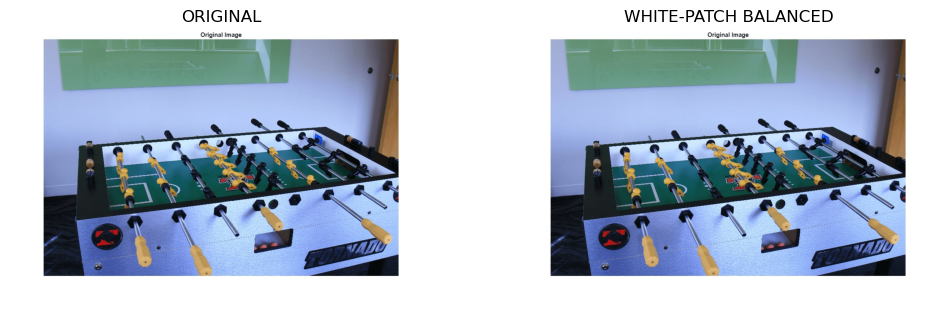

In [112]:
# Image Loading
base64_image = '''/9j/4AAQSkZJRgABAQAAAQABAAD//gAfQ29tcHJlc3NlZCBieSBqcGVnLXJlY29tcHJlc3P/2wCEAAQEBAQEBAQEBAQGBgUGBggHBwcHCAwJCQkJCQwTDA4MDA4MExEUEA8QFBEeFxUVFx4iHRsdIiolJSo0MjRERFwBBAQEBAQEBAQEBAYGBQYGCAcHBwcIDAkJCQkJDBMMDgwMDgwTERQQDxAUER4XFRUXHiIdGx0iKiUlKjQyNEREXP/CABEIApgEFAMBIgACEQEDEQH/xAAdAAABBAMBAQAAAAAAAAAAAAAAAQIDBAUGBwgJ/9oACAEBAAAAAPfwAAAAAAAAAAAAAAAAAABzPpmOZlDHNyYAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABrPnHJ6UtqPrOlYpmCxHpLsoAAAAAAAAAAAAAAAAAAAAAAVWNEpIACtEVQVBEkaIo0FQQcgANH4W9zW1ucVuKWnzrO7zfkDINpNYwAfPKoMfG9GuY4REaNGkUkSxwSEmygAAAAABxzQGmM0ao1ASeBGI+Vb9aJrMnRa21FUajQGojQQQu7Frc8mMjEBZbkt6ax1KDQMNiMYgJkt7exGjWtYxjI44oIK1WGtSo06uOp1adKn1X6jAAAAAABxzQUShotFBqtngRqOkfkasUbb0ESWSrGMYoiNRGgLd2LW57GJhaAti3Jffe6bFqWqYTHDUMxu72NREY1rGRsjhghq1oK1OhSp0adOlRr9V+ogAAAAAAca0RpV0SnEKObE1qC2MlWgjbbKzpZ6sY0REEaiNY6K3tGtWbeIgYrgszLeflOlQYnQMFjhETPbm5jUajGpGxsLIa8NarDXoUKdOhTpU6CdP8AqIAAAAAAHHtBRINSiV0j1wONagGUysFeJGDEWWVz0iRUAVAWi4YOnc96Aosj7m45GHQtUx4iGy7csbUGMaxrGRwxQQVq0NejQp0qNClSx1jpX1CAAAAAADkGgtWHnmORAGNaAjnAqAAA0aIgIgiIAKOUcorpHvcSdTTWtBpCNTadrGtRjWNaxImRQwVoK0FejQp0aWOp0cbkei/T8AAAAAAOPaGNZoeLFArxICCvVwIACA1EEEQQQFRyK5RyuJZHq6Oj07JUeW1GjDcthRqNajGtYxkUMcEFWCvBSoUqNDGU6GNzfQfp0AAAAAAHIdBGt0vBAIQsaCKr1c1QaKAINAEEfHGKKorkVzlke5SGrum2N5ZjERE3bPNa1rUY1iRtihjgrV4K8FGlSo4/EU6GK2ffPpsAAAAAAHIdBFbp2utBWsjR4CuGDmNc5ijEcwCGVI3yXIqjxQcqjnOeOVsUOV6QcwxSDXb1lhjGtajWNY2KGGCGtDDWpVKFHFYepjcZt28/TIAAAAAAORaE1TVtTaqCEMiAgKoiMcKIRCoqIqJI4lJio14rhXOHCtiY/ptvl+OQReg3xjY2oxEaxkUcEMFeCKtSwepZ7D4api6e4bx9LQAAAAAA5DoQqa9paCARSscAA1Ro5Qc1oKxVSN6kcgiK8UV4qijY2ru+f5fSEH9Fso1iNRjWtayKKKCGvHXrU+Oc87nh8NVw67TvP0qAAAAAADkOiIqYXRmAikMqsekcoNVWNkGo+FUeRq9GTxjQV6jlHA5UBrEXY9u5hAgS9Hla1qIxqNayNkTIK8EMVeno+HzOBw9TD5fLbp9LQAAAAAA5JoQqYzn8YAjHq0kRRUVBjwEGsHoAIyRWBMKOVUcKiKxqLkN45zE1Us9FkY1qNa1GtayONkMFaKKtTx+MxOtYqjhM/mdq+mIAAAAAAcl0NBaXPIUARkisJgUVEFAERoCCoKjgarhXKAoAIIr9x0tqI250JyNRqMYjUayONkUEEcNSnjsXhdaxVDCbPl5vqgAAAAAAHJtDFSvzuugCRSSA4ABQABoA0Vo4BUEa6RyyPeLISSPeq3arJHLfzAjWtSNGsRrI2sihiiio08bisBrGMxmF3i7uX0gAAAAAADk2iCkOgUUBCN7xQUGEoTKsjx71WRz3SPfJI6SaZzle9yigACCqgANRiNa1jERjWNZDDC2KjQx2H1zVcfisXv1zb/o2AAAAAAHJ9FFGanjY3TOJJJJ3vmdJNI9zlcrhQABUUVzlVVAUUBRoCAAiDWiRgxrERrWMbHHDFHFSx2NwusarRwsG75LbPouAAAAAAHKNGHKNjar1FVVVVc4UVRQEEQEEHNVwKCgoIqooIIIAIIiNajWtRo1rGsbDDHHFSxuMwWqatRwVncchtX0VAAAAAADlGkijhFVRQUcDlFURVUQGgIgIqqooACiKACAICKg0GtBjERqNRrI4omRwUcbitf1DWaOv5vZ8ls30TAAAAAADlejjhyoo4FFUHCjlEcKqCIIIgKDgVQVqioKqKNAQRUBqCII1ojGo1rY4o2x16GLxOu6VruP1/a9hvbV9DAAAAAAA5Zo7lHAOAVRVVVFHKI5wDUEc1AAcoqoqKKAI5EAERRAaI0QRgiI1GxtiiYytQxeG1nRsFjNf3rN39n+hIAAAAAAcr0oFeAqiqqgqqoPcAqitBAaAqqKAKCiIoAIoIoA1EEaNaCNRGsZExjKuOxOE1TRsPh8J0bJ3ti+hYAAAAAAcu0dVVwKoqqoCq5wPFFFFagogAKDkFUAAABFQAFQEQEGMBERGtZE2JKeNxGB1HRMbgKXRcxPnfoWAAAAAAHLdKR44UVRRVVHCuVzhFVQEEUAAFVQAFBBQABAFAQVogiIIjEakbI2spYvE4DSdGx+tz79mnZv6FAAAAAAByzShR6iqoDhyo5zlHACjhEAFEFUVRRRFBqgKCKiAKogIAiCDWgyONjY6OJxOuaNpFHV89ueaZn/oKAAAAAAHLNIUV7lUUFBRyuc4cqAKCtFUBBRVVUcAorUcgi8S5L6oz7VVWYrMAqICCAiIjWRNYzHYnEazoGoY3V9v2zJN2X6AAAAAAAByzSAWQcqOQUVRw5zhyog4BAHAAKPBRUc4GCqNXyB5a2/3B1Mc7yL5Y9L+wrIAIAiINRjI0ixuGxGq881bFax0bPXpNk99AAAAAAByrRVerlUHCDwUc5VHKrQURBFeoiig5VCL58b57JtCCoCJ5y8ubj7Z2kfzPwnpnQ/fu3KCANxTMyNaxGsgxmGw2n8417C691TN2l2b3qAAAAAAHJ9EHucqigCuFVXOVFAEVBoj1gnUFBzhroPnbovoD2m8VVBVXHaxyfYu02K2s+fvN/Yuu4nGYPFZLE8+wTH919Obi1jWFXF4XCaZzXC69Q6jnbDNp93gAAAAAByLQVe8cooqiqo8crmAIgrUGjuVeHPYHe1HDh6NFwHjjUvZXTFWjisHisJh8dgMfg8fmL2cymxZfM7LldP5j7FMJxry/wA3aj+2+n96ajaeKwuv6PzbFaxP0nOzM273OAAAAAAHHdAHPHOFVQVRyq4dGioiGuZ2VBi6L4Qm+h2aVVdj9RipYPE0Nc5zHtc9nJ5vZsvn8/xXrPY8yinz64z9PdqVE+SeR97dHwHkrsNXzBo7UXtO4570VFh8NrWg86xuqbDvuZnTbPcgAAAAAAcZ54PcK5wKKrnDhVRrFaNNXwfQq+EwtPB8H530PbcIy7PkdmzlbddtzeyX9iwnhapvPsy2L5d8S7j9R3BrHyT9F+nuypFjvm5u+/ch6T5y3z0z0bj/AJk1RrcH6Xymz9hg1fnOgY/Ut43jJSG2+4AAAAAAA4lztVeK5QV3PeN9m6IKPw+nswdDEYGjiMHkM9f2bOZjacvntO5X6/2MGs8/fPnfPp1k8XyXzT1bw1Y2L6k5Ur+W/GXsjsHT2QQeedosa12S/itXj1TwVQyu29J7N0uxxDzNrOr7drqdF730DmOl4nVOp7ZkEs7R7bAAAAAADhvO1FcKoappdjU3a5hcRk4tk2fL5/ZMzsGzZXZfOHnf0x34FMH8n19He7Uhq6nwzd62/wC3ab4AzPqLyDz/AKB9HeJbrvpgdh4gzt07H2nc34nqulewMLwnzvmOjyS9U6NsluDzx5V16sZHc/S+u6pg9a7TsVttzZva4AAAAAAcM5oqjlVUb4/0mzgX3XeyPUhX+eXLvZ3p1VVYPkDtjvqsBHrnyo9H9V9KJVpavqWC1p+7Vp9uoaz88/beh+c+2e5rU9qHjfJe37Hn55sfxvwDF1HW9A7x0fftU03Pb1sF3D9HpeafLeEmyl/Oa1sGc7LtRFkM/wC2AAAAAAA4LzNwOUcHk7n8GuS553pj2Ccp+bfbM974svbFjvn5uPT/AEq6NscGGxnIfRD6lFrp9S0tmU2eOp5b136GfNTVO8ez5o6+Lwfk3um9ahznH4bGavzLrOYpsxWd65sXO8RqWG0PpPq/d6nlzzhHLVdf3Xt+2wtuZ72uAAAAAAHAeXqOVwoeUdDjwC5mbsnr6g7x/wCo7XQbk8bC/U4H6ASJslq2ct8x+i90x8lt+E1WDHbtjIfn50z055i0H0NjOB7t0GRlXcshU1VlStBi+Wb9vuu4Rj917BrXjvNFLBd19f7lrfljgeMlcu0913tbWa9rAAAAAAB595W8V6qqnknT27LqMz919m19gMCbrNPHPfv1uO899Hq21ftnGfnpnvcxh8dj8LgS3ldhq+fdhk4H0jauRYXpXRnDWZ7LYKjWqxOi5R0La0oxR6trGW13plrjWrZL1N6nyWleSeJqrF2nH7h6l9zgAAAAAB535Y5z3uVXN8c671PvHPfOj73uldmyfni12yy51jIZLX9OrZHDYyiUMZgvN2Ti6COWNtv1XRODc8zepcu7FsPEt5ym0VX2Un7Byk6xv3B9G12Ketnto49q2Gy/pDTuUZLq2m8mpdK+ieSfzjyTyhGw1X9a+xAAAAAAAedOVPklc5XKnjLC75s6cVU9zX9qznDtf3+rh8bRpQUdt2efjNGWw4Zq6bDhHtjhbZ7NksRuux6n595r1KPz/sfedd4+7scdDbbmkdZ69qvmzEma6NrmJ45DZ6HQ1zHx0936HyfRvbGm+q8hLyXyTzurXh6H9qQAAAAAA858pfJLIrlVviSmvSeeYuRespJkOv4TW9Lar7U7rG9zbZx6hIV2yM3XkmUp1kkWG1tOybVhdZ1Z+ocu66/RsVmOoQ0YrU22dax3JNIjsb7sfI9K1m9l9ixePrU2P3jQbOZ9adUTLZniPkbQK2//AGuAAAAAADzjyh8sj3uVWeHY+g7vV4Q82yzYynZ+iZ7zVqI6Z0K2ekZx/KI6dZ9lU5Um5wkjROmeltex3C9Vn5JheoXedWuibAukPuSrmeh4jSNbVMl1fRea6T3bKc3xFSKvjIs3Tn6t6EZsO65eXgHku79qAAAAAAA82cpfLJI9yup+JWXbs+ruNnyT5Og+grHnHW1sZfJWm280qc/x1GrYspjOSs2DaiRwzaev38R0e/qXlnBZm1yWXt2f5Xo227Ar73c9M152nbRr2M6Za8/al2fo/L9YpYyrsO71+fegM8T5GzhtZ0fC/ZoAAAAAAPNPKJJXyPeq4rxe12KpZaU2bbc3lYura9b1YjxmFwLr+Z7Lj+Ow0IZbJFotx2UlVSIm6RcqbVbwOk4/E8W6XloOdVerCRps/WOYr0HunPfLDMt03leWv501Lh+PzW6dGw+s1tfoNMru27df93gAAAAAB5i5TPJI+R47AeOkgw8GXtG07tSxMPScvotRUIYCz6Q6ZqnFNArxueyOhiu/8aerjZ2TL2XZTUOMsq8r1fpGawGuyL1eHDxRyom3d/5Xx18Tc/h8dBsVbTokVbe6bxu+871tvnzYvQ13pQAAAAAAeXOVWZZbM0oaz45WHCRZG+ZHZHLY7Lh6N1UOn+esTLu3QOAu6rV0SAbVi2nboeP5ZxkSG91jsvD/ADJ2DuGseeta2wxPP7PbsNkY8LWkkZa6L5+rXbkETEJNw3jfN5p791sVFZ4f863vqxY6uAAAAAAHlrlluaRGjjU/KRFg25O46x02zYi6EzVNYxzE683kTpV0B/Tmdp5nqza8dnpFfjtnJo1LkuRt88wmW67v1zznCzT8Bu9rvXNdXp1mwQwoOk2ncNu3Dct23K46fk3z9wH0e622GhovzRy3qLunGPooAAAAAAHkvk16xLNIBpfl0ZjyxZDYHuj7VlfQmveQsemZ9IeWGuNJ9ITZLQd640kCFldCr7bYUytNhT5/6gwWG1djcXqE+aihYOJNr2/c902nctuy/lLjXQPW86vdW+ZGA7z6m6kzHaizzxh/RvKM17wAAAAAADyJyDITvlWHGs0vhglZsrwy88zZ+1d513yW1V9Q8C1prmdfivZTjFVI2oyvzuXLbc4ajIq8DNs1DFQCKWt13Tctx2fAX+jbFGx0ZybwddvfS9ywYvSvF/P/AFFvvQur0VyCh4Ewn12AAAAAADwl5jq43G06FKSTMPRGtcNMlYtPZ23hxma6u61lOKRj831JvMMQjWsbFW1+HF5nLwVoa8YqLlN33TdN13Lc9oRsdLivgKv6X9kRwNq4ryt5p6X656LfhpYzY81Fk9A5Rc7Ftw9jPnTf+tYAAAAAAfNTyE9rnSS2pbMggjQLlu1IVNdj2PLrb2zv3k2Jj17Jb5BBHTrVYK9aFB4s+6bTuO4b3ue37NqXi5fSnXeN+WfRvboqXy+1zH9s961q9PEa/ieSbNueP2rbrObs25Flp8V0zduz3BPNfn/68AAAAAAB81fIqj5ZrCVr1sRGgFqzZyuXbgNyxu42K+LxGv16sbMuzD4qJGucuX3Lc913nI5ztJKxj4nY751cnOy+5vmnrvXPogtT5+cT2T6D7HTrYunev2JotF0vKdoyssj1cGh8qj7BvA3CeggAAAAAA+bXklyyvia4yoCI1yJlt4vtobThdo4/UiiihhjBFWzte0bVuG27tuGfsk/nPx1rfpv2++ORa+P5P837PrGbt/z5xvuH0IypgcJZyNOjUimuue50FPlDOtbysrnOG1+Jc57j0tt3rgAAAAAAfN7ycqRtmckORcDgQSeZGwkCCDXWNh2LYtm2fa9twnI+l9KyVizYtPnq/I7I5W59WGOrJitB4h59xvp/o92TO7fPHFVr46hTjJ3rIkqWLiccwez9qtKsC2mmjbix9rswAAAAAAfN3yOrmxsc+TJPEEQHxkYWdg2vb48tsOf2Fyy2LFjzLwSHJe+dwvXLNpXan8r8p7coesIZo8Tz/l9HrHTNC1KLIdCzyQ1qVXG0o1llRJXufPJal5jze56DyicD6Hu7LMCWI7/YQAAAAAA+bHkhB8doa3ZqCiNL+WymRyuXz2fzk/JsJhO/Zh8yyzWlo+AzqXIvcvYr1i5ItHT+V8m7ln+4SLjtU53T3zfL8HDXyu6PmoqOMrUIXTOZPE9XWJp3Sz6pxSTr27PesrHIxLfZgAAAAAA+bXkhVcx0k7+lWMhlMlk7kEEg6xauWudebMhjevekFntzJaKXj3nX0HwHUslas3kp4ant+do8SyHbY4NQwGV3LJOK/G4B/S7ePxVeBltBsbJ5HvkgyUeRrM4ji+gbHtF1o0GXe1AAAAAAB84vJddzxr2Hbe01qEMEdaPWmZ/MT35PMOgd11XD+w3yzTOlhqYTQO8S7HcvSzTUcZkdqts0LknVuh4/E08jmnyNXQdBt53LbDQxtR6PclchWWRX3JpXulbyabMT7faJGI252wAAAAAAPm35OCRWMmd0T0PXpVZ8PzrnWLns7H1faDUvMvs+5re3Ouj3smR+bTH7rYvWbrY4Mxl3tl4zz70bahhv2EFSLmOGz1LdG42JxXZXnqWUfK98ss0qTs1nnGbhdtu0XGMTI9sAAAAAAD5y+TEZHI1ZzZvUVSlBj+J6dDNayFt/X9hXCdPyGvRhbV05NdytunrfT7Dsm9y5HIOkfj+M6x6LllV0sDlrx+eN9xWM5/y3vPVlfEtaJGyOJZX23OkR+qc6v5KzZ2zJyRZPtoAAAAAAfNvyRLannZFFXyPrupTr8o1HatZ15+w7bz7cOxWTKZOfAA+d8klq9l7GMwm6bHYtTT2Lc0yzx6TybP8AbbEI1cJgNP0fnfMazTTfZPcoYmRxwDmq6xKtidsyvWDjmStW3Z7aG3u5AAAAAAB82/JT8jn9YoWp4nes7VKt5xyEWsVpFu4zovbpqrOrV9VqyrMslmxk8u6fEan2i3PYmtmSc6Qh8u1fWNORdZ4nFVxOCweA1JTSffPRoIXVIo1ie6ZZZCaw6Zr5KPF8xdye45Jl/uQAAAAAAfN3ylv/AE3kGsw033JvR2yU6PnLXnZrFMhH9j6jNjtv6/ruv6ik0iyWbWZyRax+pb/sty7PPPI+xVayVFlV/KuYwOjwmK17WNcNR+j2xwsqtigImWkfK+w98y0tH57oeu9C6H0TZL9HJ9yAAAAAAD5z8JbpdVzYkV/fehVcVyLmub6LQ1SzqFvu+3zVd66tp9XQ2yi2J7WUyEtx+F03uizWLduK1Ky01XwSPh5dxfWsJYrZnHanqeIofUFtZIoErwtJnTOmj1Lnuj6RS6Jx31JQ0rcOtdNjgyPcwAAAAAA8U+MtPskETXTO691nH1sVxuxjqlSo7q/Sr0kGw9g13HadXtYTI5Ke7kJ327FbC7BuMeWtS2kJ4kmGo1PNHnvI9C4mdL0vTK1frvteGGBtRj64q6tpGiahzjozezedfTVXhvSeiapz3cvSOxF/uwAAAAAAfOzyTbfSWKGdyb53KHFU4NE1LGT7Hvmw3b81Ze91sHjdOn5dtm6yXsi8t3rVvC29kyc8k9iCV7XSV4HyefvGuVuarJu/QN83zcbtVlZkdWLV9A0rRdXxlvJmG9Amh7tl+cbrDte388ynpJ5f7yAAAAAAHzq8zxURriOGTOeiqlelGyFiWZp7l58ad+brMWjusyxWZrtx01ybM43FbbnmXpZGSyoxRY3eNdE6HvHR9yUigjrpFA2h461bDFR5WtRRme3fA7dntZ3Kvxzq+X9LZMS934AAAAAAPnp5GqA1ZpntX1JUpVBkbXliS9csui7Rkdbi1HHSOfJftyyWbNuWxrWa3GWxOPWRyJNJTGtGuiajK8cddlRnEvKczBKs1eWahdu4+xXynS9l6R0vYEWPUeYYP6VgAAAAAB83vIzX2EfJG6wnpG/QjbDZZC6WWy+086bvL4tB0iZs1ie299u861k8bRz202GW43qg+UhV0D4UY4r1UVkENXwRhcjrhkoIn13rUze/dI6N0S3JLHpfKea8/wAEb39jAAAAAAA+bvkl8rGooTp6Kz0ZLPrcCufZtzTun27p2pZzWtDdYnW3LK+zYs2MquBl27NSILbgUmYyZIomDXwpA6NsNal4f0q9rO0Px1Vm1b/0PpG2ySo3Suc8j5TgjIZCRd5+yAAAAAAAfNnyXM1kKtR8idh6k12Roa4MfOXJ7L3XOkbHjeZU5nzyWrE6yWbk1vJYqpmdolkW61IZkhS5A2SCaNzHVkgijrY35/GNxuz7ztPQt6ycthjtC59z3nONr4IR2TuKb39kgAAAAAA+bnke1DA549sLuldrQ4jW6BlVc+V1m65SdyRS2HTzWZ5i3ZsWLeSneZSSwyWaOZzmjB6sHOifj3wwV6/KvMW97zvmcaspQ0bROf6PCwH47Dg/KzKb59kwAAAAAA+c3mbFUGzypAhLs/oFtetjZIxZny2rSSNdI5z7BYdanmdYu2p7NvP0rtpHBdbZRXR2IlQjY+JEhrxRRQ0W1o4sHoOgaFp4SytayFcXTe2zlBxv32SAAAAAADwz5djYQyPhlYy/39sdauxqvHTzSLI8e2R7p7JNOsk111y7JksFnsosyrbrzxSj5qkyshHrBCtZ1SuyviNB57oWtiASKrynHJjGKWrihun1jAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAA//xAAcAQEAAgMBAQEAAAAAAAAAAAAAAQIDBAUGBwj/2gAIAQIQAAAAAAAABJEkAAAAAB0cvO0xCZraqUEi+ORfJl3tLUo6ezCCIrWKUpTV2wA9DscbilarTS0RnVKoZ9bJBmz7Ha5nFxx6XfiIRFceOuLFgw8rrgB6PY5XDlgqtesStKsiIWmUzbtX83SfU7UIiIjHjx0xa+Di9wAPSbPM88Y4JkSIJgm0rZoz9rytHrs9YiEVjHjxY9XX8/6IAPS7Wh5gqRKYiSszN5nGlNr0el81ieyvSIhEVimrj1NXzvpgA9Pta3kSJJiYkiYJgmVpVr3+DW3tZpWIiIiK86NPS4voQA9Rt4/G1mJiUggBYmSHQ59c3s1VYrFaxXHz9HT1OkAHqNuPIYSZla1r2ta1rza9rTa02m6605QhWKVx4+Zo8Lm+qAD1O40173m1kwESQgACUiSIYNflaHntL1YAer3IECEgAARIEpkkjFqcfQ8zreuAD1e5AQAAAiUEhIJmZYtLjc/ymH2QAes3KgCAAJAAISTNlOfxuT5WvtAA9ZuxAIIACZJgae3KLQQEzaOZxuF5l7YAPXbkQQTARKAGh0A5ut2b8OO5JFbIm08fk+c87b24Aex3YqhCACml0CDj5+jXHTHTBljBe1MmrobnX24tPD5Xl+Hl9sAHsd0hEEBgy48XC6dqUitasWzMZDHmnHuV+heF89qZ8XrM3n+V5Ll5vagB7LdQpy+L2axjitaVy2nHltn8Xj9lLW38ldjXzRfDsZPOenrTQ4vP6fY53K8Zq5vaAB7DdHI87fF6S/I3c84dis5azfY43g/MfbtrR0uxkw4vjX2Tc0dGd3Zpiw7WHi699bxmLP7QAPXbg5PAnH6fpfKen79j89196mtr7G5HjPK873PruRtanoo+c970uLRw5rW1tTU3OzqcvS0eZT0gAeu3BxfNcnu+g7njd/txHzjzX2fNbU0t1Tw3hfRep79YzZcPh+p4v6pbNo6W/wAm+1rej2eRxYza4Aeu3Bw+DTLt9LxXH+mbuWnK+f8A1uFeRnrHI+ddP6fy97S6E4sXgPdW2q8/b0cVNy/fu5XIwgB63eg4HL3Ofm7PM+SfXe0xZvOek18jkrTpeK6/kPd9G+7pbdvMPQeE9/fXz6+tuZ4wXinPAD1u8h57l3xW6ePzfr7zr8b5z9V6MYsGxq20cvz56rJ08lNquCNPyPtLTXPOXPmy21tzyYAer31o85y7453MXi6e/wAk4q8vc6uvh2dVGDk9enkvZ0rsY65M+fYtfqRXi7W1vaWvbyQAd/Zx48ehrTEZnE4Xu77emngekrirbFetYyWyZs2bZrHavk809Bly+c3sGfFPF4gAXtNkUQyXZ8dr68Z4w1rfJkzZb5b11Nrndbe4G16jPk0o1M7BScNM+n5QAMtpgoRkvo58kWzbWy2ehOPBo6+bYtvaHF8r7jq5c+3sXpWK8zBtVhS9PEgBlskovn2dnYO1tXmfCPZ49WuHWtXd6uDznyPp/Uuhu7KERjw62juJWx+GADNYt6np7OTFXJTxGbt9iZp5vodXBr7ODl5ce/ucfFxPlHY+1dK1ZmsVxY8fyPL9TyTTwQAZ7ot7LuU8twcG97Hl5+hZa2xzmTXnQwWpnjFNvF+D+z9Xfmb2rGKlfJfLLfTfX4vAABl2NnWj03p+L8r7lOf9B7HE2Oitk2I8/wBTDg1sFclYt07afj9L03q73tNa1x1rw/jXO+h/R/n4AdLrcfDbuey4fh+H1d32m58Y436Amc2aONltra+JBsdPW0eb531for5LzWMeno5NXF8o2vsXz4AOtTHjnpe7x+O4W56brPlnz37p18+fJPL+I/U+vgrRF9TzlrdTe6u7e+tpaerp9vH0dTbwbGP54AHTrC1/ocRWGOvzz5Z7767bJkcv85el+yYa0iERmzWy5MtPJUrTJi353tmm5PP8MAGfIll97noiZt5j4T3P0HNrTHxPwn1r2VYUtF7zOacvK42ptYM+/u7t+ZyufSOcAGfNjHu+r4L2G0KfN+/66bTM+C+K9D73fFNbRFonNkzcXX2+ju4uZz+bq6eHLsxoAB08VbRHqe7jJCZmVp1/z3q/ct+tIQtZky3y00Oby9ab0prRsZK6YAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAP/EABsBAQACAwEBAAAAAAAAAAAAAAABBAIDBQYH/9oACAEDEAAAAAAAAAQTBIAAAAAV8a+oCSJgCSEogyiZWc5EpmcpnPLbVAChhTpiTPEYwJkzxnEiJ2YTM398kpynPLZO3bc5IAc/CvTTgM4YpCRAlEzGKXS2ylLLLLLZlt2dHigBz9ennwTCUAACESynFPUzykTllOW3Pbs6nCADnYa+YgSglEokgggmc4h1cpmSZyzbdm7b1/PABztePKggQCYkIRIG3CMutMkpmc8tu3du6PDADm63JxgQCJABJBv1Rn05lkJynZlZ37bPMADm6p5eqAlMyTMylMylMzMk5pJTMznttWOhf80AHM1NMEyEgJhEgAEkmUs99zf1bvlwA5eqECAQJEAACQEzOzfe39vf5YAOVoAQEoAAJQCJBKdlm/v7+flQA5GmQgJQAQAQSEiJJ2Wr9vvz5MAORpJQhIIlAgA3aSYBKRsu3r/dx8mAHH0yAgmBKBCxXC3nRdDGlEkwSzv3up2cfIgBx9ICSJCd9YF7TXTkyzwbtaYs79FPUyz6VzsdbX5EAOPpEgEynK7UgDLKvG/Vqm/Qi1jHC7fR26bfDnqW+70dXkQA5OmJibN/mzAjLOvEW6uE+kjz1pt5mO3GNeU7Jnoc1O67bpVr9r0lqv5MAOVqGy3t1UMOpSrLGVNFnVrnoej63g9OdmjXjd9B+b0Lna5/IvXt+dfbc2xv9Ttr+VADl6ktlndqp6vWU/NRj1KOiM7eFbV2fQ3fK+T79az419CoeRnpdrlVb/Z2761LfbsWui4YAcvUTt6fb81XqdmpydWn1no/lVXXd7/ksXtvc+a4vPi/ytWj2On0ny3Xe6/R4Pe3adnP1Xb2OG4AOZpRO+7e5tDzvtex8ypxl6n0/wArTd7nl4y7v0vhfOvWeT9nwuVqt/SvE8bfY71Stb6mE0Ywt2toAcvULFnDKp5rqfUfl/Ixb/T+JxZ+z43Gx9D7+j2ebyOXQ6/n+X6vo8vueF6HQYdGtvbYiLYAczTBasZRp8xh9C8Bpzpdv6d818/rz6HZ89o93p9c4HM53O9fzfPZR0foni9FnOzrjVp05W+f6MAOdogtWMsI4eHv6Hzndu5/o+55zjatnV6vmcfTe28pas+D69xrz2TjqKGDsVqC7nl1gAp4JnZlOMcej6P03y3T1eVPp+l4HLOz6mlyLFnfbRq16tVhzk9dyE3NOdU9LmAGuBiRHO51nscPTvob7litZ37cteOnXrx3XefZq1u5X5WWWcWNFcyt69HS6wAa4iWIx0V+jv5ezPLHXGFXVhNy9Rpy6V7rea5uKMhEWsqSVjRn6UANcDCUY4Y4FXXER2HG1Su7aumN2ux9CpeF0JmCMZ32aWWqYz9OAGuCOdowjNE9OKtaIm7Xq4pjKzXwiZ63vef88wmJlEGfvNPiMJz9OAGqBy6WfRt38/NbdeuENO7DVCZyt0YyR6n1Pz6tWSiGJ3/aYeN4WfqAA14YZqHPt/aPnO703zavbxrIw1rlGEy34a5nO719vG4zKCEHS+g2PK+T9OAFavYzU+Xc9B9G8RxOXr9rd+exGGtZ1aZlMIysbre67weXLKITs3zus+vqeD9OAFTKZaePn6e9y+TXer9D4Olhrwiz7vxnMJg6npM44lCjqmd27ds3VJ07NWyjPqAArJRHEylLJ6P1fnvHxjgs/TOR4CEjZnq1oNnayTE6WjThXi33wA1QhjyMMpMY6nvqHzqERHue/wCK82RMAiJv3duGenRXr42rdnKbIAa8Mhx6/a5msifTc7jIRHf9zW+Za0wBB0NmuvpzsWLG7PLHBZACtlOMufUyJhCIgiM/o+75xUEkAnOxYsbYicsmOM7wAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAf//EAEUQAAEDAQQECgcGBQQDAQEAAAEAAgMRBBIhMRATIEEFFCIyUVJTYXGRMDNAQoGhsSM0VHJzkhVDUGLRYGOCwSSi4fCQ/9oACAEBAAE/A/62LdZL+r1wvfLz0RvZK2+w1Ce9kdC80qafE6RIwvMVeUBWiEjC8x15QFaf67tAcYJgznXDRGayng7Vgtrq6Bm+8o2SvtAjfNI25FGSGnehK8sszHzuYx75Lz644ZYoSvo+k7nf+SwA13KTWlttl4xINU/kgHBWuat8ttD2yMa3C/dHwG9QGtskP+yxWklsttLTQ6huIVyXXanjUtHQaw47+5a6/BZg+d7Hlla37gPiUyZ8kdjbNaXRtIfV9aE070Z5tS6kriDaXC9eu4eO5WB8jo3aw1o7DlB/zH+hrzRm4LWM64V9nXCvs64Wsj67fNa2LtG+a1sXaN81rYu0b5rWxdo3zWti7RvmtbF2jfNa2LtG+a1sXaN81rYu0b5rWxdo3zWti7RvmtbF2jfNa2LtG+a1sXaN81rYu0b5rWxdo3zWti7RvmtbF2jfNa2LtG+a1sXaN81rY+0b5rWxdo3zWti7RvmtbF2jfNa2PtG+a1sXaN81rYu0b5rXRdo3zWti7RvmtdF2rfNa2LtG+a10XaN81rou0b5rXRdo3zWui7VvmtdF2rfNa6LtW+a10Xat81rou1b5rXRdq3zWui7VvmtdF2rfNa6LtW+a10Xat81/4t7WfZXuthVX4K3rzL3Sp44JWNYyZkdDXcR5KFkMbXB8zJHOdeJNM1es1HCsfKzyxR4oTU6qtKbskH2YYh0YNKbkXWY1qYzXA5K/Zq3r0daUrhkv/Eo0fZcnm5YK0RQzXLloZHdJNMCMe5RNs7IjG+Vkl43nVpiU18DBdY6MDoC1sXaN81rYu0b5rWx9o3zWtj7Rvmr7OsFfZ1wtbH2jfNa2LtG+a1sXaN81rou1Z5rXRdqzzWui7VnmtdF2rPNa6LtWea1sXat81rI+u3zWsj67fNayPtG+a1kfXb5rWx9dvmtZH2jfNayPtG+a1kfXb5rWx9o3zWtj7RvmtZF2jfNa2LtG+a1sXaN81rYu0b5rWxdo3zWti7RvmtbF2jfNa2LtG+a10Xat81roe1b5rXQ9qzzWuh7VnmtdD2rPNa+HtWea18HbM81r4O2Z+5cYg7Zn7lxiDt2fuC4xZ+3Z+4LjFn7eP9wXGbP28f7guM2ft4/3BCeA0AmZ5+zWjnjw2HeyjYCPsQR9XpHpRmNLs9Dtpuf9Bs/roPzt9mtHPHhsH2UbAR9iCPMGgoZo+kbmNL9Dtpmf9Bg9fD+dv19mtHPHhsFH2Qegw9OE7mt0FN5wRz9I3nDS7LQ7aZ/QBmoPXw/nb9fZrRz/AIbNKq6elXe9Xf7ldHXV0ddUb106lcNtpAzV9vQr/cFe7gr3gryvK8qq8VeKvFXyr5WsK1hV8q+VrCtYVrCtYVrCtYVrCtYVrCtZ3K8r3cr3cryvK8r39qvDqhXh1Feb1Feb1Feb1VeZ1VVnVVWdVVZ1VyOquR0IFgNaISB2l2aO1H/QGqD18P52/X2a0c/4bLs/6xRUVFTQ3B2l6O1H/QGqz+vh/O32a0c8eGy7P+vNNRodkjntMy/oDclZ/Xw/nb9fZrRz/hsv/o9Fl7NH0aXZnaZl/QBkrP66H87fZrRz/hsv/pGeap7KzA6X847Tcv6DZ/XQ/nb9fZrRz/hsv/r4y0O5x2m5e0OcGipTZmvNNB2N+iD10P52/X2a0c/4bL/6+zLQcztD2i0OxupvPGg7Dc9EHrofzt9mtHPHhsvy/r8eeg5+3SxCRMiDPHQdgNpoh9dB+dv19mtHP+Gy7+vtz2x7YdhveveNAoH/APkRD+4fX2a0c/4bJ/0M3Me1FFHYblohaeNQH/cb9fZrRz/hslH+o/BUPQqHoV09CunoV13QrpV1yuFXCrhVxXFq1dK1a1fetX3rV961aDAPaiijoOgZaIfXRfnHs1o5/wANo+y/BUKoehXT0K6VdKuOVwq4VcKuHpWrWrWrWrWrC1YWrCuBXArg6FcHQroVFRUVFRUVFT+mFFHQdiH10P52+zWjn/DaLSrpV0q6VcKuFXCtWtWtWtWFqwtWFcCuDoVwdCuhUVFRUVFRUVNFP9DHSUM9MProvzj2a0c/4f6jOgo6SmZ6YfXRfnHs0/P+H+ozoKOkqPfph9dF+cezT8/4f6jKKKdoOiPLTD66L849mn5/w/1IUU7QdDckNEProvzj2afn/D/UhTk7QdI0Q+ui/OPZp+f8P9SFOR0FDMbEProvzj2afn/D/UhTkdBTOdsQ+ui/OPZp+f8AD/UhTtJUe9DTD66L8w9mn5/w/wBAWu16ijWjllM4SfX7Rop3KOVkovMdXbbIx/MeD4e1lO0HRHkhph9bH+YezT8/4f6A4RideE3u0p4aIZnQPvtVntbJ8MndGzwlIasi3UqUCWmoKg4RI5M2I6UCCARl7OUUU7QdDeaENMPrYvzD2a0c/wCH9TrTEqa1TSOreIG4BWe3ObyZjVvSgQ4Ag1Ho5+D2v5UPJPRuU0L4HUeFCzmysdiFHKyTLPo2LTZhaGjGjhkpoJYDy2/HdoitM0XMdh0KGUTRh/n6IyMGb2j4pskb+a9p8D6QpydoOkaYfWx/mHs1o5/w/o1RlX0poQQVPC6F5actx0WS2CEat/Nr5Kvo3Ma8Ue0Ed64vD7rKeCkiczH/ANgmWkjCX9yBBxGguAzIRls5FHSMI8QrTHY3N5D2td3f/EzkO6QmWnVczLoK/iMdOY6q/iPRF80eEXbowv4hN0MXHbQ7I+QWtt53P/Yjx6lTrfmjLIc5HeempGIUVvkZhJyh81FPFLzHY9G/0RTkdDk3nDZh9bH+YezWjn/D+i2yV0cXINCTRHHNWK0X26px5Qy7x6WSNkrSx4VoshgF4OvNUUQkaTXEblZXfZBl6pbsF7W5uAWvh7Vnmja7OP5iNts/WJ+C/iEPVejwi3dGfNfxH/Z+a/iEu5rUbfOeqPguN2k+/wDIK5anfy5Pg1NhtmTWyD5LiNrOcf8A7BDg20HqD4ocGTb3sX8L/wB//wBUODGe9Kfgv4bB1n/JCwWbqV+JQsVmH8r6q0OsdmGMDC7ooFHwlGHUMAa3uQIcARkdDlLZYpscndIUtlli3Vb0jZit0rMH8sfNRWmKbmux6DtHQU5HQVHztmH1sf5h7Naef8PbnyiOlQga47Voi10dPeGSITXGNwe3MKN4kY1437Re1vOcAnWqJvvA+BXG7P2nyRtkHWr8Fx+LqvR4QHuxnzX8Q/2vmjbpDUXGUWsxvNY1p7lrZAbwdir9rk5pkPgrltOFJvjVcStZx1fzCHB9pOYA8Sv4ZP12fNDgs75vkhwW33pSfAL+GQdZ/mELBZRm2viU+Tg2M8mIu+nzUDrFaOZEyvQWhBjG81gHw2bXbHyuLIzSP6pk0sbr7Xmqgl10TJOkbMsplkc928oQOcLwVjqLNG12Yr9dDjkta4Oe9rt6itTH4OwKlskUmI5Lu5S2eSLnDDpGzFbpY8Hcsd6l4Sy1TfG8oLc+Q8qPDrBAg4jQdBTkdBUW9DYi9ZH+YezWnnjw9ulbeCs78LvRoJAzK10Xat80bTCP5i43B1/kuPRdVytD45H32AjpVFDO+AENpj0o22Y9ULjdo7T5Bay0yZOefy//ABXLZvbN80LFanY6rzIQsFqPuU+IX8Mn68fmU3gt/vSgeAqjYImGj7WPCmP1TOD7K8VbM53gQm8HWYZ3neJXEbL2XzKFms4/ks8kIYW5RMHw0PeGNLnZBS8JzOd9lyWqPhG0Nre5Xio+FXV+1jFP7UDUAjLY4TmLGMjb72aAvZKC9FPCf7hszV1UobndNNEMUUzO9WVzGMEGRFc9iqtFkkjebrSWbqKyR2gZto3vTzqqvBuH5FG32itb1O6iZbw/nihRkNcMkwhzcQrM77MCuiWxRvxZyT8lJDJEeW347tjNyBDcPdbgB0lcZ1WAz+Sjt4PPbQdIQe14q11Rocn6Doi5qbsRetj/ADD2a088eHpbTK6JgLcyaK/bOn6KzPfJHWTMOptGRjec9o8Sn2qJlMa+C43B1/kuOxdDkbcz3WFcf/2vmuPSbmtRtkx6AuNT9f5BGaU/zHeaa20nFjZPgCuKWp+OrPx/+oWC1dnT4hfwyfrM8ym8Fv8AelA8BVfwr/f/APVfwyDrv+SbwdZhned4n/C4hZey+ZU77FZuTqWOd0UQttlr9zZ/++CikZIwOjy2rfaTDGGs5zt65TselRmezkTNrT5Jrg9rXjIiuh5oFg2p8yrJa3C03a/Zvdl0VXCbiIABvchogZrJWR1oCUxtxrWDcKaarhKJz2Nkb7ufgmEtcCE3ltY9mBzChtAfyXYP2ZuD45HXmm6VBYYod5JUsXTiPmE2aSLPlsTJGyCrToJR0TR6yJzBvTwWOuuGIWZV14xTAWjHemuwUbyRigqA4FS2FjsY+SfkpInxGjxpbKcK9NU44qqhLyTddd796htV9+rd8CnJ+g6Gc0JuxF6yP8w9mtPrB4ejfPHHg44rjsXVcuMMkaaA4dKvA0qU60OiH2dCO9G2y/2hcan7T5BGeU5yH6IC1SDDWuHxKbZp3Gghd8RRcRtXZfMIcGznewfFN4Ll957R4Yr+Ff7/AP6ocGQ+896bwbZxnePiVxGy9l8yhZrOMNSz4iqEMTcWxNHgNFrt4hOrjFX/ACC/iNp63yCsluFo5D8H/Xakfq43v6rSU55e4uccSrpXBTzrXs3FtdiqLk+ES2hr34tDfmnMacxkg2uaY8NAb0KoKtBcIy5rbxGNFNbJJRd5rVYYC+USEclv1VojEzCwo2SdvuVHSFvxRhIoQfAppqAVNwjHE4tDS4jNQ2qOfmHHo06iGtdUyvgnNDhQqaLp/cmWh0fImy6yBBxG1JFvZgfkVzXcnkP6E/hF/usHimW6a9y8RokkZE288qS31bSFvK7173Kq55TrNPz7nwTdZc+2jNOnertRVpqNEeSaVXQQHCjhUKawDOE07inxvjNHtpsB1FDJceHdCE7HdyfodoGSGxF6yP8AMPZrV6wfl9HaPWu0VoCryB08GO5Eregg+ekkNBccgrTbZJnENJEfQtY+t6uI/wClYbYZfspOduPTtEpzi4lxzKERLaqzYWmD842pBfY9nSKKSN0bixwxChpLDWmIzVigZG58jTnh4bJCcDuREnQnOq6h+CZIQbj1fYVfoaBy1UEhvOibVYAUAoNFqdq7NIe6nmgC4gDMrir4mYuvt39y406zclvLH0T3lznOOZNVYGOdKJGijW57UsJFS0Xm9X/CExgLdWbwceaqvOZ8k0nLYKnLHMc2ra0wx3qpV45KK1yRf3N6FPK6V985bliVZ3uibg0A9O9NtHX81mnRY3mG65HDCQXT07kHFuDsk1yvLWBoLnHBR2qKTCtD36HNa8XXtqFNwfvhP/Ep7HMNHCh2ASFrTRVTSTvTecNqL1sf5h7NavWD8vo7SAJTTQctAz08Gu5cjekV8lVVVtJ4tLd6EFxV5BoFZYJmWmMkdOKrskq1WN8bi5jas7tysnKhcN7FZ7OzXcYHRl37b4Y5RSRgKFnjjH2baKpgkvDmlA1FRs00PjZnROivKg6MQhECa71dAR0W+0az7EDmlWC5xgXz+Xx0WkXbRMHdYlNaXZKwPeyTVHmu+um8BmVrYx7481xmHro2uLvVrlBmbIxtMPmmyOwWOdaKZ8zcQ/DwWulP8wq+85vPnpdGD4pwc3NRXJBTJ3fkUWU5NPgstLZHNyTJWu7ijjmjEW+qy6pQOPJ5L+qU+1uyaB4p9pMkd051VDSu5RWyWHA8pneorRFNzDj0b1VPjZKKPbVTcHEYwmvcUWlpo4UOkoIGiicL2KGY2YvWx/mHs1r9YPy+jtPrn7G/TYXXZ6dYEf8AavK8s8CrRYtVy2nkJjgWN5N3uW8Uz9A4VCjOqmLdx9DO1t0k5fRR2/Vcm5UeKgtLLQMMDvG080FUZQM1epQDMpswcaHNfFGq1jGCr8E81e895VkDGv1jwTTJcd/2/mrbPrnjkgUCge5jsBXpCHaQnxHQjK/tT5pznE1LsVG51667YIrgVHJSgKfLyqOy6U5zqXTltHHNOFw4ZKO0e6/EK7UXmYhHYZM4YHEJpDhUK0XNW4v6MPFBMaX81GNwVMFkorc9uEnKHTvUUrJRVjq6JIY5RR7VNYHsxi5Q+aPejsMmfHkmWmN+fJOgaIvWR/mHs1r9YPy+jn9a/TqJBiWIgtNCKabObs0fjTz0hStDm47iCsFhWo9ATRPjD0y0WmN917C9lc6Y0Va0Iy27be4u66K4ivgrzSa0UMronXgmWmKRt69TuK18PXXGou9ccbuaVxzoj+a43J1WrjEgwFAO4K8HABxpRH7SpHPGfemukIN3MJ1/Dl3elGSOlHOqnMYXV0VTjVxKhbRtelVLOW3NOJeS/RAG079pjsbrk5hjFW4s3t/wsCLzcRsUK1b+oUbNI4c1Swvi5wUA5F8S3XBX2PwdRrvkVcDTy2lXox/J+a1vRG1a9/cFxl/SiXS8qV+Cax8vJiZRvSUY5IpKDMdCbMDhKP8AkE+GovDLpCkYW6Gvcw3mGhUHCPuzj/kE1zXi801GiWzxTc8Y9O9TWGWPFvLb3Z7TJnx5HDoK1r61vHzUVofeALqhQPBlYBneHs1s9aPy+jl9Y/x0WVtXk9Gi0x8mulrrrmu6DXQEE7FpCJqTXoURPoJDShV8FXa9yviMcs4I2qIbyVxtnVK45/t/Nccd1AuNy9yNpmPvIyykEF5oVI0NKbHVoduKjq193bGJATWNaAAnN6EYw4UKdZ5G5YrFpoRonOAGiK9dx0OqyraqCNsgPX6E2O6SdBe1uZQcDkdLXUKLqXRdq071K3VyVZgg4P7n9HSo2VbzQrqfNIHOF5GWTrlEk5nSUyUt5LuUzoV1rxeYaj5hPN00CqTojY57hRtUxszPBSnlk4Yopkj2HklB8cuB5LvkpLPTuRaW56LLOYZBjyTmgdM1limxIo7pCmscsONLzekbXgrI7/ybOKV5bcT4+zWz1o/L6OTnv8TogdS8jIU59WGvRsNdea13SKoIaPed+YqJ1x5quMxdZcbj6HI2wbmI2x25i43L0NXGZut8lrpT/MKLnnN5KgIBKLzmgdYyic26aHbkZfHerMbtYZea7f0FPYQaHMKtdoFNtIpimTXrxV8uF/eM+5Ryh2aN0otY7A0qrRAVHHXE6SaklRtPOBomuEuDsJPqnuDOdmnGpqhhiDsRTFmByUzw8i6jionPu44priVJZw7uKcCCQdLQHGhdROs7WCrpMPBUs43uKcYxjFea7pT3OvOrvNVfwpdHimkVyV9x947Uc7mYHFvQVSOYcj9pT4CMvJUT7QGR3wQehR8Iur9owU7kHBwBGmaxRS4jku6QprNLDzhh0jLQdNk+82f9Vn19mtnrR+X0bszpa2Qgksp0KS/k4U2BPJdbQ7qLWydZayTru80znCqApyaq45z6tRs7x6AGiY9pND72CZyHXU5oeE5t3bzQ+1ZQ89nzCeKG+34+ga4tK1tCHMGO/vCLcpGDApjHXr26mROSLo4Xc01T7ReFKaZH05PdoFKYaKulJdmVRR0DsduOS7nkjJdjqFf96M1UxvOL6bEc7mYHFqdC2QX4fJUpmnt97TiFmEdmtFxlxYQ7E7jvVO9YnMrkhvN5SsppCyqvK8gdE1gjkxZyHfJTWeWE8tuHTu02T71Zv1WfX2a2etH5fS2e7Uvd7oT7TyBRo8097ZW0I+ewMhpBoqXi19VG7k0IWCmIL8PQnltEm/egTdq3NEX28rP0F4sIcMwpL143jimG7n6CzMDn1O5UVMcFJCJAnWWUZYq6+tLp0Sc4oCpQoBTQ8XTgobt6j8k+Gh/7TXvjrdKuVbfvN8FUbLHUwzC1deXEbrvkqh/JIuydHSnM2GuLDVpQfHPhJg7pUkLo/DpRYCslFNG8XZBQ9YJ8NP8A9giKZ7bmlgxz6NNnfI14b7pV5Xk1yDlVYHA5Kbg+N+MRun5KWCSE0e34qy/erN+qz6+zW31o/L6J2R0g5hXuTTFPO7G8OnYbzabEUuTaINRCmbdedIFclq5OofJaiXqri0mZICELd8zFchGc3yTdWDcYSQ7p6VFg+65Oe6NxaRVE1JO24VFFymlY5pr+nbiluHuRtcbRmtdSO90ouc2jq1CZI1wXJTmtdgVLZpA40Fe9Niw3V8UGVPOARFCQU41cUxt5Mkui5Jiz6J7KU3tORT3DKugVaaHYaQHAlMIDb25TNbI3WtzTZgeTL8HJ7FRCCU+6nMczBwpojtFOTJi1PgBF+HEdCkbv0QzvYOszoV1kwrH5bwnRkbBTTT1TeV0qCAPvOlUllc3FhqmPMbq080x0cvNNx/RuVS3B4VVfouMMHvBcdiG8lHhFvusPxR4Rf7rAPFPtk0gIJFOiisv3qz/qs+vs1t9aPy+ifzH+GmtFVV2I94AVx/UPktRL1VxaTuTYQHcqZmCMnNA3oPo5SuiwvNqUJYx/JCE5HNY0fBcYl6UZpD75Re45uOw0OcaMzT4nE3hmpxfYJN4wPoZMMQoGCS8Pe3KSPC8NrVkio6d5ogzcSPr9FqtwJPgP8pou0jxoiREQx3Nd8k4XD3Jt1oN6QUK+zixrn3rWtkJFOR0k5nuWVRTLNGlM1NIC1jvfIx+GhlLugyvYwsBwOmHViN1W1cflsxylnggWXSRkvsHdLfmEDqveD4+jeogxzg4OqFRWwfZ5b9LJHMNWlfZ2juenWV9cAmWaSlMFqbmOtDXITNdyZs+uE6INNS2oT3MFWiL4o4aG1CY+5kULU3eE6eM46qvipJr/ALgWvlu3b2CvO6x2Gse80Ywk9ybYrS/+Ufjh9U3gy0HO63xP+FBwbckikMuLXA0p7NbfXD8vopfVv8DslDTE8sJp0IyyH3lff1z56Y6lqdmCnE3jX0NkAuE9OgilR0qaO7iMvQZoNMcl+Mo0e3Wt+I6Cncg92yOVDKN4o4aBygceRXHxT3PY68HEt5rjTJNZG7+WP+TcfmtSy6G7lzcMvBTWcTUOR6UIyw6tprfGeVBvwR9XCW5UPitY/rnzUhJdjoY26NDxUKu4ooGmS1rp6NoKpzHM5w24MHkpr31UttxusAKMl81IA8NNVrZOuUXE5lVCqFHaHR4Zt6pT5r1eThtBpOQQstoOGpd5JvB1pOYDfE/4TeC3e/KB4YpvBcNOU95PchYLKP5dfijHBEL2rYKb6J3CdHH7PDdio+EY3ua244EmmgZj2a3euH5dmioVRfFYdKmpqn+GyUNLcDsAVUTaJ3N8DRaoycoELUs3zNV2AZy+S/8AGHWctZAObF5qPVSNvatvkntuOLejTHMY9y4xyL5T55XGt8jwTJ3ZPJc05rVwEi7NTxCNmfSrSHDuRBGBFNqOQxmooo3PaXOcw3Hc7BTRbtybUVad2w15bWm8UV87qDwACL3OzcSg/Gpw6SP+1AbjnxudUhXgrRaKYMzRJJqTUqzWgeqlxb3p9mY74I2Zm7AqaEtKYzedLzRp0VUcTJGXm/ELV3K0Q5R5T6JwDTQOrtA0NU6cGN1DjTRihUKqrtCzTmn2L/JDg+0kgFoHxTeC315crad2KbwXEOfI4+GCMPB8R1cmffX/AKTeJUoNT8lXDDZrRWy1603WnkD56G1Y9jj010VALanePZrdTXD8qr3KvcqlVO1P6p20NIwIVYeoVrGD+UFxgjmtaEbRIU6Qtu0yRzf8CtW9wwCLXN5w2LK7FzPirU3EP2HHkXe+q5xoi2iiGsiqOc1BxaatNFHI2f7OUY7ipY9U6m7dsg0IIXGn9VqbK3Vlsnu5f4Tpe5NdXZpUONckKdBPyVXXi8nEp0hOblIcj8E0GR4aM0YnDcrNO6jWb1fkvYNw70+64UcjnpkOQWZoiwFR34nXmuxQLZxVuD97U9tFUK8FeV5XiqnaEExFRE+nguI2nDkZ96HBsleVI2ncm8HRg8qQkeSbYbM3cXeJ/wAJtngaKCFvxxQoBRooNi12rUto3nlOdU1J0WI1s0Vdiqlk5JCOajcWlRua/ktHwOSbaPdlF0p05ktkA90SNoP+/Zrf65v5PRWj1TvTROvMAO5MIfaA0uwoiNyewEUThdJGljrj2uUzb8ZGy0mOQHvUrG/8SrMNW2nepYw7EZqFpMre41VsIqwdG0CWmoUkrjd1mIxWBqq0dgUDXYa67ewzBCvDdH5n/FFfO5jfr9VffuN38uCdedznEogtKifxhv8AuAeaui9WtD0pz5ASDgqk5nRUIuwKohgrxVTt6iciupf5LiNpw5HzCHBslcZG07k3g1gPKkJHdgm2GztzaXeJ/wAJtngaKNib8cfqmgNFG4Du0Wm2ubJdi3Zrjtp7RWO0vdNdkdW8Nqqmc4yvqd6accU2zMc2tfiFZG3Igy/WhOklHFCOuafwY7Nso+KHBktRV7KJ1kiLQ1ou03p96LkTC8NxULG6yJwe27fGedfZuEPXN/JtVVR0rWx9cLXxdcKaaN8Za0+mDnNyKssQpfOe5YqVzrpx2YHXo292ClbckcPLZhN+Ms3tx+CG9uSbfbznVRlETTdbyiUSXGpz2zyuSqaB6CoV4K/Q1GafaS/G6K706RzlU7VD0IWW0Gn2LvJDg+01oWgd9U3gx9eVI2ndim8GR15cjj4YJths7c2l3if8IvsEBMdwftqhbrMBQEgdFFFKyZt5h27VaNUyg5xV5XSUBJHIw3ca4bFUXJxLslaI3te6rTTRZ4rQI9a0fDpTXB+MfJf0Jlp92UUPToKps259bSf7RRWZ1bRZ69o36+zcKShloaKfyx9Vxr+1caf0BcYl6VrpOuVrH9cq87p2G+94enjmEUFd9cE973mrnJkjmHkn4I4mo2LK6ji3pVqbzX/DZjfq3td5+CkFHVCl5rZG5bwnPLs/QnA1RKxTXUzV9X1eKqdtrHuNGtJPcm2O0uNNS744JvBtpOd1vif8JnBZPPmA8BVN4Mh957ie7BCwWUYGOvxWogGGpb5BbqbBVstOpbRvPKJqVVcHSUkezpH02i5W0XqO0QSXHY4hB2F5ovN6Cmva/mnRVEqlUG6KNOYGiWzslxyd0p15nItDfB6BkhxYbzFHMyTx6Nq1ilpkVmZ9vAf72+zcNfemfpD6n0Q3+ndkhVyIomGo0gE5CqjZIHghhwT232lu1EdZFd3s+iZ70bsnIihIOm8FeCvq8rxVTt0J3LitoP8AJf5L+H2rs/mEOC56c5i/hXTN8kODLP0v81xKyjHUoRRNNWxNB7holmbCwyOX8StH9vkv4nP0NVktPGGGvOB0Wi2Mh5LeU/6J3CFpvVDgB0UVktnGOS4UeNO5TOeZH6znVQposLHuma5uTc9golFOhvtLV/DjU1lFPBN4OaOdIfhgnQujN+H9qFH4s5L+hNmrg/A6KbZAcKEVCdA+LlQGo3tXJkPI5L+qmWhzDdl801zXCoOxbrMX/asFTvVnJ4zZ/wBRv19m4a+9M/SH1Poaob/RDSGuOTShFIfdToJLhKsuLy3uUrKhygbEG/aHFXrOPcK4w0c2P/pcafuARtEvTRGWQ++dNVeV5RzGN1QN1Fr354J0j3Grjj6Bsb38xhPgE2x2l38o/HD6pvBtoOd1vif8JvBTvflA8BVM4Kj96Rx8ME+yWGztrJj4n/Cg4k4fZMZ8c/QkgAncrXadfJ/aMtBBC4Ol1c905PwVokMUT39ATnV0WH71H8fpsW9l2cnp0RxumeGNzUMbYIwwbB25Yb/KGDlW9yJsH9PSmyPhN1+Sa4OFWmvoZrO2XHJ3SiXM5FpbhueFR8XLjNWqKdsmGTtjUxukY4sFQQfZuGfvLP0h9T6CiohkfRMzxyV+PqLX0yYuMP7lr5OsmuJZiUKNka+mNVIWg85EiuavBXleV4qp9BQnILi8/ZO8lxG0b2gfFDg5++RvwQ4NZXGUkeFELBZwfePiULLZgaiIfVBkbTVrGg9wps2jhJreTFielPkfIS57qlVIyVlt8t5kT+VUgbZKtRvxPajgmGhUcTC3HFpUNkjjm1hcSBkrT9tZ3hmJ6EdFgsxiGseOW7d3bDmMdz2A+IWoh7KP9oQZGzmxtae4eldG2QUcjeh5EvKj3HoXKi5cRq0qKZsmGR9CWhwoRUJ0EkNXQYt3tTprOBfLTe6qssr5Y7z20x0t5w8fZuGfvTP0h9Ts02Rl6Oqqryqqnp9BQ9C1EvZu8lxSbqjzXEX9dq4g3tT5LiUP93mhZrOP5S+wjF4sYKdyfwjCMG1Kdwj0R4qz2gTDoO8ehcaNcegaGi+jEQLw3ZqzfeIP1G/XaKe9PdVSQvJq1tULNOf5L/JWdjo2UeKO0DDFOssE3LLMTnRR2aGLFjMenYOk+mpUUKfE+GrosWb2qjZAXxbsxvUVp9yTz2SRvKBBxBrsPs8Ujg8jFUoq6G1q3x9m4Z+8s/SH1OjD0G709Cdy1MvZuQsc5935r+HS5lzVxIdp8lxWL+5aiHs1cZ1G+Srt26XERjQSFHI6Jwc1RStlZebprszn7GX8p0RuuuBTQ2jZBlvUdju2pkrPVZ6cdB705ycaoMqmR00TD39LXObkmSB/jtHap6OWz15cfJesJCWSC5L8imSSWc3XZJjg8VadNqFoLxqxVtPmoGmKIB5x0Y0y0fFUGlvOHj7Nw196Z+kPqdNNstoG9+2GuOTStVJ1VqH9y4uesFxdvWK1EXQVqouzCo3qjy0VUlsc111i47N0rjkiY8OaHD0L3XGud0J7rziSmYuouLk4KlDQqyR6uLHN2J2skSnORsccmYoe5P4NnB+zo8eSijfZw1kpwd8imvMTrhyVa7DkaoNTWoDdoIvAtIwVx8Zoctx2GPvZ57B9jmhZMMc+lVMf2VpxG54VHwkPYcD5KKcSYZFY9Ojdh6BvOb4+zcM/emfpD6n0WqfJS4MguKy76BCyne/yXFmb3E/JaiIbq+KDGDJgWWXyWPobRLcFBnor3aLLLQ3Dv9DmFaIdWajmoZpuMLJRmFNZGSSxzt5pxdpGydDRoewPBaUQXBzHesZ8woJach2kpyorqGwegoi6abDH3lmiq+n6NigyTg14o5tQnMfZsW8uLe1XWPo+J3+Qqu6xQe5Vr6BvOb4+zcM/emfpD6nRh6CyHlOHd6AkDM0RmjHetczvWsYd+zaAQ/HQ2KrQ5WmLVuHeoYzI/wBEWhwoU2ws3uKhaI/sdxGCidQmJ3w9CBsTMJpIznt+YUgylZkVBLeFDpKptzMJo5uJCGgNVN/pN9N+jHD0Za1jjdFK46Q6iDgdtvOHj7Nwz95Z+kPqdnBUVNNmP2nw2i4BPl3fRE101TZHNyKZKHeOiqlZrG6LLjZirQzXWVpHOaoo9W2m/f6MI1phmMVN7srd6DrwDtjHQfHQNl7RE7H1cnyKIdC9MeHtro8PQYqVhab7RhvQTnXW1THXhWlFu2cs1XJ27uW9Y03D5reqDL6+mlZexbmEH9OarpDzvQPRst5zfH2bhj7yz9IfU6abcOEjPHZLsFJJXLYDSVq3LVnpXNKY68K6TFGTUtVmoLzAoc5I/SDQBW/F/wAmqF11xZ05bOOjBDT3aHMDwWneqFwMTue3LvChfq3UKz2hsurHKRdIbu6EHBOliZzngI22EYco+Cdbyco8U+2z15NG+AVklfNGS/ppVdCpnT2R8TX9xRDo+dlsA0QdXYbzm+Ps3DP3ln6Q+pVVX0AwI2Z3blHjVYDcnO3DR4IPxFdDzy1EaPp07ERo8J3Inr3qTBx9ENLsKPGbcVM3EPbkcQmOvAHZzz9BNGXC+zntxClDXt1oIHT3FWWZh+zEgJ2zIzrhG0RjpPgja/7PmnWqU5UCMspr9o5Yg7Ds1YBSDxd7PQHAojVOoct2y1/Tpbzm+Ps3DP3pn6Q+pVFRCMnJGO6BVHRVVVdDDVrT3bEh5ZUZAGae/c3ZvOG/QzOLZlbfo7LBO5VPD0Q2KVa+Le3Fvgojddd2c0PH0Fts0jsY+acwrFY3Rv1r9FQM1XJbypHOYytN6JJzOiiIVEQiK7BzVkB4vED0e0OaHCiLXxZ5IGugYoMVOjQ3nN8fZuGfvTP0h9TojivUrgE4siFGp772aoqKioqaIPVt0lSYPdpuO2o+U5v9rdiAVcjkqJzfQBDYJulsg3fRTtuuq3LMKN14aPggs9rBuZVRgsehcum4fNUPWVM0MMgjotFax9FDoqqoo6Cnad6iH2UY/tHspcG89wHinWuzt9+vgncIs9xhRt1ofzAB4BVtcmZd8U2+3nZprqpgTnXdLec3x9m4YFbSz9IfUpseFbwTpKZInRVV2bNzD47E7cnaBGd+gtBWrIVGdGmJlxuxBmdB9ENml6Mt3x/RROuOpsEjCpot6BJ3LGm4HzXRiqUQAbls/BV02k8z4ouRctYtatZ0ZpocU7DNVTulVQxI9hqBzsE60QMzk8sU7hCMc1rj8k7hCU81oCfaLT773D5KOF8uNcE2yM951VLd1jgwUCDWxsHcEH3xVqkq5zYR8U+7H8FC+oWB0s5zfH2bhJ12drv7FJJf3U00pt2X3tgiqLNW7uWt7lrT0LWOV93SsToiipynZ7MRuu0OGOgjS9wb4ppDsvQCmSrdeH/A+CdCLxNd6DiKLvrVU3Ur44odGmu3js24m+OgNV9NBfmtU04UT+SaFMcAcUJ4wpZr+QV46Lqs1mkMjXEXQDXH0mQxRtELc5AnW6Ic0Ep1vf7rAnWi0u98j5IknMpsA33q9ymiDTG0NoSjdgYT0IVmk8UKNowblI/Vscd6s0d99TkFOSS2BuZTQ2KK9uAULTddO/nOT/tH3dwzT3Fjbree/JRMuMaCanedLec3x9m4Y+8s/TH10Bp9BRWfn/DZonQ9VGN43K6eqVcd1UIXHNNY1u7bG5O0OFdM0L3OvtxUMerrU4nRlo345aN1FnTDYostNPTWqRjZOUfdTjiaISubkjPKd6zzKDS40AqU2yzuyjPxw+qbwdKaXnNCHBzBW89x+FELJA2nIGCDA3ANA8Fnv2z0nBOmhbnIPqnW6IZAlO4Qd7rAjabQ73vLBcp2LnoimSHgqqqrV1UybzVL817qYK0vqbgyH1UTdVGXHNRYNLn85xVpdWjEykMf1VnaXuMhzd9FN9rKyzjIYuUpwDQmRtjbedl9VZRrpTO7IYN2G85vj7Nwx95Z+mPqUAN5Rd6GM/aN8fYhkjpIosOlYblXoVaeicqpu70eOGxmrdDM6arWFwpuxTbFaDTkJvBr/fkA8E3g6Mc4uJ+SbZrO3KJvxx+qp6OqktUr3ch1BuVxxJvytHxr9FRu+pXJ3BZ6TpJQTTQrX3aqGl6+9Geu9RuDs0xlXGVxwrgnXTmMEbQyNtGYuUcrmSazMq9PKeRB5oWOd9Nc+gTGCNoa3IbDec3x9m4WNLSz9MfVE1266RgQq+loa6MFuTDVo0U0P9KNLTRZ7GA2sdFfS4bVtluMuDN30Q9FmjsVQJyaMU2O1uGAoPJCwSO9ZJ/2mWGBudXJscbOawDZfaIWZyBPt8Y5rSfkorbK+eFuABkb9fZuGfvTP0h9T6Rh5Ldqi7qr4rBfBVVSd+zCeTsSNw9CNo6GncsUNNNqvovj6KeTWyl27cqqiOkI7TWvdzWEptinO4DxKbwePff5JtlgZ7lfFAACjW02XWmBnOlCfwlH7jCfkncITu5tGp0sj+c8nTZfvNn/AFG/X2bhn7zH+kPqVRU266MVFzBsUruV13pIczokc5vNbVA1Cl9iB3rw0V0fFdG0NOHpnCoIKtMLYXAB1UFWmgNwV0o4aWwTOyYULDIec4BNsEXvElNghbkwbPyTrTC3N4+GKdwgz3WE+OCdwhO7KjfBOlkfz3k7dl+82f8AUb9fZuGfvTP0h9Tor6KzHB2wy85rnA0Y3OmavMF6j3fB1fkq12vhsioxTZK6HOATnXvTDQdDTjorpHoK6c9nD0DjQEnJPfrZC479B0M1h5raoWa0P7vim2HryeSbZIB7tfFBrW80AeGySGipwTrVC336+CdwgPcZ5p1sndvp4JznO5zifR2X7zZ/1G/X2bhn70z9IfU6Keisx5R8NiS+OTXkp4Z/LJOPQmC60A+jx0VPSq+j37VFcRahpw2KbG/L0mGza2vdFSP4ptmnd7lPHBCwv96QD5ptiiGdSmwxN5sY2i9rec4DxKNrhbvJ8Ebf1Weadap3e/TwRJdiTXad6Gy/ebP+o36+zcMfemfpj6lUoj6KHCRuzQDd7VXThoGi93qqGnPYx0dw0fDT4+yOkjZznhOtkQyqU63P91oCNomd75+GCr6I+hsv3mz/AKjfr7NwpFI+dpZE932YyFd64tafw8n7SuK2n8PJ+0ritp/DyftK4rafw8n7SuK2n8PL+0ritp/Dy/sK4rafw8v7CuK2n8NL+writp/Dy/tK4rafw8n7SuK2n8PL+0ptmtN5p4vJn1StTL2TvJambsn+S1MvZP8A2rUzdi/yK1E3Yv8AJambsn/tWom7J/ktTN2L/JambsX/ALVqJuyf+1aibsn+S1M3ZP8AJambsn+S1M3Yu8lqZeyf+1amXsn+S1M3Zv8AJambsn+S1M3ZP8lqZuyd5LUzdm/yWqm7N37VqZezd5LVS9k7yWql7N3ktVL2bvJaqXs3eS1UvZu8lqpOzf5LVSdR3kVqpOzd5LVSdR3ktXJ2bvJauTs3eS1cnVctW/qFXH9U+SNnJdeuFXH9Q+SuupkfJXHdUq47qnyVx3VKuO6pVx3QVdd1SrruqVcNeaVdd0FXXdU+Suu6pV13QVR/QfJUd1SrruqVdd1SrjuqVdf1Vdd1SrjuqrruqVdd1Srr+qVdf1T5K47qlXHdU+SuP6h8lcf1Crj+ofJEOb/Lf8Gkp0k3u2WY/wDCic+3HKzPH/Ap0Vufzopv2lcVtP4eX9pXFbT+Hk/aVxS0/h5f2FcVtP4aX9pXFbT+Gl/YVxW1fh5f2lcVtP4eT9pXFbT+Hk/aVxW0/h5P2FcVtP4eT9pXFrT+Gl/YVxW1fhpf2FcVtP4aX9hXFbT+Hl/YVxW1fhpf2FcUtX4aX9hXFLV+Gl/YVxS1fhpf2FcVtX4aX9hXFbT+Hl/YVxW0/h5f2FcVtP4eT9hXFbT+Hl/YVZrNaBaICYJANY33T0//ANof/8QALBAAAgECBQEJAQEBAQEAAAAAAAERITEQQVFhcYEgQJGhscHR8PHhMGBQkP/aAAgBAQABPzL/ANthUezjP4MLoa1MRVUzEseStJ0LYoNTng7MsH54Oz/7uTuSYXmBeox7D5FKyF2c8lj3X0ypWKPtZlfEgh9vC7l22Ub5U2JfUY4u3sb1TAyGqiyLDr4uI0IaPekSQnFhuRyy9E48JMQigr3gk0k2Ype4HmRvm/8ADOhQ5Z+qfun7pET8sflz8uflz8uflz8uflz8uflz8+flz8uflz8ufhj8uflz8uflz8Uflz8uflz88flz8ufhz8ufiz8+fhz8efjz8Wfiz8Wfiz8Wfiz8Wfiz8WfizQ1Z1HJXrOUOSlrktqzqTOtrKfJMNkLKCqo2lfU1GqrcuT2cDGiiSaOFkMXfLI20rRniT0tnA21lsehoIstQfeZtSSdcLHgzYVUXZiSPy5+GPxR+IP2j90/EH4Y/Ln4k/En4k/En4kT/AIZ+UPzh+YPzh+MPzB+YPzh+IPxB+QPwB+APwB+QPyx+fPz5+LPwZ+BPyJ+dPxp+DPyx+O7WkkDDTFgbokl7t5b2LGPtvLtq+D7Gdd2WWMsc4MuQ7v8AyXZCQw+2t92Y8X2Hj91r3rbWP/bPB9i8eN3cjLOp5/C4tFz7axWHmsGLnhk7Yu6seL7DwzS7v59HfsWCEYQQQR/gq4PsNHYVxjjUprgoUKFChQoQimNNSgx1EPFX4RKqkEEbkbkbkCWM9mJLDMnavfd3gxjxYy13fy32LJWQbAlo8Dg8DaYb7mQVJ7bqmTQMP5H3Inp4Cei8CWiG2xM3DcxjiNlGyjaRtI2UbKNlGyjZRsI2EbCNhEtA55CjlOIloT0RPREdGFbY2hsu0zIJ1idcTEYZQiRiQxf2s3d3gx4PBjLu7+W+xZc/8qMIIxgggggggjshA0DxWzL+1m7u8Hi8GMzn12velf8AhP8A9eBwSW79TwYxjwYxO7hLfHspXtvvUEYRuRuRgaY37m8HvgYsdqTvB4MY8GMtH1WvdrfHs3/+OiQcFTurQf4i33ZjwYxjGPBKEu7qW+P/AJHpipRDZUUkSJQNEdyeUf8AhLHdnjIpBDHgYxiqneNLPZ296nCSSWSySWSypLJZJUqS+7PZh57tWLuzwRZ3krh17JlnD7jXva3P/Gp3lqlhc57KuLuzwqDcMq99Q8TGOappUoVF+7S3x7Nndo7pHdWhGSO77Ny7u8GMeJjHbadklJIkW5l+Pdlns7R/+VHdU5WXbS7sxj7IYylBCKNqndlns7C7/wA2USdCHoyHq8DcG87CQ2za7D0yepLUSlBywOYjqI6sqnd2MfaBiUCPv9e7WePZZf3GVjD0ZD1eBsY5bJtnAcOHvYTkcmcmQ1fYA2jZNkbI2COhHtgQQQQQQQQQQRjHe2MeLdizRkI+w17tY49mB54/x4W8bxyOTIavsA7BsjZGwRI4OHZCMEEEEEEEEYR/7LGPC8VvH7XXu1nt4IIIIIIwggggj/jmPA8VjwLhR9br3a1/0JjwPsLwJdgj7XXu1r/obH2yMQrD7HXu1r/oTGPtKxIXF9Lr3a1/0JjH2hzFbF9Dr3a1/wBCYx4l48KzhLD7HXu1r/oTGPGuHgULLBn2OvdrX/Q2MeIx4FvLhUGfZ692tcP+AvWRNbJETL6bIKk81z2m4Uux52ae8MY8d4GJfv2P3+vdrX/AIcrA2BR6i1RJqmqsvbsrqNrgmJjSas0QadjcYnLKU+7PtnYkDbj9nr3az/6dojZCVWQqrdRED1MeMXyTxizX+VHRjqRZzfUC5fWasyCauUuhLXua/YVl5lyQilklWwi02OeqFHo3RNGv8vM4RDCHuw/8WMfbG0ISmP2+vdrPH/xpm0SVdf6SIkpTUNCUbuZEEBW7DQSNJpyn/ntapJIk0jfSxrPp72hGrpkghTJTzWFjXLHp2XTcNz8P/AO6qRPat6rBQT4Qa/X7Ddty5Pzn8jepoFYt4/grI6XAuQW7k4JhMhqzREI3x5qFO2Yx41+JJRvhZY/T692t8e9z/khO6zONhmzbS3eTLl/RsT/pOwT8Vui/4xaqEI1ArKxbx2PMocH4UoTXom/QStwG9z8JfJnNzD5J5fXoOf0b+SwdD5Fup/bQiUYr1I8h2hN59Y2rnPyF0fI3sjJbiX7Inn9Ootc8I+T9v4Cd25e0M6L1beosJysvnC5rVl8hoUolPZkj0RNJ9m5Mt/VV7CbTlOpG9R9x7VZ9l4Hj3jxiv2Po9e7WePZnvNYDnQQiSz7Eki2JqOMTaahq48yGSWQUnsTh58zgi73SY1f0YnZuDe5+cvkzq5h8k/v8C+oMmm/cfXbmvKYFSRsSFVcFfsXL7Op81+Y+65xJ+j8CFTT2n7ivoh8n1z2EtXc32GNQuabfmC5pJdePLCh2XqUUpTqICix4LLgRDxeW6o+xJcOm4KXYJoWjrIbwlH6umqnQ/gWyd5azqjM3nLsxHqrxIXGtYz6CApZ1opdGIZE1sPA+xnhWr4uMPv8AXu3kvepJwkk1nlyiR3uJEsqS3PxZf06S/Qa9XUfmr5KiYrtdTmTzk0wLN0F84AT9a5Btp1aNEN0HqxpDXc/aPuHsNfeHQjMuJkigOTIfXoWV9DKD7vnLD1lfqMJebKi1Bm0IlssUiyhNvmStqpok+DxIf6FuUspT57D6s/QsjfiijT8ZN17Ml4r5QS0ycxwJfOxb3OMjEqadVXiOX5BKi0qYB2kTQkECqVdWKJ5Ba9GauSvVqfAlZkz0/wBhEoFkl3YyNXAsgqiR8wbtJKquSGj5tEW2wPEeBieJmbFH2+vdvLf85wgJ5O6K9W4p8h5uTTaH2JwpTTYQ8RLzSfUw57/RfJnjzC+T6fkeiN5LJ0l84cb16UPQrl7+0Ff970mG3DTc/aZ989hr7Q6CSa0fWos7xfgWV9DQfX85XUTl+bZDyhZtJT0Ds/TG3ZkfjE/BIblZuqZ1Fix7VLTgtkpOHhLvPIi1p9TqyWXmJPWpSBpFEp+DLRzVE8rUm/bcVKIUk7YTgShNfU+DJSKdZA1RtDePa1JJJwbnXXhSiQcss3Qo0b4Xvu5oq3L0JwHkQ+9LOVUf41xCUCV2WIa0wgXbS5WiRpQ0GhNO6ZMv2c3wU+dHk8G6s4TUJ3nUT9fQthLzchlCejnGBhloxYNKYo+u17t5T6/5uaOExB+SvklqE1ENeGN+lT1YoJpGpjKouBfOGHfk37CgOwgIYb+ip93ziaXtG3shl07l8D6/sjVT2hezGM8P4IPu+cUw6T6h1ItlYMaCrt/RltZep5DuBX1FuHazjoHCJODpY1JuORGXlW6fYYcWmVh7iBaMyGJLDLUhFFSEK0ZMyO60OCqS6V3yytA5nyIzCbPRjSHUhNKamqKDk1ySylVlYZWSMiJNMhdr4ySM1RkhhQzelfcfKpkCFMlPNdhYSS9MumEO7Xnz41IKU3NpaYjUU9VCXoQNUBZavgjGZ55CJuJZVruIqV7suug9aG6fKzGvPFZcohRTYpwqwPirMmNTNdLxJzm3GidTgYkCsz1WYhU1PX2Yw8SQiLMUfX6928o/zaWTN/J45S5SrvUlnF+j+o6YvJhEt7IsplCk8iWquokmqOEhVQ9npXSa79qBN7DTZZLbIAzUod1EON+PZkU0dH+Ig5AlxU0JhsILRdkkjY2TYAzkjOtRk5SOhjmiqdBfyCWkXobgF0v8lEkiyWGuzh8os+WQlyKD0JEPgNiZMUpCJqU0ass9DLOVlisGpUMQ6m51uLUDJtfYpXD4C8PCcNw71YrSmQaLEqiM1PI9tByotbsVKFdtdysGNgmklOgl8tqz5RW4dvI1GxokqnKEHHgl2OIs6ypnCPjSZd+8yY3voyeHIiyumhA8OPNCeuupLTJCyncUkdj6PXu3lnr/AJqDRL5dcLnZI9O+J/cVpUphbSajVUmeJO7InKToVVsEkkk4DlzXOb8DLPLyY7/A52SSSTj18G66l2VKFVveK8kGh56EqZRkjZOECEVFx6Zi0UuqE5qZ5l2OlvCoueMIlW07erj2I2xOI5cIAxQRo6oStpQY54G1wEStR2SuWZozT/DEbT4RaeFWroxWDXVGRggarsHddCg7ghjRtIYQhRUWmvoQlZRjMJKxQPBzV0yKL0BEjSJrRk223WmLoZqCXYL3EQOClBe8Bon7TVXDFvVPgQXLuSUT1h0dRdOgsLMDbCLkkVYiw+j17t5J6/5+i9MGQJYoT6T4DEhqLRKY5oldpqhqSoEqt2UJEySScEjpBLO3hOEk9i0+9vVqMV3elnyOLpbv2w2MkkkZsBFLIpVBWhiHlMheRUDwNkm3bvMVr6qtdeg0yeBAdpXqSuL4iGzkdTkLVauYErT1NiGrVOwhWiUOm86MRKhk0FV5az7SpISUPmuEaSdHVcMi5nrrkR4yQPuGGhKYlNNhiVSS1VmvQZAm2lOGiNSBHZ7MIkno80TTtvL8iNNpIawKzxcKUrRlI6jsPqte7eWer/zeebCmZGT6U5wn5k5bYztfRA2ThT42jkcbtIVF08EiZJImLCPJXJh5RkNCWh6JAlRqWUrhk4IWLqygYuwbBobIWXw14PkVYtTKpjVk8GNFm3Qeaxv8geX5gkm3TIgUwKxkEY2XmRWY3Wj3KbUIq3KaKa5z4EKp3FRDgpbOayqb+gkNkIq7rceRXdslsNEg7z8CezPQNMgbnsy3Fw7ea7ElEmyX4SvvOiAXE1YppEaW4meR/aCVXTMb3ucirPpI1WadkPW9KDWkX7RCXdecOF5uGt99JQiQTa1sqzVNcFdlWaF0+gzQkpss1gp8FoJz7hkR2c2OgJ5PECj8951Y3p3Cah337t5F6/518/BTmKabPUaTSh0MqstZxcpurwDxU8oHViVQtyuW8CwnFPDY1UZao55GVmRwWLgL5Hl+Sfb8Gl1mN1kvQ0zwkNTkQ1yMyzyGvmgl3z7awF24FMkDWZjnbZOQS7ETEnoxMobN+gxNjlwNSmnmJl0QydHiWxHmkQJ4QWIZJIqtYc9HgyTslDuI8pwFzOZMS6VFgpTiyHPlLoPko6NChKEoRUI4NxdcDc6rQTpNeGSIh1VSywtDdCe6Qs9FBeyZQa6PkXUPO/BfRLyY6hYwzPULlz0EvGf8R3XUmvo19Ow7PBOyuEwc/wAjZ3byD1f+dX3q4SVm6XgZTTUrNo7EiXV4hhyRqvydXBpJB9SZ+YiRXfLgyEuXJ+Azh9A7rouPQovNOSUbpUGU1bo4gkXd6DGI7a9pZkhSLXgGQsr0EkodsJJJwYmmro3PoLfRhFFubAL9WaIVfAcv3gRhqsWGNDC9cd6HJS0p0Ogy7L+yk06dRbIUZYr07ZkkjMxPSSylJCJai/7YE9hG2nulxpOMYwN7JZuBfouQiUNRykIMvJ4hKUPASlIuRseFiRJ9oy0FWNet01JnziUw6DU0brkF6hXiPClNSiSSTT4R4FXn52Jlg9Puw8q9X/m0v3eEtVQ7jRc4nxHVzV7EAgSSzShPn6UF/SFS6pYhKUwQatG9KklEPbMtTtSNaUQmi57DNu83nkNaH44ySTg0khlbaKfXIatGdPvg+1IF4EYlym6aDL2XIatsxSWjbgIJzCYWlijCI0uwlMIREVhA2JKV5KmB9essJH2JsB9R2M0ZnPuNpiYHj4Z7JMFs0JD0Y+YdRMgisnVCcDwMaIwlYNCsplgpTmLKoIlhKWqRye71Fgz4TXTPYQLYJcPvCPlXq/8ALLGC30ORLzPnJ+AmxW1SJKfbsPO1TBEhNZFD5LCVqjhjcZbJppr2pJwpbZzQ3FT3DYUg2phPZmPDqMWjHmaJ7UoglOq7bhbh5kbQZdiIK6PJwWkuP9EhHneUOSqo1XBMgIhXMYIbLcZ1llnoRk2yQhEE7SSZu6ofgVomouw2qsyBUvUDklPy04D03Ch6dinIxGlaaDutdItlGVeM0ICGUinVfA6MKjs1cPoQjGByXohLbw3VAmmJNug0bbmvl2QEHC0ptdOxLbTuJ4lpkYvdg+S+r/yaH7PFqWQ6voNWiujLIoJoaCH2H6Dnx7EE9UpLrgUKMgeTrixoRt7H7Y+9oUXUTMpuHImom4YaLx8CxHJnapTPLOxSC7GxvBPCSbkNuqa2oKTlcqR2yn1quIF86FCl6vEezGVmbiY5uNv8C1wt+ZMkugdm5lRGy/MZ38B15JkxGs6xBFTZDzEdlmECE3ti7L61wnC0gh2kWZtFyJu2+UenXOqazGycCSfMxxLbBiRFIgD58xVRAgpwx1f20JVk0luG4oaIG8iBZMeplwMZDrbcnI3TMp83SSQXNHVwxvTk0bWLUFXPxhr+QXyK3fKPkf8APk/BNG9Frznu5Hk/q/8ALz3HYmhxGwrYydcbg/dCvetCcpleWIDQbTCc/BXsaJGU7NnTKhwJKdZyeTsG6yroXvoU9BFDa3eKF9Dz8C/AqJ5zGYMsjxnGU8402KU11I4NroUwpv2ZqKKJQk9RNgdpUp6hO3Eb/chsqdimJnSjf8JdY5i7fUbeqqmrNajMITClw14kRxLI2g3WsdJoVDTdzLaoidk0hmgIL6uuCokPnDYTryeqwgZJq7sqDd7oh6qW2hrX9/0Gq4baoTdaC4WXqnuhKUdzh0x8BDJlL7f0fZV/Jic0OpJqcqoeYzprpXyLCTM06PwEqlSqMI7irJrdhtQwK07D6g+qL+kG1vmUVdbSk46sn+TsbOmSR00lmU1O0/oMms6mjm8928r9X/l9dpi7dodT1cPcuj9Keg3KHDi3WLDRCo69ByRLmP8AFPOthSCUJUs+vyJ7bihioxCcqbipQqbAUCja/bs6lalxd+BNJJWaBNWuSIFdWWqWV0Qbk3Z/QSoNFlLoJOKqAVScId3EuVmFINDR2D1TX+GgngOUp5wvF3g9DV0J3GVbA6sJDpRQx2lHPbWAcUjzJBOw5UAzdiVZH0YyVUxu/Aum+WbwypZa9gkQVNk6kvss0mtvQbKHOsF5jGEWsvuK/pH3QIQ1xBL3I9Vlm2NWzoyhkyXEcDIorI1XDz67t5H6vsy0No5ohaMJ6Vu/F9oeHqvHsPeiZZiaXWq2/gqZlnIoqJ9PkVM58P0ltvp0GzLHy/REFRdRCg5tm8sVrVS5Jp1cVzOjAeCRr6OvSSGVX0mh1LaMZTaPsPBuS3KNCkUFGoir1ZSmvJlYat2JNG4lTRkNZGrzyFULt3Ii9Z8nhZlTlrKFGxSlj1krz0QwNM1JCam2uS8ciEcOiKOnuPymaOqK2v6kGrl2ATBkG5rbS3V/Cs9noRWomrqRlLqu0+IUyKUYNMa2SZLXsw9CSKB2c4FwV5tY8pH6BqV+qCU8DfI8TFwhTjTV5ioZMtOy6zZ/dwHLsOpIhfAxWQqSE0dW+7Mkqy+rEo4sLeJevZbwcWPsnlblL6+oqRQbisc4KTKSzhCh7xbVqtjRjRV46F9V2I2M6CJJXo+V2Gz2RWJ5bF5DQ114hrVE2LbCWO40B+barYvBl4JyidQ/AZO7U4mcpRPPsqlyjIlD4Do8pPA5CZKl4FmqoqLoaiWos1aE6zCk7DfBdVXmJOzroIkyTnfGSASaggStBFUyxFH6EoqXY3hhwJZYG52kx01nOBXiJalIDxY37HRnl/ZeJn2sJkK2JvFi8KCthMEiJ5QU2HOkN1b1Jkc1oa8HGLGqOTJl4kFIkRJBNqxLdBc8gyK2VP3P0u7eWerF/j6P17DRAuxMtvXsKqCwuWBRq7wJDeyozYdxjtA68FEq3WduzE63iRQNWZXDEt1sxM0pXcilWo6DUuqNvr2lh8NDl9OpBDmTSW5DItSFuTjrxPVsyNJMfOGQgt18hovB7BoeqMkXmIib9JXuRew3UbHJXQ7wfOG4hVB1JCt5Twt8l3nswxKEgec4FeIk/tQgVvUm/ODhnkTe47f0LYUcb0BANaFCEx+eouRMsqTL0GJ20nVC1w6EkwNUmPBzc7iWeQ7qIoYWA1pOax2CVCEg83wifBnyaw3MeBKYLCT3GdXKoXgfdSw6h2S17t5Z6sTJJJJwbQgv45CU4t0y/wApmOOxkEMQ5YJ5GQRPMUJm/Y39U6GmMzwfYaTupJH0XP4Y7TkqzFY6LLU1E08h4fLX7aQ5UlwpE7IgaGi9e1K1N7ATIlSOUyPhwq1epBS7URudpMomGSXdWS8xqKdSx5SN0bUr9UCrQuxfIfvZ/wAg4DXnPqsStMEEMUpTGjEc4skm2Za+TM2I8qEUdF2hFiSiwlFCDyqF4oKVkK9C+pNYH0h6yKFDSacoSRJhTFyqdgNSSe7J6mcs8xPLzjyzbtPQbbhJ8o3XfxJeNn0v/krIXYzGkSE6TfoTajnkY6ZYdexOeSVyiZI5dnMVKzVrlSN0/NMdx8NTIkQRD/FXomRRCqV5jqLCGhLTC3iW8+1srxJIMQ/tctPqHuEzkPsrAmo19BPcU1jVtIlklHMqJUsJXJbzES2LH5Gy1HubdxVCqDeXIvDJZJQbFIpHKmEQiLihPNxpimeRZokYbqVBaIH6wGR4d19xmKmsgjZr4fwtrjWJ7HA+Tm5Innm+ffCEEEYWf5FbstTsxAbr7AXf4KSpsuPU3mQ+zVWl12IvJHmMvJOMJSux6pvENCemBuEvXtKkTNihRW1dFmfu5G0bVtLn0EsLqr9iUNs5SH5CjIni2vNiQpM0yN0l1IuNlqxzOFEavgDn0SjNLyZySCPR5DXAhj5ESQrqWa2L3KRQbqgmRcT6DJlLymyIKNdxs8ixYn7I0YEmKcZifAMkSHUt6Q/o8YgZs8N/iL/jX8FxZmIrwfYxpA+zDIfuR3dBLx7UrsQzempCVPXYg4yoTVD6G9vu4hQp2EsJwW/5LHjVGOEVZP1p6k5JKNxUyzfyqJQziUIzr6xX2J9HenmS6cByWW9Rp0Tgvku/Sp6Dc1ZJHUgR0GxarMnuNjsOZohimt0Jfbdwz3GMYSzTf2HIc+4N4E/THyGRL0Sy/IKlJeiT5yyiyMrnh4HoUdsNJ8y2Q9Fkt8DqGj8iZsIpaoQrKGfPIQ+9Dl0GM61d2xk5F9ywzj3whiyzgiWW8EdUV6svUbeROpAhiWokQKuCGl39eRzvY8ogVPoItU7UrHwMoRrjsuP6JtTTNVT2ZBdE/bsKERR7p92UwhFNCCMJgq8RI5l/lDWg5I1SfKQooUijbwn1pFZL5ZQlBOpaa8XEGwHA44G8S9e2noY3sJ8U51ZCY1AaxfoS1S8n6wIdFFb1YquEafBB46afVJvqpPoJbqxQXcyTepM+neg9gwk1QywmtbupoTS5l8FjoVyZd1IORGookzTucSJDTNilUOsVnKRINRT1UYjyRGWYxQkQtAjcdCZuR60GAYwwmIXQsGxuMIEsyLEDL1OcI7cOzQtIeQ3+tCOapWY08Drh1OpJK7DAky6Y4aku1n5HFSl9/Og5aSW3XHyLuyCEIoSiW7G4oSSiR6+f8k4ZDDImb7/BMszE2LTCzUdAqM+f8CoSzw+4qdzzlPgsieLfuRC5miI4NHQoOhucoZ3ZBCwpkJnqbHUe9sx12HdjZRkPvAY4STk2dVg+5HyOzExUtFJYvEia9JVPISGkkdSWgXjRUbxVqVfmLCfAgPYoMPa5LqdSmFTOmHQznM6iVcGjEynkxqvJfrQbwQ0ltnyiFro/MTThzQ4OcEKoS1dBLCTVV7FMvzWfIkWEQdnPGGhKjfu7CmCdiSSuFCgvV/uqRMxP9xQW9fAQqD8SC7fXJHq6/wAFFZ4sSo9ISaiaaYySyTklYWqxOgxYeVVeYgOp6PQS6km4yz7HXF+Q7sYZC6XUJsU+uri4GsrnTBVSMlMDeoODnFVQJQiNrVR8k4NJYzx7HcvQazHkOFmStTcNxQ0wrhmKs6YWLnIkbk4OeeCtMyVgR0b7MhC3O2hV8WM59DT1FeEct5SyaxXwOo0f8KzlBFKt94KkxXXHyLvRB0wkgjYoeJnbornCE9xNc0Mtw6z6Gt0pNd3SBKzeWLIV4v1EuyeERLcS2IMGSNqsKtY8Cwo+1JJQlzJIy8mxEhjI6uw2dcVCO+ooKBMqX5LEuxkJMTbkMx5iCXmJPNUSrBrN0EiUNJGPboPE6ExKy3XHKlJkO8OMmHKLL+h1HGY4UjaIZ6YSXwrhvhO2FBY9SxCKUtmQ30qjF4v4OeO01ci1FylSrVqv6QpmRJKwlthQqTh1w8g7vQgjsyyShQZIE6xfkU0eKn0kyV0T8CU6F9biYlOm74G/oZ9RQ0ok9keg213jPY5w1Wk1klkJK3Us5w6iOp1xnMbkWQ2Hq8hoRkUW1JEXbN0LWBLAmI6JjplUquiJ4FIjOV0Ju4eCWE6TgVOSu5BqrKiuoqLCqbHthPAiaaJm8ky+WMw5RB3Vx1YHkRGuGhf+FWdDh46Ek3Zc3pQlRDPqistaFWlk/H4N/IoyrXOvqNHMiTrNzL7qW0rNZgiM1USVJixr2Ndk7uQbxTjDIENqrp5EscD4wknCxXUZg+CFphWEfLG5Og/t5TqsINWgx7JZEBKiVW9MI27F8JNxyVRkt02UULwecXN53iNiS+Ra5MLIsNQUIqiHvQVbHSHrwBDXxR6C86Q27DuhJZ9wJRsJbdTJwKbok6CpKwe6GTUouaolTSXQ9cmRFYHoV7FblDphS4thLh3plafEcLFvsRfyhEVWqKTOeZ1LZU7ElBZp0AnglkywsvahXXHLPDy7u1BhJOxJKIwJZMh6ldSBd2RTB841gbXyN6snT6YSJNPAziWhtYnApqzyIacMXpPQhlL4F+OBMmpJOMydShxgpHoAk6ZPVCFmd+RMzsWzKLFNTcFAiRRZeAmqwiawa0OoULC9/rIAXgNS7eRA2FyKEbSP7kXVyd+g+oeK1avUrqiQdNxpcbMfYKKsOFi3UGsSS2ifQrRFqzl5FdzJ+sjVNIsUG1Ze71JyM6XxkodScpKVoRoSTPBTIaq2LcU6UYimaC2tCGpbCS5J5R3jhCwQyKFSXh1GlYGtRlhSk3YZT9bIbK4WJYG2Ia65SR+bFqQbEWjCuPUZ1Kp74SJks6kj5w2Fg6kRgSBbzBO1CqzZXMmKIls6cDeokOg8i9idRPUtcoZTM7b4iVWnRq5CFOcQVysXcsnIzSXLwU6GToNY4ttwwroonmHoPrHZTzFEK0NsjJfYzkh/lQIRmyFCUJdytpNxxkWKOLYWsSaElChKwphXDqSr6o3S4ngsGVJwKvo8djyjuzxhg44xhBGDytyjqOdRrCNpWImZohEica3diYqwhyYjDwhtBcZJ/uU2QJgpwrjLwlYJwlIVApWJKGM7nDw2kTnJEZCEogS5FGo4OscHUithAofgCEsP7ORrpNdep0OnsUyMkT9kl3Rdv1CDrwPkRLvWUhdHRL5KoqXhx6DzXZnVbMa9CCZRGWZsoOCezthKsLnCcEbOp0GZDQgUNDrk9xeqE8YIVhM1nDyzuyzig2tJJLhiWbyGFOcjhYS9BjHPlY6ykyZp1MuxEhBub3Ec7zkSwZOhu8k8k9xQ5Nnh0xk6YxVy6JZUU092D26rHB4kboqeXkSMhK3Ka0L5mdyHnU6CqPIW6ismL1GFRCb0GhLJLehBNMnZqq8SsEPkRURNw1GMsb3IxDwESGQ1R43hbUD6NkalYiMMqMuTk8aYSUwplii9icoJKCwe3VGOc2sQspiYmUUriVLB5Z3cgpJPVC/CRm0QIkiQkRI09dDoS9CDFgCwaoaqNQ6rsQZFTzHixFXJCS2C88x4VxkuUZ4IwU6Dsyajq8tmRjRcUxcJaMESpdxN6mdoPCdh5JQOCglq4NxDs0p9CWcNtm4jyKlv+D2LDmtVCgSKx13bQiWIFoqCaIVR4WZvoNkSA2BoQSaq5I7Dq3JG1deWijz8TfChOmG0lFimTOExjxhth5sKDWZZJItdbtwUTqgXEKc0LwHQnDcrCeZnEJUbJlTh5Z3ZsJAKUtizcGZprWIJcyYxJJZXUSHlGg6jcj8i08MiYjMd0LC8odlDQnTLJ6YLzIGburJKDVRVLsSNDaJvgmXwhYoSTgTJ2KOU1RlX1dTdyurexlByWcIQh1EFKXmSVvMQ/Asewew6urxSBVms71bRoSdKGsnmPbIq6kjd5FimkkCn9UEERJYGtqgrlwZYaGgOiorSV26E62KRMkDglYVJyk2w5ZTCk1xaMsk1bgnEtsPM9/RR9OzfmOOJBWs8BJOO4zILIFwsxRTS8ITZewtw254jqTmFCXuPRXAbw8k7taxU+rKSOgSQmPKZDIIZUkqNVdkxyQhxqIVpq45DvMejzjyUG/RDaZzGxK2bG+AISU1KLBiamdMRBGxGxRfD8k7KquUzOBU/RObvFEjqqKJy0nHGYUQoTRwRDJCrcR5PLwIRYfa4lIKEskRBWeSXQfQUVhwbTYau06FNbjmMjJxhOpROS7IOsx4sbpj2XIFgVtyhcbCK7EQTYWBV5lVIH302RMFsuDqWN0dMLnJsSUG6lC1bg9I9fQ83eg1KXW9WQ88ANnJJqbQhmZK25ZDEOGnQR/dL2RxCoVn2cnJj1N9F2Q4PSm+7iGvK4Gat/wAxNuCWwkVQqmbL4eXd2sPtIgaIggh6jWFCEzkPEdWRS40PnBpEMQ6tBdJn5gnOJF8JFtq1EJEnVY2cMUB64If2wcUzUEZNQ0oWVSqJtOOJIaaT9UxZGW5f2Cla1yinyUsTvZmolLOC7r6kZkZFAn0FLovCJZwVh3PDoZUoOsTQvMQXVLl7kwPJ+5OcFHGhnkU09yLRvIJbrZoZYEkUrYbcmxsVG2WSRLQoNJEOd20cUyPcknszzNtz0sTadeiPQsUChHMDVLlMij5PMZJSJNWejf4Fy7wQxbLerM1qPpQckpzfMXcbW6ggkqJPDxT0KSSPqgptIV7KUi6hy7xXcJUdX8GdBSI9B7q5YtRlXkbLpsHBwpOI9h5frbDU7DKknl3d/ECegZCsXzxtg1hJE3h44V1K5DOpGECjQ4xRGDwsItwZUQ1wZI8hMpRxo2STbgp6iahOFoqCwUYSia0wnMWpqwvQVcQ2vMUyKbCWUKfMpA1awk9iL0FGY/In9CakrOxMRQuKDlxFw5ELUp6teaJEIsqn6wLlXPDDV8j9BBQlRKyyOIInJlv6VHexuhsZRRg0Ut0i48p2moOUxE1qecVOWolTzIqs7uo3ZSm0DZI00wzl4FGAJlhz1JWfavUkNKPC9RjLCl+kYOupzoj48qOqhOcjrkpzl6uBzA0FViKowKLDy/uym8/eDbjfCXhwJs3YQNI3NRXMfasbnQWwpMwo5oJKYlL7sWOXXgo7HOskg2wbTYaYkOTkppihLNiqygmTIoObDZDqoIZnjJUarM+wnPTqJLxMyYZBYqZVZwfVRN2/hpZK1gpp7m+hvBCvYefsSbkjKsSyY9mD4wfliJEzwdB0QlQdXBYWpOCqLI1JgdWTCEi5H6ltpcXk9VKwXkpnYWTyP4PLGWElcMynj6FE52gicoHF4feRZSO2KxQyV0XSJOCCdDMbTFuaEZofdhJZ+BCumdqwSreIqpSmxmGwmCuFhoxIoOGRSN8ymFIwSJ2ORoudWbydYFErXBc8OlKokq53HlHgepZkZGeRDvcklqxcSmU0KNWKa+RRHHoZ/wBNC2cdDxEEYUTgit8HGZTOR0TeRUq6OBZCLRqiq6jcIWkmjBajsTCG5Z5PSkuf0mRfteywQ17rF5BNkSdFhO56BXPoIeZiyOJS/M83595eQgkSJehJOEk4JZIohypczab9/gpmZRAmSI+A3KauDknsyXwr0E4sNCNSWQ1axyG1DHpBG2MYayZCtmLXDllTKwnI640EheHJm1ucyEe+QoScZnQRmgbVZgrBG/mJu82Lso13IVXBev8AMFb3KvI2M7kO9SB2ywuiPAhnJQRbTUMZnlWGrIqqN0wpKj2mbgnBM0SPU9T1PnNYpEv4IzX7qfUi2FciXNRuFLoPro6Cl23QPSM+Tzl3iu9vUE3qSK5k6dqcKBodKjORGsunmcCvImE007jT8rdiiwVBONh2xyM6ShKOavgK0kvDoxRkLj3K4LMTRydTcfBcIgpdYdSyMykVXiOyKHRolxORmpqVoaicDIWZBMdch66E5HU1s+guqI0bKy7ilyMoqzUpUhVOuKX+hSOzM8EUHyWCIh/FFySXf4CfYT3M5tqxT+AQN/Uck4SQSauiL/QyqK1Pejb2ROQq6J8jeWO7kgdn2V3t6hBQTjBBBG+MC9cCeo2SKkotnAlK1s4cdR9wYV0w2OhfCpqIqLOlzceJJ5lSeSs40ywR1EkUEPRl8xeW49hOSq5A0Rs4G7QicvWhRdipuVge7E1NRRaKjehDpJWgO8Jla+YuC+Yoyw3qehe7K9DInMqFOmD3dR0IHS5UNi1OmvyD/lAh34+EQdSs4llMOhq5KZHpcBbuI+R3z/g/gAfSm3c9qzsIXenlkYgtRm8yC2PQ6Yazg3KoSXJGk1DE1KRdMZK9ixOpOWWFciMa4WNIZJHjhTImDOTwciygm1RQsdR8ng1ThohCWUjibC3kjMWVyLTA4pYUJ1HaF6DmlwXA6XCcjbJcuodaQK1GWyOmOf4VJ2knChwVN3g98ZCBtNSR8CvkYtm9S+/Y0KuzJOEkvsl2UXdnUb6S9LtP8vjjpqmCAQngN0jYaF+/Gz5p+sLwX6E0/GH68/dn7g/WH6c/XlT3p+jNHxh+pP1p+pP0Jk+bP1preOP34l/LP14v7c/bn6M/WiHl/ci/piv7gSKLxB8FDPxWL+2Jkl4YlQvNCpvPH4ZQgSh9RGwPZMjj0CP4SWJ8Aul4TPxjS8QbF0MxeFhSmp8E/EJvgEj4jc+B+YSqJkb9hjy/CNHwD9QP+Zh7JNHbwcNX5n1qCHnzfI9S9ZMSpypeH+jWyCSBTxzg2DxAQ4c3YEkAFdmDhhxhC6Nbakkv/tC//8QALBAAAgIBAgUEAgMBAQEBAAAAAREAITFBURBhcYGRIKGx8MHRQOHxMFBgkP/aAAgBAQABPyH/ANtGMOrOSfPgHaq5ZbRM/IuagMuOwQpGMvEAfZSMZeP/ALsOO7ELRzhI8gRGhc7zcL8GAI66B1GsG2SBeOTDDTtO+zSqblRmM7OtQgNRyxAt0jQYqViDBs8czDntzBG0iHkab4BzgdsTMqH1LetgAMfjM3ec8o/e6GB7ccoCgk8fbR1h/wDDHGlNAESPw4NfwYNfwZqwHmHAKn+GFEGHnhnHlnnjmkQDDDAP6Kggc2f4ZQeOeCWOGGCCCCSSCSiiCIUj0H8y4BDsIRcwDsEGxzAM3k5dyVV6/LRXiiFhLyKmdR1dY0DPKkIvyHE6T6LHTQbQe6aVe5kSgIAT5X+ELu+yVPP+U6o8u4i6st8z0dk5gRkFEfZdAcPBm4F0I8P63ACz4MMG3oRHkfqOOOGOCiibfCqBMAOQIQJoBwBryhFhNhrRhJkThPhHgGEJQJQA5bASQCz9nnE39vrAL6fvAH7/ALwCz9vnPuP5iPq+8+qfmD6t8xX0veAH1vefXPzDE/BXJJwBf8b7Dc+gJavX8HpE0mCLg34n3hDDwymXbiqnT1L/AIA809ggzAsQJe8/4AcMBwHycDFDnwaPWB61CPUYoYYYYeIcGGa4fxDDwHgCH9V/jJRs+T6BfSmZ9ZFD1CBQeHXiHs4DxBwYuD9K4riuOiZ48qBAp0gsc916w44cAfRcV4TlD6wWfIf8WnpUMMMMMMPFIh4DDyh4DAHuDPttn8b2z5ejNLOBco205o0ZQuvQ+DgZcNM14jO8Qh2N+AyYMLTOsaXBkBu9ot58Rbz4nfFv9ot/tOs+Itx8T6KLniEQ3igt05IEW5ArHOawPbBF+ILqJ1CdQnQm6OlOsQG4ncStxACjG8XLqIeCQoEy9QbuUA4KKL1n0GGGGGGHhI4gQ6Q8YHH7bZ/G9i+T6BqE4ksjmf4c3Jryf4An0KKyXhBQT39ZBSUOg9xwKdoe2f4WEr+FAz8EIOA6ATb4gbk5QnL8J/kz/Jh/o4A/pn+DP8Gf4c/wZ/lz/P4ev9c/w+Hk0ZvHqIX0Ok5Sf4kDvxTfOekf6LYjkhxB5mc35n+xP9GOQRFAII34LRcnx+oM/wDofSYYYYeI8Q8B4w3Own2Wz+N7d8n0YQz34zv6UYfWIuCiiii5xRRCKKKKLghEIhFFFFFFFFEi4OqKLiJwJ6D1TqnVOqPvD8+UfoVXDlxCur+AYYYYYYeAjgMPAeNqz7Db/GFdB8n0YGCHi5erL1j/AM4zWOPbgnTJ6g93qPo0i49+JhhhFww8BEDPAPAeN5hn3Gz+N95ufQZkr/sH/NRGKKLpDF0i5idQnUIuk6E6HmdQgI4RihzT/mXAQetX3uJa5+qr/wAj6DwUMMMMMMMCGBxjw5QV0oP2NP8AG+83PpCnrPDMUT4VH6j6L4nlxPrM03hawhTsm6rcsQMh/wAE8GvsYOHv4oouCg8FeteoiKEQw8CJq4CIED0ycxC2n0mz+N9JufSBQ/4gQ/8AA59C/wCi5RLgROkyRAaVUQZEIIQ0oxRQJlPSv+RigzOj0uWLz4riHh9K4L1qHpCIRDCIRDAUIh+T+4mS0nrNfomuCgsmdJ9Js/jCui+T6Q/4xiHgopniv+DjRmdUac6cyNvOZOZHuM5hnMMbcx7o9xnMjO5l8V/3HB57DwuXm9IFiB4vSoouCi4mKEQiEQwiEQjgIl4wXQgkfEAeIw8N+ROs+q2/xgXQfJ9IMi0h/wCGnHMPoMVDiR6CIuChFegiAcVDQHXaLglwzB6VF/1RuBw96i4LhggYX/JRcVFDCIRFFCIEIiYgNMQ0j3EHhPED6WIkQvnEdo+Gn8b6Tc+kWcP/ABOIBMHguC4LgouBehcSIAfQuKmvBcAgz6lwXpXFcFxOe+ii4gxc4BFF/wAFFwUUXAiGERRQIRwDxzMTwFwJD2QEyB9Aw7wmv2B/G9q+T6Qt0g5/4CGD/iuCiii4Lgoov+K4LgX8FcBDt2Qi4oouAeSBxUUUXBelRcCOBEIhEI4gehmHwCSwSDcAlnWAHZ+yfxvavk+nJARf8BwUX8Ff9nyjjE5kAHEvdP8AGn+on+AZ/iTmJzftOd9uD5TzOSJ0Jzpz+E2PbDBhfKNPOUSH0xwYxkTAOCiii4GKLguCi4EQiEQiKEYgQIHBiTM4eMoGwmM+12/xvtNz6cYN+v8AwH/HmCMbiI7T/CM/1U52c77Tm/aD7ROW8zkeU345gnJ+I7+kbXhX3KD/ACJuOck+ZyT5PBcrP8aJx4INv4i9E5EXaLtE2nR/2PwKKJFFFwXrMUXBRcFFFDDFDiEekUHCPCAxc5gICAg/a0/xvrNz6TSFhAh2pyROX5cD7RN/2xpH3CD/ACpzDMNHyYAaHyeH/wAiAGPBADE8qciLtFhNom0TadE0zo/48C4FFFFFFxX/ADUXFf8AFcCPQuCi4KERRcVwIhEUMI9FwmcPALHzh0gn1+3+N7F8n0LguKvETgXqAoooouK9K/4KKL/gov5ai9S4qKKKKKEcFAxAmXBr4c+KwjsJrwfb7f43sfyf+Si/8Nf8V/IXFRehcVwIiiihECBwDMZrhmPBpHKAXAU+92/xvbvk/wDhr0r1riuK/wCq4KL0r/iouK4KLgRFCIouAODCa5qhmHChtzwjBn2+3+N7f8n0cv5K/wCS4L+GvWuK4L1LguC9a9ChEIi4A4mJhQzDgJ0fBpPsdv8AG0O35P8A5K/hr1r1qKKEcFwWfSvQuC4LguDp4dU1TKHgyAmGBQ6QTP8Aqv8AG9n+T/8AIqLgvWooRFxD0Qs8QURucVQEFMCIfr1/je3/ACf/AJZRelRcV6Fqh5maapnHYYBmYQB8P0u3+MC6L5P/AMyuJiiih9Cxh5mUqJlPiYEaHAGL7j/G++3P/iP+ZTQYO/pnc1B97KEPkwX1D3Ng09QDEACyTiMqfKfj/AXE+giuLjKAwszKFR4QA9RgLJ4J+YAf91/je3/J/wDDf/J/w7qdcgNdi4Yex6ae2YTB9q2Ob0ml2ocpQfRQ4dmQiDym1TaHqNYNiKAwQf8AovSuC4HiYzEwswwq4F7l8xgZ3MA94Z91t/jexfJj9Dj9Dj4OPg/+T4uPi+Djjjjjjj4Pg/Q4LwGSHAAhWSs+alkw/T01/rQbYNkMER8H6yAEAINEQoJJy36QHNR3+mYAWvB6gaEbR7WHJPQX9ozjcCOce5deED+MwI3L7R/TnHaDVsM88P8AiSBkz7eRvCgYWQRXb1LgvS5VDhh1MkCAJsVKRiilPvV/jfabng4/U44+D4P0vi+Djjjjjj4OOPg4CsMQbHWOOOOOOOOOOPgGyLEYINEQzByOh+/fgzj1ety2gMwDBBYIjj4P12QZog97jkE3gDH+IRYKvlHuhHuAvqoEnjEYPAExPIEpEwGD1BmbdwWJ8iz2hZpUnfmGjLdysJvA03ACnmNWnqsZiuf+kOxTIhLYJ+XA1f8AbE84Kr9cDrn4fmEiWc78DMzmQiOk9o4CPzAdZS6jt+vQovUx5m1DClFZCJngDgP1NP8AGNfUsxx8HHHHHHHHHHHHHHHHHwccccfA444444444mgOwQkmCTCiSsSTvAj1CHQ/PAccccccccccc0mSIyfJMFhI0bvy5wgx1G28CU8Z0nHjEfBwQx3L+UX+D98KtD9dDAv1NyQ6UMH7bfGDpHd4xzGxL+EHV537BjjpGkImDaaA25Ao/wBdgQPhGI5HUmBX1ZuQ41H33AKoB5PPt1vzgPy9ZRa6cPkI6fbuRgVlty6kRQjdYTxXojgS4gbBsB7wrPKRar7VZ5dfmUTnNAHJp8egKIAFgg3MY3eg/LvAIC/od+3/AAuqHRh24DuCxOwJl+ACJmAy/Rf4xfc1PBxx8Djjjjjjjjj4OOOOOOOOOOPg1KhRp6IV2hg9Y44+AQlLyTboYT8QQBCII0huqARC/wDtx1HYxxx8Dln0n+Uru5IveIAQ7fCECvk34AcEQfsN8YOkAPfBQHGi+g6GEmZtEHkXsgyrnIHwOEhvILoARmDJ5M+8e2CmWNp5SmB9EtEOVXJ+Z4POJ0LA/IQvQPVX3fCgA4s0PfVzH3yvh6SgaKeTynaAiKG80At6Ygn5LQBqOTHoQTPvcmmg6DEsALxMdBQJZY5cFHlFek/bgPV1zEpBzz4j+4sTNK0Db2j3Hbv6ASCwUY3Sd1fveKiNyJWy0AVosAc2fMCT3g2HopQ5cmYmFZnQIAgsrhpAgl2n4n8b7rcxxwGOOOOOOPg4444+Djjjjjjj4j4FrzQEM9npwc2FEh7za+vzhNG9PwjADBcg/OJYR3YnNOLFhyEyxsu0RQxEkA8kRmDEBNyv3GIz93SdB7R7RfoOjgvN7j7UHQ3dB7jww5CeZ8pLQe3WI00SVCi+PKfE5yvYmDkSPs2gVpMfjhGiY2gYb5bTNae7S3tBaNTWt2hhgjrwCOdi4DGCA1FgfQhBeY+5uEYCSFmYVBraA7gwHEfBxcSV5lzAU8xEDTRdXyMZrYDIW5a5jjhHhuk0RmA2TaAGnOsnyEOxGI7RoIt/vgNwUBDzE9DYhpW/JCi6a03UaiDfiiJ3VHUhBqduOF/w7R+xCrHQP4zw68CMnDBbZxFzIVScKkL6c1E4NuI+BR8QJO2pvzz4dUPPea4dGHEtuwGT7RcAzGoFfg/xi+1qeDgMccccccfA4KJODGoNDeobjqoGXvA91izUsA6xxx8DNKF+VXykZZclQDtCpjtv+IEgA3EgAt+f4eBjTT2AX5EHLr/3jPr/AFTPJsSHddz7xfvuaIQDDNzHuT+1hF3vO+cgA87Ap+cSz+QvznxscAEg/KkZmkAOntK+ZogbiHQj8iBpvSAsGob+hwjrDKVQDrlzOkNZICtt4CaQySZOXNH6W/RSxHE8bV1GDLQGfJa6kIsKuDZy7Nw0oWbkMUQPvEBj5QgqEFGhZYjLTnCeln4UKDj4DDlquM7nhM6RXC0Fbnub1BlZlT4LlwGS8Nw+92LE7qpiM4lXYBLRODT9iIheUoP9u8At6blzh4BiVhtgBAmcM+ULHOt9u01wFAbmCrkaPaG22wNhNaKoOsbrzLX2ycrhgmbIBgjZTfwnuRk78zomGIJzcfCydxiEONi3WZ2TCBNryjM0bMWspRXWA4FGsLMzTUoduFE1T8xB9eOs/wAfNfpZehxx4jjjjgqcRIEWJYR3YiW8MIDCkMeCJmyCldqEIgwDABWQjrEbnB37jAH6viNwZ+7CMJXskbBN0fKiKzEFTPmvuTqDP5QjuRBXeZj94MoHZAe2NuYxqOYeWnOa5L2EZNEwK/PilZTIYsjKOrP2lRvIKiF5Oxt6qmCCWtyl06zcmHycWt9pYA+8ccJiJpzBtBExLqGouBjRmHQjWasHlHeAYQA0BQMYgxjI5FxNYlFYRR3DcBr3ABAz3oohg56yjbJLIsGFxmsQQt1mKQzEEGk2+iE+7SMIkQEkvZHBhgKyM3bIi6A2Gk36RxAxoeCyRyPVQ3f+HSJyIc4D95juV1XXPcQJe0CMHg+BQwumWTFsRp1hvYpnCHNgIGgTHYgAlAwlwaM5FICOYsANNTYItzSRjxGphMhLLpiW7XoIJkfZgiwhQo7mgioqx9wISJZmjWK8xArUk+8QhAGAzPggIIPmAedG+zLzD/3vcwdRE2JstF/SJEkaGancrdBZGJyEYYH2Dwvyh1MkKcugoFOcXAKn1Gz+N9RuY4444444444QxmDyDgDQJtYKxAgKQOhPBhlHfHEj8mIrhYjdL7awmKXoiajpz8TFpC0AIIIoKW7NlTDIfSo+D4OK4EkEUMwlc5lCSZkygg+IqCzcsiCI4444ZKmBWRoqjHG7HmOUDEdXBKzi1+APcQcRcIQmJqyMEDY8hrK1js05vWGxio35RCQUXktZYe4f8QPLEsoxtn9pQUEAgByAjcBU1xq/wtw3QeNkkkIKbcOvWLhHfnqbU7dIBtD8GsrlBnminkYKkBghRwZAAghEHWUTF/aekJFs4jyndBo+NEkENoKmb/uODmjhgBkobyfQFFgdItBI2D3gQgAdlXASZSASn3QCo9kfvvMAWdhCVhPa1xazeH5EGBiWouNpkgRG44G/1/agS5aNe2YAeqJzIqg3APLKk/Rp2gMLyLovuNjPnh+nead/lfRERAdjhMVGQvZyB7RSIaQHwaiPkbLcWOcWCA3zOhiASGspS5cMnh9Js/jV+haPMccccccfOOOfs5C3zwCGsqYg4fS9hIGEN4yR7SfCcnO4RjCMA5xrZBxjtrDxcEDhLDJFULdNVzUeTeZFuiREdaNxXgg9HEuJwEDBghk2CxOXtaEAljHdLhFZ7jqI6YJg8aZBBjLnIhWMbuGPB0TqtoFx4ReRiVifk+0YZYJKK5UhCLFSpCrbIUXlAE4JBODR/nApsJYn+KYRCQKJ5wYBclw58Z4VZDYdZ7MQIXvbjK1SeR/xCh+l5qKnRSA2LK5KKGOdiqgJv0533/UXsDLUB7zEHq/BT34iMSDglijB/cJChtsYYrGPzFq6zyJAPeBkMOVQo7ceqd0LCI3Bo9DCVXkDBlspGy+k8GEHkhS+hOYMmGusPIQHxAkghAbMx+aG/V+5s8L7B5zbLdEO364feNodDkTt5oO04MraQCw7GAuHzQZU90c1oKdQUBvDEplw+k2/xvvN3Bxxxxxxxxz6PLwwmWZmQPhXn4WBIzWCEASINggy7oG1s6DcR8NUlaMBWznUHyPTctAHACOTk2W41HcQpzd7sGY4Hw2gghMeUJNooG33jWLjtHtASznixzG/AlAkEkoNiG7PIbwvdc4BQbdnVP6JQLQWv9wGFSLJ/cOyz0hcFq/oCGPWWHcloxME4R3n4RhGbiv4M0yU7XYJ2EYaUYGOZMwruLC/aZJZVtvMM9f7URU7gIhQIaTxwdRNDCGCFurOsuSgC4guYgKpIrfg7REZHA5hhhaKTQxttj9GbC8x+xsYU51lBdNp8QLpDngCEOfgzpLiLmERKPwGQCFJQoGKHKFToCOUC2ObCJ+WA5xTBBRBE6Zyw/cQX6rPUNOFP7yekZquR2nT8IVIQiCEQRvNMNQGOBgT88dtoIBuSdHoYbAga7Tr/Ib8OP8A4t/KPAXDAtCbmYF0Ss4UCneDgfXXtP34Ai6hadlaoU/eEk+0DGkUAodQM3cE8cOAwDF2h1hliEC2Wr2hBB0qAa0jncVyIw1AweB8BQGGKDlK2Zn+5eIF4RGriSHqDHJAFdJABD56iZw3Qn4nsxfuoD7oh+59kfEOxOxfmEhDIv4QyBLLprO5NiDTnbwpIAEqF7busGm5gB1JwC9lTJ8IZpPcOcNAAQ2ECQIDczn8S6ChHQNf8JcrHJtRtesMJsBCZirQLMeyCHHwM2Eex7HeHnWCc5EVu3AvPbriEUxj4hhEBLZsA4f2rERGxLB7woOG5ZQCqAlnu5TaMQOf9vEvuKqB/hhMBM+RToKYJtr3j5vGhRjFW0R+tcw4ce3nU/gQ+BUu5MXAxLvfzdY/fNUXXn7woNoTHDEhoq+iYVaL+3aZhHtgxzsR0nfXvMUHUKDn+sxUAXoFJTzP6RgfJ5HwovAAgTdtrAWwvZS6J/GL6Wr/AJk393wx1gtkmjou2RHMaGAh+ZkAFlIrrjjgYN3ua+DOJDKdlYsStQpgu1jxCVXT9ZQAbCXHl7wcIGFo6w7PEDbC1q25e+zX2gK5mgjZy1PfB/0idnqA/MbSb9sD+oaq+TfJlGnToZBAo0RkIcQJz5gYGaaArsVcSOn9rY9LjhMWYdzBll7nrzgQaENdbM7dZD2QLO10MONOpIN8jHCFG4EM8ZiFjzcwPFgIPeGLRpo0dQ5c3CX/ANh5Q5XqLvyOAuAwdsmfKxKQhEwbkXtBuIECBeeUtwlIWCDRBcrF5594ggEuFX3mSKNRpLMzDaB6QiSewY+IzPWTlCBGxxAWWwIgIwNVsEy79PiK4AZK6o254h8wGSRNMMJCpXzWFAczO9oN8IdcVgNAR+EMk3OMV2DYNgNGFAC6Rvy/KoUiGrA0jqDzjnS4EsGm7gflATMfCwk5TQxGOyOX/HF8IMHpEMosmABREbZNG7+T8EHrJrfhLAC8NCB1jJAsbEEzGuDPJCOOOFze3UXObBVBASygWuRSPiZOudbRdueQ/XDgd9N4PQuSXs58zr9I7SPL9kspX10hljdf8ECpHP8AlCJqBS17yErpjeBLBUgTeMRHZe434CDi5Ta/yDCms4MDAcB+eUzrzreReh0mXBJEYXn0JhwjVgI7QByIEWGp5QOmFED7zOeLWP8ARlNoagS2ovmMdiXDYj5gugZ93oecCignBynAkAFlCEJ63lAmB2ALKl4gX1OPnGwFVS+zeC+YK+cQROkftmIQOkMFCwdt69EPxLAkKzEzsIj+YMO2tG+crR96AnRTqj1g0UcQ6QwGCo4cAqJCNkhXhw3XTAB7qaLn1+cy5A1AABm8DE3+Zg5T7sD8wB2dOoYsk3M+BIguaMFBDrw/Z0hMAE8/P/hfKFCcrOStt4tZmi9IQkAhwJ8tohEnmw5li4KuGJuDwCbJfRt1n6h87d+GiMQjkRO4+L/KUP1HE5mG9+DrURHFByuqIQ0LWW/DGhXPWDHGg96hw3Q54+z4Q4Iq2hlALQTkmHdqoDtdIgQhFCgVqEOlMQncQgkSBBBRB4uAx8AGdGDBHYAdTh5A3QItxeOOW0zcBxu9A8Jw8CwYbE3SJsf5+M0KIDDJeiGFHHBHCZlWNSwRAWkTDAzMFI6MsfufmWR0aEuwOBBUqeIyDzJ+JVNmJLMIuAxbdbOo0xMgM4EIeCIQULa8wYSW0E5kLawYUvZsTHCkKAwGOb/qe0DXEnJHW0BUuXW6BKHFwGhAUKCOCRcUbiBy/UWfzwv8Q2NBkCMMMLC9kFgiopIWsApplhVOao4NUYI44CwUAmT+TNe8NRuEvMBAQ0GXLHo54dAI2AFEjsSIlcKQeqMEEEUZR3YC/wCHaOCDaroH8ZgzXKn02z+Zs6eglETCWT14AvCw6zwbyvbMtbPZE7lPzABtAf7CUA4r6FT1W/zwJQpVZMdpdMALTIMJSARzwEuEofFw3K0lFY9Aj4BAPMwq6n2ueYHtCxS/aC9K6owgmSFgowmGHAeDgGOPJt8Xy3gYnNk12UKVswze8VBGDHwfoVhojd6u0YCALeC4248Bw1OA2GwMvgV5IodkHiCYJwdIWEgBkHMMk50S8QCA/ecAE0cNVIU66QvQUgdW61EfS360HXmJo4zoy6w2VFkv8LtCZAxlHHwLDMS2LJmhlSyHYIFflE/t6QKEAbOJZzxDSB/ECFxUHyBPwYwC7GDvtL/tsQ3VEgmDCyTlfMPwlO+HcKE6BhkhcDaoLTLLzgRp1Ge8Rp3nVIoSqMChIQOtoDEtrE6wZ1gItVEAyHMGB9oztPyIn9OC+kRPt2j+YUHo5CGhOeDrr6DzCLNiiTc1Ejhgawaixfn0DNFlboH64CM5g24ltFtYIkFqP/ElOKn0PHkSoGYCkCIVv7+8I5zM/AMfL0bPyIj6AH3G4WkgZDGkxkMQr/zgI+RBgmbgg4JmHDCuIPgPgR6E4MFg1NouDuzF4wPiEy4+Lj3qdq1laCwyUOV7B1t+Ijt0Yg/qWQdWORgmmToEpztbL0mvDwB1z2hJVjkEl0JmFpXBg9QQPrAcJYzYlodBCoEaucyoW6fccuWsIdAPKgjl+RAapPQogEA3AFW54+BwIRJHUFdxZqHbAYQZr8iYwf4G/rmBSBhkgB1eo5xkC4n1pgABnVoH74XYVM2QPyIuEodme36joQWKBWFA4igy2Df77kNQ36eY5iGih8g4Bi8p1hELMqKpkV9HTrBhHCMSHqes1UvaI/MSBThePIg/7AAg5OJ96MPqANLzFz4IizUbwHTDZviUzlb/AIRB20+Me9QfGNfA5SH6mn+PkHqHBw0T6rjkqBIIzUEUM6TFxRIFEEGaY/MuUwkAKH7Zh8XIk/AMDoZsLrBXlgs3oXNJbQ/cuDp2Ac0oicj+wIVJBcwfBEIPkIH8uYLdf6py90Uj3mMQQoUAChGzVzMnQWuRy2iCX/Y8jtHDxBBDhMEhSW+qUFuPT2PlNt6r5ghtwfWL0VomG7AmlwA1wxvKGNVpCYobxFsokIjU083yg2bQZGyE+8DMgAgWMAtIacbLJkAEZljFWAHbFc5hEQAGigLesMntzbuRQhDuBuIxNnnKDn6JygUESbTeZlwzCsV4DEBi+e8JZj+do6rha9fQ4bOe/tEKMyD6WDNRO0BXIRrOt2mGy6d5l1Bq22gfaCli4TSZqDwPAzFgclcH/oyh9byry1BEhptZv9YBJGDbExtDxXJVnTj5HiWVXFC3ByhSKcEMh6ijMK7y2gTAcSwVGYbHUZBl+jyAz5gOG0qYGINjDEh3Cl30gd5AAkDlCw7OiEk2eCM54CZ+0IDRy/ghud84n2BDWDSwxm/jChAMH/A1x4MDJlCDCrih8e6B1GrpKEOBunYSUPDBMhJ3ViCA3h3rEpTLOm0fBx1CYeAMIQ3ccqEIq1cZJDlVl7xmvoNtwHi44TBARsGovQ+i/gr3gjwVqD9J0m8Q9D0goERdnagCQeiGzCBhQIaokAIMjOYEelxM1FJ33ilMxZj1vAalvhYspmLY5Cp00WZJGypxg0VAggheoTVxXQWVJ9pwAg3GWB9VCmUgAGT5wsmEIS3eUcsTK+0HqoVS1s4C6QsjboY7YJQT5NocIeGoPccDHH7542TETmQuICFtgaHrL13d/as9ZrjIhHgSYwbhMBIQIsEQOAaNj+EuO6HzCCOqjAIhZPmNjzEI/cURh3qE2suKKKYAmACSYLhWBP5kE5JcAQKPKD2j9oiYEQKKW889QCBKF40A7mZeDfmRo5g/R5EImrNS+0v9K/4xzwGDgA9IC6pzHxG1B3m9NBv7QC07HE6mDLKY8WpNjwFHUenBEKGpAJXWGHMjc84lQJnuavcI4QgQyDjpOsZAb5CXztyL4gY5eBDZXtfMGYRYwU0wJsnIeug9xwcFVosYKaNFB7AnLesD7ZgrcAAYI3PVGxqw9exLBAm9nrD8A5CiOx9BcDRghG73yInrsnkqCrMAKOlMjhgCcKdtOLhkywgA5AjHEf3ghEBAgWAdD3i/ARACnfB6OseERacrCNDoAIRlBAICVknXvCyAZJsk84CgmK9CAfoIhR0RjjAugHKK7wUD8n7h8jIURgf3HQLkbRxxo1IQ7zAYTVjARnE3dPPmjERJqjmBotJZ7YeI+ZhMBjjgdnEPWJHu6gZhaiAIbsWxhXpwDPbrwrg7BQHqbAeRmsQjQ8yhaNJEMRTBoQ+WWMB57D3KgS6oDR960AWgo7HKAwp17QtwY1iaQADJ0AmCBF+Q8o+cjqYZCleSEiWXDIASs5QA6n+MBSnny0I+YNvgg5Q7Ruuc/wCZ39Cr9HzxwgIw+gwRgSotCQ7s3A53zGfcGVe0v6KDXLhBmB6uKeN+NMwRVfkr7COcYbNF3htdRx5jjjjyUFppij3MxuDj6D5ngDHCtKGegIgeaQA1lqMIFs31g6WgOz3E58xJedxBjAAIlZWxqGpEgcyP2OB4jxIYnMXCaKg5BICNk5TuWWZIP7YhFx7lShST0nSoRAtkEqkDAtOEko5FkRHiMu0GQQCCAHSIoDtBCS0syDbggLWigR0uHqNa3VpLNCo2A+1DhbNo030ggkc6uwxIoCQNyihgTIYFmDJqYKlgowlLO+b/AGHI4gxe/J5aQZgSZB/EItPac0YQ0KbQQ6BAhJk5ZL9CJDVTD9FL5KEPrtR6gFxHAPJXdiIIdqAZe8tHmLqiXnT/AHCYNiDwNB2gd/EbkMDOh5cZIrNu5hhxjGSiYT9LaKEYvblOQChDAHjglCwEYwDzgkbaRIlyDwh7abEDEzDuxPQAAQ636+z+MUGNwQGA+ol9WHEwBiQCPQawmfmCGOLqLUvpBrABOj+ggOAQxAXzK9W/w47ZjwdqPtEkwjGz2czj0GwjD7ZRWmoDyMKAbF5omIExf6QfE1GRc28DiQjkg3fxAtpJ2r44njlMIFA/MbuFAQGg8CLpVhpQGOFM+Z8w9DKENYo8kkFQDexWYIEL+r28gfeEv4iBABDcPzF3hsRV80d9YNx13ju5CGofxO8PzKSJ70RwGEWfNFRxBRguZJ0sTlCOjffPpGgDDjmK27qEc5po6giYqdrSuwQzrtMruZLIk4B2ImxnIRn5YzlO+9gRmsxkOYOQvaEhrcgAHtH2I1Ff8QuyLt3gZx3KWPSEWFuFxoTMvTyFRUx5aTIPrOqNRAiU2GtgzBlFYnZRQOyEbBGqNjWFdWWCR7tNFYveg4LBC5evdF3PCKhVchNhi5gwMgEv4xLhND0H1QiyLqYa/iZqvkjJG2QoEcUU9N4YvSzDsHgKDgYdORmWHA3tKn1cAoo94TalhgqoSIkiSck+hiP5L+sTYXSMgXTHooQBzg/l0l+nWCnVXIRB6hD17sxWLHRb/qFvmsj6jChMsFgQFTuh1iW6Tgm4DQwEAA29RBkBCOSLUmFXCgCiCOkNaFh9pScpdWgabRmvzDfpLgoTgAZgGj0nzqkFCJqkSzvkD6R2NhJhkYci1ED86ZTtbBVzj2ZE3N+QHoY324SsvJUfjaM4S6Rgbxyh6OkrrAcNDWCxuE76mL0SzjaVLLyRBmBvDFIZ7fE64uCq5QoLAHTaUmIQLgDzjmgac3eBg8hL5VXiUMfbeD6fqCGgoae+0INCWCMcDW35wVXBemJzBv7vCyaLkc1AAOztUa2/jGcFD0YgfLJWJ5Mwo9ARp4RUOczrmRPUjLMzRKboXHs+k9K9JE7Yr8wvQAqOuQ3cCglhmugaQasy2eQQMqMg2drtxcCRoXB7A6iC0Ke1kcHHwrFhA5APETV2B9sCL4oYU3/3A7ALri4444TCYkP7IFjD0hAH4Rs/ZvDok4dD3wlwh0EJ9fxDkEevpRM5uKJe0Pg1sX4xqPM6RY0QCQ/aisYgT+nciBBEIGmj5IhKESksdoYJy3cIBLEiARSDeoiMkutQADKm32coWMSVk5MAIOTDMc7A8uWUCjkPmEGGW4S1eIDQGBNx1gcqbyNtIbiSA2R/sUxxSRDIdg7GEt4WX6rnKnOJQCM/dpoT7SkTNrrYwC6HtEwK5A4FgJ0A6ns1jGR6jQ+fmJoM6py3QQAJDNBHTeEsOoHmOMQ7lNjeHQiL2NQB7cv+P+XFcouAaIEF6cK9D8/8jPSD8/5BBxNkKYusLlNYXWCgaHFzqo4nyCXMh00Eli41D3QBc6Y6ix7xhRoiPg44wI/IyOxqGE5ELkOvX9QXCOLtHDjA7wDT2hDu7Q6JQ6Q+YS7cOzJHqfUaBQwAGZ0gBAeTE0bmIH9ar4QEpSdBfeK3nI9kAYddx/nEmhe+w8QhzkM2irztiMrYyA/CGP7ezIN4NcTkJa+4mt8MEnrc3KXPzFtdQYWQRV7+W21EK8zioAEd4oGoI6w3NDrNF0EcE1LEib85kxga84tolnugjuMdkPEJ2DtAKu+6MZ9sRgcfIhtkRo7QRaiEL5Ee/vCKusPOhq2D0fxGFlZUf26SuBWAVIQQHKHOwOsC9YewNHADlBdjj2X5lO114Qs2QQnNmM7u8CHIDZWTd9MdmRweTeBDH2+OR5RvMPvL37zGyTyHUdIQGEA4af4/ZR0R8FGawBQpkw7R5hsz2/5PTgIn4/MEEBpO5DAvsT8Eq7DVib0U2P8Avf8AogEfloWgxhCAaCmZ52bPuQH0twIL2BhzD7GL8QKPJgkfKHmL1/qhCJGSWSd4QGsOVYnUzaKFyH4oj9DcExAYAdQF6uVNAyhhWkJMknr6HwW05MuM+0ND/k/RCICnnuDpto5o+xf+WcnX0S2ELzjQ/wAkwYdICALAjJ5Hx3jBFpUIi2D8IbCX3vLAwRupiyjoQhOIIdLYhG0EjAAa9BOeIP5LrAVBcBLnUSmDXwAzPnt3nKbnkh7mE0kSEkMlzKAiYEwLuhMFR7iMghkAxfyt34Mx0mCaNgDUqHTaswT8kzwdVMoK3MKMHZhFue5jK0cGMMSkJDvOhrVRmdrbEqxA5QwOyBje8V1v35hYeMhbhy3BmgCaP7gDZl3ZA2iIF3tpAQHhnlOxGkIIBqD8zv4gM43hbjWFLphGg0OzlmBRr99f0Zjd+SPNN2YSoXC9gshGwDX8f2VOSOoCd8Q1hHC49JTnJi7wX0Wf+WOJIp0D/EFHl9DuMe56/EJkAOYL9ylfR2hiSRN3RYAsOr3iOUgsFjeCkAQ8iHmRdIJaQeQIzXCbJerMEDZgAyZhEwIzyYKCTUF7yZk25LQ8IBt9CAd1P/p4sa7KeD4OuiE1hJ1twshQER8CtuYjFko7uMeLBtflMjQiftCASS8iCc84Ns4WJC3Tx7x6BFB2gDUIPcYh3Ag9Yc7w4aOkdRY+JuMQtwZm4DYIg1htsE8QAm1rXzKFRM8MmukTXcFxwRkeFC/nMYJrR5n2gHce8Mk7WssIILaoJsDLLy5yFv8A1zHohLSOZAEJSPvpDBpQtiAY2TzlG9ZQNAgyDO8FgK8ygBVzNhHbKltA3iKVJGCxyl42V7YfyqYzICtRaOxGxgceEW+BmKOIcGWNadYIUPgy6tcNX2lUYAI6tK6B0MdOUaet8owjK3HAFxjJ6S4HV/J/GdBkR4sRWs5AJzHAmBEiAbh5YwfJ8Hjt61Rf08JNBDoATmxQQF0MJOp9/UoVAMHYQEScBJAeTKJAHn/BMtuYAciO/gE8C0FodMWPgDElsal7yQhWlLEZ9hCKs4BQ5F9MQEQ4F8i9RyhakZ5TBjSXsSICgwXiAx7yyEuyBaCeUv8AxiW3M/IcPzRRLpgJMqNBvPudk1JHucy5w4xB6XM3KhyMKTBdbxAwCGriBs0rWGVgYXu6w4+0PXoOBAaZ2cEqyHWair6vUKuc23hB0JFdpzXziuiOdRjR+F+ZakEcE59oYAFCNkp0rXMttHuY2CIg/wCARPmVzcD8Rak9DMAWx0NTR8JaUIsIG8uIwUTcdRBzA6wGiobXAePeo7/Ih1zwu+Pk01hKOqLa+tYAR1MHPSPq9p8MR8oDIg1AHvBRg5E8ia/1FsTGdumkUrUDSns/MVdCAZhBp2vtGWiFzpQ+rMbH2/jVgxN3cYaQBpPsmwDg6xbIrwRcQPW/VcNNGwDiaoHUoe8Xo9f3ztqASPxNfjsF94CGTmKMDhl3efcyjD6O+IkMkxA6y4EKFiDpVBoGsBN0HWAq7zYGxOJcRulwaBsYZMTyGzqRtE90Klo+9QNhcGgpzDgA1a3zCLIRIgKqEAAyfLHD8kAHDDgvUdLV3EbI4c6oAN7hS05N6lhgn1Dhb9fqGp2qa6FHUaNDpCpuiYoo/MXHAKKKp2YzncU40GAsQmYGtRpEKDape6JGOMgzCzA5KPlj3jYNPvKEBCCEHufmBoIW2ZZOCxGSSdJdseYANMzUsnrEjJ8wBHLtASdBXK48iNO0OitpnR4hQD0gzkILWdN7jYRzprOYfhAx8GLibWs9ieDCEWWPPRt+YmdiO4PMaGPW+82KHKF+klEGsxbKhxpoCHFBFZZecRkwTcr8otSjCsd5pF28o/CaK0bpkZqLlfK4T+7f8csABcNjNxtYhj3QiAFcFMFxlHMDLMbDt24V6E9IaYdiGWgjy/OAxbzyP5JeK3KXyoHBJ0/mYlPQVnwBEAw3/cMUV2pD2EWAoDQmojkoXgKr3hwIUyZh2IJ3TX6jEBxRg8qCfcwaoATtzJuyAIMKJbSFuZRuYHTUDw0X1wUxBmHOP4exA4doCNs/dIEXXWAmVpluE4XzZmDXkqMFAJ5woPPRFdIWiedL9ozqxjP9wXDDVBdQsZwUt0YfSE6ms2f4MEy5YFg48yyjb4EDc5NkQgLEsZbiEIMeEEqbcygvmYLAK2xNQD5tR9Bu8yhoR16HrMwvDjodjKPAEIqIwt4IWVF/lKTHsm4f3lOia7QCCO0U6qvMICAx0OCl+YzPsXFZ58/EQ0TmFwDk/P6lavzEUOXKO4794ASsGoASQcvaDNnnvASdCO39QW6RCUK/sRyi7fngdBz5D2ixkZ71X9jIhvCMGxI2CsRKoySB+UAi1giySPGIsMjgEPaNrxpEVLExzUbrGnK/SXtPuN/4wMvBnZLGJvwTdXACAdZdawhoboAAhUbBuspioNy/KPYqSjkwAv6RsC5H9udg+JHGYncx6VO3iHkAly3G0HBeUZYzBtwlHlBmGONihYmGPz30/vASaEW8IxiUYewLeU7IPtAR2MeyNeIMwQSCOsOjn+U5VmCCBtRrzn1cbOusD6uEVq+cQUwQcxGO+qhczUwC3N4JB16vzDNBLJcXXl48wYwA84/UFADDStOeGDSIwR0i4koq9gj5nnciPfRDqADTMsCPEcwBcSz3U0nhEgshvrKOa8I0QBjnCRJwJpEfuJUATNIckss7/wCzPAEAqIgrENJ8qKSwQ6AZEUAhBdFKiTNZgxNjyhbKIvnCT5TkxBAjoBmDw6r5h7Gxl6DxMuy5m39wOXVdpZnKUDAhNEiHMf7lyxeiLO4gLEYVYIP5mJIdYsO0aoSiOj9wgAIC3N6wIsQIiC4rvKt+2yZLOehLR/BEfBLBzg1KJ7GCh2UIqZ0EvQkHXWOkaoDvU6G9YOgULJyHf+M1EZGhjgHNw0zmMLPvAtIEcpyiAeUYTEpk7pVflwzK884gNeyHEJbfqWdxPSBc9vbxCRX3GqhZA9sfuYuI7g/KLBgyMODdKhJMtgvLaExOW7v/AJCyFUIa403oH5gKEGDgFdYCfogKF3Ad3vDQBZ8whSxCikg95zDSEOZmqEBzzBxcOBG2mjQkeQNJQLAg8oAGAXsTAavvhIpkd8R9ANipgyCSYK4DqqMscLuoFWvz+orLo6fVANGhUVGLZqQxF1JsRep+k3fQAd/9IOvUqz2cw3d/biUZ3T+YyZHcVG5RU7LAhEw/sg0NYNd4J+5cCDa1tFRDEuLlNOuWhygUejA6Ca01o2AiESyFFQmDAjjRwPDnCD1O9ywrZ2ERVfuInoog2DfMJpgc/wDYzjVEQTWOsZALmCNmOSGoc3RRxgBdhg9msBas7AjzLk2CwU+qgtxPIIPqoDpYS6JAKCYxup0voZe2BBfEJDe+Tg1gVOaKzAdYUgx8S7cTa1EqBSZqjMFoxlioZTBcr9W/49821xDDvEdkRwxCOlRUPrEAzMIb/wBqWf6EI1CggAkWEbqzKVwA5Wj36QNBIpAJ2M2roIUxIXhl5N8BA9MOqXJNX+kqQtjQ9I8vrGlC2d0YTQEQbnPLLuh6istbUDKvYNT+hEHLUFlQJpCQvECKu94Wi75mChICUFlvCcdYPDnGA2PiKsiM6aQJ6QfbNNDPQeU07XgQAgBqwa/UvlcoC5TY11liip2ahaEKGmYFqJvqYatAO3EQkUUIFqakwsJEnepkECNfdIVpZo5zEajANYIyAg1YIRtnvC2DztUK6EMiAPMdc/EF7jNas52jOGoMKHR0RyYBZZbi7gIjUtkboAcWM6X5fzFUjeDKSA0DLpHQLyLgFSjfWNMEZGwh2qMTBG2lxFjEMBYCzVQ0TAgkt5RiTwiMG5ZGIA6i0KEAAGajVeU5XYFiL90LKmFVTdIPJBWqqAonpmF7wows5iGaQUBU3JgHwEIltWe0Bae1QBkFsE53Yib1DoTaECNVF1cJDWo4YNnuJ5JHX+4DOcsTIf5jhkjtCaEQl/tR0/V/x41HiMkbVKQa0BlQDSFHmpol7qJuAGpHeEkCRCOtB8mOxOw+jMJiMtItY9L1AXQDvAAuBWnOhVibaKPWVzzAGBtCAzrYfiBckBQRBfBOohBAODEL1i82NJgZzpEIA1rkQHekGz2jZJXuYjj2hB2d4SKBuFzEWgMTWwQeqMiMFrQCDyu8zFEYI+RECC7qBGxZNZ6AjtANgdKgZVvvOIUxTQfSYxkK+Ir0N8QteOh17wBqVKLPUOLvabvV+Jlk77H8zExqUsTBQfJxAFDQkAAAGWs0D4cI26dDnCqwfEwAGmsIs25RgcvolkmMFIjTWSw9CDptLI7UQtm9gMvDReogIhFNqGFYLcY7gAfMfxqwAuWMhrRoNkY1lyRXrDvqMQRhhnAZ6qFGWQlAMAUp3HWoWhdLChLDbaI7VrG3NsJgSMSqbeVMDsRzgpi9IEzelTDZR3mdCoG0CesKqiR3j1dhM6HmFANiUOFJoBG31EXkSoJYeYOX0QhjXgSbLVbSsWIylELodpUUq7/P+MngRnnNSZsGKYskQiEUWIdkLGROWIHwZYpzzgFthBhn3jJSM0Fr7mBcEAK4SiAOQmfa5dQCyQF2c9N4KyAfiF1gM7uAuxiFD7AJ10O4uBbzBxXCHSqHoZsOk9DF10bEdkRwaXvG8+YGOY7yILzEOs7QHxOZcoOfVwFqCIQdfeV4oOY1EM18iyO0CV2FOesGR3HAAmhnnRiVcs1UwB/dBcABpUoA7utfEJyDmIabCd7hWAZHM1ABsAc34iIViOUJADcbV+ITZnUZGvXtNRW4oavaA8sWjAdRSDVN33nUAOuUdiF8+fSXcHlWoABX+O0WQxWXpBQea23s4YLxReyBgcOw/BhQO2i0/IQ+g0jh4h5cagg5nUzXh8MPCHg5D8IiQzt9UNAFGJq8uA2sOThAFa7GYTPRwq6QgWYyzQ8QPR0qe33nKAiO8RZN4zAQRo/EsMqbq+UI7C+nzGDRD1CiAsjW2VASCNKGZpRaS4dqIIAEm5xIzOw5gCgCISMHyZsR/f8AxikiMDOZyGG120AIouRXmZUBUAlcGmOZF2hyEZsvzKHQCNRMMK1GITUCAMWBOkIdArCFgFiVgmdeAc8AQhEky1MCEVR7TqRpwoCBEJsJEgrCRYv1ib0RLAEyKHtE8iADn0mRrtBQ/aDD1ma1lClnaUavIg0CFAbX7QwzpW+YQqjVuuC9JWsYoEA2vpgBo+QQEMacyuyiFsCthJgW0u5gFZIdNZcBcoKNm7ekRCOzoDcIiySBW7DuI7EurjCtNzzQNXMmSdRJNYM1GMDX3mj3lME6o8AKXQgLc15DmIs0USzc5tyIk8Bbg8rgiJsVCScgqc+F5g4DR5Fn8wqdCFQgkW5QKwT7yggOu8L2VCGaU0D+Ig9azDsAUXL8QYMA/iLAtcoB91gOkfkS7IvkHrA2ieWyhLWuksPwiNLDeEgxQPWItR2/UID+4+U+QqDmJQTzWg/o8OIghygNV9YTAF3mHmPh/wBv4xmPNOIe0IctVcs3VYOaTG0RWKUyT8wthhyYGbQNeYmJlxYZ2MLu6RmWHONH8QvOD78BgWiIBrSHsAY8mXFAZIG8OiY1ULyBOsob9pSQNsSNVwCICAk0fqdqhake8WjrWAYAjaaQE6oVgaaVFNHESkcjn+J7+Y0o0GPojTyaO5ZEAIt1uv1QGcKHYnsIynUb+YDVC5L8SsAuZguNDqSf1EiD5TccFCAhNs2QaCU66mEad5gf7FlmzWHyEeiQRYb5EjxCFhA6+aSGwA1seWfeHTaMh7QSQukPhSnCnsoCzQeT+YCADAB+3BuzlkFfmIiNYDawEThbcX0MEkHe0JneDV8EQNCGIFEvwjLRL7ymMDrClbd4hZKsGFMi+1zHM0hysdIzsO8sEE105yh6biDF8iVpg7FwgVVpUyc3uZjKHxAR+HKF0y9rUZOjvA8IHVgTaCpL+Y22pv3GoXVL/TBw4DnrPdwnclPcEI2IUS26uA1jb+oRjCCMJhoAQIrkO52lfC9/4176jEw44AkDmweUQSwQR8Haal+sfDEwcyjneMqANfA84jY0RAUfhrB5dKMMYS8oYkGtD2jkA3gOcOhOBu9oZbcq1lYOCW4D3KgIL9hu0AbSxwJqqgnLPBhSF2QwsG2MKNg+Yim4DohY166T6CAhvF7QI7fED6oItuTiBQ0wOAWPEF0EWgm2UvMdrabv14QhL/KAh0e0p4HGi94g07ZhNi0JB4jDbqYIHkVAwgzAYcvcQEyNywQYAJCQKIhp8OAIogVAkOgNCEiBGsBtAGC2Wh9ECJotWk1JuTZj6zS7hQ3sxX5MBEgDe39LjDvf7mXxZBug6wRNIeGMGECJtBgSgcWIRLBtN5EfkgipVR8QebDAbkwEAwNNDESy95S0tcwsQz1mILd6uYpZpOGiLHaF51bIxnAzAtk7T39oDZfzC1BelwKqNbfmAEg0amgbVh8lSkCY+Iip5ZCEjBaTZH8SZ/MzMOhTMpp2J6CDEZ7ApwA1AUcNbcrAcPRZMcmxBpiGWJGNtAgJQYTY/MarhOdA8J8qiZP9/wCNZRQF07+OMmoBjD2gwbMxQBNMGAt6iEvHCAGNoPePUIenzRWK/Mo5Q6CHWAkNLDLvDxBA1TUOY0T63MAegP3MofaviHO6gwhIC3AEMgIPgc5YVEGQD2gIOXCtaRZwu/HA1t7muHM3Nv7gJIpFhh6gQQMZ7lCbE9IgWUFH94iGGcATUWjvSAoDnq3DeGIWSZIWVB2IDIOjWEDGs81SvMAeqiEVFgC6CAMW1vQk+ccAIiBFA90DrTlgZJFs/iAODCZRPSOUOg6mAFFT0Cn1lhpd4jACnZAPQnIGgX+FC0GxrkxyQBTxLAHGbLuUR9j+1EZJEYaMH4lscHzwDSHLlK0RHUGxM3x+RpNYNcpGLADO8S0aiTdw6AHzCc0NUTMaLngzGgDKzUnLEpDuI3iKB9FFXN1mMh0uEJ7dZuwYUB+sJBjYEB0zCWFWdo4VtIB5hvI6/wA8DIsCsAXI3CxpYLA/EIr6oVnwoyCWWcxIAywCtR2JM1pQG4q1UMEiCgADPNqTDySixgugg5iNMwATAR1MRfu3noEPgGhxad15M8qBj/ZTXUOSeIQlldvt/E0ncjYP2MLm5JJJZubMztU+j3/jsJfEuSK8fMOADvMmDDZBFCDmDdwjwcZ/aP4lsPiAtH8wDthb/qGF4I/c7HEdUtCIcPvIrHcwvmYCdsmAPOWZ23zlmJsEYsGBK5iZT9pnckGgdp8QASgDp3hdOsoOGXRAWuRUM+FHYgphecRELPUGHkSjN60uqig1TAST4gBWSP0y4aiY7v7KhCdJh+cxkjZ3KASRuJ+3EI2QsUOQd6w5YqrsJkwAcj/UBiz2CM6aVY0HOAFYalAIJYIGRX3izPhFgEBTX5cAAsneMxqEMAzkMfSgIGzE1FYf7rKAIh5iIvDoYxwhJZsweJdg5bQXTuhV2hiHShPmZY8ASewnO6afgcdu/wCrAI+Z1Z0S9REyDfSXMjA4mCwCD3pCGGaIOEWKAvW4yyQTK5ahCtr1UBBYBh7ooVAnVXuYReP9lMD1DQryXCRoms+wpjR9WDqUhNiK2X4cMPdLHyYLKw2Q/mo14akAE9kjYqBiYIhTLFPSOnlNid+zhaScBj+iFwFWAyToEFIyPYMBCmskqG5oCXDgfkfoSgdg6yz+IOjo6Y0lR5hXSLzhcyU0NpHf+hEHRj3VKc4el/v/ABxVFPJxuQOqEonBQrh1SiLjcTEdTpw+CaZhKWSnUhf7ADm0LXUIDRZiTcgADQ7l1/kANxtH0gSzNatbQ2UR7REkdYAGwCgMxwCBeGXk/ajDQiPUH8nNDTdD2AiCAyCQdi4IJ5NwD2E5SFBW3mOyYw0PYwCOex/qFgTwXAkSwLxBcBCBACEQvKAsQDOxoaTIUQgWQsl/0IT3W2giixCH1pBRgEHUJ8pYh6kYMj0EjEBgmSY1moy2/uUJIpWyLlBZ5j+kLVfNQmWSaQPIAsWXGMJHaZX1UgZCazm7cYjuMQw0JYGmJzGLJdpn3glCdIr8EAo4pCFByhKNA1Ee/wAkNwTpkQuSr3jAmOWYQX3aFd3N9dUPmUJasa/RCCUfSFEBfH4EHVQEkeWsE2xIC9cyJrJnP02F+sEJinieJP4hAc0auDwo4CCbA+EAtlAeRDGJBQAgEz6EBOsMAg4UJ2bJcynKZ3qWsFqlQJpuhHf5yx8ARxQ8QWrCLcy3xDpBgmPwwBVxN3UuERRvoAhHDf1FVBLhkF9yY22JoOPnM8j/AF/jLrM3RauA6hrGdJXZUs5Jjot3mVmdqZVzZpORInxGJRXiEBdpfmZrYiJ0hB0YEZGp7S6gFNYBoIUbQR9IR/oJt595hOE1/bUtSmrY+UQU2hN8qAqG5h+E5lB5naAFAelRCCua7p9HPtCFZ/MMjA/MYCw/ekoWQFdOABQ8j+4lskiEAIZG85RoQBiy0VnxCAk4DIIilDGB/mWCffQxAYfrSGQtHVgZSC3cz0iMA0GcxSAWCy8KVYGtcL4iMpEau6lU6mRGM6Bb/wBgAojfkhTtjdPaIchNO4SbAPPMsGWwG0cGqLkWO01RhAfceIFkM76IMQ9dq7xgA1/qHY7Womsg9l8xCJEs0R8SzXo04d3ys1CBwL5Rb4Gu0DUP2TJwT4g8PSd93nEr3E+0YLA0lVZhWRYbnM7BmNJrKFEJo3APJlUZjYyYRVoLPWYDqACSWVmaY6Fj2ASm/wAwB3RiRLbi8lRg6O8APZDocbjBXWNIZjUs7xhmNM4HSUIuCBfw0tF7p2MwYVcjSBX/ABjiF5B946gGYGAl5qB3XAdoAVldIR6wmI6d6hayAo9YsCSZsgDA5OjiFCXL+UVoczY+UFJd5PlQ8Uz9GDF4X1OUAqYFX5zCjgbkmWN4tEWZgGPzOfuhGWtg8xOYTriREoYwYDghCLUxUYrtesACo3DbOIkzcAKZEaVCfAHHetsqgRDMsgTKaNzCZByUExcFjG1iJ0sb/wBXCsLGshfvEJYySiRYhGjWw18CcunOA4BKEkgf6dITgMnI4MbV79PiIAkVnYX1gJMY3lAGwdcwoSXPMYnQNDkxgFgubxAgnT8xoGgJOEP5gZY+0WTYrpURsbNgjaLl5hLF9BgQoKN5vbnCmWRebVQVQxg6wlRC8tOWwUeUvACx5cDFlRuJsezgARZlrOg4iDJKUFS09zNHpHuYgyGWC1lineJQGT4SvVAAg4kO0w8NM4R+r5V+6AaP/sC4+ABUSR8xiAQWgEici2gL+SVT03zDlgBMYDs/XJ5R9WgPzKADvQc48RJV44/R7f4z0GNmEA4iLZJh8I0qqY84DycONygxKOqoVoCLTo6gXECAAbj9oABpe4ofmEc7u0faIgAG1oz0brEIs4GGiEsWfEs6FdIwNJtp2ldbgKUIlcsGRCH0IbRQfiVKZ2i2Uo6saQ560oMmeU6sHq4HmF0vMxh/EByLGFMsUtpkoCtIGCxGdGD0uC/cBCgNCKHOGrWOFiIAwEImIDg6iFIAbTIiuquIlsN7E+AgHR8if4QCIXuPvEqDs1c94wFAASM1KESffSEmc8aPeBPFQhpn2hLAXjWr5ZhAmmepSmhdH/ZQtaHVGAFEajQyzyDFfmJ5Sln+4LLFHGBCALMbuo38n9ywwnuqgAIyJAs1CKyPOkq2EAKplz7RQ1BOp/uMWEKyhNASBNdesDIScBqjC0ocVsXq4LPpDm7PBqRsOJ47k0Cx2ECBJNmPdEmY5Dcf1Q8F3L+qOetBRovCbBCb6sYEpp7SrH32gO51hQUqBPWZJwIPTW39ieGkA8OVRh6pPul1sTz6I4/R7f41UxtR7oShOpYZQplUsw8XzlMRzK7IEd/8gtsmhPOkFtj4EKjPQEBlqQQSA2Vx2RI6OAAaHf5B1nQS+0zOQ+8fKZMjGww/MCdkQEmjjpKCnA0oe6DqoMOuRMuvSPg0MRsDATVCctNnDyQIYXCHMF+WYsFUO0IWIex1jieeTgOU7OAkkgIOwlA0KO8sWh4WPfhVNbHnBUBCGV7iBUg2RLOIRrGxYRCQKhuYmw7vzCYGrhQ6EAd7hbmenLaNEPyAZQDXPYwwcMe0LRkc4qIC7zv5gBUwdkGMwLVNlOc6ieWygDKfkREQeYBOZXKYAglaHg51EdDULiHM/wBlyz56CHG7TkQWUo8hHzpGhQTuB6Pk7QEFMrVsYHYQABsIM2VwTjCmUrxAxHKMvlBUTGr1XVAQYLUn2FQAmHQPwULTPQQhgpksCUcd3C0d0SAHeo7AD+mcQToYUEwqC/aYzqhTL3lBmGBc/wDj9h+3+PGYxrkjELUMfPBEwmsyijaxdQi5wAwo0/1GMBXZ5ObI1i5QVneASOgCIW19DEzRKkgJrRPVMKCyudqaxt+UuA3atYLPsiBWIMjAUGhC+8dA8Z0hDU+8sY+YKCXUKMDlRrBCBLRbF7RGzB1ChzhPTyJlDD2gD2cogskLrC2rcmoHjVVxxlobvMFGYAFZua+ZZbNpQ298UNsKAAGacCNDzEZYsInnLRsvL06wsnt7oFwCQdLEQhYbVv4lW8AS2YkHpKUnBEDaMCNqIgaFO8Jyxk2Fkx+TucwOCzYGoBRcXGg/zEBAIEO/zUoFBkGl+pzDL3gQAUx3Q8x1RQ+IxT6doTg6D5gKYJg6YhcbMiYSTL6JsXjAuJTPCEcO+0PTTmCiSN1rmWDojhQ9PSp/SECR6gseEYJtKiQ7m4grbM2MGVlqYHsJbVMwSbB8okJUaGh4rB5h9kmYS2APzzCQmWSYoLjZ4AFs8EAVZPoy9JOZ+P8Ax2cARsT0MYGH0l5ARg0swNEDtCKJMC3CbQnIgCl63eQhomK1z8QJ7xqoQ5w/QRsQCIyM3AQ2yFNb8S1JxslL2qFFKX0gIoB5zLJekowfY5jWElqUKI3GWArl26+7xn0gNWSxviWD35RGyu8AGvmVwYSTNSm7tcAECxteYDrvy5kC+w5vO5jE6PL6IYLMu/ohwaAbQQMGBjaDxccM5hncIzRCaUo3JOQR+4TxAE64MQtGwAgFgBPr+pqhu7RDBjv/AJLQi2Aq94ibKqBBhBof9mt9d5lLSRV2okCfNxK3WtQVghjcwq0CEkKRNCNV0iGgAeImAdRmE2KK5gqUNeHn4TkY7FyukPP5h2qOwF15R2AML/KMUL5wls97QlY1yTCwwI52ofaaV3l6sZL4Mxd5agEwYR+NZN9lMVtFVfZCWRJm5MBvlHSnWcghpCdYuka6hkkP0DO3o+i8f4we4ORveaE33/aX/X8T7v8AiHA/77RVs++0JgPs9p9Z/EV9T2jRiH30ltfZ5T6H+IZwwYev0m0NfXEGAfX6RSX1eUaYT73+IR/W+I2/t9Id0++0rwdP0zeimlfb5TlH32gFl9f1wIIT99oR/Q+Jrl330h0B/XaIFp+ukBgBTsqH8RT8TAAAfXSByLjkt++0tB778Qfu5Winx/EQa+tyg2P77QFdA5/oltnvX9Eoe7Ec6nalYEHclqHWQORiCMV4Pv0RmPQY3VAQKRCseIz2hGwwXrgAjuGf3CiAuIYKKmuugJnVIU6QlMF5QAg3tmX7OJ6iVnxLzfVXhERpNckDa7hFNmRd7mr74fiaksUcLGFdUJQrrUpZ72P2nQ9LuGxneQ0LgMdJZg+/+Ut+7zXDOtvaL/PAugvPP7S33mmoIOqG15OMZ99BAJA/UEwSAV5F5UCz1z5gKUAslfAFDa/t8p9//E+s/ifc/wAQ6X0eU+l/iDW+vym39flGv7vafX/xD9h+IR9H2gH9H2mX7PaFl9ztPqn4n138T65+IN9H2n1n8T7z+J99/E+8/iDKveAskrH/AO0P/8QAQBEAAQMBBAcHBAECBAQHAAAAAQACAxEEEiExEBMiMkFRcQUUIDBSYZEzQlOBI2KhQFBysQYVQ8EkYGOAgpLw/9oACAECAQE/Af8AyOyAOaHXl3YepSt1Zor6vq/7K97K/wCyvq8ryv8Asg6por/sr/sryveyv+yv+yv+yvq+r/sr6BrX2Cv+yvq+r6voOqhirq7uPUi2iLqFX/ZX1FHrG3q0Xdx6l3cepaj+pagepagepaj+pagepaj+par3Wq91q/dXPdXdL5Lt3DM+ZF9Nui0jJUVCqFHSNLcwigqKioqKioqFU0N3X9FwVNkdVTSME1Ai8NEo2uqdvHTZx/EPOKKl32DzIfps0WnBoKvj0/3WsHpWs/oRNdINMVfcqu5qpVXc1jzV53NXn81efzV5/qV9/qV5/qV9/qV9/NXnHMqrlig5wV5yvO9lV/squ9lt8gqyDgFA8vbtZqUbNU7M6YR/Ezp5J8JRUn1R+vMh+kzRah/H+/8AAU00VDnTyioHUfTmjknbx0xD+NnTyqIo6Cij9X/5eZD9Jmi0D+N3gP8AgMURXJXcPIKaaEFDEVTt53XS0bI6eWQnEA0qiinIb46+ZD9JmiUVY7p5+OjHz4jVgRzOgZhAYBUVPKdG4vrwRRTwSDTotW5sgYRjXzIPpM6aHYtKOZ/x8TqAhHRGNtvXw0VFTRTwFORReGFpdlXFNlabS5/A5eZB9JnTQU8bTuvjorp5K4/0n4Wqk9B+FqZfxld3m/GV3ab0Lus3p/uu6Tch8rucvt8rucnMLuT/AFNXcnesLuX/AKi7kPyf2Xc2+tdzZ6yu6R+orukXMrusXuu7Q+/yu7w+n+61EPoWoh9CEUQ+wLVRfjC1cX4wrjBkweRTRRU0vRVoO6E3eb18yD6TNJs8RNSCu7Q+laiH0LUw/jC1cf42q6z0D4VG+kfC/Sqqqqqqqqqq/wCPKKfxTlOdv9Ju83r5kH0WdP8AMXIpycpTV7k3eb1HmQfRZ0/zEpycnpxxJTd9vXzIPos6f5iU/iipTRruicmbzeo8yz/RZ0/yB0zGuulAg4jTUZV80qXIoqc7BTkzeb1HmWf6LOn+KFobeukU9/FLBe2m5qLWMJbwGYQIOWieN94v4KKdwwdis/DebzHjmTslaDgAjmmbzeo8yz/Rj6eCnnON0EqOe+66RTxywZkZKEuoGuPDDRUc1fYPuC1sfrC7xF6l3mPhX4TpfuZG4frBa9/4v7rXS+gfKIe43tkFDWDJ/wCkXP8AyH4Va/e4oR14u+VJC9vvoZaHtzxCZMx/Gh0hHJSqTJWg7Q6aGbzeo8yz/Rj6efWj6E4HJVHNaxnrHyjNFxeE8tvVaULUygqDVd5rlG4rvLsxEjNNwYAtbNWmyFfmP3gfpfyflKuE02ynBrd4u+UNXxGauNyuq6OQ+Fxo3NC9TEU0UTG60kA0cFRUUjH0BaKpsYDBIGEYYhMmjLg3LHitb2bbnGztrrG4BwGdP91aLK0SPZxBpUJ8L2e40CaQCl5Q295fcLbw/umODqI5KXNSqc7btDN5vUeZZ/ox9PC5zW4uNFNaI2xuIfjRWa0uBvSnZyXe2ciu8mlREaLXy8IlrbRjgFftBG8F/N+VXX8ZXK4KbTnE9UGsVxvpV1vIaBeNXNWeKomsqrf2gLJPqiwu5qx9rQzOcyWkfpJOCbdNHA1HsjJrZGBgwCliffvNFRRMb93AFPo3Fya0EV4J0YvB4NCnfyYt3uXNCh6qiyNQADzWEmeDuaLtXvj4UUgkyT5Y2VDjjyRjdvUrjkuz5ILLMJZWO9jy/Skl1r3v5muiSBr/AGKfE9mYwQaAahRS3XC9kmTteCCcU/eUmakNSeuhm83qPMs/0Y+iqq6bXuDroIw0Ri9G0+yLSASi4BjpZHhoHNQubNGHsII9lRXVJG6gLU6NrrhZhgrquINHFRBsbnCuDldxIpQhBiAorR2bZLU/Wys26UzVohsdij7raqVJ2XNGNPdQBz5tXZZXV+3G6rIJ9SwWm7rON1TPuRn3wVnaA29zTrznFoOHJQ7gR0TE3C77hkVFbp4LaJZpJC29iK8FBPHaohLCatKpRTBzslHWu/RwyqtVfJJdjxQJbQA5IOa7NOj4tWuubwRtDnO2BhTFMmZJhkeSkszXYtwKfE5mY0DHNSYB1OSdoZvN6jzLP9FnTw2vcb1QV4HDRZcYv2qLt9zWmOBrc9pf8PXNRMK7V7FvJUVE5WrtCz2O42VxvcgOChmitDb0bgdB0TOIu0fQqKUPFDmrzeavhW/sxttmEutLcKEUUXZTdXMyWrJWnB3CnsnS2+yFsYtZ9qOvKx2i02yOk8ZDmfdSgcmgMaBXJNq+YuBUjjHkK14KHfGg4q22Blmk75Gy837mKwT2cxXrONgmrhxBVQRUHRJGXZDFNvF1x+Y48V1OHNUb6lrms4kp9ZTey5DiVsEXDsvRY5hxUdoczA4hNeyQYfCfZmndwRY6M4hFSQMk4UPNdzfXeFEbPIxwN0ltRiPMs/0WdPDbMmKUlsbiEyRzQMN6mixnZeNHaMcPeLHK/MuufKsVmhgMkoO0+gI6K+1Xwq14LtmwOcH2wPyAq1WTvFgfFaD9M0vdCmPEjQ9jqtORCz4q6FKyrdkYo0AjcMOawOSqry7bZaJWRCJrnNrjRQWO0yTOaNl7Mcc0O1rVA65aIgS39KzdqRWxpipckpkeKgjI2irQRs80w1a00oR/dPnoNnNRyF2atEbZ4nRvyKsVlnslsuUrEQdof/s12s6SOzHVupeNDQ0XZdvFlkc2d77jvgFXg4BwNQU3EotIxqApKDI/CN3DaTLseIxT8XF3NMlcMDi3kVcZJjGceSF5jh7FGaMECqIBGIqFJZRmz4TmOYaOCCDqeZZ/os6eG2fYnYA4VWoewXzGLrRX3x0RE1wKC7XBEkDy4htMP9QU3bFpbL/EG3OSs8hmhjkLbt4VppddeC1wqDmpLHF3YxNGzQj9FWO1TdnTaiV1Yr1KcvdAgioV5VTqEEFNc5hLXNwqi5Byqp9VDW1uG2zlxVp7TdaWOaYGNrxXZ77Abj5TSdp+4pkzHjZcD+1IS56rggAXBpz5pmxVie6ia5TwstEZjfkmwQWKR0dqbVjzg9NAEbBHuU2SOSCbJwdiE9gcMMQt3PJEAirMtFFiFtPF44gcUwkbozUcmziMsFfqU5gcKOFU+y+j4TmlpoR5ln+izp4bZvM6Ju8EZn0cDTHDRHvhAFWyBs8RY8VpiELHK9jpsgDgOisEpkskLnYOoqj3V4cle9kZGtaXPIDRmmDs+332bEhYc+NEKNaGjIYIlAomoTWXn6uqyJby0zNbIx0UmRHNP7MjAYYts3sRzU/Zkc8THxjVuAoaj/dd0tMMrhHevNyLMlDLaWwtM8G31UM19riW0ITRV2KJwx4ZFVJOKwzCqu0LK60NvMOI+3muynyXJInZMNAHclO9sMT5cw0ZKz9qzSTtY+Ntwup0QcRiCjdkFMnIMkacAUaHewKLKZlVTJBVt8YDhwR1VQ5kl0oyt4ZrXu5LvEvBX7S7mjHKal39z5ln+izp4bXvt6LijlobgQqp+RPAKxStkfaoxkCHhNAAFKAKo5qoPFVXaMc09mLIcXVGCs1gtRe66THTAn3Vk1wiuTvBcOPMI10FyGJB4qUEjWD9quieITXdqlFGxsbQ0fK7Utdo7yY2Pc1reAVhslpcW2gyFuPWqk7QFncY5oXDk4YgqK2wWnBjtrkUwcUTgr1RRyLblMcCvdErBWhushewZkKx2BrnOfOyl3ABN2QGjJVV46KSOAFCtS/khZzxcELO31VQgYMwtUz0hUu4nAK+69gNlP3XdD5ln+kzw2v6g6eG8U4lwIqrL/4a0vqzBjX3jzCb20/WUfELlf2g4OAcMiE04p+BVU26HDkXVK7QldZ2X2bwcFYrY21AFuB+5qdg4gI6GvPF2eGOSILcaiiroffwuEDqjZL7r0jqnoo6Rhrc2hW2ytnZQAc2lM7NkDmuvhhHpzQyR0NfdwpUKugMecmlCCU/ahZJDyXc+blqI271VH3e8G3PbFatgyaFdVyvBPkF4x5Y0UcTmE1OBGhjK5q1x3w1sdMFZw5oo/JTtcGOp5kMzGRtBK71HyK7230ld8/oXen+kKR5kdU+EaLc15juxDae4NTeyZI6EyAkGt2mCBwGg7TAdM8YtEND0Kgss9ltF8ObdIoaYYKqrpAbdJrigVUKqroq6l0ZK5J6StS9d3PFyFnbxJzQgj6psUeV0KV7IsABVRWi+4NIGOiiuq2Pc2S6MlHGx7Q/GtUKOxBQatloT7Mxzr4cQhQNulGrfcc1fqMNM0ojvhzqVw/wJ8I0EU2jwRAuNdzXUrZ5q+AKBV0MeBUOyIReCAryvaA15yaVqpD9q1DuJAQgHqQhbhmhGz0q6MKAfGh1GipRcaVGXRMdeaCnSurgaKElzLxQUtWyuVlgvOv8Bl1QCA0SRRSbzapsTGijW0T2PjN6NMnDxyPJE+As4s+EHDI4HRNCyQFzhiB5g8J8IKvHmpmGVt0Opior0cerJrjVV0BrjkChBK7JhQsc5+2iFgk4uARsgZS89R2ezON29UrusLftWrY2lGohFSm6BkqPeLzQoyXDHRRMjrjwVqZeDdW3JSWh9igc4x4/bVQ9rSNdSVgLa8MEImS3XtfslXQ3BqHRUBpUVTW4DgqeElSRVxbg5NkxuyYFHwObe9jzVE/cf0PmDwuFDTSGuOTShBKcoyhZJz9iFhl4kBCwc3p1mgiG24od0bvNTYYc2sCujgNJwBKfKZJj7mgT2yxFr/fgm3ixpdnREIq6Tgp7K6RoumlFZg9gdG7qERTFvP8AvojZUog5BOLYxhmrTELRE6N3FTwPgeWvbQqx9oyWfYO0zkVDK2ZjZI3YFNQHkvaH5qrozQ4hAg4hUpU8/A/cf0PmDwAqGywzN1jq4oWOzj/poQxNyYFQDgEZI25uAQljOTxptEjnSmuFFJC8ML61p/3Vic8xbWXDwEp9ieZL8VOaeKSND8RmijoapX4UVTnVO9f/ANlxURoi/knGp0W+zd4i2d9uIT2kEqxW19lfzYcwoi1zWuBwIwQ8FVhox0URaDgQu0LRM20vjY9zWtPDBWLteWNwZOb7OfEJjmvbfYQQeI0v3H/6T5gy8NgP8Th76CQMSp7WTVrMuareRlY04vAKs9vAeGX7wQdeFQprJrnBwNCnNxbG7Itp8IANAAyGiukK0MvNqMwon32Aqiosgn5r9JrqZ5HNUuuuH9IEhF1dHsh0XadhvAzxNx+4BRxOkcI2txKglgs8McRkrdFFFamSuusBWKx5qioPAdFF2j2aLV/JHhIB8qazvgdckbQqG1z2Y1ieR7cFYe1IrTRktGyf2OiT6b+h8wJrXuwAqnN1e8MVeCwXZx3xotr7kVBxUjZZZy0Vu/2TGtjaGgJ8bZM8+ahs5ieXE9FZMY+h0W2eKBrHyPpQqz2uC1A6l9aZ+AaCEz+GYsOTkUUT7/pOrpO0C3MjJbVNoCqogL2HNCzc3fC1LRzT2UU0Nx14DA6LANtx/p8y3WNtriu5PG6VPBJC8skbQhYhdm9pyBzLPPiDgHclJ9N/+k+ZFC5+PDmjMyBt2LPmnPvGrlgv0rCf5aHiNFuYXRVHBOe1g2iAmWzGjxhzWuZSrTXogFBHcjAOeZ0dtOJtrm1wDQrFNJBOx7DxQx0jTao6gPGYUT77A5EI9fDTguKjwkaU6QN4rvDOafaob1wuxUpaR7FEUNFYBsvPRDxmnNOmibm8J1rYMQ0lB08gq1gaDzUQkmc8GSjW8labBBLFU1LzulWyxSWR912XMLs6ySWidhodW01JUn03/wCk+YJXapsYyogw5uyRHsv0qKzEtnZXnoOKtXZjXuvtFfZdzDf+h/ZR2V53Yqfqigsoj2n4u09vQta+KYZuwP6QcWmoXZtr71ZwTvNwKmMjWjVtqaqO9dBfgVeHNXuQKq70q1SamzyyOxAbWi/5na2vvNloK1u8FYLZHbYq0o8bwRRHOmjLjoCopn6tlVLJNJS7WiaJMk2yPLr2Pwm2Q5f7oWNnEqKNsbbrf2hpM8Tc5Ajbohu1KfbZKVbH8rXTvzfTon/bV5JqjBGWNDAMSE4a+a7/ANKPNSyXISQKE4BMjusZAN52Lz7Ibbqjdbg3qnNbuOoXvxd7BBrWijQAFJ9N/wDpPmMLWtBOJ5IvLjUq8gVQHJNq1zT7rgPFVvNXh7rt9pMcL6YAnR2FNScxXt4f7K6OJKujl4LZEZrNPGM3NNE9pa4tcKELsm0ss1o2zRrxdX/cIjRiuKpyQHMJzA9tDkhFG3groGQGgaOSCe4Rsc48ES5+L3HFUaK4LIe5Tj9qwP6Qxq8rWuY2gKbMYwGD9rWmS5/GXUR7w+tA1lePFMgcwU1rv0msDch8oua3M0UtoiuPANcD5gyVOeiqqFXgo3gsbnkqn0qrvZUd6ld/qKuhUGjteLWWGX+naV2pXZt7vtnDT9/j7eiDLYHgb7a6OxbWZozA87TMumnDRTTn47YHGMEboOKacLzkwF7k4EGrsgsD7kpsEzhsxH94IWKQ0DngdMULFH9znOTYYm5RhFzG7zgE+2Qs416J/aB+yP5RtU783/CqeaOXmBGvHRTTYnVgb7Ip5lLyXA3lDf1bNZvU8Lmh7S1wqCMVP/w/ekLoZQ1h4FWDsmKx7btuXny8fbtl1tnEzd6P/ZFWS0Os07JBwOKY5srWvGLXCo0Uxqsl7KvJUpiF+vEFahI8sY1hLc8F3Wd4pdDepUdgu4mU/pCyQDEtLv8AUUGNZutATpY2bzwE62wt3auTra87rQOqdPK7N5Weafnob5zCxrQfuRoeK/aw5rDnosEjA17XPAx4rWxfkb8rWRetnyFrY/yN+VrY/wAjfla2P8jfkLWx/kb8ha2L8jfla2L8jfla2L8jfkLWxfkb8rWxfkb8rWxfkb8ha2L8jfkLWxfkb8ha2L8jfkLWxfkb8hSOhkY5jpG0cKHEK02d0U8kYFQDgQtU40AY74VjuRWaGNz2ghgBxWtj9Y+UZY/W35Rez1t+VfZ6x8rWM9Y+UHx+pvyr7K7zflaxnrHytYz1t+VrGesfKvx+tvytZH62/K1sX5G/KEsX5G/IRtMDM5Gp3aMQ3QSndoyHdDQnWiV+9KVX3VfdXvdF3uq+6OehqqET/wCw/wD/xAA6EQACAQIDBQgBAwMEAQUBAAABAgADEQQSIRATMUFRFCAiMDJSYXEFI0BCUIGRM2KhsRUGJENTYID/2gAIAQMBAT8B/wDw5extabz4jVyvKdpPtnaT7Z2k+2dpPtnaT7Z2k+2dpPtnaD7Z2g+2doPtnaD7Z2g+2dpPtnaT7Z2k+2dpPtnaT7Z2k+2dpPtnaD7Z2g+2doPtnaD7Z2g+2doPtnaD7RO0H2ztJ9s7SfbO0n2ztB9s7SfaJ2g+2doPtnaD7YtUkXtM/wATP8TP8TP8TP8AEzzNM0zS8vttMsWnmza8PMb1HZV5fthz8o9yn6fNEGyn6H8xuJ2VOE0mnSXHTu5peXl5eXlzLy8vLy8vLy8vLy8vLy8vM0Jv3U9I84bE/wBI/wB/Mb1HZU9P9EX0jzhsH+n/AG8xvUdjek/0QcB5g67BsPpP15jeo7DwP9DHHzb6QQQEAi8zq1MsDp5jeo7T+/XavEeYNggmUtcDjaGmRQtzHmP6jtbifItLHpMp6TKekynpMh6TI03bTdmbszdmbv5m7+Zu/mbubsTIJkEyCZBMizIJkHSZRMo6TKOksPMGxYJR4mN6T9eY/qO0qCbzIsyL0mUdJlHSWEt/SBsEEojwmN6W+vMf1H+oiCCCUh4BG9LfXmP6j/URFggi6AfUb0t9eY/qP9REXYouVEEb0N9eY/qP9AyMRf8AYiJspDxiCN6W+vMf1n91uzbvJUtoY4Ui+1CLWjU+Y71j07wiQSgPEYI3pb6PmP6m/ZDXSMlhfvq/I8Y4HLbY9JlPSZDMjS3IkTKPdLL7pmUC15dOkGU8EhOX+Ez/AAIrg7DSB4aQqV5dwRIJQGhOx/S315j+pv2Nj0mVukHDWFJk+ZlHull6zwfM8PSXX2zP8QZm4CEPMxmY9Yq3FzHFjtNlHDSHZTI1vG8Ry3m7YTJiKA3h9J5SnVNgYrg7Mi34R8GAuYNb/qEWgiRZRHhGx/Q30fMf1Hu2iUyzBZVoqBZeMyGZR1ll6zwTwTMvSZ/9sDEnQQ5hM56zMesuesyjgYwsbbcNhN5TzZrTEYJ1Aan4ussQbEWmXKpzRGGW0JgBbhDpyi1NLEXl+sOmzMTpeXgTNwjLliqx1EuOErhqiZVI+YoygD42LUIgYNC7FcpjLcTJaLwg4SmLAfWx/S315j+o91eMGh2v6jsVdQqreVVKNYi22mRfWZ7Zr7bw1Lgaaxusvsp4yrSXKh0vKdStXO9o8OYPWVCFp5qyD55yruy53V8vzFF2EqscwEFgLyp6tlxzMpOrMFLA3j4anUoZERQbaG0r/wDt6hp1AbztA9spYpQbMth1hKkA8QY+Jaloaf0eU39QsW/4iVA33AYFzcJuxbXjCpWCoecDA8Nhia2v1i7G9LfXmP6j3V47LHpsfjDPxwJDOT8T8lfOmmluPcoYarXDFR4fmVKT0jZh3KYuNReOuXXlMy+4TeU/cJh/yaYdClr6w44MabUmDKw9POBcPWBbc/8AFpijQwz+BwVbkDciPXqO2n9o77mgubU2iWxC8Stpicoom4vsGhvMDjmxC9mqGz28LdZjaFR3G8P6gGnQiMrKcrDWZTMOzo1iDkPGVLAX4qeRhoA60j/aZQOLylmOi3YRbLpLka28MurDSNTB4QgrFqW4y4bhsSq6c9J2pbcDeb5HVtdbcPMf1HupxlEXqKDHQHnw2PyhmEdt3XQdM0xFcsEVjoJvE9whrU/dDWT5n43HqWTDFON7GYjd4hHpD1/x+xHq1UYqy2I5Q1qnWb2p7ph65SoM7HKY/jV1FjcQgg2I2/h6lCmau8YBuV+ketR3YbRkbTThH/E4er46NQrf+8qfjnwjpUJz078ekxdUH9NdZgb3fpHZGz0s0p4MlyHvl+Ocr0VpEWOhlGs2HqLVTiJisZQxWEzg2qqRpzn410r1bVEBIHSfkMK9emDQsHH/ADDnBKsTfnNeF4gqU+g+zKe7qnxAFhPSpyp/YSpVzuLqRaU66kBW0jUx6kaxmYjRxb5hAImRrXl7RavugIPCGW8x/Ue6nOICWFoambw5zc7MQSKdx1jO5/kZ+Ja9Oqn8r/8ABn/jqFVP1L36yvS3VapTDZgptfapKkMpsRMPi6jvmc+MazF4SnjKW9QWqWuD1hFjY7aDsjjoZiKG8GdT4gP8zXhtwlTEVCuFR/Cx58pSwu6IO8Y2mPGP8S0taJH8RrGpuvqUj7EoIqUh8i5jXDki/GK10DDhaYpfErm9jxm7c8FMIImHxD4eoKiRcQ+LpCrhzqOKyvRZneoOJPiHOGB/4vqIl6R3iaiU6q1Rpx6Ssmfh6hOGhiVCv1A6uJoughhXWZYCRBV6wG/mP6j3afPZl2Vhek0yN7TMI1ahVVlFgdD9Q1kUhesxlFExNUCoLXvMtL3n/E/SHuMzU/8A6/8AmU3OdRTpa/HGVji8MmdcyRiWYseJ2glSCOUp1A1MPMWqgq458duGpurJXoh2YHgFi4mrciqhTTnExbI7KxzCb2i6eLLY8jKeFw9d2UYsUxyE/KfjFoGluqme4lZ9zSGX6Eo1d7+nU1vKdJaQIXnMVbef9y0/HYxcN+nUHhJ9Ux+ValOrTYeMawUFxLqB4WMr/iqKUWZHbOov9xWKnSUz4syaN06x6mZQVU5r8J6h4xN2RrcWihQNIzWNlF/mDMRqsCnnMnzMiz9IdJvKfAeY/qPdp89pjek/UJc/yMRWZgBzlZGSlQvxy5TKlOoXY8deJm6PNlH94tDNoKghFtJ+NrUqGIzVtBY6ypiKOQcHuLiY2im8z0RYNy+YyMvEbALynVanoD4TxgyVlswlRMjlemz8Z+WGApsrUs95W/JdqrNUqDLfgJhKNPdBioJPWYitTUGnlvHwjV6X6Li/Q6QYXEYV81bVeF73ExNbN+mvDnKNxUTLxvsrjMjEDWZeY4QC81mFcUq9N29N9ZXxNlXdnjzlahnJdeMGHbnabjq5goIOZgyLzmekJvRyBhrEfxhrNN4/WLd4UW3zF9Q8x/Ue7T57TsYkcAP8QVHvcGVSKtFDf1lbSt+ISopZahz2/tCpUlW4g2lI5XUzELZ79ZaYaqWXITqo0+pSpJiCabjQrK+Gq4OoEPiRuEqqFcgQbKLszi7SpRSoD4fF1jIymxlpgew2LYpWJ5AG0P5jCIqrTwosBpcw4hK7sw8JPKUa5pG/HrKn5OkQyimzfcIYk2Ew9I3zty4SqtRmUoeEVKl7uwjYZGN+EGHpiZKQ5CZ6a9Iayw1+iwVHbhaNvbE5pmbrtVMolU3At120nVb3jut9JSyZhfzGUkzIZu/mbv5m7EC27tQeIzhMAVNT9Q6ItxGxiNcZTbrHWzsPnY/6lBW5jZwmErEWbmJi8bQqUWTUVB6dNlpaICDeK2YAiYikXGZfUIMPVP8AGDCv1EGF6tBhk+YqKnCfp8dJvEE3y9Jv+izfNDUfrEVn1YmVKVlJHcpKMsYkaQi3HZe0FcgWyzPrrMobhoYQRx24fD1K/wDpJfKuY/A/bVeMtKQfOtgZe15UpguxDACbtOdSK1NAVBJvAvQTdOf4yjTqK3DSVcPvLWMGD6vBhE6mbikP4zLTXkJnQcxN6k3vRTDWPSGq0zt1l4gzH4mVeglRbPaUqfEsPqVQFaw2LqolWpYZeZ7gdhwMzsTqYCG0aOpX669wG0DBtGjUyNRqNlHE1ad0VyA2hsbftnzchLVvqYYtScs/iFpVK1GuFtpNwnO83NPpMiDkJdRzE3idZvlgqE8FheoBe0NV+szMee2koa95oNJVFiLdyn4eJlOmtaoFzfcqYFG8SEhhGq5CVKm4hYsbnZc9fIWpyaNT5p/juq9uOs4xfUv3+1zL1m8XrN6JvfiB2bhafqdZmbr3QAqwFWuI1rm3cpuEveOymxBj357RYQsTKNU0aiv/AJlOotRbqbiYjCJW14N1lSm1NijjXy1e0Kh9RoYVIOsLXAHTZfYvqH3+xd2Q2E3j9ZmY89gUnlMpHLagAGkDC9pVtm7oqi1mnIle+viGWEW02X24Svuqlj6Wim8xOGWuvRuRjAqSp4+RptViJhqVNqSswBJ6zEYFHBamMrRlKkqwsdq+pfv9jW4jZaJS6y1pTwuJqgGnQdh8CV/xuKpU97VoFF6mWtFfLOpHI3nHumIbGOMpt3yM63HHvYHE/wDxVD9GM4VcxMqU6tWo75bXMekyC5tNNl/IwmM3Pgf0/wDUSotQZka4lShSqizreYnBPS8Sap/1sX1L9+bcCA5uG2vy2UhdphK2Dwf4xajimaxvYWBa8xFepiarVah1P/Ew+LrYU+A+G4JU8NJ+R/LLjsOlJaZU3BaVOOyjTeoSFHKPRqUvWtu+fGl+Y79NrHU6R8ubw8O4AOkW3SK9xY7MSdP7+ZhsQaD/AO08YlRagDIbicZi8GhDVKehGpEX1D78xmAmUtqYBbbV9OykbGUaFWuwWlTZteQmI/8AT4yZsPU8dvS0/wDH4gOUqjdn/foDsc3OzBACgD1MrItRCD36ba2jrlbv32CBbzdGJh6raqhMAZTqLGX0mJOo8kU3P8YKB5kTJTHFiYQiWsmplLEVKbacOYlGutVbj/ExVZKVM+48BF9Q+/MyjMTL9x9UO3CflMThEZKT5bm5No35TGvxxb/2NpUxNR/9SszfZvGqX0G38e5KsnSWvMTS3VT4PCJlv4o1r6cNlvmaSkueoidTOy0SuUrfTjMTQag9r+E8D5GDpirWyk20OsoDDo53x4GYmphWtul1+on5E0lyhVlXF7xi5Iv8Q4joI7lzc9wU3PBYKDc7CCivNpkQfxg+pmN9Z6F/3GKt2hNyX6cJw066mZreIcBwhJbUm5i+offmHUy0t5WstPx58Tj42Y9PAGtwMvLnuUXyVUY8AYDcAiY2k1Wl4eI18hWyG4hquecLMeJ7yjMQILDQd34mW5hW+plgt/EBM1MdTDVvwQQsW4wAngIlJ7gn9ky+Iz+80mnSXlztwbZa6/OkvMTbcVL9O/8Aj3zUbHkdn5ChkYVFGh4+fQtf5h+IdBPrYaiD+UNdeSmGu/KwhZjxaBSeAgoOfiDDjm0FJBwXzj3qvr2DLbThGtmNuHdBINwdYn5GygOlzMRi3reEaL07+Aq5KmQ8G2VqQq02QxlKMVPEedSyqCSwvN6g6mGvfgsNR+v+JqeJgVjwWCi/PSCgvMwIg/jsGw+cbk96spuLCZT0Ms3QyzdDLN0MynoZlPQyzdDMrdDMp6GZW6GZW6GZW6GZW6GZW6GZW9pmVuhi51IYA6SlVV6ate2kzr7hK93rVGANi0yt0Myt7TMrdDMre0zK3tMyt0Myt0Myt0Myt0Myt7TMre0zK3QzK3QzK3tMFNz/ABgoNzNoKC87wIo4L3Lf/wAK/wD/xAArEAEAAgICAgICAgMBAQEBAQEBABEhMUFRYXGBkRChsdFAwfDhIPFgUJD/2gAIAQEAAT8Q/wD9vE2hu+uSvv8ADv8AKSSNBYSX2PuVMEIt5cH5sdULLSXwVpoZdCq2XqulrTQ//wB2jibYoQOq0Ri/i3VDXz8jqqqf3C66gheG/hO5mSg+fVrCVi5cd8F7jdoBjt670iWF9I+5uFqJjr0lW6stvaQZyuyFuHVIBNvbEEuwUkjtAu+MJNtrpUXI1OOAUWvXKNtTfzfAx5B//hjrvQtpd0zQXcH/ALwFZd6/94Csu9f+8QL4w/8AcaLfT/7wyP8At9xpv4f/AFguz9/2zR/2/MsP+n7hRo/57mMsP+e4M0j/AM9yzf8A0+Zov/p8w0/d/bBM/wDD7hVdH/PcE0z0W/zLqsP+u4dL7/tl3H/z3MV/8vuX1/y/MDUqNv8A7zlf+XzNP/b8w/7H+Zbsev74jhN6/wDWVl/8PuZaQ/57mO/+n3BOH/nuYubr/wBZb/F/6xqP+v5hYav++Z2H/wB9zBZ/z+Zjz6//AHmP9P8A7zT/AN/zNP8A3/Mx38f/ALzhT/67gfCdv90QWf8AP5mTlWFuKvDIQXOzbd2lqaJmOXF4tX3kYWMEnBAbRCqi2kFrZaCVuDGVu3VdW2QdKZY+Hagr6ePQi6jpD7GtW6GUaD2K99+eeMUFvut7I1Ssu4MahALkXKFUcaBOdP5sVhRLXjrSZYYWtyw1f89x5kdH/tLSvd/+0Uh8JZ/MRsw0RFJqPFdcNn8wwUD/AK5lG++H/cFy/wDH5ln/AB/uWf8AH+4Vav8AvuG3/j9wcG8Cv8yw0e//AEgGA++L9wX/ADfuE/8Ad9wOz6P/AGgBv5P7plH/AJvMBXx//WB4n/jmdWeP/wBIY+u/2wG/+nzAgU9uv9wX/f8AuA/7/wBzKIf99wf/AC/uD4f+e5/1g/MBV/8AT5hV2pCgi4CAu/xhrPLY4JkmmyIFqfMSNmWUUzyPROFb6JwotWlxf6AK1f8AGrix+LyXEw3Lusb/ANzH0WOdMcUyp8Eb4m4aEu4fwjZKbzBVQrPmNz8MT1m/uCmcxWrnM3SUu+yDW9s2JUNP1Dj5isH5MuYzVxLsjiedlfxNmZZ4lX8kpjK5Ii3mdMGK8EuTnHzqBAJWpRKruiIgdsCXbFASV+OT8BqtwLGVFFQopzUNSL54/UdqxRfm4huHC1ms1F1Wx85lvFv6xOH/AOXHFwqVYplqvUolNyz/AMlcyk8axE9+yO0wOojV6lXHGpxVZYzoxFb237Wcq/e4XpxMWumBb7nCDl1ZyTpRniFcFG2th4jy2zg8e7v3UolgYVyvTvmbTVuX3Hc8ED9f42RYwfj2c73qOSy7G6h68vEZUfH4T8MemVxHC3+D6ldzBIwbxmBRAJsYc2xMrmpWVly8ogr7ZkQhskuZLLK9xsLQlF0EdszmyUp5gPxCKq3c3XUwGcfM3e8w4RC74jDZxKhvvp/ECBkF/iDJNQce/wAIGq8FoAXL30TeoyoGmEtwIeJ8mOIHnebOYwSm0PwCuPoajds2qsZg466gRHQ/ivxWL/F45sOoGp1Gr/0yjlndypURpIjbVVHOTSrGzH8aZr0ynv6jbzdTbUPFYrz/AKlO2q+4C06YXdNEPZNtVd7lCqaJYsdf3MxivHN1DnBwY9TG3r4jpQapW+bIy00tYU3dTn/p1xOfiXY6CX8GX/GTf49p/AsK4/dRD4FxVsXxDVmkWtYT5mZlfdwjLdR9TFTBnP4XKRqFqmowbcctTS/CNyzlV1O4Cp1C0aaeJUFGoTpVCRYX4gVZV6nJd3xSLt4oo/uRLCI+J5O92jZhxSwQX/3JRVL8qGpbPARvsWr5GV7xZ1Cu6lVq8+JXSviJ7S4WS5KxV3ogMICjhEBSzNAYWIiqs6meZOatvuV4PdxRlaCL/UzIkg5Mw8wyQo5bmKU+yF7QlmL4mAAqOblcqws9kose6mlxTK7Z5iPUT8eDYTBKWU+SGjPlHnUaXM6tiXKb8e7iSw2xq71UadvUTCXn8PfDx1MHVc11DzwUz/aCv3cGT33KVRRz9wsk/oQ7c2fsLiGaT3HHJXHEojq76msoXlfohLKLP2/4y7W7/H4jGX/LCuiqhnDU4UfEG4XeDBUEfQJRV/B/uZ2j4BDVvoJYnSZtsuWzPL+WqpWJN9QAGmErPNU/3HOWHFiLfzmSB6/5fECFI7o/2ECFcOEy/BegTGCDqgmVzzs7htF9sAdHBu4DVfKQGi/wweilRzKzfskWgPO8UX9X4Xq9PEqawRY5T5wxgNeUdfBWkxDY+9DXXDsb1HUSVy7rEENuu7DEagJGw0zDd94RR4uqQgVDyJbTqF0nOo9Q7VhTn9f9S5t+6PB61SyyoV4i+/qm4LV/YE5uDrRBxMuam8b3yWk9mbjotLgZJRrG2KmeeIFdi8XDZ7iqlSpUepa8thqBj9RPeokcM/qVEojhjyZnUawtQ7olXb/EaxcTqozlXtrWoHScXCs++5rE+tTe/KX6h5xDeBzzcV86hsqra6DBBTqZ6fwctYYTPll6ev8AKS8BpjrMElp7baJ5Ez+aemPAQOuZnMxU1G/w47gWW7lOrntG3P4P1iYpyxJOyUueNxGZXqIlAk5kl1R3HiV6lZWPvEbqVq5WrueOIwKz2dyqOV3K5hjasB3KdwDmU7/BXtge3wwLpZjiQbnH5Q8PX3EiCC4yemAq/G/EV+KmYTFUtx4G0DM8upVY3EisTczfYgViPHuMRvBuJvI9yrxG5WscxNx2XF/RH/X7JS4rBiNXnmJ9+rgSWp7g53DDmsqG5lXeYKwQ08cIRtQG6z3N/SZvEOC96npA7uJZiwoYuNvUF+Bf8aqDx+Pr8B8CQSVlB8mz/UpzFHRqVUXOPxzNR+aqFfirN1Bl/Hr8YvcqamvUOankj4j7hptlEr8V5/D3AuY+5VG2ViuO4FFVKJl/FdR8wHiUyplh75/BOfxUDWJXFWSsln/kO4V1CD5ixmW583Dsras+pnRO2AvVsu/7Y3EBLuJVErlzKu6MkzfeATmVqV+B33EZQSupVxbuV2RKFptwR8KnVkaaiPHcGOdQ5ziGzMRQd3dSoVUtpOJZ533C9lu2WFr+IE/hn2PExqHmLt/GgplT+pZVr/a/46ad/jjFVNGVMUu/1Nalw9TC4lvE/iaFEax2k5iRM1KneIEdV7nEqVrJKPxUrmUcR8mJV+5Y4zV7nZX3L+Psi3r5SX7+0AuKPkl+VfM8w9pPg+5w/mmtX9yHb7J2i32V5Jr6c0kbBor3Bu7BdLNl/N/gq3UplXK/FfgIZGJlP3iYNk0OCHj8cR9TInctZxQhTAU7qeD4TGpTKqpXnoicRhqytypVYlNkSJfzNRHfBG7z/MreL43B5j6vnOJR3juOAaxmpolNRty3qPC6N9QYMZ1VQ4volBt4WF23Br+KuDcx83+5R1DS4YGL6nedJz5NROvwFXez85lCvP6f8rNOmIrRVMxxN3+PMZxphsZpgKIirhgxmVHlDs3+HxFeIZLiRUXM4mJXMpO6gXM86nDhBRq41WZhppm27j4/HO6gjCFslVhYN41EKDmDUXil1LjMOSWNNPjqDAYh+KlNQIDU5ndDUr+YB7lQOTX5tjgirZcptYqri/gZ0MGpxM/++pYqFI9pVX9zaMEmaf5iGP3zMKlcSvMROJT1PMRqiPhEXIDKWL2kpcjuImGka31NIZSgju1juaOKIIfFc6iNRkc7gWzLN5id6AA3e5s/1Krxqa0nH5MM8y7SoNLSAR40TZ7b/HOVflN6jPf/AKY1gCVdyqld/lDUrRPNAX5gW3NRIl7JUMyuVgpErXuVeJzVXHLzK01KdEzXNz3cSBjNzObJVL96lTIBVXKdEtvaCvdrv4ZT1k4qLguHdSx/oxKNC4Eq/UxhbN4mRB9M33wMS7teZmKp8RSqsSjNytyvEDxAbJXiV+oHqV+K/L1BfMMo6HcK7GxddkRVifMsTcqP4BaQFgaSytysSuuPMbbKjtUqWJWYktxzKviVuJZuZOvMF25XMiOC7iZxzAW6PESypkgS+epkUTdLk1CgGYfqymFPVOZQwSy8Yls098TZg3Hw+YuaA48RcCsZ1xiHH/yf4xUTj8dv84LQtn3ZEv8APrmepuVGoSmIG14gYrmNmUomFd5lA0DKOv3KQrUq+ZXLH46gjVytYmuJcIN0fE8p9EX0ibu4aIs5zy/uJUCgm0V5n/7UcJi9xvoq9wXJU+Web9sS/uhcW+p24IeTM7tlQgJWYCN1PE7ZUouBKldxKnuMRSdobJdb1emf1Lqbf1M/giY1KlWhLijHbSVEuVk9yrjt+CtSitPgJbo7uZZjUTFVMoldzI5czwVmFVBWYMYnBef1UyxMGYMVTBu2ohU3KPXRA5A0h07iNGUdTh1N1neiJpIFZyv/AFKREN69WzLp/V/jTAePw5TOJUtQYXXUGWeI+f8A45jcMRWYpBIDUrO7ldyoCOYMqiUMR1uUH4SWa3Dw1EqOddzCzCrFKhrDErURzwRAieKlVFioS0AnKOFRLuCV0PuXWZSluWsGVxAqV1KnL8KzVfiv3KvmVzKcXNJfEouJEwwNMS4H/BkspV0XBMaSuPwohPkJiCdSokplSpUSVK8R+EaJ16ibsuJU8O4qAzFjx8OcfESQe9zwRqVfEOuPFTY8IxYaDTX0TFzm49jXcdxRtpWeotOm/aC9RYoN2B0yubVa0L/8YXMk6ZX5rNXKrcQ+JrUSdR/DVsKQ/ECJEIJXqAuJirx+HpjlK6mEcvEcrIRxKlPUaSvwk6EqVpqV+FeJWC43qFsBPaMY3BYolX3cDQmZUrbA3ubSp9JUq/x8wiuIkYqW7zHuirB9MzFDjsgtXNplPwTiVPPwmKYL1EUtc1EY1l8ysRMERqVOLnoxUccxCMaVRGEc7rolHMOdVOs5/UVq2OFFbavucLc3w7lTnd0dfgqCes9zCxo3crXhQAwM69zLlQFbxYcDUKhy14sn9/43Ojd1KZW5UN74UR5qeSVMv5z1EbhxfPuBRqUNymyVm5RKlSpUqcO5TfUI0jFNGrlRhPkjBGUCJ9SvMSVKbgblS0p9n4OUKj33EldkpxKu2VKlSvxUqVK/FR4h2ldTBKWG9Tv5qMu73HBnP8KlmDFZglFLEvX6iCsanIvBGGEr8EYmInErgjlHAlUFTQVqJe6YlTbOmJbBlv1SQMyL5YbvP/5KVTnbG+K1+GJcTfm48QW+F8xBn3qpyyZNWK/41YtpmPxUI3dMUfmeY8QJrn8Mqf8AuEouoE1uUSvzX4r8V/8AFSvwX1NpX3ElSi2UYZWiY3CAXcoWrlExMR8kR1E8LXuUF1Mdyjvd9QP/ACSjk8XnX/2eIPr5yg9180Cf7KJeCfZ/aCf3f2g//sgx/LBXn73+obFp8wTYnZLXivxc6U92gLcwVz/SS/bv1Brp+iBGTo8f1Dl0d/0mW37z+oFKXIrMOIk6MfZ/JXZBuPrUV013K1ifwZU52S1xP/yWSk4uv4hTpIxmWbgW/M8hMTNadT94zeVN4pmy780j9QNntgLzp/x9FfjmVDuUQZxD2JUqpX5qx6ifzzOcxf8A9Vz+P/0pp/mIPpPohwp6acX/AAeoPr62aa+3+0//AF/7RJuPS/2gmqu3+lz/APRf1ChUPS/1Bqx/CzE1d7/3DcHw/wC4aeikJm5LqgICtfr/AMTkp7/8Qpv4bhiX7EMP8fAbck7VmJGGLP0YWNrxg9X+BA2iAZkmOHGGKjUC4oQFuAzAXolb1KdS2nUrUQCu55ES61MOKhbQxtRKFsDbiVinEp0QhBxf4pmtBK8SpUqJKqCq6YrzEaiNUblRLI6Sphxm46RxqAYG/wBOdUynjMFoC5VC22niHv8AiEpu/wCNQYTPP6iDispNhMbilk6QQoRpKlQrNa8ygt/6P8aJImUMrdytNS5BCBIuMkBKzR86wTdXt/UNqg/c0ofn/wBR4ivf+4NvhwQTs9/0gsrZ0/8AiFGfsgf7EtA3v+6BcPnMDD9hlGH9CKWF8YIcJgJBwj6htgm0EAe8y1CeBHbwg9UQ8JyAIVOKm4VEzAqGFckryT0geaqHjK6SY8SvUrEx1KlOohKlF4lFagPMqVK0kqVH8VZiSmZRruVzKJXZE/uVKxfFRI/wleblFESyiVKj5So5TtK7JlcQmFxhKGI8Rw1uJ3wTzRMR8obEaxOa67g2EuZDUP8ANZiLPv8AczXt/F5+NwaoTKpmA9VcJYDjA+prf4/Bq4nMrUwwwDEXXzK3SXE24gG5jA7qE6XTKw8MSvUBKcERbRzDuRBxKXdQoBKlNSpUwlbalRJXM8iVuVKlSrZWRlcXHaHaX3cou5XUruUwJUrMygJUq9ytZlEqaJToJW38V4lSvcqVK6lTzKlZndErFzdlyvEqVUqveI23MComo2ZJXEoZRO0SIymI5R1jYj4ZnLMtzEbWo+0QIDvbA8IaHuB05uKhmzu4mom3wTAWFuUoy2YgauH9n/jR46/HXhzKz7mO5VriBxWNsSyVxKIQilJVYMStXfcpu2UznX4p6nqGWpUrH4DiBnUoxK6/FaJXMrEqV3K6lSpXUqVK6lSmUHECddfhX4qV1OJjLUK5lTLDKO4kolXzEGBqVuVK3ncqVUrFEoqV+KJUqJElZlfhEqV2S1PDc2GUtUaicyrPwqVG0T8Dgsee47yzwQMnPETP8wNzA2R2qW6jQWjiF3cwUVr5Zi8CGsZ2/HEoClO/rMIpWv8AHbJtmUhzDOph5mWpUqcLK1ZifMz+KZzuUz1Aqid5/CYSYjKr0TyytQJVaLlWSoHiV1E3K8R8JUqUSrxCKleH8BKTiBm/wquZW5YdwJX8QsT1A+5UTUqp4lfipRRXcriVX4I6fwyIErUqJiK3UTiJKuVKJUQiXi4i7YwmGVvMRsCUmCIKipWPwulLPsqI3GCkLMHXergrKYE0yo0z+cVKK33BVjkWC7A/cFpVUVB4L/R/jVPx4mLfH43cVPWIa/Hz9fiuZiU0WzVSj8YyzfonVw8Tir/FMxUomu/MqUdQgJqIzBbK5uJ+KrmIpUpK7/CpUCVuncDE4lfcT7le5VyszxUqdR+mVE4lTbUqVuJufMS5UcKmMgSvxp7hlKuh1KxE/L5StE2/DDElXUA1KuJmEI3bEuoniMUb5nJWmNrhe5iYd+VuLl3HWwm4d/ikU3YQ80aYMDjX85pgUC7unJEBO2r/ABivUJmISvVdQL59f/BAjP5/HFzMO5xPZKuf1KzKuGYFSjGJX8cyr4lQJplSvEqblNXGijudRMMqtxHuBO0qVKOpXFypRv8AFfipWZ6/FRJWJXRiVv8ACpX4puVK/CmVcrH4qVNJSPSbCV+Fc/udH4qV3OGaXK1KiX+CUx0HETsjY9xB0EXyZYN4xeIN1ALQyMIcKrkqdXeiJaeZx6jopM+JSbtQ+4aE4AmZvVhhulXWZn3r31/jVfxYVw4nzOPH4CVzCupQSs/lhx+K4n1c9/gmp6n7/wDk14ld/iiUxOpUqifH/wAVUrj8BKJU7xKlSpX4r8B/8VK/NTf4qUNSo1mUSvzX4+InEqVK/JtqJuWlSpWVqVtlSo6R/AVcSonc2GYauziG26l6Vzju5Vk89xCgwE5ZhWlwuLTdeJRJha/mV+lE20718zA0a/xg7Ez4hwwt/G0D/wCL/G/zv8ajzNt/jdExKgW8SvzX4v8A+KuUfmozzK/NSvxz/wDFY/8Ag/Ov/iuJUqY/Bv8ANfipX5qPH4SdypUqVE3K8SmJRiJuJfxK8RI2I8JXZE0YiKZvOdbhEYEyO9y6nhWJbNzk61HnMllalGptvxu5eYKCXze7v/GgFxEM8x/U7n9wzDf44h7nuJX4slUS/wAGpicbgXKTNEq3UHUPx8T4/OPzUx+cZ/GOfx67/JOv/mpUoJR+Knf5KnlnufEx+aidfjMqfE3xK/FfgjK/FRlSpVyokTc7VK8RIMRwZwqWgAahC4cPUIGo6VVFFLio7VRWajyzDpLUoSweJoDlW+ohvL/fMvXQ+r/GFUqy7/GdzqC/jc9Tx+L7m8kvNy+oT4lz5lwYHqcsK0MJiovj8H5v8WTxUvzKal6l/nf/AM/H/wAX+F8w7/FR7jvcqd/nMeklBNaCtWBVjQIXMsPyCXjMReVMK5OVNxvr8U0SrxCloo0Du3UEZHV3uzUyXGV4/HTUT8V3KlSpX5T8K5iQETESVCYPUx2TddR4E18dTZfcHNqPLfMM5lS4QY2y7UC0d6YJXV3gyta/yIWLd+GHFMLUngwy66myWY/F/iyEG5evzZO/wM7xBh1+GpfNS+Zdy5cWXUue0IP4Wvwfm9TYPy/lfwfheLmM9/jGpv8AG5drmX5jx1UZvG0VrrVxJ4M9p25W/ikKbSjuvzvU6jvslVbmOc7DeFZEaUZGOO3AMD7LEvhk2w7Een8Vq4GaJWdfi5UqfzKxKEz+FTiVK/BMZjHcKkvm7m1/RFX+0uURwvv3N9SpZb/1HGVw1Xwq4KFbUSu1wjnthqqLX+YKs83v/GFUESj1BusdEE7PuX2bhdBWjvj8L5l4hGMqiym7/Adeo8tS5f4PH4t4ZeJfFy4xcuNmPKXFngy/wp3KGR/J5TfX43KHMHqEZtly/wAGOhGAFq9ARKEHgeFVfOyjyo+f3vsGATieW5Ej0l//AAt5l8suPXMNyygsRwiMVDRsHW7rbBuRd1Y3iMnI0xFwYQbTItaeyYofbAr8cnkl/gjhG0NWGeLKRMc3b7deVq7VAhAR2QLS7QsQ84Qn5aEqqX+S+EhKz/8AHv8ANvSe2p/34nYhnno40tGypRqVEiWfgn1OUwJqhN0lgo6lSec+5npd2l4jJUTnW7jZpaofcATQB8Eq8b53MqaquojDpsgPkp1/jjK7fw8L3BP7lncumrIOll3Olznf8/hcaQRhFhmDLwy92w7S+5eJtB/BjLiWvM2/Nc2/AyGDCgPEqCTQt5ZTZYzj+DeZY/DlCmvxvt/Fj2gnX9sewdJG63Xm3hsxUqnDGmTUet9qvzne+YTkh5AsRMI/jxl3c5N8EEly5cv8BxCkWpVAtNOyX78DFWkmA1nRNDaXjiH/AFgAoOz/ACIAeLIB4SWVc896N/bCSRTC6Q3AC1Md/HE9iNr13qBqgECK3TfQbv5I4RrnIvi0vqfu59DgFdqM/RLrr1/9km9fn6+ZuXdL5JA2lsX4CLTdsKfuLPrzTbr8GNoxcO0ZEjlPUZnutV8w2jLeybe65bEqJENx5RhIbsmrOVRWOP8AUxP4jVij5O5bh7uWhha9DbHB7friBs4OC/0QhuLa9YlHh/x8GThAbGDZdwjAaJoT0zPch2/EtDl8RtsaqYWTLmaS2pSvwpguXvM9Pw8WFDDHPdTarm/42uWfUzh+fjzCwDO2TZzgLj96qVFqnau5d6p7H8qRhvmVOfwO84VMqldX+OUby3MNUm8Jqhw04EFX6xX3qpY8Ya+XpJWw9kv4eg1JxbsDB0Zcxu2c+asqj2JSVeuUfxBvwZH2KM1m9B/hOXZ9iM2od3+sENED1Z/AxCeDqfsgtPIpSEzBS3L4oixtNXr0GIQzG1avdzD3Mj/82XZ7qa0Xtbb6kaHp9D7pMD/wvnJgvjUv1ItPW3J7Zr0L9TNPbjrw9vlXL7m1brE1tsrMoPIGyGaIqF8ZUZe+kdObnXlLzbSAm3ndiZX8PMcwBjqQE0iaSCj0L+D1ZBcYtoH0a90xD4ifivwFGSbOJZqErDHUsO/gnNzulOZY/wBFTD7X3xUCJyp/comLfFvUcEtLHMtZqqvNf4xUfcq8w8sMK3MzMKVfcqQZU7UzDbC+nE5GZt5ntDDUo/eGXXmW/DlD+MG8xPdEZODqWYrubS4dkSalpCU2W851AoJdawWR7SvD+KMtdQPPqBsL1cEy11pZcBOsSlDpOSHAd2nT2Ok5Jd3MO9S+bBhiwHzC8OBOEConf8+jJKWQJO6hu6INUV+XJfmHDsGZj26B7/UCFnzj/UY0dpqwmwDE2XPw8A+Ittsn6jRKQnbSU/WXi3Yr7FSHuD/rOzEQoi72JT+5XqRkc/bP13Kf3Dqf4WVtbdhU5UsM/wCBrvSXZ7CUqHM0464Inxev4sRVota/B+BRJVUNLbeLWBOcTbDE0AC+KlqPwhANrwaomRzNRaxESuiGGlLsdArwgIwQJbWsO+pT5S5UlO0nCYcMsZ7u+dQRsOFK+Co5rQRu2VGB/PVeo2Jpp3vOEfZTH7+5Za2oXbVAt1HBW5bLLgpgNiIJUKB4Dnq/9Jc8d91lKhxWL9sUjXkJL0KqErGz8NW3xNGiNT1crs7dxKl53XmLBdn6lkBaF0Hy3K3hSv8AEpNfDGxYfEzVQ4blDFj7f8adeaGCHSWTWsy+Y0mDMIp5nOCB76nvPCcZzlKu5bKBvM8nMDhZ5YnvHjMatnMvMcLriJhXEViINGmq2hQPZZ9S52135f8AX4MObz/dCyiWAm2z/eki1/1q/TEPURU/c0Q2CI1AVFNxuLB0YV93LOmAtFKa6NzyH7v0Uzla8x1P/pcJCFv4V+xNPZd/IxEcFthHu/MAnobZPfEP37jHn/nxV6VRd1HbFrQrdNVsQX2hT6zWCntD9zWcu3+zDzk0p+hCdUOKYIvwvEDo5XQG2OVZPASsk+lZn58CVVrLKd2xn1UOX3NTxq6L4ah4T8cTUXO0uzjr1cWH0UZQvdQnFgNykK9VGAFmU7l7eIgiAkW6dsu7hnW6yO8xUJ7Fj6Fjrq0pjsFCMJpOeYC44IOYvsnFtsKyMJo4agaFLRg7W/clyiuglWVqkMO0quLVGDjWUtM8fcFssLxXcX6d3Edv/skvJcFWBgL4CIaglDSI8QSkheYvT29x3yQK3VfLV2qKecx6Ub7zbHrgyV4LouX1qLmrOi/93EVZl95VGT6AsoZGsnR5tA/eUSil0Ng5HJMS95zFdJ5RtG2rr4lVy8l3UuX6l7Sip5ACN1leka2yik5rqJw2r8EVXGJX/GMkow7ntO2Bmc4ZYVOOn8cCY5m0BFdGVUNkGxpcIMbJQJsq/Yly2KlZQEaBfjL7nmajJyglA24Ai015n9MgJZlT769viZmrV1+FmspVPS/sMt3QCPtReu8UPT0/2SrYnZWUrpcYJPhQOzOkSisFlTb8UyzHP0d8UaNkPu7BQafH+hNl64F9uFPkf7MyPVvNK/ckH0eB9JCOQm/0mEdLk+NF6r8wPD5p3yU/jcGMb8s3haF/JklErJepZ3EQF2nI0CNa3S+lEObHVW2pdqxvWEzenjYoBhBwG47phCDgXxW/NbhK2nUp2s0OVivaDqbQ1rUiiMEoCR9lgxFrb0NrgJtGGqaIvfrgMQlQFd4f6UsUrIrNE9yIKzCP4lCqkVuh+KgUrCirE8wCq0s0EGITD3pgu+r4Dfz8R8oBF0lxllb7w+ey0WEiS1C+H+7ghIVK6O3qgTswE+C3InWHUMlbR11Bww6zCBWWWYaVq4UPkboweMKuatfwt0KxYobGANUgZthhhrY7i1UG1xtL7ZglDAnXOPFQRVSoFUHMztkZeYo9tKxJRW1qx2Wq38LDqFn7a2scnh9bOZgRuTv+0VmFWcqB+aJZgrXWeYSxSxdB6umOxIrUHUCwtGNUNaLVyHWQuypi7V3EsdxLYZRo873BKNax5zFl6fiJScM97hE7VxOz4jk1D8BDVzwh8P8AGYE1JGDVZliXDs5JasS7YYLcMRGdN/1MlqE1it1UsQrZyzNaDQqfuVAynKmNg1+1NXcoHRsjzaFBegCooQgAGboUx5WXePc/o5yF9xmOJhx9VRiHsr/6sg/lH8tOS+h9jfxL+6W133XgHhdafUrRKQ+Mm+XX/wCJS/8A7nQ+KNiev9sjSP8AtoqBgLRV8lEAhKxAbmXK7nGjTLwIXse6JxBqqSkU3hZEFoPdmwuXLpn3Nw3dwb3tmhoU8WlRlbSaFdq1RKGMbvxxfqWGreD6MOUjGHDGLmEUoIYYbFtKXDhbXLMbH9us4dJd3GIUKl2oKuibhuDzSisNFFSs3UKVMXTUeW8VgE6mg4G6qXQuFvUJVnoIALcvGXRyGnGmbAxyIR+nsgtAK5qOQmhxcR+VFWysmkvTWRpleeHce0U5JS1RxFDkM3wAhImDIsjxK7u7Uz2xRTqC0zv8bVVlggEMJhfa4SUlcOot7AT9ReYhVvxFF+7cNjwIA8iSw2zPFwb5lRMxjoTJdBsRk9D2MeNqTOfbr9kjdC2gO2SHaojRudQ1q7mUt3B6kA0n+YzZpsxxKrkCdKNb4ptSwOLbUx0oucP2QFmGjBO9Y9oPmKU/l18CUrNU1cr1tFQu4SkqFdIVLqgs87uCMid8YINSg02NbJZGHAXdTw9j1aC+doHAGqWLjY1OkN8TqBvbdyjl95bhdSihZhiTboFiyY2Kpw0hARIi3ndVbeDcS0HbUV1eMg7N5ItC8vE11avyrALcH9CpX41/cv2RKxKhdd45hzcf4xKpva91+XTctWILjqXxcdZ3r8T8bURrD46qoc3C2qUiZcvi5k6JiV82CTDPSqagy03H6ftz/jNkUzcM0xloRQHQQTJQSba3v03AO3B4SAoLBjkCqQEvtAyJsNy3dfuXdtQHUvBKHMQ9UAqQuiuY5D+Lsyr3GQ1FN2nb9JNPUxYO3hGmBlZUlYBmbMB/BWl8lx/FO4aeO9cMPom0azf0xqdn1tJ2thUViK3KIaFx4TFK4HnTXcEy+0qRfAAq6wZjDzGbNWegUPEKgSz7Cudp3Cb/ACBcrVVVNst+atNX3ZFqDWVAQ6xlCduUqn1/naAAEQ/N4lQktlqlk7So4o8fMD2sAYRa+Eb6JLJ0/XNqm3LclwiA1RUVSziWYBFdS+Tm/ERYqgmcQLE0uAsCUiO47FkfLm1bzzz6vUpP9dZIIOhcsswNLJrAapXhcrEiTursX7tcOZKQiqJuo/AAu3EqUcBS8haHmBZaBpeUaNwSOnC7qG1tVQBRdeEKplO2HoN5b8ogms0Ar+pmOKKrDJtRZqIsjzHvdEGwliAfqbYEvP7NSME66nl3RdGfYQISjOTOxwHqU0I6RyoJPdDg/lXQcsog1OyQLipbxa4KFNEIRKoQNJZsBwmSM5W7cJ9frD7zenRL9na4Y8aMVQDshDQA4qX1CZtorKsiNhu7HjZw8GoppDQrDdEYAOljdtLJ0i37iIJZiK1VgdriBfJdDhpgWHbhgf49JgTU1p5XLzkXDtDh/MvW5TiHo/EWawy8akXBtfuiyX5M4x4ha2LJcTQ3hnUaosXYYOZh34QPW3G1Wv4L3Kitc47S5XBsELSyjyYiyK01epsN6sCtCTywJHsvqbaikJvUAJysRbQmuCAGFJPOu/SMCoinBbLrHVvLcsj2Ym+bjeKo2EtOeVAIXEtrNMpNJhhljGWFP5gykBpOlgxz+MjF9x3X47Uf3LdgleKMybXUVAumw1ak0e4GmvV6zWiG4Hb0VZAWGmpduIcWiRxuwevQQDcYBS0K9c5QtXQmML6E94WOy6X2l3qok34mDXtcJMqTERdUsJgfmeDFtxZoRGIvAiuRq+kq8vr/AGENo64FX6FiSgP/ANgpLIf8HOEX29BmztthMhoBsbKxXHcRWqOKK+G4z8ImKCotLTRu/wATXgEBeCv2wq7bfMs0BKNiBpKU4ERo3S6OmJsVCG7BS29YPiU1DgqDnD7WTKdlohv0RC8ReBgCk3KWrq7OPcf+WKGjRcOMNAA8jc2lhioO/wAD+Y0EM2vLjB4HjuNG4tEB5iUQiu1jDsDTFt2qEAd1Rf2rUZxRmKq1kaOrS/CB0JTuzZ5sQF1c6eyDK7TpHlGEublQ/XFxD2VXTkI+suKgdgnIF0MGQKtom4toitoqUAzw4NheILt3UVh/rj4gUPz3wSvJupXBr/GBgM220nC3B+HGGtR6M4/3D+MaT9iNbXUvxC3LtYgdiFdJqHCrqF/qNnvw9CJLpxLVWivhn0CkR2PUSvn41/uk/Hha1sJm37gqazoq3dBVGfEKMSjMepHq/gA6cwy6mJG6Ruih3lEPMvM21o5l7g9o4VHNzCmLhZubzxPwPw920BWyjVAhvbHs3opX22icRlOZq4zfUVYWFJE7jCxKiBgb1fwN1+iDzIVta1BNHSXWrcba0QxNjjYKOsrGYUBUQ0NHAxg5t71ElpIxL9tD6HsUJJr2wYQLGPSso2ptl7w8J/RJ10q823DwsCw8sDUYGuZoTFQanxk0Oi8QEiqlKPhKEVjdo+groji3ZFouuqwgwQNAg9Oc5u8xq2tQ8wqf5PDHOOTAvo6NsbZSxpt9wwnUPRUNIbhqmws5E7ItCnBG5JEw+JjwAhLq7PLzRFGL3Eg5zXXyEpGc2h0Z39vKAqlh9Mpau/wiI6bl+AIA1T5c+mI8BsTwEYIHE5YneWULCXTNlXK79xzqAb8q5CMi0yg17IevkMcrhqfqk2xNJGlyxhCD6k0A0B0zw9K9wRl3CEL555O60y2AbK1kNcK95LxFYUfIKQcJLWepfUNVHYx3+C5YWenna4uVuzfxP3TGI2cg3cQTbAshkbHDmwOYbfv+F/jKvNELN3PaW2QdNy2ceZeoNzJ4l9QuO5N64vG4uSAGKLthMngrl06TpZCYINGrxeOElqJcGO0/izk7tZYkKuRKyM0qlXh1IQKUZS8pVoiIXYTiwa9kDQNJEueSDllEBSAFkovkAOVKnpH1lQmG21Fkfb2ykgxUqlSAxs7VUDwjcW4puCXSZjSp5JYfgSt6sM2HV0+Eq5K2I73dEIAKCV1OO19CeyUGsSbk6HJA1UB1/ERiPIf3oxfVL/jYfYB5s/QZgvJ2J2zhEWVkVCMEQsjQLZpKzcRiK7EOa8pWEv8AXt1ILsAHUCcLma9ksK4MlRkQqq0jksJSAoXUWDbjE3XJCByANAaogaHtKDjbHWbM4U/1BEqOgXsH+24Wd0vkhkuRMSluIledS9ESt/rNQDmWaUIgLzATO489ykuxx3KFnUuAKom2afI8xpbWmraU2kHVG122xR5dDKBW9pnvwYSqb+prT/VsALeBS/UaopdKf8kUVDdLT0xyL0XxbNPhmJ3ipTVTndaZUMDV12OL+X0i8QBFteRHTsEaYsy7u7X1SRxzvP8AZZEuUSDH7RRBmakHYBiMLu2U1XAf4DtjbMHYoOvs1xvCpeBYYwrDK57QgcdhR5inluBqRED3NHCeDUXUU2zv8LdgUV3T2uRwxGX0Cyex/bJnYsOs00nIw6M1nJTw3WOHRYI2FzL+ln/deYLlKALEqVW9XwdsG/cE1Y7D3rn4Qs6ZQAX1elQ0IBkvVsFpwSiYbl6kq/xiq7jjUvJv8F3XmGKJZ3RPme5e5e65lJN4/pkL5i1XcsErLhMFbsOwhSsARroSkSHa33M9Rm8ySsFwNbGWmoJtgXaJliiaamxbxK0ziPULgLdserJkEDQUG42bfUZpopG7q/CpsdoF+ioYqmo5f7gqyl3WopkgvMx9Q9iI/wAHMst4rbHADcSypWA38rBiFIYOZVRStrmGL4gUhJe6E/TgDlTtk3qM6/hofbHQv7JB6FvX+kZjct06kOkj4SqOlKL2mo2Z78QtgcPNdQKYLbTVH1VEOvwbKjXxEGmmVIjYWtq6j+Y1mvFtdX2UD1enGlgOBvMrGSyGqeE8kp/owJR3S29FyxP2xXkOBzDLURJFG3sGv3Ggl1UwjMSVxAP46hdYq8CoAkgFiikHdMvtmRKE31Odq1ESZQ7pCKbMZOIDVkVf1tBKuaBSUeW629dh3qOCzj06ihgu3b6rvfqBf00bdBwr+blKxymeB7DDjCwvU5Ti3v8AEWboZthq7KjiUCxa1ZH9RK62grQFjNj8E/SCIIzy6/bMlA2AxUiLQKM5grI/3/cN9ewd61rb3msrklgPgK3edPBcMHfagvFdxm2DeKP4gCGHkRQXY7bB8yrDjqb4ZV8TNMIFGwM/IInyqyq+JnSChFheSDwk3BxKpxV2fs8iNbqGZ0HQ4JYxRwRek7Hk/BxiLVnrDPZCTyhcu4PTqEhhUMTsded5i9i+hKHedtDbmHqJUeHNXUaNWaq/aRI3UJdQ9bngepbxC3m9JQD/ABsBDEoX9wXgwRXX9QfUvU36/HZK1r8HaiLx5UIb5yE7C/BqUVVsXAaMcv6j4ba2xSD2MyyQs6NwSeyB5Xo8/wC8K6/lOU57g1vqICo6Rr4wJYLuIhKFraLWhhjvBJ/Yl9Juyt9WWZQvb9aEqwnW/wBKEo6K6r/2HB7CnBQfbl929D9Q11qy2+zAFuzXtpQ0uZx3gGKvLBaLnVMF8LGxYU5tRDcvyNHRwiZj5YvxdSuiELFx4s/oZvR6X5yh47w2WG0osK0hHa6umNFrDCl0lH8Uj3/CO460SjYqyMu7QJBONWWwb/aoYRNqqss5OJMXhlMoTc5XYuxi9laAyhrVRQjtKB2ynAC9xnb64zS+rrHZmx0nCujmWR0AC1WqqCjTX3dW1HxMXCnIyS5o8qlPlSjsdQ+01RV466RSKSHty7yzCjlWA+AUgqpLsjNoReW5aC+93d3jsixA2GRdUwwem8BIaaeRpaja72lDoIbIPPLcBSloKv0B/cyraYQVT7mEodzExVZu+te2VWwCSt3assIVVST6uJL1dZN7oPDqplvVaWuAAM6JVZSGBanBbRc0p9Ct8gEuDTAUNIOKvESRUNq2+5e7zbpqO6amutolO1V1uWZq3eN8rfYovmOVm6JfRRR1MIXE1qFHlbBBjGVMWjTY9S6JZrXJyoWpD1ABeeUDJWnDoVjAumEc/MMI4BG+IfZTH0uCrLmttC7aKFxO48Crzeo3cOYZTUIlvVV/xu0OIY6hiFCC3jUEh4l/hipaf94mXAZvK4hgwTNpU4bLGkGpOO65a4pfEWHeIPe/xWKeRVHsHqGVyDkX7JHjTKUx+2UYixCsIu95iQvIRmHMCwejmC69l1RGA0W2RbGgiJxAUiYRPx/ENH8ROMpEvyPhgbk2qLfcM4aLRgnwizcFUC2ytVCp5U/6YTapZCAgcVgloXcWG4W1uFmHT+4I0WRgWNP9+Pm7jFuUkFa/PNc0xYvlmy9xjKaTDUuuoUpSgl2rpilCpzlCwtxnm8e2MglDp0IzBhVhFIi0Lq8kLbvSz2AAlm4QFcaIESgoGGiNxTEsMvy0OrljUgWBQOLfEuUKEI1hbMNwCXRGhsTkga8rLBgrugz4nN+BEag5dmBrzq43KtmoXct04mYtnkhvBFrXtLt/BczgA8GqFDVE37uxmvpL3aMdoOEXR54N1+C1wUBNqIcHv/4j2/bWwOpe/hxGv/SAexmKSacnb1UO4Y1WJu5EGMwU5ZNWOaXamhmKgSaTkgpbeNwZ7WsBj34+ki1bsvefcW4gOsSowCmw+c60UcIkqqOA+D/qZTEGgL6GDYEIiiPU3pu4fqjlVTAHJho/1AS4p0QRHIjwkKCu3a+kfvN48r3rXlQu1Ui1QQEA+zr6iu0/xtWKVfiDRZCDVQfML/8AgSTAMRS5bMvWLzD2ZEuSAYKinbRqVI85f7BUPbB1siGpxWPApUxAyt1iVnJr4lalYpyvdgq7iaJdNErjFe9Ksgb1wIat5eWsFxsTwjXCNgXRHYeNK/kTFQD4FmArLt/cDUwjXNxazt9RGkB4Rpjh7KHFRbXRSAZVCNnVUPRA0Jehof3hld5wOxMMoK54j20n0e4nf4hmObZobhoNKWrO6htvYhb1QAHRVTKS0JYSJT1KttJjF/ha3+bdK1Cg7X1RSAEwKp4beemA3vFiUyT3THjZnv383yRCs2zXcic3QsoQs+7Ai0lzz0Oh7HUT5FDlgFQ9GXloO3wl60DZeW3XuW/uBVb6AuPpKIgZlXS+wS9G4ZkVYXHvMkrOGbSNqqrjMra8EethQHYJffXA3FdrhTmEWcsuAqj0KCfbKlLVXsCnrMBQqzM3Zul4TTwxedgGfjz4l0gQbI+ZdQP9VZp6I2JDtWn6C7yEM8oxn4HnAkjtFL2RMFUEts+odrSA8omr/uGAaT87RxTtINQlPhPDGyG+p/8Aqib4dXyTe5VRWDJ4YA0U01Z4lUAI3THxBl2yBXG16KLAS2oQWKGzNNwL0gICG/pVQzLWiLrdVe4ZNncFLEVkYKu7+3ssCPTGMpm3+2vYxSSan5xn1slK1r/GVbdSh0/i/MEpg5qJS1vxBull/hLnJHwXOQRe4LMGlW2ED0/bUdL4OCp7C0ZWMXbHENBRTNhI2XCNpQQxjwZsAHxFU5mX/uiUNHO+8JAFlsaRp9Y4bt4yrpWoLCCm1Ip9Yj1HCTJyv3Ck63N/dQOocz6CCE11ZH2kRVuWFT9MpRYWMb2kiwYNZvzC120rfRDCGFBAG7E3k+JTtsmPX1gdM5HV2zbBabqPSsIZq4CJEy/i3cDqMPVFLc0jZFjlVXLWiyNr8lyte4p3vrKoaAzviLmDwhbj8XExUKkAbeGGlLWL4vV1LFU6SIaVLEU6lKAi8FT2sU6YZvUA9w4qFdheBdHNIcxZ8ajANBWyOGCMi6lzYigsMHNEzIZlhrrNVf8AcizoBmSx48MpFLYzZpuYjPalttFWS9j6UC+7eTvXwYuRGCba+zkyRuEMWmr5TXm4FCWAFpuDtQUO9bGKKSFaNSqTbrqoiacSoNfXC0ojicKHksKoJY8rADZWhMjwwhVUCxrwGG6S5fgY2eO5jXpQcfC2fMD7pK4fQsa5qXUxl+4+MbkRxT9Tu7vysxZUeu7DEhRHZHno04MXb8p82TI0VUdlVVf94RxcMpX3HJ5Ilf2/1GOINTDS5fEsOO7S8sfCvMq1vIMedukqCl+L7CrVQ1AVKOWA4mjlKVFeQLPZQ4lcMDSouavil6VmXWhp30GNVWtljiHTggeARqfsAf1dgha7Z/Bh9n5Ia0U3MvKaLD7EorOGGr/jW6p3CX8+IJBcEGq3BqDij8BB8TwYty2fy48rO6hlqt286SkpKsllLI051GaX0Ir7QCH4zMAwQUKO0Rrm1f8ArFRvGws36Yr7+1H7JKFiAK1dN6QKLjg0bQdtZhWza5LbscKtbiFkNK5HJUjN/sf3XZvN4ET23JU/dqfZikaYxLPuQX74TGqYHojp3+FQKjtNojwoGpYWEXDW7M7XGE9uu6us4DZ23E+IRHn8PzMFv6/HBuM6VCFE/gpLCwj1hqTwMkcWBYTQf8WCVEkzoZ1+AfioYyPTatLhRmo7WVQj3Qx4xIrixYWJeWX0lo1jITXZC2QQEjjbDWvQaeIrYu+BtNLgM/dzi81azbBTgZlfDZDar0NrUWPz4wLLi5PErJo1Tws/ZNqKbVXZcAZXUJbXWgp1oVKo5VMyzBjnsx1GhSDeGyazHYSDI8RSnEzbZZf5oFVi+7YMR5pChL82tulXqPkjWcs1POU2srw2lNnPjTFalJC/plJeAUF8n0NvbAq7VL1opXsoR4SiHaycnlIcJa4YSynIuvYRQjsm4ci1ojU0S8+o8pAag8n+zM408YfrAfQqB1M1YHdqVBRtI3GeqsxndRGXJWMrM+FevD2+q+0wUnXy3z9Zcl9MOv3hIQusr3HlwcDIymWnQXBxmrAoo5riJnkV8g5gNQCzPMsTEEN4780oyzNOD8eTpKgTTRSuBC8FqPPsAQa8EZVVcqtqxM4IBwysKFtW9oVm6PNPpteCml/yPGPq3p1Kkn+NrXDG4r5xPbMJdl6YNX3BNQX7zBH55l4jI+re0XtfwyqyxX+IVozj81sKcAXMWgYB91/iFl6Swu/S4o1uZnA0ovmIdoNGwGj6SKKJjQrSnUP+pLNY7qFNxuLj/gNZmOWYm3lWJ6IALUsBYzGjLkF5UFt27lGl1J9LbbTEVF2/gT8Lwwlbh2HphJwkivdXQmg45URsb5eitAdb5KQ2tdv29ceII0jZL/OWeK1VvGqAeAc4KvVx1lAAGxx7sAgKLEBNrITYXKl2iSmANt6eW4bfetogTNMCXWQAoYrt+bYcxcAR9twnbe5nzfLD2oUiyEmGAbUPczhl4QdHyJa5bC17YB+0hVWFsW+tzQCkcA0RUPSyB2jNRbFaKU4ciHBKGaxu/EHX6uXSDnTAsMu48aVA0MW6VN0iPmP4fODLpqlU5N0xZe5cGlS4coOgGDxPhxeAuzmMkdN5k4uMOLy1+Lyh20C8sSURNkov2/1HPLEKRNI8Q+8oF6+WqxcU9v8AyTaY+Lf4iCgfUjaxmC1KxZ84MQnieJ5NbOwI639CaVbUy7uWJdY14q9agbgCpv5rGE63h+57lOuYfy69Is5gb4UtDTCLscw1wWUAwNhCDc61LDxvA5hGPCZIS5NRTaZiiW1E9Yd/41BdfvmRebKieeIOx7i6dNE0z86Z3B7r+UBPeWYlj7Cy4Xi6csJIRoFpUoEilTMVtCYteZTF/EMEq4CNGR8pf3MaFAahZ7VbL4lHRSvDeWmgj0ZZg3bLiCSrlTLR6gWctIXS8IpnJOygPFwLpvwX6yBj9OftwIPukPojGN8EoVWeYplg9otLTOKzIMGEGOzcmkqOpMkBaxn5v3RmN2FwDxzm1/JWJMoZuDmqNYNRHG3KzzjxZNyBWuWg+hZQftVvFl0JZ+LjElyujcP5gr4HM4yusLJhDzcysY2SQWkneifdsFX0ywl/hbyn68lBRup4hz7AuUw0DuwG0xma18tbQqW3QeTGHGpQfWbCksAYpxdauEDCV5Sk3yrB4qOkCsY2pyssXz3RGwB74jGd68sVQBwisYvuqd2pnfiC8bPL1LL0OSDiUWvLt8wNbiJW6HyLCWVjYBcdXieGMplTjDDtdDWmWq4nbG31H14SodA/tCExAQEM8N8+ljIi0TBnE9m47ZiK0x+kf9QwyOpyV6DOLUhC0pjKtcG4oG7wND3EKwPNFxe7V3xi6ihlXbNp1qVCbhlML2EZBUtfemoAg4gt91SDSOdpT4EdT6vPYYtB9W3wJEGQ4Uv2rswboRrWTTRqupfzdtcFfNRF3TWVv6mvee9vqJENHN5r+YNtMloG1lVf2g5Dj4MD9WbVwsO3PKwgWGWUkB6qNWjCAY/aNB/jOZ3XTEK6/KTcoCu8DavucHi0SYwl6x/EXLX+UbayZWpYeYNaNXDvgsvske7lwZU8fhRcuHLzC+JR3BsgaXIN1CqQasVviHQ0UIfMqi/ZIX7vPIQ4WEltCnSQgVLmRUBSIEUFhteT5lJaShFCWrDUaYZuDQm27wLGNJbqbXLVKZUYdJyFfBMLT6hWxLkP0RUufTDlCMHmLKn7JWFOF1DqOhVjgJBK4wxd6GWIfvFctDzmKOCHCSs6xY0NWGRxL2ooiAKXvNYZboIivG8cDLig5/GCqWDT0aZfd0bLtKbkCDpzndW1d9SltoLW23KUVm6jTeVk2VF7l/i5nrJfmUXAUtdQ6+JIqZQiuQFWmOwkPPzRgFcwerWhZY27zxCasAaAqjCnKwGrW5OjtlYC1Ar1DI+Ispc6666z0YgmgBEg1VvbfMNhpYgkGFNVB0ngUFUJ7/JfHDXq+JvFgT9MGXg71ceJigxbCN4oYRwkXCu3Mhdndd7QoQHOo9wXb8636IC6fQf3UtlrwtRowuM2xWchoD/cy+T5SbDPvzMI6uomqdwyP9y4tQgoWEbX1pm+TBMWOfubJhjmFf0J7EeqmavlcvX8a4/w5pbmKz+FNNK+U9YUSzGy9BDPdQpWuizUMYGODa41rM2CySyFBU7W8rAlcHJGsVBqa+vAld0XAFf7YhhC2GrYK0Ddtrsg5ikvAVdzCrQB5EqeK1KVsLznxuYOIv6LcFkExV9Q9u8mSrwKS29JoV2/dfh/jAsRGHznmPOqjcn9wLq+8Qei4MP9TniHbH9Y/f4qfwQtIdEI8QJVYlRn7EqFFZRGW+jm3P4KJYoignwDzTLwjcM8VvH8Ykp3qhVeq1AciiMflu72Kvy5i2FAnEg8qalfWx6ZwrWH8re5RdSIniCVuqKc12Bwwz7IQsZMcn6SD4ty9abPFmWLq1AW2KZbjaR5TRiKauouFhrQI/ablxX+LhZV26D3QSXbE0msBK6xc0C62YvQzGk2DTvdC6a5hZEo0NX5qCpal5Ms6lkE4txpQCGkalrFgUw4whJJI2rf0Zgxv/BIRzxSGr3kyqrWqunr0w2ekGgHN2gYbGYJpYUdXhZqeG2VxdUFPttbHDepxi6t/lKabilCeqXE3YRhN4u5uBfuJQjssuH3FRAc7puNHN9ATJa1xe0O6x4nROQrUaGkbIsLR2ErhfXQdkGVW2eq8ksVWYvx4uZcefsbMGcwYf07pcIb6lY6GSm2j7SgIFrtW6YjfeT9Nciovc3jz1UgQZpOK8yhvcRaVq0rpN4ZSrqm3Js9x7wDo+ruUwY5AlfWZbgN05/UWNJpqsfdSuA6y7FB6ohQG7Q9kLFqNDa7dKIw5F8RW4Z2zJFsGX7XxE2Lp5r7ZyIUL/qJAS9FzEcMKJiIsLL7hwxU2QvlIixcV5WzlrINUC+KtbPAjGSWihtFmi0xR/jcdu6P7sHM19YYE1jqG7aOWzcD2b7gQFM+9gSMIKXZnI5T/T/pKAcahHJITtmogKtlCmFNkNwHcNGL/BupcKrxWown9WK2rrtm9kC3FFq6xEfhjcrKil6s+dvVRTLqKD+FMPprKoq/CreY50lQqrtV5ly/wLKxaLKCje1osrbt1CaRbZb5EZ3+BqcboCXGwzvbkA7uhtiYnZsPyYuFQVBXBllS6rOSPSW0Kbzd3d6NFZnMJgS6+A4DUzFjv8LEY9wHNKUWZEdCoOwlKtz8HMdHKJaxrEOjvs+ZqIbfiqimnWIsXufvYam5Hxn+JrPQP7qLdpe8sR0idXFagbAQ+RKTVwjZfF22jg4jYX4UfxMltr3M64ncrEpvTHE/SCrwRwfT74ERXtrA/u6mE/48ZIhTg/7RWVi3QH4wdHrVL3zZBxnSAeihLBrDgZdNHCRK6Rbo0mu2OkEsukX9RuWtjSpjQIZBWP1bFQz7oE/uLnIDOEcqHBlrhnyhbyUdrF2ZQofAhgrp4Gg4qUhGgQRrbJeoytRTyqe4uiVTjwlJyuilhlaQVZq8sDBAW0v7gm6z5DOIZQBcWLXqzEbnkXuLeJp0cuyAfFUJNXq71CsDQV3fnA5xEhQ5sTYx8AESjLUGJtXWG6gK7QIALau/j+Y1BG27H6GGeEzgw/MBnlYauLsHOO5uLM5f4wtjZQFMVsG+f6iENDe6T+Zfg9/90mrC3f8Awhhd5XUh8y/Mb+45glrPbB2WYKNGhiiO2UxPxoSjcSU/+FxLwMKX5/t+AnmUXcW7z1oubVpolvXEEWN4qLeIkBCpNfGp6vcHhVGg3v4JcviEGNEvPKHafqD1ltq2+OhuMQZuHGYXcUtW+ZP99NR75qnYqrbspJXd9tpLhgauz4QZ6ZIbv5XuLzL3HsyncSNzrcwt4xP1yhGa8ceUCpjeGPdRA0LktqV9VbQiGUs/yxHBWPm0vOA5/slXdHj+lTGe4LMz3j8OHuFABfUArevq0M3ho/lq4t0igfkJuZRD98qof3wln0JqtW3X39TiP0/mvLE5xwVRNUMQNK2pBa/CzFBhuyq8kExs1XA+DEWViq2VsXKGWXdXviGqMUWjlV5WPLLS7lOg3xu4fTXqNWRXbY/3ClKErhvtkGaEjoH+bhac6qlteyEBZzhto33cRCFFo5frMLqXNCpuAwVKVeWVyFZdaBFRg9hi8h5lJbE4K4z3lpBoLMqB3FQDheP5RHbVFomDIPxmoIOg3k+YoOMGlAp5g4LkKLO92RggVoL0ddR2lnhKScaJcwgtOOXdBOmhHrCRSuN5U0ensmbiTHaVozR2pxNAxluua8TRVytUjCxoAD5/uAQTujFXAM1b+4krNOBSvVBkho/xuZ2ZwVV7g3qDPLwTO7gE22DcZEcXDBFqxHVF/EaBtslvo/jPcX8Yz+B+a/LKVTVebOISVTFL8/g1rIHGxl/RGBsggatQxwgCgsY7itaKI15lyyoQa0ox+pX3AdJwBg1MnRlugzLXAC5bQUIiUiOoxcvNKcxLjIx2i/un4qH6CJLRYBWaFipTFSYj5VY7JSOV7QE2bfJz8QqxeilJb/miL0muU/1OcJ4Iq2rnVf6jhEbpGBmUVKvqJmI37lB8RtHwEu5yrQ901hKTFWzbXxGENlnt9OG3Wv4c5Kd1Rn64lwb7Xq7nUwNQOeyQozThTAHGYH8KYyjG8jihKBodWrKh9mLgSoH7BQDKnZGsDIN5Rzo2xUzGdDGGxefDFACM4OwtQ+4O980eKLU3BWPJmUgVSwY9TWE+TDGRZQbTcSo8V02LqiiVG6Q2Gx/CWWzc+0ODSdBaQcjYRVmS7ytrzVQAJ5S39xOEs1QDX3CC6Peb4KhGo1i+CJxdVk0R6TdvI056Yaa5VPsQITELVQ8rimsKL0X1PdpdlNRO1n+J2jHD5h3C9LnqNF3cKasruU5gFFOz3qCZCaDpx6llJWFZK/dWxNM1oGj5l8tHWz+k0ZANFgHLLWwqHIFFmHbyj0RoDg9ckfMorBtPQ50L8oYy9OleKPXnmaGWtimrsb7FmVxpd7Rs9LCNhQOSIdAHLZv1UZaD7+DvYw5VjKhT/GA2svZbcKNlGsM6bm98Qap1FytT1AwIRHFxMFNXcM0nJ/ll3+eaXMamtypwxxmKolo19NP3D1HgjcN4fn0RmKG7r9KMJbBh9Sg2BSCAjKpX2ybdXJWyXUSDQE1aRTy3C1oXAFfBx+VYsX2TMUu7yz2MmmN3p7o4IQHhfUl/vIWq2rys3BIPg3wytu3imPKfqXLkIrua6AeSNrlA1SNPkRHOI7wAanBKnvMr/F6jcNJnO9yzYFdTlo1QfBYNW7SHu1J59bq+iZqd/Sv/ACUWx5n9IYWU1Tdq4ZdjPhMmOcYq+mIAKk3xADqNhyGFWxy8IE8wVQx4iwvIXQn8IVDR41vxk/EKrhYz3cpsGxxCHvn6lBUcgr8ASk3Y2FtbRQFsu9y491+xO1bldEvy4DULw9XM+rK7tKgNrKxdpXEBbl8KFidR9XiF5K3a3ysDh5lmDfWloSiOziMDWtYlPCIqCz3bGmgGG7cPcGmG74rT7suA2MKzSXDaUxg3JxgNruCCKbIrBogsrBRayM1iERAXRpgZyhQOU80TYUF5UT7istwVQO/KRXIqqzBiHwRuhLUrYl9ANj+IkBp2Jh1EKGl1l/1uY5xxg4CmfnZB8mhrLAvIL1wwBi1NXs2sgGzh4ZRLHLuLzax8MJhgoXqviAMkA4hrzAYrTI2D5hhbI2Re0zu2YMUKrkOPqAmB1gX9jKG7wW8iq8gDNfKFu04SFVZwEJZR2qhOhFLZgDTZy6JdVB0mmwrdTba43hlDZRoMG/6iAvrjb9zBoDzgx6ZTC25iuUuk/wAayl1+qXMFau4OBfVupVeBsNwFgKlVtJXGTVDNMpebtgNsYclmJVZ+HUCNYmp4nepdn6jmi4azuX1LmdXBFtMXZzFKI3Qb7so/AjzwOQI8Ejb59oiqvBy0aJ0kOMStbI+XxLUQU8KXeo2jXIINYdMLJmCWJ8QRteiNeT7nBd8qsXVeyoiL+Ar+Jg1e1mJ3UuvuK1uZYDoTf+dfQCaqm3GekIopTGnshBEGp/HRv+0/fJCBDhmp+/DgZP8AfxILpi8c/SYAFkqwcVcClOdYtl+IXsiNXHIV/RC+ZxKyP2MBys2Z7qxOYFK7ecHRbQYqCXjhVMoFSg3iByq7pgoqgrBeM1lGg5bBUl45xC/Vh2pp8mLhO2rhu/3xGu5BacZ4v9xuEh6HUabZFWbrZduCJMY/Ail3zBv+iFdwW11XirlRVYwVM15OQ9kuJRfkJK+uorrGcqUI3blQbZalSrHoHxERtoDJW6ILy1scUeHB7jKpWd68u41CE1sjfdEaIzagSnGwgoASA/IqIGgM3as+SFKrlKN1gmIVJxktSG+zUHpoVm11qHlobO8/uZuyjdFNN6Zkob0F/dQ0TSbq3P0wKTd6QAXxeagFlN2ubXjCMsgm3QH6GBgllNWUxK9la/hLSjVygVT3VkPPZa/aLuVdGsXe2GSjtLQRsgLSCc8rMTnGR0sZf6otKb8m7rUsaoburr0S9HAeUX5bgZu9ZVgyNAuW6vohZsBWcUfuCmFB1ZpiFBV2jGMeXUBdbcBxvGq4TMpQPhtzWgdckJr2FL7irXugXi2FzQ21ks1buU/OpX9EABq/JSzMuMld6f42essv21jbKD+VOJZOAjbC6M0blml/RhYSDlHmLcgVEw3xx5hlIAu4uTVW7xj+yXxzL2EOk2YqapuXTVwyl7uO9xpK4qVjTY10KYh2+pVywGOxzcfC+IUWt04XzqLyz8pzf+6nF9EdV+SHkFQOrzRUGdQv/wBYAijuhYexkUBRw37IEBfrP4kYdnAVHxSmmsxfnQkFT8o6e7GOQBtu/q2Kzhqv1QG/bZjwtbVGsrGShr4FjKkrTAFH13LuVcZLtD2IRIZAlbUvDbeCY+qYgUeBer/qMLlm04LTvmogqqcmX7NRrl/CwFtiGqvONaUOdKcvmo4NwZSmvWWV6Rvio82AIWBY5GUUDYGkDNd8w08N3yvmItSILuxmsjE8BcaXzVy2omxq7a0hCu1FkGBtGj6IrKsatrEIh1JBS7rKmFvoH+SH94lQvCvVMqRs3xLc9sHfnsZdjnaTfJaysqlsqipWNw5utvLFwVHlcZmay92Rn5ua6Uqqs+xp8RO8cgF8RYTKBQTs/IxaFLNXZ1jBczxi9Ij5p4JY2i80qd8SoKxtoX5xNZUFuTKGYesBJiFgocO+kOfUogflC3eSXobrKu/bDNRxhxdQBb7IW8DVRTJ4Y/Q0XEuFgLU352MESD8AAveyXRwQasCV1VzjxUQ9UwoSXbKHhdg4RgcdGuO6Ao6l8EYVVbldJohkBJi5um7gy2/Bp+mNxukfba4FEscoWP1FD9kQ6tlXaVFWmmrTDMtFAu28LiqaT1mqhbYm3pC1rIsJWjtvcYtC21Vy5VbVXbNB5GfqtE7wVd6LGqu45iygFGH4r/jWPZLsq1mWsN/ZLo0HcvV3aeaIuqVa7ichGADvXiC4L95gtkujuNqhY08hLb/iWtzWN+4m+5S3Y/Ed3L64ajsTZ0x5tia7ZtUlLK2ywMuVS1+piegfbBCWcR5/fBMxPOYdwDmwh8JQ+9elT/EBgaVy7oexSGkkqkn2LQVmdWYDwRW0ob9YIVF2atIylwAtZi3mnAWvcbQrlurgsyaFAh1L+T2XdyCvISsS9CMqlKX+6fIzENlwNSlUiSgcJhFf6pg6v3WQ6wwL0LwXd97ZUuItiD4tmaVccMfucNyrAs+ljO90HL/rMrjeBewSzqtNKKo6S8j7l8T6t2lh+0hrAi0HILhYSKUdnEEYaN+ogJrNIBrUpmGmjK1x7BFdABkcvDmAJ3tKKnDtqLVg41cESisf1D1LWK+kv5utm/TUKjMIUCvVJcpwBGowZMuEKhizQhFvJVZqWCOarSQxCKaQVFOSgvfdF1UAqs0RdeSiKhO4FWHjDiApQgEAPZviXDc00tpfnScxLYfztiknYUBpi7sZfeEC3xuNJegLMAdKe+22U+VWbq2Vw5lMK6VVA326PcLWgEeGvq98RFXlvFi+VRjIt1BZ3LwvVY4D3xKLcdqtX3f8kSrOKjqvF1coSK66RXhxMRWtqpT+ZcAoqsVv05iAEeVoXuou1B67Pyw6dlVu4OPZOs30QbNbez4pXRcdG5b1bmnEClwlnEtGgoRt3HT6YguReCH6uHs9FWyQPZi4L5MSJXe1ogcxVrN+r+0ttLEVi9iqyw3pLK7xav1OjtD9SaVVwsAx9mY5Kp9ICwrpSj+EQYHNe9f8YX1Swmxg5zA2V8KqGy1eCU3Y9WqZGhxF1eTdGyWquteY0kea1mHASGYbLE1uwNUlBnOIQhU+PJGuCC0S+oK4FS/ogpcUX8knHENEmFf3y6fAkuBmQZftiwNHY/2WBcz7HulCLtr9rEwNc7EI9SgrY8gAg8jLebR/hWdXCtvGGWRXCdHI3leR3LAtaAvXPqMAUHJfJK2cFVJbHThbLaCm32S6EsOAeEdL7HCKqnjEFY2hQ5r3DYVIMgBaUfOWUzJB7oaMZq9x1qKq21uN2W08LFUrq1lPEeqtewNJLnCsE0q9o/bB2CgSqv52hwkXVUjACYCDHn1oL6jdcraWIK+Lg9DVarRzd/7g9FC0aXJwxLIloKa0e7x2z4FWvYlQ8/FfZaPpY4L9uIvvUH7hQjcrHyIKcrBue0rapW+0yagOkHEozWUER99MV1CKl/pWVxzK4S365jAKzNsdTMtcrfmtx5mliiUDUIXDcGDlvcVVOFSwKeDJcPytr20YxbI8Moq3ga4PlxaH4gbOPjM1UeasUqQZsZzYVYqnA0PdRGgl5w9806oidPwrVr9BlEhglEt31VwQWhu3tMaVpqKxbd64ebRjLj2C/QZZVqhbLXb8y2+7TpAPtqXbwpd5Fvo7l9Zy8Xd61FN8gedffcpyimwyF7WkQ0E3gHAi1lUrUy9XW5QxXFtFWbzlmFw7pzLK4ILTUAiHomMrsiGHozAOUWGxMnqO9aiyafqojQDYzfuLIGeNf+pDYEWoW+ezcL6oW78uq3zG4B9h5W4Zqw5KhaobbryjewXZLppOFTOqiRGtBn/K1syvaQ5Fm6iuQGsnRPdtQHTD7Q22dLUr5mxbHOHZFWAvRVx4NFMUioqy3GteK/h/4ygm5Y3RR2jUXY2vNys1rN1fEFdlogrVKsbFwcGILW8ZvidoXqLYxZ9xMqis82UBcHdstdT7MWIPc2Y8Sx0BeCS8CDDTfuKRLVDj9zBDYoaYfQj5oxYr9sHYMLdhGnKavUEF2MNVmCbAFxy2QAUSuWiIwLRZkhsFDorb9TH2+r4IrMUDSlNynNN2szyEbWpUEpHIkrEtfF0RVBS23z3uAbSvqC4acjuYFpjDiqDzAWWLVTUTVnVi8dwpbSjmj5rEq79uUn1FEJHm7x5uHx0xiGq2M4NfIno/7gEFLOkrANUyp0WKctfK8wgtxYFfNNRCWRokNAbC6I/0MoxcAt4z2VKSAHhm/akeBFWLcexFEJWju/BncLJaq1jDyKnGYWNh6aQG1otfRsuI/wBuvtAUt5LnIh0pTa+aKEd24xwRskULVf62EdwIVa1lxWTOBV3iruFKB5vfpCF1VMlUfu4d8jfg+sXA0CoLzjOgyt4yr3K2VVNUz4EzmMZQ0T6oaYmOqxs0xkol8jGoFEsaHhmuIIOk/DZUCJsqNkp2HsdBtVK+5to7wFRKOq/W1WGA3NQqdj6siubbdK2je46VQXVHG6alwUIe6eXUUFoCBQwVyxJKyEUr5tZTCUpvJfN5S1KVctlfu2b3VXNsX7LiKN/S7D7ljFCjdVl+2XNzlWMPqOEiIqS76qKEyrm8J83kiBhGUAoNraoKnjrtzeFxLO6qSr6KUfUbgPhWzgo/tKb2ALI+2qfcKGgRgFm8jOGwZ07NVXCNkem85DxKtI1RUyoWrBKYGHv9ZgaRSleUKtNQJ5EWgOsYZWfsq12OkRZ0w3hMB8wC+RN4GVmuOX9JkVVW9z4jlHKFNinYMSVs5aiog5/DD/G3uEtfsq5i1Xjkl+DrNWahXS52qLhCVx2lgc+T/wDZmrtRVOR906mnjfC2x3x9EH+4haxnIaxUBALV5hUCQsQtU68HSVcPWWLdYMHY0Pr9FwsaV4QalyOF0FjsGZtaqMB7yil6WBf+uKQ4MvPa6gUFwllc/JMUqg2lwlmmfDb8GoadUKdsXqO2VXL2Jp6EYVexa61p92lVVbNLGFYb7peWiC9ILZr9R70nqiDkWe1/uNo0nWGHWYHRG2mGrEXgDAgWV7c8Pa1BN9oRMbo8MdQbpEsL4r4hGnTQhjfbr25EtBqT5ke/S2R+XZlD8/KIvIuLF5qrjeImkA63ZFoBOFbFTellCcYiUSxbxaK1Gg37Cqzy0DLgV8l1/DcHJLyl0fCVEFSmuQ894QsgtmzX6thj66IBoJ3WrjANbCqx4vGZrGGB3qRtTcDlVDGdv+2K5DchpmhAMyBgIqjxYQ6HZVtviMDt0CYkJcFgFoLl083ZKWbjQRvuiCQSltKq+ElDenRxfIYqk+VwfFCblsgAGArOKHuOSQsKC33eoqNENHDBtVoeWW6C+s6fMsmxgYEex/hIvOOhmwvULsshlccNVaMr2M7FF7SyKFnIq0Kc0xZvIcyV8xLOY4TXoSFttmsVlTxTUMlNI4XX1MpFLZTJ81L1g6uwjcC3k7tF11B6JFVaW8QJRhBwdF5hZjlAekrEsqBL1tcUK+0plLx6ztyGFjUrGpdhgkAcZNNP3GaRQRKqx1yzFVeXKSiC3lagNXbcBZ5vUEg25OLrywmiyu234RmyzoBg9t3DKMpAKKUDRYy4GecMIN86zAY0gS6tbqEWyWxPYHEu1yVWRPayxFNZ1b++ZQBQTxFsAd5oYsEjg/33BR6I2SgbW+Y3Xo/xm0mEY2rlfqGNQ8sARUOAJaA/qYL+fcXSmLGEI0NAeCkt0PguavlxV8f1i0xDG6A++YtAZ9V/qeOGYDMsixoXi69am3jysfgClGVPANsWWTABmMJSy82xSOCzZNBo5VfLBRsabi+JYri3VnyRSoNuT3/wYKWG1rVG3+kqQparFsUgtvgISuD3orwMcYsB2JsYbWq3ubsI6YANxRD8NwVjwhnrvfBCstkoKKiKLc99QLqr1k1FgtDBWytRPRG9gr+IqVVXIf6iMYDFsG0clBc8xV4q7sZ1vlsL/BAhby5RigCL2uQaNkY+ihZ4ESYG8NUQaZlmrTho+TGYYybDY/UAQABdAtXj1DlybLI9f1PNc2JL9oEMTFEFlddhEjoGQoF7bSOBWFBrxeY0AF5oJfSIMuBANprOqqaBJ2LnOeRhiVaU1a93lCJbwLDxp0OyvJAbtK87YYp2Q/lTA1TdWoZfVFYIAb5GGlFQUo8KWQcjCb2r9YkRlN2ixTG6jZCjFpbh7Y5z1QIL/uBfdLSgB6Kx6mOAS8Nu2SOrXBYF1uxiLJGVi/zA25Amn0f95jQsCFBE1t0AdrHp0DSH67hizK66F/WLiAiuTPebzV5lmmAWma8cMz6xY2FdxYBVtVdoeaZpr7HAhZvBE/Iqb7IAeWWU1Uu7u6D5Ij5qSDWbq7d/EWs45D3g/eLmyNuZrkxGSdAtQN0Y/UWwz4Xn0jGrWScAtlNC1FrA/uCRDzXnW61Bln93xuiKWlhwAXLSWRkCy6KUILo6bGAWoyVlD6MYiLLumfYGW1GTsK7zxBDVjdKH3XUDEMwFE211fCzPGwWFOICmUZN0ueYAZDdJVcStKVVgCY+KF7yvM46cW2HpM1LWpmtNHMt0a62x3FQrQtpsmbnGxtt4jtrsasVr/jG7zMas1EuXFPhhhQ2ypW80VuW0bYTMKryZrP8AudRnCmauC0XnaJTLtja+YqnZ2f1dxS+zGEBvxzLSw1Ht2AcJlKYeM4+ZgEFpQt9HllCYjsCbT/8ATWoAaagixQdFGB0RU2hX3HM+2f8AUMU05LWKJ6Q3soffmCa1QJiu2JTAMreXPiUi7N91+5myyqldtiAE/aLdwcAN1mBqKW7DWSK2PwkX5AUAAYJyUlC265WDcgwGFZQWq+CGOxo8iUqwjWSBhejjAplgCcFfKNVKoGTiPdYNt3/BcaZMqAf1esRKYdYf8eI1i77gaP8AUpbFpkyhT+yFHzcshO3MzO+IbTf6gouSuGBtFqsYZ93DGraIUXfpMR7Vi6ureKpEBIHbZt90fDFyUeVXAfhWNLBe0KlHgUsIJag3RpeMLYWA726AcI0jLt1Xpbp3oL+RD9o6DRbgzhx5ibI89bDCNLTDMBLqyxNtqVBSDWKql9buKAqtpLXObPicUwXeDvN2UsFWgFcLbzdS1qSuLH2wShGvKtL8cx1kKFDfjxFoLWFypri4pqmADnB4plM7ZVYtTBrnTgkKFgAj33B6AoAa9mvuLRzghwMv6pZMyWedv/qMxKid4W54VTXY9FOu/gQsNdhyLV3C+o4JrHG3KNy+jWwsPKPMyiXB2/USzRZnFF8VEI1sFY/EsCjpID40Eb8VNKyfVwFyaw2DzeCaB17x81FdjZ4UPTmIbiqgWK+kuG4sra6ffMIUhFoOzd+II0ojKDXgzC2UA20/tqBwoyH94MQDpEH6uPVSqxXBzClwuD9xnHWLanxKuLsCBofctdddBQo3SfMYouzhNZVUaUxT7gp33FiqVZvo1v1OGqYcD6V/UWHReYoYRdtqb7ai4Ln59QIwlXNOv+M0W96yiAv0IOqp7zDphMsKgay6sWVLkS0+okAp37leSXzjZBZr3dXzFRuiz5IaVMhcGy+CJ0UOqXPzGsEDKfdZUHBkutd5i0RgqdWU/BDB9ALytyraUtP38SogChiGcy2qqWAChXLbiUM3fXo8MKQ3dWmK+CABBRYnIxkdfFJbFVNs/lIcVF1xTMlvTY1EUlFvaZiPczm8EtdIJtj/AGXAdFmI3ZcCUB/e4CAYLS2r5g1eRwv1iWA1DdGacQpUooyJfzFkpWwLqqi8lqFIwHsjXalDlzAKrdZYFnqosRnFKCIwLB+IHGWL2svJtvEJ0R0Y/wBNWZi05dAdbSoFVwArHT7zE2rkwoU+FLjHZVKqIAog5FWPY7iUZrIjaj/cBCIz7+SJtA6TwMm2VCylYB+luMovQKnbVjUSXShS+6W3BoUTex4jqJumovmyvuHld8TfVgtigH6QbxYzhcOQO6f7pyEttrXqV3gN7jbWAgVk9qlAWj5KAce4MM8KRkGdILwVci09E4NbKp/JhVRpgadorUoJ7qhuOxq4cGXdsMOqWGi+qFX5MRM9NuFzRsfUez7CuHdMBL2WmwWO7mW2627xNUProjWrCjXqUSDYFI99p7m7/cq4jhkt+QbpKm9hzlr1p9ytEAYLFHjjMacwo8K9/MW6Jr2sSowvxJT0RpZGcBu/ARBVEKLFL6MS4sF6Ti7q2KIA7UEtWhKMhv4lhZWzdi283BcURl5PgCJXsFKCG/qUVoMgCpgFQoGabYWNgm1S1jkcyzlDmiTzpMRVSrFE+7lhLVrj/cGjkKAFnsSZeHeND7YjlSzsP7E8RdbCs0aprq6YdhHInJMNNrubyUng3zBGhLgKo6cjw+CBCjp49jEtyZuGDqXU9Cff+NqXlpZUSmJF2X4/0iMQq2FnQZCoXKKZShdvMwpUecMBKKb4hSuVGo0UXglidxtLbVVdF6jLBP2l9XcrcVcBomDSM5yJXpZcI13sa57AiXECIaBTn3HDJ23m+CK6XR06WFgdvEpLFQlFGY1RqzEIXCoAf2kTMi1LWVcLCXdFmNuz5uVOT0lupmTFORHhjDuVXa+KlGsms3A3VVBw0NunsuZLJRSlGo2Fh1V6lj1KbM/5YLlt4KHcJ2cYAEE0UxpdzYQWatdQ2Xlf17hWyx2mIqAWQwqYjEsMCleCqjAKqjs+K1KO5EDbHuX6bGb0P1LAxNxZ8Han7hoJ5Ff4qou62GP27QBqCi2jvJBcXK8sjuNgRdDa7jtltbBZoDVR1s+G1VPqCygCgC2/yEWbI4tL+WyyYmSN2F8VcSBrcUmB8VBn25SL0au5jJ05X9FjUT5nU/logaKvxrpULAJURGloGz1RMFZrKr4VOY1fG7kHtQiVkFDreMqH2EOD5NM01QC46jFAKsoMVbG3wVCDQQqUhtlPkvcZuilbg8Vs3ss+TuYj2tiGiwL+4tUUajvGiiE1dHoNvyWh6moeZRnrdLx8VSwoylNtsHqKVjGQ16OLuUFNttrrVQQhWwtNZ4DKxpWF7RtKuADwp/VQUyFlA49GY4NZrkaiwHc1mwVV1L0rBtwFK1bNgarTAWrQ2qKecRRYXdB0+DFidpgcn9RQmQOKa2XApkR3y74yxtGQu0D9upYeD2xe9WJHAc2C3PyGUNuhowv1dxutnDtQW5glV2FqfKMPD05+7G/UzLMcjsemYTYuqlAA4tvjMxNtTQudqRWBdfplJVfZf2zWCsrtyf8AGNUwyKsb+6JZXHjooUF+JwtgIY3LQhtfDEMIAdKXlTuZms33EoWlbIkUXOyoumfNlizDzEjS4OcUi2i2vEtWFDmrqD1buGyJlsXFWyvqKHnJ3tHiUpzCeXyuUl1RmJje6SpQ5bdRVwy1wtmUAQ2g4aFOhx2ZgKx75o/mG6AX6/1BbdvimIobCIGmwNzppfE2rU5cYYKUUmdwAWCOYu1ioyMF0x96lKHq8oTont57lXOtBuv3MMWCtXj5qJZcsCmeoySOzS/zMIAejlnahZxbVLb9sNBuQXquagOk5Tu1UfyssuiV5ZXtiCobVFwPYapsIrWxiGS3y4gsIUWlYc4j6UNdbLMGCtBhZat/PPmCLcy7L0XSIR0PDfpbKZtMoCizvJcGAOJwOO81HqEG1WTNW4gzuNqRdBbhFmycv/KgC+4oSys1aFWe4Dt5IuDOly5TtbBs9thI9RSxYKkOU3hFlziu98Ec8wAUVg3a1pIC12bhuzhIOjawoAIMZHKA0MTAs7C7gOPtmqihpzDnARYA77sO3oxBrinFclaISuG79Uys0y/31A//AAgYFChbQHMpEgcbZ2C9x3VlgwOIACXcLZndU/6isphXmv2SWqJ+ARhBag3fBCghOK4cdaYqES4oVXu4pbcHAuhgPlTw1kalAaZZoV+GFcF3i9RfjEMnMBaiSbqNFN4v3GhtZZiJdzm0cr5bmSYAZBbT0kQS+V2ua9wNTlWr/EDpIOSl2BKWsDq/8S379XD1QpZDmGNfOZBrG2r/ANza7tXgjfpj0YGGVAAClWqh7SM9vPYhtkZiQnQatPeiHZAOmxZdMsTGBlqHpDV8PB/jJLu7IDCyqtUtKIctFylu8Om9U45WbuPXWaGzREiZnm5Vor3qcW11C0Bbj13uLaKPLfMULL9QRsfm+ot23jBgffkiELvOhY7buHCizS5r2QCoM1Q2gsMK/DZl6igBlVipb/fld/UCgCE8EobsjKmVfIemUO5bpg5LidanUOHrvP8Atgg7fZrQw6maUuym3RDedHpP5lSsDwlfxLCi1HlISrf/AK3ZKYOQ3DNQ+puItkUy/iiaJi+sY+oYzDei0rnHEt02E5f6TobxrbETg0e9+JZqwbva3YFssFMc2JHqLVtNisLHpiZVluauu8QV3l0EI9q2H3iUNklmh0R7GCKT3vYftfiUZwd6crvjmDsMcC1zzfRzAvBQKlP5GoYpldStdlMNM7VsX5OR8RopHKw3M7FpChe7wiBfs/fTbuOwNYPIW1+8xGOK2slCcEvoEc9XM2c2yHDdNXT1DeNnCjR1rFe6lhJ0LMfowwIEsZxHtUMKhaIcudwzpw1rL7vQiQVqgI9+JcdZSYByc017xGYgSLLCocc38y1eGWKzusdwQM3tozVRz6GSvYzJ9IGbKs3bKD33Zw7zc1g1+q66YDdz1NI7mXcgELm75HQRoINM3eKYMXWb0rxi45ARQHCvsLYRWyDaqu+4iESqUUX1QkWoqIP6VwHADV0175hAWjReN5puo2EywWuPDeYFS9i6cTWgGl100RU0r0xZ73GRdJVjpXEQLibDfxEgA2aTyeWKi3UDd8viZm1sJ5pQcfJL7eBMPBuLUfqR0QfRbZURUVZEeRwEYjzflI5k701kwjp2wcqoFi9Nls6hPDCjgKpdfZcXUjshZVVxZB67ybqI+VlrgJtVuuiIBsA9j55I0FpnzBqgaurMw5Y0xZVVKawdBV4/4205c4fkkgJBXRfOKKdxhFOrlqgXlaSJ6DV3AMKhXMXou4nebrGIpQheMkMIFDmoHwXJhzBUytHAsqEdfKYik5V1nRqExF91VXAuHRboiida+jUAKD5o/oYq/nT/AEn/ADM/KC4fofwEUF+qFnD7g13QDeVoPLN5EI2eZLFjEGQ0Oflis0c4/pDbzBV5tiJGcqszmWnohqwK5Yg2DDo0ABFBZOeYRqrk8VmllTJbOCz/ABEQ50XF7qSxswpwXsgVsJRo4zcdMV3mVtNlfDiEQKAhY0zslBjPGjiBcgIIAWUtAtSi3Hid89A/1CBh5MLXpuKKKUFfAJXe+hRVLBcBu4SNBmr5lxxQgiLq8lN1zKHZq4cv+UoPMtl7N1ZxL54AHONEoL2xGnpvmAipgatpxkSqEAuCintIgusCCnW81Kr/AEEKz5ijAY5czThgfmYqByEf3e2JgwLcy0XTeoQKLTq8YyBFsMCqAqeKCEVbcFTX6g8NdbFjpDZG7GZQZfQikclREq80HC10Ob/x0u3Bmi/4Y5qgYQtmltp23A4ZYAV53rG3iKNqiaQtbdkBJY7LZXPnmWezTUrWl40sWYrDE+molsT5uK/CPBiNZRMBm2KaMvQZrFuObBLS7WbaqxOyUkMM5B7Ubp6iZGDpyvF5bly4JQQAtfNxSzktXywaqXkJROtN+bgp01CDV3MBo6yvqwGYu3kpQH6Y10TK4fAjQsDd3C+6iU9GfZZ/2ZRidELXkCLX8pZ9kvBVJX83hfUOElKhvrZZWqtFXmAwkdTAqdQRigSFBpo9EuMBl4hdb5EuzHsA8egwStoSTaLR7KYeDOsXope6u0h79WOu295jkSVgIvQtFYNBKMKYpSn6gFBEs/EXeItSNsjUXca/2SWUUXQigi4Rdwcl7WwhW1bgg2po4/8AbgoOiu7q18cQmIROPePR/jKuB/NNKH7OJgRflQGuaATXh2m/uJyAt3RW4NohC8tblK89jmUGr2j/ALgYUBuzzG23nY3LKpqt2YzWbiMt2BXFc4vYKGRC3KFRUvZS/QwVnLgu7ZSxzff+zKkURFFjLR7b/wCOJbLrs/xmXxHmvZDFu1i/dAj5jaIT/QStWMza1umAKw6UmUx2g780MMgaWJZQFYs1GuZ8FY+swS29XpVv3HbM5e+LmPbQerhVc4dcRyWBYhbedQ7cY9wqC8WNiht9XCAgXAiWqWENQdxMqqU23mFAgvKgFe/6jjlUuF6JCY2QWcZrBrXxBWaVbbyH2uDU9Vq/IZGpZQ+2wXqmKhuUMHAJzQY3Lt3HnGmZo2DmhPHKKVMivRHRXh4qEFkcaD3KQDEpbv4VPiVpJbbW+HFpgF1RltfdML2whUZ9i6liqUsovdNlwcKCXZa+C/5IBoYAbz0KbuLatAXQp4u6grXRatxwhiU3v2j3bj4lCiqWBn4uIMhbpQu/NI3Z5L1VcVV7mE0N2bPhiktUC84VfRzAQbOQD6LYWAGs2uY6j0TUXi1lnqFjWBAI1khkLKgI2M0yz0ZXOW1e4owaWc6sWBttUbXxeR+pNYfgC+oVzMpK8shAL9SYqpuv0jSkPvrYIXpjYjAkAeNQdT1bNnX/ABE3YKqzh9zXBFpQ710Rquur0a1AoD1eAxVrc0LkUpKp3KmjLQ+sBNxSwps8iwtB8rMq6N4QIqWa+UJh+MsoehGOAJLT3lH2lzi4Vj4IpqTS5ekVj4ljRY2EB4BxLVkYqkvEz9LbeqBMqYqEqMrkRLt29PSbNlMngbpq0dWxuJq96kzoEMKSxfAGIgrcxejdhf3HhVauVmn6gUIiwDXQOnFOamUFqMFdn1f3Bw1OACNGPGwgjSW+LrVtdEp1ZyrXe+b9wVr05KqYG0D4iGJVzbEydOgOP+MqO6udjHLoWRDwVDZQqDYO1MwHULz5ZxbvmIWlpjk3ctV2uuOEY0KHHxxPYpb7lLaG004gFMmcXuPd1lX0P7ykSHJsKMxzL5soZQLYw27WA3l6VTmWipPZqWaofYB6lx0VrFj1xDsr/UJAJZB0Z03ASkQHWkOUavpu5WmDQiyv1Ephs2UwLRfY2syckSgCcf8A6KiCusN0UQHKgdsATD2rr4bn/LCRHqg9xQmIFsnaAlja3M18L/WYaoaiPas/cKMPurvEDFkynkNEsWV1t2pXWQiAKBW6oh4SUct3o0DzmZFBQiDVV5uEwOMWb9QJfZYKKeSUjUbeQ6VqUOtrVU7vNSsBEuGhfJFwWfZEkc0goZbt8QQwwqkCXqmFRmSC/uwlMrasb/lNncRsIrY6XzyjtDena70ljuxVrPmyqJba6agpeo6btdoD6YyVItIKb3kLGYAI07JzaYIkbFMlC9UBYnKiO2v9Ey5SkEb6rcKooAJe8VdEuWpaCFPqOns8sHEtWYXQsos9/wACi+6F06qEWWVFE9b/AFhCjQF+IcKsKFgOMNBAszBgDJ0pcRIsDRY3tqEdYwcN1iy7KiGRBSi0RxW9+syqoKIFgDtutRoIy2UFfSBoLKL2jxtdS1kMRgVwWiGCIsGiuHyy6Yu0Mre8BMfEjwGwt1HU1kP2kRRW0dzUH1pUPfqBsPc/cAvKLl6ul91EOZhV17oXDZ0MQNHolAyQBctwzQwbcy216IQWzprRDFcOS9Ee9kiuOZXqrmq2B1iOzRdc112uBzODjPBCs+ISejQLRK6ex2N0811Uzn0BQ1bIRe5nX3qxnewdEq6QlBOXgZnQEIjOkgiNApkixQAPu2VGjf7L2mWUdjJ2tkElDxmof+6P8y1DzTleP+M77YA6qfl42vN5YeUVtzgjQWqyypRZxRs2y2zj9S9gC4IBT0DiAfNwnH7ZYBk8Z1xDOjfaIKOKTtjGnKbKec3xEGh91Usiv9OJT2wtKia7BCtkDu0p7mMW8hCLCj4WWNLFqrMjYCqTk9QdgxyqJKpXEQ0c1sUv67loeMUUfOkCannsekSqK5wMtXtSIstNAYA8YMK/vKTphnSbQpvjXrxALWBu9eYlNBrdHslVYX3tr00Sipu5N5aJelywJVcuC3PEtBVvVQ4KjFNFfcO4k0JQVm3UGFEVUXnnaYpB4G07BIHcBoKZ6q4c0c4m61nOplcBrZp5FRoMmd1qEpyfvUUJWQIMCI7tBYVDL6f0Rb9UAsKKb8cTKXixE6tSAxxDw27oIQztFi4o8hHPaqbk77PUKDBODYYxdZHuCLBVCnLb6gNXyig8mK5/UoacIGlv6fdS8lpk0JfxnUOFTe8vgRbFt+uNK9YvEurWAzSnC1LfXVR+4zUIFlKlCpYq0QpyguLob5dhDgg9sH73aRqBWtJg6+JQZCWaCs8ro+WFpoBSz9s/uqilZWyihuVcm0OnBi9CNL+S2jO3cSiKC2C44/5iBTGozFls0IiEn4XXEasDAvZo4AJgXdopOFt2MyKoaVPpUS1AY+T1TBu7JoDDxx8SXHqy1B4G2DQYwuVDG7R7Zfvf8sQjyPsw42lcIR0BMma8QKpKBLQuWlFtn0R1bCr/AFUBe+KWm3Zbyo1VQZojAEvsjKZHlI+ZKpHrb+4kbOAur+7w2UzLRjTom21+r98tvuOIKO24tTHRRZ6iXkOjv7lgpVuh+2KHJDH7FkVQdpf2bXYRFmVFSX/jKB3I6AKaGks3W84GZoNHLcwHHN8WxGowP35GUaMrdpAatuoboOQa8xlizi1QF4pfXGoRlVByYrwaLplZpvW44I0uo3DF+CKq9sy3LS4p5GWFRVqb7ZLdXX+ruA1XHGI/tqU8t5AB1Zk+4ELS1ff6aZYIx9i8LfcOwVA0HiFwlqO7WdRFWtU/E3LKMG1d8VNBkHKTfNUwn40OwFwcsmEXG8SkUjparaq2tSmxOAU4gcsfFN34YZCOWbm/Cn+qSaueFV17Y7T6UBEQbGxmvolkATJD9ly0MsjQP2wNRBOUqDmiVABmG7+LLgmzHIK57MwrLEr5HrVbm5b633KEyrO4dTeZara3wYy+pVv8jILfdoK2YlaYPDBTTIAvWyBYGDhWr1YFTA1VZRsfK3f6mVrqtVu+Ea+oSSjg2p9mBhPlFoPI4Y3CUHCz2LYKMLsk8lG3wQitE0wHHAUrAFeh5kzfMRigBe4PojYoFtTorbmL1BdQiz5CJEwtZh0eCu2FwiaBOHKsBBhYlka+WPDKrK2NtVF4UAawPlqUKddST4IAWUpS0Qq2rJcJoBlCl5SmsGAEfK4wrvQbFd3uEBxN0h8dRMpJ2Oe3BmXEhtO3tX8RKENEKxxV5IVbg2yozlpiADBOtf0vadsvmsoDqVkzDN45GI2ZsDK1ZMox8Mt3OfxAn47RIA0anvxIdg50COA3Xtm5ERULulECL2hRELSpEXwmcLkWSj9+HFVZF8vv6IejAVUOiqIItHOlfq6hIojF0yeglumdi7WuI9XCNucTDWpFl3YkTLhGnA+7LsAb8c9+iuS3qLVqPoYIrB03BYaH9/8AjN+kVqHxbuWQn/sT0JCi6gbVW7ZgWvColYBerjsK2GyY1UK7syxCZWb5lmxjUvKwv2mXIpndVE6rdE2fVxKBbx/22cJsFwza+hhAlAAR+zVsYkdySDvcQAZMjv8ActVim7iGApQomYaNuVEwAKuLT+2VxTdQGA9RyoXRaxnFRzwGLQNm2iZL2lX2fuKdhTgwwdZK8H2jHcMe/KdR7gR2opGUCZkNkH5tjFSoFuM5V4ySsGGrdlfUaab4avxvMQMULtRRLzDg1WR93DoWhQB+29xssIXei+QxdsKmbZRcfMRKKOUDn9QJtApSivVSrRim7Q1qjFyw/JZSy+qgAaBFbPhCmVeZrNMO1Wy/k5lKTkjCBWQivKFrLRdrF0jBNLfoPiJLONmgebCUEPgBSPZoStaNJiDoNr7qA9MUYdZzFVYFFl2du7jPIIrdVvWa71CgBkBuCn2Q16pgqPwouUA2wJPhqxUROU3IvOhCYhhpV93LmjJUvPOGoJjbFVSd5G2D/KQE7LMpGgqFdB905OalCppTB3zauoLFgWL7+ZTlOmhp/cKDsUNG792SVuqhVIFNI5v0QRcQKUPFZGUkWumxY+CkNQBwF0gbsuXZAbLU96SwKCLBbvkbRqFSpNTnhKiARONjfJpHgodWGtkQZ1FWrBi4eqlyWBRKjsCF7Lj3BfYv/MElI1ngx1B0bpyQ9qKBdUBlt6CAYZRQLfTml90Bq1jxTWOijCqnoz+4SWezD2kCzU6V8cag51ivRf8ACFKuoHa+s5iQQOnL7I6iG1gHbLAdVyXrjEDLP/wxBlmGlE/bFyiUC6Gl9F0S8y9QFRNS449nMdIf40qrwl5F9bpgxbQ4I5Co6u2K6CgcBGhtLvUCVe6i0FEpPSSwUeVQotW61xCzMx4H3dEYSziDnOeN6g4VGhT/AKpSAs1BuGXZH4Osqc9s+Yo8IdAl0jfbtwMvkg57r1guhmYFcGzVmO5mvGHNrCtbCuWCGbKu8Agd0HjLcSC+DkoIAUX5gmLb0tDf7ha7QUGmDyQR3+CtPD1DetCh3xTFacuwv/cohq3mOUtTA29Yg8VxSmK5Q1HVjpqlz7ojFllyXUbvOw4sU84IDOBUqUUfLKi+y7ByHtuJ7Aa0raWLdH8EAODYKBseP9xdaRpS18XUoNlBNw/MGxuK0Z9G4rMUaYHecqxX9VKbfBczVNrXfNRivtmncFuMKYRcSnCll0QLTx2DV+xhMLnVyTrNNxzSSJnPhOSdUeFLjFXLNYjshNWOYzCMp7XoQcQCDg769QgVsCt6MMHquoZYWo5qq0lbiG5qj37CsxG0hRfLP7uYUtoKr+F/2E7yaVnXSf1iEu+sZReacRYZQ1MB/ExUJNuL+xZMkWZGlD4qWZdRAUIQQLZ0Qdt4oKplEJSyjbeDJBAHRtGGNB/uWtB9VTZfqEALd8r8iZyu0zMHRkISgVKRSX9cEShAYchL46jYckNOGXH+qjlJuB/OIcYu2Y7X9S63auqwLQLoC+YQBBlRc2UlGuZcrAQ99C4EqhW6B9YIvGZpS6Vx8RWyL+0UOM0uKTz2CGUHwSz3TBayeeIADcGAaq4XBYOgpufAboKXjHMxnT6Nv7hAtVhkfNn8wEv1GV6q2YZxQ1L2oUMgbd6lfXVWK5n69fj4huYBBquie4xnkftf4z8GXcrBfBmJcJQsp3kvzK4FbULUFvfZebYYo3RKRd3rB7jgbsl5S1GxqVUAjdA+2PMDVw4p/KERa8hVntlDbDCln6uUmA6LWqjuKmoWqgw3LTpYyw61E3ZaY4XqPTegGLZE6uUXMFPWb5xFwYVizgg2q6+24I0bWgiyYVWTf6q5wH3SDFVFeAWjO0GAuUxRRFbLfV5iilSm7or3mLRaxssh3dwlA0WzZ7hUkF2Fu+J0C5lv9lzLbU6LtX+5YAFtZa8XplmVpvUgGHTCoDBoljTNh6CEpUF9hqKJwIRX6JaWF4Bb+7iQm2WBdeQUlweo0sehWInU2bFpGvtgCoC1oL9hlcaQoU15yhTGXNLHZXBMe/AXfXD6lAzJn3myBPApqblL3zBDcPh2NRzlzQNOhDTLKQ8l2rl/4m0RDLyPxr5gc0mlQDwrZmVoMKxqjjsS81WVELf+wjzB8Ftvim09RLS3op8quosIGhdHrtgBVsXaEK6aibqiMG6xaQQsYuwXHi8v1DZW3YDB8DiBUEOij5HMvpBKVy0Qt1tDgomSwY0iYQipW0XZhStOLofzRNAc1b+tp3wzTSK+KJ6GKVQcBSUO6pMtsqGEztthWe8tSHkqAqWyTddrVR7NxBOCuAuNABXg2p79RkAAoKix42MASjWFRbwMJivtj07ADLx1DoPJwajhlxmvuRPQwaPR/ZD41wxnZeJwStcN14swRCtBVNtjcRUJCGVC+qiLc0OrrxcETM3SoGd8XLi9IWrurCy0Nqy5+hNzs5wvkJfbFqSnVAlPYWYe1iBZe2GQGDnuZ9vIRtUDg5mLpT1KwAgfw5W4LgVUssXFSwv8MaLUf4yxTj9smtwhLoNmRs1HQKZp3jxdznRedlP7mrMboxBuzZzM1NtZGvb1CWDQWmDMq02djqDsrvxqDdl4s68wXYWIttOobaAmE4Yi1rGRay+7S6MUXRLiAC17Lu8/MoA+XBGbrUXVygM1esEdsJdaq/qdwWGKFQR+AcVKkz6xM2mipSh/TMNa7uuP1EQZRpTqGNs7SqorABsaT+JmSPLZ4uFWXB8BZ0LFhXA0P7Xcyml5OriPoFtc/UQ5aWivfiAFlPagw+Yi76Vlh1M+wUwq5+pQiALU2lk6ztVWyptDIL88FQI8A0WnxiUV2RhrIe2pU8FsOvTSwKioe6PAYlWnFYeR7iDwG3w8cRHZMUX+60gi7Eah/KUuq6FNCvNxbovDmjiV7ZWlMxfjID6XBArTi54EAUOA3i2IgI6qEDGIcgZgyG5uWQsbtKM7QtIi12lJkexUS2paBQ2PsuMLQUofAODRAitNhYlay0TQwiysN6x/tijBBRsbzblj4gA3xabYVRTHQbYgXtX8MAjownCuKjgED2e16IxMJsrg1k4mIOpbypXOomQ9yXrqlw+o3Y9lt7dZg1OvlgLM5O4itEGgtpvEKzHoyAPldRaWxyTVcJz9zMF2jaWDyClRpc5wad2Fpbe6hBaTGiZn4WmrH8tS7ldUq1rN5uKtGk2rL3EFdW6U5fA0Mahib4X7GAC6O0sTxUy8EdDzG1QhXKYvN2auZ0BxSx3vzHVhoVPiuUOMoFvnxCHxOWcBtG7pJlD6XQh23Rp84trKsAphjWqjCusTQGmaLQQSLgrSxBWU9bi1awItpnuDMGMXUOdguvf4DC9EZkliFAQmbFnTzFjE2/w/421PwcIjctToIe27OrVfyyvKQPPb/EqUoXxbJseouNso3uFOHzE9cT3N+8jWNBcRFW15Y/2DD8RKKqP1Ae7rCS3hq73fqbEjuIcw4XqP54HqTWC+vdYP1Wl/1LtL5kHRs93wGryx/cXhnevzclgu+/7ULhe1HF5nOdJq5+oCBCc1/qhuUXH7PEwER0r9IroT1r+YOSzhVj+IjaktUF9XCQR5xPqEOFKui/6LgMn8t9C0einCj6xgRRGOR/dJycMDU8jaaGDAoY6KSsgc0/sVUHoC04H6i2lF0b+CFiQC2g/oiiXSIyVNKzRUrGcSrvUFP9EDHABw0VAoDwY6hwC3eXGVgl6lkLtHn+S/UbF2ZQijVNIaPetIZaaxfUVQCUBJ9oruPgwrkqvSmo1zHFtfJUpjRU4G6soxq5VlVZr3GzI9wNL2V6bOMxuYiXI+TMmdQ4z/AKgtvlNh7GYlO8lpzjUBXa2KRPNkfStKF/8AYiXrF3X61L8b6N29tQs25+lJf9Skww4UX6jPAiKlvzXUWS6DZBa6IyA/lp8FTUknV6wogwB22nAIWgALX29WuYhRWQXr8YqVPTBaTFC1YC/6ZetLeRquQqXa+rIV3hXLPsLTx2WIDm3YavpZrPUaX07hT/x/mTkVhFE+KM/mqlwUqmoTBe3Nz5r72aQW1JwQlEmeYwnn8T0oNNuvojvm71G5P0RvH4rtI3eWd2x+4yM7/wDX+HL7pNfo3bFeoD//ALQ//8QAKxEBAAICAgIBAwQCAwEBAAAAAQARITFBURBhcTCBkSChsfDB8UBQ0eGA/9oACAECAQE/EP8AmhKlYvxUpiV/0iORZqp7P4lJa4o4luiWhY1F4t1L4xGpdS0ViIoUgS1CziXi0Wi0W6lupaLdRw65JeLJdS3Ut1LdRFqZIBQuex+JaRckZCpbpLdQbWyex+J7P4le34nufie5+JXtPY/Ep2/ET3/EQc5Wt5TtEdsSotRGAOD6n7fwysi+p6odUtfmyhG4zldwtstZKI3L9kvL+peL8VoiQUkVlBPyJaUymGkRbcZSmzxRYO36JV7VfKfpYx8JExBNI/vj+fqfspUY0WXU96P6VlOn5ZYWqvjwREDfuK9fgl0Zbucl5fFQEw57s7H4nsT3J7E9mOBDFV4l95omfH+CW/8AwT+wJx1+BB/+YggS89EXcLL+wZ+781QV5qVHyIkSJE86v1I+p+0lSy1aEo8pmVmV4qVKleKlSnwqUy3UxZK7lSpUqB5CHUdE3CCKHkhofcqVKA9ZUrzUSV4qMDwfOrT6fz9T9p4u/TKxKxH9LrxTKYCNVKepTAb0woaaYFEUxdHma/QQxBmSxOmYgByXDbe0qBmVD0JUqVKleEleE8Fl5PkVC9Edr2f5+p+2hKl7ealeUlSpXnMt7l9mW9w9mZ7YXnMt7Znl8V4qVKlSrieM6dTP5nwbPtJRB8FSpUqVKlSokUKsrvzD5ta+5jj4hxn6g8Q0fTAnyfrqVKleK8VKlSpUCVK8VK81KiQIlhBllRU+xAlSonkaSoxUqJAVN3wtSxoOag4auLfWYYZUXt5qBKlPUv0wXT/E/wB2gmvzoNr8PgLOUOr+HgB2mDm/PDk/ehyfjYPkfjwAW3+If/JIc37M/wBmQ7fznqgd5+VP7lh1PyzSeDf9TBwhTkD9VSoxUcSWiRmz44PYs/Zfqft/Kq8cuYDzfuwPj+WEMPX4IHr8Kf6lLDQ/HlvLy0tLS0uXLly2W/WuX9CohD4LMaS4HUL8T+f+1q5f6qg8dnx+8qi/tcw/7er/AFcbmzFVyxXLFfw/5/6iq8VKlSvNeKleb/QeTGV8PC0dKLRP67v/AKwrfN8tYIAII+UEQF0eK8V5r9JBhmEdZV7UI81F/e5+oJq+nXipUqV9C4u4F1aWOSX+hWqdhiWXs5YLas8VJbwTiK1p4eSCATT+izuZKzfP6SOoqGOlPmSsdqf13f1P7nuVKleFSpUqV+nMqVKlil1AyE69/oqVKIxTvf2Q1iEL8IbB8sdz85E4IaT8DOQNihETy0UMJYXsEsUD+YB1F1eYhaC+kAC0c4EE3EOmojzV8osoIioypPjMxZ6D+kPUVCYjqNs/vu/+Xl65TfyInsn3iLn8KNEgHwbYk+dFRAWTjkIqWa7WOAtObuWj7rcyvwotl5OqmwXN9StVDocoL0jwW8SswfMyjq6ELuIV0YuUZCuklSzonPCKeZcw7g2GYZZDMUAbW8cy/jiLEKASDgABjpEXv6F1LlT2EuLy6/eGFo44jDHKXTMYVki0S5eseP77v6n9z3+ioDQHbL7QwqNLiaU3HjeLWXtxFkKL1bCzB9MbCn0GYqS8OaJYuJxUf8QCOapfSsK6pKiv2ogZAPgnqHaQwBeYJi5MGVQujU7i3IPVsdc77V2eqjOo+WuI0pwPiKtGxiam2AQEW1LSzrUoNXJagojgbHZAGoh6sRmUP2h/zCwS+EWMLUpXcItUabbiLLGwyh7e4xmH5pzFTIjh9LKsuWSHvJetnY1G50wmXTwNXKoFmj1GLjm99rx/fdw+m/MLJcb64oaEEuBwxfhgukqJoWLRurdFx0qstWYi4NhylpyEEzlFl5aG0lrtVUmmIaJGQndAi5t2hEE2GN17OjK3rtSM/wAwtyJSVidvuFk5FIxRbcT1BjIWutSmIpFv5lG8kpHBKmKL/ZHWJV3H4TXMnSJwweUHF0nUtYI2GFxSjl8rgLCCswUDTEMiRpBvVZGFK02tN17VLKj1aifF2al04iWQxY0pa50T+u7h/wAAng7kWlRtDZvwwOxEIZEOgXPGpQR1KzpWIi9QBxLaj1golrLdysEwoIpcoh6JWYpQIrWyEVxPzKOE9rCXT3C6lU2yuFwVKLxcP4WWCHphKxDJgMy+IpW/UQzKy8PklmpRW7XZBKlAiWMfkNzcDyRkPBJT93AoyRb1n4mTXoxs0HKhOaP+u4iXn8DDGQcDKIcELPseiAjCqK6Zihrdz9+fcrzHtS5XbriZREyWZJ9BBkFDTF2BgmjMP+AWl7YIzYYqZA2sr6fHxtGFVCEFn7RKHQQL3/tOMFjRiHdtSmzqyN2uoS0OeCZCPQYFKVOWsw3QTADNKO4wQtCSh4WrQpfcXFOe9H2PWLbLBXsNp6ZYsl6IQp3ydTA2nUU+OeR4gTUEBw2SyKnZsh++3M09L1FkVdcglWwBu7G4kEAR7GIIKt7mUNjGqb3w/eBNG2ZU1GGRbta/iFPKtdQUORSwO/cs2mD1VoaLJSgSOtae2pcCM1uOEvZ9T+l7/StPmIU0VruWBQMMjwIxCzhqN5V+WEkKadlkpY8GxatZzFPIUuLhBogDw0DpGWX0oLdf+TKQ8ve27pBCWJYxgtAQWJmOoMVvELZAjfUFw0WKroDLhp9k+GDUgVfVnJC1tV0Bipc00EAgxqNTSUU4is2jJ3MAstll3C/yyJse5wZ4bo9xfBrEWQEJQVfyktD/AJCUoDdpaW6/ciJEMBLIDDR0qI0CirS4aBDZfqAoiQAlAr+6LFCf8EtD2lRGooBBtjjzKQ1Asq2QEQh5BAou2AfcFK6xDohAP85W2iflgAqbNAEaTPKY+5hgNaAB6I9zHCQdJEzrlQXEpuLIPAGhn3SO2gGy6dErGoGh6EbTWKDb73EWKMpwOUIt1Q7yMK7TcE2fkHr4jdGB6DmruoI5htTXdsD17lrUD2Y1DXsG5d/+QQUVxrKMxWWHRwxigrmAwB60p/8AIIcacVGmJtBdx/ZCcmLoFhlsvYKH5I7CkNQPxceYSr1WIclwdn1SP0yaTZKiVQuFx1QwWwqh/JdMJiIoCgIhswwTOupe4B4iKasiYA8xL6YjKhaOfsuAZSXGJRVQNibgsUdCoWBlkUeQU4u5YDY8pghwFQfbU2PUXa+ZBpKXgiZ/G1dMAbbhKgVzOKYlRYrxpilI18+Adq3uLVcAuZXIaIvcVAwKPFTast6gIqXRiC5alLllFQBUc7C+OphkWnbADHBxHGh+DMMbIQsMBcPxbPqZlfEqv0aHR8ceBpGXmGvgiwdIm+5dSVQbTUHWjRpaEc2xJ8MpMyHvxoicY7cSvdDVwnuHwi0nEZolxXBqZR2FLowe7W4Zlk8YrRzRYXZG9oEdoLljgfuIouW2YoAW0Nx3ghzZKy7PD/iXzUyyjs20YdyvRg3t6hV2MXDZ5zRM9CB72QPlhDyZoA1x1HJre2XyIQX2GNgPAgQzekXLCVLjvHbHcQGJT9RY1h1E9LHi/MR6fvi2ghwy648X5XgXWcJhRjRcFsU6uXY6wYlyvIG/Px5SrpNMtoWHYvU7RiyLcUiggDTrxVlmWwvI2zUGc6LyViC5QDDu9/EMtGOh13xLhZ0aKxAIVQsVZapor/7AC21ZXUYQW47gZNThC8D0AMVzAqkhUepUyiW1iO1HNmbShhBdQUPMD87SBAPHzG73A7jlGaDv6ho8UQJc3Pj9QF0LENFGVsQfLe3pIBQjB3s/aDANPcYv3H8iswwpsxfqXOIqWsFVIFtDDMtq8pKL1FxgquKo3+YPK2c5gqEWPNt+oCU6PS4CUDdXXoYFpReCLoLyqAVoc39olWC8EH7RS5VbcljDdl5xZeGJbu+/aMkyx6igmgq5RqPUQtjk4ZRAp2pkO4kRaywUxdnIzNXTzDmiIaIVS8il6PqUovxfjE2Pj9KhPchVSosWiNT168MxGlPoZUW/tKrH5MfX81Gxc81RBYeexahVxfnNzSZRWCCJjRQ+oKd77lspN0eoitoLsc4l54uGUnEsu8PqY6aBLwi445ItNaFOLe4WZ7NbFwwRESt0wKNQENUNmtkCofkXAAAEAS428+QqA76OooA4Lgx2xDplccz7wjlPSv8AaFALXG0ywv8Aa19TQmevFSoiLZR4pm2HwMo/2MrtPljqnU/4yEFCtBDTbd43ABQuRqA6T4JiURCvAsXDcDSdcHscRAtMKe4HX3uD3SwoWEiiKDY6Zh0R28waABZTqOTVyuuYR0cxx0ZgqF6PTwxYQ/udkphy/B8SyB96l2QaM+6JrYBLqZdPipqo8lxCYzbuY6/lPiCGU7gFktZtZkqV7vwd39j6mh+ihJU6ybLiJQ+81D+0rY+0RmnvmI01+Yxh4ctBH7Ui/iAYMGn2ebqYKh6gXYWqZSMRPS5lMtmYmflhxe44jdQwHIisoY0P8zVgESxXiAx4q8yshUb9blFvKTKjf7DkgpVI0kN3aq/zkEakfa5phqD5QbSWsDbPgmETm7+JSE6Er1KBNveIntWlSHBYTISq6ZUP9zj6gsMqZ6mOSFS3o+IilBH21rCkq2xsfMMwAlOII60sjA/NZuUv2V13Bp0FBL8guaTibLCrMmE6SNuSKFcHuDwP2jvdcSqVtcu0HUJlaNu+5QX1Vf8AsZUfm8TnVvPJNWjTuUvAXqKrN6Ff3mShbcUQBgOxbkie5qxSLyCB0V6IB2sC4LlSvUfvB9pXD4ZDKRHFYlSfcKhObWvtBFfh/BKCmpUD+1fUtRFLaikqualmyPO5l9Y+HBMuvtGtNzlKTWC57YfRqlA2XDYpSQ1R5CaIKSjRyxIF0ppIyoQw1LBGsxWzNj58PyZiRpAG7zyE0Vc9iOJmhwuvtcvROYNzDtYSDVoA+YBSQnSPOTGsGpdCG/EZmJr+TCt3Z+ioxOrlRJXASsdsTIBX7OmKsRMojLxXnOtq5/SdfUJEVu6ESEPOEZLYmxCuIcfIeKE2u34jDCHLF7NpLwg87JLKjb8/IxIulShEcGAnZcVB7JUCGFdxvgjCMkHntMusuoCiqc43HnH4iadOaGNmW6YioYsgltl5lJpn9mZhq3cAti3dIMhhNkYGobI4PsQFuYXjDKgMqpW/CBkAS+/yoBSu6ohQ9WLnJrqIuStFbVY9K9jQkA5B0zGamH9TH1F40ZVzBlFe22ZLKnVys7Q1RI46YfmPzABEwk07znVfEX0ofaYoffQUGOINEqVNTGhAHAiJNUa/f0x4usviKmimSAui+sw7L7VFNA9rGDCaHMUWNiRrE6VuULto6qA8maqBw2Z+YG33Y1cbsptHkgssDEqdmNGpiN2UVAQs9vEaW17bZ2i5jcXftGDX9oOJq77LPlDuKBlCc3PTcaoP6IBBDtWxJYl4EKoSUbYmcmv0ZZgOMlNLLVAUfOCJjHwyGKXDfuZlGpkppho60BQQttf6PqVPU46TeH1EvEE2RyFmJPwIUp2RlRCJ14SXH8xowL4GW6gX5jsjNIP34OYfeBukCoTqai6+UdchEdiQqXAngXVwpMJVgmZVZg+DmVTYtPZEV5CVk2/4iC0Du6e4mlD5xGFxhBK/fmArF8FQLxuWcqB1DffxAtsXUEcPAlqwuwtonAMEzdUFaTvcunOIStQwQ2CcfmOaGbfbC4z9lGL9rEQpFKbp9o4bC3VCW+x2q1+7CMY9sAhSRR2fULTE7WIpAENkDW0rMTQaJdpfeiNlY/e5ZsfYmW/y1O8v5zAMAEqXAM0H2gqmA1pRfxzAlfoqEjAV7TDGxlhXNfcXTfeyUnZmiNEe7mUtro4iKUBWBQufi5iuauV+7me7LI8Kh7qoNYvmWVzWoPuGqzGgMgrSw7hgMfET9GUlL6DBLufQDMrIVN4P3gQWViyhaUPmj9oji1zVv7wy/kmapvoROCPauM0gdYRbKlibfH1L0VKN2+pllpSTM+TElqa3Uz0xObv1ACV7L/ScdYDpGbG0CVI1ccDMfAh+g8VWtM/ODZ1GGxgdnJK3wEJXNt7ojuIuMsoAqSt0lKBaG6YACZrmO64czfEtmblJq2Fu7ghV5lTCwwJv9MSxSPIa/mOCjtGYoP0BCtNxZc5geij95aekcpx66MEzlZ+YtMYPBzfhcPx9TG5RzxEiov5lVoV8y9KQNKxodkpYQSwT/V//AGLorPcP9Ln+n+Xlv9H/APZ/o8zRj/4Of6n4mPF139u/zP7d/mJMts1MSy2AUThsgpAvtEKjCm5kUPrCIT+JKZSHOE1130jcy2U/CKbKuLMDwCujUKVy9Ujg/iwpo19Z/q8D3+PD/wBAzYjFftm/4l2O9tBMX7nbN0Dq6P2lVzAOkpwAge3iVpvwgNk9hAp04/8Awf8A/8QAKxEBAAIBAwMEAgICAwEAAAAAAQARIRAxUUFhcSAwkaGB8UCxwdFQ4fCA/9oACAEDAQE/EP5q+i5cG/8AhEToS3CNBVxOy+Z2fzOz+Z2fzOy+Z2fzOy+Z2/zO2+Z23zDj/M7b5lLVPmdn8zs/mdl8zsvmdl8zs523zO2+Z23zO3+Z23zO2+dO7X5nZzt/mG3X5nbfMRa+yD9HzOy+Z20uYS8Wi0W4S0W4l+JfiC4njC2hmFus8oQTWl+9Buly5fpTQ77au/ozPxPxrs8NOn5l6XqZSM2DBxL02PL7Z6QlnZ/r3tSj3h2TwQDYx3U1GmLeJfmX5ltFuZ3pfmX5l+ZfmX5l+ZfmeU8p5+nvE+JTg+IiubiQ1wv9g1IQ1Cu4e8gtPD/LuXqdYbk2WXLmHhJfrIaEIaOkFV97M5Po66Gj6b0w6Xrely5fqvbR3dcPAa3L9I6DLVwhoMoQ0XD/AK9z7umXj0vtLjqLLl63L1HQZcuXxpemalvqMgxcsuKwS5fouXqMHSiAW6qtSwmDPxN8gJ703smCjpcv0X7dvuiyO7oPml6XLly9Lgy5cXojFuSrhyvWa98XD7+qpUFxO8ncTutcu1od0ncJ3CX1UDmdxneZ3meeeWdidnRAbE7adlAs0eu5ely4tNmkZe0HzvfLpE7Wg7aU9E7RKcEo/m3pfpv0CbTTkOWD5n9e59vS9L9i/Vcv+Pel6XLg6Ns2zbKI/ef17n3/AGL/AOBv1jo2TYTYQ0eBPtf69z7/APGvS5fov0XL0vS5cuY9F+l0eYTvImj7v3Pv/wDAFQMROjqDV1679boh0lnbh6z73+vc+7/IqAxOxS8eoARoXfokcWOjzjcJ2R6k60+lLNvWO03EsXggxP8A2uPc+9/CCgRajfPqzDaguKM3nSu0OZonhhyB+ZVMhN3CVUqgg0jFepiSodYBhs/qlEFDKuZjJN+w5PSP9TfPNmoT7f8Ar3PvezUrWtKslPE7yANkK6QltJUobknTRcD3vA3Fu0s9TKnEMOkCus3ZWJn3hyJkVqAFNiS4ZSVA3WJg6XQgXaJwGHDEKtOOkoKLLU7XE9Og0zBjTw6X2ljYBbcIkTSMQbyrvt6f+hx7n39KlSoJwRvG7MyaZbh1ElWEyq5oBlYoQpm7NKKEBBSteNVrcWgALayyDiXN41UW2xcJx4gzG8C4SoBaLTELY03MSbKNMYQWm8S6aMUxiAcRaFlITTiFGksiLOzv0ivMRAovebVga3j4jhzXDL36Q4YnTkm3OeIeewbmIKuKZRiCo2iVPgaO/I/r3B88qVKZUJujbBqbXzWgqAWhFUyTYIrct6dToVWYiiM9yXMcxptMkoIlRtjOyCmZzaVJLPoCk47CLGTYBLbydiH4w2wwNjMJK7mWNt+KlJTUT2DywLgtrjSoFmxlicfhOSPTUM2iMVeqIBZeByI3YAsUxdcGc+SALZKcyJjw9OSGozJmVK5iQojsVvGBL3Z957n2/SLglNKqYwYvJMJtPmsz6Luh10qXBr9Fqsy0MlTqTpDbAhun/SI1YfkiG8mr1wkzwMDIeokbIKMrICimSJP8RGgpaG6SxAUFcrDeuMtGcFVFGzzLYkAojYkGP2Dw6MIq6F2+yitIIJim+Kg9PAKagKKRTsEXq07p2i1AE4GdKTrVSjZt6uwRo3MVSxgPQxPNneLhmcwJlcOk2S3BiJvtIEAF2Tnb3Pt+oDbCw1KUWxOSMOVpyRoI8kDMKorvcR3+aA/0IPb6SmBbJgBSotoGUfSiKbofiLdctgYG2IeClVt2l+QnR1Q6uKlaDY2yRA6dnThAKjkDPkQ8qV2vEDy7THeO0bcPJAJALHZD4zZh3KlRPd2SJTuB7HqHJBts4toNDN4witriDUtBXclOiqXa8TKL2IAtGXAxArbBcJCeNXUMnYFzqgcbMu5ThsxGOyTaDEErGopgfmC2pvjan3Ps+nf4QBVN78Qbi7p4ajuxmlIIB/kmORpVd6omXZug1UAmRA6x0XwoRNxJSwoBCrqNq7UfRiIFI0wJUAS1AqUfAHCIFRSaXDLG2NlMqQxuI2F7kOk4pp2ZZ0w1aERzGQ7pGubqKUs3LoJzDVgCLcKgkGCWUdI7kSI9kwjsj0jGDG7TcsaWKlBgzUxUcPJ4iKptvjvHC6G6lMoDdcKQvARIudeDP8GYFDb7EA7u0qRHCI2KS7b+YAE9z7fqNtoER4zHeMXt/TF9vglyQFuymIfoG/MJzWJ3Lz0iS23iK/6olZhPmHEFIBZggob05PhuKraKvdl1oxWVZMD8gPmCEDYByRR0OEKlMqXVohK7tzOgej05IjPNxEF0EDN9BUlAmA5LPiMY5wlbQsK3LZjTtK8y4VShUVY4kL1DI9+0wcUaO7yRdxGUyJLWk5ZKdpdlXJBCR1Xt4RjgAKMxait6PUlC3cwyoe8dEbLGY6FwkHRSu+5KW3D15Q5+0ARTPB7h9YdZugcO9p1w/LAiVQRwaEpfUIu7Smzef5yMBqbV0WxUrcaYFbDFLpjVaKihsfMaRmy0K7JuWS5YmBpsEuZsVfXDMl3bRfieC6qohiAAGxBglVcsSiPHxUVK0lpYli1yhoPeVLb6nMtA2JVNwVClXW9RFJtWspekTY21LzKbEQgtb6qILgG2mwzrwl2SkVPzALgc2zoU/BL8O8E4z5i9qItu4WyqEU8GHMz8p7gg+jZ5a5MYog6eEqtijVEptuheWBF5CN95LyTLvWnwzDzGcbxnsteDXLG+pwkW+9SrD/pmy/DNkSFqLwG5K9pXEKzpNABfODD5uYe1ZPzUA0Spaw+ZUYgwTepd1REIERnpVAFqGoorBIMoO7rLpDwTPbyCdLXyzr/yzokeCD2tgwfoiUNOM0Rbdy9CFM4uDWbalbGmPF7szMgEvjPx7jBKneNKsd1gGj0p+Wbpa2XG5BgBghM8lywm6RfMpgfIMJlWKPaCm29JyRgBV2tT5iK2trCBwAFEnRIkNB2OScM8s6sIePpIGrVP99Y0VF+u0eqPwRPZMX0NurF9qIrrIZgumYFys1pZ5lcxZqIm0RUKZUps3giho5g1IKWJ7rwdGIoKZ00Hps5Ngyq+47vp6vpBd5i12h97NOOjGwOwkcJG8sr2fwLC8fZEWkhtF8S1NVvMwAj9Qf8AQQu7w5jywJtzYgeI8y+COF0psgRe1EXu3tFraxT4byt6ktgYdomDronRIl1NoxZxCc5+g0CDUHSuNgrAyHdlsPQkH0X/AGQC3+3Qmm4EscPuO76efTkK3HFy7BXwmREoHDMIhonML7SgfPyw6PlbARKHoCz/AC/LoIRMu8ctbzLji6JbWYVYZM65WVCBmAjGlpvRCAIYtsaiBTEjzGG86AbIm7A0vW02mLpMNFrOvUTs6UhfSEXaYVS1VuxPqPcd/SZ1UN2IdMph6Ix4ylRER3hGylRV3dQVAgg4LYB2dmABsvHoPo34mXq8JMxaysPbXeMxMIGxgckPHSDJ8aUcBqaXq6s8sHwfSyhYs4x4Evtq+q9x3fThFUul3DlruzYlHdI1EuVxxpvALG7vrUCFzIK4hLPwx1ub6IvfiIlS4qGDTNfQezBBncxEOw5gJlBp0vUGU9ZXLovgls2FhHVuwP4g0hLA2YnEHI6/Ue47vpObtCCUCVAi2KxSoiQ7KoxWSIYN2N1MO5VkHG++1FUq5ZWro3XZwxV6Nz0Gg0iTiJvEgdb9GUwTe/qNsYJgTO5xLU7p5SziW7S3q+upWrcMBQJxKEe7qRVF+7R9R7juxyFqdQxKeZmDD76ZDghHkWRjixmVAYAoHAQy39UBVkO5bpKsNiYHRSqOT0IwGZt6GMGDC9aG0cpYl3GZSwJ1EcYI1xk0wTnQe0Xd8BhUUmBUxBpBsz673HU3eIP6PQmwIXobadGEKl6kXgoGxC+WOvgC9pazTKZRFLYHDki1cF020rBlIZ5s08RwpoxY6VWbOIzHTSm9pW1ppZxLrY1G2OtpTsQv8II4EByJC1pYPl0NfOoLsTZl/US4X3L6MHQhFZ2LhHAOehUDPT1UE1Kk8kd+N7iCd7ldjeC8y5cNE4hDEAMcQq/Mtdx/5VBfwiw18BL0Qe2R+YgI9ZfBzQErUTIM4praPISupgkNVFysGilt5v49gBZypbsd5XrsFFjUItBdygkF7eFrCvI40ROo+Z8AyGmbxNxIgyhskfENrbzMRohXSBpbgfmDljQjkG2cDYQ2Dq+D0IsXINdFsWtJurc+q9wqGxAhRoqWkaRJspDU0rhBdiCX8odLC5fUy/QJ3IupbWKw2ViR3S3oREaREdpcvS9XpMzZKeCbovqpXrANIBLWYXsQOsqvzMFCUsSC3wEaBsb25qY+aegUS/YHlzGi22wYCL0j4lLABN/cd2XxpUplRCyjPMo4Q6sy/wDsZhsE7kVdOyYUCXqdnH1MrWuTeBSmGnPvosRttA2HLMQVwRKUydgi2S9jMA5jy4iNn4Lm7ieZue/iZtod2H3nsYmTD85gVDc9zczxpcsmIaXcIb5lNWTeh9I0wDYy5I+ohctQ+8+Y+q5bg8kISG5jzCnpUR0uLoHPssrFguLrHwEbAfyxeMTsqLuj5Zu4xXRAN1myj859QbnuFhsQsNpv0lPEzxohUcT9NDa+hn6qfqp+mn6Zn6qfop+mZ+iZ+qn6Jn6Kfop+gZ+iYLckJhiCKRYtIxPLUdyXSkI0y6v6mfqGfqmfqGfoGYv8TP1TP1TP1zP1jP1DP1TP1TP1DNkX5KitiA5SmzhK7SniUy3EqBo3KeIDf/wf/9k='''
img_wp = np.array(Image.open(io.BytesIO(base64.b64decode(base64_image))))


# WHITE-PATCH-BALANCE FUNCTION
def white_patch_balance(img_rgb):
    #Finding the brightest value of R, G, B
    r, g, b = img_rgb[:,:,0], img_rgb[:,:,1], img_rgb[:,:,2]
    R, G, B = np.max(r.ravel()), np.max(g.ravel()), np.max(b.ravel())

    #Scaling linearly using 'White Patch' assumption: brightest value must be 255
    out = np.zeros(img_rgb.shape)
    for x, row in enumerate(out):
        for y, pixel in enumerate(row):
            out[x, y] = [r[x, y] * (255.0/np.float32(R)), g[x, y] * (255.0/np.float32(G)), b[x, y] * (255.0/np.float32(B))]
    return np.uint8(out)



# Plotting output
img_bal = white_patch_balance(img_wp)

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(img_wp)
plt.title("ORIGINAL")
plt.axis("off")
plt.subplot(1, 2, 2)
plt.imshow(img_bal)
plt.title("WHITE-PATCH BALANCED")
plt.axis("off")
plt.show()

## Bonus - Part E

#### Create a White Balance Slider

Here's a link to a video of how my phone camera's White Balance feature works.
https://photos.app.goo.gl/zArkv5UcWiRV96JA9

Now, you will need to create a function <code>white_balance(img_rgb, value)</code>

It takes the img_rgb ( 0-255 RGB image ) and value ( 0-1 decimal number ).
1. value = 0 outputs the coldest version of the image
2. value = 0.5 is the original image itself
3. value = 1 is the warmest version of the image

The output should be the processed 0-255 RGB image. Display the original and processed image.

Try to make it look as good as possible. I dont expect you guys to copy my phone and create industry level outputs, but work hard and experiment. You can include even failed tries or what you felt was not satisfactory ( that will show how much effort you put in )

In [ ]:
# Your PART E codes follow here. You can create more cells under this. Write clean and commented code.

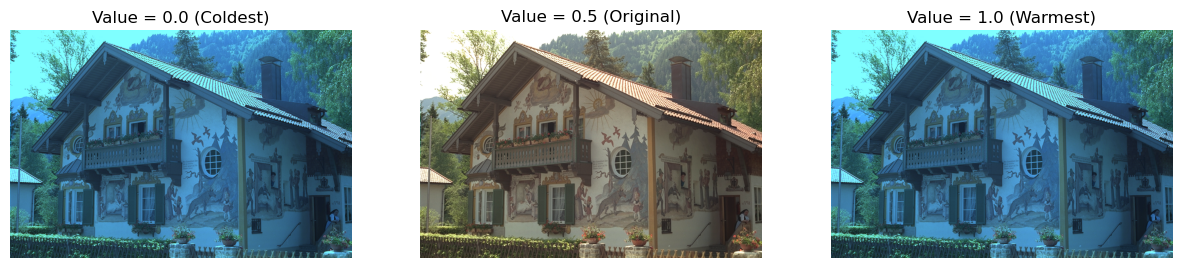

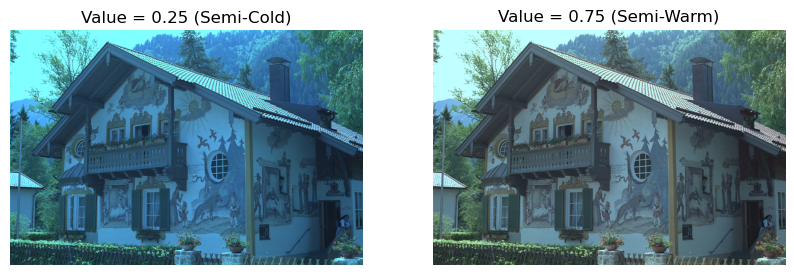

In [113]:
def white_balance(img_rgb, value):
    #Normalizing for simpler maths and splitting channels
    img_float = img_rgb.astype(np.float32) / 255.0
    r, g, b = cv2.split(img_float)

    if value < 0.5:
    #image must be cooled: increase blue, reduce red
        b = b * (1.0 + (0.5 - value))
        r = r * (1.0 - (0.5 - value))

    elif value > 0.5:
    #image must be warmed: increase red, reduce blue
        r = r * (1.0 + (0.5 - value))
        b = b * (1.0 - (0.5 - value))

    # Merge, clip and convert back to 0-255
    out = cv2.merge([r, g, b])
    out = np.clip(out, 0, 1)
    return (out * 255).astype(np.uint8)



# Display
plt.figure(figsize=(15, 6))

plt.subplot(1, 3, 1)
plt.title("Value = 0.0 (Coldest)")
plt.imshow(white_balance(img, 0.0))
plt.axis('off')

plt.subplot(1, 3, 2)
plt.title("Value = 0.5 (Original)")
plt.imshow(white_balance(img, 0.5))
plt.axis('off')

plt.subplot(1, 3, 3)
plt.title("Value = 1.0 (Warmest)")
plt.imshow(white_balance(img, 1))
plt.axis('off')

plt.show()


plt.figure(figsize=(10, 6))

plt.subplot(1, 2, 1)
plt.title("Value = 0.25 (Semi-Cold)")
plt.imshow(white_balance(img, 0.0))
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title("Value = 0.75 (Semi-Warm)")
plt.imshow(white_balance(img, 0.75))
plt.axis('off')

plt.show()